# Analisis EDA

# 1 Load

## 1.1 Load Lybraries


In [1]:
import pandas as pd
import polars as pl
import numpy as np
from statsmodels.imputation import mice

#importar la biblioteca
from sklearn.metrics import r2_score

#bibliotecas para visualización
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Optimization
from sklearn.model_selection import KFold #división del dataset en n pedazos 
from sklearn.model_selection import cross_val_score #tecnica cross value
from sklearn.model_selection import RandomizedSearchCV

## 1.2 Load in Pandas

In [22]:
pd.set_option('display.max_columns',None)

In [3]:
# Leer el archivo utilizando pandas SAMPLE!
df_sample = pd.read_csv(
    'Contoso_all2.txt',           # Ruta al archivo
    sep=';',                # Especificar que el delimitador es un punto y coma
    quotechar='"',          # Especificar que las comillas dobles son el calificador de texto
    encoding='utf-8',  # Usa la codificación que sea compatible con tus datos, como 'ISO-8859-1'
)

C:\Users\Desarrollador\AppData\Local\Temp\ipykernel_8312\1600268492.py:2: DtypeWarning: Columns (44,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sample = pd.read_csv(


In [8]:
df=df_sample

In [9]:
df.head() 

fos_OnlineSalesKey          fos_DateKey  fos_StoreKey  fos_ProductKey  \
0            19560484  2007-01-01 00:00:00           306             782   
1            19560485  2007-01-01 00:00:00           306             782   
2            19560486  2007-01-01 00:00:00           306             782   
3            19560487  2007-01-01 00:00:00           306             782   
4            19560488  2007-01-01 00:00:00           306             782   

   fos_PromotionKey  fos_CurrencyKey  fos_CustomerKey fos_SalesOrderNumber  \
0                10                1              333       20070101311332   
1                10                1              334       20070101311333   
2                10                1              335       20070101311334   
3                10                1              336       20070101311335   
4                10                1              337       20070101311336   

   fos_SalesQuantity  fos_SalesAmount  fos_ReturnQuantity  fos_ReturnAmount  \
0                  1            10.36                   0               0.0   
1                  1            10.36                   0               0.0   
2                  1            10.36                   0               0.0   
3                  1            10.36                   0               0.0   
4                  1            10.36                   0               0.0   

   fos_DiscountQuantity  fos_DiscountAmount  fos_TotalCost  fos_UnitCost  \
0                     1                2.59            6.6           6.6   
1                     1                2.59            6.6           6.6   
2                     1                2.59            6.6           6.6   
3                     1                2.59            6.6           6.6   
4                     1                2.59            6.6           6.6   

   fos_UnitPrice dcu_FirstName dcu_MiddleName dcu_LastName dcu_BirthDate  \
0          12.95        Deanna              D        Ramos    1962-10-04   
1          12.95         Emily              R       Miller    1962-07-10   
2          12.95        Nicole            NaN        Brown    1961-03-22   
3          12.95         Carla              L        Raman    1961-06-24   
4          12.95         Shaun            NaN         Raji    1962-03-12   

  dcu_MaritalStatus dcu_Gender  dcu_YearlyIncome  dcu_TotalChildren  \
0                 S          F             10000                1.0   
1                 M          F             20000                1.0   
2                 M          F             10000                1.0   
3                 M          F             10000                1.0   
4                 M          M             20000                1.0   

   dcu_NumberChildrenAtHome    dcu_Education dcu_Occupation  \
0                       0.0  Graduate Degree         Manual   
1                       0.0  Graduate Degree       Clerical   
2                       0.0        Bachelors         Manual   
3                       0.0        Bachelors         Manual   
4                       0.0  Graduate Degree       Clerical   

   dcu_HouseOwnerFlag  dcu_NumberCarsOwned dcu_DateFirstPurchase  \
0                 1.0                  0.0            2002-04-17   
1                 1.0                  0.0            2001-09-21   
2                 1.0                  0.0            2001-09-04   
3                 1.0                  0.0            2002-04-25   
4                 1.0                  0.0            2003-03-31   

  dcu_CustomerType dcu_CompanyName                        dp_ProductName  \
0           Person             NaN  Contoso Mouse Lock Bundle E200 White   
1           Person             NaN  Contoso Mouse Lock Bundle E200 White   
2           Person             NaN  Contoso Mouse Lock Bundle E200 White   
3           Person             NaN  Contoso Mouse Lock Bundle E200 White   
4           Person             NaN  Contoso Mouse Lock Bundle E200 White   

                

In [10]:
df.shape

(12627608, 64)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12627608 entries, 0 to 12627607
Data columns (total 64 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   fos_OnlineSalesKey        int64  
 1   fos_DateKey               object 
 2   fos_StoreKey              int64  
 3   fos_ProductKey            int64  
 4   fos_PromotionKey          int64  
 5   fos_CurrencyKey           int64  
 6   fos_CustomerKey           int64  
 7   fos_SalesOrderNumber      object 
 8   fos_SalesQuantity         int64  
 9   fos_SalesAmount           float64
 10  fos_ReturnQuantity        int64  
 11  fos_ReturnAmount          float64
 12  fos_DiscountQuantity      int64  
 13  fos_DiscountAmount        float64
 14  fos_TotalCost             float64
 15  fos_UnitCost              float64
 16  fos_UnitPrice             float64
 17  dcu_FirstName             object 
 18  dcu_MiddleName            object 
 19  dcu_LastName              object 
 20  dcu_BirthDate         

In [23]:
df.isnull().sum()

fos_OnlineSalesKey     0
fos_DateKey            0
fos_StoreKey           0
fos_ProductKey         0
fos_PromotionKey       0
                      ..
ds_StoreDescription    0
ds_Status              0
ds_EmployeeCount       0
ds_SellingAreaSize     0
dc_CurrencyName        0
Length: 64, dtype: int64

In [13]:
df.isnull().sum().to_string()

'fos_OnlineSalesKey                 0\nfos_DateKey                        0\nfos_StoreKey                       0\nfos_ProductKey                     0\nfos_PromotionKey                   0\nfos_CurrencyKey                    0\nfos_CustomerKey                    0\nfos_SalesOrderNumber               0\nfos_SalesQuantity                  0\nfos_SalesAmount                    0\nfos_ReturnQuantity                 0\nfos_ReturnAmount                   0\nfos_DiscountQuantity               0\nfos_DiscountAmount                 0\nfos_TotalCost                      0\nfos_UnitCost                       0\nfos_UnitPrice                      0\ndcu_FirstName                9795415\ndcu_MiddleName              10992387\ndcu_LastName                 9795415\ndcu_BirthDate                9795415\ndcu_MaritalStatus            9795415\ndcu_Gender                   9795415\ndcu_YearlyIncome                   0\ndcu_TotalChildren            9795415\ndcu_NumberChildrenAtHome     9795415\ndcu_Educati

In [14]:
cols_eda = [
    'fos_SalesQuantity',            # Cantidad de ventas
    'fos_SalesAmount',              # Monto de ventas
    'fos_ReturnQuantity',           # Cantidad de devoluciones
    'fos_ReturnAmount',             # Monto de devoluciones
    'fos_DiscountAmount',           # Monto de descuentos
    'fos_TotalCost',                # Costo total
    'fos_UnitCost',                 # Costo por unidad
    'fos_UnitPrice',                # Precio por unidad
    'dcu_Gender',                   # Género del cliente
    'dcu_YearlyIncome',             # Ingreso anual del cliente
    'dcu_MaritalStatus',            # Estado civil del cliente
    'dcu_Education',                # Nivel educativo del cliente
    'dp_ProductName',               # Nombre del producto
    'dp_ProductSubcategoryKey',     # Clave de subcategoría del producto
    'dp_BrandName',                 # Nombre de la marca del producto
    'dp_ClassName',                 # Nombre de la clase del producto
    'dp_ColorName',                 # Nombre del color del producto
    'dp_UnitPrice',                 # Precio por unidad del producto
    'ds_StoreType',                 # Tipo de tienda
    'ds_StoreName',                 # Nombre de la tienda
    'ds_EmployeeCount'              # Número de empleados en la tienda
]
df_eda=df[cols_eda]

In [15]:
df_eda.shape

(12627608, 21)

In [16]:
nulos=df_eda.isnull().mean()*100
nulos

fos_SalesQuantity            0.000000
fos_SalesAmount              0.000000
fos_ReturnQuantity           0.000000
fos_ReturnAmount             0.000000
fos_DiscountAmount           0.000000
fos_TotalCost                0.000000
fos_UnitCost                 0.000000
fos_UnitPrice                0.000000
dcu_Gender                  77.571421
dcu_YearlyIncome             0.000000
dcu_MaritalStatus           77.571421
dcu_Education               77.571421
dp_ProductName               0.000000
dp_ProductSubcategoryKey     0.000000
dp_BrandName                 0.000000
dp_ClassName                 0.000000
dp_ColorName                 0.000000
dp_UnitPrice                 0.000000
ds_StoreType                 0.000000
ds_StoreName                 0.000000
ds_EmployeeCount             0.000000
dtype: float64

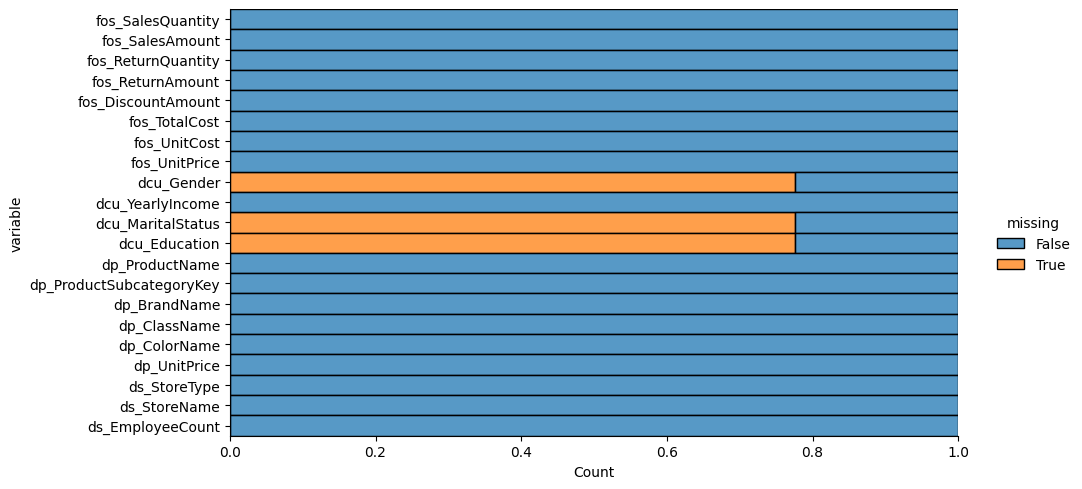

In [17]:
plot_nulos = df_eda.isnull().melt(value_name='missing')

sns.displot(data=plot_nulos,y='variable',hue='missing',aspect=2,multiple='fill')

In [18]:
import numpy as np
import pandas as pd
from statsmodels.imputation import mice

# Suponiendo que tu DataFrame df_eda ya está cargado
# Solo considerando las columnas con valores nulos
df_nulos = df_eda[['dcu_Gender', 'dcu_MaritalStatus', 'dcu_Education']]

# Realizar el test de Little para MCAR
p_value = mice.MICEData(df_nulos).little_test()

# Hipótesis:
# H0: Los datos faltantes son completamente al azar (MCAR).
# H1: Los datos faltantes no son completamente al azar (No MCAR).

# Interpretación del p-valor
print(f'P-value del test de Little: {p_value}')

if p_value > 0.05:
    print("No se puede rechazar la hipótesis nula. Los datos faltantes son completamente al azar (MCAR).")
else:
    print("Se rechaza la hipótesis nula. Los datos faltantes NO son completamente al azar (No MCAR).")


TypeError: Could not convert string 'FFFFMFFFFMMMMFMMMFFFMMFFFFFFFFFFFMMFFFMFFMFMMFMMFFFFFFMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFMFFMMFMMFFFFFFFMMMFFMMFFMMMMMFMFMMFMMFFFFFFMFFFFMMMFMMFMMFMMFFFMFFMMFFMMFFFMFFMFMFMFMFFMFFMMMFMFFFFMFFMFFMFMMMMFMMMFMMMFFMMMFFFFFFMFFFFFFFMFMMFMMFFFMMFMFFFMFFMMMMMFMMFMMFFFMFFMMFFMFFFMFFMFFFFMMFFFMMFMMFFFMMFFMFFFMFFMFMFFMMFFMFFMFFFFFMFFFMMMFMMFMMFFFMMFMMFFFMMFMMFFFMMFMMFFFMFFMMFFMMMFFMMFMMFFMMMFFMMMFMMFFFMFFFMMFFMFFMMFFFMMFMMFFMFFFMFFMMFMFMFMFFFFFFFFMMFFMFFFFMFMFFMFFFMMMFMMFMFFMFMFFMFMMFMMFFFMFFMMFFFMMFMMFFFFMMFMMFFFMMMFFFFFFMFFFFMMFMFMFFFFMMFMMMFFMMFMFFMMFFMMMFFFFFFMMFMMFFMMMFMFMFMMFFFMFFFFFFMFMFMMFFMMFMMMMMFFFFMMMMFMMFMMFFFMFFMMFMFFMFMMMMFFFFFFMFFMMFFFFMMMFMFFFMFFMFMFFFFMFFMMMMFMMMFFFFMFMMFMMFMMMMFMMFMFMFMFFMMMMFFFMMFFFMFFMMMMMFMFMFMFFFMMMMMMMMMMFMMFMMFFFMMFMMFFMMMMMMFFFMFFFMMMFMMFMFFMMFFMFFFFMFMFMFMFFFFFMMFFFMFFFMMFFMFFMMMFMMMFFMMMMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFMMFFFMFMMMMFMMFMMFFMFFMFFFFFMMMFMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFMMFMMFFFMMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMMFMMFFMFMFFFFFFFFFFMMFFMMFFMMFFFMFFMFMFFFMMMFMMMFMFMFMFMFFMFMFMFFMMFMFMMFFFMFFMFMMFMFFMMFFMMMMFMMFMMFFFMMMMMMMMFFMMMFMMMMFFFFMMFMFMFMFFFFMFFMFMFFMMFFFFMMMFFMFMFFFFMFMMFFMMMMFMFMMFFMMFFMMFMMMFFFMMFMFFMMFFFFMMFFFMMMMFMMMFMMMMMFMFFMMMFMFMMFFFFMMMMFMMMMFMFMFMFFFFMFFMFFFMMMMFFFFMMMMFFMFMMFFMFFMFFFMMFMMFFFMFMFFMMMFMMMFFFMFMFMMFFFMFFMMMMMFMFMMMMMMMMMMMMFFMFFMFMFMFFMFFMFFMMMFFFFMMMMFFFMFFMFFMMFMFFMFFFFMMMFMFMFFMFMMFFFFFFFFMFMMMMFFFMFFFFFFMFFMFMMFFFFMMFFMMFFMMMFFMMMFFMFFMMFFMMMMFMFFMMFFMFMMFFMMMMFFFMFFMFMFFFMFFMFFMMMFMMMMFFMFFFFFFMFFFMFFMMFFMFFFFFFMFMFFMMMMMMFFFMFFMMFFFFFFMFMFMMMFMFFMMFFFMMFFMMFMMFMMFFFMFFFFFFMMMMFMMMFFFMFFMMFFMFMMFFFFMFFFMMFFMMFMFFMMMFFMFFMMMFMMMFMFMFMFFMMMFFFMFFMFMFMFMFFMFFMMFFFMFMMFMFFFMMFMMFMMFMFFMFMFFMMFMFFFFFFFFFFMMMMFMMMMFFFMFFFFMMMMMMFMFMFMFFMMMFMMFMFMFFFMMMFMMMMMMFFFMMMFFMFMFMMMMFFFMFMFFMFFFMMFMFMFMFMFFMMFFFMMMMFFMMMFMMFFFFMFMFFMMMFMFMFMMFFMFFFFFMFMFFMFMFMFFFMFMFFMMMMMMMMMFFFFFFMFFMFFMFMFMMMMFMFFFMFMMFFMFMFMFMFFFFMMMFFMMFFMFMFMFMFFMMMMFMMMMFFMMFFFMFMMFFMFMFMFMFFMFMMFMMFFMFFFFMMMMMFMMFFMFMFMFMFFMFMMFMMFFMFFFMFMFFFMMMMFMFFFFMFMFFMMFFMFMMFMFMMMMFFMMFFMFMFMFMFMFMFFFMMMMFMFMFMMFMFFFMFMFFMMFFMMMMMFFMMFFFMFFMMMMFMMMMFFMMFFFMFFMFMMFMMFFMFFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFMMFMFMMMMFFMMMMMMFFFFFFMMMFMFMFFFMMMMMMFFFFFMFMMFMMMFMFFMMMFMMMFFMFMFFMFFFFFFMMFFFMFMMMMFFMMFFFMFMFMMFFMMFFFFFFMMMFMFMMMMFMFFFMFFFMMMFFMMMMMMFMMFMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFFFMMMFFMFFFMMMMMMFFFFMMMMMMFMMFFFMFMMFMMFFMFFFFMFMMFMMFFMFFFFMFMMFMMMFMFFMFFFMMFFMFFFMMMMFMMMFFMFMFFMFFFFFFMMMFMMFMFFFMMMMFMFFMFMFFFMMMMFMFFFMFFFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFFMFMFFMMFFFMMFMMMFFFMMFFMFFFMMFMFMMFMMMFFFFMFFMFMFFMFMFMFMFMMFFFFFFFMMMFMFFMFMMFFFMFMFMMMFFFMMFMFMMFMMFMMFFFMFMMFMMMFMMFFMMFFMFMMFMMMFMMFFFMMFFFMMFMFMMFMMMFMFMMFMMMFFFFMFFMFMFMMFMMFFFMFFFFFFMFFMFFMFMMFMMMFMMFFMFMMFMMMFFFMMFMFMMFMMMFFMMFFFFMMMFMMFMMFFFMMFFMFMMFMMMFFFFMFFMFMFFMFMFMFFMMFFFFMMFMMFFFFFFMMFFFFFMFFMFFMFMMFMMMFMFMMFMMMFFFFMFFMFFFFFMFFMFFMMFFMMFFFFMMMFMMFFMFFFFFMMFFFMMFFFMFMMFFFFMMMFMMFFMFFFFMMMMMFFMFMMMMMFMMFFFMFMFFFFMMFMMFFMFFMMMFMFFMMMMMMFMFFMFMMFMMFFMFMFMFFMFMMFMMMFMMFFFFMFMFMMFMMMFFFFMFFMFMFFMFMFMFMFMMFFFFFFFMMMFMFFFFMFFFFMMMMMMFMMFFFFFFFFFMFFMFFFFMFFFMFFMFMMFFMFMFMFMFFMFMFMFMMMFMMFMFFMMMFMFFFFFFMMFFMFMFMMFMMMFFFFMFFMFMFMMFFFFFFMFMMFMMMFMFMMFMMMFFMFMMMMMFMMFFFMMFFFMFMFMMFMMMFFFFMFFMFMFFMFMFMFFMMFMFFMFMFMFFMMFFFMMMFMFFFMFMMFMMMFFFMFFFFMMFFMFMMFFFMMFFFMMMFMFFFFMMMMFMMMFMMFFFMFMFFFFMMMFFMFMFMFMMFMMFFMFFFMMFFFFMFFMFMFFMFMFMMFMFMMFMMMFFMMFFMMFMMFMFFMFMMFFFFFMMFMFMMFMMMFMFMMFFFFFMFFMFFFFMFMFMMFMMMMFFMFMFMMMFFFMMFMFMMMFFFFFFFMMFMMFFMFFFMFFMFFMFFMFMFMFFFFFMMFFMFFMMFFFFMMMFFFFMFFMFMFMFFFFFMFFMFMFMFMFFFFMFFMFFMMFFFMFMFMFMMFFMFMFMFFFMFMFMFMFMMFFFFFFFFMMFFMMMFMMFFFFFMMFMMFMMFFFFFMFFMFMFMMMMFMFFFFMFFMFMFFMFMFMFMMMMMFMMFFFFFMFMMFMMFFFFFFMFMMFFFFFMFFMMFFMFMMFFFMMFFMFMMFFFFMMFFMMMFMFFMFFFFMMMMMMMFMMMMMMFFMFFFMFMMMFMMMMFFMMFMMMMFFMMFFMFFMFMFMMFFMMFMMFMMMMFMFFFFFFFMMFMFFMFFFMFFMFMMFMMMMFMFFMMMMMMFFFMFFMFMMMMMFFFMFFMFMFMMMFFFFMMFMMFFMFMFMMFMMFFMFFMMMFMMFFMFMFMFFMMFFMFFFFMFFMFFFMMMMFFFMMFMFMMFFFMFFFMFFFFMFMFFFFFMFMFMFMFMMMMMMFFFFMFFFMMMFMMFFFFFMMMMFFFMMFMFMFFMFFFFFMFMFFFFMMFMMFFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMFFMFFMMFMFFFMMFFMFMMMMFFMMMFMFFMFFFMMFMFFMMMFMFFMFMFMMMMFFFMMMFMFFMFFMFMFMMMFFMMFMMMMMFFMMMMMMFFMMFFFFMFFMFFFFMFMMMMMFMMFFMMFFMFFFMMFFMMFFFFFMMFFMMMMFMMMMMFFFMFMMFMFMFFMMFFMMMMFMFMFFMMFFMFMFMFMFMMMMMMFFFMMFMFMMMFFFFFFFMMMMMFFFMMMFMMFFMFFMMFFFFMFFMFFMFFMFMFMMMFFMFFMFFMFFMMMMFMFFFFFMMFMMMFFMMFFFFMFFMFMMFMFMFMMFFFFMFFFMFFFFMFMFFFFFMFMFMMMFFFFMFMMMFFMFMFMMMFMMMMMMFFFFMMFMFMFFMFMFFFMMFFFMMMFFMMFMMMMMFFFMMFMMFFFFFFFMFMMFMFFFFMMMMMMMMFMFMMFFFFFFMFFFFMFFMMFFFFFFFMMFMMFFMFMMMFFFFFFFFFMFFFFFMFFMFFMFFMMMFMFFMFFFMMFMFFFMMFFFMFFFMFFFMFFFFMMMMFFFFFFMMFFFMMFFMMMMFMMFFFMFFMFMMMMMFMMFFMMFFFMFMFMFFFMMFFMMFMFMMFMMMFMMMFMFFMMFMMMFFMMMFMMFFFFFFFMMMMMMFFFFMFMFFFMMMMFMMFMMFFMFFMMFFMFFMMMFFFMMMFMFFMFFMFMFMMFFMMMFMFFMFMMFFFFFFFMMMFMFFMFFMFMFMMFMMFMMFFFFFFFMFFMFMFMMFFMFMFMFMFMFMFFMFFMFFMMFFMFMFMMMMMMFMMMMMMMFMFFFMMFMFMFFMMMMMFFFFMFFMFFMFMFFFMMFFFMMFMFMFFFMFFMFFFFMFFFMMFFFMMFMFMMFMMFFMFMMFMFMFMMFFMMMFFMMMMMMFMFFFFMFMFFMMMFMMMFMMFMFMMMMFMMFMMMFFFFFFMFFMFMMMMMMFFMFMMMMFMMMFMFFFMMFMMMMFFFFFFFMMFMMFFMMFFFMMFMFMMMFFFFFFFFFMFFMFFMFFMFMMFFFFFFFMFMMMMFMMFFMFFMFFMFMMFMMFFMMFFFMFFFMFFFMFFMFFFFMMMFMFFFFFMFFFMFFMMFFMFFMFFMFMFFMMMMFMFMMFMMFFFMMMMMFFFMFFFMFMMFMMFFMFFFFMFFFMMFFFFFMMMMMMMMMMMFFMFMMMMMFMMFFFMMMFMFMMMFFMFFFMMMFFFMMFMFFMFMFMMMMMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMMMFMMFMMMFMFMMFMMMMFFMFMFFFFMFMFMFMMMMMMMFMMFFMFMMFFFFFMFFFFFMFMFFFFMFFMFFMFFMMMMMMFFFMMFMMMMMFFFMMFFFMFMFMFFMFFFMMMFMFFMMFMMFFMFFFMFFMMFMFFFFMMMMMMFFMFMFMMFMFMMFFMFMMMMMFFFMMMMMFMFFMFMMFMMMMMFFMFMFFFFMFMFFMMFMFFMMMFMFFMFFMFFFMFFFMFMFMFFFMMMMMFFMFMFFFMFMFFFMMMMFFFFMFFMFMFMMFFMFMMMMMMFMFFFMMFMFMMMFFFFFFFMMFMMFFMMFFMFFFFMMMFFFFFFFMFMMFMMMMMMMMMFMFFFMMMMFMMFFFMFMFFFFMMMFFMFFFMMFFFMFFMMFMMFFFMMFMFMFFFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMFMMFMMMMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFMMMMMMMFFMFMMMMMFFFFFFFFFFFMMFMMFMFMMMFMMMMFFMFFFMFFFFMFFFMFMMFMMMMFMFFFMMMMMFFFFFMFFFFFMMMFFFFMFMMMFMMFMMFFFFFFFFMFMFMFMFMMMMMMFFFMMFMMMMFMMMMMFFFMFMFMFMMFFMFMFMFMFMFFMMMMMMFFMFFMFMFFMMMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMMFMMFFMFMFMMFFFMMFFMFMMFMMMMMFFFMMFMFFMMMFFMFFMFFFMMFFFMFMFFFMFFFMFFMFFFFMFMMMMFMFFFMMFFFMFFMMMFMMFFMFMMMMMMFMFFMFMFFFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFFMFMFFFMMFFFFMMFFMFFMFMMFFMFFFFMFFFMMFMFFMMMMFFFFMFMFFFFFMFMFMMFFFFFFMMMMMMFFMFFMMFMMMMFMMFFMFFFMFMMFFMMFMMMMMFFFFMFFMFMFMMMFFFMFFMFFMFFFMFFFMFFFFMFMFFFFMFMFFFMFMFMMFFFMFFFMMMFFFMMFMFMMFMMMMMMFMMFFFMFFFMFFMFFMFFFFFMMFMFMMMFFFFFFMFMFMFMFMMMMMMFFFFMFFFMMFMMMMFFFFMFFFMMFFMMFMMMMFMMFFFFMFMMFFFMFMFMFMMFFMFMFMFMMMMFMMFMMFFMMFFMMMMMMMMMMMMMMFMFFMFFFFMFFMFMMMMMMFFFFMFMFFFMFMFFFMFMFMFMMMFFFMMFMMFFFFFFFFFMMFMFMMFMMFMFMFFMMMMFMFMMFMMFFMFFFFMFMMFFFMFFMMFFMMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMMFMFMFMMMFMMFMMFMFMFMFFMMFFFFMFFMFFFMFFMMFFFFFFMMFFFMFFMFMFMFMFFMFFMMMFMMMFFFMFFFFMMFFFFFFFMMFMMFFMFFFMFFMFFMFFFMFFFMFFFFMFMFFFFFMFMFMFMFMMMFMMFMMFMFFMMFMMMFMFFMFMFMFMMMMFMFMFMMMFMFMFFFFMFFMFFFMFFFFMMMFFFMFMMFFMMMFMFFFFFFMFMFMFMFFFMMMMFFMFFFMMMMMFFFFFFMFMFMFFMFFFMFMFFMMFFMMFMMFMFMFMMMFMFMFFFFMFFMFFFMFFFFFMFMFFFMMMMFMFMMMMFMFFFMFMFFFMMFFMFFFMFMMFMFMMMMFFMMFFMMMFMFMFFMMFMMFFFFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFFFFFMFMFFMMFFMFMFMMFFFFFMFMMFFFFFFMMMFMMFFFMFFMMFFFMMFFFFMFMMFMFMMMMFFMFMMMFFMFMFFMFMMMMFFMFMFFFFMFFMMMFFFFMFFFFMMMFMFFFFMFMFFFMFFFFMMMFFMMMMMFMMFMFMMMMFFMMMMFFFFFFMMMMFFMFMFMMMFFFMFMMFFMMMFMFFFFFFMFMFFFMMMMMMMMFMFFMFFFMMMMMMFFMFMFFMMFFFMFMFFMFFFMFFFMMFMFFMFMMFMFFFFMMFMMMFFMMMMMFMMFMMFFFMFMFMFMMMFMFMMFFFFMMMFFFFFFMFMMFFMFFFMMFFFMFFFMMFMFMMFMMFFFMFFMMMFMFFFFFFFFMMMMFMMMFFMMMMFMFFMMFFMMFMMFFFMMMMFMFFMMMFMFMFMMFMMFMMFFFFMMFFMFFFMMFFMFMFMMFFMMMMMMFFFMFMFFFMFMMFFFFFFFFMFFMMMMMFFFFMFFMMFMFMFMFFFFMMFFMMFFFFFMFFFFMFFMFMFFFMMFFFMFMMMFMMFMMFFMMFMMFFFMFFFMMFFMMFMMMMMFFFFMMMMMMMFFFFMMFMMFMMMFMMFFFMMMFMMMMMFMMMFMMMMFFFFMFMFMMFFFMFMMFMMMFMMFMFFMFMMFMFMFFMMMFMMFMFMFMMFFMFMFFFMFFMMFFMMFMMFMMMMFFFMFMMMMMFFFFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFFMFMFMMFMFFFMFFMFMFFMMFFFFMMFMMMFMMMMFMMFFFMMMFFFMFFMMMFMFMFMMFMFFFFFMFMFFMMFMMMMMFFFFMMMFFFMFFMFMFFMFMFMFMFFMMFFFMMFMMFMFFMMMFMMMFFMMMMFFMMFMMFFFFMMMMFMMFMFFMMMFMMFFFMFFFFFMFMMMMMFMFMMFFFMFFFMMMMMFMMMMMFMMMFMFFMMFFMMMMFFFMFFFFFMFMFFFFMMMMFMMFMFMFMFFFFMMMMFMMMMFFFFMFMMMMMMMMFFFMFFMMFFMMFFFMMMFMMFMFFMFMMFFFMFFFMFMFFFFFFMMMMFFMFMFMFMFMFFFMFFFMMMFFFMFFFMMFMFFMMMFMMMFFMFFMMFFFFMFFFFFFMFMMFFFFMFMMFMMFMMMMMFFFMFFMMMMMMMMFMFFMMFFMMFMMMMFMMFMFMFFMFMFFFFFMMFMMFMFMMMMFMMFMFMFMFFFMFMFMMMMFFFMMFFFFFMFMMFMFMFMFFMMFMFMMFMMMMFFFMMMMMMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMFMFFFFMFMMFFMFFMMMFMMMFFMMFMFFFMFFFFMFMFFFFFFMMFFFMFFMMFFFMFFMFMFMFMFFFMMMMFMMMMMMMFMMFFFMFFMFMMMMFFMFMFMFMFFMMMMFMMFFFMFMFMMFMFMMFMFMFFFFMMMMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMMFFMMMFMFMFFFFMFMFFFFMFFMFMMMFMFFFFMFFMMFMMMFFFFFMFMMFMMMFMMMMMFMMFFMMFMFFFMMFMMFMMMMMFMFMMFFMFMMMMMMMMMMFFMFMMMMMMMMMMFMMFMMFMMFFFMFFMMFFMMFFFMFFMFMFMFMFFMMFFMMFFMFFMMMFFFMMMMMMMFFFFFFMFMMFFMMMMFFMFMMMFFFMFFMMFFMMFMFFFFMMMMFFFFMFMFMFFMMFFFFMMMMFMFFMMMMMFFFFFFMMFMFMMFFFMMMFFMMMMFFFFMFMMFFMMFMFFMMFMMFMMFFMFMMFMMFMMFFMFMFFMMFMMFMFMFMMMMFMFFFMMFMMFMMMFMMMMMMFFMMMMMMFMFMFMFFFMFFFFMFFFMFMFFMMFMMMFFMMFMFFFFMFFFFFFMMMFFMMFFFFFMFFFFFMFMMFFMFMMFMFMFMMMMFFFMFFFFFFMMMFFMFMMFFMFFFFFMFMFFMMMFMMFMMMFFMFFMMMFMMMFMFMFFMFMFMFFMMFMMMFMMMFFMMMFFMMFMFFFMMMMFMMMMMFMFFMFMFMFFFFMMFMMMFFMMMMMFFFMFMMMMMFFFMFMMMFFMFFMMMMMFFFMFFFMFMMMMFMMMMFFFMFFMMMFMMFMMFFMMMFFFFMMMMFMMFMMMFMFMFFMFMFFMMMMFFFFFFMFMFMMMFFFMFFMFMFFFFMMFFFFFFFFFMFMFFMMMMMMMFMMFMMMFMFMFFFMFMFMFFMFMFFMMFMFFFMFFMMFFMFFMMFFFMMFMFMMFFMMFMFMFMFMFFFFMFFMMMMMFFMMFMFMMFFMMFMFMMMMMMMFMMMFMMFMMFMFFMFMFFFFFFFFFMMMMMFMMFMMFFMMFFMMMMFFFMFFMFFFFFMFFFMMMFFFMMFMFFMFMFFFFFFFFMMMMMFFFMFFFMFFMFFMMMMFMMMMFMMMMMMMFMMFMFFFFMFMMMMMMMFMFMFMFFFMFMFMMMFFMMMMFMMMMMMMMMFFFMFFFMMFMMFMFFMMMFMFMFFMMFFMFMMFFMMMFFFFMFMMMFMMMFMMMFMMMFMFMFMFFFMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFMFFMFFFMFMMMMMMFFMFFMMMMMMFFMMFMFFMMMMFFFFMMMFMMFMFFMMMFMFMMFFMMFMFFFFMMMFFMMFMMMMFMMFMMFMMMFFFFMMMMMMFMMFFFFMFMMFFFMFFMFFFMFFMFMMFFMMMMMFFFFFMFFFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFMMMFFFFFFMMMMFMMFMMMMFMMMMFMFMFMFFMMMMFFFFMMMFMMFMFFFFMMMMFMFMMMMMMFFFFFMMMMFMMMFMFMFFMFFMMFMFMMFMFFMMFMMMMMMFMMMFFFMFMFMFMFFFFFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMFMMFMFFFMMMMFFMFFFFFMFMMMFFFFMMFFFMFFMFMMFFMMFMMMMMFFFFMMFFMMFFFMMFMMFMMFFFFMMMFFMMFMMFMFMMMMMMMMFFMFMMMFFFFFFFFMMFMFMFFMFMFFFMFFMMMMMMFFFFFFFMFFFMMMFMMFFFMMMMFMMMFMMMFMFMFFMMFFFFMFMFFMMMFFFMFMMFMFFFFMMFMFFFFFMMFMMMMMMFMMFFFFFMFFMFFFMMFFMFFMMFFFMFFMMMFFMMFMMFFFMMMFFFMFFFMMFMMMFMFMFMMFMMMMFMMFMFFMFMMFMFFMMMFMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFFFFMFFFMMMFFMFMFFFFMFMMFFFMFFMMMMMFFMFMMFMFFMMMFFFMMFMMFFFMMFMMFFFMMMFMFFFMMMFMFMMMMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFMFMMFMMMFFFMFMMFMFMFMFMFMFMFFMMFFFFMMMMFMFFFMMMMFMMFFMMMMFFFFFMMFFMFMMMFMMFMFFMMFFFMFFMFMFFMMMFMMMFFFFMFMMFFFFFFFFFMMMFFFFFFMMMMMMFFFMFMFFFMFMMMMMMMFFMFFFFMFFFMFFFMFMFFFMMFMFMFFFMMMMMFFFMFMMFMMMFMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFMMMFFMFFMMMMMFMMFFMFFFFFMFFFMMFFMFFFMMMFMMFMFMMMMFMFFMFFFMMMMMFFMFMFFFMMMMMMFFMMMFMFFFMFFFFMMMFMFFFMFMFFFFFMFMMFMMMFFFFFFMMMFFFMFFFMMMFMMFFMFMMMMMFMMMFFFFMMMFMMMFFMFMFMMMMFFMFMFFFFFMMMFFFMFFFMMMFMMMMFMFFMFFFMMMFFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMMMMMMMFMFFMMMFMMMFFMFMMFFFFMMMFMMFFMFMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMMMMFFFFMFFFMMFFMFFFFFMFMFMMFFMMFMMMMMFFFFMMMMFMMFFFMMMMFMFMMMMMMFFMMMFFFFFFMMFFFFMMFFFFMFMMMFFMFMFMFMMFMFFMMFMMMMMMMFFFFMFFMMFMMFFMMFMFFFFMMFFFFMFMMFMMFFMMFMFFFFMMFMMFFMFFMMMFFMFFFMMFFFFFFMFMMFFMFFFMFFMMFFMFMMFMMMMMMFFFMFFFMMMMMFFMMFMMMMMMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMMMFMMMMMMMMMMMMFMMFFFMFMMMFFFFFFMFMFFMFMFFFFFFFMMMMFFFFMFMFFMFFFFMFMMMMMFMFFFMFMFMFMFFFMFFFFMFMFMMMFFFMFFFMMFFFMMMFMFFMFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMFMFMMFMMMMMFFMMMMMMFFMMFFFFMFFMFMMFMMFMMMFFFMFFMMMMMMMMFFMFMFMFMMFFMMFFMFMFMMMMFFMFFFFMFFMMMFFFFMFFMMMMFMMFFFMFMFMFFFMFMMFFMFMFFFFMFMMMMMFMMFFMFMFMMFFMFFFMMFFFMFMMMMFFMMMMMMFFFFMFMMFFFFMFFMMFFFFFFMMFMFMMMMMFMMFFMMMMMMFMFFMFMFMMFFMFMMMFFFFFFFMFMMFMMMMMMFFFMFFFMMFFFFMMFMFMFMFFMFMMFFMMFFFMFMFFFFMFFFFMMFFFMMFFFFMFMMMMFMMFFMMMFFFFFFFMMFFMFFMFMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMMMFMMFFMFFMMFFFFMFFMMMFMFFMMFFMFFFMMFMMFFFFFMFFMMFFFFFFFMMFFFFFFFMFFFMFFFMFMMMFMFFFMMMFMMFFMFFFMFFFMFFMFFMFFMMMMFMFFMFMFFFFMFFFMFFFMMMMMFFFMFMMFMFMMMMFMMMMFMFFFFMFMMFFFMFFMFFMFFFMFMFMFMFFFMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMFFFFFFFMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMFFFFMMFFMMMMFFMMMMMMFMMFFMMFMMMMFMFMMFMMFFMFMFMFMFMFFFMFFMFFMFMMFFMMMMMFMMMMFFFFFFFMMMFFMMFMFFFMMMFMFFFMFMMMMFMFMFMFMMFMFFFFFFFFMFFMFFFMMMMMFFMMFMMFMFMFMFMMMMMFFFMMMMMFFMMFMMMFMFFFMFFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFMFFFFMFMMMMFFMMFMMMMFMMMMFMMFFMFFMFMFMFMFFMMFMFMFMFFFMFFFMFMFFMMFFMFFMMFFMFFFMFMMFFMFMMMMFFMFFFMMFMMFMMMMMMMFFMFFMMFFFMMFFMMMMFMFMFFFMFFMMMMFFMMMFMMFMFFFFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMFMFFMFMMFFFMFFMMFFMMFFMFMMFMFFFFMFFMFMMMFFFMMFFFFFMMMMMFFFMFFMFFMMMMFFFMFFMFFMMFFFMMFMFFFMMFFMMMMFMFMMFMMMFMFFMFMFMFFFFMFFFFMMFMFMFMFMFMFMFMMFFMFFMMMMMMFFFMFFFFFMMFMMMMFMMMFFFFFMFMFMMMFMMFMMMMFFFFMFMFFFFMMMFFMFFFFFMFFFMFFFMMMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFMMMMMMMFFMMFFMFFMFFFFMMFMFFFFMFMFMFMFMFFMFFFMMMFFFMMMFFMFFFFFFFFMFMFFFMMFMFFMMFFMFFMMMMMMFMFFMFMMFMMMFFFMFMFMMMMMFFFMFMMMMMMMFMMMMMMMMMFFFFMMFFMMFFFFMMFFMMMMFFMFFMMMFMMMFFMMFFMFFMMMFMMMMFMFMMMMMMFFFFMMMMMMFFMMMFFFFFFFMFFFFMFMFMMMMMMMFFFMFMMMMMMMFFFFMFMFFMMMMFFFFMFFMMMMFFFMMFFMMFMFMFMFMMFMMFFMMFMMFMFMMFMFMFFFMFFFMMFFFMMFFFFFFMFFFMMFFMMFMMMMMMFFMFFMMMMMMMMMFFMFFFMFMMMFMMMFMMFMFFMMMFFMFFFFMFFFMFFFMFFMMFFMFFFFFMMMMFFFMMMMMFMMMMMFFFMFFFMMFMMFFMFFMFFMMFMMFFMMFMMMMMFFMMFFMFMMMFFMFFMMMFFMMFFFFMFFFMFFFMFMFFMFFMMMMFMMMFMMMMMMMFMFFFFFMFMMFMMMMMMFFFFMFMMMMFFFMFMMFFMMMMFFMFFFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMMFMMFMFMMMFFMMMMFFMMMFMFFMFMMFMMMMMFMMFFFFMMFMFMFMFMMMMFMMMMMFFFFMFFFMFMMMFMMFFFFFFMMFFFMFMMMMFMFFMFMMMMFMFMFFMMMMMFFFMMMMMMMFFFMFFFFMFMFFFMFFMFFMMFFFFMFFMFFFFMFMFMFMMFMFMFMMMFMMFMMFFMFFFMFFMMMMFFMFFMMMMMMFFFFMMMFMMFFFFMMMMMFMMMMMFFMFFMMMFMMMFFMFMFMFMFMFMMMMMFFMFMMFMFMMFFFFMFFMMMMFFFMFMMFFMFMMMFFMFMFMFFMFMMMMMMFFFMMFFMFFFFFFMFMMMFFFFMFMMFMMMMMMFFMFFMMMMFMMMMMMFFMMMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMFFFFFFFMMFMMFMMMFFMMFFMMMFMMMFMMFFMMFMMMMFFMMFFMFFMMMFFMFFFMFFMFMFFFFMFMFFMMFFFFFFMMFMFMMMFMFFMMMFFFFFFMFFMMFMFFFMMFFFFFMFMFMMFMMFMFFFFFMMMMMMMMFMMFFFMFFFFMFMFMFMMMMMFFMFMFMMMMMFMMFFMMMMFMFFFMMMFFFMMFMFFMMFFFFMFFMMMFFMMFFFFMMFMFMFMFFFMFFFFMFFMFMMFFMMFMMFMMMMFMFFFMFMFMFMFMFMMMFFMFFFFMMMMMMMFFFMMFFFFFFFFFMFMMFFMMMFMMMMMFFFMMMFMMFMFMMMMMMMMMFMFFFFFFFFMMMMMMFMMFMMMFFMMMFFMMMMMFMFFMMMMMMFFMFFFMMFFFFMFMMMFMFMFFMMFFFFFFFFMMMFMMFFMFFMFFMFMMFMFFMFFFMMMMFFFFMFFMMMMFFMMMMMMFFFFFFMFFFMMFFMFMMFFMFFMFFFFMFFMMFMMFMFFMMFMMMMMFMFFMFFMMMMMFFFFMFMMMMMFMMFFMMFFMFFFMMFMMFFFMMMMMFFFMMFFMMMFFFMMFFFMFFMFMMFMMMMFMMMMFFFMMMMMMFMMFFMFFMFFMFFFMMFMFFMMMFFMFMMFMMFFMMFMMFMFFMFMFFFFFMMFMFFMFFFMFFMMMFFMFMFMFMMMMMMFFMFFFFFMFMMFMFFFFFMMFFFMFMFFMFMMMMMFFMMMFFMFMMMFMMMFFFMFFMFMMFFFFMFMMFFMMMMFFMFMFMMFFMMFFMFMFMMMMFMMMMFMMFFFMFMMMFFMFFFFMFFFMMFFFFMFFFMMMMFMFFFFMFFMFFFFMFMMFMFFFFMMMFFMMFFFFMFMFMMMFFFMFFMMMMMMMMMFFFMFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMFFFFFFFFFFMFFFMFMFFMMFMMMMFMMFFMMMMMMFMFMFFFMMFFMFMFFMMMMFFFMFMFFFFMFFMMMMMFFFMMMMFMFFFFMFMMMMMMFMMMMMFFFFFMMMMFMFFMFMFFFMMMMMMFFFMMFFMMMMFMMFFFMFMMFMFFFMMMMMFFMMFMMMMFMFFMFMMFMFMMFMMFMMMMMFMMFMFFFMMFFMFFFMMFFFFMMFFMMMMFFFMMMMMMFFMMFMMFFMFFFMFFMFFMMFMMMMMMMFFFMFMFFMFMMFMFFMMMMMMMFFMFFMFMMMMMFMMFFMMFFFMFMFMFFFMMFFMMFMFMMFMMMMFMMFMMMFMFFMMFMMMFFMMMMFFMMFMFFMFMMMFMMFMFMMMMMFMMFMMFFFFMFMMFMMFMMMMFMMFMFMFMMMMMFFMMMMMMFFMMFFFFMFFMFFFFMFMMMMMFMMFFMMFFMFFFMMFFMMFFFFFMMFFFFMFFMMMFFFFMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMMFMMMMFFMMMMMFMFMMFMFFMFFMMFFMMFFFFMMMFMMFMFFMFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMFFFFMMMFMFFFFMFMMMMMMMMFMFMFMMFFMFMMFFFFFFFFMMMFMMFMFFMMFMMMFFFFMFMMMMMMMMMFFFFMFMMFMFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMFFFMFFFMMFFMFFFMMMMMMMFFMMMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFFMMMFMFMMMFMFFMMFFFMMMMFFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMMMFMFFMFFMFFFMMMFFMFMFFFMMMMMFMMMFMFMMFMMMMFFFMMMFFMFMMMMFFMFMFFFMFMFMFFFFFMFMMFMMMFMMFMFMMMMMMMFFMMMMMFMFMMMFMFFFFMMFMMFMFMMFMMFMMMMFMFMFFFFMFMFMFFMFFFFFFMMFFMFFFFFFMMMFFMMFMMMFMFFMFFMMFFMMMFMFMFFMMFFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMMFMFMMMFMFMFFFMFFFMFFFFMMMFFMFFMFFFMFFFMFMFFMMFMFMMFFFFFMFMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMMMMFFFFFFMMMMFMMFMMMFFMFFFMFMMFFFFMFMMFMMFMMMMMFFMMMMFFMMMFMMMMFMMFMMFMFMFMFMMMMMMMMFFFMFFMMMMMFMFMMFMMFFFFMFMFFMFMFMFMMMFMMMFMFMMFMFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFMFFFMFFFFFMFFFFFMMMFMMMFMMMFFMFMFFFMFMMFMFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMFFFMMMFFMFMMMMMMMMMMMFFMMFMMMFFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMMFFFMFFMMMMFMMFFMMMMFFMMFMMMFFMMFMMFMFMFFFMFMFMMFMMMMFMFMMMFMMMMFMMFFMFMMMFMMMMMMMMFFMMFFFMFFMFMFFFMMMFFFMFFMFFMMFMMFFMFMFMMFMMFMMFMMFMFMMMMFMMMMMMFMMMMMMMMMMFFFFFFFMMMMFMFFMFFFFMMFMMFFFMFFMFMFFMMFFFFMMFFFMMMMFMMMFMMFFFFFMMMFMMFFMMFMMMFMMFMMMMMMFMFMFMFMMMMMFMMFFFMMMFFMFFMFMFMFFMMFMMFFFMFMFMFMMMMMMMMMMMMFFFMFMFFFFMFMMFFFMMMFFMFFFMMFMMMMMMFFMFFMMFFMMFMMFMMMFFFFMMMMFMMMMFFMFFMFFMFMFFMMFFFFFFMMFMMMMFMFFMFMMMFFMFFMFMFMFMFMMFMFMFFMMMMMFFFFMMFFMMFFMFFMMFFMFFFMMMMFMMFFFMFMFFMMFFMMMFFMFMMMFFMMFFMFFMMFFFFMMMMFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFMFMMMMFMFFMFMFFFMMMFFMMFFMFMMFFFMMFFMMMMMFFFMFFMFFFMFFMFFMFFMMMMMMFFMFMFFMMMMMMFFFMFMMMFMMFMFFFFFMMMFFMFMFMMMMFMFFMMFMMFMMMFMFMMMFMFFMFFMFFFMMFFMFMFMFFMFMMMMFFFFMMMMMMFFMMFMMFMFFFFFMFMFMMMMMMFFMMFMFMFFFMFMFFMMFFMFFMFFFMFMMMMMMFMFMFMFMMMFMFMFFMMFFMMMMMFMFMMMFFMMMMMMFFFMFFFMMFMFMMMFMFFMMFMMMMFFMFFFFMMFMMFMFMFMFFMMFFMMFFMFFFMMMMFFFFMMFMMFMFMFMFFMMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFMFMMMMMMMMMFMMFFFMFFMMMFFFMFMFFMFFMMMMMFMFMMFFMFFMFFFMFFFFFMMMFMMFMMFFFFMMMMFMMFMMFMFFMFMMFMMMMFFMFFFMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMMMMMFMFMFMFFMMFFFFFFMMFFFFMMMMFFMFMFMFFMMMMFMMMMFFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFMMMFFFMFMFFMMMMMMMFMMFFMFFFFMFMFFMFMFFMMFMFMFFFMMFFFMMFFFMFFMFFFMMMFMFMFFMMMMMFFFMMFMFFFFMMMMMMMMMFMMMFFMFMFFFFMMFFMFMFFMMMMFMMMFMMFMFMFFMMMMMMFFFFFFFMMMFMFFMMMFMFMFMFFFMMFFFFFMMMFMMFMMFMMFFFMFFFMMMFMFMFFFFFMFMMMFFFFFFMFMMMMMMMMFMFMFMFMMMMFMMMFMMFFMMMFFMFMFMFMFMFMFFMMFMMMMMFFMMFMMFFMFFFMMFMMMMMMFMFFMMMFMFMFMFFMMFMFFFFFFFFMFMFFFMMMMMMFMMFFFMFFMFMMMFMMFMMMMMMFMFFFMFMMFMMFFMFMFFMMMMFMMFFMMFMMFMFMFMMMMFMMMFMMFFFFMMMMFMMMMFFFMFFMMFFMMMFMFMFFMFMFFFFMMMMMMMFFMFMFFMMMFFFMFFMFFFFFFMMFFMFFFFFMFMFFFMMMMFMMMMFFFMFMFMFFMMMMFMMMFMFFMMMFFFMFFMFMMMMFMFFMFFMMFMMFFFMMFMMFMMFFFFMMMFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFMFFMFMMMFFMFMFFFMFFFMFFFFMFMFMMMMFMFMMFFFFFFFFMFMFFFMFMMFFFFMFMFMFFFMMFFFMMFMFFFFFMFMMMMMMMMMMMFMFMMMFMMFMFFMMFMMFMFFMFMMMFMMMFMFMFMMFFMFMFFMMFMMMMFFFFMFMMFFMMFMFFMMMFMMFMMFMFFMMFFFFMMFMMFFFFFMFMFFMFFFMFMMFFFFMFMMMMFFFMFMFFFMFMFMFFFMMMMFMMMMFMMMFFMFMMFFFFFFFFFMMMMMMMFMFFMFFFFFMMFMFFFFMMFFFMMMMFFFFMFFFMFFMFFMFFMFFFFFMMMMFMFFMMFFFFFFFFFFMMFFFFFFFMFMMMFMFFMFFFMFMMFFMMMMFMMMMMFMFMFMFFMFMFFMFFFFMMMFMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFFMMMFFFFMMFFMFMFFMFMMFFMFFFMFFMFMMMMFMMFFMMFFMFFFMMFFMFMFMFMMFMFMFMFFMFMFMMFMFFFFFMMMMFMMMFMMFMFMFMFFMFMMMMFFFFMFMFMFFFMMMFMMFFMFFFMMMFMFFFFFMMFFFFFFMMFMFFFMFMFFMMFMMFFFMMMFFMMFMMFFFMFMMMMFMMFMMMMMMMFFMFFMMFMMFFFMMFMFMMMMMFFMFMFFMFMFMMMMFMMFMMMMMFMFFMMMMMMMFMMMMMMFMFFFMFMMFMMFMFFMMMMMFFMFMMMMFMFMFMMMFMMFFMFFMMMFMMMMFMFMMFFFFFMFMMMFFFMMFMMFFMMFMMFMFFFFFMMFFMFFMFMMFFMFMMFMMMMFFMMMFMMMMMMMMMFFMMMFFFFFFMMFMMMMMMFFMMFFFMFFFFFMMFMMFFFFMFFMMFFFFMFMFFMFFFMMFFMMFFFFMFMMMFFFMMFMMFMFMFMFFMFFFFFMMMMFMFFFFFMFFMMFFMMFMMMMMFFFFMMMFMFMFFMMFFMFFFFFMFFMFFFMMMFMFFMMMMFMFFFMMFMFFMFFMMFMFFMFMFFMMMFMFFMFMFMMFFFMMMFFFMMMFMFMMMFFMFMFMFFMMMFFMMFMMFFMFFMFMMMFFMMMMMFMFFMMMMMFMMMMFMMFMFMFMMMFMMMFMMFMMFMMFFMMFFFFMFMFMFMMMMFFFFMFMFMMFFMMMFFMMFFMMFMMFMMFFFMFFMFMFFFMMFMMFFFFMMMFMMMMFMMMFMMFFFFMMMFMMFMMFMMMMMMFMMFMFMMFMFFFMMMFFMFFFMFMMFMFFMFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMFMFMMFFMFMMFMFMFMMMMFFFMFFMFFMFMFFFMMFMMMFFFFMFFFMFFMMMMFFMFMMMMFMMMMMMFFMFFMMFMMFFFMMMMFFMMFMMFMFFMMFFMMMFMFMFFMMFFFFMFMFFMFMFFMMMFMMFMMFFFMMFFFMFFFFMFFMFMMFFMFFFFFMFFMFMFMMMFMFFMFMFFMMFMFFMMMMFFMFMMMMFMFFFFFMMMFMMMMFMMMMFFFFMFMMFMMFFFMMFFFFFMMMMMMMMFMFMMFFFMFFMMMMMFMFFMMFFFMFMFFMFFFMFMMFMFMFMMMFMFMMFFFFFMMFFFMFFMMMMFFMMMMFFMFMFMFMMFFMMMMMFFMMFMFFMFMMFFFMFFFMFFFFMMFMMMFFMFFFFMFFMFFFMFMFFFMMMFMFFFFFMMFFMFFFMMFMFFFMFMFMFMMMFFMFFFMFMFMFFMFFFMMFMMFMMFMFMFMFFFFFMFMFMFFMFMMFMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFFFFFFMMFMMMMFFMFMMMMMFFMFFMMMFFMFFFFMMMFMMFMFFFMFFFFMFMFFMFFFMMMFFFFFMMMFFFMFMMMFMFFFMFFFFMMFMMFMFMMMFFFMFMMFFMFMFFMMMFMFMMFMMMFMMMMMFMMFMMFFFFMFMFFFMMMMMMFFFFFMFMMFMMMMFFMFMFMFMFMMMFMFMFMMMMMFMMMMMMMFMMFFMFFFFMFMMFMFMFMFMMMFMMMFMMFMMFMFFMFFMFFMMMMFMFFFFFMMFMMMFFMMFFFFMFFFFMMFMFFMMMMMMMMFMMFFFMFFMMMMMFFFMMMMMMFMFFFFMFMFMMFMFFMFMFFMMFFFFFFMMFMFMFMMMFMFFFMFFMMFMFFMMMMMMFMFMFFFMFFFMFFFFMMFFMFFMMMMMFFMFFFMMFMFFFMMMMMMFFMFFFFMFMFMFMMMMMMMMMMFMFFMFMMMMMMFFMMMMFMFMMFFFFFMMMMFFFFFMMFFFMMMFMMFMFMFMFMMMMFFFMFMMMMMFFMFMFMFMMFMMMFMMMFFMFFFMMMMMFFFFMFFFFFFMFMFFFFFMFFFMFFFMMMFMFFFFMFMFFFFMFMMMMMFFFMMFFFMFMFMFMMFFMFMMFFFMFMFFFFMFMFMMFFFMMFFFFFMMFFMMMMFMMMMMFFFMFMMFFMMFMFFMMMMFMFFFFMFMMFFMFMFMFMFFFMMMFFMFFFMMMFFFMMFMMFFMFMFMMFMMMFMMFFFFMFFFFMFMFMMMMMFFMMFMMMMMMMFMFFFMFMMFMFFMMFFMFMFMFMFFFFMMMMFMFMMFMFFFMMFMMMMFFMFFFMFMFFFMFFMMFFMFMFFFFMFMMMFFFFMMMFFFFFMMMFMFFFFFMMMMFMMFMMMMMMFFFMMFMFMMFFMFMMFFFMFMMFMMMFFMFMFFFFMFMMFFFFMFFMFMMMMMMFFMFFMFMMMMMFFMFMFFMFMFMMFFMFMMFFMMMMFMMMFFFMFMFFMFFFMMFMMMMFFFFFFFFMMFMMFMMMFMMFFMMFFMFFFMMFFFMFMFMMFFMFMMFMMMMMFMMFMMFFMFMFMMMMMFFFMMFFFFFMMMMMMFMFMFMFMMMFFMFFMFFMFFMMMMMMFFFFFMMFMMMMMMFFMMFFFMFFMFMFMFFMMFFMMFMFMFFFFFFMFMFFMMFFMFMMMMFMMFFMFFFFMFMFMMFFMFMMFMFFMMFFFFMMFMFMFMMMFMFMFFMMMFFFMMMFFFFMMFFMFMFFMMMMFFFFMFFMFMMMFFFMFFMFMFMMMMMFMMMMMFMFFFFMMMMFFMMMMMFFMFMMFMMMMFMFFFFMMMMFMMFMMMMFFMFFFMMFFMFFFFMFFMMMMMFFMFMFMMMFFFMFMMMFMFMFFMMMMFFMMMFFFMFMFMMFMFFFFMFMMFFMFMFFMFFFFMFFFMFMMMFFMMMMFFMFMFFMMFFMFFFFFMFFFMFFMMFMFFFFFMMFFMMFMFFFMFMMMMFFMFMMFMMFMFFFMFFMMFFMFFMMMMFMMFFMFMMMMFMFMFFFFMMMFFMFFFMMMMMFFFMFMFFMMFFMMMMMMFMFFMFMFMFMFMMMFMMFMFMFFMFMMFFMFFMFFFMMFFFFFMFFFMMFMFMMMFFMFFFMFMFMMMFMFMFFMMMFMMFFMFMMMMFMFMFMFMMFFMMMFMMMMMMMMFFFMFMMMFMMFMMFFMFMFMFMFMMMFFMFMMFMMFFMMMMFFMMMMFMMFFFMFFMMMMFFFFFMFMMFMFFFFFFFMFFFMFMFMFFFMMMFMFMFFMMMFFFMFMFFMFFFMMMMFFMFFMFMMFMFMFFMMMMFMMFMFFFFFFMFMMMMFMMMFMMFFFMMMMMMMMFMFMMFMFMFMFMMMMMFMMMMMMFFFFFFMMFFFMFFFFMFMFFMFFMMFFFFFMMFMMMFFFFFMFFMFFFFFFFMMFFMFMFFMMFFFFFFFFFMFFFFMFMMFFFMFMFMFFMMFMMMMMMFFFFMMFFMFMMMMMMFMMMFMMFFFFFMMFFMMMMFMMMMMMFFMFFFFMFFFMMMMMMMFFMFFMMMFMMMFFFMFFMMFMFFMFMFMFMFFMMMMFFMMFFMMFMMFFMMFFMFFMMFMFMMMMFMFFFMMFFMFMFFMFMMFFMFMMMFFMFMFMMMFFMMMMFMMMMMFMFMFMFMFMFFMFMMFFMMFFMMMMFFFMFMFMFFFFMFMFMMFMMMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMMMMFFFFFMFMFMMFFMFFFFFMMFFMFFMMMFMMMFFMMFFFFFMFFMMMMFFFMMFMMFMMFFFFFMMMMMFFFMMFFMMFFMFFMMMMMFFFMFMMMMFMFMFFMFFFFMMFFMFMMFMFMFFFMFMMFFMMFMMMMMMFMFMMFFFFMFMMFMMFMFFFFFMFMMMMFFMFFMMMMFFMMFFMFFMFFFFMFFMFFMFFFMMMFMFFMMMFMFFFFFFFMMMMMMFFFMMFFFMMMMMFFMFFMMMMFMMFMMMMMMMFFFMFMMMFMMMFMFMFFFMMMMMFMFFMFFFFFFMFMFFMFMMFMFFFMMMMMFFMFFMFFFFFMMFMFMMMFMMFFFFFFMMFFFFMMMFFFFMFMMMFFFFMFFMMFMFFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMFFMFFMFMMFMFMFFMFFFMFMMMFFMMFFFMMMFMMMMFMFMFMFMMFMFMMMMMFFMFMFMFMFFMMMFMMFFFFMMFMMMMMMFMFFFMFMFMFFMFMFMFMFMMMFMMMFFMMFMMMFFFMMMMFFMMFFMMFMFFFFMFMMFMMFFMFFMMFFMFMMMMMMMFMMMMMMFFMFMMMFMMFFFFMFFMFFMMMMMMMMMMFFMFMFFMMFMFFMFFMMFMMMFMFFFFFMFMFMFFMMFFMMFMMMMFMFMFMFMFFMMMMFMMFMMMFFMMMFMMMFFMFMFFMMMFMMFFMMFFMMFMFMMMMFFMFFFMMFFMFMFFFMMFMFMFMMMFFMMFMFFFFFFMMFMFFFFMFFMFMFMMMMMFFMMMFMMFMMMMFMFFFFMFFFFMFFMMMMMMMMFFMMFFMMMFFMFMMMFMFMFMMMFMFMMFFFFFMFFMFFMFMMFMMFFFFMFMFFFFMFMMMFFFMMMMFFFFFMMFFFMMFMFMFMFFFFMFMMMMFMMFMMFMFFMMMMFMFFMMFMMMMFMFFFMMFFFMFFFFFMMFMMMFFMMFFFFMFFMMMFFFFMMFMMFFFMMMFFFMMMMMFMFFMFMMFMMMMMFFMMFFMFFFFFMFMMMMFMMMMMFMFMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMFMMMFFFMMFMMFMMMMFMMMMMMFFFMMFFFMFFFMFFFMFFFFFFFFMFFFMMFMMMFFMFFFMMMFFMMMFFMFFMFFMMFMMMMMFMMMMFMMFMMFMFMMFMFFFFMMFMFFFMMFMMFMFFFFFFFFMFMMMMMMFFMMMMFMFFMFMFFFFMMMFFMFFFFFMMMMMMFMFMFFFMFFFFMFMFMMFMMFFMFMFMMMMMMFMMMMMMMMMFFFFFMMFFFMFMFFMFMFMFFMMFMMFMMMMMFMMMMMFFFMMMMMFMFFMFMMFMMMMMMMMMFMFMFFFMMMFFMFFMFFMMMFMMMFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMFFMFMMFFFFFFMFMFFMFFFFFFMMFFMFFFMMMMMFMFMMMFMMFFMMMFMFFFFFFMMFFFMMMFFFMMMFMFFFFFFMFFMMMMMFFFFFFFFFMFFMMFMFMFMMMFMFFMFMMFMMMFMFMFMFFMMMFFMMMFMMFMFFMFMFMFMFMFFFMMMFMMFMMFMFFMMFMMMFMFFMFMFMFFFMFMMMFMMMMFFMFMMMMFMFMMMMFFFMFFMFFMMFMFMFMMMFFFFMFMMMFFFFMFMFMFFMFMMMMFMMMMMMMFFFFMFMFMFMFFFMMFMFMFMMFFFFMMMFMMMMFMMMMMFMFFMFFFMMMFFMMFMFMMMFFFFMFFFMMMFMMFMMFMMMFMMMFFMFFFMMFMMFFFFMFFFMMMFFMFMFFMMFMFMFMFFFFMFFMMFFFMMMMMFMMMFMFFMMFMFMFFMFMMMMFFMFFFFMMMFFFMMMMMMMMMFMFFMMMFFFFFMMMMMFFFMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMMFMMMFMMFFFMFFFFFFMMFFMMFFFFMFFFFFFFFMMFMFFMFFFFFFMMFMMFMFMMFFMMMFMFFFMFFFMMFMFFFFFMMFFFMMFMFMFMMMMFFFMFFMFMFMMMMFFFFMFFFMFMMFMMFMFFMFFMFMFFMFFMFMMMMMFMFMMFMMMMMFFMMMMFFFMFFMMMFMFMFFMFFFMFMFFMFFMMMFMMFMMMFFMMFMFFMMFFMMMMFMFMFMFMFMFFMMFFMFMMMFMFFMFFMMFMMMMMFFMMFFMFFMMMMMMFFMFFFFFMFMFFFFMMMFMMMFFMMFMFFFFFFFFMMFMMFFMFMMFMMFMMFMFMMFFFMFFFMMFMFFFMFFFFMFFMMMMMFFMFMMMMFMMMFFMMMFMMFMMMMMMFMFFMMFFMFFFMFMMMFMFMMFMMMMMFFFMMFFMFMFFFFMMMMFFMFMFFMMFFMMFFFFFMMFFFFFMFFMFFFFFMFFFMMFMMMMMMMFFFFMMMMMFFFFFMFMFMFFMMFMFMMMFMFFMMFMFMFFFMMMMMFFMMMMMFMMFFMMMMFFFMMFMFMFFMMFFFMMMMFMMFFFFFMFMFMFFFMMFMMFMMFMMMMFMMMMFMFFMFMMMMFMMMFMMMFMFMFMMFFFMFMFFMMMFFMFFMMFFFFFFMFFFFMMFMMFFMFFMFFMFMFMMMMFMFFFFFFMFMFFMFMMMMMMMFFMFMMMFMMFMFFFMFMFFMFMMFFFFFMMFMMMFFMMFMMFMFFMMFMFMFFFMMMMMFMMFFMFMFFFFMFMMFFMMFMFMFFFFFFMMMFMFMMMFFMFFMMFFMFFMFMMMMFFFFMFFFFMFFFMFFFFFFFMFMMFMFMFMMMFMFFFFMMFFFMMMMMMMFFMMFFFMFMFFFMMFMFFFFFFMFFFFFFFFMMFMMMMMFMMFFFMMFFMMMMFMFMMFMMMMMFFFMFFMFFMMMMFMMMMFMMMMMFFFMFMFFFMMFMFFFFFMMMFFMFFMMFFFFFFMFFFFMFMMFMMFMFFMFMMFFFMMFMFMFMFFFMFMFMMMFFMFMMFMMMMFMMFFFFMMFFMMFMFFMMFMMFMMMMMMMFMMFFMFFMMMMFFFMFMFFMMMMFFFFFFFFFFFFMMFMMFFMFMFFMFMMFMFMMFFFFFFFFMFMFFMMFMFFFMMMFFFMFFMFMFMMFFFMMMFMFFFFMMFMFFFFFMMMFMFFMMMFMFFMFMMFMMFFFFMFMFMMFMFFMMMFMMFFFFFFMFFFFFFMFMMMFMFMFFMFMMFFFFFMMMFMMFFMMMMFMMMFMMFFFMMFFFFMMFFMMMFMFMMMFMFFFMFMMMFFMMMFMFFMMFFMMMMFMMFFFFMMFMMFMFFMMMMMMMFFMMMFFMFFMMMMMFMMMMMFFFFMFMFMFMMMFFMFMFMMMMFMMFMMMMFMMFMFFFMFMFMMMMMFFMFFFFMFFMMFMFMMFFMMMFFFFFMFFFMFMFMFFMFFMMMFMMFMFFMFMMFFMFMMFFMMFMMFFFFMFFFFMMMMMFMMMMMMFMMMMMMMMMFMMFMFMFMFFMFFMMMFMMMFFFMFMMMMMFFFFMMMMFMMFFMMMFFMMMMFMMMMFMMMFMMMFFFFFFFMFMFMMFFMMFMMMMMFFFFMFFMMFMFMMFFFFMMMMFMFMMMMFMMFFFMFMFMMMMMFMFFMMFMFMMFFFFMFFMFFMFFMFMFFMMFFFMFFMFMMFFFFFMMMFMMFFMFFFMFMFFFFMMFFMMMMFFMFFFMMMMMMMMMMMMMMFMMMFFMMMMMFMMMMFFMMMFMFMMFFMFMFMFFFFMFMFFFFFFFMMMFFFMMFFMMFMMMMMFMMFMFFMFFFFFMFFMMMMFMFMFMFMFMMFFMMFMFFFMMFMMFFMMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMFMFMFFMMMFFFFFFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFFMFMFMMFMMFFFMFFMMFMFFMMFMMFFFMFFFMFMMMMMMMMFFMMMMFFFFFFFMFFFMFMFMFMMFMFFMFFMMFFFMFFFMMMMMMFMMFMFMMMMFMMFFFMMMMFMMMFFFFMFFFFMFFFMFFFFMFMMFMMFFFFMMFMMFFMFFFFMFMFFMFFMMFMFFFMFFMMMFMMFMMFMMMMFFMFFFMMFMFFFMMMMMMMMMMFFFFMFMMMMMFMFFMFMFMFMMFMMMFMMMFMMFMFMMFMMMFFFMMFFMFMMFMFFFMMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMFMFMMMMMFFMFMFMFMFMFMMFFFMMMMFMMFMFFMMFFMFFMMMMFMFMMFFMMMMMFFFFFFMMMMMFMMFMMMMFFMFMFMFMMFFMFFMMMMFMMMFMFMFMMMMMMFFFMMMFFMFFMFMMFFMFFMFMFFMFMFFMFFMMMMFFFMFFFMMMFFFFFMFFFFFFMFFFFFMFMMFFMFFMFMMFMFFFFMFMMFFMFMFFFMMMFFFMFMFFMFFFFFMFMMFFMFMFMMFFMFFFFFFMMMMFMMMFMFFFFFFFFMMFMMFMMMMFMMFMFMFMFFMMFFMMMMFFFMFFFMMFMFMMFFMMMFFFMFFMMMFFMMFMMFFFMMFMFMFFFFFFMMFMFFFFMFMFFMFMMFFFMMMFFFMFFMFFMFMFMFFMFMFMFMFMFFMFMMMFFMFMMFMMMMFMMFMFMFFMMFMMFMFMFFFMFFFFMMFFMMFMFFMFMMMMMMMMFFMMMFFMFFMMMFFMFFFMMMMMMMMFFMFMFMFFMMFFFFFFMMMFFFFFMMFMFFMMMFMFFMFMFFMMFFMMFMFFFFMFFFMFFMFMFFMFMFMFFFFFMMMFFFMMFMFFMFFFFFFFFFFFFFFFFFFMFMMMMMMMFMFMMFMFMFFFFMMMMFFFFFFMMFMMFMMMMMMMFFMMMFMFMFMMFMFFMFFMMMMMFMFMMFFFMFMFMMFFMFMFFMMMMFFFMMMMFFFMMFMFFMFMFFMFMFFMMMMMFFMMMMFMMMMFMMMFMFMMMMFFMFMFMFFFMFMFFMMFMFMFMMMMFFMFMMFMFMFFFMMMMMMFMMMFMMMMFFFMFFFFFFMMFMFMFMMMMMFMMMFFMFMMFFFMMFFMFFFFMFMFMFFFFFFFFFFFFFFFMMFMFMFFMFMFMMFMMMMFFMFFFFFMFFFMMMFFMFFFMMFFMFMFMFFMMMMMMFMFFMMFFMMFMFMMMMFMMFFFMFFMFFMMMFFMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFMFFFFMFFFFMMMFMFFFFMFMFFFMMFFFFMFFMMMFFFFMFFFFMMMFMFMFFFFMFFMFFFMFFFMFMFFFMFFFFFFFMMMFFFMFMMMMFMFFMMMFFMMMMMFMFFFMMFFFMMFFFMFMFFMFFFFMMMFFMMMMFFMMMMMFFFFFMMMFMMMMFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMMMFMFMFFFMMFMMFMFMFMFMMFFFFFFFFFMMFMMMFFMFMFMMFMFFMFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMFFMMMFMMFMMMMMMFMFFFFFFFMMFFFMMFFFMFFMFMMFMMFFMFMFFFMMFFMFFMFFMMFMFMMFMFFFMFFFMMFMFFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMFMFFMMFFFMFMFMMFMFFFFMMFMMFMMFMMMMFMFFMFFMFFMFFFMFMMMMMFFMMMMFMMMFFFFFFMFFFFFFFMMMFMMFFFMFFFMFFFMMFMFFMFMMFMFFFFMMFMMMFFMMMMMFMMFFMFMFFFFMFMFFMMFMFFMMMMMMMMFFMFMFMFMMFFMMFFMFMFMMMMFFMFMFFMFMFFMMFMFFFFMMFFFFFFFFMFMMMMMMMMMFMMFFFMFMFFFFFFFMMFFMFMMFFFMMFFFFMFMFFMFFFMFFFMFMMMMFFMMFMMFMMMFFFFFMMFFFMMFMMMMMFFFFMFFFMFMMFFMFMFMMFMMFFMFMMFMFMFFMMFMFFFFMMFMFFMFMFMFFMFMMMMFMFMMFMFFMFFMFFMMMMFFFMMMMMMFFFMMMMFFMMMMMFFFFFFMMFMFMMFMFFMFMMFMMMFMFMFFMFFFMFMMFMMMMMFFMMMMFMMMFMMFFFFFMFMMMFFFMFMMFFMFFFMFFFFMFMFFMMFMFFMMMMMMMMFFMMMMFMMMMFFMMFFFMFFMFFFFMFMMMMFMFFMFMMMFFFMMMFFFMFFMMMFFFFMFMFFMFFFMMFMFMFMMFFMMFFMFMFMMMMFFMFFFMFFFMMFFMFMFMFFFFMFFMMMMMFFFMMFFMFFMMMMMMMMMMFMMMFFFMFMMFFMFMMMFFMFMMMMMMMMFFFMFFMFMMFFFFFFMFMFMMFFFFMMMFFMMMMFMMFFMMMFMFFFMFMMMFMFMMFMFFMMMFFFMMFFMFMFMMMMFFFMMMMFFMFFMMFMFMFFMFMFMMMMFFMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMFFMFMFMFFFMMMMMMMFFFFFMMMFFMFMFFFFFFMFFFFMFFFMMMMFFMMMFMFMMMMMMFFMMMMMFFMFMFFMMMFFMMFMFFMFMMFMFMFMFMMFFFMFMMMFMFMMFFMFFFFFFFMFFFMMMMMMMFFMMMMMFFFMMFFFFFFFMFMFFFFMFFFMFMFMMFFFMFFMMMMMFFFMFMMMFMMFFFMFMMMFFMFMFMFMMFMFFMFFMMMMFMMMMMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFFMMMFFMFFMMMFMFFMFFMMMFMFFMMFFMFMMFFFFFFMMMFMFMMFFMFMMFFMMFMMMMFFFMFFMMFFFMMMMMMMMMFFFMMFMFFFFFMMFMMMFMMFFMFMFMMMMMFMMFMMMFFMFFFFFFFMMFFFFFMFMFFFMMFMMMMMFFFMFMMMFMFFFMFFMFFMFFFMFFFFMFMMMMMMMFFFMFMMFFFMMFMFMFFMFMMFFMFMFFFMMFMMFFMFMMMFFFMFFMFFMMMMFFFFFMMFMMMFMFFMFFFFFFFMMFFMFMFMFMMMMFFMFFFFFMFFFFMFMFFFFMFFFFMFMMMMMFMFFMMMMFMFFFFMFFMFFMMMFMFFMMFFFMMMMFFFFMMFFFMMFMFFFMFMMMFFMFFFFFMMMMMMFFMFFFMFFMFMMMFFFMMMFFFMMFMFMMFFMFMMMFFMFMFMFFFMMMMMMFFFFFFMMMFFMFFMMMMMMFMFMFMFMMMMFFFMMMMFFFFMMFFFFMFFMMMMMFFMFMFMMFMFFFMFFMMMMFFMMFMFFFMMMFMFFFMFFFFMMMMFMMFFFFFMMMMFMMMFFMMFMFFMFFMFMFMMFFMFMMFFFFMFMMMMFMMFFMFMFFMFFFFMFMMMMFFMFMFMFMMFMMFMMMMMFMMMMMFMMMMMFMMMFMMMMFMFMFMFFMFFMMMMMMFMMMFFMFFFMFFFFFFFFFFFFMMFMFFFFFMFFFFFFFMMFMMFMFMMMFMMMMMFMFFFMFMMMMFMFMFMMMFMMFFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFFMMFFFFMFFMMMFMMMMFFMFMFMFFFMMMFFMFFMFFMMFMMMMMFFMFFFMFFMMMMFMFMMMFMFFFMFMFFFFFMMFFMFFMMMMFMFMFMMMFFFFFFFFFMMFMMMMFMMMFMMMFFMMFMMFMFMFFFFMFMMMMMFFMMMMFFFFFMMFFMMMMMMMMMFMMFMMMFMFFMFMMMMMMMMMMMMFFFMMFFFMMMFFFFFMFFMMMFMMMMMFFMFMFFFFFFFFMMMMMMMFMMMMMFMMMFFFMMFFMFMMFFMMMFFMMMMMFMFMMFFMFFFFMFFMMMMMMFFFFFFFMFFFMMFMFFFFFMFMMFMFFMMFFMMFFFFFFFMFMFFFMMFFMFMFMMFMMMMMMMMFMFMFFMFMFFMFFMMMMMFMMMMMMFMMFFMFFFMFFFFMFFFMFMMFMMMMMFMFMFMMMMFMFFFMMMMMFFFFFFMMMMMMMFFFMMFFFFMFMFFFMMMMFFMMMMFMFMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMMFMFFFFFMFFMMMMFMFMFMFFMMFMFMMMMMFFFMFFFMMFMMFFMFFMFMFMFMFMFMMMFMFMFFMMMFFMMFMMFMFFFFMMFMMFFMFMMFFMMFMMFFMFFFMFFMFFFMMMFFMMFFFFFFFFMMFMMMFFMMFFMMMMMMMFFFFMFFMFFMFMFFMFMFFFMMFMFMFFFMFFMFFMMMMMMFMFMMFFFFMMFMFMMMFFFFFFMMFMMFFFMFMMFMMFFMFFFMMFMMMFFMMMFMMFMMMFMMMFFFFMFMMMMFFFMFFFMMMFMFFMMFMFFFMMMMFMFMMFFMMMFFMMMFMMMMMFMMMMFMMMFFMMMFFFFMFMMMFMMFMFMFFFFFFMFMFFMFFFMFMMMMMMMFFMMMFFFMMFFFFFMMFFFMFMMMFMMFMFFFMMMFFMMMMFFFMMMFMFFMMMMMMMFMMMMFMMMFMMMFFFFFFMMFFFFMFFMMFMFFFMFMMFFFMFFMMMFFFFFFMFMFMMFMFFFFMFFMFMMMFMMFFFFFMMMFFMMMFFMFFFMMMFFFMMFFFFFMFMMMMMFFFMMMMFMFMMMMFMMMMMFFMFMFFFFFFFMFFFMMMMMMMMFFFFMFMMFFMFFFMMFMFFMFMMMMMFFMFFFFFMMMFMFFMMFFFMMFFFMFFMFFMMMFMFFFFMMFMFMMMMFMMMMMMMFMFFFFMMFFFMFMMMMMMMFFMFMFMFMMMFMMFFMFMFFFFMMFMFFMMFMFMFFMFMMMMFMFMFFFMFFMFMFMFMFMMMMFFFFFFMFFMFFFFMFMFMMMFFFFMFFFFMFMFFFFFFMFFFMFMMMMFFMMMMMMFMMMMMFMFFMMFFFMFMMFFMFFMMMMMFFMMFMMFFMMFMFMMFFFMMMFFFMMMFMFFFMMMFMFMFFMMMMMMFMFFFFFFFMFMFMMMFMFFFFFFFMMFMMFFMFMMFMFMFFFMMFFMMFFFMMMFFFMMMMFMMFFFFFMMFFMFMMMFFMFMMMMFMFMMMMMMFMMMFMMFFFFMMMMFFFFFFMMFFFMFMMMFMMMMMMMMMFFFFFMFFFFFMMMFFFFMFMMMMMMMMFFFMFMMMFFMMMMMMMMMFFMMMMFMFMMMMMMMFMFFMFMMMFFMFMFFFFMFFMFMFFMMMMMMMFMMMMFMFMFFFMMMFMMMMMMFFFMMMFFMFMFMMFMFMMFFFFMFFMMMMFFMMFMFFFMMMFMFFFMFMMMMFMFMFMFMMFMFFFFFFFFFMFMMMMFMMMMMFFFFMFFFMFMMMFMMFFFFFFMMFFFMFMMFMFMMFFFMFMFMMFMMFMMMMFFFMMMFFMFMMMMFFMFMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFMFMFFMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMMFFMMMFMFFFFFFMMFFFMMMFMFFMMFMFMMMMFFFMMFMFMMMMFMFMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMMFMFMFMMFFMFMMMFMMFMMFFMMMMMFMMFMMFFFFFFFFMMMFMMMFMFFFMFFMFMFMMFMFFFFFFFMMMFFMMFFFMFMFFFMMFFFMMFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFMMMFMMFMMFFMFMFMFMFMFFFMMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMMMFMMMMFMMMMFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFFMFMFMFMMMFFMMMMFMFFMMFMMMFFMFFMMMMFMFMMFMFMFMMFMFMFFMMMFFMMMMFFMFMFFFFFFFFFFMFMMMMFFFMMFFFMMFFFMFFFMFFFFMMMFMFMFFMMFFMMMMMMFMFFFMMFMFMFMMFFMFFMFMFMFFFMFFMMMMFMMMFMMFMFMFMFFMFFFFMMFFFFMMFFFFMMMFMMFMFMFMFMFFMMFFMMMMFMFFMMMMMFFFFMFMFFMFFMMMMFMFMFMFFMFFFFFFMMMFFMMMMMFMMFMMMMFFMFMMMMFMMMMMFMMFFMFMFMFMFFMMMMMFMMMMFFMFMFMFFMMFFFMFFFFMMFMMMFFFMMMMFMMFMFFFMFMFMMMMFMFMFFMFMFFFMMFFMMMFMFFFMFFFMMMMMMFMFFMMFFMMFMFMMFFMMMMMFFFMFFFFFFMFMMFFMFFFMMMMMMMFFMMFMFFFFMFFFMFFFMFFMMFMMFMMMFFFMMMFMMFFFMFFMMMMMFMFMMMMMFMMMMMMMFFFFMMFMMFMFFFMFMFFFMMFFMMFMFMMFFFMMMFFMMMMFMMFMFMMFMFMFFMFFFMFMFMFMMMFFFFFFFMFFMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFFFMMFFMMMMFFFMMMFMFMMMFMFMFMFMFFFFFFMMFMFFMMFMFMFMMFMMFMMFMFMMFFMFFMFMMFFMFMFFFMMMMMFMMMFMMFMFFMMFMFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMFMFFFMFMMFFFFMFMFFFMFFMFMFFMFFMMMMMMFMFFMMMMMMMFFMFMFFMMFMFMMFFFMFMFMMFFFMFMFMFFMMFMFFFMFMFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFMMMMFMMFFFFFMFMFFFFMMFMMFFFFFMFMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFFMMFMMFFMFMFMMMMMFMMFFFMMFMMFFMFMMFFFFFFMMFMMFMFFMFMFFMFFMMMFFFMFMMFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMMFFFMFFMMFFFFMFFFMMMFMMMFMFFMMFMMFFMFMFFMMFFFMFMFFMMMFMFFFFFFMMFFFFMFMFMMMMMFFFMMMMFMFMMFMMFMFFFMMFMMMMMMMMMMFMMFFMMFMFFMFFFMMMMFFMMFFMMMMMFMMMFMMMMMFFMMMFMMFFFFMFMMFFMFFFMFFFFMMMFFFMMFFFMFFMFFMFFFFFMMFFFMMFFMMFMFFFMMMMMFMMMMMFMMFMFFFMMMFMMFMMFMFMMMFFMFFMFFFMFMMFMFFFFMFMFFFFFMMFFFFFMMMMFMMMMFMMMMMMFMFMFFMMMMMMMMMMMMMMMMFFMFFMFMFMFFMMFMMFMFMMFFFMMMFFMMMFMMFMFMMFMMMFMFMFFFMFMFMMFFMFFMMFMMFMMMMFFMFFMFMFMMMFFMFMFFFFFFMMMMFFMMFMFFMMMMFFFFFFMMMMMMFMMMFFFFFFMFMMFFFMFFMMFFMMMFMFMFMMFMMFFFMMMFMFFMFFFFMMFMFMMFFFMFMMMMFMFFMMMFMMFMMFFMMFMMFFFMMFFMMMMMFMMMMFMFFFMFMFMFFFMMMFMMMMFFFMFFFMMFMFMFFMMMFMFFFFFMFMFFFMMFMFMFFFMMFMMMFFMFMFMFFFFMMFFMMFMMFMFMMFMFFFMFFFMMFMFFFFFMMFFFFMMFFMFFMFMMMMMMMMFFMFFMFMFMFMFFFFFMFMFMMFMFMFMMFFFFFMMFMFMFMFFMFMMMFMMMFMMFMFMFMFMMFMMFFMMFMFFMFMMFMFMMFFMFMFFMMMFFMMMFFMMFFFFFFMFFMFMMMMFMMMMFFFFMMFFFFFFFFMFFMMFMMFMFFMMMFFFFMMFMMFFMFMFMMFFMMMFFFFFFFFMMFMMMMFFMFMFMFFMFFMFMFMMFFMFMFMFFFMFFMFFFFFMMFFMFMFMFMFMFFMFFMMMFFMFMFMMMMFMFFMFMFMMMMMMMFMFFMMFMMMFFMFMFFMFMFFMMFMMMMFMMFMMFMMMFFFMMFFFMFFFFMFFFMMMFMFFMFMFFMMMFMMFFMFMFFMFMFMMMMMMFFFMFFFFFFMMFMMMMMMFFFFFMMMMMMMMMMMMFMMFMMFFMMFFMMFFFMFFMMFFFFMMFMMMFFMMFMMMFFMMMFFFMMFMFMFMFMFMFFMFFMMMMMFMMMFFMFFFFMFMMMMFMMMMMMFMMFMMFMFFFFMFMFFMMMFFMFFFFFMFMFFMMMFMFMMFFFFFFFMMMFFFMFFFMMFFFFFMFMFMFFMMFFFFMMMFMMMFMFFFMFMMFMMMMFMMMFFMMFFFMFFFFFMFFFMMMFFMMMFMFMFMMFMMFMMFMMFMMFMFFMMFMMFMFMFMFFMFFMMMFFFMMFMFMFMFFMMMFFMMMFFMFMFFMFFMMFMFMFFFMFFFFMMMFMMFMMFFMFFFFFMMMMMMMFFFFMFMMMMMMMFMMMMFMMMMMFMFFFFMFFMMFMMFMFFMFMMMFFMMMFFFMMMMMMFFFFFFFMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFFFMFMMMFFMFMMMFMFMFFFFFMMMFMMFFMMMFFFFFFMFMFMFMMFMFMFMMMFFMFMMFFFFMFFMMFMFMFMMFMMMMFFFMFMFMMFMFFMMFMFFFMFFFMMMMFMMMMMFFFMFFFMFMMFFFFMMMMMMFFFFFMFFMFMFMFFMFFMMMFMMFFFFFFFMMMMFMFFFFMFMFMFMFMFFMFMMFMMMFMFFFFFFFFFFFFFFMFFFFFFFFMMFMFMFMFFMMFFMFFMMMMFFMFFFFFMMFMFFMFMMFMMFMFMMFFMFFFFFMMMFMMFMFFMMMFMMFMMMMFFMFMFFFFFMFFFMFMFFFFFFMFFMMFFFFMMFMMFFMMFMMMMMMFFFFFMMFMFFFMFMFFFFFMFMFFFFFMMMFFMFMMMFFFFMMMMMFMFFMFMFFMMMFMFFMFMFFFFMFMFFMMMFMMFMMFFFFFMFFMMFFMFMFFMFMMFFMFMMFMMMFMMFFMMFFMFMMMMFMMFFFMMMMFFFFFMMMFFMMMFFMMFMFMMFFFFFFFFMMMMMMMMFFMMFFMMMMMMFMFFMFMMMFMMFFFMFFFFMMFFMMMMFMFMFMFFFMMMMMMFFMMMFFFMMFMMFFFFMMFMFFFMFFMMMFMFMMMMFFMFFMFMMMMFFMMMFFFMFMFFFFMFFFMMMFMFFFFMFMMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFFMMMMMMMMFMMFMFFFFMMFFMFFFMFMFMFMMMMMFFMMMMFMMFFMFFMFMMFFFMMFMMFMMMMMMMMMMMFFMFFMFFMMFMFFMMFFFFMFMFFMFFFFFFMMMMFMMFFMMMMMFFFMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFMFFFFFMMMMFFMFMMMMFMMFMFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFMMFFMMFMMFMMFFFMMMMFFFMFMFFFFMMFMFMMFMMMMFMMMMMFFMFFMFMFMFMMFMFFFMMMMFMMFFMFFFFMMMMMFMMMFFMFFFFMMMFFFMFMFMMMFMFMFMMFFMFMMFFFMFMFFMFMMMMFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFFFMMMFMMFMFMMMFFMFFMMMMMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMFFMFMMFFMFFFMMMFMFFFFFMMMMMMFFMFMFMMFMFFMFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMMFMMFFFFFFMMFFMFFFMMFMFMMFFMMMMMFFMFMMMMMMMMMFFFFMFMMFMMMMFFMMMFFMFMFFFFMFFMMFMFFFMFMFMFMMFFMFFFFFMMFMMMFFFFMFMMMMMMMMMFFFMFFFMFFFMMMFMFFFMFMMFFMFFFMFMFMFMMMFMMMMFFMFFMFMMFMMMMMFMFFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMFMFFMFFMFFFMFMFFFMMFMMFMMMMMFMFFMFFFMMMMMFMFFFMFFFMMMFFMMMMMMFMMFMMFMMFFMFMFFFMMMMMFMMMFMFMMFMFMFFMFFFMMMFFMFFFFMFFFFMMMMMMFFFMMMFFMFMMMMFMMMMMMFMFMFMMMFFFMFMMFFMFMMMFFMFMFMMMFFFMFFMFFMMMFMFMFMMFFMFFFFFMFMFFMFMFMFFFMFMFFMMMMMMFMMMMMFFMFMFMFMFFMMMFFMFFMFMMFMFFFFMFMFFMMFMMFFFMMFMMMMFFFMMFFMFFFMMMFFFMMFFMFMFFFFMMFFMMMMMFFFFFMMFFFFMFFMMMFMMFFMFMMMMMFFFFMFMMFFMMFFFMFFMFFFFMFFFMMFFFFFMFFMMMFFMFFMMFMFMFMFFMMFFFMMFMFFMMFFFFMFFFMMFFFFFFMFMFFFMFMMMMMMMMMFFMFFMMFFMFFMMFMMMFFFMMMMMFMFFFMFMMMMFMFMMMFFFMFMMMFMFMMMMFMFMMFFFFMMFFMFMFFMFMMFFMFMMFFFFFMMMFMMFFFFFFMMMMMMMFFFFMFFMFMFMMFFMFFFFFMMMFMMMMMMFFFMFMFMMMMMMFFFFMMMMMMFFMMMFMFMMFFFMMMFMFMFMMMMFMFMFFMMFFFMFMMFMFMFMMFFFMFMMMFFMMFFFFMFFFFFMMFMFFMFMFFFMFMFFMMFFMFFMFFFMFFFMFMFMFMMMFMFFFMFMMFFFMFMMFMMMFMFFMMFFFMFMMMFFFMFMMFFMFFFMFFMMMMFFFFFFMMMMMMMMMFMMFFMMMMMMMMMMMFFFMMMFFFMMMFFFFFMMMMMMFMMMMFFMFMFMMMMFMMMMFMFFFFFFFFFFMFFFFFMMFFMFMMFFFFFFMMFMMFMMFFMMMFFMFMFMFMFFFFFFFMFFMMMMFMFMFMFMMFMFFFFFFFFFMFMFMMMFMMMFFMMMMMFFFMMMMFMMFMMMMFFFMMFMFMMFMMMFFFMFMMMFFFMMMFFFMFFMFFFMMMFFFFFMFMFFFMFMMFFMMFMMFFMMFFFFMFMFMFFMFFFMFMMFMMMFFFFMMFMMMMMFFFFMMFMFMMFMMMFFMFMMMMMFMMMMMMMMFMMMMMFFFFMFFFMFMMMFMMFFFMFMFMMFMFMMMMFMMMMMMFFMFMFMFFFMMMFFMMMFFFMMFFFMFMMFMFMFMFMMMFMMFFMFMFFMFMMMFFMMMMMFFFMFFMFFMMFMFMMMFMMMMFFFFMMFMMMFMFFFMMFFFMFMMMFFMFMMMMFMFMFMMFFMFMFMFFMMMMMFMMMFFFFMFFMMFFFFMMMFFFMMMMMFFMFMFMFMFMFMFMMFFFMFFFMFMMMFFMFFFFFMFMFMMMFMMMFMMMMFMMMMMMMMMMMFMMMMFFFMMFFMFMFFMMMMFFMMFFMFMMMFFMFMFMFFMMFFMFMFFMMFMMMFFFMMMFMMMFMMFFMMFFFFFMFMFFFMMFMMMFFFFFFFFFFMFMMFFMMMMMMFFFFFFFFMFFFMMFFMMFMFMFMFFMMFFMMFFMFFFFMMFFMFFFMFMMFFFMFFMMFFMMMFMFFFMFMFFFFMFFMMMFMFFFMMMFMFFFMFMMMMFMFMFMMFFFMFMMMMMMFFMMFMFFFFMMMMMFFFMFMMMMMFFMMMFMFFMFMMMMMMFMMMMMMFMFFMMFFFFFFFFMFMMMMFMMMMMFMMFFMMMMMMMMFMFFFMFFFFMFFMFFFFFFMFMMFFMFMMMFMMFFFMMFFMFFMMMFMFMFFFFMFMMFFMMFMFFMFFMFFMFMFMFMMFMFFMFFFFMFMFFFMFMMFMFMFMFMFFFMFFFMFMMMMMMMMFMMFFFFMMFFMMMFMMMFFMMFFMFFFFMMFFFFFFFFMFMMFFFMFMMMFFFFFFFMFMMFFMMFMFMFMMMFMMMMFMMFFMFFFMMFFFMFFFMMFMFMFFFFMFFFFFFMFFFMFFFMFMFMMMMMFFMFFMFFMFFMMFFFFMMMFMMFFMMFMFMMMFMFMFMMMFMMMMMFFMFFFMMFMFMMMFFMMMFFFMFFFMMFMFMMFMMMMFMFMMFMFMMMFFFMMMMMFFFMMFMMFFFMFMMMMFMMFFMMFMFMFMFMFMFMMFMMMMFMMMFMFFMFFFMFFFFMMMFFMMMMMMFFFFFFMMFMFMMMFMMMFFMMFFMMFFMFFMMFFFFFMMMFFFMMMFMFMMFFFFMMMMMMMMMFMMMMMFMFFMMMFFMFFMFMFMFMFFFFMMFFFMFMMMMMMFMMFFFFFMMFMFMFFMMFFMMMMMMFMFFFMMFFFMFMFFFFMMFMFFMMFFFFFFMFMMFMMFFFMMFFMMMMFMMMMFFFMFMFFFFMMFMFFMMMFMMFFMMMMFFFMFMMFMMMFMMFMMMFFFFMFFMMFMFMFFMMMFFMFFMMMFFFMFMMFMMMMMFFMMFFMMFFFFMFMMMFMFFMFFMMMMMMFFMMMFMFMMFMFMMMFFMFMMMFMMFFMFMMMFFMFMFMFFMMFFFFMMMFFFMMMFFFMMMMMFFFFFFMMFFFFFMMFMMFFFMFMMFFMMMMMFMMMFFMMMFMFMFMFMMFMFFMFFMMMFMMFMFFFFMFMMMMMMFMMFFMFFMMFMMMMFMFFFFFMMMFFFMFMFMMFMFFMMFMMMMMMMMMFFFFFFMMFFFMFMMMFFFMFMMFFMFMMFFFMFMMFMFMMFMMFFMFMFFMMFMFFFFMFMFMFMMMMFMFFFMMFMMFMFFFFMFMMMMMFFMFMMMMMMFFFMMFFMFFFFFFFFMFMFFFFMFFFMFFMMMFFFMFFMMMFFMFMFFMFFFFFFFFFMMFMMMMFMMMMFFFMFMMMMMFFMFMFMFMFFFFFMFMMMFFFMMFFFMMFFFMFMMMMMFMFFFFFMMFFFFMFMMFFMFFMFFFMMMFMMMFFMFFFFMMFFMMFMFFMMFMFMMMFMMFMFFFFFMFMFFFMMMMMFMFMMMFFMMMFMFFMFFFMMFMFFFMMFMMFMFFFMFFFFFMFFFFMMMFMFMMMFMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFFFFFFMMMMFFMFMMFFFFMMMMFMFMMFMMMMFFMMMFMMFFFFMMMMMMFMMFFMMFMMFFFMFMMFMFFFFFMFMMMFFFFMFFFMMMFMMFFFMMFMFFMMFFMFFFMMMMFMMMMFMMFMFFMMMFMMFMMFMMFMFMMFFMMFMMMFFMFFFFMFMMFFFFFFFFFMFFFMMMFFMMFMFFMFMFFMMFMFFFFFFFFFMMMMMFFMFFMFMFFFFFFMMMMMMFFMFMFMMFFMFMMFMFFFFFFFFMFFMMMMFFMFFMFMFMFMFFMFMFFMFFFMMFMFMMMMMMFFFMFFMFMMFFFFMFFMMFMMFMFFFFMFFMFMMFFMMFFMFFMFMMMFMMFFFFMMFFFFMMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMFFFMMFFMFFMMMMFMMMMMFFMFMFFFMMFMMMFFMMFMFFFMMFMMMFMMMFFFFFFFFMMMMFMMFFFFFFMMFMMMMMMMMMFFMMMMMMMMFMMFMMFFFFFMFMFFMFMMMMFMFFMMMFMFMMFFMFMFFFFMMMMMFFFFFMFMMMFMMFMMFMFMFFFMMFMFFFFFMFFMMFFFMMFMMFFFMMMFMFMMMFFFMFFMMMFFFFMMFFFMMFMFMFFFMFMMFMMMFMMFFMFFMFMFFMFFFFFFFFFFMFFFMFMMMFMFFMFMFFMFFFMFFFFMMFMMFMMMFMFFFMFMMMFMFFFMMMMFMMMFFFFMMMFFFFFMMMMFMFFFFFMFMFFMMMFFMMMFMFMMFFFFFFMMFMMFMFMFFFFMMMFMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFFFFMFFFFMMFFMFMFMMFMFFMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFMFMFFMMFFMMMMFMMMMFMFMFFFMMMFMMMFFFFFMMFMMFFFFMMFFMMFMFMMMFMFFFFFMMMMFFMFMFMFFFMFFMMMMFMMMMMMMFFMFMFFMMFFFMMMFMMMFFMMFFMMFMMFMFFFFFMFFMMMFMFFFMMFFFFFFFFMFFMFFFFMMFMMMMFMMFMFMMMFFMFFMFFFMMFMMMFFMMFMMFFMMFFFFMMMFFMFMMMMFFMFMMMFMFFMMFFMFMMMFMFMFMFMFFFMMFMFFMFFMFMFFMFMMFMMMMFMMMFMFMFFFMMFFMMFFMMMFFFFFFFMMFMFMMFMFFMFFFMMFFFFMMFMMMMFFFMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMMFFFFMFFFFFFFFFMMFFFFMMFFFMMFFMFFMMFFFFFMFMFMMFFMMMMMMMMFFMFMMFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFMMFFMFFMMMFMMFFFFFFFMMMFMFMFFFFMFFFFFMMMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMMFFMFMFMMMFMFFMFMMFMMFFFMFMMFFFMFFMFFMMMFMMFFFFMFFFFFMFMFMFFFFMFMFFFMMMFFFFFFMFMFFMFFFFMMFFMMFMFMFFFFFFMMMMFFMMFFMMFMMFFFMMFFMFFMFFFFMMFMMFFMMMMMFFFMFMFFMMFMMMMFMMMFMFFFFMFMFMFMFMFFFFMFMMMMFFFFMMMMFMMMMMMMFFMMFFFFFMFMFFMFMMFFMMFFMMFFMMMMMMFFMMFMMFFFMMMFMFMMFMMMFMFMMMFMMFMMFMFMFMFMFFMMFMFMFMMFFMMFMFMMMMFMMFMMMFFMMFFFFMFFFMMFMFMMMMMMMFMMFMMFFMFFFMFFFFFFFFMMMMFFMFMMMFMMMMFMFFMFFMFMMFMFFMFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFFMFFMFMFFMFMFFMMFMMFFMFFFMMMMFMMFFFMMFMFMFMMFFFMMMMFMFFFMMMFFFFFMFFMMFMMMMMMMMMMFFFMMFFFFMMFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFMFFMMFMFFFFFFMFMFFMMFMFFFMFFFMMFMFMFMFFMFMMFMFFMFFMFMFMFMFFFFFFFMFFMMFMMFMFMFMFFMMMFMFMFFMFMFMFMFFMMFMFFFFMFMMMMMFMMMMMMMMFFMMFFMMFFFFFMFMMMMFFMMMMFMMMFFMFMMMFFMMFFFMFFFFMFMFMFFMMFMFFMMMMFFMFMFMMMFFMMMFMMMMMFFMFMMFMMMMFFMMMFMMFMMMFMFMFFMFMFMFFMMFMFMFMMFFMMFFMMMMMMMMFFFFMFMFMMMMMMFMMFFMFFFMFFMMFMFFMFFFFMMFMMFFMFMFFFFFFFMFMMFMFFFFFMFFFMMFMFFFMMMMMMFFFFFMMMMMMFFFMMFFFFFFMMMFFFMMFMFFFFMFMMFMMMFFFFFFFFFFFFMFFFMMMMFFFMMMFMMFFMFMFMMFFMFMFMMFFMFFFFMMFMFFFFFFFMMMMFMFFMFFFMFFFFMMMFMMFMFFFMMFFMFFFMMMMMMFFFFFFFMMMMMMMMFMMMMFFMMMMFFFFMFMMMMFFFMFMMFMFFFFMMMMFFMMFMFMFFFFMMMMMMMFFFFMMFFMMFMMMMMFMFFMFFFMMFFFMMFMMFFMFMFMFMFFMMMFMMMMMFMMFMMMMFMMMFMMFMFFMFMFMMFFMMFMFMMFFMMFMFFFFFMMFMMMFMFFMFMMFMMMFMMFMMFMFFFFFFMFMFMMFFMFMFFMMMMMMFMMMFFMMFMMFFMMFFMFMFFFMMFFMFFFFMMFFFMMFFMFFFFFMMMFMMFFMFMMMMFMMMMMFMMMFMFMMFFFMFMMMFMMMMMFFMFMFFFFFFMMFFMFFFFFMMMMMFFMMFFFFMMMMFFMFMMMFMMFMMMMMFMFFFFMFMFFFFMFFMMMFMMMFFMMFMMFMMMFMFFMMFMMMFMMMMFMFMFMFFFFFFFMFMFFMFFMMFFFMMMFFMMFMMMFMFFMFMFMFFMFMMMMMMFFFMMFFMFFFMFFMMMMFMFFMMMMMMFMFFMFFMFFMFMMFFFFFMFFFMFFMMMMMMMFFFMFMFFMMFMMFMMMFMFMMMMMFFFMFMMFMFMFMMFMFFFMFFMFFMMMMMMMFFMFMFMFMFMMFMFFMFMFMMFMFMMMMMFFMFFFFMMFMMMFFMFFMMMMFMFMMFFMFFFFMFMFMFFFFFFMMMFFFMMMMMMMMFFMFFMMMMMFFFMFMFMFFFMFMFFFFFFFFFMFFMMMMFMFMMMFMMMFFFFFFFMFMFMFFFFMMFMMMFFMMMMMMMMFMFFFMMMMMFMFFFFMFMFMFFFFMFMFMFMMFMMFFFFMMMMMFMMMMMFMFMMMMMMFFMMMMMMFFFFFFFFFFFFFMMFFFMMMMFFMFFMFMMFMMFFMFMMFFFFMFFMFMMMFMFMFMMMMFFMMMMFFMMMMMMMMMMMFMMMMFFMFMMMMMMFMMMMMFFFMFFMFMFMMFMMFFFFMFMFFFMMFMFMMMFMMFFFFFMFMFFFMFFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFMFMMFFMMFFMMMMFFMFFMFMMMFMFMMMMMFFMFMFMFMMMFMMMFMMFFMMFMFFMMFMMFFMMMFFFMFMMMFFMMMMFMFFMMFMFFMFFFFFFMMMMFFMMMFFFFMFMFMFMMMMMFMFMMMMMMMFFFMFFFMFFFMMFMFMFFMFFFFMMFFMFMMMMFFFFMMMFMFMMMFFFMMMMFMMFMMMMMMFMMMFFMFFMMFMMMFFMMFMMMMMFFFMMMFFFMFMMFFFMFMMFFFMMFMFMFFMFMMMFMMMFMFMFMMFMMMMMMMMFFFMMFMFMMFMMMFFMMMMMMFMFMFFMMMMFFMFFMFFFFFMMFFFFMFMFFMMMFFMMMMFMMMFMFMFFFMFFFMMFMMMMMMFFMMFFMMFMFFFFFMFMFFMMMMFFMMFMMMMFFMMMMFMFFMFFMFFFMFFMFMMFMMMMFMMFMMMMFFMFMMFMFMFMMFFFFMFFMMMMMMMMMFFMMMMFFMFFFMMFFFMMMFMFMFMMMFMMMFMFFFFFFFMFMMMMMMMMFMFMFFFMMFFMFFMFFFMMMFFFMMMMFFFFFMFMMFFMFMMFMMMMMMMMMMMFMFFMMFMFMFMFFFFFFFMFMFFFFMFFMMMMMFFFMMMMFMFFMMMFMFMFFFFFFFFFMMFFMFFMFFFFMFFFMMFFMMFFFFMFMFFMMMFMFMFFFMFMFMMFMMMMMFFMMMFFMMMMMMFMMFFFMMMFFFMMMFFFFMFFMFFFFMFFMFMFFFFMMMMMFFMMMMMMMMMFFFFMMFFMFMFFFFMFMMFMMFFFFFFFMFFFFMMFMMMMMFFMFMMFFMFMFFFFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFMMMMMMMFFFFFMMFFMFMFFMMMMFFMMFFFMFMMMMMMMMMFFFFMMFFFFFFMFMMFFFMMFFMMFMFFMMFMFFFFFFFFFMMMMMFFFFMFMMFMFMMMFMFFMFMFMFMFMFMMFFFMMMFFFMFMFMFMMFMFMMMMMFFFMFMMFFFFMFMMFFFMFFMFMFMMMMFMFFFFMFMMMMMMFMMMMMFMFFMFMMMFMFFFMMMMMMFFMMFMMMMMFFFFFMMFMMMMMMFMMFFFFFFFMFFFMMMFMMMMFFFMFMMMFFMMFFMMMFMMMMFFMFFMFMFMMMFFMMMFMMFFMMFFFFFMFFFFMMFMFMFMMMFMFMFFMMMFFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMFMFMMFFFFMFFFMFMFFMFFFFFMFMMFMFFMMMMMMFMFFFFFMMMFMMMMMMMMMMFFMMFMMMFMMFFMFMMMMMFFMMMFFFMMMMMMMMFFFFFFMFFMFMFMFFMMFFFFMFMMMMFFFMMFMFMMFFFFFFFFFFFMFFFFMFMMFFMFMMMMFFFFFMFFFMFFMMMFMFFMMFFMFFMMFFFFFFMMFMFMFFMFMMFMMFFMFFFMMMFMFMMFFFFFFFFFMMMMMMFFMMMFMFFMFMMMMMMMMMMMMMMMMMMFFMFFMMMFMMFMMMMMFMMMFFFFMFFFFMMMMMFMMMMFMMFMFFFMMMMFFMMFMFMFFMFMFMMMMMFMMFMMFMFMMMMMMMFMMFMFFFFFMMMMMFFMFMFFFFFFFFFFMFFMMMFMFMFMFFFMFFMMFMFMFMMMFMMFMFMMFFMFFFFMMMFMFMFFFFMFMMFMMFMFMFFFMFFMMFFMMMMMFMFMMFMFMFMFMFFFMMMMFFFFMMMMMMMMMFMFFMMFMMFMFFMFFFMFMMMFMFMFFMFMMMFFMMFFMMFMMFMMMFFFFMMMFMMMMFFFFFMMFMFMMFFMMFMFMFFFFFFFMMFMMFMFFMMMMMMFFMMFMFMFFFMMMMMFMMFMMFFMMMMMMFMMMFMMFMFMMMFFMMMMMFFFFMMMFFFMMFMFFMMMMFFFMMMMMFFFMMFFFFFFFFFMFMFFFFMMFMMMFMMMFFFFFFMMFFFMMMFMMMMMFMMFFFMFFFMFMFFFMMMMFFMMFMFMFMFFMFMFFMFMFFMFMFFMFFMFMMFMMFFFMMMMMFMFMFFMFMMMFMMFMFMFMFFFMMFFFMMMFFMMMFMMMFFMFMFFFMMFFFMMMFMFFMMFFMFFFMMFFMMMMMFMMMFMMMFMFMMMMFFFMMMFFFMMFMMFMMFMMMMMFFFMMMFFMFMFMMMMFFFMFMMFFFFMMMMFMMFMMFFFMFFMFMFMFMMFMFFMFFFMFMMMMFFMMFFMMFFFFMMMMFFFMFMFMMMFFFFFMFMFMFMMFFMFMMMFMMFFMMFMMFMFMFMMMMMMMFFMFFFFMMFMFFMFMMMMMMFMFFFMFMMFMMMFMMMFMFFFFMFFMFMFFFFMMFFMMFMFFMFFFMFFFMFMFMMMFMMFFMFMFMFFFFFFMMFFMMFMMFFFMFFFFMFMMFFFMFFMFFMMFMFMMFMFFMMMMFMMMMFFMMFFMMFMMMMFMFMMMMMMFMFFFFFFFMFFMMMMFMFFFFMFFFMMMFFFFMFMFMFFMMFFFMMMMFMFFFFMMFMFFMMMMMMMMMMMMFMMMFMFFFFMMFMFFMMFMMFMMMMMFFFMMFFMFFMFMFFFMMFFMMFFMFMFFFFFFFMMMMMFMMMMMFMFMFFMMFFFFMMFMMMMFMMMMMMFFFFMMFFMFMFFMFMFFFFMMFFFFFFFFMMFMMMMMMMMMMMMFFFFFFMFMFFFMMFFFMMMFFMFFMFMMFFMMFMMFMFMFFMMMMFFMFMMMFMMMFFMMFFMFMFFMMFMMMMMMFFFMMFMMFMMFMMFFMFMFFFMFMFFFMMMMFFFFFFMFMFFFMFMFFFFFMFMMFFFFFMFMFFMMMFFFMFFFMMFFMFFFFMMFMFFMMFMFFMMFMFFFFMFFFMMMMFMMFFMFFFMMMMMFMMFMMMFFFMMFMMFFFFFMMFFFMFFMFFMFMFMMFFMMMMFMFMMFMFMMMFFFMFFMMFFFMMMFFMMFMFMMMFFFMFMFMMFFFMFMMFFFFMMMFFMFMFFMFFFMMMFMFMMFFFMFFFFFFMFFMMMMMFFMFMMFFFFFMFFMFFMFMMFFMFFFFMMMFMFMFMFMMMFFMFFFFFMFFFMFFFFMFMFFFMFFMMMMMMFFMFMFFFFFMFFFMFMMFFFMMMFFMMMMMFMFMFMMFMFFFFFMFMFMFFMFFFMFMMFMMMMMMFMFFMMMFFMFMMMMFFFFFFFMMFFFMMFMFMFFMFFFMMMFMMMMMFMMMFMFFFMFFMFMMFMMFFMFMFFFMMFFMFMMFFMFFFFFFMFFFMFMMMFMFMFFMFMFMFFMMMMMMMFFMMMFFFFFMMMMFMFFFFMMMFMMMMMFFFMMMMFMFFFFMFFMMFFMMMMMMFMMMMMFMFFMMFFFFMMFMFMFMMFMFMMMFMMFMMMMFFFMFFFFFFMMFFMMMFFMFMMFFMFFFFMMFFFFMMFFFMMMMFMMMFMMFFFFFMMMFMMFFMMFMMFFFFMMMMFMMMMFFMFFMFFMFMFFMMFFFFFFMMFMMFMFFMFFMFFFMMFFMFMFMFFMFMMMMFFFFMMMMMMFFMMFMFMFFMMFMMFMFMMFFFFFMFMFMMFMMFFFFFFFFMFFMMFMFMMFMMFFFMFFMMMMMMMMFMFMMMMFMFMFFMMMFFMMFFFMMFFMFFMFMMMFMFMFMMFFFFFFMFFMFMMFMMMMFFFMMFFFFFFFFMMMFMFFMFFMMFMMFMFFMMFMMMFMFFMFMFMFMMMFMFMMFFMFFFFFFFFFFFMMMMFFFFMFFFFFMMFFMFMMFMMMMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFMMMMMFMMFFFFFMFFFMFMMMFMFMMFFMFMMMFMMMMFFMFMMMMMMFMFFMFMFMFFMMMMFFMFFFFMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMMMFFMMMFFFFFMMMMFMFFFFMMMMMFMMMFFMMMMMFMFMMFFMMMMFMFMFFMMFFFFFFFMMFFMFMMMMFMMFFFFFMFMMMFMMFMFFMFFFMMMFFFMFFMMFMFMFFFFFFMMMMMFFMFMFMMFMFFMMMMFFMMFMMMMMFMMFMMMMMMFFFFMFFMFFFFFFFFFFFFFMMFMFFFMMMFMMFFFMMMFMFMFFFMFFMMFMMMFMFMMMMFFMMFMFMMFMFFFFFMFFMMFFMFMMFMMFFFFMMMMMMMMFFFMMFFFMMFFFFMFFFMMFFMMFFMFMMMFFMFFMMMMFFFMFMFFFFMMMFMFFFMMMFFFFMMMMMFMMMFFFFMMMFMFMMMMFFFFMMFFMFFFMMFMMFFFFFMFMFFMMFFFMFFMFFMMMFMMMMMMFMFMFMFFMMFFFMMFMMMFMMFMFFFFFFFMMMFMMFFFFFFFMFMFFFFMFFFFMMMMFMMMMMMFMFFMFMFMFFMMFMFFMMFFMFFFFFFMFFFFFFFFMMFFMFFMMFFFMFFMMFFFFFMFFFMFMFFMFFMFMMFMFFMFMMFMMFFMFFMMFMMFFFFFMFMMFFFMMFFMFMFFMFMFMFFFFMFMMMMFMMFFFFFMMFFFFFFFFMFFMFFFMMFFFFMFFFFFMMMFFMFFFFFMMMMFMMFMFMFMFFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMFFFFFFFFMMFMMFFMMMMMMFMFFMFMFFMFFMMMMFMMFMFFMMMFFMFFMFFMFMFMFMMMFMFMFFMMMMFFMFMMFMMFFFMFFMMMMFMMFFFMMMMMFFMMMMFMMMMFMMFFFFFFMFFFFFMFFMMFMFMFMFFFMMMMMFFMMMFMMMMMFFFFMFFMFFFMMFMMFFFFMMMFMFMFFMMFFFMFFMFFMMMMMMMFFFFMMMMMMMFFMMFMMFFMMMMMMMFFMMMFFFFMMMFMMMMMFFFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMMFMFFFFMMMFMFMFFMFMFMFFFMMFMMFMFFFFMFMFFFMFFMMMMMFFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFMMFFMMMFMFMFFMFMMMFFFFMFMMMFFMFMMFMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFMMFMMMMFFFMFFFMMMFMMMMFFMMMFMFMMMFMMFMMFMFMMMMMFMFMMFFFFMMFFFFFMMMFFMFMFMMMMMMMFMMMFMMMMMMFFFFMFMFFFMMFFMFFFMMFMMFMMFFFFFMFFMMMFMFMFMMFFMFFFFFMFFMFFMFMMFFMMFFMMMFMMMFFFMMFMMFFMMFFMMMFMMFMMFFFFFFFFFFMFMFMFMMMFFMFMMMMFFFFMFFMMMMMMFFFFFMMMFMMMFMFMFFFMMFMFMFFMFFMFFMFMFMFMMFMFFMFFMFMMFMFFFFMMMMFFMMMMMMMFFMFMFFFFMMMMFMFFFFFFFMMFMFFMFFFMFFFMMFMMFFFFMFFMFFMFFFMFFMMFFMFFFFFMFMFFFFMFFFFFFFFMFFMFFMMFMMMFFFFFFFMMMMMMMMFMMMMMMFFMMFMMFFFFFMFMMFFMFMFFFMFFFFFFMMMMFFMMFFMFMFMFFFMMFMFFFFMMFMFFMFMFMFFFMFMFFMMFMMFMFFFMFFMFMFFMMFFMFMFMFFMMMFFFMFMMFMFFMFMFMFMMFFMMFMFMMMMFFFMMMFFMMFFMMFFFFMFFMMMMMMFFMMFMFMFFFFMMMFFFMMFFMMFFFFMFFMMMFMFFMFMFMFFFMMFMMFMMMMMMMFFFMFFFFFFFMFFFMMMMMMFFFFMMMMFMMFMMFFMMFFFFMMFMFMFMMMMMFFFMMFMMFFFFMFFFFFFFFMFFFMMFMFFFMMFMMFMMFFMFFMMFFFMFFFFMMFMFFMFMFMMMFFMFMFFFFMFFFMMFMMMFFMMMMFFFMFFFFMFMMMFMFMFFMMMMMFMMFMMMMFMFFMFMMMFFFMMMMFMMMMMMFMFMMMMFFMFMFMFMMMFFFFMMFMMFMMMFFMFFFFFFFFMMMFMMFFMFFMMFFFFFFFFFFFFMFFFMMMMMMMMFFFFFMFFFFMFMMFMMMFMMFMMFMFMMFFMFFFMFFMMFFFFFMMMMFMFFMFMFFFFFFFMMMMFFFMFMFMFFMFMMFMMMMMMFMMFFMFFMMMFFMFMMMFFFMFFFMMMMFMMFMMFMMFFMFMFMMMMFMMMFFFFMMFFMFMMMFMMMMMFFMFMMMMFMFMMFMMMFMMMMMFMFMFMMMMFFMFMFMMMMFMMFFMFFMFMMFFFMFMFMFMFMFFMFMFFFFMMFFFMFMFMFFMMMMMFMMFFMFFFMMFFMMFMMMMMMFFFFMMMMFFFFMMFFFMFFFMMFMFFMFFFFMFMMFFFFFMFFMMFFFFFFMFFMFFMFFFFFFMMFFMFFMMFMFMMFMFFFFFMFMFMFMMMFMMFMFMFMMFMMMMFMMFFMMMMMMMFMMFFMMFMMMFMMMFMMMFFMMMMFMFFMMMMFFFMMMFMMFMFMMMMFMMFFMMFMFMFMFFMMMMFMFMMMMMFFFMFMMFFFMMMMMFMFFFFFFFFFMFMMMFMMFFMFFFMFFFFMFFMMMMFMMFMFMMMFMMMFMMFFFMMFMFFFMFFMFFMMFFFFFFMFFMMMMFMMFMMFFFMFFMFMMFMMFMFFFFMMMMMMMFFMMFMFMFMMMMFMMFMFMMMFMFMMMMMFMFFFMFMFFMMMFMFMFMMFMFMMMFFMMMMFFMMFMMFMFFFMMFFMMFFMFMMFMFMMFMFFFFFFMMMFFMMFFMFFFMMMFMMFFMFMMMMMMFMFMFFMMFFMFFMMFMMFMMFMFMMMMMMMFFMMFMMFMMFMFMFMFFMMFMFMMFFMMMMMMMFMFFMMFMFMMFMFFFMFMFFMMMMMMFMMFFMMFFMFFFFMFFFMFFMFFFMFFMFMMMFFFMMFFMFMMMMMMMMMFMFMFMFFMFFFFFMFMMMFMMFFMMFMMMMFFFFFFMMMFMFMFMMFFFFMFMMMFMFMFMFMMFMMMMMMMMMFMFMFFFMFMMFMFFMMFMFFFFFMMFFMMMMFMMFFFMFMMFMFFFMFFMMMMMMFMFFMMFFMFFMMFFMFMFFMMMMFFMFMMMFMMFMFFMFMMMMMMMFFFFMMMFFMFFFMMFFFFMFMMMFFFFMFMMMMMMMMFMMFMMMFMMMFMMMFFMMFFMFFFMMMFMMFMMFMFFMMFFFFFMFFFMFMMMMFFMMMMMMMFMFFMMFMFFMMFFFFMMFMMMFFMMFFMFFFFMMFMFFMMFFMMMFMMFMFMFFFFFMFMMMMMFFFMFFMFMFFFFMFFFFMMMMFMFMMFMMFMFFFFMMFFMMFFFFMFFMMFMFMMMMMFFFFFFFMMFFFFMFMMFFMMMFMMFFMMFFMFFMMMMMMFMFMFFFFMMFMFMFMFFMMFFFFFMFMMMMFMMFMFMFMMMFFFMFMMFFFMFMMFMMMMFMMFFMMFMFMFMFMMMMMFMFMFMFMFMFMMMMFMMMFMFMMMMMFFFFFFFMFFFMMMMMMMMFFFFMFMMFFFMMMFMMFMFMMFMFMFFMFMFMFFFFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFFMFMMFFFFFMMMFMFMMMFFMFFMFFFMMMMMFFFMMMFFFFFMMMFMMMMFMMFMFMFFMMMMFFFMFFFFFMMFMFFMFFMFMMMMMMFFFFMMFFMFFMMMFMFMMFMMMMMMFMMFFFFFFFMFFMFFMMFFMMFFFFMMFMFMMMFMFMFMMFMMMFMFFFFMMMMFFFFFMFMFMFFMMMFMFFFMMFMFMFMFMMFMFFFFMFMMMMMMMMFMMFFFMFFMFFMFFFFFMFFMFFFMMFMFMFMMMFFFMFMMFFFMMMMMMFMFMFMFFFFMFMMMFMFFFFFFFFFMFFFMFMFFMFFMMMFMMFMMMFFMMMFMMMMFMMMMMMMFMFFFFFMMMFMFMMFFMMMMFFFMMMMMFMFFMMFFFMFMFFFFMMMFFFFFFMFFFFMMFFMMFMMMFFMMFMFMMMFFFMFFMMMMMFMMFMMMFFMMMMMMMFMFMMFFFFFMFMFMMFMMMMFFFMFMFFFFFMMFMFFFMMMFFFMMFFFFFMFFFMMFMFMFMFMMMMMMFMMFFFMFMMMFFFMMFFMFMMFFMFMMFMMMFFFMFMMFFFMFMMFMMFFMFMMFMMFMMMMFMMFFMMFMFMFMFMMFMFFMFFFFMFMFMMMMMFMFFMFFMMMMMMMFMFFMMMFMFMMMMMFFMMFMFFFMMFMMFMFMFMFMMMFMFMMMFMMFFFFFFMFMFFMFMMMMFFMMMMFMMFMMFFMMMFMFMMFMFMFMMMFFMMFMFFMMMMMFMMFFMMMMFFMMFFFFFFFFMFMFFMMFMMMFMFMMMMFMMMFFMMFFMFFFFMMFFFFMMMFFFFMFMMMFMMMMFMFMMMFMMMFFMMFFMFFFFMMFFFFMMMFMMFFMMMMFFFMFMMFFMFFMMFMMFMMFFFMFMMMFFMMFFFFFMMFFFMMMMMFMMMFFMFMFFFMMFFMMMMFFFMFMMFMMMFMMMMMFMFFFMFMFFMFMFFFFFFFFFFFMFFFFFFFFFFMFFFFFMFFFFMMMFMMMMFFFFMFFFFMFMMMMFFMFMMFFFMFMFMFFMMFFFFMFFMMMMMFMFFMFMMMMMFMFMFMFMMFMMMFFFFMFMFMMFMFFFFFFFMMFFMFMFMFMMFMFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMFMMFMFFFFFMMMMMFFFFMFMMMMFFMMMMFMMMFMMFFFFFFMMFMFFFMFFFMFFMFMMFFFMMFMFFFMMMFMMMMMFMFFFFFMFMFMMFFFFFFFMMMMFMFFFMFFMMFMMMFFFMFMFFMFMMFMMMMMMFFFMFMFFMFMFFMFMFFMFMFFMFFMFMMMFFFFMMMMMMMMFMFFMFMFMMMMFMFMFMFMMMMMMFFFFMFFFFMFMFFMMFMMMMFMMFFMFMFFMFMFFMFMMFMFFFFFFFMFMMMFMFFFMMMFMMFFFFFFMMMFMFFFMFMMMMFMMMFMMFMMMMMMMMMMFMMFFMMFFFMFMMMFMFFMMMMFFMMFFFFFMMMFFMMMFMFFFFFMFMMMFMFFFMFMMMFMFMFMFFMMFMFMFMMMFMMFFMMMFMFMMFMFFMFMMFMFMFFFFFFFMMMFFMFFMFFFFFFFFMMFFFFFFMMFFMMMMFFFFFMMFFMFMFFFMFFMFFMFMMFFMFMMFFMFFMFFFMFMFFFMFMFMMFMMFFFMFFMMMMFMMFMMFFFFMMFFMFMFMMMMMFMFMFFFMFFFMMMMMMMFFFFMFMFFMFFMMMFMFFFFMFFMMMFMFMMMFMFFMFFFMFMMFMMMFFFMFFFMFFMFMMMMMMFFFMMMFMFFFMFMMFFMMMMMFMMMMFFFMFFFMFMMFMMFMMFMMFFFMFFFFFMMMMMMMFMMFFMMMMMFMMMFMFMFMFFMFFMMMMMMMFFFFMMFFFMFFMFMMMFFFFMFFMFFMMMMMFMMMMMMMMMMMMMMFMMMFMFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMMMFMFFFFMFMFFMMFMFMMFFFFFMFMFMMMMMMFMFFFMFFMMFMFMFMMFFMMFMMFMMFMMFFFMMFMFFFFMFMFMFMFFFFMMMFMMFMMMMMMMMMFFFFFMMMFMMMMFFFFMFFFMFFFFMFMFFFFFMFFMMFFMMFFMFFMFMFFFMMMMFMFFMMMMFFFFFFFFMMFMFMMFMFFFFMFMFFFMMMMMMMMMMMFMFFMMMFFMMMMFFMMMFFMFFMFMFMMMMMFFFMMMMMMMMFMMMFFMMMFMFFFFFMFMFFFFFMMMFFMMFFFFMMFFFFMFFFFFFMFFFMFFMFFMFMFFMFMFFMMMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFFFFMFFMMMMMMFFFFFFMMMMFFMFFFFFFFFMMMMFFMMFFMMFFMFMFMFMMFFFMFFFFMMMMFFFFFFFMMFMFFMFMFFFMFFMFMMFMMFMFMFMFFMMFFMFFFMFFMMFFMFFFFFMFFMFFMMMFFFFFMFMFFMMFFMFFMFMFFMMFFMFMFMFFMMMFFFFMFFFFFFMMFFMMFMFFFFFMMMMFMFMFFFMMMMMMFFFFMFMMMFMFFMMFMFFFMMFMFMMFMFFMFFMMMFFFFFMFMMFMMFFFMMFFFFMMMMFMMMFMFMMMMFFMFMFMMFFMMFMFFFMMFMFFFFMFFFFFFMFMFFFFFMMFMFFMFMMFMFMMMMFMMMFFFMFFMMMFFMFFMFFFFFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFFFMMMFFMFMMMFMMFFFFFFMMMFMFFFMFMFFMFFFMMFMFMMMFFFFMFMMMFMFMMFFFFMMMFFFMFMFFMFMMFMMFFFMFFMFFFMMFMMMFFFMFMFFMFFMFFFMFMFMMFMFFFMFFFFMFFMMFFFMFFFFFMFFMFMFMFFMFFFMMFFMMMMFFFMFMMMMMMMMMMMFFFFFFMMMFFMMFMFFMFFMMFFFFFMMFFMFFMFMFFMFMFFMFMFMFFMMFMMMMFFMFMFMMFFFMFFFFFFFMFMFFFFFFFMMMFMFFMFMFFFFFFMMFFMFFFFFFFMMMMFMMFMFFFMMFMMFMFFMMFMFMMFFMFFMMFMFMFFFFFFMFFFMMMFMMFMMMFMMMMMMFMMMFFMFMFMFFFFMMFMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMMFMFFMFMFMFFMMFFMFMFMMMMMFMMMMMMFFFFMMMFFMFMFMFFMFFMMFFMMMFFFFMMMFFMMMFFMFFMMMFFMMMFFMFMFFMMMFFMFMMFMMFFMMMFMMMFMMMFMMFMFFFFFMFMMMMFMMMMFMFMFMFMFMMFMMFFFMFMFMFMMFFFMMMMFFFFFMMFFFMMFMFFFFMMFFFMMMMMMMMFMMFFFFFFMMFFFMMMMMFMFMMMFMFMFMMFMMFMFFFFFFMFMMFMFFFMFFFFFFFMFFMFMFFMMMFMMFMFFMFMFMMFFMFMMFFFFMFFFFFMFMMFMFMFFMMFMFMMMMFMFMMFFFFFFMFFMMMMFMFFMMFFMFMFMMFFMFMMMFMMFFFFMMMMFMMFFMFMFFFFFMMMFFFMFFMMMFMFFFMFFFFFMFMFMFMFFMMFFFMFMFFMFFFMFFFMMFMFMFFMMFFFMMFFMFMMMMFMMFMFFFMMMFFMFFMMMFFFMFMMMFMFMFMMMMFMMMMMMFFFFFFFFMMMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMFFMMFMFFFMFMFMFMMMFFMFFFMFMFMFFMFFFMMFMMMFMFFMFFMMMMMFMFMMFMFFMFFMMFFMMFFFMFFFMFFMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFMFFFFMMMFMMFMMFMMFFFFFFMMFFFFFFFMFFMFMMFFFFMFFFFMFMFFMMMMFFFMMFFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMFFMFMMFMMMFFFMMMFMMFMMFMFMFMFMMFFFMFFMFFFFFFFFMMFMFFFMMMFFMFFMMMMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMMMMFFMMMMMMFFFMFMMMMFMMFMFMMMFMFMFFMMMFFFMMMFFFFMMFFMFMMMFMMMMMMFFFMFFFMMFMFMMMFMFFMMFMMFMMFFFMFFFFFMMFMMFFFFFMFMMMFMFFFFMMFMMFMFMMFMMFMMMFFMFMMFMFFFFMMMMFFMMMMMMFFMFMMMMMFMMMFFMMMMMFMMMMFFFMMMMFMFFFFFFFFMMMFMMFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFMFFFFMMFMMFFFMFMFMMFFFMMFMMMMMMFMFMFMMFFFFMFFMMMMMMMMFFFFMMFMMFFFFFFMMMFFMFMFMMFFFFMFFMFFFFMMFMMFFFFFMFMFFMMFMFFFFMMFFMFFFFFFMFMMMMMFFMFFFMMMFMMFFMMFMMFMFFMFFMFMMFMMFMFMMMFFMFFMFFFMFMMFFFFFFFMMFMFMMMMMFFMFMMMFMFMMFMMMFFMFMFFMFMMMFFFMMFFFMFFMFMMMMFMMMMFFMMMMFFMFMFMFMMFFMMMMMMFFFMFMFFMMFMFFMMMMFMFFMFFMMMFFMFFMFMFFMMFMMFMMFFMFMFFFMMMFMMFMFFFFMFMMMFFMFFMFFMFMMMFMMMMFFMFMMMMFMFMMMMFFFMFFFMMMFFFMFMMMFFMMMFFMMMFFMMMMMFFFFMMFMMMMFMMMMMFFFMFMMFMMMFMFMFFMMFFFFMFMFFMFFMMFFFFMMMMFMFFFMFMMMFMMMFFMFFMMMMMMFFMMFFMFMFFMMFFMMFMFFFFMFMFFMFFFMFFFMMFMFFFFFFMFFMFMMFMMMMMMMMFMMFMMMMFFFFMMFFMMFMFMFMMMFMFFFMFMMMFMMFFMMFFMMFMFMFMMFMFMFFMFFFFMMFMMMFMMFFFMMFFFMMFMFFMMFFMMMMMMMMFMMMMMMMMFMMFFFFMMFFMMMFMMMFMMMFMFMMFFFFMMMMFFFFMMMMFFFMFFFFMFMFFMFMFFMMMFMFMMFFFMFFFMFMMFMFMMMFMMFMMMFFFFFFFMFFFMFFFFMFMFFMMMMFMMMFMFFFFMFFFFFFFFFMMMFFFFMMMMFFMFMFFFMFMFFMMFMMMFFFMFFMFMFFMMFMFFFFMMFFMMMMFFFMMFFFFMFMMMMFMFFMFFFMMMFFMMFFFFFFFFFMMFMMFFFFFFFFFMFFMFMFFMFFFMMFMMFFMFFFMMFMFFFFMMMMMMFMFFFMFMFMFFFFMFFFMMMMFFFMFMFMFMFMMMFMMFMFFFFMMFMFFFMMMMFMFFFMFMFFMMMMMMFFFMMMMFFMMFMFFFMFMMFMMMFMFMFFFMMFMFMFFFMMMFMFFFMFFFMFFFFMMMFMFFMFFMMFMFMMMFMMMMFFFFMFFMFMFMFFFFFFFMMMMFFFMMFMMFFMFFFFFFMFFFMMFMMMMMFMFFFFFMMFMMFFFFFMFMMFFMMFFFFMFMMFFMFMFFMMFMMFMFMFMMMMFMMFFFFMMFFMMMMFFMMMMMFFMMMFMMFMFMFFFMFFFFFMFMMFFMFFFMFMFFMFFMMFFFFFFMFMFMMFMFMFFFFMMFMMFMMFMFFFMMFFMMMFMFMFMFFFMFMMMMFMFMFFFFFMFMFMMFFFFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFFFMFMFMMMMFFFFFFMMFFFFFMMMMMMMFFFMMFFFFMMMMFFFMFFFFFFMFMFFMMMFMFMFMMFFMMFFMFFMFFMMMFFFMFFFFFFMFMMFFFFMFMFFMFFMMMFMFMMFFFMFMFFFMMFMMFMFFMFMMFMFMFMMMFMFMMFFFMFMFFFMMFFMFFMMMFFFFFFMMFFMFFMMFMFFFMMMMFMMMMMMFFMFMFFFMMMMMMMFFMFMFFMFFMFMFMFFMFFMFMFFMMMFFFFFFFFMFMFFMFMFFMFFMFFMFFFMMFFMFFFMMFMFMMMMFMFMMMMMFFFFMFFMFFFMFMFMFFFMMFFMMFFMFFFMFMFFFFFMMMFFFFFMFFFMMMFFMMFFFMMFMFFFFFMFFMMFFMMMFMMFMFFMFMFMFMMFMMMFMMMFMFFFMMMFMFFMMFMMMMMMMFFFFFMMFFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFFMFFFMFFMMFMMMMFMMFFFMFMMFMFMFFMFFMMMFFMFFFFFMMFMMFMFMMFMFMMFFMMMMMMMMFMMFFFFFFFFMMMMMMFFMMMFMFFFMFFFFFMFFMFFMMMMFFMMMFMMMMFMFMFFFFMFFMMMMFMFMFFFMFMMMMFFFFMMMMFFMFMMFFFMFMFMFMFMFMMMFMFFFMMFMFFMFMMFMFFMFMMFFMFMMMFMFFFFFMMFMFFFFFMMFFMFMMMMMMFFMFFFMFMFFFFFMFMMMMMFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFFFMMFMMFFFMMFMFFFFFMFMFFFMMMMFFFMFFFFMFFMFMMFFMFFMMFMMMMMFFMFMFMFMFFMMFFMMMMFMFFFMMFFMFMMFMFMFMFFFMFFMFMMMMFFMFMMMFFMFFMMFFMMFFMMFFFMMFFFMMFFFFFFMMFMFFMFFMMMMMMMMMFMMMMFMFMFMFMMMMFFFFMFFMFFFMMFFMFFMFMMMFFFMMMMFMFFMFMMMFMFMFMFMMFFMFFFMFMFMFMFMMFMMMMMMMFMMFFFFFMMFFMMMMMFMFMMMFFMFMMFMFMMFFMMFMFFFMMFMFMFMFMFFFFMFFMMMMFFFMMMMMMMFFMMMMFMMFMFMMMFMFMFMFMMMMMMMMFFMFFMMMMFFMFMFMMMFMFMMFMFFFMFFMFMFMFFMFMMMMFFMMFFFMMMFMFFFFFMFFFFMFMFFMFMMMFFMMFMFMFFFFFMFMFFFMFMFFMFMFFMMFMFFMMFFFMMFFMFMFFMMFFFFMFMFFMMMFMFFMMFMFMMFFMFFFFFMFMMFMFMMMFMFFFFFMMFMMMFFMMFFMMMMMFFFFFFMMFMMMMMFMMFMFMFMFFFFFMMMFFFMFFMMMMMMFMMMFFMMFFMFMMMFMMMMMFMFFMFMFMMFMFFFFFFFMMFFMFMFMFMMFMFFMFMMMMFMFMMMFFFFMMMFFFFMFMMFFFMFMMMFMMMMFFFFMMMMFFMMFMMFFFMMMMMFMFMMMMMMFMFMFFMMMMFFFFMFFMFMFMMMMFMMFMFMFMFFFFMMFFMFFMFMFFFFFMMFMFMFMFFFFMFFFFMFMFFFMFFMFFMFMMFFFMFMMMFFMFFFFMFMMFFFFFMMMMMFFMFMFFMFMMFMFMFMFFFMMFMMMMFMMFFFFFFMMFFFFMFMFMMFMFFMFFFMFMMMFFMFMMFMMFFMFFMFMFFFFMMMMFFFFMFFMMMMFMMFFMFFMFFFMMMMMFFMFMMFFMMMFMFFMMMMMMMFFFMMFMFFFMFFMMMMMMMMFFMFMFMMFMFMFFFFFMFMMFFFMMFMMFMMMMFFFMMMMFFMFFMFMFFMMFFFMFMFMMFMFFMFMMFMFMMFFMMFMMMFFFFFMFFFFMFMFMFFFFFFFMMFMFFFMFMFMMMMMFMFFMFFFMMMMMMFMFFFMFMMMMFMMFFMFFMMMMFFFMMMFMMMFFFMMMFFMFMMFMFMMMMFMFFFFFFFFMFFFFMFMMMMMFFMFMFFFFMFMFMMFFFFFFFMMMMFFMMMFFMMFMMMFFMFFMFMFFFMMMFMFMMMMMMMMFFMFMFMFMFFMFFFMFFMFFFFMFMFFFMMFFFFMMMMFMFMMFFMMFMMFMMFFMFMMFFFMFMFMMFFFFFMMFMMMFFMFMFMMMFFFMFFMFMMFFMMFMMMMFMFFFMMFMMMMFMFMFMMMFMMMMFMFFFFFFMMMFMFMMFMMMFFFFFFFMFFMFFFFFFFMMFMFFMFMFFMFMMMMFMFFMMFFMFFFFMFFFFFMFMFFMFMFMMMMMMMFFFMFMMMMMMFFFFMMMFMMMFMMMFFFFMMFFFFMMMFMMFMMFFFFFMMMMFFFMFFFFMFFFMMMMFFFMFMFMMMFFFFMMFMMFFMMMFFFFMFMMMMMMMMMFMFFFMFMFFFMMMFMFFFFMFFMFFFMFMFMFFMMMFFMFFMFMMMFFMFMMMFFFFMMFFFFFFFFMFMMMMFMFFFFFMMMMMFFMFFMMFMMMFMFFFMMFMFMMFMMMFMMFFFFMFFFFMMFMMFFMMMMMFMFMMMFFMMMMMFMFFMMMFFMFFFFFFMFMFMMMMMFFMFFFMFFMFFMFFMFFFMMMMMFMFFMMMMFFMMMMFFFMMFFFFMFFMFFMMFFMMMFFFFMFMFFFFFFMMMMFFMFMMMFFMMFMMMFFMFFMFMFFFFFFMMMMFMFMMFMMMFMMMFFMMMMFFFFMFFFMMFFFMMFFMFFFFFMMFMMMMMFMFMFMMMMFFMMFFMFFMFFMFMMMMFMMMMMMFFFMFMFMFFFFMFFFFFFMMMMMFMFMFMFMMMFMMMMFFFMMFFFFFFFMFFFFMFMMFFMFFFMFMMFFMFMMFMFFFFMFMFFFFFFFFMMFMMFMFMFMMMFFFMMMMMFMMMFFMMMMFFMFFFMMFMFMMFMFMMFMFMFMFMMFMMMMMFFMFMFMMFMFMFMFMFMFMFMMMFMMMFFMMFFFFFFMMFFMMMFMFFFMFMMFMMMMFFFMFFFMFFFFMMFMFMFMMFFMFFFFMMFFMMFMMFMMMMFFMMFMMMFFMMMMMFMFFFMFFMMMMMFMMFMFFMMMMMMMMFFMMMMFFFMMMFFFFMMMMFMFMFMMMFMMFMFFFFFFMFFFFFFMMFFFMFMMFMFFFFFMMMFFMMMFFMFFMFMFFFFMFMMFFMFMMMFFMFFFMMFMFMMMMFFMFMMMMFFFMFFMMFMFMMFFFMMMMFFMMMFMMMFMFFFFFFMMMMFFFFMFMFFFFFMFMFFMMFMFMFMMMMMFFMFMMMFFFFMFFMFFMMMFMFFFMMMFMFMFMMFMMFFFMFMFMFMFFFFFMMMMMMFFMMFFMFFFMMMMMMMFMFFMFMMFMMMFMFFMFMMMMFFMFMMFMMMMMMMFFFFFFMFFMMMMMFMFFFMFMMFMMMMFMFMFMMMFFFMMMFMFMFMFFMFFFMMFFFFFMFMMFMFMMFMMMMMFFMFFMFMMFFMFMMMMFMMMMFMFMFFMFMMMMMMFFFFMFFFMFMMFMMMMFFMMMMFMFFFFFFFFMMMMFMFMFMMMMMFFMFMFMMFFMMFFFMMFMFMMMMMMMFFFFFMFMFFMMMMFMFMFFFMMMMMMFMFFFFFMFFFFMFMFFMMFFFFFMMMFMMMFMMFFFFFFFFMMFFFFFMFFMMFMMMFMMFMMFFFMFFFMMMMFFMMFFMMMMFFFMMFFMMFMFMMMMMFMMMMMFMFFMFFFFMMMMMFMFMFMMMMFFMMFFMFFMFFMFMMMMMMMMFMFMFFMFFFFMFMMMMFMMFFFMMMFFMMMMMMFMFFFFFMFFFFMMMMFFMMMMFMFFMFMMMFMFMMFFFFMMFMFMMFFFMFFMMMMMFMFFMFFFMFFMFMFMFMMFMFMMFFFFFFFMMMFFMMMMMMFMMMMFFFFFMFMFMFMFMFMMMFMMFMMFFMFMMFFFFMMFMFFMMMFMMMMMFMMFFFFMFMFMMFFMMFFMFMFFMFMFMFMMFFFFFFFMFFMMMMMFFFMMFFMFMFMMMFFMFMMMFFFFFFMMMMFMMFFMFFFFMFFFFMFMMMFFFMFMFFMMMFMMMFFFMMFFFFFFFMMFFMMFMFFFMFFMFFMFMMMMMMMMMMFMFFMFMMFMMFMMMFFFMMFMFMFMMMFFMMFFMFFFFMMFMFFFFMMMMMFMFFMFMMMMFFMFFFFMFFMMMFFFFFFFFMFFFMMMMFMMMFMFFFFFFMFFMFFMMMFMFMMFFFMFFFMMMFMMFFFFMFMFFMMFMFMFMFFMMMFFFFMFFFFMFMFFFFMMFMFMFMFFMFFMMFMMFFFFFFFMMMMFFFMMFFFFFMFMMFFFMMFFFMFFFFFFMMMFFMFMMFFMFFMMMMMFMMMMFMFMMMFMMMMMMMMFMMMMMFMFMFFFMMMFMFFFFMFFMFFMFMFMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFMMMFFMMMMFFFFMFFFMMMMFFMFMFMMFMFMFMMFMFMMMMMMFMFFMFMMFFFMMMMMFMMFMMMMMMFMFFMMFMFMFMFMFFMFMMMFMMFMMFFMMFMMMMMMMMMFMFFFMMFFFMFFFMFFFMMFFMMMFMMFMFMMFMFFMFFFMMMFFMFMMMFMFMMMFMFMFMMFFMFFFMMMMFFFMFFFMMFFMFFMFFMMFFMMMMMFFFFFMFFMFFMMFMMFFMMMFMMFMMFMFMMFFFMMMFMFFMMFFMMFFFFFMFMFFFMMFMFMFFFFMMMMMMMMMFFMMMMMMMFFMFFMMMMMMMFMMFMFFMMFFMMMFFFFFFFFMFFMFMMFFMFMMMFMMMFFMFMFMMFFFMMMMFMMMMFFFMFMMFFFMFMMMMFMFFMFMMFFFFFFFMFMFMFMFMFFMMMMFFMFMFFMFMFFMFFMFFFMFMMFMFFFMMFFMFMFFMFMMFFMMMFMFMMMFFMMFMFFFFMMMFMFFFMFMFFFFFFFMFMFFFFFFMMMFFMFMFFFFMFMMFFFFMMMMMFMMFMMFFFFMMFMFMMFMMMFFMMFMFFMFMMFFMFFFMMFFFFMMFMMMMMFFMFMFMFFMMFMMFFMFMFFFFFMMFMMMFMMFFMFFFMFFFFFFFMFMMFFMMFMMFFMFFFMFFFFMFFFMMMMFFMFFFFFFFFMMFFMMMFMMFMMMFMMFFFFFMMMMFFMMMMMFFFMFFFFMFFFMFMFMFMMFFMMMMFFMMMMFFMFFFFFMMMFMFFFMMFMMFFMMFMMMFFFFFMMFFFFMMFFFMMMMFMMMFMMFMMFMFFMFFFMFMFMFFMMFFFFMFFMMFFMFFFFFFFMMMMFMFMFFMMFFMFMFMMMMFFFMFMFMFFFMFFMMMFMFFFFFFFFFFMFMFFMFFMMFMFMMMMFFMFFMMMMFFMMMFMFMFFMFMMMFFMMMMMMMMFMFFFMMFFMMMFFFMMMMMMFMFFMFFMFMFFFFMFFFMMMMFMFFFFFMFFFMMFMMFFFFFFMMMFMMFFMMFMMFFFFMMMMFFMFMMFMMFMMFMFMMFFFFMMFFFFFFFMFFFMFMFMFFFMMMMFFFMFMMMFFMFFMMMMMFMMFMMFFMMFFFFFMFFFMFMFFMMMMFFMFMFFFMFMFMFMFFFMMMMMMFFMMMMFFMMFMMMFMFFMFFFMFFMMFMFFFMFMMMFMFFFMFFMMFMFMMMMFMFMFFMFMFFFFFMFFFMMMFFFFFFMFMMMMFMMFMFFFFMFMMFMMMMFFFMMMFMMFFMFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFMMFMMMMMMMMMFMMMMFMMFFMFFMFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFFMFMFMMMMFMMMMFFMFFMFFMFMFFMMFFFFMMMFMFMFFFFMFFMFMMMMMMMMFMMMMFFFFMMFFFMFFMFFFMMMFFFFFMMMFMMMMFFMMMMMMMFFFMMFMFMMFMMFMFFFFFMMFFFMFFMMFMFMMMFFFFMMMMFMMFMFFMFMFFMMFMFFMFFMFFMMMMFMFFMFMFFFMMMMFMFFMFFMFMFFFMFFFMFMFFMFMMFMFFFMMFMFMFMFMMFFMFMMFFMFMMMMMFFMMMMFFMMFFFFMMMMMFMFFFFFFFFMMMFMFMMMMFFFMMFFMFFFFFFMFFFFMFMFFMFFFFMFMFMFFFFFMMMMMFFMFMMMMMFFMFFFFFMMFFMFFMFFMMFMFFMMFMMMFFMFMFFMMFMFMMFMFMMFFMFFFFFFMFFFMFMMFMMFMFMMMMMMMMMMFMFMMMFMFFMFMMMMMMMMMFFFFMFMMFMMMMFFFMMFFFMMMFMMFMMMMMMMMFMFMFFMFMFMFFFFFMMMFMMFFFMMMFMMFMFMFFMFMMFMFFMFMMMFMFMFFFFFFFMFFMMFFMFFFFFMMFMFFFMMFFFFFFMMFFFMFFMMFMFMMMMFFFFMMMMMMMFFMMFFMMMFMFMFFMFFMFFFMFMMFMFMFFFFFMMMMFMFFFFMMMFMMMMFMMFFMMFFFFMFMFFMFFFMFFFFFMMFMMFMFMFFMMMMMFMMFFMFMFFMMFFMMMFMFFFMFFFMMFMFFFFFMMMFMFFMFMMFMFMMFFFFFFFFMFMFFMMFMMFMFFMFFMMMFFMMFFFMFFMMFMMFFMFFMFMMMMMMFFMFMMMFFMMFMFMMMFFFFMFFFMMMFMMFMMMFFMMFMMFFFMFMMFFMMFMFFFFFMFMFFFFMMFFFMMMFFMMMFFFFMFMMFFFMMMFMFMFMFMMMFFMFMMFMFFMFMMMMMFFFMFMMFMMFMFMMMFMFFMMMMFMMFFFFFMMFFMFFMFFFMFMMFFFFFFFMMFMFMFMFFMFFFFFMMMMMFFFMFFMMMFFMFFMMFFFFMFFMMFFMFMFMMMFMFMFMFFFMFFFMMMFFMFMFMFMMFMFFFFFFFMFMFMMFFFFFFFMMMFFMMMFFMFMFFFMMMMMFMMMFMFMMFMMFFMFMMFMMMMFMFFFMMFMMMFFFFFFFFMMMFFMMFMFMFFFFFFFMMMMMFFMMMMMFMMMFMMFFFMMMMMMFFMFFFFFFFFMMFMMFFFMFMMMFFFFMMMMMMMMMMFFMMMMMFFMMMMFFMMFMMFMFMFFFMMMMFMFFMMMMFMMMMFFMMMMFFMFMMFMFMFFFFFMMMFMFFMMFMMMFMMFMFFMFFFFFMMMFFMMMFMFMFFMFFFMMFMFMMFMFFFFMFFFMFMMFFMFFFMMMMFFFFFMFMFMMMFMFMMFMFFMFMMFFFFFMMMFFMMMFMMFMFFFMMMFFMMMFFMFFFMMMMFMMMMFFMFFFMFMFMMFFMFMMMFFMFMFFMMFFFFFFMMMFFFFFMFFMFMMFFFMMMFMMFMFFMFFMFMMMMMMFFMMMFFFMFMFFMMMMMMMMMMFMFMMMFFFMMMMMMFMFMMFFFMMFMMMFMFFMFMMFMMMMMMFFMMMMMFFMMFMFFFFMMMMFFMFMMMMFMMMFFMMMMFFMFMFFMFMMFMMMMFFFFFMMFFMFMFFFFFMFMFMFFFMMFMFFMFFMFFFFMFFFMMMFMFMMFFFFFFFMMMMFMMFMMMMFFFMFFFMMMFMMFFMFMFFFMFFMMFMMFFFFFMFMMMFMMMFFMFFFFMMFMFMFMFFFMMFMFFMMMFMFMFFFFFFFFFMMFMMMMFFMMFMFMMFMFFMFMFMMFFFFMMMMMFFFFFFFMFMMMMMMFMMFMFMFMMFMMFFMMFFFMFMFFFMFMFFFFMFMMFFMFMFMMFMFFMFFMMMFFFFFFMMMFFMMFMMMMMFMMMFMFFMMMFFMMMMMFMFMFMMMMFFFMMFFMFFMMMMMFFMFFFFMMFMMFMMMMFFMFMMFMFFMMFMFFMFMFFFMMFMMMFFFMFMMMMMFFFFMFFFMFMFFMFFMFFFMMFFFMFMFFFMFFFFFMFMFMMFFMMMMMFFMFFMFFMFMMMMMFMFFFFMMMMMMMMFFFMFFFMFFMFMMMFMFFMMFMFFMMMFFFMMMMMFMMFFMMFMMFMFMFMFFFMMMFMMMFFFMMFMFFMFMFMFFMFFMFMFMMMMMMMFMFFFFFFFMFFMMFFFFMMFFFMFFFMFMFFMFFMFMFFMFMMMMMFMMFMFMFFMMMFFMMMMMFMMMFFMMMFFFMFFFMFMFMFFMMFFFFMFFFFMMMFFMFFFFFFMFFFFMMMFFMMFMFMFMMFFFFFMFMFMFFFFFFMFMFFMFMFFMFMMMFMMMFFMFFMMFMMFMMFMFFFMFMFMFFFFFFFFFFFFMFMFMFMMMMFMFFMMFMFMFFMMFFFMMMFFMFMFMFMFMFMFMMMFMMFMMFMMMMMMFFMFFFFFFFFFMFMFMFMMFMFFFMMMMMMFFMMFMMMMMMMMMMMFMMFFMMMFMFMFMMMFMFMMFFFMMMFMFFMMFFMFFFMFFMMMFMMFMFFFMMMMFMMFMFFMMFFFFMFMMFFFFFFMMFFMMFMFFFFFMFFFMFFMMMFMMMFMMMFMMMFMFMMFFMFFFFFMFMFFMMFFMMMMFMFMMFFMFFFFMMFFMMFMFFFFFMMFFFFMFFFMMMMFMFMFMFFMFMMFMMFMMMFMMFFFMFFFMFMFFMMMFFFMFFFMMMFMFMFMMFFMMFMFFMFFMMFFMMFFMFFMFMMMMMFFFMMFMMMMMMFMFFFMFMFFFMFFMMFFMFFFMMMFMFMMMMFMMFFMFMFMMFFFFMMMFMMFMMFFFFMMFMFFMMMFFFMFFMMFFMMFFMMFMFMFMFMFFFFMMMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMMFFFMMMMFFFFMMFFFFFFMMFFMFFFFFFFFFFFFMMFFFMMFMMFMFFMMFMMFFMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMFFFMFMMFMMMFFMFMFMFMFFMMFMMMFMMMMMMMMFMFMMMFFMFFMFMMFMFMMMMFFMFMFMMMFMMFMMMMMFFFMMMMFMMFMFFFMMMFFMFMMMMMMFFMMMMFMFMMFMMMFFMFFFFMFMFMFFFMFMMMFFMFMFFFMMFMFMFFMMFMFFFFFFFFFMMMFMFFMMFFMMMMMMMMFMFFMFMFMMMFMFMMMMFFMFMFFMFMMMMFMMFFMMMMMFFMMMFMMMFMMFMMMMFFMMFMFFFMMFMMMMMMFFMFFFMMFMFFMMFFFFMFMFMMMMMFMFFFFFMFFFMMMMMMMFMMFMFFMFMMMFMMMFFMMFFMFMMMMFFMFMFMFMMMFMFMMFFMFFMFMMFFMMMFMMFMMFFMFMMFMFMFFFFFMFFMFFMFMMMFFFMMFFMFFMMFFMMMFFFFFMMFMFFMMMMMMMMFFMMMFFMFMFFMFFMFMFFMMFMMMFMMMMFFFFMFFMMMMMFFMMMMFFMMFMMFMFMFMFMMMFMMMMFMFMFMMMMFMFFFMFMFFMMMFMFFMFMFFMMFMFMMMFFFMMMMMMMMFMFMFFFFMFMFFFMFMMMMMFFFMMMMMFMMMFFMMFMFMFMFFFFFMFMMFFMMFMFMFFMFFMMFFMFMFFMFMMFMMMMMMFMFFMFMFMFFFFFFFFFMFFMMFFMMMMMMMMMMMMFMFFFFFFFMFFFMMFFMMMMMFMFFMFMFMMFMFMMMMMFMFFFMMMFMMMFFFMMMMFFMMMFFFMMMFMFMFFMFMFMMFFMMMMMMMFMFFFMMFFMMFFFMFFMMFMMFMMMMMMMMMMFFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFFMFMFFFMMFMFFFMMMFMFFFMMMMMFFMFMMFFFMMMMFFMMFFFFMMMMMFMFFMFMMMMFMMFMFMFFMFMMMMMFFFMMMFMMMFMFMFMFFMFFFFFFFMFMMMMFMFMMMFMFFFFFFFFMFFMFFFMMFMMMFMFFMFMMFMFMFMMMMMFMFMMMFFMMMMMMFFMFFMMFFMFFFMFFFFFFFMMFMMFFFFMFFMFMFMFMMFFMFMFMMMFFFFMFFMMMFMFFFMFMMMMMFFMMMMFMFMMFFMFFFMMMFMMMMFMFFFMFFFMMFFFMFFMMFMMMFFMFMFMFFMFMMMMFMFFFFFFMFMFFMFMMMFFMFMFMMMFFMFFFFFMFMMFFMMFMMFFFFFFMMMMMMFFFFFMMFFMMFFMFMFMMMFMFMFMFFMMFMMFMFMFFFFMFFFFMFMMFMFFFFMFMMMFMMMMMFMMFFFMFFMFMFMFMMMFFMMMMFFMMFFFFFMFMFMMMFMMFMFMFFMFMMMMMMFMFFFMMFFMMFMFFFMFFFFMFMFFMMFMMFMMMFMFFFMMMMFMMFMFFFMFMFFMMMFMFMFMFMMFMMMFFFMMMFFMMFFFMFMFFFMFMFMMMMMFFMFMMFMFFMFMFMMFMMMMMFFFMMMMFMFFMMMFMFFMMMFMFMFMMMMMMFMMFMMMFFMMMMMFMMMFMMMFFMFFMFFFMMFMFMMMMMMFMMFMMMMFFFMFMFFMMFFMMMFFMFFFMMMMMMFMFMFFMMMMMFFFMMMFMFFFMFFMFMFFMMFMFFMMMFMFMFFMMFMMMFFFMFMMMFFMFFMMFFMMMMMFMMMMFMFFFFMMFMMFMFFFMMMMFMFFFFFFFFMMFFMFMMFMFMFMFFFMMFMFMFMFMMMMMMMMMMFMFMFMMFMFFFFMMMMMMMFMFMFMMFMFFFMFFFMMFMFMFMFMMFMFFFFMFMMMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMFFFMFMMFFFFFFMMMMMMFFMFMFFMFFMMFMMFMMFMMMMMFFFFFFFFFMMFFFFMMMMFFFFMFFMFMFMFFFMMFMFMMMMMMFMFMFFMFFFMMMFFMFFMMMMMMFMFFMFFMMMFFFFFFFMFMMFMFMMFFMFFMFFFFMFFFMFMMMFFFFFMMFFMMFFMFMMFMFFMFFFMMMMMFFFFFFFFFMMFFFMMMMMFFFFFMFMMMFFFFMMMMFMMMMFFMMMFFMFMMFFFFFFMMFMFMFMFMFMMFFFFMFFFMMFFMFMFMMFFMFFFMFMMMFFFFMMFFMFFFFFMMMMFMFMMMFFFMMFFFMFFMFFFMFMMFFFFFFMFMMMFMFFMMMFFFFFMFMMMFFMMFFFFFFMFFMMFFFMMMMFMMFFMFMFMMMFFFFMFMFMFMFFFMMMMMMMMFFMFMMMMFMFMMMFFFFMFFMFFFFFFFFFFMMMMMMMMFFFFMMFMMFMFFFFFFMFFMFFMFMMMMMMMMMFMFFFFMMFFFFFFMFMMFFFFFFMFFMFFMMFMFFFFFMMFFMMMMFFFFFMMFFMMMMFMMFFFFFMFFFFFMFFMFFMMMFFMMMFFMMFFMMFMFFFFMMFFFMFMMFMFMFFFFMFFFMMFMFFMFFFMFMMFMMFMFMFMFMFMFMMFMMFFFFMMFFMFMMFMMMFFMFFMFMMFFFFMFMMFMMFFMFFMMMFFFFFMFFFFMFMFFFFMMFMMMFMFMFFMMFMFFFFFMFMMMFMFMMFMMFMFMFFMMMMMFFMMFMMFMFFFFFFMMMFFMFMFMFMFFFMMMFMMMFFFMMFFFFFFMFMMFFFFFFMFMMFMMFFFMMFMMFMFMFMFFMFFMMFFMMMMFMMFMMMMMFFFMMMMMMFFFMFFFMFMFMFFFMFFMFMFMFMMMFFFFMFFMMMFMFMMFFMFMFMFMMFFFFMMFMMFMMFFMMFFMFMMMMFMMFMMFFFFFMFMFMFMMFMMMMFMFMFMFFFFMMMFFMMFMFMFMMMFMFFMMMFFMFFMFMFMFFFMMFMFMMFMMFFFFMFMFFMMMMFMFFFMFMMFMFMFMMFFMMFFFMFFFFMFMFMFMMMMFFMMFFMMMFFFMFMMMFFMMFMMFFFMFMFMMMFFMFMMFMFFMMFMFMFFMFMFMFMFFMMFFMFMFMMMMFMMFFFMFFMMMMMFFFFMMFMFFFFMMMMFMFFFFFMMMMMMMMFMMFMMFMMMMMFFFMMMMMFFMMMFFFFFFFMMFFFMMMMMMMMFFMMFMFMFMFMFMFFMFFFFFFMMFFFFMMMMMFFMMMFMFFMMFMFFMFMFMMMMMMFFFFMMMFMMFFMFFFFMMMFMMFFFMFMMFMMFMMMFFFMFMFMMFMFMFFFFFMFMFFMFMMMFMMMMFFFMMMMFMMMMFMFFFFMMMMFMMMMMMMMFFMFMMMMMFMMFFFMFMFMFFMFFFFFMMFMMMFFMMMMFFFFFFMFMMMMMFFMFFFFMFFFFMMFMMFFMFFMMMFMMMFMMMMFMFMFMFMFMFMMMFMFFMFFFFMMFMFMFMFFFMFMFMMMFFMFFMFMFFMMMMMFFMMFMFFFMMFFFFMMMFFMMFMFFMFFMMMFMFMMFMMFFFMFMFMMFFMMMFFMFMFFFMMMMFMFMFMMFFMMFFFFFMMMMMFFFMMMFMMFMFFFMMMMMMMMMMMMMFFMMMMMFMMFFMFMMFFFFFFFMMFMMFMFFMFFMFFFMMFFFFMMMFMMFMFFMFMMFMMFMMMFFFMMFMFFFFMMMMFMMFMFFMFMMMFMFMFMFMMFMMFFFMFFMMFMFFFMFFMMMMMFMMFFMFMFMFMFMFMMFMFMMMFFFMFFFFFFMMMMMFMFMFFFFFFMFFFMFMFFFFMFFFFMFMMMMMMMMFFMMFMFFFMFFMFFFFFMMFMMFMFMMFMFMFMFFFFMMFFFMFFFFFFMMMMFFFMMMMMMMMMFFMFFFMMFMMFFFFFFFFMFMMFMFFMMFMFMMFMFFMFFFFMMMFMMMFMMFFFMFMMFFMMMFMMFFFFFMFFFFMMFFMMFMFMFMFFMMMMMMMFFMMMFFMFMFFFFFFMMMFFFMFFMMFFMFFMMMMFMMFMFFMMMMFMMFMFFMMFFFMMFMMMFFFFFFFMMFMFMFFMFMMMMFFFFMMMMMMFFMMFFMFMFMFMMFFMMMMMMFMMMFMMFMFMMMMFMMMFFFFFFMMMFMFMFFMMMMMMMFMFMFMMMMFFFFFFFFFMMFFFFFFFFFFFMFMMFMMMFFFMFMMFFMMMMFFFMMMMMMMMFMFFMFFMFFFMFFMMMMMFFFFFFMMMMFFFMFFMMMMMFMFMFMFMFMFFFFFMFMMFFFMMFFFFMFMFMMMFFFFFFFFMFMFMMMMFMMMFMFFFFFMMFFFMFFFMMMFFMMFMFFMMMMMMMMFMFFFFMMMMMMMMMFMMFFMFFMMFFFFFFMMMFFMFFMMMFMFFMFMMMMFMMFMMFMFFFMMFFMFMMFMMMFMMMMMMMMFFMMFFMFFFMFFFFMMFMMMFFFMMMFFMMMFMMMMFFFFFMMFFMFMMFFFMFFMMFMMFFMFMMMMFFFMFFMFMMFFMFFMFMFFMMMFMMMMMMMFFMMMFFMMMFFMFFMMMFFMFMMMMMMMFMMFMMMMMMMMFMMFFMMFFFFMFFMFMFMFFMMFMFFFFFMFMFMFFFMMFFMFFFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMMFMFMFMMMMFFMFFMMMFFMFFFMMFFMMMFFFFFFFFFFFFFFMMMMMMFFMMFMMFMMMMFMFFFFFMFMFFMFMMFMFMMFFMFFMMFFFFMFMFFFFMMFMFFFMMFFFFMFMFMFFFFFFFFMFFMFFFFMMMFFFMMFFFFMFMFFMFFFFFMFFFFMFMMFFFFMMMMFMFMFMFMMMFMMMFFFMMFFFFFMMMFMMMMFMFFFMMMFMMMMMMMMMFMFMFMMMFMFFFFFMMMMMMMFFFFMFFMFFMFMMMFMMFMMMFMMFMMFMFMFMMMFMMFFMMFMMMFMFFFFFFFFMFMMMFMMMMFFMFMMFMFFFMMMMMMFMMFFFMMFMFFFMFMMMFFMFFFMFMMFFMMMFFFMMMFMMFMMFFFFFMFMMFMMMFFFMFMMMMFFMFFMMFMFFMFFFFFMMFMMMFMMFFMFMFMFMMFFMFFFMMFMMMFFMMFFFMMMFMFFFMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFMFMMMFMFMMFMMFMMFMMMFFMFMMFFMFFFFFFFFFMFMMFMMFMMFMFMMMMFFFMMMFMFMMFMMMFFFMMMMFMMMMFMFMMMFFFFMMMFMMMMFMMMMMFFFMFFFMFFMMMFFMMFMMMFMFFMFFMFMMFMMFMFFFFMFMFMMFFMMMMMMFMMMMFFFFFMMFFMFMFMFMFFMMMMFMFMFFMFMMFMFFFFFMFMFMMFFMFMFFFFFFFMMFFFMFMFMFMMFMMMFMMFMFMFMMFFMMFFFMFFMFMMMFFMFFFFMMMFFFMMFFMFMMMMFFMFFFMMMMFFMFMMFFMMFMMMMFFFMFFMFFMMFFFMFMFMFFMFMMFFMFMFFFMMFMMFMFMMMMMMMFFFFFFMMMMMMFMMFMFMFFFFFFFFFMMMMMMMMFMFMFFMMFMFMFFFFMFFFMMMMMMFFFFFMMMFMMMMFFFFFFMFMFMMMFFMMMMFMFMMMFMFMFFFMMFMMFMMFFFFMMMMMMFMFFMMMFFFFMMMFFFMMMMMMFMFFMFFMFFMFMFFFFFFMMMFMFFFFFMFMMMFFFMFFFMMMFFFFFFFMFFFMFMFMFFMFFMMMFMFMMFFMMMMFMFFFFFMFFFMFMFMMMMMMMMFFFFFFFFMFMMFFMMMFMMFFMFFMMMFFFMMFMFMFMMMFFFMFMMFFFMFMMMMFMFFMFMMFFMFMMFFFMFFFFMFMFMMMMMFMFFMFFFMMFFFFMFFMMFFMFFFFMFFFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFFMFFMFFMMFMFMMFFMMFMFFMFFFFFFMMFMFFFMMMMMFMFMFFMMFFMMFFMMMMFFMFMFFFMMMFFFMMMMFMFFMMMFMFFFMMFFFFFMFMFFMMMMMMMMFMFFMFFMMFFMFFFFMMMMMMMMFMMMMMMMFMMMFFMFFFMFMFMFFFMFMFMFMMFMMFFFMMFFMFFFMMMFFMMMMFFFMMFMMMMMMFFMFFMMFMFFFMFFFMMMMFMFMMMFFFFMFFMFFFMFFMMMMMMFFMFFMMMMFFMMFMFFFMFFFFMMMMFMMFMFFMFMMFMMMMMMFMMFFFFFFMFFFMMMMFFMFMFMMFFMMMMFFFMFFMMFMFFMFMFMFMMFMFMMMFMFMMMFFFFFFFMFFFFMFMFFMMFFFMFFFFFFFMFMMFMFFMMMMMMFMMFMFMMFMMFFMMMFMFMMMFMFFMFFFMFFFFMFMFFFMMMMMMFFMFMMFFMFMFMMMFFFMMFMMMMFMMFMMFMFMMMFFFMMFFFFFMFMFFFMMMFFMMMMMFFMMMFMFMFFFMFFMFMMMFFMMFMFMMMFFMMMMMMFFFFMMMMFMMMFFMMMMMMFFFMMFMFMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFMFFFMMMMFFMMFMMFMMFMFMFFFMMMMFMMFMFFMFMMFMFFMMMFFMMMFFMMFMFFFFFMFFMMFMFFFMFMMMMMMFFFFFFFMFFMMFFFMMMMFFFMFMFMMFMMMFMMFMMMMMMFFMFFFFMMFMFMMMFFMMMMMMFFFMFFFMFMFFFFFMMFFFFMFFFMMFMMFFMFFMMMMFMFMMFMFMFFFMMFMMMMMMMMFFFMFMMMFFFFMFMMFMMFFFMFFFFFFMMFFMFFFMMFMFMFMMFMMFMMFMMFMFFMFFFFFFFMFFMFMFFMFFFFMFMMFMMMFMFMMMFMFFMMFMMFMMFFFMMFMMFMFFMMMMMMFFMMFFFMFFMFMFMFMFFMFFMMMFMMMFFFMFFFFFFMFMFMMFFMMFMMMMMFFFFMMMMFMMFFFMMMMFMMMFFMFMMMFMFMMFMMFMMMMFMMMFFMFFFMFMMMMFMFFMFFMMMFMMFFFMFMFMFFMFMMMFMFFMFFMFMMMFMFFFFFMMFMMMFMFFMMMFFFFFFFMFMFMMMMMFMMFFFFFFMMFFFFFMMFMMFFFFMFFMMFFFFMFFFMFFMFFMFFFFFMFMMFMMFMMMMFMMFMFMFMFFMMMMFMMFFFMFFMMFMMFMMFMMFFFMMFFFMMMFMFFMFMFMMFMFFFMFFMMFFFMMFFMMMMMMFFFFFFFFMMMMFFFFMMFMFFMMFFFFMFFFFMMMMFMMFMMFMMFFFFFMFFMMFFMFMFMFFFMMMFFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFFMFMFFFMMFMFFFFFMFFMFFFMFFMFFMFFMFFMFMMFMFMFFMFMMFMMFMMFMFFMFFFMFFFFMFFMFFMMFMFFMMFMFMFMFFFFMMMFMFFFMFMFMFMFFMMFFFFFFFMFMFFFFFFFFFFFMMFFMMMMMFFFMMFMFFMMMMFFFFFFFFMMMMFMFMMMMMMMMMMMMFFMFFMFMFMFFMMFMMFMMFFFFFMFFMMFFFMMMMMFMMMFFMFFFFFFFFFFMFMFFFMMFMMMFMMMFMFFFFMMMMMFFMMFFMMFMFFMMFMMFMMFFFFFMMMFMMFMFFMMFMMFMMFFFMMFMMFMMFMFMFMFFMFMMFMFMFMFFMFFMMFFFMMFMFMFMMMFFFFFMFFFFFMFMFMFFMFFFMFFFFFMMFMMFMFMMFFMMMFMFFMFMFFMFMFMFFFMMMMFFFFMMMMFFMMMFFFMMMMMFFFMMFMMFFFFMMMFMFFFMFFFMMFMFFFFFMMMMMMFMFFFFMMFFFFMMMFFMFMFFMFMMMMMFMFMMFFMMFFMMFMMMMFMMMMFMFMFFFFFFFFMFMFFFFFFMMFFFMMMMFMFFMFMMFMFMMFFFFFFFFMMFMFFFFMMMFMMMMMFMMMMFMMMFMFFMFFMMFFFMMMMMMFFMFMFMFFMMFFFFFMFFFFMMMMFMFMMMMMFMMMFFMFFMFMMFFMFFFFFFMMMFMFMFMFFFMMFMMFFMFMFFFFFFFFFMFFMMMMMMFMFFMFMMFMMMMMFMFFMMMFFFMMMFMMMMFMMFMFFMFMMFFMFMMFMMMMFFFFMFFFMFFFFMFFFFFFMFMFFMFFMMMFMMMMMFMFFFFMMMMMFFMMMFMFFMMMMMMMFMMMMMMMFFMFMFMFMMFMFFMFMMMMMMMFMMMMFFMFFFMFMMMFMMMMFMMFFFFMFMFFFMFMFFFFMFFFFMFMMMFFMMFMMMMMMFMFMMMMMMMMMMMFMMMFFFFMFFMFFFFFFMMMFMMMMMMFMFFMMFMMMMFFMMFFMFFMFMFFMMFMFFMMMMFMFMFMFMFFFMMMMMMFFMMFFMFFMMFMFMFMFMMMMMMMFFMFMMFMMFMFMFFFMFFFMMFFMFFFFFMFFFFFMMMMMMFMMMFFFFMMMFFMMFMFMFMMMFFMFMFFFMMMMMFMFFFFFMMMMMMMMMFMMMFFFFMFFFFMMMFMMMFMFFMMMMMFMFFMMMMFMFMFMMFMFFFMFMMFMMFFMFFFFFFFFMFMFFMFFMMMMFMFMMMFMMFMFFFMFMMMMFFMFFMMMMFMFMMMMMMMFFFFMFMFFFFMMFMMFMMFFMFMMMFMFMMMMFMFMMFFFFMMFFMMMMMMMFFMMFMMFMMMMFMFFMFFMMFMMFFFMFFMFMMMMMFMMFFFMFFMFFMMMFMMMFMFFMFMFFMMMMFMFMFMFFMFMMMFMFMMMFMFMMFMMFMFMFFFMFMMMFFFFMFMFFFFFMMFFFFMMFMFFMMMFMMMFFMMMFFMMMMFMFFMMFFMFMFMMFMFFFMFMFMMMFMFMFFFMMFFMMFFMMFFFFMMFMFMFMMMFMFFMFMMFFFFMMFMFFFFFFFFMFMMMMMMFMMMMMFMFMMMFMFFMFMFMMMFMMFFFMMFFMFFMFFMFMMMFMFFMMMMMFFFFFMFFMMMFMMMMMMMMMFMFMMMFFFMMMMFMFMMMFMFMMMMFFFFFMMMMFFMFFFFMFMMMFMFFFMMFFMMFFMMMFMMMMFFFMMMMFMFFFMFFMMFFMMFFMMMMMMFMFFFMFFFMFMFFMFMFFFFMMFFFFMMMMMMFMMFMFMFFMMMFFFMFFFFFMMFFFMMMMMMFFMMFFFFMFFMFFMFMFFFFFFMFMFFFFMFMMFMFFFMMFFFMFFMMFMFFFFFFMFFMFFMFMFMFMMMFFMMFMFMFMMFFFFFFFMMMFFMFMFMFMMMMMMMMFMMMMMMMFFFMFMFFMFMFFMFMFFMFMFFFFMMFFMMMFFMMFFMFMFMMFMFFMMMFMFMFFFFMMFFFFFFFMMFMFFFFFMFFFMMFMMMMFMMFMFFFMMMFFMFMFMMMMFFFFMMMMFFMFFFFMFMFFMMFMFFFMMFMFFMMFMFFFMFMFMFFFFFFFMMFFMFMFFFFFMMMMMFMFFFMFMFFFFMFFFFFMFMFMFMFMFFFFFFMMMMFFMMMMFMFMMFFFMFMFFMMMMFFMMMMFFMMMMFMFMFMMFMMMFFFMFMMMFMMFMFMFMFMMFFFMMMFFFFFFFFFFFFFFFMFFMMFFMFMFFFMMFFFMMFMMMFMMMMMFMMFFFMMMFFFMMFFFMFMFMFFFMFMMFMFFFFFFFFFFMMFMFMMFMFMFFFFFFMFMFMMFMMMMMMFMMMFFFMFMFFFMMFMFMMFFMFMMMFFMMMFFFMFMFMMMMFFMFFMMFMFMFMMFFFFFMFMMFMFMMMFFFMMMMMMMFMFMMFMMFFFFMFFFFFFFFMMMFMFMFFFMMFMMFFFFFFMFMMMFFFFFFMFMFFFFMFMFMMFMMMMMFFMFMFFMFMFFMMFFMMMMFFFFMFMMMFFFFMFFMFFMMMFMMMMFMMMFMMMMFMFMFMMMMFFFMFMMMMMMMMMMFFFMFMFMMFMFFFFFFFFFFMFMMMMFMMMMMFFFFMMMFMMMMMFFMMFFMMFMMFMMMMFMFFFFMMMFFFMFMMMFFMFMMMMFMFFFFFMMFMFFMFFFMFFMMMFFFMFMFFFMMMMFMFMFFMMMFFMFMMMFMFFMMFFMMFMMMMMMMMFMMFMMFFMMFFFFFFFFFFFFMFMMMFFFFFMMFMMFMFFFFMMFMMMFMFMFMFMFMFMMMMMMMMFMMFMMMFFFMFMFMFMMMFMFMFMFFMFFMFMFMFMFFFMMMMFMMMFMFFFMMMMMFFFFMMFFMMMMFMMFFFMFFMFMFFFMFMMMFFFMFFFMFMMFFMMMFMMFFFMFFMFMFFFMMFFMMMFFMMMFFMMMMMMMMFFMMMFFFFMFFFMMFFFFFMFMMFMMFMFMMFMMMFMMFMMFFMFFMFFFFFFMFMFFFFMMFFFMMMMMFFMFFMFMFMFMFFFMFFMMMMFFFFFFMMMFMMMMMFMMFFMMMMMFMMMMMFFFFMMMFFFFMFFFFFFMFFMFMFFFMMMMMFFFFMFMFMFMMFFMFMFMFFMFMFFFMFMFMMMFFMMFMFMMMMMMFMMMMFMMMFFMMMFFFFFFFMFMFFMFFMFFFMFMMFMMFFFFFFMMMFFFFFMMMFFFMFFMMMMMFFMFMFMMFFMFFFFFMMFMMMMFMMMMMFMFFMFFMMMMMMMMFFMFMMFMFFFFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMMMMFFFFMFFMFMMMMMFMMFFMMFFFMFMFMFMMFMMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMMFMMFFFFMFMMMMFFFMFMMMFFFFMFFFMMFFFMMFFMMMMMMFFMMFFMFMFFMMMFMMFFFMMFFFFMFMFMFMMFFMMMFFFMFFMFFFMFFMFFMMMMMFMFMFFFMFMMMFMFMMMMMMFFFFMFMMMMFMFFFMMFFFMFFMFFFMMMMMFMMFMMMMFFMMMMFMFFMFMMMMFMFMMMFMFMFMFMFFMFFMMFMFMMMFMFFFFMMMMMFFFMFMMMMMMFMFFMMMMFMFFFMFFMMMMFFMMMFFFFMFFFFFFFMMFFMMFMFFMMFMMFMFFMMFFFFFFMFFMFFFMMFMFMFFFFMMFFMMFMFMMFMMMFMFMMFFMFMFMMMMMFFMFMMMMMMFMMFFFMMFFMMFFFMMMFMMMFMMMFMFMFFMFMFFMFFMFMFFMFMMFMFMFFMMFFMMFFMFMMMMMMMMMMMFMFMFFMMMFFMFFMFFFFMMMMFFFMMMFFFMMMFMFFMMMMFMFFFFMFFMFFMMFMFMFMMMMMMMFMFFFFFFFMMMMMMFMFFFFMMMFMFMMMFMMFFMMMMFFMFMMMMFMFFMFFFFFFMFMMFMMMFFMMMMMMMFFMFFFFMMMMFMFMFFFMMFMFMMMMFFFFMMFFMFMFFMMFMFFFFFFFFFFMMMMFMMMMFMFMFFFMMMFFMFFFMMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMFMMFMMMFFFMMFFMMMFMFMMMFMFMFMFMFFFFMMMMFMMFFMMFMMFFMMMFMMMMMFMFFFFFMMFMFMFMMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFMFFFMFMFMMFFFMFFMMFMMFMFFMFFFFMMFFFFFFFFFFMFFMFMFMMMMFFFFMFFMFMFMFFMMFFMFMFMMFFFFFFFFFFMMFFFFFFMMMFMMMFMMFMMFMFFFMMMFFMMFMFMFFFMMFMFFFFMMMFFMFFFMMMFMFMFFMMFMFMFMFMMFFFMMFMFMMFFMFFMMMMFMMMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFMMFMMMMMMMMFMMFFMMMMMMFFMMFMFFMFFFFFFMFMMMMMMMMFFFFMMMFMMMMFMFMFFFMMMMMMFFMMFMMMMFMFFFMFMFMMMMMMMMFFFFFMMMMFMFMFFMMFMMMMMFMMMFFFFFFMFMFFFMFMMMMMFFFMFFMFMFFMFMFFFFMMMFFFFMFMMMFMMFMMMFMFFMFFMMFFMMFMMFMFFMMFMMMMMMMMMFFMMMMMMFFFMMMFFMFMFMMMMFFFMFFMFFMMMFMFMFFMFMFMFMMFMFMMFMMMMMMFFFFFMFFMMFMMFMMMFMMFFMFFFMMFFMFMFFMFMMFFFMFMFFFFMMMFFMFFMMFMFFMMMMFFFMFMFMFMMMMMFMMMFMMMFFMFMMMFFFFMFMMMMMFFFMFFFFMMMFMFMFFFMMMFFFFFMFFMFFMMFFMFFMFFFFMMMMMFMMFFMMFFMMFFMFFFMMFFFMFFFFFMFFFFMFFMMFMFFFMMMFFFFFFFMFFFFFMFFFFFFMFFFMMFFMFMMFFMMFFMFFFFFMFMFFMFMFMFFFMFMFFMMFMMFMMFFMFFFFMFFFMFMMFMFFFFMFMMMFMFMMMFMFFMFFMFMFMFFMFFMMMFMMFMFFMFMFFFFMFMFFFFFMMMMMMFMMFMFMMMFMFFFMMMFFFMFFMFMFMFFFFMMFMFMMMMFMFFFMFFFFMFFMMMFFFMFMFMMFFFFFFMFMFFMMFFMFMFMMMMFFFMMFMFFMFFFFFFFMFMMFFFFFMFFMMMMFFMMMMFMFMFFMFFFFFMFMFMMFMFMFMMFFMMFMMFMFMFMMMMFMFFFMMFMMFMFFMFMMFMFMFFFMFFMMFFMFMMMMFFMFMFFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFMMFMMMMMFMMFFMMFFMMMMFMMFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFMFMMMMFMFFFFMFFFMMFMMFMFMMMMFFFFFFFFMFFMFMFMFFFMMMFFFFMFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMMMMFFMMFMFMMMMFFFFMMFFMFMMFMFMFMFMFMMMFMMFMFFFFMMMFMFFFFMMMMFFMMMMMMFMMFFMMFFMMMFMFFFFFMFFMFMMFFFFFMFMFFMFFMMMMFFFFFMMFMMFMFFMMFMFMMMMFFMMMMFFMMFFFFFFFFFMFMFFMMFFFFFMMFFMMFFFFMMFFMFMFMMMFFFMFFFFMFMFMFFMMFMMFFFFMMFMFMFFMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFFMMFMMMMFMFFMFMMMMMMFMFMMFFMFFFFFMFMMMFMMFMMFFFFFMFMMFMMFMFMFMFMMFFFFFFFFFMMFMFFMFMMMFFMMFFMMFMFFFFMMFFMFFFFFFMFMMMMMFFMFFFMFMMFMFFFFFFMMFFFFMFFMMFMFFFMMFMMFMFFMFMFMMFMMMFFMFFMMFMFFFFFMFFMFFFMFMMMFMFMMFMMFMFFFFMMFFFMMFMFFMFMFMFFMMMMMFFFMMMFFMFMFFMMMFFFFMFMFFFFFMMFMMFMFFFFFFMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMFFMFMMMFFFFMMMFFMMMMFFMFFFMMFMMMMFMMFMMMFMMMFFMFFMFFMFMFMMFMFMFMFMFFMMFFFMMMMFMMFMFMMMFMMMFFMMFFMFFFFMMFFFFMMMFMMFMMMMFMMMMFFFMFMMFMFMMMMMMMMMMMMFMMMFFMMMMMFFMFMFFFMMFMMMFFMMFMMMMMFFMMMFFFMMMMFFMFMFFMFMFMFFMFFMFFMFFFMFMMMMMFFMMMMMFMMFMFMMFMFMMMFFMFFMFMFMFMMMMMFFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMFFFMFMMFFFFFFMMFMMMMFFFMMFMMFMFFMFMMMFMMMFMFFFMMMMFFMFFMMFFMMMFFFFMMFFFFMFFMFMMFFMFMMFFFMMMFMFFMMFMFMMMMFFFMMFMFMMFFMMMMFMFFFFMMMFMMMMFMFMFFFFFMMFFFMMFMFMFFFMFMMFMMFMFMFFMMFMMMFFMMMMFMFMFMMFMMMMFFMFFMFFMMFFFFMMFFFFFMFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFMMFMFMMFMFMMMMMFFMMMFMMFFMMFMMMFMMMMFFFFFMMFMMMFMFMMFMMFFMMMFMFFFFFMMFMFFMMFFFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMMFMFMFFMFMMFMFFMFMMMFMFFFMMMFMFMFMMFFMMMMMMFFMMFFFMMFFMFMFMMMFMFMFMFFMMFFFFFFMMMFFMFMFMMMFFMFFMFFMMFMFMFFMMFMFMFFFMFFFMMMMMFFMFMFFMMMFMFFFFMMMMFMMFFMFFFFFMMMFMFFMMFFMFMMFFMMMMMFFFFFMFMMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFMFMMMMMMMMMMMFFMMMMMMFFFMFFFMMFMMMFMMMMFFFFMFMFFMFMFFMMMFFFFFMFFFMMFFFFMMMMFFMFMFFMFFMFMMFFMMFMFMMFFMFMMFFMMFMFFFFMMMMFFMFMMMFMMFMMFFFMFFFFFFMMMFFFFMFMFMMMMFMFFMMFFMMFMFFFFFFFMMFMMFMFFMFFMMFFMMFMFFFFMMMMFFMFMFMMFMMFMFMMMMMMFFMMMMFFFFMMFFMFFFFMMFFFMFFMFFFFMFFMFMMFMMFMMFFMFFFFFFMFMFFFFFMFFFMMFMFFFMFFFFFMMFMMMFFMFMMFMFFFFMFFFFMMFFFFMFFFMMFMMMFMMFMFFMMFMMMMMFMFMFMMFFFFMFMMFMMFFFMMMMMFFFMMFMMFFMMMFMMMMFFFFFFFFFMMFFMMMMMFFMMMFFMMMFMMMFFMMFMMFFFFFFMMFMMFMFMFFFMMFMFMFFMMMMFFFMMFFFMMMMFMFMFMMMFFFMMFMFFMFMFFMFMMFMFMFMMMFFMFMFMFMFFMFFFMMMMFFFFMFMMMFMFFMMFMFFFFMMMMMFMMFMFMFFMMMFFFMFMFFFMFFFMMMMMFFMMMFMFFFFFMFFMFFFMFFMMMFFMFMFFFFFMFMFMMMMMFFFMFMMFMFMFFFMMFFMMFFFMFMMFMFMMMFMMFMMMFFMMMFMFFFFMMMMFMMMFMFFMMMMMMMFMMFMFMFMFMFFFFMFMMFFFFMMFMFMFMMFFMMMFMMFFFMFMFFMMMFFMFMFMFFMFFMFFMFMFFFFFFFFFMMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMFMFMFFFFMMFFFMFFFFMFFMFMMMFMMMMFMFMFFFFMMMFFMFFFMMFFMFMFFFFMMFFMMMFMMMFMFFFMMFFMMFMFMFFMMMFMFMMFFFFFFMFMFFFMFMMMMFMMFFMMMFFFMFFFFMMMFFFFMMMFFMMFMFFFFFFFFFFMMFMFMFMFMMFMFMMMMMFMMMFFMMFMFMMMMMFFMMFMFMFMFFMMMMMFFFFMMMFFFFFMFMMFFMFFFMMMMMMMFMMMFMFMFFFFFMFFFFFFFFFMFMMMMMMFFFFFMFMMFMMFMFMFFMFMFMFMFMFMFFFFFFFFFMMMMMMMFFFFMMFMMFFFFFMFMFMFFFMMMFMFFMMFMMMFMFFMFMFFFFMFMFMFMMFFFMMFFFMFMMMMFFFMMMMMFMFMFMMFMMFMFMFFFFFFFMMFMMFMFMFFMMMMMFFMMMFFFFFFMMFMMFMFFFMFMFMMMMFFMMFFFFMMMMMFFMFMMFMMMMFFFFMFFFMMMMFFFFFFMMMFFMFFMFFMFFFMMMMFMFFMMFMMMFFMMMFMMMMMMFMMMMMFMFFMFFFMFFMFFMFMFFMMFFMMFMMMFFMFFFFFMMMMFMFFFMMFMMMMFFMFFFMMMFFFMMFMFFMFFMMMMMFFFFFFMMMFMMFMFMMFFMMFFFMFMMMFMFMFFMMFFMFFFMFFMFMFFFFMMFFMFMMMFMMFMFMMMFMMFFFFFMFFFFMFFFFFMFMFMFMMMMMMMFFMMFFFMMFFFFMFMMFMFFFFMFMFMFMFMFFMFMMMMMFFFMMFFFFFMFFMFFMFMFFFMFFMFMFFFMMFFMMMFMFFFMMFFFMFFMMFFFFFMFMMMFMMMFMFMMMFFFFMFFFMMFFMMMMMMMFMMMMMFFMMFFMFMFMFFFMMFMFMMFMMFFFFMFMFFMMMMFMMMMMFFMFMFMFMMFFMFFFFFFMMMFFFFFFFMMFFMFFMMFFMFMFMMMFMFFFFFFFMMFFFFFMFMMFFMMFMFMFFMMFMFFFMFFFFMFMFMFMMFMMMFMMFFFMFMMFMFFMMMMFFMFMFFFMMFMFMFMMFMFMMMFMMMMMMMMFFFMFFFMMMMFFMMFMFMMFMMFFMMMMMMMFMFMFFFFMMFFMMMMMMMMFMFMFMMFMMMMMFFFMFMMMMFFMMMFFMMFFMMMMMFMMMFFMMMFFFMFMFFFFMFFFFFFMMMMMMMFMFFMMFMFFMMMFMMFMMFFMFMFMFFMFFFMMFMMMMMMFMFMFMFMMFMMFMFFFMMMMMFMMMMMFFFMMFFMFMMFFMFMMFMMFFFMMFFFFFFMFMMFMMMFMFMMMMMFMMMMFMFMMFFFMFMMFFFMFFMMMMMFFFMMFFFMFMMFMFFMMMMMMFMMFFFFMMMMFFMFFFFMFFFMFFFMMFMFMFMFMFMMMMMMFFMFMMFFFMFMMMFMMMFMMMFFFFFMFMMMMMFMFMFMFFFFFMMFFMFMMFMFMMMFMMFMFFFFFMFMMFMFMMFFFFFMFFMFMFMMMFFFMMMFMFMFMFFFMMMMMFMFFMFMMFMMMMMFFMMMFMFFMMFMFMMMFMMFMFMMMFFMFMMFMMMMMMFMFFFFFFMMFMMFFFMFFMMFMFMFMFMMMMFFMFMMMFFFFMMFMFFFMMMMMMFFMFFMFMMFMFFMFMMMFMFFMMFFMMMMFFMFMMFFFFMFFFMFMFMMMFMMMMMFMMMFFMMMFMFFFFFMFFFFMMMFFMMMFFMMFFMFFFFMFMFFMMMFMFMMMFMFMMMMMMFFFMMMMMMFMFFFFFMMFFFMFFMFFMFFMMMMMFFMFMFMMMFMMMMFMMMFMMMMFFFFMFMMFMMMFFFMFFFMFMFFMFMMMFFFMFMFFMFMFFMMMFMMMMMMFFMFMMMFFMFFMMMFFFFMMMMFFFFFMMFMMMMMFMMMMFMFMMFMFMMMMFFMMMMFFFMFFFFMFFFFFMFMFMMFMFFFMFFFMMFMFFFMFMFMFFFMMFMFMFMMFMMMMMMFFMFMMFFFMMMFMFMFFFMFFMFFMMMFMFFMMMFMFMFMMMMFMMMFFFFFFFMFFMMMFMFFMMFMFMMFFFFMFMFFFFFFMMMMFMFFMMFMFFFMMFFMMFFMMFFMMMMMFFFMMFFFFFFFMMMFMMMMFFMMMFFMMMMMMFMMFMFMFMMMMMFFMFMFMMMFMMMFFFMFFFFMFMFMMMFMMFMFFMMFMFMMMMFFMFMMFFFFMMFFFFMMFFMMMMMMMFMMMFFFFFMFFMMMFMMMFFMMMMFMFMFFFFMMFMMMMMFMMMMFMMFMFMMMMFMFMMFFMMMMFMFFFMMMFMMFMMMFFFFMMFFMMFFMFFMFFFMMMMMMMMFMMFMFFMFMFFFMFMMFFFFMMMFFFFMMMFFMFFFFFMMMFFFFFMMFMMFFFFMMFFFMFFFFFFFMFFMFMMMFFMFMMFMMMMFFFFMFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFFFFMFMMMMMFFMFFFMMMMFMMMFFFFFMFFFMMMMFFMMFFMFFFMMMMMMMFMFFMFMMMFFMMMMFFMFMFFMMMMFFFFMFMFMMFMMFFMFMMFFMMFMFFMFMFMMMFMFMMMMFFMFMFFMFMFFMMMMMFFMFMFFFMFMFFFFMFMMFFMMMMFFFFFFFFMFMFMFMFFMFFFFFFFFFMMMMMFMFMFMFFFFMMMFFMMMFFMFMFFMMFMFMFFFMMMMMFFFFMFFFFFFFFMFFMFFFFMMFFMMMMMMMFMMFFMMMMMFMFFFMMMMMFMMMMMFMMFMFMMMMMMFMFFFFMFFMFMMFMFFMFFFMMMMMFFMFMFFFFFFFMMFFFMFFMMFMMMMMFFFMFMMMFMFFMMFFMFMMMMMMMMMMFFFMMFFFFFMMMFMMMMMFFMFMMMMFMMMMMMFFMFFFMMMMFMMFFFFFMMFMFMFFMMFFFMMMMFFFMMMFFMMMFFFMMFFFFMFFMMMMMFMFFMFFMFMFFFFMMMFFMMMFMFFMFMFMFMMFMFFFFFMFFMMMMFFFMMMMFMFFFFMFMFFMFMFMMMFFFFMFFMFFFMFFFFFFFFFFFFFFMFFMFFMMMFFMFFFMFFMFFFFMMFMFFMFMMMFFMFMFMMMMMMFFMFMFMMMFMMMFFFFMFFMMMFMMMMFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFFMFFMMMMMFMMMMFMFFMMMMFFFMFMFFFFFFFMMMMMFFMMFFFFMFMMFMMMMMMFFFFMMFMFMMFFMFMFMMMFFMFFFMMFFFMMMMMMFMMFFMFMFMMMFFFMMFFFMFFFFMMMMMFFMFMFMFMFFFFMMMMFFFMFMFFFMMMMMMMFFFFFFFMFMFMFMMFFFMFFFFFMMMFMFMMFMMFMFFFMMFFFFFMFFMMMFFMFFFMMMMFMMMFFMMMFFFMMMMFMFMMFMFFFMMMMMFMFFMFFFMMFFFMMMMMMFMFFFFFMFMFFFFMFFMFMMFMMMMFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMMFFFFFFFFMFFFFFFMMFMFMFFFMMFFMMFMMMFMMFMMFMMMMFFFMFFMMFMFMFFMMMFMMFFFFMMMMFMFFFFMFFMMFMFFMMFMMFFFFMMMFFFMMMMMMMMMMMMMMMFFFMMFFFMMFFMFMFMMFFFFFFMMMFFMFMFMFMFFMMFMFMMFMFFMMFMMMFMFFFMFFFMMFMFFFMFFMFMMFFFMFFFFMMFFMMMMFMMFFMFFFFMFMFFMMFFFFFFMFMFMFFFFFFMMFMMMMFFMFMMMFMMFMMMFMMMMFMFFMFMFMMMFMMFFMFFMFFFFMMFFFFFFMFFMMMMMFFFFMFMMMFFMFMFMFFFFFFFMFMFFMFFFMFMFMFFFFFFFMMMFMMMFFMMMFFFFFFMFFMFMFMFMMFFFFMMMMMMFFFFMMFFFFMMMFFFMMMMMFMMMMFMFMMMFMFFMFFMFMFMMFFMMMMFMFFMMMFMMFFMFMMFFFMFMFMFFMFMMFMMFMMFMFFMMFMFMFFMFMFMFFMFMFFMMMMMMFFMFFFFMFFMFFMMMMFFFMMFFMFFMMMMFFMMFFMMMFMFFFMFFFMFFFMMFMMMFFMFFFMFMFFMFMFMMFFMMFFMMFFMFFFFFMMMMMMMFFFMMMMFMFMMFFMMFMFFFFMMMMMMMMFMFMMMFMFMFMFMMMMFMMFFMFMFFFMFMMFMFFMMFMFMFMFFFMMFFMFFMFFFFFFFMFFMMMFMFFFFMMMMFFMFMFMFMMMMFMFFFFMMFMFFMMMFFFMMMFFMFMMFMFFFMFMMFMFFMFFFFMMFFFMMFFMFMFFFMMFFMMFMFFMMFMFFFMMFFFFMFMMMFFFFMFMFFFMMFMMFMFFFFMMFFFFFFFFFFFFMMFFFMMMMFMMMMMFFMMMMMMFFMMMFMMFFFFFFFMMMMMFFMMFMFMMFMMFFFFMFFFMMFMMMMMMFFMMFMMFFMMMFFFFMFMMMMFFFFFMMFMFMMMFFMMFMMFMMMMFFMMMFFMMFMFFFFMMMMMMFFMFMMMMMMFMFFMFFFMFFMFMFFFFFFFFMMFFMFMMFMMFFFMMMMMMMFFMFFFFMMFFMFFFMFFFMMMFMFMMFFFMFFMMMMFMMFMFMFMMMFMMMFMMMFMFMFFMFMFFMMMMMMMMMFMMFFMFFMFMMFMMMFFFFMMMFFMMMMMMFMMFMFFMMFFFFMMMFFMFFFMMFMMMFFMFFMFMFFMFFMMFFMFMMFMMFMMMMMMFMMMFMMMMFMMFMMMFFFMFMMFFFMFFMFMFMMFMFMFFMFMMFFFMMFMFMMMMFFFFFMFMMFFFFFFMMMFFMFMMFFFMFFFFMMMFFMFMFMMFMFFFFFFFMMMFFMMFFFMMFMFFFFMFFFMFMMFFMFFFFMMMMFFFFFFMFFMFFFMMFMFFFMFFMFMMMFMFMMMMFFFMFFFMMMFMMFFFMMFFFFFFMFFMFFMMMMMFFFMFFFMMFMMMMFFFMMFFMFMFMFMMMFFMMFMFFFFFFFMFFMFFFFFMFMMMMMFFFFMFMFMMFFFFMMMMMFMFMFFFMMFFMFFFFMMFMMFMFFMMMMMFFMFFMMFFFFFMFFMFMFFFFFMFMFFMMFFMMFMMMFFMMFFMFMFMMMFMFMFMFFFMFFMFFFFMMFFMFFFFFFMFMMMMMFFMFMMMFFMFMFFFFFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMMMFFMFFFFFMMFFFMFMMFMMFMMFFMFMMFMFMFFMMMFFMMMMFFMFMFFFMMFMMFFMMFMFFFMMFMMMFMMMFFFMMFFFFFMFMMMFMMFMFMMMFMMMFMMMMMFMFFMFMFMMFMFFFFFFFMMFFMMFMMMMMMFMFMFMMFMFFFFFMFMFMMFFFFFFFMMMMFFMMMFMMFMFMFFFMMFMFFFFFMFFMMFFFFMMFFFMMFFMFFMMFFFFFMFMFMMFFMMMMMMMMFFMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMFMFMMMFFFMFMMFMMFMFMFMFFFMFFFMMMFFMMMMMMFMMFMMFMMMFMMFFMMMFFMFFMFFFMMFMFMFMFMMFFFFFFFMMFMMFMMFFFMMMMFFMFFMFFMMFMFFFMMMMFFFMMFMFFFMMFFFFFFMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMMFMFMMFMFMMMMMFFMFMMMFMFMMFMMMFFMFMMMFFMFMFMMFFFMMMMFMFFFFMMFFFMFMMFFFFMFMFFMMMFFFFFMFMMMFMFFFMFFMFMMFMFMFFMFMMMFFFFMMFFMMFMMMMFFMFFFMFMFMFFMFFMFMMMMFFFMMMFMMMMFMFMFFMFMMMFMFMFMMFMFMMFMMFFFFFFMFMFMFFFFMFMMFMMFFMMFFMMFFFMMMMMMFMMMFFFMMMFMFFFMFMFMFMFFFFMFMMMFMMFFMFFMMFMFFFFMMFFFFFFFMFFFFFFFMFMFFFMFMFFMMFMMMFMMFMFMFMMMMMMFMMFFMFFFFFMMMMFFMFMFMMMMFFMFMFFFMMMMMFMMFFFMFFFMMFMFMMFFMMMFFFMMFFFFMMMMMFMMMMFFFMFMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFFFFMFFFMFMFFMFMFFFFMFMFFFFFMMMFFMFMMMMFFFFMFFMMMMMFMMMMMMMMMMFMFFFFFMMMFFFMFFMMFMFFFFFFFFFFMMMFMMMFFMFFMMFMMFFMMFMMFFMMMFFMFFFMFFMMMFFMFMFMFMMFFFFFFFMFFMMMFMFFMMMMFFMFMFMFFFFFMFFFFMMMFMMMFFMFFFMMMMMFFFMFMFFMMFMMFMFMFFMMFMFMMFMMMMMMMFMMMMMMFFMFFFFMFFMFMFMFMFMMMFMMMFMFFFFMFFFFMFFMFFFFFMFMMFMMMMFMFMMMFMMFMFFFMFFMMMFFMFMFFFMMMMFFFFFMMMFMMFMFMFFFMMFFFFMFMMFMMMMFFFMFFFFFFMMMFFMFMMFFMFFFFMMFFFFMMFFFFMFFMFFMFMFFFMFFMMMFFFFFMFFFFFFMFFMMMFMFFMMMMMFMFMFFFMFFMMFMMFMFMFMMMFMMFFMFFFMFMFFMFMMMFFFFMMFFFFMMFFMFMFFFMFFMFMFFFMMMMMFFMMFMFFFMFMMMFFMMMFFFFFFMMFMFMFFMMMMFMFMFMMFFFFFFMMMFMMFMFMMMFFFFMMMFMFMMFMFMFFFMFFFMFFMFMFFMMMMMMFFMFFMMMMFFFFFFMMFMFMMFFMMMFFFFFFMMFFMFFMMMFFMFFFFMFMFFFFMFFFFFFFFFFMFMMFMMFFFFFFMMMMMMMFMMFMMFFMFFMMFMFFFMFFFMMMMMFMMFFFFFFFMMFMMFFFFFMFFMFFMMMFMFMMFFMFFMMFFMFFFFMFMMMFFMFMMMMFMFMFMMMFFMMMMMFMMFFFFFMFMFFMMMFMFFMMMFMFMMMFMMMMMMFFMFMMMFFFFFFFMFMMFMFMFFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFMFMMMMFMFFFFFFMMFFMMFFMFFFFFFMMMMMFMMFFMMMFMMMMFFMMMMFFMMFMFFFMFFMFFFFMMMFMFMFMMFMFFFFFMFFMFMMFMMFMFFFMFFMMMMFMMMFMMFFFFFMMMFMMFFMMFMMFFFFMMMMFMMFFMFMMFMMFMMMMFMMMFMMFMFMFMMMFMMFFFMMFFFFMFMMMMFFMMMFFFFMMMMMFMMFFMMFMFFFFMFMFFFFMMFMMFMFMMMFMMMMFFFMFMFMFMFFMFFMFFMMFMFFMMFFMFMFMFMMFMFFMMFFFMMMFFMFMFMFMFFFFMMFMFMMFMFFFFFFFMMFFFFMFMFFMMFFFMFMMMMFFMFFMFFFFMFMMMFFMMFMFMFFFFMFFFFFFFFFMMMFFMMMFMFFFMMMFFMFFMMFMFFMFFMMMMFMFMMMMFFFMMFFMFMFMMFMMMMMMFFFFMMFMMFMFMMFFMFFMFFFFFMFMMMMFFMMMMFMMFMFMMMFFFFFFMFMMMFMFMMFFMMFMMMMFMFFFFMMMMMMFFFMFFFMFMFMFMMMFFMMMMFMMFMMFMMMMMFFMFMMMFMMFMMFMFFMMFFMFMFFMMMFFMMMMMFMFMMFFFFMMFFMMMMFFFFMMMMFMMMMFMFMMFFFFMMFFFMMFMFFFMMMFFFMMMMFMMMMMMFFFFMFFMMMMFMMMMFMFMMMMMFFMFMFMMFFFFMFMMFFMFMMMFMMFFMMMMFMMMFFFFMMFFMFMMFFMMMMFMFMFFMFFFFMMFFFFMMFFFMMFMMMFFFMFFMMFMMFFFFMFFMFFFFFFFFFFMMMMMFFFMFMFMFFMMMMFFFMFFMFFFFMFFMFMMMFMMFFMMMMMMMMMFMFFMMMMMMMFMMMFMMMFFMFMFMFMMMFFMMFMFFFFFMFFFMMFMFFFMFFMFMFMMFFFMFMMMFMFMMMFMMFFFMFFMFFFMMFFFMMMFMMFMFFMMFMMFMMMFMFMFFMMFMMMMFFFFFFFMMMMFMFMFMMFMFFMMMMFFMFFFMFFFFMFFFMFMMFFMMFFMMMFMMFFMFMFFMMFMFMMMMFFFMFFFFFFFMFMFFFFFMMMFMMMMMFFFMMMFMFMFMFFMFMFMFFMMMMMMMMMFMFMFFFMFFMMMFMMMFMMMMMFMFFMFMFFFMFMFMFFFFMMFFMMFFFFFFFMMFMMFMMFMFMMMFFMMFFMMFMFMFMMFFFFMFMMFMFMFFFMFFFMFFMMMMMFMMFMMMMMMFFFMMMMMMMMFMMMFFFFFMFFMMFMFMFMMFFFMMMMMFMFFMMMMFFMMMFFMMFMFFMMFFFMFFMMMFMMMFMMMFMFFFFFMMMMMMMFMFFMFMFFFMFMMFFFFMMFFMMMFFMMMFFFMMMMMMMFFFMMFFMMMMMFMFMFFMFMFFFFFMFFMFFMFMMFFMFFMMFMFFMMFFMMMMFMFFMMFMMFMFFMFMMFMMMMMFFFFFFFFFFMFFMMFFFFMFFMFFMMMMMFFFMFMFMMFFFFFMMMMFMMFMMFMMMMFFMMMFFFMFFMFFMMMMMMMMFFMMFMMFFFFFMMFFMFFFFFMMFFFMFFFFMFMFFMFFMMFMMFMFFFMMMMMMMFFMFMFFMMFFFMMMMMFMMMMMFFMMMMMFFMMMMFMFFMFMMMFMFFFFFFMMMFMMMMFFMMFMMMMFFFFFFFFFMFFFMFFFMMMMFMFFFMMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFFFMFMFMFFFMFMFFFFMMFFMMFMMFMFMMMFMFFFMFFMFFMMMMFMMFMFMFMFMFMMMFFMFMFFFFFFFFMFFMMFMFMFFMMMFFFFFFFFFFFMFFFMMMMMFMMMMMFFFFFFMMFFFFFMFFMFMMFMFFFMMMFFMMFMFFMMFMFFMFMFFFMMFFFMMFMMFMFFFFMMMFFFFMFFFMMFFMMFMFMFMFFMFFMFMFFMMFMMMFMFMFMMFFFMMMMMMFFFMMMMFMFMFMMFMFFMFFFFFFMFMFFFFMFMMMMMFMMMMMFFMFMFMMMMFFMFFMMMFMMFFMFMMMMMMFFFFMMMMFFMFFFFMFMMFFMFMMMMMMFFFMFMMMFFMMFMFMMMFMFFMMFMFMFMMFMFMFFFFMFFMMFFFMMMMFFFFMMMMFFFFFFFMMMMMMMFMFFFFFFFFFFMMMFFMMMFMMMMMFMMFMFMFMFMFFFMMFMFMMMMFFFMMFMFMFFMFMFFMMMMFMFFFMFFFFMFMMFMMFFMMFFFMFFFFMMMFFMMMFFFFFFMMMMFMFFMMFFFMFMFMFMFFMMMFMMFMMMMMFFMMMMMMMMMFMFFFMFMFFMMMFMFFMFMFFMFMMFFMMFFMFMMMFFMMFMFFFFFFFFFFMFMFMMFMMMMFFMMMFMMFMMFFMFFFMFFMMMFMMFMFFMFFMMMFMFMMMFFFMMMMMMMMFMFMMFMFMMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFMFFFMFMMFMFFFMFMMMFMMMMFMFFMMFMMFMFMFFFFMFFFFMFMMMMFMMFFFFMFFMFFFMMMFMFFFFFMMFMMFMMMMMMMMFMMFMMFFFMFFMMMFMMFMMMMFFFMMMMMFMFFMMMMFFMFMFFFMFMFFMMFMFFMMMFMMMMMFFMFFFFFFFMFFFMMMMMFFFFMFMMFMMMFFFMFMFFMFMMFMFFFFFFFFMFMFMMFMFFFMFMMFMFMFMFMMMFMMMFFFMFFMMFFMMMMMFFMFMMMMFMFFMMMMMMMMFMMMFMFFFMFMFMMFMFFMMMFFMFMMFFFFFMFMFFFMMFFFFFFFMFMFMMFFMFMFMFFMMFMFFMMFMFFFFMFMMMFMFFFMMMMFMFFFFFFFMFFMMMMFMMFMMMFFFMMMFFFMFMMFFFMMMMFMFFMMMMFFFMMFFMFMMFMFMFMFFFMMFMFMFFFMFMFMFMFFMFMFFFFFMMMMFMMMFMMMFMMMFFMFMFMMFFFFFFFMFFFMMMMMFFMFMFMMMFMFMMFFMFFMFMMMMFMMFMMFMFFMMFMFMMFMFFMMMFFMFMFMMMFFMFMFMFFMFMMFFFMFFMMFFMMMMMMFMFFFMFFMFFFFFFFMFMMFMFFFMFMFFMMFMFMFMFFMMFFFMFFMFFFMMMMMMFMMMMMMMMMFMFMMFMFMMFFFFFMFFFMFFFMFMFMFMFFFMFMMMFFFMFFFFFMFFFFFMFMFMFMMFMFMMFMFMMFFMMFMFMFFMFMMMMFFMMFFFMMMMFMFFFFMFMFFMFFMMMFFFMMMFFFFMMMFFMMMFFMMMFFFFMFFFFMMMFMMMFMMFFMMFMFFMFFFMMFFMFFMFMFFFFMMMMMMMFMMFMMFMFMMFMFFMMMFMFFMMMFFFFMFFFFMFMMMMMMFFFMMFFMFFMMFFMFFMMFFMFMMFMFFMFFMMFFMFMFMMFMFMFFFMMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFMFMMMMFFMFMFFMFFFFMMMFFFFMFMFMMMFMFFMMFMMFFFMMFMFFMMFFMMFMFFFMFFFMMMMMMMMMMFMMMFFFFMMMFFMMFFMMFFMMFFFMMFMMFMFMMMMFMFMMMMFMMFFMFMMFMMFFFFMMMFMMMMMMFMMMFMMFFMFFMFFMFFMFFMFMFMMFFFMFMFFMFFFFFMMMMFMMMFMFFFFFMFMMFMFFMFFMFFMFFFFMFFMFMMFMMMMFFMFFMMFMFMMMMMFMFMMMMFFMFFMFFMFMFFMMFFFFFFMMFMMFMFFMFFMFFFFFFMMMMMMMFMMFFFMFFMFFMFFFFFMMMMMMFMFMMMMFFMFFFMFMFMMMFFMMFMFFFMMMMMFMFFMMMMFMFFFFFMFFMFFMMMFFMFMFFMFMMFMMFFMMFFMMMFFFFMFMFMMFFMFFFMMMMMMMMMMMMMMFMMMFFFFMFFFMMFMFFMMFMMMFFMMFFFFFFFMMFMMMFFMFFFFMFFMFMFFMFFMMMMMFMMMMFMFFMFFMMMMFMMFFFFFMFFFFFMFFMMFMFMFMFMMMFFMFMFMFFMFMMMMFFFFMMMMMMFFMMFMFMMMFFMMMFMFFMFMMMFFMMFFFFMMMFMMFFMFFMFMFMMMMMMFFMMFFMFMFFMMMMMFFMFFFMMMFMFFFFMMMFFMFFFFFMMFMMMFMFFMFFMMFMMMMFMMFFMMMMMMMMMMFMMMMMFFMMMMFMFFMMMMMMFFFMFFFMMFMFMMMFMFFMMFMMFMMFFFMFFFFFMMMFFFFFFFMMMMFFMFFMFMMFMMMFMMMFFFFMFMFMFFMMFMMMMMMMMFFFFFFFMMMMMMMMFMFMFFFMMMFMMMMFMMFFFMFFMFFMMFFMFFFMMMMFMFMFFFMFMMFFMFMFFFMFFFMFMMMMMFMMFMFFMFFFMFMMFMMMFFFFFFMMMFFFFMMMMMMFFMFFMMMMFMMFFFMFMFMFFMMFFMMMFFFFFFFFMMFFFFMMMMMFMFFFMFMFFMMFFMFMMFFFMFFFMFMMMFMMFMMFMFMFFFMFMMMFMFFMMFFMMFFFFMMMMFMMFFFMFMFFMMMFMFFMMFFFFFFFMMFMMFFFFMFFMMFFFFMFMFFMFFFMFFFFFMMFMMFFMMFMMMMFFFFFMFMMFFFFMMMFFMFFMFFFMMFFMMFFFMMFMFMMMFMMFFFFMMMMFMMMFFMFFFMFFFMMMFMFMFFMMMFMMFFMMMFMFMMFMMFFFFMFFMFMMFMFMFMMMMMFFFMMMMFMFMFFFMFFMMFMMFMFFMMFMMMFMFMFFFMFMFFFMFMFMFFMMMFMFMFMMMFFFMFMMFFFFMFFFFFFFFMFFMMFFMFFFFFMMFMFFFMFFMMFFMMFFFFFFFFMFMFFFFMMFMMFMMFMMFFFFMMFMFMFMMFFFFFFMMFFFFFMMFMMMMFMFMMFFMMMFFFMMMFFMMMFFFMMMFMFMFMMMMFFFMMFMMFFMFMFFMFMFFMFMMFFFMMMFMFMMFMMMFFFMMMMMFFFFMMMMMFFFFFFFMMFFMMFMFFFFFMFFMMMFFFMFFMMFMFMFMMMFFMFMMFMMMMFMFMMMFMFMFFFFMMFFFFFMMFMMMFFMFFMFMFFFFMFFFFFFMMMMMFMFMFMMMMFFMMFFMFFMFFMFMMMMMMMMFMFMFFFMFMFFMMFFMMMFFFFMFMFFMFFFFMMFFMMFMFMFFFFFFMMMMFFMMFFMMMFFFMMMMMFFFMMFFFFFFFFFMFMFFFFFMMMFMFMMMFMFFFFFMMMFMMMMFFFMFFFMFFMMMFMMFMMFFMFMFFFFFMMFMFFMFFMMFMMFMMMMFFMMFMFMFMFFFFFFMMMMMFMMMFFFMMMMMFMMFMMMFFFFFMMFMMMMFFMFMMMFFFFFMMMMMFFFMFMMFFFFMMMMMMMFFMFFMMMFMMMFMFMFMMFMMMFMFFMFMMMMFFFMFFMMMFFFMFFMFFMMMFFMFFMMMFFFFFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMFFMFMMMFMMFMFMFMMFFMFMMFMMFMFFFMFMFFFMFFMMFMFFMMFFMMFMFFMFMFMMFFMMMMMMMMFFMMMFFFFMMFMMMMFFFMFFMFMMFMFFFMMFMFFFFMFFFMMMFFFFMFFFMMMFMFMMFFMMFFMFFFFFFMMFFFMFMFFFMMMFMFMMFMMFFMMFFFFMFFFFMMMMMFMMMMMFFMFMFFFMMFMMMFFMMFMMFMFFFMMFFMFMMMFMFMFFFFMMFFMMFFFMFMFMFMFFMFFMMFFFMMMMMFFFMMFFFFFMMMMFMMMFMMMFMMMMFMMFMMMMFMFMMFFFMMMFMFMMMFMFMFFMFMFMFFMMMMMFMFMFMFMMMFMMFMMFMMFFFFFMMMMFMMMFFFMFMMMMFFMMFFMFFMFMFMMFFMMFFFMMMFFMMMFFMMMFMFFMMMMFMFMFFMFFMMFMFMMMFFMMFMFMMFMMFMMFMFMMMFFMFFMMMFFMFFMMFMFFMMMMFFMMFFFFFFMMMFFMFMFMMMMMFFFFFFMFMFMMMFMFMMMMFMFFFMMMMMFMMMMFFFFMMMMFMFFFFFMFFFFFMMMMMMMMFMMFMFFMMFFMFFFFMMMFMMMMFFFMFMMFMMFMFMMMMFFFMMMMMFFFMFFMMFFFMMFMFFFFMFMMFFMFMFFMMMFMMMMFMFMMMFMFMMFFMMFFFMMFMMFMMFMFFMFMFFMMMMFFMFMFFFMMFMFFFFFFMMFFFFFFMFFMFMMFMMFFFMMFMMMMMMFFMMFFFMMMMFMMFFMMFFFFFFFFMMMMFFMMFMMFMMFFMMFMMMMMFFMMFFFMFFFMMMMFFFFFMFFFMMFFMMMFMMFMFMFMFMMMMMFMFMMFFFFFFFMFMMFMMMFFFMFMFFFFFFFFMMMMMMFMMFMFFFFMFMMFFFFMFFMFMFMFFFMFMMFFMFFMFFMFFFFFMMFFFMFFFFMFFFFMMMFFMMMFMMFFMMMFMMMFMFFFFFMFMMFMMMFMMFMFMFFFFMMFMFMMFFFFMFMMFMMFFMMFFMFFMFFMFMFFFMMFFFMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMFMFMMFMMMFFMMMFFFFMFMMMFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFFFMMMMMFFMMFFFMFFFMMMFFFMMFMFMMFMMMMMMFMMMFFFFMFFFMFMFFFFMFMFMMFFMFMFMFFFFFFFMFFFMMFMMMFFFMFMFMFMMMFFMFFMMFMMFMFFFMMMFMFFMFFMFFMFFMFMFMMFFMMMFFMFMMMMFFMMFFMFFMMFMFFMFFMMMFMFMFFFFFFMFMFFFFMMMFMFFMFMMMMMFFFFFFMMFFFFMFMFMFFFMFMFMFFMFMFFMMFFFMMMMFMMFFMFMFFMMFMMMFFFMFMFFMMMMMFFFMMMMFFFFFFMMMMFMFMFMFFMMFFMFFFFFMFFMMFFMMMMMMMFMMFMFFMMFMFFFFMFFFFFFMMMFMMMFFFMFFMFFFFFFMMFFFFFFFFMMFMFMMMMMMMMMFFFMMFMFFFFFMFMFMMFFFFMFFFFFMMFMMFFFMMFFFFFFFMMMMMMFFMMFFFMFMMFFFMFMMMFMMMFFFFFFMFMMMFFFFMFMMFFMFFMFFMMMMFFMFMMMMFMFMFFMMMFMMMMFFFFMFMFMFMFFFMMMMMMMMMFFMMMFFMFFFFMFFMFFMFMFMMFMMMMMMFFFFFFFFFMMFFFMFMFMFMMFMFFMMFMMFFMMFMFFMMFMFFFMMFMFMFMMFMMFMMFFMFFMFFMFMFMFFFMMFMMFFFMFFMMFFMMMFFFMMMMFMMFFFFMFMFFFFMFMFMFMFMMFMFMFMMMFFFMMFFMMMFFFFFFFMFFFMMFMFMMFMMFFMFFMFMFMMMMFMMMFFFMMMMMMMFFFFFFMFMFFMFMMMMFFFMFFFMMFFMFMMMMMFFFMFMFFFMFMMMMFFMMMMFMMFMMMMMMMMMFMMFMMMMMMFMFMMMMMMFFFFFMMMMMMFFMMMMMMFMMFFFMFFMMFMFMMMFMMMMMMMMMMMMMFMFMMFMFMMFFFFFMMFFFMMFFMMMMFFMMFMFMFMFMFFFFMMMMMMMFFMFMMFFFFMFFFMMFMMMFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMMFFMFMMFMMMMMMMFMMFMFFFMMMMFFFFFFMFMMMMMFFFFMMMMMMFMMFMFFMFMMMMMFMFFMFFMMFMFMFMMFMMMMMMFFFMFFMMFFMMMFMFFMFFFFFFMMMFMMMFFFMMFFMMMFMFMMMMMFMMMMMMMFMFFFFMFFMFFFMMFFFMFFMFFFMFFFMFMFMFMFFMMMFFMFMMMMFMFMMMFFFFMFFMFFMFFMFFMMFFFFFMMMMFMMMFFMMFMMFMMFFFMMMMFMFFFFMFMMMMMFFMMFFFMMFMFMFFMFFMFFFFFFMMMFFFMFMFFFFFFFFMMMMFMMMMMFFFFMFMMMFFFFMFMFFFMMMFFFFFFMMFFMMFFMMMFMFFFFMMFMMFFFFFFFFFMFMFMMFFMMFMMMMMFMFMFMFFFFFMFMMFFMMFFFFFFFMFMMMFFFFMFMMFMFFMMFMFMFMFFFMMFMFMMFMMFFFFMFMFMMFMFMFFFMMMFFFMFMFFMMFFMMMMFFMMMFMMMFFFMMFFMMMMFFMFMMFMMMFMMMFMFMFFFMMMMFFFFFFFFFFMFMFFMMFMMFFMFFFFMFMMFMMFFMMFMMMFFFMFFMMFFFMFMFMMFMMFFFFMMMFMMMFFMMMMMMFMMFFMMMMFFFFMFMMFFFMFFMMFMMMMMMFFMMMFFFFFMMFMFFFFMFMFFFFFFFFMMMMFMFMFFMFMMFMMFMFFFMMFFFFFMFMMFMFMMFFFFFFMFMMMMFMMMMFFFMFMMFFFFFFMMMMMMMFMMFFMMFFFFMMFMMMFFFMMFFMMFFMMMMFMMMFFMMMFMFMMMMMFMMFFFMFMMFFFMMMMMMFMMMMFMMMFMMMFFFFMMFMMMFFMMMFFFFFFFMFFFMFMMFMMMMFFMMMMFFMMMFMFFMFMMMMMMFMMMMMFMFFFFMFFMMFMFFMFMFFFMFMFFFMFMFMFFFFMMMFMFFMMMMFMFFMMFMMMFFFFFMMMMMFFMMMFFFFMFMMFMMMFMMFFMMMMFMMFFFMFMFFFFMFMFFFFMMFMFMFMMMMFMMFMMMMMFFFMMMFMMMMFMFMFFFFMMMMMFMMFFFFFMMFFMMMFMFMFMFMFMMMMMFMMFFMMFMMMFFMMMMMFFFFFMMMFMMFMMFMMFFFFFMFFMFFMMMMFFFFFFFFFMFFFMMFFFMMMMMMMFMMMFMFFMFFMMMMMFMFMMMMFMFFMMFFFMFMMFMFMMMMMFMFMFMMFMFFFFFFFMMFMFFMFMMMMMFMMFFFFFMFMFFFFMMFFFMMFFFMMMMMFFMFFMFMMMFMFFMFFMFFMFMMFFMMMFMMMFFFMFMMMFFMFFFMMFMFMMFFFFMMMMFMFFMFFMFMMFMFFFFFMFFFFFMMMMMFMFFMFFMFMMMMMMFMMFFMFMMFMFFFMFMMFMFMMFFFFMMMMMMFFMFMFFMMMFFFMFMFMFFFMMFMFFMMFMFFFFMFFFFFMFMFMFMMFMMFFMMFMFMMFFFMFFFMMMFMFFMMFFMFMMMMFMFMFMFFFMMMMMMMFMFMMFMFMMMMFMFFMFMFMFMFMMMMMMMMMFMFMFFFFFMFMMFMMFMFMMFMMMFFMMMFFFFMFFMFMFMFFFFMFFFFFFMMMMMFMFFFFFFFFFMFMMFFMFFFMFFMFFFMMMMFMFFMMMFMFMFFMMMMMFFMFMFMMMFMMMMFMMMMMFFFFMMFFMMFMMFMMMMMFFMMFFFFFMMMMMMMFFMMMMFFFMFMFMFFFFFMFMFFFFFFMMMFFFFMFMFMFFFFFFFMFFFFFMFFMMFFFFFFFMFMMMFFFFMFMFMMFFFMFMFMMFFMMMMMFMMFMFMFMFMMMFFFFMFFMFMMMMFFMMMMFMFFMFMMMMFMFFFFMFFFFMMFMMMMMMFFMMMMFMFMMFMFMMFFMFMFFFFMFMFMFFFFMFFFFFMFMFFFMFMFFMFMMFMFFMMMMMFFFMMMFFMMFFMFMFMMFMFFFFMMFMMFFFFFMMFFMFFFFFFFMFFMFMMFFMFFMFFFMMMMMMMMMMFFFFFFFFFFFFMMMFMFFMMFFMFFMFMMFMFFMMMMFFMFFFFFFMFMFMFMFMMFFMMFMMMFMFFFMMMMMFMMMMMMMMFMFMFFFFFFFMFFFMMMFFMMFFFFFFFMMFFMFFMFFMMFMMFMFFFFMFFFFMFMFFMMFFMMMFMFMFFMFFMMFFMMMMMMMFFMFMMFFMMMMFFMMMMFMFMMMFMFFFMMMFFMFMMFFFFFFMFFMFFMFFFMFMFFMFMMMMFFMFFFMFMMFMFMFMMFMFFFFMFFFFMMFFMMFFFMMMFMMMFMMMFMMFFMFMMFFFMMMFMFMFMFMMFMFFMMFMFFMMFFFFFMFMFFMFFFMFFFMMMFMMMFFFMFMFFMFFFMMFMMMMMFFFFMMFFMFFFMFFMMMMFMFMFFFMMFFFFMFMMMFFFMFMMMFMMMMMMFMMMFMFFFMMFFMFMFFFMMMMFFFMFFMFMFMFFMFMMFMFMFFFMMFMFMMMFFFMFFMMFMMFFMMMMFMFMFMFMFFMFMMMFMMFFMFFFMMMFMMMMFFFMFFFFMFFMFMMMMMMFMMMFMMFMFFMMFFMMMMFFFMFFFMMFFMMFFFFFMFFMMFFMFMFFFFMFMFMMFFMMMFMFFFMFFFMMFMFFFFFMMMFMFFMFMMFMMMMMMFMMMMMMMMFMMMFMFMMFMMFFMMMMMFMFMFFMMMFMMMMFFFFMFFFFFMMMFMFFMMMFMFMMFFMFFFFFMFMFFFFFFMMFFMMFFMFFFMFMMMFFFMMFFMFMFMFFFMMFMFMFMMMFMFFMFFMFFMFMFFMFMFFMFFFMFMFMFMMMFMFFMMFFMMFFFFFMMMFMFMFFFFFMMFMFMMFMFFMFMMMMFMFFFFMMFFMFFFMMMMMMMMMMFMMMFMMFFMMMFMFMFMMFFMMMFMMFMFMMFMMFFMFMFMFMMMMMMFMMFMFMMFFFFMFMMMMMMFFFMMMMMFFFMFMMFMMMMFMFFFFFFMFFFFMFFMMFMMMFMMMMMFFFFMFMMFFFMMFFFMMMMMMFMFFFMMMMMFMMMMMMMFMMFMMFMMFFFFFFFFMFMFFMMFMFFFMMMFFFFFFFMFFFMFMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMFFFFFMFFMFFMMFMMFMMFFMMMMFMMFMFFMMFMFFMMMMFMMFMMFMFFFFFMMFMFFMFMFFFFMMFMFFMMFMFMMMFFFMFMMFMFMMMFMFFMMFMFFMFMMMMFFMMMMFMFFFFMMMMFMMFFMFFFMMFFMMFMFMMFMFMMMMMFMFMFFMFMFMMFFMMFFMFFMFFFFMMFMMMMMMMMFFMFFMFFFMMFMFMMMFMMFFMFMMFMMFMFFFMMMFFFFFMMMMFMMFFFMFMMMMMFMMFMMMFFFMFMMMMFMFFFFFMMFFFFMMFMFFFMFMFMMMFFFMMFFMMMMFMMFFMMMFFMMFMFFFMFFFMFFFFMMFFFMFFMMFFMFFFFMMMFMMFMFMMMFMFFFFMFFMMFFMFMMFFFMMMFMFMMFFFMFFFFMFMFFMFMMMFMFMFMFFMFMMMFFMFMMFMFFFFMFMFFFMMMFMMFMFFFFMMMMMFFFMFFMMMFFMFFMMFMFMMFMFFFMFFMMFFMFMFMFMFFFFFMFMMFFMFFFMMMFFMFFFMFFMMFFFFFFFMFMMFMFFFMMFFFMMFFFMMFMMFFFFMMMFFFMMFFMMMFMFMFMFFFMMFMMFMFMMMMFMMFMMMFMMFFFMMMFFMFMFMMMMMMMFMMMMMFMMMMMMMFMFFMFMFMMMFMFMMMMFFMFMFFMFMMMMMFMFFFMFMFFMMMFMFFMFFMMMMMMFFFFMFMFFFMFMFMFFFMFFFMMMMMFFFFFFFMFMMFMMFFFFMFFFMFMMFFMFFMFFMMMMMMMFMFFFFFFFMFMMMMFFMFFFFFMMMFMFMMFMMFMMFFFMMFFFMFFMFMMFMMFFMFMMFFFMMMFFMFMFFFFFFFMFMMFMMFMMFMMFMMFFMMMMFFMMFFMFMMFFFMMMMFMFMFFFFFFFMMMMFFMFMMMFFMFFFMFFFMFMMMFMMFMMFMFFMMFMMMFMFFMFMFMFMMMFMFFMMFMFFFFMMFFMFFMFFMMFMFMMFMFMMFFFMFMMFFMFFMFFMMMMMMMFMMMFMMFFFMMMMFMMMMFMFFFMFMMFMFMMMMFFFFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFMMMMFFMMFFFMFMFFFMMFFMFFFFMFMMMFFFFMMMMMMFMFMMFMMMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFMFMMMFFFMMMMFMMMMFMMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMMMFMMFFFMFMMFMMMMFFFMFFFMFMMMFFMFMFFFFFFMFFFMMMMFFMFMMMFFFFMMMFMMFMFMFFMFFFMFMMFFFFMMMMFFFFFMFFMMFMFMFFFFFMFFMFMFMMMFFFMFFMMFMFMMMFMFFMMFMFFMFFFFMMFMFMFFFFFMMMMMMMFFMFMFFFFMMMFFFFMFMFMMMFFMMFMFFFFMFFMMFMMFFFMFFMFMFFMFFFFFMMFFMMFMMFFFMMMMFMFMFMFMMMFFFFMFFFFMFMFMFMMMFFMFFMMMMMMMMFMFMMMMFMMMFFFFMMMFFFMMMMFFFMMMMMFFMFMFFFMMMFMFMFMMMMFFMMFMFFFFMMFFFMFFMMFFFMMFMMMFMMMFFFMMFFFFFMMMMMMFFMMFMMFMFMMMFMMFMMMFFMFFFMFMFMFFFMMFMFMMFFMFMMFMFMFMMFMMFMFFMMMFFMMMMFFMFFFMFMFMFFMFMMFFFMMMFFMMFFFMMMMMMMMMFFMFMMFFFMFMFFFFFMMMMMMMFMMMMMMFMMMMFMFMMMMFMFMFMFMMFFMMFFMFMFMFMFFFMMFFFFFFFFMMMMFMMFFFMMFMMFMFFMFFFMFFMMMMMMFFMMFMMFMFMFFMFFMMFMFMFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFMMMMFFFMFMMFMMFFFMMFMMMMFFFFMMMFFFFFFMMMMMMFFFFFFMMMMFMFFFFFFFMMMFMMMMFFFMFFFFFMFMMMMFFFMMMMMMFMMMMMFFMMFFMMMFMFFMFFFFFMMMFMFFFMFMMMMMMFMMFFFMFFMFMFMFFMFFMFMFMMMFMMMMFFFMMMFMMMMMFFFFMMFMMMFFFFMFFMFMFMMFFFMMMMFFFMFMFFMFFMMMFFMMMFFFMFFFMMFFFMFFFMMMMFMFMFFFMMFFMMFMMMFFMFMMMFMFFFFFFMMFMMMFFMMMMFMMMMMFMMMFFMMFMFMFMFMFFMMMFFMFMFFFMFFFMMMFFFFMFMFFMMFMMMMFFFFMFFFMFMMFFFFMFFMFMFFFMMMMMMMFFMFMMFFMFMFFMMMMFMFFMFMMMFFFMFFMFFMMFMFFFFFFFFMFFFFFFMMMMMMFMFMMMFFMMFFMFFMMMFMFMFMFMMMFFFFMMMMFFMMMMMFFFFMMFFMFMFFMMFFFMMMMMFMFMMFFFFFMFFMMFMFMMFFMMMFMFMMFFFMFMMFMFFMMMMFMFFFFMFFMMFFFMFFFMMMFMMFFMFMFFMMFMFMMMMFMFFMMMMMFMFMMMFFMMMMMMFMMMFMMMMMFFMFFFMMMMFMFFFFMMFMFFFFFFMFMFFMFFMMFMFFFMMMMMFFMFFMFMFFFFMMMFMFMMMMFMMFMMMMMMFFFFFFFFFMMFMMMFFMMFFFFMMFMFMFMMMFMFMFMFFMMMFMMMFFFFFFFMFFFMFFMMFMFFMFMFMFMFMMMMMMFFMMMMMMFMFFFMFFFMFFMFMMMFMMMFFMMMFFMMMMFMMMFFFFMFFMFMFMMMMMMFMMFFFFMMFMMMFMMFMFMFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMMMFFMMFFMFFMMMFMMMMFMMMMMMMMMMFMFMFMMMMMFMMFFFFFMMFMFFMMMMFMFFMFMFMFFMMMFMFMFFFFFMMMFMFFMMMMMFFMMFMFMFMFMFMMMFMFMFMFFMFFFMMFFFMFMFMFFMMFFMFMMMMMFMMFMMMMMMFMMFMMMMFMMFFFMFMMMFFFFFMMMMFMFFFFFMMMMFFMFMMMFMFFMFMFFFMMFFMFMMMMMMMFFMMMFFMFMFFFMMMMMMMFMFFFFFMFFMMFMFMFFFFFMMMFMMMFFFMMMMMMMFMFMFFMFMFFFFFFFFFFMFFFMFMMMMFFFMMMMMFFMMMMMFFMMMFFMMFMMFMFMFMFFFFFMMMFMMFFFFFMFFFMFFMFMFFMMFFFMFFFFFFMMFFFMMMMFMFFFMFMFMFMMMMFFMMFFFMMFFMMMMMMMMMFMMMFMFMFMFMMMMMMFMMMMMFMMMFFMFMFFFMMFMMFMFMMMMMFFMFMFMFFMMFMMFFMMMMMMFFFMMFFFMFFMFMFFFFMMMMFFFMFMFFFFFFFFMMMMMFFFFFMFMFFFFMMFFMMMMMFMFFMFMFFFFMFFMFFMFMMFMFMFFFFFMFMFFFFMMFFMMMMFFFMFFFMFMFFFMFMFMFFMFFMMFFFMMMFFMFMFFMMFMMMMMMMMMFMMFFMMMFFFMMFMFMFFMFFMMFFFFMFMFMMFMMMMMFFFFFFFMFMFFMMFMFFMFMFMMFFMMFFMFFMMFFMFMFFFFFMFFFMFFFMMMFFMFFFMFMFMMMMMMFMFMFFMMMMFFFMMMFFMMMFFFFFFFFMFFFFFFMFMFFFFFFMFMFFFMMFFMFFFFFFMMMFMFMMFMMMFFFFMMMFMFFMFMMFMFMMMFMMFFMMMFMMFFMMMFFFMFMFMFFFMMMFMFMMMMMFMMFFMFMFFMMMMFFFMMFFFFMFFMFFMMMMMMMFMFMMFMMMMFFFFFFFFMMFMFFFFFFFMMFMMFMFFFFFFMFFFFFMMMMMMMMFMMMMFFMFMFFFFMMMMMMMMFFMMMFFMFMMMFFFFMFFMFFMFMFFMMMFMMFMMFMFMFFMMFFMFFFMFMFMFFFFFFFMMFMFFFFMFFFMFFMFMFFMMFMFMFFMMFFFFFMMFMMMMFFFMFMFMMMFMMFMFFFMMMMMMFFMFMFFMFFFMFMMMFMFMMFFFFFFFFFMMFFFMFFMMMFFMFMMMMMFMMMFMFFFMMFMMMMFMMFFFFMFFMFMMFFFMMMFFFFFFFFFFMMMFMMMFMMFFFFFMMMMFFFFFMMMFMFFMFMMMMFMFFMFMFFFFFFFMFMMFMFFFMFFFFFMFMFMFMMFFMMFMMFFMFMMMMMFMMMMMFFMFFMMMFMMMMMFMMMMMFMFFMFMMFMMMMMMFMMMFFMMFMFFFMFFFFMMFMMFFFMMFFFMMMFFMFMFMMFMMMMFMFMFFFMMFFFFMMMMMFFMFMMFMMMMFFFFMFFFMMFFFFMFFMMFFFMFMFFMMMFMMMMFFMFMMFMFFFFFFMFFFMMMMFFMMMMMMFMFFFFFMMFFFMMFMFFMFMFMFFMFMFFFFMFFMFFMMMFMFMFFFMFFMFMMFMFFFMFMFMFFMMFFFMFFFFMMFFFFFMMMMFFFMMFMFFFMFMFMMMMFFMMMMFFFMFMMMFMFFFFMMFFMMMMMMFFFMMFMFFFMFFMMFFMMFFMMFMMMMMMMMFFFFMFFMFFMFFMMMFFFMMFFMMFFMMFMFFMMFMFMMMFFFFMFFMFFFFFFFFMMFFMMFFFMMMFMFMFFFMFMMMFFMMMMMFFFFMMMMFMMMMMMMFMFMFMFFMFMMMFMMFFFMFMFFFFFFFFFFFMFMFMMFMFFFMMMMFMFFMFFMFMFMMFFMFFMMMFFFFFMFFMFFMFFFFFMFMFFMFMMFMMFFFMMFMMFMMMFMFMFMMMMMFFFFMMMFMFFMFMMMFFMMMFMMFMFFMFFFFFFMFFMMFFMFFMFMFFMMFMMMFMFFMMFFFMMMMMMMMFFMFMFFFFFMMFMFMMMFMMMFMMMFMMMMFMFMMMFMMFMFFMMFMFMMMMFFFMMFFFMFMFMMFMFFMMMFMMMMFFMFMFMMMMMMMFFFFFMFMFMMMFMMFMFMMFFFMFFFMMFMFMMFFMMMMMMFFFFFFFMMMMMFFMFMFFFMMMMMFMFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMFFMFFMFFMFMFFFMFFFMMFMFFFFFMMMFFMFFFMMMFMMMFFFFFFMMMMFFMMFFMFMFFFFFFFMMMMFMMMMFFMMFFFMFFFMMMMMMFFMMMMFFFMFFMMFMMMFMFMFFMFMFMMFMMMMMFFFMFMFMMFFFFMMMMMFMFMFFMFMMMFMFMMFFFFMFFFMFFMFFMMMFMMMFMFMFMMFFFFFFMMMFFMFFFFFFMMMFMFMMFFMMFFFMMMFMFMFFMFMMFMMMFMMMMFMMMMMFFMFMMMFMFMMFFFMMMFFMMFFFMMFMFFMFMFFFFFFMMFMFMMMMFFFMMMFMMMFMFFMFMFFMMFMMFFFFMMMMFMMFMFFFFMFMFMMFMFFMMFFFMFMFFMMMFMMFFMFFFFFMFFMFFMMFFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMMMFFFMFFFMFMMMFMMMMFMMFFFFFMMMMMFMMMFMFMMMFMFMFFMFFFFMMFMFFMMFMFMFMMFFFMFFFFFMFFMMFMMMFFMMMMMFFFMFFMMMMFFFFFMFFMMMFMFFMMFMFMFMMFFFMMFMMMMFFMFMMFMFMMFFMMFMFMFMFFMFMFMFMFMMMFFFMMMMMMFFFFMMMMFMFFFFMFFMFFFFMMMFMMFFMFFFFMMMMFMFMFFMMFMMMMMFMFMMFFFMMMMFMFMMMMMFMMFFMMFMFMMFMFMFFMMFMFMFFFMFMFFFMFFFFFMFFFFFMFMMMFMFFFFFMMFMFFFFMFFMFMFFMFFMMMMMMMMMFFMMFMFFFMFMMFMFFFFMMFMFFFFFMMFFMFMMFFFFFFFMFFMFMFFMFMFFMFMFMMFFMMFMMMFFFFMFFFMMMMFMFFFFMMFFFFMFFMFMFMFFMFFMMMFMMFFFFFFFMMMMFMFFFFFFFMFMFMFFFMFMMFMFFMMMFMMFMFFFFFMFFFMFFFMFFMFFMMFMFMFFMMFFFMFMFFFMMMFMMMFMFFFMMFFFMFFMFFFFFMFFFFFFMMFFMMFFFFMFMMMMFFMFMFMMFFMFFFMMMMFMFMFMMFMMMFFMMFMFFMMMFMFMMFMMFFMFFMMFFFMMFMFFFMFMFMMMFFMMMFMFFMFFMMMFMMFMFFMFMMFFMFMMFFFMFFFFMMFFMMMFMMMFMFMMMFFMMMMFMFMMMFFFMFMMFMFFMFMMFFMMMFMFFMFFMMFFFFMFMFFMFMMMFMMMMMMMFFMFFFMMMMMMMMMMMMMMFMMMFFMMMMMFFMFMFFFMMFFMFFMMMMFMMMMMFMMFMFFMFFFMMMMFFFMMMMFFMFMFMMMFMMFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFMMFFMMFMMFMMFFFMMFFMMMFFMFFFFMFFFMMFMFFMFMFFFFMMMMMMMMFMMMFMMFMFFMMMMMMFFMFFFMFMMFFMMMMFFFMFFFMMFFMFFMFFFFMFFMMFFFFMMFMFFMFMMMMFMFFMMFMFFFMMFFFFMFMFFFFMFMMMFMMMMMMFMFFFFMFFFFFFFFMFMMFFMFFMFMFMMFFFMFFFFMMFMMMMMFFMMMFMMMFFMFMFMMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMMFFFMMMFFFMFFMFFMFFFFMMFFMMMMFFMMMMMMFMMFFFMMMFFFFFFMFMMFFFMFFMFFMFFFMMMMFMMFMMMFMFMMMMMFFFFFMMMMMMMFMMMMFMMFFFMMMMFMFMFFMFMMFFMMFMMMFMFMMFMMFMFMFFFMMMFMFFMMMFFMMMMMMMFFMFMFMFFMMMFFFMFMFFMFMFFFFFFFMFFFMFMFFFFMMFFMMFFMFMMMMFFFFMFMFMMFFMFMFFFMFMMFMMMMMMMMFFMFMMMFMMMMMMFFMMMMFMFFFMMFFMMFMMFFMMFFFFMMMFFMMFMFMFFMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMMFMFFFFMFFMFFFMMMFFFMMFMFFFFFMMMMFFFFMMMMMFMFFFMFMFFFFFFMFFFFFMMMMFFFFMFMMMFFMFFMFMFMMFFMMMFFMFMFMMFMMFFMMFMFFMFFMMMFMFMMMFMMFMFMMMMMMFFMFFMMMFFFFFFFFFMMFFFFFMMFMFMFFFFFMMFMFFFFFMMFFMFFMFMMMMMMFMFFFMMFFFMFFMMFMFMFMFMFFFFMMFFFFMMFFFMMMFFMFMFMMMFMMFMFFFMFFMFMFMMFFFMFMFFFFMMMMFMFFMFMFFFFMMFFFMMFMFMMMMMMMFFMFMFFFFFMFMMFFMFMFMFFMFMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMMFMFMMFFMFMMMMFFFFMFMFMMFFMFMMMMMMMMFMFMMMMFMFFMMMFMMMMFFMMMFMMFFFMFMFFMFFFFFMFMMMFFFFMFFMMMMFFMFMMFFMMMMFMFMMMFFMFFFMMFFMFMFMMMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMFFMMMFFFMFFFMMMFMMFFMFMMMMMFMFFMMFMFMMMFFMMMMFMMMMFMMFMMFMMMFFMMFMMMFMFMMMMFFFMFFMMMMFMMFFMMFFFMFMMFMMFFMMMMMMFMFFFMMMMMFFMMFMFFMMMMMFFFFFFMFFFMFMFMFMMFMMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFMMMFFFMFFFMFFFFMFMMMMFMFMFMMMMMFMFMMFMFFMFFMMFFMMFFFMMFMMMFFMMFMMMFMMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMFMFMMFFMFFMFMMFMMFMMMFFFMFMMMFMMMMFFMFMFFMFFFMMFMFMMMMMMMFMMMMFMFFFFMFMFFMFFMMFMFMMMFFFMMMMMMFFMMMMFMFMMFMFMFMFFMMFMMFMFMFFFFMFFFFMFMMMFMMFMFFFFMFMMMFMFFFMMMMFMFFFFFMFFMMFFMFFFMFFMMFFMFFFFFMFFMFFMMMFFFFFMFFMMFMFMMMFMMMFMFMMMFFFFMFFFMFFMFMMFMMFMMFFFFMMMFFMMFMFFMFMMFFFFMMMFFFMFMMFFFFMFMFMMFFMFMMMFFMMMFFFMMMMFFFFFFFMFMMFMMMFMFMFMFFMMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFFFMFMFMMFFMFMMMFMFMFFMFMFFFMMFFFMFMMMMFMMMMMFFMMMMMMMMMFMMMMFFFFMFMMFFMFFFFMMMMFFFFFFMMMMFFMMMMMMMMMFMMMMFFFMMFMMFMFMFFFFFFMFMFMFFFFFMMFMMFMFMMMMMMMFFMFFFFMMMFFFFFMFFFMFFFFFMMMMMMMMMMFFMFMMMMFFMMMFMMFMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMMFFMFFFFMMMFFFMMFFMFMMMMFFMFMMFFFMFFFMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMMFFMMMMMMMFFMMMFFFMMMMFFMFMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFFMMFMMMMFFFMMFFFFFMMFFFFFFMMMFFMFFMMMMMFFFMFMFMMFFMMFMMMFFMMMFMFFFFMFFMFMFMFFMFMMMMFMMFFMMMMFMMMFMFMFMMFFFFMMMFMFMFMFMMFMMFFFMMMFMMMMFFMMMFMMMFFMFFFFMFMMFFMFMMMFMMFMFMMMFMFFMFFFFFFFFMFMFFFMFMMMMFFFMFFFFFMMMMMFFMMFFFMFFFFMMFMMMFMMFFMMMMMMMMFFFFFFMMMMMMFMFFMMMFMFMMFMMFMMFMMFFMFFFFMMFFMMFMFFMFFMMFMFFMFMFMFMFFMFMMFMMFFMFMMFMMMMFFMFFFFFFMMFMMMFMMFFFFFMFFMFMMFMFMMFMFFFMFMMFFMFFMFFMMFMMFMMMMMFMMMMMMFMFFFFFFMFFMFFMFFMFFMMFMMMFFMMMFMMMMFMFMFMFFFFMMMFFFFFFFFFMMMMFFFMFMMFMMFMMFMMFMFFMMFMFMMFMMMMFMFFFMMMFFFFMMMFFMFMFMMFMFFMFFFFMFFFMFFFFMMMFMMMFFMMMFMFFFFFMMFFFMMFMFMMFFFFMFMMMFFMFFMMFMMMMMFFMFMMMMFFFMMMMFFMFMMMFFFMMFMFFMMFFFFFMMMFFFFFMFMMMMFMMMFFFFMFFMMMFMMFMMMMMFMFFMMMFMFMFMFMFFMMMFMFMFMFFMFMFFFFMMFMMMMMMMMFFFMMFMFMMFMFFFMFFFMFFMFMFFMMMMMMFFFMFFFFFFFMFMMMMMFFFFFFMFFFFFFMFFFMMMMMFFMMMFMMFFFFFFFMFMMMFMMMFMFFFFFFMMMMMFFFMMFMMFFFFFFMFMMMMFMMFMMFFMFFFFFMMFMMMFFFFFMMFFMFMMMFFFMMMMFFFFFFFMFMMMFMMFFMFMMFFFFMMMFFFFMMMMFFFFMMMFFFMMMMMMFFMFMMFFFMFFFMFMFMFMMFFFMMMMFFFMFMMFFMMFMFMFMFMMFFFMMMMFFFMFFFFFFMFMFFFMMFFFFMFFMFFFFFMMFMMMFFMMFMFFFMMFMMMFMMMFFFMMFFFFFMFMFMFFMMMFFFMMFFFMFFMMFFFFMMFFFFMMFFFFFMFFFMMFMFMFMMMMFMFFMMMMMFMMMFMFFMFMMFMFFFFFMFFMFMMFMFMFFMFFMMFMMFMFFMMFFFMMMFFMFFMFMMMFFFMMFFFMFFMMMMFFMMFFFFMMMFMMFMMFMFMMFMFFFFFMFFMFMMFFFFMFMFFFMMFFFFFMFFMMMMMMMMMMMMFMMFMFMFFFMFFMFMMFMFMFFFFFFMMFFMFMMMMMFMMFFFMFMFFFMMMFMFFFMMFMFMMFMMMMFFFFFMMFMFMFMMFFMFFFFFFFMMFMMFFMFFMMMFMFFFMFFFFMFFFMFFFMFFFMMMMMFMMMMMMFFMMMMMMFMFFMFMMFMMMMMFFFFMFMMMMFMMMMFMMFMFFFFMFFFFMMMMFFFFMMMMFMMFFMFFMFMFFMMFMFFFFFFFFFMMFFMMFFFFFMMMMMFMFMFMMMFFMFMFMMMMMFFMMMFFFFMFMFFFFFMMMMFFMFMFFMMMMMFFMFMFFFFFFFMFMMMFMMMFFFFFMMMFFMFMMMMMFFMMMMFMMFFFMFFMFMMMFMMMFMFFFFFMFMFFMMMMFMFMMFFMMFMFFFFMFFFMFFFFMMMMMFMFFFMMMMFFFMMFMFFMFMMFMFFFFMFFMMFMMMMMMMFMMMFFFMMMFFMFFFFFFFMFMMFFMFFMFFFMMFMMFMFFFFFMMFFFMMFMFFFMFMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMMFFMMFFMFFFMFMMMFMMMMFFMFMFFFMMMMFFMMMFFMMFFMMFMFMFMMFMMFMMMMMFMMFMFMMMFFMMMFFMFFFMMMFFMFMFMMFFMFFFFFFFMMMFFMMMFMMMMFMMFFMMMMFMMMMMFFMMFMMFFFMFFFMFFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFMFFFFFMMMFMMFMMMFMFMFMMFMMMMMMMMMMMFMMMMMFFMMFFMFFFMFMFFMMFFMMFMMFMFFFFFFMFFFFFMMMMMMMMFMMMFFFFFFFFMFMMFFFMFMFMFFMFMFMFFMMFMFMMFMFMFMMMFMFMFMMFMFMMFFFMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFFMFMMFFFFFFFMMFFMFMFMFFMMMMFMFFMMMMFFFFFMFMMMMFFMMFFMFFMFMFMFMFFFFMFMFMFFMFFMMFMMFMMMMFMFFFFFMMMFFMMFMFFMMFMFFMMMFFFMMMMMFFMMFMFMFMFFMMMFFMFFFFFMMFFFFMMFMFMMMMMMFFFFMMMFMFFFFMMMMFMMMMMMMMMMFFFFMFMFFMMMMMMFMMFMFMFMMMMMMMMMMFMMFMFMMMMMMMFMFMMFFFMFMFMFMMMFMFFMFMFFMFFFMMMMMMMMMMMFMMFFFMFMFFFFMFMMFFFMFMFFFFMFMMFMFMFFFFMFMMFMFMFFMFMFFMMMMMFMFFMFMFMFMMMFMMMFMMMMFMFMMFFFFMMMFMFFMFMFMFFFFFFMMFFFFFFFFMFMFMMFFFFFMMMMFMMFMFFMMFFFMFFMFFFMMFMFFFFMFMMMMFMFMFMFFFFMFFFMMMMMFFMFMMFMMFMFFMMMMFMFFMMFMFFMMFFFFMFMFMMMFMMMMMMMFFFFMMFMMMMFMMMMMFMFMMMFMMFFMFFFMMMFFMMFFMMMMFMFFFFMFMMMFFFMMMMMMFMFFFMFMMMMFFFFFFMMMFMMFMFMFMFMFMMFMFFFFFFFMFFFFFFMFFFMFMMFFMFMMMFMMMMFMFMMMMFMFFMMFMFMMMMMMMMMMMMMMFFFFMFFFFFFMMFFMMMMFMMFFMMMMFMFFFFFFMFMFMFMMMMFMMMFFFFMFMFFFMMMMFFMFMMFMMFMFMFFMMFMFMFMFFMFMFMMFMFMMFFFFFMMFMFMMFFFFMFFMFMMFMFFFMFFFMMFFFMMFFMFFFMFMMMMMMMFMFMMMMMMMMFMFFFFMFFMFFFFFFMFMMMFFFFFMMFMMMMFFFMMMMMMFFFMMFMFFFMFMFFFFMFMMMFFMMMMFFFFMMMMMFMMFMMMMMMFFFMMFFFMFMFFMFMMMMMMFFFFFMFFMFFFFMFMMMFFMMMMMMFMFFFFFMMFFFMFFMFMMFMFMFFFFFFMFFFFFFMMMFMMMMMMFFFMMFMFMFFFFMMMFFMMMMFMMMFFMFMMMMFFFMFFMMMFMMFMMFMFFFFFFMMFMMFMMFFMFMMFMMMFFFFMFFFFFMFFMMMFFFFMMFFMFMFFFMMMFFFFMMMFMMMMFMMMMFMFMFFFMMMMMFFMMFFMFMFFMMMMMMFFFMMFFFMFFFFFMFFMMMFFMMMFMMFFMMFFMMFMFFMMMMFMMMFMMFFFFMFFFMMMFMMMMMFFMMFMMMMFFMFFFFFMMMMFFMMFFFFMMFMFFFFFMMFMFMFFMFFMFFFFFMMFMFMMMMFFFFMFFMMFFMMMMFFFFFFFFFMMFFFFFFFMFFMFFMMMMFFFFMMFFMMMFMMFMFMFFMMFFFMFFFMFMFFFMFMFFMMFMFMMFMMFFMFFFFFFFFMFMFFFFMFMFMFMMMMMMMFFFMFFFFMFFFFFMFMFMMMFFFMMFMFMMMFFMMMMFFMMFFFMMMMMMFMMFFMFFFFFFFMFFMMMMFFMMMFFFMMFFFFFFMMMFMMFFFMFMMMFFMMMMFMMFFMMFFMFMFMFFFFMMFFFMMFMFFMMFMFFFFFMFMMMFMMFMFFMFMMFFMFMFFMFFMFFFMMMFFFMMFFFMMMFFMFFFMFMFFMMFMFMFMMMMMMMMMFMMFFMMFFMMMFFFMMFFFMMFMMMMMFMFFMMFMFMFMMMMFMFFMFMMMMFFFFMMMFMMFMFMMFMFMMFMMMFMFFFMMMMMMMMFMMFFMFMFMFFFMMMMFMFMFFMMFMFFMMMMFFMMMFFFMMFMMFMMFFMFMMMFMFMFFMMMMMFMFFFMMMMMMFMFFFFFFMMFFFFFFMFFMMFFFMFMFFFFFFMMFFFMFFMMMFFFMMMFFMFMMFMFFMFMMFMMFMFFFMFFMFMFMFFFFFFFMMFFFFMMFFMMFMMMFMMFFMFFMMMMFFFMFFMMFFFMMFFFFMFMMFMFMMFFFFFMFFMMMFFFFFMFFFMMFMMMMMFMMFMFMMFFMFMFFMMFFMFMMMFFFMMFFFFFFMMFMMFMMMMMMMMMMFMMFMFMFFFMFFFFMMFMFFMFMFFMMMFMFFMFFFFFMFFMMMMMFMFMFMFMFFMFMMMMMMFFMMFFMMMMFMFFFFFMFFFMMMMMFFMFFFMFFFFFFMFMFMFMMMMFMFFMMFMMMFMMFFMMMMMMMMMMMMFMFMMFMMMMFMFFFFMMMMFMFFFMMFMFMMMMFMMMFFMFFFMMMMFMMFFFMMMMFFFMFFMMFFMFMFFMFMMFFFFMFFMMMFFFMFMFFMMMFFMFFMFFFMFMFFMFMFMFMMMFMFFMMFFMMMFMFFFFMFMMFMFFFFMFFFMMFFMMFFFMMMFFFFFFMMFMMMMMFFMFMFFMFFMMFMFMMMMFFFMMMMFFFMMMMFMMMFMMFMMFMFMFFFMMFMFFFFFMMFFMMFMMFFFFFFMMMMMFFMMFMMMFMFMMFMFFFMFFFFFFFFFFMMFMFFFFFFFMMMMFMMFFFMFFFMMFFFFMFMFMMMFMMFMFFFFMMMFFFFMFMMFMFFFMFFMMFFFFMMFFFMMFFMFFMFMFFMFFFMFMFFFFFFMMMMFFFMFFMFFMMFFMFMFMMMFFFMMFFMMFMFFMMFMMMFMFFFMMMMFMMMMMMMFFFFMMFMFFMFFMFMFFFMMFMMMFMFFFMFFMFMFFFMMMMMMMFFMFFFFFFFFFFMMFMFMFFFFFMMMMFFMFMFMMMMMFMMMMMFMMFMMFMFMFFFMMFMFFFFFMFFMMFFFFMMFFFMMMMFMFFFMFFMMMMFMMMFFFMFMFMMMMMFMMFFMMMFMMMFMFMMFFFMMMFMFFMFFMMFFFFFMFMFMMFFMMMMMMMMFFFFFFMFMFFMFMMMFMFFFMFMMFMFFMFFFMMMMFMFMFFFMMMMFFMMMMMMMFFMFMFFFMFMFMFMFMFMMFFMMMFFFMMFFFMMFMFMFMFFFFMFFFFMMMFFFMMMMFFFMFMMFFMMMFMMMFFMMFFFMMMFFMFFMMFFMFMFMFMMFFMFMMFFFFFMFMFMMFFMMMMMMMMFFMFFFMFMMFFFFMFMMFMMFMMMMFMMFFMFMMFFFFFFFMMMFMFMMMFFMMMMMFFMFMFFMFMFFFFFFMMFFMFMMFMMMFMFMFMMFFMMMMFFFMFMMFFMFFFMMMFMMMMFMMMFMMMMMMMMMFFFMFFFFFMMFFMFMFFFFFMMFFMFFFMMFMFFFMFMFFMFMMMMMFMFFMMMMMMMFMFFMFMMFMFFMFMFMFMFMFFMMMFMFMMFFMFFFFFMFFMFFMFFMFFMFMFFMMFFFFFMFMFFFMMFMMFMMMFFMFFFMFFMMMMFMFMMFFFMMMMMMMFFMMFMMFFMMFFFFMMFMMMFFMMMMFMMMMMFMMMMMFFMMMFFMMFFMFFFFMMMMMFMFFMFMMMFMMFMMFFMMFFMFMFFMFMMFMFMFMFFFMFFMMFMMFFFFMFMFMMFMMFMFMFFMMFFFFMFFMMFFFMFMFFMFFFMMMMFFFMFMFFMMFMFMFMMMMMMFFFFFFMMMMMMFFMFMFMMFFFMMMMFFMFMMMFMFMMFFMMFMMMMFFFMFFMFFFFMMMMMFMMFMFMFFMFFMMFFFMFMMFMMMMMFMFFMFMMMMFFMMMMMMFFFFFFMMFFFFFFFFMMMMMMMMMFMMFMFMFFMFFFFFMMMMFMFFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMFFFFFMMFMFMMMMFMMMMFMFFFMMMFMFMFFMMFMFMFFFFMFFFMMMMFFFFFFFFMFFFMMMFFFFFMFMFMMMMMFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFMFMFFFMMFMMMFFFFMMMMMMFMFMMMFFFFFMFMFFMFFFMMFFMFMMFMFMFMFFFMMFMFMFMFMMMMFFFFMFMFMFMFMFFMFMFMFFMMMFFFFMFFFFFFMFFFFFFFMMMMMMFMMFMFFMMMFMFFFFMMFMMFMFMMFMMFMMMFMMMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFFMMFMMFFFMMMFMMMMFMFFMFMFMMMMMMMFMFFMMMFFFFMMMFFFMMMFMFMFMMMFMFMFFMMFMFFMMFFMFMMFFFFMFFMMMFFMMFFFFFFFFMFFFFMFFFMMMFMMMMMFFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFMMMMFFMMFFFMFMMMFMMFFMFFMFMMMMMFMFFFMFMFMMFFFFFFMMMFFFFMMFMMFMMMMFFFFMMMMMMFMFFFMFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMMMMMFFFMMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFMMMFFFFMMMFFFMMMMMMFMFFMFMMMFFFMFMMFMFMMMFMMMMFFMMMMFMFMFMFMMMFMMFMFFFFMMFFMFFFFMMMFMFFMFMMMMMMFMMFFMFMFFMFFMFMMFFMFMFMFFFMMFFMFMMFFFFMMMFFMFFFMFMFFFMMFFFFFMFFMMFFMFMMMFMFFFMFFMMFMFMFFMMFMMFMMFFFFFFMFMFMFMFFFFFMMFFMFMMFMFFMMMMMMFFMMMFMFMFFFMFMMMMFFFMFMMFFMFFFMFFFFFFMFFFFMFFMMFMFFFFFFMMFMFMMMFMFFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMMMFMFFMFFMMFFFFMMMMMFFMMMFFFMFFFFFFFMFMMMMFMFFMMMFMFMFFFMFMMMMMFMFFMFMMMMMFMMMFFFMFFFMMMFMFFFFFMMFFMFFFMFMMFMMMMMMMFFMFFFFFMFMFFFFFFMMMMFMFFFMFFMFFMMFMMMFMMMFFFMMMMMMMMFMMMMFMMMFMMFMMMFMMFFFMMMMFFMMFFFFFMMFMMMMMMFFFFFFFMFMFMMMFFMFFMFFMFMFFFMFFMFFFFFFFMMMFMMFFFMMFMMMMFFMFMMMMMMFMFMFMFFMFFMFFMFFMFMMFMFFFFMMMMMMMMMFMMFMMFMMMFMFFMFMFFMMFFMFFMMFFFFMMMMMMMMFFMFFFMMMFFMFMMFFFFFFMMFFMFMFMFFMFFMFMFFMMMMFMMFMMMFMFFMFMMMFFFMFFFMMFFFMMFFFFMFMMMFMFMMFFMFFMFMMFFFFMFFMMFMMFMMFMFFFFMFFFMMFFMMFMFMFFFFFFMMMMFFMMFFMMMFFFMMMMMFFFFMFFMFMMMFMMFFFFMFFMMMFFFFFMFFMMMFFMMMFFMMMFFMFMFFFMFFMMMMFMMMMFFMFFFFMFMFMFMFFMFFFFMMMFMFMMFFFFFFFMFMFMFFFMMMMMMMMFMMFMFMFFFFMFFMFFMFMMMFFMMFMFFMMMFFFFMFFFMMMMMFMFFMMMFMMFFFMMMFFFMMFMMMFMMFFFFFMMFFFMMFMMFFFFMMFMFMMFMMMFFFFFFFFFMFMFMFMMMMMMFMMMMMMFFFFFFMFMFFMMMMFMFFFMMFFMFFMFMMFMMMFFFFMMMMFFFMMMMFMMMFMMFFFFFFMFFFMFMMMMFFMFMFMMFMFMMMFMMFMFMFMMMFFFFMMMMFFFMMFMFFFFFMFMMMMMFMMFMMFMFFMFFFFMFMMMFFFFMFMFFMFFFFMMFFMMFMFMFFMMMFMFFFFMMFFFMFFFFMMFMMMMMMFFMFMFFMMFFMFMFMFFMMMMMFFMFMFMMMFMMMFFFMMMMMFMMMFMMFFFFFFFMMMFFMMFFMFFMMFMFMMMMFMFMFMFFFMMMMFMFFFMFMFMMFFMFFFMMFFFMFMFMMMFMMMMFFMFMFFMFMMMFMMMFFFMMMMFMMMMFFFFFMMFFMMFMFFFMMMMFMFMMFFMMMFMMFFMMFFFFFMFFFFMFFMFMFFFMMMFFMFFFFFMFMMFMMMFFMMFMFMFMMMMFFFMFMFFMMFMMFFMMFMFMFMMMMFMFFMFMMMMFFMMFFMMMFMFFFMFMFMMFFMFMFMFFFFMFMMMMFMFMFFFMMMMMMMFMFFFFFFFFFFMMMFFMMMFMMFMFFMMFMFFFMFMMFFMFFMMMMMFMMFMFFMMMMMFFMFMFFFMFFMFMFMFFFMFMFFFMFMFMMFFFFFFFMMMFFFFFFMMFFMMMMFMFMFMMMMFMFFFFFFFMFMMFFFMFFMMMFMFMFFFFFFFMFMFFMFFFFFFMFMMMMMMFMMFMFMMMFMMMMMMMMMMFMMFMMFMFFMMFMFFFFMFFMFMMMMFMMMMMFFMFMMMMFMFMMMFMMMFMFFMFFMFMMMFFMMFFFMFFFFMFFFMMMMFMFFMMMFMMFMFFFMMFFMFMFFMMMMFFFFFFFFFFMFMFMFMFMFMFFFFFFFMMMMMFMMMFFFFMFFMMFMFFMFFFMFFMMMFFFMFFFMFMFFFMMMMFMFFMFMMMFMMFMFMFMFFFMFFFMMFMFMMFFMMFMMMMMMFFFFFMFMMMMFFMMFFMMMFMMFFMMMFFFFFFFFMMMFMMMFFFMFFMMMMMMMMFMFFFFMMFFFFMFFMFFFFMMMFFMFFFFMFMMFFFFMFMMFFFFFMFMFMFMFMMFFFMFFFFMFMMMFMFFFMFMFFMMFFMMMMFMMFFFMFFMFMFFFFMFFFFFMMMFMMMMFFMFFFMMMMMFFFMFMMMMMFMFMFMFFMFMFMFMMMFFFFFFFFMMFFFMFMMFFMFFMMFMMFFFFFFMFMFMMFFFMMFFMFFFMFFMMFMFFMFMFFMFMMMFMMFMFFMMFMFFMFFMFMFFFMFFMMMMMMMMFMFFFFMMFMMMFFFFFFFFMFFFMFMFMMMFMMFMMMMFFFMMMMFMMMMMFMMFFMMFFFMFMFMFMMMFFMFFMMMFMFFFMFMMFMMFFMMFMMMFFMFMMFMFFFFFMFFFMMFFMFMFFMMFMMFMFMMFMFFFMMMFMMMMFMMFMFMFMMFFMFMFMFFMFMMMFMMMMFFFMMMFMMMFMMFMFMMFFFFFMFFMMFFMMMMMMFMFFFMFFMFFMMFFFMFFMFFMMMMMMMFMMMMMFFMMMFFFFMFMMMFMFFFFMMFMFMFMMFFFFFMMFFFMMMMMMMFMFMMFFFFFFMMMMMMFFFFMMFMMMFMFMFMMFMFFMMFFMFFMFMFMFFFFFFFMFFFFMMMMMMMMFFMMMMMFFFMMMMFFMMMMFMFFMFMFFFMMFMFFFMMFFFMFMFMMMMMFMFMFMFMFMMMMMMFMMFMMFFFFFFFMFFMMMFMMMFFMMMFMMFFFMFMMFMFFFFMFMMFFFMMFFMMFFFMMFFMMFFMMFMFMMFMMMFMMFMFFMFMFMMFFFMFFMFFMFFFFMMMFMFFMMFMMMFFMMMFMMMMFFMMFMFMFFMMFMFFMFMFMFFFFMFFMMMMFFFMMMFFFMMFMFMFFFMMMMMMFMFFMMFFMFMFMFMFMFFMFFFMFMFFFFFFFFFMFFMMMFMMMFFMMFFFMFFMFMMFMFMMMMFFFFMMFFMMMFFFMFMFFMFMFMFMFFMFFFMFMMMMFMMFMFMFMMMFFFFMMMMMMMFMMFMMFFMMFMFMMFFFMMFFMFFMMFFMMFMFMMFMMFFMFFFMFFMFMFMFMFFFMFFFMMMFFFMMFMFFMFFFFMFFMMMMMMMMMFFMMMFMFFFFMFMMFMMFMFFMMFMFFFFFMFFFMFMMFMMMMFFFMFMMFFFFFFMMMFFMFMMMMFMFFMFMFFFMFMFFFMFMMFFMFFFMFMMMMFFFFFFFFMMFFMFFFMFMMMFFFMMFFFFFMMFFFFFFFMMFMMMFMFFMMFMMMMFMMFMMMFFFFMFMMMMMFFFMMFFFFFMFFFMMFFMFFMFFFFMFMMFMMFMMFMFFMMMMMFFFFMMFFFMFFMFFFMMFFMMFMFMMMMFFFFFMFFFFFMFFFMFMMMFFMFMFFFFFMMFMMFMMMMFFFFFMFMMFMFFMFMFFFMMFMFMFMMMMFFFMFMFFMFMMFMFFMMFFMMMMMFMMMFFMFFMMMMMMMMFMMMFMMMFMMMFMMMFMMMMMMMFFMMFMMFMFFFFFFFFFMMMMMFFMMMMMMFMMFFMFFMFFFMMMFMFMMFFFMFFFMMFFMMFFFFMFFMFFMFFFMFMMFFFMMMMMMFMFMFMMMFMFMFMMFMFMFFFMFMFMFFFFFFMMFMFMFMMMFFFMFMMFFFFMFMMMMMFMFMFFFFMMFMFMMMFMMMFMMMMMMFMMMMMMMMFFFMFFFMMFMFMFFFFMMFFFMFMFMFFFMFMMMMMFMMMMFMMFMFMFFMFMMFMMMMFMMFFFMMFFFFFMFFFMFFMMFMMMMMFMFMFMMMMFFMMMFFMMFFFFMFMMMMMMMMMFFFFFMMMMMMMMMFMMMFMFMMFMMFMFFFMFFMFFFMFMMFMMFMFFMMMMMMMFFFFFMFMFFFFMMMFMMMFMMMMFFMFFMMMFMFMMFMMMMMMFFFFFFMFFMMMFFFMMFFFFFMMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMMMFFMMMMMFFFMMFMMFMFMMFFFFMMMMFFMMMMFMFFFFMFMFMMMFFMMMFFMMFMFMFFMFFMMMFMFFFMMFMFFFMFFMMMFFFMFFFMMFFMMMFFFFFFFFMFFFFFFMFMFMMMFMFMFFFFFMMFFMMMFFFMMMFFFFMMMFFMFFFFFMMMFFMMFFFFMMMFMMMMFMMMFFFMMFMMMFFMMFFMFMFFMMFMMFFMFMMMMMMMMFFFMFFFFFMFMFFMMFMFMFFFFFFFFMMMFMFMFMMMFFFFMMFMFMFFMMFFFFFFMMFMFFMFMMMMFFFMMMMMMFMFFFMMMFFMMMMMMMMMFFFMFMFFMFFMMMFFFFFFMMMMMMMMFMFFMMFMFFFMMFFMFFFFMMFFFMMMFFMFFFMFMFMFMMFMMFFFFFMFMFFFFFMMMMFMMFMMMFMMMFMFFMMMMFMFMMFMMFFMMFMFFMMMFFMMFFMMMMFFFMMMMMMMFMFFMFMFMFFFMFMFFFFFFFFMMMMMMMMFMMFMFFMFMFMMMFFMMFFMFMFFMMMFFFMMMMMMMMFFFMMFFMMFMFFFMFFFMMFMFMFMMFMMFMMFFFFMFMMFFFMFFMMFMMMFMMMMMFFFMFMFFMFFMFMMFMMFMMFFMFMFFFFMMFMFMFMMFFFFFMFFFFFMFMFMMFMMFMFFMMFFMMFMMFMFFFFFMFMMMFMMFFFFMFMMFMFMFFMFMFFFFFFFMMMFFMMMMMMMMFFFMFMMFFMFFFMFFMFMFMMFMMMFFFFFFFFMMFMFFFFFMMMMMFMMMMFMFMMMFFMMMFFMFFMFFFFFMFFMMFFMMFFMMFMFFMFFMMFMMFFMMFMFFMFFMFMFMFFFMMFFFFFMMFMMMFMFFFFFMFMMFMFMMMFMMMFMFMMFFMMFFFFMMMMMFFFFFMMFMMFFFMMMMMMMMFFFFFMMMFFMFFFFMFMMMMFMMMMMMMMMFFFFMMMMFFMFFMFMFMMFFMMFFMMMMFMMMMMMFMMMFFMMMMFFMFFMMMFMFFFFMFMFMFFFMMMMMMFMMMFMFMMMMMFMMFMFMMFFFFMMFMFFFMMMMMMFFMMMFFMMFMMFFFMMFMFMFFFMMFMFFFFFMMFMFMFFFMFFFFMMMMMFFMFMFFFFFFMFMFFFFFFMMFFMFFFMMFFFFFFFFFMFMFFFFMMFMMMFMMFFFMMMFFMFFMFFFFMMFMFMMMFMFFMMMMFFFFMMFFMFMFFFFFMFFFFMFFFMFMMFMMFMFFFMMMMMFMMFFMMMFFFFMFMFMFFFMFMMMMFMFMFMMMFMFFFMMMFMFMMMFMMMMMMMFMMMFFFMFMMMFMMFMMFMMMMMMMFMMMFMMMMMMFFFFMFMFFFMFMFMFFFMFFFMMFMFFMFFFFMFFFMFMFMMMFMFMMFMMMFFFFFMMMFMFFMFFMFFMMMMMMFFFMFFFMFMMFMFMMMMFFMFFMFMMMFFMMFFFFMMFFMFFFFMMFFFMFMMMFFFMMFFMMMMFMMMMFMFMMFMFFFMMMMMMFMMMMMFMFMMFFMMFMFFMFFMFFMFMMMMFMMFFMMFFMMFMFMFMFFFFMMMFMFFMMFFMFFFFMFMFFMFMFFMMMMMFMFFMFMFMFFMMMFFFMFFMMMFMFFFFFMMMMMMFFMMMMFFFMFFMMMMFFMMMMMMFFFFMMFMFMMFMFFFMFMFFMFFFMMFMMMFFFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMMMMFFFFMMMFFFFMFFMFMFFFFFFMFFFFMMMMMMMMMFMFMFMFMMMMFFMMFMFMMMFFFFMFFFMMMFMMFMFMMMMMMMMMMMMMMFMFFMFFMFMFMMMFFMFMFFFFFFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFMMMFMFFFFFMFMMMFFMFFFMFMFMFFMMFFFFMMMFMFFMFFMFFMMFFFFFMMMFMMMMFFFFFFMFMFMMMMMFMMFMFFMMMFMFFFFFMFMFMFMFMFMMFMMFFFMMFFMFFFMMMMMFFFFFFMMMMFFFMMFMMMMMMFFMFFMMFFFMMFMMFMFFMFFMFFFFFFMMMFMMMMFMMMFMFFFMMMMFFMFFMMFFMMMMFMMMMFFMMFMFMMFFFFMMMMFMMMFMFMMMMFFMFFFMMMMMMMMFFMFMMMMFMFMFFFMFMFMMFMFMFMFMMFFMFFFMMFMFMMMMFMFFMMMFFMFMFFFFFMFFMMFMFFMFMFMFMFFFFFFFMMFFFFFMMFFFFFMFFMFFMMMMFFFFFFMMMMMMFMFFFFMFFFFMFFMFMFMMFFFMFMFMMMFFFMMMMFMFMMMFFMFFFFMMMMFMMFMFFMMFFFMFFMMMFMFFFFFFMMMMMMFMMFFMMFFMMFMFMMMMFFMFMFFFMMFMFFMMMFFFMMFFFMFFMFFMFFFFFMFFFMFFFMMMFMFFMFFFMMMMFMMMFFFMMFFMMMMFFFFFFFFMFFMFMFMFMFMMMMMMMMMMMFMMMFFMMMMMFFMFFMMMMFMFMMMFMFFMMFFMFFFMFMFFMFMMFMMFMFFMFFFFMFMMMMFMMMMMFMFMMMFMFFFFMFMMFMMMMFMFFFFFMMMMMFFMFMMMFFMFFMMMMFFMMMFMMFFFFFFFFMFMFFMMMMFMMFFMFMMMFMFFMFMFFFFMFFMFFFFFFMFFFMMMFMFFFMFMFMFFFFMFFFFFFFMMFMFMFMFFFMMFMMMMFMFFFMMFMMFMFMMMMFMMFFMFMMMFFFFFFFFMMFMFMFFMFMFFMMMMFMFMFMFMMFFMFFFFMFMMFMFMFFFFFFMFFFFFFMMFMMFMFMMMFFMMMMFFMFMFMMFMMMFFFMFMFFMMMMFMMMFMMMMMMFFFFMFMFMFMFFMMMFFFFFFFMMMMMFFMMMFFMFMMFFFFMMFMFMMMFFFFMFMFMMMMMMFMMFFFMMFMFMMFMMFFMFFFMMFMMFFFMFFMMMFMMFMFMMFMFMMMMFFFFFMMMFMMMMFMFMFMMMMMFFFMMFMFMMFFMFMFFMMFMMMFMMFMFMMFMFMFFFMMFFMFMFMFMMFMMMFMMMMFFFFMFFFMMMFFMFMFFFFFFMMFFFMFFFMFMMFFMFMMFMMFMFFFFMFFFMFMFFFMFFFFFMFFFMMFFFMFFMFMFFFFFFFFFFMMMFMFFFMFFMMMFFMFFFMFFFFFMMFMFFFMFMFFMFMMFFMMMMFFMFMFMMMMMMFMMMMMFFMFFFFFMFMFMMFMMFFMFMMFFFFFMMFFFFFFFFMMMMFMMMMMFMMFFMMMMFFFFFMMMMMFFMFMMMFMMMMFMFMFMMFMMMMFFMFMMMFMMMFMMMFFFMMMMFFFMMFMMMFMFMMMFMFFMFFMFMFMMFMMFFFFMFFMMFFFMMFMMFMMFMFFMMFMMMMFMFFFFFMFMMFMFFFMFFFMFFFMMFFFMMMMMMMFMMFMMFMFMFMFMMMMFFFFFMMMMMFMMMMMMMMMMFFFMFMMMMFMFFMFMFFFFFMMMMFMFFFFFMMMMMFMFFFFMMFMFFFFMFMMFFMMFFMFFMFFFMFFFFMFFMFFMMFMMFFMMFMFMMFMMMFFFMMFMFMMMMFMFFMMFFFMMMFFFMFMFMMMMMMFFFMMMMFFFFFFMMMMFFFFFFMMMFMMMFFFMFFMMMFMMFMFMMMMMMFFMMMFFMMMMMMMFFFFMFMFFMFFMMMFMFFFFMMFFMMFFMFFFMFFMMFFMFFFFFMFFMFFMMMMFMMMFMFMMFMFMFFMFMFMMFFMMFFMFFMFFMFMMMFMFMFFMFMMMFMMFFFMFFFFMMMFMFFFMMFFFFFMMFFFFMMFMMMFFMMMMMFFMMMMFFFFFMMMFMMMMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMMMFFFFMFMFFMMMFMMMFFFMFMMMMMFMFMFFFFFFFFMFMFMFMFFMFMFMMMFFMMFMMMMMMMFFMMMFFFMFFMMFFFFFMFFFMMMFFMMMFFFMMFMFFMMMFFMFFFMMMFFFFFFMMMMMFFMFMFMMMFFFFFMFFMMFMFFFMFFFMMFMFFFMMMFMFFMMMFMFFFMMFMFMMMFMFFFMMMMMMFFMFFMMFMMMFMMMMMMFMFMMMMMMFFMFMMMFFMFMFFMFFMMMFMMFMMFFMMMFMFFFFMMMFFMFMMMFFFMMFFFFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFFMMFFFMFFMFFMFFMFMMFMFMFFFFFFFMMFFFFMFMMMFMMMFMFMMFFMMMMFMMFMMFMMMMFFFMFFMFFMMMMMFMMFFMFMMMFFMMFMMFFMFMMMFFMFFMFMFFMFMMFMMFMFMFMMMMFMFFMMFFMFFFFMMMMMMFMMMFMFMFMFMFMFMFFMFFFMMFMMMFFMMFMMMMMMMMFFMMFFMMFMMMMFFFFMFFMMFFMFFMFMFFMFMFFMMFFMMMMFFFFMFMFFMMFFMFFFFFFFFMMFMMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFFMFMFMMFMFMMMMMMMMFFMMMMMMFFFMFMMMFMMMMFMMMMFFMMMFMFFMFMFFMMMMMMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMFMFFMMMFFFMFMFFFFMMMFFMMMFFMFFFFFFMMMFMFMFFFFMFMMMFMMMFFFFFMFFFMFMFFMMFFMFMFMFFMMMFFFFMFFFFFFMMFFMMFMFMMFFFFMMFMMFMFMMMFFMMFFMMFFFMFMMMFFFFMFMFMMMMMFFFFMFFFMFFFMFMFFFMMMMFMFMMMMMMFFMFMFMFMMFFFMFFMMFMMFMFMFFMFFMFFFMFFMFMFFMMMMMFFMFFMFMFMFFMMFMMFMMMMMMFMFMFFMFFFMFFFFFMFFFFFMFMFMFFMFMMFMMFMMFMMMFMFMMMMFFMFMFMMFFMMFMFFFMMMMMMFMFMFMFMFMMFMMFFFMFMFMFMFFMMMMMFFMMMFFFFMMFFFFMMFMMFMFMMMMFFFMMMMMMMFFMFMFFFFMFMMFMFMFMMMMFFFFMFFFMFFMMFFFMFFMFFMFFFFMMFFMFFMMMFMMFFFFFFMMMMMMFFFFMMFMFFFMMFFMMFMMMMMMFMMFFMFFFMMMFFFMMFFFMFFMFFMMMMFFFFFMMMFFFFMMFMMMMMFFFFFFMFFFFMFFFMMMFMFMMMFFFMFMMMMMMMFFFMFMMFMFMFFMMFFMMMMFFFFMFMMMMFFMMMMFMMMFFFFFFFMFFFFFMFFFMMMMFFFFFMFFFFMFFFMMMMFFFMFMFMFMFMMMFMMFMFFFFMMFMFFMFFMMMMMFMMFFMMFMFMFFMMMFMMFFMFMMMFFFMMMMMMMMMMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMFFMFMMFMFFFMMFMMMMMMFFFFMMMFFMFFMFMMFMMFFFFMMFFFMFFFMFMMMMMMMFMFFMMFFFFFMFMMFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMFMFFFMMFMMFMFMFMFMMFMMMFMMMFMFMMFFFFFFFFFMMFMFFMMMFFFMMFMMFMMFFMFFFMFMFFMFFMFMMMMMFFFMMFMMFFMFFFMFFMFMFMFFFMFFFMFMFFMFMMFMMFFFFMFFFMMFMFFMMFMFMFFMMMMFMFMFFMMMFMFMFFFFMMMMMMMMMMMMMMFMMMMMFFMMMMFMMFFMMFMFMFMMFMMFFFMFFFFFMMMMFMFFMFFMFFMFFMFMFMMFMMFMMFFFMFFFFMMFMMFMMFFFMFFFMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFMMMFMFFMMFMFMMFFMFFFMMFMMFMMMMFFFFMFMFMMMFFMFFMFFMFFFFMFFMFMMFFFFMMFFFFFMMFMMFFMMMFFMMFFFMFMMMFFFFMFFMMFFMFFMFFMFMFMFFFMMFMFMMFMMFFFFMFMFFMFMMFFMMFMFFFMMMMMMFMFMFMFMMMMFFMFMMFMMFFFMFMFMFMMFFFMMMMFFFFFMFFFFMFFFMMMMFFFMFMFMFMFMMMFMMFMFFFFMMFMFMMMMFMFFFMFMFMFMMMMFFMMFFFFMMMMMFFMFMMFMMMMFFFFMFFFMMMFMFMMMFFMMMMMMFFFMMFMFMMMMMFFMMMMMFMFMMFMFMMMFFMFFMMMFMMFMMMFMFMFFMFMMMFMFFFMMFFFMFFMMMMMMFFMMMMFMFMMMMMFFFFMFMFFMFFMFMFMMFMFFMMMFMFFFFMMFMMMMMMFFMFFMMFFFMMFMMFFMMFMMFFFMMMFMFFMMFMMFFFFMMFMFMMMMFFFMMFMFMMMFFMFFFMMFFMMMMFMMFMFFMFMMMFMMMFMFFFFMFMFFFMFFFMMMMFMFMFMFMMFMMMFFFFMMFFFFFMMMMMFFMFFMMMFMFFFMFFMFFFFFFMMFFMMMFMFFFMFFMMFMFMMMFFMFFFFFMMMMFFMMFFMMMFFFMMMMMFFFMMFFFFFFFMMMFMFFMMMFFMMMFFFFMFMFFFFMMMMMFMMFFFFMFFFFFFMMMFMFFMFFFMFMMFMMFFMMFMMMFFFMFFMMFMMFMFFMMMMMMMFFFMFFFFMFMFMMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMFMFFFMFFFMMFMFFFMMMFFFFMMMFMMFMFFMFMFFMFFMMFFFMMFMFMFMFFFMFMFFMMFFMMMFFFFMMMMMFFFFFMFMFFFFFMFFFMFMMFFFFFFMFFFMMFMMFMFFMFMFFMMMMMFMMMFMMFFFFFFFFFFFFMFFFFMFMMMFMFFMFMFFMMFFFMFMFMFFMMFMFMMMMMFMMFMFFMMFFFFMMFMFFFFFFFMMFMMMFFFMMFFFMFMMFFFMMMMFFMFMFMMMMMFMMFFMFMMMMFMMMFMMMMMFFMFMFMMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFMFFMFMFMFFFMMMMMFMMMFMMMMFMFFMMMFMMFFFMFMFFMMMMMMFMMFFMFMFMFFMFFMMMFMMMFFFMFFFFMFFFMMMFMFMFMFFMFFFMMMFMFFMFMMMMFFFFMFMFFMFMFFMMFFMFFFMFMFMFFFMFFMFFMFMMFFFMFMFMMFFFMMMMFMFMMMMMFMMMMFMFMFMMFFMMFMFMMMFFFMMMFFFMFMFMFFFFFMMFFMMFFMMFFFMMFFMMMMFFMFMFMMFFMMMMFFFFMFMFFFFMMFMMMFMMFFFMMMFFMFMFMMMMFMFFMMFFMFMMFFMMFMFFFFFMMMMMMMMMMFMMMFFFFFMFFFFFFFMFFFFFFFFFFMFFFMFMMMFFFFMMFMFFFMFMFMMFFMFMFFMFMFFFMFMFMMMFFFMMMFFMMMMMMMFFFFMMMFFMFMMMFMFMMMFMFFFFMFMFMMFMFFFFMMFMFMMFFMFFMFFFFMMMFFMMMFMMFFMFMFFFMMMFMMMFMMMMMMFFFFMFMFFFMFMFMFFFMFFFMFMFFMFFMMMFMFFMMMFMFMMFMMFMMFFFMFFFMFFMMMFFMFFMMFFMFMMFMFFMFMFMFFFFMMFFMMMFFFFFFFMFFFMMMMFMMMMMMFFMFMFFFMMMMMMMFFMFMFMFMMFFMFFFMMMMFFFMFFFMMFFFMMFFMMFFMFFFMFFMMFFMFMFMMMMFMMFMFFMFMMFMMMMMMMMFFFMFMMMMMMFFFMFMFFFFFFFFMMFMFFFFMFFFFMFFMFFMMFFFFMFFFFMFFMFMMMFMFMFFFFMFFMFFMFMFFMMFFMMMFFFFMFFMMFMFMMMFMFMMFMMMFFMFFFMFMFFMMFFMFFFFFMFMMFFMFFFFFFMMFMMMMMFFFFMMFMFFFFMFMFFMFFMMMMMFMMMFMFMMFMFMMMMFMFFMMMFFMMFFMFFFMMFFMMMFMFFFFMMFMFFFFMMFFMFFFFFFMMFMMFFMMMMMFFMFFMFFFMMMMMMMMFMFMMMFFFMFFFFMMMFMFMFMMMMFMMFMFFMMMMFMMMFMMFMMMFMFFMFMMMFFMFFFMFMFMFFFMFMFMFMMMFMFFFMMFMFFMMMMMFMFMFMMMFFFFMMMFFMFFMFMMFFFMFFFFFFMFMFFFFMMMMFFMFMMFMFFMFMMFMFMMMMMMFFFMFMFMFFFMFFFMMMMMFFFFMMMMMMMMFMMMMFMFMMFMMFMMMMMFMMFFFFFFMFMFFMFMFFMFMMMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMMFMMMFFFFMFFMMFMFMMMMMFMMFMMMMMFFFMFMMMFMFFMMMFMFMMFMFFFFMFMMMFMFMMMMMFMFFFFFMFFFFFMMMMFMFMMFFMMFMFMFMFFMFFFMMMFFMMMFFMMMFFMMFMMMFMFMMFMFFMMMMMMMMFFFFFMFFMFFFFFMMFFMMMMFFFMFFFMFMFFFFMFFFFFMMMMFFMFMMFFFMMMFMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFMMMFFFFMMMMMFFFMMFMFFFFMFFFFFMFMFMFMMFMMFMMMFMMFFFMMFFMMFFFMFFFMFFFMFFFFFFFFFFFFFFFFMFMMFFFFFMFFMMMMFMFMMFFFMFMMFFFFFMMFMMFFFFFMMMMMMMFMFMMMMFFMMMFFMFMMFMMFMMFMMMMMMMFMFFFFFMMMFFFMFMMFMFMMFFFMMFFMMFFFFFMMMMMFFMFMMFFMFMFMMMFMMMMFFMMFMMMFMFFMMMFFMMMMFMFFFFMFMMMMFFFMMMFMMFFMMMMMFMMFMFMFFMMFFFFFFFFMFMFFFMMFMMMMMMMMFMMMMMFMMFMFFFMMFFFFFMMMFMFMMMMMFMMFMMMFMFFFFMFFFMMFMMFMFMMMFMMMMFFMMFMFFFFFFFFMFMMMFFFMFMMFFMFFMMMMMFFFMMMMMFFFFMMFFFMMMFFFFFFMMMMMFMMFMFFMMFMFFFFMMMMFMFFMMFFMMFFMFFFFMMFMMMFFMFMMFFFMMFFFMMFFFMMFMFFMFMMFMFMMMMMMFMMFMFFFFFFFMMMFFMMFFMFMMMMFMFFMFMFFFMFMFFFFFFFMMMMMFFFFMFMFMMFFMFFFFFMMMMMFFFFMFFMFMFMMMMMFFFFMMFFFMFFFFFFFFFMMFFMMFFFMFMFMFFFFFFMFMFMFFMMFMMFFMFFMMFMMFMFMFMMFMMMMMMMFFFFMMFFMFFMFMFFFFFFMMFMMMMFMFFMMFFFFMFMMMFFMMFMFMFMFMFMMFMMFMFFFFMFFMFMFMFMMFMMMMFMFMMMFFFFMMMFMFFMFMFFMMFMMFMMMFFFMMFMFMFMFFMMFFFMMMFFFFFFFFFFFFFMMFMMMMFMMFFMMMFFFMMMMFFFFMFMFFFFMMFFFMFMMMMFMMMFFMMFFMFMFMMFFFMFMFMMMMFFFMFFMMFFMFMFMMMMMFMFFMFFMFMFFMFFFFFMFFMFFMMFMFMFMFFMMFMFMFMMMFMMMMMMMMMMFMMMMMMMFMFMMFFMMMMMMMFMMFFFMFFFFMMFMFMFMFFFFMMMFMFMMMFMFFMMFMFFMMMMMFMMMMFFFMFFFFMFFFMFMMFMMMFMFMMFFFFFFMMFFFFFMFMMFFMMFFMFFFFMMFFFFFFFMFMFFMMMFMFMMMFMMFFFMMMFMFFMFMFFMMMFMFMMMMMMMFMFFMFMMFMFMMFFFFMMMMFFFMMMFMFMFFMFFMFFMFFFFFMMMFMFMMMMMMFFMFMFFMMMFFMFFMFMFMFMFMFMFFMMMMMMMMMMFFFMFFMFFMFMFFMMMFFMMFMMFFFMFMFFMFMFMFMFMMFFMFMMMFFFMMFFMFMFMMMFMFMFMMFMFMMFFFMMMFFFMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMFMFMFMMMFMFMMFFFMFFMFMMMFFFMFFMMMMMMMMFFMMMMFFFMFMFMFFFFFMFMFFFFMFMMMMMMMFFFMMFMMFFMFMFMFFFMFFFMMFMMFFMMFFMMFMFFFMMMMMFFFFFMFFFMFMMFFMMMMFFFMFFFFMFMMMFFMFMMMMMMMFMFMMMFMMFMFMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMFFMMMMMFFFFMFFMFFFMFMMFFFMMFMMFFMFFFMMMMFMFMMFFFMMMMMFFFFFMMFFMMFMFFFMFMMMFMMMFMMMFMFMFMFFFMMMFMMMFFMMMFFMMMMFMMMFFMFFMMFFFMFFFFFFFMFFFMFMMMMMMMMFMMMFMFFMMMFFFFMFMFMMMMMMMFFFMMMMFFFFFMFMFFMMFMMMMMFMMFFFFMMFFFMMMFFFMMMFMMMFMFMFFMFFMMFMFMMFFFFMFFFMFFMFMMFMMMMFFFFFMMMFMFFMMFMFFFMFMFFMFFMFFMMMFMMFFFFFFMMFMFFMFMMMFMMFMFMMMFMFMMFMFFFMMFFFMMMMFFMMFMMFFFFMFMMFMMMFMMMFFMMFFFFFMFMFFMFFFFMMFFFMFFMFFMFMFMFFFMFMMMFFMFFFFFFMMMMMFFMFMMFFFFFMMFMFFFFFFMFFMMMMFMMFFMFMFMFMMFFFFFMFFMMMMMFFMFMMFFMMMMFFMMFFMMFMFMFMFMMFMMFFMFFFFFFMFFMFFMMMFFFMFFMMMMMMMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMMFFFFFFMFFMMMMFFMFMFFMFFFFFFFMFMFMMFFMMFFMFMFMFMFMMFFFFFFMFFMMMMMFFMMFMMMFMFMFMFMFFMFFFFFFMMMMFFMFMFFFFMFFFFMMMMFFMFMFMFMFMFFMFMFMMFFMMMMMFFMMMMFMMFMMMMMMFMMMMMMFMMMFFMFFFMMMMMFFMFMMMFMFMFMFFMMMMMMFFFMFMMMFFMFMMMMFMFMMMFMMFFFFMFMFMFFMFMMFMMMMFFMMMFMMMFMMMMFFFMFFFMFFMFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMMMMMMMMFFMFMMFMFMFFMFMMFMFFFFMFFFFMMMMMMFMFMMFFMFMMMFMMFFFFFFFFMFMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMFFFMMMMFFMMMMFFMFMMMFMFFMMFFFFMFFMMFMFMFMMFMFMMFFFMFMMMMMMMMMMMFMMFMFMFFFMMFMMMFMMMMMMFMFMFFFFFFFFMFFMMMMMMMMMFFFFMFFFMMMMMFFFFMFFFMMMFFMFFFFMFMMFFMFMMMFMMFFMFMFMFFFMMMMMFFFFFFFFFFMFMFMFFMFMMMMMMMMMMMMMFMFFFFMFMFFFFFFFFMFFMMFFMFFMFFFMMFMFFFMMMMMMFFFFMMFFFFMMMFFFMMMFFMMFFMFMFFFFMFFMFFMMMFFFMMMMMMMFFMMFMMFMFFFFFMFMMMMMMMMMMFFMMFMMFFMMMFFMFFFFFFFFFFMMMMFMMFFMMFMMFMFFFMMFMFFMFFMMMMMMMMMFFMMMFFFFMMFFMFFMMMFFFFFMFMFMMFFMFFFMFMMFMFMFMMFMFFMFFMMFMFFMFMFMFMMMMMFFFFFFFFFFMFMMMMMMMMMMMMMFMMMFFFFMFFFFMFFMFMFMFFFMMMFMMFMMFMMFMMMMMMFFMFFFMFMMFMFMMFMMMMFMMFFMFMFMFMFFMMMMMFFMFFFMFFFMFMMMFMMFFFMFMMMMMMFMMFFFMFFFMFMFFMFFMFFMFFMMFFMMMMFMFFFFMMMFMFFFMFMFFFFFFFMFMFFFFFFMMMFFMFMFFFMFFFFFFFFFMMMMMFFMFFFMMFMMMFMFMMMMFMFMFFMMMFMMFFMFFFFFMMMMMMFMMMFFFMFFFFMFFFFFMFFFMFMMFMFFMFFFMFMFFFFMMMMFMMMMFMFMMFFMMFFMFMFMFFMFFMMMMFMMMFMMFMMMFMFMMMFFMMFFMMFMMFMFMFFMMFFMFMFFFMFMFFFMFFMMMMMFMMFFFFFFMMFFMMMMMFFMFMMMMMMFFMFMMFFFFMMMMMFMMFMMFFFFMMFMFMMFMMMFFFMMFMMMMMMMMFFFMFMMMFFFFMMFFFFFFFFMMFFFFFFMFMMFFFMFFFFMMFFFMMFMMFMMMMMFFFFFMMMFFFMFFFFMMMFMMMMMFFFMMFMMMFFMFMFFMFFMFMFFMFFFFFFMMFMMFFFFFMFMMMMMFMMFMFFFMMFMMFFMMMMFFMMMMMMFFMFMFFMFMFFFFMFMMFMMFFFMFFMMFFMMFFFMFFMFMFMFMFFMFFMMMFMMMFFFMFFFFFFMFMFMFFFMMFMMFMMMMMFMFFMFFMFMFMFFMMMMFMFMFMMMMFFFMFMFFMFFMMFFFFMFMFMFMMMFMMFMMFFMFMFMFFMMFMFFFMFMMFMFMFFFMMFMMMMMMMMMMFFFFFMMMFFFMMMFMFMFMMMFFMFFFFMFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFMFMMMMFMMFMMMFFFFMMFFFFFMMMMFMFMFFMMFMMMMMFFFFMMMMFMMFFFMMMMFMMMFFFFMFMMFMMFMMMMFMMFMFMFMFFFMFFFMFFMMMFFFFMFFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMFFMMFMFMFMMFMMFMMFMMMFMFFFFMMMFFMFMFMFFMFFFFFFMMFFFFMMFMFFMFMMMFFMMMMMMMFFFFMFMFFMFFMMMFMFFFFMMFFMMFFMFMMFMFFFMMMMFMFFMFFMFFMFFFMFFFFFMMFMFFMFFMFFFFFMFFMMMFFMMMMFMFMMFFFFMMFMMMFFFFMMMFMMMMFFMMFMMMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFMFMMMMMMMMFMMFFMMFMFFMFFMFFFFFFMMMMFFFMFFFFFMFFMFFFMMFFFFMMFFMMFMMFFMFFFMMMFMMFFFMFFFFFFFFFFFMFFMMFFMFFFFFMFFMFFMMMFFFFFMFFFMFFMMFMMMFFMMFMFFFMMFFFMMMMMMMMMMMMMMMFFMFMFMFFFMMFMMMFMMMFMMMFFMFFFMMMFFMMMMFFMMMMMMFMMMMMMFMMFMFMMFMMFMFMMFFMMMMFMMFFMMFMMFFMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFFFMMFMFFMMMMMFFFMFMFFFFMMMMFMMMMFFMFFMFFMFMFFMMFFFFFFMMMMMMFFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFMFFMMFFFMFFMFMFMMMFMMFFFFMMMMFFMMMMMFFFFFMFMMMMMMFFMFMMFMFFMMFMFFFMMMMMFFMFFMMFFFMMFFFMMMFMFFFMFFFMMFMFFFFFMMMMMMMFMMFFFMFFMMMMMFMFMMMMMMMMMMMMFFMFFMFMFMFFMMFMMFMMFMFFMFMFMMMFMFMFFFMFFFFMMFMFFFFFFFFFFMMMMFMMMMFMFMFFFMMMFMMMMMMFFFMMMFFMFMFMMMMFFFMFMFFMMMFMMMFFMMMFFMMFMMMMFMFFMMMFMFMFMFFMFMFFMFMMFMFFMMMMFMMFFMMFFMMMFFFFFMMFFMMFFFFMFFFFFMMFFFFMMFFFMFMMFMMFFMFFMFMMFFMFMFMFFFMMFFMFFMFMFFFMFMMMMMFFFMMFMFFMFMFMMFMFFFMFMFFFFMMMMMMMMFMFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFFFFFFMMMMFMFFMMMFFFFMMMFFMMFFFMMFFMFFMMFFFFMFFFMFMMFFMFMFMFMFMMFMMMFMMMMMMFMFMFMFMFFFFMMFFMMMFFMMMMFFFMMFMFFMFFFFFFFFMFFMMMMFFMMFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMMMFMMFMFMFMMFMFMFFMMMFFMMFFFMMMFMMFMFMMMMFMFMMMMMFFMMMFFMMFMFFFMFMFMFFMFMMFFMFFMMFMFFMMFFFFMFMMMMMMFFMMMMMFFMFFMFMFMMMMMMFFMFFFMFMMFFMFMFMFFMMMFMFFFMFFMMFMMMFFFMMMFFMFMFMMFMFFMFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFMMFMMFMMMMFFMFFFFFMMFFFMFFMFFFMFFMMFMFFFMMMMFMMMMMMFFMFMFFFMMMMMMMFFMFMFMFMMFFMFFFMMMMFFFMFFFMMFFMFFMFMFFFMFFMMMMMFMFMMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMMFFMMMFFFFMMMFMMFFFMMFMMFMFFMFMMMFFMFMMMFMFFMMMMFMFFFMMFMFMMMMFMFMFMFMMMFFFMMFMMFMMMFMFFFFMFMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFFFMFMMFFFMFMFFMFFMMMFFMMMMFFMFMFFFMMMFFMFFMMMMFFMFMFMMMMFFMFFFFMFFMFFFFMFMFFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFMFMMMFMFFFMMMMMFMFMMFFFFMMFMFMFFMMMFFMMMMFFFFMFMMMFMFFMMFFMFMMFFMFFFFMMMMMMMMFMFFMMFMMMMFFMFFFFMFMMMFMMMFMMMFFFFMMFMFFMFMMFFFFMMFFFFFFMFMFMMMMFMMMFFMMMFFFMMMMMFMFFMFFFFMMMMMMFMMFMMMFMMMMFMFFFMFFFMMMMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFFMMMMMMMFMMMMFFFMFMMMMFMMFMMMMFMFMMMFFFFMMFFMMFMFFMFFFFMMMMMMFMMFMMFMMFFFMMFMMFMMMMFFMMFMFMMMFFFFFFMFFFFFFFMFMFMFMFMMMFMFFFMMMMFFFFMFFFFFFMMMFMFMFMFFMFMFMMMMFMMMFMMMFMFMMMMFFFFMMFMMFMMFFFFFMMMMFFMFFMMFFFMMFFFFFMMMMMFMFMMMMMFMFMMFFFFFFFMFFFFMFFFFFMFFMMMMMFFFMMMFFMMMMFFFMFMMFMFMMFMFMFMMFMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMMMFMMFFFMFMMFFMMMFMMMFFFMMMFFMFMFMFFFMMMFMFFFFFMMFMMMFFMFMMMMFMMMFFFMMMMFFFFFFFMFFMFMFMFFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMFFMFFMFMFFMFMFFFFMMFMFFFMFMMFMFFFMFMFMMMFFMFMFMMFFFMMMMMMMMFMMMFFFMMFMFMFFMFMMMMFMMFMMFMFFFFMFMFFMMFMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFMMMMMFFMFFMMMMMMFFMMMMMMFFMMMMMFMMFFMFMMFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFFMMMMFFFMMMMFMFFFFMFFMFMFMFMMFMMFMFFMMMMFFMFMFMMMMMFFMMMFMMFMFFMFMFFMFFFFMMFMFFMFMFMFMMMFFFFMMMFFFFMFFMMFFFMMMFFFMMMFMMFFFMMMMMFMFMFMFFMFMMFFMMFMFMMFFFFMMMFMMMMFFFMMMMFMFMFFMMFFFFFFMMMFMMFMFFMMMFFFMMMMMMMFFMMMFFMMFMFMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMFMFMFMMMFFMMFMMFMFMMMMFMFFMMMFMMFFMFFMMFFMFMMMMFFFMMMMMMMFFFMMMMFFFMFFMFMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFFMFFFMFFMFMFFMMMMMFMFFMMMMFFMFMMMFFMMFFFFMFFMMMFMFMFMMFMMMFFFFFFFMFMFFMFFFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFFMFMFMFFMFFMMMFMMFFFFFFFMMMMFMFMFFMFMFMMMMFMFMFMMFFMFFFMFFFFMMMMFMMMFFFFMFMMMFFMMMMMFFMFFMMMFMFMFMMFFMFFFFFMFMFFMFMFMFFFMFMFFMMFMMFMMFFMFMFFMMFMMFMFMFMMMMFMFFFMMFMMFMFFMFMMFMFMFMMMMFFFMFFFFFFMMMFFMFMMFFMMFMMFMFMMMFMFFFMFMFMFFMFFMMMFMMFMFFMFFFFMFFMFMFMFFMFFMFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFFFFMMFFFFMMMMMMFFMFMMFFMMFFMFFMFFFFFMFMFMMFFMMFMMFMMMMFFFMMMMFMMMFMMMMFMMFFMFFMFMFFFFMMFFMFFFMMMMMFMMFMFMFMFFMMFMMFMMMFMMFFMMFFFMFFMFFFFMFFFFFFFFMMMMFFFMFFFMMMMMFMFFMMMFFFFMFMMFMFMFFMMMMMFMFFFFFFFMMMFMFMFFMMMFFMFMFMFMMFFMFMMFFFMMMFFFFMMFMFMMMFFFFFMMMMFMMFMMFFMFFMFFMMFFFMFMMMFFMMFFMFMMMFFMFFMFFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFMMFFMMFMMFMMMFMMMMMFMMMFMMFFMMFMMFFMFMFFMMMMFMFFFFFMMMFFFMMMFMMMMFFFMMFMMFMMMMFMMFFMMMFMFMFFMFMMFMMFMMMFMMFMMFMFMFFFMFMMMFFMMMMFFMFFFFFFFMFFMMFFMMFFFMMFFMFFFMFFMMMFMFFFFFFMMMFMMFFMFFMMFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMFMMMFFFFMFMMMFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMMMFMFFFMMFMMFMMMFFFFMMFFFFFMFFFMFFFFMFMMMFMMMFFFFFFMMFFFFFMFMMFMFMFMFMMMMFMMMMFFFFMMFMMFFFFFFMFFMMFMFFFFFMFMFMFFFFFMFMMMFFFMMFFFFFMMMFMMMMMFFFMMFMFFFMFFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMMFFMMFMMMMFFMFMFFFMFFMMFMMMMFMFFFMMMFFMMFMFMMFMMMMFFFMMMFFFFMFMFFMMMMFMMMMMMFMFMMFMMFFMMMMFFFFMFFMFFFFFFFMMFMFFMMFFFFFMMMMFMMFFFFFFFMMMMFMFFFFFFFMMMFFFMMFMMMMFFMMFMFFFMFMFMMFMFFFFFFMFMMMFFMFMFMMMFFMMMMMMMMFFFFFFMFMFFFMMFMMFMFMMMMFMFFFFMMFMMMFFMFFFFFFFFMMFFFMMMFMMFFMFFFFMFMMMFFMFMMMMFFMMFFMMMFFMMMFFMMFMFFMMFMFMMFMMFFFFFMFFFFFFMMMFMMFFFFMFFFMFFFMMMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFMFFFFMMMFFMMFFMFFMMFMMMMMFFMMMFMMFMMFFFMMMMFMFMFFMMFFMFFFMFFFFMFFFMFFFMMMFFMFMFMMFFFFMFFMMMMFFFFFMMFFMMFMMFFMMFMFMMMFMMMMFFFFFFFFMFMMFFFFFFFMFFMMMMMMMFMMMMMMMFMMFMFMFFFMFFMFMFFMMMFMMFMFMFFMMMMMFFMFFFFFFFMFMFFFMFFFFMMFMMFMMMFMMMMMMMMFFMMMFFFMFMFMMMMMFFFMMFFMMFMFMFFFFFMMFFMMFMMFFFMMMMFFMFMFFFMMMFFFFMFMMMMFFFMFMMFMMFMFMFFMMMFMMMFMFMFMFFMFFMMMFMMMFMFFMFFFFFFFMMFFMMMMMFMMMFFMFFMFMMMFFFFFMMFFMFMFMMMMFMMFMFMFMMFFFFFFMFMMMMMMMFFMMMFMFFFFFFMMFMFFFFFMFFFFFFFFFMMFFMFMMFMMMFFFFMFFMFMFFFMFMMMMMFFMMFMFFMFMMMFMFMMMMFMFFMFMFFMMFFMMFFMMMMMFMMFMMFFFFMMMFFMFMFMMMFFFMMFFMMFMFMMFFMFFFFMMMMFFMMFFMMMFMMFFMFMMMMMMFMFFFFFFFMFMMMMFMMMFFMMMFFFMFMMMMFMMMMFFMFMMMMFMMMFMFFFMMMMMFMFMMFFFMMFMMMFFMFFFFMFFMMMFMMMMFMFFMFMMMMFFMFFFMFMFMFMFFMFFMMFMFFFFMFFMFFMMMFFMFMMMFMFFFMFFFMMFMMFMFFMMFMMFMFMFFMMFMMMMMMMFMMMMMMFMFMMFMFFFMFFMFMFMMMMMMFMMFFFMMFFFMMMFMFMFFFMMMFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMMMMFMMFFMMMMFFMMMFFFMMMFMFFFMMMMMMFMMMFMMFFMMMFMFFFMMFMFMFMMFMMMFMMFMFMMMMFFMFMMMFFFMMMMFFMFFFMFFMMMMMMMFFFFFFMMFMMMMMMMFFFFMFFFMFFFMMMFFFMMMMMMMFFFFFFMFMMFMMMFMFFFMFFMFMFFFMFFMFFMMMFMMMFMFMFMMFMFFFFFFMFMMFMMMMMMFFFMMFMMMFFFMFMFFFFFMFMMFFMFMFFMFFFFMMFMFMFFFFMMFMMFFMMFMFMMMMFFMMFFFMMMFFFFFFMFFMFMFFMFFMMFFMFFMMMMMFMFFFMMMMFMFFFMFMMFMFMMMFFFMFFFMMMFFFMMFFFFMMFMMFMFFFFMFMMFMFFFMFMFMFFMMFFFMFMFFMMFMMFMMFFFFFFFFMFFMMMMMMMMFFMFFMFMFFMMMFFFMFFFMMFFMFFFFMFMMFFMMFMMFFMMMMMFFMFMFMMMMFMMFFFMFFFFFFMFMMFFMFMFFFMFMFFMMFMFFFMMMFMFFMMFMMMFMFMMMFMFFMFMMFMFMFFFFMMFFMFMFFMMMFFMFFFFFFMMFMFMFMFMMMFMMMFFMMMFFMMMFMMMFMMMMFFMMMMFFFMFFFMMMFFFFMFFFMMFFFFMMFMFMMFFFFMMFMFMFFMMFMMFFMMFFFFMFFMFFMMFFFMFMMFMMMMMFFFFMFFMFMFFMMFMMFFFMMFMFFFFMMFMFMFMFFMMFMFMMFMFMMFFFMFMMFFMMMFFMMMMMMFFFFMFMFMMFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMMMMMFFFFMFMMFMMMMMMFMFFFMFFMFMFFFMMMMFFMFFMMMMFFMFMFMFFMFFMFMMMFFFMMFFMFMFFFFMFFMMFFMMFFFMMFMMMFFFMFMFFFFMFMMMMMMMMMFFMFFFMMFFMFFFMMFMMFFFFFFMMFMMFFMFFMFFFFFFMFFMFFFMMFMFMMFMFMFMFMFFFFFFFFFFFMMFFMMMMFFMFFFMMFFFMFMFMMFFFFFMMMMFMMMFMFFFFFMMFMFMFFFFMMFFFFFMFMFFFMMFFFFMFMMFFFMFFMMFFMMMFFFFFFFMFFMMFFFFFFFMMFFFMFFMFFMFMMMMFFFFMMMMMMFMFFMFFFMMMFMMFFMMFFMFMMFMMFFFMMMMFFFFMFMFFFMMFFMMMMMMMMMMMMMFMMFFFFFFMFFMMMFFMMMFFFMFFFFMFMMMFMMFFMFFMMFFMFFFFFFMFFFMMFFFMMMMMFMMFMFMFMFMFFMMFFFMMMMMFFMFFFFFFFFFFFMFMFFMMMFFFFMMFMFMMMFMMFFFFMFMMMMMFFFFMFFMMFFFFFMMMMFMFFFFMMMFFMFFFMFMFMMMMFFMFFFFFMFFMFMMFMMFMMFFFFMFMFMFMMMMFMMFMMFMMMMFFFMMFMFMMFMFFFFMFFFFMMFFMMFMFFFFMMFMMMFMFMFFFFMMFMFMFFMMMFFMFFMFFMFFFMFFMFFMMMMFMFFMMMMFMMFFMFMFFFMMMFFFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMFFFFFFFFFMFMFFMFFFFMFFMFMMFMFMMMMFFMFMMFMMMFFFFFMFMMFFFFFMMMMMMFMFMFMFFFFMFMFFMFFFMFFFFFMMFMMFMFMFMFFFMFMMFMMFFMMFFMFMFMFFMMMFFFFMFFFFFFMMFFMMFMFFFMFMFMMMMMFFFFFMFFFFFMFMFMMFFFMMFFFMFFMMFFFMMMMMMMMFMMMMFFMFMFMMFMFMFMMFMMFFMFFFFFFFFMFMFFFMMMFMMMFMFMMMFMMMFMFMMMMMMMFMMFMFMMMFFFFMFFMMFFFMFMFFMMFMMMFMMFFMFFFMFMMMMFFFMFFMMFFMFMFFFMFMMMFFFFMMMMFMMMFMFMMMMFFMFMFMMFFMMFMFMMFMMMMFFMMFMFFFMMFMMFMFFFMFMFMMMFMMMMFMFMFMMMMFMMMFMMFMFFFMFFMMFFFMFMFMFMMFFFFMFFMFFMFMFMFFFMFMFFFMFMMMMFMFFFMFMFMFMFFMFMMMMMFMMFFMFFFMMMMFFMMFMMFMMFFFFFMFMFFMMFMFFFMMMFFMMFFMMFFMFMFFMFFMMMMMFMMFFMMFFFMMFFFMMMMMFMMMFFFFMMFFFMFMFFFMMMMMFMFFMMFMMFMFMFMMFMFMMFFMFMMFMMMMFMMMMMMFFFFFMFFMMFFMFFFFFFFMFMFFFMFFFFMFFFFFFMMMMMFMMMFFMMMMFMFMFMFFMFMFFFFMFFFFFFMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMMMFMFMMFFFFMFFFMFFFFMMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFFMFMFMMFMFFMMMMFFMFFMFMFMFFFFMMMFMFFFFMFFMFMFFFMMFFMMMFMFFFFMFMFMFFMMMMMMFFMFFMFFMMMMMFFMFFMFFFMFFFMMMMMMMFFMFMFFFMFFFFMMFFMMMFMFMMFFMFFFMMFMFFFFFMMFFFFFMFMFMFMMFMFFMFMFFFFMMFMMFMFMFFFFMMMMMMMFMFMFMFMFFFFFMFFFMMMFFMMMMMMMMFFFFMFFFMFFMFFMFFMFMFFMFFFMMMMMFMFFFMMFFMFFMMMFMMMMFFFFFFFMMFMFMFFFFFFFFMFMFFMFMMMMFFMFMFFMMFFFFFFFMFFFMFFMFMMMMFMFFFMFMMFFFMFFMMMFFMFFMFFMFFFFFFMMMFMFFMFMMFMFFFMMFMFFFFFFFFFFFMFFMMMFMMFMFMMFMMMFFMMFFMFMFFFFMMFMFFFMMMMMMMFFMMMMMMFMFFMMFFFFMMMMMMMMFMFMMMFFFFFFFMMMMFMMFFFFFFMFMFMFMFFMMMMMMMMMMFMMFMFFMMFFMFMMFMFMMFFMFFFFFFMFFFFFMFFMFMFFFFFFMMMMFMFFMMMFFMFMFFFFFMMMMMMFMMMMMMFMMFMMMMFMMFFMFFMMFMMFMMFMFFMMFMMMMMFMMMFFFFMFFMFFMFMMMMMFMMFFFMMFFMFFMMFFMMMFFFFMMFFFMMMFFMMFFFMMFFFFMMMMFMFFMFFFMMFMFFMFMFMFMMMFMFMMFFMFFFFFMMFMFMMFFFFFFMFMMFMMMFMMFFMMMFMMFFFMMFFFMFMFMMMMMFMFMMMMMMMFMMMFMFMFFMFFFFFMFMFMFFMMFMFMMMFFMMFFFFMMMFFMFMMMFFFFFFFMMFFMFMMMMMFFFMFMMFMMFFMFFFMFMFFFFMFMFFFFMFMMFFMFFMMMFFFFMFMMFFMFMFMMFMMMMFFFFFFMFFFFFFMMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMFMMFMFFMMFMMFFMFMFMFFFMFMMFMMFMFMFFMFMFFMFMMFMMFMFMMMMMFMMMMFFFMFMFFMFMFMFFFMFMFFFMFFMFMFFFFMMMMMFMMFFMFFMFMMFMFFMFMMMMMFMMMMFFFFMMFFFMFMFMFMMMFMMMFFFMMMMMMMFMFFFFFFFFFFFFFFMMMMFMFMMFFMMMMFMFFFFMMMFMFFFMFMFFFFFFFMFMFFFFFFMMMFFMFFFMMMFMFFFFMFMMFFFFMMMMMFMMFMMFFMMMMFFFFMMFMFMMMMMFFMMFMFFMFMMMFFFMMFMMMFFMMMFMMMMMFMMFMFMFMMFFMFMFMFFMFMMFFFMFFMMFFFFMFFFMFMFFMFFFMMFMMFFFMFMMFMFFMFFMMMFFMFMMFFFMMMMMFMFFFFMMMMFFMMMFFMFMMFMFMFFMFMFFFFMMFMFFFMFMMFMFFMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFFFFMMMMMMFFMFMMFMMMFFMMFMMMFFMMMMFMMFMFFMFMMMFMFFMFMFMFFMMFFMFFMFFFMMMMFFFMFFMFFFFMMFMMMFMMMMFFMFMFFFFFMFMFFMMFMFMMMFFMMFFMMFFMFFFFMMFFFFMMFFFMMMMFMMMFMMFFFFFMMMFMMFFMMFMMFFFFMMMMFMMMMFFMMMMFMFMFFFFFMMFFFFFFFFMMFFMFFMMFMMMFMMMFFFMFFMMMMMMFMFMFMFMFMMFMMFFFMFMFMFMMFFFMFFFMMFFFFFFFMFFFFMFFFMFMMFMFMMFFMFMFMFMFMMMFMFMFMMMMFFFMMMMFFMMFMFMFMFFMMMMFMFMMMMMMMMFFFFFFMMMFFMMFFMFFFMFMMMMMMMFFMFFMFMFMFFMFMMFMMMFFFFMMFMMFFMFFFFMMMFFFFFFFMFFFFFMMFMFFMFMMFFFFFFMMFFFMMMMFFFMMFFFFFMMMMFMFFFMMMFFMFMFFMFFMFMFMMFFFFFMFFFFMFFFFFMFMFFFMMFMFFFFMMFMFMFMMFMMMFMFMFMFFFFFFMFMMMFFFFFMMMMFFFMFMMMMFFFFFFMMMFFFMFFFMFMMFMFMMFFMFMMMFMMFFFFFMMFMFFFFFFMMMFFMFFFMMFMFMFFFFMMFFMFFMMMFMMMFFFFFMFFFMFMFMFFFMFFFMMFFMFFMMFFFFMMMFFMFMFFMMMFMFFMFFMMFMFMFMMMFMMFMFFMFFMMFMFFMMMMFMMFFMMMMMFFMFFFFMFFMMMFFMMFFFMMFMMMFFMMMMMFMFMFFMMFFMMMMFMMFMFFMFFMFFMFMMMFMFFMMFMMFMMFMMFMFFMFMMFFFFMMFFMMFFFFFMMMMMMFMFMFFFMMMFMFFFMFFFFMMFFMFMFFFMMMFMMFMMFFFFMFMFFMMMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMFMFMMMFFFMFFFFMMFMFFMFMFFMFMMMMFMMMMFFFFFMFFFFMFFFMMMMFFFMFMFMFMFMMMFFMMMFMMFMMFMFMFFMFFMFFFFMMMFFMMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFMFFFMMFMFFFFFMMFMFFFMMMFMFMFMFFFMMFFMMMFFMFFFFFFFMFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFMFMMMMFMFFMMFMFMFMMFFFFMMMFFMFMMFFFFMMMFFMFMMFMFFFFMMFMFFMFFMMFMFFFMMMMFMMMMMMFMMMFMMFFMFFMFMFFMMFFFFFFMMFMMFMFFMFFMFFFMMFFMFMFMFFMFMMMMFFFFMMMMMMMFMFMMFMMMFMMFFMFFFFFFMFFMFFMMFFFFMMFMMMMMMFFMFMFMMFFFMFFFFMMFMFFFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFFMFMFMFMMFMFMMMFMMFFMMFMFFMFMFFMMMMMFFMMMFMFMFMFFFMMMMMMMFFMFMFMFMMFFMFFFMMMMFFFMFFFMFMMFMFMFFFMFFFMMFFMMMFFMMMFFFFMMMMFMMFFFMFMMFFMFFMFMFMMFFFMMFFMFMFMMFFFMMMMMMMFMMMFMMMFFMFMMMMMMFMFFMMMFFFMFFMMMMMFMMFMFFMMFMMMFMFFFMMFFMFFMMFFFMFFMMFMMMFFFMMFMFFMFFMFMMMFMMFMMMFMMFMMFMMFMMMFFMMFFMMMMFMFFMFMMMMFMFMMFFMFMMMMMFMMFFFMMFFFFMMMFFFFMMFMMMMFFFFMMFMMMFMFMMMFMFMFMFMMFFFMFMMFFMMMFFFFMFFFMFMMFFMFFFMMFMFMMMMFMFMFFFMMMMFMMFMMMMFFFMMFMFFFFFMMFMMFMFFMFFMMMFMFFFFFFFMFMMMMMMMMMFMFMFFFMMMMFMFFFFMMMFFMFFMMFFFMFMMFFMMFFMFFFFFFFFFMMMFFFMFFFMMFFFFMMMMFMFMMFFMFMMMMMFMFFMMMMMMMMFFFFMFMFFFMFFMFFMMFFFFMMFFFFFFFMMFMFFFFFFMMMFMMFFFMFMMMFFMFMFFFFMFMFMFMFFMMFMFMMMFMMFFFFFFMFMMFFMFFFFMFMMMFMMFMFMFMMMFMMMFFFMMMMFMFFMMFMFMMFFMMMMMFMMFMFMFMMFFMFFFFMFMFFMFMMMFMMFFFFFFFFMFFMFFFFMFFFMFMMFMFFFFMFFMFFFMFFFMFMFMFFMFFFFFMMFFMFFMMFMFMMMMFMFFMFFFFMFMFMMMMFFMFFMFFFMMMFFMMFMFMFFFFMMMFFFMFMFMMMMMMMFFFFFFFMMFFFMFMFMFMFMFMFFMFFMFMFFFMMMFFFMMFMFMMFMFMFMMMMFFMMMMFMMFMMFFMFFFFFFMMMFFFFMMMFFFFFFFFMMFMMFMMMMFMMMMMMFMMFMFMMMMFFFMFFMFMFMMFMFFFFFFFFMFMFFFFFMMFFMFMFMMFFFFMMFMFMFMMMFMMFMMFMFMMFMMFMFMFFMFMMFMFFFMFMFMFMFFMMFMFMMMMFMFFMFMFFFFFFFFFFFMMMFMMFFFFMFFMFMFFFFMMMMFFFMFMFFFFFFFFFFMFFMFFFMMMFFFFFFMMFMMMFMFMMFMFMFFFMMMMMMMMMFMMFFFMFMMFMFFFMMMMFFMMFMMMMMFFFMFFFMMMMMMMMMMFMMFMFFMFFMFMFMFMMFFFFMFFFFMMMMFMFFFFMMMFFFMMMFMMFMFFFMFFMMFFMFMMMMFFFMMMFMMMFMFMFMFMMFFFMFFFFFMFFMMMMFFMMFMMMMMFMFFMMMFMMFMFFMFMFMMFFFMFFFFFMFFFMMFMMMMFFFFFMMMMFMFMFMMMMFFFMMFMFMFMFFFMFMFFFFFMMFFFMMMFFMFMMMFFFFMMFFFFFMMFMMFMMMMFMFFMMMMMFFMMMMMFMMMFMMFMMFFFFFFMMFFFMFFMMFMFMMFMFMFMMFFFMMFMFMMMMMFMMFMMMFMMMFFMMFMFMMFFFFFMFFFFMMMMMFFFMFMMMMMMMMFFFMMMFMMFMFFMFFMMMMFFFFFMMMMMMFMMFMFFFFFMFMFMMFFFMFMMMMMMFMMMFMMMFMMFFMFFFFMMFFFMFMFMFMMMMMMFFFMMMFMFMMMFFFFMFFMFFMMFFMMFFFMFFFFFMFMFMMFMFFMFMFMFMMFMFFFFMMMMMFMFMMMMFMFMFMMMMMMFFFFFFMMFFMMFMFMMFMMFFMMFMMFFFFMFMMFFFMFMMMFFMFMMMMFFMFMFFFMMMMFFFMMMFMMMFMMMFMMMMFMMMMFMFMMFMFFMMFMFFFFFFMMMFFFMFMFFMMMFFMMFMFMMFMMMMFMFFFFFFMFFFMFFMMFMMMFFFMFFMMFFFFMMFFFFFFMMFMFMMFFFMMMMFFMFFFFFFMMFMFFFFMMFFFMFMFMFFMMFFMFMFFFFFFMMMMMMMFMFFMMMMFFMFFMFFMFMMFMMMFMFMMFMMMMFFFFMMMMMFFMMFFFFFFFFFMMMFMFMMMMMMMMFFFMMFMFMFFMMFMFMFFMMMFMMMMFMFMFFMFFMMMMMMFMFFMMMMMFMMFMMMMMFFMFFMMMFFMMFMMMFFMMFFFFFMMMMMMMFMMFMFMFMFMFMFMMFFFFMMMFFMMFMFMMFFFMFFMMFMMFFFFMFFMMFFFFMMFFMMFFMFMMMMFFFFMFFMMMMMFMMMMMMMFFMMFFFMMMFMFMMMMFMMFMFMFFFFFMMFFFMMMFMMMFMMMMMFMFFFFMFMFMFMFFMFMMMFFFFMFFFFFFFFMFMMMFFMMFMMFFFFFFFMFFMMMMMFMFFFMMMFMMMFMFMMMMFMMMMFMMFMMFFMMFMFMFMMMMFFFMFFMMFMFFMMMFMFMFFMMMFMMMFFFFMMFMMMFFMMMFFFFFFMFFMMFFFMMFMMMMFMFFFFMMMMFMMMFFFFFMMFFFMFMMMFMMFFMMMMFMFFMFFFMFFMFFFFMFMFMFFFMFMMFMMFMFMFFMMFMMMMFFFFFMFMFFMMMMFMFFMMMFMMMMFMFFMFFFFMFFMFFMFFFMFFMMMMMMFFFFFMFFMFMFFFMFMFMFFMFMMMMFFFFFFMMMFMFMMMFFFMMMMFMMFMFFFMFMMMMMMFFMFFMFMFMFFFFMFMFFMFMFMMMFMFMMFMMMMMMFFFFFMMMFMFMMFFMMMMFFMFFMMFFFMMMFFMFMFFMMFMMMMMMMMMMMMFFMFMMMFFMMFMMFMMMMMMMFMFMFMFFFFFFFMFFFFMMMMMMMMMFMFFFFMFMFFMFMFMMMMMFMFMMMFMMMFMMMMFMFMMMFMMFFMFMMFMFMMFMFFMMMMFFMMMMFMFFMMMFMFFFFFMFFFMMMMFMFMFMFMFMMFMMFMMMMFMFMFFMFMFFFFMFFMFMFMMMMMMFMFMFFFMFMMFMFFMFFFFMFMFFFFMFFFFFMFMFFMFFFFMFMFMMMFMFMFFFMMFFMMFMFMMFFMMMMMMFFFMMFFMFMMFMMMFFMFFMMFMMMMMFMMFFFFFMMFFMMMFMMMMMFMMMFMFMFMFMMFMFFFFMFFFMFMFMFMMFFFMMFMMFMMFFMMMFFFFMMMFFFFMMMMMFMMMMMMMFMMMFMMFFMMFMMMFMFFFFFFMFMMMMMMFFFMMMMFFFFMFMMMMFMFFMMFMFMMMMMFMFMMMFFMMFFFMFFMFMFMMMMFMFMMMMMFFMMMMMMMFFMMFFMMMMFMFFMFMMMMFFFMFMFFMMFMFFFMFMMFFMMMFMFMFFMMFMMFMMFFFMFMFMFMFMMFMFFMMFMMMFMFFFFFFFFMFMFFFFMFFMFFFFMFMFFFMFFFMMFMFMFMMFFMMFMFMMMFFFFMFFMFMFMMFMMFMMMMFMMMMMMMMMMMMFMFMMMMMMFMFFMMFFFFMMFMMFMFFMFMMMMFMFMMFMFFMMFFFFFMMFMFMFFMMFMMFMFMFFFFFFMFMFMFMFFFMFMMMMFFMMFMFFMMMMMMMMMFMFFMMMFFFMFFFMFMMMMFFFFMFMMFFMMMMFFFFMFFFFFMMFFMMMFFMMFMFFFMMMMMMFMFMMFFFFFMFFMMMFMFFFFMMMMFFFMFMMFMFMFMMFFFMMMFFFMMMFFFFMMFMMFMFMFFMMFMMFFFMFMFFMFMMFFMMMFMMMFFFMFFFFFMMFFFFFFFMMFFMFFFMFFFFFMFMMFFFFMMMFFFFFMFMFFMFFMMMFFFMMFMFFFMFMMMMMMMMMMFFFFFMMFFFMFMMFFMFFMMMFFFFFFFMFMFFFFMMFMFMFFMFMMMFMFFFMFMFMMMMFMMFFFMMMFFMFMFFFMFFMMMFFFMMMFFFFFMMMFMMMFFMFFFMMFMMMMFFMFMFFMMMFMMMFFMMFMFFFMMMFFFFMMMFMMMMMMFMFMMMMFMFMFMMFFFMMFFMMMFMFFFFFMMFFFMMMMFFMFFMMFFMFMFMFMMFMMMFMFFMFMMFFFMMFFMMFMFFFMFFMFMFMMFMFFFFMMMMMMMFFMMFFMMFMMFFFMMMMFFFFFFFFFMMFFFFMFFFMFMFFMFFFMFFMMFMMFMFFMFMFFMMFFMMMMFFFFFMFMFMMFMFMMFFFMFFFFFMFFMMMFFFMMFFFMMMMFFMFFMFFMFFMMMMMMMMFFFMFFFMMMFFMMFMFMMMFFFMMFMMMMMMMFFFMFMMFMFMMMFFMMFMFMMMFFMMMMMMFFFMFFFMMFMFMMMFMFFMMFMMFMMFFFMFFFFFMMFMMMMFFMMMMFFMFFFFFMMMFFMMFFFFFFMMFFFMFMFMFFFFMMMMFMMMMMMFFFFMFFMMFFFFMFMFFMFFFMFFFFFMMFMMFMFMMFFMMMFMFFFMFFFMMFMFFFFMMMMFMMMFFFFMFFMMMFMFFFFFFFFFFFMFMMFFFFMFMFFMFFFFFMFMFFFMMMMMFMFMFMMMFFFFFMMFMMFMMMFFFMMMMMMMMMMMMMMFFMFMMFFFFFFMMMMFFMFFMFMMFFFMFFMFFFFFFFFMMMFFMFFFMMFFMMFMFMFMFMMFFFFFFFFFFMFFMMFMMFMFMMMFMFFMFMMFMFMMFFFFFFFFMFMFFMMFMFFFMMMFFFFFFFMFFFMFMFMFFMFFFFMFMMMMFMFMFMFFFFFFMFFFFMMFMFFFMFMMMMMFFFMMMMMMFFFMFFMFFFMFMMMFMMMFFFMFFFFMMMMFFFMFFFMMMFMMMMMFMMMMFMFMFMMMFFMMMFMFMMMFMMFMFMFMFFFMMMMFFFMFFMMMMMMMFMFMMFMMFFFMMMFMMMMMFMMMFFFFFMMMMFMMMMMMFMFFMFMMFMMMFMMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMFMMMFMMFFFMFMMMFFFFMMMFMMMMMFMMFMMFMFFMFFMFFFMMFFMFMFMFFMMMFMMMFFMMMMFFFFFMMMMFFMMFFMMMFFFMMMMMFFMMMFMMFMFMFMMMMFFFFFFFMMFFFFFFMMMMFMMFFFFFFFFFMFMMFMMFFFMFFMMMMMMMMMFMMMFMMMFMFMFMMMFFMFMFMFMMMMMFMFMMMFMMFMFFMFMMFFMFMMFFFMFFFFMMFFMMMMFFMFFFMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMFMMMFMMMFMMFFFFFFFMFMFMMFFMMMMMMMFMMFMFFFMMMFMMMMMMFMMFFFMFMFMFMMFFMMMFMFMMMFMFFMMMFMMFFFFFMMFMFFMMFMMMMFMFFFMFFFMMMMFFFMFMFFFMMFFFFFFMMFMMMMFMMMMFFFFMMFFMMMFMMFFMMFFFFMFMFFMMMMMFFMFMFFFMMFMMMFFMMFMFFFMMFMMMFMMMFFFMMFFFFFMFMMMFMMFMFFFFMMMMMMFFMFMMFFMMMMMFMMMMMMMFFFFMMMFMMMMFMMFMFFFMMFMMFFMFMFMMMMFFMMFMFMFFFMFMFFFFMMMMFFFMMMFFMFMMMFFFMFMMMMFFFMFFFFMMFFMMFFFMMFFMFMFFFMMFFMMMMFFFMMMMFFMFMFMFMFFMMFFFFMFMMFMFFMMMFFMFFMMMFMFMFMMFFFMFMFMMMFFFMMFFMFFMFFFFFMFMMMMFFMMFMFFFMMFFMFFFMMMMFFMFMMMMMFFFMFMMMFFMMFMMMFMMMFFFMMFMMFMFFMFFFMMMFFMMMMMMFMFFFMFFMFFFFMMFFFFMMFFFFFMFFMFFMMMMMMMMFFFMFMMMFFFFMMMFFFFFFFFFMFFFMMFFFMMMMMMMFMMMMMFMMFFFFMFMMMFMMMFMMFFFMMMMMMFFFMFMFFMMMMMFMFFMMMFFMMMFMMMMMFMMFMFFFFMFMFMFFFMFMMFMMMFMMFFFMMFMMMMFFFMMMFFMFMFMFFFMFFMFMFFFFFFMFMFFMMMMFFMMMMMMFFMMMMFFFMFMFMFFFFMMMMMFFMFMFMMMMMMMFFMFFMMFMMFMMFFMFMFFFFFMMFMFFFMFMFFMMFMFFMFFMFFFMMFMMFMMFMFFMFFFMMMMMFMFMFMMMMMFMFMMMFMFFMFMMFMMFMMFMMFMFMMMMMMMFMFMMMFFFFMFFFMMFFMFFMFFMMFFMMMMFMFFFFMMMFMFFFFFMFFMMMMMMMMFMMMMMMMMFMMFFFFFMMFMFFMFMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMMFFMFMFMMMMMFFFFFFMFFFFMMMMMMMMFMMFMFFMMFFFMFMMFFMFFFMMFFMFFFMMMFMFMFMMFFFFFMMFFMMMMFFMMMFMFMFMFMFFFFFFMFMFFMMFMMFMFMFFFFFFFMFMFFFFFFMMMFFMFMFFFFMFMMFFMFFMFFFFFFFMFMFFMMFMFFFMFMFFMFMMMFFFMMFFFFMMMMFMMFMMMFMMMMMMMMFFFMFMFFMFMFMFFFFMFFMFFMMFFMMMMFMMFMMMMMMMFFFMFFMMMFFFFMFMFFFMMFMFFFFFMMFMFMFMMFFMFMMMFMFMMMFMFMFFMMMMMFMMMFMMMMMMFMFMFMFMFFFMFFFMFMMMFFFMMMFFMFMFFMMFFFMMMFMFFMMMMFFMFFMMFFMFMMFFMMFMMFFMFFMFMFMMFFFFFMFMFFFMMFMFMMMMFFMMFFFMMFMMFFFFFFMFMFMFMFFMFMMFMMMFMFMMMFFFFMFMFFMMFMFMFFFMMFMFFFFFMFFMMFFFFMMFFFMMFFMFFMMFFFFFMFMFMMFFMMMMMMFFFFFFMMMMFFMMMMMFFFFFMMMMFFMFMMFFFFFFMFMFFMFFFFMMFFMMFMFMFFFFFFMMMMFFMMFFMMMFFFMMMMMFFFMMFFFFFMMFFFMFMFMMFFFFMFMMMFFFFMMMFMFFFMMFMFMFMFMFMMMMMFFFMFMFMFFFMFFFMFMMFFFMFFFMMMMMFFMMMFFFFMFMMMMFFFMFMFMFFFFFMFFFFFFFFFMFMFFFFMMFMMMFMMFFFMMMFFMFMFMMMMMMMFMMMFMMMMMMFFFFMFMMMFFFMMMMFMFFFFFMFMFMMMFFFFMMFFMFFFFFMFMFFFFFFFMFMMFMFMFMFFFMFMFFMMFMMFMFMMMFMMMFMMFMMMFFFMMMMFFMFFMFFMMFMMMMFFFMFFFFFMMMMFFFMFFMFFMFMFFMFMMMMMFFMMMFMMFMMFFFFFFFFFFFFFMFMFMMMMMFMMMMMFMFFMFMFMMFFFFFMFFMMFMFMFMMMMMMFFFFMFMFMMFFMMMFMMFMFMMFFFFMFFMMFFMFMFFMFMFMMFMMMMFMMFFMMFMFMFFMMFFMFFFMMMMMFMMFMMFFFFMMFMFMMFMMMFFFMMFMFFFFFMMFFMMFMFFMFFMMMFMFFMMMMMFMMMFFMMMMMFMFMMFMFFMMMFFFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMMFFMFFMMFFMMFFFMMFMFMFMFFFFMMMMMFMMMFMMMMFFMMMFMFMMFMFFMFFMMFFMMFMMMMFMFMMMFFMFMMFFFMMMFMFFMFMFFFMFMFFFFMMMMMFFMMFFFFMMMMMFFFFFFFMFFMFFMMMFFFFMMMMFMFMFMFMMMMMFFMMFFFFFFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFMMMMFFMMFFFMMMFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFFFFMFMFFFMMMFFFFMFFMFFMMFMFMMMFMFFFFMMFMMMFMMFFMFFFFFMMMMMFMFMFMMMFFFMMFFFMFMMFMMFFMMFMMMMFMMFMMMMMMFMFMMMFFMMFFMFMMMMFMFFFMFFFFMFFMMFMMMFMFMMFMMMMFFMMMMMMFFMMFFFMFMMMFMMFFFFMFMFMFFFFMMFMMMFFFFMMFFFMFMMMMFMMFFMMMMMMFFFFFMMFFMMMMMMFFMFMFFFMMFMFMMFFMFFFFFFFFMMMMMFFMFMFFMFMFFFFFMFMFFFFMFFFFFFMFMFFFFMMMMMFMFMMFFFFMMMFFMMFFFMMMFMMFFFMFMMMMFFMMMFMFMMMMMFMFMMMFFFMMFFMMFFMMMMMMFMMMFFFFMMFFMFFMMFMFFFMFMFFMMFFFFFFFMFMMMMFFMFFFMFFMMMMMMFFFMFFMFFFFFMMMFMMFFMMFMFMMMMFFFMMFFFMMMFMMMFFFFMMFMFMMFMFFMMMFFFFMFFFMFMMFMMFMFFFMFMMMFMFFMMFFFFMFFMMMMMFFFMFMFMFMMMMMFMFFFFFFFFFMFFMFFFFMMMFMMMFFFFMMMFFFMMMFFFMFMFFMMMMMFFMFMFMFMMMFMMFFFMMMMMFMFMFMMFMFFMMFFMMMFFFFMFMFMFMFFMFFMFFFFFMMFFMMMFFFMFMFMFFFFFFMMFMFMMMMMFFMMFMFMFMFFFFFFFFMFMMFFFMMFMFMFFFFMFFFMFMFMMFMMFMFMMMFMFMFFMFMFFMFFMFMFMFMFMFFFFMFMMMFMMFMFMFMFFFMFMFMMMMMFMMFFMMFFMFMMFMMFMMMFFMFFMFFFMMMFMMMMMFFFMFMMMFFFFFFMFMFFMFFFMMMMFMMMFMMFFFMFFFFMFFFFFMFFFMMFMMFFFMMMFMMMMFMFFFMFFFFFMFFMFMFMMMFFFMMMMMFFFMFFFMMMFMFFFFMMFMMMMFMMFFMMFFFMMMMFMMMMFFMMMFMMMMMFFMFFMMMMMFMMFFMFFFFMMFFFMMMFMFMMFMFMFFMMFMFMMMMMMFFMMFFFMMMMMMFMFFFMFFMFFMMMFMMMFMFMFMFMMMFFFFFMFMFFFFFMMMMMFFMMMMFMFMFFFMFFFMMFMFMMFMMMMMMFMMFFMMMFMFFFMFMMMMMFFFMFMFMFMFFFMMFMFMMFMMMMMFFFMMFMMMFFFMMMFMFFMFMFFFFMMMMMFFFMFFMMMMFFFFFMFFMMFMMMMFFMMMMFMMMMMFMMMMFFFFFFMFMMFFFMFMMMFFMMMFFMFMMFFFMMMMMFMFMFMFMMFMFFMMMMMMMFMMMMMFMMMFFFMMMMFMMFFFMMFFFFMFMMFFFMFMMFMMMFMFMFMFMMMMMMFMFFMFMMMMMFFMFMFFMMFMFFMMMFFMFFMFMMFFMFMMMFMMFMFMMFFFFFFFFMFFFMMFFFMMFMMMMMMFFMMFMFMMFFFFFMFMFFMFMFFFFFFFFFFMMMFMMFMFMFFFFFFFMFFFMFFMMFFMMFMFMFFMMFFFFFFFFFFFFMMFFFMMFFFMFFFFMFFMMFMMFMMFFMMMFMMMMFFFFFMMMMMFMFFFMMMMMMMFFFFFFFFMFFFFFFFFFMFFFFMMFMMMMFMMMFFMMMMMMFFMFMFFFFFMFMMFFMMFFFFMFMFFFMMFMMMFFMFMFFFMMMMMMFMMMMFFFMMFFMMMFFFMMFFFFFMFMMFMFFFFFFFFMMMFFFMMMMMFMMFMMFMMFMMMFMMFMMFFFMMFFFFMMMMMMMFFMFMMMFMMFFFFFMFFFMMFFMMFMFMFMMMFFMMFFMFMFMMFMMMFMMMMMMFMFFFMFFMMFFFFFFMMFMFFFMMMMFFFMMMFMMFMMMMFMFFMMMFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMMFMFMMFMMMMMFMMFFMFFFFFFMFFMFMMMMMMFFFMFMFMFMFFFMFFMMMMFFMMMMFMMFFFFFFMFFFFFFFMMFMMMMMFMMFFMMMFMFMMFMMFFMMMMMFMMMMFMFMFMMMMMFFFFFMMFMMFFFFMFMFFFFMMMMFMMFMFMFMMMMMFFMFMFMMMFFFMFMMMMFFFFMFMMMMFMMMMMFFFFFMMFFMFFFMMFFMMMFMMMMMFFMMMFMFMFFFFFMMMFMFMMMMFMMMMFFFFFFFMFMMMMFMMFFFFFFMMFMFMFMMFFMMMFMFFFMMMMFFMMMMFFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMFFFFMMMMFMMFMMFFFFFMFMMFFFMFMFFFFFMFMMMMFFFMFFMFMMMMFMMFMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFMMMMMMFMFMMMMMFFMFFFMMFFFFMMMMFMFFFFFFMFMFFFFMFFMMFFMMMMMFFMMFFMFFMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFMFFFFFMFMMFMFFFFFMFMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFFMFFMFMFMFFFFMFMMMFMMMMMFMMFMMMMFMFMFMFMFFMFFFFFMFFMMMMMMFFFFMMFFFFMFMFMFFFFFFMMFFMMFFFMMMMFMFFMFMFFMMFFFMMFFFFMMFFFMMFFFFMMFFMFFMMMMMFFMFMMMMMMFFMFMFMMFMMFFMMFFFMMMFFMFFMFMFMFFFFMMFMMMFMFMMMFFFFFFMFFFMMFFMMFFMMFFFFMFFMFMFMMMFMFFFMFMMFFFMFFMFMMMFFFFMMFMMFFMFMMMFMFMMMMFMFMMFFFFMMFFMFMFFMFMMFFMFMFMMMFFFFMFMFMMMFMMMFFMFMMFMFFFMFMFFMMFFMMFMFMMMFMMMMMFMFFMMFFFMFFMFFFMMFMFMMFFFMMFMFFFMMMMMFMMMMMMFFMMMMMMMFFMMFFMFMFFMFFFMFMMFMFFMMMMMFFMFFFMMMFFFMMMFMFFFMMMMFMMFMMFFMMMFMMFMFFMMMFMFFMFMMFMMMMMMMFFFMFMFMMMFFMMFMFMMFMMMFMFFMFMMFMFMFFMMMMFFFFFFFMFMFFMMMFMFMMMFFMFFMFFMFMMFMFMMMFMMMFMMMFMFMMMFMMMFFFMFMMMFMFMFMFFFMMFFFFFMMFMFFMFMFFMMMFFFMMFMFMMFMMMFMFMFMMMMMFMMFFFMFMMFMFFFMMMFMMMFMFFFMMMMFMFMFFFMMMMFMFMMFMFMMFMMFMMMFMMFMMFMFFFMFFFMMFMFFMFFFMMMMMFMMMFFFFFFFMMFMFFMMMFFMFMFFFFFFFMFMMFFFFMMFMMMFFMFFFMMMMMFFMFFFMFFMFFFMMFMMFMFFMMFMMMFFMMMMFFMMMMFMMFMMMMMMFFFFMFFFMFFMFFMFFMFFFFFFMFMMFMMFMFFMMFMFFFFMFMMMFMMMFMFFFMFFMFFFMMMFMMFMFMFFMMFMMMFMFMMFMMMMFFMMFFFMFMFFMMMFFMFFMMMMFFFMMMFMMMFMFMFFMFMMFMMMMFFMMMMMFFFFFFMFMFFMMMMMFMFFMMFMMMFFMFFFFMMFMMFMMMMMFFMFFMMFMMMMMFFFFMFMMFMMFMFFFMMMMFMFFFMMMMFMFMMMFMFFFMFMFFFMMFMFFFFFMMFMFMFFFMMFMMMFMMMFMMFFFFMMMFMMFMMFMFFFMMMFFFMFFFFMMMMFMFMMMMFMFFFFFMMFFMMFFMFFMFFFFFMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFMFFFMMFFMMFMFFFFFFMMFMMFMFFMFMMMMMMFFMMMFMMMFFFFMFFMMMMFMMFMMMFMMMFFFFMMFFMFMMMFMMFFMFFMMFMFFFFFFMMMFFFMFFMFFFFMFMFFMFFMMFFMFFFFMMFMMMMFMMFFFFMMFFMFFMMFMFMMMMMMMMFFFMFMMMFFFFMMFFFMMFMMFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFFFMMFFFFMFFMFMMFMFMFMMMFFFFFMMFFMMFMMMFMFMMFFFMFFMMFFMFMMFMFMMMFFFMFFMMFFMFFMFFMMMMMFFFFFMFFMFFMMFMMMMMFFFFFMMMMMMMMMFFFFMFMMMMMFFFFFMFFFMFMMMMFFFFFMFMMMFMFMFMMMMFFMMMMFFMMMFMMMFMMMFFMFMFFMFFFFFFFFMMFFFFMMFMMFFMMFFMFMFMFMMFMFFMFMMFFMMFMFMFFFFMFMMMMFFMMMFMFMFFMMMFFFFMFFFFFFFMFMMFMFFFMFFFFFFMMMFFFFFMMMMMFMMMMMFMMMFMMFMMMFMMMFFFMMFFMMFMFFMMFFFFMMFMFMMFMFFFMMFMMFMMFFFFFMMFFMMFFMFFFFFFFMMMFMMMMFFFMMMFFMMMMFMFFFMFMMMFMFFFMMMMMFFMMMMMFFMFFFFMMFFFFFMFMMFFFFMMMMFMMMFMFMMMFMMMFFFMMFFMMFFFFFMFFMMFMMMFMMMMMMMMFFFMFMMMFFMFFMMFMMFMFMMMMFFMMMMFFMFMFFMMFMFFFFFMMFMMFMMMFFFFMMFFMMFMMMFMFFFMFFFFFFMMMMMFFMMFMFMFFFMFMFFFFFFMMMMFFMMFFFMMMFMFMMFFMMFMFMFFMMFFMFMMFMFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFMMMFMMFMMFMMMFFFMFMMFMFFMMMMFFFFMFMMFFMFFFMMMMMMFFFFMMFMFMMFFMMMFMMFFMFFFMFMFFFMMMFMFFFMFMMFMMFMFFMFMFMMMFMFFFFMFFFMMFMFFFFMMMMFMFMFMMFMMFMFFMMMMMMFMFMFFMMFFFFMMFFFMMFFFFFFMFMFMMMMMFMMMFMFMMFFFFMMMFMFFMFFMMMMFFMMMMFMMFFFFFFFMFMFFFMMFFFMFFMFMMMFMFMMFMMFFFMMMMMMFFMMMFMMMMFMMMFMMFFFFFMFFMFMFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFMMMMMFFFFFFFFFMMMFMFFMFMFFFMFFMMMFMMMFMMFFFMFFMFFMMMFMFMFFFMFMFMFFFMFFFMMMMMMMFFFFMFMFFMFFMMMFMFFFFMMFFMMFFMFFFMFFFFFMFMMMFMMFMMFMFFMMMFMFMFFMFFFMMFFMFMFFFMMFFMMMMFFFMMMFMMFFMFFFFFMMFFFMMMMMFMFMMFFFFFMMFFFFMFFFMFFFFFFFMFFFMMMMMMMFMMMMFFFMFMMMMFFFFMMFMMMMMFMMMFFMFMMMMFFMMFFFMFFFMMFMMFMFFMMMFMMFMFFFFMFFFFFMFMFMFMMMFMMFMMFFMMFMFMMFFFMMFFMMFFFFFMMMMMMMMMMFFFFFMMMMFFFMFMFMFFFFFMFMFFFFFFMMMFMMMFFMMMFFMMMMFMMMFFFFMFFMMMFFMFMFFMMFMMMFFFMFMMMFFFMMFMMMMMFFMMMFMFMFFMMMMFMFMFMMFFFMFFFMFMFFMMFMMFMFMMMFFMFFMMMMMMMFFMMMFFFFMFFFMMMMFMMFFFMFMFFMMFFFFFFFMMFFFFFMMMFMMFFMMMMMFMMMFFFFMMMFFFFFMFFFFMFMFMMFMMFMMFMMMMMMFFMMMFFFMMFMMMMMMFMFFMMMFMFMMFFFMMFMMMMFMMFFMFFMMFMMMMMMFMFMFFFFMMMMMFFFMMMFMMFFFFFFFMMFFMMFMMMMFMFFMMMMFFFFMMMFMFMFFMMFMFMFMFFMFMMFFFMMFMFMFFMMFFFMFFFFFMFMMMMMFFFFMMMMMFMMMFMFMFMMMFFMMFMMFFFFFFFMFFFMMMFFMMFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMMFFFMMMMFMMFFFMMMFFFFFFFFFFFFFMFMFMFMMFMFFMFMFMFFFFMFMFFFFMMFFFFMFFMFMFMFFMFFMMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFMMFFMFMMMFFFMMFMMFFMFFFFFMFFMFFMMMFFFFFMFFFMFMFFMMFFMFMFMFFMMMFFFFMFFFFFFMMFFMMMFFFMMMMFFMMMMMMMFFMMMFMFFFMMMMFFFFMMFMMMFFFMMMMFFFFFMFFMFMFMFFMMMMFMMFFFMFFFMFFFFFFFMMMFFMFMFFFFFMMMMMMMMMFMMMFMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFFMFFMFMFMMFMMFMMMMFMMFFFFMMMMFMMMMFFMFMMMMMFMMMFMFMMFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFMFFFFFMFFMMMFFMFMMMFMMFMFMFMFMMMFFMFFFMFMFMFFMFMMFFFMFMFFMMFFMMMFMFFFMFMMMMMMFMFMMMMMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMMMFMMMMMMMMFMMFMMFMFFMFFMMMFFMMMMMMMMFFMFFMFMFFMFMMFFFFFFMFMMFFMFMFMFMFMFMMMMMFMMMFMMMMMFMFFFFMMFMFMMMMMMMFMMMMFFMFFMFFFFFMFFFFFMFMMFMMMFMFMMFMMFFMFFFMMMMFFFFFFFFFFFMMFMFMFFFMFFFMMFMFFMFFMMMFMMFMFMMMMFFFMFMMFFMFMMFMMFFMMFFFMFMMFFFFMFMFMFMFFMMFMFMFFFFMMMMMFMMFMMFFFMMFMFMFFFMMFMFMFFMFMMFMFMMMMFFMFMFFMFFFFFMMFFMFFMFMFMFMMFFMFFFMFFFMMMFFFFFMMMMMMFFFFMFMMFFMMMFFFFFMFMMMFFMMMFMFMMMFFMMMMFMMMFFMFFFFMMFFMFFMFMFMFMMFFFFFFMMFMFFFMMFFMFMFFMMFMMMMFFFFMMMMMFFMMFFMFMMFMFFMFMFMMMMFMFMMMMFMMMFFMFFFMMMMMMMFFFFFMMFMFMMMFFMMFMFFMFFMMMFFFFMMFMFFMMFMFMMMMFFFFMMMMFMMMFMFMFFMFFMMMMFMFMFMFFMFMMFFMFFMMFMMFMMFFMMFMMMMFMFMFMFMFMFMMMFFFMMFFFFMFMFFFMMMMMFFMMMFMMFFMFMFMFMFFMFMMFMMFFMFFFMFMFFFMMFMMFMFMFMFMMFMMFMFFFFMFMFFMMFFMFMMFMFMMMMFFMMMMFFFFFFMMMFMFMFMMMFMFMMFMMFMMMMFMMFMMFFMMMMMMMMMMFMMMFFMMMFFMMFMMMFMFFMFFMFMMFMMFMMFMMFMFMFFFFMFMMFFMFMFFFFFFMMMFFFFMMFMFFMMMFMFMFMFFMMMFFMMMFMMMFFFFFMMMMFFFFFFFFFFMMMFFMMMMFFMMMMFFMFMMMMFFFFMFMFFFFMMFFMMMMMMMMMFMMFMMFMMMMFFFMFFMFFFFFMFMFFFFFFMFMFMFFMFMFFMMMMFMMMMFMMFMFFFFFFMMFMMFMFFFMFMMMMMMMFFFMMMFMMFMMFMMFFFMFMFFFFMFMMMMMMMMFMFMFMMFFFMMMMFFMMMFMMMMMMMMFFFMMMFMFMMFFMMMMFFMMFMFMMFFMMMMMFFMFMMFMFMFFFMFFMFMMFFMFMFMFFMFMMMFMFFMMMFMFFMMMMMFFFMFMFMMFMFMMMMMMMFMFFFFFFFMMFFMMMMFMFFMMMFMFMFMMFMFMFMFMMMMMFFMFMMFFMFMMFMFFMFMFMFMMFMMMFFFFFMFFMMFMFFFFFFMFMFFMMFMFMFFFFMMMFFMFFFFFFFMFMMFFFFMFMFMFMMMFFFFMFFFMMFFFMFMMFFFFMFFFFFMFFMMFMMFFFFMFFMFFFFFMFMMFFFFFFMFMFMMFMMMFFFFFFMFFFFMMMMMMFMFMMMMMFFFMFMMFMMFMMFMMFMFFFFFFFFFFFMMMFFMMMFMMMFMFMMFMMMFFFFMMMMFFFFMFFMFFMFMFMFMMMFMMFMFFFMFMFFFFMFMMFMMMMFMMFMFMFMMMFMMMMMMFMMMMMMMFFMFMMFFMMFMMMMMFFMMMMMFFMMMFFMFMMFMFMFFFFFFMMMMMMMMMMMMMFMMFMMMFMMFFMMMMMFFFMFMMFFFMMMMMMFMFMFFMMMFMMFMFMMFFMFFMFFFMMFMMFMFFFFFMMMMMFMFMFMFFFMMMFFMFFFFMFMMMFFMFMMMFMFFMMFMMMMFMMFMFFMMMMMFFFFMMMMFMMMFFMFMMFFMMMFFFMMMMMFFMMFMMFMFFMFMFMMMMFFFFMMFMMMFMFMFFMFFFMMFMMFFFMMFFMFMFMFFMFMFFMMMFFMMFMFFMMFMFFMMMFFFMMFMMFFFFMFFFFFMMFFFMMFFMMMMMFFMMFMMMMFFMFMFFMMFFMMMMMFMMMFFMFFMMMMMMMFFFMMMFFFFMFMMMMFFMFFMFFFMMMFFMMFFFMMMMMMMMFFFMFFFFMMFFFFMMMMMFFFFFMMFFMFMMFMMFFFFFMMMMMFFFMMMFMFFMFMMFMFFMMFMFMFFMMMMFMMFMMMMFMFFFFFFMMMMMFFMMMMMMFMFMMMFMFFFFFMFMFMMMFFMFMFMMMMMFFFMFMFMMFMFFFMFFMMMFFFFFFFFFMMFFMFFMFMMMMFFMMFMFMFMFFMMMFFMMMFFFMMFFFFMMFFMMMMMMFFMFFMFFFFMFMFMMMMMMMFFMFFFMMMFFMFMFFFMFMFFMFFMFFMFMFMFMFMFFMMMFFFMMMMFFMFFFFMFFFFFMMMMMFFMMFMFMFFMMMFFFFMFMMFFFFMFFMMMFFFFFFFFMMFMFMMMFFFFMFMFMMMMMMFMMFFFMFFMMFFFFMFFMFFMMMFMMFMMMFFFMMMFFMMFFFFFMMMFMFFFMFFMFMMFMFMMMMMFFFFMFMMFFMFMFMMFMFMMFFFFFMFMFMMFFFFFMMMMFMMFMFFFFMMMMMFMFMMFMMFFFMMMFMFMMFMFFFFFFMMFMMMFMMMMFFFMFFMMFFMMFFFFMFFFMMMFFFFFFMFFMFMMMFMFFMMMFMFMMMFMMMMFFMFMFFMFMMMFFFMFMFMFMMMFFFFFFFFMFMFMMMFMMFFFFMFFMFMFFFFMMMFFMMFFMFMMFFMMMFMFFMFMMFFMMFFMFFMMFMFFMFMFFMMMFMMFFFFFFMMFMFFFMFFMMFFFFMFFFFMFFMMFFFFMMMMFMMFMFMMFMMMFFMFFFMMMMFMFFFFMMMMFMMFMFFMMFFMFFMMFFFMFFFMMFMFMMFFFMFMMMMFFFMMFMFFFFFMMFMMFFFFMMMMMFMFMFFMMFFMMFFFFFFFFMMMMMMMMFMFFMFMMFMMMMMFMMFMMMFFFMFFMFFFMMFMFMFFMFMFMMFFMMMMMMFFFFFMFFMMFFFFMFFFFFFMMFMFMFMFMFFFFFMMMMFMFFFFFFMFFFFFMMFFMFFFMFFFMMFMMFFMMFFMMMMFFMFFFMMMMFFFFFMFFMMMMFFFFMFFMFFMFMFMMMFFFFMFFFMMMFMMMMMFMFFMFMMFFFMFMMFFMFMMMMFFMMFMFMFMMMFFFFFFFFFMFMMMFMMMMFFMFFMFFFMFFMFMMMFFMMMMFFMFFFMFMMMMMMFMMFFMFFMMMMMMMFFFFFFFMMFFMFFFMFMMMMMFFMMMMMFMFFMFMFFFMFMFFFFFFMMFFMFFMFMFFFMMFMMFFFFFMMFMFMMFFFFMFFMFMMFMFMFMFMMFFMMMFFFFMFMFFFFFFFMFFFFFMMMMMFFFFMFFFMFMMMMMMMFMFMMMMMMMMFMMMFMFFFFMMMFFFFFFFMFFFMFFFMFMFFFFMFFFFMFFFFFMFFMFFFFFFMFMMMFFFFMFMFFFFMFMMMMMMFMFFMMMMFMFMFFMMFMFFMMMMFFMMMFMFFMFFMMFFFFMFMMMMMMFFMFFFFMMFFMMFFMMFMMMFFFFFFFMFMMFMMFFMMFMMFFMMFFMFMFFFMFMFMFMFFFFFMFMMFFFFMMFFFMFFFMFMFMMMFMMFMFMMFFFFFMMFFMMFFMMMFMMFFMFFFFMMMMMFFFFMFMMMFMFMMMFFFFFMFFFMFMMMMMFMMFFFMFMFFFFMMFFMMMMFMMMMMFMMMFMFMFMFMFFFFFFMMFMFMFMFFFMMMFMMMMFFFFMMFFMFFMMMFMFMMFFFFMFFFMMMFMMMFFFMMMFMFMMMMFFMFFFFFFFMFFMMMFFMMMMMFMFFMFFFFMFMMMMMMFMFMFFFMFMMFMMFMFFMFFMFMFMFMFMFFMFMMFMFFFMMMMMMMFFMFMMFFMFFFFMMMMMFFMFMMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMMMMFFFMMMFFFMMMFFMMMMFFFFFFMMMFMMMMMMFMMMFFFFFFMMFFMMFFFFFFMFMMMFFMMMMMMFMFMFFMFFMFMMFMFMFFMMFMMMMMMFMMMMMMFFFMFMMMMFMFFMMMFMMFMMFFMFFFMMMMMMMMMMMFFMFMFMFFFFMFFMFMFMFFFFMMFMMFMFMFMMMMMMMMFFMMMMFMMMMMMMMMMMMFMFFMFFMFMMMFFFFFFMMMFMFMFMMMFMFFMMMMMFFFFMMFMMFMMFFMFFMMFFMFMMMFMMMMFMMMMFFMMFFMFFMFMMFMFMMMMFFFFFMFFFMMMMFFMFMMFFMMMMMMFFFMFMMMFMFFFFFFFMMMFFFMFMMMFMFMMMMFFMFMMMMFMFMMMFMMMMFMMMMFFMFFFMMMMMMFFFMMFMFFMFMMFMFFMMFMFFFMMMMMMFFFFFMFMMFMMMFMFFMMMFMMMFFMFMFFMFFMFFFFMMMFFMMFMFMMMFFFMFMMMMFFMFFFMMMMFFFFFMMMFMFMFMMMFMFMFFFFMFFMFFFMFFFFMMMFFFMFMMFMFMFMMMFFMFFFFFMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFMMMMMMMFFFFMMMMMFMMMFFMFFFMFFMFMFFFFMFMMFFMMMFMMMFFMMMMFFFMMMMMFFMFFFMFFMMFFMMMMFFFFMMMFMMMMFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMMMFFFMFMMMMMMMFFFMMFMFMFMFFFMMFFFFFFFFMFFFMMFMMMFMFMMFMFFMFMFMFFFFMFMMMMFMMFMFFFFMMFFMMFFFFFMFFMMMFMMMMMFFFMFFFMFFMMMFFMFMMMMFFFMMMFMMMMFMFFMMMMFMMMFFMMFFFMMFFMMMMMFFFFFFFMFFMMFMFFMFMMMMFFMFMFFFMFMMFFMMMMMFMFFMFMFFMFMFFFFMFFMMFMFFMMMMFMMMFMFMFMFMFFMMFFFFFMMMMMFMMMMMFFFMFFFFFFMMFMMMMFFFFMMMFFMMMFMFMMMMMFMMMMFMFFMFFFFFMFMMFMMFMFMFFMFMFFFMMMMMFFMMFFMMFFMMFMMFFMMFMFFFMMMMMFMFFMMFMMFMFFMMFMFFFMFFMFMMMMMFMFMMMFMMMMMMFFMFFMMMMMFFFFMMMMMFMMFFMFMMMMMMMMMMMFMFFFFMMMFFFMMMFMMFMFFFFFFFFMFFMMFFFMFFMFFFMFMFMMFFFMMFFFMMFFFFMMFMFFMFMFFFMMMMMMFFFFMMMFFMFMFMFMMFFMFFMFMMMMFFFMMFMFMMFMMFFMMMFFMFMFFFFMMFMMMMMMMMFMFMMMMMMFFMMMMMFFMMFMMMMFMMMFMFMMMMFMMMFFMFMFFFMFFMMFMFMMFFFFMMMMFMMMFMFMMMMFFMFMFMMFFMMFMFFFMMMMMMFMFMFMFMFFMFMFMFMMFMFFMMMMMFMFFFFMMFMMMFFMFMMFMMFFFMFMFMFMMFFFMMMMFFFFFMFFFFMFFFMMMMFFFMFMFMFMFMMMFMMFMFMMMFFFMMFMMMMMMMMMFFFMMMMFMMMMFFFFMFFMMMFFMMMMMFFMFMFFMFMMFFMFFMMMMFFMFFFMMFMMFMFFMMFMMMFFFMFMFMMFMMFMFFFMMFMFMMMFFMMMFFMMFMFFMFMFFMFFMMFFFMFMFFFMMFMMMFFMFFFMMMMFMFMFFMMMMFMMFMFFFMFMFFMMMMFMFFFMMMMMMMFFMMFMFFFMMFMFFFMMMMFMMMMFFMFFFMMFFMFMFFMFMFFMMMMFMMMMFMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMFMMMMMMFFMMFFFFMFFMMFMMMFMFMMFMMMFFFFMFFMMFFFMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFFMMMMMMMMMFFFMMMMFMFFMFFFMMFFFFFFMMMFFMFFFMFMMMFFMFFMMFFFMMFMFMFFFMMMFMMMMFMMMMFMFMFFMMFMMMFFMMFMFMFMFMMMFMMMMFMMMMMMFFFMMMFFFMFFFMMMFFFFMMFMMMFFMMMFFFMMFMMFMMMMMMFFMMMFMMMMFMFFMFMFMFFMMMFFMFMFMFMMMMMFFFMFMFFFFMMFMFMFFFFMMFMMFFMFFMMFFFFFFFMMFMMMMFFMMFFMFFFMMMMFFFFMFFMFMMMFMMFFFMMMMFFMFMMMFFFFMFMFFMFMFMFFMFMMMFFMMMMMMMFMMMFFFMMFFFMFMFMMMFFFMMMMFMMFFFFFMFMMFFFMFFMFMFFFFMMMMFFFMFMFFFFFFFFMMMMMFFFFFMFFMFMFFFMFMFMMMMMFMMFFMFMMFMFFFFFMFMFFFFFMFMMMFFFFMMMMFFMFFMFFMMFFMFMFFFMMMFFMFMFFMMFMMMMFFFMMFFMMMMMMMMFMFMFFMMMMMFFFMMMFFFFMFMMMFMMFMMMMFFFFFMFFMMFFFFFMMFFMMFMMMFMMMMMMFFFFMMMFMFFMMFFMMFMMFMMFFFMMFFMFFMMFMMFMFMFFMFMMMMFFFMMMFFFFFMMMFMFFMMFMMFMFMMFMMMMMMMMFMMMFMFFMFMMMMFMFMFMFFMMFMMFMMMFFFFMFMMFMFMMFFMMFMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFMMFFMFFFMMFMMFMFFFMMMFMMFFMFMFMMMMMMFFFMMFMMMMMMFFMMFMFFFFMMFMFFFFMMMFMFFMFMFFMMFMFMFMMFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMMFMFFFFMMFMMMFMMFFFMMFMMMMMMFFMFMMFMFFFMMFMMMFFFFMFMFMMMMMFMFFMMFFFMMFMFMMMFMMMMMMFMMFMMMFFFFMFMMMFMMFFMMFFMMFMMMFFMMMMMFFFMMFMFFMMMFFFMFFFMMFFMFFMMFFFMFFFMMFMMMMFMMMFFMFFMMMFMMMFFMMFMFMMFMMMMFFMFFFFMFFFFMMFMMFMFFFFFMMMFMFFMFFFMMMMMMFFMMFMMFFFMMMMFFFFMMFFMMMMFMFFFFFFFFMFMFFMFMFMMMMFFFMMMFFFFMFFFFMMFMMFMFMFFMFMFFFFMFMFMMFFMFMFMFFMFFMFMFMMFMFMFMMMMFMMFFMMMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFMFFFFMFFFFFMFMFFFMFMMMMMFMMMMFFFMMFFFFMMFFMFMFFMFMFMFFFMFFFMMMFMFFMMMMFFMFFFFMFFFMMFMMMMFMFMFFFMMFFFFFMMMFMFFFMMFMMFFFFFMFFFFMFFMMMMFFFMFMMMMMFFMMMFMFMFFMMFFMMMMFFMMFMFMFMMFFFMFMMMFFMFFMFFMMMFMFMFFFFFMFFMMFMFMFFMFFFMMMMFMFFMMMFMMFMMMFFMFMFMFFFFMFMFMFFMMFMFFFFFFFMFFFFMMFMMMMFFMMFFMMFFMMFMFFMFMFMFMMFFMFFFFFFFFMMFFFFMMMFFFMMFMFMFFMMMMFFMFFFMMMMFMFMMMFMFFMFMFMFFMFFMFFMFMMMFMFMMFFMFFFMMMFFMMMMMMMMFFMMFFMMMFFMFFMFFMFMMFFMFMMMFFMMMMMFMFMFFMMMFFMFMFMMMFFFFFFMMMFFMMMMMMMMFMFFFMFFFFFFMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMMFMMFMFFMMFFFMMFMFMMFMMMMFFFFMFMFMMFFFFFMMMFMFFMMFMFFFMMMFFFMFFFMMFMFFMFFMMFMFFMMMFMFFFFMFFFMMFMFMFFMFFMFFMFMFFMMFMMFMMMFMFMFFMMMMMFFFFFMFMFFFMMMMMFMFMMFMFMMFMFFFMMFFMFMFFMFFMFMMFMMFFFMMFFFFFMFMFMFMFFFFFMMMFFFMFFMMMFMMFFFMFFFMMFMMMMMMMMFFFMMFMFFMMFFFFFFMMMFFFMMMMFMFFFMMFFFFMMMFMMMFMFFFFFMFMFMMMMFMFFFMMFMMFFFMMMMMMFFFMMFFFFFFFMFFFMMMMMMMFMMFFMFMFFFMMFMMFMFMFMFMMFMMMFFFMFMFMMMFMFFFFFFMFMFMFMFFFMMFMFMFFMFMMMMFFMFMFFFFFFMMFFFFMMFMFMMMFFFMMMFFFFFFFFMMFMFFMMMFFFFFMFMMMFFFFMMMMMMFMMFMMMMFMFMMMFFFFMMFFMMFMMFMMMMFMMFMFMMFFMFFMMMMMMFMFMFFFFMFMMFMMMFMMMMFFFFMFFFMFMFFFFFFFMFFMMMFFFFMFFFFMMMFMFFFFMFMFFFMFFFFMMMFFMMMMMFFMMFMFMMFFMMMMMMMFMFFMMFFFMFMFFMFFFMFFFMMFMFFMFMMFMFFFFMMFMMMFFMMMMMFMMFMMFFFMFMFMMMFMFMFMMFFMFMMFFFFFFFFMMFMFFMMMMFMMMFMFMMFMMMFMFMFFFFMFMMMMFFMFMFFMMMFFMFMFFFFMFMMMMMMMFFMMFMMMMFFFFFFFMFFMFMMFMMFFMFFMMMFMFFMMMMFFFMMFMFMFMFMFMMFMFFFMMMMFMMFMFFMMFMMFFFMFFFMMFFFMMFMMMMMFFFFMMFMMFMMFFMMMFFFMFMFFMMFMFMMMMFMFMFMFMFFFMMMMMFFFFMFFMFFFFFFMFFMMMMMFMMMMMMFMFFFMMMFFMFFFMMMMFFFFFMFFMFFFFFFMFFMMMMMFFMMMMFMFMFMFFMMMFMFFMMFFMFFFFFFFMMMFMMFMMFMFFMFFMFFFMFFFMFFMMFMMMFMFFMFFMMMFFFMMFFFMFFMMFMFFMFFFMFMMFFMMMMFMMFMMMFMMFFFMMMFMMFMFMMFFMMFMMFMMFMFFFMMMMMFFMFMMFMFFMMFMFMMMMFMMFMFMFMFFFFMFMFMFMMMFFFFFMMFFMMMFFFFFMMMMMMMFMMMMFFFFFFFMFMMMMMMFFFMMMFFFMFFMFFMFMFFFMFMMFMFFFFMMFFFFFFMFMMMMMMMMFFFFFFFFFFFFMFMMMFFMMMFMMMFMMMFFFFMMFFMMFFMMFMFFFMMMMFFFFMMMMFFMFFFMFFFFMFFFMFFMFFMMFMMFMFFMFMMFMMMMMMFFMFFFMMFFFMFMFFFFMFMFMFMFFFMMMFFMFFMMFFFMFFFFMFFMMMFMMMFFFFFMFMFFFMMFFFMFFFFFFFFMMFMFFFFFMFMFFMMFMFFMMFFMMFMMMFMMMMFFMMFMMMMMMMFMFMFFFFFMMFFFFFMMFMFFFFFMFFMFFMFMMMMMMFFMMMFFMFFMMFFMMMFMMFMMMMMMFFFFFMFFFFMMMFMFFMMMFFMFFFFMFMFMMMFMFMFFMFMMMFFMMMFFMMFMMFFMMFMFMMFMFFMMFMFMFMMMMFMFFMFMMMMFFMMMFMMMMFMFFFMFFMMMMMMFMFMMFFMMMMFFFFFMMFMMMMFFFMFMMMMFFMFMFFMMMFFMMMFMFMMMFFFMMMMMFMFFFMMMFFMFMMFMFFFFFMFFFMMFFMFMMMFMMFMFMMFMMMFMFMFMMFMFFMMMFMMMFFFMMMMMMFFMMFFFMFFFFMMFMFMFFFMMMMMFFFFFFMMFMFMMFFFFMMFFFMMMFMFMFFFFFMFMMFFFFFMFFMMFMMMMFFMMMMMFMMFMFFMMMMFFMMFFFFFFFFMFMMFFFFFMFMMMFMMMMFFMMFMMFFMMMMMMMMMFFMFFMMMFFFFFFMFMMMMMFMFFMFFFMMMFMFMFMFFMMFMMFMFMMFMFFFFMFFMFMFFFMMMMMMFMMMFFMMFMMMMMFMFMFMMFFMMMFMMFMMFMMMMMFMMMFMFMMFFMFMMMFMMMFFFMMFMMMFMMMMFMMMFFFMFMMFMMMMFMFFMMMMMFMMFMMMFMMMFFMMMMFFFMFFMMFFMFMMFFFFFMMFFMMFMMFMMMFMFFFFFMMFFMMFFMMMFMMMMMMMFMMMFMFMFFFFMMMMMFFFMMFMFMMMMFFFFFFFMMFFFFFMFFFFFFMFMMFMFFFMMMMFFFMMMMMFMFMMFMMMMFMFMMFMFMMFMMFMMFMFMFFFFMMMMMMMFFMMMFFMMFMFMMMMFMMFFFMFFFMMMMFMFMFMMFMMFFMMFMMFMMMFMMMFFMFMMFMMFMMMFFFMMFMMFMFMMMMMMMFMMMMMFFMMMFFFFMFMMFMFMFFMFFFFFMFMMMMMMMMMFFFFMFMMMFMFMFMFFFMMFMFMMFFMFFFFFMFFMFFMFMMMMMMFMFMFMMFMMFMMFMMFFMFFMFMFMFMFFMFMFFFFFFFFMFMMFFFMMMFFMFMMMMFFFFFFMFFFFFMFMMFMFFFFFFFMMMFMFFMMFFFFMMMFFFFFMMFFFMMMMFMFMFFFFMMFMFFMMMMFMFFFFMFMMFFMFMMMFMMMFFMMFFMFFMFMFMMFFMMFMMMMFMFMMFFFFMMFFMMMMFMFMMFMMFMFFFMMFFFMFFMMFMFMFMFMFMFMFMFMMFMFFFMMMMFMMMFFFFFFFMFMMMMFMFMMMFMMMMFFFFFFMMMFFFMFFMFFMMMMFMMMFMMFMFMFFFMFFFFFFMFFFFMFFFMFFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMMFMMFFFFMFMFFFMMMFMMMFFFMMMFMMFFMMMMMFMMFMFMFFMMFMMMFFMFMMFMFMMFFFMMFFMMFMFMFFMMMMFFMFMMMFMFFFFMMFMFMMMFMFMFMMFFMFMFFFMMFFMFFFMFMMMMMFFMMMFMMFMMFFMMMMMFFFMMMFMMMMFFFFFFFFFMMFMFMMFMFFFFFFFMMMFFMMFFMFMFMMFMMMMFMFFFFFFFMMMFMFFFMFFFMFFFMMFFFFMFFFFMMMMMFFMFMMFFMMMMFMMMFMFFMFMFFFFMFFMMFMFMFMMMFFFFMMMMMMFFFMFMMMMFFMMMFFMFFMMMMFFMMFMFMFFMFMFFMFMFMMMFMMMFMMMFMMMMFMFFFFFFFMMMMMMFFMMMMMMMFMMFMMFMFFFMFMFMFFMMMMFMFFMFMFFFMFMFFFFFMMFFFMFFMFFFMMMMMMMMFMMMMMMFMFFFMMFFFMFMMFMFFFFFFMFFMFFFFMMMFFMMMMFMFFMFMMMFMMMMMFFFMMMMFFFFMMMMFMMMFMFFFMFFMMFFFMMMFMMMFMMMMFFFMMMFMFFMMMMMMFMMMMMMFMMFMFFMMMFMFMFMFFFMFFMFMFMMFMFMMFMMMMMMFFMMFMMMFMFMMMFFFMMMFMMMMMMMFFFFFMMFFMMFMFFFMFMMMFFMFFFMMMMFMMMFFMMMFMMMMMFFMFMFMFMMMMMMFMMMMFMFFMFFFFMMFFFMMMFMFFMFMMMMFFFFMFFMFMMMMMFMMMFMFMFMFFFFFFMFMMFMMMFMFMMFFFFMMFFMFMMFMMFMFMFFMMMFMFMFFMMFMFMMMFFMMMFFFFMFMFFFMFMFFFFMFFMFFFMFFMMMFFFMMFFMFMFMMFMFMFFFFMFMFFMFMFMMMFMMMFMFFFFMMMFFFFMFMFMMMFMMMFMMMMFFMMMFMFFFMFMMFFMMMFFFFFFMMMFMFMMFFFMMMFMMFMMFFFMMMMMFFMMMFFFMMMFMMFFMFMMMMFMFFMFFMMMFFMFFFFMMMMMMMMMMMMMMFFFMMMFMFFMMMMMMMMMFFFMFMMMMFFMMMMFMFFMFMMMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFFFFFMMMMFFMFMMFMFMFMFFMMFMFMFFFFMMFFFFFFMFMMMFMMFFMFMMFFMFMFFMFFMFMMMFFMFMFFFFMMFMFMFMMFFMFFFMFFMFMMFMFFMMFMMMFFFFMFMMMMMMMMMFFFFMFMMFMMMMMFMMFMMMMMMMFFFMMMFFFFMMMFFFMFMMMFMMFFFFFMFMMMMMMFMMMMMMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMFMFMFFFFFMMFFMFFFFMFFMFFFMMMFFMFMFFFMMMMMFMMMFMFMMFMMMMFFFMMMMMFMMFFFMFFMMMMMFFFMMFFMMFFMMMFMMFFMMMMMMMMMFMFFFFMFMMFMFMMMFMFFMMFMMMMFFMMFMMFFFMFFFMFMMFFMFMMMMMMFMFMMFMFFMFMMFMFFMFMMFFMMMMFFFFMFMMMFFMMMFMMMFMMMFMFMFFFMMMMFFFMMFFFMMFMMFFFFMFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFFFMMFFFMMFFMFFFFMMFFFMFMMFFFMFFFFFFFFFFFMMFFFFFMFMFMMFFMMMMMMMFFMMMMMMFMFMMMFMMFMFMFFFMFFFFFFMFMFFMFFFFMMFFMMFMFMFMFMMFMFFFFFMFFFMFMFMMMMFMFMMMFFMFFFFFFMFMFFMFFFFMMFFMMFMMMMFFFFMFMFFFFMFMMFMMMMMFFMFMFMFFMFFFMMFMMMMFFFFFMFFFFFFMMMMMMMFMMMFMMMMFMFFFFFFMMMMMFFFMFFFMFMMMMMFFFFFFFMMMFFFMMMMMFMMFFFMMFFMMMFFFMMMFMFFMMFMMFMFMMMFMMFMMMMMFMMMFFMFMMMMFMFFMFMFFFMMFMFFFFMFMMFMFFFMMFFFFMMFFFMMMMMMFFFMMFFMMMFMMFMFFMFMFMMMMFFMFFFFMMMFMFFMMMMMFFMFFMMFFFFMMMMMMFMMFMFFFFMMFFFFFMFFMMFFFFMFFFFFFMFMFMMMMFFMMFFFFFFFMFMFFFFFFFFFMMFFMMMMMFMFMMFFMMFFMFFFFMFFFMMFFFFFMMMFMFMFMFMFFMMFFMMMFFFMMFFMFMFMFFMFMMFFFFFMMFMMMFMMFFMFFFFFFMMMFMFMMFMFFMMMFFMFMFMFMFFMMFMFMMFMFFFMMMFMFFMMFFFFFMMFMFFFMFMMMMFMMMFMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFFFMMFFFFMFFMFMMFMFMFMFFFMMFMFFFMMMFMMMMFFMFMFFFMFMMFMMFMFFMMFFFMFMFMMMMMMMFFFFMMFMFMMMMFFFFFMMFFFFMFMFFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMMMMMFFFMMFFMMMFMMMFFFMFMFMFMMMMFMMFMFMMFFMMFFMFMFMFMFMFMMFMMMMMMFMMMFMMMMMMFFMFMFMMMFMMMFFMMMFMFMFMMMFMMFFFMFFFFFMMFMFFMFFFMFFFFFMMFMFFMFMFFMMFFMFFFMFFMFFFFMMMFMFMMFFFFFMMMFFMFMMMFMMMFMMFFMFMMFFFMMFMMFMFMMFFMMFMFMFMFFMMMMFMMMFFFMMFMMFMMMFMFMMFMFFMMMMMMFFMMMFMMFMMMMFMMFFMMMMMMFFFFMMMMMMMFMFMFMMMMMFMMFFFMFFMMFFMMMMMMMFFFMFMMMFMFFFMFFFMMFMMFMFFMMFFMMMMMFMFMFMMMMFMMMFMMMMFMFMMMMFMMFMMFMFFMMFMFMMMFMMMMFFFMMFFFMMMFMMMFFMMMMMFFFMFFMMMMFFFFFMFFMFFMFFFFFMMMFMMFMFFMMFMFMFFFFMMMFFMFFFFFFFMFMMFFMFFMFFFMMFMMFMFFFFFMMFFMMMFFMMFMFFMMFFFFFFFMMFFFFMFMMFMFMMMFMMMMFMMMFFMMMFFFMFFFFFMMMFMFFMFFMMFFFMFFMMFFMFMFFFMMFFFMFFFMFFFFMFMFMFMMMFMFFFMMFMMMFFMMMMMMMFFFFFFFMFMFFMMMMFMFFMFMMFMFMMFMFFFMFFMFMFMFMFFMFFMMMFMMMMMMMMMMMMMMFMMFMFFFFFFFMFMFFMMFMMMFFFFMMMFFMFFMMMMFFFMMFFMFFMFMMMFFFMMFMMFMFFMMMFFMFFMMFMFMFMFMMFMFFFFMFFFFFFFFMMFMFMMFMFFFMMMFFMMFFFMFFFFFFFFMMFMMMMFMFFMMMFMMFMMMFMFMMFMFFFFMMFFMMMMMMFMMFFFFFFMFFFMFMFFFFMFFFMMMMFMMFMFMFMMMMFFFMMFFFMFFFFFMMFFMFMFMMFFFMMMMMMFFFFFFFFMMFMMMMMMMFMFMMFFMMFMMFFFFMMFFMFFFMMMMMMFFMMFFMMMMMFFFFMFFFMMMMMFMFFFFMFFFMFMMMMMMMMMFFFFMMMMFFFFFFFFFFFMFFMFFMFFMMMFMMFFFFMFMMMMMMFFFFFFFFFFFMFFFMFMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFFMFFFMFMFMMMFMMFFMFFMMMFMMMMMMFFMFFFFFMMFMMFMFMFFMMMMMMFMFFFFFMMMFFMMFFFMMMMFMMFFFMMFFFFFMMFMFFMFFMMFMFFFMMMMFMMMMMMFFMFMFFFMMMMMMMFFMFMFMFMMFFMFMFMFFFMMMFFMFFFFMMMMFFMFMFFMMFFMFFMFMFMFMFMFFMFFFMFFMMFMMMMMMFFFFMFMMFMMMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMFMFMFMMMFFMFMFFMFMMFFMFMMMMFFMFMMFMMMMFMFMMMMFMMFMFMMFMFFFFFFFFFFFFFMMMFFFMFFFMMFMFFFMFMFFMMFMMFMMFMMFMFMMMMMMMMMFMMMMMMMMMFFFFMMMMMFMMFMFFMFFMMMMMMFFFMMMMFMMMMMFMFFFMFMMFFMFMMMMFMFFFMFFFFFMFMFMMMFMFMFFFMMMMFFFMFFFMMFFMFFMFFMMFFMMMMFMFFFFMMMFMFFFMFMFFFFFFFMFMFFMFFMMFMFFFMFFMMFMMFMFMFMFFFMFMFMFMMMMFMFFFMMMMMMMFFMFFMFFFMFMMFMMMFFFFMMMFMFFMFFMMMMFMMFFMFMFFMFMFMMFMFMFFMMMMMMFFFFMFMFFMFFMFFMMMFFFMFFMFFFMMMMFFMMFFMFFMMMMMFMFFMFFMMMFFMFMMMFMFMFMMMMFFFMMMMMFFMFMFFMMMFFFFMMMMMFMMMMFFFFFMMFMMFFFMMMMMMMFFFMMMMFMFFMFFMFFMFFFMFMFMFFMMMMMMFFMFMMFMMFMMFMFMMFMMFMMMMMFMFFMFFFFMMFMMMMMMFMMFMMMMMFFMMMMMFMFMMMMFFMMMFMMFFFMMMMMFMMFMFMMFMFMMFMFFMMMFFMFMFFFFFFMMMFMFMMFFMMMFMMFFFMFMFFMMMFFFFFFMFFFMFMFFFMFFFFFFMFMMMFMMMMFFFFFMFMMMMFFFFMMFFMMFMMFFMMMFFFMFFMFMMMMFFMFMFFMFFFMMMFMFFFFFMMFFMFFFMMFMFFFMFMMFFFMMFFFMFFFMFMMFMFMFFMFMMMFMFFFMMFFFMMMFMMMFFFFFMMFFMMMMMFFFMFFMMMFFFMFMFFFMMFMFMFMFFFMMMFMFFFFMMFFMMMFFMMFFMFMFFMFFMMMFMFFMMMMMFMMFMFFFFMMFMMMMFMMMFFFFMMMMMMFMMFFFMFFMFMMMMMMMMMMFMFFMFMFMMMFMMFMFFMMFMFMMMMMMFMFFMMFMMFFMMFFFFMMFMFFMMFFFMMMMFFFMFFMFMFFFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMMMFFFFFFMFMFMFFFMMFMFFFFFFMMMMMMFMMMFFMFFFFMMFFMMFFFMFMFMFFFMMFFMMFFFFFMFFFMMMMMFFMFFMFMFMFFMFFMFFFFFFMFMMMMMMMMFMFMMFMMMFFFMMMFMFMFFMMFFMFMFMFFFFMMMFFMMFMFMFFMFMMMMFFMFMMMFMMMMMFMMFMFFMMMFMMMMMMFMMFMFFMFFFMMFFFFMMMMFMFMMFMFMMMMMMFMFFFFFFMFMFMMMMFMFMMMMMFMFFFMMFFFMFMMFMFFFFFFMFMFFMFFFMMFMFMMFMMMFMMMFMFMFMFMMMMMFMFFFMMMMMMMMFFMFFFFMMMFMMMMMFFFMFFFMMMMMFFMFMFFMMMFFFMMFFFMMFMMMFMMFFMMMFMFFFMFMMMMFFFMMMFMFFMFFFMMFMFFFMFMMMMFMFFFMMFMMFMMFMMFMMMFFMMMFMMMFFMFFMMFMMFMMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFFMMFFMFMMMMFFFFMMFFFMMFFFFFFMMFFFMFMMFMMFMMMFFFFFMFMFFFFFMMFFMMMMFFFMFFMMMMFFFMFMMMFMMFFMMMFFFMFFMFMMMMFFMMFMFFFFFFMFMMMMMFMMMMFFMFMMMFMFFMFMFMFMFMMFFFFMFMMMFFFMFFMFFMMFMMFFFMMMFFMFMFFMFFMMMMFFFMFMFFFMMMMMFFMMFFMFMMFFFFFMMMMMFFMFMFFMFMFFFMFMFFMFMFFFFFFMMFFMMMMMFFMFMMFFMMMMMFFMMFMMMFMMMMMMFFFMMFFMMFMMMMMFMFFFFFMMMMMMMMFFMMMFFMFFMFMFMMMMMFFFMFMMMFFMFFMFMMFMMFFFFFFFMFFMMFMMFFFMFMMFFMMMFFFMMFMFFMFMFMMMFFMFMMMFMFFFMFMMMMMFFMFFFMMFFFMMFMMMMMFMMMMFFMMFMMMFMFMMFMFMFMMFMFFMMFMMFFMFMFFMFMFFFFMFFFMMMMMFMFFFFFFFFMMFFMFMFMMFMMFMFMFMMFMMMMFFMMMMMFMMMMFFMMFMFMFMMFMFFMFFMMMFMFMMFFFMFFMFMFMFFMMMMFFFMFMFMMMMFMFFMFMMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMFFFMMMFFMMFFMFMMMFFFFFMMFMFMFMFMFMMFFFMFFMMMMFMMMFFMMMFFFFFMMFFMFFMFMFMMMMFMFMMFFMMMFFFMMFFFFFMFFMMMFFFFFMMMFFMMMFFMFMMMFMMMMFFFFFMFMFFMMMFFMFMMMFMFMMMFFFMMMFMFFFFFMFMFMMFFFMFFMFMMMMFMFMMFFFFMMFFMFFFFMFFMFFFFMFFFMFMFMFMMMFFFFMFMMMFMFFFMMFFMMFMMFFFFFFMFFFMMMMMMMMFFFMFFFMMFMMFFFMMFMMMMMMFFMMFMMFMMFMMMMFFFMMFFFMMMMMMFFMFFMMFFMMMFMFFFMFFMFMFFFMFFMFFMMMFMMMMMMFMMMMFMMFMFMFFFFMFMFFMFMFFMFMMMMMMFFFFFFMMFMFMMFFFFMFMFFMFMFFMMMMMFFFFMFMMMMMMFFMMMFMFFFMMMFMFMFMMFFFMFFMFFMMMMFMMMMFFMMFMFFFFMMMFFMFMFFFFFFFFMMFFFMMFMMFMFFFMFFMFFMMMFMMMFMFFFMFMFMMMFFMFFFFMFMFFMFMMMFMMFMFFMMFMFMFFMMMMFFMMMMMMMMFMFFFMFFFFFMMMFMMFFFFFMFMMMMMFFFFMFFMFFFFFFMFMMFFMFFFMFFFFFFMFFFMFMFMFFMFFMFMFMFMFMFMMMMFMMFMFFFMFFFFMFFMFFFFFFFFFFMMFFMMMMMFFMMFMMMFFMFFMMMFFFMMMFMFFMFFFMFMFMMFFFFMMFMFMFFFMFMMFMMFFMFMFFMMFFMMFMFMMFFFMMFFMMFFFMFMMMFFFFMFMFFFMFMMFFFMFFMFFMMFMFMMFMMMMFFFMFMMMMFFMFMMMMMMFFMMMFFMFFFFFMMFMFFMMFMMMMMFMMMFFFFMMMFMFFMFFFFMFFFFMMMMMMMMFMMFFMMFMFMFMFFMFFFFFFMMFFFMMMMMFFFFMFMMFMFFFMMMMMFFMFMMFFFFMMFFMFFFFFMMMFFMFFFFMMMMMFFFFMMFMFFFFMMMFMFMFMMFMMMFMMMFMMFFFFFFFMFFFFFFFFFFFFFFMFFMFFFFMFFFMFMFMFMFMMMFFMMMFFFMFMFMMFMMMFMFMMMFMFMMFMFFFMFFMMMMFMFFMMMMFFFFFMFFFMFFFFFMFFFMMFMMMMFFFFFMMFMFMFFMFFFFMMFMFFFFFFFFMFFMFFFFFMMMMMMMFFFMFFFFMMMMMMFMFMFMMMMFMFMMFMMFFMFMMFMMMMMFMMMMMFMFMFMMMMMFMMMMMFMMFMMMFFFFMFMMFFMMFFMMMMMFFFMFFMMMMFMFFFFMFFFFFMFFMFFFFMMFFFMFFMMMMFFMMMMMFMFMFFMMMFFMMMMFFMMMMFMFMMFFMFFMMMFMFFFMFFFFFMFFFFFMFFMMFMFMMMMFFFMMFMFMFMMMMMFFFFMFFFFFMFFFMMFMMMMFFMMMFFMMFFFMFFFMMFMFFMFMMMFMMFFMFMMFFFMFMMMFFMMFMFMFMFFFMFMMFMFFFMFMFMFMMMFMMFMFFFMMMMFFMFMMFMMFMMFMFMMFFMMFMMMMFMFFFFMMFFMMMFFMFMFMMMMMFFMMFMFMMMMFMFMFMMMFFMFFFMFMFMFFMFFFMMFMMFMMFFFFFFMMFMMMMMMFFFMMFFFMFFFMFMFMMFMFFFMFMMMFMMMFMMFMMFMFFMFFMFFMFMFFMFMMFFFMMFMFFFMFMMFMMFFFFMFFMMFMMFFMFFMMFFMFFFMMMMMMFMMMMMFFMFFMMMFFFMMFMMFFFMMMFMFFMMFMFMMMMFFFMMFMFMMMFFMMFMMFFFMFMMFMFFMMMMFMMFFFFFMFMMFMMFMMFMMFMFMMMFFMMMMFFMFMMFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFMFFFMFMFFMMMMFFFMMFMMMMMFMMMFFMFFFMMFFFFMMMFFMFFMMFMFMFMFFFFFMFMFFFFFMMFMFFMFMFMMFMFFFFFMMFFFFMFFMMFMFFMMFMFMFFFMFFMFFFMFFFMMMMFFMFFMMMFMMFMMFFFMMFMFMFFMFMFFFFMMMFMFFMFFFFFMMFFFMFFMMMFFFMMMFMMMMMMFMMFFMFFMFFMFMMMFFMFMFMFFMFFMMFMFFMFFMMMFMMFMMFFFFMFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMFMMFFMMFFMFFMMFMMMMFMMMMMFFFMMMFMMFMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFMMFFFMFFFFMFMFFMFMFMMMMMFMMMMFFFMMFMMMFFMFFFMFMFMFFFMFMFMFMMFFMMMFFMMMMMMMMFFMFFFMMFMMFMFFFFFMMMFFMFMFFFFMFMMFFFFMMMMMFMMFMMFFFFMMFMFMMFMMMFFFMMFMMMMMFMMFMFFMFFFMMFMFMFMFFMFMFFFFMFFFMMMMFFFFMFFFFFFFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFFMMMMFFMFFFFMFFMMFMFMFMFFMFMFFFMMFMMFFMFFFMFFMFMFFFMFMMMFFFFMMFMFMMFFMFFMFFFFMFMFFMFFMMFFFMFFMFFMMFMMFMFMMMFFFMFMFMFMMFMFMFMMFMFFFMMFMFMMMMFMMFFFFMFFFFMFMMFFMMFFFMMFFFFFFMMMMMMMFFMMMMFFFFMFMMFMFFMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFFFFMFFFMMFMFFMFMFMMFMMMMMFMFMMMFFFFMFMFFMFMMMMFMMMFMFMMMFFFFFMFFMMMMMMMMMMMMMFMFFMMFFFFFMMMFFMFFMMMFFFFFFMFFFMFMFFMFFMMMMFMMMFFMMMMMMFMFFFFFFFMFFFFMMMFMFFMFMFFMFFMMMMMMMMMMMMMMMMMMMMMFMFFFFMMFFMMMFFMFMFFFMMFMMFFMFMMMMFFMMMMFFFMFMMMFFFFMFMMFMMFFFMFFMMFFMMFFFMFFMFMFMFMFFMFFMMMFMMMMMFMMFFFFFFFMFMMMMFFFMMFFFFMMFFFMMFFMFFFFMMFMFFFFFMFFMFFMFMFFFFFFMMFFMMFFFMFFFMFFMMFFMMMMMMMFFFMFMMMFMMFMMFMMMMFFMMFMFFFFFMMFFMMFMFMMMFFFMFFFFFFFMFMFFMFMFFFFMMFMMMMMFMMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFMMFFMFMFMFFMMMFFMFMMFFMMMMMFFMMMFFFFMFFFFMMFMFFMFFFMMFFMMFMFMFFFFFMFFMFFMFFMFMMFFFFMFFFFFMMMMFMFFFMFMMFFMFMFMFMMFMMMFMMMFFFFMFFMMFFMFFMFMMMFMFMFMMFFFFFFMMMMFFFFMFMMFMFMMFMMMMMFFFFFFMMFMFMFMMMMMMMMMFMFFMMFFFFFMFMMMMFFMFMMMFFFFMMMMMFFMFFMFMFMFFMMMMFFFFFFFFMFMFFFFMMFMMMMFFFMMFMFMMMMFMFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFFMMMFFFMMFMFFMFFFFFMMFFFFMMFFMFFMMMFFMFFMMMFFFFFMFFMMFMMMFMFMFMFFMFMFMMFMMMMFFMMMMFFFMFFMMFMFFFFFMMMMFMMMFMFFMMFFMMFMFMMMFFMMMFFFMMMMMFFMMFMFMFMFFMMMFFMMMFFFFFFFFMFMFMMFFFFFMMMMFMMFMFFMMFFFMFFMFFFMMFMFMMMMFMMFFMFMFMMFMFMMFFFFFMMFMFMMFFFFMFFMFMMFMFFFMFMMMMMMMFMFMMMMMMMMFMFFFFMFFMFMFMFFMMFMMFMMFMMFMFMFFMFMFFMMFFMFFFFFMMMMFMMMFFFMMMFMMFFFFMFMFFMFMMMMFFMMFFMMFMFFMFMFFMFFFFMMFMMMMFFFFFMFFFFFFMFMFMMFFMMFMMMMMFFFFMMMMFMMFFFMMMMFMMMFFFFMFMMFMMFFFFMMMFMFMFFMFFFFFFFFMMFMMMMMMMFMMFMFFFMFMFMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMMFMFFFMFFFMMMFMMFMMMMMMMFMMMFMMFMMMMMFFMFMMMFFFFMMMMFMMFMFMFMFFMMMMFMMFFFMFFMMMMMFMFMMMMMMMMMMMMFFMFFMFMFMFFMFMMFMMFMFFMFFFMFFFFFFMMMFMMFMMFMFFMFMFFMMFMFFFFFFFFFFMMMMFMMMMFMFMFFFMMMFMMMMMMFFFFFFMMFFMFMMMMFFMFMMMFFMFFMMMMFMFFFMFFFFFMMFFFFFMMMFMFMMMFFFFFMMMFMMMFFFMMMFMFFFMMFMMMMFMFFMMMFFFFFFFMMFMMMFFMFMFMMMMFFFMFFMFFMMMFMFMFMMFFMFFFFFMFMFFMFMFMFFFMFMFFMMFFFFFMMFFMFMMFFFFFFMMFFMMFMFMMFFFFMMFFMMFMMFFFFMMMMMFMFMMFFMMFMFFFFFMMFMMMFMMFMMMFFMMMFMMMFMFMMMMMMMFMMMMFMMFFMMFFFMFFMMMFMMMMMFMMMFMMFFMFMFFFFFMFMFFMFFMMFFFMFFMFFFFFMMMMFFMFMFMMFFMMMMFMFMMFFMMMFMMFFMMFMFFFMMMMMMFMMMMMMFMFMFMMMMFFFMMFFFFMMFFFMFMFFMMFMFFFFMFFMMMMFFFFMFMMFMFMFFFFFMMMFFMMFFFMFFFMMFMFMMMMFMFMMMFMFFMFMMFMFMFMFMMFMFMMMFFFFFMMMFMFMFFFMFMMMMMMFMFFFFFFMFMFFFFFMFMMFMMFFFMFFMFMMFFFFFFMMMMFMMMMMMFFMMFFMFFMFMMFFMMFMFFFFFMMMMFMFMFFFMMFMMMMFFMMFFMFFMFFFMFMMMMMMFFMMMMMMFFMFFMFMFMFFMFMFFFMFMMMMMMMFFFMFMFMFMMMMMFMFFMMFMMFFMFMFFMMFMMFMFMFMMMMFMFFFMMFMMFMFFMFMMFMFMFMMMMFFFMFFFFMMFFFFMMFFFFFMMMMFFFFFFMFMFMMFFFMMMFMFFMMFFFFMFFFFMMMFFFFFMMMFFMFMMFFMFFFFMMFFFFMMFFFMMMMFMMMFMMFFFFFMMMFMMFFMMFMMFFFFFFFMMMFMMFMFFFMFFFFMMMMFMMMMFFMFFMFFMFMFFMMFFFFFFMMFMMFMFFMFFMFFFMMFFMFMFMFFMFMMMMFFFFMMMMMMFFMMFMFMMMFFMMMMMMFFFMFFFMMFMFMMMFMFFMMFMMFMFFFMMFMFFMFMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMMMFMFMFFMMMMFFFMFFFFFMMFMMFFFFMFFMMFFFFMFMFFMFFFMFFFFFMMFMMFMFMMFFMMMFMMFFMFMFFFMFFFMMFMFFFFFMMMFMFFMFMMFMFMMFFFFFFFFMFMFFMMFMFFFMMMFFFFFFFMFFFMFMFMFFMFFMMMFMMFMFFMFMMFFMFMMFFFMFFFFMMFFMMMMFFMFFFMMFMFFFFMFMFMMMMFFFMFFFFFFMMMFMMMMFFMFFFFFFFFMFFMFMMFFMFMMFMFFFFFMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFFMFMFMFMMFMMMMMFMMMMMMMMMMMMFMMMFFMMMMMFFMFMFFFMMFMMMFFMMFMFFFMMFMMMFMMMFFFMMFFFFMFFFMMMMFFMMMMMFMMMFMFMFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFFMFMFMMFFMFFMMFFMMMMFMMFFMFFFFFMFMFMMFFMFFFFFFMMFFFMMMMMFFFFMMMFFMMFFFMMFFMFFFFFFFFFMMFFFMFMFFMFMMFMMFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFMMMFFFMFFFMFFMFFMFMMMMMFFMFFMMMFFMFFFFMMMFMMFMFFFMFFFFMFMFFMFFFMMMFMMFMMMMMMFMFFFFFFFMMFFFMMFFFMFFMFMMFMMMFMMFFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFFFMMMFFMFMFMFMFFFMFMMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMMMMMMMMMMFMFFMMMMFFMFMFFFMMMFFFMMFFFMMMMMFMMMMMMFMMMMMMMMFMFFFFMMFMFFMMMFFMFFFMFFMFFFMMFMMMMMMFMFFMFFFFMMMMMMMFFMMMMMMMFMFFMFFMMFMMFMFFFMFFMFFMMMFFFMMFMFMFMMMMFFFFMFFMFMMMFMMMMMFMFFMMFFMMMMFMFFFMMMFMFFMFMMMMFMFFFMFFFMMMFFFMFMMMMMFMFFFMMMFFMMMMMMFMMFFFFFFMMFMFFMFFFMMMMFMMFMFMMMFMMMMMMMMMMFFMMMFFMFMMMMFMMFFMFMMFMMMMFFMFMFMFFFFMFFFFFMMFFMFMFMFFMMMMFMMMMFMFFMMMFMFMMFFFFMFFMMMMFFFFFFFMFFMMMFFFMMFMMMMMFFFMMFMFFMFMFMFMMMFFFFMMFFMFMMMFMMFFFFFFFMFMMFFMFMFFMMFMMMFMFFMMMMMFMFFMMFMMMMFMMFMFMMMFMFFMMFMFFMMMMMFMMFMMFMFFMMFFFMFMFFFFMFMMMMMFFMMFMFMFMFMFMFMFFMFMFFFFFFFFFFMMFFMMMMMMFMMFMFFFFFMFMMFMMFFFMMMFMFFFFFMFFMFFFFMMMFMMFMFMFMFMMMMFFMMMFFFFMMFMFFFMFFFMMMMFFMMMFFFMFMFFMFFMFFMFMMFFFFFMMFMFFFFFMFMFFMMMFMMFMMMFFMFMMMMFMFMMFFFMMMMMMFFFMFFFMFMMMFMMFMFFFFMMFFFMFFMFFFFMMMFMMMMFMFFMFFFFMFMMMFFFFMMFMMMMMMMMMMMMMMFFMFFFMMFMFMMFFFFMFFMFFMFFFFFMMMFFMMFMMMFMMMFMFFFMMFFMFMMMMFFFMFMMMFMFFMMMFFMFFFFFMMMFFMMMFFFMMFFFFMMMFMMFMMMMFFMMFFFFMMFFFFMMFFFFMFFMFMMMMFMFMFMFMFMMFMFMFMMFMFFFMFMMMFFFMMFFMMFMMFMFMMMMFFMFMMMMFMMFMMMMMFFMFFFFFFMMMMMFMMFFFMMFMMMFMFMFFMFMFFMMMMMMMFFFFMFFMFMFFMFMFFFMFMMFFFFFMFMMMMMMFFMMFFMMFMFMMFFFMFFFFFFFFFFFFFFFFMMMMMFFFMMFFFFFFMMFFMMFFMFFFFMFFFMFFMMFFMFFMMFMMFFFFFMFFFMMMMFFMMFMFMFMMMFFMMFFFMMMMFMMMFFMFFMMMFFMMMMFMFFMFFFFFMMFFFMFFMMMFMFFMMMFFMFFMFFFFFFFFFFFMFMFFFFFFFFMMFMFFMMFMMMMMMMFFFFMMMMMMFFMFFMMMMFFMFFMMFFMMMMMFFMFMMFMMMFMFMMFMMMFMMFFFMMFMMFMFMMMFMMMMFFMFFFFMMFFMMMFMMMFFFMFFFFMFFFMFMMFMMMMFMFMMFMFMFFFMFMFFFMFFFMFFFMFMFMFMFFMMMMMMMFMMFFFFFMFFMFFFFMMFFMFFFMFFFFMFFFMMMMMFFFFFMFFFFFMFMMFFMFFFFFFMMFMFMMMMFFMMFFMFFMMFFMFFFMMFMFMFMFFMFMFMMFMMMMMMMFFMFMMMMMMMFFMFFMFFFMFMFMMMMMMFMMFMFFMMMFMMFFFFMFMMMMFFFMFFMMMMMFMMFMFFMMFFMMFFFMFMMMMFFMMFMFMMMFMMMFFFMFMMFFMFFMMFMFMMMFMFFMFMFFFFMFFMFFMMMMFMFMFFMMFFFMFMFFMMFFFFFFMFMFMMFMMMFFMMMMFMMFFMMFMMFMFFMMFFMFMMMFFMMFMFMMFFFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFMMMMMMMFMFMFFMMMMMMMFFMMFMFMMFFFFFMFFFFMMMMMFFMFMFFMFMMFFFFFMFFFFMMFMFMFMFMFMMFMMFMMMMFMFFMFFFMMFMMMFMMMMMMFMMFMMMFFMFMFMFFMMFFMFFFFMMMFMMMMMMMFMFMMFFMFFFFMMFMFFFMFMMMFMMMFMFFMFMFMFMMFFFMMMMFMFMMFMMMFFFMFMMFMMFFMFMMFFMFFMFMMFMFMFMFFFFMMMFFFFMFMFMMMMMFFFFMMFFFMFMMFMFFMMFMMFMMFMMMFFMFMFFFFFMMFMFMMFMFMMFFFMMFFFFFMMFMMMMFMFMMMFFFMFMFMMMMMFMFFFMMFFMFMMMMMMFMFFMFMMMMFMMMFFMMFFFFFMMMFMFFFMMFFMMFFFFFMMMMMFFFMMMFFFFFFMFMFMFMFFMMMFFMFMMMMFFFFFFMMMFMFFMMMFFFMMMMFMFFFFMFFFFMFMMMMMFFFMFFMMFFFFFMMFMMFFMMFMFFFFMFMFFMMFFFFMMFMFFFMMMMFFFMFFMMMFFFFFFFMMFFMMFFMMMFFMFMFFFMFMFMMMMMMFMFMMMFFFFFFMMFMFMMFFFMFFMMFFFMFFFFFFFFMFMFFFMMMMMFMMFFMFMMMFFMFMMMFMFFFFFMFFFFMFFFFFMFMMMFMFFFFMMFMFFMFFMMFMMMFMMFFFMFMFFMMFMFFFMFMMFFFFFFMFMFMFMFFMFMFMFMMMFMMMFFMMFFFFFFFMFMMFFMFFFMMFMMMMMFFMFMMFFMFFMMMFFMFFMMMFMFFFFMFMFMFMMFMFMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMFMFMFFMFMFFFMMFFFFMFMMFFFFMMFFMFFMMFMFMFMMFFMMFMMMMFMFFMMMMFFFFMMFFFFMFFFFMMMFFMMMFMMFFMMFMMMFMMMMMMMMMFMMFFMFFMMMMFFFFMFFMMMFFMMMFFFFMMFMFMFMFFMMMMFFFMMMFMMMFMFFFMFMFMFMFFFMMFMFFFMFMFMFFFFFMMFFFFFFFMMMMFMFFFMFMMFFFMFFFFFFMFFMMMFMFMFMFFMMMMMFFFMMMFMMMFFMMMMMFMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFMMFMFFFFFFMFFMMFFFFFMFMFFFMFMFFFFMFFMMMFMFMMMFFFFMFMFMFMFMFMMFFFMMFFMFFMFMFFMMFFMMMMMMMMFMMMMMFMFMMMFFFMMFFMFFMFFFMMFMMFMFMFMFFFFMMMMMMFMFMMMMFFMMMFFMMMMMFFFFMMFMFMMMMFFMMMMMMMMFFFMFMFFFMMMMFFMMFFFFFMMFMMFFFMMMFFMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFMFFMFFMFMFMMFMMMMMFFMFFFFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMFMMFFMMMFFFMMMFFMFMFFMFMMMMFMFFMFMMMFMMMMMFMMFFFFMMFFMFMFMFMMMFFMFMFFMFMMMFFFMMMMFFFMMMFFFFMFMMFFMMFFMMMFFFFFFMFMMMMMMMFFMMMFMMMMMMFFFMFFMMMFMMMFMFMMMMMFMMMFMMFMMMMFMFFFMMMMMMFFFMMFFFFFMFMMMMMMMFMMFFMMFFFMMFFFFFMFMFFFFMFFMFMFFFFMFFMFMFMMMMMMMFMMFFMFFFFMMFFFMMMFMFMMFMFMFFMFMFFMMFMMMFMFFFMMMFMMMMFMMMMFFMMMFMFFFFFFMMFMFMMFMFFFMMMMMFFMFFMMFMFFMMMFMMFMFMFFMMFMMMFFMFMFFFFFMFMFMMMFFFFMMFFFFMFFMFFMFMMFFMFMMMFMMMMFMFMMFFFMFMFMMFFMFMFMMMMFFMMFMMFMMFFFMFMMFFFMFMFFMMFMMFMFFFMMMFMMMFFFMFFMFFMMMFMFMMFFMFFMFFMFFFMFMMFFMMFMFFMFFMMMMMMMFFMMFMFMMMMMMMFMFFMMMMFFFFFFMMFMMFFFFFMFFFFMFFFMMMMFFFMMMFMFFFMMFMMFMFFFFFFFMFFMFFFFFFMMMFFMFMMFFMFMFMFMFMMMFMMMMFMFMMMMFMMMMMMMMMFFFFFFFMFFFFMMMMFFFMMMMFFFMFMFMFFMMMFMFFMMFFMMFMFMFFFFFFFFMFFFMMFMMMMFMFFMFFFMFMFMFMFMMMMFFMMMMMFFMFMFFFFFFMFMFFMMMMFMMFFMMFMFFMMMFFMFFMFFMFFFFFMFFFFFMMFMFMMMMMMFFFMFFFMFFMMFMMFMFFFFMFMMFMFFFFMMMMFFFMFMFMFFMFFFFMMMMFMFMMFFMMMFMMFFFMFMFFMFFMMFMFMFFMFMFFMMFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMFMMFFMMFMFMMFFMFMFFMFFMFFFMMMMMFMFMFFMFFMFMMFFFMFFFFMFFMMFMFFMFFMMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFMFMMMMFMMFMFMFFMFMFFFFMFMMMMFMMFMFFMMFFMMMFFFFFFMFFMMFMMMFMFMMMFMFMFFFMFMFFFMFMMFMMMMMMFFFMFFFFMMFMFFFFFFFMMFMMFMFMFFMFFFMMFMMMFFMMFMMMFMFFFFFMMMMFFFFFMMFMMFMMMFMFFMMFMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMMFMMMMMMFFFFMFFFMFFFMMFFFMMMMMFFFFFMMFMFFFMMFMMMFFFFMMMFFMFMMFFFMFMMMFMMFMFMFFFFMMFMMMFFMFMFMMMMFMMFFMMFFMMFMFFFMMMFMMFMFFFMMMMFMMMMMFMMMMMMMMFMMMMFFMFFMMFMFMFFFFMFMMMMFFFMFMFFFMMFFMMFMMFMFMMMFMMMFFMFFFMMMFMMFFMFMMFMMMFFFMFFMFFMMFMMFMFFMFMMMFMFMMFFFFMMMFMFMFFFFFFFFFFFMMMFMFMMFMFMFMFMFFFFFMFFMFFMMMMMFMFMFFMMFFMFMFFFMMFMMMMMMMMMFFMFFMFMFMMMFFFMFMMFMFFFFFMMMFMFMFFMMMFMFFMMMMMFMMFFMMMFFMFMFMMMMMFMFFFFFMMMFMFFFFFMFFMMMMFFMMFMFMMFFMFFFFMFMMMFMFMMMMMFMMMMMMFFMFFMMFFFFMFFFMMMMMMMFMFFMFFFMMMFFFFFFFFFFFMFFMFFMFMMMMMMMMFFFFFFFMFFMFFFMMFFMMFMFMMFFFFFFFMFMMMFFFFMFMFFFMMMMFMFMFFFFMFMFFMFMFFMMFMFFMMMMFFMMMFFFMMFMMFMMFFMMMFFFMFMFFMMFMFFFMMMFMFMFFMFFFFFMFMMMFMMFMMFMFMFFFMMFMFFFFFMFFMMFFFFMMFFFMMFFMFFMMFFFFMMFFFMMFMMMMFFMMMFMFMFFMMMMFFMMMMFFMFFFMFFMFFMMMFMFMMFFMMMFMFMFMFMMFMFFMFFFFMMFFFMFMFMFMFFFMFMFMFFMFMMMMMMMFFMMFFFFFFFFFMMMFFMFFMFMFFFMMFFFMFFFFMMFFFFMFMFFFFFMMFMFMFFMFMMFMFMMFFFMFMFMFMMFFMFMFMMMMMFFFFMMMMMMFFFFFMFMMFFFFMMFMFMFFMFMFFFFMMFMFFFFFFFFFMMMMFMMFMFMFMMFFMMMMMMMMFFFFFFMFMFFMFFFFMMFFMMFMFMFFFFFFMMMMFFMMFFMFFFFFMMMMMMFFMFMFMFFFMMFMMMFMMMFMMMFMMMMMMFMMMFMMFMFMMMMFFFFMFMFFFFMMFMMFMFMFMMFFMFFMFMMMFMMFMFMMFMMFFMMFFFMMMFMMFFMFFMMMFFFMMFFFFFMMMFMFFMFFMFMMFMFFMMFMFMFMMFMFFMFFFMMFMFFMFMFMMMMMFFFFMFMMFFMFMMFFMFMFMMFFFMMFMFMFMMFMFMFFMFMFFFFMFMFMFFMMMFFFMMMMMFFFMMFFFFFFFFFMFMFFFFMMFMMMFMMFFFMMMFFMFMFMMMMMMMFMMFMFFMFMMFFMMFMMMMFMFFFFFFFFFMFMFFMFFFMMMMFFFMFFMFFMMMMFMMMFFMFMFFFFMMFFMMFMMFFMFFMFFMFFFFMFFFMFFMMFFFMFFMFMMFMMFFMFFFFMFMFFMFMFMFMFFFMMMFMFFFMFMMMFFFMFMFFMMFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMMFMMMFMMFFFMMFFFFMMFFFFMMMFFMFMFMMMMFMMFMFMFMFMFMMMMMMMMFMFFMFMMFMFMMFMFFFMFMFMFFFMMMMFMFMMFMFMFMFFFFMMMFFFFMFMFFMFMFFMMMFMMFMFFMMFFFMMFMFMMFFFFMMFMFFMFMMMMMFFFMFFMMFMMFMMFFMFMFFFFMFFMFMFMMMFMMFMMFMFFFMFMMFMFFFFFMFFFMMMMFFMMFFFFFFMFMFMFFMMFFFMFFMFFMMMMFMMMFFFFFMFFMFFFMFFFFMFFFFFMFFMFFFFMMMMFMMMMMMFFFFMFMFFFMFMFMFFFMFFFMMMMMMMFFFFMFMFFMFFMMMFMFFFFMMFFMFFFMMFFMMFMFFFMFFFMFMMFFMFFFMMMFMMFMFMFFFMFFFMMFFMFFFFMMFFMFFMMFFMMMMMFFFMMMMMFFFFMMMMMMMFFFMFFFFMFMFFMFFFFMMMMMMMMFMFMFFFMMFMFFFFMFFMFMMFMMFMFMFMMMFMFMMFMFMFFMMMMMMFFFMMMFMFMFMMFMMMMMFFFMMFMFMMFMFFMFFMMMFFMMMMFFMMFFMMFMFMFMFMFMMFMMMFFMFMFFFMMFFMFFMFFMMFMFMMFMFMMFFMFFFFFFMFFFMFFMMFMMMFMMFFFFMMFFMMMFMFMFFMFMFMFFMMMMMMMFFMMMFFFFFMMMMFMFFFFMMFFMMMMMFFMMFFFMMFMFMMMFMMMMFMMMMFMFMFFMMMFFMMFFFMMFFMFFMFMMMFMFMFMMFFFMMMMMFFFMFFFMFMMMFFMFFMFFFMFFMFMMFMMMMFFFMMFFFFFMFMFMMFFFFMFFMFFFFMMMFFMFMMFFFFFMFMFFMMFMFFFFMMFFMFFFFFFMFMMMMMFFMFFFMFFMFMFFMMFFMMFMMMFFMFFFFMMFMFFMMFMFFFMMFFFFFMFMMMMFFMMFMMMFMFFMMFMFMMFMMFMMMMMFMFMMMFFFMFFFMFMMMMMMMMFMFMMFFMFFFFFFMMMMMMMMMMMMMFMMFMFFMMFMMMFFFMFMFFMFFMFMMMFMMMMFMFFMMFMFFMFFMFFMFFFFMFMFFMFMMMMMFFMMFMFMMFMMMFFMFMFFMFFMFFMFFMFMMMMFFFMFFMFFMFMFMMFFFFFFFFMMFMFFMMMMMMFMFMFFMFFFFMFMFMMFFFFFMFFMMFMFFMMFMMMMMFMFMFFMFFFFMFMMMMMFMMFMFFFMFMFMMMFMFFMFMFFFMMFFMMMFMFFFFFFFFMMFMFFFMMMMMMMFMMFFFMMFMFMFMFFMFMMMFFFFMFMFMFFFFMFMMMFFFMFMFFFMFFFMFFMMFFMMMFFFMFMMMFMMFMMMMMFMFMFMFFFMMMMFMMFMMFMMMFMMMMMFFMFFFMMFFFMFFFMMMMMFFFFFFFFMMFMFMMFFFMMMFMMMFMFMMFFMFFFMFFFFFFMFMFFFFMMFFFMMMFFFMFMMFMMMFFMMFFFFMMFFMFFMFFFFMMFFMMMMFMFMFFMMFMFMFMMFMMFMMMMFFFFMMFFFMMFFFFFFFFFMMMMMFFFFFFFMFFFFMMMMMMFFMFFFMFMFFMFMMFFFMFFMFFMFFFFFMFFMFFFMMMMFFFFFFFMMFFFMFMFFMMMMFMFMMMFMMMFMMFMFFFFFMFMMFFMMMFFFFMFFFMMMFFMMMMFMMFMMFFMMFFFFFFMMMMFMMMMFFMMFFMFMMFMMFMMMFMMFMFFMFMMFMFMFFMMMFFMMFFMMFFMFMFMMFMMFFFFFFFMMFMMFFMFMMFFMMFFFFFFFMFMMMMFFFFMFFMMMMFFMMMMMFFFFFFMMFMMFFMMMMMMFMMMFMMFFFMMFMFFMMMMFMFFFMFMMMFFFFFMMFFFFFFFFMMMFMMMMFFFMMMFMMFFMMMFMFFFMFMFMMFFFFFMMMMFMMFFFMMMFMFMFMFFFMMMMMMFMFFMFFMMFMFMFMMMMMMFFMFMFFMMMFFMFFMFFMMFFMMFMFFMMMFFMFFMMFMFFFFMFFFMFMMMMFFFMFFFFFMFMMFFMFMFMMFFMFMMMFMFMMMMFFFMFMMFMMMFMFMFMMMMMMMFMMMMMMFFFFMFMMMFFMFFMFFMMFFFMMFFMMFMMMMMMMFMMMFMFMFFMMMMMFMFFMFFFMMFMMMFMMMFMMMFFFFMMMFFFFMMMMMFMMMMMFMFFFFFFMMMFFFFMFMFMMFFFFFMMMFFFFMMMFMFFMFFMFMMFMMFMFMMFMFMFFMFFFFFFMFFMMMMMFFMMMFFMMMMMMMMFMMFMMMFMFMFMMMMFFMMFMFMFMFFMMFMFMFMMMFMMFMMFMFFFFMFMMMFFMMMMFMMFMMMFFFFFMFMFFMMFMFMMMMFMMFFFFMFFMFMFFMMMMFMFFMFMFMFFMFMFMMMMFMMMFFMMFMFMFMFFFMMFMFMMFMMFFFFFFMMFFMFMFMFMFFFFMMMFFMMFFMFMMMFMMFMFMMFFFFFFFFMFMFMMFMFFMMFFFMFMFMMMMFFMMFFMFMMFFFFFFFMFMMFFFMMFFFMMMMFFMFFMFFMMFFMFMFMFFMMFFFFFFMMFFFMFFFFFFMFMFMFMFMFMFFFMFFMFFFMMFFMMFMMMFMMMFMFMFMMFMMMFMMFMMFMFFMFMFFMMMMFMFMFFMMMMFMMMFFFFMMMMMFFFMMFMFFMFMFMMFFMMMFFFMMMFFMFMMMFMMMMMFMMFMFFMMMFMMMFFFMFMFMMMMFFMFMFFMFMFMFMFFFMMMMMFMFMMFFMMFMFMFFMFFMMFFFMFFMMMMFFFFMFFMFFFFFMFMMFFFFMFFMFMFFFFFFFMFMFFMFMMMFMMMMFFFFMFFMFFMFMFMMFMMMFFFFFFMFFFMFFFFMFMFMFMMFMFMFMFMMMFFFMFFMMFFMMFFMMMFFMFFMFMMMFMFMFMMMMFFFFMMFFFFFFFMMFFMMMMFMMMMFMMMMMFMFFMFMFFMFMFFMFMFFMFMMMFFMFFMFFFFMMMMFFMFMMMMMMFMFMMFFMFFFFFMFMFFMMMFFFFMFMMMFMFFFMMFFFFMFFMMMMMMMMFMMFFFFMMMMFFMMMFMMMMFFMMFFMMFMFMMFFFMMFMFMMFMFMMFMFFMMMMMMFFFFFFFFMMFFFMFFFMFFMMFFMFFFMMFMMFFMMMFFMMMMMFFMMFFFFMFFMMFFMFFMMFFFMFFMFMFMFFMFMMFFMMMMMMFFMMFFMMFMFMMFFMMMMMMFMMMFFMFMMMFMFFMMFMMMMFMMFMMFFFFFFFFMMFMMFFFFMFMMFMFMMFFFMFMMFMFFFMMMMMMMMFMFFFMFFMFMFMFFMFMMFFFMFFMFMMMFMMMFMFMFFMMFFFFMFFFMMFFMFFMFMMFFMFMMMFMFFFMFFMFMMFFFFFMMFFMMMMFFFFMMMMMMMFMMFFFFFFFMFFFMFMFMMMFMMFMMMMMMMMFFFFMFMMFFFFFMMMFMFFMFFMMMMMMMFFFFMFMFFFFMFMFMFFMFFFMFMFFMFFFFFFMMFMFMMMMMMMFFMFFMMFMFFFFFFMFMFFMMMFMFFMMFMMFFMFMMMMMFFMFMMFMMFMFFMMMMFMMMFFMFFMFFMMMFFFFMMFFMMMMMMMFFFMMMFMFFMFMMMMMMMFMMFMFMMFMFFFMMMMFFMMMFFMMFFFFFMFFFMFMMMMMMFFFFMMMFMFMMMMMFFMMMFFFMMMMMFMFMMMFFFMMFMMMMMFMFFFFFFFFMMFFMMMMMFFFFMMFFMMFMMMMFFMFMMFMMMMFFFFMFFFFMMMMMFFFFFMMFMFMFFFFFFMMFFFFFMMFFFFMMFFMFMMFFMMFFMFFFMMMFMMFMMFMFMFFFMFMFFFFFMMMMMMFFFMFFFMMMMMFMFFFFFMMMMMFMFFMFFFFMFFMFFMFMMFMMMFMFMFFFMMMMFMFMMMMFFFMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMMFFMMFMFMMFMFFMFMMMMMMFMFFFMFFFMMMFMFMMFFFFMMFFFMFMMFMFFFMMFMFMFFFMMMFMMFFFFMMFFFMMFMMFMMMFFFMFFMMFFFMMMFMFMMFFFFMMMMFMFMFFMFFFFFFMMMFFFFMMMMFMMFMMFMFMMMFFMFFMFFFMFMMFFFFFFFMMFMFMMMMMFFMFFFFMFFMMMMMMMMMMMFMMFMMFMMFFFMMMFMMMFMFMMFMMMFFMFMMFMFMFFMFMMFMFFMFMMMFMFMFFMFFMMMFFMFFFFMFMMFFMFFFFMMMMMFFFFFMFFMMFFMFFFFFMMFMFFFMMFFFFFFMMFFFFMMFFMMFFMMFFFFFMFFFFMFMFMFFMMMMMMMMMMMMFMMFMMFFMFFMFMFFFFFMFMFFFFMMFFFMMMFFMMMFFFFMFMMFFFMMMFMFMFMFMMMFFMFMMFFFFFMMMMMFFFMFFMMMFFMFFMMFFFFMFFMMFFMMMFFFFFFMMFFFMMMFFMFMFMMMFMFMFMFFFMFFFMMMFFMFMFFFFFFFMFMMFMFMFFFFFFFFMFFFFFFFMFMFMFFMMMMFMFMFMMFMFFFFFFMMMFFFMMFFFFFFFFFMFMFFMFFMFMFFFMFFMMFFFFFFMFFFMMFFMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMFMFMMFFMMFFMMMFFMFMFMFMMMMMMFFFFFMFFFMFMFFMFFMMMMFFFFFMMMFFFMFMFFMFMMMMMMFFFFMMMFMFFFMFMFFMMMMMFFMMMFMFMMFFMFFMFFFFFFFMFFMMFFMMMFFMFFMFFMFFMMMFFMFFMMFMFFMMMMFFFMFFMMMMFFMMMMFFFMMFMFFFFMMMFFFMMFMFMMMFFFFMFFMMFMFFMMFFMFFFFFMFFFMFFMFFMMMFMFFFMMFMMMMMFFMMMMMFMFMFFMMMMFMFFFFFMFFFFMFMFFFFMMFMMFMMMMFMMMFMFFFMFMMMMMFFFMMMFFFMFMMFFFFFFFFMFMFFFMMFMFMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFFMMFFMFFMMMMMFMFFFMMFMMMFMFFFFMMFFMMMMMFMMMFMMMMMMMMMFFFMFFFFMMMFFMMMFMMFFMMMFFFFMMMFFMFMMMMMFFMFMMMFMFFFMMMMFMMFFFMMMFMMFFMFFMFMMMFFMFFFMMMMFFFMMFFMMFFFMFMFMMFFFFMMMFFMFFMMFMFMFMFMMMMMMMMMFFFFFMFFFMFMFFFFFMMFMFMFFMMMMFMMFFMFFFMFFMMFMFFMFFFMFFFMFMFFFFFFMFMFFMMMFMMMFFFMFMMFMMMFFFFMFMMFFFFFMMMMMFMFFMMMMMMMFFFFFMFMMMMMMMFMMFMMFFFFMFMFMMMFMFMFFMFFFMMMFMMMMMMFFMMMMFFFMFMFFFFFFMMMFFMFMFFFFMMMFFMMFMFFFFFMFFMFFMFMFMFMFMFFMMMFFFFFFFMMFFMMFMFMMFMMMFMMMFFMFMMFFMMFMFMMMFMFFMFFMMFMMFFMMMMFMFFMMFFMMMMFMMMFMFMMMMMFMMMMMMFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFMMFMFMMFFFMMMMMMMMMMMFMMMMMFFMMFFFMMFFFMFMFMFFFFMMFFFMMFMMFMMFFFMMMMMMMMMMFMFFFFFFMFFFMMFMMMMMFMFFMFMMFMFMFFFFMFMMMFMMFFFMMFMMMFFFMFMMMFMFFFFMMFFFFFMMFMMFMMMMMMFFFMFMFFFMFMFMFFFMFFFMMMMMFFMMFFMFFMMFMMFFFMMMFFMFFFFFMMMMFFFFMFMFMFFMMFMFMMMMFMMMFFMMMMFMFFFMFFFMMMFFFMMMFMMMMFFMMFFFMMMFFMFFMMFMFMFFMMFMMFMFFFFFMFFFMMFFMFMFFMMFMMFMFMMFMFFFFMFFMFFMMMMMMMFMMMMMFFMMMFFFFMFMMMFMFFFFMMFMFFMMMMFMFFMMFFFFMMFFFFFMFFFFFMMMFFMMMFFFMFMMMFFFMMMFFMFMFMMFMMFMMFMFFMMFMMMFMMMFFMFFFMMFMFFMMFFFMFFMMMMMMFMFMMMFFMMMMMFMMMMMFMMFFFFMMFMMMMMMFFMFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFMFMMFMMFMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFFFMMMFMMFFFMFFFMMFMFMMFFMMMMFFFMFFFFMMMFMFMFFMMMFMFFFFFFMMMMMMMMMMMMFMMMFMFFFMFMFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMFMFFFFMMMMMMMFMMFFFMMFFMFFMMMFFMMMFFMMMMFFMFMMMFMFFMFMMMFMMFFMFFFFMFFMMFFFFFFFFMMMMMMMMMMFFFMMMFFMFMMMFMFMFFFFFFMFMMMFMMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFFFFMMFFFFMMFFFMFMMFFMFMMMMMFMFFMFFFMFFFFFMFFFMMMMFMMMMMMMFFFFFMFFMMMFMFFMMFMMMMMMMFMMFFFFMMMMMMFMFMFMMFMMFMFMMFMFMMMMFMMMFFFMMFFFFMFFFMFFMFFFMMFMMFMFMMFFFMMMMFMMMFFFMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMFMFFFFFFMFFFMMFMMFMFFMMFMFFFMMFFFFFFMMFMMFMFMMMFFMMFFMFFFMFFMMFFMFFFFFMFFMFFMMMFFFFFMFFFMFMFFMMFFMFMFMFFMMMFFMFMMFMFMMMMMMMFMMFFMMMFMFFFMFFFFFMFFFFFFMMFFMFFMMFMMFFFFFMMMMMFFFFMMFMMFFFFMMFFMFMFFMMMFFMMFFMFFMFMMFMFMMFFMMFMMFFMFFFFFFMMMMMMMFFFFFFFMFMMFMFMMFFMFFMFFFMMMMFMMMMFMMFMMFFMMFMFFFFFMMMFMFFMFMMFMFFMFFMFMFMMFMMMFFFFFFMFFMFMMFFFFFFFFMFFMFMMFMMFMFMMMMMFFFFMMMMFFMFFMFMFMFFFFFFFMFFMFFMFFMFMFFFMFFFMFMFFFMMMMMMFFFMMFFMMFFMMFFMFFMMMMMMMMFMFMFFFMFFMMFFMMMMFMMMMMMMMFFMMFMMMMFFMFFMFFFMMMMFMMFFMFMMMFFFFMMMMMMFFMMFMFFMMFFFFFFMMFMFFMMFMFFFMMFFMFMFMMFFFFMFFFFFFMMFFMMFMFMMFFFFMMMMFMMMFMFMMMMFFMFMFMMFFMMFMFFFFMMMMFMFMMFMFMMMMFFFMMMFMFMMFMMMFFFMMMMFMMMMFMFMMMFFMMFMFFFFMFMMMMFFFMMMMFMFFFFMMFFFFMMMFMMMMFFFMFFFMFFMMMFFMMFMMMFMFFMFFMFMMFMFFMFMMFFFFMFMMMFMMFMMMMFMFMFFMFMMMFFFMFMFFFFMFMFMMFFMMMMMMFMMMMFFFMFFMFFFFMMMFFFMMMMFMMMFMMFFMFMFMFFMMMFMMFFFFFFMFMMMFMMMFFMFMMMMMFMFFFMFFMFFFMMFMFFFFMFMMMMFFMFFFMMMMFFMFMMFFMMFMMMMFFFMFFMFFMMFFMMFFMMFMFMFFMFFMMFMMFFFMFMMMMMMMFFFFFFMMMMMMFMMFMFMFFFFFFFFFMMMMMMMFMFMFMMFMFMFFMMMFMMFMFMFFMMFMFMFFFFMFFFMMMFFFFMMMMMMFMFFMMMFFFFFMMMFFMFFMMMFFFMMMMMMFMFFMFFMFFMFMFFFFFFMMMFMFFFFFMFMMMMMFFMMFFMMMFMMMFFFFMMMMMMMMMMFFMFMFFMFMFFFFFMMMFMFMMMMMFMMMMFMMMMMMMMMMMMFMMFMMMFMFFFFFFFFFMMMFFFMMMMFMFFFFFFMMMFFFMFFMMMFFFFMMMFMMMMFMFFMFFMFFMFFMMMMMMFMMMMMFMFMFMMFFMFFFFMFMMMMMMFFMMFMMMFMFMMMMMFFFFMMMMMMFMFFFMFFMMFFMMMMFFFMFFFFMFFFMMMMFFMFMMFFFFMFMMFFMFFFMMMMFMMMMFFFFMMMFFFFMMMMFMMMMMMMMMMFFFFMFMFFMMMMMMFMMFMFMMFFFMFMFFMMMMFMMMFFFFMFMFMFFMMFMFMFFMMFFFMFFMFFFMFFMMFFMMMMMFMMMFFMFFMMMMMMMFMFMMMMMMFMMMMMMFMFMFFFMMFFFFFFFFMMFFMFMMMMFFMMFMFMFMMMFMMMMMFFMMFFFFFFFFMFMMMFMMMMFFMMFMFMFFMFMFFMMMFFMFFMFMMFFMFFFFFFMFMMFMFFMMFMMMMMMFFFFMMFFFFMMMMFFMMFFMFMFMFFMMMMFMMMFMMMMFFMMFMFFFFMFFMFMFMMMFFFFMMFFMMFMMFFMFMFMMFFMFMMFFFMFFMFFFFMMFMMFFMFMMMFFFMFMFFMMMMFMMFMFFFFFMFMMMFMFMFMMFFFMMMFMFFFFFMMFMFMFMFFFMMMFMMMMFFFMFMFMMFFFFMFMMMMMMFMMFMMMMMFFMFFMMMMFFMMMFMFFMFFFMMFMMFFMFFFFMMFFFMMMMFFMMFMFMMMFFMFMFMFMFMMMFMMFFFMFFMMMFFMFFFFFFFMMMMFFMFFFMFMFFMMMMFFFMFMFMMFFFFFFFMFFMMMMFFFFFFFMFFFFMFMMFMMFMFMMFMFMFMFMMMFFFFFMMFFFFFFFMFMFMFMFMFMMMMFFMMFFFFFMFMMMFFMMMMMFFFFFFFMMFMMMFFMMFMMFMMMMFFMFMFMFFMMFMMMFMMMFMMMMMMFMFMMMFMFMMFFFMMFFMFMFMFFFFFFFFMMMMFMFMFMMFMMFMFFFMMMFMMMMFFFFMFMFFMFMMMFMMMFMMMFMFMMMMMMFFFMMFFMMFFFMFFFFMFMFFMMFFMMMFFMFFMFMMMFMFMFFMFMMMMMFFFMMFFFMFMMMFMMFFMMFFFFMFMFMFMMMMMFMFMFFFFMMFMMMMFMFMMFMFFFMMMMMFFFMFMMMFFFFFFFMMFFMFFMFFFFFMFFFFMFMMMFFMMFFFMMFFFMMFMMFFMMMMMMMMMMFMFMFFMFMFMMFMFMFFMFMFFMFFFMFFFMMMFFFFFMFFFMMMMMMFFFFFFMFMFFMFMFMMMMFMMMMFMMMFFFMMMMMMFMFMMFMMMFFMFMFFFFFFFMFFFMMMMMMFFFFFFMMMMFFFMFFMFMFFFMMFMFMMMMMMFMFMFMMMFMMFFFMFMFFMFFFFMFFMMFFFFMFMFFMFFFFFMFFFMFMFFFMMMFFFMFMFFFMMMFMFMMFFMFFMMMFMFFMFFFFMMFMFMFFMFMFMMFMMFFMMMFMMMFMMFFFFFMMFMFMFMFMMMMMFFFFFFMMFMFMMFFFFMMFFMMFMMFMMMFMMMFFFMMMMFMFFFMFFMFMMFMMFFFMFFMMMMMMMFMMMFFMMMMMFMFMFFMMMMFMFMFMMFFFFMFMMFMMFFFMMFMMMFMMMMFMMMFFFMFMFFMFMFMMFFMMFFFMMMFMMFMMFFMFMMMMFMFFMMMMMFMMFMMMFMFMMFFMMMFFMFMMMFMFFMFMMFFFFFMMMMMMMMFMFMFFMFFMMFFMFFMMMMFFFMMFMFMMMMFMFFMFMMMMMFFMMFMMMFFFFMFMFMFFMMFFFMMMMMFMMMFMFFFMMFFMFMMFMFMFFMFMFMFFFMFMFMFMFFFFMFMFFMFMMFMMFFFMFMMMFFFFFFMFMFFMFFFMFFFFFMFFMFFFFFMFMFFMMMMMFMFFMMFMFFFFFMFFFFMMMMFFMMMFMMFMFMFFFFMFMFFMFMFMMMFMMMFMFFMFMFMMMMMMFFMFMFFFMMMFFFMMFMFFFMFFMMFFFFMMFMMMFMFFFFMMFMMMMFMMFFFFMMFFFFFMFMFMMMMMMFFFMFFFMFFMMMFFFMMMFMMFMFMMFFFFMMFFMMFMMFFFFFMMMMFFMFFFFMMFFFFFFMFMFFFFMFFMFFMMMMMFMFMMMFMMMMMFFFFMFFFMFFMFMFMFMMMMMFFMFMFMMMFMFFFMMFFFFFFMMFFMMMMMFFMFMMFMFMMMMFFMMFMMFFMMFFMFMMMMMFFFMMMFMMMFMMMMMMMFFFFMMMFMFMMMFFFMMFMMFMMFFMFMMMFFFMMMFMFFMMFMFMMFMFFMFFFFFMFMFFFMMMMFFFMMMMMMMMMFMFFMFMMFMFFMMMMMFFFFMFMMMMFMFFMFMMFFFFFMMMMFFFFMFFFFFFMMMFFFFMFMFMMMMMMFMFFMMFFMMMMMMMFFMMFFFFFFMFMMMMMFFMMMMMFMMFFMFMMMMFMMMFFMFMMMMMFMFFMFMFMMMFMMFMMFMMMFFFMFMMFMFFFFFFFFMFFMMFFMMMMFFMFFFMMMMMMMMFMFMMMFMFMMFFMFFFMFFMFFFFFFMFMFFFFFMFFFFFMMFMFFMMFMMMFFMFFMFMMMFFMMFFFMMMMMFMMFMFMMFFMFFFMFFMMMMMFMMMFFFFMFFFMFFFFMMFFFFFFFFFMMFMFFFFMMFMFMMMFMFFFFMFFFMMFFFMMMFMFMFMMMFFFMMFMFMFMFMFMMMFMFFFFMMMMMFMMMFFFFMFMFMMFMFMFFFFMFFMFMFMMMFFFMMMFFMMMFFFMMFMMMFMFFFFFFFFFFMMMFMMFMMFFFMMMMFMFFMFMFFMFMMFMMMMFMFFMMMFFFFFFMFFMFFMMMFMFFMMFMMMMMFFFFMFFMFFMMFMMFMFMFFFFFMMMFMFMMMMMFMMMMMMMMFFMFFFMFFFMMMMFMFMFFMFMFFFMFMMMMMFFMFFMMFMMFFMMMMMFFFMMMMMMFMMFFFMMMMFMMFFFFFFFFMFMMMFMFMMFMFFMFFMFMMMMFFMFFFMFMFMFFFMFMFMFMMFMMFFFMMFFMFFFMMMFFMMMFFMMFMFMFFFFFFMFFMFFMFMFFFFFMFMFMFFMMMFFFFFMFMMMMMFMMFFFFMFFMMMMMFMMFMFMMFFFMMMMFMFFMFMFMMMFMMFFFFFMMMMMFFMFMMFFFMFMFMFMMMFMFMMFFFFMFMFMFFMMFFMMMMMMMMFMMFMMMFFFFMMFMMFMMFMMFMMMFFMMMMFFFFMFFFMMFMFMMMFMMMMMFFMFMFMFFFMFFMMFMMFFFMFFMFFMFFMMFMFFFMFMMMMMFFFFFMFMFMFMFFMMFFMFFFFMMMMMMFFMMMMFFFFFMMFFMMFFFMFFMMMMMFMFMFFFMMMFFFMMFMFMMFFMMFMMFFMMMMFMMMFFFFFMMMFMFFMFFMFFFMMMFMMMMMMFMMMMFFFMMMMMMMMFMFMFFMFFMMMMMMFMFMFMFMFMMFMMFFFMFMFMFMMFFFMMMMFFFFFMFFFFMFFFMMMMFFFMFMFMMFFMMMFFFMFFFMMFMFFMMFFMMMMMMMMFFMMFMFFFMFMMFMFFFFMFFFMFMFFMMFFMFMFMFFFFFFFMFMFFMMFMFMFMFMMMFMMFMFFFFMMFMFFMFFMMFMFFFMMMMFMMMMMMFFMFMFFFMMMMMMFMMMMMFFFMMMFFFMFFFFMFFMMFFFMFFFMFMMMMFMMFMFFFFMMMMFFFFMFMFFMMMMFMFMFMMFMMMFFMMFFFFMFMMFMFFFMMFMFMFMFFMFFMFFFFFFFMFFFMFFFFMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMMMMMFFMFFMFMFMFMMFFMFFFMMMMFFFMFFFMMFFMFFMFFMMFFMMMMFMFFFFMMMFMFFFFMFFMFMFMFMFFMFFMMMMMFMFMFFMMFMMMFFFMMMMFFFFFMMMFMFMMFMMMMMMFFMFMMMFMFFFFFFFMFMFFFFFFMMMFFMFMFFFFMFMMFFFFMMMMMFMMFMMFFFFMMFMFMFMMMFFFFFMFFMMFMMFFMFMMFFMFMFMFFFFFFMFFMFFMMMFMMFFMMFFMFFFMFMFFMMMMFFMFFFMFMMMMMFFFFFMFFMFMMFFFFFMMFMFFFMFFMFFMMMFFMMMMFMMFMMFMFFMFMMFFMFMMFFFMFFFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFMFMMFMFFFMFMMMMMFFMFMMFFMMFMFMMMFFMMMFFMMFMFMFMFMFFFMFFFMFFMFMMFFMFFMMMFFFFFFFFMMFFFMFFFFMMMFMMMMFFMMMMFFMFFFFFFMMFMMFMMMMMMFFFFFMMMMMMMMMMFFFMMMFFMMFFMMMMFFMMMMMMMMMFMMMMMMMFMMFFFMMMMMFMMMFFFMFFFMFMFFFMFMFMFFMFMMMMMMMMFMFMFMFMMMMFMFMFMMMMFFFMMMMMMMMFFMFFFMMMMMMMFMMMMFFFFMMFMMMMMMMFFFFFFFMFFFMFMFFFMFMMMFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMMFFMMFMFMFFMMFFMFMMMMMMFMMMFFFMFMMMMFFFMFMMFFMFFFFMMMMFFMMMMFFMMMMMFFMMFMFFMFMFMFMFFFMFMMFFFFMMMFFFMMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMMFFMFMFMFFMMFFMFMMFFMFMMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFMMMFFMFFMMMMMMFFMMFFMMMMFMFMMMFFMFFFMMMFMMFFMFMMMFMMFMMMMMFFFMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFMMMFMMFFMMMFFFFMFFFMFMMFFMFFFMMMMMFFFFFFFFFMMMFFFMFFFMMMFMMMMFMFFFMMMFFMMFMMFMMFFMMMFFFFFMFMMMMFFFMMMFMFMFFMFFMMMMMFMMFMFMFFMMFMFFFMFFFMFFFFMFMFMFFFFMFFMFMMFMFMMFMFFFFFFFMMMFFMFMFMMFFMFMMMMFMFFMFMFFFMFMFFFFFMMFFFMMMMMFFFFFMMFFMMFMFFFMFMMMFMMMFMMMFMFMFMMMMMFFFFFFMFMMMMMMMFFMFMFMMFFFMMMMFMFMFFFFFFFMFMFMMFMFMMMFMFFMMFFFMMMMFFFMMFFFFFFFFMFFFFFFFFMFFMFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMMFMFMMMFFMFMMFMFFMFMMMMFFMMFFMMFMMFMFMFMMMMFMMFMFFMMFFMMMMFMMFFFMMMFFFMMFMMMMMMFFMFFMMFFFMMFMMFMFFMFMMMFMMMFMFMFFMFFFMFMFMFMMMMMMFFMFMMMMMFMFFMMMFMMFFMFFMFMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFMMFMMMFMFFMMMFMMFFMFMMFMFFFFMFMMMMMMFMFMMMMFFFMMMMMFMFFMMFMMMFMFFMMFMMMFMMMFMFMFMMMMFFMMFFFFMMFMMFFMFFMFFMMFMMMFMMFFFMMFMMMFMFMFFFMFFMFMMMMMMMFMMMFMMFMMMMMFFMFMFFFMFMMMFFFMMFMMMMMMMMFFFMFMMMFFFFMFMMFMMFFFMFFMMFFMMFFFMFFMFMFMFFFFMFMFMMFFMMFFMMMMMMMMFFFMFMMMMFMMMFFMMFMMMFFFFMFFFFFFMFFFFMFMMMFFFFMMMMFMFFFMFMFMFFMMFFMMMMFMMFFFMFMFMMFFMMFMFMMFMMMFMMFFFFMMMFMMMFFFMMMMMMFFFMFFFFMMFMMFMFFMMMFFFFMMMMMFFMMMMMMMFMFFFFFMMMMFMMMFFMFFFFMFMFFMFFMMFFFMMMMMFFMMFMMFMMMMFFMFMFMFMFFMFFMMMFMFFFFFFMMFFMFFMFMFMMFMFFFFFFMFMFFMFFMMFFMFFMMMFMFFFMMFFMMFFMFFMFFFFFMFMMFFFMMFMMMFMMFMMMFMMMFFFFMMFFMMFMFFFMMMFMFMMFMMMMMFFFFMMMMFFMFFMMFFMMFMFMFMMFFMFFFMMFMMFMFFFFMFMFMMMFMMMMFMFFFFMMMMMMMFMFFFMFMMMMMFMFMFMFMFMFFMFMMMFMMFMMFMMFFFMFFFFMFFMFFFFMMFFFFMFMMFFMFMMFMMMFMMFMMMMFMMFFFMMMMFMMFMFFMFMFMMFFFMMMMMFMFMMFFFFMMFFFMFFFMMFFMMMMFMFMFFFMMFFFFFMMMMMMFMMMMFMFFMMFMFFMFMMMFMFFFFMMFMFFFMFFMMMFFFFFFFMFFFFMFFFMMMMFFFMFMMMMFMMMMFFFMFMMMFMMFMMFMFMFFMMFFMFFFMMMMMFMFMMFFFFMMMFMFFFFMMFFMMFMMMFFFMMFFFMMMMMMMMMMMMMFMMMFMFMFMFMMMFMMFFMMMFMFMFFFFMFFMMFMFFFFMMFMFFMMMFMMMFMFMMMFMFFFMMFMFFFFFFFFFMMMMFFMMMMMFFMFMFFMFFFMFFMFFMMMFMMMFFFMFFFFFFMFMFMMFFMMFMMMMMFFFFMMMMFMMFFFMMMMFMMMMMFFFFMMMFFFFMFMMMMMMFFMMFMFMFMMFFMFMFFFMFFMMFFFFFFMFMMFFFFFFMMFMFFFMMMMFFFFFMFFMFFFMMMFFFFFFFMFFMMFMMMFFMMMMMMFFMMMMFFFMMFFMMMMFMMMMMMFFMFMMFFFFMMMMMFFMMMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFFMMFFFMFFMMFMMMMMMFFMFMMMFMMMFFMMMMMFMFFFMMMFFFFFFFFMFFFMFMMFFFMMMFFFMMMMMFFMFMFMMFMMMMFMMFMMFMMMFMMMFFFFMFFMFMMFFMMFFMFFFFFFFFMMFMMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFFMMFFMMMMFFFMMFFFFFFMMFMFFFMFMFMMMMFFFFFMFFFFFMMFMFMFFMMMFMFMFMFMFMMFMMMFMFMFFMMMFFMFFFMFFFFFMFFMFMFFMFMFFFMFFFFFMMFFMFMMFFMFFMFMFMFFMMFFMMFFFFFFMFMMMFMMFFFFMFMFFMFMFFMMFFFFFMMMMMMMMMMFMMMFFFFMMFFFMFFMMMMMFFFMMFFMMFFMMMMMFMFFFMFFMMMFFFMFMFMFMFFFMFMFFFMFMFMFMFFFFMFMMMMMMMMMFMFFFFFFFFMFMMMFMMFMFMMMFMFMMMFMMMFFMMMFMMMMMFFFFFMFMMMFMFMMFFMMMMFFFMFMMMMFFMMFFMFMMFFFFFMMMMFMMMMMFFMMFMMFFMFMMMFMMFMFMMMFFMMFMFMFFMMMMFFFFFFFMMMFMFMFFFFMFMMFFMFMFFFMFMFFFMMMMMMMMFFMMMMMMMMFFFMMFMMMFMFFMMFMFFMFMMFMFFMMMMMFMMFMFMFMMMFMFMMFMMMFFFFMMMMFFFMMMMFMMFMMFMFFMFMFMMFFFMMMMFFMFFFFMMMMMMMFMMMFMFFFFMMFFMFMFFMFMFMFMMFMFFMMFFFMMMMFMFFFMFMMFMMFMFMMFFFMFFFMMMFMFFMFMMFFFMMFMMMFMFFFFMMMMFMFMFFFFFMMMFFFMMMFMFFFMFMMFMFMFFFFFFMFFFMFFFFFFMFMFFMFFFFFFFMFFMMFFFMMFFFFMMFFMFFFMFMMFFMFFMMMFFMFMMMMMMMMMFFFMFMFMMMMMMFMFMMMMMMFFMFMFFFFMFFMMMMMMFMMMFMFFFMFFFMFFFMMMMFMFFMMFFFFFMFMMMFFFFMMFMMMFMMMFFFFFMFMMMMFFMFFMFMFFFMMFFFFMFFMFFMMMFMMFMMMFFMFFMMMFFMMMFMMMFFMMFFFMMMFFMFMFFFMFFMFMFMFMFFMFFMFFMFFFMFMFMMMFFMMFMMMFFFFFMFMMMMMFFMMMFMMMFMFMFMMMMMMFMMFMMMFFMMMMMFMMMFMMMFFMMFFMFMMFMMFMFFMMMMMFMFMFFFMFFFMMMMFMMMMFFMMMMMFMMFFMFMFMFFFMMMMFFMFMFMFFFMMMFFMFMFMMMFMFFFFMFMMMMFFFMFMMFMMMMMFMFFMFMFFFMFFMFFMFMFMMFMFMMFFMFFMMMFMFFFFFFMFMMFFFFFFFFMFFFMFMFMFFFFMMFMMFFFFFFMFFFFFMMFFMFMMFMFFFMMMFMMMFFMMFFFMFMFFMFMMFFMMMFMMMMFMFMMFFFMMMFFMFFMFMFMFFFMFMMMMMMMFMFMFFFMMFMMFMFFMFMFMFFFFFMMMMFFFMMMMMMFMFFFFMFFFMMMMMMMMMFMFMFFFMFMMFMFFMFMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMFFMMMFMFMMFFMFMMFFMFMFFFMMMMMMFFFFFMFFMMMFFFFFMMMFMFFFFFFMFFMMMFMFMMMMMMFMMFMMFFMMMMMMMMMMMFMFMFMMMMFFFFMMFFFFMMMMFMFFMFFFMFFMFMFFMMFMFFFFFFMMMMMMFFMFMMFFFMMFMMMFMMMMMMMMMMMFMMMFFFMMMFMMFFMFMFMFFMMMFFFFMMMMMMFMFFMMFFFFMFMMFFFFMMFFMMFFMMMMMMMMFFMFMMFMFFMMMMFMFMFMMMMMFFMFMMMMFMFMMMMMFMMFMFMMFFFMMFFMMFMMMMFMMFMFFFMMMMFFMFFMMFFMMMMFMFFFFMFFMMMFMFFFMMMMFMMMMFMMFFFFFFMMMMFMFMFFFFFFMFMFMFFFFMMFMFMFMFMFMFMMMFMMFFFFMMFFMMMFMFFMFMMMMFFFFFFFFFMFMMMFFFFMMMMMMFFFFFMFFMMFFMFFMFMFMMMMFFMFMFFFMMMFMMFMMFFMMMMMFFFMMMFMFFMMFFMMMFFFFMMFMMMFFMFMMMFFMMFFFMMFMFFFMFMMFFFFMMMMFMFMMMFFFFFFMMMFMFFFFFMMFMMMMFFFFFFMMMFFFMMMMFFMMFFFFFFMMMMFMFMMMFMFFMFMFFFFFMMFMMMFMMMMFFMFMMFMMFMFFFFFMMMMMFFFFFFFMMFFFFFMMFMFFFFFMMFMFMFMFMFFMMFFFMFFMFMFMFMMFFFFFFMFFMMMFFMMMFFMMMFFMMMFFMMFFMMFFFFMMFMFFMMFFFMMMMFFFMFMMFMFMMMFMMMMFMFFMFFFFMMFMFFFFFMMFFMMMMMFFFMFMMFFFMFMFMFFMFFFFFMFFMFMMFFMMMMMMMFMMMMMMMMFMFFMFMMMFMMFMFFFFFFMFMMMFFMFMMFMMFMMMMMMMFMFMMMFFFFFFMMMFFFMFMFMFMFFMMMFFMMFMFMMFFFMMMFFFFMFFFFFFFFMMMMMFMFFMMFFMFMMMMMFMFMMFFFFFFMFMFMMFFMFFMFFMFMMFMFFMMMFMMFFMFMMMMFFFFFMFMMMFMMMFMMMMFFMMFFFMMFFMMMMFFFMFMMMFFMFMFFFMFMMFFFMFMFMFMMMFMMFMFFMFFMMMMFFFFMMMMFMFMMMFMFFMMFFMFMFFFFFFMMFFMFFMFFFFFFFMFMFFMFMMMMFMFFFMMFFFMFMFFFMMFFMMMFFMFMMFMFFMMMFFFMMFFFMMFMMMFMMFFMMMMMFFMMFMMFMFMMFFMFMMMFMFMMMFFMMFFFMFFMMFMFFFMFMFFMMFMMFFFFFMFFFMFMMMFMFMMMFFFMMFFFMFMMFFFFMMMFFFFFFMFMFMFMFMFFFMMFMFFMFFMMMMMFFFMMFMFMMFMFFMFFMMMFMMFFFFFMFMFMFFMMFMMMFMMMMMMMMMFFFMFMMMMMFFMMFFFFMFMFMMMMMFFMMFFFFMMMFMFMMMFFMMFFMFMFMMMFFFFFFFFMFFMMFMFFMMFFFFMMMFFMFMMFFMMMMFMFMFFMMMMFMMFMMFFMFFFFMMFFFFMMFMFFMMMMFFFFMFMMFMFFMMMFFMFMFMMFFMFMFFFFMFFFMMFMMFMFFMFFFFMMFMFMFFFFMMMFFFMMFMMFMFMMFFFMFFMMMMMFMFMMMMMMMMMFFMFMMMMMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFMMFFMMMMMFMMFFFMFFMFFFMMFMFMMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMFFFMMMFMFFMMFMMFMMMFMFFFMMMMMMFMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFFMFFFFFMMFMFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFFFFMMFMFMFMFFMFMFFFMMFMMMFFFMFMFMFMFMFFMMMFFFFMFFMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFFFFFMFFFMFMFFMFFFMMFFFFFFMMMMMMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMFFMFFFFFMFMFFFFMMFMFMMMMFFFMFMFFMFFFMMFMFFFFMFMFFMMFFMFMMFFMMMMMMMFFMFFMFMFMMFFFFMMFMFFFFFMMFMFMFMMFMFFFMMFMFFMFFMMFFFFFMMMMMMMFFFFFMFFFFMMMMFMFMFFMMMFFMFMFFMFFFFMFFFFFMFMFFFFMMMFMFMFMMFFMFFFFFFFMFFMMFMMFMMFFMFFFMFMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMFMFFMMMFFFMFMFFFMFMMFFMFMFFMFFMFFMMMFFFFMFFFFFMMFMMFMMFMMFFMMMMFFFMFFFFMFMFFMFFFMFMMFFMMFMFFFMFMFMFMFFMFFFFMFMFFFFFMMFFMFFMMFFFFFMFMFMMFFMFMMFFMMFMFMFMFMMFMMFFMFFFMFMFFFMFFMFMMFMMFFFMMFFFFFMFFFFMMMFMFMMFFMFMMFMFMMMFMMMMMMFFFMMMMFFFMFFFFMMFFMMFFFFFMMFFMMMFMFFFMMMMMMMFFFFFFFFMMMMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFFMMFMFMMFFMMFFMFFMFFMFFMFMFMMMMFMMFMFFMFFFFMMFMFMFFMFMFFFMFFMMMMFMFFFMMMFMMFFMMFMFMFFFFMFFMFMFFMMFMMMMMMFMMMFFMFFMMFFMFMFFFFFMFFMFFFMFMFMMFFFMFMMFMFFFFFFFFFFMMFFFFFMFFMMMMFFMMFFMMMMFMMMFFMMFMFFFMMFFFMMFMFFFFFFFMMFMMFFMFMFMMMMMMFMMMMFMFMFFFMFMMMMFFMMFMMMFMFFMFMMFFMFMMMFMFMFMMMFMFMFFFMMMMMFFMMMFFFFMMMFFFMFFMFFMMFFFFFMFFFMFMMFFFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFMFMMMFFMMMFFFFMFFFMMFMFMFFMMFMFFFMMFMMFFFMMMMFFFMMFMFMMFFMMFFFFFFFMFFFMMFFMFFFFMFFMFFFFFFFFFFFMMMMFMMMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMFMMMMFFMMMMMFMFMMFMFFMFMFFFMMMMMMFMFFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFFMMMMFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFFMMFMMMMFFFMFFFFMMMMMMFFMFMFMMFMFFMFMMMMFFMMFFFMFMFFFMMFFMFMMFFFFFMFMMMFFFFMFFFFMMMMFFMFFMMFFMMMFFFFMMFFFFMFFMFMMFFMFMFMFFFMFFMMFFFMMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFFMFMFMMMMMFFMFMMMFMMMFMFFFMFFMFMFFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFFMFFMFFMMMFMMMFMFMMMFFMFFFFMFMFFMFMMMFMMFFFFFFMFFFMFMFMMFMMFMFMMMMFMMFFMMFMMMMFMFMMFMMMMMMFFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMFMFFMMMFMMFMMMMMMFFFMFMFFFFMMFFMFFMMFFFMFMMFMMFFMMMFMMMFMFFMMMFFMFMFFFFFFMMFFMMFFFMMFMFMFFMMMMMMMMFMMFFFMFMFFFMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFMFMMFMFFMFMMMMFFMMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMMMMMMFMFFFMMMFMFMMFMMFFMMFFMMMMMFFMMMMMMMMMFMMFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMFFMFFFMMMMMFFMFFMMMMFMFMMMFFMFMMMFFMFMFFMMMMFFMFMMFFFFMMFFMMMFMFFFMFMFFMMMFFFMMMFMMMMMMMMMFFFMMMMMFMMFFFFFFFMFFMMFFMFMMMFMFFFMFMFMMFMFMFFMMMMMMMMFFMMMMMMMMFFFMFFFMMMFFMFMFFFMMFFFFFFFFFMFFMMFFMMMFFMFFFMFMFMFMMFFFMFFMMMFMFFFFMMFFFMFMFMMFFFFFMFMMFFFFFFFFFMFFFMFMFMFFFMFMFFMMFFFFMFFMFFFFMMMMMMFFFMMMFMMMMFFFMFFMFFMFFFMMMMFFFMFFMMMFMMMFMFMFMMFFFMFFFFMFFFFFMFMFFFFFFMFFFFFFFMMFFMMMFFMMFMMFMMMFMFMFFMMFMFFMFMFMFFFMFMFFMFFMMFMFFMMFMMMMFFFMFFMMFFFFMFFMMMMFMMMFFFFFFFMFMFMMFFFFMMMMFFFFMFFMFFMFMMMFFFFMMFFFFMMFFFMMMMFFFFFMMMFMFFMMMFMMFFFMMFFFFMFMMMFMMFMMFMFFMFFMMMFMMFMFFFFFFFMFMFFFFFFMMMFFMFMFMFMFFFFMMFMFMMFMMFMMFFMMMFMMFFFMMMFFMFFMMFMMFMFFFFFFMMFMMMFMMMFFFFMMFMFMFMMMMFMFFFMMMFMFFMFMMFMFFMFMMFMFMFFMMMFFMMMMFFMFMMMFFFFMMFMFMFMMMFMMFFFFFMMFMMMMFMMMFMMMMFMFFMFMMFMFMFFMFMFMMMMFFFMFFMMFMFFMFFMMMFMFFFMFMMMFFMFFMFMMFFMFMFMFMFMFFMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFFMFMMFMFFFFFFMMMFFFFFFMMMMFFFFMMFFFMFMFMFFMFMFMMMFMFMMMFMFMMMMFMMMFMMFMFFMMMMMMMFFFMMFFFFMMMFFMFMMFFMFMMMFFFMMFMFMFFFFFMFFFFMMFFFFFFMFFFMFMFMMFFMMFMFMMMFMFFMFMMMMMMMFFFFMFMMFMMFMMMMFMMFMFMFMFFMMMMFMMFFFMFFMMMMMFMFMMMMMMMMMMMFMMMFFMFFFFMFFFMMMFFMMMFFMMFFMFMFMFMMMMMMMFMMMFMMFFMFMFMMMMMMMMFMMMFMMMFFFFMFMFFMFMFFMMFMFMMMMFFFMMFFFFMMFMMFFFFMFMMFFFFMMMFMMMMFMMFFMMFMFFMFMMFFMFMMMFMMMMMMFFMFMFFFMMMMMFMMFMMFFFFMMFMMMFMFFMMFMMMMMMFFFMMFFMFMMFFFFFFMMFMFMMFMFMMFFFMMMMFFMMMFMMMMFMFMMFFFFFFMFFMMFMFMMMMMFFMMFFFMFMMFMMMMMFMFFMMFFFMFFFFMMMFMFMFMFMFMMMFMMMFMMMFFMFFFFMMMMFMFFMMMFMFFFFFFMMFMFFFFFFMFMMMMMFMMMMFFFMFMFMFMMMMFFMMMMFFFMMFFFMMMMMFFFFFMFMMMFFFFMMMMFMMMMFFMMMMMMMFMFFFMFMFFFMFFMMFFFMFFMFFMMFMMMFFFMFMMFFMMMFMFFFFFMFMMFMFMFMFFFFFMFMMMFFMMFMFMMMMFMFFMFMFFFMFFFFFFFFMFMMFMFFFMFMMMMFFFMMMFMFFMFMFFFFFFFMMFFFMMMMMFFFFMFMMFMMFFFMMMMMFMMMMFMMFMFFMMFMFMMMFMFFMMMFFFMMFFFFMFFFMMFFFFFMMFFFMMFFMFMFMFMFFMMFMMFMFFFMFFMMMMMFFMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMMMFMFMMFFMMMFMFFFFFFMMMFMMMMFFFFFFFMFMFFFMMMMFMFMMMFMMMFFFMFFMMFFFFMMFFMMMFFMMFMMMFMMMFMMFFFMMFMFFMMMMFFFMMFFFMMMMMFMMFMMMFMFMFFFFFFMMFFMMMMMFFMFMMFFFFFMMFFMFFMFMFFMMMFMFMMFMMFMMFFMFMMFMMMFFMMMFFFFMMFFMMFMMFMMMMMFMMMFMMFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMFMMMMFMFMMMFMMMMFFFMMMFFFMMMFMFFFMFFMFMMMFMFFFFFMFFMMMFMFFFMMMFMMMFFMFFMMFFFFFFFFMMMMMFFFMFFMFMFFMFMMFFMMFMMFMFMMFMFMFFFMMFMMFMFMFMFMFFFFMFFMFFMFMFMMMMMMFFFFMMFMFFFMMFFMMMFFFFFFFMFMFMFMFFFMMMMMMFMFMMFMMMMMMMMFMFFFFFMMMFFMFMFMFFFMFMMFMFFFMFMFFMFFFMFMMMFFFFFFMMMFFFMFMFMFMMMMMMMMMMMFMFMMFMMFMFFFFMFMMMFMMMFFMFMFFMMFFMMFFMMFMMFMFMFMFFMFMFFFFFMMFFMMMMMMMFMFMMFMMMFMFFMFMMFFMMMFMMMMFFMFMFMMMFFFFMFFMMFFMFFFFMMFFMMMMMMFMMMFMMFMMMFMMFMFMFMMFFFFMMFFFMMMMMMMFFFFFFFMMFFFFMMFMFMFMMFMFMMMMMFMMMMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFFMMMMMFMFFMFMMFFFMFFMFFFMMFFFMMFMMMFFFFFFMMFFMFFMMMMMFFMMMFFFMMFMMFMMFFFMFFMMMMMFMMMFMMMMFMMMFFMFMFFFFMFMFMFMFFFMMFMMFFMFFFMMMFFMFMMFMFFMMFMMMFFFMMFFMFFFFMFFFMMMMFMMMMFFMMMFFFMFFFMFMFMMFMFMMMFMMMMFFMMFFMMFMMMFFFFFMFMMMMMFFFFMMFFFFMFFFFFMFFFFMMMFFFFMMFMMFMFMFMFFFMMFMMFMMMMMMFMFFMMFMFFMMFMMFMFMMFMMFMFMMMMMFMMMFMFMFMFFFMMFFFMFFMFMMMMMFFMMMFMFFFFFMMMFFFMFFMMMFFFMFFMFFMMMMMMMMMFMMFFMMFFFMMFFMFFFMMFMFMMMMFFFMMMMMFMMMMFMFFFMMMMMMFMFMMFMMMMMMMMMFFMMFMMMFMFMFMFMFFMFFFFMFMMFMMFFFFFMMFFFFFFMMFFFMMMMMFFFFMFMMFMFFFMMMMMFFMFMMFMFMMFFMFMFMMMFFMFMFMFFMFMMMMMMFMFFFMFMMMFMFFFMFFMFFMFFMFFMFFMFFMMMFFFFFFFFMFFMFFFFMMFFMFFFFFMFMFMFMMMMMMMFFFMFFMMFFMMMMMFMFMMFFFFFMMFMMMFMMFMFMMMFFFMMMMMMMMFFMMMMFMMMFFMFFFMFMFFMMFMMMFFFFMMFMFFFMFFFMMFFMFFFFMFFMFMMMMMMMMFMMFFMFMFMMMMFFFFFFFMMFMFFMMMMMMMFFFMMMFMMMMFFMMFMMMMFFFMFMMFMFFFMFMFMFMMMFMMFFMMMFFFMMMFFFMMFMFMFMFMMFMMMMMMFMFFFMMMMFFMFMMFMMFMMFFMMFMFMFMMMFFFFMMMMFFFFFMMFMFMFFFFFFFFMFMMMFMFFMFFMFMMMMMFFMMMMMMFFMMFMFFMMFFMMMMFMMFMMMMFMFFMMMFFFMMFMFFFMFMMFMMMFMFFMMFFFFFFMMFMFMFFMMFMFFMFMFFMFMFMMMFMFMFMFFFFMMMFMMMFMMMFFMFMMMMMFFMMFFMFMMMFMFMFMMMFMMFFMMFFFMMFFMFMFFMFFMFFMFFMFFFMFFMMMMMMFMFMFMFMFFMMMMMFMMFFFFFMFFFFFFMFMMMMMMMMMMFMFFFFFMMFMMMFMFFFMFFFMFMFMMFMFMFMMFFMMMFFFMFMMFMFFFMMMMFMFMFFMMMFFMFMMMMMMMMMMMMMMFFMFFFMMFMFMMFMMFMMFFFFFMMFFFMMFMFFFMMMMFFFFMFFMFFMFFFMMMMFFFMMFFFFMFFMFMMFFMFMFFFMMFFMMMFMMFMFFFMMMMFMMFFFMMMFMMMMFMMMMFMMFMFFMFMMFFMFFMMFFMFMMMFMFFMMFMFMFFFMFFFFFMMMMMFFMFMMFMMMFFFMMMMMMMMFFFFMMMMMFFFFMMFFFMFMMMMFMMMFMMMMMFMMFMFMMFMMMFMMMFMMMMFFFFMFMMFMMMMMFFFFFMMFFFFFMMMMFMFFMFMMFFFMFMMMMMMMMMFMMMFMMMFFFMMFMMFFFFFFMMFMFFMFMFFMFFMMFFMFMMMMFMFFFMMFFFFMMMFMMFMFMFFMFMMMFFFMMFMMMMMMMFFFFMMMFFMMMFMFFMFMFMMMMFMFMFFFMMFFMFMFMFMFMFFMFMFFMMMMMMFMMMMMMFMFMMFMFMFMMMFMMFFFFMMFMMFFMMMMFFFFFMMFMFMFMMMMFFMMMFMFFMFMFMFFFFMMMFFMMMFFFFFMFMFMMMFMMMMFMFMFFMFMMMFMMFMFMMFFFFMMMFFMMFFMFMFFMMMFMFFMFFMMMFMMFFFFFFMFMMFFFMFMFMMFFMFFFFMMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMMMFFFFFFFMFMFFFMFMFMFMMMFFMMFFFFMMFFFMMMFMFFFMMMMMMFFMMFFFFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMMFFFFMMFFMMMMFMMMFMMFFFFFMFFFMMFFMFMFMFFFMFMFFMFMFFFMFMFMFFMFMMMFMMFFMMFFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMMFMFMFMFFMMMMFMMFMMMFFFFMMMMFMMMMFFMFFMFFMMMMMFMFMMFFMFFFMFFMMFMFFMMMMFMFFFFFMFFMFFFMMFFMFFFFFMFFMFFMMFFFFFFMMFFFFMMFFFMMFFFFMMMFMFMMMMFFFMMFMMMFFFFMFMFMFFMFFFFFFMMMFMMFFMFFMMMFFFFFFFMMMMMMFFFMMFMMMMFFMMMMMFFMMMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMFMFMFFMMMMMMFMFMMMMMFMFMMFMMMMMMMMFFFMFMMMMMFFFFFMFMMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMFMMMFFMFMMMFFFFMFFFMMMMMMFFFMFMFFMMFFFFMFFFMFMMMFMMMMFFMMFFFFMFMFFMFMFMFMFFMMMFMMFFMFMFMFMMFFFMMMMMMMMFFMFFFMMFFMMFMMMMFFFFMMMFMFMMMFFMFFFMFMFFMFFMMMMFFMMFFFMFMFFMMMFMMMFMMMMFMMMFMMFMFFMFFMFFMMMMMMMMFFFFMFFFFFFMMFMFFFFFFMMFMFMMFFFMFMFFFFFFMMFFMMFMMFMFMFFFFFFMFMMMMMMMFFFMFMFMFMFMMFMMFMFFFMMMMFFFFMFMFMFMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMMFFMMMMMMFFMFFFMMMMMFMMFMFFFFFMFFMFMFFFMMFFMMMMMFMMFMFFFFMMFFMMMFMMMFMMMMFFFMMFFMFMFMMMFFFFMMMFFFFFFFFMMFFMMMMMMMFMFFMMMFMFMFFFMFFFFMMFMMMMMFFMMMFMFFMMFMMMFMMMMFMFFFFMMFMFMFMMFFMFMMMMFFFFFMMMMFMMMFMFMFMMFMMFMFMFFMMFMMMFFMMMMFMFMFMMFMMMMFFMFFMFFMMFFMFFFMFMMMFMMFFMFMFFFMMFMMMFFFMFMFFFFMFFMMFMMMMFMMFFFMMFFMMMFMMFMFMFFMMFMFFMMMMMFFFFFFFMFMMFMMMFMFFMMMFMMFFMMFMMFFFFMMFFFFFMFFMMMFFMFMFMMFFFMMMMFMFFFFMMFFFMMFFFFFFMFMMFMFMMFMMFFFMMMMFFMFMMMFMMMFFMMFFFMMFFFFMFMFFMMMFFFFFMFMMMFMFFFMFFMFFFMMFMFFMFFFMFMFFMMFFFMMFMMFFFMFMMFMMFMMMMFFMMFMFMFMFFFFFFMMMMMFMMMFFFMMMMMFFMFFFMMFFMFMMFMFMFFMMMFFMFFFMFMMFFMMMMMMMFFFMMMFFMFFFMFMFMMMMFMFMMFFMFFFMFMFMFFFMMMMMMFFMMFMFMFMFFMMMMFFFFMFMFFMMFFFFMMFFMFFFMFFMFFFFMFFFMFMFMFMFMMFFFMFFFFFMFFFMMFMMMMFFFFFMMMMFMFFFFMFMFMMMMMMFFMFMMFFFMMMMMFMMFMMMFMMMFFMMFFMFMMFMFMMFFFFFMFFFFMMMMMFFFMMFMFMFMFMFMMFMMFMMMMFMFFMFMFMFFMFMFFFFMFFMFMFMMMMMMMFMFMMFMFFFMFFMMFMFFMMFFMMFMFFMMFFMFFFMMFFMFMMFFMMMMFMFMMFFMMMMMFMFMFMMMFMFFFFMMFMMFMFFFMMFMMMFFFFMMFMFMFMMFMMMFFFFMMFMMFMMFFMMMMFFMMFFMFMMFFFMMMMFMFMMMMMMFMMMFMFFFFMMFFMFMFFMFFFFMMMMFMMMMMFFFMFMMMFMMFMMMFMMFMMMFMFMMFMFFFMMFMMFFMMMMMMFMMFFMFFFMMMFFMFMMMMFMMFFMMMFMMFFMFFMMFMFFMFFFMFMMFFFFFFFFMMMMFFMFMMMFFMFFFMFFFMFFMFMMMMMMMMFMFMMMMFMFMFFFMMMMMMMMMMFMMMFFMFMFFMFMMFMMMFFMMFFFFFFMMMMFMFFFMMFMFFMFMMFFFMFMFFFMMMFMFMMFMMMMFFFFFFMFMFFFMFMFFFMMMFMFFMFMMFMFMMMFFFMFMFFFMMMFMFFMFMMMFMFFFFMFMMMMFFMMMMMFFMFMMFMMFFMFMMFMFFFMMFMMMFFFMFMFFMMMMMFFMFFMMMFMFFFMMFFFFFMMFMFMFMFMMFMMFFMMMFMFFFFMMFFFMFMFMFMMFFFMFMFFFMFFFFMMMMMMFMMMMFFFFFMFMMFFFFFFFMMMMMFFFFMFFFMFFFMFMMMFMMMFMFMMMMMMMMMMMMMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFFFMMMMFMFFFFMMMFFMMMFMFMFMMMFFMFFFFMFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFFMFFMMFFFFFMMMMMFFMMMMMFMMMMMMFMFFFFMMFMMMMFFMFFMFFFMMFFFMMFMMFMFMFFFMFFMMMMMMFFFMMFFMFFMFMMMFMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFMFMMMMMMMMFMMFMMMFMMFMFMMFMFMFFMMFFMFMMMFFMMFFFMFFFFFMFMMMFMFFFFMMFMFFFFFMMFMFMFFFMFMFFMMFFMMFMMMMMMMFFMMFMMMMMFMFMMMMMMMMMMMMFMMMMFMMMFFMMFMFFFMMFMMMMFFMMFFMMMFFMMMFFMMMMMFMFFFFFFMFFFFFMMMFMFFMFMFFMFFMMFFFFMFFFFMFFMFMFFMFMFFMMFMFFFFFMFMFMFFFMMFFMMMMFMMMMFMFMFFFFMMFMFFFFFMFFMMMMFMFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFFFMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMFMFMFMFFFFFMFMFMMFFMFMMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFMFMMMFFFMMFFMFMFFMFFFMFMMMFMMFFMFMFFFMMFMMMFMMMFFFMMFFMFFFMFFMMMMMMFMMMFMMMMMMFFFFFFFFFMFMFFMFFFMMMMMFMFMFFMFMMFFMFMMMMMMFMFFFFFFFMFFFMFMMFFFFFMFFFMFFFMMMMMFFFMFMMFMFMFMFMFFFFMMMFMMMMMFMFFFMFMMMMMFFMFMFFFMMMMFFMMMMFMFMMMFMFFMMFMMFFMMFFFMFMFFFFMMMFMFMFMFFFMFMMFMMMMMFFFFFMFMFFMMMFMMFMFFMFFMMMFFMFMFMMMMMFMFFFFFFFFMMMFMFMFMMMMMFMMMFMFFFFMFFMFMMFMFFMFMMMFMMMFMFFMFFMMFFFFFMFMFMMFMMMMMMFMMMFFMMMFFFFMMMMMFMFFFFFFMMFFMFFFMFMMMFMMMFMFFMFMFFFFFMMFMFFMFFMMFMMFMFMFFFFFFMMFMFMMMFMMFMFFFMMMFMFMMMMFFFMMFFFFMMMFMMMMMMFMMMMMFMFMFFMMMFMMFMFMMMMMFMFMFFMFFFFMFMFMMMFFMMFMFMMFMMFMMFMMFMFFMMMFMMMMMFFMMFMMFFMMMFFFMFMFMFMFFMFFFMFMFMMMFFFMFFMFFFMMMMFFFFMMMFMMFFFFMMFFFFMFMFMFFFMMMFMFMFFMMMMFMMFMFMMMFMFFMMFMMFFMFMMFMFMFFFFMFFFMMMMMMFMMMFFFFFFMFFMMMFFMMFMMFMFMFFFFMFMFFFMMFFFFFFFMFMFMFMMMFMMFMFFFFMFMMFFMMMMMMMFFMMFFMMMMFMMMFFFFFMFMMFFFFFMMMFMMMMFFMMFFFFFFMMFFMMFFMFFFFMFFFMFFMMFFMFFFMFMMFFFMMFFFMMMMFMMMMMFMFFFFFFMMMMFFMFMMFMMFMFMFMMMFFMMFMMFMFFMFFMMFMFMMFMFFFFFFFFMFMFFFFFMMMFFFMFMMFFMMFFFMFFFFMFFMMMFFMMFMMFFFFMFMFMMFFMFFMMFMFMMFMFMFFFFMFMMFMMMMMMMMFFFFFMMFFFFMFMMFMFFMMMMMMMFFFFMFFMFFFFMMFFMMFMFFMMMFFMMFMMMMFMMMFFFFFMFFFFFMMFMMMFFFFMMFMFMFFFMMMFMFFMFMMFFMFMFFMFFFFFFFFFMMFFFMMMMMFMFMFFMFFFFMFFFMFMMMMMMFFFFMFFFFMMMFFMMMMFMFMFMFFFFFFMMMMMFMFFFFFMMMMFFMFMMFMFMFFFFFMFMMMFMFFMFMMMFMMMFMFFMFMFFFMMMMFFMFMFFMFFMFFMFMMMMFFFFMFFFFFFFFFMFMMMMFMFMFMMMFFFMFFMMMMMMMMMMMMMMMMFFFMMMMFMMFFMFMMFMMMFMFMFFMFFMFFFMMMMMMFMMMFMFMFFMFMMMMFMFMMMFFMMFMFFFFFFFMMFMFFFMMMFMMFFMFFFMMMFMMMFFMFFFFFMFFFFMFMMFFFFMFFFMFMFFMFFFFFFMMFFFMMFFMFMFMMMFMMFMFMMFFFFMMFMFMFFFFFFFFFFFFFFFMMMMFMMMMMMMFFMFFMMMFFMFFFFMFFFMFFFFFMFMMFFMMFFFFFMMFFMFMMMMMFFMFFMFFMFFFFMMFFFFMFMMFFMFMMMMMMMMMFMFMMMFFMMFMFFFFMMMMMMFFMFFMMMMFFFMMFFMFFMFMMMMFFFMFMFFMMFMMFMFMFMMFMMMFFMMFMFMMFMMMFFMMMFFMMMMMFMMMMFMMFFMMFFFFFFFMFMFMFFFMFFFFMFMFMMFMFFFMMFFMFFFFFMFFMMFFFMMFMFFMFMMFMMMFMFMMMFFFMMMFFFMFMMFFFFFMMMMMFMFMFFFFFFFMMFMFMMMMMFMMFFFMFFMFFMFFMMMFFFFFMMFFFMMFFFMMFMMFMMFFMFFFFMMMMMFFMFMMMMFMMMMMMMMFFFFMFMMFFMFMFMFMFMMMFFMMMMFFMFMMMMMFFFFFFMFFMFFMFMFMFMMFFMMFFFFFMFFMMMFFFFMMFFFMMFMFMMFFFFFMFFMFFMMFFFMMFMMFFFFFFFMFFMMMMMFFMMFFMMMMMFFMFMMFMMMFMFMFMFMFMMFFFFFFMMMMFFMFMMFFFMFFMMMMMMFMMMFFMFMFFFMFMMMMFMMMMMMMFMMMMFFFMMFMFMFMMFFFFMFFFMFFMFMFMMFFMMFFFMMFMMFMFMMMMMFFFMFMMFFFFMFFFMMFFMFMFMFMMFFMMMFFMMFMMMMFMMFFMMMFMFFFMFMFMMMMMFMFFFMFFMFMMFMFMMFFFFFFMFMFMFFFMFMFFMMMFMMFMFMFMFMMMFMFMMFFFMMFFFMMFMFMFFFFMFMMMMMMFFFMMFMMFFFFMMMFFFFMFFFFMMFFMFMMFFFFFMMMFFFFFFMMMMMFFFMFMMMMMMMMFFFFMFFMMFMFFMFMFFMFMMMFMFFMMFFFMMFFFMMFMMMFMMMFMFFMFMFFFMMMMFMFFMFMFFFMMFMMFMFFMFMFFFFFFMMMFFFFMMMMMMFMMFFMMFFMFFFFFFMMMMFFFFMFFMFMMFMFFMFMFFMMMMFMMMFMFMFMFFFMMMFFMFFFMMFMMFMMMMMFMFMMMMFFMMMMFFFMFFFMFFMMMMMMMFFFMMMFFFFFMFMMMMFMFFMFMFFFMFMMFMMFFFFFFMFFMFMFFFFFFMMMMFMFFMMFMFFFFFMMMMMMFMMMMMMFMFMMMFFFFFMFMFFMMFMMFMFMMFFFFMFMFMFFMFFMFMFMFFMMFMMFMMFMFFMFMFFMMFMFFFFFFFFFFMMMMFMMMMFMFMFFFFFFFMFFFMMMFFFFMFFFMMFFMFFFFFMMMFMMFFFMFMMMMFMFMFFFMMFFMFFMFMFMMMFMMMFMFMFFMMMFMFMMFMMMMFFMFMMFMFFMMMFFFMFMMFMMFFFMFFFFFFMMMFFMMMMMMMMFFFFFFFMFFFMMFMFMMFFMFFFFFFFMFMFFMFFMMFMFFFFFMFFMFFMMMFFFFFMFFFMFMFFMMMFFFMFMMMFMFFFMFMFFFMFFFFFFMFFFMMMMFFFMFMFMFMFMMMFFMMFFMFMFFFFFMFFMMFMMMMFMFFFMFFMMMFMFMFFFMMFFFMMFFMFFMMFFFFFMFMFMFMFFMFFFMFMFMFFMMMFFFFMFFFFFFMFFMMMFMMFMFMFFFFFMFMFMFMMFFMFFMFFFFFMMFFMMMMMMMMFMFMMMFFFFFFMFMFFMMMMFMMMMMMFFFMMMFFMFMFMMMMFFFMFFMFFMMMFMFMFMMFFMFFFFFMFMFFMFMMMMMMMMFMMFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMFFMMFMFMMMFFFFMMFFMMFMFFMMMMFFMMFFFMMMFMMMMMFFMFMFMMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFFFFMFFMFMMMMMFFFMMMFMFMFFMMMFFFMMMFFFMFFFMMMMFMMMMMFMMMFFMFFMMMMMFFFFMFMFMMFFFMFMMFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMFFMFMFMMMFFMFFMMFMFFFMMMMMMFMMMFFMMFMFMMFFMMFFFMFMMMFFMFFMFMMFFMMMFFMMMMMFFFFFMFFFFMMMMMFFFMMFFFFMFFMMMMFMMMFMFMMMMFFMFMFMMFFMMFMFFFMMMMMFFMFMFFFMMMMFMFFFMMMFMFFMMFMMMMFFMFFFFMMMMMMFMMMMFMMFMMFMFMFMFMFMFFFMFFMFMMMMFFMMFMFFMFMFFFFMMMMFMMMFMMFFMFMMMMMMFMFMMMMMFFFMFFFMMMFMMFFFMFFFFFFMFMMFFMFFMFFMFFMMFFFMMMMFFMFFMFMMFFMFFFMFMFMMMFMFFFFMMFMMMMMFFMFMFMFMMFMMMMFFMMFFMMFMFFMFMMMFFFMMFMMMFMMMFMMMMMFMMFFMFFFMFFFFMMFFFMMMFFMFMMFFFFMFMMMMMMFMMFMMMFFMFFFFMFMFFFMMFMFMFFFMMFMMFMMMFFFFFFFFMMMFFMMFFFFMFMMFFMFMMFMMMFMFMFMFFMMMMFFFFMFMFMMMMFFMMMMFFMFMFMFMMMFMFFMMFFMMMFMFMFMFMFFMMFFFFMFMFMFMMFFFFMMFFMFFFFMMFFFMMMFMMFMMFMMFMFMFFMMFMFMMMMMMFFMFMFFMMMFFMFFMFMMFFMFMMMFMMFMFMMFMMMFMMMMMMMMMFFMMFFFFFFFFMFFFMMMMFFFFMFFMFFFFFMFMMFFFMMMMFFFMFMFMMFMMMFFFFFMMMFFFMFMFFMMMMMMFFFMFMMMFMMFMMFMFMMFMFFFMMFMMFMMFFMMFFMMFFMFFFMMMFFMMFFMFMMMMFMFMMMMFFFFFMMFMFFMFMFMMFMFFMFMFFFMFMMMFMFMMMFFMMFMFMMMFFFFMFMMMFFFMMMFFFMMMFMFMMFMFFFMFMFFFMMFMMFMMMFMMMFFFFMMMMFMFFFMMFMFFMFMFFMMFMMFMFFMFMMMFMFFMMMFMMMMFFMMMFMMFFFMFMFFMFFFFFMFMMMFFFFMFFMMMFMMFFMMFFFMFMMFMMFFMMMMMMFMFFFMMMMMFFMMFFFMMMFMMFFFMFMMFMFMMFMMFFFFFMMFMMMMMFFMMMMMFMMMMMFFMMMMMMMMFMFFFFFFMMMMMMFMMFMMFFMFFFMMMMMFFMFFFFMFFFFFMMMMMFFFFFFMFFMFMMFMMMFFFMFFFMMMFFFMFMFMMFFFMFFMMFMMFFFFMFFMMFFMFMFMMMMFMMMMMFFMFMMMMMFFFMMMMFMMMFMMMFFFMFFFMMFFMMMMMMFMMFMMMFMMFFFFMMMMFMMFMMFFMMMFFMMFMFMFFFFMFFFMFMMFMFFMMFFMMMFFFMMFFMFMMMMFMMFFFFFMMMMMMFMFFFMFMMFMMMMFMMMMMFFMFMMFFFMMMMFFFFMMFFFFFMFFMMFMFFFMMMMMFMFFFMFFMMFFMMMMMMFFFMMFFMMFMMFMFMFMMFMFMFMFMFFMMFFFFMMMFFFMMMMFMFMFMMFFMMMFMFFMMMFFMFMFFFFFFFFMFMFFFFMMFMMMFMMFFMMMMFFFMFMMFMFMMMFMMMFMFFMMFMFMFFMFMFFMFFMMFFFFMFMFFMMMFMFFFMMMFMMFFMFMMMFMFFMMMFFFFFMFFFMMMFFMMFMMFMFFFFMFFFFFMMFMMFMMMFFFMFFFMMMMMMMFMMMMMFFMMMMMFFMMFMMFMFMMFFMMMFFMFFFMFMFMFFFMMMFMMMFMFFFFMFMMFFFFMMMFFMMFMMMMMFMFFMFMFMMMFFMFMMMFMMFFFMFFMMMFFMFMFMFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFFFFFMMFFMMFMFFMFFFFFFMFFMFMMFMMMFMMMMMMFFFMFFFMMFMFFFFFMFMMFFMFMFMFFMFMFFFMFMFFMMFMMFMMFFMFMFFMMFMMFMFMFMMMMFMFFFMMFMMFMFFMFMMFMFFFMMMFFMMFFMMMMFMFFMMMMFFFFMMFMFMMMMMMFMFMMMMFMFMMMMFMMFMMMFMMMFFMFMFMMFMFMFFFMMFFMFFMMFMMFMMFMFFFFMFMMFMMMMMMMFFMMMMMFFMFMMFFMMFFFFMFMFMMMMFFMMFFFFMMMMMFFMMFMMFMFMMMFMFMFMFMMFFFFMFFFFFMMFFMFFMMMMFFMFMMFMMFMMMFMFMFMMMFMMFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMFMFFFMFMMFMMMMMFMMFMFMMFFMMMFMMMFMMMMMMMFFMMMFFFFMMFMFFFFMMMMFMMFMMMFMMMMFMMFFMMMMMFFMMFMMFFFFMFMMFMMMFMMMFFMMMFMMMMFFFMFMFMMFMFFFFFMMFFFFFMFMMMMMMFFMFFFFMFFMMMFFMFMMMMFFFFFFMMMFMFFMMMMMFFMMMFFMMMFFFMMFMFMMMMFFFFMMFMFMMFFMMMFFFMFMMMFMFFFMFFFFMMMMFMFMFFMMMFFFMFFFMMMMFMMFFFMMFMMFMFMMFFFFMFMFFFMFMFFMFMFMMFFFFFFMFMFMFFFFFFMMFMFFMFFFMFMMFMMFMMMMMMFMMFMFMMFMMMMFFMFMFMMFMMMFFFFFFMFMFMFFFMFFFMFFMFFFFMMMFFFMMFMFFMFFMFMFFFFMMFMMFFMMMFFMFFMFMFMFMFFFMFMFFFFMFFFMFMFFFMFFFFMMMMFFFMMFFFFMMFMFMMMFMFFMMFFFFMMMMMMMFMMFMMMMFFFMMMMMFFFMMMFMFFMFMFFFMMMFFMMMMMMMMMMMMMMFMMMFFMMMFMMFFFMMMFMMMMFFMFMFMMFFFFFFMFMMMMMFMFFMFFMMMFFFMFMFFFFFFMFFMMFFFMFMFFMMMMFFFMFFMFFMFMFFFFFMFFFFMMMMMMMFFMFFMMMFFMFMMFMMFFFFMFFFMFFMFMMMMMMMMFFFMMFMFMMFFFMMFMFMFMFFMFMMFFMMFMMMFFMFMMFMMFFFFMFMFMFFMFMMMMFMFMFMFFMFMMMMMFFMMMMMFMMMMMFFMMFMFMMFFMMFFFFMMMMFFFMMFFFMMMMFFMMMFMFFFMFMMMMFFFMMMMMMFMFMMFFMFFMMFMMFMFFMMFFFMMFMFMFMMFMMFMFMMMFFFFFFFFFMFMMFFFFMFMFMMMFMMMMMFFMFMMMMFMFFMFMFMMMFMFFMFMMMMFFFMMMFMMFFMMMMMFMMFMMMFFMMMFFMMFMFMFFMFMMMFMFFFMFMFFFFFFMMFFMFMFMFMFFMFMFMFFMMMMMFFFMFFFFMFFMFFFMMFMFFMMMMMFMFMFFMMMFMMMMMFMMMFFMMMMFMFFFFMMMMMMFFMFMFFMMMFFFFFFFMMFMMFFMMFFMFMFFFFMMMMFFFMMMFMFFFFFFMFMFMFFMFMFFMFFFFMFMFFFMFFFMFFFFMFMMMFFMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMFMFMFMFMMMMFMFMMFMMMFMFFFMMMMMMMMMMMMMFMFFFFMFMMFFFFMFFFMMMMFFMFMMFMMFMMMMMMMMMFFMMMFMMMFMMFFFFFMMFFMFFFFMFMFMFMMMFFMMFFFFFFFFMFMFMMMFFMMMMFFFMMMMFMFFFMMFFFMFFFFFFMFFMMMFMFMFMFFMMMMMFFFMMMFMMFMMMMFMFMMFMMMFMFFFMFMMFFFMMMFFMMFMMMMFFMFFMFFFFMMMMFFMFMFMMFMMMFMFMMFMMFMFMFMFMMMFFFMMMFMFFFFMFFMMFMMMFMMFMMMFFMFFFMFFMMMFFFMFMMMFMMFFFFMMFFFMFFFMFFMMFFFMFMMMMFFMFFMFMFFFMMMFFFFMFFFFFFMFFMFMFMMMFMMFMFMFFMFMFFMMMMFFMFFFFFMMMMMFMMFFMMMFMFMFMFMFFFMFMMMFFMMFFFMFFFFMFMFMFFMMMMMFFMFFFFMMFMMFFMFFMFFMMFMMMFMFFMFMMMMFMMFMMMFFFMMMMMFMFMMFFFMFFFFFFMMMFMMMFFMFFFMMMMMMMMFFMMFFFFFFFMMMMMMFMFFFMFMMFFFFFMMMFFFMFFMMMFMFMFFFFFFMFMFFFMMFMFMFFMMFFMFFFMMFMMMMFFFFFMMMMMFFFFMMFFFFFFFMFMFMMFFFMMFMFMMFMMFFFFFMFMFFMFMFFMMMFFFFMFFFFMFMMFFFMMMFMMFFFFMFMMFMFFFMMMMMFMFMFMMMFMMMMFFMMMFMMMFMMFMMMMFMFFFMMMMMFMMMMMFFFMFMFMMMMFFMFMFMFFFMFMMFMFMFMMMMMMMFMMFFFMMMMFMFMMMMMMFMMMMFFMMFMFMFFMMMFFFMFFFMMMMMFMFMMFMMFFFMMMFMMFMFFMMMMMMFMFMFFFMFMFFMMMFMMMMFMFMMMMMFMMFFFMFMFFFFMMFFMMMFFFFFMMFMFFMMMMMMFMFMFMMFFMMMFFMFFMFMFFFFFMFFFMFFFMMMMFFFFMFMMMMMFMFMFMFMFFMFFFFFFMMFFFMFFFFMFFFMFFMFMFMMMFFFFMMFFMMMFMMMMMFMFMFFMMMFMFMMFMMMMMFFMFFMMMFMFFMMMMMMMFMFFFFMMMMMMMFMMMFMFMMMFMMFFFFFMFMFMFMFMFMMFFMFMMMMMMMFMMMFFFFFFMFMFFMFMMMFFMMMMMFFFFFMFMMMMFMFMFFFFFFFMFMMFFMFFFMMMFMMMMMFMMFMMMMFMFMMMFFFMFMMMMMMMMMFMFFFMMMMFFFMMFFFFFMFMMMMMMMFMMMMMMMMFMFMFMFFFMMMMFMMFMMFMMMFMMMFFMFFMFMMMMFMMMFFFMFMFMMMMMFFFFFMMMFFMMFFFMMFFMMMFMFMMFMFFFFMFMFFMFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFMFFFFMMMMMMFMMMFMFFMFFMMFFMMMMFFFFMFMFFFMFFMFFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFFMFMFMFFMFFMMMFMMFFFFFFFMMMMMFMFMFFMMMFFMFFMFMFFFFFFMMMFFFMFFFMFFMMFFMFMFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFMFMFFFFMMMFMFFMFMMFMMFMMFMFFFFFFFMFFMFMMMFFMMMMFMFMMFFFMFMFMMMFFFMFFFMMFFMMFMFFFFFFFMFMMMMMFFFFMFMFFFMFMFMFFFMMFFMMMMFMFFMFMFMFFFMFFFMFMFFMMMFMMMMFFFMMMMMMMFFFFMFMFFMFFMMMMMFMFMFMFMFFFFFMMFMFMFFFMMMFMMFFFMMFFMFFMFMMFFFMFFMFMFFMMMMMMFFFFMFFMMFFMMFFFFFFFFMMMFFMFMFMMMMFFFFMFFMMFMFMFFMMFMMMFMFFFFMMFFMMFFMFFMMMMMFMFFMFFFMFFMMFFMFFMFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFFMFMMMMFFFMFFFFFFMMMFFMFMMFFMFFFFMMFFFFMMFFFMMMMFMMMFMMFFFFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFMFMMMMFFMFFFMMMFMMMMFFMFMMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMMFFFFFFMFFFFFMMMMFFFFFFFMFFMFMFFMMFFFFMFMMMFMFMFFFMFFFMFFMFMMFMMMMFMMFFFMMMMFFMFMMFMMFFMMFFFFFFMMMFMFFMMMFFFMMFFMMFFFMFMFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFMMFFMMFMMFMMMFMMMMFMMFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFFFMFFFFMFFFMFFMFFMMMFMFFFMFFFFFMFFMMFFFMMMMMMFFFMFMFMFMMFFFFMMFFFMFMFMMMFMMFMFFMFFMFMMFFFMMFFMFMMFFMMMMMFFFMFFFMMFMFFMFFMMMFFFMFFMMMFMMFFFMFFMFFMMFFFFFMMMFMFMMFMMFFFMFMFMFFFFFFMMMFMFMFFFMMMMMFFFFMMFFFFFFMFFFFMMFMMMFMMMMMMMFMFFFMMMMMMFFMFFMMMFFFMFMMFMFFMFFMMMMFFFFFMMFMFFMMMFMFMFFMMFMMMFFMFFMMMMMFFFFFFMFFFMFMFFMMFMFFFMFMFMFFMFMMFFMFFMMMFMMFMFMMFFFMFFFFFMMFMFFMMFFFFMFMMMMMMFMMFFFFMMFMFMFFMMMFFMMMMMMFMMMMFMMFMMMMMMFFMMMMFFMMMMMFFFFFMMMFMFMMMFFFFMMFFMMMMFFFMFFMMMFFMFMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFFFMMFMMFFMMMMFMFFFFFMFMMMFMFFMMMMFFMFFMFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFMMMMMFMMMMMFMMFMMMFMFFFFMMMFFMMMFFMFFMMMMMMMMMFMMMMMFFFMMFMFMMFMFMMFMFFMFFFMMMFMMFMMMMMFFFFMFMMFMFFMMFFFMFMMMMMMMMFMMMFFMMFMMMFMMFFFMMFMFMFFMFFMMFMMMFMMFMFFMMMFMMMFMMFFFFMFMFFMFFMMFFFMFMMFMMMFMFMFFFMFMMMMFMMMMMMFFFFFMFMFFFFFFFFMMFFMFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMMMFMMFFMMFMMFFFFMMMMFMMMMFFMFFMFFMFMFFMMFFFFFFMMFMMFMFFMFFMFFFFFMMMMMMFFFMFFMMFFFFMMMFFMMMMFFFMFMFFMMFFFFMMFMMFMFFMFMFMMFFFFMMFFFMMFFFMMMMFFMMFMFFFMMFMMMFMFFFMMMFFFFFMFMMMMFFMFMFFFMFFMMFFMFFFMMFMFFMMFMMMFMFMMMMFMMMMFFMMFFFMMMMFFMMMMMMFFFFFMFFMFMMFFMFFMMFFFMMFFFFMFFMMMMMMFFFFFMMMMFMMFFFMMFMFFFMMMMFMFMMFMFFFFFMFFFMMFFMFMFMFFMFMMMMFFFFMMMMMMFFMMFMFMMMFFMMMMMMFFFMFFFMMFMFFMFFMMMMMFFFFMMFFMMMFMMFFFMFMFFMMFFMMMMFMMMFFFMMFFMFFMMFFFFMFFMFMMMMMMMMFMFMFFMMMFFFMFFFMMMMMMMMFFMFMFFFFFFMFFMFFMFFMMFFMMMMMMFFMMMFMFMFFMFMMMMMFFFMFFFFMFFFMFMFFFMMMMMMFMFFFFFFMMFFMMMMFMMFFMFMFMFFFFFMMFMFFMMMMMMMMMMFMFFMMFMMFMMFFFMFFFFFMMFMMFFFFMFFMMFFFFMFMFFMFFFMFFFFFMMFFFMMMMMMMFFMMMMFMMMFMFFFFFFMMMFMFMFMMFFMFFFFMMMFMFFMFFFFMFMMFFFMFMFMFMMMFFMFMFMFMMFMFMMFFFFFMFMFMMMMFFFFFMMMMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFFFMMMFMFMFMMFFFFMMMMFMMMFMFMMMMFFMFMFMMFFMMFMMMFMFMMMFFMFFMFFMFMMFFFFFFMFMMMFMMFFMFMMMMMFFMMMFFFFFMMFFMMMMMFFFMMFFFMFFMMMMMMFFFMFMFMMFMMMMMFMMFMFMFFFMFFFFMMMMMFFMMMMFMMMMMFFFMFFFMMFMFFMMFMFFFMMMMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMFMFFFFFMFFMMFMMMMFMMMMFFFMFMFFFFMFMMFFFMMFFFFFMFFMMFFFFFFMMFMFMFMFMFMMFMMMFFFMMFFFMMMMMMFMFFFFMMFFFMMMMFFFMFMFMFMFMFFFMMMMFFMFMMFMMFMMMMMFFFMFFMFMMMFMFFFFFFMFMFFFMFMMFFFFFMMFMFFMMFMFMFMMMMMMMFMFFMMMFMMFMFFFMFFFFMMFMFMFFFMMMMMMMFMMFMFMFFFMFMMFMFFFFFMMMMMFFMMFMMMMMMMFFFFMMFMMFMFMMFFFMMMFMMMMFMFMFMMFMMFFFMFFMFMFFMMMFMFMMFFFMFFFFFMFFFMFFFMMFMFFMFFMFFMFMFMMMFFMMMFFFMFFFMFMFMMFFFFMFMFMFMMFMMMMMFMFMMMMMFFFFMMMFFMMFMMMMFMFMFFFFMFFMFFMFFMFMMFFFFMFMMFFFFFMMFMFFMFMMFFMMMFMMFFMMMFFMFFMFMMFMMMMMMFFMFFFFMMFFMFMFMFMMMFMMFMFMMMMMMFMFFMFMFMMMMMMMMMFMMFMFFFMFFFFMFMMMFMMMMFFMMFMMMMFMMFMMFFMMFFMMMMFMMFMMFFMFFMFMFMMFFMMFMFFFMMFFFFFMFFFFFMFFFFMFMFFFMMFFFFFFMMFFFFFFFFFFMMFMMFMMFFFFFMMFMFFMMFMFFFFFMMFMMMMFMMFFFMFFMMMFFFFFMMMMMFMFMMMMFMFMMFFMMMMFFMMMMFFMFFFFFFFMMMFFMMFFMFMMMMMFMMFFMFFMMFMMFMMMMMMFMFFFFFFFFMMFFFMMMMFMFMFFMMFMMFMFMMFFMFMMFFMFFFMMFFMMMFFFMMMFFMMFMMMMMMMFFMMMFFMMMMFMFFMFFMMFMFMMFMMMFFFFFFMFMMMFMMMFFMMFFMFFFMMFFFMMMMFFMMFFMFMMFMMMFFFMFFMMMFMMFMMMMFFMFMFMMMFFFMFFMFMMMMMFMFFFMMMMMMFFFMMMFFFFMFFMMMFFFFFMMFMFMMFFFFFMFMMMMMMMMMMFFMFMMMFFFFFFFFFMFMMFFFMMFFFMMMMFFMFMMFMFFFMMMFFMMFMMFMFMMMFFFMFFMMFFMFFMFMFFFMFFFFMFMFFMFFFMMMFMMMMFFMMFMFFMMMMMFMMMFFMMFFMFMMFMMFMFFFFFFMFMFFMFMMMFFFMMMFFMFMMMFMMMMMMFFFFMMFMFMFMMMMFFMFMMFFFMMFMFFFMMMFFFFFFFFMMMMMMFMMMMFMFMFMFFMMFFMFMMMMMMFMFMFMMFMMMFMFMFFFMFMMFFMMMMFMMFMFMFMFMFFMFFFMFMMFFFMMFMMFFMFMFFFFMMMMMMFMMMMMFMFFMFMMMFMFFFMMFFFFMMFMMMFMMMMMMMMMFFMMFMMMFMMMMMMFMMMMFMFFFFFFFMMFMFFMMFMFMFMMMMFMFMMFMMMFMFFFFMFFMMMFMFFMMFMMFFFFMMFFMMMFMMMMFMMMFMMMMMFMFFMMFMFFMFMFFFFFFMMMFMFMFFFMMMFMMMMMFFFFFMFMMFFFMFMFMMMFMMMMMMMFFMFFFFFMMMFMFFMFFMFMMMMMFMMFMFFMFMFFMFMFFFMFMMMFMFMMFFFMMFFFFMFFMFFMFFMFMFFFFMFFMMMMFFFFFMFMMFFMFMMFFFMMMMMFMFMFMFMMFMFMMFMFFMFMMFFFFMFMFMMMFMMMFFFFFFMMFMMFMMFFFFMFMFFMMMMMFMMFMFFFFMFMMMMFFFMMFFFFFFMMMMMMFFMMFFFFMFMMMMMFFFMFMMFFMMFFMMFFMMFMFMFFMFFMMFFFMFMMMFMFMMMFFFMMMFFFMFMMFFFMFFMMFMFFMFFMFFMMMFFMFMFMMMMMMFMMMMMFMFFFFFFMFFFMMFFMFFFMMFFFMFMMFMMFFFMMFMMMMMMMMMMMMMMMFFMFFMMMFFFFMMFFMFFMMMMMMMMMMFMMMFFFFFMFMFMMFMFFMMMFMMMFFFMFMFMMFFFMFFFFMFFFMFFMFMMFFMMMMMFFFMMFMFFMFMMMFMMFMFMMMMMFFMFFFMFFMMFMMMFFMFFFMMMMFMMFMFMFMFMFMMFFFFMFMMFMFFMFMFFFFMFFMFMFMMFFFMFMFMFMFMFMMFFMMFMMMFMMFMFFFMMMMMFFFFFMMFMFMFMMMMFFFMFFMMFFMFFMMFFFMMFFFFFMFMFFFFFMMMFMMFFMMFFMFFFMMFMMFMFFMMMFMFFFMMMMMMMFFFFMMMFMFMMMMFMFMFMFFFFMFFMFMFMFFFFFFMFMMFFMFFFMMFFFFFFFMFFFMMMFMFFFMMFFFFFFMMFFMMFFMFFMFFMMFMFMMFMMMFMFMFMFFMMMMMFMMFFMMMFMFMMFMFFMFFFMFFMMMFFFMMFFMMMMFFMFFMMFFFFMMFFMFFFFMMMFFMMFFFFMMMMMFMMMFFMFFFFFMMFFMMMFMMFFFMFFFFFFMFFFMFFMMFFMMFFMMMMFFFFFFMMMFFMFFMMFMMFFFMMMFFFMFMFFMMMFFFFMFMMMFMFFFMMFFMFMMFMMMMFMFFFMMMFFFFMMFMFMMFMFFFMFFFMMFMMMFMFFFMFFMMMMFFFFFFFFMFMMMMFFMFFMMMFMMMFFMFFMMMMFMMMFFFFFMFFFFMMFMFFMFFMMFMFFMFMFMMFFFMMMMFMFFFFFMMFFFFMFFMFFFMFFFMMMFMFMFFFFMMFMFMMMMFFMMFFFMFMMMFMFFMMFFFFFFFFFFMMFFFMMFMFMMFFFFMFFFMMFMFMFMMMMMFMFFMFMMMFMFMMMFFFMMFFFMMMMFFFFMMMMMMFFMMFFMFMMFFMFFMMMMFMFFFMMMMFFFFFFFFMFMMFMMFFFMMMMFFFMFFFMFFFMFFMMFFFFFFFMMMMMFMMMMMMFMMMFMFFMFFFFMFFFMFMFMMFMMMMFMFFFMMMMFFFFMMFFMFFMFFMMFMMMMFFFMMMMFMFFFFMMMFMMMMMMFMFFMFFMMFFFFFFFMFMFFMFMFMMFFMFFFFFMMMFMMFFMFFFFMMMFMFMFMMFFFMFFMMMFFMFMFMMFMFMFMMMFMFMMFFMMMMMFFMFMFMFMMFFFMMFFFMMMMFMFFFMFMMMFMFFFMFMFMFFFMFFMMMFMMFFMMMFFFFFFMFMFFFMFFFFMMMFFFFMFMMFMFMMFMMFFFMFFMFFFMFFFFFFMFMFFMMMFFMMFFFMFMFFFFFFFFFMMFFMMMFFFFFFMMMFFMFMFFMMMFFFMMMMMFMFFFFMFFFMMMFMMFFMFMMMMFMFMFMMFFMMMFFFFFFFFFMMFMFFFFMFMMMMFFMFMMMMMMFFFFFMMMFFMMFMMFFFMFMMFFFFMFMFFFFMFFFFMMFMMMMMMMMFMMFMMFFMMMMMFFFFFFMFMFMFFMFFFMMMFMFMFFMFMFFMFFFFMMFMMFFMMFFFMFFMMMMMFMMMMMMFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMMMFMFFFMMFMMFFFMMFFMMFMFMFFFFFMFFMFMFFMMFMFMMFMMMFMMMFFMFFFMFMFMFMFFMMMMFFMFFFMMMMFFFFMMMMFFMMFFMFMFFFMMMFFFFFMFMFFMFFFFMMFFMMFFMMMMMFMMFMFFFMMFMMMMFMMMFMFMMMMMMFFFMFMFMFMFMMMFMFMFFMFFFMFFFMFMFMFMMMMMMMFMFFFFFFFMFMMFMFMMMMFMFMMMFFFMMMMMFFMFFFMMFMMMMMMMMFFFMFMMMFFMFMMFFFMFFFFMMFMMFFMMMMFFFMFFMMFFMFFMMFMMFFFMMMFMFFMMMFMMFMFFFFMMFFFMFMMFMMFFMFFMMMMMFMFFFMFMFFMFFMFMMMFMFFFMFFFMFMFFMMFFMMFFMMMMMMMMFFMMMFMFFMMFMMFMMMMMMMFFFFFMMMFMFFFFMFMMMFMFFMMFFMFMMFMFFFFMFMMMFMMMFMMMFFFFFMFFMMMMMFFMFMFMMFMFFFFFMFFMMMFMFFMFMMFFFFMMFFFFFFMFFFMMMMMMMFMMMMFFFMFMMMMFMMFMMMMFMFMMMFFFFMMFFMMFMFFMMMFFMFMFFFFFMMMMMMMFFFFFMMMFMMMMFFFMMFFMMMFMFMMFMFMFMFMMFMFFMFMMFMMMFMFMMMMMMMMFMMMMMMFMMFMMMMFMMFFMMMFMMFFFMMFFFMFMFMMMMMFFFMMFFFFMMMFMFFFFFMFFFFMFMFMMMMMFMMFMFFFMMFMMMMFFMFMFMMFMMMMMMFFFFMMFMFFFFMFMFMMMMMFFMFMMFFFMFMFFMMMFFMFFMFMFMFMMMMFMFFMFFFMMFMMMFMFMMMMFMFFFMFFFMFMFMFMFMMMMMMMFMFMMMMMMMFMMMFMFMFFMFFMFFMFMMMMMFFFMFMMFMMMFMFMMMFMMMFMMMFMFMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFFFFMMMFFFFFMMFMFFMFMFFMMFMFFFFMFFMMFMMFMFMFMFMMFFFFFFFMMFMMMFFFFFMFFFMFFFFMMMFMMMMFMFFMMMMMFFFMFMMMFFMMMMMFFFFFFMFMFMMMMFMMMFFMFFFFMMFMMFMMFMMFMFFFMMMFMMMMFFMFFMMMMMMFFMMFFMMMFMFFFMFMMFFMFMFFFFMMFMFFMMMFFFMFFFFMMFMMFFMFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMMFMFMFMFFMFFMMMMFFFMMMFMMFMFFFFMMFMFFMFFMMFMFMMMMMMFFFMMFFFFMFFFFMMMMMFMFFMFMMFFMFMMFMMMMFMMFFFFMMMMMFFMMMMFMMFFMFMMFMFFFFMMMMMFFFMFFFFFMFFFFFMMMMMMMFMFMFFFMMMMFMMFFFFMFFMFFMMMMMFFFMMMFMMFMFFFMMMFMFFMFFFMFFFFMMFFFFFFFMMFFFFMMMMFMMMMMMFFMFFFMMFMMMMFFFFMMFFFFMMMFMFMMFFFFMMFMFFMFMMMFMMFFFFFFFFFMMMMFFMFMFFFFFFMMMMMMMFFFFFFMFFFFMFMMMFFMFMMMFMFFFMMMFFMFFFMMFFMFMFFMFFMMFMMMFFMFMMMFFMMFFFFMFFMMFMFFMMMMMMMMFFMFMMFFFMFMMFMMMFFFMMFMMMMMMMMMMMMFMFFFFFFMFMFMFMMFMMMMMFMMFFMMMFFFFMFMMFFMMMMFMMMFFFMMMFFMFFMFFFFMMFFFMMFMFMFMFFFMFFFMFFFFFMFMMFMMMMFFFMMFFMFMMMMMFFFMFFMFFFMFFMFFMMFMFMMMMMFFFFFMMMFFMMMMMFFMFFMFMFMFMFFMFMMMFMMFFMMMFMFMMFFMMMFMFFFMFFFMMFMFFFFFMMMFMFFMFMMFMFMMFFFFFFFFMFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMFMFFMFMFMFFFFMFMFMMMMMFMMMFMMFMFFFFMMFMMFMMMMFMMFMMFFMFMMMFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFFMMFFFMFFMFFMFFMFMMFFMMFFMMFFFFMMFMFMFFMFMMMFMMFFFFMFFMFFMMMMFFMMFMFMFFFMFMMMFMMFMFFMMMFMMMFMFFMFFFMFMMMFMMFMFFFMFFMFMMFMFMMFMMMMFFFFMMFFFFMMFMFFMFFMMFMFFFMFMMMFMFFMMFMMFFMFMFMMMFFFMMMMMFFFFFFFMMMMFMMFMMMMMFFFMMMFFFFMFFFMFMFFMFFMMFMMFMMMMFFMFMFMFFMMFFMFFFFFFMFMFFMMFFMFMFMFFFMMFFFMMFMMMFMFFFMFMMMFFFFMFMMFMMMMMFMMFMMMMMFMMFFFMMFFMMMFMMMFFMMMFMFMFFFFFFFMMMFMMMFMFFFMFMMMMFMFMMFMMMFMMMMMFFMMMFFMFFFMMMFMFFFFMFMMFFFFMFFMFMFMFFFFMFFMMFFMMFMMMFMFMMFFFMMFFFMMMMFFMFMFMFFMMFFFFFFMFFMFMFMMMMFFMFFMFMFFFFFFMFMMMFMFMFFMMMFMFFMMMFMFMMFFMFMFFFMMFFMFMMMFFFMMMMMFMMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFMMFFFFMMMFFMMFFFMMFMFFMFFMFMFFFMMFFMFMFFMMMMFMFFMFFMFMMMMMMFFMMMFMMMFMFMMMFFMFFMMFFMFFFMMMFFFMMFMFFMMFMFFMFMFFMFFMFMMFMFMMMMMMFMMMMFMFFMFMFFFMFMFFFFFFMMMFFMFMMMFMFFFFFMFFFFMFMMFFFFFFFMMFMMMMMMFMFFFFMMFFMMFMFMFFFFFFFMFFMFFMFMFMFMMMMMFMFMFMFMFFMMMFFMMMMMMMMFMFFFFFMMFMMFFMFMMMMFFFFMFMMMMMFMFFFMMMFMFMFFFFFMMFFFMFFMFFFMMFFMFMMFFFFFMFMMMFMFFFMMFFMMFFMMMMMMFMMFFMFMFFFMMMFFFMMFMFMMMFFMMMMFMFFFFFMMFFFMFFMMFMMMMFMFFFMFMMMMMMFFMMFFFFFFMMMMMFMFFFFMFFMFMFMMMFMFMMMMMFMMMFMMFFFFMMFFMMFFFFMFMFFFFMFMMMMMFFMFMMFMMMMFFFMMFMFMMFMMFMMMFMMMMMFMMFFMMFFMMMMFFFFMFFMFMMFFFMFFMFMMMMMFMMMMFFMMFMFMFMFFMMFFFFFMFMMMMFMFMFMFFFMMMMMFFFMMFMFFMMFMFFMMFFMMMFFMMMMFMMFFFFFFFFMFFMFFMFMMFFMMFFMFFMMMMMFFFFMFMMMMMMFFMMFFFMMFMMMMFFMMFFMMFMFMFFMMMFFMFMMMMFFMFMMFMFFFMFMFFFMMFFFFFMMFFFFMFFMFMMFFFMMFMFMMMMFMMMMFMFFFMFMMMFMFFMMMMMFFFFMMFFMMMFMMFMMMMFFMFMFFMMFFMMMMFMMFMFMFFFFMMMMMMMFMMMFFMFFMMMMMMFMFFMFMFFFMFMFMMMMFFMFFFMMMMMMFMMMFMFMMFFFFMFMMFMFFFMFMMMMMMMMMMFMMFMFFFMFFMFFFMMMFMFMFFMMMMFMFFMMMMFFFMMMMMFFFMMMMFMMFFFFMMMMMFFMFMMFFMFFFFMFFFFFMMMFMMFFMFMFFFMFFMFFMFFMMFMMFFFMMFFFMFMFMFFFMMFFMMFFFFFMFFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFFFMFFMMMMMMMMFMMMMMMFFFFFFFMMFFMMMMMFFMFMMMFMMMFMFMMFMFMMFMMMFMMMFMFFMMFMMFFFMFFMMMFMMMFMFMFMMMMFFMFFFMFFMMMFFMFFMFFMMMMFFMMMFMMMFFMFFFMMMFMFMFFFMFFMFFFMMMFMFMFFMMMMMFMMFMFFFMMFFMFFFFFFFMMMFMMFFMFFFMFFFMFMFMFFFFMFFFMFFMFMMFMFMFMMFFMMFFMFMMFMMMFMFFFFMMFMFMFFFMMMFMFFFMFFMFFMMMMFFMFFMFMFMFFMFMMFFFMMMMMFMFFMFMMFFFFMFMFMFMMFMMMMFFFMFFFMMMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMMFFFFMMFMFFMFFFMMMFFFFMMFMFFFFFFFFFFFFMMFMMMMFFMMMMMMMFFMFFMMMMFFMFFMMFFMMMFFFMMFMFFMFMFMMMMMFFMFFFFMMMMMFFFFMFMFMMMFMMFFMMMFFFFFMFFMMFFFFMMMMFMFMMFMMFMMMMFFMMFMMMMMFFFFMMMFFFMMFFFFFMMMMMMMMFMMMFFFFMMFFFMMFFFFMMFFFFFMFFMMMFMMMMMMMMMMFFFFFFFFFFMMMMMFFFFMMMMMMFFMMMFFFFMMFMFMFMFMMMFFFFMMMMFMFFMMFMFMMFFFFFMFFMMFMMMMMMFMFFFMMFMMMFFFMFFFMMFMMMMMFMMMFFMMMFMMFFMFMFMMFFMFMMFMFMMFMMFFMFFFMFMFFMFFFMFMFMMMMMMFMMFFFMFFFFFMFFFFFMMFFFMMMMFFFFFMMMFFMMMFFFMMFMFMFMMFFMFMMFMFFMFFMMMMFFFMMFFFMMMMMFMMMFFFMMMFMFMFMFMFMFMMMMFFMMFMMMFFFMFFFFFMFFMMMFMFFMFFFFFFMMMMMFMFFMFFFFFMMFFFFMFFMMMFFFFMFFMFFMMMFMFFMMFMFFMMFFMFFFMFFMMFMMFFFFFFFFFFMMMFMMFMFMFFFFMMMFFMFMMMMFMFFMFMMMMFMMFFFFFMFMMMMFMMMMFFMMMFMFFMFMFMMFMMFFMMMMMFMMFFMMFFFFMMFMFMMFFFMMFFFFFMFMFMFMMFMMFMMMFMFFMMFMFMMMFFFMMMFFMFMFMFMFMFFMMMMMMFFFMMFFFFMFMFMMFMFFMFFFMMFMMMMFFMFMFFFMMFMMMFFFMFFMFFMFMMMMFMFFFFFMFFFMFMFFMFFFFFFMFMMMFMFFMMFMFMFFFFFFMFFMMFMFFFMMFFMFFFFMMMFFMMMMFFMMFFMMMFFFMMFFMFFMFFFFMMFFFMMFMFFMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFMFFMMMMFMMFFMMFFMFMMFFMFFFMFFFFMFMFFFMFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMMFFMFFFMMFFMFMFMFFFFFMFMMMFFFMFFFMMFMFMFFMFFFMMMMMFFFMFFFFMFMFMFMFFFFFFFFMMFMMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFFMFMFMMFMFFMMFMMFMMMFMMMFMMMFFFFMFFFFFMMMFMFMMFFMMFMMMMMFFMFMFFMFMFMFFFMFFFMMMFMMMFFFMFFMMMFFMFMFFMFFFFFMFMMMFMMMMMMMFMMFFFMMMFFMFMFMMFFFMMMMMFFFFFFFFFMMMFMMFMFMFFFMMMMMMMMFFFMFFFFMFFMMFFMMMFFMMFFMMMFFMMFFMMFFMMMMFMMFMFMFMFMMMFMFFFMMMFFMFMMMFMMMMMMFFMMMFFFMFMMMFMMMFFMMFMMMMMMMFMMMMMFMMMFFFMMFMFFFFMMFFFFFFFFFMMMFMFFFMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMFMFFMMMFFFMFMFFFFMMMFFMMMFMFFMFFMFFMMFFFMMFFFMFMMFMFFFFMMFFFFFMMMMFMMFFMFMMMMFMMMMMFFFFMMMFMFFMFFMMMFMFFFMMMFFMMMMMFFFFFFFFFFFMFFFMFFFMFMFFFFMMMFFFFMMMFFFMMFFMMFMFMMFFFFMMMMFMMMMFMMMMMMFFMFFFMFMFFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMFMMMFMFMFMMFFMMFFMMMFMMMMMFFFMMMMFMMMFMFMFMFMFFFMMMFFFFFFFMFFFMFMFMFFMFFMMMFMMFMFFMFMMFFMFMMFFFMFFFFMMMMFFFFFMFFFMFMMFMMMMFMFFFFFMFFMMFFFFMMFFFMMFFMMFFMMFFFFFFFMMFMMMFFMFFMFFMMFFFFMMFMFFMFMFFMFFFMMMFMMFMFFFMMFMFFMMFMMFFFFFMMFFMFFMFMFFMMMFMFMMMFMFMFMFMMMFMFFFFFFFMFFMMMMFMMMFFFFMFMMMFFMFFFFMFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFMFMMMMFMFFMMFMFFMMMMFFMFFFMMMMMMMMMMMMMMFMMMFFMMMMMFFMFMFFFMMFMMMFFMMFMFFFMMMMFMFFFFMMFMFMFMFMFMMMMFFMFMFMFMMFMMFMMMFMMFFFMMMFFFFMFMFFMFFFMMFFFFFMMMMMFMFMFFFFFFMFFFFFFMMMMMMFFFFMMFMMFMFFMFMMFFFMFMFMFFMFMFFFFMMMFFFMMFMFMFMMFMFMFMMFMFFMMFFMFFFMMFMMFMFFFMMMFFMFMMMMFMFMMFMFMFFFFMFFMMMFFFFMFMFFFFMFFFFFFFFFMFFFFMMMFMFMFMFMMMMMFFFMMFMFFMFFFMFMFFFFMFMFFFFMFMMFMMFFMFFFMMMMMFFMFFFMFFMMMFFFMFFFFMMMMMMFFFFMFMFMMMMMMMMFFFFFMFFFMMMFMMFMFFMFMMFMMFFFMFFFFMMMMMMMMMMMMMMMMFFFMMMMFFMMMMMFMFFFFMMMMFFMMFFMFMFFMMFFFMMMMMFFMMFMFFMFFFMFMFFMMFFMMFMFFFFMFFFFMMFMFFMMFMFMMMMMFMMFMFFFMFMFFMFFFMFMMFMFFFFMMFMMMFFMFMMFFMMMMFFFFFFMFMFFFFMFMMFMMFMMMFFMFFFMFFFMMMMMMMMMFMMFMFFMFFFMFMMFFFMFMFFMMMMFFMMMMMFMFMFMFFFMMMFMFMFMMMMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFFFMMMMMMMFFMFMMFFFMFFFMMFMMMFMFMFMFFMFFMFFMFFFMFMMMMMFFMMMMMFMFMMMMFMFMMMMMFFFFFFMFMMFMFFFFMMMFMFMFMMFFMMMMFMFFFFFFMFMMFMMMFFMFFFFMFMMFMFFMMFFFMFMMFMFMFMFFFFFMFMFMMMFFFFMFFMMFMMMMMFMMMFFFFMFFFMFMFMFFMFFMFMFFFFMMFMMMFMMFFMMFMFMFMMMFMMMMMMMMFFFFFFMMMFFMMMFFFFMFFFFMMFMFFMFMMMFMFFFMFFFFFFMFFFFMFMMMMMFMFMFFMMFFMMFFFMFMFMMFMMMMFMMFFFMFFMMFFFMFMFFFFMFFMFMFFFMFFMFFFFFFFMMMMMMMFFMMMFFMFFFFMFFFMFMFMFMMMFFFFFFMFMMFFFFFFFMFMMMMMMMMFFMMFFMMMMFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMFFMFMFFMFFMMMFMMMFMMMFFFMMFFFFFMFMMMFMMFMMFMFMFFFMMFMFFFFFMFFMMFFFFMMFFFFFMFFFFMFMMFFFFFMMMMMMFMFMMMMFMMMMMMMFFMFMFMMMFMFMMFFFMFMMFFFMMFMFMMFMFFMMMMFMFFFMMMMFFFFMMMMFFFFMFMFFFMFMFFFMMMMMMMFMMMFFFFFFFMMMFFFMMMFFMFMMFMFFMFFFFMFMFFFFFFMMMMMFFMMFFFFMMMMFFMMFFMMFMFFFFFMMMFMMFMMFFFFMFMMFMMMFFFMFFFMMMMMMFFMMMMFMFFFFMMFMMMMMMMMFMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMMMFFMFMFFFFFFFFMMMMFFMMMMFFFFMFFFFFMFMMMFFFFFMMMMFFFMMMFFFFMMFMFMMMMMFFFFMFFMFFFFFFMMMMFMFFFFMMMFFMFFFFMFMFMMFFFMMFMFFMFMMFFMFMMMFMMFMFMMFFFFFMFFMFMFFMMMFFMMMMMMFFMMFFMFMFFFMMMMMFFFFFFMMFMFMFMMMFMFMMFMFFMMFMFMFMMFFFMMFFFFMFMMMMMMMMFMMFFFFMFFFFMMMFMFFMFMFFFMMMFFMMFMFFFMFFFFMFFFMFFFFMMMFMFMFFFMMFMFFMMMFFFFMMFFMFFFFMFFMFMFMMMFFMMMMMMMFFFFMFFMMMMFMMFFFFFFMFFFFMFMFMFMMFFMMFFFMFFMMMFFFMMFMMFMMMFMMFMMMMMMFFFFFMMFMFMMMMFMMFFFFMFMMFFMMMMFFMMMMFMFFFMMMMMMFMMFMMFMFMMMFFMMMFFFFMFFMFMFFMMFFFMFMMMMFMMFMMMMFFFFMFMMMFMFFFMMFMMMFFMMMMFFFMMMFMFFFFMMMFFFFMMFFFMFFMFMFFFMMFFMFMMFMMMMMFFFMFMMFFMMMFMFFMMMFFMFFFMFFFMFFMFMMFMFFMMFMFFMFMMMMMFMMMFMMMFMFFMMFFFMMFFFFMFFMFFFFFFMFMMMMFFFFFMMFFFMMFMFMMMFMFMMFMFFMMFMFFFMFMMFMMFMMMMMFFMFMMMFMMFMMFFMFFMFFFMMMMFFFFMFMMMMFFFMMFMFMMFFFMMMMMFMFFFFFMFMFMMFMMMMMFMFFMFFFFMFMFFMFMMFMMFFMMMMFMMMMFMMMMFFFMMMMFMMMMFFFMFMMFFFFFFFMFFFFFMFFMFMFMFMFFMMMFMFMFFFFMFFFFFFMFFMFMMFMFFMMFFFFFFMFFFFMFMMMFMFFFMMFFFFMMMFFMFFFMFFMMMMMFFMMFMFMMMMFMFMFMMFMMMFMFFMFFFFFMMFFMMFMFMMMMMFFFFFFFFMFMFMMFMFFFFMMFMFMMFFFMFMMFMMMMMMFMFMMFFFMFFFMFFMMFFMFFFMMFMMFFFFFFMFFFMMFMMMFMMFMFFMFFFFMFMMFFFFMFMMMFMFFFMMFFFMMMMFMFFFFFMFMFFMMMMMMFMMMFFFMMMMFMMMFFFMMFFFMFFFFMFFFMMMMFMFFMMMFFFFFFFMMMFMFFMMFFMMFMMFMFMMFMFFFFFFFFMMMMMMFMMFMMMFMFMFFMFFMFMFMFMMMFFMMMFFMMFFMFMFMFFMMMMFMMMFMMFFFFMMMMMMMMFMFFFMMMMMMMMFMMFFMMFFFMFMMMMFFFFMMFFMFMMMMFFMMFMFMFMMMFFFFFFFFFFMFFFMFMMMFMMMMFFMMFMFMFFFFFFMMFMFMFMFFFMMMFMMMMFMFFMMMMFFMFMMMFMMFMFFMFMMFMMFFFFFMMFMFMFMFMFMFFFMFMFMMMMFFFMFMFFMMFMFMFFMFFFMMFFFMFMMMFFMFFFFFFMMMFMMMMFFFFMMMFFFFFMFFMMFFMFFFFFFMFFMMFFFMFMFMFMMFMFFFFMMMFFMMFMMFFMMMMFFMFFFFFFMFFFFFMFFMMMFMMFMMMMFMFFFMMFMMFMFFFFMMFFMMFFFMFMMMMFMMMFMMFFFFFFMFFMFFMFMFMMFFMMMFMFMMFMMMFMMFMFFMFMFFFFFFMFFMMFFMMMFMFFFFFFFFFFFFFMMFMMFMMMFFFMFFFFMMFMMFFMMFMFFFFMFFMFMFMMFMFMMFMMMFFFMMMMMMMMFMFMMMFFMFFFMMFMMFMMMMFFMFMFMFFFFMFFFFMFMFFFFFMFMMMFMMFFFMMMFMFMFMFMFFFMMFMFFMFMMMFFFFMFFMFFMFMFMMFMMMFFMMMMMMFMMFMFFMFMFMMMMMFMFFMFMFMMFMMMMFFFMMFFFMFMMMFMFFFFFMMMMFFMFFMFFFFFFMFFFMMFMFFFFFFFMFMFMFMFFMMFMFFFMMMFFFFFFMFFFFFMMFMMMMMMMMMMFMFFMMFMMFMFFFMFFMFMMMMMFMMMMMMMMMFFFMMFFFFFMFFFMMFMMFMMFFMFMMFMMFMMFFMMFFFFFFFMFFFMFFFFFMMMFFMMMMFMFMMMFFFMMMMMFFFMFMMFMFMMFMFMFMFMMMFFFFFMMFFFMMMFFFMMMFMFFFFFFMFMFMFMFMFFMMFFFMFFFFMFFFMMMMMFFMMMFFMMMFMMMMFFMFFFMFFFFFFFMFMMMMMFFMMFFMMMFFMFFMFMMMFMFMFFMMMMMMMMFMMFMFMMMMMMFMMMMFMFFFFMFFMMFFMMMMMFFMMMFMMFFFMMFMMMMMFFMMMMFMMMFMMFFFFMFFMMMMMMFMMFMMFFFFFMMFMFFMMFMMMFFFFMFMMMMMMMMMFMFFFFFFMMMMMMMMMFFFFMMFFFMFFFFMMFMFMMFFMFMMMFMMFMFMMMFMFMMMMMMFMMMMFFFFMFFFFFMMMMMMFFFFFFMFFMFFMMMFMFMMMMMMMFMFMFMFFMMMMMFFMFFFMMMMMFMFMFMMFMMFMFMFFFMFMFFFMMMMFMMFMMMFFMMMMMFMMMMFFMFMMMMMFFFMFFMMFMMMFMMMFFFFMFMMMFMFFMFMMFMMMMFFFFMMFMFFMFFMMMMFFFMMMMMMFMMMFFFMMMMMMFFMFFMFMMMFMMMMMFFMFMMFFMMMFMMMFMMFMFMMMMFMMFMMMFMMMMMFMFMFMMMMFFMFFFFFMMMMMFFFFMMMMMFMFFFFMFMMMMMMMFMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFFFFMFFMFFMFFFMFFFFFFMMMFFMFMFMMFMMFMMMFFFMFMMMFMMFFMFFMMFMFFMMFFMFMMMMMMMFMFMFMMMMMMMMMFFMFMFFMFFFFMMMMMMFFMFMFFFFMMMFMFFFMMMFFMFFMMMFMMMMFMMMFMFMFMFFMMFMMFMMFMMFFMMFFMFFFFMMMFFFMMFFMMFMMMMFMFMMFFFMFMMFMMFFFMFMFFFMMMMFFMFMFFFFFMMMFMFMMMMMFMFFFMMFFFMFFMFFMFFMFMFMMFFFMMFFFMFMMMMMFFFFMFFFMMMFMMMMFMFMFFFMFFMFFMMFMMFFMFMMMFFMMMMFFFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMMFFFMMFMMFFFFMMMMMFMMMFMMMMMMFMMFMMFFFFMFFFFFFFMMMMFMMFMMFFFMMMMMMMFMMMFMFFMMMMMMFFFMMMMFMFMFFMMFFMFFFMFFFFMMFMMFFMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMMMFFMFMMFMFFMFMFMFMFFFFMFMMFMFMFMMFMMMFFMMFMMMMFFFMFFFFMFFFMFFFMMMFMMMFFMFFMMMMMFMFFMFFMMMFFFFFFMFFFMMFMMMMFFMMMFMFFFFMMMMMFFMMMFFFFMMMMFMFFMFFFFMMFFFFFFMFMMFMFMFFFFFFMMMFMFMMFFMFMFFFMMMFMMFMFMMFMFMMMFFMFFFMMMFFMMFMMFFMMFFFFFMFFFMMMFMFMFFFFMMMMFMFMFFMMFFFMMMMFMMFMFFFFFFFMMMFMMFMFFMMMMFFFMFFMMMFFFFMMMMFMMFMMFFFMMMFFFMMMFMFFFMFMMFFMMFMMMMFFFFFMMMMFFFFMMMMMFMMMFFMFMMFFFFFFFFFFFFFFFFMMMMFMFFMMMFMFFMFFMFMMMFMFFFMMFFMMFMFMFMFMMFMFFMMFMFFMMFMMFMMMFFFFMFMMFMFMFMMMMMFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMMFFMMMFMMMMFMFMMMMMMMMFFFMMFFMMFFFFMFMMFMMMMMFMFFMFFMFFFMMFFMFFFMMFMMFMFFMMFMMMFFMMMFMMFMFMFFMMFMMMFMFMMFFMFMFFFMFMFMFFMMFMMMMFMMMFMFMMFMMMMMFMMMMFMMMFFMFFFMMMFMMMMFMFMMFFMFFMFFFFFFMMMFMFMFFFMMMFFMMFMFMFFFMMMFMFFMMFMFMMMMMMFMFFMMFMMMMFFMMFMFMMMMFMMMMFFMFFMMMFMFMFFMFFFFFMMFMFMMFFMFFFMMFFFMFFMFFMMFFMFFFMFFMFMFFMMMMMFMFMFFFFFMMFFMFFFMFFMMMMFFMMFFMFFFMMFMFMMMFFMMFFMFMMFFMMMMMFMFMMFMFFMMFFMMFFFMFMMFMMMFMFFMMMMFMMFFFFFMMFFFMMFMMMFMMFFMFMFFFFMMFMFMFFFFMMMFMFMFFFFFMFFMFMFFMMFMFFMFMMFFMFMMFMFFMFFMFMFFMMMMFFMMFFMMMFFMFFMMFMMFFFMFFFFFFMFMMFFMMFMFMMFMFMMFMFMFFFMMMMMFFMFFFFFFFFFMMFMMMMFMFMFFMMFFMFMFFMFFMMMFMFMMMFFMFMMMFMFFFMFFFMMMMMMMFFMFMFMFMFMFFMMFMFFMMFFFMMFFFFFMFFFFMFFMFFFMFFMFFFMFFMFMFFFMFFMMFMMFMFFFMFMMMMFMFMFMMMMMMMFMMMMMMMMMMMFFMFMFMMMFFMFFMMFMMMFFFMMMMMFFFFFFFFFMFMMFFMFFFMMFFMFMFMMFMMMMMMMMMMMFMMFFFMMFFMFMMMMFFFMFMFFFMFFMFFMMFFMMFFFMMMFMFFFMMMMMMMFFMFMFMMFFFMMFFMFFMMFFFFFMFMFMMFFMMMMMMMMFFFFFFMFMFFMFFFFMMFFMMFMFMFFFMMMMMFMFFMMFMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFMFMMMMMMMMFMMFFMMFMFFMFMMMMMFFFFFMMMMFMMMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMFMMMMMMMFMMMFMMFMMMMMMMFMMMMMMFMFFMMMMMMMFFMMMFFFFMMFMFMMMFMMMFMFMFFFFFFFMMFMMMMFFMMMMMMFFFFMMFFFFMFMMMMFMMFMFFFFMMFMFFFMFMFFFMMFFMMMFMMFFFMMFFMFMFMFFFMMMFMMFFMMMMMFMMMMMMMMFFFMMMFFFMFMFFFFMFMMMFFFFFFFFFMFMFMMMMFMFMFMMMMFFFMFFMFFMMMFMFFFMFMMMMMFFFFMFFFFMMMMFFMMMMFFFMMMMMFFMMFMMMFFMMFFFMFFMFFMMFMFMMFMMFFFMFMFMMFMFFFFFMFFFMMMMFFMMMMFFMMMMMMFMFFMFMMFFFFFFFFFMMFMFMFMFFMFFFMMMFMFFMMMFFFFMFMMMFMMMMMMFFMMFMFFMMMFMMMFFFMFMMMFFFMMMFMMFMFMFMFFMMFMFMMMMFFMMFMMFMMMFFFFMFFMFMFFFMMFFFMMMMMFFFMMMMMFFFMMFMMFFMMMFFMMFFFFMFMFFMFMFFFFMMFMMMFMFMFMMMMMFFFFMFFFFMFFMMFMMMMMFMFFMFMFMMMFMMMFMMMFFFMFMFMMFFMMMMMFFMFMFMMMFMFFMMFMFFFMFFFMFMMMMMMFMFFMFMMMMFFFMFMFFMFMMMFMFFFMMMFFFMFMMFMMMMFMFFFMMMFFFMFFMFMFMFFMFFFFMFFMFMMMFMFMFFFMMMFMMMFFMMMFMFFFFMFFFMMMMFFMMFMMMMMFMFFFMMFMMMFFFMMFFFFFFMMFFMMFFMMMFFMMFFFFMMMFFMMFMMFFFFFFFMFMMMFFFMFMFMMFFMFMFMMFMMMFMMMFMMMMMMMMMFMFFFFMFMMMFFFFMMMMMMFMMMMFMMFFMMFFFFMFMMFFMFFMFMFFFFMFMMFFFMFFMFMMMFFMMMMMMMFFMMFFFMMFMMFMMFFFMFFMFMFFFMMMMFFMMFMFMFMMFMFFMFFMMFMMFMFFMFMMFFMMFFMFMMFFFMMMFFFMMMMFFFFFFFFMMFFMFMFFMFFFFMFFMFFMMMMMMMMMFFFFMFFFMFMMFFFMMMFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMMMMMMMFMFFFFMMMMMMFMFFMFFFMMFMFFMFMMFFMFFMFMMMMFFFFMMFFFFMMMMFMFFMFMFMFFMFFMFMMMMMMFMFFMMMMFMMFFFMMFMFFMFMFFMFFFMMFMMFMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMFFFMMMFFFFFMFFFFFMMMFFFMFMFMFFMMFMFMFFFFMFMMMMMFFMMFMMMMFFFMMFMMMFFMFMFFMMFFMMFFFFFMMMFMMMFMFFMFFFFFMFMFMFFMFFFFMFMMMFFMFFMFMFFMMMMFFFFFFFFFMFMMMMFMFFMMFMMMMMMFFMFFMFFMMFFFMFFMMFMMMFMMMMFMFFFMMFFFFMMMFMFFFFMMMMMMFFFFFMFFMMFFMFFMMFMMFMFFFFFFFFFMFFFFFMFFFFMMMMMMMMMMMFMMMMMMFMFMMFMFMMMFFMMFMMFMMMFMMMFMMMFMMMMFFFFMMMFFFMFFMMFFMFMFMFMMMMFMMMFFMMFMMMFMMMFMFFFFFFMFMMMMMMFMFFFMFMMMFMFMMMFFMMFMFFMMMMFMFFFFMFMMFFFFMMMMFFMMMMMFFMFFMMFFMFFFMMFFFFFMFFMFFFFMFMMFMFFFFMMFMFFFFFMFMFFFMMMFMFFMFFMFFMMFMFFMFMMFFMMMFFMFMFMFFMFMFFMMMFMFFMMMMMMFMFFFMFMMMFMMMFFFMMFFMMFMMMFMFFMFFMFMFMMMMMMFFMMMMFFMMFFMMFFFFFMMMFFFMMMMMMFFFFMMMMFFFMMFMFFMMMMMFMFMFFFFMMFMFFMFMMFMMFMFFFMMFFMFFMMMFMFFMFFFFMMFMFMFFFMMMMMFFFFFFMMFMFMMFMFMMMFMFFFMFFMFMMMMMMFMFMMMMFFFMFFMMMFMMFMMMFFMFMFMFMMFMFMMFMMMFMMMMFMFMFMMFMMFMMMMFMFMFMMMMMMFMFFMFMFFFMFMFFMFMFFFFFMFFFMFFMFMFFFMFFMFMFMMMMFMFMMFFFMFFMMMMMMFMFMFFFMFFMFMFMFMFMFFFFFMMMMMMFMFFMFMFMMFMFFFMFMFMMFMFFMFMMMMMMMMMMFFMFMFMMFMFMMFFFMMMMMFFFFFFFFFFMFFFMFMMFFFFFMFFMFMFMMMMFMFMFMMFMFMMMMFMMMFFMMMMFFMFMFFFMMMMMMMMMFMMMFFMMMFFFMMFFFMMFMMMMFMMMMMFFMFMFMMFMFMMFFFMMMMMFFFFFFFFFFMFFFMFMFMMFMFMMFFMFMFFMFMMFMFFFMMMMFFMMFFMMFFMMFMFFFFFFFMFMFMFFFFMFFMFMMMMMFMFMFMMMMFFMMMMMFMFFMFMFMFMMFFMMFFMFMFMFFMMFMFFFMFMMFMFMFMFMMFFMMMMMMFMFMFMMMFFMFMMFMMFMFMFFMFMMFFFFFFFFFFFMMFFMMFFFFFMFMFFFMFMFFFMMMMMFFMFMMFMMMMMFMFFFMMMFMFMFMFMFMFMFFMMFFMFFFMMFFFMMMFFMMMFFMFFMFFMFFFFMFMFMMFMMFMMMFMFMMFFFMMMFFMFMMFMFMMFMFFMMMMFFFFFFFFFFFMMFFFMFFFFMMMMMFFFFFFFFMMFMMFMMFMMMFFMMFFMMMFMFMFFMMMMMFMFFMMMMFMMMMMFMFFFMFMFFFFFFFFFMMMFFFFMMMFFFFFFMMMMMMFFFFMFFMMFMMFFMMFFMMMFFFMMFFMFFMFMMFFMMMFFFFFMFFMMMFFFFFMMFFFMFMFMMFFFFFFFFMFMFMMFMMFMMMMMFFMMMFMMMFMFFMFMFFFMMFFMMFMMFMMFMMFMMFMMFMFMMMMMFFMFMFFFMMMFMFFMFFFMMMMFFMFMMFMFMFMMFFMFMMFMFFMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMMMMFFFFMFMMMFFMMMFMFMFFMMMMFFFFFFMFFFMMFFFMFFMFMFMMMFMMFFFFFMMMFMFFFMMFFFFFFMMFFFMMFMFFFMMMFMFFMMFMMMFMMMFFMMFFFFFMFFMFMMMFMMFMMMMFFMMMMMFMMFFFMMFMFFMMFMFFFMFMMFFMMFFFFMMFFMFMMFFFFFFMMFMMMFMFFFMMFFMFMMMFMFFFMFMMMMMMMFMFMMFMMFMMFFFMMMFFMMMFMMMFMFFMFMMFFFMMFFMMFMMFMMFFFFFFMMMFMMMFMFFFMMMFFFFMMMMFMFFMFFMFFMMFMMFMMFFMFMMMMMFFMFFMMMMFFFMFFMFFMFMMMMMMMMFFFMFFMFFMFFFFFFFMMFMFFMFFFMMMMMFMMFFMMMFFFFMMMMMMFMMFFMFFMMMFMMFMFMFFFFMMFMMMMMFMMFFFFFFMFMFMMFMFFFMMMMMMMMMFMMMMFMFMMMMMMMFMFMFFMMMFMMFFMFFFFFMMFFFFMFFMMFMFMMMFMFFMMFFMMFMFMFFMFFMFFFMMMMFFFMFMMFFFMMMFFMFMFFMFFFFMFMMFMMMFFMMFMMMMMFFFFMFMFFMFMFMFMFMMMFMMFMFFFFMMFMFFMFFMMFMFFFMMMFMMMMMFFMMMMMFFFFMMFMFMMMFMFFMFMFMFFFMMMFFMMFMMMFFFMMFMMMMMFFMMMMFFFMFMFMFMFFMFMMFMFFMMFMMFMMMMFMMMMFFMFFFMMFMMMFMFMMFFMFFFFMFMMMMMMMFMMMFFFFFMMFFMMFFFMFFFMFFFFFFMMFFMMFMMMFMFFMMMMMMFMMFFMFMMFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFFFMMFFFFMMFMMMMMMFFFFMFFFFMFMMFMMMMMFFFMFMFMFMFFMFMMFMMFMFMMFMFFFMFMMFMMFMFFFMMFFFMMMFMMMFFFMFMFFFMMMMMFMFMMFMFFMMMMFFFFFFFMFMFMMMMFMMMMMMFFMFFFFMMFFMMFMMMMMFFFMFFFMFMMMMFMMFFFMFMMFMMMFFMMMFFMFMFFMMFMMFMFMFMMMMFMFMFFFMFMFMFFFFMMFMMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMFMFMFMMMFFMMFMMFFFFFFFFFFMMMFFMMFMMFMFFFMFFFMMMFFMMMFFFFMMFFFFMFFMFMFMFFMFFMMMFMMFFFFFFFMMMMFMFFFFMMMMFFMMFMFFMMMMMFMMMFMMMFMFMFMFMMMMMMFFFMFFFMMMMFMMFMFMMMMMFMFFFFMFMMMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFFFMMMMMMMFFMMMMFMMFFFMFFFMFFFFMMFMMFMFFMFFMFFFFMMMFMMMMFFFFMFFFFFFMFMMMMFFMMMFFMFFFFMMMFMFMMFMMMMFMMMMMFMMMFFFFFFMFMMFFMFMFFFMFMFMMMMMMFFFMFMFFMFFFFMFMFFFFMMMFMFFMFFMMMFMMMMFMFMFMFMFFFMFMFMFMFFMFFFFMMMMFFMMFFMMMFFFMMMMMFFFMMFFFFFFFFFMFMFFFFMMFMMMFMMFFFMMMFFMMMFMMMMFFFFMFFMMFFFFFFFMMMMFMFMMMMFMFMFMMFFMMFMMMFFFFFMFFFMMMFMMFFMFFMFFFMMFFFMFMMFFFFFFFFMFMMFMMFMFFFFMMFMFMMMFMFFFFFFFMMMMMFMMMMMFFMMMFFFFMMMMMMFFMFMFMFMFMMFFFFFMMFMFMFMMFFMFMFMMMMFFFFFMFMFFFMFMFMFFMFMFMMFMFFFFFFFMMMFMMMFFMFFFMMMMMMMMMFMFMFFMMFFFMMFFMFFFMFMMFMFFFFMFMFMFFMFMMFFFFMMFMMFFMMMFMMFFFMFMFFMFMFMFMFMMFMMMFMMFMFMFFFFMFMMFFFFFFMMFMFMMFMFMFFMMMFFMMMFMMMMMFMFMFMFFMMFFMFMFFFMMMFFFMMMMMFMFMMFMMFMMMFFFFMFMMFMMFFMFMFMFFMFFMFFFFMMMMMMMMFMMMMFMMMFMFFFMFFFMMMFFMMMMMMFMMFMMFMMFFFMMFFFFFFFFMMFMMFMMMMFFMFFFMFMFFFMFFFMMMMMMMMMMMMMMMFMMFMMFMMMMMFMMFMFMFMMMFFFMMFFFFMFFFMMMMFMFFFMFFFMMMMFMFMMMMFMMFFFMMFMFMFMFFMFMMFFMMFMMMMFFMMFFMMFMFFFFFFMFMMFMMFFMMFMFMMMFFFFMFMMFMFMMFFMMFMMFMMMFMMMMMFMMMFMMFMFFFFFFFMFMFMMMMMMMFMMMFMMMMMMFFFFMFMFFFMFMFMFFFMFFFMMMMMMMFFFFMFMFMMMMFFFMMMFFFFMMFMMMFMFFMFMFFMMFMMMMFFMFFFMFFFFFFMMFMFMFFMFFMFMMFFMFFMFFFFFMMFFFMMFMMFMMMMFFFFMFMFFFMFFMMMFMFFFFMMFFMMFFMFFFMFFMMFFMFFFFFMFFMFFMMMFFFFFMFFFMFMFMFFMMMMFFFMFFMFFFMMMMMMMMMFFFFFFFFFFFFMFMFMFMMFFMMMFMFMFFFMFFFFFFFMFFFMMMMMMFFFMFMFFFFFMFMFMMMMFMFMMMMMFFFMMFMMFFFFMMMFFMMFMFMMMFMFFFFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFMMMFFFMFMFFMMFMFMFFMMFFMMMMFMMFFFMFFFFFMFMMFMFMMFMFMMFMMMMMFMFMMMMFFMMMFFMFFMMMMMFMMMFFFFMMFFMFFMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFFFMMFFFFMMFFMMMMMMMMFFMFMFFFMFFMFMFFMMMMMFMMMFMMFMMFMMMFFMFFMMMFMMFFMFFMMFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMMFMFFFFMMMMFMMMFMMFMMFMMFMMMMFFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFFFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFFMFMMFFFFFMMMFMMFFMFFFMFMMFFMFMFMFFMMMFFFFMFFFFFFMMFFMMFMFMMFFFFMMMMFMMMFMFMMMMFFMFFMFMFMFFMMFMFMMFFMMMMMFMMFMMFMFFMFMFFMMFMMFFFFMMFFFMMMFMFMFFFFFFMMFFFMMMMFFMMMFMFFFFFMFFFFFMMMFMMMMMFMMMFFFMFFFMMFMFFFFFFFMMMMMFMMFMMMMFFMFFFFMMFFMFFMFMFFMMFFFMFMMFFFMMFMMFMMMFMFFMFFMFFMMFFFMFFMFFFMMMMFMMMMMMMMFFFFFMMMFMMFMFMMMMMFFFMFMFFMFFFMFMMFMFFMFMMMMFFFFMFFFFFFMFMFFMFMFMMFFMMFFMFFMMFMFMMFFFMMFFMMMFFMMFFMMMMMFMMMFMMMFMFMMFMFMFFMMMMFFMMFMFMFFMFFFFMFMMFMFFMFMMMFFMMFMFMFFMFFMFFMFMMMFFFFMFFFMFMFMMMMFMFFMFMMMMFMFMMMFFMFMMMMFFFMFMFFFMMFMFMMMFFFMMFFFFFFFFMFMFMMMMMMMFMFMFMMFFMMFMFMMFMFMFFFMFFMFMMMMMFFMMMFMFFFFMMMFMFMFMFFMMMMMFMMFMFFFFMMMFFFMMMMFFMFFFFFMFFFMMFFFFMFMMFFFMFFMMMFMFFMFMFFMFFFFFMFMMFFMMFMMFMFMFMMFMMMFFMMMFMMMFMFFMFMMMMFFMMFFFMFMFFFFFMFFMFMMFFFFFFMMMFFMMMMFMFMMFFFMMFFFFMFMMFFFFFFFMMFMFFFMFMFFMMMFMMMMFMMMFMMMMFMFFFMMMMFFFFFFFMMMMMMFFFFMMMFMFMMMMFFMFMFFFMMFMMMMFFMMMFMMMMMFMFMMMFMFFFMMMFMFMFFFFMFFMMFFMMFMFMFFFMMMMFFFFFMFMFFFFMFMFFFFMFMMMMFMFMFFFFFFMMFMFMFFFFFFFMFMMFFFMMMFMFFFMFMMMMFMFFFFFFMFFFMMMMMMMFMFMMMFMFFFMMFFFFFFMMFFFMMMMFFFFMMMFFMFFMFMFFMFFFFFFMMFFMMFFMMFMFFMMFFFFFFMFFMMMFMFMFFMMMMMFFFFFMFMMFFFMMMMMFMMFFMFFMMFFFMMMFFFFMMMFMFMFMFFFMMMMFMMMMFFMMMFFFFFFMFMMMMFFFMMFFFMMMMMFFFMFMFMMMFMMMMMFFMFFFFMFMFFMFFMFMFMMFFMMFMMFMMFMFFMMFMMMFMFFFMFFMFMMMMMMFMFFFFFFFFFMMMFMMFMFMFFFMMFFMFMMMFMMFMFFFFFFMFFFFMMFMFFFFMMFMMFMMMFFFFFFMFFMMFMFFMMFMMFMFMMMMFFMFMMMFMMMMFMFMFMMMFMMFMFFFFFFMMFMMMFMFFFFFFMFMMMMFMFFFFFFFFMMFFMMMFMFMMFFMFMFFMMMMMFFFFMFFMFFMFFMMMMMFMFMFMMMFMMMFFFMMMMMMMFFMMFFFMMMFFFMFFFMMMFMFFMFFFMMFFMFMMMFFMMMFMFMFFFFFMFFMFMFFFMMFFFMFMMMMFFMMFFFMFMMMMFMFMMMFMMFMMFMMMFMMFMMFMMMMFMMFMFFMMMFFFMMMFMMMFFMMFMMFFMFFMFFFMMFFMMMMFMMFMMFFMMFFFFMFFMMFFFMMMMMFFMMFMFFFFFMMMMMFFFFMMFFFMMFFFMMMMMMMMMFMFFMFFFMMMFMMMMFMMMFFFMFMMFMMMMFMFFMMMMMFMMFMMMFMFMMFFMFMFMMFMMFFFMFMFFFFMFMFFMFMFMMMFMMMMMFMMMFMMMFFFFMFFFMMFFFFMFMMMFMFMMFMMFFMMMMFMMMMMFMMFMMFMMMMFFMMFFFFMMMFFMFFFFMMFFMMFMMFMMMMFFMFFFFFFMMMFMFMMFFMMMFFMMMFFFMFFMMMFFFMFFMFMFMMFMFMMMFFFMFFMMFFFFMMFMMFFMFMFFMMMFMFFFFMFFMFMMMMMMMMFMFFFFMMFMMFFFMFFFMFFMMMMFMFMMMFMMFMMFMFMFMMMMFFFMFFFFMMMFMFMMFFFMMMMMFMFMFFMFMMFFFFFFFMFMMFFFFMFMFFMMFMFMMMFMMMMMMMMMFFFMFMFFFFMMMFFFFFMFFFMFFMMFMMFMMMFMFMFFMFMFFFFFFFFMFMMFFFFFMMMMMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFFFMMFMMFFFMMMFMFMFFMMMFMFFFFMFFMMMMFFFMMFMFMFFMFFMMFFMMFMFMFFFFMFMMMFMFMFMMMFFMFMFMFFMFMMMMMMFMFFFMFFFMFMFMMFMFMFMMMMFFMMFFMFMFMFMFMFMMFFFMFFFMMFFFFMMFMFFMFFMFFMFMFMMMMMMMMFFMFFFMFFFFFFMFMMFMFFFFFFFFMMMFFMFFFFFMMFFMMFFMFMFFMMMMFMMFMFFFFFMFMMMMFMMMFFFMFFFFFFFFMFFMFFFFFMFMFMMMFMFMFMMMFFFMFMFFFFMFFMMFFMFMFMFMMMFMMFMMFMFMFMFFMMFMFMMMMFMMFFFMFFFFMFFMMMFMMMFMMMFMFFMFFMFFFMFFFMMFMFFMMFFMFMFMFMMMFFMFMMMFMMMMFFMMMFMFMFMMMFFFMMMFFMFFMMFFFMFFFMFFFMMMFMFFFMFMFMMFMFMMFFMFMMMFMFFFFFFFMFMFMFMMMMMMMMMMFFFMFFMMFFMMMMMFMFMMFFFFFMMFMMMFFFMFMFMMFMMMFFFFFFMFMMFFMFFMFFMFFFMMFFMMMFMMFMFMMFFMMFMFFFMFFMMFMMMFFFFMMFMFFFMFFFMMFMFMMMFMMMFFMMFMMMFMMMMFMFMMFFMFMMMMMFFFMMFFFFMMFMMFFMMMMMMFFFMFMFFMMMFMMFMMMFMMMFMFFFMFMFMFMFMMMFMMMFMFMMMFMFMMFFFFMMFFFFFFMFMFFMFFFFMFMFFFMFFFFMFFMFMMMFMMFMFMMFFFFMFMFMFMFMFMFMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMFFMFFMMMMFMMFMMMFFMFMMFFMMFFFFMMMMMFMMMFMFMFMFMFMMMMMMFFFFMFMMFFFFMMMMFFFFFMFFFMMMMMMMMMFFMMFFMFFFMFMMMFFMFFMMMFMMFFMFFFFFFFFMMFMMMMMFMFMFMFMFFMMMMFMMMMMMMMFFFMFFFFMFFMFMMMMMMMMFMFMMMFMMFMFFFMMFFFMFMMFMFMMFFFMMFFFFMFFMMMFMFFFFFFFFFMFFFMMMMMMMFMFMFMFFMMMFFFFFMMMMMFMMMFMMMMFMMFFFMFFMMMMFMMFMMMMFMFFFFMMMMMMFFMFMFMMMFFMFFMFFMMMFFFMFMMMMFMFMMMMMMFFFFMMFMMMMFMMFFMMMMMFFFFMFFMMMFFMFMMMMMMMFFMFFFFFMFFMFFFFMMMFFMMMFMMFMFMFMMMMMFMMMMFMFMFFMMFMMFMMFMFFMFMFFMFFMMMFFMFFMMMFMMMMFFMFMMFFMMMFMMMFMMFFFMMMMFMMMFMMMFMFFMMMMFMMMFFFFMMFFMFMFFFMMMFMMMFMFFFFFFFFMMMFFMFFMMMMFMMMMFMMMFFFFFFFMMFMMFMFFFMFFMMFMMMMFMMFFMFFFFFFMFMMFMFFFMFMFFMFMMFMFMFFFFMFMFMMFFMMFMFFMMMMFFMMFFFFFMFMMFFMMMMMFFFMMFMMFMMMFFFMFMFMMFFFFMFMFFMFMFMFFMFMFFFMMMFMMMMMMFFMMFFFFFMFMFMFMFFFFFFMMMFMMFMFFFMMMMMMFFFMMMFMMMFFFFFMMMFMFFFFMMMMFFFMFMFFMMMFMFMFMFFFFFFFMFFMFMFMFMMMFFMFMFFMMFFFFMFMMMMFFFMMMFFMFMFMMMFMMMFFMMFMFMFFMMMMMMMMFFFFFMMMMFMMMMFFMFMFMMMMFFFMMFMFFFFFMFFFFFMFMFFFMMFMFMFMMMMFFFMMFFFMMFFFMFMMFMMMFMFMFMMFFMMFMFFFMMMMMMFMFMFMFMFMMFMMFFFMFMFMFMMFFFMMMMFFFFFMFFFFMMFFFFMMFFMMFFMFFFMFMMFMMMMMMFFFMFFMFFMMMFMFFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMFMFFMMFFFFMMFMMMFMFFMFFFMMFFMFMFFFFMMFMFFMMFFFFMMMFMFFFFMMFMMFMMMMFMMFFMFFFFFMFFMFFFFFFMMFFMFFMMMFMFMFMFMMFFMMFFMFMMMMMFMMMMMFFMMMFMMFMFMFMMFMFMFFMMMFMFFFFMMMFFFMFMFMFFMMFFMFMMFMFMMFFMMMFFMFFMMMMFFMMMMMFMFFFMMMFFFMMFFFMMMFMMFMMFMMMMFMFFMFFFFMMFFMMMMFFFMMFFFFFFMMMFMFFMMMFMFFFMMMFMMMMFMFMMMMFFMFMFMMFMFFFMFFFFFMMFFMFFFFFFFMFMFMFFMMFFFFFMMMFMFMFMFFMFFFMMMFMMFMMFMFFFFFMFMFFMMMMMFMFFMFFMFMFFFFMMMMMMMFFMMMMMFMMMMMMMFMMFMFMMMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMMFMFFFMMFFFMFFMMFMFFMFFFMFFMFMFFMFFFMMFFFMMFFMFFMMFMFFMMMMFFFFFMMMMMFMMFMFFFFMFMMFFMMFMMMFMMMFMMFFMFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMMFMMFFFFFMMFFFFFFMFFMMMFMMMFFMFMFFMFMMFFFMFFMFMMFMMFFMFFFMMMFFFFFMMFFMFFMFMMMFFFMMMFMFMFFMFMFMFFMMFMMFFMFMMMFMMFFMFFFFFMFFMMMMMFFFFMMMMMMFFFFFMFMFFFFMMMFMFFFMMMMMMMFFMFMMMMMFFFFMMMMMFMMMFMFMFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFMFFFMMFFMFFMMMFFFFFFFFMMMFFMMMMFFMFMFFMMFMMMFMFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMMMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFFMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMMFMMFMMMMFMFMFFFMFMFFMMMFFMFMFFFMMFMMMFMMMFMFMMMFMMMMMMFFMMFFMFMFMFFMMMMMMFMMFFFMMMMMFFMFFFFFMFFFFFFMFMMMFMMFMMMMMMMFFFMFFFMFMFFFMMMFFMFFMMFMMMMFMMFFMMMMFMMMFMFFMMMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFFMFMFMMFMFFMMMMFFMFFMFMFMFFMFFMFMMMMFFMFFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMFMFMMFMFMMFFMFFFFFFFFFFFFMFFFMFMMMFMFMMMFFMFFFMFMFMFMMFFFMMMMFFFMFMMFFMFFFFFMMFFMMFMFMMFFFMFMFFMMFMMFFMFMFMFFMMMMFMMMFMFMFMFFMFMMMMMFFMFFMFMFMFFFFFFMMFFMFFMFFFMMFFMMFMFMMFFFMFFMMFFMMMFMFFMFMFFMMFMMFMMMFMFFFMMFMMFMFFMMFFMFMFFMMFMMMMMFFMFMFMMMFMFFFMFFMMFMFFFMMMMMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMFMFMFMFMFMMMFFFMFFMMMFMMMMMMFMFMMFMFFFMFMFFMFMFFMFMMMMFFFFFMMMMFMFFMMMFMMFFMFFMFFFFMFFMMFMFMMMMFFMFFFFMMMFFMMFMMFFFMMMFMMMFFFFMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMMMFFMFMFFMMFFMMFFFMFMFMFFFFFFMFMMMMFFMMMMMMMMMMFMMFMFMMFMFMFMMFMMMMMFMFMFMMMMFMMFFFMMMMFFFMFMFMMFMFFMMMMMFMFMFMFFMFFFMFFFFMFFFMMMFFMMFMFMMMFMFMMFFFMFMFMFMMFMFMMFMMFFFFMFFMFFFMFFMFMFFFFFMMMMMMFMMMMFFFMFMFFMFMFMMMMFFFFFFFMFFFMMMMFFFMFFFFMMFFFFMMFMFMMFMFFFFFFMMMFFFFFMFMFFMMFMFMMFFMMMFFFMMMMFFFFFFMFMFMFMFFMMMMMFMFMFFMFFFMMFFFMFMFFFMFFMFMMMFFMFFMMMMFMMMFMFMMMFFMMFFMMFFMFFMMMMFMFMFFMMMFFMFFMFFMFMMFMMMFFMFFFFMFFMFFFMMFFFMFFFFMMMMFMMMMFFMMFFMFFMMFMMMFMFFFFMMFFFFMFMMMMFMMFFMFFMFMMMFMFMFFFMMMMMMMMMFMMMMFMMMFFFMFMFMMMMMFMFMMFMMFFFFFFFMMMFFMFFFMMFFFFMFMFFFMMFFMMMFMFFFMMFFFFMMMMMFFFFFMFFFMFMFFFFFFMMMMMFFFMMMMFMMMMFMFMMMFMMFFMMFFFMMFFMFMFFMFFFFMMFMFFFFMFMMFMFMFMFFMFMFFFMFFMFMFFFFMFMMFMMMFFFMFMMFFFMMMMMMMFFMFFFFMFMFFMFFMMFFMFMMMMFMFFMFFFFMFFFFMMMMMMMFMMFFFFMMMMFFMFFMFFMFFMFFMFMMFFMFMFFFMFMFMMMFFFFFFFFMMFMFMFMMFMFFMMMFFMFMMMFMFFFFFFFFMFMFMMFMFFFMFFMMFMMMFFFFMMMMMMMFMFMMFFFFMFFMFMMFMFMFMFFMFMMMMFMMMFFMMMFMMMFMFMMFFFMMMFMFFMMFMMMFFFMFMFMMFFFMMMMFMFMFFMMMFMMFMFFFMMMMFMMFFFMMMMMFFFFFFFFMMFFFMFFFMFMFMMMFMMMMFMMFFFMFFMFMFMFMMMFFMMFMFFFMFFFMMFFMFFFFMFFMFFFMMFFFMFFMMFFMFFMFFFFMFMFFMFFFFFMMFFMFMMMMFMMFFFFMFMFFFMFFFMFMFFFFFFMFMMFMMMFMFFFMMMFMFFMMFFMFFMMFFFMMFFFMFFMFFMFMMMMMMFFMFFMFFMFFMMMFFMFMFMFFMMFFMFFFMMMMMFFMFMFMFFFMMFMMFFFMFMMFFFFFFFFFFFMMFMFFFFFFMFMMFFFFFMMMFFFFFFFMFMFMFFFFFFMMMMMFMMFMMFFFMFFMMFFFFMFFFMFFMMFFFMFFFMMMFFMFFMFFFMMFFMFFFMMMMMFMMMFFMMFFMMFFFMFFFFMFFMFFMFMFFFMMMMMMMMFFFFMMFMMMFMFFFMMFMMFFMFMMMFFFMMFMMFFFFMFMMFFMMMFFFFFMMFFFMMFMMMFMFFFMMMMFFMMMFMMMFFFFMFFMFFFFMFFFMFFMMFMFMMFMMMFMFFFFMMMFFFMFMMFMFMFMMMMMFFMMMMMMMMFMFFMMFMMFFMMFFFFMMFMFFMMFFFMMMMFFFFMMMMFFMMMFFFMMFFFMMFMMMFMMFFMMMFMFFFMFMMMMFFFMMMFMFFFMFFMFFMFFMMFFMFFFMMFFFMMFMFFMFMFFMFMFFMFFFFMMFFFFFMMMMFMFFMFMMFFMMMFMFFMMMFMFFFFMMFFMFFFFMFMMMFFMMFFMMFFMMMMMMFFMFMFFFFMFFFMFFMFMMFMMFMFFMMMMFMMMFFFFMFFMFFFFMFFMFFFMMFFFFMMMFMFMFMMFMMMFFMFMFMFFMFMFFMFFFMFMMMFMMFFFMFMFFMMMFMFFMMFFMMFMMFMFMFFMMMFMMFMMFMMFFFMFFMMFMMMMMMMFMFMMMFMFMFFMFFFMMFMMMMFFMFMMFMFFMFMMMFFMFMFMMFFMMFFFFFFMFMFMFMFFMMMFFMMFFMFMFMFMFMMMFMMMFMFFFMMFFFMFMFFMMMFMMMMFMFFFFFFFMFMFMFMMFMMFMMMMMMMFMFMMMMMMFFMMMMMFFFFMFMFMMMFMMMMMFMMFMMMMMFMFMFMMFMFFMMMFMFFMMMMFMMMFMMMMFFFFMMMFFMMMMFFMMFMFMMFFMMFFMMMMFMMMMFFMMFMFFFFFFMFMMMFMFMMFFMMFMMFMFMMMMMMMMMMMMFMMFFFMFFFFMFMFMFFMFFFFFFMFMFFMMFMMMMMFFFMMMMFFMMFFMFFMFMFFFFFMMFFMFFFFFFMFFMFMFMMMMMFFFMFFMFMFMFMFMMMFFFFFFMFMMMMFMFMMMFMMMFFFMMFFMFMFMMMMMMFFMMMFMMFMFFFMMFFMFMMFFFMFMMMMMMMMMFMMMFMMMMFFMMMFMFMMFMMFFMMFFFFMFFMFMFFMFMFMFMFMMFFFFMFFMFFFMFFMFMFMMFMFMMFMMMMFFMFFFFMMFMMMMFFMFMFFFMMMMFFFMFFFMFMFFFFMFMMMMFFFFMFFFFMFFMMMFMMFFMMMMFMFFFFMMFMFMMFMMMFMMFMMMMFFFFMFMFMMFFFFMMMFFFFMMFMMFFMMMFMMMMFMFMMMMFMFFFFFMFMFFMMMMFFFMFFFFFFFFMFMFMMMMFMFMFFFMMFFMFMFMFMMMFMMMMFFFMFMMMFFFFMFFFFFMMMFFFMMFFMFMFMMFMFMFMFFMFMFFFMMFMFMMFMFMFFFMMFFMFFMFMFFMMMFMMMFFMMMFMMFFFFMMFMFMMFMMMFMFFMMFMFMFMMFMFFFFMMFMMMFMFMFMFMMFFFFMMFFMMFFMMMFMFFMFMMFMFFFMMMMFMFFFMMMFMFFMMFFMMFMMFMFMMFMFMMFMFFFMFFFFMFFFMFFFMMMMMFMMMMMFMMFMMFFMMFFMFFFMFMMMFMFFMFMFFMMMMFMFMMFMFMFMMMFMMFMFFFFMMFMMFMMMMFFFFFFFFFMFFMFFFFFMFMFMFMMMFFFMFFMFMFMMFMFMFFMFMMFFFFMFFMFFMMMFMFFFFMMFFMMFMFMMMFFFFFMMFMFMMFFMMMMFMMMMFFFMMFFFFFFMMMMFFFMMMMMMMFFFFFFMFMMFMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMMFFMMFFMFFFMFMMFMFFFMMFFFFMMMFFMMFMFMMFFMMMMFMFFFMFFFMFFFMMMMFFFFMFMFFMFFFMFMFMFFFFMMFFMMMMFFFFMMMMMMFFMMMFFMMMFFMFFFMFMMMMFMFMFMMMMFMMFMFFFFFMMMMMFMFFMFFMFMMFFMFFMMFFMMFMFFFMFFFMFFMFFMFMMFFFFFMMFFFMFFFMMMMMFMFFMMMMFFMFMFFFMMFMMFMFFMMFMFFFMFMFFFMMFMFMMMFFMFFMFMMMFFFMMFMMFMFMFMMFMFMFMMMFMMFFMFMMFMMFFMFFFFFMFMMFMFMMFMFMFMMFMFMFFFFMMMFFFMFMMMMMFFFFMMFMFMFFMMFFFMFFFFFFMMMFMFFFFMMFFMFFMFFMFFFMFMMFMMFMFMFFMMMFFMFMMFFMMMMMMMFFMMFFMMFFFFFMFMFMMFFMMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMMMFMMFFFMMMMMFFMFMFFMFMMFMMFMFMFFMMMMMFMFFMFFMMFFMFMFMFMFMFFMFMFMFMFMFMFFFMFFFFFFFMMFFFFMMMMFMFFFFFFMFFMMMFFFFMFMMFMFMFMFFFFMFFMMFMMFMMFMMMMFMMFMFFFFMFFMMFFFMMMMMMFFMFMFFMMMFMFMFMFFMMMMFMFMFFMMFMMFFMFMMMMMFMMMFMFFFMMFMMMFFFMFMMFMMFMFMFFMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMMFMFFMFMMMMMFFMFFFFFFMFFFFFMFFFFMMMMFMMMFFFFFFFMMFMMFFFFMMMMMFMFMFFFMMFMMFFFFFMMMFMFFFFFFMFFMMFMMMFFMFFFFFMFMFMFMMMMFFMMFFFMFMFFMMMFFMFFFMFMFFMMMMMFMFFMMFMMFFFMFFMMFMFMFFMMFMMFFFMFMMFMMMFFMFFMMFMMFFMMMFMMFFMMMMFMFMFMFMFFMFMFFFFMMFMFFMMMMMFMMMMMFMMFMFFFFMFMMFFFMMFFFMFMFMFMFFMMFMFMMMFMFMFMFMMMMMFMFMFFFMMFFFMFMMMMFMFMFMMFFMFMMFFFFFFFMMMFMFFMFFMMFMMFFFFFFFFMMMFMMMMMFMFFFFMFFMFMFMFFFMFMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFFMMFMFMFFMMFMMFMFFMFFFMFFFFFFFMFMFMFFMMFMFMFMMFMMFMFFMMFMMMFMFFMFMFMFMMMFMFMMFFFFMMMFMMMFMMFMFFFMFMFFMMFMMMMMMFMFFFMFMMMMMMMMFMMMMFFFMFFMFMFMMFFFMFFMMMMFMMFMFFFFMMMFMFMFMFFMFFFFFMFFFFMFFFFFMMMMMMFFFFFMMMFMMMMFFFMMFFFFMFFMFMMFFMMMMFFMFMFFMFFFMMFFFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFFMFFMMFMFMFMMMMMMMFFFFMMMFFFMFFFMMFMFMMMFMFFMFMMMFFMMFMFFMMMMMFMFFMFFFFFMFFFMFFFFFFMFFFMFFMMMFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMMFFFMFFMMMMMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMFFMMFFMFFFFFMFMFFFFMFMFMFMFMMMMMMMMMMMMFFMMFFMFFMMMFFFMFMMMFFFMFMMMFMMFFFMMFMFMFFMMFMMFFFFFFFMMFFFFFFMFFFFFFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMMFFMMMFFFMFMFFFMFMFMFFFMMFFFMFFMFMMFMFFMFFMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFMMMFMMFFMFFMMMFMFMFFMMMFMMMMMMFMMMFMFFMMMMFFMFMFFFMMMMFMMFMMMFMFMFFMFFMMFMFMMMMFFFFMMFMFFFFFMMMFMFFMMMFMFFFMMMFMFFFMFMMMMFMFFFFMMMMMMFMMMMFFMFMMFFMFFFMFFMFFFFMMFMFFFMFMMFMFFMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFFFFMFFFFFMFFFMFMFFMMMFFMFMMFFMFFMMMFFMMFFFFMFFMFMFMFFMFFMMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFMMFFMFFFFMFFMMMFFMFFMMFFMFMMFMFFMFMFFMMMMFFMFFFFFFFMFMFFFFFFFFFMFFMMMFMFMMMFFMMMMMMFFFFFMMFFFFMMFFMMMFMMFMMMFMMMFFMFFMMMMFMMMFMFFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMFMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFFFFMMMMFFMMMMMMFMMMFFMFFMMFMFMFMMFMMFMMMFMMFMMMMMFFFFMMMFFMFFFFFFMFFMMMFMMFFFFMMFFMMMMFFFFMFMFFFFFMMMFMMFFMFFFFFFFMFFFMMMMMFMMMFMMFFMFFFMMFMMFMMMMFFMFFFFFMFFMMFMMFMFMFMFMMMMMFMMMFMMFFFFMFFMMMMFMFFMFFMMFMMMMMFFMMFMFFFMMMMFFMFMFFFMFFFMMFMFMMFMFFMFFMFMMMMFMMFMFFMFMMFMMMMMFFMFMMMFMFMFMMMFMMFMMFMMFFMMFMFFMMFFMFMFMMFFMFMFMFMMMMFFMMMMMMMMFMMMMMFMMMFMMFMMMMMFFFMFMMMMMMFMFMMMFFFFFFMFMFFMFMFFMMFMMMFFFMMFFMMFFFMMFMFFFFFFFFMMMFMMFMFMFMMFFMMFMFMFMFFFFFMMFFMFMFMFMFMMFFMFFFFMFFMMFFFFMFMFMFMMMFFFMFFMMMFMFFFMMMMMMMMMFMMFFMFMFFMFFMFFMMMMFFFFFMFFMFFMFFFFFFMMMFMFMMMMMMFMFMMFFMFMMMFMMMMMFFMMFMMFMMFMMMMMFFMMMMMFFFFMMMMFFFFFFFMMMFMFMMFFMFFMFFMFMFMMMFMFFFFMFMFFMMFFMMMFFMMFMMFMMFMMFFFMFFMFFMFMMMMFFMMFFMMFMMFFMMFFFFFMFFMMFFFFFMFMFMFFMFMFMFMMMMMFMMFMMFFFMMMFFFFFMFMMFFMMFMMFMMFMMMFMFFFMMMFFFMFFFMFMMFFMFMFFMMMMFMFMFFFFFFMFMFMMMFMFMMFMFMFMFMFMMFMMFFMMFMFMFMMMMMMMMFFMMFFMMFFFFFMMFMMMFMMFFFFMMFFFFMMFFMFMFFMFMMMMMMMMMMMFFFMFFMFMMFFMFMMMMMFFMFFFFFMFFMMFFFMMMMMFMFMFFMMFMMMFMMMMMFFFFMMMMMMMMFFMFFFMMFFMMFFFMFFMFMFFFFFFFMMMMMFFFMMMFFFFFFMMFMFMMFFMFMFFFFFFFFFFFFMMFFMMFMMFFFFFFFFFFMFFMFMMFMFFMMFMMFFMFMFFFFMMMMFFMMMFFMMMMMFFMFMFFFMMFMMMMFFMFMFMMFMMFMFFMMMFFFMFFFMFMMFFMFMMMMFMMMFFMMFMMFFFFMFMFMMMMMMMMMFFFMMFFFMMMMFMMFMMFFFFMMFMMFFMMMMFFFFFMMFMFMFFMMMMFFFMMFMMMFMMFFMFFMFFMFFFMMFMMMMFMMFFMMMFFFMFFFMMFFFFMFMMFMFFMFMMFMFFMFMMMFMMMFMFFMFFFFFFFMMMFMFFFFFFMFFMFFMMFFFMFMFMMMMFFMMMFMFMMFFMFMFFMFFMFFMMFMMFMMMFMMMMMMMMMFMMMMFFFMFMFMMFFFFFMFMFMMFMMMMMFMFFMFMMMFMMFMMFFMFFMFMFFMFMFMMFMFFFFFFMMFFMMMMMFFMFMMFFMMMMMFFMMFMMMFMFMFMFMFMMFFFMMMMMFMFFFMFFFFMMFMMFMFFMFMFFFFFFMMMFFFMMMMMFMMFFFFFMFFMMFFMFMMMMFFMFFMMFFFMFFFFFMMFMMMMMMFMMMFMFMMFFFMMFFFFFFMFMFMMMMFFMFFFFMFMFFMFMFMFFFMMFFMFMMMMMMMFFFFMFMFFMMFMMMMFMFFMFMMMMFMFFFFMFFFFFFFMFMMMMFMMMFMMFFMMMFMMFFFFMMFFMFFFFFFFFMMMMMMMMMMFFMMFFMMFFMMFFFFFFMMMFFFFFFMMFMFMMMFMFFFMFMFMFFMMFFFFFFFMFMMMMMMFMMMFMFFFFMFMMFFFFMFFMMFFFFFFFMFMFMFMFFMMMMMMFMFFMFMFMMMFFFFMMMMFFFMMFFFMFMFFMMFFMFFMMFFFMFMMMFMMFMMMFFFFMFFMFFFMMMFMFFMFFMFFFFFMFMFFFFFMFFMMFFFMFMMFMFFMFFMMMFMMFMFFFFFFMFFFMMMMFMMMMMFFMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFFFMFFFMMMFFMMMMMFMFMFMMMFMMMMMFFFMMMFMFFMMMMFFFFFMFMFFMFMFFMFMFMMFFMFMFFFMMMFFFFMMFFMFFFFMFFFFMFFMFFFMMMFMFMMFMMMMFFMFMMFMMFMMMMMMMMMFFMFMMFMFFFMMMFMFMFMMMFMMFMMMMFFMFMMFMFMFFMMFFMFFFFMMMMMMMMFMMMMMMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMMMMFFFFMFMFFFFFMMFFMFFMFFMFMFMFMFMFMFFMFMMMMFFMMMMMFFFFFFMFFFMFFFFMFFMMFFFFFFFFMFFMFMMMFMMFFFMFFFMFMMMFMFMFFFMFFFMMMFMMMFMMFMMFMFMFFMFMMMMFFFMFMFFMMMMMFMFMMFFMMFMMMMMMFFMMFMFMFFMMMFFFMFFFMMMMMMFFMFMFFMFMFFMFMFMMMMFFFMMMMMFMMFFMMFFFMMMFMMMFMMFMMFMMFMMMFMFMMMFMFFMMMMMFMFFMMFMFFFFMFMMMMFFFFMFMMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFFMMMFFMFFFFMFMFMFFMFMFMFMFMMMMMFMFMFFFFMFFFMMMMMFFMMMFFMFFFFFFMFMMFFMFFMFFMMMFMFFFFMMMMFFFMFMMFMMFFFFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMMFMFFFFMFMMMMFFFFMFFMMFFMFMFMMFFMFFMFFMMMMMMMFFFMMFFMFFMFFMMMMMMMMFMFMMMFFFFFFFFMFFFMMMFMMFFFMFFMFMFMMMFMMMMFFFFMMMFMMMFFMMFMMFMMMFMFMMMMFMFMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMFFFFMFFMFFMMFMMMFMFFFMFFFMFMFFMMMMMMFFFMFFFFFMMMMFFMFMFMFFFFFFFMFFMMMMFMFFFFFMMFMFMFMMMFFMMFFFMMMFMFFMFMMMFMFMMMFFFMFFFFFMMMFMMMMFFMFFMFMFMMMMMFFFMFFFMMFMFFMFFMFFMFMFFMMFFMFMFFFFMMFFFFMFMFFFFFMMMFFMFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFFMMMFMMMFMMFFFMMMFMMFMMMFMFFMMFMFMMMFFMMFFFFMFFFFFFMMFMMFFFMMFMMFFFFMMFFMFMFMFFMMFFMFFFMMMMMFFMFMFFFMMFFFFMFMMFFFMMMFFFMMFMFFMMMMMMMFMMFMFMFFMFMFMFMMMFMFFMFFMMFFFFMFMFFMMMMMFMMFMMMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFMMMMMMFFMFMFMMFMMMFFFFMMFMMFMFFFMMFMMMFMMMMMMMMMMMMMMFMMMMFFMFFFMFMMMFFFFMFFFFFFMFMFFFMFFMFFMFFFMMMFMMFMMFFFMFFFFMMFFFMMMMMFMMMFFFFFFFMMFMMFFFFMMMFMMMFFFFFMMFMMFFMFFFMMFMMFMFFMFMFFFFMMMFMMMMFMFFFMMFFMFFMFMFFMMFFMMFMFMFFMMFFFFMFMFMMMFMFMMMFMFMMFFMFMFFMMFMFMMMFFMFMMMFFMFFFFFMFFMFFMMFFFFMMFMFMMFMFMFFMMFFFFMMMMMMFFFFFMMMFFFMFFMFMMFFFFFMMMFFMMFMMFFFMFFFMMFFMMMMFFMFFMMFMFFMMMFFFFFFFMFMFMFFMFMFFMFFFMFFFFFMMFMMFMFMMFFFFFFFMMFMMFMMMMFFFFMMMMMMFMMMMFMMFMMFMFFFMMFFMMFMFMMMFMFFMFFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMFFFFFMFFFMMMFMMFFFFMFMMMMMFFFFMMMMFMMMMFFMMMFFMMFMFMMFFFFMMMMFMMFFMFMFMMFFFFFMFMFFFFMMMFMFFFMFFFMMFFFFFMMFMFFMFMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFFFMMFFFFMFFMFMMFMFMFMFFFFMMFFFFMFMMMMMMMMMFMFFFMMFMFMFMMFMMFMFMMMFMFFMMMFFMMMMMFFMFMFFMMMMFFFFFMFMMFMMMMFFFMFMFMMMMFMFFMMMMFMFFMFFMFFFMMMFMFFMMMFMFFFFFFMFMFFFFFMFFFMFMMFFMFFFFFFMFFMMFMMMMFMFFFMFFFMMMFFFMFFFMMMFMMFMFMFMFMMFMFMMFMFMMMMMFMFFMMMFMMFFFMMMFMFMFFFMMMFMMMMFMFFFFMFFFFFFMMFMFFFMMFMMMFMMFFFMMMMFFFMMFMMFMMFMMFFFMMFFMMFMMFFMMFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMFFFFFFFMMFMMMFMFFFFMFMMMFMFMMMFMFFMFMMMMMFMMMMFFFMMMFFMFMFFFMMMMFFMFMFMMMFFMFFFMMMFMMFFMFMFMMFMFFMFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMMMMMFFMFFFFMMFMMFMMMMMFFMFFMMMMMMFFMMMFMMFFMFMFFFMMFFFMFMFFMFMFMMFFFFFMMFFFMMMMMMMMMFFMFFMMMMMFMFMMFMFFMFFFMFFFMMFMMFFMFMFFFFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMMFMMFFMMMFFFMFFMFMMMMFMFFFMMFFMMMFFFFFFFFMFFFFMMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMFMFFMFMMFMMFFMFFFMFMFFFMMMMFMFFFFMFMFFMMFFMFMMFMFMFFMMMFFMMFFFMMFMFMFFMMFMMMFFFFMFFMFFMMFFMMMMFMFMMMMMFFMFMFFFMFFMMFFFMMMMFMMMFFMFMMFFFFMMMMFFFFFFFMMFMMFMMMFFMMMMMMFFFMFMMMFMFFFFMMMMMMFMMMFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMMMMFMFFFFFMMMMMMFFMFFFMFMMMMFFFMMFMMMFMMMMMMMMFFMMMFMMMFMMMMMMMMMMMFFFMMFMFMFFFMFMFFMMMFFMFMFMMFMFFMFFMFFFMMFMMMFMMMFMFFMFMMFMFMMMMMFMFMFFMMFFFMMFFFFFFFFFFFMFMFMMFMMMFMFFFMFMFFFFFMFMFMFFMFMMMFMFFMMFMFFFMFFFMMMMFFFMFMFMFMFMMMFMMFMFFFFMMFMFFMFFMMFMFFFMMMMFMMMMMMFFMMMFMMMMMFFFMMMMFFMMMFMMFMFMFMMMMMFFMFFMFMFFMMMMFMMMMFFFMFFMMFFMFMFFFFMFMFFFFFFMFFMMFMMFMMFMFMFFMMMFFFFMMMMMMMMMFFMFMFFFFMFFFMFMFFMMFMFFFMMFMMMMMFFFFMFFMFMFMMMMMFFFFMMMMMFMMMFMFMFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFMMFFMFMFFMMFMMMMFMFMFMFMFMFMMFFFFMMMMMFMFMMFFMMFMFMMMFMMFFFFMFFMFMFMFFMFFMMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFMFMFMMMMFMFFMFMFMMMMMMMFFFMFMMMMMFMFFFMMMFMMFFMMFMFFFFFFFFFMMMFMFFMFFFFMMFMFFMMFMMFFFMMFMFFFMMMFFFMMFMMFMMFFFFMFMMMMFFFMMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMMFFFFMMMFMMMFFMMFMFMMMFFFFFMFFFFMFMFFMMMMMFFFFMFFFMMFFFFFFFFMFFFMFFMFFMMFMMFMMFMMFFMMFMFFMFMFMFFMFMFFMMMMMFMFFFFFFMFMMFFMFMFMMFFMFFMFFMFFFFFMMFFMFMMMFFFFMFFFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMMFFMMFMFFMMMFMFMMFMMFFFMMMFMMFFFFMFFFFFMMMMMFFFMMMFFFMFFMMFFMFMFMFFMFFMFMFMMMMMFMMMMMFFFFMFMMFFMFMMFMMMFMMMMMFFMFMFFMFFMFFFFFFFMFFMMFMFFFFMMMMMFFFFFFFFFMMFFMMMFFFMFFMFMMMFMFMFMFFMMFMFFMFMMFFMFFFMFFFFMMFFMFMMMFMFFMFMMFMMFFMMFMFMFMMFMMFMMFMMFFMFMFMFMFFMMFFMMMFMFFMMFFMFMMFMMFFFFFMFMMFMMMFMFFMFMMFMFFMFMFMMMFFFFMMFFMMMFMMMMMMFMFFMMFMFFFFFMMMFFMMMFMFFMFMMFFFMFFMMFFMMMMFFMMFMFMFMFMFFMMMFFFFFMFMFMFMFMFMMFFMFMFMFFFMFFFFFMMMFMFFMFFMFFFFFFFFFFMFFMFFFFMMMMMFFFMFFMFFFMFFMFMMFMFFFMFMFFMMFFMMMMMFFMFMMFMFMFMFFMFMFFFMFMMFFFMFMMFMMMMMMFFMFMFFFFMFMFFFMFFMMMMFFMMMFMMFMMMFFFFFFFMFMMMFFFFFFMMMMMMFFMFMMFFFFFFMFMMMMMMMFMMMFFFFFFMFMFFMMMFFMFFMFMMFMMFMFFMMMMFMMMMMFMMFFFFFFFMFMMFMMMFMFMMMFFFFMMFFFFFMFMFMFFMMMFMFMMFFMFMMMFFFFFFMFMMFFMMMMMFMMMFMFMFFMFMMMMMMFFFMFMFFFFFFMMMMMMMMFFFFFFMFFFMFMMMFFFFMMMMMMMMMMFMFMFFMMMMMMFMMFMFMFMFFMFMMMMFMFMFMMMFMFMMFFFFFMFMFFFMMFMMFFFMFFFFMFFMFFFMFFFMMFFMMMMFFFMFMMMMFMFMFFMMFFMFFMMMMMFMFFFMFMFFFFFFMFFMMFFMFMFMFMMFMFFFFMFFMMFFMFMMFFMFFMFMFFMFFMMFFFMMFMMMMFMFMMFFFFMMFMFFMFMFMFMMMMFFFFMFMMFMFMFFFFFFFFMFMMFFFFMMMMFMFFMMMMFFMMMMMFFMFMFFFMFFMMFFMMFMFMMFMMMFMMMMFFMFFMFFMFMMFMFMMMFMMFFFFFMFMFFFMMMMFFFMFMMFMFMFMFMMFMMMMMFMFFMFFFMMFFFMMFFMFFMMFMMMFFFFFMFMFMMMMMMMFFMMFMFFMFMMMMMFMFMFFMMMMFMMFMFMMMMFMMMFFFFMFFFFFFMMFFFMMMMMFFFFMFMMMFMFFMFFFMMMMMFFFMFMMFMFFFMFMFMFMMMFMMFMFFFMMMMFFMFMMFMMFMMFFMMMFMMFMMMMMMMMMMMMMMMFFFFMMMMMMMMMMFMMFMFFFFFFMMFMFMMMMFMFMFFMFMFMFFMMFFMMMMMFFMFMFFMFMMMFMFMMMFMFMFMMMFMMFMFMFMMMMFMFMMMFMFMFMMMMMMFFFFMMMMMFFFFFMFMMMMFMFMFFFFFMMMFFMMMFFFMMMFMFFMMMFFMFFFMFMFMFMFFMFFMFFFMMMMMFMFMMFMFMMFMFFMFFMMMMMFMFFFFFMMMMMMMFFMFFMFMMFFMMMFMFFMFMMFFMFFFMMMFMMMFFMFMFFFMFFFFMMFFMMMFMFMFMFMFMMFFMMMMFMFFFFFFMFFFMFFMMMFMFMMFFFMFMFMMFFFFMMFFFMFMFFFFMMFMFMMFFFFMMMFMMFFMFFFFMMMMMFFMFMMMMMFMFMFFMFFMFFMFMMMMFFFMFMFFFFMMFMMFFMFFFMFMFFMMMMFMMMMMMMFMMFFMFFFFFMFMMFFMMFFFFFMFFMFMFFMMMMMMFMFFMMMMFMMMMMFFMFMMFMFMFMFFMMMMFFFFFFFFFMFFMFMMFMMFMMMFFFFMMFFFMMMFFMMMMMMFMFFMFMFMMMFMFMMMMFFFMMMMMFFFFFFFMFFMMMMFFMMMFMMFFMMFFFFFMFFFFFFFFFMFFFMFFMFMFMFMFMFMMMFMFMMMFMFMMMFMMFFFFFFMMFMFMMMFMMFFFMFFMMMMMFFMFFMMFFFFMMMMFMFFMFFMFMMMMFMFFFFFMFFFMFMFMFMMFFFFFFMMFMMFMMFMFFMMFFMFMMFFMFMFMMMFFMFMFMMFMMMFMFMFMFMFMMFFMMMFMFMFFFFFFMFMFMFFMMFFFFFFFFMFFMFMMMFFMFMMMFFMMMFMFMMFFFFFMFMMFFFMFFFMFMFMMMFFFMFFFMMFFMMFMFMFFFFMMMFMFMFFFMMMFMMMMMFFFFFFFMMMMMMFFFMMMMFFFMFFFFMFMMFFFMMMFMFFMMMMMMFMFFMFMFFFMMMFMMFFMFFFFMMMFFFFMFFFFFFMFFMMMFMMFFFMFMFMFFMFFMMFFFMFMMMMFFFMFFFFFMFMMFFMMFFFMFFFFFFMFMFMMFMFFFFMFMMMFFFMFFFFFFMMFMMFFMMMFFMMMFFMMMFMFFFMMFMMFFMFFFFMMMFFFFFMMMFMFFMFMFFFFMMMFMFFMMMMFFFFFMFFMMFMMMMFMMFFMMFMFMMFMFFMFFFFMFMFFFFMFMMMMMMFMFFFMMFMMMMFFMFMFFMMMMFFMFMMMFMMFMMMMFFMMMFFMFMFFFFFMMMMMFMMFMMMFMFMMFFFMFFMFMMFFMMMFFFMMFMMFMMFFFFMMFMFMMFMMMFFFMFMMFFMMFMMMMMMMMFMFFFMFFFMFMMMFFFFFMFFMMMFMMFMMFFFMFMFMFFMFFMMMFFFMFFMMMMMMFFFFMMMFMMMFFFFMMFMFFFFFMMFMFFFMMMMMMMFFMFMFMFMMFFMFFFMMMMFFFMFFFMMFFMFFMFFMMFFMMMMFMMMFMFFMFMMFFMFMMFFFMFFFFMFFMFFFFMFFMMFMFMFFFMMFFMMMMMFFFFMFFMMMFFFMMMMFFFMMFFMMFFFMFFFMFFFFFFFMFFMMFMFMFFFMMFMFFFMFMFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMFFMFMMFFMFMMFFFFMMMFFFFMMMFMFFFMFMFFFFFFFMFMFFFFFFMMMFFMFMFFFFMFMMFFFFMMMMMFMMFMFMFFFMMFFMMMMMMFMMFMFFFFFMMFMMMMMMMMFMMMMFFMFMFMFMFFMFFMFMFFMMMFFMFMFFFMFMMFMMFFMMFFMFMFFMFFFMMFMMFMFFMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFMFMFMMMFMMMFFFMFMMFFMMMMFFMFMMFFMFMMMMMMFFFMFFFFFFMFFFMMFMFFMMFMFFFFFMFMFMMFMFFFMMFMMFMMMMMFFFFMFFMFFFFFMFFMMFFFFMMFMFMMMFMFFMFMFMMMFMMMFFMFFFFMFMFMMMFMFMFMFFFMFMMFMMFFMMMFFMMFMMFMMFFFMMFFFFFMMMMFMMFFFMMFMMMMFFMFMFFMFMFFMFFFMFFFFFMMFMMFMFFFFFMFFFFFFFFFFFMMFMFMMFFFMMMMMMMMMMMMFFMMMFMFFFMMMMFMMMFFMMMFFFMMFMFFFFFFMFMFMFFMFMFMFFFMMMFFFMMMMFFMFMFFFMFFMFMFMMMFMMMFFFFMFFFMFFMFMMMFMFFMFMMFMMFFMMFFMMMMMFMMMMFMFMFFMMMMMFFMFFFMMFMMFMFFFFMMFMFMMFMMMFFFMMFMMMMMMMMFFFMFMMMFFFFMFMMFMMFFFMFFMMFFMMFFFFFMMFMMFMFFMFMFFFMFFMMFFFFMFMMMFFMMFMFFMMFFFFFFFMFMFMFMFMFMFMMFMFMMMMFFMMMMFFFFFFMMMFMFMFFFMMMMMMFFFFFMFMFMMMFMFFFFMMMFMMFMMMMFMFFFMMMFFMMFMMMMFMFMMMFFMFMMMFFFMFFFMMFMMMMMFMFMFFMMFFMFFFMFMFMFFMFFFFMFFFFMFMFMMFFFMFMMMFMFFMMMFMMMFFMFMFFMFFFFFFMMMFMFMFMMMFMFMFMMMFMMMMMMMMMMFMMFMMFFFFMMFMMMFFFFFMMFMFFMFFFFMMMMMFFMFMMFFMMMFFMMMMMFFFFFMFFMFFFMFFFFMMMFFFMFMMFFMMMFMFFFFFFMFMFMFFMMMMMFFFFFFFMFMMFMMFMFMFFMMMFFMMMMMFMMFMMFMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFFMMFMFFMMFFFMMFFMFFMFMMMFFMMFFFMFFMFFMMMFFMFFMMMFFMFFFFMMFFMMMMFMFFMFFFMMFMFMFMMFMMMFMMFMFFFFFFMFFMFFFMMFMFFMFMMFMFFFFMMFMMFFMMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFMMMFFFFFMMFMMFMMFMMMMFFFMFFFFMFMFFMFFFMMMFMFMMMMMFMMFMFMFMFMFFMMMMFFFFMFMMMFFFMFMFMFMMFMMMMMFFMMFFFFFMMFMMFMFFFMFFMMFMFFMMFMFMMFFFFMFMFMMMFMFFFFMMFMMFMFMMMFMFMFMFMMFMFFFMMFMFMFFMFMMMMFFMFMFFFFMFFMMMFFFFMFFFFMMMMFMFFFFFFMFFMFMMFFMFFFMMFMFFFMFMMMMFFMFMMMFMFFMMMFFFFMMFFFMMFMMMFFFFMFMFFMFFFMFFFFMFFMFMFFFMFMMFMFFMFFFMFFMFMFMFMFFMFFMMMFMMMFFFMFFFFFFMFMFMMFFMMFMMMMMFFFFMMMMMFFMFMFFMMFMMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFFFFMMMFMMMMFFMFFMFMMMFFMMFFMFFMMMMFMMFMMMMFMMFMFMFMFFMMMFMMMFFMMMFMMMFFMFFFFFFFMMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMFFMMFMMMMMFMMFMFFFFMMMMFFMMFMMFMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFFMFFFMMMFFFFFFFFMFFMFMFMFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMFMFMFMFMMMMFMFFMMMMMFMMFMFMMFFFMFFMMMFMFFFFFFFFFMFMFMFFMMMMMFMMFMFFFMFFMMMFFFMMMFFFMFMMFMFFMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFFMFMMFFFFFFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFFFFFMMMFMFFFMFMMMMFFMFMMFFMFMMFFMMFFFMFFMMMMMMMMFMFMMMMMMMFFFFFMMMMFFFMMMMFFMMFFFMFFMMFMMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMMMFMMMFFFFMFMMFFMFMFMFFMMMFFFFFMMFMFMFFMMFMFFMMFMFFMMFMFFFFMMFMMFFMFMMFMFFMFFMMMFMFFMFMMMMFMMFFMFFMMMFFMMMMFFMFMFMMFFFMMMFMMMFFFMFMFFFMFFFFMMFMMMFMMMMMMFFMFFMMMMMFFFMMFFFMMMMFMMMFFFFMFMMFMMFMMMMFMMFMFMFMFFMMMMFMMFFFMFFMMMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMFMFFMMFMMFMMFFMMFMFFFMFFMMFMFFFFFMMFFFFFFFMMMFMMFMFFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMMFMMMMMMMMMMMMFFMFFMFMFMFFMMFMMFMMFMFFMFMFFMMFMFFFFFFFFFFMMMMMFMFFMFMFFMMFMFFFMFMFMMMFFFFFMMMMMMFMMMFFMMMFMFMFFMMFMFFMFFMFMFFFFFFFFFFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFMMMMMFMFFFFFFFMFMFFMMMFFFFMMFFFFMMMFFMFMFMMMFMMFMMMFMFFFMFMMFMFFMMMMFFMMMMFFMMFMMMFMMMFFFFFMFMFMMMFFFMMMFFFMFMMFFFMFFMMFFFFFMFFFMFMFMFFMFFFMMFMMMMMFFMMMMFMFMMMMFMFFFMFMMMFMMMMMFMFFFFFMFFMFMFMMFMMFFFMFFMFMMFFFMFFFMMMMMMFFMMMMFFFFMFMMMMFMFFMFMMMMMFFFFMFMFFFFFMMFFMFMFMMMFFMMFFFMFFFFMMFMFFMMFFMFFMFMMMFFFMFMFMFFFFFFMFFMFFMFFMFMFMFFMMFMFFMMMFMMFMFFFMMMMMFFFMMMMMMFMFFFFFFMFMMMMMMFMFFFMFMMMFMMFFFMMFMMMMFMMMFMFMMMMMMMMFFMFMFMFMMMMMMMFFFMFFMMFFMFMFFFFFFFFFFMFMMFFMMMMMMMMFFFFMMFMMFFMMMMFFFMMFMFMMMFMMMMMMFFMFFFMFMMMMFMFMMMMMMFMFMMFFFFMFFFMFMMFMMFFMMFFFMFFMMFFMMFFFMMFFFMFFMMFMMMMFFFFFMFFMMFFFFMMFMFFFFFFFMMMMMFFFFFMFMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFMMFMMMMMFMMFFFFMFFMMFMMMFFFFFFMMMFFMMMMMFMFFFMFFMFMMMMFMFMFMFFFMMFFMFMMFMFFMMFFMFFFMMMFMMFFFFFFFFFFMMMMFFMFMFMMFMFFFMFFMFMFMMFFMFMMFMMFFFFMFMFFFFMMMFFMFMFMMFMFFFFFFFMMFMFMFMMFMFFMMFMFFFFMFFMFMMMFMFMMMFFFFMMMMFMFFMMFMFFFFMFFFFMFMFMMMMMMMFMMMMMFFFFFMMMMFFFFMMFMMMMMFMMMMMMMMMFFMFFMMMMFFFFFMFMMMFMMMFFFFMMFFFFMMMMMMMFMMMFFMFFFMMMFMFFMFMMMFMFMMMFMMMMFFMFMMFMMMMMMMFFMFFFMFFMFMMMFMFMMFMMMFMFFMMFMFMMMFFMMMFFFMMMFFMMMFFFMFFMFFMFFMMMFFMMFFFMFMFFMMFFFFMMFFFMFFFMFFFMFMMMMFFMMFMMMMFFMMFFMMMFMMMMFFFFMFMFFFFMFFFMFMMFMMMFFMFMMMFMFMFMFMMMFFFMMFMMMFFFFMMMMMMFFFMFFFFFFFMMFFFMMFMFMMFFFFMFFFMMFMMFFFMFMFFFFMFMFMFFFMMFMFFFMMFFMFFMFMMMMMMMMMMFFFFMFFMFFMMFFMMFMMMMMMMMFFMFFFMMFMFMMFFFFMFFMFFFMFFMFFFMMMMFFFMMFFFFFFMMFFFMFFMMFFMFFFFMFFFMFFMMFFMFFMMFMFFFFMMMMMMFFMFFMMFFFFMMFFMFFMMFFMMMMMFFMFMMFMMMFMFMFMFFMMMFMFMMFFMMFFMFMFMFMMFFFMFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMMFFMMFFFMMFMMMMFMFMFMFMFMMMFMMMFFMMMMFMFFFMFFFFFFFFMFMMMFMMMFMFMMFMMFFFMFMMFFMFFFFFMFMFMMFFMMMFFFMMMFFFFMFMFFFMMFMMFFMMFFMFMMMMFFFFFMFFMMMMMMFMFMFFMMFFMFMFFMFMFFMFFFMFFFFFFMFMFMMMMFMFMMMFFMMMFMFFMMFMFMMMMFFMFMFFMMMMMMFMFFMFMFFMMMMFMMMFMMFFFFMFFMFMFMMFFFFMMMMMFMFMFFMMMMFMFFFMFMFMFMMMMFFFFMMFMMFMMFFMFMMMFMFMMMMFMFMMFFFFMMFFMFMFFMMMMMFFFMFFFMMMMMFFFMFFMFMMMMMFFFFFFFMFFMMMFFFMFMFMFMMFMMFFFMFFMFMMFFFMMFFMMFFMMFMFFMFMMMMFFMMFFMFMFMMFFMMFMFFFFFFFMMFFFMMMMMFFMMFFFFMFFFMFMFMMMMMMFFMMFMFFMFFMFFFFFMMFMMFMMMFMFFMFFMFMMMFMFFFFFFFMMFMMFFFFFMFFFMMMMMMMFMFFMMMFMMMFFMFFFFMMMFFFMMFFMFFMMFMFMMFMFFMFFMMMMFMMFMFMFMFMFFFMMFMFFFFFMMMMFMMMFMFFFMFFMMMFFFMMMFMMFMMFFMFMMFMFFMMFMFMFFFFFFMFFMMFMMFMMMMMFFFFFFFMFMFFMFMFMFFMFMMFMMFFMMMFMMFMMMFMFFFMFFMFMFFFFMMMFFFMMMMFFFMFMFFMFMFFFMFMMMFMMFMMFMMMMFMMMFFFFMFMMMMFMFFMFFMMFMMMMMFMMFMFFMMFFFMFFMMFFFMFFMFMMFMMFMMFMMMMFFMMMFFMMMFFFMFFMFMFFFMFFMMFFMFFFMFFMMFFMMFMFMMFFFFMMMMFFMMMFMMFFFFMMFFMFFMFFFMMMMMFMMMFMMMFMFFFMMMMFMMFMFMFMMFFFMMFFMFFMMMMMMMMMMFMFFMFMFFFMMFMMMMMFFMMMMFMFMFMMFFFFMMFMFFMFMFMMMMFMMFFFMMMFMFFFFMMFFFFFMMMMFFMMMMFFMMMFMFMFFFMMMMFFFFMMMMFMFMMMMMFFFFFFFFFMFMFMFMFMMFFMFMFMMMFFMFMFFMFFFFMMMFFMFFMMMMMMMFFFFFFMMMFFFFMMMMMMMFMMMFMMFMFMMMFFFMMFMFMFFMMFMFMFMMMFMFFFFMFFMFFFFMFFMMFFFMMFFMFMMFFFMFMMFFFFMFMFMMFMMMMFMMFMMFFFFMMMFMFFFFFFFFMFMMMMMFMMFFMMMFMFFFFFMFFFFFFMMMFMFFFMMMMFMMFMMFFMFMMMFFMMMMMMMFFFFFFMMFMMMFFMMMMFMMMMFMFMMMFFFFFFFMFMMMFFFFFMFMFMFFMFFFFMMFMMMFFFMFMMMMFMFMFFFMMMFMMMMMMFFFMMMFFMFMFMMMMFFFMFFMFFMMMFMFMFMMFFMMFMMFMFFMFMFFMFFMMFMFMMMFMMFMFFMMFMFFMMMMMMFMFMFMFFFFFFMMFMMFMMMMFFMMMFMMMMFMMFFFMMFFMFMMFFFMFMFMFFMFFFMMMFMMMMMMMMFFFFMMFFFFFMFMFMFFMMMMFFFMFMMMFMFFMMFMFMFMFFFMFMMFFMFFFMFFFFMMFFMMMMMFMMFMMMMFMMMFFFMMFFMMMMMMFMFFFMMMFFMMMFMMFMMFFFMFMMMFFFMMMFFMFMFMMFFFMFFFMMMMMMMMFFMMMMMMMFFMMMMMMMMFMMMFMMFMMMMFMFMMFFFMMMFMMMMMFFMFMFFMMMFMFMMMMMMFFFFMFMMFMFFFMMFMMMFFMMMFFMFMMMMMMFMMFMFMMMMFMMFMMFMFMFMFMMMMFMMFFMFFFMMFMMMFFMMMFMFFMMFMFMFMFMMFMFMMMMMMMMFMFFFFFFFFMMFMMMMFFFMMFFFFMMMMFFFFMFMFMMMMMMMFFFMMFFMMFMFMFMMFMMMMFMFMFMMMMFMMMMFFMMMFMMFFFFFMFFFFMMMFMFFFMMFMFMMFMFMFFMFFFMFMMMMFFFMFMFMMMMMMFFMMMFMFFMFMFFFFFFMMMMFFMMFMMFMMMMFMFFMMMFMMFFMFMFFFFFFFMMMFMMFMFFMMFFMFFFFMMFMFFFMMFFFFFMFMFFMMFMFFFFMMFFMFFMMMFFFFMFMMFFMMMMMMMMMFFFFMFMMFMMMMMFMFFFFMFFMFMMFFMFMMMMFFFFFFMFMMMFMMMMMFMMFMMMFMFFMFFFFFFFMMFMFFFMMFMFFFFMMFMFFMFMMFMMMFMMMMFMFMMMFMMFMFFFFFMMMMFMFFMFFMMMFMFMFFMMFMFFFMFMMFFMMFMMMFMFFMFMFMMMFFFFFMMFFMFFFFFMFFMFMMMFFMMMMFMMFFMFFFMFFFFMMMFFFFFFMMFMMMFFMFFFFMMFMFFFFFFMMFMFFMMFFMFMFMFFFMFMMMFMFMFFMMFFFFMMFMFMMMFMMFMMMMMMMMFMMMFMFMMFFFFFFFFMMFFMMMMFMMMFFMFMFFFMMFMFFMMMFMFFFFFMFMFFMMFMMFMMFFFFFFMMMMMMFMMMFFFFFMMFFMFMFMMFFMMMMFMFFMFFFMMMMFMMMMMFMMFMFMMMFMMFMFMFFMFFFFFMFFMFMFFMFFFMMFFMFFMMFFFFMFMMMMFMMFMFFFFMMFFMMFFFFMMFFMMMFMMFMFFMFMFMFMFFMMFMFFFMFMMMMFMMMMMMFMMMFMFFMFFFFMMMFFFFMFMMMMMMMMMMFMFFFMMFMFFFMMFMFMMMFFMMMFFMMFMFFMMFFFMMFMFFMFFFFFFMFMFMMFMMFFFMFFFFFFMFMFMFMMMMFMMFFMFFMMFMMFMFFMMMFMMMMMMFFFMMFFMFMMMFFMMFMFFFFFMFFMMFFMMMMFFMMFFMFMFFFMMFFFFFFFMFMFFMMFMMFFFFMMFMMMMFFFMFFFFMFMMMMMFMMMMMFFFFMFFFFMMFFMMMMMMMMFFFFFFFFFFFMMFMFMMMMMFFFFMFFMMFFFFMFMFMFMMFMMMFFFMMMFFFFFFFMFFMFMMMMMFMMFMFFFMFMFFFFMMFMMMFMMMMFMFFFMMFFMFFMFMFMMFFFMFMFFMFFFMMMMFMMMMFMMMMFFMMFMMMFMFMMMMMMMMMFFFFMFFMMFFMMFMMMFMMMFMMMFFMFFMMFMFMMFFFFMMFFFMMFMMMFFFMMFMMFFFMFMMFFFFFFMMFFFFFFFFFMMMFMFFMFMFFMFFFMMMFMMMMFMMMFMMMMFFFMMFFFFMFFMMFFFFMMMFFFMMFFFFMFMMMMMFFFMFFFFMMMMMFFFFFMMFMFMMFFFFMMMMMMFMMFFFMFFFMMFFFMMMMMMFFMFMMMMMMFFFMFMMFMFMFFMFMMMFFMMMMMFFMMFFFFFFFFMFMMFMMFMMFFMMMFMFFMFMMFFMMFFFFFMFMMFFMMMFMMMMMFMFFMMMMFMMMMFFMFFMFFMFMMFFMMMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMMMMFFFMMMFMMFMMFMMMFMFMFMMMMMFMFFMFMMFFFFFFFMMMFFMMMFMFMMMFFFMFMMMMFFMFMMFMMFMFFFMFMMMFFMMMMFMMMMFMFFMFFMMMFMFMFMMMFMMFFFMMFFMMMFMMFMMMMMFFFMMMFFFFMFFFMMMMMFMMFMFFFFFMMFMMMMMMFMFMFFMMFMFFMFMMFMFMMFFMFFFFFMMFMMMMFFFMMFFFMFFMFMMMMMMFMFFFFFFFMMFFMFMMFFMMFFMFMFMFFFMFMFMFMFFMFMMFFMFMMFFFMFMFFMFFFFMMMFFMMFFFMMFFFFMFMFMMMMFMMMFMFFMMFFMFMFFFMMMFFFMMMFMFMFFFMFFFFFFMMFMMMFFFMMMMMMMFFMFFMFFFMFMMFFMFMFMFMFMFFMFMFFMMMFMMMMFMFMMFFFFFMFFFFFMFFMFMMFMFFFMFFFMFFMFFFMFMFFFFFMFMFMFMFMMFFMFMFFMFFFMMFFFFFMFMFFFFMFMFFFFMMFFMMMFFFFFFFFFFMFMMMFFFFFMFFMMFMMFMFMMFMMMFMFMFMFMMMFMMMFFMFFMFMFFFMMFFMFFMFFMFMMFMMFMMMFMFMMFMFFMMFMMFFFFMMFFFFFMFMFFMMFFMMMMFMFMMMMMMFMMFMMMFMMFMFMFFFMMFMFFMFFMMFFMFMFFFFMFMFMMMFMMMFMMMFFFMFFMMFMFMMFFMMMFMFFFMMMMMMMFMFFFMMMFFMFFMMMMFMMMMMMFFFMMMMMMMFMMFFFMMMMFFFFFFFFFFFMMFMFFFMMMMFFMFFMFFMMFMFFMFMMFMMMMFFFFMMMMMMMMFFFMMFMMFMMMFMMFMMMFMFMMMMFFMFFFMFFFFMFFMFFFMMFFMFFMMFFMFMFMFFMFMFFFFFMMFFMFFMFFMMFMFMFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFMMMMFFMMFFFMFMMMMMFMMMMFFMMMMMMFMMFMMFMFMFMFMMFFMMMFFMMMFFMFFMFMMFMFMFMMFMMMMFFFMMMMFMFFFFMFMFFFMFFFFMMMFFMMMMMFMFFMMFFFMFMFFMFFFFFMFMMFFFMFFFMMFMFFMFMMFMFFFFMMFMMMFFMMMMMFMMFMMFFFMFMMFFFMFMMMFMFMFMMFFMFMMFFFFFFFFMMMFMMFMFFMMFMMMFFFFFFFFFFMFFMFMMMMMMMMMFFFFMFMMFMMMMMFMFFMFFMFFFMMMFFMFMFFMMMFFMMMMMFMMMFMFMMFMMMMFFFMMMFFMFMMMMFFMFMFFMFFFMFMMMFMFFFFFFFFFFFFMMFMMMFMMMFMMMMMFFFFFMMFMFMMMMMFFMFMMMMFFFFFFMMMFMFFMMMFFFFFFFFFFFFFMMMMFMFFFMFMMFMFFFMFFFFFFMFFMMMFMFMFMFFMMMMMFFFMMMFMMMFFMMMFMMMMMFFFMMMMFMMFMMMMFMFFFMMMMMFFFMMMFMMMFFFMMFFFFFMFMMMMFFMMMFMMMMFFMMMMFFMFMFMFMFFMFFMFFMFFFFMFFMFMFMFFFMMFMFFMMFFFMMMFFFFFMFMMMMMMMFFMMFMMMFFMMMFFFFFMFFFMFMMMMFFMMFMFMMMMMFFMFMFFMMMMFMMFMMFFFMFMMFMMFMMFFMMMMMMFFFMFMMMFMMFFFMFFMMFMFFFMFFMFFFMMMFMFFFFFMMFMMMMMFMFFFFMMMMMFFFMFMFMFFMFMMFFFFFMFFMMFFMFMMFMMFMMFFFFMFMMFMMMMFFMFMMMFFMMFFMFMMMFFFMFFMMFFFMMFMMMFMMMMMMMFFFMFMMMFFFFFFMMFMFFMMFMFMMFMMMMMFFMFMMMFMFMFFMFMMFMFFMMMFMMMMMMMFFFMFMFMFMFMFFFMFMFFFFMFFMFFFMMFFFFFFMFMMFFMMFMMFMMMMMMFMMFMFFMFFMFMFMMMFMMMFFMFMFMMFFMMFMMFMMMFMFMFMMMFMFMMFMFFFFMFMMFMMMMFMFFMFFMFMFMFFMFMMMFFMMFMFFMMMMFFMMFFFMFFFMFFFFMFFFMFMMFFMFFFFMFFMFMMMMMMFMMFFMFFFMFMMMMMFMMFFMFFFFMMMFFFFFFMFMMFMFFMFMMMFMFMFFFMFMFFMFMMFFMMMFMFFFMFFMFMMFMFFMFFMMFMFFMMFFFMMFMMFMMMMFMFMMFFMFFMFMMFFFMMMMFFMFMFMMMFMMFFFMFMMFFFFFMFMMMMMMMFMMMFMFFMFMFMFFFFMMMMFFFMFMMMFFMFMMMFMFMMMMMMMMFMFFFFFFFMMFMFFMFFFFFMFFFFFFMFFFFFMFMFFMMFFFFFFFMMFMFFFMMMFFFMFFMFFFMMMMMFMFFFMFFFMMMMMFFMFMFMFFMFMMFMFMMMFMFFMFMMFFFMFFMMMFFFMMFFMMMMFMMMMFMMFFMMFFFFFMMMMMFMMFFFFFMMMFFFMMMMFMMFFFFFFFFFFFFFFFFMMMFFFFMFMMMFFFFFMFFFFFFMFMMFMFFMMMMMFFFFFFFFFFMFMMMFMMMMFFMMMFMFMFFFMFMFMFFFFFFFFFMFFFFMFMFFMFFMFFMFMMFFFMMFFFMMMFMMFFFFFFMFFFMFFFFMFMMMMFMFMMFMMMMMFMFMMMMFMFFFMFFMMFMMMMMFMFFFFFMFFFFFFFMMMFMMMMMFFMMMFFFFMMMMMFFMMMMMMMFMFMFFMFMFFFMMFMFFFFMFFFFFFMMMMMFFMFMMFFFMMFFMFFMFFFMFMFMMMMMFFFFMFFMFMFMFMMFFFMMFMMFMFMFMMFMFMMFMMFMFFFMMFFMMMMMMMMFFMMMFMFFFFMFFFFMFMMFMMMMMMMFFFMMMFMMFMFFMMMFFFFMMMFFFFFMMMMMMMFFFFMMFFMFMMFMMFMMMMMMMMMFFFFMMMFFMFMMMMFMMFMMFFMFFFFMFMMMFFFFFFFFMMMMMFFFMMFMMMMFMMMMFFMMMFFMFMMMFMMMMFFFFFMFMMMMMFMMMFMMFFFMMMMMFMMFMFFMFMFFMMMFMFFMFFFFMMFMMMFMFFMMFFFMMMMMFFMFMFMFMMMMFMFMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMFMFMFFMFMMMMMMMFMMFFFMMFMMFMFFMFFFFMMFMMFFMMFMFMFFMFFMFMFFMMMFFFMFFMFMFFFFFFMMMMMFMMFFMFMFMFFMFFMMFFMFFFMMFMFMFMMMMFFMMMFFFMMFFFMMFFMFMFFMFMMFFFMFMFMFMMMFFFFFFMMFFFFFMFMFFMMFFFMMFMMFFMFFMMMFMFFFMMFMMFMFMFFFMFFFFFMMFFMMMMMMMMFFFFFMFMFFMFFFFFFMMMFMFMMMFMFMMFMMMFMFMFFFMFFFFFFFMFMFMFMFMFMMMMFMMFFFFMFFMMFMFFMFFFFFMFMFFMFFFFFFMMMMFFMFFMMMFFMFMMFFMFFFFMMFFFFMMFFFMFMFMFFMFMMFMMFFMMMFFFMMMFMFFMFFMMMFMFFFMMMMFFMFMMMMFMMMFMMFFFFFMMMFMMFFMMMMFMMMFFMMFFMFFMMFFFFFMMFFMMFMFMMFFFMMFFFFFMMMFMFMMFMFFMMFMFMFFFMFMMFMFMMFFMMFMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMMMFFMMFMFMMFMMFFMFFFFFFMFMFFFFMMFMMMFMMFFFMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMMFMFFFFMMFMMMFMMMFMFMMFFFMMMMMFMMMFFMFMFMFMFMMFMMMFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMFMFMFFFFMFMFMFFFFMFMFFFFFMFMMFFFFMMMMMFFFMFMMFFMFFMFMFMMMMFMMFFMMMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFMMFFFFMMMMMMMMMMFMFFFFMMMFFMFMFMMMMMMMFFMMMMMFMMMFMMMMMMMFMMFFFFFMMMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMMMMFFMFFMFMFFFFMFMFFFMMFFMFMFMFMFFMMFFFFMMMMFFMFMFFFFMFFMFMMMMMMFFMFMFMMFMMFMFMFMFFFMFFFMFFMMFMFFMMFMMFMFFMFMFFMFFMFMFMMMFMMFMFFMFMMFMMMFFFFMMFFMMMMMFMMMFMMFMMMMMMMFMFMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFMMFFFFMFFFMFMMFMFFMMMMMMFFFFMFFFMFMFMMFFMFMFFMFMMFFFMFMMFMMMMFMFMFFMMFMFFFMFFFMFMFMMFMMMFFMMMFMMMMFMMFMFFFMFFFFMMFMFFMFFMMMFMFMFFMMFFFMFMMMFFMMMFMMFMFMMFMFMMMFFMMMMFMMFMFMFMFFFFFFMMFFMMMMFFMMMFMMFFMFFMMFMMMFMMFMMMMMMMMMMFFMFMMFMMMMFMFMFMFMMMFFFMMFMFMMFFFFFFMFMMFMFMMFFMMFMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMFMMFFFFFFMMFFMMFFMMMFMFFFFMFFFMMFFMFMFMMMFFMMMMMFMMMMMFMFMFFMMMFFMFMFFMMMFFMFMFFFMFFMFMFFMFFMMFFMFMMFMMMFFFFFFFFMMMFFMMMMMMMFFMFFMFMMFMMFMMFFFFFFMMMMFFMMFFMMMMMFFMMMFFFMMMFMFMMMFMFMFMMFFFMFMMMFFFFMMFMFFFFMFFMFFFFMMFFMFFFFMFFMFMFMMMFMFMMFMFFMMFFFFFFMMMMFFFFMMMMFFMMMFMFMFMFFMFMFMMFFFMMFFFMMFFFMFFMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMMFMMFMFFMMFFFMMFMMMMMMMMFFMMFFFMFMMFFMFFMFMFMMFMMFMFFMMFMFFMMFFMFMMMMMMMFMFFMFFMFMMMFFFMMFFFFFMMMFMMFFFMMMFFMFMMMMMMMMFMFFFMMFFMFMFMFFMFMMMMFFMMMFMMFMMFMFFFFFMFMFFFFFMFMMFFFFMFFMMFFMFMMMMMFFFFMMMMMMFFMFFMMMFFMMMFFFMFMMFFMFMFFMFFFFFMFMFFMFMFMFFFMFMFFMMFMMFMMFFMFMFFMMFMMFMFMFMMMMFMFFFMMFMFMFMMFMFMFFMMMMFFMFFFMMMMFFFMFMFFFFFFMFFMMFFMFFFMMMMMFMFMFMMMFMMFFFMFMMFMMMMMFMMFMFFMMMFFFMFMMFFFFFMMFFFFFMMFFMMMMMFFMFMFFFFMFMFFFFMMMMMFFFFFMMMFFMMMFMMFFFMMMMFFFFFFMMFMFFFFFFMMMMMMFMMMFMFFFFMFMFMFMMFMMFFMMFMMMMFFFFFMMFFFMFMMFFMMMMMFFMFMFMFMFMMMMMMMMFFFMFMFMMFFFFFMFMFFFFFFMMMMMMFFMFMMMMMMMMFMFFMFFMMMMMMFMFFFMMMFFMFFFFMFFMMFMFFMMFFFFFFFFMFMFFFFMFFFFMMMMMMFFFFMMFFFMMFFMFFFMMMFFFMMMMMFFFMFMMMFFMMMFFMMMFMMFFMMFMFMFFMFMMMMMFFFMMMFMFFMFMFMMMMMMFFMMFMFMFFFMMFMFMMMFFMMFFMFFMMMFMMMFFFMMMFFMMFMFFMMMFFMFMFMFFMFMMMFMFFMFMMFMFFMFFMMFMMMMMMMMFMFMFFFFMFFMMMMFMMFFMMMMMMMMMMMFFMFMFFFMMFFFMMFMMFFMMMMMFFMFFMFMMMFMFMFFFFMFMFMMMFFFMFFFMFMMMFFMFMMMMFMFMMMMFFFFFMMMMFMMFFMMMMFMMFFMFMFMFMFMFFMFMFMFFMFFMMMMFFFMMMMMMFMMMFFFFFFMFMMMFMMFFMMMFFFFMFFFFFFMFFFMMFMMFFFFMMFFFFFMMMMMFMFFFFFFMMMFMFFFMMMFFMMMFMMMFFFFMMFFMFFMMFMMMFMMFFFFMMMMFMFMMMFFMFFMFMFFFMFFMMFFMMFFMMMMMMFMFMMFFFFMMFFMFMMMMFMMMMFMFMMMFMMMFFFMMFFMMMFMMFFFMMFMFFMFFMFMFFFMMFFMFFMMMMMMMFMFFMMMMMMMFMMMFMFMMMMMMFFMMFMFMFMMFMFFMFFFMFFMFFMFFFFMFFFMFFMFMMMMFFMMMMMMFMFMFFFFMFFFMMFMFFMFFMFMFMFMFMFMFFMFMMFMFMFMMFFMFMMFMMMFMFFMFMMFFFFMFMFMMFFFFMMFFMFFFMFMMMMMMFMFFMFMMMMFFFMMMFFMMMFMMMFMMMMMMFFMFMMFFFMMMFFFFMFMFMMMMMFFFFFFFMMMFFMFFMMMMMMFMFMMFMMMFMMMMFMMMFFMFMMMFMFFMMMFFMFFFFMMMFMFFFFFMMFFMFFFMMFMFFFMFMFMFMMMFFMFFFMFMFFMFMFFMFMMMFFMFFFMFMMFFMMFFFMMFMFMFFMMFMFMFFFMFMFMMFMFFMMMMFFFMMMMFMMMFMMMFFMFMFMFFMFMMMFFFMFMFFMMMMFFFMFMFMFFFFFMMFMMMFMMMMFMMFFMFMMMMMFMMMMMFMMFFMFFFMMFMMFMMFFFFFFMMFMMMMFFMFMMMMMFFMFFMMMFFMFFMMFFFMMFFFMFFFMMMMFMMMMFMFMFMFFFMMMMFMMFMMFMMMFMMMMMFFMFFFMMMFMFMFMFFMMMMFFFMMFFFMMMMFFMMFFMFMMFFFFFFFMFMMMMFFFMFFMMMFMFFFFFMMFMFFMFMFMFFMFMMMFMFFMFFMFFFFFMMFFFFFFFMFFFFMMMFMMFMFFFMFFFFMFMFFMFFFMMMFMMFMMMMMMFFFMMMMFMFMFMMFFFFMFFMFMFFMMFFFFMMFFFFMFFMFMFMFFFMMMMFMMMMFFFMFFMMMFFFMFMFMFFMFFFFFMFMFMMMMMFFMFMMMMFMFMMMMFFFMFFFMMFMMFMMFFFFFFFMMFFFFFMFMFFFFFFFMMFFFMMFFFMFFMFMMFMMFFMFMFFFMMFFMFFMFMMFFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMMFFFMMFFMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMMFFMFMFMFMFFMFMMFFFMMMMFMMFFFMMMMMMMMFFFMFFFMMFFMFMFMFFMFMMMFFFMMFFFMFFMMFMMMFMMFFMFFFFFFMMFMFMMMMFFFFMMFMFFMFFFFFFMMFFFMMMFMFFFFFMFMFFFMFFMFFMMMFFFFMMFFMMMMFMMFMFMMMFFFFFFFFMFMFFMFMMMFFFMMFFMFFMFMFMFFMMFMFMFFMFMFMFFMFFFFMFMFMMMFMFMFFFMMMMMMMFFFFMMFFFMFFMMFFFFFMFFFMFMFMMFFMMFMMMFMMMMFMMMFFFFMFFFMFMMFMMMFMMMMFMMFMMMFMFFFFFMFMFMFFMMMMMMFMFMMMFFFMFFFMFFFFFFMFMMMMMMFMMFMMMMMFMFMFFFFFMMFFMMMMFFFFFMMFMFMFFMMFMFFMFFFFMFFFFMFFMMMMFFMFMMFMMFMFFMMMMMFMFFMFFMFMFFMFMFMFMFFMFMMMFMFFFFMFFMFMMMMMFMMFFMMMMFMMMFMFFFFFMMFMFFFFFFMMFFFMFFMFFFMFMFMFFFMMFFMMFMFMFFFFFMFMFMMMMMFMMMFMMFMMFFFMFMFMFMMFMFFMFFFMMMMFFFMMFFMFFFMFFMFMMFMFFMFMFMMFFMFMFMFMFFFMFFFFFFMMMMMMMFMFFMMFMFFFFMFMMFMMMFMMFFMMMMFMMMMFMMMFFMMMFMMMMMMMMMFMFMMMFFFMMFMMFFMMMFMFFFMFMMMMMMFMFFMFFMFMFFMMFFFFMMFMMMFMMMMFMFMFMFMMFMMFMFFFMFFMMMMMMMMFFMMFFMMMFMFFFMMMMFMMMFMFFMMMMFFMMFFFFFFFFMFFFFFMMFMFMFFFFMFFMFFMMFFMMFMFMFFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMMFMMFFFFFMFFMMFMFMMMMMMMFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFFMFFMFMMMFFMFMMMMMFMMFFMMMFMFFMFFMFMFFMFMFFFFMMFMMMMMMMFMFMFMFMFFMMMFFFMMFMFFMMMMFFFMFMFMMFMMFFFMMMFMFFFFMMFFFFFMFMMMMFMFFFFFMFMFMMFFFFFMFFFMFFMMMMFFMFFFMFFFFFFFFFFMMFMMFMFFFMMFMMFFMMMMFMFFMMFFMMMMFMMFMFMMMMFMFMMFMFMMMMMFMFFFMMFMMMMMMFFFMMFMMFMMMFFMMMFMMFFMMFMFFMMFFFMFFFMFFFMMFFMFMMMFMMMFMMFFMFFFMMMFFFMMFFMMMFMMMFFMFFMFMFMFMFFFMMMFFFMFMFFFMMMFMMMFMMMFMFFMMFMMMMMMMMMFMFMFFMMFFFFMFMMMFFFFFFMFFFFMFMFMMMFFMMMFFMMFFMMFFFMMFFFFFMMMMMMFMMMMFFFMFFFFFFFFFFFMFFFMFMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMMMFFMMFMMFMFMMMFFFFFFMFMMFFMFMMFMMMMMFFFFFMFFFFMMMMMFFFMFFFMMFMFMMMFMFFMMMMFMMMFMMFFFMFFMMMMMMMMMFFFFMFFMFFMMFMFMMMMFFFFFMFFFMFMFMFFMFMMFMFMFMMMMFFFMFFFFFFMMMFFMFMMFFMFFFFMMFFFFMMFFFMMMMFFMFMMMMMFMMFMMFMFMFMMFMMFFFMFFMMFFMMMMFFFMFFFMFFMMFMFMMFFMMFFMFMFMFFFMFFFFFMMFFFFFMMMFFMFFMFFMFFFFFFMFMFFMMMMMMMMFMMMMMFFFMFMMFFFFFMFMMFFMMFFMFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMFFFFMFMMFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMMFMMMMMFFFFFFFMMFFMMFFMMFFMFMMMMMMFMMFMFFFMFMFFMFFFFFFMMFFFFFMMFMMFFFFFFMFMFFMFMMFFMMMMFMFMFMFMFMMMMFMFMFMFFFFMMFFFMMMMMMMMFMFFMMFFFFMFMFFMFFFMFFFFFMMFMMMFMMMFMMMMFFFFMMMFMFMFMFMMFFFFMMMFMMFMFMMFFFFFFFMFFMMMMMMFMFMMFFFMMMFFMMFMMMFFMFMFMMMFMMMFFFMFFMMMMMMMFFMMFFFMMMMMMMMFFFMFMMMMFFMFFMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFFFFMFFFMMFMFFMFMFMMMMMMMMMFMFFFMFFFFMMMFFFFMFFFMFMFMMFMFFFFFMMFMMMMMMMMMMFMFMMFMFFFFFMMMFMMMMMFFMFFMMFFMFFFMMMFMFFFMMFMMMFFMMMMMFMFFMMFFFMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFFFMFFMFMMMFFFFMMFFMMFMFMMFFFFMMMMFMFMMMFMMMMMFFMMMMMMMMMMFMMMFMMMMFMMMMMMMMFFFFMFMFFFMMMMMMMMMFMFFFFFMMMMFFFMFMFFFMFMMFFMFMMMFFMMFMMFFMFMMFFFMMMMMMMFMMMFMFMMFFMMFFMFMFFFMMFMMMMMMFFMFFFMMMMMFMMMMFMMFMMFFMMFMFFMFMFFFMMMFFMMFMFMMMMFFMMFFMFFFMFFMFMMFMFMFMFFMFMFMMFFFFFMMFMFFMFMMMFFMMFMMMMMFMMMMMFFMFMFFFMFMMFFMMFMFFMFFFMMFFMFFFFMMFMFFFFFMFFMFFMMMFFFFMFMFFFMFFMMFFMFMFFMFMMFFMFFFMFMMMMMFFMMMMMFMFFFMFFMMMMFMMFFMMMMMMFMFMFFMFFFMFMFFMMFMFFMMMFFFFFFFFMFMFFMMMMMFMMMMFMMMFMFMFFMFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFMFMMMMMMMFMMFFMMMMMFFFFFFMFFFFMMMFMFMFMFFFMMFMMMFFMMFMMFFMFMMMFFFMFFFMMFFFMMFFMMMFFMFFFFFMFFMMMFMFMFFFMFFFMMMMFMFFFFFFFFFMFMMFMFMFMFMFMFMFMFFFMMMMMMFMMFFMMMMMFMFFMFFMFFFMFMFFMFMFFMFFMMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMMMFFMFFFMFFMFMFFFMMFMMMFMFFFMMFMMMFMFMMMMFMMFMFMFFFFMFFMFMFMMFMMFFMFMFMFFFMFMFMFMMFMMFMMFMFFFMFMFMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFMFMFFMMFMFFFMMMFFFFFMFMMMFMFFFMMFMMFMFFFFFFFMFFMFFFMMMFMFMFMFMMFMMFFFFFMFMMMMMFMFFMFFMFFMFMMMFMFFFMMMFFMMFFFFMFFFMFMMMMMFFMMMMMFMFMMFMMFFFMFFFFMMMFMMMMFMMFFFMMFMMMFFFMFFFFFFMFFFMMMFFMMFFMMMFMMMFFMFFFMMMFFMMFMMMFFMMFMFFMMMFFFMFMMFMMFMFFMFMFMMMMMFFFMFMMMFFFFMMMMMMMMFMMFFMMFMFFMMFFMFFMFMFFFFMFMMFFFMFFMFMMMFMFFMMFMMFMFFMMMFMMFFFMFMFFFMFMFFMFMMMFFMMMFMMMFFMFFFMMFFMMFFFMMFFFMFFMMMFFMMFMFFFMMMMMFFFMFMFFMMFFFFFFMMFFMMFMMFFFFFMFFMMMMMFMMFFFFFMFFMFFFFMFFMFFMFFMFMMFMMMMFFFFFMFFMMMFMMMMMMMMMFMMMMFFFFMFFMFMFFFFFFFFMFFFFFFMMMMFMFFMMMFMMMFMFMMFMMMFMMFFMMFFFMFMFMMMFFMMMFFMFFMFFMMMMFMMFFMFMFMMMMMMMMFMFMFMMMMFMMFFMFMFMMFFFFMMFMFMMFMMMMMFMFFMFFFMFFMFMMFMMMFFMMMMFFMMFMMFMFFMFMMFFMMMMFMFFMFMMMFMFFFFFFMFMFFMMMMMMFMMFMFMMFMFMMFMFFMFFFFFFFFFFMMFFFMFFMMFMFMFFFFMMFFMMMFFFMFFFMMFMMMMMFMMMFMFFFMFFMFFFFMFFMMMFMMMFMMFMMFMFFMMFMMFMMFMMMFMMFFMMMMFMMMFMFFFFMMFFFMFMMMMFFFMMFMMFFMFFMFMMFFFMMMFFFMMMMFFFFFFFMMFMMFMMMMFFFMMMFFFMFFFMFMFFFMMMMFFFMFMMFFFFMMMMFFMFMFFMMFMMFFMFMFFFFFFMMFFMFFMMMMFFFFFFFFMFMFMMMFFFMMMFFMFFMMMFMFMFFFFFMMFMFMFFMFFMMFFFMMFMMMFFMFMMMFFFMMFMFMMFFFMFMFFFFMFFFMMMFFMFMMMFFFFFMMFMMMMFFFMFFMFFFFFMFMMMMMFFMMFFFMMMFMFFMMFFMMFFFMMMMFMMMFFFMFMFMFMMMMMMMFFFMMMFMFFMMFMMMMMFMMFMMMFMFMMFMFFMMFMMFFFMMMMFFFMFFFMFMFFMFMMMFFFFFMMMMMFFMMFMFFMFMMFMFFFFFFFMFFFMFMMMFMMMFFFMMFFMMFMMMMMFMMMFFMMMMFMFFMFMMFMMMFFFFFFFFFFFMFFFFMFMMFMMMMMMMFFMMMFFFFFFFMMMMMFMFFFMMFFMMMMFFMMMMMMFFMMMMFFFFMMFMMFFFFMMFFFFMMFFMMMFMFMFFMFFMFMFMMMMMMFMMMFMMMMMMMFFMFMFMFMFMMMFMFMFFMMFFMFMFFFMFMMMMFMFFMFMFMFMMFMFMFFFFMMMFFMFFFMFMMMFMFFFMMMFMFMFFFFMFFMMMFFFMMFFMMFMFMFFMFMMFMMMFFFFFMFMMFFFMMMMFFMFMMMMMFMFFMMFFFFMFMFFFFFFMMMFMMMFFFMMMMFMMMFMMFMFMFMFFMMMFMMFFMFFMFFMMMMFFFMFMFMFMFFMFMFFMMMFFFFMMFFMMFMFMMFMFFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFMFMMFFFFMFFMFFMMFFFFMFMMMFMMMMFMMMMFFFMMMFFFMFFMMFMFFFFFMFMFFFFMMMFFMMFMFFMFMMMMFFFMMMFFFMFFFFMMFMMFMMFFFMMFFFMMMMFFMFFMFFMFMFMMFFFMMMFFMMFMFMMMFFFFMFFMFMMMMMFFFMMMFFFFMFMMFFFMMMMMMMMFFMMMFFMFMMFFFFFMMMMFFFFMMMMFFMFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMFMFFMMFMFFMFMFMFMMMMFMFFFFMMFFMFFFFFMMMFMMFMFFFMFFMFFMMMFFFFFFFFMFMMFFMFFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFMMFFFMMFFFMMMMFFMFFMFFMFMMMFFFMMMFFMFMMMFMMMMMFMMFMFFMMMFMMMFFFMFMFMMFFFFFMFMFFMMMFFFFMFMMMFMFFFMMFFFFMFFMMMMMMMMFMMMMMMFFFFFFFFMMFFFMFFFMFFMMFFMFFFMMFMMFFMMMFFMFFFFFMFMFFMFFMMFMFMMFMFMMFFMFFFFFFMFFFMFMMMFMFMFFMFMFMFFMMMMFFMFMMFMMFMMMMMMMFFFFMMMFFMFFMFMMMMMFFMMFFFMFMMFMMMMMFFMMMFFFFFMMMMFMFFFFMMMFMMMMFMFMFFMMMFFMFFMMMFMMFMMMMMFFFFFMMMFMMMMFFFMMMMMFMFFFMMMFFFFFFMMFMFMMMMMFFMFFMFMMFFFFMMMMFMFMMFFMFMFFMMFFMMFMMMMFFFFMFMMFMFMFFMFMMMMMFFFFMFFFMFFFMMFFMMFMMFMMMMFFMMMFMMMFMFMFMMMMMMFMFFMFMFMMFFFMMFFFFMFMFMFMMMMMFFMFMFFFMFMMFMFFFFMFFFMMMMMMMMFFFMMMMFFFMMFFMMMMMMMFMFFMFMFFFFFFFMFFMFFFFMMFMFMFFFMMMFFMFFFFMMFFMMFFMMMFMFMFFFFFFFFFFMMMMFFFFMFMMMMMFFFMMMMMFFMFFFFFMFMMMMMFFMMFFMFFMMFMMMFMFMMFMMMMFMFMMFMMFFFMMFFFFFMMFMMFMMFMFMMFFFMMMMFMFFFMMMMFMMFMFMMMFMFMFFMMFFFFFMMFMFMMFMMMMFFMFFFFFFMMMFMFMMFFFFFFFMFFMMFMMMMFFMMMMMMMMFFFFFMFMMFFFFFMMMMMMFMMMMFMFFMMMFFFFFMFMMFFMMMFFFMFMMMFFFMMMMFMMFFFFMMFMMFFMFMFFMMMFMFFFFMFMFFMFFFMMMFFMMMFFFMFMFMFMFMMFFMMFFFFMMMFFFMMMFFMMMMMFFFMFFFMFFMMFFFFMFMMFFMMMFMMMFFFMFMFMFMFMMMMMMFMFFFMMMMFFMFMMFMMFMFFFMMMFFMFFFFMFMFMMFFFFMMMFMMMMFMFFFFMFFMMFFFMFMFMFFFFFFFFMMFMFFMMMMMMFMFMFFMMFFMMMFFMFFFMFFMFFMMFFFMFMFFMMFFMMFMFFFFMFFFMFFFMMFMMMFFFFFFFMFFFFMMMMFFMFMMFMMMMMFFFMFMFMMMFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFMFFFMFMMMFMMMMFFMFFFFMMFFFMFMFMMMFFMFFFMMMMMMFFFFFMFMFMMMMFMMFMMMFMMMMMFMMMFFFMFFFFFFFMFMFMFFMMFMFMFFMFMMFFFFFFFFMFFMFMFFFFMFMFMMMMFFFMFMFMMMFMMFFMMMMFMFMFFFMFFMFFMMMMMFMMMFMFFFFFFMMMMFMFMFFFFFMFFMFMFMMFFFFMMFMMFFFFMMFFFFMFFFMMMMMMMMFFFFMMFMMMMMMFFFFFMFMMMMFFFFFFFFFMMFFFMFMMMFFFMMMMMFMFMFFMFMMFMMFFMFFMFFFFFMFFMFMFFMFMMFFMMMMMFMFFMFMMMMMMMMFMFFFFMMFFMFFFMFFMFMMMFMMFMFMFMFMMMFMFMFFMFMMMFFFMMMMFFMMFMFFMMMFFMFFFMFFFFFFFMFMFFFMMFFFFFMMFMMMFFFMMMMMFMMFFFMMMMMMFMMFFFFFFMFMFMMFFMFFFFMMMMFMFFMMFFFFFFMMMFMFMFMFMMMMFFFFFFFFFFMFFMFFMMFMMFFMFMMFMFFMFFFFFMFFMFFFMMFFFMFFMMFFMFFMFFFFFFFMMMMFMFFFMMMMFFMMFFMMMFFMMFFFFMFMFMMFFMFFMFMMFFMMFFFMMMFFFFMMMFMFFFMMFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFMMFMFMMMFMFMFMMMMMFMMFMFMMMMMMFMMMFFFFMMMFMFMFFFFFMMMFMFMFMMFFMFMMFMFMMFFFMFMFMFMMFFFMMFFFFMMMFFFMMMMMMFFFFMFFFMFFMMFMMMFFFFMMMFMMFMMMFMFMMMMMMFMFFMMMFMMMMMMFFMMMFFMFMFMMFFFFMMFMFMFMMMFFMMMFFFMMMMFMFMFMFFFMMMFFFFMMMFMMMFMFFFMMMMMMFMFMFFMMMMFFFMFFMFMFFMFFMMMFMFFFMMFFMFFFFFFFMFFFMMMMFFFMMMFMFFFMFFFMMFMMFMMFMFMFMFFMFMMFMFMFFMMFFMMMFMMFFMFMMFFMMFFMMFFMFFMFMFFMFFMMMFMMFFFMMMMFFFFFMMMMMMMFFFMMFFFMMFFFFFMMFMFMFMFFMFFFMMMMMFFMMFFFFMFFFMMFMFFMFMMFFFFMFFMFMMFMMFMMFMFMFMMMMFMMFMMFFFFMMFFMMMMMMMMFFFMMMMFFFFFMFFFMFMMFFFMFFFFMFFFMFMFFFMFMMFFMMMMFFMMFFFFFMMMFMMFMMMFMMMFFFMMMMMMMMMMFMFFMMMFMMFMFMMMFMFMFFMMFFMMFMFFMFFFMMMMFFFFFMFMMMMFMFMMFMMFMMMMFMMMFFMMMMFFFFFMMFMFMFFFMFFFFFMMMMFFMFFMFMFMFMFMMMMMMFMFMFMMMFFMFMMMFMMFFMFFMMFFMFFFFFFMMMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMMMFMFMFFMMMFFFFFFFMMFFFMMMFMMFFFFFMMMFMMFFMMFMMFFFFMMMMFMMMMFFMFFMFFMFMFFMMFFFFFFMMMFFFFFMFFFFMMFMFMMFMFFMFMMFMFMMMMFFMFMFFFMMFFMMMMMFFFFFFMMFMMMFFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFMMFFMFFMFFMFFMFFMFMMFFMFMMFMFFFFFMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMMMMMFFMMFMFFFMFFMFFMMMMMMFMMFFFFFMFFFMFMMMMMMMMFMMMFMFMFMFFFMMFFMFMFMFMFMFMMFFFMFMFFMFFMFMMMFFFFMFFFFMMFMFFFFMMFMFFMFMFMFMMFFFMMMFFFFMMFFMMFMFFFMFFMMFMFMFFFMFMFFFFFMFMFMMMFMMFMMFMMMMMFMFFMFMMFMFMFMMMMFMFMFMMMMMMMMFFFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMFFFFMMMMFMMMMFFFMMMMFFMFMFMMFFFFMMFFFFMMMMMMMMMMFFFMMMFFMMMMMMFMMFFMFMFFFMFFMMMMMFFFFFMMMMMFMMFFMMMFMFMFFFMFFFFFFMFMFFMFFMMMMFMFMMMMFFMFMMFFMFFMFFFFFFFFMMMMMFMFFFFMFFMMMFMMFMMFFFFFFMMFFFMMFFFMFMFMMMMMMMFFFFFMFFFFFFFMFFFFMFFFFFFMMFMFMMMFFMFFFMMFFFFMMMMFFFFFMFFFMFMMMFMFMMMFFFMMMMFMMMMMFMMMMFFMMMMFFFMMFFMMFMMMMMFMMFFMFFFMMMFMMFFFMMFMFFMFMMFFMMMFMFFFMMMFFFMFFMFMMMFFFFFMMMMMFMMMFFFFFFFFFFFFMMFMMFMFMFFFMMFMMFMMFFMFFMFMFFFFMMMMFFMFMMFFMMMFFFFFMMFFMMFFFFFFFMFFMFMFMFFFMMFFFFFFFMFMFMMMFFFMFFMFMFFMMFMFFMMMFFFMFMMFMMMFMMFMFFMFMFFFFMMMMMFMMFFMMMMFFFMMFFFMFMMMFFMMFMMFFFMFMMFFFFMMMMMMFFMMFMFMFFFFMMFFMMFMFFFMMFMFMFFMFMMMMFMFFMFMFFFMFFMMFMFMMFMFMMMFFMFMMMFFMFMMFMFFMMFFFMFMFFFFMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMMFFFMFFFFFMMFFMMMMMFFMFMMFMFMFMFFMFFFMFFMFFMFMMMMMFFMMMFMFFMFMFFMMFFMMMFMMMMMMMFMMFMFMFFMFMMFFMMMMFMMFFFFFMMFFMMMMFMMMMFFMFFFMFFFFMFMFFFFFMMFFFFFMFFMFFFMFMMFMMMMFMFFFMMMFMMMFMFFMFFMMMFFMMFMMFFMMMFFFFFMFMMFFFFMMFMFFMFMMFFFMMMFMFFFMFMMMFMFFFFMFFFMMFMMMFMFMFMMMFMFMMFMFFFMMMMFMFMFMFMFFMMMMMFMFFMMFFFMMMFMMMMMFFMFMMFFFFFFMFMMFFMFMMMFFMFFFFFFMMFFFMMFMFMFMFFMFFMFFFFFMMMMFFMFMFFMFMFFFFFFMMMFMFFMMFMFMFFFFFFFMMFMFMFFFMFFFMFFMFFMFMFMMFMFMMFFFMFFMFFMFFFMMFFMFMFFMFFMFFFMMMFMMFMFMMMMMMFMFFMMFFFMFFMFMMFFMMMMMFFMFFFMFMMMFMMMFFFFFFFFFFFMMMMMFMMMMMMMFFFFMMFMFMMMMMFMFFFFFMFFMMMMFFMFMFMMFMMFFMFFFFFMFMMFFFMMMMFFMFFMFFMFFMMMMFFMMFMMFMMMMFMMMMMFFMFFMFMFFMMFFMFFFMMFFFFFMMFFFMFFFFMFFFFMMFFMMMMFFMFMFMFMMFMFFMFMMMMMFMFFFMMMMMFFFFMMMFMMMFFFFFFFMMFFMFFMFMMFMFFFMFFMMMFMMFMMFFFMFFMMFMMMFFMMFMFFMMFMFFMMMMFMFFFFMFMMFFFFFFFMFFMFFMMFMFMMMMMFFMFFMFFMMFMFFMFFMFFFFMFMFMFMFMMMFMMMFFFFMMMMFFFMFFFFFMMMMFMMFMMMFMFFMMMFMMFFFMMMMMMMFMFFMMFFMFFFFMFMMFMFFFFFMMFMMFFMFMMFFMMFMFFFMMMMMMFMFMMFFFMMMMFMFMFFFFFFMMMMMMMFFMFMMFMFFMMFMFMFMFFFFFFMMFMFFFMMMFMMMMFMMMMMMFFFFMFMFFFMFFFMMMMFFFFFFMFFMFMMMMFMMFFFFFMFFMFMFFFMMMMFFFMMFFFFMFFFFFMFMFMMMMMFMMFMFFFFMMMFMFMMMMFMMMMMMFFFFMMFMFFFFFFFFMMFFFMMMMMFFFMMFMMFMFMFMFMMFFFFFFMFFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMFMMMMFMMMFFMFMMMFMFMMMFFFFMMFMFFMMMFFFMFFFFMFMFMMMMFFMMMMMMMMMMMMMFFFMMMMMMMFFMFMMFMFFMFFMFFMFFFMFMMMMFFFMFMFMFMFFMMMMMFMFMMMMFMFMFMFFMMMFFMFFMMMMFMFMFFMFMMFMFFMFMFFFFMMMFFFFMMMFMMFFMFFFMFMFMFMMMFMFFFMMFFMMFMMMMFMFMFFFFMMFFFMFFFMFMMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFMMFMMMMFFMMFFMFMFMFFMMMMFMMMFMMMMFFMMFMFFFFMFFMFMFMMFMFMMFMMFMFMMFMFMFMFMMMFFMMMFFFFMMFFFFFFFMFMFMFMFMFFMMFFFMFFFFMFFMFFFFFFFFMFFMMFMFMMFMMFFFFMMFFFFMMFFFMMFFMFFMFMMMFMFMFMMFFFFFFMFFMFMMFMMMMFFFMMMFFFFMFFFFFMMMFMFFMMFMFMMMMFFFMMMMMMFFMMMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFFMMFFMFMFMMFMMFMFFFMMFFMMFFMFFMFFMMFMFMFMMFMFFMFMMFMFMFMMFMFMFMMFFFMMFMFMMMFFMMFFMFMMFFMFMMMMFFMFFFFFMMFMMMFMFMFMFFMFFFFFFFFMMFFMMFMFFFMFMMMMMFFMFFFFFMFMFMMFFFFMFFMFFFFMMFMMFFFFFMFMFFMMFMFFMFMFMFFFMFFFMMMMFMFFMMFFFMFMMFFMFMFFFFFFFFFFFFFMFFMMMFMFMFFMMMMFFFFMFMMFMMMFMMMFMMFMFFMFFFMFMFFMMFMMMFMMMFMMMFFMFMFMFMFFMFMMFFMFMFFFMFFMMFMMMFMFMFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFFMFMFMFFMMMFFFMFMFFFMMMMMFFFFFMMFMFMFMMFMMFFFFMMFFFFFMFMFFMFFFMFMFFMMFMMMFMFFMFFFMMMMFMMFMMFMMFMFMMFMMMFMFMFFFMMFMFFMFMMMMFMFFMMFFFMMFMFFFFFMFFMMMMFFMMFFFFMMFFFMFFFMMFFMFFFFMMFFMFFMMFFMMMMMMFMFFFFMMMMFMFFFFMMMFMFMMMMFMFMFMFFMFFFFFFFFFMFMFFFFFFFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMFMMMMFFMMFMMFFMMFFMFFMMFFFFMFFMMFFFFMFMFMFFFFFMFMFMMFFMMMMFMMFFFMFMMFMFMFFMMMFMFFFFMMMFMMFFFMMFFMFFFMMFFFMFMMMMMFFFFMFFFMMFMMMMMMMMFFFFFFFFMFFMFFMFFFMFMFFMFFFFMMFFFFFFFFMMMFMFMMFMMFFMMFMMFMFMFFMMFMFMFFFFMMFMMFMMFFMMMMMMFMMMFFFMFFMMFMMMFMFFFMFMFMMFMFFMFFMFFFMMFFMFMFMFFMFMMMMFFFFMMMMMMFFMMFMFMMMFFMMMMMMFFMFFFFFFMMMFMFFFFFFMFMFFFFMFMMFFMMMMFFMMFFMMFFMFMMMMMMMFFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMMMMMMFFFFFMMMMMFMMMMMMMFMFMMMFMFFFMFFFFFMFFFMFFFMMFMFMMMFMFFMMFMMFMMFFFMFFFFFMMFMMFFFFMFFMMFFFFMFMFFMFFMFMFFFMFMMMMMFMMFFFFMMFMFMFFMMMMMFMFFMMFFMFMMFMMMFFFMMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFMMFFMMFMMFMFFMFMFFMFMMMFFMFMFMFMMFFFFMFFFMMMFFFMMFFMFFMFMMFMMMFFMFMMMFFFMMMMMFFMMMFMMMMMFMFMMMMFFMMMMMFFFFFMFFFMMFFFFFFFFFFFMMFFFMFFFMMMFMFFFMFMMFFFFMFMFMFMMMFMMMFFMMFFFFMMMMMMFFFFMFMFFMMMMFMFFMFMFFFMFFFFMFFFMFMFFMMMFFFMMMFMMFFMMFMFMFMFFFMMMFFMMFMMFFFFFFFFMMFFFMFFMMFMFFMFFMFMMMFFMFFFFMFMMMMFMFMMMMFMMFFFMFFMMFMMFMMMFMMFFMMFMMMMMFFFMFFMFFFMMMMFFMMMMFMFFMFMMFFFMMMMFMFFFFFMFMMMFFMFFFFMMMFMMMFFFFFMFFFFFMMMFFFFMFFFFFMFMFFMMMFFMFFMMMFMFFFMFMMFFFFFFMFMMFFMMFMFFFFFFMFFFMMMFMMMFMFMFMFMMFMFFMMFFMMMMMFFMMMMMMMMMFFFMMFFMMMMMMFFMMFMMMMFFFMFFMMMFMMFFMFFMMMFFMMMFFFFMFFMFMMMFFMMFMMMFMMMFMFFMMFFMMFFMFMFMMMMFMMFFFMFFFFFMFMMMMMMFMFFMFMFFFMFMMMMFMMMFFFMFFFMFMFMFMMFFFFMFMFFMFMFMFMFMFFMFMFFMMMFMFFMFMMFMFFFMMMMFMFFFMMMFMFFMMFFMMFMMFMMMFMFMFFMMMFMFMFFMFMFMMFFFMMFMFMMMFFFFMMFMFFFMFFFFMMFMFFMMMMMMMMFFFFFMMFMFFMFMFFMMFMFFFMFMMFMFMFMFMFMFMFMFMFMMMFMMMFMFFFFMMFFMFFFMMFMMFFFMMMMFFFMFFFMFMFFMMFMMFMMMMMFFFFMMMFFMFFFFFFMFFMFFMMMFMFFFMFFFFFFMFMMMFMMMFFMMFFFFFMFMFMFFMMMMMFMMFFMMMMFMFMMFMMFMFFFMMMMMFFFMMFFFFMFMMFFFMFFMMMFFMFMFMFFFMMMFMMMFFFMMMMFFFMFMMFMMMFMFFFMMFMFFFMMFFFMMMFMFFMFFMMFFFFFFMMFFMMMMMFFFFMFMMFFMMFFMMFMFFMFMFMMFMMMFMFMMMMMFMMFMFMFMMMMFFFFMMFMFFFFFFMFMFFFMMFFFFFMFFMMMFMMFFMMMFMMMMMMMMMMFFMFMFMMMFMMMFMFMFFFFFFMFMMFMFFMMFMFFFFFFMFMFMFFFFFMFMMFFMMFFFFFFMMMMFFMFFMFFMMMMMFMMMMFFMMFFMMMMFMMFMMMFFMMFFFFMMMFMFMMFMFFMMMMMFMFFMFFMMFMMMFMMMMMMFMFFMMMMMMMMMMMFMFMMFFMFFMFFFMMMMFFFMMMMMFMMMMMFMFFMFFMFMMFMMFMFFFMFMMMMMMMMMFMFFFMMMMFMMMMFMMMMFMFFFMMFFFMMMMMMFMFFMMMMMFMMMFMMFFFFMMFFMMMMMMFMMMFMMMMFMFFFMMFMFMMFMFFMFFFMFFFMMMMMMMMFFFFFFFMMMFMMMFFFMMMFFMFMMFFMMFMMFMFMFFMFFFMMMMMMMMMMMMMMMFMMMFFMFMFFFFFMMFFFFMMMMMFFFFMMFMMMMFMFMMMFFMFFMMMMMFMMMFMMFMMFMFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFFFFFFFMMMFMMFFFMMMFMFFFFMMMFFMFMFMMFFFMMMMMFMMMFFMFMMFFMMFFFFMFMFMMFFMFFMFMFMMMMFFFMFMMMFFFFMMFFMMMFMMMMMFFMMFMFMFFMFFMFFMMFMFFMFMMFFMMFMFMFFMMFMFMMFFFFMFMFMMFFFFFFFFMFMMFFFMFFFFMFMFFFMMMFMMMMMFFMMMMMFMFMMMMFFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFFMMFMFMMFMFFMFMFMFFFFMMMMFFMFFFFFMFMMFFFMMMMMMFMMFFFMMMFMMMFFFFMMFFFMMMFFFMFMFFMMFFFMFFMFFFMFMMMMMFFFMFMMFFMMFMMMMMFMFMMFMMFMFMFMFMFMMMFFMFMFFFMFFMMFFMFMFFMMMMMMMFMMFFMMMFFFMFFFFFFFFFMFMMMMMMMFFFMFMMMMFMMMFFFMFFFFMFFFFFMFMMMMMFMFFMMMMMMMMFMFFFMMFMMFMFMMMFMMFMFMFMFMFFMFMMMFMFMFMMMMFFFMFMFFMFMMMMFFMFMFFMMMMFMFMMFFMFMFMFMMFFFMFMFFMFMFFFMMMFFFMMFMMMMMFMMFFFFMFMMMMMMFFFFFFMFMFFFFFMFMMFFMFMMFMMFMMMFMFMFFFFFMMMFMFMFMMFFFFMMFFMFFMMFFFFMFMFMFMFMFMFFMMMMMFFFFFMFMMMMMMFFMMMMMFMFMFMFFFFFMFMFMMMFMFFMFMMFFMMMFFFFMMFFFFMMMFMMMMFMFMFFMFFFMMMMMMMFMFMMMMMMMMMFFMFMMFMFMMFFFFMFFMFMMFMMMMFFFMMMMMMFMMMFFMFMFFFFMFFMMMFFFFFMMMFMFMFFFMMMFMFMMMFFFFMMFFFFMMFMMMMMFFFFFMMFFMFFMFFMMMMMFFFFMFMFMFFMMFFFFMFMMMMFMMFFMMMFFMMMFMMMMFFMFMFFMMMFMMFMFMFMFMFMMFFFFFMMFMMFFFMFMFFFFFMFMMFMMFMFMMFFFMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFMMFFFMFMFMMFFFMFMMMMFFMMFFFFFFMMFFMMFFFFMMMFFFMFMFMMFMMMMMMMMMMMFMFFMFMFFFFMMFMMMFMMFFFFFFFMFFFFMMFFMFFFFFMMFMMFMFMMFFMMMFMFFFMFFFMMFMFFFFFMMMFMFFMFMMFMFMMFFFFFMFMMMMMMFMMFMMMFFFMMFMFFFMFFMMMFFMMFFFFMMMFMMMFMFFMMFMFMFMMFMMMMMMMFFFMFFMFMFMMMFFFMMMMMFMMMFMFMMFFFMFMFFMMMMMMFFFFMFMMFFMFFMFFMMFFMMFMMFMMFMFFMFFFMFMFMMFFMFMFFFFFFMFMMMFMFMMFFFMMMFFFFMFFFMMMMFFFMFFMMFFMFMFMFMFMMMFFMFFMFFMMFFMMMFFFMMMFFMFMFFFFMMMFMMMFFFMMMMFMFFFFMMMMFMFFMFMMMFFFMMMFFFMFFMFMMFMFFMMFMMMMMMFFFMMMMFMMFMMMMFFFMFFMFMFMMMMMMFFFFMFMFMFMMMFMMMFFFFMFMFMMMFMMMMMFMFMFFFFFFFFMFFMMMMMMMFMMFMMFMFMFMFFMFMMMFFFMMMMMFMMMMFMMMMMMMFMMMFMFMMMFFFFFFMFFMFMFFMMMFFFFMFMFMMMMMMMFFMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMMFMMMMMMFFFFMMFFFMFFMMFMFMFMMFMMMMMFMFMMFMMMFMMMMMMMFFFMMMMMMMFMFMMFMMMFMFMFFFFMMMMMFMMMMFMMMMFMMFFMMMFFFFMFMMFFMFFMFFFFFMFFMMMFMMMMMMFFFMFFFFMMFMFFMFMFMFMFFMMFMFFFMMFFFFMMFMMFMFMMFFFMFFMMFFFFFFMMFMMMMMMMFMFMMMMMMFFMMFFMFFFFFFMFMMMMMFFMFFFMFMMFMMFMFMMMFFMFFMFFFFFFMFFFMMFFFFFFMMFFFMMMFMFMFFFMFFMMMMFMMFFFFFMMFMFFFMFMMFFFFFFFMMFMFMMMMMFFMFMMMFMFMMFMMMFFMFMMMMMMMMFMFMFFFFMMFFMFFFMFMFMMFMFFFFFFFMMMMMMMFFFFMFMMFMFFMMFFFMMFFMFFFMFMMFMMFMFFMFFMFFFFFMFMFMFFMFMMFMFFMFMMMFMFMFFFFFFFMFFMMFFMFFFFFMMMFMMFMFMMFMFMFMFMFMFFMFMMMMMFMFFMMMMMMFFMMFMFFMFFFMMFFFFFFMMFFFFMMFFMMFMFFFFFMFMFFFFMMFFFMMMMFFMMMFFFFFMMMMFFFMMMFFMFFFMMMMMFMMFFFFMMMFMFMMFMMFFMMMFFFFMFMMFFFMMMFMFMFMFMMMFFMFMMFFFFFMMMMMMMFMFMFFMMMFMFFMFMFFFFFMMMMMMMFFMMFFMMMFFMFFMFMMMFMFMFFMFMMMFFFFMFMMMMMMMMMFMFFFFFFFFMFMMMFMMFMFMMMFMFMMMMMMFMFMFMMMMFFFMFFFMMMMMFMMFFFFMMMMFMFFMFFFMFFMFMFFMMMMFFFFFFFFFMFMMMFFFFMMMMMMFMMMMFMFFMMMFFFFMMMFFFMMMFMMFFFFMFMFMFMFMMFMMMFMMFMFFMMMFFMMFFMFFFFMMFMMMFFMFMMFMFMFFMMMFFMMMMFMFFFFMMFFMMFMFMMFFMFFMMMFMMMMMFMMMMFMMMFFFFFMFMFMFFFFFMFFMFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMMMFMFMFMMFMMFMMFFFMMMFFMMMFFFFFFMFMFMFFFMMMFFFMMMMMFMFFFMMFFFMMFMFMMMFFMMFFMMMFFFFMFFFFMMMMMMMMFMMMMFMMMMMMMMMFMFMMFFFMMMMFMMMFMMFMFFMMFFMFFMMFMMFFFMFFMFMFMMFMMMMFFMFMFFFMFMFFFFMMFMFFFMFFFMMMMFFFMMMMFMMMFFMMFMFFFFMMFMMFMFFMFFMMMFMMFFFMMMFFMMMFFFFMFMFFFFFMFMMMMMFFFFFFFMFMMFMMMMMMFFMFFMMMFMFFFFFMFMMMMMFFMMFFMFFFFMMFFFMFFFFFMMFFFMMFMFMFFFMMMFMFFFMMMMMFFFMFFFFFFMFMMMMFMFMFMMFFMMFFMFMMMMMMMFMFMFMMMMMMMMFFFFMMMFMMMFFFMMMFMFMFFMFFMFMMFFFMFFMMFMFFFMMFFFFFMFMFMFMFFMFMMMMFMMMMMMFFFMMFFMFMMMFFFFMFFFFFMMFFMFMFFFMMMMMFFFMFFFMFMFMFFMFMFMFMMFFFMMMMFMMFFMMFFMFFFFMMFFFFMFMMFMMFMMFMMMFMMFMFFMMFMMMFMMMMFFFFMMMFMFMFMFMFFMFFFFMFFFFMFFFFFFFMFMFMFMFFFFFFMMFMMMFFFFMMFFMFFFFMFFMMMMMMMMFMMFFMMFMFFMFFMMMFFFFFMMFMMFFFMFMMFFMFMFMFMMFFMFFFMFMFFMFMFMMFMMMMMFMFFFFMFFFMMMFFFMMFMMMMFMMFFMFMMMMFMMFFFMFMFFMFFFFFFFFFMFMFFMMFMFFFMMMFFFFFFFMFFFMFMFMFFMFFMMMFMMFMFFMFMMFFMFMMFMMMMFMMFMFMMMFMFMFMFFMFMMMFMMFMFFFFMFFMMFFMFFFMMMMFFFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMFMFFMFFMMMFMFFMFFFFFFMMMFMFFFFMMMMFMMMMMMMMMMFFFFMFMFFMMMMMMFMMMMMFMFFFFFMFFMMMFMMFMMMMFMFMMMMMFFFMFFFFMFFMMMMMFFMFMFFMMMMFFMFFFMFMMMMMMMMFMFMMMMMFFFMFFMMFFFFFFFFMMMMFMFFMFFMFFFMMFMFFFMFFMFMMMMMMFFMFMMFFMMMMFMFFFMMMMMMMFFFFFMMFMFMMMMFMMFFFFFMFFMFFFMFMMMMFMMMFFMFFMMMFFFFFFMFMMMMFFMFMFFFMFFMFFFFFMFMFFMFFMMMFFFMFMMMMFFMMMMFFFFMFMFFMFMFFFMFFFFFFFFFFMMFMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMMMFFMMMMMFFMFMMMMFMMMMFFFFMFFFMFMMFMFFFMMMMMFMFMMMFFMMFMFFFFFFMMMMFMMMFMMMFMFMFMFMMMFFMMMFMMMFMFFFMFFFMMMFMFFFMFMMFMFFFFMFMFMFMMMFMFMFFMFFFMFFMFMFFFMMFMMFFMMFFFFFMFMFFFMMMFFFMMFMMMFMMMFMMFFFFFFFFFMFMMMFMMMMFMFMMFFFMMMFMMMFFMMMFFFFMFFMFFMFMFFMFFFFMMMMMFFFFFFFFFMMMMMMMFMFMFMFFMMFMMFMFFFFMFFFMMFMMFMMMMFFMFFFFFMFFMFMFMFMMMFMMMMFFMMMMFMMFMFFFFFMFFFFMFMMMMFFMFFMMFMFFMMFMMMFFMFFMFMFMFMMFFMFFMMMMFFFMFMMFFMFFMFMMMFFFFMMFFMFMFFMFFMFFFFFMFMFMMFFMMMMFMMMMMFMFMFFFMFMFMMMFFMMFMFMFFFMMFMMMMFMMFMMFMMMFMMFFFFMFFMMMMFMFMMMMMFMFFMFMFFFMFMFFMMFMMFFMMFMFFMFFFFFFMFMFMFMMFFFMFFMFMFFFFMMMMMMFFFMFMMFMFFFFFMFFFMMMMFFMFFMFMMFFFMMMFMMMFMFFFFFFMMMMMMFFFMMMMMMMMFMMFMMFFMMFFFFMMMFFMMMMMMMMMFMMFMMFFMMMMMMMFFMFFFMMFMFMFMFMMFFFFMFMMMMFFFMMFMFMFMFMMMFMFFFMFFMMMMMMFFFFFFFFMMFFFMFFMMFFMFMMMMFFFMMFMFMMMFFFMMMMMFMFFFFFFMMMMFFFFFFFFMMFMFFMFFMMFFMMFMFMMFFFFFMFMMMMMMMFMFMFMFFMFMMMMFFFMMMFMMFFFMFFMFMMMFFMFMMFMFMMFFFFFFFFMFFMFFFMMMMFMMFFMFFMFMFMFMFFFMFMFFFMFMMFFFFMFFFMMFMMMMFFMFFFFMFFMMFFFMFFMMMMMFMMFMMMMMMMFMFMMFMMFMFFMFMFMMFMFFFMMMMMFFMFFMMFMMMMMFFMMFMFFFMFMFMMMFMFMFMMMFMMFMMFMMFFMMFMFFFFMFFMFMMMFMMFMMFMMMMFFFFMMFFMMFFFMFFMFFMFMMFFFMMMFMMMMMMMMMFMMFFFFMMFFFFMMMFMMFMFMFFMMFFMFMMMMMMMMFMMFFMMFFMMFFMMFFMMFMMFFMFFMFFMMMMMFMMFMMFMFFFFFMFMFMFMFFFFFFMMMFMMMFFFFFFMFMFFMFFFMFMMMMMMMFMFFFMFFFFFFMMFFMFMMFMMMMMMFMFFFMMMFMFMMMFFMFFMMFFFMMFMMMMMMMFMFMFFFFMFMFMMMFMFMMMFFMFMFMMMFMMFMFMMMMMFFFFFMFFFFFFMMMMMMMMMMMMMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFMFMFMFMMMMFMMMFFFFFFMFMMMMMMFFFFFMFFFMMMFFFFMMFFMFFMMFMFMFFMFFMMFFFFFMFMMMMMFMFMFMMFMFFFMFFMMFMFFFFFFFFFMFFFMMFMFMFFFMFFFMFFFFFFMFMMFMMMFMMMMFMFMFMFMMMFFFMFMFMMMFFFMMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFMMMFFFFMMMMMFFFMMFMFFMMMFMMFFFMMFFMFFFFMFFMMFFFFMMMFFFMFMFMMMMMFFMFFMMFFMFMFFFFFMFMMFMMMFMMMFMMFFMFFFFMFMFMMMFMFMFMMMFMMFMMFMFMFMFFFFFFMMFMMMFMMMFMMMMFFMMFFFMMMFFFMFMMFFFMFFMMFFFFMMFMMMMMFFFMMMMFMFMMMFMFMFFFFMFFMFFMFMFMFMFFFFFFMMFMFFMFFMFFMFMFMMMFMMFFFFMFFFFFMMMMFFFMMFMFMFMFMMMFMMMFFFMMFMFFFFFMMFMFFFMMMFFFFMMMMFFMMMFFFMMMMMFFFFMMMMMMFMMFMMMFMMFFMFMMMMMMMMFFMFMFMMMMMFMFFMMMMMFFMFFMMMMFFFMFMMFMMMFMMMFFMFFMFMMMFMMFMMFFMMMMMFMFFMMFMMMMFFFMMFMMFFFFMMFFFFMMMMMMFFFFMMFMFFMMFMFMFMMFMMFFMMFMFFMMFFMMMFFMMMFMFFFMFFFFFFFMMFMFMFFMFMFMFMMMFMFFMMMMFMMFMFMFFFFFMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMMMFFMMMMFFMMMMFFMFFMFMMMMFMFMFMFMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMMFMFFMMFMMFFMMFFMMFFMFFFMMFFFFFFMMFFMMMMFMFFMMFFMMFMMFFMFFFMMFMFMFFMFFFFFMMMFMFMFFFFMMMFFMMMFFMMFMFFFMMFMFMMMFMMMFFFFMFMMFFFFMMMFMFMMFFFMMMMMMMFMFMFFFFFMFFMMFMMMFFMFMFMMFFMFFFMMFFFMFFMMMFMFFFFMFMMFFFMMFMFFMMFFFFFFFMMMFFFMFFMFMMFMMFMFMMMMFFMFFMFMMFMMMFMFMFFFFFFMMFMFMMMMFMMFFFMFMMMFFMMMFFMFMMFFMFFFMMMFMMMMFMMFFFMFFMFFFFFMMMFMMMMMMMMFFFMMMFFFFFMFFMFFMMMMMFMMFFMFMMFMFFMFFFFMMMMMFFFMFFMFFMFFMMFMFFFMFFFMMFFFMFFMFFMMFFFMMFFMFFFFMFMMMMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFMFMFMFMMMFMFFMMFFFFMFMFMFMFFMFMMFFMMFFMFMMMMMFMMMMFMFFFMMFFMFFFFFFFMFMFFMFFMFMMMFMFFMFFFMMMFFFFMFFFMFMFMFMMFMFFMFFFMMMFFMMMMFFFMMFFMMFMFFMMFMFMFMMMFMMFMMFMFFFMFFMFFFFFFMMMMFFFMMMMMFFMMFMMFFMMFFMMMMFMFFFFFFFFMMFMMMMMFFMMMFMMMFFMMMFFFMMMFFMFMFMFFMMFMMMFMMFFMMFMFMMFMMMMMMMMFMFFFFMFFFFFFMFMMFFFFMMFMMMFFMMFMFMMFFFFMMMMFMMMFMMFFFFMFFFFFMFMMMFMMFMFFMMFMMFMFMFFFMFFMFFMFFMMMMMFFFFMMMFMFFFMMFMFFMFMFMMFMFFFFFMMMFFFMFFMMFFMMMMFFMMMMMMMFFFMMFFFFFMMFMMMFFMMMMMFMMFMFFMMFFMMMFFFFMMMMMFFFMFFFFMMFFMMMMFFMFFFMMMMMMMMMMMMMMFMMMFFMMMMMFFMFMFFFMMFMFFMFFFMMMMMMMMFFMMFMFFFMMFMMMFMMMFFFMMFFFFFMFMMMFMMFMMFMFMFFFMMFMFFFFFMFFFFFFMFMFFFFMFFFFFFMMMMFFMFMFMFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMMFMMFFMMFFFFMMFFFMMFFMFFMMFFFFFMFMFMMFFMMMMMMMMFFFFFFMFMFFMFFFFMMFFMMMMMFFMMFMFFFMMMFFMFMMMMMMFFFFMMMFMMFMFMFFFMFMMFFFMFMMMMMFMFMFMFFFFFMFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFMMFFFMFFMMMFFMFFMMFFFFMFFMMFFMFMFMMMFMFMFMFFFFMFFFFFFFFMMFFFFMMMMMFMFFMMFFMFMMFMMMMFFFMFFFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMFMMFFFMMFFFFFMFMFMMFFFFMFFFFMMFMMMFFMFMFMMMMMMMMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMMMMFMFMMFFFMMMMMFFFFFMMMFFMFFMFFFFMMFMMFFFMMFFFMFFMMMFMFMFFFFFFMFFMMFFMFFMFMFMFFFMFFMFMMMMMFFMMMFMFFFFFMMMFFFMFFMMMFFFMFFMFMFMMFFMFMFMMMFFMFMFMFFMFMMFFMFFFMFMFFFMFMFFMMMFFFFMFFMFFMFFMMFMFMMFFMFFMMFFMFFFFMMFFFFMFFMMFFFMFFFFFFMMFFMMFFFFMMFMFMMFMFMFMMMFMFMFMFFFMFMFMMMMFMFMFFMMMMFFMFFFMFFFMMMFFMMMMMMFFMMMFFMFMFMMMFFFFFFFMFMFMFMMMMMFFMFMMFMMFMMMMMFFMMMMFMFMMMMFFFMMMFMFMMMMFFFMFMMMMFMFMFMMMFMMMFMMFFFFMMMFMFMFMFMFFMMMMFFFMMFMMFMMFFFMFFFMFFFFMFMFMFFFFFFFMMMFFFMMFMFMFMMMMFMFMFMFMFFMMFMFMMFFMFFMMFMMMFMMMMMFMFFFFMFFMFMMFMMFMMFMMFFFMFMMMFMMMMMMFFMMFMFFFMMFMMFMFMMMMMFFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMFMFFMMFMMMFMFMFFFMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMFMFFFFFFMMMFFFMFMFMFFFMFMFMMFFFFMMFMMMMMMFMMMFFFMMFMFMFMFMMFFFMMMMMFMMMMFMFMMMMMMFFMFMFMMMMFMFFFFMFFMMMMMFMMFMFFFFFMFFFFMFMFFFFFMMFFMFMFMMFFFMMMMFMFFMFMFMFMFMMMFMFFMMMMFMFMFMFFFFMFMMMMMFMMMFMMMFFFMFFMFFMFFFFMMMMMFMMFFFMFMMFFMMMMFFFMFMMMFMMFMMFFFFMFFFFFMMFMFFFFMFFFFFMFFFMFFFMFMFFFMMMMFMMFFFFMMMFFMFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFFMFMFMMMFMMFFFFMFMFFMFMFFFFMFMMFMFFFMMFMMMMMFFMMFMFMFFMFFMFMFFFFMFFFFMFFMFFMFMMMMFMMFMFFFFMMFMMFMFFMMMMFMMFFFFMFFFMMFMMFFFFMMFMFFMMMMFFFFFMMMFFFMMMMMMFFFMMFMFFMMFFFFMMFMFMMFFFFFMMMFFFFMFFMMFFMFFFMMFFMFMMFMMMMFMFFFFFMFMMMMFFFFFMFFMMMFMFMFFMFFFMFMFFFMMFFMMMMMMMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMMFMMMMMMFMMFMFFFFFFFMMFMMMMMMMMFFFMMMMFFMMFFFMMFFMFMFMMFFMFFMFFFMMMFFFMMMFMFFMFMMFMMMMMMMFFMFFFMMMFMMMFMMMMMFFFMMMMFMFFMMMFFMFFFMFMFFMFMFMFFMFMMFFFFMFFMFMFMMFMMMFMFMFMMFFFMFMFMFMMMMFFFFFFFFFMMFFMFMMMFMFFMMFMFFMFMMFFFFMMMFMFMFFFMFMMMFFFMMFMFFMFMFMFFFFMFFFMMFMMFFMFFFMFMFMMMMMFMMMMMFFFFMFFMFMMFMMMFMFFFFFFFFMMMFMFFFMFMMMMFFFMMMMFFFFFFMFMFMMMFFFFFFFFFFFMMMMFMMFMMMMFMFFFMFFMFFMFMFMMFMMMFFFMFFFMMMFFMFMFMFMFFFFFMFFFMMMFFFFMFMMMMFMFFMFFMMFMMMMMFFFMFMMMFFFMFFMMFFFFMFMMFFMFMFFMMMMFMFMFFFFFMFFMFFFFMFFMMFFMFMFMMFMFMMFFMMMMMMMMMMMFMMMFMFFMMMFFMFMMFMFMFFFFFFFMFFFMMFFMFFMMFMFFFFMMMMFMFMMMMMMFMFMMMFFFMFFMFFFMMMMFFFFFMMMFFMFFFMFMFMMFFMMFMMFMFMFFFMMMMMFMFMFFMMFFFMMFMMFFMMFFMMFMMMFMFMMFFFFMFMMMMFFMMFFMMMFFFMFMMMFMFMMMMFFFFFMFFMFFFMFFMFFFMFMFFMFFFMFMMMMMFFMMFMFMFMFFMMFFFFFMMFMMMMFFMMMMMFFFMFFMFFMMFMFFFFFMFFMMFMFMFMFMFMFMFMFFMMMFMFMFMFFMFFFFMMFFMFMMFMMMMFMMMFFFFFMFMFFMMMFMFFMFFFMFFMFFMFFFFMMFMMMFMFMFMFMMMMFFMFFFFFFMFFMFMFMFFMMFMMMMMFFFFMMFMFFMFMFFMFFFFFFMFFFFFMFFMMMMFFMFFMFFFFMFFMFMMMMFMMMMFFMMMMFMFFFMFFMFMFFMMFFFFFFMMMFFFMMFFMMFFFMFMMFFFMMMMMMFMMFFFFFMFFFFMMMMFFFMMFFMMFFFMMFFFFFMMFFFMMMMMMFMFMMFFMFMMFMMFMMMFMMFFMFMFMFMFMFMMFMFMFMFFMFMMMMFMFMFMMFMFMFFFFMMFFMFFMMFMFMFMMFFMFMMFMMFFFMMMMFMFMFMMMFFMMFFFMFFMFMMMFFMMFFMMMMFMFFFFFFMMMFFMMMFFFFFFFMMMFMFFFMFFFMFMMMFFFMFMFMFFMFFMFFMFFMFMMFFMFMFMFFMFMFFFMFFMFMFFFMMMFMFMMFFFMMMMFFFMMFFFFMMFMMFMMFFMMFMFFFMMMFFMMMFFFMMMMFFFMMFFFMMMMFFFMMFMMMFFFFFFMMMFMFMMMFFMFFFMMFMMFMMMFFMFFMFMMMMFFFMMMMFFFMFMMFFFMMFMFFMFMMFFFFMMMMMMMFFFFMMMMMMMMMFMFFMMFFFFFFFFFFFFMFMFFMMFFMFMMFFFMFFFMMMMFMFFFMMMMFFMMMFMMMMFMMMMFMMFFFMMFMFMFFFMMFMMMMMMMMMMFMMFFFMFMMMFFFFFFFMMMMMFMMMMFMFMFMMFFFFMFFMFMFFMFMFFFFFFFFFFMMMFMMFFMMMFFFMFFMFFMMFFFMMMMFFMFMMFFFMMFMFMFMMFMFFFMMFFFMMFMFMFFFFFMMMFMFMMMMMMFMFFFFMFFMFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMMMFMFFMFMMFFFFFFMFFMMFMFFMMMFMFFFFFFMFFMFMFFMMFMMMFFFMFFFMMMMMFMFMFMMFFMMMFFFMFMFMFFMMFMMMMMMMMMMFMFFFFFFFFFFMFFFFMFMFMMFMFFFMFFFMFMFMMFFMFMFFMMFFMMMFFMMFMMFMMFFMMMMFFFFFFFMMMFMFMMFMMMMMFFMMFFMFFMMFFFFMMMFMFFMFMFFFFMMMMFFFMFMMFFFFMFFFFFFMFFFFFFFMFMMFFFMMMFFFFFFFMMMFFMFFFFFMMMFFMMFFMMMFFMFFMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMFMFFFMFMFMFMFMFFMMMFFMMMMFMMFMFFFFMMMFMMMFFFFFFMFMMFFMMFFMFMMFFFMFFMFFMMFMFFFFFFFFMFFFFFMFFMFMFFFFFMMMFFFMMMMFMFFFMMFFFMMFMMFMMMMMFMMFFFFMFFFFMFFMMMMFMFFFFMFFMFFMMMFMMMMFFMFFMFMFMMFMFFFFFFMFFFFFMMFFMFMFFMMMMMFFFMMMMMFMFMFMFMMFFMFFFMFMMMFMMMMFMFFMFMFMMFFFMMMMMMMMMMFMFFFMFMMMFMMFFFMMFFFFFMMMMFFMMMMMFMFFMMFFMMMMMFFFMMFFMFFFFMFMMMFMMMFMFMMMMMMFFFFFMFMFMFFMFMMMFMFMMFMMFFFFFFFMFFFMMFFFMFFFFMMFMFMMMFFMFFMMMMMFFFMFMFMFFFMMFFFMMMMFFMMFFFMMMMFMFFFMMFMFMMMFFMMFMFFFMMMFFMFFMFFFFMFFFMFMMMFMMMFFMFFFMMFMFFMMFFMMFFMMFMFMMMMFMFMMMMFMFMMFFFFFMFMFFFMMFMMFFMMFFFFFFMFMFFMFMMMMMMFFFMFMMFMMFFMMFFMMFFFFFFFMFMMFFFMMMFFMFFFFMFFFMFFMMMFFFFMFFMFFMFMFMMMMMFMMMFMFFMFMMFMFMFMMFMMMFFMFFMMFFFMFFFFFFMMFMMFMMFFFFMFMFFFFMMFFMFMMFMFFMMFMMFMMMMMFMFMMFMMFMFMFMFFMFFFMMMFMMMFMFMMMFMFFMMFFMMMFFMMMMMFFFMMMFMFFFFFFMMFMMMFFMMFFMFMMMFMFFMFFMFMFFMFFFFFFFFMFFMMMFFFFMFMFFMFMMMMFFFMFFMMMMMFFMFFFMMFMMMFMMFMFFFMMFFMFMMFMFFMMFMMFFMMFMFFFMMMFFMFMFFMFFFMFFFFMMFFMMFFFMMFMFMMFFMMMFMMFMFMFMMFMMFFFFMMFMFMMFMMMMFFMMMMFMFMFFFMFMMFMFMMMMMMFFMFFFFMFFMFMFFMFFMFMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFMMMFMFFFMMMFMFFMMMFFMMMMFFFMFMMFMFFMFMMMFMMMMMFFMFMFFMMMFMFFMMFFFMMFFFFFMMFMFMMMMFFMMFMFMFFFFFFMMMMFFMMFFMMMFFFMMMMMFFFMMFFFFFFFFFMFMFFFFMMFMMMFMMFFFMMMFFMFMFMMMMMMMFMMMFMMMMMMFFFFMFMFFFMFMFMFFFMFFFMMMFFMMFMFMFFFFMFMMMMFFFFMMFMFFFMMMMMMMMFMMMFMFMMMMMMMMMMFFMMMFMMFFFMMFFFMMFMFMMMFFFMMFMMMMMMMMFFFMMFMFMMMMFFFMFFMMMFMMMFFFMFFMMMMMMMMFFFMFMFFMFFMFMFFMFMMMMFMMMFMFMMMMMFMMMMMMFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMMMMMFMMMFMMMMFFMFMMMMMFMMFMMMMFMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFFMMFFFMFFMFFMFFFMFFFMMFFFMMMMMMMFMFMFMFMMFFMFFMFMFMFMMMFFFMFMMMFMFMMFFMMFFMFFFFFFFFMMFMMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFFMFFMMMFMFFFFFFFMFMMFMFMMFMFMMMFFFMFMFFFMFFFMMMFFMMMFFFFFFMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMFFMMMFFMFFMMFFMMFMMFMMFMFFFFFMFMMMFMMMFMFFMFFMFFFMFMFFFFFMMMMMMMMFMFFFMMFFFMFMFMMFFFFMFMFFFMMFMMMFMFMFMFFFMFFFMMMMMMMFFFFMFMMFFFMFFFMFFMMMFMFFFMMMMFFFMFMFFMMMFFMMFMMMMMMMMMMMFFFFMFMMFMMFFMFMFFFMMMFFMMMMMFMFMMMFMMFMMFFFMFFMMFFMMFMFFMFFFFFFFMMMFMMMMFMFFFFMFFFFMFFFMMMMMFFFFMFMMFMMFMFFMFMFMMFMMFMMFFFMMFFFFFFMMFFFMFFFMMMFMMMFMFFFMMFFMMFMFFFMFFFMFMFFMMFMFMMMFFFFMMMMMFFFFFFFMFMMFMMFFFMMMFFMMFMMMFFMMMFMFFMFMMMFFFMMMFFMFFFMFMFFFFFFFMFMFMFFMMFMMFMMMMMFMFMMFMMMMFMMFMMMMFMFMMFFMMMMMFMFFFMFMMMFMFFFFFFMFFFFFMFMFMFMMMMMMMFFFMFFMMFFMMMMMFMFMMFFFFFMMFMFFMMFMMMFFFFMMFFFMFFFMFFFMFFFMMMFMMFMMMMFMFFMFFFFMFFMFMMMMMMMMFFFMMMMFFMMFMFMMMFMFMFFFFFFMFMMMMMMFMMFFMMFFFMMFFMFMFFFFMMMMFMFMMMFFFFMFFMMMMMMFMMFMMMMFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFFMMFMFMMMMFMFFMFMFMFFMMMFFFFFFFFMMFMFFMMFMMMFMFFMFMMFFFMMMFFMFMFFFFFFFMFMMFMMFMMFMFMMMMFFFMMMFMFMMFFMMFFMMFFMFMFMMFMMFFMFMMMFMFMMFFFFMMMFFFFMMMMFMFMFFFFMFMFFFFFMMMFFFFMFMFMFMFMMFFMFFFFMMFMFFMFMFMFMMFFMMFFMMFFMFMFFFMFFMFMFMMFFFMMMMFFFMFFMMMMMFMMMFMMMMFFFFMMFFFMMFMFFFMMMMMMMFMMMFFMMFFMMMMMFMFFMFFMMMFMFFFMMMMFFFMFFFMFFFFMMFMMFMFFMMMFFFFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMMMMMMMMFMFFMFFMFFMMFMMMMFMFMMMMFFMMMMFMFFMMMMMFFMFFMFMFMMFFFMFMMMFFFMFMFMFFFFFMMFMFMFMMFFMFMMFMFMMFFMMFMMFFMFFMFMFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFFFMFMFFMFFFMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMMFMFFFFMMFMMMFMMMFMFMMFFFMFFFFMMFMMFMFFFFMMMMFFFMMFFMFFMFFMFFFMMMMFFMMMMFMFFMMMMFMMMFMFMMFMMMMMFFFFFMFFMFMMMFMFFFFMMMFMFFFMFFMMMMMMFFMFMFFMFMFFMMMMMFFFMMMMMMMFFFMFMFMMMFFFMFFFFFFMMFFFFMFMMFMMMFFMMMFMFMMMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFMFMFFMFMMFFFFFFMMFFMFFMFMMFFMMFFMFMFMFFFMMFMMFFFMFMMFFMFMMFMMFFMFFFFMMMFMFFMFFMMFFMFFFMMFMFFMFFMMFMMFMMFMMMMFMMMMFMFMMFFFMMMFMMFMFMMFFMFFFFMMMFFMFMMFMFFMMMFFMFMFMFFMMMFMMMFMFMFMMFMFMMMFFFMMMMFFFMFFMFFMMMFMFFFFFFFMFFFMFMFFMFMFFMMMFMFMFMMMMFFFFMFMFFMFFMMMFMFFFFMMFFMMFFMFFFMFFMMFFMFFFFFMFFMFFMMMFFFFMFMFFMMFMFMMMMMMFMMFMMMFMFMMFFMFFMFMMMFFFMFFFMFMFFMMFFMFMFMFFMMMFFFFMFFFFFFMMFFMMFMFMMFFFFMMMMFMMMFFMMMMFMFMMMMFFMFMFMMFFMMFMFFFMMMMMMFMFMFMFMFMMFMMFFFMFMFMFMMFFFMMMFFMMMMMFMMFMFFFMFFMFMMFFFMMMFMFMFMMFFMMFMMFFFFFFFFMFMMFFFFMMMFMFFMFMMFMFFFFMFFMFMMMFFMFFMMMFFFFFFFFFMMMMMFMFMMFMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMFMFFMMMFFFMFMFFFFFMMMMFMFMFFFFMFMMMFMMFFMFMFMFFMMFFMFMMFMMFMFMFFMFFFMMMFMFFFMMFMFMFMMMFFFMMFMFMFFFMMFMMMFMFFFFFFFMFMFMFMFFMFMFMFMFMMFFMMMMMMFMMFFFFMMMMFFMFMFMMFFMFMMFMMFMFFFFMFMMMMMMMMMMMFMFFFMFMMFFMFMMFMMFMFMFFFFMFFFFFFFMMFMMMFMFMFMFFFFMFMFMMMMFFMFFMMFMMMMFMFMFMFFMMFFFMFFMFFFFMFFMMFFMFFMMMMFMFMMMFFMMMMFMMMFFMFMMFMMFMMFMFMFMFFMFFFFMFFMMMFFMMMFMFFMFMFFMMMMMMMFMFFFFFFMMMFFFFMMMFMMFMMMMFFMMMMMMFMFMFFFMMMMMMFFFMMFFFMFMFFMFMMFFFMFMFFFFMFMMFMFMMFFMMFMFFMFMMFFFMFFMMFFMMFFMMFMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFMMMFFMFMMFMMMMMMFFFMMMMMFFMMFFFMFMFMMMFFFFMFMMMMMMFFMFFMFFFMMMMFMMFFMFFMFMMFMFFMMFFFMMFMMMMFFFMFMFFMFFFMMFMFMMFMFMFFFMFFFFMMFMFFMFMFFFMMMFMFFMMFFMMFMMFMMFFFMFMMMFMMFFFFMMMFMMFFFFMMFMMMMFMMMMFFFFMMMMMFMMMFFMFFMMMFMFMMFMFFFFFFFMFMMMMFFFFMFMFMMFMMMFMMFMMFMFFFFMMFFFFMFMMMMFMFFFMMFFMMFFFFFMFMFFFFMMFFMMMMMMFMFFMFFMMMMFFMMMFFMMMFMFMFMFMMMFFFMFFFMFMMFMMMFFMMMFFFMMMMMFFMMMMMFFMFFMMMFFMMFMMMMMFFFMMMFMMMFFFFFFMMMMMFFFFMMMFMFMFMMFFFFMMFMMFMMMFFMFMMMFMMMFMFFMFFFMFFMFFMMFFFFFFMFFMFMMFFMMMFMMMFMMMFFMMMFFFFMMFMMMMMFMFFMMMFMMMFFFMFMMMMFMFMFFMMFFMFFFMFFFFMFFFMFFFFFMMMFMFFMFMFFMFFFFFFMMMMMFFMFFMFFMFMFMMMMMMFMMFMFMMMFMFMMFFMMFFFMFMMMMFMFFFFFFFFMFFMFFFMFFMFFFMFMMMFMMFFFMMMMFMFFFFFFFFMMFMFFMMFMMFMFFFFMFFMFFMMFFFFMMMFMFMMMFMMMMMFFMMMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMMMMMFMFFMFFMMMFFMFFFMFMMMMMMMFMFMMMFMMMFFFFMMFMFMFFMMMFMFFFFFFMFFMMFFMMMMFFFFMMMFFMFFMFMMMFMFFMMMFFMFFMFMFFMMFFFFMMFMMFFMFFFMMMFFFFMMFFFMFFFFFFFMFFMMMFMMFFFFMMFMMMFMFMFFFFFMMMMFFFMMMFMFFFMMMMFFMMFMFFFFMFFMMFFMMFMFMFFFMMFFMMMMMMFMMMMMMFMFFFMMMMFFFMFMMMFMMFFMFFMFMFMFFFMMFFFFMMFMFFFFFFMMMFMFFFMFMMMFMFMMMFMMMFFMFMMMFFFMFMFFMMFMMFMMFMMFMMFMMMMFFMFFMMMMMFMMMMFMFFFFMMMFFMMFMFMMMMFMFMMMFMFFMFMMMFMMMFMMMMMMFFFFFFFFMFMMFFFMMMFMFFMFMFFFMMMMFFFFFMFFFMFMFFFMFFFMMMMFMMFMMMFMFFMFFFFFMMFMFMMFMMMMMMMFFFFMMMFFFMFFMMMFFFFFMMFMMFMMFFFMFMMFMMFMMFFMMMFMFFMFMMFFMMMMFMFFFFFFMMMMFMFFFMFFMMFFMFMMMFMMMMFMFFFFFMMMMFMMFMMFMMFFMFFFFMMMFMMMMMMFMMFMMMMMFFFMMFFFFFMFMFFFMMFFMMFFFMMFMMFMMFFMFFFFMFFFFMFMMMMMMMMMFMMFMMFFMFMFFFFFFMMMFMMMMMMMMFMMMFMMFFFMMMMMFFMFFFMMMMMMFMFFMFFMMFFMMMFMMFMFMFMFFFMMMMMMMMMMFFMMMFMFFMFFMMFFMFFFFFMFFMFFFFMFMFMMMMMFFFFMMMFMFMFMFFMFMMFFFMFMMMFMFMFFFFFFFMFFFMFMMFFMFMFFFMMMFMMMMMMFFMMFMFMFFMFFMFFMFMMMMMMMFFFFFMMFFMFMFMFFMFFMFMFFMMMMFMFMFMMMFMFMFMMMFMFMFMMMMMMFFMFFMMFMMFMMMFMMFFMFMMMMFFFMMFFFFFFFMMFMFMMMMFFFMFMMMFMMMFFMFFMMFMFMMMMFFFFFMFMFFFFMMMFFFMFFMMMMMFFFFFMMMFMMMMFFFMMMFFFMMMFFMMFMFFMMFFFMFFMMFFFMMFFMFFFMMFFFMFMMFFFMMMFMFMFFMMFFFMMMFMFFFFMFMFMMMFFMMMFMMMMMMFFFMFMFMMMFMFFFMMMFMFMMFMFFFMFMMMFMFFFMMMFFMFMFMFMFFFMMFMFMFMFMMMFMMMFFFMMMFFFFMMMFMMMFFFFMFMFFMMMFFMMMMFFMFMFMMFFMMMMMMFFMMMMMFFFFFMMMFFFMFMFMFMMMFMMMMFMMMMMMMMFFMFFMFFMMMFFFFMFMFMMMMMFFMFFMFFMFMFFFFMFFMFMMMMMMMMMMMFFFMFMMFFMMMMFMFFFFFFFMMFMMFFMFFMMFFMMMMMFFFFFMMFMFFFFMMFFFMFFFFFFFMMFMMFMFFMFMFMFFMFFMMFFMMMFMFMMFMFFFMMMMFMFFMMFFFFMMMMMFMMFMFFMMFFFFMMFMMFFFMMMMFFFFFFMMFFMMFFMMMMMFFMFMMMMFFFFFMMMMFFFFMMFMMFMMMFMMFMFFFMMFFFMMFFMMFFMFMFFMFMFFMFMMFFMFFMFMMMMMMFMMMMFFFMFFFFMMFFMMMFFMMFMMFFMFMFFFMMFFFMFMMMFMMFFMMMFMMFMFFMMFFMFMMFMMFFFFMMMFMMFFFMMMFFMMFMMFFMMFFFMMMMFMMFMFMFMMMMFFMMFMMMFFFMFMFFFMMFFFFFFMMMFMFFMFFMFFMFFMMFFMFMMMMMFMFMFFMMFFMFFMMFFFFMMMMFMMFFMFFMFMMFMFFMFMMFFMFMFFMMFFFFMFMMMMFFFFFFMFMMFMMMFFFMMMMFMMFFFFMFMFMFFMFFFMFFMFMMMFMFMMFMFMMMFFFMFFMMMMMFMFMMMFMMMMFFFFFFMMMMFFFMMMFFFMMMMMMMFMMMFMFMFFFFFMMMFMMMFFFFMFMFFMMMMFFMFMFFMMMMFFFMFFFFMMFMFMFMFFMFFMFFMFMFFFMMMFMMFMFMFMFFFMFMFFMMFFMMMFFMMMMFFFFFFFFFFFFMFMFFFFFFMFMMMMFMFFMFFFFMFMMFFFMFMFMMFMMFFFFMMMFMFFMMMMMMMFFFFFFFMFMMFFFMMFMFFFMMMFMFFMFFMMMMMFFFFFFMFFMMFFFFFMFMMFMMMFMFMMFMFMMMFMFFFFMFMMFFMMFFFMMFFMMFMFFMMMMMMFFMMMMMFFFFMFMFFMMMMFMFMFMMFFMFMFFFFFFFMFMFFFMFMFFFMMMMFFFMFFFFFFFFFFFFMFFMFFFMFMFMMMMMMFMMFFFFFMMMFFMFFMFMMFMMFFFFFMFFFFMFFFMMMMFFFMFMFMFMFMMMFMMFMFFFFMMFMFFMFFMMFMFFFMMMMMFMFMFMFFMMMMFFMMMFFFFMFFFFMFMFFMMMMFMMMMMMFFFMFFMFMFMMMFFFMMMFFMMMFFMFMFMMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFFMMFFMFFMFFMMFFMMMMFMFFFMMFMFFMFFFMFMMMFMMMMMMFFMFMFFFMMMMMMMFFMFMFMFMMFFMFFFMMMMFFFMFFFMMFFMFFMFMFMMFMFFFMFMMFMMFMFFFFMFMMFFFMFMFFFMMMFFMMMFMFMFMMMFFMFFFFMFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFMFMMMFFMFFMFFFMFMMFFFMFFMFFMMFMMFMFFMFMFMFMMFFFFMFMMFMMMMMFMMFMMFMMMMMFMMFMMMFMFMFFMMFMMMFFMFMFFMMFFMMMFFFMFMFMMFMFFMFMMMFMFMFMMFFFFMMFMFMMFMMMFFFMMFMMMMMFFFFMMMMMFFFMFMMMFMFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFMMFMMFMFFFFMFMMFMMFFFMFFMMFFMMFFFFFFFFMMFMFMFMMFFMFFFFMFMFMMFMFFFMFMMFFMFFFMFFFFFFMMMFFFMMMFMFFFMFMMMMFFFMMMFMMFFMFFMMFMMFMFFMFFMFMFMFMFFMFFMMMFMMMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFMFMMMMMMMMFMMFFMMFMFFFMFFFMFMFFFFFFMFFFFFFMFFMFFMFFFMMFFMMFMFMFFFFFFFMFMFFMFMMFFMMFMMMFMFMMMMMFFMMMMMFMMFFMFMMFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFMMFFFFMMMMFMFFMMFFMMMMFMFFFFMMMFMFFFMFMFFFFFFFMFMFFFFFFMMMFFMFMFFFFMFMMFFFFFFFFFMMMMMMFFMFFFMFMFMFFFMFFFFFMFMFFMFMMFFFMMMMFMMMFMFFFMMMFMMFMFMMMFFMFMFMMFFMFMMFFFFMMFFMFMFMMMMFFMMFFMFFFFMMMFFMFMFMMMFFFFMFFMFFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMMMMFFFFFMMFFMMFFFMMMMFMMFMMMMMFFFMMMMFFFFMMMMMMFMMMFMFFFMFFFFMFMMFFFFMFFMMFFFMFFFMMMMFFFMFMMMMMMMMMFFMMMMMMMMFMMMMFMFMMMMFFMFMFMFFFMFMMFFMFFFFFFFFMMFMMMFFFMMMMFMMMMFMFMMMFFFFMMMFMMMMFFFMFFFMFMFMMMMMMFMFMFFMMFFMMMFFMMFMMMFMFFMFFMFMMFMMFMFFFFMFMFMMFFMMMMMMMMFFFMFFFMMMFMMFFMFFMFFFMFFMMMMMMFMFFMMMFMMFFMMFMFFMMMFFFMMMMFFFMMFMMMFFFFMMMMMMFMMFFMMFMMMFMFFMFFMMMMFMFFMFMMMFMFMMFMMFMFFMFMMMMFFFMFFMFFFFMMMFFFMMFFMFMMMMFFMFFFMMMMFFFFMFMFMMFFMMMMMMFMMMMFFFMFFFMFFFMFFFFMMMFFFMMFFMFMMMMMMFMFMMFMFFMFFMMFFMMFFFMMFMFMFFMMFMMMMMFFFMMMFFFFFMFFFFMFFMFFMFFMFFMFFMFMMMMFFMMFMMFFMMMFMMMMMFMFFMFMFFFMMFFMFFMFMFMFFMMMFMMFMFFFMMMMFMMFFFMMMFMFFMFMMFFFFMFFFMMFFFFFMMFMFMMMFFMFMMMFFFFMMFFMMFMMMMFFFMMMMFFMFFFFFMFFFFMMMFFFMFMFFFMMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFFMMMMFFFFFFFMFMMFMMMFMFMMFMFFMFFFFMMMMMMFFMFMFMMFMFFMFMMMMFFMMFFFMFMFFFMMFFMMFFMMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFMFMFFMMMMFFFFMFMMFMMMMMFFMFMMFMFFFMFFMMFMFFMMFMFMFMFMFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFFFMMFFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMMFFMMFMMMMMFMMMMFMFFFFMMFMMFMFMMFFFMMMFFFMFMFMMMMFMMFMMFFMMFFMMFFFFFFMMFFFMFFMFFFMFMMFFMMMFFFFMMMMFMMMMMMFFMMFFMFFFMFMMFFMFMFFFMMFFFFFFFMMFMFFFMMMFFFMMFFMFFFMFMFFMMFMMFMMFFMFMFFMMMMFFFFFMFMMFMMFFMFMMMMMMMFMMFMFMMMMFFMFMMMMFFMFFMFMMMMMFMMFMFMFFMMFMMFMFMFMMFMMFFMFMFFMFMFMMMMMMMFFMFMFMMMMFFMFMFFMFMFMFMMMMMFMMFMFFMMFMFMMFMMMFMMFMMMFMFMFFMFMMFFMMFMFFMFMMMFFMMMMMFMFMFFMMFFFMMMFFFFFMFFFFFMFMFFMMMFMFMFFFMFFMMMMFFMFFMFMFMMMMFMMFFMFMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFFFFFFMFFMMMMFMMFFFMFMMMMFMFFFMFMFFMMMMMFMFMMMFMMMMMMMMMMMFMMFMFMFFMFMMFFFMFMFFMMMMFFMFMFMMFFFFFMMMFMFFMFMFFFFMFFFFMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMFMFMFMMMFFMMMMFMFMMMFFMMMMMFMFFFMMFMFFMFFMFFFMFMFFFFFMMMFMFFFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFFMMMMFMFMMFFMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMFMMMMMMMMMMMFFFFFMMFFMFMFFMMFMMMMFFFFFMMFFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFFMFMFMFFMFFMMMFMMFFFFFFFMMMFMFFMFMMFMFFFMMMFFMMFFMMFMFFMFMFMFFMFFFFFFFFFMMMMFMMMMFFFMFFFMMMMMMFMFMFFFMFMMFMMMFFFMFFMMFMMMFMFMFFMMMFMFFFFMMFMFMMFFFMFMMFFMMMMMFMFFMFMMMMFMFMFFFMFMFMMMFMMMFMMMMFMMFFMMFFFFFMMMMFMMFMMMFMFFMFFFFFMMMFMFFMFMFFFFFFFMFMFFFFFFMMFFMMMFMFFMFMMMFFFMMMFFFMFMFFFMMMMFFFFFMFMMFMFFMMMMFFFMFMMMFFFFFFMFFFMFMFFMMMFFFFMMMFMMMFFFFFMFMFMMMFMMFMFMMFMFFMMFMFFMMFFFMFMMMMMFMMMMFFMMMMFFFFMMFFFMMMFFFFFFMMMFMMFFMFFFFMMMMMFFMFFMFFMMMFMMMMFFMMMMMMFFFFMFMMFFMFFMFMMMMMFMMMMFFMMFFMFMMMFMFMMMMFFMMMMFMFFFMMFMMFFFMMMMFFMMMFFMMMMMFMFMMFMMMMFMMMMMFMMMFFMMFFMFFFMMFFFMFMFMMMMMMMFMFFFMMMMFMMMFMMMMFFMFFMFMFMFFFFMMFMMMFFMMMFMFFMFFFFMMFFFFFMMMMMFFMMFFMMFMFMFFFFMFMFFFMFFFMMMMMMFMFMMFFFMFMMMMMMFMMFMMFFMFFFFMFMMFFMMMFMMFMMMFFMFFMFMMFMMMMFMFFMFMMMFMFFFFMMMFMFMMFMMFMMMMMFFFFMFFMMMMFMMMMMFFFFFMFFFMMFFMMMFFMMMFFFFFMMFFMMFMFFMFFFFFFMFFFMFMFMMMMMFMMFMFMFMFMFFFFMFFMMFFMFFFFFFFMMFMMMMFFFMMMMMMMFMFFMMFMFFMFFFMFFFFMMFMFMFFFMMMFMFMMFFFFFMFMMMMFMFFFMFFMFMMMFMFFMMMMMMMFMFFMFFMFMMMFFFMFFMFMMFMMFMMFFMFMMFFMMMFFMFMMMFFFMMFFFMFMFFMMFFFFFFMMFFFMMFMFFFMMFMFMFFFMMFMFMMMFMFMMMMFFFFMMFMMMFFMFMMMFFFFFFFMMMFFMFFFMMMMMFMMFMMFMFFFMMMMMFMFMMMFMMMFFMFMFFMMMMFMFMFMFMFFFFFFMFMFFFFFMMMFMMMFFMMMFFMFMFMFMMFFFFMFFFMFMFFFFMFFMMMFFFMMMMMMMFMMFMMFFMFMMMMMMFFFFFMFFFFMMFFMMFMFMFMFMFMFMMMMFFFMMFFMFMFFMMMMFFMMMMMMFMMMFFFFFFMFMMFFFFMFMFFMMMFMMFFMFFMFFFFFMFMMMFFFFFMFFFMFMMMMMMFFFMFFFMFMFFMFMMMMMFFMMMMMFFFMMMFFFFFMFMMMFFFMMFMFFFMMMFMMFFMMFMFFFMMFFFFMFMMMMMMMMFFMMMFMFFFFMMFFFFFFFMFMMFMMMFMFMFMMMMFMMMMMFFFFMMMMFFFMMFFMMFMMFFFFMFFFMFMFFMMFMMFFMMMFMFFMFMFMMFMFMFFFMFFMMMFMFFFMMFFFFMFFFFMFFMFMFMMFMFFFMFMMFMMFFMMFMFFFMFMMMMMMMFMMMMFFMMFFMFFMFMMMFMMMMMFFFMFMMFFFMFFFMMMMMMMFMMFFMMMMMMFMFFFFFMMMFFFFMFMMMMFFFMFMMMMFMFFMFFFFFMMMFMFFFMMFMMMFMMFFFFMFFMFMMMFMFMFFFMMFMFMMFMMFFMMMFMFMFFFMMMFMMFFFFMMFMFFFMMMMMFMFMMMFMMMFFFFMFMFMFFFMFFFMMMFFMFFFFFMFMFFMFMMFMFFMFFMMFMFFMMFFFMFMMFFFFFFFFFMMFMFFMMFMFFMFMMFFMMFFMMMFMMMFMFFMFFMMFFMMFMMFMFFFFFMFMFMMFFFFFMFFFMMFMMFMMMMFMFMMFFMFFFMMFFMFMFFMMMMFFMMFMFFFMMFFFMMMMFMMFFFMMFMFMFFMFFFMMFMMMMFFFFMFMMFMFFFFFMMFMFFFMFFMMMFFFFFMMFMFMFFMFFMFFMMMFMFMMMFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMMFFMFFFFMFMMFMMFMMFMMFMMMFMFFMMFFMMMFMMFMMFMMMMMFFFFMMFMMMMMMMMMFFFFFMFFFMMMFMFFMFMMFFMMMMMFFMMMFMMMFMFFMMMFMMMFFMMMFFMMMFFMMFFFMMFFMMFFMMFMFMFMMMMMFMFFMFMFMFFFMFMMMMMFFMMFFFFFFFMMFMMFFFMFFFMFFFMMFMMFFFFMMFFFMMFFMMFFFMFFMMMMMFFFFMFFMMFFMFFMFMFFFMFFMMMMMMMMFFMFMMMFMMMMFMMFMMMMMFMMMMMFMMFFFMFMFFFFMMFMMFFMFFFFFFMFMMFFFMFFFFFFFFFMMMMMFMMMFMMMMMMFMFMFMMFFFFMMMMMMFMMFMMFMMFMFMFFMFFMMMMFMMFMFMMMMMMMFFFFMMMMFFFFMMMFFFMMMFFFFMFFFFMFFFFFFMMFMFMFFFFFMMFMFFMMFFFFFFFFFMFMFMFMFMMFMMFFMFFFFMFFMMMMMMMFMFFMMFMFFFFFMFFMFFMFMMFMFFMFMMMFFMFMFMFFMMFFFFFMMMMMFMFFFMFFFMMMMMFFMMMMMFMFMMMMMMFFMFFMMFMFMFMMFFMFFFFFFMFFMMMFMMMFMMMMMFMFMMFMMMMMFMMMMFFFMMMMFMFMFFFMMFMMFFMFFMFFMFFMMFMFMFMFFFMFMFFMMFFMMMFFMMMMFMFMMFFFFFMFMFFMFMMFMMFFMMFFFFMMFMFMMFMMMMMFMFFMFFFMFFFFFMMFFMMFFFFFMMMMFMMMFMMMFMFFMFMFMFFMFFFMMFFFFFFMMMFFFFFFFFMMFFMFMMFFFMMMFMFFMFFFFFFFFFFFFMFMMMFFFFFFFFMFMMMMMMMFFMFFFFFMMFFFMMFMMFMFMFFMMFMFFMFFFMMMMMMFMMMFMFFFFMFMMFMMMMFFMMFFFMFFMMMMMFFFFMFFFMMFFMFMMMMFMMFMMFFMMMFFFFFMFFMMFFFMFFMFMFFFMFFMMFFMMFMFMFFMMFMMMMFFFFFFMFFMFMFMFFFFMFMMFFMFMMFMMMMFFMFMMFMMFMMMFFFMFMFFMFMMFFMMFFMFFMFMMFFFFFMFFMFMFMMFFMMMMFFFMMFFFFMMMFFMMFFFFMMFMMMMMMMMMFFFFFFFMMMFFMMMFFFFMFMFFFMFFFMMFMFFMFMMFFFFMMMFFMFMMMFFFFMFMMFMFFMFFMMFFFMMFMMMMMMMMFFMFFFFMMFFFMMMFFMMFMMMFMFFMFMMFFFFMMMMMMFMMFMFFFMMFFFMMMMFMFMMFMFMFMFFFMFMMFMMFMMMMFMMFMFFFMFMMMFFFMMFMFMFMMFMMFMMFMFFMFMFFMMMMFMMFFFFFMMMFMFFMMMMFMMMFFFMFFFMMFFMFFMFFFFFFMMMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMFMMFMFMFMMFFMFFMMFFFMFMFMMMFFMFMMFMMFFMFMFMFMFFMFFFMFFFMMFFFMMFFMMMMFMMFFMMFMMFMFFFFMFFFMMMMFMMMMMFFFMFMFFMMMMFMFMMFMMFFFMMMMFFFMMMMFFFMFFMFFMFMFFMMMFFFFMFFMFFMMMFFFFMFFMFFMMMFFFMFFMMMMMFMMFFFMMMFMFFMMMFFMFMMMMFFFMMMFFMMFFFFFFMMFFMMMMFFFMMFMMFMFFMMMFFMMMMFMFFFFMFFMFFMMMFMFFFMFMFMFMFFFMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFMMMFMMMFMMMFMMMMMMMMMMFFMFFMMFFFFMFFMMMMFMMFFMMMMFMMFMFFMMFMFFFFMFMMMFMFMFMMFMMFFFFFFFMMMFMMMFMMMFFFFMFMFFMFMFFMFMFMMMMFFMFFMMFMFFFMMMMFMMMMFFFMFFFMMFFMFMFFMMFMFFMFFMFFMMMFMFFFMMMFFFMFMFMFMFFFMFMFFFMMMFFMMMMMMFMFFMFMFMMMMMMFFMFMFMMFMFFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFMMFFMMFMMFMMMFMMMMMFMMMFFFFFFMMMMFMFMFMMFFMMMFMFMFFFMMMFMMFFMFMFMFFMFMMMMFFFFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFFMMMMMFMFFMMFFMFFFFFFMMMFFMFFFFFFFFMMFFFFFFFMFMFMFMMMFMMMFFMMFMFMMFMFFFFFMMFFMFFFFFMMMFFMFFMFMFMMMMMMFMMFFMFFMFMFMFFFFMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMMMMMMMFMFFFMFMMFMMMFFMFFFMFFMFFFMMMFFMFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMMMFFMMFMMFMFMFFMFMMFMFFMFFFFFMMMFMFMFMMFFFMFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMMMFFFMMFFMFMMFFMMFMMMMFFFMFFMFFMMFFFMFMMMMMMMFFFFFFMMMMMMMFFMFFMFMMMFMFMFFFFFFFMFFMMFMMMFMMFMMMFMFMFFFMMMFFMFFFFFMMMMFFMMMFMFFFMFMMFFFMFMMFMMMMMMFFFFMMFMFFFMMFMFMMMMFMFFMFMMFFFMFMMMMMMMMMFMMMFMMMMFFMMMFMFFMFMFMMMFFFMMMFMFMFFFMMFFMFMFMFMFMFFMFMFFMMMMFMFMMFMFMFFFFMFMMMFMMFFFFMMFMMFFMMFFFFFMFFFMMMFMMFFFFMFMMMMMFFFFFMMFMFFFMFFMMMMFFFMMFMFMMFMFFMFMMFMFFMFMMMFMMMMFFFFMMFMMFMFFMFFMMFMMFFMFFFMMMMMMFMMFMFMFFFFFFFFFMMFMFMFMMMMMMFMFMMFMMMFMMMFFMMFMFMMMFMMMFFMFMFMFMMFMFMFFMFFMFFMFFMMFMMMFMMMFMMMMMFFMMMMMMFMFFMFFFMMFMMMFMMFFMFFFFFFMMFFFFMMFFMMFFFFMFFFMFMMFMFFMMMMFFMFMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFFFMMFMFFMMMMFFMMMMFFMFMMFMMMMFMFMFMMFFFMFMMMMMMFFFFFMFFFFFFMMMMFMMMFMFFMMMFFFMMFMMFMMFMFFMFMFMMMFFMFFMFFMFMMFFMMMMFFFMFMFFMMMMFMFFFMFMFFMMFMFFFMMFMFFMMFFMMMMMMMMFFMFFFFMMFMFMFMFMFFMFMMFMFMFMMFFFMMMMMFMMMMMMFFFMFMFFMFMMFFMFFMFMFFFMFFMFMFFMFFMMMMMMFFFMFFFMMMMFFFMFMMFFFMFMMFMFMMFFMFMMMMFFFMFFMMMFMMMFFMFFFMMFMFMMMFMMFMMFMMFFMMMMFMMFFMFMMFFMFFMMFMMFMMFFFMFFFMFMFMFMMMFMFMFFFMFMMMMMMFMFFFFMMFMFMFMFMFFFMMFMFMMMMMFFFMFFFFFMMFFFFFFMMFMMFMFMFFMMFMFFFMFFFFFFFFFMMMFFMFMFFFFFFMMMMMMFFMMMMMMFFFMMMMMFMMFMFFMFMFMMMMFMFMFFFMMMFFMMFMFMMMMMMMFFMFMFFFFMMMFFMMMFMFMFFMMMMFMMMMMMFFFFMMFFMMMFMMMMMFMFFMMMMMMFMMMMFFMMMMFMFFMFMMMMMMFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMMMFMFFFMMFMMFMMMFFMMMMMFFFMFMMFFMMMFMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMFFMFMMMFFFMMFFFFMMMFMFFMMFFMFFFMFMFFFMFFFFFMFFMFMMFMMFMMFMFFMMMMFFMMFMFFFMMMMMMMFFMMFFMFMMMFFFFMFMMFMMMMMFFMMMMMMMMFFMMFFFFMFFMMFFFFFFFMMFFMFMFMFFMMFMMFMMFMFFMFFMMMMMFFFFFMMFFFMMFFMFMFMMMMFMMFMMMFMMFFMMMMMMMFFMFMFMFFFMMMFMFFFMFMMMFFMFMMFMFFMFMMFFFFMMFFMMMFMMMMFFFMMMFMMFMFFFMMFMMMMMMMFFMMMFFMMMMMMFMMFMFFFMMMFFFMFMMMMFMMFMFFMMFFFFMFFMMFMFMFFFMMMMFFFFFMFMMMFFMMMFMMMMMFMFFMFFFFMFFMMMMFFFMMMFFFMFMMFMMMMMFFMMFFFMFFMFFFFMFMFFMFFFMFFFFMMFMFMFFMMFMFFFMFMFMFMMFMMMFMFMFMMFMMMFMFFMMFFMMFFFMMFMFMMMFFMMMMFMFMMMFMMMFFFMMFMFFMFFMMMFFMMMFFFFFMMFFMMFMFMFFFFMFMMMMMMFMMFFFFFMFFMFFMMFFFFMFMMFMFFMMMMFMMMFFFFMMFMFMMFMMFMMFMFMFFMFFMFFFFMMFMFMFFMMFMMFMMMFFFMFFFMFMMMMMFFFMFFFMFFMMMFMFMFMFMMFMMMFFFMMMFFFMFFFMFMFFFMMMFFFMMMFMFFMMFFFMMFFMMFMMFMMFMFMMMMFFMMFMFFMMFFMFFFMMFMMFMMMFMFFMFMMFFFFMMMFFMFMFFFMMFMMFMFFMFMFMFFMMMMMFFFFMMMMFFMMFFMMFMMFFMMFMFFMMMMMMMFMMFMMFFFMFMFFMFFFMMMFFFFMFMFMMFFFFMFFFFFFMMMMMMFMFMMMMMMFMFFMFFMFFFFFMMFMFFFFMMFFMMMMMMFFMFMFFMMMFMMFFMFFFMMFFFMFMFFFMMMFFFMMMMFMFFFFMMMMMMFMFMMFFFMFMMFMMFMMFFMMFMMFMMMMMMMMFMMMMMMMMMMFFFMFMFFMMMMFFMFFMFMMMFFMMMFFFFFMMMMFFFFMMFFFFMMFFMFFMFMMFFMMFFMFMMMFMFFMMFFMFFFMMFFMFMFMMFMMMMFFFMMFFMMMMMFFFFFMFMFFMMMMFFFFFMMMFMMMMMMFMFFFMFMFMFFFMFMMMFMMMFMMMFMMFMMFFFMFMMFFFFMMMMFFMFMFFFMFFMMMFFMFFFMMMMMMFFMMMFMMMFMMFMFFFMMFMMFMMMFMMMFFFFFFFMFMMFFFFMMMMFFMMMFFMMMFMFFMMMFFMFFFFMFMFFFFMMFMFFFFMFMFFFFFMFFMMFFFMFFFMFMMFMFMMMFFFFMFMMFMMMMMMFMFFMFFMMFMMFMFFFFMFMFFFMFFMFFMFMFFMMMMFMFMFFFFMMMMMFFMMMMMMMMFFFFFMMMMMMFFMMMFMFFFMMMMFFMFFFFMMMMMFFMMMFMFFMMMMMMFMFFMFMMFFMMFMMMFFMMMFFFFFMMFFMFFFFFFMMMFMFMMFFFMFMFFMMFFFFMMMFFMFFMMMFMFMFFFFMFMMFMFFMFMFMMFMFMFMFFMFMMMFFMFMMMFFMMFFMMFMFFFMMFFFMMMFFFMFFMFMFMMFMMFMMMMFFFMFMMFFFFFFFMMFMFMFFMMMFMMMFMMMFFFMFMFMMFMMFFFMFFMMMMMMMMFMFMFMMFMMFFMMMMMMMFFMFMMFFFMMFMMFMFMFMFMMMFFFFFMFMFMMMMMFFMMMMFMMFMMFFFMFMFMFFMMMMMMFFMFMFFFFFFFMFFFMMFMFMFMFFFFFFFMMMFMFMFMMMMFFFFMMFMMFMFFFMFFMMFFMMFFFMFMFMFMFFFMFMMMFMFFFMFFMMFFFMMMMFFFMFMMFMMFFFFMMMFFMFMFMFMMMFFMFFFFFFMFMMMFMFMFMFFMFMFMMFMMMMMMMMMMFFMFFFMFMMMFMMMMFFMFMFFFMMFFFFMFFFFFMFFMFFFMFFMFFMMFMMMMMFMFFMMMMMFFMFFMMMFFMMFFFFMFMMFFMFMFFMFMFMMMFFMFMFMMMFMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMFFFFMMFFMMFMMFMMMFMMMMMFMFFMFMMMMMFFMMMMFFMFMFFMMMFMFMFMFFFFFMFFMFFMFFFFMFFFFFFFFMMFMMFFFMMFMFMFMMFFFMFMFMFFMMMMMFFMMFFFMFFFMFMFFMFFFFFFFMFMMFMFMMMMMFMMFFFFMFMMMFFFMFFFFMFMMMFFFMMMMMMFFMFMFMFFMFFFMFFMMMMFFFMMMMFFMFMMMFMFMFFFFMFFMFMMMFMMMMMMFFFMFMFMMMMMMMMFMMMMMFMFMFFFFFFMMFFFMMMMMMMMFMFMMFFFMFMFMFFMFFFMFFMFMFMMFFFFFMFFMFMFFFFMMFFMMMFFFFFMMMFFMFMMMMMFFMFMMFFMFMMFMMMFFFFMFFFMFFMMMFMFMMMFFMMFMMFFFFMFFFFMFFMFFFMFMFFMMFFMMFMFMFFFMMFMMFMMFFFMFFMFFMMFFFFFFFFFFMFFMMMMFMMFMFFFFFFMMMFFMMMMFMMMFFFFFMFMFMMFFFMFFFMMMFFFMFFFFMFFMMFFMFFMMFMMMFFFMFMMFMMFMMMMFMFFMMMMMFMFMMMFMFMMMMFFMMFFMFFMFMFMMFFMMMMFFMMMFFMFFFMMFMMMFFMFMMMFFFMMFMFMMFFFMFMFFFMMFFMFFMFFFMFFMMFFMMMMFFMMMFFMMMFMFMMFMFMMMFMFMMMMMMFMFFFMFMFFFMMMMMFMFMFFFFFMMFFMMFMFMFMFMFMFMMFMFMFMFFFMFFMFMMMMMMFMFFMMFFFFFMMFFFMFMFFMFFFMMFFMFMMMMMMFMFMMFFFFMMFFMFMFMMMMMFMMMFFFMFMMFFFFMFMMFFMFMMMFFMFFMMFFFFFMMFMFMFFMMMFMFFMMMFMMFFFMFMMMFMMMFFFMMFFMMFMFFMMFMFFFMFMFMFFMFFFMFMFMMFMMFFFFMMMMMMMMFMFMMFMMFFFFMFMFFMMMMMMMFFFFMFFFMMMMFMFMMMFMMMMMMFFMFFMFMFFMMMFFMFMFMMMFFMMFMFMMMFMFFMFMFMFMMFFMFFFMFFMFFMMMFFFMFMMMFFFMMMMFFFMFFMFMFFMFMFMMMMFMFFMFFFMFMMFFFMFFMFFMMMFMFMFMMMFFMFMFMMMFFMMFMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFFMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMFMFFMFFFMMFFFMFFFFMFMFFMFFFMFMMMFMMMFMFMMMFFMMFMFMMMFMFMMMFMFFFFFMMFMMFMFMFMMFMFFMMFMMMFMFMMFFFMMMMMFMMFMMFFFFMMFMFMMFMMMFFFMMFMMMMMMMMFFFMFMMMFFFFMFMMFMFFMFFMFMMFFFMMMMMMMMFFMMMFFMMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFMFFMMMFFFFFMFFMMMFMFMFMFMFFFMMMFMFFMFFFMMMMFFFMMFMFMFMMFFMFFMFMMMMFFFMFFMMFFMMFFFMFFMFMFMFMFFMFFMMMFMMMFFFMFFFFFFMFMFMMFFMMFMMFMMFFMMMMFFMMMMFFMMMMFFFFMMMMFMMFFFMMMMFMMMFFFFMFMMFMMFMMMMFMMFMFMFMFFMMMMFMMFFFFFFFFFMMFFMFFMFMMFFMMMFMFFFMFMFFMMFMMFMFFMFMFMMMMFMMFFMMMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFFMFMMFMFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMFMMFFFMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMMFFFFMFMMFFFFFMMMMMFMMMMFMFFFMFMMMMMFMMFMMFMFFMFMFMFMMMFFMFFFMMMMMFFMFFMMFMFMMFFFMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMMMFMMFFMMMFFFFMFMFFMFMFFMFFMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFFFMMMFMFMMFMFFMFMMFFMFFMMFMMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFFMFMFMMFMFFMMMMMFMMMFFMMFFFMFMFMMFFMFFFMFFFMMFMFFFFFMFFMFMFMFFFMFMFFMMFFFMFMFFMFMFMFFMMMMFFFMFMFMMFMMMFFMMMFFFMFFMMMMMFMFMMMMMMMMMMMMFFMFFMFMFMFFMMFMMFMMFMFFMFMFFMMFMFMMMMFMMFMMMFMFFMFMMFFMFFFFFMFMMFFFFMMMMMMMFMFFFFMMFFMMMMFMFMMMMFFFFMMMFFMMFFMMFMMMMFFFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFMMMFMMMMFFFMMFMMFMFFMMFMMMFMFFFMFMFFFMMMMFMFFMMMFFFFMMMFFFMMFFFFMMMFFMMMFMMMMMMMFFFMFFMFMFFFFFMFMMFFMFFFMMMMMMFMFFMFFMFFMFMFFFFFFMMMFMMMFMFMFMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMFMFMMMFFFFMFFFMMMFFMFFFFFMFMMMFFMFFFFFMMFFFMFMMFMFMMFFFMFFFMMMMMFFMMMMFMFMFFFMFMMMMMFFFFFMFMFMMFMMMMMFMFFMFMFFFMMFMMFMFFMFMFFFFFFMMMFFFFMMMMMMFMMMFMFFFFMFMMFFFFMFFFMFMMMFFFFMMFFFFMFFMFMFMFFFFMMMMMMMFFMFMMFMFMFFFFFFMMFMFFMFMFFFMMFMMMMMMMMMFFMMMMMMMMMMFFMMFMFMFMMFMFFFFFMMMMMFFMFMFMMFMMFMMFFMFFFMMMMMFMFFFMFFMFMMMMMMMMMMFFFFFFMMMMMMFFFMMFFMMFMMFMFMFFMMFFFFMMMFFMFFFFMMMFMMMMFFFFFFMFFMMMFFMFMMFMMFMFFFFFMMMMMFFFMFFMMMMMFFFMMFMFFMFFMMFFMMMFFMMFMFFFFFFFFFFFMMFFFMFFMMMMMMFMFMFMMFMFMFMFFMMFFMMFFMMMMFMFFMMMMMMFFMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMFMFFMMMFFFMFMFFFFMMMFFMMMFMFMFFMFFMMFFMMMMFFFMFMFFMMFMFFMFFMFFFFMFMMFMMFFFFFMMMFMFFFMFFFMMMFMMFFFMMMMMFFMMFFFFMMFMMFFMMMFMFMFMMFMMFMFMFMMMMMFFFFMFFFMMMFFMFFFFMFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFMFMMMMFMFFMMFMFMFMFMMFMFMMMFFFMFFFMMFFMMMMFMMFFMFMFFMMFMMFFFFFFFFMFMMFMFMFMMMFMFMFFMFMFFMMFMFFFMFFFFFFFMFFFFFFMMFFMFFMMMFFMFMFMFFFMFFMFMFMMMFFFFFMMFMMFFFFMMFFFMMMMFFFMFMMMFFMMFFFFMMMMMMMFMMFFFFFMMFMFFMFMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMMFMFFMMMMMFMMFFMFMFFFFMFMMFFMFMFMFFMFFMMFFMFFMMFFMMFFFMFFFFFMFFFMMMFMFFFMFMMFMFMFMMMMFFMMMMMFMFMFMMFMMFMMFMFMFFMMMFFFFFFFMFMMMFFFFFMFMFMFFMFFMMMFMMFMFFMFMFMMMFMFMMFMFFMFMMMFMFFFMMFMMFFMFFFFFFFMFMFFFMMFFFFMFFFFFMMMFMFMMMMFMMFFFFFMFFFMMFMFFMFMFFMFFMMMMMMFMMFFFFMMMMMFFMMFFMMFMMFMFMMFMMMFMFMMFMFMMMMMMFFMFFFMMFMMMFFFFMFMFFFMMFMFMFFMMMMFMFMFMMFFFMMFMMFFFFMFMFFMFMFMFMFMMMFFFFMMFFMMMMMFFFMMFMFFMFFFMFMFMFFFMMMFFMFMMMFMMMFFMMFFFFFMFMMMMMFMMFFFMFFFMFFMFFMMMMMFFMFMMFFMMMMFMMMFMMMFFMFMFFFMFFMMMFMMMFMMMFMMMFMFFMFFMMMMFFMFMMFFMFMMMMMMMFMMMFFFFMFMMFFMMFMFMFFMFFFMMFFFFFMMFMMMFMFMFMMMFMMFMMFMMFMMFMFFMMFFFFFMMFMMFMFFMMFFMFMFMMFFMFFMFMFMMMMMFFFMFFFFMFMFFMMMMMFFFMFFFFFMFFMFFFMMMFMMFFMFFFMFFFFFFMMMMMFFMMFFFMMFFMMMFFFMFMFFFFMFFMFFFFMFMFFMFFMMMMMMFMFFMMFMMFMMMMMFFFFFMFFFFFMFFFMMMMMMMFMFFMMMMFMMMMMFMFMMFMMMMFMFMFMMFMMMMFMFFFFFFFMMFMFFMFFMFFFMMFMMFFFFFFFMFMMMFFMFMFFMFMMFFFFMFFMMFMMMFMMMMMFMMFMMMFMFMMMMFFMMFFMMMMFFMFMMMFMMFFFFMMFMFMMFFFMFFMFFFMFFMFFFFMMMMMMMMMMFMFMMFMMFMFFMFFFFMFFFMMMFMMFFFMFFMMMFMMMMMMMFMFFMFMFFMMFMFMFFMFFFMMMMMMMFMFFFFMFMFMFFFMFFFMFMFFFMFMFFMFFMFMMFMMMFFMFMFMFFFFMFMMMFMMMMFFFMFFMFMFFMFMMFMMFFMMFMMFFFMFFMMFFFFFFMMMFMFFMFFMFFFFMFFMFFFFFMMFMFFMFMFMFMFMFMMFMFFMMFFMFMMFMFFFMFMFFMMMMFFFMFFMMMFFMMMFMFMFMMFFFMFFFFMMFMMMFMFMMFMMMFFMMMMFFMMFFMFFFMFMFFMFMMMMMFMMFMMMMFMMFMFMMFFFFMMFFMMMFMMMFFMMMMFMFFFMMMFMMFMMMMFMFMFFMFMMFMFFMFMFFFMMFMFFMFMFFMMFMMMFFMFMMMMMMMMMMFFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMMFMMMFFFMMMMFFFMMFMFFFMFFFMFMMMFMMFMFMFMMFFFFMMMFMFFMFMFMMMFFFFFMFMFFFMMFFFFMMMMMMMFMMFFFFFFFMFFMMMFFFMMMMMMMFFFFFMMFFFFMMMMFFMFMFFMMFFFFFFMMMFFFFMFMMFMFMMMMMMFMMFMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFMMMFFMMFFFMFFMMFFFFFFMFMMFFMFMFMMFFMFMFFMMMMFMFMFFFFFFFFMMFMMFFMMMMFMFMFMMFFFMFMFMMFMFMMFMFMFFMFFMMMMMMMFMMFMMFMMMFFMFFMMFFFFFFMFMFFFFMMFFFMFMFFFMMMMMFMFMFMFFMMFFFMFFFFMFMMFMFFFMFMFFMFMMMMMMFMMMFMFMMMMFMMMFFMFMMFMFMMMFMMMMMFMFMFMFFFMFFMFMMMMFMFMFFMFFMFFFFFMFFFMFMMFMMFMMMFMFFFFFFFMFFMMMFFFMMMFFFMMMFMMMMMMMMFMFMFFMMMFFMFMMMMFMFMMMMMMMMFFFMMFMFFMMMFMMMMMMFFMMMMMMFMFFFMFFMFMMMFFMFMMMFMFMFMFFFMMMFFMMMMMMMMMFFFMMMMFFMMMMMFMFMFFFFFFMFFFFFFMFFFFMFFMFMFFFFMFFMFMMFFMFMFMMMFFMFFFMFFFMMMFMFFFMMMFMFMFFFFMFFMMFFMFMMFFMMFMFMMFFFMFFFMMFMMMMMMFMFMMFFFMFMFMFMMFFFFFMFMFMFFMFFMMMMMMMMFFMMFMMMMMFFMMMMMMMFMMMFMMFFMMFMMFFMMFMFMMFFMFFMFMMMFFMFFMFMMFFFMMFFFMFFMMMFFFFFFFMMFFMMMFFFFFFMMFFMMFFFMMFFMFMFMFFFFMMFFFFMMFMFMFFFFMFMFMMMFFMFMMFFFMMFFFFMMMMMFMMMFFFFMFMFMMMFFFFMMFMFMFFFMFFMMMFFFMFMMMMMMFFFFMFMMMFFFFMFMFMFFFMMMMMMMFMMFMMMMFMMFFFMMMMFFFMMFMMMFMFMFFMFMMMFFFMFMFFFMMMMMMFFMFFFFMMMMFMFMMFMFMMMFMFMMMFFFFFFFFMFFMMFFMFFFMFMFMMMFMFFFFMMFMFMMFFFFFMMFMFMFFMMFFMFMFFMFMMMFMMMMMMMMMFMFMMFMMMMFFMMFMMFFMFFMMFMMFFFFMFFMFMMFMMFMMMMMFFMFFMFMMMMMFMFFFMFFFMFMMMFFFMFFMFMMMMMFMMFMMMFMMFFMFMFMMMFFMMFMFFFMFFFFFMMMMFFFMFMFFFFMFMFMMFMMMFMFMMFMFFMMFMMMMMFMMFMFMMFMMFMMFMMMFFFMMFFMMMFFMFMFMFFMMFFMFMMMMMMFFMFFFMFFMFMMFMMMFFFMFMMMFMFFMFFFMFMFMMMFFFFFFFFMFMFFFFMFFFMMFMFMFMMMMMFMFFMFFFFFFFMFMFMMFFMMFFMFFFMFMFFMFFFFMMMMMMMMMMMMFMFFFFMMMMMMFMFMMMFMFMFMMMFMFFFMFFFFMFMMFFFMFFFMMMMFFFFFFFMMFFFMMMMFFMFFFFFFFMFFFFMFMFFFMMMMFFFMMFFMMFMFFFFFMFMMMMFMMMMMFMFFMMFMMFMMFFMMFFMMMMFMMMMFFMFMFMFFMMFFFMMFMMMMMMMFMMMFMFFMFMFMMMMFFMMMFFFFFMFMFFFMFFFMMMFMFMMFMFMMMMMFMFFFFMMFFFMFMMFFFFFFFMFFFMMFMMFMMMMFFFMMFMMFMMMMMMMMMMMMFMMFMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFMFFMFFMMMFFFMMFMFFMMMFFFFMMMFFFFFFMMFFFMMMMFMFMFFFFFFMMFFFFMFFMMMMFMMFMFMMFMMFMMFFMFMMFFFFFFMFMFFMFFMMFMMMMFFMMFFMFFMFFMMFMMFFMFMFMMMFFFFMMMFMMMMMFFFMMMFMFMMFFFFFMFFMFMMFFMFMMFMFFMMMFFFMFFMMMMMFFMFMMFFFMMFMFFFFFMMMFMFFMFMMFFFFFMMFFMMMMFFMMFMMFFFFFMMFMMMFMMFMMFFMFFMMMMMMMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFMMMFFMMFMMMFFMMFMMMFMFMMFMFFFFFFMMMFFMFFMFMMMFMMMFMMFMMFFMFMFFFFMFMMFFMFFFMMFMFMFFMMFFMMFMMFMFMFMMFFFMFMFMMMFFFMMMMFMMFMFFFMMFMMMFFFFMMFMMMFMMFMFMFFMMFMFMFFMFMMFMFMMFMMFMMFFMFMMFMFMFMMMMFMMFMMMFMMMMFFFMFFFFMMFFFFMMMFMFMFFFFMFMFFFMMMMMMMFFMMMFFMFMMFMFMFFMMMMMMFFMFMMMFMMMMFFFMFFFMMMFMFMFFMMFFFFMMMFFMFMMFFMMMMMMMMMMMFMMMFMMMFMMFMFFFFFFMMMMMFMFFFMMMMFMFMFMMMFMFFMMFFMFFFFMMFFFMFFMFFFMMMMMFFMFMFMMFFMFMMFMFFMMMFMFFFMMMMFFFMFMFFMFMMMFMFFMFFMMMFMFMFFFFMMFFFFMMMMFFFFMFMFFFMMFMMFMFFFFFFFFMFFFFMFMMFFMMMFFMFMMMMFFMFFMMMMFMMMFMFMFFMMFMFMFMMFFFFMFFMFMFMMMMMFFMFFMMMFFFMMMMFMMMMFMMMMMFMFMMFMFMFMMFMFMMFMMMMFMMMMMFFFMMMMFMMMMFMFFMMFMFFMFMFMMFMFMMFFFMMMMFMFFFFFFFMMMMFMMFMMFFFFFMMMFMFFMMMMMMMFMFMFMMMMFFFFFFMMMFFMMMFMFFMMFFMMFFMMFFFMFFFMMMMMFMMFMFFFMMMMMMMMFMFMMMFFFFMFFMMFFMMFMMFMMMMMMMMFFMFFFMMFFMMFFFMMFMFMFMMMFFMMFMFFFFFMMFMFFMFMMMFMMMFMMFMFMFFFMFMFMFFFMFFFFFFFMFMFMFFFMFFFMMMMMMMFMMFMFMFFFFFFFFFMMMMMMMMFMFMFFMMFMFMFFFFMFMFFMFFFMMMMFFMFFMMFFMMMFFFFMMFFFFFMMMFFMFMFMFFMFMMFFFFMMMFFFFMMMMMMFMFFMMMFFFFMMMFFFMMMMMMFMFFMFFMFMFMFFFMFFFFFFFMFFMMFMMFMMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFFMMFMMFMFFFMMFMFMFFMMMFFFMFFFMMMMMFMFMMFMMFFFMMMFMMFFFFMFFFMFFMFMFMMMFFFFMMFFMMFFFFFFFFMMFMMFMMMMMFMFMMFMFFMFFMMMFFFFFMFMFMFMFMFMMFMMFMMFMFMFMMFMFMMFMMFFMMFMMMFFMMMMFMFMFMMFMMMFMMMMFFMFFMFMFFFFFFMMMFMFFFFFMFMMMFFMFFFMFMFMFFFMFMFMFFMFFMMFMFMFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFFMFMFFFMMFFFFMFMMMMFFFMMMMMMMFMFFMFFMMMFFFMFMMFMFMFMMFFFFFFFFFMMFMMFMFMMFMMMFMMFFMMFMFMFMMFFFFMMFFMMMFFFMFFFFMMMMMMMMMFFFFMFMFMMFMMFFFMMFFMFFFMMMFFMMMMFFFMMFMMMMMMFFMFFMFFFMFMFFMFMFMFFFFMMFMFMMFFFMFMMFMFMMFMMMMMMFMMFMMFFMMMMMFMMMFFFFMMMMMFFMFMMFFMMFFFFFFFMMMMFFMMMFFFFMMFMFFFFFFMMFMFMMFMMFFFMFMMMFFFMMFMMFMFMFMMFMMFMMFFFMMMMMMFFMFMMMMFFFFMMMFFFFMMMMFMFMMFFFMMFMMMMFFFFMFMFMMFFMMFMMFMMMMMMFFFMFMMFMMMFFMMMFFFMFFFFMFFFFFMMFMMFMMFFFFMFFFFMMMMMMMFMFMMMFMMFFMMFMFMMMMMMFFFMMFMMMFFFMMMMFMMMMFFFMFFFFMMFMMMFFMMMMMFFFMFFMFFMFFMFMFFMMMMFMFMFFMFMFFFMMFMMMFFMFFMFFFMFFMFMMMFMMMFFFMMFMFFFMMFMMFFMMFFFFFMMMFFFMFMMMFFMMFFMMFMFMFMFMFFMFFMMFMFMFMMMMFFFFFMMFFMFFFMFFMFMMMMFMMFFFFFFMMFMMFFFFMFFMFMMFMFMMMFFMFMMFFFMMMMFMFFFMFFFFFMMMFMMMFMFFMFFMFFMFFFMFMMMFFFMMFFFFFMMFFMFMFMFFMFFMMMFMMMFMFFFFFMMMMFFMFFFFMMMFFFMMMMMMMFFFMFMMFMFMMFMMFFFMMFMMMMFFFFMMMMMMMFFFMMMFMMFFMMFMMFFFMFMMMMMFMMMMFFMFFFMMFMFFMMMMFFMMFMFMFMMMMFMMMMFFMMFFMFMMMMMFFFFFMFMMFMFFMMMFFMFMMMFFMMFMMMMMMMFFMFMMMFFMMMFFFFMFFFFFFMFFFFFMMMFMFFMFMFFMFMFMMMFMFMFFFFFFMFFFFFFMFMFFFMFFMMMFMMMFMFFMMFMMFMFMMMFFFFFFMFFFMFMMFMMMMMMFFMFMFFMFMMFFMFFMMFFFFMMFMMFFMFFMMFMFFMFMFFFMFFFFFFFFFFFFMMFMMMFMFMMFMMFMFMMFMMMFMFFFFFFFMFMMMFMFFFMFFMFMMMFMMFMFMFFMMFFMMMFMFMMMFFMMFMMMMFFMMFMFMMMMFMMFFFFFMMMMMFMMFMMFMMFMFFMFMMMFMFFMFMMFFMMMMMMMMMMMMFFMMMMMFFFMFMMMFFMMMMFMMMFFMFFMMMFMMMFMMFMFMMMMFFFMMFMMFFFMMMMMFMFMFFMFMMMFFFFMMMFMFMFFMFMMMMMFFFMFMFMMFFFMMMFMFMFFMMMFMMFFMFMFFMMMFFMMMMFFMMMFMMFFFFFFMFMFFFMMMMFFFMFFFMFMFFMFMMMFFFFFFMMMMFFFFMFMMMMFMFFMFMMFMMMMFFFFFMFMMFFFFFFMMFFFMMFFMMFMFMMMMMMFFFMMFMMFMFFMFMFFFFFMFMMMFMMMFFFFFFMFFFFMFMMFMMMMMMMFFMMMFFFFFFFMFMFMFMMMMMMMMMFMMFMFMFMFFMFMMFFMFMFMMMMFMFFFFMMFMFMFMMMMFMMFFFFFMMFMFMMMMFFMFFFFFMMMFMMFFFMMFFFFMMFFFMMFFMMFFFFFMFFFMMMFFMMFMMFMFFFFMMMMMFFFMMFFFMMMFFFMFMMFMMMFFMMMMFFMMFFMMMMMMMMMMFMMMFMMMMFMFMFMFMFFFFFMFFMMMMMFFFMFFMMMMMFMFFFFFFFFFFMFMMMMFFMMFMMFMMFMMMFMMMMMFMMMFMMFFFFFFFMMFFMMFFFFFFFMMFFMMMFFFMMMMMFFFFFFFFFMFMMFFFMFFFFMMMMMFFMFMMFFFMMMMFFMFMMMMMMFMMMFFFMMFFMMFFMMFFFMFFFMMMFFMFFMMFMFMMFMMMFFFMFMFFMFFFFMMMMFFMFFFMFFFMFFFFMFFMMMFMFMFFFFMMFFMFFMFMFFMMFMFFMFMFMMMFMFFMFFFFFFFMMFMFFMMMFFFFFFMMFMFMMMFMFFMFMFMFFMMMMFMFFMMMMMFMMMMMFFFFMMMMMFMMFFFMMMMFFFFMMFMFFMMFMFFMFFMMMFFFMMFFMMMMFMMFFFMMMFMMMMMMMMFFMFMFFMMFFFFFFFFFMFMFFMFMMFMFFMFFMMFMMMMFFMMFMFFFMMFFMMFFMFFFMFFMMMMFFMFFMFMFFMMMMFFFFFMMFFMMMMMFFMFMMMFFFFFMMFFFMFFMMFMMFMMMFFMMMFFFMMMFFMMFFFMMMFFMFMMMMMMFMMMFMFMFFFMFFFMMMMFFMMFMMFFMMMMFMFMFMMFFFFMFFMFMMMMMFMMFFMMFFFMFMFMFFMFFMMMMFFMMFMMMMFMMFFMFMMMMMMFFMFFMMFMFMMFFMFFMFMFMMMMMMMFFMMFMFMMFFFFFFFFFFFMFMFMMMFMMMMMFMMFFMMFMFMFFFFMFFMFMFFMMFMMFFMMFFFMMFFFFMMFFFMMFMMMFFFFMMFMFMFMMMMMMFMMFFFMMMFMFFMMFMMFFFMMFMMFFFMFMFMMFFMMFMFFFMFMMMMMFFFMFFMMFFFFMFMFFMMFFFFMFMFFFFFFMMMFFMMMMMMFMFFFFMMFMFFMMMFMMMMMFFMFMMMMFFFMFMFFMFFFFMMMFMFMFMFFFFFMMFFMMMFFMFMFFMMFFFFMMMMFFMMMMFFMMMMFFFFFFMFMFMMMFMFFFFMFFFFFFMFFMFFFMFFMMMFFMMFFMMFFMFMFFMMFFMFFFMMMFMMFMFMFFFFMFMFMMFFMMMMFMFMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMFMFFMMFMMFFFMMFMMMFMMMFMMFMMFFMMFFMFMMMMMMFFFMMMFMFMMMMMFMFFFFMMMMFFFMFFFMFMFFMFMMFFFFFMMFFFMMMFMMFMFFFFFFMFFMFMMMMFFMFMFMFMMMFMFMMMFFMMMFMFMFMFMMMMFFFFFFFFFMMFMFFFMFFMMMFMFMFFFMFFMFMFFMFMFMFFFFMMMMFMFMMFMMMFMMMMMMMMFFFMFMFFMMMFFMMMFMFMMMMMFFFFMMFMFMFFFMFMMFFFFFFMFFMMFFFFMFFMFMFMFFFMMFMFMMMFMMFFMFFFFMFMFFMFFFMFMMMMFFMMMMMMFMMMMMMFFMFMMFFFMFMMMMFMMMMMMFFFFFFFFMMFFFMMFFFFFMFFFMFMFMMMFMMFFFFMFMFFFMFMFFMMFFMMMFFFFMMFFFFMFMFFFMMFFMFMMFMFFMFFMFMFMMFFFFMFFMMFFFFMMFMMMFMMMFFMFMMMMMFFMFMFMMFMFMMFMFFMFMFFFFFFMMFMFFFFFMFFFMMMFFFFMMFFMFFMMFMFMMMFMMMMFMMFFMMFMFMMMMMMMFMFFMMFFFFMMMMFFMMMMFFMMMMFFMFMFFMFMFMFFMFMMMFFFFFFFFMFFMMFFFMMMMFMFMMMFMFMFFFFMFFMFFMMFFMMMFMFFFMFMMMMMMFFMMFFMFFMMFFMFFFFMFMFFFFFMMMMFMMFMFFFFMMFMFMMFMFFFMFMFFMFMMFFMMFMFMMMMMFFMFMFFMMFMFFFFMFMFFMMMMFMFFMFFFFMFFMFFMFMMFMFFFMFMMMMMMMMMFMFFMMMFMFFFFMFMFMMMMMMMMMMFMMFFFMMMMFFMMMFMFFFMMMFMMMMMFMFMFMFMFFFMFFMFMMMFMFFMMFFMMFFFFMFMMFMMFMMMMFMFMFFFMMMMMMMMMFMMMMFFFMMMFMFFMMFMFMFFFFFFFMMFFFFMFMFMMMMMFFFFFFMFMMFFFMMFMMFMFFMFMMMFMMMFMFFFMMMMFFMFFMMFFMMMFFMFFMMFFMFFMMMFMFMFMMFFFMFMFMFMFMFMFFFMMMFMFFFFMFFMFFMFMFMMFFMFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMMMFFFMMMMFFFFMFFFMFFFFFFFFFFMMFFFFMFFMFMMFFMFMFMFFFMFMMFMMFMFMFFMMFMMMFFMMMMFMFMFMMFMMMMFFMFFMFFMMFFFFMMFFFFFMFFMMMFMFMMMFMFMMMMMMMFFFMMMMFMFFMFFMMMMFMFMMMFFMMMMMMFFFMFMMMFMMFMMMFFMFFMFMFFMMFMFMFMFMMMFMFMMFMMFMMMMMMFMFFFFMMFFFFFFFFFFFMMMMFMMMMFMFMFFFMMMFMMMMMMFFFMMMFFMFMFMMMMFFFMFFMFFFMFMFMFMFFFMMFMFMMMMMFMFMFFFFFFMMFMMFMFFMFMMMFFFFMFFFFFFMFMMMFMFFMMFMMFMFMFFMFFMFFFMMMFFMMMFMMFFMFFFMFFFFFMMFMFMFFFMMFMFMFFMFMFMFFMFMMMMFFFFMMMMFFFMMFFMMMMFFMMMMFMMFFMMFMMMMMFFFFMFFMMFFFFMFFMMMMFFMMFMFMMMFMMFFFFMFFMMFFMFMMFMFFMMFMFFFMFMFFMMMMFMFMMMMFFFFFFMFMMMMFFMMMMFMFMFMMFMFFMMMFFFFFFFMFMFFMFFFMMFMMFFFFMFFMMMFFFMMFFFFFMMFMMFMFMFFMFMMMMMMFMMFMFFMFMFFMMMMFMMMMMFMMFMMFMFFMFFFMFMFMMFFMMFMMFFMFMMFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFFFMMFFFFMFFMMFFFFMMMFMMFFMMMFMFFFMFFFMMFMFFFFFFMFMMMMMFMFFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMFMFMFMMMFFMMFMMFFFFFFFMFFFFFMFFMMFFFFMFFFMMMFMMMMMFMMFFFFMMFMMFMMMFMFFMFMMFMFMMFFFFFFFFMMFFFMMFFMFMFMFFFMMFMMFMFFFMMFFFFMMMMMFFFMFMFMFFMMFMFFFMFFFFFMMMFFMMFFMMMFFMFFMMFMMMMFFMMMMMMFFFMFFFFMFFMMMMMMFFFMMMMFFFFMMMMMMFFMMMFMMFFFFFMFMFMMFFMMMMMMMMMMMFMMMFFMMFFMMMFFFFFFFMMMMFMFMFMMFFMFFFFFMFMFFMFMFMFFFMFMFFMMFMMFMMFFMFMFFMMFMMFMFMMFFMFMFFFMMFFFFMFFFMFMFFMFFMMFMMMMMMMMFMFMMMFFMMMMMFFFFMMFMFMMMFFFFFFFMFMFFMFMFMFMFFMFMFMFFMMFMFFMFMMMMFMMMMFMFFFFMMMMFFFMFMFFFMFMMFMMFFMFMMMMMMMFMMMFFFFFFMFMFFMFFMMMMMFFFFFMFMMMMFMFMFFFFFFFMFMMFFMFFFMMMFMMMFFMFMFFFFFFMMMFMMMFFMMMFFMFMFFFMMMFMMFMMMFMMMMMFFFFFMFMFFFMFMMFFFMFMFMFFMFFMMFFFMFMMMFMFMMMFFFMMMFFFMFMMFFFFFMMFFMMFMFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFMMFFFFFFFFMFMFMFFMFMMMFMFMMFFMFFMFFMMFMMFMMFFMFFFFFFMMMFFMFFFFFFMMMFMMFMFFMFMFFFMFFFFFFFFMMMMFFMFFMFMMMMFMFFFMMFMMFMFFMFMMFMFMFMMMMFFFMFFFFFFMMMFFMFMMFFMFFFFMMFMMMFFFMFFMFMFMMMFMMMMFMFFMFMMMFFMMFMMFMFMMMMFMMFMFFFFFMMFMMFMFMMMFFFFMMFFFMMMMFMMMFMMFFFFFMMMFMMFFMMFMMFFFFMMMMFMMMMFFMFFMFFMMMMMFFFFFFMFFMMFFFFFFMMFMFMFFFMFFMMMMFMFMFFMMMMFMMFFFMMFFMFMFMFFMMFFMMFMFFMFFFMMFFMFFMFMFFMFFFMFFMFMFFFFFFMMFMMFMFFFMMFFMFFMFFFMFFMMFFFFFFMMFMMFMFFMFFMFFFMMFFMFMFMFFMFMMMMFFFFMMMMMMFFMMFMMFMFFMFMFFMFFMMMMMFMMFMFMMMMMFFFMMMFFFMFFMFFMMMMMFMFMMMFFFMFFMFFMFMFMMMFMMFMFMFFFFFFFFFMFFFFFFMMMMFFMMFFMMMFFFFFMMFMFMMMFFFFFFMMMFMMMFFFMFMMFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFFMMFMFMFMMMFFMMMMMMFFFMFFFMMFMFMMMFMFFMMFMMFMMFFFMFFFFFMMFMMFFFFMFMMMFMMMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMFMMMMFMMMMFMFFMMMMFMFFFFFMMMFFFMFFMMFMMFMMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFFFMMFMMFFMFMMFMMMMMFMMMMMFMFMMFFFMMFMMFFFFMFMFFMFFFMFFFFFMMFMMFMFMMFFMMMFMFFFMFFFMMFMFFFFFMMMFMMFFMMMFMFFMFFFFFMFMFMMMFMMFFMMMFMFFFFMFMFMMFFFFMFMMFMMFFMFMMFMFMMFFFFFFFFMFMFFMMFMFFFMMMFFFFFFFMFFFMFMFMFFMFFMMMFMFFMMMFMMMFFMFMMFFMFFMFMMFFMMFFMMFMFFFFMFMFMMMMMMMFMMMFFMMFFFFMMFFMFMMFFFFFFMMMFFMMMMMFFFFMFMMMMMMMFFMFMMFMFFFFMFFFMMFMMMMFFFMMMFFMMMMMMMMFFFFMMMFFFMFMFFMFMMMMMFFFFFMFFFMFMFMMMMMFMFFFMFFMFFFMMFMFFMFFMMFMMMFFFFMMMFMFFMFFFMFMMMMMFFMMMFFMFMMFMMMFMMMMFFFMMMMMMMFMFMMMMFMFMFFMFMMMFMFFMMMFMFMMMMFFMMMMFFFFFFMMFFMFMFMFMFFFFFFMMMMMFMMFMMFMFFFMMMFFFFMFFFMMFFMMFMMFFFMMMFMMMFFFMMMMMFMMFMMMMMFMMMFMFFMMFFFMFFMMMMMMMMFFFMMMFFFFMMFFMFFFFMFFFMMFFMMFMFMMFMMMFMMMFMFMFFMMFFMFMMFMMMMMMFMFFMMMFMFFMMMMFMFFMFMFMFFMMMMFFMFMFMMMFMFMMMMFFFFMMMMMFFMFFFFFMMFFMFFMFFMFFMMMMFFFMMFMMMFFMMMFMMMFFMFFFMMMFMFFMFMFMFMFFFFFFMMFMFFMFFMMFMMMMMFFFFFFFMMFMMMMMFFMFMMFFMFMFMMMFFMMMFFFMFFFMMFFMMMFFFMFMFFMFFFMFMMMMFFFMFMFMFMFMFFFMFMMMMFMFFFMFMFMFMFMFFFFFMMMMFMFFMMMMFMMFMFMMMMMFFFFMFFMFMMMMFMFMFMMFMMMFMMMMFMFFMFMFMMMMMFMFMMMMFMFMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMFFMFMFFMFMMMFMFMFMFMFFFMFMFMFMMFFMMFMMFMFMFMFMFMMFFMMMMFMFMFMMMMMMMMMFFFFMFFFMMFMMMFFMFFFFMMFMFFMFMFFMFMMFMMFMFMMFMFMFMFMMMMFMMFMFFFMMMFMMMMMFMFFFFMMMMMMMFMMMFFFFMMFFFMMMMMMFFFFFMMFFFFFFFMMFFMFMFFFMMMFFFMFMFMMFFMMMMMMMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFMMMFFFMMMFMFMMFFMMFFFFMFMMMMMMFMFMFFMFMMFFMFMMMFFMFMMMFMFMFFFFFFFFFMMFMFFMFMFMMMMMFFFMMFFMMFMMFMFFMFFFMFFMMMFMMMMMMMMFFFMFFFMFFFMFFMFMMMFFMMMMMFFFMFFMMMFMFFFFFFMMMFMFMMMMFFMMFFFMFMFFMFFFMFMMMFFMFFMFMFFMMFFFFFFFFMFMMFMMMMFFFMMFMFFFMMFFFFMMFFFMFFMMMFMMFMFMFFMFMFMFMFMFFMMMFMMMMMFMMFMMMFMFFMMMMFMFMMFMMMFFFMMMMMFMMMMFFMFFMFMFMFFFMFFMMFFFMFMMMMMFFMMMMMMFMFMMFFFMFMFFMMMFMMMMFMFMMFMMMMMMFFMMMMMMFFFFMMFMFMFMMFMMFFMMFMFFMMFFMMMFMMFMMMMMFMMMMFMMFMFMFFFFMFFFMMMFFMFFMMMMMMFFFFFMFMFFMFFFMMMFFFMFFMFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMMMFFFMMFMFFFFFMFMFFMFFFMFMMMMMMMMMFMMMMMFFMFMFFFMFFFMFMFFFFMFMFMFFMMFFFMFFFMFMMFFFFMMMMMFMFMMMMMMMFFFFFFMMMMMFMFFFFFMMFMMMFMMMFFMMMMMMFMFMFMFFFFMFFMMFMMFFMMMMMFFMFFFFFMMMFFMFFFFMFMFMFMFMFMMMMMMFFMFMMMFFMMMFFFMFFMMMFFFMMFFFFMFMFMFMMMFMFFMMMMMMMMFMFMMMFFFFMFFMFMFFFFMMFFFFMMFFFFMMFFMFFMMFMFMFMFFFMMFFMFFMFMMFFMFMFFFFFMMFMFFFMMMFMFFFFMFMFFFFMFFMMFMMFMFMFMMMMMMFMMMMMFFMMMFMMMFFFFMMMFMFFMMFFMFMFMFFFFMMMMFFFMFFFFFMMFMFMFMMMFMFFFFFFFFMMFFMMMMFMFFMMFFMMFFFFMMMMFFFFFFMFMFMMMFFMMFMMMFMFMFMMMFMMFFMFMFMMFFFMFFMFMFFFMFMMMFMFMFMFFMFFMFMFMFMFFFFFFMMFMFMFFMFFMMMMFMFMMMMFFMFFFMMMMMMMFMMMMFMFMFMFFMFMMFFMMFMMFMFFFFFMFMFMMMFMFMFFMMMMMFMMMFMFMFMFMMMFMFFMFMMMMMMMFMFMFFMFFFMFMFFFMFMFMMFFMFMMFMMMMMFFFMFMMMFMFMMMMFMFMMMFFFFMMFMFMMFFFMMMMFMMFMFMMFMMFFFMMFMFMFMMMFMFMMFFFFMFFMMFMFFFMFMFMFFFMFFMFMMMFMFMFFFFMFFMFFMFMFMFMFFFFMMMFFFMFFMMMFMFMFMMFMMMFFFFMFMFMMFMMFFMMMMFFFMMFFMFFFMMFFMMFMFFMFFFFMFMFFFMFMFMMFFMMMFMFFFFMMFFMMFMFFFMMFMFMFFMFMMFFMMFFFMMFMFFMMFMMFFMMFMFFMFFMFMFMFFMMFFMMMFFMFMMFFFFFMMMFMFMMFMMFFMFMMFFFFMMFMMFMFFFMFMMFMMMMFFMMMMMFFFMFFMFMFMFMFMFFFFMFMFMMFMMFMFFMMFMFMFFFMFFFFFFFMFMMMFFMMMFMMMFFMFFMFMMMFFFFFFFFFFFMMFFMMFFMFFMFFFFFMMMMFMFFFFFFMMMFFMFFMFMMFFMMFMFFFFFFMMFMMFMFFMFMMFFMFMMMFFMFMMFFFMMFMMMFMFFFMMMMFMFFMMFMFMFFMMMMMFFMMFMMMMFFFFFMFFMFFFFFFFMMMMMMFMFFFFMMFFMFFFFMFMMFMFFFFFFMFFMMFMMFFMMFFFFMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFFMMFMFMFFFMMFFMFMFFMMMFFFMMFMFFFMFMMMFFMMFMMMMFMFFFMMMFMMFFMFFFMMFMFMFFMFFFFFMFMMMFFFFFFMFMMFMFFMFFMFFFMMFFFMMFMFFMMMMFMMFMMFFMMFMFFMMFFMMMFFMFFFMFFFFFFFFFFFFFFFMFFMMFMMFMFFMFMMFFMMFMMMFFMMFMMMMMMFMFMMFFFMMFMMFFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFMFFFFFMMMMFMFMFMFFMMFFMFFFFMFFFFFMFMMMMMFFMMFFMMMMFFFMFMFMMFMMFFMMFFMFFFFMFFFFFFFFMMFMFFFFMMMFMMMFFFMMMFFMMFMFFFFFFFMMFFFFFMFFMFMFMMFMMFMMMFFMMFFFFMMMFFMFFMFFMMFFFFFFFMFMMFFFMMFMFFFMFMFFFFMFMMMFMFMMMMFFFMFFFFMFFMFMFMFMFFMMFFMFMMMFMMMFFMMFFFFFMFMMMFFMMFMFFMFFMMFFFFFMFMFMMFMFMFFMFMMFMFFMFMFMMFMMMFMMMFFMMMMMFFMFMMFMFFMFFMMFFMMFMMMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMMMMMFFMMFFMFFMMFMFFMFMMFMMFMMFMMFFMFFFMMMFMMMFFMFMFFMMMFMFMFFMMFMMMMMFMMMMMFFFFMFMFFFFFFMMFMMFMFMMMFMMMMFFMFFFFFFMMFMMMFFMMFMFMMFMMMFFFMMMMFFMFMFFFFMFMMFFFMMMMMMFFMFMFMMFFFFFFFMFMFFMFMMFMMMMMMMFMFMFMMFFFMFFMFMMFMFMFFMFFFMFMMFMMMFMMMFMFFFFMMMFFFMMMMMMFMMMMFFMFFMMFMFMMMMFFFMMFMFFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMMFFFFMMFMFFMMMFFMFFMFFMFMFFFFFFFMMMFFMMMMFMMFFMMMFFFFMMFMMFFMMFFMFMFMMFMFFMFFMMFFMFFMFMMMFMFFFFFFMMFMMFMMMMFFMMFFMFMMFMFFMMMFMFMMMFFMMFMMFFFFFMMFMFFMFMFMMFFFMMFFFMMMMFMFMFMFFMMMFMFFFFFFFFFMMMMMMFMMMMFFMFFMMFMMFMMFMMMFMFFFFMMFFMMMMFMMMMFFFFMFFMFMFFMFFMMMFMFFMFFFMMMMMMMMFFFMMMFMFMFFMMMFMMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFMFFMFFMMFMMFFMFMFMFFFMMMFMFFMFFMFMMFFMFFFMMFMFFFFFFMFMFMMFMFFMFMFFMFMMFFMFMMFFFMFFFFMMFFMMMMFFMFFFMMMMMMMMMMMMMMFMMMFFMMMFMMMFMFFMFMMFMFFMFMMFFFMMFMFMMFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMMMMMMMMMMMFFFMFFFFMMMMMMMMFMMMMMFMMMFFFMMMMFMMFFFMMFFFFMMFMMFMFMMFFFFFFFFMFFFFFMFMFFMMFMFFFMMMFFFFFFFMFFMFMFFFMMMMFFMMMMMMFFFMMFFFFFMFMMFMMMMMFFFFFMMMFFMMFFMMMMFMFFFFFFFMFMMMFMMMMMFMMMFFFFMFMMFFFMMFFMFMFFFMMFMMMFFMMFMFFFMMFMMMFMMMFFFMMFFFFFMFMMMFMMFMMFMFMMMMMMFFFMFMMMFMMMFFMFMMFMFFMMMFFMMFFMMMFMFMMFMFMMMFMMFFMFFFFMMMFFFFMFFMFMFMMFMMMMFFMMMMMFMFFFFMMFMFFFFFMFFMMFFFFMMFFFMMFFMFFMMFFFFFMFMFMMFFMMMMMMMMFFFFFFFFFFFMFMFFFFMFMFFMFFFFMMFFMMFMFMFFFFFFMMMMFFMMFFMMMFFFMMMMMFFFMMFFFFFFMFMMMFFMFFMFFMMMFFMFFFFMMFFFMMFMMMFFFMFFFMMMFMMMFMMMFFMMMMFMFFFMFMMFFFFFFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFFMMMMMMMFFMFFMFFFFMMFFMFMFMFFMFFMMFMFFFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFFFMMMMMFFMFMMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFFMMFMMMFFMMMFMMFMFMFFMMFMMFFFMFFMMFFFFFFMMFMMMFMMMFMMFMFMFMFMMFFMFMFMFMFFFMMFMFMMFFFFMFFFMMFMFFMMMFMMMMFMMMFMMFMFFMFFFFFMMMMFMMFMFMFMMFFFFFFFMMMMFFMMFMMMFMMFFFMMFFFMMFFFMMMMFMFFMMMMFMFMMMMFMMMFFFMMFFFFMMMFMFMMMMFFFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFMFMFMMFMMFMMMMMFFFFMFMFMMMMMMMFFMMMFFFFFMFFMMMMFFMMMMFMMFFFFMMMFFMFMFMFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMFMFFFMMFMMMMFMMMFMFFFMMFMMMMFFMFMMFFFMMFFMFMFMMFFFMMMFFFMFFMMMFMFFFFFMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFFFFMMFFMMMMFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFMFMFFMFMMMFFFMFMFFFFMMFMMMFMMFFFMMMFFMFMFMMMMMMMFMMMFMMMMMMFFFFMFMFFFMMMMMFMFFMFFMMFMFFMFFMFFFMMMMMMMFFMMFFMFFMFFFFMMMMFFMFMFFFMMFMMFMMFFFMFMFMMMMMMMMFMMMFMFFFMFMMMFMMMFMFFFMFMFMFFMMFMFMFMMMMFMMMFMFFMMMFMFMMMMMFMMFFFMFMFFMMMMMFFFMMMMMMMFMMMFMFFFMFFFFFFFFFMMMFFMFFFMFFMFMMMMFMFMFMMFFFMMFMFFMFMMMFFFFMMMFFFMFMFFMFMFFMFFFMFMMFFFFMFMMFMFFFFMMMMMFMFFMMMMMMFFFFMFFMFMMFMMMFMMMMMMMFMFFFMFMFMMMFFMMFMMMMFFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFMMFMMFFMMFMFFMMMFFFMMFFFFFFMFMFMFFFMMFMMMFMFFMFMFMFMFMMMMFFMFMMMFFMFFFMFFFMFFMFMMMMMMMMFFFMFFMFMMMFMMMMFMFFMMFMFFFFFMMMFMMMMFMMMMFFMMMFMMFMFMMFFFMMFFMFFFMMMMFMFMMFFMFFMFMFFMFMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMMMFFFMMMMFFFMFMFFFFFFFMMMFFMMFFFMFMFFFMFMFMMFFFMMMMFMFFFFMMFFFMFMMFFFFMFMFFMMMFFFFMMMMMFMMMFMFMMFFFFMFMMMMFFMMFFFMFFMFFFFMMMFFFMMFFMFMMMMFMMFMMMMFMMMMMMFFFMFFFMMMMFFFFMFFMMFMFFMMFFFMFMMFFMMFFFFMFMMFFMMMMMMFMMMMMFFMFFFMFMMFFMFMFMFMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFFMFMMFMMFMMMMFFMMFMMMFFMMFMFMFMFFMMFFFFFMMFMMMMFFMFFMMFFMMMMMMMMFMFMMMFFMFMMFMMFMFFMMFMMFFFFMFMFFFFFFMFMMFMMFMFMFMMMMFFMFMMFMFFMMMFFFFFFMMFMFMFFFMFFFMFMFFMMMFMMFMMFFFFMMFFMFFFMMFFFMMMMFMFMMMMMMMFMFMFFMMMMMFFFFMFFFMFMMFFMMFMMMMFMFFMFMFFMMMMMFFFMMMMMMFFMFMFFMFMFMMMFFMFFMMFFFMMFFMMFFFMFMMMMMFFMMFFFFFFFFMMFMMFMMFFFMFFFMFMMMFMFFMMFFFMMMFFMMMFFMMMMMMFMMFFMFFMMMFFMMMFFMMFFFMFMMFMFFFMFMFMMFFMMFMMMMFMFMMMFFMMFMMFMFFMMFMMMMMFFMFMFMMMMFFFMFMMMFFFFMMFFFMMMFMMMFFMFMMMMFMMFFMMMFMFFMFFMFMMMFMFMFMMMFMMMMMMMFFMMMMMFFFMMFFFFFMFFFMFFMFFFFMFFFMFMMFMMMMFMFFFMFMMFMFFFMFMFMMMFMFMFMMMMMFFMFFMFMMMMMMFMMFMMFFFFFFFFFMFFFFMFMMFMMMMMMFFMMFMFFMMMMFFMMMFFFMFFFFMFFMMMFFFMMFFMMFMMMMFMMFMMFMFFFFMFFMMFMMFFFMFMMMFFMMFFMMMFFFMMFFFFFFFMMMMMFFFFMFMMFFFMMFFMMMMMMMFMMFMFFMFMFFMMMMMFMMFFMMFMMMFMMFMFFMFMFMMFFFMMFFMFMMMMMMMMFFMFMFMMMMFFFFFFMMFMMFFFMMFMMFMFMMMFFMFFFMFMFMMFMFMMMFFMFMMFFFMMMMMFFMMMMMFMMFFFMFMFMMFMMFMMMMFMFMMMMMMMMMFFFFFFMFFMMFFMFMFFMMMFFMMFFMFMMMMMMMFFMMFMFFMFFMFFFMMFFMMMFMMFMFFMMFMFMMMMFFFMMFMFFMMFFFFFFMFFFFMMMMMMMFMFMMMFFFMMMFMMMMMFMMMFMFFMFMFMFFFFFMFFMMMMFMMFFFFMFFFMFFMFMMFMFFFMMMMFMFMMMFFFMFFFMFMMFFMFMFFMFFFMFMMMMFFFFFMFFFFFMMMFFFFMFMMMFMMMMMMFFMFFMMFMMFMMFMFMMFFFMFFFFFMMMMFMMMMFMFFFFMMFFFFFMFMMMFMMMMMFFFMFMMFFFMFMFFFMFMFFFFMFFFMFMFFFFFFMMMFMFMFFFFMFMMMFMFMFMMMFMMFFMMMFFFMFFMMMFMMFFMFMMMMMMFFMMMFMFFFFMFFFFMMFMMFMFFMFFFMFMFMMFMFMFMFFMFMMMFMMFMFMFFMFMFMFMFMMMFFMFFMFMMMMMMFMMFMFFMMMMMMFFFMFFFMMFFMMFFFMFMMFFFMMMMMMFMMFFFFFMFFFFMMMMFFFFMFFFMMFFMFFFMMFMFMFMMMFMMMMMMFFMMFMFMFFMFFMFFMFMMMFMFFMMMMMMMMMMFFFFFMMFFMFFMFMMFFFFFFFFFMMMMFFFFFMMMMMFMFFMMFMMMFFMMMMMMMFFFMMFFMMFFFFMMMMMMMMMMFMFFFFFFMMFFMMFFFFFMMMFMMMFFMMFFFMMMMFFFFFMFFFFMMFFFMMMMMMFFMFMMMFFFFMMMMMMFFFFMFFMMMFFMMMMFFMMMMMFMFFFMFMFMMFFFFFFFFFFFFMFFMFMMFFMMMMFMFFMFMFFFMFMFFMMFMFFFMFMMMMMFMMFMFMMMFMMFFFMFFFMMMFMFMFMFMMMFMMMFFMMFFFFFMMFMFMMMMFMMFFFMFMMFMMFMMFMFMMMMFMFMFFMFMFMMMMFMFFFMFMMFFFFFMMFMMMMMFFMMMMFFFFMMFFFMFFFMMFFFMFMMMMFFFFMMMFMMFMFFFMMMMFFMFMFMFMMFFFFMMFMFMMFMMFFMMFFFMFMMMFMMMFMMMMFMMMFMFFFFMMMMFMFFMFFMFMFMMMFMFMFMFFFMMFMFFFFMFFMMFMFMFFMFFMMFFFFMMMMMMMFFMMMFMFFMFMMFFFFFMFMMMMFMMFFFMMFMMMFFMMFFFMMFFMMFMFFMFMMFMFFFFFFMMFFMFMMMFMMMMMFFMMFMFFMFFMFMMFMMMMMFMFMMMFFMMMMMFFFFFFFFFFFMMMMFMFMMMFFMMFFMFMMMMFFFMMMFFFFMMMFFMFFFFFFFMFFMMMMFFFFMFFFMMFMMFFFFFMMFMFFMFFFFMFFFMFMFFFMMFMMMFFMFFFFMMMFMFMFFMMMFMFMMFFFFMFMMMMMFMFMMFMMFMMFFFMMFFFFMFFFMFFMMFMFFMFMMFFMMFFFFMMFFFFFFFMMMMFFFMFFFMFFMMMFMMMFMFMFMFFMMFMFFMFMMFFMMFFMMMFMMMFMMFFFMMMMMMFMMMMMMFMFFMFMFMFFMMFMFMFFMMFFFFMMMMFFMFMFFFMFFMFFMFFMMMFMFFFMFMMFMMFMMFFFMMFMMMFFMFMMMFMMFFFFFMFFFMFMFFFFMFMFMMFMFFFFMFFMMMFMFFMFFFFFMFMMFFMMMFMFMMFFMFMFMFFFMFMMMMFMFMMMFMMMMMMMFFMFFMMFFMFMMMMFMMMMFMFFFFMMFMFFFMMMFMMFFMMFFFFMMMMFMFFMMMFFMMMMFFFFFFFMFMMMFMFMFFFMMMMFFFMFMFMFMFMFFMFMMMFMFMMFFFFFFMFFFMFMMMFFMFMFMFFMMFFFFFMMMFMMFMMMFFFFMFMMMFFFMFMMFMFFMFMMMMFFFMMMFMMFFMFFFFFMFMMMFMFFFMFFMFFFMMFMFFMFFMMFMMFMMMMFFMMFMFMMMFMMFMFFFMMMMMMFMMMMMFMFFFFFFMMMMMFMMMFFFMMMMMFMMFMMMFFFFMMFMMFMMFMFFFFFMMMMMMMMMMFMMMFMMMFFMMMMFFMMFFMFMMFFFMMMMFMFMFFFFFFFMMMMFFMFMMMFFFFMFMFFFMFFFMFFMFMMMMMMMMFMFMMMMFMFFMMMFMMMMFFMMMFMMFMMFMMMFMMFMMFMMMFMMFMFMFMMFMFFFMMMMMFMFFFMMMMFMMFMMMFMMFMMFMFFMMFMFFMMFFMFMMMMFFFMFMFMFFFMFFMMFFFMFFMMMFFMMMMFFMFMFFMMMFFFFFFMMMFFMFMFFMMFFMMMFMMMMFFFMMFFFFMMFFMFMMFMMFMFFFMFMFFMMFMFFFMFMFMFFMFMMFFMFFMMFMMMFMMFMMMFMFFMFFMFMFFMMFMFFMFMMMFMMFMMMFFFMFFFMMMFFMMMFFMFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMMFFFFFFFFMMFMFMFFFMMFMFMFMMFMMMMMFFMFMFFMMMMMFFMFMFMFMFFFMMFMFFMFFFFMMFMMFFFFFMFFMMFFFMMFMFMMFFFMMMMFMFMFFFMMFMMMFFMFFFMMMFFMFFMFMMFFMFMMMFFMFFFFMMFMMFMMFMFFFMMFMMMMFMMFFFMMMFFFMMFFFFMMFFFMMFFMFMMMFMFFFFMMMMMMMFMFMMFFFFFMFMFFFMFMMMFMMFMMFMFMFFFMMFMFFMMMMMMFFFMMMMMMMMMFFMMFMMFFMMMMMMMMMMFMFMMFFMMFMMMFFMMMFFFFMMFFFFMFFMFMFMFFMFFMMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFFMMMFFFMFFFFMFFMMFFFFFMFMMFFFFFFMMMMMFFFFMFMFMFFMMFFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFFFFFFMFMFFMFMFFMMFMFFFFFMMFFFMMFFMFFMFMMMFMMFFFFFMFMFFMFMMFFFFMMMFFFMMFMFMMMFFMFFFMMMMFFMFFFMMFFFMMMMMFFMMFMFMMMFFFFMFMMFMFMMFFMMFMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMFMMFFMMFMFMFMFMMFMFFFMMFMMFFMMMMMMMMFMFMMMFFMFFMFMFMMFMFFMFFFMFMFFMFFFFFMFMFFMFFMMFMFFMMMMFMMFFFMFFFFMMFFMMFMFFFMMFFMMFMFFFMFMFMFFFMFMMMMFMFFMFFMMFFFFMFFFMMMMFMFFFMFMMMMMFMMMFMFMMFMMMMFFMMFFMMMFMFMMMFFMMFFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMFMFMMMMFMFFMMFMMMMMFFMFFFMFMFFFFFFMMMMFFMFFFMFFMMFFFFFFMMFFMFFMMFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMMFMFFFFMMMMFMFMFFMFFMFFFFFFMMFFMMMFFFMMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFMFMFFFFFFMMMMMFFMFFFFMMFFMMMFFFMMMMMFFFMMFFFFMFMMMFFFFFMMMFFFMMFFFFFFFFFFFMFMFFFFMMMMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFMMMFMMMFFMFMFMMMMMFMFFMFMMFFFMMMMFMMMMFFFFMMFMFMFFFFMMMMFMMMFFFMFMMMMMFFFMMMFFFFMFFFMFMFFMFFMMFMFFMFMMFMMMMFFFFMMFMFFMFFMMMFFMFMMFFFMMMMMMFMMMFFFFFFFFFMMMFFFMFMMMMMFMFFMFMFFFFFFMMMMMFMMMFMFMMFFFFMMMFFMMFFMMFFFFMMFMFMMMMMFMFFMMFMFMMFMMFFMMMMFMMFFFFFFMMFFMMMFFMMFMFMMMFFFMMFFFMFFFMMMFFMFMMMFMMMMMMFFMMMFFFFFFMMMMFMFFMFMMMMFMFMFMMMFMFMMMMFMFFFMMFMFFMMMMFMMFFFMFFFFFFFFFFMFMFFFFFMFFMFFFMMMMMMMFFFMFMMMMFMFMFFMFFMMMFMMMMFMMMMFMFFFFFMMMFMMMFMMFFFFMMMFMFFMFFFMMMFFFMMMFFMFMMMMFFFMFFFFMFFFMFMMFMMMMFFMMMMFMMFFMMFMMMFFFMFMFFMMMFMFFFMFFFMFFMFMFFFMFFFMMMMMMMFFFFMFMFFMFFMMMFMFFFFMMFFMMFFMFFFMFFMMFFMFMFFMMMMFMFMMFMFFFFMMFFMMFFMMMMMMMMFFMMFMFFMFMFFFFFFMMFMMMMMMMFFFFFFFMFFFMFFMMFMMMMFMMMFFFMFMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMFMFFMFMFFFMMMMMFMMMFFFFFMFFMFFMMMFMMMMMFFMMFMFFFMFMMMFFFFFFFFFFMFFFFFMFFMFFFMFFMFMFFMMFMMMFMMFFMMMFMMMFMFMMFMFMFMMMMFMMFFMMMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFMFMFMFFMFFMMFMMMMFMMFMFFMMMFFFMFMMFMMFMMMFFFMMMMFMMMFMFFFMFFMMFFFMFMFMFMFMFFMMMFFMFMFMFFMFFFMMFMMMMFMFFFFFMMMFMMMFFFFFMFFFMFMFFMMFFMFMMMMMMMFMMFFFMMFMMMFMMFFFMMFMFMMMMFFFMFMMMMMFMFFFMFMFFFFFFFFMFFMFFMMMFFFFFMFFFMFMFFMMFFMFMFMFFMMMFFFFMFFFFFFMMFFMMFMMFFMFFMMFMMMMFFFMMMFMMFFMMFMMMMFMFFMMMFFMMFMMMMMMFMMMMMFMMFFFFFFMFMMMMMFFMFFMMMMMMMMFMMFFMFMFFMMFFMFFMMMFMMMFMFFMFFFFFMMMFFMMFFFFMFFMFMMMMMMMMFFFMMFFMMMMMMMFMMFFMMMMMFFMFFMFFFFMMFMFFFFMFFMFMMFFMMMFFMFMMMFFFMMMMMFMFFMFFFFFFFFMFMMFMFMFMMFMFFFMFFFFFFFMMMMFMFMFFMFMFMFMMMFFFFMFFFFFMMMFMMFMFMFFFFFFFFFFMFMFMFMMMMFMFFMMFFMFMMFMFFFFMFMMMFMMFMFMMMFMMMFFFFFMMFFFMMMMMMFMMFMFFMFMMFMMMFMFFFMFMFMFMFFMMFFMMMMMMMMFMMMMFMFFFMFMMMMMMMMFMMFFFMFMFMFFMMFFFFFMMMMMMFFMMFMFMMFFFMFMFFFFMFMFMMFMFFFMFFFMMMMMFFMMMMMFMFFFMMMMFFMFFFFMMFFMMFMMFMMFMFFMFMFMFMFFFFMMMMFMMMMFMMFMFMMMMMMMFFMFFMFMMMFMMMFMFFFMFFFMFFFFMFMMMMMMMMFFMMMFMFMMFFFMFMFFMFMFFMFFMMMMFFMFMFFFFMFFMMMMMFMFFFMMFFFMMMMFFFFFFFMMFMFMMMFMMFMMMMMFMMFFFFMMFFMFMMMFFMMFFMFMFMMFMFFFMFFMMMMMMFMMFFFMFFMFFMMFFFFFFMMFMMMMFFMMMMMFMMMMFFFMMMFMMMMFFMMFMFMMFFFFMFMFFFFMFFMFFMMMMFFMMMFFMMFFFFMFMFFMFMFMFMFMMMFFFFMMFMMMMMMMFMMMMMMFMMFFFFFFMFMMMFFFFFFFMMMMFFFFMFMFFFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFMFFMFFMMFMFMMMFFMMFMFMFFMMFFMFFFFMMMMMFFFMMFMFFMFFMMMMMFFMFMMFFFMMFFMFMMFFMFFMFFMFFMMMMFMFMMFMFFMFMMMMMMMFFFFMMFMFMFMMMMFMMMFMMFMMFFMMFMMFFMFFFFFMFFMFFFMFMFFMFMMMMMFFFMMMMFFMMFMFFMFFMMMFMMFMMMMMMFMFFMFMFFMFMFFMMFFFMFMMMMMFMFFMFMFMFFFFFMMFFMFMMFFMFFFFFMFFMFFMFMFMFFFFFMMMMMMMFMFFMFMMFMMMMFFFMMFFMFFMFMMFFFFFFMFMMMMFMMMFMMMFFMFMFFFMFFMMMFMMMFMMFFFMFFMFMMMMFMFMFFMFFMFFFFMMFMFFMFMFFMMFMMFFFFMFFMMFFMFFMFFFMMMMMFFMMFFFFFFFMFMMMMMMFFFFFFFMMFFMFFFFFFFMFFFMMFFFFMFMMFFFMFFMMFFMFFFFMMFFMMFMFMMFFMFFFMFFMFFFMFFMMMMMFMFMMMMFFMFMFMMFFMFFFMFMMFMMFMMMFMFFFFFFMFMMMFFMFMFMMMFMFMFMFFMFMFMFMMMMFFFFMMMMFMFMFFFMFFFMFFMFFMMFMMMFFMMFMFMFFMFMMMMMMFMMFMMFMMFFFMMMFFFMFMFMFFFMMFMMMFFMFFMFMFFFFFFFFFMMMMMMFFFMMFMFMMFFMMMMMFMFFFMMFFMMFFMMFMFFFMMFFMFMMFMMFMFMFFFMMMMMMFFFFFFFMMFFFFMFMFMMMFMFMFFFFMMMMFFFMFMMMFMMFFFFMFFMFMMFMFFFFMMFFMMMFFFMMMMMFMFFMFFFMFMMMFFFFMMFMMFMFFMMFMFFMMMFFFMFFMFMFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMMFFFMFFMMMFFMFFFFMFFMMMMFMFFMMFFFMMMMMFMFMMFFFMMFFFFMMFMMFFMMMMFMFFFMMFFMMMMMFMMFMMMFMFMFFFFMMFFMMMMFMMFFFMMMMFFFFFFMFMMMMFFMMMMFMMFMMFMFFMMFMMFFMFFFMFMFMFMFMFMMFMMFMMFFFFMFMMMFMMMFMFMMFFFFMMFFFFMFFMFMFMFMFFMFMMFFMFMFFFFFFMMMMFMFFFFFFFFFFFMFMMMFFMMFFFFMMFMFMFMMMFMMFMMMFMFMMMFFMMMFMMFMMFMMFFMMFFFMMMMFFFFMMMFFFFMMFMMFMMFFFMFMFFMMFFMMFFMFMMMMMMFFFMMFFMFMFFFFFMMMFMMFMMMFFFMMMFFMFMFFMMMFMMFMFMMMFFMFMFFMFFFFMFMFFMFFMFMFFMFFFMMMFFFFMMFFMFFFMFFFMFFMFFMFFMMMFMFFFFMMMFFFFFFFFFFMMMFFMFMFMMFFFMMMMMFFFFFMMFFMMFMFFFFMFFMMMFMFFFFFMFMMFMFFMFFMFFMFMMMMMMMFMFFMFMMFMMFMMFFMFMMFFMMMFFMFMMMMMMFFFMMMMMFFFMMMMFFFFFFFMFFFFFMFMMFFFFMFFFFFMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMFMMFMMMMMMFMMMMFMFFFMFMFFFMMMMMFFMMFMMMFMFFFMFFMFMFFMMMMMMMMMFFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFFMMMFFMFFFFMFMFMFFMMFMFMMMMFMMFFFMFFMMFMMMMMFFMMMFFFFMFFMMFMMMMFFFMMFFMMMMFFFFFMFFMFFMMMFMFMMMMMMFFFFMMMMMFFFFMMFMFFMMFMFFFFFMFMMFFMFMFFMMMFFFFMMMFMFMMMMFMFMFMMFMFFMMFFMMMFFMFMMFFMFFFMMFFMMMFMMFFMFFFMFMMMMMMMMFFMFFFFMFMMFMFFFMFMMFFMFMMFMMFFFMMMMMMFFMFMFFMMFMFMFMFMMMMFFMMFFFFMFFFFMMFFMMMFMFMFFFMFMMFMFFFMMMFFMFMMMMMFFMMMFFFFMFMMMFMMFFMFMMFFFMMFFMMMMMFFMFMFMFMMMFMFMFFMMFFFFMMFFFFMFFMFFFFFMMFFFFMFFMFFMFFFMMMMFMFFFMMMMFFMMMFMMMMFMMMFMFFFFFFMMFFMMFFFFMMFFFMMFMFFFMMFMFMFFMFMMMMMMMMMFMMFFFMFMMMFFFFFFFMFFFFMFFFMFMFFMFMFFFFFFFFFFMMMFMMMMMFFMFFMMMMMMFFFFFMFMMMMMMFFMFMFMFFMMFFMFMMMFMMFMMMFMMMFMMFMMMFMFMFFMMFMFMFFFFMFFFMMMFFFFMFMMFFFMFMFFMFFFFFMFMMMFFFFMFFMMMFMMFFMMFFFMFFMFMFFFMMFMFMMMMMMFMMMMMMFMFFMMMFFFFMFMFMFFFMFMMMFMMMMMMMFFMMMMFMFMFMMFMMMMFMMMFFMMMMMMFFMMFMFFMMFFMMMFFMMMMFFMMFMMMMMFMMMMFMFFMFFFMFFMFMMMMFMFFFMMMFFFMMMMMMMMFMMFMFMFFMMMFFFFMFFFFFFMMFFMMFMFMMFFFFMMMMMFMMFMFMMFMFFFMFMMMFMFMMMMFMFFFFFMFMMFMFMFMFMFFFMMFMMMMFFMMFFMFMFFMMFFMMMMMMMFMMMFMFFMMMFMMFFFFFMFMFMMMMMFMFMMMFFMFFMFMFFMMMFMFMMMFMFMFMFMMMFFMFMFMMMFFMFMMFMFFFFMMMFFMMMFFMMMFMFFMMFFFMFFMMFFMMMMMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFMFMFFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFFMMMMMMFMFFMMFFFMMMMFMMMFMMMFMFMFFFMMMFFFFFFMMMMMFFFFMFMFFMMMMMMMFMMFFFMMFFFMMFMFMMMFMFMFMMFMMFMMFMFFMMMFMFMFMFFFMFFFFFMFFMFMFMMFMMMMMMMFFFFMFMMMFMFMMMMFFMFFMMFMMMMFFMFMFMMFFMMMMMMMFFFFMFMFMFMMFMMMMMMFMMMMFFMMFMMFFFFFFFMFFFMMMMMMFFFMFMMMMFMMFMFFMMFFFMMFMFMFMMMMFMFFMFFMMMFFMMMFFMFFMMFMMMMFFFMMMMMFMMFFMMMFFMFMFMFFFFFMMMMMMFMFMFMFMMFMMFFMMMFFMMFMFMFMFFMFMMMMMFFFMFMFMFMMMFMFFMFMFFMMMFFFMFMMMFFMFMMFFMMMMMFFMFFFFMMFFMMFMMFMFFMFMMMMFFFMFMFFMFMMMFMFFFMMMFFMMFFFFMFMMFFMFFMFMFFFFMFMMFFFMFFMFMMMFFMMMMFFMMFMMFMFFMFFMMFFMMMFFFFFFFFMFMFMFMFMMFFMMFFMFFMMFFFMFFMMMMFFFMMMFFFMMMMFFFFFFFFMMMFMMMMFFFMFFFFFFFFMMFMFFFMFFMMFFFFMMMMFFFFMFFFFFMMFFMMMFFMMMMFFMFMMMMFFFMMMMFFFFFMMFMMFMMMMFFMFFMFFMFMFFMFMFFFMFFMMFFMFMFFMMFFFFFMMMMMMFMFFFFMFMMFMFMFMFFFFMFFFFFFMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMMFMMFMFFMFMFMMMMMFFFMMFMMFMFFMMMFFMFMMFFMMFMMMMMMFFFFMMMFFFFFFFFMMMFFFMMFMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFFFFFFMFMFMMFMFFMFFFMFMFFMFFMFFFFMFFFMMMFFMMMMFFMMFMFMMFMMMMMMMMMFMFMMMFMFMMFMFMMFMMFMFFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMMMFFFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFFMFMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFFMMMMFFFFFMFFMFFMMFMFMMMMMMMMFFFMFMFMFMFFFMMFMFFFMFMMFMFFMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFFFFMFFFMMFFFFFFFFFFFMFMMMMFMMFMFFFFMMMFMMFFFMMMFFMMFMFFFMFFMMFMFFMFMMMMFMMMFMMMMFFFFFMMMFMFMMFMFFMMFMMFMFFMMFMMMMFMMFMMMMFFFFFMFFFMFMFFMMMFFMFFMMMFMFFFMMMMMMMFFMMFMMMMMFFFFMFMMMMFFMMMMMFMFFMMMFMFFFFMFMFFMFMMFMMMFMFMFMFMFFFFMFFMMMFMMMMMMMMFMMFFFFMMMMMFMFFFMFMFMMMFMMMMMFMFMFFMMFFMFMFFMFMMMFFMMFMMFMFMMFFFFMFMMMMFFMFFMMMFFFFMMFFFMFFFMMFFMFMMMFFFMFFFMMMMFMMFMFFFFMMFMMFFMMFFMMFFFFFFMMFFMMFFFFMFFFFFMFFMFMFFMMFFFMFMFMMMMFMMMMMMFMFFFMMFFFFMMMMFFFMMMMFMFFFMFMFMMFFMFFMFFMMMMMMMFFFFFFMMMMMFFFMMMFFMMMMMMFMMFMMMFMMFMMFFFFFFFMFFFMFFFMMFMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMMMMMMFMMFMMMFMMFMFMMMMMFFMFMFMMFMFFMFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFMFFMFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMMMMFMFFMFFMMMMMMFMMMFMMMMFMMMMMFFMFMFMFFFFFMMMFMFMMMMMMFMMMFFMFMFFFFFFFMFFFMMMFFFFMMFFMMFFMMMFMMMFMFFMMFFFMMMFMFFMFFFMFFMMFFFFFMFFMMFMFMFMMMMMFMFFFMMFFMMFFMMFFFFFMFMMMFMMMFFFFFFFFMFFFFMMFMFMFFMMFMFFMFMFFMFMFFFFMMFFFMFFMMMFMMFFFMMFMFMMFMMFFFFMFMMFFMMFMMFMFMFFFFFFFMMFFMFMFMFFFMMMMMFMFFMFFMFFFFMMFMFFFFFMFFFMFMFMFFMFMFFMFMMMFFFMMMFFMFFMFFFMFFMFMMMMMFMFFMMFMMMMFFMFMFMMFMMMFFMMMFFFMFFMFMFFFFMMFFFFFFMFMMFFFMMFMMFFFFFMFMMFFMFMFMMMFFMMMFMFFMFMMMMFFFMMMMFMFMMFFMMMMFFFFMMFFFMFFMMMFFFFMFFMMFFMMMFFFFMFFFMMMFMFFFMMMMMFMMFMFFFMFMFFMFMFMFFFFFFMFMFMFMFFFMMMFMMFMFMFMFFFFFMFMFFMFMFFMMMFFMFFMFMMMFFFFFMFMMMFMMFFMMMMMFFFFFMFFMFFMFFMMFFMMFMMFMMFMMFMMFMMMFFMFMMMMMMFFMMFFFMMMMFFMFMMMFMFFMMFMFFMFFFFFMMFFMFMMMMFMFMFMMMMFMFMFMMMMFFFMFFFMMFFFFFMMFMFFFMMFMMFMMMFMFFMFMMFFFMFFFMMMFFFFMMMMFFFFMFFMFFMFMMMMMFMMFMMMFMMFFMFMFMMFMMMFMFMMFFFMFFMFFFFFMMMMMFFFFMMMMFFMMFMFFFMFFFMMFMMMFMMMMFMFMFFMMMFMMMMFFFFFMFMMMMMFFMFFMMFFMMFFFMFMFFMFMFFFFFMFFMMFFFFFMMMMMMMFFFFFMMFFFFMMFMFMFFFMMFFFMFMFFFFMFMMFMMFFMFFFFFFMFFMMMFMMFFMMFFFMMFFFFFFFFMFMFFMMMFFFMMMMFMFMMMMFFFMMFMFMFMMFFMFFFMFMFMFMFFMMMMFFFFFFFMMMFMFMMFMMMMMMMMFMFMMFFMMMMFMFFFMFMFFFMMMFMMMFFMFMFFFMFFMFMFFFMMMFFFMFFMMMFMFMMFFFMMMMMMFMMFFFMMMFFFMFMFFFFFFMFMMMFMMMFFFFFMFFMFFMMMMMFFMMMMFFFMFMMMMFMFFFMFMMFFMMMFFMMMMFFFFMFFFMFMMMFFFFMFMFFFMFMFMMMMMMFFMMFFMMMMMMFFFFMMMMFFFMMFFFFMFFMFFMMMMFFMFFMFFMFFMMMFFMFMMFMMMFMFMFMFFMFMFMFMMFFMMMMFMFFMMMFMFMMMFMFMMFMMMFMFFFFFFMFMMMFFFFFMFFFFFMFMFMMFFMMFFFMMFMMMMFMMMFMMFMFFFFFFMFFFFFMMFFMMFFMFMMMMMFMFFMFMFFFFFFMFMFMFMFMFFMFFFFMFMMFMMFFMMFFFMFMFMMMFMFMMFMMFMFFMMFMFFFFFMFFMMMMMFFFMFFMMMMMFMFFFMFMFMMFMMMFMMMFMMFFMFFFFMFFMFFFMMFMMMFMMFFMMFFFMMFFFMMFMFFFFFFMFFFMMMFFMFFMMFMFMMFMMMFMFMMFFMFMMFMFFFFFFMMFMMFMMFMMFFMFMFMMMFFMFFFFFMFMMFMMMFFMFMMFFFFMMFFMFMMFMFMMFMFMMMFMMFFFFFFFFFMFMMFMFFFFMMMMMMFFMMFMMMMMMFFFFFMFMMMFMFFFMFMMFFFFMFFMMMMFFMFMFMFMFMFFMMFMFMFMFMFMFFFFFFMMFFFMFFFMFMFFFMMFMFFMFMFFFFMMMMMMMFMMFFFMMFMMFMFFMFFFMMFMFFMMFMFFMFMFFFFFMFMFMMFMMFMMMFFFFMFFMFFMFMFMMMMMFMFFFMMMMFMFMMFMFFMMFMMMFFMFFMMFMFFMMMMFMMFFMMMFMFMFFMMFMMFFFMMFFMMFFMFFFFFFMFFFMMMFFMFMMFFMFMMFMMFMMMMFMFMFFFMFMMMMFFFMFMFMFMMMMMFFMFMMFMMMFMFFFFMMMMFMFFMFMMMFMMMMFMMMMFFFFFFMMMMFMFFFMFFFFFMFMMMMMMMMFMMMMMMMFFMMFMFFMFMMFFFMFMMMMMFMMMMFMFFFFFMMMFFMFFMFMMMFFFMFFFMFMFMMMFFFFMMFFFFFMFFMMFMMMMFMFMMMMFFFFMMMFMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFFMMFMFMMMMFFMFMFFFFFFFMMMMFFFMFMMFFFFFFMMMFMMFFMMMMMMFMFFFMMMMMFFMMFMFFMMMMMFFFFFFMFFMFFMFMFMMMMFMMMMFMMFMMFFFMMMMFMMFMFMMFFFMFFFFMFMFFMMFMFFFMFMFMFFMFMMFFMFFMMFMFFMMFFFFMFMMMMMMMMFMFMMMFFFMMFMFMFMMFFFFMMMMFMMFFFFFFFFFMMFMFMMFMMMFFFMFMFMFFFMFMMFFMFMMMMMMMMFFMMFMMFFMFFMFMFMMMMMMMFMMFMFFFMFMFMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFMMMFMFMFFMFMMFMMMFMFMFFMMMFFMMMFMFMMMFFMFFFFMFFFMMMFMMFMFFFFFFMFFFFFMFFMMMMFFMFFFMMMFMMMMMMMMFFFMFMMFFFMFMMMFMFMMMMMMMMMMFFMFMFFMFMMFFMMMFMFFFFFMMMMFFMFFFFMMFMFFMFMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMMMFMMMMFFMMMFMMMMFMFFFMMMMMMFMFMFMFFMFFMMFFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFFFMMFFFFMFFMFMMFMFMFMFFFFFMFMMFMMFMMMMFFMFMMFFMFMMMFMFFMFFMMFMMMMMFFFMMFFFFFMMFFFFMFMFMMFFMMFFFMMMMMMMFFFMFFFMMMMMMFMFFMFMMFMMMFMMMFFFMFMFMMFMMMFFFFMFFFMFFMMMMMMMMFFFFMMMMFMMMMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFFFMFMMFMMFFFFMFMFFMFFMMMMMMMMFMMMFFFFMMFFMMFFFFMMMMFMMMFMFMMMMFFMFMFMMFFMMFMFFFMMMMMMFMFMFMFMFMMFMMFMMFFMFMFFFMMFFMFMFMFMFFFFMMFFMMMMMFFMMMFFFMMFMMMFFMMMMFMFMFFMMMMMFFMFMFMFMFMMFMFMFMMFFMMMFMMMMFMFMFMFMMFMFMMMFMFMFMMMMFFFFFFFMMMFFFFFMFMFFFMMMMMFMMMFFFMMFFMMFMMMFMFFMFFMFMFMFMMMMMMMMMMFMMMFMMMMMFMFMMMFMFFFMMMFMFMFFFFMFFFMMMFMMFFMMFMFMFFFMMMFFMFFFFMMFFMMMFMFFMFFMMMMMMMMFMMFMMFMMFFMMFMMFMMMMFFMFFFFFFMMMFFFFMFMFMMFFFMMMFMFMMFFMMFFMFMMFMMMFFFFFMMFMMFMMFMMMMFMFMFFFFFMFMFFMMMFMFFFFMFFMFMFMFMFMFFMFFFMFFMMMFFMMFFFMMMMFFFFFMFFMMMFMMFFMFFFMMMMFMMMFFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMFMMMFMFMFMFFMFFFFFMFFMFFFMMMFFMMFMMFMFMMFFMMFFFMMMMMMFFFFFMFMMMFMMFFMMFMFFMMMMMFMMMMFMFMMMFMFFMFFMFMFMMMFFFFMMMMFMMFMFMMMMMFFFMMMFFFFMFFMFFFMFMMFMMFMFMFFFMFFMMFMMFMFFFMFMMMMFFFFMMMFMFMMFMFFMMMFFMFMMFMMFMFMFFMFFFMMFFFMMFFMFFMFMFFMFFMMFMMFMFMFMMFFMMMFMMFMFMFMMFFMFFFMFFFMMFFMFMMMFMMFMMMFFFFFMFFFMFFFMMFFFFMFFFMFFFMMFMFFFMFMMMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFMMFFMFMFFMMMFMFMMFMFMFMFFMFMFFMMFFMFMMMFFFMFMFMFMMMFMFFMMMFFFFFFMMFFFFMFMFMFMMFFFMMMMFFFFFMFFFFMFFFMMMMFFFMFMFMFMFMMMFMMFMFFFFMMFFFMMFMMFFFFMFMFFMFFFMMMMFFFFFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFFMMFMMMFMFMFMFMMMFMMFMMMMFFMMMMFFFFMMMMFFMFMFFFFMFFFFFFMMFFMFFMFMFMFMFMMFFFFMMMMFMMMFMFMMMMFMMFMFMMFMFMFFFFMFFFMMMMMMMMFFMFFMMFFMMMMMFMFMMMFFMMMFFMFMFMMFFMMFMMMMFMMMMMMMFFMFMFMMFFMMFMMFFMFFFMFFFMMMMMFFFMFMFMFMFFFMMMMMMMMFMFFMFFMMFFMFFFFFFFMMMMMMMFFMMMFMFMMFMFMFMMFFFMMFFMMMFMMFMFFFFFMMMFMMMFMFMMFMMFMFFFMFFFFFMFFMFMFMMFFFMMMFMFFFFMMFFMMFMFFFFMMFFFMMFFFFFFMFFFFFFFMMMMMMFMMFFFFMMFMFMFFMMMFFMMMMFFFFMFMMMFMFFMMFFMMFMFFFFMFMMMMMMFFFMFFFMFMFMFFMMMFFFFFFMFMMFMFFFFMFMMMFMMMFMMMFFFFMMFMFFMFMMFFFFMMFFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFMFFFMFMFMMMFMMMMFFFFFFFFFMMFFFFMFMFMFMFFFFFMMMMMMMFMMFMMFFMMMMMFMMMFMMFFMFFFMMMFMMMMMMMFFMMMMMMMFMMFMMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFMMMMFFMFFFMMMMMMMMMFMMMFMMMFMFMFFFFFFFFFFFMFMMFFFFFMFMMFMFFMMMFFFFFFFMFMFFMFFMMMMMFFFMMMMFMFFFFFFMFMMMMFMMFMFMFMFFMMMMMMFMMFMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFMMMMMFFMFFFMMFFFMFFFFFFMMMFFFFFFMFMMMFFFMFFMFMMMMMFMMFFMMMFFMMMFFMFFFFMFFFFFFMMFFFFFFFFMMFMMFMMMFMMMFFMFFFMMFMFMFFMFMMMFFMMMFMMFMMMFMMFMMFMFMFMMMFFFFFMFFFFMFFMMFMMFFFFFFFFFFFMFFMMFMFFFFFFFMFFMFFMMMFMFMMFFMFFFMMMFMFMFMFMFMMMFMMMMMMMFMMFMMMMMFMMMMMMFMFFMFMMFFFMFFMMFFMMFFMMFMFFMMMMFMMFFMFMFMMMFMMFMMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFFFMMFMFFFMFMFMMFMFMFFMMMMFMMMFFFMMMFMMFMMMFMMMFMFFMMFFFMFFFFMFMMMFFFFFMMFMMMFMMMMFMFMFMMFFFFFFFFMMFMMMMMMFFFMMFFFMMMFFFMFMMFMFFFMFMMFFFMFMFFMFMMFMFMFFMFFFFMFFMFMMMMMMFMMMFFFFFMFMFMMMFMMFMFMMFMFFMFMMMMMMMFFFFFMMFFMMFMFFFFFMMFFFFFMFFMMMFMMMFFFFFMFFMFMFMFFMMFMFFMMFFFMMFMMFMMMFMFFMFMFFMFFFFMMMMFFMFFFMFFMMFMMFMFMFFFMFMMFFMFMMFFFFFFFMFFMMMMFMMFFFMFFMMFFFFMMMFMMFFMFFFFMMMMMFFMFMMMMMFMMFFFMFMFFFFMMFMMFFMMMMMMMMMFMFMMFFMFFFMMFFMMMFFFMFMMMFFMMFMFFFMMFMMMMMFMMMFMFFMFFMMFMMMMMFFMMMMMMMMMMMFMMFMMMMMFFMMFMMMMFMMMFFMFMFMFMFMFMMFFFFFFMMFMMFFMMMMFMFFMFMFFMFFFFMFMMMMMFMFFFFFFMFFFFFMFFMMMMMFFFMFFFMFFFMFMMMFFFMMMFMMMMMMMFFMMMFFMFMMFFMFMFMMMFFMMMFFFMFFFFFMFFFMMMFFFMFFFMMMMMFMFFFFMMMFFMMFFMMFFMMFMMMMMFMMMMFFFFFFFMFFFMFFMFMFFFMFMFMFFMFFMMMMMMMMFMFFMFMMFMFFFMFMMFFFFMFFFFFMFMMMMFMFMFFFFFFFMFMFMMFMFMMFMMMMFMMMMFMFMFFMMFFMFFMMFMFFFMMFMMFMMMFFFFMFMMFFMFMFMFFMFFFMMFFFFFFMMMFMFMFFFMMMFMMMMMFFFFMFFMMMFMFFMMMMMMFMFFMFMMFFMFMMFFFMFMMFMMMFFMFMMMMMFMFMFFMFFFFMFMMMFFFFFFFMMFMFFFFFFMMMMMMMMFFMFFFMFMMMFMMMMFFMMFFMFMMFMMMFFMFMMFMFMFFMFFFFMFFFFMFMMFFFMMMFFFMFFMMFFMFMFMFMFFMFFMMFFMMFMMFMFMFFFFMFFMMFMFMFFMFMMMMMMMMMMFFFMFFFMMFMMFFMMFMFFMFFMMMFFMFMMMFFFMMMMMFMFMMFMMFMMMFMFFMMMFMFMFMFFFFMFMFMMMMMFFMMMMMMFFMFMFMMFFFFFMMMFMFMFMMMMFFFMMFMMFFFMFFMMMMFFMFFFFFFFMMMMMFFFMMFMFMFMMFFMFMFFFMMMMFFMFFFMMFMFFMFMFMMMMFMMFFMMFMMMFMFFMFFMMMMMMFFMFMMFFFMMFMFFFMFFMMFFMMMMMMMFFMMMFMFFMFMFFFMMMFFFMFMMFFFMMFMFMFMMMFMFMMMFFFMFMMFMMFMFFMFMMMFFMMFFMMFMMMMFFFMFFFFFMFMFMMFMFMFFMMFFMFFMFMMFFMFFMMFMMMMMFFMFMFFFMFMMMMFFMMFFMFFMFMFMMFFMMFFFMMFFFMMMMFFMMMFFMMFMFFFFMMMMMFMFFMMMFFMMMFMFMFFMFMFFMFMMMFMMMFFFMFFMMMMFMFMMMFMFFMMFFFFMFFFMMFFMMMFFFMFMFFMMFFMFFMFFFFFMMMMMFMFMFFMFFMFMMFFFFMMFMMMMFMMFFMMMFMMMMMMMFFFMMFFFMFMFMFFFMFFFMFFMMMFMFMMMFFMFFMFFFFMFFMFFFMFMMMMMFMFMMMMFFFMMMFFMMMFMFFFFMMMMFMFMFFMFFFFFFMFMFMMMFMMMFMMMFFMFFFFMMFFFFFFFFMFFFFFFMFFFFMMFMMFMMMFMMMMFFMFMMMFFMMFFMMFFFFFFMMFFMMMMFMFMFMFFFMMMFFMFFMMMMMFMFMMFMMMMMMFMMFFMMMFFFMMFFFFFFMMFMMFMMFFFFMFMMMFMMFFFMMFFFMFMFMMMMMFFMMFFFMMFMMMMFMFMMMMMFMFFMMMMFFMFFMFFMFFMFFMMFFFMMFMMMFFFMMMFMMMFMFMFMMFFFFMMFMMMMMMFFFFMMFMFFFFMFFMFFMFMMMFMFMMFMMMMFMMFMFMMMFMFFFFMFMFMMMFFFFFFFMFMMMMMFFFFMMMMMFMMMFMFMFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFMMFFFMFFFFFMMFFFFMMMFMFFMFFMMFMMFMMFFFMFMMMFFFMMMMFMMMMMFFMMFMMFMMFMMMFFMMFMFMMFFMMMMMFFFFFFFMFFMFFMFFMFMFMFMFMFMFFFMMMMMMMFMFMMMFFMMMFFMMFMMMMFFMFFFMFMFMFMMFMMMFFMFMFFFMFFMMFMMMMMMMFFFFFFFMFFFFMMMFMFFFFFMFMMMMMMFFMFMFMFFFMMFFMFMFMMFFFMFMFFMFFMMFMFFFMMMMFMMMMMMFFMFMFFFMMMMMMMFFMFMFMFMMFFMFFFMMMMMFMMFFMFFFMMMMFMMMFMFMFMMFFFFMMMFMFFMMMMMMMMMFMFMFMFMFMFFFFMFFMMMMMFFMMMFMFMFMFMFMMFMFMFMMMMMMFFFMFFFMMFFFFFMFFMFMFMMFMFFMFFMMFFMMMFMMFMFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMFMFFMFMFMFFMFFMMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFFFFMFFMFFMMMFMFFFFMMMFFMMFMFMFFMFMMFMMFMMMMMMFFFMMFFMFMMMFMFFMMFMFFFMFMFFFMFMFMFMMMFFFFFFMMMFFFFFMMMMFFFFFFFFFFFMFFFFMFFMFFMMMFFMMMFFFMFMFFFFFMFFMFMMMMFFFFFMFMFFFFFFMMMFFMFMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFFFFFFMMFFMFFFFMFMMMMMMFFMMFFFMFMFFFMMFFFMFFFMMFFMFFMFFMMFFMMMMFMFFFFMMMFMFFFMFMFFFFFFFMFMFFFFFFMMMMMFFMFMFFFFMFFMFMFFFFFFFMMMMMFFFFMFFMFMMFFMFFFFMFFFMMMFFFMMFMMMFMMFMMMFFFFMFMMFMFMFFMFMFFFMMFMMMMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMMFFMFFFMMMMMMMMMMFMFFFFMMFFMFFFFMFFMFFFMMFFFMFFMMFFMFFMFFFFMFMFFMFMFFMMMFMFFMFMMFMFMMFFMFMFFFFFFMMMFMMMFMMMMMMFFMFMMMMMFFFMMMMMMFMMFMFMMMFMFFMMFFFMFMFMFMFFFMMMMFFMFMFFFFMFMMFFFFMMMMMFMMFMMFFFFMMFMFMMFMMMFFFMMFMMMMMMMMFFFMMMFMMFMFFFFFFFMFMFMFMMMFFMFMFFFFMFMMMMFMMMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFFMFMFMMFMFFMFFMFFMMMFFMFFFFMFMFFFFMMMMMFMFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMMFFFFMMMMMFFMFFFMMFFMMMMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMFMMFFFFMMFMFMMFMMFFFFMMFMFMMFMMMFFFMMFFFFFFFMFFFFMFFMMMFMFFMFFMMFMFMMFFMFMMFMFMFMMFMFFFMMMMFMMMFMFFMFMFFFFFMMMFMMMMMMMMFFMFFMMFMMFMMMFMMFFMFFFFFFFMFMMMFMFMMMFFFMFMMFMMMMMMMMMMFMMMFMMFFMFFFFFMMFFFMMMMFFFMMFMFMMFMFMMFFMMFMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMMFMMFMFFFMMMMMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMFMFFMMFMFMMMFFFFMFFMMMFFFFMMFMMMMFFMFMFFFMFMFFFMFMFMFFFMFFFFFFFMFFFFMMFMMFMMMFFMFMFMMMMMMMMMFMMFFFMFFMFFFMMFMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMMFMFFFFMMFMMMFMMMFMFMMFMFMMFFMMMMMFFMMFFFFFMMFFFFMMMFFFFFFMFFFMFFMFMMFFMMFFMMFFFMFMMFMMFFMMFMMMMFFFMMMMMMFFMFMMFFMMMFFFMMFFMMFMMMFFFMMFMFFFFFFMMMMMMMMMFMMFMFFMMFFFMMMFFMFMFFMMFFMFFMMFFFMFFMFMMFMMFFFFMMFFFFFFMFFMMMMMMFFMFMFFMFFFFMFFMMFMFFMFMMMMMFMMFFFMFMMFMFMFMFMFMMFMMFFMFFMFFMMMFFFMFFMFMMMFFMFFMFFMFMMMMFFFMMFFMFFMFMFMFFMMFMMFMMFMFFFFMMMFFFMMMFMFMMMFMFFFMFMFMFMFMMFFMMFMMMFMFFMFMFMFMMMFFFFFFFFMMMMMFFMFFMFMMFFFFMMMFFFFMFFFMMFMFMMMFMMMFFMFMMFFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFMMMMMFMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMFFFMMMFFMMFMFFMMMMFFMFFMFFFFFMFFFFMFFFMFMMMFMMFFMMMFFFFMMFFFFMFMMMMMMMMFMFFMMMFMMFFMMFMMFFFMFMFMMFFMFMFFFMFFMFFMMFFMFFFFFFMFFFMMMMMFMMMMFMFFFFFFFMMFMFFMFFMMMFFFMFFMMMFFFMFFFFFMFFFFMMMMFFMFFFFFFFMFFFMFFMFMFMFFFMFFMMMMFFMMMMMFMFFFMMMFFFMMFMMFMMFFMFFFMFMFFFFMFFMFMFFFMFFFMMFMFFMMMFFFMMFFMMMMFMMFFFMFMFMFFMMFMMFMMFMFMMMMMFFFFFFFFMMMFFFFMFFFMFMFFMFMFFFMFMMMFMFFFFFMMMMMFFFMMMFFFFMFMFFMFFMMFMFFMFMFMFMFMMMFFMFMMMMFFFFMMFMFFMFFMMMMFFFMMMMFMMFFFFMMMFMFFFFMMFMMMMMFFFFMMFMMMFMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFFMMMFFFMFMFMMMMMFFMFMMFMFFFFMFMFMMFFMFMFMMMFFMMMFMMFMMMFFFFFFMFFFMMFFMFFFMMMFMMMFFMFFFMMMFFMFFMFFMMFFMMMMFFMFMMMMMFMMFFMMFFFMFMFMFFFMMMMFFFFMFMMMMMMMFFMMMFFMFMMMFFFMMFFMMMFMMMFMMFFMFMFMFMFFMMFFMFFMMMFFFMFMFFMMFMFFMMFMMFMFFFFMFFMFMMMMFMFMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMMMMFFFMFMMFFFMMMFFMFFFFMMFMFMMFFFMMFMFMFMFFMFMFFFFMFMFMMFFFMFMFMMMFFMMFFMFFMFFMFMMMMMFMMFFFMMMFMFFMFFFMFFFMMFMFFMMFMMMFMFMMFFMMMMMFFMFFFFMFFMMMMMMMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMMMFMFMFFMMFFMFMFMFMFFMMFMMMMFFMFMFMFFMFMMFFMMMMFMMMFMMMFFMMMFFMFFFMMMMFFFMFMMMMMMFMMFFFMMMMMMFMFFMFMMFMMMMFMMMFFFMFFFMFMFFMFMMFMFMFFMFFMMFFMMFMFFMMMFFMMFFFFFMMMFFMFFFFFMMMMFFMFFFFMMMMFMFMMFMMMMFMFFFFMFMMMFMFFFFFFFMMMFFFMFFFFFFMMMFFMFMFFFFMFMFFFMFFMFMMMFFMMMMFFMMFMMFMFFMFFMMFFMFMMMMMMFFMFMFMMFFMFFMFFFMMMFFMFMFFMMMFMFMMMFMMFMFMMFFMFFMFMMMFFFMMFMFFMMFFMMMMMFFFFFFMMMMMMFMFFMFMMFFMFFMMFFFFFMMFFMFMFMFFFFFFMMFFFFFMMFMMMFFMMFMFMFFMFFFFFMFMFMMFFFMMFMFMMMFFMFFFMFMMFMMMFFFFFFMMMMFMMFMMFFMFFMFMMFFFMFMFFMMMFFFFFMFFFFFMMMFFMFFMMMFFMFFFFFFMFMFFMFMMMMMMMMFMMFFMFFFMFFMMMFFFMMFFFMMMMFFMFFMMMMFFFMFFMMMFFMMFFFMMFFMMMFFFMFMFFFFMFFMFMFMMMMMMMFMMFFFFFFFFFFMFFMMFFMMMMFMMMFFMMMMFMMFMMMMMMMFMFMFFFFFFMFMMMFFMMFMFFMMMMFFFFFMMMMMMMMMMMMMMFMFFFFMMFFFMFFFFMFMFMMMMMFMFMMFMFFMFMFMMMMMMMFMMFFMFFMFFFFMMFMMFFMMMFFMMFFFFFFMMFFMMFFMFFFMFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMFFFMFFFFFFFFMMFMFFFFFMFMFMMMFMMMFFFMMFFFMMFMFMMFFFFMFFFMMFFMMFMFFFFFFMMMFFMFFMFMMFFMMFMFFFMFFMFFMMFMFFFMMMFMFMFMFFFMFMFMMFMMFFMMFFMMFMFMMFMMMFMMMFMFFMMMFMFMMFFMFFMMMFFFFFFFFMMFMFFMMMMFMMMFMMFMFFFFFFMFMFMMFFFFFMFMFMMFMFMFFMMMMMFFMMMFFFMFFMMMMMFFMMMMMMFFFMFMFMMFFFMFFFMMFFMMFFFMMMMFMMMFMMMFFMMFFFFMFMMMMMFFMMFMFFMFMFMFFMFMMMMFMMFFMMFFMMMFFFFFMFFFFMMMFFMFFFMFMFMMMFMFFFMMMFFMMFFFFFFMMMFFFFMMMFFFFFMFFMFMMFFFMMFFFMFMMMFFMMFFFFMFFMFMMFFFMFMFFFFFFMMMMFMFMMMFMFFMMFFFMFFMMMMMMFFFFFMFFFMMMFFFFMMFFMMMMFFMMMFFMMMMFMMFMFMFMMMMFFMMFMFFFMFFFMMFFFFMMMMFFMFMMMMFMMMMFMMMMMFMFFMMFFMMFFFMFFMFMFFFFFFMFMFFFMFMMMMFFFMMMMMMMMFMMFMMFMMMMFFMFMMMMMFFFMMMMMFFMMMFFFFMMMFFMMMMFMFMFMMMFMMFFFFFMFFFFMMMMMMFMMFFMFMFMMMFFFFMMFMFMFFMMFMFFMFMMFMFFMFFFFMFFMFMMFFFFFMFFFFFFFFMMMMFFFMFFFMFMFMMFMFMMFFFFFFFFFFMMMMMMFMMMFMMFFMFMMMMMMMMMFMMMFFMMFMFMFFFMFMMMFMFMMFMFFFFMMMFFMFFFFFFFMMMMFFFFFMMFMMMMMFFFMMFFMFMMFMMFMFMFFFMFMMMMMFMMMMMMFFMFMFMMMMMMFFFMMMMFMMMMFMFMFMMFMFFFFMFFMFMMFMFMFMFFMFMMFMMMFFFFFMFMMMFMFFFMFMFFFMMFMFFMFFFMFMFFFMFFFFMFMMFMMFFFMMFMMFMMMMFFMMFMFMFFFMMMMFMMFMMFMMMMMFMFMFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMMFFMFMMMMFFMFFMFFMMFFFFFFFMFFFMMMMMMMFMMMMFFFMFMMMMFMMFMMMMFMFMMMFFMFFMFMFMMMMMMMMFFFFFMFMMMFMMFFMFFFMMFFMMFFMFFMMFFMFFFMMFFMFMMFMFMMMFFFFMMMMMFFMMMMMFFFMFMMFMFFFFFMMMMMFMFFFFMFMFMMMMFMFMFMFFMFFMMFFMMMMMFFMFMMFMMMFFFFMFMMFMMFFFMFFMMFFMMFFFMFFMFMFMFMFFMFFMMMFMMMFFFMFFFMFMMMFFFFMFMMMFFFMFMMMMMMFFMMFMMFFFMMFFFMFMMMFFFFMFFMFFMMMMFMMFFMMMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFFMMFFMFMMFMMMFFFFFFMFFMFMMMFFFMFFFMFMFFMMMFMFFMFMFMFMFFFMFFMFMFFFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMMFMMFMFFMMFFFMMFMMMMMMFFFMFMFFFFFFMFMFMMFFMMFMMMMMFFFFMMMMFMMFFFMMMMFMMMFFFFMFMMFMMFMMMMFMMFFMFMMFFFMFMFMMFFMMFFFMFMMFMFMMFMFMFMMMMFMMFMMFFFMMMFMFFFFFFFFFMFFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMFMMMMMFFFFMMMMFMMFMMFFFMMFFMMMFMMFFFMFFMMFMFFMFMFMFFFMMMFMMFFFMMMFMFFMFFFMFFMMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMMMMMMFMFFFMMMMFMFFFMMMFMFFMFFMMMMFFMMFMMFMMFMMFMMMMMFFFFMMMFFMFFFFFFMFFMFMFMMMMFMMMMFMMFFFFMMFFMMMMMMFMMMFMMFFMFFFMMFMMFMMMMFFMFFFFFMFFMMFMMFMMMFFMMMFMMMFFFFMFMFMFMFMFFMMMMFMMFFFMFFMMMMMFMFMMMMMMMMMMMMFFMFFMFMFMFFMMFMMFMFMMMFMFFMFMMFMFMMMFFMMFFFMFFMFFMMMFMFMMMFMFMFFMFFFMFFMFMMMFMFMMMMMFFMMMMFMFFFMMFMMFMMMMFMMMMFFFMFFFMMFMFFFFFMMFFFMFMFFMFFMMFFMMMMFMFFFFMMMFMFFMMMFMFMFFMFFMMMFFMFMMMFMFFFFFMFFFFFFFFFFMFFFMFMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMFMFFMMFMFMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFFMFFFMFMFFFFMFMFFMMMFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMMFFFFMFFFMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFMFMMMFFMMMMMFMMFFMMFMMMMMFMFFFFMMFMFFMMMFMFMFFMMMFFMFMMFFMMMFMFFMFMMMMFMFFFMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFFFFMFFFMMFMFFMFMFMMMMMMMFMMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMMMFFMMFFFMMFMMMFFFMFMFMFFFMMFFFMFMMMFFFMFFFFFFMFFFMFFMFFFMMMFMFFFMFMFMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFMFMMMMMMFMFMFFMFFMFMFMFMMFFFFMFMFMMFFMMMFMMFFMMFFFMFFMFMMFFMMMMFMMFMMFFFMMMFFFFFFMFMMMFMMMMMFFMFFFFMMMFFFFMMFFMMMMMFFFFFMMMFFMFMMMMMFFFFMMFMFMFMFFMMMMFMMFMFFMMMMMMMMFMMMFMFMFFMMFFFMFFMMMFFMFMMFMMFFFMMMMFFFFFFFFMFMFFFFMFMFFFFFFMFFMMMMFMMFMMMMFFFMMFMMMFFMMMMMFMMMMMFMFFFMMFFMMFMFFMMMFFMFMFFFFFMMMMMMFMMMMMMFMMFMMMMFFMFFFMFFMFMFFFFFFMFFFMMFMMFMMFMFFMFFMMFFMMFFFMFMMMMMFMMMFFFMMMMMFMMFFFFFMFMMFMMMFFFFMMFMMFMFFMFMFMFFFFMMMFFMFMMMMFFFFMFMMMFFMFMFMFFMMFMMMMFMFMMMMFMMFFMMMFMMFFFMMFFFMFMFMMMMMFMFMMMMMMMFMMMFMMFMMMMFFMFMFFMFFMFFMFMMMMMFFFMFMMFMMFFMFFFMFMFFFFMFMFFMFMMMMFFFFFMFMMFMMFFMFFFMMMMMFFMFFFMFFMFFFMMFMMFMFFMMFFMMFFFMFMMMFFFFMMMMMFFFFMFMMFFFMMFMMFFFMMFFMFFMMMMFFMFFMFMMFFMMFMFFFMMMMFFMFMMFFMFMMMFMFFFFMFMMFMMMFMFMFMFFMMMFMFFFFMFFMMFFMMFFMMFFMFFMMFMFMMFFFMMFMFMMFMMMFMMMFMMMFFFFMFMMFMMFMFFFMMFMFFMFMMFFFFMFFMFMFMFFMMFFFFFFMFMMMMFMMFMFFMMMMMFMMMFFMMMFMMMFFMFFFMMMFMMFMMMMMFFMFFFMFMMMFMFMMFFMMMMFFFFFMMFFFMMFFMMMFMMMFFFMMMFMFMFFFFMMFFMFMFFMFMMMMFFFFFMFMMFMFMMFFFFFMFMFMFFMFFMMFMMFFMFFMFFFFFMFFFFFFMMMMMMFMMFFMMFFFFFMFFFMFMMMFMMMMMMFFMMFFFMMMFFMMMFFMMFMMMMFFFFMFFFMMMFMMMMFFMMFFFFMFFFMFFMMMFMMFFMMFFFMMFFFMMMFMFFMMFFMMFMFFMFFMFMFFMMFFFFMMMMFFMMMMFFFMMMFFFFMFMMMFMMFMFMMFFFFFMFFFFFMMMMFFMMFMFFFFFFMFFFMMFFFMMFMMFMMFMFMMMFMFFMMFMMFMFMMFFMFFMMFFMFFFFMFFMMMFMFFMFFMMMFMMMFMFFMMFMFFMFFMMFFMMFFFFMFMMFFMFFMMMMMMMMMFFMMMMFFMFMMMMMMFFFMMMFMFMMMFMFMMMMMMFMFMFFFMFMFFMFFMMFMFFFFFFFFMMFFMMFFFFFMMFMFMMMMFMMFMFMFFMFFMMFMFFMFMMFMMFMMMMFFFMMFMFFFMFFMMMMFMFMMMMMFMMFFMMFFFFFMFFFFMMMMMFFFFFFMFFFMFMFMMFMMFFMMFFMFFFFMFMFFFMMMFMFMMFMMMMMFFFFMFFMMFFMFFMFMFFFFMFMFFFMMFFMFMMMMMFMMFMFFMFFFMFMFFFFFFMMMMFMFFMMMMFMFFFFMMFFMMFMMFMMMFMFMFMMMFMFMMMFMFMMMFMMFFFMFFFMMFFMFFFMMFFMFMMMFMMFMFFMFFMFFMFFMMMFMMFMFFMFMMMMMMMFFFMFFFFFFMMFMMMMFFMMFMFFFFMMMMMMFMMFFFFFFMFFFMFMFMFMFFMFFFFFFMFMMFFFMFFMFFMMFFMFMMMFMFFFMMMMMFFFMFMMMMMMMMMFMMMFFFMFMMFFFFFFFFFFMMFMFFMFFMFFMFFMFFFFMFMFFMMFFFFFFFFMMFMFFFFMMMFMMMFFFFMFMFMMFMFFMMMFFFFFMMFMFFMFMFMMMMMFFFMMFFFFMFMMMMFFFFMMFMFMFMFMFFFMFMFMFMFMFMFMFMMFMMMFFMFMMMFFMMMFMFMMFFFFMFFFMMFFMFFMFMFMFFFFMFMFFMMMFMMMMMMMMFFFMFFFMMMMFFFFMMFFMFFMFMFMFFFMMMMFFMMMFFMMFMFMFMMFMFMFMFFFMFMFFMMMFMMFFFFFFFMFFFFFFMMMMFMMMMMMMMFFMMFMFFMFMMFFFFFFFMMMFFMFMFMMFMFFFFMFFMMFMFFMMMFFMFMFMMMMMMFMFMFMMMMMFFMMFMFMFMMMFFMFMFMFFFMFFFMMMMFFMFMFMMFMMMFMMMMMMMMFMFMMFFFFFFFMMFMMFFFFMFFMMMMFFFMFFMFFMFMFMMMFMFMFFMMMFFFMFFMMFMMFMFFFMFMFFFMFMMMFFMMFFMMFMMFMMMFMMFFFFFFFFMMMMMFMMFFFMFMMFMFMFMMFMFMMMMMFMMMMFMMFMFMFFFFMMMFMMMFFMMFFFFMMMMMFFFMFMMFMMMFFMMFFFFMMMFFMFFMFFMMFMMMFMMMMMMMFFMMMMFFFFFMMMFFFFFFMFMMFFFMMMFMFFMMFFFMMMFFMMMFMMFFMFFMFFFFMMFFMMMFFMMMMMMFMMFFMFFMMMFFMMMFFMMFMFFMFMMFFFFFMFMMMMFFMMFMFMFFMFFFFMMMFMFFMFFMFMMMFMFMFMMMFMMMMMFFMMFMFMFFMFFMFMFFMMMFFMFFMFMMMFFMMFFFMFMMFFFMFFFMMFMFMMFMMFMFMMFFFMMFMFMMMFMMMMFMMFFMMFFFMFFFMFMFFMMFMFFMMFFMMMFMFFFFFMMFMFFMMFFFFMFFMMMFMFFFMMMFFMMMFMFMFMFFFFMMFFFFFMMMFFFFMFFMFFMMFFFFFFMFFFFFMFMFFMFFMFMMFFFMFMMFFFMFFMFFMMMMMMMFFFMMMFFMFMFMMMMMMMFMFFFMFFMMMFFFMFFMMFMFFMFFFFMFMMMFMMMMMMFFMMMMMFFFMMFFFFFMMMMFMFFMMMMMFFMMMFFMMFFFMFFMMMMMFFMFMFFFMMMFFFMMMMMFMMFMFFFFFFFMMMFFFFFFFFMMFMMFFFMMFMMFMMFMMMFMMFMMFMMMFMFFMFMMFFFMFMFFMFFMMMFFFFFMFFMFMMFFFMMMFMFFMMFMMFFFFMFFMFFFMMMFFMMMFMMFMFMMFFFMFMFFMMFFFMMMMMMMMFMMMMFMFMFFMFFMMFMFMMFFMMFFMFMFFFFFFFFMFMMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFFMMFFMMMFMFMMFFMMFMFFMFMMMFFFMMFMFFFFMMMMFMMFMFFMMFMFMFFFMFMMMMFFMMMFFMMFMFFMFFFFFMFMMFFMMFFMFFMMFFMMMMFFMFFMFFFMMFFFMFMFFMFFFMMMFMFFFFFMMMMFFFFMMMFFFMMMFFMFFFFMMFFFFMMFFMMFFMMFMFFMFMMMMMMMMMMFFFFFMMFFMFFFMMMMFMFFMFFMFFMFFMFMFMFMFFMFFMMMMMMMMMFMMFFMFMFFMFFFMMFMMFFFMFFMMMFMMFFMMFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFMFFMMFFFFMMMMFMFFMMFFMMMFFFFMMMMFFFMMMMFFMFFFFMFMFMMFMFMFFMFMFFFMMMMFFFFFMMMFMFMMFFFFFMFMMMMFMMFFFMMFMMMFFMMFFFFMFFMMMFFMFFMMFMFFMMFMFMMMFMFFMFFFMFMFFFFMMFMMFMFMMFMMFMMMFFMMFMFMMMMMFFMFMMMFFFMMFFFMMMFMMFMFMMFMMMFMFMFFFMMFMMMFMMMFMFMFFMMFMMMMFMMMMMFFMMMMFFMMMFMMFFMFMMFMMMFFMMMFMFMMFFMFFFMMMFFMMMFMMFMFMFFMMFMMMFMFMMFMMMMFFMMFFFMFMFFFMMMMFMFMMFFMFMFMFMMFFMMMMMMFFFMMMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFMMMMFFMMFFMFMMFFMMFFFFFMFFFFFFFMMMMMFFMFFFMFMFFMMMMMFMFFMMFMMMFFMFFFFMMFMMFMMMMFMFMFFMMFMFFMFMFFFFFFMFMFFFFMMFFMFMMMFMMFMFFMFFFMFFFMMMMMMMMFFMFMFFFFFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMMMFMFMFFMMMFFFFFFFMFFMMFMMFFFFMMMFFMFFMMMMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFMFMMMMMMFMMFFMFMMFMFFFFFMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMMMMMFFFMFFFFFFMMMFMMMMMMMFFMMMMMFMFFFMMFMFMMFFFMFFMFFMFMMFFFMMMFFFMFFMMMMMFMFMMMMMMMMMMMFFFFFMFFMFMMMFFFMFMMMFMFMFFFMFFMMMMMMMMMMMMFFMFFMFMMMFFMFFMMMMMMMMMMFFMFFMMFMMFMMFMMFMMMMFFFMFMFMMFFMFFMFMFMMFMFMMFFMFFMMFMMMMMFFFMMMFFFMMFMMMMMFFMFMFMFFMFMFFMFMFFMMFMMMFFMFFMMMMFMFMMMFMFMMMMMFMFFFMMMMMMMMMMMMMMMMMMFFMMMMFMFFMMMFMFFFFFFFFFFMMMMMMFFMFFMFMFMFMMMFMMFFFFFFMFMMFMFFMFFMMMMFMFFMFFMMFMMMMMFFMMFMFMFMMFMFFMMFFFMMFMMMMMMFFFFFMFMMFMMMMFFMFMFMMMFMFMFMMMFMMFFMMMMFFMMMMFMMMMFMFMFFFMMMFMMMMMMFMMMFFFFMFMMMFFFMMMFMFFMFMFMFFMMMMFMMFMFFFFFFMMMFFMFMFMFMMMMMMFFFFMMMMMMMMMMFFFMFFMFFMMMMMFMMMMFMFMMFFFMFFMMMFFMMMMFFMFMMMFFMMMMFMMMFMMMFMFMFMMFMFMMMMFMFFFFFMFMFFFMFFMFMFMFMFFFMFMFFFMMFFMFFMFFFMMMFFFMMFMMFMFMMMFMFMMFMMMMFMMFFMFMMMMMFMMMFFFMFFMFMFFFFMMMMFMMFMMFFMFMFFMMFMMFMFMMMMFMMMMMMFFMFMMMFFMMFMMFFFMMMFFFMMFFMMMMFMFFFMMMMMFMMFMFMFFMMMMFFMMFMFFMFMMFFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFMFMFMMMMFFFMMFMMFMMFMMFFFFMMMMMFMFMMFMMFMFFMFFFFMFFMFMFMFFMFFMMMFFMFMFMFMMFMMFFFFMMMMFFFMMFFFMFFMMMMMFFFFFFMMMFFMFMMMMMMFMFMFMFFMFFMFMFMFMMMMMMMMMMMFFFFFMMMFMMMFFMFFFFMMFMFFMMMFFMFMFMFFMMFMMFMFMFFFMMFFFMMMMFMFFMMFFFMMFMFMFMMFMMMFFFFMMFMFMFFMMFMFFMMMFFFFFMMFFMFFMMMFFFFMFFMFFMMFFMMMMMMFMFFFMFMMFMFMMMFFFMMFMFMFMFMFFMMMMMFMFFFFFMMMMMFFFMFMMFMMMMMMMMFMFFMMMMFMFMMMFFFFFFMFMMMMMFFMFFMFMMMFFMFMMMFMMMMFFMFMMMMMMMMMFMFMMFFFMFMMFMMMFMFFMMMMFMFFFFFFFMFMFFMMFFFMMFMMMFFFFFMFMMFMFMFFFFMMMFMFMMFMMMMFFMMFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMMFFMMFFFMMFMFMMMMFFMMMFMMFFFMFFMFFMFFMFFFFFFFFMFMFFMMMFMFFMFMMFFMFMFMMMFFFFMFFMMMFMMFFMMFFFMFMMFMFMFMMFFMMMMMFMFFFMFMMMFMFFFMMFMMFMMMMMMMFFMMFFMMFFMFMMMMFFFFMMMFFMMFMMMFFMFFFMFMMMMFFMMMMMFFFFFFMFFFFFFMFFMFFMMMMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFMFMFFMMFMFFMFFFFFFMMMFMMFMMMMMMMFFMFFMMFFMMMFMFMMMFMFFMFMMFFFMMFMFMMFMMMMMMFMMFFFFFMFFFFFMMFMFMMFFMMFFFFMMFFFMMFFMMFMFFMMMMMMMFMFFMFMMFMFMFMMFFFFMMFFMFFMFMMMMMFFFMFMFFMMFMFMFMFFMMMMFMFFMFFMMFFFMFMFFMMFFFFFMMFMMMMFFMMMMMFMMFMMFFMFMMFFMMMFFMFMMMMMMFFFMFFFMMMMFFMFMMMFFMFMMFMMFMMFMMMMMFMFMFFMMFFFFFMMMMMFMFFMMFMFFFFFFFMFFFMMMMFFFMMMFMMFFFMFMMFFMFFFMFFMMMFFFMFFFMMMMMMFMMMFFFFFFFMFMMMMMFFFMFMMMMFMMFFFFMMFMFMFMMMFMMMFMMFMMMFFMMFMFFMFMMFFMMMFMFFFMMMMMFFMMFFMFMMMMMMMFFFMFFFMMFFMMFFMFMFMFFFFMMMMFFMFFFMFFMMFFMMMFMFMFMFMMFMFFFMFMMFMMFFMFFFFFMMMFFMFFFFMFMFMMFFMMFFFMFMMFMMFMFFFMMFFMFMFMFMFFFFMMMMMMFMFMFMFFMMMFMFFFMMMMMFMFFFMMFMMFMFFFFMMFMFMMMMMMFFMFMFMMFMMMFMFMMFFFFFMFFFFMMMMMFMFFFMMMFFFFFMMMMFFFMFMMFFFMFMMMMMMMFMFFMMFMFFMMFMMFFFMMFFFMFMFFFFFFFMFFMMFFMMMFFFFMMMMMMMMMFMFMMFMMMFMMMMMFFMFMFMMMFMMMFFFFMFFFMMFMMMMMMMFFFMFFMMFFFFMFMFFMFMFFFFMFFMFFFMFFMFFMFMMMFMMMFMFFFMFMFMMMFFFFFMMMMFFFFMFFFMMMFFMMMMFFMMFFFFFMMMFMFFMMFFFMMMFMMFFMMMMMMMFMMMMFMMFMFFMMMMMMMFFMMFMFMMMFFMMFFFMFMFMMFMFMMFFFFFFFMFFMFFFFMMFMMMFMFMFFMFFFMFMMFFFFMFMMMMMFMFFMFMFFMFMMMMFMFFMMFFMMMMMMMFMMFMMFMMFMMMFFFFMFFMFFFMFMMMFFFMMMFFFMFFMMMMFFMMFMFMFMMFFMFFFFMFMFFFMMFMMFMFFFMFMFMFFFFMFMMFMMMMFMFFFMMFFMFMMMMMFFFMMFMFFFMMFMMFMMMFMFFMFMMMMMMMMFMFMMMMMMMMFMFFMMMFFFFMMFFFFMFMMMMFMMMMFFMMFFMFFMFFMFFMFMFMFFFMMFMMMMFFFFFMMFFMFMFFFMFFMFFFFMFFMFMMFFFMMFMFFMMFFFFMFFMFMFMMMMMMMFMFMMFFMFMMMMMFMFFMMFFFFMFMFFMFFFFFMFFMMMFFFMMMMFMMMFFFMFFFFMMFFMFMMFFFFMMMMMFFFMFFMFMMFFFFFMMMMMMMMMMFMMFMFFFMFFFMFFFMMMFFMFMFMFMMFFFFFFMFMFMFFMFMFMFFFFFMFFMMMMFFMFFFFMMFMFFMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMFFMFMMMMFFMFFMMMMFFMMMFMMFMMMFFFFFMFFMFFMFFMMMFMMFMFFMFFMFFMFMMFFMMFFFMFFFMFFMMMMMFFMMMFFMFMMFMMMMMFFFMFMMMFMFMFFFMFFFMMMFFFFMMMMFFFFMFFFFFMMMMFFMMMFMMMFFMMFFMFMMMFMMMFMFFMFMMFFFMFMFFMMFFMMMMFMFFFMMFFMMMFFMFFFMMMMFMFMMMFFMFMMFFFFFFFMFMMMMFMFFFFMFMMMFFMMFMFMFMMMFMFFFMMFMMMFMMMFFMFFFMFFFFFFFFFFFFFFMMMMFFMFMFFFMMFFFMMFFFMMFMMFMFMMMFMMMMFFMFFFMMMFFFFMMFMMFMFMFFMMMMFFFFFMMFFFFFMMMMMMMFFFFFMMFFFFMMFFFMFFMMFFFFFFMFMFMMFFMMMFMMMMMFMMMMMFMMMFFFFMMFMFMFFMFMFFFMMMMMFMMFMFFMFMFFMFMFMMFMMMFMFMFFMMMFFMMMFMFMMMMMMFFMMFFMFMFFMMFFFMMMFFFMMFMMMFMFFMFMFFFFMFMFMMMFMMMMMFFFFFFFMMMMFFMMFFFFFMMFMMFFMMFFMMMMFMMFMMMFFMFMMFMMMFMMMFFMFMMMFMFFMFFFFMFFMMMMFFMFMMFFMMMFFFMMMFFFMMFMFFMFFFMFMMFMMMMMFMMMFFMFMMMMMMFFMMMFFMFMMMFFFFFFMFMFMFFMMMFFFFMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMFFFMMFMMFMFMMFMFMFFMMFFMMFMMMFFFMFFMMFMFMFMMFFMFFMMFMFFMMFMFFFFMMFFFFFMFMMMMMFFMMMMFMMMFMMFFFMMFMMMMMFFMMFMFMFFFMFFMMMMMMFFMMMFMMFFFMFMFMMFMFFMMMMMFFMMMMMFFFFFFFMFMMMFFMMFMFFFFFMMMMMFFFFFMMMMMMMFFMFFFFFFMFMMMMMFMMFFMFFFFMMMFMFFMFMFMFMFFFMMMFMMFFFFFMFMFMFFFFMMMMMFMMMFMFFMMFFFMFFMMMFMMMMMMFMMFFFFMMFFFMMFFFMMFFMFFMMMFMMMFFFMFMFFMMMMMMMMMMMMFFMMMMFMFMFFFFFMFFFFMMMFFMMMFMMFMMFMMMMFFFFFFFMFFFMFMMMFFFFMFFMFMFMMMFFMFFMFMFMFMMFMMFMMFMMMFMFMFMMMFFMFMFFMMMMFMMFFMMFMFMFMMFFMMFFMFMMMFMFMFMFMMMFFMMFMMFMMFFFMFFFFMFMMFFMMFFMMFMFFFFFMFFMMMFFMFFMMFFMFMMFMFFMFMFFMFMMMFFMFFFFFFMMMFMMFFFFFFFMFMMFFMFFFMFMMFFMFMMMMFFMMMFMMMFFFFMFMFFMFFFFFFFMMFMFFFMMFMFFMFMFMMFMFFMFFMFMMFMMFMMMFMMMFFMMFFFMFFMMMFMFFMFMFMFMFMFFMFFMFMFMFFFFMMMMMFFMFMFFMMMFFMMMFFMMMMMFMMFMMMMMFMMFFMFFMMFFMMMMMMFFMMMMFMFMMMMMMMFMFMMFMFFFFFMMFMFFMFMFFFFMMMMFMMFFFMFFFFMMFFFFFMMMMMFFMFFMFFMFMFMMMMMMFFMMFMMFMMFFMMFMFFMMFFMFMFMMFFMFFMFFFMMMFFFMFFFMFMMFFMFMFFMMMMFMFMFFFFFFMFMFMMMMMFMMFMFMFMFFMMMMFMFMMMMFMFMFMMMFMFMMMMFFMFFMFFMMMFMFFFMFMFMFMFFFMMFFFMFFFFFFMMMMMMMMMMMMMMFFMFFMFMFMFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFFMFMFMFFMFFMMMMFFMMFMMFMMFMMFMMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMMFMMMFFFMFFMFFMFMFFMMFMMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFFMMFFFFFFMFFMFMFMFFFFMFFFFMFMFMMFFMFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFFFFFFFMMFFFFFFFMMFMFFMMFFFFMFMMMFMMMMFFMFFMMMMMFMMMFMFMMMMMFMMFMFFMFFMMMMFFMFMMMMMFFFMFFMMFMMMMMFFFFMMFMFMFMMFMMMMFMMMMFMFMFMMFFMFMMFFFFMFFMMFFFFMFFMFFMFMFMMMMMMMMMFMMFMFFMFFFFMMMFMMMMMMFMMMFMFFMFMFMMMFFFFFFMMFFMMFFMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMFFMMMFMFFMMFFMMMFFMMMMFMMFFFMMFFFMMFFMFMFMMMFFFMMMFFFMFFMMMFFMFFFMMFFFMFFMFFFMMFMFFMFFMMMFFFFFFMFMFFMMFFMFMFFMFMMMMFFFFFFFMMMFFMFMFFFMMFMFMMMMMFMFFMFFFMMFFFFMFMMMMFMMMFFFFMFMMMFFMMFFFFMMFMFFMMFFMFMFMMFMMFFMFFFMFMFFFMMMMMFMFMFMMMMMMMMMFMMMMMMFMFFFFMMFMFFFFMMMMMFFMFMMFMMMMFFMFMMFMFFMFMMFFMFFMMMMMMFFMMMFMMFFMFMFMFMFFMFMMFMMFFMFFFFFFMFFFMFMMMFMMMFMMMMFFMMFMFMMMMFMFFMMFFMFMMFMFMMMMMFFMMMMFMMMMMMMFMFMFMFMFFFFMFMMMFMMMMFFFFFFMFMFMMMFMFFFFFMMMMMFFFMFFMMFMMFFMFMFMFFMFMFFFFFMMFFFMMFMFMFFMMMMFFFMFFMMMMFFMFFMMFMMFFFFFFMFMFFMFFMMFFFMFMFMFMMMMMMMFMMFMFFMMFFMFMFMMFMFFFMMMFFMFMFMMFFMMFMFFFMMFFFMFMFFMFMMFMMFMMMFMFFFMFFFFMFMFFMFMFMFFFFMFFFFFMMMFMMFMMFFFMFFMMMFMMFMFFMMMFMMMFMMFFFFMFFMMFFFFMMMFMMFFMFMMMMFMFFFFFMFMMFFMFFFMMMFMFFFMFFFFMFMFFMMFFFFMMMFFMMFMFMFMMFMMFMFFMFMFFFFFFFMFMFMMFFMMFMFFFMFMFFFMFFMMMMMMMFMFFMFFFFFFFMFMMMFFMFMMMFMFMMFMFFMMFMMFFFMFMMFMFMFFMFFMFMMFMMFMMFFFFMFFFFFFFFMFFFMFMMFMMFMMMFMFMFFFFFFMMMFFMMMMMFFFFMFMFFMMMFFFFFFMFMMMFMMFFMMMFMFMFMMFFFMFFMFMMMFMMFMFFFFMFFMFFMFMFFFMMMMFFFMMFMMFFMFMMMMFMMMMMFFFMFFMMFFMMFMFFFFFFMFFFMFMFFMMMMMMFMMFMMFFFFFFMMFFFMMMFFMFMFFMFMMMMFMFMFFMMMMMMFMFMFMFMFMMFFMFMFMFFFFMMMMMMFFFMMMFFMFFMMMMMFMFMMFMMFFMMFMFFFMMMMMFMFFFMFFFFFFFMMFMFMFFFFFMFFFFFFFFFMMFMFMFMFFMMFFMFFMFMMMFMFFMMMFFFMFFFFMFMFMFMMMMMMFFMFMFMFMFMMMMMMMFFMFMFFFMMMMMFMMMFMFMFMFFFFMFMFMMMMMFFMMMMMFMFMMMFMFFFMMFMMMFMMMMMMMFFMMMFFFFFFMMMFMFFFFMFMMFFFFMFFFFFFMMMFFMMMMFFFMMFMFMMMFFMMFMFFFFMMFFMMMFFFMMFFMFFFMMMMFMMMFFFFFMMMMMFMFFMFFFMMFMMMMMMFMFFMFFMMFFFMFMFMFFFMFFFMFFMMMFMFMFFFFMMMMFFFMFFFFMFFFMFMMFMMMMFMFFFMMMFMFMMFMMFFFMFFMMFFFFFFMFMFFFMMFFMMMFFMMMFFMMFMFMMMMFMFMFMMMFMFFMFFFFMFFFMFMMFFMFMFFFFFMMMFFFFFMFFFFFMMMFFFFMFMMMMMFFMMFMMMMMFFFMFFFMMMMMFFFMMMMMFFFMFFMFMMFMFFMMMMFFMFMFFMFFMFMFFMMFMMMMFFMFMFMMMFFFFFFMMMMMFMFMMMMFFFMFFFMMFMMFFMMMMFMMMFFMFMMFMMFMFMMMFMMFMMFFMMFFFFFFFMMMMFMFFMFFFFMFFFFMMFFFFFFMFFFFFFMMMFMMMFFFMFMMFMMMFFFMFFMMMFMMFFMFMMMMMMFMFFFFFFMFFFFMMFMFFFFFMMFFMMMMMFFMFMFMFMFFMMFFMMMFMFFFFMFMFFMMMMFFMFMMFFFFFFFMMFMFMMMFFFMFMFMMMFFFFMMMMFMMFMMMMMMMMMFFFMMMMFFFMFMFFFFMFMFMFFFMMMFFFFFFFFMMMFMMMMMMFFMFFMMFMFMMMMFMMMFFFMMMFMMFFMFMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFFMMFMFMMFFFFFFFFFMMFMFFMFFMMMMFFFMFFMMMMMMMMMFMMFMMMFMMMMFMMFMMMFFFMFFFFMMMMMMMMMFFFFMMFMMFFMFMFFFMFFFMMMFMFMMMMMFFFMMMMFMFFMFFMMMFMMFFFMFFFMMMMMFFMFFFMFMMMMMFFMMMMMFMFFFFFMFMMMMMFMMFFMMMMMFFMFFFMMMMFFFFMFMFMMMMFMMMMMMMFMFMFFFMFMFFFMMMMMFFMMFMMFFMMMMFFFMFFMFMFMMMFFMMMFFMMFMFMFFFFFFFMMFFFMMFFMFMFMMMFMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFMMFFMMFMMFMMMFMFFMFFMFMFMMFFMFMMMMFMFFFMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMMFMMMMMMMMMMFFMMFMFFFMMFFMFFFFMMMFMFMFMFMMFMFFMMMFMFMMFFFMFFFMMFMFMMMFFMMMMMMMMFMMFMMMMFMFFFMMFFFMFFMFMMMFMFFFMFFFMMFMFFMFFMMMFMMFMMMFMFFFFFMMMMFMFFMMMMFFFMFMMMFFFMMMFMFMFMMFFFFFFMMMFMFFMMFMMMMMFFMFFMFMFFMMMMMMMFMFFMMFMMFFFMFMMFFFFMFMMFFFMFFFFFFMFMMMMMFMMMFFMFFFFFMFMFFMFFFFMFFFFFMFMMMMFFMFMFMFMFFMMMMFFFFMMMMFMMFFFFMFFMFMFFFMMMFMFFFFMFMFFMFFFFMFMFFMFMMMFFMFFMFMFMMMFMMFFMFFFFFMMFMFFFFFFMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMMFMMMMMMFFFFMMFFMMMMFMMFFFFFFFMMMMFMFFFFMMMMMMFMMMMMFFMFMMMMFFMMMFMMMMFMFMMFFMMMFFFMMMFMFMFMFFMFMMMMMMFMMFFFMFFMMFFMFMFFMMFFFFMFFMFMFMMMMFMMMMFMMFMFMFFFMFMFFMFFMMMMMFMFFMFFMMFMMFFFFMFMMFMMMFFMMMMMFFFFFFFFFMMFFFMMFMMFFMFMFFFMFMFFMMFMFFFMFMMFFMFMMFFFMFFFFMFFFFFMFFMFMMMMMMFFMFMMMFMMMFMMFMFFMFMFMMMMFFFFFFMMFFMFMMMFFMFMMFMFMFMMFFFMMMMFMFFFFFFFMMMMFMMMFMMFFFFMFFMFFMFMFMMMMMFMFFMMFFFFMFMMFFMMMMMMMMMMMMFMMMFFFFMFMFMMFMMMMMFMFMFMFFFFMMMMFMMFFMMMFFMFFFMFMFMMMMFFFFFFFMFFFMMFMFMFFMMFMFMMFMMMFFMFMFMFFMMFMMMFMMFMFFFFMMMFFMFMFFMFMFMFMFFFFMMFMMFMMMFFFFMMMFFFFMFMFFMFFMFFMFFMMFFFFMMFMFMFFFFFMFMMMMFMFFMFFFFMMFFMMFMFFFFFFMMMMFFFFFMFMFFFFFFFMFMMFFFFMFMFFMMFFFFFMFMFFMMFFFFFMMMMMMMFFFFFMFMMFMMFMFFFMMMMFMFFMMFFFFMMFMMFMMMMMMFFMMFMFMFFMFFFMMMMFFMFFMMMFMFFMMFMFMFFFFMFMMMFFFFMFMFFMMFFMFMMFMFFMFMMMMFFFFFFFMMMFFMMFMMFFMFMFMFFFFFMFMFFFFFFFMMMMMMMMFMMMFMFFFMMFFFMMMMMMFFMFFMMMMMMFMFMFMMMFFFMFMFFMFFMMFFMMFFMMFMFMFMFMMMFFFMMMFMMFMMFFMFFMMMMFMFMFMMMFMMMFFMMFFFFFMFMMFMMMMFMFMFFFMFFMMMMMMMFFMFMFMFFFFMMMFFMFFMMFFFFMMFMFMMFMMMFFFFMFFMFMFFMFMFMFMFMMFFFFFFFMMMFMFFMFFMFMFMMFFMFFMMFMMMFFMMMFFMMMFFMMFFFFMMMFMFFMFMMMFFMFFMFFFFMFFMFFFMFMFFMMFFFFFFMFMFFFMMFMMFFMMFFFFFFFFMFMMFMMFMMFFMMMFMFFMFMMFFMMFFFFFMFMMMMMFFMFFFFFMMFMFFMFMFFMFFMFMMFMFFMFFMMFMFMMMMMMMMFMFMMFFFMMFMFFFFFMFMMMMFFFMMFFFFMMFMFFFFMMMFMFMMMFMMMMMFMFFMFMMMFMFFFFFMMFFMFFFMMFFFFFFMMFFMMMMFMFMFMFFFMMMFFMFFMMMMMFMFMMFMMMMMMMFFMFFMMMMFFFMMMFFFMFFFFFFMFFFMMMMMMMMFMFMMFMMFFMFMMMFMFFMFMMMMMMFFFMFFFMFFMMFFFFMMMFMMFFFMMFFFMFMFFFFMFFMMMMFFFMMFMMFFMMMFFMMFFFMMFFMMMFFFMFMFFFFFFFFMMFFFMFMMFFFMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMMFMFMFFMMFMMMMFMFFFFMMFFMFFFMMMMMMMMMFFMFMMMMMMMMMMMMMMFMFFFFMMFFFMFFFFMFMFMMMMMFMFMMFMFFMFMFMFFMFMFFMFMFMFFMMFFMMFMFMMFFMMMMMFFMMFMMMMFMFFMFMFFMMFMFMFFMMMFFFFMMFFMMMMMMMFMMFFMFMMFFMMMFFFMMMFFMMFMFMFFMMMMMFMFFMFFMMMFMMMFFFMMMFFFMMFMFFFMMMFMFMMMMFFMMFFMFMMMMFFMFFFFMFMMFFFMFFFFMFMFMMMMFFFFMMMFMFMFMMFMMMFMMMMMMFFMFMMMMMMMMFMMMMMFFFFFFMFFMMMFFMMMMMFFFFMMFFFFMFMMFFFMFFMMFFMMMFFMFMMMMMMMFFFFFMFFMFFFFFFMFMMFFFMFFMFMMMFMMMFFFMMMFMFMMMFFMFMMMFMFMMFFFFMFFFFMMMMMFMFMMFMFFFFFFMFMFFFMFMMMMFFFMMMMMMMMFMMFMMFMMMMFFMFMMMMMFMMFFMMMMFFFFFFMMFFFMMMFMFMMMFMMMMFFFFFFMFMMMMFFMMMMFMMFMMMFMFMFFFFFFMMMMFFMMMMFMMFMFMMFFMMMMMFFMMMFFFMMFFFMFFMFMMFFMMFFFMFMFMFFFMMMMFFFFFMMMFMMMMFMFFFMFMMMFMMMFMFFMFMMFMMMFFFMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMFFFFMFFFMFFFFMFMMFFFMMFFMMMFMMMFFFMMMFMFMFFFMMFMMMMFMMFMMFMMMMFFMFMMFFMMFFFFMMFMFMFMMMFMMFMMFFFMFMMFFMFMFMFFFMMMFMFMFFFMFMMFFMMFFFMMFFFMMMFMFFMMFFMMFMFFMFFMFMMFMMFMFMFFFMMFFFFFFMFFMFMFMMFMFMFFMMFMFMMMMFMMFFFMFMFMFFFMMFMFMMMFMFFMMMFMFMFMFFMMMMMFFFFMMMMMFMFFMMFFFMFMMMMMFFMFFFMMMMMFMMFFFMFMMFFFMFMMMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFFMMMMFMMMMMMFFFMFMFMFFFMFMFFMFMFMMMMFMMMFFFFMFMMMMMFMMMMMFMMFMMFMMFFMFMFFFMFFFMMFMMMMFFFMMMFFMFMMFMFFFFFMMMFMFFMFMFFMMFMFFFFFFFFFFMMMMFMMMMFMFMFFFMMMFMMMMMMFFFMMMFFMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMMFMFMMMMMMMMMFMFFFFFFMMMMFFMMMMFFMFFMFMFFFMFMFMFFMFMMMMMMFMFMMMMMFMMMMMMFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMMMFMFFMMMFFFMFFMMFMMFMFMMFFMFMMMFMFFMMMFMMMMMFFFMMMMMMFMMMFMFMFFMFFFMFMMMMMFMMFFMMFMFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFFMMFFFMFFMFFMFFMFMMFFFFFMMFMFMMFMFFMFMMMMMMMMMMFFMMMMFFFFFMMMFMFFMFFFFFFMMMMFMFFFMMMFMMFMFMMFFFMFMMMMFFFMFFMFFMMMFMFMFMMFFMFFFFFMFMFFMFMFMFFFMFMFFMMFMMFMMFMMMMFMFMMFMFFFMFFMMMMMFMMFMFFMFMMFMFMFMMMMFFFMFFFMFFMMFMMMMMFFMFMFMFMFFFFFFMFMFFMMMMMFMMFFFFFFMMMFFMFMFFFMMMFFFFFMFMFFMMFMMFMFMFMMMMFMFFFMMFMMFMFFMFMMFMFMFMMMMFFFMFFFFFFMMMFFMMMMFFMMFFFMFMMMFMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMMMMMFFMFFMFFMMMMFFMMMMFFMMMMFFMFFFFMMFFMFFFFFFFFMMFMMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFFMFMFMFMMMFFMFMFFMFMFFMFFFMFMMFMFMFFMMFMMFFFMMMMFMMFFMFFFFMMFFFFMMFFFMMMMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMFMMFFMFMMFFFMFFFMFMFMFMFMFMMMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMFMFFMMMFFFMFMFFFFMMMFMMMFFFFMFFMMMFMMFMMMFMFFMFMFFMFFFMFFFMFMMFFMFMMFMFMFFFFFFFFFMFFMFMMFMMMFMMFFFFFFFFFMFFMFFFFFFFMFMFMMMFFFFMMMFFMFFMMFFMFMMFMMFMMFMMMMMMFFFMMFFMMFMMMFMFMMMMFMFMFFMFMMMFMFFFMFFMFMMFMFMMMFMFFMMMFFFFFMMFFMMMMFMMMFFMFMFFMFFFFMMFFMMFMMFFFMMMFMFFMFFFMMFFFFFFFMMMFMFMFMMMFMFMFFMFMMFFFMMMMFFMFMFFFFFMFMMMMMMFFMFMMFMMFFFFFFFMMMMFMFMMMMFMFMMFFMFFFMMFFMFMFMMFFFFMMFMFMMFMMFFFMFMFFMMMFMFFMFMFFFMMFFFFFFMFMMMMFMFFMMMMFMMFFMMMFFMMFMFFMFMMFFFFMMMFFFFFFFFFMFMFMMMMMMMMFFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMFFFMMFFFFMMMMMMMFFFFFMMFMFFFMMFMFMMFMFMMMFMFFFMFMFMMMFFMFFMMFFFFFFFFMFMMFFFFFMFMMMMFMMFFFMMFFFMFMFMFMFMMFMMMFMFMMFFFFMMFMFFMMFFMMFFFMFMMFMMFFMFMFMMMFFMFFFFFMFFFFMMMMMFFMFFFFFFFFMMFFMMFMFFFFMFFFMMMMFFFFFMFMMFFFFFMMFMFFMFFFFFMMFMFMFFMMMFMFFFMFMFMMMFFMFFMMFFMMMFMFMMMMMMFFFFFMMMFFMMFMFMFMMFMFFMFFMFMMMMFMMFMFMMFFMFFFFMFFMFFFFMMFFMMMMFMFMFMMMMMMMMFMFFFFMFMFMMFFFMFFMMFMFFMFFMFMFMMMMMFFMMFFMMMMMMMFMMMFFMMFMMFFMMMMFFMMFFMMFFMMMFMMMMFFMFFFFMMMMFMFMMMMFFMFFFMMFFMFMFFFMMMMFFMMMFMMMMFMMMMFMFFMMFFMFMMMFMMMFFMFMFFFFMFMFFMFMFFMMMFFFMFMMMMMMFFFFMMMFMMFFFMMFFMMFFMFFFMFFMMMFFFMFFFMFMFFFFMMMFMMFMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMMMFMFFFMMMMFFFMFMFFFMFMMMFFFMMMMFFMFMMFMFFFFMMFFMFFFMFMFMFMFFMMMMFMFFMFFFMMMMMMFFFMMFFFFFFMMFMFFMMFMFFMMMMMFFMMMMMMMMMMFFFMMMFMMFFFFMFMFMFFFFMMFFMFMMMMMFMFMMFFFFMMFFFMFFFMMMMMFFMMFFMMFMFFFFMMFFMFFMMFMFFMMFFFFMFMMMFMMMMMMFFMMMMFMFFMFFFFFMMFFMFFFMMFMMMFMMFFFMFFMFMMFMFFMFMMMMMFFMFMFMFFMMMMFFFMFMFFMFMMFFFFFFMMFMMFMFMMMFFMMMFFFMFFMMFFFMFMFFMFMFFMMMMMFFMMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFMMMFFFFFMMMMMFFMMMMFMFFFMMMMFFMMFMFMFFFFMMMFMFFMMFMFFFFFMMFMMMMFFFMMFFFFFFMFMFFMMFFFMFFMMFMMFMMFFMFFFMFFFMFMFMFMMFMMMMFFFFFFMMMFFMMFMFFMMFMFFMMMFMMMMMFFMMMMFFMMMMMMFMFFFMFFFMFFFMFFFMFFFMFFFFMFFMMFFMFFMFMMFFMFMMFFFFFMMFMFFFMMFMMMFMFFMMMMFMMMMFMFMFFFMMMFMMFMMFMMMFFMFMMFFMFFFFMMFMMMMMMFFFMMMMFFFMFFFFFFFMFMMMMFFFMMFFFFMMMFMMFFMMFMFMMFFFMFFFFMFMMMMMFFMFMFMMFFFFFFFMMMFFFMFMMMMMMFFMFMFMMFMMMMFMFMFFMMMFMMMMFFFFMFMFFMFMFFFMFFFMMMFMMFFMMFFMFMFFMFFMMFMMFFFMFFMFMMFMFFMFMFMMFMFFFFMFMMFFFFMMMMMMMMMMMMFFFFFMFMMFFMFMMMFMFMFMMFFMMFFFFFMFMFFMMMMMMFFFFMFFFMFMFFFFFMMMFFMFFFFFMMMMMMFMFFFFMMMMFMFFMFMFMFFMFMMMMFFMMMMFFMFMMMMMMFFFFMFFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMFFMFMMFFFMMMMFFMMFFFFMMMFFMFFFMMMMMMMMMMMMMMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFMFMMMMFMMFFMMMMMFMFFMFMMMMFMMFMMFMMFMFMFFFMMFMMMFMMFFMMMFFFMFMFFMMFFFMMFMMMMFMFFMFFMMMMFMMFFMFMMFFFFMFMMFMMFFMFMMMMFMFFFFMFFMMMMMFMFFMMMMMFFFFFMMFMMFMMMFMFFFMMFFMMFMFFFFFFFMMMFFMFMMFFFMFMFMMMMMMMFMFFMMFMMFMFMFFMMFMMMFMFMFMFFFFFFFMMFFFMFFFMFFMFFMMFFMFMMMFFMFMFMMFFFFFMFFMFFFMFMFFFFMFFMMMFFFFMMMFFFMFMFFFMFFFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFFFMFFFMFFMFMMMMMMMMFMFMMMFFMMMFMFFFFFFFMMMMMFMFFMMMFMMFFFMFFFMFFFMMMMMMMMMFMMMMFMFMMMMFFFMMFMFMMMFFMMFFMFMMFFFMMMFMMMFFMMMFMMFFFMFMFFMFFFFFMFMMMMFFFMFMMMMMMFFFFFFMFMFMFMFFFMFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMMMFFMFFMMMFFFFMFFMMMMMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFMFFFFFMFMMMFMFFMMMMFFFFMMMFMMFFMMFFMMMFMMFFMMFFFMFMMFMMMMFMFMMMFFFFMMFFMMFMMFFFMMMMFFFMMFMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMFFMFFFMMMMMFMMMMFFMMFFMMMFMMFMMFFMMMMFMMMMMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFMMMMFFMMMMMFMFFFFFFFMMMFFMMFFFMMFFMFFFMFMMFFMMFMFFMMMFFMFFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMFFMFMFFFMMMFFFMMMMMFMFFMFMFMMMMFMMFMFMFFMFMMMMFFMFMFFFFMMFMFFMFFMMFFFFFMMMMMMMMFMMMMFMFFFMFFFMMMFMFFFFFMMMMMMFFFFMMMFFMMMFFFFMFFMMFMMMFMMMMMFFMFMMMMFMFFFMMMFMMFFMMMMMFMMMMFFMMFMMFFMFMMFMMMFMMFFFMFFFMMFMMFMFFMFMMMFFMFFMFMMFMFMFMMMMMFMMMMFFFFMMFFFFMMMMMMMFFFMMFFFFFFMFFMMFFMFMMMMFMMMFMFMFMMMFFMFFFFMFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMMFFFMMMFFFMFFFMFFMFFFFMMFMFMMMFMMFMFFFMFMMFMFFFFMMMFFMFMMFFMFMFFFMMMMFFFMFMFMMFFMMMFMFFFFMMFFFMFMFMMFFFFMMFMFMFMMMFFMFFFMFMFFMFFFFMMMMFMMMFMFMFMMMFMMFMFMFFFMFFFFMMFFFMFFMFFFMMFFMFFFMMMMMFFMMFMFMMFFMFFFMMFMFFFFFMFMFFMMFMMFFFFMMFMMMMMMMMMFMMMMFFMMFFMMFMFMFFMFMFFFFMFMMFMFFMFMMMMFMMMFMMMMFMMFFMMFFMFFMMFFMFMMMMFMFFMMFFFFFMMMFMFFMFMFMMMMMMFFFFFMFFMFFMMFMMFFMMMFFFFMMMMFMMMMFFMFFMFFMFFMMFFMFFFFMFFMMFMMFFFFMMFFFMFFFFFMFMFMFMFFMMFFMMMMMMMFFMMFFFFFMMFFFFFFMFMMFMMMMFFMFFFMMFMMFFFFMMMFFFFFMFMMFFMMMFMMMFMFFMMFMFFFFFMMMMMFMFFFMMFMFMFFMFMMMMFMMMFFMFMMFFFFFFFFMFMFMFFFMFFFMFMMMMFFMFMMFFMMMFMFMMFFMMMFFMFFFFMMMMFFFFFFMFFMFMFFMMFFFFMMMMFFMMMMFFMMMFMMMMMMMMFMMFFFMFMMMFFFFFFFFFFFFMMMMMFMFFMFMFFFFFFFFFFMMMFMMFMMMMFFMFMMFMFMMFMMFFMFMFMMMMMFMFFFFMMFMMMFFMFMFFFFMFMFFMFFMFFFFFMMMFFFFMFFFFFFMMFMFMFFMFFMMFFMFFMFFFMFFFMMFMFMMMFFFFFFFMMFMMFFMFFFMFFMFFMFFFMFFFMFFFFMFFMMFFMMMMFMMMFMFMFMFMFMMMFFMFFMFMMFFFFMFFMMMMMMMFFFMMMFFFFFMFFFMFMMFFMFMFFFMMFMMFMMMFFMFFFFFFMMMFFFFMMFFMMMMMFFFMMFMFMMFFFMFMFFMMMMMFFFMFFFFFMFMFMFMFMMMMMMFFFFMFFFMMFFMMFMMMMMFFMMMMMMFFMFMMMFFMFFMFMFMFMFMFMFFMFFFFFFMMFMFMFFFMMFMFFMMFFMFMMMMFFMMFMFFFFFMMMFMFFFMFFMMMFFMMMFFMFFFMFMFMMMMMMMFFFMMFMMFFMMFFFMMMMFMMMFMMFFMFMMMFMMMFFMFFMFFMFMMFMMFMMMFMFFMFMMFFMFMFMFFFFFMMMFMFMMMMMMFMFMMFFFMMMMFFMMMMFFMMFMFMMFFMMMMFMFFFFFFFFMFMFFFFMFFFMMMFMMMFFFMFFMMMMFMFMMMFFFFFFMFMFMMMMMFMFMMFMMFFFFFFMFFMFMFMFFMMMMFFFFFFFMMMFMFMMFMMFFFFMFFFMFFFFFFMMFMFFFMFFMFFMFFMMFMMMMMFFMFFFMMMFFMMMMMFFMFMMMMMMFFFMMMFMFMMMFMFMMMFFMMMFMFFMFFFMFMMMMFMMFMMFMFMFMFFFMMFMFMMFMMFFFMMMMFFFFFMFFFMMMFMFMFFFMFMFFMFMFMFFFMMFFMFMFMMFFFFMMFFFFMFFFMFMFFFFFFFFFMMMMMFMFFMFFFMFFMFMMFMMMFFFMMMFFFMFFFMFMFMMMFFFFMMMMFFFMFMMFFFFMMMMFFFFMFFMFMFFFMFFMFFMFMFFFFMMFFFMMFMMMMMFFFFFMFFMFMFFFFMFMFFMFFMMFMFFMFFMMFFFFFFMFMMFMFMMMMFMFFFFMMFFMFMMMFFFFMMFFMMMMFMFFMFFFMMMMFFMFFFMFFFMFFFMFMFFMFMFFFFFMFFMMMMMFMMFMFFMFFFMFMFFFFFFMMMMFMFFMMMMMFFFFMMFMFMFMFMFFFMFMFMFMMFMMFFMMMFFMFMMFMFMFMFMMFMMMFFMFMMMFFMMMMMMFMFFFFFMMMMMMMMFFFFFFFMFMFMMMFFFFFMMFMMFFMMFMMFMFMFFMMMMMMFMFFFFFMMFFFMMMMFMMMFMMMMFMFMMFMMMFFFFFMMFMFMMFFFMFFMFMMFMFMMMFMFFFMFFFMMFMFFFFFMFFFMMFFMMFMFMFFFMMMFFFFMMMFFFMMMMFFMMFFMFFFMFMMFFMMMMMFFFFFMFFMFFFFFFFFFMFMMMFFMFMMMMFMFMMMFFFFFFFFMMMMFFMMFFFFMFFMMMMMMMMFMMFMMMFFFMMFMMFFMFMFMFFFFMFFMFFMMMFMMMFFMFFMMFFFFFFMMFMFMMFFMMMMFMFMMMMMFFMFMMFFFFMFFMFFFMMFFFMFFMMFMFMFFMMFFFFMFMFFFMFFMMMMMFFMFFFFMMFFMFMMFMMFMMFFMFFMFMFFMFFFFMMMMFFMMMMFMFFFMMMMFMFMFMFMFMFFMMMMFMFFMMMFMFMMMFMMFMFFFFFFFMFMFFMFMMMFMMFMMMFFMFMMFFFMFMMMMMMMFFFFMFFMFFFFMFMMMMMFMMFFMMFFMFFFMMFFMMFFFFFMMFFMMMFMMMFMMFMMMFFMMFMFFFMFFMFMMMFFFMMMFMMMMMFFMFMMMMFFMFMFMFMFMFFFFMFMFMFFMFFMFMMFMMMMFMFFFFFFFMFMFFMFMFFFFFMFFFFFMFMMFFMFFFFMMFFFFMMFFFMMMMFMMMFMMFFFFFMMMFMMFFMMFFFFFMFFMFFMMFFMFFMFFMFFFFMMMFMFMMMMMFFFMMMMMFMFFFFMMFMFMMFFMMFFFFMMFMFFMMMMMFFMFMFFFMFMFFFFFMFFFFFFMMMFFMMFFFMFMFMFMMFFFFFMFFMFMMFMMFMMMMMFFFMFFMMMMMMMMFMMMMFMFFFFMMFFMFFMFMFFFFMFFFFMMFMFMFFMFMMFMFFFMFMFMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFMFMMMMMFMFMFFFFMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMMMFMFMFFMFMMFMFFMMFFMFFFMMMFFFMMMFFFMFFMMMFMFFMMFFFFFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFMMMMMFFFMFFMMFFFFFMMMMFFMMFFMMMFFFFFMMFMMFMFFMFFMFFFMMMMMMMFFFMMMMFFFFFFFMFFMFMMFFMFMMFMFFFFFMMFFFFMFFMFMMFMFMFMFFMMFFFFFFMMFMFFMMMMFFFFFFFFFFFMFMFFFFFMMFMFFMFFFFMFMFMFFMFMFFFMFFMFFFMMFMFFMMMFFFFFFMMMMFFMFMFFMMFMMMMFFFFMMFFMFMMMMMFFMMFMFMMMFFMMMMFFMFMMFMMMFMFMMMFMMFFFFMMMMFMMMMFFMFFMFFMFMFFMMFFFFFFMMFMMFMFFMFFMMMFFMFMMFFMMMFFFFFFMMMMFFFMFFFMFMMFFFFMMFMFFMMFFFFFFFFMMMMMMFMFFFMFMMFFFMMMFMMMMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFFFMMMMMMFMMFMMFMMFFFMMFFFFFFMFFFMMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFMFMMMMMFMFMFFFMMMFMFFFFFFMMFMFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMMMMFMFFMFFMFMFMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFMMMMMFMFFMMMFMMFFMMFMMMMMFFMFMMMMMMFMMFMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFMFMMMFFMMMFMMFFMMMFFFMMMMMFFFFFFMFMFMFFMFMMMFMFFFMFFFFMMFMMFFFFMMMFMMMMFMMFMMMFMFMMFFMMMMMFMFFMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMFMMFFFMFMFFMFMFMFFMMMMFMFFFMMMMMMFFFMMFFFMFMMMFFFFMFMMFMMMMMFFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFMFFMFMMMMMFMFMMFFMFFFMMFMFFMFFMMFMMFMFMMFFFFFFMFFMMFMFMMFMFFFFMMFMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFFMMMMMMMMFFMMMMMFMFMFMMMMFFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMFFFMMMMMMMMMFMFMFMFFMMFMFFMMMMFMMMFMFFFFMFFMFFMMFFMMFFFMMFMFMFFMMFMMMMFMFMMFFFMFMFMMFMMFFMFFMFMFMMFMMMFMFFFMMFMFFMMFMFMMMFMMFFFFMMFMMFFMFMMFFFFMMMMMFMMFFMFFMMMFFMMFMFFMMFFMFFFFFMFMMMMFMMFMFFFFMMFFMMMFMFFMMFMFMFMMFFFMMMFMFMMFMMMFMMMMFMFFFFMMMFFMFFFMMMMFFMFFFFMMMMFMMFMMMMMFMFFFFFMMFFFFFFMFMMFMFFFMMFMFMMMFFMMFFFFMFFMFMFMMMMMMMFMFFMFFMMFFFMFFFMMFFMFFMFMFFFFFMMMMMMFMMMMMMMFMMFFMMMMMFFFFFFFFFMMFMFFFMFMFFFMFMMMFMMMFMMMFMMMMMMMFFFFMFMMFMFFMFMMFMMMFFMFMMMMFMMMFFFFMFFFMFFFMMMFFFMMFMFMMFFMMFMMFMMFMMMFMFMMMFFMFMMFMMFFMMFFFFFMFFFFFMFMMFFMFMFFMFFMMFMFFMMMMMMMMMMFFFMMMFFFFMMMFMMMMMMMMMFFFMFFFMFMFMFMFFMFFFMMMMFMFMMMMMFFFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMMMMMMFFMFFFMFFFMFFFMFMMFMMFMFMMFFMFMFMMMMMMFMFMFMMMMMFFMMFMFMFMMFMMFMMFMMMFFFMMFMMMMMMFMMMFMMFMFMMFMFFFFMFFMFMMMFMFMMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMFMFMFFFMMMFFFFFMMFMFFFFMFMFMMMMMMMFFFMMMMFFMMMMMMFMFFMFMMMFFMFMFMMMFFFFFFMFMMFMFFMFMMMMMMMFFFMMMFFFMFFMFMFMMMFMFMMMFFFMMMMFFFFMMFMMFFMFFFMMMMMMFMFMMFMFFMMFMFFMMFFFMMMMFFMMMFMMMMMMMFMMMMMFMFFFFFMFMMMFMFFMFFMFFMMMMMFMFMMFMMMFMMFMMMFFMFFFMFMFFMFMMMMMFFMFFMMFFFFMMMFFMFMMMMMMMFFMMMFMMMMFFFFFFMMMFMFFMFFFMMFMMMMFFFMFFMFMFFFMMFFMFMFFMFFMMFFFMFFFFMMMMFFFMMFFFFMFFMFFMMMFFMMFMFMFFFFMFMMFFMMFFFMFMFMFFFMFFFMFFMMFMFFMFFMMMFMFMFMMFMMFMFFFMMMFMMMFMMMMFMMMMMFFMMMMMMMFMFMMMFFMFMMMMMFMFMMMMFFFFFMFMMFFFMFMFFMFMFFMFFFMMMMMMMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFFFMFFFMMFMMFFFMFFMFFMFFFFFMFFMMMMMFFFMMMFFFFMMFFMFMFMFFFMFFFFFMFMFMMMFMFMFMMFFMMMMMFFMMFFFMFMMMFFFMMMMMMMFFMFFMMFFFMFFFFFFMFFMMFFFFFMMMMMMFMMFMMMMFMFMMFFFFFFMFMMMFMMMMMMFMMFMMMFMFMMFMFMFMFMFFFFFFMMMFMFFMMMMMFFFMFFMMFFMMMMMFFFFMFFFMFMFFMMFFFFMMFFMFMMMFMFMMMFFMMFFFMFMMMFFFFFFMFFMFFFFMFFMMMFFFMFFMMFMMFMFFFMFMFFFMFMMMFMFMMMFFFFFFMMMFFMMMFFFFFMMMMFMFFFFMMFMFFMMFFFMFMMMMMMMFMFFFFMFFMMFMFFMMFFMMFFFFFFMMFMFFMFMMFFMFFFMFFFMFMFFFMFFFMFFFMFFFFMFFMMMMMFFFFFFFMFFFMFFFMMMMMMFMFMMFMFMFMFMFFFMFMFMFMMFFFMFMFFMMFFFMMMFFFFMMMFFMMMMFFMFFMMMFFFFMMFMMFMMFMFMFMFMMMFMFMFFFMMFFFMMMMFFMFMMMFFFMMFMFMMFFMFMMMMMMFFFMFMFFFFMFMFMMFMMMFMFMMFMFFMMFMMFFFMMMMFFFMFFFMFMFFFFFFFFMMMFMFMMMFFFFFFMMFMFFFMFFFFFFFMFFFMMFMFMFMFFFMFMMFMMMMFMFMMMMMMFFFMFFMFFMMMFMMFFMMMMFFFMMFMMMFFMFMMMFFMFFFMMMMFFMMFMMMMFMMFMFFMMMMMMMFFMMFMMFFMMMMMMFMFMMFFMMMMFFFFFFMMFMMMFFFFFMFFMFMMMFMFFFMMFMMFMFFFFFFMFFFFFMMFFMFFMFMFMMMMMMMFMMFMMMMFMFMMFMFMFFFMFFMMMMMFMFFMMMFFFMFMFMMFFFMFMFMFMMFFFFFFFMFFFMMMFFMFFFMMFFFFFFMMMFFFFFFMMMMMFFMMMFFFFMFFMFFMFMFMMMMMFMMFMFMFMFMFMFFMFFMMFMFMMFMFFFMMMMFFFFMFFMMMMFMFMFFMFFMMMMMFFFFMMFMFFMFMFFFMMMFMFFFMMMFFMFMFFMMFMMFFMMMFFMMFFFFMMMFMFFMFFMMFFFMFFFFFMMMMMFMFMMFMMMMMMMFFMMMFMFFMFMMFFFMFFMMFFMMFFMMFFMMMMFFFMFMMMFFFFFMFMFMMMFMMFMFMMFMFMFFMMFFFFMMFFMMFMMMMFMFMMFFMFMFFFFMFFFFFMFFMMMMMFMMFFMFMMFFFMFFMMFMFMFMMFFFMMMFMMMMMMFFMFFMFFFMMFFFFMFMFFMMMMFMFFMFMMMMMFFMMFFFMFMMFMFFMMMFFFMFMMFMMFMMFFMFMMFFMFFFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFMMMFMFMFFMFFMMFFMMFMMFMFFMFMMMFFFFMMFMFMMFMMMFMMMFFFMFFFMFMFFFFFFFMMMFMFMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFFMFFFFMFFMMMMFFMMFMFMMMFFFFMFMFFMFFFMFMFFMMMMFMMFMFMFMMMMMMFMFFMMFFMFFMMMFFMMFFFMMFFMMMMFFMFFMFFMFMMFMMFFMMFMFMFMMFFMFMMMMMMMFFMMMMMMMMFMMMMMMMMFFMFMFMFFFFMMFMFFFFMFMMMFMMMFFFMFFMFMMMMFMMFFMFMFFMFFMMMFFFFMMFFMFFFFFFMMMMFFMFMMFFFFFFFFMMMFMMMMMMMMMMMMMMFMFFFFMMFMMMFFMMFMMMFFMMFFFMMFFFMFFFFFMFMMFFMFFMMFFMMFFFMMFMMFMMFFMFMMMMMMFFFFFMMMMMFFMFMFFMFFFMFFMMFMFFFMMFMFMFMMMFFMMFFFMFMFMMFMFMMFFFFFFMFMMFFMMMMMFMFFMFMMFMFFFFMMFMFFMFFFMFFFMMFFFFFFFFFMFMMMMFFFFMMMFMMMMMMFMMFMFMMMMFFFFFFFFMFFFMMFFMFFFMMFMMFMMMFFFFFFFMFMMMMMFMFMFFMMMMMFFMMFMMMMMFMMMMMMFFMMFMMMFMMMFFFMMMMFFMFFMMFFFMMFMMMFMFMMMMMMMFMMMFMMFFFFFFMMFMMMFMFMFFMFMMMMMFFFFFMFMMFFFFMFFFFMFMFMFMMFFMMFFFFMMMMMMMMFFFFMFFMFFFMFMFFMMMFMMMFFFMMFFMFFFMMMMMFMMFFMMFMMMMMFMMFFFMFMMMMMMMMMFMMMMMMMFMMFFMFFMFMMFFFMMFMFMMMFFMMMMMFFFMFFMMMFMFMFFMFMFMFMFFFMFMMMFFFFMFMFMMMFMFFFMMFMMFMFMFFFFMMMFFFMFMFFFMMMFFFMMFMMFFFMMMMFFFFFMFFMMMFMMMFMFFMFMFFMMMFFMMMFFMFMMMMMMFFFFFFMMFFMFMMFFMFMMFFFFMMFMMMFMMFFMMMMMMFFMFFMMFFMMMMFMMFMFMMFMMMMFMFMFMMFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMFMMMFMMMMMMFMMMFMFFMMFFFFFFFFMMMFMMFMFFMMFMMFFMFFMFFMFMMFMFFFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMMFMMMFFMFFFMMFMFFFMFMMMMMMFFFFMMMMFFFMFMMFMMFFFFMFMMMMMMMMMFFFFMFMFMFMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFMMFMMMMMFFMFFFMFMFMFMFFFMMMMFMFFFFMFMFFMMFFMFMMFMFMMMMFFMMMMFFFFFFMMMFMFMFFFMMMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMFMMMMMFMFFMMMMMFFFFFMFMMFMMMFMFFMMMFMMMFFMFMFFMFFFFFFMMMFMFMFMMMFMFMFFFFFMFFFMMMFFMFMMFMFFMFMMMFFMFFMFFFMFFFFMMMFFFMFMMFFMMMFMFFFFFFMFMFMFMFFFMMFMFMFFMFMMMMMFFFMMMMMFMMMFMFMMFMMMMFFFMMMFFMFMMMMFMMFMMMFMMFFFFFMFFFFFMFMFFFFMFFMFFFMFMMMFMMMFMMFFMFFFMMMMMMFFMMMMFFMMFFFFFFMFFFMMMMFFMFMFFMMFMFFFFMFMFMMMFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFMFMFMMMFFMFFFMFFMFMFMFFMFMMFFFFMMFFFMMFFMMFFMMMFMFFMMFMFFMMFFFFMFMMMMMMFMMFFFFMMFMFMFFMMMFFMMMMFFMMMFFFFMFMFFFMMFFFFMFMFFMFFFMFFFFFMFFFMFMMFMFFFMMFMFFMMFMMMMFMFFMMFFMMMFMMMMMMMFMMFFFMFMFFFMMMMFMFFFMMFMFMFFFMFFMFMMFMMFMMFFMMFMFFFFMMFMMFMMFFFFFMMFFMMFMMFMFFMMMFMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFFFMMFFMMFFFMFMFMFFFFFFMFMMMMMFFFFMMMMMFMMMFMFMFMMMFFMMFMMFFFFFFFMFFFMFFMMFMMFMFMFMMFFMMMFFFFFFFFMMFFMMMMFFMFMFMMFFMMMFMFFMFFMFMMMMFMMMFMMMMFMFFMFFFMFFMMFFFMMFFMFMFMFFMFMMMMFFFFMMMMMMFFMMFMFMMMFFMMMMMMFFFMFFFMMFMFMMMFMFFMMFMMFMMFFFMFFFFFMMFMMFFFFMFFMMFFFFMMFMMMFMFFFMMFMFMMMFFFFMFFFFFMFFMFMMFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFFFMFFFFMMMFMFMMFFMFMFMFFMFFFFFFMFFMFFMMFMFFMFFFMFFFFFMMFMMFMFMMFFMMMFMFFFMFFFMMFMFFFFFMMMMFFMMFFFFMFMMMFMFFFFFFMMFFMFMMMMMFMMFMMMFFFMMFFFMMMFMFFMMMFFFFMFFMFFFMFFMMFFFFMFMFFMFFMMMFFMFMFFMFMMFMFMMFFFFFFFFMFMFFMMFMFFFMMMFFFFFFFMFFFMFMFFMMMFFMMFMFMFMFFFMMFMFFMFFMMMFMMFMFFMFMMFFMFMMFFFMFFFFMMFFMMMMFFMFFFMMMMMMMMMMMMMMFMMMFFMMMMMFFMFMFFFMMFMMMFFMMFMFFFMMFMFMMFMFMMFMFFFFFMMFFFFMMFMMMFFFFMFFFMFMMMMFFMMFMFMFFFMFFFFFFFFMFFMMMFFFFMMFMMMFMMMFFFMMFFFFFMFMMMFMMFMMFMFMFFFMMFMFFFFFMFFMMFMMMMFFMMMMFFMMFMFFFFFMMFFFFMMFFFMFMFFFFMMMFFFFMFMMMFMFFFMFFMMMFMFMFFMMMMFMMFFFFFMFMMMFFMFMMMMMMMFFMMMMMFMMMMMFFMFMFFMFMFFMMFMFMMMFMMMMMFMMFMMMFMMMFMMFMFFMFMFMMMMFFFFFFMMMFFMFMFMMMMMMFFMMMMMMMMFMMMFFMMMMFFMFMMMFMFMFFFMMMFFFMFFFMFFFMMFFMMMMMMMMMFMMMFFFFMFMMMMFFMMFMMFMFFMFMMFFMMFFMFFFFFFMMFFFMMMFMMMFMMMMFMFMMFFFMMMFFFMFFMFMFFMFMMFFFFMFFMFMFMFFFFFFMFFMMFFFMMFMMFMFFFMFFFFMFFFMFFMMMMFFFFFMMFFMMMFMMFMFMFMMMMFMMMMMMFMMFFFFFFFMMFMFFFMFFFFMMFFFMMFMFFMFFFMFFFFMFMFMMMFMFFFMFMMFMMMFMMMFMFFFFFMFFFMFMFFMFMFFFFMFFMMMMMFFMMMFFFMFFFFMMFFMMMFFMMFMFFMMFFMMMFMMMFFMFFMMFMMMFFMMFFFFMMMMMMMFMFFMFMMFMFMFMMMMMMMFMMMFFMFMMMMMFMFMMFMFMFFFMMMMMFMFMMFMFMMMFMFFFFMMFFFFFMMFFFMMFFMMMMMFMFFMFFFMMFFMMFMMFMFFFFFMMMFFFMFFMFMFFMMFMMFMMMMFMFFMFFFFFMMFFFFFMFMMMMFMMFFFMFMMMMFFFMMMMMFFFMFFMMMMMFMMFFMFFMFMFMFFMFMMMMFMMMFFMMFMMFMFMMFMFFMMFMMFMFMMFMFFFMFFFFMFMMFMFFMFFMFMFMFFFMFMMMMFMMMFFMMFMMMMFMMFMFFMMMFFFFMFMFFFMFMMMMMMFMFFMMFFMMFMMFFFFFFMMFFFMMMMMMMFMFMMMMFFFMFMFMMMMFFMMMFMMMMMFMMMMMMMMFMMFFFFMMMFMMFFMFFFFMMMMMFFMFMFFMMFFMMMMFMFFMMFMMMMFFMMMMFFMMFMFMMMFMFFFMFFMFFMFFMMFMFFMMFMMMMMFMFMFFFFFMFMFFMMFFMMMMFFFMFFMMFFFFMFMMMMMFMMFFFFFFMMMMMFFFFFFFMFFFMMFMMMMMFFMMMFMMMMMFFFMFMMFMFMFMFMMMFFMFFMFFMFFMMMMFMFFFFFMMFMFMMFFFFMMFMFFMMMMFFMMFFFFMFFMMMMMFFFMMMMMFMFFMFMMFMMMMMFFMFMFFFFFMMMFFMMFFMMFMMFMFFMMFMMMMMMMMFFFFMFMFMFMMFMFFFFMMFFMMFFMFMFMMMMFFMFMFFFMMMFFFFFFMFMFFMMMFFFMMMFFMMFMFFFMMMFFFFMFFMFMFMMMFMFFMFMMMFMFMFFFMFFFFMMMMFFMMMFFMMFMFFFFFFMMMMMFFMFMMFFFMMMMFFMFMMMMMFMFFMMFFFFMFMFFFFFFMMMMMMMMFFMMMMMMFFFFFMFFFMMMFFFFMMFFMFFMMFMFMFFMFFMMFFFMMMMFMFMMMFMFMFFFFMFFMFMFMMFFMFMFMFMFMMFMFMMMMMFMFFFFFMMMFMFFMMFMFFMMMMMMMMFFMFMFMFMMFFMMFFMFMFMMMMFFMFFFFMMMMMFMMMMMFFMFMMFMMFMFFFMMMMMMFFMFFFMMMMFFFFMFFMMFFMMFMFMMMMMFMFFFFFFMMMMMFFMFMFFFFMMFFMMFMFFMMFFMMFFMFMMFFMFFMFMMFFMMMFFFFMMMMMFFMMMMMFMFFMFMMMFMMFMFMFFFMMMFFMFFFFFMMMFMMMFFMFMMMMMMFFFMMMMMFFMFFFFMFFMFFFFMMFFMFMMMMFFFMMFFFMMFMFFFMFMMMFMMMFMFMFFFMFFFMFFFMFFMMMFMMMFMFMFFMMFMMFFFMFFFFMFFMFMMMFMMMFMMMFFMMFFFMMFFFFMFFFMMFMFFFMMFMMFFMMFFMFFFFFFMFFMFMFFMFMFFMMMFFMFFMFMMFFFMMFFFMMMMMMMFMFFFMFMMFMMFMMMMFMMMMMMMMMMFFMMMMMFFMMFMFFMFMFMMFMMFMMMFMFFMFMMFFFMFFMMFFMFMFMFFFMMMFFFFFFMFFFFFFMMMMFMFMFMMFFMFMMFMMMMFMFFFFFFMMMFFMFFMMMFMMMFFFMFMMMMFFFMMMMFMFMFFFMFFMMMFFFFMFFFFFFMFMMMMFMFFMFFMFMFMMFMMMFMMMFFMFMFMMMMFFFFMFMFMMFFMMFMFMMMMMFMMFFFMFMFFFFMMFMMFFMFFMFMFMMFFFMMFMMFMMFMFMMMFFFFFFFFFMFFFMFMMMFMFFFMMFFMFMMFMFMFFFMFFMFMFMMFFFMMFFFFMMFMMFFFFMFFMMFMMMMFFMMFFMMMMMFFFMFMFFMFMMFFMFFMFFFFFFMMFMFFMFFFMFMMFMMMMMFFMFMMFFMFFMFMFFMMMFMMMMMFFMMMMFFFFMFFMMMMMMFMFFFMMFFMFMFFMFFFFMFMMMFFMFMMMMMMFFMMMFMMFFMMMMFMFMMFFMMFFFFFFFMMMMMMFMFFMFMFFMMMFFFFFFMMFFFMMMMFFMFMMFMFFMMMFMFFMMMFMFFMMMMMMFMFFMFMMFMFFFMFFMFFFFMFFMMFMFFFFMFMMFMFFMMFFFMMMFMMMFFFFFMMMMFFFFFFFMMMFFFMMMFMMFMMFFMMMMMFMMMFMFFMFFFFFMMMMFFFFMFFMFMMMMMFMFMFMMMFFMMFFFFFMFFFFFFMFMFFMFMFMMFFMFFFFFFMMMMFFFMFFFMFMFMMFMMFFFMFMFMFFMMFMFMMFFMMMFFFMFMMMMMMFMFMMFMFFMFMFFFMMFMMFMFFFMFMFFFFFFMFMFMMMFMFFFMFFMFMFMFFFMFMFFMMFMFFFFFMFMFMFFMFMMFFMFMFMMFFMMMMFMFFMMFMMFFFMFMMMMFMFFMFFMMMFFFFMMMFFMFFFFFFMMFFFMFFFMMFFMFFFFMMFMFFFFFMFMFFMMMFMMFMMMMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMMFMFMFFMMMFFFFFFFFFMMMMMFMFMMFFFMMMMFMFFFMFFMFFMFMMFFFMFFMMFFFFMMFFFMFMMFMFFFFMMMMFMMMFFMFFMMMMFFMMMMMMFFFFMFMMMMFFMFFMMMFFFMMMMFMMFFMMFMFFMMFFMMFFMFMMMMMFFMMMFFFFMMFFFFMFFMFMFMFFMFFMMMFMMFFFFFFFMMMMFMFFFFMMMMMMFFMMMMMMFMFFMFMFMFMFMMFMMFFFMFMFMFFFFMMFFMFFMMMFFMMFFFMMMMMMMFFMFFMMMMMMMFMMMMFFFMFFMFFFFMFFFFMMFMFFFFFMFFMMFFFFFMFFFFFMFFMFMFMFMFMFFMMMMFFFFMFMFFMFFFFMFFFMMFMMFMFFMMFMMMFFMMMFMMFMFMFFMMFMFFMFMFFFFMFFMMMFFFFMFFFFMMMFMFFFFMFMFFFMFFFFMMMFFMMMMMFMFFMMMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMMFFFMFFMMFFMMFFFFFFMFMFFMFFFMFFFMMFMFFMFMMFMFFFFMMFMMMFFMMMMMFMMFMMFFFMFMFMMMMFFFMMMFMMMFMMMMFFMFFFFFFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMFFMFMFFMFFFMMFMFFMFFMFMMMFMFFMMFFMFMMFMFFFMMFMFMMFMMFMMMFMMFMMMFMFMFFFMMMMFMFFFFFMMFFMMMMFMMFMFFMFMFMMMFMMMFMMMFMFMMFMMMMFMMFFFFMMFMFFMFMMMMMFMFMFMMFFMFMMFFFFFFFFMMMFMMFMFFMMFMMMFFFFMFMMMMMMMMMFFFFMFMMFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFMMMMFMFMMFMFFFMMFMFFFMFMMMMMFMFFMFFMFFFMMMFFMFMFFFMMMMMFMMMFMFMMFMMMMFFFMMMFFMFMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFFFFMMMFFMMFMMFFFMMFMFMFMMMFFMFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFMMFFFMMMFFMFMFFMFFFMMMFMFFFFFMMFFMFFFMMFMFFFMFMFMFMMMFFMFFFMFMFMFFMFMMFFFFMMFFFFFMFMFMFFMFFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFFMMFFFMFMFFMMMFFMFFFMFMFFFFFMMFMMMMMFMFFMMMFMMMFFFFMFFFFFFMFFFMMMMFFMMFMMFMMFFMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFFFMFFFMMMFMMMFFFMMFMMFMMFFFFFFMMFMMMMFFMFMMMMMFFMFFMMMFFMFFFFMMMFMMFMFFFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMFFFFMMFMMMMFFMFMMFMMMFMMMMFFFMFMFFMMMFFMFFFMMMMFMMFMMMFFMFFFFMMMFFMFFFFMMFMMFMMMMMFFFMMMMFMFMMMMFFFFMMMFFMMFMFMMMFMFMFMMMFFFFMMFFMMFMFFMMMFFMFMFFFFFMMMMMMMMMFMMFMMMMMMFMMFMFMFMMFMMMMFMMFFMMMMFFMMMMMMFFMMMFMMFFMFMFMFMFFFFFMMFFFMMFFFMFMFFMFMMFMMFFMMMMMFMFFFMFMFFFMMFMMFMMFFMFFMMMFFMFMFFMFMMFMMFFMFMMFMFFFFMFFFMMMMFFFMFMFMFMFMMFFFFFMFFMFFMMMFMFFMMMMFFMFMMMMMFMMFMFFFFMMMMMMFMMMFMFMMMFMMFFMFMMMFMFFFMFFFFFFMMMFFFFFFMMMFMFFFMMFFMFFMFMMFMFFFFFFFMFFMFFFFFFFFMMFMMMMMFMFFMFMMFMFMMFMFMFFFMMMMMFFMMFFFFMMMMMFFMFFFFFMFMMFFFFMMFFFMFMFMFMFMFFMFFMMMFFMFFMFMMFFFFFFMFFFMMMMFMMFMFMMMMMMFFMFMFFFFMMMMMMFFMFFFFMMMFFFFMMFMFFFMFMMMFMFMMFFMFFFMFFFMFMFFMMMFMFFFFMMMMMFMFFMMMMMFMFFMMMFMMMFFFMMMMMMMFMFFFMFFFMFMMFMMMFMFMFFMFMMMFFMFMMMMFMFMFMMMFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFMMFFMMFMMFMMMFMMMMMFMFMFMFFMMFFFMMMMMMFFFMFFFMMFFMMMMMFFFMFMMMFFFFFMMFFMMFMFFMFMMMFFMMFFFFFMMFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMFMMMFMMMFMMMMFMMMMFFFMMMMMMMMFMMFMMMFFMFMMMFFFFFFMFFFMFFMMFMMFMFFMFMMFMFMMFFMFMFFMFFMMMMFMFMMMFMMFMFMFFMMFFMFFFMFMMMFMFFFMFFMFMFFMFMMMMMMFFFFFMMFMFFMFMFFFMMFFFFMMMMFFMFFFMFFMMMMMMFFMMMFMMFMFMMFMMFMFFFFMMFFMFMFFFFMMFFMFFFFFFMFFMFFFFMFFMFFMFMFMMMFFFMMFMMFMMMMFFMMFMFMFFFFMMMMFFFMFMMMFMMFFFMMMFFMFMFMFMFMFFMFFFFFFFFMFFFFFFMFMMFFFMFFMMMFMFMFFMMFFMFMMMMFFMFMMMMMFMMFMFMMMFFFMFMMFMFFMFMMMMFMFMFFMFFMFFFFFMFMFMMMFFFFFMFMMMMFFMFMFMFFFMMMFFMFMFMMFFMFMMMMMFFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFFMMMFMFFFFFFFFFFMMMMMMFFMFFFMFMMMFMMMMFFFFFFFFMFMMFFFMFFMMMFFFMFFFFFFMFFMMMFMMMMFMFMFMMMFFFMFFMFMMFMFMFMMFFMFMMMFMFFMFMMFMMFFFMFMFFFFFFMMFMFFMMFMFMMMFMMMMFFMMFFMFFMFMFMMFFMMMFMMMMFFMFMFFMMMMMFMFFMMFMFMMMFFFFFMFMFMMFMFMFFMMMMFFMMMMFFMMMFMFFFFMMFFFFMMFFMMFMMFMFMMMMMMFFMMMMFFFFMMFFMMMMFFMMFMFFFMMMFMFFFMFMMMMFMFMFMFMMFMFFFFFFFFFMFMMMMFMMMMMFFFFMFFFMFMMMFMMFFFFFFMMFFFMFMMMFFFMFMMMMFMMMFMFMMMFFFMMFFFMFFMMFMFMMFFFMFFFMFFFFMFMMMFMMFMMMMFMMFMMMMFMFFFFFFFMMFMFFMFFMFFMFFFFFFMMMFMFMMFFMMMMMMMMMMMFMFMFFFMFMMFFMMFMMFMMMMFMFFMFFMMMMFFMMFMMFMMMFFFMFMMMMFMFMFFMMFFFMFFFMFMMFFMMMFFMFMFFMMMMMFFFFMFMFFMMFMMFMFMFFMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMFFMFMMMMMFMFFFMMMFFFMFFFMMMMMFFFFFFMMFMFFMMMFFMFFMMFMFFMMFMFMFMMFMMFFMMFMFFMMFFMMMFFMFFFFFFFMMMMMFMFFFFFFFFMMFFMMMMFMFFMMFFMMFMMFFMFFFMMFMFMFFMFFMMFMFFMMFFFFFFFMFFMFFMFFFFMMFFMMMMFMFMMFMFFFFMFFFMMMMMMMFFMFMMMMFFMMFMFMMFMMMFFMMMFFFFFFMFFMMMFFFMMFFMMMMFMMFFFFFMMMFFMMFFFMFFMFMMFMMFMMMFMMMFMFFFMFMFFMMFFMFFFMMMFFMMMMMFFMMFFFFMMMMFFMMFMFFMMMFMFFMFMMMMMFFFFFFMFMMFMFMFFFMFMMFMMMMFFFFFFMFMMMMFMFFFFMFFFFFFFMMMFMFMMFMMMFFFFMFMFFMFMFMFMFFFFMFMMMFFFFMFMMMFFMFFMFMMMFFMFMFMFFMFMMMMMMFFFMMFFMFFFFFFFFMFMFFFFMFFMFMMMFFFMFFFMFMMMMFMMFFFMMFMFFFMFMMMMMMFMFMFMMMMMMFMFFMFMMMMMFMMMFMMFFFMFFMFMMMMFMFMFFMFMFFMFMFFFMFMFFMFMFFFMFFFFFMMFFFMMFFMMMFMMMFMMMFMFFMFFMMFMFMFMMFFFMMMFMFMMFMMMFMMMFFMFFFFFMMMFFFFMMFFMMMFMMMMFMMFMMMFFFFFFMFFMFFMMFFMFMFMFFMFMFFFFFMMFFFFMFMFMFFFMMFMMMMMMFMMFMFFFFMFFMFFMFMMMMMFMMFFMMFFFMFMFMFMMFFMMMMFMFFMFMMMMMFFFMMFFFMMMFMFFFFFFFMMMMFFFFFMFFFMFMFFFFMFMFFMMFFMFMMMMFMFMFMFFFFMMMFFFFMMFMFMMMMMFFFFFMMFFMMFMFFFMFMMMFMMMFMMMFMFMFMFFMFMMMMMFFMMMFFFFFFFFMFMMMMMFFFFFFFFMFMMFMFFMFFMMFFFMMFMMMFMMFMMMFMFFMFFMFFFFMFFFMFFFMMFFMMFMFMMFMMMFMMMFMFMMMMFFFFFMFMFFMFMFFFFFFMFFFMFMFFMFMFMMMFMMMFMMFMFMFMMFFMFMFFMFFMFMFMMFFMFMMFMFFFFFFMFMFFFFFMFFFFFFFMFMMFFFFMMFFFFMMMMFMMMFMFFFMMMMMMFFMMMMMMMFFMFFMFMMFMFFFFMMMMFFMFMMMMFMFMFMFMMFMMMMFFMMMMMMFFMFMFMFMFFMFMMMFMFMFFMFFMFFMMMMFFMFMFFFFMFMMMFMFMFFFMFFFMFMFFMFFFMMMFFMMFFMFFFMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMMFMMMMMMFFFFMMFFMMMFFFMFFFMMFFMFFMFFMMFFFMFFFMFFMFFFMMFFFFFMMFMFFFMFMMMMFFFMMMMFFMFMFFFMFFMMFMFMFFFFFMFMFMMFMMFFFMFMFFMMFFMFMFMFMFFMMMFFFFFMMFMMFMFFMMFMFFFMFMFFMFMMFFFFFFFFMFMMFFFMFFFFFMMMMFMFFFFFMMMFMMMFMMMFFMMMFFMFFMMFFMMMFMFFFMFMFFFFFFFMFFMMFFFMMFMFMMFFMMMMFMFFFMMMFFFFMMFFFFFFFFMFMMMFFFFFFMMMMMMMMFMMFMMMMFMMMFMMMMMMMMFFMMMFMMMMMFFMFMMMFFMFFFMMMMMFFMMMMMFFFFMMFFMMFMMMMFFMFMMMFMFMMFFMMMMFFMFMFFFFMMFFFFMMFMMMFMFMMMMMFMMMMMMFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMFFMFMFMMMMMMFFFMMFFFFFMFFMFMMFFFFMMMMFMMFFFFMMMFFFFMFFFMFMFMFMMFFMMMFMMMMMMMMFFMMMFMMMMMMFMMFMMFFFMMMFFMMMFFMMFMMFFMMMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFMFMMFMFMFMFFMMMMMFMFFMFFFMMFMFFMFMMFFMMMMFMMMFFFMMMMMFFMFMFFMFFMMFMFFMFFMFFFMMMFMMMMMMMMMMFFFFFFMMFMFFFMMMMFFFFMMMMFMFMFMMFMMFMMMFFFFMMMMFFFMMMMMMMMMFFMMMMMFMMFMFFMFFMMFMFMMFMFFMMFMFMFFMMMMMMFFMMMFMFFFMFFFFFFFFMMFMFMMMMMFMFMMMMMFFMMMFMFFMMMMMMFMMMFMFMFFMFFMFFMFMMMMMFFFMFMMFMFMFMMMMMFFMFMFFMFFFMFMFFFMMMFMMFMFMMFFMFMFFFFMFMMFMMFFMFFFMMMFMMMMMMMFFMFFFMFFMMMMMMFFFFFFMFFFMMFMMFMFFMMFMMMFFMMMFMMMFFMFFFFMMFMFMMFFFMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFMMMMFMFFFFMFMFFMMFMFMFFMMFMMMFMMFMFFFMFFMFFFMMMMMMMMMFMFMMFMMMMFFFMMMFMMMMMMMMFMFFMMMFFMFFMMMFFFMFMFFMFFFMMMFMMFMMMMMFFFMFFMFMFMMMMMFFFFFFMFMFMMMMMFMMFMFFFMMFMMFMMMMFMFMMMMFMFFMMMFFFFFFMMFFFMFMFFMFFFFMFMFFMFFFMMMFMMFMMMMMMFMFFFFFFFMMFFFMMFFFMFFMFMMFMMFFMFFMMFFMFMMFMFFMMMMMMFFMMFMMFMFFMFMFFFFFFFMMFMMFMMFMFMFMFMMFFFMMMMFFMMMMFFMMMFFMFFFMFMMFMFFMFFFFFFFFFMMFFFMFFMFFFFMMFMMMFMFMMFMMFFMFMFFMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFMMFMFMMFMFMMFMFMMFFFMMFMMFMFMFFFMMFMMFMFFMFMMMFMMFMMMFMMMMMMFFFMMFFFMMFFFMMFMMMMFFFFFMMMFFMFMMFFFFMMMFMMFMFFMMMFFMFFMMMMMMMFFMMFFFFFMMFFFMMFFMFFMMFFFFFMFMFMMFFMMMMMMMMFFFFFFMFMFFMFFFFMMFFMFFMFFFMFFMMFMFFMMFFMFMMMMFMMFFMMFMFFFFFMMMFMFFMFMMFFMFMMMFFMFMFMMFMFMMFFFFFMFMFFFFMMMMMMMMMMFMFFFMFFMMFMMMMMFFMFFFMMFFFMMFMMMMFFMFFMMFMFFMFFMFFFFFMMFFFFFFFMMFMMFFMMFMMFFFMFMMMFMMFMMMFFFFMFMMMMFFMMMMMFMFMFMMFMMFFFMFFFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFMFFMMFFFMFMFMMFFFMMMMMFMFMMFFFMMMFMFMMMMFFMFMMFFMFMFFMFFMFFMFFFMFMFFMMFFMMFMFMFMFMFMFMFFFMMFFMFFMFMFFFMMFMMFFMMFFFMFFFFMFFMFMFMFMFMMMMMFMFFMMMFMMFMMMMFMFMFFMMFMMMMFFFFFMMMMMMMMMMMMMFMFFMFMMMMMFMMFFFMFMFMMFMMMFFFMFFFFFMMFMMMFFMMMMMFFMMFMFFMFMFFFFMMFMMFFMMMMMMFFMMFFFMMMFFFMFMFMFMMFFMMMMFFFMFFFFFMMFMMMFMFMMMFFFFFFMMFMFMMFFFMMMMMFFFMMMMFMFFFFMFMMMMMMFMMMMMFMFFMMFFFFMMFMFMFMMMFMFMMMFMFFFMFFMMMFFFFMFMMFFMMFMFFFMFMFFFFMFMFFFMMFMMFMFFFMFMFMFFMFMFMFMMMMMFFFFFFMFMFMMFFMMFFFMMFMFMFFMMMFFFMMMFFFFMMFFMFMMMFMMMMMFFMFMFFFFFFFMFMFFFMFFFMFMFMMMMFMMFMMMFFMMMFMMMFFMFFFMMMFMMFFFFMMFMMMFMFFFFFMFMMFFFMFMMFFMMFFFFMMFMFFFFFMMFMFMFFFMFFFMFMFFMMFMFFMMMFFFMFFMMMMMMMFFMFFMMFFFFFFFFFMMMMFMFFMMFFFMFFFMFMMFFFFFFFFMMMMFMFMFMFFFMMMMMFMFFMMFMMFFMMMMMFFFFMMFFMFMFMFFFMFMFMFFMFMMFFMMMFFMFMMMFFFFFMMFMMMMMFMFFFMFFFMFMMMMMFMFFFMMMFMFMFMFMFFFMFFFFFMFFMMFFMMFMMMFMFFFMFMFMFFFMFFFMFFMMFMMMMMMMFFFMFFFFFFMFFFMMMMFMMFFMMMFMMMFFMFMFFMMFMMFMMMMFFMMFFMMFMMFMFMMMFFFMMFFFFFFFMMMFFMMMMFFMFFMFMMFFMMFMFFMFMMFFMMFMMFFFMMFMFFFMMFFFFMMFFMMMMMMMMFFFFMFMMFFMFFFMMFMFMFMMMFFFMFMMFFFMFMMFMMMMMMFMFFFMFMFMFMFMFMFMMFMFFMFFFFMFFMMFFMFFMFFMFFMFFFMFMFFMFFMMFMFMFFFMFMFFFMFFMFFFMMFMFFMFMFMMMMMFFFMMFFFFFMMMMFMFMMFFFFFFMMMMFFFMMFMFFMMFMMFFFFFFFMFFMMMMFMMFFFFMFFMMMFFFMMMFMFMFFFMFMMFFFMMMFMFFMMFFFFMFFFMFFFFMMFMFFFMFFMMMFMMMFFMFFMFFFMMFFFMFFMMMFMMMMMMMMFFFMFFFMFFMFFFFMFFFFMMMFFMMMMMFMMMFMMMMFMMFFMMFMFMFMFMMFMFMMMFMMMFFMMFFMFFFFMMFFFFMMMFMFMMMMMFMMMMFMMFMFMFFFFMMMFFMFMFMMFFMFFMMMFFMMMFFMFFMMMMFMFMMFMMMFMMMMMFFFMMFFMFMFMFMMFMMMMFFFFMMMFMMFFFFFFFFMFMFFMFFFFFFFMMMMFFFMFMMMMMFFMFFFMMMMFFMMFMFMFMFFMMFFFFFMMFMMMMFFMMMMMFFFMFFFMMFFMMFFFMFMMFFFMMMMMFFFFMFMFFFFMMMMMFFMMFFFFMFFFFFMMFMFFMFMMMMMFMMMMMFFFFFMFMFFMFMMMFFMFMMFMMMFMMFFMFMMFMFFMFMFMFFFFFMFFFMMFMFMFFMFMFMMFMMFMMMFFMMMMFFMFMMMFFMFFFFFMMMFFMFFFFMFMFMMFFMFFFMMMFFMMFFFMFMFFMMFMMFMMFMFFFMFMFFFFMMFMMFMFFMFFFFMFFMFMMMMFFMMMFFMFFMMFMFFMMMFMMMFFFMMFMFFMMMFFMMMMMFMMFMMMFMFFFFMMFMMMFFFMMMMFFFMMMMMFFMMMFFFFFFMFMMFFFMFMFMMFMFMMFMMMMMMMFFMFFMMMMFFMFMFFMFFFFMMMFFMMFMFMMMFMFMFFFMFMFFMFMFFFFMMFMMMMMFFMFFFMMMMFFMMFMFFMFMFMMMFMMFFFFMFMFFMMFFFFFMMFMMMMMFMMFFMFMMMFFMMFMFMMMFFMMMMMFFFFFMFFFMFMFMMMFMMMMMMFMFMFFFFMFFFMMFMMMMMMMMMFMMMFMFMMMFFFFFMFMMMFFMMFFFFMFFMFFFMMFFMMMMFFFMFMMFMMMFMMMMMFMFFMFMFMMFMFFFFFFFMMFFMFMFMFFMMMMMMFFMMMFFMFMFFMFMFFFMFMMFFMFMMFFFFMFFMMMFFMMFMMMFFMMMFFFMFFFMMFFMMMFMFMFMFMMFMFFFMFFMFMMFMMMFFFMFMFMFMMMMMMFFFFMMMMMFFMMFFFMFMMFFFFFFMMMFFFFMMFFMFFMMMFFFMMFFFMMMMMMFMFMMMMMFFMFMFMMFMFMFMFFMMFMFMMMMFMFFMFFFFFFFFMMMMFMFFMFFMFFMMMMFFFMFFMMMFFFMFMMMFMMFFMMMFMMFFFFFFFMMMMFFMMFMMFFFFFFMMMFFFMMMMMMMMFMFMFMMMMMFFMMFMMMMFFFMMFMMFMFMFMFMMMFFMMFFMFMMFMMMMMFFFMFMMMFMFMFMFMFFFMFMFFFFFFFMMMFMMFFFFFMMMMFMFMMFFFFMMFFMMMMFMMMMFMMFFFFMFFMFMMFFMFFFMFMFMMMFFMMMFMFFFMMFFMFMMMFFFMMFFMFMFFFFMMFFMMFMFMFFFFFFMMMMFFMMFFMMMFFFMMMMMFFFMMFFFMFMMMMMFFFMFFFFMFMMFFMMFMMFFMFMMFFMMMMMMMFMFFMFFFFMFMFMMFFFMMFFFMFMMFFFFFFFMFMFFFFMMFMMMFMMFFFMMMFFMFMFMMMMMMMFMMMFMMMMFMMMMFMMFFFFMMFMMFMFFFMFMFMFFFMMMFFFFMFMFMMMMMMMMFFMMMMFMFMMMFMMFFMFFMFFFMMFMMFMFFMFMMMMFFMFMFFFFFMMMMFFFMMMFMMFFMMMMMFFMMMFMMFFMFFFFFMFFFMFMFMMMFMFFFFMMMMMFFFFFMMMMFFFFMFMFFFMFMFMFFFMFFFMMMMMMMFFFFMFMFFMFFMMMFMFFMMMFMFFMFMFMMMMFMMMFFFFMFMMFMMMFMMMFMMMMFFMFFMFFFFFFMMMFMMMMFMMFMMMFFMMFFMMMMFMMMFFFMFFMFMMMFMMMFMMMMMFMFFMMFMFMFFFMFMMFMMFFFMFFMMFFFFMFFMMMMFMMFMMFMMMMFMMFFMMFMMFFMMMFFMMFFFFMMFFMMFFFMFFFMFFFFMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMMFMMFMFFMFMFMMMFMFFFMMFMFFMMFFFMFFMFFFMMFMMMMMMFFFFFFFFFFFMFFFMFMFMMFMFFMMMMFFMFFMFMMMMMFMMMFMMFMFFFMMFMMMFMMFMMMMFMMFMFMFFMMMFMFFFFFMMMMFFFFMMFFFFMMMFFMFMFFMFFMFMMMMMMFMFFMFMMMMMFMMFFFFFMMFMFFMFMMFMMMFFFFMMFMFMMFFFMMFFMFMFFMFFMMMFFMFFFFMFFFMMMMMFMFFMMFMMMFFMFFFFFFFFMMMFMFMFMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMMMMMMFFFFMMFMFFMMMFFFFMFMMFMMMFMFFMMMFMMMFFMFFMFMMFMMFMMFMMMMMFFMFFMMMMMMFFMMFFMFFFFFFMMFMMFFMFFMFFMMFFFFMFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMMFFMMFMFMMFMFMMFMMMMMMMMFMFMFMMMFMFMFFFFMFFMFFFMFMFFFFFFMFFFMMFMMFFMFMFMFMFFMFMMFMMFFFFFMMMFFFMFMFFMMMMFMMMFMFMFFMFMFMFFMMMMMMMMMMMMFMFFFMFMFFFMMFFFMMMMFMFFMFFFFFFFFFMMFMFFMMMFFFMFFFFMMMMMMFFMMMFFFFFMMMMFMFFFFMMMFMFMMFFFFMFFMFFFMFMMMMMFFMMMMFMFFFMFMFMFFFFFMMFMMFMMMMFMFMFFMMMMMMFMMFFMMFFFMMFFFFMMFMMMMMMMMMMFFFMMMMFMFFMFFMFFMFFFFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFFFMFMFMMFMFFFMMMMFMFFMFMMMFMFMMMFMFFFFMFMFMFMFFMFMMMFMFMMFFMFMMFMFMMMFFMMMFMFFFFMFMMMMMFFMMMMMFMFMMMMFMFMFFMFMFFFMMFFFMFMFMFMFFFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMMFFFFFFMFFFMMFMMFFFMMMMMMFFMMMMFFFFMFFMMFMMMMFFFMMFMFMMMFFMMFFMFMMFMFFFMFMMMMFFFMMMFFFMMMFFMMMFMFMMMFFMFMMFFFMMFFFFFFFFMMMMFFMMMFFFFFFMFMFFMMMMMMFMFFFMFMMFFFFMFFFFMFMMMMMFFFMFFFMMFMFFFFFMFMFFMFMFFFFMMFMFFFMFMMFMFFMMMFFFMFMFFFFMMMFFMMMFMFMMFMMFMMMMMFMMMFFFFFMFFMFFMMFFFMFFMMMMFMMFMMFMFFMFMFFMFFFMMFFFMMMFMFFMMMMMFMFMMMFMMFMMMFFFMFMMMFFFFFFMMFMMMFFFMMMFMMFMFFFMMMMFFMMFFMFMMFFMFMFMFFFFFMMMMMFMMFFFFMFMFMMFMFFFMMFFMFFMMMMMMMMMMFFFMFFFMMMFMMFFFFFMFMFMFFMFMFMFFFFMFFMFFMFMFFFFMFFMFMMFFMMMMMMMMFFFFFFMFMMMFMFFFFMMMFFMFMFFMFFFFMMFFMMFMMMFFFFMMFFFMFMFFMMFFMMFFMFFFMFFMMFFMFFFFFMFFMFFMMMFFFFFMFFFMFMFFMFFFMFMMFMFMFFFFMMFFMMFMFMFFMMMFFMFFMMMFMFMMFMFFMMMFFFMMMFFMFMFFFFMMFMFMFMMMFMMFMFFFFFMMFMMFFMFMFMMMFMMFMMFMMMFFMMFFFMMFFMMFFMFMMMFFFMMFFFMFFFMMFFMFMMMMMFMMFMFMMMFMMMFFFFFMMMMMFFFMFFFMFMFMFMMFFMMFFFMFMMFFMMFFFFMMFMFMFFFFFFMFMFMMMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMFFFMFFMMFFFFMFFFMMFFMMMFMMMFMFMMFFMFFFFMFFFMFMFMFMFMFFMMMFFFFFMMMMFFFFMFFMFMFFMFFMMMMMMMFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMFMFMMFFFMFFMFFMMMMMFFMMMMFFFFFMMFMFMFFMMMMMFFFMFMMFFFFMMFMFMMFMMMMFMFFMFMMFMMMMMMFFFMFMMFFFMMFMFMFMFMMFFFFMFFFFFFMMFMMFMMMMMFMFFFFMFMMFFFMMFMFFFFMMFMMMFMMFFMFMMFMFFFFFMFMFMMFFFFFFFMMMMFFMMMFFMMFMMMFFMFFMFMMMMFMMMFFFMMMFFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMFMFMMFMMMFFFFFMFFFMMFFFFMFFMFMMMFFMMMMFFMMMMFMFFMMFFMMMFFMMFFFFMMMFFMMMMMFMMMFMMFMMMMMMMFMMFFFMFFFMMFMFMFMFMMFFMFFMMFFFMFFMMFMMMMMFFFFFMFFMMMFFMFFFFFFFMFFMMFFFFFFFMFMMFFFMMMFFMFMFFMFFMFFFFFMFFMFFMFFFMMMMMMFMMMFMFFMMFFFMMMMFFFMMFMMMFFMMMFMFFFMFMFFFFMFFFMMMFMMMFFFFMMMFFFFMMFFMMFMMFFMMMMMFMFFFMMFMMMMFFFMFMMFFMFMMFMFFMFMMFFFMFMMMMFMFFMFMFFFMFMFFMFMFFMFFFFFMMFMMMFFFFFMFFMFMMMMMMFMMFFMFMFFMFMFFFFFMMFMFFFMMFFFFMFFMFMFMFMMFMFMFFMMFMFFMFFFMMFMFMMFMMFMFMFMMFMFFFFMFMFFFMFMFMMMMMMFMMFFMFFFMFMFMFFMFMMMFFMMFMMFMFFMFFFMMMFFMFMMMMFMFMFMMFFFFFFMMMFMFFFMMMMFMMMMMFMFFFMMMMMFMMMFMMFMFFMMFFMMFFMFFFFFFFMMMMMFMFMFMMMMFFMMFFMFFMFFMFMMMMMMMMFMFMFFFFMMMFFFMFFMFMFMFMFMMMMMFFMFMMFFFMFMMFFFFFMFFFFMMMMFFFFMFFFMMMFMMMMMMFFMMFMFMFFMFFMFFMFMMMMMMMFMMMMMFFFMMFFFFFFMMMMFFMFFMFFMFFMMMFFMFMFMFMFMMFMMMFFMFMFFFMFFMFFMMMFFFMMMFFMMFMFMMFMMMMFFMMMMMMMMFMFFMFMFMMMFMFMMMMFFMFMFFMFMMMMMFMFFFMFFFFMMMMMMMMMMFMMFMMFMFFFFMMFFFFMFMMFMMMMMFMMMFMMMMFMMFFMFMFMFFFFMFFFFMMFFFMFFFFMFMMMFFMMFFFMFFMMMMMMMFMMFFFFMMMFMFMMFMFMFFMMMMMFFMMMFFFFMMMFMFFFFMFMFMFMMMMFFFFFFMMMFFMFFFMFFFFFFFFFFFFFFMMFFMMMMMMFFFFMMFFMMFMFFMFFMFMFMMMMFMMFMFMMMFFMMMFMFFMFFMFFFMFMMMMMFMFMFMMMMMMMFMFMMFFFMMFMFFFMMMFFFMMFMFFMMMFMMMFFMMMMFFFFFFMFMMMFFMMFFFFFFFFFFFMFFFMFMFMMMFMMMFMFFMMFFFMFMFMMFMMFFFMMMFFMMFMMMFMFMFFMFFMMMMFFMFMFMFFFFFMMMMFFMMFMFMFMMMMFFMMFMMFMMMFMFFMMFMFFMMFFMMFMMFMFFMMMFMFFMFMFFMMFMFMMMFFFMMMMMMMMFMFMMFMFMFMFFMMMFMFFMFMMFFMFMFFFMFFFMMMFFFMFFMMFFFMMMMFFFFMMMMFMMFFFFFFFMFFFMMMFFFMFFMMMMFFFFMFMFFMFFMFMMFMMMFMMMMFFFFFMFFMMFMMMMMMFMMMFMFMFMFMMFFFFFMMMMMMFMMFMMMFMFMMMFMFMMMFMMMMMFMFFMMFMMFMFMMMFMMMMFFMFFFMFMMMFMMMMMFFFMFFMMFMMFMMFMMMFMMMFMFFMMMMMFMMMMMMMMMFFMFMMFFMMMFFFFFMMMMMFMMFMMMMFMFFFFMMMMMFFFFFMMFFFFMMMMFFFFFFMMFMFMMFMFFMMFFMMFFMMMMMFFMFMMMFMMMFFFFMFMFFFFFFFFFFMFFFFMMMFFMFFMFFMMMFMMMFMFMFMFFFFMMMFMMMMMMFMMMMFFFMMMMMFMFFMFFFFFFMFFFMFMMFMMMMFMFFFMMMFMFFFMFMMFMFMMMMFFFMFMFMMMMMFMMFMMFMFFMFMFFMMFFFFMMMFFFFFFFFFFMFFFFFMMMFFMMFMFMFFFMFMFMFMMMMMMFFMFMFMFFMFMFMMMFMMMFMFFFFFMFMMMMMFFMFMMFFFMMMMFMMMMFMMFMFFFFMMMMFFMMMMFFFFFMMFMMMFFMFFFFMFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFMFMMMMFFMFFFFFFFFFMFFMFMFFFMMMFMMFMMFMFMFMFMMFFMMFFFFMFFMMMMFFMFFMFMMFFFMMMFMFFMMMFFFMFMMFMMMFMMMMMMMMMMFFMFFFMMFMFFFFFFFFFMMFFMMMFFFFMFMMFMFMFMFFFFFMMMMMMFFFFMMMFFMMMFMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFMFMMMMMMMMFMMFMMMFFFMFMFFFFFMFMMMMFFMFMFMMMMMMMFFFMMFMMMFMMFMFMFFFFFFFFMFFMFMMMMMMMFFMMMFMFFMMFFFFFFMFMFMFMMFMFFFMMMFFFMMFFMMFMFMFMFMMMMFFFMFFMFFFFMFFMFFMFFMMFFFFFMMFFMMMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMMMFMFMFFMMMFFFFMFFFFFMFMMFMFMMFFMMMMFMMMFFFFMFMFFMFMMFFMMMFMMMMMMFFFFFMFMMMFMFFMMMMMMMFMMFMMFFFFMMFMMMMMMFFFFMMFFFMMMFFMFMMMMFFFMFFFFMMMMFFMMMMFMFMFFFMMFFMMMFMFMFMMFFFMFFMMMFMMFMFMFMMMFFFFFMMFFFMFFMFMMFMFMFMMMMMMMFMFMMFMMMFMMMMFFMFFFFFMFFMMMMFMMMFFFFMMMMMMFMMFFFMFMMMMFMFMFFMFMMMFFFMMMFMFMFFFFMMFFFMMMMMMFFFFFMFMMFMMMMFFFFFFMMMFFMFFMMMFFFFFMFMFMFFFMFMMFMMFMMMFMFFMMFFFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFMFFFFMFFMFFFMMMFMMMFFMFMMFMMFMFMMFMMFFFFFMFMMMMFFFFMMMMMFMMMMMMMMMFFFMFMFMFFMMFMFFFFMMMMMMMFFMMFFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFMFFMMFFMMFFFMFFFFFFMMMFMFMFMMMFMFMMMFMFFFFMMFMMFFMFMFFFFMFFFFFFMFMMMFFFFMFFFMFMMMMFFMFMFFMFMFFFFFFMFFMFFFMFMMMFMFFFFMFFFFFMMMFFFMFMMFFMMMFMFFFFFFMFMFMFMFFMFFFMFFFFMMMMMFMFFFFFFFMFMMFMFMFFMFMMFMMMFMMMFFMMFFFMMFFMFFFMFFMMMFMMFFMFFFFFFMFMMMMFFMFMFFFFFFMMMMMFMFFMFFFMMFFMMFMMMFFFMFMFFMFFFFFMMMMMFFMFFFFMMMFFMMFFFMMFFMFFFMFMMFFMFMFMFFFMMFMFFMMFMFMFMMFMMMMFMFFMFFFMMFMMMFMFMMFMMMFMMMFMFFMFFFMFFMFMFMFFMMFFMFMFFFFFMFMFFMMFMMFMMFFMFMFFMMMFFFMFFMFMMFFMFMMFMFFFFFMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMFMFMFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMMMMFMFMFMFMMFMFMMMMFMFMMFFFFFFFFFMMFMMMMMMMFFMFMFMFFMMMFFFFMFFFFFFMMFFMMFMFMMFFFFMMMMFMMMFMFMFFMMFFFFMMFFFFMFFMFMFMFFMFFMMMFMMFFFFFFFMMMMFMFFFFMMMFMMFFMFFMFFMFFFFFFMFMFMMMFFMFFFMFMFFFFMMMMFMMMFMMMMFMFMFFMMFMFFFMFMMMMFFFFFFMFMFFMFFMMFFMMMMMFFMMMMFMFFMMFMMFMFMFFFMFMFMMFFMMMMFMFFFMMMMMMFFMMMMMFFMMMFFFFMFMMFFMMFFFMFMFMFFMMFMMMMFMFFMFMFMFFFMFMMFMFMFMMMFMFFMMFMMFFMMFMFMMMFFFFMFMMFMFMMFFMMFMMFMMMFMMMMMFMMMFFMFFFFMMMMFFMFFFMFMFFMFFFFFMMMFFMMFMMFMFFFFMFMMMMMFMMMMMMMFMMFFMMMMFMFMFFMFFMMFMMFMFFMFMMMFFFMFFMFFMFMMMFFMMFMFMFMFFFFMFMMFMMMMFFMMMMFFMFMFFFMMFFFMFFFMMMFMFFMFFMFFMMMFFMFFFFFFMFFFMMMFFMFMFMMMMMMMFMMFFMMFMFMMFMFMMFFMMMMMFMFFFMFFFFFMFFFFMFFMMMMMFFFFFFMFFMFMMMFMMFMMFFMMFMMFMFFMFFMMFFMMFFFMMMMMFFMMFFMFMMMFFFFFMMMMFMFMMFMFFMFMFFFMFMFMMMFFMFMMFMMMFFMFMMFFFFFMMFFFFFMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMMMMMMFMMMMFFMMFFFFMMFMMMMFFMFMMMMMFMMFMMMFMFFFMMFFMMMMFMMMMFFFFFMMMFMFFMFMMFMFMFFFFMFMFMMMFMFMFMMMMMMMMMFMFMFMMMFFFFMMFMMFMFMFFFFMFFFFMFMMFMFFFFMFMMMFMFFFMMMMFMFFFFFFFFFFFFMMFMFMMMMMMMMFFMFMMMFMFFMMFFMFMFFFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFFMFMFFFMMMMMMMMFMMFFMFMMMFFMMMFFFMFMMFMMFFMMFFMMFMFMMFMFMMFMFMFFFMMMFMFFMMMFMFFMFMFFMFMFMFMMMFFFMMFFMFMMFMMMMFFFFMMMMFFFMMFFMFFFFMMFFMFMFMFFFFMFMFFFMMFMFMFMFFFFMFMFMMMMMFMMMMMFFFMMMMFMFMFFFFFFFFFMFFMFFFFMFMFMMMFMFMMMFMMFMMMMFFMMMMMMFFMMMFMFFMFMFFFMMFFFFMFMMFFFMFFMMFFMMFFFFFFFMFFFMMMMFFFFMMFFMFMMMFMFFMMFMMFMFFFFMMMMFMFMFFFFFMMMFFMFMFMMMMFMMMFMMFMMFFMFFMMMFFMMMFMMMMMFMMFFFMMFMFMMMFMMMMFMMMFFFMMMFMFFMMFFMFMMFMFMFMFMMFFMFFFMFFFFFFMMFFMMFFFMFFMFMFFFMFMMFFFFFMFMMFFFMMFFFFFFFMFFFFMMMFMMFFFMMFFMMMMFFFFMFMFFFMFFFMFFMMMMMMMMMFFMMFMMMFFMFFFFFMFMMFMFMMFFFMMFFFFFFMFMFMFFMFMMFFMFMMMMFMFMFFMFMMFMFFMMFFMFMFFMFMMFMMFMMFMFFMMMMFMMFFMMFFFFMFFMMMMMFFMMFMFMMMFMMMMMMMFFMMMMMFMFMMFMFMMFMMMFFFMFMFMFMFMFMMMFFMMFFFFMFFMMFFMMFMFFFFFFMMFMFMMMFFMFFMFMMFMMMMMMFFMFMFMMFFFFMMFFMFFMMMFFFFMMMMFFFFMFMMFFFFFFFFFMMFMFFMMFMFFMFMMFFMMFFMMMFMMMFMFFMFFMMFFFFMFMMMFFMFMFMFFMMFFFFFMMMMMFMFFFMFFFMMMMMFFMMMMMFMFFFMFMMMMFFFMFMMMMMFMMMFFFFFFFFMMMMFMFMMFFMMFMFFMMMMMMMFMFFFFMFFMMFFFFFMMMMFMFFMFMMFMMMFFFMFFFMFMMFMMFFFFFMFFFMFMMFFFFMMFMMFFFMFFFMFMFMFMMFFFFFMFMMMMFFMFMFFMFMFMFMFMMFFFFFMMFFFMMFFMFFMMMFMFMMMFFMFMMFFMFMMFMFFMMFFMFMMFFMFFFFMMMFMFFMFMMFFMMMFFFMFMMMMMFFMFMMMMMMFFFMMMMFFFMMMFMFFFMMMFFMMFFFFFMMMMMFFMFMMMFFFFMMMMFFMFMFFFMMMFFFMMMMFMFMFMMFMFMMMMFFFMMFMFFFMMMFFFMMMMMMMMMFFFFMMFMFFFMFFMFMFFMMMFMMFFFMMFMMFFMFFMFFMFFFMFMMFFMFMMFFMFFFMFFMMMFFMFMFMMMFFFMMFMFMMMFFMMMMFMFMMFFMMMMFFFFMFFFMMFMMMFFFFMFFFMFFFFFMFMMMFFMMMFFMMFFFMMMFMMMFFFFFFFFFMMFMMMFFMFFMMFMMFMMFMMMFFFMFFMFFFMFFFMFMFFMMMFMFMMMMMFMMFMFFMFMMMFFFMFFMFMFMMMMMFMFMFMFMMMFFMFFFMFFMFMFFMMMMFFMMMFFMFMFMFMMFMFFMFMMFFFMFFFFFFMFMMMMFFMMMMFMMFMMFFFFMMFFMFMFMFMMMFMFFMMFFMFMMFFMFMMFMFMFMFFFMMFMFMFMFMMMMFFFFMFMFMFMFFFMMMMMMFMMMMFMMFMFFMMMMMFFFMMFFMMFMFFFFMFFMFMMMMMFMFFMMFFFFMMFFFFFFMFFFFFMMMMMFFMFFFMFFMMFFFFMFFMMMMFMMMFMMMMMMFFMMFFFFMMFFMMMMMFFFFFMMFFMFMFFFFMFFMFMMMMMMMMFMMFFMMFMMMFMFMFFMFMFMMFMMMMFMFMFMFMFFFMFMFFFFMMFFMFFFMMMFFFFMMFFMMFMFFMMFMFMFMMFMFMFFFFMFMFFMFMMFMMFMFFFMMFMMFMFMFMFMFMMFFFFMFMMFFMMFMMFFFFMMMFFFMFFFMMMMMFFMMFFMMMMFMMMFMMMFFFMFFFFFFFMMMFFFMMFMMMMFFFFFMMMFFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFFMFMMMFFMFMMFMFMMMFFMMMFFFFFFMMMFMFMMMFMFFFFMFFFFMMFFMMFFMMFFFFMFMFMFFMMFFMMMFFFMMMMMFFFMMFFFFFFFMMFMMFMMFMFFFMMFFFMMFMMMMMMFFMFMMFFMMMMFFMFFMMMFMFMFMMMFMFMMFFFMMFFMMFMMFFMMMFMMMFMMFMMMMFFMFMFMFFMFFFFMMFFFFMMFMMFFMFFFMFFMMFFFFMMMFMMMMMMFMFMFFMFMFMFFMMMFFMMFMMFFFMMMFMMMMFMFFMFMFFFFMFFMFFFFFMFFFFFFMFMFFFFMFFMFMMMMFMMMMFFFMFMFMMMFMMFFFFFFMMFMFFFMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMMFFMFMMFMMMMMFFFMFMFFFMMFMFMFFFMMMMFFFFFMFMFMMFFMFFMFFMFFMMMFFFFMFFFFFFFFFFMFFMFFMFFMFFMMFMMFFMFFMMFFFFFMMMFFMFMFMMFMFMFMMFMMMMFMMFMFFFMMMFFMFMFMMFFFFFFMFFMMFMFMMFFMMMMFFFFFMMFMFFFFMMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMMFMMFMFMFFMMMFFMMMFFMFMMFFMFFMMFFMFMFFMFMFFMFFMMFFFMMMFFFMMFFMMFFMMMMMFMMFFMMMMFFMFMFFFMMMFFFMMMMMFMFFMFFFMMMMFFFMMFFMFFMFFMMFMFMMFMFMMFFMFFFFFFMFFFMFMMMFMFMFFMFMFMFFMMMFMMFFFMFMFMMMMMMMFMFMFMFMMFFMFMMMFMFFFFFFMMMMMMMMFMMMMFMFFFMFFFMMMFMFFFFMMFFFFFFFFMMMMFFMMMFFFFMFMMMMMMMFFFMFMFMMMMFMFFFMFMMMMFFMMMFFFFFMMMMFMFFFFMMMFMMMMFMFMFFMMMFFMMFFFMMFFMFFMFMMMFMMFMFFMMFMMMMFFMFMFFMMMFMFFFMFFFMMMFMFFFFMMFMFFFFMMMFFMMMMMMMFFFFMFMMMMMMFMFMFMMFMMMMMMMFFFFMFMMFMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFFMFMMMFMMFMMMMMMFFFMMMMMFMFFMFFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMFMMFMMMMMMFMMFMMFMMFFFMMFFFFFFMFFMFMFFFMFFFFMFMMFFFMMFFMMMMMFMFFMMFMFFFMMFMMMMMMFFMFFFMFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMMFMFMMFFFFMFFFMMFFMFFFMMFMMFMFMMMFMFFFMMMFFMFMFMFFMFFFMFMMFMFMFMFMMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFFFMMMMMFMMMFFFFMMMMFMMFMMMMMFMFFMFMMFMFFFMMMMMMMFMMMFFMMFMMMMFMMFFFFMMMFFFFFFMMFMMFFFFMMMFMMMMFMFMMMFMFMMMMMMFFFMMMFFFFMMFMFFFMMFMFFFMFMMFMFFMFFMFFFMFMFFMMFMFMMFFMFMFMFMMMMMFFMFMFFFMFFMMFMMFMFFMMMMMMMMFFFMFFMFMFMMFFFFFMFFFMMMMFFFFMMFMFMFFMFMFFFMFFFMMMFFMFMMMFFMFFFMMFFMFMFMFFMFMMMMMMMFFFFFMMMMFMMFFMMFFMFMFFFMMMFFMMMFFFFMFFFFFFMMFFMFMMFMMFFMMFFMMMMMMMFFFFMMFMMFFMFMFFMFFMMMMMMFFMMFMFMFFMMFMFMMFFFFFFMMMFFMFFFFFFFMFMFFMFFMFFFFFMMFMFMFFFFFFFFFFFMMMFFFMFFFMMFMMMFMMMFFFFMFFFMMMFMMMMMFMMMMMMFFFMMMMMMFMMFFMFMFMFFFFMMMMFFMFMFMMFFMMFMFFFMMMMMMFMFMFMFMFMMFMMFFFMFMFMFFMFFMFFMMFMMMFFMMMMFMMFFFFMMFMFMFMMMFMMFMMFMMMFFMFMFFMMFFMMMMMFFMFFMMMFMFMFFFMMFFMMFFMMMMMMMMMFMFMMMMMFMFFFMFMFFFFFFMMMFFMFMMMMFMFMMMFFFFMFFMFFMFFMFMFMFFFMMFMFMMFMMFFFMFMFMMFFFMFMMMMFFFFMFFMMMMFMFMFMFFFFMFMFMFFMFFFFFMFMFMFMFFFFMFFMFMMFFMFFMMMFMMFMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFFMFFMFMFFFFMFMMFMFMFMFMMMMMMFFFMFMMFMMFMFMFFFFMFMFMFMMMMMFFMFFFMMFFMFMFMFMMMFFFMMFMMFFFFMMFMMFFMFMMMMFFMMFFMFFFMMFFFMFFMFFFFFFFMMMMFMMMMMFFMFFMFMMFFMMMFFMFMMMMMFMFMMMFMFMMFFFMMMMFFMFFMMMFFFFFMFMFFFFFMFFMMFFMMFMFFFMFMMFFMFMMFMMMFMMFFMMMMFFFMFMMMFMFMFMFMMMFMMMMMMMMMMFMMFMMMMMMFFMMMFFMFFFFFFMMFMMMFMMFFMMMMFMFMMFMFFMFMFMMMFFMMFMFMFFMMMMMFMMFFMFFMFFMFMFMMMFMFFMFFFMMFMMFFFFFMMFFFMMMMMFMFFFFMMFMFMMFFMMMMFFMFFMFFFFFFFMMMMMFMMFMFFMFMMFMMMMFMFFMFFMFMMFFFFFMMFFFFFMFFMFFMFMMMFFFMMFMFMMMFFFFFFMFMMFFFMFMFMFFMMFMFMMMMFMMFFFMFMMMMFMMMFMFFMMFMFFMMMMMFMFMFMFFMMMMFMFFFMFMFMFMMMMFFMMFFFFMMMMMFFMFMMFMMMMFFFFMMFMFMFFFMMFFFMFMMFMMMFMFMMFFMMFMMMFFFFFMFMFFMFMMMFFFFFMFFMFFFFMMFFFFFFMMMFFFFFFMFMMFMMFMFFMMMMFFFMMMMMFFFFFMMFFFFFFFFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFMMMFFFFFFMFFFMMMMFFMMMMMMFMFFFFFMMFFFMFFMFFMFFMMMMMFFMFMFFFFFFMFFFMFFMFMMMMMFMMFFMFMMFFMMFFMFFFFFMFMFFFFMFMFMMFMFFMMMMFFMFFMFMFMFFMFFMFFFMFFMFFMMFMMFFFFMFMFFMFMFMFMFMMMFFFFMMFFMMMMMFFFMMFMFFMFFMMMMMFFMFMMFFMMMMFMMMFMMMFFMFMFFFMFFMMMFMMMFMMFFFMFMMFFMMFMMMMMFMMFFFMMMFFMMFFFFFMFMFMMFMFMMFFMMFFFFFFMMFFFMMFFMMFFFMFFFMMMMMFFFFMFMFMFMMFMMMMFMMFFMMMMFMMFFFFFFMMFFFFFFMFFMMFFMMFFFMMMFMFFMMMFFMMMMFMFFMFMFMFMMFFMMMFMFMFFMMFMMFFMFMFMFMFFFMMMMFFMMMFMMMMFMMMMMFMMFMFMMMFMMMFFFMMMMMMMFMFFFFFFFFFFMMMFFMMMFMMMMMFMMFMFMFMMMMMMMMMMFMMFFFMFMMMFFFFFFMMMFMFMMFMMFMFMFMFFFFFMFFMFMFFFFFFFFFFMMMFMMFMMFFFFMFMFMMMMMFFMFMFFFFFMMMFMFMMMMMMFMFMMFMMFMMFMMFFMMMFMFFMFMFMMMMMMMFFMFFFFMMMMFFFFFFFMMMFMFMMFMMMMFMFFFMMMMMMFFMMMMMFFFMFFFMMMFFFMMFFFMFMFMFFFMFFFMFFMMFMFMMMFFMMFMMFMFMMMFFMMFFFFMFFFFFFFFFFMMMFMFMMMMFMFMMMMFMMMFFFMMMFMFFMMMMFFFMMMMFFMFMFFFFFFMMMMFFFMMFFFFMFFMFFMMFFMMFFMMFMMFFMFFMFFFMFFMFMMFMFFMFFMFFFMFMMMFFMMFFFFFMFMMFFMFMFMFFMFMMFFFMFFMMFFMMMMMMFMFFFMFFMFFFFFFMMFFFMMMMMMMMMFFMMMMFMFFFMMMFFMMFMMMFMFMMMFFMFMMMFFMFFMMMFFFFFMMFFFMMFMMMMMFFMFFMFMMFFMFFFFMMFFMMMMFMMMFFMMMMFFFFMMFMMMMFFFMFMMFFMFFMFMFFFMMFFMMFFFMMMMMMFMFMMMFFFFFMFMFFMFMFMFMFMFFMMFMMMMFMMFMFFFFFFMFFFFFMMFFMFMMMFFFMMFMMMMFFMFMMMMFMMFMFMMFFFMFMFMMFMMMMFFMMMFFFFFFFFFMMFFFFFMFMFMFMFFFMMMFMFFFFFFMMFFFFMMFFFFMMMMMFFMFFMMMMFMFMFFFFFFFFMMMMFFMMFMMMMMFFFFMMFMMFFMFMFFMFMMFMFFFFMFFFFMFFMFMFMMFMMMMMMMFFMFFMMMMFFFFFFFMFMMMMMMMMMMMFFFMFFMFFMMMFMFFMMFMMFMFFFMMMMMFFFMFMMMFMMMMFMMMFMMFFMFMMMMMMMMFMFMFFFMFMFMMMMMMMFMFFFFFFFMMMMMFMFMMMMFFMFFMMMFMFMFMFMMMFMMFMFFFMMFFMMFFFMFFFMMFMFMFFFMFFMFMFMMMMMFMFMMFMFFMFFMFMMMMFFFFFMMFFMMMFFMMFFMMMMMFFMFFMMMMMMFFFMMFFFMMMMFFFFFMFFFFMFFFMMMMFFFMFMFMFMFMMMFMMFMFFFFMFFMMMFFFFFFMMFMMFMFFMFFMMFMFFFMMMMFMMMMMMFFMFMFFFMMMMMMMFFMFMFMMMFMFFFFMMMMFFMFMMMMFMMFFFMMMFFFFFMMMMFMMMMFFMFFMFFMMFMFMFFMMFFMFFFMMMMFMMMFMMMMFFMMFFFMMFFMMMFMFFFFFFMMMFMMFFMFFMMFMMMFMMMMMMFFFFMMFFMMMMFMMMMFMFFFFMFMMFFMMFFMFFMMFFFMFFFMMMMFFMFMFMMMFMFMMMMFMMMMFMFMMMFFFMMFFFMFFMFFMFMMMMFFMFMFMFFMMMMFFMMFMFFMFMMMFMMFMMFMMFMFMMFMMMMFFFMFMMFFFFFMFMFFMMMMMMFMFMMFFFFFMFFMMMFFFMFFFFMFMFFMMFFMFMFMFMMFMFMMFFMFFFMMMMFFFMFFFMMFFMFFMFFMMFFMMMMFMFFFFMMMFMFFFMMFFFMFMMFMFMFFMMMFFFFMFFFFFFFMFFMMMFFMFFMMMMFMMFMMMFFMMFFFMFMFFMFMFMMFMMMMFFFMMMFFMFMMMMFFMFFMFMFMFMMMFMFMMFFFFMMMFFFFMFFFFMFFFMMFMFFFFFMFMFMFFMMFMMFMFMFMMMMFMFFMMFMMMFFMFMMFMFFFFMFFFFFFFMMFMFMFFMFMFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFFMMFFFMFMMMFMFMMFFMMFFMFMMMMMFMFFMMMFMMFFMMFMMFFMFMMMFFMMMMMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFFFFMMMFFFFMFMMMMMFFMFMMMFFMMFMFMMMFMFFMFMMMFMMFMFFMFMFFMFFFMMMFMMMMFMMFMMFFFMFMFFMFFFFFMMFFMFFFMMFMFFFMFMFMFMMMFFMFFMFFFMFFFFMMMMMFFFFMFMMFMFFMFFFFFFFFMMMFFFMFMFMFMFFMFFFMMFMMFMMFFFFMMMFMFMFMMFFFFMMFMMMMFFMFMMMFMFMFFFMFFFMMFFFFMFMMFMMMFFMFFFMMMMFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMMFMMFFFFFFFFMMMMMFFMFFMMFMMFMFFMMFFMFMMMMMFMFFMMFFFMFMMFMFFFMFFFFFMMFMMMMFFMMMFMFMMMMMMMFMMMMFMMFMFFMFMFFFFMFFMFMMMFMFFMMFFFFMFFMMMMMMFFMFMFFFFFFFMFMFFFFFFMMMFFMFMFFFFMFMMFFFFMMMMMFMMFMFMFMFFFFFMMFMMFMMMMMMMMMMMMMMFMMMFFFMMFFFMFFFMMMFMMMMFFFMMMMMMMMFFMMMMMMMMMMMMFMMFFFMFMMFMMMFFFFFFFMMFMMFMMMFFMMFMMMFMMMMMMMMFFMMFFMFFFFFFFFMMMMMFFMFMFMMFMMFFFMMMMFMMMMMMMMMMFFFFMFMFMMMFFMFFFMFMFFFMFFFFMMFFFFMFFMFMFFMFMFFMMMFMFMFFFFMMFMMMMMMFMFMFFFFMMMFMFMMMMFMMFFMMFMFMFMMMMMMMFMMFFMMFMMFMFMMMFFFFMMFMFMMFMMMFFFMMFMMMMMMMMFFFMFMMMFFFFMFMMFMMFFFMMMMFFFMFMMMMFMMFMMFFMFMMMMFMMFFFMMMMFFFMMFMMMMMFFMMMFMFFFFFFFMFFFFMFMMFMFMMFFMFFFFMMMMFFMFMMFMFMMFMMFFMMMMFMFMMFFMMFFMMFFMFFMFFMFMMFMFFFMMMFFMFFFMFFMFFFFMMFFFFFMMMMFFFFMMMMFFMMMMMMFFMMMMFMFFMFMMFFFFMMMFFMMFMFFFFFFMMFMFFMFFMMMFMFFMFFFMFFFMFFMMMFMFMMMFMFFFFFMFMMFFFFMFFFFMFFMFFMMFFFMMMMMFFFFMMMMFFMFMFMMMMMFFMMMFFMMFMMMMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMMMMFMFFFMFMMMMMFMFFFMMMMMMFMFFMFMFFMMFFFFFFMMFFMMMMFMMFMFMFMMMFMFFFMMMMMMFMFFMMFFMMMFFFMFMFFMMFFMMMMMFFFFFFMFFMFMFMMFFMFFFMMFMMMFMMFMMMFMFMFMFMMFFFMMMMFFFMMFMMFMMFMMMFFMFFMFMFFMFMFMMFMMFFMMFFFMMFFFMMMFFMMMMMFFMMMFMMFMFMMMMFFMMMFMFMFFFFMMMMFFMFFMFMFMFFFMMFMFMMFFFFFFFFFMFMMMFMMFMMFMMMMMMMFMFFMFMMMMFMMMMMMFMMFMMFFMFFMFFMFFMMFFMFFMFFMFMMFMMFFMFMMMMMMFMFFMFMMFFFMFFMMFFMMFFMMMFFMFMMMFMFMMMFFFFFMFMFMMMFMMFMFMMMFFFMMMFMFMMFMMFMMFFMFMMFFMMMMMMFMMMMMMMMMMFFFMMMFFFMFMMFFMMMFFFMMMMFMMMFMFFMMFMMFMMMFFFFFMMFFFFFMFFFMFMFMMMMFMFFFFFMMFMMMFFMMMMMMFFFFMFFFMMFMMFFMFMMFMFFMFMMMFMFMMMMMMFFMMMFMMFFMMMFFFFFMMMFFFMFMMFFFFFFMFFMMMFMMMMMMMFMMFMFMMFFFMFMFMMFMFMMFFMFMFFFFMFFMMMFMFMFFFMFMFFMMMFMFFFMMMMMFFMMFFFMMMFMFMMFFMFFFFFMMFMFMMFFFMFMFFFFMFMMMMFFFMMFFFMMMMFFFMFMFFMMMFMMFFFMFFMFMMMFFFFMMFFMFFFFFMFFMFFMMMMFFFFFFFFFMFFFMMFFFMMMMMMMFMMFMMFMFFFFMFFMFMFFFMMFFFFMMMMMMMMMMMFMFFMFMFMFFFMMFFMFMMFMMFFFMMMMFFMFMMMMMFFMMFFFMFFMFFMMMFMMFMMFFMFMMMMFFFFFFFMFFFMFMFFMFFMFFFFFMFFFMFFFMMFMMFMMFMMMFMFFFFFFMFMMMFFFMFFMFMMMMMFMMFMMMFMMFFMFMFMMMFFMMFMFFFMFFFMMFMMMFMMMMFMFFMFMMMFMFMFFFFFMFFMMMMMFFMFMFFFMFFFMMMMFMFFMMMFMMFMMMMFFMFMMFMMFMFFFFMMMFMMFFMFFFFMMMMMFFMFFFFFMFFFMMMFMMMMMMMMMMFFMFMMFMFFFFMFFMMFMMMMMFMMFFFMFMFFFFMMFMMFMMMFMMFMFFMFMFFMMMFFFFMFFMFFMFMMMFFFMFMFFFFMMMMMMMMMFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMMMFFFFMMMFFFMMMMMFMFFMFMMFMFFMFMFFFMFFFMMMMMMMMFFMMFMFFMMMFMFFMMMMMMFMFFMFMMFMMMMMFFMMMFMFFMFFMMMFFMFMFFMMMFFFFFFFMFMMFFFFMMMMFMFFFFFFMMFFMMMMMMMMFFFFMMFMFFMFMMMMMMFFMFFFMFMMMFMMMMFFFMMFMFFFFMMMMFFMMMMMFMMMFFMFFMMFMMMFMMMFMMFMMMMMFMFFFFMFFMFMFFFFFMFFFMMMMMFFFMFFMFMMMMMFFMFMFFFMFFMFMFMMFMMFFFFFMFFMMMFMMFFFMMMFMFMMMFMFFFMMFFFMFFMFMFMFFFFMFFFMFFMFFMFFFFMFMFFMFFFMMFMMMFMMMFFFFMFMFFFMFFFMMFFMMMFMMMFMMMFFMFMFMFMFFFFMMFFFFFFMFMFMMMFMFMFFMMMMMMMFFFMFMMFMFFMMFFMMFMFFFFMFFFFFMFMFMFMMFMMFFMMFMFMMFFFMMFFMMFFFFFMMMFMFMMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMFFMMFFFMMFMFFFFFMFMFFFFMFFFMMMFFFFMFMFFMMFMFMFMMFFFFFMFMMFMMMMMMMFMFMFMFMFMMMMMMMMFFMMMFMMMMFFMMFFMFFMFMFMMFFMFMMMMFMFMFMMFMMMFMMFMFMMMFFMFMMMMFMMMFFFFFMMFFFMFFFFFMMFFFMFMMMMFMFFMFMFMFFMMMMMMMFMFFMMMMFFMFFMFFMFMMMFFFMFFMFMFMFMMMMFMFFFMMFMFFMFFFMMMMMMFFFMMMFMFFMMMMMMMMMMMFFFFMFMFFMFMMFMFMMFFFFFFFFMFMMMMMFFMFFFFMMFMMMMFMMMFFMMMMFFMMFMFMFFMMMMMMFFFMFMMMMMFFFMFMFMFFFMFFFMFMMFFMFFMMFFFMMMMFFFFFMFMFMMFFFMMFMFMFFFFMMMFFMMFMFFFMMMFMMMMFMMFMMFFFFFFFMFFMFMMMFFFMMMMFFFMMMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMMFMMMFMMMFMFMMMMFFMMMMMMMFFMFMFFFMMMFFFMMMFFFFFFFMMFFFFMFFFFMFFMFMFMMFFMFFFFFFFFMFMFMFFMFFMMMFMMFMFFFMMMFMMMFMFMFMFFFFMMMMFFFFFMMFMMMMFFMFMMMFMFMMMFFMFFMMFMMFFMFMMMMMFMMFFMFMMFMFFFFMFFFFMMMFMFMFMFMMFFFMFMFFMFFMMMFFFMMFMMMFFMMMMFFFFMFMMFMFMMFMFFFMMFFFMMMMFFMFFMFMFMMFFMFFFMMMMMMMMFFMMFFMFMFFFFMFFFMMFMFMMMFFMFMFMMMMFFMMFFMFFFFFMMMFMMMFMMMFFFFFMMMMMMMMFMMMMFFFFMMMFMMMMMFMMMFFMFFMFFFFMMMFMMMFMMFMFFMMMFMMFFMMFMMFFFMMMMFMMMFFFFMFMMFFFMMFMFMMMMFFFMMFMMMFFMMMMMFMFMMFMFFMMFFMMFFFFFFMMMFMFMFFMMFFMMFFFMMFMFMFFMMFMMMMFMFFMFMFMMMFMFFMMMFMFFFMFFFFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMMMMMMMMFFFFMMFMFFMFFFMMMFMFMFMMFFFFFFMFFMFMMFMMMMFFFMMFFFFFMFMFMMFFFFMFFMFFFFMMFMMFFFFMMFFFMMFMMMMMMFMFMMFMMMMMFMFFMMFMFMFFMFMMMFMFFFFMMFFFMMFMFFMMFMFMFFFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFMMFMMMFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMMFFMFFMMFMFFFMFFMFFFMMMFMFMMMMFFFMMFMFMFMMFMFMMFMMFMMMFMMFMMMFMFMFFFMMFMMFFMFMMMFMFFFMFFMFMMMFMFFFFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMFFMMMFMFMFFFMMMMMMMFFFFFMFFMMMFFFMFFFFMMMMMMFFFFMMMMFMFFMFFFMMMFMFMMFMMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMMFFFMMMFFMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMMMMMFMMMMFFMFMFFMMFFMFMFFFFFFFFFMMMMFMMFMFMFMFMFFFFFMFMMFMFMFFFFMMMFMFFFFFFFFFFFMMFFFMMMFFFMMFFFMMFFMMMMFFFFMFFFFMMMMMMMFMFMMMMFFFFMMMFFMMFMFMMMFFFFMMFFMFFFMMFMMFMMFFFMMFFFFFMFMFFMMFMFFFFMMFFMFFFFFFMFMMMMMFFMFFFMFMMFMMFMFMMMFFMFFMFFFFFFMFFMMFFFFFMMMMFMFMFFMFMFMMFMMMMMFFFMMMFMFFMMMFMFMFFMMMMMMFFFFMMMMMFMMMFMMFMMMFMMMFFFMFMFFFFMMFMFMMMFMFFMFMMMFMFFFFFFMFFFFMMFFFMFFMFFFFMMMFMMMMMMMFFMFMFFMFMFFMMFMFMFFMFMFFMFFMFFFMMMMMFMMFMFFMMFFMFMFFMFFFFMFMMFMFFMFMMMMMFMMMMMMFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMFFMMFMFFMMMFMMFFMFFMMFFMMFFFMFFMFMFMFMFFMFFMMMFMMMFFFMFFFFFFMFMFMFFFMFMFMFFFMFFMMMFFFFFMFFMFMFMMMMFFMMFMMMMMFFFFMMMMFMMFFFMMMMFMMMFFFFMFMMFMMFMMMMFMMMMFFFFMMMMMFFMFMMFMMFMMMMMMFFMMFMMFFFFMFMFMFFFFFFMMMMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFFMMMMMFFMMMMFMFMMMFMMFMMFMMFFMFFFMFFFFMFMFMMFMMFMMFMFMMMFMMFFFFMMFMFFMFFMMFMFMFMMFMMFMMFFMFMFFFMMMMMFMMFMFFFFMMMMMMFFFMMFMMMFMMMFMMMMMMMMMFMMMMMMFFFMFFMMMMFMFFMMMFFFMMFMFFFFMFMMFFFFMMFMFFMMFMMFMFFFFFFFFFMMFFMFMMMMMMFMFMFFFMFMMMFMFMFMFMFMMFMMMFMFMFMFMFFMFFFMFFMFMFMFFMFMFMFFFMMMMMMMMMMMMMMMFFMFFMMMMMFFFFMFMFFMMMMMFMFFMFFMMFFFMFFMMMFFFMFMMMMFFMMMMMMMFFMFMFMFFFMMFMFMMMMMMMFFMMMMFFFMFMFMFFFFFMFMFFFFFFMMMFMMMFFMMMFFMMMFMMMMMFMMMMMMFMFMFMFFMFFFFMFMMMFMMFMFMMFFMMFFMFMFMMMMMFFMFFMMFFFFFMFMMMFFMFFMFFFMFFFFFMFMMMMMFFFFFMMFMFMMMFFMMFFFFMFMMFFMMFFMFFFFFFFMFFFMMMMFMFFFFMFFMMMFMFMFMMMFMFFFFFFMMMFFFMMMMMMMFFMMMMMMFFMFMMMMFFMMFMMFMFFMFMFMMFMMFMFMFMFFFFFFMMFMMMFFMFMFMFFFMFMMMFFMMMFMFMMMMMMMFMMMFMFMFFFFMFFFMMFFFMFMFFMMFFFMFMFFFFMMFMFFMMFMMMMFMMFMFFFFFFFFMMFFMMMMFMFMFMMFMMMFFFFMFFMFMFMMMMMMFMMFFFMMFFFMFFMFMFFFFMMMMFFFFMFMFMMMFMFFFMMMFFMFFMFFFMMMMMMMFFFFMFFMMFFFMFMMFMMMMFFMMMMMMMFMFMMFFFMFMFMFFFMMFMMFMFFFFMFFMMMMMMMMMMMFFMMMFFFFFFMFFMFMFMMFMMMFFMMMMFFFMFFMMMFFMMFMMFMMFFFFFMFMFMMMMMMFFFMFMMFFMMFMMMMFFFFFMFFMFFMFFMMFFMMMFFMFMFFMMMMMMFFFFMFFFMFMFMFFFFMFFFFMFFMMFMFMFMMMMMMMMFMFFFFFFFFMMMMMFFFFFMFFMFMFFFMFMFMFFMFFMMFFFMMMFFMFFFMMMMMMFMFMMFMFFMMMMMMMMMMFMFFFMMFMFFFMMMFMMMMFFMMMFMFMFFMMFFFMMMMFFFFFFMMFFFMFFMMFMFFFFMFFFMFMFMMMMMFMFMMFMFFMFFFMFFMMFMMMMFFMMMMFMFMFFMMFFMFMFMFFFFFMFFFFMMFFMMMFMMFMMFMFMFMFMFMMFMFFFMFFMFFFFFMMFMMMFFFFMFMMFMFMMFFMMMMFMMFMMFMMMFMMMFFFFMFFMMMMMFMFFFFFFFMFMFFFFFFMMMFFMFFMMFMFMMFMMMFFMFMFFFMFMFFMFFFFMMMMFFMFFFMFFMMFMMMMMFFMFMMFFMFMFMMMFFMMMFFFMFFFMFFFMMMMFMMMFMMFMFFFFFFMFMMMFMMFMFFFMFMMFMFFMFFMFFMMMMFFMMMMFFMFFFFMFMMMFFMMFMFFFMFMFFFFFMFMFMMMFMMMMMFMFMFMFMMMFMMMFFMMMMFFMMFMMFFMMFMFMFFFMFMMFFMMMMMMFMMMFFMFFFMMFMFMFFMMMFMFFFFFFFMFFFFFMFMMFMFFFFMMMFMFFFMFMFMMFFFMMFMFMMFFFMMMMMFFFFFMMFFFFFFMMFMMMMMMFFFMMFMFFMFFFFFMMFFFFFMMMMMFFFMMMMFFFMFFFMFMMMFMFMMMFMMMMMFMMFMMFFMMFFFMMMMMFFFMMFMFFFFFMFMMMFFFMFMFMMMFMFFMMMMMMFMFMMMFFFMFFMFMMMFFMMFMMMMMMFFMMMFFMFMMMMFMFFMMMFMMMFMMMMFFFFMFMMFMFMFFFFFFFMFMMFFMMMMFFMFMMMMMFFFMFMFFMFFFFFFFFFMFFFMMFFMFFFFMFFMMFMFMFFFMMFFMMMMMFMMMFFFMFMMFMMMMFFFFMFFMFFFFMMFMMFFMFFMMFFFMMMMFMFMMMFMMMMFMMFFFMFFMMFFFMMMMFFMFMMFMMMFMMMFFMFMFMFMFFFFMFMMMFMMFFMFFMMFFMMFMFFMFFMFMMFMMMFMFFFMMMFMMMMFFFMFMFMFFMFFMFMFFFMMMMFFMMMFMMMFMMFFMMMMMFFMMFMMMFMFFMMFMFFFFFFFFMMFFFMMMFMFMMMMFFFFMMFMFFMMFFMFMMFFFFFFFMFMFFFFFMFMFFFFFFMMMMMFMMMMMFFMFMFFFFFFMMMMFMMFFMFMFMFMMMFFFMMMFMMMMMMFFFFFMMFFMMMMMFMMFMFFMMMMMMMFMMMMMFMMMFFFFMFFMMFFFFFMMFFFMMMFMFMFFFMFMFFMFMFMFFFFMMFFMFMMMMMMFFMFFFMMFMMMFFFFMMFFMMMFFFFFMMMFMFMFFFMMFMFFMFFMMMFFMMMFMMFFMFMMFFFMFMMFMMMFMFFFFMMMMMMFMMMFMMMMMFFFFMFMFFFMFFMMMMMMFFFFMFMMFFMMMFFMMMMFMMFFFMMMFMFMFFMMMFMFMFMMFFFMFFMFMMFMFFMFFMFFMMFMFFFMMMFMFFMMMMFMMFMMMFFMFFMMMFMMMMMMMMMFFMMMMMMFMMMFFFFMMFMFFMFMMMMMMMMFFFFFMFMMMMFMMFMFFFMFMFFFFMFFFFFFMMFFFMMMFFMFMFFFMMMMMFFMMMMFFMFMFFMMMFFMFMMMFMMFMMFMFMFFMFMFMFMFMMMFMMMFFMMFMMFFFMMMFMMFFMMFFFFFMFMMMFMMFMMFMFFMMMMMFFFFFFMFMMMMMMMMMMFFMFFFMMFMFFMFFFMMFMFMFMFMFFMFMFMMMMMMFFMMMFMMFFMFMMMFMMFFFFMFFMMFFFFFMFFMMFFMFMFFMMFMMFMMMMFFFMMFMFFMMFFFFMMFMFFMFMFMFFFMFFFMMFMMMMFMMFMFFFMMMMMFMMMFMMFFMFMMMMFMMFFMMFMMMMFFMFMFMFFMFMFMMFFFMMFFMFFFMMMMMFMMFFFMFFFMMFFFMMFMFFMFMMMFFMMMMFFMFFFFMFMMFFFFFMMMMFFMFMFFFFFMFFFMMMMFFFMFFMMFFMFMMFFFFMMFMFFMFFFFMMMMFFFMFFMFMMFMFFFMMMFMMFMFMMFFFMFFFMMMMMFFFMMFFMMFFFMFMFMFMMFMMFFMFMFFFMMMFMFFMFFMFFMFFMMFMMFMFMMFMMFMFMMFFMMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMFMFFFFFFFMFFMMMFFMFMMFFMFMFFFFMMFFMFFFMFMFMFFMFFFMMFMMFMMFFFFFFMMFMMFFMFFFFFMMFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMFFMFMMFFFFFFFMMFMFMMMMMFFMFMMMFMFMMFMMMFFMFMMFMFMFFMFMMFMFFMMMMMMMMMFMFFMFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMFFMMFMFMMMFMFMFFFFFFFMFFMMFFMFFFFFMMFMFFFMMFFFFFFMMFFFFMMFFMMFMFFFFMMMFFMFMMMMMMFMFMMFMMFMMMMMMMMMFMMFMFMFMFFFFMMFFFMMMFFMMMFFFFMFMMFFFMMMFMFMFMFMMMFFMFMMFFFFFMMMMMMFMFMFFFFFFMFFFMFMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFMFFFMMFFFFFFMMMMMMFFFMMFFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMFFFMMMFFFFMFMMFFMMMMFMFMFFMFMFMFFMMMMMMMFMMMFMMMFMMMMMFFMMMMFFMMMFMMMFFFFFMMMFFMFFMMMFFMFMFMFFFFMMMFMMFFMFMFFMFFMMFMFMMFMFMMFFMMMMMMMMMFMFMFFMMMFFFMMMFMMFMFFFFMFMFFMMFFFMMFFMMMFFFMFFFMMMMFMFMFMFFMMMMFMMFFFMFFMMMMMFMFMMMMMMMMMMMMFFMFFMFMMFMFFFFFFFFMMFFFFFMFMMMFMMMMMMMFFFFMMMMFFFFMMMMMFMMFMMMFMMMMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMMFMMFMFFMMFFFMMFFMFFMFFMMMMMMFFFFFMMMMMMFFMFFMMFFFFMFFMMFMMFMMFMFFMFMFFMMFMFFFFFFFFFFMMMMFMMMMFMFMFFMFFFMFMMMMMMFFFFFFFFFFFMFFFMFMFMMFMFFMMMMFFMFFMFMFMFFMFFMMMMFMFMMMMMFMFFMFMFMMFFFFMMMMFMFFMFFMFMFMMMMFFMFFMFFMMMFFFFMMMFMMMMMMFFFMMMFFMFMFMMMMFFFMFFMFFMMMFMFMFMMFFMFFFFFMMMFMMMMFFMMMFMMFMFMMFFMMMFMFFFMMMMFFFMMMFMMMFMMMMMMMMMMMMMFFFMMMFMFMMMMFMFFFFFFFFFFFMFFFMMMFMFFFFFFMFFMMMFMFFMFMMFFMMFFMMMFMFMMMMMFFFMFMFMFMFMMMFMMFMFFMMMFFFFMFMFFMFFMFMFFFFMMFMFFFFFFMFMFFMFMFMFFFMFMFFMMFMMFMMFFMFMFFMMFMMFMFMFMMMMMFFFFFMMFMFMFFFMMFMMFMFFMFMMFMFMFMMMMFFFMFFFFFFMMMFFMFMMFFMFMFMMMFFFFFFFFMMFFMMFFMFMFMFMFFFFFFMFMFFMMFMMMMFFFFFFFMMFFFFMMFFFMMMMFMMMFMMFFFFFMMMFMMFFMMFMMFFFFMMMMMMFMMMMFFMMFFMFMFFMMFMMMMFFMFFMFFMFMFFMMFFFFFFMMFMMFMFFMFFMFFFMMFFMFMMMFFFFFMFMMFFMFMFFFMMMMFMMMFMFFMFFFFMMMMFFMMFMFFMMMFMMFMMMFMFMFMMFMFMFMMFMFMMMFFFFFMMMFFFMMMFMMMMFFFMFMFMFMMFMFMFFFFFFMFMFFFFMMFFMMFFFMMFMFFMMFMFMMMFFFFMMFFMMFMFMFFFFMFMMFMFMFMFFMFMFMFFMFFMMFFFMFMMMMMMFFFMFFMFFMMFFFMFMFMMFMFMMFFFFMFFMFMFMFMMFFFFFFMFMMMFMMFMFMMMFMMFMFFFFFFMFMMMMMMMFMMMMFMFMMFMMMMFMFFFFFFFMMFMFFMMMMMMFMFFMFMFMMMMFMFFFFFMFFMFFFMFMFFFMMFFFMMMMFFMFFFFFFFFFMMFFMMFMFMMMFFFFFMMMFMFFMFMMMMFFMMFMMMFMFFMMFFMFMFFFFFFMMFMMMFFMFMMFMFFMFMFMMMFMFMMFMFFMFFMFFMFMFFMMMFMFFMMFMFFMFMMMFFMFFFMFFFMFFFMMMMFFMFFFMFMFMMFFFFFFMMMMMMFMMFFMMFFFFMMMFFMMMMMFMMMFFMMMMFFMMMMFFMFMMFMMFMMMMMFFFMMMMFMFMFMFFMMMFMMMMFFMFMFFMMFMFMMMFMFFFMMMFMMFMFMFMFMFMFFFMFMFMFFFFFMMFFMFMMMFFFMFMMMMFMFMFMMMFFMFMMMMMFMFFMMFFMMFMMFFFMFFMMFFFFFFMMFFFMFFFFFFFMFFFFFMFMFMMMFMFMFFMFMMMMMFFMMMMFFFMFFMFMMFFFMMMMFFMMFMFMMFFFFMFFMMFMFFMMMFMMMMFFFFFMFFFFFMFMFMFMMMFMFFMMMMMMMMMMFMFMMMMFFMMMMFFFFMFMFFMFMFMFFFMMFFMFMMMFMFFMFFFMMMMMFMMFMFFFFMFFFMFFFFMMFMFMFFFMFFMMMMFFMFFFMFFFMFFMMMFFFMMFFMMMMFMMFFMFMFFMMMMMFMMFFMMMFFFMFMFFMMFFMFFMFFFFFMMMMFMFFFFFFMMMFFMFFMFMMFFMMFMFFFFFFMFFFMFMFMMFMMFFMMFFMFFFFMMMMFFFMFMFFFFFFFFFMMFMFFFFMMMFMMMFFFFMFMFMMFMMFMMMFFMMFFFFMMMFFMFFMFFMFFMFMFFFFFMFMFFMMFMMMMMMMMMFMFMMMFMMMFMMMMFMFMMMFMMFMFFMMFMFMFFFMFFMMFMMMMFFMFMMMMMMFFFMFFFMFMFFMMMFFMMMMFFFMMMMMMFFFFMFFFFMMFMFMFMMFFFFFMFFFFMMMMMFFFFMMMFFFFMMFFFFFFMMMMFFMMFFFMMMMMFMFFFMFMFFMMMFFFFFMMMMFMMFFFMMFMFMFMMMMMFMFFFMFMFMMMFMFFMMFMFMFMMFFFMFMFMMFMMMFMFMFMFFMMMMFMMMFFFMFMFMMFFFFFFMFMFMFMMFMMFMFFFMFFMMFFFMFMMMFFFFMFMFMFMFMFMFFMMFFMFFFMFFMMMFMFMMFMMMMFMMFMMMMMFFFMMMFMMFFMFFMMMFFMMMMMFFMFMFMMMMMMMFFMMMMFFMFMMMFMMMMFFFMMFFFMMMFMMMFFMMMMMFFFMFFMMMMFFFFFMFFMMMFMFMFMFFFFFMMMFFMMFMFFMFFMMFFFMFMMMMFFFMFMMMMMFMFFFMMMMMFFMFFFFFMFMMFFFFFMMMMFMMFMMMFMMMMMMFMMFFMMMFFMMFFMMFMFMFMFFFFMMMFMFMMMFMFMMMFFFMMFMMFFMMFMFFFMFMFFFFFMMFMFMFMFFFMFMFMMMFMMMFMFFFFMFFMFFMFMFMFMMMMMMMMFMMMFFMFFFFFFFMMFMFMMMFFFMMMFFMFFMMFMFFMFMFFFMFMFMMFMFMFMMMMMFFMMMMMMFFMMMMMFMFFMMFFMFFFFFFMMFFMMFMMFFFFMMFMFFFMMFFMMFMFFMMFFMMMFFMMMFMFMFMMMMFMFFMMMMMMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFFFFFFMMMMFMFFFFFFFMFMFMFFMFFMFFFMMMMMMMFMMMMMMFFFMFFMMFFMMMMFFFFMFFFMFMFMMMFFMMFMFFMFFMMFMMFFFFMFMMFFFMFMMFMFFFMMFFFMFMFMFMFMMMFFFFMMFFFMFMMFMMMMFMFFFMFFFFFFMFFFFMFMFMFFFMFFFFMFMFFMMFFMMFFMMFFMMMFFMMMFFMFFFFMMMMFMFFFMMFMFFMFFMFMMMFMFFFFFFFMFFFMFFMMMFFFMMMMFMMMMMFMFFMMMMMFMFMFFFFMMFMFMFMMFFFFFMFFFFMFMFMFFMMFFMMFMFFFFFFFFFFMFMFFFFFFFMFFFMFMMMMFFFFMMFFFFMMMFMFMMMMFMMMMMMFMMFMFMFFFMFMFMFMFFMMMMFFMMFFFFFFMFMFMMMFFMMMMFFMFFMFFMFFFMFMFFMFFFMFFMMFMFMMFMMFFMFMMMFMMFFMMMMFFFFMFMMFFFFMMMFFMFFMFMFFFMMMMMMMFFMFMFMMMFMMMMFMMFFMFMFFFFFMMFMMMFMMMMFFMFFFMMMMFMMFMMFFMFMFFFFMMFMFMFFMFFFMMMFMMMFFMMMFFMFFMMFMMMMMMFMFFFFMMFMMFFMMFFMFFFFFFFFMMMFMFFFMMFFFFFFFMFMMMFFFMMFFMMFFMMMMMMMMFMMFFFFFMFMMMFFFFMFFMMFFMFFMMFMFFMFMMMFMFMFMMFFFFFFMFFMMMFMMMFFFMFMMMFMFFFFMFFFFMFMFFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFMFFMMFMMMMFFFMMFFFFFMFMFMMMMMMMMMFFFMMMMFMFFMFFMFFMFFFMFMFFMFFMFFMFMMFFFMFFFFFMFFMFFFFMMFMMFFFFFMFMMMMMFMFFMFMMMMMMMFFMMMMMFMFMMMMFMFMFFMFMMMMFFMMFMFFFFMMFFMFFFFFFMFMFFFMFFMMMFFMFFMMFFFFMFFMMFFMFMFMMMFMFMFMFFFMFFFMMMFFMFMFFFFMFFFMMMFMMFMMMMMMFMFFFFFFFFMFMMFMMFMMFMFMMMMFFFMMMFMFMMFMMMFFFMMMMFMMMMFMFMMMFFFFMMMFMMMMMFFMFFFMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMFMMFMMFMFMMMFFMFFMFFFMFMMFFFFFFFMMFMFMMMMMFFMFMMMFMFMMFMMMFFMMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMMMFMFMMMMFFFFFMMFFFMMFFFMMFFFFMMFFMMFMMMMMMFFMFMMFMMFFFMMMFFFMMFMFMFFMFMMMFMFMFMFFFFFMFMFFFFMMFFFMMMFFMMFFFFMFFFMMFMFMFMMFMMFMMFMMMFFMMFFFMFMFFMFMMMFMMFMFFFMMFFMFMFFFMMMMMFFFFMFMMFMMMFFMFMFFMMFMFMMFFMFMMFMFFMMMFMFMFMFMFFFFFMMFMMFFMFFFFFFFFMMMFFMMFFMMFMMMMMMFMMFFMFFFFFMMMFMMMMMMFMFMMFMMMFFMMMFFFMFMMFMMFFMMMFMMFMFMMMMMFFFMFFMMMFFFMMMMFFMFMMFMMMMMMMFMFMMFMMFMMFFMMFFMFFMFFFFMFMMFFMFMMFFMMMMFMFMMFFFFMFMMMFFFMMFFFMMMFMFMMFFMMMFFMFFFMMFMFFFMMMMFFMMMFMFMFMFFMFFFFMMMMFMFMMMFMMFMFMFFMMMMFMMFFMFMMMMFMMFMFFMMFFMFFMMFFFFMFMMFMFMMMMFMFFMMFFMFMMMFFFMMMFFMFFFFMFFMFFMMFFMMMFFFMMFFFFMFFFFMMMFMMMFMFMMMMFMMMFMMFMMMMFFMMMFFFFFMFMMMFFMFMFFMMFMMMFMFFFFFFMFMFMFFFMFMFFMFMMMMFFFFMMMMMMFFMMFMFMMMFFMMMMMMFFFMFFFMMFMMFMFFMMMMFMFFFFFFFFFMFFFMMMMFMFMMMFFMMFMMFFFFMMFMFFFMFMMFMFFMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFMMFFMMFFMFFFFFFMFFMFMFMMFMMMMFMFFFFMFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFMFMMMMFMFFMMFMFFMFFFFMFFFFFMFMFFFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFMFMMMMMMMMFMMFFMMFMMMFFFMFFMFFFMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMMMFMFMFFMMMFFFFFFFMFFMFMFFMFFMMFMMMFMMFMMMFMFFMFMMFMFMMMFMFMFFMMMMFMFMFMMFFFMMFFFFMFFFMMMFFMMMMMMFFFFFMFMMMFFMFMFMMFMFFFFFFFMMMFFFMMFMMFMMFFMFFMFMMMMMFMMFFMMFFFMFMFMMFFMMMMMMFFFFFFMMFFFFMMFMMFMFMFFMFFFFFFFMMMMMFMFFFFFFFFMMMFFFMFMMMMFMFFMFMFMMMMFMMFFMFFFMMFMMFFMMMMFMMMMFMFMFMFFMMFMFMFMMMMFMMFFFFFMFFMFMFFFFMMFMFFMFFFFFMMFMFFMMFMFFMFMFMMMFFMMMMMFFFMMMFFMFFFFMMFMFFFFMFMMMFMFFMMFFMMFMMFFMFMMMMMMFFFFMMMMFFMFMFFMFFFMFFMFFFMMFMMMMMFFFMMMMFFFMMMMFFMFFMMMMFFMFFFMMMFFMMFMFMMFMMMMMFMMMFMMMFMFMMMMMFFFFFMMMMMFFFFMFMMMMMFFFMFFFFFFMFMFMFFMFFFFFMFMFMMFFMMFMMMFFMMMFFMFFMMFMFMFFFMFMMFMFFMFFFMMFMFFFFMFFMFFFMMMFMFMMMFFMFMFMFFFMFFFFFFFMFFFMFMMFFMFFMMMFFMFMFMMMFMFMMMMFFFFFFMMMMFMMFMFMMFFFMMMFMFMFMMMMMMFMFFFFMFFMMMFFFMFFMMFMMFMFMMMMFFMFMFFFFFFFFFMFFMMFFFMMFMFMMFFFMMFFMMFMFFMFMMFFFMFFMFMFFFMFMFFFMFMMMFFMMFMMMMFMMFMFFMFFMFMFMMFMMMFMFMFMFFFMFMMMMMFFFMMFMMMFMMMFFFFFFMMMFFMMMMMMMFMFFMMFMMMMMMFMMMMFMFMFMFFFMMMFMMFMMMMMFFMFFFFFFMFFMFFFFFFFMFMMFFFMMMFMFFMMFFFMMMFFMMMFFMMMMMMFMMFFMFFMMMFFMMMFFMMFFFFMMMFMFFMFFMFMMMFMFMFMMMMFMFFFFMMMMMMMFFMMMMMFFFMMFFFFFMMMMFMFFMFMMFFFFFMFMMMMFMMFFFMMFMMMFFMMFFFMMFFMMFFFFFMMFMMMFFMMFMFMMMMMMFFMFFFMMFFFFFMMFFFMFMFFMMMMFFFMMFFMMFMFMMFMMMFMMMFMMMMMMMFFMMFMFMMMFFMMMFMFMFFFFFMFFFFFFFMFMFMMFMFFMMFMMMFFMMMFMMMFFMFFFMMMMFFMFMMMMFFMMFMMMFFFMFMMMFFMMFMFMFMMMFFMFMFMMMMFFMMMMFMMMFMFMMMMMMFMMFFFMFFFMMFMFMFFMFMMFFFFFMMFMFMMFFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFFMFFFFFFMFMFMMFMFFFFMMFMFFMFMFMMMMMFFFMMFFMMMFMMMFFFFFMMFMMFMFFFMMMFFMMMFMMFMFMFFFFMMMFFMFFFFFFFMFMMFFMFFMFFFMMFMMFMFFFFFMMFMFFFMMMFFMMMFMMMFMMFFFMMMMMFFMMMMMFMFMMMFMFMMFMFFMFMFMMMMFFFMMFFFFFFMMMMFMMMFMFFMFFMMMFFMMFMFFMMFMFFMMMFFFMMMMMFFMMFMFMFMFFMMMFFMMFFMFMMMFFMFFMMFFFMFMMFFFMMMMMMMFFFFFFFFMFMFMMFFFFFMMMMFMMFMFFMMFFFMFFMFFFMMFMFMFFMMMFMFFMFMMMFFMFFFFMMMFFMMMMFMFMFMMMFFMFFFMFMMFFFFFMFMMMFMFFFMFFFMMFMFFFMMFMMFMFMFFMMFFFFFMFMMFMMFFMFMFMMFMFMFMFFFMMMFFFMFMMFMMMMFMFFFFFMMMMFFFFFFMMFFFMFMMFFFMMMFFFMMMFMMFMMFMMFMFFFFFMMMMMMFMFFFFMFMMMMFMMMFMFMFMMFMFMMFFFFFMMFMFMMFFFFMFFMFMMFMFFFMFMMMMMMMFMMMFFFMMFFMFMFMFMFFFFMMMFMFFMMFMMFMMFFFMFFFFFMMFMMFFFFMFFMMFFFFMFMFFMFFMFMMMMFMMFMFMMMMMMMMMFFFFFFMFMFFFFFMMFFMFMMFMFFFFFMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMFMMMMMMMFMFMMMMFFMMFMFFMFFMMMMFFFFMFMFFMMFFMFMMMFFFMFFFFFMFMFFFFMMFMMMFMFMFFFFFFFMMMFFMFMMMFMFMFMMFMFMMMFMFMFMFFFMFFMMFMMFMMFMMFMFFMMFMMFMMMMFMFFFFMFMMFFFMFFFFFMFFFFFFMFFFFFMMMFMFFMFMMFFFMFMFMFFFMFMFMFFMMMMMFMMMFFMFMFFFMMFMMMFMFFMMFFMFFFFFMFMFMMFMMFFFFMMFMFFMMMMMFFFFMMMMMMMFMFMFMMFFMFFMMMFFFFMMMFMFMFFFMFMFFMMFFFFFFFMMMFMFFFMFMFFMFMFFFFMFFMMFMMMMFFMMFMMMMMMFMMFMFFFFFFFFMMMMFMMMMMMMMFMFMFMFFMMFFMMMFMFMFMMFMMMFFFFFFMMMFFMMMMFFFFFFMMMMMMFMMMFMFMFMMFFMFMMFMMFMMMFMFFFFFFMMFFFFFMMFMFFFFFMFMMMMMMMFFFMMFMFFMMMFMMMMFMFFMMFMMMMMMMMMMFFFFFMMMFMFFFFFFFMFFFMFFFMFMMMFMMMFFMFMMFFFFFMMMMMFFFMFFMMMFFMFFMMFFFMMFFMFFFFFMMFMFFFMMFFFFFFMFMMMFFMFMMFFMFMMMFMMMMFFFFFFMFMMFMMMFMFMMFFFMMMFFMFMMFFMFFFFMMMMMFMFFMFMFMFFMFMFMMMMMMMMMFFMMMFMMFMMFMFFFMMFFFFFMMMMFMFFFMFMFMFMMMMMMMMFFFFMMFFMMFFFMMMMMMFFMMFMFFFMFMFMFFFMFMMMFFFFFMMFMFFFFFMFMFFMMMFFFMMFMFMMMFFMMFFMFMMFMFFMMFMFFFMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFMMFMFMMFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFMMMMFFMMFFFMFMFFFMMFFMFFFMFMFFMMFFMFMFMFFMMFFFMMMFFMMMFFFFMFMMFFMMMMFFFMFFFMFFMMMFFMMFMMMFMFFMFFMFMMFMMFMFFFFMFMFMMFFMMMMMMFFMMMFMFMFMFMFMMMFMMMMFMFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFFMMMFMFMFMFFFMMMMMFFFMFFMFFFFMMMFFFMMFFMFMMMMFFMFFFMMMMFFMFMMFFMMFMMMMFFFMMFMMFMFFMFFMMFFFMFMMMMMMMFFFFFFMMMMMMFMMFMFMFFFFFFFFFMMMMMMMMFMFMFFFMMFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFFFFMMMFFMFMFFFFFFFMFMMFMMFMMFMFMMMMFFMMFMFMFFFFMFFFMMMFFFFMMMMMMFMFFMMMFFFFMMMFFFMMMMMMFMFFMFFMFFFMMMFMFMMFMMMFFMFMMFFFFFFMMMFFMMFFFMMFFMFFFMFMMFFMFMFMMMFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMFFFMMMFFMMFFFFMFMFFFFFFMMMFMFFFFFMFMMMFFMFFFMFMFMFFFMFMFMFMMFMMFFFMMFFMFFMMMMMFFFMFFMMMFFMFFMMFFFFMFMFMMFFMFMFMMFMFFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMFFMFFMFMMMFFFMMFFFMMMMFMFFMMMMFMMFMFFMFFMFFFMMMMFMMFMMFFMMMFMFMFMMFMMMMFFMMFFMFFFMFFMMFFMFMFMMMMFMMMFMMFMMFFFFMFMMFFFMMMFFMFFFFFMFMMFMMFFFFMFFMFFFMMMFFMFFFMFMFFMMMFFFMMMFFFFFFFMMMFMFMMMFFMFMMMMFMMMMFMMMFFMFMFFMFMMFFFMMMFFFMFMMMFMMMFMMMFMMFMFMFMFMMFFMFMFFMFFMMFFFFFFMMFMFMMMFFMFMMFMFMMMFMMMMFFFFMMFMFMFMMFFMMMMMFFFFFMFFMFFFFMMMFMFMFFMFFMFFFMFFMMFFFFFMMFFMFMFMFFMMFFMMFMMFFFFMFFFMMMMFFFMFMFFMMFFFMFMMMFFFFFFFMFFFMFMFMFFMMFFMFFMMMMFMFMFMFFMMFFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMFFMFMMFMMFFFMFFMMFMFFMMMFMMMFMFFFFFMMMFMFFMMFMMMMMFMFMMMMFFMMMMMFFFMFFMFFMFMFMFFFMMMMMMMMMMMFMMMFMFFFFMFFFFFMFMFFMMMMFMFMMFFMFFFMFFFFMFFMMMFMMMMMMMMFFFMFFFMMMMMFMFFMMFMMMFFMFMFFFMMFFFFFFFMFMFFFMFMMFMFMFMMMFMMFFMMFMMMFMFMFMMFMMMFMMFMFFMMMFMMFMMFMMFFFFMMFMFMMMFFFFFMFFMFFFMFFFMFMMMMMMMMMMFFMMFMMMMFFMMFMFMMMMMMMMMFMMFMFMMMFMFMFFMFMFMFMFMFMMMFFFMMMFMFMFMMFMMMFMFFMFFMFFMMFFFFMMFFFFMFMMFMMMMMMMFFFMMMMMFMFMMFMFFFFFMFMFFFFFFFMMFFMFFFFFFMFFFFMFMFFFFMMMMFFFFFFFMMFFMFMMFFFMMMFMMMFMMMMMFMMMMFMMFMFMFFFFMMFMMFFFFMFMMMFFMMFMMMFFMMFMMFMFMFMMMMMMMMFFMFMMFMMMMFFMMMMFMMMMMFFMFMFFFFFFFFMFFMMMFFFFFFMFMMFFFMFMMMMFFMMFMFMMMMFFMMMFFMMMFMMMFMFMFFMFMFFFMMMMMMMFFMFFFFFMMMFFMFFFFMFMFMMFFFMMFFMFMFMMFMFMMFFMFMMFMMMMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFMFMFMMMFMMFMMFFFFFFMMMFMMMMFMFMFFFFMFFMFFFMFMMFMFFFFMMMFMFMFFFMMMMFMFMMMMMFFMFFMFFMFFFMFMFMFMFMMMFMMMFMMFMMMMMMMFMFFMFMMFMMFMMMFFMFMFFMMFFMFMMFFFFFMMFFFFMFMMFMMMMMMMFFMFMFFMFFFMFFFFMMFMFFMMFMFFMFMMMFFMMMFMFFFFMFFFMMFMFMMMMFMMFMFFFMMFMFMMFFFFFMMFFMFFMFMFFMMMMMMMFMFFMFMMFMMFMMFFMFMMMMMMMFFMMMFFMFMMFFFMMFFFFFFFMMMMMMMMFFFMMMMFFFMMFMFFMMMMFFMMFMMFMMMFMFFMFMMFFFMFFFMMMFMFMMFFMMFFMFFMFFMFMFFMMMMMMFMFFMFFMFMFFFMFMMFFFFFFMFFMFFFFMMMMMMMMFFFMFFFMFFFMMFFMMMFMMMFMFFMFFFFFMFMMFFFMMFMMFFMMMFMFMMMFFMFMFMFFMMFFFFFMMMMMFMFFFFFMFMFMMMMMFMFMMMFMMMMFMMMMMFFMFFFMMFMFFMFMFFFMMMMMMFMFFMFMMFMFMFMFMMMFFFFMFMFFMFFMFMMMFFFMFFFMMFMMFMFMMMFMMMMFFMFFFFMFMFMFFFMFFMMFFFFFMFFFMMMFMFMFFFFFMFMFMFMFFFFMMFFFMFMMFFMMFFFMMFMMMFMMMFFFMFFMFMMMFFMFMFFMFMFFFFMMMMMFMFMFMMMFMFMMFFFMFFMMFFMMMFFMFMFMFFMMFFFMMFMMFMMMMMMFFMMFMFFMMFMMMFMMFMFFMFMFMMFMFFMFMMFFMFFFMFMMMFFFFMMMFMFMFFMMMFFFMFFMMFMFMMMMMMMMFMFFFFMFFMFFFFFFMFMMMFFFFMFMFFFMMMMFMFMFFMMFFMMMFMMMMFMMMFFFFMMMMFFMMFMMFFFFMFMFFMFMFMMFMFFFMFMFFMMMFMMFMFFMMMMFFMMMFFFMMFMMFMMFFMMMFFFMFMFFMMFMMFFMMFFMMMMFMMFFMMMFMFFMFFMMMMFMMFMMMFMFFMFMMMFMFMMFMMFMFFFMFMMMFFMFFFFMFFFMFMMFMMMMFMFFFMMFFFFMMMFMMMMFMMMMMFFFFFFMMMFFMMFMFFMMMMMMMFMMFMMMMFMMFMMMMFMMFMFFMMFFFMMMMMFFMFFFFFMFMMMFFMFMMFMFMMFMMMFMFFMFFFMFMMMFFMFMMMFFFFMFFMMFFMMFMFMMMFFMMFFFMFMFMFMFMFMMMFFMFFMMMFMFMMFMFMMFFFMFFMFMFMMMFFFMMMFFFMMFFMMMMMMMFMFFMMFMMFFFMFFFFMMFMFMFMMFFMFMMFMMMFMFMMFFFFFFFMFMMMFMMMFMMFMFMMMFFFFFMFFFFFMMMFFFFMFMMFMFFMMFFFFFMFMMMFMMMMFMMMMMMFFFMFFMFMFMFFMMMFMMFMMFMFMFMFFMMMFMMFMMMMFFFFMMFMFFMMFMMFFMFFFFMFMMMFMMFMFMMFFMFMFMMMMFFFMMMMFFFMMMMMFFMMMMFFFFMMFFMMFFMMFMFFFFFFFFMFFMFMFMFFMMFMMFMMFMFFMFMFFMFMMMMFMMMMFFFFMFMFFFFFFFFMFMFFFFFFFFMFFMMMMMFFFMMFFMMMMFFFFMMMFMFMMMFFFMMMMMMMFFFFMMMMFMMFFMMFMMFFMFFMMMMMFFMMMMFMMMFMMMFMFFFFFMFMMFMFMFMFFMFFMMMFFFMFFMMFFFFMMMFMFMFMFMFFFMMFMMMFMFMMMMMMMFMFFFMFFMMFFFFMMMMFMMFMMMMFMMFFFMFFMFMFMMMMMMFMMFMFMFFFMFFMMMMFMFFMFFFMMFFMMFMFMFFMFMFFMFMFMMFFMFFMMMFMFMMMFFFMFMFMFFMFMMMMMMMFFFMMFMMMMMMFMFMFMFMMFMFFFMMFFMMMFFMFMMFMMMMFFFMFMMMMFFFMFFFFFMFFFMFFFMMMFFMFMFFFMFFMMMFMFMFFFMMMFFMFFMMMFMMMFFMMMMFMFMFMMFMMFFFMFMMFMMMMMMFFMFFFFMFMMFFMFFMFMMFMMFMMFFFMFFFFFFMFMFMMMFFMFMFMFMMFFMMFMMMMMMMFFMFMFFFMMMFFFMMMMMFMFFMFFFMFMFMMFFFFFFMFFMFMMFMMMMFFFMMFFFFFMFMFFFFFFFFFMMFFMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMMMFMMFMMFMMFFFMMFFFFFFMFFFFFMMMFFMMMMFFFMMFMMMMMMFFMFFMMFFFMMFMMFMFFMFMMMFMMMFMFFFMMMMFFMFFMMFFFMMFMMFMFMMFFFMFFFFMMMMMMMMMMMMFMMFFFFMFFMFMMMFFFMMMMFMFFFMMFMMFFFFMMFFFMMMMFMMFFMFFMFFMFFFFMFMFFMMFMFFMFMMMMMMMMMMMMMFMFMMMFMFMMMFFFFFFMMMMMFMFMMFMMFMFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMMFFMMMMMMFMMMMFFFMFFFMFFMMMFFMMMMFMFMFFMMFFMFFFFFFMFMMMMMFFMFFFMFMMFMMMFMFFMFFMMFMFFFMFFMFMFMFMMMFMFMMFFFFMMMFFFFMFFMFFMMFMMFFFMMMFMFFFMMFMMFMFFFFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFMFFMMMMMMFMFMMMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMFFMFMMFMMFMFFFMFMFMMFFFMFFMMMFMFMFMMFFMMMMMFFMMFMMMFFMFFMFFFMFMFMMFFMMMMFMFFMMFFMFMFFFMFMMFMFMFMMMMMFMMFFMFMMFMMFFMFFFFFMFFMMMMFFMFFFFFMFMFMFMFMMFFFMMMMFFFFFFFMFFFMMMFMFFMFMMFFMFFFFMFFFFMMMFFFMFFMFMFFMFMFFFFMFFFMMFFFFFMMMFMFMFFMMMFFFFFMMMFMMFMMFMFMFFMMMMMFFFMFMMMMFFFMFMFMMFFFFMFMFMMMFMMMMFMFFMMMMMMMMMMMMMFMFFFMFMMFMMMMFMMFMMFMMMMFFMFMMMMMFFFFMMMMMFFMMMFFFMMMFFMFFFFFFFFFFMFMFFFMFMMMMFMFMMMMMMMMFMMFFMMMFMFMFMFFMFMFFMMMFMFFFMMFFMFMFMFFFFMMFFFMFMMFFFMFMFFMFFMMMMFFMFFMMFMMFFFMMMMFFFFFMMMFMMFMFFMMFFFMMMMFFMFMMMMMFFMMMMFFFFMFMFFMFMMMFFFFFFMMMMFMMMFMFFMFMFMMFMMFMMMMFFFFMFMFFMMMFFMFMMFMFMFMFFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFMFMMMMFFFMMFFMFFFFFFFFMMFFMFMMMFFMFMMFMMFFFFMMMMFMMFFMFFMMFMMMFFFFFFMMMFFMMFFMMMMFFMMMMMFMFFMMFFFFMFFMFFFFFFFMMFMFMFMFMMFFMFMMFMFMMFFFFFFMFMFFMMMFFMMFFFMFFMMMFMMFFMFMMMMMMFFFMFMMFMMMMFMFFFFMMMFFFMMFFFFMMFMFMFFFFFFMFMMFFFMMFFFMMFFMFMMMMFFFFFFMMFMFFMFMFFFMMMMFFMFFFMMMMMMMMMMFFMFMMFMFMMMMFMFFMFMMMMFFMMFFFMMMFFMFMMFMFFFFFMFFFMMFFMMMFFFFFFFMFMMMFMFFMFMMFFMMMMMFFMMFFMMMMFFMFMFFMFFFMFMMMMMFMFFFFFFMFMFFMMMFMMMFFMFMMFFFFMMMMMFMFMMMMMFFMFFMMFFMFFMFFMMMMMFMFFFMFFMFMMFMMFFFMFMMMFFFFFFMMMFMFFMFFMFFMMMFMFMMMFFFMFMFFFMFMMMFFMMMMMFMFMMMFMMFMFMFMMMFFFMMFMFMFFFMMFMMMFMFFMFMFFFMFFFMFFMMFMFMMFFFMFMMFFFFFFFFMMFMMMFFFMFFMMFMMFFFFFMFFMFMFMMMFMMMMMFMFFMFMFMMFMFFFFFFFFFMMFMMFMMMFMFFFFFMMMMFFFFMFFFFFMFFMMFFFFFMMMMMMMMFMMMMMFMMMFFMMFFFFFMMFFFFMMFMFMFMFMMFFFMMFFFMFMFFMFMMFMMFFFMFFMMMFMFFMMMFFFFFFMFFMMFMMFMFMMFMFFFFMFFMFFMMMMMMMFMMMMMFFMMMFFFFMFMFMMFFFFFFMMFFMMMMFMFFFFMMFMFFMMMMFMFFFFMFMMMMFFFMMMFMMFFMMMMMFMMFMFMFFMFMFMFMMFMFMMMFFFFFFFMMFMMMFMMMFMFMMFMMFMFMMMFMFFMMFFFFMMFMFFMMFFFMMMFMMMFMMMFMMMFMMFFFFMFFFMFFMFFMFFFMFFFMFFFFMFMFFFFFMFMFMFMFMFMMMMMFMFMMMFFFFMFFFFMMMFFMFMFFFMFMFFMMFMFFFMFMMFMFMFMMFMFMFFMFFFMMMMFMMFMFMMMFFFFMFFFFMFMFMMMFFFFFMMFFFMFFMFMMMMMMMMFFFMFFMMFFFMFFFMMFMFMMFMFFMMMFFFMMFFMFFMMMMMFFFFFMMFFFFFFFMMMFMMMMMMFFFMFMMMFFFMMFFMMFFMFMFFFFFFMMFMFFFMMMMFFFMFMMFFFFFMFFFMMFFMFFFFFMFMMFMFMFFMMFMFMMFMFFFFFFFMMMFFMMFFMFMMMMFMFFMFMFFFMFMFMFFMMMFFMMMFMMMMMFFMMMMMFFMFMFMFFMFMMMFMFMMMFFMFFMMMMFMFFMMFMMMFMMFFMMMFMFFFMFMFFFFFFMMMMMMMFFMMFFFFMFFMFFFFMFMFMFFFMFFMMFFFMFMFMFFMFFMFFFMFFFMFFFMMMFMFFMMMMFFFMMFFMMFMFMMFFMFMMMFFFMMMMFFMFFFFMFFMMFFFFMFFFMFMFMMMMMFMMMMMMMFMFMFMFMMMFMMMFFMMFFFFFMFFMMFMFMMMFMMMMFMFMFMMMFFMMFFMFFFMFMMFMFFMFFMFMFMMFMFFMFMFFMMMFFFFFFFFMFFFMFMMFMMFFMFFFFMFFFMFMMMMFFMFMFFMFFFFFMFMFMMFFFMFFMMFMMFFFMMMMMMMFMMFMFMMMMMMMMFFMFFFFFMMFMFFMFMFMFFMMFMMMMMFFMFFMMMFMFFMFFMFFFFFMMFMMFMFMMFFMMMFMFFFMFFFMMFMFFFFFMMMFMFFMFFMFFMFFMFMFMMMMMMFFMFFMMMMMFMFMMMMMMMFMMFFFFMMFFFFFFMMFMFMMMMFMFFMFMFMMFMMFMMFFMMFMFFMFMFFFFMFMFFFMMFMFMMMFMFFMMFFMMMMMFMMFMMMMMMFFMFFFFMMMMFFFMFFMMFMFMFFFMFMMFMFMMMMMFMFMMMFFFFFMMFMMFMFMMMMMMMMMMMMMFFFFMFMMMFFMFFMFMFMFFMMFMMMFMMFFFMFFMMFMFFMMFFFFFFFFMFFMFFFFFMMFFFFMMFFFFMMFMFFMFFMMMFMMMMMMMMFFMMMFFFMMMFFFMMMMMFMFFMFFFFMMMFFMMMFMFFFMFFMFMMMFMMFMFFFMMMFMMMMFMFMFMFMFMMFMFMMFFMMFMFFMFMFFMMFMFFFFMFMMMMFMFFMMMFFMFFFMFMMMMMMFMMMMFMFFFMMMFFFFMMMFMFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFFMMMMFMMFFMFFMFFFMMMMFFMFFFMFMFMFFFMMMFFMMFMFFMFMMMMMFMFMFFFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMFMMFMFMFMFMMFMMMFMFMFMFFFMFFMMMMFMMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMFFFMMMFFMFMMMFMMMMFFFMFFFFMMFMFFMFMMFMMFFFFFFFMMFMFMMMMMFFMFFMFFFFMMMFFFFMMFMFMMMFMFMMFMMMMFMFFMFFFFFFMMMFFMFMMMMFFFMFFMMFFMMMFFFFMMFFFFMFFMFMMFFMFMFMFFFMFMMFMMFMFMFFMMFMMMFFMFFFFFFFMFMMFMMFMMFMFMMMMFFFFFMMMMFFMMFFFMMFFFMFMMFMFMFFMFMMFMFFMFMMMFMFMFFFFFFFMFFFMMMMFFMFMMFFMMFFMFFFFFMMFMFFFMMFFFMMMMMMMFMFMMMMFFMMFMFMFFMFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFFMMFMMMMFFMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFMFFMFFMMFFFFFMMMFMFMMFMMMFFFMMMMFMMMMFMFMMMFFFFMMFMMMMMMMFFFMMFMMMMFFFMFFMMMMFMFMFFFMFFFMMFFFFMMFFFMFMFFFMMFFFFFMMMMMMFMMFMMFFMFMFMFFFFFFFFFMMFMFFFFFMFFFMFFMMMFFMMMFFFMMMFFMFFMFFFFMMFFFMMFMMMMMMMMFMFFMMMFMFFMFFMFMMMMMFMFMMFFMMFMMFMFFFFMFMFMMFFMMMMMFMFMFMMFMFFFFMFFMMMFMFMFFFMMFFMFMMMFMMMMMMMMFMMMFMFFFMFFMFMFMFMFMFMMFFFFMMMMFFFFMMMFMMMMMFFFMFFMMMMMFMFMFMMFMMFMFMMFMFFMMMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFMFFMMFFMMMMFMFFFFMMMFMMMMFMMMMFMMFFMFFMFMMFMMMMMMFFFFMMMFMFFFFMMMMMFMMMMMFMMMFFFMFMFFFMFFFFMFFMFMMMFMMMFMFFFMFMMMFFMMMFFMFFFFMFMMFFFMFMMFFMMFMFFMFMMFFFFFFFFMFMMMMMFFMMMMMFMMMFMFMFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFMMFFFFFFMMMFFMMMMFFFMFFFMFMFFMMMFFMMMMMMMFFMMFFMFMMMFFFFMFFFMMMFMFFMFFFFMFFMFFMFFFFFMMMFMMMMFMFMMMFFFMMMFFMMFMFFMFMMFMMFFMFMFMFFFFMFMMFFMMMFFMFMFFMFMFMMMMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFFFFFFMFFMMMMFFFFMMMMMMMMMMFFMFFMMMFMMFFMFFMFFMMMMMMFFFFFFMMMMMMFFMFMFMMFFMFMFMMMFFFFMMMMMFFMFFFFFMMFFMFMMMMMFFMFMMFFMMMMMFMFMMMFFMMFMMFMMFFFFMMFFMMFMMFFMFFMMMFMMMFMFMFFFFFFFMMMMMMMFMMFMFMMFMFMFFMMMMMMFFMFMMFMMMFFMFMFMFMMMFFMMMMFMMMFMMMFFFMFFFMMMMFFFFMFFMMFFMFFMFFMFMMMMMMMMFMFMFFFFFMFMFFFFMFMMMMMFMMFMFMMFFMFFMMFMMFFMMMMMMMFMMMFFFFMFFMFFMFFFFFFFMMFMFMMFFFFFMFFFMMFFFFMFMMFFFMFFMMFFMFFMMFMFMFFMMFMMFMMMFMFMMMFFMFMFFMFMFMMMFMFFMMFFFFFMFFFFMFMFFFFFMFFMMMFFFMFMFMMMMMFMFFFFFFMMFFMMMMMFFMMMFFMMFFMFMMMFMMMFFMMFMFFMFMFMFMFMMMFFFFFFMFMMMMMFMFFFFMMMMFMMFFFMMMMFFFFFFMFMMMMFFMMMMFMMFMFMMMFFMFFFMFFFFFMMMFMMMFMFMMMMFMFMFMMFMMFFFFMMMMMMMMMFMMFFFMFMMFFMMFMMFMFMFMMFFFFFFMMMMMFMMFFMMMMMMMMMMMFFFFMFFMFMFFFMFMMMMFMFFMFMFFMFMMFFFFMFMFMMMFFMMMMFMMMMMMFMFFMFFFFMMFFFMMMMMFFFFFMMFFMMFMFFFMFMMMFMMMFMMMFMFMFMFMFFMMFFFFMMFMFMFMMMFMMFMMMMFFFFMFFMFFMFFMMMMFMFFFMMFFMFFMFFMMMFMFMFMMFFMMMMFMFMFFMMFMMMMMFFFMFMMMFFFMMFMFMFFMFFMMFFFMMMFFFMMMFMMMMFFMFFMMFFFMFMFFMMFFFFFFFMMMFMFFMFFMFFFFFFMFMMFMMMFMFFFMFFMFMFFFMFFMFFMMMFMMMFMFMMMFFMFFMMFFFMMFFFFMMMFFMMFMMFFMFFFMFMFFMMMFFFFMMMMFFFMMFMFMFMFMMMMFMFFMMMMMFMFMMFFFMFMFFFFFMFMFMFFMMMFFMMFMMMFMFFFMMMFMFMFFMMFMMMMFMMFMFMFFFMFFMFFMFFMMFMMFFMMFFMMFMFMMMFFFMFFFFMFMMFMFMFFMFFFFMFMMFFMMMMFMFFFFFFMFMFMFMFFFFMFMFMMMMMFMMFFMMFFMMFMMMFFFFFMFFMMMMMMFFMFMFMFFFFMMMFMFFMFFFFMFFMFFFFMMFFFMFMFMFFFMFFFMFFMMMFMFMMMFFMFFMFFFFMFFMFFFMFMMFMFFFMMMMMMMFMFMMMFFFMFMFMMFMFFMMFMFFMMFFMFMFFMFMMMFMMFFFFFFFFMFFMFFFFMFFFMFMFMFMFMMFFFMFFFFMFMMMFMMFMFMFMFFMFFFFMFFFMMFMMMMFFFFFMMMMFMFMFMMMMMFMMMMMFMMFMMMFMMFFFMMFMMMFFFFFFFFFFMMMMMMMFFMMMFMFFFMFFFFFFFFFFFMMMMFFFMMMFFFFMFFMFMMMMMFFMFFFMMFFFFMFMMMMFFFMFFFMFMFMFMFMFFMMFMFMMMMFMMFFFMFMFFFMFMMMFMFFMMFMFMMFFFFFMFFFFMMMMMFFFMMFMFMFMFMFMMFMMFMMMMFFFFMFFMMFFFFMFFFFMMMMMMMMMFFMMMFFFMFFFFFFMMFFFFMMMMMMFFFFMMMMMFMFFFFFFFMMFFFMFFFMFFMMFFMFMFFMFMFFFFMFFMFMFMMMMMMMFMMFFMFFFFMMFFFMMMFMFMMFFMMFFMFFFFFMFFMMFFFMFFMFMFMFFFFMFMFFFMMMFFFMMMMMMMFFFFMFMFMMMFFMFFFMMFMMFMFFFMMMMFFMMMFMMMMFMMMMMFMFMMFMFMFFFFFFMFFMMMMMMMMMFMMFFFMFMMMFFFFFFMFMFFMFMFFFFFFFFFFMMMFMMMMMFMMMMMMFFFMMMMMFMFFMFMMFMMFMMMFMMMFFMFMMFMMFMMMMMFFMFMMFMMFFFMMMMMMFFFFFMFFFFFMMMFFMFFMFMMFFFMFMFFFMMFMFFFMMFMFFFFMFMFFFFMFMFFMMMMMFFFMFMMFMFFFMFMFMMFFFMMFMMFFFMFMFFFMMFMFMMFMFFMMMMMFFFFFMMMMFFMFFMMFFMFFFFMFMFMMMFMMFFFFMFFFFMFMFFFFFFFMFMMMMFMFMFFFMFFMFMFMFFFFMFMMFMMMFMMFMFFFFFFMMMFFMMFMFMMFFFFFFFFMFMFFMMFMFFFMMMFFFFFFFMFFFMFMFMFFMFFFMFMMFFFFFMFMFMMMMFFFFMFMFFFFMFMFFMFMFFMMFMMFFFMMFMMMFMMMFMMFMFFMFMMFFMFMMFFFMFFFFMMFFMMMMFFMFFFMMMMMMMMMMMFFMMFMMMFMMFFMFFFFFMFMFFMFFMFFFMFMMFMFFFMFFFFMMFMMFFMFMMFMMFMMFMFMMFMFFFFMMMMMMMMMFMMMFFMMMMMFFMFMFFFMMFMMMFFMMFMFFFMMFMMMFMMFFMMMMFMFFFMFMFFFFFMFFMFMFMFFFMFMMFMMMFMFFMFFFFMMFMMMFMMFFMMFFFFMFMFFMFMFFMFFFMMMFMFFMFMFMMMMMFFMMFMMFFFFMMFFMFFMMMMMFFMMFMMFMFMMFMMMMFFMFFMFMFMFMMMFFMMMMFMMMFFFFMFMFFFMMFFFFFMFMMMFMMFMMFMFMFFFMMFMFFFFFMFFMMFFFFMMFMMMMMFFFMFMMFFMMFMMMFFFFMFFMMFFMFFMMFFFFFMFMFMMFFMMMMMMMMFFFFFFMFMFFMFFFFMMFFFFMMFFMFFMMMMMFFFMFFFFMFFMMFMFMFFFFFFMMMMFFMMFFMMMFFFMMMMMFFFMMFFFFFFFFFMFMFFFFMMFMMMFMMFFFMMMFFMFMFMMMMMMMFMMMFMMMMMMFFFFMFMMMFMFFFFFFMFFMMMFFFFMFMMFMMFFFMFFMFMMFFMMMFFMMMMFFMMMMMMFFFMMFFFFMFMMMMFMMFMMMFFMFMMMFFFMMFFMFFMFFMMFFMMFFFMMFMFFFFFMFMFMFFFMFMFMFFFMFFFMMMMMMMFFFFMFMFFMFFMMMFMFFFFMMFFMFMMFMMMFFMMFFFMMMFFFFFMMMFFMMFMMFMFFMMMMMFFMFFMMFFFMMFFMMMMMMFMFFMMFMMMMFMFFFFMFMFMFMFMMFMMMMMMMMFMMMMMFMMFMFFMMMFFFFFFFMFMMFMMMFMMMMFFFMFFMFMMFMMFFFFMMMFFFMMFFFMMMFFMFMMMMFFMFMFMMFMFMFFMMMFFMMMMFFMMMFFFFMFMMFFFMMMFMFMFMFMMMFFMFMMMFFMFMFFFFFMMMMMFFFFFFMMMMFFMFMMFFMMMFFMFFMFFFMFFFFFMMMMFMFFMMFFFMMMFMMFMFMMFFFFFMFFFMFFFMMMMMFMFFMFFMMFMFMFFFFMFFFMMMFFFFMMMMMMFMFFMMMFFFFMFMMMFFMFFFFMMMFFFMFFMMFFFFFFMMMFFFFFMMMFMMMMFFFMMMMMMFMMMMMFFMFMMMFMFFMMFFMFMFFMMMFMMFFFMFFFMMMMFFMMFFMMMFMMFMFMFFMFMFMMFMFFMFMFMMMMFMFFFMFFMFMMFFMFMMFMFMMMMFMMFMMFMFMFFMMMMFFFMMFMMMMFMMMFMFMFMMFFFFMMFFMMMFFFMFMFMFMFFMMMMFMFFFFFMMMMMMMMFMMFMFMMFFMFMFFMFMFMFMFMMFMFFMMFMFMMMMMMFFMFMFFMMMFFMFFMFMMFFMFMMMFMMFMFMMMMFFFMMMFFMMFMFFMMMFMFFMMFMMMMFMFFMFMMMFFFMMFMMFMMFFFFFMMFFMFMMFMMFFFFMFMFFMMMMMFFFMMMFMMFMMFMFFFMMFMFMMFMMMMMFFFMFFFMMFMMMMFMMMMFFFMMFMFFMFFMFFMFMMMMFMFMMMFFFFMMMMMFFMFMFMMFFFFFFFFFMFFMMMFMMMMFMFFFFMMMFFMFFMFMFMFFFFFFFFFMMFMMFFFMMMFFFFMFFFMFFFMFFFFFFFFFFFFMFMMMMFMFMFFFFMFFMMMFFMMMMFFMFFMMFFFFMMFFFFMFMFMMFFMFFFFFMFMMMMFMFMFMMFFFMFMFMFFFFFMMMFMFMMMMMMFMFFFMMMFMFMMMFFFFMMFMMFMMFFMMMMMFMFMMMFMMFFMMFMMFMMFFFMFFMMMFMMFMFMFFMMFMFFFMMFMFFFFMMMMFMFMMFFFFFMFMMMFFMFFMFFMFFMFFFMMMFFMFMMMFMMMMMMFFMMMFFFFMMFMMMMMMMMFFFMMFFFMMMMFMMMMMMMMMMFMMMMMMFMFMMFMFFMFMFMFFMMFMMMMFMFMMFFMFFMFFMMMFFFMFFFFFMFMFFMFMFMFFFMMFMMFFMFMMFFFMMMFFMFFFMFMFMMFFMMMFMMMMFFMMFFFFMMFMFMFFMFMFFFMFMFFMFMFFFFFFFMFFMMFFMMMMMMMFMFFMFFFFFFFMFMFFMMFFMFFMFMFFMMFFFFFFMMFMMFMFMMMMFFFMFFMFFFMMFMMMFMFMMFMMMMFFFFMMMMMFMMMFFMMFMFFFFMMMMMFFFFFMFFMMFFMMFMFMMMFMFMFMMMMMMMMFMMFFFMFMFMMFFFMFFFFFMMFFFFMMMMMFFMFMFFMFMMMMMMFMMMFFMMFFFFFMFFFMMFMFFFFMFFMFFMFMFMFFMFMFFFMMFMMMFMMFMFFMMFFFMFFFMFMMFMMFFFMMFFMMMMMFMFFMMMMFFMMFFMFMFMFMFMMMMMMMMMMMFFMFMMMMMFMFFMMMFMMFFMMFMMFFMMMMMFMFFMFFMMMMFMFMFMMFMMMMFFMFFMFFMMFFFFMMFFFFFMFFMMMFFMFMFMMFFFMMMMFMFFFMFMFFFFFFMMFMMMMFFFMMFMMMFFMMMMMFMFMMFMFFFMMFMMMFMFFFFFMFMMMFFFFMFFMMFFMMMMMMFFFMMFFFMFMMFFFFMFMFFMMMFFFFFMFMMMFMFFFMFFMFFFMMFMFFMFFMMFMMMFMFMMMFMFMFFMMFFFMFMMMMMFFMMFFMMFFFMMFMFMFFMMFMMMMFMFMMFFMFFFMFMFMMMFFFFMFFFMFFFMMMFMFFFMMFMFMFFFFFFFMFMFFFMFMFMMMFFMMFFFFMMFFMMFMFFFFFMMMFMFFMMFMMMMFFFFMFFFFMMMMMMFMMMMMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFFFFMFMFMFMMFFMMFMMFMMFMFMMFFFMMFFMFFMFFMFFMMFFFMFMMMFFMMMMFFFMFMMFMMFMMFFFMMMFMMMMMMFFMMMMMFFFMMMFMFFMMFFFMMFMMMMMMMMMFMFFMMMFFFFFFMMFMMMFFFMMFMFFFFFFFMFMFMFFMMMFMMFMFMFFMFMMMFMMMFMFFFMMMMFFFMMFMMFFFFMFMMMMMMMFMFMFMFMFFMFFFMMMMFFFFFFFMMFMMMMFFMMMFMFMMMFFMFFMFMFFMMMFFMFFFFFMFFMMMMFMMFMFMMFMFMMMMFFFFMMMFMFFFMMMFFMMFMMFMMMMFFFFFMMMFFFMMMFFMFMMMFFMMFMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMMFMFMFMFMFFMMMMFMMMMMMMMFFMMMMMFMMFMFFFFMMMMMMFMFFMFFMFFFMMFMFMMMFFMMMFMMFFMMFFFFFMMMFMMFFFMFFMMFMMMFMMFMMFMFMMMMFFFMMMFMFMMMMMFMFFFMFMFFMFMMFMMFFFMFFFMMFMMFMFMFMMMFMFFFMFMFFFMFFMMMMMMMFFMMMMFMMMFMMFMMFFFFMFMFMMFMMMMFMMMMMMMFMFFFFFMMFFMFFMFMFMMMMFFFFMMFFFFMFFMMMFMFMFFFFFFMFFFFFFMMMMFFFMFFFFMMMMFMFFMFMMMMMMMMFFFMMMMFMMFMMMFFMMFFFMFMMFMMFMFFFMFFMMMFMMFFFFFFMMFFMMFMFFMFMFFFFFMFFMFFMMMMFFFFMFMFFMFMMFMFFFMFFFFFMMMFFMMFMMFMFMMFMMFFFFMMMFMFFFFMFFMMFFMFMFFFFMFFFMMFMFFFMMMFMMMMMMMMFFFMMFMMMFMMMMFMMFMMMMMMMFFMFMMMFMFMFFFFFFFFMFFFMMMMFFFFMFFMFFFFFMFMMFFFFFFMFMFMMFMMMFFMFMFMMFMFFFFMFFMFMFMMFMFMFFFFMFMMFMMMMMMMFFMFMMFFMFMFMFFMMMMMFFMMFFFFMFFFFMMFFMMFMFFMMMMMFFFFMMMFMMFMFMMMMMFMFMFFMMMMFFFFFFFMMMFMFMMFMMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFMMMMMFMMFMMFFMFMFFFMMFMMMFMMFMFMFMFMMMMMFFFFMMMMFFFMMFFFFMFFMFFMFFMFFMFFMFMMFFMMMFMFMFMMMMFMFMMFMFFFMMFMFMFMFMFMMMMFMMMMFFFMFFMFFFMFFFMMFFMFMMFMMFFFFFMFFFFFFFFMMMMFFFFFMFFFFFMMFFFFMMFMFMMMFFFFFMFMFMFMMMMMMFMFFMMMMFMFFMMMMMFFFFFFMMFFMMMFFMFFFFFFMFFMMFFFFFMFFFMFFFFMFMMMFFMFMMMFMFFMMFMMMMFMMFMFFMMMMMFMFFFMFMFMFMMFFFFFFFMMFMMFFMMFFFFFMMFMFMFFFFFMMMMFFFFMMMMMFFFMMMMFFMMFFFMMFMMFMFFFFFFMFFFFFMMFFMFMMMMMMMFMMMFFMMMFMFMMMMMFMMMMFFMFFFMMMFMFFMMFFFFFMMMMFFFFMFMFFMFMMMMMFFMFMFMFMMFMMFFFFMFFMFFMFMFMMMMMFMMMMMMMFFMFMMFMFFMMMMMFFFMMFMMFMFFMMMMFFMFMFMMMFFFFFMMMMFFMFFFMFMFMMMMMMMMFMMFMMMFFMMMMFMFMFMFFFMMMFFMFFMMMMMFMFMMFMMMMMMMFMMFFMFFFFMMFFMMFMMMMFFFFFMMFFMMFMFFFFMMFMMFFFFMMFFMFMFFFFFMFFMFFMFFFFMFMMMMFFMFMMMFFFMFMFMMFMMFMMMMFMFFMFMMFFFMFFMMFFMMFFMMMMFMFMMMMMFMFFMFMMFFFFMFMFFFFFFFMFMMFFFFMFMFMFMFMMMMFFFFMMMFFMFFFMMMMFMFFMFMMFFMMMMMMFFMMMMMFMFFMMMFMFFMMFMMMFFMMFMMMMMFFMMMFFMMFMFFFMMMMFMFMFMMMFMFMFMMMFMMFMMMMMMMMFFMFMFMMMMFFFFMMMMMFFMFMFMMFFMMFMFMMFFMFFMMFMMFMFMMFMMFFFFFMMMFFFFFFFFFMFMFMMFFMFMFMMFMMMMFMMMFMFMFFFFFFFFMFFFFMMFMFMMFMMFMFMFMMFFFMMFFMMMMFFMMFFMMMFFMFFFMMMFFMFFMMFMFFMMFMMMMMMMMMFFFFFFFMFMFFMFFMFFFMFMFFMFFFFFMMMFFMFFMFMFFFMMMFFMMMMMFFMFMFFFFFMMMFFFMFFFFFFMFFMFFMMFFFMFMFFMFFFFMMMMFFMFFFMFFMMFMMMMFMMFFMFMFFMMMMFMFMFMMFFMFMMFFFFFFFMFMFMFMMMFMFFMFFFMMFFMFFMMFMMMMMFFFMMMMFFFMFMFFMFFMMFMMMFFFFFMFMFMMMFMMFMFMMMMFMFFFFMMMMFFFMFMFMFMFFMFMFFFMMMMFMFFFFMMFMMFMMMFMFMFMMFMMMFMMFFFFMFFMMFMFMFMMMFFMMMFFMMMFMMMMFFMFFFFFMMFMMFMFFFFMFFMFFFFFFMMMFFMMMFMFFMFFMMMFMFMFMFFMFFFMFMMFFMFMMMMMMFFMFFFMFFMFFFMFFMMFFMFFFFFMFFMFFMMMFFFFFMFFFMFMFFMMFFMFMFFMFFMMFMMFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFMMMMFFFMMFFFFMFFMFFFMMFFMMMFFMFFMMMFFFFMFFFFFFMMFFMMFMFMMFFFFMMMMFMMMFMFMMMMFFMMMMFFFMFMFFMFMMFFMMFMFFFMMMMMMFMFMFMFMFMMFMMFFFMFMFMFMMFFFMMMFFFFMFFMFMFMFFMFFMMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFFMMFMFMMFFFFMMFMMFMMMMFMMMFFMFFFFFMFMMFMMFFFFFMFFFFMFFFMMMMFFFMFMFMFMFMMMFMMFMFFFFMMFMFFMFMMMMFMFFFFMFMMFMFFMMFFMFFFMFMFFMFMMMFMFFMFMFFMFMMFFFFFFFMFMFFMMFMFFFMMMMFMFFFMMFMFFFMMMMFMFFMFMMMFMMFFMFFFFFFFMFFMMFFMFMMFFMFFMFMFMFMMMMFFFMMFFMMMMFMMFFFFFFFMFMFFMFMFMFFMFFMMMFMMFMFFMFMFFMMMFFMMMMMMFMMFMFMFFMFFMFFMMMFMMMFMFFFMMMMFFFMFMFMFFMMFMMFMFMFMMFFMFMFFFFFFMMFFFFFMMMFFMMMMFFFFMMMFFFMMMMMFMFMMFMFFFMMMMFMMMMMMFFMFMFFFMMMMMMMFFMFMFMFMMFFMFFFFMMFMFFFMMMMMFMMFFMMMMMMMFMMFFFFMMMFMMFFMFMMFMFMMMFMMFMFMMFMMFFMFMFMMMMMMMMFMMFMMMMFFMFFFMFFFFMMFFFFFMFMMMFMFFFMMMMFFFMFFFMFMMFMMFMFFFMFFFFMFFMMFMMMMMMMFFFFFMMMFMMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFFFFMFMMFFMMFFMMMFFFFMMMMMMFMMFFFMMFFFFMFFMFMFFMMMFMFFFFFFFFFMMMFMMMMFMFMMMMMMMMMMFMFMFFMMFFMFMFMFFFFFFMMMFMMMMFFMMMMFFMFMFFMMFMFMFFFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMFFFFMMMFFFFMMMFMMMFFMMFMMMMMMFMFFMMMFFFFFMFFFMFFMMFMMMMFFMMFMFMFMFFFFFFMMMMMFMMMFFFMMMMMFMMFMMMFFFFMMFMMFMMFFMMFFMFFMMMMFFFMFMMFMMFMFMMFFMMFMMMFMFFMFFMMMFMMFFFFMMMFFFFMFFFFFMMMFFFMMMMMMFMFFMFFMFFFFMMFMMMFFMMFMFFMFMMFMMFMFMFFFFFFMMMFMFMMFFMMMMFFMMFFMFMMFFFMMMMFMFMFFFFFFFMMMMFFMFMMMFFMFFFMFFFMFFMFMMMFMMFFFMMFMFMFMMFMMMMFFMFFMFFMMMFFFFMFMFMMFMFFFFFMFMMMFFMFFFMFMFMFFFMMMMMMFMMMMFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFFFMFFMFFFFMMFMFMFMFMMFMMFFFFMMFFFFFMFMMFMMFMMMFMMFMMMFMFMFFFMMFMMMFFMMMFFMFMFMFFFMMFFMFFFMMFFFMMMMFMFFMFFFMMFFMFMMMMFFMMMMFFFMFMMMFMFFFFFFFFFMFMFMMFMMMMMMFFMFMMMMMFFFMFFMMMMFFMFFFMMFMFMMFFFFMMMMMFMFFMMFMFFMFMMMFFFFFFFMFMFFMFFMFMMFMFMFFFMFMFFMMFMMMMMMFFFFMFMFMMFMFFMFMFFMMMMFMMFMMMFFFFFFFFFFMMFMFFFMFMMFMFFFMMFFFMFFMMFMMFMFMFFFFFMMMFFMFMFMMFMFFMMFFMFFFFMFFFFMMFMMMFMMFMMMMMMFFMFMFFMMMFFMMFMMFFMFMMMFMMMMMMFMMMMFMFFFFFFMMFMFFFMMFFMFFFMMMMMMFFMMMFMMMMFFFMMMFFMFMFMFMFFFMMMFMMMMMMFFFMMMMMFFFMFFFMMFFMFFMFFMMFFMMMMFMFFFFMMMFMFFFMFMFFFFMFMFFFFMMMMMFFMFMFMMMMFMFMMFFMFMFMMMMFFMMFMFFFMFFMMFFFMFMMMMFMMMFMFFFFFMMFFMMFFFFMMMMMMMMMMMFMMFFMMMMMMFFMMFMFFMFFMMMMMFFMMMMMMMFMMMFMFFFMMMMFFFMMMFFFMFFMFMFMMMFFMMFMMFFMFMFFMMMMMFMMMMMFFFFMFMMMFMFMFFFFMFMFMFMFMMMMFMFMFMMFMFMMMFFMMFFFFMMFMMMMFFMMFMFFMMFFMFFFMMMMMFMFMFFFFFFFMMFFFFFFFFMMMFMMFFMFFFFMMMMMFFMMMMMMMFMFFFMFMFMFFMFFMFMFFFFMMFFFMFFFFMMMMFMFFFFFMFFFMMFFMFFFFMFMMMFMFFFMFMFFMFFMFMFMFMFFFFFFMFFMFFMMMMMMMMMFFFFFMFMFMMFMMMMMFMFFMFFMMFMMFMFFMFMFFFMMMFMFMMFFFFFMFMFFFMMMFFMFMFMMMMMFFFMFFFMFMFMFFFFMMMFMFFMMFMFFMFMMFMFMFFMFFMMFMMFMFMMFFFFMFMFFMFMMMMMFFFFMFMMFFMMFFFMMFFFMMFMMFFMMFFFMMMFFFMMMMMFMMFFMMMMFFFMFMMFFFFMMMMFFMFFFFFFMFMMFMMFFMMMFFFMFMMMMFMFMMMMFMFMFFFMFFMMFMMFMMMFFFFMMMFMMMFMFMFFFFFFMMMFMMMMMFFFFMMMFMMFMFFFFMMMFFMFMMFFFMMFFMMMMMFMMFFFMFMFFFFMMFMMFMFFFMMMFFMMFMMFMFFMFFFMFFFFFFFMFMMMMFFFFMFMMFMFFFFFFFMFMFMMMFFMMFFMFMFMMFMFFFFMMFMMFMMFFFMFFFMMMFFFMMFFMFFMMMMFFFMFFMMMFFMMFFFMMFFMMMFFFMFMFFFFMFFMFMFMFFFFMMFMMMMFFFMMFFMMFFMFFFMFMMMFFFFFMFFMMMFMFFMMMMMMFMFFMFMMMFFMMFFMFFFMMMFFFMMMMMMMFMFFFFMFFFFFMMMMMMMFMFMMMMMMFFMFFFMFMMMFMMMMFFMMFFFFFFMMMMFMMMFMMFFMMMFMFMMMMMMMMMFMFFFFFFFFMMMFFFMMFFMFFFFMFFFFFFMMFMMMFMMMMMFFFMMFFMMFMMMMFFMFMFFMMFFMMMMMFMMMFFMFFMMMMMMMFFFFFMFFFMFFMMMFMMFMMFFMFFFFMFMFFFFFFMFMFMFFFFFFFMFFMFFMFMMFMMMMMFFFFFMFFMMFMMMMMMMMFFMMMFMMFMFMFMMMMFMMMMFFMMFFMFFMFMFMMFFMFMFMMMFMMFFFFFFFMFMMMFMMMFMFMMMMFFFFMFMMFFMFMFMFFMFMFFFMFMMMFMMMMFFMMFFFFMMMMFFMMFMFFFFFMFFMFFFFMFMFFFFFFMMFFFFMMFMMFMMFMMMMFMFFFFFFFMMFMFFMMMFFMFMMMMFFMMFMFMFMMMFFFFFFFFFMFMMMFMMMMFFMMFMFMFFMFMMMFFFMFFFMFFMMFMFFMMMMFMFMFMMFFFMFFMMMFFFMMFFMMMMFMMFFFMMFFMFMMMFMMMFFMFMFMMMFFFFMMFFMFFMFMMMMMFMMFFMMFFFMFMFMFFFFMFFFFFMMFMFMFMFFFMMMFMMMMFFFFMMFFMFFMMMFMFFMFFFFMMFMMFMFFFMFFFMFMFMFFMFMMMMFFFMMMMFMFFFMFMFMFFMFMMFMMFFFMFMMFMFMFMMMMFFMFFFMFFFFMMMFMFFFFMMFFFFMMMMMMMMFMMMFMMFMMFMFMFFMMMMMFFMFMFFFMMFMMMFMFMFMFMMFFMMMFFMMMFMFMFMMMFFMFFFMMMFFFMMFFFMMMFMFFFMMFMMFMFMFMFMFMFFFMMMFMMFMFMMFMFMMFMMMFMFMFFMFMMFFMFFMMFMFMFMFMMFFFMMFFMFMMMFFMMMMMMFFMMFMFFFMMFFMFFFFFMMMFFFFFMMMMMMFMMMMMFFMFFMFMFMFFFFMFFMMFFMFMMMFMFMMFMFFMFMMFFFFMMFFFFFFMFFMFMFMMFMMFFFFMMFMFMFFFMFMFMFMFFMFMMMMMMMMMFFMMMMFMMMFMMMFMFMFFFFMMMMMMMMFMFFMFFMMFFFFFMFMMMFMFMFMMMFMFMMMFFFMFMFFFFFFMMMFFMFMFFFFMFMMFFFFMMMMMFMMFMMFFFFMMFFFFFMMMMFMFMFMFFFMMFMFMMMMMMFMMFMMMFFFMMFMMMMMMMMFFFMFMMMFFFFMFMMFMMFFFMFFMMFFFFFFFFFFMMFMMFFFMFMFMMFFMMFMFFMMFFFMFMMFMMFFMFFFMMMMFMMMFFFMMFFFMMFMMFMMMMMFMFMMMMFMFFMMMFMMMMFFMMMFMMFFFMFMFFMFFFFFMFMMMFFFFMFFMMMFFMFMMMFMMMFFFMFMFFMMMFMFMMFFMMFFFMFMMFMMFFMMMMMMFMFFFMMMMMFFMMFMFFMMMMMFFFFFFMFFFMFMFFFMFFMFMFMFMMMFMFMMFFFMMFMMFFMFFMMFMFFFMFMFMFFMFMMFFMFFMMFMFFMMFFFFMFMMMMMMFMMFFFFMMFMFMFMFMFFFFFMMMFFFMFMMMFFMFFFMMFMFFMMMFMMFFMMFMMFFFMMMMMFMFFFMFMMFMMMFFMMMMFFFFMFMMMFMFFMMFFMFMMFMFFFFMFMMMFMMMFMMMFFFFMMFMFFMMFFFMFMFMFFFMFFMFMFMMFFMFFFFFFFMFMMFFMMFMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMMFFFMFFMFFMMFMMMFFMMMMMFFFFMFMMMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMMMFFFMFMMMMMMFFMFFMFFFMMFMFMFMMFMFFMFFMMFFMFFMMFMMFMFFMMFFFMMFMFMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFFMFMFMFMMMMFFFFMMMFFMMFMFMMMFFFFMFMFFFMMMMFFMMMMMFMFMMMFFMFMMMFFFFMMMMMFMFFMMFMFFMFMMMFFMMFMFMFMFFFFFFMMMMMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFFFFFFFFMMMMFFFMMFMFFMFMFFMMFFFFMMMFMMFFMMFMFFFFMMMMMMMFFFMMMMFMMFFMFMFMFMMFMFMMFMMMMFMFFMMMMFMMFMMFMFMFMMMFMFFFMMFMFFMMMFFFMFMFMFMMFMMFMFMMMMFMFFFFMMFFMFFFMMFMFMMMFFMMMMMMFFMMMMMFMFFFMMFMFMFMFMFMMMMMMFFMFMMMFMFFMMFFMMFFMMFFFFFFMFFMMFFMFMFFMFMFFFFMMFFFMMFFMFFMMFFFFFMFMFMMFFMMMMMMMMFFFMMFMMFFFMFFMFMMFMFMFMFFFFFMFMFFFFMMMFFFMFFFFMMFMMFMMMFFMFFFMFMFMFMMMMMFFFMFMFFMFMFMMMFFFFMFMMMMMMMFMFMMMFMFFMFFMFMFMMFMMMFMMFFMMMFFMFMFFFFMFMFFMFFFFMMFFMMFMMFMMFFFMMFMFMMMFMFFFFFFMMMMFFMMFFMMFFMFMMMMMFFMMFMFMMMFFFMMMMMMFFMFMFFMFMFMMMFMMFFFMFFFFMFFMMFFFFMFMFFMFFFFMMFMMFMFMMFFFMMFFFMMMMMFMFFFMMFFMMFFMFMMFFMMFMMMMFMFMMMMFFFMFFFFFFMFMFFMFFFMFFMFMFFMMMMFFFFMMMFMMFMMMFFFMMFFMMFMFMMFMMMFMMMFMFMMMMMMFFFMFFFMFMMFMMMMFFFMFFMMFFFMFMFMFFMMFFMMFMFFMMFMFFFMMMMFMFMMMFFFMFFMMMMFMMFFMMFMFMMFMFFMFFFMMMMMMFMFMMFMFFMMFFFFFFMFFMMFFMFMFFMMFMMFMMMMMFMFMFFFFFFMFFMFFFFMMFFFFFMMFFFFFMFFMFFMMMMFMMFMFMMFFMFMFFMFMFFFFFFFFFFFFMFFMMMMMFMMMFFMMFFFMMMMMFFMMMFMFMMFMFMMFMFMFFMMMFFFMFFFFFMFMMMMMMMFMMFMMMFMFMFFMFMMMMMMFMFFMMFMFFFFMMFFMFMFMFMFFMMFFMFFMFFFFMMFMFMMFFFFFMMMMFFFMMFMFFFMMFMMFFMFFFFFMFMMFFMFFMMMMMMFFFFMMFFMMMMMFMMMMMMMMMFMFFFFMFFFFMFFMFMMFFMFMFFMFMMMFFMMFMMMFFMMMFMMMFFMFFFMMMFMFFFFFFMMMMFMMFMMMFMFMFMMFMMFFMMMFFMMFMFMMFFMFFMFFMFMMFFFMMFMFFMFMFMMMMMFFFMMFFMFMMFMFMMMMMFMFMFMMMMMMMFFMMFMMMMFFMFFMMMMFFMFFMMFMFFFFFFMMMFFFFMMFMFFFMFFFMFFMFMFFMMMFMMMFFMMFMFMFMFMMMMMMMMMMMMMMFMFFFFMMFFFMFFFFMFMFMMMMMFMFMMFMFFMFMFMFFFFFFMFMFFFMFMMMMFFFMMMMMMMMFMMFMMFMMMMFFMFMMMMMFMMFFMMMMFFFFFMMFFFMMFFMMMFMMMFFFMMMFMFMFFFFMMFFMMFFFFFMMMMFMMFMFMFMFFFMMMFFMMFFMMFFFMMMFFMFFFMFFMFMFMMFMMFMMMFFMMFFFMFFFMFMFMMFMMFFMMFMMMMMMFMFMFFFMFFFFMFFMMMFMMMMMMMMFFFMFFFFMFFFMMMMMFFMMMMMMMFMMMFFFMMFMFMMFMFMFMMMFMMMMFFMFFFFFFMFFFFFFFMMFFMMMMFMFFMMFMMMFFFMMFFMMFFMMMMMMMMFFMFMMMFFMFMMFMMFMMMMFFFMFMFFFMMMMMFFMFFFFMFFFMMMMMFMMFFMMFFFMFMFFFFFMFMFFMFFFMMMMMFMFMFMFMFMMFFMFFMMFMMFFMFFFMMMFMMMFFMFFFFFFFFFFMFMMFMFFFFFFFMMFMFFFMMFMFFFMFMMFMFMFMFMFMFFMMFFFMMFMFMFMMMMMFFFMMMMFFMMFMFFFMFFFFFMFFFMMMFMMMFFFFMMMFFMFMMMMFFMMMFFFMFMFMFMMMFFFMFFFMFMMMMFFFFFMFMFMFMFMMFMFFFMMFFFFFFMMMFMMMFFMMMFFMFFFFMMMMMMFFMFFMMFFFFMMFFMFMMMMMFFMMMMMFFMMFFFFFMFFMMMMMMFFFMFFFMFFMFMFFFFMFFFFFFFFFFMMMMFMMMFFFFMFFMFMFMMMFFMMFFFFFMMFFFMMMMFFFMFMMFFFMMFFFFMMFFFFFFFMFMFMFMFFFMFFMMFMMFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFMMMMFMFFMMMFMMMFFFMMMMMMFMMMMFMMMFMMFFMMMFMFMMFMMFMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMMMFFFMMMMFMFMMFMMFFFMFFMFMFMFMFFMFFMMMFMMMFFFMFFFFFFMFMFMMFFMMFMMMFFFFFFFMFMFFFMMFMFMMMFFFFMFMMFMFMMFFMMFMMFMMMFMMMMMFMMMFMMFMFFFMMFMFFMMMFMFFFFMFMMMMMMMFMMFMFMMMMFMFFFFMMFMFMFMFMFMFMMMFMMFFMFFFFMFFFFMMFMMFFFFFFFFMFFFMFFMMFMMFMFFMMFFMFFFFFMMFMMFMFFFFFMMMFFFFFMMFMMMFMMFFFFMFMFFFFFMMFFFFFFFFMFMMMFMMMMFMMFFFFMFMFFMMFMMFMFMFMFFFMMMMFMFMMFFMMFMFFMMMMMMFFFFMMMMFMMFFFMMMMFMMMFFFFMFMMFMMFMMMMFMMFMFMFMMMMMMMFFFMMMFFMFMMMFFFMFFFFFFMMMFFMFFMMMFFMFFFMFMFMMMMFFMMMFMMFFMFMFFMMFFMFFFFMFMFFMFMFFMFFMFMFFFFFFMFMFFFMMFMFMMMMMFFFMMMFMMFFMFFMMFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMFMMFMMMFMFMMFFFFFFMMMMMFMFFMMMMFMMFMFMFFFFFMMMFFFMMMMMFMMFMMMFFFFMFFFFFMMMMMMMMFMFMFFMMFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFMFFFFMMFFFFMFFFMMMFFFFMMMMMMFMFMMFMMMFMMFMMFFMMMFMFFFMFFMMFMFFMMFMFMMMFMFFMMMFFFFMMMFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMMFFMMFFMMMFFFFFFFMMFMMFFFFMFFMFMFFFMMMFMMFMFMMFMMFFFMMFFMMMFMMMFMMFFFFMMFFFFFFMFFFMMMMMMMFMMMMFFFMFMMMMFMMFMMMMFMFMMMFFFFMFMMMFMFMFFFMFMMFFMFFFFMMMMFMMMFMFFMMFFMFMMFMMMFMMFFMMMMFMFMFFMMMMFFFMMFFMFMMMFFMMFFMFMFMFFFMMMMFFMFFFFFMMMMFFMFMMMFFMFFFMFMMMFFMFMFMFMFFMMMMMMFMFFMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFFMMFMMFMFMFFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMFFMFMMFFFMFFFFMFFMFMMMMMFMMMFMFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMMMMFFMFFFFMMMFMFMFMFFFMFFFMMFMFFFMMMMFMMFFFMFFMMMMMFMFMMMMMMMMMMMMFFMFFMFMFMFFMMFFMMFFFMMFFFMFFFFFMMFMMMMFMMFMFFFMMMFFMFFFMMFMFMMMMMMMFMMMMFFMFMFFMFMMFFMMFFFMMFMFFMMFMFFFFFMFFMFMMFFFMMMFFMMMFMFFMFMMFFFMFMMFMMFMFFMFMFFMMFMFFFFFFFFFFMMMMFMMMMFMFMFFFMMMFMMFMFMFMMMMMMMFMFFFMMFFMMFFFFMFFMFFFFFMMFFFFMMMMFFMFFMFMFMFFFFMMFFFFFMMMFFFMMMMFFMFFFFMFMFFMFMFMFFMMMFFFMFMFMFMMMMFMFMFMFMFMFMMFFFFFMMMFFMMFFMMMMMFMMMFMMMMFFMFMMMFMMFFMMMMFFFMMMFFMFMFMMMMFFFMFFMFFMMMFMFMFMMFFMFFFFFMFMMMFFMFFMMFMMMMMMMMFMMMMMMFFFMFMFFMMMMFFFMMMMMMMMMMMFMMMMMFFMFFFFMFMFFFMFMFFMFFFFMMFFFMFFFFFMMMFFMFMMFMMMMMFFFFMFFMMFFFFMFMFFMMFFMFMFFFMMMFFMFFFFFFFMFMFMFMFFFMFMMFFMMFMMFFFMFMFFFMMMMFMMMMMMFMFFMMFMMFFMMFFMMMFFMFFMFFMMFFFFFFMFFMMMMMMFFMFFFMFMMFMFFMMMMMFMMMFMMFFFMFMMMMMFMMFMMMFMFFMFFFMFMFMFFFMFMFFMMFMMFMMFFMFMFFMMFMMFMFMFMMMMFMFFFMMFMMFMFFMFMMFMFMFMMMMFFFMFFFFFFMMMFFMFMMFFMFFFFMMFFFFMMFFFFFMFMFMMFMMFFFFMMMFMFFFMMMMMFFFFFFMMFMFMMFFFFMMFFFMMFFFMMFMMMFMMMMFFMFFMFFFFFFFFFFFMMMFMMFMMMMMFMMMMFMMFMFMFFFFMMMMMFMMFFFFMFMMMMMFFMFMMFMMMFFFMFMMFMMMMFMFFMMMMMFMMFMMMFMFMMFMFMFFFFMFMFFMFFFMFMMFFFMMMMMFFMMFMMFFFMFFMFMFFMMMFFFMFMFFFMMMFMFFFMMFMMMFMMMMFFFFMMFMFMMMFMMMFMFFFFMMMFFFFMFMFMMMMMMFMFFMMFMMFFMMFFFFMFMFMMFFFMFMMMMMFFFMFFFMFMFMMFMMMMFFMMMFFMMFMFFFMFMMFMFFMMFFFMMMMFFFMFFMMMFFFMMFFFMMFMMMFMMFFMMMFMFFMMFFMFFFMMFFMMFFFFFMMFFMFMMMMFFFMMMFMFFMFMFFMFMFFFFFFMMFFMMMMMFFMFMMFFMMMMMFMFFMMFMFFFFMFMFMFFMMFFFMMMMMFFFMMMFMFFFFMMMMMFFFFFFFFFFMFFFFFFMFFFFFMMFFFFMMMMFFMMMFFMMFMMMFMFMFMFMFFMFFFFFFMMFFFMMMMMFFFFMFMMFMFFFFFMFFFMFFMFMFMMMFMMMMMFMMMFFMFFFFFMMMFFMFFFFMFMFMFMMMMMFFFMFMMFMFFFMFMFMFMMMFMMFMFFFMMMMFFMFMMFMMFMFFMMMFMFMFFFFMFFFMFMFFMMMMFFMMMMMFFFFMMMFMMFMFMFFFMMFMFMFMFMFMMMFFMFMFMMMMFFMFMMFMMMFMMFFMFMFFFFFFMMFMFMFFFFFMMFMMMFFFMMMFMMFFMFMMFMMMMMFFFMFMMMFFMFMFFFFFFMFMMMFMFMFMFFMMFMMMMMMMMMMMMMMFFMFFFMMFMFMMFFFFMFFMFFMFFFMMMMFFMFMFFFMMFFFFFFMMFFMMFFMFFFFMFFFMFFMMFFMFFMMFMFFFFMMMMMFMMMFFMMMFFMMMFFMFFFMFFFFFFFFFFFFMFFMMFFFMMFFMMMFFMMMFMMMMMMMFFMFFMMMMFFMFFMMFFMMMMMFFMFMMFMMMFMFMFMFFMMMFFMMMFFFFMFFMFMMMFMMMFFMFFMFMMMFFFMMFMMFFMMMMMFFFFMMMMFFFMFFMFMFFFFMMMMFFFFFFMMMFMFFMMMFFFMMMMFMFFFMMFFFMFFFFFFMFFMMMMMFFFMFFMMMMMMFFFFFFMMMMMFFFMMFFFMMMFMFFMMFFMMFMFFMFFMFMFFMMFFFFMMMMFFMMMMFFMMMMFFMFMMMMMMFFFMMMFMFMMMFMFMMMMMMFMFMFFFMFMFFMFMFMFFFMMFFMFMMMMMFMMFMMFFFMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMFMFFMFFFFFFFMFFMMFMMMMMMMFFFFFFFFFFMMFFFFFMMMFFMMMFMMMMFMMFFMMFFMMMFMMFFFMMMFMFMMFFMMMFMFMFFMFMFMFFMMMFFMFMMMFMFMFMFFMFMFFMMMFFFMMFMFMFFFMMMMFFMMMMMFFFFFMFFMFMMMMMMMFFFFFFMMFMFMFFMFFFMMMMMMFMMFMFFMMMFFFMMMFFMMMFMMMFMMFMFMFMFFFMMFFMMFFMFFMMMFMFFMMFFMMMMFMFFFFFFFMMFMMFMFMMMFMMMMFFMFFFFMMFFFFMMMFMFMFMFFMMMMMFFFMMMFMMMFFMMMFMMMFMMFMMMMFMFFFMMMMMMFFFMMFFFFFMFMMMMMMMFMMMMFMFMFMFFFMMMMFMMFMMFMMMFMFFMMMFMFFMFFMFFFFMFMMFFFFMFFMFFFFMMFMFMFMFMFFMMFMMMMMFMFMFFMMMMMMMFFFMMFFFFFMFMMFFMFFMMFFFMMMMMFFMFFFMMFFFMMMMFFMMFFMFMMFFFFFFFMFMMFFFMMFFFMMMFFFMMMFFMMMMMMMFMFFFFMFMMFFFFMMFMFFMMMMMMFMMMMMMFMMMMFMFMFMFFFMMMMFMMFMMFMFFFMMMFFFMMMMFFMFFMFFMFMMMFFFMMMFFMFMMMFMMMMMFMMFMFFMMMFMMMFMMFFFMMMMMMFMMFFMFFFFMFFFMFMMFMMMMFMFFFMFFFFMFFFFMFFFFMFMMFFMMFMMMFMMMMMFMMMMMFFFMMMFMFFMMMFMMFFMMMFMMMFMMMFMMFFMFMMMFFFFMMMFMMMMMMFFMMMMMMMFFFMMFMFMFFMMFFFFFFMFMFFMFFFFMFMMFFMFFFFFMMMMFMMMFMMMMFMFFFMFMMFFFFMMFMMFMFMFMMMFMFFMFFFMMMFFMMFFFFMFMFFFFFMFMFMFFMFMFFMMMMFMFFFFMMFMFMFMFFFFFMFFFFMFMMMMFMFMMFFFFMMFMMMFMMFMFMMMMMFFFMFMFMFMFFMMFMFFFFMMMFFFMFMFFFMMMMFFMMMFFMMMMFFFFMMMMMMFFMMFMMMMMMMFMFFFMMMFMMMMFMMMFFMMMFFMMMMMFFFMFFFMMMFFMFMFFFFMFMFFFMMFFFMMFMMFFFMFFFMFMFFMMFMMMFFMMFFFFFFMFFFMMFFFMMFMFFMMMFMFMFFMFFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFMFMMMFMFFMMMFMMFMMFMMFMFFMMMMMMMFMMMFMMMFMMFMFMFFMFFMMFFMMMMMMFFFMFMMMFFFMFMFMMMMMMFFFMMMMFMFFMFFMFFMFFFMFMMMMMFFMFFMFMMFMMMMFMMMFFFMFFMFMFFMFFMFMFFFMFMFMMMMMFMFMMMMFMMMFMFFMFFFMMFMFMMMMMFMMMFFMMMMFMMMFMMFMFFFFFMFMMMFMFMFMMFMFMFFFMMMFMFFFFFMFMMMFFMFFFFFMMMFMMMMFFFMFMFMMFMMMMMMMMFMMFFFMMFFFMMFFFMFFMFFMMFFFFMMMFFFMMFFFFFMFFFFMMMFMMMFMMFFFMFMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFMMMMFFMMFFFMFMFFFMMFMMMFFMFMFMMFFFFFMFMMFFMFFFMMMMFMFFFFMMFFFFMFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMFFFMFMMFFFFMMFFMMFMFMMMMFMFFMMMFFFFMFMFMFFFMFMFMFFMMFMFFMMMFFMFMFFFFFMMMMMMFMMMMMMFMMFMMMMFMMFFMMMFMMFFFMMFMFFMMFMFMMMFFFMFMFMMMMMFMFMMMMMMMFMMMFMFMFFMFFMFFMFMMMMMFFFMFMMFMMFFMFFFFMFMMMFMFFFMFFFFMFFFMMMFFFMFFFMMFMFFMMFMFMFMMMMFFMFMFFMFFMMFMMFMMMMMFFMMMFFFMFFFMFFFFFMFMMMFFMMFMFMFMFFFMMMMFFFFFMMMMMFMFMMMFFMFMFMFMFFMFMMMFMFFFFMMMFMFMFFFFMMMFMMFFMFFFFMMMMFMMFFMMFMFMFMFMFMFMFMFMMMFFFMFMMFMFMMFMFMMMMMFFFFMFFFMMFMMMMMFFMFFFMMMMMFFMMFFMFFFMMFMFFMFFMMMMMMFFMFMMMMFFFMMMMFMMFMFFMFMMMFMMMFFMFMMMMFMMMFMMMFFFMFFFMFMFFFMFMFFFMMFFMFMMFFFFMFFFFFMMFFMMMMMFMFFFFMMFFMMFFMFMMMFFMFFFMFMMMFMMFFFFMFFMMFFFFMMMMMFFFMFFFFFFMFFFFMFMFFMMFMMFFFMFMFMFMFMMMFFFFMMMMMMMMMMMMMFMMFMFMFMMFFFMFFFFFMMMFMMMFFFFMFMFMMFMFFMFMMFFFMFMFFFMMFMMFMMFMFMMFMMMFMMMFFMMMMMMMMFMMMFFMMMFFFFFFMMMMFMMFMMMMMFMMMFMMFMFMFFFMFFFMFFMFMFFMMMMMFFMFMFFFFMFFFMMMMMMFFMFMMFFMMMFFFMMMFFMFFFMMFFFMMMMFMMMFMMFFFFFMMMFMMFFMMFMMFFFFMMMMFMMMMMMMFFFFFMMMMMMMFMMMMFMFFFFFMFFMMMMMFMMMFMFFFMFFMMFFFMFFMMMMFFMMMFMFFMFFMMMFMMMFFFFMFFFFFMMMFFMMFFMMMFFFMFFMMMFFMMFFMFFFMFMFFFFMFMFMMFMMFFMMMFMFFMFMMMFMMMMMFMMMFMFMFMMFMFFMFFFMMFFFMMMMMMMMMMMMFFFMMMFMMFFMFMMMFMFFMFMFMFMMFFMMMMFMMMMFFMMFFMFMMMFFMMMMMMFMMMFFMMFFMFMFMMMMFMFMMMFMFMMFFFFFFFMMFFMMMMMFFMFFFMFMMMMMFFMMFMFFMMFMFFMFFFFFFFMFFFMFFMMFFFMMFMMMFMMFFFMMMMFMFMMFFFMMMMFFMFMFMMFFMFMMFFFMFFFMFMMMMFFFMMFFMFMMMFFMFMMFFMFMMMFFFMFFMFFMFFMFFFFFMFMFFFFMMMMMMMFFMFMFMMMFMMMFFMMFMFFMMMFFMFFFFMMMMFFFMMMFMMFFFMMFMFFFFMFFMMFMFMFFFMFFMFMMMMFFMMMMFFMFMMMMFFFFFMFFFFFMMMFFFFMFMMMFMMMFFMFFMMMFMMFMFFFMFMMFFFFFFFFFMMMMMMFFFMFFFFFFMFMFFFFFFFMFMFMFMMMMFFFFFFMFFMFMMMFMFFFMFMMFMMFFMFFMFMMMMFFFFMMFFFFFMMFMMMFFMMFFFFMMFFMMMFFMMFFMFFFFMFMMFFMMMFFFMFMMMFMMMMMFFMMFMFMFMMMFFFMMMMFFFFFMFFFMMFMFMMFFMMMFMFFMFFMFFFMFMFFFFFFMMMMFMFFMMMMMFFFFMMFMFMFMFMFFFMFMFMFMFMFMFMFMMFMMMFFMFFFMFMMMFMFMMMFFFMFFMMMFMMFFMFMMMMMMMFFMMMFMFFFMMMFFFMFMMMFMFMFFMMMFMFFMFFFFMFMMFFFMFMMFMFMFMMMFMFMFFMMMFFMFMMMMFMMFFMMMMMMMFFFFFMMFMFMFFFFMMMFFMFFFFMMFMMFFFMFMMFFMMMFMMMMMFMMFMFFMMMFMMMMFFFMFFMMMFFMFMFFMFMFFFMFMFFMMFMFFFMFMFFFMFFFMFFFMMFMMMMFFMMFMFFMMFMFFMMFFFMFMFMMFFFFFMFMFFMMFMFFMMMMMFMMMFFMFFMFMMMFFFFMFMMMMMFFMMMMMMFFFFFFFFFMMFMFFMMFMMMMMMFMMMFMMMMMFFFMFMMFFMMMMMFFMMFMMFMMMMFMFFFFFMMFFFFMFMMFMFFMMFFFFFMFFMMMFFMMFFFFFMFFFMMFFFFFFMFFFMMMMFMFMFFFMMFFMFFMMMMMFMMFMFMFFMFMFFMFMMFFMMFMFMFMFMMFMMMMFMFFMFMMMFMFFMFMMFFMMFMFFMMFMFMFMFMMMFMMMFFMMFFFFFMMFMMMFMMMFMFFFFFMFMMFMMFFFFFMMFMMFFMFFFFMFMFFMFFFMFMFFFFMMMMMMMFFMMMFMMFFFMFFMMMMMFMFMMFMMFMMFFMFFMFFMFMMFFMMFMMFFFMMMFMMMFMMMFFMMFFFMMFFMMFMFFMMMMMMMFMMMFFFFFMFMMFMFFMMMFMMMMMMFMMMMMMMFMMFFFMMFMFMMMFMMFFMFFMMFMMMFFFMMMFMMMFMFFFFFFFFMMMFFFFMMMFMFFFFFMMFFFFFFFMMMMMFFMFMMFFFFMFMMFMMFMFMMMFFMMFFFMMFFMMFMFFMMMMMMMFMMFFMFMMFFMFFFFFFFMMFMFFFMMFFFFFFFMMMMFFMFMMMMMFMMMFFFFMMFMFMFFMFMMFFFMMMMMFFFMFFFMFFFMMMFFFMFFMMFFMFFMFFMFFMFMFFMMFFFFFFMMFMMFMFFMFFMFFFMMFFMFMFMFFMFFFFMFFFFMMFFFFFMFFMFFFMMMMFMFFMMFMMFMMMFFMMMFFFFFFMFFFFFFMFFMFMMMFFMMMFFFFFMMMFFFFMFMMMMFFFFFFMFMFFMMMMMMMFFFMMFMFFFFFMFMFMFFMFMMMMMMMFMMFFMMMFMFFMFMFMMMFFFFMMMFMFFFFMMMMFFFMFFMMFFFFMMMMFFFMFFMMMMMMFFMFMFMFMMFFMFFFMFMFMMMFFFFMFFFMFFFMMMMFMMMMMFFFFMMMMMMFFMMFMFMMMFFMMMMMMFFFMFFFMMFMFMMMFMFFFMMFMMMFFFMFFMMMFMMMFFMFMMMFMFMMMFFFMMFMMMFFFFMFMFFMMMFFMFMFFMFFMFMMFFFMMFFFFMMFMMFMMFFFMFFFFFMMFMMFFFFMFFMMFFFFMFMFFMFFFMFFFFFMMFMFMMFMMFMFFFMFMFFMFMFMFMMMFFFFFFMMFFMFMMMFFFFMMMMMMFFFMMMFMFFMMFFFFMMFFFFMMMMMMFFMFMFMFFMFMMFFFMMMMMFMFFFMMMMFMFFFFMFMFFFFMFMMFMMFFMFFFMMMMMFFMFFFMFFMFFFMMFMMFMFFMMFMMMMMMMMFFMMFMFMMMMFFMMMMMFMFMMMMFMFMFFMFMMMFFFMMMFMMFMFMFFMMFMMMFMFMMFMMMMFFMMFFFMFMFFMMMFFMFFFMFMFFMMMMMFFFFMFFMMMFMMFMMFMMFFFMMMFMMMFFFFMMFFFFFMMMMMMFMMMMFFFMFFMMFFFMFMMMMMMFFFFMFFFMMMFFMFFFMFFFMMFMMFFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMMMMMFFFMMFMMMMMMMFFMFFMMMMFFFFMFMMMMFFMFFMMFFFMMMMMFMMMFFFMMFFMMMMMMFFMMFMFFMMFMMFMFFMFMMMFMMMFMFFFMMMMMMMFFFMMMMMFFMMFMFFMMMMMFFFFFMMFMMMMMFFMFFMMFFMMMFFFFMMFFMMFMMFFMMMMFMMMFFMFMMFFFMMFFFMMFMFMMMFFMMFFMFMMFMFFMMMFFMFFMFMMFFMMFMFMMMMMMMFFMFMFFFMFMMFFMMMFFMFMMFFFFFMFFFMFMFFMMFMFFFMFMFMFFMMFFMFMMFFFMFFFMMFFMFMMFFMFFMMMMMFMFMFFFFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFFMFFMMFFFFMFMMMMMMFMMFFFFMMFMFMFFMMMFFFMMMMFFMFMMMFFFMMMFFMFFFMFFFMFMMMMFFFFMFMMMFMFMFFMMFMFMMFMFFFMFMMMMMMMMFMFMMMMFMFFMMMFFFFMMMMMMFFMMFFMMMMFMFMFMMFMMMMFFMFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMFFFFMMFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMMFMFMMFFFFFFMMFMFFMMFFMFFMFFMFMMFMFFFFMFMMMFMMMFMMMFFFFMMFFMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFFFMMFFMMFMFMFMMMMFMFFFMMFMMMFMMMFFFMMMMFMMMMFFMMMFMFMFMFMMMMFFFFMFFMFMFFMMFMMFMMMFMMFFFFFMFMMMMMMMFFFFFMMMFMMFMMFMFMMFFFMFFFMFMFMFMFMFMMMMFMMFFFFMMMFMFFMMFMFMMMMFFMMMFFFFFMFFFFFFMFMFFMMMFMMFMFMMFFMMMFMFFFMFFFMMFMFFFFFMMMFMFFMFMMFMFMMFFFFMMMMFMMFFFFMMMFFMFFMFMFFMFFMMFMMFMMFMFFMMMMMMFMMFMMMFMFMFFMFMMFFMMMFFMFFFFFMMMFMFFFMMFFMMFMFMMMFMMMFFMFMFMFFMFMMMMMMMMMMFFMFFMMFMMMMFFFMMFMFFFFFMFFMMFFFFMMMFMMFFMFFFMFMMMMMFFFFMFMFMFFFMFFMMFFMMFMFFFMMFMFFMFMMFFMFMMFMFMFMFFFMMFFMFFMFFMMMFMFMMMMMMFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMMMFMFFFMMFMFMMMMFMMMMMFFFFMFFMFFFMMFFFFFFMMFFMMMMFFMFFFFFFMFFFMFMMFMMMFMMMFFFMMMMFMMMMFFMFMFFFMFMMMMFMFFMMFFFFMFMFFFFFFMMMFFMMMMFFMFFFMMFMFFFMMMMFMMFFMFFFFMMFMFMMFFMFMMFMMMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFFMFMFFFFMMMFMMFFMMMMFFFFFFFFMMMFFMMMFFFFFMFFMMFFFMMFFMFMMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMFFMFFMMFFFMMMMMFMFFMFMFMFFMFMMFMMMFMMFFMMFMFFFFFFFFMMFMFFMMMFFMFMMMMFMMFFMFMFMMFFFFFMFMFFMMMFFFFMFMMMFMFFFMMFFFFMFFMMMMMMFFMFMMMMMFMMMMMMMMMFFFMMMMFFFMMFMFFMMMMFMFFMFMFMMFMFFFFFMMMMMMFFMMMMFMMMMFFFMFMFFMFFFMMMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMFFFFFFFFFMMFFMFMMMMMFFFFFMFMFFFMMFFFFMFMMFFFMFFMMFFFMFMMFMFFFMMFFMFFMFFFFMFMFMMFFMMFFFFFMMMFMFFMMMFMFFFMFFFMFFFMFFFFMFFMFMFFMFFMMFFFMMFMFFFMFMMMMMFFMMFFFMMMFFFFFMFFFMFMMFMMMFFFFFFMFMMMMFFMMMMFMMFMFMFFMMMFFMMMMMMFFMFMFMMMMMMFMFMFMMMMMFFMMFMFMFMMMFFMFMFMFFFMFFFFFMFMFMMMFMFMFFMMMFFFMFMFFMFFFMFMMFMFFFFFMMFFFFFFMMMMFMFFMFMMFFMMMMFMFFFMMFMMFFFFMMMFFFFMMMMFMFMMFMMFMMMFMFFMFMMFFFMFMMFFFMFFMMFFMMMFFMFMMFMMMFMMMMMMMFMMFMFMFMMFMFMFMMMFFFMFMMFFFMFFMMMFFMMFMMFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMMMMFFMMMMMMMMMMFFMMFMFMMMMFMMMMMMFFFFFFFFMMFFFMFFFMFFMMFFMFFFMMFMMFFMMMFFMMMFFMFMFMFFMMMFFFFMFFMMMMFMMMFMMFMMMMMFFMMFFFFMMFFMMFFMFFMMFFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMFFMFFMFMFMFMFFMFFMMFFFMMMMFMFMMFFFFFFMFFMFFFMMFFFMMMFFMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMMMFMFFMMMFFFFMMMMFMFMFFFMFMMMFFFMFMMMFFFFMFFFMFFMFFMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFMMMFFFFMMMMMMFFFMMFFFFFMMFMFMFMFFMMMFFMMMFFFMMFFFFMFMFFMFMFMFMFFMMFFFMMFMFFMFMFMMMFFFFMMFFFMFMFFFFFFMMFFMFMFMFFMMMMFMMMFMMMMFFMMFMFFFFMFFMFMFMMFMFMMFMMMMMMFFMMFMMFMFFMFFMMMMFMMMMFMMFFFMFFMMFFFFMMFFFFMFMFFMMFMMMMFFFFFFMFMFFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMMMFMFMMFMMMMFFFMFMMFMMFFFMMFFMFMMFFFFFMMMMMMMMFFFMMFFFFFFMMMMMMMMFMFFMMMMMFFMMFFFFMMFMFMFMMMFMMFMMMFFFMMMMMMFMFMFFFMMFMFMFMMFMMMMFMMFMMMFFFMMMMMFFFFMMFMMMFMMFFFMMFMFMMFMMFFMMFFFMMFMFMMFFFMMFMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFFMMFFFMFFMFFFMFMMFFFMFMFMFMFFMMMMFMMMFMMMMMFFFMMMMFFMFFMMMFMFFMMMMMMFFMFMMFFMMFFMFFFFFFFFMMFMMFMMFMFFMMFFFMMFMMMMMMFFFMMFFMFFMMFMMMFMMMFMMMFFFMFFFFMFFFMMMMFFFMFFMMMFFFFMMMFFFMMFFFFMMFMFFMFMMMMFMMMFMFFMMFFFFFFMFMFMFMMMFMMFMFFFFMMMMMFFMMMMMMMFMFFMFFMFFFFFFMFFMFFMMMMFMFMMFFMMFMMFFMMMMMMFFFFFMFFMFFMMFFFFFFFFFFMFFFMFMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMMMMMFMFMMMMMMFFMFFFMMMMFMMMFFFFMMMFFFFFMMMMMFFMFMMFMFFFMMMFMFMMFFFFFMMFMMMMFFMFMFFFMFMMMFFFFMFFFMMMFMMMMFMFFFMFFFMMMFMMMMMFMMFFMFMFFMFFMFFFFMFFMMMMFFMMFFFMMFFMFFFMFMMFFMFMFMFFMMMFMFMMMFMMFFFMMFMMFMFFMFMMFFFFFMMFFFMMFFFFFFMFFFFMFMFMFFFFFFMMMMMMMFMMFFFFFMFFMMMFMMFFFMFMMMMFFMMFMMFMFMFFMMFFMMMFMFMMMMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMFMFMMFMFFMFFFMFFFFMFMFMMFFFMMFMMMMMMMMFFMFMFFFMMMFFFMMMMMFMFFMFFFMFMMMMFFMMMFMMFMMMMFMFMMMMMFMFFFFMMFFMMMMMMMMMFFFFFFFMMFFMMFMMMMMFMFFMMMFFMFMFFFMFMMFFFFMFMMMFFFMFMFFMFMFMFFMMFMMMFFMFFFFMMFMMFMMMMMFFMFFMMMMMMFFMMMFMMFFMFMFMFMFFMFFMFFMFFMFFFMFMMFMMFMFMMMFFMMMFFFFFMFFMMMMMFFFFMFMMMFFFFFMMMMMFMFMMFMFFMMMFMMFFMMMMMMFMFMFFMMFMFMFMMMFMFFFMFFMFMFMMMFMMFMMFFMFFFMFMFFFMMMMFMFFFFMFMFFMMFFMFMMFMFMMMMFFMMMMFFFFFFMMFFMMFMFFFMFMFFFMMMMFMFMFFFMMMMMMFFFFFMFMMFMMMFMFFMMMFMMMFFMFMFFMFFFFFFMMMFMFMFFMMFMMFFFMFMMFMMFMMFFFFFMMMMMMFMFFFFFMMFMFFMFFFFFMMMMMMFMMMMMMFMMFMMMMFMMFFMMMFMMFMMFMMFMMMMFFMMFMMMFMFMFFFFMFFMFFFMFFFFMMMFFFMFMMFFMMMFMFFFFFFMFMFMFMFFFMMFMFMFMFMFFFFFFMMMMMFFMMFMFFMMMMMFFFFFFMFFFMFMFFMMFMFFFMFMFMFFMMFFFMFMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMFMFFMFMMMMFFMFMFFFFMFFMMMFFFFMFFFFMMMFMFFFFMFMFFFMFFFFMMMFFFMMMMMFMMMFFMMFMFFMFFMMFMMFFFMMMFMFFFFFFMFFFFFFMMMMMMMMFMFMFFMFFMMFMFFMMMMFMMMMMFMFFMMMFMMFMFFMMMMMFMMMFMMFFFMFFMMFMFFMFFFMFMFMFMMMFMMMFFMFFFMMMMMMFFFMFMFFFFFFMMFMMMMMMMMFMFMMMMFMFFMFFFMFMMFMMMMMMFMMFFMFMMFFFFMMMMMFFFMFFFFMMMFFFMMFFMMMMFFMFMMMFMFFMFFMFFMFFFMMFMFFMMMFMMFFFFMMMFFMFFFMFMFFMMMFFFMMFFMFMMMMFMMFFMFFMFMFMMFFMMMMMMMMMMMFMMMMMMMMFMMMFFFFFFFMMMMMFFFFFMMMMMFFMFMFFFMMFMMMFMMFMFFFFFMMMMMMFFMFFMFMFFMFFMFMMMMFMMFMFMFMMFMMMFMFFMMFMFFFFMMMFMMFMMMFMMMMFFMMMFMMMMFMFMMMFMFMFFFFFMFFFFFFFFMMMMFFMMFFMFMFMMFMFFMFMMFFMFMFMFMFFFFFFFMFMFFMMFMFFFMMMFFFFFFFMFFFMFMFMFFMFFMMMFMMFMFFFFMMMFFFFFFFFMMFMMMFMMFMMFMMMFFMMFFMMFMMFFMFFMMFMFMMMFMFFFMMMFMFFFMFFMFFFMFMFFMFMFFMMFMFMMMMMMMMMMMMMFMMMFFMFFFFMMMMMMMMMMMMMMFMMFFMMFMMFFMMFFMFFFMMFMMMFFFMFMMFFFFMFFMFFMFFMMMMFFMMFFMFFMMFFMMFMMMFMFFMMMFMFFMMMFFMFMFMFMFMFFFFFFMFFMFMMFFMMMMFMMMFMMMMMFMFFFFFFMFMFMMMMFFFFFFMMFMMMFFMMFMMMMMFMMFMFFMMMFMMMFMMFFMFFMFFFFFFMMFFFMFFMMMMFMMFMMFFMMMFFMFMFFFMFFFFMFFMFMFMMFMFMFFFMFFMFFFFFMMMFFFMFMFFMMFMMFMMMFFFFMFFMFFFFMFFFMMMFFFFMFFFFMMFFFFMMFMFMMFMMFFMFFFMMMMFMFMFFMMMMFFMFFMMFFMMMMMFFFFFFMMFFFFMFMMFMMMMMFMFMFFMFMFMMFMMFMMFMMMMFFFFMFFFFFMFFMMFFMMMFMMMFFMMMFMMMMFMFFMMFFFFFMMMMMMMMMMFMFMFMMFFFFFMMFFFMMFMMFFMFMFMMMMMMMMFMMFMFMMFFFFFMMFMFMMMFMMFMMFMMFMFFFMFMFFFMFMMMFFMMFMMMMFMMFMFFMMMMMMMFFMMFMFMMMFFMMFFFMFMFMMFMFMMFFFFFFMFMMMFMMMFMMFMFFMFMFMMMMFFFFFFMMFFMFMFMFFMMFMMFMMFMFFMMMFMMFMFMFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMMMFMMFMFMFMFFMFMMMMFFFFMMFMFMFMMMMMMMMMMFMMFFFMFMMMFFFFMFFMMFFMMFFMFMMMFMFMMFMFMMFMFMFFFFMFMFMMMFFFFMMFFFMFFMFMMMMFMFMFFMFMFFFFMFFMFMFMFFFFFMFFMMFMMMFFMMMMMMMMMMMFMFMFFFMFMMFFMFMFFMFMFFFFFFFFFFMMMFMMMMMMFMFMMFFFFFMMMFMMMFFMFFMMFFFFMFFMMFFFFFFFMMFMFFMFMFMFMFMFFFFMFFFFMFFMFMMFMFFMMFFFMMFMFMFMFFFFFMMMFMFMMMMMMFFMMFFMMFMFMMMMFMMMMMMFMFMMMMMMMMFMFFFFMFMFFMFFFFFMMFFFMFMMMFMFFMFMFMFMFFFFMMMMFFMMMFMMMFMFMFFMFMMMMMFMFFFMFMFFMFFMFFMFFFFFFFMMMFFFMMMMFMMMMMFFMFMFMMFMMFMMMFMFFFFFFMFMMFMFMFFFMFMMMFFFFFFMFMFFMFMMMFFFMFFFFMFMFFFMMFFFMFMMFMFFMMFMMMMFMMMFMMMFMMMFMFMFFFMFMFFMFMFFFFMMFMMFFFMMMFFMFFMMFFFFFMFMMFMMMMMMMFMMMFFMFFFFFFMMFMMFFFFMMMMFFMMFFFMMFFFFFMMMFFFMFFMMMMFFFMMMFMMFMMMFFFFFMMFMMMMMFFMMFFMMMFMFMMMMMFMMFFMFFFMFMFMFFMMMMMFFFMMFMFMMMFMMFMMMFFFMMMMMFFFMMFFFFFFFMFMMMMFMFFMMFFFMFFMFFFFMFMMFMFFMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFFFFMFFMFMMFMMMMFMMFFFFFMFMMMMFFFFMFMFFFFMFFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFFFFFMMMFFMFFFMMFMMMFMMMFMMFFMFFFMFMMMMMMMMFMMFMFFFMMMMMFMFMMFMFFFFMFFFMMFFFMMFMFFMFFMFMFFFMMFMFFFFFMFFMMFFMFMMFMMMFMMFFFFFMMMMMMMMFMMFMFFFMFMFMFFMFFMMFFFMMFFMMMMMMMFFFFMMFFFFMMFFFFMMFFFMMFFMFFMMFFFMFMMFMFFFMFMMFMFFMMFMMFMMMMMMMMFMMFFMFFFMFMMFMMMFFFFFFFMMMMMFMMMFFFFMFMFMMMMMMFMMFMMFMMFFFMMFFFFFFMFFFFFFFMMFFFMFMFMMMMMMFMFFMMFFFMFMFFMFFFMFFFMMFMFFMFMMFMFFFFMMFMMMFFMMMMMFMMFMMMMFMFMMMMMMMFFFMFMFMMMFMFMFMMFFMFMMFFFFFFFFMMMFMMFMFFMMFMMMFFFFMFMMMMMMMFMMMFMFMFFMFFMFFMFMMMMMFMMMFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMFFMFMFMFMMMFMFMMFFFFMMMFFFFMFFFMMFFFMMFMFMMMFMMFFMFFMMFMFFMMFFFFMFMMMMMFFFFMFMMFMMMMMFMFFMFFMFFFMMMFFMFMFFFMMMMMFMMMFMFMMFMMMMFMFFMMFFMFMMFMFFMMMMFMMFFFMMMMMFMMFMMMFFFFMMFMMFMMFFFMMFMFFMFMFMFFFMFMMFMMFFFMFMMFMFFMFMMFMFFFFFFFMFMFMMMMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMMFFMMFFFFMMFFFMMFFFFFMMMMMMFMMFFFMFMFFFFMFMFFFMFFMFFMFFMMFMFFMFMMFMFFFMFMMFFMFFMMMMFFMMFFMFMFMFMFMFFFFMFMMFMMMMMMFMMFFFFFMMFMMFMMFFFMMMMFMMFMMFMFMFMMFMFMFFMMMFFMMMFFMFFFMMFMFMFFMMMFMFFMFMFMFMFMMFMFFMFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMMFFFFMFMMFFMFFFMMMMMFFFMMMMMFMFFMMFFMFMFFMFMMMMMFMFFMMMFMMFFMMFMMFFFFFMFFFMFFMFFFFFMMMMMFMFFFFMFMMMMFMFFMFFFFMMMMMMMMMFMMMFMMMFFFFFMMMMFMMMMFFFMMFMMMFFMMMMMFMFMMFMFFMFMMFMMFMFFMMMFFFMFMMFFFMMFFMFFMMMFFFMFFMFMMMFMFFMFMMFFFMFFFFFMFMMMFFFMMFFFMMFFMMMFFMFMFFFMMMFFMFMFMFFMMFMFFMFMMFFMMMMMMMFMMMFMMMMMMFFMMMMFFFMFMFFFMFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFMFMMMMFMFFMMFMFMFMMFFFFMFMFMFFFMFFFFFFFMMFMMFFMFFMFMFMFMFFFFFMFMFMMMMMFFFMFFMFFMFMMFFMFMMFFFMFFFFMMFFMMMMFFMFFFMMMMMMMMMMMMMMFMFFFMMMMMMMMMFFFFMFMFFMFFMMMMMFMFFFFFFFMMMMMMMFMMFFFFFMMFMFFMFMMMMMMMMFMMFFMMFMFFMFMMMFFFMMFFMMMMMMMMMMFFMMMMFMMFMMMFFFFFFMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFMMMMMFMFFFFMMFMFFFMMFMFMFFFMFMMMMFFMMMMMFMMFFMFMMFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMFMFFFFMMFFMMMFMMFFMMMFFMFFMFMFFMMFMFFMFMFFFFFMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMFMMMFMMMMFFFMFMFMMMMMFMFMFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFFMMMMFMFFFMFMMMMMMFFMMMFFFFFMMMMFFMMFMMMMFFMMMMFFFMMFMMFMFMMFFMFFFMFFMFFFFFFMFFMMFMMMMMMMMMMFFMMMMMFMFFFMMMMMFMMMFFFMFMFFFMMFFFFFFFMMFMFMFFFMFMMFMMFFMFFFFFMFMFMMMFMFMFMMMMMMFFFMMFMMFMMMMMFFMMFMMMMFMFFFFMFFMMMMFFFFMMMFFFFFMFMFFMMFFMFMFFMMFFMFFMMMMMFFFMMFFFMMMMMFMMMMFMFFMMMFMMMFMFMMFMFMFMFMMMMMMMFMFMFFFFMMFMFMFMMMFMMFFMMFFFMFMFMFFMMFMMFMMFFMFMMMMMFMMMFMFFMMMMFFFFFFFMMMFMFMMFMMMFMMMFFMMMMFFMMMFMFFFFMMMMFFMMMMMMFFFFMFMFFMMMMMMMFFMFFFMFMMMMMFFFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMFFFFMMFMFFMFMMFMMMMMFFMFMFFFMMMMMMFFMFMMMMFMMFMFMMMFFMFFMFMMMMMFFFFMMFMMMMFMMFFFMFMFMFFFMMFMMFFFMMMMMFFFFMFMFFMMFMFMMFFFMFFMMFMMFMFFMFMFFMFMFMMMFMMMFMMFFMMFFMMFMFMMMMMFMMFMFFFFFFMFFFFFMMFFMMMMMFFMFMFMMMFFFMMFMMMFFFMFFFMFFFMMMFFFFMFFMFFMFMFMMMMMFMMMFFFMFMFMMMMFMFMMMFFFFFFMFMFFMMFMFFFFMFFFMFFMMFMFMFFMFMMMFFFFMFMFMFMFFMFMMMFFMMFMMMFFMFFMFFMMMMMMMMMMMFFFMMMMMFFFFFMFMMMFFMFMMFFFMFFMFMFMFFFMFFMMFFMMFFMMMMMMMMFMFMFFMFFFFMMFFFFMFFFMFMMMFMMFMMMMMFMFMMMFMMFMFFFMMMFMFFMFFFFMFMFMFFMFFMFFMFFMMMMFMFMMFFFFFFMMMMMFFMFMFMFMMFFMFFFMFMFFMFFFMMMFFFMMFFFFMFFFMFMFFFFMFMMMMMFMMFFFFFFMMFMMMMFMFFFFFFFFFFMFMFFMFMMFFMMMMFMMFMFMFFFFMFMMFFFFMMFMMFFMMMFFFFFMFMFMFMMFMMMMFMFFMFMMFFFMFFMMFFMMFFMMFFMFMFMMFMFMFFMMFFMFFFMFFFMMMFMFMFFFFMMFMFMMMMMFFFFFMFMFFMMFMMMFFMMMMFMFMMFMMMFMMMFMMMMMFMFMFMMMMFMMFFMFMMMFMFMFMFMFFFMMFFFFFFMFFFFMMFFFFFMMFMMMFFFFFMFMFMMMFMMFMFMMMMFFMFMFMMMMMMFFMFFMMMMFMFMMMMFMFFMFFFFMFFMMMMFMFFFMMFFMFFMMFMFMFMMMMFFMFFFFMMFMMFMFFFMFFFMMFFMMMMFMFMFFFMFFMMMMFFFFMMMFMMFFMFFFFMMMMMFFMMFMFFFFFFFMFMFMMFMMMMFMFMFFFFFFFMFMMFFFMMMMFMMMFMFFFMMMFMFFMMMMFFMMMFMFMFFFFMFFMMMMMMMMFFFFFFFFMFMFMFMFFMFMMMMMFFMMMFMMMMMMFFFFMMFFFFMMFFFMMFFMFFFFMFMMMFMMFFMFMFMFFMMFFFMMFFMMMMMFFMFMFFFMMFMMMFFMMFMFFFMMFMMMFMMMFFFMMFFFFMMFMMFMFMFFMFMMMFMMFMMFMFMFFFMMFMFFFFFMFFMMFFFFMMFFFMMFFMFFMMFFFFFMMFMMMFMMFMMFMMMFFMMFMMFMFMMFFMFFFFFMMFFFMMMMFFFMFMFFMFMMMMMMMFMMMFMMFFFFFMFFFMMFFFFFFFMFMMMFFMMMFMMFMMMMFFMMFMFFMFFMFFMFFMMMMMMFMMMMFMMMFMFMMFMMMFFMFMMFFMMMMMFFFMMMMMFMMMMFFMMMMFFMMFMFMFFMFFMMMMMFMFFFFMMFFFFFMFFMFFMMMFFFMMMMFMMMFMFFMMMFMMMMMMFMFFMMFFMFFFFFMFFMMFFFFFFMMMMMMFMFFMFFMMMFMFFMMMFFMMMFFFMMFFFMFMMMFFFMMFFFMMFFFFFMFFFMFMFMFMMFFFMMFFMFMFMFFMMMMFFFFFFMFMFFMFFMMFFMFMFFFFFFMMMMMMMFFMMMMMFFMMMFMMFFFMMFFFFMMMFMMMFMMMFMFMMFMFMFMMFFFMFFMFMFFFFMMFMMMFFFMMMFMMMFFFMMMMFFMMFFFMFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMFFMMMFFMFMMMMFFMFMFFMFFFMMMFMFFFFFMMFFMFFFMMFMFFFMFMFMFMMMFFFMMMMMFMFFFMMFFMFFFFMMFFMMFFFMMFMFMFFMMFMMMMFMFMFMFFFFFFFMMMFMMMFFMMMFMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMFMFMFFMMFMMMMFMMFMMFFFMFMFMFFMFFFMMFMMFMMFFFFFFMMFMMMMFFMFMMMMMFFMFFMMMFFMFFFFFFMMFFFFFFMFFFMMMMMMMFMMMFMMFFFMFMMFMMMMFFMMFFFMFMFFMMMMFFFMFMMMMFMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMFFMFMMMFFMFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFMMFFFFFFMFFFFFFMFMMFMMMMFMFMMFFFFFMFFFFMFFFMFMMFFMFFMFMFMFFMMFMFFMFFMFFFMFFMFMMMFMMMMFMMFMMMFFMFFFMFMFFMFFFFMMFFMMFMMMMMMMFMFMMFMFMFMFMMMFFMFFFMMMFFMMMFFMFMFMFMMFMFMFFMMMMFMFFMMMFMMMFMFFMFMMMFMFFFFMMMMMMFMMMMMMFMFFMMFFFMFMFMFMMMFMMFFMMMFMMFFMFFMFMFMMMMMFMMFMMMMMMFFMFFFFMMFMFMFFMFFFFFFFMMMMMFMMMFMFMMFFMMMFMMFMMFMMMMMFFMMMFFFMMMFFMMFFFFFMFMFMMFFMMMMMMMMFFFFFFMFMFFMFFFFMMFFMMFMFMFFMFFMMFMFFFFMMMFMMMMFMFFMMFMFFMMMFFMMFMFMMMMMMFMMFMMMMMMMMMMMMMFFFFMMMFMFMFFMFFMMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFMMFFFFMFMFMFMMMFFFMMFMMMFMMFMFMMMMMMFMMMFFMMMFMMFFMMFMFFMMFMMFMMFFMMMMFMFMMMMMMFFMFMFFFFMMMMFMMMMFFMMMMMMMMMFMFMFFMFFMMFFFMMMMMFFMMMFFMFFFFFFMMMMFMMFMFMFFMMFFFMMMMMMFMFFFFMFMMFMFMMFFMMFMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMFFFFMFMMMFFFFMMMFMMMMMMFMMMFMMMFFMMFMFMMFFFFMMMMFMMFMFMFFMFMMMFMFMMMMFMMFMFFFMFMFFFFMMMFMFFMFMFFFFMFFFMFMMMFMFFFFFFFFMFFFMFFMFFFMMFMMFMMFMFFMFMMFFFMMFFFFFMMMFFMFFMMFFMFMMFMFFMFMFMFFMMMMMMFFFMFMFFMFFFMFFMFMMMFMFMFFMFMFFMFMFMMMFMMMMMMFFFFFFMMMMFFFFMFMFMFMFMMFFMFFMFFMFMMMMMMFMMFFFFFMFMFMFFFMFMFFFMFMFMMFFMFFMMFMMMFMMFMFMMMMFFMFMMMFMFFMFMFMFFMMMMMFMFMMFMMMMMMMMFFMMFFFMMMMMFMMFFMMMMFFMMFFFMMMFMMFFMFFMMMMFMMMMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMFMMMMMFMMFFFMFMFFFFMMFMMFFMFFMFMFFMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMMFMMMMFMMFFFFMFMMFMFFFFMFMMMFMFFFMMMMFMMMFMMMFFMMFMFFFMMMFFMFFMMFFFMFFMMMMMFMMFFMFFMMMFMFFMMMMMMFMFFMFMMMMFFMMMMFFFFFFMFFMFFMFMMMMMMMFFFFFMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFFMMMFMMFMFFFMMMMMFFFFFFFFMMMMMMMFMMMMMMFFMFFFMFMMMFMMMMFFMFMMMMMMFFMFMMFMFFMFMFFFMFMMMFFMMMMFFFMFFFFFMFFFFMMMFFFMMMFMFMFMMFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFMMMMMMMMFFMMFFMMMFFFFFMMFMMFFMMFFFMFFFMMFMMMMMMMMMFFFMFFMMMFMMMFFFFFMMMFFMFMMFMFMFFMMMMMMFFFFFMFFMMFFMMFFFFMFFFFFMMFFFMMFFMMMFFFMFMMMMFMFMFFFMMMFFFFMFMFMMFMMMMMFFFFFMFMFMMFFFFMFFMFMMFFFMMFFMFMFMFFFMFFMFMMMMMFFFFFFMFMMFFMMFFFMMFFMMMFMFFMMMMMMMMMMMFFMFMFMFFMMMMMFMMMFMFMFMMFFFMMMFFMMMFMFFFMFFFMMFMFMMMMFFMMMFMMMMFMMFMMMMFFFFFMMFMFMFMMMMFFFMMFMMMFMFFMMMMFMMFMMFFMFMFMMFMMMMMFFMMFFMFFMMMMFMMMMMMFFMMFMFFFFFFFMMMFFFFFMFFFMMFFMFFMMMFFMFMFMFMFMMMFMFFFFMMFFFMFFMMMFFFMMMMMMMMFMMFMMMMFFMMFFMFFMFMFMMFFMMFFMMFMFMMFFFMMFMFMFFMFMMFFFMMFFMMFMMFMMMMFMFFFFFFFMMFMFFMMMMFFFMFMFMMMMMMFMFMMFFFMFFFFMFFMMMMFMMFFMMFMFMMFFMMMFMFMMMMFMFMFFFFMMMMFMFMMMMMFMMMFFFMFMFFMFFFMFFMFFFFMFFMFMMMMMFFFMFFMMMMFFMFMFFMFMMFFFMFMMMMFMFFFFFMFFMFFMFMMFMMMFMMMMMMMMMMMMFFMFFMFMMMMFMFFFFMMFMMFMMFFFMMMFFFMMFMMMFFFFMMFFMMMMMFFFFMFFMMMMMMFMFFMFFMMMMMFMMMMMMFFFFFMMMFMMFMFFFFMMMMFMFMMFMFMMFFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMFMFMMFFFMFFFMFFMMMFFFFFFMFFMFMMFFMMFMFFMFMMMFFMFFMMMFMFFFFFFMFMFMMMFFMFFFFMFFFFMFMMFFMFFMFMFFFFFFFFFMMMMFMMFFFFFFMFFFFMFFMMFMFFMFMFMFFFFMFFFMFMFMMMMFMFFFMMMMMMMFFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMFFMMFMMFMFFFFFFFMMMMFFMMFFMMMFFFMMMMMFFFMMFFFFFFFFFMFMFFFFMMFMMFMFMFMFMMMMMFMFFMFFMMFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMMFMMFFMFFFMMMMMMFFMMFMMFFFMFMMMMFFFFMFMFFMMMFMMMMFMMFFFMMMFFMFMFMMMMMMMFMMMFMMMMMMFFFFMFMFFFMFMFFMMFMMMFMMMFFFFMFMFFMFMFMFFMMMMFFMFFFMMFFMFFFFMFMFMFFMFMMFMMMFMFFMFMMMFFFFMFFFFMFMMFMMFFFMMFFFMFFFMMMMMMMFFFFMFMFFMFFMMMFMFFFFMMFFMMFFMFFFMFFFMMMFMMFFFFMMMFFMMMMFFMMMFMFMFFMMMMMFFFFFMMMMMFFMFFMMFMFFMMMFFMMMFMFFMFMFMFFFFFMMMFFFMMMMFFMMFFMMFFFMMFMFFFMMMFMMMMFFMFMFFMMMFFMMFMFMFMMFFFMFFFMFFMMFFFFMFMMFFFFFMFMMFMMFMFMFFFFFMFFMFFFFFMMFFMFFFFFMFFMFFMMMFFFFFMFFFMFMFFMMFFMFMFMFFMMMFFFMFMFFMFFMFMMFMFFFMFMFMMMMMFMMMMMFMMFFFMMFMMFFFMMFFMFFMMMFFMFFMMFMFMFFMMFMMMMMMMFFFFFMMMMFFFFFMMMMMFFFFMMMFFMMMFFFFFMFMMMMFFFFMFFFMFMFFFMFFMMFFFFMFFFMMMMMFFMMFFMFMMMMFFFMFMMMMFFMFMFMFFMMMFFFFMFFFMFMFFMMFMFMFMMMFFFMMMFFFFMFFMMFMFFMMMMFMMMMFFMFFFFFFMFFFFMFFFFFFMMFFMMFMFMMFFFFMMMMFMMMFMFMMMMFFMFMFMMFFMMMMFFMMFFFMMFFFMFMFMFFMFFFFMFFMMMFMMMFMFMMFFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMMFFFFMFFFMMMFFFFMFFFMMMMFMMFMFFFMFFFFMFMFFMFFFMMMFMMFMMMMMMFMFFFFFFFMMFFFMMFFFMFFMFMMFMMFFMFMFFFMMFFMFFMFFMMFMFMMFMFMMFFMFFFFFFMFFFMFMMMFMFMFMMMFMMFFMMFFFMFMFMFFMMMMMMMFFMMMFFFFFMMMMFMFFFFMMMFMMMMFMFMFFMMMFFMMFFFMFMMFFMFFFFFFFFFMMFFFMFMFMMMMMFMFMMMMMFFMMMFMFFMFFMFMMMFMFMFMMFFFFFFMFFMFMMFMMMMFFFMMFFFFFMFMFMMFFFFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMFFMFFFFMFMMFMMFFMMMMMMFMMFFMFMMMMMFMFFFFFMMFMMFFFFFMFMFFMMFMFFFFMMFFMFFFFFFMFMMMMMFFMFFFMFMMFMMFMFFMMMMMMFFMMMMMFMFFFMMMMMMFMMMFMFMFFMMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMFMMMFMMFFMFFMFMMMMFFFFMFMFMMFFMFMMFFMFMFMFMMFFMMFMFFMMMMMFFFFFFMFFFMFFMFMMFMMFFMMFMMFMMFMMMFMMFMMMFMFMFFFMMFMMFFFMFMFFFMMMFMMMFFMFFMFFFMFMMFFFFFFFMMFMFMMMMMFFMFMMMFMFMMFMMMFFMFMMFMFMMFFMMFMMFMMFMFFFMFFFMFFMMFMFFFMMMFFFMFFMFMMFMFFMFMMMFMFMFFFFFFFMFFMMFFMFFFFFMMFMFFFMMFFFFFFMMFFFFMMMFFFMMFMMMFMFMFFMFMMFFMMFFMMFMFFFFFMFMFFFFMMFFFMMMFFMMMFFFFMFMMFFFMMMFMFMFMFMMMFFMFFMMMMMFFFMFMMFMMFFMFMFFFFMFMFFMFMFMMFFMMMFFMFFMFMMFFMMMFFMFFMMFFMFFMFMMMFFFFFFMMFFMMMFMFFFMMFFFFMMMMMMFFMMMMMFMFMMFFFFMMMMMMMFFMMMMMFMMMFMMFFFMFMMFFMMMMFFMMMMFFMFMMMMFMMFMMMFMMFMFFFFMMFMFFFMFFFMMMMMMFMFMFMFMFMMFMMFFFMFMFMFMMFFFMMMMFFFFFMFFMFFMMMFMFFMFMMFMMFMMFFFMMFFMMFMFFMFFMMMMMMMMMMFMFMMFMMFMFMMFFMFFMMFMFMMFMMFFFFMMFFMMMMMFFFFMFFMMFMMFMMMMMMFFFMMMFMFFMFMMMFMMFMMFMMFMFMFFMMMMMMFMFMFMFMFMMFMMFMMFMFMMFMMMFMFFFFMMFMFFMMMMMFFFMMFFFMFMMMMMMMFMMFFMFFFMMFMMFMFMMMFFFMMFMMMFFFFFFFMMMFMMFMMMFFMMFMFMMMFMMFFFMFMFMMFFFFMFFMMFFMFFFMMMMFFFMFMFMFMFMMMFMMFMFFFFMMFMFFMFFMMFMFFFMMMMMMMMFFFMMFFFFMFFFFMMFFFMMMMFFFFMMMMMMMMFMMFMMFMMFFFFFMFMMMMFMFFFMFMMFFFFFMMFMMMFFFFMMMMFFMFMMFMMFFFMMFFMFMFMFFMMFMFFFFFMFFFFMFFMMFFMMFFFFMMFFFMMFMFMFMMFFFMMMFMMMMMMMFFMMMMMFFFMMMMFMMFFFMMMMMFMFMMFFFFMFFMFFMMFFFMFMFMMMMFMMFFFMFMMFFMMFFFMFMMFMFMFMFMMMFFFFFMMFFFFFFFMFMFMFMFMFFMMFFFMFFFFFFMMMFFFMFFFMMFFMFFFMMMFMMMFMFMFMFFMFMFMFFFFMFFMMFFMFFFFFFMMMFMFMMMMMFFMFFFMFMMMMFMFFFFMFMFFFMFMMMMFFFMMFMFMMFMMFFFFMFMMFFMFMFMMFFFMMFMFMFMMMFMFMFFMMMFFFMMFFMFFMMFFFMFMMMMMMMFFMFMMMMFFFMFMMFFMMFFMMMMMFFFFFFFMMFFMMMMFFMMMMFMFFFFFFMMMMFFFFMFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFFMFMMFFMFFMFFMFMFFFFFFFFFFFMFMFFFMFFFMFMMMMMFMFFFMMMFFFFMMMMMMMFMFFFFMFMFFFFMMMMMMMMFMMFMMFMMMMFMMMFMFMFMFMMMMMFFFMFMMMMMFFFFFMMMMMFFMFMMMMMFFMFMFMFMMMMFFMMFFFFFFFMFMFFMMMFMFFFFMMMFFMFMFFMFFMFFFFMFMMFFMFFMFMMFFFMMFFMMMMFFFMFFMFFFMMFFFMMMFFMMFFMMFMMMFFMFMFMMFFMMMMMMFFMFMMFFMFMMMFFMMMFMFMMMMMMMFMMMMFFFFFFMFMMMMFMFFFFMFMMFFFFMMFFFMMMMMFFMMMFMMMFFFFFFMMFMMFFFFMFMMMFMFFFFMMFMFFMFFMMMFMMMMFMMMMFFFFFMMFMMFMMMFMMMMMFMMFFFFMMMFMFMMFFFMMMMFFMMMMMMFMFFMFMMFFFFMMMFFMFFFFFMMFFMMMFMMMMFFFMMFFMFFFMFFFFFMMFFFMMMMFMMMFMFMMMFFMMFFMMFFFMMFFFFMFFMMMFFFMMFFMMMMFMMFFFFFMMMFMMFMFMFMFFFMMMFMMFMFMFMFMFMMMMMMMMFMMMFMMFFFMFMMFFMMFMMFFMMMMFMFFFMFFMFFMFMMMMMFMMFFMMFFFMFMFFMFFFFMFFFMMMMFMFFFFMFMFFMMFFMMFMMMMFFFMMMFMMFFMMMMMFMMFMFMFFFMMMMMFFMFMMMMFFFMMMMFMFFMFFMFFFMFMFMFFMFFMMMMFFFMMFMMMMMMMMFMFFMMFFFMMMFMFFMFMFFMMFFFFFMMMMFFMFMMFFFFFFMFFMMFMFMMFMFMFFMMFFFFMFMFMFMMFMMMMMFFMMMMFFFFFFFMMMFMFMFFFMFFFMMMMMFFMMMMMMMMMMFMMFMMFMMMMFFMFMMMMMFMMMFFMMFFMFMMFMFMFMFMMMFFMFMMFMMMFMMMFFMMMMFFMMMFMFFFMMMMFFMFMMMFMFFFMMFMFFFFFFFMFMMFFFFMFMFMMMMFMMFFFFMFMMFFFMMFFFMFFMFMFMFMFMMMMFFFMMFMFFMMFFMFFFMFFFMMFFMMFMFMMFMMMFMMMFMFFMMFFMFMMMMMFMFMMFMMMFFMMMFMMMFFMFFFMMMMMMMFFMFFMFMFFFFFMMMMFFFFMMFMMFMFFFMMMFFFFMMFMMFFMFMMFMMFFFMFFMFMFMMMMFFMMMMMFMFFFMFMMMFFMMMFMMFMMMFMFMFFMMMFMMMFFMMMMMFFFFFFMFMMMMMFMMMMMMFFMFMFFFMMMMMMMFFMFMFMFMMFFMFFFMMMMFFFMFMFFMMMFFFMMMMFFFFMMFFMFFMFFMMFFMMMMFMFFFFMMMFMFFFMFMFFFFFFFMFMFFFMMFMFMMFMFMFMMFMFFMFFMFMMFFFMMMMFMFMFMMFFMMFMMFFMMFMFFFFMFMFMFMFMMFFFFFMFFMFFMMMFMFMMMMMMFMMMMMMFMMMFFFMFMFMFMFMMFFFMFMFFFMMMMFMFFFMFMMFMFFMMMFFFMFFMFMMFMMFMFFFFMMMFFFMFFFMMFMFFMFFFMFFFMMFMMMMMFMFMMFFMFMMMFFMFMFMFFMFMMFMMMFFMFFFFFFMFMFMMMFFFMMFMMMMMMMMMFMMFFFFMMFMFFMFFFMFMMMFMFFMMMMMMFFFFFMFMMMFFMFFMFMFFFMMFFFFMMFMMFFFFMFMFMFFFMMFMMMMMFFMFFMFMMFMFFMMFMFFMMFFMMFFFFFMMMMMFFFMFFMMMFFMFFMMFFFFMFFMMFFMFMFMMMFMFMFMFFFMFFFMFMMFFMMMFFFMFMFFFFMFMFFFFMFMMFMMMMFFMFMMFMFMMMMFFMMMMFFFFFFMMFFFMFFFMMMMMFMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFFFMMMFMFMFFFMMMMMMFFFFFFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMMFMFFMFMFFFMFFMFFFFFFMFMMMMMMFMMFFFFMMFMFMFMMFFMFMFFFFFFFMFMMFMMFMMFMFMMMMFFFMMMFMFMMFMMMFFFMMMMFMMMMFMMFMMFMMMFMFFMFMMMFFMMMMFFMMFMMFMFFMMFMFMMMMMMFMFFFFFMFFMMFMMMFFMFMFFMFMMMMMFMFMFFMFMMMFFFFMMMMFMFMMFFFFMMMMFFFMMMFFFFMMMFMMMMFFFMFFFMFFMMMFFMMFMMMFMFFMFFMFMMFMMFMFFFFMFMFFFFFMFFFMFMMMFMFFMFMFMMFFMFFFFFFMMMFMMMFMFFFMMFMFMMMMFFFFMMMFFMMFMFMMMFFFFMMFMMMFMFMFMMFFMFMMFMFFFMMMFFMMMFMMFMFFMMMMMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMMFFMMMMMMFMMMMFFFMFFMFFFFMMMFFFMMFFMFMMMMFFMFFFMMMMFFMFMMFFMFMMMFMFMFFFFMMFMMMMFFFMFFMFFMMFFFMFMMMMMMMFFFFFFMMMMMMFMMFMFMFFFFFFFFFMFFFFMFMMFMMFMFFFMFFMMFMFFFMFFMMFMMMFMFMMFMFMMMFMFFFFMMFMMFMFMMFMMFMMFFMMFMMMFMMFMMMFMFMMMFMFFFMMMMMMMMMMFFMFMMMMFFFMMMFMMFFMMMMFMMMFMFMMFFFMMMFMFMMMMMMFFMFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMMMFMFFFMMFMMFMFFFMFFFFFMMMMFMFFFFFMMMMFFMMFMMFMMMFMFFFFMFFMFMFFFMMMMMFMMFFMMFFMFMFMFFMFMMMFMMMMMFFMFFFMMMMFFFMFFFFFFFMFMMMMFFFMMFMMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFFMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFFFFFMFFMMMMMFMMMMFFMMFMMMFFFMMMMFMMMFFFFMFMMMMMMMFMFMMMFMMMMMFMFFFFMMFFMMMFFFFMMFMMMMFMMFMFFFMFMFFMMFMMMMFMMMFFFFMMFMMMMMFMMMFFMFFMFMMMMFFMMFMFMFMMMMMMFFFMMFMFMMMMMMFFFFFFMMFMMMMMMFMFFFFMMMFMMMFFFMMFMFMMFFMMMFMMMFFMMFMMMFFFFFMMFFMFMFFMFMFFMMFFMMMFMFMFMFFFFMMFFMFMMFFMFFFMFMFMFFMMMFMMFMMFMMFFFMFFMMMFFFMMMFFMFFFFMFMMMFMMFMFFFFFFMFMMMFFMFFFFMMFFFMMMMFFFMFMFMFFFFFMMMMMFFMMFFFFMMFFFMFMFMFMMFMFMMMFMFFMFFMMMFMFFFFFFFFMFMFFMFMMMMMFFFMMFFFFMFFFFFFMMFFFMMFMFFMFMFMMMMMFFFMMFFMFMFFMMFFMMMFFMFFMFMMMFMFMFFMFMMMFFFFMFMMMMMMMMMFMMMMMMFFFMMMMMMMFFFMMMMFMFFMMMFMMFFMFMFMMMMMMFFMFFMFFFMFMMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMMMFMMFMFMFFFFMMFMFFFFFMMFFFMMMMMFFMFFFFFFFFFMMFMFFFFMMMFMFMMMFMFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMMFMMMFFFMMMFMFMMMMFMFMMFFMFFFFFMMMFFMFFFFMFMFMMMMMMFFMFMFMMMMFMFFFMFFMMFFMFMMFMMMMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFMFFMFFMMMMFMFFFFMMMMFMMMFFMMFMMFFMMFFFMMFFMFFMMFFFMMFFFMFFFFFMFMFFMMMMFMFFMMMFMFFFFFFMMMFMMMFFFMFMFMFMFMMMFMMFFFMFFFFFFMMFMMFMFMMMFMMMMFFMFFFMMFMFMFFFFMFFFMMFFMMFMFFMMMFMFMMMMFMMMMMFMFMMFFFMFFMFMMMFFFFFFFFFFFMFMMMFMMFMFMMMFMFMMMMMMFMFMFMMMMFFFFMMFFFFFMMMFMFFMMFFMMMMMFFMMMMMMFMFFFMFFMMFFFMMMMMMFFFFFFFFMMMMMMFFMFMMMFMMMMFFFFFFFMFFFFMFFFMFMMFMMMMFMFFFMMMMMFFMFMMFFMMMMFMMMFMMMFFMMMFMMMMFFFMFFMMMFMFMMFMFMFMMFFMFMFMFFFFMFMFFFMFMMMMFFFMFFMMMMFMFMMMMFMMMFMMMMFMMMFFFFMFMMMFMMMFMFMMFFMMMMMMMFMMMFMFFMMMMMMFMFMFMFMMFMMFMFFFMFMFFMFFFFMMMFMFFMMFFMMFFFFMMMFFMFFMFFMMFFFFFFFMFMMFFFMMMFFFMFMMMFMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMFFFFFFFFFMMFFFFFMFFFFFMMMFFFFMFMMMMMMMFMFMFFFMMFFMFMMMMMFMMFMFFMMFFFMMFMFMFMFFMMFFMFMMFFMMFMFFFMFFMFFFMFFFFFFMFFMFMFFMMMMFFMMMFFMMFFMMMFFMFMFMMFFFMFFFMMMFMFFFFFFMFMMMFMMMMFMMMMFFFMFFMFMMMMFMFMFFMFMFFFFFFMMMMMMFFMMFMMMFMFMMFMFFMMMMMMFFFFMMMMMFMMFFFFFFMMFMFMFMFFFFFMFFMFFMMMFFMMFMFFFFFFMFFMFMMFMMFMMFMMFMFFMMFFFFMMMFFMMMMMFMMMFMMMFMFFFMMFMFFMFFMFMFFMFMFFFMFMFFFMFFFFMMMMFFFMFMFFFMFMMMMFMFMFMMMMFMFFFFFFFMMMFMMFFMMMMMMMFMMMFFFMFMMMMMFMMFMMFFFMFFMMMFMMFFMFMMMMMMFMMFMMMMMMMFFMFFMMMMFMFMFMMMMMFMMMMMFFMMMMMFFFMMFFMFMFFFFFFFMFMFFFMFFFMMMFFMFMFFFFMFMMFFFFMMMMMFMMFMMFFFFMMFMFMMFMMMFFMMMMMFMFMFFMFMFMFFMMMFMFMFFMMFFMFFFMMMFFMMMMMMMMMMMMMMMMFFMMFFMFFMFMFMFFMMFMMFMFFMFMMFMFFMFMFFFMMMMFFMFMFMFFMMFFFMFFMFFFFFMMMFFMFFFMFMMMMFFMMFMFMMFFMFFFMFFMFMMMMMMMMFFFMFFMMFMFMFMFFFMFMMFMMMMMMFMFFFFFFFFMMFFMFFMFFFFMMMMFMFFMFMMFMMMMMMFMFMFFFFFMMFFMFMFMMFMFMMFFFMFFFMMFFFMMMMFMMMMMMFMFFMFFFMFFFMFMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMFFMMMFFFMMMFFMFFFMMFFMMMMFMFFFFMMMFFFFFFMMFMFFMMFFFMFFFMMMFMFFFFFMMMFMMFMMMFFFFFMFMMMMMMFMFFMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFFFFMFFFMMFMFFFMFMFMMMMFMMMMMFMMMMFFFMMFMFMMMFMFMFMMFFFMFFMFFMMMMFMFFMMFMMFMMFFFFMFFFMMFMMMMMMMMFFFMFMMMFFFFMFMMFMMFFFMFFMMFFMMFFFMFFMFMMMFFFMMFMMMMFFMMMFMMFMFFFFMFFMFFFMFFMMMFMFMFMFFMMMMFMFMMFFMFFFFMFFFMFMFFFMFFFFFMMMFFFMMMMMMMMFFMFFFFMMFMFFFMFMFFMFMFMFFMMFFMFFFMMMFMMMFFMMFMFMFFMFFFMFFFMFMMFMMFMMMFFMMMFFFMFMMFFMMMFMFFFFFFMFMFMFMFFFMMFFFMMFMMMFMMMMFFMMFFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFMFMFFMFMMMMMMFMMMFMFMMMFMMMFMMMFFFFMMFMFFFFMFMFFFFMFFFMMMMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFMMMMFFMMFFFMFMMMFFFFMFFFFFFMMMMFFMMMMMFMMFFFFMMFFFFFFMFFFMMMMMMMFMMFMFMMFMMMFMFFFFMFMMMMFMMMMFFFMFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMMMFMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFMMMMMMMFMFMFFMMFMFMFFFFMFFFMMMFFFFMMMMMMFMFFMMMFFFFMMMFFFMMMFMMMMFMMFMMMFMFMFFMFMFMMMFFFFMMFFMMFMFFMMMFFMMFMMFFFMFFFFMMMFFMFMFFFFFMMMMFMMMMMFMFFMMFMFFFFFFMFMFFFMMFMFMMMFMMMFMMMMMMFMMFMMMMFMMFFMMFFFMFMFFMFFFMFMMMFMFMMFFFMMFFFMMFMMFFFFFFMMMMMMMFMMMFMFFMFFMFFMFMFFFFFFMMMFMFFFFFMFMMMFFMFFFMFMFMFFFMFMFMFMMFFFMFMFFMMMFFMFFFMFFMFMMMMMFMFMMMMMMMFMMMFMFMMFFFMMFFMFFFMMMFFMMMMFFFMMFMMMMMMFFMFFMMFFFMMFMMFMFFMFMMMFMMFFMFFMFFMFMMMMMMMMMFMFFFMMMMFFMFFMMFFMMMFFFFMMFFFFMFFMFMMFFMFMFMFFFMFMMFMMFMFMFFFMFMFFMMMMFFFMFMMMMMFFFMFMMFMMFMMMMFFMFMMMFFMFFFMFMFFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMFMMFMMMFFFMMMFFFMMFFFFFMMFFFMFFFMFMMMMMFFMMMMFMFFFMFFMFFFMFMMMMMMMMMMFMFFMFFFMFFMFMFFMMMMFFFFFFFFFMFMMMFFFFMMMMMMFFFMFFMMFMMMFFFFMMFMFFFFMFMFFFMFMFFMMFMFFFMFMMFFMFFFMMFFMMFMMMFMFMFFFFMMMFMFMFFFMFFMMFFMFFMFMFMFFFMFFMFMMMMMFFMMMFMFFFFFMMMFFFMFMMFMFMFMMMFFFFMMMFMMMFMFMMMMMFFFFFMMFFFFFMMMFFFMFFMFMFMMFFMFMFMMMFFMFMFMFFMFMMMMMMFMFFFMFFMFFMMMFMMMFMFMFMMMFMMMFFMMFFFFFMFMFMFMFMMMFFMFMMFFMFMFMMMFMMFFMMMFMFFFFFFFMFMFMFMMMMMMMFFFMFFMMFFMMMMMFMFMMFFFFFFMFFFFMFFFFFMFFMFFMMMMMFFMFFMMMMFMMFMMFFFFFFMMMMFMFFMMFFFFMFMMFFFMFFMMFFMMMFMMFFFMMFFMFFFFFMFFFMFMFFMFFFMFMFFFFFMMMMFMFFFMFFMMFMFFFFFFFMMFMMMFFFFMFMFFFMFMMFMMFMMMFMMMFFMMMMMFMMMFMFMFMMMFFFMMMFMFFFMFFFMMFFMFFMMFFMMMFMMFMMFFMFMFFFFFFFMFMFMFMFFMFFMMMFMMMFFFMFFFFFFMFMFMMFFMMFMMMMMFFFFMFFMMMFFFFFFFFFMMFMFFFFFFMFFFMMFFFMMFMFMMMMFFMMFMMFFMMMFMFMFMMMMFMMFFFMMMMFMMMFFFFMFMMFMMFMMMMFMMFMFMFMFFMMMMFMFFFFFMFMFFFFMMMFMFMFFMMFMMFFFFMFMMMFFMFMMFFMFMFFFMMMFFMFMFMMMMFMFMFFFFMMFMFMMMMMMMMFFFFMMMFFMFFFMFMFFMFFMFMMFFFFMMMMMMMMMFFFMMMFFMFFMFMMFFFFMMMMMFMMFMMFMMMMMFMMFMMFMMFMFFMFMFFMMMMFMFFFFMFMFFFMFFFMMFMMFMFMMMFMFMFMFFFMFMMFFFFFFFFFFFMFMFFMFFFFFFFMFMMMMFFMMMMFMMFMMFMMMFMMFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMMMMFFFFMFMFFFFFMFFMFMMFFMFMFMFFMMFMFFMMFMMMFFFFMMFMFFFMFFFMMFFMFFFFMFFMFMMMMMMMMFFMMFFMFMMMFFFFMFFMFFMFMMMFMFMFMMMFMMFFMMFFFMMFFMFMFFMFFMFFMFFMFFMFFMFMFMMFFFFMMFMFMFMMMFMMFMMFMMFMFMMMFFMFMFMFFMMFMFMMMMFMMFFFMFMMFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMMFMFMMFFFMMFMFFFMMFFFMMFFMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMMMMMMMFFMMFMMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFMMMFFFFMMMMFFFMFFFMFMFMMFFMMMMMMMMFMFFFFMFMMFMFMFFFFFMFMMMMMMFFMMFMFMMMMFFMMFMFFFMMFFMFMFMFMMFMFFFFFFMMFMFMMMFFFMFFMMMMMFMFMMMMMMMMMMMMFFMFFMFMFMFFMMFMMFMMFMFFMMMFFFMMFFMFFMFMFMMMMMMFFFMMFMMMMFMFFMFFMMMMFMMFFFMMFMFFMMFMFFMMFMMMMMMMMMMMFFMFMFFMFMFMMMFFFFMMFFMFMMFFMFFMFFMFFMFMMFMFMMFMFFFFMFFMFFMFMMFMMMFMFMMFFMMFFMMFFFFMMMMMFFMMMMFFFMFMMMMFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFMFMMMMFMFFMMFMFMFMMFFFFMMMMFFFMMFMMFMMFFFFMMFFFMFMFFMMFMFFFFFFFFFFMMMMFMMMMFMFMFFFMMMFMMMMMMFFFMMFFMMFFMMFMMFFMFMFMMMMFFFMFFMFFMMMFMFMFMMFFMFFFFFMFMFFMFMFMFMMMMFMMFFFFFMMFMFFMFMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMFFMFFMFMFMFFMFMFFMMFMMFMMFFMFMFFMMFMMFMFMFMMMMFMFFFMMFMMFMFFFFMMFMFFFMFFFFMFFMMMMFMMFFFMMMMFMFFFMFMFFFFFMFFFFMMFFFMFFFFFMMMFFMFMMFMFMFMMMMFFFMFFFFFFMMMFFMFMMFFMFFFFMMFFFFMMFFFMMMFMFMFFMFFMMMMFFFMMFFFFMFMMFMMFFFFMMFFFFMFFFFMMFFMMFFFFMFMFFMFMMMFFMFFMFMMFFMFFFFMFFMMFFFMFFFFFMFMMFFMMFFFFMMFMMMFMMFFMFMMFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFMMFMFFMMMMMFFFFFMMFMMFMMMMMFFMFFFMMMMFFMMMFMMMMFMMMMMMMMFMFMFMMFMMFFMMMMMMFFMFMFFFMMFFMMMFMMFMFFFMMMMFMMFFFMMMFMFFFFMMFFFFFMFFMMFMMMFMMFMFMMFFFMMMMMMMMFMMFFFMFMMMFFFFFFMFMFMFMFMFMFMMMFMFMFMMFFFFMMFMMMFMFFFFFMMMMFMFMFMFFMFFMFFMFMFFFFFFFFFFMMMFMMFMFMMFMMFMFFMFFFFMFFFMFFFFMMMFMFMFMMFFMFFMFMFMMMFFMFFMMFFMMMMFMMFMMMFFMFFFFFFMMFFFMFMMFFMMFFMMFFMFFMFMFMMFFFFFFFMFFFMMMMFMFFMMFFMMFFMFMFFFFMFMFFFFFFFFFFMMMMMMMFMMMMMFFMMMMMFFFMMMFFMFMFMMMMMMMMFFFFMMFFFMFMMMMFMFFMMFFMFFMFFMFFFMFFMMFMFFFFMMFMFMMMMFMFMFMMMFMFFFMFFMFMMFFFFFMFMFFMMFFMFFFMFFMMMMMFMMFMFMFFFFMFMMMFFFMFMMMMFFFMFFMFMMFMMMFMFFMFMMFFFMFMMMMMMMMMFMMMFMMMMFFMMMFMFFMFMFMMMFFFMMFMMFMMMFFFMMFFMMMMFMFMMMMMFFFFMMMFFMMFMFMFMMMFFMFMFMMFMFFMMFMMMMFFFFMMFMFFFFMFFFFFMFMFMFMFFFMMFFFMMFMMFMFFFMMFFFFMFMFFFMMFMFMFFFMFFFMMFMFMFMMFMMFMFFMMMMMMFMFFFMFFFFMFFFMMFFMMFFFMMFMFMFMMMFMMFFFMMFMFFMFMMMFMFFMMMMFFFFMFMFFFFMFMFMFFMMFMMMFMMMMFFMMFMMFFMFFFMMMMMMMMFFFMMMMFMFFMFFMFFMFFFMFFFMMMFFMMMMFFMFFFMFFMFFFMMFMMFMFFMMMFMMFMFMMMFMFFFFMMFMFFMMFMMMFFMMMFMFFFFMMFMMFMMFFFFMMMMMFFMMMMMFMFMMMMFMFMFFMFMMMMFFMMFMMMFFMMMMFMFMFMMFMMMMFFMFFMFFMMFFFFMMFFFFFMFFMMMFFMFMFMMMMMFFMFFMMMMFFMMMMMFMMFMMFFFMFMFMMMFFFMMMFMFMFMMFFMFMFMMFMFMMFFFMMFFFMMMMFMFFFFMMFFFMFMMFFFFMFMFFMMMFFFFFMFMMMFMFFFMFFMFFFMMMFFFMMMMMFFMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMFMFMMFMFFFFFMMFFMFMMFFFFFMMMMFMMMMMFMMMFFMFMMFFMFFFFMMFMFMFMMFMMMMFFFFMMMMMMFFMMMMFFMMMFMMFFMFMFMFMFFMFFFFFFMFMFMMMMMFMMMFMMMMFFFFMFMMMFMFMMFFMFMMFMFMFFMMMMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMFFFFFFFMMMFMFMMFMMMFFMFMFMFMFMFMFMFMMMMMFFFMMFMFFMMFFMMFMFMMFMFMFMMFMMMMMMMFFFMMFFMMFFFFMFMMMFFMMMFFMFFMMMMFFFMMFMMMFMMMMFMFMFMFMFFFMMMMFMFMFFFFMFFMMMMFMMMFMMFMFFMMMMMFMMMMMFFFFMFFFMMFFFFMMMMMFMFFMFMFMFMFFMFFFFMMMMMMMMMFMMMMMMFMMFFFMMMFMFMMMMFMMFFFMMMFMMFFFMMFFMMMFMMMMFFFMFFFMMFFMFMFFFMMMFMFFFMFFMMMMFMMFMMMFMMFMMFFMMFMFMFFMMMMFFFMFFFMFMMMMMFFMFMMFMMMFMMMMMMFMFFMFMFFFFFMFMMFMMMMFMFMFFFFFFMMMFMMMMMFFMMMFMFFFMMMFMFFMMFFFFFFFMMFMFMMMFFMMMMFMFMFMMMFFMMFMMFMMFFFFMMMMMMFFMMMFFMFMMFFMMMMFFMMFMFMMFMMMFFFMFFFMFFMMMMMMMMMFFFFFMMFMMMMFFMMFFFFMFFFMFMFMFFFMFFFFFMMMFFFMFFFFMFFFFFFMFMFMMFFMFFMFFMFFMMFMMFMMMFFMMFMMMMMFFMMFMMFMFFFFMMMMMFMFFMMMMFMMMFFFMMFMFFMMFFMFMFMMFFFFMMFMFMFMMFMFMFFMFFMMMFMMMFMMMFFFFMMMFMMFFMMFFMFFMMMFFMFMMFMMMFMMMFFMMFFMMMFMMFFMMMMFMFMFFMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMFMFMFMMMFMMMMMMFFMFFMFMFMFFMMFFMFFFFMMMMFMMMFFMMFMFFFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFFMFMFMFFMMFFFFFMFMMMFMMFMFMMFFMMMFFMMFMMFMMMMMFFFMMFMMFFFFFMMMFFFMMMMFMFMFMMFMFMFFFMMMFMFFFMMMFFMMFFFFMFMMFMMFMFFMMFFFMFMMFMMFFMMFMFFMMFMMMMMFMMFMMMMFMFFMMFFFFFFFFMMFMFMFFMFMMFMFFFMMFMFFFFFFFMMMFFFMFMMFMMMMFFFMMMFFFFMMMMFMMMMFMMMFMMFFFFFMMMFMMFFMMFMMFFFFMMMMFMMMMFFMFFMFFMFMMMFFMFFMMMFFFMMFMMFFFFFMMMFFFFMMMFMFMFMFMFFMMMMFMMFFFMFFMMFFFMMMMMFMFMMMMFFMFFMFMMFFFFMFMFFMMFMMMMMMMMMMFMFMFFFFMMMFFMFMFFFFMMFFMFFMFMMFFFFMFFFFMFMMFMFMMMFFMMFFMMMFFFFFFFMFMFMFMMMFFMFFMMMFFMMMFFMMFFMMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFFMMMMFFMMMMFMMFMFMMFFMFMFMFFMFFMMFMMFFFMFFMMFMFMMFMMMMMFMMMFMFFMFMFFFFFFMMFMMMMFMFMMFFMMFMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFFFMFFMMFMMFMFFFMMFFMFFMFFMFFFFMMMMMMFMFFFMMFFMMFMFMFMMFMFFFFFFFFFMMFMFMFFFFFFMMMMFMMFMMFMMFFMFMFMFMMMFFFMFMFMMMFMFMFFFMMMMFMMFFFFFMMFFMFMMMMFFFMMMFMMFFFMMFMFFMMMMMMFFFMMMFMFFFMFMMMMMFMFFFFFMMFFMMMMFMFFFFFFFMFMFMFFFMMFFMFFFMMFFFMMMMFMMMFFFFMFFMFMFFMMFFFFFMFFFFFMFMFMFMMMFMFFFFFFFFMFFFFFMMFFFFFMMMMMFMMMMMFFMMFFMMMFFMMMFFMFMMMMMMFMMMFFFMMMFFFFMFFMMMFFFMMFMFFMFMFMMFFFMMFFFMMFFFMFMFMMMFFMFFFMMMFFFFFFFMFFFFFFFFFFMFMMFFFMMFFFMFMFFMMFMMFMMMFMFMFFMMMMFMMMFFFMFFMMFMFMFMMMMMMFFFMMMMMMFMMFFMMFMMMMMFMFMMFFFMFFMMFMFMMFFMFMFMFMFMMMMFMFFFMFMMFFMMFMFFMFMFMFFFFMMFFMMFFFFFMFMMFMMMMFMFFFMFFFMMMMMFFFMFMFFFFMFMMMMMMFMMMMFFFFFFMMMMMFFFFFMFFMFFFMFMMMFFMMMFFFFFFFMFMFFMMMFFFMFFMMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMMMFMFMMMFFMFMFMFFMMMMFMMMFFFMFMFMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMFFFMFFFMFMMFFFMMMFFMFMMMMMMMFMMMMFMFMFMFFFMFFFMMFMMMMMMFMFFFFMMMMFMFFFMFMFMFFFMMMMFFFFFMFFMMFFFFMMMFFMFFMFMFFFFMFFMFMFMMFFMFMMFMFFMMMFFMFMFFMMMMMFMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMMFMMFMMFMFFFMMFMFMFFMFMMFMFMMMFMMMFMMFMFMMFMFFMFFMMFMFMFFMMFMMMMFFMMFFFMFMFFFMMFFMFFFFMFFFMMFMMMMFMMFFMFMMFMMFFMFFFMMMMMFMMFFMFMMFFFFMMMFMFMMFMMMMMMFFMFFFMMMMMFFFFFFFFMMMMMMMFMMFMFFMMMFFFMMFMFMMMFFMMFFMFMMFMFFMMFFMFMMFFFFMFFFMMMMMFMFFFMMMMFMMFMMMMMMFMFMMFFFFMFMMFMMMFFMMFFFMFMFMMMMFMFFMMMFFMMMFFMFFFMFMFFMMMMMFMFFMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMFMFMFFFFMFMFFMMFMMFMMFMFMMFFFMFMMFMFMMMMFFMFMMMFFMMMMFMMFMFFMMFMMMFMMMFFMFFFFMMFMMFMMMMMMMFFFFMFMMMMMMMMMFFFFMFMMMFMFMFFMMMMFFFFFFMFMMMMMFMFFMFMMFFMMMMFMFMFFFMMFMMFFFFFFFFFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFFMMMFFMMFFFMMFFMFFFMFMMFFMFMFMMMFMFFFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMMFFFFFMFFMMMMMMFFMMMFMMFFMFMFMFFFFMMFMMFFMMMMMMFMMMMFMFMFFMFMMFMMMMMMMMFFMFFFMMMFFMFMFFFMMMMMFMMMFMFMMFMMMMMFMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFMFFFMMFFMFFFMFMFFFMMFMFFMMMMMFMFFFFMFMMMFMMMFMFFMMMMFMMMMMMMFMMFFMFFFFMMFFFMFFFFFMFMMMFFMMMMFMMFMFMMMMMMMMFMFMFFMMFFFMFFFFFFMMMMFMFMMMFMMMFFMFFMMFFFFFMFFFFFMMMFFMFMMMFFFFMMMFFMFFFMFFMFFMFMMMMMMFFFMFMMFMMMMFMMMMMMMMMMMMFMMFFMFMFFFFFMFMFFFMFFMFMFMMFMMFFFFMFFFFMMMFMMMFMMMMFMFMMFMFMFFMMFMFMMMFMMFFFMMMMFFFMMFFFFMFFMFFMMMFFMFFMMMMMMMMMMFFMFMFMMFFMFMFFMMFFFFMMFMMMFMMMMFMMMMMFFMMMMFMMFMMFFMFMMMMFFMMMFMFFFFFMMMMMMMMFFMFFFMMFMMMMFMFMMMFFMMFMFMMFMFMFMMMMFFMMFMMFFMMFFFMFMMMMFMFMFFFMMFFMFMMFMFMFMFMFMFMMFMFMMFMMMFMMFFMMFMMMMMMMFFFFMFMFMMFFMMFMFMMMMFMFFMFMMMMFFMFMFMMMMMMMMMFFMMFFMFMFMMMFFMMMFFFFMMMFMFFFMFMFFMFFMMMFFFMMFMMMFFMFFMMFFFMMFFMMFMFMMMMMFMMFFFFFMMMMMFFMFMMMMMFMMFFMFFMMMFMFFMFMFMMFMMFMFMMFFFFMMMMMMMMFMFFFFMFMFMMMMFFMFMFMFFMMFMFFMFFFMMMFMFMMFFFMMFFMMFFMFFFFFMFMMFMFFMMMMFMMMMMMFFFMMMFFMFMFFMFFMFMMFFMMMMFMMFFMFMMMMMMFFMMMMMFFFMFFMFMFMMMFFMFMFMMMMFFFFFFMMFMFMFMFMMFMMMMMFFFMFMFMFMFFFFFFFMFMMFFMMMFMFMFMFMFMMFMMMFMFMFFFFMMMFMFFFFMMFFFMFFFFMMFMFMMMFFFMMFFFFFFFMMMFFMMFFMFFFFMMMMMMMFFFFFMMMFFMFMMFFFMFMFMMMMMFMFFFFMFFFMFMMFMMFFFFFMFMFFMFFFFFFFMMMMFMFFMMFMMFFFFMFFMMMFMMMFFMFFFMFMFFMFMMFFFMMMFMFMFMFMFMFFMFMFMFMMMMMFFFMFFFFMFMFMFFMFMMMMMFMMMMMMFMFFMMMMMMFMMMFMMMMFMMMMMFMMFMMMMFFFFMMFFFFMFFFMMMFMMMMFMMMFMMFMFMFMFFMMMMFMFMFFFMFMFFMFFMMMFMMMFFFFFMFFFFFFMFMFMMFFMMFMFMFFMFMMMFMMFMMFFFFFMMFMFMFMMFMMFFMFMMMMMMMFMFFMMFFFFFFMMFMMFMFFMFFMFFFMMFFMFMFMFFMFMMMMFFFFMFMFMMMMFFMFFMMMFFMMFMFMMMMMFFFFMFMFMMMMFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMMFMFFFFFFMMMMMMFMMFFFMFMFMFMFFFFFMFMMMMMFMMMFFFMMMFFMFFMMFMMFMMMMFFMFMMMMMFFMFFFFMFMFMFMFMFFMFFMMFMMFFMFMMFFMFMMMMFMFFMFMMFMMFMMFFFFMFMMFMMMFMMMMMMMFMMMMFFMMFMMFFMFMMFMMFFMMFMMFMFFMFMMFMFMFMMMMFFMFMFMMFMMFMFMFMFMMFMFMMMMFFFMFFFMMMFMMMFMFMMMMMFFFFMMMFFFMMMFFMFMMMMMFFMMFMFMMMFFMMMMMMFFFMFFFMMFMFMMMFMFFMMFMMFMMMMMMFMMFFMMMFFMFFFFMMFFMFMMFMMMFMFMMFFFFMMFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMMMFMFFFMMFMMFMMMFFFFMMMFMMMMMMMFMMFMFFFMMMMMFFMMFMFMMFFMFFFMMFFMMFFFFMFFMMMMFMMFMMMMFMMMFMFFFFMFFFMMMMFFFFFMMMFFFMMFMMFMFFMFMFFFFMFFFFFMMFMMFFFFMFFMMFFFFMFMFFMFFFMFFFFFMMFMMFMFFMMMFFMMFMFFMFFMMMMMMMFFFFMFMMMMFFMMMFMFFFFFFMFFFFFMMFFMFMMMMMMMFMMMFMMFMFMFFFMMFFMFMFMFMFMFFMFMFFMMMMFMFMMFMFMFMMMFMMFFFFMFMMMFMFFFMFFFFFMFMMMFMMMFMMFMFFMFMMFMFMFFMMMMFMMFFMFMMMFMMMFFMMFMFMFMMFMFMFFFFFFFMFMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFFMMFMMFMFMMFFFFFFFFMMFMMFFMMMMFFFFFMMFMFMFFMFMMFMFFMFMMMFMMMFMFFMFFMMMMFMMFFFMMFMMFMMMFMMFMFFMFFMFMFFFFMMMFFMMFMFMMMMFFFMMMFFFFMFFFMFFMFMFMFFMFFFFFFFFFFFFMFFFFFFMFMFFMMFMFMFMMMMFFFFFFMMFFMFMMMFFMFMMFFFMMMMFFMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFMMMMMMMFFFFFFFMMFMMMMMMFMMFMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMFMFMMFFFMMMMFFFFMFFMFMMFMMMFMMFFFFMFFFFFMFMFMFMMMMMFMMFFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFFMFMMFFMFFFMFFMFMFFMFMMMMFFMFFFMFFMMFMMFFMMMMFFMMMFFFFFFMFMFFMFFMMMMMMMFFMMFMMFMFFMMFFFFFMFFMFFMFMFMMMMMFMMMMMMMFFMMFFMMFMMFMMMFFFMFFFFFMMFMMFMFMFMFMMMMMFFMFFFMFMFFMFFMMFMFMFMMMFFMMFFMFFMFFFFFFFFFFMMMFMFFMFFMFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFMFFFFFMFMFMMFMMMMMFMFFMFMFFFMMFMMFMFFMFMFFFFFFMMMFFFMMMMFMFFFMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMFFFFFFFFFFFMFMMFFMMFFMFMMFMFFFMMMFFMFMMFFMFFMFMMMMFFMMMMFFFFMFFFMMMMMFFFMFMMMMFFFMMMMFFMFMFFFMMMFFFMMMMMFMFFMFFFMMMFFMMMMFFMMMMFFFFFMFMFFMFFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMFMMMFMFFMMMMMMMMFFMMMFFMFMFFMFMFMMMMFMFFMFFMMFMMFMMMMFFMMFMFMFMFFFFFFMMMMMFMMMFFFMMMMMFMMFMMMFFFFMFMFFMFMMMFFFFFFMMMFMFMMMMFMFFMMMFFFMMMFMFMFFFFMFFFMMFMFFMFFFMFFFFMMMFFFMFMMFFFMMFMMFFMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMFFMFMFFMFFMMFMFMMMMFMFFFFFFMFFFMMMFMFFMMMMMMMFMMFMMFMMFFFMMFFFFFFMFFFFFMFMFMFFFMMFFMMMFMFFFFFMMFMFFMFMMMMFFMFMMMMFFFMMFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMFFFMMFMFMFMMMMFFMFFFMMFMFFMMFMMFMMFFMMMMFFMMFFMFMMFFFMMMMFMFMFFFFFFFMMMMFFMFMMMFFMFFFMFMFMFFFFMFFMMFFMMFFFMFMFMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFMMFMMMFFMMMFFFFMFFFFMMMMFFFFFFMMMMMFMFFFFMFMFFFMFFFFMMMFFMFFFFFMMMFMFMFMMFFFMMMMFMFFMMFFMFFMFMMFFFFMMMMFMFFMFMMFMMMFFFMFMMFFMFMMMFFMFFMFFFMFFMFMFFMMMMMMMFFFMMMMMMFMMMFMFFFFMFMMFFFFMFFFMMMMFFMFMMFMMFMMMMMFFFFFFMFMFFFFMFFFMFFFMFFFMFFFFMMMMFFMMMMMMFFMMFMFMFFMMMFFFMFFFMMMMMFMFMMFMMFFFMMFMMFMFFFMMFMMMFFFFMMFFFFMFFFMFFFMMMMMFMMMMFMFMMFMMFFMFMMMFFMFMMFMFFFFMMMFFMMMMMFFFMFFFFFFMFMMFFFMFMMMMFFFMFFMFMMMFMMMMMFMMFMMFFFFMFFFMFFMFMFMMMFFFFMMFFMMMFMMMMMFMFMFFMMMFFMFMFMFFFMMMFFFMFMFMMMMFMMMFFMFFFFMFMFFMMMFMFMMFFFFFFFFMFMFFMFMFMFFMFFMMMMMFMMMMFMFFFMFMFMFMFMFMMFFMFMMMMMMMFMMMFFFFFFMFMFFMFFMMMMMFFFFFMFMMMMFMFMFFFFFFFMFMMFFMFFFMMMFMMMFFMFMFFFFFFMMMMMMMFMFFMFMFFMMFMMFMMMFMFFFMMMFMMFFMFMMFFMMFMFMFMMFFFMMMFFFMFMMFMFFFMFMFMMFMFMMFFMMMFMFMFMFFFFFFMFFMMMFMFFMMFMMMMFMMFMFFMMMFMMFMFFFMMMFFFMMFFMMFMFFMFMFMMFMMFFMMMMMFFFFFFMMFMMMFMFMFMFMMMFFFFFFMMMMFFMFMFMMMMMFFFFMMFFMMFMMMFFFMFFMFFFFMFMFMMFMFMMMMMFFMMMMFFMFFMMMMFMFFMMMMFFMFMFMFFMMFMMFFMFFFMFFMFFMFMFFMFMMFFFMFFMMFFMMFFMMFMFFMFMFFMMFFFMMMFFFFMMMMFMFMFMFMFMMMMMMMFMFFMFFMMMFMMMMMMMMMFFMFFMFMMFMFFMFFMFMMMMMFFMMMMFMFMMFFMFFFFFMMFMMMFMMFFFMMMFMFFFMFMFFMMFMMMFFMMFMMFMMMFMFMMMFFMFFMFFFMFFMMMMMMMMFFFMMFFFFMMMMFMMMMMFMMFMMFMMFFMFFMFFFFMFMMFFMMMFMFFMFFFFMFMFFMMFFFMFMFMFFMMFMMMMMFFFFMMMMFMFMFFMFMMFMMMFMMFMMFMFFFMFMFFMFFFFFMFFFMFFMMMMMFMMFMFFMFFFFMMFMMFMFMMFFMMMFMFFFFMMFMMFMFFMMFMFFFFFFFFFFMMMFMMMMMMFMMFFFMFFFMMMFFMFFFFMMFMMFMFFMFFMFFFMFFFMMMFFMFFMFFFFMMMFMMFFFMMMFFMFMFMFFFFFMMMMMMMFFFMFMFFMMMMFMMFMFMFMFFMFMFFFFMFMMFMFFMFMFMMMFFMFFMFMFMFFMMMMFFFFFMMFFFMFMFMMMMFFFFMMMMMMFFMMFFFFMMMFFMMMMMFFMFFMMFMFFFMMMMMMFFFFFMFMFMFMMMFFMFFFMFMFMFFMFFFMMFMMFMMFFFMFMMFMMMFMFFFFFFMMFMMMMFMMMFMMMFFMFFFMFMMMMMFFMFFMFMFFMFMFFMFFFMFMMFMFFFFFFFMMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFFMMMFFMFFFFMMMFFFFFFFFFMMMFFMFFMMFFMFFMMFFMFFFFFFMFMFFFFFFMFMFMMFMFMFMFMFFFMFFFFMFMMMFMMMFMFFMMMMMFMMMFMMFMMMMFMFFMFMMMMMMFMFFMFMFMMMMFFMMMFMFMMMFFFMFFMMMFMFFMFFMMMMMMMFMMFFMFFFFMFFFMFFFFFFMFFMFFFFMFFFFMMFFMFMMMMFMMFMMFFMMFMFMFFFFFMFMFMFMFMMMMMMFFFFMFFFMMFFMMMFFMMFMFMFMMFFMMFFMFFFFFFFFFMFFMMFMFMFFFFMMFFFFFFMMFFMMMMFMMMMFFMMFMFFFMFMFFMMFMMMMMFFMMMMMFFFFFFFFMMFFMMMFFMFMMFMMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMMMMFFFFMFMFFMMMMMFFFMFMFMFMFFFFFFMMFMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMMMFFMMMMMFMMMFMMMFFMFFMFMMFMMMFFFFMFMMFFMMFFFFMFMMFFMFFFFFFFMMMFFFFFMFMFMMMFMMFMFMMFFFFMMMFFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFMFFFMMFFMFFFFMMFFMFFFFMMMMMFFMFMMMMMFMMFFFFMFMFFMFMFMFMMFMFMFFFMMMFMMMMMFFFFFMFMMFFFMFMFMFFMFFMMFFFMFMMMFMFMMMFFFMFMFFFFMFMMMMMFMMFFMMFFMFFFFMMFMMMMMFMMMMMFMFMMFFFFFFFMFFMMFFMMFFFFFFFFFFMMFFMMMFMFMFFFMMMFMMMMMMMMMMMMFFFMFMMMMMFFFFMMFFMMFMFMFMFFFMFMMFFMMMMFMMFFFFMMMFMMFFMFFMFFFMFMMFMFMFMFMMFMFFMFFMFMMFFMMMFMFFMFMFFFMFMMFFMFFMMMMMMMMMMFMMMFMFMMMFFFMFMMFMFMFFFMFMMFMMFMFMFMMMFFMFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFFMFMMMFFFMMFMFFMMFMMFMFFFFMMMMFFFFFFMMFFFFMFMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMFMFFFFMMFMMFFMFFMMMFMFFMMMMMMMMFFMFMMFMFFFFFMFMFFMMMFMMMFMFMFMMMFFMMMMFFMMFMMFMFMFMMMFFFMMMFMMMMFMFFFMFFMFFFFFFFMFMMMFFFMFFFFMMMFMFMFFMMFFMMMFMFFFMFFFMMFMFFFFFMMMFMFFMFMMFMFMMFFFFFFFFMMFFFMMMFMMMFFMMFFMMFMFMFMMMFMFMMFMFMMMFMFMFFMFMMFMMFFFFMMFFFMMFMMMMFMMFFMMMFFMMMMMMMFFFFMFFFMMFMMFMMFFMMFMFFFMFMFFMMFMFFFMMMFFFFFFFMFFFMFMFMFFMFFMMMFMMFMFFMFMMFFMFMMFFFMFFFFMMFFMMMMFFMFFFMMMMMMMMMMMMMMFMMMFFMMMMMMFFMMFFFFFFFMFMMMFFFMMMFFFFMFFFFFMFMFFFFFFMMFFFFMFMFFMMMMMFFFMMMFMMFFMFFMFMFMFFMMFFMFMFMFFMFMMMMMFMMMFFMMFMMMFMFFMMMMMMFMFMMMFFMFMMMMMMFMFMFMFFMFMFFFFMFFFFFFMMFFFMFFMFFMFFMFMMFFMMFMFMMMMMFFMMMMFMMFFFFMFFMMMFMMFMFMMFMFMMMMFMFFFMMFMFFFFMMMFFFFFFFFMMMMFMFMFMMMMFFMMMFMMFMFMMFFMMMMFFMFFFFFMMMFFMFMFFFMMFMMMFFMMFMFFFMMFMMMFMMMFFFMMFFFFFMFMMMFFFMMFFMFFMFFMMMMFMMFFFFMFFMMMMMFMMMFFFMMMMMFFFMFMFMMFFFMMFMFMMMMFFMMFFFFFFFFMMFFFFMFMMMFFMFMFMFMMFFMFFFMMFFMMMFFFMFMFFFFFMFMFFFFFFFMFFMFFMMMFFMMFMFFMFMFFFFMMFMFMMMMFFMFFMFMMFFFMMMFFFMFMFFFFMMFFMMMFFFMMFMMFMFMFFFMMFFFFMFMFFMMFMFFMFMFFMMFMMFMMMFFMMMMFFFMFFFMMMFFFFFMFFMMFFMFMMMFMMMFFFFMFMMMMFMMFMFFFFMMFFMMFMFMMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFMMMFFFMMMMFMFFFMMFMMFFFMFFMFFFFMFFFMFMFMFFMFFMMMMFMFMFMMMFFFMMFFMMFFFFMFFMFMFMFFFMFMMFFFFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMMFMMFMMFMFMFFMFMMFMMFMFFFMMFMMFMFMFFFFMMMFFMFFMFMMMMFMFMFFMFMFFMFMFFMFFMMFMMFMFFMFFFMFFFFFMFFMMMMMFFMFMFMMMFFFMMFMFMFFFMMFMMMMFMFFFFMFMFFFMFFFMMMFFMMMMFMFFMMMFFFFMMFMFFMFMMFFMFMFFMMFMMFFMFFMFMMFFFFFMMMMFFMFMMFFFFMMMFFMFMFFFFFMFMMMMFFFFMMFFMMFMFFMFFMFFFMFMMFFFFMMFFFMFMFFMFMMFMMMMMMMFFMMFFFMMFMMFFFMFMMFFFFMFMMMFMMMMMMFMFFMFMFFMMFMMMMMFFFFFMMFFMFFFFMMMFMMMFFFFFMFMFMFMMMFFFFFFMFMMMFMFFMMFFFMFFMFMMMMFMMMFFMMMFFFFFFFMMFMFMFFMMMFFMMFFMMMMMMFMFMMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMMFMMFFFFMFMFFFMMFFMMFMMFMFFMFFMFFMFMFMMFMFFMMMMFFMFMMFMMFFFMFMMFFFMFFMMFFFFFFMMFFFMMFMFMMFFFFMFFFMMFMFMFMMMMMFMFFMMMFMMMMMMMMMFFFFFMFMFFFFFFMMMMMMFFMMFMFMFFMMMFFFFFFFMFMFMMFMFMFMMFMMMMFMFMFFMFFMMMMFFMMFFMMMFFMMMMFFMFFFMMFMFFMMMMMFMMFMMFFMMMMMFFFMMFFFFFMMFMMMMFMMMFFMMFFFMFFFMMMMMFMFMFMMFMFMMMFFMFFMFFMMMFFFFMMFFMMMMFMFFFFMFMFMFFMMFMFFMMMMFFFFFFFMFMMMMMMFMMMMMFMMMFMMFMMFFFFFFFFMFMMFMFMMFMFMFMFFFFMFMFFFMMFFFMMMMMFFMFMFMMFMMFMFMFMFFMMMFFFMFMFFMFMFFMMFFFFFFFMMMMFMMFMMMMMFFFMMMFFFFMFFFMFMFFMFFMMFMFFMFMMFMMMMFFFFMMFMFFMFFMMMMFFFMMMMMMFMMMFFFFFFMFFFMFMMMMMMFMFFMFMMMMFFFMFMFFMFMMMFMFFFMMMFFMMFFFFMFMMFFMFFMFMFFFFMFMMFFFMFFMFMMMFFFMMFFMFFFMFFFFMMFFFFMMFMMFFMMFMFFMFFFMFFFMFFMMMFFFFFFFFFFMFFMFMMMMMMMMFMFMMMMFMFFMMMFMMMMFFMMMFMMFFFMFMFFMFFFFFMFMMMMMFMMFMFFFMFFFFMFMFFMFFFFMMFMFFMFMMFMMMFMMFMMMMMMFMFFFFFFFMMFFMFFFFFFMMMMMFMFMFFFMMFMFFFFMMFMMMMFFFMMFFFMFFMFMMFMMFFMFMMFFFFMFFMMMFMMFFMMFFFMFMMFMMFFMMMMMMFMFFFMMMMMFFMMFMFFMMMMMFFMMFFMMFFFMMFFMFFMFFFFMMFMFMMFMFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMMFFMFMMMMMFMFFMMMFMMFFMMFMMFFFFMFMMFMFMFFMMFMFMFMMMFMFMMFFMMMMMFMFFMFFMMMMMFMMFMMFFMFMFMMFMFMMFMFMMFFFFMFFMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFMFFMMFFMFFFFFFMFFFMMFFFMMFFFFFMFMMMFMFMFFMFMFMFFMMMMMMFFFMFFMMFFMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMFFFMMFFFMMMMFFFMFMFMMMFFFFMMMMFFFFMMMFFFMFFFFMFFFMFMFFMMFMFFFMFMFMFFMFMMFFMFFMMFMFFMMFFFFMFMMMMMMFMMFMMMFFMMMFMFFMFMFMMFFMFMMFFMFMMMFMFMFFMFFMFMFFMMFFMMMMFMMFFFMMMFMFMFFMFMMFMMMMMMFFMFFFMFMMMFMMMFFFFMFMFFFFFMMMFFFMFFMFMMFFMMFMMMMFFMMFFMFFMFMFMMFFMMFFFMMFFFFMFFMMMMFMMMFMFFFFFFFMMFMMFMMMMMMMMMMFMMFMMMMMMFFFFMFMFMMMFMFMFMFMMMMMFFMMMMMFMMMFFMFMFMMFFFFFFFFFMMFFFMMFMFMFMMMMFMMMMFMFFFFFFFMMFMFFMFFFMFFMMMMMFMMFMFFMMFFFFMFFFMMFFMMFMMMMMFFMMMMMMFFMMFFFMFFFMMMFMFFMMMMMFMFFMMFMMFFFFMFFFMFFMFFFMFFMFFFMMMMMFFMMMFFMFFMFFMMFFFMMMFFMMMFMMFFFMMFFMMMMFMMFFFMFFMFMMMMMFMFMMFMFMMMMMMFMMFFFFMMMFMMMFFFFMFFMFFFFMFMFMFFFFFFMMMFFMMMMFFMMFMFMMMMFMMFFMMFMFMMFFMMFFFMMMFFFFMFMFMFFMFMFMFMFMMMMMMMFFFMMMMMMFFFFMMFMFMMMFFFFMMFFMMFFFFMMFFMFFFMMFFMMFMFMFMMFFFFFMMMMMFFMMFMMFMFFMFMMFFMMFFMFMMFFFMMMFFFMMMMFFFFFFFMMFMFFFMFMMMMFFMMFFFMFMFMFFFMMFFMMFMFMMFMMMFFMFMMMFMMMMMFMMMFMFFMMFMMMFFMMMFMMMFFMFFMFMFMMFFFFMFMFMFMFMFFMMMFFMMMFFMMFFFFMMMFMFMFMMFMFFFMFMFFMMMFMMMMMMMMMMMMFMFMMMMMMMMFMFFFFMFMFFMMFFFMMMMFFMMMFFFMMFMFFMFMFMMMMMFFFMMFFFFFMFFMMMFFFMFFFFMMFFMMMMFMFMFFMMMFFFMFMMMFMMFMMFMFMFFFMMFMFFFFFMFFMMFFFFMMFFFMMFFMFFMMFFFFFMFMMMMMMMFMFMMFFMMMMMMMMFFFFFFMFMFFMFFFFMMFFMMFMFMFFFFFFMMMMMMMFMFFMMMMFFFMMMMMFMMFMFMFFFMFFMFMMFMMFMMFMFFMMMFMMFMFFFMMFMMFMFMMFMFFMMFFMFFMMMMFFMMMFMFFMMMFFMFFFMMMFMFMMMFMMFMFFMMMMMMMMMMFMFFFMMFMFMFMFMMMMMMFFMMFMMFFFFMMMMMMFMMFFMMMFMMMFFMMFFMMFFMMMFFFFMMMFMFMMMMFFMFMMFMFMMFMMFMMMFFMMFFMMMFFFMMMMMFFFMMFFFFFFFFFMFMFFFFMMFMMMFMMFFMFFFFMMMMFMMMMMMMFMFFMMFFFFFFFFFMFFMFFFFFFFFMMFMMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFMMMFFMFFMMFMFFFMFFFFFMMFMMMMMMMFMMFFMMFMFFFFMMFFFFMMFMFMFFMMFMMMFFFFMFMMMFFFFFFFFMMFMFMFMMMFFFMFMFMFFFFMFFFMFMFMFFMMMFMMFMFFMFMMFFFFMMMMFMMFFFMFFMMMFFMMMMMFMFFFMFMFMFFFMFMMFMMMMMMMMFMMMMMMMMMMMMFMFFFMMFMFMMFFMMFMMMMMMMFFMFMFFFMMFMFMFFFFMMFMMMFFMMMFFFMMFMFMMFFMFMMMFFMMMFMMFFFFFMMFMMFFFFMFFMMMMMMMMFFFFFFMFMMMFMMFFMFMFMFFMFFMMFFMMMMFFMFMMFFMFMMMFMFFMFMMFMMMFMMFMMFMFFMFFMMMMFFFMFFFFMFMMMFMFMMMFFMMMFFFMFFFMMMMMMMFMFMMMMMMMMMFFFFFMMMMMMFMFMFFFMFMMFFMFMMMFMFMFMFMMMMFFMFFMMMMFFMFMFMMFMMMFMFMFMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMFMFFMMFMMMFMMFMFFFMMFMMMMMMFFMMMMFFFFMFFMMMMMFMFFFMFFMFFMMFFFMMMMMMMMMFMMFFFMMMMMMMMMMFMMMFMMMFFFMMFMFFFMMMMMMMFMMMFMFMMMMMMMMFFMFMMMMMMMMFFMMMMMFFMFMFFFMMMMMMFFFFMMFMMFMFMFFFFFFMMFMMFMMMFFFFMFFFMFMFMFFMMMFFMMFMFFFMMFMMMFMFMMFMFFFMMMFMMMMMMMMMMFFFMMFFMFFMFMMFFMMMMMFMMMFMMFFMFFFFMFMMMFMFFFFMMFFFFFFMMMMMFFMMMMFFFMFMFMFMMFMFMFFMMMFMFFFFMFMMMFMMFFFMMMMMFFMMFMMMMMMFMMMFMFFFMMFMMMMMFMMMMMMMFMMFMFFFFFFMFFMMFFMMFFFFMMMMFFMMMMMMFFFMFMFMFMFMMMFMMFFMFMMFFMMMFMMFMFMFFFMFFFMFMMFMMMMMFFFMFMMMFFMMFFMFMFMFMMMFFFFMFFMMMMFFFFFMFFMFMMMFMMFMMMMFMFFMFMMFMMMMFMFMMMFMMMMMMMFFMFMFFFFMFMFMMFFFFMFFMFFFMMFMFFMMMMMFFMMMMMFFFMFFMFMFMFMFMFMMFFMFMMMMMMMFMMFFFFFMMMFMFFFFFFMFMMMFFMFFMFMMMFMFMFFFMMMMFFFMFFFMMMMMMFMMMFFFFFFMMFFMMMFFMFMFFFFFMFFMFFMFFMMMMMMMFFMMMMFFMFMFMFMFFMMMFFMMFFMFFFFMFMFFFMFMMFFFMFMMFMMFFMFFFFMFFFFMMFFMMMFFFMMFFFMMFMMMFMMMMFMFMFFMMFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMFMMFMMFFFFMFMFFMMMFMFFFMFMMFFMMFFMFMFMMFMFFFFMFMMFFFMFFFFMFFMFMFFMFFFMMMMMMMMMMMMMMMMMMMMMFFMFFFFMFMFFMMFFMFFMMMFMMMFFFFFFMMFFFFFMMMMFMFFFMMMMFFMMMMFMMFMFFMMFFMFFMMMMFFMMMFFFMMFMMFMMFFMMFMMMMFMMFMFMFFFFMMMFFMFFFFFMMFMFFFFFMMFMMFMMMFFFMMFFMMFMMMFMFFMFFMFMFMMMMMMFMMMFMMMMMFMFMMMFMFFFMMMFFMMMMFFMFFFFMMMMMMMMFFFMMMMFFMMFMFFFFMFFMMFFMMFMFMFFFMMMFFMFFFFMMFFMMFMMFMMMMFFMFFFFFFMMMFMMMFFFMFMFFMFFMFFMMMMFFMMFMMFFMMFMFMMFMFFFFMMFFFMMFFFFMFMMFFFFMMFFMMMMMFFFMFFFMMMMFFFMMFFMMMFMFFFMFFMMMMFFMMMFFFFMFFFFMFMFMFMFMMMFFMMMFFFFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFFFFMMFMFMFFMMMFFMMMMFFFFMFMMMFMFFMMFFMFMMFMFFFFMFMMMFMMMFMMMMMMMMMMFMMMMMFMFMFFFMMFMFMFFMFFFFFFFFMMMFMFMFFFMFMFMMFMMFMMFMMMFMMFMMMFMFMFFFMMFMMMFMMMMFFMFMFFFFFFMMMFMMMMFMFFFFMMFMMFMMFFMMMMFMMMMMMFFMFMFMMFMFFMFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMMFMMFMMFMMFFMFFMMMFFFFMMFMFFMMFMMMFFFFFMMFMFFMFMMFFFFMMFFFFFFMFFFMMMMMMMFMMMMFFFMFMMMMFMMFMMMMFFFFFMMMFMFFFMFFFFFMFMFMFFFMFFFFMFMMMMFMFMFFFFFMFMMMMMMMMMFMFMMMMMFFFFMMFFMMMFFMMMMMFMMMFFMFFFFMMMMMMFFFFMMMMFFFFFFMFMMMFFMMFFFMMFFFFMFFFFFFFFFMMFFFMFMFFMFFMMMMFFMMMFMFFMFFMMMMMFMFFMMMMMMMMMMMMMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMFFMFMMFFFFFMFMMMMFMFFMFMMMMFFMMFFFMMMMFFMFFFMMMMFMMFFFMMFMMMFFMMFFFMFMFMMMFFFFMMMFFMFFFFMFMFMMFMMFFMFMMFMMMMMFMFMMFMMMFMFFMMFFFFFMFMMFMFFFFFMFFFFFFMMMMFFMMFMFFFFFFFMFMMMMFMFMFFFMMFFMFMMFMFFMMMFFMFFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFMMFFMMFMFFMMMMMMFFFMMFMFFFMFFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFFMMFMMFMFMMFMFFFFMFFMFFMFMMMFMMMMFFFMMMFMFFFFFMMFMFMFMFFFFMFMFFFFFFFMFMFMFFMFFFFFFFFFMFFMMFFMFFMFMMMMFMFFFMMMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFMMMMMMMFMMMMFMMMFFFMMMMMMMFFMMFFFFMFFFFFFFFFMMFMMFMFMMMFMMMMFFMFFFMFFMFFFMMMFMMFFMMMFFFFMFFFFMMMFMFFFFMFMFMMMMFMFFMFMMMFFFFMMMFMFFFFMMFMFFFFFFFMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMFFMMMMFMFFFMFMMMMMMMMMFMFFFFFFFFMFMMFMMFFFMFMMMMFFFMMMFMMFFMMMMMFMMMMMFMFFMFMMMMMFFFFFFMMMMFMFMFFMMFMFMMMMMFFFMMMMFMFFMMMFFFMFFMFMFFMFMFFFMMFMFFFFFFFFFMFFMFMMMFFMMFMFFMFMMFMMMFFFFMFFFMFMMFMMMMFMFFFMMMMMFFFMMMFFMMFFMFMMMMFMFFMFMFFFMMMFFMFMMMFMFMMFMMFFMFMFMFMFFFFFMMFMMMFMFFFMMFFMMFMFMMMMMMFMMFMFFFFMMMMMFFFFFFFFFMMFFMMMMMMMFFMFMFFFFMMFMMFMFMMMFMMFFMMFMFFFMFMMMMFFMMMFMMMMFMFMFFMFMMFMFMFFFMFMFFFMFMFFMMMMMFFFMMMMFFMFFFMMFMMFFMFMMMFFFFMFMFMFFFFMMMMFMMFFFFMMFMFMFMMMMMMFFFFMMMMFMMFMFMFFFFFFMMMFFFFMFFFFFFMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFFFFMFFFMMFMFFMFMFMMFMFFFMFMFMFFMMFMFMMFFMMFFMFFMFMFMMMMFMMFMFFMFMMFMMMFFFMMMFFFMMMFFFFFMMFMFFFFMFFFFFMMMMMFFFMMFFMFMFFMMFMFFMMFFFFMMFFFMMFFMMMFMFMFMFFMMMMFFFMMFMFFFFMMFFMMMMMMMMFFMMFFFFFMFMMFFFMMFMFMMFFFFFMMMFFFFMMFMFFFFFFMMFMMMMMMMFMMMMFFFMFFMMMMMFMMMMFFFMFMMFFMMMMFFMMFMFMMFFMFMMMFMMMMMMFFMMMFFFFFFMMMMMFFFFFFMFFFMFFMFMMMFFMFMMMFMMFFMMMFFFFFFMFMMMFMMFFMMFMMMFFMFFMMFFMMMFFMMMFFMFMFMMMMMMMFMMMFMMMMMMFFFFMFMFFFMFMFMFFFMFFMFMMFFFFMMMMFFFMFMFFMFFFFFMFFMFMMFFFFFMFMMMMMFMMMMMMMFFFFMFMFFMFFMMMFMFFFFMMFFMMFFMFFFMFFMMFFMFFFFMMFMMMMMFMMFFMMMMFMFMFFFMMMMMMMFFFFFFMMFMFFFFFMFMFMMMMMFMMMMFFMFFMFFMFMFFMMFMFMMFFMMFMFMMMMMMFFFFFFFFMMMMFMMMFMMFFMMFFFMFMFFFMMFFFFFFMMMMMFMFFMMFFMMMFFMMFMFFMFFFFMFMFFMMFMFMFFMFFFFMFFFMMFFMFMMFFMMFMFMMMFMMMFMMFMFMFFMFMMMMFMMFMFMFFMFFMFMMFFMFMFMFFMFMMMFFFFMMMMMFFFFFFMMFFMMMFFFFFFFFMMFFMMMMFFMFMFMFMFFMMMMFFMFFMFFFFFMMFMFFMMFMFFMMMMMMMMFFMFMFFFFFFFMFMFFFMMMFMFFFMFMMFFFMMFMFMFMMMFMMFMFMFMFFMMMFMMMFMMMFFFFMMFFFFFMMFMFFMFMFFMMFMFMFMMMFFMMMFFMFMMMFMFMMFMFFMFMMMFMFMFMFMMFMFMMFFMMFFMFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMFMMMMFFMFFMMFFMFMFFFFFFFMFFFFFFMFFMMFMMMFFFMMMMMMMFMMMFFFMFMFMMFFFFFMFMFMMFMFFMFMFMFFFFFFMFMMFFFMMFFFFMMFMMFFMFMFFMMMFMFFFFMFFMFMMMMMMMMFMFFFFMMFFMFFFFMFFMMMMFFMMFFMFMMFFMMMMMMFMMFMMFFMFMMMMMMFMFFMFMFFFMFMFFMMMMMMFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFMMFFMFMFMMMFFFFFFFMMFFFFFMMFFMMFMMMFMFFMMMFFFMFMFFFMMFFFFMFMMFFFMFFMMFFMMFFMMFMMFMFFFMMMFMFMMFMFMFMFFMMFMFFFFFFFFFMMFMMFMMMFMFFMFMMFMMMFFFFFMFFMFMFFFMFFMMMMFMMMMMFMMMMFFMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFMMMFFFFMFMFMMFFFMFMFFFFFFMFMFFMFMMMMFMFMFFMFFFFMMFMMFMMMFMFMFMMFMFFFFFFMFFMFFMMMFMMMMMMFFFMMMMFFMFMMFMMFMMMMMFMFFFFMFFMFFFFFMFFFMFMMMMMFMFFFMMFFFFFMFFFMFMFMFFMMFMMFMMFMFFMFMMMMFMMMMMMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMMMFMMMFMFFMFFMFMMMMFFFFMMMFFMMFMFMMMFFFFMFMFMMMFFFFMMFFMMFMFFMMMFFMFMFFFFFMMMMMMFMMMMMMFMMFMMMMFMMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMMFFFFMFMMFMFMMFFFMMFFFMFMFMMMMMFMFMMMMMMMFMMMFMFMFFMFFMFFMFMMMMMFFFMFMMMFMFMMMFMFMMFFFMFFMFMMMFMFFFMMMFMFMMFFFFFFMFFFFMFMFMMFMFFMFMMFMMMMFFMMFFMFFFMFMFFFFMFMFFFFMFMMFMMFFMFFFMMMMMFFMFFFMFFMFFFMMFMMFFFMFMMFFMMFFFFFMFMFMMFFFFMFFMFFFFMMFMMFFFFFFFFMMFMMMMMMFFFFMMFFFMFFFMFFFMMMFFMMFMMMFFMMMFMMFMFMFFMMFMMMFMFMMFMMMMFFMMFFFMFMFFMMMFFMFFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFFMMMMFFMMFFFMFMFFFFFFMMMFFFMFMFMFFMMFMFFFMFMFFMMMMMFMFFMMFMMMFFMFFFFMMFMMFMMMMMFFMFFMMMMMMFFMMMFMMFFMMFFFMFFFMMFMFMMFFMFFFFFFFFMFMMFMFFFFFFMMMFMFMMMMMFFMFFFMMFMFMMMFMMMFFMMMMMMFFMFFMFMMFFFFFFFMFMMFMMFFFMFMFMMMFMFMFMMMMMMFMFFMFFMFFMMFMMMMMMFMFFMMMFFFMMMFFMFMFFFMFMMFFFFFFFFMMMMMFMMMFFMMFFMMFMMFMMMMFFFMFMMFFFFFMMMFMMFMFFMMMMFFMMMMFFMMMMMMFFMMFMFMFFMMFMFFMMMFMMMFMFFMMFFMMFFFMFFFMMMMMMFMMFMFFFFFFMFMMMFFFMFMFMFFMFFFFFFMMFFFMMMMFMFFFMFMFFFFFFMMFFFFFFMMFFFFMFFMFFFMMFFFMFFMMFFMFFMFFFFMFMFFMFMFFMMMFMFFMFMMFMFFFMMMMFMFFMFFMFFMFMFFMFMMFMMFFFMFMMFMFFFMMFMMMFMMFFFFMFFFFFMMFMFMFMMMFMMFMMFMFMFMFFMMFFMFFMMMMMMMMMFFFFMFMMFMFFMMFMMMMFMFFFMFMMMFMFFMFMFMFFMFMFMMMFMMMMMFMMMMMFMFFMFMFFMMMMMFFFMFMMFFFMFFMMFFMFMMMFFMFFFFMFFFMMFFMMMFMMMMMMFFFFFMFFFFMMMFMFFMMFFMMFMMFMMFMMFMMMMMFFFFMMMFFMFFFFFFMFFMMMFMMFFFFMMFFFMFMMFFFFFFMFMMMMFFFMMMMMMMMFMMFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMMMFMMMMMMMMMMMMFMMFFFMFMMMFMMMFFFMFFFMFFFMMMFMFMFFFMFMFMFMMMMFMFMFFFMMMMFMMFMFFFMMMFMMMMMFFFFFFFFFFMFMFFMFMFFFFFFFFFFMMMFMMFMFFMFMFFFFMMMMFFFFMMMMMFMFMFFMMMFMMFFFMFMFMFFFFMMMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMFFFFFFFFFFMFFFMFMMFMMFMFFMFFFMMFMMFMMFMMMMFMMMMMFMMFMFMMFFFFMMMFMFFMFMMMFMMFFFFFFFFMFFMMFFFFFMFMFMFMMFFMFMMFMMFMMFMMMMFFMFMFFFFMFFFMFMFMFMFMMFFMFMMMMFFMMFMMMMMFFFFMFMMMMFMFMFFMMMMMMFMMFFFMMMFFFMFFMMMFFMMMFFMFMMFMFFFFFFMMMMFFMMMMMFMMFFMMMMMFFFMFMFFFFFFFFMMFFFFMMFMFMMMFFMMMMMMMMMMMFMFFMFMMMMFMFMMMFMMMFFFFFMFMMFMMMFFFFMFMMMFMFFFFMFFMMFFMMMFFMMMFFFFMFFFMFFFMFMMMFFFMMMMMFFMMMFMMMMMMFFFFMMFMFFFMMFFMMMMMFFFMFMFFMMMFMFMFMMMFMMMFFMMFFFFFFFFFFMMMFMFMFFFFMMFFFMMFMFFMMMFFMFMMFFFFFMFMMMFMMFMMFMFFMMMMFMMMFMFMFFFMFMFFMMFMFFFFFMFMMFMFMMMMFMMFMFFFFFFFFFMFMMFFMFFMMFMFMMMMMMMMFFFMMMMFMFMFFFFFMMMFFMMFMFFMMFFMFMFFFMFFFFMMFMFMFFFMMFFMFFFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMMFFFMFMMMFMMFFFMMFMMFFFMMMFFMMFMFMFFMFFFFFFMFFFMFFFFMFFFMFFFMMMFMMFFFMMMFMMFMFFMFMFMMFMFFFFFFMMFFMFMFMMMMMMFFMFMFMFMFFFFMFMFFMMMFFFFMMFFFFFMFMMFMFMMMFFFMMMMMMFMMMFFMMMFFFMFFFMMFMMMFMFFFMMMMMMFMMMMMFMFFFMMMMMMFFFMMFMMMMMFMFMMMFMMFFMFMMMFMFFFMMMFMMFMFFMMMMMFFMFFFMMFMFMFFFMMFMFMMFFMMFMFFFFMFMMMMMMFMMMFMFFFMMFMMMMMMFFFFFMMMMMFFMMMFMFMFFFMFMFMFFFMFMMMMMMMFFFFFFFFMMMMFMMMFFMMFMFFFMFFFFFMFFMFFMMMFFFFFMFFFMFMFFMMFFMFMFMFFMMMFFFFMFFFFMFMMMMMFMMMFMFFMMMMMMMFMMMFFMMMFFMFFMMMMMFMFFFMMFMMMMFFFMMMMMMMMMMMFFMMMFMMMMMFMFFMMFMFMFFFMMFFFMMFMMFMMMFMFMFFMFFFMMFFMMFFMFMFFMMFMMFFFFFMMMMFFFFFMMMFFFMMMMFMMMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMMMFFFFMMMMFMFFMMFMMFMMFFFMFFFMMMFFFMFFMFFFFMFMFFFMFMFMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMMMMFFFFMFMFFMMMMMMFMMFMFMMFFFFFFMMFMMFFMFFMFMMMFFFMFMMMMMMFFFFMFFFMFFFFMMMMFMFMMMMMMMMMFFMMFMFMMFFFMFFFFMFFMMFFFMFMMMFFFMMMFMMMFFMMMFMMMFMMFMMMMFMFFFMMMMFMFFFFMMMMMMMMMMMFFMFMMMMFMMFFMMMFFMFMMMFFMFMFMFFMFMMMMMMFMMMFMMFMFMFFFFMFFFMMFMMFFFMMFMFMMFFMFMMMFMMFFFFFFMMFFFMFMMMFMMMMMMFFMMMMFFFMMFFMFFMFFMFFFMFMFFMFMMMMFMMMMFFFMMFFFFFFMMFFMFFFFMMMFMFMMMFFFFFFMFMMFFMFMMMMMMFMMMFFFMFMMFFMMFFMFMFMFFMFMMMMMFFFMMFFFMMFFFMFMFFFFFMFFMMFFFFFFFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMFMMFMMFFMFMMMMMMMFFMFMFFMMFFFMMFMFMMFMFFFFFMMFFFMMFFFFMFMFFFFMMMFMMFFFFFFMFFMMFFMMMMMMFFFMMFFFMMMMMFFFMMFMFFFFFFFFMFFMFFMMFMMMMMMFFFFFMFMFFMMFFFMMFFFMFFFMMFMFFFFMFMMFFFMMFFMMFFMFFFMMMMMMMFFFMMMMFFFMFMFFFFMFMMMFMMMMFFFMFFMMMFFFFFMMMMFMFFFFMFFMMMMMFMFMMMMMFMMMMMMFFMMMMMFMMMFFFMMMMFMFMFMFFFFFMMFFFFMMFMMFMMFFFFFMFFFMMFMFFFFMFMFFMFFMMFFFMMMMFMFFMFMMMMMFMFFMMFFFMFMMMFMMMMMFMMFMMMFMFFFFFFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMFMFMFFMFMMFMMFFMFFFMFMFFFMMMMFMFFFFMFMFFMMFFMFMMFMFMMMMFFMFMFMMFMMFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFFMMFMMMMMFFFFFFMMMFMFMFFFMMMMMMFFFFFMFMMFMMMFMFFMMMFMMMFFMFMFFMFFFMMFFMFFMFFFMFFMMMFFMMFFFFFFFMMFMFMMFFFFMMMFMFMFMMMFMFMFFFFMFFMFFFMFFFFMMMFFFMFMMFFMMMFMFFFFFFMFMMMFMMMFFFFMFFMFMFFFMMFMFMFFMFMMMMFFMFMFFFFMFFMMMFFFFMFFFFMMMFMFFFFMFMFFFMMMFMFFMFMMMMMFFMFMMMMMMMMMFFFFMFMMFMMMMMFMFFMMMMMFMFMFMFFFMFMMMMFMMMFMFMMFMMMFFMFFFMFMFFMMFMFFMFFFFMFMFMMMMMFMMFMFFFMMFMMMMMMFFMMFFMMFFFMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFFFFMFMMFMFMFFMMMMFFMFMMMMFMMMFFFFMFMMFMFMFMFFMFMFFMFFFMMFMMFMMMFFMFFMFFFMMMFMFFFFFMMFFMMFMFFMFFMFMFFFMMMMMFMMMFMFMMFMMFMFMMMFFMFMMMMFFFMMMFFFMMFMFFMFMMMMFFFMMFMFFFMMFMMMMFFMFMFMFMFFFMFMMMMFMFFFMMMFMFFFMFFMMFMFMFFFFFFFMMMMFFFFFFMMFFMFFFMFFFFMMFMFFMMMFFFMFFFFMMMMMMMMMMMFFMMFMFMMFFFMMFFFFFFFMMMFFMMFMFMFMFMFFFMMMMMFFFFMFMMFMMMMMFFFMMMFFFFMFFFMMFMMMMMMFMFMFMFMFMMMFMMMFMFMFFFMMFFFMFFFFMFFFMFFMFMFFMFFMMFMFMMMMFFFFFMFMMMMMFMMMMMFMMMMFMFMFFFFFMFFMMFFMFFFMMMFFMMMMMMFMFFFMMFFFFMMFMFMFMMMFFFFMMFMFFMFMMFMMFFMFMMFFFMFMMFFMFFFMFFFFFFFMMMFMFMMFMMMFFFFMMMMFFMMMMMMFMFMMFMMMMFFFMMFFMFFFFMMFFFMFFFFMMMMMMFMMFFMMMFFMMMFFMMMMMMFMMMFMMFFMFFFMMFMMFMMMMFFMFFFFFMFFMMFMMFMMFMMMFMMFFMFFMFFMMFMFFFMFMMMFMFMFFMMMFMMMFFMFMFFMMMMMMFFMFMMMFMFFMMMFMFMFMFFFFMFMFMMMMFFFMMMFFFFFMFFMMMMFMFFMFFMMFMMMMMFFMMFMFFFMFMFMMMFMFMFMMMFMMFMMFMMFFMFFMFFFMFMMMFMMMMFFFMMMMFFMMFFMFFFMMFMFMFMFFMMFFFFMFFMFFMMMFMMFMFFFFFFMFFMFFMFMFMFFMMFMMMMFMMFMMFMMMMFFMMMMMMFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMFMMFFMFMMMFMMMFMMMFMMMMFFMFMMFFMFFFFMMFMMFFFMFFMMMFFMFMMMFMFMFFMFMMMMFFMFMMMMFFMFFFMFFFMMFFMMFFFFFMMMMMMFMMFMFFFMFMFMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFMFFMMMFFMMMMMMMFMFMMMMMMFFFFMMFFMMFFFFMFFFMFFFFMFFFMMMMMMMFFFFMFMFFMFFMMFFFFMFFMFFMFFFFMMMMFMFFMMMFMFMMMFFMFMFFFFMFMMMFMFMFFFMFFFMMFFMMFFFFFFFMFFMMFFFFFFFFFMMFFMMFMFMMFFFFMMMMFMMMFMFMMMMFFMFMFMMFFMMFMFFFMFFMMFFMMMMMFMFFMFFFMFMMFMMMFFFFFFFFMMFMMMFFMMMMFMFMFMFMMFFMMMFFMFFMMMFFMMMFFMFFFMFFMMFFMFFMFFMMMMMFFFMFMMFFFFMFFFFMMFFFMMFMFMMFMMFMFMFFFFFMFFFMFMFFFFMMFFFFFFMMFMFFMFMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFMFMFFMFMFFFFMFMMFFMMMFFFFFMFFFMMFFFFFFFFMMFFMFMFMFMMFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFFFMMFFFMMFMFMMMMMFMFMFMFFFMMMFFFMFFFFMFMFFFMFFFFMMFFFMMFFFMFFFMFMFFMMFFMFMFMFFMMMFFFFMFFMMMMMMMMFMMMFMFMMFFFFFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMFMFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFFMMFFFMMMFFFFFMFMFFFFFFFFMFFFFFFFMMFFMFMMMFMMMMMMMFFMFFFMFFMMMFMMFMMFFMFFMFMMFFFFFMMFMMFMMMFMMMFFFFFFFMFMMMFMMMFMFFMFMMFFMMMFMFMMFFFFMMFFMMMMMFMMMFMMMFMMMFMMMMFFMFFMMFFFFFMFFMMFMFMFFMFMFFFMMFFMFFFFMMMMMMMFFFFMMFFFMMMMFMMMMFFMFMFMFMMFFMMMMFMFMMMMFFFMFMMFMMFFMMFMFFMFFMFFMMMMMFMFFFFFFMFFFMMMMFFFMMFMMFFFFFFFMMMMMMFMFFMFFMMFFMFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMFMFMFMMMFFMFMFFFMFFMFMMMFFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMMFMFFMMMFFMFMFFFFMFFFFFFMMMMMFFMFMFFFFFFFMMMFMMFFMMFMMMMFFMMFFMFMFFMFMFMMFMFMMFMFFFFMFFFFFFFFMMMFMFFFFFMFFFMMMMMMMMFFFMFMMFMMMMFFFFMFMMMFMFMMFMFMMFMFFMMFMFFMFFMMMMMFMMMMMFMFMMFFMMMFMMMFMFMFMMMMMMFMMFMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFFMMMMFFMFFMMMFMFFMMFFMFMFMMFFMFFMFFFMMMFFFMFFFMFMMFFMFMFFMMMMFMFMFFFFFFMMFFFMMMFMMMMFFMMMMMFFMFMFFMFMFMMMMFMMMMMFFMFMFMMFMMFMMMMFMFMFMMFMFFFFMFFMMFMMFMMMFFMFMFMFMFMMFMFMFMMFMFFFFMMMFFFFFMMFFFMMFFFMMMMFMMMMFFFFFFFMFFFFMMMMFMMMMFFMMMFFFFFFMFMFMFMMFMFMMFMMMMMFMFFMFMMFFFMFFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMFMMFFFFMFFFMMFFMFMFMMMFFFMMMMMMFFMFFMFFMMFFMFMMFFFFFMMMFMMMFFFFFMFFMMMMFMFMFFFFMFMFMFFMFMFFFMMFFMMMFMMMFMFMFMFFMMMFFMFMMMMFFFFFFMMMFMFMFMMMFMMMMFFFFMMFFMFMFFMMFFFMFFMMMFFFMMMMFFFMFFMMFFFMFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFMMMFFFMFMMMMMMFMMFFMMFFFMMFFMFFFMMFFFMFFMMFFFMMMMFFFFFFMFFFMFMMMMMMFMFFMMFMFFFFFMFFMMFMFMFFFFFFFMFFFMMFMFMMFFMMMFMMMFFFMFMMFFMMMFMFFMMFFMMFFMFMMMMFMMFMMMMMMMMFMFFMMFFFMMMMMFMMMMMFMFMFMMMFFMFMMMMMMFFMFMFMFFMFFMMMMMFFFMMMMFMFFMFFMFFMFFFMFMMFFMMFFMFFFFFMFMFFFMFMFMFFFFFFFMFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFMMFMMFMMFFFMMFMFFFMMFFFMFFMFFFMMFMMFMFMMFFFFMMFMMMMFFMFMMMMMFFMFFFFFMMFFFFMMFFMFFMMMFMFMMMFMFFFMMMFFMFFFMFMFMFFMFFFMMFMMFMMFFFFFFMMFMMMFFMFFFFMMMMMFMFMFMFFMMMMFFFFMFMMFMMMMFFMFMMMMMFFMFFMMMFFMFMFMMMMFMMFMFFFMFFFFFFMMMFMMFMMFMFMFFFFFMMFFMFMFFMFFFMMMFMMFMMMMMMFMFFFFFFFMMFMMFMFFFMMFMFFFFFMFFMFFMMFFFMFFFFMFMFMMMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFFMFFMFMFFFFMMFFFMMFMFFMMMFFMMMFFFFMFMMMFFFMMFMMFFMFMFFMMMMFMFFMMFFMMFMMFFFMMMFMFFMMFMFMMMMFFMFMMMFMFFFFMMFMMFMMMFMFFMFFMFMFMFFMFMFMMMMFFMMFFFFMMMMFFFFMFFMMMFMFMMFMFMFMFFFMMFMMFFMFFFFMMMMMFFMFMMMMMFMMFFFMFMFFFFMMFMMFFMFFMMMFMFFMMMMMMFMFFFMFFFMFFMMMFMFMMMFFMMFFFFFMFMMFFMMMFMMFFMFFFFFMFMMFMMMMFMFMFFMFMMFMMMMMMFFMFFFMFMMMFMMMMFMMFFFFFFFMFFMMFMFMFMMMFMFMFMFFMFFMFFMFFFFMFFMFFMMFFFMMMFMFMMMFFMMMFFMMFFMFMFFMMFFFMFMMFFFMFFMFMMMMFMFMFFMMFMFMMMMFMFMMFMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMMMFMFMMMFFFMMMMFFMMMMMMMFMMMFFMMFMMMMFFMMFFMFFMFMFMMFFMMFFFMMFFMMFFMMFMFMFMFMFMFMFMMMFFMFFMFMFFFFMFMMFFFMMFFFMFMMMFMFFFFMMFFMMMMFMMMMMMFFMFMFMMMFFFMMMFFFFMMFMFMMMFMMFMMMFFMFFMFMMFFMFMMMFMMFFFMFMMMMMMFFMMFMMMMFMFFFFFFFMMFMFFMFFFMFFMFFFMMFMFMMFFFFFFFFFMFMFFMMMMMFMMMFMMMMFFFFMFMFMFFFMMMFFMFMFFMMMFFFFMMFMFMMFFFMMFFMMMMFMMFFFMFFMFMMMMMFFMFMMMMFFFMFMFFFMMMMFFFFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMMMMFFFMMMFFFFFMMMFMMMFFMMFFMMFFMFFFFMMFMMMMFFMFFFFFMFMMFFFMMMMFFMFFMMMFMMFFMFMMMFMFFMFMFFMMFMMFMMMFFMFFMMMFMFMFFMFMMMFFFMMFFMMFFFMFMFMFFFMMFFMMFMFMMFMFMFFMMMMMFMFMFMMFFFMFFMMMMFMMMFMMFMMMMFMFFFMMMMMMFMMFMMMFMFFMMFMMMFFMMMFMMMFFMFFFFMFMFFMFMFFFFMMFFFFFMFMFFMMFMMMFFMMFMFFFFMFFFFMMMMMMMFMMMMFMMFMMMMMMMFFMFFMFMFFFMMFFMMMMFMMMFMFMFMMFMMMMMFMFMMFFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFFMFMFMFFMFFMMMFMFFMMFMFMMMFMMMMMFMMMFFFMFMFMFMMMFMMFFMMFMMMFFFMMMMFFFMMMMMFMFMFMFMFMMFMMFFFMFMFMFMMFFFMMMMFFFFFMFFFFMFFFMMMMFMMMFMFMFMFFMFFFMFFFMFFFMMFFMMFMMMMFMMMFMFMFFFMFMFFFFFFMMMMFMFFMFFFFMFFFFFMFFMFMFFFFFMMFMMMMFMFMFFMMFMMMMFFFFFMMMMMMFFFMFMFMFMFMMMFMMFMFFFFMMFMFFMFFMMFMFFFMMMMFMMFFMFMMMFMFMMMMFMFMFFMFMMFMMMMMMFMMFFFFFFFMMMMFFFMFMMFFMMMFMFMMMFFMFMMFFFMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFMMMMMFFFMFMMMMFFFMFFFFMMMMFFMMMMFFFMMFFMFFMMMMFFMFMFFFMMMMMMMFFMFMFMFMMFFMFFFMMMMFFFMFFFMMFFMMFMFMFFFMFMFMFMMFFMMFMFFMFFFFMMFFMFFMMFFMMMMFMFFFFMMMFMFFFMFMFFFFFFFMFMFFFFFFMMMFMFFFMMMMMMFMFMFMMMFMFMFMFMFMFMMFMFFFFMMMMFMMFFFMFMFMFMFMMFMFFMMMMFMMMFFFFMMMMMMFMMFFFMMMFMFMFMMFFFMFMMFMMFMMFFMFMMMMMMMFFMFFMFFMMFMMFFMMMMMMFFFFMMMMFMMFFMMMFFMMFMMFMFFFFMFMMMMMMMMFFFFFMFFFFMFFFMMMFFFMFFMFFMFFMFFMMMMFFMFMFFMMFFMMMFMFMMFFFFMMMMMMMFMFFMFMFFFFFFFMFFMMFFMMMFMFFFFMFFMFMFFMMFMFFFMMMFFFFFMFMFMFMMFFMFFFMMMMFMFMFFMMFMMMMMMMFFMFFFMMFFMFFFMFFFMFFMFFFFMFFFFMFMMFFMMFMMFFFFMMMFFFMMFFFMMMMFMFMFMFFFFMMMFMMMMFFMMMMFFFFMMMFFFFFFMFFFMFMFFMFMMMFFMFMMMFFFMFMFMMMFFMFFFMMFMMMFMMMMMFMMMFMFFMMFFMMMMFMMFFMFMMFFMFFMMFFFMFMFMFMMMFMMFFMFFMFFFFMMFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMMMMMFMMMMMMMFMMFFFFMMMFFFFFFMMFMMFFFFFMMFMMMFFMFMFFMFFMMMMMMMFMFFFFMFMFMMFMMFMFFMFMMMMMFFMMFMMMMFMFMMMMMMMMFMFMMMFFMFMMFFFMMMMMMMFMMMMFFFMFMFMFMMMMMMMMFFFMFFMFMFMMFFFFFMMMFMFFFMFMFFMMFMMFMMMFMMFMFFFMFFFFFFMMFFMMFFFMFMMMFMMFMMMMMMFMFFFFMFMMMFFFMFFFMMFMMMFMMMFFFFFFFMMFMFFMMFFFFMMFFMFFFMMFFMMFMFFFMMFFFMMFFMMMMMFMMMMMMFFMMFMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMMFFFMMMFFMMMMFMFFMFMMFMFFMFFFFFFMMFFFMFMMMFMFMMMFMMMMFFFFMMFFMMFMFMFFFMMMMFMMMFMMMMMFFFFMFFMFMFFMMFMMMFFMMFFFFMFFMMMMFFFMFFMFFFMFMMMFFMMFFFMMFMMMFMFMFFFFFFFMFMFFMMMFFFMFMFMFMMFMFMFMFFMFMMMMFMFMFMMMFMFMMFFFFFMFMFFFMMFMMFFMMFFFFFFFFFFFFFFMMMMMFMFMMMMMMFMFMFFFFMFFFFMMFMFMFMMFMMFMMFFMMMFMFFMFMMFFMMFFFFFMFMFFMFMMFMFFMFFMMFMFFMMFFFMMFMFFFMMFMFMFFMFMFMFMFMMFFMFFMFMFFMMFFMFMMMMFFFFMFFMFMMMMMMFFMFMMMFMFMFFMMMMFFFFMMMFMMMFMFMMFFFFMFMMMMMMMMMMMFMMFFFMMFMMMMFMMFMFFMMFMFFFFFMFMMMFMMFMMFMMMFMFFMMFMFMFMMMMFFMFMMFMMFMFFMFFFFFFFMFMMFFFMFMMFMMFFMMMMFFFMFMMMFFFFFFFFFMFFMMMMMMMMFFMFMMMFFFMFMFFMMMMMMMMFFFMMFMFFFFMMFMMFMMFFMMMMFFMFFFMMMFMFFFFFFMMMMFFFMMFFMMMFFFFMMMMMMFMMMFMFMMMMFMMFMMMMMFFMFMFFFMMMMFFMMFMFMMMFMMMMMFFFFFMMFFFMFFFMFFMFMFMMFMFFFFMMMFMFFMFFFMMMMFMMFMFMMFFFMFMFFMMMMMFFFMFFFFMFMFMFMMMMMFMFMMFMFFMFMFMMFFFFFMFFMMFFMMFFMFFMFFMMMFFFMMMFMFMFFMFFMFMFFMFFFMMFMFMFFFFFMFFFMMMFMMFFMFMMMFFMFMMFMMFMMFFFFFMMMMMFFMMFMFMMMFMFFMMFMMFMFMMFMFMFFMMMFFMFFMFMMMFMMFFFFMFFMMFFMMMFMFFMFFFMMFMMMFMFMFFFFFMMFMFMMMFFMMFFMFMMFMFFMMMMFMFMFMFMMMFMFMMMFMMMFMFMFMMFMFMMFMFMFFFMMFMMMMMMMMMFMFFFFFMFFFMFFFMMMFFMMMFMFMMMMMMMMMFFMFFFMMFFFMMFFFFMFFFFFFMFFFMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMMMMFFMFFMMMMMMMFFMFMFMFMMFMMMFMFMFFMMFFMFMMFMMFFMFFMMMFMFMFFFFFFFMMMMFFFMFMMMFMFFFFMMMFFMMMMMFMFFMMFFFMFMFFMFFFMFFFMMFMFFMFMMFMFFFFMMFMMMFMFMFMMMMFMFFFMMFFMFFFMMFMFMMMMMMMMMFMFMFFMMFMFFMMFMFMMFMFMMFMMFMMFMFMMMMFFFMMMMMFMMFMMFFFMFMFMMMFMFMFMMFFMFMMFFFFFFFFMMMFMMFMFFMMFMMMFMFMMMMFMMFMFFFMFFFMMMMFFFMMMFMFMMFFMFFFFFFFFFMFMMMMMMMMMFFFFMFMMFMMMMMFMFFMFFMFFFMMMFFMFMFFFMMMMMFMMMFFFMMFFFMMFFMFFFMFMMFFMFMFMFMFMFMFMMMMFFFFMMFFFMFMMMFMFMMFFMMFMFMMMFMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMFFFMFFFFFFFFMMFFMFFFFFFFMFMFFFMFMMFFFFMMFFFFMFMMFFMFFFFMFMMFFFFFFFMFMMFFFMMFFFFMMFMFMFMFMFMFMMMMFFFMMMMMMMMFFMFFMFFFMFFFMFFFMFMFFMMFFMFFFMMMMMFFFFFFFMFMMMFFMFFMFMMMMFMFFMFMMFFFMMMFMMMFFFFFMFMFFFFFMMFMFMMFFFFMFMMMFFMMMFFMFMFMFMFMFMFFFFFFMFMFMMMMMFMMFMMFMMMMFFMFMMMMMMFFMMFMMFMFFMFMMFFMMFFMFFMMFFMMMMFFFFMMMFFFMMFMFFMFMFMMMMMFFFMMFFFFMMFMFMFMMMFFFMFMMFFFMFMMFMMMMMMFMMFMFFFFFFMMMMFMMFFMMFFFMMFFFMFMMMFFFFFFMMMFMMMFMMMMFMFFFMFFFFMMFFFMMFFMMFMFMFFMFMMMFFFFMFMMMMMMMMMFMFFFFFFFFFMFFMFMFMFFFFMMMMMFFFMMMFMMFMFFFFMFMMFMFMMFMMMFFMMFMFFMMFMMMFFFMMMFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMMMFFFMMMFFFMMFMMMFFFMMMFFMMFMMMMFMFMMFFMFFFMMFFMFMFMMFFFFMMFMFMMFMMMMMFMFFMFFFMFFMFMFMMFMMMMMFFFFFFFMMFFFFMFFFMFMFFMFFFMFMMMFMFMFFMMFMFFMFMFMMMFMMFMFMMMFMFMMMMMMFFMFMMMFMMMMMMFMMMFFMMMMMMFFMFMMMMMFFMFMFMMMMFMFFFMMMMFMMMFMFFFFFMMMFMFFFFMMFFMMFMFFMFMMFFMMMMFMMMFMMMFMMMMFMMFFMMFMMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMFMMMFFFMFFMMFMFFMMMMMMFFMMMMFFFMFMMMMFMMFMMFFFMFFMFFFFFFFMFMMFMFMFFFFFFMMMFMMFMMFFFMMFMFMFFFFMFMMMMMMMMMMMMFMFFMFFFMMFFFFMMMMFFMFMFFFMMFMMMFFFMFMMFFMFMFMMMMMMMMFFMFMFMFMMFFMFFMFMMMFMMMFFFFFMFMFFFFMFFFMFMFFMFFFMFFFFFFMFMMFMFFFFMMMFMFMFMMFMMFFFFMMFFMMMFMMFFMMFMFMMFMMFMFMFFFMMFMMMFMMMMFFFMMFMMMFFFMMFMMMMMFMMMMFFFMFMMMMMFFFMFMFFFMMFMMFMFMFMMFMFMFFMMMMMMMFMMMFFMMMFFMFMFMMFFMMMMFMFMMFFMMFFMMFFMMMMFMMFMMMFFMMMFFMFMFMFMMMMFFMFMFFMMMFMFMFFFMMMFFMFMMMMMMFFFFMMFMMMFFMMMMFFFFMMFFMMFMMFMMFFMMMMFMFFFMMFMFMMFFMMFMMFMMMFMFFFMMMFFFMFFMMFFMFFMFMFFFMMFMMMMMMFMMMFMFFFMMFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMMFMFFFFMMFMMMFMFFFMMMMFFFFMMMMFFMMMMMMFMMFMMFMMMFMFFMFMFFFFMFMMFFFFMMMMMFMMFMMFFFFMMFMFMMFMMMFFFMMFMFMMFMFFMMMMFFFFMFFFFFMFMMFFFFMFMMFMMFMFFMFFMFMMFFMFFMMFMMMMFFFMMFMFFMMMMFMMFMMMFMFMMFMFMFMMMMFMMFFMMMFMFFFMMFMMFMMMFFFFMMMMMFMMFMFFFFFFMMFFMFMMFFMFFFFFFFMMMMMMFFFFFMFFFFMMMFMFMFMMMFMMMFFFFMMFFMFFFFFMMMFMMMFMMMMMFFMFFMFMMMMMMMFFFMFMMMFFFFMFMMFMMFFFMFFMMFFMMFFFMFFMFMFMFFMFFFMFMFMMFFMFFMMMFMMMFFFMFFFFFFMFMFMMFFMMFMMMMMFFFFMMMMFMMFMMFMMMFFFMFFMFMMFMMMFFFMFMMMFFFFFMFMFFMFFMMFFMMMMFMFMFFMFMFFFFMFFFFFFMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFMMMMFMFFFFMMMFMFFFMFMFFFFFFMMMMFMMMFFFFMFMMFMMFMMMMFMMFMFMFMFFMMMMFMMFFFMFFFFMMMMMMMFFFMMMFFMFFFMMMMFMFMFFMMMMFFMMFFFMFMMFMFMFFMMMMMFMMFMFFMFMFFMFMFMMMMMFMMFMFFMMMFMMMFFFMMFFMMFMFFFMMFFFMMMMFMMMFFFMMMFFFMFFFMFMFFFMMMMFFFMFMMFFFFMMMMFFMFMFFFMFFMMFFFMMMFMMFMMFFFMMFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFFMFFFFMFMFMFMMMMMFMMFFFMFMFMMFFFMMMMFMMFMFMFFFFMMMFFMFFFFFMMMMFMFMMFMFFFFMFMFMMMMFFFFFFFMFMFFMMMFFFFFFMMMFMMMMFFFFMFMFMFMMFFFFFMMMFFMMMFFFFMMMMFMFMFMFMMFMFMMMMMFFFFFMMFFFFFMFFFFFFFMMMFFMFFMFFMMFFMMFMFFFMFMFFFMFMMMFMFFFMMFMMFFFMFFFFMFMMFFMMMMFFMMMFFFMFFMFMFFMMFFFFMMMMFFMMFMMFFFFMFFMMMMMMMMFMMMMMMFFMMFMFMFMMMFFFMFMMFMMMMMFFFMFMFMFMFMFFFMFFMFMMMFFMMFFMMMFMFFMMMFFMFFFFMMFFFFMMMFFMFFFMFFMFMFFFMFMFMMMFMFFFMFFFFMFFMMMFFFMFFMMFFFMMMFMFFMFFMFFFFFFFFFMMMMFFFFFFMFMMMMMMFMMMMFMFFMFMMFMMFMFFFMFFFFFFFMMFFFMMFFMMMMFFMFFMMFFMMMMFFFMFMFFFMFMMMFFMMMFFFMFMMFMFMMFMMMFFMFFMFMMMFFMFMMMFFFMMFMFMMFFFMFMFFFFMFMFMMFMMMFMFMMFMFFMMFMMFFFMFFFFFFMFFMFMMMFMFFFMFMFFMMMMMMFMMMFMMMFMMMMFMFMMFFFMFFFMMMMMMFMFMFFMFMMMFMFFMFMFMFFMMFFMFMFFMFMFMFFFFFMFMMMFMMMMMFFMFFMMMFFFFFMMMFMMFMFMMMMMFMMFMMMFFFMMMMFMFFMMMMFFFFFMMMMMFFFFMMMMFFFMMMFMMMMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMMMMMFFMMMFFFFFFMFMFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFMFMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFFFMMMMFMFFFFFFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMMMMMMFMFMFFMMFFMMMMMMMFMFFFFMMMFFMMFMFMMFMMMMFMFMMMFFFFMMMFMMMMFFMMFMMMMMMFMMMFMMMMFMFMFFFMMFFFMMMFFMMFFFMMFFFMMFMMFMFMFMFMMMMFFMMFMMMMMMFMFMFFFFFFFFFFFMMFMFFMMMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFFMMMMFFMMFFFMFMFFFFFMFFFMMMMFMFMFFMMMFMMFMMMMFFFMMMFFMFMMMMFFMFMFFMFFFMMMFMFFFFFMMFFMFFFMMFMFFFMMFFFMMMMMMFFFMMMMMMMMMMMMMMFFFMFMMFMMFMMFFFMMFFFFFFMFFFFFFFMFFMMFMMMMMFMFFMFFMMFFMFFMFMMMFMFMFMMFFFFFFFFMFFFMFMMMMMFFMMMMMFMFMMMMFFMMFFFMMFFFMFMMMMFMFMFMFFMFMMMFMFMFMMFMMFMFMMMFFMFFFFMFMFMMFMMFFMFMMFMMMMMFFFMMMMFFMFFFMFFFFMFFMMMMFMFFFMFFMMFFMFMMFMMMFMMMMMFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFMFFFMFFMMMFFFMMMMMMFFFMMMMFFFFFFFFMMFFFMFMMMFMFFFFFFMMMMMMMMFFMFFFMMMFMMMMFMMFMFMFFMMMFFFFFMMFMMFMFMMMFMMMMFFMFFFMFFFFFMFFFFMFFFMMFMMMMFMMFMFMMMMMFMFMMMFMMMMMMMFFMMFFMMMMMFFFFMMFFMMFMMMMFFFMFFMFMFMMFMFMFMMMFFMMFFFFMMMMFMMFMFMFMMMMFMFMFFMMFFMMMMFFFMMMMMFFFMFMFMMFMFMMFMMFMMMFFMFFMFFMFFFFFFMMFMMFFMMMMFMFFFFMMMMFMMMMMMMMMMFMFFFMMMFFMFMFFMFFFMFMMFMMMMFMFFFMMMMMFFFFFMFMFMMFMFMFMFFFFFFFFMMFFMFMMFFFFFMMFMMMMFMFFMMMMMFFFFFMFMMMFMFMMFMMMFMFMMFMMFFMFFMFFMFMFFMMFFMFMFMFMMMMMMMMFMFMFMFMMMFMFMMMMFFMFMFMMFFMFFMMMFFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMMFFMMMMMFFMFMMFMMFMFFFFFFMFMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFFFMFFFMFFFFMFFMFMMMMMMFMFFMFMFFFMFMFFMMFMFFFMFMFFFFMFMFFFFFFMMFFMMMMMMMMFMFFMFMFMFMFMMFMFMFMFMMMFMMMFFMMFFFFFMFMMFMFMMMMFFMMMMFMFMFFFMFFMMMMFMMMFMMMMFMMFMFFMFMFMFFMFMMMMMFFFFMFMMFFFMMFFFFMFMMFFFMFFMMFFMMMFFFFFFMFMFFMMMMMMMFFFFMMMMFFFFFFMMFFMFMFMFFFMMFFMMMFFFMMMFMFMMFFMMFFFFMFMFFFFFMMMFMFMMFMFFFFFMFMMFMFFFMMMMMFMFMMMMMMMFFFFFFMMMMFFFFFFMMMMMMMFMMMFMMMFFMMMFFMFMFMMMMMFFFFMFMFFMFMFFMMFMFMFFMFFFMMFMFMFMFMFMFMFFFMFFFMFFFFMFMFMMFMMFMMFMMMFFFFMMMFMMMFFMFFFFMMMFFFMMFMMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFFMFMFMMMFFMFFMMFMFMMMFFFFFFFMFFMMFFFFMMFMFFMMFMMFMFFMFMFFFMMFMFMFMFMFMMFFMMMMMMFMFMMFFFFFMMFFFFFFMMFFMFFMMMFMMMMMMMMMFFFFMFMFFFFMFMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMFMFMFFFFMFMMMFMFFMFMMMFMFMMMMMFMFMMMMMMMMMMMMFFMFFMFMFMFFMMFMMFMMFMFFMFMFFMFMFMFFMMMMMMMMMMFMMFFFMFMFMFMMFFFMMMMFMFFFFFFFFFFMMMMFMMMMFMFMFFFMMMFMMMMMMFFFMMMFFMFMMMMFFFFMMFMMMMMMFMFFMFFFMFFMMFMFMMFMMFFMMMMFMFMFMFFFMFMMFMMMMFMMFMMFMFMMFMMMFMFMMFFFMMFMFFFFMMMFMMMMFFFMFFMMFFFMMFMFMFMFMFFMMMFMFMMMFFMFFMFMMMFMMMMMMMMMFFFFMFMMFFFFMFMFMMFFMMMFFMFFFMMFMFFFMMMFMMFFFFMMMMMFMMMFFFFFFMMFFFMMFFMFMMMMFMMFMFFMMFFMFFMMFFFFFFFFMFMFFMFMFMFMFFMMFFFFFFFMFMFMFMMFFFFMMFMFMFMMMFFMMFMFMMFFMMFMMFMMMMMMMFFFFMMMMMFFFMMMFFMMFFMFFFFFFFMFMFFMMMFFMMMMMFFMFMMMMFMMFFFFMMMMMMFFFMFFFMFMFFMFFMMFMMMMFMMFFMMFFMMFMFMFMMMFMFFFFMMFFFFFFFMMMFFMFMMFMFFMMMFFMMFMFFMMFMMMMMMFFMFFFFMMMMMMMFMMFFFMFFFFFFMFFFFFMMMFMFFMFMFFMFMMMMFMMFMMMFFFMMMMFFMFMFMMFMFMMMMFFFMFMFFMFFMFMMFMMFMFFFFFFMMFFMFMFFMFMFMFMFFMMMMMMFMMMFFMFFMMMFMFMMFMFFFMFMFMFFMMMMMMMFFFFMMMMFFFMFMFFMMFFFMFFMFFMFMMMFFMFMFFMFMMMMMFMMFMMFFMMMFFMMFMFFFFFMFMFMMFMFFFFMFFMFFFMFMFMMMFFFMFFFMFMFFMFMMMFFFFFFFFFFFMFFFFMFMMFMMMMMMMFFMMMFFFFFFFFFMFMFMMFFFFFFFFFMMMMFMFFMMMMMMFMFFMMMMFFFFMFMMMFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMFMMMMMFFFFMMFFMFMMMMFFMMFFFFMMMMFFMMMFFFMFMMMFFFFMMMFMFMMMFFFFFFMFFFMMFFMFMFMMFMFFFFFMFMMMFMMMMMMMMFFFFFMFMFFFMMMFMFMFMFFMMFFMMFMMMFFMFFMFFFMMFFFFMFMFFFMMFMFMFMMMFMMFMMFMFMFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMMMMMFFFFMMFMFMFMFFMFFMMMMMMFFMMFMFMFFFFFMMMMMMFMMMFMFMMFMFMFFFFFFMMMMFMMFMFMMFMFMFMFMMMFFFFMFMMMMMMMMMMMMFMMFFFMFMMMFFFFFMFFFMFMFFMMMFFFFMFFMMFFMFMFMFFMFMFFFFFFFFFFMMMFMMFMFMFMFMMMFFMMFFFFFFFMFMFMFMFMFFMMFFFFFMMMMMMMMFMFMMFFFFMFMFMFMFFFMMFFFFMFMFFMMFMMFFFFMFFMFFFFFMMFMFMFMFFMMFFMFFMFMMMMFMFMFMMMMFMFMMMFFMFMFFFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMFFFFMMMFFMFFMFMMMFMFMFFMFMMMFMFFMFMFFMMFFFFMMMFMMMMFFFMMFFMFFMFFMMFFMFMMMMMMFMFFFMFMMMFMFFFFFFMMFFMFFMMFMMMMMMMMFMFFMFMFMFMFMFMMFMMMFFFMMMMFMMFMMMFFMFMMFFFFFFMFFFMFFFFMFMMMMMMFFMMFFMMMMMFFFFFFFFFFFMFMFMFMMFFMFMMMMMMMFFMFMMFFFMMMMFFMFMMMMMFMFFMMFFFFMFMFFFFFFMMMFFMMMMMMFFFMMFFMMMFFFFMMFFMMMFMMFFFFFFMFFMMFFMFMMFMMMMFFMMFMFFFMFFFFFMFMFFMMFMMFMMFMFFMMFMMMFMFFMFFMMFMMMMFFFMFFMMFFFFFMFMFMFMFMMMFFMFFFMFMFMFFMFFFMMFMMFMMFFFFFFMMFMMMMFFMFMMMMMFFMFFFMFMMMFMMFFFFMFFMFFFFMFFFMFFMMMFFMMFMMMFMFMFFFMMMFFFFFMFMFMMFMFFFMMMMMMMFMFMFFMFMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFMFFMFMFFMFMMFMMFMFMFMMMFFFMMFMMFFFFMFFFFMFMFMMFFMFFMFFMFFMMMFFFMMMFFMMFMFMFMMMFMFMFFMMFMFFMMMFFMFFFFMMMFMMFMFFFMFFFFMFMFFMFFFMMMFMMFMMMMMMFMFFFFFFFMMFMFFFMMFMFFMFMMMMFFMFMFFMFMMMMFMFMFMMFMMMMMMFMMMMFFFMFFMFFFFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFFFMMFFMFFFFFFMMFFFMMFFMFMMMMFFMFFFMMMMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFFMMFFMFFMMMFMFFMFMMFFMMFFFMFFMFMFMFFMFMMMMMFFMFFFMFMMMMMMMFFFMFFMFMFMFMMMMFFFMMFMFMMMFFFMFMMMFFFMMFMMFFFMFMMMMMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFFFMMFFMMMFFFFFFMMMFFFFMFFMFFFFMFMMMMMFMFFMMMFMMFFMMFMMFFFMMMMMMFMMFMFMFFFMFMMFMMFMFMFFFFFFFMMMMMMMFMMFFFFFMFMFMMFMFFMMMMMFFMMFMFFFFMFFMMFFMFFFMMFMMMFFMMMMMFMFMMFMFFMFFMMFFMFFFFFFMFMFFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMMFMMFFFFMMMFFMFMMFFFMMMFMFMFFMMFMFFMMFFFMMFMFMFFMMFMMMMFMFMMMFMFMFFFFMFFFMMMMMMFMFFMFMMMMMFMFMMFMFMFMFMMMFMMMFFFFMFFMFMFFMMFMMFMMMFFMMFMFFFFMFFFFMFMMMFMFMMMMFFMMFMFFMFFFMFFMFMMFFFFFMMFFFFFFMFMMMFMFMFFMFMMMMMFFFFFMMMFMFMMFMMMFFFFMMMMFFFMMFFMMFFFFMMMMMMFFFFMMMFFFFFFFFFMMFMFMFFFMMMFFMMFFFFMFFMMMMMFMFFFFFFFFMMFMFFFFMFMMFMFMMMMMMFMMFFMMMFMMMMMMFMFFMFMFMMFFFFMFFFFMMFMMFFMMFMMMMFMMFFMMMMFMMFMFMFMMMFMMFMFMFFFMMFMFFMMFFMFFMFMMFMFFFFMMFFMMMMMMMMMMFFFMMMFMFMMMMMMFMMFFFMMMFFFFMFFMMFMFMFMMMMFFFFFMFFFMFMFFMMFMMMMFFFMFMFFMFMMMMFFMMFFMMMMMMMMMFMFMFFMFFMFMMMMMFMFFFMMMMFMMMFFMMMFMFFMMFMMFMMMMFFFMFFMFMFFFFMMMFMFFFMFMMMMMFFMMMMMMFFFMFMMMFMFFFMMMFFFFMMMMFMMMFFMMFFFFMFMFMFFMFMFFMMMMMMFFFFFFFFFMMMMFFFMFFMMMFFFFFFFFMMFFFFMFFFMFFMFMFMMFFFFFFMFMFMFFMMFMFMFMFMMFMMFMFMFMFFMMMMMFMFMFFFFMMMMFFFFFFFFFMFFMMMMMMFFFMFFMFFMFMMMFFFFMMFFMMMMMFMFMMFMFMMMFFFMMMMMMFFMFFMFMFFFMMMMFMFMMFMFFFMFMFMFMFFMMFMMFMMMMMMFFFFFMFFMFFFFMFFFFMMFMFFMFFFFMMFMFMMFMFMFMFMMMFFFFFMFMFFFMMFMFFMMMFFFFMMMFMFMFFFMFMFMMFMMMMFFMMMMFFFFFFMMMMMMFMMMFFMMFFMMFFMMMMFFFFFMFFFFFFMMFMFMMMMMMMFFFMMMMMFFMMFMMMMFFMMMMMFFMFFFMMMMFFFMFMFMFMMMMFMMMFMMFMFMFMFMMFFMFMMFMMFMMMMMMFMMMFMFFMMMFFMMFMMFMMMFMMFMMMFFFMFMMMFFMMFFFFFFFFFMMFFFFMMFMFFMMMFMFMMMFMMMMMFMMFMFMMMFMMMFFFMMMFMMFMFFMFFMMMFFFMFMFMMFMFMFFFMFMFMFMMMFMMMMFMMFFMFFFMMFFMFMMFFFMMMFFFMFMFFFFFMMFFFFMFFMMMFFFFFFMMFFFFMMFMMFMFFMMFFMMMMFMFFMMMMMMFMMFFMMFFFFFFFFFMMFFMFFMMMFFFMFFFMFMMMFMMMFMMFFMMMMMMFMMMMFFFFMMFMFMFMMFFMMMFFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMFMFFMMMFFFMFMMFMFFFMFMFMFMMMMFMFFFFFMFMMFFFMFFMMFMMMMFMFFFFFFFMFMFMFMFMFMFFMFFMMMFFMMMFFMFMFFMMMMMFFFMFFMFMMMFMMMMMMFMFFFMFMMFMMMMFMMMMMFFFFMFMMFFFFFFMFMMMMFFFMFFMFFMMMFMFMFMMFFMFFFFFMFMFFMFMFMFFFMFMFFFMMMMMMMFMFMMFFFMFFMMMFMMMMMMFFFMMMFMFFMMFFFFMMFFFFMMMFFMMMFMFMFMMMFFMFFFFMFFFMMFMFFMFMFMMMMMMMFMMMMMFFFMFFMFFMMMFMFFFMFMFMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMMFMMFFMFMMFMFMMFFMFMFMFMFFMFFFMFFFMMMFMMMFFFMFMMMFFMMMFFFMMFMFMFFFMFMFFFMFMFMFFFMFFFFMMFFMMFMMFMMFFMFMFFMMFMMFMFMFMMMMFMFFFMMFMMFMFFMFMMFMFFMFMFFFMFMFMMFFMFMMMMFFFMFFFFFFMMMFFMFMMFFMFFFFMMFFFFMMFFFMMMMFMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMFFFMFFFFMMFMFFMMMMMMMMFFFFMFMFFMFFMMFMFMFMFMFMFFMFMMFMFFFFMMFMFFMFMFFFFFFMFMMFMMMFMMFFFFFMMMFMMFFMMFMMFFFFMMMMFMMMMFFMFFMFFMFMFFMMMMFFFMFFMMFMFMFFFMFMMFMMMMMMFMMMMFFFFMFMMMMMFFMMMMMFMMMMMMMFFFMFFFMMFFMFFFMMFMMFFFMMFFMFMMFFFMFFMFFFMMMFFFMFFFMMFMMMMFFMFFFMFFMMFMFMMFFFFFMMMFMFMFFFFFMMFMFFMFFMFFMFMMFFMFFMFMFFFMFFFFMFMMFMFMMFMFFMFFFMFMMFMMMMFFFMFFMFMFMFMFFFMMMMMFMMFFMFMFMMMFFMMMMMMFFFMFFMFMMMFFFFFMMFMFMMFFMFFFMMMFFFFMMFFMFFMMFMFMFFMFFMMFFFMMMMFMFMMMFMFMFFFFMFFMFFMFMFMMMMMMFMFMMFMMFFFMMFFMFFFMFFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMFMMMFFFFMMFFFFMFFMFFMMMFMMFMFFFFFFMFFFFFMFMFMFMFFMFMMMMFFMMMFMFFFMFMFMFFFFFMMFFFMMFFMMFMFMFMFMMMFFMMMFFFMFFMMMMMFFFFMFMFMFMMMMFMFFFMFMFMMFFMMFFFFMFMFMFMFFMMFMMMFMMMFMMMFFMMMMFFMMFMMFMFFMFMFFMFMFMMMFFFMFFFMFMFFFMFFMFMFMFMMFMFFFFMFMMFFFMMFFFMMFFMMFFMMMMMMMMFFFMFFFMMFFMMMFMMFFMMMFMFFMMFFMFMMFMFFFMMFFFFMMMFFFMFMMMMFFMMFMFFFMMMMFFFFMMMMMMMMFMFMFFFMMFMFFMFMFMMMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMFFMMFMMFMFFFFFFFMFMMFFMFMFFMMMFMMFMMMFFMFFMFFFMFFMMFMFFMFMFMMFMFFFFFFFMMMMMMMFFMFFFMMFFMMFFMMFFFFFFFMMFFMMFFFFFMMFFFFMFMMFFFMFMMFFFFMMMMMMMFMFMMFMFFMFFMFFMMMFFMFFMFFMMFFMMFMMFMFMMMFMFFMMMFFFFMMMFFFMMMMMMFMMFFMFMMFFMFFMFFMFMFFMFMMMMMFFMFMFMMMFMMMFFMFMMFFFFMMMFFFMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMMFMMFFMFFFFMFFMFFMFFFMFMMFMMMFMFFFFMFFFFFMMMFMFFFFFMFMMMFFMFFFMFFFFFFFMMFMMMMFMFMMFMMMMMFMFMMFMFMFFFMFMFMFMMFMMFFFMMFFMFFFMMMFFMMMFMMFMMMFFFMMFMMMMFMMMMMFFMFMMFMFFMFMMMMFFFMMFMFMFFMMMMMFFMFFMMFFFFFMMMMFFMFMFFMFMFMMFMMMFFFMMMFFMMMFMFFMFMMFFFMFFMMFFMMFFMMFMMMFMMMFFFMFMMFFMFMMFMMMMFMFFMMMFMMFFFMFFFMFMFFFMMMMMMMMMFFMFMMMMFMFMMMMFMFMMMMMMFFFFFMFMFMMMFMMFMFMMFFFFMMMFMFMFMMMMFFMFMMFMMFMMFFFFMMFFMFFFFMMMMMFFMFMMMMMFMMFFFMFMFFMMFFMFMMMMFMFMMMFMMMMFMFMFMMMMMMMMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFFMFMMFFMFMFFMFMFMMMFFMMMFMFFFFMFFMFMFFFFMFFMFMFFFFMFFMFFMFFMFMFMFFFMMFFMMFFFMFFFFFFFFMMFMFMFMFMFFFFFFMMFMFFMFFMMFMFFMMFMFMFMMFMMFFMMFMFFMMFFMMMFFMMMMMFMMFMMMFMFMFMMFMMFFFFMFFMFMMMFMMFFMFFMMFMFFFFFFMFMMMFMMFFMFFFMMFFFFMMMFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFFMMMFFMMFMMMMMMMMFMFFMFMFMFFMFMMMFFMMMFFFMMMMMMMFMFFFMFMMMFMMFMMFFFFMMMMMMMFMFMMMFFFFFMFMFFFMMMFFMMMFMFFMMMMFMFFFMFMMFMFMFMFFFMFMMMMFFFMMFMFMMMFFFFFFFMMFMFFMFMFMFMMMMFFMMMMFMMFMMMFFMFMMMFMMMFFMMFMFMFFFFMFMFFMFMFMMMFMFMMFFFFMMMMMFFMFMMFMMMMFFFFMFFFMMMMFFMMFMMMFMMFMFMFMFMMMMMMMMFFFMFFMMFFMMMMMMMMMMFMFFFFMMMFMFMFMMMFMMFFFMMMFMFFMFMFFMMFFFFMFMFMFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFMMMMMMFMFFFFMFFFFFFMMFFFMMFFFMMFFMFMMFMMMFMMFFFMMFFMMFMFFMMFFMFFMFMMFMFFMMMMMMFMMFMFMFMMFMFMMFFFFMFFMFFMFFFFMFMMMFMMFMFFFMFFMMFFMFMFFMMFFFFFFFFMFFMFFFFFMMFFFFMFFMMFMFMMMMFFMMFFFFMMMFFMFMMFFFMMFFMFFFFFFMMFMMFMFFMFFMFFFMMFFMFMFMFFMFMMMMFFFFMMMMMMFMFMFFFFFFMMMMFMMMMFFFMMFMMFFMMMMMMMMFMMFFFFFMFMMFMMMMMMFFFFMFMMMMFFMFMMFFFMMFFMFFMMMFFMMFMMFFMMFMFMMFFMMFMFMMMMFFFMMMFFFFFMFFFMFFMFMFMFMMMFMMFFMMFMFMMFMFMMMFFMMMMMMFFFMFFFMMFMFMMMFMFFMMFMMFMMFFFMFFFMMMMFFFMFFMMMMFMMFFFMFMMFFFMFFFFMMFMFFMMMMMFFFFMMFFFMFFFMMFMFFFMFFMMFFMFFFFMFFFMMMMMFMMMFFFFMFFFFMMMMMMFMMFFMFFMFMFFMMFFMFMFFMFMMMMFMMFFFMMFFFMMMMFMFMMMFMMMMMMMFFFFMFFFFMFMMMMMMFFMMFFMFMFMMMFMFMFMFMMFFFMFMFFFMMFMMFMFMFMFMFMFMFMMMFFMFMMMFFMFMFFFMMFFFMMFFFFFFMFMFFMFMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMMMMMMMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFFFMMFFFFMFFMFFMMMFMFMMMMMFMMMFFFFFFFMFMFMMFMMFMMMMFMMFMFMFFFFMMFMFMMFFFMFMFFMMMMFMMMMMMMFFMFMFFFMMFFFMFFFFFMFMMMFMMMMMFMMMMMFMMMFFFMFMFFFFMMFFFMFMMFFMFFFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMFMFMFMMMFFMMFMMFFFFMFMMMMMFFFFMMFMMFFFFMFFMMFFFFMFMFFMFFFMFFFFFMMFMMFMFMMFFMMFFFMFFMMMMMMMMFFFMFFMFFMFMFMFMFFFMMFFFMMFFMFMMMMMMFMFFFFFFFFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFFMFMFMFFMFFMMMFMMFFFFFMFFFMFMMMFMMFMFMFMMFFFMMFFFMMFFFMMFFFMMMFMFFMMFFMFFFFFFFFMFFMFMFFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFMMFFMMFMFFFFMMMMMMFFMMMFMMFFMFFMFFMMMMMFMMFFMMFMMMMMFFMMFFFFFMMMFMFFMFFFFMFFMFFMFFFMFFFFMMFMFMFFMMMFFMMFFMFMFMFFMFFMFMMMFFFFMFMMMMMFFMMMFFMFMFFFMFMMMMMFMFFFFMFMFMMMMMFFMFFMFFMFFMFFFFFMFMMFFFMFFMFFMFFMMFFMFFFFMFMFFFFFFFFMMFFMMMMFMFFMMFFMMFMMFFMFFFMMFMFMFFMFFFFFMFMMMMMFFFMMMFMFFFFMMMMFMMMMMMMMMMFFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMFMFFMFFFMMMMMFFMFMMFMFFMMFMMFFFFFMFFMMFFMMMFMMMMMFFMMFMFMFMMMFFMFMFFMFMMMMFMFMFMMMFMMMFFFMMMFMFMFFMMFMFMFFFMFFFFFMMFFFFFMFMFMFMMMMMMFMMFMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMFFFFFFFMFFFFFFMFMFMMMFMFMFFMMFMMFFFMMMMFFMMMFMFMFMMMMMMMFFFMFFMFMMFFMMMMFFFMFFMMFMMFFFFMMFMFFMFFFMMMMMMMMFFMMFMMFMMFFMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFMMMFFFFMMMMFMMMMMFFFMFMFFMFMFFFMMFFMMMFMMFMFFFMMMMMFMMFFMMFMFMMMFMMMMMMMMFFMMMMMMFMFFFFFMFMFMFFMFFMMFMMMMMFFFFFMMMFFMMFMFMMMFFMFMFFMMMFMFMFMMMMMFMMFMMFFMMMMFMMFMMFFMMFFMMFFFMMMFMFFFFFMMFFMFMMMMFMFMMFMFMMMMFFFMMMMFFFFFMFFMMFFMMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFFFMMFFFMFFMFMMFMMFFMFMFFFMMFFMFFMFFMMFMFMMFMFMMFFMFFFFFFMFFFFFMMMMMMMMMFFMFMFMMFMMFMFMFFMFFFFMMMFMMMMMFFMFMMFMFMFFMMFMMFMFFMFMMFMFFMFMMMMFFMFFMFMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMMFMMMFMFMFFMFMFMFFMMMMMMMFFMMMFFFFFMMMMFMFFFFMMMFMMMMFMFMFFMMMFMMMFMFFFMMMMFFMFFMMFFFFFMMMMFMMFMFFMFMMMMMMMFMFMMFFFMFMFFFMMMFFFFMMFFFFMMFFFMMMFMFMFMFMFFFFFFFMMFFMFFFMMMFFMFFFMMMMMFMFFMFFFMMMFFMFMMFMMMFMMFMMMFMFMFFFMMFMMMFMMMMMMMFFMFFMFMMFFMFMFMFFFMFMMFMMFMFMFFMMFMMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMFMMFMMFFFMFMMFFFFMMMFMFMMFMFFFMMFMFFMFMFFFMMMMFMFMFMMMFFFMMFMMMMFFMFFMMFMFMMFFFFFMFFFMMMMMMMMFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMFFMMFFFFMMFFMFFFFFFFFMFFMMMFFMMMFFMMFFFMMFFMFFMFMMMFMFMFMMFFFFFFMFFMFMMFMMMMFFFMMFFFFFMFMFMFFMMMFFMFFMMFFMMFFMFFFFMMFFFFMFFMFFFFMMFMMFFFFFMFMFFMMFMFFFFMMFFMFFFFFFMFMMMMMFFMFFFMMFFMFFMMMFFMFMMFMMFMFMMMFFMFFMFFFMFMMFFFFFFFMMFMFMMMMMFFMFMMMFMFMMFMMMFMFMMFFFMMMMFMFFFFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMFMFFFFMMFFFMMMFMFFMFMMMFFFMFFMFMFMFFFFFMMMMMMFFFFMMMFFMMFMFMMMFFFFMFFFMMFFMFMMFMFMFFMFMMFMFFMFMMMFMFMFFFFFFFMFFMMFFMFFFFFMMFMFFFMMFFFMMFFFFMFMFFMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFMFFFFFFFMFFFFMFMFMFFFFMMFMMFFMFFMMMFMFFMMMMMMFMMFFMMMFFFMMFMMFFFFMFFMFFFFMMFMMMFMMFFMFFMMFMMMMFMFFMFMFFMFFFMMFFFMMMFFFFMFFMFFMFFMFMFMFFFMMFFMMFFMFFMFFMMMFFMMFFFMMFMFMMFMMFFFFFMMMFMFFFMFMMMMMFMFMMFFMMFMMMFMFFMFFMFMFMMFMMMFFMMMFFFMMMFMFFFFMMFFMFFMMMMMFMFFFMFMFFFFMFFFMMFMFMMMFMMMFFMMFMMFFMFMFFMFMFFMFMFFMMMMFMFMFMFMMFFFFFMFFMFMMFMMMMMMFFMFFFMFMMMFMMMMFFMFMFFMFMFFFMMFMFMFMFFMMFFFFFMMFMMMMFFMMMMMFFFMFFFMMFFMMFFFMFMMFFFMMMMMMFMFMMFFMFMFMFMFMFMFFMMMMMMFMMFMFFMMMMMMFMFFMFMMFMFFFMMFFMMMMMFMFFMFMMFMFFFMFFFFFFMFMMFFMMMMMMMMFMFMMFFFFFFMFMFMFMMMMMFMFFMMFMMMFFFFMMMMFMFFFMMMFMFFMMFFMFFMMMFFFMMFFFFMMMMMFFMFMFMFFFMFMMFMMMMFFMMFFMFFMFMFMMFFMMFMMMFFMFMMFMMMMFFFFMFFFMMMMMMMMFFMMFMFMFFMFMMFFFMFFMFFMMFMMMFMFMFMMFFMMFFFMFMFFMMMFMMMMFFMMFMMFMMFMMFMMFMMFMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMMMFMFMMMFFFFMMFFMFMMMFFFFMFMFFFFMFFMFMMFMFMMFFFFFFMFMMMFMMMFMMMMMFFFFMFFFMMFFMFFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMMMMFFFMMMFFFMMMFFFFFMMMMFMFFFMMFFFMMMFMMMMMMFMMMFMMMMFMFFMFMFMMMFMMMMFMFFFFFFFMMFMFFMFFFMFFMMMMFFFFFFMMFFMMMFMFMMMFMFFMFFMFFFMMMMFFFFMMMFFMMMMFMFMFMFMMMFFFMFMMMFFMFMFMMMMMMMFFMMFFFFMMMMMFFFMMMFMFFFFMMMMMMFFMFMMMFMFFMFFMMFFFMMMMMFFMMMFFFFMMMFFFFFMFFFFFMFFFFFFFMFMMMMFFMMFMFMFMFMFMFFMMMMMFFMFFMFMMFFMFMMFMMFFFMFFFFFMMMMMMMFFFMMFFMFFFMMFFFFFMMFMMMFMFMFFMMFMMFMFFFFFMFMFMFFFMFFFMMFMFFFFFMMMFMFFMFMMFMFMMFFFFFFFFMFMFFMMFFMFFMMFMMMMFMMMFFMFMFFFFMMMMFMFFMMMMMFMFMFMFFMFMFFMMMMMMFFFFFFMMMMMMFFFMFMMFMFMFFMFFMFFFMFMMFMFFFMFFFFMFMMFFFFFMFFFFFMMMFMFFFFFMMMFFMFFMMMFMFFMMFMFFMMMMMMFFMMMFMFMMMMFMFMFFMFMMMMFMFMFFFFMFMFFFFFFFFFFFFMFFFMMFMFMFFFFMFFMMMFMMMMFMFFFMFFMFMFMFFFMFMMFMMMFMFMMFFFFFMMMMMFMFMFFFFFFFFFMFFFFFFFFMFFFMMMFMFMFFMMFFFFMMFFMFMMFMMMFFFMFFFFMFMFMMMMFFFMMFMMFMMMFMMFFFMMFFMMMMMMMMFMFMFMMFFMFFFFFMFMFFFMFMFFFMMMMMMFFFMFFMMMMMFMMMMMFFFFMMFMFFFMFFMFMMMMFFMFMMMMFMFMFFMFFMMFFMFMFMMFMMFMMMMFFFFMFMFMFMFMFFMMMFFFFMFMMMMFFFMMMMMMMMFMMFMMMMFFMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFMFMFFFMMMFFFMMMFFFFFFFMMMFFMFMMMFMMMMMMFFMMMFMFFFFMMFFFFFMFFFFFMFMMMMMFMMMFMFMFFMMMMMMFFFMMFMMFMMMMFMMFFMFMFMMMMFFMFFFFMMFMFFFMFMFFMMMMMMFMFFFMMFFMFFFFMFMFFMFFFMFMMMMMMMMFMMFMFFMMFMMFMFMFFMMFMFMMFMFMMMFFMFFMFFFFFFMMFFFFFMFFMFFMFMMMFMFMFMFMMFMMMMFMMFFMMFFFFFFMMFFMMMMFMMFFFMFFMFMMMMMFMMFMMMFFMFMMFFMMMMMMFMFFMFFFFMMFMMFMFMMMFMMFMMFMFMMFMMMFFFFMMFMFFFMMFFMFMFFMFFMFFFMMFFMFFFMFMFFFMMFFFMMMMMMMMMFMFFMFFFFFFFFFMFFFFFMMFMFFMFFMFFMFFFMFMMFMFMFMFMFMMFFMFMFFFMFMFMMMMMFFFMMMMMFFMFFMMMFMMFMFFFMMMMFMMFFFFMFMMFMFMFMFFFMFMMFMFFFMFFFMMFFFMFFMFFMMFFFMFMFMFFFMMFFMMFMFMMFMMMFFFFMFMMMFFMFMMMFMFMMFMMFMFMFFFMFFMFMMMFFFFFMMFFMMMFMFFFFMMFFMMMMFFFFFFFFFFFFMFMFMFMFMFMFMFMFFFFFFMFFMMMFMMFFFFMMFFFFFMMMMFMFFMFMMFFFMFMMMFFMFFMMMMMFFMFMMMMFMMMFMFFMMFMMMFFMMMFMMMFFMFFFMFMMFFMFFFFFMMFFMMFMMMFFMMMFMFFFMMFMFFFMMFFFFFFMMFFFFMMFFMMFMFFFFFMFMFFFFMMFFFMMMFFMMMFFFFMFMMFFFMMMFMFMFMFFFMMFFFFFFMMFFFFMMFFMMFMMFMMFFMFMFFFFMMFFFFMMMMFMFFFFFMFMMMMFFFFFMFMMMFFMMFFMFMMMMFMFFMMFMFFFMFFMFFMMMFMFFMFMFMFMMMFMFFFFMMFFFMMMFMMFMFFMFFMMFMMFFFFMMFMMMMFFMMFMFMFMFFFFFFFMMMFFFFMFFFFFMMFMFFFFFMFFMMMFFFFMFMMFMMFFMFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMFFFFFFFFMMMFFFMFFFMFFFFMMFFFMFFFMMFMMMFMFMMFMFMMMFFMFMMFFFFFMMMMMFFFMFFMMMFFMFFMMFFFFMFFMMFFMFMFMMMFMFFMMMFMMFFMFMMMFFMMMFFFFMMMMMMFMMMFFFMMMMFMFMMMMMFMMFMMMFMMMFMMFFFMMMFMFMFMMFMFFMMFMFFFMMFMMFMFMFMFMMFFFFFFFFFMFMMMFFMFMMFFFFFMMFMMFMMFFFFFMFMMFFFMMMFMFFFFFMMMMMFFFMFMFFFMFFFMMMFFMFMFFFFFFFMFMMFMMFMMFMFMMMMFFFMMMFMFMMFMMMFFFMFFMMFMFMFMMMFFMFMMFFMMMFFMFFMMMFFFMMMMMFMMMMFMFMMMFFFFMMMFMMMMFFFMFFFMFFMMMFFMMFMMMFMFFMFFMFMMFMFFFFFMMMMMFMFFFFMFFMMFFFFMFFMMMFFMFFMMFFFFMFFMMMMMFFFMMFMMMFFMMMMFFMMFFFFMMMMMFMFMMFFFMFMMMFFFMFMFFMFFMMFFMMFFFMMFMMFMFMMMFMMMFFMFMMFFFFFMMFMFFMFMMMMMMMMMFFFFMMMMFFFMMMMMMMFMFFMMMMMMFMMMFMMFFFMFMMFFMFFFMMFMMMMMMMMFMMMFMMFMFFFFFFMMFFMMFMFFFMMMMFFFMFMMFMMMFFFMMFMFFMFMFMMMMMFFFMMFFFFFMMMFFMMMFMFFMFMMMMFFMFFFFMFMMFMFMFFMFMMMMFFMFFFFFFFMMFFFFFMMFFFFFFFFFMMMMFMFMMMMFMFMMMMMFFFFMMMFMMMMMFMFFFFMFMMMFMFFFMMFFMFMFMMMFMFMFMMFFMFMMFFFMFFMMFFFMMFMMMMFFMMMFMMMFMFMFFFFMMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMMMFMFFMFMMFFMMFFMMFMFMFFMFMFFMFFFFMMFMMFMFFFFMFMFMFMMMFMFFMMFMMFMMFMFMFFMFMMFFFFMMMFMMFFFFMFFMMMMFMFFMFFMMFMFFMFMMFMFFFMMMMMMMFMFMMFMFMFMMMFFFMMMFMMFFFFMFFMFMMFMMFMMMMMMMFFMFMMFMMMFMMMFMMFFMMMMFFMMFMMMMMMMMMFFMMFMMMMMMMFMMFFFFFMFFFFMMMMFFFFMFFFMMMFMMMMMMFFMMFMFMFFMFFMFFMFMMMMMMMMMFMMMMMFFMMFFFMMFMFMFFMMMMMMMMFFMFFFMMMMFMMFMFMFFFFMMMFFMFFFFFMMMFMMMMMFFMMFMFFMMFFMMFMFMFFMMFMFMMFFFFFMMFMFFMFMMMFMFFFMFMFMMMFMFMFMMMFMMFFMMMFMFFMFFMFFFMFMFFMFFFFMFMFMMFMMFFMFMMFMMMMMFFMFFMFFMFFFMMMMFMMFFMMFMFFMFMFMMMFFFFMFFMFFFFFMFFMMMFMMFFFFMMMMMMMFFMFFFFFMMFFFMMMMMFFMFMFFFFMFMFMMMFFMMMMMMFFFMMFFMMMMFFMMFMMFFMMFFFMMFMMFMFFFMFMFFMFMFFFFFFFMFFMMFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMMMMMMMFFFFFFFFMMMFMFFFFMFMMMMFMMMMFFFFMMMFMFFFFMMFFMFFMFMMFMFFMFFFMFMFFFFFMMFMMFFFFFFFFFMFFMFFMFFMFMFMMFMMMMMMMFFMFMFFFFMFMFFFFMMMFMMFFMFFFFMFMMMMMFMMFFMFFMFMFFFMMMFMFMFFMMMFFFFFFMFMFFFFMFFMMFMFFFFFFMMFMFFFFFMFMMFMFMMFMMFFFMFMFFFFMFMFMFFMMMMMFMMFMMMFMMMMMMFFFMMMFFMFMFFFMFMMMMMFFMFFMFFMFMMFFFMMFMMMFFFMMMFFMFFMFFFMMMFFFFFFFMFFFMFMFMFFMFFMMMFMMFMFFMFMMFFMFMMFFFMFMMFFFMFFMFFMMMFMFMFMMMFFFFFMMMFMFMFMFMMFMMFFFFFMMMMMFMMMMMFMFFFMFFFFFMFFMMMFMMFFFMFMMMFMMFMMFFFMFMMMFFFFFFMFFFFMFMMMFMMMFMMFFFMFMMFMMFMFFMFMFMFFMMFMFMFFMFMMFMFMFFFMFMFMMFMMFMFMFFMMMFFMFMFFMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMMFMMMMMMFFMFMMFFFMMMFMFFFFMFFMFMFMFFFFFFMFFFFFFMMMMFFFFMFMMFFFMMFMFMMFMFMFFMMFMMMFFMFFMFFFFMMFFMMMMFFMFFFMMMMMMMMMMMMMMFMMMFFMMMMMFFMFMFFMFMMFFFFFMFFMFFFFFFFMFFMFMMFFMFMMFFMMMMMFFFFFFMFMFMMMMFMMFMMMMMFMFFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMMFMFFFFMMFMMMFMMMFMFMMFFFMMMFMMFFMFFFMMMMMFFMFFMMFFMFMMFFMFMFFFFFMFMFMFMFMMMFMMFMFFMFMMFFFMFFFMMFFFMFMFFMMFFFMFFMMFFFMMFFFFFMMMMMMFMMFMMFFMFMFFMMFFMMFFMMFFMMMMMMFMFMMFMMFFFMFFMMFMMFMFMFMMFFMMFFMFFFMFFFFFMFMFMMFFMFFFMFFMMFFMFMMMFMMFMMFFMFMFMMFFMFMMFFFFMMMFFMMFMFFFFMMMMFMFMFMFMFFMMMFMMFMMFMFMMMFMFMMMMMMFMFFMFMFMMFFMMMMMFFMFFMMMFFFMMFMMFMFFFMFFMFFFMMMFFMFFMMFMFFFFMFMFFFFFFMMMFFMFFFMFMMFFMFFMFFMMFFMMMMMFFMFMMFMMMFFFFFMFMFMFFMFMMMFFFFMMMMMMFMMMFMFFFFMFMMFMFMFMFMFFMMMFMFMFFFMFFMFFFMFMMFFFMFMMMMMMMMMFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFFFMMFMMFMFMMMFMMMMFFMFFFMFFMMMFMMMMFFMFFFMFFFMFMMFMMMMFMFFFMMMMMFFFFMMMMMMMFMMMMMFFFMFFMFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFMFFFFFFMMFFFFFFMFMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFMFMFFFFMFFMFMFMFFMMMMFMFMMFFFMFFMMMFFMFFFFMMFMMFFMMFMFMMFFFMMFFMMFFFFFMFFFMMMMFFMFFMMFMFMMMMFFFFFMFFFFFFMFMFMFFMFMMFFFFMMMMMFFMFMFMMFMMFMMMMMFFMFFMFMMMFFFMMFFFFFMFFFFFFMMFFMFFMFMMFFFFFFFFFMMFMFFMMFMFFMFMMFFMMFFMMMFMMMFMFFMFMMMMMMFFMMMMFFFMMMMFMFFFFFFMMMMMMMFFMMFFMMFMMFMMFFMFMFMMMFMFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFMMFFFMMMMFMMFMFFFMFMFMMMFFMMFFFMMFFMMFMFFFMMFMMFMFMMMFMFMFMFMFFFMFFFMMMFMFFFFFFFMMMMFFMFMMMFFMFFFMFFFMFFMFFMFFMMMFFMFMFFFFFFMMMMMMMMFMFMFFFFMMMMMFMFFMMMFMMMMFFMMMFMMFFFFFFMMFMMFMFMFMMFMMFMMFMFFFMMMMFMFFMFFMFFMFFFMFMMMMMFFFMFMFFMFFFFMFFFMFFFMMMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMFMFMMMFFFFMFFMMMFMMFFMMFFMMMMFMFMMMFFMFMMMMMMFFFFFMFMMFMMFFMMMMMMFMFFFMMFFFFMMMMMFFFMMMFFMMFMFFMFFMMMFMMMMFFFFFFMFFFMFMFFMMFMFFFFFMFMMFMMMFMFMFMFMFMMMMFFFMMMFFMMMMFFFMFMFMFFMFMMFFFMFMMFMMFMMMMMFFFFMFFMMFMFFMFFFMFFFFFFMFMFFFFMFMMMMMMFMMFMMMFFFMMMFMFFMFMMFFFFMMFMFFMMMMMMMMMFMMFMMMMFMFFFMFMFFMMMMFFFFFMFFFFFFMFMFFMFFMMMFMFFMMMFFFFFMFFFMMFFFMMMMMFMMFFFMFFMFMMMMFMFMFMFFFFMMFFMMFMFMFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMFMFMMFFFFMFMMMMMMMFMMFFFMMMMFMFFFMMMFMFFMFMFMMFMMMFMMFFMMFMMMMFFFMFMFMMMFMMFMFMFMFMFFMFMFFFFFMFMFFFFFMFFMMMMMMMFFFFFFMFMFMFFMMMFFMMFFMFMFFMFMFMFFMFMMMFMMFMFFMMFMFFMMMFMFMFFFFFMFFFFFMFFFMFFFFFFMMMMFMFMFMMMFMMMFFFMFFFMMFFMMMFMMMFFMFFFFFMFFMMMFMFMFMFFMFMMFMFFMFFFFFMFMFMMMFFMMMMFMMMMMMMMFFMFFFMFMMMMMFFFMMMFMMMFMMMMFFMMFMMMFFMMMFMMFFFFMFFMFMFMFFMFFMFFMFFMMMFMFMFFFMMFFMMMMFFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFFMFFMMFFMMFFMFMMFMMFFMMFMMMMMMFMMFFFMMFMMMFMFMFMMFMMFFFMMFFMMFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMFFMMMFFMFMFMMFFFMFFMFMFFFFMFMMFFMFMFMMMFMFMMFMMFMFFMMFFFMMFFMMMFMMMMFMMMMFMFFFFFFMMMMFMMFMFMFFFMMFMFFMFMFMFMFMFMMMFMMFFMMFMMMFMFFMFFFMMFMMMFFMMFMFFFMMFMMMFMMMFFFMMFFFFFMFMMMFMMFMMMMMMFMFFFMFFFFMMMFMMFMMMMFMMMFFMFFFFFMFMFMMFMFFFMMFFMMMMFMMFMFFMFMFFFMFMFMFFFMMFMFFFFFMFFMMFFFFMMFFFMMFFMFFMMFFFFFMFMFMMFFMFMFFMFMMFFMMFMFMFFFMFMMFFMFMMMFFMMFMFMFMMMFFMMFMFFFMFFFFFMMMMMMFMMMMMMFFMMMFFMFMMMFMMMFFFMFFFFMMFFFMFFMFMMMFMFFMFMFFMFMMFMFFFMMFFFMMMMFMFMMFMFMFMMMMFMMFFMMMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMMMFMMMMMFMFMMMFFMFMFFFMMMMMMMFFMFMFMMFMMMMMMMFMFMMMFMMFFMMMFMMMMMMFFFMMMFMMFMFMMMFFFFMFMMFFFMMFMMFFFFFMMFFMFFFMMMMMFMMMMFMMMMFFFMMFFMFFMFFMFMFFMMFFFFFFFFFMMFFMMMMMMMMFFFFFFMFMFFMFFFFMMFFMMFMFMFFFFFFMMMMFFMMFFMFMFFMFFMMMFFFMFFFMFFMFFFMMMMMFMMMMFFMFFMFFMFFMMMFFMFFFMMMFMFMFFFMMFMMFMFFMMFFFFFFMFMFFMFFFMMFFFFMFMMMMMFFFFFFFMFFFFMFFFFFFMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMFFMMMFFMFFMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFFMFMFMMFMFFMMMFMMMMMFMMMMMMFMFFFFMFMMMFMFMFMMMFMFFMFFMFFMMMFMMMFMFFFMMFMMFFFMMFFFFMMFFFMFMFMFFFFMFFFMFFMMMFMFMFMFMFMFFMMMMMMFMMFFFFMFMMFMMMFMMMMFFMFFFMMMMFFFFMMMFFFMMMMMFMMMMFFFMMFMMFMMMFMFFMFFMFMFMMFMMFMFMFMFMFFFFMFFMFFFFFMFMFFFFFMMMFFFMMMMMFFFMMFFFFFFFFFMFMFFFFMMFMMMFMMFFFMMMFFMFMFMMMMMMMFMMMFMMMMMMFFFFMFMFFFMFMFMFFFMFFFMMMMMMFMFMFFMFMMMFMMMFMFFMFMMMMFMFMFFMMMFMFMMMFMFMFMMMFFFMFMFMFFFFFFMMMFMFFFFFFFMFMMFMFMFMMMFMFMFMFFFMFMMFFFFMFMFFMFFMMMFMFFFFMMFFMMFFMFFFMFFMMFFMFFFFFMFFMFMFFMFMFMMMFFFMMFMFFFMFMMMFFFMFFMMMFFFFFMFFFMFMFFMMFFMFMFMFFMMMFFFFMFFFFFFMMFFMMFMFFMFMMMMFFMMMMMFMMFMFMMFFFFMMMMFMMMFMFMMMMFFMFMFMMFFMMFMFFFMMMMMMFMMFMFFMMMFFMMFMMFMFMMFMFMMMFMMFMFFFFFMMMFFFFFMMMMMMMMMMFMMFFMMMMFMFMFMFFFFFMFFFFMMFMMMMMFFFFMFMMFMMMMMMMFMMFMMMMFMFFFFMFMMMMMMMFFMMMMMMFFFMMMFFMFFFFFFMFFMMMMFFFMFMFMMMFFFMMFMMMMFMFMMFFFMMMFFMFFFFFFFFFFMMMMFFMMMFMMFFFFMFFFMFFMFMFMMFMFFMMMFFFMMFFFFFFFMMFFMFMMMFFFFFMFMMMMMFFFFMMFFMMMMFFFFFMFFMFMFFFFMMFMMFFMMMMMFMMMFMFFFFFFFFMMFFMFMMMMMMFMFFMFMFFFMFMFFMMFFMMMMMFMFMFFMFFFMFMMMFFFFFMFMFFMMMMMMMFMMMFMFMMMFFFMFMFMFFMFFMFFFMMMMMFFMMFMMFMMMFFMFMFMMFMMMMFMMMMFMFMFMMFFFFFMFMMMFFMFMFMFFMMFFFFFMMMMMFMFFFMFFFMMMMMFFMMMMMFMFFFMMFMMFFMFFFMMMMFMMFMMFMMMFMMMMFMFMMFMFFFMFFMMFFFMMMFFMMFMMMFMMFMFMMFMFMFMFMMFFFFFMFMFFMMFFMMFMFMFMFMFMFMFMFFFMFFMMFMMMMMMFMFMFMMFFMFMMFMFMMMMMMFFMFFMMMFMFFFMMFMFFFFMFMFMMFFMMMMMMFMMMMFFFMFFMFFFFMMMFFFMMFFMFMMMMFFMFFFMFFMMFMMFFFMMMFMFFMMFMFMMMMFFFMMFMMFMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFMMFMFMMMFMFFFFMMFMMFMFMFFFFFFFMFMMFMMFMMFMFFMFMMFFMFFMMFFMMFMMFFMMMFFMMMMMMFMMMFMMFMMMFMFMFFFMMFMMMMMFFMFMMFFMMFMMMMFFFMFFMFFMMFFFMFMMMMMMMFFFFFFMMMMMMFMMFMFMMFMMMFFFMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFFFFFMFMMMFMFFFFMFFFFMMMMMMMMMMFMMMMMFFFMMFMFFMFMFMMFMFFFFFFFMMMFFMMFFMMMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMFFMFMFMMFFMFFMMMMFMFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMMMMMFFMFMFMMFMFFMFFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFMFMMFMFFFFMFMMMFMMMFMMMMFFFMMMFMFMMFMFMFFFMFFMMFFFFFFFFFMMMMMMMMFMFMFFMMFMFMFFFFMFFFMMMFFFFMMMMMMFMFFMMMFFMMMFMMMMFMFMMMFMMMFFFMMMMFMMMMFMFMMMFFMFMFFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFFFFFMMMFMMMMFFFMFFFMFFMMMFFFMMFFFFMFMFMMFFMMMMMMFFFMFMMMMFFFFMMFMFFFMMMFFFMMMMMMFMFFMFFMFFMFMFFFFFFMMMFMFFFFFMFMMMFFMFFFMFMFMFMMFFFFMMMFMMMMFFMMFMMMFMFMFFFMFFFMFFMFMFFMFMMFMMFMFFFFMFMFMMFMMFMMMFMMMMMMFMMMMFFFMFFMFFFFMMMMFFMMFMMMFMMMFFMFFMFFMMMFFFMMFFMFMMMFMFMMMFMMMFFMFFMFFFMMMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMMFMMMFMMFFMMMFFFFMFFFFFFMFMMMMMMMMMFMFFFFMMFMMMMFMFFFFMMFMMFFMMMFMFFMMMMFMFMMMMMFMFMMMFMFMFFMFMMMMMMMMFMMFMFMFMMMFMMFMFFFFFFFFMFMMFFMMMMFMFFFFMFMMMMFFFMMMFMMFMFMFMMMFMMMMFFFMFMMFMMMFFMMMFFFFFMMMMMMMMMFMMMMFMFMMMMMMMMMFMMMFMFMMFMFFMMFMFMMFMMFFMMMFFMMMFFFMMMMFFFMMFFFMMMFMMMFFMMFFFMMMMFFMFMMMFMFFFFMMFFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFMFFFMMMMMFFFMFFMMMMFFFMMFMFMFMFFFMMFMFFMFMMFFMMFFMFFMFMFFFFFMFFMMMMFMFMFFMFMFFFMMFFFFMFMMFFFMFFMMFFMMMFMFFMMFMFMFFMFFMFFFMMFFFFFFFFMFMFFMFMFFFFMFFMFFFMMFFFMFFMMFFMFMMMMMFMFMFMMMMFFFMFMMFMMFFMMFFFMMMFFMFFFFFFMMMMFFFMFMMFFFMMFFFFMMFMMFFMFMMMMMFFFFFMMMMMMMMMMMMMMMMFFFFFMMFMFFMMFFMMFMMFMFMMFFFMFFFMMMMFMMMMFFMFFFMMFMFFFFFMMFFMFFFFMFMFFFFFMFMFFMFMFFFFMMMFMFFFFFFFFMFMFMFFFFFFFFMMMFMFFFMFFMMFMMFMFFFMFMMMMFMFMMMFMMFFFMMMMFFMFMFFFFFMFFFFFFFMMFFFMMMMMFFFFMMMMFFMFMFMFMFMFMMFMMFFFMFMFMFMMFFFMMMMFFFFFMFFFFMFFFMMMMFFMFFFFFFMFFMMMMMFMMFFFFMMFMMFMMFMFFFMFFFFFFMMMFMMMMFFMMFMFFFFFFMMMFMMFMMFMMMFFMMMMMFFMFMFFFFFFFMMMMMMMFFMFMFFMMMFFMFMFFFFMFMFFMFFFFFMFMMMMMFMMMMFMFFFFMMMFMFFFMFMMMFMFFFFMFMMFFFMFFFMFFFMMFFFFFMFMFMMFFMMFFMFFFFMMMMMFMMFMFFMFFFMFFMMFFMFFFFFFFMMMFMMFFMFFMFFFFMMMFMFFFFMMFMFFMFMMMFMFFMFMMFMMFMMFMMFFMFMMMFMMFMMMFFFMMFMMMMMFMMMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMMMMMMFMMFMMMMMMMFFMFMFFFFMFFMFMFMFMFMMMFMMFMFFFFMMFMFFMFFMMFMFFFMMMMFMMMMMMFFFMMFFMMFFMMMFMFFMMFMMFMMMFMMMMMFMMMMFFFMFMMMFMMFFMMFMMMFFMFFFFFMMFMMFFFFMFFMMFFMMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFMMFMMFMFMMFFFFFMMFMMMFFFMFFMFMFFFMFFFMFMFFMFFMMMFFMMFMMMFMFFFMFMFMMFFMFMFFMFFFFFMMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFMMFFFFMMMFMFFFMFFFMFFMFMMMFMMMMFFMMFMFFFFMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMFMFFMMMFFFMFMFFFFMMMFMMMMMMMMFFMMMMFFFMFFMMFFFMMMFFFFFFMFMFFMFMMMFFMMFMFFMFFFMFMMFMMFMFFFMFFMFFFFFMFMFFFMMMMFMFMFFFMFMFMMMMFFFFMMFFFFMMMMFMMMMMFFMMFFMFFFFFMMMFMMMFFFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFFMMMFMMMMMMMMFMMMFFMMMMFMMFMFFMFFMMFMFFFMMMFMFFFFMMFFFFFFFMFMMMMFFFFMFFMFMFFFMFMMFFMFFFFFMFFFMMMMMMFMMFFFFMMFFFMMFMMFFFMMFFFMMMMFFFMFFFMMMFFFMFMFFMMMMFMFFMFFMFFMFMMMFFFMMFMMFMFFFFFMFMMFFMFFMMFFFMFFMFMFMMFMMMFMFMMFFFFMFFFFFMMFFMMMFFFFMFMFMFMMMFFFMMFFFFFMMMMFFFMFMMMMFMFMMFFFFMMMFMMMFFMMMMFMMFFFFFFMFMMMMFFMFMMFMFMMFFFMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMFFFFFMMMMFFFFFFMFMMMMFFMMFMFMFMMMFMMFMMFMFMFMFFMMFMFFMMFMFFMMFMFMFFFMMMFFMFMMMFMMMMMFMMFFFMFFFMFFMFMMFFMMMMMFMMFMFMFMFFMMMFMFFMMFMMFFMMFFFFMFFMFMFMMFMFFFMMMMFMFFFMMMFMFMFFFMMFFMFMFMFFMMFFFFMMMFMMFFMMFMMFMFMFFMFMMFMFFFFMFMFFMMFFMFFMFFFFFFMMMFMMFMFFFMMFFFFMMFMFMMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMFMMMMMFMFFMMMMFMMMMMMMMMMFFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMMFFMMMFMMMFFFFFMFMFFMFMFMFMFMMMFFFFMMFFMMMMMFFFMMFMFFMFFMMMMMFFMFMMFFMMMFMFFFFFFFFMMMFMMMFMMMFFMFMFFFMFFMMMFMMMFMMFFFMFFMFMMMMFMFMFFMFFMFFFFFMFFFMFMFMMFFFFFFMMMMFFFFFFMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFMMMFFFFMMMMFMMMMFFMMMFFMFMFMMMFMMMFMFFFMFMMFFFFMMFFFFFFMFFFMMMFMFMMFFMMFMMMFFMFMFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFMMMFMFMMMMFFFFMMMFFFFFMMMMFFFMFFMFFMFMMFMMFFMFFMFMMFMMFMMFMFFFMFMFMFMMFMMFFFMMFFMFFFMMMFFMMMMFFFMMFMMMMMMFFMFFMMFFFMMFMMMMMFFFMMMMFMMMMFFFFMFFFFMFMFMMFMFFFMFMFFFMMFMMFMFFMMMMMMFMMMMFMMMMFMMFMMMFFFMFFMFFFFMMMFFFMMFFMFMMFMFMMMFFFFFMFFMFMMMFMMMFMFFFMMMMFFMFFMMFFMMMFFFFMMFFFFMFFMFMMFFMFMFMFFMFMMFMFMMFMMFMFMMFMFMMMMFMFFFMFFFMMMFFMMMMMMFMMFMMMMMMFFMFFFMMMMFMMFFFMMFFMMFMFFMMMFFMFMMFFMMFMMMMFFFMFFMFFMFMMFMMFMFMFFMMFMMMFFMMMMFMFMFMMFMMMMFFMFFMFFMMFFFFMMFFFFFMMFFMFMFFFFFMMFMMFFFMFMMMMMMMFFFFFFMMMMMMFMMFMFMFFFFMMMFFMFMFMMFFFMMMMFMFFFFMMFFFMFMMFFFFMFMFFMMMFFFFFMFMMMFMFMFFFMFMMMMMMMFFFMMMMMFFMMFFFFFFMMMMMFFFFFFFMMMMMMMMMMFMMMMMMFMMMFMFMFFMMFMFMFMMFMFMFFFFFFFFFMMMMMMMMFFFFMFFFMMMFMFMMFFFFFMMMMMMFMMFMMMMFMMFFMMMFMMFFFMMFFFMMFFFFFMFMFMFFMMFMFMFFFFMFFFMMMMMMMMFFFFFMMFFMMMFFFFMMMFFFFMMMMMMFMFMFFFMMMFMMMMMFMMFMMMMMFFFMMMFFMFFFFFMFMMFFMFFFFFFMFFMMFMFMMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMMMFMFMMMFFFFMMFFMFMFFMFMMFFMFMMFMFMFMFFMFFMMMMMFMMMMMMMMMMMMFMMFFFMFMMMFFFFMFFFMMMMFFFFFFMFMMMFMFMMMMFFMFMMMFFFMMMMMMMFMMMFFFFMFFFMMMFFMFFFFMMMFFFFFMFFMMMFFFFFFMMFFFFMMFMFMFMFFMFMMFMMMMMMFMMFFFMMMFFFMMFFMFMMMMFFMFFFFMFFFMMMMMFFFMFMFFMFMFFFFFFFFFFMMMFMMFMFMMMMFMFFMMMMFFFFFFFMFFFMFMFMFFFMFFMMFFMFFMMFFMMFFFMMMFFFFMFFMFMMFMFMMFFFMFFMMFFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMFMFFMMFFFFFMFMFFFFFFMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFMFFFFFFMFFFFMMFFMFMMFMMMFFFMFMMFFFFFFFMMMFMFMFFFFMMMMMMMFMFFMMMFFMMMFFFFFFFFMMFFFMMFMFMFMFFMFMMFMMFMMMFMFFFFFFMFMMMFFFMFFMFMMMMMFMMFMMMFMMFFMFMFMMMFFMFMMFFFMMMMMFFMMFMMMMMFMFMMMMFMFMFFFFFFFFMFMFMMFFMFFFFMFFFMMMMFMMFFFFMFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMFMFMFMMMMMMFFMMMMMMFMFFMFMFFMMFMMMFMMFFMFMMMMFMFFFMMMMFMMFMFMMMMMFMFFMFMMFFFMFFMMFFMMFFMMFFMFMMMMMMFFFFMFMFFFMMFMMMMMFFMMFMFFMMMFFFFFFFMFFFFMFFMFMMFFFFFMMFFFMFFMFFFFFFFFMMMFFFFFMFMFMMMFMMFMFMMFFFFMMMFFFMMMFFFMMMMFMMFMMFFMFFMFFFMFMFMFMMFMMFMFFMMFFMFFFFMMMFFMMFMMMMMFMMFMFMMFMFFMFMMFMMFFFFMFMMFFFFFMMMFFMMMFMFMMFMMFFMFMFFMMFFMFFFFFMFFMFMMMFFMFFFMFFMFFFMMFFFFMMFFMMMMMMMMFFMFFFMFMMFMFMFMMMFFFMMFMFMFFFFFFMMMMMFFFFFMMMFFMMFFMFFFFFMFMMFFMFFFMMFMFFFMFFMFMMFMFMFFMFFMMFMFMFMFFMMFMFMFMMMFMFFMFMMMFMFMFFFFFMMMFMFFMFMFFMFMFFMMMFFMFFMFFMFFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFMMFMMMFFMFFMFMMMFFFFMMFMMMMFMFMMFFMMMFFMFMFFFFMFMMFMMFFFFFMMMMMMMMMFMFMFMFMFMFMMFFMMMFMFMFFFMMMMMFFMMFFMMFMMFMMFMMFMMFMMMFMFFFFFMMMMMFFMFFFFFFMMFMMMMMFFFFFMFFMFFFFMMFFFMMMFMMMMMFMFFMMMFMFMFMMMFFMFFFFMFFFMMFMFFMFMFMMMMMMMFMMFMFFFFMFFMFFFMFFMFFMMMFMFMMFFFFFMFFMFMFMFFFMMMMMFFFFMMMFFMFFMFMMMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMMMFMMFMMMFFMFFMMMFMFFFMFFMFFFMMFFFFFFFMMFFMFMMFFFFFMFFMFFFMMFFMMFFFFMMMMMFFMMFMFFMMFFFFFFMFMFFFFFFMMMFMMMMMFMFFFMMMFFFFMFFFFFFFMFFMFFFFFMFMFMFFMFFFMFFMMFFMFMMMMFMMMFMMFMFFMMMFFMFMMFFMFMMFFFMFFFFMFFFMMMFFMMMMFFMFMFMMFMFMMFMFMMMMMMFFMFFMFFFMMMMMMMMMMMMFFMFMMMMFFFMMMMFMFMFFMMMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFFMMMFFFMMFFFMFFFFFFFFFFFFMMMMMMMMMFMMFFMMMMMMMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMFMMFMMFMMFMFMFFMFMMMMMFFFMMMFFFFMFFMMMFMMFMMMMMMFMFMMMMFMFFFMFFFMMFMMMFMMMMFMFMFMFMFFFFFMFFMMMMMFFFMFFMMMMMFMFFFFFFFFFFMFMMMFMMMMFMFMFMFMFFMFFFFMFMFFMFMMFFFMFMFFMFFMMMMFFFMMFFMFFFFMMMMMFFMFMMMMMFMMFFFFMFMMMFFMFFFMFMFFMMFFFMFFMFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFFMFMMMFFMMFMFFMFMMMMFMMFMFFMMFFMMMMFFFFMMFMMFFFMMMFFFMFMMMMFFFFMMFFMMMMMMFMFMMFMFFFMMMFFFMFMFMMMMFMMMFMFFFMMFFMFMMMFFFMFMMMFFFFFFFMFFMMMMMMFFFMFMFFFMMMFFMFMFFFMFMFMFMMMMFFFMMFMFMMMFMMFFMFFMFMFMFMFFFMMFFMFFMMMMFFFFFFMMFFFMMMFMMMMMMFMMMFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFMMMMMMMFFFFMFMFFFFMMFMMFFMFFMMMFMFFMMMMMMFFMMMFMMMFFMFFFFMFFMFFMFMMFMMMMMMFFMFFFMFMMMFMMMMMMMFMFFFFFMFFFMFMFFFMFMMFFMFFMMFFMMFMMMMFFMMFFMFFMFMFMMFFMMFMFFMFMMFFFMMFMMFMMMMMMMMFMMMMMMMMFFMFMMFMMMMFMFFFFFFFMMFMFFMFFFMFFMMMMMMFFFMFFMMFMFFMMMMFFFFFMFFMMMFMFFMMFMFMFMMFMMMMMMFFFFFFFFMMFFFMFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMFMFMMFFFFMFFMMMMFFFFFMFFFMMFFMMMMFMMFFFMFFMFMMMMMFMFFFMMMMMMMMFMFFMFMFMFFMMFFMFFFMMFFFFMMMFMFMMMFFFFMMFMMFFMMFFFMFMFMFFFMMFFMMFMFMMFMMMFMMMFMFFMMFMMMFFMMMFMMMFFMFFFMFFMMFFMMMMMFFMFFMFMFFFFFMFMMMMFFFFFFMFMFMMFFFMMMMMMFMFMMMFMMFMFFFMMFMFFMFFMFMFFFFMFFMMFMFFMFMMMMMFFMMMFFFFMMMFMMMMFFFMMFFMMFFFFMMFFFFMMMFMFFFFMFMMMMMFMFMFFMFMMMFFMFFFFMFFFMMFMMFMMFMFMFFFMFMFMFMFMFMFMMFMMFFFMMFFMFFFMMMFFMMMMFFFMMFMMMMMMFFMFFMFFFMMFMFFMFFMMFMMFMMMMFFMMFMFMFMFFFFFFMMMMMFMMMFFFMMMMMFMFFMMMFFFFFFFFFMMFFFMMMMMMFMFFFMFFMMMFMFMFMMMFFMMMFFMFFMMFFFMMFFFMFFFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMFFFFFFMFMMFMMFMFFMMFMMMFMFFMFMFMFMMMFFMMMMMMMMMMMMMMMMFMMMFMMMMMFFMFFMFMFMMMMFFMMFMMMFFFFMMFMMFMMFFMMMMFFMMFFMFMMFFFMMMMFMFMFFFFFFFMMMMFFMMFFMFFFFFMMFMFFMFFFMFMMMMFFMMMFMFFMFFMFMFFFFFFFMMMFFMFFFFFFFMFMMFFMFMMMFFFMFMFFMFMFFFFFFMFFFFMMFFFFFFMFFMFFMFFMFMFMMMFFFMMMFFMMMMMMMMMFMMFMMMFMFFFMMMFFMMFFFFMFMMFFMMMFMMMMMMFFFFFMFFMMFMFMMFFFFFFFMFFMFMFFFFMFFFFMMFFFMFMMFFFFMFMMFFFMFFMFFMFFFMMFMMFMFMFMMFMMMFMFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMMMMFFMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMMFFFFFFFMMFFMMMFFFMFMMFFMFFFFFMFFMFMFFFMMFMFMMFMMFMFFMMFMFMFMMFMMFMMMFMFMMFMFFMFMMFMMMFFFFMMMMFMMMFFFMMMMMFFMMFMFMFMFFMMFFFMFFMMMFMMFFMFFMFMMFMMMFFMMMFFFFMMFMFMMFFFFMFFMFMMFMFFFMMMFMMMFMFFFFFFFFMMFFFMFFMMFMMFFMMMFFFFFFFFFFFMFFFMMFFMFFMFMFFFFFMFMFMMFFMMMMMMFMMMMMMMFMFMMMMMMMMFMFFFFMMFFFFMFFMMMMFMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMMMFMMFFFFMFMFFFFFMMMMFMMFMFMFMMFMMMFMFMMFFMFFFMMFFFMFFMFMFMMFFFFMFFFMMMFFFMMFMFFMFMFMMMMMFFFMMFFFFFFMMFFMFMMFFMFMMFMFMFFMFMMMFFMFMFMFFMFMMMFFFMMMMFFFFFFFMMFMFFFFMMFMFMFFMFMFMMMMFFMMMFMFMMFMFMMFFFFFMMFMFMMFFFFMFFMFFFFMFMMMMMMFMFFFMFMFFFMFMFFMMFMFFFMMFMFFMMMFMFMMMMFMMMFFFFMMMMFFFMFFMMFFMFMFFMMFFMMFMMMMFMMFFMMFFFFMMMFFFMMFMFMFMFFMMMFMMFFMMMFFFMFFFFFFMFMFMMFFFFFFMMFFFFFFFMMFFFFMMMMMMMFMMFFMMFMMMMMFMMMFFFMMMFMFFFFFFFFFMMFMMMMMFFFFMMMMFMMFMFMMMFFMFMFFFMMFFFFFMMFFMMMMMFFFMMFFFMFMMMFFFFMMMMMMFMMMMFMFFFMMFMFMFMFMFMMFMMMFFMFMFFMFFMFMMFFMFMMFFMMFMMFFMMMFFMFFFMFMFFMMMMMFFMMMFMMFFFFMFFMFFMMMFMFFMFMMMFMFMMMFMFMMMFMMMFFMMFMFFFFMMFFFMMMMMFFFMMFMFMFMMFFFMMFFMFFFFFFMMFFMMFMMMFMMMFFFMFMMFFFMFFFFMMMMFMMFMMFFMFMFMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFMFFMMFMFMFMFFFMMMMMMMFFMFMFMFMMFFMFFFMMMMFFFMFFFMMFFMFFMFFFFMFFMMMFMFMFMFMMMFMMFFMMFMMFMMMFMMMMMFMFFMFFFMFMFMMMMFMMFFFMMMMFMMFFMMMFFFFMFMMMMFFFFFFFFMMFFFFFMFMFMFFFMFMMMFMMMFFFMFMMFMMMMMMFFMMFMMMFMMFFMFMMMMMFMMFMMMMFMMMFMFMFFFMFFFMMFFFMMMMMFMFMFMMMFFMMFFMMMMFMFFFFMMMFMFFFMFMFFFFFFFMFMFFFFFFMMMMMMMMMMMFMMFMFFFMMMMMMMMFFFMFMMFMFMFMMMMFMMFMMFFMMMMMMMMMMMFFFMMFMMFFFMFMFFFFMFMMFFFFMMMMMFMMFMMFFFFMMFMFMMFMMMFFFMFFFFFFFFMFFFFMFFFMMFMFMFFFMFFFMFFFMFMFMFFFMMFFMMMMFMMMFMFFMMMFMMFFFFFMMMMMFMMMMFMFFFMFFMMMMFFMMFFFMMFMMMMMMMMFFFMFMMMFFFFMFMMFMMFFFMFFMMFFMMFFFMMFFFMFMMFFMFMFMFMFFMFFMMMFMMMFFFMFFFFFFMFMFMMFFMMFMMFFMFFFMFMMMMFMMMMFMMMFMMFMFFMMFMMFMFMMMMMFMMFMMMMMMMFMMFMFFMMFFFFMMFMMFFFFMMFMFMFFFFFMFMFFMFFFMMFFMFMMMMMMMMFFFFMFFFMFFMFFMMFFFFMFFMFMFMMFMMFFMFFFMFMMFMFFMFFMMFMMFMFMFMMMFMMMMMFFFFMMMMFFFMMMFMFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMMMFMMFMFMFFFFMMMFFMFFFFFMMMMMFMFMMFMFFFMFFMFFMMFFFFMFFMFFFFMFMFMMFMMFFMFMMFMMMMMFFMFMMMFMMMFFFFMMMMMMMFFFMMMMFFMFMMFMMMMFFMMFMFFFMMFFFMMFFFMFFMFMMMMMFFMMMFMFFFMMFFMMFMMMFMFFMMFFMMMMMFMMMFMMMFMMMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFMFMFMMMFMFMFFFFFFFFMMFMMFMFMMMFMMMMFFMFFFMFFMMMFMFFMFFMMMFMMFMFFMFMFMMMMFFFFFMFFFMFMMFMMMMFMFFFMMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMFFFMFFFMFFFFMFFFMMFFMFFFFFFMFFMMFFMMFMMMFMFFMFFMFMFMMMFMFFFMMFFMFFMMFFMFMMMMMMFMFFMFMFFFMFMFFMMFFFFFMFMFFFMFFFMMMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFFMFFMFMMFMFFFMFFFFFMFMMMMMMMFMFMMMMFFMFMFFFFMFMFFFMMFFFFMFMMFFFMFFMMFFMMMMMMFMMFMMFMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFMMFMFFFFMFFFFMFMFFMMFFMFMFFFFFMFFFMMFMFMFMFFMFMFFMMFMFMFMMMFMMFMMFMFMFMFFMMFMMMMMFMMMFMMMMFFFFMMMMFFFFMFMFFMFMFFMMMFFMFMMFFMMMMMFFMMFMFFMFMFFMFFMMFMMMFMFFFMFFMFFMFFFFMMMFMFFFMFMMMFMMMMFFMFFFFMMMFFFMFFMFMMMMMFFFFMFMMFFFFMMMFFFFMFFFMFMMFMFMMFMMFFMMFMFMFFFMMMMFFFMFMFFFFFFMFMMMFFMMMFFMMMFFFFMMMFFMFFFMFFFMFFMFMMMMMMMMFMFMMMMFMFFMMMFMMMMFFMMFMFMMMMMMMMFMMFFFMFMFFMFFFFFMFMMMFFFFMFFMMMFMMFFMMFFFMFMMFMMMMMMMFFFMMMMMMFMFFFMMMMMFFMMFMFFMMMMMFFFFFFMFFFMFMFFMMFMFMFFFFFFFFMMMFFFMFFFMMMFMFFMMMMFMFFMFFMFMMMMMFMFFMMMFMMFFMMFFFFMFMFMFFMFMMFFMFFMMFMFFMMFFFFMFMMMMMMFMMFFFFMMFMFMMFFMMFMMFFFMMMFMMFFFMMMMFFFMMFMMMFFMMMMMMFFMMFMFMMMMFFFFMFMMFMFFMFFMMFFMMFFFMMFMFFFMFMFMFFFFFMMMMFMFFMFMFMFMMFMMFFFMMFFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMFFMMMFMFFMMMFFMMFFMFMMFMMFFMFFFFFMMMMMFFFFFFFMFMMFMMMFMFMFFFMFFMMMMFMMFMFMFMMFMFMMFFMMFFFMFFMMFFMMMFFMMMMMMMMFMFFFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFFFMFFMFFFFFFMFMMMFFFFMFMFFFMMFMFFMMFFFFFFMFMMMMFFFFFFMMMMMMFFMMFMFMMFMFMFFMFMMMMFFMMFMMMMFMFFMMMMFMFMFFMFMFMMFFMFFMFFMFFFMMMFFMFFMMFMFMMFMMMFFFMFMFFMFFFFMMMMFFMFFFMFFMMFMMMMMFMMMMFMMMMMMMMMMMMFMMFFFMFMMMFFFFFFMFMFFMFMFFFFFFFFFFMMMFMMFMFMFMFFFFFMMMMMFFMFMFMMFFFMMMMFMFMFFMMMMFMFMMMFMFFFMFFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMMMFFMMMMFMFFMMMMFFMMMMMFFFFFMMFFMMFFMFFMMMMMFMMFMFFMMMMFFMFMFFFMFMMMFFFFMMFMMFMMFMFMMMFFFFFMMMMMFMFMFFFFMFMFMMMMMMMMMFFMFFMMFFFMMFMFMMFFMMFMFMFMMFMMMMFFFFMFMFMMFFMFMFMMMFFMMMFFFMFFFMMFFMMMFFFMFMFFMMFFMFFMFFFFFMMMMFMFFFFFFFMFMFMFMFMFFMMFFFMFFMMMFFMFFFFMMFFFFFFFFFMMFMMFMFFFMMMMFFMMMFMMMFFFMFMFFMMFMFMFFFMMMFFFMFFMMFMMFFMMFMFMMFFMMFMMFMMMMFMMMMFMFFMFMFFFFMFMFFMMFMFFMFFFFFFMMMMMFFMMFFFMMMFFMFMMFMFFFMMMFFFMMFMMFFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMMFFMMMFFFMFFMMMFFMFFMFMFMFMMFFMFMFFMMFMFMMFFFMMFFMMMFMMMFFMFMMMFFFMMFMFMFFMFMMMFMFFFFMMMFMFFFMMFMMFFMFFMFMFFMFMMFFMMMMMFMFFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMMFMFFMFFMFMFMMFFFFFMFMFFMMFFFMMFFMFFFFMMMMFFFFFMFFFMMFMFMMMFMMMMMFMFMMMMMFFMMMMMMMFMFMFFFMFFMMMFFFMFFMFMMFFMMMMMFFMMFMFMFMFFMFMMMMMFFMMMMFFMMMFFFFFMMFMMMFMMFMMFMFMMMMMFFFMFMMFFMFFFFFMMFMFMFFFMMMMFFFMMFMMMMMMFMMMFMMFFMMFMFFMMFFFMFMFMFMFMMFFMMFMFFMMMMFFFFFFFMMFMMFMMMFFMFFMMMFFFFFFFMFMMFFMFFFFMFFFMFFMFFFMMFMFFFFMFMFMFFMMMMMFFMFMFMFFMMFFMMFMMFMMMMFMMMFFMFFFFFMFFFMFFFFMMMMMFMFFMMMFMMFFFFMFMMFFMFMFMFMFFMFFMMMMFMMFMMMMMFFMFMFMFFMMFFFMFFMFMFMFFFMFMFFMFMFFFMMMMMFMMFMMFMFFMMMMMMMMMMFFFFMFMMMFFMMMFFMMFFMMFFFMMFFFFMMFMFFMFMFMMFMFMFMFMMFFFFFFMFFMFMMFFMMFMMFMMFMFFFFFFFFFFMMMMFMMMMFMFMFMFFFMFMFMFFMFFFMMFFMFFFFFMFFMMMFFMMMFFFFMMMMFMMFFFMMMMFMMMFFFFMFMMFMMFMMMMFMMFMFMMFFMMFFMFMMFMFFMFMFFMFMMFFMMMFMMMMFFMFMMMMMMMMMMMFMMFMFMFMMFMFFMFFFFMMMFFFMMMMFFMMFMFMFFFMMMMMMFMFFFMMFFFFFFMFMFMFFFFMFFFMFFFMFFFMMFMMMFMMMMMMFFMMFMFFFMFFMMMMFFFFMMMFFMMMFMMMFFFMMFFMMFMFMFFMMMMFMMFMMMMMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMMFFFFMFMMMMMMFMMFMMFFMMFMMFFMMMFMMMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMMMMFMFFFFFFFFMFFFMMFFMFMMMFMFFFFFMMFMFMFMMMMFMFFMFMFFFFMFMMMFMMFMFFFMFMFMMFFFFMFFFFFFMFFMMMFMFFFFFMFMMMMFFMMFMFFFMMFFFMMMMMFFFFFMFMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMFFMMMMFMFMMFMMMMMMFFMMFMMMMFMFMMMMMMFFMMMFFFMFFMFMFFMMMFFFMFMFFMMFMMFMFMMMMFMFMMMMFMMFMFMFMMMMFFFFFMMMFFMFMMFMMMFMMMFMFMFFMFFFFMFFMFFFMMFFFFMMMMFMFFMFFFMFFMFFFFFFFMFFMFMMMMMMMMFFFFFFFMMMFMFMMFMMMFFFFMMMMFFFFFFMFFMFFMFFFFMMMMFFFFFFFMMFFMFFFFMMMMFFFFMFFMFFMMMFMMFMFFFFFFMFFFMFFFFFMFFFMMFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMFMFFFFMFMMMMFMMMMMMMFFMFMFMMMMFFMFMMMMMMMFMMMMMFMFFFMFFMMMMFFFFFMMFFFMFFMFMFMFMFFFFMMFFMMFFMMMFFFFMFMMMFMFFFFMMFMMFFFFFFMFMMFMMFMFMMFFFMFFFMFFFFFFFMFFMFFFMFFMMMMMFMFMMFMMFFFMMMFMMFMFFFMFFMMFFMFMFFFMFMMMMMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMFMMFMMMFMMFMMMFMFMFMMFFFFMMFFFFMMMMFMMFMFFFMMFFFFMFFMFMMMMFMFMFFMFFMMMFFMMMMFFFFMFMMMFMFFMMFFMFMMFMFFFFMFMMMFMMMFMFMFMMMFFFMMFMMMFMFMFFFFFMFFMFMMFFMMFMFFMMMMFFMFFMFMMFFMFMFMFFFMFMMFMMMMMMFFFFFFMMMFFMMFFFMMFFMFFFMFMMFFMFMFFFMMFMMFMMFFFMMFMMMFMMMFMMMMMFFMMMMFFMFMFMFMFMMFMMFMFFFFMFMFMFMFFMMFMFFFMMMMMFMMFMMMFFFFMMFMFFMFMMFFFFMMFFFFFFMFFFMMMMMMMFMMMMFFFMFMMFFMMMMFMMFMFMMFMFMFFMMMMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMMMMMMFFMFMFMFMMMFMMFFMMMMFFMFMMMFFFMMMMMMMFMMFFMFMFFMMFMMFMFFFFMFMFFMFFMMMMFMFFFFMFMFFMMMFMFFMFMMMFFFMFFFMFFFFFFMMMFFMFFMFMMFFMMFMFFFFFFMFFFMFMFMMFMMFFMMFFMFFFFMFFFFFMFMMFFMFMMMFMFMMMMFMFMMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMMMFFMFMFMMMFMMFMMMMMMMMMFFFFMFMMMFFFFMMMMMMFFFFFMMMFMFMFFFFFFFMMFMMFFMMMMMMFMMFFFMFMFMFMFMMFMFMFFMFMMFMFFFFMFMMFMFFFMMMMFMMMMFFFMMMFFFMFFMFFMFFMMMMMMMFMMFFMMMMMMMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMMFMMMMMFMFFMFMMFFFMFFMMFFMMFFMMFMMMMMFFMMMFFFFMFMMMFMFFFMMMFFFFFMFMFMMMFMMFMFMMFFFFMMMMMFFFFFFMFMFFFMFFFMMMFMFFFFMMFMFFMMMMFMFFFFMFMMMMMMFFMMFMMFMMMFMFFFFMMFMMMMMFFFFMMMFFMFFFFFFFFMMMFMMFFMFFMFMFMFFMMFFMFFMFFFFFFFFFFMMFMFFFFMMMFMMMFFFFMFMFMMFMMFMMMFFMMFFFFMMMFFMFFMFFMMFFFFMFMFMFFMFFFFMMFFMMMMMFMMMFFFFFMMFMFMMMMFMFFFFFFFMFFFFMFMFMMFFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFFMMFFMFMMMMMFMFMMFMFFMMMMMFMMFMFMFFMFMFFMMFMFMFMMMFMFMMFFMFFFFMMMMMFFMFMMMMMFMMFFFFMMFMMFMMFMFMMFMFFMFMFMFFFFMMMFFMMMFMFFMFMMMMFMFFMFFMMMFMMFFMFMFFFFFFFMMFFMMFFMMFMFMMFFFFFMMFFMMFMMMFMMMMMMMFFFMMFMMMFFMFMFFFFFFMFFMFMFMMMFFFMFMMFFMFFMFMFMFFMMMMMFMMMMFMFFFFFFFFFFFMMFMMFMFMMMMMMMFMFMFMFMMMFFMFFMFMMMFFFFMFFFFMFMFMMMFFMFFFMFFFMMMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMMFMMMFFMMFMMMFFMFMMMFMMFMFMMMMFFFFFFFFFFFMMMMMMMFMMFFFMFFMFFMMMFMFMFMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFFFMMFFFFMFFFMFMFFMMMMFFMMMMMMFFMFFFFFMMFMFMFFMFMFFMFFMMMMFFMMFMMFFMFFMFMFMFFMFMFMMMMMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMFMFMFMMMFFMMMFMMMFMFFMFFMFFMFFFMFMFFFMMMFFFMMMMMFFFMMFFMMMMFFMFMMFFFFFFFFFMMMMFFFMFFMFMMFMFMMFMMMFFMFMFMMFFFFFFFFMMFMFFMFMFFMMMMFMMFFFMFFMMMMMFMFMMMMMMMMMMMMFFMFFMFMMFFFMMMMFFMFFMMMFFMMFMMMMFFMMMFMFMFFMMMMFMFFFMMFMFMFFFFMMFMFFFMMMFMMMMFMMFMMFMMMFMMFMMFFFFMMFMFFFMFMFFMMFMMFMMFMFFMFMFFMMFMFFFFFFFFFFMMMMFMMMFFMFMMMFFFMFMMFMFMFMMFFFMFMFFMMFFFMFMFMMMMFFFFMFMFMMFMFFFFMMFMMFMFFMFMMMFMMFFMFMFMMMFMFMMMFMFMMFMMMMMFMMFFFMFFMMFFFFFMFMMFMFMFMMMMMFFFMMFMFMFFMMMFMMFFFMMFFFFFFMMMMFFMMMMFFFMMFFMMMFFFFMFFFFFFFMMMFFMFMMMMFFFMMMMFMMFFMMMFFMFFMMFMFMFFFMFFFFFMFMMFFFMMMMFFFFFFMMMFFMMFFFMFFFMFFMFMFFMMFFMFMMMFFMFMMMMFMFFFFMFFFMFMFFMFMFMFMFFMFMMMMMMFMFFFMFMMMMFMFMMFMFFMFMFFFMMFFFFFMFMMMMMFMFFMMMFFFMMMMMMFFMMMFFFFFFFFFMFFFFFMMFFFMFMFFFFMMFMMFFMFFMMMFMFFMMMMMMMMFMFFMFMFFMMFMFFMFMMFMMMMMMFFMFFFMFMMMFMMMMMMMMMFMMMMMMFFFFFMMFMFMMMFFFFMMFFMMFMFFFMFMMMFMMMFMMMFMFMMMMFMFMMMFMMMMMFMMFMFFFFFFMFMFFFMFFFFMFMMMMMFMFFFMFFMMFMMMFMFFFMFMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFMFFFMFFMFFMFMFMFFFMFFMFMFMFFFMFMFFFFMMMFMMMFMFMFFMFMMMMMMMFMMFMFMMFMMMFMFMMFFMMFMFFFFFFFMMMFFFMMFMFFFFMFFMMMFFFFFFFMMFFFMMMMMMFMFMFMFMFMMFFMMFFMMMMMMFFFMFFMMMFMFFFMMFFFFFMFMMFFFMMMFMFFMMFFFMMMFFMMMFFMMMMMMFMMFFMFFMMMFFMMMFFMMFFFFFFFMMFFMMFMFFMFMMFMFFMFFMMMMMFMMMMMMMFFMMMFMMFFFMFMFMMMMFFMMMFMMMMFMFFFMFFMFMMMMMFFMMMFMFMMFFFFFMMFFMFFFFMFMFFFMFMMMMMMMFMFFMFFFMMMMMFFMMFMMMMFFMMFFMFFMFMFMMFFMMFMMFFFFFFFMMMMFFFMMFMMMMMFMMFFMMMFMMMFFMFMMMFMMFFFMMMFMMMFMFFMFFMMMFMFFMFMMFFFMMMFFFMFMFFFMMFMMFFMMMMFFFMFMMFFMMFMMFMMMFFFFMMMMFFMFMMMMFMFFFFFFFMMFMFFMFFFMFFMMFFFFFMFFMFFFMFMMMFFFMMFFFMMFFFFMFFFMFMMMFMMMMFFMFMMMMFMFMFMFMMMMFFFMMMMFFFFMMMFFMMFMFMMMFFFFMFMFMMFMMMMMFMMMMMMFFFMMMMMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMFFMFFMFFMMFMFMMMFFMMMFMMMMFFFFFFMFMFMMMMMFFMFFMFFFMFFMFFMMFFFMMMMMMMFFFFMMFFFFMFMMMMMFMFFFMMFMMMMMMFFFFMMFMFFMFFFMMFFMMFMFFFMFFFFFMMFMMFMFMFMFMMFFFFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMMMMFFFFMFMMMFMMMMMMMMFFFMMMMFMFFMFFMFFMFMMMMMMFMMFFMFFFFMFFMMMFFMFMFFFMMFMMFFFMMMMFMFFFMMMMMFMMFFMFFFFFMFMMMMMFFMMMMMFMFMMMMFMMMFFMMFMMFMMFMMFFFMMMFFMMFMMMMMMMMMMFFMFFFMFFMFFFMMFFMFFMFFFFFFFMFFMMFFMMFMFMMFFFFMMMFFFMMFFFFMMFFFMMFMMMMFFMFMMFMMFMFFMMFMFMFFMFMMMFMFFFMMFFMMFMMFFMMFMFMMFFMMMFMMMMMFFFFFFMMMFFFMFFFMFFFMFMFMFMMMMFFFMFFMFMFFMMFFFFMMFFMFMFMMMFFMFMFMFFMFMMFMFMFMMMMMMMMFFMFFMFFFMMFFMMMMFMMFFFMFFMFMMMMMFMFMMMFMMFFMFFFFMMFMFMMFFFMFFFFFFMFMFMMMFMMMMMFMMMFMFMMMMMMFMMMMMMFMFFFMFMMMFMFFFFFFFMFFMFFFFMFFFMMFMMMMFFFMFFFFFMMFFFFFMFMMFFMMFFFMFMFMFFFMMFFMMFMFMMFMMMMFFMMFFFFFFFFMMFFMMMFFFFFFMFMMFMMMFMFMFMFMFMFMMMMMMMFMFMMMFFFMFFFFMFMFFFMMFFMFMFMFFFFMFMMFMMFMMMFMMMFMFFMMFMMMFFMMMFMMMFFMFFFFMMFMMFMMMMFFFFFMMMMFMFMMMMFFFMMFMFFMFMFMMMMMFFFMMFFFFFFFMFFMFFMFMFFMMFMMMMMFMFFFMFFMMFFMMMMMMMMFMMMMMFFFFMFFMMFFMMFFMMFFMFFMMFMFFMFMFMFFFFFMFFMMFMFMMFFFMFFMMFFFMFMMMFMMMFMFFFMFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMMFMMFMMMFMMFFFMMMFMFFFFMMFFFFFMMFFMMMFMFMMFFFFFMMMMMMMMFFMFMMFFMMFMMMMMFMMMMMFMMFMMMFMMMFMMFFFMMFFMFMFFMMFFMFFMFMFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFFMFMFMFFMMMMMMMFMFMFMMFMFFFMMFMFFFMMFMMFMFFMFMMFMMFFMFMFFMMMFMMMMMFMMFMMMFFMFMFMFMFMFFMFMMMFMMMMFFFMMMMMMFMMMMMMMFFMMMMMFFFFMFFMMFMMFMFMMFFMMFMMFFFMMMMFMFMFMMMMFFFFMMMFMFMMMMMMMMFMMMMMMFFFFFMMFFFMFFFMFFFMMFFFMFMFMFFFMMMFMMMMMMFFFMMMFFMFMFMMMMFFFMFFMFFMMFMMMMFMMMMMFFMFFMFMMMFMFFFMMMFMFFMMMFMFFMMFMFMFMMFFMFFFFFMFMFFMFMFMFFFMFMFFMMFMMFMMFFMMFFFFMFFMMFMMFMFMFMMMMFMFFFMMFMMFMFFMFMMFMFMFMMMMMFFMFFFFMFMMFFFMMFMFMFMMFFFMMFMMMMMMMFMMMMMFFFFFMMMFFMFMMFFMFFFFMMMMMMFFFMMFFFFMMMMFFMMMMMFFFMMMMFMMMFMMFFFFFMFMFFMFFFMMMFMMFFMMFFMFFMMMFMMMMFMMFFMMMFMFFFMMFMMFMMMFMFMMFMFMMMMFMFFMFMFFFFMFMMFFMFMFMFFMMFFFFFFFFMFFMMMFFMMMMFFMMMMFFFMFMFFFMFFFMFMMMMMMMFMFMFMFMFFFMFMMMMMMMMMFFFMMMFMFFMFFMFMMFFMFMMFMMMMMMFMMFFMFMMMFFMMFFFMMFFFFMFMFFMFMMMMMMMMFFFFMMFMFMMFFFFMMFFFMFMFFFMFMFFMFMMFMMMMMFFFMFFFFFMFMMFMFFFMMMFMMMFFMFFMMMFFMFMMMFMMFFMMMMFMMMFMFMMMMMMMFFFFFMFMMFFFMFFFFFMMMMFMMMFFMMMFMFFMFFMFMMMFMFMFMMMFMMMMMMMFFMMMMMFFFMMFFFFFMMMMFMFFMFFFMFFMMMMMFFMMMFMFMMFFFFFFMMFMMMFMFFMMFMMMFFFFMMFMFFFMMMFFFFFMFMFMMMFMMFMMMFMFMFMFFFMFMMFFFMMFMFMMFFFFMFMMMFMMFFFFFMMFMFFMMFMMMFFMMMFMFFFFMFFMMMMFMMFMMMMFMMFMFMFFFFMMMFFMFFFFFMMMMFFMFFFFFFFFMFFMFFMMFMMMMMFFMFMMMMMFMFMFMFFFMMMMMFFFMMFFMFFFFFFMFMMFFMMMFMFFMFMMFFMFMMMMMMMMFMFMMMFMFMFMMMFMMFFMMFFMMMFMMFFFMFMFFFFMMMFFMMFMFFFMFFMMFFMFMFMFFFMMFMMFFFFFFMFFFMFMMMMFMFMMFFFFMFFFFFFFMFMMFFMFFFFMFMFMMFMMFFMFMMFMMMMMFFFFFFMFFMFFFFMMMMMMMFFFFMFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFMMFMFFFMFMMFFMFMFFMFFMFFFFMMMMMFMFMMMFMFMFMMFFMMMFMFMMFMMFMMFFFFMMFMFMFMFMFMMFMFFMMFFMFMFFFFFFMMFMMFMFMMMFMMMMFFMFFFMFMFFMMMMMMFMFFMFMMFMMFFFFMFFMMFFFFFMFMFMFFFFFFMFFMFFFMFMMFMMMFFFMMFFFFMFMFFFFMMFFMFFFFFFFMFFFMFMMFMMMMFMFFFMMMMMFFFFMMMMMMFFMFFMFMMFMMFFMFFFMMMFFMFFMMFMFFFMFMFMFFFFMMFFFMFMMFFFFFFMMMFMMMFMFFMMFMFMMMMFFFMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFMFMFFMMFMMFMFFMFMMFMMFMFMMFMMMFMFFMMMFFFFFMFMMMFMMFMMFMMMMFMMFMMMMFMFMMMFFFFMMFFMMFMFFMMMFFMFMFFFFFMMMMMMMFFMFFFFMFFFFMFFFMMFMFFMFMFMMFMFFFFFFFMMFMFFFFFMFFMFFFMFMFMMMFMMFMMFMMMFFMMFFFMFMFFMMMFFMFFMMFMFFMMFMMFMFFMFFMMMFFMMFFFMMFFMFFFMFMMFFMFMMMMMFFMFMFMFMFMFFFMFFFMFMFFMMMFMMFMMMMFFMMFMFFMFMFMMFMFMFMFMMMFMFFMMFMMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMMMFFMFFFFMMFMMFMMMMMFFFFFMMMMMFFFFFFFMFFMMMMMMMFMFMFFFFFFFMFMFMFMFFFMFMFMFFMMMFMMMFMMMFFFMMMMFMFMFMMFMMMFMMFMFMFMMFMFFMMFMFMFMMMFFMMMFMMFFFFFFMMMFMFMFMFFMMFMFFFMMFMMFMFMFMMFMMFFMFMFFFFMFFFMFMMFFMFFFFFMMFFMFFMFFFFMFFMFFMFFMFMFFMFMFFFFFFFFFFFMMMFFMMMFFMFMMMMMMMMMFMMFMMMMFMMMFFFFFMFMMMMFMMFFFMMFMMMFFMMFFFMMFFMMFMFFMMMMMMMFMFFMFMMFMMMFMFMMMFMFMFMMMMFFFFFMFFMFFFMFFMFMFFMFFMFFMMFMMMMFMMMFFFFMMFFFMFMMFFMFMFFMFFMMFMFMFFMMMMFFFMFFFMFFMFFMFFMMMFMFMFFMFMFFFFMMMMFMMFFMMFFFFFMFFFMFFMFMFMMMMMMMFMMFFMMMFMMFFMMMFMMMFMFMMMFFMFFMFMMMMFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMMMMMMFMFFMFMFFFMFMFFMMFFMMFFMFFFFMMMMMFFMFFFMFFMFMMMMFFFMFFFMFFFFMFFFMFFFMMMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFMMFFFMMMMFMMFFMFMFFMFFFFMFMMFMFFMFMMMFMMMMFFMFMFFMMMFFMMFFFFMFMFFMFMMMFFMFMMFFMFFFMMMFMMMFFMFMFMMFFMMFFFMMMFMFMMFFMMFMFFMMFFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMFFFFFFFMMFFFFFFFFMFMMFMMFFFMMFMFFFMFFMMFFMFMMFFMMMFFMFMMMMMMFFFMMMMFFFMMFMFFFMMFMMFMMMFMFFMFMMFFFMFMFMFFFFFFMFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMMMMFFFFMFMFFMMMFMFFMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMMMFFMMMMMFMMMFMMMFMMMMFMMFMMMFMFMFFFFMFFMFFMFMFMFFFFFMFFMFMFFMFMFFMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFFFMFFFFMFFFMFMFMFFFMMFFFFMFMMFFFMFFMMFFMMMFMFFFMMMMFMMFFMMMMFFMFMMMFFMFFFMMMMMMMFMFFFFFFMMFMFFFMFFMMMFFFMMFFMMMFFMFFFMMMMMFMFFMMFMMFFMMFFMFMMFFMMMMFMFFFFMFMMMMFMMMMFFMFMFFMMMMMMMMFFMFFMFMMMFMFFMMFMMMMFFFMMMMFFFFFMFMFFMMMMFFMMFFMMMMMFFMFFMFMMMMFMFMFFFMMFFMFMMFMFFMFFMFMMMFFMMMFFMFMFMFMFFFMFMMMFFMMFFFFFFMMMFFFMFFFFFFMFMMMFFMFFMMMMMMMMMFFFMFFFMMFMMFMFFMFFMFFFMMFMMMMMFFMFFFMFFFFFFMMMFFMFMMFFMFFFFMMFFFFMMFFFMMMMFMMMMMMMFMMMFMMFFFFFMMMFMMFFMMFMMFFFFMMMMFMMMMFFMFFMFFMFMFFFMFMFMFMMFFFMMFFMMMMMMFMMFFMFFMFMFMFMMMFMFMMFFMMFMMFMMMFMFMFMFFMFMMFMFMFMMFFFFMFFMMMMFFFFFFFFFFMMMFFMMMFMFMFMMMFMFFMFMMFFMFFMMFMMFMFFMMFFFFFFMMFMMFMFFMFFMFFFMMFFMFMFMFFMFMMMMFFFFMMMFFFMFFFFFFFMFMMMMFFMMMFMMFMFMFMMMMFFFFMFFMFFMMMFMMMMMMFMMMMMFMMMFMMMMFFMFMFFFMFMMFMFFMFMMFMMMMFMFMMFMFFFFMMFMMMMMFMMMFFFMMFFFFMFMMMMFMFFFFFFMMMFMFMMMFFFFFFMMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFFFMFFFFMMMMMMFFFMMMFMMFFFMMMFMFFMMFMMFFFMMMMMMMMMFMMMMMMMFFMMMFMFMFFMMFFMFMFFFFMMMMFFMFFMFFFMMMMMMFFMMFMFMMMFFMMMMMMFFFMFFFMMFMFMMMFMFFMFMFMFMMFMMMFFFFMMFFMMFMFFFMMFMMFMMFFFMFFFFFMMFMMFFFFMFFMMFFFFMFMFFMFFFMFMFFFMFFMMFFFMMFMFMMMFMMMMMFFMFFFFFFFMMMFFMFFMMMFMFMFMFMMFFFMFMMFFMFMMFMFMFMFFMFMFFMMFMFMMFMFFMMMMMMFMMFFFFFMFFFMMFMFFMFMFMMMMFMFMFMMMFMFMMFFFFFFMMMMFFFFFMMMMMMMFMMFMFMFMFFMMMFFMFFMFFMFFMMFFMMMMFMMFMMMMFMFMFMFFMMMMFFMFMFFMMMFMFFMMFMFMFMMMMMMFMFFFMMFMMFMMMFMFMFMMFFFMMFFFFFFFFMMFFMFMFFFFFFMFFFMFMFMFMFMFMMFFMFMFFFMMMFFFMMMFMMFMFMMFFMMFMMFMMFFMFMMFFMFFFMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMFMMMFMFFFFMMMMFMFFMFMMFFFFFMFMFMMMMMFMMFMMFMFFFMMFFMMFFFFMMMMMMMFMFMMFFFFFMFMFFFFFFFMMMMFMFMFMMMFFMMFMFMFFMMMFMMMFMMFMMFMFFMFFMMFMFFMMFFFMMMMMFFFFMMMMMFMMFMMMMFMFMMMFFFMFFFFFMMMMFFFFFMFMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMMFMMFMFMFMFMMFFFFMFFFMMFMMMMFFMMMMFMMMMMMMFFFMMMMFMFMFMFFMFFFMMFFMMFMFMFMMFMMMMFMFMMFMMMMMFMFFMMMMMMMFMMMMMFFMFMMFFFFMMFMMMFMMMFFMMFFMFMFMMMMFFMMFFFMMFMMMMFMMFMMMFFFFFFMFFMMFMMFMMMFMFFMMFFFFFMFMFFFMMMFFMMMFFMMMMFFMFMFFFMMMFFMFMFMFMFFFMMMFMFFFFMFMMFMMMFFMMFFMFMMFMFMMMMFFFFMFMMMMFMMMMMFMMMMFFFFFFFFFFFMFFMMMMMFMFMFFFMMMMMMFFFFFFMMFMMMFFMMFMMFFMFMMFMMMFMFMMFMMMMMFFFFMMMFMMMFFFFMMFFMMMMFFMMMMFFFMMFMMFMFMFFMFFFFFFMMMFMFMMFMFFFMMFFMMMFMFMFMMFFMFMMFFFMMFFMMMMMFMFMFFFFMMMMFFMFFFFFFMMMMFFMMMFMFMFMMMFFMFFFMMFMFFMFFMMMFFFFMMFFMMFFMMFFFMFFMFMMFMMMFMFMFFMMMMMMFMFMFFMFFMFFFMMMMFMFFMMMFFFMFFMMMMMFMFFMFFFFMMMMMMMMFMMFFMMFFFFMFMMMMFFMMMMFFFMMMFFMFMMFFFMFMFFFFMMMMMFMFFFFMMMFFFFMFFFFFMFMFFMMMFMMFFFFMMMFMMFFMMFFFFFMFFMMMFMMFFMMMFMMFMFMMFFFMFFFFFFMFMFMMMFFFFFFMFMMFFMFFMFMMFMMMFMMFMFFMFFFMFFMFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMMMMFMFMFFFMFMFMMFFMMFFFMMFMMMFFFMMMFFFMMMFFFFMMMMFFFFMFFFFFMFFMMFFFFFMMMMMMMFFFFFMMFFFFMMFMFMFMFFMFFFFMFMMMFMMFMFMMMFMFMFFFMMMMFFFFFMFFFFMMFFFFFFFFMFFFMMMMFFFFMFFMFFFFFMFMMFMMFMMFMMMMMFFFMMFMFMFMFMFMMFMMFMMMMFMFMFFMFMFMMFFFMFMMMFMMFMMMMMFMMFFFMMFMFFFFMFFMFMMFFFMFFFMFMFFMMMMMMMFMMFFFMMMMFFFMFMMMMFFFFMFFFFMMFFFMMMFMFFMMFMFMMFMFMFMFMMMFMFFFFMFFMFFFMFFMFMMFMMMFFFMMMFMFMFMMMFMMFFFFMFFFMMMFFFMFMMFMFMMMMMMMMMMMMMFMMMFMFFFFFMFFMMMMMMFFMFMMFMMFMMMMMFFMFMFFMMMFFFMMFMFMFMMMFMMFMMFMFMFMFFMMFMFFFFFFMFMFMMFMMMMFFMMMFMFFMFMFMMMMFMFFFFFMFMFFMFMMFFMFMMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMMFMMFMFMMFFMMMFFFFFMFMMMMMMFFMFFFMMFFFFFFMFFFMMMMMFMMMMMMMMMMMMFMMFFFMFMMMFFFFMFFFMMFFMFMFMMFMMMMMFFFFFMMFFFFMFFMFFFMMMMMFMMMMFFFMFFFMFMFFFFFMFMFFMFMFFFFFFFFFFMMMFMMFMFMMMFFFMMFMMFFFFMMFFMMFMMMMFMFFFMFMMMMMMFFFFMMMMMFFFFFMFMMMFMMFMFFFMMFMFMFFFMFMMFFMFMMFMFMMFFMMFMMFMMMFMMMMMFMMMFMMFMFFFFFFMMFFFMFMFMFMFFFMMMFMFMMFFMFFMFMMMFMFMFMMMMMMMFMFFMMFMFFMFFFFMMFMFMFFFFFMMFMFFFFFMFFFMFMFMMMFFFMFMFFFFMMMMFFFFFFMFMFFMFFFFFFMFMMFMFMFMFMFMMMFFFFMFFMMMFFMFFFFFFMMFMMFMFMMFFMMMFMFFFMFFFMMFMFFFFFMMMFMFFFMMMFFFFMMMFFMMMMMFFMMFMFFMMFFFMMFMMFFFMFFMMMFMFMFMFFFMMMFFFFFMMFFFFMFMFFFMMFFMMFFMMMMMFMMFMFMMFFFFFFFFMFMFFMMFMFFFMMMFFFFFFFMFFFMFFMMMFMFMFMMMMFFMFFFMMFFFFMMFFMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFMFFMFMFFMFFMMMFMMFMFFMFMMFFMFMMFFFMFFFFMMFFMMMMFMMFMFMMFMMMFMMFMMFFMFMFFFMMMMMFMFMMFFFMMMFFMMFFFFMFFFMFMMFFFMMMMMMMMFMFMMMFFMMFMFFFFMFMFFMMFMFFFFFMMMMMFFFMMFFFFMMFMMMMFMFFMFFMMMMFMFMMMMMMMMMFFMFFFFFMMFMMFFMFFMMFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMFMMFMFMMMMMFFFMMFFMFFFMMMMMMMMMMMMMMFMMMFFMMMMMFFMFMFFFMMFMMMFMMFMMMFFFFMMFMMMMMMFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMMFMFFMMFMFMFFMMMFMFMFFFFMFFFFMFFFFFMFMMMMMFFMMFMFFMMMMMFFFFFFFFFFMMMMMFMFMMMFMMMMFMFFFFMMMFMFFFFMMFMFFFMMFMMMFMMMFFFMMFFFFFMFMMMFMMFMMFMFMFFMMMFMFMFMFFMMMMFFMMMFMMFMMFFMMMFFMFFFMMFFMMFMMMFMFMMMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFFMMFFFFMFMMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMMFMMFMFFFMFFMMMMMFMFMFMMFMFFFFFMFFMMFFFFMMFFFMMFFMFFMMFFFFFMFMFMMFFFMFMFFFMMFFMMMMMMMMFMFMMFFFFMMMMFMMMFMMFMMMMFFFFFFMFFMMFMFMMMMMFFFMFMMFFFFMMMMFFMFMFFFFMMFFFMFFMMFFFMFMFFMMFMFFMMMFMMFFFMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMFMFMMMFFMFMMMMFFMFFFFMFFMMFFFMFFMMMMMMMMMFFFMFMFMMFMMFFFFFMMMFFMMMFMMFFMFMMFMFFMMFFMMMMFFFFFFFMMFMMFMMMFMFMFFMFMFFMMFFMMMFMMMFFMMFMMMFMMMFFFFMFFFFFMFMMMFFFFMMMMFFMFMFMFMMMMFMFMMFMFMMMMMMFFFMMFFFFFFFFMMMFMFMMFMMMFFFFMMMMFFFMFFFMMMFFFMMFMFMMFFFMFMMMMFMFMMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMFMFMFFFFMFMFFFFMFMMFFFFFMMFMMMFMFMMFMMFMFMMFFFFFMMMFMMMFMFMFFMFFFFMFMMMFMMFFMFMMMMMFMMFMFFFMFFMMFFFFFMFMFMFMFMMFMMMFFMFFMMFMMFFFMMFMMFMMMFFMFMMMFFFMFFFMFMFFFFMFFFMFFFMMFFMMFMFMMMFFMFMMMMFFFMMFMFMMMMFMMFMFFMMMFMFFFFMFMMFFFFMFMMMFFFFFFMMMFMMFFFFMMFMFFMMFMMMMFFFFFMMFFMMMMMMMMMMFFMMFMMFMMFMMMFMFFMMMMMFMMMMFFFMFMMMFMFFMMMFFFFMMMMMFFFMFMMMFMFFMMMMFFMMMFMMFFMMMMFFFMFFMMMFFFMFMFFMFFFFFMMFFMMFMMFMMFMFMFMFMFMMMMMMFMMFMMMMMMFMFMMMFFFFFFFMMMMFMFFFMFFFMMMFFMMMMMMFMFMFMFMFFMMFFFMMFMFMFFMFMFFFMMFMFMFFMFMMMMFFMFMFFFFFMMFMMFFMMMFFFFMMFFFFMFFMMMMFMMFFFFMMMFMFMMMFFMFMMMMFMMFFMMFFFMFFFMMMMMFMMFFFMFMMFMMFMFFFFFFFFMFMFFFMMFMMFMMFFFMMFFFFFFMFFFFFFFFMMMMMMFMFFMFMFMFFMMFMMFMMFMFFMMFMMMFFFFMMMFFMMMMMFMFFMMMMMMMFFFFFMMMMFMFFMMFFMFMMFFMFFMMMMFFFMFMFFMFFMFFMFMFMFMMMFMFMMFFFFMMMFMMMMMFFMMMMMFMFFFFMFFFMFMMFFMFFFFFFFFMMFFFMFMMFFMMFFMFMFMMFFFMFFFMMFMMFMMMFMFFMMMMMFFMFMFFFMFMMFMFFMFFFMFFFMMMFMMFFMFMMMMMFMFFMMFMMMFFMMMMMFMMFMMFFMMMMFMFFFFMMMFMFFFFFFFFFFFMFMFMMMMFFMMMFFFFFMFFFMFFMFFFFMFFFFMFFMFFMMMFMMFMFFFFFFMFFFFFFFFFMMFFFMFMFFFFMFFFFFFFFMMMMFMMFMFFFMMFMFFFMFFMFFFFFFFFFFMMFFFMMFMFMFFMMMMMMFFFFMMFFMMFFMFMFFMMFMMFMMFFFFFFFMFFFFMFFMMMMMFMFMMMFMMMFMMFFMMMFMMFMMMMFFFMFMMFFFMMFMFFMFMMMFMFMFMMMFMMMMFFMFMFFFMMMMFMMFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMFMMFMMMMMMMFFMMMMMFMMMFFMFMMFMMMFMFMFFFMFMMMMMMMMMMMFFMFFFMFMMMMFMFFMFMMFFFMFFMMFFMMFFMMFMFFFMFFFMMMFMFFMFFMMFFMMMMMMMFFFMMMFFFFFFFMMMFMMFMMMMFMFMFMFFMMFMMFFMMFFFFFMFMFMMMFMMFMFMMFFFFMMMFFMMMMFFFMFFFFMFFMMFFMMFMFMMFFFMMMFMMMFMFMMMMMMFMMFFFFFMFMFMMFMMMMMFMFFMFMFFMFFFMMFMFMFFMFFFFFMFMMFMFMMFMMMMFMFMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMMFMMFFFFMFMFFFMMMMFFMMFFMFMMMMFMFFFFFMFFMMMMMFMMMFFFFFFMMMMFFMMFMFMFFMMFFMMFMMMFFMMMMMMFFMMFFFFFMMMMFFFFMFMMMMFMFFMMFFFFFFFFFMFFMMMMFFMFMMFFFFFMMFFMMMMMFMFMMMMFFMMMMMMMMFMMFFMFMMMFMMFFFMMMMMMMMMMMMMMMMMFFFFFFMFMFFMFFFFMMFFMMFMFMFFFFFFMMMMFMFMFFMMMMMFFFMMFMMMMFFFMMFFMFFFMMMFFFMMFFFFMFMMFFFFFMFMFMMMMMMMMMFMMMFFFMMMFFMFFFMMFMMFFFFFMMMFFFFMMMFMMMMFMFFFMMFMFMMFFMMFMMMMFFMMFMFMFFMFFMMFFMMMFMMMFMMFFMMMFFFMMMMMFFFMMFFFFFFFFFMFMFFFFMMFMMMFMFMFMMFFMMFMFMFMFMMMMFFMFMMFMFMMMFMMMFMFMFMMFMMFMMMFFFFFMMMFFMFMFMMMFMMMMMMMFMMFFMFFFMMMMFMMFFFMFMFMMMMMMMMFMMFFMFMFMMFFFFMFFFMMMFFMFMFMMMMMMMFMMMFMMMMMMFFFFMFMFFFMFMFMMFMFMFMFMFMFFMFMMFMMFFFFMMFMFMFFMFMFMFFFFMMMMFMFFMFMFMFMMFFMFFFMFFFMMMFFFMMFMMFMFMFMFFFMFFFMFFFMMMMMMMFFFFMFMFFMFFMMMFMFFFFMMFFMMFFMFMMMMFMMFFMMMMFMMFFFMMMMFFFFFMFFFFMFFFFMFFMMFFMFFFFFMFFMFFMMMFFFFFMFFFMFMFFMMFFMFMFFMFMFFMMMFMFFFMFFFFMFMFMMFFFFMMMMFFFFMFMFFMMFMMFMMFMFFFFFMMFFFMFMMMMFFMMFMMFFMFMMFMMMFMMFFMFMMFMMMFMFFMMMFFFFMFFFFFFMMFFMMFMFMMFFFFMMMMFMMMFMFMMFFFMMMMMFFMMFMFMMFFMMFMMFFFMMFMFMFFMFMFFFFMFFFFFMFMMMMFMFMFMMMFMFMFMFMMFMFMFMMFFMFMMFMFFFFFMFMFMFMMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFFMFMFMMFMFFMMMMFFFMMMMMFMMFMFFMFMFMFFMMFMMMFMMMMMMMFMFMMFMFMFMMMFFMMMMFMFMFMFFFFMFFFMMFFMFMMFMMMMMFFMFFMMMFFFMMFFFMFMFFMFMMFMMFMMMFMFFMMMFMFMFMFFFFMFMFMMMMMFFMMMMMMFFMFFFFFFFFMFMMMFMFFMFMMMFFMFFFMMFMMFMFFFMFMFMMMMFFMFMMMMMFFFMFMMFFFMMMFFMFFFFMMMMMFFMFMMMMMFMMFFFMFMFMFFFFFFMMMFFFFMMMMMMFMMFMMFFFFFFFFFFMMMFFFFFFFFFMFFMFMMMMFFMMFMMMMFMFFFFMFMFFFFMFFFMFFMFFMMMFMMMMMFFMFFFFFFMMFMFMFMMFMFMMFFMFMFFMMFFFFMMFFFFMFFFMMMFFMMFFFMFMFMFFFMFFFMFFMMMFMFMMMFFMFFMFFFFMFFMFFFMFMFFMMFFFFFMMFFFMMFMFMMMMFMFMFFMFMFFFMMMFMFMFMMMFFFFMMMFFMFMMFMMFMMFFMMFFFMFMFMMMMMMMMFFMMMMMMFFMMFMFMFFFFMMFFMFMFMMMFFFFMMFFMMFFMMMMFMMMMFMMMMMFMMFFFFFFMFMMFMMMMMFFMMMFMMMMMFMMFFFMMMFFMFFMMMMMFMFFFFMMFMMFFMFFMMMFMFFMMMMMMFFMFFFFFFMMMFFFMMMFMFFMFFFFMFFFFMMMMFFFFMMFMFFMMMMMFFFFFFMMFFMMMFFFFFFMFMFFMMMFFFFFFFFMFFFMMFMMFFMFMMFMMMMMMFFMFFFMFMMMFMMMMMMFMFMFMMFFMFMMFFMMMMFMFMFMFFFMMMFFMFFMMMMMFMFMMFMMMMMMMFFMFFMMMMFFFMFFMMMFFFFMMFFMFFMMMMMMFFFFFFMFMFFMFMMFFFFMMFMMMMFFMMFFMFFMFMFMMFFMMFMMMFFMMFFFMMFFMMMFFFMFMFFFFMFFMFMMMMMMMMMMMMMMFMFFFFMMFFFMFFFFFMMMFMMFFMMFMMFFFMMMMFFFMFFFFMMFMMMFFMMMMMFMFMMFMFFMFFMFFMMFFFMFMMFFMMFFFMMFMFMFFMMFMMMMFMMFFFFMFMFFMFMMFFMMMFFMFMMMFFFFMMMMMFFFFFMMFMFFMFFMMFMFFFMFFMFMMFMMMFMFMFMFFMMMMFFFFMFMFMFFMFMFMMFFMFMFMMFMMFMFFFMFFMMFMFFMMFMMFMMMMFMFFMFFFMMFMMMMMFFFFFFFFMFFFMMMFMFFMMFMFFMMFMFFMFMFFMFMMFFMFFMMFMFMMFMFMMFMMFMFFMMMMFMMFFMMMFFMMMFMMMFFFFMMMMFFFFFMFFMMMMMMMMMMMMFMFFFMFMFMMMMMMFMMFMMMMFMMFFMMMFMMFFFMMFFFMFMFMMMMMFMFMMMFMMMFMFFFFMMFMMFMFMMFMMFMMMFMMFMMMFMFMFFFMMFMMMFMMMMMMFMMMFMFMFFMFFMFFMFMMMMMFFFMFMMFMMFFMFFFMFMFFFFFFFFMFMMFMFFFMFFMFFFMMFMFMMFFMMMMMFMFFMFFMFFFMMMFFMMFMFFFFMFMMFMMFFMFFFMMMMMFFMFFFMFFMFFFMMFMMFMFFMMFFMFMMMFMFFFMFFFMMMMMFMFFMMFMMFFMMFFFFMFMFFFFMFMMMFMFMMFFMFMMFMFMMFFFFFMMMMMMMFFFMMFMFFMFMFMFMFMFMMFFFMMMFFFFMFMMMFFFMFFFMMFFMFFMMFMFMFMMFMFMFFFMMFFMMMMMMMMFMFFMFMMMMMMMMMMMFMFMMFMMFFMFFMMFFFMMMMMMFFFFFFMMFFMMMFFFFFFMFMFMFMMMFMFMFFFMMMMFMMFMMFMFMMMMFMFFFFFFFMMFMFFMFFFMFFMMMFFMMMMMMFMFFMMMFMFFFFMFFMFFMFMFMFFFMMMFMMMFMFMMMMMFMFFFMFMMFFMFFMFFFFFFMFMMMMMFFMFMMFFFMMFFMMMMMMFFMMMMMMMMMMMMMMMFMMFFFFFFFMFFFMMMFMMFFFFFMFMMFFMFFFMFFFFFMFFMFFMMMFMMMMMFFMMMMFFFMMMFFFMFMFMMFFFFFMFMFMFMMFMFMMFMFMFMFMMMFMFMFMFFFFFFMMFMFFMFFMMFMFFFMFFFMFFFMFMMFFMMMMMFFMMFMFMFFMFFFMFFMFMFFMMFMFMFMMFMFFFFFMFMFFFMMMFMMFMFMMMFMFFMFMFFMFFFFFFMFFMMFMFFMMMFMMMMMMMMFFFMMFMFFFFFFMMFMFFFFMMMMMFFFMMMMMMMMMMFFFMFMMMFFFMMFFFFMFFFMMMMFMFMMFFFFMMMMFMMMMMMMFMMMMMFFFFMFMFFMMMFMMMMFFMFFFMFFMMMFFMFMFFFMFMFMMFMFFMFMMFFMMFMMMFMMMFMFMFFFFFFMFMFFFMMMFFMMMFMFFFMMFMMMMFMMFMFFFMMMFFFFFFFMMMMMMMFFMFMMFFMFFFMFMFMFFMMMMMMFMFMMMFFFFMFMFFFMMMMMFMMMMFFMMMMFMMFMFFFFMMFFMMFFFFFMMMMMFFMFFMMMFMMFMFMFFMFMMFMFMFFFFMFMFMMMFMFMFMFFFFMFFFFFFFMFMFMFMMFFFFMFMMFMFFFMMFMFMMMFMFMFFMMMFFMMFMFFMMMMMMMMFMFMMFMMFFFFMFFMMMMFFMMFFFMMMMMMMMMMMMFMMFMFMFFMMMMMFMFFMFMMMFFMMFFMMMMMMMMFMMFFMFFMMMFMFFMMFMFFMMMMFMFFMFMFFFFMFFFFFMFMMMMMMMFFMFFMFFFMFMMFMFFFMFFMFMMFFFFMMFMMFMMFMFMFFFFMMMFFFMMMFFMFFFFMMFMMMFMFFFMMMMFFMMMFMFMFMMFFFMFMFFMFMMFFFMFFMFMMMMMFFMMFMFMMFMMFFFFMMFFMFMMMFFFFFMFMMFFFMFFMFFMFFMFMMMFMMFFMMMMFMMFMMMMMFFFMMMFFFFMFMMMMFFFFFMMFFFFMMMMFFMFMFFFMMFFFMMMMFMFFMMFMFFMMFMMFFFFFFFFMFFFMFMMFFMFMMFMFFMFMMFFFFFMMMFMFMFMFFMMMMFFFFFFFFMMMFFFFMMFFMFFMFMFFMFFMMMMFFMMFMMMFFFFFFFFFFMMMFMFFFFMFMMFFFMMFMMMFMFFMFMMFMMMMFFMFFMMMMMFFFFFFMMFMFFMMFFFMMFFMMMMFMMFFFMFFMFMMMMMFMMFFMMFFMFMMFFFFMMMMFMFFMMFFFMMMFMFFFFMMFFMMMFFMMMFMFFFFFFFFMMFFMMFFFFMMFMFFMMMFMMFMMFMMMMMFMFMFMFFFMMFFFMMFMFMFFFFFFMMFMFMMMFMMMMFFMFFMFMMFFMMFFFMFMMFFFMMFFFFMMMMFMFFMMMMFMFFMMFFMMFMMFFFMFMMMMMMFFMMMMMMFFFFMMMFMMMMMMMMFMFFFMMMFFFFFFFMMMMFFMFFFMMFFMFFFMMFMFMFFMFFFFFMFMMFFFMFMFMFFFMMFFMMFMFMMFMMMFMMMFFFFMFMFFMMFFMMFFFFMMFMFMFMMMMMMMFMMFMFMMFMMFMMFFMFFMMFMFMMFMFMMMMFMFFMMFMMMFFMMMFMMMFFMFFFMMFFMMMFMMMFMFFMFFMMFFFFMFMMMMFMMMFFFFMFMFFMFMMFMFMFFFFFFMMMMMFFMMFMFMFMFFMMFFFFFMMFMFMFMFFFMFMFMMMMMFFFMMFMFFMFMFMMMMMFFFMMFFFFFMFFMMMMFMMMFFFMFMMMMMFFMMMMFFMMMMFFMFMFFMFFFFMFMFMFFFFFMMMFFFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFMMMMMFFFMMMFMMMMFFMMFMFMMMMFMFMFFFFFFMFMMFMFMMFMMMMMFMMMFMMMMMFMMFFMFMMFFMMMMMMFFFMFMMMFMMMMFFMMMMMFMMFMMMFFFFMMFFMMFMFMFFFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMMMFMMFFFMMFMMFFMMMMFMMMFMMFMMFFMMFFMFMMMFMFMFFFMFMFFMMFMMMMMFFMMMMFFFMFMMMMFMFMMMMFFFFMMMFFMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFFMMMMFMFMMMFFFFMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFMFMMMMFMMMFFFMMMMMFFFFFMMMFMMMMFFFFFFFMFMMMFMMMFFFMMMMFFFMFMFMMMMMFMMFMFFFMMFMMMFMFMMMMFFMMFMFFFFFFFMMMMFFMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMMMFFMMFFMFMMFFMFFFMFFFFMMFFFFFFFFFMMFMFFMMMFFFMMFFMMMMFMMFMFMMFMFFMFFFMMMFFMFMMMMMMMMFMFMMMMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFFFMFMMMMMFFMMMFMMFMFMFFMMFMMMFMFMMFMMMMFFMMFFFMFMFFMMMFFMMFFMFMFFMFFMFFMFFFMFMMMMMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFMMFMFMMMFFMFMFMMFFFMFMFFMMMMMFMFFMMFMMMFFMFFFFMMFMMFMMMMMFFMFFMMMMFFFFFMMFFMMFMMFFFMMMFMFFMMFMFMMMMMMMFMFFMFFMMMFMMMMMMMFMMFFMMMMFFFMMFMFMMMFFMMFFMFMMFMFMFFFFFMMMFFMMMMFMMFFFFFMMFMFFMFMFMMMMMMMFMFFFFFFFMMMFFMMFFFMMFFMFMMFMMMMFFMMMFFMFMMMFFFMMMMMFFFMMFFFFMFFFMFMMMFFMFMMFMMFMMFMMMMFMFFFMMMMFFFFMMMMFFMFMFFFFMFFMMMFMMMMFFMFMMMFMMMMFMFMFFMMFFFMMMMFMMMFMMMMFMFFFFFFFMFMMFFMMMMMFMFFFMMMFFFMFFFMMFMMMMMFMMFMMFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMFFMMMMMMFMMFMFMFFFFMMMFFMFFFFFMMMFFMFMFMMFMFMFFFFMMMFFFFFMFFFMMFFFMFMMFFMFMFMMMMMFMFMMFMFFMFMFMFFFFFFMFMFFFMFMMMMFFFMMMMMMMMFMMFMMFMFFFMMMMMFFMMMMFFMFFMFFMFFFMMMMMMFMMFFFFMFFFMMMFMMMMMMFMFFFMMFFFFMFFFFMMMMMMFFFFMFMFFMMFFFFMFMFMMFMMFFMFMMFMMMMMFFFMFFFFMFFFMMMFMMFMMMFMMMMFMMFMMMMFFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFMFMFFMFMFMFMFMFMMMMMMMFMFMFMFMMMFFMFMFMFMFMMFFMFFMFFMMFFFMMMMMMMFFMMFMFMFFMFFMFFMFFFFFMMFMMFMFMMMFMMMMFFMFFFMFFFMMFMMMMMMMMMMFFFFFMFFMFMFFFFFFMFFMFFMMMFMFMMMMMMMMMMMMMFMMMMMMMFMMMMFFMFFMFMMFFMMMFMFMMMFMFMMFFFFFFMFMFFMFFFFFFFMMFMFFFMMMFMFFMFMMMMMFFMFMMMMMFMMFFMMMMFFFFFMMFFFMMFFMMMFMMMFFFMMMFMFMFFFFMMFFFMMFFMMMMMFFFMMFMFFMFFMFMMFFFMMMMMMMMMMFFMFMMFFMFMMMFFFFFFMFFMMMMMFFFFFFMMFFMFFFFMMFFFMMMFMFMMFMFMFMMMMFMFMFFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFFFMFFMFFFMMFFFMFMFFFMMFFFMFMFMFFMFFFMMFMMMMMFFFMMMFMMMMFFMFFMFFFMMFFMMMMFMFMFFFMMMMMMMMFMMFFFMFFMFMFFMMFMMFMFMMMMMFMFFMFMMMMMFMMFFMMMFFMFFMMFMFFFFFMMFFFFFFMMMMMFFMFMFMMFFMMFMFFFMMMMMMFMFMFMFMFMMFMMFFFMFMFMFFMMMFFFFFFMFMMMMMFMFMFFMFMFMFFFFMMMFFMFFFFMMMFMFMFFFMFFMFMMFMMFMMMMMMFMMMFFMMMMMFMMFMFMFFMMMMMMMMFFFFFMMFMFMMFFMFFMFFMMMMFFFFMMFMFFMMFFMMFFMMFMFFFMMFFMFMFFMFFFMFMFMFFFMMMFMMMMFFMFFMFMFMFFMMFFFMMFMMMFFMMFFMMFFFFFFFFMFFFMMFFFMMMMFMMMMFMMMFFFMMFMMMFMMMFFFMFMFFMMFFFFMFMFMFFFMMMFFMFMMFMFFMMMMMMMMMMMMMMMMFMFFFMMFFMMFFFMMFMFFFFFMFMFFFFMMFMMFFFMMFFMFFMMFFMFMMMFMMFMMFMFMFFMFFFFMFMFMMFFMFMFMFMMMFFFFFFFMMMFMMFMFMMFFMFMFMFMMMMFFMMMMFFFFMMFFMMMMFFMFMFFMMMFMMFMMFMMMFFMMFMMFMMMFMMFMMMFFFFFMMMFMMFMMMFFFFMFMMMFMFFMMMFMMMFFFFFFFFFFMFMMFFMFMFFFFMMFMFMFFFMFFFMFFFMMMFMMMFMFFFFFMFFFMFMMFMMMMFMFFFMMMMMFFFFFMFFFMMMMMFFFFFFMMFFFMMFFFMMMFMFFMMFFMMFMFFMFFMFMFFMMFFFFMMMMFFMMMMFFMMMMFFMFMMFMFMMFFFFFFFMMMFMMMFFFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMMMMMMFMFFMFMFFFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFFMFFFFFMMMFMMFMFMFMFFFFFMMFMMMMMMFFFMMMFMFMMMFMFMMMMMMFMFMFFFMFMFFMFMFMFFFMMFFMFMMMMMFMFMFFFFFFMMMFMMFMFFMFMMFMMFFFMMFFFMMFMMMFMMMMFMMFMFFFMMFFFFMFMMFFFMFFMMFFMMMFFFFFMFMMMFFFFFFMFMFFMFMFMFFFMMMFMMFFFFMFFMFFMFMFFMMFMFFFMFMMFMMMFMMFFMMMFMMMFMFMFMMMMMMFMFMFFMMMFMFFFFMMMFFFFFMFMMMFFMFFFMFMMMFMMFMFFMFFFMFMFFFFFFMMMMFMFFMMMMMFFFFMMFMFMFMFMFFFMFMFMFMFMFMFMFMMMMMMFFFMMFMFFFMFFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFMMFFMFMFMMFFMMMFFFFMFMFMFMFMFMFFMMFFFMFMFFMMMMMFMMFMMMFMFMMFMMFFFFFFFMFFFMFFFMMMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMFFMMFMFMMMMFFFFFFMFMMFMMMFFMFMMMFFMMMMMMFFMFMFMMMMMMFMFMFMMMMMFFMMFMFMFMMMFFMFMFFMMFFMMMMFMFFFFMFMFFMFMMMFMMMMFFMMMFMMFFMFMFMFMFFMFMMFMMFFMFFFMFMFFFMMMMFMFFFFFFMFFFMMFMMFFFMFFFMFMFMFMMFMMMFMMMFFMMMFMMMMFMFFMMFFMMFMMFFMFFFMFMFFFMFFFFMMMMMMFMFMFMFMFFMFFFMMFMMFMMFFFMFMFFMMFFMFMMFMFMMMMFFMMMMFFFFFFMMMFMFMFFFMMMMMMFFFMFMMFFFMMFMMMMFFMFMMMMMFFMFFMMMFFMMMFMFFFFMMFMFFMFMMMMFFFFMFMMFMMMFMFFMMMFMMMFFMFMFFMFFFFFFMMMFMFMFMMMFMFFFFMMMFFMMFMMMFFFFFMMMFMMMMMFMFMFMMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMFFFMFFFMFFFFMFMFFFMMMFFFMMMMMFMFFMFFFMFFFFMFMFFMFFFMMMFFMMMFMMFFFMFMFFMFMFFFFMFFMFFFMFFFFMMMFFFMFMMFFMMMFMFFFFFFMFMFMFMFFFMMFMMFMMMMMFFFMMMFMMFMMMMMMMMFMMMMFMFFFMFFFMMMMFMFFFFFFFMFMMFMMFFFMMFFMMFMFMFFMFMMMMFFMFMFFFFMFFMMMFFFFMFFFFMMMFMFFFFMFMMMFFFFMMFFFFFFMFFFMMFFFMFFFFFMFMMMFFMFFMFMMFMMMMFMFFFMFMMMMMFMMFMMFFMMFMMFFMMMMMFMFFFFMFMMMFMMMFMMMFMFFFMFFMFMFMFMFFFFFFMMMFMMFMFFMMMMFFFMMMMMFFMFMMMMFMFMFFFMFMFFMFFMMFMMFFMMFMFFFFMFFFFMMMFFFFMFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMFFFFMFMFMMMMMMFMFMMFFFMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMMMMMFMFFMMFMMMMFMMMFMMMFFMMMMFFFMMMMMMFFFFFFMFMFMFFMFFMMFMMFFMMFFFMFFMFMMFFMMFFFFMMFMFMFFFMFFFFFMFMFMMMFMFMFFMMMFFFMFFMMFMMFMFFFMFMFFFMFMMMFFMMMMFFFFFFMMFMFFMMFFFMFFMMFFFMMMMMFFMFMFMFMFMMMMMFMFFFMMFMFFMFFMMFFMFMFFMMMMMMFMMFFMFMFFFMFFMMFFFMFFMMMFFMFMMFFMFFFFFMMFFFFFMMMMFMFMFFFMMMFMFFFFFMMFFFMFMMMFMMFFFFMFMFFMFMMMFFFMFMFMMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMFFFFFFFFFFMFFFMFMMFFMFFFFFMMFFMFMMMFFFMMMFMMMFMMFMMFFFMMFMMMFMMMMFFFMFFMFFMMFMFMFMMFMFMMMFFMMFFMMMFMFFMMFMMMFMMFFFMMFFFMMFFFMMMFFMFMMMMFMFFFMFFMFMMFFMFFFMFMMMMFMFFFFFFMFMFMMFFMFMMMFFFFMFFFMFFFMFFFMFMFFFMMFMFFFFFFFMMMFMFFFFMFFFFMMMMMFFMFMFFMMMMMFMFMMFFMMMFFFMMFMFMFFFMFMFFFMMFMMMMFMFMMMMMMFMMMMMFFFMFFMFMMMFFFFMFFMMMMFFFMFMMMFMMMMMFFMMMMMMFFMFMFMFFMFMFFFFMMFMFFFMFMMFMFFMMMFFFMFMFFFFFFMFMMMFFMFMFFFFFMFFMFMMMFMMMMFMMMMFFMFMMMFMMMFMFFFFMMMFFMMMFMMFMFFMMMFFMMMFMFMFMMMFFMFFFFMFFFMMFMFFMFMFMMMMMMMFFMFMMFMMMFMFMFFFFFMFFMMMMMFFFFMMFFMMFFFFMMMMFMFFFFMMFFFFMMFFMFMMMMFMFMFMFMMFMFMFMFMMFFFMMMMFFFFFMFFFFMFFFMMMMFFFMFMFMFMFMMMFMMFFFFMMMMMMMMFMMFMFFMFFMMMFMMMFMFFFMMFMFFFFFMFMFFMMFMFMFMFMMMFFFFFMFFMFFMFMFMMMMMFFMMFFMMMMMFFFMFMMFFFMFFMMMMMFMMFMFMMMFFMMFMFFMMFFMMMFFMMMFMFMMMMMFFMMFMFFMFFMFMFFMFFMFMMMMFFFMMMMFFFMFMFMFFMFMFFMFMFMFMFMFFFFFMMMFMFMMFMMFMMMFFFFFFMMFFFMMMMMFFFFFMMMMMFFMFMMFFFMMFMFMMFFFFFMMMFMMFFMMMFMMFFMMFFMMFFMMMFMMMMMFMMMFMMMMMFFMMFFMMMFFFFFFFFFMMFFFFMFMFFFMFFMFMFFFMFMMMMFMFFMMFMMFMMMFMMFFFMMMFFFMMFMFMFMMMMMFMMFFFMFMFMFMMMMMFMFFMFMMMMFMFMFFMFFMFFFFFMMMMFMFFMMFFFFMFMFFMMMMFFFFFFFMMFFMMFFMFMFMMMFMMFMFMMFMFFFMMFMFMFMMFFMFFMFFFFFMFFFMFMMFMMFMMFMMFFMFFFMFFFMMMFMMFFMFMFMFMFFMFFFFMFMFFMMMMMFMFFMFMMFMMMFMMFMFMMFMMMFMFFFFFFMFMMMFFFMFFMFMMFFMMMFMFFMFMFMMMFMMFMMMFMMMMFMFMFMMMFMMFMMFMFMFMFFMMFMFMFFMFMFMMMFFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMFFFMMMMMFFMFMMMFMFMFMMMMMFFFMFMMFMMFMMMFMFFFFFFMFMFFMMFFFMFMMMMFMFFFFFFFFMFFFMMMMMMFFMMMFFFMFFMFFMMFMFFFFFMFMFMFFFMMMFFMMFMMFFMFFMMMMFMMMFFFFMFMFFMMMFFMFFFFMMFMFFFFFMFFMMFMMFFMFMMFFMMMFFMMMMMMFFFMFFMMMMMFFFFMFMMFFFFMMFMMMMMMMFMFFFFMMFMFFMFFMMFMFFFMMMMFMMMMMMFFMFMFFFMMFFMMMMFFFFMMFFFFFMFMFMFMMFFMFMFFFFFMFMFMMFMMFMFMFMFMMMFMMMFMFMMMFMMMMFMMMMMMFMFFMMFFFFFMFFFFFMFMFMFMFFFMMMMMMMMMFFMFMMMMMFFFFFFMMMFFMFMFFMFMMMFMFFFMMFMMFMFFFFFMMFMFFFMFMFMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFFFMFFMFFFFFFFFMMMMMMMFMMMFFFMMMFFMMFMFMMFFMMFFFMFFFFMMFFFMFFMMFFFFMMFMMMMMMMFFMFMFMFMMFFMFFFMMMMFFFMFFFMMFFMFFMFFMMFFMMMMFMFFFFMMMFMFFFMFMFFFFFFFMFMFFFFFFMMMFFMFMFFMFMFFFMMFFMFFMFFMMFMFMMFMFMMFFFMFFMMMFMFFMMMMMMFMMFMMFMMFFFMMFFFFMFFFFFFMFFFMFMMMFMFFFFFMFFFFFFFMFMFMFFMMFMMFMFFMFMFMFFFFMMMMMMFFMMFFFMMMFFMMMMMMMMFFMFMMFMMFFMMFFMMMFFMMMMMMFMMFMMFMMMFFMFMFMMFMFFFFMMFFFFFMMMMMFMFFMMFMMMFMFFMFMFMFMMMFMMMMMFFFFMFMFFFFMMMFMMMMFMFMFMMMMFMFFFMFMMMFMMMMFFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFMMMFFMMFFFMMFFMFFMFFFFFFMMMMFFMMFMMMMFMFMFMMFFMFMMMMMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMMFMFMMFFMMMMMFFFMMMMMFMMMMFFFMFMMMMFFMMFMFFMFFMMFFMMFFFMMFMFMMMMFMMFMFFFFFFMFFFMFMFMMFMMMMFMFMMMFFFFMMFFFFFFFMFFMFMMFMFFMMMFMMFMFFFMFMMFMMMFMMFMMMMFFMFMMFFFMFMFFFFFMFMFFMFMMFFFFFMMFFFMFFFFMMMFFMMMMMFMFFMMFFFMFMFFMFFFMFFFMMFMFFMFMMMMMFFFFFFMMMMMMMMMMFMFFMFMFMMFFMMMFMMFFMFMFMMMFMFMMMMMFFMFFMMMFFMFMFFFFMFMMMFMFMFFMFFFMMMMFMMFMFMFFMMMFFFFFMFMMFMFMMFFMMMFMMMFMMMFFFFMMMMFFFFFMMMMMFMFFFFFFFMMMFMFFMMFFFFMMFMMFMMMFFFMMMMMFMFFFMFFFFFMMFFMFFMMMMFFMFMFFFMFFMMFMMMFMMFFFFFFFFFMFMFMFMMFFMMFMFMFFFMMFMMMMFMMMFMMFMMFFMFFFFFMFFFFFFMMMMFMMFMMFMFMFMFMFMFMFMFFFFMMFMFMMFMMMFMMFMFMMFMFMMFFFFFMFMFFFMFMMFMFFFFFMFFFMMFFFFMMMMMMMMFFMMMFMFFMFMMMFFMFFFFMFMMFFFFMMMMMFMMFMMFFFFMMFMFMMFMMMFFFMMFMMFFMMFFFFMFFFMMMFFMMMMFMMMFFMMMFMMFMFMFFMMMMMFFMFMMFMMFFMFMMFMFFMMMMFFMFMMFFMMMFFFMMMMFFFFMFMFFFMFFFMMFMFMMFMFMFMMMMMMFMMMMFMFMFMFMFFFFFFMMFFFFFFFMMMMFFMFMMMMMFFMMFFMMMMMFFMFMMFFMMMMMFFMMFMFFFFFFFFFFFMFMFFFFFMFFMFMMMFMFMFMFMFFMFMFMFFMMFFFMMFMMFFMFFMMMMMFMMMMMFFFMFMFFFFFFMMFFFFMMFMMMMFFMMMMMFFFMFFMMFMFFMMMMFMMMMMMMMMMMMFMMFFFMFMMMFFFFMMMMFMMMMMFFFMFFFMFFMFMMMMMFMFFFFFFFMFFMMFFFMFMMFMMMMMMMMFMMMFFFFFMFMMFMMMFFMMFFMFMFFMFMFFFFFFFFFFMMMFMMFMFMFFFMMMMMMFMMMFFFMMMFFMFFFMFFFFFMMMFMFMMMMMMFMFMFFMMMMFMMFFFFMFFFMFFMMMMMFFFFMFMFFMFFFMFMMMFMMMMFFMMFFFFMMFMMMMFMFMMMFFFMMMMMMFMMFMMMFFFFFFMMMFMFMMFMMMFFFFMMMMFFFMFFMFFMMMMFFFMMMMFFMMFMMMFMFFFMFMMMMMFFFFFMFFFFMMMMFMFMMFMMMFFFMFMFFMFFFFMFFMFFMMFMFFMMFFFMFMMFFFMFMMFMMMMFFFFMMFMFFMFFMMMMMMMMFFMFFFMFFMFMFFMFMMMMFMMFMFFFMMFMMMFFFMFMMFFMMMFFFFMFFMFFMMMFMMFMFFFFFFMFFFFMMFMFFFMMMMMMFFMMFFFFFFMMMMFMMMMMFFMFFFFMMMMMMFMMMFMMMFFMMMMFFFFMMMFFFMMMMMFFMFMFFMFMMMFMFMMFFFFMMFMFMMFFMMFFFFMFFFMMFFFFFMFMFMFMFMMMFFFMFFFMMMFFMMFFFFMFMMFFMFFFMFFMFMFMFFFFMFMMFFFMFFMFMMMFMMFFMFMFMMMFMFMMFFMMFMFMMFMFMMFFFFFMFMMFMFFFFMMFFMFMFMMMMMFMMFMMMMFMFFMFMFMFMFFMFFMMFFMMFMMMFFFMFFFMFFFFFFFMMMMFFMMFMMMFMMMMMMFFMMMMMFFFMMMMMFMFMFFMFMMFFMMFFFMMFFMMFFFFFMFFMFFMFMMMMFFMMMFFFMFMMFMFMFMMMFMMMMFMFFMMMFFFMFFFMFFMFFFMMMMFFMFMMMFFFMMFFMMMFMMFFFMFFMMMMFMMFFFMFFFMFMFFMFFMFFMMFMMMMMFMMMMMMMFFFFFFFFFMMFFFMMFMMFFMFFMFMMFFFFFFFFFMMFFMMFFMFMMMMMMMFFMMFFMMFFMFFMFFFFFMMMFMMMFFFMMMFMMMFFFMMFMMMMMMMMFFFMFMMMFFFFMFMFMFFMFMMMMMMFFFMMFFFFFFMFFMMFFFFMFMMMFMFFMMMFFFMMFFMMFFMMMMFFMFFFFMMFMFFMFFMFMMMMMFMFFFMMFMMMMMMMMFMMMMMMMMMMMMMFFFMMFMMFMMFFFMMMMMFMFMMFFMMMMFFFFFMFFFMFMMMMFFFMFMMMMFMMMMMFFFMMFMFMMMMFMFFFMFFMMFFMMMMMMMMFFFMFMMMFFFFMFMMFMMFFFMFFMMFFMMFFFMFFMFMFMFMFFMFFMMMFMMMFFFMFFFFFFMFMFMMFFMMFMMMMMMMFMMMFFFMMMMMFMMMFMFFMMMFMMMFMFMMFMMFFFMFMFFMFFFFFMMMMFMFFFMMFFFMFFMFFFMMFFMMFMMMMMMMMFMMMFFMMMFFMMFMFFMMFMFFMMFFFMFMMFFFFFMFMFFFFMFMMMFFMFMFMMFMMMMFMMFFFFFFMFMMMMFFMMMFMFMFFMMMMFFFMMFFMMMMFFFFFMMFMMMMFMMFMMMFMFMFMFMMFFFFMFMMFFFFMFFFFMMFMMFMMMFMFFFFMMFMMMFFMMMMMFMMFMMFFFMFMFMMMFMFMFMMFFMFMMFFFFMMFMMMMFMFMMMFFMFMMMFFFFFFFFFMFFFFFMFMFMFFFMFMFFFFFFFFFMMMFMMFMFFMMFMMMFFFFMFMMMMMMMMMFFFFMFMMFMMMMFFMMMFFFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMFMMFMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFMFMMFMFFFFMMFMMMFMFFMMFFFFFFFMFMFFMFMMFMFMFMFFMFFMFFFMMMFFMFMFFFMMMMMFMMMFMFMMFMMMMFFFMMMFFMMFMFFFFMMMMFFFFMFMMFMMFMFFFMFFMFFMFFFFFFMMFMFFFMMMFMMFMFFFFFMFMMMFMMFMMFFMMMFFMMMMFFMFMFFMFFFMMMFMFFFFFMMFFMFFFMMFMFFFMFMFMFMMMMFMMMMMFFMMMFMMMFFFFMMFFFMMFFFMMMFMFFMMFMFMMMFMFFFFMMFMMFFMFFFFMFFFMFMFMFFMFFFMMFMMFMMFFFFFFMMFMMMMFFMFMMMMMFFMFFMFMMMMMFMFMMMMMMMFMMMMFMFFMFMMMFMFMFFMFFMMFMMFMFMMFMMFMMMFMMFMMMFMFMFFFMFFMFMMMMMMFFMMMFFMMFFFFFFFMMMFMFFMMFMMFMFFFFMFFMMMFFFFMMMFFFFFFMMFMFFMFMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMMMMFFFFFMMMMFMMFFFMMMMFMMMFFFFMFMMFMMFMMMMFMMFMFMMFFFFFMMFMFFFFMMFMMFMMMFFMFFFFMMMFFMFFFFFFMMMMMFMFFMMMMFMMFFFMFFMMMMMFMFMMMMMMMMMMMMFFMFFMFMMMMMMFFMMFMFMFFMFFMMFFMMMMFMMMFFFMMMMMFMFMFFFMMMFMMFFFFMMMMFMFMFMMFMMMFFMMMFFMMMMFMMFFMMFFMFMFMFFMMMFMMMMMMFMMFFFFFFFMMFFMMMFMFFMMFMMFMMFMFFMFMFFMMFMFFFFFFFFFFMMMMFMMMMFMMMMFMMMFFFMFFFFFFMMMMMMMFMFMMFFMFMMFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFMFFFMMFMFFMMFMFFMFMMMMMFMFMMFFMMFMMMMMFFFMMFMFFMMMFMMMMFMFFFFFFFFFFMMFMFMMMMMMFFMFMFFMFMFMMFMMMFFFMFFFMFFMMFMFFFFFFMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMFFMFFFFMFFMMMFFMFFFMMMFFMFMMFMFFFMMMFMMMMMMFFFMMMFFMFMFMMMMFFFMFFMFFMMMFMMFFFFMMMFMFMFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFMMFFFMFFFMFMMMFFFFMFFMFFFMMMMFFFFFMFFFMMMMMMFMMMFMFMFFMFMMFFFMFMMFFFMMMFFMFFFMMFMFMFFFFFFMMFFMMMFFFFMFMMFFFFMFFFFFFMFFFMMFMFFFMMFFMFFFMFFFFFFMMMMFMFFFMMFFFMFMFMFFFFFFMMMMMFMMFMFMMMMMMFMFFMFMMFFMMFMMMFFFFMFMMFMFMMFMFFMMFMFFFMFFMFMMMFMFMMMFFFFMMMFFMFFMMMMMFFFMFMFFMMFMMMFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMFFMMFMFFMFMFMFFMMMFMMMFMFFFMMFMMMFFMFMMFFMMFMFFFFFMFMFMMFMMMMFFFMMMMMFFFFFFMFFFMFMFMMMFMMMMMMMMFMFFMFMMFFFMFFMMFFMMFFMMFMFFMMFFMMMFMFMMFMMMFMMMMFMFMFMFMFFFFFFMFFFMFFMFMMMFMMMMMMFFFFFMFMFFFFFFMMFMMFMMMMFFMMMMMMFMFFMFMMFFMMFFFFMFMFMFFMFFMMFFFFMMFMFMFMFFMMFMMMMFFFFFFFMFFFMFMMFMFFMFMMFMFFFMFMMFMFMMMFMMMMMFMFFFFMFFFMFFFMMMMFMFMMMFMFFMFFMFMFFMFFMMMMMFFFMMFMMFFMMFFMFFMMFMFFMFFFMFMFFMMMMMFMFFFMMFFFMFFMMFFFFFMFMMMFFMFMFFMFFMFMFFFMMMMFFMFFFMFMFFFFFFMMFMMFMMFFMMFMFMMMFMMFMFFMFFMMMFMMMFMFFMMFMMFMFMMFFFMFFMFMMMMFFMFMMFMMMFFFFFMFMFMMMFMMFMFMMFFFFMMMMMFMMMFFMMMFFFFFFMFFFMMMFFMMFFMFMFMFFMMFMMMMMMMMMMMMMMMMMMFFFFFMMMMMFMFFMFFFFMFFFMMFFFFFFFMMMMFFFMFFFMMMMMFMFMFMMFMMMMFFMMMMMFMFFFFFMFFFFFFFFMFFMFFMFMMMFFMMMMFFFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMMMMFFFFMFMFFMMMMMMFMMFMFMFMMFMMMMMFFFMMFMMFMFFMMMFFMMMFMMMFFFFMFFFMMMFFFMMFMMFMMMFMFMFFFMMFMMMMMFMMFMMFFMMFMMMMMMMMMMMMMMMMMMFMMFFFFMFMMMFMMFFMMFMFMMFMMFMFFFFMMMFMMMFMMFMFFMFMMFMFMFFMMFFMFFFFMMMMMFFMFMMMMMFMMFFFMMFFFMFMFFMFFFFMMMMFFMFFFFMFFFMMFMFMMMFFMMFFMFMMFFFMMMFFFMMMMFFFFFFFMMFMFFFMMFFFFMFMFMMMMFMFFFFFMMMMMFFFFMMFFMMMMFFMMMMFFMFFFMMFMFFMFFFFFFFMFMMFMMFFFFMFMFMMFFFFMFFMFFFMMMFFFFMMFFFFMFFFMFFMMFMMMMMFMFFFMMMMFFFFMFFFFFFMFMMFFMFMFMMFFFFFFMMFFMFMFMMMFMFFFFMMFMMFFMFFMMMFMFFMMMMMMMMMFFMMMFFFMFMMFFMFMMMMFFMFMFFMMFMMFMFMFMFFFFFMFFMFFMFFMFFMFMMFMMMMMMFFMFFFMFMMMFMMMFMMFMMFFFFMMMMFFMFFFFMFFFMFFMFFMMFMFMMMMMMMMFMMMFMFFMMFFMFFMMMMFFFFFFFFMMMFFMMMMMFMMFFMFMFMFMFMMMMMFFFMFFFFMMFFMMMMFMMMFMMMFFFFFMMMMFFFMMFMFFFMFFFMFFMMMMMFMMMFFFFMFMFFFFMMMMMMFFFFMFMFFFMFMFMFMFMMMMMMMFMMMFMFFMFFMMMFMMFMMMMMFFFMMMMFMMFFFMFFFMFMMFFMFFFMMFFMFMMFMFMFFFMFMFMFFFMFMMMMMMMMFMMMFFMFFMMFFFMMMFFMMFMFMFFMMMMFMMFMFMMMMMMFMMMMMFMMFMMMFFMFMFFMMMMMMFMMMFMMMMMMFFMMFMMFMMMFMFFFFMMFFFMMFFFFMFFMMMFFMMFMMMFMMFFFFFMMFMMFFFMFFFMFMMFFMFFFFFMFMFFMFMFMFFFMFMFFMMFMMFMMFFMFMFFMFFFFMFMMFMMFMMMMFMMFMFMFMFFFFFFFMMFFMFMMMMFFFMMFFMMFFFFMMMMMFMMFFFFFMMMMFFFFMMMMMFFFMMFMFMFFMFFMMMMFMFFMFMFFFMFFMMFFMFFMFFMFFFFMFMMFMMFMMFMFFFMFMMFMMFFMMMMMMMMMFFMFFFMFMFFFFMMFMMMFMFFMFMFFFFMFMMMMMMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMMMMMFFFMFMFMMMFFMFFMMMFMMMMFFMFMMMMFMFMMMMFFFMFFFMFMMFFFFMMFMMFMFFMFMFFFFMMFFFFMMFMMFFMFFFFMFFFMMMMFMMMMMFFMFFFMFMFMFMMFFMMFMMMFMMMMFFFMFMMMMFMMFFFFFFMMFMFFMMFMMFMFMMFFMFFFMMMFMFMMFFFFFMMMMMFFMFFFMFFMFFFMMMMFFFMFFMFFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMMFMMFMFFMMFFMFFMMMFMFMMFMFMFMMMFFMFFFMMFFMFMMMMFMFMMMMMMFMFMMMFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFMFMFMFMMMFMMMFFMMFFFFMMMMFFMFFFMFMFMFMFFMFFMFMFMFFMFFMMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMMMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMFFMFMFMFFFMMMMMFMMFFMMMFFMMMFMFMMMFFMFMMFFMFFFFMMFMFMMMFFFFMFMMFMFMMFFMMFMMFMMMFMMMMMFMMMFFFMFMFFMMFMFFMFFMMMMMMMFMFMFMMMMFFMMFFMFMMMMFFFMFFFFFFMFFFFFMFFFFMFMFMMMMMMMMFMFFMFFFMMFMFFFFFFMMMFMMFFMFFMMFMMMFMMMMMMFFFFMMFFMMMMFMFFMFMFMMMFMFMMMMMFMMMMMMFMFFFFMMFMMMFMMMFMFMMFMFMMFFMFFFFMMMFFFFMMMFFMFFMMMFFFMMMFMFMFFMFFMMMMFMMFFMMMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFMFFMFMMFMFMMFMMFMMMFMMFFFMFMFFMFFMMMMMMMMMMMFFMFFMMMFFFMFMFFMFMMFFFMMFFMMMFFMFMMMFFMMMMFFFMMFFMFFMFFFMMFMMFMFMMFMMMMFFMFFMFFMMMMFFMMFFMMFMMMFMMFFMMMFFFMMMMFFFFFMFFMFFMMMMMMFFMFFMFMFMMMFMMFMMMFFMMFMMMFMMMFMMMMMFFFFMMFFMFMMFFMMFMMMMFFMMFFMFFMFMFMMFFMMFMFMFMMMFMFFFMFFMMFFMMMMMMMMFMFMFFFFMMFFFFMFFMMFFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFMFFFFMFMFFMMFFMFFMFFFFFMMMMFMMFFFMMFFFMMFMFFFMMFFFMMMFFMFFFFFFMMFMFFMFFMMFFFFFFMMMFFFFFMMMFFMFFMMMMFFFMMMMMMFFMMFMMMFMFFMMFFFMMFMFFMFFMMMFFMMFFMMFFFFFFFMFFMMMFMMMMFMFFFFFFFMMFMFFMFFFMFFMMFFMFMMFFMMFFFFFFMMFFMMFMFFFFFFMFFFMFMMFFMMFMMFMMMMFFMFFFFFFMMMFFFMMFFMMMMFMMFFFMFFMFMMMMMFFMFFFFMFFFMFFMMFMMFMMFFMFFMMFMMMFMFMMFFFMMFFMFMMFMMMFMMFMMFMMFFMMFFMFFFFMFFFFFFFFFMMFMMFFMFFMMMMMFFMFMMMFFMMFFFMFMFMFFFMMFFMMFMFMMFMFFMMFFFFFFFMFMFFMMMFMFFFMMFMMMFMFFMMFMMMFFMMMFMMMFFMFFFMMMMFMMFMFFMMMMMMMFFMMFMFMMMFFMMFFFMFMFMMFMFMMFFFFFFMFMMMFMMMMFFMMFMFMFFMFFMFMMMMMMMMFMFFFFMMFFFFFMMFMFFFFMMFFMMMMFMMMFFFFFFFMFFFFMFFMFFFFFFFFMMMFMFMFMFFMMMFFMMMMFFMFMFFFMFFFFMMMMMMFFFMMMFFFMMFMFFMFMFMMMMMFFFMMFFFMFMMMFFFMMMFMMMFMMFMFMMMFMMFFFMMMFMFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMFMMFMFFFMFFMFMMMMMMFFFMFFMMFFFFMFFMMMMFFFFMMMMFFFFFFMMMMFFFFFMFMMMMFMMFMFFMFMFMMMMFFFFFFMMFFMFMMMFFMFMMFMFMMFMMMFFFFMFFMFMFFMFMFFMMFMMFMMMMFMMFMFMFFFFMMMFFMFFFFFMFMMFFFMMMFFMMMFMFFMMMFFFMMFFMMMMMMFMMFFMFFFFMFMFMMMMFMFFFMMFFMFMFFMMMFMFFMFMFFMMMMFMMMFFMFFFFMFMFMMFMMFFMFMMFMMMMMMFFMMMMFFMFFMFFMMFMFFFMFMMFFMFFMMMFFMFMFMFFMFFMFFFMMMFMMMMFFMFFFMFMMFMFFFMMMMFMMMFFFMMFFFFMFFFMFMMFFFFMFMFMMMFFMMFMFFFMMMFMMMFFMMFFFFMMMFMFFMFFMFMMMMMFFMMMFMMMFMFFFFMMMFFFFFMMMMMFMFMFMMMFMMMFFMMMMMFFMFMMFMFFMMMMMFFMMMMMFFMMFFMMFMMFMMFMMMFMFFFFFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFMFMFMFMMFFFFFFFMMMFMFFMFFMFMFMMMFFFMMFMFMMMFFFFFFFMMFMMFFMFFMFFFMFMMFMMFMMMMMFMMFMMMMFFMMFFFFMMFFFFFMMFFFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFMMFMMFFMMFMFFMFMMFFMMFMMMFMFFMFFMFFFMFFFMFFFFMFMFFFFFMFMFMFMFMMMMMMFFFFMFFFMMFFMMFMMMFMMMFFFFFFMFMMFMMMFFFMMMFFMFMFFFFMFMMMMFMMFMFMFFFMFFMFMMMFFFMFFFMMFMMMFMMMFMFFFMMFMMMMFMMMMMMFFFMFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMMMMFMFMFFMFMMMFFMFFFMMFFMFFFMFMFMFFMMFMMFMMFFMMMFFMMFFMMMMMMMMMMFFFFFFMMMFFMMMMMFFMMMMFMMFFMFFFFMFFMMFFMMFFMFFFFMFFMMFMMFMFFFFMFMMMMMMFMMFFMFMMMMMFFMMFMMFMFMFMMMMFMFFFMMFMMFMFFMFMMFMFMFMMMMFFFMMMFMMMFMMMMMMFFMFMFFMMFMFMFMFFFFMFMFFFFMFMMFFMMFMMFFFMFMMMMFMMMFMFMMFFFFFMFMMMMMMFFMMFFMMFMMFFFMMMMFMFMMMFMFFMFFMMMMMFMMMMFFFFMMMFFFMMFFMFMFFFMMFFMMFFMFFFFMFFMMFFFMMMFFFFFMFFMFMFFFFMFMFFMMMFFMMFMFMMMFFFFMFFFMMMFMMFMMFMFMFFFFMMFFMMFMFFMMMFFMFFMFFFMMMFFMMFFMMFMMFFFMMMMFFMFMMFMMFMFFFFFMMMFMFFMFMMFMFMMFFFMFFFMMMMMFFMFMMFMFFMFFFFMFFMFMMFMMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFMMMFFFMMFFMFFMFMMMFMFFMMFMMMMMFMMMMMFMMMFMFFFFFFFMFMFMMFMMMMFMMFFMMMFMMMMFMMFMMFFMFFFFFFMMMFFFMFFFFMMFFFMFMMMMFFFFFFMFMFMMMMMFMMFMFFMMFMFFFMMFFFFFFMMFFFFMMFFMMFMFMMFFMMFMFFMMMFFMMMFMFMMFMFFMMMMFMMFFMMFMMMMMMFFFFMMFMFFFMMFMMMFMMFMFFMMMFMFFFFFFFFFMFFMFMFFFFMMMMFFMMFMMMMFMMMFFMMFFMFFMMFFFFFFFFFFMFMFMFFMFFFFFFMMMFFMFMMFFMFFFFMMFFFFMMFFFMMMMFMMMFMMFMFMMFFFFMMFMMFMMMFMFMMMMMMFMFFFFMFFMMMFFMFMMFMMFMMFFFMFFFFFMMMFMMFFMMFMMFFFFMMMMFMMMMFFMFFMFFMFMFFMMMMMFMFFFMMFFFFMFMMFFFFFMMMMMMFMFMFMMFMMFFFMMMFFFFMFMMFFMMFMFMFMMMFFFMFMFMMMFFMMMFMMMFMFFFFFMMMFMMFMFFMFFMMMMMFFMMFFMFMFMMMMMMMFMMMFMFFFMMMFMMMMMMMMFFMFFFFFMFMMMFMFMMMMMFFFMMFMMMMMFMFFFFFFFFFFFMMFMFMFMFMMFFFFFFFFFMMFMFFFFFFMFMFFMMFMFFMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMMFMFFFFFFFFFMMFFFMMMMMMFFMMFFFFFMMMFFFFMMMFFMFFFMFMMMFFFMMFFFMMMFMFMFFFMMMMMMMMFMMFMFMFMMMFFMFMMFFFFFMMFMFMFFMFFMFFFMMMMFMFFMFFMFFMFFFMFMMMFFMFFFFFFFFMMFMMFMFMMMFMMMMFFMFFFMFMFFMFMFFFMMFMMMMMFFFFFMFMFFMMMFFFFMFFMFMFMMFMMMFFFFMFMMMMFFFFMMFFMFFFMFFFFFMFFFFFFMFFFFMMMFFFMMFMMMFFMMFFFMFFFMFFMMFFMMFMFFFFFMFMMMMFFFMFFFMMMFFMFFFMMFFFMMMFMMMFMFMFMFMMFMFFMFMFFFFMMMFMMFFMFFFMMMFFMFMMMMMMFMFMFMFFMMFMFFMFFFFMMMFFFFMMFFFFMFFFMFMMFMMMMFMFFFMMMMMFFFMMMMMFMMMFMFFFMFMMMMMMMMMMMFMFFMFMMFMMFMMFFMFMFMMMFMMMMMMFMFFMFMMMMFFFMMMFMMFFFFMMMMFMMFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMMFFFFFFMMMFMFFMMMFFFMMMMMMFMFMMFMMFMFMMFFMFMMMMMMFMFFMFMFFFMFMFFMMFFFMFFMMMFMMMMFFMMMFFMFMMMFFMMMMMMFFMMFFFFMFFMFFFFMFMMMMMFMMFFMMFFMFFFMMFFMMFFFFFMMFMFFFMFFFFFMFMMFFMMMFFMFMMMMMMFFFMMMMMMFFMMMFMMMFFMFMMFMFFMMFFFFMMFMFFFMMFFFFFFMFFFMMFMFMMMFMFMMMFFFFMMMMFMFFFMFFMMFMMMFMFFMFFMMMMMMMFMMMFMFMFFFMFFMMFMMFMFFMMFFFMFFFMMFFMFMFFFFMMFMMFMFMMMFMMMMFMFFFMFMFMFFMFMMMFMMMFFMFFFFMMFFMMMMMMMMMMMFFFMMFFFMFMMFFFFMFFFFFMFMMMMMMMFFFFFMFMMFMMFFFMMFFFFFMFMMFMMMFMFFMMFMMMMFMFMFMMMFFFFMFFMMMMFMMFMMFMMMFMFMFFFMFFFFMFMMFFFFMMMFFMFFMMMMFFMFMMFMMFMFMFMFMMFMFFFMMFFFMFMMFMMFFMFMMMFFFFFMFFMMMFFFMFMFMMMMMMMFFFFFFMFMFMFMMMFMMMMMFMFFMFFMMFFFFFMFMFMFFMMMMMMFFFFMMMMFFFFMMMFMFFFMMMMMFMMFFMFFFFFMFFMMMFMMMFMMFFMFFFMMMFFFFMMMMFMMFMMMMFMMFFMFMMFFFMMMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMMMFMFMFMMFMMMMMMMMFFFFFMMMMMMMMMMMMMMMFFFFMMMFFFFFFFFFMFMMMFMMMMFFFFFMMMFMMMFFFFMMFMMFMMMMFFFFFMMFFFFMMFFMMMMMMFFMFMMMMFMMMMMFFFMFMMFMFMFMFMMMFFMFFMFFMFFMMMMFMFFFFFMMFMMMFFMMFMMFFFMFMFMMMFMMMMMFMFMMFFFFMFFFFFMFFMMMMFMMMFMMFMFMFFMMFFFMMMMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMMMMFFFMMMFMFFFFFFFMFFMMMMMFFFMMMMMFMFFMFMMFMMMMMFFMFMFFFFMFMFFMMFMFFMMMMMMMMFMMFMMFMMMFFFMMFMMFMFMFFFFMFFMMFFMFMMMMMMFMMMFMMFMFMFFFMFMMFFMFMMMMMMFMMFMMMMFFFMFFFMMMFFMFFFFMMMFMMFMFFFMFFFFMFMFFMFFFMMMFMMFMMMMMMFMMFMFMFFMMFMMMFMFMMFMMMMMMFMMMFFMFFMMFMFMFMFFFFMMFFMMFFFMFFFMFMMFMMFFMFFFMFMFFFFFMFFMMFFFFMFMFFFFMMMFMFMFMFMMMFMMFMMFMMFFMMMMFFFMFMFFFMFFMFFMMMFMFMMFMMFFFFFMMMMMFFFMMFMFMFFMMFFFFFFFMMFFFMMFFFMFFMFMMFMMFFMFMFFFMMFFMFFMFFMMFMFFMMMFFMFMFMMFMFMMFFMFFFFFFMFFFMFMMMFMFMFFMFMFMFFMMMMMMMFFMMMMMFFMMMMFFMMMMMFMMFMFFMMFFMFMFFMMFFMFMFFMFMMFFMMMMMFFMMFFMMFFFMMFMMMMFFMFMMFMMFFMMFMMMFFMMMFMMMMFFMMMMMMMFFFMMMMFMFFMMFFFFFFFFMMFFFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFMFMMMFFMFFFMFMFMMFFFMFFMFFFMMFMMMFMMFMMFFFFMFMMMFMMFFMFFMFFFFMMMMMMFMMMMMMFFFMMMMMMMMMFFFMMMMMMMFMFMFMMMMFMMMFFFMFMFFFMFMMMFMFMFMMMMMFMFMFFFMFMMFMFMMFMFMFMMFMMMMFMMFMMFFFMFFMMMFFFFFMMFFFMFFMFFFMMMMMMFFFFFMMMMFFFMFFMMMMFMFFFFMFFFMFMMMFMFMMMFFFFFFMMFMMFMFFMFFMFFFMMFFMFMFMFFMFMMMMFFFFMFMFMMFMMMFFMFMFFFMMFMFMFMFFFFMMMFFMFMMMFFMFFFFFMFMMMMMFFMFFMMFFMFMMFMFMFFFMMMMMMMFFMMFMFMMMFFMMMMMMFFFMFFFMMFMFMMMFMFFMMFMMMMFMFFMFMFMMFMMFFMMFMFFFMMFFFMFFMFMFFFMMMMMMMFFFFFMMFFMMFMFMMFMFFMFMFMFMFFMMMMFFFMFMFFMFMMFFFMFFFMMMFMFMFMMFMFFFMMFFFFMMMFFFFMMFMFMMMFMFFFFFMFFMFMMMFFFFMFFFFFFMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMMMFMMMMFMMFMMFMFFFFMFMFFMFFFFFFMMFMMFFMMFFMMMMMMFMFMFMFFFFMFFFMFFFMFMFFMMMFFMMMMMFFMMMMMFMFMMMMFMFMFFMMFMMMMMFFFFMMMFMFFFMMFFMMFMMFFFMMMFFFFMFMFFMMFMFMMMFFFMFFFFFFMFMMMMMMMFMFFMFFFFMMMMMMFMMFMMFMFMMFFMMFMFMMMMFFFMMFMFMMMFFMMMFMFFMMFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMFFMMFMMMMMFFMFFFFMMFFFMMFFMFFFMFMMFFMFMFMFMFFFFMMMMMFFFMMFMMFMMMMMMFMFFMMFMMMFMMFMFMFMMFMFMFFMMMFFMFFMMMMMMFFMMMFMMMMMFFFMMMFMFFMFMFMMMMMFMFFMMMMMFMFFFMMMMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFFMMMFFMMMMMFFMMMFFFFFFMFMFMFMFFFMMFFMMFFFFMFFMMMFMMFMFFMMFMFFMMMFMMMMMMMFFMFMMFFFMMFFFMMFFFMMFFFFFMMMMFMFFMFMFFFMMFFFFMFMMFFFMFFMMFFMMFFMFMMMMFFFMMFMFFMFFMMFMFMFMMMMMFMMFMMMMFFMMFMFFMFMMFFMFFMMMFFMFFFFFMFMFFMFFFMMFFFMMMMFFMMFFMFMMFMFMFMMMFMFMMFMMFMFFMFMFFMFMMFMFFMMMFFMMFFFMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMMFMFMFMMMFMMFMMFMFMFMFFMMFFMMMFMMFMMFMFMMMFMFFMFFMMFMMFFMFFFFMMFMMMMMMMFMMMMFFFFMFMMMFMFFMMMMMFMFMFMMMFMMMFFMFFFFFFFFMFMMFMFMMFMMFFMMFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMMMFMMMMMMMMMMMMFMMFFFMFMMMFFFMFMFFMMFMFMMMMFMMFFMFMFFFMMFMFMFFFMFMFFMFMMMFMFMMFFMFFFFMMFFMFMFMFFFFMFFMFMFMMFFMFFMFFMFMFFFFMMMMMFMMFFMFMMFMFMFFMFMMMFMMFMFMFMFFFMMFFMMFFFMMMMFFMMFMMFMMFMMMMFFMFFMFMMMFFFMMMFFMMFFFFMMMFMFMFMMMFFFFMMMFFMFMFMFMMFFMMFFMFMFMMMMFFMFFFFMFFMMMMFFMMFMFFFMMMFMFFFMFMMFFFMFMMFMFFFMMFFFFMFMFFMFMFFFFFFFFFFMMMFMMFMMFFFMMMFFFMFMMFMFMFMFMMFMFFFFFFFFFMFMMMMFMMMMMFFFFMFFFMFMMMFMMFFFFFFMMFFMFFMFFFFMFMMFFMFMFFFMFMFMFMFMFFMMMFFFMMMMMFFMFFFMMMFFMMMFMMMMMFFMMMFMFFFMMMMMFMFMMMFFMFFMMFFMFMMMMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMFMMMMMMMFFMMMFFFFFFFMMMFMFMMFMMMFFFFMMMMFFFMFMFMFFFMFFMMFMMFFMMMMFMFMFFFMMFFFMFMFFFFMFFMMFFMFMMMFFFMFMMFFMFMMMFFMFMFMFFMFMMMMMMFFFMMFFMFFFFFFFFMFMFFFFMFFFMMMMFFMMMMMFFFMMFFFFFMMMMFMFFMFMMFFFFMMMMMFFFFFFMMMMMFMFMMMMFMFMMFFFMFMFMMFMFFFFFMFMMMMFMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMMFMMFFFFMFMFFFMMFMFMMMFMMMFFMMFMFFFFFMFMMFFFFFFFFMMMFFMFMMMMMFMMFFFMMMFFMMFFFFMFFMFFMMMFMMFMFFFFFFMFFMFFFMMFMMMFFFMFFMMMFMFMMFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMFMFMMFFFMMFFFFFFFMFFFMFMFMMMMMFMMFMFFMMMFMMMFFFMMMFFFFMFFFMFFFMFFMFFFMFFMFFMFFMMMMFFMFMFFFMMMFFFMMMMMFMMFMMMFFFMMMFMFFFMMFFFFMFMMFFMFFMFMMMMFFMFMFMFMFFMFMMFMMFFMFFFMFMFFFMMMFMMFMMFMMFMFFFMMFMMFFFMMMMFMFFFFMMFFFFFMMMMFMMMMFMFMMMFFFFFMFFMMFFMFMMFMFMMMMFMMFMMFFFFMMMFMMMFFMMFFMFFMMMFMMMMFFFMFFFMFFMMFMMMMFFFFFMMMMMMMFFFMMMMFMMMFMMFMMFFFMMMMFFFMFFMMFFMFMMMMMMFMFMFFMMFFFMMFFMFFMMMFMMFMFFMMMFFFFFFMFMMMFFMMFFMMMMMMMMFMMMMMMFMFMMMMMMMMFFMMMMFMFMMFFFFFMMMFFMMFFFMMFMMFFFFMMMMMMMMFFFMFFFFFMFFMMMFFFMFMFFMMFMFMMMMFMFMFMMMMMFFFMFMMMFMFFFMMFMMMMMFMMFFFMFFFFFMMFMMFFFFMFFMMFFFFMFMFFMFFFMFFFFFMFFFFFFFFMFMMFFFFMMMMMMFMMMFFMMFMMMFMFMFFMMFMMFMFFFFMFFFFFFMFFMFMMFFMFMMFFMFFMMMFFMMFMMFMFMMFFMMMFMFFFMFFFMMFMFFFFFMMMFMFFMFMMMFMFFFMFMMFMFFMFMMFMFMFMMFFMMMMFMMFMMFFFMFFMMMMFMMMFMMFMMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFFMFMFMFMFMFMMMMFMMFFMFFMFMFMMFFFFFFMMMMMMMMMFMFFFMMMMMMFFFFMFFFMFMMMMFFMFFFMFMFMFMMMFFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMFMFFMMFMMFFFFMFFFMFFFMMFMMMFMMMFFFFFFFFMMFMFMFMFMMMMMFFFMFFFFMMMFFMFMMFFFFFFFFMFMFFMMFMFFFMMMFFFFFFFMFFFMFMFMFFFFFFFMMMMFFFMMMFFMFFMMFFMMFFMFFFFMMMMMMFFFFMMFFFMMMMFFFMFFFFMFFFFMFFMMFFMFFFMMMMFMMMMFMMMMFMMMFFMFFMFMFMMMFFMMMMFFFMMMMFMMMFFFMMFFFMFFMMMFMFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFFFFMFFFMMFMFFMFMFFMMMFMMFMFFMFMMFFMFMMFFFMFFFFMMFFMMMMFFMFFFMMFFFFFMFFMMFMFMMMFMMFMFFFFFFMMMFMFMFFMFMFMMMFMFMFFMMFMMMFFMMMMMMFFFFFFMMFMFMMFMFMFFFFFMMMFMFFMFFFFMMMMMMMMFMMMMFMFMFMMFMMMFMMFFFMFFMFFMFMMMMFMMFFFMFFFMMMFFMMMMMMFMMFMMFMFFMMMFMMMFMMFMMMFMFMFMMFMFFFFMFMFFMFMMMFFMFMMMFMMMFMFFMFMFMMFFMMMMMMFMMMMFFFMFMFMFMMMFMFFFFFMMMMFMFFFFMMMFMMMMFMFMFFMMMFFMMFFFMMFFMFFMFMMFMMFFMFMMMMFFMMFFFMFFFFMMMFFMMMMFFMFFMFFFFMFFMFFFMFMFFMFMFMMFFMFFMMMFMMMMMFMFFMFMMFFFMFFMMFFMMFFMMMMMMMFFFFMMFFMFMFMFFFFFFMMFFMMMMMMFFFFFMMMMMFFFFMFFFMMFMMMFMMMFMMMFFFFFMFMFMMMFMMFMFMMFFFFMMFMMFFFMFMMFFMFMMFMMFMFMFMFMFFMMMFMFMFMFFFFFFMFFMMMMMFFFMFMMFFMMMMFFMFFMFFMFMFMMMFFFFMMMMFMMMMMFMMMFFMFFMMMMMMFMMFFMFFFFMMMMMFFMFMMMMMFMMFFMFMMMFMFFMMMMMFMFFFMFMMMFFFMMMMMMMMFMFMFFMFMMMMFFFFFFMFFFMMMMFFFFFMMFFFFFMFFMFMFFFMFFFFFFFMMFMMFMMFFMMFFFMFFMMFMFMMMFMFMMFMMMMMFMFMMMFFMFMFFFFMMFMMFFMFFMMMFMFFMMMMMMFMFFMFMMFMMMMMMFFMFFFMFMMMFMFMFFMFFMFMMFFMFFMFMMMFFMMFMMMMFFMMFFMFFMFMFMMFFMFFMFMMMFFFFFFFFMMMMMMMMMMFMFFMFFFFFMMFMFMMMFMFMMMMFFMFFMMMMFFFMFMMMFMMMMFMFMMFFFFFMFFFFMFMFMFMFMFFFFFMFMFFFMMFFMMMFFFFMFMFFMFFMMMFFMMFMMFMMFMMFMFFFMMFFFFFMMFFMMMFFFFFMMFFFMFFFFMFMFFMMFFMMMMFMMFMMMMFMFFFFFFFMMFMFFMFFFMFFFMFFFFMFMMFMFMMFFMMFFFFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMFMFFFFMFFMFMMMMMFFMMMFFMMFMFMFFFFFMMMFMMFFMMMMMMMFMFMMMMFMMFMFFMMMFMFFMMMMMFFFMMMMFMFFFFMFMMMMMMFMMMMMFMFFMMFFFFMMFMFMFMMMFMFMFFFFFMFMMFMMFFMMMFFFMFMFFFMFFMMMMMMMMFMMMFFFMMFFMMMMFMMFFFMFFMFMMMMMFFFFMFMMFFFMMMFMFMFFMFMMMFFMMMMMFFFMFMFMMFFMFFMFMMMFMMMFFMMMFMMMMMMMMMMMMMMMMMMFFMMMFMFFMFMMFMMFFMFMFFFFMMFFFMMFMFFFMFFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMFMFFMFMMMFFFMMFFMMFFFFFMMFFFFMFMFMMMFMFFMFMMFMFFMFFMMFMFFMMFMMFFMMFMMFMFMFMMFFMMFFFMFMFMFFFMMFFMMFMFMMMFFFFMMMMFFMMFFMMMMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFFMFMMFFFFFFMFMFFMMFFMMFMMFMMMMFMFFMFMFFFFMFFFMFFMMFMMMMFMMFMMFFMFMMMFMFMMFMFFMMFFFFFFFMMMFFMFMFFFFFFMFFMMFMMFMMMMFMFFFFMFMMMFMMFFFMFMMMMFFFMFMMFFMMFFMMFMMFMMFMMMFFFMMMFFFFMMFFMFMMMFMMMMMFFMFMFFFFFFFMFFFMMMMMMMMFFFFMFMFMMMMMMMMFMMFFFMMFFFFMFFFMFMMFFMFFFMMFFFFMMMMFFFMFFMFMFMMFFFMMFFFFMMFFFMMFFFFFFMFFFFFFFMFMFFMFMFFMFFFFFFMMMFMFMFMMMFMFMFFFFFMMFFMFMMFMFFFFMFMFFMMMFMMMFFMFFFMFFFFMFMFFFMFMFFMMMMMFMFFMFFFMFMMFFMMFMMMFFMFFFFMFFMFFFMFFFFFFFFMMFFFFMMMFFFMMFMMFFMMFMMFMMMFMMFFMMMFMFMFMFMMFFFFFFMFFMFMMFMMMMFFFMMFFFFFMFMFMMFFFFMFFMMMFMFMMFFFMFFFFFFMFMMMMFFMFFMMMFFFMFMFFMMMMMMFFMFMFFMMMFFFFMFFFFMMFMMFFMMFMMFMFMMMFMMFMFFMFMFFMMMFMFFFFMMFFFMFMMMMMMMFMMFMFFFMFMFMFMMMMFMFFMMFMFMFMMFFFFMMMMFFMFMFFMFFFFFMFFMFMFFFFMMFMMMFFMMMMFMFFMMMMFFMMFMMMFFFMFMMFFFFMMMFFMFMMMMFMMFMMFFMFMMFMMFFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFMMFFFMMMMMFFMFMFMMMFFFFMFMMMMFFMMFMFFMMMMFFFFMFMMMMFFMMMMFMFFFFFMMMFMFFFMMFFMMFMMMMMMMFMMFFFFFMMFMFFMFMMMMMMMMFMMFFMMFMFFMFMFFMFMMMMMFMFMMFFFFMFFFMFMFMMMFMMMFFMFMMMFFMFFFMFMFFFMMMFMFMFFFFFMFMMMFFFFMMFFMFFMFFFFFFMMMFMMMFMMMFFFFMMFMMFFFFMFMMFFFFMFFMFFFFMFMMFMMMMMFFFMFFFMMMFMFFMFFFFMMMFMFFMFMFFMMFMFMFFMFMMFFFFMMMMMMMFFMMMFMMFFMFMFMFMFFMFMMFMMMFMFMFFMMMFFFMFMFFFFFMFMFMFMFMFMMMMMMFFFFFMMFMFMMMMFMFFMMFFMFMMMMMFFFMMFFFMFFFFMFMMMMMMMMMMMFFMFMMFFMFFMMFMFMMFMMMMFFMFFFFMMFMMMMFMMMMFMMMFFFFFFFMFFFFMFMFFMFFMMMMFMMFMMMMFFMFFMMFFFMMMFFFMFFMFFFFMMMMMMMMFMMMMFFMMFFMFFFMMMFMFFMFFFMFMMMMMFMMFFMMMMFFMFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMFMMMFMMMFMFFMMFMMMFFMMMFMMMFFMFMMFFMFMFFFFFFMMMFMFMMMFFMMMFFFMFMMFFFMMFFMFFMFFFFMMMFFMFMMFFFMMFFFFFMFFMFFFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFMMMFFFMMFMFFMFMFMMMMMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMFMFMMFMMMFFFMMFMFMFMFFFFMMFMMFFMMMFFMMFFFFFFMMMFFFFFFFFMMFFFMMFFMMMFFMMFMMFFMFMFFMFFFFFFFFMFMMMFMMFMFMMMFMFMMMMMMFMFMFMFFMFMFMFFMMMMMMMFMMMMFMMFMFMFFFFMMMFFMFFFFMFMMMFMMMMFFMFFMFFFMMFMFMFMMMFFFMFMMFFFMFMMFMMMMFMMFFMMFMFMFMFMMFMFMMMFMMMFFFFFMMFFFMMMFFFMFFFMFMFFFFFMMMMMMFFMFMFMMMMMFMFFFMFFFMFFMMMMFMFFFFMFFMFFFMFFFMMFMMFMMFFMMMFMMMFMFFFMMMMFFFMMFFFFFMFMMMMMMMFFFFMMFFFMFMMFMFMMFMMFMMMFFMMFFMFFMMMFMFFFFMFFMFMMFMFMFMFMFMMMFFMFFFFMFMFMMFMMFFMFMMFMMMFFMFMFFMMFFMMMFFFFFMMFFFFFFFMFMFMFMFFMMMMFMFFMFFFFMFFFFFMMMMFMFFMFMFFMMMFFMFMMFMFMFMMFFMMFFFMFMMMMFFMMMFFFFFMFFFMFMFMMFFMMMFFMMMMMFMFMFMFFMMFMFMFFFMMMMMFFMMMMMFMMFFMFMMFMMMFMFMFFMMMFFFFFFFMFFMFFMFMFMFFFMFMMMFFMFFMFFMMFMMMMFMFMFFMMMMMFFMMMMFMFMFFFMMFMFMFFFFFFMMMFFMFFMFMFMMMFMMFMMMMMFMMMMMMMMMMMFMMFMFFMMMMFMMMFMMMMFMFFMFFMFMFFMMMMMFMFFFMFMFFFMFFFMFFFFMFMFMMFFFMMFMMMMMMMMMMMMMMFMMMFFMMMMMFFMFMFFFMMFMMMFFMMFFFMFFMFFFMMFMMMFMMMFFFMMFFFFFMFMMMFMMFMMFMFMFFFMMFFFMMFMMMFMMFFMMMMMFFMFMMFMFFFFFMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMFMFMFMMMFFMMFMMFFFFFFFMFFFMMMFFFFFFMMMFMMFMFFMMFFFFMMFMFFFMMFMFMFMMMMFFMFFFMFMMMFFMMMFFMMFFFFMMMFFMFMFMFFFMMFMMFMFMMMMMFMMMFFMFMMFFMMFFMFMMMMFMFFMFMMMFMMFMMMMFFMMFMFFMMMFMFMFFMFFMMFMMFMMFMFFMMFMMMFMFFMFFMFMFFFFMFFMMMFFFFFMMFFMFFFFMMFFMMMFFMMFFMMFFMFFFFMMMFMFFMMMMFFFMFMFFFMMMMMMMFFMFMFMMFMFFMFMFMFMMMFFFFFMFFFFFMMMFFMFMFFMFFMMFFFMFFFMFMFFMMFFFFFMMMFMFMFMMMFMFMMFFFFMMMFFFFMMMMFMFFMMFFFFMMFMMFFFFFMFMFFMMFMFFFFMMFFMFFFFFFMFMMMMMFFMFFMMFMMFFFMMMMFMFFFFMFMFFMMFFMFMFMMFMMFMFMMMFFMFFMFFFMFMMFFFFFFFMMFMFMMMMMFFMFMMFMMMFMFFFMMFFFMFMMFFMFFFFFFFFMMMFFFFMMFMMFFFMMMFMMFFMFMMMMMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFMFMMFMMMFFMFMMFMFMFFMFMMFMFFMFMMMFMFMFFFFFFFMFFMFMFFMMFFMMMMMFMFMMFMFFMFFMMFFMFFMMFFFFMFMFFMFFFMFFFMMFMFFMFMMMMMMMMFFMMFMMMMMFMFMMFMFFFMFMMMMFFMMMMFMFFFFFMMMMMFFMFFMMFMMFMMFFMMFFFFFMMFFFFMFFFMFMFFMMMFFMFFMFMFFMMMFFMMFMMMFMMMMFMMFMFFFMMMFFFMMMMMMMMMMFMFFFMFFFFMMFMMMMFMFMFFMMMMFFFFMMFFFFMFFMFMFMFFMFFMMMFMMFFFFFFFMMMMFMMFFMMMFMMMFFFFMFFMMFMMFMFFFFFMMFFMFFFMFMMFMFMFMMFFFFFFFMMMFFFFFFFMFFFMFFFMFMFFMFFMMMFFMFFMFMFMFMFFFFFFFFMFMMFFMMMFMFMMMFMMMMMMMMMFFMMMFMFFMFMMFFMMMMMFMMFFMMMFFFMMFMMFFMMFMFFFMMMMMFFMMMFFFMMFFMMMMFMMFFMMMFMMFMMFMMFMMMMMFMMFMFMMFMMMFMFFFFMMFFFFFMFFFFFMMFMFMFMFFFFFMMMFFFMMMFMFMFFFMMMMMFMFMMMFMFMFMFMFFMMFFFMFFFMFFMFMFMFMFFMMFFMMMFFMFFMFMMMFMFFMFFMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFMMFFMMFFFMMFFFMMMFMFFMMMFMFFMMMMFMMMFFFMFMFMFFMFMMMFFFFFFMFFFMMFMFFMFFMFFFFFFMFMMMMFFMMFMMFFFMMFMFFFFFFMMMFFMFFMMFFFFMMFMMFFMFFFFMFFMFMFMMMMFFFFFFFMMMMMMFFFMMMFFFFFMFFMMFMMMMMMMFFFFFMMMMFMFFMFMMFFMMMMMMMFMMMMMFFMMFMMMMFFMMMMFFMMMFFMMFMFFFFFFFFFMFMMFFMFMMMMMMFFFMMMFMFMMMFMFMFFFFFFFMFMFMMMMMMFMFFFFFFFFFFFMMFMMFMFMMMFMMMMFFMFFMFFFFFFMFFFMMMFFFFMMFFFMMFFMMFMFMMFFFFMMMMFMFMFMMFMMFMFMMMFMFMFFFFFFMFMFMMFMMFFMMFMFMFMFMMMFFFFFMMFFFFFFFFMFFFFMFFFMFMMFMMMMFMFFFMMMMMFMFMFMFFMFFMFMFMMFMMMFMFMMFFFFMFMFFFFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMMMMMMFMFFMFMFFFMFMFMMMMFFMFMMMFFMMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFMFMFMMMFFFMMMFMMFFMFMFFFMFFMMMFFFMFMFFMFMMFFMFFFFMFFFFMFFFMMFFMFMFFFMMFMMMFFMFFFFMFMFFFMMFFFFMFMMFFFMFFMMFFMFMFMFMFMFMFFMFFFFFMMFMFFFFMMMFMMMFFFFFMFMMMMMMMFMMFMFFMMFMMFFMFFFMFFFFMFMFMMMFFFMMFMFMFFMMMFMMFFFMFMFFFFMMFMFMMFMMFMMFMFMMFMMMFMFFFFMFMFFFFFFMFFMMFFFFMMMFFMMFFMMMFFMFFMFMMMFMFMFFMFMMMFFFFMFMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMMMMFFFFMMMMMFMFFFMFMMMFMMFFMFFMMFMFFMMFMMFFMMMMFFFFFMMFMFMFMMMFMMFMMFMFMFMFFMMMMFMFMMMFFFFMMMMFMFFMMMMFFMMMMFFFMFFFFMFFMFFMMFFFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMFMFFFMMMMMMMMMMFMFFFFFFMFMMFFFMMMFFMMFFMFFFFMMFFFFMMMFMMFFMMMMFFFMFMMFMMMFMMMMMFMFFMFMFMMFMFFFFMMMFMFFFFMMMMFMMMMMMMMMMFFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMMMFFFMMFFMMFFMFMFFMFMMMFMFFFFMMFMFMFFFFFFFFMFMMMMFFFFFMFFMMFMMFMFMFMFFFMMMMFMFFMFFMFFFFFFFFFFFMFFMMFMFMMMFMFMFMFFFMFMFMFFFFFMFMMFMFFMMFFFMMMFFMMMFFMMMFFFMFMMFMMMMMMFMMMMFMMMMMMMMMMMMFMMFFFMFMMMFMMMMFFMMMMMFFMFMMFFFFFMFFMMFFFFMMFFFMMFFMFFMMFFFFFMFMFMMFFMMMMFMMFMMMMMFFFFFFMMFFMFMMMMMFFMFMMFMFFMFMFFMFMMFFMFFFFFMMFMFFMMFMMMMFMMMMMFFFFFFMFMFFMFFFFMMFFMMFMFMFFFFFFMMMMFFMMFFMMMFFFMMMMMFFFMMFFFFFFFFFMFMFFFFMMFMMMFMMFFFFFMFFFMMFMFFFMMFMMFMMFFFFMFFMFFMMMFFFFFFFMMFMFFMMMMFFMFFMMFFMFMFMFFMMMMFMFFFFFMMFFMFFFFFMFMFMFMFMMMMFMFMMFMMMFMMMMFMFFFMMFMFFMFFMFMMMMFFMMFMMMFMMFMMMFMFMMMFFMMMMMFMFFMMMMMFMMMMFFMFMFMMMMMMMFMMMFMMMMMMFFFFMFMFFFMFMFMFFFMFFFMMMMMMMFFFFMFMFFMFFMMMFMFFFFMMFFMMFFMFFFMMFMMFMFMFFMMFFMFFFFFMFFMFFMMMFFFFFMFFFMFMFFMMFFMFMFMFFMMMFMFFFFMMFMFFMFFFMFFMFFMFMMFMFFMFFMMFFMMFMMMFFFMMMFMMFMFFFMMFMFFFMMFMFMFFMMFMMMMFMFMMMMMMMFFMMFFMMMMMFMMFMFFMMFMMFFFFFMFFFMFMFFFMMFMFMMMMMFFFMFMFMMMMFMMFFMMMMFFFFFFFFFFMMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMFMMMFFMMMMMMMMFMMFMMMFFMMMFFMFFMMFMMMFMFMFMFFMMMMFFFFMFMMFMFMFMMFFFFFFMMMMMFFFFFFFMFMMMFMMFMFFFMFFMMFMFFMMFMFMMFFMMMFMFMFMMFMMFMFMFMMMMFFMMMFMFMFFFFMMFMMFMFMMFMMFMMMFFFMMMMMMFFFFFFFFFFMMFMMMFMFFFMFMMFMMMFMFMFFMMMMFMFMMFFFFFFFFFMFFFMMMFMMFMMMFMMMFFMFFFFFMMFMFFFMMFFFFFFMMFFFFMMFFMMFMFFFFFMFMFFFFMFMMMMFMFFMMFMMFFMFFFFMFFMFFFMFFFMMMMMMMFMFMFFFMMFMFMFMMFFMMFMFFMMMFMMFMFMMMFMFFFFMMFMFFMFMFFMFMMFMMMFMFMFFFMMFMMMFMMMFMFMMFMFMFFFFMFFFMMMFFFFMMMMMMFMFFFFFMMMFMFFMMMFFFFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMFMFMMFMMFMMMFMFFMMFMMFFFMMMMMFMFMMMFMFMMFMFFMFFMFFFMMFMMMFFFMFMFFFFFFMMMMFMFMMMMFFFFMMMFFMMFMFMMMFMFFFFFMFMMMMFMMMFFMFFFMFMFMFFFMFFMFMMMMMMFMFMFMMMFFFFMFMMMMFFFFMFFFMMMFMMFMFMMFFFMMFFMFMMFMMFFFFFMFMFFFFFMFFMFMMFFFMMMFMMFMMFMFMFMFMMMFFFFMFFFFFFMMFFMMFMFMMFFFFMMMMFMMMFMFMMMMFMMFFMMMMFFFFMFFFMFMFMFMMFFMFMFMMFFMMFMFFFMMMMMMFMFMFMFMFMMFMMFFFMFMFMFMFMMMFMFMMMMMMFFMMMFFFFFFFFMMMFFMMMFFFMMFFMFMFMMMFFFMFMMMFFFMFMFMFMMFFFFFFFMMMFMMMFFMFMMFMFMMFFMMFMMFFFMMMMFFFFFMFFFFMFFFMMMMFFFMFMFMFMFMMMFMMMFMFMMFMMFFMFMFMMFFMMMFMMMFFMFFFMMFMFFFMMMMFMMFFFMFMFFFFFMMFMFFMFMFMFMFMMMMFMMFMFFMMFFMFFMMFFFMMFMMFFMFMFFFFMMFMFFMFFMMFMFFFMMMMFMMMMMMFFMFMFFFMMMMMMMFFMFMFMFMMFFMFFFMMMMFFFMFFFMMFFMFFMFFMMFFMMMFMFFMFFFMFFMMFMFFFMFMFFMMFMFFFFMMMFMFFFMFMFFFFFFFMFMFFFFFFMMMFFMFMFFMMFFFMMMMMMFMFFMFFMFFFMMMMMMFFFMMMFMMMFFFFMFFFMFMMFFFFMMMMMFMMFMMFFFFMMFMFMMFMMMFFFMMFMMMFFFFMFFMMMMFFMMMMMMMFMFFFMFMMMMMMMMMMFFFFMMFFMFMMMMMMFMFMFMMMFFMMMFFFFFMMMFFFFMMFFFFFFFFFMFMFFMFMFFFFFFFFFFMMMFMMFFFMMMMMFFMFMFFMFMMFMFMMFMMFMMFFMFMMMMMMMMFMFFMFMMMMMFMMFMFFFFFFFFMFMMMFMMFMFMMMFMFMFMFMMFMFFFMFMFMFFMFMMMFMMFFMFFMMFFFMFMFFFFMMFMMFFMFFFMMMMFFMFMMFFMMMMMMMFMFFMMFFMFMFMMMMMMFMMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMFFFFFFFMMMFMFMMFMMMFFFFMMMMFFMFFMMMFMFFMFFMMFFMMMMFMFFMFFFMMFFMFMMMFFMFMFMMMMFFFFMMMMMFMFFMMFFFFMFFMFFMMMFMMFMFFFFFFMFFFMFMMMMMMMFFMFMFMFMFMMFFMMMFFFFFMFMMFFFMFFMMMMMMFMMMMFMFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFFMMMFFMMFMFMMMMMMFFFMMFFFFMMMMFMFFFMFMFFFFFFMMFFMFMFFMMMMFFMFFFFFFFFFFFFMFMMMMMMFMFMFMMMMMFFMMFMFMFMMFFFFMMMMMMMMFMMMMMFMFFMFMMFFFMFFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMFMMFFFFMFMMMMMMFFFMMMFFFFMFMMMFFMFMFMFFMMFFMMMMMMFFFMFFMFFFFFFMFFMMFFMMMFFFMMFMFFFMFMMMFMMMFMMFMMMFMFFFFFMFFFMMMFFMFFMFMFMFFFMMMFMMMMFFFFMMMFFFFFFFFFFFMMFFMFMFMFMMFMFFFFFMFMFMMFFFFFFFMMMMFFMMMFFMMFMMMFFMFFMFFFFMMFMMMFMMMFFFMFMFFFFFFMMMMMFMFMFMMMMFFMMFFMFFMFFMFMMMMMMMMFMFMFFFFMMFFMMFMMFFMFFFMMMMMFMMFFMFFFFMMMMMFFMFMMMMMFMMFFFMFMMFFMFMMMMMFFMMFMFFFMFFMFMFMFFMFMMFFMFMFFMFFMFMFMMFFMMMMFFFFFFFMFMMMMMMFMMMFMFFFFFMFMFMMMMFFMMFMFFFFFMMMFFFMMFFMFFMMFFFMFMMMFFFFMMMFMFMFFMMMFFMFFMFMFMFFFMMMFFMMMFFFMFMMMFFMFMFFFFFFMFMMMMMMFFFFFMFFFMFFMMMFFFMFFMFFMMFMMFMFFMFMFMMFFMFMFMMFFFMFFFMMMFMMMMFFMMFFMMFFMFFMFMFMFFFFMMFFMFFFMFMFFMFFMMFFFFFMFMFFFFMMFMMFFMFFMMMFMFFMMMMMMMMMMFMFFMFMFMMMFMFMMMMFFMFMFFMFMMMMMFMFFFMFMFFMMMFMFFMFMFFMFFFMFFMFMMMMMMMMFMFMMMFMFFFMMFFMFFFFMFFMFFMMMMMFFMMMFMFMMMFFFMMMMMMMMFMFMMFMFMFMFFMMFMMFMFMFFFFMFFFFMFMMFMFFFFMMFFFFMMMMFFMFMMMFFMFMFMFFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFMMFFMMFMMFMMMFFFMMFMFFFMMMMFFFFMMFMMMMFFFMMMMFMFMMMMMFMMFFFFMMMFFMFFMMMFMFMFFFFMFMMMMFMMFFMMFMMMMFMFMMFFFFMMFFFMMFMFMMMFMFFMFMFMMFMFFFMMMMMMFFFMFFMFMFMMMMMMFFFMFMMMFFFFMFMMFMMFFFMFFMMFFMMFFFMFFMFMMMFMMMMFMFFMMFFMMMFFFMFFFFFFMFFFFFMMMFFFFMFMMFMMFFFMMMFFFFFMFFMFFFFMFMMMFFFFFFMMFMFFMMMMFFFMMFFMMMMFFFFMFMFFMFMMFMMMFMMMMMMFMFFFMFMFMMMMMFMFMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMFFFFMMFMFMFFFMMFFMFMFMMFMMFMMMFFFMFFMFFFMMMFFFMFMMMMFFMMFFFMMFFMFFFMMFMFMMFMMFMMMFMMFMMMMMFMFFFFFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMFMMMFMFMMMMFFMMMMFFMFFFMMMFFMFFFMMMMMFFMFMFMMFMFFFFFMFFFMMMMFFFMMMFFMMMFFFFMFMMFFFMMMFMFMFMFMMMFFMFMMFFFFFMMMFMMFMMFFMFMFFFMMMMMFFFFFMMMFMMMMFFFFFFMFMFFFMMMMMFFMMMFMMFMFFFMMFMMMMMMMMFFMFMMFFFFMMMMFFMFFMMFFFMMMMFFMMFMMFMFFMFMMMFMMMFMFFFMMMMFFMFFMMFFMMMFFMMMMFFMMFFMFFMMMMMFMMMFMMMFFFMFFMMMFFMFFMMFFFFMFFMMFFMFMFMMMFMFMFMFFFMFFFMFMFMFMFMMFFMFFMMFFFFMFMMMMMMMFFMFMFFFFFFFMFMMFMMFMMFMFMMMMFFFMMMFMFMMFMMMFFFMFMMFMMMMFFMFMFFFFFFMFFMFFFMFFFFMMMFFMFMMFFMFMMFMMMMMFMMFMFFFMMFMMMMMMFMMMMFFFFMFFMMMFFMFMMFFMFMMFFMMMFMFFFMFMMFMMMFMMMFMFMFFMMFFFMFMMFFMFMFFMFMMMFFMMMMFFFMMMFMFFMMFMMMMMFFFFFMMFMFFFMMFMMFMFMFMFMMFFMFMFMMFMMMMFFMFFMFFMMFFFFMMFFMFMMMFFFMFFMMMFMMMFMMMMMFFFFMMFFMFFMFMFMFMFMFMFMMMFFFFMMFFFMFFFMFFMFFFFMFFFFFMMMFMFMMFMFFFFMMFFMMMFMFMFFMFFMMMFMMMFFFMFFFFFFMFMFMMFFMMFMMMMMFFFMFFFFMFFMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMMFMMMMMMMFFMMMFMMFFMFMMMMFMMFMFFMFFMMFMFFFMMMMFMFFMFFMFFFMMMFFFFFMMMMMFFMFMMFFFFMMFMMFFMFFMMMMFMFFFFMFMFFMFMMMFFMMMMFMMFFFMMMMFMMMFFFFMFMMFMMFMMMMFMMFMFMFMFFMMMMMMMMMFMFFMFMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMMFMFFFFMMFMMMFMFFFFFFFMFMMMMFMMFMMMMFMMFFMFMFFMFMFFMFFMMMFFFFMMMFFFMFMMMMMMFFFFMFFMMFMMFFMFFFMMMFMFMFFFMFFMFFFFFMFMFFFMFMFFMFFFFFMFFMMFFMMMMFFFMFMMFMMFMFFFFFMFMMMMFMFMFMFFFFFFMFMFMMFMMFFMMFMMMMFMFFMMFFMFFMFMFMFFMFFFMMFFMMFMFFMFFMMFMFMMMFMFFFMMMMFMFFFFFFFFMMFFMFMMFMFMFMFFFMMFMFMFMFMMMMFFFFMFMFMFFMMFFMFFMFFMMFFMMFMMFMMFFMFMMMMMMFMMMFMFFMFFFFFMMMMMMMFFFFMMMMMMMMMFMFFMFMMFMMMMMMFFMFFFMFMMMFMMMMFFMMFMMMMFFMMFFMFFMFMFMMFFMFMMMFMFMFMMMMMMFMMFMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFMMMMMFMFFFFFMMFMFFFFFMFMFMFMFFMMMMMMMFFMMFMFMMMFFMFFMMFMFMFMMFMMFFMMFMFFMMFMFFMFMFFMMMFFMMMFMFFFMFMFFMFMFFFFFFFFFMMFFMMMMFMFFMMFFMMMFFFMFMFMMFMMMFFFMFFFMMMFMFFMFFMFMFFFMMMMMMMMFFMFMMMMFMFMMMFFFFMFFMFFMFFMFMFMFFFMMFMFMMFMMMFMMFFMFFFMMMFFFFFMMFFFFFFFFFMMMFMMMFMMFFFFFFMFMFMMFMMFFMMMFFFFMMMFMFFFFMFFMMMFMFFFFFMFMMMMFFFMFFFFFMFMFFMMMMFMFFFMFMFMFMMMMFFMMFFFFMMMMMFFMFMMFMMMMFFFFMFFFMMFFMFMMFMFMFFFMMFMMFMMMFMMFMFFMMMMFFFMFFMMFMMFMMMMFMFFFFFFFMMFMFFMFFFMFFMFMFFMFFFFFMMMMFFMMMMMMFMFFFFFMMFFFMFFMFFMFFMMMMMFFMFMFMMMFMMMFFFMMMMMMMMMMFMMMMMMMFMMMMMFMFMMMFFMFMFFMFMMFMMFFFMMFMMMMMFFMMFMFMFMFFMMFFFFMMFMMMFMFFMMFMMMFFFMMFFMMMMFMMFFFMFFMFMMMMMMMFMMMMMFFFMFMFMFMFFFFMMFMFFFFFFFFFFMMMFFMMMFMMMMMFMMFMFMFMMFFMFMFMFFMFMMFFFMFFMMFFFMFFFMMMFMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFMMMFFFFMMMMFMFMFMMMMFFFFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMMMFMFMMMFFFFMMFFMFFMMMMFMMFFFMFMMMFMFMFMFFFMMFFMFMMMMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMMMMFFFMMMFFFMMMFFFFFFMFMMFMFMMFMFFMFMMFFFMFMFMMMMMMMMMFMMMMMFFFMFFMFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFMFFMFMFMFMMFFFFFMMMMMMFMMFFMMMMMMMMFMFFFMFFMFFFFFFMMFFFFFMFFMFFMMMMFFFFFFFFFMFFFMMFFFMMMMMFFFFFFFFMFMMMMFMMFMMFMFFMMFMFFFFMFFFFFMFMFMFMMFMMFFMMFMFMMFFFMMFFMMFFFFFFFMFMMMFMFFFMMMFFMFMFFMMFMMFFMMFFFMFMFMFFFMMFFMMFMFMMFFMFFFMMMMFFFFMFFMFMFFFFFMFMFMFMFFMMFMFFMMFMFMMMFFFMFFMMMMMFMMMFMFFMMFMMMFFMMMFMMMFFMFFFFFMFFMMFFMFMMMFMFFMFMMMMMMMMFFFMFFMFMFFFMMMMFMFFMMMMMMMFFMMMMFFFMFMFMFFFFFMFMFFFFFFMMMFMMMFFMMMFFMMMMFMMMFFMFFFMFFMFMFMFMMFMMMFFMMMMMFMFMMFFMFMFMMMFFFMFMMMMMFFMMMFFMFFMMMFMFFMMFMMMMFFMMMFFMMFFMFMMMMMFMMMFMFFMMFMFFMFFMFMFMMMMMMFMMFFFMMFFFMFFMFMFFFFMMMMFFFMFMFFFFFFFFMMMMMFMMFFMMFFMMMFMFFMMFMFFFFFMMFMFFMMMFMFMFFFMMMMMMMFFMFMFFFMFFFMFFFFMMMMMFFMFFFFMMFMFMFFFMFMFMMFFMMMMFFMMFMMFMMMMMFMFFMMMFMFMFFMFMFMFMFMFFMFMMFFMMMFFMFMFMMFMMFMMMFMMFFMFMFMMFFMFMMFMFFFMMMFFFFMFFMMFMMMMMFMFMMFMFMFMMMMFMMFFMMMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFFMMFFFMFFMFFMFFMFMMFFMFFFFFMFMMMMMFMMMFMFMFFFMFFMFMFMMFFFMFFMFFMFFMFFFMFFMMMMFFFMFFFMFFFMMFFFMMFFMMFFMFFFFFFMMMMMMFMMMFFMMMFMFMFFFFMMFMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMMFMFFFFFMFMMFMFFFMFFMFMFMMFFFMMFMFMFMFFFFMFFFFFFMFMFMFMFFFMMFMMMFMFFFFMMFMFFMFMMMMFFFMFMMFFMMMFFFMMMMFFMMMMFMFMFMMMFFMMFFMFMFFFFFFMMMFFMMFMFFMMMFFFFFMFMFFFMFMFFMMMMFMMMFFFFFMFMMMFMFFFMFFMFMFMMFMFFFFMMMFMFFFFFFFFMMFMFFMMMFFFMFFFFMFMMMMFFMMFMFFMFFFFFMFMMFMMFMMMMMFFFMFFFFMFFFFMMMMMMMMMMMMMFFFMMMMFMFFMMFFMMMFFMMFMFMFMFFFFFFMMMFFFMMMFMMFFFMFFMFFFMFMMMMMFFMMMMMFMMFMMFFFMFFMMFMMMFFFMMMMFMMMMFMFMMMFFFFMMMFMMMMFFFMFFFMFFMMMFFMMFMMMFMFFFFFMFMFFFFMFFMFMMFMMFMFFFFMFMFMMFFMMMMMMFMMMMFFFMFFMFFFFMMMFMMMMFMFMFFMFMMMFMFFFMMFFFMMMMMFFMFMFFFFMMMFFMMMMFMMFMMFFFMFMFMFFMFMMFFFFMMFFMFMMMMFFMFFFMMMMFFMFMMFFMMFMMMMFFFMFFMFFMMFMMMMMFMFFMMFFFFMMFMMMFFFMMFMMFMMFFFFFFMMMFFFFMFMMMFFMMMMFFMFMFMMMMFFFFMFMMFMFFMMFFMFMFFFFFFFFFFMMMFFMFMMMMMFFMFFMFMFMFFMMMFMMFMMFMFFMFMMMMMMFFMMMFMFMMMFMFFFMMFFMMMFFFFFFFFMFMFMFMFMMFFFMFMFMMMFMMFMFMMFFFFFMFFMMMFFFFMFFMMFFMMFMFMFFMMMFMFFMMFFFFFFFFMMMFMFFFFMMMFFMFFMMFFFMFMFMFFMFFMMMMMMMMFFMFMFFMMFFFFMFFMMMMFMFFFMFMMFMMMMFMMMMMFFFMFMMMFFMFMFFMFFFFFMMFMFFMFMFMFFFMMFMMFFMFFFFMMMMMFMFFFFFMMFMFMFFFMMFMMMFFMMFFFFFMFFFMMFFMFMMFMMMFMMFMMMFFFFMMMMMFFFFFMFFFMFFMMMFMMMFFFMFFFMMFMFFMFFMMFFFMFMMMMMMMMMFMFMFMFFFMMMFFMFMFFFFFMFMFMFFFMFFFMMFMMMMFFMFFMMFFFMMFFMMFMMMFMFMMMFFFFMMFFFMFMMFFFFMMMFFFMMFMFFMFMFMMMMMFFFMMFFMFFMFMMMMMFFFFMFMFMFFFMFFMFFFFMFFMFMFMMMMMMFMMFFMMFMMMMMMMFFMFMFMFFMFMMMFMFFFFMMFFMMMMMMMFFFMMFMFFMMMFFMMMMFMMMFMMFFMFMFMFMFMMMMMMMMMFMFMMFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMFMFMFMMMFMMMMMFMFFFMFMMMMMFFFFMFFMFFFMMFFFMMFFMFMMFMMMMFFMFMMMFMFFFFFMMMFMMMMMMFMMFFFFMFFFFMMMMFMFFMFFMFFMFFFFMFFMMMFMMMMFMMFMFMFFFFMMMFFMFFFFFFFFFMFFFMMMFFFMFFMMMFMFMMFMFFFFFFFMFFMFFFMMMMMMMMMFFFMFMFFMFFMFMMFFFFFFFFMMMFMFFFFFFMFMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFMFMMMMMMMFFMFMFFFMMFFMMFMMMFMMMFMMMFFMFFMFMFMMMFFFMFFMMFFMMMMMMMMMFFMMFMMMFMMFMFFFMMFMFFMFFMFFMFFFMMFMFMMMFFFFFFFMMFMMFFMMFMMFFFMMMFFFFFFMMMFMFMMMMMMFFFMMFFMFFFFMMFFFFFMMMMFMFFMFMMMMMFFMFFFFMFMFMMFMMFFMFMMFMMMMMMFMFFMFMFFFMFFMFFMFFFMFFMFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMFMFMMFFMFFFMFFFFMFMFFFMFMFFFMFFMMMFFMFMMMFFFMFMMMFFFFFMFMFMFMFFFMFMMMMMMMFFMFFMMFFMFFMFMMMMMFMFFMFMFMMFFFFFMMFFMMMMMMFFFFMFMFFMMFFMMMFFFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMFMMFMMFMMMMMFFFFMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFMFMMMFFMFMFFFFMFMMFMFMMFFFFFMFFFMFMFMMMFFMFMFMMMMFFMFFMFFFFFMMMFMFMFFMFMMMMMMMMMMMMMMMMMMMFFFFFMFFFMFMMFMMMMMMMMFFFFFMFFMFFFMMMMFFMFFMFMMFMFFFMMFFFFMMFFMMFFMMFMMMMFMFMFMMFFMMMMMMFFFFMFFMMFFFFFFFMMFMFFFFFFFFMMFMMMFFFFMFFMFFFFMMFMFFMFMMMFFMFFFFFFMFFMMMFMMFFFFMMMMMFMFFMFMMMMMFMMMMFMFFMMFMMMMFMMMFMMFMMMFMMMMFMMMFMMFFFFFFMMMFFFFMMMFMFFMFMFFFFMFMFFFMMMMFMFFFMMFMMMFFFFMMFMMMMMMFFFMFFFFFFMFMFFMMMFMMFMFMMMMMMFFFMFFMMFMMFFMFFFFFFFFMMFMMFMMFMFFMMFFFMMFMMMMMMFFFFFFMMMFMMFMFFFMFMMFMMMFMFFMMFMFFFFFFFMMFMMFFFFFFFFMFFMFFFFFMMFMFMMMMMMFMFMFFMFMFMMFFMMMMFFFMMFFMFFMMFMMMFMMMMFFFFFMMFMFMFMMMFFFFFFMFFFMFMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMMFMFMFFFMMFMFFFMMFMFFFFFFMFMMMMFFMMFFMMMFFMFMFMMMFMFMMMFFMFFFFFMMFFFFFFFMFMMMMMMMMMFMMFMMFFFFMMMFFMFMMFFFMFFMFMMFMMFMFMMFFMFMMFFFMMFMFMFMMFFMFFMFMMFMMMMMMFFFMMMMFMMFFFMFFMMMMMFMFMMMMMMMMMMMMFFMFFMFMFMFFMMFFFMFFFFMFFFMFMFFMFMMFFMMMMFMMFMMFFFMMMFMFFMMFMFMMMMFFMMFFMFMMFFFFMFFFMMFFFMMMMFMFMFFMFMMMMMMMFFFFFFMMMMMMFMMFMFMFFFFFFFFFMMMMMMMMFMFFMMMFMMMMFFFFFFMFMFMMMMMFFMFFMFFMMFMFMMMFFMMFFMFMMFMFFMMMFMFMFFMFMMFMFFFFMMFMMMFFFMMFMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMFFMMFFFMMFFMFFFFMMMMMFMMFMMMMMMMFFFMFMFMMFMMFFMFMFMFMFMMFMMMFMMFMMFMFMFMFFMFMMMFMFMFFMFFFFMMMMMFFMFMMMMFFFFFFFMMMMFFMMFMFMFFFFMFFFMMMFFFFMMMMMMFMFFMMMFFFFMMMFFFMMMMMMFMFFMFFMFFMFMFFFFFFMMMFMFFFFFMFMMMFFMFFFMFMFMFFFMFMFMFMMFMMFFFMMFFMFFFMMMFFMMMMFFFMMFMMMMMMFFMFFMFMFMMFMFMFFMMMFFMMMMFFMFMMFFFFMFFMFMMMFFMMFMFFMMFMFFMMMMFFMFFMFMMFMFMFMMMFFFMFFFMFFMFMMMMMMMMMFFMFFFFMFFFMMMFFFMMMMMFMFFMFFFFMMFMMFMFMMFFMFMFMMFMFMMMMFMMMFMFMFMMFFFFMFFFMMMFFMMMFMMMMFFMFMMFMFMMFFFFFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMMMMMMMFMMMMFMFFFMFFFMMMFFMMFMMFMFFFMMMMMMFMMFMMFMMFFFMMFFFFFFFFMMMFMMFFMFFFFFFFMFMFMFFMMFMMFMMFFFFFFFMMMFMMFFFMFFFMMFMMFMFFMFMMMFMMMFMFFFMMMMFFMFFMMFFMMMFFFFMMFMFFFFMFMFFMMMMMFMFFMMFMFFMFFFFMFFMMFMMMFFMFMMMFFFFFFFMFMMMMMMFFMMFMMMFMFFMFMFMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFMFFMMMFMMFFMFFFMMMFMMFFFFFMMMMMFFFFMFMMFMFMMFFMMMMFMFFFMMMFMFMMFFFMFMMFFFFMMMMMFMMMFMFMMFFFMMMMMFMMFMMFFFFMMFFFMFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMFMFFFFMMFFFMFFMFFFMFMFMMMMMFFFMMMMMMFFFMMFMMMMFMFMMMMMFMMMFFMMFFFFMMMFFFFFMMMMFMFMMMMMFMMMMMFMFMMFMMMMFFMMFMFFMFFFFMMMMMMFFMMFMMFFFMFMFFFFFMMFMMMFFFFMMMFFMMFMMMMMMMMFFFMMMFMMFMMFMFFMFMFFMMFMFFFFFFFFFFMMMMFMMMMFMFMFFFMFMFFFMFMFMMFMFFFMFFMMMFFFFMFFFMMMMFFFMMFMFFMFMMMFMMFFMFFFMFMFFFFFFMFFMFMFFFMFMFMFFMFFMMFFFMMMFFMFMFFMMFMMMMMMMMMFMFMMMFMMMFFFFMMFMFFFMFFMMFFMMMFMMFMFMFFFFFMMMMFMFFMFFMMFFMFFFMMMFMMMMFMMMFMFFMFMFFFMMMFFMFFFFMMMMMFFFFFMMFMMMFFFMMFFFFFMFMMMMFMFFMFFFMFMMMFFMMMMMMFMMFFMMFFFFFMMFFFFMMFFMFFFFMFMMFFMFFFMMMFFFFMFMMMMFMMMMMFFFFFFFFFMMFMMFMFMMMFMMMMFFMFFFFMMFFMFMFFMMMFMMFFFMMFMMMFMMFFFFMFMMFMFMFMFMMMFFMFFMFFMFFMMMMFMFFFFFMFFMFMFMFFMMFMMFMMMMFFMFMMFFFMFMFMMFMFMMMFMFMFMMMMFFMFMFFMMFFFMMFFFFFFFMMMMMFMFFMMFFFMFFMFMMFMMMMFFMMMMMFFMFFMFFFMFMMMFMFFMFMFFMMFMMMFFMMFFFFFFMFFMMFMMFFFMFFFMMMMMFFFFFFMMFMMFMFMMMFFFFMFFMMMMMFFFMMMMFMFMMMFMMFMFFMMFMFMMMMFFFMMFFFMMMFMMMFFMMMMMFFFMFFMMMMFMFMFFFFMFFMFFMMFFFMMFMFMMFFFFMFFFMFMMFMMMMFMFFFMMMMMFFMMMMFMFMFFFMMFFFMFMMMFFMMMFMMMFMMFFMFMFFFMFMMMFMMMFFFFFFMMFFMFMFMMFFFFFFMFFMFMFMMFMFMMFFFMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFMMFMMMFMMFFMFFMFMFMFMFMFFFFFFFFFMMMMFMMMMMMMMMMFFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMFFMFMFFMMMMFFFFMMFMFMMFMMMMFFMMMFMFMMFFMFMMMMMMMFFFFFFFMFMFMMFMMFMFMFMMMFMMMMMFMFFMFMMFMMMMMFFMFFMMMMMMMFFFMMMMFFMMFMMFFFFMMFMMMMFMFFMMMMMMMFMFMMMFMFMFFFFFFMMFMFFMFMMFMMMMFMMMFMMMMMFMFFFMMFMFMMMFMMFMMFFFFMFMFFMMMFFMFFFFMFFMMMMMMMMMFFFFMMFMMFFFFMFMFMMFMMMFFFMMFMMMFMMFFMMFFFFMMMMFFFFFMFFMFMFMFMMFFMFMMFFMFMFFMFFFMFFMMMMFMFMFFMFMFMMMMFFMFFFMFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMFMFFFFMMFMFMMMMMMFMMFMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMMMFMFMFFMFFMFFMFFMFFFFMFFMMMFMFFMMFMMMMMFFMMFFMMMMMFMFMFMFFMFMMFFMFMMFFMFMFFFFFMFMFMFMFMFMFMMMFMMFFMFFMMFFFMMFFMMMFMMFMFFMFMMMFMMMFFFFMFFMMMFMFFMMFMFMFFFFMMMFFMFFFFFFFMFMMFFMFFMFFFMMFMMFMFFFFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFMMMFFFFMMMMFMMMMFFMMMMFFMMFMFFFMMFFMMFFMMMFFMMFMFFMMFMFFMMMFFFMMMMMFFMMFMFMFMFFMMMFFMMMFFFFFFMFFFMMMMFMMFMMMMMFFMFMFMFFFFMFFMMMMFMFMMMMFFMFMFMMFFFFFMMMMFMMFMFFMMFFFMFFMFFFMMFMFMFFMFMFMMFMFMMFFFFFMMFMFMMFFFFMFFMFMMFMFFFMFMMMMMMMFMFMMMMMMMMFMFFFFMFFMFFFFFFMFMFMFFFMFMMMMMFFFFMFFFMMFFFFFMMFFMMMMFMFFFMMMMMFFFMMMMFMMMFFFFMFFFFMMMFMMMMFMMMMMMMMMFMMMFMFMFMFFMFFFMMFMMFMFFFMMMMMFFFMMFFMFMMFFFFMFMMMMFMFFFMFMMMFFMFMFFFMMFFFMMFMMFFFFMMMMFMMMFFFFMFFFFFFFFFFMMMMMFMMMMMFMMMFFFMMMFMMMFMFMFMMFMMFFFMFFFMFMMFMFFMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFFMFFMMFFMMFFFFMMFFFFMMFFFMFMFFFFMMMFMFFMFFFMMFMMFFFFFFMFFMMMFFMFFMFMFMMFMFMMFFFFMFFMFFMFFFMFFMMFMFFFFFFMMMFMMMFMFFFFMMFMMMFMMFMMMFMMFFMMMFFMMFMFMMMFMMFFMMFFMFMFFMMMMMFMMMFFMMFMMFFFFMMFMMFFFFFMFFFMFMMMMFFFMFFFFFMMMMMMMFFFMFFMFMMMMMMMFFMMMMFFFFMMFFMMMMFFMFFFFMMFFMFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFMFMMMMFMFFMFFMMMMMMFFFFFFMMMMMMMMMMMFMFFMFMFFMMFFFFFMFFMFFFMMFFFMFFMFMMFFMFMFMFFFMFMMFMMFMFMFFMMFMMMFFMMMMFMFMFMMMFFFMFFFFMMMMMMFFMFFMMMMMMMMMMMMMMMFMMMMFFMFFMFFMMFFFFMMFFFFFMFFMMMFFMFMFMMFFFMMMMFFFMMFMMFMFFFFFFMMFFFMMFFFMFFMFFFFMMMMFMFMMFMMFFMFMMMFMMMMFFFMFMMFFFFFFFFMMMFFFMFFFMMMFMMFFMFMFFMFFFMMFMFFFFMMMFFMMMMMMFFFMMFFMFFMMFMMMMMFMFMMMFMFMFFFMMMMMFMFFMMFMFMMFFMMFMFFMMMMMFFFFFFMFMFMMFFMFFFMFMMMFFMFMFFMMFMFFMMMFMFFFMMMMMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMFMFFMFFMFMFFFMFMMMMFMFMFFFMFMFMFFMFFFMMFMMFMFMMFFMFFMFMFFMFFMMFFMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMFMFFMMFFFFMFFFMFMMMMFFFMFFFMFMMMMMFFFFFFFMFMMFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMFFMMMMMFMFMFFFFMMFFFMFMMFFFFMFMFFMMMFFFFFMFMMMFMFFFMFFMFFFMMFMMFMFMFFMFMMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMMMMMFMFMFMMMFMFMMMFFMFFMFFMMFMMFMMMMFFMMFMFMFMFFFFFFMMMMMFMMMFFFMMMMMFMMMFMFMFFMFFMMFFMFFFFMFMMFFFFFMMFFFMMMFMMMMMMFFFMMMFFMFMFMMMMFFFMFFMFFMMMFMFMFMFMFMMMMFFMFMFFFMFMFFMFFMFFFMFMMMFMMMMMFFFMFMFMMMFFMFFFFMMMMMMFMFMFMFFFMFFFFFFFMFFMFMFMMFFMFMMMFMFMFMFMFMFMMFMMMFFFMMMFFMMMMMMMMFFMMFFMMMMMMFFMFFMFMFFFMFMMFMMMFMFMFFMMMMFFFFMMFFFMMFMFFFFFMFMMFFMMMMMMMMFMMMFFMMMMMFMMFMMMFMMMMMMMMFMMMMMFMMFFMMFFFFMFMMMMMFMFMMFMMFFFMFFMFMFFFFMMFFMFFFFFMFMFFMFMFMFFFMFMFFMMFMMFMMFFMFMFFMMFFFMMMFMFMMMFFFFMFMFMMMMMFMMMMFFMMMMFFMFFFMMMFFMFMMMFMMFFMFMMFFMMMMMFFMMMFFFMFMFFMFMFFMMMMFMMFFFFFFFFMFFMMFFFFMMMFMFMFFMMFFFMFFFMMMMFFMFMFFFMFMMFFFMFMMMFFFMFFMMMFFMFFFFFMFFFMMMMFMFMFMFFMFFFFMFFMMMFFMFMFMFMMFMFFFFFFFFFMFMMMMFMFFMFFMMFFFFFMFMFMMFMMMFMMFFFMMMFFFFMFMFFFMMMMFMFMFFMMFMFFMMMMFFMMMFFFMMFMMFMMFFMMMFFFMFMMFMMFFMFMMMMMMFMFFMFMFFFMFMFFMFMMMFFMFFMMMMFFMMFFMFFFMMFMFFMFFMMMFMFMMMMMFFFFMFFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMMMFMFMMMFFFFMMFFMFMFFMFMMFMFMMFFFFFMMFMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFMMFMFFFFFMFMFFMFMMMFMMFFFFMMMFMFFFFMMFMFMMMMMFMFMMFFFFMFMFFFMMMFFFFFFMFMFMMFFMFMMFFMMMFFFFFMMMMFMFFMFMMFFFFFFFMMMFFFMFFMMMMMMFFMFMMFFMMMFMMMMMFMFMMFMMMMMFFMMFMMMFFFMMMFMMMFFMFMMMMMMFFFMMFFMMFMFMMFFFMFMMFMMMMMFFMMMFMMMMMMMFMMMFMMMFFMFFMMMMMMMMFMMFMMMMFFFMFFMMMFFMFMMMMMFFMFMMMFMFFMMMMMFFMMMFMFFFMMFMFFFMFMMMMMMMMMFMFFFMFFFMFFFFMMFFFMFMFMFMFMMMMFMFMFFFMMFFMMMFFMFFMMFMFFFMFFFFMFFFMMFFMFFFFMMMFFFMFMMFFMMMMFFMFMFFFMFMMMFMFMFMMMFMMMMFFFMMFMFMMFMFFFFMFMMFFFMMFFMFMFMFFFMMMFFFFMMFMFMMFMMMFFMFMFMFMFMMMFFMMFFFFFMFMFFFFMFMFFFFMFFMMFMMFMMMFFMMMMMFMMMFMMMFFMMFMMFFMMFMFMFMMMMFMFFMFMMMMFFMMFFFMMMFFMFMMFMFFFFFMFFFMMFFMFMMMMMMFFFFFFMMMMMFFFFFFFFFMMMMMFFMMFMMFFFFMFMMMMMMMMMMMMFMMFMMFFMFFFFFFFFFMMMMFMMMFMMMFFMFMFFFMFMMFFMMMMMMFMFFFFMMMFMMFFFFFMFMFFFMMFFFFMFMMFFFMFFMMFFMFMFFMMFFFMFFFFMFMFFFFMFMFFMFFMFMFMFMFFFMMMFMFMFFFFMFFMFMMMFMMMFMMFFFMMMFFFMFFFMMFFFMFMFMFMFFMFMFFMMMMMFFFMMMMFFFMFFMFFMFMMFFFMMFMMMFMFMMFMFMFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMMFFMFFMFFFFMFFMFMFFMMMFMMFFFFMMMFMMFMMMMMFMFFFFMFMMMMMMFFMMFFFMFFFMMMMMFMMMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFMMMFFMFFMFMFFMMMFMFMFFMMMMFMMMMMMMFMMMMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFMFMMMMMMMMFMFMMFFFMFMFFFMMMFFFFFFMMMFFFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFFMFMMMFFFMMMMFFFMFFMMMMMFFFFFFMMFMMFFFMMFMFFFFFFFFMMFMFFMMFFFMFMFMMMMFMMMFMFMFMMFFFFFFMFMFMFMMMFFFMMFMFFFFFFFFMMMMMMFMMMFFMFMFMFFMMFFFFFFMFMFMMMFMMFFMMFMMMFMFFMMMMFFMMMMMFMMFMMMMFMMMFFMFFFMFMMFFMMMFMMMFFMMFMMFFMFMMMMMFMFMMFMMFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMMMMMFFFMFFMFFMFFFMMMFFMFMFFFFMFFMMMMMMMFFMMMFFFFMMMMFFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMFMMMFMMMMFFMFMMMMFMFMMMMFMMMMMFMMMFMFMMFMMMMFFFMMMFFMFMMMFFFMMMFFMMFMFMMMFFFFMFFFMMFMMMMFMFFFMFFMFMFFMFFFMFMFMFFFMFMFFMFMMMFMFFFMMFFFFMMFMMFMMFMFMMFFFMFFFMMMMMFFMFFFMMFMMFMFFMFFMMMFFMMMMFFFFMFMMMFMFFMMFFMFMMFMFFFFFMMMMMFFFFFMMMFMMFFMMFMMFMFFFFMMFMFMMMFMMMMFMFMFFMMMFFMFMMFFMFMMMFMMMFMFMMMFMFFMMFMFMMMFFMMMFMFFFMMMMMMMMMFMMFFFFMMFMMFFFMMFMFMMMFFFMMFFMMFMFFMMFFMFMMFMFFMFMMFFFFMMMFFMMMMFMFMFFMFMMFMFFMMMMFMMFMFFFMFFFMFFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFFMMMMFFMMFFFMFMFMFFFFFFMMFFMFFFFMMFMMFFFFFFMFFFMMMMMMMFMMMMFFFMFMMMMMMFFFFFFMFMFMMMMMFMMFMFMMFMMFMMMMMMFMFMFFFMFFMFFMMFMMFMMMMFFMFMFMFMMMFFFFMMFMFFFMFMFFMMFFFMFFFMMFMMMMFMMFFMMFMFFFMMMMFMMMMMFFMMFMFMMMFMMFFFFMMMMMFFFFFMMFMMMMMFMMFFFFMMFFMFMMMMMFFFMFMMMFFFMMFMFMMFFFFMFMMMMFMFMMMFMMFMFMFFFMFMMMMFMMMFMMMFFMFMMFFMMFMMFMMMFMFFFMFFFFFMFMMMMFMFMFMMMMFMFFFMMFMMFMFFMFMMFMFMFMMMMFFFMFFFMFMMFMMFMFMFFFFFMMFMMFFFFMFMFMMFFMFMMMFFFFMFFFFFMMMFFFMFFFMMFMFMMMFMFMFFMMFMMFMFMMFMFFFFMFFMFFMMMMMMMFMMMMMFFMMMFFFFMFMMMFMFFFFMMFMFMFFMMFMFMFMMMFMFMFFMFMFFMMMMFMMFFMMMMFFFFFFFMMFMFMFMMMFMMFMMFMFMFMFFMMMFFMMFFMMMMMFMFFMMMMFMFFMFMFFFFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMFMMFMFFFMFFFFFFFFMFMFMFFFMMMFMMMFFMFMMFFMFFFFMFFFMMFMMFMMFFMMMFMMFFFMMFMFMFFMFMMFMFFMMMMFMFFFFMFMMMMFFFMMMFMMFFMMMMMFMMFMFMFFMMFMFMMFMFFFFMFMFMFMFMFFMFMMFMMMFMMMMFMMMMMMMMMMMMFMMFFFMFMMMMFMFFMMFFMFMFFFFMMFMFMFMMMMMMFMFMMFMFMMFMFFMFFMFMMMFFFMMFFFFMMFMFFMFFFFMFMMFFFMFMFMMMFFFMFMFMMMMFFFFFFMFMFFMFMFFFFFFFFFFMMMFMMMFMMMMMMMMFMMFFMMMMFFFMMFFMFMFMFFFFFMMFMFMFFMMMFFMMFFFFMFMFFFMFMMMMMMMFMMMMMMFMMFMMFMFMMFMMMMMFMMMFFFFFMMFMFMMFFFFFMMMFMFMFMMMMFFFMFMMFMFFMMFMMFMFFMFMFMMFFMFFMFFFFMMMMFFFFMMFMMFMMMFFMMMFFFFMMFFMFMMMFMMMMMFFFMMMFFFFFFMMMFFFFMFFFMMMMMMMMFFFFMMMFFMMFFMFMMMMFMFFMFMFFFMFMFFFFFMMFFFMMMMMFFFFFMMFFMMFMFFMMMFMMFFMMMFFFMFMFFFFFFFMMMMFMMMMFMMFMMMMFFMMMMMMFMMMFMFMFFMFMMFMFFFMMMMMMMFMMMMMFMMFFMMMMFMFMMFFMMFFFMMFFFMMMMMMMMFFMFFMFMMFFFMFFFMFMMFFMFFFFFFMFMMFFFFMFFFMFFFFMMMFFFFMMMMFMFFMFMMMFMMMFFFFMFFFFFMFFFMMMMFFMFMMFMMFMMMMMMMMMMFMFFFMMMMMMFFFMFFMMFFFFFMMFFFMFMFMFFMMFFMMFMFFMFFMFMMMMFFFMMFMFMMMMFFMMFMFMFMMMFMMMMFFFFFMMFFFMFMMFFFMFMMFMFFMFFMFFFFFMFMFMFMMMMFMMFFMMMMMMFFFFFMMFFFFFFFMFMMFMMFMMMMMMMMFFMMMMMMFFMMFMFMFFMMMFFFMFFFMMMMMFMFMMFMMFFFMMFFFFMMMMFFFFFFMMFMFMFFFFFMFMMMFMMMFMMMFMFMFMFFFFFFMFMMFMMMFMFFFMFFMFMFFFMFFMFFMMMFMFFFMMMFFMFFFMFMMFMMFMFFFFFFFFMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMFMMFMFMMFMMFFFFMFFMMFFFMMFFFMMMFMFFFFFMMMFMFMMMMMFMMMFMFFFFFMMFMFFMFFMMFFMFFMFMFMMMFMMFMFMFFFFMMMFFMFFFFMMMMFFFFFFMFMFMFMFMMFMFMMMFMFMMFMFMMMFFMFFFFMFMFFMFMMMFMMFFFFFFFFMFFMFFFFMFFFMFMFMFMFMMFFFFMMMFMMMFFMMFFFFFMFFMMMFMMMFMMMFMMMFMFMMFMMFMMFMFMFFMFMMFFMFFFMMFMMMMFMFFFMMMFFMFMMFFMFFFFMMFFFFMMFFFMMMMFMMMFMMFFFFFMMFMMMMFMFFMMFMMMMMFFMMMFMMFFMMFMMFFFFMMMMFMMMMFFMFFMFFMFMFFMMFFFFFMMFFMMMFMFMMFMMMFFFMFMFFFFFMFFMFFMMFFMMFMMFMFFMFFMFFFMMFFMFMFMFFMFMMMMFFFFMMMMMMFFFFMFMMFMMMMFMMMFMFMFMMFFFMFMFMMMFFMFMMMFMMMMFMMFMFMMFFFFMFMMMFFFMFFFFMMFFMMFMMMMFMMFFFMMMFMMMFMMMMFMMMMMFFFMMMMMMMFFMMMFMFFFMMFFMFFMMFMFMFMFFMFMFMFMFFMFFFFMFMFMFFMFMMMFMFFMFMFMFMFFMFFMMFFMFFFFMFMFMFMMFFMMFMFMMMFFMMMMMMFFFMFFFMMFMFMMMFMFFMMFMMFMMFMMMMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMMMFMFMFFMMMFMFMFFMFMMFMFMMMMFFFFFFFMFFMFMMFFMFMMFMFFFFFMMFFFFMFFMFMMFMFMFMFMFMFFMFMMFMFMFMFFMFFMFFFFFMMFMMMMFMMMFFMMFMFFFFMFMMMFMFFMMFMMFMMFFFFFFMFMMMFFMMFMMMMMMFFFFMMFMFFFMMFFFFFFMMMFFMFMFFFFMMMFFMMFFFMMFMFFMMFMFFMFMFFFMMFMFMFMFMMFFFFFFFFFMMFMFMFMMFFMFMFMFMFMMFMMMMMFMMMFFFFMMFMMFMMFFMMMMFFMMFFMFMMFFFMMMMFMFMFFFFFFMFFMFMMFMMMFFFMMMMMMFMFMMFMFMFMMMFFMFMFFFMMFFFFMMMMMFMMFMFMFMFMMFFFMMFFMMFMFMMFMMFFMMMFMFFMMMFFMMMMFFMFMFFMMMFFFMFFFFMMMMMMMMMMMMMFFMMMMMFFFFFFFMMMMMFMFMFFFMMMMFMFFMFFMFFMFFFMFMMFFFMMMMFMMFFMMFMFFFFMMMMFFMFMMMFFMFFFMFFFMFFMFMMMMMMMMFMFMMMMFMFFMMMFMMMMFFMMMMMFMFMMMMFMFMFFMFMMMMFFMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMMFMMMMMMFFMMMFMMFFFMFMFFMFFFFFMFMMMFFFFMFFMMMFMMFFMMFFFMFFMMFMFMMMMFFFMMFMFMMMFFMFMMFFFMMFFMFFMFFFFMMMFFMFMFMMMMMMFMFFMFMFMMMMFMFMFMFMFMMMMMMFMMMMFFFMMMFMMMFMFMFMMMFMMMFFMFMMFMFFMMMMFMMFFFFFMMMFFMMFMFFMFMFMMFMFFFFFFFMMMFFMMMMMFMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMFFMFMFFFMFMFMMFFFFFMFMFFMFFMFMFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMMMMMFFFMFMMFMMFFMFFFFFMMMFFFMFMFMFFFFMFMFFFFMFMMFMMMFFFFFFMMMMFFFFFFFMMFMMFFMFFFMMMFFMMFFMMFMMFFFFFMMMMMFMMMMMFMMFFMMMMMFMMFFMFFFFMMFFMFMMFFFMMMFFMMMFFFMFMFMMMFMFMMFFMFMMFFFFFMFMFMMMMMFMFFFMFFMFMFMFMMFFFFFFFMFFMMMMMFFFMMFMFFMFMFMFFMMMMFFFFFMFMMMMMFFFFMMMMMFMMMFMFMFMMMFFMMFMMFFFFMFMFMFFMMMFFMMFFMMFFMFFFFMFFFMMMFFMMMFFFFMMFFFFMFFMFMFMFFMFFMMMFMMFFFFMFFFFFMMFMMFFFFMFFMMFFFFMFMFFMFFFMFFFFFMMFMFFFFFMMFFMMMFFMFFMMMMMMFMMFFFMFMFFMFMFFFFFMFFFMMFMMMMFFFFFMMMMFMFMFMMMMMFMMMMMFMMFMMMFMMMFFMMFMFFFFFMMMMFMMFMMMFMFFMFFFFMMFFFFFMMMFMMMMFMMMMFFFMMFFFFMFFFMMFFMMMFMFFMFFMFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMMMFMMFFFMFFFMFMMMMMMMMFMFMFFMMMFFFFFFMFFFFMMMFFFFFFFMMMFMFMMFMMMFFFFMMMMFMMFFMFFFMFFFMMMFFMMMMMFMMMMFFFMFFFFFMFMFMFFMFMMMFFFMFFMFMFMMFFMFMMMMMMMFMMMFFFFMFFMFFMMMFMMFFMMMMFFFMFMMFMMMFMMFMMMMMFMMFMMFMFMMFFMFFMMMMMMMFFFMFMFFMFFMFMMMMMFFFMFFMFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMMFMMMMMMFMFFMFMFFFFFMFMFMMFMMMFMFFMFMMMMMMMMFMFFMFMFMMMFMFMMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFMMMMMMMMMMFFFFFMFMFMFMMFMMFMFFFFFFFMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMFMFMMFFFFMFFMMMMFMMMFMFMFFFFFFFMMFFMMMFMMFFFMFMFFMFMMFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMFMFMFMMFMMMFFFMFFFMFFFFMMFFFFMFFMFFMMMFMMFMFFFFFFMMFFFMMMFMFMFFFMMFFFMMMFMFFMMFMMFMFFMFFFMMFFMMFFFFFMFMFFMFFMFFFMFFMMMFMMMMMMMMFFFMFMFFFMMMFFMMFFMMFMFFFFMFMMFFMMFFFFFMFMFMMMMFFFMMMFMFFFFMFMMFFMFFFFMFFFFFFMMMFFMFMMFFFFMFFMMMMMFMMFFFFMMFFMMMFMMFMMMMFFMMFMFFMFMFFFFFFFFFFFFMMMMFMFMFMMMMFMMFFMFMFMMMMFFMMMMMFFFMMFMMFMMFFMMFMFFFMFFMFMFFMMFFFFMMFFFFFMFFFFMMMMMFFFMMFMFMFMFMFMMFMMFMMMMFMFMFFMFMFFFFMFFMFMFMMFFFFMMMFFMMFMMMFMFFMFFMFFMFMMFMMFFMMMMMMMMFMMMFMMFFFMMMFMMFFMFFMMMMFFMMMMFFMMMFMMMFFMFMFFMMFMMMFMMMMMMFMFMMMFMMFFMMMMMFMFMFMFMFFFMFFFMMFMMFMMMFFMFMMMMMFFFFFMFFMMMMFFMFMMMMMMFFFMMMFMFMMMMMFMFFMFFMMMMMFFMFFFMFMFFFFMMMMMMMFFFMMMFFFFFFMMMFMFMMFFMFMFFFMMMFMMFFMFFMMMMFMFFFMFMFMFFMFFMMFMMMFMFMFMFFFFMFFMFMFFFFMFFFMMMFMMMMFFFMMFMMMMMFFFFMMMFMMFMFFFFMMMMMFMFMFMMMMFFMMFFMFMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFMMMMMFMFFMFMMMMFMFMMMMMMFMFMFMMFMFMMFFMMMMMMFFMFFFMFFMMMMMFMFMFMFFFMFMFFMFMFMFFFMMFFMFFMFMFFFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFFFMFMFFFFFMMMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMFMMMFMMFMFFFFFFFMMMMFMMFFMMMMMFFFMFFMFMMMMMMMFMFMMFFMMMFMFFFMFFFMMFMFFFFFMMMFMFFMFMMFMFMFFFMMFFMMMFFFFFFFFMFMFFMMFMFFFMMMFFFFFFFMFFFMFMFMFFMFFMMMMFFMMFMFMMMMMMFMMMFMFFFMMFFMMMFFFFFFMFMMFFFMFFMMMFMMMMMMFMMMMMFFFFMMFMFMMMFMFFMFFMFMFMMFMMFFFFMFFFMMFMFMFMFMFFMFFFFFMMFMFFFMMMFFMFMMFFFMMFFMMMMFMMMFMMFMMFFMMMMMMFMFFFMMMMMFFMMFMFFMMMMMFFFFFFMFFFMFMMFFMFFFMMFMMFMMMFFMMFMFFFMFMFMFFMFMMFFMFFMMFMFFMMFFFFMFMMMMMMFMMFFFFMMMFMMMMFFMMFMFMFFMMMFFMMMMFFFFMFMMMFMFFMMFFMFMMFMFFFFMFMMMMFFMMMMFFMFMFFFMMMFFFMMMMFFMFFFMMMFMFMMMMMFMFMFFMMFMFFFFFFFFFMMFMMMFFFFMMFFMFFFFMFMMFMFMMMFMMMFFFFMMFMFFMFMMFFFFMMFFFFFFMFFFMMMMMMMFMMMMMFFFFFMFMMMMMFMMMFFMFMMMMMFFFFMMFFMFFFMFFFMFFFMFMMFMFFFMMFMMFMMFMFMMMFFFFMMMFMMMFMFFMMFMMMFMMFFMMFFFMFMMMMFMMFMMMMFMFMMMFFFFMMFFMMFMFFMMMFFMFMFFFFFMMFMMMFFMFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFFFMMMFFMMFMFMMMMMFMFMMFFMFFFFMMMFMMMFMMFMFFMMMFFFMFFFFFMFFFMMFMFFFMFMFFMFFFMFMMFFFFFFFMMFFFFFFMFMMMMMFFFFMMMMFFMMFMMMFMFMMMFMFMMFMFMMFMMMMFFMFFFMFFFMMMFFMMMMMMFMMFMMFFMFFFMMFFFMMFFFFFFMFFFFFFFMFMMMFFFMFMFMFFMMMMMFFFMFMFFMFFMMFMMFMMFFFMFMFFMFFMMFFMFFFMFMFMFFMMFMMMFFMMMFMMFMMMMMFFMFMMFMFFMFMFMFMFMMMMMMFMFFFMFFMMMFFFMFFMMFMMFMMFMFFMMFMMMFMFMMFFFMFMFFMFMMFFMMMFFFFMFMFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFFMMMMMFMFMMMMMFFMFMFFMFFFFMFFMFFFFFMMFMFMFFFMFFMMFMMFMMMMFFMMFFMMFMFFFFMFMMMMFMFMFMMMFFMMMMMMFMFFMFFFMMFFMFFMFMFMMFFMFMMMMFMMMMMMMFFMMFFMFFMMFMMMFMFMMFMFFMMMFMFFMMMFMFFFFFFMMMMFFMMFFMMMFFFMMFFMFFMFMMFMFMFFFMFFMFMFMFFMFMMMMMFMMFMMFMFMFFMFMMMFFMFMFFMMFMFFFFFFFFMFFFMMMMFMFFMFFMMMFMFFFFFMMFFFMMMMFFFMMMMFMMMFFMMFMMMFMFFFMFMMFMMMFFFFMMMFFMMFFFFFFMFFFMMFFFFMMMFFFFFMMFMMFMMMFMMFMMMFMMFFFMFFMMMMMFFFFFFMFMFMMMFMMFMFFMFFFMFMMFFMFFMFMMFMFFMMMFMFFFMFFMMFMMFMFFMMMFFFMMFMMMFMFMFFFFFFMMFMMMFFFFMFMFMMFFMFMFMFMFFFFMFMFMMFFFMMFFMFFFFMFFMFFFMFFMFMFMMFMMMMMMMFMFFMMFFMFMMMFFMMMMMFMMMMFFFMMFMMMFFMMFMMMFMMMMMMFFMFFMFMMMFMMMMMFMFMFMFFMFMMMMMMMMFMFMFFFFMMMMMFFFFMFMFFMMFFMFFFFFMFFFFFFFMFFFMMMFFFFMMFFFFMMMMMMFMMFMFMMMFMMFMMFMMFMMFMMMMFMMFFFMFFMMMMMMMMFMMFMFFFFMFMMFFMMMMFFFMFMFMMMFMFFMMFMMFFMFFMMFMFMMMFMMFFFFMFFMMMFFMMFFMFFMFFFMMMFFFFFMFFFMFFFMMMMFFMMMMMMFMMFMFMFMMMFFFMFMFFMFFFMMMFMMFMMFMMMMFFMFMFFFFMFMMFFFFMMMMFFMMMMMMFFMMMMMMFFMMFMFMFFMMMFMFFFFMMFFMFFFMFMFFFMFMMFMMMMFFMMFFMMMFMFFMFMFMMMMMFFFFMFFMMFMMMFFFMMMMFMFFMFMFMMFMMFFFMFFFMMMMMFMFMMFMMFFFMMFMMMMMFMFFMFFMMFMMMMFFMFMFFMFFMMMFMMFFFFMFFMMMMFFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMFMMMMMMFFMFFFFMMMMFFFFFMMMFMFMFMMMMMMMMMMFMFFFMFMFFFFFFFMFFMFMFMMMFFMMFMMMMFFFMMMFMMMMMFMFFMFMMFFFMFFMMFFMMFFFFMFFFMFFMMMFMFFMFMMMMMFMMFMFFMFFMMFMFMMMFMFFFMFMFFFFFMFFMMMFFMMMMMMMMFMMMFFMFMMFFMFFFFMMFFMMMMFMMFFFMFFMFMMMMFFFMFMFMFFMMMFMMFFFFMMFFMMMFMFMFFMMMMMFMMMMMMFMFMFFMFFMMFFFMMFMFMFMFFMMMMMMFFFFFFMFMMMFMMMFFFFFMFMFMMMFMMFMFMMFFFFMMMMMFFMMFMFFFMMFMFMFFFFMFFFFMFMMFMFFMMFFFFFMFMFMMFMFMMMFMMFMMFMFMFFMFFFMFFMMMFFMMMMFMFFMMMMMMMMMMMFMMMFFFMFMFFMFMMMFMFFFMFMMMFFMMMFFMMMMFMFFFFFFFMFFFMMFFMMMMMMFMMFFMFFFFMMMMMFFMFMMMMMFMMFMFMFMMFFMFMFFMFMFMFFFFFMFMMFFFMMFMMMFMFMMMFFFFFFFMFMFMFMFFMFFFFMFMMMMMMMFMMMFFFFMMFFMFMMFMMMFFMFMFFMMMFFFMFMFFMMFFFFFFMFMFFMFFFMFMFFFMMFMFMFFMMFMFMFMMMMFFFFFMMMMMMFFMFFFFFMMMFFFMFMFFFFMMFMMFFMFFMMMFMFFMMMMMMMMMFFFFFMFMFMMMFFMFFMFFFFMMFMFFFMFMFMMMFMFMFMFFFFFFMMFMFFFFFFMMMMMFMFFMFMMFMMMMMMFFMFFFMFMMMFMMFFMFFMFMMFFMMFMMMMFMMFMMMMMMMMFMFMFFFFFMMMMMMMFMMFFMFFFFMMFFFMMMFMFMMFMFMFFMMFMFMMMMMMFFMFMFFMMMFFFMMFFFMMFFFFMMFMFMFFFMFFMFFFMFMMFFMMFMMMMFFMMFFMFFMFMFMMFFMMMFFMMFFFFFFMFMFFFFFFMFFFMFMFMFMFMFMFMFFFMMFMFMFMMMFMFMMMMMMMFFMFMMFMFMMFMFMFMFFMMFMMMMFMFFFFFFFMMFMFFMFFFMFFFMFMFMFFMFFMFFFMMMMMFMFMMMFFFFMFFMFFMFFMFMMMMFFFMMFFMMMMFMMFFFMFFMFMMMMMMFFMFMMFFMFMMMFMMFMFMMFFFFFFFFMFFFMMMMFFFFMFFMFFFFFMFMMFFFFFMFFFMFFMFMMMFFFFMFMMFFMFFFFFFFFMFMMFFMMFFMFMFFFMMFFMFFFFMMMFFMMMFMMFMFMMMFFMFFFMMMMFMFMFFMMFFMFFFFFMFFMMMMFFFFMFFFFMFFFMMMMFFFMMMFFMFFFMMMFFMFMFFFFMMFFFFMFFFFFMFMFFFMFFFMMMMFMFFMMMMFFMMMFFMMFMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMMFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMMFMMMMMFMMMMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMMMFMFFFMMFFFFMMMFFMFFMMFFFFFMMMMMMMFMMMMFFMMFMFFMMFFFFMFMFFFFMFMFMFMMMMFFMMFMFFFFMFFMFMFFMFMFMFMMMFMMFFMFFMMFMMFFMMFFFMMMFFMMMFMFFFMFFMFFMFFFFMMFMMMMFFMMMMMMFFMFFFMFMMFMFMFMFFFMMFFMMMMFMMFFFMFMMMMMFMMFMMFFFMMMMMMFFMFMMFFMFFMMMFMFMMMMFFMFMMMFMFMMFMMMFFMMMMMFMFFFFFMFFFFFFFMFFFFFFFMMMFFFFFFMFMFFFFMFFFMMMFMMFFFMMMMMMFMMMMMMFMMFMMMMFMMFFMMMFMMFFFMMFFFMFMFMMMMMFFFFMMFMMFFFFMMFFFMMMMMMMMFMMMMMMMMFFMFFMMFMFFMFMFMFMMMFMFMMFFFFMMMFFFMMMMMMFFMMMFMMFFMFMFFMFMMMMMMMFMMMFMFMFFMFFMFFMFMMMMMFFFMFMMFMMFFMFFFMFMMMFMMFFMMFMMFMMFMMFMFFMFMFFMFMMFFFMMMMFFFMFFMFMMFMFFFMFMMFFMFFFFFFFFMMMFFFMMFFMFMFFFFMFFFMMMFMMFFMFMMMMMFMFFMMMMFFMFFFMFMFMMFMFFMMMFFFFMMMMFMFFFFMMFMFFFFMFMFFFFMFMMFMMFFMFFFMMMMMFFMFFFMFFMFFFMMFMMFMFMMFFMMFMMFFFMMMMFFFMMFMFMMMFFMFFFMFMFMMMFMFFFMMFFMFFMFMFMFFFMMFFMFFFMFFMMFMMMFFMMMFMMFMFMFFMMFMMMFMFMMFMMMMFFMMFFFMFMFMMFFMFFMFFFFMFFMFFMFFMFFFMFFMFFMMMMFMMFMFMMFMMMFMFMMMFFMMFFMFFMMMMMMFMMFFMFFFFMFFMFMFFMFFMMFMMMMFFMFFMFMMFMFMFMMMFFFFFMFFMMFFMFMFMMFFFFMFFFFFMFMMMFFFFMMMFMFMMMMMMFFFMFMFFMMFFMFFMFMFMFMFMFMFFMFFFFFMMMFFFFMFMFFMFMMMMFFFFMMMMMMMMFFMFFMFMFFMFMFMMFMMFFFMMFMFMFMFMFFMFMFFFFMMMMFFFFMFFMFMFFMMFMFMMMMMMMFFFFFFMMFFMFFFMMFFFFMFMFFFMFMFMFMMMMMFFMMFFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMFFFMFFMFFFFMMFFMMMFFMFFMMMMFFFMFMFFFMMFMFMFMFFFMFMFMFMMMFMMFMMFMFMMMFMMMFFMFFFMMMMMFFFFFMFFFFFFMMMFMFMFFFMMFMFMMMFFMMMMFMFMFFMMFFFFMFMFFMFFMMFMFFMMFMMMMFMFFFMFMFMFMMMMFFMMFFFFMMMMMFFMFFMFMFMMFMMMFFFFFFMFFFMFFFFMFMMMFFMFMMMFMFFMMFMMMMFMMFMFFMMMMFMMFMFMFFFMMMFFMFFMMMFMMMFMFMMMFMFMMFMMFFFMFMMMFMFMMMMFMFMMFMMMMMMMFFMFFMMMMMFMFFMFMFMMFFMFFFMFFFMMMFMMMMMFFFMFFMFMFMMFMMMMFFFFMMMFFFMFFMMMFFMMFMMMFFMMMFMMFFFFFMFMMFFFMFMFMFMFMMFFMMFFFMMFFMMMMMFFMFMMMFFFFFMMMMFFMMMFMFMFMFFMFFMFFFMMMFFFFFMFFFMFMMMFFFMMMFFFMFFFMMMFMFMFMFFMFFFMFMMMFMFMMMFMFFFFFMMMMMFFFMMMFFFFMFMMFFMFMFFFFMFMMFFMFFMMMMFFFMMMFFFMFMMFFFMFFMMFFFFFFMMFFFMMFFFMFMFFFFMFFFMFFMFFMFFMFMMFFFMFFMMMMMMMFFMFMFMMMFMFMMFFFFMFFFMFFFMFMMMFFFMMMMMFMMFMFFMMFMFMFFMMFMFMFMMMMMMMMMFFMFMFMFFFFMMFFMMFMMMMFFMFMFFMMFFMMMMMFMMMFFMFFMMMMMMMFFFFMMFFMFMMMMMMFMFMFFFFFFFFFFMMFFFMFFFFMMFFMFMFFFMMMFFFMFFFFMFMFFMFFMFMMMMMMMMMFMFMMFMMFFMMMFFMMFMFMFMMMFFFFFFFFFMFMMMFMMMMFFMMFMFMFFFFFFMMFMFMFMFFFMMFMMFFMMFFFMFMFMFFFMMFFMMFMFMMFFFMMMFMFFMMFMMMFFMMMMFMMMFMFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMFMFFMFMFMMMMMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMFFFFFFFMFMFFFFMMMFFMMMFMMMMFMMFMFMFFFFMMMFFMFFFFFMMFMFFMFMMFFFMFFMMFFFMMMMMMFFMFFFFMFMFMMFMMFFMFMMFMMMMMFFFMMMFFMMMFMFFFFFMMMMFMMFFMFMMMMFMFMFMFFFMMMFMFFMFFFFMFFFFMFFFFFFFFFMMFMFFFMFFFFMFMMMFMFMMMMMMMMMMMFMFFFFFMFMMFFFMMFMFFMFMFMMFMFMFFMFMFMMMMMFFFMMMFMFMFMMFFFFMFMMMMFMMFMFMFMMFFFMFFFFMFMMFFMFMFMFFMFFMMMFMMMFFFFMFFFMFFFMFMFFMMFFMMFMMMMMMFFMMFMFMFMMMMMFMFFMFMMFFFMFMMFFMFMMFMMMMMFFFMMFMFFMFMMMMFFMFFFFMMMMMMMMMMFMFMFFMMMMFFFMMFFFMFMMMFMMMFMFFMFMFFMMFMMFMMMMFFMMFMMFMMMMFFFFMMFFFFFFFMMFFFMFFFFFFFFMMFMMFMFFFFMMFMFMMMFMMMMFFMFMMMMFFFMMMMFFMMMFFFFMFMFFMFMFFMFMMFMMFMFFFMFFMMFMFMFMFMMFMMMFMMFMMFMFMMMMFFFFFMMFFFFMMMFFFFFMFMFMMMMFMMFMFFFFMFMFMFFMMFFMMMFMFFFFMMFMMMFFMFFFMFMFMFFFMFFFMFFMFMFFMMFMMFMMMFMFFMMFMFMFMMFFFMFFMFMFFFFFFMMMFFMMMFMFMFMFMFMMMMFFFMMMMMMFFMFMMFFMFMFMFMMMFFMMMFFFFMMMMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMFFFMMFFMFMFFMFFMFMMFFMFFFMFFFFFFFMMMFFMMFMFFFMMFMMMMMFFMFMMFFMFFFFMMFFMMFMMMMFMMMFMFFFFMFMMFFFMFMFFMMMMFFMMMMMFMFMMFMFFMFFMMFFFMMMMMMFMFMMFMFFFFFMFMMMFFFMMFFFMMFFFMMFMFFFMFFMFMMFMFMMFFFFFFMMFMFMFMFFFMMFFMMFMFFFFFMFMFMMFFFMMFMFMFFMMFMMMMFMFMMMFMFFMFFFMMFFFMMMMMMMMFFMMFFFFMFMMFFMFFFMMMFFFFMFFMMFFMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMFFMMMMFFFFMFFMMFMMMMFFMMMMFMMFFFMMMFMFFFFFMMMFMFMFMFMMMFFFMFFMMFMMMFMFFFMMMMMMMFMMFMFFMFFFMMFFFFFMFMMMFMFMFMMMFMFFMMMMFFFFMFMMMFFMFFFMFMFFMMMMMFMFFMMFMMMFFMFFFFMMFMMFMMMMMFFFMMMFFMFMFMMFFMMMFFMFFFFFFMMMFFFFMMFMFFFFFFMMMMMFFMFMFFMFMFMFMMMFFFFFFMMFMFFFFMFFMMFFFFMFFMMFMFMMMFMMFMFFFMFFMMFMFFMMFMFMFMMFMMFFFMFFFFMMMFFFMFMMFMFFFMFMMMFMFFFFFMMFMMFMFFFMFMMMMMFMFFFFMMFMMFMFMMFMMFMMMFFMFMFMFMFMMFMMFMMFFFFMFFFMMFFFMMMMFMFFFFMMMFFFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMMFMFFFMMMMFMMMMFFMMFFFFMMFFFMFMMMMFFMMFMMMFFMMFFFFFMFMFMMFMMMFFMFFMMMFFMFFMMMFMMFMFFMFMMFFMFMMFFFMFFFFMMFFMMMMFFMFFFMMMMMFMMMFMMFFFFFFFFFMMMFFMMMMFMMFFMFFMMFFMMFMMMMFMFFFMMMMFMFMFFFMMFFFFMMFMMMFMFFFFMMMMFMMMFFMFMMFFMFFFMMMMMFMFFMMMFMMFFMFFMFMMFMFMMMMFFMFFMFFMFFFMMMFFMFFMMMFFFFMFFFMMMFFFFMFMMFFMFMMFFMFFMFMMMMMMMMMMMFMMMFFMMMMMFFMFMFFFMMFMMMFFMMFMFFFMFFFMFMFFMFMFFMMFMMFFMMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFMFFMMFFFMFFMMFFMMMFMMMMMMMMFMFFFMFFMFFMFMMMMFMMFFMFFMMFMMMMMMFMFMFFMMMMFFMMFFFMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMMMFMMFFFMFMMMMFMFMMFMMFMMMMFFMFFMMMMFFMFMMMMMFMFMMFFFMFFMMMMMMFMFMFMMMMMMMMFFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMMFFFFFFFFMMFMMFMFMMMFMMMMFFMFFFFFMMFFFFMMMFFMMFMMFMFMMMFMFMMFFMMMMMMFMMMFMMMFMMMMFMMFMMFFFFFFFMFMMMMMMMFFMFMMMFFFFFMMMMFMMFMFFFFFFMMFFMMMMMFMMMFMMMMMMFFMMFMFMFMFFFFFFFMFFMFFMMMMMMFFMMFFFFFFFFFMFFFFFMFMFFFMMFFMFFMFFFMMFFMMMMMFFFMMMFFFFFMFMMMFFMFMFMFFMFMFMMFFFFFFFMFFFFFMFMFFMMFFMMFFFFFMMFFMFFFFMFMMMFMMFMMMMFFMFFFFMFFFMFMMFMMMMFMFFFMMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMFMFFMFMMFFMMMMMFMMMFFFMMFFFFMFFFMFMFMFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFFFFFMFFFMFMMFMMFFMFMMMMMMFMFFMFMFFFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFMMFMFMMFFFFFFFFMFMFFFMMFFFFMFMMFFFMFFMMFFMMMMMMFMFFMFMMFMFFMMFMFFMFMFMMMFFMMFMMFFMMFFFMMMMMFMFMFMFFMMMMMMFMMFMMFMFFMFFMFMMFFFFMMMFFFFMFFFMMMMFMFFFFMFFFFFMMMMMMFMMFMMMFFMMMMFMMMMFFFFMMFMFFFMMFMMFFFFMFMMFMFFMFFMMMMFMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFMFMFMFMMFMMMMFMFFMMMFFMMMFMMFFFFMFMMFFFMMFFFFMFFFMMFMFMMFFFMMFFMMFFFFFMMMMMMMFFMMMMFMFFMFFMMFFFFFFMFFFFMFFMMFFFFFFMFMMFMFFMMMMFMMFFMFFMMFFFFFFMMMMFFMMMMFFFFFFFMMFFFFFFMMMMMMMMFMMFMFFMMMFMMFMFFMFFMMMFFFFMMFMMFFMFFMFMFMFFFMMFFMFFFMFMFMFFMFMMFMFMMMFFFFMMMMFMFMMFFMFMFFFFFMFFFFFFFMFFFFMMMMMFFMMFMMMMFMMMMMMFMMFMMFFMMMMMFFFFFFMFMFMFMFFMFMFMMMMFMFMMFFMMMMFFMMMMMFFFFFMMFMMFMMMMMMMMMMMMFFFFMMMFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFFMMFFFMFFFMMMFMMFFMMFMMMMFFMFMFFFMMFMFMMMMMMFMMMMMMFFMMMFMFMFFFFMMMFFMMMMMFMMFMMFMMMFFFMFMMFFMMFFFMFFFMFMFMFMMFFFFMFMMFMFFFFFMMFFFMMMMFFFMMMMFMFMMMFMFFMMFMMFMMFFMMMMFFFMFMFMMMFFMFMMMMFMFMMMMMMMFFMMMMMMFMFFMMFFMFFFFFMMMFMFFFFMFFMMMFFMFFMMFFMFMMFFFFMFFFFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMMFMMFMFFMMFFFMMFFMFFMFMFMFFFFFFMFMFMFFFFFMFMFMFMFFMFFMMFMFMFFMFMMMMFFMFMMMFFMFFMMMMMMFFMMMFMMFFMFMFMFMFFMFMMFMMFFMFFFMFMFFFMMMMFFFFMFFMMMFFMFMMFFFFMFFFFMMMFMFFFFMFMFFFMFFFFMFMFMFFMFMFMMFFMMMMMFMFMMFFFFFMMFMFFFFMFMFFMMFFMFMMFMFMMMMFFMMMMFFFFFFMMMFMFMFFFMFMMFMMMMMFFFMFFMMMMMMFFFFFMFMMFMMMFMFFMMMFMMMFFMFMFFMFFFFFFMMMFMFMMFFMMFFFMFMFFMMMMMMMMMFFMFFMMFFFFMFFMMFMMMFMFMFFFMMFMMMFMMMFFFFMFFMMFFFFMMMFFFFFMMMMMFFMMMMFFMMMMFFMFMFMFMMMMFMFFFFMMMFFMMMMMMFFFMFMMMFMMMMFFMFMFMMMFMFMFFMFFFMFFFMMFMFFMFMFMMMFMFMFFFFMFFMFFFMFFFFMMMFFFMFMMFFMMMFMFFFFFFMFMMFMFFFMFFFMMMMFFMMFMFMMFMFMFMFMFMMMMMFFMFMFFFFMMFFFFFFMFMMFMMFMMFMFMMMFMMMMMFMMMMFMFMFMMMMFMFMMMMFFFFMMMFFMMFMFMFFFFMMFMMMFFMMMMMFMFFFFMMFMMFFFMMFFMMMFFMMMMFFFMMMFMFMMFMFMFMMMFMFMFFFMMFFMFFMFMFMMFMMFMFMMMMMFMMFFFFMFFMMFFFFMFFFMMFFFMFFFMMFFFMMFMMMFMMMFFFMFFFMMMMMMFFFFFFFFFFFMFFFMFMFMMFMFFMMMMFFMFFMFMFMMMFFMFMFFMFMFFFFMMFMFFFMFMMFMFFMMMFFFMFMFFFFMMMFFMMMMFFMFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFMMFFMFFMMFFMMMFFFFFFFMFMFMMFMMFMFFFMMMFFFMMFMMMFFFMFMFMFMMMFFMFFFFMFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFFFMMMFMMFMMMMMMFFFFMMFFMFMFMMMMFMMMFMMMFMMMMMMMFMFMFMMMFMMFFMFMFMFMFMMMFMMMFFFMMFFFFFMFMMMFMMFMMFMFMFFFMMFMFFFFMFMMFMMFFFFMFMMMMMMMMFMFMFFMFMMMFFMMFMFMMFMMFFMFMMMMMMMFMMMMMMMMMMFFFMMMMFMMFMMFMFFMFMMMFMFFMMMMFMMFMFMMMFMFFFMMMFFMFFFFMMFMFMFMMMFMMFMMFMFMFMFFMMMMFMFFFFFMMFFFFFFFMMMFMFMFFMMMMFMFFFFFFMMMFMMFMMMFMMFMMMMFFFMFMFFMFFFMFMMFFFMMMFFFMFMMFMMFMMMMFFMMMFFMMFMFFMMMMFFFMMFFFMMMMMFFFFFMFMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFMMFFFMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMMFMMMFFFFMFMMMFMFFFMMMFFMMFFFFFFFFMFMMFFFFMFMMFFFFFFMFMMFFFMFFFMFFMMFMMFFMFMMMFMFMFMMMMMMFFFMMMMMMFMMMMFFFMFMFFFMFMMFFFMMFFFMFMMMFFMMFMMMMFMMMFFMMFMFFMMFMFFMMMFFFFFFFFMMFFMMMFMFFMFFMMFMMFMMFFMMFMMMMFMMMMMMMMMMMMFMMFFFMFMMMFMMMMFFFFMMFMMFMMFFMFMMMFMFMMMMFMFMMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMFMFMFFFFMMMMFFFMFMFFFFFFFFMMMMMFFFFFMMFFMFMFFFFMFFMFFFMFFFFFFMFMFFMFMFFFFFFFFFFMMMFMMMMFMFFMMFFFMFFFFMFFFMFMMFFFFMMMMFFFFFFMMMMFMFMMFFFMFFMFMMFMMFFMMMMMMMMMFMFFMFMMFFMFFMMMMMFFFFFFFMFMFFFMFMFFFFMFMFFFMFMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMFFFFFFMFFFMFMMMMMMFMFFMFMMFFMMFFFFFMMFFFFFMMFFMMMFFMMMMMMMFFFMMMFFMFFMMMMFFMMFFMMFMFFMMMMMFMFFMFMMFMFFMMMMFFFMFMFFFMMMFMMMMFFFFMFMMMFMFFFMMMMFMFFMFMMFFFFMMMFMFFMMFFFFMFMMFMMMMMFMMMMFFFFMMFFMFFMMMFMFFMFFFFMMFMFMFFFMMMMMFFFFFFMMFMFMMFFFFMFFMFFMFMFFFFFFFMFFMMFMMFFFMFFMFMMMFMMFFMFFMMMMFFFFFFFMMMFMFMMFMMMFFFFMMMMFMMFMFFFMFMMFFFMMFFFFMFFMFFMMMFMMFMFFFFFFMMMFFMMMFMFFMMFFMFFMMFFFMMMFMMFFMFMMMMMMFMFMMFFMFMFFMMFMMMMMMMMMFMFMFMFMMMFFFMMFMFMMMFFMMFMMFFMMFFMMFMMMFMMMMFMFMMMFMMFMFFMMMFFMMMMFFMMMMFFFMMMMMMMMMFMFFMMFFMFMMFFFMMFMFFFMFMMMFFFMMFFMMFMFMMMMFFFMFMFFMMMFFFMMMMFFFMFMMFMFFMFMMMFMFFFFMFFFMMMFFFMMMFMMMFFMMMMMFFFMFFFFMMFMFFMMFFMFMMFMFMFMMMMFMFMFMMFFMMMFFMMFFMFMFMMMMMMMMFMFMMFFFMMMFMFFMFFMFMMMFMFMFMMFFMMFMFFMMFMMMMFFFFFMFFMMFFMMFMFMMMFFFFFMFFMMFMMFMMMMMMFFFMMFFFMMFMMMFMMMMFMMMFFFMFMMFMMMMFMFFMMMMMFMMFMMMFMFMMFMFMFMMFFMFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMFMMFMMFMMMFFFMMFMMFMFFFFMMFFMFMMFFMMFMMMMMMFMFFMMFMFMFFMFMMMMMFMFFFFFFMFFFFMMMFFMFFFFFFFMMMMMFFMMFMFMFFFFFMFMFFMFFMMFFMFMFMFMFFMMMMFFFFFFFFFMMFMFFFMMFMFFMMMFFMMMFMFFMFMFFMMFMMMFMMMFFFMMMFMFMMFMFMFMFFMFMFMMMFFFMMMMFMMFFFMMFFMMMFFMMFFFFFFFFMMFMFFFMMFMFFMFFMMFFFFFFMFMMFFFFFMFMFFFMMFFMFMMMFMMMFFFMMMFFFFFMMMFFFMFMMFMFFFFFFFFFFFMMFFMMMMMMMFMMFFMFMMFMFFMFFFMMFFFMFFFFFMFMMFMMMMMMMFMMMMMMMFMMFFFFFMFFMFFFMFMMFFFMMMFMFMFFFMMFMFFFFFFMMFMMFFMFFMFMFMFMMMMFMMFMFMMMFFMFMFMMFFMMFMFMFMMMFMMFFFFMMFFMFMFMFFMFFFMMMMFMMFFMFFFFMFMMMFMFMMFMFMMFMMMFMFFFMFFFMFFMFMFMMMMFFFFMFMFFMFMFMFFMFMMFMFFFFFFMMMMMFMFMMMFMFFMMFFMMMMFMFFMFFFMFMMMMFMMFMFMMFMFFFFFMMMFFFFMFMFFMFFMFMFFFMMFMFMMMFMMMFFFFMFFFMMMFMMFMFMMFMMMFMMFMFMFMMFFMFMMFFMMFMMMFFMFFFFFFFMMMFMFMMMFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMFMMFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMMFFMFMFMMFMFFMFFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFMMFFFMFMFMMMFFFMFMMFFMFMFMFFFMFFMMFMFMMMFMFMFFFFFFFMFMFMMFMFFMMFMMMFFFFMFMMFMMMMMFFFFFMMMFMMMMFFFFFFFFMMFMFMFMMMMMFMMFMFFFMMFMMMMMMMMFMFMMFMMMFFFMMFFFFFFMFFMMFMMMMMFFFFMMMFMMMMFMMMMFMMFFMMMMMMMMFFFMMMFFMMMMFFMFMMFFMFFFFMFMFMFMFMMFMMMMMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMFFMFFMFFMFFFFMMFMFFFMMFMMFMFMFMFMFMFFFFFFFMFMFFMMMMMMFMMFMMFMMMFFMFMFFFFMMFMMFFFFFMMMFFMMFFFFFMFFFFMFMMFMFFFFFMFFFMMFFFFMMFFFMMMMFMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFMFFFFFMMMFFMMMFFFMFMFMMMMMFFMFMMMFFMFFFMMFMMFFFMMMMFFMFMMFMFFFFMMMMFFMFFMFFMMFFFFMMFFFMMFFMFFMMFFFFFMFMFMMFFMMMMMMMMFFMMFMFFFFMMFFFFMFMMFMFMMMMFFFFFFFMMFMFFFFMMMMFFFFMFMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFFFMMMMMMFMMFMFMFFFMMMMMMFMFFFFFFMFFFFFFFMMMMMFMMMFFFFMMMMFFFFFFFMFFFMFMFMFMFMFFMFFFFFMMFMMFMFMFMFFMMFFFMFMMMFMFMFFMFFFFFMFMFFFFMMFMMFFMMFMMMFFFMMFFFMFMFMMMMFMMMMMMMFFMFFFFFFFFMFMFMMFMFMMMMMFFFMMFFMFFMFFFMMFMMMFFFMFMFFMMFMMMFMFMMMFMMMMMFFFFFMMMFFFMMMFMFMFFMMFFFMMFMMMMMMFMMMMMMFFMFFFMFMMFFFFFFMMMMFMMMMMFMFFMFMMFFFMFFMMFFMMFFFFMMMMFMFFMMFFMFFMFMFMMFMFFFFFMMFFFFFMFMMMFFFMFMMFMMFFFMMFMFMMFFMMFMFFFFFMMFFMMMFFMMFFFMMFFFMMFMMMFFFFFMFMFMMMFMMFMFMMFFFFMFFFFFFFMFFFFMMFFMMFFFMMFFFMMMFMFMMMMFFMFFFFMFMFFMFMFMMMFMMMFMFFFFMMMFFFFMFMFMMMMMMFMFFMMFMMFFMMFFFMMMFMMMFMMFMMFMFFMMMMMMMMFFMMFMFFMMMFMMMFMMMMFMMFFMMFFMMFMFFMFFMFMFFMMFMFFMFMFMMMMFFMFFMMMFFFMMFMMMMFMMFMMFFFFMMMMFFMMMMMMFFMMFMFMFFMMFFFMFMFFMFMMFMMMMFMMMFMFFMFFMFMFMMMMMMFFFFFFMMFFMFMMMFFMFMMFMMFFMFMMFFMMFFMMMFFMMMFMFFMMMMFFMFMFMMFMFMMFMMMMMMMMFFFMMMFFMFFMFMFMMMMMFMMMFMFMMMFMFMMMMMMFMFMFFFMFMMFMFFFMMMMFMMMFMMMMMMFMMFFMFFFFMMMMMFFMFMMMMMFMMMMFMFMMMFMFFFMMFMMMFMMMMMMMFMMFFFFFMFMMMMFFMMMMMMFMMFFMMMMMMMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFFMFMMMFMFFFMMFFMFFFMMFMFMFMFFMFFMFMFMFFFMMFMMFMFMFFFFMFMMMFMFMFFFFMFMFMMMMMFMMFMFFMFFFMFMFFFFFFMMMMFMFFMMFMFMFMMFFMFMMMMMMFFFMMFMFFMMFFFMMMMFFFMFFMMMFFFMMFFFMMFMMMFMMFFMMMFMFFFMFMMMMFFFFFFFFMFMFMFMMFMFMMMMMFMFMFMMMMMMFFFFMMFMMMMFFFMMFFFMMFFFFFMMMMFMMMMFMMMMMMFMMFFFMFFFMMMMFFFMMFMMFMFFFMMMMFFMMFFMMFMFMFMFFMFMFMMFFFFMMMFMFFMMMFFMFFFFMFMFFMMFFFMFFMFFFMMFMMFMMMFMFFMFMMFFFMMFFMMFMMFMMMFFFMMFMFMFFMMMFMFMMMFMMFMFMFMFFFMFMMMFMMMMFMFMMFMMFMFMMFMMMMMFFMFFFFFFMFFFFMFMFFFMMMFFFFMMMFMFMMFFFMMMMFMFFMFFFMFMMMMMMMMMFMMMMMFMFFMMMMFFFMFFMMFMFMMFMFMMFMMMFMFFFMMMFFFMMFFMMFMFMFFFFMMFMFMMFFFMFMFFFMFMMMFFMFMFMFMFMFFMMMMMFMMMMFMMMMFMMFMMMFMMFFMFMMMFMMFMFFFFMFFMFFMMMMFFFMFFFMFFMFMMMMFMMMFMFFMFMMMFFFMMFFFMFFFMFFFFMFFMMMMFFMMMFMFFFFFMMFFMFFFMMFFFMMFMFFFFMFFFFMMFMFMFMFFFMFFMMFMFFMMMFMFFMMMMMFFFFMMFMFFFMFMMFMFFMFMFFMMMFFFMMFFMFMMFMFFMFMMFMMMFMMMMFFMFMFFMMFFFMFFMMMMFMMMMMMFFMFMMFFMFMFMMMMMFMMMMMFMMFFFFFMFMFMMMFFFMMMMMMMMFMMFFMFMFMFMMFFMFFFMFMFFMFMMFMFMFMMFMFFFMMMMFFFMFFMFMMMFFFFMFFFFMFMMMMMMFMMMMFFFFMFMMFMMMMMMFFMMFMFFMMMFFMMFFFFFFFFMMFMMFFMMMFFMFMFFFMFFFFMMMFMFMMFMMMMFFMMFMFMMMMFMMMFFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMMFFFFFFFFFMMFMFFMMMFFFMFFMFFFMFFMMMFFFMFFFMMFMMMFMFFMMMFFMMMMMMMMMMMMMMFFFMMMMFMMMFMFFMMFFMFFMMMMMFMMMFMMFMFFMFFMFMMFMFFMMFFFFFMFFMFMFMMFMMFFFFMFFFMFFMFFMFFFMFMMMMMFFMMMMFMMFFFMFFFFMFMMFMMMMFMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMMFFMFMFMFFFFMMFMMMMMMFFMMFMMFFFMMMFMFFMMFMFMMMMMFMFFFMFMMMMMMMMMMMMFFMFMFFMFMFFFFMFMFMMFFMMMMMMFMMMMFFFMFFFFMMFMFMMMFFMMFFMFMMFMFFMFFFFFMFMFFMFFFFMMMFFMMFMFFFFMFFMFMMMFFMFMMFMMMMMMFMFFMFMFFFFFFFMFFFMFMMMFFFFMMFFFFFFMFMFFMFFFFMMFFMMFMFMFFFFFFMMMMFFMMFFMMMMMFMFMFFMFFFFFMFFFFMMMFFMFFMMMMFFMFFFMMMMMMMFFMMFFMFFMMMFFMFFMMFMMMFMMMMMFMFMMMFFMFFMFMMFFFMFMMMMMFFFFFFFFMFMMMMFFMMFFFFFFMMFMFFMFFMFFFMMMMMMFMMMMFMFMFFMMFFMFFMMMFMMFFFMFMMFMFMMFFMMFFMMMMFFFFMFMMFMFMFFFMFFFFFFMFMFFFFMFFFFFMFMMMMMMMFMFFMFFFFMMFMFMMMFMFMFMMMFFMMMFFFMMMFMMFFMMFFFFMMMMMFFFFMMMMFFMMMMFFFFMFFFFFFFFFMMFMMFFMFMFFMMMFMFFFFFFMFFFMMFFMFFMFMMFMMMFFFMFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFFMMMFFMMFFFFFMMMMMMFMMFFFMFFMFMMFMFMMMMMFFFFFMMMFFMFMMMMMMMMFMMFFFFMMFMFMFMFFFFMMFFMFFFFMFFMFFFMMFFFFMMFMFMFFMFMFFFFMFFMMFFMMFMFMFFFMFFFMFMFFFFMMFMMFFMFFMMMFMFFMMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFMMMMMMMFFFFFMMFFMMFFFMFMMMMFMFFMFMMFMMMMMMFFMFFFMFMMMFFFMFMMMMMMMFMMFFFFFFFMMMFFMFFFMMFFMFFFFMMFFFFMFFMMFFMFFFFMFMFFMFMMMMMMMMFMFMMFFFMFMFFMMFMFFFFFFFFMFFMFFFFFFFFFMMMFMMFFMMFMMFMMMMFFMFFFFFFFFFFFFMFFFFMFMFFMFMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMMMMFFMMFMMMMFFMMFFMFFMFMFMMFFFMFMFFMMFFMFFMMMFMMMMFMMMFMMFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMFMFMFMFMFMFMMMFMMMMMFMFFFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMMMMFFFFFMMFMMFMMMFMMMMFMFMMFFFMMFMFMFMFFFFMFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMMMFFMMMMMFMMMMMMFMFMFFFFFMMMMMFFMFMFMFFFMFFMFMMFMMMFFFMFFFMFMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFFFMMMFMFMFMFFFFFFMMFFMMMFMFFMFMMFMFMMMFMFFFMMMMFMFFFMMMFMFFMMMMMMFFMFMMFFFFFMMFMMFFMMMMFMMFFFFMMFMFFMMMFMFFFFFMFFMMMFMMFMMMMFMFFFFFFFMMFMFFMFFFMMFFMMFMMFMMFMMFFFMMMMMFFFFFMFMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFMFFMFMMMMMMFMMFMMFMMMMFMMFMFFFFMMFFMFMMMFFMFMMMMFMFFMMMMFFFMFFFFMFFMFFFFFFFMMMFFMMFFMMFMMFMFMMMFFFFMFMMFFFMFFMMFFMMFFFMMFFFMMFFFMFMFMMMMMMFMFMMFMMMFFMMFMMMMMFFFFFFMMMMMMMFFMFFFFFFFFMMMFMFFMFMFFMFMFFFFFFMMFFMMMMMFFMFMMFFMMMMMFFMMFMMMFMFMFMFMMMFFFMMMFFFFFFMMFMFFFFFMFFFMFMFFFMMFMMMFMMFFMMMFMMFFFMFMMFFFMFFMMMFMMFFFFMMFFMMMMMMFMFFMMMMMMFFMFFFFMFFFFMMMMMMFFMFFMMFFFMFMFMFFMMFMMFFMFFFMFMMFFFFFMMMMMFMFMMMFFMMMFMFMFFFMMFFMMMMMFFFFFMFMMFMFMFMMMMMMMMMMMMMMMFMFMFMFFMMMMMFMMFMMFFMMMMFFMFFMFFMFFFMFFMMFMFMMMMMMFFFMFFFFMMMFFFFMMMFFMFFFMFMMFMFMMMFMMMMFMFMFMFMMFMFMMFMFFFFMMMMFMFFFMFMFMMFFMFFMMFFFMFMMFFFFFFFMFMMMMFMFMMFFFFFFMMMFMFFFMMFMFFFMFFMFMFFFFMFFMFMMMMFFFFMFMMMMFFFFMMMMFFMMMMFMMFMMFMFMFFFFFMMMMMFFFMMFFFFFFFFFMFMFFFFMMFMMMFMMFFFMMMFMMMMMFMMFMFFFFFFFMMFFMFMMMMMMMMMMMMFMMFFMFFFMMFFFFMMMFFMFMMFFMMFMMMMFFFFMFMMFMFFMMFFMFFMMFFFFMFMFFFMMFMFMFFMFMMMMFFMFMFFFFMFFMMMFFFFMFFFFMMMFMMFFFMMMFMFMFFMFFFFFFMFMMMMMFFMMFMMMMMMMFFFFFFMMMMMMMFMMMMFFFFFFMFMMMMFFMMFFFFMFFFFFMMFFMFFFFMMMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMFFMMFFFMMFFMFFFFFMMMMMMFMFFMFMMFFMFMFMFMFMMFMMMFMMFMFFFMMFMFFFMMFMMFMFMFFMMMFFMMMMFFMFMFMFMMMMMFMMMFFMFFFMMMFFFMMMMMFMFFMFFFFMMMFMFFFMFMMFMFMFFFMFFFMMFMMMMMMMFMMMMFMFFFMFFFMMMFFMMFMMMMMFFMMFFFFMMMMMFMMFMMFMMFFFMMFFFFFFMMMMFFMFMFMMMFFMMMMMFMMFFFFFFFMFMFMFFMMFMMFMMFMFFMMMMFMMMFMFFFFFFFMMMFMFMFFMFMMFMMFMMMFMFFMFMFMFMMMFMFMMFFFMMFMFFFMMFFFFMFMFMMMFFMFMFFFFFFFMFFMMMMFMMMFFMFMFMFMMMMMMMFMMMFMMMMMMFFFFMFMFFFMFMFMFFFMFFFFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFFFMMFFFMMMMMMFMMFFFFMMMFMMMMMMMMMMFFFFMFMFFMFFMMMFMFFFFMMFFMMFFMFFFMFFMMFMMFMFFMFFFFFMFFMFFMMMFFFFFMFFFMFMFFMMFFMFMFMFFMMMMMMFMMFMMFMMMFFFFMMFMFMMFMMMFFFMFFMMFMMFMMFFFMMFMFMMMFMMMMMMMFFFFMFMFFFMMFFMMFMMMFMMMFFFMMFMFFFMFMMMFMMMMFMMFFFMFFFMMMMFFFMMFFFMMFFFMMMFMMMMMMFMMFFMFFMMFFFMFMMMFFMFMFMFFMFMMFFMMFFFFFMFFMFFMMMFMMFMFFFFMMFMMFMFFFMMFFMFFMMFFFFFMMFFFMFFMMFFMMMFFMMFFFMFMFMFMFMFFFFMFMMMFMMFFFMMFFFFMMFFFFMMMMMFFFMMMFMMFFMMMMFFMFMMFMMMMMFMMMFFFFMFFFFMFMMFMFFFMFFMMMFFFMMMFFFMMFFMMMMFMMFFFMFFMFMMMFMMFMFFFFFFMFFMFMMFMFFFMMFFFMMMFMFFFFMFMFMMMMFMMMFFMFFMFFFFMFFMFFFMFMFMMFMMMMFFMFMMMFMMMMMMMMMMFMMFFMMFFFMFMFMFFFMMFFMMFMFMMFFMMFFFFFFMMFMMMFMMMFMFFMMFMMMFFMMMFMMMFFMFFMMMMFMFMFMFMMMMMMFMFMMFFFMMMMFFFMMMMMFFFFFFMFMFFFMMMFFFMMFMFFMFMFMMMMMFFFMMFFFFMFFMMFMMMFFMFFFFMFMFMMMMFFFFFMFMMMFFFFMMMMFMFFMFMMMFMFMMMMFMFMMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMFFMMFMFFMFFMMMFMMFFMMFFFMMMFFMFFMFMMMFFMFMFMMFFMFFFFFFMMFFFMMMMMFFFFMFMMFMFFFMMMMMFFFMFMMFMFFFMFMFMFMMMFFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMFMFFMFMFFFMMMMFMFMFMMFMMMFMMFFFMFMFFMMMFMFMMMFMMMFMMMFFFMFFMMMMFMFFMMMMMFMFFMMFMMMMMFMFMMMMMFMMFMFFMMFFFMFMMMMMMMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMMFMMFFFFFMFFFFFMFMFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFFMMFFMFMMMMFMFFMFMMFMFFFMMMFMMFMFFFMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFMMMFMFMFMMMFMMFMFFFMMMFMFFFMMMMMFFMMFMFFMMMMFFMMMFFFMMFMFFMFFFMMFMMMMMFMMMMFMMFMFMFFFFMMMFFMFFFMFMMMMFMMFFMMMMFFMFFMFMMMFMMFMFFMMFFFMFFMMFFMMFFMMFMMMMFMFMMFFFFFFMMMFMFFMMMFMMFMFFMFMFFFMMMFMFMFFFFFFMMFMFMMFMMFFMMMFMMFFMMFMMFMFFFFFMFMFMMMFMMFMFMFMFFMFMFMMMMMMMFMFMMFMMMMMMMFFFFMFMFFMMFFFMFFFFMFFFMFFFMMMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFFFFFMMFFMMFMFMMFFFFFMFFFFMMFMMFMMMMMMMFFMFMMFFMMMMMFFMMFMMFMMFMMFFMFFMFMMFMFFMMMFMFFFFMMMMFFMMFMFMFFFMFFMFMMMFMFMMMFFFMFFFFFFMFMFFFFMFFMMMMFMFFMFMFFMFMFMMFFMMMFFFFMFFMFFMMMFMFMMFFFMFFFMFMMFFFFFFMFFMFFMFFFMFFFMFFMMFFMMFFFMFMMMFFMMFFFMFMFMFMMMMFMFMFMMMFMMFMMFMFFMFFMFFFMFFMFFFFMFFFFFFMMFFMMFMFMMFFFFMMMMFMMMFMFMMMMMMFMMFFFMMMFMFMFFMFMMMMFFFMMFMFFFFMMFFFFMMFMMMFFFMMFMFFFFFMMMMMFMMMFFMFFMFMMMMFFFFMFMMMFFFFFFMFMFFFFMFFMMMFFMMMMFMFMFMMMMMMFFFMMFMFMFMFFMMFFFFFMMMMMFMFFMMMFMFFMMFFFMFFMFFFFFFMMFFFMFMFFMMMMMMMFFFFFMFMFMFFFMMFMFFFFMFFFFMMMFFFFMFFFMFMMFFMFFFFMFMFMFFFMMFMMFMFMFFMMFFFMMFFFFFFMMFFFFFFMMFMFMMMMFFMFMFFMMMFMFMMFFFFFMMMFFFMFFFMMMFMMFFMFMMMMFFMFFMMMMMMMFMFMFFFFMFMMMFMMFFMFFFFMMMFFFMFMMFMMFFMMFMFMFFFFMFFFMMMFFFFMMFMFFFMFFFFMMMMFFMFMMFFMFFMMFMMMMMMFMFFFFFMFMFFMFMFMMMFFMFFFMMFFFFFFMFMFFFMFFFFMMMFFMMMMMFMFFMMFFFMFMFFMFFFMFFFMMFMFFFMFMMFFFFFMMMFMMFMMFFMFMMFMFFFFMMFMMMFFMMMMMFMMFMMFFFMFMFMMMFMFMFMMFMMMMMMMMMMMMMMMFMFFMMMFMMFFMMFMMFFFMMFMMMMFFFMMMMMFMFFFMMMMFMMMFFFFMMMMFFMFMMMMFFFMMFMMMFFMMMMMFMFMMFFFMMMMMMFFFFFMMFMFMFFFMMMFMFFFFMFMMMMFMMMFFMFFFMMFMMMMFMFMMFFFFMFFMFFMMMMFMMFFMMFMFFMMFMMMFMFMMMFFFMFFMFFMMMMMMFMFFMMMFFFMMFMFMMMFMMMFFMMMFMFFMFFFFMMFMFFFFFMFMMMMFMMMMMFMMMFFFMFFMFFMMMMFFMMMFFMFMFMFFMFMMFFMMMFMMFMFFFFFFMMMMMFFFFFMMFMMFMMMFFFMMFMMMMFMFFMFMFMMFFMMFMFFFMMMMMMFMFMFMFMFMMFMMFFFMMFMMFMMMMFMMMMFMMMMMFFFMMFMFFMMMMFMMMFMMFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMFMMMMMMMMMMFFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMFFMMMFMFMMFFFFMMMMFMFMMMFMFMFMFMMFFFMMMMFFFFFMFFFFMFFFMMMMFFFMFMMMMFMFMFMMMFFFMFFMMFFMMMMFFFMMFMFFFMMMMFFMFMMFMMFMMFFMMFMMMMMMMMMMMMMMFFMFFFMMMMFFMMFMFMMFFMFFMMMMFMFFMFMFMMFFFFMFFMFFMFFFMMMMFFFMMFFFFFFMMFFMMFFMFFFFMFFMFMFFFMMMMFFMMFMFFFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFFMFFMMFFMFFMMFMFFFFMMMMMMFFMFFMMMMFFMFFMMFFMMMMMFFFFFMMMFMMFMFFFMMFMMFMMMFMFMFMFFMMMFFMFMMMMFFFFFFMMMFMFFMMMFFFMMMMMMMFFMFFFFMMMFFFFMMMFFMFMMFFMMMFFMMFMFFFMMFFFMFFFFFFMFFMMMFMFMFMFFMMMMMFFFMMMFMMMFFMMMFMMMMFMFMMFMFMMFFFMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFMMFMFMFMFMFFFMMFFMMMFMMFFMFMFFFFFMFFMMFFFFMMMMMMFMMFFMFMMMMMMFFMFMFFMMFFMFFFMMFFFMMFFMFMFFFFMMFMMMFMMMFMFFMFFMMFFFFFMFMFMMFMFFFFFFMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMMFFMFMFMFMFFMFMMFMFMMMFMMFMMMMFMFFFMMMMMMFFFMMFFFFFMFMMMMMMMFMMMMFMFMFFFMFMMMFMMFMMFMFMMMMMMFFMMMFFMFMMFMMMMMFFFMFMMMFMFFMFMFFMFMFMFFFMMMMFMMFMMFMMMFMMMMMFFMFFFMMFFFMMMMFFMMFFMFMMFFMFFFMFFFFFFFFFFFFFFFFMMFMFFMMFFFFMMFMMMMFMMFFFFFFFMFMMFFFMMFFFMMMMFFMFFMFFMFMMMFFFMMMFFMFMMMFMFFFFMFFMFFFFFMFMFMMMMMFFFFFFMMMMFFFMFMFFFFMFFMFMMMMMMMFMFFFFFFMFFFMMFFMMMMMMMFMMFMMMMMMMMMMFMMFMFFMMMMMMMFMMFFFFFMMMMMFFMMFFFMFMFFFFMMFFFMMMFFMMMMMMFFFFFMFMFMMFMFMMMMMFMMFFMFFMMMMFFMFMFFFMFFMMFFFFMMFMMFMMMMFFMFFFFFMMMMMMFMMMMMFMMFMFFMMMFMMMFFFMFMFMMFFFFFMFMFFMMMFFFFMFMMFFMMFMMFMFFMFFFFFFMFMFMMFFMFFFMMFMMMFFMFMMFMMMFMFFFMFMMFMMMFMMFFMMFMFMMFFFFMFFMFMMFMFMMFFMFMMMFMMFMFFMMMFFFMMFMFMMFFFMFMFFFMFFMMMMFFMMFMFFFMFMMFMFFFMMFFFFMFFMMMMMMMMFMMMMMMFFFFFFFFMMFFFMFFFMFMMMFMFMMFMMFMFFFFMMMMMFMMFMFMMMFMMMMFFMFFFMFFFMFFFFMMMMMFFMFFMMFMFFMFFFMFMMFMMMMFMFFFMMMMMMFFFMMMFFFMMFFFFMFMMMFMFFFFMMFMFMFMFMMFFFMMMMMFFFFFFMFFFFFMMMFFFFMFMMMMFMMFMMMMMMFFMMFMFFFMFMFMMMFMMMMFFFMFMMFMFMFMFMMFFFFFMFFMMFFFMFMFMFFFFMMMMMMMMMFMMMMFMFFFFMFMFMMMFMFFFMFMMFFMFMFMMMMFFFMFMMFMMFFMFFFFMMMFMMMFFFMMMMMFFMMFMFFFFMFMFFFFMFFMFFFMFMFMMFFMMMFFFMMMMMMFMFFFMFFFFMMMFMFMFFFMFMMFFMMMMMMMFMFMMFFFMMMMMFMMFFMFFFMMFMFMFFMFMMFMMFFFMFMFFMFMFFFFFMFMMFMFFMFMMFFMMMMMMMFFFMFFFFMMMMMFFFFFFMMFFFFFFMMMMFMFMFMMMFMMFMFFFFMMFMFFMFFMMFMFFFMMMMFMMMFMFFFFMMFFMFMMMMFMMMMMMFFMFMFFFMMMMMMMFFMFMFMFMMFFMFFFMMMMFMMFMFMFFFMMFMFFFFMMMMFMMFFFMFMFFFMFMMMFMFFMMMMMMFMFMMMFMFMFMMFMMMMFMFMMMFMFFFMFFMFFFFMMFFFMMFFFMFMMMMMFFMFMMMFMFMMFMMMMMMMFFFMFMMFMFMFFFMFFMFMMFMMMMFMMFFMFMFFMFMFMMFFMFFMFFMFFFMFMMFMFFMFMMMFMFMFFMMFFMFFMFMMMFMFMMFMFMFFMFFMMFFMMFFFMMFMFMFFMFMFFMFMMMFFFFFFFMFFMFMMFMFMMFMMFFFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFMFMMMMFFMMFMMFFFMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMMFFFFFFMMMFMFMFFMMFFMMFFMFFFFFMFMMMFMFMFFFMFFFFFMMFFMFFFFMMFMMFMMMMFMFMMMFFMFMMMFFFFMMMFFMMFFMFFFMFMMFMFMMMMFMFMMFFFFMFFFFFMFMMMFFMFFFMFMFMFMFFMFMFMFFMMMMMMMFFMMMFFFFMMFMFMMMFFFMMMMFMFFFFMMFFMFMMFMMFMFFFMFMFMMMMFFFMMMMFMFFFMMFFMFMMFFFFFMMFMFFMFFFFMMFFFFFFMMFMMFMMFMMFFFFMFMMFFMFMFFFMMFMMMFFFMMFFFMFMMMMMFFFFFMFMFFFFFFFMMMMFMMFMMMFMFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFMMFFFMFFFMFFMMFFMMFMFFMMMMFMMFFMMFFFFFFFFMFMMMMFMMFMFFFFMMFFMMMFFMFMMMFFFFFFFMMMMFFMMFFFMFFFMMFFMFFMFFMMFFMMMMFMFFFFMMMFMFFFMFFFMMFFMMFFFFMFFFMMMFFFMMMMFFFFMFFFMFFMFMFMFFMFFMMMFMMFFFFFFFMMMMFMFFFFMFMMFFMMFMMFFFFFFFMFMFFFFFFMMMFFMFMFFFFMFMMFFFFMMMMMMMMMFMFMMFMFMMFFFFFFMMMMFMMFFMMFMFMMMFFFFMFMMFMFMMFFMMFMMFMMFFMMMFMMMMFFMMFFMMFFFFMFMMFMFFFMMMFMMFMMFFFFMMFMFMMFMMMFFFMMFMMMMMMMMFFFMMFFFMMMMFFFFFMMMFMMFMMFMFMFMMMFFMMMFFMMFMFFMMMMMMMFMMMFFFFMFMMFMMFFFMFFMMFFMMFFFMFFMFMFMFMMFFFMMFFFMMMFFMFFMMMFMMMFFFMFFFFFFMFMFMMFFMMFMMMMMFFMFFMMMMMMFMFFMFFFMFMFFFMFMFFMMMMFMMMFFMFFFMFMFMMFMMMFFMMFMFMFMFFMMFFMFMFMMFFMFFFMMMMFFFMMMFFFMMMFFFFMMFMFMMMMMFFFMFMMFFMMMMMMMFMMFFMMFFMFFFMMFMMFFMMMFFMMFFMFMFMFFMMMMFMMMFMMMMFFMMFFFMFFMMMFMMFFMFMMMMMMFMFFFMFFFFFFMMFFFMFFMFFFMMFMMMMMFMMMFMMMMFFMMMMFFMMFFFMFMFMMFMFMMFMMMMMFMMFFFFMMFFFMMMFMFMMFFFMMMMFFMMFMMMFMFFFMFMFFMMFMFFFMFMMFMFMMMMFFFFFFFMFMMFMMMMFFFFFFFMMMMMFFFMMMFMFMMFMMMMMFFFFFFFFMMFMMFFFMFMFFMMMMFMMFMMFMFFFMMMMFFFMFFFMMMFMMFFMMMFMFMMMFMMMFFMMFFFFFMFMFFMMFFMMFMMMFMMFMMFMFMMFFFMFMFFFFFFMFFFMFMMMMMMMFMFFFFFFMFMFMFFMFMFFFFMFMMMFFMMMMFMMFFFFMFMMFFFMFFMMFFMMMFMFFFFMFFMFMFMMFMFMMFMMFMFMMFMFMFMFMMMFFFFFMMFFFFFFFMFMFMFMFMFFMMFFFMFFFFMFMFFMMFFMMMFFMFFMFMMMFMFMFFMFFMMMFFFFMFMMMFFFFMFMMMMMMMMMFMFFFFFFFFMFMMMFMMFMFMMMFMFMMMMMMMFMMFMFMMMFFFMMFFMMMFFFFMMFMMFMFMMFMFMFMFFMFFFMFMMMFFFMMFFMMFMFMMFMFFMFFMFMFMFFFFMFMFFMMFFMMFMFFMFMMMFMFMMMMMMMFFMFMFFFMFMFMFMFFFFMMFMFFFFMFFFMMFMFMFMFMFFFFFFFMMFMFMFFMMMFMFMMFMMFFMMFFMFMMMMFFFMMMFMFFMFMFFFMFMFFFFFMMMMMMFMMFFMFMMMMFMFMMFMFMFMMMMFFFFMMFFFFMMMMFMFFMFFFMFFMFMFFMMMMFFFFFMFMMMFMFMMMMFFFMMMMMFMFFMMFFFMMMMMFMFFFFFFFFFMMMFMFFFFMFMMFMMFFFFMFFMFMMMFFMMFMFFFFFFMMFFMMFMMFFFFFFFFMMMFMMFFFMMMFMMFMFFFFMMFMFFMMMFMFMMFFMMMFMMFFFFMMFFFMMMFFFFMFFMFMMMMFMFMMMMMFFMFMFFFFFFMMMMMMMMFFFMMMMMMMMMFFMFFFFFMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFFFMFMMFFMFMFFMMMMMFMMFFFMMMMMMMFMFMMFMMFFMMMFFMFFFFFFFFMFFMMMFFMMFMMFFMMFMFMMMMMFFMFFMMFFFMFFMMMFMFMMFFMMMMFFMFFMFFMMFFMFFMFFFMMFFFMMFMFMFFFMFFMFMFFFFFMFFFMMFMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMMFMFMFMMFMFFMFMMMMMFFFFMMMFFFFFFFMFMMFMMMFMFMFMFFFMFFFMMMFFMFFFFFFFMMMFFMMFMMFFMMFMFFFFMMFMMFFMFFFMMMFMFFFMFMMFFMMMMFFFFMFMMFMMFMFFFMFFMFMFMFFFMMMMFFFMMFMFMMFMMMFMMFFMFMFFMMFMFMMMFMFFFFMMFMMFFMMFMMMMMMMFMMMMMMFFFFFMFMFFFFFMFMMFFFFMMMMFMMMMFMFMFMFMFFMMFFFMMMFMMFMFMMFMMFMMMFMMFMMMFMFMFFFFMFFMMMFFMFMMMFFMMMMFMMFMFFMFMMMFMMMFMFFMMFMMMFMMMFMMMMMFFMMMMFFMFMMMMFFMFFFMMMMMMMMFMFFMFMFMMMFMFMFMMFFFFFMMFFFMFMMMFFFMMMFFFFFMMMFFFMMFFFMMFFMFMFMFFMMMMFMMMFFFFMFMMFFFMMMFMFMMMFFMFMFMFMMFFMMMMMMFFFMFMFMMFFFFFFFFMMMFMMFMFFMMFMMMFFFFMFMMMMMMMMMFFFFMFMFFMFFMFMMMFMFMFFFMMMMMMMMMFMFMMMFFMFMMMMFMFFFFMMFFFFFMMMFFFMMMMFFFMFFMMMFFMFFMMFFMMFMMMFFMFFFMFFMMFFFMMMFMMMMFFMFMMMMFMFMMMMFMFMFMMMFMFFFFMMMFFMMFMFMMMFFFFMFFFMMMFMMMMMFMFFMFFMFFFMMMFFMFMFFFMMMMMFMMMFMFMMFMMMMFMMMMMFFMFMFFMFFMFMMFFMFMFMFMMFFFFMMMMFFFMFFMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMMFMMFFFFFFFFMMFFMMMMFFMMMFMMMMMFMMFMMMFMMMFMMMMMMFMMFMFFFFFMMMMMFFMFFMMMFMFMFFMMFMFMMMFMMFFFMFFMMMMMFFMFMMMFFFMFMFFMFMMFMMMFFFFMFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMMFMFMMMFMFMFFFFMFMMMFFFFMFFFMMMMMFFFFFFFFMMMMFMMMFMFMMMMMFFMMMFMFMMMFFFMFMMMFFFMMFMFMFFFMMFFMFMMFFMMMMFMMFFFMMMMFMMMFFFFMFMMFMMFMMMMFMMFFMFMFFFMMMMMMMFMMMMMMMMMMMMFFFMFMFMMFFFFFMFFFFFMFMMMMFFMMMMFMMFMMFFFFFFFFFFFFFMFFFFMFMMFMMMMMMMFFFFMFMFMMMMFMMMMMFMMMFMMMMMMMFMFFFMFFFMFMMMMFMFMFFFMFFMMMFMFMFMMMFMFFFFFMFMFFFMFFMFFFFMFFFMFFFFFFMMFFMMMFFFMMFFMMMMFMMFFFMMFFFFMFMMFMMFFFFMMFMFMFMMMFMMFMMFMFFFFMFFFMMMFFMFMFMFFFMFMFFFMMMMMMMMFMMMFFFFFFFMMMMMFFMFMFFFFMFMMMFFFFMMMMMMFFFFFMFFMMFFMFFMFMFMFFFMFFMFMMMMFFMFMMFMMMFFFMMMMFFMMFFMMMFMFFFFFMMMFFFMFFMMMFFFMFFMFMFMMFFMFMFMMMFFMFMFFFMFMMMFMMMFFMFMMFMMFMMFFMMMMFMMMFMFMMMFFMFMMFMMFFMFMFFMMFMMMMMMMMMFFFFMMMMFFMMMMFFMMMMMFFFMFFMFMMMMMMFMFMFFMFMMMMMMFMFFFMFMMMFMFFFFFFFMFMFMFMMMMMMMFFFMFFMMMMMMFFFMFMFMFFMFFFMMMFMMMFMFMFMMMFMFMMFFFMMFFFFMMMFMFMFFFFFFFFMFFFMFMMFMMFMMFFMMFMMMMMFMFMMMMMMFFFFFMFFMFMMFMMFMFMFFFMFFMMMFMFFFFMMMMFMMMMMMMMMMFFFFMFMFFMMMMMMFMMFMFMMFFMFMMFFFMMFMMMFFMFMFMFFMFMFFFFFFMFMMFMMMFMMMFMFFMFMMFMMMFMFFMFMFFMMFMFMMMMFMMFFFMFMMFFMMFFMFMMMMMFFFMFMMFFMMFFMFMMMFMMFMMFMFFMMMFMMFMMFFMMMFMMMFMFFFFMMFFMFFFMFFMFMFFFFFFFMFMFFFFMFMMMFMMMMMMFMFFMFFMFFFMFMMMFMMFMMFFMMFFFFMFFMMFFMMMFFMFFFMMFMMMMMFMFMFFMFFMMMFMFMMMFFMMMMMFFFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMMMFMFFFMFMMFFFMMFMMMFMMFMFMFMFFFMFMMMFFMMMMMFFMFMFFFMFMFFFMFMFFFMMMMMFMMFMMMFMFMFMFFMMMMFMMFFFMFFMMMMMFMFMMMMMMMMMMMMFMFMMFMMMMFFFMMFFMMFFFFFMMMMMFMFMMMFMFFFFMFMMMMMMFMFMMMFFMMMFFFMMFMMMMMFFFFMFFFFMFFMMFFFFFFMFFFFFMMMMMMFMMFFMFFMMFFFFFFMMFFMFFMFMFMFFMMFMMFMMFMFFMFMFFMMFMFFFFFFFMMMMFMMFFFFFFMMMMFMFFFFMMMMMMFFFFMFMFMMFFMMMMMMMMFMMFMMMFFMMMFFFMFMMFFMMFFFFMFFMFMMFFMFMFMFFFMFMMFMMFMFMFFMMFMMMFMMFMFMMFFFMFFFMMMMMFFMFFMMFMFFMMFMFMMFMFFFFFMMMMMFFFFFMMMFFMMMFFMFMMMMFFMFMFFMFFFMMMFMFFFFFMMFFMFFFMMFMFFFMFMMMMFFFFFFMFMFMMMMMFMMFMFFFFFMMFFMMMMFMFMFMFMMMFFMFFFMFMFMFFMFFFMMFMMFMMFFFFFFMMFMMMMFFMFFMFMMFMMMMFMFFFMMMMMMFFFFFMFMMFFFFMFFFMFMFMFFMFMFFFMFFFMMFMMMFMFMFFFMMFMMMMMMFFFFMMFMFFFMMMMFMMMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMFMMFMFFMFMMFFMMFMFFMFFMFFMMMMFMFFMMFFFFFFMMMFMMFFFFFMMMFFMFMFFFMFMFMFMMMFFMFMMFMMMFFFFMMFFFFFFFFFFMFMMFFFFMFMFFMMMFFMFMMFFFFMFFFMMMFMFFMMFFMFFFFFFFFMFFFFFMFMMFMMFMMFMFMMMMFFFMFMFMFMFFFMMMMFFFMMMFMFMMFMFMFMFMMFFFFFFFFFMMFMFFMMFMMMFFFMMFMMFFFMMMMMFMFFFMFFFFMMFFMFFFMMFFFFMFFFMMFFMMFFMMMFFMMFFFFMMMFMFMMFMFMFFMFMFMFFFFFFFFFMFMMFFMMMFMFMMFFFFFFFMFFMMFFFFFMMMMFFMMFFFMMMMFMMMMFMFMFFFMMMFMMMMMMFFFMMMFFMFMFMMFFMFFFMMFFFFFFMMMMFFFMFFMFFMMMFMFMFMMFFMFFFFFMFMFFMFMMMFFMFMFMFMFFMFFMMFMMMMMFMMMFMFMFMMMFFMFFMFMFMFMMMFFMMFMFFMMMFMMMMFFMMFMFMFFFFFMMMFMFFMMFMMFMFMMFMFMFFMMFMFMMFFFFMMFFMMFMMFMFFFFFFFFFMMMFMMMMFMMMMFMFFMFFMMMFFFFFMFFMMMFMMMFFFFMMMMMMMFMMFFMMFFMFFFMFFFMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFFMFFMFMFMFMFFMMFMFFMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMMFMMMFMMMFMMMFMFFFMFFFFFFFFMFMMMMMFMFMMMFFMFFFFMFMFFMMFFFFMFMMMFMMMFMMMFFFFFFMMMFMMMFMFMMFMMFFMMFMFMMMFMMFFFMFFMFFMFFFMMMMMMFFFMMMMMMFMFMMFMFMFFMMMMMFMFFMFMFMFMFMMMMMFMFFMMFFFFFMMFFFFMFMFMFMFFMFMMFMFFMFFMMFMMFMFFMFMMFFFFMFMFFFFMMMFMFFFFFFFMFFMFMMFMMFMMFFMMMMFMFFMFMFMMMFMMMFFFMMMMFFMMMFMMMMFMMMMMMMFFMMFFFMMFMFFMMFFMMFFFFFMFMFFMFMMFMFMMMMMFFFFMMFMFFMMFMFFMFFMMMFMMMFMFMFMMMMMMFMMFMMMFFMMMMMFMMMFMMMFFMFFMFMFFFFFFMFMMFFFMFFFMMMFFFFMFFFMMMMFFFMFMFMFMFFMMFFFMMFMMFMFMFMFMFMFMFMFMFMMFFFMFFFFFMFMFFFMFFMMFFFMMFMMMMFFFFFMFFFFMMMMFMFMMMMFMFMMFMFMFMFFMMFMFMMMMMFMMMMFMFMMFMFMMMMMMFFFMMMMFMMFMMMFFMFMMMFFMMMFFMMMFFMMFFMFFMMFFFMMMFMFFMFFFFMFFFFMFMFFFMMMMMMFMMMFFMMFMFMMFFFFFMMMFFFFMFMFMMMMMFFMFFFMMMFMMMMMFMMFFFMFMMMFFFFFFMFMFMFFMFMFFMMMMMMMMMMMFFMMMMFMFMFMMMMFFMMFFMMMMMFMFMMFFFFFMMFMFFMMFMMMFFFFMMFMFFFMFFFMMFFFFMMMMMFFFMFFFMMFFMFMFMMFFFFFFMFMFFFFFFFFFFMMMFMMFMFMMMMMFFMMMMMMFMMFFMFFFFFMMMFMFMMMMMMFMFMFFMFFMFMFFMMFMFMFMMMFMFFFFMMMMFMFMMFMMFFMFFFMFMMFMMFMMMMFMFMFFMFFFMMFFMFFFFMFFFFMFFMFMMMMMMMMFMFMMMFMFMFMMMFMMFFMMFFFMMFFMFMMFMFFMFMMMMMFFFFFFFMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFMFFFFFFMFFFFFMMFFMFMMMFFFMMFMMMFMFMFFMFFFMFFMFFMFMFMMMMMFMMMMMFMFMMMMFMFMFFMFMFFFMFMMMMFMFMMMMMMFFFMFMMFFFMFFMMFFMMFFMMFMMMMFFMFFMFFMFFMFFMFFMFMMFFMFMFFFMMFFMMMFMMFMFFFMMMMFMMFMMFFFMFMMFMMFFMMFFFMMFFFMMMMFFMMFMFFMMFMFMFFMMFMFFFFFMFMFMFFFMFFFMFMFMFMMFMFFFMFFMFMMFMFFFMFMMMMMFMFMFFFMFMMFFFMFFMFMFMFMFFFMFMMMFFFFFFFMFMFMMFFFMFMFFFFFFMMMFMFMFFFMFFFMMMFFFMMMFFMFMFFFFFMMMMFMMFMMMFFMMFMFFMMMFMMMMMMMMFFMMFFMMMMFFMMMMMMFFFMMFFFMMFFMFFFFMMFMFFFFMFFMFMFMMMMFFFFMMMMMFMMFMMMFMFMFFFMMFMMMFFFMFFFMFFFFFMMMFMMFFMMFFMMMFMFMMMMFFMFMMMFFFFFMFMFFFFMFFFMMFMFFMMMMFFMMMMFMMFFMMFMMMFFMFMMFFFMMMMMMFMFMFMMFMMFFMFMMMMMFMFMFMFMMFFFFFFMMMMMMFMMMMFMMFFMFFFFMMFMMMFFFFMMFMMFFFFFFFMMMFFMFMMFFFFFMFMMFMMMFMMMMFFFMMFFMMFMFFFMFFFMFFFMMMFFMFMMMMMMFMFMFMMFFMFFFFFFFMFFMFFMFFFMFFMMMFFMMFMMMFMFFFMFMMMMMFFFMFMFMFFFMFMMFMMFFFMMFMFMMMFFMFFMFMFFMFFFMFMMFMFMMFFFFMFMFMFMMMFMMMFFMMMMMFMFFMFFMFMMFMFFFFFFFMMFMMFMFFFFMFMFMMFFMMMMMMFMMFMMMFMFFMMMMMFFMFMMFMMFMFFMMFFMMMMMFMFMMFMFMMMFFFMFFFFMMMMMMMMMMMMMMFMMMMFFFMFFMMFFMFMMFMFFFMMFMFFMFMMFMFMFFMMMFFFFFMFFFFMMMFFFFFFMFMFFMFFMFMMFFMMMFFMMMFMFFMMFMMFFMMMMFMMMFMFMMMFMFFMMMFFMFMMMFFFFMMFMFMFMFMMMFMMFMFFFMMFMMMMMMFFFMMMMFFFFMMFFFFFFMMFFFFMMMFMMFMFFMMFMFFMFMFFFMFMFFMMFMMFMMFFMFMFFMMFMMFMFMFMMMMFMFMMMFFFMMFMMFMFFMFMMFMFMFMMMMFFFMFFFFFFMMMFMFMFMFMMMFMFMMFFMFFFFMMFFFFMMFFFMMMMFMMMFMMFFFFFMMFMMMFFMFFMFMMFMFMFMMFMFMMMFMMMFMFMMFMFFFFFMFMFMMFMMMFFFMFMMFFMFMMMFMFFFMMFMMFFMFMFMMMFMFFMFFMFMMFFFMFMFMMFMMFFMFMFFMMFFMFFFMMMFFFMFMFMFMMFFFFFMFMMFMMFMFMFFFMMFMFFFFFFFMFFMFFFFFFMFMFFFFMFFFMFMMMMMFMFMFFMFFMMFMMFMFFMMFMMMFFFMFMMMMFFMMMFFMFMFFFFMFMMMFFFMFFFMMMFMFMMMMFFFMFFFMMMMFMMFFFFFMMFFFMFFFMMFFMMMFMFFMFFFFFFMFFMFMFMFMFMMFFFFFMFMMMFMFMFMMFFFMMFFFMMMMMFFFFFMMFMFMMFMMMMMMMFMMFMFMFFMFMMFMMMMFMFFMFFFMFMMMMFFFFMMMFFFMMFMFMMFFFMFMFFFFMFMFMMFMMMFMMMMFFMFMMMFFFFMFMMMMFMFFFMMMFFFMMMFMMFFMFMFMMFMMFFFMFMFFFMFFFFFMFMFMMMFMMFMFMMFFFFMMFFFMFFFMFFMFFMFMFMFMFFFFMMFMMFFMFFFFMMMMMFFMFMMMMMMMFFFMFMMFMMFMFFMMFMFFFFMMFFFMMMMFMMFFFFMMFFFMMMFMFMMFFFMFMFFFFMMFMMFFMFFMFMFFMFFMFMMFFFMMMFMMMMFMFFMMMMMMFMFFMFMMFMMMMFFMMFMFFMFFMFFFMFFMFMMMFFMFFMFFFMMFMFMFMFFMMMFFMFFFFMFFMFMMFMFFMMFMFFFMMMFMFFMFFFFMMMFMMFMMMMFFMFFFMFMMMFMMMMFFMMFMMFFMFMFMFMMMMMMMFFFFMMMMFFFFMFFFMFMFMFMFFFMFFMFMMFFMFFFFMMFFFMMMFMFMMFFFFMFFMFFMFFFMMMMMMMMMMFFMFMMFMMMFFFMFMMFFMMFMMMFMMMFMMFMFMFFMMFFFMMMFMFFFFMMFFFFFMMMMFMFFMFMMFFFMFMMMMMMMMMFMMMMFMMMMMMFMMFMFMMMMMMMFFFMMFMMMFMMFMMFMMMMMMFFFFFMFMMFFFMFMFMMMFFFFFFFFMMFFFFFMMFFMMFFMFFMFMFMMFFMMFMMFMFMMMFMFFFFFFMFFFFMFMMFMMMMFMMMMFFMMMFMFFMFMFMMMMFMFMFFFMMFFMFMFMFMFMFFMFMFFMFFMFMFFMMMMMMFMFFFFFFFMMFMFFMFFFMFFFMFMMMMMFFMMMFMMMFMFMMMFFFFMMMMFFMFMMMFFFMMMMFFFMMFFMMMMFMMFFFMFFMFMFFFFFFMMMFMMFFFMMMMFMFFFFMFMFFMFMFMFFFFMMMFFMMMMFFFFFMMFMFFMMFMFMFFFMFFMMMMFFMFMFFFMMFMFMFFMMFMFFFFFMMFFMFFFFFFMFFMFFFMFFFMMFMMMMMMFMMFFMFMMFMMFFMMFMMFFFFMMMMFMMMMFFMFFMFFMFMFFMMFMMMMFMFFFFFFMFFFFFFMFFFFMMFFMFMFMFFMMFMFMFFFMMFMMMMFMFMMMMMFMMMMFFFMFMFFFMMMFFMMFFFMMFFMMFFMFFMMMFMFFMMMMMFMMMMMMMMFFMMMFMFMFFMMFFMMFMMMFFMFMFMFMMMMMMFFFMMFFFFFFFFFFMMFMMFMFFMFFMFFFMMFFMFMFMFFMFMMMMFFMFMFFFFMMMMFMFFMFFMFFMFFFMFMMMFMMMFMFFFMMFFMFMMMMFMFMFMFFFMMFMMFMMMMFMMMMMMFFMFFMMMFFMFFFFMMMFMMFMFFFMFFFFMFMFFMFFFMMMFMFMMMFMFMFMFFMFMMMFMFMFMFFMFFFMMFFMFFMFMFMMMFFFFMMFFFFFFFFFMFFMMMMMMFFFFFFMFFFFFFMFFFMMMMMFFMFFFFFMFMFMMFFMFMMFFMMMFMMMMMMFMFFFFFFFMMFFFMMFFFMFFMFMMFMMFFMFMFFFMMFFMMMMMMMFFMFFMMFMMFMFFFMMFFFMMMMFFFMFFMMMFFFFFMMFFFFMMFMFMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFMFMMMMFFMMFMMMFFMFFMMFFFMFMFMFMFFFFMFFMMFMFFFFMMMMMMMFFMFMFMFFMMFMFFMFFFFFMMMMMMFMMFMFMFFFFMMFMMFMFMMFFFFFMMMMMFFMFMFFFFMMMMFMFMFFMFMMMMMFFFMMMFFMMMFFFFMFMMFFFFFMFFFMMMMFFMMMMMFMFMMMMFMFMFFMFFFMMMMMFMMFFFMMMFMFMFMFMMMFFMFMFFFMMMMMFMFFMFMFFFMMFMFMMMFMMFMFMFFFFMFFFFMFMMFMMFFMMMFFFFMMFFFFMFFFFMMMFFFMMMFFMFMMFFMMMMFMMMFFFMFMFFMFMFFMMFMMFMMFFFFFFFFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFFMFMFMMFMMMFFFFFFMFMFFFFFFMFFMFMFMFMFFMFMFFMFMFMFFMMMMFFMMFFMMFMMFMFMMMFMMFFMFMFMFMMMFFFMMMMMMFFMMFMFMMMFFMMMMMMFFFMFFFMMFMFMFFMFMFMMMMMFFFFMMFMFFFMMFMMFMFFMFMMFMFMFMFMFMMMMMFFMMFFFFMMMMFMFMMFMMMFMMFFFMFFFFFFMMMMFMMFMFFMMMFFFMFFFMMMMMFMFMFMMMFFMFFFFMFFMFMMFMFMFMMFFFMMFMFMMFMMFFMFFFFFFFFFFFFFFFFMMMMFFMMMFFFFMFMMMFMMFMMMMFMMFFMMFFFMFMFMFFFMMFMMFMMFMMMMFMMFMMMFMMFFFFMMMMMFFFMFMFMFFFMFFMFMMFMMFMMFMFMMFMMMFMMMFMFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMFMFMMFFFFFFFMMMFMMMMFMFFMFMFMMMMMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMFFMFFFMMMMMMFMMMMFMMFMFMFFFFMMMFFMFMMFMMFMMFFFFFFMFFMFFFFFFMMMFFMFFFFMFMFMMFMMFFFMFFFFMFMFFMFFFMFFFFFMFMFFMMFMMMFFFFMMMFMMMFFMMMFFMMMFMFMFFMFFFMFMMFFFMFFFFMMFMMFMMMMMFFFMFMMMFMFFMMMFFFFFFMMMMMFFFFMFMFMFFFMFFFFFFFFFFFFFFFFMMFMFMMMMFFFMMMFFFMMFMMMFMFMFMFFFFFFMFMFFFMFMFFFMFMMFMFFMMFFFFFMFMFMMFMMMFFFMFMFMMFMFMMMFMMMMFFMFFFMFFFFMMMMFFMMMFMMFMFFFMMMMMFFFFMMMFFFMFMMFFFMMFFFFFFFFMMMMMFFFFFFMFMMFFMFMMMMFFMMFMFMFFMMFFFFMFFFFFFFMFMMFMMMMFMFFFMMMMMFFFFMMMFMMFFFMFMFFMMFMMMMMFMFMMFMFMFMMMFMMFFFFMMFMMFFMMMMFFFFFMMFMFMFFMFMFFMMMMFMFFFMMFMMFFMMFMMMFMMFFFMFFMMFFFMMMMFFFFMFMFFFFFFFFFMFMMMMFFFMFFFMMFFMMMMMFMMFMFFFMFMMMFFMMMMMMFMFFMFMMMFMMMFMFFMFFMMFFFFFMFMFMMFMMMMMFMFFMFMFFFMMMFFFMFMMFMFMFMMMMFMFMFMMFFMFMMMMFMFFFMFMFFMMMMFMFMMFMMFMMFFFFFFMMMMFFFMMMFFFFFFMMFMMFMMFFMMFFMFFMFFFFMFMFFFFFMFFFFMFMMFMMMMMMMFFMFMMMFFMMFFFMMMFFFMFFFFFMMMFFFFMFMMMMFFFMMMFMMFMFFMFMFFFFFFMMMFFFFMMMMMMFMMMFMFFFFMFMMFFFFMFFFFMFFFMFMFFFFFMFFFFFMMMFMMFFMFMMMMMMFMFFMFMFMMFMFFFMFMMFFMFFFFFMMMFMMFMMFMMMFFFMFFFMFFFFMFFFFFMFFFMMFMFFMMFFMFMMMMFFFMFFMFMMFFMFFFFMMFMFMMFMMFMMMFMMFMFMFMFMMMFFMMMFMFMFMMFFMFMFFMMMFMMFFFFFFFFMFFMMFFMMFMFFFMMFMFFFFFFMFFFFMFFFFFMFFMMMMFMFFMMMMMFFFMMFFFMMFFMMFFMMFMMMMFMMMFMFMFFFFMMMMMFFFFFMMMMFFFMMFFFFMFMMFMMFFFMFFMMMMFMFMFFMFFMMFFMFMFMFFFFMFFFMMMFFFFMMMMMMFMFFMMMMMFMFMMMFFFFMMFFMFMMFFFFMMMFMFMMFMMFFMFFMFFFFMFFMMFFMFMFMMMFMFMMMMFMFFFMMFFMMFMMFFFMMMFMFMFFFMFFFMFFMMFMFMMMMFFFMMFMFMMMFFMMMFMFMMMFFMMFFMMMFFMFMFFFFFFFMFMMFMMFMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMFFMMFFMMFMMMMMMMFFMMFFMFFFMFMMFFMFMFMFMFMFMMMFMFFFMMFFFFMMMMMMMFMMMFMMFMFMFMMFMFMFFMMMFMFMMFFFMMMMMMFMMFMMMMFMFFMMFMFMFMMFMFMMFFFFMMMMMMMFMMFFFFFMFFFMFFMFFMFMFMMFMFMMFFFMMMMMFMMMMMFMFMMMMFFMMMMFFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFFMMMFMFMMFMFFFMMMFFMMMMMMFMMFMMFMMFMMFMMMFMFMFFFMFMMMFFFMMMMFMMMMFMFMMFMMMFMMMFMMFFFFMMMFMMMMFFFMFFFFFMMFFFFFFMFFFFFFFMFMFMFFMFFMMMFFMMMMMMMFFMMMFMMMFMFFMFFMFMMFMMFMFFFFMFMFMMFFMMMMMMFMMMMFFMMMMFFMFMFMFMFFFMFFMFFMMFFMMMMMMFFMMMFFFMMFFMFMMMMFFFFFMFMMFFMMFMFMMMFMMMFMMFFMFFMMFFFMMMFFFFFMFMMFMFFMMMMFMFMFMMMFMMFFMFFFMMFMMFFFFFFMMMMFMFFMMFMMFMMFFFMFFFFFMMFMMFFFFMFFMMFFFFMMMMFMMMMMFMMMFMFFMMMMFMFMFFMMFMMMMFMMMMFFFMMFFFMFMMMFFMFFMFFMFFFMMMFFFFMMMMFFMMMFMFMMMFFMFMFFMMMMMFFFFFFFMMMMFMFFMFFMFMFMMFMFFMMMFMFMFFMMFFMMMMFFMMFFMMFFMFFMMMFMMMMMFFMMMMFFFMFFFMMMMMFFFMFMFFMFFFMMMFFFMFMMMFMFFMMFMMMMFFFFMFFFMFFMFFFMMFMFMMFFMMFMMFMFFMFFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFMMFMMMMFMMMMFFMMMFFFFFMMMMFFMMMFMFFFMMFMFFMFFMMMMMMFFMMMMMFFFFFMFMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMMMMMFFFMFMFFMMFMFFFMFMMFMFMFMMFFMMFMFMMMMMFFFFMMFMFFMFFFFFMMFMFFFMFFMMMFMFFMFMFFFMMFFMMFFFMFFMMMMMFFMMFMMFFMFFMMMMFMFFMMFMFMMFMFFMMMMMFFFFMMFFFMMMFMMMFFMMFFFFFMFMFFFMMMFMMFMFMMFFMFFFFMMMMFFFFMFMMFFFMFFMMFFMMMFFFFFMFFMFMFFMMFMFMMFMFFFMFMMFFFFFMFMMMMMFMMMMFFMFMFMFFFFMMMMMFFMFMMFFFMMMFMMMFMMFMFFFMFFMMFFFMFFMFMMMMFFMMMMFMMFMMFFMMFFFFMFMFFMFMFMFMFFMFMFMMMFFMFFMFMMMMMFFFMMFMMMFFFMFFMMFFFFMFMFMFMMMMFFFFFFMMFFMMMMFFFFMMFFMMMFFMFMMFMFMFMFFMMFMFFFFFFMMFFMMFMFMFMMMFMMFMMFMFMFMFMFFMMMMMMFFMFFMMFFMMFMMFMFMMMMFMMFFFMFMMFMFFFMFMMMFMMFMFFFFFMMFMMMMMMFMMMFFMFMMMMFFFMMMMMMMFFMMMMMFFMFFFFFMFFFMMFMMMFMMMMFFMMMFMMMMFMMMMMMMMMMFMMFFMFMMMFMMFFFFFMFMFFFFMMFFMFFFFMMFMMFFFMFFFMFFFMFFFMMMMFMFMMMFMFFFFMFMMFMMFFMMMFMMFFFMFMMMFFFFFFMFMFFMFMFMMFMFFFFFFMMFFMFMFFMFFMMFFFFMFFFFFFFFFFMMMFMMFMFMFMFMMFFMMMFFFFFMFMMFFMFFFMFFFMFFMMFMFMFFFMFFFFMMMFFFMFMFFMFMMMFFMMMMMFFFFFFMMMFMFMMMMMMFMFMFFMMMMMFFMMMFFMMFFMMFFFMMMMMFMMFFFFFFFMMMFMFMMFMMMFFFFMMFMMFFMMFFFFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMFMFFMFFFMFFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFFMMFMMMFFFFMMMMMMFMMFFFFMMMFFFFMFFMMMMFMFFMFMFFMFMFFMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFFFFMFFMMMMFMMMFFMMFMFMFMMMMMFFMMFFMFMFFMMFMFMMMMMMMMFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFMFMMMMFMFFFFMMFMFMFFMFMFMFMMFMFMFMFMMMMFMFFMMFFFFFMMFMFFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFMFMMMMMMFMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMMMMFMMMMFFMMMMMFFFMMFMMFMMFMMMMFFMFFMMFMFMMFMFMMFFMFFFFFFMFFFMFMMMFMFMFFMFMFMFFMMFMMFMMFMMFMFFMMFMMMFMFFMFMFFFFFFMMMFMFFFFFMFMMMFMFMFMFMMMFMFMMFFFFMMMFFFFMFFMFMFFFFFFFMFMMMFFFMMMMFFMFMMFFMMFMMMMFFMMFFFFFFMFFMMMFFFMFFMFFMMMFFMMFFFMFMMFMMMMMMMFFFMMMMMFMFFMMMFFFMMMFMFMMFFFMMMMFFFFMMMFFMMFMMFMFFFFMMFMMFMFFFMMMMFMFMMMMFFFMFMFFFMMFMFMMFMMMMMMMFFMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFFFMMFMMFMMFFMMFMMMMMFMFFFFMFMMFFMMFMMMMFFMFMMMMMFFFFMMMFMFMFFFFFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMMMFFFFMMMMFMMMMMMMFFMMFFMFFFFMMFFFFMMMFFMMMFMMMMFFMFFFMMMMFFFFMMMFFFMMFFMFFMMFMFFMFFFMFMFMFFMMFMMMFFFMFMFMMMFFMFFFMMFFMFFFMMFMFFMMMMFMMMFMFMFMFMMMFMMFFMFFMFFMFFMMMMFMMMMMFFMMFFFMMMFMFMMFMFMFMMFMFMFFFMMMFMFFMFMFMFMFMFFMFMFMMMMFFFMMMFMMMMMMMFFMMMMFFMFMFMMFFMMMFFFMFFFMMMMMMMMMFMMMFMFMMFFMMFMFMFMMMMMFMMFMFFFMMFFFFMMMMFMFMFMFMMFFMFMMFMFMMFMMMMFMFMFFMFFFMFFFFFMMFMMFMFMMFFMMMFMFFFMFFFMMMFFFMMMMFFMFFFFFMMMFMFFMFMMFMFMMFFFFFFFFMFMFFMMFMMMMMMFFFFFFMMFFFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFMMMMMFMFFMMMFFMFFMMMMMMMFMMFFMMMMFFMFMFMFFFMMMFMMFMFMMMFFMFFFMFMFMFFFFFFFMMFFMMFMMFFFMMMMFFFMMFMMMMMFFMFFFMFMFFFMFFMMMMMFMFMMFMFFMFFMMFFMMFFMMMMMMMMFFFFMMFMFMFFMMFMMMMFMFMMMFFFFFMMMFMFFFMFMFMMFMFFMMFMFMFFMFFMFMMMMMMMMFFMMMFFFFFMMMMFMFFFFMMMFMMMMFMFMFFMMMFFMMFFFMMMMMMFMFMMMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMMFMFMMMMMFFFMMFFFFMFFMFFMMMFMMFMMFMFMMMFMFMFFFFMFFMFMMMFFMMFMFMFFMMFFMMMFMFMFMFMFMFFMFFFFFFMFFFFFMMFFMFMMMFFFFMMMFFFFFFMFMMFFFFMFMMMFMMFMMMFFFMMMMFMFMFMMMMMMFMMMFFMFMMMFFMFFMFFMFMFMMMMMFMMMMMFMFFMFMMFFFMFFMMFFMMFFMMFMMMMFMFFMMMFFMMFMFMFMMFFFFFFMFMFMMMFMMFMFMMFFFFMMMFMMFFMFFFFMMMMMFFMFMMMMMMFFMFFMMMMFMFFFFMFFMMMFMMMMFFMFMMMFFMMMMMFMFMMMMFMFMMFFFMFMFFFFMMFMMFFMFFMFFFFMMFMFFMFFMMFMFFMMFFFFFFMMFMFFMFFMMFFMFFMFMFMFMMFMFMFMMFMFFMFFFMMFFFFFFFFMMFMMMFMMMFMMMFFMFFMMFMFMMFFFMFFMMFMFFMMFMFMFFFMMMFMMFMFFFMMFMFMMFFFMFMMMMMFMFMMMMFFFFMFFFFMFFMMMFFMMMMFFMFFMMMFMFFMFFFFMMFMFFFFFFFFFFFMFMFMMFMMMFMFMMFMFMFFMMFMMMMFFMMMFMFFMMMMMMFMFFMFMMFMMMMMMFFMFFFMFMMMFMMMMFFMMFMMFMFFFFFFFMFFFMMMMFMMFMMFMFMFMMMFMFMFFFMMMMMFMMMMMMMMMFMMFMMFFMFMMMFMFMMMMFMFMMMFFFFMMFFMFMFFMFMMFFMFMMFMMFFMFFMFFMMFFMMMMFMMFFMMFFMFFMFMFMMFFMMFMMFMMMMFMMFFFMFFFMMFMMFMFMMMFFFFFMMFFFFFFMMMMMMFFMFFFFMFMFFMFFMMMMMMFFMFMFMFMFMFMMMFMFMFFMFMMFFFFMMFFMMFFMMFMFFFMMFFFMMFFMMFMMFFMMFFMFFFMMMFMMMFMMMMFFFFFFMFMFFMFFFFMMMMFFFMFFMMMFFFMFMMFFMFMMMMMFFFFFMMMFMMFMMFFMMFMFMFMMMMFMFFMFFMFMFFMFMMMFFFFFFFFFMFMFMFFFFFMMFMFMFMFFMMMFFFFMFFFFMFMMFMMMMMMMFMFMMMMMMMFMMFMMFFMFFMMFMMMMMFMMFMFMMFMFMMMFMFFMMMFFFMFFMFMFMFMMFMMFFFMMFMFFFMMMFMFMFMFFMMMMFFFFMFMMFMMMMFFMMMFFFFFMFFFMMFFFMMMMMFFMFFMFFFMMMFMMFFFMFMFFMFFFFFMFMMMFFFMMMFMMFMFMMMFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFFFMMMMMMFFFFFFFFMFFMMMMFMFFMMMFFFFMFMFMMMMFFFMMFMMMMMFMMFFFMMMFFFMMMMMMFMFFMFFMMFFMMFFFFMMMMMMFFMFFFMMFMFMMMMFFFFMMFFMFFMFFFMMFFMFFMFFFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFMMMMMMFFFMFFMMFFMFMFFMFMMMMFMFFMFMMMFFMMMMFFFFFFMMFMMFFFFMMMMMMMMMMFFMMMFFFFMFFFFMMMMFFMFMFFMMFMFFFMFMMFFFMFFMFMFMMFFFFFFFFMFMMFFFFMMFFFMFFFMMFMMFFFFMMMFFMFFFFFFFMMMMFFFFFMFFFFFMMMMMMFFFFFFFMFMFFMMMMFFMFFMFFMFFMMMFMFMFFFMFMMMFFMMFMFFFFMMFMMMFFMFMFFFFFFMMMFFFMMMFMFMFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFMMMMMMMFMMMFMMMFMFFFMFFMMMFFMFMMFMFMFFMFFFFMFMFFFMMMMMMMMFFFMFFFMMFMFMMMFMFFMMFFMMMMFFFMMMFFFFFFFMFFFMFMFMFFMFFMMMFMMFMFFMFMMMMFMMMFMMFFFMMMMMMMFFFMFFFMMFMMMFMMMMMFMFMFMMMFFFMFFFFFMMMMFMMFFFFMFMFFMMFMMMFFMMMFFFFMFFMFMFMFFMFFMMMFMMFFFFFFFMMMMFMFFFFMFFMFMMMMMMMMFMMMFFFFFMMFMMFMFMFMMFFFMFFFFFMMMMFMMMFFFMMFFFMFFMFFMMFFFFFFFFFFMMMFMFFFMMFFFMMFMFFFMMFMMMFMMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMMMFFFFMMFMMFMMMFFFMFFFMMMFMMFMFMFMFMMFFFFFFFFFFFFFFMMFFMFFFMFFMMMMMMMMMFMFMFFFMMMFMFFFMFFMMFMFFMMFMFMMMFMFFFMFFFFMMFMMFMMFFMMMFMFFMFMMMMMMMMFFMFFMFMMMFMFMFMMFFFFFFMFFMFMMFMMMMFFFMMFFFFFMFMFFFFFMMFMMMFMFFFMMMMFFMFFMMMMMMMMMFFMFFMMMFFFFMFFFFMMFMMFMFMMFMMFMMMFMMFMMMMFMFFMFFFMMFFMMMFFFMFFFMMFFMMFMMFFFFFMMMFFMMMFFMFFMMFMMMFMMFMMMMFFMMMFFFMFMMFFFMFFFMFFFFMFMFFMFMMMFMFFMMFFFMFMMFFFMMMMMMFFFMMMFMMMMMMMFFFFMFFMMMFMFMMMFMMMFFMMFMFMFFMFFMMMMMMFMFMFFMMMFFFFFMFMFMMFFFFFMMMMFMFFFFFFMFFMFFFMFMMFFFMFMFMFMFMMMMMMMMFMMFMMMFFMMMFMFMMMFFFFFFFMFFFFMMMFMMMFFFMMMMMFFMMFFFMMFFMMMMFFMFMFMFFMMFFMFFFFFFFFFMFFFFMFFFMFMFMMMFFFFMMMMFFMMMFMFFMMFMMFFMMFFFFFFMMFMMFMFMMMFMFFMFFFMMMFMMMMMMFFMMFFFMFMMMMMMMMMMFFFFMFMFFFFMMFFMMFMMMMMFFMFMFMFFMFFMFFMMFMMFMMFFMFFFMMMFFMFMFFMFMFFFFMMFMMMFFFFMMMMMFMMFFMFMMFMFFFMFMFMMMFMFFMMFFFMFMMMMMMMFMMMFFFFFFFFFMMMFMFMMMMFMFFFFMFFFFMMMMMMMMMFMMFFMMMMMMMMMMMFFFMMMFFFMMMFFFFFMMMMFFFFFMMFFMFFMFFMMMFMMFMFFMFFMMMMMMFMFFFFFFFMMFMFFMFFFMFFMMMMFFFMFFMMMFFFMMFFMMMFFFFMMFFMFMFFMFMFMMMFFFMMFFMMMMFMMFFFMFFMFMFFMFMMFFFFFFMMFMMMFMMMMMFFFFMFFMMMMMFMMFFMMFFFMFMFMFFFMMMMMFFFFFMFFFMMMFMFFFMMMFMMMFMFMFMMMMMMMMFMMMMMFFFMFFMFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFFMMFMFMMFMMMFMMMFMFFMMFMFMFMMFMFFFFMFMFFFMMMMFMFMFFFFFMFFMMMFMMMMMFFMFMMFFFFFFFFFMFMMFFMMFMMFMMFFFFFMFMMFMFFMMFMFFMFMMMFFFFMFFFFFMMMMFFMFMMFMMFMMMMMMMMMFFMMMMMMFFMMFMFMFFMMMFFFMFFMFMMMMMMMFMFMFFMFFMMMMFFMFMFMFFFMFFMFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMMFFFMFMMMMMFFMMMMMFFMMMFMFMFFFMMFMMMFMMMFMMMMMFFFFMFFMFFFFMMFMMFFFFFMFMFFMMFMFFFFMMFFMFFFFFFMFFMMMFFMFFMFFMFMMMFFFMMFFMMMMFFMMMMFFMFMFMFMMFFMFFMFMFFFFFFMMMFMFFMFMMMFFFMFMMMFFMMFFFFMFFMMFFFMFMFMFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFFMMMMFFMMFFFMFMFFFMFMFMFMFMFMMFFMFFFMMFMFMMMMMFFMFMMFFFMFFFFMMFFMMMMFFMFFFMMMMMMMMMMMMFMMFMFFMMMMMFFMFFMFFMMFFFFMMMMMMFFMMFFFMMFFFFMMMMFMMMFFMMMMMFFMFMFFFMMFMMMFFMMFMFFFMMFFFFMFFFMMFMMFMMMMFMMMMMFMFMFFMMFMMMFMMMFFFMMFFFFFMFMMMFMMFMMFMFMFFFMMFMFMMMMMFMMMMMMMFFFFFFMMFFFFMFFMMFFFFMMFFFMMFFMFFMMFFFFFMFMFMMFFMMMMMMMMFFFFFFMFMFFMFFFFMMFFMMFMFMFFFFFFFFFMFMFFFFMMMFFMFMFFFFFMMMFMMFFFMFMFMFFMFMMMMFFMFMFMMMMFMMFMMFFMMFFFFMFFFFFMMMMMMFFMMFFMMMFFFMMMMMFFFMMFFFFFFFFFMFMFFFFFMFFMFMFFMMMMMFMFMFMFFMFMMMMFMMFFMMFMFMFMFMFFMFFFMFFFFFFFFFMMMMFFMFFFFFMFFFMMMFMMFMFFMFMFFMMMMFFMFMMFMFMFFFFMMFMFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFMMFFMMFMMFMMMMMFMFMFFFFMMFMMMFFMMMMFFFFFFMMMFMFMFFFMFMMMMFMMFMMFFMFFFMMFFFMMMFFMMMFMMMMMMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMMFFMMMMMMFFMMFMFFMMMMFFFMMFMMFMMFMMMFFMFFFMMMFMMFMMFMMMFMMFMMMMMFMMFFMMFFFFFFMFFFFFMFMMMFFFFMMFFFMFFMMFMMMFMMFFFMMMFFMFMFMMMMMMMFMMMFMMMMMMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMMMFMFFFMMFMMFFMMFMMMFFFMFMMMFMFFMMFMFFFFFMMFFFMMMMFMMMMMMMMFFMFFFMFMMFMMFMFMMMFFMFFMFFFMFMMFFFFFFFMMFMFMMFMMFFMFMFMFFMFMFFFMFMMFMMMMFMFFMFMFFMMFMMMMMFFMFMMMFMFMMFMMMFFMFMMFMFMFFMFMMFMFFMFMMMFMFMFFFFMMFFMMMMMMFFFMFMMMFMMMMFFMFMFMMMMMFFMMMFFMFMFMFMMFMMFMFMMFFFMMFFMMFMFMMFFMMMMFMFMFMMFMMMMFMMFFFMMFFFMFFFMMMFFMMMMFFFMMFMMMMMMFFMFFMMMFMFFFFFMFFMMFFMFFFFFMMFMFFFMMFFFFFFMMFFFFMMFFMMFMFFFFMFMMFFMFFMFFMMFMFMFFFFFFMMFMFMMFFFMMMMFFMMFMFFFFFFMFMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMFFFFMFMMMMMFMMMMFFFMFMMFFMMFMFFMFMFFMFMMMMMFFMMMFMMMFFMFFFMMMFFFMMMMMMMMMMMFFMFMMMMMFMFFMMFFFFMFMMFFMFMFMMMFFMMFMFMFFMFFMMFMMMFMFMMMFMFFFFFFMMFFMMMMMFFMMFMMFMFFMFMFMMMMMFFFMMFFFFFMFMFFFFFFMMMMFFMMFFFFFFFMMMMMMFFFFMMMFMMMMMMMMFFFMFFFMMFMMMFMMMMMFMMFFFMFFFMMMFMMMFMMMFMMMMFFMMFMMFFMMMMMFMMFMFFMFMFFFMMFFMFFMMFMMMMFMMFMFMFFFFMMMFFMFMMFMFMFFMFFMMFFFMMMMFFFMFMMMFMFMMMMMMFFFFFFFFFFMMMFFMFFFFMFMFMMFMMFFMFFFMFFMMFMMMFMMMFFFMMFMFFFMFFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFFMFMFMFFMFMFFMMFFMMMFFMMFFMMFFMMFMMMMMMFFFMFFMFMMMFMFMFFFFFFMMFFFFFFMFFMFFMMMMMMFFFFMFMFMFMFFFFFMMMFMFFMFFFMMFMFFMFMFFFFFMMFMFFFMMFMMFMFFMMFFMFMFMFMFMMFMMFMMMFFFMFMMFFMFMFMMFFMFFMMFMFFMMFFFMFFFMMMFMMMMMMMFFFMFMFMFMFMMFMMMFMMFMFFMMMFMMFFFMMMMMFMFMMFMMFFFMMMFMMFFFFMFFFMFFMFMFMMMFFFFMMFFMFMMMFFMFFMFMFMMFFMMFFFMMMFFMMMFMFFMMMMFFMFMMMFMFMMFMMFMMFFMMMMFFFMFMMFFFMMMMFFFFFFFMMFFMMMMFMFFMMFFFFMMMMFMFFMMMFMMMMMMMMMFMFMFFMMFFFFMMFMMFFMFMFFFMMMFFMMFMMFMFFMFFMFMMFFMFFFFFMMFMFMFFFMMMFMMFFMMFFMFMFMFFFFMMMMMFMFFFMFFMFFFMFMMFMMFFMFMFFFMFFFFFMFFMMFMMMFMMMMMFFFMMMFFMMMMMMMMMMMFFFFFMFFFMMMMMMFMFFFMMMFMFFMMFMFMMMMFFFMMMMFFFMMFMMFMFMMMFFMMFFMFFMMMMMFFMMFMFMFFMFMMMFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFMMMFMFMMMMFFFFMMMFFMMFMFMMMFMFFFMMMFMFMMFFMMMMMFFFFMFFMMMMFMMMMMFFMMMFMFFFFFMMFMFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFMFFMFFMMFFFMMMFFMFFMFFMMFFMFMFMFFMMFMFMMMMFMFMFFFFMMMFFFFFMMFMMFFFMFFMFFFMMFMMMFFMFFFMFFFMFMMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFMMMFMMFFFFMFMMFMMFFFFFMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMMFMMFMFFFFMFMFFFMFMFMFFFMFFFMMMMMMMFFFFMFMFFMMFMMMMMMFMFMMFFMFFMMFFMMFFMMFMMMMFMFFFFFFFFFMFFFFFMMFFFFFFMMFMMFFMMMFMFFMMMMMFMFMMMFFFMMMMMFFFMFFMFMFMFMFFFMMFMFMMMMFFMMMMFFMMMFMFFFFMMFFMMFFMFFFMFFMMFFMFFFFFMFFMFFMFMMFFMFFMMMFMMFMFFMFFMMFFFMMFMMMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFFMFMFFFFFFFFFMFFMFFFFFMMMFMMMFMMMFFFMFFMMFMFFMFFMFMMMMFFFMFFFMFMMFMMMFMFMMMFFMMMFFFMMMMFMMMMFMFMFFFFMFFFFFFMFMFMMFMFFMMMMFMFMFFMMFFMMFMMFMFMFMFMFFFFFMMMFFFFMMFFMFFMMMFMMFFFFMMFFMMMFMMMMFMMFFFMFMMFMFFMFMFFMFMMMMFFFFMFFMMMFFMFMMFFFMFFFFMMFFMMMMFFFFMFFMMFFFFFMMMFFMFFMMMMMFMMMFFFMMFMMMMMMFFFFFMFMMFMMFMMMMMFFFMMMMMMFFMMMFMMMMMMMMFMMFMFMFFFFMFFMFMMFFMFMFMMMFMMFMFFMFFFFMMFMMMMMFMFMFFMFMMMFMFMMFMMMMMMFMFMFFFFFFMMMMFFMFMFMFMFFMMMFFFFFMFFFMFMFFMMFFMFMFMFFMMMFFFFMFFFFFMMFFFFFFFFFFMFFMMMFFMFMMMFFFFMMFMFMMFFFMMMMFMFFFFMMFFFMFMMFFFFFMMMFFFFMFFMFMMFMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMMFMFFMMMFFFMMFFFMMFFFMFMFMFFFMFMMFMMFMFMFFFMFFFMFMFFMMFMMMFFMMMMFMFMFMFFFMFMMMFMFFFMFFMFFFFFMFMFFFFMMFFFMMMFFMMMFFFFMFMMFFFMMMFMFMFMFMMMFFMFMMFMFFMFFMMFMMMMFFMFMFMMFMMMMFMFFFMMFFFMFMMFFFMFFMMFFFFFMMFMFMFMFFFFFFMMMMMFMFMFMMMMMMFFFMMFMFFFFFMFMMMFMMFFFFFMMMMMFFMFFFMMFMFMMFFFMFMMFFMMMMFFMMFMFFMFMFFMMMMFMFMFFFFFFMMFFFFMMMMFMFMMFMMMMMFFFMFMMMFMFFMMMFFMFMFFMFFMFMFMFFMMFFFFFMMFMFFFFMFFFMFFFMMMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFMFFFFFMFFFMFFFFFFFFFFFFFFFFMMFFMFMMFMFMFFMFFMFFMFFFMMMMFFFMMMFFMMMFFMFMMMMFFFFFFFFFMFFFMMMMMFFMMMMMFFFFMMMMFMFFMFMMFFFMMMFMFMMMFFMFFMFMMMFFMFFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMFFFMMMFMMMMFFFMMFMMFFMMFFFFFMFMMFFMMFMMMMFFMFMFMMMFMFFFMMFFFMFFFFMFMFFMFMFMFMFMMMFFMMMMMFFFMFFFFMFMFMFFFFMMMFMFFMFFMMFFMMFFFFFFMFFMMMFMFMMFFFMMMMMMFMMFFFMMMMMFMMFMFMMMFMMMMFFMFFFMFFFFMMFFFFFFFFFMFFFMMMFFFMMFFFFFMFMMMMMMFFMFMMFFMFFFFMMMMFFFMFMMFMMMMFMFFFMMMMMFFFFFMMMFMMFFMFMFFFFMFFFMMMFMMMMMFMFFMMFMMFMMMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMFFFMFFFMMMFMMFMFMMFFFMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMFMFMFMFFMMFMMMFFFMFMMFFMMMFMFMFFMFFMMMFFMFFMMFMFFMFMMMMMMFFMMFFFMFMMMFMMMMFFFMMMFMFFFFFMFFMFMMMMMMMFFMMMFMMMMMFFMMFMFMFMMFFMMFFFFFMMFFFFFFFMMFFFMFFMFMMFFFMMMFMFMFMFMFFMFFMFFMMMFMMMFMFFMFFFMFMMFMMMMFFMMFFMMMMMMMMFFMFMMMMMMMMFFMFFFFMMFFMMFFFMFFFMMFFMMMMMFMFFMMMFFFFFMFFMMFFFFFMMFMMFFFFMFFMFMFMMFMFMMFMMFMMMMFMFFMFFMMMMFMMFMFMFMMFMMMFFFMMMMMMFFFFMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMFMMFMMMFFFFFMFFMMMFFMFMFMMMMFFFFFMMMFMMMMFFFFFFMFMMMMFMFFFMFMMMMFMFFFMMMMFMMFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMFMMFMFMFMFFMFMMMFMMFFFFFMMFFFMFMFFMMFFMMMFFMFFFMMFMMMFMFMMMFMFFMMFMFFFMMFMMFMFMFMFMMFFFFFFMFMMFFMFMFFMFMFFMMFMFMFFFMFMMMFFFMMFMMMMMMFFMMMMFFFFFFFMMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMMMMMMFMFFFMFFFMFFFFMFMFMFFFFMMFFMMFMFMMFFFFMMMMFMMMFMFMMMMFFMFMFFMMMFMMFFFMMMMFFMMMFFFMMMFFFMFFFMMFMMMFMMMFMMMFFMFMMFMMFMFFMMFFFFMMFMMMFFFFFFFMFMMMMMFMFFFFFFFMFFFFFMMMMMMMMFMFFMMMMFFMFMMFFFMMMMFFMFFFMMMFMFFMFFMFMFMMMMMFMFMFMFFMFMFMFMMFMFFMMFMMFMFFFFFMMFFMFMFMFFMMMFMMFMMFMFFFMMMMMMMFMMMFFMMFFMFMFMFMMMFMMMFFMMMMMFFMFMMFMFFMFMFFMFFMFMMMFMFFFFMFFFMMFFFFMFFFMMMFMMMMMMMMMFFMMMFFFMMFFFMMFMMFFFFMMMFFFFMFFFFMMMFFFMMMMFMFFFMMFMFFMFFMFMFFMFMMMFMMMFFMMMMMFMFFMMMMMMMMFFMMFMMFMMFFMMMMFFMFFMMFMFFFFFMMMFFMFFMFMFMMFFMMFMMFFFMFFMFMFFMMFFFFFFMMFMMMMFFFMMFMMMFFFFFMMMMMFFFMFFMMMFFMFFMMFFFFMFFMMFFMFMFMMMFMFMMMFFMFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMFFFFFFFMMFMFFMMMFFFMFFFFMFFMFFMMFMFMMMFFFMMFFFFMFMMFFMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMFMMFMMMFFMMMMMFFMFMFMMFMFFMFFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFFFMMFMMFMMMMMMMFMMFFFFFMMMMFFMMFMMFMFMFFMFMMFFFFMFMFFMMMFFFFFFMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMFFMMMMFFMFFFMMMMMMFFFFFFMMFMMFFMMFMMFMMMMFMMFFFMMFMFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMFMMMFMFFMMMMMFFMFMMMMMFFFFMMMMMFFMMFFFFFMFMMFFMMMMMMMFMMFFMFMMMMMMFMFFMFMFFFFMMMFFFMFFMMMFMMMFFMFMFMFFMMFMFFFMFMMFMFMFMFMMMFFMFMFFFFFFMMFFMMMFMFFMFMFMMFMFFMFMMFFFFFFFFMMFMMMFFMMFFFFFMFMFFFMMFFFMFFFMFFMMMMFFFMFFMMFFMFFMFMMMFFMFMMFFFMFFMMFFMMMFFFFFFMFMMFMMFMMFMMMFFFFFMMFFFFFFMMFFFFMMFMFFMFMMMMFMFMMMMMMMFFFFFMFFMMMMFFFFFFMFMMMFFFMFFMFFFFFFFMMFFMMMMMMFFFFFMMFFFMFMFMFFMMMMMFMFMMFFMFMMMMFFMMMMFMMFMMFFMMFFFMMFFFMFFMMFMFFFMFMFMFMMFMFMFMMMFMMFMMFMFMFMFFFFFMMFMMFMFMMFFMFFMMMFFFFMMFMMFFMMFMFMMMFMMFFFMFFMMFMMFMFMFFFFMMMMFMMMMMMMMMMFFFFMFMFFMMMMMMFMMFMFMMFFMMFMMFFMMFFMMMFMMMFMFFMFMFFMFMMFFFMMMFMMFMMMFMFFMFMFMMMMMMFFMFFMFFFMMFMMMMFFMFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMFMMMFFMMFMFMMMMMFMFMMMFMMMFMFMFMMMMMMFMMFMMMFFMMMMMFMMMFMMMFFMFFMFFMFFMFMMFFFFFFFMMMMFMMFMMMMMFFFMMFMMMMMMFFMMMFMMMMFMMMMMMMMMMMMFFMFMMMFFMFFMMMMFFMFFMMFFFMFMMMFFFFFFMFMFFMFMFFFFFFFFFFMMMFMMFMFMFMFFFFFFFFFMFMFMMFFMMFFMMMMMFFFMFFFMFMFFMMFFFFFMMMMMFMMMMMFMFMFMMMMFMFMMMMMMFMFMFFMMMMFFFFFFFMFFFMMMMFMMMFMFFFFMMMFMFMFFFMMMFFFMMMMMFMFFFMFMMMFMFFMFFMFFFMMFMMFFMFMMFMMMMMMMMMMMMMMFFFMMMMFMFFMFFFFMFMMMFMFFMMFFMFFMFFFMFMMMMMFFMMMMMFMFFMFMMFFFMMFFMFFMMFMFFFMFMFMFFMMMFMFMFFFMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFFFMMMFFMMMMFMFMFFMFMMMFMFFFMMFFFMFFFFFFFMMMMFFMMFFMFMMFMMMFFMMFFMFMMFFMMFMFFFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFMMMFFMMMMMFMMMMFFMMFMFMMMFFMFFFMMFMFFFMMMFFMFMMMFFMMFFMMMMFFMFMFMFFFMMFFMFMFMMFFMFFMFMFMMMMFMMFMFFMMFFMFFMFMMMMMMMFFMFFFMMMFFMMMFMFFFMFFMMMMFMFMFFMMMMMFFFFMMMFFFFFMFFFFFFMFFFFFMFMFMMMMFMFMMFFMFFMFFMMMMFFFMMMMMMFFFMFMMFFFFFFMMMFMMMMMMFMFMFMMFFMFFFMMFMMFFFMFFFFFFFMMMFMMMFMMFFMMFFMFFMMMFFMMMMMMFMMMFFFMMFMMMMMFFMFFFMFFFMFFMMMFFMFFFMFMFFMMFFFFMFMFFFMFMMFFMFFMFMFMFFMFMFFFMFMFFFFMFFMMMMMFMFFMFMFFMFFMMMFFFFMMMMFFFMMFFFFMFFMFMMFMMFMMFFFFMFFFMFMFMFMMFFMFFMMFMFFMMFMMMMMFFMFMFMFMMFFFFMMMFMMMFFMFMFFFMMMMMFMFMMFFMFMFFMMFMMFFMMMFMFMFFFMFMFMMFFFMMFMFMFFFMMFMFFFFMFMMFFFMMMFFMFFMMMMMFMMFMMMMFFFFFFMMMMMMFMMMFFFMFFMMMMMFMFMFMFFMMMFMFMFMFMMMMFFMMMMFMFMMMMFMFMMMFMMMMFFMMMMMMFMMMFMMMFFFFMMFMFFMFMFMFMFMFFFFFMMMFFMFFFMMMMFMFFFMFFFMMMFMFMMFFMMMMMMFMMFFFFMMFFFFFMMMMMFMMMFMMFMMFFFMMFFFFFFFMFFFMMMFFMFFFFFFFMMFMMFFFMMMFMFFMMFMFMMMMFMFFFMFFMFMMFMFMFFMMFMFFFMMMMMFFMMMFMMFFMMMMMFFFFMMMFMFMMFMMMFFFFMMMMFFMFFMMFFFFFFFFMMMMFMMFMFMMFMMMFMFFMMFMFMFFMFMMFFFFFFMFFFMMFMMFMMFFFFMFFFMFFMFMMMFMMMMMFFFMMMFMMMMMFMFMFFMMMFFFFFMFMFMFMFMFMMFFMFMMMMMMMFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFMFMMMMFMFFMFFMMFFFFFFMMFMFFMFFMFMMFMMFFMMMFMMMFMMFFFMMMFMMFFMFMFFMFFMMFMMMFFFFMFMFFFMFMFFMMMFFMMFFFFMFFMFMMMMMFMMMMFFFFFFMMMFFFMMFFMMFFFMMFMFMMMMFMFMFFMMMFMFFMFMMMFFFFMFMMFFFMMMMFFFMFFFMMFMFFMFMMMFFFFMMFMFMMFMMFFFMMFFFMFMMMFMMFFFFFMFFMMMMMFMMMMFMFFFMMFMMMMMMMFFFFMMMMMMMMMFMMFFFFMFFMFFMMMFMMFMFFFFMFFFMFMMFMMMFMMFFFMMFMMMMMFFMMFFMMMMMMFFMFFFMMMMFMFFFFMFMMMMMFFFFFMFMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFFMFFMMMMFFFFMFMFFMFMFMMMMFFMFFFFFMMFFMFMMMFFFFMFFMFMMMFMFFMFFFMFMMMFFMMFMFFMMMMFFMMMFFFMMMMMMFMMMMFMFFMMFMFMMFMMFFMFMMMFMFMMMMFMFMMMFFFFMMFFMFMFFMFMMFFMFMMFFMFFFMFMFMFMMMFFFFMMFFFFMMFFMMMFFFMMMMMMMMMFMMFFMMMMMMMMMMMFFFMMMFFFMMMFFFFFMMMMMMMFFFFFFMFFFMMMFMMMMMFFFMFFMFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMFMFMFMFFMMFFMFMFMMMMMFMMMMMFMFFMFMMMFFFMMMMFFFFFMFMMMFFFMMMFMFMMFMFMMMFMMMFMMMFFMMMFMFMFFFFFMFFMMMFMFFFFFFMFMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMMFMMMFMMFMMMMMMMMMMMFMMMFFFFMMFMMFMMFFFMFMFFMMFFFMFFMMMMMFMMMMFMFMMMFFMFMMMMFMMMMMFFMMFFFMFFMMFMMMMFMFMMMFFFFMMFFMMMMMMMFMFMFMMMFFMFMFFMMFMFMMMFFMMFFMFMMFMFFMMMMMFMFFMMFMFMFMFMMFFFMMMFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMMFMFMFFFFFMMMFMFMMFMFFMMMFFMMFMFFFMFFFMMFFFMFMFFFMMFFMFMMFFMFFMFFFMMMMFFMMFMFFFMMMMMMFMFMFMFMFMMFMMFFFMFMFMFMMFMFFMFFFMMMFMMMFMMFMFMFMFMMMFMFMFMMMFFMFMMMMFMMMMFFFFMMFFMFMMFFFFFFFMMFFFMFMFFMFFMMMMFFMMMFFFMFFFFFFMMFFFFMFFMFMFFFMFMMFMMMMMMMMMFMFMFFFMMFFMFFMMFMFFMMFFFMFMFMFFFFFMFMMFFFFFMMFMMFMMFFMMMMMFFFMFFMMMMFMMMMMFFFFMMMFFMFMFMMFFMMMFFFFFFFFMFFMMMMFMFFMFMMFMFMFMMFFMMFMFMFMFMFMFFMFFMMMMMFFMMMMFMFFFFFMMFMFMMMFFFMFMFMMFFMMMMFFFFFFFMMMMFMFFFMFMMFMMMMFMMMMMMMMFFMMFFFMMMMFFFFFMFFFFMFFFMMMMFFFMFMFMFMFMMMFMFFFMFFFFMFMMMMFFFMMMMMFFMFFFFFMMFMFFMFMFMFFFFMMFMMFFFFMFMFFMFFFFMMMMMFMMFMFMFFMMMFFMFFFMFFMFFMMFMFMFMMMMFMMFMFFFFMMFMFFMFFMMFMFFFMMMMFMMMMMMFFMFMFFFMMMMMMMFFMFMFMFMMFFMFFFMMMMFFFMFFFMMFMMMFMFMFMMMMMFMFMFMMMFMMFFFFFMMFFMFMFFMMMFMFFMFMFFFFMFMMMMMFFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFFFMFFFMFFMFFMMMMMFMFMMFFMFFMFFMMFFMMMMFMFFFFMMMFMFFFMFMFFFFFFFFFMMFFFMFMMMMFMFFFFFMMMMFMFMFMMMMFFMMMFMMFFFMFMFFMFFFFFMFFMMMFFMMFFFMMMMFFFFMFFFFMMMMFFMFMMFFFMFMFMMMMFMMFFFFFMMFMFFMFMFMMFMMMMFMMFFMMFMMFFMMFMMMFFFMFFFMFMMFFFMFMMMFFMFFFMFFFFFFFMMMFFMMFFFMMFFMFFFFFMFMMFMMFFFFMFMMMFMMFFMFMFMFMFMMFMMMFMMFMFFFMFFMMMMMMFMFFFFFMFFMFMMFFMFFMMMMMMFMFMFFFFFFMMMFMFFMMMFMMMMFFMMMFMMMMMFFMMMMMFFMMMMFMMMMMMFFFFMFMMMFMFMFFMMFFMFMMFMFMFMFFMFFMFFFMFFMMFFMMFFMMFMMMFFFFFFMMMFFFFMMMMMFMFFFMFFFMMMMMFMMFMMMMFMFFFFMFMFMMFMMFFMFMMMFFMMMMMFMFMMMMMFFFMFMMMFFFFFMFFFMMFMFMMMFMMFMFMMFFFFMMMFMMFFFMMMMMMFMMMFFMFFFMMFMFFMMMFFMFMFFFMMMMMFFFMFFFFFMMFMMFMFFFMMFMMFFFFFFMMFFFMMFMFMFFFMMFFFFFFFMFMFFMFMFMMMMMMFMFFMFMFMMFFMFMFMMFFMMFFMMFMFMMFFFFFFFMMFMMFMMMMFMFFFMFFMMMMMFFMFMMMMMMMFFFMFFMFFMFMMMFFMFMFMFFFFFFFMMMMMFMFFMMMMMFMFMFMFMFFFFFFMFMMFFFFFMMMMMFMMFMFMMFFMMMMFMMMFMMMFMMFFFFFFMFMFFMFFMMMMMFFFFFMFMMMMFMFMFFFFFFFMFMMFFMFMFMMFFFMMMFMMMFFMFMFFFFFFMMMFMFMFFFMMMFMMMMMFFFFFMFMMFMFMMMMFFMFFFMMFMFFFMFFFFFMMMMFMMFMMMFFFMFFMMFMFMFMMMFFMFMFFFMFFMMMFMMMFMMMMFMMMFMMMMMFFMFFFMMFMMMMMFFMMFFFMMMMFFMFFFMMFFMMMMFFMFMMFFFMMFFMFMMFFMMFFFMMFMFFMFFMMMMFMFFFMMFMMFFFFMFMMFFFFFMFMMFFFMFFMFMMFFFMMMFMMMFMFFFMFMFFFFMMMMMFFMFMMMMMFMMFFMMMFFFFFFFMFMMFFFMMMMMFMMFFMFMFFFFMMFMMFFMFFMMMFMFFFFFFMFMMFFMMMMMMFMFFMFMMFMMMMMMFFMFFMMFMMFMFMMMMMMFMMMFMFMMMFMMFFMFFFMMMMFMMMFFMMFFMFFMFFFFMFMMFMMMFFMMFMMFFFMMMMFMFFFMMMFMMFMMFMFMFFMMMFFMMMMFFMFMFMFMMFMMMMFMFFFFMMMFFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFMMMFFMFMFFMMMMMFMFFMFFFFFFFMMMFMMMMMFMFFFMFFFMMMFFMFMFFFFFFFMFMMFMMFMMFMFMMMMFFFMMMFMFFMMFFFMFMFFMMMMMMFMFFMFFMMMFMMMMFMMMFFFMMMMFMMMMFMFMMMFFFFMMMFMMMMFFFMFFFMFFMMMFMFFFMFFMFFFFMFFFMMMFFFMMFMMFFFMMMMFFFFMFMFFFFFMFFFMMMFFMMFMFFFMFFMMFMFFFMMFMFMFFFFFMFMMMMMMFMMFMMFMMFFFMMFFFFFFMMFFFFMFFMMMFMMFFMMFFFMFMMFMMFMMFFMFMMMMMMFMFMMMMFMFFMMFMFFMMFMMFMMFFMMMFMMMFFMFMFFFFFFMMFFFFFFMMMMFFMMFFMMMFMMMFMMMFFMFMMMMFFFMMFFMFMFMFFFFFMMMMFFFMMMMMFMFFMMFFFMFFMFFFMMMMFFMMFFFFFFFFMFFMFFFFFFFFFFFMMMFFFFFMMFMMFMFFMMMFFFFFMFMFFFFFMMMFFMMMFFFMMMFMMFMFMFFFFMMMFMMFMMMFMMMFMFFMMFMFFFFMFFFMMFMMMMMMFFMFFMFFFMMMFMFMFMFFFMFMMMFMFMFMMMMFFFMMMMFMMMMFFMMFFFMMMMFMMMMMMFMMMMFMFMMMFFFFMMFFMMFFFFMMMFFMFMMFMMMFFFFFMFMFMFMFMFMMFMMFMMFFFFMFMFFFMMFMFMFMFMFFFFMMFFFFMMMMFFFMMMFFFFFMFFFMMMMMMFMMFMMMFFFFMFFFMMFMMFFMMFMMFFFFMFFFMMFFMFFMFMMFMMMMMMMMFMMMFFFFMMMFMMMMFFFFMFMMMFMMFFMFMMMFFFFMFMMMMFFFFFMFFMFFMMFFFFFFFFMFMFMMMMMMMMFFMFFMFFMMMFMMMMFFFMMMMMMFMFFFFMMFFMFMMMMFFMMFMFFMMMFMMMMMFFFFFMFMFFMMFFMFFFMFFMMFFMFMFMMMFMMFFMFMMFMMMFFFMMMMMFMMFMFMMMMFMFMMFFMMFMMMMMFMMMMFFFFFFFMFMFMFFMMFMMFMMFMMMMMFFMMMMMMMFFFFMFFMMFFMFFMFMFMFFMFFFMMFMMFFMFFMMFFFMMFMMMFMFFMFMFMFMMMFMFMFFMMMMMFFMMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMFFMMFFFMMFMFMFFMMMFFMFFMMMMMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFMFMMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFMFMFFMMMMMMFFFFMMMFFFFMFFFMFMMFFMFFFFMMFMMMFMFFMFFMFMMFMMFMFFFFMFMFMMFFMMMMMMFMMMMFFFMFFFFFFMFFFMMFMMFMFMMFMFFMFFFFFFMMMFFFMFFFMMMFMMFFMFMMFFMMFFFFMMFMFFMMFMFMFFFFMMMFFFMMFMFFFMMFFFMFMMMMFMFFMMMFMMFFMMFMMFFFMFFMFFFFMMMFFFMMFFMFMMMMFFMFFFMMMMFFMFMMFFMMFMMMMFFMFFFMMFFMFMFMFFMFFMMFFFMFMMMFMFMMMFFFMMMFFFMFMMFFFMFFMMFMMFFFFFMFFFFMMFFFFFMMMFFMFFMFFMFFFFMFFMFMMMMFMFMFFMFFFFFMMMMFFFMMMFFMFMMMFMMMMMFMMFMFFMFFFFFMMFFFMMFMFMMFFFFMFFFMMFMFMFMMMMMFMFFMFMMFFFFFFMMMMMMFFFMFMFMMMFMMMFFFMFFFMFFMMMFMMMFFFMMMFFMFMMFFFFFMMMFFMFFMFFFMFFFFFMFFFMMMMFFFMMMFFFMFFFMMFMFMMFMMFMMFMFFMMMFFFFMFMFMMMMFMFFFMMMMFMMFMMMMMFFFMMMFFFFMFFFMFMFFMFFMMFMFFMFMMFMMMFMMMFMFFFMMMFMMFMFFFFFFMFMFMFFMMMFFFMFFMFFMFMFMMMMMFMMFFFMMFMFFFMMMFFFFMFFMFMMFMMMMMMFMFMFFMFFMMMMMFMMMMMMMFMMMMMMFFFFFFMFFFFFFMFMFFFFFFFMFMMMFMMMMFFMMFMMMMFFMMFMFFFFFMFFFMFMFMMMFFFMFMFFFMMFFFMFFFFMFFMFMFMMFFMMFMMFMMMMFMFMFFMMFFMFMMMFMMFFMFFFFFFFFMMFMFFMFFFMFFMMMFFFMMFFMMMMFMMFFFMFFMFMMMMMFFMMFMMFFMMMFFFFMMFMFFMFFMMMMFFFMMMMMMFMMMFFFFFFMFFFMFMMMMMMFMMFFMFMMMFMMFFMMFFFMFMFMFFFMMFFMMFFMMMFMMMMFMFMFMFFFFFFMFFMFMMMMFFFMFMFFMFMMMFMFFFMMMFFMMFFFFMFMMFFMFFMFMFMMMFFMMFMFFFMFFFMMMMMFMMMFFMMFFFFFMFMFFMFFFFMMMMFFFMFMMMMFFMFMFMFMFFFFMMFFMFMMMMMMFFMMFFMMFFMFFFMFMMFFFMFFFMFFMMMMMFMMFMFFFMFFMFFFMMMFMMFMFMMFMMMFMMMFMFFMMFMMMFFMMFMMFFFMFMMFFMMMMMMFFMFMMMFFMFFFMMMFFFMMFMFFMFMFMMMMMFFFMMFFFFFMFFMMMFMMFMMMFMMMFFMFMFFFMFFMFMFFMMMMFFFFFMFMMMFMMMMFFMMMMFMMMFMMMFMMMMMMMMMFFFMFFFMMFMMMMMFMMMMFMMFMFMFFFFMMMFFMFFFFFMFMMMMFFFMFFMMMMFMMFMFFMFMFMFFMFMMMMMMFMMFFFFMMFMFMFFMMMFMMFFMFFMMMMFFFFMFMMMMMFMFMMMFFFMMFMMMFFMMMMMFMFMMFFMFFMMFFFFMFFMFFMMFFMMFFFMMFMFMFFMMMMMMMMMFMMMFMFMFFMFFMFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFMFMMMMMMFMFFMMMFFMMMFFFMFFMFFMFFMMFFFMFMMMMMMMFFFFFFMMMMMMFMMFMFMFFFFFFFFFMFMMMMFMFMMMFFMFMMMFFFFMMMMMFMMMFFFFMMFMFMMFFFFFFFMFMMFMMMFMFMFMFFMFFMMMFFMMMFFFFMFMMMMFMFMFMFFMMFFMFFMFFMMMMFFFFMFMMMMMMFFFFMFMMFMMFMFFFMFFMMMMFFFFMFMMMFFMFMMMMMFFFFMMMFFFMMMMFMMFFFMFMMFFFMFFFMMFMFMFFFFFFMMMFFMFMFFFFMFMMFFFFMMMMMFMMFMMMFFFMMMMMFMMMFFFFMFFFMFFFFFFFMMMMMMMFMMFFFFFMMMFMMMFFMFMFFFMMFMMFMFFMFFFFFMMMFMFFFFMFFMFFMFFMFFMFFFMFMFMFFMMFFMMFFFFFFFMMMMMFMMMMMMFMMMMFMFFFMFFFMFFMFFMMMFMFFFFMFFFFFFMFFFMFMFMMFMFFMMFMFFMFMFMFMFFFMFFFMFMFMFMFMMFFFMMMMFFMMFFMMFFMMMFMMMMFMFMFFFMMFMFFMMMMFFFMFMMFMFMFFFFFFFMFFFMMMFFMFFMMFMFMFMMMMMFFMFFFFMFMFMMFMMFFMFMMFMMMMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFMMFFFMMFMMFFMFMFMFMFMMMFMMFMMMFFFMFMMMFMFFFFMFFMFFFFFMMFFMMMMMMMMMFMFMFMFFFFFMFFMFFFFFFFFMMFMMFMFMMMFMMMMFFMFFFMMFFFMFMFMFMMFFFFMFMMFFFMFFMFMMMFFMMMMFFMMFMMFMFFMFMMFFMMFFMFMMFFFMMMFFFMMMMFMFFFMMMMMMMFFMFMMMFFFFMFFFFFMMFFFMFFFFMMMMFFFFFFFFMMFMFFFMFMMMFMMMFFFMMFFMMFMMMFMFFMFFMFMFMMMMMMFMMMFMMMMMFMFFFMMFMFMFFMMMFFFMFFMMFMMMMMMMMFFMFMFFMFMMMFMFFFMMFMFFMFFMMMMMFFMFMMFFMMMMMFFFMFFMMMFMMMMFMMFMFFFFFFFMFMFFFFMFFFMFMMFMMMMFMFFFMMMMMFFFMMFFFFMMMFMMMFMMMFFMFMMFMFMMFMMFMMMFFFMFFFFMFFMFMMMMFMMMFMFFFFMMMFFMFFMMFFFMFMFMMFMFMMMFFMFMFMMMMMMFMMFMMMFFFMFMMMMFMFMMMMFFFFMFFMMFFFFFFFMMMFMFFFFMMMFFMMFFMFFMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFFFFMMFMMFFFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFMFMMMMFMFFFFMMFMFMMFMMMFFFMMFMMMMMMMMFFFMFMMMFFFMMFMMMFFFMFMFFFFMMMFFMFMFFMMFFMFMFMFFMMFMFFMMFFMFFFFMFFMFFMFFFMFFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFMFMMMMMFMFMFFMFMMMFFFMFFFFFFMFMMMFFFFFFMFFFMMFFMMMMFFMMMFMFFMFFMMMMMMFMMMFMMMFMFFMFMFMFMMMMMMMMFFFFFFMMFMFMMMFFMMMMFFMMFMFMMFMFFFFMMMFFMMFMFFFFMFMMMFFMFMMFMMFFMFFMFFMMFFMFMMFFMMFMFFMMMMFFFMMFFMFFMFFMMFMFFMMFFFFMFMMMFMMMFMFMMFFMFMFFFFMFMFMFMFFFMFMMMFFFFMMFMFMMFMMFFMMMFFFMFFMFMFMFFFFFMFMMMMMFFFMFMFFMMFMFMMMFMFFFFMMFMMFMFMMFMMFMFMMFFFMFMMFFFFMMFMMFMMMFMMFMMMFMFMFFFFFMFMMFMMFFMFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMFMMFMMMFMMMFFFFMMMMMFFMFFFFFFFMFFFMMMMMMMFMMMMFFFMFMMMMFMMFMMMMFMFMMMFFFFMMFFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMFFFMMMMFMFFMMMFFMFMMFMMMFMFMMFFMFFFFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMMFMFFMFFFMMFMMFMMMMMFFMMMMFMFFMMFMMMFFMMFFFFFMMMMMMFMMMFMMFMFMFFMMFFMMMFMMMFFFFMFMMMMFFMFMFMFMMFFMMMMFMFMMFMMMMMFMFFMFMMFFFFFFMMFFFMFMFFMMMFFMFFFMFMFFMMMMMMFFFMMFFMMMMFMMFMMMMFFFMFMMMMMMFMFFMMFMMFMMFFMFMMMMMFFMMMFMMMFFMFMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMMFFFFMMMMFMFFMMFFMMFMFMMFMFMMMMFMMFMFFFFMMFMFFFFMMFFFMFMFMFMMFMMMFMFMFMFMFFFFMMMMFFFFMMFFFMMMMFFMFFFMMMFFFFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFFFMFMFMFMMFMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFFFFFMFFMMFMMFMFFFMMMFMFMFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFMFMMFFMMFMMMMMMMFFFMMMMMMFMFMFMMFMMMMFFMMFMFMFFMMMFMFMMFMMFFMMMMMMFFMMFMFMFFFMMMFFMFFFFMFFMMMFFMMFMMFMFMFFMFMFFFFFFMMFFFFMFFMFMFMFFMFFMMMFMMFFFFFFFMMMMFMFFMMFMMMMFFFMMMMMFMMFMMFFMFMMFFMFMMFFMFFFFMMMMFMMMMFMFMMMMFFMMMFMFMMFMFMFMFMMMMMMFMMMMMMMMFFFMMMFFMMFFFMMMMFMFFFMMMMFFMFMFMFFFMFFFFMMFMFFFMFFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFFFFFMMFFFFFFMFMFFFMFFMMMFFMMMFFMMMFFFMFMFMFMFMFMFFMMFFFMFFFFMFMFMMMFFFFFFMFMFFMFMFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMMMMFMFFFMMMFMFMFFFFMFFMMFFMMFMFMFFFMMMFFMFFFFMMFFMMFMMFMMMMFFMFFFMMFFFMFMMFFMFFFMFMMFFMFFMFMFFFMMFFMMMFFFFMMFFMMMFFMFFFFFFMFMMFFFMFFMFMMMFFMMMMFFMFFMFFMFFFFFFFFMMMFMFMMFFFMMFFFFMMFMMFFMFMFFMMMFMFFFFMFFMFMMMMMMMMFMFFFFMMFFMMMMMMMMMMMFFFFMFFFMFFMMFMMMFMFMFFFFFMFFMFFFMMFFFMFFMMFFMFFMFFFFMFMFFMFMFFMMMFMFFMFMMFMFFFMMMMFMFFMFMFFMMFFMFFMFFFFFFFFFFFMMMMFMFFFFFMMMFFFFMMMFFMFFMMMMFFMFMMFFMFFMMFMFMFMFFFFFFMFMFFMMMMMMFMMFMMMFFMMMFFFMFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFMMMFMMFFFMFFMMMMFMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFFFMMMFMMFMMFMFFMFMMMMMMMFMFMFFMMMFFMFFMMFMMMMFFMMFFMFMMFFFFFMMFFMMMFFFFFMFFMFMMMFFFFMMMMFMFMFFMFMMMFFFFMFMFMMFMFMMFFFMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFFFFFMMMFMMMMMMMMFMMFFMMFMFMFMFFMFMMMMMFFMMMMMFMMFMFMMFMFMFFMMFFMFFMMMMFFFMFMMMFMFMFFMFMMMFFFFMFMMMMMMFMMMFMFMMMFFMMFFMMFMFFFFFMMMMFFFMMMFMFFMMFFMMFMMFMMFMMFMMMMMFFFFMMMFFMFFFFFFMFFMMMFMMFFFFMMFFMMMMFFMFFFMMMMMFMFFFFFFFFMFMMMFMMFMFFFMMMFFFFMFFFMFMFMMFMMFFFMFMMFMMFMMFFMMFFMFFFFMMMMFFMFMMMFMMMFFFFMFFFFFFFFMMFMFFMMFFFMMMFMMMFMMMFFFFFMMMFMMMFFFFMFFFFFMFFFMFMMFMMMFMMFFMFFFMMFMMFMMMMFFMFFFFFMFFMMFMMFMMFMMMFMMFFFFMFFMMMMFMFMMMFMMFMFFMMMMMFMMFMMMFMFFMFFMFFMFMMMFFFFMFFMMFFFMMFFMFFMFFMMMMMFMMFMFMFMFMFMMFMMFMMFMMMMMFMMFMMFMMMMMMFFMFMMMFFMMMFFFMFMFMMMFFMMFFFFMMMFMMFMFFFFFFMFMMFMFMMFFFFFMMFFFFFMMMMFMFFMMMFMFMMMMMMFFMFMMFFMMMFMMMFFMFMMMFMFMFMFFMMMFMFFMMFMMMMMFFMMFMFFFMFMFMMMFMFMFMMMFMMFMMFMMFFMMFMFFMMFFMFMFMMFFFMMMMMMFMFFFMFFMFFFMMMFFFMFFFMFMMFFMFMFFMMMMFMFMFFFFFFMFMFMMFMFMFMFFMFMMMMFMFFMFMMFMMFFFMFFMMFFMMFFFMFFMFMFMFMFFMFFMMMFMMFMFFFMFFFFFFFFFMFFMFFMFFMFFFFMFMFMMMFMFMMFFFMMMMFFMMFFFMFFFFFMFMMMMMMFFFMMFFMMFFMMMMFMFFMMMMMFMMMFFFMFFFFFFMFMFMMFFMMFMMMMMFFFFMMMMFMMFFFMFFFFFMMMMMMFFFMMFFFFMFFMMMMFMFFFMMFMMFFFMFFFFFMMMMMMMFFMMMMFFMMFMMMFFFMFFFMFMMFMFMMMMFFFFMMMFFMMFMFMMMFFFFMFFFMMMFFFMFMMMMFFMMMFMMFFFMFMMFMMMFFFFFFMFFFMMFMMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFMFMMMMFMFMMFFMFFFFMMFMMMMMFFFMMMMMMFMMMMFFMMFFFMFMFMMMMMMMMMMMFMFMFFMMFMFMFFFFMFFFMMMFFFFMMMMMMFMFFMMMFFFFMMMFFFMMMMMMFMFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMFMMMFFFMMMMMFFMFFMMMFMFMMMMFMMFMMMMFMFMMMMMMMFMMMFMFMFFFMMFFFMMFFFMFMFMMMFFFFMMFMFMMFFMFFMFFMFFMFFMFFMMFMFFMMMFFMMMFFMMMFMMFFFFMFFMFFMFMFFFFFFMMMFMFFFFFMFMMMFFMFFFMFMFMFFFMFMFMFMMFMMFFFMMFFMMFMFMMMFMMMFFFFMFMFMFMFMMFMFMFMFMFFMFMMFMMFFMFFFMFMFMMFMFMFFMFFMFMFMFFFFFMMMMMMFFMMFMMMFFFMFMMFMMFFFMMMMMFFFFMMMMMFFFMMMMFMMMFFFFMFMMFMMFMMMMFMMFMFMFMFFMMMMFFMMMFMFFFMFMMMMFMMMMMFMFFMMMFFMMMFMFFFMMMMFMFFMMFMMMFFFMFMFMMMFFMMMMFMMFMFMFMMMMMFMFMMFMFFFFFFFMFFFFMMFMMMMFMMFFFMFFMMMMMFMFMMMMMMMMMMMMFFMFFMFMMFMMFFFFFFFMMFFFFFMMMFMFFMMFMMFMMFMFFMFMFFMMFMFFFFFFFFFFMMMMFMMFFFFMFFFFMMMMFFMFMMMFFFMFMFMMMMFFFFMFMFFMFFMMFFFFMFFFFMMMMFMFFFMFFMFFFFMFMMFFFMMMMFFFMFFMFMFFMMMMFFFFFFFFFMFFFFMFMMMFFFMFMMFFMFMMMMMMFMFFMFMFFFMFMFFMMFFFMFFFFFMMFFFMFMMMMMFMMFFFFMMFFMMMMMFMFMMMFMFMMFFFFFMFMFFFMMFMMFFMMFFFFFFFFMFMMFMMFMMFFMMMFMFFMFMMFFMMFMFMMMMMMFMMFFMFMFMMMFFMMFMFFFMFFFMMFMFMMFMFFFMMMFFFFMMMMMMMFFFMMFFFMMMMMFFFFFMFMFFMFMMFMFFMFFMMFMFFMMFFFMMFMMFMMMMFMFMMFFMFFFMMFFMFMFMMFFFFFFFFMFFMMFFMFFMFFFMFFFMFFFFFFFMFFFFFMMMFFMFFMFMFMFMFFFMFFMMFMMMMMFFMFMFFMMMMMFFMMMFMFFFFFMMMFFFMFFMFFMFMMFFFMFFFFFMFMFFMMMFFFFMFMMMFMFFMMFMFFFFFFMFMFMMFFMMFMFFFFMFMMMMFFFFFMFMMMFFFFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFMFFMMFFFMMMFFMMMFFFMFFMFMFMMFFMFMFMMMFMFMMMMFFMFMFFFMMFFFFMFMMFFFMFFMMFFMMFFMMFMMMFMMMMFMFMFMFMFFFFFFMFMFMFFMFMMMMFMMMMMFMFFMFFMMMFFMMMMMMFMMFFMFFMMMFFMMMMMMFMFFFMFMMMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFFMFFFFFFFMFMFFMMMFFFMMMMFFFFFMMFMFMFMMMFMMFMMFMFMFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMMFMFFFFMFMMMMFMMMMMMMFFFMMMFMFMMMFMMFMFFMMFFMMMMMFMFMMFFFFFMMFMFMMMFFFMMFMFFMFFMMFFFFMMMFMFFMFFMFMMMFMFMMFFFMFFMFMMMMFMMMFMMMMMMMMMMMMMMMMMFFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMMMFFFMMMMMFFFMMFFMMMMFMMMMMMMMMMMMFMMFFFMFMMMFFFFFMMMMFMFFMMMFFFMFFMMFFFFFMFMMMMFMMFFFMMFMMMFMMFMMMFFFFMMFFMMFFFMMFFMMFFFFFMMFMFFFMFMMFFMMFFMMFFMFFFMFFFMMFFMFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMFFMFFFMMMMMMFMFFMMMMMMMFMFFFFMFFMFMMMMFFMFMMFMMFMMFFMFFFMFMMMMFFFFMMMMFMMMMFFMFFMFMFMMMMFMFMMMFMFMMFMFMMFFFMFMFMMMFMMMFFFMMFMFMMMFMMFFMMFFMFFFMMFFFMMMMMFFFFFMFMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFFFFFMMMFFMMFFFMMFFFMFMMMMFMFFMFFMFMMFFMFFMMMFMFFMMMMFFFFMFMMFMFFMFFMMMMMMFFFMFFMMFFMFMFFMFMMFMMMFFFMFFMMMMMMFFFFFFMMFFFMMMMFMMMFMFMFFMMFFFFFMFMFMMMMFFMFMMFFMFFFFMFMMFMFFMFFMFFMMMFMFMFFFFFMFFMFFFFFMMMFFMFFMMFMMFMMFFMFMMMFMFMMMMFFFFFFFFMMMFFMFMFMFFFMFFMMFMMFMFFFMFFMFMMFMMFMMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFMFMMMFMFMMMMMMMMMMMMMFMMMMFMMFMFMMMMFFMFMFFFMMMMMMMMFFFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFFFFFFMMFMMMMMMFMMFMMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFFFMFMMMMMFFFMFMMMMMFFFMFMFFFMMFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFMMFMFMMFMMFFMFFFMFMMFFFMMFFFFMFMFFFFMMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMMMMFFFMFMMFMMFFMFFFMFFMMMMFMFFFFMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMFFMMMFMMFFMMMFMMFFFFMMMMMMMFFMFFFMFFMMFFMFMFMMFMFFFFFMMFFMMFMFFFMMMFFMMMMFFFMMFMMMMMMFFMFFMMFFFMMFMMFMFFMFMMMFMMMFMFFFMMMMFFMFMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMMFFFFMMMFMMMMFMMFMFMFMMFMFMFFMMMFFMMMMFFMFMFMFMFMFFMMFFMFMMFMFFFMMFMMFMFFFMMMFMMFMMMMFFMMMMFMFMFMFFMMMFFFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMFMMMFFMMMFMFFFFFMMMFMFMFFFMMMMMMFFFFFMMMFMMMMFMFFFMFFFMMMFFMMMMMMFMMFMMFMMMFMFFMFFMMFFFMFMFMMMMMFFFMMFMMMFFMFMFFFFFMFMMFMFMFFMMFMMMFMMMMMFMMFMFMFFFFFFMMMFMFMMFMMFFFFMMMFFFMFMMFMMMMFFMMFFMMFMFMMMFMFMFFFFMFMFFMMFFMFFFMFFFFMMFFFMFMFFMMMFFFMFMFMFFFMFMMFMMMFMFMFFMFMFMMFMFMFFMFMMFFMFFMMMMMMMFFMFFMMFFMMFFFMMFMFFFFFFFFFMFMFFMMMFMFMFFFFMMMMFMFMFFFMMMFMMMMMMFFFMMMFFMFMFMMMMFFMFMMMFMMFFMMMMFMMMMFFFMMMMFMMFMMFMFMFFFFFFFFMMFMFFMFFMMFFMMFFFMMFFMMFFFMFMMMFMMMMMMMMFMMMMFMMFFFFMMMMFMMFMFFFFMFFFMFMFFMFMFMFFFMFFFMMMFMMMFMFMMMFMFMMMMFMFMMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMFMMFFMFFFMFMFMMFFMMFFMFMFFMFFMMFFFMFMFFFFFMMFMMFMMMMFMMFMMMFMMFFMMFMMMFMFFMFFFMFFMFFMFFMFFMFMFMMMMMMFMMMFFMMFFMFFFFMMFFMFMFFFMMFMMFMFFMMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMMFMMFFFFMFMFFFMMFFFFMMMFFMMMMMFFFMFMFMMFFMMFFMMMFFFFMMMMMFFFMMMFMMFMFFFMMFMMMMMFMMFFMMMFFMFMMMFMMFFFMMMFMMMFFMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFMFFFFFFFFMMFMFFMMFFFFMFFMMMMFFFMMMMMFFFFFMFMMFFFFFFFMFMFFMFMFFFFFFFFFFMMMFMMFFMFMFFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMFFFFMMFFFFFMFFMMFMMFFMFFMMMFMFFMMMMMFFMMFMFFFMFFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMMFFFFFFFMMMFMFMMFMMMFFFFMMMMFFFFMMMFMMMFFFFMMMFFMFMFFMMMMFMFFMFMMFFFMMFMMMFFFMFMFMFMFMMMFFMMFMMMFFMMMFMMMMMFMFMMFFFMFMMMFMMMMMMMMMFFFMMMMFFMMFFFFMFFMFFMMMFMMFMFFFFFFMFFFFMMMFFFMFFFFMFMMFMFMMMFMMFMFFFMMMFMFMMFFMMFFMFMFMMFMMFMMMMMMFFMFMMFMMMFFMFFFMFMMMMMMMMMFMMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMFFMMMFMMMMFMMMMMMFFMFFMFMFMMMMFMFMMFMFMMFMMMMMFMFFMFFFMFFMFMMFMMMFFFMMMFFFMFFFMFMFFFMMMMFFFMFMMFFFFMMMMFFMFMFFFMFFMMFFFMMFMMMFFMFMMMFFFMMFMFMMFFFMFMFFFFMFMFMMFMMMMFMFMMFMFFFMMFFMFMFFFMMFMMFFFMFFFMMFMMMFMFMFFMFMFFMMMMFMFMMFMFMFMFMFFFMFFFMMMFMMFMMFFFFMMFMMFMMMMMFFFFMFFFMMFMFFFMMFFFFFMFMFMMFMMFMFFFFFFFMMFMFMMMMFMFMFMFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFFMMMMFFFFFMMFMFMMFMFMMFFFMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMFMFMMFMFFMMFMFFMFFMFMFMFFMFMMFMFFMFMMMFMMMFMFFMFFMMFFFFFMMMFMMMMMFMFFMFMMFFFMFFMMFFMMFFFMFFMMFMMMMMFMFFFFFFMFFFFFMFFMMMMMMFMMMFFFFFMFMFMMMFMMFMFMMFFFFFMFMFMMFFFFMFFMFMMFMMMMMFMMMFFFMMMMFFFMFFFFMFFMMFFMMFFMFMFFFMMFMMMMFMMFFMFFMFMFFFFFFFMFFMFFMMMFMFMFMMFFMFFFFFMFMFFMFMFMFFFMFMFMMMMFFFFFFMFFFMFMFFFFFMFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMMMFMMFMMMFMFFMFMFFMFFMMMMFMFMMFFFMFMMMFMMFMFFFFFFFMFMFFMMFMMFMMFFMFMFFMMFMMFMFMFMMMMFMFFFMMFMFMMFMFFMFFFMMMFFMFMFFFFMMMMMMMFMMMMMMFFMMMFFFMFMFFMMFMMMMMFMFFFFFFFFFFFFMFFFFFMFFMMFMMMMMMFMMMMFFMFFFMFMFFMMMMMFMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFFMFMMFFMMMFMFFFFFFMFMFMFMFFFMMFMFMFFMMFFMMFMMFMMFMFFMMFMMMFMFFMFMFMFFFMMFFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFMFFMMFMMMFFMFMFFFMFFFMMFMFFFFMMFMMFMMMMFMFMFMFMMFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFMFMMMMFMMMFFMFFMMMMMMFFMMMFMMFFMFMFMFMFFMFMMFMMFFMFFFMFMFFFMMMMMFMFFMMMFMMFFMMFMMFFFMMMMFFMFMMMFMMMFFFMMMFMFFFFMFMFMMMMFFMFMFMMFMMMFMFMMMMMMMFMMMFMFMFFMFFFMFMMMFMMFMMMFFMMMMMFMFMMFMFFMFFMMFFFFFFFFMMMMMFMFFMFFFMFFMFMMMMMFFFFFFFMMFMMMMFFMFMFFFMFMMFMMFFMFFFFFMMFMFFMMMFFFMFFFFMFMMFFMFFFFMMFMMFFMFMMFMFMMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMMMMMMFMMMMMFFMFMFFFFFFFMFFMMFFFMMMMMFMMFFMMMMFMMFFFFFMMMFFMMFMFFMMMFFFFMMMFFMFFMFFFMFMFMFFFFFMMMFMFMMMFFMFFMFMFFMFFFMMMFFMMFFFFMMMMFMFFFMFFFMMMMMFFMFFFFFFFFMFFMFMMMFFFMFFFFFFMMFFFFMMFMFFFFFFMMFMMFFMMFMFMMFMMMFMFMMMFMFMFMFMMFMMFFFFFMFFFMFMFMFFFMFFMMMFFFFMMMFFMFMFFMFMFMFFMMMFMMFMFFMFMFMMFMMMFFFFFFMMMMMFMFMFFFFFFMFFFMMFMMFFMFMMFFFMMFFMFFFFMMFFMMMMFMFFFFFFMMMMFFFMFFMMMFFFFMFFMFFMFFMFFFMMMMFMMFMFMMFFMFFFFFFFFMMMFFFFMMMMMMFFMFFFFMFFFMMMMFFMMFMFFFMFMFFMMFFFFMMMFFFMMMMFFFFFFMFMMFFMFMFFMFMFMFFMFFMMFFFFFFFMFMMFFFMMMFMFFMMFFFMMMFFFFMMMMFMMMFFMMMMMMFMMFFFFMMMMFMMFMMMFFFMMMFMMMFMFFMFMMFMFFMFFFFMFMMFFFMFFFMMMFFFFMFMMFFFMFMFFMFMMMFFFFFFFFFFFMFMMMFMMMMMFMFFFFMFMMFMMMMMFFFFMMFFFFFFFFFMFMFMFFFMFFFMMMMFFMFFFMFFMMMMMFFFFFFFMMFFFMFFFFMMFFFMFFMMMFFMMMFFFMFMMFMMMMMFMMFMFMMFMMMFMMMFMFFMMFMMMMFMMMFMMMFMFMFMMFMMFMMMMMMFMMMMMFFFMFMFMMMFFMMFFMMMFMMMFFMFFFMMMFFFMMMMMFFMMMMMMFFFMMMMFFFFMFFFFFMFFMMFFFFFMMFMMFMFMFFMMMFFMFMMFFMFFMMFFFFMMFMMFMMFFFMMMMMMFFFFMFFFMMMMMFMMFMFFFFFFMFMMFMMFMMFFFMMMFFFFMMFMMFMMMMMMFFFFMFFFMFFFMFMMFMFFMMFMMFFFMMMMFFFMFFFMFMFFMFMMMFFFFFFFFFFFMFFFFMFMMFMMMMMMMMFFFFFFFMFFFMMMFMFMMMFFFFMMMFFMFFMMFMFMMMFMFFMFMMMFFFMFMFFMFMMMMMFFFFFMMFFFMMMFMMMMMFMMFMMFFMMMFMMFFMFFFFMMMMMFFMFMMMMMFMMFFMMMFFFFFFFMMMMMFFMFMMFFFMMMMFFMFMMMMMFMFFMMFFFFMFMFFFFFFMMMFFMMFFFMMFMFMFFFMFMFFMMMFFFFFMFMFMFFFMMMFFMFFMMFFFFMMMFMFMFMMMFFFMMMMFFMFFFMMFFFMFMFMFMFMFMMFFFFMFFMMFFMFFFMMFFFFFMFFMMMMFMMMMMMMFMMMFMFMFFMFFFMFMFFMFMMFMMFFMMMFFFFFFFFFFFFMFMFFMFFMMMMMFFFFFMFFFMMMFMMMFFFMMFMMFFMMMFFMMFFMMFMMMMMFMFMFFFFFFMMMMMFFMFMMFFMFFFMMFFFMFMFFFFMMFMMFFMFFMMMFMFFMMMMFMFFMMFMMMMMMMFFFMMMMMFFFFFFFFFFMMFFMMFMMFMFFFMMMFFMFFMFFMFFFMMMMFFMFFFFFMMMFFFMMMFMFFFMFFMFMMMFMFMFFFMMFMMMMMFMMMMFMMMFMMMMMFFMFMFMFMFMFFFFMMMFMMFMFFMFMMFMMMMMMFFMFFFMFMMMFMFMFFFFMFMMMFMMMMMMMFMMMFFMMMMFFFFFMFFFMMMFFFFMMFFMFFMMFMFMFFMFFMMFFFMMMMFMFMMMFMFMFFFFMFFMFFMFFMMMFMFMMMFMFFMFFMFMMMFMFMMFFFFMMFMMFFFFFFMFMFMMMMFMMMFMFMMMMMMMFMMMFMMFMFFFFFMFMMFMMMMMMMMMFFMFFFFMFFMMFFMMFFMMFMFMMFMFFMFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFMMFFMMFMMMFFMMMMFMFFMFMMFMFMFMMMMFFFMFFFFFFMMMFFMFMMFFMFMMMMMFMFFFFFFMMFMFMFMMMFMMFFMMFMMMMFFMFFMFFMFFFFMMFFFFMMFFFMMMMFMMMFMMFFFFFMMMFMMFFMFMMMMFMMFMMFFFMMMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMMFMMMFFMFFMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMFFMFMFFMFMMFMFMFMFFMMFFMMFFMMMFMFMFFFFFMFFMFFFFFFFMFFMMMFMMMFMFFFMMFFMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMMMFMMFMFMMMMMMMMMMFMMMMMFFMMMMFFFFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMMMFFFMMMMFFFFFMMMFMFMFFFMFMFFMMMFFFFMFMMFMFFFFFFMMMFMFFFFMFMFFMMFMFMMMFMFFFFMMFMMFMFMMFMFMFFFMFFFFMMMMMMFMFFMFFFMMMMMMFFMFMFMMFMFFMFMMMMFFMMMFFMFFMMMMMFFFFFMFMMFFFMFMFMMMFMFFMMMFMFMMMFMMFMMMFMFMFFFMMFMMMFMMMFFFMMMMMFMFFMMFFFMFMFFMFFFMMFFMMMFFFMMFMFFMFMMMMMFFMFMFFMFFMMMMMFFFFFMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMFMFFFFMMFMMMFFMMMMMMMMFMMFFFFMMMFMFMFMFMMFMMMMFMFMFFFFMFFMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMFMMMMMFMMFMMFMFFFMFFFFMMMFFFMMFFMMMFFFFMMFFFFMFFMFMMFFMFMFMFFFMFMMFMMFMFMFFMMFMMMFFMMMMFMFMFMFFFMMFFMFMMFFMMMFMFFFFFFMFMFMFMFFMFMMMFFMMFMFMFFMFMMMMFFFFMMMFFMMFMFMMMFFFFMFFFMMMMFMFMFFMMMFFMFMFFFFMMFMMMMMMMMFFMMMFMMFFFFMMMMFMMMMFFMFFMFFMFMFFMMFFFFFFMMFMMFMFFMFFMFFFMMFFMFMFMFFMFMMMMFFFFMMMMMFMFMFMFMFFFMMMFMFMFFFFMFMMFFMFFMMFMFMMMFFMMMMMMFFFMFFFMMFMFMMMFMFFMMMFFMMFMMFMMFFFFFFMMMMMMFFFFMMFMFMMFFMFFMMMMMFFMFMMMFFFFMMFMFFMMMMMFFFFMMMFFFMMMMMFMMMMFMFMMMFMFFMFFMFMMFMFFFFFFMMMMMFFMFMMFMMMFFFMMFMFMMFMMFMFMFFFMFFMMFMMMFMMMMMFMMFMMMFFFFFFFFFMMFFMFMMFMMFFFMFFFFFMMFMMFFFFMFFMMFFFFMFMFFMFMFMMMMMMFMFFMFMMMMMFFMFFFFMFMMMMMFFMFMMFMMMFFMMFMMMMFFMMFFMFFMFMFMMFFMFMMMFMFFFMFFMFMFMMFFMMMFMFMMFFFMFFMFMFMFFMMMMMMFMMMFMFFMMMFFMMMMMFFFMMFMFMMMFFMFMFFFMFMMFMMMMFMFFFFFFFMMFMFFMFFFMFFMFFFMFFMFFMMMFMFMFMFFFFMFMFMMMMMFFMMMMMFMMMMMFFFFMMMMFMFFMMMFFMFMMFMMMFMMMFMMMMFFMMFFFMMMFMFMFFFFFMMMMFFMFMMMFMMFFFFFMFMMMMMFFFMFMMMFMFFMMMFMFMMFFFMMFMMMFMFFFMFFFFFFMFFMFFMMFFFMFMFMFFFMFFFMFFMMMFMMMMMFFFFFFMMFFFMMFFMMFFFFFFFFMFMMFFFMFMFMFFFFMMFMFFFFMFFMFMFMMFMFMMFMMFMFMMMFMFMMFMMMFFMFFFFMMFMMFFMFMMFMFMFFMFFMMFFFMFMMFFMMMMMMFFMFMMFMMMMMFMFMMMFFFMMMFFFMFMMFFFMFMMFMMFMFFMFFFMFMFFMMMMFFFMFMFFMMMFMFFMMFFFFMFFMFFFFMFMFFMMMFMFFFFFMMFFFFFFMMFFFFFMFMFMMFMFMMFFFFMMFMMMMFMFMMMFMMMMFFMMMMMMMMMMMFFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMMMFFFFMMFMFMFMMMMFFFMMMMFMFFMFMMFFFFMMMFFFMMFFMMMMFMMFFFMFFMFMMMMMMMFFFMFFMFMMMMMMMMFFMFFFFMMMFMFMMMFFMFFFFMMMMFMMFMFFFMFFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMFFMFMFMFMFFFFFFMMFMFFMFFMMFMFFMMFMFMFMMFMMFFMMFMFFMMFFMMMFFMMMFMFMMMFMFMMMFFMFMFFFMMFFFMMMMMFFFFFMFMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFMFMMFFMMFFFMFMFMFFFMMFFMMFMFMMFMFFFFMMFFMFFFMFMMMFMFMMMMFMFMMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMFFMFFFMMFFFMMMMMFFFFFMFMMMFFFFMMMMMMFFFMMMFFFFMMMFMMMFMFFMMFMMMFFMMMFMMMFFMMFFFFFFMMMFFMFFFFMFMFFMFMMFFFMMMFFFMMFMFFMFMFMMMMMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMFMMMMFFMMMFFFMMFMMMFMFFFMFMFFMFFMMFMFFMFMMFMMFFMMMFMMMMFMMMMFMMFMFMFFFFMMMFFMFFFFFMFMFFMFFFFMMMFMMMMMMMFMFMMMFMMFFMMMMMFFFMFFMFFMFMMFFFMMFMMFMMMMMMFFMMMMMFMMFFMFMMMFMFFMMMFFFFMMFMMFMMFFFMMMFMFMFMMMFMMFFMFFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMMMFMMFFMFMMFFFMFFMMFFMFFMMMFMFFFFFFFFFMMFMFFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFMMFFFMFFMFMFMFMFMFFFFFFFMFMFFMMFMMMFMFFFFFFMMMMMFFFFFFFFMFFMFMFFFFMFMMMFMFFMMFMFFMFFFMFFFFMFFMFFFMFFMMMFFFFMFFFFFMFMFMMMFMFMMFMFFFFMFMFFFFFFMFMFFFMMFFFMMMFMFFFFMFMFMMFFMFMMFFFFFFFMFFFFMMMFFFFFFMMMFMMFMFFMMFMMMFFFFMFMMMMMFMFFMMFFFMFMFFMFFFMFFMMFMMMFMMFMFFMFMMFMFFFFMMFMMMFFMMMMMFMMFMMFFFMMMMMMMMMFFFFMMFMFMMMFMFMFMMFFMFMMFFFFFFFMFMFMFMFMMFMMFFMFFFFMMMFMMFMFFMFFMMMMFMMMMMFFMFFFMMFFFMMMFFMFFFMMMMMFMFMMFFFFFFFFMFMFMMMFFFFMFMMMMMMMMMFFFFMFMMFMMMMMFMFFMMMFMMFMFMMMFFFMFFFMMMFFMFMFFFMMFFMMFMMMMMFMFFMFFMFFFMMMFFMFMMFMMFFFMMMMFFFMMMMMFMMMMMMFMMFMFMMFFFFFFFMFMFFMMFFMFFFMMFMMFMFMFFFMMMMMFMMMFMFMMFMMMMFFFMMMFFMFMMMMFFMFFMFFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMFFFFFFFFMMFMMMFFMMMFMFMFFMFFFMMMFMFMFMFMFMMMFMFMMFMMMMFFFFMMFMFMFFMMFMFFFMFFFMMMMMMMMMFFMFMMMMFFMFFFMMFMFFFFFMMFFMFFMFMMMMMFMFMMFMMMMFFFMMFFMFFFMFFMMFMFMFMFFMFFFMMMFMFMMFMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFMMFMFFFMMMMMFFFFFMMFFMFFMMMFMFFMMFFFFMMFMFFFMFMFMFMFFMMMFMFFFMFMFFMFFFFMMMFFMFFMMMMFFMFMFFFMFFMMFFMMMFFMMFMMMFMMMFFFMFFMFFFFFMMFMMFMFMMFFMMMFMFFFMFFFMMFMFFFFMFFFFFMFMFMFFFMMFMFFMMMFMFMFFMFFMMFMMMMFMMMFMMMMFMFFMFFFFFFFMMFFMMMMMMMMMMMFMMFMMMFMFMMMFFFMFMFFFMMMFMFFMMMMFMFFFMMMFMMMFMFFMFMMFMFMMFFFFFFFFMFMFFMMFMFFFMMMMFMFMFFFFMFMFMMMFMMMMMMFFFMMFFMFFFMFFFFMMMFMMFFMMMMMMFFFMMMMMFMMMMFFFFMMFMFFMFFMMMMFFFMMMMFFMFFMFFFMMFFFFFFMFMMFFMMFMMMMMFFMMMFFFFFMMFFFMFFMFFMMFMMMFFFFFFMFFFMFMMMMMMFMMFFMFMMMFMFMFFMMMFFMFFFFMFMFMMFMMFFMFMMFMMMMMFFMMMFMMFMFMFFMFMFMFMMFFMFMFMMMMFFMMMMMMMFMFFMFFMMFFFFFFMFFMFMMMMFFFMFMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFFFMMFMMFMFMMMFMMMMFFMFFFMMFFMMMMMMFFFFFMFFMFFMMFFMFFMFFFFFFFFFMMFFMMMMFMFFMMFFMMFMMFFMFFFMMFMFMFFMFFFFFMFMMMMMFFMMFMFMFMFMFMMFMMFMMFFFMMMMMMFMMFFMMMFFMFMMFMFFMMMMMMFFFMMMMFMFMMFMMFFMFMMMFMFFFMMFFFFFMMFMMFFFMMFMFFFMMFMMMMMFFMMFFFFMFMMFFMFFMFMFFFFMMMMFFMMFFMMMMFMFMFMMMMMFFMMMFMMMFMFFFFMFFFMFMMFMMMMFMFFFMMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMFMMFFFMFFMFMMFMFFFMFMMFMMMMFFMMMFFMMMFFFMFFFMMMFMFMMFFFFFMMFMFMMFFFFMFFMFMFMMFFFMMMMFMFFMMFFFMMFMMMMMFFMFFMMMMFFMMFMMFMFFMFMMFFMMFMFMMFMFFFMFMMMMMFFMFFFMFFMMFMFMMFFFMMMFFFMFFFMFFFFMFFFMFMMFMMMMFFFMMMFMMFMFMMFFFMMMMMFFFFFFFFFMFFMMMFFFMFMFFFMFMFFMFMFFMFMMMMFFFFFFFMMFMFFFMFMMMFMMMFMMFMMMFMFMMMFFMMMFFFFMMFFMFFFMMFFMMFMMMFFFMMMFFMFFMMMFFFFFFFFFFMFFMMMMMFFMFMMFMMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMMFMMFFFFMFMFFFMMFMFFMFFMFMFMMMMMMFMMMFMMMMMMMFMFFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFMMFFMFFMFFFFFFMFMMFMMMFMFFFFMFMMFMMFFMFMMMMMMFMFFMFMFFFMFMFFMFMMMMFMFFFFFFMFMFMMMFMFFFMFMFMFMMMFFMMMFFFFFMMFFMMMMMMMFMFMMFMMMMMMMFMFMFFFFMFFMMFFMMFMFMFFFMFFMMMMMMFFMFFFFMMFFMMFFMFFMMMMFFMFMFMMFMFMMFFFMMFMFMMFMMFMMMMFFMFFMMMFMFFMFMMFMMFMFFMFMMFMFMFFMFFFMFFFFMFFFFFMFMMFFMMMFMMFMFFMFMFFFMFMMMMFMFMFMMMFFFMFMMFFFMMFMFFMFFFMMFFMFFMFMMMFFFMFFMMFMFFMMFFFFMMMMMMFMFFFFMMFFMMMMMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMFFFFMFMFFMMMFMFFFFFFFMMMFFMMFFMMFFMFFMMMMMMFFMMMMFFMMFMMFMFMMMFMMMMMFFFFMMFMMFMFFFMFFMMFMMFMFFFFFFFFMFMFFFFFFMFMFMMMMMFMMFFFMMMMFMMFMMMMMFFMFFFFMMMFFMMMFMMMFFFFMFMMMFMMMMFMMMMFFMFFMFFMMFFFFMMFFFFFMFFMMMFFMFMFMMFFFMMMMFMFFFFMMFFFMFMMFFFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMFFMMFMFMMMFFMFFFMFMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMFFMFMFFFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMFMFFFMFFMFFFMMFMMFFMMFMFMMFFFFFFMMFMFFFFFMMMFFMMFFFMMFFFMMFMFFFMFMFMMMFFMFMMMMMFFMFFMMMFFMFFFFMMMFMMFMFFFMMFMFFFMMFMMFMFMFMFMMFFFFFFFFFMFMFFFMMFMMMFFMFFFMFMFMMFFFMFMFFMMFFMFMFFMMMFFFFFMFMMMFMFFFMFFMFFFMMFMFFMFFMMFMMFMMMMFFMMFMFMFMFFFFMMFMFFMMMFFMFFFFFMFMFFMFFFMFMMFFMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMFMFMMFMFMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFFFMFMMMMMFFFMFFMFFFMMFMMMMFMMFMMMMMMFMFFFFFFFMMFFFFMMFMMMFMFMFMMFFMFFFMFMFFMMMFFFMFFMFMMFFMMFMMMFFMFMMMMFFMMMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMMMFFMFMFFFMMFMMMMFMFFMMFMMMFMMFMFMFMMFMFFMFFFFMMFMMMFMFFMFMMFFFFFFMMFMMMFFMMMMFFMFMFFFMMMFFFMMMMMFMFFFMMMMMFFMFFMMFMMMMFFMMMFMFFMFFMFFMMFMFMMMMMFFMMMFMMFFFMMMMMFMMMFFFMMMMMFMMFMMMFFFFMMFMMFMMFFMMMMFFMMFFMFMMFFFMMMMFMFMMFFFFMFMFFMFFMFMFMFMFFMFMMMMMMMMMFMMFFMFFFMFMFMFMFMMFFMFMMMMFMFFMFMMMMFFFMMFMMFFFMMMFMFFMMFMFMMMMFFFMMFMFMMMFMFMMFFMFFFFFFMMMMFMFFFFMFFMFFFMFMMMFMFFFFFMMMFMFMMFMMMMMFFFFFFFMFFMMFMFMMMFMFMMMMFMFMFMMMFFFFFMMMMFFMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFMFMMMFMMMFFFFMMFFFFFFMMFFFFMMFMFFMFFFMMMFFFFFFMFMFMMMMFFFFMFFFFMMFFMFFMFMMFFFFFFFFMMFFMFMFFMMMFMFFFMFMFFFMMFFFFMFMMFFFMFFMMFFMMFFFFMFFMFMMMMMMMMFMFFFFMMFFFMFMFFMMFFMFFFFFMFFFMMMFFFFFFFMFFFMFMFMFFMFFMMMFMMFMFFMFMMFFMFMMMMFFFFFFMFMMFMMMFMFFMMFFMMFMMMMFMMFFFFFMFFFMMFFFMFFFFMMFFMMMMFFMFFFMMMMMMMMMMMMMMFMMFFMMFMFFMMFFFFFMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMMMMMFFMMMMMMMMMFFMFFFMFMMFMFMFFMMMMMMFMMFFFMFMMMMMFMMFMMFFMFMMMFMFMMMFFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFFMFMFFFFFFMFMFMMFFFFMMMMFMFFFMMMFMFMMFFMMFMFMFFMMFFFFFMMMFFMMFFFFMFMMFMFMMMMFMFMFFMMFFMMFMFFMFFMFMFFFFMFFMFFFFFFMFFFMMFFMMMFFMMMMFFFFFFMFMMMMFMMFMMFMMMMMFFMMFFFFFMMFMMMMFFMMMMMFFFMFFFMMFFMMFFFMFMMFFFMMMMMMFMMFFFFFMFFFFFFMMFMFMFFMMMFFMMFFMMMMFFFFFMMFFFFMMFMFMFFFMMFFFFFFMFMMMMFFMMMMMMFMFMFFFMFFFMFFFMMFFMMFMMMMMMFFMMFFMFMMFMFMMMFMMMFFMMMMMFFMFMFFFMMFMMMFFMMFMFFFMMFMMMFMMFMFMMFFMFFMFFMMMMMFMFMFFFMMMFMMFMFFFFFMMMFMMFFFMFFMMMFMFFFMMMMMFMFFFMMFMFMMMMFMFMMMFFMMFFMFFMMMFFMMFMFMFMMMFFMMMMFMFMMMFFFMFMMFFMMFFMMMMFFFMFMMFMFMMMMMMFFMFFMMFFMMFMMMFMMMMMMMFFMMFFFMMMMMFFMFMMMMFFFMMMMFMMMFFMMFFMMMFFMMFMFMMFMFMMFFFMMFFFFFMFMMMFMMFMMFMFMFFFMMFMFFFFFMFFFFFMMFFMFMFFFMMMFMFFFMFFFMFFMFMFFMMMFMFFFMFMMFMMFFMMMMMFFMFFFMFFFMMFMMFFFFMFFMFMFMFFMMFFFFMMFFFMMFFMFFMMFFFFFMFMFMMFFMMMMMMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMFFFMFMMFMFMMMFFFMMFMMMFMMFFMMMFFFMFFMMFMMMMFFFMFFMMFFMFFFFMMMFFMFFFFFMFFFFMFMFFMFMFFMMMFMFFMFMMMFMFMFMFFFFMMFMFFFMMMMFMFFFFMMFMFMFMMMFMMFMMFMFMFMFFMMFFFMMMFMFFMMFFFFMMFMFMFFMFFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMMFFFFMFFMFMMMMFFFMFMFFMFMMFMMFMMMFMFFMMMFMMFMMFMMFMMFMMMFFMFMFMMFMFMMFFFMMMMFMFMMFFFMFFMMMMFMMMMMMMMMMMMFMMFFFMFMMMFMFMFMFMFMMMFFFFFFFMFMFFMFMFFFFFFFFFFMMMFMMFFMMMFMFFMMFFMMMMFFFFMMMFFMMFMFFFFMMMMFMMFMFMFFFFMFFMFFFFFFMFFMMMFFFMFFMMMFMMFMFFMFMFMMFFFFMMFFMMMFMFMFFFFMFMFMMMMMFFMMMMMMFFFMMFMFFMFFFFFFMMFFFFFFFMMMMMMFMFFMFMMMFFFMMMMMFFFMMMMMMMMMMFFFMFFFMFFFFFFFFMMMMFFMFMMMFFMFFFMFFFMFFMFMMMMMMMMFMFMMMMFMFFMMMFMMMMFFMMMFFFMMFFFFMMFMMMFMFMMMFMFFFMFMFMFFMMFFFMFMFFMFFFFFMFMMMFFFFMFFMMMFMMFFMMFFFMFMMFMMFFMMMMMMFMFFFMMMMMFMFMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMFFMFFMMMFFMMMMMMFMMFMMFMMFFFFMFFMFMFMFFMMMMMFFFFFFMFFFFFFFMFFFFMFMFFFMMFFMMFMFFMMMMMFFMMMFFFFMFMMFMMFMFFMMFMMMFMFMFFMMFFMFMMFMMFFMMFMFFMMMMMFFFFFFMFFFMFMFFMMFMFFFMFMFMFFMFMMFFMFFMMFMFFMMFFFFFMMMMFMFFFFMMFFMFMFMFMMMFMFMMFFFFMMMFFFFMFFMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMFMMFMFMFMMFFMFFFFFFFFMMFMMFMFMMFMMMMFMFMFFMMMFFMMFFFMMFFMFMMMMMMFMMFFFFMMFMFMFFMMMFFMMMMFFFFMFMMMFMFFMMFFMFMMFMFFFFMFMMMFFFFFMMMFMMMMFFMMMMFMMFMMFFFFFFMMMFMFMFFFMMMMMMFFFFFMMMFMFFFFFMMMFFFMMMFFFMFFFMMMFFMMMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMFFMMMFFMFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMMMFMFFMMMFMMFMMMMFMFFFMFFFMMMFFMMMMMMFMMMFFMFMMMFMFMFMMFFFFFFMFFMFMMFMMMMFFFMMFFMMMFMMMFFFFMMFMFFMFMMFFFFMMFFFFFFMFFFMMMMMMMFMMMMFFFMFMMMMFMMFMMMMFMMFMMMFMFFMMMFFMMFFFFMFMFMMFFFFFMMFMMFFFMMFFFFFFMFFFFFFFMFMFMMFFMFFFFMMFMMMMFMMMFFFFFMFMFFMMFMFFFFMMFFMFFFFMMMFFMFMMMMMFMMFMMMFFMFMFFFFMFMMMMMFFMFMMFFMMFMFFMMMFFMFFFMMMMMMMMMMFMFFMFMMMFMMFMMFMFFMMFFFMFMFFFFMMFFFMFFFFFFFMMFFMMMMMMFMFMFMMMMMFMMMFMMFFMFFMMMMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMFFFMMFMMFMMMFFMMFMFFFMFFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMMFFFMFFFMFFMMFFMMFMFFFMMFMFFMFFFFFMFFMMFMFMMMFFMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFFMMFMFMMMMMFMFMMMFFMFMFMFMFFFFFFFMFMFMFMMFMMFMMMFMFMMMMFFMMMMFFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMMMFFFFFFFMMMFMFMMFMMMFFFFMMMMFMFFFFMFFMMMMFMFFMFFMMFMMMMMMFFFMMMFFFMFMMMFMMFFMFFFFFFFMFFMFFFMFFMFFMFMFMFFFFMFFMMFFFFFFMMFMMFMFFFMMMMFMFMFMFFMFMMFMFMMFFFMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMFFMMMFFMFFMMMMFFFMFMFFMMFFMMFMFMMFMMMMMMMFMMFMMMMFFMFFMMFMFFMFFMMMFFMMFMFFFMFMFFMMMMFFMMMFFFMMFFFFMFFMFFMMMFMMFMFFFFFFMFFMFFMMFMFMFMMMMMMMMMMMFFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMMMFFMMMFFMFFMFMMFFFMMFFMMFMFFMMFMMMFMFMFMMMFMMMMMFFFFMFFFMMMFMMMMMMFFMMFMFMFFMFFMFFMFMMMMMMMFFFFFMMFFMFFMFMMFFFFMFMMMMFFMFFMMMMFFFFMFMMMFMMMFMMMMFFFFMMFMFFFFFFMMFMMFMFFFMMFMMFFFFMFMMFFMFMFMFFMFMMMFFFMMMMMMFFMFMMFFMMFMMFFMMMFFMFFMMFMFMMMMMFFFMMFMMMMMFMMFFMMMFFMFFMFMMFFMMFMFFMFMFMMMFFFMMFFFMFFMMFFFFMFFMFFFFFFFFFMFMFFMMMMFMMMMFMFMFFFMMMFFFMFFMMFFMFMFFMMMMMFFMMMMMMFMMMMMFFMFMFFMFFMFMMFFMFMMMFFFMMMMFFMFMMFMFMFMFFFFFMFMMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMMMMFMMFFFFMMFFFFMMFFMFMFMMFMFMFFMFMMMMFFMMFMMMFMFFMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFFFFFMMFMMFFFFFFMFMFFMFFFFMMFFMMFMFMFFFFFFMMMMFFMMMMMMFFFMFFMFFFFMMMFFMFFFMFMFFMFMMFMMFFMMMFFFMMMMMFFFMMFFFFFFFFFMFMFFFFMMFMFMMFFMMMFFFMMFMMFMFMMMMMFMMFFMFMMFMMFMFFMMFMMMMMMFFMMMFMFMFFFMFMMFFMFMFMMMFFFMMMMMMMMFMMFFMFFFFMFFMMMMMMMMFMFFFFFFMMMMMFMFMMMFFFFMFMFFMMMFFMMFFMMMMFMFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMMFMMFFMMFFFMFMFFMMMMMMFMMMMMMFFMFMFFFMFMMMMFMMFMMFFMMFMMFFMFFFFFMMMMMMFMMMMMFMFFMFMMFFFMFFMMFFMMFFFMFMFMFMFFMMFFFMFMFMFMMMFFFMFMFFMMFMMMMMFFFMMFFMFMFMMFFMFFMFFFMMMFFFMMFFFMMFFFMFMMFFMFMFFMFFFFFFMMMFFMMFMFMMFFMMFFFMMMMFMFMFFFFMMFMMMFFFFFMFMFMMMFMMFMFMMFFFFMFMMMFFFFMFMMMMFMFMFFMFFMFMMFFMMFMFFMFMFMMFMFMFFFMMFFMMFMMFFMFFFFMMMMMFFMFMMMMMFMMFMFFMFMMMMFMFMFMMMFMFMMFFFFMMFMFMFMMFFMMMFFFMFFFFMFMFFMFMFFFFFFFMFMMMFMMMFMMMFMFMFMFFFFFFMFFFMFMFMMMFMFFFMFMFFFMMFMMFFMMFFFFFFFFMFFFMFMFFFFMMFMMFFMFFMMMFMFFMMMMMMFMMMFFFMMMFMMFMFMMFMMFMMFFMMMFMMMFMMFMFFFMFFMFMMFMMFMFMMFMFMMMFFFFMMFFMMFMFFMMMFFMFMFFFFFMMMMMMFMMMMMMFMMFMMMMFMMFFMMMFMMFFFFFFMMMFMFMMFFFMMMFFFMMFFFMFMFMMMMMFMFMMMMMMMFMMMFMFMFFMFFMFFMFMMMMMFFFMFMMFMMFFMFMFMMMFMFMFFFFMMMMMMMMFMFMFMMFFFMMFMMMFFMFFMFFFMFFFFMMMMFFMFFMFFFMFMMMMMFFFFFMFMFFMFFFMMMFMMFMMMMMMMMFFMMMFMMFMFFMFFFFFFFMMFFFFMFFMMMFFFFMFFFMFMFFMMFMMFMMFMFFMMFMMMFMFFMFMFMFFFFMMMFFMFFFMMMFFMFFFMMFFMMFFFMFFMFMMFMMFFMFMFFFMMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFMMFFMMFMFFFMMMFFFFFFFMMFMFMMMMMFFMFMMMFFMMFMFMFFMMFFFMFMFFFFMFMFFFFMFMMFMMFFMFFFMMMMMFFMFFFMFFMFFFMMFMMFMFFMMFMMMFFMMFFMFFMMMMFMFFFFFFMFMMFMMMFFMFMMFMFMMMMMFFFFMFFMFFMMFMFMMFMFMFFMFMMFMFFMMMMFFFFMMMMMMFMFFMMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFMMMMFFFMMMFMFMMFFMFFFFFMMMFFMMFFFMMFFFMFFMFFMFFMFFMMMMMFFFMMMMMMMMFFMFFMFMMFFMMFFFMMMFFFFFFMFFMMFMMMFMFFFFFMMMFMFMMMMMMFMFFMFMMFMMMMMMFFMFFFMFMMMFMMMFMFMMMFMFFFFFFMFFFMFMFMMFMMFFMFMMFMMMFMMFFFFMFFMMMMFMFFMFFMMMMFFFFMFMFFMFMMFFMMMFFMMMFMFFFFFFFFMMFFMMMMFFFFMFFMFMMMFFFFFFFMMMFMFFMFFFFMFFFMFFMMFMMFMFFMFFMMFMFFMMFFFMMFMMFMMMFFFFMMMMFFFMMMMMMFMMFMMMFFMMFMFMMFMFMMFFMFFFMMFFMFFFFMFFFFMFFMFMFMMFFFFFFMFMMMMMMMMMMMMMFMMMMFFMMFFFFMFFFFMMFFFMFFFMFMFFMMFFMMFMFFMFFMFFFFMMFMFFFFMMMFMMFMFMFFMFMFFFFMFFMMFMMMMMFFMMFFFFFFMFFFFFMFMFMMMMMFMFFMMFFMMMFMMFMMMMFFMMFFMMFMMFFMMFMMFFFFMMMMFMFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFMFMMMMFMMMFFFFFMFFMFMMMFFFFMMFFFMMMMMFMFFMMMFMMFFFMMMMMFFMMMFMMMFFFFMMMMMMMMFMMFMFFMMFFFFMMMFFFFMMFFFMMMMMMMMMFFFFFMMFFFMMFMMFFFMFMFFMMFMFMMMMMFMFMMFMMFFFFMMFMMFFMFFMFMFMMFFFFMMFFMMFMFMFFMFMFFMFMFMFMFMFMMFFFFMMMMFFMFMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFFMMMFMMFMMFMMFMMMFFFMFMMFFMMFMFFMFFFMFMMFMFMMMFMFMMFFMMMFFFMMFFFFMMMFFFMMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFMFMMMMMMFFFMMMMMMMFFFFFMMFFFMMMMFFFMMMFMMMMFMFFFFFFMFMFMMFFMMFMFMFMFFMFMMFMFFMFMFMMFFFFMMFFFFMMFFFMFFFMMFFFMMMMMMFMFFMMFFMFFFFFMMMFMMMFFMMFFMMFFFMMMFMMMFFFMFMMFMFFMMMFFMFFMMFFMFMMFFMFFFMMMFMMMFFMMMFMFMFFFMMMMMFFFMMFFFFFFMFMFMFMFMMMMFMFFMMMMMMFFMMFFMMFFFFMMFFFFFFFMFMMMMFMMMMMMMFMMFFFMMMFFMFMFMMMMMMMFMMMFMMMMMMFFFFMMMMFFMMMMMMFMFFMMMMFMMMMMMMMMFMMMMMFMMFMMFFMFMMMFFFFFMFMFMFMMMFFFFFMFFMMFFFFMFMMMMMMFFFMFMFFMMMFMMFFMMMMMFFFMMFFMMMMMFMMFFMMFMMMFFMMFMFFMFMFMFFMMFFFFFMMFFFMMMMMMFMMMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMMMFMFMMFMMMMMMMFMMFFMMFFMFFFFFMFMFFFMFMMFFMFFMFFFMFFFFFFFFMFFFMMMFFMFMFMMFFFMMMMMMMMFMMFMMFMMMMFFFMFFMFFFMFFMFMFFMMMFMMMFFFMMFMMMFFFMMMFMMMFMFMFFFFMMMFMMMMMFMMFFMFMFFFFMFMFFMMFFMMFFFMMFFFMMMMMFFMMFMMMMFFMMFFMFFMFMFMMFFMFFMFFFMFMFFFMMMMMMFMFMFFMMFFMMFMMMMFFFMFMMFFFMMMMMFMFMFMFMFMMMFFFFFMMFFFFFFMMFFFMMMMMFFFFFMFMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFFFMFFMFMFFMMFFFFMMMMFFMMMMFMMMMFFMFMFFFMMFFMMMFMMMFFMFMMFMMMMFMFFFFFFFMMFMFFMFFFMFFFMMMMFFMFMMMFMMMFMFMFFFFMMFFMMFFFMMFMMMMMMFMFMMMMMMFFFFFFFMMFMFFMMFMFFMFMMFFMMFFMMMFMMMFMFFMFFFMFMMMFFMFMFMFFMMFFFFFFFMFMMFFFFFFMFFFMMMFFMMFFFMMFFFMFFMFFFMMFMFMFMMMFMMFFMFMMMFMFMFFMMFMMFMFMFFMMFMMMFMFMMFMMMMFFMMFFFMFMFFMMMFFMFFFMFMFFMMMMMFMFFMMFMFFFMFMMFFMMMFFMFFFMFMMMFMFMFMMFFMFFFFFMFMMMMFFMFMMMFFMFMFMFFMMMMMFMFFMMMFMMFFMMFMMFFFMMMMFFFMFMMMFMMMMMFFMMMFFFFMMMMFMFMMFFFFFMFMFFMFFFFFMFFMMFFMFMMMMFMFFFFMMFMFFFFFFMFMFMFFFFFMMFMFFFMMMMMFMMFMFMMFFMMMFFFMFMFFMFFFFFFMMFFFFMMFMMMFFMMMMMFMFMMFMFFMFFMMFFMMMMFFMFFMFMMFMFFMMFMFFFFFMMMFMFFMMFMMFMMMFFMFFFFMMFMMFMMMMMFFMFFMMMMMMFFMMMFMMFFMFMFMFMFFMFMMFMMFFMFFFMFMFFFMMFMFMFFFMMFMMMFMMMMFFMFMFFFMFFFFMMFFFMMFMFFMMFFFMMMFFMFFMMMFFFFMFFFFMMMFMFFFFFMFFMMMFFMMMFFFFMFMMFFFMMMFMFMFMMFMMMMFMFMFFMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMMFFMMFFFMMFFMFFMMMFFMFMMFFFFMFFFMMMMFMFFFFMFMFFMMFFMFMMFMFMMMMFFMMMMFFFFFFMMMFMFMFFFMMMMMMFFFFFMFMMFMMMFMFFMMMFMMMFFMFMFFMFFFFFFMMMFMFMFMMMFMFMFFFFMFFMFFFMFFFFMFMMMFMMMMFMFFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMMMMMFFMFFFMMFFMMMMMFFFMFFMFFFFMMFMMFMFMMFMMFMMMFMFMFMMMFMFMFMMMFMMMFFFMMMFFFFMFFFMMMMMMFFFFFFMFFMFMMMFMFFFMFMFFFMFFFFMMFMMFMFMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFMFFMMMMMFMFFMMMFMFFMMMFFMFMFFFMFMFFMFFFMFMMMFFFMFMMFFMMMFMFFFFFFMFMFMFMFFFMMFMFMFFMFMMMMFFMFMFFFFMFFMMMFFFFFMMFMFFMFMMMMFMMMMMMFFMFFMMFFFMMMFMFMFMFFFFMFFMFMMMFFFMMFFFMFFMMFFMMFMMMFMFFMMFFMMFMMMFFFMMFFMMMMFMMFFFMFFMFMMMMFFFMMFFMFMMFFFMFMFFMMMFMMMFFMFMFMMFMMMFMFFMMMFFMFFMFMMMMMMFMFFFMFFFMMMMMFFMMMMMFMFFFMMFMMFFFFMFMFFMFMFMFMFMMMFFFFMMFFMFMMFMFFMMFMMFFFMMMMFFFMFFFMMMFFFMFMMMFMFMMMMFMFMMMMFMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFMMFMMMMFMFFFFMFFMFMMFFFFMFMFFFMFMFMMMMMMMFFFMMFMFFMFFMMMMMFFMFMMFFMMMMFMMMFMMMFFMFMFFFMFFMMMFMMMFMMFFFMFMFFMFMMMFFFMFFMFMMMMFMFMFFMFFMFFFFFMFFFMFMMFMMFMMMFMFFFFFFMFMMMFFFMFFMFMMMMMMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFMMMMMMMFFMFFFFFFFFFFFFFMFFFFFFFMFFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMFMFMMMFMMFMMMMMMMFMFMMFFMMFFFMFMFMFFFMMFFMMFMFMMFFMMFFFMFFMFMFFFMFMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMFMFMMFFFFMFFMMMMFFFFFFMFMMFMMMFFFFMFMMFMFMMFFFFFMFMMMFFFFMMMFFFFFFFMMMMMFMFFFFMMMMFMMFFFFMFMFFFMMMMFMMMFFFMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMMMMMMFFMFMMFFFMFMFFMFFMFMFFMMFMMFMFMFMFMMMFMMFMFMMMFMMMFMFFMMFMMMFFMMMFMMMFFMMFFMFFMFMMFFFFFMMMFFFMMFMFFMFMFMMMMMFFFMMFFFMMMFMMFFMFFMMMFFMFMMMMMFMMMMFMMFFFMMMMMFFMMFFFFMFMFFFFFFMMMFFMMMMMFMMFFMMFMFFMMFFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMMMFFMMMMMFMMMFFMFMFMMFFMFFMMMFFFMMMFMFMMFMFFMFMFFMMMMFFFFMMMFFFFFMMMFMMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMFMMFMMMFMMFFFFMMFFFFMMMFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFFFMMMFMMMFMFMFFMMMMFMFMFFMMMFMFMMFMMFMFMMFFFFFFMFFMFMFMMFFMFMFFMMMMMFMMFFMMMMFFMFFFMFMMFMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMFMFFFFMFFFMFFFMMMMMFFMFMMFMFMFFFFMFMFMMFFMFMFMMMMMMFFMMMMMFMFFFMFMMMMMFMMFFMMFFMMFMMFMFMMMFFMFMFFMFMMMFFMFMMFMMFFFMMFFMMFMMMMMMMMMMFFFMMMMFFMFMMMMFMFMFMMFFMFMMMMMMFFMFFFMMMFMFFMFMMFMMMFMMMMMMFMMFFFFMMFFFMFFFFMFFFFFMMMMFFMMFMFFFFMFFFFFFMMFMMFMFFFFMMFMFMFMMMMMMMFFMFMMMFMFFMFMFFMFFFFMMFFMFFMMMMFFFFMFMFFFMFMFMMFFFFMMFFFMMMMFMFMMMMMFFFMMFMFFFMMMFMMFMFMMMMFFFMFFFMMFMMFFFFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMMMMFFFMMMFFFMMMFFFMFMMMFFFFMMMMFFMMMMMFMMMMFFMMMMFFMFMMFFFFFFFFMFMFMFFFMMMFFFMFFFFFMMFFFFFFFFMFFFMFMMFFFFFMFFFMMMFMFMMMMMMFMFMFMFMFMMFFFMFMMFMMMFMFMFMFMFFFMFMFFMFMFFMMMMMFMMMFMMFFFFMFFFMMFMMFFFMMMFMFFFFMMMMFMMMMMMMMMMFFFMMFFMFMMMMMFMMFMFFMFFFMMFFFFFMMMMFMMFFFFMFMFFMMMFFMFFFFFMFMMMMFFFFMMFFMFFMMMFMFMFMFFMMMMFMFMFFMFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMFMMFMFMMFFMMMMFMMMMFMMFMFMFFFFMMMFFMFFFFMMFFMFFMFMFFFFFFMMMMFMFFMFFMFFMFMMMFFMMMMFMFMMMFMFFMMMMMFFFFMMMMFMFMFMFFFFMFFMFFMFMFMFMFFFFFFMMMMMFFFMMMFMFMMFMFFMFFMMFMFMMMMMMFMFMFMFMFFFMFMFMMFMFMFFMFMMFMMMMMMFFMFMFMMFFMFMFFMFMFMFMFMFMFMFMMMFMFMFFFFFFMMMFMMMFFMFMMMMMMFMFMMMMMMFFFMMFMFMFMMFMFMMMFFMFFFFMFMFMMFMMFFMFMMFMMMFMFFMMFFMFMFMMFMFFMFMMMMFFMMFMFMFMFFFMFFFMMMFFMFMFFFFMFFFFMMFMMMFFMMMMMFMMFMMFFFMFMFMMMFMFMFFMMMFMMMMMFFMFMMMMFFFMMFFFFFMFFFFMMMFMFFFFMFMFFFMFFFFMMMFFMMMMMFMFFMMFFFMFMFFMFFFMFFFMMFMFFMMFFMFMMFFFFFFMMMFFMMMFFFFMMFFMFFMMMFFFFFMFMFMMFFFFMMMMFFMMMMMMFFFMFFFFMMFMMFFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFMMMFFMFMMFMFMMMFMFFFFMMFMMFMFMMFMMFMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMFFFFMFMFFMMFMFMFMFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMFFMMMMFMMFMFMMFFMMMMFFMMMMFFMFMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMMMMMMMFFFMFFFFMFMMFMMFMMFMFMMMMFFFMMMFFFFMMMFFMMFMFMMMFFFFMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFMMMMFFMMMFMFFMFFFMFMMMFMFFFFMMFFMFFFFFMFFMMMMMFFMFFMFMMMMMFFMFMMFMMFMFFMFMFMFFFFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMFMMFMMFFFFMMFFFFFMMMFMMFMFFFMMFMFFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFFMMMMFMFMMMMFMFMMMFFFMMFFFMMMFMFMFFMFMMMMMFFMMMFMMMFMMFMFFFMFMFFMFMFFMMFMFFMMFFMFMFFFMMFFMFMMMMFFMMFMFMFMFFMMMFMMFMFFMFFFFMMFMMFMMMFFMFMFMMMMMMFMMFFFFMMMMMFMMFMFFFFMMFFMFMFFFFMMMMMMFFMFMMFFFFMMMFFMFFMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFMMFFFFFMMFMMMMFFMMMMMFFFMFFMMMMMMFMFMFMFFFFFFFFFFMMFMMFMFMMMFMMMMFFMFFFMFFMFFMFFFFMFFFMFMMFMMMMFMFFFMMMMMFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFMFMFFFFFFMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFFFFMFMMMFMMMMMFFMMFFFFFFFMFFMMFMFMMFMMMFMMFFMFMFMMMFFMMFMFFFMFFFMMFMMMFMMMMFMFMFMFMFFFFFMFFMMMMMFMMMFFMMMMFMMFFMFMMMMMMFMFFMFMFFFMFMFMFFMFFFMFFMMMMMFFFFMFMFMMFMMMMFFMMFMFMFFFMMFFMMFFFMFFMMFMFFFMFMMFMFMFMFMMMFMMMFFMMMMMFFMFMFMFFFFFFFMFMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFMMMMFFFFFMFMFMMMMMFMFMFMFMFFFMMFFFMMMMMMFMMFFMMMFMMFMMMFMFFFFMMMFMMFMFMFFMMMFFFMFFMMFMMFMFFFMFFMFFMMMMMFMFFFFFFFMFFFMMMFFMFFMMFMFMMFMMMFFFMFMFFMFFFFMMMMFFMFFFFFFFFMFMFFFMMFFFFMFMMFFFMFFMMFMMMFFMMMMMFMMFMMMFFFFFFMFMMMMFFMMMMFMMFMMFFFFMMMFMMFFMMFFMMFMMFFFFMMMMFMMFFMFMMMFMFMMMMFFMFMMMMMMMFFFMMFFFFMMMFFFFMFMFFMFMFMFFMMMMMMMFFFMFMFFFMFMFMFFFMFFFMMMMMMMFFFFMFMFFMFFMMMFMFFMFMMFMMMMFMMMFMFFMFMMMFFFFFFMFMFFFFFFFFMFFFFMMFMMMMMFFMFFMFMFFMFFFFFFFMMFFFFFFMFMMFMFMFFFFMMFFMMFFMFFFMFFMMFFMFFFFFMFFMFFMMMFFFMMFMFMMFMFFFFMFFMMMMFFMMMFMMMFFMMFMMFFMFFFMFMFMFMMFMFFMFFMMMMMFFFFMMFMFFFMMFMMFFFFMFMMFMMFMMFMMFMMMFFMMMFMMMMFFMFMFFMMFFFFMFMMFFMFMMFFMMMFMMFFMFMFMMMMMFMMMMMFMMFFFFFMFFMFFMFFFMFMMFFMFMFMFFMFMMMFFMFMFFFMFMMFMMMMFMFMFFMFFFFMFFFMFMFFMMFFMFMFMFFMMMFFFFMFFFFFFMMMFMMMFFMMFFMFFMMMFFMFFMMMFMMMFMMMFFMMMFFFFMFFMMMFMFFMMMFMFMFMFFFMMFFMMMMMFFFFMMFFFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMMMFFFFMMFFMFMMMMFFMFFFMFFMMFFMFMFFFFFFFMFFMFFMMMFFFFMMFFFMFFFMMMMFFMMFMFMMFFFFMMMMFMMMFMFMMMMFFMFMFMMFFMMFFMFMFMFFFMMMMMMFMFMFMFMFMMFMMFFFMFMFMFMMFFFMMMMFFFFFMFFFFMFFFMMMMFFFMFMFMFMFMMMFMMFMMFMMMMMMFFMFFFMFMMMMFMFMFMFMFMFMFMFFMFFFMFMMMFFMMMMFFMMMFMFFFFMFMMMMFMMFMFFMFMMMMFMFFFFFFMFFFFMMFFMMMMFMMMMMFFFFFFFFFMMFFFMMFMFFMFFFMMFFMMFFMMFMMFFFFMFFMMFMMMFFMFMMMMFFFFFMFFFFMMMMFFFFMFFFMMMFMFFFMMFMFMFFMMMMMMFFMMFMFMFMMMFMFMMMFMFMFFMMFMFFMMMFFMMMMMMFFMFMFMFFFFMMMFMMFFMMMFFFFFFMFMMMMMMMFMMMMMMFFMMFMMFFFFMFMFMMFMFMMMMFFMMFFMMMFFMMFMMMMMFFMFMMFFMFMFMMMFFMMMFFFMFFFMMFFMMMFFFMFMFFMMFFMFFMFFFFFMMMMFMFFFFFFMMMFFMFFMFMMFFMMFMFFFFFFMFFFMFMFMMFMMFFMMFFMFFFFMFFFMFFFFFMFMMMMMMFMMMFFMMFFFFMFMMMMMMFMFMFMFMMMMFMMFMMFMMFMMFFMFMMFMFMFMFFFFMFFMFFFFFMMFMFFFFMMMFMMMFFFFMFMFMMFMMFMMMFFMMFFFFMMMFFMFFMFFMMFFFFFFFFMMMMMMMFFMFFMFFMMFFFMMFMFMFMFFMMMMFFMMFFFMFMMMMMFFMMFMFMFMFFFFFMMFMMMMMMMFFMFMFMFFFMMMMMMMMFFFFMMFMFMFMMMFMMFMMFMFMFMFFFFFFFFMFMMFFFMMMFMFFMMFFFMFMMFFMFMMFMFMMFFFFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFFMFMMMFMMMFMMFFFMMMMMFMMMFFFFMFMFFMMFMFMFMMFMMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFFMMMFFFMFFFMMFFMFFFMMMFMMFMFMMFFFMMMFMMMMFMFMMMMMFFMFMMFFFFFFMFMMFMMFMFMMMMFFMFMFMMFMFMMFMFFFFMMFMMMFFMMMMMFMMFMMFFFMFMFMMMFMFMFMMFFMFMMFFFFFFFFMMMFMMFFFMMMFMFFMMFMMMFFFFMFMMMMMMMMMFFFFMFMMFMMMMMFMFFMFFMFFFMMMFFMFMFFFMMMMMMMMMMMFFFFMMFFFMMFMMFMFMFMFMMFFFFFFFFFMMFMMMFFMFMFMMFMMMFFMFMMFFMFMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMFFMFMMMMFMFFMMFFFFMMMFMMMMMFFFFFFFFMFFFMFFMMMMMMMMFFFFFMMFFMMFMMMFMFFMMFMMMMFFFFFFMMFFMFFMFFFMFMFMFMMFFMFMMFMMFMFFFMMMFMMFMFFFMMFMMMMMMFFFFMMFMMMFMFMMFMMMMFFFMMMFFMFMMMMFFMFMFFMFFFMMMFMFFFFFMMFFMFFFMMFMFFFMFMFMFMMMFFMFFFMFMFMFFMFFFMMFMMFMMFFFFFFMMFMMMMFFMFMMMMMFFMFFMMMFFMFMFMMFFMMMMMFFFFFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMFFFFMMMFMMFMFFFMFFFFMFMFFMFFFMMMFMMFMMMMMMFMFFFFFFFMMFFFMMFFFMFFMFMMFMMFFMFMFFFMMFFMFFMFFMMFMFMMFMFMMFFMFFFFFFMFFFMFMMMFMFMFFMFMFMMFMMMMMFMFFFMMMMFMFFMFFMFFMFFFMFMMMMMFFMMMFFFMFMFFMMMMMFFFMFFFMMFFMMFFFMFMMMFFMMMFFFMMFMFMFFFMFFFMMMMMMFMMFMFFMMFMMMFMMMMFMMMMMMMMMMMMFMMFFFMFMFMMFFFMFMMFMFMFFMFMFMMMMFFFFFMFFFFMMMMMMFFFFFFMFMFFMFMFFFFFFFFFFMMMFFMFFMFFMFFMFMMFMMFFMMMFFFMFMMFMFMFMFFFFMMMFMFMFMMMFMFFFFFMFMFMMMFFFFMFFFMMMFMMMFMMMFMFFMMMMMMMFFMMFMFMFFMFFMFFMFMMMMMFMFFFFFFFFMFMMMMMMFFFFFMMFMMMFFMMMMFFFFFMMFFMFMMMFMMMMFMFMFMMMMFMFMFMFFFFFMMMFMFMMMMMMFMFMFMFMMMFFMFFMFFMFFMFMMFFFFFFMMMFMMMFFMFFFMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMFMFMMFFFFMFFMMMMFFMMMFFFFFFMMFMFFMMFMMMFMFFFMMFFFMMMFMFFMFMFMMFMFFMMFMMFFMMFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMMFFFMFMFMFMMMMFMFFMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMFFFMMMFFMMMMFFFFFFFMMMMMMFMMFFMFFMMMFFMFMMFFMMFFMFMMMMFFFFFFFMMMFMFMMFMMMFFFFMMMMFMMMFMFFMFFMFFMMMFFMMMFFMFFMFMFMMFFFFFMMMMMMMFMMMFFFMMMMMFMFMMMFFMFMFMMMFFFMMMFFFFMMFFMMMMFMFFFFFMMFMFFMFFMMFMFFFMMMMFMMMMMMFFMFMFFFMFMMFFFFFFMMMFMFMFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMFFMFMFMFFFFFMFMMMMMMMMFFMMFFMMFFMFFFFMMMMMMMFFMFMFMFMMFFMFFFMMMMFFFMFFFMMFFMFFFMFMMMFFMFMFMFFMFMMFMFMFMFMFMFMMFFFFMMMMFFMMFFMMMMFMFFFFMMMFMFFFMFMFFFFFFFMFMFFFMFMMMFFFFMMMMFMMMFMFMFMMMFFFFMMFFFFMFFMFMFMFFMFFMMMFMMFFFFFFFMMMMFMFFFFMMMFFMFMFFFFMFMMFFFFMMMMMFMMFMMFFFFMMMFMMFFFMMMMMMFFFMFFFMMFMMMMFMFMFFMMMFMMMMFMFMFMFMMFMMMFFFMMFMMMMMMMMFFFMFMMMFFFFMFMMMMFMFFMFMFFFFMMFMFMMMFMFFFFFMFFFFFFFFFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFMMFFMMFFFMFFFMMFMMFFFMFFMMFFMMFFFMFFMFMFMFMFFMFFMMMFMMMMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMMMMFFMMMFFMFMMFFMMMFFFMMFFFMFFMMFFMMFFFFFFFFFMFFFFFFMFMFMMFFMMFMMMMMFFFFMMMMFMMFFFFMMFMMFMMMMMFFFMMMFMMFFMMMMFFMMMMMFFFMMFMFMFFMMMFMMMFMMMMFFMMMMMMMFFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMFFFMMFFFMFFFMMMFMFMMMFFFMFFFFFFFMFFFMFFFFFMMFFMMMFFMFMFMMFMFFFFFMMFFFFFMFFMMMMMFMMMFMFMMMMFFMFFFMFMFMFMMMFMFFMMMFMMMMFMMMMFFFMMFMFFFFMMFFMMMFMFFMFMFFMMFFMMMMFMFMMMMMFMMMFFFMMMMMFMMFFMMFMFFFMMMMMMFFMFMMFFFMMFMMFFMFMMFFMFFMMFMFMMMMMMMFMMMFFMFFMFMMMFFFFMFFMMMMMFMMFFFFMMMFMFFMMFFFMMFFFFMFFMFFMMMFMMFMFFFFFFFFMMFFFFFFMMFFMFMMFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMMFFFMMFFFFFMMMMMMMMMFMMFFMFMMFMFMMFMMMFMMFMFMMMFMMMFFMMMFFMMMMMFMFFFMFFFMMMMMMMFFFFMFFMFMFMMMMFFMMFFFMMFFMMMMMFMFFFMMFMMFFFFMFMFFFMFFMFMMFFFFFFMFMFMFMFMMMFMMFFMFMMFMFFFFFMFMFMFMFMMFMFMMFFMFFMMMFFFFMMFFMMMMMFFFFFFFMMMFMFFMFFMFFFMMFFMFMMFMFMMFFFFFMFMFMFMFFFFMMMMFFMFMMMFMFMFFMFMFFMMMFFFMFFMFFFFFMMMFMMMMFMMMMMFMFFMFMMFFFMFFMMFFMMFFMMFMFFMFFMMFFFFMMFMFFMMFMMMFFMFMMFFMMMFMFMFMFFMMMMFMMMMMMFMFMFMFFMFMFMMMFFFMMMFMMMFMMMFFMFFFMFFMFMFFMFFFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMMFFMMFFFFMMFFMMFMMFFFFFFFMMFMMMFMMMMFFFMFFMFFMFFFMMMFFMMFFFFMMMFFFMMFFMFMMMMFFMFFFMMMMFFMFMMFFMMFMMMMFFFMFFMMFMFFFMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMFFMMFFFMFMMMMMFMMFFFMMMFMFFMMFMFMMMMFFFMMFMMFMMFMFMFMFFMMMMMFFMFMMMMMMMMFMMMMFMFMMFFFFFFFFFMMFMFFMFMFFFMMMMMFMMMMMMMFFFFFFMMMMMMFMMFMFMFFFMMFFFMFFFFMMFFFFMMMMMMMMMFMMMMMMMMMMFFFFFFMMMMMMMFMFMMFMMMFFMFMFMFMFFMMFMFMFMMFMFMFFMFMMFFFFMFFFMMMFFFFMMMMMMFMFFMMMFFFFMMMFFFMMMFFMFMMMFMFMFFFFFFFMFFMMFFMMMMFMFFMFFMFFMFMFFFFFFMMMMFFFFFMMFMFFFMMFFFFFFMMFFFFFFMMMMMMFFMFMMFFMMFMFFFFFMFMFFFFMMFFFMFMFFMMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFFMFFMFMFFFFFMFMMMFFMFFFMFMFMFFFMMMFFMMMFFFFMFMMFFFMMMFMFMMFMFMFMMFMMFFFMFMMMFFMFMMFFMMFFMFFFMMMFFFFMMMMMMFFMFMFMFMMFMMMMFFFFFFFMMMMMFFFMFMMFMFFMFMMMMFFMMFMMFMFFFMFMFFFMFMMMFFMMMFMFMMMFFFFFFFMFFFFMMMFFFFMMFFFFFMMMMFMMFMFFMMMFMMFMFMFMFMFMMFMMFFMFMMFMMFMMFFMFFFMMMMMMMFFMMFMFMFFMFMMFFMMFFFFMFFMFFFMFFFMFMFMMFMFMMMMMFMMMMMMMFMMMFMFFMFFMMFMFFFMMFMMFMFMMFFFFMMFFFMMMMMMMMFFMMFFFMFMMFMFMMMMFMFMMMFFFFMFMFFFFFFFFFFMFMMMFFFFMFFFMFFMMMFMMFMMFFFMMMFMFFMMFFFMMMFFMMMFFMMMMMMFMMFFMFFMMMFFMMMFFMMFFFFMMMFMFMMFMMFFFMFFMFFMMFMFMMFFFFFFFMMFFMFMMFMMMMMMFMFMFFMFFFMMMMFMMMMFFMMFMFMFMFMMMMMMFMFMMMMMMFFFMMFMFMMMFFMMMFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMMMMFFMMMFFFFFFMFFFFMFMFMFMMMMFMFMMMMMFMFFMMFFFMFFMFFFFFFMMFFFFFMFMFFFMMFFFFFMFFFMFFFFFMMFMMFMMFMFFMFMFMFMFMMFFMFFFMMFFMFFMFFMMMMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMFMMFFMMFFMMFFFFFFFFFFMFMFMMFMFFFMFMMMFFFFFMMFMMFMMMFFFMFFFMFMFMMFFFMFFFMMMMFFFFMFFMMMMFMMMMMFFMMMMMFMMMFFFFMFMMFMMFMMMMFMMFMFMFMFFMMMMFFFMMMMFMFFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFFMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMMMMMMMMMFFMMMMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFFMFMMFMMFMFFFMMMMFMFMMMMFMMFFFMMMFFMFMMFFFMFMFMMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMMMMFFFFMFFFMFFMMMFMMFFFMFFFFFMMMMMMFMMMMFFMMFMMFFMFMFFFMMFMFFFFFMMMMMFMMFMMFMFMMMFMMFMMMFFFMMMMMFFMMMFFFMFMFFMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFFFMMFFMFFFMMMFMFMMFFMFFFFFFMMFMMFFMFMMFFMFFFMMFMFMFFMFFMFMMFMFMMFFFFFFMFMMFFMFFMMFFMMFMMMMMMFFFFMMMFFFFFFMMFMFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFMFFFMFMFFMMMFFFMFFMMMMMFMFMMMMMMMMMMMMFFMFFMFMFMFFFMFFFFMFMMFMFFMFMMFFMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFFFFFMFFFFMFMMMMMFMMFMMFMFFMFMFFMMFMFFFFFFFFFFMMMMFMMMMFMMMFFMFMMFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFMFMFFFMMMMMMFMFFMFFFMMMFMFFMFFMFMMMFMFMFMMMFMMMMFFFFFMFFFMFMMFFFMMFMMFFMMMFMMMFMMMFMMFMMFMMFMMMFMFFFFMMFMMFMMMFMFFFMFMFMMMMFFFMMMMFFMMMMMFFFFMMFMMMFFFFFMFMFMMMFMMFMFMMFFMMMFMMMMMMMFFFFFMMFFMFMMMFFFMFMMMFFMFMFFMFFMFMMMFMFMFMMMFMMMMMMMFFMMMMMFFFMMFFFFFMMMMFMFFMFMMFFFFFMFMMMMFMFMMFMFMMFMMFFMMMFMMFFMFFFFMMMMMFFMFMMMMMFFMMFFFMMFMMMFFMMFFFMMFFMMFMFFMMMMMMMFMFFMFMMFMMFMMFFMFMMFFMMMFFMFMMFFFMFMFFFFMMFMMFFMFFMMMFMFFMFFFMFMMMFFFMFMFFFFMFFFMMFFMMFFFFMFFMFMFFMMMMFMFMFMMMMMFMMFMMMMMMMFFFMMMMFFFMMFMFFFMMFMMFMMMFMFFMFMMFFFMFFFMMMFFFFMMMMFFFFMFFFMMFMMMMFMMFFMFMFMMMFFMMFMFFFMFFFMMFMMMFMMMMFMFMFMFMFFFFFMMFMFMFMFMMFFFFFMMMMMFFFMFFFFFFMMMFMFFMFMFFMMFFFFFMMMMMMMMFMFFMFMMFMMMMMMFFMFFFMFMMMMMMMFFFMMFFFMMMFMMFMFMFMMMFFFMMFFFMFMFMMMMFFFMMFMMMMMMFFMFFMMFFFMMFMMFMFFMFMFMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMMMFMMMFMFFFMMMMMMFFMMFFMFFMMFFMMFFMMMFFMFFMMFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFFFFMMFFFFMFFMFMMFFMFMFMFFMMMFFMFMMMMFMMFMFFMFMFMMFMFFFFFFFMMMFFMMFFFMFMMFMMFMFMFFFMMFMFMMMFFFMMFMMMFFMMMFFFMFFMMFFMFMFMMFFMMFMFMFMMFMMMMFMMMFMFMFMFFFFFFFFFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFFMMMMFFMMFMFMFMMFMFMFFMMMFFMMMMFFMFMFFFMMFMMMFMFMFFMFFMFFMMFFFMMFFFFFMMFMFFFFMMMMFMFFMMMMMMMFFMMMFFFFFMMMMFMFFFFMMMFMMMMFMFMFFMMMFFMMFFFMMFFMFFMFMFMMFFFFFMFFMMMFFMFMFMMFFFMMMMFMFFFFMMFFMFMFMMMFMFMMFMMMFMMMFFFFFFMFMMFFFFMFMFMMFMFMFMMFFFFFFMFFMFMMFMMMMFFFMMFFFFFMFMFMMFFFFMFFMFFFFMMFMMFFFFFMFFFFFFFMMMFFMMMFFFFFMFMMFMMFFFMFMFFFMFFMFFFFMFFFMFFMFMMMFFFMMMFFMFMFMMFMFFMFFMMFMMFMMMMFFMMFMFMFMFFFFFFMMMMMFMMMFFFMMMMMFFFFFFFMFMMFMMMMFMFFFMFMFMFMMFFMFFFMFMMMMFMMMFFFFMMFMFFMFMFMFMFMMMMMFFMFMMMMFFFMMMFMMFMMFFMMMMFFMMFMFMFMFFMFMMFFFMMMMFMFMFFFFFFFMMMMFFMFMMMFFMMMFMFMMFFFMMMFFFMFMMMMMMFFMMMFFFMMFMMFMFMMMFMFFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMMMFMFMMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMFFFMFMMFMFFMMMMMFMFFFFFFFFMFFFMFMFFFFMMFFFFFMMMMFMFFFFFFMFMMMFFFFFFFFMMFMFFFMFFMFFFFFFFMMFMMFFMFFFMFMFMMMMFFMMFMMMMFFMMFFMFFMFMFMMFFMMMMFMFFMFMFFFFFMMFMMFMFFFMMFMMFMMMMFMFFFFFFFMMFMFFMFFMMMFMMFMMMMFMFFMFMMFFFFFMFMFFMMMFFFMMFFMMMMFMMFFFMFFMFMFFFMMMMFMMMMMMMFFMFFFMFFFMFMMMMMFFMMMMMMFFMMFFFFMFFFMFFMFFFMFFFMFFMMMFMMFMFFFMFFFMFMFFFFFMFFMMFMMFMMMFFMFFFFFMFMMMMFMMFMFFMMMMFMMFFMMMMMMMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMMFFMMMMMMMFFFMMFMMMFFMFFFFMFFMFFMMFMMMMFMMFFFMMFFFFFMFMFFFFMFMMMMMFMMFMMFFMFMMFMMMMFMMMFMMMFMFFMMMMMMFMFMFMFMFFFMMMFMMMMMMFFFMMMFFMFMFMMMMFFFMFFMFFMFMFMMFFMMFMFFFFFFFFMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMFMFFMFMFFMMFMFMFMMFFFFMFMMMMFMMFMFFFFMMMMMMFMFMFMFMFFFMMMFMFMFMMFFMFFFFFMFMFFMFMFMFFFMFMFFMMMMMMFMMFFMMFMMMFMFMFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMFMFFMFMMFMFFMFFMFMFMFFFMFFFMMMFMMFFFFFFFMFFFFFFFFMMFMMFFMFMFFMMFMMFMFMFMMMMFMFFFMMFMMFMFFFFMMMFFFMFMFMFMFMFMMFFFMMMMFMFFMFFMMFMMMMMFMMMMFMFMFMMFMFFFMFMFMFFFFMMMFFFFMMFFFFMFFMFMFMFFMFFMMMFMMFFFFFFFMMMMMFMFMFMFMMFMMFFMFFMFFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFMMFFMMFMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMFMFMMMFMMMMFMMMFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMFMFMMFMFMFMMMMFFFMFFFFFFMMMFFMFMMFFMFFFFMMFFFMFFMFFMFMMMMFFFMMFFMMMFMMFMFMFFFFMFFFFMMFFMFFFMMFFMFFFFMFFFMMMFMMFMFFMMMFMMFFFFFFMMFFMMMFMFMFFMMFMMMMFMFFMMFMMFMFMFMFFFFFFFFFMMMFMFFFMMMFFMFFMMFMFMMFFMMFFMFFFFMFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMMMMFFFFMFMFFMMMMMMMFFMMFFMFFFMFMMMFFMMFFFMMMMFMMMMMFFMMFFFFFMMFFMMMMFFMMMMMMMMFMFFFMFFFMMFMFFMMMFMMFFFFMMFMFFMMMMMMFMMMMMMFMFFMMFMMFMFMMFMMMFMMMFMFMFMMFMMMFFFMFMFFFMFMFFMMMMMFMMFFMMFFFMFMFMFFFMMFFMMFMFFFFFFFFMFMMFMFMFFFMFMFMFMMMMMMFMMMFFMMMMMFMFFFMMFMMFFFFMFMFMFFMFFFFMMMMMMMFMMMMMFFFMFFMFFFMFFMMFFMMFMMMFMMMFMFFMMFMMMFFMMMFMMMFFFMFFFMMFFMMFFMFFFMMMFFFMMFMFFMFMFMMMMMFFFMMMMMFFMFMMFFFMMMMMFFMMMMMMFMFMMMFFMMMFMFMMFMFMFMFMFFMFFFMMFFMMMMMMMMFMMMMMFFMMFMMFFMMMFMFMMFMFMFFFMFFFMFFMFMFFMMMFFMMMFMFMMFMFMMMMFFFFMMMMFFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMMMFMFMMFMMMFMFMMMMFMFFFMFFFMMMFFMMMMMMFMMFFMFMFFFMMMFFFMMMMMFFMMMMFMMMMFMFMMMFFFFMMMFMMMFMFFMFFFFFMMFMMFMFMMMMMMMMFMFMMMMFFFMFFFMFFMMMFFFMMMMMMMMFMMMMFMMFMFFMFFFMMMFMFMFFMMMFMMMMFFMMFMMMFMFFMMFMMMMFMFMFFMMFFFFFMMFFMFFFMMFMFFFMFMFMMMFFFFFFFMFFFMMMFFFFMFMMFMMFMFFMMFMFFFFMMMFMMFFFMFFMMMFFMFFFMFMMFFMFFFFFMFMMMFFFFMFFMMMFMMMMMMMMFMMFMMFFMMFFFMFMMFMFFMFMFMMFFMMMMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMFMFMMFFMMMMMMFMFFFMFFMFFFMMFMMFFFFMFFMMFFFFFMMMMMMMFFFFFMMFFFFMMFMFMFFFMMFFFMFMFFMFMMFMMFMMMFMFFFFFMFMFFMMFFMMFFMMFFFFMFFMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMFFMFMFFMFMFMMFMMMMFFMMMMFFFFFFMMFMFFMFMMFMMFMMFMFMMFFFFFMFMMFMFMFMFMMFFMMFFMFFMFFMFFMFFMFFMFMFFMMMMFFMFFMFMFMFMFMMFFFFMFMMMMMFMFFMFFFFFMMMMFFFFMFMMFFMMFFMFFFMMMMFFFMMFFMMFMFFMMFFFFFMMFFMMMMFMFFFFFMMFMMMFMFMFMFFFFMFMFMMMMMFFMMMMMMFFMFFMMFFFMFMFMFFFMFFFMFFMMMFMFMMMFFFFMMFMMFMMFFMMMFMMMMMFFFMFMFFFFMMFFMMMMMMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMMMMFFMMFFFFMFFFFMMFMFFMFFMFFFMMFFFMMMMMMMFMFFFFFMFMMFMMFMMFMMFFMFMFMFMFFMFFFMMFFFFFFMMMFFMMFFFMFFMMMMMFFFMMMMFMMFFFMFMFMMMMMMFFFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFMMMMMFMFMFMFMMMFMMFFMMMFFMFMMFMMFFMMMFFFFFFMFMMFFMMFMFFFMFMMFFMFMMFMMFFMFMMFFMMFMFFMFFMFFMMMMFFFFFFFMFMMMFFFFFFMFFFMFMFMFFMFMMMMMMFFFMFFFFFMMFMMMFFMMFFFFMFFMMFMMMMFFFMMFMFMFMFMFFMFMMFFFMMMMFMFFFMMMFMMFFMMFFFFMFMMFMFFFMFFMFFFFMMMMMFMFFMMMFFMMMFFFMFMFMMMMFMMMFMMMFFFFMMFFFMMMMFMMMFMMFFFFFMMMFMMFFMMFMMMMMMMMMMFFMMFMFFMFMMMFFFFMMMMFMMMMFFMFFMFFMFMFFMMFFFFFFMMFMMFMFFMFFMFFFMMFFMFMFMFFMFMMMMFFFFMMMMMMFFMMFMMFFFFFMFMMMFMMMFMMFMFMMFMFMMMFFMMMFFMMFMFMFMFFMMFMMFFMMMFMFFFFMMMMFFMFFMFFMFMFFMMMMFFFFMFFFFMMMMFMMMMMMMMMMFFFFMMMMMMMFFMMMMMMFFMFFFMMFMFFFFFMMMMMMMMMMMMMFMMMMFMFFMFMFMFMFMMMFFMMMMMMFFFMFFFMMFMFMMMFMFFMMFMMFFMMMMFFFFMMFFMMMMMMMMMFFMFMFFFMMFFFMFFFFFMMFMMFFFFMFFMMFFFFMFMFFMFFFMFFMFMFFFFMFFFFMMFMMFMFMMFFMMMFMFFFMFFFMMFMFFFFFMMMFFFFMFMFMFMMFMMMFFFFMFMMFFFMFFMFMMFMFMMFFFFFFFFMFMFFMMFMFFFMMMFFFFFFFMFFFMFMFMFFMFFMMMFMMFMFFMFMMFFMFMMFFFMFFMMFMFFFMFMMFMFFMFFFMFFMMFMFMMFMMFMFFMMMFFFMMMMMFMFMFFMFFFFMFFMFFFMFMFFMMFFFFFFMMFFMMMMFMFMFMFFFMMMFFMFFMMMMMFMFMMFMFFFFFMMFMMFFMMFFMFMFMFFMFMMFMMMFFMFMMFMMMMMFFMMMMMMMFFMFFMMMMFFFMFFMMMFFMMFFFMMFFMMMFFFMFMFFFFMFFMFMMMMMMMMMMMMMMFFMMMMFFFFMMMMMFFFMFMFFFFMFMFFMMMFMMFMMFFMMFMMFMFFFFMMFFFMFFFFMFMFMMMMMFMFMMFMFFMFMFMFFFFFFMFMFFFMFMMMMFFFMMMFMMMMMFMMMMFMMFMFMFFFFMMMFFMFFFMFMMFFMMFFFFMFFFFFFFMMFMMFMMMFMFFFMMFMFMFMMFMFMFFMFFFMMFFFMMMMFMFFMMMMMMMMFFFFFMFFFFFFFFMMFMMFMMMMMFFMFMMFFMMFMFMFMMFFMMFFMFMFMMMMFFMFMMMMMFMMFMMFMMMMFFMFMMMMMFMMFFMMMMFFFFFMMFFFMMFFMMMFMMMFFFMMMFMFMFMFMFFMFMMFMFMFMFFFFMMMFMMMFMFMFMFFMMFFMMFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMFFFFFFFFFMMMMMMFFFFFFFMFFMMMMFFMMMMMFFFMMMMFFMFMMMMMMFMFMFMFMFMMFMFFFFMFMFMMFMMMMFFMFMFFFFMFMFFMMFMFFMMMMFMMFFFFFFFMMFFMMFFFMMFFFMMMFMFFMMFFMMFMFFMFFMFMFFMMFFFFMMMMFFMMMMFFMMMMFMMMFFMMFFFFMFMFFMMFMFFMMFMMMFMMMFMMMFFMMFFFFFMFMMMFFMFMFFFMMMFMFFFMMMMMFFMMFMFFMMFMMFMMFMMFMMFMFFMMFMMMFMFFMFMFMFMFMMMMMFFFFFFMMMMMMMMMFMFMFMMFFFFFFMMFMMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFMMFFMMFMFFFMMMMFFFFFFFMFMFFMMFMFMFMMFMFFFFFFFMMMFFFMFFFMMMFMMFFMFMMMFMMFFFMMFFFFMMFFMFMMMMMFFMFMFFFFMMFFFFFMFMFMFFMFMMFFMFFMMFMFFMMFFMFFFMFFMMFMFFMMMFFMFFFFFFFFMFMFMFFMFFFFFFMFMMFMFFFFMFMMMMMMFMFMFFMMMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMMMFMMMMFFFMFFMMFFFFMMFMFMFMFFFFMMMFFFMMFFMMMFFMMMMFFFFMFMMMMFFMFFFMMFMFFMFMMMFMFFMFMMMMFMMFMFFFMFMFMMMFFMMMMMFMFMMFMFFMFFMMFFMMMMMMFFMFMMFFMFMFMMMFMFMMFFMFMMMMFFFMFFMFFFMMMFMMMFFFMFMFFMMFMFFFFMMFFMFFFFFFMFMMMMMFFMFFFMFMMFMMFMFMMMFFMFFMFFFMFMMFFFFFMFMFFMFFFMMFMMFFFMFMMMMMFFFMFFMFMMFMMMMMMFMFMFMMFFMFMMMFMFFMMFFMFMMFMFFFFMFMFMMMFMMFFMMMFFMFMFFFMFMFFMMFFMFFMFFFFMMMFFMFFFFMFMFMMFMMFFMFMMFMMMFFMFFMFFMMFFMFFFMFFMMMFMMMFMMMFMFMMMMFMFMMFMFFMFMMMMMMFFFMMMFMFMMMFMFMMMMMMFMFMFFFMFMFFMFMFMFFFMMFFMFMMMMMFMMFFFMMMMMMMFFMFMFMFMFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMMMMFFFFMFMFFMMMMMMFFFFFFMFMMFFFMMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFFMMFFMFMMMMFMFMMMFMFFMMFFFMMFMFMMMMFMFMFMFMMFMFFFFFFFFMMMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFMFMMFFFMFFFMFFMMFFMFMFMMMFFMMMMFFMMMFFMMMMMMMFFFFFFFFFFMFMMMMFMFMMFFFMFFMFMMMFMMMMFMFMFFMFMFFFFMFFMFMFMFFMFFFMFMFFFFFFMMMMFMFFMMMMMFFFFMMFMFMFMFMFFFMFMFMFMFMFMFMFMMFMMMMFFMFFFFMFFMFMFMMMMFMMMMMMMFMMMFMFMFMMMFFMFMMMFFMMMMMMFFMFMFMMMMMMFMFMFMMMMMFFMMFMFMFMMMFFMFMFMFFFMFFFFMMMFFMMFMFFFMFFFFMFFFMFMMMMMMMMMFMFMFMMMFMFMFFMMMFFFMFFMMFMMFMFFFMFMFFFMFMMMFFMMFMMMMFMMFMFFMMMMMMMMMMFMMFMMMFFMFMMFMFFFMMFMMMFFMMFMFMMMFFMMFFFMFMFMMFMFMMFFFFFFMFMMMFMMMFMMFMFFMFMFMMMMFFFFFFMFMMMFMFFMFMMFFMMFMFFFMFMMMMFMFMFMFMMFMFFMFMMFFMFFMMMFMFFMFMMMFFMFMMFMFMMFMMMFFFFMFFMFMFFMFMFMFMFMMFFFFFFFMMMFMFFMFFMFMFFFFFFFMFMMMMFMMMFFMMFFFFMMMFMFFMFFMFMMFFFFFFFFFFFFMMFMMFMFMMMFMMMMFFFMMMMMMMMMMFFFMMMMMMFMFMMFFFMMFFMFMFMMFMFFMFFFMMFMMMMFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMMMMMFMMMFMMMMMFMMMFMMMMFMFFFMMMMFFMFMMFFFFFMFMMMFMMFMMMFFMFFFMMFMFFMMFFMMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMMMMMMFMMMMMMMFMMFFMMMFMMMMMMFFFFFFMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFFMFFFFFFFMMFFMFMMFMMFMMFMMMMFMMFFFFMMMFFMMFFMFMFFMMFMFFFMMMFFFFMMMMFFFFMFMMMFMFMFMFMMMFMMMMMMMFFMFMFFFMFFFFMFFFMFMMFMMMMFMFFFMMMFMMMMMFFFFMFFFMMFFFFFFMMFFMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFMFMMMFMMFFFFMFFFFMMFMFFMMMMMMMMMMMFFFFMFFFFFMMMMMFFFFMFMFFMMMMMMFMMFMFFMMFFFMFMMMFMMFMFFFFMFMMMMFFFMMMFMMFFMFFFMFMMFFMMFFFFFMMMFMMMMMMMMMMFFMMMMFMMFMFMFFMMMFFMMFFMMMFMMFFMMFFFMFMMMFMFMFMMFMFFFFFFMMFMMMMMFMFMFFMFFMFFMFMMFFMFMMMFFFFFFMFFFMMMFFMMFFMFMMMMFMFFMFMFFMMMFFMMMMMFFFFFFFFMFFFMFMMFFMMMMMMMFMMFFMFMFMFFFFFMMFFFFFFFMMFFFMMMFFMFMMMFFFMFMMMFFMFMMFMFFFMFMMMFFFFMMFFMFMFMFMMMMMMFFFFFFFFFFMMMFMMFFMFMMMMMMFMFFMFMFFFMFMMFMMMMMMFFMFMFFMFFFMMMFMMMFMMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFMFMFFMMMMMMMFMFFFMMFFFMMFFMMMMFFMFFFMMMMMMMMMMMMMMFMMMFFMMMMMFFFFFMFFFMFMFMFMMFFFFMMFFMFFMMFFFMMMMFFFFFMMFFMFFFFMFFMFMMFMFFMFFFFMMFFMMFMFMFFFFMMFFFFMMFFMFMFFFMMFMMMFFMMFMFFFMMFMMMFMMMFFFMMFFFMMFMFMMFMFFMFMFMFFFFFMFFMFMFMFFFMMFFMMMMFMMMFFMMMFFFFMFFFMMFMFFMFMFMFMMFFFFMFMMMFMMFMMFMFMFFFMMFMFFFFFMFFMMFFFFMMFMMMMFMMMFMMMFFMMFFFFFFMMMMMFMFFFFFFFFFFMMFMFMMMMMFFMFMMMFMFMMFMMMFFMFMMFMFMFFMFMMFMFFMFMMMFMFMFFFFFFFFMMMFFFMFFFFFFFFFMMFFFMMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMMFFFMFFMFMMFMFMMMFMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMFFMMFMFFMFMMFMFFFFMFFMFMMMFFMFMFFFMMFFFFFMMFFFFFFMFMMMMMMFFMMMMMMMFMMMMFFMFFMMFMFMMMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMFFFMFMMMMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMMMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFMMMMFMFMMMFFFMMMFMFFMMFFMMFMFFMMMFFMMFFFMMFMFMMMFMFFFFMMFMMFMFMMFMMFMMFFFMMFFMMFMMMFFFMFFMFMFFFFFMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFFMMMMFFMMFFFMFMFFFMMMFMMMFMFMMFFMFFFFFFFMMMMMFMFMMFMFFMFFMMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMFFMMFMFFFMMFFMMFMMFMMFMFMFFFFFFMFFMMMMFMFFFFFFMMMMMMMMFMFMMMMFFMFFFMFMMMFMFMFMMMFFMFMMMMMMMFMMMMMMFMFFFFMMMFMMMMFMMFFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMMMMFMMFFFMMFFFMMFFMFFMFFMMFFFMFMFFFFMFMMMMMFMFMMMMFFFFMMMFFMMFMFMMMFFFFMFFFMMMFFMFFMMFMFMFFFMMMFFFMFFMFMFMFFMMMFMFFFMMMFFFFMMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFMMMMFFFMMFFFMFMMMMFFMMFMFMMFFMMFFFFFMFMFMMFMMFMMFFMFFMFMMFMMMMFFFMMMFMFFFMMFMMFMFMFFFFMMFFMFFFFFMMMMFFFMMMFFFMMFMFMFFFMFFFMFFMMFMMFMFMMMMMMMFMMMMFMFMFFMMFMMMMMFFMFMFMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFMMFMMMFMMFFFMMMFMFFMFMFMFMMFMMFMMFMFMFFMMMFMFMMFFFFMMMFFMFMFFFFFFFMFMFMMMMMFFMFFFFFMMFFMMMMMMMMFFFFFMMFFFFMMFMFMFFFMMFMFMFMFFMFMMMFMMMFFFMMFMFMMMFFFFFFFMMFMMFFMFFFMFFMFFMFFFMFFFMFFFFMFMFFFFFMFMFMFFFFFFFFFFMMMMFMMMFMFFFFFFFMFMMMMFFFFFMMMMFMMFMMFMFMFMMMFFFMFFMFMMMMMFMMFMMMFFMFMMFFFFFMFFMFMFFMMMFMMFFFMMMMMMMFMMFFFMMFMMMFMMFMFMFMFFMMFFMFMFMMMFFMMMFFMMFFFMMFFMFMMMFFFMFMFFMFMMFFMMMMMMMFMMMFMFFMMMFMFMMFMFMFFMMFFFMMFMMFMMMMFMFMMFFMFFFMMFFFMFMMMFFMFMFFMMFMFFMMMMMMFMFMFMMMMFMFMFFMMMMFMMMMMMFFMFMMMFMFFFMFFFMMFFFFFFMMMFMFMMFFMMFMFFFMFMMFMFMFMFMMMFMMMFFMFFFFFFFMMMFMFMFMFFFFMFMFMFMFFMFMMFMMFMFMMFMMMFFMFMMFFMMMMMMFFFMMFFMFFMMMFMMMMFMFMFFMFMFMMFFFFMMMMFFFFMMMMFFMFMFFFFFMFFMMMMMMMFFMMFFFMFFMFMMMMMFFMMMMMMFMFFMFMMMMMMFFFMFMMFMMMMMFMFMFFMFFMMMFMFFMFMMMMMMFFFMFMFFFFFFMFFFMMFFMFFFFFFFFFFMFMFFFMMFMFMFFMMMFFFFFMFMFFFMMFFFFMFMMFFFMFFMMMMMMFFFFFMMFFFMMMFFMFFMFMFMFMFFFFMFFMMMMFFMMMFFFFFFMFMMMMFFMMMMFMMFMMFMMFFFMMMMFMFFFMMFMFFMMMMMFFFMMFMFFFFFFFFFMFMFFFFMFMFMMMMMFFMFMMMFFFFMMMMFFFMMFMFFFMFMMMFFMFFFFFFFMFFFMMMMMFFFMMMMMFFMFMMMFMMFMFMFFFFMFMMMMMMFMMMMMFMFFMMMMMFFFFFMFFFFFMFFMMFFMFFMFMFMMMMMFMMMMMFFFFMMFMMFFFFMMFMFMFMMMFMMFMMFMFMFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFFFMFFMMMMMFFFFMMFMFMFMMMMFMMFMMMFMFFMFMMFFFMFFFMMMFFFFMMMMFFFFFMFFMFFFFFFFMMMFMMMMFMMMMMMMMMMMMFMMFFFMFMMMFFFMFFMFMFFMMMMMMFMFMMMMMMFMMMFFMMFFFMMFFFFFFFFMFFMFFMMFFFMFMFMMFFMMFMMMFFMFMFMFFMMMFFFMFMMMMFFFFMMFMMFMMFMFMFFFFFFMFMMFMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFFFFFFMMMFFMFMFFFFFFFMFFFMMFMMFFFFMMFFMMMFMFMMMFFFFFFFFMMFFMMMFMMMMFMFMFMFFMFFFFFFFMMMMMMFMMFFMMFFMFMFFMFMMFMMMFFFFMMFFFMMMFFMMMMMFFFMMMFMFMMMFMFFFFMFMMMFFFFFFMMFFFMFFMFFFFMFFMFFMMFFMMFMFMFFFFFFMFMMFMFMFMMMFFMMMMFFMMFFFMFMFFFFFMMMFFFMMMMMFFFMMFFFFFFFFMFFMFMFMFMMMMFFFFFFMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFMMFMMMMMMMFMFFMMMFFMMMMFMMMFMFMFMMFFMFFFMMMFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMFMFFMMMFFFMMMMMMFMFFMFFMFFMFMFFFMMMMMFMFMFMFFMFFMFMMMMMFFFMFMMFMMFFMFFFMFMFFFFMFMFFFFMFMMFMMFFMFFFMMMMMFFMFMFMFMFFMMMMFFFFMFMMFMMMFMFMMFMMFFFFMMMFMMFMFFFMFFFFFMFFMFFFMMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFFMMMMMMFMFMMFMFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMFMFFMMFMMMFFMMFMFMFFFMMFMMFMFMFMFMMFFFFFFFFFMMFMFFFMFMMMMFMMFMFMFFMMMFMFFMMMMFFMMMFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFFMMMMFMFFFFMMMFFFFMMFMFMMFMMMMFFMFFMFFMMFFMFFFFFMMFMFFFMMFFFFFFMMFFFFMMFFMMFMFFFFFMFMFFFFMMFFFMMMFMMFMMMFMMFMMMFMFMFFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMFMFMMFMMFMMFMMMFMMMFMFMMMMFMFMFFMFMMMMMMMMFMMMFMFMFFFFFFMFFFFFMMMMFMMMMMMMMMFMFFMFMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMMMFMFFFFFMFMFFFMMFMMMFMMFMMMFMMFMMFFFFMMFFMFMMFFMFMFFFMMFMMMFFMFFMFMFFMMMFFMFMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFFFFFFMMMMMFMFMFFFMFMFMMFMMMFFFMMFMMMMFFFMMMFMMMFFMFMFMMMMFFMFMMFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMMMMMFFMMMMMMMFFMMFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMFFMFMMFFFMMFFMFFMMFFFFFMFMFMMFFMMMMMMMMFFFFFMMMMFMMMFMFFFFFMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFFFFMMFMFFMFFFMFMMFFFMFFFMFFMMMFFMFFFMFFMFMMMMFFFFMMFFMFMFMMMFMMMFMFFMMFFFFMFMFFFFFFFMFFFMFMMFMMFFFFMMFFFFFMFFMMFFMMFMMFMFMFMFMMMFMFMFFMMMFFFMMMFFFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMMMFFFFFFMFMFFMFMFFFFFFFFFFMMMFFFFMMMMMMMFFFFFMMFFMFMMMFMFMFFFFMMMMMFFMMFMFMMFFMMFMMMMFFMFMFFFFMMFMMMMMFFMFMMMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFFFFFFFFMFFFMMMMMMMFFFFFFFMMMFMFMMFMMMFFFFMMMFMMFFMMMMMMFFFFMFMMFFMMFFFFMMFMFMFFFMMFFFMFMFFMMMFFFFFMFFFMMMMMMFMFMMMMMFMMFFMMMFFFMMMFFFFMFMMMFFMFFMFMFFFMMFFFFMFFMFFMMMFMMFMFFFFFFFFFFMMMMMMMFFFFMFMFMMFFFFMFMMFFMFFFFFFFFFMMFMMFFMFFMMMFMMMFMFMFMFFMFFFMMFMFMFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMFFFMFMFFFMMMFMMMFMFFMMMMMMFMFFFMFMMFMMFMMMFMMMMFMMMMMFMFFMFMMFFFMFFMMFFMMFFFMMFMFMFMMMMMFFFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFMMMFMMMFFFMFMMFFFMMMMFFMFFMMFMFMMFFMMMFMFMFMFFFFFMFMMFMMMFMFMFMMMMMMFFFFMFFFMMFFMMFMMMMMFFMMMMMMFFMMFFFFMFFMFFFFMFMMMMMFMMFFFFFMMFFFFMMFMFMMFMMMMFMMFFFFMFFMFMFFFMMFFFMFMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMMMMFFFFMFMFFMMMMFMMMFMMMFMFMMFMMMFFFMFMMFFFFMMFFMFMFMMMMMFFMFFMMMMFFFFMFFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMMMFMFMMMFFFFMMFFMFMMFMMFMMMMMMMMFFMFFMMFFFFMFMMFFFMFMMMMFMFMFMFMMFMFMMMFMMMFFMMFFFMMMMFMMFFMMFMFMFFMFMMFFMFFFMMFMMMFFFFFMFMFMMMFMMFMFMMFFMFFFFMMFFFFMMMFMMMFFFMFMFFMFMMFFMMMMFFFMFFMFFMFMMFFMMMMMFFFFMFMFMFFFMFFMFFFMFFFMMMFMMFFMFFFFMMMMMFFMFMMMMMFFMFFMMMFMFMMMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFMFMMFMMMFMMMMMMMFMMFFFMFFMFFFMFMFFMFFMFFFFMFFMMFFMMMFMFMFMMFMFMMMMFFFMFMFFFFMMFMMFFMFFMMMFMFFMFFFFFFMFMMFMMMFFFMFMFFMMFFFMMMMMFMFFMFMMFMMMMMMFFMFFFMFMMFMMMMFFMMFFMMFMFFMFMFMMFMFMFFMMMFMFMFMFFFFFFFMMFFMFMFMMMMFFFMMFFFFFFMMFFMMMMFMFFMFMFMMMMMFFFFFMFMFFFFMFMFMMMMMMMFFMMFMFMMFMFFFFFMFMMFMMFMMFMMFMFMFFFMMMFFMMMFMFFFMFMMFFFFFFFMMFMMMFFMMFFMFFFMMMMMFMFMMFFMMMFMMMFMFMFMFMMMMFFMMFMMMMFFMMFFMFFMFMFMMFFFFFMFMFMMMMMMFFMMMFFMMFMMMMMMMFFMFFMMFFFFFMFMMFFFMFMFFMFFFMFFFMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMMMMMMFMMFMMMFMFMFFMMFMMMMMMFFMFFMFMFFMFMMMFFFMFMFFFFFFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFFMFMFMFFMFFFMMFMFFMFFFMMFFMFMMFMMFFFMFFMFMFMFFFMFMFFFFFFFFFFMFFMFMFMFFMFFMMFFFMFFFMFFMFMFMMFFMMMFMFMMMMFFFMFFFMFMMMFFFMMFMFMFFMFFMMMMFFMFFFMMMMFFMMMFMMMFFMFMMMMMMFFFFFMFFFMFMFFMMFMFFFFFMFMFMFFFMMFFMFFFFMMFMFMFFMMMFFFMFFFFMFFFFFFMFFMFFMFMMFFMMMMFMFFMFFMFMFFMMMMFMFFMFFMFFMFFFMFMMMMMFFMMMMMFFMMFFFMFMFMMMMMFMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMMFFMMFFFMMFFMFMMFFFMMMFMFFMMFMFMMMMFFFMMFMFMMMMFFMMMFFMFFFMFMFFMMMMMFMFFMMFMMMMFFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFFMFMFMFMMMFFMFFFFMMMMFMFFMFMFMMFMFFFFFFFMMMFFMMFFFMMFMMMMMFFMFFMMMMMMFFMMMFMMFFFFFFMMMFMFFMMFFMMMFFMFMFMFMFFMFMMFMMFFMFFFMFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFFFFFMFMMMFFMFMMMMFFFMFFFMMMMFMFFFMFMMMMFFMFMMMFMFMFMMFMFMFMMFMFMFFMMMFFMMMMFFMFMFFFFMFMFFMMFFMFMFMMMMFFMFMMMFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMMFMFMMFFMFMFMFFFMFMMFMFMMMMFFMMMMMMFFFFMMMFFMMFMFMMMFFFFMFFFMMMFMMFMFMFMMFMFFFFFFMMMFMFMFMFMMFMMFFFMMMMFFFMFFMMFMMFFMMMMMFFMFMFFFMMMMMMFFFFFMFMMFMMMFMFFFMMFMFFFMFFFMMMFFMMMMMFMMMFFMFMFFFFFMMFMFFFFFFMMMFMMMMFFFMMFFFMMFMMMMMFFMMMFMMFFFFFFMFFMFMFFMFFMMFFFMMFMMMFMFMFMMMFMFMFFFMFFFMFFMFFMFFFMMFMFFMFMMMFFMMMMFMFMMMFMMMMFFFMFFMFFFMFFFFMMMFMFFFMMMMFFFFFMFMMMMFMFFFMFFFMMMFFMMMMMMFMMFMMMMMFFFMFMMFFMMFMMMMFFMFFFMFMMFMMMFMMMFMMMFMFFFFFMFFFFMMMMMMFFFMMMMFFFFMMFMFFFMFMFMFFFFFFMMFFMMFFMFFFMFFFMMMMMMMMFFFFMMMFMFFFMFFFMFMFMFMMFFFFMMMFMFMFMMMMFFFMFFMMMFMMMMMFMMFFMMFMFFMFFFFFFMMMFMFMMMFFFFMMMMFFMFFMMMFFMMMFFFFFMMFMMFMMMMFMFFFFFFFMMFMFFMFFFFMMMMMMMFFFFMMMFFFMFFMMMFFFMFFMFFMFMMMFFMFFMMMFFFMMFFMMMMFMMFFFMFFMFMMMFFMFMFFFMFFFMMMMFMMMMFMMFFMMFFFMFMFMFFFMMFFMMFMMMFFFMMFFMMMFFFMFMFFFFMFFMFMFMFFFFMMMFMFMMMMMMMMMMMMFFMMFFFFFFMMFFMMFMFFFFMMFFFMFMMFMMMFMMMFMFFMMFMMMFFMMMFMMMMMMMFMFMFMFFFMMFFMMFMMFFMMMMMFFMMMFMMFFMMMFFMFFMFMFFMMMFFMFFMMMMMFFMFFFMMMFFFMMFMFFMFMFMMMMMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMFFFFMFMFMMMMMFFMMMMMMFMMMFFMMMMMFFFMMFFFMMMMMFMMFMMFFFMFMFMMFMMMFMFMMFMFFMFMFFMFFMFMFFFFFFMFMFFFFFFMFFMFFMMMMFMMMMFFFMMMMMMMMMFMMFFMFFFMMFFMMFFFFFMMFFMMMMFMMMMMFFFMFMMFMFMFMFMMMFFMFFMFFMFFMMMMFMMMFMFMMMFMMMMMMFMMFMMFMMFMFFFMFMMFMFMMFFMMMFMMMMMFMMMMFMMFMFMFFFFMMMFFMFFFFMMFFFFMMMFFMFFMMMMMMFMMMMFFMMMMFFFMFFFFMFMFFFFMMMMMFMFMMMFFMFMMMMMFMFMFFFFFMMFMMMFFMMFFFFMFFMMMMMFFFMMMMMFMFFMFMMFMMMMMFFMFMFFFFMFMFFMFMMMMFFMMFFMFMMFMMMFMMMMMFMFFMFMFMMFMFFFFFFFMMFFMFMFFMFFFMMFFMMMMFFFFFMMMFMFFMMMMMMMMFFMFMFMFMMFFMMFFMFMFMMMMFFMFFFFMFFMMMMFFMMFMFFFMMMFMFFMMMMMMFFMFFMMFFFFMMMMMMMMFMMFMFFFFFMFMMFMMFFMMMMMMFFFFMMMFFMFFFFMFMFMMFMMFFMFMMFMMFFFMFMFMFFFFMFFMFMMMMMMMMFFFMFFMMMFMFMFMFMMFMMMMMMMFFMFFMMMMFFFMMMFFFMMFMMMFFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFFMFFMMFMMMMMMFMMMFFFMMFMFMMFFMFFMFFFFMMFFMMFFFFMMFFMMMFMMMFMMFFFFFFFMMMFMMFFMFMMFFFFMFMMFFFMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMFMFMFFFFMMFFMFMMFMMMMMMMMMFMFFMMMFMMMMFFFMMMFMFMFFMMFFMMMFFMMFMFMFFMMFMMMFFMMMFMMFFMMFFMMFFFMMMMFFMFFMFMFFFFMFMMMFMFMMMMFFFFMFFFMFFFMFMFFMMFFFMMMMMFMFMFFFMMMFFMMFFFMMMMMFFMMFFMFFMFFMFFFFMFMFFMFMMMMFMMMFFFFFMMMFMFFMMFFFMFMMFFMFMFMMMFFMMMFFFMFFFFFMMFMMMFFMMFMFFMFFMMMFFFFFMFFFFFFFFFMMMMFFMFMFFMFMFFMMFFMFMFMMFFMMMMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFFFMMFFFMFMMFMFMMFMFFMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFFFMMMMMFMMMFMFMFMMMFFMMFMMFFFFFFFMFFFMMMMMMMMMFMFMMFFFMMMMMMFFMMFFFMMMFMMFMFFMFFMMMFFFFMFMFFMFFFFMMFFMMFMFMFFFFFFMMMMFFMMFFMMMMMMFFMFFFFFMMMMFFFFFMFMMFMFMMMFMMMFMFFFFMFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFMFFFMMMFFFFMMFFFFMFFMFMFMFFMFFMMMFMMFFFFFFMFMMMMFFFFFMFFMFFFFFFFMFFFFFMFMFMFMMFMMFMMFMFMMFFMMFMFFFMMFMMFMFMFMFFFFFMMFMMMFMFFFFFFMFMFMFMFFFMMFMFMMMMMMFFFFMMFMFFFMMFMMFMFFMFFMMFFMMMFFMFMFMMMMFMMMFFMFMMMMFFMFMFFMMFFFFMFFMFMMFFMFMFMFFFMMFMFFMFFFFFFFMMMFMFFFMMFFFFFMFFMMMFFFMMMMFFFMFFFFMMMFMFFFMMFMMFMFMFFMMMMMFFMFFMMMFFFMFFMMMMFFFFMFMFFFMFFFFFFMMMMMMMFFMMMMMFMFFMMFFFMFMFFMFMMMMMMFFMFFFMMFMFFMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMMMMFFFMMMMFFMMFFFFFMFFFMFMMMFMMFFMFFMFFMFFMMMMMMMFMFFMMFFFMMFFMMFMFFFFMMFMMMFFMMMMMFMMFFMMFMMMMFFFMFMFMMMFMFMFMMFFMFMMFFFFFFFFMMMFMMFMFMMMMMFFMMMFMFFMMFMMMFFFFFFMMMFMFMMMMMMMMMFFFFMFMMFMMMMMFMFFMFFMFFFMMMFMMFMMFMFFMMFMMMFMFFMFMFMFMMMMFFMFMFFFMMMMMFMMMFMFMMFMMMMFFFMMMFFMFMMMMFMFMMMFFMFMFFMFFFMFMMMFFMMMMFMFMMMFFFFMFMMFFFMMMFMFMFMFMMMFFMFMMFFFFFMMMMMFFFMFFMMMFFMFFMMFFFFMMFMFMFMMMFMFFFFFMMFFMFFFMMFMFFFMFMFFMFFFMFMMMFMMFFMFMMMFMFFFFFFMMFFMMFMMFMFFMMMMFMMFMFFFFFFFMFFMFFMMFMFMFMFMFFMMFFFFFFMMMFFMFMFFFFMFFFFMMFFMMMMFMFMFFFMFFMMMMFFMFFFFMFMMMFMMMFFMMMMFFMFMMFFMMFFMFMFFFMMMFMMMFFFMFMFFFMMFFFMFMFFMMFFFMFFFMFFMMFMFMFFFMMFFMMFFMMFFFFMMMFFMMMFMMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMFFMFMMFMMFFMFMMFMFFFFFFMFMMFFMMMMFMMFFFFMFMFFFMFFMFMMMFMFFFMFMFFMMFMMFMFFMFFMFMMFFMFMMMMMMMMFMMFMFFFFFFFMFFFMFFFFFFFMMFMFFMFMFFMMFMFMMMFFFMMMMMFFMMFFFFMMMMFFFFFFFMFMFMFMMFFMMMFFFMFMFMMFFFFMMMMFMMMMMMFFFMMMMMMMMMFMMMFFMFMMMMMFFMMMMFFMMMFFFMFMFFFFMFMFMFFFFMMFFMMMMMMMMFMFFMFMMMFMFMMFMFMFFMMMMMMFFFMMMMFFMMFMMFMFMFFMFMMMFMFMMMMFFFMFFFFMFMMFMMMFFFFFMFMMMFMFMMMMMMMMMFFFMMMFFMMFFMMMFFMFMFFFFFMFMMMFMFFFMMFFFFMMMMFMFFFFFFFFMMFFMFMMFMFMMFFMMMFFFMFMFFMFMFFMFMMMMMFFMFMMFMMMFMFMFFMFMMFFFFMFMMMMFMFMFMFMMFMFFFFFFFFFMFMMMMFMMMMMFFFFMFFFMFMMMFMMFFFFFFMMMFFMFFFMFMFFFFMMFMMMMMFFMMMFMFFFFFFMFFMMMFMFFMMFMMFFFMMFMFMFFFMFMFMFMFMMFMMFFMFMMMFMFFMFMFMFFFMMFFMMMMFMFFFMFMMMFFFMFMMFFMFMMMFFMFMFMFFMFMMMMMMFFFMMFFMFFFFFFFFMFMFFFFMFFMFFFMFMFFMMMFFMMMFFFMFFMMMMFMMMMFFFFFFMMFFMMMMMMMFFFMMFFFFMMMFFMFMFMMFFMMFFMMFFFMMMFMFFFMFMMMFFFFFMMMMMMMMMFFFMFMMMFMFFMMMFFMFFFMFFFMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMFFFMFFFMFMMMMFMFMMFFFFMFMMMMMFMMMMMFMMFMFFMFFFMFMFFFFFFMMMMFMFFMMMMMFFMFMFFMMFMFMFMFFFMMFMFMFMMMMMFFFFFMFMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMMMFFFMMMMMMMMFMMMMMMFFMFMFFMFMMMFMFFFMFFMFMFFFMFMMFFFFMMMFMMFMFMMMMMFMMMMMFFMFMFMMFMFMFMFMFFFFMMMFFMFMFFFFMMFMFMFMMMFFFFFMFFMFMFMMFMMFMMFMMFMFMFFFMFMMMMFFFFMFMFMFFFFFFMFFMFFMMMFMMFFMFMMMFFFFFFMFFFMFMFMFMFMFMFMFMMFMMMFFFMFFFFMFMMFMFFFMMMFFMMMFMMMFMMMFFMMMMMMFFMFMFMMMMMMFFMFMFFFMMMMMMMMMFMFFFFFMMFMMFFMMFMMMMFMMMMFMMMMMMFFFFMFMFMFMFMMMFMMMFMFFMFFFMMMFMMMFFMMFFFFMMMMFMMFFMFFFFFMMFMMFFFFFFFFMMMMMFFFMMFFFFFFFFFMFMFFFFMMFMMMFMMFFMFMMMMFFFMMFMMFMMMFFMFMFMMMMMMMFMMMFMMMMMMFFFFMFMFFFMFMMFMMMFMFFFMFFFMMMMMMMFFFFMFMFFMFFMMMFMFFFFMMFFFMFFMMMFFMFMMFFMMFMFMMMMFFMFMMMMMMMMMMMFFMFMFMFMMFMFFFMMMMMFFMMFFFFMMMFFMFFFFMFMMFMFFMFFMFMMMMFMFMFFMMFMMFMMFMFFFFFFMFFFMMFFFFFMFMFMFFMMMMMFMFMFFMFMFMFFMMFMFMFMMMFFMFFFMFMMFMMMMFFMMMFMFFFFMFFMMFFFFMMFMMFFMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFMFMMFFFMFMMMFMMMFMFFMMFMFMMMMFFFMMFMFFMFMFMFFMFFFMMMMFFMMMFMMMMFFFMMFFFFFFMFFMMMFFFFMMFFMFMFMMMFMFMFMFFFMFFFMMMFFMFMFFFFFFFMFMMFMMFMMFMFMMMMFFFMMMFMFFMFMFFFFMFMFMMFFFMFMMFMMFFFFFFMFFFMMFMFFMFFFFMMFMMMMFMMMMFFMFMMMMMFFMFFMMMFFFMFMMMMFMFFMMMMFMMFFFFFMMFFFFFMFMFFMMFMFFFFMMFFMFFFFFFMFMMMMMFFMFFFMFMMFMMFMFMFFFFFMMMFFFMFFFMMMFMMFFMFMMMMMMFMFMMFFFMMMMMFFFFMMMFMMFMFMFFFFMMFFFMFMMFFMMFMFFMFFFFMFFFFMFMFFMFFFMMMFMMFMMMMFFMFFMFFFMFMFFMFFMMMMFFMMMFFFFFFFMMFMMFMMFMMMMMFMFFFFFFFMMFFFMMFFFMFFFFFFFFMFMMFMMFFMFMFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFFMFMFFMMMMMMMFFFMFMMMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFFMMMFFFFMMFFMFFMFFMFMMMMFFFFFFMFMMMFMFMFMFMMFMFMMFFMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMMFFFMMFMFFMFFFFFFFMFMFFMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMFMFMFMMMFFMMMFFMMFFFMFFMFMFMFMMFMMFMMMFFFMFMMMMMMMFFFMFFMMFMFFMMFFMFMMMMFFFMMMMMMFFMMFMFFFMMFFMMFMMMMFMMMFFMMMFFFFMMMMMFMFFFFMMMMFMFMFFMMFMFMMMMFFFMMMMFMFMMMFMMMFMFMFMMFFFFFMFFFFMMMFMMMFFMMFFFFFMFFMMMMFFFFFMMMMFFMMMFMMMFMMFFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFFMFMFMFFFFMMMFFMMFFMFFFMFFMMFFMFFFFFMFFMFFMMMFFFFFMFFFFMMFMMFMFFFMFMMMFFMFMMFFFMMFFMFMMFFFMMMFMMMFFFMFFFFMMMMFFMMMFMMMMFMFMMMMMFFMMFMFMFMMMFFMFMFFFFMFFMFMFMMFFMFMMFFFFFFFFFFFFFFMMFMMFMFMMMFMMMMFFFMFMFMFFFMFFFFFMFMMFFMFFFMMMFMFMFFMMMFMMMMMFFFMMMMFMFFFFMFMMMMMMFMMMMMFMFFMMFFFFMMFMFMFMMMFMFMFFMMMFFFMMFMFFFMFFFFMFFFMFMMFMMMMFMFFFMMMFFMFFMMFMMFMFFFMFMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMMMMMMFMFFMFMFFFMFMMFFFMFFMMMFFFMFMFFFMFMMMFFFMFMFMFMFMFMFFFMMMFMMFMMMMFMMFMFFFFMFMFFFMMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMFFFFMMMMMMMFFMMFFFFFFMFFFFMFMMFMMFMMFFFFFMFMFFFMMFFFFMFMMFFFMFFMFMMFFMFFMFFFFFMMFMMMMMMMFFMMMMMFMFFFFFFMFMFMMMFFMMFFFMFFMMMFFFFFFMFMMMMFFMMMMFMMFMMMFFFFMMFFMFMMMFMMMMMFFMFMFFFFFFFMFFFMMMMMMMMFFFFMFMMFFMFFFMMFMFMFFMFMMFFFMMFFFFMMFMFMFMMMFMMFMMFMFMFMFFMFFMMMMMFMFMFMFMMFMFMMFFFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMFMMMFFMFMMFFFFMFMMMFMMMFMMFMFFMFMFMMMMMMFFMFFMFMMFFFFMMMFMMMMFMMMMMMMMMMMMFMMFFFMFFFMFMFFMMMMMMMFMMFFMMMFMMMFFFFMMFMFFFMFFMFMMMMMMMFFMFMFMFFMMFMMMMFMMMMMFMMMMMFMMMFFFMFMMFFFMFMMFMMMMFMMFFMMFMFMFMFMMFMFMMMFMMMFFMMFFMFFFFMMFFFFFFFFFFMMFFMFMMMMMMMMMFFMFMMFMFMMFMMMMMMMMMFMFFFFMMFFFMFFFFMMMMFFFFMFFMFMFMFFMFFFMFMFMFMFMMFMMFMFFMMMMMFFFFMFMMMMFMMMMMMMFFMFFMMMMFFFMFFMMFMFFMFFFFFFMMMFMFFMMFFMFMMMMFMFMFMFFFFFFMFMMMMMMMFMFFMFMFMMMFFFMMFMFMMMFFFFFFMMFFMFMMFFFFFFFMMMMFMFMMMMMFMFMMFFFMFFFFMMMFFFFFFMFMFFMFMFFFFFFFFFFMMFFFFFFMMMMMMMMMFFFMFMMFMMFFMFFFMFFFFFFMFFFMFFMMFMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMMFFFMMMFFFFFFFMFFMMFFMFFMFFFMFFFFMFMMMMMMFFFFMFFMFFMFFFFMFMFFFFFFMMMMFMMMMMFMFMMFMMMFMMFFMMMMFMMMFFFFMMMMMMMMMMMFFMFMFMFMMFFMMMMFFFFFFFFMMFFFMFMFMFMMFFFFMFMFMFFMMFFMFMFMFFMMMFFFFMFFFFFFMMFFMMFMFMFFMMFMMMFFMFMMFFFFMMMMFMMMFMFMMMMFFMFMFMMFFMMFMFFFMMMMMMMFMMMMMMFMFMFMFMFMMFMMFFFMFMFMFMMFFFMMMMFFFFFMFMMMMMMMMMMMFMFMMFFFFMMMFFMMFMMFMFMFFFMMFFMMFMFFFFFFMFMFMFFFFMFFFMMMMFFFMFMFMFMFMMMFMMFMFFFFMMFMFFMMMMFFFFMFFMMFMFFFMMMMFMMMMMMFFMFMFFFMMMMMMMFFMFFMMFMMMMFFFFMFMFFFMMFFMFFFFMFMFFFMMMFFMFMFMMFFMFFFMMMMFFFMFFFMMFFMFFMFFMMFFMMMFFFMMMFMMMMMMFMMMFFFFFMFMMMMMFMFFFFMFMFFMFFMMMMFMMMMMFFFFFMMFFMFFMMMFFMFFFFMFFFMMMMFMMFFFMFFFMMFMFFMFMFMFMFMMMMMFFMFMMMMFFMFFFFMFFMFFFMMFMFMFMMFMMMFFMFFMFMMFFMFMFMMFFFFFFMFFFMFMMFMFMFFMFMMFMFMMFMMMFFFMMMMFMMMMFMFMMMFFFFMMMFMMMMFFFMFFFMFFMMMFFMMFMMMFMFFMFFMFMMFMMMFMFMFFMFMFMMMFMMFMFMFMFFMFFMMFMMFMMMFMFMFMMFFMMFMFMFMFFMMMFFMMMMFFFFFFFMMMMMFMMMFMFFFMFFMMMMMMMFFMFMFMMFMMFMFFFFMFMFMMFFMMMMMMFMMMMFFFMFFMFFFFMMMFFFMMFFMFMMMMFFMFFMMFFFFFMMMMFMFMMMFFFMMMMMFMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFFFFMMMFMMMMFMFMFFMMMFFMMFFMFFMFFMMMFFMMMMMFMFMMFMFFMFFMMFFMMFFMFFFMMMMMFMMFMFFMFMMMFMFMFFMMFFMFFMFMMMFMMMMFFMFMMFFMMFMMMMFFFMFFMFFMMFFFMFMMMMMMMFFFFFFMMMMMMFMMFMFMFFFFFFFFFMFFMMFFMMFMFFFMFMMMMMFFFFFMMFMFFFMFFMMMMMMFFFFFFMMFFFFFMFMFMMFFFFFFMMMMFMMMMMMMFFMFMFMMFMFFMFFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMMFFMFMMFMMMMFFFMMFFFFFMFMFMMMFFFFMMFMMFMMFFFFMFFMFFFMMFFMMMMFFMMFFMMFMMFFFFFMFMMMFMFMFFMMFMFFFFMMFFMFFFFFFMFMMFFFFFFMMMMMMMMFMFMFFMMFMFMFFFFMFFFMMMFFFFMMMMMMFMFFMMMFFFFMMMFFFMMMMMMFMFFMFFMFFMFMFFFFFFMMMFMFFFFFMFMMMFFMFFFMFMFMFFFMFMFMFMMFMMFFFMFMMMMFMFMMFFFMMMMFFMFFMFFFMMFMMFFMFFFMFMFFFFFFFMMMFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFMMMFFMFFFMFMMMMFFMMFMFFFFFFMMFMFMMMFFMFFMFMMMFFFMMMMMFFFFFFFMFMMFMMMFMFMFMFMMMFFMFMMMFMMFMFFFFMFMFMMFMFFFFMMMFMFFMMFMFFMMMFFFFMFMMMMFFFFFFMMMMMFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMMFMMMMFFFMFFFFFMMFFFFMMFFFMFFMFFFFMMMFFMMFMMFFFFMMMFFMMMFFFMFMFFMFFMFFFMMMMFFMMMMFFFFMMMFFMMFMMFFFMMFMMFFFFFFFMMMFFFFMMMMMMMMFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMMMFFFMMMFMMFMFFMFFMMFFMFFMFFMFMFFMMMMMFMFFFFFFMFFFMFMFMMFMMFFMMFMFFMFMFMFFFMMFMFMFMFMFMMMMMMFMFFFFMFFFFFFFFFFMFFFMMFFMFMFFFMMFFMMMMFFFFFFFMMMFMFMMFMMMFFFFMFMMFMMFFFFMFMFMMMMMFFMMMMMMMMFFFMMFFFFMFFMFFMMMFMMFMFFFFFMMFMFFFFMMMMMFFMMFFFFMFFFMMMFFFFMFMFMMFFFFMFMMMMMFFFMMFFMFMMFMMMFFMMFFFMFMMMFMFFFMMMFFMMFFMFFFMFFFFMFFMFMFMMMFFMFMFFFMMMFFMFFMFFMMFFFFFFFMFMMMFFMFMMFFFMMMMFFMMFFFFFMMFMFFMMMMFMFFFMFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFFMMFFMMMMFMMMMMFFMMMFMFFFFFFFFMFFFMFMMFMMMFFFMMMFMFFMMFFMFMMFMFMFMFMFFMFMMFMMMMFMFFFMMMMMFMFMFFMFMFMMMMFFMMMMFFMFFMFFMFFMFFMMMFFMMMFFMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFMFMFMFFFFFMFFMFMMMMMFMFFFFFFMMMFFMFMMFMFMFMFFFMFFMMMFMMMMFMMFFMMMMFFFMFMMFMMMFMMMMMFMFFMFMFMMFMFFFFFFFMMFFMFMFMFMMFMFFFMMFFMMFFFMMFFFMFMMMMMMFMFFFFFMMFMFMMMFMFMMMMMFMMMMMFMFFMFMMFFFMFFMMFMFFMFMMMMFFMMFFFFMFMMMMMFMFFMFMFFMMMMMFFFMMMMMFFMFMFFMMFMFFFMFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMMMFMMMFFMMMMMFMMMFMMMFMFMMMFFMFFMMMFFMFMFMFMFFMFFMFMMFMMMMMMMFMMFFFFMMMMMFFMFFMMFMFMFFFFFMMFMMMMFFFFMFFMFMFFFMFFMMFMFFMFMFFFFMFMFFMMFMFFMMMMMFMFMFMFFMMMMFMMFFFFMMMFFMFMFMFMMFFFFMFMMMMFMMFFMFFMFFMFMFMMFFFFFFFMMMMFFMMMFFMMFMMMFFMFFMFMFFFFFFMMMMMFMFMFMMMMFFMMFMMFFFMFFMFMFMMFFFMMFFFFMFMMMFMMFFMMFFMFMFMMMMMFFFFMFFMFFFFMFFMMMMFFMMFMFFFMMMMFFFMFFMMFFFFMFMFFFFMMFFMMFMFFFMFMMMMFMMMFFFFFFMFMMMFMMFFMMFFMMFMMFFMMFMMMFFFFFMFMFMMMFMMFMFMMMMFFMMFFMFMMMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFFFMFFMFFFFMMMFMFMMFMMMMMFMFMMFMMMMFMMFMFFFMMFMFFMFMFFFFMMMFMFFFMFMFFFFFFFMFMFFFFFFMMMFFMFFFFMFMMFMMMFMMFMMMFMFFFMMFMMMMFFFMFMFMMMFFMMMMMMFFFFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFFMFMFMMMMFMFMMFFFFFFMMMFFFMFFFMMMFMMFMMFMMFMFMMMFMMMFFFFMMMMFMMMMFFMFMFFFMMMMFMFFFFMFMMFFFFMMMMMFMMFMMFFFFMMFMFMMFMMMMMFMMFMFFFMFFMMMFFFMFFMMFFFMMMMMFMMFMFMFMMMMFMFMMFFFFMFFMFFMFFFMFMMFFFFFFFMMFMFMMMMMFFMFMMMFMFMMFMFMFFFFMMFFFMMMFFMMMFFFFMFFFMMFFMFFFFMMMMMMFMMFMMFMFFMFMMMFFMFFMMFFFMMMFFMMFMFFFMFFMFMMMMFFFFFMMMMMFMFMMMMFMMFFFMMMFMFMFMMMFFMFMMFMFMFFMFMMFMFFMFMMFMMMFFMFMMFFFMFFFFMMFMFMFFFFFFFFFFMFMMFMMFMFMFFMMFFMFFFFFMMFMFFFMMFFFFFMFFMMMFFMMMFMMMMFFFFMMFFFFMMFFMMMMFMMFFFMFMFMFMFFFFFMFMFFFMMMMFFMFMMMFMMFMMFMFFFFFMFMMMFFFFFMMMMMFFFMFFMMFFFFFMMFMFFMFMFMMFMFFFFMMFFMFFFMMMFFMMMMFFFMMFMMMMMMFFMFFMMFFFMMFMMFMFFMFMMMFMMMFMFFFMMMFFMFFMMMFMMFFFFFFMMFFMMFFFMMMFFMMMFMFFMFMMMMFMMMFFMFFMMFFFFMFFMMMMFFFFMFMMFFFMFMFMMMFMFFFMMFFMMFMMMFMFMFMFMMMFMFFMMFFMFMFMMMFMFMFMFFFMFFFMFMMFFFFFMMFMFMFFFFFMMFMMMMMFFFMFFMMMFFMFFMMFFFFMFFFMFMMMMMMMMMFMMFFFMFMMFMMFFFMMMFMMFFMFFMMFFMMMFFFFMMFFFFMFFMFMMFFMFMFMFFFMFMMFMMFMFMFFMMFMMMFFMMMMFFMFMFFFMMFFFFMMMFFMFMFFFFFFFMFMMFMMFMMFMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMMMMMMFMFFFMMMMMMMMFMFFFFMMFFFMFFFMMMFMMFMFFMFMFMMFMFMFFFMMMMMMFMMMFFFFMMFMMFMFMMFMMMMMMFFFMFFFMFMFFFMMMMMMMFFFFFFFFMFFMMMFMFMMFMFMFMMFMFFMFMMFMFFMFFMMMMFMFFFFFMMMFMMMFMFMFFMMMFMFMFFFFMMFFMFFFFFFMFFFFFMFFFMMMFMFMMMMFFMMMFMMMMFFFMFFFMMFFMFFMFMFMMFFMMMMMMFFMMMFFMMMMFFFMFMMMMFMMFMMFFMFMMFFMMMMFMFMFMMMFMFMMFFMMFFMMFFMFFFMMMMFFFMMFFFMMMMFFMMMMMMFFMMFFFFMFFFFMFMFFFFMMFMMMMMFFFFMFFMMMMMFFFFMMFFMMFFFMMFFFMMFMFMFMFFMFMFMMFMFFFFFFFFFMFMMMMFMMMFFFMFMFFMMFFMFFMFFMFMMMMMMMMFMFMFFFFMMFFMMMMMMMMFMFFMFMFMMMFMFMMMMFFMFMFFMFMMMMMFFFFMFMFMMMMFFFMFMFFFFFMFFMMFMFMFFFMFMMMMMMFMMFFMMMMFFMMMMMMFMFMMMMFMFMFFFMFFFFFMMFFFMFFMFFMFFMMMMMFMFFFMMMMMMMMMMFFMMFFFMFMMMMMMFFFFMFFFMMMMFFFFMFFFMFFMMMFFFFFMMFMMFMFFFMFFMFFMMMFMMFFFFFFMFFMFMMMMMMMMFMFMFMMMFFFMFMMMFFFFFMMFFMMFMMMMFFMMMMMMMFFFFFFFMFMFMMMFMMMFFFMFMMMMFMFMMFFFMMMFFMMMMMMMFMMFFMFMMMFFMFMFMFFMFMMMMMMFFFFMFFMFFMFFMFFFFMMMFMMFFMFFFFMMMMMFFMFMMMMFFFMMFFMFFFFMMFMMFMMFFMMMMMFFMFMFMFMFFFMMFMFMMFFMMMFFMMFFFFFFFMMMFMFMFFFMMMMMMMMFMMMFMMFFFFMFMFFFFFMFMFFFFMFFMFFMMFMFMMMFMMMMFMFFFMFMFMFMMMMFFMMFFFFMMMMMFFMFMMFFMMMMMMMFMFFMFMMFMMMMFFMFFFFFFFFFMMMFFFFMFMFFMFMMMFFMMMMMFFFMMMMFMMMMFFFFMFFFMMMMFFMMMMMMFFFFFFMFFFMMMFFMFFFFMFMMMMMFFMMMFMFFMFFMFFMFFFMFFFFMFMMMMFMFFFMFMFFMMMFMFFMFMFFMMFMFMMMFFFMMMMMMMMFMFMMFMFMFMFFMMFMMFMMFMMMMMFMFFMMFFFFMMFMFMFMMMFMMFFMFMFMFFMMMFFFMFFFFFMMFFFMFMMMFMMMMMFMMFFMFFMFFMMMMMFFFMMMMMMMMMMMFMMMFFFFMMFFMFMMMFMMMMMFFMFMFMMMMFFMMMMMFFFFFFFMFFFMMMMMMMFMMFFMMMMMMMMMFFFFMFMMMFFMFFMFFMFMMFFMFFFMMFMFMMMFMMFFFMFMFFFFMMFMMFFMFFMMMFMFMFMMFMFMFMMFFMFMFMFMMMFFFMFMMFFMFFFMMMFFMFMMFFFMFFMMFFMMMMMMFMFFFMFFFFMFFFFMFMMFMFFFFMFMMMFMFFFMMMMFMFFFFFFFFMMFFMFMMFMFMFMFFFMMFMFFMMMMMMMMMFMFFFFMFFMFMMFMMMMFFMFMMFMMMMFMMFMFFMFFFFFFMMFMMMMFFMMMFMFMFMMMFMMMMMMMFFMMMMFMFMFMMMFMMMFFFMMFMFMFMFMMFMFMMMFMMMFFMMFFFMMFFFFFMMFFMMMFFFMMMFFFMMFMFFMFMMFFFFMMFMMFFFFMMMMMMMFMFFMFMFMFMMMMFFFFMFMFMFMFFFMMMMMMMMFFMFMMMMFMFMMMFFFFMFFMFFMFFMFMFMFMFFMFFFFMMFFFFFFFFFFFMMMFFFFMMMMMMFMFFMFMMFMMMMMMFFMFFFMMMFFFFFFFFFMFFMFFMMMMMFMMMMMFMMFFMMMFMMFFMMMMMMMMMMFFFMFMMFMMMFMMMMMFMFFMFMFMMMMFMMMFMFFFFFFFMMFMFMFMMFFMFMFMFMMFMMFMMMMFFFMFMMMFMFMMFFMMMMFMFMFMFMMMMMFMFFMMMFFMFMMFFMFFMMMFFFFMFFFFMFFFMMFMMMMMMMMFFFMFMMMFFFFMFMMFMMFFFMFFMMFMFFFFFMFFMMFFFMFFMFMFMFMFFMFFMMMFMMMFFFMFFFFFFMFMMFMFFMFMMFFMMFFFFMMMFMFMMMFFMMMMFFFFMFFFFFMFMMMMFFFFFFMMMFMFMMFFMMFMMMMMFFFFMMMMFMMFFFMMMMFMMMFFFFMFMMFMMFMMMMFMMFMFMFMFFMMMMFMMFFFMFFMMMMFFFFMMFFMFFFFFMMMFMMMFMMMMMMFFFMMMMFMMFFFMFMFMMMMFFFMMMFMFMFFFMFFMFMMMFFMMFMFFMMFMFFMMFMFFMFMMFMFMMFMMMFFFFMMMFFMFFFMFMMFFMFMFMMMFMFFMFFFFFFFMFMFMMFFMMMMFMMMMFMFMMMFFMFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFFMMMMFFMMFMFFFFFFFMFMFFFMFFFMMFFMMMFFFMMMFMMFMFMMMFFMFMFFFFFFFMMMMFFFMMFFMFFFFMFFFFMMFMMFMMFMFMFMFMFMMFMMMMFFMFFMFFMMFFFFMMFFFFFMFFMMMFFMFMFMMFFFMMMMFMFFFFMMFFFMMMFMMFFMFMMMMMFFFMMMFMFMMFMMMFFFMMMMFMFMMFFFFMFMFFMMMFFFFFMFMMMFMFFFMFFMFFFMMFMFFMFFMMFMMFMMMMFFMMFMFMMMMMFMFMMMFFFFMMMFMMMMFFFMMMMFMFFFFMFFMMMFFMMFFFMFFMMFFFFMMMFMMMFMMMFMFFMFFMFFMMMFMMFFFMFFFMFFMMMFFMMFMMFMMFMFFFFMFMFMMFFMMMMMMFFMFFFFFFMMMMMFMMMFFFMMMMMFMMFMMMFFFFMMFMMFMMFFMMMMFFMMFFMFMMFFFMMMMFFFMMMMFFFMMMMFFFMFFMFFMFMFMFMMMFMMMFMMFFFFFMMMFMMFFMMFMMFFFMFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMFMFFFFFFMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFFMFMFMMFMFMFMMMMMMMFMMMFFFFMFMFFMFMFMMMFFFFFFMMMMFMMFMMMMFFFFMMMFMMFMFMFFMFMFFFMFFFMMMMMFMMMMMFMFFFFMFMFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFMMFMMMFMMFMMMMMFFMFMMFMMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFMMMFMFFFFFMMFMFFMFMFFFMFFFMMMMFMMFFMMFMFMMFFMFFFMMMFMFFFFFFFFFMFMFMMFMMFMMFMFFFFMFMFFFFMMFFFFFMMFMMMFFFFMMFMFFMMFMMFMFMFFFMFMMMFMFMFFMMFFFFMMMFFFFMFMFMFFFFMMFMFFMMFMMFMMMMMMMMMMMFFFMMFMFFFMMFFMMMMMFMMFFFFMFFMFFFMMFFFMFMFFMFFMFMFFFMFFFMMFMFFMMFFFMMFFFFMMFMFFFMFMFMMMFFFFFFMFMFMFMMFMFFFMMMFMMMMFFMMFMMMMFFMMFFMFFMFMMFFFFFMMFFFMMFMMFFMMFMMFMMMMFMFFFFFFFMMFMFFFMFMMMMFMMFFFMMFMFMMMMMMMFMFMMFFFMFFMMFFMMMMMMFMFFFMFFFMFFMMMFFFMMFFMMMMFMMFFFMFFMFFMFFFFFFMMFFFFMFMFMMFFFFFMMFFFMFMMMFFMMMFMFFFMFMMFMMMMMFMMFFMMFFFMFMFMFFFMMFFMFFFFFMFFMMMFMMMFFFMFFFMMMMFFMMMFFMFMFMMFMMMFMMMFMFFMMFMMMFFMMMFMMMFMMMFFMFFMFMMFFMFFFMMMFFFMMFMFFMFMFMMMMMFMMFFFFFFFFFMFFFMFFFMMMFFMFMFFFFFFMMMMMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFFFMMFFMFFMMFMFMFMMMMFFMMFFMFFMFFMFMMMMMFMFFMFFMMFFFFFFFMFFMFFMMMMMMMFMFMFFFFMMFFFFFFFFFMFFMMFMFMFFFFMMFFMMFMMMMMFMMMMFMMFMFMFFFFMMMFFFFMMFFFMMMMMMFFFFMMMMFMMMFFMMFFFMMMFFFMMMMMFMMFMFFMMFMFFMMMMMFFFFFMMMFFMFFFFMFMFMMFMMFFMFMFMFFMFMFMMMMMFFFMFMMMFMFFMMMFFMFFFMFMMMFMFFMFMMFMMFMMFFFFMFFMMMFMMFMMFMFFMMMFMMFFMFMMFFMFFFFFFFFFFFFFFFMMFMMFMFMMMFMMMMFFFFFFMMFFFMMMMMMMMMMMFMFMMMFMFMMFFMFMMMMMMFFMFFMFMMMMMMFMMFMMFMFMFFMMMMMMMMFMFFFFFFMFMMFMMFMFFMMFMMMFMMFFMMMMMFFFFMFFFFFMFMMFFMFMMFFMFFFMFFFFMFFFMFMMFMMMMFMFFFFFMFMFFMMFFMMMFFFMFFMMFFMMFMFMFMMMFMFMMMFFFMFFFFMFMFMMFFMFMFFMFMMMMMFMFFFMFMFFMMMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMMMMMMFMFFMFMFFMMFMFFMFMFFMMFMMFFMFMFFFFMFFFFFMFMFMMFMMFFMMFFFMMFMMMMMMFMFMMFMFMFMMFFFMMFFMMFFMFMMMFFFMMMMFMFMFMFFFFFFMMMMMFMFMMFMFMFFMMMFMMFMMFMMMFMFMMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMMMMFFFMMFMFMFMMFMMFFMFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMMFFFFMFMFFMFMFFFMFMMMMFFMMMFMMMFFMFFMMFMFMFMFMFMMFFFMMFFFFFFMMFMMMMMMMMFMMFFMFFMMFMMFMFMMFFMMFFFFFMFMFFFMMFFFFMFMMFFFMMMFMMMMFFMFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMFMMMFMFMMMFFMMMMMFMMFMFMMFMFFFFFFMFMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFMMMFMMFFMMMMFFFFFMFFFFMFMMFMFMFMMMFFFFFMMMMMMMMMMFMFFMMFFMMMFFFFFFMFMMMMFFMMMMFMMFMFFFFMFMMMFMFFFFMMFFFMMFFFMMFFFMMFFFMMFFFMMMMFMFFFFFFFFMMFFMFMMFMFMFMFFFMMFMFMMFMMFMMMFMMMFFFMMMFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMFMFMMFFFFMMFFMMMMFFFMFMFMFFMMMFFMMMMFMFMMMMMMMMMMMMFFMFFMFMFMFFMMFMMFMMFMMFFFFMMMMMFMMFMMFFFFMMFMMMFMMFFFMFMMFMMMMMMMFMMFMMMFFMMFFMFMFMFMMMMFMMMMMFMFFFFFFMFMFFMMFMMMMMMFMFMFMMFMMMMMMMMMMFMMMFMMMMMFFFMFFFMFMMMMFMFMMFFFFMMMMFMMFFFMMMMMFFFFMMFMFMMFFMMFMFMMMFFMMMMMMFFFMFFFFMMFFMFFMMMFMMMMMFFFMMFMFMFMMFMMFMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMMMMFMFMMMFMFFMFFFFFMMFMMMFFFMMMFFFMMFFMFFMMMMMFMMMFFFFFFMFFFMMFMFMFMMFMMFMMMFMFMFFFFFFFMMMMFFMFMMMFFMFFFMFFFMFFMFMMMMMMMMFMFMMMMFMFFMMMFMMMFFMFFMFMFFMMFMFFFMFMFMFFMFMMFFMFMFFMMFMMMFMFFMFFMFMMFMMFMFFFFMFMFMMFFMMMMMMMFFMFFFMMMFMMFMFFMMFFFFMMMFMMMMFFFMFMFFMMMFMMFFFMFMFFMFFFFFMFMMMFFFFMFFMMMFMMFFMMFFFMFMMFMMFFMMMMMMFMMFMMMFMMFMFMMFFMMFFMMFMFMFFMMFMMFMMMMMMFMMFFFMFFMMMFFMFMMFFMMFMFMFFFFMMMFFFMFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMFMMFMMFMMMMFMFMMMFFFMMFMFMFFMMMMFFMFMMMMFFMFFFMMMMFFFFMFMFMFMMMMMMFFFMFFMFFMMFFFMFMMMMMMMFFFFMMMMFFMFMMFMMFFMFMFMMFMFFMFFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFFFFFMMFFFFMMMMMMFMMFMFMFFFFFFFFFMMMMMMMMFMFMFMMFFFFMFFMMFFMFMMFMMMMMMFMMFFMMMMFMFFMMFFFMFMFMFFFMFMFFMMFMFFFFFFFFFFMMMMFMMMMFMFMFFFMMMMFMFFMFFMMMMMFMFMFFFFMMFFMMMMMMFFFMMMFFMFMFMMMMFFFMFFMFFMMMFMFMFMFFMFFFMFFMMFMFMMFMMMMFMFMMFMFMMFMMFFMFMFMFMFFMFFMMMFMMFMFMMMMFMMFMMFMFFFFMFMFMMFFMMMFFMFFFMFMFMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFMMFFMFFFFFMFMFFMFMFMFFFMFMFFMMFMMFMMFFMFFFFFMMMFMFMFFFMMMMFMMMMFMMFMFMFMMFMFFMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFFMMFFMFFMMFFFFFMFFFFMMFMMMMMFFMFFFFFMFFMMMFFFMFFMMMFMMFFMMMMMMFFFFMMMMMMFMMFFFFFMMFMMFFFMMMFFFFMFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFMFMMMMMFFFFMFMFMMFFMFFMMFMMFMFMFMMMMFMFFFMMFMMFMFFMFMMFMFMFMMFMMFFMFFMFFFFFMMMFMFFMFMFFMMFFMMFMFMFFFFFMFMFFFMFMFMMMMFFFFMFMFMFMFFFMMMMMMMMFFMFMMMMFMFMMMFFFFMFFMFMMFFFFFFMFMFMFFMFFFFMFMMFFFMFFMFMFMFFFMMMMMFMFMFFFFMFFMFFMFFMFMMFFFFMMMFMMMFFMFMMFFMMFFFFMMFMFMFMMMFMMFMMFMFMMFFFFFFFFMMMMMMMFFMMMMFFFMFMFMFFFMFMMFMMFFFFMFMFMFFMMFFMMFMFMMFFMMMMFMMMFFFFMMMFFFMFFMFMFMMMFFMMFMFMMFMMFFFFMFMFFMMMMFMFFFMFMFMFMMMMFFMMFFFFMMMMMFFMFMMFMMMMFFMFFMFMFFMMFFFMFMMFMMMMMMMMMFFFFFFMFMFFFFFFMMFMFMFFFFFFMMFFMMMMFFMMMMFMMMFMMFFFMMFFFMFMFMMMFFFMFFMMMMFMMFMMMFFMMMFFFMMMMFFMFMMMMMMFFFMMMFMFMMMFFMMMMFMFFFMFMFMFMMMMFFMMFFMMFFFFMFFMMFMFMMMMMMFMFMFFFMFMFFMFMFFFMMMFFFFMFFFMMMMFFMMMMMMFMFFFFFMMFFFMFFMFFMFFMMMMMFFMFMFMMMFMMMFFFMMMMFFFFMMMMMFFMFFMFFMFFMMFMFFMMFMFFFFFFMFFFMFFFFFFFMMMMFMMMMFFFFMFFFMMMMFFMMMMMMMMMFMMMFFFFMMFFFMMFFMFMMMMFMFFFFFMMFFFMFMFFMMFMFMMMMFMMFFFMFMMFMFFFMFFMMMFMFMFFFMFFMMFMMMFMMFFFFFFFFMFFMMMMMMFFFFMMFFMFMFFFFMMFFMMMFMMFMFFMFFFFFMFMMMFFFFMFFMFFMMFMFFFFFFMMMMFMMMFFMMMFMMMMFMMMMMMMMMMMMFMMFMFMMMFFFMFMMMFFFFFFMFMFFMFMFFFFFFFFFFMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMMMFFMMMMFFFMMFMFMFFMMMMMFFFFMMMFFMFFMFFMMMMMFFFFMFFFMFMFFFMMFMMFMMMFMMFFMFMFMMMFMMFMMMFMMMFFMFFMFMMFFFFMFMFFMMFMMMFFMFMMMMMMFFMFFFMMMMMMMFMFFFFFFFFFFMMMFMFFFMFFMMMFMMMMMFMMMMFFMMMFMFFMFMFMFMMFFMFMFMFMMFFFFMFMMFFFMFFFMMFMMMFMFMFMFMFFFMFFMFFMMFFMMFFMMFFFMMFFFMMMFMFMMFMFMMMFFFFMMFFMFMMFFFMFFFMFMFFMMMMFFFFFFFMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFMFMMMFFFFMMMMFFFMFMMMFMMFMMMMFMFMFMFMFMFMMFFMMFMMFFMMMMMMFMFMMFFMFFMMFFMFFFMFFFFFMFFMMFFFFFFMFMFMMMFFFFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMMMFFMFMMMFMMMMFFFMFFFFFFMMMFFMFMMFFMFFFFMMFFFFMMFFMFMFFMMFMMFFFFFMFMMMMFFFFFFFMFMFFFFMFFMFFMMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFFMMMMFMMMFMMFFFFFMMMFMMFFMMFMMFFFFMMMMFMFMFFMMFFMMFMFMMMFFFFMFMMFMFMMFFMMFMMFMMMFMMMMMFMFFFMFFMMFMMMFMMFFMMMFMFFFMMFMMFFFMMMFMFFFMFFFFMFMFMFMFFFMMMMMMFMMFMMMFFMFFMFFMFMFFMMFFFFFFMMFMMFMFFMFFMFFFMMMMFMMFFFMFMFFMFFMFMFFMMFFMMMFFFFMMMFMFMFFFFMFMFFFFFMMFFMMMFMMMFFFFMFMFMMMMFFMMMFMMMFFFFMMMMMFFFFMFFMMFMMMMFFFMFFFMFMFMMFMMMFFMMFMFMFFFFMFFFMMMFFFFMMMMMMFMFFMMMFFFFMMMFMFFMMFFFMMMMMMFMFFMFFMFFMFMFFFFFFMMMFMFFFFFFFMMMMMFFMMFMFFMMMMMFFFFFFMFFFMFMFFMMFMFFFMFMFMFFMFMMFFMFFMMFMFFMMFMFFMMFFMFMMMFMFMFFMMMMFFFMFMMMFFMFFFMFFMFMMFFMFMFFFMFMFMFMMMFFFFMFMMMMMMFMMFFFFMMFMFMFFMMMFFMMMMFFFFMFMMMFMFFMMFFMFMMFMFFFFMMFMFFFMFFMMMFMMMFMMMFMMMFFFFMMFMFFMFMMFFFFMMFFFFFFMFFFMMMMMMMFMMMMFFFMFMMMMFFMFFMMFFFMFMMFMFFMMMMMFFFMFFMFMFFMFMMMMMMMMFFFFFFMMFMFFFFMFMMMFMMMMMFMMFMFMFFFMFFFFMMFMMMMFMFMMMFFFFMMFFMMFMFFMMMFFMFMFFFFFMMMMMMFMMMMMMFMMFMMMMFMMFMMFMMMFFFFMMFFMMMFMMFFFMMFFFMFMFMMMMMFMFMMMMMMMFMMMFMFMFFMFFMFFMFMMMMMFFFMFMMFMMFMMFMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFMMFMMFMMMFMMFMMMMFMMFFFMMFFMFFMFMFFFMMFMMFFFFFFFMMMMMMMFFMFMMFFFFMMMFMMMFMMMMMFFFMMMFFMMMMFFFMMMMFFMMMMFMMFMFMFFMMFMFMMFFMFFFMFMFFFFMFMFFFFMFMMFMMFFMFFFMMMMMFFMFFFMFFMFFFMMFMMFMFFMMFFFFFFFMFFFMMMFFFMMMMFMFMFMFFMMFMMMMMMFFMFFMMFFFMMFMMFMFFMFMMMFMMMFMMMFFMMMMMMFFMMFMMFFMMMFMFFMMMMMFMFMFMMFFMMMMFFFFFFMMMMFFMMMMMFFFMFFFMFFFFMMMMFMMMFFMMMFMMMFMMMMFMFFMMMMFMFMFFMMMMMFMFFMFMFMFMMFFMFMMMMFMMFFFFFFFMFMMFMMFMMFFFMMFFFFMMFMFMFMMFFMMMFMMMMFMFFMFMFFFMMMMMMFFFMMFFMFFMFFFMFFMMFFMMMMFMMFFFFFFFFFFMFFMFFFMFFMMMMFMMFMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMFMMMFMMMMFMFMFMMMMMMMFMMFMMFFFFFFMFMFMMMMMMFFMMMMMMFFMFMFMMMFMMFFMMFFMMFMFFMMFMFMMMMMFMMMMMFMFFMFMMFFFMFFMMMFFFMMFFFMFFMFMMFMFFFFFFMFMFFMFFFFMMMMMMMFFFFFMFFFFMMMMMFFMFMFFMMFFFFFFMFMMFFMFFMFFFFFFMMFFFFFMFFMFFMMMMMMMFMFMFMMMMMMFFMMMMFFMFMFFMFMFFFFMMMMMFFFFFFFFFMMMFFFMFMFFFFFMMMFMMFFFMFMFFFFMMFFFMMFFFMMMMMMMMFFMMFMFMFMMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMFMMFFFFMMMFMMFFMFFFFMMMMMFFMFMMMMFMMFMMFMFFMMMMMFMMFFFMFMFFFFMMFMMFFMFFMMMFFMMFFMMMFMFMFMMFMMFFFMMMFMFFMMMMMMMMMMMMFMFFMMFMFFMMFFMMFMFMMFMFMMFFFMFMMMFFFFMMMMMFFFFFMFFMFMFFFMFMFMFMFFFFMMMMFFMMMMMMFFFFFMMMMFFMFMMMMMMMFFMMMFMFFFFFFMFMFFFFFFFFMMFFMFFMMFFFMMFFMFFFFMFFMFFFFMMFFMMMMFMMMMFMMMFFFMMMMMMMMFMFMMMFMFFFFFFMFFFFMFFFFFMFMFMFMMFMMFFMMMMMFFMFFMMFFFFMMFMFMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMMMFMFMMMFFFFMMFMMMMMFMFMMFFFMMFFMFFFMFMMMFMFFFMFFFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMFFMMFFMMMFFFFFMMMMMMFFMFMFFMFMMMMFFMMFMMFFMFMFFMMFMMMFMFMMFFFMFFFMMMMMMMFMFMMMFMFMMMFFFFFFFMMFFMMFFMFFFMMFMMMMFFFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMMMMFFFMMMFFFMMMFFFFFMMMFMMFMFFMMMMFFFMFMFMFFFFFMFMFFFFFMMFFMMFMMFFFFFMMMFMMMFFMMMFFMMMMFMMMFFMMMFMMMMFMFMMMMMMMMMMFMMMMMFFFMFFMFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFFFMFFMFMFMMMMMFMMMMMFMMFMFMFMMFMFFFFMFMMFMMFMMMMFFFFMFMFMFFFMMFMMFFMFMFMFFMFMMMMFFFFMMMMMMFFMMFMFMMMFFMMMFMMFMMFFFFMMFMMFMFMMMFMMMFMFMFFFMMMFFMMMMMMMFFFMFFFMMFMFMMMFMFFMMFMMFMMFFFMFFFFFMMFMFMFFFFMMFMMFFFFMFFMMFFFFMFMFFMFFFMFFFFFMMFMMFMMMFMMMFFMFFFFFMFMFMFFMFMFFMMMMFMMFFFMMFMMFFMMMFFMMMMMFMMFMMFMFMFMMMMFFMMFMMMFMFFFMFMMFMMFMFMMFMMMFMFMMMFMMMMFMMMMFMMMMFFFMFMMMMFMFFFFMFFFMMMFFMFMMMFFFMMMMFFMFFMFMMMMFMMFMMMMFMFMMMFFFFMMFMFMFMMFFFMMMMMMFMFFMMFFFFMFFMMMFFFFMMFFFFMFFMFMMFFMMFFFFFFMMFMFFMMMFFMFMFMFFFMFMMFMMMMFFMFMFMFFMFMFMFFMMFMMMMMMFFFFMMMFFFMFMFFFFFMMMMMMFFFMMMMFMFMFMMFMMMMFFMFFMFFMFFMMMMFFMMMMFFMFMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMMMMFFMMMFMMMMFFFFMMFFFFFFFMMMFFMMFMFMMMFFFFMFFFMMMFMMFMFFMMMFFMFMFMMMMMMMFMMFMMMFMMMFFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFMFFFMMMMFMFFFFMMFFFMFMMFFFMFMMFFMMMFMMFFFMMFFFMFMFMMMFMFMMMFFFFMFMMMMMFMFFMFFMFFFMMMFMMFMFMMMMMFMFMMMMMMMMMMFFMMMFMMFMFMFFMMFMMMFMFMMFMMMMFFMMFFFMFMFFMMMFFMFFFMFMFFMMMMMFFFFMFFMMFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMFMFMFMMMFMFMFFMFFMFFMFMMMMMFFFFMMMMMFMFMFFMMMFFFFFFFMFMFMFMMFMMFFMFFFMMFMFFFMMMMMMFMMMFMFFFMFFMFFFFFMFMMMFFMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFFFFFFMMFMFMFFMMFMMMFFMFFFFMMFMMFMMMMMFFMFFMMMMMMFFMMMFMMFFMFMFMFMFFMFMMFMMFFFFMMMFMFMFFFFFFMMMFMFFFFFMFMMMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMFFFMMFMFFMFFMMFMMFMMMMFFMMMFFFFFMMMFMMMMFMFFMFFMFFMFFFMFMMMMMFFMMMMMMMFFFFMFMFMFMFFFFFFFFMFMFMFMFFFFMFMFFFMMMMMFMMFMFFMMMMFFFFMFFFFFFFMMFMFFMFMFMFFMMMFMFFFMFMFFMMMFMFFFFMFMFFFMMFMFMMFFFMFFMFMFFFFFMFFFMMMFMMFFMMMMFFFMFFMMFMFMFFFMMFMMFFMMMFMFFFMFFFMMFMFFFFFMMMFMFFMFMMFMMFMFMFFFFFFMFMMFMMMFMFFMMFFFFFFFFFFFFFFFMFMFMFMMFFFMFFMFFFFFMFMFMFFFMMFMFFFFMMMMMFMMMMMMFMMMMMMMMFMFFFFMMFFFFFFFFMFMFFMMFMFFFMMMFFFFFFFMFFFMFMMFFMMMFMMFMFFMFFMMMFMMFMFFMFMMFFMFMMFFFMFFFFMMFFMMFFFMMMMMFFFMFFFMFMFMFMFFFFMFMFFMFFMMMFMMMFMFMMFFMMMMMMFFMFFFMMMMMFFMFFFMMMMMMMMMMMMMMFMMMFFMMMMMFFMFMFFFMMFMMMMMFFFFFFFFMFMFMFFFFMFMMFMMFMMMFMMFFFFFFMMMMFMFMFFFFMMMFMFMMMFFFFFMFMFMFMMMMMMFMMFFFMMFFMMMMFFFFFMFFMMMMMFFFMFFMMFFMMFMMMFFMFMMMFMMMMFFMFMMMMMMFMFMFFMFFMFMFFFFMMMMFMMFMFMFFFFMMMMMFMFMMFFFFMMMMFFFMFMFFMFFMMFMFFMMFMMFFFMMFFFMFMFFFMFFFMFMFMFFMFFFFMMFFMMFFFMMMFFMMFFMFMMMMFMFMMMFMFMFFFFFFMMFFFFMMFMFFFMFMFFMFMFMMFMFFMMFMFFFMFFMMMMMFMMMFFFMMMFFFMFMFFFFFFMFFMMFMMMMMMFFFMMMMMFFFFFFFMFMFFMFMFMFFFFMMMMFMMMMFFMMFFMFMFFFMFMFMFFFMMFFMFFFFMMFMMFMMFMMMFMMMFMFMFMMMFMFMFMMMMFFMMMFFMFFMMFFFMMMMMMMFFFMMFFFMFFMFMFFMMFMMMMMFMFMFMFFFMMMFMMMMFFFFMMFFMMMFMFFFFFFFFFFMMMFFMMMFMMMMMFMMFMFMFMMFFMFMFMFFMFMMFFFMFFMMFFMMMMMMMMFMFMMMFMFFFFFFMMFMMMMFMFMMMFMMFMFFMMFMFMFFFFFMFMMMMMMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMMMMMFMMFFMMFMMMFFMMMMMMMMFFFMMFFFMMFMMFMFMFMMMFFMMMMMFMMMMMMMFMMMMMFFFMFFMFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMFMFMFFMFFMMMMMMFMFFMFMMFMMMMMMFFMFFFMFFFMFFMMMMFFFFFMFFMMMMFFFFMMMFMFMMMFMMMFMFFMMMFMFFMMMFFMFMFMFFFMFFFMFFMMMFMFFMFMMMFMMMMFFMMFMMMMFFMMFFMFFMFMFMFFMFFFFFMFMFMMMFMFMFFMMMFFFMFFFMMFFMFMMMMMFMMMFMFFFMFFMFFFFFFMMFFFFFMFFMFFMMMMFFFFFFFFFMFFFMMFFFMMMMMMMFMMFMMMMMMFFMFMFFFFMMMFFMMFMMMMMMMMFFFFFMMFMFFFMFFMMFFMMMFFMMMFMFFMFFFFFMFMFMFFFMFFFMMFMFMFFFMMFFFMMMMMMFFFFFFMMFMMFMFMFFFFMMMFMMFMMFMFFFMFMMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFMMMMMMMFFFMMMFFFFFMFMMMMMMMMFFMFFFMFMFMMMFMFFFFFFFMFMMFFMFFMFFFMMFMMFFMMFMFFFFFFFMFMMFFMMFFFFMMFFFMMMFMFFMFFMMMMFFMFFFFFMMFFMMFFFFMFFMMFMMMFFMMFMFFFMMFMMMFMMMFFFMMFFFFFMFMFFFMFMMFMMMFMMFFMFMMFFFMMFFMFFMFMMMMFMMMMFMFFFMMMMMFMFFMFMMFMMFMMFMFMFFFMMFMFFFFFMFFMMFFFFMMFFFMMFFMFFMFMFMFMMFMFMFMFFMMFMMMMMMFFFFMFMMMMFFMMFFMFMMFMFFMFMFFMFMFMFMFMMFMMFFFMMMFFFMFFMFMFMFFFFMFFFMFFFFFFMFMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFFFFMFFMMMMFMMFFFMFMMFFMFMMFMMFFMFFFFMMFFMFFMMMFFFMMMMMFFMFFFMFMMMMMFMMMFFFMFMMFMMMMMMFFFMFFMFMFMFFFFFFMMFMFMFFFMFMFMFFFMFMFMMMFFFMMFFFMMMMFMMFMMMFFFFMMFMMFMMFFMFFFMMFMMMFFMMFFMFMMFFMFMFFMFMFMMFMMFFFMMFMFMFFFMMMMFMFMFFFMFMMFFFFFFFMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFFMMFMFFFFFMMMMFFMFMMFFMFFFMMMFFFMFFFMMFMMFMFFFMMMFFFMFFFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMFMMFMMMFFMMMFFMMMMMMMMMMFFMMFFFMMMFMFFMMFMFMMMMFFFMMFMFMMMFFMFFFMFFFMFFMFMMMMMMMMMMMMMMMMFFFFMFMMFFMFMFMMMMFMFFMMMMFMFMFFMMFMMMMMFFFMFMMMMFFMMMFMFMFFMFFFFMMMMMMMFMFFMFFMFFMFFFMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFMMMMFFFMMFMMMMFMMMMMFMFMMFMMMMFFMMFFFMFMFFMMMMFFFMFMFFMFFFMFFMMMMMFMFMMFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMMMMMMMFFMFMMMFFFFMFMMFMFMFMMMMFFFMFFFMFMFFMMMMMFMFFMMFMMMFMMMFMMFFMMFFFFMFMMMFMFFFFFMFFFFMMFMMFMMMMMFFMFFMMMMMFMFFMMFFMMFMMFFFMMFFFFMFMMFFFMFFFMFMMMFMFFMMFMFMMMFFMFFMMFFFMMMMFFMMMFFMMMFMMFFFFMMMFMMFMMFMFFMFMMFMMFFMFFMFFMMFFMFFMFFFMMMMMFMMMFFFMFMFFMMFFMFFFMFFFFMMMFMMMFFMFMFFFMMFMFMFFMFMFFFMMFMFFFFFFMFMFFFFFFFFFFFFFMMFMMFFFMMFFFFFFFMMMMMFFMFMMMMFMMMFMMMMFMFFMMMMMMFMMMFFFMFMFFFFMMMFFMMMMFMFMMMMMFFFFFFFFFMFFMMFMFFMFFFFMFFMFFMFFMMFFMFMFFMMFMMFFFMFFFFFMMMFMMFFFFMMMFMMMMFFMMFFMFMFFFMMFMFFMFFFMMFMMFFFMFMMFFMFMMFFFMMFMFMFFMFMFFFFFMMFFMMMFFMMFMFFMMFMFMFMMFMMFFFFFMFMMMMMFMMMFMFMFMMMFMFMFMMFFMMMFFFMMMMMFMFMFFFFFMMFFMMFMMMFMMFFMMMFFMMFMMFFFMMFMMMFMMFMMFMFMFMFFMMFMMMMFMFMMMFMMMFFMMFMMFMFMFMFFMMFFFFFMMFMMMMFFFMMMFMFMFMFFFMFMFFMMFMFMMMMMFMMMFFMMFFMMFMFFMMFMFFFMMFFFMFMMMFFMMFMFFFMMFFFMMFFFMMMFMMMMMFMMFMFFMMMFFMMMFFFFFFFMFMFFMMFMFFFFMFFFFFMFMFMFMMFMMFFMMFMFMMFFFMMFFMMFFFFFMMMMMMMFFMMMMFFMMMFFFMMMMFMFMFMMFFFFFMFMFFMFMFMMMMMMMFMMFMFFMMFMFFFMMMFFMMMFFMFFMFFFMMFMMMFFMMMMMFFFMFFMMMMFFFFFMFFMFMFFMFMFMMFMFMMMMMFFMMFMFMMFFMMFMFMFMFFMFFFMFMFMFFFFFMFMFFFFFFMMMFMMMFFMMMFFMMMMFMMMFFFFMFFMFMFMMMMMMFMMFMMMMMFFFMFFFMMFFMMFFFMFMMMMMFFMMMFFFFFMMFMMFMFFFFFFFFFMMFMMFMMMFMMFFMMFMMFMMMMFMFFFFFFFMMFMFFFFFFFMFFMMMFFFMMFFFMMMMMFMMFFFFFMMFMFMFFFMMMMMMFMMFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMMMFFMMMMMFMMMFMMMFFMFFMFFFFMFFMFMMFMFFFMMFFFMFFMFMFFFFMMMMFFFMFMFFFFFFFFMMMMMFFFFFMFFMFMFFFMFMFMFFMFFMMFFFMMMFFMFMFFMMFMMMMMMMMMFMFMMMFMMMFMMMMFMFMMMFMMFMFFMMFMFMMMMFFFMMFFFMMMFMMMFFMMMMMFFFMFFMMMMFFFFFMFFMMMFMFFMMFMFMFFFFMMMFFMFFFFFFMFMMMMMMMFMFMMMMMMMMFMFFFFMFFMFFFFFFMFFFMMMFMFFFMFFMMMFFFMMFFMMMMFMMFFFMFFMMMMMMFMFMFMMMMMFFMMMMFFFFMFMFFFMMMMFMFMFFMMFFFFFMFMMFFMFFMFFFMMFMMFMFFFFFMMFFMMMFFMMFMFFMMFMFFMMMFFFMMMMMFFMMMMMMMFFMFFMMFMFFMMMMFFMMMFFFMMFMMFMMFFMMMMFFFMFFFFMFMMMFFFFMMFMFFMMFMFMFFMMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMMFMFFFMFMFFMMFMMFMFMFMFFMMMFFMMMFFFFFFFFMFMFMMFFFFFMMMMFMMFMFFMMFFFMFFMFFFMMFMFMFMFMMFMFFFMMFMMFMMMFMFMMMFFFMMFMFMFMMMMFFFMFMFMMFFFFFMFFMFMMMMFFMFFMMMFFMFFFFFFMFFFMMMFFMFMMFFFFMFFFFMMMMFMFMFMMFMFMMFFFFFMMFMFMMFFFFMFFMFMMFMFFFMFMMMMMMMFMFMMMMMMMMFMFFFMMMMMFFFFFMFFFMMMFMMMMMMFFMMFMFMMMMMFMMMFMMMFFFMFMMMMFFFFFMFFFFFMFFFMMMFMFMMFFMMMMFMFFFMFMFMFFMMMMMMFFFMFFMMMMMMFFFFMMMMFFMFFMFMMMFFFMMMFFFMMMFMFMMFFMFFMMFFMFFMFFFMMMMMFFMFMMMMMMMFMMFMFMMFFFFMFFFMFMMFFFFFFFMFFMFFFMMFFFMMMFFFMFFMMMFMFFMMMFMMFMMFMFMFMMMMMMMMFMMMMMMFMFFFFMMFMFMMMFFMMFFMFMMMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMMMFMFFFMMMFMFFMMMFFMFFMMFFMMMFFFFMMFFFFMFFMFMFMFMFFMFMMMFMFFMFMFMMFMFFFFFFFMMMFFMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMMFMMFFMMMFMMFMMFMMFFMFFFMFMFFFMFMFMMFMFMFFMMMFFMMMMFFMFMFFFMMMFMFFFMMMMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMMMFFMMFMFFMMMMMFMFFFMFMFFFMMMMFMFFFFMFMFFMMFFMFMMFMFMMMMFFMMMMFFFFFFMMMFMFMFFFMMFMMMFFMMFFFMFMMMMFMFFFFMFMFFFFFFMFFFMFMMFFMFFFMFMMFMFMMFFMFMFMFFFMFMMFMMFMFMFFFMMFMFFFMFMFMFMFMMMFMMMFFMFFMMFMMMFFMMMMFMFMFMMFMMMMFFFFMFMMFFMFFMMMFMMFMFMFMFMFMFFMMFFFFMFMFMFMMFMMMFMMMFFMFFMMFFFFMFMFMFMMFFFFFMFFMMMFFFMMFFMFMMFMFMFMFMFMMMMMFMMFFFFMFMMMFFFMFMFMMFFFMMMMFMFFFFMMFFFMFMFMFMFFMMMFFMMMMMFFMMMFFFFMFMMMFMFMFFFMMFFFFMFMFFMMMFFMMFFMFMMFMMMMMFFFFFMFMMFMMMFMFFMMMFMMMFFMFMFFMFFFFFFMMMFMFMFMMMFMFMFFFFMFFMFFFFFMFMMMFMMMMMMMFFFMMMFFFFMMFMFMMMFFFMMMMMFFMFMMFFFFMMFFMFFMFFFFMMFFFMMMMMMFFFMFMFFMFFMFFMMMMMMMMMMFFFMFMMFMFFFMFFFFFFMFFFMFFMFFMMFFFFFMFMFMMFFMMMMMMMMFFFFFFMFMFFMFMMFMFFFMFFMFMFMFFMMMMFMMMMFFFMFFMMMMMFFMFMFFFMMFFMMFFFMFMMMFFMFMFFMFMFMFFFMFMMFMMMFMMFMMFMFMFMFFMMFFMMFFFMMFMFMMMFMFMFFMFMFMFMFFFMMFFFFMMMMFMMMFFFMMFFFMMFFMMFMFMFFFFFFMMMMFFMMFFMMMFFFMMMMMFFFMFFFFMFFMFFMMFFFFFMFMMMFMMMMFMFFFMFMMFMFMFMMFFFFFMMFFFFFFFFFMFMFFFFMMFMMMFMMFFFMMMFFMFMMMFMMMMMFMMMMMMMFMMMFMMMMMMFFFFMFMFFFMFMFMFFFMFFFMMMFMFMFFFFMFMMMFMMMMMMMMFMFFMFMFFMMFMMFMFMFMFMFMMMMMFMMFFMMFFFMFMFMFFFMMFFMMFMMFMFFFFMFFFMFMMFMMMFFFFMMFMFFMFFFMFMFFFFMMMMFFMMMMMMMFMMFFFFFMMMMFMFFMFFMMMFMMMFFFMMMMFFFFMFFFMMMFFMMMFFFFMMMFFMMFFFMFMFMMFMFMMFFFFFFFMFMMFFMFFMFFFFMMMFMFFFFMMFMMMFMMFMFFFFFMFFMMMFFMFFFFMFMFMMFMFFMFFFFFFMFMMMFFFFMFMFFFMMMMFMFMFFMMFMFFMMMMFFMMMFFFMMFMMFMMFFMFFMMMMFMFFFFMFMMFFMFMMMMFFFMMMFMFMMFMMMMMFFFMFFMMMFFMMFMFFFMMFFFFFFMFMFMFFFMFFFMFFMMMMMFMMFMMFMMMFMFMMMFMMMFMMFMFFMMMFFMFFFMMFMFFMMMFFFMMFFFFFFFMFFMFFMFMMMMMMMMFFMMFMFMFFMFFMMFMFMMFMFFFFFFFMMMFFMMFFMFMFMMMMFFFFFFFFFMMMMFMFFMMMMFFFFFMMMMMMFFFFMMFMFMFMFMFFFMFMFFFFFMMFFMFMMMMFMMFMMFFMFFMFFMMMFFMMMFFFFFFFFMFMFMMFMFMFMFMFMFMMFMFFMFMMMMFMFFFFFFMMMMFMMFMMFMFFMMMMMMFFMFMMMFFMMFMFFFMFMFFFFMMFMMMMMFFMFMMMMFFFFFMMFFMFFMMMFMMFFMMFFFMFFMFFFMMFFFMMMMMFFMMFFMFMMFFFMFMFFMMFMMFFMMFMFMFMMMMFMFFMFMMMMFFMMFFFMMMFFMFMMFMFFFFFMFFFMMMFMMFFMFFFFFFMMFFMMFMFFFMFFFFMFFMMMFMFMMMFFMFFFMFMFMMMFMMMFMMMFFMFFMFMFFFMMMMMMMFFFFMMFMMFMFFMFFFFMFFMFMFMMFFFFFFFFMFMMMFMFMFMMMMMFMFFFMMMMMFFMFMFMMMFFMFMFFMFMFMMMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFMFMFMFFFFFFMFFMFFMFMMFMMMFMFFFMMMFMMFFFFMFMFFMMFFFMMMMFMFMFMMMMFMMFMFMFFMFMFFMFMMMFMMFMFFMMFMFFMMMFMFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMMFFMMFFMMMFMFMFFFMMFMFMMFFFFFMFFMMFFMMMMMFFFFMFMMMFMFMMFFFFMFFMFMFMMFMMMFMMMFMFFMMFMMMFFMMMFMFMFFMFFMFMFFFMFFMFMMMFFMFFFMMMFFFMMFMFFMFMFMMMMMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMMMFMMFMFMFFFFMMMFFFFFMMFFMMMMFMMFMFFFMFMMFMFMFMFMMMFMFMFFFMMMFFMFMMMFMMMFMFMMMFFMMFMFMFMMMMFFFFFFFFMMFFMMFFMFFFMMMMFFMMFFFMFMFFFMFFMFMMFFFMMFMFMFFMMFFMFFFFMMMFMFMFMFFFFMMMFMMFFMFMFMFFFMFMFFMMMMFFMFMFMMFMFMFFMMMFMMFFFFFMFFMFMFFMFMMFMMFFFMFFFFFMFFFMMMMFMMFMFFMFFFMMMFFMFMFFMMFMFMFMMFMMFMMMFMMMMMMFFMMMFFFFMMMFFFFFFFMMMMFMMFFMFFMMMMMMFFMFMMFMFFMMFFMFFMFFMMFMMMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFFFFMFFFFFFMFFFFMMMFFFMFMMFFMMMFMFFFFFFMFMFMFMFFFMMFMFMFFMFMMMMFFMFMFFFFMFMMMMFFMMMMFFFFFFFMFFFMMMMMFFMMMMMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMMMMFMMMMFMFMMFMMMMFFFMFMMFFMFFFMMMFFMMMMFMFFFMFFFMMMFFMMMMMMFMMFMMFMMMMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMMMMFMFMFMMFMMMMFFFFMMFFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFFMMFFFFFFMMFFFFMMMFFMFFMFFMMMFFMFMFMMFFMFMFMFMFMFFFFFFFMFMFMFFFMMMFMFMFFFFFMMFMMMFMMFMFFMMFMMMFMFFMFMFMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFMFFFFFMFMMMFMFMMMFFFFMFFFFMMMFMFFFFMFMFFFMFFFFMMMFFMMMMMFMFFMMFFFMFMFFMFFFMFFFMMFMMFFMFMMFMFFFMFFMFFFMMFFFFMMMFFFMFFFMMMFMMFFMFMMMMMFMFFFFMMMMMMFMMFFMMFMMMMMFMMFMMMMFFFMMFMMMFFMMMFMMFFFMMFFFMFMFMMMMMMMFMFFMFMFMFMMMFMFMMFFMFFMMFMMFMMFFFFMMMFFFFMMMMFFMMFMFMFMFFFMFMFFFFFFMMMMMFMMFFMFFMMMMFFMMFMMFFFFMMMMFMFMMMFFMFMFMFFFMMFMFMFMMFFMFFMMMFMMMFFFFMMFMMFMFFFMMFFFFMMFFFMFMFMMFMFFFMMMMFMMFMFMFMFFMFFMFMFFFFFMMMMFFFFFFMFMFFMMMFMFMMMFMFMFMFMMFFFFFFMMFMMFFFFFMMMMMFMFMFFMMFMFFFMMMFFMFMMFMMMMMMMFMFFMMFFFMFFFMMFFMFFFMFFMMFMFMMFFFFFMMMMMFFFFFMMMFMFFFFMMFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFFFMMFFFFMMFFMFMMFMMMMFMMFMMMFMFMMMFFFMFFFMFFFFMFFMFFFFMFMFFFMMFFMMFFFMMFMMFMFFFFMMMMFMMMMMMMMMMFFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMFFMFMFMFFFMFFFMMMMFMMFMFFMFMMMFMFFMFFFMMFFFFFMMMFFMFFFFMFMFMMFMMFFMFMMFMMFMFFFMFMMMFFFMFFMFFFMMFMFMFFMFFMFFMFFMMMMMFMFMMFMMMMMFMFMMMMMMFMMMFMMFFFFFFFFMFFMFFFFMFFMMMMMMMFFMFFMMFMMFMMMFMFMMMMFFMFMFFMMFMMFMFMMFMFFFFMFFMFFMMMMMMMFMMMMMFFMMMFFFFMFMMMFMFFFFMFFMFFMFFMFMMFMMMFMFFFFMFFMFMMMFFMFMMMMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFMFMMMFFFMMMMMFMMFFMMFFFFFFFFFFFFFFFMMFMMFMFMMMFMMMMMFFFFFFMFFFMMMMMFMMMMMFMFFFMFMFFMMFFFMFMFFMFMFMMFFMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFMMMMMMMFFMMMFFMFMFMFFFMFMFFFMMFFFFMFMFFFMMMMFMMFFMFFFMFFFFMFFFMFMMFMMMMFMFFFFMFFMMFMFFMMMMFMMMFMMMMFMMFMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFMFMFMFMFMFMMFFFMFFFFFMFFFMMFMFMMFMMMFFFMFFMMMFFFMFFMMFFMMMFFFMMFMFMMMMFFFFFMMMMFMMFFFFFMMFMFMMFFFFMFFMFMMFMMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFFFMFFFMFMFFFMMFFMMFMFFMMMFMMFFMFMMMMMMFMFFMFMFFFMFMFFMMMMFMFFFFMFMMMMFFFMMMFMMFFMMMMMFMMFMFMFFMMFMFMMFMFFFFFFFMMMFMFMFFFFMFMFFMFMMFFMMMFFFMMFFFMFMMMMMMMMFFMMMFMFMMMMMMMMFMMMFFFFFMMMMMFFFFFFFFMFFFMFMFFMMFMMFFMMMFMMMMMFMFMMMFMMMFMMFMMFMFFFMMMMFMMFFFMMMFMFFFFFFFMFFMFFFFFFMMFFFFFMMMMFFMFMMMFFFFMFMMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMFMMFFFMMFFMMMFFMMFFMFMMMMFMFFMFMFFFMFMFFFFFMMFFFMMMMMFFFFFMMFFMMFMFFFMFMMMFMMMFFMMMMFFFMFMFMMMFMFFMFMFMMMMFMFFFFFMMMMFMFMFFMFFMFMMFFFMFMMFMFMFMMMMMFMMMMFMFFMMMMFFMFFFMFMFFFFMFFFFMMFFFFFMFMFFFMMFFFFMFMMFFFMFMMMFMMFMMMFMMMMFFFMMFMMFMMFMFFMMMFFFMFFMFMMMFFFMFMFFMMFMMFFMMFMFMFFFFFMMMFFFFMFMFFMMFMFMMFFFFFMMMMFMMFMMFFMFFFFMMMMMFFFMMFFMFFMMFFMMMFMFMFMFFFFFFMFMMFMMMFMFFFMFFMFMFFFMFFMFFMMMFMMMFMFMMMFFMFFFFMFFMMFMFFMMFMFMMFFFMMFFMMFMFMFMFMFMMMFFFFFFFFFFMFMMFMFFFMFMFMFMMMMMMMMMMMFMMFFMMMFFFFFFMFMMMMFFMMMMFMMFMFMMMFMMMMFMFFMFMMMMMFMMFMMMMFMFFFMFMMMFFMMFMMMFFMMFFFMMMFFMMFMMFMFFMMMMMFMMFMFFFFFMFMMFFMMFFFFMMFMFMFMMMFMMFMMFMFMFMMFMMFMMFFMFMFFFFMFFMFMFMMMMMMMFMFMFFMFMMMFMMFFFFFFFFMFFMFFFFMFFFMFMFMFMFMMFFFMFFFFFMFFFMMFMMMMFFFFMFFMFFFFMMFFFFFFFMFFFFFFMMMMFFFMFMMMMMFFFMFFMFMMFMFMFMMFFMMFFMFMFFMMFMMFFFFMMFFMFFMMFFMFFMFMFFMFFMMMMMFFFMMFMMFFFMFFMMFFFFMMFMMMMMFFFFFFMFMFMMMMMMFFFMFFFMMMFMFMFMFMMMFMMFFMFMMFMFFMFMMMFMMFFMMFMMFFMMFMFFFMMMMFMMMMMFFMFMMMFMFFMMFMMFMMMMFMFMFFMMFFFMFMFMFFFMFMMMMMMMMFFMFMFMFMFMMFMFMFMMMFMFMMMFFMFFMFFMFMFFMMMFFFMFFMFMFMFMMMMMMMFMMMFFMFFMMMMMMFFFFFMFFFFMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMFMFMMFFFMMFMFMFFFMFFFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMMFMFMFFMFFMFFMMFFFMMMMMFMMFFFFFFMMMFFFFMFMMFMMFMMMFMFFMMMFFMMMMMFMFMMFMFFMFFMMFFMMFFFMMFFFFFMFFFFFFFMFMFFMMFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFMFMMFMMMMMFFFMFMMFMMFFMFFFMFMFFFFMFMFFFFMFFMMMFFMFMFFMFFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFFFFFFMMMFMFMFMMMMMFFFFFFFMFMMFMMMFMFMFMFFMMMFFFMMMFMMFFMMFMMFFMFFFMMMMMFFMFFFMFFMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMFMMFMMMFMMFMMMMFMMMMMFMFFMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMMMMMFFFMFMMMFMMMFFFMMFMMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMMFMFFMMFMMMFMMMMFMFMFFFFMFFFMMMFFMMMFMMFFMFFMFFMMFFMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMFFFMFFFFMMMFFFMMFMFFMMMFFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMFFMFMMMMFMFMMMMFFFFMMMFFMMFMFMMMFFFFMFFFMMMFMMFMFMMFFFMFFFMMMMMFMMFMFMMMFMFFFMFMFFMMFMMMFMFMMFMMMMFFMMFFFMFMFFMMMFFMFMMFMMFMFMMFMFMMMFFFFMMFMMFFFMFMFFMMMMMFMFFFFMMMMMMMFMFFMMFMMMFFMFFFFMMFMMFMMMFFMMFFMFMMMMFMFMMFFFMMFMMFMMMMFMFFFFFMFMFFMMFMFMMMMFMMMFMFFMMFMMFMMMMFFMFMMMMMMFFFFFMFMMFMFMMFMFFFFFFFMMMMFFMMMFMMMMFMMMMMMMMMMMMFMMFFFMFFMFFMMMMMMMFMMMMMMFFFMFFFFMFFFMMMFFMFMMFMFFFMFMMMFFFFMFFMFMFMMMFFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFMMMFFFFMMMMFMMMMFFMMMFFMMFMFFMMMFFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMMMFMFMMMFFFFMMFMFFMFMMFFMFFFMFFFMFFMFMFFMFMFFMMMFFFMFFFFFFFFMFMMMFMMFFFMMMFMMFMFMFMFFFFMFMFMMMMMFMFMMFMFFMFMFMFFFFFFFMFMMMFMFMFMFFFMFMMMMFMMMMMMFMMFMMMFMMMFFFMMMMFMMFFFFFFFMMMMFMFMFMMMMMFMMMMMFMMFMMMFMMMFFMMFMFMMFFFFMFFFMFFFMMMMMMMFFMFFFMMFMFMMMMMFMFFFFFMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMFMFMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMMFMMMMMMFFFFMFFMFMMFFFFMFFFFMMFFMMFMFMMFMFFMFMFFMMMMMMMFFMMMMFMMMFMFMMMMMFMMMMMMFMFFFFMMFMMMFMMMMMFMFFMFFFFFFMMFFMMMFFMMMFFMMFFFFFMFMFFMMMFFFMMMMMFFFMMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMFFMFMMMFFMMFMMFFFFFFFMMMFFFMMMMFFFFMMMFFFMMFMFFMMMMMMFFMMMMFMFMFMFMFFMFFMMMMMMMFFMMMFFFFMFFFFMFFMMMFMFFMFMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMFMMFMMMFMMFMFFFFFMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMMMFFMMMFMFFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFMMMMMMMFFFFMFMFFMFFMMMFMFFFFMMFFMMFFMFFMMMFMFMMMMMMMFMMFFFMFFFMMMFMMMFMFMMFMFFMFMMFMMFMMMMFFMMMMFMFMFFFFMMFMFFMMMMFMFFFMMMFFMMFMFFMFFFMMFFMFMMMMFFFMMMMFFFFFMMMFMMFFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMMMFMMMFFFMMMFMFMFFFFMFFMMMMMMMMMMFMMFFFMFMMMFFFFFFMFMFFMFMFFFFFFFFFFMMMFMMMFFFFMMMFMFFMMFMMFFMFMFMMMMMFMMMMMMMMFFFMMMMMMMMMMFFFFMFFFMFFFFFFFMFMMMFMMMMMFMFFFFFFMFMMFFFFMFFMFFFFMFFMFMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMFFFFFFFMFMMMFFMMFMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFMFFFMMMFFMMMFFMMFMMMFFFMMMFMMFMMMMFMMMMFMMFFMFFMMMMMMFFMFMMFFMMMFMFFFMFMFMFMMMFMFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFMMMFMMMMMMMFFFMMMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFMMMFMMFMMMFFFFFFMFMFMFMFMFFFMMMFMMFFMFFMMFMFMFFMFMMMMFFMFMFFFFMFMMMMMFMFFMMMFFMMMFFFFMFFFFFFMMFMFFFMMFMMFMFMFMFMMFFFFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMFFMMFMMFFFFMMMFMFFFFMFMMMMMFFFMMFMMMFFFMFFFFMMMFFFFMMMMMFMFMMFMFFMFFMMFFMMFFMMMMFMFFMFFMFFMFFFMFMMMMMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFMMFMFMFFMMFFMMFFMMMMFFMMMMMMMFMFFMMFFFFMFMMFFFMMMMMFMFFFMMFMMMFMMMFMMMMMFFMMFMFMFFMFFFMFFFMMFMFFMFMMFMFFFMMMFMFFMMFMFMMMMFFFMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFFMFMFFFFFFFMMMMFMFFMFFMFFMFFFMFFMMFMFMMMMMFFMMMMFFMFMMMMMFMFMMMFFMFMMMFFMFMMFFFMFFMFMMMFFMFFFMFFFMFFMFMMMFMFMMFFMMMMMMMMFMFFFFFFFMMMFFMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMMMFMFMMMMFFFFFMMFMMMFFMMMMFFMMMMFFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMMFFMMMFFFFFFMFFFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMFMMMFMFFFMMFFFMMFFMFFFFFMFFFMMMMMMFMMFFFMFFMMFFMFFMMMMFFFMMMFFFFMFFMMMFMFFMFFMFMMFFFMFFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMFMFFFFMFMMMMMMFFFFFFFFMFMMMFMFMFFMFMFMFFMMFMMMMFFMMFFFMMFMFMMMMFMMFFFFMMMFMMFFMFFFFMMMMMFFMFMMMMMFMMFFFMFMFFFFFMMFFFFMFMMFMMFFMFFMMMFMFFMMMMMMFMFFMFMMFMMMMMMFFMFFFMMFMFMFFMFFMMFMFFMMMMMFFFFMMMMMMFMMMMMFFMFMFMFFMMMFMMMMFFMMFMMMMFFMMFFMFFMFMFMMFFMMFMMFMMMMFMMFFMMFMMMFMFMFFMMFMMMMFFMFFFFFFFFMFMFMFMFFMMFMFFMMFMMMMMFMFMMFMFFMMFMFFFFFFMFMFFMMFMFMFFMFMMMFMMMFFFFFFFMFFMMFFMMMMMFMMFMMFFMMFMMMFFMFFMMMFMFMFFFFFMMMMMFMMFFFMMFFFMFFFMMMFMFFMMMMMMFFMFFFFMFMFMFFFFFFFFFMMFFMFFFFMFMFFFFMFFMFMMFFFMFFFMMFFMFFFFFFMFMMMFMFMMMFFFMFMFMMMMFFFMMFFFFFFFFFFFMMMMMFMMMMFFMMMMMMMFMMFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMMMFMMMFMMMFFFMMMMFFFMFFMMMMMMMMMMMMMMFMMFFMMFMFMMFFFMMMFMFFFFMMMMMMMMMMFMMFFMMMMFMFMFMMMFMFFFMMMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFMMMMFMMMFFMFFMMMFFMFFMMFFMMMMMMFMMFMFFMMFFFMFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMFFFMFFFMMMMMMMFFFFFMFFMMFFMFFFFFMFFMFFMMMFFFFFMFFFMFMFFMMFFMFFMFMFMMMMMMMFFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFFMFFMMMMFMFFFMMMFMMFFFFFMFMFFMMMFFFMFMMMFFFMFFMFMMMFFFMFMFFMFFMMMFMFFFFFMFFMFFMMFFMFMFFMMFFMMFFMFFFMFFMFMMFFFFFMFFMFMMFFMFMMFFFFMMMFFMFMMFMFMMFMFMFMFFMMMFFFFMFFFFFFMMFFMMFMFMMFFFFMMMMFMMMFMFMMMMFFMFMFMMFFMMFMFFFMMMMMMFMFMFFFFMFMFFMFMFFMMFFFMFMFMMFMMMFFFFFMFMFMMMFMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMFMFFMMFFFFFFFFFMMMFFMFFFMFFMFFMFFFMFMMFMFFMFFMMMMFMMMFMMMMMFMMFFFFFFMMMFMMMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFMMMFFFFMMMMFMFFFFFFFMMFMFFMFFFMFFMMMFFFMMFFMMMMFMMFFFMFFMMMMFMFMFMFMMMFMMFFMFFFFMMMMMFFMFMMMMMMMFFMMMMMFFFMMFMFFFMMMMMFMMFFMMFFFMFMFMFFFMMFFMMFMFMMFMMMFMMMFMFMMFMFFMFFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMFMFFMFMFMMMMMFFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFMMFFFMFMMMMMMMMFMFFFFMMFMMFFMFFMMMFMFFMMMMMMFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMMMFMMMMMFFFFMMFMFMFFFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMFMMFMMMMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFFFMMMFFMFMMMMMMMMFFMMMMFFMMMMMFMMMMFMMFMMFFFMFFMMMFMMMMFFMMMMMFMMFMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMFFMFMFFFMFMMMFMMMMMFMFMMMFMFMFMMMMMFMMFFFMFMFFFMFMMFFFFFFFFMFFFFFMFMMMFFMMMFFFFMMMMMFFMFMMMMFMFMMMFMMMFMMFMFFMMMFFFFMMMFFMMFMFMMMFFFFMFFFMMFFMFFFFMMMMMMFFMFMFMMFMFFMMMFFFFMFMMMFFFMFFMMMFMMFMMMFMMFMFMMFFFMFFFMMMMMFFMMMMMMMFFFFMFMFFMFMMMMMFFMMFMFMMFMFFFFFMFMFMMMMFFMMFFMMMMFFFFFMMMFMMFMMMMMFMFFMFMMMFMFMMMMFMFFMMFFFMFMMFMMMFMFFMFMMFMFFFFMMFMMMFFMMMMMFMMFMMFFFMFMFMMMFMFMFMMFFMFMMFFFFFFFFFMFMFFFMMFFMFMMMFFFFFFMFMFFFFFFFFMFMMFMMMFMFMFMFFMMMMMMMMFMMFMFFFFMFFFMMMFFMFMMMFMMMMMMFFFFMMFFFFMFMMFMMFMFMFFFMMFMMFMFMFMFMMFFFFFFFFFMMMMMFMMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFMMMMMFFMFMMMMFMFFMFMMFFFFMMMFMFFFFFMFMMMFMFFFFMMFMMMMMMFFMMMMFFFMMFFFFMFMMMFFFMMFMFMFFMFFFMMFFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMMMMMMMFFMMFMFFMFMFMMMMMFFFFFFFFMFFMFMFFFMFFFFMMFFMMFFFMMFFFFMFMMMFMFMMFMFMMMFMMMMFFMFFFMFFFFMFFFMFMMFMMMMFMFFFMMMMMFFMMFMFMFFFFFFMMMMMFFMMFFMFMMFFMMMMMFFFMMFFFMFFMFMFMFFFMFFMMMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMMFMMMMMMMMMFFMMFMMFFFFMFFFMMMMMMFMFFFMFMFMFMFFMMFMMMFMMFFFFMMFMFFMFFFMFFMMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFMFMFMMFMMFFFMFMFMFMMFFFMMMMFFFFFMFFFFMFFFMMMMMMMMMMMMFFMMFMMFMFFMMFFMFFFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFFMMMFFFMMFFFMFFFFMFFMMMMMFMFMFFMMFMMFFFMMFFFFMMFMMFFMFFMMFMFFFFMFMFMMMFFFMMMMFFFMFMFMFMFMMMFMMFMFFFFMMFMFFMFFMMFFMFMMFMFFMFMMMFMMMFFFMMMMMFMFFMFMMMFFFFFFFFFMFMFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMFMFFMFFMFFMMMMMFMMMFMFFMFMFFMFFFFFFMMMFFFFFFMMFMFFMMMFFFMFMFFFFFMMMMMFMMMFMFMFMMMFFMMFMMFFFFFFFMFFFMMFMMMMMMFFMFFMFMFFMFFFMMMMMFMFFMMFFMFMFFMMMMMFFMMMFMMFFFFFMMMMMMMMFFFFFMMMFMMFMFFFMMFFMFMFMMFFFFMMMFFFFMMFMMFFMFFFFMMFFFFMFMFFMFFFFMFFFMFMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFMFFMMMMFMFMMMFMMMMFMMMFMFFMMMFFFMMFFMMMMFMMFFMMMMFMFFMFMFFFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFFMFMFFFMMFFFFMFMMFFFMFFMMFFMMMFFFFFFMFMMMFMMFMMMFMFFFFFMFMFFMFMMMMFFFMMMMMFFFMFMMFFMMMMFFMMMMFMMFMMFFMMFFFFMMFMFMFMMMFMMFMMFMFMFMFMMMMFFFFFFMMMFMFFFFFMMFFMFFMMMFMFFFFFMMFFMFMMFMMFFMMMFFFFMMFMFFFMFMFMFFFFFMMMMFMFMFFFMMMMFMMFFMMFMMFFFFFFMMFMMMMMFMMFFFFFMMFFFMFFFFMMMMMFFFMMFMFMFMFMFMMFMMFMMMMFMFMFFMFMFMMFMFFFMFFFFMFFMFMFMMMMMMMFMMFFMFFFFMMFFFMMMFMFMMFMFMFFMFMMFFFFMMFFFMMFFFMMFMMMFMMMMFMMMFFFMFFMMFFFFMMMMFMMMMFMMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMMMFMMMMMMFMMMFMFFMMMMMFMFFFFMFMMMMMMFFMFMMMFMMMFMFMMMMMMMMMMFMMFFFMFMMMFFFFFFMFMFFMFMFFFFFFFFFFMMFMMFFMFFMMFMFMFMFFFFFFMFMMMFMFMFFFFMFMFMFMFMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMFFFFFFFMFMMFMMMFMMMFMFFMFFFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFFMFFMMMFMFFMMFMMMMFMMFMFFMMFMMMFFFFMFMMMMMMMMMFFFFMFMMFMMMMMFMFFMFFMFFFMMMFFMFMFFFFMMFMFFMMMFMFFMFMMMFMFFFMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFMFFMFFMMFFMMFFFMMFFFMFFFFMMMMMMFMMFMMFMFMMFMMFMMMFMMFMMMFMMMMMMMMMFFFMMFFMMMMMFMMMFMFMMFMMMMFFFMMMFFMFMMMMFFMFMFFMFFFMMMFMFFFFFMMFFMFFFMMMFMMFMMMMFFFMMMFMFFMFFMFFMFMFFFMMFMMMFMFFMMMMMMFMFFFMMFFMMFMMFFFMMMMMMFFMMFMFFFFMMMFFMFFFMMFFFMFMMMMMFFMMMFMFFMMFMFMMFMFFFMFMFMFMMMFFMFFFMFMFMFFMFFFMMFMMFMMFFFFFFMMFMMMMFFMFMMMMMFFMFMMMFMFMMFFFFMMMMMMFFFFFFMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMFFMMMMFFFFFMMMFFMFFFFMMMFMMFMFFFMFFFFMFMFFMFFFMMMFMMFMMMMMMFMFFFFFFFMMFFFMMMMMMFMFMMMMFMFFMFMFFMMFMFFFMFMFMFFMFMMFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMFMMFMMMFMMFMMMFMFMFFMMFMMFMFMMFFFMMFFMFMMMMFFMFMFFMMFMFFMMFMMFMMMMMFFMMMMFFMMMMFFMFMFFFFMFMMMMMMFMFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMFMFFMFMMMFMFFMFFFFMMFMFMFFFMFMMFMMFFMFFMMMFFMMMMFFFFMMFMMFFMMMMMMFFFMFMMMFMMMMFFFMMFFMMFMMFFFMFMMMMFMFMMMMFFMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFMMMMMMMMMFFMMMFMMMFFMFFFMMFMFFMFMFFFMMMMMFFMMFFFMMFMFFMFMFMMMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFMFFFMMMFMMMFMMMFFMFMFFMMFFFMMMFMMFMMMFMFFFFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMFMFFFFMMMFFMFFMFMFFFMFFMFMFMMMMFFMFFMMMFMMMFMFMMMMFMMMMMFMMMFMFFMMFMMFFFMMFFMMFFMMFFFFMFFFFMMFFMMFMFFMMFFFMFFMMMFMMMMMMMMFFMFMMFFFMFFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMFMFFFMMMMFFFFFMFFFMMMFFFMFMFFFMMMMMFMMFFMFFFFMFMMFFFFMMMFMMFFMFFFFMMMMMFFMFMMMMMFMMFFFMFMFFFFMMFMMFMFMFFFFMMMFFMMFMMFFMFFMMMFMFFMMMMMMFMFFMFMMFMMMMMMFFMFFFMMMFMMFFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMMMMFFFMMMFFFMFMMMFMFMFMFFMFFFFFMMFMMFMFMMMMFMFFFMMFMFMMMFFFFFFMFMFMFMFFMFMFFMMMFFFFMMFFFFMFFMFMFMFFMFFMMMFMMFFFFFFMFFMMMFFMFFMMMFFMMMFMFMFFFMFFFFMMMMMFFMFFMMMFMFFFMMFFMMFFMFFFMMMMMMFFFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFFFFFFFFMFFFMMFMFFFFFMFMMFMFFFFFMFMMFMMMFFFMMFFMMFMMFMMFMMMFFMFMFMFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMFMMFMFFFMMMMFMMMMMMFFMFMFFFMMMMMMMFFMFMFMFMMFFMFMMFMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFFMFMMFFFFFMFFFFFMFFFFMMFMMMFFFMMMMFMFFMMMMFFFMMFMMMFMMMMMMMMMMFMMMMMMMFMFFFMFMMMMFMFFFFMMFMMFFMMFMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMMMFMMMMMFMFMFMMMMMFFMFFFMMFMMMMMFFMFFMMMMFMMFFMMFMMFMFFMFFMFFMFMMFFFFFMMMFFMFFFMFFFFMFMMMFMFMMMFMMMMFFMMFMMMMFFMMFFMFFMFMFMMFFMMFMMFMMMMFMFFMMMFFFFMFFFFFFFMMFMFFMFFFMFFMMMFFFMMFFMMMMFMMFFFMFFMFFMFFMMFFFMMMMMFMMFMMMMMFMMFFMMFFFMFMFMFFFMMFFMMFMFMMFMMMFMMMFMFMFMFFMMMFFMMFMFFMFFMMFMMFFMFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMFMFFMFMFMMMMMMMFFFMMFMMMFMMFFMMMFMFFFMFMMFFFFFFFFFMMFMFMMMMMMFFMFMFFMMMFFMFFMFMMFFMFMMMFMMFMFMFFMFFFFMFMMMFFFMMMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMMMFMFMMFMFFFFFFFMMMFMFMMFMMFFFMFFMFMFFMFMMFMMMMMFFFMFMMMFMFFMMMFFMFMMFMFMFFFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMFFMMFFMFMMMMFFMFFFFMFFMFMFFMMMMFMMMMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFFFFFMFMFMFFMMFMMFMFMMMFMMMMFFMFFFMFFFFMFFFMFMMFMMMMFMFFFFMFMFFMMMFMFFFFFFMMFFMMMMMMMFMFMMFMFFFFMMMFFMMFMMMFMFMMMMFFFFMMMFFMMFMFMMMFFFFMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMMMMFMFFMMFMFMFMFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFMMFFFMMFMFMMMFFMMFMMFMFMFMFMMFFFFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFFMFFMFMMFMMFFMFMFFFMMFFMFFMFFMMFMFMMFMFMMFFMFFFFFFMFFFMFMMMFMFMFFFMFFFMMMMMMMFMFFMFFFMMMFMFFFFFMMFFMFFFMMMFFFMMFMFMMFFMMFFMFMMFMFMFMFFMMMFFMFFMFFMMFFMFMMFMMMMMFFMMMFMFFFMMMMFMMFFFFFFMMMFFMFMMFFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFMMMMFMFFMFFMFFFFFFFMMMFFFMMFMMMFMFMMMFMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMMMFMFFMFMFMMFFMFMMFMFMFFMMMFFMMMMFFMFMFFFFFMMMMMMFFMMFFFFFFFMMMFFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMMFMMMMFMFFMMFFFMMFFMFFFFMFFFMMMFFMMMFFMFFMFFMFFFMFMMMMMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFFMMMFFFFMFFFMMMMFMMFMMFMMFFFMMFFFFFFMFFMFFMMFMFMMMMFFFMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMMFMMFFMFMFMFMFFMFMFFFMMMMFMMFMMFFFMFFFFMFFFFFFFMFMMFFMMMMMFFMMFMMMMFFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMFMFFMFMFMMMMMMMMMFFFFFFFFFFFMMMFFMFFFFFMMMMFMMMMMMFMMFMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFMFFMMFMMFMFMMMFMMMMMMMFMFMFMFFFFMFFFMFMFFMFFFFMFFMMMFMFFFMMFFFMMMFFMFMFFFFMFFFFFFFFMFFFMMMMFFFFMFFMFFFFFMFMMFFFFFFMFMFMMFMMMFFFFFFMFFFMFFFFMFMMMFFMFMMMFMFFMMFMMMMFMMFMMMFFFFMFFFMFFFMFFFFMFFFMFMMMFMMMMMMFFMMMMFMFFFMMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMMMMMMFMFFMFMFFFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMFFMMFMMFMMFMMFMMFFMMFMFFFMMMMMFFMMFFFFFMFMFFFMMFFFFMFMMFFFMFFMMFFMMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMMFMFMFMMMFMMFMMFMMFMMMFMMMFMMMMMFFFFFMFFFFFMMMFFFFMFMFFMMFMFMMMMFFFMFMMFMFMFMMFMFMMFMFFMFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMFFMFFMMFFMFMMFMFFMMFMFFFMMMMMMFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMFFMFMFFMMMMFFFFMMMFFMMMFMMFMFMFMMMMMMFMFMMFMFMFMMMMFMMFFMMMFMFFFMMFMMFMMMFFMMMFFFFFMFMFMFMMMFMFFMFMFMMFFFMFFFMFMFMFMFMFMFFMMMFMFMMFMFMFMMFFMMFMFMFFMMMFMMFMMMMMMMMMMFFMFMMMFMMMMFFFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFFMMMFFFMFFMFFMFFMMFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMMFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFFMMMMMMMFFFFFMMFFMMFFFMMMFFFFFFMFFFFMMFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFFFMMMFFMFMMMFMMFFFMMMMFFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFMFMFFMMFFFFFFFMMMMFFFFMMFMFFFMMMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMFFMFFFMMMMFFFMFFFMMFFMFFMFFMMFFMMMMFMFFFMFMMMMFFMMFMMMFMFMFMFMFMMFMMFMMMFMMFMFFFFMMMFMMFFMMMFMFFFMFMFFFFFFFMFMFFFFFFMMMFFMFMFFFFMFMMFFFFMMMMMFMMFMMFFFFMMFMFMMFMMMFFFMMFMMFFMMMMMFMFFMMFFFMFMFMMMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFFFMFMMMFMMMMMMMMFFFMFMMMFFFFMFMMFMMFFFMFFMMFFMMFMMFMMMMMFMFFMFMFFFFMMMMMMFMMMFMMFMFMFFMFMFFFFFMMMMFFMMMFFMMMMMFFFFMMFFMMFMMMMFFMFMFFMMFFMMMMMFMMMFFMMFFMFMMMMMMFFFMFFMMMFFFMMMFMMFFFMMMFMFFFMFMFFMFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMMMFMMMFMMFFMFMMMMMMFMMFMMMMFFFFFMFMMFMMFFMFMFFFMFMFMMMFMFMMFFFFFMMFFMMMMFMFFMFFMMFMFFFMMFMFFFMFMMMFMMFMFFFMMMMFFFMFMMMFMMMMMMMMFMFFFMFMMFMFMFMMFMMFMMFMFMMMFMMFMMMMMFMMMFFMMFFFFFMFMFFFMMFFMMFMMMMFFFMFMFFMFMFMFFFMMMMMMMMMMMMMMMMMMMMMMMFMMFFFMFMMMFFFFFFMFMFFMFMFFFFFFFFFMMFFMFFFMFFMFMMMMMMFMFMMFFFFMMFMFFMFFMFFMFFMFFMMMFMFFMMFFMFFMMMFMFFMFMFMFMMFMFFFFMFMMMFMMMFMMMFFFFMFMFFFMFMFMFFFMMFMFFFMFMFMFMMMFFMFFFMFMFMFFFFFMMMFFMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMMFMFMMFFFFMMMFFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMMMFMMMFFFFMFFFMFMFFMFFFMMFMMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMFFFFFFMMFMMMMFFMFMMMMMFFMMFMFFMFMMFFFFMMFFMFMMMMMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMMMFMMFMFMMFFFMFMFMFMFFMMMMMMMFFMMMFFFFFMMMMFMFFFFMMMFMMMMFMFMFFMMMFFMMFFFMMFFMFFMFMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMFFMFMFMFMMMFMFMMMFMFMFMMFFFFFFMFFMFMMFMMMMFFFMMFFFFFMFMFMMFFFFMFFMFFFFMMFMMFFFMMMFFMMMMMFMFMMFMFFMFFMMFFFFMFMFFMMFMFFFFMMFFMFFFFFFMFMMMMMFFMFFFMFMMFMMFMFMMMFFMFFMFFFMFMFMMFFFMMFMFMFFFFMMMMMFFMFMFFMMFMMFMFMMMMMFMMMFMMFMFMMMFFFFFFMFFFMMMMMMMFMMMMFFFFFFMFMFFMMFFMFMMFMFMMMMFFFMMFMMMMFMFMMFMFMMMMFMMFMMMMFMFMMMFFFFMMFFMMFMFFMMMFMMMMFFFFFFMMMMFFMFMMMFFFFMFMFMFFFFFMMMMMMMMFFFFFFFMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFMMMMMFMFFMMMMFMMMFMFMFMFFFFMMMFFMFFFFMFMMFMFFFFFMMMMMMMMMFMFMFFMMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFMFFMMFMFFFMFFFFMMMMMMFMFMFFMMFMFMFFMMMFMMFMMMMMMFMMFFMMMMFFMFMFFFMMFFFFFMMMFMMFFMFFMFFMFFMMFMMMFFFMMMMMFMFMMMMFMMFFMMMFMMFMMFMFFFMFFMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFMFFMFFMMFFMMFFFMMFMFMFFMMFFFMMFMMFMFMMFFMMMMFFFMMMMFMMFMMFMMMFMMMFMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMFFFFFFFFFMMMFFMFFFFMFMMFFMFMFFFFFFFFMMFMMMFFFFFMMMMMMMFFMFFMMFMMMFFMMFMFMMFFFFFMFMMMFMMMFFMMMFMMFFMMMMFMFFMMFFFFFFMFMMFFFFMMFMFMFMMMFMMMMMMFFMFFFFMFFMFFMMFFFMMMMMFFFFFFFFMFMFFMFFMMFFMFFMFFFFMMMFFFMFFMMFFMMMFMFMFFMMMFFFFFFFFMFFFMFFFMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFMFMFMMFMMFFMFMFMMMMFFMMFFFMMFMFFMMMMFFFMFFFFFFMFMMMMFFFMFFMMMFFFMMFFFFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMFFMMFFMFFMMFMFMFMFMMMMFFMMFMMMFFMFMMFFFMFFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMFMMMMFMMFMMMFFFFMMMFMMFFMFFFFMMMMMFFMFMMMMMFMMFFFMFMFFFMFMMFFFMFMMFFMMFFMMFFMMMMMMMFFFFMMFFMFMMMMFFMMFMFMFMMMFFFFFFFFFFFMFMFMMFFFMMFMFMFMMFMFMFMFMMFFFMFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFFFFMMMMFMFFMMFMMFFFFMMFMMMMMMMMMMFFMFFMMFFMFFMMMMFFMFFMMFFFMFMMFFMFFFFMMMFFMMFMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMFFFMFMFFFFFMMFMFFFFMMMMMFMMFFMFMFFFMMMMMFFMMMFFMMMMMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFFFMFFMFMFMFMFFMFFMMMFMMMFFFMFFFFFFMFMFMMFMMFFMMFMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMFFMMFMMMMMFFFFMMMMFMMFFFMMMMFMMMFFFFMFMMFFFFMFFMMFMMFMMFMFFFMMMMMMMFFFMFFFFMFFMFFMFFFMFFMFFMFFMMFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMFFMMFFFMFMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFFFFMMMFFFMMMFFMFFFMMMFMMMFMMFMMMMFFMFMFMMMMMMMMFMMMFFFFMFMFFFMFFMFMFMFMFMMFMFFMFMMFFMFMMMFMMMMMMFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFFMFMMFMFFFMMFMMMMFMFMMMFFFMMFFMMMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMMMMMFFFMMMMMMMMFMMFMMFFMFMFMFMFMFMMMMMFMFFMMFMMMFFMFFFFMMMMMMFFMFFMMMMFFMFFMMMFFMMFFFFFMMFMMMMMMFFFMFMFMFMMFMMFFMFFMMMFMFFMMMMMMFMFFMFMMFMMMMMMFFMFFFMFMMMFMMMMFFMMFMMMMFFMMFFMFFMFMFMMFFMMFMMFMMMMFMFMMMMFMFFFMMMMMFFMMFMFMFMMFFFFFMFFFMFMMFMMFMFMFMFFMMFMFMMMMFMMFFFMFMMFMMFFMFFMFFMFMMFMMMFFFFMMMMFFMMFMFMFFMMMFFMFMMMMFFFFFFMMMFMFFMMMFFFMFFFFFFFMMFMFFMFFFMFFMMMFFFMMFFMMMMFMMFFFMFFMMFMMMMFMFMMMMFMFFFMMFFFMFFFFFFMFFMMMFMFMFMFFFFFMFFFMFFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMFFMMMFMFFFMFMMMFMMMMMFFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMFFMMMMFFFFMFMMFMMFFMMFMMMFMMFMMMFFMFMFFMFFFMMFMFMFFFMMFMMMFMFMFFFMMMMMMFMMMFMMMMMFFMFMFFFFMMMMMMMMFMMFMMMMMMFMMMMFFMMMMFFMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMFMMFMMMFMMFMMMFMFMFFFMMFMMMFMFMMMMFMFFFMFMMFFFFFFMFMFMMFMFMMFFMMMMMFFFFFFFMMFFFMMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMMMFFFMFFMFMMFMMMFFFFMMMFFMMFMFMMMFFFFMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFMFFFMFMMMFMMMMFFMFMFFFMMFFMFFMFMMMMFMFMMMFFMFMMMMFFFMFMFFFMFMMMMMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMMMMFFFMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMMFFFFMMMFFMMFFMMMFFMMMMMMFMFMMMFFFFMFFMMFFFMMFFFMFMFMMMFMMFMFMMFFMMMMMFMFMMMMFFMFFFMMMMMFFMFFMFFMMFMFMMFMFMMFMFFMFMMMMMFMMMFMFMFFMMFFMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMFFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMMMFMMFMMFMMFMFMMFFMFFFFFMMMMMMMMMMFMMMFFMMMMFMMFFFMFMMMFFFFFMFMMMFMMFFMMFMMMMFFMFMFFMFMMMMMFMFFFMMFMMMFMFMMMMMMFFFFMFMFMFMFMMFMMMFFMMFMFFMFMFFFFFFFFFFFFMMMFFMMMMFFMFFMFMFFMMMMMFFFMMMFFMFMFMMMFMMMMMFMMFFMMFFFMFMFMFFFMMFFMMFMFMMFMMMFMMMFMMMMMFMFMFFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMFMFFMFMFMMMMMFFFMFFMFFMMMFFFFFMFMMMMMMMFMMMMFMFMFMFMMMFMMFMFMFMFFFFFMMMMMMFFMMMMFMFMMMMMMFMMMFMFMFFMMMFFMFFMMMMFMMMMFMFMFFMFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMMMFFMFMFMMMFFMMFMMMMFMMFMFMFMFFMMMMFMMFFFMFFMMMMMFMFFMFMFFMMFMFMFFFFMMMFMMMFMFMMMFFFFFFMMMFFFFFFFMFFFMFFMMFFFMFFFFFFFMMMMMMMMMMMMFFMFFMFMFMFFMMFMMFMMFMFFMFMFFFMFFMFMMFFMMFFMFFFFFFFFMMFMMFMMFMFFMMFFMMFFFFMMMMMFMFFMMMFMFFMFFMFMMMMFFFFFMFFMMMFMFMMMMMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFFMMFMFFFFMFMFFMFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFFMMFMMMMMFFMFFFMMMMFFFMFMFMFMFFMMFMMMFFMFFMMMFMMMFMMMMMFMFFFFMMFFMFFMFMMFMFFFFMFFFFFFMMFFFMFFMFFMFFMFMMFFMMFFMFFMMFFFMFFFFMFMMMFFFFFMMMFFFFFFMFMMFMFMMMMFFMMFFMFFFFFMMFFMFMMMFFMFMMMFFMFMMMFMMMMMMFFFMMFFFMFFFFFMFMMMMFMFFMMFFFMFMFFMMFFMMFFMMMFFMMFMFFFFFFFFFFMMMMFMMMMFMFMFFFMMMFMMMMMFFMFFFFFMMMFFMFFFFMFMMFFFFFMFMMMMFMMMFFMFFFFMFMFFMFMMMMMFMFMFFFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMFMMFMMMMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFFFMMFMMFMFMMMFMMMMFFMFFFMFFFFMFFFMFMMFMMMMFMFFFMMMMFFFFFFFMFMFMFFFFMMMFMFMMFMFMMFMFFMFFFFFMFMMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMFMMFMMMFMFMMFFFFFFFMMFMMFMMMMMMFFMFFFFFMFFMFMFFFMFFMFFFFMMFFFMMMMFMMMFMMMMFFMMFMFMFFFFFFMMFMFMFMFFFMMMFMMMMFFMFFMMFFMFMMMMMMMFMMMFMFFFFFMFFMFFFFMMMFFFFFFFMFFFMMMFMFFMMMFMFFFMMMFMFMFFFMMFFMFFMMMFMFFMFFFFMMFMFMFFFMMMMMFFFFFFMMFMFMMMFFFFMMFMMFFFMMFMFFFMFMFFFFMMMMFFMFFMFFMFMMMFMFMMFFFMMFMFFMFMFFFFFFMMFFFMMMFFFMFMFMFMMFMFFFFFMFFFFFFFMMFMFMMMMMFFMFMMMFMFMMFMMMFFMFMMFMFMFFMFMMFMFFMFMMMFMFMFFMMMMMFFFFFMMMFMFFFMFMMMFMFFMMMMFFFFFFMFFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMFFMFMFMFMMMFMFMMFFFFMFFMFMFMFFMMMMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFFFFFMMFMMFMMFFFMFFFFFMFFMMFFMFFFFFMMFMFFFMMFFFFFFMMFFFFMMFFMMFMFFFFFMFMFFFFMMFFFMMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFMMMMMFMFFMMMFMMFFMMMMMMFFMMMFFFFFFMMFMFFMMMFFMFFFFFFMFFFFFFMFFFFMMMMMMMFFMFMFMFFMMFMMMMMMMMFFFMMMMFMFFMFFMFFMFMFMFMFMFMMFFFFFFFFFMMFMFFMFMMMMFMFFFFMMMMFFMMMFFFFMFMMFFFMMMFMFMFMFMMMFFMFMMFFFFFMMMMMFFFMFFMMMFFMFFMMFFMFMMFMFFMMFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFMFFMFFMMFFMMFFFMMFMFMFFMMFMMMMFMFMMFFMMFFFMFMFFFFMFMMMMMFFMMMFFMFFMFMMMMMFFMMFMMFMFMMMFFFMMFFFFMFFMFFMMMFMMFMFFFFFFMFFFFFMMFFMFMMMFFFMFFFFFMMMMMMFMMFMFFFMMMFFFFFFMFFMFFFFFFMFFFFFFFFFFFFMMFMMMMFFFMFMFMMMMFFMMFMMFMMFMMMMMFMFFMFMMFFFMMMMMFMFFMFMFFFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMMFFMMFFMMFFFFMMMMFFFMMFMMMFFFMFMFFFMFFFFMFMFMMFMMMFMMMMMMMMFFMFFMFMMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFFMMMMFMMMFMMFMMFFFMMFMFFMFMMMFMMMMMFMMMFMMMFMMMFFMMFFFFMFFMMMFMFMMMMMFFFMFFFMFFMMFFFFMMMMMMMMFMMFMMFMMFMFFFMMFFMFFFFFMMFFFFFMFMFFFMMFFFFMFMMFFFMFFMMFFMMMFFFFFFMFMMFFMMMMMFMMMMMMMMMMMMMFMMFMMMMFMMMFFFFMMMMMMMMMMMFFMFMFFMMMFMMMFFMMMFMMMMFMFFFFMMFFFMFMMFMMMMMFMFFMMFFMFFMFFMFFMMFFFFFMFFFFMMFMMMMFFFMFMMMMFFMFFMMMFMFFMMMFMMFFMMFMFFMMFFMFMFFMMMMFFFFFFFFMMMMMMMFMFMFFFMFFFFFFMFFFFFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFFFMMMFFMFMMFFFMMFMMFMMMMFMMFFFMFFFFFMMMFFFFMMFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMMMMFMMFMMMMMMMMFFMFMMFMFFMFMFFMMFFMMMFFFMFFMMFFMFMMMFFMMMMMFFMFFMFMFFFFFFFMMFFMMFMFMFMMFFFMMMMMFFMMFMMFFMMFFFMFMMFFFFFFMMMMMFMMFFFMFMFFFMMFMMFFFMMMFFFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMFFFFFFFFFFMMFFMFMMMFMMMFMMMFFFMMFMMFFMMMFMFMMFFFMMFMMMFMFFMFMMMMMMMMMFFMMMMFMMFMMFFMMFFFFMMFMFMFMMMFMMFMMFMFMFFFMMMFMFFFMMFFMMFFFMFMFMFFMFFFMFFFFMMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMMMFMMMMMMMMMFMFMMMFMMMFMFMFMMFMMMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFMFFFMMMMFFFMMFMFMMMMMMMMMMMMMMMFMMFFFMFMMMFFFFFFMFMFFMFMFFFFFFFFFFMFFMMMMMFMFFFMFMFFMFMMFMMMFFMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMMMFMFFMFFMFMMFMFMMMMFMFMFMFFFMFMMMMMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMFMMMFMFFFMFFMMFFMMFMMFFMFMFFMFMFMFMMFFFFFMFMMFMMMMFMMMMFMFMFFMMFFMMFMMFFFMMFMMMFMFFMMFMFFFMFMMFMMFFMFMMMMFFFMMFMFMFFMFMFFFFMFMFMMFFMMFFFMMFFMMFFMMFFMFMMFMFFMFMMMFMFMFMFFMMMMFMMFFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMFMMFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMFFMMFMFFMFMFMMFMFMMFFFFMMMMMFFFFFFMFFMFMFMFFFFFFFMMMFFMMFFFMMFFMFFFFFMFFFMFMMFFFMFMMFFMFMFMFMFFFFFFFFMMMFFFMFFFMMMFMMFMFMMFMMMFMMFMFMFMMFMFMFFMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFMMFFMMMMFFMMMMFFMFMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFFMMMMFFMFMFFMMFMFMMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMFFFFFFFFMFFMFFMMFFFFFMFMFFMFMFMFFFFMMFMFMFFMMFMFMMMMMMFMMMMMFFMFMFMFMFMMFMMFMMMFFFFFFMMFFFFMMMMFMMMMMMMMMMFFFFMFMFFMMMMMMFMMFMFMMFFMMMFMFMFMFMFFMMMMMFFMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFMFFFMMFFFFMMFFFMMFFFMMFMMMFMMMMFMMMFFFMFMMFMMMMFMFFMFMFFFMMFFMFMFFMFMFMFFMFFFMFMMFFMFFFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMFMFFMMFFFMFMMFMMFMMFFMFMMFMFFFMMMMMFFMMMFFMFFMMMFFFFMFMFMFMMFMFFFMFMMMFMMMMMFMFMFMMMMMFMMFMFFFFMMFMMMMMMFMFFFMMMFMFFFFFFFMMFFMFMMMFFFMMFMFFFMFMFFMMFFMFFMMFFMMFFMMMFFMMFMMFFMFMMFFFFFMMFMMMFFMMMFMFFMMMMFFFFFFFMMMFMMFMFMMMFMFMFMMMMMMMFFMFFMMMMMFMMMMMMFFMFFMFMMFMFFMMFMFMFFFFMMMFFFMFMFFMMMFFMFMFFFFFMFFMMMMFFMMFMMFMFMMMFMFFMFMMFMMMFMFMMFMFFFFMMMFMFFFMMMFFMFMFMMMMFFFMFFMFFMMMFMFMFMMFFMFFMMMFMMMMFMMFFFFMMFFFMMMMMMMMFMMFMFFMMFMFFMFMFFMMFFFFFFMMFMMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFMMFMMMMMMMFFFFMMMFMFMMFFMMFFMFFFFMFMMFMMMMFMFMFFMFMFFFFMFMMFMFFMFMMFFMMFMMFFFMMFMMMMFMFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFMMMMFMFMMMFFFFMFMMFMFFMMFFFMMMMMMMMMFMMFMFMFFFFFMFMFMFMFMMMMMMMFFFFFFMMFFMMFMMFMMMFMMFFFFFFMMMFFMMMFFFFMFFMMFMFFMMFFMFMMFFFMFFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMFFFFFMFFMMFFMMFFMFFMMFFFFMMMFMMFFMFFFFMMMMMFFMFMMMMMFMMFFFMFMFFFMMMMMMFMMMFMFMMFFMMMMMFFFFFFFMFMMFMFMFFMFFFMFMFMMFMMFFMFFMMMFMFFMMMMMMFMFFMFMMFMMMMMMFFMFFFMFMMMMFMFFMMFFMFFMMFMMFMMMMMFMMMMMMMMFMMMFMFMFFFFMFFMFFMMMMMFFFFMMMFMFFMFMMMFMMMMFFMMFMMMMFFMMFFMFFMFMFMMFFMMFMMFMMMMMMFFFFMMFMMFMFFFMFFFMFFFFFFMFFFFFFFMMFMFFMFFFFMMFFFMFFFMFFMMFFMFMMFMFMMMFFFMMFMMMFFFFFFMFMMMFFFFMFMFFMMMMMFMMFMMMFMFMMFMFMFFFFMFMFFMFMFMMMFMMMFMFFMMMFFMMFFMFMFMFFFFFFMMMFFFFMFMFMMMMMMFMFFMMFMMFFMMFFFFMMFMFFMMMMFFMFMMMFFFMMMMFFFMFFMMMFFFMMFFFMMFMMMFMMFFMMMFMFFFMMMMMFFFMFFMMMFMMFFMMFFMFMMMFMMMMFMMMFMFFFMMMFFFMMMMMFFFMFMMFMMFFMFFFMMMMMFFMFFMFMFFMMFMFMMMFMFFMMMFMMMFFFMFFMFFFMMFMMFMFFMFFFFMMMMMMMMMFMMMMFMFMMFMMMMFFFMMFMMFFMMFMFMMMFFFFMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFFMFMFMMFFFFFMFFFMMMFFMMMMMMFMMFMMFMMFFMFMMMMMFMFFFFFMMMFMMMMFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMFFMFFFFMMFMMFFFMMFMFMMMFFMFFMMFMMMFFMFMMFFFFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFFFMFFFMMFFFFFFMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMMMFMMFMFMFFMMFFFFFFMFMFMFFFMMMFMFMMFMMMMMMFMMFMMFMFFMMFMMMFMFFMFMFFFFFFFFMMMFFMMMMMMMFMMMFMMMFFMFFMFFMFMMMFFFFFFFFFMFMFMMMMMMFFFFMFMMFFFFMFFFMMFMFFMMMFFMFMMFFMFFFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMMMFMMFFMMMMFFFMMMMFFMFFFFMFMFFMMMMFMMMFMMMMFFMMFMMMMFMMMFMFMMFFFMFFMFMMMMMFMFMMMMMMFMFFMFMFFFMFFFMFFMFFFMFMFFMFMFMFFMMFFFMFFMFMMFFFMFMFFFFFFFMMFMFFMFFFMFFMMMFFFMMFFMMMMFMMFFFMFFMMMMFFFFFFFMMMMMFMMMMMMMFMMFFFFMFFMFMFMMFMFMMFMFMMFFMMFMMFMFMMFFMFMFFFMMMMFFMFMMFMMFMMMMMMMFMMFMMMFFFMMFMFMMMFMFMFMMMMMMFFMMMMFMMFFMFMMFMFMMMFFMMFMFFFMMFMMFFFFMFFFFFMFMMMMFFMMMMMFMMFMFFFFMFMFFMFMFMFFFMFMFFMMFMMFMMFFMFMFFMMFFFMFMMFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFFMMMMMMMMFMFMFFFMMFFMMMMMMFMFFFFFMFFFFFMMMFFFMFFMMFMFMMMFFMMMFFMMMFFMMFFFFMFFMMMMMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFMMMMMMMFFFMMMMMMMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMMMMMFMMMMFFMFMFMFMFFMFFMMFMMFFMMMMMMFMMFMFFMMFFFFMMMMMFMMMFMMMFFFMFFFFFFFMFFMMMFMFFFFFMMMFFFMMFMMMMMMFFFMFFMMMMMMFMFMFFFMFFFFFFMMMMMMMMMMFMFMMFFMMFMMMMMMMMFMFMFMMMMMMMMFFFFMMMMMMMMMFFFFFFFFMFFFFFFMMMMMMFFFMMMMFMMMFFFFMMFFFMMFFMFFFFFFFMFFMMFFMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFFFMMFMFMFFFFMMMMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMMFFFMMFFFFFFMFFFMFMFMMFFMMMMMMFMFFMFMMMFMMFFFMMMMMFFMMMMMFMMMFFFMFMFMFFFMMFFFFFFMFFFFMFFFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMMFMFFMFFMFMFFMFFMFFMFMMFFMMMFMMMFMMFFMMFMFFFFFMFMFMMFFMMFMMMFFMMMFMMMFMMFFMMFMFMMMFFFFFMFMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMFFMFMFMMFFFFFMMFFFFFFFMFMFMFMFMFFMMMFFFMMFMFMMFFMMFMFMMFMMMFMMMFMFFFMMMFFMMFMMFMMFFMFMMMFMFMMMMFMFMMMFFFFMMFFMFMFFMFMMFMFFMMFMMFFFMFFFFMMFMMMMMFMMFFMMFFFMFMFMFFFMMFFMMFMFMMFMMMFMMMFFFMMFFFMMMFMFMMFMFFMMFMFFMFFMFFMMFFMFMMMFFFFFFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMMMMFFFMMMFFFMMMFFMFFMFMFFMMMFFFFMMMFFMFMFMFMMFMFMMFMFMMFFFFFFMMFFMFFFMFMFMMMFMFMMFFFFFFMMFFFMFMFFMMMMFFFFMFFFMFMMFFMFFFFFFFFMMFFMFFFMFMFFMMMFFFMFFFMMMFMMFFMFMMMMMFMMMMFMMFFMMFMMFFFMMMMFFFMMFFFMMMFMMFFMMFFMMMMMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMMMMFFFMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMFFMMFMMMFFMMMMMFMFMFFFFFMFMFFMMFMMFFMFFFMMMFMMFFFMMMMFFFMMFMFFFMMMMMFMFFMMMFFMMMMMFMFMFFFFMMFFMFFMFMFFMFFFFFFMFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMFFMFMFFFMMFMMFMFFMFFMMFFMMFFFMMFMFMFMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMMMFMMFMMFMMFFFMMFMMFMMMMFMFMMMMMMMFMFFMMFMFFFFMFMMMMMFFMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMFFMMMMFFFFMFMMFMFFFMFMMFMMFMMMFMFFMFFMMFFFMMMFFMFFMFFFMFFMFFMMMFFFMMMFFMFFFFMMFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMFFMFMFMFMMMFMFMMFFFFMMMFMMFMFFFMFFMMFMFMMFFFFFFFMMFMFMMMMMFFMFMFFMFFMMFFMFMFMMMFMFMFMFFFMFFFMMMFFMFMFFFFFFFMFMMFMMFMMFMFMMMMFFFMMMFFFMMFMFMFFFMMMMMFFMFFMMMMFMFMMFMMMFFFMMMMFMMMMFMFMMMFFFFMMMFMMMMFFFMFFFMFFMMMFFMMFMMMFMFFMFFMMFMFMMMFMMMMMFFMMMFMMFFFFFMMFMMFMFMMMFMFMMFMMMFFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFMMMMMFMFFMMMFMMFFMMFMMFMFMMFMFMFFMFMMMFFMFMFMFMFMMMFMFMFMMMFMFFFMFMFMFFFFFMMFFFFMFFMFFFMMFMMMFMMFMFMFFMFMFMFMFFMFMMMFFMFMMFMMFMFFFFMFMFMMFFMMMMMMFMMMMFFFMFFMFFFFMMMFFFMMFFMFMMMMFFMFFFMMMMFFMFMMFFMMFMMMMFFFMFFMFFMMFFFMFMMMMMMMFFFFFFMMMMMMFMMFMFMFFFFFFFFFMMMMMMMMFMFMFFMMFMFMFFFFMFFFMMMFFFFMMMMMMFMFFMMMFFFFMMMFFMMFMFMFFMMMFFMFMMFMMMFMMFMFMMMFFFMMFFFMMFMFFMFMMMFMFMMMMFFMFMFFFMFMMMMMMFMFFMFFMFFMFMFFFFFFMMMFMFFFFFMFMMMFFMFFFMFMFMFFFMFMFMFMMFMMMFFFMMMMMFMFFMMMFMFMFFMFFMMMFMMMFMMMFFFFMFMMMMMMMMFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMFMFFMFMFMMMMMMFMMMFMMFFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMMMMMFMFFFFFFFFMFMMMFMFFMFMMMFFMFFFMMMMMFMMFMMMFMFFFMFFFMMFMFMMMFFMMFMFMFFFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMFMFMMMMMMFMFMMMMMFFFMFMMMFFMMFMFMMMMFFFMFMMMFMMFFMMFFFFMMMFMMMMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFFFMMFFFFFMFFMMMFMMMMMMFFFFFFFFFMMFMFFMMMMMFFFMMFMFMMMMMMFFFMMMMMFFMMMFMFFMFMMFMMFFMMFFMMFMFMFMMFMMFMFMMMFMMMMFFMFFFMFFFFMFFFMFMMFMMMMFMFFMFMMMMFMMFMFFMMMMMMMMFMFFMFFFFMMFMMMFFMFFMFMFMMFMMMMFMFMMMMFFFFMMMFFFFMFMFFMFMFMFFMMMMMFMMFMMFMFMFFMMFFMFFFMMMMMMMMMFMFFMFFFFMFFMMFFMMFFMMMFMMFFMFMMFFFFFFMMFFMMMFFFMMMFMMFMFFMMMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMMMMFFFFFFMFMFMMMMMFMFMFFMMFMMFMMMMFMMMFMMMFMFMFMMMMFMFFFMMFMMFMFFMFMMFMFMFMMMMFFFFFMMFMFFMMFFMMFMFFFMFMMMFFMFMMFFMFMFFFFFMFMFMFMFMFMFFMFMMFFFFMFMMFMFMMFFMMFMMFMMMFMMMMMFMMMFMMFMMFMMMFMFFMFFMMMFMFMFFMFFMMFFFFFFFFMMMMFFMFMMFMMMMMMFFFFFFFFFFFMFFFMFMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMFMFFMMMFFFMFMFFMMMMMMMFFFMFFFMFMMFMMFFMMFFMMMFMMFFFMMFFMMMFFMMMFFFFMMMFMMMFMFFFFMFFMMFMMMMFMMFMFMFMFFMFFFFFMFMMMFFFFMMMMFMMFMMFFMMFFMMFFFFFMMFFFFFMFFMMFFMFFMMMMMMFFMFFMFFFFFFMMFFMMMFFMFFFMMFFFFFFMFMMFFMFMFMFFFMFMFMFMFFFFFMMMFMMFMMFMMMMMMMMFMFMMMMMFFMMFFFFFFMFMFFFMMFFMMMFMFFFFFFMFMMFFFMMMFFFMFFFMMMFFFMMMMFFMFFFFFMMMFFFMFMMMMFFFMMMFMFFMFMFFMFMFFFFFFMMFFMMMMMFFMFMMFFFMFFFMMMMFFFFMFFMFMFFMMFFMMMFMMMMFMFMMMFMMFMFMFFFMMFMMMFMMMFMMMMMFFFMFMMMFFFFMMMMMFFFFFFFMFMMMMMMFFMMMMFFMFMFMFMMFFMMMMMFFFFFFFMFFMMMMFFFMFMMMFMMMFFMFFFFFMMFMFMFFMFMMMMFMFMMFFFFMMMMMMMMFMMFFMFFFMFMFFFMMMMFMFFFFMFFMMMMFFFMMFMMMFFMMMMMFMFMMFMFFMFFMMFFMMFFFMMFMFMFFMMFMMMMFMFMMMFMFFFFMFMMFFMFFMFFMMFFMFMMFMFMMMMFFMMMMFMMFFFFMMMFMMFFFFFFMMMFMFMFFFMMFFFFFFMMFMFMMMMFMFFFMFFFFMMFFMMFMFFFFMMMMMMFFFFFFFFFMMMFFFMFMMFMMFMMMFMFFMMMFMMMFFMFMFFFFFMFMFFFFMMFMFFMMMFMFFFFFFFMMMFFMMMMMMMMMFFFFMMMFFMFFMMMFFMMMFFFFMFFMMFMFMMMFMFMMFFFFFMFFFFMFMMFFFMMMFMMMMFFMFMMFFFFMFMFMFMMMFFMFMMMMMMMMMFMFFMMFFFFFFMMMFMFFFMFMFMMFFFFMFFMFFFMMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMFMFMMMFFMFMFMFFMMFFFMFFFMFFFFFMFMMFFFFMFMFFFMMMMMMFMFFFFMMFFMFFFMFMMMFMMFMMMMFFMMFMFMFFMMMMFFFFFFMFFFFFFFMFFFFFFFMFMFFMMMFFMFFMFFMMFFMFFFMFMFMMMFMFMMMMMFFFMFMFMFFMMMMFFMMMMFFFMMFFFMFFMMMFMFMMMMMFFFFMMFFMFMMMFMMMMMMFFMMMMMFFFFMMFMMMFFFFFFMFFFMFMMMMMMMFFFFMFMMMFFMFMMFMMFFFFFMFFFMMMMFFFMFFMMFFFMFMMMFFFFMMMMMFMFFMFMMMMMFMMFFMFMFMMFFMMMFMMMMMFFFFMFMMFMMMMMMFMMFFMFMFFMMMFFFFMFMMMFMFFFFMMFMFMMMFFFMMFFMFMMFFMMFMFMMMFFFFMMFFFFMMFMFFFMMMFMFFFMFFFFMMFFMMFMMMMMFFMFMFMMMFFFMMFMFMFFMFFMMFFFFMFMFFMMFMFFFFFFMMMFFMFMMFFMFFFFMMFFFFMMFFFMMMMFMFMFMMMMFMFFFFFMFMFMFFFMMFFFFFFMMMFMMFFMFFMMFMMMFMMMMMMFFFFMMFFMMMMFMMMMMFMMFFFMFFMFFMFFFFMMFMFFFFFFMMMMMFFFMMFFFFFFFFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMMMFMFFMMMMFMFFMFMFFMMMMFFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMMFFMFFMFFFFMFMFMFFFMMFFMFFFFMMFMFFFFFMFFMFFMFMMFMFMMMFMFMMFFMMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMMMMMFMMMFMMMFMMFFFFFMMMFMMFFMMFMMFFFFMMMMFMMMMFFMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFFFMFMFMMMFFFMFFMMMMMFMMFFMFFMMMMMMFFFMMMMFFMFMFMMMMFFMMFFFFMFFFMFMMMMMMMMMMFFMFFMFMFFMMFFFFFFMMFMMFMFFMFFMFFFMMFFMFMFMFFMFMMMMFFFFMMMMMMFFMMFMFMMMFFMMMMMMFFMFFFMFFMMFFFFFMMMFMMMFMFFFMFFMMFMMMFFFFMMFMFMMMMMMFMFFMFMFFFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMMMFMFMMMMMMMFFMFFFMMMFMMMFMMFFFFFFFFFFFMMMMFMMFFFFFFFMMFFMMFMMMMFFMMFMMFMFFMFMFMMMMMMMMMFFMFFFMFFFMMFMMFMFMMMFMFFFMMFMMMFFMMMFFFMMMMFFMFMFFMMMMMMFFMFFFFMFFFMMFMFFFFFMFFFFMFMFFFMMFMMFFMFMMFMMMMMMFMMMMMMFMFFFMMFFFMMFMFMMMMFFMMMFFMMMMMFFMMFMMMFMFMFMFMFFMFFFFFFMMFFFMMMMMFFFFMMMFFFFFMMFMMMMFMFFMFMMMMMMFFFFFMMMFMFFMMFFFFFMFMFFFMMFFFFMFMMFFFMFFMMFFMMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMMFMFMFMMMFMMFMMFMFMMMFMFMMMFMFFMMFFFFMFMMFMFMFFMFMFMFFFFMFMMFMFFFMMMMMFFFMFMMFMFFFMFMFMFMMMFMMFMFFFMMMMFFMFMMFMMFMMFFMMFMMMMMMMMMMMMMMFFMFFFMMFMFMFMFMMMFMMFFMMMFMMMFMFMFMMMMMMFMMFMMMFFMMMMMFMMMFMMMFFMMFFFFMFFMMFMFMMMFFFFMFFMFFFFFMMMMMFFFMMMFMMFMFMMFMFMMMFMFMFFFFFMMFMMFMMFFFMFFMFFFMMMMMFFFMFFMMMFFMFFMMMFFMFMMFFMFFMFMFMMFMFFFFFMMMMMFFFFFMMMMFFMFFFMFFFFMMFFFFMFFMMFFMFMFMMMFMFMFMFFMMMFMFMFMFFMMFFFFFFMFFFFFFMMMMFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFFMFFFMMMFFMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMMMFFFMFMMFFMMFMFMFMFMMFFFFFFMMFMFMMMFMFFFFMMFMMFMFMMFMMFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMFFFFMFMMFMMMMMFFMMMMFFMFMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMFMFFMMFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFFMMMMFMFFMFFMFFMFFFMFMMMMMFFMMMMMFMFMMMMFMMFMFFFMFFMMFMMMFFMFFMMMMFFFMFFMFMMMFMFFMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFFMMFFMMFMMFFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFMMMFMFFMMFMFMMMMFFFMMFMFMMMFFMMFFMFMMFMFMFFFFFFFMFMMFFFMFMFMFFMMFMMMFMMFMFMMMMFMFMFFFFFFMFMFMFMMMMFMMFFFFFMFFMFFFMMMFMFFMMMMMFFFMFMMMMMFMMMFMFFMMFMMMMFMFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMMMFMMMFMFFMFMFFMMMMFMMMFFMFFMMMMMMFFMMFFFMMMFMFFMMMMMMFMMFMMFMFFFFMFFMFFMFFFMMMMFFFMMFFFFFFMMFFMMFFMFFFFMFMMMMMMMMMMFMMFFFMFMMMFFFFFFMFMFFMFMFFFFFFFFFFFFFMFFMMMMFFFFMMFFFMMFFMFMMMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMFFFFFFFFMFMFFMFFFMMMFFMFMMFMMMMFFFMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFMFMMMMFMFFMFMFFMFFMFFFFFMMMFFFFMFFMMFFMFFMMFMFFFFMMMMMMFFMFFMMMMFFMFFMMFFMFMFFFMFMFMFFFFMFMFFMMFFFFMMMFFFFMMFFMMFMMFFMFFMFFMFMMFFFFMFFMMMFMMFMFFFMMMFMMMMMFFMMFMFMFMMMFMFFFFFMFMMMMFFMMFMMMFMMMFFMMFFFFFMFMFFFMMFFFFMFMMMFMFFMFMMFFFMFFFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMFFMMMFFMFFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMMMFFMFFMMFFMFMFFFFFFFMMMFFMFFMFFFMMFMFMMMFMFFMMFMMFMMFFFMFFFFFMMFMMMMFMMMFMMMFFFFMMFFFFMFFMMFFFFMFMFFMFFFMFFFFFMMFMMFMFMMFFFFMFFMFMMMMMFMMMMMFMMMFMMMMFMMMMMMFMFFMMMFFMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMFMFMMFMFMMMFMFFFMFFFMMFMFFFFFMMMFMFFMFMMFMFMMFFFFMFFMMFMMFFFMMMFFMMFFMFFMMFFFFFMFMFFMMFMFFFMMMFFFFFFFMFFFMFMFMFFMFFMFMMMMMMMFMMMFMMMMFMMMFMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMFMMMFMMFFMMFMFFMMMMMMFFFFMMMFMMFMFFMFMMFFMFMMFFFMFFFFMMFFMMMMFFMMFMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFFMFMFFFMMFFMMMMMFMFMMMFMFMMFFMFMMFMFMFMMMFMMFFMMFFFFFMFFFFFMMFMMFMFFMMFMFFFFMFFMFMFFFFFFFFFFFFFFFMFMFFFMFMFMFFFMFFFMMMMMMFMMMFMFFMFMMFMMFMFFMFFFMFFFMMMMMMMMMMMMMMFMMMFFMMMMMFFMFMFFFMMFMFMFMFFFMMFMFMFMMMFMMMMFFMFMMFMMMFMFMFMFFMMMFFMFMMMMFFFFFFMMMFMFFFFMMFFMMMFFFMMMFMMFMFFFMMMMFMMFMMMMMFFMFFMFMMFFFMFFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMMMFFFMMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFFMMFFFFMMMFMMFFMFFFFMMMMMFFMFMMMMMFMMFFFMFMFFMFFFFMMFFFFMFFFMMMFFMMFMMFFMFFMMMFMFFMMMMMMFMFFMFMMFMMMMMMFFMFFFFFMMFMFMFFMFFMMFMFMMMFMMFMMFFFMMMMFMFFMFMFMFFMFMFMMMFMMMMFFMMFMMMMFFMMFFMFFMFMFMMFFMMFMMFMMMFMFMMMMFMMFFFMFMMFFMFFMFMFMFMFFMMFFFMFMMFFFMFMMMMMMMMFMFFFMMMMFFMMMFMMMMMFMMMFMMMMMFMFFMFMFMMFMFFFFFFFMMMFFMMFFFMMFFMFFFMMFMMFMFFMMFMMFFMMMMMMFFMFMFMMFFMFMFMFMFMFMFFMFMFMFMMMMMFMFFFMFMMMMMFMMMFMMFMFMFMMFMFMFFMMMFFMFMFFFMMFMFMFFMFMMMMFFMFMFFFFMMMFMFMMFMMMFMFMMFFFFMMMFMMMFFMFMFFFMMMFFFMFFFMFMMFFFMMFMFFMFMMMMFFFMMMMMFMFFMFFMFFMMMFFFFMMFFFFFFFFMMMFFFFFMMMMMMMMMFFMFFFMMMFMMFFFFFMMMFMFFFFFMMMMFMFFFMFFMFMFFFMFFFFMMMFFMMMMMFMFFMFMMMFFMMMMMMFMFFFMFMFFMFFFMMFFFMMMMFMMMMFMFMMMFFFFMMMFFFMMFMFFMFMMFMMMMFFFMFFFMMMFMMFMMFFFMMFFMMMFFMMFMMMFFFFFFFMFFFFFFFMFMFMFFMMFMMFMFMFMMMMMFMFFMMFFMFFMFMMFMMFMFFFFMMFMMMFMFMFFMFFFMMFMFMFFFFMFMFMMFMFMFFMMFMMMFMFFMFMFMFMMMFMFMMMMMMFMMMMFFMMFFFFMMMFFFMMFMFMMMFMFFFFMFFFMFMMFFMFFMMMMMMMMFFMMMFMFFMFMFMMMMFMFMFFFMMFFMMMMFMMFFMFFFMMFFFFMFMMMFFFMFMFMFMFMFMMFFFFMFFFFMFMFFMMMMMMFFFMMMMFMFFFMMFFFMFFFFFFMFFMMMFMFMFMFFMMMMFFFFFFFFMMFMFMMFMFFMMMFMMMMMMFMFMFFMFFFMFMFFMFFMMFMFMFMFMMMFMMFFMFFFFFFFFFFMMFFMMFFFFMMMFMMMMMMMFMMMFMFMFMFFFFMFFFFMFFFFMMMFMFMMMMMMFMFMMMFMFFFFFFFMMFMFFMFFFMFFMMMFFFMMFFMMMMFMMFFFMFFMMMMFFFFFFFMMMFMFMMFMMMFFFFFMMFMMFFFMMMMFFFFMMMMFFFFMMFFFFMFFMFFMMMFMMMMMMFFFFFFMMFMFMFFMMFFFMMMFMMMFFMMMFMMMFMMFMMMMFMFFFMMMMMMFFFMMFFFMFMMMMMFMMFFMMFFFMFMFMFFFMMFFMMFMFMMFMMMFMMFMFFFFFFMMFMFMMMMMFFFFFMMFFFMMFMFFMFMFMFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMFMFFMFMFMMMMFMMMFFFFMMMFMMMFMFFMFFFFMFMFFMFFMFMFFFFFFMMFMFFMFFMFFFMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFMFFMMMMFFMMMMFMMMFMMFMMFFFFFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMMMFFMFMFFFMMFMMMFFMFFFFFMFMFMMFMMMMFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMMMFFMFFMFMFFFMMFMMMMFMFMMMMFMMFFFFMFMFMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMMFMFMFMMFFFFMMMFFMMMFMMMFMFMFMMFFMMFMFMMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFMMFMMMFFFMFFFMFMMMMFFFMFMMFMFFMFMMFFFMMFMFFMFMMMMFFMFMFMFMMMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFMFFFFMFMMFFMFMMMMFFFMMFFMMFFMFMFMMMMFFFFFFMFFMMMFMMMMFMMFFMFFMFMMFFFFFFMFFMFFMFMMMMMFMMMMFMFMMFFMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMFMMMMMFMFMFFFMFFFFMMFFMMFFMFMMMFMFFMFMMFFMFMFMMMMFMFMFFFFMMMMFMMMMFFFMFMFMFFMMFFMMFFMFFFMFFMMMFFMMMMFMMFMFFMMFFFFMFMMFMMMMMFFFFMMMFFFMMFMMMMMFMMMFFMFFMMFFFMFFFFMFFFMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMMFMMFFFFMFMFMMFMFFMFMMFFFMFFMMFFMFFFFFFFFFMFMFMMFFMMFFMMFFMMMMMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFFMMFFMMMFFFFFMFMFMFMMMFFMFMMMFMMFMMMFMMFFFMFMFFFMMFMMFMMFFFFMMFMFFMFFMMFMMMFFFMMMFMMFFMFMFFFMMMMMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMMFFFFFFMMMMFFMMFFMFFFMFFMFFFFMMMFMFMFMFFFFFMMFMFFMMFFFMFMFFFMMFMMFFMMFMMFFFMMFFMFMMMMFFMFMFMFMFFFMMFFFFFFFMMMFFFMFFFMMMFMMFFMFMFFFMMMMFFMFFMMMMMFMFFMMMMMFMFMMMFFFFMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFFMMFMMMMFFFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMFFFMMFMFMFFMFFMMFFFMFFMMMMMFMFMMFMMFMMMMFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFMFFMFFMMFFMMFFMFMFFMFMMMMFFFMMFMFMFFMMFMFMMMMMFMMFMMFMMMFMFMMMFFMFMMMFFFFMMMMMFMMFFMMMMMFMFMFMMMMMMMFFFFFFFFFFFMFMMFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFMMFMFMMMFMFFFMFFMMFMFFMMFMMMMMMFMMFMFFMFMMMFMFFFFMFMFMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFFMFMFMMMFMFMFFFMMFMMFMFMMFMMFMMMFMMFMMMFMMFMFMMFMMFMMMFMMFMMMFMFMFMFMFFFMMFMMFMMFFMFMMFFFFFFFFMMMFMMFMFMFFFFFFFFFMMMMFFFMMFMMMFMMFMMFMMMFFFFMFMMMMMFMFMFFMMFMFMFFFFMFFFMMMFMMMMMFFMMMMFFMMMMFFMFMFMMFMFFMFFMMFFMFMMFFMMMMMMFFMFMMMFMMMMMFFFMFMMMFMMMMFFFMFMFFFFMFFMMMFMMMMFMFMMMMMMMMMMMMMFFFFFFFFMMMFFMMFMFMMMFFFFMFFFMFFMFFMMMMMFFFFMMMMMMMMFFFFMMFFMFMMMMMMMFMMFMFMFMMFFFMFMFMFMFFMFFFMMMMFFFFFFFFMMMMMFFMMMMFFMMFMMMFMFFFFMFMMMMFFFFFMMFMMFFFFFFFFFFFMFFMMMFFFMFMMFFFMFFMMMMMMFFMFFMMFMFFMMFMFFFFMMFFMFFMMMMMMFMMFFFMMFMFMFMMFFMFMMFMMFFFMFFMMFMMMMMFFMFFFMFMMMFMMMMFFMMFMMMFMFFMFFFFMMFMFMFFFMMFFMMFFMFFMFMFMMFFMFMMMMFFMMFMFMMFFMMMMMMMFFFFFFFMFMFMMMMFMMMMMMMFFFMFMMFMMMMMMFMMFFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMMMMMFMMMFMFFFFMFMMMFMFMMMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMFMFMFMMMFFFFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFFMMMFFMMFMFFFMMFMMMFMMMFFFMMFFFFFMFMMMFMMFMMMFFMMMMFFFFFFFFMMFMFMMMFMMMFFFFMFMFFMMMFMMFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFMMMMMMFFMFFMFMFMMFFFFMMMFFFFFMFMFFMMFMMFFFMFMFMFMFFFFMFMMFFFFMFMFFMFMMFMFFMFMFFMMFMMFMMFFMFFMMMFFMMFMFFFFFMFMFMFFFFFMFFFMMMMFMFFMMMFMMFFFMFMFFMMFMMFMFMFMFFMFMMFFMMFMMFFFFMFMFFMMFFMMMMMFMFMFMFMFFMFFFFMFMMMMFMFFFMMFMMFMFMMMFFMMMMMMFFFFMFFMFMMFMFMFMFFMFFMMMMMMFFFFMMMMFFMFMFFMMFMMFMFMFFFMMMMFFMFMMFMMFMFMMFMMMMMMFFFFFFFMMMMMFMMFFMMFMMFMFFMFFFFFFFMMMMMMMMMFFMMMMMMFMMFMFFMFFMFFMFMFMMFFMFMMMFMFMMFMFMFFFFMMFMFMMMMMFMMMMFFMMFMMFMFMFFFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMMMMFFFMFFFMMMMMFMFMFFFMFFFFFMFFMMMFFFFFFMMFFFFMFMMFMFFMMFFFMMFMMMMFFMMFMFMMFFMMMMFMMFFFMFFFMMFFMFFFMMFMMFFFFMFMMMMMFMMMFMMMMFMMMFFFMFMMMMFMMFMFMMFFFMFFFMMMMMFFMFFFFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFFFMFMMMMFMMFMFFFFFMMMFFFMMFMFMFFMMFMMMMFMFMMMFMFMMFMMMMMFMFMMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMMMMFFFMMMMMFFFFFMMMFMMMMFFFFFFMFMFMMMMMFMMFMFFFMMMMMFFMMMMFFMFMFMFMMFFMMMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMFFMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMFFMFMFFFMMMFFFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMMFFMFMFMMMMMMFFFFMMFMFMMMMMMMMMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMMFMFFFMMFMMFMFMFFMFFFMMMFFFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFMFMFMMFFFFFFMFMFFFMMMMMFMFFFMMFMFFMMMFMMFMFMMFMMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMMFMFFMFFMFFMMFMFFMFFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMMMFMMFMMFMMFFFMMFFFFFFFFMFMMMMMFFMFFMMMFFMFMMMMMMMMFMFMMMMFMFMFFFFMMMMMMFMFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMFFMFMFMFMMMFMFMMFFFFMMMFFFFMFMFFFFMFFFFMMMMFFMFMMMFMFFFMMFFMMFMMFFFMFFMFMFFMFFFMMMMFMFFMMFMFMMMFMFFFFFMMFFMMMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMMMMFFFMMFMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMFMMFFFFFMFFFMFMMFFMMFMMMMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFFMMMMFMFFFMFFFFFFMMFMFMFMFFFMMMMMFMFFFMFFMMMFFFMFFMMFFFMMMFMMMMFFFFFFMFMMMMMMMFMMMMFMFMFMFFFMMMMFMMFMMFMMMFMMMMFFFMMFFMFMFMFFFMMMMFMMFFFMMMMMMMFFFFFFMMFFMFFMMFFMFFFMMFFFMMMMFFMMFFMFMMFFFFFFFMFMMFFFMMFFMMMFMFFMFFMMMMFFMMFFMFFFMFFMMMMMFMMFMMMMMMFFMFFFMMFMFMFMMFFMMFFFMMMFMFMMFFFMMFMFMMMFMFFFFMFFFMMFFMMMMFFFFFFMFMFMMFFFFMFMMFMFMFFFMMFMFFFFFMFFMMFFFFMMFFFMMFFMFFMMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFFFMMFMFMMMMFFMMMMFFFMFMMFMFFFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFMMFMFFFFFFFMFFFFMFMMFMMMMMFMMMFFMFFFFFMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMFMFMFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMMMFFFFMFMFFFFFMFMFMMFFMMMMMMMMFFFFFFMFMFFMFFFFMMMMFMMFFMFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMFMFMMMFMFFMMMFMMMMMFMMMFMFMMMFFFMMFMMFMMFFMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMFMFMMMMMFMMMMFFMFMFMMFMFFFMMMFFFFFFMMFFMFMFMFMMMFFFMFMFFMMMMFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFMMMMMFMFFMMFFFFFMMFMFFMFMFMMFMFFFFFMMMFFFMMMMFFMMMFFMMFFFMMFFMFFFMFMMFFMFMMMMMFFFMMFMFFMFFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFMFFMFMFMFMMFMMMFMMFMFMFFMMFFMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMFFMMMMFFFFMFMMFMMFMMMFFFMFMMFMFMMFMFMFMFFFFFMMFFMFFMFMFMMMFFFFMMMMFFFMFMFFMMFFMFFMFMMMFMMMFMFFMMFMMMFFMMMFMMMMMFMFMFFMFFMMFMMFMFMMMFMMMMFFMFFFMFFFFMFFFMFMMFMMMMFMFFMMFFFFFMFMFFMMMMFFMMFFFFMFMMFMMMMFFMFFMFFMFMMMFFFMMMFFMFMMMFMMMMMFMMFMFFMMFFMMFFMMMMMFFMFMMFFMFMFMFMMFFMFMMMMMMMMFMFMFMFFFFFMMMMFFFMMMFMMMMMFMMMFFFFFMFFFMMMFFFMFMFFMFFFMMFMFFFFMMMMMFFMMFFFMFFMFFFMFMMMMFMFMMMMFMMMMFFMFMFMMMFMMMMMFFFFMMMFFMFFMMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMMFMMMFFFMFMFMMFFFFFMFMFFMMMFFFFMFMMMFMFFFMMFFMMFMMFFMFFMMMMMMFMFFMFMFFFMFMFFMMFMFFFMFMMFMFMFMFMMMFMFFMMMMMFFMFMFMMMMMMFMFFFFFFMMFMFMFMFFMFMMFFMFMMMMMFFMFMMMMFFFFFFMFMMFMFMMMMMMMFMFFFFMMFFFFFFMMMFMMMFFMFMMFMFMFMMFFFFFMMFFMMFMMMFFFFMMMFFFMMFFMFMMMFFFMFFMMMMMFFMFMFMFFMFFMFFFFMMMMFFMMMFMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMMMFMFFFMMFMMFMMMMFMMFMFMFMMMFFMFFMFFMMMMFFFFMMMFFFMMMMMFMMMFFFMFFFFFFFMFMFMFMFMMMMFMMFFFFMMMMMMMFMFMMMFMFFMMMFMFMMMMFMMFMFFMFMMMFMFMMMFMFMMMMMFMMMMMMFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMMMFMMMMFFMFMMFFMFMFFMFMFMMFMFMFMFMMFFMMFMFMFFFMMFFMMMFMFFMMMMMFFFFFMFFFFMFFMMFMFMFFFMFFMMFMMFFMFFMFFFMFFFMMMMMMFMFMFMFMFMMFMMMMMFFMMMFMFMFFMMMMMFFFFMMMFFFFFFFMFMMFMMMFMFMMFMFMFMMFMMMMFMMMMMFMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFFMFFFMMFFFFMFFFMFMFMFMMFFFFFMMFFFFMMMMFFFMMFMFFFMMFFFFMMMFFFFFFMMMMFMMMFFFMMFMFMFFFFFFMMMMFFMMFFMMMFFFMMMMMFFFMMFFFFFFFFFMFMFFFFMMFMFMFFFMMMFMMMMMFFFFFMMMFMFFMMMMFFFFFMFMMFMMMMMFMMMFMFMMMMMFMMFFFFMFFFMMMMMFFMMFMMFFFFMMMMMFMMMMFMFMFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFFFFMFMFMFMFMMFMFFFFFMFMMMFMFMMFFMMFMMFMMMFMMMMMFMMFFFMFFMFFFFFMMMFFMFFFMMMFMMFMFFFFMMMFFFFFFMMFMMFMMFMFFFMFMMMMMFFFFMMMMMMMMMFMFFFFMMFMMMFMFFMFFMFMFMMMMFMFFMFFMFMFFFMFMMMMMMMMMMFFMFMMMFFMFMFFFFFFMFFMMMFMMMMMMMMFFMFFMMFMFFMFMMMFMFFMFMFMMMFFFMFMMFMFMMMFFMMFFFFFMFMFFFMMFFFFMFMMFFFMFFMMFFMMMFFFFFFFFFMMFMFMMFFFFMMFMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMMMFFFFFFMMFFMMMFFFFFFMMFFFMMFMFFFMMFMFMMMFMMMMFMFMMMMFFMMMMFMMFMMFFMMFFFFMMFMFMFMMMFMMFMMFMMMMMFMMMMFMMFMFMFFFMFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMMMFMFFMMFFMMMFMMMFFFMFMMFMMMMFMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMMMFFMMFMFFFFMFMMFFMFMFFFFFFMFFFFMMMFFMFMFFFMMMFFFMMMMMFMFFMFFFFMMFMFFFFFMMMFMFFMFMFMFMMFFFFMFMMFFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMFMMFMMMFMFFFMMMMMMMMFFMFFFMFFFFFMFMMMMFMMMMFFMMFMFFMFFFMMFMMFMMFFFMMFMMMMFMFMMFFMMMMMFFMFFFMFMFMFFFMFMFFFMFFFMMMFFFMMFMMMFMMMMFMFMFFMMMMMMFMMMFMFMFMFMFFMMFFFMMFMMFMMFFMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMMMFFMFFFMMFMMFMMFFFMMFFMFFFMMMMMFMFMMMMFFMFFFMMFFMFMMMMFFFFMMMFMMMFFMMMMFFFMMMMFFFMFMFMMFFFFMMFFFFFFMFFMFFMMMFFMMFMMMMFFMFFFMMMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMFFMFFMMFMMMFMFMFFFMFFMMMMMMMMFMMMMMMFFFFFFFFMMFFFMFFFMFFMMFFMMMMMMMMMMMMFMMFFFMFMMMFFFFFFMFMFFMFMFFFFFFFFFFFMMMFMMMFMMMFMFFMFMFMMMFFMMFMMFMFMMMMFFFFFMFMMFFFMMMMFFMMMFFMFMFMFMMMMMMFMFFMMFMMMMFFFMFMFFFFFMMMFFMFFMFFMMFMFFFFMFMFFMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMFFFFFFFMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFMMMFMMFFMFFFFFMMMMMMMMMMMMFMMMMFFMMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMFMFMMFMMFMFMFFFFMFFMFMFMMFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMMMMFMMFMFFFFFFMMFFFMMFMFFFMFFMFMFFMMFFFFFFMMFMMFFFFFMFMMMFMMMFFMFFMFFFMMFFMMFMFFFMMMFFMFMFMFFMFMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFMFFMFMFMFFMFFMMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFFFFFMFFMMFMMFMMMMFFFFMMMMMMFFMFMFFMMFFFFFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFMFMFMFFMMMMFFFFFFMMMFFFMFFMMFMFMMMFFMMMMFMMFFMMMFFFMMFMMMFMFMFMFMMMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFFMFFMMFMFFFMFMMMMFMFMMMMFMMFFFMFFMMMMMMFFFMFFMMFMFMFMMMFFMFMMMFFMMFMFFMMMMFFMFMFFFMFFMMMMMFFFFMMFMFMMMFMFFMMFMMFMMFFFFMMFFMFFMMMFFFFMMMMFMMMMFMFFFMMFFMFFMFMFFMMMFMFMMFFFFFMMFMMFMMFFMFMFFFMMFFMMFMMFMMMFFFFFMMMFFMFMFFFMFFMMFFFFFMFFMMFMFMFFFMFMFFMFFFMFFMMMMMFFMFMFMMFMFFMFMMFMFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFFFMMFFMFFFMMMFFFFMMFMMMFFMFFFMFFFMMFFMFFMFFMMFFMMMMFFFMFMFMMMFFMFMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMMMFMFMFFMMMFMFFFMFMFMMMMMMMFMFFFFMMMFMMMMFFFMFMMMMFMMFMMFFMFMFFMFMMMFMMMFMMMMMFFFMFMMMFMFFFFMMFMMFFMMMFFMMFFMFMFMFFMMMMFMMMFMMMMFFMMFMFMMMMFFFMMFMMMMFMFMFMFFFMMFFFMMMFFFMMFFFFMFFMFMFMMFMFMMFMMFMFMMFMFMFMFMMMFFFFFMMFFFMFFFFFFMFFMMMFMFMFFMMFFFFMMFFFMFMMFFFMFFMMFFFFFMMMMMFFFMFFMMMMMFFFFMMFFFFFFMMMFMMMMFMMFFMFFFMMMMMFMMFMMMFMFMMFMFFMFFFFFMMMFFMFFFFFFFMFMFMFMFMFFMMFFFMFFFFMFMFFMMFFMMMFFMFFMFMMFMFMMFFMFMFMFFFFMFFMMMFMMMFFFMMMMMFFFFFMFMMMFMMFMMMMFMFMMMFMFFMFMFMMMFMFMFFMFMMMFFFFMFMMMMMMMMMFMFFFFFFFFMFMMMFMMMFFFFMMFFFMFFFMMFMFMFMMMMMMFFFFFFFMFFFFMMFMMFMMMMFFFFMMMFMFFMMFMFFMFMMMFMMMFMMFMFFMMFMMMFMFFMFMFMFMMMFMFMMFFFFMMMFFFFMFMMMFFMMFMFMMMFFFFMFFFMMMFMMFMFMMFFFMFFFMMMMMFFFMFMMFFMMFMFFFMMMFFFFFFFFMMMFFFMFFFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMFMFMMMMMMFMMFFMFFMFFFFMMMFFFMMFFMFFFMMMFFMMMMFFFMMFMMMMMMFFMFFMMFFFMMMFMMFMFFFMFFMFFMMFFMMMMMFMFFMMMFMMFFMFFFFMFMFMMFMMFFFMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMFMFMMFMMFMMMFFFMMFMMMMMFMFFFMFFFMMMFMFFMMFMFMMMMFMMMMMMFMFFFFFFFMMFFFMMFFFMMMFFMMMMMFMFFMFFFMMMFFMFFMFMFMFFMMFFMMFMFFMFMMMFMMMFMFFFMMMMFFMFFMMFFMMMFFFFMMFFMFFMFMMFMMFMFMMFMFMFFFFMFFFFMFMMMFMMMMMFMMMFMMFFMMFFFFFFMFFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMFFFMFFMFMMFFFFFFMMMFFFFMFMFMMMMMFFMFFMFMFMFMFFFMMFFFFFFFFMFFFMFMMFMMMFMFFMMFFMFFFFFFFFFFFFFFFFMMMFFMMFFFFFFFFMMMMFFFFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMFMMFMMMMMMFFMMFMFFFFFFMFMMFFFMFFMMFFFMFFFMMMMMMMFFFFFFFMMFMFFMMFFFMMMMFFMMFMFMFMFFFFMMMFFFFMFFFMFMFFMFFMMMFFFMFMMMMFFMMMFMMFMFMMMMFFFMMFMMMFMMFMMFMMFFFMMFFFMFFMMFMFMFMMFMMMFFFFFMFFFMMFMMMMFFMMMFMMFFMMMFMFFMMFFFMFMMFMMMMMFMFFFMFMMFFMMMMFMFMMMMFFMMMMMFFFFMMMFMFMFMMMFFFMMFMMFMFMMMMFMFFMMMFFMFFFMMFMFMMMFMFFMMFMMFMMMMMFMMFMFFMFMFFFMFFMFFMFFFMMFFMMFFMFFMFMMFFMMFFMFFFMMFMFMFMMFFMMMMFFFFMMFFMFMMFMMFMFMMFFMMMMMMFFMMFMFMFFFMFMMFFMMMFMFFFMFFMMFMMFFFFFFFFMMMFMMMMMMMFMFFMMMMFFMFMMFFMFMMMFFFFMMMFMMFFMMMMMMMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFMFFFMFMFFFFFFFMFFFFFMFMMFFFFMFFFFFFMMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMMFMMFMFFMMFMFFFFMMFFMFFFFFMMFMFFFFFFFFMMMFMMMFMMMFFFFMFMFFMMMMFMFFMFMMFFMFFMMFMFMFFMFMFFFMFFFMFFFMFMFFFFFFMFFFMFMFMMFMMFFFMMMMMFFMMFFFMFFMMFMMFMFFFFFFFFMMFMMMFFMFMFFFFMFMFMFMFFMFMMFMMFMFFMMFFFFFFMMFFMFFFFMMMFMFFMMFMMFFMMFMFFMFFFMMFMFFFMMFMMFMMFFMMMFMMFFMMFMMFFMFFFMMMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFFMFFMMFMMMMMFMMFFMFFFFMMMFFMMMFMFMFMMMFFMFFFFMFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMMFMMFFFMMMFFMFMFMMMMMMMFMMMFMMMMMMFFFFMFMFFFMFMFMFFFMFFFMMMMMFFMFMMMFMMMFFFFFMMFFMFMMMMFFMMMFFFFMMMFMMMMMMMMMMMMFFFMMMFFMFMFFMFMFFFMMFFMMMFMMMMFMMFFFFMMMMMMFMFFMFMFFFFFMMFFFFMMFMMMMMFMFFMMMMFFFMFMFMMFMMFFMMMFFFMMMFFMFFMFFMFFFFMMFMFFFFMFFFFMMFMFFMFMMFFFMFFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFFFFMMMFMFFFMMMFFFMFMFMFMMMFFMFFMFMFFMFMFFFFFFFFFMFMMFMMMMFMFFFMFFFMFMMMMMFMMFFFMFMMFFMMMMMMMFFMFFFFMFMMFFFFMMMFMMFFMFFFFMMMMMFFMFMMMMMFMMFFFMFMFFMFMFMFFMFFFMMFMMFFMFFMMMFMFFMMMMMMFMFFMFMMFMMMMMMFFMFFMFFMMMMFFFFFMFMMFFFFMMMMFMMFFMFMMFFMFFMFMMMFMMMMFFMMFMMMMFFMMFFMFFMFMFMMFFMMFMMFMMMMMMMMMMFMMFMFFFFFFFMMFMFFMFFFMFFMMMFFFMMFFMMMMFMMFFFMMMMMFFMMFMMMMFFFFFMFFFFFMMMMMFMMFMFMFMMMFMMMMFMFFMFMMMMMFMMFFMMFFFMFMFMFFFMMFFMMFMFMMFMMMFMMFFFFMFMMMFMMFFFMFMMFFMMFMFMMMMFMFMFMFMMMFMMFFFMFMFMFFFMMMFFMFFFFFMFMFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMFMFFMFMFMMMMMMFMFFFFMFFFFFFFFFFMFFMFMMFFMFMFMFFFMFMMFMMFMFMFFMMFMMMFFMMMMFFMMMFFFFMMFFFMMFMFMFFFFMFFMMFFMFMFFFFMMFFMFMFFMFFMMFFMMMFFFMFMMFMMMFMMFMFMMFMFFMFFMFFMFFFMFMMMMMFFMMMMMFMFMMMMFMFMFFMFMFFFMMFMFMMMFFMFFMFFMMFMFMMFMFFFMFFMMMMFMFMFFMMFFFMFFFMFFMMFMMMMFMFMMMFFMFMMMMFFMFMMFMMMFFMMMFMMFFMFFFMFMMFMFFMMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMMMMFFFMMFMFMMFMFFMMFMFMMMFFFFMMMMMFMFFFFFFMMFMMMFMMFMMFMFMFMMFMFFFFMFMFMMFMMMMFFMFFMFFMMFFFFMMFFFFFMFFMMMFFMFMFMMFMMFMMMFMFFFMMMMFMFFFFMMFFFMFMMFFFFMFMFFMMMFFFFFMFMMMMMMFFFFFFFMFMMFMMMFMFMFMFFMMMMFMMMFMFMMFFFFMFMMFMMMMMFMMFFMMFMFFFMFFMMFMFFMFMMFMFFFMMFMFMMMFMFMFFFMFFMFFFMMFMFFMFFMMFMMFMMMMFFMMFMFMFMFFFFFFFFMMFMMFMMFFFMMMMFFMMMMMMFMMMFFFFFFMFFFFMFMMMFFFMMFMMMFFFMFFMMMFMMFFMFMMMMMMFMFFMFFFMFMMMMMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMMMMFMFFMFMMFMFFFFMMMMMFFFMFMFMMFFMMMMFFMFMMMFFFFMMFFFMMMFMFFFMFMFMFFFMMMFFFMMFMFFFMMMFFFFMFMMFFMFFMFMFFFFMFMMFFMMFMFMFMFMMMFMMMFFMMFFFFFMFFFMFFMFMMMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFMMMMMFMMFMMMFFMMFFFFMFFMFFFMMFFFMFFMMMMFFMMFMMFMFFFMFMMFFFMMMFMMFMFMFFFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMFMMFMMMMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFMFMMFFMMFFFMMFFMMMFMFFFMFMMFMFMMFFFMMMFMMMFFFFMFMFMMFMMMMFFFMMMMFFFFFFFMFMFFFFFFMMFMFFFMFMMMMMMFFMMMMFFMMMFFFMMFFMMFMMMFMFFMFFMFMFMMMMMMFMMMFFFMMFMMFMFMMMFMMMMFFMFFFMFFFFMFFFMFMMFMMMMFMMFMMFMMMFMFMFFMFMMMFMMFFMMFMMMMMFMFMFMMFFFFFFFFFMFFFMMFMFFMMFMFFMMFMFFFMMMFFFFFFFMFFFMMFMMMFMMMFMFFMMFFMFFFFMMFFFMFFMMMMMMMFFFFMFMFFMFFMMMFMFFFFMMFFMMFFMFFFMFFMMFFMFFFFFMFFMFFMMMFFFMFFMMMMMMFMFMFFMMFFFMFFFFFFMFFFMFMFFMMFFMFMFMFFMMMFFFFMFFFFFFMMFFMMFMFMMFFFFMMMMFMMFMMFMMFFFFMMFFMFMMMFFMMMFMFMMFMMMFFFFFMFMFMFFMFFMMFMFFMFFFMMMMFMMMMMMMMFMFMFMMMMFFMFMFMMFFMMFMFFFMMMMMMFMFMFMFMFMMFMMFFFMFMFMFMMFFFMMMFMFFMMMMMFMMMFFFFMMFFMFFMFMMMFFFFMMFFFFFMMMFFMFMMMFMMMFMFMMFMFFFMFMMFMFFMFMMFMFFMFMMMFFMMFMMMFMFFFMFFMFMFFMFMFFMFFFMMMFFMMMFMMMFMMFFFMFFMMFMMMMFMFMFMFFMMMFMFFMMMFFFFFMFFFFMFFFMMMMFFFMFMFMFMFMMMFMMFMFFFFMMFMFFMFFMMFMFFFMMMMFMMMMMMFFMFMFFFMMMMMMMFFMFMFMFMMFFMFFFMMMMFFFMFFFMMFFMFFMMMFMMMMMMFMMMMFMMFMFFMFMFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFMFFMFMMFFFMFFFFMMFFMMMMFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMFFMMMMFMMMFFFFMMFMMMFMFFMMMFMMFFMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMMFMFFFFMMFMFFFFMFFMMFFMFFMFMFMFMMMMFMFFFFMFFMMFFFFMMMFFMMMFMMFFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMMFMFFFMMMMMMMFMMMMMMFMFMMMMMFMFMMMFFMMFFFFMFMMMMFMMMMMMMFMMMFFMMMMMFFMFMFFMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMMMMMMMFFMFFMMFMMMFMFFFFMMFFFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFMFMMFMFFMMFFMMFMMFMMFMMFFFFFFMMMMFMFFFMMMMMMFFFMMMFMFMFFFFMFFMMFFMFMFFMFMFFMMFFFMMMFFFFFMMFMFMFMFMFFFMMMFFMFFFFMMFFMMFMMFMMMMFFMFFFFFFMMMFMFMMFFFMMFMMFMFFFMMFFMFMFFMFMFFFMMMMFFFFMMFMMFMFMMMFMMFMMFMFMFMFFMMMMFMFFMFMFFFMFMMFMMFMFMMMMMFFFMFMFMFMFMFFMMMFMMFFFMFMMFMFFFMMMMFMFFFFMFFFMMMFMMFMFMFFFFFFMMFFMMMMMFFMMMFMMMMMFMMMMMFFFMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFFMFFFMFMMMFMFMFFFMMMMMFMMMFFFMMMMMFMMFMMMFFFFMMFMMFMMFFMMMMFFFFMMMFFMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFFMMMMFFMMFFFMFMFFFFMMMFMMMMFMFMMFMFMFFMMMFFMMMMFFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMMMFMMFMMFMMFFFMMFMMMFMMMFMMMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMMMFFFMFMFFMFFMFMFMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFMMFFMMMMFMMFMFMFMMMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMFMFFMMMMMMMFFMMFFFMMMFFFMFFFMMMFMMFFMFMMMMMFMFFMMMFMMFFMMFMMFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMMMMFFFMMFMMMFFMMMMMFMFMMFMFFMFFMMFFMMFFFMMFFFFFFMFMFMFMMFMMFMFFFFFMMMFMMFFMFMMFFFMMMMFMFMFFFFFFFMMMMFFMFMMMFFMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMMFFMMMFMFFFMFMMMMMFMFFFFMMMMMFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMMMMFFMFMMMFMMFMMMMMFMFMFMFMFFMMFFFFMMMMFMFMFMMFFFFFMMFMFMFFFMFFMMMFFMFMFMMMFMMMFFMMMFFMMFMMMMMFFMMMMFFMMMMFMFMMFFFMMFMFMFMFMMFFMMMMMMFFFMFMMMFMMFMMMMFFMFMMFMFFFFMMMFFMFMMMMFMFMMMMFFMFMMFFMMMFFMMMFMMMMFMMMMMMMMMFFMMFMMMMMFFMMMFFFMFFFMMFFFFFFFFFMMMMMFMMMMFMMMFFMMFMFMFMFMFMFFFMMMMFFMMMMMMMMMMFFMFFFFFFMMMMMMFMMFMFMMMFFFMFFMFMMMFFFFFFMMMFFMFFFMFMFFMFFMFFMMFFMFFFMMMMMFFFFMFMMFMFFFMMMMMFFFMMMMFFFMFFFFFFFFMMFFMFFMMFMMFMMFMMMFFFMFMMFFFMMMFMMFFFMFMMFMFFFMFMFMFMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMMMFMMFMFFFMMMMFFMFFFMFMMFFFMFFMFFMMFFMFMFMFFFMFMMMMMMMMMFMMFMFMFFFMFMFFMMFFFFFFMFMFMFFFFMMMFMFMMFMFFFMMMFMFMFFFFFMFMMMMMMMFMFMFMMFMMMFFMMFMFMMFMMMMMMFFFMFFFMFFMMFMFFFFMMFMMMFMMMMFMMFFMFMFMMFFFMMFFFFFMFFFFFFFFMFFFFFFFMMFFFFMFFMFMFMFFMFFMMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFMMFMMFFMFFFMFMMFMFMMMFFFFMFMMFMFMMFFMMFMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFFMFFFMMFFMMMMFMFFFMFFMMFMMFFMMMFFMFFFFMFMMMFFFMFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFFMFFMMMMFMMFMFFFFFFMFFFFFFMMMFFMFMMMFMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMMFFFFMMFFFFMMFMFMMFMFFMMMFMFFMMFFMFFFMMMMMFMMFMMFMMFFMMMMFFFFFFMMMMMMFMMFMMFMFFMMMMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFMMMFFFFMMMMMFFMFMFMFFMFFFFMFFMFMFFMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFFMMFMMFMFMFMMFFMMFFMFFMFMFMFMMMFMMFMMFMFMFFFMMFMFFFMMFMFMMMMMMMFFMFFMMFFFFMMMMFMMFFFFFFMMMFFFFFFFFMFMMMMFMFFFFMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMMFMFMMMFFMMFMMFFFFMFMMFMFMFFMMMFFMMMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMFFMFMFFFFMMFFFMMMFFMMMFMMMMMMFMMFFMMFMFMFMMMFMFMMMMMMFMFMFMMMMFFFFMMFFFFMMMMFMFFMFFFMMMMFFFMFFMFMFFFFFMFFFFMFFFFFMMMFMFFFMMMFMFFMFFMMFMMMMMMFMMFMMFFFFFFFFFMMMMFFMMMFFFFFMFFMFMFFMMMMFFFFFFFFFMFMMMFFFFMMMMMMFFFFFMFMMMMMMMMMFMMFMMMFFMFFMFFFMMFFFMMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMMFFFFFFMMMMFFFMFFMMFMFMFMMFMFMFMFMFMMMMMMFMFFMFMFFFMFMFFMMFMFFFMFMMFMFMFMFMMMFFMFFFFFMMFMFFFMMFFMMFFFFMFFMMFMMMMMMMFMFMMMMMFMFFMMFFMMFFMMMFMMFMFFFFFFMFFFFFFMMMFFFMFFFFMFMFFMFFMFFMFFMFMFFMMMMFFMMFFFFFMFMFFFMMFFFFMFMMFFFMFFMMFFMMMFFFFFMMMMFFFMMMFMFFMFMMFMFFFMMMFFFFMMFFMMFFFFFFMMFMMMFFFFMMMMMMMMMFMFMFFFMMMFMFFMMFFMFFMFFMFMFMMFFFMMMFMMMMMFMMMMMFMFFMFMMFFMFMFMFMFMFMFMFFMMMFMFFFMMFMFFFMFFMMFMFFFMFMMFFFFMFMFFMFFFMMFFMFFFMMMFFMMMMFFFFFMFFMFMMMFMFFFFFMMMMMFMFMMMFFFFMMMFMFFFMFFFMFFMFMMMMMMMMFMFMMMMFMFFMMMFMMMMFFMMMFMMFFFFMFFFMMFMFMFFMFFFMMFFMFMMFFFFMFFMMFMMMFFFMMMFMMFMMMMFFMMMFMFMMFFMFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMFMFMMFFFMFFFMMMMMFFMFMMMFMFFFFMMFMMFMFMMFMMFMMMFMMFMMMFMFMFFFMMFMFMFMMFMFFMFMFMFFFMMMMMFFFMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMMMMMFFFFFFFMMMMFMMMFMFMMFFMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFFMMFMFMMMFFFMFMFFMFFFFFMFMMMFFFFMFFMMMFMMFFMMFFFMFMMFMMFFFFMMMMMFFFFFMMMMMMFMFFFMFMFFFFFMMMFMFMMFFFFFFMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMFMMMMMMFMFFFMMMMMFFMMFMFFMMMMMFFFFFFMFFFMFMFFFMFFFFFMMMMFMFFFMFMFMFFMFMMFFMFFMMFMFFMMFFFFMFMMMMMMFMMFFMFMMFMFMMMMMFMMMMMFFFMMMMMMMFFFFFFMFMFMMMMMFMMFMFFFMFMMMMMMFMFMFFMMMMMFFMFMMFFFFMMFFMMFMFMMMMMMMMFFFFMFMMFFMMFFFFMFFMFFMFFFMMFFFFFFFMMMMFMMFMMFMMMFFFFFFFMFMMFFMFFMFMFMFFFMFFMFMMMMMFFMMMFMFFFFFMMMFFFMMMFFFFFMFFMMMMMFFFFFMMFFMFFMMMMMFMMFMFMFMMFMMMFFFFMMMMFFFMMMMMFFMFMFMMMFFMFFFFFMFFFMFFMFMMMFMMFMMFFFMMFFMMFMMFFFFFFFMFFMMMMMMFMMFFMFFMMFFFMMFFFFMMMMMMMFFMFFMMMMFFFFMFFFFMFMMMMMFMMFFFMFMFMMFFFFMMMFMMFFMMMFFMMMMMMFMFFFFMMFFMMMMFMMFFMFFFMMMFMMMFFMMFMMFMMMFMFMMFMMMMFFMFFFMMFFFFMMMFFFFMMFMMFMFFFFMMMMMFFMFFMFFFMFFMMFMMFMMMMMFFMFFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMMFFFMMFFMFFMMFFFFFMFMFMMFFFMMFMFFMFMMMFMMMFFFMMMFMFFFMFFMMFMMFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFFMMMMMMMMFFFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFMFFMMMFMFFMFFMMFMFMFFMMMFMFMFMFMMFMMFFFFFMMMFFMFMMFMMMFMMFMMFMMMFMFMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMFFMMFFFFFFFFFFFFMFMFFMFFMFFMFFFFFMMFFFMMFFMMFMFMFFMFMFFMMFFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMMMMMMFMMFMFFFFFMMFMFMMMFFMMFFFFMMMFFFFFFFMMFMMFMMFMFMMMFFFMFMFFMMFFMMMMFMFFFFMMMFMFFFMFMFFFFFFFMFMFFFFFFMMMFFMFMFFFFMFMMFMMMFFMMFMFFFMMMMMFMFFMMMFMMMFFFFMFMMMFMFMFFFFFFMFMMFFFMMFFMFMFMMFFFFFMMMMMMFMFMMFMFMMFMFMMFMMMMMMFFFFMFMMMMFFMMMMFFMFFMMMFFFMFFMMMMFMMMMMMMMMMMFFMMMFFMFMMMMFMFFFMFMMFFFMMMFFFFFMMMFFMMMMFMMFMFFMMFFMFFFMMMMMFMFMFMMFFMMFMFFFFFFMMMMFFMFMMFFFMFMFMMMMFFFFMFFFFMMFFMMMFFFMMFFMMMMFMFMFFFMMMMMMMMMMMFFMMMMMMMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFMFFMMMFMFMMFMMMFMFFFMMFFFMMMFFMFFMMMFFFFMFFMMMFFMFFMFFMMMFFMFFMFFMMMMMFFMMMMFMFFMFFMFFFFMFFMMMFFMMMMFFMMMMMMMMMFMMFFMFMFFMFMMFMMMMMMFFMFMMFMMMMMFFFFMFMMMFMFFMMFMMMMMFFMMMFMMMFFMMFMFFFMFMFMMMFFFMMMFFMMMFFMFMMMMFFMMMMFMMFMMFFMMFFFFMMFMFMFMMMFMMFMMFFMFFMFFMMMFMFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMMMMMMFFMMFMFFMFFMMFFMFFMMFFMFMMMFFMMFFMFMMFMMMFMMMMMMMMMFMFFMFMFMMMFMFMMMFMMFFMMFMFFMFMMFMMFFFFMMFFFFMMMFMFFMFFFFMMFMMFMMMFMFFMMFFMFMFMMFFFMMFFMMFFMMMFMFFFFFMFMFFMMMMFFMFFFMMMMFMFFFFMFFMMFMMMMMMMMFFFMMFMMFMMMMMMFMMFMFFMMFFMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMFFFFMMFMFMFFMMMFFMMMMFFFFMFMMMFMFFMMFFMFMMFMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFFFFFFMMFMFFMMFFFFMMFMFFFFFFMFMMMFMMMFMMMFFFFMMFMFFMFMMFFFFMMFFFFFFMFMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFFFMFMMMMMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFMMMFMMMMFFMMMFMFFMMFMFMMMMFFFMMFMFMMMFFMMFFMFMMFMFFMMFFFFMFMFMMMFMMFMMMFFFFMMFMMMFFFFMFFMFMMFMMFMFFMMMFFFFMFFFFMMFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMFFMMFFFMMFFFMMFFMMMMFMMMMMMMMFFMMMMMMMFMMMMFFFMFMMMMFMMFMMMMFMFMMMFFFFMMFFFFMMFFMFMMMFMFMMFFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFFFFFFFMMFMMMMFFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFFMFMMMMFMMFMFFMMMFFMFMFFFFFMMMMMMFMMMMMMFMMFMMMMFMMFFFMFFFMMFMMFMMFMFFFFFFMMFMFFFFFMFFFMFMMFMMMFMFMMFFFMFFMMMFFFMMFFMMFFMFMFFMMMMMFMMFFFFFMFMMMMFFMMMFMMMMMMFMFMFFFMFFMFMMMMMMMMFFFMMFFFMMMMMFFFFFMFMMMFFFFMMMMFMMMMFFMMMFFFMFMFMMMFMMFFMMFFMMMMMMMMMMMMFMMFFFMFMMMFFFFFFMFMFFMFMFFFFFFFFMFMFMFFMFMMMMFMFMFMMMFMFMMMMMFMMMFMFFFFFMMMFMFFFMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMFFFFFFFFFMFMFFFMFMFMFFFMMFFMMFMFFMMMFFFMFFFMFFFFFMMMMMMMFMMMMMMMFFFMMFFFFMFMMMMMMMFMMFFMFFMMMFMFFMMFFFFMFFMMFFFFFFMFMFFFFMMFMMMFMMFFFMFFFFFFMMMMFMMMFMMMFFMFMFMMFMMFMFMFFFMFMFMFFMFMFFFFFFMFFMMMMMFFFMFMMFMFFFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFMMFFMFFFMFMMFFFMMFFFMMFFFFMFFMMMMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMMMFFMMFMMFFMFMFFMMMFFFMMFMFMFFFMFFMFMMMMMFFFFFFMMMMMMFFFMFMFFMFMMFMMFMFMFFMFFMFFFMFMMFMMMMMMFFMFFMFMMMFMMMFMFMMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFFMMMFFFMFFMFFMFFMFFFFFFMFMMMMFMMMMMMMFFFFFFMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFFFFMFMFMMMMFFFMFFFFFFFMMMFMMFFFMMFMFFMMFMFFFFMMMFMMMFFFMMMMMMFMFMMFMFMFMFMFFFMFFMFMFFMMMMMFMMMFFMMFFFFMMFFMMFFMFMFMFFFMFMMFMMMFMFMFFMMMFFMFMMMFMFMMMMFFMFMFMMMFFFFMMMMMFMMFMMFFFFMMFMFMMFMMMFFFMMFMMMMMMMMFFFMFMMMFFFFMFMMMMMFMMFFMMMFFMFMMMFMMFMMFMMMMFMMMFMMMMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMFMFMFMMMMFMMFMFMMFMFMMFFMMFMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMMFMFFFFMMFMMMFMMMFMFMMFMFMFMFMMMFMMFFFMMFFFMMFMFFMMMFMFMFMFMMMFFFFMFMFFFMMFMMFFMMFMMFFFFMFMMMFMMMMMMMMFMMMMMMFMMFFMFMFMMFMMMFMMMFFMFMMMMMMMMMFMMFFMMFMMFFFFMMMFFFMFFMFMFMMFFMFMFMMMFFMFMFMFFMFMMMMMMFMMMMFFMMMMMMFFFFFFFFFMMMMMMFFMFFMMMMFMMMFMFFFMMFMFFMMFFMMFMMFFMFMMMFMFFMMFFMFMMFMMFMMFFMMMFMMMMMFFMFMFFFFMFFMFFMFFFFFFMFFFFFMMFFFFFMFMMMFMFFFFFFFMFMFMFMMMMMMMFFFMFFMMFFMMMMMFFMFMMFFMMFFFFFMFMMFMMMFMFMFFFMFFFFFFMFMMFFFFFMMFMFFMMFMMMFFFFMMFMFFFMFFFMMFFMFFFMMFMMFMFMMFFFMMFFFFMMMFFMMMFMFMMMFFFFFMFMMMMMMFFMFMMFMFFMFFMMMFMFFMMMMFMFFMMFFMFFMFMFMFMFMMMMFFFMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFFMFFMMFMFMMMFFMFFFMFMFFMMMMFMMFFFMMFMMMFFFMMFMMFMMMMFMFMMFFMFFFMFFFFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMFMMMMMFMMMFFMFMFMFMFMMMFFFFFMFMMFFFFMFFMFMMMMMMMMFMFMMMFMFMFMMMFMMFFMMFFFMMFFMFMFFFFFMFMFFMFFMMMFFFFFFMMMMFMMMFMFFFFMMFFFFMMMMMMMMMMMMMMFFFMMMMFFMFFFMFFFMMMFFMMMMMMFMMFMMFMMFFFMMFFFFFFMFFFFFMFFFFFFFMFFMFFMFFMFMMMMFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMFFMFMFMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMFFFFMFMMFFMMMFFMMFMFFFMFMMMMMFFMMMMMMMMMFFMFMMMMMMFFFFMFFMFFFFFMMMMMFMFFFMFMMMMFMMMFFMFMMMMMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMFFMFMMMFMFMMMMMFMFMMMFFFFFMMMMMFMFMMFMFFMFFMMFFMMFFFMMFMFMFFMMFMMMMFMFMMFFMFFFMMFFMFFFMMMMFMFFFMMMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMFFMMMMFMFFFMMFFMFFMFMFFFFFFMFFMFMMMFMMFFFMMMMMMMMFMFFMMFMFMFMFMMMMFMFFMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMMFMFFMMFMMFMMMMFFMMMMMFMMMFMFMMFMMFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMMFFFFFFFFMMFMFMMMFMFFFMFMMFMMFMFMMMMFMMMMFFFFMFFMMMFFMMFMFFMFMMFFFMFFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMFMMFFFFFMMFFFFFFMFFFMMMFFFMMFFFFMMFMFMMFMMMMMFMMFFFFMMMFMMFFMFFFFMMMMMFFMFMMMMMFMMFFFMFMFFFFMFFMFFMFFMFFMFFMFMMFFMFMFFFMMFFMMMFMMFMFFFMFMFFMFFFMMMMFFMFMMFMMMMMFMMFFMFMMFMMMFFMMFMFFMMMFMMFFFMMMFMFFFFMMFFFFFMMMMFMFFMFMMFFFMFMMMMMMMMMMMFFMMMMFFFFMMMFMFFMFMFFFMMMFMMFFFMMMFFFMFFFMFMFFFMMMMFFFMFMMFFFFMMMMFFMFMFFFFMMMFMFFFFMMFMMFFMFFMMMFMFFMMMMMMFMFFMFMMFMMMMMMFFMFFFMFFMMFFMMFFMFFMMFFFMMFMMMFMMMMFFMMFMMMMFFMMFFMFFMFMFMMFFMMFMMFMMMMMMFFFMFFMMFMMMMMFMFMMFMFFMFFFMFMMFFFMFFMMFFMMFFFMFFMFMFMFMFFMFFMMMFMMMFFFMFFFFFFMFMFMMFFMMFFMMFMMMMMMFFFFFFFFFFFMFFFMFMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMMMFFMFMMMFMMMMMMFFMMMFFFMMFMFFMFFMFMMFMFFMFMFFFFFFFMFMMMMMFMMMFMFMFFFMFFFMFFFMFFMFFMFFFFFFMMFMMFFMMMMMMMMFFFFMFFMFFMMFFFFMFFMFMFMFMMMFFMMMFFFMFMFFFMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMMMMMFFFMMFMFFMFFMMMFMFMMMFMFMMMFFMMFMFMMMFFMFFFMFMFMMMFFFFMMMMMFFFMMMFFFFFFMMFFMMMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMMMFMFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFFMMFMFMMFFMMMFMFMFMFMMFFFFMMFFMMFFMFFFMFFMMFFMMMMFFMFMMFFMFMMFFFFFMMMMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFFFFFMFFMFFMMMFFFFFMFFFMFMFFMMFFMFMFMFMMFFMFMFFMFMMMFFMFFMMMFFFMMMFFFFMFFFMFMFFMMFMMFMMFFFMMFFMMFMFMFMMMFFFFMFMFMFFMFMFFMMFMMMMMFMFMMMFFFMFMFMFFFFFFMMMFFFFMMMMFMMMFMFMMMMFFMFFFFFFMMMMFFMMFMFFFFMFMMFMFMMFFMMFMFMFMMMFMMMMMFFMMMFFMFFMMFFMFMMFMFFMFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFMMFMFMMFMFMMFMFMMMFMMFMFFFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMMFFMMMFMMFMMMFFMFFMFFFFFFFMMFMFFMFFFMFFMMMFFFMMFFMMMMFMMFFFMFFFMMFMMMFFMFFMFMFMMMMMFMMFMMMMMMFFFMMFFMFFFFFFFFMMMFFFMMFMFMMFFFMFMMFMMMMMFMMFFMMFFFMFMFMFFFMMFFMMFMFMMFMMMFMMMFMFFFFMFMFMFFFMFFMMMMMFFFFFMMFMMMMMMMMFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMFMFFMFMFMMMMMFMFFFMMMMFFFFMFFFMMMFMMMFMFMMFMMMMMFMMMFMFFFMMMMFMFFMMFMMFMMMMFMMFMFMMFMFMFMMMMMMMFMMFFFMMMFFMFFFFFMMMFFMFFFFMFMFFFMFFMFFMFFFFMMMMFMMMMFFMMFFFMFMFMMFMMFMMFFMFMMFMMMMMFFFMFMMMFMFMFFMFFMMMFFFMMMMFFFMFFFMFMFFMMMFFMFFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMMMFMMFMFMFFFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMFMMMMMFMMFFFMMFFFMFMFMMMMMFMFMMMMMMMFMMMFMFMFFMFFFMFFMFFFMFMMFFFFFMFFMMMMFFMFMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMMFFMMFMFMMMFMFMFFFMFMMFMFMMMFFMMFFMFMMMFFFMMMFMMFMFMMFFFFMFFMMMMFMMMFFMFMMMFMFMMFMMMFMFFMFFMMFFMFMMFMFMFFMFMMFMFMFFMFMMMMMFFFMFMMFMMFFMFFFMFMFFFFMFMFFFFMFMMMMFFFFFMMMMMFMMFFFFFMFMMMFMFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFMFMFMMMMFFFFMMMFFMMFMFMMMFFFFMFFFMMMFMMFMFMMFFMFFMFMFMMFMFFMFFFFMFFFFFFFMFFMMFFMFMFMFFFFFFFMMMFFMMFFFFFFMMFMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFMMFFMFFFMFFMMFFFFFFMMFFFFMMFFMFMMMFFFFMMFMFFFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFFFMFMFFFFFMMFFMFMFMMMFFFMMMFFMMMFFFFMFFMFMMFMMMMMFMFMFMFMMFFFFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMFMMFMFMFMMFMFMFFMMMMFFFMMMFMFFMMMMFFMFMMFMMMMFMFMFFFMMMFFMFFMMMFFFFMMMMMFMFFMFFFFMMMFFMMFFFMMMMMMMMFMFMFFMMMFFMFMFMFMMFMFMMMFFFMMMFFFMMMMFMFFFMMFFFFFFFFFMFFMFFFFFFMMFFFMMFFFMFFFFFFFFFFMFMMFFFFFFMFMMFFFFMFMMMMMMMFMMMMFFFFFMFMFMFMMMMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFFFMMFFFFFFFFFMMMMMMMFFMMMFFFFFFFMMFMFMMMFMMMMFFMFFFMFFFFMFFFMFMMFMMMMFMFFFMMMFMFMFFFMMMFMMFMFMFMMMMMFFMMFFMMMFMFMMMMFMMFMMFFMMFFFMMMMFFMFMMMMFMFFMMMMMMFMFFMMFFMMMFMMMMMMMFMMMMFFFFMFMFFFFFFFMFFFMMFMFMMFMFMMFFFFMMMFMFFMMFMMMFFMMMFFMMMFFFMMMFMMMFFFMFFFFFMMFFFMMFFFMMMMFFMMFFFMFMMFMMMFFFFFMMFFMFMMFFFFFFFMFMMMFMMMFFFFMFFMFFFFMMFFFFMFFFMFFFFMMMMMMFMFMFMFMMFFMMFMMMFMFMMMMFMFFMFMFFMMFMMFMMFMFMMMFFFMMFMMMFMMMFFMFFFFFMFMFMFFMFMMMMMMFMMMMMMFFMFMMFFFMMMFMMMMMMFFMFFMMMMMMFFMFMMMMFMFFMFMFFMFMFFFMMMMFMFMMFFFFMMFMMMFFMFFFMFMFFMMMFMFMMFMMFFFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFMMMFMFMFMFFMFFMFFFFFMFMFMFMFFMMMFMMMFFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFFMFFFMMFFMFFFFMMFMFFFFFMFFMFMFMFMMFFFMMFFFMMFFMMMMMMMMMMFMMFFMFMMFFFMMFFFMFFFFFMMMFFFMMFFFMFMFMFMFFMMMFFMFMFMFFMFMMFMMMMMFFFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMFFFFFMFFFMFFFMFFMFFFFMMMFMMMMFMFMMFMMFFMMFFMFFFFFFFFMMFMMFMFFFMMFMFMFFMMFMFFMFFMFMFMMFMMFMFMFFMFMFFFFMFMMFMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMFFMFMMFFMMFFMMMFFMMMFMFFMMFFFFMMMMFFMFFMMFMMFMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFFFMFMMMMFMFMFFFMFFMMFFMFMMFMFFMMFMMFMMMMFFMMFMFFMFMFFFMMMMFFFFFFFFFFFFFMMMMFMFFMMFFFMFFFMMFFMFFMFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFMMMFMFFMMMMMMFFMFMMFMFFMMMFFFFFMFFFFMMFFFMFFFMMMFFFMMMMFMFFFFMMFFMFFMMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMFFMMMFMMMFMMMFMFMFMMFMFFMMFMFMFFMFFMMFFFMMMMMMMFFMFFMFMFMMMFMFMFFMFMMMFFMMMMFFMFMFFFFMFFMFMFMMFMMMMMMMFFFMFMFMFMFMFMFMMMMFMFMFMMMFMFMMMMMMMFFFFFMMMFFMFMMMFMMMMMFMFFMMMFMMFMFFFMMMMFMFFFFFMMMFFFFMFMMFFFFFMMFMFMMFFFFFMFFFMFFMMFMFFMMFMFMFMMMMMMFMMFFFMFMFFFFMMFFMMFFMFMFFMFFFMFFMFMMFMMFFMMMMMMFMFFFMMFMFFMMMMMFMFFFMFFFMMMFFMMMMMMFFFMMMMFMFFMFFMFFMFFFMFMMMMMFFMMMMMFMFMMFMFMFMMMFFMMMMMFFMMFMFFMMMMMMMMMFMMMFFFMMMMMFMMFMMFFFMMFFFFFFMFFFMFMFFMFFMFMFMMFMFMFFFMFMMMFFFFFFMFFMFMMFFFFFFFFFFMFFMFFMFMMFMFMFFMMFMFMFFMMFMFMMMMMMFMFMMFMMFMFFMMFFFFFMMMFFMMFFMMFFFMMMMMFFFMMFFFFMFMMFFFMFFFFMFFFMFFFFMMMMMMFMMMMMMMMMMMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMMFFMMMFFMFMFMMMFMFFMMFFFMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMMMMFFMFMMFMFMFMMMFMFMMFFFFMMMFFFFMFMMFFFMMFFFFFFFFMFMFMFMFMMMMMFFMFFFMMFFFMFMMMMMMFFFMFFMMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMMMMFMMFFMFMMMMFMMMMFMMMMMFMFFMMMFMFFMFMFFFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMFFMMMMMMFMMMFMMMMFFMMMFMFFMFMFMMMMFMFMFFFMMFFMFMFMMFFMFFMMFMFFFMFMFMMFFMMFMMMFMFFMMMMFFMMMFFFFFMMFFMMMFFMMFMFFFMMMFMFFMFFFMMMFMFFMFMFMFFFMMMMFMMFMMMFMMFMFMFFFFFFFMMFMFMMMFMMMFMMMMFMFFFMMMFMMMMFFMMFFFFFMMFFMMFMMMFFMFFFMMFFFMMMMFFMMFMFFMMMMFMFFFMMFMMFFFFFMFMFFFMMFFFFMFMMFFFMFFMMFFMMMFFFFFFMFMFFFMFMMFFFMFFMMFFMMFFMMFFMMMMFFMFMMFMFMMMFFMFFFMMMFFMFMFFMMMFMFFMMMFFMFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFFFMFFFMFFMFMMFMMFMFFMFFMFMFMMMFFFFMMFMMMFFMFFFFFMFMMFMMFMFFFMFFMMFMMFMFFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMFMMFFMFFFFMMMFFMFMMFFMMMFFMMMMMMFFFMFMMMMFMMFMFFMFFFMMFMFFMFMMMFFFFMFMMMMFMMFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFMMFMFMMMFFFFMMFFFMFFMMMFMMFFMFFMFMMFFMFMMFMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFMFFMMMMMFFFMFMMMMMMMFMMFFFMMFFMMFFFFMMMMMMFFMFMMFFMFFMMFFMFFFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMFMMMFFFMMFFFMFFMFMMFMFMMMFFFFMMMFFMFFMFFFMFMFMFMMFMMMFMFMMMFMMFMFMFMFMMMFMFFMFMMMFMFFFFMFFMMMMMMFMMFMFFFFMMFMFFMFFMMFMFFFFMFFFMFMMFMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMMMMFMMMMMMFFMMMFFMFFFMMFMFMFFFMMMMMMMFMFFMMFMFMMMFFMFMFMFMMFMMMFMMFFFMFFFMFFFMMMMFFFMFFFMMFFMFFFMMFMMFMFFFFMMMMMFMMFMMMMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMMMMFMFMMFMFMMFFMMFFMMMMFMFMFMFFMMMMMFFFFMFFMFFFFFFMMMFMMMFFMFFFFFFFFMFMMMMMMFMFFMMMFFFMFFFFMFFFMMFMFMFFMFFFFMMFFFFFFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFFMFMMMMMFMFMMFMMFMFMMFMFMFMFMMMFFFFFMMFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMFMMMMMMFFMMMMMFFMFMMFFMFMFMMFFFMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFFMMFMMFFMMFFFFMMFMFMFMMMFMFFFMMFFFFFMFMFMMMFMMMFMMMMFFMFMMFMFMFMMMMMFFFMFMFFMFMFFMMFFFMMFFFMFFMMFMFMMFMMMFFFMFFFMMFFMMFFFMMFFFFMFFMMMMMMMMMFMMFFFMMMFFMFMMMMMMFFMFFMFFMFMMFFFFMMFMFFFMMMMFFMMMFMFMFMMMFMMMFFFFFMMMFFMFMMFFMFFFFFFFFMFMMFFMFFFMMMMMFFMFFFMFFMFFFMMFMMFMFFMMFMMMFFMMMFFFMFFFMFMFMMFMFFFFFFFMMMFFMMFFFMMFFMFFFMFMMFFMFMFMFMMMFMMFFMFMMMMMFMFFFFFMMFMFFMMMFMMFFMFFMMMFFMFMFFMMMFFMMMMMMFFFMMMMFFFFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMFFMFMFFFMMMFMMMFMFFMMFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFMMMFFMMFMMMMFFFFFFMMFFFFMMMFMMFFFMMMFMMFMFMFFMMFMMMFMFMMFMMMMFFMMFFFMFMFFMMMFFMFFMMFFMFMMMMMMMFMFFMMMFMFMFMFFFMFFFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMMFFMFMFFFFFFFMFMMFMMMMFMMFMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMMFMFMMMMFMFFMFMMMFFFMMFFFMFMMFMFFMMMFFMMMMMFMFMMFMFFFMFMFMMMMFMFFMMFFMMFFFMMFMFFFMFMMMFMMFFMMFMMMMFMMFMFFFMMMFFFMMMFFFMFMFFMMMMMFMFFMMFMMMFFMFFFFMMFMMFMMMMMFFMFMMFMMMMMMMFMFMMMFFMMFMFFMMFMMMFMFFMFMFMFMMMFMFMMFFFFMMMFFFFMFFFMFMMMFFFFMFMMFFFFFFMMFMMMFFMMMMFMMMMMFMMFMMFFFMMMMMMMMFMMFFFMFMMMMMMMMFMMMMMMMFMMMFMMMFFMFFFFFFFMFFFMFFFFFFMFMFMFFMMMFFFMMMMFFMFMFMMMMMMFMMMFFMMMMFMMFMMFFMMFFFFMMFMFMFMMMFMMFMMFMFMFMMFMFMMFMMMFFMFMMMFMMFMMMMMMFFFMFFMMMFMMMMFFFFFMFMFMFFMFMFFMMMMFMFMMFMFMFMMMFMMFFFFMMFMMFFMFFMFMMMFFFFMFFFMFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMMMFMMMMMFFMMFMFFMMFMMMMFFMMFFFMMMFMMMMMMFFMMFMFMMMMFFMFFMMFFFFMMMMFMMFFFFMMMMMFMMMMFMFFMFFMMFMMMMFMFMFFFFMFFMMFFMFFMFMFFFMMFFMFFFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMFMFMMMFFMMFFFFMMMFFMFMFFMMFMMFFFFFMMMFFMMMFFMFMFMFFMMMFFMMMMFMFFMFMMFFMFFMFMMMFFFMFMFFFFMMMFMFFFMMMMFMMFFMMFMFMMMMMMFFFFFMFMFFFFFFFMFMFFMFMMMFMFMFMFMFMMFMFMMMFFMFFMMMMFFMFMMMFFMFFMMMMMMFFMFMMMMFFFFFFFFMFFFMFFMMMMFMFMFFFFMMFMFFFMMFMMFFFMFFMMFMFFMMMFMMFFMMMMFFFMFFMFMFFMFMMMMMFFMMMMMMMMFFFMMMMMMFFMFMMFFMMFMMMFFMMMFFMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMFMMMMMMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFFFMFFMFFFMFFMMFFMFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFFMMMMMFFFFMMMMFMMFFFMMMMFMMMFFFFMFMMFMMFMMMMFMMFMFMFMFFMMMMFMMMFFMFMFFMFFMFMMFFMFMMFFFFFFFMMMFFMMMFFFFFMMFMMMMFFFFMMMFFMFFFMFMFMFFMFMFFFMMMFFMFFFMMFMFFMMMMMMMFMFFFFMFMMFFFMFFMMMMMFFMMMFMMFFMMFMFFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMFMMMMFMMFFMMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFFMMMMMFMMFMMFMFFFMMFMMFMFFMFMFFFMMMMMMMMFMMFFFMFMMMFFFFFFMFMFFMFMFFFFFFFFFFMMMMMFFFMMMFFFFFFFMMMFMFFMFFMFFFMFMMMFMFFMFMMMMMMMMFMMFMMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMFFFFFFFMFFMMFFFFMFFMMMMMMMMFFFFFMMFFMMMFFMFMFMFFMFMMFMMMFFFFFMMFMFMFFMFMMFMFFMFMMMFMMMFMFFMFFMMFFFMMFMMMMMFFFMMMMMFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMMMMMMFMFFMMMMMFMMMFFMFFMFFMFMMMFFFMMFMFFFFFFFFFMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFMFFFMFMFFMMFMMFMMFMFMFFFMFMMFFMFFMMFMMFMMFFFFFMMMMFMMMMMMFFFFFFFFMMFMMMFMFFFMFFMMMFMMFFFMFFFMFFFMFMFMMFMMMMMFMFFMFMFFFMMFMMFMFFMFMFFFFFFMMMFMFMMMMMMFMMFFMFFFFMMMFMMFFMFFFFMMMMFMFMFFMMMMFMFFFMMFMFMFFMFFFMMMMMFFFFFFFMFMMFMFMMMMMMFFMMMFMMFFMFMFMFMFFMFMMFMMFFMFFFMFMFFFFFMFFFMMMMFFFMFFMFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFMMMMMFMFFMFMFMMFMMMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFMFFMFMMFMFMFMFFMMFFMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFFMMMMFFFFMFMMFMMFMMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMFMMFMMMFMMFMFFFFMMFMFFFMMFMMFMFMFFMFMMMFMFFFFFMMFMFFMFFFMFFFMFFMMFFMMMMMFFMFMFMFMMFFMFFMMFMFMMMFMFFFFMMFMMFMFMMFFFFFFFMMFMFFMMMFFFMMFMMMFMFMFFFFMMMFMFFMMFMFMMMMMMMMMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFFFMFFFMMFMMMFFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFFFFMMMMFMFMFMMMMFFMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMFMMFFMFFMMMMFFFMMMMFMMMFMFMMMFMMMMFMFFFFMFMFFMMFFMFMMFMFMMMMFFMMMMFFFFFFMMMMMFMMMFFFFMFFMFFMFFMMFMFFMFMFMMMFFFMFFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMFMMFFFFFFFMMFFFFFFMMMFMMMFFMFMMFMFMMFMMFMFFMMFFMFMMFFFFFFFFMMMMMFFFFFMMMMMMFMMMFMFFFFMFMMFFFFMFFFMMMMFFMFMMFMMFMMFFFFMMMMFFFMFFFMMFFFMMFFFFFMFMMFFFMFFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMFMMMMMFFMMMMMFMFFFMMFFMFMMMFFFFFFMFMFFFMMFFFFMFMFFMFMFMFMFMMMFFFFMMFFMMMMMMFFMFMMMMFFFMMFMFFMFMFFMFFMMMFMMFMFFFFMFFFFMMMFMMFFMFFFFMMMMMFFMFMMMMMFMMFFFMFMFFFFMFMFFMMMFMMMMMMMMMFFMMMMMMFFMMFMFMFFMMMFFFMFFFMMMMMFMFFFMMMMMFFMMFMMFFMFFMMMFMFFMMMMMMFMFFMFMMFMMMMMMFFMFFFMFFFMFFFFFMFFFMFMMMFMMMFMMMMFFMMFMMMMFFMMFFMFFMFMFMMFFMMFMMFMMMMFMFMMFFMMMMFFMFFMFMMFMFMFFFMMFMMMMFMFFMMMMMFMFFMMMMMFFFMMMMMMMFMMFFFFFMMMMMMMMFMMFMFFMFFFMMFMMMMFMMFFFFMMFMMFFMFFFFMMFMFMMFMFFMFMFMMMFFFMMMFMFMFFFMFFFFMFMFMFMFFMFMMMMMFFMMFFFMFMFFMMMMMMMFFFFFMMFMMMFMMFMMFMMMMMMFFFMMFMMMMMFFMMFFMFFFFFFFFMMFMMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFFMFMFMMFMMFMMMFFMFFMMMFMFMFFFMFMMMFMMMFFFMFMMMFMMMFFFMMMMMMFFFMFMMFMFMMFFMFFFFFFFMFMMFFMFFMMMMMMMFMMFMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFMMMMMFFMMMFFFMMMMMFMFFMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFFMMMFMMFFMFMMMMMMFMMMMMFFFMMFFFMMMMMMFMMFFMFFMMFFMMMFMMMMMMMMMFMMFFFFFMMMMMMMMFMMFMFFFMMFMMMMMMMMFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMMFMFFFFMMFMMMFMMMMFFFFMFMMFMMFMMFMMMFMMMMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMFFFMFFMMFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFFMMMMMMMFMMFMFMFMFFFMMFMMFMMFMMFFMFMMFFMFFMMFFMFFFFFMFFMMMFFMFFMMFFFFMMFFMMFFMMFFFFMMFMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFFMMMMMFMFFMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMMMFFMFMMFMFFFMMMFFMFMMFFFFMFFMFMFMFMFMFMMFMFMFMMMMFMMFFMMMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMMFMMFFFFFMMFMMFFMMFMFFFFFFFMMMMFMMMMMFMFMMMMFMFMFFFFFFFMMFMFFMFFFMFFMMMFFFMMFFMMMMFMMFFFMFFMFFFMFFFMFMFFFMMFFFFFFMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFMFMMFFFMFMFFFFFFMMFFMMMMMFMMFFMMFFFMFMFMFFFMMFFMMFMFMMFMMMFMMMFMFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMFFMFMMMFFFFMFFMFFMFMFMMMMMMFMMMFMMMFMMMMMFMFFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMFMFFMFMFMMMMMFMMFMMFFFMMMFMMFFFFMFFFMFFMFMFMMMFFFFMMFFMMMFMFMFFMMMMMMFMMFFMFFFMFFMFMFFFMFMFMMFFFMFFMMMFMMMFFMMFFMMFFMMFMMMFFFMMFFFMFFFFFMFMFMMMFMMFMMFMFFFFMMFMMMFFMFFFMFFMFMMFFMMMFMMFMFMMMFFFFMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMFMFMMMMMFMMMMMMFFFMFFFFMMMFMMMMMFMMMMFFMFMMMMFMFFFMFMFMFMMFFFMFFFMFFFFMMFFFMMMMFFFFMFFFMFFMFFMFMFFFMMMMMMFFFFFMFMMFMMMFMFFMMMFMMMFFMFMFFMMMMFFMMFMFMMMFFFFMFFFMMMFMMFFFFFFFMMMFMFMFMMMFMFMFFFFMFFMFFFMFFFFMMMFFFMFMFFFMMFFMMFMMFFFMFFFMMMMMFFMMMFFMMMFMFFFFFFMFMFMFMFFFMMFMFMFFMFMMMMFFMFMFFFFFFMFFFMFMFMMFMFFFFFMMMMMFMFFFMFMMMFFMFFMMMFFFFMFFFFMMMFMFFFFMFMFFFMFFFFMMMFFMMMFFFFMMMFMMMFMFFMMFFFMFMFFMFFFMFFFMMFMFFMFMMFMFFFFMMFMMMMMMMMMFMMFFMMMMMFMMFMMFFFMFMFMMMFMFMFMMFFMFMMFFFFFFFFMMMMFFFFFFMMFMMFMFFMMFMMMFFFFMFMMMMMMMMMFFFFMFMMFMMMMMFMFMFMMMMMFMMFMFFFMMFFMMMFFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFFFFMMFFFMFMMMFMMMMMMFFMMMFMFFMFFFMMFMFFFFMFMMFMMMFFMFFMFFFMMMFFMFMFFFMMMMMFMMMFMFMMFMMMMFFFMMMMFFMMMMMMFFMFMMMMFFMFMFFMFFFMMMFMFFFFFMMFFMFFFMMFMFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFMMFMMFMFMFMFMMFFFFFFMFFFFMFMMFMMMMFMFFFMFFMMMFMFFFFMMMFMMMMFMFMFFMMMFFFFFMFMFMFMFMFMMFFMFMMMMMMMFMMMMMFFMFFFFMMMMMFFMFMFFMFFMFFMMFMMFFMMFFFMFFFMFMMFMMFMMMMMMMMFMMFFMFFFFFFMMFMFMMFMFFFFFFFFFMFFMFMFFFFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMMMFMMFMMFFMFFMMMFMFFMFFFFMFMMFFMMMMMFMFFMFMMFMMMMMMFFMMMMMMFMFFMFMMFFMMMFFFMFFFMMFFMFMMMMMMMFFMMMFMMMMMMMFFMFFFMFFMMMMFMMMFMFMMMMMFMFMFFMMMMFMFFFMFMMMFMFMMMFMMFMMMFMMMMFMMMMFFMMFMMFMFMFFFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMFMMMFMMMMFFFFFFFFMFMFFMFFMMMMMFFFFFMFMMMMFMFMFFFFFFFMFMMFMMMMFFMMFFMFFMFMFMMMFFMMFFMFFFMMFMMFMMFFFFFFFFMMMMFMMMMMMMMMFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFFFMFFMMMFMMMMMFMFFMFMFFMFFFMFFFFFFMMMFMMMMMMMMMMMFFMFFMFMFMMFMMFMFMFMMFFFMFMFMMMMMMMMFMFFFFMMMFFMMFFFMFFMMMMMFMFMMMMMMMMMMMMFFMFFMFMFMFFMMFMMFMMFMFFMFMFFMMFMFFFFFFMFMFMFFFMMMMFMMMFFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFFMFMFFMFMFMFFFFFFMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMMFMMFMFFMMFFFMMFFMMFMFMFFFMFMFFMMMMMFMMMFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMFFFFFFMFFMFFMFMMMMMFFFMFFMFMMMFFFMMMMMFFFFFMMFFFMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFFMFFFFMFFMMMMFMMFMFFMMMMMFFMMMFMFMFFMFMMFFMMFMMMMMMMMFFFFMMFMFFFMMMFMMMMFFFMMMFFMFMFFFMFMFFMMFFFMFMFMMMMMFMMFMFMMFMMFMMFMMMFMMFFFMFFMMFMMFFMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFFMMMFFFFFFFFFFMMMMFMMMMFMFMFFFMMMFMMMMMMFFFMMMFFMFMFMMMMFFFMFFMMMMMMMFMMFMFFFFFFFMFFMFMMFFMFMMFMFFFFFMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFMMFFMFFMMMFFMMFMFFMMMMMMMMFMMMFMFMMMFFMMFFFMMMMFFMMFFFFMMMMFMFMMFFFFMMFMMMMMMFFFMFFMFFFMMFMFMFFFMMFFMMMMMFFFFFMMMMMFMMMFMFMFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFFMFMFFMMMFMFFMFMMMFMFFFFFMMFMFFFFMFMFMFMFFMFMFMFMMMFMFMMMMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFFFMFFFMFFFMMMFMMFMFMMMFMMMMFFMFFFMFFFFMFFFMFMMFMMMMFMFFFFMMFMMMMFMFMFFMMMMFMMFFMFFMMMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMFFMFMFMMFMMFFFMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMMFMFFFMFFFMMFMMMMFMMFMMFMFFMMMFMMMMFMFMMFFMMFFMMFMFFMFMMFMMMMFFMMMMFMFMMMMFFFMMFMFFFFFFFMMFMFMFFFFFMMMMMFMFFMFMFFFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMMFFMMMMMFFMMMMFMMFFFMFFMMMMFFMMFFFFFMFMFFFMMFFFFMFMMFFFMFFMMFFMMMFFFFFFMMMFMFMFMFFMFFFMMMFMMMFFMFMFFFFFFMMMFMFMFFFMMMFMMMMMFFFFFFFMMFMFMMMFFMFFFFMMFFMMMMFMMMFFFMFFFFMMMMMMMMMMFMFMMMMFMMFMMMMFMFMFMMMFFMFFFMFMFMFFMFFFMMFMMFMMFFFFFFMMFMMMFMFMFFMFMMFFMFMMMMMFFMFFMMMFFMFFFFMMMFMMFMFFFMFFFFMFMMMMMMMMMFFFMMMMFMFFMFFMFFMFFFFFMMFMMFMMFMFMMMFFMFMMMMMFFMMMMMFMFMMMMFMFMFFMMFMMMMFFFFMFFFMMMFMMFMMMMMMFMFFFFFFFMMFFFMMFFFMFFMFMMFMFMMMFMFFMFFFFFFMMFMFFMFFFFMMMFFFMMFFFMMFFMMFFMFMMMMFFFMMFFMMFMMFFFMMMMFFMMMFMMFMMFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMMMFMMMFFFFMFMFFMFMFMMMMMMFFFMMFMFMMMMFFMMFMFMMMFMFMFMMFMFFFMFMMFFMFMFFMMFMMFMMFFFMMFMFMFMMFMFFFMMMMFMMMFMFFFFFMFMFFFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMFFMMMFMMMMMMFFFFFMFMMFFMFFMFFMFMFMFFFMMFFMFMMMFFMMFFMFMMFMMMFMMMFMMMFFFMMFMMFMFMFMFFMFMFMFFMFMMFMMFMFFMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMMMFMFMMMFFMMMMMFFMMFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMFMMMMFFMMFFFFMMMMMMFFFMMMFMMFFFFFFMFMMMMFMFFFFMMFMFFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMMMMMMFMFMFMMFFMFFFMMMFFFMMMFMMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFFMFFFMFMMMMMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFFMMFMFMMFMMFFMMFMMFFFMMMFMFFMMFMFMMMMFFFMMFMFMMMFFMMFMFFMMMFFMFMFMMFFMMFMMMMFFFMMMFFFMMFMFMMMFFMMFFFFMFFMMFFMFMMFMFFMMMFMFMFFMMMMFMMFFFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMFMFMMMMMMMFFFFFFMMMMMMFMMFMFMFFFFFMMMFMFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMMFMFMFMMMFMMFMMFMFMFFMMFFMFFMMMFFFFFMFMFFMFFFMFFMMFMFFFMMFMFFMFMMFFFFFFFMFMMFMMFFMMMMMMMMMFMFFFMFFFMFFMMMFFFMMFFMMMMFMFFFMFFMMMMMMFFMFMMMFFFMMFFMMMMMFFMMFFMFMFMFFFFFFMFFFMFFMFMMMMMFMMFFMFMFMMFFFMFMFMFMFMMFFFFMMMFMMFFFMFMFFFMMFMMFMFMFFMMMMFMMFFFMFFFMFFMFMFMFMMFMFMMMFMFFFMMFFMMFMFMMFMMMFMMMFMFFFMMFFFMFMFMMFMMMFFFMMMFMMMMFFMFMMFFFMFMFMFFMFFMMFFFMFMMMFMFMMMFFFMMMFFFMMFFFFMFFFMMMFMMMFFMFMFFFMMMFFFMMMMMFMFMFFMMFMFMMFFFFMFFMMFMMMFFFFFFMMMFFFMFMFFMFFFFMMMMFFMFMFMMFFFMFFFFFMMFMMMMFMFFMFMFMMMMMFFFFMFMMMMMFFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMMMFMMMMMFFMMFFFFFMFFMMFMFFMFFMFMMMMFFFFFMFFMFMMMFMMMMMMFFMFMFFMMFMFFFMFFMFMFMMMFMFMFFFMMMMFMMFFMMFMMMFMMFFMFFMFMFMMFFFMFMFMMFFMMMFFFFFMFMFFMMMFMMFMMMFFFFMMFFMMMFFFMMFFMMFMMMFMFFMMFFFMFMFFMFMMFMMMFFFFFFFMMFFMFFFFFFMFMMMFMMMMFFMFFMMFFMMMMFFFMFFMMFFMFFMMMMMMMMMMFMMFFFMFMMMFFFFFFMFMFFMFMFFFFFFFFFFMFFFFFMMMMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMFFFFFFFFFFMMMMMMFFMMFMMMMMMFMFMMMFFMFFFFFFMMFMMMMFMMFMFMFFFFMMMFFMFFMFMFFFFFMMFFFMMFMFFMFMMFFMFMFFFMMFFMFFMFFMMFMFMMFMFMMFFMFFFFFFMFFFMFMMFMFFFFFMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFFMFMMMMFMMFMFFMMMFFMMMMFFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMFFFFMMMFFFMFFMFMMMFMMMFMFFFMMMMMFMMMMFMFFFMFFFMMMFFMMMMMMFMMFMMFMMFFFMMFMMMMFMMMMFMFFFFFFFMMFFMMFMMFMMMMFFMFMMMFFFMMFFMFFFMFMMFFFMMMFFFMMMFMFMFMFMMMFMMFMMMMFMMFFMMMFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMFFMFMFFFMMMFMFMFMMMFMMFFFFMMFFFFFMMFMFMMMFMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFMFMMFFMFFMFMFMMFMFFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFFMFFFMMMFMMFFMFMMMMMFMFFMMMFMMFFMMFMMFFFMMMMMFFMMFMFMMFMMMFMFMFFMFMFMFFMMMMMMMFFMMMFFFFFMMMMFMFFFFMFFFMMFMFFFMMMMMMMMMFMMMFFMFMMFFFFMMMFFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMFMMFFMFMFFMFMFFFFFFFMFMMMMFFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFFMMMFFFFFFFFMFMFMFMFMFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMFMMFMFMFMMMMMMFFFMMFFFFMMFMMMFMMMFMMMMFMFFMMMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMMFFMMMMFMMFFFFMMMFFFFFFFFFFMFFMFFFFFFMFFMMMMMFMFMFFMFMMFFMFMFFFFMMFFFMMMMFFFMMFMMMMMMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMMMMMMMMMMMMMFFMMMMMFFFFFMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMFMFFMMMFFFMFMFFFFMMFFMFFMMMFMMMMMFMMFMMMFFFFMFFFMMFFMMMFMFMMFMFFMFMFFMFFMFMFMMMMFMFFMMFFMFFFMFMFMFFFMFMFFFMMMFFMFMMFMMMFMFMFFMMMMFMFMMFMFMFMMFFMFFMFMFMFFFFMFMFMMMMMMMMFMMMMFFMMFMFFMMMMMMMFMMFFMFFMMMFFMFMFFMFMMFMMMFFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFFFMMMMMFFMMFMFMMFFMFFFMMFMMMFMMFMMFMFFFFMMMFMFMFMMFFMFFFFFMFMFFMFMFMFFFMFMFFMMFMMFMMFFMFMFFMMFMMFMFMFFMFMFFFFMFFMFFFFFFFMFFFMFMMFMFFMMFMMFMFFMFMMFFMMFMMMFMFFMFFFFFFMFMFMFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFFFFFFFFMFFMFMMFFMFMMFMFFFMFMMMMFMFFFMMFMMFMFFMFMMFMFMFMMMMFFFMFFFFFFMMMFFMFMMFFMFFFFMMMMMMFMFMMMFFFFMFMMMMFMMFFFFFMMFMFFMFMFFFMMFFFMMFFFMMFMMFMMFFFMFFMFMFMMMMMMFMMMMFMFMFFMMMFFMMFFFMMFFMFFMFMMMFMFMFMMFFMMFMFMMMMMFFMMMFFMMFMFMFFMMMMMFMMMFMFFFMMFMMMFFMMMMMFMFMMFMFFMFFMMFFMMFFFMMFMFMFFMMFMFFMMFFMFMFFFFMFMMMFFMFMFFFMMMFFFFMFMMMMFFFFFMMMFFFMMFMFFMFFMFFMFMMMMMFMMMMMMFMFMMMFMFFMFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFFMMMFFFFMFFMFMMFMMMMFFMMFMFFFMMMFFMFMMFFMFFFFMFFMMFMFMFMFMMMFMFFMMFFFMFFMMFFFFFFMMFFFMMFMFMMFFFFMFFFMMFMFMFMMFMFFFFMMMMFMMMMMMMMMMFFFFMFMFFMMMMMMFMMFMFMMFFFMMMFFMFFFFMFMFMMFMMMFMFFMMFFFMMFMFMMMMFMFFMFMMFFFFFFFMMMMFMMFMMMMMFFFMMMFFFFMFFFFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMMMFMFMMMFFFMMFFMFMMFFFFFFMFFFMMMMMFFFMMFFMFMMMFMFMFMMFMMFFMMMFMFFMFFFMFMMMMMFMFMMFMMFMFMMMFFFFFMMFFMFFFMMMMMFMFFFFMFMMMFFFMMFFMFFFMMFMMMFMMMFFFFFFFFFFMFFFFFFFFMMFMFFFFFFFFFFFMMMFMMFMFMFFMMFMFMMMMMMFMMMFFMFMFMMFMMFMMMMFFMFFFMFMFMMFFFFMMFFFMFFFFFFMFMFMMMFFMMMFFFMFFFFMFMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFMFFFMFMMFMFMFFMFMMFMMMMFMMFMFMMMMMFMFFFFMMMMFMMMMMMMMMMFFFFMFMFFMMMMMMFMMFMFMFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMMMMFFMFFFFMFMMMFFFFFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFMFMMMFFFFFFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMFMMMFFFMMFMMFMFFFMMMMMFFFFFMMMFMMMFFMFFFFFMMMFMFFMFMMFFFMFFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMFFFMMFFFFFMFFMFMFMMFFFMFMMMMFMMFFFFFFFMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMMMFFMMMMMFMMMFMFMFFMMFMMMFFFFMMMFMFMFMFMFMMMFFMMMFMMMFMFMFMMMMMMFMMFMMMFFMMMMMFMMMFMMMFMMFMFMFMMFMMMFMFFMMFMFFFFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMFMMFFMFMMFMFFMFMFFMMMMFFFFMMMFFMMMFMMMMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMMMFFFFFFMMMMMMFFFMFFMFMFFMFMFFFFMFMFFMMMMFMFMMMFFFMFFFMMMFMMMFMFMMMFFFFFFFMMMMFMMFMMFFMMMFMMFFMMFMMMFMFFFMMFMFFMMFFMFFMMFMFFMMMMMMMFMFMFFFMFFFMMMMMMFMFMMFMFFMFFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMFMMFMMMFMMFMMMFMFMFFFMMFMMMFMMFFFFMFFMFMMFMMMMFFFMMFFFFFMFMFMMFFFFMFFMFFFFMMMFFFMMMMMMFMFFMFFMMMFMMMMFMFFFMFFFMMMFMFMMMFMMFFMMMMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMMMMMFFFMFMMMMFMMFMMFMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFFMMFMFMMMFFFFMFFFMFFMFMFFFFFFMMFFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFFFMFMMMMMFFMMFFMFMMFFFMMMFMFFMFFMMMMFFFFFMFMMMFFMFFFFFFFFMFFFMFMFFMFFFMFMFMFMFMFFMFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFFFMFMFFFMFMMFMMFMMMFFFFFMMFFMMFMMMFMFFMFMFMFMMMFMFMMFFMFMMFMMFFFFMMMFFFFFFMMFMFMMMMFFFMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFMFFFMMMMMFFFMFMMFMMMFFMMFFMFFMFFFMFFMFFFMFMFFMFFMFMFMFFFMMFMFFMFMFMMFMFFFFFFFMMMFFMMFFFMMFFMFFFMFMMFMFFFFFFFMFMMFMMFFMMMMMMMFFFMMMFFFMFMFFFFMMMFMMMMMMFFFMMMMMMMMMMFMMFMFFFFFMMFFFFMFFMFMMFMFMMMMMMFMMFFMFFMMFMMFMFMFFFMMFMMFMMFFMFMMMFMFFFMMFFMMMMMMFMFMMMFFMFMMMMMFFMMFMFMFFFFMMMFFFFMFMMMMFMFMMMMFFFMMFFFFMMFMMFMMMFMFFMMFMMFMFMFFFMMFMFMFFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMFFMFMMFMMFMFMFFMFFMMFMFFMFMMFMMMMFFFFMMFMFFMFFMMMMFFFMMFFFMFFMMMMFMFMMMMMFMMFFMFMMMMMFFFFMMMFMMFFMFFFFMMMMMFFMFMMMMMFMMFFFMFMFFFFMMFMMMMFMFMMMMFFFMFFMMFFFMFMFMFMFMMMMFFFFMMFFMMMFMFFMFMMFMFFMMMMMFMMFFMFMMMMFFFMMFFFMMMMFMFFFFFMFMFFMFMFFMFFMMFFFFFFFMFMMFFFMMMFMFFFFMMFFMFMFFFMFMFFFFMFFMMMFMFMFMFMMMFMMMFFMFMFFMFMMFFFFMFMFFMFFMFMFMFMFMFFMMFFFMFFFFFMFMMFFFMFFMFMFFMMMFMMMMFMMMMMMMMFFFMMFFFFMFFFFMFMFMMFMMMMFFFFMMMFFFMFMFFMMFFFMMMFFMMMFFMFFFMFFFMMFMFMFFMMFFMFMMFFMMMFFMFFMFMMMMFFMMMMFFMFMMFFFMFFMMMMFMMMFMMFFMMMFFMMMMMFMMFFFFFFFFMFFFFFMFMMMFMFFMMMFFMMMFFMMFFMMMFFFFMMMMMMMFMMMMFFMMMMFMMFMMFFMMFFMFMFFMFMMFMMFMFMFFFFMMMFFMMMFFFFMFMFFMMMFMFFFFMFFFMMMFFFMMFMFFMFFMFMMMFFFMFMFMMMMMFMMFFMFFMMMFMFFMMMMMMFMFFMFMMFMMMMMMFFMFFFMFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFFMFFFFFFMMFFMMFMFMFFMMMMMFMMMMMMMMMMFMMFMMMMFMMMMMMMMMFFFFFFFFFFFMFFFMFMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFFFMMMMFMMMFMMMMFFFFFFMFFFFMFMFFMFMFMMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMMMFFMFMFMMMMFFFMFFMFFMMMMMFMMFMMFMFFFFMMFFFFMFFMFFMFFMFMMFFMMFMFFFFMMFFMFMFMFMMFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFMMFMFFMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFFFFMFFFMMFMFFMFMFMMFFMMMMMFMMMFMFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMFMFFMFFMFFMFFMMMFFFMFMFMFFFFFFFFMMMFMMFFMFMMMMMFMFMMFFMFFFMMMFFMMMMFFFMMFMMMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMMMFFMFFMMFFFMMFMMFFMFFFMMFMMFMFMMFMFMFMMFMFFMFMFFMMFFMFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFFFMMMFFFMFFMFMFMFFMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMFFFFFMFMFFMMFMFFFFMMFFMFFFFFFMFMMMMMFFMFFFFFMFMMMFFMFMFFMMFMMMFMMMFFFFMMMMMFFFFMFFMMMFMMMFFMFMMMFFFFMFMMFMFMFMFFMMFFMMFFFMMFMFFMFMMFFMMFMFMFMFMMMFMFMMFFMMMMFFFFFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMMFMMFMMFMFMFMFFFFMMMMMFMFMFMMMFFFMFFFFMMMFFFMMMMMFMMMMFMFFMFFMFMMMFFFFFMFMFFMMFMMMMMFFFMMMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMMFFFFMFMMFMFFFFMMMMMFMFMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMFMMFMFMFMFFMFFMFMMFFMFMMFFFFFMMMMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMFFMMMFMFMFMMMFFMFFFFMFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFMFMMMMMMMMMFFFFFMMFFFFFMMFFMMMMFFFFMFFMMMMMFFMFMFFMFMMFMMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFFMMMFFFMFFMMMMMFMFFMMFFMFFFMMFMFMMFMFMMMFMFMMMFMMFMMFMFMFMFFMFFMMFMMMMMMMMFFMMMMMFFFMMFMMFMFMMMMFMMMMFFFFFMMMMMMMMMFMFMMMFMMMMFFMMFMMMMFFMMFFMFFMFMFMMFFMMFMMFMMMMFMMMMFMFMMMFFFMFMMMMFFFFMMFFMFFFMMMMFFMMMFMMMMFMFMMMMMMFFMMMFFMFFMMFFMFFFFFFFMMMFFFFFFMFMMFFMFMMMFMFFFFFFFFMFMMMFMMFMMFMFMFFFMFFMFMMMMMFFMMMFMFFFMFFMFMMMFMMMFMFMMFFFFMMMMFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMFFMFMMFFFFFFMFMMMMFMMMMMMMMMMMFFFMMFFFMFMMMMFMFFFMFFMMMMMFMFMFMMMMMFMMFFFMFMMMFFFFFMMMMMMFFFFMFMFFFMMFFFMMFMMMMMMFMFMMMFFMMFFFMFMMMFMFFMMFFMMFMMMFMMMFMFMFMFFFFFFFFMMMMMMMFMFFMFMMFFFFFMMMFMMMFMMFFMFFMMMFMFMFMMFFMMMFFMFMFMFMFFFMFFFFMFMFMFMMMMMMFFFFMMFFFFFFFFFFFMFMMFMMFFMFFMFFMMMFMMFFFMMMMMMMMMFFFFMMMMFMMFMFMMFFFMFFMFFFMMMFMFMMMMMMFMFFMFFFFFFFMMFMFFMFFFMFFMMMFFFMMFFMMMMFMMFFFMFFMFFMMMMFFFFFFFMMMFMMMFMFMMMMMMFFFFMFMMMMMMFMFMMMFFMFMMMFMMFMMFMMFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFMMFFMMMFMFMFFFFFMFMFFMFMFMFFFFMFMMMFFMFFFMFMFFMMFFMFMFFFFMMMFFFMMFMFMMMFFMMFMMFFMFMFFMMFMMFMFMFMFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMFMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFMFMMMMMMMMFMMFMMMMFFFMMFMFFMMMFFMMFMFFFMMFFFMMFFMFMMMFMFFFMMFMMFFFMFMMFFMFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFMMMFMFMFMMFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFMFMFFMFMMFMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMMFMMMMFMFFFMMFMMFMFFMFMMFMMMMMMMMMMFFFFFMFFFMFFFMFMMMFFMMFFFFMFFMMFMFFMMFMFMMMFMFFFFMMFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFMMMMMFFMMFMMFMFMMFMFFMMFFMFFMMMFMFFFMMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMFMMFMMFMFMMMFFMFFMFFFMFMMFFFFFFFMMFMFMMMMMFMMFFMFFMMFFMMMFFFFMMFFFFMFFMFMMFFMFMMFMMMFMMFFMFMMFFMFFMFFFMFMMMMMFMFMFFFMFMMMFMFMMFMMMFFMFMMFMFMFFMFMMFMFFMFMMMFMFMFMMMFMMFFFMFFFFMMMMFMMFMMMFMMMFMMMMMFFFFMMFMFFMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMFFMFFMFMMFMFFMMFFMFMFMFFFFFFMFFMMFFMFFFFFMMFMFFFMMFFFFFFMMFFFFMMFFMFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFFMFMMFMFFMMMFFFMMFMFFMFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFMMMMMMMMMMMMMMMFFFMFFFFMFFFMFMFFMMFMFFFFFMFMFMFFMMMFMFFMFFMFMMFFMMFFMFFFFMMFFMFFFFMMFFFMMFMMMMMFMFMMFMMFMFMFFFMMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFMFFFFFMFFMFFMFMMFFMMMFFMFMMMMFFFMFFFFFFMMFFFMMMFMFMMMFFFFFFFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMFFFMMFMMMMMFFFFMMMFFMFMMMMMMMFFFMMMMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMFFFFMMFFFFFFFMMMFMFFFMMMFMMFMFMMMFMMFFFFMMFFFMMMMFMMMFMMFFFFFMMMFMMFFMMFMMFFFFMMMMFMMMMFFMFFMFFMMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMMFMMFMFMMMFMMFMFMMFMMMFFMFFFFMMFFMFFFMMMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMMMFMFMFMMMMMMMMMFFFFFFMMMMFFMFFFMMFMMFFMMMMFFFMMFMMFFMFFMMFFFFMFFMFMMMMFFMMFMMMMMFFMMFMFFFMMFMMMMFMMMFFFFFFMFFFMFMMMMMMFMFFMFMMMMFFFMFMFFMFMMMFMMMMFMMFMFMFMMMFFFFFFFFFMFMFMMMFMFFMMMFMMMMFMFMMMMMFMMFFMMFFFMFMFMFFFMMFFMMFMFMMFMMMFMMMFFMFFMMMFMMFMFFFFFFMFFFFFMMFMMFMFMFFFMMFMMMFMFFFFMMMFFFMFFFFFMMFMFMMMFMMFMFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMFMFFMFMFMMMMMFMFMMMFFFMMMFMFMMMFMMMFFMFFMFFMMMFFFMFMFMMFFFMMMFFMMFFMFMFMMFMFMMFFFMFFFFMFMFMFMMMFFMFFMMMFMFFFMMMFFMMFFFFMFMMFFMFFMFMFFFFMFMMFFFMFFFFFMMMFFFMMFFFFMMFMFMMFFMFMMFMMMMFFFFFFFMMMMFMFMFFMFFMFMFFFFFMFFMMFFFFFMMMFMMMMMFMMMFFMFMFMFFMFMMMMMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMMMMFFFFMFMFMMMMFMFFMFMMFMFMFFFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMFFMMFFFMFFMMMMMFFFFMFFFFMMMMMMMMMFFMMMFFFMMFFMFMFFMFFFMFFMFFFMFFMMFFMMFFMFFFFFFFFMFFMFMFMMMMFMFFMMMMFFMFMFFMMFFMFMFMFFMFMMMFFFFFMMFFFFMMFFMMFMFMFFFMFMFFFMMFFMMMMMFFMFFMFMFFMFMMFFFFFFFFMMFMMMMMMFMFFMMFFMFFFFFMMFMFMMMMFFFMFMFMFFMMFFMFFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFMFFFMMFMMMMFMFFMMFMMMMMMFMFFFFFFMMMFFMFMMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFFFMMMFFMFMMFFFMFMFMMFFMMMFFMFFMMFFFFFMMFMMFMMMFMMMMMMMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFFFMFMMMMMFFFFMMFFMMMMFFMFFMFFFFMMFFFFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFMFFFFFFFMFFMMMFFMMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFMMFMFFMMMMMMMMMMFFFMMMMMMMMFMFFMFMMFMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMFFMFMFFFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFFMFMMMFMFFFMFFMMFFMFMMFMMMMMFFMMMMFFFMMFFFMMMMFMFMFFMMFFFMMFMFMMFMFFFFFFMMMMFMMMFFFFMMFMMMFFFFFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFMFFMMFFFFFFMMFMMFMFFMFFMFFFMMFFMFMFMFFMFMMMMFFFFMMMMMMFFMMFFMMMMMFMMMFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFFFMMFFMFFFFMMFMMMMMFFMMMMFFMFMFMFMMFFMMMMMFFMFMFFMMFMMFMFMFFMFFFMFMMMFMMMMFFMFMMMFMFFMFMMMFMFMFMMFMMFMFMMMMFFFFMMMFFMFFMFFFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFMMFMMMFFMMMFMFMMMFMFFMMMMMFMMMMFFMFFFFFFFMMMFMMMFMFMFMMMMFFMMFFFMMFFMMFMMMFFFMFFFMMMFMMFMFMMFMMMFFMMMMMMFMMFMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFFMFFFMMMMMFFMFFFFFMMFMMFMMFMFFMMFMMMFMFFMFMFMFMMMFMFMMFFFFMMMMMMFFMFMFFMFFFMMFFFMMFFFMMFFFMFFFFMMFMMMMFFMFFMFFMMFFFFMFMFFFMFMMMFFFMMMFFMMMMMFMMFFFFFMFFMFFFFFFFFMMMFFMFMFFFMMFMMFFFFFMMFMFMMMFMFMFFFFFFFMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMMFMMMMMMFFMMFMMFMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMFFMMFMMFMFFFFMFMMMMMFFMMMMMMMMFMMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFFFMFMMFMFFMFMFFFFMFMMFFMMFMMFFMMFMMFFFMFMFFMMMMFFFFFMFMMMMFMFMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFMFMMMMMMMMFMMFFMMFMFFMFFMMMFMFFMFMFMMMMMMFFFMMMFFFFFFMMFFFMMMFFMFFFFMFFFFMMMFMMMMFMFFMMMMFFFFMFFMFFMFFMFMFMFFFFMFMMMFMFFFFFFMFMMFFFMMMMMFFMMMMMFMMFFMFMMFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFMMMMFMMMFFFMMFFMFFMFFMFMMFMMFFFFMMMFFFFMMMFFMMMFMMMMFFMMMFMMMFMFFFMMFMFMFMFMFMMMFMMFMMFMMFFFFMMMFMMFFMFMMMFFFMFMMMMMMFMFFFMFMMMFFFMFFMFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFMFFFFFFFMFFFFFFMMFFFFFFFFFFFMFFFFMMMMFMMFMMMFMFFFFFFFFMFFMMMFMFMFMFFFFMMMMFFMFMMFMFFFFMFFMMMFMMFFFMFMFFFFMMFMMFFMFFMFMFMMMMMFMMFMFFMMMFMMMMMMFFFMMMMMMFFFMMMFMFFMFFFMFFMMFFMMFMMMMMMMFFMFMFMFMFFMMFFFMFFMFFMFMMMFMMMMMFFFMMFFMMMFMMFMMMFMFFMFFFFFFFFFMMFFMFFFMFFMFFFMFMMMFMMMMFFMMFMMMMFFFMFMFFFMFMFMMMFFFFMMFFMFFMFMMMFFMFMFMMFMFMFMMMMFMMMFFMMMMFFMMFMMFMFFMFMMFFMMFFMFMMFFFMMMFFFFFMFFMMMFMMFMMFMFMFFFMMFMFMMFMMMFFMFFFFFFFFFFFMMFFMMFMFFFFFMMMFFFFFFFFMMMMMMFFFFFFFMMFMFFFMFMMMFMMMFFFMMFFMMFMMMFMFFMFMMFMFMMMMMMMMMFFFMMMMMFFFMFFMFMFMMMMMMFMMMFMMMMMFMFMMMFMFFFMMMFMFMFFFFMFFFMFFMMMFFFMFFFFMFFMFMMMMFMFFFMFFMMFFMMMFMFFFFFFFFFFMMFMFFMFMFMFMFFMFFFMFFMMMFFFMMFFMMMMFMMFMMMMFFFMFMFFFMFMFFMMFFFFFFMMFFMFFMFMMMMMFMMFFMFMMFFFFFFMMFMMFMFFMFFMFFFFMMFMFFMFMMMMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMFMMFFMFMFMFFMFMMMMFFFFMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMFFFFMFMMMFFFMMMMFFMMFFFFMMMMFMFMFMMFMMMFFFFMMMMMFMFFFMFMMFMFFMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFFFFMFFFMMFMFFMMFMFMFFMMMMFMMMMFFMMFMFMMMMFMMMMMMMMMMFMMMFFMMFMFFMMMFFMFFMFMMFMFMFFMMFFFMFFMFFMMMFMFFFFMFFFMFFFMFMMFFMMFFMFFFFFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFMMMMMFMMFMFMMFMFFFFFMMMMMFFFFFMMFMMFMFMFMFFFFFMFFMMFMMMMFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMMFMMMMMFFMFFMMMMFMMMFFMMMFMMMFMMFMMMFFMMMFMMFFMFMFMFMMMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMFFFMMFMFMMFMFFMFFMMFFMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMFFFMMMMMMFMFMFMFMFFFMFMMFFMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMFFMMMMFFFFMFMMFFFFFFFFFFFMFFFFMMMMFFMFMFFMMFMFFMMMFFMFMMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMFMMMFFMFMFFFFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMFMFFMFFFMMMMFFFMMMMFFMFFFMFMFFFMFFFFMFFFMMMMFMFFMFMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMMMFFFFMFMFMMFFFMMMMMMMMMMMMMMMFFFFMMMFFMMFMFMMMFFFFMFFFMMMFMMFMFMMFFFMFFFMFMFMFMMMMMMFMFMMMFFMMMMMMFFFMFFFMMFMFMMMFMFFMMFMMFMMFFFMFFFFFMMFMMFFFFMMMFFFMMFMFMFFMFMMMMMFMMMMFFFMMMMFMMMFMMFMMFMFMFFFMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFMMFMFMFMMFFFMFFMMMMFMMMFFFMFFFFMFFMMMFFMFFMFFMMFMFFMMFMMFMFMFFFMMMMMFMMMMFFMMFFMFMMMMFFFMMFFMFFFFMMFFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFFFFMMFMFMMMMFMFFMMFFFMFFMFFMMFMMMMFMFFMFMFFMMFMFMMFMFMFFFFMMFFFFMFMFMFFFMMFMFMFFMMFMFFMMMMMFFFFMFFFFMFMFFMFMFMMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMFMFMMFMFFMMFMMFMMFFFMMMFFFFFMMMMFMFFMFMFMMMMMFFMFFFMMMMFFMFFMMFMMMMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFFMMFFFMFMFMFFFMFMFMFFFMMFFMMFFMFFMFMMMMFMMMMFFMFFFMFFFFMFMFMMFMMMFFMMFFMMMMMMMMFMFFMMFMFMMFFFFMMMMFFMMMFMMFMFFMMFMMMFFFMMFMFFMFMFMMFMMMFFMMMFFMMMMFMFMFMFFFMMMMFFMFMFMFFFMFFMMMMFMMMFFMFFFMFFFFMFFFMMMFFFMMFMFMMMMMMMFMFMMFMMFFFMFMMFMFMFFMFMFMMMMMMFFMFMMMMFFFMMFFFFFMFFMMFMMMMFFFMMFFFFMFFFFFFFFMFMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMFFMMMFFMMFFFMMFFMMMFFFMFMFFFFMFFMFMMMMMFMFFFMMMFMFMFFMMFMMMFFFFMMMMMMMMMMMMMFMFFFFMMFFFMFFFMFMFFFMFMMMFMFFFMFFMFMMMMMMMMFFFMFFFMFMMFMMFMFMMMFMMMMFFMFFFMFFFFMFFFMFMMFMMMMFMFFMMFFFMMFFFMFMMMMMFMFMMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMMMMFMMFMFMFFFMFFFFFMMMMMMFMFFMFMFFFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMFMFMMMMMMFFFFMMMFFMFMMFMFFMMFFMMFFFFFMFMFFFMMFFFFMFMMFFFMFFMMFFMMMFFFFFMFMFFFFFFFFMFFFFFMMMFFMFFFFMFMFMFMFMMMMMFMMFMMFFMFMMFMMMMMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMMFFMMMMMMFFFMFFMMMFMFMMMFFMMFFFFMMMFFFMFFFFFFMMMFFFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMFMMFFFMMFFMMFFMFMMMFFFMFMMMMFFFMFFFFMMMMFFMMMMFFMFFMMMMFMMFMMFFMFFFFMMFMFMFMMMFFMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFMMFMFMFMMMFFMFFFMMMMMMMFFFFFFFFFFMFMMMMMFMFFFFFMMMFFMFFFMMFMFMMMFMFFFFFMFFMFFMFFFFMFMMFFMMFMMFFMMMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFMFMMFFMMMMFMFMMFMFMMFFFFMMMFFMFMFMFMMMFMFMMMFMMMMFFMMMFMFMFMMFFFMFFMMFMMFMMFFMMMMMFFFMFMFFFFMMFMMMFMFFMFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMFFFMFMMFFFMMFMFFMFFFMFMMFFFFMFMFFMFFFMFMMFMMFMMMMFFMFMFMFMMMMMMFFMMFMFMFFMMMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFFFFFMFMMMFMMFFMFMMFMMFMMMFMFMFFFMFFMMMMFMFMMMMFMFMFMMFMFMFMFFMFMMMFMFFFMMFFMMFMMFMFMMFFFFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFMFMMMMFFMMMMFFFFFFFFMMFMFFMFMMMFMFMFMFMFFMMMFFFMMMMFMFFMFFMFFMFFFMFMMMMMFFMMMMMFMFMMMMFMFMFFMMMFMFFMFFMFFMMFMMMFMFMMMMFFFMMFMFMMFMFFFFFMFMFFFFMMFFFMMMFFMMMFFFFMFMMFFFMMMFMFMMFFMMFFMMMFMFFFFFMMFMMFMFMMFFFFFMFFFFMMFMFFMMFFMMMMMMFMMMMMMMMFMMMFFFFMMMFFFMMFFMFMMMFFFFMMMMMFMMMFFFFFMMFMMFMMFMFFFMMFFMFFMFMFFMMFFFMMFMFMFMFMMMFFMFMMMFMMMMMMFMMFFMFMFMFMFMMFFMMFMFFMFMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMMFFMFMMMFFFFMFFMFMMFMFFMMMFFFFMFFMMMMFFMFMMMFFMFMMFMMFFMFFMFFFFMMMFMFMMFMFFFMMFMMMMFMFMFMMFMMMMFMFFFFMMFFMFFFFFMMMFMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFMFMFFFMMFFFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMMMMFFFMMMMFFMMFFFMMMMFMMMFMMFFFFFMFFMMMFMFMFFMFMFFFFFMMFMMMMMMMMMFMMFMMMMMFFFFMMFMMMMFFFFFFMMFMMFFFFMMMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMFMFMFFFFMMFMFMFFFMFFMFMFMMFFFFFFMMMFFFMFFMFMMFMMMFFFFMMFFFFFMFMFFFMMFMMMFMMMFMMFFMMFMMFMFFFMFMMMMMMFFFMFFFMFFMMMFFMFFMMMFMFMMFFFFMMFFMMFMFMFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMMFMFMFMMMFMMFMMFMMMFMFMFMMFFMFMFFFMMMMFFMMMFMFFFMFFFFFFFFFFFFFFMMFFMMMMMFMMFFMFFFFFMMFMMFMFMFMMFMMMMFFMFFMFFFMFMMFFFFFMFFMFMMMMFMFFFMMMFMMMFMMMMFFMFFFMFFFMMMMFFFMFFMFFFMFMFFMFFMFFFMFMMMMFMFMFMFFMMFFMFMMMMMMFMFMMFMFFMMMMMMFMFFMMFMFFFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMMFFFFFFFMMMFMMMMMMMFMMMMMFFFFFMFFMMFMMMMFFFFMFFFFFFFFFMMMFFMMFFFFFMFFFFFMMFMFMMMFFFFMFMFMFMMMMMFFMMMFFFFMFFMFMMMMFMMFFMMMMFMMFMMFMFFFFMFFMMMFFFFFMMMFFFFFFMMFFMFFFFMMFFFMMFMFFFMFFFMMFFMMFMFMFFFMMMFFMFFFFMMFFMMFMMFMMMMFFMFFFFMMFFMFMMMMMMMFMFMFMFMMFFMFFFMMMFFFMFFMMMMFFFFMMMMFMMFFMFMMMMMMFMMMFMFFMFMFFFMFMFFFMFMFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFFFMMMMFMMMFFFMMFFFMFFMMFFFMMMFMMFFMMMFMMFMFFMMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFFMFFFMFMFFFFMFFMMFFFFMFMFFMFFFMFFFFFMMFMMFMFMFFMFFMFFFFMFMFFMMMFMFMFFMMFMFFMMMMFFFFFMMFMFMFMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFFMFFMFMFMFFMMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMFMFMMMFFMFMMFFFFFMMMMMFFFMFFMMMFFMFFMMFFFFMFFFMMFMMFMMFMMFFMFMFMMMFMFMFMFFFMFFFMMMFFMFMFFFFFFFMFMMFFFMMMMMMMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMMMMFFFMMFMMMFMMMFFMMFFMMFMFFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMMFMMFMFMMMMFFFMMMFMFMMFMMMFFFMMMMFMMMMFMFMMMFFFFMMMFMMMMFFFMFFFMFFMMMFFMMFMMMFMFFMFFMFMMFMMFMFFFFMFMFMMFFMMMMMMFMMMMFFFMFFMFFFFMMMFFFMMFMFFFFFFMMMMMFMMMMFFMFMMMMFFMFFFMMMMFFMFMMFFMMFMMMMFFFMFFMFFMMFMMFMMMMFMFFFFMFMMFMMMFMFFMMFFMFMMMMMMMFFFFFFMMMMMMFMMFMFMFFFFFFFFFMMMMMMMMFMMMFFMFFFFMMMMMFMFMFMFFMMFMFMFFFFMFFFMMMFFFFMMMMMMFMFFMMMFFFFMMFMMMFFFMMFMMFFFFFMMFMFFMFMFMFFMFFFFFFMFFFFFFFMMMFFMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMFMMFMMFMMMMFMFFFFFFFMMMFFMMMMMFMFMFMMMFMFMFFFFMFFMFFFMFFFFMMMFFFMFMMFFMMFFFMMFFMFMFMMFMFMFMMFMFMFFMMMFFMMMMFFMFMFFFMMMFFFMMMMMFFMMMMFFMMFMFFFFFFMFMFMFMFFFFMFMMFFMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMMMFMMFFMFMFMFMMFMMMFMMFMFMFFMFMMFFMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMMFMMFMFMFFMMFMFMFFMFMMMMFFMFMMMFFMMMMFMMFFFFMFMFFFFMFFMMMFFFFMFFFFMMMFMFFFFMFMFFFMFMFFMFMFFFMMFFFMFFMMFMFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMMFFMMMFMFFFFFFMMFMMMFFMMMMFFFMFMMMMMFFFMMFMFFFFFFFMMMFMMMMFMMMMMFFFFFFFFMFMFFMMFFFMFMFMMMMMFMMMFMMFMMFFMFMMMMFFFFFFFMFFFFMMMMFMFMMFMMFMFMMFMFMFFFMMFFFFMFMFFMFFFMFFFFFMMFMMFMFMMFFMMMFMFFFMFFFMMFMFFFFFMMMFFMMFMFMMMFMMFMMMFMFFMFMMMFFMFMMFMFMMFFFFFFFFMFMFFMMFMFFFMMMFFFFFFFMFFFMFMFMFFMFFMMMFMMFMMMMFMMFMFMMFFMMFFMFFFMMFMMFFFMFFMMMMMFFFFMMMMMFMFMMMFMMFFFMMMFFMMMFFFFMMMMFMMMFMFMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFMFMMFFFFFFFFFFMMFFMFFFFFMFFMFFMMMFFMMMFMFMMFFFMMFFFFMMFMMFFMFMFFMMMFMFFFFMFFMFMMMMMFMFMMFMMMFMFMFMMMMMMMMFMFFFFMMFFMFFFFMFFMFFFMMFFFMFFMMFFMFFMMFFMMMFMMMFFFFMFMFFMFMFFMMMFMFFMFMMFMFFFMMMMFMFFFMMMFMFFMMFMFMFMMFFMFMMFMFFMMMFFFMMFFMFFMMMFMFMFMMMFMFFFMMMFMFMFFFFMMFFFMFFMFMMMMMFFMMFFFMFFFFMMFFFFMFMFFFMMFFFFMFMMMMFFFMMFFFFFMFFMMFFMFFMFFFFMMMMMFFFFFMMMFFFFFFMFMMMMFFMMMMMFMFMFFMFFMFMFFFMFMMMMFMMMMFMMFMMMFFMFMFMFMFMMMFFFMFFMMFFFFFMMMFMFFMFFFMMMFFMMMFMFMFMMMMFMFMFMMMFFMMFMFFFMFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMMMFFFMFMFFMMFMFMMFMMFMMFFMFMFFMFMFMFFMMFMFMMFFMMFMMFFMFMFMFFMMFFMFMFFMFFMFFMFFMMFMFMFFFMFFMFFMFMMFFFFMMMMFMFMMMMFMMMMMMMMMMMMMMFMMFFFMFMMMFFFFFFMFMFFMFMFFFFFFFFFFMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMFFFFMMFFMMFMMFMMFMMFMMMMMFFFFMMMFFMFFFFFFMFFMMMFMFFFMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFFFFMFMMFMMFFMFMFFFFFFMFFFMFMFFFFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMFFFMFMMFFFMFFMMMFMMFFMMMFMMFMMFFMMFFFFMMMMFFMMFMFFMFMMFFFMFFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMFMFFFMMMMMMMFMMMMFMFMMFFFMMMFFMMMMFFMMMMFFMFMMMMFFFFMMFFFFFMMFFFFMMMMMMFMMMFMMMFFFFFMFFFMFMFMMFFFMFFFFFFFFFFFFMMFMMFFFFFMFMFFMFMFMMFMFFMMMMFFFMFMMMMFFFMMFFMMMMMMMMFFFMFFMFMFMMFFMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFFMMMFFFMFMFMFFMMFMFFFFFMMFMMMFMMMFFFFMMMMFMMMMFFMFMFMFFMFMFFFFMMFMFFFFMMFMFMFFMFMFFFMMFFFMFFFMFMFFMMMFFMMMMMFMMFMFFMFMMMFFFFFFFMFMFMMFMFFMFFFFFFMFMFMFMMMFFFMFFFMFFFFMMMFMFFMFMMFFMFMMFFFMFFFFMMFFMMMMFFMFFFMMMMMMMMMMMMMMFMMMFFMMFMFFFFMMFMMMMFFMFFMMMFFMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMFMFMMFMMFMMFFMMMFMFFMFMFMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFMMMMMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFMFFMFFMMFFMMFFFMMMFFMMMMMFFFMMMMMMFFFMMMMMMFMFFMFFMFFMFMFFFFFFMMMFMFFFFFMFMMFMMMMFMFMMMMFMFFMMMMFMFFMFFFFFMFFFMMFFFMFMFFMFFFMFFFMMFMFFMFMMFMFFFFMMFMFFFFFFFMMFFMMMMMMMMMFFMFMMMMMFFMMMMMMMFMMMMFMMFFMMMMMMFFFFMFFFMMMFFMFFFMFMFMFFFMFMFMFMMFMMFFFMMFFMFFFMMMFFMMMMFFMMMMMMFMMFMMFMMFFMFFFMMFMMMMMMFFMFFMMFFFMMFMMFMFFMFMMMFMMMFMFFFFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMMFFFFFFMFFFFFFFMFFMFFFMFFMFFMMMFFMFMFFMFMMMFMFMFFMMFMMFMMFMMFMMMMFFMFFMMFFMMMFFFFMMFFFFMFFMFMMFFMFMFMFFFMFFMMFMMFFFMFMFMMMFMMMFMMFMFFMMFMMMFMFFFMMFFFFFFFMMMMFFMFMFMFMFMMMFMFMMFFFMMFMMFMFMFFMMFMMMFFMMMMFMFMFMMFMMMMFFMFFMFFMMFMMMFFFFMMMMMMMFFFFFFMMFMMFMMFMFFFMMFFMMFFFFMMFFFMFMFMFFMFFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFFMMFMFMFFFMFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMMMFFMFMFFFMMFMMMFFMMFMFFFMMFMMMFMMMFFFMMFFFFFMFMMMFMMFMMFMFMMMMMMFMMFMFFFMFMFMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFMMMMMMMFFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFMMMFMMFMFFMFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFFMMMMMFMFMMFFMMMMMFFFFMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFMFFMMMFMFMFFFFFFFMMFMFFMFMMMFFFMMMMFMMFFFFMMMFMMFFMFFFFMMMMMFFMFMMMMMFMMFFFMFMFMFFFFMMFFMMMMMMFMMMFMMFFMFFFMMFMMFMMMMFFMFFFFMMMMMMMMMMFMFMMMFMFMFMMMFMMMMMFFMFMMMFFMFMMMMMMMFMMFFFFFMFFFMMFMMFFMFFMMMFMFFMMMMMMFMFFMFMMFMMMMMMFFMFFFMFMMMFMMMMFFMMFMMMMFFMMFFMFFMFMFMMFFMMFMMFMFFFMMMMFMMMMFMFFMFFMFFMMFMMFMMFMMMFMMFFFFMFFMMMMFMFFMFFMMFMMMMMFFMMFFMFMFFMFMMFFFMFMMMMMMMMMMMMMFMFFFMMFMFFFMFMFMMMFMFMFMMMFMMFMMFMMFFMMFMFFMMFFMMFMMMFMMMMFFMMMFMMFMMFFFMFMMFFMFMFFFFMFMFMMMMFFFMFMFFFFFFFMFFFMMMFFFFFFMFMFMFFFMFFMFFMFFMMFFMFMFMFMMMFMFFMFMMMFMFFFFFFFMMFMFFMFFFMFFMMMFFFMMFFMMMMFMMFFFMMFMFMFFFMMFMFFMFMFFMFFFMFMMMFMFMMFFMFFMFFFMMMFFFMFFFMFMMFFMFMFFMMMMFMFMFFMMMMFMFMMFMFFMFMFMFMFMFMMMFFMFMMMMMFMMFFMMFFFMFMFMFFFMMFFMMFMFMMFMMMFMMMMFMFMFMMMMFFMFMMMMFMMFFFFMMFMFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMFMFFMFMFMMMMMFMMFMFFMFFFFFFFFFMFFMFFMFFMFFMMMMMFMMFFFMFMFFFFFMFMFFFFFFMMMMFMFFMMMMMFFMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMMMMFMFFFMFFFMMFMFMFFMMFFMFMFMFMFFFMFMFMFMFMFMFMFMMFMFMFFFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMFMFMMFMMMFFMMFMMFMFMFFMMFFMMMMMFFFFFMMMFFFMFFFMFMFMMMFFMMMFMFFFFFFMMFMMMMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFFMMMMFFMFMMMMMMMMMFFMMMMMMFMFMFMMMMMFFFMFMMMMMMFFMMFFMMMFFFFFMMFMFMFMFFMMMMFFFFFFFMMMFMFMMFMMFMMFMFFFMMMFMFMFMMMMMFMMFFFFMFMFMFMMMFFMFMFMFFFMFFMMFMFMMFMMFMMMFFMMMMMMMMMMMMMFFFFFMFFMMMMFMMFMMFFMFMFMMFMMFMMMFFMFFMMFFFMMFMFFFFFMFFMMFFFFMMFFFMMFFMFFMMFFFFFMFMFMMFFMMMMMMMMFFFFMMMFMMFMMFMFMMMFFMFFFMMFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMMMFFMFMMFFFMFMFFFMMMMFMMMMFMMFMFFMMFMMMMFMMMFFFFFFMMFMMFMFFMMFMFFMFMFMFFFMFFMMFFFFFMFMMMFMFMFMMMFFMMFMMFMMFFFFFFFFMFFFFFMMMFMFFMFMFFFFFMFFFMFMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMFMFFMMMFFFMFFMFFMFMMFFMFMFMFMMMFFMFFMMMFFFFMMFFFFMMFFMMMMFFMFFFMMMMMMMMMMMFMFMMMMFMFFMMMFMFMMFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFFFFMMFFFFFMFFMMMFFMFMFMMFFFMMMMFMFFFFMMFFFMFFFFMFMMFFFMMFMFMMMFMFFFFMMFMMFMFMMFMMFMMMFMMFMMMFMFMFFMMFFFFMFMFFMMMFFFFFMFMMMFMFFFMFFMFFFMMFMFFMFFMFFFFFFFFMMFMMFMMMMFFMMFMFMFMFFFFFFMMMMMFMMMFFFMMMMMFMMFMMMFFFFMMFMMFMMFFMMMMFFMMFFMFMMFFFMMMMFMFMFFFFFFFMMMMFFMFMMMFFMFFFMFFFMFFMFMMMMMMMMFMFMMMFMMMMFFMMFMFFFFFFFMMMFFFMFFFMMMFMMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMMMMFMMMMMFMFFMMMFMMFFMMFFFMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFFMMFMFMMMMFFMFMMFMMFMMFFFMMFMFMFFMMMMFMFFFMFFMMMMFFMFMFMMFFFMFMFFMFFFFFMMMFFFMMFFMFMMFFMFFFMMFFFMMFMMFFFFFFFFMMMFMMFMFMFMMMFFFFMFFMMMFMMMFFFFMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFMMMFFMMMMMFFFMMMFFFMMFMMMFFFFMFMMMMMMMFMFMMFMFFFFMMMMMFFFFFMMMFMMMMFFFFFFMFMFMMMMMFMMFMFFFMMFFMMFFFMFMMFMMFFMMFMMMMMFMFMMMMFMFFFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMMMMFFMMFMFFMMMMMMMMFFFFMFMFFMMFFMMFFMFFMFMMFFFFFFMFFFMMFMMFMFFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFFFFFFMMFMFMMFFMFMFFFMFMFFMMFMFMMFFMFFMFFFMFMFMFMMMMFMFFMFFMMFMFMMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMFMMFMMMFMFFFFFFFMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFFFFMFFMFMFMFFMFFMMMFMFMFMFFFMFMFFFFFFFMMFFMMMMMMMMMMFMMMMMMMMFMMMFMFMMMFFFMMFMFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFFMMMMFFFFMMFFFFFFFMMMMFFMFFFFMMMFMMFMFFFFMFMMFFMMMMMFFMFMFFMMMMMMFMMMMFFFFMFFFMFFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMFMFFMMMFMMMFMMFMFMFMFMMFFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMFMMMMFMFMMMFMFFFMMFMMMFFMFMMMMFMMMMFFFMFFFFMMFMFFFFMFMMMFFFFMFFFFMFFMMMMFFFMFMMMFFFMMFFFMMFMFMFMMFMFMMFMFFMMMFFFMFFFFFMMMMMMFFFMMFFFFMMMMMFMMFMMMMFFMMFFMMMFMFMMMFMFMMFMFMMFFMFFMMMFFFMMMFMFFFFMFFMMFMMFMMFFFFFMMFMMFMMFMFMMMFMMMMFFMFFFMFFFFMFFFMFMMFMMMMFMFFMMFMFFMFMFFFMMFFFFMFFFMFMMMMMMMMMFMMFMMMFFMMFFMMFMMMMMMFFFMMFMFFMFFFMFMFFFFFFMFMFFFMFMMMFFMMFMMMMFFMMMFMFMFMFMMFMFFMFMMFMMMMFMMFMMFFFFMFFMMMMFMFMFFMFFMMMMMMMFFMMFMFMMMFFMMFFFMFMFMMFMFMMMFMMMFFMMFFFFFFMFMMMFMMMFMMFMFFMFMMMFMMMFFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMMMMMMMFFFMMFFMFMFFMMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFFMMMMFFFFMMMMMMFMFFMFMFFFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMMFFFFFMFFFMMFFMFMMFFMMFFFFFMFMFFFMMFFFFMFMMFFFMFFMMFFMMMFFFFFFMMFFMFMMFMFMMFMMMFFFFMFFMFMFMFMFMFFMFFMMFMFFFMFMFFMFMMFMFFMFFMMMMFFMFMMMFMMMFMFFMFFMMFFFFFMFMFMMFMFFFFFFMFFFFFMMFFMFMMMFMFFMMMMFMMMFFFMFFMFMFMFMFMFFFFFFMFMFMMFMFMFMFFMFMMMMFMFMFMMMFMFMMFFFFFMFFFFMFFMFFMMMMMFFMFFMMFMMMMMMFFFMMFFFFFFMMFFMFFMFFMFMFFFMMFMFMFMMMFMMFFFFFMMFMMFMFMMFFFFFFFFMFMFFFFFFMMMFFFFMMMFMFMMMMMFFFMMMFFMFMMMMFMMMFMMMMMFMFFMFMMFFFMFFMMFFMMFFMFFFMFMMMMFMMFMMMFMFFFMMFFFMFMFFMFFFFMMFFMMFMFMFFFFFFMMMMFFMMFFMMMFFFMMMMMFFFMMFFFFFFFMMFMFFMMMMMFMFFFMMFMMMMFMMFFMFMMFFFMMMFFFFFFFFFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMMMFMFMMFFMFMMMFMMFFMFMMFMFMFMFMFMFMFMFFFFMMMMMFFFFFMFMFFFFMMFMMMFMMFFFMMMFFMFMFMMMMMMMFMMMFMMMMMMFFFFMFMFFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFFFFMFFFMMFMFFMFMFMMMMMMMFMMFMFFFFFMMFFMFFFFFMFFMMFFMFFFMFMFFMMMMMMMMFMMFMFMFMMFFFMFFFMFMMFMMMMFMMMMMFFMFFMMMFFFMMFFFFMFFMMMMMMFFMFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFFFFMMFMFMFFMMFMMMMFMFMMMFFMFFMFMMFFMFFMFFFFMMMFMFFFFMMMMMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMFFMMMFMMFMFFMMFFFFMFMMMMFFFFMFMMMMMFMMFFFFMMFMFFFMFMMFMFMFFFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFFMMFMFFMFMFMFMFMMFFFMFMMMMMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMMMMMFMMMMMFMMMMMFMFMFMMMFMMFMMFFFMMMFMFFMMFMFMMMMFFFMMFMFMMMFFMMFFMFMMFMFFMFFMFFMFMFFFMFFFMMMFFMFMMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMFFMMFFMMMFFMMMMMFMFFMMMFMMMMFFMMMFMMFFFMFMFFMFFFFFMFMMMFFFFMFFFFFMFMMMFMFMFMMFFFFMMMFFMMMFFFFMMFMMMFFMMFFMFFFFMMMMMFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFMMFMMFMMFFFMMFFMFMMFMMFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMMMMFMFMMFMFFFFFMFFFFMMMFFFMMMFFFMFMFMFMMMFMMFMMMMMFFMMMMFFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMMMFMFFFFMFMFMFMFFFMMFMMMFMMMMMMFMMMFMFMMMMFMFFFMFFFMMMFFMMMMMMFMMFMMFMMFFFMMFFFFFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMMMFMFMFFMMMMFFMMFFFFFFFFFFMFMMFMFMFFMMMFMMMMMMFFMFFMFFFFFMMFMFMFFFMFMFFMMFMFMFFFMFFFMMMMMMMFFFFMFMFFMFFMMMFMFFFFMMFFMMFFMFFFMFFMMFFMFMMFFFFMMMFFMFMFMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFMFMMMMMMMMFMFMMFMFFFFFMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMFMFMFMMFMMFFFMMFFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMMMFMFMFFMMMFFFFFFFMFFMFMMFMMMFMMFFFMFMMMFFFFMMFMFFMMMMFMMFMMMFFFMFMMFMMMMMFFFFFMFFMFFMMMFFFFFMFFFMFMFFMMFFMFMFMFFMMMFFFFMFFFFFFMMFFMMFMFFFFMFMMMMFMMFMFFMMFFFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFFMFMFMFFMFFMMMFMMFFFMMFFMFMMMFFMFFMFFFFFMMMFFFFFMFFMMMMFMMFFFMFMMFFFFFMFMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMMMFMFMFFMMMFMFMMFFFFMMMMFMMMFMFMMMMFFMFMFMMFFMMFMFFFMMMMMMFMFMFMFMFMMFMMFMMMFMMMMFFMMMMFMFFMFFMMFMMFFMMMMFFFFMFMMFFFFMFFFMMFMFMMMFFMMMMMFFFFFMMFMFMMMFFFMFFMFMMFFFFFMMFFFFMFMMFFMMFMMMFFFFFFFFFFMMMMMFFMFMMMFMFFMFMMMFMMFFFFMFMMFFMFFFMFFMFFMFFMFFFMMFMMFFMMFFFFFFFFMFMMFMMFMMFFMMMFMFFMFMMFFMFFMFMMMMFFFMMFMFFFMMMMFFFFMFMMFFFMFFMMFMFMMFFFMFMFMMMFFMFFFMFFFMFFMMMFFFFFFMMFFMMMMFMMMMFFMMMMFMMFMMFFMMFFFFMMFMFMFMMMFMMFMMFMFFMMFMMMMMMMFMMFMMFFMFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMMMFMMMMMMMMMMMMFMMFFFMFMMMFFFFFFMFMFFMFMFFFFFFFFFFFMMFFFFFMFMFFMFMMFMFFMFFMMFMFFMMFFFMMFMMFMMMMFFMMMFMMFFFMFMMMMFFMFFFFMMMMFMMMFFFMMMFFMFMMMFMMMFMFFMMMFMMFFFMFMFFFFMMFFMFMMFFMFFFMMFFMFMFMMFFFFMMFMFMMFMMMMMFMFFMFFFMFMFFFFFMFMFMFMFMMMMMFFMMMFMMMMFMMFMMFFMFFMMFFFFFFMFMMMMFFMMMMMMMFFMMFMFMMMMMFFFFMFFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMFFMMFFFFFMMFFMMFFFFMMFMFMFMMFMFFMMMMFMFFMFMMFMMMFFFMMMFFFMFFFMFMFFFMMMMFFFMFMMFFFMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMFFFFFFMMFMMFMMFMFFMMMFFFFFFMMFFMMMMFMFFMFMMFMMMMMMFFMMFFFMFMMFMFMFFMMMFMMFMFMMMFFMFFFMMMMMFFMFMMMFMMFMMFMFMFFFMMFMFFFFFMFFMMFFFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFFMFFFMMFMMMMMMMFFFFMMMMFFMMFFFMMFFMFFMMFFFFFMFMFFMFFMFFMMMMFMFFFFMFFMFFMFMMFMMMFFFFMMMFFMMFMFFMMMMFFMMMMMMMMFFFMFFMMFMMFFFFFFFMFMFFMMFMFFMMFMFMFFFFFMMFFMMFMMMFFFFMMMMMMFFMFFFFFMMMMFMFFFFFFMMMMMMFFMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFFFMMFFMMMFFFFMFMFFMFMMFMMMMMFFFMFFMMMMMMMFFFMMMFMMFFFMFMFMFMMFFFMMMMFFFFFMFFFFMFFFMMMMFFFMFMFMFMFMMMFMMFMFFFFMFMMMFFFFMFFMMMMMFFMFMMMFMMFFMMFFFMFMMFMMFFMMMMMMFMFFFMMMMMFFMMFMFFMFMMMMFFMFMFFMFFMMMFFMMMMFFMFMFMFMMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMFFMFMFMFMMFMMFMMFMMFFMMMMMFFFFFFMFFFMFMFFMMFMFFFMFMFMFFMFMMFFMFFMFFMMMMMMFMMMFMFFFFFMFMMFFMFFFMFMMMFMMFMFFMMFFFFMFMMMMMMFMMFFFFMMFMFMFFMMMFFMMMMFFFMMFFMFFMMMMFFMFMMMMFMFMMMFMMFMFFFMMFFFFMMMFFMMFMFMMMFMFMFMMMFFFFFMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMMFFMFFMFMMFFMFFMMFMMFMFMMFFFMFFFMFMFFMMFMMMMMMFFMFMFMMFMFFFFMMFFFFMMFMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFMFMFFMFMFMMMFFMFMFMFFMFMMFFFMMMMMFFFFFFFFFFFMFFMMFFFFFFFMMMFMMMFMFFFMMMMMFFFFFFMFMMFMFFMFMMMFMMMMMFMFMFFFMFMFMFMMMFMFMFMMMFMMFFMFMMMMMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMMMMFMMMMFMFMFFFMMFMMMMMMFFFFMMFMFFFMFMFFMFFMMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMMFMMFMFFMMMFFFFFFFFMFFMFMFMFFFMFMMFMMFMFFFFFMFMFFFMMFMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMMFMMMMMMFFFFFMMMMMMFFMMFMMFFMMFMFMMMMMFMFMFFMMFFMMFFFMMFMFFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFFMFMMMFMMMMMMFFMMMMFMMMFMFMMMMMFMMMMMMFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMMMMMMFFFMMFFFMMMMFMFMFMFFFFFFFFMFMFFFFFFMMMMFMMMMFFFFMFMMFMFMMMMMFMMMMMFMFMMFMMMFMMFFMFMFFMFFFMMMMFFMMMMFFFFMFFMFMFFFFMMMMMMFFFFFMMFMFMFFMMFFFMFMFMMMFFMFMFMMFMMMMMFMMMMMFFMFMMMFMMMMMMFFMMMFFFMFMFFFMMMMMFMMMMMFFMFMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFMFMFMFMMFMMMMMFMFFMFMMFFFFFFFFMFFFMFMMMMMMMFFMMFFFFMFFMFMFMMMMFFMMFMMMMFFMMFFMFFMMMMFFFMMFMMMFFMFFMFMFMMMMFMMMFMMFFMMFMMFFFMFMMMMFMMMMFMFFFFFFFMMFMFFMFFFMFFMFMMFFMMFFFMFMMFMMFMFMMMMFMMMFFFMMFFMMFFFFFMMFFFFFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMFMFFMFMFFMMMFFFMMFMMMMFMMMMMFFFMFMMFFFMMMFMMFMMMFFFFMMMMFMMFFMFFFMFFMMMFFMMFFFMFFFFMMMFFFFMMMMMMFMMMFMFFFFMFMFMFMMMFFMFFMFFMFFFMFMFMFFFMMFMFMFFMFFMFMMMFFMMMMFMFMFFMMMFFFFMFFFFMFMFFFFMMFMMMFFMMFFFFFMMFMMFFMFFFMFFFMFFMFMFMMMFMFMMFMFMMMMMMMMMFMMFFMMMMMFFFFMMFFMMFFMMMMMFMFMFFMFMMFFFMFFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMMFMFFFFMFFMFMMMMMMMMFMMFFMMFFMFMMFMMMFFFFMMFMMMMFFMFMFFFFMFMFMFFFFMFMFFMMFMFFMMMMMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFFMMFMFFFFFFFMFFMFFFFFFFFMFMMMFFMMFFMFFFFFMFMMMFFMFMFFMMMFMFMMMMFFMFMFFFFMFFFMMFFMFFFFMMFMFFFFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFMFFMFMMFFMMMMMFMFMFMFMMFMMMMMFMMMFMMMMFFFFFMMMMMFMFMFFFFFFMFFFFFFMMMMFFFMFMMMFMFMFFFMFFMFFFMMMMFFFMFFFFMMMFFMMMMMFMFMMFMFFMFFMMFFMMFFFMMFMFMFFMMFMMFFMFMMMMFMMFMMMMFMFMMMFFFFMMFFMMFMFFMMMFFMFMFFFFFMMMMMMFMMMMMMFMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMMFMMFMFMFFFFFMFFFMFMMFMMFFFFFFMMFMMMMMMFMMFFMMFMMFFFFFFFFMMFMMMMMFMMMMFMMFFMMMFMMFFFFMMFMFMFFMFMMMMFMMMMMFMFFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFFFFMMFFFMFFMMMFMMFFMMFMMFMFMMFMMFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMMMMMFFFMFMMMFMMMMMFFMFFMMMFFMFMMMMFMFMMMMFFFFMMMFFMMFMFMMMFFFFMFFFMMMFMMMMFMMFFFMMMFMMMMMFMFFMFFFFMMFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFMMFMFFFFFFMFMMMFMFFMMFFMFMMFMFFFFMFMMMFMMMFMMMFFFFMMFMMMMMMMFMFFFFMFMFMFFMFFMFFFMFMMMMMFFMMMMMFMFFMFFMFMMFFFFMMFFFFFFMFFFMMMMMMMFMMMMFFFMFMMMMMMMMFMFMFFMMFFFMMFMMFMMMFMFFMFFFFMMMFFFMFFFMMMFFFMFFFMFMMMFMMMMMMMMMFMFMFFMMFFMMMMMFMMFFMMFMFMFMMFMFFMFFMMFMMFMMMFMFMMMMMMMFMMFMFFFMFMFMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMMMFFFFMFMFMMFFMMMMMFMMFFMMMMFMMMFMMFMFFFFFMFMMFFMFMFMFFFMFFMFFMMMMMFFFFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMMMMMMMFFFFFFMFMFMMMMFMMFMMFFFFFMMFMMFMFMFMFMMMFMMFFMMFMMMFMFMFFMFFMMMFFFMMFFMMFMFMMFMMMFMMMMFFMFMFMFMMFFMMFMFMMMMFMMFMMFFFFMMMMFMFFMMFFMFMFMMMMFFMFFFFMFFFMMMMFFMMMMMFFFFFMMMFFMMMFMMMMFFMFMFFFMFFMMFFFMMFMMMFFMFMMMFFFMMFMFMMFFFFFFFMFFMMMFFMFFMFMMMFFMMFFMMMMFFMFMMMFFFMMMFMFFFMMMFMFFMFMFMFMFFFMFMMFMMMFMFMFMMMMFFFMMFFFFFMFFMFFMFMFFFFMFMFMMFMMMFMFMMFMFFMMFMMFFFMMMMFFFMFMFMMMMMFMFMMMMFMMFMMMFMMMMMMMMFFFMFFFMFMFMMMFMMFMMFMFMFMFMMFMFFFFFFFFFMFMMMMMMMMFFFMMMMMMMMMMFMFFMMMFFFFMMMMMFFFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMFFMFMFMFMMMFMFMFMFFMFMMFFMFMFFFFMFFFFMFFFMFMMMMMMMMMFMFMMFFFFMMMFMMFFMFFFFMMMMMFFMFMMMMMFMMFFFMFMFFMFMMFMMFMMMMMMMMMFMFFFFMMFFMMMFFMFMFMMFMFMMFFFMMMMMFFFFFFFFFFMFFFMFMMFMMMMFFFFFFMFMMMMMMFFMFFMFMFFMFMMMFFFFFFFFFFFMFFFFMFMMFMMMMMMMFFMMMMFMFFMFFMMFMFFMFMMFFFFFFFMMMMMFFMFMMFFFMMMMFFMFMMMMMFMFFMMFFFFMFMFMFMFFMMFMFFMFFMMMFMMFFFFFMFFFFFFMMMFFMMMMMMFFFFFMFFFMMMFFFFMMFFMFFMMFMMFMMMMMFMFMMFFFMFMMMMFMMFMFMFFMMFMMFFMFFMMMFMFFMMMMMMFMFFMFMMFMMMMMMFFMFFFFFFFMMMFFFMMMMFFFFMMMFMMFFMMMFFFMFMMFFMFFFFMMMFFFMMFFMMFFFFFMMMFFMFMMMFFMMMFFFFFMMMFMFFMFFFFMFFFFMFMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMMFMFMFFMFFMMFMFMMMMFFFMFFFMFMFFMFFMFFMFFFMFMMFMMMMMFMFMMMMMMMMFFFFMMMMFMFMFMMFFFMMMMFMMFMMFFMFMMFMMMMMFFMFFMFFMFMMMFFFFFMMMFFMFMMFFFMFMFMFFFFMFFFFFFMFFMFFMFMFMFMFFMFFMMFMFFFMMMMFMMMMMMFFMFMFFFMMMMMMMFFMFMFMFMMFFMFFFMMMFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFMFFMMFMMFMMMMFMMMMMMMMFMMFMMMFFMFFFFFMMMFFFMFFFFMFFFFFMMFMMFMMMFFMMFMMFFMFFFFMMFFMMFFMFMFMFFMFMMMMMFFFFFMMMFMFFMMMMFFMFMMFMFFMFMFFMFMMFMFMFMFFMFFFFMFMMMMFFFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMFFMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMFMFMFMMMFFMMFMFMFFMMMFMMMFMFFFMMFFMMMMFMMFFFFFFMMFMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMFFFFMMMFFFMMMMMFMMMMFMFMMMFFFMFFFMMFFMFFMFFMMFFMMMMFMFFFFMMMFMFFFMFMFFFFFFFMFMFFFFFFMMFMFFMFFMFMFMFFFMMMFMFMMFMMMMFMFMMMFFFFMMFFMMFMFFMMMFFMFMFFFFFMMMMFFMMFMFMMMFFMFFMFMMMFFFMMFMFMMMFFMMFFMFMMFMFFMFFMMFFMMFMMMMFMMFFFMMMFMFMFFMFMFMFFMMMMMFFFMFMMFMMFFMFFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFFMFFFFFFFMFFFMMFMFFMFMFMMFMFFFFFFFMMMMMMMFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFMMMMMMFFMMMFFFMMFFFFFMMFMMFMFMFMFMMFFFFFFFFFMMFMFFMMMFFFMFFFFMMMMMFFMFMMFMMFFMFMFFFMMFFMFFMFFFFMMFFFMMMMFMFMMFMFFMFFFMFMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFFFMFMMMMMFFMMMMMFMMFFMFFFMFFMFFFFFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFFMMMMFFMMFFFMFMFFFFMFMFMFMFFMMFMFMFFMMFMMMFMFMMFMMMMFMMFFMMFFFFFFMFFFMFMFMFMFMMFFFFMMMFFFMFMFFMMMFFMFFFMMMFMMMMMMFFMFMMMFMMFMFMFFFMFFMMFMMFMFFFMFFFMFFMMFFMFFMFMMMMMMMMFMMFFMMFMFFFFMFMFFFFMMMFFMMFFMFFFFFMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMFMFMMMMFMFMFFMMMMMFMMMFMMFMMFMMMFFFMMFFMMMFFMMMMFMFMMMMMFFMMMMMMFFMMFMFFMMMFMMFFMFMMFMMMFFMMFMFMMFFFMFFMMFMFMFFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFMFFFFFMFFMFFMFMFMMFMMFMFFFMFFMMFMMFMFMFFFMFMMMFMMFMMFMMFMFFMMMFFMFFFMFFFFFFFFFFFFFMMFFMFFFFFFFFMMFMMFFMFFMFFMMFFFMMMMFMFMMMFMFMFFFFMFFMFFMFMFMFMFFMFMMMFMMMFMMFFFFMFMFFMFFFMFFFFMFFFMFMMFMMMMFMMFMFMMMFMFFMFFMFMFFFFMMMMMFFFFFMFFFFFFFMMMMFFMFMMMFFFFMMFMMFFMFMFFFFFFFMFFMMMMFFFMMFMMFFFMFFFMMMFMMFFMMFMMMMFMMFFFMFMFMMFMMMMMMFMMMFFFFMMMFFMMMFFMFMFFFFMFMFFFMFMFFFFFFFMMFMFFMFFMMFMFFMMFMFMFMMFMMFFMMFMFFMMFFMMFFMMMFMMMMMFMFFFMMMFFMFMFFFMMFMFMFFMMMMMMMMMMMMFFFFFMFMFMFMFMFMMMFFMFFFMFFMMMMFFFMMFFFMMMMMFFFFFMFMMMFFFFMMMMFMMMMFFMMFMFFMMMMMMFFMFMMMMMFMMMFMMMMFFMMFMMMMFFMMFFMFFMFMFMMFFMMFMMFMMMFFFMMMMFMFFMMMFMMMFFFFMFMMMMFMFFMMFMFFFMFMMFMFMMFMMMFFMFMMMFMMMMMMFMFMMMFMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMMMFMFMMMFFMMMFMMMFFFFFFMFMFFFMFFMMFFFMFFMMMMMFFFFFMFMMMMFMFFFFFFFMMFMFFMFFFMFFMMMFFFMMFFMMMMFMMFFFMFFMMFFMMMFMMMFMMMMMFMMFFMMFFFMFMFMFFFMMFFMMFMFMMFMMMFMMMFMFFFFFFMMFMMFMFMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMFMFFMFMFMMMMMMMFFMMFFFMMFMMFFFMMMFMMMMMMMFMFMFFFMMMMMMMFMMMMFMFMFFMFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMFMMMMMFFFMFMFFFMMFMFMFFFFFFFMFMMMFMFFFFMFMMFMMMFFFFFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMMMFMMMFMMMFMMFMFFMFMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMMMFMFMFFMMFFMFMFFFFMFMMFFFFMMMMMFMMFMMFFFFMMFMFMMFMMMFFFMMFMMMMMMMMFMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFFFMFMMMFFFFMFMMFMMFFFMFFMMFFMMFFFMFFMFMFMFMFFMFFMMMFMMMFFFMFMFFFMFMMFMFMFMMMFMMFFFMFMFFMMFFMFFFFFMFFMMMFFMFFMMFFMFMMFMFFMFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFMMMMMMMMFMMFMMMFFMMMMMMFFFMFMFMMMFFMMFFFFMFMFFFFMMMFMFMFFFFFMMMFFFMFMFMFFMMMMMMMFFMMMMMMMMFMFFMFMFFFFMFMFFFFMMMMMMFMMMMMMFMMFMMMMFMMFFMMMFMMFFFMMFFFMFMFMMMMMMMFMMFFMFFFFFFMMMMMMMMMFMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFFFMMMMMFFFMFFFFMMMMFMFFFMFFFMMMFFMMMFMFMMMMMMMFMMMFMFMFFMFFMFFMFMMMMMFFFMFMMFMMFFMFFFMFFMFMFMFFFMMFFMMMMFMFMMMMFMMFMMFMFMMMMFFFMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFFFMMMFFMMMMFFFMMFFFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFMMFMMMFFMFMMMFFFFMMMMFFFFFMMMFFFMMFFMFFFFFMFFFFMFFMFMFMMFMFFFFFFFMMMFFMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMFFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMMMFMMFMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMFFMFMFMFFFMMFMMFMMMMFMFMMFMFMFFFFMMMMFMMFMFFMMFMMMFMFFMFMFMFMMMFMFMMFFFFMMMFFFFMFFFMMMFFFFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFMMMMMFMFMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFFMFMMMFMFMFMMFFFFFFMFFFMFMMMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMFFMMMFMFMFMMMMMFFMFFMMMMMMFFMFMMMMFFFFFMFMFFMFMFMMFMFFFFMMFMFFFFFMFMFMMFFMMFMMMMMFFFFMMMMFMMFFFMMMMFMMMFFFFMFMMFMMFMMMMFMFFMFFFFMFFFFMMMMFMFMFFFMMFFFFFMFFFMFMMFMFMFFMFMFMFFFMFFMFMFFMMMMMFFFMMMMMMMMMMFMMMFFMFFFFMFFFMMFMFMFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMFMFMMFFFMFMFMMFMFFMFFMFFFMMMFFFFMMMMMFFFMFFFMFFFFMMFMMMFFFMFMMMFMMMFMFMFMMMMFFMFMFMFFMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFMFMMFMFFFFFMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMFMFMFMFMMFMMFMMFFMFFMMFFMFMFMFFMMFFFFMMFMMFFMFMFFMFFFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMMFFFMMMFFMFMFFMFMFFFFFFFFFFMMMFMMFMFFFMMFFMFFFFFFMFMFFFFMFFMMFFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMMMMMMFMMMMMFFFMMFFMMFMFMFFFFFFFFMFMMFFFFMFMFFFFFFFMFFFMMMFFFFMMMFMFMMFMFMFFFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMFFMMMFFFFFFMFMMMMFFMFMMFMFFFMMMFMFMMMMFFFMMMFMMMFFMFMFFFFFFMMMFMFMMMMFMMFMMMMMMFFFFMFMMFFMFFFMFFMMFFFFMFMFMFFFFFMFMFMFMMMMFFFMMMFMFFFFMFMMFMMMFMFMFFMMFMFMFMMMFFFMFMMFFFMFMMFMMMFMMFMMFMFFFMFMFMFFMMMMFMMFFMFMFFMMFMFMMMMFMMFMFMMFFMMFFMMMMMFMFMMFFMMMMFFFMMMFMFFFFFFMFMMFMFFFMFMMFMMMMFFMMFFFMFMMMMFFMMFFFFFMMMFMFMFMFMMFMFMMMMFMMMFMMMFMFMMMMMMMMMMMMMFFFFFMMMMFMMMMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFFMFMFFMFMFFMMFFFMFMMMFFFFFFMMFFFMMMFFFMFFMFMFFMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFFFFMMFMMMMMFFMFMFMFFFFFFFFMMMFMFMFMFFMMMMMFMFFMMFMMFMFMMMFMMMMFFMFFFMFFFFMFFFMFMMFMMMMFMFFFMFFMFMFFMFMMMFMMMMMFMFFMFMMFMMFFMFMMFFMFFMMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFMMFMMMFFFMMMMMFFMMMFFFFMFMMMMFMMFMFFFMMFMFFMFMFMMMMMMMFMFFMMMMFFMMFMMFMFFMMMMFFFMMFMFMMMMFMFFMMFFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMMMFFFFMMFFFFFFMMFFMFFMMFMMFFFFFMMMMMMMFMFMFMMMFFFMFMFFFFMFMMFFFMFFMFFFFFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMMMFMMFMFFMMFMFFMFFFFFMMMFMMMMFFFFMMMMFFFFFMMFFMMFFFFFMMFMMFFMMFMMMMMMMMMFFFMFMFMMMFFFMFMMFFFFMMMMFFMFFFMMFMMMMMFMFMFMFFMMMMFMMFFFMFFMMMMMFMFMMMMMMMMMMMMFFMFFMFMFMFFMMFMMMFMMMMFMFFFMFFFFFFFMFFMFMMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFMFFFMMMFFFMFFMFMMMMMMFFMMMFFMFMFFMMFFMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFFFFMMMFMMMMMMFFFMMMMMMMFFFFFFFMFMMFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFMFMMMMMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMFMMFMMMFMFFFFFMFMFMFFFMMFFMMMFFFFMFFMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFFMMMFMFMFFMMMFMMFFMMFMMFFFFMFMMMFMFMFMMFFFFFFMMFMMMFFMMMMFFFMMFMMMFFMMMFFMMFMMFMMMFMFMMFMFFMFFMMFFFMMMFMMFMFFMFFMFMMMMFFFMMFMMFFFMFMFFFFMFMFFFFMFMMFMMFFMFFFMMMMMFFMFFFMFFMFFFMMFMMFMFFMMFMMMFFMMMFMMFMFMFFMMFMMMFMFMMFFFMMMMFFFMMFFFFMMFMFMFFMMFMMMFMFMMFMMMMMMFFMMFFFMFMFFMMMFFMFFFMFMFFMMMMMFMFFMMFMMMFMFFMMFMMMFFFFFMFMFFMFFFFMMFMMFMMMMMFFMFFMMMMMMFFMMMFMMFFMFMFMFMFFMMFMFFFFMMMMFFFMFMMFFMFFFMMMMMMMMFMMMMFMFFMFFMMMMMFMFFFFFFMMMFFMMFMMMMFMMFMMMFMMMMFMFMFMMMMMMMMFFFFFMFMFMFMFFFMMFFMMFMFFMMMMFFFFFFFMFFMFMMFFMFMMFMFFFFFMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFMMMMMFFMMMFMMMFMFMMMMFFFMMFMFFMFFMFMFMMMMFMMFFMMMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFFMMMMMFMMFMFFFMMFFMFFMMFMMFFMMFMMFFMFFMFMFMMFFMMFMMMMFFFFFMMFFMMMFFMMMMMFMMFFFFFMMFMMMMFMFFMFMMFFMMMMFFMMFMFMMMFMFFFMMMMMMFMMFFMMMMMFMFMFFFFMMFMFFMFFMMMFMFFMMMMMMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMMFMMFMFFMMFFFMMFMMMMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMFFFMMMFMFMMFFFMMMFMMFMFMFMFMFMMFMMFMMFMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFMMMMMFFMMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMMFMFMMFFFFMFFFFFMMFMMMMMMFMFFMFMFFFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMFMFMMMMMMFFMMFFFFFMFMFFFMMFFFFMFMMFFFMFFMMFFMMMFFFFFFMFMFMFFMMFFFFFFFMMMMFFFFFFFMMMFMFMMFMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMMMMFFFFMFMFFMMMMFFFFMMMMMMFFFFFMMMFFFMMFFFFMMFFMFFFFMMFFFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMMMFFFMFFMFFMMMFMMFMFFFMMFFFMFMFFMMFFFFFFFFMFMFMFMFFFFMFFFFMMFFFMMFMMMFMMFFMMMMFFFMFMMFMFFMFFMMMFFFMMFMFFFMFFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFFFFMFMFMFMFMFFMFFMMMFMFFFFFFFFMMFFMMMMFMFFMMFFMMFMMFFMFFFMMFMMFFMFMMMFFFFMFFMMFMFFMMMMFFFMMFFFMMMMMFFFFFMFMMMFFFFMMMMFMMMMFFMFMFMMMMMFMMMMMFFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMMMFMFMMMFFMFMMFFFMFFMMFFMMFMFMFFMFFFFFMFMMMMMFFMMFMFMFMFFMMFFFFFMMFMMMMMMMMFFFFFFFMMMFMFMMFMMMMFFFMMFMMMFMMMMMFMFFMFMFMFFFMFMMMMMMMFMMMFFMMFFFFMFFFMMFMMFMFFFFMMMFMFFFMMFMMMFMMMMMMFMFFFFFMFMFMMFFMMMMFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMMFMFMFMMMFMMFMMFMFMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMFFMFMMMFFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMMMFMMFFMMMMMFFFMFFFMMFFMMFFFMFMMFFFMMMMMMFMMFFFFFMMMMMMMFMMMFFFMFMMMMMFMMFMMFFFFMFMMMFFFMMFMFMFMMFFFFMMMMMFMFFFFFMMMFFFFMMFFFFFMFFFMMFFFMMFFMFFFMMMMMMFMMMMFMFMMMFFMMFMFMMFMMMFMFFMFMFMMMFMMFMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMMMFMFMMMFFFFFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFMFFFMMFMFMFMMFMMMMMMFMFFMMFFMFFFFFMMMMMMFFFMMFFFMMFMFFMFMFFMMFMFFFFFFFFFFMMMMFMMMMFMFMFFFMMMFMMMMMMFFFMMMFFFFMMMFFMFFMMMMFMMMFFFFFMFFMFMMFMFFMFFMFMFFFFMFMMFMFMFMFMMFMMFFMFMMFMFMMMFFFMFMFMFMMFMFFMMMMFFFFMFFMMMMFFFFFMMMFFMMMFMMMFFMMFFFMFFMMFMFMFFMMMMFMMMFMMMMFMMFMFFMFFMMMFFMFFFMMMMMMMMMMFFFFFMFMMFFMMFFMMMMFMMMFFFFMMMMMMFMFMMMFFFFMFMMMMFMMFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFMFFFFFMFMMFMMMFFMMMMMFFMMFFFMMFMFMMFMMFMFFMMMFFFMFFMMFFMMFFFMMFMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMFMFMMMFMMMFFMMFMFMMMFFFFMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMFMFMMMMFMFMMMFFFFMMMMMFFFMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFMFFFMFMFFFFFMFMMFMMMFMFMFMFMMFFMFFFFMFMMMMMMFMMMMMMFFMFMMMMMFMMFFFMFMFFFFMMFMMFFMFFMMMMFMMMFFFMMMMMMMFMFFMMMFFFMFMMFFFMFFMMMMMMFMFFMFMMFMFMMFFFFFFFMMMMMFFMFFFMFMMMFMMMMFFMMFMMMMMFFFMFMMFFFMFFMMFFFFFFMMFFMFMFFFMMFFMFFMMFMMFMFFFFFFMMFFFMMFMFMMFFFFMFFMFMFMMFFFFFMMFMFMFMFMFMMFFMMFMMMFMMFMMFMMFMMMMFMFMMMMFMFFMFFFFFFFMMFMFFMFFMFFMMMMMMFMMFMMMFMMFMFFFFFFFMFFFMFFMMFMFMMMFMFFMMMMMFMFFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFFFMMMMFFFFFMFMMFMMFFMFFFMFMFFFMMMMFMFFFFMFMFFMMFFMFMMFFFMFMFMFFFFFMFMMMMMFMMFMMMFFMFFMFFMFFMFFFMFMMMMMFFMMMMMFMFMMMMFMFMFFMFMMMFFMFFFMFMMFMMMMFFMMMMFFFFFFMMMFMFMFFFMMMMMMFFFFFMFMMFMMMFFFFFFFFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMMMMFFFMMFMFMMMFFMFMMFMMFMFMMFMFMMMFMMFMMMFMFFFMFFMMMFFFFMMFMMFFMFFMFFMFMMMMMFFMFMFMFFMMFMFFMMFMFMMMFMFFFFFMFFMMFMMMFFMMMMMMFMMFMMFMFMFMMFFFFMFMMFFFFMFMFMFMMFFFFFMMMFMMFFMFMFMFMFFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFMFMMFMFFFMFMMFMMFFMMFMFMMMFMMFMFFMMMFMMMFFMFMFFMFFFFFFMMMFMFMFMMMFMFMFFFMFMMFMMMFMMFMMMFMFFFMFMFFMFMFMFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFMMFFMMFMMFMMMFMMMFFMFFMMFMFMMFMMFFMFMFMMFFFMMMMMFMMMFFMMMFFMFFFMMFMMMFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFMFFMFMMMFFFFMMFMFMFFFMMFFFFFMFFFMMMMMFFFFMFFMMMMFFFMFMFMFMFMFFMMMFMFMFFMFMMMMMFFFFMFFFFMMFFMMFFFFMMFFMFMMFFFMFMMMMFFFFMMFMMFMMFMFFFMMFFFFMMMFMMMMFFMFMFFMMFFFMMMFMMMFFFMMMFMFFFMMMMFMMMMFFMMFFFFMMMFMMMMMMMMFMMFMMFMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFFMMMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFFMMFFFMFFMFFMFMMMMMFMMMFMFFMFMMFFMMMMFMMFMFFMMFMMFMMFFFMFFMMMFMMFMFFFFMFMFFMMFFFFFMMFFMFFMMMFFMMMFFMMFMMFFMFMMFMMMFFFMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMFMFFMFFMMFMFFFMMFMMMFMMMFMFMMMMFFFMFFMFFMMMFMFMFMMFFMFFFFFMFMFFMFMFMFFFMFMFFMMFMMFMFMMMFMFMMMFMMFFMFMMMFMFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFMFFMFFMMFMFMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFFMMMFMFMFMMFFFMMMMFMMMMMFMFMMFMFMFMFFMMMMMFFFFMMMMMMFMMMMMMFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMMMFMFFFMMFMMFFFFFFMFFFFFMFFMFMFFMMFMMFMFMFMMMMFMFFFMMFMMFMFFMFMMFMFMFMMMMFFFMFFFFFFMFMMMFMFFMMMMFMFMMFMFMMMMMMFMFMFMMFMMFFMMFMMFMFFFFFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFMFMMMFFMMMFFFMFFMFMMFFMMFFMMFMMFMMFFMMFFMFMFFFMMFMMFMFMFMMFFFMFFFFMMFFMMMFFMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMMFFFFFMFMFFMMFMFFMFMMFMFMFFMMMFFMMMMFFMFMFFFMMMFFFMMMMMFMFFMFFMFFFMMFMMMFFFMMFMFMMMMMFFMFMFMMMFMMMMMMMFMFMMFMFFMMMMFFMFMFFMFFFMFFFFMMMFFFMFMMFFMMMFMFFFFFFMFMFMFMFFFFMMFFMFFMMMFFMFMFMFFFMFMFFFMMMMFMFFMFMMFFMMMMMMFFFMFMMMFFMFMMFFFMFMFFMMFFMMFMFMFFMFMMMMFFMFMFFFFMFFMMMFFFFMFFFFMMMFMFMFMFFMFMMFFFFMFMMMMMMFMMMMFFFMFFMFMMMMFMMMMFMFMFMMMMFFMMMMFFFFFFFMMFFFMMFFMMFFFFMMMMFFMMMFFFMMMFMMFMMFFFMFFMFMFFMFMFMMMMMFFMMFMMFFFMFFFMFMMMFMFMFFFMFFFMMMMMFFMMMMMMMMMMFMMFFFMFMMMFFFFFFMFMFFMFMFFFFFFFFFFMMMFMMMMFMMFMMMFFFFMMMMFFFFMFFFMMMFMMMMMMFFMMFMFMFFMFFMFFMFMMMMMMMMFFFMMMFFMFFMFFMFMFFFMFFFMFMFFMFFFFFMMFMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMFFFFFFFMMMFMFMMFMFFMFMFMFMMFMMMMMFMMFFFFMMMFMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFMFFFFFFMFFFFFMMFFMMFMMMFFFFFMFFMMFMFFFFMFFMMFMFMFMMFMMMMFFFMMFFFMFMFMFMMFMMMMFMFFFMMFFMMFMFMMFMMMMFMFFFFFMFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMFMFFMFMMFFFMFFMMFFMMFMFFMFMFFMFFFMMFMFFMFMMMFMFFMMFMMMFFMMMFMMFFMMMMFFFMMFFMFFFMMMMMMMMFMMMFFFFMMFMFFMFFFFFMFFFMFMMMMMMFMFFMFMMMMMFFMMMFMFMMFMFFMMFMMMFFFFFMFMFMMMFMMFMFMMFFFFMMMFMMFFMFFFFMMMMMFFFFFFFFFMFFFMFMMMMMFMMFFFMFMFFFFMMFMMFFMFFMMMFMFFMMMMMMFMFFMFFFFFFMMMMMFMFMMFMMMFMFMFMFFFFMMMMMFFFMMFMMFMMMMMMFFMFFFMFMMMFMMMMFFMMFMMMMFFMMFFMFFMFMFMMFFMFMFMMMMFMFFFFMMFFMFMMFFMFFMFFMMFFFFFMFFMMFMMFMMMMFMFFFFFFFMMFMFFMFFFMFFMMMFFFMMFFMMMMFMMFMFMMMFFFFMFFFFFMMFFMFFMFMMFFFFFFFFFMMFMFFMMFMFFMFMMFFMMFFMMFFFFMMFMFFFMFMMMMMMMMFMFMFFFFMFFFMFFMFFMFMFMMMMFFFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFFFMFFMFMMMMMFMMFFMMFFFMFMFMFFFMMFFMMFMFMMFMMMFMMMFMMMFMMMMMMMMFFFMFFFMMFMMFMFFFMFFMMMMMMMMMFFMMMMFFFMMMFMMMMMFMMMMFMMFMFMMFMFFMFMMMFFFFMMMFFMMMMMMFMMMFFMFFMFMFMMFMFFFMMMFFFFFFFMMMFFMFFFFMFMFMMFMFMMMMFFMFMFFMFMMMMFMMFFMFMMFMFMMMFMMFMMFMFFFMFMFMMMMMFFFMFMMMFMFFMMMMFFFFMFMMFFMFFMFMFFMFFMFFFMFFMFMMMFMFFMFFFMFMMMFFMFMFMFFMMFFFFFMMMMMFMFFFMFFFMMFFMFMMFFFMFMFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMFMFFMFMFMMMMMFFFMFFFFFFFFFFMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMMMFMMFMFMFFMFFFMFFFFMFFFMFFFMMMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMMFMFMFFMMMFFFFMMFMMFFFFFFMFFFMFMFFMFMMFFFMMMMMMFMFMFMMMFMMMMMMMFFMMMMMFMFFFMMFMMFFFFMFMFFMFMFMFMFMMMFFFFMMFFMMFFMFMMMFFMFFMMMFMFFMFMFFMMFMFMMMMFFMMFMMFFFMFFFMFFFFMMMMFFFFMFMFMFFFFFFMFMMFMFMFFMFFMMFFFFFMFMFFFMFFFFMMMFFMMMMMFMFFMMFFFMFMFFMFFFMFFMMMFFMMMMMMFFMMFMFFMMFMFFMFMMFMFFFFMMFMMMFFMMMMMFMMFMMFFFMFMFMMMMMFFFFMFFMFFMMFMFFMMFFFFFMMFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMMMFMMFMMFMMFFFFFFFMMMFFFFMMMMMFFMFMMMFFFMFMFMFMMFFMFMMFFFFFFFFMMMFMMFMFFMMFMMMFFFFMFMMFMFFFMMMMMFFFMMFFFMMFFFFFMFMMFMMMFMFFFFFMMMFMFFFMMFFFFFMMMFMMMFFMFMFFMFFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMMMMFFFFFFMMFFMMFMFMFMFMMMMMFMMFMFFFMFFFFMFMFFMFMMMMMMFFFFMMFMFFFMMFMMFMFFFFFMMMFMFMFMFMMFFFFFFFFFMMFMFFFMMFMMFFMMMFMMMMMMFMMMFMFFMFMFFMMFFMFFMMMMMFFFMFFMFFFFFMMMMMFFMFMFMFMMFFMFFFMMMMFFMMMFFFFMMFMMFMFFFFFMFMFMFFFMMFFMFFFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFMFMFMFFMFMFFFFFMMMFFMFMFFMMFFMFMMMFFMFFMFMMMFMFMFMFFFMFFFMMFFMMMFMMMMMMFFFFFFMFFMMFFMMMMFMFMFFFMFMFMFFMFFMMMMFFMFMMMFFFMFFFMFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFFFFMMMFMFMMMMMMFFFMFFFMFMFFMFMMFMFMMFMFMMMFMFMMMMFFFMMMFMMMFMFMMMFFFFMFMMMMFMMFMFMFFMMMMFMMMFMFMMMFFFMFFFFMFFMFMMMMFFFFFFMMFFMMFFFFFFMFMMMMFFFMMFMFFFFMMFMMFMFMFMFMMMMFMFFMMFMFMFMMFMMMFMMMFFMFFFFMMMFFFMFMMMMMFFFFFFFFMMMMMFFMFMFMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFMMMMMMMMMFFMMFFFMMMFFFMFMMFMFFMMMFFFFMFMMFFFMMMFMFMFMFMFFFMMMMFMFFMFFMFFMMMFMFMFMFMFMFMMMFMFFFMFMMMMFFFFMMFMMFMMMFFFMFFFMMMFMMFFMFMMMMMFMFFMMMFMMFFMMFMMFFMMFFMFMMFFMFMMFMMFMMMFMMFMMMMFFMMMMMFMFMMMMFMFMFFMFMMMFMMMMMMMMFFFFMFMMFMMMMMFMFFMFFMFFFMMMFFMFMFFFMMMFFFMMMMMFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMFMMFMMMMMFFFMFMMFFFMFMMFMMMMFMFMMFMMMMFFFMMFMFFMFFMMMMMFFMFMMFFMMMMFMMMFMMMFFMFMFFFMFFFMFMMMMFFFMFMFFMMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFFFMMFMMFMFMMMFMMMMFFFFFMMFMMFFFMFMFFMFMMMMMMFFFFFMMFMFMFFMFMMFMFMFFFFMFFFMFMMFFMFFFMFFFFFMMMFFFMFFFFMFFFMFMMFMMMMFMFFFMMMMMFFFFFMFFFFFMMMFFFFMMFMFFMFMMMFFMMMMFFFMFFMMMFMMFFMFMMMMMMFMFFMFMFFFMFMFFMMFMFFFMFFFFMFMMFMMFFMFMMFFMMMMFMFFFMMMFMMFFFFMMMFFMFMMFFFFFMFMMMFFFMMMFFFFFMFFFFFMFMMMFMMMMMMMFMMMFFMFFMFMFFFMMMMMMMMMMMFFFMMMMFFFFMMMFFFMFFFMMMMFMFFFFFFFFMMFFMFMMFMFMFMFFFMMFMFMFMFMMMMFFFFMFMFMFMFFMFFMFFMFMFMFMMMMFFFFFMMMMMMMMFFMFMMMMFMFMMMFMMMFMMFFFMFFMFMMMMFMFMFFMFFMFFFFFMFFFMFMMFMMFMFFMMMFMMFFMFMMMMFFFMFMFFMFMMMFFFFFFFMMFFMFFFMMMFFFMMMFFFFMFFMFMMMMMMFFMFFMFFMFMMFFMFMFFFMMMMFMFFFFFFMFMMMFFFMFFMFMMMMMFMMFMMMFMMFFMFMFMMMFFFMFFFMMFMFMMMFMFFMFFFMFFMMFMFFMMFMMFFFFMFMMFMFMFMFMMMFMMMFFMMFFFFFMFMFFFMMFFFFMFMMFFFMFFMMMMMFFFMMMFFMFFFMFMMMFMMFFFFMFMMMMFMFFFMFFFMMFMMMFMMMMFMFMFMFMFFFFFMFFMMMMMFFFMFFMMMMMFMFFFFFFFMFFFMMMFFMFFMMFMFMMFMMMFFFMFMFFMFFFFMFFMMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMMFMFMFMMMFMMFMFMMFMFMFFMMMMMFMMMMMMMFFFMMFFMFMFFMMMMFMMFMMMFMMMFMFFMMFFMFFFFFMFMFMFMMFMMMFMFFMFMMMFFMMFFFFMMMMMFMMMMFMMFMFMFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMMMFFMMFFFFFMFMFMFFMFMMFMMMMMMMMMMMMFMMFFFMFMMMFFFFFFMFMFFMFMFFFFFFFFFFMMMFFMFFMMFFMMMFFFMMFFFFMFMFMFMMMMMMMMMMFFMFMMFMMMMFFFFMFFFMMMMFFMFMMMFMMMMFFMMFMMMFFFFMFFMFMFFMMMMMMFMFFMFMMMMMMMFMFMFFFMMFFMMMMFFFMMFMMMFFMMMMMFMFMMFMFFMFFMMFFMMFFFMMFFFFFMMMMMMMMFMMMFMFMMMMFFFFMMFMFMFFMMFFFMMFFMMMMMFMMMFMFMMFMMMMFFFMMMFFMFMMMMFFMFMFFMFFFMMMMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMMFFMMFMFFMFMMMFMFMMFMMFFFMMMFMMFMMFMMFMFFMMFMFMMMMFFFMMMMMFFMMMMFFMMMMFFFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMMFMFMMMFFFMFFFFMMMMMFFMFMMFFFFMFFMMMFMMMFMFFFFMMFMMFMFMMFMMFMMMFMMFMMMFMFMFFFMMFMMFFMFFFMFFMFFFFFMMFFMFFFMMFMFFFMFMFMFMMMFFMFFFMFMFMFFMMMMFMFMFFFFFFMFFMFFFMFFFFMMFFMFFMMFFFFMFFMMFFMFFMMMMFMFMFFMFFMFMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMMMMMFFFFFFMMFMMFMMFFFFFFMMFMMMMFFMFMMMMMFFMFFMMMFFMFMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFFMFMFMFFMFFMMMFMMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMMFMMMFMFMFMMMMMMFFFMMFMFFMFMMFMFFFMMFFFMFMFFFFFFFMFMFFFFFFMMFFMMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFFFFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFMMFFMMFMMFMMMFMMMMMFMFFMMFFMFFMMMMFFFFFFMFFMFFFFFMMFMMMFMFFMMMMFMFMMMFFMMMFMMMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFMFFMFFFMMFMMMMFFMFMFFFFMFFMMMMMMFMMMFMMFFFFMMMMMFMFMFFMFFMMMMFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMMFMFMMMFFFFMMMFFMMFMFFMMMMFFFMFFMMFMFMMMFFFFFMMFMMFMMFMFFMMFFMFMMMMFFFMMFFFMMFMMFMMFFFFMMFMFFMMMMMMMFMMMMFMMMFMMFFMMMMFMMMMFMFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFMMFMMFMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMMMFFMFFFFFMMFMMFFMMMFFFFFMMMFFMFMMFFFMFMMMFMFMFMMFFFFMMMMMMMMFMMMMFMMFFFFMMFFMMMMFMMFMFFFFMFFFFFFMMMFFMMFMMFFMMMMMMFFFMMMMMMMMFMFMFFFMMFFFFMMMMMFMMMFMFMFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFMFMMFMMMFFFMMFMMMMMMMMFFFMFMMMMMFMMMFMMFMMMFFFMMFFMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMMMMFFMMFMFMMMFMFFFFMMMMFMFMFFMMFMMMMFMFMFMFFMFFMMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFFFMFFFMMFMFMMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFFMMFMFMMMFFFMFFFFFMMFFMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMFMFMMMFMMFFFMFMMFFMMMFMFFFMFMFMFMMFMFFMFMFMMMMMFFFFFMMMFMMMMFFFFFFMFMFMMMMMFMMFMFFFMMFMMMFMFMFFFMFFMMMMMMFFFFFMFFMMFFMFFFFFFFMMMFFMMFFFMMFFMFFFMFFMMFMFMFFFMMMFMMFMFFFMFFFFMFMFFMFFFMMMFMMFMMMMMMFMFFMMFMMFMFMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFFFFFFMMFMFFMMFFMMMFFMFMMFMMFFMFMFMFFFMMMFMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFFFMFMMMMMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFMFFFMMMMFMMFMFFMFFMFMMMFMMFFFMMMFMFFMMFMFMMMMFFFMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMFFMMFFFMMFMMFMFFFFMFFFMFMFMFMFMMFMFMMMMMMFFFMMMFFFMMFMFMFMFMMFFFFMFMFMMFMMFMMFFFFFFMFMFMMMFMFFFMMMFMFMFFFFMFMMFFFMFFMFMMMFFMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMFFFFFFFMMMFMFMFMMFFFMFFMMFFMMMFFFFMMMMFFMFMMMMMFMMFFMMMFFMFFMMFFMMFMFMFFFMMMMMMFFMFFFMFFMMFMMMMMFFMFMMFFMFMFMMMFFMMMFFFMFFFMMFFMMMMFFMMMFFMFMMMMFFMMMMFMMFMMMFMFFMFMMFFFMMFFFFMMFMMMFFMMFMMFMFMFMMMFMMFMMFMFMFMFFFFMMFMMMFFFFMFFMMFFMMMFMFMMMMFMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFMFFFFFFMFFFFFMMFFMFFFFMMFFMMFMMFMMMMFFMFFFFFFMMFFFFFMFMMMMFMFMMFFFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMFMFFMFMMFFFMFFMMFFFFFMMFFFMFFMMFFFMFMMFMFFFMMMMFFMFFMMFMMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMFMMFFFFMMMFMMFFMFFFFMMMMMMMFMMMMFMMMMMMMMMMMMFMMFFFMFMMMFFMFFMMMMMFFMFMMFFMMFFFFFFMFMMFFMFMMFFFFFFMFMFMMMMFFFFFMMFFMMMFFFMMMMFFFFFFFMMFFMMFFMMMFMFFMFMFFFFFFFFFFMMMFMMMFFFMMMFMFMMMFFFMFMFFMMFFMFFMFFFFFMMMMFMFFFFFFMMMFFMFFMFMMFMFFFMFMMMFFMMFFFFMMFMMFFMFMFFMMMMFFFMMFFFMMFMFMMFFMMFMMMFMFFFMMFMMMMMFMFFMMFFMFFMMMFMMMMMMMMFFMFMFMMMMFFMFMFMMMMFMFMFMFFFFFMFMFFFMMFFFMMMFMFMMMMFFMFMMMFMMMFMFFFFMFFMMMFFFMMMFFMMMFMMFFMMMFMMMFMMMMMFMFMMMFMMFMMMMMMMMMMMMFMFFFFFFFFFFMMMFFMFMMMMMMMFMMMFMMMMMFFFMFMFMMMFMMFMMFMMFFFFMMMFMMFFMFMFMFFFFMMFFMMFMFMFMMFFMFMFMFFMFMMFFFMFFMMFFFFMMMMMFFFMMMFMFMMFFMFMMMMMFMMFFFMFMFFFFMMFMMFFMFFMMMFMFFMMMMMMFMFFMMMFMFMFFMFFFFMFFMMFMFFMMMMMMFMFFFMFFMFFMMMMMFFFFFFMMFMFMFFFMMMFFFFFFFMMMFMFMMFMMMFMMFMFMFFMFFMMMFFMMFMFMFFMFFMFMMMMFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFMMMFFMMMMFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFFMFMFFFMMMFFFMMMMFMMFMMMFMMFMFFMFFFFFMMMMFFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMMMMMMMMMMFMMMMFMFFMMFFMFMMMFMFFFMMMFFMMMMMMFMFMFFFMFFFMMMFFMMMMMMFMMFMMFMMFFFMMFFFFFFMFFFFMFMMFMMFFFMMFFFFFFMFMMMFMFMFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMFFFFFFFMFMFMFFMMFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMFFMFMFMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFMMFMFFFFFFFFFMFMMFMMMFMFMMFMMFMMFFFMFFMFMFMFMMMMFFFFMFMFMFMMFFMFMFFFFFFFFFMMFFFMMFFFMFFMFMMFMMFFMFMFFFMMFFMFFMFFMMMFFFFFMFMMMMFMFMMFMFMFMMFMFMMFFMFFFFFFMFFFMFMMMFMFMFFMFMFMFFMMMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMMFFMMMFFFFFFFFFFFMFFMFMFFFFMFMMMMFMFFFFMMFMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMFFMMFMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMMFMMMMMMMMFMFFMMMMMMMMMMFFFMMMMMFFMMFFMMFFFFFFFFFMMMMFFMMFMMMMFMMFMFMMMFMMMFMFMMFFFMMFFMMFFFFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMMFMFFFFMMFMMMFMMMFMFMMFMFMFMMMFMFMMFMFFFMMFMFMMMFFMMMFMMMMMMMMFMMMMFFMFFFFMFFFMFMMFMFFFMMFMFMMFMFFMMMMMFMFMFMMMMFMMMMFMFMMMFFMFFMFMMMFFFFMFMFFFMFMMMMFMMFMMFFMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMFMMMFMMMFMMFMMMFMFMFFMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFFFFMFFMFMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMMMFMMMFFFMMMFMFFFMMFMMFMFMFFFFMMMFFFFFFFMFFMFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMMMFFMFMMFMFFMFMFMFMMFFMFMMMMFFFMMMMMMFMMFFFMFFMMFFFMMFMFMFFFMMMMFMMMMFFFMMMMFMMFFMFFFFMMFFFMFFMFFFFMMFFFFMFFMMMFFMFMMMMMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMFFFFMMMFMMMMMFMFMMFMFFMFFMMFFMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMFFMMMMMFFFMFFFMMMFMMFFMFMMFFFMMMMFMMMMFMFMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFFFFMFMMMFFMFFMFMMMMMFMFFFMFMMFMMFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFMMFFMMMMFFMMMMFFMFMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMFFFMFFFFMMMFFMMMMMFMFFMMFFFMFFFFMMFFFFMMFFFFMMMMFFFMMMMMFFMMFMFFMFMFFMFFFFMFFMMFMMMMMFMMFMFFMFFMMMMFFFMMFFFFMFFFFFFFFFFMMFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFFFMMFFFMMMMMFFMFFFFFFFFFMMMFFMFMFFFMMMFMMMMMFMMFMMFMFFMMMFMMFFFMFMMMMMFFMFFMMFMFFMMFFMMFMMFMFFFFFFMFFFFMMMMMMFMFFMFFFFFMFMFFMFMFFFFFFFMMFFFMMFFFMMFFFMFMFMMFMMMMMMFFMFFFMFMMMFMMMMFFMMFMMMMFFMMFFMFFMFMFMFMMFFMFFMFFMMFMFFFFFFMFFFMFMFMMFMMFFMMFFMFFFFMFFFFFFFFMMFMFFFFFMFMFFFFMFMFMMFMMFMMFMMFFMFFFFFMMFFMFMFMFMMFFFFFMMMFMFFMMMFFFMMFMMMFMMFMFFFFMFMMMMFFMFFFMMFFFFMFFFMMMFFFFMFFMFMMFMFMMFFFMMFFMMFFFFFMMFFFMFMFFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFFFFMFMFFMFMMMMMMMFFMFFFFMFMMMMFFMFMFMMMMMMMFFFMFMFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMFFFMMMFMFMMFFFMMFFFFMMMFFMFMMFMMFMMMMMMMMMMFMFFMFMMMFFMMMMMMMFFFFFMFMFFFFFFMMMFMMMFMMFFMFMMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFMFFMMMFMFFMMFFMMMFFMMMMFMMMFFFFMFFMFMFMMMFFMMFMFMFFMFMMMMMMFFFFMMMFMMMFFFFMFMFMMFMMFMMMFFMMFFFFMMMFFMFFMFFMMFFFMMMFFFMFFFMFMMMMMFMFMMMMMFMFMMFFFMMMMMFMFFFMMMFMFFFFMFFMFMMMMMMFFFMMMFMMFMMFMFFFMMMMFMMFFFMFMMMFFFFFMMMMMFMFFFFMFFFFMFFFMMMFFMFFFFMFMMFMMFFMFFMFMMFFFMFFMMFFMMFFMMFMFFFMFFMFMFMMMFFFFFMFMMFFMMFMMFMMMMFMFFFFFFFMMFMFFMFFFMFFMMMFFFMMFFMMMMFMFFMFFFMMFFMFMMMMFFMMFMFFMMFFMFFMFFFFMFMFFMFMFFMMMFFFFFMFMMFFFMMMFMFFMMFFFMMMFFMMMFFMMMMMMFMMFFMFFMMMMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFFMFFMFFMFMFFFMFFMFMMMMMFMMFFMMFFFMFMFMFFFMMFFMMFMFMMFMMMFMMMFFFMFMMMFMFMFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMFMFFMFMFMMMMMFFFMMMFMFFFMMMFMMFFFFMFMMFFFMMMMFFFFFMFMFMMMFMFFMFMMFMFMMFFFFMMMFMMMMFFFMMMMFMFMMMMFFFFMMMFFMMFMFMMMFFFFMFFFMMMFMMFMFMMFFFMFFMMMMMFFFMMFFFFMFFMFFFMMMMFFMMMFFFFFMMMMFMFFFFMMMFMMMMFMFMFFMMMFFMMFFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFFMMFMMMFFMMFMMMFMFFMFFMFMMFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMMFMFMMMMFFFMMFMFFFFMFMMFFFMMMMFFFMMFMFMMMFMMFMFMMMFMMMMMMFFFFMFMMMMFFMMMMMFMFMMFMFFMFFMMFFMMFFFFMFFMFFMFMMFMFMFFMMFMMMMFMFFFMMMFFMMMFMFMFFMFFMMMFMMMFFFMFFFMFFMFMMFMMFMFMMMFFMMMFFMMFFMFFFFMFFFMFMFMFFMMMMMMMMFFFFFFMFMMMMFMMMMMMFMMMFMMFMMFMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFFFMFFMFMMFFMMFMFFMMMMMMMFFFMFFMMFFFFFMFMFMMMFFFFFFMMFMMFFFFFFMMFMFFMFMFMMMMMMMMMFMMMMMMFFFMMFFMFMMMMFFFMFFFFMFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMMMFFMMMMMFMFFMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMMMMFFMMFFMFMMFMMMFMFFMMMFMFFFMMMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMFMMFMMMFFFFMMMMMFMMFFMFFMMFFFFMFMMMFFMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFMMMFMMFFMFMMFFMFFFFMMFFFFMMFFFMMMMFMMMFMMFFFFFMMMFMMFFMMFMMFFFFMFFMFFFMFFFMFMMMFFFMMFMFMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFFMMMFFFFFFFFMMMMFFFMMMMMMMMMMFMFMFMFFMFMFFFFMFFFFFFFFMFMFMMFFMFFMFMFFMMFMFFMFMMMFFFMFMFMMMFMMMMFFMFMMMFMFMMFFMMFFFFMMMMFFFMMFMFFFMMFMFMFMFMMFFFFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMMFFFFFFFMFMFFFMMMFMMMMMFMMMMMFMFMMFFFMMFMMMFMMMFFMFMMFFMFMFFMMMMFFFFMFMMMMMMMMFFFMMMMFMFFMFFMFFMFFFMFMMMMMFFMMMMMFMFMMMFMMFMFFFMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMMMMFFFMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMFFMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMFFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMMFFFMFFMFFMMFMFFFMFMFFFMMMMFFMMFMFFMMFFFMMMFFFMMMMFFMMFMFMMMFMFFMMMMMMFMFFMFFMMMFMMFMMMFMFFFFFFFFMMFFFFMMMFMMFFMFFFFFFFMMFFMMMFMMMMMFMFMFFMMMMFMFFMMMMMFFMFMMMMMFMMFFFMFMFFFFMMFMMFFMFFMMMFMFFMMFFMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFMMMFFFFMMMMFMMMFMMMMMFFFFFMFFMFMFFFFMMMFMFFMMFFMMFMMFMMFFFMMMFFFFFMFMFMFFMFFMMFMMFMMMMMMFMMMMMMFFMFFMMMMMMMFMFMFMFMFMMFFFMMMFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMMMFMMFMFMFMMFMMMMMFFMFMFFMMFMMFMFFFMFMMMFFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMFMMFMMMMMFFFMFMMMMMMMFMFFMFFMFMMFMFFMMMFFMFFMMFFMFMMMMFFFFMFFMMMMMMFMMMFMMMMMMMFFMFFMMFMFMMMFMFMMFMMFMMFMFMFFMMFMFMMMMFFFMMFFMFMMMFMMMFFMMMFMMMFFMMMMMFFFMMFFMMFMMMMFFMMFFMFFMFMFMMFFMMFMMMFFMMFFMFMMFFFFMMFMMFMMMMFMFMMMMMMMMFMMMMMFMMMFFFFFMMMMFFFFFMMMMFFMMFFFMFMFMMFFFMFFMMMFMFFMMMMMMFMMFMMFMFMFFFFMMMFFMFFFMFMMFFMFFFMMFMMFMMMMFFFFFFFFMMFMMFFFFFMFFMFMFFMFMMFFFFFFMFMMFFMFFMFFFMMFFFMFFFMFFMMMFMFFFFFMMMMFFFMMFFMMMMFMMFFFMFFFFFMFMFFMFMMMMFFMMFFFMFFFFMMFFMFMMFMMFMMMFMMMMMFMMMMFMMFMMMMFFMMMFFMMFMFFMMFMFFMMFMMFFFFMMMMFFFMMMMMMFMMFFFFMFFMFFFFFFFMFMMMMFMFFMFFMMFFFMFMMFMFFMFFFMMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFFFMMFMMFMFMMMFMMMMFFMFFFMMFFMMFMFMMFMMMFFMFFMFMFFFFMMMFFFMMFFMMMFMFFMMFFFMMMFFMMFFFFMMMFMFFMFFMFMMMFMFMFMMMFMMMMMMMFFMMMMMMMFFMMMFMFFMMFMMMMMMMMMMMMMFMFFMMFMFFFMMMFFFMMFFFFFMMFMFMFMMFFMFMFMMFFFMFMMMFMFMFFMFFFFMMFFMFMMMMFMMFFMMMFMMFMMFFFMMMFFMMMMMFMMFMMMMMMMMMFFFFMMMFFMFMMMMFFMFFFMMFMMFMMMFFMMFMMFMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMMMMMMFMMFMMFFMFMMFFMMFMMMMFFFMFFMFFMMMFFFMFMFFMMFFFFFMFFMFMMFFFMMMFMFMFMMFFMFMMFFFFFFFFMMMMFFFMFMMMFMMFMFFMMFMFMMMFMFFFFMMFMMFMMMMMFFFFFFMFFMMFMMMFMFFMFMFMFMMMFMFMMFFFFMMMFFFFMFFFMFFMMMMMMFMFFFMMMFFMMFMFMFFFFFFFFFMMMMFMMFMMFMMFFFFMMFMFFFFMMMMMMFMMFFMFFFMFFMFMFMMMMMMFMFMFFMMMFFFFMMFMMFMMMFMMFMFFMMMMMMMMFFMFMFMMMMMMMMMFFFFMFMFMFFFFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMMFMMMMMFFFFMMMFFMFFFFMMFMFFFFFMFFMFFMFMFFMFFFMFFMMFMFFFMMFMMMMFMMMFFFFMMFFFMMFMMFMFMMFMMFFMMMFFMFMFMFFFFMMMFMMMMMFFFMMMMFMFFFMMMFFMMMFFMMMFMFFFMFMMFMFMFMMFFFFFMMFMFFFFFMMMFMMFFFMMMMFMMMFFFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFMFFFFMMFFFFMFFMMFMFMFFFMMMMMFMMFFFFMFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFFFMFMMFMMMMFMMMFMFFFMMMFMMMMMFFMFFFMMFMFFFFFFFFFMFMMFMMFMMFFMMFFMFFMFMMMFMFMFMMFFFFFFMFFMFMMFMMMMFFFMMFFFMFFMMMMMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFMMMMMFMFFMMMMFMFFFMMFFMMFMFMFFMMMFMMMFMMFFMMMMFFMMMMFFMMMMFFMMMMFFMFFFFFMFMFMMFFFFMFFMFFFFMMFMMFFFFFMFMFFMMFMFFFFMMFMFMMFFMMMFMFMMFMMMMMMFFFMFFFFMFMMFMFFMFFFFFFMFMMMMMFFMFFFMFMMFMMFMFMMMFFMFFMFFFFMMMFMMMMFFMFFFMMMFFFFMMMMMMFMMFFFFFFFMMFMFMMMMMFFMFMMMFMFMMFMMMFFMFMMFMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFMFFMFFFFMFMMMMFMFMMMMFFFMMMMFFMFMFMMMFFMMFMFMMMFFFFMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMFMFFMFMMFMFFMFMMMFMFMFFFFFFFMFFMMFFMFFFFFMMFMFMFMFFMMMFFFFMMMFFFMFFFFFMMMFFMMMFMFFMMMMMMFMFMMFFMMFMFFMMFFMFFFMMMMMFFMFMFMMFFFFMMFMFFMFMFFFFFFFMFFMMMFMMMFFMMMMMFFFFFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFFMFMMMMMFFFMFFMFFFMMFFFFFFFFMFFMMFFFFFMFMFFFMFFFMFMFMMMFMMMMMMMFFMFMFFMMMMMFFFMFFFMMFMFMFFFFFFFMMFMMMMMMFMMMMMFMMFFMFMFMMFMMMFMMFMFMFFFFMMMFFMFFMFMMMMFMFMFMMFFFFFMFFFFMMMFFMFFFFMFMFMMMFMFFMFFFMFMMFFFMMMMFMFMFMMFMFMMMFMFFMMFFMMFFMFMMFMMMMMFFFMFMFMFFMFMMMMMMFMMFMFFMFFFFFFFMFMMMFMFFMMMFFMFMMFFFMMFMFMFMMMFFFMFMMMFFMMMFFFMFFMFFFMMFMFMFFMFMFMMFFFFFMFFMFFFMFFFFMFFFMMFMMFMFMMMMFMFMMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFFFFFFFFFFFFFFMMFMMFMFFMMFFFFFFFMMMFMMMMFMMFFMFFFMMFMFFFMFFFFMFFFMFMMFMMMMFMFFFMMMMMFFFFFMFFFFFMMMFFFMMMFFMMFMMFMFFFMFFFFMFFFMFMMFMMFMMFMFMMFFFFFMMFMFMFFMFMMFMMFMMMFMFFFMMMFFFFMFFMFMFFFMMFFFFFMMMMFMFFMFMMFFFFFMFMMMMFMMFFFMMFMMMFFMMMFMMMFFMFMFMMMMMMMFMFFMFFMFMMMMMMFFMMMFMFMMFFMFFFFFFMFMFMMMFMMMMFFFFFMFMMFMFFFMFMMMMFFFMFFMFMFFMMMFMMFMMFMFFMFFMMMMMMFMFMFMFMMFMMFFFMFMMFFMMFFFFFMMMFFFFMFMMMMFFFMFMMFFMMFFFMMMMFFMFMMFFMMMFMMFFMFMMMMMMFFFFMMFFMMFMFFMMMMMMMFMFFMFMMFMMFMMFFMFMMFFMMMFFMFMFFFFMFMFFMMFFMFMFFFMMMFFMMMMMMMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFFMFFMMFMFFMMMMMMMFMFFMFMMFMFMFFFFMFFMFFFMFFMFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFFFMMMFMMFFFFFFFFFMFMMMFMMMFFFFMFMMMFFFMFFFMFMMFFFMFMFFFMMFMMFFFFFMFFFFFMMFFMMMMMFMFMFMFFMMMMFMMMFMMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFMMMMMFMFFFMFFFFFMMMFFMFFFMMFMMMMFFFFFFMFMFMMMMMMFFFFFMMMFFMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMMFMMFMFFFFMFFMFFMFMMMFMMMMMMFFFFMMFMFFFFFFFMMMFFMMFMMFMFMFFFFFMFFMFMMFFMMMFFMFMFFFMMMMMFMMMFMFMFMMFFFMMFMMMMFFFFFFFFFMMFFMFMMFMMMFFFMFMFMMMMMMFFFMFMMMFMMFMFMFFFMMMFFFFMMFMMMMMMMFMMMMFMFFMMMFFFMMFFFFMMFMFFFMMFMMFMFMFMFMMMFMMMMFFMFMFMMMMFMMFMMFMMMMFMMFMFMFMFFMMMMFMMFFMFFFFFFFFMMFFMMFMMFMFFMFMFFMMMMMMMFFFMFFMMMMMFFFMFMMMMMFMFFFFFFMFFMFMMFFMFMMFMFFFFFMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFMMMFFMFMFFFFFMFMMMMMMMMMMMMFFMFFMFMFMMMMMMFMMMMMMMFFFFMFMMFFMMFFMMFMMFMMFMFFMFMFFMMFMFFFFFMMFMFFMFMFMMFFMFFMMMFMFFFMMFMMFMFFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMFFFFFFFFMMMMFMFFMMMFMFFMFMMMMFMFMFFFMMMFMMMMMMFFFMMMFFMFMFMMMMMMMMFMMFMFFMFFFMFFMFFMMMFMMMFMFMFFFMFFMMMMFFMFMFMFFFFMFMFFFFFFMFFMMFMFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMMFFFFFFMFMMMFMFMFMMFFMFMFFFFMMMFFFMFFFMMFMMMMFMFFFFMFMFFMFMFMMFMFMMMMMMFFFMMFMFMFMFFFFMMFFFFMMMFFMMFMMMMMMMMFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMMMFFFFFFMMMMMFMFFMFMFMMMFMMFMMFMFMFMFMFMFFFMFFMFFMMMFMFFMFMFMMMMFFMFFFMFMFMFFFMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFMMMMMMMMMMMMFFMFMMFMFMMMMFFFFFMFMFMMFMMFFFMMMMFMMMFFMMFMFMFFMFFFMMFFMFFMFFMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFFFFFFFFFMMFMFFMMMMFFFMMFFMFFFMFMMMMMFFMMMMMFFFFMFFFFMFMMMFFFFMFFFMMMFFMFMFFMFMMFMMFMFFFFFMMMMMMMMMMMMFFFMMFMMMMMMFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMFMMFMMMFMMFMMMMFFMFFFMMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFFMFMMMFMFMFFMMFMFFFMMFFFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMFMMFMFFMFMMMFMMMFMFFFMMMMFFMFMFFFMFMFFFMFMMMFFMFFFMFMFMFFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFMMMMFFFMMFFFMMMFMMMFFMMFFMMFFFMMFMMFFMFMMMFFMFMMFMFFMFFMMFFFMMFFFFFFMFMFFFMMFFMFFFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMMMMMMFMFMMMMFFFMFFMMMFMMFFMFMMMMMMFMFFMFMFFFMFMFFMMFMFFMFMFFMMFFFMFMFFMMFFFMMFMFMFFMMMMMMMFFFMMMMFFFMMFMFFFMMFMMFMMMFMFFMFMMFFFMFFFMMMFFMFFMMMMFFMMMFFFMMFMMFFFMFMMMMMFMFMFMMFMFMFMFMMMFMMMFFMMFFFFFMFMFFFMMFFFFMFMMFFFMFFMMMFMMFMMMMFFMMMFMFFFMFMMFFFMFFMMFFMMMFFFMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMMFFMMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMMFMFMFMMMFMMMFFMMMFFFFFFMFMMMMFMFMMFMFMFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMMMFFMMMFFFMMFMMMMFMMFMFFFMFMFFMMFMMMMMMMMMMMMFMMFFFMFMMMFFFFFFMFMFFMFMFFFFFFFFFFMMFFMMMMFMMFFMMMMFMMMMMMFMFFMFMFFMFMFFFMMMFMFMFFMFMMFFMFFMMFFFFMMFMFMFMMMFMMFFMFMMFFMFMFFMMFMMFMMMMFFMMMMMMMFFFFFMMMFMMFMFMFMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMFFFFFFFMMMFMFMFFMMFMFMMMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFMFFFFFFMFFFFFMMFFMMMMFFMMMFMMFFFMFMMMMMFFFFMFFMMFMFMFMMFMFMMMFFFMMMMMMMMFMMMFMFFFMMMFMFMMFFMFFFMFMMMFFFFFMMFFMFMFMFMMFFFMFMFFFMFFFMMFMMFFMMMFMMMMMMFMFFMFMMFMMMMMMMMMMMFFMMFFFMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMFMFFMFMMFFFMFFMMFMMMFFMFMMFMFMFMFMFFFMMMFMFFFFMMMMFMMMMMMMMFMMMMFFMFMMMFFFFMFMMMMMFMMFFFMFFFFMMFMFFFFFFMFFFMMFFMFMFFMMFMMFMMFMFFFMMFMMMMMFMFFMFMFMMFMFMMFFFMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFMFFMFFMMFFMFMMMFFFFFFFFFMFFMMFFMFMFFMFMFFFMFFFMFFMMMFMMFMMMFMMFMFMMFMFMMFFFFMFFMFMMFFMMFMMMFFFFFMFMFMMMFMMFMFMMFFFFMMMFMMFFMFFFFMMFFFFFFFFFMFFMMMMMMFMFMFMMMFMFMMMMMFMFFMFFMFFFMFMMMMFFMFMFMMFFMMFFFMFFMFFMFMMFMMMFFFMMMMMMFMMMMMFFMMMFFFFMFMMMFMFFFFMMFMMMMMFFMMFMFFMMMMFMFFFFMFMMMMFFFMMMFFFMFFFMMMFMMMMMMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMFMFFFMFMFFMMFMFMFMFMMMFFFMFFFFMFFMMMMMMMMMFFMFMMMMMFMMFFFMFMFFFFMMFMMFFMFFMMMFMFFMMMMMMFMMMFMMFMFMFFMFMFFMMFFMFFMMMMMFMMFMFMFFMMFMFFMFFMFMMMMFMMFFFMFFMMMFMFMFMMFMMFMFFFFFFFMMMFFMMFMFFFFFMMMFFMMFMFMMFFFMFMMMMFMFFFFMMMMFFFFMFFFFFMFFMMFFFFFMMMMMMMFFFFFMMFFFFMMFMFFMFMFFFMFMMFMMFMMFMMMMFFFFFFMMFFFFFMMFFFMFFFMMFFFMFMFFMFMMFMMFMMMFMFFMMMFMFMFMFFFFMFMFMMMMMFMMMMMMFMFFMFMMFMMMMMMFFMFFFMFMMMFMMMMFFMMFMMMMFFMMFFMFFMFMFFFMFMFFMMFMFFMMMMFFFFMMFMFFMMFFMFMMMMFMFMMMMFMFMFFMFMMFFFMFMMMMMMFFMFMFMMFMFFMFFFMMMMMFMFFMFMMFMFFMMMMFMMMFFFFMMFFFMFMFMMFMFFFFFMMFMFFMFMFMMFFMMMMFFMMFFFFFMMMMFFMMFFFFFFMMFFFFMMFFMMFMFFFFFMFMFFFFMMFFFMMMFMFFFFFMMMFMMMMFFFFMFFFFFFFMFFMFMFMMMFMMFMFMMMFFFFMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMFMFMMMMMFMMFMMMFFFFMFMMFFFMMMFMFMFMFMMMFFMFMMFFFFFMMMMMFFFFMFFMFMMMMMMFFFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFFFMMFFMMFFFMMMFFFFFFMMFFMFFFMFMMFFMFMFMFFFMFMFFFMFMFFFFFFFMFFMMMFFMFFMMFFFFMFFMMFFMFMFMMMFMFMFMFFFMFFFFFMFMFMFFFMFFMMFFMFMFMMFMMMFMMFMMFMFFFMMFMMMMMMFFFFMMFMFFMMFMFMFMMFFFFFMMFMMMFMFFMFFFMMFMMFMFFMFMFFMMMMFMFMMFFFFFMMMMFFMMFFMFFFMFFFFFFFMMFMFMMMMFFMFMFMMFMMFMFFFMFMFFMMFFMFFMMFMFMFFMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMMFMMMMFFMFFMFFMFMFFMMFFFFFFMMFMMFMFFMFFMFFFMMFFMFMFMFFMFMMMMFFMMFFFFMMMMFMFMFMMFMMFMFMMFMMMFMFMMFMMFMMFMFMFMMFFFFFFFFMFMFFMFMMFFMFFFMFFFFFMMFFFMMMFFFMFFFMMMFFFFMMMFFMFFMMMMMMMMFFMMFFFFMMMMMMFFMMFMFMMMFFMMMMMMFFFMFFFMMFMFMMMFMFFMMFMMFMMFFFMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFFFMMFMFFMMFFFFFMMFMMMMFMMFMMFFFMMFFMFMFMMMMFFFMMFFFFMMMMMMMFMFFMMFFFFFMMFFMFMMFMMMMMMFFMMFMMMMFMMMFMMMFMFFMFMMFFMMFMFFFFMMMMFMMMMFMMMMFFMMMMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMFFFFFMMFMMFFFFMFFMMFFFFMFMFFMFFFMFFFFFMMFMMFMFMMFFMMMFMFFFMFMFFMMFMMMMFMFFMFMMFFMMMMMFMMFFMFMFFMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMMFMMFFFFFFFFMMMFMFFFMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFFMMMMFFFMFFMMMMMFFFFFMMFMFFFFFMMMFMFFMFMMFMFMMFFFFFFFFMFMFFMMFMFFFMMMFFFFFFFMFFFFFMMMMFFMMFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFMFMFFMMFMFFFMFMFMFFFFMMMMFMFMMMFFMFMFFFMMFFFMFFMFFFMMFMFMFFFMFFFFMMMMFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMMMFFFFMFFFMMMFFFMMMMMFMMFMFFMMFMMMMFFMFMFFFFFFFMFMMFMMFMMFMFMMMMFFFMMMFMFMMFMMMFFFMMMMFMMMMFMFMMMFFFFMMMFMMMMFFFMFFFMFFMMMFFFMFFFFMMMFFMFFMFFFMFMMMMMFFMMMMMFMFMMMMFMFMFFMFMMMFMFMFFFFMMMMMMMMMFFMMMMMFMFMMMMMMFFMMMMFMMMMMMMMFMFMFMFFMFMFFMMFFMMFMMFFFMMMFMFFMMFMFMMMMFFFMMFMFMMMFFMMMMMFMFFFMFFFMMMFFMMMFMFFFMMMMMMMFMMFFFFMMFFFFMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFMFMMFMMMMMFMMFFFMMFFMFFMFFFFMMFMMFFFMMMMMFFMMFFFFFFMFFFFFFFMFMFMMFFFFMMFFMMFMMFMFMFFFMMFMFMMFFFFFMMMFMFMMFMMMFFFFMMMMFFFMMMFMFFFMMMMFFFFMMMFMFFFFMMMMFMMMMMMMMMMFFFFMFMFFMMMMMMFMMFMFMMFMMMMMFFFFFFFFFMFFMFFFFMFMFMMFFMMMFMMFMFFFFFFMFFFFFMMFFMMFMFFMMFFMMMFMMFFFFMFFFMMFMFFMFFFMMMFFFMFFFMFMMMFFMFMMMFFFFMFFMFFMFFMFMMFFFFFMFMMMFMMMFFFFMFFFFMFMFMMMMMFMFMMMFMFMFMFFFFFFMFMMFMMMFMFFFMFMMMMFMFFMFMFMFMFFFMFFMFMMMFFFMMMMMFFMFMFFMMFMMFFMMMFMMMFMFMFMMMMMMFMMFMMMFFMMMMMFMMMFMMMFFMFFFFMMMFMMMFMFFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMFFMMFMFMMMMMMFFMFMFMMFMFMFFFFMFMFMMMMMFMFFFMFFMMFFMMFFMMFMMFMMMMMMFFFFFMFFMMFFFFMMFFMMFMMFMMMMFMFFFFFFFMMFMFFMFFFMFFMMMFFFMMFFMMMMMFMMMFFMFFMMFMFFFFMMFMMMFFMFFMMFMMFFMMFFFMFMFFMFMMFFFFFMFMFMFMMFFFMFFMFMMMMMFMMFFMMFFFMFMFMFFFMMFFMMFMFMMFMMMMMMFFFMMFMFFMFMFMFFFFFMFMFMMFMMFMFMFMMMMFMFMFFMFMMMMMFMMFMMFMMFMMFMMMFMMMMFMMMFFFMMMMMFMMMFMMMFMMMFMMMFFFFMMMFMMFMFMFMMMMFFMFMMFFFFMMFFFMFMFFMFMMFMMMMFMMMFFMFFMFFMFMMMFFFMMFFMFFFFMMMFMMFFFFFFFMMFMMMFFFFFFMMMMFMFMFFMMMMMFFFFMFFMFFFFMFFFMFMFMFMMMMFFMFMMMFMMFFFMFFMFMMMMMFFFMMMMMMFMMFMMMMFMMFFFMMMMFMMMFFMFFFMFFFMMFMMMMFFFFFMMMMFMFMFMMMMFFFFMFFFMMFFMMFMFMMFFFMFMFMMFFMFFFFMMFMMFFMFFMMMFMFFMMMMMMFFMFFMMFFFMFMFMFFFMFFFMFFMMMFMFMMMFFMFFMFFMFMMFFFFFMMMFMMMMMFMMFMMMFMMMMMMFMFMMFMFFMMFMFMMFFMMMFMFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMFMFFMFMFMMMMMFFFFMFFFFMFFMMFMMFFFMFMFFMFFMMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMMMFMMFMMMFFMFFFMMFFMMFMMFFFMMFFFFMFFFFMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMFFMMFMFFFFMMMFMFFMMFFMFMFMMMMFFMFFFMMMFMFFMMFFFFMMMMFMFFFFMMFFFMMMFMFFMFMFFMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMMMMFMFMFMMMFMFFMMFMMMFMFFMFFMFMMFMMFMFFFFMFMFMMFFMMMMMMFMMMMMFFFFMMMMFMMFFFFMFFFMFMFFFFMMMMMMMMMMFFMMMFFFFFMMFMFMMMFFFMMMMFMFFMFMMMFMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFFMFFMFFFFMFFFMMMFMMFFMFMMMMMFMFFMMMMFFFMMMFMFMMFFMMFMMFFFMMMMFFFFMFMMMFMMMFMMMMMMMMFFFFMFMFMFFMFFFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFFMMMFFFMFFMFFMFFMFMMFFMMFFMFFFMMFFMFMMMMFFFMFFFFMMMFFMMFFMFMFFMMFMMFMFMFMMMMFMFFFMMFMMFMMMFMFFMFMFMMFFMFMMFMFMFMMFFMMMMFFMMMFFFFFFFFMMFMMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFFMFMFMMFMFFMMMMFFFMFFFFMMFMMMFFFFMMFFMMMFFMFMMFFMFMFMFMMMMFFMFFFFMMFFFFMMFFFMMMMFMMFFFMFMFMFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMFMMFFFFFMMMMFFFFMMMFFFMMFMFMMMFFFFFFMFFMFMMMFFMFMFFMFMFMFFMFFMMMFMMFMFFMFMMFFMFMMFFFMFFFFMMFFMMMMFFMFFFMMMMMMFMFFMFMMFMMMMMMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFMMFFMMFMMFFMMFFFMMMFMMFFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMMFFMFMMMFFFMMMMMMMMMFMMMFFMMMMMFFMFMFFFMMFMMMFFMMFMFFFMMFMMMFMMMFFFMMFFFFMFMMMFFMFFFMMFFMFMMMMMMMFMFMFMFMMMFMMFFMFFMFFFFMMFFMMMMFMMMMFFFFFMMFMMMFFMMMMMFMFMFFMMFFMFMFMMFMFFMFMMFMFFMFFMFMFMFFMMMFFMMMMFFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMFFMMFFFMMFMFMFFMMFFMMMFFMFFFFMMMFMMMFMFFMMMMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMMMFMMFMMFMMFFFMFMFFFMFFFFMMMMFMFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMFFMFMFMMMMFMFMFMFFMFFMMFFMFMMMFMMMFMMFMFFFFMMMMMFFFFFFFMFMMMMMMFMFFFMMMFFFFMFMMFMMFMMFMMFFFFFMMMMMFMFMMFFFFFMMFFMFMFFMFMFMMFMMMFMFMFMFMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFMFFFFMMMFFFMMFFMFMMMMFFMFFFMMMMFFMFMMFFMFFMMMMFFFFMFMMFMMFMFFFMFFFMMMFMMFFMFMMMMMFMFFMMMFMMFFMMFMMFFFMMMFMMFFFMFFMFFFMFFMMFFMFFFMMFMFFMMMMMMFFMFFMFMMFMFFFMMMFFFMMFFMFMMFMMMFMFFMFMFMFMFFFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMFMMFMMMMMFFMFMMMFMFMMMMMMFFFMFFMMMMFFMFFFFMFMFFMFMMMFFFFFFFFFFMFMMFMFMFMFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFFFMMFMMFMFMMMFMMMMFFMFFFMFFFFMFFFMFMMFMMMMFMFFFMMMMMFFFFFMFFFFFMMMMMMMFFFMMFFFFMFFMFFFMFMFFMMFFFFFFMMFFMMMMFMFMFMFFFMMMFFMFFMMMFMMMFMMMMMMMFMFMMFMMMMMMMFFMFFMMMMFFFMFFMMMFFMMFFFMMFFMMMFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFMFFFFMFMMMMFFFMFFMMMFMMFFMFMMMMMMFMFFMFMFFFMFMFFMMFFFMMMMFFFMMMMMMFFFMMFFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFFFFFFMMFMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMFMMMFFFFMMFFFMMFMMMMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFFMFMFFFMMFFFFMFMMFFFFMFFFFMFMMFFFMFFMMMFFMMMMMMMFFFMMFFMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFFFFMFMMMFMFFFFMMMMMFFFMFMFMFMFMMFMMMFMFMMMFMFMFFFMMFMMFFMMFFMMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMMFMFMFMMMFMMFFMMFMMMFMMFMMFMFMFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMMFMMMMFMFMMMFMMMMMMMMMMMMFMMFFFMFMMMFFFFFFMFMFFMFMFFFFFFFFFMFFMMFFFFFFMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMFFFFFFFMMMMFFMFMFFFFMMMFFFFFFFFFFMFMMFMMMFFMFMFMMMMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMMMMMFMMFFMFFFFMMFFFMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFMFFFFFFMFFFMMMMMMMMFFFMFFFMMFMMFMMFFMMMFMFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMFMFFMFMMFFFMFFMMMMMFFMFMMFFMFFMMMMMFMFMMFMFMFFMMFMFMMMFFMFMMMFFFMFFFMMMMFFFMMMFMMMFMFMMMFMFFFMMFMMMMMFMFFMMMFFMFMFFMMMFFFFMFMFFFFFFMMMFFFMMMMFMFFFFFFMMMMMMFFFFFMMFMFFMFFFMFFMMMMMMFFFFFFMFFFMFMMMMMMFFFMMFFMMMFFMMFMMMFFFMFFMFMMMMMMMFMFFFFFFFFMMFFMFMFFMFMMFFMMMMFFMFFMFMFFFFFMFMFFMFMMFMFFMFFFFMFMFFMFFMMMMFMMMMFFMMMFFMFMMMMMMMFFFFMFMMFFFMFFMMMFMMMMFMMMMFMFFFMMMFMFMFMFFFFMFFFMMMFFFFMMFFMFFMMMMFMMMFFMMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMFMMFFFFMMMFMMFFMFFFMFFMMFFFFMMMFMFMFMFMMMFMMMMMFMMFFMMFMFFMMFFFMMFMMFMMFFMFMFFFFMFFMMMFMMMFFMMFFFMFMFMFFFMMFFMMMMFMFMMFFMFFFMMMFFFMMFMFMFFMFFMFMFFMFMFMFMMMMMFFMFMMMMMFMMFFFMFMFFFFMMFMMFFMFFMMMFMFFMMMMMMFMFFMFMMFMMMMMMFFMFFFMFMMMFMMMMFFMMFMMMMFFMMFFMFFMFMMFFFFFMFMMFFMFFMFMMFMMMFMFMFMFMMFMMMFMMMMFFFMMFMMMFMFFMMFMFMMFMMFFFMFFMMFMFMMFFMMFMFFMMFFFMMMMFMFFFFFFMMMFMFFFFFMMMFFMMFFFFFMMMFMFMFMFMFMMFFMMFFMFFMMFMMFMFMFFMFFMFFMMFMMFMMMFMMFMMMFMFFFFMFMMMMMFMFFFFFFMMFFFMMFMMMFFMMMMMFMFMMFMFFMFFMMFFMMFFFMMFMFMFMMMMFMMMFFMFFFMMFMMMFMMMFMMMFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMMMMFFMMMMMFFMMMMMFMMMFMFFFMMFFMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMMMFFFFMFMFFMFFMMMMFFMMMMFMFMMFMMFFMFFMFMMFFMMMMFFMMFFMFMMFFFMFMMMMFFMFMMMFMFMFFFFFMMMMMFFMFFFFMMFMMFMFMMFMMFMMMFMMFMMMFMFMFFFMMFMMMFMMFMFMMFFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMMMMMFFFMFMMMMMMMFFFMFFFFFMMMMFFMFMMFMFMFMFMMMFFMFMMMFMMMMFFMFFMMMFMFMMMMFMFFMMFMFMFFMFFFMFMMMFFMFFFMMFFFFMMMFFFMMMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMMMFFFFFFFMFMFMFMMFMFMFMMFFMFFMFMFFMMMFMMMMFMMFMFMFMMFFMFMFMFMFMFMFMFMMMFFFFFFFMMFMMFMFFMFMFMFFMFFMFFMMFMFMFMMFFFMFFMFFFMMFFFMMFFFFMMMFMMMFMMFMFFMFFFFFFMMFMMFFFMFMFMFFMFMMFFFMFMMMMFFFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMFFMMMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMMMMFFFFFFFFMMMFFMFMMFFFMFFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFFMMMMFMMMFMFFFFFMMMFFFMFFFMMFMMMFMMMMFMFFMFMMFMMMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMFMFFMMMFFFMFMFFFFMMMFFMMMFMMFFFFMMMMMMMMFFMFMFFMFFMMFFMFFMFFFFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMFFFFMMMMFMMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFFFFMMFMFMMMFFFFMFMMMMMFFFFFFMMFFFMFFFMMMMMMMFFFMFFFMMFMMFMFFMFMFFMMMMMFMMMFMFMFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFFMFMFMMMFMFMFFFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFMMMFFMMMMFFFMFMMMMFMMFMFFMMMFFFFFFMMFFMFMMFFMMMMFMFMMFFMMMFMFMMMFFMFFFFMFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFMFMMMMFMFFMMFFFMFFMFMMFFMMFFMMMMFFMFMMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMMMMMMFMMFMFFMFFFFMFMMMFMFFMMFFMFFFMMFFFFMFMMMFFFMMMMMFFFMMFFFFMFMMFMMMFFFFFMMFFMMMMFFFFMFFFMFFMFMMMMMMMFMMFMMMMFFFMFFMFFMMFFFMFMMMMMMMFFFFFFMMMMMMFMFFMFMMMMFMFMMMMFFFFMFMFMFFFFFFFFFMMMMMMMMFMFMFFMMFMFMFFFFMFFFMMMFMFMMFFMFMFMMMMFFMFMMMMFMFMMMMFFFFMMMFFMMFMFMMMFFFFMFFMFMFMMMMFMFMFMFMMFMFMFMMFFFMMMFMMFMFMMMFFMMFMMFFMFMMMFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFMFFFMMMFMFFMMFFFMFMMFMFMFFFFFMMMFMMMMFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMMMFFMFFMMFFMFFFFMMMMMMFMFFMMMFFFFMMMFFFMMMMMMFMFFMFFMFFMFMMMMMFMFFFMFMMMFMFMFMMFMMFFMMMMFFMMMFMMFFMFMMMFMMFMFMMFFFFFFFFMFFFMMMMFFFMMMMFMFMFMFFFFMMMFFMFFFFFMFMFMMFFMMFMMFMMMMFMFFFFFFFMMFMFFMFFFMFFMMMFFFMMFFMFMMMFMFMFMMFFFFMFFMFFFMMFFMFMFMFFFFMFMMFFFMFFMFMMMFMMMFFMFFFFMMFFFFMMFMFFFMFFMFFMMFMMMMMMFMFMMMMFFMMFFFFFFMFMMFMMFFMFFFMMFFFFFMFMFMMMFMFFMFMMMFMMMFFFFFFMFFFMFFFFMFMMMFFMFMMMFMFFMMFMMFFMMFFMFMMFMMMFMFMMMMMFMMFMFFMFMMFMMMMMFMFFFMFMMMFFFFMMMFFFMMMMMFMMFFFMFFMFMMMMMFMMFFMMFFFMFMFMFFFMMFFMMFMFMMFMFFFMMFMFFFMFMFMFFFFFMFMFMMFMMFFMFFMFFFMFFMFMMFMFFMFFMFMFMMMMMFMMMMFFFFMMFFMMFFFFFMMMFMFFMMFMMMMFMMMFMFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMFMFFMFMFMMFFMMFMMMMFMMMFFFFFFFMMFMFFFMFMFMFMFFMMFFMMMMMFMMMFMMFMMMFFFMFMFFMMMMMMMMMFFFMMFFFMFMMFMMFFMFFMMFMMMFFFMMMFMMMMMMFMMMFMFFMMFMFFMMFFFFFFMFFMMMMFFFFMMFFMMMMMFFFMFFFMMFMMMMMFFMMMMFFMMFFMMFMMMFFFMFMFMMMFFFFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFMMMFFFMFFFMFMFFFMMMMFFFFFFMFMMMFFMFFMFMFFMMMMMMMMFMFMMMMFFMMFFMFFFMMFMMMMMFMMMMFMMFMFMFFFFMMMFFMFFFFMMMMFMMFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMMFFFFMMMFFMMMFFMMMFMMMMMMMFMMMMFFFFFMMMFFMMMFFMFFFFMFMFFFFFFMFMFMMMFFFMFFMFMFMMMMFFFFMFMMMMMFFFMFMMFFFFMFFFFMFMFFMMMMFFMFMFMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFFMMMMMFMFMMMFFFFMFMFMMMFMMFFMFMMFMFFFMFFFMMMFFMFMFMMMFFFFMFFFMMFMFFFMMFMMFMFMFMFMMFFFFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFFFMFMMMMFFFMMFFMMFFMFFFFFFFFFFFFMFFMFFFMFMMMFMFMFFMFFFFMMMFMMFMFMMFFFMMMFMMFMMFMMFFFFFFMMMFMFFFFFMFMMMFFMFFFMFMFMFFFMFMFMFMMFMMFMFFMMMMMMMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFMMFFFMMMFMFFMMFMMMFFMMMFFMFFFMMFFMFFFMMMFFMMMMFFFMMFMMMMMMFFMFFMMFFFMMMFFMMMFMMMFMFFMMFMFMMMMFFFMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMMMMFFMMMFMMFMMMMFFFMFMMMMFFFFFFFMMMMFMFFMFMFMMMFFFFMMMFMMMFMMFMFFFMMMMFFFMFFFMFMFFMFFFFFMFMMMMFMFMMFMMFFFFMFFMMMMFMFMFFMMFFFFMMMMFFMMMMMMFFMMFMMMMFMFMMFMFMFFMMMMFFFFMFFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFFFFFMFMMMFFFFMMFFMFFFFFMMMMMFMMFFMMMFFFMFFMMMMFMMMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFFMFMMFFFMFFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFFMFMFMMFFMFMMFFMFMMFFMMFMFFFMMMMMFMMMFMFMFMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFFFMFMMMFMFFFFFMFMMMFMMFMMFMFMFFFMMFMFFFFFMFFMMFFFFMMFFFMMFFMFFMMFFFFFMFMMMFMFMMMFMFFFMFMMMFFFFMFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMMFMFFMFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMFMFFFMMMMMMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMFFFMMFFFFFMFMMFFMMMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFMFMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMFFMMMMMMMMFFFFFFMFMFFMFFFFMMFFMMFMFMFFFFFFMMMMFFMMFFMMMFFMMFMMMFFFMMMMFFMFFMMMFMMFMFFMFMMFFMMFFMFFFFFFFFMMFMMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMMMMMMMFMMMFFFMFFFMFMMMFFFMFFFMMMMMFMMMMMMMMFFMMMFMMMMFMFFFMMMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFFMFFMFFMFMMMFFMMMMMFMFFMFMFFFMFFFMFMMFFMFMMFMMFMMMMMMFMFMFFFFMMFFFFMFFFFMFMMFMFMFFFMFFMMFMMMMMMMMMFFMMFFMMFMMFFMMMFMFMMMFFMMFFFMMMMFMMMMFMFMFMMFFMFFMFFFFMMFMFFMMMFFMMMFFMMFMMFMFMMFMFFMFMMMFMMMFMFFFMMMMFFMFFMMFFMMMFFFFMMFFFFMFFMFMMFFMFMFMFFFMFMMFMMFMFMFFMMFMMMFFMMMMFMFMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMFFMMFFFMMFFMFFFFMFMFMMFFFMMMFMFMFFFFMFMMFMMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMFFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFMFMFFFFFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFMFFMMMMMMMFFFMMMMFMFFMFFMFFMFMFFFMMMMMMFMMFMMMMFMMFMFMFMFFFMFMFMFFFFMFFFFMFFMMFFFMFFFMMMMMMFMMMMMFFFFMFFFMFMFFMMMFFMFMMMMFMMMFMFFMMFMFMFFFMMMFMFMMMFFFMMFFMFFFMFFMMMFMMMFFFMFMFFFFMFFMFMMMMMMMMMMMMMMFMFFFFMMFFFMFFFFMFMFMMMFMFFMFFMFFMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMMMFMFMMMFFMMFMFFFMMMFFFFFFFFMMMMMFMMMMFFFFFFFFFFFFFMFMFFFFMFFFMFMMMMMFFMFMFMMFMMFFFFFFMMFMMFFFMMMMFMFFMMMFMFFMFFFMFMMMFMMMMFFMFFFMFFFMMFMFMMFMFFMFMFMFFFFFFMFMFFFMFMMMMFFFMMMMMMMMFMMFMFMMFMMMMMFFMFFFMFMMFFMMFFMMFMFFFMMFFMFFMMMFMFFMFFFFMMMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMMMFMMFMMMMFFMFMMMMMFMMFFMMMMFFFFFMMFFFMMFFMMMFMMMFFFMMMFMFMFFFMMMFMFFFFFFMMMFMFMFFFMMFMMFMMMMMMFMFMFFFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMFMMFMMMMMFMMFMMMFFMFMMMFFFMMFFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFFFMMFMMFMFMMMFMFMMFFFMFMMMMMFFFFFFMMMMFFMFFFMFFFFMFFFMFMMFMMMMFMFFFMMMMMFFFFFMFFFFFMMMMMFMFFFMMMMMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMMMMMMFMFFMFMFFFMFMFFMMMMFMFFMMMFFFFFMMMFFFFFFMFMFMMFFMFMMMMFFFFFMFMMMFMFMFFMMMFMMFMMFFMFMFFFFMFMMMMMMMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFFMFMFFFMMFFFFMFMMFFMFFMFMFFFMFMFFMMFMFFFMFFMMFFMMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMMFMFMMMFMMMFMMMMFMMFFMFMMMMFFFFMMFMFFFFMMMMMMFMFMMFMMFFFMFMMFMMMMMFFMMFMMFFFFMFMMFMFMFMFFFMMFMFMMFFFMMMFFMMFMMMFMMMFMMFMFMMMFMFMMMFMFMMFMMFMFMMFFFFMMFFFFFMFMFFFMMFFFFMFFMFMFFMMMMFMMFFFMFFMMFFMMFMMFFFMMMMFFFMFFFFMMMFMFMMFFMMMFFFFFFMFFFFFMFFFMFMMMMFFMMMFFMFFMFFFMFMMMMMMFFMFMMFFMFFFMMMFFMMMMMMFMMFMMFMMFFFMMFFFFFFMFFFFFFFMFFFMMFMFFMMMFFMMMMMFMMMFFFFFFMMFFFFFFMMFMFFMMFMMFMMFMFFMMFMMMFMFFMFMFMFMMMFMFMMFFFFMFFFMFMFFMMFMFFFMFMFMFFMFMMMFMMMMFMFMMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFFFMFMMMFMFFFMMFFMMFFMFMMFMMFFMFFMMFMMMMMMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMMFFFMMMFMFMMFMFFMFFMMFFMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFFMFFMMFMFMMMMFFFMMMMMFFFMMMMFFMMMMFMFMFMMMFFMMMMFFMMMFMMFFFMMFFFFMMFFFFMMFFMFMMFMMMFFFFMMMFFFMFMFMMFFMMMMFMMFMMMMMMFMMFFFFFMMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMFFMMMMFFFFMFFFFFMFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMFMFFFMMFMMFFFFFMFMFFMFFFFFMMFMMFFMFMFMMMFFFFMMFMFMFMFFFFMMFMFFMMMFFMFMFFFFFFFMMMFFFFMFMMFMFFMFFMMFMFFMFFFMFFMMMMMFFMFMFFMMFMFMMFMMFMFFMMFMFFFFFFMMMMMFFFMMFFFFFFFFFMFMFFFFMMFMMMFMMFFFMMMFFMFMFMMMMMMMFMMMFMMMFFFMFFFFFMMFFMMFFFFMMMFFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFFMFMFMFFMFFMMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFMMFFMMFMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMFFMMMFFMFFFMFMFMFMMFFMMMMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFMFFFMMFMMMMMMFMFMFMMFMMMFMFMFFFMMFFMFFFMMMMMMMFMMFFMFFFMMFMFFFFMFMMMMFFFMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFFFMMMFFMFMMFFFMFMFMFFFFMMFMMMFMMMFFMMFMMFFMMFMMMMFMMFMMMFFFMMFMFMFFFMMMMFMMMMFMMMMMMFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMMMFMFFFMMFMMFMMMFFFFFMFFMMFFMFFMMMFMMFMMFFFMMMFMMMFFMFMFFMFMFFMMFMFFMFFFFFMFFFFFFMFFFFFMMMFMFFFFMMFMFFFFFMMMFFFMFFFMFFFFFMMFMFFMMFMMMMMFFMMMFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFMFFMFFMMMFFMMFFFMMFFFFFFFMMMFMFMFFMFFMFFMFMMFFFMFMFMMFFMMFFFMFMFMFFFMMMFFFFFFMMMMFMMMMMMMMFMMMMFMMMFFMMMFFFFFMMMMMFMMMMMFMMFMFMFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFFMFMFMFFFMMMFFMMMMMMMMMFMMMFFFMFFFMMFMFFMFMMMMMFFMFMMMMFMMFFFFMMMFMFFFFFMMFFFFMMMMFFMMMFMMFFFMMMFFFFMMFMFFFMMFMMMFFMMFFFFFMMFMMFFMFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMFFMFMFMMFMMFFMFMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMFMFFFFFFMFFMMMMMMMFMMMMFFFMFMFFFFFFFMMMMMFFFFMMMFFMMFMFMMMFFFFMFFFMMMFMMFMFMMFFFMFFMMMFFMMFFFMMMMMFFMFMMFFMFFFMFFMMFFFMMFFMFFFMFMMMFMFFMMMMFFMFMFMFMFMMFMMMFFFMFFMMMFFFFFMFMMFMMFMFMMMFFMMFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMMFMFMFMMMFMMFFMFMFMMFFFMMFFFMMFMMMFMMMMFMMMFFFMFFMMMFMMFMMFMFMFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMMMMMFMMFMMFMFMFMFFFMMMFMMMMFMFFFMMFFFFMMMMMMMFFMMFFMMMMMFMMFFFMFMFFMFMMMFFFFFFFFMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMFFFMFFFMFMMMFMMMFMFMMFMFMFMFMMMFMMFMFMFFMMFFFFFMMFMMMMFMMFMFMFMFFMMFMFMMMMFFMMMMMFFMFMMFFFMFMMFMFFFMMMMFFFFMMFFMMFFMMMFMMMMFFFMFFFFMFFMFFFFMFMFFMFFFMMFFMMFMFMFMFMFMFMMMMMMMMMFMMFMMMMFFFMFMFMMMFMFMMMMFMMMMMMMMMMMMFMMFFFMFMMMFFFFFFMFMFFMFMFFFFFFFMMFMFFFFMMMFMFMMFMMMFMMFMMMMMMMFFFMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMFFFFFFFMFFFMFMMFFFFFMMMFFFFFFFFFMFMFMMMMMMFMFFMMFFMMMFFMFFFMFFFFFFFFMMMFMMFFFMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFMFFFFFFMFFMMMMMMFMMFFMMFFMMFFFFFFFFFFFMMFFFMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMFMMMFFFFFFFFFFMFFFFMMFMFFMFMFFFFFMMMMMFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFMMFMMFMFFMMFMFFMMMFFMFMFFFFFFMMMFFMMMMFFFMFMMFFFMMMMFFMMMFFFMMFMMFMFMMMFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMFMFFMFMMFFFMFFMMMFFFFMFFFFMFFFMFMFMFMMMMFFMFFFFFMFMMMMMFFFFFFFFMMMFMMFMFMFMFFFFMMFMMMFFMFMMFFFMMMFFFFMFFFMFFFFMMMFMFMMMMMMFMFMMMFFMMMFMFFFMFMMMMFFMFFMMFFFFMMMMMFFMMFFFMMMFMFFMFMFFMFMFFFFFFFFMMMMFFFFFFFMMMMMFFMMMMFMMMMMMFFMMMFMFMMFFFFMMFMMFFMMMFFFFMMFFMMFMFMFFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMFMMFFFFMMMFMMFFMFFFFFMFFFFFFFMMFFFMMFFFFMFFMFFMMMFMMFMMMMFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMMMFFMMMMMFFMMMMMFFMFMMMMMFMMFFFMFMFFFFMMFMMFFMFFMMMFMFFMMMMMFMMFMFFFFFMFMFFMFMMFMMMMMMFFMFFFMFMMMFMMMMFFMMFMMMMFFMMFFMFFFMFMMFFMMMFMMFMMMMFFFMFFFFFMMFMFFMFFMFMMMMFFMMFMMMFFFFMFFMMFFMFMFMMFMFMFMFFMMMMMMFMFMMMFFMMMMFFMFFMFMMFMFFFFMFMMMFMFFMFFFMFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMMMFMMFMMMFMMMFFMMFMMFMFMFMMFMFMFFMFMFMMFFFFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMFFMMFMFFMFMFFFMFMFMFFFMMMMFMFFMFFMFFMFFFMFMMMMMFFMMMMMFMFMMMMFMMMFFFFFFFFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMMMMFFFMMFMMFFFMMFFFMFMMMMMFMMMFMFMFFFFFFMFFMFFMFMMFMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMFFFFFFMFMMFMFFMFFFMFMMFFMMMFFFMMFMMFFMFMMFFFMFFMMFFFFMFFMMFMFFMMFFFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFMMFMMMMFFFMMFMFFFFMFFMFFMFFFFMMMMFFFFMFFFFFMFMFMFMMMMFMMMFFMFFFMFMFFMFFMMMMMMFMFMFFMMMMMMMMFMFFFMFFFMFFMMFMMFFMMFMMMMFMMMMMFFMFFFFFMMFMMMMMMFFFFMFMFFFMFMFMFFFMFFFMMMMMMMFFFFMFMFFMFFMMMFMFFFFMMFFMFFMFMFMFFMMFMFFFMMFMMMFMFFFFFFFMFFMFFMFFMMMMMFFMMMFFMFFFMFFMMFFMFFFFFMFFMFFMMMFFFFFMFFFMFMFFMMFFMFMFMFFMMMFFMFMFFMFMFFFFMFFMFFFFMMFMMMFFFMMFFFFFMFMFFFMMFMFMFFMFFFFFFMMFFMMFMFMMFFFFMMMMFMMMFMFMMMMFFMFMFMMFFMMFMFFFMMMMFMFFMFFFMFFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMMMFFFMFFMMMFMFMFMFMFMMFMMFFFMFMFMFMMFFFMMMMFFFFFMFFFFMFFFMMMMFFFMFMFMMMFFMFMMFMFFMFMFMFFFMFMMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFMMFMFFMMMMMMMMMMFFFMMMMFFFFFMFMMFMMMFMFMFFFMFMMFMMMFMMFMMFFFFMMFFFFMFFFMMMFMFFMMFFFMFFMFFMMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFMFFFFFFMFFMFFFFFMMFFMMFFFFMMMFMMMFMFMMMMFMFFMMFFFMMFMMFFMFMMMFFMMFMMFMFMMFMMMFFMFMMFFFMFFFMMFMMFMFFMFMMMFMMFMFFFFMMFMFFMFFMMFMFFFMMMMFMMMMMMFFMFMFFFMMMMMMMFFMFFMMFFMFFMFMMFMFMFFFMMFMFFMFMFMMFFMFFFMMMMFFFMFFFMMFFMFFMFFMMFFMMMMFMFFFFMMMFMFFFMFMFFMMMMMMFFFFMFFFFFFFMFFMFFMMMMFFFFFMFFFMFFMMFMMFMMFFFFMMMFMMFMMMMFFMFFMFFMMFFFFMMFFFFFMFFMMMFFMFMFMMFFFFFFFFMFFFMFMFFFFFFFMMMFFMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMMMMMMFMFMMFMFFMMMMFMMMFMFFMMMFMFFMMMMFFFMFMFMFMFMMMFMFMMFFFFMMMMFMMFMMMMFMFMMMFFFFMMFFMMMMFFFFMFFMMFMMFMFMFMMFMFMFFMMMFFMMMMFFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMMMFMMMMMFFMMMMFMFMMFFMFFMFFMMMFFFFFFFFFMMMFFFMFFFMMMFMMFFMFMFMFFFFFMMMMMMFMMMMMMFMMFMMMMMMMFMFFMMFMMFFMMFMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMFFFMMFFFMFMFMMFFMFMFFFMMMMMFMFMMMMMMMFMMFFMMMMMFMMMFMFMMFFFMMMFMFFMFFMFMFFFMMFMMFMFMMMMMFFFMFMMFMMFFMFFFMFMFFFFMFMFFFMMMMMFFFFFFMFMFMFMFFFMFMMMFFMMMFFFFFFMMFMFMFMFFFFMMFFMMFFFMMFFFMMMFMFFMMFFMMFMFFMFFMFMFFMMFFFFFFFFFFMFFMMMMMFFFFMFMMFMFFFMMFFMFFMFMMFMFMMFFMMFMMFMMMMFMFFFFFFFMMFMFFMFFFMFFMMMFFFMMFFFFFMMMMFFMMMMFFMMMMFFMFMMMMMMFFFMMMFMFMMMFMFMMMMMMFMFMMMFFFFMFMFFFFFFMMMMMMMFFFMFMFFFFFFFFFMMMMFMMFFFMFFMFMMMMMFMMFFMMFFFMFMFMFFFMMFFMMFMFMMFMMFMFFFMFMMMMFMMMFMFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMFMFFMFMFMMFMFMMMFMMFFFMFFMFMFMMMMMFMMMMMFMFFFMMMMFFMFFMFMMFFFMFMMFMMFMMFMFMFFFMFMFFMFMFMFFFMMFFMFMMMMMFMMFMFFMFFFMFMFFFFFMFFFMMFMFFMMMMFFMFMFFFMMFMMMMMMMMMMMMMMFMFFMMFFMMFFFFMMMMMFFMMMFMMFFMMMMMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMMMFMMFMFMFFFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMFMMFMMMMFMFFFMMFMFMMFFFFMFFMFMMFMMMFFFMMFMFFMMFMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFFFMMFMMFMFMMMMMMMMMFMFMFFMFFFMMMMFFFMMFFFFFMFMMFMFMMMFMMMMFMFFMMMMMFFFFMMFMFMFMFMFFFMFMFMFMFMFMFMFMMFMMFMFMFFMMMFMFFFFMFFMFFFMFMFMMMFMFFMMMMMMFFMMFFMMFFMFFFFMFFFMMMMFMMFMMFFMMMMMMMMMFFFFFMFFFMFFMFFFFMMFFMFFFMMMFMMFFMMFFMFFMMFMFFFFMMMMMFMMFMFMFFMFFMMFFFMMMMMMMMMMMFMFMMMMFFMFFFFMFMMMMMFMFFFFMMMMMFMFFMFFFMMFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMMMMFMFFMFFMMMMFFMFFMMFFMFFFMFFFFFMFMFFFFMFFFFFFFMMFFMFMMFFFMFMFFMFMFMMMFMFMFFMFMMMFFMMMMMMFFMFMFMMMMMMFMFMFMMMMMFFMMFMFMFMMMFFMMFMMFFMFFMFMFMFFFMFFFFFMFMFMMMFMFMFFMMMFFFMFFMMFMMFMFFFMFFFMFMMFFMMFMMMMMFFMMFMMMMFFMFMMFFFFMFFMFFFMMMFMFMFMFFMMMFFMFMMMMFFFFFFMMMFFFFMFFMFMFMFFMMMFFMFMFMMMFFMMMMMMFFFFFMMFFFMFMMMFFMMFMMMMFMMFMFFMMMMMMMFFMMFMFMMMFFMMFFFMFFFMMMFMFFMFMMMMFMFFFFFMMMFMMMFMFMMFMMMMFMMFFFMFFMMFMFMFMFMFFMMMMMFMFFMMFFFMMMMMFFFMMMFFFMMFMMFMMMMMMMFFMFFFMFMMMFFMFMFMFMMFFFMFFFFFMMFMFMFFFFFMFFMFFFFFFFFMMFMFFMFMFFMFMFFFMFMMFMMFMFFFMMMMMMFFMMMMMFMFMMFMFFMFMFFFMMMMFMFFMFFFFFFMMFFMMFMMMFMFFFMFFMMFMFMFMMMMMMMMFFMFMFFFFFMMMMFMFFFMFMMMFMFFMFMFMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFMMMMMFMFFMMMFMMFFFMMFMMMMFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFMFFMFFMMFFMMFFFMMMFFMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMFMMFMMMFMMFMMMFMFMMFFMFFFMFFMMFMMFMFMMMMMMMMMFMFFFMMFMMMFMMMFFMFMMFMFFFFMFMFFMMFMMMMMFFFFMMMMMMMMFMMFFMMMFMFFFMFFFMMFMFFFFFMMMFMFFMFMMFMFFFFFFFMMMFFMMMFFFFFFFFMFFFFFFMFFMFFMMFFMFFFFFMMMFMFFFFMFMMMFMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFFFMMFMFMFFMMMMFMMFFFMFMMFFFMFFMFFFFMMFFMMMFFMMFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFFMMFMFFFMMMMMMFFFMMMMFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMMFFFFFFFMFFFMMFMMMFFFMMMFFMFFFMMFMMMMFMFFFMFFMMMMFMFFMFFMMMMMFFFMFMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMFMFFMMMFFFMFMMFMFMFFMFFMMFFFFFFMMFMMFMMMMMFMMMFFFFMFFFFFMMMMMMFMFFFFMMMFMMFMMFFMMFMFFMMFFMFMFFFMMFFFFFFMFMFFFFFFMMMFFMFMFFFFMFMMFFFFMMMMMFMMFMMFFFFMMFMFMMFMMMMFFFMFFMMMMMFFFMFFMMFFFFMMFFFMMFFMFFFFMMFFFFFFFMMFFFFMMMFFMMMFMFMFMMMFFMFFFFMFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFFFFMMFFFFFMFFMMFMFFFFFMMMFMMFMFFMFMMMMMFMMMMMFMMMMFMFMMMFMMMMMMMFFFFFMMFMFFFMFMFFFFMFFMFMMFFFMFFMFFMFMFFFMFFFMFMMMFMMFFMMMFMFFMFFFFMFMFFFFFMMFFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMMMFMFMMMMMMMMFFFFFFMMMMFFFMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFFMMFMMFFMMMFMMFFMFMMFMMMMFMFFMMFMFMFMFMFFMMFMFFMMFFMMFMFMMFMMMMFFFFMFFMMMFFFFMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMMMFMMFMFFFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFFFFFFMMMMFFMMFFFMFFMMFMFMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFMMMFMMFFMMFMFFMFFMFFFMMMMMFMFMFMMFMFFMFFFMFMMFFMFFMMMFMFMFMFFMMMMMMMMFFMFFFFMFFMMFMFFMMFFMMMFFMMMFMMMMFFMMMFMFFFFFFFFMMMMFFMFFFMFFFFMFFFMFMMFMMMMFMFFFMMMMMFFFFFMFFFFFMFFFFFMMMMFMMMMFFMMFFMFFMFMFMMFFMMFMMFMMMFFFMMMFMMMFFFFMFFFFFMFMFFFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMMMMMMFMFFMFMFFFMFMFFFMMFFMMMMFMMFMFFMFFFMMFFFFMFMMMMMMFFFFMFMMMMMMFMMMMFFMMMFMMMFMMFMMMMFMFMFFMMMFFFMMFFFMFFMFMFMMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFFMFMFFFMMFFFFMFMMFMMMFFFMFFMMFFFMFFMMMFFMMMMMMFFMMFMMFFMFMFMMFFFFFMFMMMMMFMFFMMMMMMMMFMMMMFMMFFFFMMMFMFMFMFFMFFMMFFMMFMMMFMFFMFMFMFFFMMFMFFMMMMFMMFMMFFMMMMFMMMMFFMFFFMMFMFFFMFMFFMMFFMMFMMFFMMFFFFFMMFFMFFMMFFMMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMMFMFMMFMMFMFMMFFFFFFMFMMMFMMMFMMFMFFMFMFMMMMFFFFFFMMFFMMFMFFFMMMMMMMFMFFFMFFFFMFFMFMMMFMFMFFMFFFFFMFMMMMMFMFMMMFMMMMMMFMFFFMFMFFMMMMMFFMMFFMFFFMMFFMFFFMMMFMMFFMFMFMMMMMFMMFFMMFFFMMFFMMFMFMFMFFFMFFFMMMFMMFMMFMFMFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMMFFFMMFFFMMFFMMMMFFMMMFMMFMMFMMFMMMFFMFMMFMFMMFMMMFFFFMFFMFMFFMFMFMFMFMMFFFFFFFMMMMMMFMFFFMMFMMFFFFMFFMMMMFMMMMMMMMMMMMFMMFFFMFMMMFFFFFFMFMFFMFMFFFFFFFFFFMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMFFFFFFFMMFMFFMFFMFMFMMMFFFMMFMFMMMFFFFFFFMMFMMFFMFFFMFFMFFFFMFMMFFFFFMMFFMFMMMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFMFFFFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMFMFFMFMMFFFMFFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMFMMFFFFMMMFMMFFMFMFFMMMMMFFFFFMMMMMFFMFMMMMMFMMFFFMFMFFFFMMFMMFFMFFMMMFMFFMMMFFFMFMMFFFFMMFMFMFMFMMMFFFFMMMMFMFMFMFMMFFMFFFFFFMMMFFFMMMMFMMMFMFFMFMMFMMMMMMFFMFFFMFMMMFMMMMFFMMFMMMMFFMMFFMFMFFMFFMFMMFFMFMFMFMFFMFMFMFFFMFFFMFFFMFFMMFFFFFMMFFFMFFFMFFMMFFMMFMFMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMFMMFMMMFMMMFFFMMMFMMFFFMMMMFFMMMMMFFFMMMFFMFFMMFMMMFFMMMFMMMFFFMFMFFMMMFFMMFMFMMMMMFMFFFMFFMFFFFMMFMMFMFMMFMMFMMMFMMFMFFMFFFMFMMMMMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMFFFMFMFMMFMFMFFFFMMMMMFMFFMMFMMMFFMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMFMMMFMMMFFFFMMFMMFMMMMMFFMFMMMMMFFMFFMMMMMMFFMMMFMMFMMMMFFMMMFMFMFMFMFMFFMFMFMFMMFFMMMMMMFMFMMFMMFFFFFMFMMMFMFMMFMMMFFMFFFMFMFFMFMMFMFMFFMFFMFFFMFFMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFFFMMFFMFFFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFMMFMFMFFFMMFMMFFFFFMFMFMMFFMMMMMMMMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMFMMFMMMMFMMMFFMMFFMMMMFFMFMMFFFMFFFFFMFMMFMFMFMFFFFFFMMFMMMMMMMMFFFMFMMMFFFFMFMMFMMFFFMFFMMFFMMFFFMFFMFMFMFMFFMMFFMMMMMFMMFMFMFFFFMMMMMMMMMMMFFFMFFFMFMMFMMMFMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFMMMMMMFFFFFFMMMMMMFFFMFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMMMMFFMFFMFFFMFFFMFMMMMMFFFFMMMMMFMMMFMFFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMMMFMFFFMFFFFFFFFFMFMFFMFFMMMMMFMMFMFFFFFMFFMFMFMFFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFMMMFMMFFFFFFFFFMFMMFMMMFMFMMMFMFFFMMFFMFFMMFFMMFFFFMMFFMMFMFMFMMFMFFFFFMFMFFFMMMMMMMMFMMMMMFMFFMMMFFFFMMMMFMFFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMFMFMMMFMMMMMMMMMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFFMMMMMFMMFMFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMFFMFFFMMMFFMFMMMMMMFMMMFFMMMFMMMMMMFFMMMMMFFMFMFFMMMFFFMFMFFMFMFMMFMFFMMMFFMFMMFMMFMMFFFMMMFMFFMMFMFMMMMFFFMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMFFMMMMFMFMMMMFFFMMMMMMFMFMFFFMFFMMMMFMFFMFMMMFMFMFMFFMFFMMFMFFMFMMMFFFFFFFMFFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMFMMFFMMMMMMFMMMMFFFFFMMMFFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMMFFFMMFFMFMMFMFMMMFFFMFFMFFFFFFFMFFFMMMMMMFFFMMFFMFMMMMFFFFMFMFFMMFFMFMMFMFFFMMFFMMMMMMMMMFFMFFFMFMMMFMMMMFMMMFFFFMMMMFFFMFFFMMFMMMFFMMFMFMMFMFFMMFFFMFMFMMMFFMMMMMFFFMMFMFFMFFMMMMFFFFMMFMFMMMFFFMFMFMMFFFFFMFMFFMMMFFFFFFMMMFMFMMFFMMFFFMFMFMMMFMMFFMFFFMMFMMFMMMMFFMFMMFFMMMMFMMMFMFMMMFMFFFMMMFFMFMFFMMMMFFMFFFMFFFMMMFFFMMFMFFFFFFFMFMFFMMMFFFMFFMMFMMFMMFFFFMFFMMFMFFMFMFMFMFFMMMFMMMMMMFFFMMFFFMFFMMFMMMFMMFFFMFFMMMFMFFMFMFMFFFMFMFFMMMMMMMMFMMFFFFMFFMMMFMMMMFFFFFFMMFFFMMMMMFFMMFFFMFFMFFFMMFFFFFMFMFMMFMFFMFMMMFFMMFMMFMMMFMMMFMMMMFMFMMMMMMMMMFFFMFFFMMFMMMFMMFFFFFMFFMFFMFFFFFFFFMMMMFFMMMFMMMMFMFMFFFMFMMFMMFMMMFMFFFMFFMMFFMFFFFFMFMMMFMMFMMFFMFMFFMFFMFMMMMFFMFMFMMFFMMFMMFMMMMFMFFFFFFFMMFMFFMFFFMFFMMMFFFMMFFFMMMMMMFMFFFMFFFMMMFMFMFMFFFFMFFMMFMMFFMMMFFMFFFFFMMFFMMFFMFMMMFFMFFFFFFFFMMFFFMFMMMMFMMFFFMFFMFMMMMMFMMFFMMFFFMFMFMFFFMMFFMMFMFMMMFMFFMMMMFMMFMFMMFMMFFMFMMFMMMMMFMFMMFMMMFMFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMFMMMFMFFFFMFFFFMFMFFFMMMMMMFFMMFFMFMMMFMFMFFMFMFMMMFFMMFMFFFMFFFMFMFFMMFMMMFFMFFFFFFMMFMMMFMFFFFFFFFFMMFFFFMFMFFMFMFFMFFMFMMMMFMMFMFFFFFFFMMFFFFFMFFMMMMMMMFMFMFMFMMMFMMMFMFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMFMFFMFMFMFMFFFFFMFFMMFFFMMMMMFFFFFMFMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFMMFMFMMFFFMFMMMFFMMMMFFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMMMFMMFMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFFFMMMMMFFMFMFMMMFFFMFFMFFMMMFMFFMFMFMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFMFMFFFFFMFMMFMMFMFFFFFMMMFFFMMMMFFMFMMMMFFMMMMFFFMMMMFMFFFFMMFFFMFMMFFFFMFMFFMMMFFFFFMFMMMFMFFFMFFMFFFMMFMFFFFMMMFMMFFMFMMMMMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMMMFFFFFMMMFMMMMFFFFFFMFMFFFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMMFMMFFMMFMMMMFMMMMMFMMFMFFMFFFMMFFFMMFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFFFFFFMMFMFFFMFMMFFMFFMFMFFMFFMMFFMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFFMMMFFFMFFFFFFFMMMFMFMFFMMFFMFFFFFMFMFMMFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMFFMMFMFMMMFFFMMMMMMFFFFFMMMMMMMMMMMFMFFFFFFFMFFMMFFFFMMMMFMMMFFFFFMMMMFMMMFMFMMFFFFFMMMFMFMMMFFMMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFMMFMMMFFMMMMFFMFMMFFFMFMFMMMMFMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFMMMMMMMFFMMMMMFMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMMMFMMMFFMMMFMMMFFFMFFFFFFMFMFMMFFMMFMMMMMFFFFMMMMFMMFFFMMMMFMMMFFFFMFMMFMMFMMMMFMMFMFMFMFFMMMMFMMFFFMFFMMFFMFMFFMMMFFFFMFFMFMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFFFFFFMMMMFMFMFFMMFMMFMFFFMMFMMFMMMFFMMFFFMMFFMMMFMMFMMMFFFMMMFFFFFFFMFMFFFFFFMFMMFMFFFFFFFFFFFMMMMFMFFFFFMFMMMMMMFFFFFMMFMFMFFMMMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFFMFFMMMMMFFMMMMMFFFMFMMFMMFMFMFFFMMFMFFFFFFFFFMFMFFMFFMMMFFFMFFFFFFFFFMMMMFMMMFMMMMMMMFMMFMFFFMMMFFMMMFFMFFMMFFFFFFMMFFFFMMMMFMFFMFMFFMFMFMMMFMMFMFFFMMFFFFMMMFFFMMMMFMFMMFMMFFFMMFMMFMMFMFMMFMMFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMMFMMMFMFFFFMFFMFFMMFFFFMFFMFFMFFFMMMFMMMFFMFMFMFMMMMMMMFFFFMMFFFFMMFFFMFMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFFMMFMFMMMFMMMMMFFMMMFFFFMMMMMMFMMMFMFFFFFMFMFFMFFFFFFMMMFMFMFMMMFMFMFFFFFMFFFFFFFMMFMFMMMMFMFMMMFFMFMMFFFFFFFMFFMFFFMFFFFMMFFFMMMFFFFFMMMFFFMFMFFMFMMMFMFFMMFFMMMFMFFFFFFMFMFMFMFFFMMMFFFFMFMMMMFMMMMFFMFFMFMMMMMMMMFMFMMMFMMMMMMFFFMFMFFFFFMMFFMFFMFMMFFFMFMFFFFMFFFMMMMMFMFFFFFFFFMMFMFFFMMFMFFMFMMMFFMFFFMMMFFMMFFMMFFFFMFFFMFFFMMMMMMMFFMFMFMMFMFMMFMFMMMMMMFMFFFMFMMFMFMMFMFMMFMFMMMFMFFMFFFFFMFFFMMFMFMFMMMFMMFMMMMFMFFFFMFMMMFFMFFMMMMMFFFFFFFFMMFFFFFMFMFFMMFFFFMFFMFFMMMMFFMFFMMFFMFFFFFMMMMFMMFMMMFFFMFMFFMFFFFFFMFMFMFMMFFFMFFFMFFFFMFMFFFFFMFMFMFMFMMMMMMFFFFMFFFMMFFMMFMFMFFMFFMMFMFFMMFFFMFFFMMMMMFMFFFFMFMFFMMFFFFMFMMMMFFFMFFMMMFMMFFFMFFFMMMFFMFMMMMMMMMMMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMMMFFMFFMFMFFFMFMFFMMFMFFFMFMMFMFMMMFFMMMMMFMMMMMFFMMMMMMFFMMFFFFMFFMFFFFMFMMMMMFMMFFMMFFMFFFMFMMMMFFMFFMMFMFMFFFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMFMMFMMMFMFMMMFMMMFMFFMMFMMMFFMMFFFFFMMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFFFMMFMMFMFMMFMFFFMMFFFMFFMMFFFFFMMFFMMMMFMMMMMFFFMFMMFMFMFMFMMMFFMFFMFFMFFMMMFFMFFMMFFFFMFMMFFMMMMFMFFFFFMMFMMMFFMMFFFFMFFMMMMMFFFMMMMMFMFFMFMMFMFMFMMMFMMMMFFFMMFFFFMFFMMFFMFMMMMMFFMFMFFFFMFMFFMMFMFFMMMMMMMMFFMFMFMFMMFFMMFMMMFFMMFFFMFMMMFMFMFFMFMMFFFMFMFFFMMFMMFFMFMMMFFFFMMFFMFMMFFFFMFMFFFMMFMFMFMMMFFMMFMMMMFFFMFMMFFMMMFFFFFMFMFFMFFMMMFFMFMFMFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMFFFFMFFMMMMMFFFFFFMFFFMFMMFFFMFMFMFMMMFMMFMFMFMMMFMMFMMFMFMFMFFMMFMFMMFFFMMFFMMMMFFMMFMMFMMMMFFMMFMFMFMFFFFFFMMMMMFMMMFFFMMMMMFMMFMMMFFFFMMFMFFFFMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMFFMMFMMFFFMMMFMFFMMFMFMMMMFFFMMFMFMMMMFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFFMMMFFMFMMFFMFMFMMFMFFFFFFFMMMFFMMFFMMFFFFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFMMFFMFFFMFMMFMFMFFMMFMMMFFMFMFMFMFMFMMFMFMFFMFMFFFMMMFMFMFMFFFMFMMMMMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMMMFFMFMFFFFFMMMFFMFMMFFMFFMMMFFFFMFFMFMFMFFFFFFFFFFMMMMMFFFMFFMMMFFMFFMMFMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMFFMFMFMMFMFMMMMMMMFMFFMFFFFFMFFMMFMMMFMFFMMFMMFMFMMFFMFFMFMMMFFFMMFFMFMMMFMMMFFMFFMMMFFFFFFMFFFFMFMFMFFMMFFFFFMFFFFMMMFFMFFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFFMFMMMFMFFMFMFFMFMMFMFFFFFFMMMFFFFMFFMFMMFMFMFFMFFMFFFFMFMMMMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMFMFMFFFMFFMMFMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMMFMFMFMFFMFMMFFMMMFMFMFFMMMFMMMMFMMFFMMMMMFMFFFMMFFMMMMFFFFFFMMMMFFFFMMMFMMFMMFFMFFFFMMMMMFMMMMFFFMFMFFMFFMFFFFMMFFMMFMFMFMFMMFFMMMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFMMMFMFMMMFFFFFMMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMMFMMFMFFMFFMFFMFMFMMFMMFMFMFFFFFFMMMMFMMMFFMFMMFFMMFFMMMFFFFMFFMFFFMFMMMMMFFFMMFFMFFMMFMMMMMMMMFFFMMMFMFFFMFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFFFFFFMFFMFFFFFFFFFFMFMFFFMFMMMFMFFFFMMFMMMFMFMFMMMFFMFMMFFFMMMFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMMFMFFMFFFMMMFMFMMMMMMMMMMMMFFMFFMFMFMFFMMFMMFMMFMFFMFMFFMMFFFFFFFFFFFFMFFFMFMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFMFFFMFMMFMFFFFFFFFFFMMMMFMMMMFMFMFFFMMMFMMMMMMFFFMMMFFMFMFMMFFFFFFMFMFMFMFMMMMMFFMMFFMFMMMMFFMFFMFMFFFFMMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFFMMMFFFMFFMFFMFFMFMMFFMMMFFFMFMMFMFFMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFFFFMFMMFMMMFFFMFFMFMMFMFFMMMFMFFMMMFMMFFFMFFFFMMFMMMFMMMMMMFMFMFFMMFFMFMFMFFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFMFMMMMFMFFMMFMFMFMMMMMFFFMFFMFFMMMFMFMFMMFFMFFFFFMFMFFMFMFMFFFMFMFFMMMMMFFFFMFMFMMMFMMFMFMFFMMMMFMMMFMFMFFFMFFMMMMMFFMMMMFFFMMMMMFFFMFFFMFMMFFFFMMMMMMMMMMFFMFMFFMFFFFMMMMMMFFFMMMFFFMMMMMFMFMMMMFFFMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFMFMFFMFFFFMMMMMMMMMFMMMMFFFFFFMMMFFMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFFMFFFMFFFMMMMMMFFMMMMFFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFMFFMMMMMMFMMFFFMMMFMFFFFMFMMFFMMMMMMFMMFMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMFFMFMFMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFMMFMMFFFMMFFFMMMFMMFFMFMMMMMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFFFMFFFFMMMMFMFFMFFMMFFMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFFMMMMMFMFFMFMFFMFMFMFMMMFMMMMMMMMMMMFMMFFFMFMMMFFFMMFMFMMMFFMFMFMFMFFMMMMMFMMFFFMFFFMFFMMFMMFMMFFMFMMMFMFMMMMFMFMMMFFFFMMFFMFMFFMFMMFFMMMFMMMFFFMMMFMFFFMMMMFFMMMFMMMMFMMFMFMMMFFFMFMFMMMMFFMFFFFMFFMMMMFFMMFMFFFMMMFMFFFMFMMMMFMFMMFMMMMFFMFFFMFFFFMFFFMFMMFMMMMFMFFFMMMMMFFFFFMFFFFFMFFFFFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMMMMMMFMFFMFMFFFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFFMFMFFFMMFFFFMFMMFFFMFFMMFFMMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMMFMFMMMMMMMMMMMFMFMMFMFFFFFFFFFMFMMMMFMMMMMFFFFMFFFMFMMMFMMFFFFFFMMFMMFFFMFMFMFMMFFMMMMMFFFFFFMFMFFMFMFFFFMFMMMFMMFMFMMMFMFMMMMFFFMFMMMFFFMFMMFFMFMMMFFMFMFMFFMFMMMMMMFFFMMFFMFFMMMFMFMFMMMFMMMFMMFMMFMFMFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMFMMMMMFFMMFMMFFFFMMFFFFFFFFFMMMFMMFMFMFMFFFMFMMMFMMMFFMMMMFMFFMFFFMFFMFMFMMFFFMFMFMFFMMMFMFMMFFMMMFMFFFFMMMMFFFFFFFFFMFMMMFFFFMMMMMMFMFFMMMFFFMFMFFMMFFMFMMMMMFMFFFFFFFMFFMMFFMFFFFFMMMFMFFMFMFMFFFMFMFFFMFFMFFFFFFMFMFFFFMFFMMMMMFFFMMMMFMFFFFMFMMMMMMFMMMMMFMFMFFMFMMMMMMFMMMFMMFFFMMFFFFMMFMFMFMMMFMFMFFMMMFFFMMMFFFFMMFFMFMMMFMMMMFFMMMFMFFFFFFFFFMMMMFMFFFFFFMFFMFFMFMMMFFFMMMFFFMMMFFMFMFFFFFFFMFFFMMMMMMMMFFFFMFMMFFMFFFMMFMFMFMMMFFFMMMFMMMMMFMMFMFMFMMFMFMFMFFMFFMFFMMMFFFMFFMFMFMMFFMMFFFMFMFMMMMMMFMFMFFMFMFMFMMMFFMFFMFMMMMMMFMMFMMFFFMFMMMFFMFMFMFFMFMMMMMMFMFFFMFMMMMFFFFFFFMMMMFFMMMFFMFMMFFFMFMMFMMMMFMMFFMMFMFMFMFMMFMFMMMFMMMFFMMFFMMMFMFFFFFMFFFFMMFFFFMMMFMMFFMMMMFFFMFMMFMMMFMMMMMFMFFMFMFMMMMFFMFFMFMMFFMMFMFFFFMMMFMFMMFFMFMFMFFMFMMMFFFFMMMFMFFFFFFFMMFFMFMFMFMMFMFFFFFMFMFMMFFFFFFFMMMMFFMMMMFFFMMFFFFMFMFMMFFFFMMMMFMMFFMMMMFFMMFFMFMMFFFMMMMFMFMFFFFFFFMMMMFFMFMMMFFMFFFMFFFMFFFFMFFFMFMMFMMFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMFMMFMFFMMFMMMFMFFMFMFMFMMFFFMFMFFMFFFMFFFMMFMFFMMFFMFFFFFFFFFFMMMMMMMMFMMMFMFMFFMMFFMMFMFFFMFFFFMFMMFMFFFFMMFFMFFMMFMFMFFFFMFFFMMMFFFMMMFFFMFFFMMMFMMFFMFMMMMFMMMMMMFMFFMMMFMFFMMMFMMFFMFFFFMMMFFFMMMMMMFMFMFFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMMMFMFFMFFMMMMFMFMMFMFFFFMFMFFFFFFMMMMFFMMMMMFMMMFFMMFFMMFFFMMFMFMFFMMFMMMFMFFFMFFMFMFFFFMMFMMFMMFMFFMMFFMFMMFMFMFFMFFFFMMFFFMFMFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFFMFMFMMFMFFMMMMFFMFFMFMFFMMMFMMFFMFFFMMMMMFMFMFFMMFFMFFFMFFMFMMFFFFFMFFMMFFFFMMFFFFMFFMMMFMMFMMFFFFMFMFMMMMFFMFFFMFFMFMMFMFMMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFMFMMFMFMFMMMMMMMFFMMMFMFFMMMFMFFFFMMFFMMFFMFFFMFFMMFFMFFFFFMFFMFFMMMFFFMMFFFFMMMMFFMFFFMFMFFMFFFFFMFMFMFFMMFMFMFMFFMMFFFMMFMMMMFFMMFMFMMFFMFFFMMFMMFFFMFMMFMFFMFMFFFFMMFMFFFMFMMFMFFMMMFFFMFMFFFFMMMFFMMMFMFMFMFMMFMMFMMMFFFMFFFFMMFMMMMFMMFMFMFFMFMFFMMFFFFFFMMMMMMFMMFMMMFMFMMMFFMMFFMFFMMMFMMMMFFFFFFMFMMMMFMFMMFMMMFMMFMMMFFFMFMMFMFMMFFFMFMFMMMFMMFMFMMFMMFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFFMMFMFMMMMFMFMMFFFFMMMFFFFMFFFMFMFFFFMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMMMFMFFFFFMFMFMMMMFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMFMFMFMMFFMFMMFFFFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMMMFFFFFFFFMMFMFMFMMFMFFMMFMMFMFFMMFMMMFFMFFFMFMFMFFFMFMMMMMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMMFFFFMFMMMMFFFMFMFMFMMFMMFMFMMMMFFFMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMFFMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMMFMFMMMFFMFFFMFFMMFFMFFMFFMMMMFFMMMMFFMFFFFFFFFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMFFMMMMFFFFMFMMFFFMMFFMFFMMMFFMFFMMMFMMFMFFFFFFMFMMFFFFFFMFMMMFFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFFFMFFFMFMMMMMFMFFFFMFMMMMFMMMMMMMMMMMMFMMFFFMFMMMFFFFFFMFMFFMFMFFFFFFMMFMFFMMFFFFMMFMMMFFMFFMFMFFFFFFMMMMMFMFMFMMMMFFMMFFMFFMFFMFFFFFMMFFMFFFMFMFMFMMFMMFMMFFMMFFFFMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMFFFFFFFMMMMMFFFMFFMMFFMMMMMFFMFFFFMFFMFMFFMFFFFMFFMMFFMMMMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFMFFFFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMFMFFMFMMFFFMFMMFMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMFFFFFFMFMMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFFMMMFFMFFFFMFMFMMFFFFFMMFMFFMMFMMMFFFFMMFMFFFFFFMMFMMFMFMMFFFFFFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMFMMFFFFMMMFMMFFMFMMMMMMMMFMFMFFFFMMFFMMMMMMMMFMFFMFMFMMMFMFMMMMFFMFMMFFMMMMFMMMFMFMMFFMFFFFFMFFFMMFFFFFMMMFMMMMMFFFFMFFMFFFMMMFFFFFMFFFMMFFFFMMFFMMFFFFMFFMFMFMMMMFFFFMFMFMFFFMMMMMFFMFMMMMMFMMFFFMFMFFFFMMFMMFFMFFMMMFMFFMMMMMFMFMFMMMFFMMMMMFFFFMFFFFMFFMMFFFMFMMFFFFFFFMFFFMFMMMMMMMMFMMFMMFMMMFFMFMFFMMFFMFMMMMMMMMFMMFMFFFFMMMFFFMMMMMMMMMMFFMFFMMFFFFFFFMFMMFMMMFMFFMFMMFMMMMMMFFMFFFMFMMMFMMMMFFMMFMMMMFFMMFFMFMMMFMFMFMFFMMMFMFFMFMFFFFFMFMMMFMMFFMMFMFFFMMMFFMFFMMFFMFMFMMFMMMMMFMMMMFMFMFFFMMFFFMFFMMFFMMMMMMFMFFMFMMFFFMMMFFMMMMMMMFFMMFFMFFFFMMFFMMFFFMMFFMFFMMFMFFMFFMFFMFFMFFMFMMFFMFMFMMFFMMFMMFMMMMFMFFFFFFFMMFMFFMFFFMFFMMMFFFMMFFMFMFFFMMMFMMMFMFMFMFFMMFMFFFMFFMMFMFFMMFMFMMFMMMFFFMFFFMFFMFFFMMMFFMMMMMMFFFFMFMMMFMMFFMFMMMMMMMFFMMFFFMFMFMFFFFMMFMMFMMFMFFMMMFMMMFMMMMMFMFFMMFMMFMMFMMMFMFFFMMFFMFFFFMFFFFFFFMFMMMMMFFMMMMFFFMFFMMFMMFFFMMMMFMMMFMFMFFFMMFMMFMFMMMMFFFMMMFMFMMFMMFFMMMMFFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMMMFMMFMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMFMMFMMMFMMMFMMFFFMMFMMMFFFMFFFMMMFFMMFMMMMMMFFMFFFFFFFMMMMFMMFMFMMMMFFMMMMFMMMFFMFFMMFMFFMMMFFMFFMMMFMFMFFMFFMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMFFFMFMMFMFFMFFFFMMMMMFFFFFMFMMFMFMMFFMMFMMFFFMMMMMFFFFMMMMMMMFMMFFFFFMMFMFFMFMMMMMMMMFMMFFMMFMFFMFMMFMMFFMFMFMMFFMFMMFFMFMMFFMFMFMMMMFMFFMMMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMMFMMMMMMMMFFMFMFFMMFMMMFFFFFFFMMFMMFFMFMFFMMFMMFMFMFMMMMFMFFFMMFMMFMFFMFMMFMFMFMMMMFFFFMMMMMFMMFFFMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMFFMFMMMMFMFMMMMMMMMMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMMMFFMFMFMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFFMMFFMMFMFFMMMFFFFMFMMMMMFMMFFMMMFMMFFFFFMMMMMMMMMFFMFFFMMMFFFFFFFMMFFMMFMFMMFFFFMFMMFMFFMMFMMMFMMMFMFMMMFMFMMMFFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMFFFMMFMMFFMMMMFMMMFMFMMFMMMFFMMFMMMFFMFMFMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFMFMFMMMFFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMFMFFMFMFMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMMMMFFMMMMFMMMFFFMMMMFMMFFMFFMFFMMFMFFMFMMMMMMMMFMFMMMMFMFFMMMFMMMMFFMMMFMMFFFMFMFFMFFFFFMFMMMFMMMFMFMMMFFFFMMMFMMMMFFFMFFMFMMMMFFFMMFFMFFMMMFFMFFFMFFMMMFFFMMMMFFMFMFMFMFFFMMMMMFMFMFFMFMFMFFFFMMFFFMMFMMFFMMFFMMMMMMFFFMFMMMFMMMMMMFMMMFMFFMFFMMFMFMMFMMMMMMFMMFFMFMMMMMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFFFMFMMMMFMFMMFMMFMMFMFFFMMMFFFFMMMFFMMFMFMMMFFFFMFFFMMMFMMFMFFFFMFFMMMFMMFFMMFFFMFMMFMMFFMMMMMMFMFFFMMMMMFFMMFMFFMMMMMFFFFMFMFMMFFMMMFFMFMMMFFFMMFMMMMMFMFMMFFFFMMFFFFMFMFFMMMFMMFMMMFMMMFFFFFFFMMMMFMMMMMMMFFFFFMFFFFMMMFMFFMFFMMMFFMMFFMMMMFMMFFFMFFMFMMMMMFMMFFMMFFFMFMFMFFFMMFFMMFMFMFMMFMMFMMMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMMMMFFFMMMFFFMMMFFFFFMMFMFFMMMMFFMFFFFFFMFFFMMFFFFFMMMMFMFFMFMMFFFMFFMFFFFFMFMFMMMFMFFFMFMMMMMMFFFFMMMFMFFMMMFMMMFMMMMFFMFMMMMMFMFFFMFMFFMMMFMFFMFMFFMMFMFMMMFFFMMMMMMMMFFMFMMMFMMFMMFMMFFFFMMMFMMFFMMFMFFFFFFMMFFMMMFMFFMFMFMMMMFMFMFMMMFMMMFMMFMMFMFMFMFFFMMFFMMMMMFFMMMMMFFFFMMMMMFFMFMMMMMFMMFMFMMFMFMFFFFMFMFFFFFMFMFMFMFFFFMMFFFFFMMFMFFMMMMFMFMMFMFMFMMFMFMMFMFMFMFFMMFMMFMFMFFFFMFFFFMFMMFMFFFFMFMMMFMFMMFMMFFFFMMMFMMFFMFFMFMMMFMMMFMFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMFMFFMFMFFMFFMMFMFMMFMMFFMMMMMMMFMMFFFMMMMFMFFMMMFFFMMFFFFFFFMMMMFMFFFFFFFFMMFFMFMMFMFMFMFFFMMFMFMFMFMMMMFFFFMMMFMFFMFMMMMMFMFFMFFFFFFMMFMFMMMFFFMFFMMFMMFMMFFMMFFMFMMFMFFMFMMMFMMMMFFMFMMMMFMFFFFMMFMFMFMFMFMFFFMMMMMMMMFFMFMMMMFMFMMMFFFFMFFMFFMFFMFMFMMFMMMMMMFFMMMMMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMMMFFMFMMMMMMFMMMMMFMMFFMFFMFFMMFMMFFFFFMFMMFMFMMMFMFFMMFMFMFFFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMFMMFMMMFFFMFMMMFMMMMFMMFFFMMFMMMFMMFMMMMFMMFFMFMFMMMFFMMFMMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFFFMMFMMFMFMFFFMMFMFFFMFMMMFFMMFMMFFFFFMFMFFMMFFMMFMFFMMMMMMMFFFFFMFMFMMFFMMFMFFFMMMMMMMFMFFMFFFMMFMMFFMMFFMFMMFMMFMMFFMFMMFFFMFFFMMFMMMMFMMMMFFMFFFMFFFFMFFFMFMMFMMMMFMFFFMMMMMFFFFFMFFFFMFFMFMFFFMFFFFFFFFMMFFFMFFFMMMFMFMFMFFMMMMMFFMMFMMMFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMMMMMMFMFFMFMFFFMFMFFFMMFMFMMFMMFFFFMFMFFMMMMFMFFFMFMFMFMMMMFFMMFFFFMMMMFFMFMMMFMMMFMMMMFFFFMFFFMFMFFMMFMFFFMFMFMFFMFMMFFMFFMMFMFFMMFFFFMFMMMMMMFMMFFFFFMMMFFMFMMMFFFFMMMFMMFMFFMFFMMFFMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMMMFFMFMFFMFFMMFFFMFFFMMMMFFMFMMMFMMMMFFMFFMMFFMMMMMFMMMMFFFMFFFMMFMFMFFMFMMMFMFFFFFMMMFFMFMFMMFMFFMMFMFMFFMMMFFMMMMFFFFMFMMMFMFFMMFFMFMMFMFFFFMFMMMFMMMFMMMFFFMFFFFMMMFFMFFMFFFMMFMFFFMFMFMFMMMFFFFFFMMMMMFFFMFFFMMMMFFMFMFFFMFMFMFFFFMMFFMMMFFFFFFMMMMMMFFFFFMFMFMFMMFFFFMMMFMFFMFMMMMMFMMFMMFMFFFFMMMMMFFFFMMMFMMMFMFMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFMMFMMMFMMMFFMMFMFFFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFFMMFMMMFFFMMMMMMFMFMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMMFMFFFFMMFMMMMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMFFMMFFMMMMMMMMFFFMFFFFFFMMMFFMFMMFFMFFFFMMFFFFMMFFFMMMMFMMMFFMFMMMFMMMMFMMFFMFFFMMMFFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFFMMFFFMMMFMFMMMFFMFFFFMFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFMFMMMFFFFMMMMFMMMMMFMMMFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFMMFFFFFMMMFMMFFMMFMMFFFFMMMMFMMMMFFMFFMFFMFMFFMMFFMFMFFMMFMMMFFFMFFFMMMFFMMMFMFFMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFFFMFMMMMMFFMFMMFMFFMMMMFFMMMFFFMMFFFFFFFMFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFFMFFMMMMFFMMFFFFFMMMMFMFFMFMFFMFFFFMFMMFFFMMMFFMMMFMFMFMMFMMMMMMMMFFFFMMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMFFFFMMFMMFMFFMFFMFFFMMFFMFMFMFFMFMMMMFFFFMMMMMMFFMFMMMFMFMFFMFFMMMFMFMMFMFMMMFFMMMMMMFFFMFFFMMFMFMMMFMFFMMFMMFMMFFFMFFFFMMMMFMMFMMMFMFMMMMMMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFFMMMMFFFMMMFMMMMFFFFFFMFMFMMMMFFFMMFMMFMMFFFFFFMMFMMMMFFMMFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFFMFMMMMFFMMFMMFMFFFMMFMMMMMMFFFFMFMFMMMMMFFMFFMMFMFMMFMMFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMMMFFMFFFFMMFFFMMMMFFMFMMFMMFMFFFMFFFFMFMFFMFFFMMMFMMFMMMMMMMFMMMMFMFMMMMMMFFFMMMMMFFMMFFMFFMFMFMMFFMMFMMFMMFMMFMFMFMFMFFFFFMMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFFMFMFFFMMFFFFMFMMMMFFMFMMFMMMMFFFFMFFFMMMMFFMMMMMMFMFFFFFMMFFFMFFFFFMMMFFFFFFFMMFMFFFMMMFFFFMMMFMFMMMMFMMMMFFFMFFMMFFMMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMMFFMMMFMFFMFFMMFMMMMFMFFMFFMMMMMFFFFFFFFMMFMFFMFFFMFFMMFFMMFFFFFFMFFMMMMMMMMFFFMMFFMFMFMMMFMMFMMFMFMFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMMMFMMMMMMMMMMMMFMMFFFMFMMMFFFFFFMFMFFMFMFFFMMFFMMMFMMMMMMFMMFFFMMMMMMFMFFFMFFFFFFFMFMMMMMMFMMMFMFFFFMFMMMMFMMFMMMFMFFMFMMMMMFMMFFMMFFFMFMFMFFFMMMFFMFMMFFFFFFFMFFFMMMMFMMMMMMMFFMMMFFMFFFMFMFFMFMMMMFMFMMFMMFMFFMFFMMFMFFMMFFFMMFMMFFMFMMFMMFFFMMMFFFFFMFMMMFMMFFMMFMFMMFMMMFMMMFMFFMMFMMMMFMFMFMMMMMMMMMFFFMFMFFMMFFFFMFMFFFFFFMMMMFFMMFFMFFFMMMMFMMMFFMMMFMMMFFMFFFMMMFFFMMFFFMFMFMMFFMFMMFMFFMFMFMMMMFFFFMFMFFMMMFMMFFMMMMMMFFMFFMFMFMMMMFMMMMFFFFMFFMMFFMFMMMMMMMFMMFFMFFFMMFFFFMFFMFMMMMFMFMFFMMFFMMFMFMMFFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMFMFFMMMFMMFMFMMMFFFFMFFMFFMMMMMFFMFMFMMMFMMMFFFMMMMMMMFMFFFFFFFFFFMMMFFMMMMMFMFFMFMMMMMFFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMFFFFFMFFMMMMMMMMFFFMFFFFFMMMMMFFFMMFMMMMFFMFFMFMMFMMFFFFFMMFMFFFMFFFMMMMMFMFMMFMMMMMFFFMMMFFFFMMMFMMFFFMFMMFMFFFMFFFFFFFMMFFMFMFFFMMFMMFMMFFMMFMMMMFMFMFMFMMFFFFFFFFFMMFMFFMMFFMFFMFFMMFFMFFFMFFFFMMMMMMMMMMMMMMFFFFMMFMFFMFMMFFFFMMFFFFFFMFFFMMMMMMMFMMMMFFFMFMMMMFMMFMMMMFMFFMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFFMMFMFMMMFMFMMMMMMMFFFFFFMMMMMMFMFFMMMMFMFFMFFFFFMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFFMFFMFFFMFMMMFMFMFFFFFFFMMMMMMMMFFFFFMMFFFFFFMMMMFMMMFFFFFFMFFMMFMMMFMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFFFFMFMFFMFMFMFFFMFMFFMFMMFFMMMMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFMFMMMMMMFFFMFFFMMMMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMMFMFFMMMMMFMMFFFFFMMFMFMMMFFFMMFFFMFMFMFMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMFMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMMMFMFMFFMMMMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFMFMMFFMMFMFFMMMFMMMMFMMMFFFFMFMFFFMMMMFFMMFMFMMFFMMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFFFMFMMFFMFMFFMMFFFMFMFMMMMFFMMMFFMMMMFMMMMMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMFFFFMMMFMFMFFFFMMFFFFFFFMFFMMFFMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFFMFMFFMFMFFFMFFFFMFMFMMMFFFFMFFFMFMMMMFMFMMFMMMFMFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMMMMFMMMFMMMMFFMFFMFMFMMFMMFFFFMFFMMFFFFMFMFFMFFFMFFFFFMMFMMFMFMMFFMMMFFFMMMMFFFMMFFFMFFFMMFMFFFFFMMMFMFFMFMMFMFMMFFFFFFFFMFMFFMMFMFMFFFFFFMMFMMMFMFFFFFMFMFMFMMMMMFMFFFFMMMMFFMFMMFFMFFMMMFFMFFMMFMFFFFMMFMFFMFFMMMMMFFMMMMMFMMFFMFFMFFMMFFMMFFFMFFMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMMFMMFFMFMFFFMMFFMFFMFFMMFMFMMFMFMMFFFFMMMMMMMMFMFMMFFFFMFFMFFMFFMMFMFMMMMFMMMFMMMFFMMFFFMMFMFMMMFFMMFFMFMMFMMFFFFFFMFFFMFMMMFMFMFFMFFFMMMMFMMFFFFFMFMMMFFFFMMFMMMMFMMFMFFMFFFMMMFFFFFFFMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMFFFFMFMFFFFMMMMFFFMFFMMFFFMFFFMFMFFFMFFFFFMMMFFMFFFFMFFFFMFFFMFFMFMFMMMFFFFFFMMFMFMFMMMMMFFMFMFFMFMFFMFMFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMMFMMFFFFFFMMMMFFFMFFMFFMMMMFFFMMFFMMMFMMMMMFMFMFFMMFMMFFMMFFMMMFFFFFMFMFMMFMMFFMFFMMFFFMFMFMMFFFFMMMFFFFFFFFFFFMMFMMMMMFMFMFMFMFMMMFFMFMFMMMFFMFMMMFMFFFMFMMMMMMMFMMMFFFFFMMMMFFFFFMFMMMFFMFFFMFFFFFFFFFFFMFMFFMFFMFFMFMMFMMFFFFMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFMFFFFMFFMFMFFFMFFMMMFFFMFFFMMFFFMMFFFMMFFMMMFFFFFFFMMFMMMMFMMFMFMMMMMFFFFFMMFMFMMMFMMFMMMMFMFMFFFFFFFMFMMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMMFFMFFFMMMFFMMMMFMFFFMMMFMFFMMMFMMFMMMFFMMMMFFMFMFFMMFFMFFFMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMFFFMFFFFFMMMFFFMFFFMFMMFMMMMFMFFFFFFMMMFMFMMMFFMFMMMFMMMMMFFFFFMFMMMMMMFMMMFMFFMMFMFMFFMMMMFFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMFFFFFFFFFFFMFFFMMFMMFMMFMFFFMMMFMMMMMMFMMMFMMFMMFFFMFMFFFFFFMMMFFMFFFFFMMMMMMFFFFFMFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMFMFFMFMMFFFMMFMFFMFMFMFMFFMMFMFMFFFFMFFFMMMFFFFMMMMMMFMFFMMMFMFFFFFFFMMMFFMMFFFMMFFMFMFFMMMMMMMFFMMMFFFFFMMMFFFMFMMFFMFMFMFMFMMFMMMMFFFFMMMFFFMMMFMFFFFMMMFMMMMMFMFFMFFFMMFFFFMMMFFMMMMFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMFMMFMFMFMMFMFMFFMMMFFMMMMMMMFMFMFFMMMFFMFMFFFFFFMFFFMMFMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFFMMMFFFMMFMMFFMFFMFMMFFMFMMMFFMMMFMFMMFMMFMFMFFFMMFFMMMMMFMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFFFMFFMMFMMFMFMFMFMMMFMMFFFMMFFFMMFFFFMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFMMMFMMFMMFFMMFFFFFMMFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMMMFMFMFFFMFMFMMFFFMMMMMFFFMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMFMMMFMMMMFFFMFFFFFFMFFFMFFFFMMFMMMMMMFMFMMFMMFFFFMMMMFFFFMFMMMFFMMMMFFMFFFMMMMFMFMMMFFFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFMFFMFMMMFFMMMMMMFFMFMFFMFFMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFFMFMMFMFFMFFFFMFFFMFMMMFMFMFFMFMFFFMMMFFFFFFFMFFFMFMFMFFMFFMMMFMMFMFFMFMMFFMFMMFFFMFMMMMMFFFMFFFMMMMMMMMMFFMMMFMMMMFMMFFMMMMMFFMMMMFMMFMMMFMFMMFFMFMFMFMMMFFFMFFFFFFFMMMFFFMMMFFFFMMFFMMMMFFFMFFFFFMFMMMMFFMMMMFMMMFFFMMFMFFFFMMMFFMMFFFMFFFFMMFFMMMMFFMFFFMMMMMMMMMMMMMMFMMMFFMMMMMFFMFMFMFFFFMMFFMFFFMMMMMMFMFFMFMFMFFMMMMMFFFFFFMFMFMMMMFMFFFMMFMFMMMMFMFMFMFMFFMFMMMFFFMMMFMMFFMMMFFMFFFMMMMMMMFMMMFMMMFFFFMMMFMMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFFMMMMMFMMMMMMFFFMMFMMMMFMFFFFMMFMMMFMMMFMFFFMFFFMMFFFFFFFMFFMFMMFFMFMMFMFFFFFMMFFFFMFFMFMMFMFMFMFFFFMFFMFFFMFFMFFFFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFMMMFMFFFFFMFMFFMFMFFFMMMFFFMMMMMFMFFMMFFMMFFFMMFFMFFMFMMMMMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFFFFMMMMMMMMFFMFMMMFMFMFFMFMMMMFFFMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFMFMMMMFMFFFMFFFFFMMMFFMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMFFFMMMFFMMMMMMFMMFMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFMMMMFFFFFFFMFMMFMMFMMFMFFMMFMMMFMFFMMMMFFMFFFMFMFMFMFMMMFMFMFMFFFMFMFMFMMFFFFMMMFFFFMFFFMFMMFFMFMMFFMFMFMFFFFFFFFFFMMMFFFMMFFFFFFMFFMFMMFMMMMFFFMMMFMMMMMFFFFFFFMFMMMMFMMFFFMFMFMFFFMFFMMMFMFMFFMMFFFMMFFMFMMMMMFMMMFMFMMMMMFFFMMMFFFFFMMMFFFMFFFMFMMFMFFMMFFFMFFMFFMFMFFMMFMFFFFFFMMFFFMFFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMFMMFFFFMMMFMMFFFMMFMFFMMMFMFFMFMFFFMFMFMFFFFMMMFMMMMMFMMFMFMFMMFFMFMFMFFMFMMFFFMFFMMFFMMMMMMFMFMFFFFMMMMMFFMFMMMMMFMMFFFMFMFFFFMMFMMFFMFFMMMFMFFFFMMMMFFMMFMFFMFFFFFMFMMMMFMMMFMFMFFMMFMFFFMFMMFMFFMMMFFFFFMFMMMFFMFFFFFFMFFMFFFFFFMMFFFFFMFFMFFMMMMFFFFFFFFFMFFFMMFFFMMMFMFMMMFMMFFMMFMFMMFFFFMMFMFMMMMMMMMMMFMMFFMMFFFFFMMMMMFMMFMMFMFFMMFMFFFFMFFFFFMFMFMFMMFMMFFMMFMFMMFFFFMFMFFFFMMFMFFFMMFFFFMFMMFFFMFFMMFFMMMFFFFMFFFMMFFMFMMFMMMFMMMMFMFFFFFFMMFFMMFFFFFMMMMMMMFFMMMMFFFMFMFMFFFFFMFMFFFFFFMMFFFFFMFMMMMFFMMMMFMMFMFMMFMFFMMFMMFFMMFFFFMFFMMMMMFFMMFMFMFMMMMFMFMMMMMFFMMMMMMFFMMMMMMMFMFFMFMMFMMMMMMFFMFFFMFMMMFMMMMFFMMFMMMMFFMMFFMMFMMFMFMFMFFMMFMFMMMMFMMFFFMMFMMFMMMFFFMFFMFMFMMFFMMFMMFMMMMFMFFFFFFFMMFMFFMFFFMFFMMMFFFMMFFMMMMFMMFFFMFFMFMMMMMFMMFFMMFFFMFMFMFFFMMFFMMFMMFMFMMMMMFFMMFMMMFMMMFMFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMFMFFMFFMMFMFFFMMMMFFMMMFMMMFMMMMMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMMMFFFMMMMFMFFMFMMFFFFFFFMMMMFMMMFMMFMFMFFFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMFMMFMMFMMMMMMMMMMMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFFFMMFMMFMMFMMMFFMMMFFMMMMFMMMFFFFMFFMFMFMMMMMMFMMFFFMMFFFMFFFMFFFMFMFMMMMMFMMFFFMFMMMFFFFFMFMMMFFFFMFFFMFFFMFFMMMFMMMMFFMFFFMFFFFMFFFMFMMFMMMMFMFFFMMMMMFFFFFMFFFFMFFFMFFFFMMMFFMFFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMMMMMMFMFFMFMFFFMMFMMFFMMFMFMMFFMMMMFFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFMMMMFMMFFFMMFFMMFMMFMMFMFMFMFFFFFMFMFMMFFFFMMMFFMMMMMFFFMMMFMMFFMFMMMMMFMFFMMMFMMFFMMFMMFFFMFFMFFFFMMFMMFFFFFMFMFFMMMMMMFMMFMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMFFFMMFMMMMMMFFMFFMMFFFMMMFMFFMFMFMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMFFFMMMMFFFMMFMMFMFFMFMMMFMMMFMFFFMMMMFFMMFMFFFFMMFMMFMMMFFMMMMMFMMFFMFFFFMFFMFFFFFFMFMMFMMFMMMFMFMFFMMMFFMMMMMFMMFMMFFMFMMMMMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFFMMFMMFMFFMFMMFMFMFMFFMMFMMMFFMMFMFFFMMFMMMFMMMFFFMMFFFFFMFMMMFMMFMMFMMMMFMMFFMMMFMMMMFMFFMMFFFMFFMFFFFMFFFMMFMFFFFFMFFMMFFFFMMFFFMMFFMFFMMFFFFFMFMFMMFFFMMMFMFFMMFFMMMFFMFFMMMFFMMMMMFMMFFMFMMFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMFFMMFMMMMFMFFMFFMMMMFMFFMMMFMMFFFMFFMFFMMFFMMMMFMFFFFMMFFMFFFFFMMFFMMFMFFMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMMMMMFFFFFFFMMMMMFMMFFMFMMMMMFFMFFFMMFMMMFFMFFMMMFMMFMMFMMMFFFFMMFMFMMMFMMFMMMMFMMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMFMMMFFFFMMMMMMMMMMFFFFFFMFMFFMFFFFMMFFMMFMFMFFFFFFMMMMFFMMFFFFFMMMFFMFMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFMMFFFMFMFMFFFFMFFFMFFFMMFFMMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMMMMMMMFMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMMMFMFFFMFMMFFMMFMMFMFMFMMMFFMFMFMMFMMMFFFMMMMMFFMFMFFFFFMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFMMFFMFFFFFFMMMMFMFMFMFMFMFFMFMMFFFMFMFMFMMFFMMFFMFMMFFFFFFFMFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFMMMFMMFFMMFFFFFFMMMMMFMMFMMMFFMFMFMMFFMFFFMFFFMFFMMFMFFMMFFMFMFMFFMFMFFFMMFMFMFFMMMMFFFFMMMFMFFMMMFFFFFMFMFFFFMFFFFFFMMMMMFMMFMFFMFFMFFMFFMMFFMMMMMMFFMFFFMFMFMFMFMMFMMMMMFMMFMFMMMFFMMFFMMFFFMMFMFFMFFFMFMMFFFFFFFMMFMFMMMFFMMMMFFFFMFMMFMMFMFFFMMMMFFMFMMMFMMFFMFFMMFFMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMFFMMFMMMMFFMMFMMMFFMFMMFMFMFFMFMMFMMFFMFFMMMMFFFFMFMMMFMFMFFFFFMMFFFFMFFMMFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMFMMFFMFMFMFFFFFFMFFMMFFFFMFMMFMMFMMFMMMFFMFMMMFMFFMMFMMMFFMMFFFMMMMMFFMFMMMFFFMFMMMMMFFFFMMFFFMMMMMMMFFFFMFFFFMFMFFMFMFMFMFFMFFMMMMFMMFMMFFMMMFFMFMFMMFMFFMFMMFMMFFMMFMFFFFFFFFFFFFFFFFMMMMFFFMFFFFFFFMFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFFMFMFFFMMFFFFMFFFFMFFMFMMMFMMFMFMFMMMFMMFMFFFMMFFFMFMMMMFFFFMMFMFMMFFFMFFMMFFMMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMMFMFFFFFMMMFMFMFMMMFMMFMMFMFMFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFMFFFMFFFMFFFFFFMFFFMFMFMMFMMFFMFMMMFFFMFMMFFFFMFFMMMMFFFFFFMFFFFFFFFFFFMMMMFFFMFFMFFMFFFFMFFFFFFMFFFFFMMFFMFMMMFMFMFFFFMMMMFFFMFMFFFFFFFFMMMMMFFFFFMFFMFMFFFMFMFMFMFMMMMMMFMFFFFFMFMFFFMFMMFMMMMFFFMFMMFMMFFMFFMMMMMFMMFMMFFMMFMMMFMFMMMFFFFFFFFMMFMFFFFMMMFMMMFFFMMMMMMFMMMMMMMMMFMMFMMFMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMFFMMMMFFFFFFFMMMFMMMMFFMMMFMFMMFMMMFFFFFFMFFMFFFFMMMMFFFMMMMMFFFFFFMFFFMFFMMMFFMFFMFFFFMFFFMFMMMMMMFMFFMFMMMFFFFMFFMFFMMFFFMFMMMMMMFMMFMFFMFMFMMMMMFFFFFFFMFMFFFFFFFMMMMFFMFFFMFMFFMFMMFFFMMFMMFFFFFFMFFFFMFFFFFFFMMMFMMMMFMMMMMMMMMMMMFMMFFFMFMMMFFFFFFMFMFFMFMFFMFFMFMMFFFMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFMMMFMFFFMFMFFMMFFMMMMFMFFFFFMFMFMMFMMFMFMFMFFMMFMMMFFMMMFMFFFMMMFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMFMFFMFFMFFMMMMMFMFMMFMMMMMFMMMFMFFFMMMFFMMFFFFMFMMFFFMFFMMFFFFFMMMFFMFFFFMMMMMFFFFMFFFFFMMFMFFFFFMFMMFMMMFMFMFMFFMMMMMMMMMFFMFMFMMMMMFMFMFMMFMFMFFMFMMMMFFFMFFMFFMMFFFMMMMFFMFFMFFFFMMFFFFFFMMFMMFMFMMFMMFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFFMMFMFMMMFMMMFFFFMMFFMMFMFFMMMFFMFMFFFFFMMMMMMFMMMMMMFMMFMMMMFMMFFMMMFFFFFMMFFMMFMFFFMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMFFMMFMFFMMFMFMFFFFMFMMFMFFMFMMFFFFFMFMFFMMFFFFMFMMFMMMFMFFFFFMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMFMMFMFMFMFMMFFFFMMMMFMMFFMMFMMFMMMFFFMMMMMFFFMMFFFFFFFFFMFMFFFFMMFMMMFMMFFFMMMFFMMMFMMMFMFFMMMMMMFMFMFMFMMMMMMMFMMMFMMMMMMFFFFMFMFFFMFMFMFFFMFFFMMMMMMMFFMFFMFFMMMMFFFFMFMMMMFMMFMFFFFMMFFMMFFFFMFMMFMFFFFFFFMFMFFMFFMMMFMFFFFMMFFMMFFMFFFMFFMMFFMFFFFFMFFMMMFMFMMMFFMMMFFMMFMFMMMFMFMFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFFFMMMMMMMMMMFFFMMMMMMMMFMMMFMFFFMMMMMFMMMMFFMMMFFFFFMFFFMFMFFMMFFMFMFMFFMMMFFFFMFFFFFFMMFFMMMMMFMMFFMFMMMMFFFMMFFMMFMMMMFMMMMMFMFMFMFFMFFFFMMMMFMMMFMFFFMMFFFFMFMMFFMMFMMFFFFMMFMMFMFMFFFFMMMFFFMMFMFMMFFFFMMMMFMMMFMFMMMMFFMFMFMMFFMMFMFFFMMMMMMFMFFMFMFFFMFFMFMMFMMFMMMFMMFMMFFFFFMFFFFMMMFMFMFFMMMMFMMFMFMMFMMMFFFMMFMMFFMMMMFFFMMMMMMMFFFMFMFFFFFFMMMMFFFFMMFFFFMMFFFMMFFFMFMFMMMMMFMFMMMMMMMFMMMFMFMFFMFFMFFMFMMMMMFFFMFMMFMMFFMFFFMFMFFFFMFMFFFFMFMMFMMFFMFFFMMMMMFFMFFFMFFMFFFMMFMMFMFMMMFMFFFFMMFMMFMFMMFMMFMMFMFFMMMFFMFMFMMFFFMMMMFMMMMFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFMFMMFMMFMFMMFMMMFMFMMFFFMFFMMFMFFFFMMFMMMFMMMFFFFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFFFFFFFMFMFFFFFMFMMMMMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFMMFFFMMMFFMMFFMMFMMMFFMMMFMMFMFMFFMMFMMMFMFMMFMMMMFFMMFFFMFMFFMMMFFMFFFMFMMMMMFFMMMMMFMMMMFFFMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFMMFMFMMMFMFFFFMMFMMFMFMFFFFMMFFFMFMFFFFMMMFFMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFMMFMMMFMMFMMMFMFMFFFMMMFFFFMFMFFMMMMMMFFMFMMMMMMMFMFFMFMMFFFMFFMMMMFMFFMMFFMMFFMMFMMMMFFMFFMFMFFMMFFFFFMMFFFFFMFMFFFFFMFMMFFFMMMFMMFMMFMFFMFMMMFFMMMMFFMMFMMFMFFMFMMFMMFFMFFMMMFMMFFMFMMFMMFFFFMMMFMFFFMFFMMMFFMMMFFFMMMMFFFFFFFMMFMFFFMFMMMMMMMMFFMMMMMMMFFFMMFFMMFFFMMFMMFFFFMMFFFMMMFFFMFMMFMMMFFFMMMMFFMFFFFMFFMMFMMMFMFFMFFMFMFMMMMMFFMFMMFFFMFMFFFFFFFFMFFMFMMMMFMMFFFMMMMMMMMMMMFFFFFFFFMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMFFFMMMMMFMMMFMMMMMFMFMMFMFFFFMMFMMFMFFFMMMFFFMMMFFMMMMFMFFFFMFFMMMMMMFMMMMMMFFFFFMFFFMFFMMFFFMMMFMFFFFMMFFMFFMMMFFFFFMFMMFFMFFMMMMMMFMMFFMMFMFMFMFFMFMMFMMMMMMFFMFFFMFMMMFMMMMFFMMFMMMMFFMMFFMFFMFMFMFMFFFFFFFFFFMMMFMMFFMMFFMMFMMFFFMMMFFMFFMFMFFMFFFFFFMMFFMMFMMFFFMFFFFMFMMMFMFFMMMMMMFMFFFFFMFMMMMFFMFFFFFFMMMFMFFFMMMFFFFMMMFFFMMFFFFMMFMMFFMFFMFMMMMMFMFFMMFMFFMFMFFMFFMMFMFFFMFFMMMFFMFFMMMFMFFFFMFFMFMMMFFFMMMFFMMFMMFFMMMMFFMMFMFFMFMMMMMMFMFFFMFMFMFFFFFFMMMFMMMFMMMMFFFFMFMMFFFMFFFFFMFMMMFMMFFMMMMFFMMFMMFFFFFMFFMFFMMMMFFMFMFMMMFFMFMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMFMMMFFFMMFFFMMMFMFMMMMFFFMMFFFMFMFFFMFFFMFFMFFFMFFMMMFFMMFMFMMFFFMFMFFFMMMMFFFFMFFFMMMFMMFMFMMFFMFMMFFMMFMMFMFMFMMFMMFFFMFMFMFMMFFFMMMMFFFFFMFFFFMFFFMMMMFFFFMFMMFMFMFMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMMFMMMMMMFFFFMMFMFMMMMMMFMFMMFFMMMMFFFFMMMFFFMMMMMFMFFFMMFMMMMFFFFFFMMFFMMMFMMFMFMFFFFMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMFMMMFMMFMFMFFFFFMFMFMMFFMFFFFMMFFMMMMFFMMFMMMMFMMMFMFMFFMFFFMFFFMMFFFMFMMFFMFMFFMFFFMMFFMFFMMMFFFMMFMFFMMMFFMFMMMFFFFMFMFFMFMMMFFFMFMFMMMFFMFMMMMMFMMFFMFMMFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMMFMMMFFFFFFFFMMFFMMMMFFMFMFFMFFFFMFMFMFMMMFMMMFFFFMMFMMFFFMFFMFMMMFMFFFFFMMMFFFFMFMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMMMFMMMMFMFMFMFMFFFFMMMMFMFMFFMFFMMFFMFMMFMFMFMFMFMMMFMMFMFFFFMMFMFFMFFMMFMFFFMMMMFMMMMMMFFMFMFMMMFFFFMFMMMFMMFFMFFFFFMMFFFMFFMFMFFMMFFFFMMFMFFMFFMFFMFFMFMMMFMFMMFMFMFMMMMFMMFFMMMFMFFFMMFMMFMMMFFFFMMMMMFMFMMMMFFFFFMFFFMMMMMFFMMMFMFMFMFMMMFFMFMMFFFFFMFFMMMMFFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFMMMMMFFMFMFMMFFFMMMMFMFFFFMMMMMMFFFMFFMMMFFMFFMMFFFFMFFMMFFMFMFMMMFMFMFMFFFMFFFMMMFFMFMFMFFFMFMMFFFFFFFFFFMFMMFMFFMMMMMMFMMFMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMMFMFMMMMFMFMFFMFFMMFMMFMFFMMMFFFFMFMMMMFFMMFMFMFMMMFMFFFMMFMFMMFMFFFFFMFMFFFFFFMMFFMMMFMFMMFMMMFFFMMMMFMMMMFFFMFFMFMMMMMFMMFFMMFFMMMMMMFMFFFMMMMFFFFFMMMFMFFFFMMFFMFFFFMFFMFFMMFFMFFFMFMFMFFFMMFFMMFMMFFMFFFMMFFFMFFMMFFMFFMFFFFFFMFFMMFFMFFFMFMMFMMMFMMMMMFMFMMMMMFMFFMMFMMMFFMMMFMMMFMMMMFMFMMFMFFFFMFMFMFMFMFFFFMMFFMMFFMMFFFMFFFMMMFFFMMFMFFMFFMFMFFMMMFMFFMFMMFMFMMFMFMFFMMFFMMMMFMFFMFMMMMMFFFFFFFMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFMFFFFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMFMFFMFMMFFMMMFFFMMMFFFFFMFFMMMFFFFFMFFMMMFMFFMMMMMFMMMMMMMFFFMFFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMFMMFFFFMMMFMMFFFMMFMMMMMFFFMFFFMFFMMFMMFMMMFFMFFFFMMMMMFFMFMMMMMFMMFFFMFMFFFFMMFMMFFMFFMMMFMFFMMMMMMFMFFMFMMFMMMMMMFFMFFFMFMMMFMMMMFFMMFMMMMFFFMMFMMMMMFFFFMMMFFMFMFMMFMMMMFMFMMMMMFMMMFMMFFFMFMMMFMMFMFMFFFFFFMFFMMMMFFMFFMFMFMMFFMMFMMFMMMMFMFFFFFFFMMFMFFMFFFMFFMMMMMMMMMMMFMMMMMFFFMFFMFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFFMFFMFMFMMFMMFFFFMMFFMFFFFFFMMFMMMMMMFMMMFFMFFMMMFFFFMMMFFMFFMMMFFMMFFFFFFMMMFFMFFFFMFMFMMFFMMMFMFFMFMMFFMFMMFMFFMFFMMFFFMMMFFMFMFFMMFMMMMMMMMMFMFMMMFMMMFMMMMFMFMMMMFFFMFMMFFFMMFFMMMMFMMFFFMFFMFMMMMMFMMFFMMFFFMFMFMFFFMMFFMMFMFMMFMMMFMMMFMFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMFMFFFMFFMFFMMFMFMFFMMMFFMFMFMMMMMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMFMMFFMFFFFFMFMMMFMFFMMFMMFMFFFFFFMFMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMFMMMFMMMMMMFFFMFMFMMFFFMFFFFFMFFMMFMFMFMMMMFMMFMFMFFFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMFMMMMMFFMMMMMFFFMMFFFFFMFFFFFMFMFFMFFMFFMMFFFFFFFFFFFFFMMMFFFMFMMMMFMMFFMMFMMFMMFMMMMFFMFFFFFMFFMMFMMFMMFMMMFMFFMFMMFFFMFMMMMMMMFMMFFFFFMMFMMFMFMFMMMMMFFFFFMMMFMMMMFFFFFFMFMFMMMMMFMFFMFFFMMFMFFMFMFFFMMFMMMMMMFMMMFFFMMMMFMFMMMFFFFMMMFMMFMMMFFMFFMMFMMFMMMFMFFMMMMMFMFFMMFMMMFFMFFFFMMFMMFMMMMMFFMFFMMMMMMFFMMMFMMFFMFMMMFFFFMMFMFFFMMFMMFMMFFMMMMFFMMFFMFMMFFFMMMMFMFMFFFFFFFMMMMFFMFFFFMMMFFFMFFFMFMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFFMMFFMMFFMMMFFFMMFMFFMMMMFFMMMMFFFMFMFFMMMMFMFFMFFFMFMMMFFMFMFFFMMMMMMMFFMFMFMFMMFFMFFFMMMMFFFMFFFMMFFMFFMFFMMFMFMMFMFMFMFMMMFFMMMMMFMMMMFMMMFMFMMFMMFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFMFFFFMMFFMFFFMMFFFFMMMFFFFFFMFMFFFFFMFMMFMMFFFFMFFMMFMFFMMMMFFFMMFFMFFMMMMFMFFFFMMMFMFFFMFMFFFFFFFMFMFFFFFFMMMFFMFMFFFFMMMMFFFMFMMMMMMMFFFFFFMMMMFFMMMMMMMMMFFFMFMMFFFFMMMMMFMMFMMFFFFMMFMFMMFMMMFFFMMFMMMMMMMMFFFMFMMMFFFFMFMMFMMFFFMFFMMFFMMFFFMFFMFMFMFMFFMFFMMMFFMFMFMMFMFFMMFFFMFFFFMFFMFFMFMFMMMFFFMFFFFFFMFMFMMFFMMFMMMMMFFFFMMMMFMMFFFMMMMFMFMFMFMFMFFMMMFFMMMMFMFMFFFMMFFMMMFFFFMFMMFMMFMMMMFMMFMFMFMFFMMMMFMMFFFMFFMMMMMFMFFFFFMMFMFFMFFMMMFMMMMFMFFFMFFMMMMMMMMMMMMMFFMFFMFMFMFFMMFMMFMMFMFFMFMFFMMFMFFFFFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFMMFMFFMMMMMMMMMMFFFFFFMFFMFFMFFFFFFMMMMFMMMMFMFMFFFMMMFMMMMMMFFFMMMFFMFMFMMMMFFFMFFMFFMMMFMFMFMMFFMFFFFFMFMFFMFMFMFFFMFMFFMMFMMFMMFFFFFFFFFMMMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFFFMFFFMFFFFFFMMMFFFFMMMMFMMFMFFFMMFMFMMFFMMFFMMFMFMMFMMFFMMMFFMMMMMMFFFMMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFMMMMFMFMFMMMFMMMMFFFMMFMFFMFMFMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMFFFMFFMMMFFMFFMMFMMFMFMFMFMMMFMFFMFFMFMMFFFFFFFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFMFMMMFMMFFMFMMMMMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFFMMFMFFMMMFFFMFFFFMMMMMMMFMMFMMFMFFFMMMMMMMMFFFMMMMFMFFMFFMFMFFMFFMMFFMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMFMFMMFFMMMFMMFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMFFFMFMMMMMFMMFMFMMFMMFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFFMMFMFMMMFFMMMMMFMFMMMFFFFMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMFMFMFFMFMMMFMFFFMMFFMMFFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMMMMMMFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFMMMFMMFMFMMMMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFFFMMFMMFFFFMMMMMMMMFFMMMMFMFMMFMMMMFFMFMFFMMFMMMMMFFMMFMFFMFMMFMMFMMFFFMFFFFMFFFFFMMMFMMMFMFMFMMMFMMMFFMFMMMMFMFMMMFMMFMFMMFFMMMMMFFMMMFFMMMFFFFFMMFFFMMFFFFFFFMMFMMMFMMMMFFMFFFMFFFFMFFFMFMMFMMMMFMFFFMMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMMMMMMFMFFMFMFFFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFFMFMFFFMMFFFMMFFMMMFMMMMFMMFFMMFMFFMMFFMMMFMFMMFFFMFFMMFFMMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMFFFMMMFMFMMMFMMFMFFMMFMFMMMMFFFMMFFFMMMFMMMFFMMMMMFFFMFFMMMMFFFFFMFMMFFMFMMFMMMFFMMMFMFFFMFFMMFFMFMFFFFFMMFFMFMMFFMFFMFFFMMMFFFMFMFMFFFMMMMFFMFMMFFMFMFFFFMMFFMMFFFMMFFFMMMFMFMMFMMMFFFFMMMMFFMFFMMFMMMMMMMFMFFMMFMFFMMMMFMFMMFMFFMMFFMFFFFFMFFFMMFMFMFMMMFMMFMMFMFMFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFMMFFFMMMMFMFFMFFMFMFFMMFFFFMFFMMMFFFFMMMMFFMMMMFFMMFMMFFMFMFFFFFFMFMFMMMMFFMFMMMFFMMMFMMMMFMMMMMMMMMMMMFMMFFFMFMMMFFFFFFMFMFFMFMFMMMMFFFMFFMMFMFMFMFFMFFFFFMFFFFFFFFFFFFMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMFFFMMFMFMFFFMMMFFMMFFFMMMFMMFFMMFFFFFMFMMMFMMMFFFFMFMFMMMMFMFMMMFFMMFMFMMMMMFFFMMMMFMMFMMFMFMMMMMMFMFFMMFFMMFMFMFMFMMMFMFMMMMMMFMFMMMMFMMMMFFFMMFMFMFFMFMMFMMFFMFFFMFMFFFMMMMFMFFFFMFMFFMMFFMFMMFMFMMMMFFMMFFMFMMMFFMFFMMFFFFFFMMMFMFMFFFMMMMMMFFFFFMFMMFMMMFMFFMMMFMMMFFMFMFFMFFFFMMFFFMMMFMFFFFMFFFFMMMFFFFMMMFMFMFMMMFMFMFFFFMFFMFFFMFFFFMMMFFFMFMMFFMMMFMFFFFFFMFMFFMMFFMFMMMMFMMFMFMMMMFFFMFFFFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFMMFFMFFFMMMFMFFMMFMFMFMFMMFMFMMMFFMMFFMFFFMFFMFMMMFMFFFMMFMFMFFMFMMMMFFMFMFFFFMFFMMMFFFFMFFFFMMMFMFFFFMFMFFFMFMFMMFMFFMMMFMFFFMMMMFFMMFMMFFFFFMMFMFFMFMFMMFMFFMMFFMMFMMMMFMMFFMMMMMMFFFFMFMMMMMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFFFFFFFMMMFFMMMFFFFMMFFFFFMMMMFMMFFFMFMMFMFMMMFMMFFFFMMMFFMMFMMFMFMFFMMFMMFMFMFMMMMFMFFFMMFMMFMFFMFMMFMFMFMMMMFFFFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFFFMMFFMFFFFMMFMFFFMFMFMMMMFFMMMFFMMFMFFFFFFMMMFFMMMFMMMFMFFMFFFMMFFMMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFFMFMFMMFFMMFMFFMFFFFFFFFMMMFFMFFMMMFFFFFFMFFFFFFMMMFFMFMMFFMFFFFMMFFFFMMFFFMMMMFMMMFMMFFFFFMFMMFMMFMFFMMFFFFMMMFFFMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFFMMMMMMMMMFFMFFFFFFFFMMFMMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFFFMFFMFFFFMFMFMFFMFFMMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMFMMMMMFFFFMFFFFMFMMMFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMMFFFMMFMMMMFMMFFFFMMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMFMFMFFFMFFMMMMFMMFFFFFFFFMMMMMFMMFMMMMFFFMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFMFMMMFMMMMFFFFMFFMFFMMFFFMFMMMMMMMFFFFFMMMFFMMMMMFMFFMMFFFMFMFFMFFFMFFFMMFMFFMFMMFMFFFFMMFMMMFFFFFFMMMFFMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFFMMFFMFFFMMMMMFMMFMMFFFMFMFMMMFMFMFMMFFMFMMFFFFFFFFMMMFMMFMFFMMFMMMFFFFFFFMMMMMMFMFMMFFMFMFMFMFMMFMMMFMMFMMFMFMFFFFFFFMMMMFFFMMFFMFFMMMMMMMMFMFMFFMMFMFMFFFMFMMMMFMFMMFFMFFFMMMFFFMFMFMMFMFMFFMMMFFMMMMFFMMMFFFFMMMFFMMFFFFFFMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFMFMFMMMFMFMMFMMMMMMMFMFFFFFMFMFFMFMFFMMFFFFFMFMMFMMFMFMFMFFFMFMMFFMFMMFFMFFMMFMFFFMFFMMFMMFFMMMMFMFMFMFMMMFMMMFFMMMMFFMFMMMMFFFFFMFMFFFFFFFFFFMFFMMFFFFMFMFFMMFMMMMFMFFFMFFMMFFMMMFFFFFFMMFFFMMMMFFMFMMMMFFMMMMFMMFMMFFFFFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMFMFFMMMFMMFMMFFFMMFFFFMFFFMMFMFFFMMMMFFFFMMFMFMFMMMFMMFMMFMFMFMFFMMFMFMMMMFFMMFMMMFMFMMMFMFFMFMMFFMMFFFFFMMFFFMFMMFFMMMMMFFFMMFFFMMMMFFFFFMMFFMMFMFMFFMFMMFFFMFMFMMMMMMFMMFFFMMMFFMFFMMFMMFFMMMFMMFMMMFMMMMFMMMFMMFFFFMFFMFMMFFFMMMMMMFMMFFFFFMFFFFMMMMFFFFMFFFMFFFFFFMFFMMMFMMMMMMFFFMFFMFMFFMFFFFFMFFMMMFMFFMMFMFMFFFFMMMFFMFFFFFFFMFMMFFMFFMFFFFFMFMFFMFMFFMMMMFFFMFFMMFMFMFFMMMMMMMMMMMFFMFFMFMMFFMMFFFMMFMFMMFFFMFMMMFFFFFFMFMFFMFMFFFFFFMFFFFFFFFMFFFFFMMMFMFFFMMFFMFMFMMFMMFMFFFFFMMFFMMMFFMMFMFFMMFMFFMMMFFFMMMMMFFMMFFMMFFFMFFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMFMMFFFFMMMMMMMMFFFFFMFMFMFMFFFFFMMMFMFMMMMMMFFFFFMFFMFMFFFMFMMMMFMFMFFMMFFMFFMFMMFMFMFFMMMFFMMMFFFFFFFFMFMFMMFFFFFMMMMFMMFMFFMMFFFMFFMFFFMMFMFMFFMFMFMMFMFMMFFFFFMMFMFMMFFFFMFFMFMMFFMFMMMFFFFMFFMMMMMMFMFFMFMFFFMMMFFFMMMMMMMFMFMMMMMFFFFMMMFFFMFMFFMMMFMMMMMMMFMFFMFFFMMMMMMFMFFMFFMFFMFMFFFFFMFFMMMFMMFFFMFFMMMMFFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFMMMFMMMMMMMMMFMFMMMFMFFFFFMFMMMFFMFFFMFMMMFMFFFMFFFMFFMMMMMMFMMFMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMFFMFFFFFMMFMFFFMFMFMFFMFFFFMFMMFFFFFMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMFMMMMFFMFMFMMFFMMMFFMMMMFMFFFFMMMMFMMMMMMMMFMFMMFFMFFMFFMMFMFMFFFMMFMMMFMFFFMMFMMMFMMMFMMMMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMMMMMMMMFFFMMMMFFMMMFMMMMFMMMFFFFMFMMFMMFMMMMMMFFFMMMMFFFFMMFFMFFMFMFMMMFMMFFMMFMMFFFFMMMFFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMFFMFMFMMFFMMMFMMFMFMFMMMFFFMMFFFFFFFMMMFFFFFFMFMMFFMFFFMFMMFMFMFFMMMMFMMMMMFMMMFFFMFMMFFMFFMMMFMMMMFFMMFMMFMMMFMMMMMMFFMMFMFMFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFFMFMFMMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMMMMMFFFFFFFFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMFFFMMMMFMFMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFMFMMMFMMMFMMMFMMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFFMMMMFMMFMMMMMMMMMMMFMMMFMFFFFMFFMMMMFFMFMFMFMFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFMFMMMMMMMFFFFMFFFMFMMMFMMFFMFFMFMMMMFFFMMMFFFFMMMFMFFFMMMMMMMFFMMFMMMMMFMMFFMMFMMFFFFMMMMFMMMMFFMFFMFFMFMFFMMFFFFFFMMFMMFMMMFMFMFFFFMMMMFMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFMFFMMFMMMMMMMMMFFMFFFFFFFMMMMFFFFFMMMFFFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMMMFMFFFMMFMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMMMFMFFFFFFFMMFFMMMMMMFMMMFMMFFFMMFFMMFMMFMMFFFMMFFFMMMFFMMMMMFMFFMFMFMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMFFFFFFMFFFFFFFMFMFMFFMMFFFFMMFMMMMMMMMFMMFMFFMMFMMMFMFFMFMFMFFFMFFMMFFFMMFMMMFMFMMFFFFMMMFFFFMFFFMMMFMFFMFMMMFMFMMFFFFFMFFFMMFFMFFFFFFMMFMMFFMFMMMMMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFMMFFFMMMMMFMFFMMMFFFMFFFMMMFMMFFMFMMMMMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFFMMMFFFFMFFMMFFFMFFMFMFMMFFMFFMMFFMMMMMMFFFFFFFMMMFMFMMFFMFFFMMFFMFMMFFMFFFFMMMMMFFMFMMMMMFMMFFFMFMFFFFMMFMMFFMFFMMMMMMFFFFMMMFMMMMMFMMFMMFMMMMFMFMFFFMMFFFFFMFFMMMMMMFMFFMFMMFMMMMMMFFMFFFMFMMMFMMMMFFMMFMMMMFMFMMFFFMFFMFFMFFFMFMMFFMFFMMMFMMFFMFFFMMFFMMFFMFFMFMFMMFFMMFMMFMMMMFMFFFFFFFMMFMFFMFFFMFFMFFMFMFMMFFFFFFFFMMMMFFMFFMMFFMMMFMFFFFFFFMFFMMMMMFMFFFFFMMFFFFFMMFMFMFMFMMMFFFFMMMFMFFFMFMFMMFFFFMFFFFFFFMMFMFMMFMMFFMMFFFFFFMFMFMFMFMMFMMMFFMFMMMMMMMMFFFMMMMMFFFMMFMFFFMFFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMMMMMFMFFMFFFMFFMFMMFMMFFFMMFFMMMMFMMFFFMFFMFMMMMMFMMFFMMFFFMFMFMFFFMMFMFMMMFFFFMMMMFFFMMMFFFMFFMFMFMMMMMFMMMMMFFMFFFMFMFMMFFMMMMMMMFFFFFFFFFMFMFFMFFMMMMFFFFMFFMFMMFMFMMFMMMFMMMFMFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMFFMFFMFMMFFFFMMMMFFFMFFMFMFMMMMFFMMFFFFMMFMFFMMFFMMFMMFFFFMMMFFFMMMFFMFMFFMFMFFFMFFMMFFFMMFMFFMFMFMMMMMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMFMFMFFFMMFFFMFMFMMMMMMFMMMMFMMFMFMFFFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMMMFFMFMMMFFFMMFMFMMMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMFMFFFFMMFMFMFMMMMFMMFMMMMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFFFMMMMMMMFMFMMMFMFMMFMMMFMMFMFFMMFMMFMMFMFFMMFFMMMMFMFFFFMFMMFFMMFFMMFMMMFFFFMMMFMMMFFFFMFMFMMMFMMFMMFMMFFFFMMMFMMFFMMFFFMMMMFFMFMFFMFMMFFFMMFMFMFFMMFMMMMFMFMMMMMFMMFFMMFFFMFMMFMMFFMMMFFMMMFMMFMFMMFFFMFFFMMMMMFFMFFMMFFMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMMMMFMFFFMMMMFMMFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMMMMFMFFFMMMMFFMFMMMFFFFMMFFMMFMFFMMMMFFMFMFMMFMFMMMMFFFFFFFMFFMFFMMFFMMMFFMMFMFMMFMMFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMFFFFFFMFFFFFFMMFFFFMFFFFFFMMMMMFFFMFMMFFMFMFMFMFMFFMMFMFFFFMMFMMMFMFMFFFMFMMFMMFMFFMMMFMFMMMMMMFMMMMMFMFMFMFFMMFMMFMMFMFFMFFFMFMFFMFMMFMFFMFFMFFFMMFFMFMFMFFMFMMMMFFFFMMMMMMFFMMFMFMMMFMFMFFMMMFMMFFMMFMFFFFFMFMMFFFMMFFMFMMMMFFFFFFFFMMMMFMMMMFMFMFFMFFFFMMMFFFMMMFMMMMMMFFFMMMFFFMMMFFMMMMFFMMMMFFMFMFMFMMMMFFFMFFMFFMMMMMFMMMFFFFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMMFMFFFMMFMFMMFMFFMMFMMMMMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFFFMMFFMFMMMFMFFMMFFMFFFMFFMMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFFFFFFFMFMMFFMMMMFMMFMFFMFMMFFFFMMMFFMMMFMMMFFFMMMFFMMMFFFMFMFMMMMFFMFFMFMFMFFMFFFMFMFMFFMFFFFFFMFFMMMMFFFFMMMFFFMMFMMFFFMMMMFMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFMFMMMMMMMMMFMFMMMFMMFMFMMMFFFMMFMMFMFMMFFMMFMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMMMFMFMFFMMMFFFFFMFFMFFFFMMMFFFFMFMMFFMMMMFFFFMFMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFFMMFMFMMMMFFMMFMMMFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMFMMFMMMFMFMFMMFMMMMFMMFMMMFMMMMFFMFFMFFMMFFFFMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFFMFFFMMFMMMFMMMFMMMMMFFMFFMFMMMMMMMMMFFFFMFMMFMMMMMFMFFMFFMFFFMMMFFMFMFFFMMMMMFMMMFMMMMFFMMMMFFMMFMFMFFMFMMFFMMFMMMMFFFMMMFFMFMMMMFFMFMFFMFFFMMMFMFFFFFMMFFMFFFMMFMFFFMFMFMFMFMMFFMMMMMMMFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMFMFFMMFMFFMMFFFFMFMMMMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFFMMMMFFMMFFFMFMFFFMMFFMFFFMFFFFMMFFFFFMFFMMMFFMFMFMMFFFMMMMFMFFFFMMFFFMFMMFFFFMFMFFMMMFMMMFFFMFMMMFMMMMFFMFMMMMFMMFFFFMMFMFFFMMFMMMMMFFFMFFFMFMFFFMMFMMFMMFMMMFMMMMFMMFFMMMFMFMMMFFMMMFMMFMFFFFMMMMMFFMFFFMFMFFMFMMMFFFMMFFMMFMFMMMFFMFMFMFFMMMFFMFMFFFFFFFFFMFMFFMFMMMMMMFFFMFFFFFFFFMFMMFMMFMMFFFFFMMFMFMMMFMMFMFFMMFMFMMFMFFFMFFMFMFMFMMMFMFFMMFFFMFMFFMMMMMFFMMMFFFFFFFMMMMMMFFFMMFMMMMMFFMMMFFFMFFMMFMMFFMFFMFMMFFFMFFMMMFMFFMFFMMFMMFMFFFMFMFFFMFMMMFFMMFMMMMFMMFMFFMMMMFFMFMMMMFMMMMMFMFMMMMMFMFFMMMFMFFMMFFFFMFMFFFFFFMMFMMMFMFMMMMMMFFMMFFMMMMMMMFFMMMFFMMMMFMMFMMMMMMMMMFMFFFMFMMFFFFFMFFFFFMFFFMFMMFMMFMFMMMFMMMMFFMFFFMFFFFMFFFMFMMFMMMMFMFFFMMMMMFFFFMMMMMFFMFFMFMMMMFFMMMFFFFMMFFMFFMMFMFMFMMMFMFMFMMFMMMMFFMMFMFMMMFFMMFFMFFMMFFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMMMMMMFMFFMFMMMMFMFMMMMFFFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFFMFMFFFMMFFFFMFMMFFFMFFMMFFMMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMMMMMFMFFFMFFFMFMFMMFMFMMFFFFMFMFFMMFMMMMFMMMMFFMMFMFFMFMFMFMFMMMFFFFMMFFFFMFMFMMMFMMFFFFFFFFMMMMMFFFMFMMMFMMMFFMFMFFFFMFMFFMFMFMMFFMFFMFMFMMMMFMFFMFMFFMFFMFMFMFMMFMFFMFFMMMMFFMMMMMMMMMFFMFMMMMMMFFFFFFMMFFMFMMMFFMFMMFMFMMFMFMMFFFMFFMFFFFFFMMFFMMMFFFFMFFMFMFFMFMFMMFFMFFMFFMFMMFFFMMMMMFFFMMFFFFFMMMMFMMMMFFMFFMMFMFFMMFMMFMMMFMFMMFFFFFFFFFMMFMFMFMMMFMMFMMFMFMFMFFMMFMFMMMMFMMFFFMFMMFMFFFFMMMFMFFMMFFMMFMFFFFMMMFFMFMFMMFMFFFFFFFFMMFMFMFMMMMFFMFMMMFMMMMFFMMMFMMMMFMMMMMMMMMMMMFMMFFFMFMMMFFFFFFMFMFFFFMFFMMMFMFFFMFMFFFMMFMFFMMMFFMMMMFFFMMMFMMMMFFFMFMMMFFMFFFMFMFMFFMFFFMMFMMFMMFFFFFFMMFMMMMFFMFMMMMMFFMFFMMFFFMFMMMFMFFFMFMMMMFFFFMMMFFMMFMFMMMFFFFMFMMMFMFFFFFMFFFMMMFMMFFMFMMFMFFMMFMFMMFFFMFMMMMFFMFMFMMFMFFMFFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFFFFMFMFMMMMFFMFMMMFMMMFMMMFFFFMMFMFMFFMFFFFMMMFMMFMFFFMFFFFMFMFFMFFFMMMFMMFMMMMMMFMFFFFFFFMMFFFFFMMMMMFFMFMFMMFMFFFFFMMMMFFFMFFMFMMFMMFFMFMFFFMMFFMFFMFFMMFMFMMFMFMMFFMFFFFFFMFFFMFFMFMMFFFFMMFMMMFFFFFMMMFMFMMFMFFFMMFMMMMFFFFFFMFFMFMMMFFMFMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMMMFFFMFMFMFMFMFFMFMFFFFMMMFMMFFMFFMFFFFMMMFMFMFMFMMFFMFFFMMFMMMMFMMFMFMFMMFMMMMFMMFMMMFMFMMFMMFFFMMFFFFMMMFFFFFFMMFMFMFMFMFMFMMFFFFMMMMMFFFFFMFMFMFMMFFMFMFMFFFFMFMMFMFMMFFMMFMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMFMMMMMMFFFMFFFMMFMFMMMFMFFMMFMMFMMFFFMFFFFFMMFMMFFFMMMMFFFMFFMFMMMMMFMFMFFFFFMMFFMFFFFFMFMFMFFFMFMFMMFFFFFFMFFMMMMMMFMMMFFFMFFFMFMMFMMMMMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMMFFFMMFMFFMFFFMFMMMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMFMFMFFMMFMMMFMMFFMMMFFMFMFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFMFFMMFMMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMFMFMMMFMFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFMMFMFFFMMMFFFMFMMMMMMFFMFMFFMMFMMFMFMFMMFFFFMMMMFMMMFFFMMFFFMFMFMFFMFMFFFFMFFFFFFMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFMMFMMMFMMFMMMMMFMMFMMFMMMFFFFMMFMMFMMFFMMMMFFMMFFMFMMFFFMMMMFMFMFFFFFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFFMMMMFFMFMFFFFFMFFFMMMMFFFFFFFFFMMMMFFMFFFMFFFMFFMFMMMMMMMFFMFFMFFFMMFFMFFMMMFFFMFMFFFFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFFMMMFMFMFFMFMFMFFMMMMMMMFFMMMFFFFFMMMMFMFFFFMMMFMMMMFMFMFFMMMFFFMMMMMMMMMMFMFMMMMFMFFMMMMMFFFMMMMFFFMMFFFMMFFMFFMFMMMFMFMFMMFFFFFFMFFMFMMFMMMMFFFMMFFFFFMFMFMMFMFFMFFMMFMMFFMFMMMMMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFFMFFMFFMFFFMFMMMMMFFMMMFMMMMFFFMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFMMMMFFMMFMFMMMFMMFFFMFFMMFMFFMFFMMFFMMFFMMFFFMFMFMMMFFMFFMMMFFFFMFMMMMFMFMFMMFFMMFMFFMMFFMMMFFFFMMFMFMMMFMMFFMMMMFMMFFFMFMMMMMMMFMFMMMMMMMMFMFFFFMFFMFFFFFFMFMMMFFFFMFMFFFMMMMFMFMFFMMFMFFMMMMFFMMMFFFMMFMMFMMFFMMMFFFMMFMFMMMFMFMMMFFFFFMFMFFMFFMFFFMFFFMFFMFMFMMMFMFFMFMMMFMFFFFFMFFMFFMMFFFFFMMFFMMMFMMMMFMMMMFMFMFMFFFMMMMMFMMFFMMMMMMMFFFFFFFFFFMMFMMFFFMFMFMFMFMFFMMFFMMFFFMFFMMMFFFMMFFMMFMFFMFFFMFMMFFMMFMMMFMMMFMFFFFFFFFFFMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMFMFFMMFMMMFMMMFMMFMMFFMMMFMMMFFMFFFMMMFFFMMFMFFMFFMMFFMFFFMMFMFMFFMFFFMFMMMMMFFFMMFFFFFMFFMFMFFMMFMMFFMMFMFMFMMMMFMFFMFMMMMFFMMFFFMMMFFMFMMFMMFMMMFMMFMFFMFMMMMMFMMFMMMFMFFFFMFMFMMFFFMFMMMFFMFFMFFMFFFMFFFFFMFMMMFFMMFMMMMMMMMFFMFFFMFFFMMFMFMFMFMFFFMFFFMMFMMMMMFMMMMFMMFMFMFFMFFFFMFFMFMFMMFFMMFMFMMFFFFMMMFFMFMFFMMFFFMMMFFMFFFMFFFFFFMMMMMFMMMFFFMMMMMMMFMFMMMMFMFMFFMFMMMFMFMMMMFMMMMFFFMMFMMFMMMFFFFMFFMMFFMMFMMFFMFMMFMMFFMMMFMMMFMFFMMFMFMFFFMMMMMFMFMFFMMFFMFMMFFMMMMFMMFMMMMFMFMMMFFFFMFFMMMMFMFMFFFFFFFMMMMFFMFMMMMFFFMMFMFMMMFFMMFFMFMMFMFFMMMMFMMMMMMMMFFFFMMFFFFFMMFMFFMFMMMFFMFFFMFFFMFFMFMMMMMMMMFMFFFMMFMMMFFMMFFFMMFMFFMFMMFFFMMMFMMFMFFMFMFFMMFFMMMFFMMMFMFMFMMMMMMFMFMFFFFMFFFMFFFFFFMFMMMFFMMMFMFFMMFFFFMFMFFMFFFMFFFFFMMFMMFMFMMFFMMMFMFFFMFFFMMFMFFFFFMMMFMFFMFMMFMFMMFFFFFFFFMFMFFMMFMFFFMMMFFFMMMFFMFMMFMFFFMFMMMMFMMFMMFFMFMMFMFMMMFFMMMMFMMMFMFMFFFFMMFFFMMFFMMMMFMFMMFFMMFFMMMFMFFFMFMFMMFFFMMMMMFFMFFFMMMMFMFFMMMFFFFFFFMMMFFFFMFMMFMFMMMFFFFMMMMFFFFFMFFFMFMFMFFMFFMMMFMMFMFFMFMMFFMFMMFFFMFFFFMMFFMFMMMMMMFFMMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMFFFMFMFMFMMFFFMFMFFFMFFMFFMMMFMMFFFMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFFMFFMMMMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMMMFFMFFFMMMMMMMMMMMMMMFMMMFFMMMMMFFMFMFFFMMFMMMFFMMFMFFFMMFMMMFMMMFFFMMFFFFFMFMMMFMMFMMFMFMFFFMMFMFMFMFFFFMMMFFFFFMFMMMFFMFMMMMMMFMMMFFFFFMFFFFFFMMMFFMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMFMFMMFMFFFFFFMFFFMMFMMFMFMFMFMMFFFFFFFFMMMFFMMFFFMMFFMFFFMFMMMMMFMFMMMMFMFFMFMFMFMFMMMFFMMMMFFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMFMMFMFMFFFMMMFMMMMFFMMFMFMFFMMMFFMMMMFFMFMFFMMFFFFMMMFMMFMMMFFFMMMMMFMFFMFFFFMMMMMMMMMFMMMMFFFFFFMMFFMFMMFFFFFMMFMMMMFFMMMFFFMMMFFMFMMFFFMFFFMMFFMMFFFMFMFMFFMFMMMMMMFFFMMMMMMFFFMMFMMFMMMMFFFFFMFFMMFFFFFFFMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFMMFMMMFMMFFFMFMFMMFMMMFMFMFMFFFMMMFFMFFFFMMMMFFFFMFFFMMMFMMMMMMMMFMFMMFMMMFFMMFMFMMFFMFMMFMMFFMFFMFFMFMMMMMMMFFMMMMMMMFFMFFFMMFFMFFMFMMFFFFFFMMFFFFFFFFFFFMMFMFFMMFMFFMFMMFMMMMFFFMFMFFFFFMFFFMMFFMFMFFMMFMMFMFMMFMFFFFMFFMFFMMMMMMMFMMMFMMFFMMMFMMMFMFFMFFFMMMFMFFMMMFFMFFFFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMFMMMFFMMMFFFFMFMMMFMFFFFMMFMFFMMMMFMFFFFMFMMMMFFFMMMFMMMFFMFMFFFMFMMFFFMFFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMFMMFFFFMFFMMFFFFFMMFFMMMFMMFFMFMFMMMFMFFFMMFMMMFMMFMFFFMFFFMMFFMFMFMMFFMFMFMMMMMMMFMFFFFMFFFFMFMFFMFFFMFFFFFMMMFMMMFFMMFMFFMMMMMMFFMMMMFFFMMFFFMMMMMFFFFFFFFFFFFFMMMFFMMFFFMMFMMFMFMMMFMMMMFFMFMMMMMFMFFFMMFMMFFFFFFFFMFMFMFFMMFFMMMFFMMFFMFFMFFFMFMFFFFMFMFMFFMFMFMFFMMFMFMMFFMMMMFFFMFFMFMMMFFFFMMFFMMMMMFFMMMMFFFFFMFMMMFFFMFFFFFMFFFFMFFFMFMMFMMMMMMFMMFFMFFFFMMMMMFFMFMMMMMFMMFFFMFMFFFFMMFMMFFMFFFMMFMFFMFFMMMMMFFMFMMFMFFFMMMMMFFFFFMFFFFMFFFMFFFMMMFFFFFFMFMMMFFFFMMMMMMFMMFMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMFFMFMFMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMMMMFMMFFFMFMFFMFFFFFMFMMMFFFFMFFMMMFMMFFMMFMFFMMMMMFFFMMFFFFMFFMFMFFFFFMMFMMFFMFMMMMMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFMFFFMMMMMMFMMFMMMFFMMFFFMFMMFMMFFMFFMFFMFMMFFMMMMMMFMFFMMFFMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMMFFFMMMMMFFMMFMFFMMMMMFFFFMFFFFFMFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFFMFFFMMMMMMMFFFFMMFFMFFFFFMMMFFFMMMFMMFFFFFMMFMMFFFFFMFMFMFMMMMFMMMFFFFFFFMFFMMFFFFMMFFFMMFFMFFMMFFFFFMFMFMMFFMMMMMMMMFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFMFMFFMFMFFMMMFMMFMFFFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFMMFMFMFFMFFMMFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMMFMFFMFMFMFMFFFFFMFFFMFFMMMFMMFMMFMFFMFFMMMMMFFMFFFMFFFMFFMMFMFFMFFFMMMMMMMMFMMFMFFFMMFFMMMMMMFFMMMMMFFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFMMMFMFMFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFMFMMFMMMMMMFFMFMFFFMMMFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMMMFFMFMFFFFFMFMFFMFFFFMMFFMMFMFMFFFFFFMMMMFFMMFFMMMFFFMMMMMFMMFFMFFFMMMMFFFMFFMFMMFFMMMFFFFMFFMFMFFFMMFFFMFFMMFFFFMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFFFFMFFMMFFMMFFFFFFMMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFMFFFMFFFMMFMMFFFMMFFFFFMMMMFMMMMMMFFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMMFFFMMFFMFFFMMMFMMMMFFMMFMFFFFFFFMFMFFFFFMFFFMFMFFMFMMFFFMFMFFMFFMMFMMFMMFMMFMFFFMFMFMMFFMMFMMMFMFFMFMFMFMMMFMMFFMMFMFFMFMFFMFMMFFMFFMFMMFFFFMMMFFMMFMMMMFMMFFMMMFFMFFFMMMFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMFMFMMFMMFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFFFFFMFMMMFMFMFFMMFFFFMMMMFMMFFFMMFFMMMMMMFMMFFMFFMFMMMMMFMFFFFMMFMFFMMMFMMMFMMFFMMFMMFFFMMMMFFFFMMMMFMMMMFMMFFMFFFFFFMMFMMMFMMFFMMMMFMMMFFMFMFFFFFMMMFFFFMFMMMMFFFMFFFMFMMMMMMMMMMMMMMFMFMMMFMFFMMMMMMFMFFMFMMFMMMMMMFFMFFFMFMMMFMMMMFFMMFMFMFMMFFFMMMMMFMMFFMFMMMFMFMFMFMMMFFMMFFMFFMFMFMMFFMMFMMFMMMMFMFFFFFFFMMFMFFMFFFMMFMMMFFMFMMMMMMMFMFFMFFFFFMFFMFFMMMFFMFMMFMMMMMMFFFFFMMMFFFMMFFMMMMFMMFFFMFFMFMMMMMFMMFFMMFFFMFMFMFFFMFMMFFMMMMMFMMFMFMFFMMFMFMMFMFFFFFFFMMMFFMMFFMFMMMMFFFFMFFMMMFMMMFFFFFFFMMMMMFFMFMMMMFMMFFFMFFMFMMMMFMMFFMMFMFMMFMMMFMMMFMFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMFMFFMFFMFFFMFFMFMFMMMMMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMFFMMFFMMMMFFFMFFFMFMFFFMFFFMFMMFMMMFMFMFMFFMFMFFFMFMFFFFFMMFFFMMMMMFFFFFMMFFMMFMFFFMFMMMFMMMMFMMMMFMMFMFMFFFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMFMMFMMMMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFFFMFMFFFMMFFMMFMMMMMFFMMFFFMMFFFMFFFFFMMFFMMMFMFFFMFMFMFMMFMFMMMFMMMMFFMFFFMFFFFMFFFMFMMFMMMMFMFFFMMMMMFMMMMFMMFFFMFMMFMMMFMFMMFMFFFMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMMMMMMFMFFMFFFFFFFMFMMMFMFFFFMMFMFFFMFFMFMFFFMFMFMMMMMMMFFFMFFMMFMFMMFMFMMMMFMMFMMMFFFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFFMFMFFFMMMMMFFMMFFFFMFFMFFFFMFMMFFMFMFMMFMFMFMFMMMMFFMMFMFFFMFFFMMFMMFMMMMMFMMMFFFFMFMMFFFMFFMMFFMMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFMMFFMFFFMMFMMMFFMMFFFFFMFMFFFFMMMFMFFMFFFMMFMFMFMMMFMMFMMFMFMFMFFMMFMFMMMMFMMFFFMFMMFMFFFFMFMFMMMMMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFFMMFMFMMMFFFMMFMMMFFMMMMMFMFMMFMFFMFMFMMMMMMMFMMFMMFFMMFFFMMFFFMMFMFMFFMMMFMFMFFMFFMFMFMFFMMFMMMMFFFMFFMMMFMMMFFMMMMFFFFMFFFMFFMFFFFMMFMMFFFFFMFMFFMMFMFFFFMMFFMFFFFFFMFMMMMMFFMFFFMFFMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMFMMMFMFFMMFFFMFMMMMMFFFMMFMMFMFFFFMFFMFMMMFFMFMMMMMFMMMFMMMFMFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFFFMFFFMMFMFFMFMFMMMMMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMFFFFMMMMMFFFFFMFFFFMMMMFFFFFMFMMFMMFFMMFFFMFMMFMFMFMFMFFMMMFMMFMMFFMFFFMMFMMFFFFMMMMFMMMMFFFMMFFMFFMFMFMFFFMFFMFFFFMMFFMFMMMFFMFMFFFMFFMFFMFMFFFFFMMMFMMMFFMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFMMFFMFFFFMFMMMFMMMMMFMMFFMMMMFFFFMMFMFFMMFMFFFFFFMFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFFFFMMMFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMMMFMMFFMFFFMMFFFFFFMMFFMMFMFMFFFMMFMMMMFMFMMFMFFMFMFMFFMMMFFMFMFFFMMFFMFMFMFFMFMMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFFFFMFMFFFFFMMMFMMMFFMMFFFFMMMMFMFMMMMMMMMMMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFMFFFMMFFFFFFFFFMFMFFFFMMFMMMFMMFFFMMMFFMFMFMMMMMMMMMFFMMFMFMFMFMMMMMFFFFMMMMMFMMMFMFMFMMMFFMMFMMFFFFFFFMFFFMMMMMFMMMFMMMFFMFFMMFMMFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMMMFMMMMMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFFFMMMMFMMMFFFMFMFFFFMMMMFFMMMFMMFFMMMMMMFMFMMMMMMFFMMMMFMFFFMFMFFMFFMFMMMFMFFMFFMFMMMMFFFFMMFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMMMFMFFFMMFMMFMMMFFFFMMMFFMFMFFMFMFMFFMMMFFMMMMMFFFMFFFMMFMFMMMFMMMMMMFFFFMFMFFFMFMFMFFFMFFFMMMMMMMFFFFMFMFFMFFMMMFMFFFFMMFFMMFFMFFFMFFMMFFMFFFFFMFFMFFMMMFFFFFFFMMFFMMMMMFFMMMMMFMFMMMFMFFMMFMMFMMFFFMMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMFMFFFFMMFMMFFFFMFMMFMMMMFFMMMMMMFMFMMMMFFFMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFMFFFMFFMMFMFFMMMFFMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFFMMFMFMMMFMFMMMMFFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFMMMFFFFFFMMFMMFMFFFMMMMMFFMMFMMFMMFMMMFMMFMMMMMMFMMFMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMFFMFMFMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMMFMFMFFFMMFMFMFFFFMFMFFFFMFMMFMMFFMMFFFFMMFFFFFMMFFMFMMMMMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFMFFFMFMMFFFFFMFMMMFMMMFMMMMMMMMMMMMMMFFFMFFFMMMMMMMMFFMMMMFFMMMMFMFMFFFFMFFMFFFMFMMMMFFMMFFFFMMFMMMMFMFFMFMFMFFFFMFMFMFFFFFFMFMMFMMMFMMFFMFFMMMMMMMMFMFFFMMFFMFFFFFFFMFMMFFMFFMFFMMMMMMMFFMMMMMFFFMFFMMMMMFFMFFMFMMFMMFFFFFFFMFMFFFFMMMFMFFMMMFFMFFFMFFFMMFMMFMMFFMMMMFFMMMMFFMMMFMMMMFMMMMMMMMMMMMFMMFFFMFMMMFFFFFFMFMFFMFMFFFFFFFFFFMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMMMMFFFMFFFFFMFFFMMFMMFFFFMFMMMFMFMMFMMMFFFMFMFFMMFFFMFFMMFFFFFMMMMFFMFFFMFFMMFMMMMMFFMFMMFFFMFMFFFMFFMMMFFFFFFFMMMFMFMFMMMMMFFFMMMMFMMMMFFMMMFMFMFMMMFFMMFMMFMMFFMMMMFFFFFFFMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFFFFMMFMFMFMMMFMMFMMMMMMMFMMFMFMFMFMFFMMFFFFMMMMFMMMFMFMFMFMMMFFMFFMFFMMMMMFFMFFFMFMMMMFMMFFFMFMMFMFMFFMMMMFFMMMFFMFFMMFMMFMMMMFMMMFMFMMMFMMMMFMMMMFFMFMFMFMMFFMFMMMFFFMFFFMFFMMMMFMFMMFFMMMFFFMMFFMMMMFMFMMMMMMMMMFFMMFMMMFFFMMFFFMFMMMFFFFMMFMMMFMFFMMFFMFFMMMMMFMMFFMFFMMFFFFMFFMFFMMFMMMMMMMFFFFFMMMMMMMMMMMFFFFFFFMFMFFFFMMFFMMMFFFFFFMFMFMFMFFMFFFFFMFMFFFFFFFMFFFFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMFMMMMMFFMFFFFFFFMMMFMMMFFMMFMMMMMMMMMMFFFMMFMFMFMFFFFMFFMMFFMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFFMMMMFFFMFMMFMMMMFMFFMFFMFFMFMFMFMMFFMMMMMMFFFMFMMFMMFMMMMFMMFFMMMMMFFFFFMMMFFFFMMFFMMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFFMMFMMFMMFMMFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFFFMMMMMFFMFFFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFFMMFMFMMMFFFFMMFMFFMMMFFMFFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFMFFMFFFMMFMFFFFFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFMFFFFFMMMMMMFMMMMMMFMMFMMMFMMMFFFFMFFFMMMFMMFMFMMFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFFFMFMFFMFFFMFFMFFFMMFFFMFMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFFMMMFMMFMFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMFMFFFMMFMFFFMFMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFFMFFMMMFFFFMMMFMFMFFFFFMFMFFMMMMFMFMMFFMMMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFFFFMMFMMMMFFFFFFMMFFMFMMFFFFFMFMFFFFMMMFMFMMMMFMFMFFFMFMFFMMFFMFMFMFFMMMFFFFMFFFFFFMMFFMMFMFMMFFFFMMMMFMMMFMFMMMMFFMFMFMMFFMMFMFFFMMMMMMFMFMFMFMFMMFMMFMMMFFMMMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMMFMFMFMMMMMFFMFFFMFMFMMFFMMMFFFFMMMMMMFFMFMMMMMFMMFFMMMFMFMFMMFFFFFMFFFFMFMMFFFMFFMMMMMFFFFMFMFMFMMFFFMMMMFFFFFMFFFFMFFFMMMMFFFMFMFMFMFMMMFMMFMMFFFMFFFFFFFFMFMFMFFMFMMMFFMMFFMMFFMMMMMFMMFFFMMFMFFFFMMFMFFMFFMMFMFFFMMMMFMMMMMMFFMFMFFFMMMMMMMFMFMFMFMFFFFMMMMMFMFMMMFMFMFFFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMFMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMFMFFFMFMFMMMMMFFMMMMMFMMMFMMMFMMMFFFMMMMMMMMMMFFFFMFMMFFMMFMFMMFFFFMFFMFFFMMMMMFMMMMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMMFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMFFFMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMMMFFFFMMFMFFFMMFMMFMFMFMMFMMFMFMMMFFMFFMFFFMFMMFFFFFFFMMFMFMMMMMFFMFMMMFMFMMFMMMFFMMFMMFFMMMFMMMFMFFMMFMMMFMMFFMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMFFMFFFMFMFFMMFMMFFFFFFFFFFFMMFFFMFMFFMMFMFFMMMFFFMMMFMMFMFMFMMFMMFMFMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMMMFMFMMMMMMMFMFFMFFMFMMFFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMFMFFFMFMMMMMFFMMFMMMFMFMMFMMMMMFMFMMMMMFMMFMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMFFMMMMFMMMFMFMFMFMFMFFMFMMMFMFFFMMFFMMFFMMMFMFMMMMFFFFFMMMMMMMFMFFMFMFFMFMMFFMFFMMMFFFMMMFFMFFFFFFMMMMMMFMFMFFMMFMFFFFMMFFFMFFMFMMFFMMFMFFFFFFMFFFMFMFMMFMMFFMMFFMFMFMMMMMFFMFMFFFFFMMFFMFFFFMFMFFFFMFFFFFFMMMFFFFFFFFMMFFFMMFFFMMMFFMMFMMMMFMFMMFMMMFFFFMMMMFFMMFMFFMMMFFMFMMFFMFMMFMFFMMMMMMMMFFMFMFFMMFMFFFFFFFMMFFFFMFMMMFMMMFFFMFMMMFFMMMFFFMFFMFMFMMMMFFMMFMMFFMFMMFFFMFFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMFMMFFFFMFMFFMMMFMMFMFFFFFFMFFMMMFMFFMMFMFMFMMFMMFMMMFFMMFFFFFFMMFFMFFMFMMFFMMFMMMFFFFMFFFMFMFMFMFMMFFMFMFMMMFFFFMMMFMFFFFMFFFMMFMMFMMFFMFFFFMMMMMFFMFMMMMMFMMFFFMFMFFFFMMFMMFFMFFMFFFMMMMFMMMMFMMMMMFMFFFMMFMFFMFFFFMMMFFMFFFFFMFMFFMMFMFMFMMMMFMMFMMMFMFMFMFFFFFFMFMMFMMMFMFFFMFFMFMFFFMFFMFFMMMFMFMFFMMFFFMFFFMMMMMFMMMFMFMMMFFMFFFFMFMFFMFMMMFMMFFFFFFFFMFFMFFFFMFFFMFMMMMMMMMFFMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFMMMFFFFFMFFFFMFFMMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMMMMFMFMFMMFFFMFFFFFMFFFMMFMMMMFFFFFMMMMFMFMFMMMMMFMMFMFMMFFFMFFMMMMFFMMMMFFMMFFFFFMMMFMMFMMMFMMMFFMMFMFMMFFFFFMFFFFMMMMMFFFMMFMFMFMFFMMFFMMFFMMMMFFMMFMFMMMMFMMFMFMFFMMMMFFMFFMMFFMFFMFFMMMFMFFFFMMMMMMFFFMMMFMFMMMFMFMMMMMMFMFFMFMMFFFMMMFMMMFFFFFMMFFFMMMFMFFMMFMFMMMMFFFFMMMMFFMMFFFMMFMFMMMFFMMMFMFFMMMFFMFFFMFMMFMFFMMFFMFMFFMMMMMMMFMMFFFFFMMFMFFMFMFMMFMMFFMFFFMFMMMFMFFMFFMFMMMMFMFFMMFMMMFFMFFFMFMMFMMFFMFMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFFFMFMFFFFFFFFFFFMMMFFMFFFFMMFMMFMFMMMMMMMMFMFMMMMFFMFFMMMMFMFFFMFMFMFFMFMFFFFMFMMFMMMFFFMMFFMFFFMFMMFFMFMFMFMFMMMMMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFMFFMFFMMFFMFFFMMMMMMMFFMMMMMFMFFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMFMMMMFMMMFMMFMMFMMMFFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFFMMFFFFFFFFFFFMFMMMMFFMMFFFFMMFMFFMFFFFFMMMFMMFFMFMMFFMFMFMFMMFFMFFFMMMMFFFMFFFMMFFMFFMFFMMFFMMMMFMFFFMFMMMMMFMMMFMMMFMFFFMFMFFFFFFFMFMFFFFFFMMMFFMFMFFFFMFMMFFFFMMMMMMFMMMFMMFFMMFFFFMMFMMFMMMFFMFFMMMMFMFFMMFMMMMMMMMFFFMFMMMFFFFMFMMMFFFFFMMMFFMFMMFFFMMFFMFFMFMMMFFMMFFMMMFMMMMMMFFFFFFMFFMMFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFFMFMFFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFFMFFMFFFFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMMMFFMMMFMMFMFMMFFMFFMMFFMFMFMFMFFMFMMMMFMFMFFMFMMFMMFFMFFFMMFFMMFFFFMFMMMFMMFMFFMMFMMMFFMMMFMMFMFMFFMMFMMMFMFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMFFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMFFMFMFFFMMMFFFFMMFMFMFFMFMMFMFFMFMMMFMFMFFFFFFFMFFMMFFMFFFFFMMFMFFFMMFFFFFMFMMFMMMMFFMMMMMMFMFFMFFFFMMMMMMMMMFFMFFFMMMMFMFMFFMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMMMMFMFFFMFFMFFFMFMFFMMMFFMFFFMFMFFMMMMMMFMMFFFFFMMMFFMMMMMMFMMFMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMMMMFMFFMMFMMFMMFMMFMFFMMMMFMFFFMMFFMMMFFMFFFMFMMFMFMFMFMFMFMMMFMMMFMMMMFMFMMFMFFMMFFFFMFMMFMFFFMMFMFFMMMMMMFMFFMFMMFMMMMMMFFMFFFMFMMMFMMMMFFMMFMMFMMMFFFMFMMMMFFMMMFFMMFFMMFFMMFFMMFFMFFMFFFFFMMMMFFMFMMFFMMFMMFFFMMMMMMMFFMMFFMFFMFMFMMFFMMFMMFMMMMFMFFFFFFFMMFMFFMFFFMFFMMFMMFFFFMMFMMMMFMFMFFFFFFMMMFMMMFFMMMFFMFMMMFMFMFMMMMFMMFFMFMMMMMMFMMFFFFMMMMMFFFMMMFFFMMFFMMMMFMMFFFMFFMFMMMMMFMMFFMMFFFMFMFMFFFMFMFFMMMFFMFFFFFFMMFMFFMFFMFMMFFFFFFFMFMMMFFMMFMFMMFMMMFMMMFMFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMMFMMMMMFMMFFMMFMFFFFFFMMMMMFMMFMMFMFFMFMFMMMMMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMFMMMMMFFMFFFMFMFMMFFMFMFFFFMMFMMFFMFFMMMMFMMMMFMMFMFMFFFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFMMFMFFMMMMFFMFFFMFMMFMFMMFMMMMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFFFMMFMMFFFFFFMFMMFMFMMMFMMMMFFMFFFMFFFFMFFFMFMMFMMMMFMFFFMMMMMFFMFFFMFMFFMFFMMMMMFMMMFFFMFMMMMFMFMFFFMMFFFFFFMFMFMMFMFMFMFFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMMMMMMFMFFMMMFMMMFFMFFFFMFMMFFMFMFFFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFFMFMFFFMMMFMFFMFMMFFMFMMMMMFMMFFMMFFFFMMMFMFFMFFFFFFMMFFMFMMMFFFFFMMMMFMMFMFFMMMMFMFFMFFFMFFFFMFMMFFFMFFMMFFMMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMMFMMMFMFMFMFMFFFFFFMFFFMFFMFFFMMMFMFFMMMMFMMMMFMFMMMMFMMMMMMFMFFMFMMMFFMMMMMMFFMFMMFFFFMMFMFMMFFMMFFMFFFFMFFFFFMFFMMMMMFFFFMFMMMFMMFMFMFMFFFMFFMMMFFMFMFMFFFFMMFMFMFMMMFMMFMMFMFMFMFFMMFMFMMMMFMMFFFMFMMFMFMMFFMMFMMMFMMFFFFFMMMMFFMFFFFMMFMMFMMMMMFFMFFFFMFMFFMMFFMFMMFMFMMMMFFMMMMMMFFMMMFFMMMMMMMMFMMFMMMFMFFMFMFFMMMFFMFFMMFMMFFMFMFMFMFFMFMMFMMFFMMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMFMMMMFFFFFFMFFFMFMFFFMMMMMFMFMFFFMMMMMMFFFFFMFMMFMFMMMFMFMMFMMFMMFFFMMMFFFFMMMFFFFMFMFMFFFFMFMFFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMMFFMMFMFMMMMFMMMFMFFMMMFMFMMMMMFMFFMMMFMMFFMMFMMFFFFFMFFFMMMMMMMFFMFMFFMFFFMMMMFFFMMFMFFMFFFFFMMMMMFMMFMMFFFFMMFMFMMFMMMFFFMMFMMMMMMMMFFFMFMMMFFFFMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMMFMMFMFMMFFMMMFMFFFMFMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMFFMMFMFFFFMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFFMFMMMFMFFMFMMFMMMFMFFMFMMFMFFMFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMFFMFFMFFMFMMMFFFMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFFMFFMMFMMFFFMFFFFFMFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFFFMFFFMMMMMMMMMMFFFMFFFFMMMMFFMFMFMMFFFFFFMMMMMMFFMMMFFMMMMMFFFFMFMFFMMFMFFFMMMFFFFFFFMFFFFFFFMMMMMMFFFMFMFFMFFMMFMFFFMMMFMFMFFMFFMFMMFMMFFFMFFMMFFMMFFFMFFMFMFMFMFFMFFMMMFMMMFFFMFFMMMFMFFFFMMMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMMMFMMFMFFMFMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMMFMMFFMFMMFFFMFFFFMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMFMFFFMFMMFMMMMMMFFMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMFFMMMMFFFFFFMFMFMMFFMMFMMMMMFFFFMMMMFMMFFFMMMMFMMMFFFFMFMMFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFMMMFMFFMMMFMFFFMMMFFMFMMMFMMMMMFFFMMFFFFMMFFMMMFFFFMMFFFFFMMMMFFMMMMMFMFFMMFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFMMFFMFMMFMFMMMMFMFFMMMFFMMFMFMFFMMMFMMFMFFMFFMMFFFFFMMMFMFMFFMMFFFMMFMFMFMMMMFFFFMFMFFFMMFMFMMMFFFMMFMMMMFMFFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFFMMFMFMMMFFFFMFFFMMMFFMMMMFFFMMMFFMFMMMFFFFMMMMMFFFFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFFFFFFMFMMFMMMFMFFMMFFMFMMFMFFFFMMMFMFMFFFMMMMFMMFFFFMMFMFFMMFFMFMMFMFFFFMFMMFMMMMMMFFFFFMFMFFMMMMFFFFMFMMFMMFMFFMFFMMMMFFMMMFFMFMMMMMMMFFMMFFMFFFFFMMFMFFFMFMFMMFFMMFMMFMMMMFMFMMMFMMMFFFFMFMFFMMMFFFFFFFMMFFFMMMMMFMMFFMMMMFFMMMFMMMMFMMMMMMMMMMMMFMMFFFMFMMMFFFFFFMFMFMMFMFMFFMFMMFMFFMFMMFMFMFMMFMMFFMMMFMFMMFMFFMFFFMFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFFMMFFMFFFFMFMMMMFMMFMMMFMFMMMFFFMMFFFFMFFFMFFMFMMFFFMMFMMMFFMMFFFMFFFMMFFMFFMFFMMFMFFMMMMMFMMFFFMMMFMMFMFMMMMMMMFMFFMMFFFMMFFMFFFFMFMFFFMFFMFMMMMMMMMFMMFMFMMFMMFMMFMMMMFMFMFFMFMFFFFMFFMFMFMMMMMMMFMMFFMFFFFMFMFFMMMMFFMFMMFMMFMMFFMFMMFFMMFFFFFFMFMFMFFMFMMMMMMFFMMFFMMMFMMFFMMFFFFMFMFFFFFFFFFFMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMFFFMMMMFFMFMFMFFFMMFMMFMFFFMMMMMFMMFFFMFFFMMFMFMMFFFMFMFMMFMFMFMMMMMFMMFFMMFFFMFFMMFMMMFMFFMMMFMFMFMMMMFMMMFMFMMMMMFMMFMFFFMFFMMMMFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMMFMMFMFMMFFMFMMFFFMFMFFFMMMMFMMFMFFFMMFFFFMMMFFFFMFMFFMFMFMMMMMFFFFMFFFFFFMMFMFMMMMFFFMMFFFFFMFFMMFFMFMMMFFMMFFFFMFFMMMFMFMFMFMFMFFFFFMFMMMMFFFMMMMMMMMMMFFFFFFFMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFFFFFMMFFFFMMFMFMMFMMMMFMMMMMFMFFMFMMFFMFFFMMFFFFMMMMFMFMFFFMMMFMMFFMMFFMFMFMMMFMFMFFFFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMFMFMFFMMMFFFMMMFFFFMMFFMMFFFMFMFFMFMMFFFMMMMMFFFFFMFMMFMMMFMMMMMMMMMMMMMFFFMFFFMMFMMMMMFMMMMFMMFMFMFFFFMMMFFMFFFFFFMMFFFFMMFFMMFMFFFFFMFMFFFFMMFFFMMMFFMMMFFFFMFMMFFFMMMFMFMFMFFMFFMMFMFFMMFFMMFMFFMFMFMMFMMMFMFFFFMMFMMFMFMMFMMFMMMFMMFMMMFMFMFFFMMFMMMMFMFFFFFFFMMFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFFFMFMMMMMFFMMMFMMMMMFFMMMFMFMFFFFMFFMFFFMFFFFMMMFMMFMMMFMFFMMFMMMFMMMFFFFMFFFMFMMFFMMMMMMFFMMMMFFMFMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMMFMFFMFMMFFMMFMMMFFMFMFFFMMFFFFFFMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMMMMFFFMFFMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMMFMMMMFFFFMMMFMFFFFFFMMMFMMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMFFFFMMMMMMMFMMMFMMFMFMFMMFMFFFMMFMFMMMFFFMFMFFFFFFMFMFFMFFFMMMFMMFMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMFFFMFMMMFMFMFFMFFFMFMMMMFMFFMFFMFFFMFFFFMMMMFFMFMMMMMMFMMFMMFFMMMMMMMMFMFFMFMFFFMFFMFMFMFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMFFMMMFMFFFFFFMFMMFFMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFMMMFMFMMMFFFFMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFFMFFFFFMFFMFMMMMFMMFFMFMMFFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMFFMMMMMMMMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFFFMFFMMMMMMMFMMMMMMFFFFMMFFFMFFMFMFFMFMMFMFMFMFFFFMMMMMFFMMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMMFMMFMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFMMFMMMFFFMFMMMMFMFMMMFMFFMFFMFMMMMFFMMFFFFMFFFMMFMMMFFMMFMFFFMMMFFMMMFMMFMFFFMMFMFMMFMMMMFMFMMMMMMFFMFMMFFFFFMMMMMFFFMFFMMMFFMFFMMFFFFMFFMMFFMFMFMMMFMFMFMFFFMMMFFFMFMMFFMFMMMMFFMFMFMMFFFMFFFMFFMMMFMFFFFFMMMMFFMFMFMMMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMMMFFMFFFFFMMMMMMFFFFMFFMMMFFFFFFMMMFMMMMFFFFFFMFMFMMMMMFMMFMFFFFFFFMMFFMMFMFMMFMMMMMMFFFFFFMFFFFMMMFFMMFMFFFMMFMMMMFMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMFFMFMFFMFMFMFMFFFMMFFFFMFMFFFMFMMFMMFMMMMFMMFMMMFFFMFFMMMFMFMMMFFMFFFFFFMFMFFFFFFFMFFFMMMMMFMFFFFMFMMFFFFMMMMFMMMMFFFFMFMFMFMMFMMFMMFFMFFFMMFMFMMFMMMMFMFMFMMMFFFMFFFMFMMMFMFFMMMFFMFMFMMMFFMMMFFMFFFFFFFFFFFFFFFFMMFMMFMFMMMFFMFMMFFFMFFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMFMMFFFFFMMMMMFFMMFMMMMFFMFFFFFMMMFFMFFMFFFFMFFFMFMMFMMMMFMFFFMMMMMFMMMMFFMFFMMFMMFFFMFMMMMMFFMMMFMFFFMFMFMFMFMMMMFMMFFFFFFFFMFMMFMMFMMFFMFFMFFFMFFMMFFFFMFFFFFMMMFFFFMFMMMMFFMFMFMMMMMMFMFMFMMMMFFFMFFMMMFMFMMMFFMFMFFFFMFFMFFMMFMFMFMFMFMMFFMFMMMMMMFMFFMFFMFMFFMFMFFMFFFFMFFMMMFMFFMFMMFFFMFMFFMMMFFFMFMFFMFMMFMMFMMMMMFMFMMMFMFFMMFFFFFMFFFFFFMMFFMFMFFFMFMMMFMMMFMFFMMFMFMFMFMFFMMMMFMFMFMMMFFMMFFMFMFMMMFFMMMFFFMMMFFMFFFFMMFFFFMMFMFFMMFFFFFFMMMMMFMFMMFMMFFMMMMMFMMMMMMMFFMFFMMMMFFFMFFMMMFFMFMFMFMFMMMFMMMFFMMFFFFFMFMMFMMFFFMFMFFFMMFFFFMFMMFFFMFFMMFFMMMFMMMMMFMFFMFFFFFFMFMMMMFFMMMMFMFMFMMFMFFMMFMMFFMMFFMFFMFMMFMFFFFFMFFFMFMMMFFMFFFMFFFMMFFMMMFFFMFMFFFFFMFFMMFMFFFFMMFMFMFMFFFMMMFMFMMFMFMFFMMFMFMMMMMMFFMFMFFMMMFFMFFMFMMFFFMFFMFMMMMMFMMFMMMFMFMMMMMMMMMMFMMMFMMFMMFMFFFFMMFFFMFMFMFFMFMMMFFFFMMMFFMMMFMFFFMMMFFMFFFMFFFMMMFFMFMFFFFFFFMFMMFMMFMMFMFMMMMFFFMMMFMFMMFMMMFFFMMMMMFFMMMFFMMMMFMFMFMFMMFFFMMFMFFMMFFFMFMMMFFMFMFFFFFFMMMMMFMFMMFFFMFMFFFMMMFFMFFMFFFMFFFFFFFFFMMFMFFMMMFFFMFFFFMMMFMFFMFMMFMMMMMMMMMMMMMFMMMMFMFMMMFFFFMMMFMMMMFFFMFFFMFFMMMFFMMFMMMFMFFMFFMFMMFMMFMFFFFMMFMMMFFMMMMMFMMFMMFFFMFMFMMMFMFMFMMFFMFMMFFFFFFMFMFMMFFMMMMMMFMMMMFFFMFFMFFFFMMMFFFMMFFMFMMMMFFMFFFMMMMMFFFMMMMFMFFMFMMMMMMFMMMMMFMFMMMFMMMFFFMFFMFFFMFMMMMMMFMMMFFMMFMMMMFMMFMFMFMFFMMMMFMMFFFMFFMMMMMFMFMMMMMMMMMMMMFMMMFMMMMFMMFMMFMFFMMMFMMMFMMFFFMFFMMFFFFMMFFFFFMMFMFFFMFMMMMFMFMFMMMMFFMFFMFMFMFFMMFMMFMMFMFFMFMFFMMFMFFFFFFFFFFMMMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFFFFFMMMFMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFMFFMFFMMFMFFMMFMMMFMMFMMMMMFMFMFFFMMMFMMMMMMFFFMMMFFMFMFMMMMFFFMFFMFFMMMFFFFMMFFMFFMFMFFMFMMFFFMMFFFFMMMFFMMMFMFFFMFFMMMMMFFMMFFMFMMFMMMFFMMMFMMFMFFMFFFMFMMMMFMMMFMFMMMMMFMMMMMMFMFFFFMMFMMMFMMMFMFMMFMFMFMMMFMMFMMFMFMMFMMFMFFFMMFFMFFMFMMMFMFMFFMMMFMFMMFFMFFFFFMFMFFMFMFMFFFMFMFFMMFMMFMMFFMFMFFMMFMMMMFFFMFFFFFFMFMFMMFFFFMMFMFFFMMMFMMMMFFMFFFFFFFMFMMMFMMMFFFFMFMMFFMFMFMFFMMFMMFMFMFFFFFMMMFMMMFFFFFFMFMFMFMFFFMFMFFMFMFMMMMFFMMMMMFMMFMMFMMMMFMMFMMMMFMFMFFMFMMMFMFFFMMFFFFFFFMMMFMMFMFFMMFMMMFFFFMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFFMMFMMFFFMMMMMMMMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFMFFMFFMMFFMFFMMFMFMMMFMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMFMFFFMMFMFMMMMMFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFFFMMFFMFMMFMFFMMMMFMMFFFMFMMMMMMMMMFFFMMFMFFMFMFMMFMFFFFFFFMMFFFMFMMFMMMMMFFMMFFFMMFFMFMFFMFFMFFFMMFFMFMFFFFMFMFFFMFMMFFMFFFFFFMMFFMMFFFFMFMFMMMMMFFMMFMMFFFFFFFMMMMMMFMFMMFFMFMFMMFMFFFMFMMFFFMMMFMFFFMFMMMMFFFMMFMFFFFMFMFMMMMFMFFMMFFFMMMFFMMMFMFFMFMFMFFMFMMMFMMFMFMMFFFFFFFFMFFFMMMMFFFFMFFMFFFFFMFMMFFFFFFFFMFMFFFMFMMMMFFFMFMMMMMMFMMFMFMMMFFMFMMMMMMFMFMMFMFFFMFFFMMMMMMMFMMFMMFMMMMFFMFFFMFFMMMFFMMMFMMFFMFFFFMMMMMFFMFMMMMMFMMFFFMFMFFFFMMFMMFFMFFMFMFMFFMMFMMMMMMMFMFMFMMMMFMMFFFMFMFMMMFFFMFMMFMFFMMMFMFFMMMMMMFMFFMFMMFMMMMMMFFMFFFMFMMMFMMMMFFMMFMMFMFFMMMFFFMFFMMFMMFMMMMMFMMFFFMMMMFFMMMMMMMFFFFFMFFFFFFFMMMMMMFFMMFFFFMMMMFMMMMMMMMMMMMFMMFFFMMFFMMFFMFMFMMMMMFFFMFMFFFMFFMMMFFMMFFFMFFMFFFFFMFMFMMFMMMFFFFFFMFFFMFFFFMFMMMFFMFMMMFMFFMMFMMMMFFMMMFFMFFMFFFMFMMMFFMMFFMMMMMFMFMMMFFMMFMFMMMFFFMMMFMMMFMFFMFFFMFMFFFFMMFMFFFMFMMMFMFFFMMFFFFMFMMMFMFMFFMFFFFFFMMMMMFMMMFFMMMMFMMMMMMFFFFFMFMFFMFMFFFFFFFFMFFMMMFMMMFFFFFFMMFMMMFMFMFMMFFMMMMMFFFFFFMMMFMMFFMMFFFMMFFMMMMMMFFFMMFMFMFFFFFMMMFMFMMMMMMFFMMFFMFMFFMMMMMFFMMFMFMFFMMMFMFFMFMMMMMMMMFMFMFFFFFMMMFMFFMMFMMFFMMMMMMMMFMFFMFMFFMMFMFFMFFFMMFFFFFMMMFMFMFMMFMMMFMMFMFMFMMFMFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFFMMFMFMMMFFFFMFFFMMMFFMMMFFMMMMFMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFFFFFFMMMFFFFMFFFFMMMFMFFFFMFMFFFMFFFFMMMMMFFMFMFFFMMFMFMFFFMMMFFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFFFMFMMMMMFFMMMMMFMFFMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMMMMFFFFFMMMMMFMFFMMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMFFFFFMMMMMMMMMFMFFFMFMMMMFFMMMMFMFFFMFMFFFMFMFFMFFMMMFMMMFMFMMFFMMMFFFMFFMFMFFFMMFMFFMFMMFMFFFFMMFMMMFFMMMMMFMMFMMMMFFFMMMFFMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMFFMFMMMMFFMFMFFMFFMMMFMMFFFMFFFMMMFMFFFFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFMMMMMFFMMFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMMMFMFFFMMFMMFFMMFMMMMMFFMMMMFMFMFMFMMFMFMFFMFMFMMFMMMFFMMMMFFFFFMMFFMFFFFFMFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFMMFMFFMMMMMMMMMMFMMMFMMFMMMFMFMFFFMMFMFFFMFFMMFMMMMMMFFMFMMFMFMFMMMMFMMFFMMMFFFMFMMFMFFFFFMFFMFMFMMMFFFMFMMFFFMFFFMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFFMMMFFFMFFMFFMFFMMFMMMFMMFFFFFMFMFMMFMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFMFMMMMMFMMFMMFMFFMMFFFFMMFMFFFMFFFFFMFFMFMMMFMFMMFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFFMFFFFFMMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFFFMMFFMFFFFMMFMMMFMMFMFFFMFFMMFFMFFFFMMFFMFFMMMMFFMMMMFMMFFFFMMFFFMFMMMFFFMFMFMFFMFFMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMMFMFMMFFFMMMMFFMMFMMMMMMMMMMMMFFMFFFFMMMFFMMMMMMFFMFMMFFMMFMMMMFFFMFFMFFMMFFFMFMMMMMMMFFFFFFMMMMMMFMMFMFMFFFFFFFFFMMMMMMMMFMFMFFMMFMFMFFFFMFFFMMMFFFFMMMMMMFMFFMMMFFFFMMMMMFFFMFMFMMMFMMFMMFMMFFFFFFMMMMMMFMFFMFFMFFMFMFFFFFFMMMFMFFFFFMFMMMFFMFFFMFMFMFFFMFMFFMMMMMFMFFMMMFFFFFFMFFFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMMMFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMFFMFMFMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFMFMMFMMFFFMMFFMFFFMMMFFMMMMFFFMMFMMMMMMFFMFFMMFFFMMFMMFMFFMMMMFMFMMMMFFMFMFFMFMMFFFFFFFMMFFMFMFFFMMMMMMFMMFMFMMFMFFMFMMFFFMMFMMFMMMMMFFMMFFMFFMFMFMMFFMMFMMFMMMMFMFFFFFFFMMFMFFMFFFMFMMMMMMMFFMMFMFMFFMMMMFMFMMMFFMFMFFMMFFFMMMMFMFFFMFMFFMMMFMFFMFMFFMMFMFMMMFFFMMMFMFFMMMMFFMMMFMFFMMMMMFFFFMMFFMMFMMMMFFMFMFFMMFFMMMMMFMMMFFMFFFFMMFMMMMFMMMMFFMMMMFFMMMMFFMFMMFFFMFMFMMFMMMFFFMMMMMMMFMFMMMFMMMMFMMFMFMFMMFFFFMFMFMMFMMMFFFFFMFMMMFMFMFMFFMMFFFFMMMMFFFMMFMFMFFFFMMFFFFMFFMFFMMMFMMFFFMMMFFFMMFFMMMMFMMFFFMFFMFMMMMMFMMFFMMFFFMFMFMFFFFFMFMMMFMMMFFFFFFMFFFMFFFFMFMMMFMFFFFMMMFFFMMFFMFMMMFFFFMFFMFMFFFFMFMMMMMMMMFFFMMFFMFMFMMMMMFMMMMMFMFFMFMMFFFMFFFMFFFFFMMFMMFFMMFFMMFMMFFFMMFMMFFMMFMFMMFMMMFMMMFMFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMFFFMMFMMFMFMMMFFFFFMFMFMMFMFFFMFMFMMMFMFFMFMMMFMMFMMMMMMFMFMFFFMFMFFMFMFMFFFMMFFMMFMFFMFMFMMMMMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMFFMFFFFMFMFMMMMMFMMMMMMMFMMMMFMMFMFMFFFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMFMFFMFFFMFMMMFFMMFFFMFMFFFMMMMFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMFMMFMMFFMMFFFFFFMMMMFMMFFFMMFMMMFMMFFFFMMMFMMFFMFFFFMFFFFFFFFMMMFFMMMFFFFMMMMMFFMFMMMMMFMMFFFMMFMMMMMFFMFFMMMMMFMFMMMMFMFMMMMMMFFFMFFMFMFFFFMMMMMMFFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMFFFFFMMMFFFMFMMFFFMFMFMMFFFMMMFMMFFMFMMMFMMMFMFFFMMMMFFMFFMMFFMMMFFFFMMFFFFMFFMFMMFFMFMFMFFFMFMMFMMMMMFMFFMMMFMFMFMMFFMFFFFFMMMMMMMMMMFFFFFFFFMMFMMFMFMFFMMFMMMFFMMMMFMFMFMMFMMMMFFMFFMFFMMFFFFMMFFFFFMFFMMMFMMFFMFFFMMFMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMMMFMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMFFMFMFFMMFMFFMFFMMMFMMFMFFMMFMMMFFFFMFMMMMMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFMMMMMFFFFMFMMFMMMMMFMFFMFFMMFFFMMFMFMMMMMMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFMFFMFFMMFFMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMFMMFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMFFMFMFMMFFFMMMMFMFFFFMMFFFMFMMFFFFMFMFFMMMFFFFFMFMMMFMFFFMFFMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFFMMFMFMMMFFFFMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMFMFMFMMMMFMFFFMMFMMFMFFMFMMFMFMFMMMMFFFMFFFFFFMMMMMFFMMMFMMMFMFFMMFFFMMMMMMFFMFMMFFMFFMMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMFFFFMFMFMMFFMMMMMMMMMMMMFFFMMMMMMFFMFMMFMFMFMMMMMFMMMFMFFFMMFMFMMFMMMMMMFMFMFMFMFFFFFFFFFMFMFFFMFMMMMMFFMMMFFFMMFFFFMMMMMFMMFFMMFFMFFFFMFFMMFFFFFMFFMFMMMFMMMMFFFMFFMMFFMFMFFMMMFMMFFMMMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFMFFFFMMFFFMFFFMMFMMMMFMMMMMMFMMFMFMFFFFFFMFMMFFMFFFFMMFFFFMMFFFMMMMFMMMFMMFFFFFMMMFMMFFMMFMMMFFFFMMFMFFMMFFMFFFFMFFMMMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFFMMMMFMMFFMFFFMFMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFFMMMFFFMFFMFFMFFMFMMFFFFMMMMMFMFFMMMMMFMFMFMMMMFFFMMFMMMMMFFMMMFFFMMFMFFMFMFMFFFMFMFMMFMMMMFMMFFFFMMFMMMMFMMMFFFMMMMMMMMFMMFFFFMFFMFMMFFMFMMFMFFFFFMMFFFFMFFMFMMFMFMFMFFFFFMFFFFMFFMMFMMFFFMFFMFFMFFMFMMFFMFMMFMMFFMFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFFMFFFMMMMMMFFFMMFMFFMFFMMFMMFMMMMFFMMFMFMFMFFFFFFMMMMMFMMMFFFMMMMMFMMFFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFMMFMFMMMMMMMFFFMFFFMMMFFMMFFFMFMFMFMMMMFFMMMFMFFFMMMFMFMFFMFFMFFMFMMMMMFFFFMFMMFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFFFFFFFMFFFMMMMMFMFFMFFMMFMFFMMMFFMFFFMFMFMFFMFFFMMFMMFMMMFMFMMFMMMMMFMMMMFMFFMFMFFFFFFMMFMMMMFFMFMMMMMFFMFMMMFMFFFFMMFMMFMFMMFMMFFFMMMFFMFMMFMMMFMMFMMMFFFMMFMMMFMFMMMFMFFFMMFMMMMFFMFMMFMMMMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFFFFFMMFMFMFFMMFFMFFMMMFFMFMMFMFMFMFFMMMMMMFMFFFMFMFMFMFFFMMFMFMMFMMFMFMMMFMMMMFFMFFFMFFFFMFFFMFMMFMMMMFMFFFMMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMMMMMMFMFFMFMFFMFMMFMMFMFMFMFMFMMFMMMFFMFFMMMMMMMFFFFMMFFMFMMMMFFMMFMFMFMMMFFFFFFFFFMFMMMFMMFMFFMMFMMMMFFMMFMFFMFMMFMFFMFMMMFFMMMMMMMMMMFFMFFMFMMMMFFFFFFMFMFMMMMFFMFFMFMFMMMFMFMMMFMMMMFMFFFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFFMFMFFMFFMMFMMMMMMMFMFMFMMMMMFFMMFMFFMMFFMFMMMMMMMMMMFMFFFMMFFFFMFMMFFFMFFMMFFMMMFFFFFFMFMMMMFFMMMMFMMFMMFFFFMMFFMFFMMMMFFMMFMFMFFFFFFMMFMFMFMFFFMMMFMMMMFFFFMMFFMFFMMMFMFMMFFMMFMFMMFMMFMMMMFMMMMFMFMFMMMFFMFMFFMFMMMFMFFFMFMMFFMMFFFFFFMMFMFFMFMFMFMFMFFMFMMMMMMFFFMMMMFFFMFFMFFFMFFMMMFFFMMFFMMMMFFMFFFMMFFFMMMMMMMMFMFFFMFFFFFMMMFFMFFFMFFFFFFFFFFFMFMMFMFMFFMFMMMMFMFFFFFFFMMFMFMMMFFFFMMMFMFMMMFMMFMMFFFMFFMFMFFFMMFMFMFMFMMMFMMMFFFFMMFMFMFMMMFMMFMMFMFMFMFFMMFMFMMMMFMMFFFMFMMFMFMMFMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMMFMMMMMFMMFMMMFFFFMFFMFFMMMFFFMFMMMFMFFMFMMFFFMFFFFMFFMFFMFMMFFMMFMMFMFFMFFMFMMMFFFMMMMMFMFFMFMFFMFMFFFMFMFFFMMMMFFFFMMMFFMMFFFMFMFMMMFFMMFMMMMFMMFMFFMMMMMMMFFMMFFFMMMMFFMMMFMMMMFMMMMMMMMMMMMFMMFFFMFMMMFFFFFFMFFMFMFMMFFFMFMMFMMMFMFMFFFMMFMFFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFMMMFFMFMFMMMFFMMFFFMFMFMMFFFFMMMFMFFMFFFMMFFMFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMFMMMFMMFMFMFMFMMFMMMMFFFFMFFFFFMFFMMFFFFMMFMFMMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMFMMMMMMMFFFFFMMFFFFMFMMMFMFFMMMMFMMFFFFMFMFFMMMFFMFFFMMMMFMFFFMFFFMMMFMMFMFFFFMMMFFMMMMMMFMFFFMFMFMFFMFFFFMFMFFMMFMMFMMFMMFFFMMFFFFFFMFFFMFMMFMMFFMFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFFFMFMMMMMFMMFFMFMFFMFFFMMMFMMMMMFFFFFMMMFMMFMMMMMMFMFFFFFFFMMMFMFFFFFMFFMFMFFFFMFMFMMMMFFMMMMFFMFMFMFMMFFMMFFFMFMMFMMFFFMFFMMMFMMMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFFFFFFMMMMMMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMMMFMMFMFFMFFFMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFFFFMMFMFMMFFMMMFFMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFMFFFMMFMFFMFFMFMFMFMMFFMMMMFFMMFMFFMFFMFMFFMMMFFFMMMFMMMMFMMMMFMMFMFFMMFFMFFMMFFMFMFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMMFFFMMFFFMFFFFFFFFMMMMFFFFFFMFMFMFMFFMFMFMFFMFMFFFFFFFFMFMFMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMMFMFMFMMMMFFMMMMFFMMMMMMFFMMMMMMMFFFFMMMMMFMFMFMFMMFFMFFFFFFFFMMFMMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFFFFFMMMFFFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFFMMFMMFFFMFFFMFMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMFMFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMFFMMMMMFMMMMFFFFFMMFMMMFMMFMMFFFFFMFFFMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMMFFMMFMFMMMMFFMMMFMMMFFMFMFFFFMFFMMMFFFMFMMFFMFFFFFMMFFFFMFMMFMFFFMMMMFFFMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMFMFFMFMMFMFMMFFFMMFFFMFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMMMMFFFMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMFFMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMFFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMMMFMMMMMFFFMFMMMFFMFMMFMMFFMFMFFFMMFFMFFMFFMFFFMMFMFMFFMMFMFMMFMMMMFFFFMMFMMFMMFFMMMMFFMMFFMFMMFFFMMMMFMFMFFFFFFFMMMMFFMFMMMFFMFFFMFFFMFFMFMMMMMMMMFMFMMMMFMFFMMMFMMMMFFMMMFMMFFFMFMFFMFMFMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMFFMFMFMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFMMFFMFFFMMFMMFMMMMFFMFMMMFFMFMFMFMMMFFFFFFMFMFMFFMFMFMMMMFFFFMMMMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFMFFMFFMMFFFMMMFFMMMFMFFMFMFFFFFFFFFFMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMFMMFFFFFFMFMMMFMMMFMFFMFMFMMFMMFMFFMFMFMFFMMMMFMMMMFFMFFFMMFMFMFFFMMFFFFMFFFMFFMFMMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMFFMFFFMMFMFMFMMFFFMMFMMMMFMFFFMFMMMFMFFFMMFMFMFMFMMMMFFFFFMFFFMMFMFFFMMFFMFMMMFFFMFMFMFMMFFFMMFMFMMFMFMMMMMFFFFMFMFFMFMMMFFMMFFFFMMMMFFFFFFFMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFMMFMMMFMFFMFMMFMFMFFMMMMMFFFFFMMFFFFFMMMFFFFFFFMMFMMMFFFFMFFMFFFFFMMFFMFMFFMFMMMMMFMFMMMMFMMFFMFFFFFMMMFMMMMMFFFFMFMMMFFMMMFMFMFFMFMFMMFFFFMMMMMFFMFMMMMFFFMFFMFFMFFMFFFMFFFMFFMMMFFFFMMMFMFFMMFMMMMMFMMMMFMMFMFFMFFMFMFMMMFFFMMFMFMMMFFFFMFMFMMMFFFFMMMFFMFFFFFMMMFMFFFMFFFFMMFFFFFFFMMFFFFMMFFMFFMMFFMFFFMFFMFFMFFFMFFFMFFFFMFFMFFFFFMFMMFMFFMFFMFMMMFMFFFFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMMFFFFFMFMFFFFMFFFFMFFMFFFFMFMFFMFMFMMMMMMMFMMMMFFFMFMFMMMMMMFMFFMFMMFFFMFFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMFMMFFFMFFFMMMMFFMMMMMMFMFMMFMMFFMFMMMMFFMMMMMFFMMMFMMFFMFFFFMMMMMFFMFMMMMMFMMFFFMFMFFFFMMFMMFFMFFFFFMFFFMMFFMMFMMMMMFFMMMMMMFFMMMMFMFFMFMMFFMFFMMFFMFMMMMMFFFMFFFFMFFMFFFFFMMFFFMMFMMMFMFFMMFFMFFFMMMFFFFMFFMFFMMMMMFFMFMFMFFFMFMMMMMMFFMFFFMFFFFFFFFFFFFFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFMMMMMMMFFFFFMMFFMMFFMMMFMMMFFFMMMMFFMMFMFMMMFFFMMMMMFFMFFFMFFMFFFMMFMMFMFFMMFMMFMMFFMFFFFFFFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMFFMMMFMMFMFMMFMMFMMFMFFFMFFFMFMFMFFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMFMMFFFMFMMMFMFFFFFMMFMMFMFMFFFFMFFFMMMFMMFMFMMFFFMMFFMMFMMMFMFMFFFMMMMMFFMFMMFMMMMFFMMFFFMFMFFMMMFFMFFFMMFMFFFFFMMMFFMFMFMFFMMMMMMFFFFFMMMFFMFMFFMMMMMFMMFMMMFMFFMFMFMFMMMFMFMMMMMMFFMMMFFFFFMMMMFMFFFFMMFMFMFMFFMMFMMMMMMFMFFMMFFFFFMFMFFMMMMFFFFFMMFFFMMMFMMMMMMMMFFMMFFMFFMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMFFFMMFMMMFMFMFFFFMFFMMFFFMMMFFMFFFMFFMMMFFMFFMMFFMFMMFMFMMMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMFMFFMMFFFFMMMMFMMMMFFMFFMFFMFMFFMMFFFFFFMMFMMFMFFMFFMMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFFMFFMFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFMMMMMFFFMMMMFMMMFMMMMMFMMMMMMMMMMFFFMFFMFFMFFFMMMMFMMMFFFFMFMFMFFFFFFMFFMFFFFMFMFFFMFMFMFFFMFMFFMFMMFFMFFMMMMMMMFFMMMFFFFMFMFFMFMFMFFMMFMFMFFFFFMFMFMFFMMMMMMMFMMMFMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFFFFMFMMMMFMFFFMMMFFFMMMFMFFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFFFFFMMFMMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFFMFMFMFMMMMFFMFMMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMFFMMFFFMFMFFFFMFMFFMFFMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMMMMFMMMMFMFMFFFFMMMFFFFMFFMMMFFMMFFFMFFMMFMMMFFMFFFFMMFMMFMMMFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMFFFMMFMMFMMMMMMFFFFFFMFMFMMMMMFMMFMMMFFMFFMFMMMFFFMMFMMMMMMFFFFMMFMFFFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFFMMFMFMMMFFFFMFFFMMMFMMFMFMFMFMMFFFFFFFFFMMFFFFFFMMFMMMMFFFMFMMFFMFFMMMMMMMMMFMFMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMMMFFMFFMMMMFMFFMMMFFFMFFFFFFFMMMFFFMFFFMMMFMMFFMFMFMFMMFFFFFFFFMMMMMMMMMMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFFFFFFFMMMMMFMFFMMMMMMMFFFMMMMFMFFMFFMFFMFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFFFMFMMMMMFFFMFMMMMMFFMMMMMMMFMFFMMMFFMMFFFMMMFFMFMMFFFFMMFFMMFMFFFFMFFFMFMMMFMFFMMMMMMFMFFMFMMFMMMMMMFFMFFFMFMMMFMMMMFFMMFMMMMFFMMFFMFFMFMFMMFFMMFMMFMMMMFMFFFFFFFMMFMFFMFFFFFFFMMFMMFFMMFMFMMFMMFMMMFMMMMMFFMMMFFFMMFFMMMMFMMFFFMFFMFMMMMMFMMFFMMFFFMFMFMFFFFFFMMFFMMFFMFFFMFFFFMMMFFFMMFMFFMMFMMMMMMFMMMMMFFFMFMMMFMMFFMFMFMFFFMFMFFFMFMMFFFFFFFFFMMMFFMMMFMMMMMFMMFMFMFMMFMMMMFMFFFMMMFFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFFMMFFMMFMFMMFMMMFMMMFMFFMMFMMMFFMMMFMMMFFMFFFMMMFFMMMMFFFFFMMFFMMMMMMFFFFFFMMMFFFMMFMFFMFMFMMMMMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMFFFFMFFFMFMMFMFMFFFMFMMMMFFMFFFFMFMMMFMFMFMFFMFMFMMMFFMFFFMFFMMMFMMMFFFFFMFFFMMFMMFFMMFFMFFFMMFFMFFMFMMMMMMMMFFFMFFMMFFMMMMMMFMFFFMFFMFFFFFFMFFMMMFFFFMMFFFFFMMFFMFFMMMMFFMFFMFMFFFMMFMMMFFMFFMFMFMMFFFFMFFFFFMMFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMFMFFFFFMMFFMMFMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMFMMFFFFFMFFMMMMMFMMMMFMMFMFMFFFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMFMFFMMMFFMMFFFFFFMFFMMMMFMFFFMMFFFFMFFFFMFFMFMMFFMFMMFMMMMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFFFFFFFFFMFFFMFMFFMMFFMMFFMFMMMMMMFMFFMFMFFMMFMMFMFMMMFMMMMFFMFFFMFFFFMFFFMFMMFMMMMFMFFFMMMMFMMFMFMMFMFMMFFFMFFMMFFMMMFFFFFFMFMMMMFMFFFFMFFMFMFFMMMMMFFFFMMFFFMMMFMMMMMFMFFMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMMMMMMFMFMMMMFMMFMMFFMMFFFFMMFMMFMMMMMMMMMFMMFMMFMFFMMFMFFFFMFFFFFMFMMMMFMMMMMMFMFMMFMMFFFMFMFFFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFFMFMFFFMFMMFMFFFMFMFFFFMFMMMMMMMFMFFFMMFFFFMFMMFFFMFFMMFFMMMFFFFFFMFMMMMFFMMMMFMMFMMFMMFMFMMFFMFMFMFMMMFFMFFMFFFFMMFMFMFFFMMMMMFFFFFFMMFMFMMFFFFMMFFFMMFFFMFFMMFFFFMMFMFMFMMMFMMFMMFMFMFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMMMFMMMMMMMMMMMMFMMFFFMFMMMFFFFFFMFMFMFMMMFFMFMMFFMMFFFMMFMMFMFMFFFMFFMFFMMFMFFMMFMFFMFMMMFMMMMFMMMFFFMFMMFMMMMFMFFMMMMMFMMFMMMFMFMMFMFFFFMFMFFMMFFMMMMMMMFMFFMFMFFFFFFFFFFMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMFFFFFFFMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMMFFMMFMFMMMMFMFFFFFMMMFMMFFFMFMMMMMFMFFMFFFFMMMFFMFFFFFFMFMMMMMFFMMFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMMMMFFFMMMFMMFMFFFMFFFFMFMFFMFFFMFFMFMMFMMMFMMMFMMFMMMMMFFFMMFFFFFMMMMFMFMMMMFMMFMMFFMMFMMFMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMFFFFFMMMFMMFMFMFMFFMFMMMFMFFMMFMFFFFFFFMMFFFMMFFFMFFFMMFFMMFMMFFFMMMFMFFMMFMMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMFFFMMMMFFFMMFMMFMMFMMFFMFMFFFMMFFMFFMFFFMMMFFMMFFMFFFMMMMFFFMMFMMFMFFMMMMFMFMFMMFFFFMFFMMMFFMMMMMFMMMFMFMMFMFMMMFFFFMMFMMFFFMFFFFFMMFMFFMFMFMMFMFFFFFFFMFFFFFFMFFMMMFMFFFFMMFFMFFMMFMFFFFMMMMFMMFFMMFFMFFFMFFFMMFFMMFMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFFFMMMFFFFMMFFFFMFFMFMFMFFMFFMMMFMMFFFFFFFMMMMFMFFFMMMFFFFMFFMFMFFMFFMMMFFMMMFFFFMFFFFMFMMFMFFMMFFMFFMMFFFFMFFMFFFMFFMFFMFMFMFFMFFMMFMMMFMFMMFMFMFMMMMFMMFMMFMMFFFMMFMFMFMMMMFMFMFMMMFFFMMMFMMMMFFFFMMMFMMMFFFFFMFFFMFMFFMMFFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFMMFFMMMFMFMFFMFFFFFFFFFFMMFFMFMFMFFMFMMMMFFFFMMMMMMFFMMFMFMMMFFMMMMMMFFMMMFMMFFMFFMFFFMFMFMMMMFFMFMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMFMFFMMMFFFMFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFFMMFFFFFFFFMFMFFFMMFMFMMMFMFFMMFMMFMMFFFMFFFFFMMFMMFFFFMFFMMFFFFMFMMFMMMMFFMMMMFFFFFMFFMFFMFMMFFFMMMFMMFFMMMMFMMMFMFMFFMMMMFMFMMMFFFMFFFFFFFMFMFMFFFFMFMMMMMFFFMMFFFFFMFFFFFFFFMMMMMMFFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFMMMFFMMMFMMFFFFMMFMMMMFMMFMFMFMMMMFMMMFFMFFFMMMFFMMFFFMMMFFMMMFFMFMMMFMFMFFFFMFMFFMMFMFFMFFMFFFMFMMFMFMFMFFMMMMMMMFFMMMFFFFFFMFMFMFMFMMFMMMMFMFFFFMMMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMMMFFMMFMFFMFFMMFFFMMFFMFFFFFMMMFMMFMFMFMMFFFFFMMFFMMMFFFFMFMFFMFMFMMMFMMMFMFFFFMMMFFFFMFMFMMMMMMFMFFMMFMMFFMMFFFFMMFMFFMMFFFMMMMFFFMFFMMMFFFMMFFFMMFMMMFMMMMMMMMFFMFMFMFMMFFFMMMMFFFMFMFMFFFFFMFMFFFFFFMMMFMMMFFMMMFMMMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMFMMFMFFFFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMMFMFMFMFFFMFFMFMMFMMFMMMFFMMFFMMFFFMMMFFFMMMMFMMMFFFFMFMFFFMFFFMFFMFMFMMMMMMFMMFMFMFFFMMMMFFMMMFMMMMFFMMFFFMFFFMMMMMMMMMMFMFFMFMMFFFMFFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMFMMFFFFMMMFMMFFMFFFFMMMMMFFMFMMMMMFMMFFFMFMFFFFMMFMMFFMFMMMFFFFFMMFFMFMFMMMMFFMFFFFMMMMMFFMMMFFMMMFFMFFMFFMMMMFFMMFMFFFMMMFMMFMFFFFMMMFFMFFMMMMMMFFMMMFMFFMMMMMMFMFFMFMMFMMMMMMFFMFFFMFMMMFMMMMFFMMMFFMMMFMFFFMFMMMMFFFMMMFMFFMFMFFMFMFFFFFFMMFFMMMMMFMMMMFFMMFFMFFMFMFMMFFMMFMMFMMMMFMFFFFFFFMMFMFFMFMMFMFFFMFMMMMFMMFFFMMFFFMFMFFFFMFFFMFMFFFMMMFFFFFFFFMFFMMMFFFMMFFMMMMFMMFFFMFFMFMMMMMFMMFFMMFFFMFMFMMFMFFMFMFFFFFMMFFMMFMFMMFMMMFMMMFMFFMMFMMMFFMMMFMMMFFMFFFMMMFFFFFFFFMMFFFMMFMFFMFMFMMMMMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMFFMFMMFFMMMMMFFMMFMMMFMFMFMFMFFMFFFFFFMMFFFMMMMMFMMFMMMMMFMMMMFMMFMFMFFFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMFMMFMMMMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFFFFMFMMMMFFFFFFMMMMMFFFFFMFFMFMMMMMFMFMMFMMMFMFMFMMFMMFFMMMMFFFFFFFMMFMMFMFMMMFMMMMFFMFFFMFFFFMFFFMFMMFMMMMFMFFFMMFFFFMMMFMFFMMFMMMFFFFFFFMMMMMFMMMMMFFFMMFMFFFMFMMMFMFFMFMMFMMMMMMMMMMFFMFFFFFFMMFMFFMMMMMFFFMFFMMMFMFFFFMFFFMFMFMFFMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMMMMMMFFFFMFFMFFMFFFFFFFFFMMMFMMFMFFFMMMFFMMFFFFMFFMMFFFMMMMFFMMMFFFMFFMFMFFMMFMFFMFMFFFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFFMFMFFFMMFFFFMFMMFFFMFFMMFFMMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMMFMFMFMMMFMMFMMFMFMFMFFMMFMFMMMMFMMFFFMFMFFFMFFFFFMMFMMMFMFFFMMMMFFMMMFMMMMFMMMMMMMMMMMMFMMFFFMFMMMFFFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMFMFMMFFFFMFMFMFFMFMFFFFFFFFFFMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFFMFMMMFMMFFMMMMFMMMMMMFFMMMMFFFFFFFMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFMFFFFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMMMMMMMFMMFMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMFFMFMFFMFMMMMMFFMFFMFMFFMMMFFMMFMMMMFMFMFFMMMFFMMFFFMMFFFMFMMFMMFMFMMMMFFMFMFFFMMMFFMFFMFFFMFMFFMFMMMFMFMFMMFFFFFFMFFMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFMMFFFMMMMMFMFFMFFFFMMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMMMFMMFMMFFMFMFFFFFMFMMMFFFMMFFFFFFMFFFFFFFMFMFMMFFFMMFMFMMMFFFMMFFFMMFMFFMMFMMFMMMFMMFMMMMFFFFMFFMMFMMMFMFFMFMFMFMMMFMMMMMFMMFFFFMMFFMMFFMFFFFFFFFMMFMMFMMFMFFMMFFFMMFMMMMMMFFFFFFFMFFMMFFMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFMMFFFFMFFFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMFMFMMMFMFMMMFFMMFFMFFMMMMMMFFFMMMFFMFFMMFMMFFMMFMFMMFFFFMMMMMMFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFMFFFMFMMMFFMMMMMMMFFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMFFMMFMFMFFFMMFFMFMMMFFMFMFFMFFFMFFFFFMMFMMFMFMMFFMMMFMFFFMFFFMMFMFFFFFFMMMFMFMMMMMFMFMMMMFMFFMMFFFMFMFMMMMFFFFFMFMFFFMMFMFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMMMFFMFMFMMFFMFFFFFMMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMFFMFMMMFFFFMFFFMMFMFMMFMFFFMMMMMFMFFMFFMMMMFMMFFMMMFMMFFFFFFMMMMMFFFFFFFFMMMMMFMFMFMFFMFFFFMFFFMFMMFMMFFFMFMFMFMMFMFMFFMMMMMFFFFFMMFMMFMMMFFFFFMMMMMFFMMMFMMFFMFMMFFFMMFFFFMMMFFMFFFFFMFFFMMFMMFFFFFFFMMFFMFFFMFMMFFMFFFFFFFFMMMFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFFFFMFFFMMMFMMFFMFMMMMMFMMMMMMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFMFFMFFMMFFFMMMFMMFFMMFFMMFMMMMFMFFMFMMMMMFFMFFMMFFFMMMMFFFMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMMMMFMFMMFMMMFMMFMMMFFMMMMMMFFMFMMMFFFFMFMMFMFMFFFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMFMMFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMMFMFMMFMFFMMFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFFMMFMFMMMFFFFMFFFMMFMFMMFFFFMMMFFMMMMMFFFFFMMFFFFFMFMFMFFMMFFMMFFFMMFMMMFMMMFFFFFMFFFMFMMMFMMFFFFFFMMFFFMFMMMMMFMFMMMMMFFFMFMMFMFMFFFFMFFFMFMMMFFMFMFFMFMMMFFMFMFFMFMMMMMMFFFMMFFFFMFFMFFMFMMMFMFFMFMMFFFMFFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMFMMFFFFFFFFMFMMFMFFMMFFMFFFFMFFMMFMMMMMMMMMFMMMMFFFMMMFMMMMMFMMFMMMMFFFMMMFFFFMMMFMMFFMFFFFMMMMMFFMFMMMMMFMMFFFMFMFFFFMMFMMMMMMFFFMMMMFMFFFFMFMMMMMMFMMMMFFMFFMMMFMFFMMMMMMFMFFMFMMFMMMMMMFFMFFFMFMMMFMMMMFMFFMFMFFFFFMMFMMMMFFMMFFMFFMFMFMMFFMMFMMFMMMMFMFFFFFFFMMFMFFMFMMFFMMMMFFFMFMMFMFFFMMMMMFFFMFMMFMFFFMFMFMFMMMFMMFMFFFMMMMFMFMFFMMFFFFFFMMMFMMMFMMFMFMFMMFFMMMMMFFFMFMFMFFMMMFMMMMFFFMFMFFMMMMFFFFFMFFMMMFMFMFMMFMMFMMFFMMFMMMMMMMMMMMMMMFFMFFFMMFMFMMFFFFMFFMMMFMFFMFMMMMMMMFMFFFFMMFMFMFFFFFMMFFFMFFFMFFFMFFMMFFFFMMMFFFFMFMMFMFMFFFMMFFMMFMMMFMFFMMFMFMMFMFMMFMFMFFFFFMFMFMFMMMMMMMMFFMMFMMFMMFMMFMMMFFMFFFFMFFFMFMMFMFFMFFFMMMMFFFMMFFFFFFMMFFMMFFMFFFFMFFFMFFMMFFMFFMMFFMFMMFFMMFMFMFMMMFMMFFMFMMMFFFFFMFMMFFFFFFFFMMMFFFFFMMMFMMMFFMFFFMMFFFMFFFFMMMMMFMFFFFFMFMMFFMFMMMMMMMMFFMFMFMFMFMMMMMFMFMMFMFFMMFFMMMFFMMMMFFMFMMMMFMFFMMFMFFMFMFMFMMFFFFFFFFFMFFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMFMMFFFMFMMFMFFMFMFFMMMFFFMMMMMFMFFFFMMMMMMFFMFFMMMMFFMFFMMFFMMMMMFFMFMMFMMMFMFMFMFMFFFFFFFMMMMMMMMFMFFMMFMFMFFFFFMMFMMFFMFFMMMFMFFMFMFFFMFMMMFMMFFFFMMMMFFMMMFFMMMMMMMMFMFFMFFFMFFMMMFFFMMFFMMMMFMMFFFMFFMFMMMMMFMMFFMMFFFMFMMFMMFMMMMMMFFMFFFMFMMMMFMFMMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMFFFMMMMMMMMFMMMMFFMMFMMMMFFMMFMFMFFFFFMMMFMMFMMFMFMFFFMMFFMMFMFMMFMMMFMMMFMFFMMFMMMFFMMMFMMMFFMFFFMMFFFMMMMMFFFFMFMMFFMMMFFFMMFMFFMFMFMMMMMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFMFFMMFFMMFMFMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFFFFFFFMFMMFMMMFMMMMFMFMFMFFMMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFFFFFFMMMFFFFMFMMFMMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFFFMFMMMMMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMMMMFFFMFFMFFMMFMFMMFMFFFMFFMMFFMFMFFMMMMFFMFFFFMFFMFFFFFFFMFMMMFFFFMFFMMMFMMFFMMFFFMFMMFMMFFMMMMMMFMFFFMMMMMFFMMFMMFFMMFMFMMMFMFMMFMMFFFFFMFMFFMMFMFFFFMFFMFMMFMMFMFFFFFMMFMMFMFMFFMFFFFFFMFMFMFFMMMMMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFMMMMMMMMFMMMMFFFFFFFFFMMFMMFMMFFMFMMFMMMFFFMMMMFMFMFFMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFMMMMFFFFMFFMMFMFMMMFFMMFMMFMFFMFFFMMFMFMFFMFMFFFFFMFMFFMMFMFFMFFFFMFFFMFFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFFFMMFMFFMMFMMFMFFMMFMMFMFFMFMMFFMMFMMMMMMFFFMFMFFMFFMMMMMMFMFMMMFFFFMFMFMMMFMMMFMMMMFMMFMFFFFMMFFMMMFMFMFMMFMFFFFMFMMFMFFFMMFMFMMFFFMMFMFMMMFFMMMFFMMFMFFMMMMMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMMMMMFFFMMMMFMMFFFMMMFMMMMMMMMFMMMMMMMFMMFMMMMMMFMMFFMFFMMMFMFMFMMFMFFMFMMMMFMMFMMMFMMFFMFFMMFMFFMFMMMFMFMFFFMMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMFFMMFMMMFMMMFMMMFMFMFFFFFFFMMMFFMMMMFFMMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMFFMMFFMMFFMFFFFMMFFMFMFMFMMFMMFMFFFMMFFMFMFMMMFMFFFFFFFMMFFFFMMFFMMMMMMFFFMFMMMFMMMMFFMMMMMMFFMFFFMFMMMMFMFMMMMFFFFMMMFFMMFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMMMFMFMMMFFFFMFFFFMMFMMFMFMMFMMMFMMFMFMMFFFMMFMFFFFFMFMFFFFMMFFFMMMFMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMFFMFMFMFMFFMMMFFFFMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFMMFFMFFFMMMMMFFMMMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFMFFMFFMMFFMMFMFMMFMFFFFFMMFMMFMFMMMMMMFFMFMMMMMFMMFFMMMMFFMFFMFMFMMFFFFFFFFMFMMFFMFMFMMMMMFFMMFFFFFFFFMMFFFMFMMFFFFFMMMMFMMFMFFMMMMMMFMMFMMFFMMMFMMMFFFMMMFMFMMFFFMFFMFMFFMMFMMFMMMMFMFFFFFFFMFMFFFMMFFMMFMFMFFMFMFMMFMFMFFMMFMMMMMFMMMMFMMFMFMFFFFMMMFFMFFFFFMMMFFMFFFFMFMMFFFFMMFFMMMFFFFMMMMFFMMFMFFMFMFFFFFMMFMMFFFMMFFFMMFFMFFMMMFFFMMFFMMMMFFMMFMMFFMFMMFMMMMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFMMFMFMFMMFFFMFFMFMMMFFFMFMMMMMMMFMMFFMMFFFMFMFMMMFFMFFFFMFFFFFFMMFMMFMFMMMFMMMMFFMFFFMFFFFMFFFMFMMFMMMMFMFFFMMFFFFMFFFFFMMFFMMFFMMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMMMMMFMMFMMMFMMMFMFFMFMFFFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFFMFMMFMFFFMFMMFMFFMMFMMMFFMMMFMMFFFMFMMFMMMFMFFFMMFFFFMFMMFFFMFFMMFFMMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMMFMFMFMMMFMMFMMFMFMFMFFMMFMFMMMMFMMFFFMMMFMMFFMMFMFMFMFMMFMFMMMFMMMFFFFMMMMFFMMMFFMFFFMMMMMFFMFFFFMFFFMMFMFFMMFFFFMMMFMFFFFMMFFMMMFMFMFFMMMMFMFFMMFFMFFFFMFMMFFFMFMMMMMFFFMFFMMMFFMFMMMMFFFFFFMMMFMFFMMMFFFMMMMFMFFFMMFFFMFFMMFFFFFMFFMMMFMMMMMMMFMFFMMMMFFMFFMMFFMMMMFFFMFFFMMFFFFFFMFMMFMMMMMFMMMFFMMMMFFFMFMMFMMMFMMMMFFMMMMFMFMFFMFFMFMMMMFMFFMFMMFMMFMFMFFFFMMMFFMFMFMMFMFFFFFFFFMMMFFMFFMMFFFMMMFMFFFMFMMMFMMFMFFFMMMMFFMMMFMMMMFMMMMMMMMMMMMFMMFFFMFMMMFFFFMMFFFFFMFMFFFFMFMFMMFFFMMFFMFMMMFFFMMMFMFMFMMMMMFFFFFMMMFMMMMFFFFFFMFMMMFFMFMMFMFMFMMMMMFMMMFMMMFMMFMMMFMFMFFFMMFMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMMMFMMMFMMMMMMFMFFFMMFMMMMMMFFFFMMFMFFFMFFMFFFMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMFMMFFFFFMMMMMFFFFMMFMMFMFMFMFMMFFFFFFFFFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMFFMMMMFFMMMMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFFMMFMFMMMFFFFMFFFMMMFFMMFMFFMMMFFFMFFFFMMMMMMMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMFMMMMMMMMFFFMMFFMMFMMFMFFMMMFFFFFFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMFFMFFFFFFMMMMMMFFFFFMMMFMMMMFFFMFMFMFMFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFMMFFMMFMMFMMMFMMMMMFFFMFMMMFMMFMFMFFMMFFFMFFFFMMFMFMMFMFMFFMMFMFFMFFMMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFFFFFMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMMFMMFMFFMFMFMMMMMFMMMMMFMMFFFMFFMMFMFMMMMMMFMFFFMFMMFMMMMFFMFFMMFFMFMFMMMFFMFFFMMMMFMMMMFMFFMFMMFFFMMMFFMFFMFMMMMMFFMFFMFMFMFFFMMFFMMMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMMMFFMFMFFFFFFMFMFMFMMMFMFFMFMMFMFMMFFFFFFFFMFMFFMMFMFFFMMMFFFFFFFMFFFMMMMMFFFMMFMMMMMMMFFMFFFFFMFFMMMFMFMFMFFMMMMMFFFMMMFMMMFFMMMFMMMFMMFMMMMFMFFFMMMMFMMFFMFMMFMMMMMFFFMFMMMFMFMFMMFMFFFFFMMFFMMMMFFFFFFFMFMMFFFFFFFMFFMMMFFMFFFMFMMMFFMMMFFMMFFFFFFFFFFFFFMFFFMMMFMFFFMFMMMMFMFMFMFMMFMFFFFFFMFFMMFFFFMMMFFFMFMMMMFMMMFFMMMMFFMMMFMMMFFMFFMFMMMFMMFFMMFFFMMFFFMMFFFFFMFMMMMMMMFMMMMFMFMFMFFFMMMMFMMFMMFMMMFMMMMMFFMFFFFFMMFMMFMFMMFFMFMMMMMMFFFFFFFMMMMMFMMMMMMMFMFMMMMMMMMFMFFFFMFMFMMMMFFMMFFMFFMFFMFMMMMMMMMFMFMFFMFFMFFFFFFMFMMMFFFFMFFFMFFMMMFMFMMMFMFMMMFMMMFMFMFFMMFFMMMMMMFMMMFMMFFFFFMMFMFFMFMFMMFMMFFFMFMMMFMFMFMMMMFFMFMFFMFMMMMMFMFFFMFMFFMMMFFFMFMMFFMFMMFFMMFMMFFMFFMFFMFMFFMMFMFMMMFFFMMMMMMMFMFFMMMFFMFFMMFMFFMFFMFFMFFFMFMMMMMFMMFFFFMFFMMFFMMMMMFMFMMMMFMFMFFMFMMMMFFFFFFFMMFMFMFFFMMFFMMFFMFMFMMMFMFMMMFFFMMMFMFFFMMMMMFFMFMMMMFMFMMMMFFFMFMFMMFMMMFFMMFMFMMMFFMMFFMFMMFFMFFFFFMFFFFMMMMMFFMMMMMFFFFFFMFFFMFMFFMMFMFFFMFMFMFFMFMMFFMFFMMFMFFMMFFFFMFMMFMMFMFMFFMFMFFMFMMFMFFMMMMFMMFFFFFMMFMFFFMFFFMMMMFMFFMFMMMFMFMFFFFFFFMFFMFMFFMFMFMMFMFMFFMFFFFFMMFMFFFMMFFFFFFFFMFMFMFMMFFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFFFFFFMMFFFFFFMMMFFMMFFFMMFFMFFFFFMFMFFFFFFFMFMMFMMFMMFMMFMMFFMFMFMFFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFFFMFMMMMMFFMMFFMFMFMFFMFMMFMMMMFFMFFFMFFMFFMFFFMMMMMMMFFFMMFFMFFFFMFFFMFMMFMMMMFMFFFMFMFMMFMFMFMFFMMFMMFMFMFFFFMFFFFMFMMFMMFMFMFMMMFMMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMFMFFFFMFMMMFMMMFFFFMFMFFFFMFMFFMFMFFFFFFFFFFMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMFFFFFFFMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFMFFFFFFMFFFFMFFFMMMMFMFFFFFFFFMMFFMFMMFMMMMMMFMFMFFMFMFMFFFMMFMFMFMFMMMMFFMMMMMMMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMMFMMFFFFMFMFMFMFFFMMFMMFFMFMMMFMFFFFFFMFMMFMMFMMFMFMFMFFMMMFMFFMFMFFMMMFMFFFMFFMFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMFMFFMFMMFFFMFFMMFFMMFFMMFMMMMMMMMFFMFFMFMFFMMFMFFMMMMFMFMMMFFFFMFMFFMFMFMMFFFMMMMFFMFMMFMFMMMMFMMFFFMFMMFMFFFFMFMMFMFMFMFFFMFFMFFMFFMFMFMFFFMMFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFFMMFFMFMMMMMFMMMFFMMFFFFMMFFMFMMMMMMMFFMMMFMMMFMMFFFFMFMFFMMMMFMFFFMFFFFFMFMFFFMMFFFFMFMMFFFMFMMFFFMMFMMMMMMFFFFFFFFFFFMFFFMFMFMMFMFFMMMMFFMFFMFMFMFMMFFMFFFMMMMMFFFMFMMFFMMMMFFMFMMFFMFMFMFMMMFFFFFMMMMFMFMFFFFFMMFFMMMMMFMMMMFFFMFFMFMFFMFFFFMMFMFFMMMFMMMFFFFMMFMFFFFFFMFMMMFMFFFFFMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFFFFMFFFMMFMFFMFFMFFMMFMMFFMFMMMFFFFMMFFFMMFMFFMFMFFMMMFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFFFMMFFFMMMMFFMMFMFFFFMMFMMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMMFMMFFFMMMFMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFFMMMMFMFFMMMMMMFMMFFFFFMFFFMFMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMFFFFFMFFMFMMFMMMMFMMFFMMMMFFFMFMFMMMFFMFFMFMMFFMMMMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFFFFMFFFMMFMFFMFMFMMMFMMFFMFFFFMMMMMFMMFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMFFMMMMMMFFFFFMMFFMFFFMMMMFFFFMMFFFFFMFMMFFMMFFMFFFFMMFMFFFFFMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFMMMMMMMFMMFMFFFMFMFMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFFMFFFFFFFFMFMMFMMFMMFFMMFFMFMFFFFMMFFFMMFFMMMFFFMMFMMMMMMMMMMFMFMMMMFFMMMFFFFMFFMMMMFFFFMMMMMFFMMFFFMMMMFMFFFFFMFMMMMFFMMMMFMMFMMFMMFMMFMMMMFFFFFFMFMMMMMMFMMMFMMFFMFMMMFMMMMFMFMFFMMMMFMMFFFMFMMMMFFFFFMFMFMMMFMMFMFMMFFFFMMMFMMFFMFFFFMMMMMFFMFMMMMMFMMFFFMMMFMMFMMFFMMFFFMMMMFFMMMFFFFMMFMFMFMMMMFMFFFFFMMMFMMFMFFMFFFMFMFFFFFFMMMMMMMMFMFFMMFFFMFFFMFFMFFMFMFMFFMMMMFFMMMMFMMFMMFMFMFMFFMMFMFMMFMMFMFMFMMMFFMFFMMMMMFFFMMFFFMMFMMFMMMFMMFFFMFMMFFMMMMMFFMFMFMFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFFMMFFMFMMMMFMFMMFFFFMMFFMMFMFFFFFMFMFFFFMMFFFMMMFFMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMMMMFFFMMMMMFFFFMFMMFFFMMMFMFMFMFMMMFFMFMMFFFMFMMFMMMFMMFMFMFMMFMFMFFFMMMMFFFMMMFMFMMFMMMFFFMMMMFFMMMMFFMFMFFFMMMFFFMFFMMMMMFFFMFFMMMFFMFFMMFMMMMMMFFFMFMFFFMFFMMFFMFMMMMFMFFMFFFFMMMMMMMMMFMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMFFMMFMMMFMFFFMFFFMFMMMFMFMFMFMMMFFMMMMMMFFFMFFFMMMFFMFMFFFFFFFMFMMMFMMMMFFMFMMFMMFMMFMFMMMMMFMMFMMFFFMMFFFFFFMFFFFMMMMMFMMFFFFMMFMFMFFMMMFFMMMMFFFFMFMMMFMFFMMFFMFMMFMFFFFMFMMMFMFMFFFMFFMMFFFMMMFMFMMMMMFMMMMFMFMFMMMFFFMMMMFFFFMFMFMFFMMMMFFFFMMMFMMMMMMFMFMMMFFFMMFMMFMFFMMFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMFFMFMMMMMMMFMFFMMFMMMFMFFMFMFMFMMMFMFMMFFMMFFFMFFFMFFMMMFFMMFMMMFFFMMMFMMMMFFMFMMMFMMMFFFFMMFMFFMFMMFFFFMMFFFFFFMFFFMMMMMMMFMMMMFFFMFMMMMFMMFMMMMFMFMMMFFFFMMFFMMFMFFMMMFFMFMFFFFFMMMMMMFMMMMMMFMMFMMFFMMMFFFFMFFMFFFMMMMFFMMMMMFMMMFFFMMMMFMMFFFMMMMFFMMFFMFMMFFFFFFFMFMMFFFMMFFFMMMMFFMFFMFFMFMMMFFFMMMMFMFFFFFFFFFFMMMFFMMMFMMMFFMMMFFFMFMFFMMMMFMMMMMMMMMFMMFMFMFMFMMFMMFFMMFMMFFMFMFMFFMFMMFFFMFFMMFFMFMFMMMFMMFMFMFMMMMFMFFMMMFFFFMMMMFMMFMFFFFMMFMMFFMFFMMMFMFFMMMMMMFMFFMFMMFMMMMMMFFMFFFMFMMMFMMMMMMMMMFMMFFFMFMFFMMMFFFMMMFMMMFFFFFFMMFFFFMMFFMFMFMMMMFFMMFFFMFFMMFMMMMFFMMFFMFFMFMFMMFFMMFMMFMMMMFMFFFFFFFMMFMFFMFFFMFFMMMFFFMMFFMMMMFMMFFFMFFMFMMMMMFMMFFMMFFFMFMFMFFFMMFFMMFMFMMFMFMFFMFMFFFFFMMMMMMFMFFFMFFMMFMFMFMFMFFMMFFFFFFMFMFFMFFFMFFMFFMMMFMMMFMFMMMFMFFFFFFMMFFFMFMFMFMFMFMFFMMMMMMMMMMMMMFMMFMMMFFMFMMFMMMMMFFMFMMFMMMFMFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMFMFFMFMFMMMMMFFFMMFFFFFFFFMMMFMMFFFFMFFMFFMMMMFFFFFFFFFMFMMMFFMMMMMMFFFMMFFFMMMMMMFMFMFFFFFMMMFMFMFFFFFFFFFFFMFFFFMFMFFMFMMMMMMMFMMFMFFFMFMFMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMFFMMFFMMMMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMMFMMMMMMFFFFMMFFMMMMMFFMFMFFFFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMFMFFMFMMFFMFMMMFMMMFMFMMMFMMFFMMMFMFMMMMMFMMMMMMFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMFMFFFMMFMFMFMMMFMFFFMMMMMMFFFMFMFFFFMMMMMFFMMMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFMFFMMFMFMFFFMFMMFMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMMMMMMFFFMMFMMFMMFMFFMFMMFFFFFMMFMFFMFMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFFMMFMMFMMFFFFFMFFMFFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFMFFFFFFFMMMMFMMFFMMMMFMMMFMFMMMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFFMFMFFFMFMFFFFMMFMFMMMFMFMFMMMFFMFFMFMFFFFMFMMFMFFMFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFMMMFMFFMFMMFMMFFMMFMMFMMMFMMMMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMFMFFMMFFFFFFFFMFFFFFFFMMFFMFMMFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFFFMMFFFMFMMFMFMFMMMFMFMFFFMMMFMMFMFFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMFMFMFMMMFFFFFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFFMFMMMMFFFFFFFMMMFFMFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMMMFMMFMFMFFFFMMMFFMFFFFFMFMFMFMMMMMMFMFMMMFMMFFFFMMMFFMFMMFMFFMMMFMMFMFMFFMFMMMMMMFMFMMFMMFMMFMFFFFFFMFFMFFFFMMFFMFFFFMFMFMMFMMFFMFMMFMMMMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFMFMFMMMMMFFMMFMFMFMMMFFMMFFFFFFFMFFFMFFFFFMMMFMFMMFMFFFFMFFFMFFMMMMFFFFFFFMFMFFFMFFFFFFFFMFFFMMFFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMFMFFMMFMMFMFMFMFMMMFMFMFFFMFFFFMFMFFFFFFFFMMFMMFMFMMMFMMMMFFMFFFMFFFFMFFFMFMMFMMMMFMFFFMMMMMFFFFFMMMFFFMFFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMMMMMMFMFFMFMFFFMFMFFMMFMMFMFFFFMFFMFMMFMFFFMFMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFFMFMFFFMMFFFFMFMMFFFMFFMMFFMMFFFMFMMMFFMMMFFFMFMFMFMFFFMFMFMFMMFMFMMMFMFMMFMMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMMFMFMFMMMFMMFMMFMFMFMFFMMFMFFMMMMMMMFMMFFMMFMFMMFFFMFMMFFMFFFFFFFFMMMFFFMFFMFFFMFFMMMFMMMFMFMMMMFFFFMMMFFMMFMFMMMFFFFMFFFMFMMFMMMFMFFMFMFFMFFMFMMFMMMFMMFMFMMFFFMFMMFMMFMFFFFMMMFMMFFMFFMFFFMMMMMFFFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMMMFMMFMFMFMMFMFFFFMFMFFFFMFMFMFMMMMMMFFMFMMFFMMMMMMFMMMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMFFMFMFMFMMMMMMFMFFMMMFMMFFMMFMMFFFFMFMFMMFFMMFMMMMFFFMMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFMMMMMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFMFFMFFMMFFMMMMFFMMMMMFMFMMMMFMMMMFFFFMMMMMFFFFFMMFFMFFFFMMMFFFMMFFMFMMMMFFMFFFMMMMFFMMFMFFMFFMMFFMMFFFMMFMFMMMFMMFFMMMFMMFFFMMFFFMFMFMMMMMFMFMMMMMMMFMMMFMFMFFMFFMFFMFMMFFMMFMMMMFMFMMMFFFMFMMFMMFFMFFFMFMFFFFMFMFFFFMFMMFMMFFMFFFMMMMMFFMFFFMFFMFFFMMFMMFMFFMMFMMMFFMMMFMMFMFMFFMMFMMMFMFMMFMMMMFFMMFFFMFMFMFMMFFMMFMMMMMMFFMFMMMFFFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMMMMFFMMMFFFFMMFFMMFFFFFMMMMMMMFFMMMMMMFFMFFFMMFMFMFMMMFMFFFFMFFFFMMMMFFFFFFMFMFMFFFFMMFMFFMMMMFMMMMMMMMMFFFFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMMMFMMMMMMMMMMMMFMMFFFMFMMMFFMFMFFFFFFMMMFMMFFMFFFMMMMFFFMFFFFFMFMMMMMMFMFMFFMMFFFFMFFMFFFFMMFMMMMFFFMFMMMFFMMMFFFFFFMFMMMMFFFMMMMFMMFMFFFMFMFMMMFFFMFMMMFMMFFMMMMMFMMFMFMFFMMMMMMFMMMFFFFMMMMFMMFMFFFFFFMFFFFFMMFFMFMMMFFFFMFFFFMFMFMMMMMMFFFFFMFMFFMFMFFFFFFFFFFMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMFMMFFFMMFFFMFFMFMFFFFMMMMFFFMFMFFFFFFMMFFFFFFFMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFMFFFFFFMFFMMFFFMFMMFMMMMMMMMFFMMFFMFMMFMFFFFFFMMFFFFMFFMFFFMMMMFMFMFMFFMMMMMFFFFFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMFMFFMFMMFFFMFFMMFFMMFFMMMFMMFFMMFMMMMMFFFFFFFMFFMMMFFMMFFMMFFMFMFFFMFMMMMMMMMMFFFMMFFFMMFFMMMFMFFMFMMFFFFMMMMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFFMFMFMFFMFMFFMMFMMFFFMFMMMMFFFMFMFFMMFMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMMMMFFFMFFFMMFMMMMMFFFFFFMFMMFMFFFFMMFMMMMMFMMMFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFFMFMFMFFMFFMMFFFFMFFFFFFFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFFMFFFFMFMMMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMFFFFMMMMMFMFMFMFMMFMMFMMMFFFMFMMFMMFFFFMFFFMFFMFFFMMMFFFFFFFMFFFFFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFMMFFMMFFMFFMMFMMFMMFMFMMFMMMFFFMMFMMMMFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMMFMFMMMFFFMMMMFFMFMMMMFMMMFMMMFFMMMMFMMFMMMMMFMMFMFFFFMMMMMMFFFFMMMMMMMMFFFMFMMMFMMFFFFMMFMMMFFMMFFFMFFMFMFMMMMMFMFFMFFMMFFFFMMMMMFMFFMFMFMMMMFMFFMFMFMMMFFMFMFFMMFMMMMFMMMMMFMMFFFMFFMMFFMFMFMFMMFMFMMMFFMMFMMMFFFFFMFMFMMMFMMMFMMMFFMMFFMFMMFMMFFFFMMMMMMMMMMMFMFMMMFMMMFMMMMFMFMMMFMMFMFFMMFMFMMMMFFFMFMMFFMFFFFMFFMFMFFFFFMMMFMMMFMMMFFMFFFFMMFFFFMMMMFFFMMMFMMMFFMMMMMFFFMFFFFFMFMFMFMFFMMMMFFFFFMFMFMMFFMMMMFFFMMMFMFFMMFMFMFFFFMMMFFMMFMFMMFMFMMFMMMMFFMFMMMMFFFFFFFMFMMFMFMMFFFMFMFFMMFMFMMFMMMFFFFMMMMMFFFFFMFMMFMMMFMMFFFFFMFMMMFMFMFFMFFFMMFMMMMFMFFMFMFMMFMFFFFFMMFFFFMMFMMFFMFFFFFMMMMFFFMMFFFFMFFMFFMMMMMFFMMFMFFMFMMFFMMFMFFFMMFMMMFFMFMMMFFFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMMFFFMFFMFFFFFMMMMMFFFFFFFMFFMMFMFFMFFMFMMFMMMFMMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMFMMFFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMFMMMFFFMMFFMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMFMFMMMFMFFFFMMMMFFMFFFMMFFMFFMMMMFFFMMFMMFMFMMFMMMMFMFFFMFMMMMMFFMFMMFFMMFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFFMFMMMMMMMFMMFMFFMFFFMMFFFFFMMMMMMFMFMMMFMFMMMFMMFMMMMFFFMFFMMFMMMFFFFFMFMFMMMFMMFMFMMFFFFMMMFMMFFMFFFFMMMMMFFMFMMMMMFMMMFMMMFMMMFMMMMMFMFFMMMMMFMMMMMMMMMMMFFFMFMFFFFMMFMMFFMFFMMMFMFFMMMMMMFMFFMFMMFMMMMMMFFMFFFMFMMMFMFFFMMFFFMMMMFMFFMFMMFMMMMMMFFMFFFMFFFFMFFFFMFFFMFFFMMMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMMMMFMMMMFFMMMMMMMMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMMFMMFFFMFMFFFFFFFMMMFMFMFMFFFFFMFMFFMMMFFFMMMFFMFMMMFMMMMMFMMFMFFMMMFMMMFFFMFMFMMFFFFFMFMFFMMMFFFFMFMMMFMMMMFFMMFFMFFFMFMFMFMMFMFMMMMFFMMFMFMFFMFMFMMFFMMFMMFMMMMFMFFFFFFFMMFMFFMFMFFMMMFFMMMFFFFFFFFMFMFMFMFFFMMFFFFMFFMMMMMMMMFMMMMMMFFFFFFFFMMFFFMFFFMFFMMFFMFFFMMFMFFFFFMMMMFMFFMFFMMMFFFMMFMFFMMFFFMFFFFMFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMFMFFFMMFMFMFFFFFMFMFMMFFFMFMFMMFMFMMFFFFFMMFMFMMFFFFMFFMFMMFMFMFMMFFFFFMMMFFFFFMFMMMMFFFMFMMMMMMMFMFMMMMMMMMFMFFFFMFFMFFFFFFMFMMMFFFFMFMFFFMMMMFMFFMFMMFMMMFMFMMMMFFMMFMMMMFFMMFFMFFMFMFMMFFMMFMMFMMMMFMFFFFFFFMMFMFFMFFFMFFMFFMFMFFFMFFFFFMMMMFFMMFFMMMMFMMFFMMFFMMFMMMFFFMFFMFMMMMMFMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMFFFFFFFFFFFFMMMFFMFMMFMFMFFMMFMMMMFFFFFMFFFFMMFMMFMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMMMFFMMMFMFFMFFMFMMMFMMMFFMFMMMMFFMMFMMFFFFMMFFMFMMMMFFFMFFFFMMMMFFMMMMFMFMFMFFMMMMFFFFMFMMFMMFFFMFFMMFFMMFFFMFFMMFMMFFFMFFMFMFMMMMMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFMFFFFMFMMMFFMMMMFMMMMFFFMMFMFMMFMFMFMFFMFFFFMMMMMMFFFMFFFFFFMFMFMFFMFFMMMFMMFMFFMFMMFFMFMMFFFMFFFFMMFFMMMMFFMFFFMMMFMMMFFFMMMMMMMMMMMMMMFMMMFFMMMMMFFMFMFFFMMFMMMFFMMFMFFFFMMFFFFMMMFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMMMFMMFMFFFFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFMMFMFFMMMMMMFMFFFFMFFFFFMFFFMMFFMMFMMFMFMFFMMMFFFFFFMFFFFFFMMMFFFFMFFMFFFMFMMMMMFMFMMMMFFFMMMFMFFMMFMMFFMMFMMFMMFMMMFMMMFFFMMFFFFFMFMMMFMMFMMFMFMFFFMMFMFFFFFMFFMFFFMMFFMFFMFFFFMFMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMMMFMMFMFFMFMFFFFMMFFMFMFFFFMMMFFFMMMMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMMMMFFFFMFMFFMMMMMMFMMFMFFFFFFMFFMMFMFFMMMMFFMMMFFFMMFMMMFFMMMFFMFMFFMFMFFFFFFMMFFMMFFFMFMMMMMMFMFMFMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMMMFFMMMMMFMMMFMMMFFMFFMMFFMMFFMFFMMMFMMFFMMMFFFFMFFMMMFMMMMFFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFMFFFMMFFMMFMFFMFMMMMMMMMFMFMFFMMFMMFMFFMFMFFFFMMFMFMFFFFMMFFFMMFMFMFMMMMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFMMMFFFFMMMMFMMMMFFFFFMMMMMFFFFMFMMFFMFMMFFFFMMMMMMMMMFMMMMFFFFFFMMFFMFMMMFFMFFMFMMMFFMFFFFMMMMMMMMFMFFMFMMFMMMFMMMFMFMFFMFMMMMFFMMFFFFFMMFFMFMFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMMMFMFMMMFFFFMMFFMFMFFMMMMMFFFFMFFMFFFFFFFMFMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFFFMMMFFFMMFFMMMMFMMFFFMFFMFMMMMMFMMFFMMFFFMFMFMFFFMMFFMMFMFMMFMFFMFMMMFMFMFMMMFMFMMMFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFFMMFFMFMMMMFMFMMMFMFMFMFMFMMFMMFMMMMFMFFFMMFMMMFFMMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFMFMFMMMMMFMMFMFMFMFMMFFMMFMFMFFFFFFFMMMMMFFFMFMMMMFMMMMFFFFFMFFMMFFFMFMMFFMMMMMMMMFMFMFFMMFMFMFFFFMFFFMMMFFFFMFMFMMMMMFMMMFMMMMFFMFMMFMFFFMMFMMMMMMFMFMMMMFFFFMMMMFFFMMFFFMMMFFMMFMFMMMFFFFMFFFMMMFMFFMMMFFFMFFFMMMMMMFMFFMMMFFFFMMMFFFMMFFFFMMFMFFMMMMMFFFFFFMMMMMMMFMFFMFMMMMMFMMFMFMFMFFMFMFFFFFFFFFFFFFFMMMFMMMFMFFFFFMMMMMMFMFMFFMMMFMFMMFFFMFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMMFMMMFFMFFFMFMFMFMFFFFMFFMMMFFFMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFFMMFMFMMMFFFFMFFFMMMFMFMFFFMFMFMFMFMMFMMFMFMFMFFMMMFFMFFFMFMFFMMMMMFMFFMMFMMMFFMFFFFMMFMMFMMMMMFFMFFMMMMMMFFMFMMFFFMMFFMFFMMMMMFFMFMFFFMMMFFMMMMFFFMMFMMMMMMMMFFFFFFFFFMFMMFMFFFFFMMFFMFFMMFFFMMMMMFFFFFMMMFFMMFMFFMFMMMFMMMFMFFFMMMMMMMFFFFFFMFMFFMFFMMFFMMMFMMMMMFMMFMMFFFMMMFFMFMMFMFMMMFFFFMMFMMMFFMFFFMMFMMFMFMMFFFMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFFMMMFFMMFFMFMFMFFMMMMFMMMFMMMMFFMMFMFFFFMFFMFMFMMFMFMMFMMMMFFFMMFMFFMFMFMFFFFFMFFFMFMMMMMFFFMMMFFFFFFFFMFFMFFFFMFFFMFMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMFMFMFMMFFFMFMMFFMFMFFMMFMMFMFMMFMFFFFMFFMFFMMMMMMMMFMMFMFMFFFFMMMFFMFFFFFMMMFMFFMFMMFMMMFFMFFFFMFMFMFMMFMFMFMFMMMFFFFFMMFFFFFFFMFMFMFMFMFFMMFFFMFFFFMFMFFMMFFMFFFFMFFFMMFMFMMFMMFFMFMMFMMMMMFFFMFMMFMMMMMFFMMMMMFFMFFMFMMMFMFMFFMFMMMFFFFMFMMMMMMMMMFMFFFFFFFFMFMMMFMMFMFMFFFFMFMMMFMFFFFMMFMFFMMMMFMFFFFMFMMMMMFMFFMMMFFMMFMMMFMMMFMFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMFMFFMFMFMMMMMFFFMMMMMFFFFFMMMMFFFMFFFFFFFFFFMFMMFFMMFMMFFFFMMFFFMMFFMFFMMFFFFFMFMFMMFFMMMMMMMMFFFFFFMFMFFMMFMMFFFFFMFFFFMMFFMMFMFMFFFFFFMMMMFFMMFFMMMFFFMMMMMFFFMMFMMMMMFFFFMFMMMFFMMMFMMMMFFMMMMFMMMFMMFFFMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFMMMFFFMMMMFMMMFFFMFFMFMMMFFFMFMFMMMFFFMFMMFMMFMFMFMMFMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFFMFMFMFFMMMMMFMFMMFFFMFFMFFMFFFMMMFFMMFFFFFFFFMFMFFFFMMFMMMFMMFFFMMMFFMFMFMMMMMMMFMMMFMMMMMFMMFMFMFFFMFMMFFMMMFMMMFMMFFFFMFFMFFFFMMFFFFMFMMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFFFFMMMFMMFFMMMFFMFFFFMFFMMFMMMMFFMFFFFMMMMFMMMMFMFMFMFMMFMFMFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFFFMMFFMFFFMMMMMMFFFFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFMFMMMMFFMMFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFFFMMFFFFFMFFMMFMMMMFMMMMMMFMMFFFFMFFFMMFFFFFFFFFFFMMFMMMFFFMMMFMMFFMMMMMFMMFMFMFFMMFMFMMFMFFFFFFFMMMFFMMFMFFFMMMMFFFFMFMMMFMMMMFMMFMFMMMMMMFMFMFMMMMFFFFMMFFFFMMMMFMFFMFFFMFFMFMFFMMMMFFFFFFFFFFFMMMMMMMMFFMFMFFMFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMMMFMMFMFMFFFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMFMMFMMMMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFMFMMMMFMFFMFMFFFMFMFFFFFMFMFFFMFFMFMFFFMFFFFMFFFMMFFFMMMMMFMFMFMMMMMFMFFFFFFFFFFFMMFMMFMFMMMFMMMMFFMFFFMFFFFMFFFMFMMFMMMMFMFFFMMMMMMMMFMMFMMMFMMFMMMMMFFFMFFMFMMFMMMMFFFFFFMMFFMMFMMMFFMMFMFMMMFFFMMMMMFFFMFFFMFMMMFMMMFFFMMFMMMFFMFMMMFMFMFMFMFMMMFFFMMFMFFMFFFFFMMMFFFFMFMMMMFFFFMMFFFMFMFFFFFFFFMFMMFMMMFMFFFMFFMFMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMMMMMMFMFFMFMFFFMFMMFFMMMFMMFFMFFFMFFMFFMMMFMMMFMFMMMFFMFFFFMFMFFMFFMMMMMMFMFFMFMFMFMMFMMMFFMMFMFFMFFMMMMMFMMFFMFMFMFMFFMFMMFMMFFMFFFMFMFFFMMMMFMFFFFMFMFFMMFFMFMMFMFMMMMFFMMMMFFFFFFMMMFMFMFFFMMMMMMFFFFFMFMMFMMMFMFFMMMFMMMFFFFFMMFMMMMMMMFMFFMFFFFFFMMMFMFMFMMMFMFMFFFFMFFMFFFMFFFFMMMFFFMFMMFFMMMFMFFFFMMFMFFFMMFMMFMFMFMFMMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFFFFFFMMMFFFFFFFFFMMFMFFMMMFFFMFFFMMMFFFFMMMMMMMFFFMMFFMFFFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFFFMFMMMMMFFMMFFMMMMMMMMMMMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFFFFMMFFFFMFFMFMMFFMFMFMFFFMFMMFMMFMMMMFFFMMMMFMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMMMMFFFMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMFFMMFFFFFFFMFMFMFMFFFMMFMFMFFMFMMMMFFMFMFFFFMFFMMMFFFFMFFFFMMMFMFFFFMFMFFFMFFFFMMMFFMMMMMFMFFMMFFFMFMFFMFFFMFFFMMFMFFMFMMFMFFMMMFFFMFFMFMMFFMFFMFFMFFMFMFFMMFMMMFMFMFMFFFFFMFFMFMMMMMFFMMMFMFFMMMFFFMFMMMMFMFMFMMMFMFFMFFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFFFFFMMMMMMMMMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMMMFMFMMMMFMFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMFFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMMMFMMFFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFFMMMMFFMFFMFFMMFFFFMMFFFMFMMMMFFFMMFMFMMMFFMMFFMMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMFFMFMFMFMMMMMMMFFFMMMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFFMFFMFFMMFFMFMFFFFMFMMMMMMFFFFMFFMFFFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMFMMMFMMFFFFFFFFMFFMFFFFMFFFMFMFMFMFMMFFFMMFFFFFMFMFMMMFMFFFMFMFFFFFFMFFFFMMFMMMFMFFMFMFFMFMFMMMMMMMFFFMMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFFMFMFFFMMFFFFMFMMFFFMFFMMFFMMFFFFMFMMFMMFMFMMMFFFMMMMMMMMFMFMFFFMFFMMFFMMFMFFFFFMFFFMMFMMMMFFFFFMFFMMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMMFMFMFMMMFMMFMMFMFMFMFMFFFFFFMFMMMFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMMMFMMMMMMMMMMMMFMMFFFMFMMMFMFMFMMMMMMMMFFFMMFMFMMFMFMFMFFMMFMFFMMMMFMMFMFMMMMMFMMFMMMFFMMFFFFMMFFFMFFMMFFMMFMFMMMFFMMFMFMFMFMMMFMMFMMFMFMFMFFMMFMMFMFMFFFFMFMMMFFFFFFMFMFFMFMFFFFFFFFFFMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMMFFMFFMFMMMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMMFFFFFFMMFMFFMMMMFMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFFMMMMFMMMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMMMFFMMMFFMMMMFFMMFMFFMMMMMFFFFFMFMMFFFFMMMMMMFFFMMMMFFFMFFMMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFFFFMMFFFFFMFMMFMFMMMFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMFFFMFMFMMFMMMFFMMMMMMMMMMMMMMMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMFMFMMFFFMFMMFFFMFFFMMFFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFFFFMMMFFFMMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMMFMMMMFMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFFMMMFMFMMMFMMFFMFMMMFFFMMFMMMFMFMFMMMMMMMFFMFFMFMFMMMMMMFFMFFFFMMMFFMFMMFFFFFMFFFFMFMMMMFMMFFFMFMMFMFFFMMMMFMMFMMMFFFFFMFMFMFMMFMMFMMFFMFMFMMFMMFMMMMMFFFMMFMFFMMMMFFFFFFFMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFMFFFFFFMMMFMMMMFMMMMMMMMMMMMFFMFMMMFMMFMFFFFMFMFFFMMFMMMFFFMFMMMFFFMFMFMFMMFMMFFFMFMMFMFFFMMFFMFFFFMMFFFFFMFMFFMFMFMMMMFMFMFFMFFMFMMMFMFFFMMFFFFMFFMFMFFFFFFFFFFFMMFFFMFMMMFFFFMMMMMMFFFFFMFFMMFFMFFMFMFMFFFMFFMFMMMMMFFMMMFMFFMFMMFMFMFMFFMMMFMFFFFFFFMFMMFMFFMMFMMMMMMMMFMMFFFFFMMMFMFMMMMMMFMFMFFMMMMFFFFMMFFFMMMFFFMMMMFFFMMFFFFFFFMMMFMFMMFMMMFFFFMMFMFMFFMFMFMMMMFFFMMFFFFMFFMFFMMMFMMFMFMMFMFMFFMFMFFFFFFMFFMMFFFFMMMFMMFMMFFMFMMFMFFFFMMFFMFMMMFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMFMFFMFMMFFFMFFMMFFMMMFMFMMMMMMFFFFMMMFFFMFFMMMFFFMFFMFMFMMFFMFMFMMMFFMFMFMFFMFMMMMMMFMFFFMFMFFFMFFMFFMFMFMMMMMFMMMMMFMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFMMMFFMFFMMMFFMFMMFMFFMMMFFFFMMMFFFMMMMMMMFMFMMFMFFFFMFMMFFFMMMMFFFFMMMFFMMFFFFMFFMFFMFFMFMMMFFMFFFMFMMFFFFFFMMMFMFFFMMFMMMFFMMMMMFMMFMMFFFMFMFMMMFMFMFMMFFMFMMFFFFFFFFMMMFMMFMFFMFMFMFMFMMMMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFMFFMFFMMFFMMFMMMFMMFMFMFFFFFMFMMMFFMMMFMFMFFMMMFFFFMFMFMFFFMFMFMFMMFMMFFFMMMMFFMFMFFFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMFMMFFMFFFMMMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMFMMFMMMMFFFMMFFFMFFFMFMMMMMFFFMMMFFFMMMMMFMFFMFFFFMMMFFMMMMFFFMMFMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMMMMMMMMMFMMMMFMFFFFMMFFFMFMFFFMFFFMMMFFMFFMFFFMMMFFMMFFFFMFMFFMMMMMMFMFMMMMFMFMFFMFMMMFMMFFFFFMFMMMFMFFFMFFMFFFMMMMMMFFMFFMMFFFMMFFMMFMMMMMMMFMMFMMFMMFFFMMFFFFMMFMFFMFFMMFMMFMMMMFFMMFFFMFFFFFFFMFMFMFFMMFMMFMFMFMFFMMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMFMMFFFFMMMFMMFFMFFFFMMMMMFFMFMMMMMFFMFFFFMMMMMFFFMFFMFMFMMMMMMMFMMFFMFFFFMFMMFFMFMMFFMMFFFMMMFMFFMMMFMFMMFMMFFMFMMFFFMFFMFFMMFMFMMMFMFMMMMFMFMMFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMMFMMMFMMFMFMMFFFFFFFFMFFFMMMMFFFFMFFMFFFFMMFMFMFFMMFMFMMMMMMFFMFMFFMMMFFMFFMMFMFFFMMFMFMMMMFFMFMFFMMFMMMFFFFMMFMFMMFFFMFMFFFFMMFMMFFMFFMMMFMFFMMMMMMFMFFMFMMFMMMMMMFFMFFFMFMMMFFFFMMMMMMMMMFFFFMMMMFMMMFFFMMMMMMFFFFMFMFFFMFMFMFFFMFFFMMMMMMMFFFFMFMFFMFFMMMFMFFFMFFFMMMMMFFFFFMMFMFFMFMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFMMFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFFFMMFFFFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMFFFMMMMMFMFMFFFMMFMMFFFFFMMFFMMFFMFFFMFFMMFFMFFFFFMFFMFFMMMFFFFFMFFFMFMFMMFMFFMFMMMFMFFFFMMFFMMFFMFMFMFFMMMFFFFMFFFFFFMMFFMMFMFMMFFFFMMMMFMMMMMFFFFMFFFMFFFFFFFMFFFMMMFMFMFFMMMFMMFMMFFMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMFFMMFMMFMFFMMFMMMFFMMMFFFMFMFMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFFFMFMMMFMMMFMMMFFMFMFFMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFFFFMFFFMMFMFMMMFMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFFFFFMFFFMFMFMMFMMFFMFMMFFMMMMFMFMFFMFMFFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMFMFMFMMMMMMMFMMFMFFFMFMFMFMMMMFMFFMMFMFMFMMFFFFMMMMMFMMFFMMFFFFFFMMMFMMFFFMFMMMMFFFFMMFFFFMMMMMFFMMFMMMMFFMMFMMMMFFMMFFMFFMFMFMMFFMMFMMFMMMMFMFFFFFFFMMFMFFMFMMFMFFFFFFFMFMFMFMMMMMMMFFFMFFMMFFMMMMMFMFMMFFFFFMMFMFFMMFMMFFMFMMFFFFFFFFFMFMFFMFMMFMFMFMFFFMMMFFMFMMMMMFMMMFMFMMFMMMFFMMMMMFFMFMMMMFMFMMMFFFFMFFMFFMFFMFMFFMMFMMFFMFMMMFMMMMMFMMFFMFMFMMMMFMFMFMFMFFFFMMFMMFFMFFMMMFMFFMMFFMFMMMFMMFFFFMMFMFFFMFFFMMFFMFFFFMFFMFMMMMMMMMFMFMMMFMFMFMMMFMMFFMMFMMFFFFMMFFMFMFMFMMFFFFFFMFFMFMMFFMFMFMMMMMMFMFFMMFFFFMMMMMMMFFMFFMMMFFFMMFFMMMMFMMFFFMFFMFMMMMMFMMFFMMFFFMFMFMFFFMMFFMMFFFFFMFFFMFFFFMMFMMMMMMFFFFMFFFMMMMFFMFFFMMFMFMMFFFMFFMFFFFFMMFFFFFFFFFFFFFMMFFMMFMMMFMMFFFFFFMFMFMMFMMMFFFFFFMMFFFFMFMFFMMFFFMFMMMFMMFMFMMMFFMFMMMFFFMFFFFMFMMMFFMFMMMFMFMMFFMMFMMMMFMFFFFMFMMFMMFMMFFMFFMFMFFMMFMMMMFMMFMFMMFMMMFMMMFMFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMFMFFMFMFMMMMMFFMMFFMMFMMFMMMFMFFMMFMMMMFMMFMFFMMMMMMMFMFFFFFFFMFFFFMMFFMMFMFFFMFMFFFFMMMMMFFMFMFFMMFFMMMMMFMMMFMFFMMMMMFFFFMMFFMMFMMMMFMFMFFMFFFMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMMMFMMFMFMFFFFMMMFFMMMFFFMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFFMMFMFMMMFFFFMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMFMMFMFMFFFFFFMMFFFMMFMMFMFMFFFMMMFMFFMMMMMFMMMFFFMMFFMMFMMMFFFFMFMMMMMMMMMFFFFMFMMFMMMMMFMFFMFFMFFFMMMFFMFMFFFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFFFFFFMMFMMFFFFMFMMFFMFMFMFFMMFMMMFMMMFMMFMMMFFMFFMFMFMFMMMFFMFMMMFMMMFMMMMMFMMMFMFMMFMMMMFFFMMMFFMFMMMMFFMFMFFMFFFMMMFMFFFFFMMFFMFFFFMMFMMFMMFFMFMMFFFFMMMFFMMFMFFFMFMFMFMMMFFMFFFMFMFMFFMFFFMMFMMFMMFFFFFFMMFMMMMFFMFMFFFMFFFMFMMFMMMMFFMFFMMMFFMFFFFMMMFMMFMFFFMFFFFMFMFFMFFFMMMFMMFMMMMMMFMFMMMMFFMMFFMFMFMFMMMMFFFMFMFFMMFMFMMMMMFFFMMMMFMFMFFFFFFFMMMMFFFMMMMFFMFFMMFFMMMFFFFMFFMFMMMFFMFFMFMFMMMFFMMFFMFFFMFFMFMMFMFMMFMFFMMMMMMMMMFMFMMMFMFFFFFFFFMMMMFFFFMFFMFMMFFFMFFFMMMFMMFMMFFFFFMMFMFFMFMMMMMFMFFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFFFMFMMMMMFFMMMFMMMFMMFFMMFMMFFFMMMMFFFMFMFFMMMFMMMFFMFMFMFFFMFMMFMMMFFMMMMMMFMMFMFMFFMMFMFMMFMFFMFMFMMMFFMMMMFMFFMMMFMMFFFMFFMFMFMMFMFMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMMMMFFFMMFMMFMFFMFFFFFMFMMFFMMFFFMMFFMMMFFFFMFFMMMFMFFMMFMMMMFMFFMMMMMMMFMFFMFFMFMMFFFFFFFMMMFFMFFFFMFMFMMFMMFFMFMMFMMMMMFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFFFMMFMMFMFMMMFMMMMFFMFFFMFFFFMFFFMFMMFMMMMFMFFFMFMFMFFMMFFMMMMMFMMMFFMFFMMFFFFFFMMFFFFFMMFFMFMMMMFFMMFMFMFMMMMMFFFMMFFMMMMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMMMMMMFMFFMFMFFFMFFFFFFFFFMFMMMFMMMMFFMMFMMFFMFFMMMFMMMMMMMFFFFMFMFMFFFFFFMMMFMMFFFMFFMFMMFFMMMMMMFFMMMFMFFFMFMFFMFMFMFFFMMMMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFFMFMFFFMMFFFFMFMMFFFMFMMMMMFMMFFMMFMMFFMMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMMFMFMFMMMFMMFMMFMFMMFFMFMMMMFFMFMMMMFFFFMMFMFMMMMFFMMFFMFMFMFMMMFFFFFMMMMMFFMFMMFFFMFMFMFFFMFFFFFFMFMMMFMMMMFFMMFMFMFMMMMFFFFMFFFFFFFFMMFMFMFMFFMMMFMFFMMMFFMFFFMMFMFFFFFFFFMMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMMMMMMMMFMMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFMFFMMFMMFFFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFMFFFFFMMMMFMFFFMMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFMFMFMFFMMFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFFFFFFFMFMMFMMMFFFMMFMFMFMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFMMFFFFMMMFFMMMMMFFMMMMFMFFFFFFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFFMMFFMMMFFMFMFFFFMMFFMFMMFMMMFMMMFFFFMFMFFMFMFMMMMMFMMMMFMMFMFMFFMMFMMMFFFMFFMMMMMFMMMFFMFMFMFMMMFMFFFFMMMFFMMMFMFMFMMMFFMFFFFMFFFMMFMFFMFMFMMMMMMMFMMFMMFMFFMFFFFMMMFMFMFFFMFFFMFFMFMMMFMFFFMFFFFMFFMFFFMFMFMMMFFMFFFMFFMMFMMFFFMFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMFMFFMMFMFMFFFMFFMMMFMFMMFFMFFFFFFFMMMMMMFMFFMFMMMFMFMFMMMMMMFFFFMFMFMMFFFFFMMFMFMFFMMMMMFFMMMFFFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMMMFMMMMMMMMMMMMFMMFFFMMMMMFFFFFFMFMMMFMMFMFMMMMFMFMMFFFFMMFMMMMFFMMMMMFFFMMFFFMMFMMFFMMFMFMMFMMFMMMFMFMFMMMFFMMMMMMFMFMFMFFFFFMMFFMMFMMMMFMMMFFMFFFMMMFMMMMFMMMMFFMMMFFMFMMMFFFFFFMFMFFMFMFFFFFFFFFFMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFFFFFFMMMMMFFMFMMFFFMMMMFMFFFFMMFFMFFFMFFMFFMFFMMMFMFFMMMMFFFFFFFMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFMFMFMFFFFFFMFMFFMFMMFMMMMFMMMMFFMFMFMMMMMFMMMFMFFMMFFFMMMMMFMMFMMMFMFMMFMFMFMMMFMFFMFFFFMMMFFMMMFMMMMMFMFMFFFMMMMMFFFFMFFMFFFFMFFFMMMFFFFFFMFMFFMFMFMMFFFFFFMMFMMMMFMMMFMFFFMFMMFFMMFFFMFFFFFFMMMFFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMFFMMFFFMMFMMFFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFMMMFFMFMMFFFFFFFFMMFFFMMFFFMFFMFMMFMMFFMFMFFFMMFFMFFMFFMMFMFMMFMFMMFFMFFFFFFMFMMFMMMFMFMFMFFMMMFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMFFMFMFMFFFFMFMMFMMMFMFMMFMMMMFFMFFFMFFMMFMFFMMFMFMMMFMFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMMMFMMFMFFFFMMFMMFMFMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMFFMFMFMFMMMMFMMFMMMFMMFMMMFMFMFFFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFMMMMMFMMMFMMMFMMMFFFFFMFFFMFMMMFMFMFFMFMFMFFMMMMMMMFFMMMFFFFFMMMMFMFFFFMMMFMMMMFFMMMMFFMMFFMMMFFMFMMFMMFFMFMFMFMMFFMMMMMMFFFMFMFFFFMMMMMMMFFFMMFFMFFFFMMMFMMMMFFMMMFMFFFMMMMMFFMMFMFFMMMMMFFFFFFMFFFMFMFFMMFMFFFMFMMMMFMFMMMMFFFFMMMFFMMFFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFMFFMFFMMFFMMFFMFMMFFMFMFMFMFMMMFFFFMFFFMFMFFMFMMFFFMFFMFFMMFFFMMFMFMFFMMMFFMMFFFMMFFMFFMFMMMFMFMFMMFFFFFFMFFMFMMFMMMMFFFMMMFMMFMMMFMMFFMMFFFFFMFFMFFFFFMFMFMMFFFFMFFMFFFFMMFMMFFFFFMFMFFMMFMFFFFMMFFMFFFFFFMFMMFFMMFMFFMMFFMMMFMMFMFMMMMFMFFMFMFMMMMMFFFMMFFFFFMMFFFFMMFFFFMMMFFFFMFMFMFMMFMFFFFFFFFFFFFFFMFFFFFFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMFMFFMFMMFFFMFFMFMMMFFFMMMMMFMFFMMMFMMMMMMMMFFFMFFFMMMMMMMFMFFMMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMFMMFFFFMMMFMMFFMFFFFMMMMMFFMFMMMMMFMMFFFMFMFFFFMMFMMFFMFFMMMFMFFMMMMMMFMFFMFMMFMMMMMMFFMFFFFMFMMMMMFMMFMMFFMMFFFFMFMFMMMFMMMMFFMMFMMMMFFMMFFMFFMFMFMMFFMMFMMFMMMMFMFFFFFFFMMFMMFMFFMMFFFMMMMFFFMMFMMMFMMMFMFFFFFFFFFMFMMMMMFMMMMMMFFFMFFMMMFFFMFFFMFFMMMFFFMMFFMMMMFMMFFFMFFMFMMMMMFMMFFMMFFFMFMFMFFFMMFFFMMFFFMMFMMFMMMFFMMMFMMMFMMFFMMMFMFFFMFMMMMFFFMFMMFMFMFFFFMMMMMFMMMFFFMFMMFMMMMFMFFMMMMMFMMFMMMFMFFMFFFFFMMMMMFMFFMFMFFMFFMMFFMFMFFMFFMFFMFFMFFMFFMFMMFFMFMFFFMMFFMMMFMMFMFFFMMMMFMMMFMMFMFMFFFFFMFFFFFFMMFFMMMFMMFMFMFMMFMFFMFMFMMMFMFMMMMMFMFFMMMMMFFMFMMFMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFMMFMFMMFMMMFMMMFMFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMFMFFMFMFMMMFFFMFFFMFFFFMFFFMFFFMMMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMFFMMFMFFFFFFFFFFMMMFMMFMFFMMFFFMFFMMMMMMFFFFFFMMMMFFFFMMFMFMMFMFMFFMFFMMFFMMMMFMMMFMFMMMMFMMFMMFMFFMMMFMMMMFMFMFFFMMMFMMMMMMFFFMMMMMFFFMFMFMFFMFMFMMMFMFFMFFFMFMFFFMFFMFFMMMFMFFFMFFFFFMMFFMFFMMMFMMMMMMFFFMMFMFMMMMMFFMMMFMMFFFFMFMMFMMMFMFFFMMMMFMFMFMMFFFFFFMFFMFMFMFFMFFMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMFFMMFFMMFFMMMMMFFFFFMMMMFMMFFMMMMMFMFMFFFFMMFMFMFFMFFFFFFFMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMMFMMFMFFMMFFFMFFFMFFMMFFMFMMFFMFMFFFFFMFMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMFMFMMFMMFFMFFFMFMMFMMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFMFFFMFMFFFMMFMMMMMMFFFFFFFFFFFMFFFMFMFMMFMFFMMMMFFMFFMFMFMFFMFMFMMFFMMMMMFFMFFFMMFFMFFFMMFMFFMFMFMFFMFMMMFFFMFMFFMFMMMMMFFMMFMFFMFFFFMFMFMMFMMFFMFMMFMMFMFMMFMMMMMMFFMFFFMFMMMFMMFFFMFFMMFFMMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMMMFMMFMFMFFFFMMFMMMFMFFFFMMMMMMFFFFMFFMMFFFFMFMFMMMMMMMFFMMFMMMMMMFFFMFMMMFFFFMMMFMFFFFMMFFFFFMMMMFMFFMFMMFFFMFMMMMMMMMMFMMMFMMMMFFMMMFMMFFMMFFMFFMFMFMMFFMMFMMFMMMMFMFFFFFFFMMMMMMMFMFFFMMFFMMMFFMFFFMMFMFMFMFMFFMFFFFFFMMFFFMFFFFFFFFFFFMFMFFMFFFMFFMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMFMMFMMMMMFFFMFMMMFMFFMMMFFMFFMMMMMFFFFMFMMMFMMMMMMMMMMFFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMMFFMFMMMMFMFFMFFFFFFFFFFFFFFFFMMFMMFMFMMMFMMMMFFMFFFMFFFFMFFFMFMMFMMMMFMMFMFFFMMMMMFFFFFFMMFMMFMFMMMFMMMMFFMFMMFFFFMFMFFFFFMFFFFMFFFMFFMFMFMMMMFMFMFFFMMFFMFMFMFMFMFFMFMFFMMMMFMFMMFMFMFMMMFMMFFFMMFFFMMFFMMMFMMFMMMMFMFFFFMFMMFMFFFMMFMMFFFMFFMFMMMFMFFMMFMMFFMFFFFFFMMFMMMMMFMMFFMMFMMFMMFFMMMMFFFFFMMFMFMFFMFMMFMFFMFMMMFMMMFMFFMFFMMFFFFFMFMFMFMMMMMFFFFFMFFMFMFMMMFMMFMFFFFFMFMMMMMMFFFMMFMFFFFFFMMMFFMMMMMFMFMMMFMFFFMFMFMMFMFMFFMMMFFMFMFMMFFFMMMMFMFFFFMFFFMFFFMMMMMFMMMFFMFFMMMMFFFMFMMFFFFFFMFMFMMFMFFMMFFMMMMFFMFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMFFFFMFMMMMMMFMMFFMMFFFMFMMFFMMMFMFFFMMFFFMMMFFFMMFFFMMMMMFFFFMMFFFFMMFMFMFMMMFMMMMFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMMMMFMFFMFFFFFFMMMFFMMMMFFFFMMFMMFMFMFMFMMFFFFFFFFFMMFMFFMMMFFFMFFFFMMMMMMFMFFMMMFFFFFFFMFMMMFMFFMMMMMMMMMFFFMMMMMMMMFMMMFFFFMFFMFFMMMMFFFFFFFFFMMMFMFMMMFMMFFMMFFFFMMFMFMFMFFMFMFFFMFFFMMMMFFMFMFFMFFFMMMMMFFFMMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMMMMMMFMFFMFMFFFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFFMFMFFFMMFFFFMFMMFFFMMFFFMMMMFMMFMMFMMFFMMFFFMMFFFMMMMFMMMMMMMMMMMMMMFMMFMMFMFFMMMFFMFFFMMFFFFFFMFMMFFFMFMMFFFFMFFMFFFMFMFMMFMMMFMMMMMFMFFMFMFFFMMFMMFMFFMFMFFFFFFMMMFFFFMMMMMMFMMMFMFFFFMFMMFMFFFFMFFFMFFFFFFMFFFMMMFFFFFMMFFMMMFFFFMFFFMMMMFFMFMMFMMFMMMMMMMMMFFMMMMMMFFMMFMFMFFMMMFFFMFFMMMMFFMFFFMFFFFFMFMMMFFMFFMFMFMFMMFMFFMFFMMMFFFMMFFMMFMFMMFFFFMFFMMFFMMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMMFMFMFMMMFMMFMMFFFFMMMFFFFMFMMMFMFFMMFMMFFFMMFMMMFMFFMFFFFMFFFMFMFFFMMMMFMMFFMFMFMFFFMMFMMFMFFMMFMMMMMMFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFFFFMMFMMMFMMFMFMFFMMFMMMFMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMMMFMFMMFMMMMFMFMFFFFMFMFFMFFMMFFMFFMMFFMMFMMFFFFFFFFFMFFFFFFMMFFMFFMFMFFMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFFFMMFFFMMFMMMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMFMFMMMMFMMFFMMMFMFFFMFMFFMMFMMFMMFFMFMFFMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFMMMFMMMMMMMMFMMFMMMFFFFMMMFFFMMMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMMFFFFFMMMFMFMFMMMFMMFMMFMFFFMFMFMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMFFMFMFFMFFMMMFFFFMMFMFMFFFFMMFMFFFMFMMFMFFMMMFFFMFMFFFFMMMFFMMMFMFMFMMFMFMFFFMFFFFMMMFFMFMFMMFFMMMMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMMFMMMFMFFMMMFMMFMFMFMMMMMFMFMMMMFMMMMFMFFFFFFFFMMMMMMMMFMFFFMMMMFMMFMFFMMMFMMFFFMFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFMFFMMMFMFFFMFFMMMMFFFMFFMMMFMMFFMFMMMFFMFFFMMMMFFMMMFMFFMFMFFFMFMFFMMFMFFFMFMFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMMMFMMMMMMMMMMMMFFMMFFFFFFMMFMMFMMFFMMMMMMMFFFMFMMMFFFFFFMFMFFMFMFFFFFFFFFFMMMFMMFMFMFMFFFFFMMMFMFMMMFMMFFMFFFFMFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMFFFFFFMMFFFFFMFFFMFMMFFMMFFFFFFMFMMFMFMFMFFFMFFMMFFMFFMMMFMMMFFMMFMMFMFFFFMMMMMMFFMFFMMMMFFFFFFMFMFFFMMMMMFMFMFFMMMMFFFFFFFMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMFFMMMFFMFMFMMMMFFFFMMFFMFFFFMFMMFFFMMMMMFFFMMMFMMMMMMMMFFMMMFFMMFFMMMFFFFFFMFMFFMFMFFFMFFMMFFMMMMMFFFFMMFFMFMFFFMFMMFMMMFMFMFMFFMMMFFMFFMFMMMMFFMMFMMMMFFFFFFMMMFMFFMMMFFFMMMMFMFFFMMFFFFFFMMFFMMMMMMFFFFMFFMMMMFMFMMFFMFMMFMFMFFFFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMFMFFMFMMFFFMFFFFFFMFFMMMFMFMFMFFMMMFMMMMMFMFMMFMMFFFMMMFMMFFFFMFFFMFFMFMFMMMFFFFMMFFMMMFMMMMMFMMMFFFMMMFMMMFFMMMFMMMFMMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMFMMFMMMMFFMFMMFMFFMMMMFMFFMFFMFFMFMMMFMMMFFFMFFFMFMMMMMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMMMMFFFMMFMFMMMFFMMMFFFFMMFMFMMFFMFMMFMFFMMMMFMMFFFFFMFFFMMMMMFMFMMFMFFMFMFMMFMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMMMMFMFMMMFMFFFMFFMFFFMMFMFFFMFMMFFFFMMFMMMMFFMFFFMFMMFMMFMFMMMFFMFFMFFFMFMMFFFFFFFMMFMFMMMMMFFMFMMMFMFFFMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFFMMFMFMMMFFFFMFFFMMMFMMMFMMFMMMFFMFMMFMFMFFMFMMFMFFMFMMMFMFMFFFFFFFMFFMMFFMFFFFFMMFMFFFFFFFMMMFMFMFFFMFFFMMFMMFFFMMFFMFFFMFMMFFMFMFMMFFFMMFFFFFFMMFFFFMMFFMMFMFFFFFMFMFFFFMMFFFMMMFFMMMFFFFMFMMFMFFMMFMMFMMMMFMFMMFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMFMFMFFMMFMFMFMFFFMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFFFFFFMMFMFFFMFMMFFMMMMMMMMFMFFFMMMMMMFFFMMFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMMMMFFFFMFMFFMFFFMFMFMFFFMMMFFFFMMFFMFMFMMMMFFMFMFFMFMMMMMMMFMMFFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMFMMFFFFMMMFMMFFMFFFFMMMMMFMMFMMFMMFFMMFFFFMMFMFMFMMMMFMFMFMFFFFMFMMMMMFMMFFFMFMFFFFMMFMMFFMFFMMMFMFFMMMMMMFMFFMFMMFMMMMMMFMFFMMFMMMFMFMMFMMFMMFMFMMFFMMFMFMMFMFFFFFFMFMFMFMMMMFMMFMMFMFFMMFFMFFFMMFMFFMMFMFMMMMMFMMMMMFFMFMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMMMFFMMMMMFMMMFMMMFMFMFMFFMFFFFMFMMFFFMFMMFFFMMFFFMMMMFFMFFFMFMMMFMMMMFFMMFMMMMFFMMFFMFFMFMFMMFFMMFMMFMMMMFMFFFFFFFFMMFFMFMMFFFMFFFMMMMFFMMMMFMMMFMFFMMMFMMMMFMMMMMMMFMMMFFMMFFFMMMMMFMMFMMFMFFMFMMFMFMFMMMMFMMMFMMFMMMMFMMFFFFFMMFMFFMFMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMFFFMFFFFFFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMFMFMFMMFFMMFMMFMFFMMFMMMFFMFMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMFMMMMFMMMMFMFMFFMFMFMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMMFMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMMFFFFMMFMFMFFMFFFFMMFFFFFMFMMMMFFFMMFFFMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMMFMFFFFMMFMMMMMFMMMFMMFFFFFMMMFMMFFMMFMMFFFFFMMFFMMMFFMFFMMMMFMMFMFMMMMFFMFMFMMFFMMFMFFFMMMMMMFMFMFMFMFMMFMMFFFMFMFFFFFFMFMFMFMFMFMFFMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFMFMMFFFMMMMFFFFFMFFFFMFFFMMMMFFFMFMFMFMFMMMFMMFMFFFMMMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMMMMMFMMMMFFMMFMMFMMFFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMFFMMFMFFFFMMMMMFMMMMMMFFMMFFFMMFFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMMFFFFMFFFFFMMFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFFMFFMFMFFFMFFFFFFFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFMMFFFMFFMFMFFFFFMFMMMMMMMMMFMMFFFMFFFFMFMMFFFMFMMMFFFFFFMMMFFMFFFFMFFFFFFMFMMFFFMFFMMFFFMMMMMFMFMFFMMMMFFFFMMFFFFFMMFMFFFMFMFMFFFMFMFMFFMFFFFFMFFMFMFFFFFFMFFMMMFFFFFMFMFMFMFMFMMFFMFMMMMMMMFMMMFFFFFFMFMFFMFFMMMMMFFFFFFMFMMFMFFFFFFFMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMMFMFMFFMFFMFFFMMMMFFMFFMFFMMFFMFFMFMMMMFMMMMMFMMFFFMMMMFMFFMFFMMMMFFFFFFFMMMFMFMMFFMMMMMFFFMFMMMMFFFFMMMMFFMFMFMMMFFFMFFMFMMFMFMFMMFMFFFMFMFMFFMMFFFMMMMMFMMMFMMFMFFFMFFMMFFFFMFFMMMMFFMFMMFMMFMMFFMMMMMFMFMMFFMMFMMMMFFMMMFMMFMFFMMMMMMMMMMFFFFFMFMMMMFMFMFFFFFFFMFMMFFMFFFMMMFMMMFFMFMFFFFFFMMMFMFMFFFMMMFFFMMFMFMMFFFMFMFMMFMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFFFMFMMMMMFFMMMMFFMFMFMMFMFFMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMMMMFFFMMFMFFFFMMMMMFMMMFFFMMMMMFMMFMMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMFFMMFFFFFMMMFMFMFMFMMMFFMFMMFFFFFMMMMMFFFMFFMMMFFMFFMMFFFFMFFMMFFMFMFFFFFMFFFMMMMMFFFFMMFMMFMMFFMMMMFFMMFFMFMMFFFMMMMFMFMFFFFFFFMMMMFFMFMMMFMMMMFMMMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMFFMFMFFFMMMFFMMMMFFMFMFFFMMMFFFMMFMMMMFMMFMMFMFFFMFFFMFFMFMMMFMFMFMFFFMFFFMMMFFMFMFFFFFFFMFMMFMMFMMFMFMMMMFFFMMMFMFMMFMMMFFFMMMMFMMMMFMFMMMFFFFMMMFMMMMFFFMFFFMFFMMMFFMMFMMMFMFFMFMMMMMMMMFMFMMFMFMMMFFFFMMMMFMFFMMMFMMFFMMFMFFMMFFMFMMFMMFMFFFFMFMFMMFFMMMMMMFMMMMFFFMFFMFFFFMMMFFFMMFFMFMMMMMMMFMFFMFFFMFFMFMFFFFFMMMMMMFMMMMMMFFMMMMMMMMMFMMMMFMFFFMFFFMMFMMMMFMMFFMMMMFFMMMMMMFMMMFMMFFFMMFFFMFMFMMMMMFMFMFFMFMMMFFFMMMFFMFMMMFMFFFFMFFFFFMMFFFMFFMFFMFFFMMMFFMFFMMMMMFMMFMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFFMFMMMFFFFMFFMMFFMFFMMFFMFFMMFMMMMMMFMFFMFMFMMMMMMFFFFMMFFMFMFMMMMMFMFFMFMMFFFMFFMMFMMMFMFMFFFFMMMMMFMMFMFFMFMMFFMMFMMMFFFFFMFMFMMMFMMFMMFMMFFFFMMMFMMFFMFFFFMMMMMFFMFMMMMMFMMFFFMFMFMMMFFMFFMFFMFFFFMMFMMFFMFFMMMFMFFMMMMMFMMMFFFMFMMMMFFFMMFFFFFMMFFFFFMFMFFMMMFFFFMFMMMFMFFFMMFFFFMMMMFMFFMFMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFMMMFFFFMMMMFMMMMFFMMMFFMFMFMFFMFMFMFFMMMFMFFMFMFFMMFFFFMFMMMFMFMMFMFMFMMMMFMMFFMMMFMFFFMMFMMFMMMFFFFMMMMMFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMMFMMMMMMMMMFFFFMFMFFFMMFMFFFMMFMFMMMFFMMFMMFMFMMMMMFMMMMFFFMFMMMMMFMMFFFMFFMMMFMMFFMFFFMMMFFMFMMMFMMMFFMMFMFFMMFMFMFFMFMFFFFMFFFFFFMMMFFFMFFMFFMFFMFMMFFMMFFMFFFMMFFFMFFMMFFMFFFFFFFMMMMFFMMMFMFFMFMFFFMMMMMMMMMMFFMFMFFFMFMMFMMMFMFFMMFFMMFMFMFFFMMFMMMMFMFFMMFFFFFFMMFMFFMFMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMMMFMMFMFFMFFMFMFFMFMFFMFFFMMFFFFMMMMMMMMMFMFMFFMFMMFFFFFFFMFFFFMFFMFFFFFFFFFFFFMFFFMMFMFFMMMMMMFMMMMMMMFFFFMMMFMMFFFFMMMMFMFFFFFMMFMMFFMMFMFMFMMFFFFMMMFFMMFFMFMMFMFFMFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFMFMMMFFMFFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFMMMFFFMFMMFFFMMFFMFFMFMMMMFFMMMMMMMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMMMMFFFFFFFMFFFMMFMFMMMMFFFFMMMFMFMMFMFMFMMFMMMMMMFMMFFMFFMFMMMFMFFMMFMFFMMMFMMMMFMFFFMMFFMFFMFMFMFMFFFFFFMMFMFFFFMFMFFFFFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMMMMFFFMMMFFFMMMFFFFFMMMMMFFMMMMMMMMFMMMFFMFMMMFMFMMMMMFFFFFFFFMMFFFMFFFMFFMMFFMFFFMMFMMFFMMMFFMMFFMFMFMFFMMMMMMFMMMFFMMMFFMMMMFMMMFFFMMMMMMFFMFFFFFMMFFMMFFMFFMMMFMMMMFFMMFMFFFFMFFMFMFMFMMFFFFFMMFFFMMMMFMFFFFFMFFMFMFMMMMMFMMMFMMMMFFFFFMFFFMFFMMMMFMMMMFFMMFMMFMFFMFFFMFFMMMFFFMMFFMMMMFMMFFFMFFMFMMMMMFMMFFMMFFFMFMFMFFFFMFFMMFMFFFFMFFMFMFMMFFMFMMMMMFFFFFMFMMFFFMFMFMFFMFFMMFFFMFMMMFMFMMMFFFMMMFFFMFMMFFMMMMFMMMMMFFFMFFMFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMMFMMFMMMMFMFFFFFFFMMFMFMMMMFFMMFMFMMMFMFMMFMMFMFMFFFMFFMMMFFMFFMMFFFFFFMMFFFMMFMFMMFFFFMFFFMMFMFMFMMMMMFMFFMFMMFFFFFFFMFMMFFMMFMFMMFMMMFMMMFMFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMFMFFMFMFMMMMMMMFMMMFMFMFFMFFMFFMFFMMMMMMFMMMFMMMMMFFFMFMFMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFFMFFFMFMFFFFMFMFFFFMFMMFMMFFMFMMMMFFMMMFMMFFMMMMMFFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMMMFMMFMMFFFMFMFFMFFFFMMFMMFFFMMFFMFFMFFFMMFMFFFFFMFFFFFFMFMFFMMFMMMFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMFFMFMFMFMMMFMMFMFFMMFMMMFMMFMFMFFMMFMFMMFFFFMFFMFMMMFFFFMFFMMMFMMFFMMMMFFFFMFFFMFMMMFMFFMFMFMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMFFMFMFMFMMMMMFFMFFFFFFFFFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFMMMMMFFFFMFMMFFMFFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFMFFMFFMMFFMMFFFMFFMMFMFMMMMFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFFMMMFMFMMFFFFMMMFFFFMFFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMFFFFMFMMFMMFFMMMMMFMFMMFFMMMFFFMFFFMMMFMMFFMFMMMMFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMFMMFMMFFMMFFMMMMFMFMMFMFMFMFMMMFFFFFMMFFFFMFFFMFFMFMMMMMFMMFFMMFFFMFMFMFFFMMFFFMMMFFFFFFFFFMMMMMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMMMFMMFMFMFFMMFMMFFFMMFFMMFMFMMFMMMFFMMFMMFMMFFMFMMMMMMFFMFFMMMMFFMFFMMFFMMMMMFFMFMMFFFMFMFMFMFMFFMMFFFMFFFFMFMFFMMFFMMMFFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMFMMFMMMMMFFFMFMMMFMFFMMMFMMMFMFFMMFMMFMMFMMMFFMMFFMFFMMMFMMMFFMFMFFMFMMMFMFFFFMMMFFFMMFFFMFFMMMMMFFFMFFFMFFFFFFFFFFFFFFFFMMFMMFMFMMMFMMMMFFMFFFMFFFFMFFFMFMMFMMFMMMFMFMFMFFFMMMMMFMFFMFMFFMFMFMMMMMFFFMMFFFFFMFMFFMFMMMFFFFFMMMFMMMMMMMMFMMMMMMMMMFMMMFFMFMMMMFMFFFFFFFFMFMFMFFMFMFFFFMFMMMFMFMMMMFMFFFMFFFMMFMMMFMMFMFMMMFMMMMFMMMMFMMMMFMMMMMFFMFMFMMMMMMFMFMMMMFFFFFMMFMFFMMMMFMFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMMMFMMMMMMMMFMMFMMFFFFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMFFFMMFMMFFFMFMMFFMFFFFFMMFMFMFFMFFFMMMFFFFMFFMMFFFFMFMFFMMMMFMMMFFFFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFFMFFMFMMFFFMFFFFMMMFMMMFFMFMFFMMMFMMFFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFFMMFFFMMFFMMFFMFFFFFFFFMMFMFFMFFMMFMFFFMMMMFMMMMMMFFMFMFFFMMMMMMMFFMFMFFFFFMMMMMFFMMFMMMFFFMMMMMFMMMFFFMFMFFFFMFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFFFMMFFFFMFFMFFMMMFFMFMMMFMFFMFFFFMFFMFFMFFFFMMMFMFMFMFMFMMFFMFFFFMMFMFMFFFFMFFFMFMFMMMMMFFFMMFMMMMMMMFMMMFFFMFFFFFMMFMMFMFMMFMFFMMFMMFFFMFFFFFMMMMMMMMMFFFFMMFFMFFMFMMFFMMFMMFFMMMMMFFFMFFMFFMFMFFMFMFMMFMMMFFFMMMMMFFFFFMMMMMFFMMFFMMMMMMFFFFMMFMMFFFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMFMFMFMMMFFFMMMFMFFFMMFMFFMFFMFFMMFMFFFMMFFFMMFMFFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFFMFMFMFFMFFMMMFFMMMFMFFMFFMFFFMFFMFMFFMFMMFMFFFMFFFFFFFMFMMFMFMMFFFFMFMFMFFFMMFMMFMMFMFFMMMMFFFFMMFMMFMFFFMMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMMMMMMFMFFFMMMMFMFFMFFFFFFMMMFMFFMMMMFFFMFMFFFFMFMFFFFMMMFFFMFFMFMFFMMMMFFFFFFFFFMFFMFMFFFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFFMFMFFFMMFFFFMMFFMMFMFFMMFFMMMFFFFMMMMMMMFFFMMMMFMFFMFFFFFMFFMMFFMMFFFMFFMMFFMMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMMFMFMFMMMFMFMFFMFMFMFFFFMFFFFFMMMFFMFFFFMFMFMMFMFMMFMFMFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMMMFMMMMMMMMMFMMFFFMFFFFFMMMFMMFMMMMMFFFMMMFFFFMFFFMFMFFMFFMMFMFFMFMMFMMMMFFFFMMFMFFMFFFFFMMMMMFFFMFMMMFMMMMFMMFFMFMMFMMMFFFMFFMFMFFFFMMFMFMFFFFFMMFFFMFMMMFMFMFFMFMMMMMFFFMFFMMMFMFMFMFFMMMMMFFFMMMMFMMFFFMFMMMFFFFFFMFMFFMFMFFFFFFFFFFMMMFMMFMFMFMFFFFFMMMFMMMMFMFFFFFMMFMMFMFMFMFFFFMMMFFMFFFMFFMFFFMFFMMMFFFMMMFMMMMFFFFMMFFMMMFMMMFMFFMFMFMMFFMFFMMMMFFFMMMMMMFMMMFFFFFFMFFFMFMMMMMMFMFFMFMMMMFFFMFMFFMFMMMMFMMMMFFFMFMFMFMMMFFMFMFMMFMMMFFMMMFFFFFFFFFFFFFFMFFFMMMFFMMFFFFMFMMFFMFFMFMFFFFMFMMFFFMFFMFMMMFFMMMMFFMMFMMFFMMFMMFMFMMMMMMMMFMFFFMMMFMMMFMFMMFFFMMMFMMFMFMMMMMFFMMFFFMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMMMMMFMMFFMFFFFFFFFMMMFFFMFFMFFFFFMFFFMMFMMMFMMFFMFMMFFFMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFFMMFMFMMMFFFFMFFFMMMFMMMMMMFMFFMMMFMMMMFFMMFMFFFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMFMFFMFFMMMFFMFFMFMFFMMMFMMFMMFFMMFMMFFFMMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFFFFFFMMFMMMMFFFMMFMMMMMMMMMFMFFMMFMFMFFMMMMMFMFFMMFMMMFFMFMMMMMFFFFFFMFFMMMMMFMFMMFMMFMMFFFMMMMFFMFFMMMMFFMFFFMMFMMMFFFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFFFMFMMMMMFFMMMMFFFMMFMMFMMMFMFFMFFMMFFMMFFFMMFMFMFFMMFMMMMFMFMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMMMMFFFMMFMFMMFFMFFMMMMMMMMMMFMFMMFMFFMFFMMFFMMFFFMMFMFMFFMMMFFMFMMMFFFFMMMMMFFFFFFFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMFFMMFFFMFMMFMMMFMFMFMFFMMMMFFFFMFFFMFMFFMMFMMFFMMMFMMFFMFMFMFMFFMFMMFMMFFMFFFMFMFFFMMMMFMFFFFMMFMMMMFFMFFFMFFFFMFFFMFMMFMFMMFMMFFMMMFFMFFMMMFMMFFMFMMMMMMFMMMFMMFMMMMFMFMMMMFMFFFMMMMFMMFFMMMMMMMMMMMFFFMMMFFFMFMMMFMFFMMMMMMFMFMFFMMMMFFFFFFFMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMFFFFFFMFMFMFMMMMFFFFFMFFFFFMMMFFFFMFMMMMMMMFFFMFFMMFFMMMMMFMFMMMFFMMMFMMFFMFFFFMMFMFMFFMFFFMMMFFMMMMFFFMFFMMMFFFMMMMMMFFMFMFFMMFFMMMFFMMFMFFMFMFMMMFMMFFMFMMMMMFMMFFFFFMMFMFMFMFMFFMFFMMFMMFMMMFFFFMMFFFMMMFFFFFMMMFFFMMFFFFFMMFFFFFMFMMMMMMMFMMMMFMFFFFFMMMMFMMMMMMMMMMMMFMMFMFFMFMFFFMFMMFFMFFFFFFFMMMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFFFMFMFFFFFMFFMFFFFFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMFMFFFMMMFMMFMMMFMFMFFMMFFMMFFMFFFMFMFFFMFMMFFMFFFMMMMFFFMFFFMMFFMFFMFFMMFFMMMMFMFFFFMMMFFFMMFMFFFFFMFMMMFMMMMFFFFFFFMFFMMFMFMFFMFMMMMFMMMMMMFFFMFMFFFFFFFMFMFFFFFFMMMFFMFMFFFFMFMMFFFFMMMMMFMMMMMMFFFFFMMFMMFMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMFMMFMFFMFFMFMMFFFFMMFMFMMFMMMFFFMMFMMMMMMMMFFFMFMMMFFFFMFMMFMMFFFMFFMMFFMMFFFMFFMFMFMFMFFMFFMMMFMMMFFFMFFFFFFMFFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFMFMMMFFMFMMMFMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMFFMMMMMMMFMFMFMFFMFMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFMFFFFFFMFMMFFMMFMMFFFMMMFMFMMMFFMFFMMFMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMMFMMMFMMFMFMFFMMMFMFFFMFMMFFMFMFMFFMFFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMFMFFMFMFFFMMFMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFMMMFMFFFMMMMFMFMFFMMFMFFFMMFMMFMMMFMMMFMMFMFMFMFMMMMMFFMFFFMMFFMFMFFFMFFFMMFFMFFFFMFFMFFMMMFFMMFFFFFFFMMMFFMFMFMMMMMMMMFMFMFMFMFFFMMFFFMMFMFMFMMMFMMFFMMFFFMMFFFMMFMMMMMMMMMFMFFMFFMFFMFMFMMFFFMFFMFFMFFMFFMFMMFFMFMFFFMMFFMFMFMMMFMMMFFMMMMFFMMFFMMFFFMMMMMFFFMMFMMFMFFFFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMFMFFMFMMMMFMMFMFFFMMMMFMMFFFMMMFMMFFFFFFFMFFMFFFFMMFFFFMFFFMFFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMFMMFFFFMMMFMMFFMFFFFMMFFFMMFMFMMFFMMFFFMMFFFMMMMMMFMFMMMFMMMMFFMFMMMMMFMMFFFMFMFFFFMMFMMFFMFFMMMFMFFMMMMMMFMFFMFMMFMMMMFFFFMFMFFMMFMFFMMFFMFMMFMMFMMFMFFFMFMFMMMMFFMMMFFFMFMFMFFMFMFFMMFMFFMMFMFMMMMFMFMMMFMMMFMFFFMFMMMMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMFFMFMFFFMFFMFFMMFMFFMFFFFFFMMMFMMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMMMFMMFMMFFMMMFMFFFFMMMMFFFFMFMMMMMFMMFMFMMFMMFMMFFMFFFMMMMFFMFMMFFMMFMMMMFFFMFFMFFMMFFFMFMMMMMMMFFFFFFMMMMMFMFFFMMMMMMFFFFFMFMMFMMMMMFMMFMMMFMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMFFMFMFMFMMMFMFFFMMFMMMFMMMFMMMMMFFMMFMFFMMMFMMMFFMMMFFMFMMFFFMFMMMFFFFMMMMFFMMMMFFMFMFMMFFFFMMFMMFMFMMFFMMMMFMFFMMMFFMMMMMFFFMFMMMFMMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFMMMMMFMMFFFFMFMMMFMFFMMFFMFMMFMMMMFFMFMMMMFMFMMMMFFFFMMFFFFMFMMMFMMFMFFMMMFMMMMMMMMFFFMFFFMMFFMMMFFFFFFMFMMMMMFMMMMMMFMMMMFFMMMMMMFFMFFFMFMMMFMMMMFFMMFMMMMFFMMFFMFFMFMFMMFFMMFMMFMMMMFMFFFFMMMFFFMMFMMMFMMMMFFMMMMMMFFMFFMFFMFMFMFFMMFMFMMFMMMFMFFFFFFFFMMFFFMMFFFMMFFFMMFFFMMFMMFMMFFMMFFFFMMFFMMMMFMFFMMFMFMFMMMFMMFMFMFFFFMFMMFMMFMFMFMFMMMMFMFFMFMMFFFMFMMMMMMFFMMFMFMMMMFMMMFMMMFMMMMFFMMMFMFFMFMFMMMMFMFMFFFMMFFMFFFFFMMMMFFMFMFMFMFMMFFFMFMMFMFMFFMFMFFMMMMMFMMMFFMMMMMMMMFFFMMMFFMMFFMFFFFMFMFFMFMMFMFMFMMMMFMMFFMFMMFFFFMFFMMMMFFMMMMMFFFMFMMMFMFFMMMFFMFMFMMFFFFMMFMMFFMMMMFFFFFMMFMMMFMMMMMFMFMFMFFMFMMFMFFMFMMMFMMMFFFFMFFMMMFMFFFMMMMFFMMMFMMMMFMMMMMMMMMFMMMFMMMMFFMMMMMFMFMMFFFMFFFFMMFFMMMMFFMMFFMFMFFMMMFMMFFMMFMMMMMFFFFMMMMFMMFFFMMMMFMMMFFFFMFMMFMMFMMFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMFMFMMMFMFMFMFMMFMMFMMMMFMMFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFMMFFMMFMFFFMFFFFMMMMMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMMFMFFFFMMFMMMMMMMMMMFMMFFFFFFMFFFFFFFMMMMMFMMFMMFMFMFMFFMMMMFMMFFFMFFMMMMMFMFMMMMMMMMMMMMFFMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFMFMFFFFFFMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMMFFMMMMMFFMFMFFFMMFMMMFMFFMMMFFMMFMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMFMMFMMFMFFFFFFMMMFMFMMMMFMMMFMFFMFFMFMMFFFMMFMMFMFFFMMMMFFFFFMFMFMFMMMFMFMFMMMFMMFFMMFMFFFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMFMFMFMMMFFMMFMMFMFFMMMMMFFFFFFMFMFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFMFFFFFFFFMMFMMFMMMFMMMFFMFFMMFMMMFFMMFMMMMMFMMMFMFMFMFFMMFMMFMFFFFMFMMFMFFMFMFFFFMMMFFMMMFMFMMFMMFFMFMMFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFFFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFFMFMFMFFMFFMMMFMMFFFMMMMFMMMFFMFFFMMFFFFFFMFMMFFMMFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFMMFFMMFMMFMMFMMFFFMMMFMFFMMFMFFMMMMMMMMMFFMFFMMFFFFMMMFFMFMFMMFMMMMMFMMFFFMFFFMFMFMFMMFFMMMMFFFFFFMFMFMMFMFMFFFFMMFFMMMFFMFMFFMFMFMMFMMMMMFMFFMFMFFFMFFMFMFFFFFFFMMMFFFMFMMFMFFMMFFMMFMMFMFMFFMMMFMMMFFFMMMFMMFMFMMMFMFFMMMMMMFMMFMFFMFMFFFFFFMMMFFFFMMMMMMFMMMFMFFFFMFMMFFFFFFFFMMFMFFMFFFMFFMMMFFFMMFFMMMMFMMFFFMFFMFMMMMMFMMFFMMFFFMFMMFMMFFFMMMMMFMMFMMMFMFMMMFMFFFFFMMMFMMFFMFFFFFFFFFFFFFFFFFMFMFFFMMMMFFMFMFMMFFFMFMFMMFMMMMMMFMFMMMFMMFMMMMMMMMMFFFFFFFMFMMFMMMFMFMFMFFMFMFFMFFFFFMFFMMFMFMMMFFFFMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMFMFFMMMFMFMFMMMFMFMFFFFMFFMMFMMMFFFFMMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFFFFFFMMFMFFFMFFFFMMMFFFMMMFFFMFMFFMFMMFFFFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFMFFMFFFFMFMMFFMMMFFFMMMMMMMMMMMMMMFFFMMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFMMMMFMFFMFFMFFMFFFMFMMMMMFFMMMMMFMMFFFFFFMFMFMMMMFMFMFFMFMMMFMMMFFMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMMFFMMFFMFFFFFFMFFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFFFFMMMMMMMMFMFMFFFMMMMFFFMMMFMFMFFFMMFFMMFMFMMFMMMFMMMFMFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMFMFMMMFFMMMMMMFFFMMMMFFFFFFFFFMFFFFFFFFFFMMFMFMFFMMMMFMFFFFMMMMMMMMFMFMMFMMMFMFFMFMMFFMMFFMFMMFFFMMMFFFMMMMFFFFFFFMMFMFFFMFMMMFMMMFFFMMFFFFFMMMMFFFMMFFFFMFFMFFMFFFMFMFMMFFFFFFFFFFMMFMMMFMMFFMFFMFFFMFMMMFMMMMFMMFMMFMFFFFFFFFMFFFMMMMMFMMFMMMFMFFMFFMFMFMMMMMMFMMMFMMMMMFMFMMMFMFFFMMMFMFMFFFFMFFMFMFMMFMMFFFMMMFMMFFFFMFFFMFFMFMFMMMFFFFMMFFMMMFMMMMMFMFMFFMMFMFFFFFMMFFMFMFFFMFFFFMFFFMMFMMFMFFFFMFMFMMMMMMFMFMFMFMMMMMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMMMFMMFMFMFFFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMFMMFMMMMMFFFMFMMMFMFFFMFMMFMMMMFMMFFMMFMFMFFFMMMFFMFFFFMMFFMMFMMFMMMMFFMFFFFFFMMMFMFMMFFFMMFFFMFMMMFFMMMMMFMMFFMMMFFMMFFMFMFFMMMFFFMFFMMFMFFMMFFFMMMMMFFFFFMMMFFFFMFFMMFFFMMMMMFFMMFFFFFMFMFMFMMFMFMFMFFMMMFMFMMFFMFMMMMMMMFMMMFFFFFFMMMFFFFFFFMMFMMMFMMMFFFFFMFMFFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFFMMMMFFMFMFFMFMMMFMFFMFMFFFMFMFMFFFMMFFMFFFFMMFMFFFFFMFFMFFMFMMFFMMMFFMFMFMFFMFMFFFFMMFMFFFMFMMFMFFMMMFFFMFMFFFFMMMFMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFMFFMMFFMFMMFMFMFMFFMFMMMFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMMFFMFFMFFMMMMFMFMMFMMFMMMMMMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMFMMMMFMFMMMFMFMMMFMMFMFFMFMMFFMFFMFFMFMFMMFMMFMFMFFFMFFMMMMMFFFFMFFMMMMMMMMFMMFMFMFFFMMFMFFFMFMMMMFMFMFMMMFFMMFFMFMFMFFMMFMMFMMFMFFMFMFFMMFMFFFFFFFFFFMMMMFMMMMMFMFFFFMFFMFFFMMFFMFFMFMFMFMMMFFFFFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFFMFMMFMFFMMMFMFFMMMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFMFFMMMFMMFMFFMFFFMFMMFMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFFFMMFMMFMFMMMFMMMMFFMFFFMFFFFMFFFMFMFFMFMFFMFFMMFFMFMMFMMMFMFMFMFFFFMMMFFFMFMMMFMFFFMFFMFMFMMMMMFMMMFFFFFMFMMMMMMMMFFFMMMMMFMFMFFFFFFMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMFMFMMFFFFMFFFMFMMFFMFFFMMFFFFMMMMFMMMMMMMMMMFFFFMMMMMFMFFMFMFMMFMMFFMFMFFMMMFMFFFFMFFMFMMMMMMMMFMFFFFMMFFMFFFFMFFMFFFMMFMMFMMMFFMFMFMFMMMMFMFFFMMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMMMMMFFFMFFMMFFMMFFMMFMMMFFFFFFFFFMMMFMFMFMFMFFMMMMMMFMMFMFFMFMFFFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFFMFMFFFMMFFMFMFMMMFMMFFFMFFMMFFMFFMFFFFMFMFFMFMFFMMMFMFFMFMMFMFFFMMMMFMFFFMMMFMFFMMMFMMFFFFMMMFFMMMFMMMMMFFFFMMMFFFFFMFMMFFMMMMMMMMFMFMFMMFFFFFMMFFFFMFFMMMMFMMFFMFFFFMMMFFMMFMMFMMFMMFMMMMMFFFFMMMFFMFFFFFFMFFMMMFMMFFFFMMFFMMMMMMFMMMFMMFFMFFFMMFMMFMMMMFFMFFFFFMFFMMFMMFMMFMMMFMMFFFFMFFMMMMFMFFMFMFFMFMMFFFMFMMFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMMFFMFMFFFFMFFMMMFFFFFMMFMFMMMMFMFFMFFFMFMMMMFFFMFMFFFMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMFFMMFFFMMFMFFFFMMMFMFMMMFMFMMMFMMFMFMFFFFFFFFFMMMMMMMMFMFMFFMMFMFMFFFFMFFFMMMFFMFFFFMFMFFFMFFFFMMMFFMMMMFFFFMMFMMMFMFFFFMMFMMFMFMMFMMFMMMFMMFMMMFMFMFFFMMFMMMFMFMMMMMFMFFMMFFFMFMFFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMMMMMFFFMFMMMFMMMMFFFMFFFMMFFMMFMMFMFFMFFMFMMFMFFFMFFFMFMMFFMFMFMFMFFFMMMMMMFMFFMMMFFFFMMMFFFMMMMMMFMFFMFFMFFMFMFFFFFFMMMFMMMFMMFFFFMMFMMMFFFMFMMMMFMFMMMMFFFFMMMFFMMFMFMMMFFFFMFFFMMMFMMFMFMFMMMMMFMMFMFMFMMFMFMMMMMFMMFMMMMFFFMFMFMMFFMMMFFMMMMFFMFMFFFMMMFMFFFFFMFMMMFFMFFFMFMFMFFFMFMFMFMMFMMFFFMMFFMFFFMMFFFMMMMMFMFFMFFFFMMMMFFMMMMFFFMMFMMMMMMFFMFFMMFFFMMFMMFMFFMFMMMFMMMFMFMFMFMMFFMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFFFMMMMMMMMFMFMFFMMFMMMMMFFMMFMFFFMFMFMMMFMFMFMMMFMMFMMFMMFFMMFMFFMMFFMFMMMFMFMMFFMMFMMMFFMFMMMMMMMMMFMMMMMMFFFFFMFMMFFFMFMMFFFMFMFFFFFMFMFFMFFMMFFFMFMFFFFMFMFFMFMFMMMFMMMFFFFFFFMMFFFFMFMMMFMFMMMMMFMMFFMFFMMMMMFMMFMFFMMFMMMFMMMFMFMMFFMFFMMMMFFMFFMMFFMMMMMFMFFFFMMMFFFFFFMMMFFFMFMMFMFFMMMMMMFFFFMFFMFFFMMFMFFFMMFMFMFMFFFMFFMMFFMFFFMMFMMFFMMFMFFFFFMMMFFMFFMMFFMFMFMFMFMFFMFMFMMMFFFMFFMMFFFMFMMFFMMMMFMMMFMFMFMFMMMMMMFFMFFFFFMFMMMFMMMMMMFMMFMMFMFMMFFFFFMMFFMFFFFMMMFMFMFMMFFFFMFFMFMMFMFFFMFMMMFFFMMFFFMMFMFFMFMMMMFFFMFMFFFMFFFMFFFMFFMFMFMFFMMFMMMFFFFFFFFFMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMMMFMFMFFFMMMFMMMMMMFFFMMMFFMFMFMMMMFFFMFFMFFMFMFMMMFMMFMFMFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMMFMMMFFMFFFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMFFFFFMFFMFMMMFFFMMFFMMFMMMFFFMFFFMMFMMMMMFFMFMMFMFMFMMFFMFFFFFMFMFFMFMFMFFFMFMFFMMFMMFMMFFMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMFFFMFFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFFFFMFFFMFMMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFMMFMFFFFMFMMFFMFMMFMFMFMFFMMFMFMMFFFFFFMFFFFMFMMMFFMMFMMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFMMFMMFMFFFFMFFFMFMMFMMMMMFMMMFMFMMMMMMFFMMFMFMMMMFFMFMFMMMMMFFMFFMMFFFFMMFMMMMMMFMMFFMMFMFFMMFFFMMMMMMMMMFMMFFFFMFFFMMFFMFMMFMMMMMFFMMMMMFMMMMMMFFMMFMFFFMFMFMFMMMMMFFMFFMFMFMMFMMFFMFMMFFFFFFFMMMMFMMFMMMMFFMFFFMFMMMMMFFFMMMFFFFMMFFMMMMMMMMFMMFMMFMFMMFMFMMMMFFMMFMMFMFMFMMMFFFFMFFFMFMFFMFFFMMFFFFFFFMFMMFMFFMFMMFFMFMFMFMFFMMMFFMMFMMFFMMFFFFMFFFFMFMFFMMFFMMMFFMFFMFFFMMFMFFMMFMMMMFFFFMMFMFMMMFMFMFFMFFFMFFMMMMFFFMMMFFMMFFMFFMMMFFFFMFMMMFFMMFFMFMMMMMFMFMMFFMMFMMMMMMMFMMMFFFFFFMFFFMFMMMFMMMMFMFFFFMMFMFMMMFFMMMFMFFFMFFFMMFFMMFMMFMMFFFFFFFFMMMFFMFMFFFMMMFFMMMMMMFMMFMMFFFFFMMMMMMFMMFFFMMFFFFFFMFFFFFFMFMFFFMFMFFMFMFMFFMMMFFFMMMMFFMFFMMFFMMMFFFFMMFFFFMFFMFMMFFMFMFMFFFMFMFMMFMMFMFFFFMMMFMMFMMMFMMMFMFFMMMMMMFMMFMFMFMFMMMFFFMMFMMMFFFFFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMMFMMFFFFMMMFMFMMMMMMMMMMMMFMMFFMFFFFMFFFMFMFFFFMFMMFMMFMMFFFMMMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFMMFMFMFFMMFMMMFFMMMMFMFMFMMFMMMMFFMFFMFFMMFFFFMMFMFFMMFMFFFMMMFFMFFMFFFMMMFMMFFMFMMMMMFMFFMFMMMFFFMMFMFFMFFFFFMMMMFMMMMMFFFMFMFFMFMMMMMMFMFFMFMMMMMFMFMMMMMMMMFMFFFFMFFMMFMFFFMMMFFMMMMMMFMFFFFMMFFFFMFMMFFMFFFFFFMFMMMFFMFFMMMFFFMMFFMFFFFMFFFMFFFMMMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFMFFMFMFFFFMFFMMFFMFFMFFFMMMFFFMFFFMFMMFFMFMFFMMMMFMFMFFFFFFMFMFMMFMFMFMFMMMFFFMMMFFFFFFFMFMMMFMMFMFMMMFMFMMMMFFFMFMFFFMMMMMFFFMFFMFMMMFMMMMFMMFFFMFFMMMMFFMMFMMFMFFMFMMFFMFMFMMMMFMFMFMMMFMFMMFFFFFMFMFFFMMFMMFFMMFFFFFFFFMFMMFMMFMMFFMFFMFMMFFFMMMMMFMFFMFMMFFMMFFFFFMFMFFMFMMFMFFMFFMMFMFFMMFFFMMFMMFMMMMFMFMFFFMMMMFFFFFFFFMFMFFMMFMFMFMFMFFMMFMFMMFFMFFFMMFFMFMFMMFFFFMMFMFMMFMMMMMFMFFMFFFMFFMFMMFMMMFFFMMMFFFMFFFMFMFFFMMMMFFFMFMMFFFFMMMMFFMFMFFFMFFMMFFFMMFMMMFFMFMMFFMMFMFFFMFMFMMMMFFMMMFFFFMFMMMMMFMMFMMFMMFMMFFMFFMMFFFMFMFMMMFFFMFMFFMMMMMMMMFFFFMFFFMFMMFMFMFMMFFFMMFMFMMFFFMFMFFFFMFMFMMFMMMFMFMMFMFFMMFMMFFFMMMMFFFMFFFMMMFMMMFFFMMFFFFMMFFMMFMFFMMFFMMFMFMFFMFFMFMMMFFFFFFFFFFFMFFFFMFMMFMMMMMMMFFMMMFFFFFFFMMMMMFFMFMMMMMMFFFFFMFMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMMFMMMFMMMFMFMMFMMMFMFFMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFMMMMMFFMFMMMMFFFMMMMFMFMFMMMMFFMMFMFFFFMFFMMFFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMFMFMFFFMFMFFFFFMFFMMFFFMMFFFFFMFFMFMFFFMFMFMFFMFMFFMFMMMFMMMMMFFFMFMMFFMFFFMMMFFFMFFFMMFMMMFMMMMMMFFMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFMMFFMMMFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMFMMFFFMFFMFMFMMMMMMMMMFFFFMMMMMMMFFFFMMFFFMFFMMMFFMMFFFFFMFMFFFMMFMFMFMMFFMMMMFMFFMFMMMFFMMMMFMMMFFFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMMFFMFMFFMMMFFFMMFFFMMFMMFMFFFMFMFMMMMMMMMMMFFFFMMMFMFMFMMMFFMFFFFMFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFFMMFMMFFFFMMFFMMFFMMFFFFFMMFFMFMMFMFFFFMMFFMFFMFMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMMMFMFMMMMMFFMFMFMFFMFFMMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMFFFFMFMFMMMFFFFMFMMFMFMMFFMMFMMFMMMFMMMMMFMMMFMMFFMMMMMMFMMFFMFMFFMFFMFMMFFMFFFMFMMFMFFFFMMFMMFMMFMMFFMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFFMMFFFFMMFFMMFMMMFFMMMFMMMFFMFFFMFFMFMMFMMMFMMMFFMMFMFMFMMMFFFMMFMFFMFMMMMFMFFMFMMFFMFMFMMMMMMMFMMMMMFFFMMMMFFMMFFFMMMFMMMFMMMMMFMFFFMFMMFFFMFFMMFFMMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMMFMFMFMMFMFMFFMMMFFMFFMMMFMFFFMMMFMFMFFFFMFFMFFFFFMFFMMMFMFFMMFMFMFFFMMMMMMMMFFFMFFFMMFMMMMMFMFFMFMMFMFFFFFFFFMMMMFFMFMMMMMFMFFMMFFFFMFMFFFFFFMMMFFMMMMMMFFFFFMFFFMMMFFMFMMMFFFMMMMMMMMFFMFFFFMMFFMMMFMMMFFMMFMMFMMFMMMMFMFFFMMFFMFMFFMFFFFFFMMMFFMMFMMFMFMMFMMMFMMFMFMFFMFFFFMFFMFFMMMMMMMFMMMMMMFMMFFFMMFFFMMFMFMFMMMMFFFFMMMFFMFFFFFMMMFFMFFFFMFFMMFFFFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMMFMMMMMFMFFMMMFMMFFMMFMMFFFMMMMMMFMFMMMFMFFFMMFMMMFMMMMMFMFFMFFMFFFMMMFFFFMFMFMMMFMMMMMFMFMMFMFFMFFMMFMFMFFFMMMMMFMMMFMFMFFMMFFFMMFMFMMMMFFFMMMFFMFMMMMMFMFFMMFMMFMFFMFFMFFMFFFMFMMMMMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFFMFMFFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMMMMFFFMMFMFMMMFFMMFFMFMMMFFFFFMMFMFMMMFMFFFFMMFMFMMMFFMFMMMFFFFMFFFFFMFFMMMFFMFMFMMFFFMMMMFMFFFFMMFFFMFMMFFFFMFMFFFFFFMMFMMFFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMFFMMFFFMMFMMMMFFFFFFFMFMMFMMMFMFMMFMMFMMMMFMFMMMMMFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMFFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFFMMFFMFFFMMMFMMMFMFMFMFMFMFFMMMMFMFFFMFMFMFMMMFFMFFFMFFMFFMFMMMMMFFFMFMMFMFMFMFFMFFMMFFMFFFMMFMMFMMFMFMFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMMMFMMMMMMMMMMMMFMMFFFMFMMMFFFFFFMFMFFMFMFFFFFFFFFFMMMFMMFMFMFMFFFFFMMFMMFMMFFMFMFMFMFMMMMMMFMFMFFMMMMFFFFFFFMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFMFFMMMMFFFMFFFMMMFMFFFFMFMMMMFFFFFFMMFMFMMMMMMMMFMFFFFMMFFMFFMFMFFMMMFFFMFFMFFMFFFMMFFMMFMMFMMMFMFFMFFMMFFMFFFFFFFMFMFFFMMMMFFFMMFFFMFFMMMFMMFMFFFFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMFMFFMFFFFMFMFFMFMFFMMMFMFFMFMMFMFFFMMMMFMMFMMFFFMFFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMFMMFFFFMMMFMMFFMFFFFFFMMMFMFFMMMFFMFMFMMMMFFMMMFMMFMFMFFMMMMMFFMFMMMMMFMMFFFMFMFFFFMMFMMFFMFFMMMFMFFMMMMMMFMFFMFMMFMMFFMMMMFFFMMFFMMFMMFMMFMMFFMMFFMFFMMFMFMFFMFFMMFFFMMMMFMFMMMFMFMFFFFMFFMFFMFMFMFMFFFFFFMMFMFFMFFMMFMFFMMFMFMFMMFMMFFMMFMFFMMFFMMMFFMMMFMFFFFFFFFMFMMMMMFFFFMMFFMMFFFFMMMMMMMFFFMMMFFFMFFMFFFFFFMFFMFFFFMFFMMMMFFFFMFMMFFFMMMFMFFFMMFFMFMMMFMMFFMMMFFMMFFMMMFFFFMMMFMMFFFFMMFFMMFMFFFMMMFFMMMMMMFMMFFFMMMMMFFFFMFMFFFMFMMMMFFFMMMFMFFMFFFMMFFFFFMMFMMFFMFMFFFFFFMFMMFFMFFFMMFFMMMFFFFMFMFMMFMMMMFFMFFFFFMFFMMFMMFMFFMFFFMFFMFMFFMFMFFMFFMFFFMFFFFMFMMFFMFMMFMFMFFFFMFFFFFFMFFMMMMMFFMFFMFMFFMMMFFMFMMMMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMMMMFFMFMFFMFFMFFFMMFMFFFFFMFFFFFMMMFMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFMMMFMFMFFMFMMFMFFMFFMFFFFMMFFFMMFMFMFFFFMMFFFMFFMFFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMMFFMMMFFFMMMMFMMMFMMFFMMMFFFFMMMFMMFMMMMMMFFFFFFFMMMMMMMMMFFFFMMMMFMMFMFFMMMMMFFFMMMFFFFFMMMMFFMFFFFMFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFMFMMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMMFMMMFFFFMMFMFFFFFMFMMMFFMFFMFMFMFMMMFMMFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMMMMMFFMFFFMFMMMFMMMMFFMMFMMMMFFMMFFMFFMFMFMMFFMMFMMFMMMMFMFFMMFMMMFMMFFMFMMFMMFFMFMFFFFFFMMFMFFMFFFMFFMMMFFFMMFFMMMMFMMFFFMFFMFMMMMMFMMFFMMFFFMMFMMMMMFFFMFMMMFMFFMMMFFMMFFMMMMMFFMFMFFFMFFFFFFFFFMFFMMMMFMFFFFFFFFFFMMFMMFMFMMMFMMMMMFMFFFFMMFMFFMFMFFFMMFFMMFMFMMFMMMFMMMFMFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMMFMFFMFFFMFFFFFMFFMMMMFFFFFMMMMFMFFFFMMFFFMFMMFMMMFMMMMFFFMMMFFMFFMMFMMMMMFFFFFMFMMMFFFMFFMFMFMMMMMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMMMFMMFMFMFFFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMFMMFMMMMMFFFMFMMMFMMMFFMMMMMFFMFFMMMFFMFFFMFFFFFFFFFFFFFFFFMMFMMFMFMMMFMMMMFFMFFFMFFFFMFFFMMMFFMMMMMFMMFFMMFMMMMFMFFFMMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMMMFMFFFMMMMMFMFMMMFMFMFMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFFFMFMMMMFFMFMMMMMMFFFFFFMFMMMMMMFMFFFMMFMFFFMFMMFFFFMFMMFMMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFMFMMFMMMFMFMFFFFMFMFFMFFFMMFMMFFMMFMMFMMMMFMFFFMFFMMFMFFMMFMMMMFFMMMMMMFMMFMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMFFFFFFMMFMMMMFFMFMMMFFFMFMMFMMFMMMFMFFFFMMFMMFMFMMFFMFFFMMMMMMFFMFFMMMFMMFMMMFMMFFMFFFFMMMFMMMFMFMFFFMMFMFFFMFMMMFFFFFMFMMMFMFFFMFFMFFFMMFMFFMFFMMFMMFMMMMFFMMFMFFFMFMFFMFMFMMFMFFMMFMMMFMFFMFMFMFMMMFMFMMFFFFMMMFFFFMFFFMFMFMMFMMMFMMFMFMFFFFFFMMMMMFMMMFFFMMMMMFMMFMMMFFFFMMFMMFMMFFMMMMFMMMMMFFMMMFFMFFFMFFFFMMMFMMFMMMFFMMMMFFMMMMMFMFFFFFFFMMFFFMMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFMMMMMFMFFMMMFMMFFMMFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMFMMMFMMMMMFMFMFMMFFMMMMMMFFFMFMMMFMMMMFMFFFMMFMMFMFFMMMMFFMMMMFFMFMFMFFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFMFFMFFMMFFMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFFFFMFFMFMMFFFMFMFMFFFMFMMMMFMFMMMMFFFFMMMFFMMFFMFMMFFFMMMMFMFMFFFFFFFMMMMFFMFMMMFFMFFFMFFFMMFMMFMFMMFMMFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMFFMMFMMMFFMMMMMMFFMFMFMMFMFFMFFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFMMFMFMMMFMMFFMFMFFFMMMFMFMFMMMFMFMFFFMFMFFFMMFMMFMMFFMMFMFFMMFFMFMFMMFFMFFMFFFMMMFMFFFMFMMFMFFMMFFMFFMFMFFMFFFFFFMMFFFMMMMMFFFFMFMFFFMFFMFMMMMMFFMMMFMFFFMFMFFFMFMMMMFMFMFFMMFMFMMMFMFMFMMMFMMMFFMMFFFFFMFMMFFFMFFFMFMMFFMFMFFMMMMFMFMFFFFFFMFMFMMFMFMFMFFMFMMMMFMFMFMMMFFFMMFFFFMFMMFFFMFFMMFFMMMFFFFFFMFMFFMMMFFFMFFMMMFFFMFFMFMFMMMFFMMMMFMMMFMFMMFFFFFMFMFFFMMFMMFFMMFFFFFFFFMFFMMFFMMFFFFMMMMMMMMMFMMMMMFMMFMMFFMMMFMFMFMMMFMMMMFFFMFFMFMFMFMMFMFMFMFFMMFMFMMMMFMMFFMFMMFFFFMFMFFMFMMFMFFFMMMFFFFFFFFMFMFFMMFMMFMFMFMMMMFMFFFMMFMMFMFFMFMMFMFMFMMMMMFMMMFFFFMMMMFMMMFFMFMFFFFMFFMMMMMFFFMMMFMFMMFMFMFMMMMFMMFFMMMFMFFFMMFMMFMMMFFFFMMMFFFFMMMMFMMFFMMFMFMMMFMMFMMFFFFMMMFFMFMFMFMFFFMFFFFFFMMMFFMFMMFFMFFFFMMFFFFMMFFFMMMMFMMMMMFFMMMFFFMMFFFFFMMMFMMFFMMFMMFFFFMMMMFMMMMFFMFFMFFMFMFFFMMMFFMFMMFFFMFMFMFMMMMMMMFMMMFMMMFMFFFFMMMFFMMFFMFMMMMMFFMMMMMFFFFFMMFMMMMFMFMFMMMFMMFFFFFFMMFMMFMFFMFFMFFFMMFFMFMFMFFMFMMMMFFFMFMFMMMFMMMMFMMMMMFMMFMMFMMMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMFFFMMFMMFFFFMFMFMFFFMFMMFFFMFMFMFFFFMFFMFMMMFFMMMMMFMFFMMMMMFMFMFFFFMMFMFFMFFFMFFMMFFMMMFFMFFFFMFFMMMMMMFFMMFMFMMMFFMMMMMMFFFMFFFMMFMFMMMFMFFMMMFFFFMMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMMFMFFMFMFFFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFFMFMFFFMMMFFMMMFMMMMMFMMFMFFFMMMMMMFMMFMMFFMMMMFFMMMMMFFFMFFFFMFMMFFFMFFMMFFMMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMMFMFMFMFFFFMMFMFMFMFMMMMMMMMMMMFMFFFFFFFMMMFFMMFFMFMMMMMFMMFFFMFMMMMFFMMMMMMFMMMMFMMFMMFMFMFMFFMFMFFFMFMMMMFMMFMMFMFMFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMMMFMMMMMMFMFMFMMFMFFMMFFFMFMMFMFMFFFMMFFMMFFFFFFFMMFFFMMMMMMMMMFMMFFFMFMMMFFFFFFMFMFFMFMFFFFFFFFFFMMMFMMFMFMFMFFFFFMFMFFMMFMFMMMMMMFFFFFMMFFMFMFFMFMMFFMFFFFFFMFMFFMMFMMFFFMFMMFFMFMMFFFMMMMFMFFFFFFFFFFMMFFMFMFMMMFMFFFMMMMFFMMMMMFMMFMFMFMFMFMMMFFFFMMMFMMMMFMMMMMFFMFMFMFMMMFMMFMFMMMMMMFMFMFFMMMMFFFFFFFMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMFFFMFMFMFFMFMMMFFMMMFMMFMFFFFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMFMFMMFMFFFMMMMFMMMMFMFFFMFMMFFFFFMFMFFMFMMFMFFMFFMMFMFMMFFFMFFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMFMMFFFFMMMFMMFFMFFMMFMMFFFFFMFFFFMMMMMFFMFMMMMMFMMFFFMFMFFFFMMFMMFFMFFMMMFMFFMMMMMMFMFFMFMMMMFMFFFMFMMMFFFFFMMMFMFMMMMMMFMFMFFMMMMMMMMFMMFFFFFFMFFFMMMFMMFMFMMFFMMFFMFFMFFFMFFFMMMMMMMFMMFMFMMFFMFMFMMFMFFFFFMMMMMFMMFMFMMFMFFFFFMMMFMFFMMFMMMFMMMMFFFFFFMFMMFFMFFFFFMFFFFFMFMMFMFMMMMMFMMFMFFFMMFMFFMFFFMFMMMMMFFMMMMFFMFMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMMFMFMFFMFMFMFFMMMMMMMMMMMMFFFFMFMMFMMMMFFMFMFFFMMFMMFFFMMFFFMMFMFMFMFMMFMMMMFFFFMMMFFMMFMFMMMFFFFMFFFMMMFMMFMFMMFFFMFFFMMFFFFFFFFFMFFMMMFFFFFMFMFFMMMFFMMFFFMFMFFMMMMFMFFFFFMFFFFMMMMMMMFMMMMFMFMFFMMMFFMMMFFMFMMMMMMMMFMFMMMMFMFFMMMFMMMMFFMMMFMMFFFMFMFFMFFMMMFFMFFFMMMMMMMMMMMMFMFMFFFFFFFFMFMMMFFFFMFFMMMFMMFFMMFFFMFMMFMMFFMMMMMMFMFFFMMMMMFFMMFMFFMMMMMFFFFFFMFFFMFMFFMMFMFFFMFMFMFFMFMMFFFFMMMMFMFFMFFMFFMFFFMFFMMFMFFMMFFFFMFMMMMMMFMMFFFFMMFMFMFFMMMFFMMMMFFFFMFMMMMMFFMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMFMFMMMMMMFMMFMFMMMMMMMFMFMMMMFMFMFFMFFMFMMMFMFFMMFFMFMMFMFFFFMFMMMFMMMFMMMFFFFMMFMFFMFMFFFMMFFMFFMFMMMFMFMFMFFFFMFMMFMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFFFFMMMFMFFFMMFFMMFMMFFFMMFFFFFFMFFMFFMFFMMFMFFFFMMFFFFFFMFFFMMMMMMMFMMMMFFFMFMMMMFMMFMMMMFMFMMMMFFFFFFFMMMMFMFFFFFFFMMFMFMMFMMMFFFMMMMMMFFMFFFMFMMMFMMMMFFMMFMMMMFFMMFFMFFMFMFMMFFMMFMMFMMMMFFFMMMMFFFMMFFFFMFFMFFMMMFFMFMMFMMFMMFMMFMFFFFFFMFFMFMFMMMMMMMFFFFMMFFMFMMMFFFFMFFMFFMFFMMMMFFFFMFFMFFMMFFFMMFMMFMMMMFMFMMFFFMMMFMMMFMFMFMFMMMMMFMMMFFFMFFMMFFMMMMFMFFMFMMFFFMFFMMFFMMFFMMFFMMMMFMFFMMFFMMFMMFFMFFFMMFMFMFFMFFFFFMFMMMMMFFMMFMFMFMFFMFMFFFFFFMFMMMFFFMMFFMFMFFMMFMMMMMMMMMMMFMFMMFFFFMMFFFFMMFMFMMFMMMMMFMFFMFMMMFMFFFMFFMFMMMFFFFFMFFFFMFFMFMMFMMFFFMFMFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMMFFMFFMMFFMFMMFMFFMFMFFMMMMFFFFMMMFFMFFFMMMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMFFMMMMFMFFFFMMMMMFMMMFMFMFMMFFMMMFMMMFMMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMFMFFMMMMFMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFMFMMMMFMMMMMMMFFMFMMMFMMMMFFFMMMFFMMFMMFMFFFFFMMFMMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFMFMMMFFFFMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFFFMMMMMMMFMMFFFFFMFMFFMFMFMFFMMMMMFMMMFMFFMFFMMMMFMFFFMFMFMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFFMFMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMMMMFFFFMFMFFFMMFMMMMFMFFMMMMMFMFFMMFFFFMFFMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFFFFMFFFMMMMMMMMFFFFFFMFFMMMMFMMMFMMFMMFMMFFFMMMFFFMFMMFMFFMMFMMMFFFFFFFMMFMFFMFFFMFFMMMFFFMMFFMMMMFMMFFFMFFMFMMMMMFMMFFMMFFFFFMFMFFFMMMMFFFMFMMFFFFMMMMFFMFMFFFMMFFFFMMFMFFFMFFMMFFFMMFMMMFFMFMMMFFFMMMFMMMMFFMMMMFMFMMFFFMFMFMFMMMFFFFFFFFFMMFFMFFFFMFFMFMMMMMMMMMFFFFMMMFMMFFFFMFMFMMFMMMFMFMMFMFFMMMFMFMMMFMFMFMFFMFFFFMMMMMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFMFMFFFMFFMFFFMFMMMMMFMMFFMMFFFMMMMFFFMFFFMFMFFMFFMFMFMFFFMMFFMMFMFMMFMMMFMMMFMFFMMFMMMFFMMMFMMMFFMFFFMMMFFFMFFMFMFFFFMMFMMMMFFFFFFFFFFMFMFFMFMFMMMMMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMMMFMMFMMFFMMFFFMFMFFMFMFFFFMFFMFFMMMFMFFMFFFFMFMMFMFFFFFFMMMFMMFFMFMFFMFMFFMMFMFMFFFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMFMMFMMMMMFFFMFMMMFMMMMMMFFMMMFFFFFFFMMMMMFFMFMMFFFMMMMFMMMMMMFMFFMFMFMFMFFFFFMFMMFMMMMMMFFMMFFMFMFFMFFMFFFMFMMMFMMMMFMFMMMMMMFFFMFMMMMMFMFFMMFFFFMFMFFFFFFMMMFFMMMMMFFMMFMMMMFMMMFMMMFMFMMMMMFFFFFMFFFFMFFFFMFFFMFFFMMMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFMFFMMMFFMFFFMFFFFFFFFFFFFFFFFMMFMMFMFMMMFMMMMFFMFFFMFFFFMFFFMMMFFFFMMFFMMFFMFFMFFMFFFFMMFMFMFFMFFMMFFFMMMMFMMMFFMMMMMMFFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMMFFFFMMFFMMFMFFMMMFFMFMFFFFFMMMMMMFMMMMMMFMMFMMMMMFFFMFMMMMMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMFMMMFMFMMFFMMMFMMFFFMMFFFMFMFMMMMMFMFMMMMMMMFMMMFMFMFFMFFFFMMMFMFFMMFMFMMMMFFFMMFMFMMMFFMMFFMFMMFMFFMMMMFMFMFMMFMMMMMMMFMFFMMFFFFMMFFFFFMMMFFMFMMMMFMMMMFFFMMFMFMMFFFFFMFFMMMMMFMFMFMMMMFFMFMFMMMFFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMFFMMFFFMMFFMFFFMFMMFMFFMFFFFMMFMMFFFFFMFFMFFMFMMMMMFFFMFMMFMMFFMFFFMFMFFFFMFMFFFFMFMMFMMFFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMFFMFMFFFMMFFMMMFFMMFMFFFMMMMMFFMFFFMFFMFFFMMFMMFMFFMMFMMMFFMMMFMMFMFMFMFMMMFFFFMMFFMMFMMMFMFFMFMMFMFFMMMMFMMFFFMFFFMMMMMFMFFMFFFFMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMMFFFMMMFMMFFFMMFMFFMFMFMMFMFFFFFFFMMMFFMMMFFMMFMFFFMFMMFFFMFFFMFFFFMMFMFFFMMFFMFFFMMFFMFFFFMFMMFMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMMFMMMMMFFMFMFMMFFMFMFFFFFFFMFMMMMMFMMFMMMMFMFFFMMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMFMMFFMFFMFMFFMMMFMFMFFFFFMFMMMMMMMMMMMMFFMFFFMMMMMFMFFMFMFFFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFFMFMFFFMFMFFMMMMFFFFMFMMFFMFMFFFMMFFFFMFMMFFFMFFMMFFMMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMMFMFFFMFMFFFFMMFMMFMMFFMFMMMFMFMMMMFMFMMMFFFFMMFFMFMFFMFMMFFMFMMMMFFMMMFMMFMMMMFFFMFFMFMFFFMMMMFMMFFFMMMMMFFFFMFMFFMFFMFMFMFMFFFFFFMMFMFFMFFMMFMFFMMFMFMFMMFMMFFMMFMFFMMFFMMMFMMMFMMFMMFMFMFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMMMFMMMMFFMMFMMFMMMFFMMMFMFFFFFMMMFMFFFFMMMMFMFFFFFFFMFFFFMMFFMMMMFMFFMMFFMMFMMFFMFFFMMFMFMFFFFFMMMMFMFMFMFFMFFFMFFMFFMFFFFFMFMMMMFFFMMFFMMMMMMFMFMMMMMMFFFFMFMFFMMMFMFFMFFMFFMFMFFMMMMMFFFFMMFMFFFMMFMMFFFMFFFFFMMFMMFFFFMFFMMFFFFMFMFFMFFFMFFFMMMFMMMMMFFMFFMMMFMFMMFMMFMMFMMMMFFMFMFFFFFFFFFMFMFFMMFFFMFMFMMFFMMFMFFMMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMMFFFFMMFFMFFMFFFFFFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFFFMMMFFMMMMFMMMMMFMMFFFMFFFMMMFMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMFFMFFMFMFMMFFMFFFMFFMMFFMFFMMFFMFFMMMFFMFFMMFMFFFMFFMFFFFFMMFMMFMFMMFFMMMFMFFFMFFFMMFMFFFFFMMMFMFFMFMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMFFMFFFMMFFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFMMFMFMMFFFFFFFFMFMFFMMFMFFFMMMFFFFFFFMFFFMFMFMMMMMMMMMMMMFFFFFMFFFMFMFFMMMMMMFFFFMFFMMFMMFMMMFMFFMFMMFFFMMFMFMFFMFMFMFMFMMFFFMMMFFMFFMMMFMMFMFFMFMMFFMFMMFFFMFFFFMMFFMMMMFFMFMMFFFFFFMFMMMMMMFMMMFFMMFMFMFMFFMMFFFFFMMFFMFMMFFFMFMMMFMFMMMMFMFMMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMMMMMFMMMFMMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFMMMMFFMMMFMFFFMMMFMMMMMMMMMMFFMMMMMFFFMFFFMMFFMMFFFMFMMFFFMMFMFMFMMMMFMFMFFFMMFFMFMFMFFFFFMMFMMMMFFMMMMMFFFMFFFMMFFMMFFFMFMMFFFMMMMMMFMMFFFFFMFFMFMFMFFMFMFFMMMMFMMFFFFFFFMMFMMFMMFFMFFFFMMMMFFFMMMMFMFMMFMFFMMMMMFFMFFFMFMMMMMFFMFFFMFMMFFMFMFMMFMMFFMMMMMMFFMMFMFMMMFFMMMFMMFFMFMFMMFMFMFMMMFFMFFFMFMFMFMFFMMMFMFMMFMFFFFMFMFMFFMFMMFMMFFMFFFMFFFFFFFMMFFMMMMMFFFFFFMMMMFFMFMFFFMMMFFFMMMMFMFFFMMMMMMFMFFMFFFFMFFFFMFMFFMMMMMMMMMFMMMMFMFFFFMMFFMFMMFMFFFMMMFFMMMMMMFMMFMMFMMFFFMMFFFFFFMFFFFFFMMFMMMFMFMMFMMMMFFMMFFFMFMFFMMMFFMFFFMFMFFMMMMMFMFFMFMFMFFMMFMMMMMFFMMFMMMMFFMMMFMMFMMFMFFMMMFMFFMFMFMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFMMFMMMFMFFMFMFMFMMMFFMMMFFFMFFFMMMFMMFFMFMMMMMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFMFFMFFMMFFMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMFFMMFMMMFMFMMFMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMMFFFFFFMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFMFMFMMMMMMMMMFFMFMMFFFFMMFFMFFMFMFMFFFMMMFMFFMFMMFMFMMMFMFMMMMMMMMMMMMMMFMMFFFMFMMMFFFFFFMFMFFMFMFFFFFFFFFFMMMFMMFMFMFMFFFFMMMFMMMFFMFMFMMMFMMFFFFMFMMFFFMFFMFFFMMFMFMFFMFMFFMFFFFMFMFFMFMMMFMMFFFFFMMMMFFFFMFFFMMMFMMMMMMFFMMFMFMFFMFFMFFMFMMMMMMMFFFFFMMFFMFFFFFFMFFMFFFFMFFFMMMFMMMMMMFFMMFMFMFFMFFMFMMMMMMFFMMMFMFMMMMMMFMFMFFMMMMFFFFFFFMMMFMFMMFMMMFFFFMMMMFFFMMFFFFFMFMMFFFFFFFFFMMFMFFMMFMFFMFMMFFMMFFMMMFMMMFMFFMFFFMFMMMFFMFMFMFMMMFFFFMMMMMMMFMMFFMMFFFMFMFMFFFMMFFFFFMMFFMFMFFMMFMFMMFMMMFMMMFMFFMMFMFFMFFMFMMMFMFFFMFMFMFMMMMMFFFFFMMFFMMMFFMMMFMMFMFMMFFFFFFFFMFFMFMMMFFFFMMFFFMFFFFFMFFFMMFMMMMFMFFMFFFMMMFFFMMFMFFMFMFMMMMMFFFMMFFFFFMFFMMMFMMMFFMFMFFMFMMFFMFMMFFFFMMMFMFFMFMMFFFFMMMMMMFMMFFMMMMMMFMMFMMFFFMMFMFFMMFMMFFMFFMMMFMMFMFFFFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMMFFFFFMMFMFFMMMMFMMMMMFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMFFFMFFMFMFFFFMFMMMFFMFMMMFFMFMFMFFFMMMFFFFMFFFFFFMMFMFMMFMFFFMMFMFMFFFMFMMFMMMMMMFMMFFMFFFMMFMFMMFMMMFMFFFMMFFMMMMFFMFFFMMMFMMFMMMMFMFFFFMMMMFMMFMFMFMMFMMFMFMMMMMMFMMMFFFMMMMMFMMFMFFMMMMFMMMFFFMFFMMFMFMFMMMFFMFFMMFFMFFMFFFFFFFMMFMMMMMMMFMMMMFFFMMFMFFFFMFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMFMMMFFMMFMFFMFFFMMMFMMMMMFMFFMFMFMMFMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMFFFFFFFFFMMFFMFFFMMMMMMMMFMMFMMMMFMFFFMFFMFMFMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMMMFMMFFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMMMFMMFFMMMMFMFMFFMFMMFFMMMMMMFFFMFFFFFMFMMMFMMFFMMMFFFFFMMMMMMFFMMMFMMMFMFFMFFFMFMMMFFMFMFMFFMMFFFFMFFFFFFMFFMMMMMMMMMMMFFFFMMMMMFMFFFMFFFMMMMMFFMMMMMFMFFFMMFMMMFMMMMMFMMMFFMFMMFFMMFFFFFFMMMMFMFMMFFFFMFMFFMFFFFFMMFMFMFFMFMMFMFFMFMMMMFMMFMFMFFFFMMMFMMMFMFFMMMMFFMFFFFFMFMMMMMFMMMMMMFMFMFMMMFFFMMFFMFFFFMFMFMMFFMMMMMFFFMMFMMFFMFMMMMMMFMMMMMFFFMMMMMFFFMFMFFFMFMMMFFMFMMFMFMMFFFFMFMFFMFMMFFFMFFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMFMMFFFFMMMFMMFFFFFFMMFFFMFMFFFFMMMFFFMMMFMMMMFFFFFFMFMFMMMFMMFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMMMMMFFFFFMMFFFMMMFMMMFFMFMMMFMFFMMFMMMFMFFMMMFMMMFFMMMFMMFMFFFFMFMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFFMMFMFMMMFFFFMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFFFFFFFMFMFMFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMFMFMMMMMFMMFMFFFMFMMFMMMMMMFFMMFFMFFFFMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFFFFFFMMFMFFMMFFMFMMMMMFMFFMMMFMMFMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFFFMFMMMMMMMFMFMFFMMFMFFMFFFFFMMFMMFFFMMMMFFFMMFMFFMMMFMFMFMMFFMMMMMFFFFMMFMFFFFMMFMFFFMMFFFFFFMMFFMMFMMFMFMFMFMMFMFFMFMMMFMFMFFFFFFMMFFMMFMFFMMFFMMFFFMFFMFFFMFFFFFFMFMFFFMMFMFMFFMMFFMMFMMMFFMFFFFMMFMMFMMMMMFFMFFMMMMMMFFMMMFMMFFMFMFMMMFMFFMFFMMFMMFMFFMFFMMFFFFFMFMFMMFMMFMFFMMMFFMMMMFFMFMMFFMMMMFMMMFMMMFFMMMMMFMFFMFMFFFMFFFFFFFFFFFFFFFFMMFMMFMFMMMFMMMMFFFMMMFMFMMFFFFMMFMMFMFFMMFFFFMMMMMFFMFMMMMMFMMFFFMFMFFFFMMFMMFFMFFMMMFMFFMMMMMMFMFFMFFMFFFMFFFFMFMFFFFFFMMMFMFMFFFMFFMMMMMFMFMFMFFMMMMMFFFFMMMMFFFMMMFMMFFFMFFMFMMMMFMFMFFMFFMFFFFFMFFFFMMMMMMFMMFMMFMMMMMMFFMFFFMFMMMFMMMMFFMMFMMMMFFMMFFMFFMFMFMMFFMMFMMFMMMFMFFFFMFMMFFFFMFFFMMMMFFFFMFMMFMMMMFFMFMMFMMFMMFMMFFFFMFFMFMFMFFFFFFMFMMMMFMFFFFFFFMMFMFFMFFFMFFMMMFFFMMFFMMMMFMMFFFMFFMFMMMMMFMMFFMFMFFMMMMFMMFMMFMFFFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFMMFFMMFMFMFMFFFMFFMFMMMMMFFFFFMMFMMFMMMMFMMMMMMFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFFMMMMMMMMMMMMMMFMMMFFMMMMMFFMFMFFFMMFMMMFFMFFMFMMMFMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMFMMMFMFMFMFMMFMMFFFFFMFFFFFMMMFMFMMFMFFFMMFMFFFMMFFFFFFMMMFMMFFMFFMMFMMMFMMMMMMFFFFMMFFMMMMFMMFMFFFMMFMMMFMMMFFFMMFFFFFMFMMMFMMFMMFMFMFFFMMMMFMFFMMMMMMMFMFMFFFFFFMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFFMMMFMFFFFFMFFMMFFFFMMFFFMMFFMFFMMFFFFFMFMFMMFFMMFFMMMFMMMFMFMFFFMMMMMMFMFMFFMFMMFFFMMFMMMMFMMFFMFMFMFFMMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFFFMFMFMMFMFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMFMFFMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFFMMFMMFMFFFMFFMMFMMMMMFMFMFMFFMFMFFFFMFFFFFFMMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMMFMMFMFFMMFFFMMFMMMMMMFFFFFMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMFMFFMMFFMMFMFFMFMMFFMMFMMMMFFFMFFMFMMMMFMFFFMMMMMFFMFMMFMMMFMMFFFMFFMFFFMMMFMMMFFFMMMFFFFMFMFMMMFFMMFMFFFMFFFMMFFFFMFFFFFMMMMMMFMMMMFMFMFFFFFMFMMMMFFFMFFMMMFMMFFMFFMMMMMMMMMFMFMFFFFFMFFMFMFMMFMMFMMMMMMMFFFMFFMMFMMMFMMFMFFFMMMMMMFFMMMMFMMMMMMFMFFMFMFFFMFMFFMMFMFFFMFMMFMFMMMFMFFFFFFFMFMFMMMFMMMFMMFFMMFMFMFFMFFFMMMFFMFFMFMMMMFMFMMFMMMMFMFFMFMFMMFFFFFFFFMMMFFFMFMMFFMMMFMFFFFFFMFMFMMFFMFMMMFFMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFFMMFMFFFFFFMMFMFFMFMFFFMMFMFFMMFFFMMMFFFMMMMMFFFFMMMFFFFMFMMFFFMMMFMFMFMFMMMFFMMFFFMFFFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMFFMFMMMMFMFMMFFFFFMMMMMFFFMFFMFFFFMMMMMFFFFMFMMFMMMMFFMFFMMMFMFMMMMFFFMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFFFFMFFMMFFMFMFFFFMFMMFMFMFMFFFMFMFMMFMFFFFFFFMMMFFMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMFFMFMFFFMMMFFFMMMMMFMFMMMFFFFMFFMFMFMFFFMFMMMMFFFFMFFMFMFMMMFMFMFMFFFMFFFMMMFFMFMFMFFFMFMFMFFFMMFFMMFMFMMFMMMFMMMFMFFMMFMMMFFMMMFMMMFFMFFFMMMFFMFFMMFFFFFMMMMMFMFFFMFFFMMMMMFFMMMMMFMFFFMMFMMFFFFMFMFFMFMFFMMFFFFFMFMFMMFFFMFMMFFMMFMFMMFMMMFFFMFMFFMFFFFMMMMFFMFFFMFFMMFMMMMMFFMFMMFFMFMFMMMFFMFMFFFFMMFMFMMFMMMFMMMFFFMMFMFFMFMFMMMMMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMMFMMMFFMFMFMFMMMFFFMFFFMMMFMFFMMFFFFFFMMMFFFMFFFMMMMMMFMFFFMFMMMFMFMMFMMFFFMMFFFFMFMMMMFMMFMFMFFFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMFMMFMMMMMFFFMFMFFFMMFFFFFFMFFMMMFFFMFMMMMFFFMMMFMMFFFMFFMMFFMMFFMMMMMFFMMMFFFMFFFFFMMFMFMFMMMFFFFMMFFMMMMMFFFMMFMFFMFFMMMMMFFMFMMFFMMMMFMMMFMMMFFMFMMFMFMMFFFFMFFFFFFMFMMMFFMMFFMFFMFFFFMFMMMMMMFFFMFMFFFMFFMMMFMMMFMMFFFMFFMFMMMMFMFMFFMFFMFFFFFMFFFMFMMFMMFMMMFFMMMMFMFFFFFFMMMFFMFFMFMMFFMMFMFFFFMFFMFFFFFFFFMFFMMMFMMMFMMMFFMMFFMFFFFMFFFMFFMMFFFFMMMFMMFFFFFFMFFFMFMFMMFMFFMMMMMMFMMMMMMMMFFMMMFMFMFFFFMMMFFMMMFMMFFFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMFMFFMMFFMFMMMMFFFFMFMFMMMFFFFMFMMMMFMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMMFFMMFMFFMFMMMMMFFMMFMFFFFMMFFMMFFFFFFFFFMFFMMMMMMFMMFFMMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFMFMMFMMMMMFFFMMFMMMMMMFFMMFFFMMMFFFMMMMMFFMFFFMFMFMMMMMFMMFMFFFMMFMFMMMFFMFMMFMFMFMMMFFMMFMFFFMFMFMMFFMMMMMMMMMFMFMFFFFMMFMMMMFMMFFFMMFFFFFFFFMFFFMFMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFFFFMFMMFMMMMMMMFFFFFFMFMFFMFFFFMMFFMMFMFMFFFFFFMMMMFFFMMFFFMMMMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFFFMMFMMFMFMMMFMMMMFFMFFFMFFFFMFFMMMMFMMFMMFFMMFFFFMMFMFMFMMMFMMFMMMFFFMFFMFMFMMMFMFFFMMFMMFMFMFMFFMMFMFMFFFFMMMMMFFMMFFMMFFMFFFFMMFMFMFMFMFMMFFFFMMFFMMMMFFFMFMMFMMMMFMFFFMMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFMMFMMFMMMMFMFMFMMMFFFFMFFMMMMFMMFFFMFFMFMMMMMMFMFFMFMFFFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFFMFMFMFFMFMFFFFMFFMFMFMMMMMMMFFFMMFFFFMFMMFFFMFFMMFFMMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMMFFMFFFFFFFFMMFMFFFFMMMFMFMFMFMMMFMMFMMFMFMFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMMMMFMMMMMMMMMMMMFMMFFFMFMMMFFFFFFMFMFFMFMFFFFFFFFFFMMMFMMFMFMFMFMMMMMFMFMFFMMMFFFFFMFMFMFMFFFFMFFMMMMFFFFMFMFMMFMMFMMMFFMMFFMMFMMFFFFMFMFFFMMFMFMMMMMFMFFFMMMMFMMMMFMMFMMMFFFFFFMMMFMFMMMMMMFMFMFFMMMMFFFFFFFMMMFMFMMFMMMFFFFMMMMFFFMMFFFFMMMFFMFFMFFMMFFFFFFFMFMMFFFMMMFMFFFFFMMFMMFMFFMMFFMFFFFMMMMMFFFMMMMFMFMMMFMMMMFMMMFMMFFFMMMFFMMFFFMFFMFFMMMFMMFMFFFFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMFFMMMMMMFMMFFFMMMFMFMMFMFMFMFMMFFMFFFFFMFMMMMMMFFMMMFMFFFMMFMMFMFFFMFMFMFFFMFFFMFFMFFMMFFFMMMFFMMMFFMFFFFMMMMMMMMMMMMMMMMMMMFFFFFFMFMMFMMFMMFMFMFFMMFMFFMMMMMFFFMMMFMFFMFMMMMFMFMMFMMMFFMMMFFFMMMMFMMMMFMMMMMMFMFFMMFFFMFMMMFFFFFMFMMMFMFFFFMMFMMFMFMMMMMMMFMFFMFMFFMFFFFMFMFFMFMMFMMFFMFFFMFMFFFMMMMFMFFFFMFMFFMMFFMFMMFMMMMFMMMMFFFFMFFMFFMFFMFFFMFFMMMFFMMFMMMFMFFMFFMFMMFMFFMMFFMMFMMFMMFMMMFMMFMFFFFMFMMFMMMFMFMMFMMFFMMMMMFFFMFMMMMMMFMMMMFFFMFFMFFFFMMMFFMMFMFFFFMMMMMMMMMMMFMMFFFMFMMMFFFFFMFMFFMMFMFMMFFMFFMMMFFMMMFFMMFFFFMMMMMMMFFMFMFFMFMFMFFMFMFFFMMFFMFFMFMMFFMFFMFFMFMMMFFFFFFFMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMMMMMMMFMMMFFMFMFMMMFMMMFMFFMFMFMMMMMMMMFFMMMMMFFFMMFFFFFMMMMFMFFMMMMFFFMFMFFMFMMFFFFFFFMMMFMFMMFFFFFMFMFFMFFFMFMMMMFMMFFFMMFMMMFFMMFMMMMMFFFFFMFMMMFFFFMMMMFMFMMMFMMFMFFFFMMFFFFMFFFFFMMFFMMFMFFMFFFFFFMFMMMFFFMFFMFMMMMMFMMFMMMFMMFFMFMFMMMFFMMFMFFFMFFFMMFMMMMMMMFMFFMFMMFMMFMMFFMFMFMMMMMFMFFMFMFFMMMFMMFMFMMMFMFFMFMMFFFMFFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMMFMMFFFFMMMFFFFFMFMFFMFMFFFFFMFFFFFMMMFFMMMFFMFMMFFMFMMMFFFFMMMMFFMFFMMMFMMMMMFMFFMMFMMMMFMFMFFFMFFMFFMMFFMMMMMMMMFFFMMMMMMMFFFMMMMFMFMMMFFMMFMFFMMMMMFFFMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMFFFFFMFFFFMFFFMMMMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMFFFMFMMMMMMMMFFFMMFMFMMMMMFMFMFFMMMMMMMFMMFFFMFMFMMFMFFMMFMFMFMMMFMMFMMMMMMFMMFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMMFMMFFFMFMFFMFFMMMFMFFFMMFMFMMMMFMMMMFFFFMMFMMFMFMFFFFFFFFMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFFMMFMMFMMMFMFMFMFFFMFFFFFMMMMMFFFMFFMMFMFFMMMFMMFFFMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMMFMFFFFMMFFMFMMMMMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFFMFMMFMMMMFFMFMMFMMFMMFMMFMMFMMMFMFMMFMFMFFMMFMFMFFMMMMFMMMMMFMMFMMMFMFMMMMMMMFFFFFFFFFFMFMMFFMMFFMFFFFMFMMMFMFMFMMFFMFFMMMFFMMMMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFMFMMFMFMFFMMMMMMMMFFMMMMFMFFFFFMFMMFFMFFFFMMFMFFFMMMMFFMFMMFMMMFFMMMFMMMFFMFMMFMMMFMFFMFMFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMFMFMMMMMMFFFMMFMFFFMFFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFMMFFFMFFFMMMFFFFMMMMFFFFFMFFFMFFFMMMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFFMMFMFMMMFFFMFFFFFMFFMMMFFMFFMFMFMMMMMFMMMMMFMFFMFMMFFFMFFMFFFFMMFMFMFMMFFMMFFMMFMMFFFFFMMMMMMMFMFFFFFMFMFMMMFMFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMFFFFMMFFFFMMMMMMMFFFMFFMFMFMFMMMFFFFMMFFFMFFMMFFFMMFMMFMMFFFFMFFFFFFMMMFMMFFFFFFFFMFFFMMMMFFFFMFFMMMFMMFFMFFFFMMMMMFFMFMFMFMFMFFMMMFFMMMMFMMFFFMFMFFFFMMFMMFFMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMFFFFFFFFFFMFFMMFMFMFFMMMFFFMMFMMFMFFFFMFMFFFMMFFFMFFMMMFMFFMMMFMFFMFMMFMMFFMMFFMFFMFMMMMFFMMMMFFFFFFMMMFMFMFFFMMMMMMFFFFFMFMMFMMMFMFFMFFFMMFFMFMMFFFMMFMFFMFFFMMFMMMFMFFMMMMMFMMMMFFMFFFMMMMFFFMFFMFMMMFMMMMMFMMMFMMMFFMFMFFMFFFFFFMMMFMFMFMMMFMFMFFFFMFFMFFFMFFFFMMMMFFMMMMFFMFMFMFMMFMMMFFFMFMMFFMMMFMFFFFFFMFMFMFMFFFMMFMFMFFMFMMMMFFFMMFMFFFFMMMFFMFMMFFMFMMMFFMMMFFMMMMMMFFMFMFFFFMFFMMMFFFFMFFFFMMMFMFFFFMFMFFFMFFFFMMMFFMMMFMMMMFMFMFFMFMMMFMMMMMFMFFMMFFFMFMFFMFFFMFFFMMFMFFMFMMFMFFFFMMFMMMFFMMMMFMMFMMFFMFFMFMMMMFMFMMMMFFFFMFMFFFFFMFMMMFMMMMFFFMFFMFFMMFFMMMFFMMFMFFMFMMMMMMMFFFFFFMMMMFMFMMMFMFFFMMFFMMFMMFMFFFFFMFMMFMMMMFMFFMFMMMFMFFFMMMFMMFMMMMMMFFMFFMMFFMFFFFMMMMMFFMFMMMMMFMMFFFMFMFFFFMMFMMFFMFFMMMFMFFMMMMMMFFMFMMMFMMMMFFFFFFMFMFMMFMMMFFFFFFMFFFMFFFFMFMMMFFFMFMMFMMFFFFFMMFMMMMFFMMFMMMFMFFMMMFMMMFFFFFMFMMMFMFFFMMFMFMFFMFFMFMFMMFMFMMMMFFFFFFMMFFFFMMFMMFMFMMFMMFMMMMFMFMMMFMFFMMFMFFFFFFFMMFMMFMFMFFFFMFMFFMFFFMFFMMMMMMMFMMFMFFMFFFMMFFMMMMFMMMMMFFFFMMFFMFFFMFFMFMMMMFFFFFFMFMMMMFMFMMFFMMFFFMFFMMMFFFFMMFMMFMMMMFFMFMFMFMFFFMMFFMMFFMFMMFMMMMMMFFMFFFMFMMMFMMMMFFMMFMMMMFFMMFFMFFMFMFMMFFMMFMMFMFMMMFFFMFFMFMFMMMMMMMFMMFMFFFMFMFMFMMMMFMFFMMFMFMFMFFMMMMFMMMFFMMFMMMMMMMFFMFMFFFMMMMMMFFFFMFFMMFMFFMFMFMFMMFFMFFFMFMFMMFMFMFMMFFFFMMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFMMFMFFFMMFFMMMFFFMMMMMFFFMMFFFFFFFFFMFMFFFFMMFMMMFMMMFFMMMMFFMMMFFFMFFFMMFFMFFMMFMFFMFMMMFFFFFMMMMFMFMMMMMFMMMFFFFMFFFFMMFFMFFMMFFMMMFMFFFMFMMFMFFMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFFFMFMFFMFMMMFMFFFFFFMFFFFFMFMFFFFMMMMFFMFFMMMFMFMMMFFFMMMFMMMFMMFMFMFMMMFMFFFMFFFFMFFFMFMFFFFFFFMFMMMMFFMFMMMFMMMFFFMMFMFMFFFMFMMFFMFMMFMFFMFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMFFFFFFMFMFFMFFMMFMFMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMFMFFMMFMFMMFMMMFMMMFMFFMMFMMMMFMMMMFMFFFFFFFMMFMFFMFFFMFFMMMFFFMMFFMMMMFMMFFFMFFMFMMMMMFMFMFMMMFMMMMMFMMMMMFFMMMMFFFMFMFMFFMFFMFMMFFMMFFMMMFFMFFMMFFFFFMMMFMMMFFMFMMFFFMFMMMFMFMMMFFFMMMFFFMFMMFFFMFFMMFFFFFFMMFFFFFMMMFFFMMFMFFMFMFMMMMMFMFMFMFFFMFFFMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMFFFFFFFFFFMFFFMMFMFMMFFFFMFFFMMFMFMFMMFFMMMFMFMMMFMFMFFFFFMFMMFFMMFFFMFMFMFFFMMFFMMFMFMMFMMMFMMMFMFFMMFMMMFFMMMFMMMFFMFFFFFMFFMFFFFMFFFMMFFMMMMMFMMMMFMFFMFMMFMFFFMFMFFMMFFFFFFFMMMMFFFFFFFMMFFMMFFMMFFFFFMFFMFFMFMFFFFFFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMMMMFFFFMFMFFMMMMMMFMMMFMMMFMFMFMMMFMMMMMMMMFFFMFFFMMFMMMMMFMFMFMFFFMMMFMMMMFMMFMMMMFFFFMFFFMMMFMMFMFMMFMMFMFMFFFFFFFFFMMMMMMMMFMFMMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMFFMMFMFMFFFMFMFMMMFMFFMFFFMMMFFFFMMMMMMFFFFMMMFMFFMMMFFFFFMMMFMMMMFFFFFFMFMFMMMMMFMMFMFFFMFMFMMFFMFMMFMMMMMMFFFFMMFMFFFMMMFFFFFFFFMMMFMFMMMMFFFMMFMFMMMMMMFMMFMMFFFMFMFMMMFMFMFMMFFMFMMFFFFFFFFMMMFMMFMFFMFFMMMFFFFFMMFMFMFMFMMMMFFFMMMMMMFMMMFFFFMFMMMMMMMMMFFFFMFMMFMMMMMFMFFMFFMFFFMMMFMFFFFFFFFFMMFMFFMFFMFFMFMFFFFFFFMMFFMFMMFMMMFMFFFFMMFMFFMMMFFMFMMMFFMFFFMFMFMFFFFFMFFFFMMMFMFFMMMMFMMFMFMFMMFMMFFFMMFFMFFFMMMFFMMMMMMMMMMMMMMFFFMMMMFMMFFFMMFMMMMMFMMFMFFMMMMFFMFFMMFMFFFFMMMFFMMMFFMFFMMMMMFFFMFMMMMFFFFMMMFFFMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMMFFFFFMMMFFMFFFMFMFFMMFFMMMMFFFMMFMFFMFMFMMMMMFFFMMFFFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMMMMFFFMMMMMMMMFFFFMFMMFFMFFFFMFMFMMFMMMFMMMMFMMFMFMFFFFMMMFFMFFFFFMMMFFMFFFFMFMFMMFMMFFMFMMFMMMMMFFMMMMMFMMFMMMMFMFFMMFFMFMFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFFFMMFMMFMFMMMFMMMMFFMFFFMFFFMFMMFMMMMMFFFMFMMMFMFFMMFFMMFMMMFFMMMFMFFMMMFFMMMFFMFFFMFFFFMMMMMFMMMFFMMMMFMFFFMMFFFFFFFFFFFFFMFMMFMMMMMMFFMMFMFMFMMMFFMMFMMFMFMMFFFMFFFFFFMFFMMMMFMFMFFFFFFFMFMMFFFMFMMMMFFMFFMMMMMFMMMMFMMFFMMFMMMMFFMFFFMFFFFMFFFMFMMMFMMMMMFFFMFMFMMMMMMFFFFMMMFMFMFMFFMMMFFFFMMFFMMFMFMFMFMMFMFMMMFMMMFFMMMFMMMMFMFFFMMMMMFFFFFMFFFMMMMMFFFMMMFMMMFMFMFFFFFFFMFFFFMMFFFMFFMFFMMMMFFFFFMFMFMMMFMFFMMMFFFFMFMMMMFFFMFFMMMMMFMFMFMMFFFFFMFMFMFFFMMFFMFFMMFMFFFFFMFMFFMMFMFFFMMMFFMFMFMMMMMMMFMMMFMMMMMMFFFFMFMFFFMFMFMFFFMFFFMMMMMMMFFFFMFMFFMFFMMMFMFFFFMMFFMMFFMFMMFFFMMMMFFMMFMFFFMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMFFMFFMFFMMMFFFFMFFMMFMMMFFFMFMMFMFMFMFFFFFMFMFMMFFMMMFMMMMFFFFMFMMMMMMFFMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMFMMMFMFMFMMMFFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMFMMMMFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFFFFFMMMFFMMFFMFMMMFMFFFMMFMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFMFMFFFFMMMFMFFFFFFFMFFMFFFFFMFFMMFFMFFFFFMFFMFFMMMFFFFFMFFFMFMFFMMFFMFMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFFFFMMFMMFMMMMFMFMFMFMMMMMMFMMMMMMMFFFFMFFFMFFMFFMMMFFMMFMMMFFFFFMMMMMFMFMMFFFFMMFFMMFFMMMFFFMFMMFFMFMMMMMMMFFMMMMMFFFFMMMFMMFFMMMFMFFFFMFFMFMMFMMFFMFFFFMFMMMMFFMMFMFMFMFFMFMFFFMMMMMMMMMMMMMMFMFFFFMMFFFMMMFFMMMFMMMMFMMMFFFFFFFMFFFFMFMFMMMFFMFMMMFMMMMMMFMFMMFMFFMFMFMFFFFFFMFFFMMFMFMFFFFFFMFFMMFMFFFMFFMMFMMMMFMFFMFFMFFMMFMFFMMFMFMFMFMMMMMFMFFMFFMMMFMMMFFMMFFFFMFFFMFMMMMFFMMFFMFMMFFMMFMFMFFFMMFFFMMMMMFMMMMMFFMMMMMMFFFMMFMMMMMMMMFMMFMFMMFMMMMFFFMMFMMMMFFMFMMMMMFMMFFMMMFMMFMFFMFFMMMMFFFMMMMMMFMFFFFFMMFFFMFMFMMFFFMFFMMFFMMMFFFFFFMFMFFMMMFMMMFFFMMMMFFMMMMFMMFMMFFMMFFFFFFFMFFFMFMMFMMMMFMFFFMMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMMMMMMFMFFMFMFFFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFFFFFFMFMMMMMMFFFFFMMFMFFFFMMFMMFMFFMFMMMFMMMFMFFFMMMMFFMFFMFFMFFFMFFMMFFMMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMMMMMFFMMMMMFMFMMFFFFMMFFFMFMMMFFFFMFMMMMMMMMMFMMMFMFMFFMFMFMFMMFMFFMMMFMFFFMFFFMFMMFMMMFFMMFMMFFFMMMFMFFMMFMFMMMMFFFFMFFMFMMFFMFMFMFFFMFMMFMMFMFMFFMMFMMMFFMMMFMFMMMFFFMFMFFFMMMMMFMMMFMFMMFMMMMFFFMMMFFMFMMMMFFMFMFFMFFMMMFMFMFMMMMFFMFMMFMFMMMMFFMFFMMMFMFFMFFFMMMFMFFFFFMMFFMFFFMMFMFFFMFMFMFMMMFFMFFFMFMFMFFMFMFFFMMMFFMFFFMMMMFMMFFFFFMMFMFFFFMMFMMFMMFFFFFFMMFMMMMFFMFMMMMMFFMFFMMMFFMFFFFMMMFMMFMFMFMFFFMMFFFMFMMFMMMMMMFFFFFFMFFMMFMFMFMMMFMFMFMMMMMMFMFMFMMFMFMFMFFMMFMFMMMMFMMMMMFMFMFFFFMFMFMFFFMMFFFFMFMMFFFMFFMMFFMMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFFMFMMFMFFFMMMMFFMMMFMMFMFMMMMFFFMFFFMMFMFMFMMMFMMFMMFMFMFMFFMMFMFMMMMFMMFFFMFMMFMFFFMMMMFFMMMFMFMMFFMFMMMFMFFMMFFFMMFFFMMFMMMMMMMMMMMMFMMMMFMFMFMMMMFMFFMMFFMMMMFMMFFFMFMMMMMMMFMMMMMMMMMMMMFMMFFFMFMMMFFFFFFMFMFFMFMFFFFFFFFFFMMMFMMFMFFFFFFMFMFFMMFMMMMFMFFFMFMFFMFFMFMFFMFFMFMMMFMFFFMFFFFFFFFFFFMMMFFMMFFFFMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMFMMFFMFFMFMFFFFMFMMFFFMMMFFFMFMMFFMFFMFMMMFFMMMMFFMMFMMFMFFMMFFFFMMMMFFFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMFFFFFFFMMMFMFMMFMMMFFFFMMMMFFFMMFMMMMFFFFMMFMMMMMFMFFMFMMMMFFMMMMFFMFMMMMMMFFFMMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFFFMMFFFFMFFMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMMMFMMFMMMMFMMFFFFMMMFFMMMFMFFFMFFMMFMFMFFFMFMFFMFMFMMMMMMFFFMMFFFFFFMFMFFFFMMFMFFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMFMFMFMMMFFMMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFMMMMFMMMFFFMMMMFFMFFMFMFFMFMMMMMMMFFFFFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMFFMMFFFFFMMMMMFFFFMFFMMFFMMMMMFMFMFFMMMMFFFMMMMMMMFFMMMFMMFMMMFFFFMMFMFFMMFFMMMFMFFMMFMMMFFFMFFFMFFMMFMFFMMMFMMMFMFMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFFFMFFFMMFMFFFFMMMMMFMMMFFFMFFMMMFMFMMFMFMFFMMFMMMMFFFFFFFFMMMMFFFMMFFFMFFMMMMFFMMFMFMMFFFFMFMFMMMFFMFMMFFFMMFFMFMMMMFFMFFMMMFFFFMFFFFFFMMFFMMFMFMMFFFFMMMMFMMMFMFMMMMMMMMFMFFMFFFFMMMMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFMMFFFFMMMMFFMMMMFFMMFFFFFFFMMMFMMMFMMMMFMFMFMFMFFFFFMFFMMMMMFFFMFFMMMMMFMFFFFFFFMFFFMMMFFMMFMMFFMMFFMFMMFFFMMMFFFMMMMMFFMFMMMMFMFMMFMMMFFFMMFMFMMMFMFMFMMMMFFFMMFFFFMFFMFFMMMFMMMMMFMFMFFFMMMFFFFFFFMMFMFFFMFMMMFMMMFFFMMFFMMFMFMFFMFMFMFFMMFMFFFFFFMFFMMFFMFMMMMMFFFFMMFFMFMMMFFFFMFFMFFMFMMFMFFMFFFMMMMFMFFMFFMFMFMMMMMMFMMMFMMMMMFMFMMMFMFFMFFFFFFMMMMFMFFMMMMMFFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMFMFMMMMMFMMMMFFMMMFMFMFFFFMFFMMFFMMFMFMMFMFMFMFMFFFFFFFMMMFMFFMMFFFFMMFMFMMFMFFFFFFFMMMFFMFFFMMMMMFMMFFFMMFFMFFFMFMMFFMFFMMFFFMMFFMMFMFMFMMFMMFFFFFMFFMMMFFMFMFMMFFFMFMMFFMFMMFMFFFMFFFFMFMFFMFFFMMMFMMFMMMMMMFMFFFFFFFMMFFFMFFFMMMMFMFMMFMMFMFMFFMFMFMFMMFMMMMFMFMMFMMMFMFMFFMMFFFMMFFFMFMMMFFFMMMFFMFMMMMFFMMFFMMMMFFMMFFFMFFMFMMFMMFFMFMFFFMMFFMFFMFFMMFMFMMFMFMMFFMFFFMMFFFFMFMFFMMMFFFFFMFMMMFMFFFMFMFFMFFFMMFMFFFMMMFFFFMFFFMMFMFFMFFMMFMMFFMMMMMFMFFMFFFFMMMMMMFMFFFFFMMMMMMFFMMFMFMFMFFFFFFMMMMMFMMMMFMFMMMFMMMFMFFFMFFFMMMFFMMMMMMFMMFMMFMMFFMMMMFMMMFFFMMMMMFMMFMFFFMFFFMFMMMFMFMFFMFMFMFFMMMMMMMFFMMMFFFFFMMMMFMFFFFMFFFMMFMFFMMFMFMMFMMMFFFMFMFFMFFFFMMMMFFMFFFMFFMMFMMMMMFFMFMMFFMFMFMMFMFFMFMMFFFFFMFMFMFMFMFFFMFFMMMFMFFMFFMMFFMMFFMMFMFMMFMMMFFMFMMMFFFFFMFMFMMMFMMFMMFMMMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMMMFFFFMMMFMMFFMFFFFMMMMMMFMMFFFMFMFFMFMMMFFMMMMMFFMFMMMMMFMMFMFFFMMMFFMFFFMMFFMFFMMFMMFFMMMFFFMFFFMMFFMMMFFFMFMFFMMFFMFFMFFFFFMMMMFMFFFFFFMMMFFMFFFFMFMFFFFMMFMMFFMFFMMMFFFMMFMMFFMFFMFMMFMFFFFFFMFFMMMMMMFMFFMFMMFMMMMMMFFFMMFFMMFMMFFMFFFMFMMMFMFMMFFMFMFMFMFMMMMFFMFFFFMFMFFFFFMFMFMMFFFFFFFMMMMMMFFMMFMMMMMFFMFMFMMMMMFFMMFFMFFMFMMFFFFMMFMFMFFFMMFMFMFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFFFMFMMMMMMFMMMFMFFFFMFMMMMFMFMMMFFFFMFMMMMFMMFMFFFFMMFFMMFFFFMFMMFMFFFFFMMMMMMMMMFMMMFMFMMFMFMFMMMMFMMFFMMMFMFFFMMFMMFMMMFFMMFMMFMFMMFFMMMFMFFMMFMFMMMFFMMMFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFFFMFFMMFMMFFFFMMMFFMMFMMFMFMMFMMFMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFFFFMMFFFMFFMFFMMMMMFMFMFMFFMFMFFFFMFFFFFFMMFFFMFFMFFMFFMFMFFMMFFFMMMMFFMFMFMMFFMMFMFFFMMMMMMFMFMFMFMFMMFMMFFFMFMFMFFMMFMFFMFMFMFMFFFFMFMMMMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMFFFFMFMMFFMMFMMMMFFFFFMMFFFFFMMFMFFFFMMMFMMMFFMMMFFFMFFMMMFMMMFFFMFFFMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFMMFMFMMFFFMMMMFFFFFMFFFFMFFFMMMMFFFMFMFMFMFMMMFFFFMFMFMMFMMMFMMMMMFMMMFFMFFFMMFMMMMMFFMMMFFFFFMMMMFFFFMMMFFFMMFFMFMMMFFMFFFFMMMMFMFMFMMMFMFMFMFMMMMMFMMFMFFFMFFMFFFFMMMMMFFFFFFMMFMFMMFFFFMMFMMFMFMFMMMFFMMFFMMFMMFMFMFMFMFFFMFFMMMFMFFFFFFFFFFMFMFMMMFMFMFFMMMFFFMFMMFMFFMFFFMFFMMMFFFMMFFMFFFMMMMFMMFMMMFMMMFMMMFFFMMFMMFMFFFMMMFFFFMFFMFFMMMFMMFMFFFFFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMFMFMMFFFMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMFFMMMFMFMMFFFMMMMMMMFFFFFMFFFMFMMMFFMMMFMMFFFMFFMFMMMFMMMMMFFMMMMMFMFFMFMMFFFMFFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMMFMMFFFFMMFMMFMFMMMMMFMMFFMMFFFMFMFMFFMMFMMMMFMMFMFMFMFFMMMFMFFFMFFFMMFFFMMFFMMMMMMMFFMMMFFMMFFMFMMFFFFFFFMFMMFFMMFFMMMMMFFMFMFMMMFFMMFFFMFMFMMFMFMMFFMMFFFMMMMFFFFMMFFFMMFMMMMMMFFFMMFMMFMMMMMMFFFMFMMFFMMFMFMMMMFMMMMFMMMFFFMFMMFMMMMFMFFMFFMFMMMMMFFFFFFMFMMMFMFFMMMFFMMFMFMFFMFFMFMMMMMMFMMFMFFMFMFFFMFFFMFFFFFFMFMFMFMFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMMFFMFFFMFMFMFFMFMFMMFMFFMFFFMFMMMFMFMMFFFFMMMFFFFMFMMFMMFFFFFMMMFMMMMFMFMFFMMMFFMMFFFMMFFMFFMFMMMFMFMFMMFFFFFMFFFMFMMFFFMFFMFMMFMMMMFFFMMFFFFFMFMFMMFFFFMFFMFFFFMMFMMFFFFFMFMFFMMFMFFFFMMFFMFFFFFFMFMMMMMFFMFFFMFMMFMMFMFMMMFFFFFFFFMMMFFFFMMFMMMFFFMFFFMMMFMMFFMFMMFMMFFMMMMFFFMMFMMMMFFFMMFFMFMMMMMMFMFFMMFMFMMMMMFFFFFMMMMFMFMFFFFFFFMMMMFFMFMMMFMFMMMMFFFFFFFMMMFMMMFMFFMMMFMFFFFMMFMMFFMFMMMFFMMMMFMFFMMMMMMMFFMFFMFMFFMMMMMFFFMMFFMMFMMMFFMMMFMMMFFMFFFMMMFMFMFFMFMMFMMFMFFFFMFFMFFFFFFMMMMMFMFFFMMMMMFMMFMFMMFMFMMFMMMFFMMFMFFMFMFFFFFMFFMFMFFMFMMFFFMFFMMFMFMMMMFFMMFFFMFMFMFMMFFFFFFFMMMFMFFMFFMFMFMMMFFFMMFMFMMMFFFFFFMMMMMFFFMMFFFMFFMFFFFMFMFFFMFFMMMFMMMMMMMMFFFMFFFMMFMMFFMFFFFMFFFMFMFFMMFFFMMMMMFMMFFMMFFMFFFMMFMMFMFFFFMMFMFFMFFMMFMFFFMMMMFMMMMMMFFMFMFFFMMMFFMFMMMMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFFFMMFMFMMMFMMFFFFFMMMMFFMFFMFFMFFMFFFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMMFFFMMFMMFFFFMFFFMMMFMFMFMFFMFMMFMFMFMFMMFMMMMFMMFMMMFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMMFMMMFFFFMFFFMMFFFFMMMFFFFFFMMMMMFFMFMFMFMMFFMFFFMMMMFFFMFFFMMFFMFFMFFMMFMMFMMFFFFMMMMMMMMFMMMMFMMFFMFFMFFMFMFMMMFFMFMMFFMFMFMFFMFMFFMFMMMFFMFMFFMMMFMFMMFMMMMMFMMMFFMFFMFFFMFFFMFFFFMFMFFMFMMMMFMFMMFFFMFMFMFMFMMMFMMFMFMFFFMMMMMFFFFMFFFMMFFMMFMMMMFFMFMMFMFFFMFMMMFFMFFFFFFFFMFFMFFFMMFMFFFMFFFMMMFMMMFFMFFFFMFMMFFMMMMMMFFMMMMFMFFFMMMFFMMFMMFFMFMMMMMMFFMFFFMFMFFMMFFMMFMMMMFMFMMFMFMFFFFFMFMMMFFFFMMFMMFMMMMMFMFMMFFMMFMFFFFFFMFFFMFMFMMFMMFFMMFFMFFFFMFFFFFFFFMMFMFFFFMMFMMMMMFFFMFMMMFMFFMMMFFMMFFFFMFFMFFFMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMMMFFMMMMMFMMMFMMMFFMFFMFFFFFMFFFFFFFFMMFFFMMFFFMFMMFFMMFMFMFFFMFFFMMFFFMMMMFFMFFMMMFFMFFFMMFMMMFFMMMFFMFFMFFFMFMMFFFFFFFMMFMFMMMMMFFMFMMMFMFMMFMMMFFMFFFFMMMFFMMMMFMFMMFMFFMFMFFMMMMFFFFFFMMMFFFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFMFMFFMFMMMMMFFMMMMFFMFFFMMMFMMFMMFMMMMFMMFFFFFFMMFMFFMFMFFMFMFFMFFMFMMFFMFFFMMMFMFMFFFFMMFMMMFFMMMMFFFMMMMFMFFFFMMMFMFFFMFMFFFFFFFMFMFFFFFFMMMFFMFMFMFMMMMFMFFFFMFMMFFFFMMMMMFMMFMMFFFFMMFMFMMFMMMFFFMMFMMFMMFMFMFMFFMMMMFMMFMMFFMFMMMMMMMMFFFMFMMMFFFFMFMMFMMFFFMFFMMFFMMFFFMFFMFMFMMFFMFMMFFMMMMFMFFFFMFMFMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFMFMMMMFFMMFFMFFMFFMMFFMMMFMMFMFMFFFMFMMMMMMMMFMFMFFMMMFFFMMFMFMFFMMFMMMMFFFMMMFMMFMFMMFMFMMMMFMFFMMMMFFMMFFMMMFMMMMFMMMFFMFMMMFFFFMMMMMFMMFFFFMFMMFMFFFMMMFFFMMMMMFMFFMFFMMMFMMFFFFFFFMFMMFFMFMFFMFFFFFMFMFFMFMFMFMFMMMMMFMMFFMFFMFFMFMMMMFFFFFFFFMMFMMMMMMMMMFFMFMMFFMFFFMMFFMFMFMMMFMMMMMFMMMFFFFMFMFMMFMMFMMMFFMMFFFFMMMFFMFFMFFMMFFFFFFFMFMMFFFMMMFFFMFMMMMMMMFMMFMMMFMFFFFMMMFMMMMFFMMMMMFFFFMFMFMFMMMMFFMMFFMMMFFFFFMMFFMFFFMMMFFMFMMMMMFMMMMMFFFFFMFFFMFFFFMFFFFMMMFFMFFMFMMFMFMFMFMFFMFMFMMFFMMMFMFFFMFFMMMMMFFMFFMFFMFFMMMFMMFFFMFFFFFMFFMMMFMMMMFMFMFMMFFMMMMMFMFFMMFFMMFMMMMFMFFFFFMFMMFMMMMFMMMMFMFFFFFFFFFFMMFMFFMFMFFFMMMMMFFMMFFMMFFFFMMFMFFMMFFFMMMFFMMMFFMMMMMMFMMFFMFFMMMFFMMMFFMMFFFFMMMFMFFMFFMMMFMMMFFMMFFMFMFFFMFFMFFFFMFFMMMMMFFFMMMMMFMFFMFMMFFFMFFMMMFFFMFMMMMMFFMFMFMFFFFMMFFMMMMFFMMMMFMMFFFMFFMMFFFMMMFFFMFFFFFMMMFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMMMMFFFFMFMFFMMMMMMFMFFFMFMFFMMFMFFMMMMMMMMFFMFMFMFMMFFMMFFMFMFMMMMFFMFMMMMMMMFFFFFMFFMFMMMMMFFFFFMFMMMMFFMFFFMFFMMMFFFFFFMFFMMMMFFMMMMFMMMMFFFMFFMMMFMMFFMFMMMMMMFMFFFMMFMFFFMMMFMFMFFFMFMFFMMMMMFMFMFMFFMMMFMMMFMMFFMFFFMFMMMMFMFMFMFMMFMFFFFMFMFFFMFMMFMFMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMMMFFMMMMMFMMMFMMMFFMFFMFFFMMFFFMMFMMMMFMFMMMFMMMFFMMMFMFMFMFFMMMMFFFFMFFFFMMMMMFFFMFMMMFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFFMFFFFMFMFFMFFMMMFMMFFMMFFFMFMFFFFMMMMMMMFMMFFFFFMMFMFFMFMMMMMMMMFMMFFMMFMFFFFMFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFMFMMMMFMMFFFMFFMMMMMFMFMMMMFFMFFFMMMMMMMMMMMMMFFFFMMMMMMFFFFMMMFFMFFMFMFMFFMMFMMFMMFMFFMFMFFMMFMFFFFFMMMMMMFMMFFFMMFFFMMFMFFMMMFMMMMFFFFFFMFMFFMMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFFFMMMFMMFFFFMFFFFFFFFMFFMFFFFMMMMFFFFFFFFMMFFFMFMMMFFMMMMFFMMMMFMMMMFMFFFMMFFMFMFMMMFMFMMFMFMFFMFFMMMFMMMFFFMFFFFFFMFMFMMFFMMFMMMMMFFMMFMMMFFFFFFFMMMFMMMFMMMFFFFMFMFFMFMMMMFMMMMFMFFFMFFFMMMFMFMMFMMFMFFMFFFMMMFMMFMMFMMMFMMFMMMMMMFMFFFFFFFMMFMFMFFFMMFMMFFMMMMMMFMMFFMMFFFMFFMFMMFMMFFMFMFFFMMFFMFMFMMMFMMMMMMFMMFFMMMMFFMMMMFFMFMFFMMFMFMMMMMFFMFMFMFMMFFMMMMMFMFMMFFMFFMFFFMMFMMFMMMFMMFFMMMFMFFFMFFMFFFFFMFFMFMMMFMFMFMMMFMMMMMMMFFMMMMMFFFMMFFFFFMMMMFMFFMFMMFFFFFMFMMMMFFFFFMFMMMMFFMMFFFFFMFMFFFMMFFFFMFMMMMMMMFFFFMFFFMFMMMMFMFMFFFFMFFMMFFMMMFMMFMMFMMMFFMFMMMFMMFFFFMMFFMMMMMFFMMFFFFFFMFMMMMFFMMMMFMMFMMFFMMFFFFMMFMFMFMMMFMMFMMMFFFFMFFMMMMFMFMFMFFMMFMFMMMMFMMFFFMMMFFMFMFFMFFFFMMFFFMFMMMFMMMMFFFMMMMFMFFMFFMMFMMFMMFMFFFMMMMMMMFFMMFMFFMFFMMMFMMMMFFMMFFFMMFMMMFFMMFFFMMFFMMFMFFMMMMMMMFMFFMFMMFMMFMMFFMFMMFFMMFMFMFMMMFMFMMMMMMMMMMMMMFMMMFMMFMMFMMFFMMFMFFMMFFMFMFMMFFMFFMFFFMMMFFFMFFMMFFFMFMMMFFMFFMFMFFMFMFFFFFMFMFFMFFFMFMMFFMFMFFMFFFMFMMFFMFMMMMFMFMFFFFMMMFFMFMFMFFMFFFFFFFFFFMFFFFFFMMFFMMMMFMMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMMFFMFMMFFMMFMMMMMMFFFMMMMMFFMMFMMMMFFMFFFFFFFFFMFMFMFMFFMFFFMFMFMMFMFMMFMFFFFMFFMMFMFFMFMMMMFMFFFMFFFMFFFFMMMFFFFFFFMMMFMFMMMFMFMMFMMMFFFMMMMFMFMFMMFMMMFFFMMMMFMFMFFFFFFFFMFMFFFMMMMFFMMMMMMMMMMMFFMFFMFFMFFFFFMMFFFMMFFFFMFMMMMMMFMMMMFFFMMFFFMFFMFMFMMMFFFMFFMFFMMMFFMMMMMFMFFMMFFFFMMFMFMFMMMFFMMFFFMFMFFFMFFFMMMFFMMMFMFMFFMMMFFMMFFMMFFFFFFFMMMFFFFMMFFMFMMMFMMMMMFFMFMFFFFFFFFMFMFMMFFFFMFFFMFMMFMMFMMFMMMMFFMFMFFFMMMMFFFFFFMFFFMMMMMMMMFMFMMMMMFMFFMMMFFFFMFMMFMFFFMMMMMFFFMFMFMFFMFFFFFFFFMFMMFFMFFFMMFMFMFMMMFFFMFMMFFFMFMFMMFMFFFMFMMMFMMMMFMMFFFMFMFFMMMFMFFMFMFFMMFMFMMMMFMFFFMMMFFFMFMMMFMMMFFMMFMFFMMMMMFFFFMMMMFFMFMMFFMFFFMFMFFMMFMFMFFMFMMFMFFMFMMMFMFMFFFFFFFMFFMMFFMFFFFFMMFMFFFFMFFFMFMMFMFMMMMFFFFMMMFFMMFMFMMMFFFFMFMMFMFFFMFFMMMMMMFMFMFFFMMMFFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFFFMMFMFMFMMMMMMFFFFFMMMMFMMFFFMMMMFMMMFFFFMFMMFMMFMMMMFMMFMFMFMFMMMFFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMFMFFMMFFFMMMMFFFMFFMMFMFFMMFMMFMFFFFMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFMMFFMFFMFMFFMMMFMFMFMMFFMFFFFFMFFFMFMMMFMMMMMMFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMFMFFMFMMMFFMMMFFFMMMMMFFMMMMFMFFFFFMMMFFFFFFFMFFMFMFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMMMFMFFMFFMFFFFMMMFMFMFFFMFMFFFFMMMFMMFFFFMMFFFFFFMMFFFFMMFFMMFMFFFFFMFMFFFFMMFFFMMMFFMMMMMMFMFMFFMFMFMFFMMMMMMFMMFFFMFFMMFFMMMFFFMFMFFMFMMFFMFFMMFMFFMMFFFFMFMMFMMFMMFFFMFMMMMMFFMFMFFFFMFMMFFFMMMFMFMFMFMMMFFMFMMFFFFFMMMMMFFFMFFMMMFFMMFMFFFFFMFFFFFFMFFMMMMMFFFFFMMMMFMMFFFFFMMMMFMFFMFMMFFFMFMFMMMFMFMFMFMMFMFMMMFMMMFFMMMFMFFFFFFMFFFFFMMFFMFMMMFMMMMMFMMFMFFMFFFMMFFMMFMFFMFFFFMMFFMFFFFMFFMFFMFMMMFMMMFFFMMFMMFMMMFMMMFFMMMFMMFFMMMMFFFMFMMFMMMFMMMMMFMFFMFMFMMFMFFFFFMMFFFMMMMMMMFMFFMMFMMMFFFFMMFFMFMFMFMMMFMMMFFMFFMFFMMMFMFFMFMFMFMMFMFMFMFMMMFFFMMMMMMMFMFFFFFMFMFMFMMMMMFMMMMMMFFMMFFFFFMMFMFFMFMMFFFFMMFFFFFFFMMMMFFMMMFFMMFMMMFFMFFMFMFMMFFFMFMMFFMFFFFFFMMMMMFMMFFMMFFMMFFMMFMMMFFFFFMFMFMMMFMMFMMFFMFMMFFFFFMFMMFFFFMMMFMMFMFMMMMFFMMFFMFFMFFMFMMMMMMFFMMMFFFFMFMFFMMFMMFMFMFMMMFMFMFFFFMFFMFFFFMMMMMMMFMFFFMMFFFFMFMMMFMMFMFMFFMMMMMMMMFMFFMFMFMMMFMFMMFMMFMMMFMFFMFMMMMMFMMFMFFMMMMMMMMMFFMFMMMMMMFFFMMMMFFFMMFMFFFMMFMMFMMMFMFFMFMMFFFMFFFMMMFFFFMFMFFMFMMFMFFFMMMMFFMFMFFFFFMFMFFFFMMFMFFMFFFFFMFFMMFFMFFMMMFMFFMMMMMMFMFFMMFMFMFFMFFMMMFFMFMFFMMMFMMMMFMFMFFMMMFFFFMFFMFFMMMFFMFFFFMMMMFFMMMMFFMMMFMMMMFFFFMFMMMFMFFFFFMFMFMMMMFFFMMFFMMMMFMMFMFFMMMMFFMFMFFMMFFMFMMFMFFFFMFMMMMMFMFFMFFMMFMMMFMMMFFFFMFMMMFMFMFMMFFFFFFMFMMMFFMMMMMFMFFMMMMMFMFMFFFMFMMMFMMMFFFFFFFMFMMFMFMMMMMFMMMMMMFMFFFFMMFMMMFMMMFMFMMFMFMFMMFMMFMMFMMFFMFMFMMFMFFMMMMFFFFFMMMMMMFMMMMFMMFFFMFFMMMMMFMFMMMMMMMMMMMMFFMFFMFMFMFFMFMFMFFMFFFMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMFMFMFFFFFMMMFMMFMMFMMFMMFFMMFMMFMFMMFMMFMFFFMMMMMFMFMMFMMFFMMMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFMFMFFMMFFFMFMMMMFMMFMFFMFMFFMFMMFMMFMFFFFMFFFMFFMMFMFFFFFMMFFFMMFMMFFMMFFMFMFMFFMFMMFFMMMMFMFFMFMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFMMFFMMFMMMFFMFFFMMFFFFFMMMFFMMFMFFMFFMFMMFMMFMMFMFFMFMFFMMFMFFFFFFFFFFMMMMFMMMMFMFMFFFMMMFMMMMMMFFFMMMFFMFMFMMMMFFFMFFMFFMMMFMFMFMFMMFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFFFMFFFMMMMFMMMMFMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFMFMMMMMMMFMMMFMMFFFFMMFFMFFFMMFFMFFFFFMFMFFMFMFMFFFMFMFFMMFMMFMMFFMFMFFMFMMFMFMFMMMFFFFFMFMMMMMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFFFMFMFFFFFMFFFMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFFFMMMFMFFMMFMMMMFFFMMFFMFMFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMFMFFFMMFMMFMFFMFMMFMMMMMMFFMMFMFFMFMMFFMMFFFMFFFFFMFMFMMMFFFFMMFFFMFFFMMFFMMFFMFMMFMMMFFFFMMFMFFFMMFMMFMFMFMFFMMFFFFMFFMMFFMFMFMMMFMFMFMFFFMFFFMMMFFMFMFFFFFFMFMMFFFFFFFFFMMFMFFMMMFFFMFFFFFFFMFFFMMMFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFFFMFMMMMMFFMMMMMMFFFMMFFFFFMFMMMMFMFFFFMMMFFMFMFFMFMMMFMFMFMFMMFFFFFFMMFFMMFMFFMMFMFFMMFFMFMMFMMMMMMFFMFFFMFMMMFMFMMMMMFMFFFFFMMFMMFMMMMMFMFFMMMFMFFFMFMMFFMFFFMMMFMFFMMFMFMMMFFFMMMMMMMMFMMMMFFFFMFFFFFMFFMMFFFFFMMMMMMMFFFFFMMFFFFMMFMFMFFFMMFFFMFMFFMMMMMFFMMFMMMFMMFMFMFMFFMFFMFMFMMFFFFMMFMFMMFMMMMMFMFFMFFFMFFMFFMMFFMFFMFMFMMFFMMFMMFMFMMFMFMFFFFFFMMMMFFMFMMMFFFFMFMMFMFMMMMFMFFFFFFMFMMFMMMFFFMMMFFFMFFFMFMFMMFMFFMFFFMFFMMFMMFFMMFMFFFMMMMFFFMFFFFMFMMMFMFFMMMMMMMMMMMMMMFFFFMMMMFFFMMMMFMMFMMFFMMMFFFMMFFMFMMMMFMFFFFFMFMFFFMFFMMFMMMFMMFFFMFFMFFMFFFMMFMFMFMMMMMFMMFFMMFFFMFMFMFFFMMFFMMFMFMMMMMFMMMMMFFMFFFMMFFFMMMMFFFMMFFMFMMFMMFFFFMFFMFFMFMFMFFFMMFMFMFMFMMMMFFFFMMMFMMMFMFFMMFMMMFFMMMFFFMMFMMMFFMFFMFMFMFMFFFMMMMMMMMFFMFMMMMFFFMMFMFMMMMFFMFFFMMMMFFFMMMMFFFMMFFFFFFMMFFMMFFFMMFMFFMFMFMMMFMFMMMFFFFFFMFFFFMFFFMMFFFMFMFFFFMFFFFMMMMMMMMMFMMFFMMMMMMMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMFFMFFMFFMFMFMMFMMFMMMFMFFMMMFMFMFMFFFFMFMFMMMMMFFMMMMMMFFMFFMMFFFMFMFMFFFMFFFMMFMFMMFFMMMMMMFFFFFMMMMMFFFMMFFFFFMFFMMMFMMFFMMFFMFFMMFFMFMMFMMMFMFMMFMFFMMFMMFMMMMMMFFFMFFMMFFFFMFMFFMMMMFMFFFMFMFMFMMMMFFMMFFFFMMFMMMMMFMMMFMMMMMFFMFMMFFMMMMFFFMFFFMMMMFFFFMFFFMFFFFMMMMMMFFMFMFFMFMMMFFMFMMFMFMFFFFFMFFMMMMFFMFMMMMFFMMMMMMMMMMFMMMMFMMFFFMMMFMFMFFMFFFFMFFMFMMMMFMMFMMFFFFFMMFMMMMFMFMFFMMFMFMMMMFFFMMFMFMFMFFMMFMFFFFMMFMMFMMMMFFFFMMFFMMFFMMFFMFMMFMFFMMMFFMFMMMFMMMFFMMFFMFFFMMMMFFFFMMFFMFMMFFMMFMFFMFFMFMMFMFMFMMMFFFFMMMMMFFFMMFFMMMFFFMFFFFFFMMMFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFFFMMMFMMFFMFFFFMMFFFFMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMMMFMFMFFFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFMFFMMFFFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFMFMFMFMFFFMFFMMFFFMFFFFMMFFMMMMFFMFFFMMMFMMFFMMMFFFMMMMMMMFMMMFFFMMMMMMMMMMMMFMMFMFFMFFFFFFMMMMMFMMMFFFMFMMMFFMMMFFFFMMFMMFFMFFMFMFMMMFFFFMMMMMFFMFFFFMFMFMFFMFMFFFFFMMMMMMFMMMMMMFMMFMMMMFFFMFMMMMMFFMFFFMFMMMMFMFFMMMMFMMFFMMMFMMFFFMMFFFMFMFFMFMMFMMFMMFMFMMMMFFFMMMFMFMMFMMMFFFMMMMFMMMMFMFMFMMMMMFMFMFMMFFFFFMMMMMMMMFMMMFMFMFFMFFMFMFFMFMFMMFMFFFFFFFMFMMFMFMMMFFMFFMMFMMMFMMMFFMFFFFFMFFFFFFFFFMFFFFMFMMFMMMMMMMFFMMMFFFFFMMFFMFFFFMFMFFFMFFFFMFMMFMMFMMFFMFMMFFMMMMMFFMFMFMFFFFFMMFFFMFFMFFMFFMMMFFFMMFFFMFFFFMMMMMFFFMFMMMFMFFMMMFFMMFFFMMMMFFMFFMMFFMMMMMFFFFMFMMFMMFMMMMFFMFMFMMMFFFFMFFFFFFFFMMMFFFMMMMMMMFMFFFFFFMFMFFFFFFFFMMFMFMMFFMFFMMFMMFMFMMMFMMMMMMFFFMFFMFMMMFFMFFFMFFFFMFMFMFFFFFFFFFFFFMFMMFMMMMFMMMMMFMFFMMFMMMMMMMFFMFMMFFMMFFMFFFMMFMMFFMMMFFMMFMFFFFMFMMMFMFFFMMMMMFFFFFMFFFFFMMMFFMFMMFFFFMFFFFFMFMFFFFFFMMFMMFMMMFMMMMMFFMMMFMMMMFFFMMMMFMFFMMMFFMMMMMMFFFFFMFFFMMMFFFFFMFMFMMMFFMMMMFMFMMMFMMFFFMFMMMMFFFMMFMMFMMMFMFMMMMMMFFFFFMMMMFMMFMFMFMMFFMMMFMMFFMFMMMMMMFMFFMFFFMFMFMFFMFMMFFFMFFMMFFMMFMFMFMFFMMMMFMMMMFMFFFMFFMFFFFFFMMFFFFFMFFMFFMMMMFFFFFFFFFMFFFMMFFFMMMMMMMFMFFFMFMFFMMFMMFMMFMFFMMFMFFFFMFFFFFMFMFMFMMFMMFFFFMFMFMFFMMMFMFFMMMFFMFMMMFMFMMFFFMMMFFFMFMMFMFMMMMFFFFFFMMMFMMMFFFMMFMFFMFMMMFMMMFFMMFFFFFMFMFFFFFMMFFFFFMMMFMFFMMMFFFMMMMMMFFMMMMFFMMFFFFMFMMFFFMFFMMFFMMMFFMFMFMFFFFFMMMFMFMFMMFFFFMFFFFFFMMMFMMMFFMMMFFMMMFMMMFFMFFFMMFFMMFFFMFFMFMMMMMFFFMFMMFMMFMMMMMFMFMMFMFFMFFFMFMFFMFFFMFMMFFMFMFMFMFMMFFFFFFFMFMFFFMFMFFFFMFMFFFFMMMFMMMFMMFFMMFMMFFMFMFMFMMMMMFFFFFMMMFMMMFMFMMFMFMFMFMMMFMFMMFMMMFFMFMMFMFMFFMFMFFMFFMFMMMFFFMMFMMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFMMMFMMFFFMMFFMFMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMFFFMMMMFMFFMMFMFFMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMFFMFFFFMFMFMFMFFFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFFFMMFFFFMFFMFMMFMMMMFFFMFFMMMMFMMMFFMFMMMMMFFMMFMFMMFMFFMMMMFFMMMMFFMMMMFMMMFMMMFFMMFMMMFMFMMMFMMMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFFMFMMFMMMMFMMFMFFFMMFMFMFMFMMMFMMFFFMMFFMFMMMMMFFFMMFFFFMMMFMMFFFFMFMFMFMMFMMMMFFFFMMFMFMFMFFMMMFMMFMFFMMMFFFFFFFFMFMFMMFMMFFFFMFMFMFMFFMMFMMMFFFFFFMMMMMMMMMMMFMMMMMFMFFFMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMMMFMFMFFMMMFFFFFFFFFMFFMFFMMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMFMMMMMFMFFMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFFMMFFFFFFMMFMMFMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFFFFFMMFFMMFMMMMFMMFFMMMMMFMMMMFFMFMFFMFFMFFFMFMFMMFMMMMMMFFMFFFMFMFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFMMFMFMFMMFFFFFFMMMFFMMFMFFMFFMFMMMMMMFFMFMFMFFMFMMMMFFFFMMMFFMMMMFFMFMFFFMMFFMFMFMFMMMFFFMMMMMFFMMMMMFFMMFMFFMFMMMFFFMFFMFFFFMFMFFFFFFMMFMMFMFFMMMFMFMMFFFFMFFMFFFFMMMMMMMMMFMMMMFMFFFMFFMFFMMFFMFMFMMMFFMMMFMMFMFMFFMMFMMMFMFMMFMMMMFFMMFFFMMMFFMMMMMMFMMFMMFMMFFFMMFFFFFFMFFFFFFFMFFFFFMFMMMMFMFMMMFFFFMFFFMMFFMFFMMFMFMFMFMMMMMFFFMFFFMFFMMMFMFMMMFFMFFMFFFFMFFMFFFMFMFFMMFFFFFFMMFFMMMMFMFMFFMMMMFMMFMMFFFFMMFFFMMMMMFFFMMMFFMFFMMMMMFMFMMFMMMMMMMFFMFFMMMMFFFMFFMMMFFMMFFFMMFFMFFMMFFMFMMFFFFMMFFFFMMFMFMFMFFMFFMMFFFFMMMFMMFMMFMMMMMFMFMMMFMMFMFMMMMMMFMMFFFMMFFFMFFFMFMFFMMFMFMMMMFMMFFFMFMFMFFFFMFFMFFMFMFFFMMMMFFMMFMFFFFMMMMFFFMFMFFFFFFFFMMMMMFFFFFMMFMFMFMFFFFFFFMFMFFFMFMFFMMFFFFFMFFMMFFMFFMMFFFMFMMFMFFMFFMMFMMFMMMMFMMMMMMFFMFMFFMMFMMFFFMFMFFFFMFFMFMMMMMMMMMMMMMMFMFFFFMMFFFMFFFFMFMFMMMMMFMFMMFFFFFMFMMFFMMMMMMMMFMMFFFMFMMMFFFFFMFMMMFMMMMFFFMFMFFMFMFFFMMMMMMMMMFMFFFFFFFFMMMFMMMFFMMFMFMFMMFFFMMFMMFMMMFMFMFMFFFFFMFMMFFMMFMFFMMFFMMMFFMMMFMMMFMMMFMMMMMMFMFMMMMMMFFMFMMMFMMFMFMFMFFMMMMFFFFMMFMFMMMMFFMFFFFFFFFMMFFFFFMMMFMFMMFMMMMFMFFMMFFMMFFFMMMFMMMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFMFFMMMMMFFFMFFMFMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMMMFMFFMFMFMFFFFFFMFMFFFMFMMMMFFFMMMMMMMMFMMFMMFMMMMFFMFMMMMMFMFMMFMMFFMFFFMMFMFMFFMFFFFMMMFFFFMMMMFMMMMFFFFFMFFFMFMMMMMFFMMFMFMFMFFMMFFFFFMMFFFFMFFMFFFMMFMMMMFFMMMMMFFFMFFFMMFFMMFFFMFMMFFFMMMMMMFMFMMMFMFFMMFMMFFFFFMFFFFMFFMMMFMMFMFFFFFFMFFFFFMMFMFFFFMMMFFMMMFMFFFMMFFFMMMFFFFMFFFMFFFFMMFMFFFFFFMMFMMFMFFMFMFFMMMFMMMFFFFMFFMFMFFMMFMMMFFFFFFMMFFMFMMFFMFFFMFFFMFMFFFFFMMFFMMFMMMMMFMFFMFMMMMMMMMMFMFMMFMFFMMFMMMFMFFMFMFMFMMMFMFMMFFFFMMMFMFMMMFFMFFFFFMFFFMFMFFMMFMMFMMMMMFFMFFMMFFMMMMMMFMFMMFMFMFMMMMFMFFFMMFMMFMFFMFMMFMFMFMMMMFFFMFMMFFFFMMMFMFMFFMMMFMFFMFMFFFMMFMFMMMFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFFFFFFFMMFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMFMMMFMFFMMFFFFFFFFFFMMMMMMFMMFFFFMMMMFFMFFFFFFFFFFMMMFFMFMMFFMFFFFMMFFFFMMFFFMMMMFMMMFMMFFMMFFMMFFFMFFMMFMMFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMMFFFFMMMMMFMMMFMFMFMMMFFMMFMMFFFFFFFMFFFMMFFFMMMFMMFFMMFMMFFFFMMMMFMMMMFFMFFMFFMFMFFMMFFMMMMFFFFMFFFFFMFMMMFFFFFFMFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFMMMFFMMMFMMMMMFFFFFFMMMFFMMMFFMFFFMMFMFFMMMFFFFMMFFFFMFFMFMFMFFMFFMMMFMMFFFFFFFMMMFFFFMMFMMFMFFMFFMFFFMMFFMFMFMFFMFMMMMFFFFMMMMMFFMMMMFMMFMFFFFMFMMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFFMMMFMMMMMFFFMFFFMFMMFFFMFFMFFFMMMFMMMFMFFFMMMFFFFMMMFMMFMMFFFFFMMFFFFFMFMFMMFFFMFFFFFMFFFFFMMMFMFMMFFFFMFFFMFMMMFMMMFMMMFFFFMMFFFFMFFMFFFFMMFFMFFFMMFMFMMMFFMFMMFMMFMFMFMFFMFFFFFFFMMMMFFMMMFFMMMFFFMFFFMMMFMMFFMFMMMMMFMFFMMMFMMFFMMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMFFMMFMMMMMMFFMMFFFFFFMMFFMFMMFMMMMMMMMFFMFMFFMFFMFFMMFMFMFMFFFMMFMFMFMFMMMMMFMMMMMMMFFFMFFFFFFMFFMMFFMFMMMFFFFMMMFMFFFFMFFMFFFFFFFMFMMFFMFFMFFFMMFMMFFFMFFFMMFMMMFMMMMMFMMMFMFFMFFMFMFMMMMFFFFFMMFFMMMFFMMFMFFMMFFFMMFFMFFMFMMMFMMMMFMMFMMMFFMFFMFFMFMFFFFMFMFMFMFFMFFFFFFFFFMMFMMFMMMMMFMFFMMFFMMFMFFMFMMFFMMMFFFMMMMMFFMMFMFMFMMFFMMFFMMMFMFMFMMFMFMMFMFMMFFFMFFMMFFFMMMFFMMMFFFMMMMMMMMFFMMFMFMFMFFMMMMFMFMMFMFMFMFMMFFMMFMMMFFMMMMFMFMMMFMFFMMMMFFFFFMMFFFMMFFMMMFMMMFFFMMMFMFMFFFFMMFFMMFFFMMFFFMMMFFFFMFFMFFMFFMFMFMFFFMMFMFFFFMFMFMMMFMMFFFMMMFMMMMMFMMFMMFFFFFFFFFFMFMFMMFFFFFMMMMFMMFMMMFFFFFMMFMMMFMMFFMFFFMFMFFFMFFFMMFMMMFMMFMFMFFMMFMMFFFFMFFFMMMFMMMFMMFMMMMMFFMFMMFMFFMMFFFMFFMFFFMMFMFMFFMFMFMMFMFMMFMMFMFFMFFFMFFMMMMFMFFFMMMMMMFFFMMFFFMFFMMMMFMFFFFFFFMMFMFMMFMMMFFMFMFMFFMMFMFMFMMMMFFFFFFFFFMMMFFMMMMMFMFFMFFFFFMFMMMMMMFMFMMFMFFMFFMMFFMFMMFFFFMFFFFMMFFFMMMFFFFMMMFMMMMFFFMFFFMFFMMMFFMMFMMMFMFFMFFMFMMFMMFFMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFFFMFFFMMMFMMMFFFFMMMMFFMMMFFFFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFFMMMMMFFFFMMFMFFFFFFMMFMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFMMMFMMMFFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMMMFFMMFMFMMMFFMMMMMMFFFMFFFMMFMFMMMFMFFMMFMMFFFMMMMFMMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFFFMFFMMFFFMMFMMFMMMMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFFFFFMMFMMFMFFMFFFMFMMFMFFFMFFFFFFFMFFFMFMMFFMMFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFFMMFFFFMFMFMFFFMFFMMFFFMMFMFMMMMMMFMFFFFMFFFMFMFFFFMMFMMFMMMFMFMFFMMFFFMMMFFFFFFFFMMFFMFMMMMFMMFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMFMFFMMMFMMMFMFFFFMMFMMFFFMMMFFFMFFMFMMFMFMMMFMMFFFMFMFFMFFFFMMMFFMFFFMFMMMMMMMFMMFFFFFMMMMMFFFFMMFMMFFMFFFMFMMMMMMMFMFMMMMMMMMFMFFMMMFMFFMMMMMMMMFMFMFMFFFFFFFMMMFFMFFMFMFFMFMMFMMFFFMFFMFFFFFMMMMFFMFFFMFMMMMFMMFMMFMFMFMMMFFFFMFMMMFMMMMMFFMFMMMFMMMMFFMMFFFMMMMFMFMFFMMFMFFMMMMFFFMFMFMMFMMFFMFMMFMMMMMFFFMFMMMFMFFMMFFFMFFFMMMMFFFFMFMMFFFMFFMMFFFMMMMFMFMMMMMMMMMMFFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFFMMMMFFMMFFMFMMMFFFMMFMMFFMFMFMMFFMMFMMFFMMMFFFMFMFFMMFMMFFMFMMFMMMMFMFFMFMFMFMMMMFMFFMFMMMMFFMMFMMFFMFMMFFFFFFFFMMFMFFMFFFFMFMMFFFMMFFMMMMMFMFFMMFFFFMMMMMFMFFFMMMMFFMFFMMFMMFFFFMFFFFMFFMMMFFFMFFMFMFMFMFMMMMFFMMMMFMMFFMFFFFMMFFMMMMFMFFMFMMMMMFFFFMMMFFMFMMFFFFFFMFMFMFMMMFFMMFFFMFMFMFFFFFMFFFMFMFFFMMFFMMFMFFFMMFMFFMFMFMMFMMMFMMMMFFMFMFFMMFMFMMMMMFFMFMMFMFFMMFMMMFFMFMFMMFMFFFFMFFMFFMMMMMMFMFFMFMMMFFFMFMMMMMFFMMMMMFFMFFFMFFFFFFFFFFFFFFFFFFMMMMFMMMFMMMMFMMMFFMFFFMMMFFFMMFMFFMFMFMMMMMFFFFFFMFMMMFMFFFMMFFFFFMFFMMMFFMFMFFFMFFFMMFMFFMMMMFMFFFFMFMMMMMMMFFMFMMMFMMMFFMMFMMFFMFMFMFMMMFFMMMMFFFMFFMFMMFFFFMFMMMFFMMMMMFMFMMFMFFMFFMMFFMMFMFFFFMFMFMMFFMMMMMMFMMMMFFFMFFMFFFFMMMFFFMMFFMFMMMMFMMFMFMMFMMFMMMFMMFMFFMFFFMMMMFFMFMMFFMMFMMMMFFFMFFMFFMMFFFMFMMMMMMMFFFFMMFMFMFFFFFFMMMMMMFMMFMFMFFFFFFFFFMMMMMMMMFMFMFFMMFMFMFFFFMMFMMMMFMFFMFFMMFFMFFFMFMMFFMFFFMMFMFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFFFFMFMMMMFMFFFMFFFMMFMFFFFFMFFFFFMMFFMFFMFMFMFFMFFMMMFMMMMFMFFMFMFFFMMFFFFFMMMMFFFMMFMFMMFFFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFFFFFFMFMFFFFFFFFFFFMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFFMMFFFMFMFMMFFFFMMMFMFMMMFFMFFMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMMFFFMMMFMFMFFMMMFMMMFMMMMMMMFFFMFMFMMFMFFMFMFFMMMFMFMFFFMMFMFFFMFMMFMMFFFFFMMMMMFFMFFMMFFMMFMFFFFFFFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFMMMMMFFFMMMMFMFMFFFMFFFMMMFFFFMMMMMMFMFFMMMFFFFMMMFFFMMMMMMFMFFMFFMFFMMFMMMFMMMFMMMMMFFMMMMMMMMFFMFFFMMMFFMFFMMFFMMMMFFMFMMFMFFMFMFMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFFMMFMFMMMMMFMMFMFMMMFMFFFMMMMFFMFFFFMMMFMMFFMMMMMFMMFMFFMMMFMMMMMMMMFMMMMFMMFMFMFFMFFMFMMMFFFFMMFMFMMFMFFFFFFFMMMFFMMFFMFFFMMFMMMFFMFMMMMFMFFMMFMMMFFFMFMMFMFFFMFMFFFFFMMFFFMMMMMFMMMFMMMFMMFFFMFFMFMMMMFFFFFFMMFFMMFMFFFMFMMMFMMFFFFFMFMMMMFMFMMMFMFMFMFFMFMMFMMMMFFFMMFMMMMFMMFMFFFFFMFMMFMMFMFFFFMMMFFMMMMMFFMFFFMFFFFFFMMMFFMFMFMFFMFFMFFFFFFFMFMFMMFMMMFMFFFMFFMFMFMFFFMFMMFMMFMMMFMFFFFFFMFFFFMMFMMFMMMMFFMFMMMFMMFMFFFMMMMFFMMFFFMFFMFFMMMFFMFFMMFFFMFFFFMFMMFMMMMMFFFMFFFMFMMFFFFMFMMMFMFFMMMFFMFFFMFFFFFFFFFFFFFFMFFMMMFMMMFFMFMMMFFFMFFMFMMMMFMFFFFFMMFFFMFFMFFMFFMMMFMFMMMFFMFFMFMFFMMFFMFFMMFMMFMFMMMMFFMFFMFMMMMMMFMMFMFFMMFFFFMFMFFMFMMFMMMMFFMFFFMMMMMFMMFMMMMFFFFMFFFMFMFFMFFMFMFMMFMFMMMMFMFFFMMMFFFFMFMFFFMMFMMFFFFFFFFMMFFFFFMFMFFMMMFFFFMFMMMMMMMMFFMFMFMMMMMFFFFFMFFFFMFMFFMMFFMMMFMMMFFFMMMFMFFMFFFFMFFFFFFMMMFFFFMFMFMFMFMFMMFFFMFMFFMFMMMFMMMMFFFFFFMFMMMMFMFFFFFFMMMMFMFFFMMMFFFFMMMFFMMMFFFMFMMMMMMMFMMMMMFMMFMFMMFMFFFFFFFFFMFFFFFMFFFMFMFFFMMFFFFMMMFFFFFMFFFFFMMFFFFMFFMFFFFMFFFMMMMMMFFMFMMMMFFMFMFMMMFMMFMFMMFFFMFFFMMMMMMFFFFFFMMFFMMMMMFMFFMFFFMFMMMMFFFFFFFMMFMFFMMMMFFFMFFMMMMMFFFFFMMFFMFFMFMFFFMFMMMFFFMMFMFMFFMFFFMFMFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFFMFMFMMMMFMMMFMFMFMMFFMMFFMFFFFFFFFMMFMMFMMFMFFMMFFFMMFMMMMMMFFMFMMMFMMFFMMFMMMFMFFFFFFFFFMFFFMFMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFFFFFMFFMFMFFMFMFFMFMMFMFMFMMFFFMFFFFFMMFMMFFFFMFFMMFFFFMFMFFMFFFMFFFFFMMMFMMFFMMMFMMMFMMFFMMFFMFFMMMFMMFMFFFMFMMFMFFMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFMFFMMFMFFMFFMFFFFMFFFFMFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFMFMMMMMMFMMMFMMMFFMFFMMFFFMMFFMMMMFFFFMMMFFFMMMMMFMMMMMFMMFMFMFMMMFFMMMMFMFMMFFFMMMFFMMFFFFFFFMFMMMMMMMMFFMFMMFMFMFMFFMFFMFMFMMFMMFFMMFFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFFMFMFMFFMFFFMFMFFMMMMMMFMFFFFMFFFFMMMFFMFMFMFFFMFFFMMMFFMFMFFFFFFFMFMMFMMFMMFMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMFFMMMMFFFMMMFMFMMFMMMMFMMMMMFMMMFMMMMFFFFFMFFMMMMMMMMFMFMMFFMFMFMMMFFMMFMFFFMFFMMMMFFFMFFMMMMMMMFFFFFFFMMMFMFMFMMMMFMMFMMMFMMMMFMFMFMFMFFFFMFMMMMMFMMFMFFMMFMMFMMMMMFMMFFMFMMMMMMFMMMFFMMFMMMFMFFMFMFFFFMMFFFMFFFMFFMMFFMFFFMMFFMMFFFFFMFFFMFMFFMMFMFFFFMMMMMFFFMMFFMFFMMMMMFFFMMFFMMMFFMMFMFMMMFMMFMFMMFMFMFMFMMFMMMFMFMMMMMMFMFFMMMMMFMFFMFMMFMFMFMFMFMFMFMFFMMMMFMFMMMMFMFMFFFFFFFMFFFMMMFMMMFMMMMFMFMFMFFFFMFFMFFFMFFMMFMFMMMFMMMMMMMFMMMFMFMMMMFFFFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFFFFMMFFFMMMFFFFMMMMFMMMFMFMMFMFMFFMMFMFMMMMMMFMMMFFFMFMFFMMFMMMFFMMFFFFMFMFFMMMFFFFFMFMFFFMMFMFFMFMMFFMFMMFFMMFFMMFMFFMFFMFMFFMMFFFFMMMMFFMMMMFFMMMMFFMFMMMMMMFFFMMMFMMFMMFMFMMFFMMMFMMMMFFMMFFMFFFMFFMFMMFMFMFFFFFMFFMMMMMFFFMFFFFFMFMMFFFMFMFFFFMMMMFFMFFFFFFFMFFFMMFMMFFMMMFFFFMMFFFFMFFMFFFFMFMMMMFFMMFFFMFMMFFFFFFFMMMFMMMFFFMFMFFFMMFMMFFFMMMMFMMMMMMFFFFMMFMFFFMMFMMMMFMFMMMFFFMFMFMFMMFFFFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMFMFFFFFFMMMFMFFFFFMFMMMFFMFFFMFMFMFFFMFMFMFMMFMMFMMMFMFFMFFMFFMFFFMFMMMMMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFMFFMFMFMFFFMFFMMFMMFMFFFMFMMMMFMFFMMMFMMMFMMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMMMFFFFMMMFMFMFFMMFMFMMFFMMMFMFFFMFFFMMFMFFFFFMMMFMFFMFMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFFMMMMFFMFMMFMFFMMMMMFMMFFMMFMFMMMFFFFFFMFMMMMFMFFMMFFFFMFMMFMMFFFFFFFFMFMFFMMFMFFFMMMFFFFFFFMFFFMFMFMFFMFMFFMMMFMMFFFMMFMMMMFFFFFMFMMFMMFFMMFMMFMMMFMMMMMFMMMFMMFMFFFFFFFMFMFFFFFMFMMMMMFFFFMMMMMFMMMFMFMFMMMFFMMFMMFFMMMFMMFMFFMFMMFFMFMMFFFMFFFFMMFFMMMMFFMFFFMMMMFMMMMMMFMFFMFFFMFFFMMMMFFFMMFMMFMFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFFMFFFFMMFFMFFMMFFMMMMFMMFFMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFMMMFFMFMMFFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMMMMMFFFMMFMMFMMMFMFMMMFFMMFFMFMFMFFMFFMMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFMFMMFMMMFMFMMMMMFMMFMFFMMMFFMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFFFMMMFMMMMFMMFFFMMMFMFFMMFMFMMFFFMFFFMFFMMFFFMMFMFMFFFFMMMMMFMMFFMMFFMFMFFMFFMMFMMMMMFFMFMMFFMFMFMFFFFMFFMFMFMFMFMMFMMMFFMMMFFMMMFFFMFMMFFMFMFMFMFFFMMFFMMMFFFFFFMFFFMFFFFMMMMFFFFFFFFFMFMMMFFFFMMMFMMFMMFFMMFFMFMMFFFMFFMFFFMMFMFMFMMMFMMMMMFFMFMFMMFMFMMFMMFMMMMMFFFFFMFMFFMMMMMMFMFFFMFMFFMMFFMFFMFMMMFFMFMMFMMFMMFMFMFFMMFFMFFMFMFMMFMFFMMFMMMFFMFFFFFMMMMMFFMMFMFMMMMMFFFMFFMFMMMMFMMFMFMFMFMFMMFFFMFMMFMMMFFFFFMMFFFMFMMFMFFMMMMFMFFFFFFMMMFFMFFMFMMFFMMMFFFFMMFFMMFFFMFFMFFFFFFFMFFFFFFMFFFMMFFMMMFMFFFMFMFMMFMMFFMFFFMMMMFFMMMFFMMMFFFMFFMMMMMFFMFMFFMFMMMMFMMMMMMMFFMMMMMFMMMMMMMMMFMMFFFMFFMFFFFMFFFMFMMMFFFFFFMFMMFMFMMFFFMMFFMFFMMMMMMMMMFFFMFFMFMFMMFFMFMFMMMFFFFFFMMFMFFFFMMMFMMMFFFFFFFFMMFFMFMMMMMFFFFMFMMMMMMMMFMFFFFFMMFFMMFMFMFMFMFFMFMFFFFFMMFFFFFFFFFMFMMMFMMMMFFMMFMFMMFMMFMMMMFMFMFFFFFFMFFMFFFMMMFFMFFMMFFFFMMMFFFFFFMMMFMMFFMFMFMFFMFMMMMMMFFMMFMMMFMFFMMMMFMFFFFFFMFMMFFMMFFMFFFMMMFFMMMMFFFMMFMMMMMMFFMFFMMFFFMMFMMFMFFMMFFFFFMMFMMFMFFMFFMFFFMFMFMMFMFFFFFFFMMMFFMMFFFMMFFMFFFMFMMFMMFMMFMFFFFMMMFMMMFMFFFMMMMFFMFFMMFFMMMFFFFMMFFFFMFFMFMMFFMFFMFMFMMFFMFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMMFMFFFMFMMFMMFMFMFFMMFMMMFFMMMMFMFMFMMFMMMMFFMFFMFMMFMMMFFFMMMMFMFMMMFFFMFMMFFMMFMFMFFMFMMMMFMMMFMMFMFMMFMMFFMFMMFMFMFFMFMFFMFFFFMMFMFFMMMMMMMMMFFMFFFFMMMMFFMFMMMFMFFMFFMFMMFMFMMMMMMFFMFFFFMMMMFMFFMMFMFMFMMMFFFFMFMMMMFFFMFFFFMFFMMMMFFFFMFMMFFMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMMMMFMFMFFFMFFFMMFFFFFMMMMMMFMFFFMFFMFMFFMMMMMFFFMMMMMMFFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMFFMMMFMFMFMMFFMMMFFFMMFFFMMMMMMMMFMMMFFMMMMMFFMFMFFFMFFMMFFFFMMMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMMMMMFFFMFFMMFFMFMFFMFFMMMMMFFMMMMFMFMMMMFMFFFFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFFFFMMFMFFMMFFMMMMFFFFMMMFFFMMMMMFMMMMFMFMMMFMFFMFFMFMFMMMFFMFMFFMFFMFMMFMMFFFFMMFFFFFMFFMMMFFMFMFMMFFFMMMMFMFFFFMMFFFMFMMFFMFMFFFMMMMMMMFMMMMFFFFMFMFFMMMFFFFFMFMMMFMFFFMFFMFFFMMFMFFMFFMMFMMFMMFFFMMMMMFFFFMFFMFFFMFFMFFFFMMMMMMMMMFMMMMFMFFFMFFFFMMMFFFMMFFMFFMFFMMFFFMFMFMFFFFFMMFFMMFMFMMFMMMFFMFMMMFMFMMFMMMFFFMFMFMMMFFFFFFFFFMFMFMMMMMMFMMFMFMFMFFFMMMFMMMMFFFFMMMMMFMFFFMFMMFMFFMMMMFFFFMMFFFFFMFMFFFFFMMMFMFMMFMMMFFFFMFMMMMFFFMFFMMMFMFMFFFMMFFFFMFFMFFMMMFMFFMMMFFFFMMMMFFFFFMFMMFFFMMMFFFMFMFFMFFFFMMFFFFMFFMMFMFFFFFFFMFMFFMMMFMMFMFFFFFFMFFFFFMMMFFFFMMFMFMFMFMFFMMFFFMMMFFMFMMMMMMFFFMMMMMFFFFFFMMFMFMMFFFFFMFMMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMMMMFFFMFFFMFMMFMMFFMMMMMMMMFMMMFFFMMFFFMMMFFMMMFFMMMMMMFMMFFMFFMMFMFMMMMMMMFFMFFMMMFFMMFFMFMFMFMFFFFMFFMFMMMFFFFMFFMMFFFMMMMMMMFMFFFFMMMMFMMMFMMMMFMMFFMFFMFMFMMMMMFFFMMMMMFMMMFFFMFMMFMMMMMFMFFMFFFFMFMFMFFMMMMMFMMFMFFMMFFMMMMFMMMFMFMMFMFFMMMMMMMMMMFMMFMMMMMFMFFMFMMFFFMFFMMMMFFFFFMFFMFMFMMMFMFMMMMMMFMFMFFFMFMFFMFMFMFFFMMFFMFMMMMMFMMFMFFMFFFMFMFFFMMFFMMFMMMFFMMMMFFMFFFFMMMMFFFFFFFMFFMMFMMMMMFFFMMMFMFFMFFFFFFFMFMMMFFMFFFFMFMFFMFMFMMMFMMMFMFFFFMMMFFFFMFMFFFFFMFMFMMMMFMMMFMFMFMMFMFMMFFFFFMMMFFMMMMMFMFMMMMFFMMFFFMMMMMMMFMMFMMFMMFFFMMFFFFFFFMMMFMFMFMFFMFMMFFFFMMFMMMFMMMFMMMFFMFMMFMMFMFMFFFMFFMMFMMFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMMMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFFFFFMMMFFMFFFFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMFFMMMFFMFMFFMMMMMMMMMMMMMMMMFMMMFFMMMMMFFMFMFFFMMFMMMFFMMFMFFMFFMMMFMFMFFFMFMMMMFMMFMFMMFFMMFMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMMFMMFFMMFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMMFMFFFMMFMMFFMMFMMFMFMMFMFFFMMMMMFFFFMMMMFMMMFFFFMMMFFFMMFMMMMMFFFMMMMMMFMMFMFFFMMMMMMFFMMMMFMMMFMFMMMMMFMFFMMMMFMFFMMMFMMFFFFMMFMMMFFFFFMFMMMFMMMMMMFFFFFMMMFMMMFMMFMFFFMMMMFFMMFFFFFFFMFMFMMFFMMFMMMMFFFMFFMFFFMFFMMFMMFMFFMMMMFFFFFMMMMMMFMFFMFMMFMMFMMFFFFFFFMFMFMFMFMFFMMFFFMFFFMMFMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFMMFMMMFMMFFMFFFMFMFFMMFFMMMMFMMMMMMMFFMFFMMMMMFFMFMMFMMFFMMFFFFMMMMFFFMMFFFMMFMFFMMFFFMFFMFFMFMMMFMMMMFFFMFFMMMFFFMMFFFMMFMFFFMFMFFMMMMMMMMFMMFFFMFFFMMMMFMFFMFFMFMMFFMFMFMMMFFMFMFFFMFMMFFFFMMFMMFFMMFFFFFMFMMMMFMMFFFMMFMMFFMMFMFFFMFMMFFMMMFMFFMMMMMMFMFFMFMMMFMFMFMFMMMFMFFMMFFFMMFFFMMMMMMFFMFFMMMMMFFFFFFFFMFMMMFMMMMFFMMFMMMMFFMMMMFMMFFMMMFMFFFMFMMMMFFFMMMFMFFMMMMMMMMFMFFMFMFFMMFMFFMFMMFMMFFMFFMFMFMMFFMFFFFFFMMFFMFMFFMFMMMFFFMMMMFFMFMMFFMMMMMFFMMFMMMFMFMFMFMFFMMFFMMMFFFMFFFFFFFFMMFFFMMFMFMMMMMMMMMFMMMFFMMFFFFFMMMFFFFMFMMFMFMFFFMMFFFFMFFFMMMMMFFFMFMMFMFFFMFMFMFMMMFMMFMFFFFMMFMMFMMMMFFFMFFFMMFFFMMFFFFFFFFMFMMMMMFMFMMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMMMFFFFFFFMMFMFFMFFFMFFMMMFMMFFMMMFFFMMMFMMFMFMMMFMMMMFFMFMMFMMFMMMMMMFMFMMMMMMMFMMFMMFMFFMMFMFFFFMFFFFFMFMFMFMMFMMFFMMFMFMFMMFFMMFMMMMFMMFFFMFFMMMMMMMMMMMMMFFFFMMFFMMMMFFMMMMFFFFMMFFFFMMMFFFFFFMFMFFFMMFMFMMMMFFFMFFMFMMFFMMMMFMFFMFFFFFMFFMFFMFFFMMMMFFFMMFMMFFFMMFFMMFMMMFMMFFMMFFFMFMFMFFFMMFFFFFFMMFFMMFFMMFMFMMFMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMMFMMFFFFMFMFFFMMFMMMMFFMMMMFMMFFFFMMMFMMFFFMFMMMMMMMFFFFFFMMMMMMFMMFMFMFFFFFFFFFMMMMMMMMFMFMFFMMFMFMMFFMFMMFFMFFFFMMMMMMMFMFFMMFMMMFFFFMFFFMMMFFFFMMMMMMMMMFMMFMMFFMMFFMMMMFMMFMMFFFMMMFMMMMFFMMFFFFMMFMMFFMFMFFMFFFMMMMFFFFMMMMFMFFFMMFFMFMFMMMFFFFFFMFMFMFMMMMMMFFFMFFMFMFMFMFFMFMMMFFFFMMFMMFFMMMMMMMMMFFMMMMMMFFFFFMFFFFFFFFMMMFMMFFMFFMMMFFFFFFFFMMFFFFMMFFFMMFMFFMMMMFFFFMFFFMMFFMFFFFFFFMMFMMMFMMFMMFMMFFMFMFFMMMFFFFFMFMFMMMFMMMMMMFFFFMMMMFFFMFMMFFMMMMFMMFFFFMFMMMMFMMFFMMMFMFMFFFFMMMMMMFFFFMFFFMFMFMMFMFFMFMFMFMMMFMFMMFFFFMMMFFFFMMMFFMMFMFMFMFFFFFFMMMMMFMMMFFFMMMMMFMMFMMMFFFFMMFMFMMFMMFMFMMFMMFFMMMMFFMMFFMFMMFFFMMMMFMFMFFFFFFFMMMMFFMFMMMFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFFFMFFMMFMFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMFFMMMFMMFMMFFMFMFFFMMMFFFMMMMMFMFFMMFMMFMFMMMFMFMMFFMMFMMFFFMMMMFFMFFFFMMFMMMMMMMFMFFMFMMMFMFFMMFMFMMFFMFMMFFMMMFMMFFMMFFFMMFFMMMFMMMFFFMMFMFMFMMMFFFFFFMMMMFMFFMMMMMFFFFMMFMFMFMFMFFFMFMFMFMFMFMFMFMMFMMMFFMFMFMFFFFMFFFMFFFMFFMFMFFMMMFFFMMMFFFMMMMFFFFFFFFFMFMMMFFFFMMMMMMFFMFMMMMMMMMFFFFFMFFMMFFFMMMMFFFMMFMFFFMMFMMFMMMFMFFMFMMFFFMFFMFMFMMMMMFFFMMFFFFFMMFMFMMFFFFFMFFMMMFMMMMMMFMFFFMMMFFFFMMMFFFMFFFMMFFMMFFMFFMMFMMMFMMFMFMFMFFFFFMMMMMMFFFFMFFMFMFMFFFMFFMFMMMMMFMMMMMFMMMMFMMFFMMMMFFMFFMFMFMFFFFMMMFMMMFFFFMFFFFMMFFMMMMMFFMMFMFFMMFMMMFFMMMFMFFFFFMFMFFFFFMMMFFMMFFFMFFMMMFFFMMFMMMFMFMFMFFMMMFFMFMMMMFFFFMFMFMMFFMMFMFMMMMFMFMFFMFMFMMFFMFFFMFMMFMFFMMFFMFMMFMMMMFFFFFFMMMFMFFMMMFFFMMMMFMFFFMMFFFMFMFMFMMMFFMFMFMFFMFMMMMMMFFFFFMFFMMMFMFMFMFFMMMMMFFMMMMFFMMMFMFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMMFMMFFFFMFMFFFMMFMFFMFFMMFFFFFMMMFFFMFMMMFMFFFMMFMFFFMFFFMMMFFMFFFMMMMFMMMMMMMMFFMMMFMMMFFMFFFFFFFFFFFFMMMMMMFFFFFMMFFMMFFMFFFFMFFFFFMMFMFMFFMMFMMMFMMFMMMMFMFFFMMMMMFMFFFMFMMMFMFFFFMMFMMFMFMFFFMMFFFFFMFMMMMMMMFMMMMMMMFMMMMFFMFFFMFMFMFFFMMMMFMMFMMFMMMFMMMMMFFMFFFMFMFFFFMFFFMFMFFFMMMMFFMMFMMFMMMFFMMMMMFMFMMFMFFMFFMMFFMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMFFMFFMFMFFFFFFMMMFMFMMFMFFFFMMFMMFMFMMFMMFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMFMFMMFMMFMMFMFFMFMFFFMFMFFMFFMMFMMMFMFMFFMFFFFFMMFFFMMMMFFFMMFMMMMMFMMMFMMFFFFMMFFMMFMMFMFFMMFFFFFMMFFMFMFFFFFMFFMMMFFMFFFFFFFMMMFMMMMMFMMMMMFMMFFFMFMMFFMFMMFMFMMMFFMFMFMFMFFFFFFMMMMMMMFMMMFMMMFFFFMFMFFMFMMMFFMMMMMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFMMMFFMMFFMFFMMMFMMMMMMFFMFMFFMMFFMMFMFMFMMMMFFMMFFFFFMFMFFMMFFMFFMMFFMFMFMFFFMMFFFFMMMFFMMMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFMFMMMMFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFMFMFFMMMFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFMFMMMMMFMFFMFMFFFMFMFFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFMMFFMMFMMFMFMMFMMMMFMMMFFFMMMMMMMMFFFFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMMFMMMFMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMFMMFMMMFMMMFFFMMFFFFFMFMMMFMMFMMFMFMFFFMMFMFFMMMFFMMMMFFFMFFFMFFFMFFMFMMMMMMMMFMFMMMMFMFFMMMFMMMMFFMMMFMMFFFFMFMMMFFFMFMMFFFFFMFFFMFMFMFFFMFMFMFMMFMMMMFFMFMMMFMMFMMMFMMMFFMFMMFFMMFFFMMFFFMFMMFFMMMMMMFFFMFMMMFMFFFMMFMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFFMMFFFFMMMFMMFMFMMMFFFFMFMMFFFFFFFFMMMMFMMMMFFFMFMMFFFMMFFFMMMMFFMFFMFMMMMFMMFFFMFMMFFMMMMMMFFMFMFMMMMMMFMFMFMMMMMFFMMFMFMFMMMFFMFMFMFFFMFFFFFFFFFFFFMFMFMFMMFMMMMFMFFFMFMFMMMMMMMMFMFMMFFFMFMFFMMMMMFFFFFMFFFMMFMMFMMMFMFFMMMFMFMFMFFMFFMMFFMFFMFMFMMMFFFMMMFFFFFMMMMFMFMMMMMMMFFFMFFFFMMMFFFFMFMFMFMMMFMFMFFMMMFFFMFFMMFMMFMFFFMFMFFFMFMMMFFMMFMMMMFMMFMFFMFFMFMMMFMMMMMFMMFMFFMMMFMMMFFFMFMFMMMMMMFFFMFFMMMMMMMMFFMMFMFMMMFFMMFFFMFMFMMFMFMMFFFFFFMFMMMFMMMFMMFMFFMFMFMFMMFFMFMMMMMMMFFFFFFMFMFFFFFMFMFFMMMMFMFFMFMFFFFFFMFMFMMMMMFFMMMMMMFFMFMFMFFMMFMFFFMFFFFMFMMMFMMFMMFMFMFMFMFFFMMFFFFMFFMMFMMMFFMMFFFFFMFMFFFMMFFFFFFMMMFFMFFFFMFMMFFFMFMMMFFMFMFFMFMFMMFFMMMFFFFFMMFFFMFMFMFFFMFFFMFFMMMFMFMMMFFMFFMFMMFFMMMMMFMFFFFFMFFMFFFFFFMMMMMMMMMMMMMMFMMMMMMFFFFFMMFMMFMFMMFFFMMFFFMFFMMMFMFMFMFFMFFMMFFMFFMMFFMMMFMMFMMFFMMFFMMFFFFFMMFFFFMMFMMFFMMMMFMFMFMMFFMFMMMMFFMMMMFMMFMMMFFMMFMMMFFMFMFFMMFFMMFFMMFFMFMFMFFMMMMFFFFFMMFFMMMMMMFMMFMMMMMFMMMMFFFFMMFFFFMMFMFMFMMMFMMMFMFMFMFFMFMMFMFMFMFMMMFFMFFMFFMMFMFMMMMMMMMFMFMMFFMMFFFMFMMFFMFMFFFFFMMFMFFFFMFFMFMFMMFMFFMMFFMFMFFMMFMMFMFMMMMMMMMMFFMFMFMFMFMMMFFFFFMMFFFFFMMMMFFFMFMFFFMMMMFFFFFMFMFMFMFMFFMMFFFMFFMFFMFFMFMFFMFMFMMMFFFFMFMFFMMFFMMMFFMFMMMFMMMMFMMFMMMFMMMMMFFMMMMFFFFFMFMFFMFFFFFMFMMMFFFFMFFMMMFMMFFMMFFFMFMMFMMFFMMMFFFMMMFFMFFMFFFMMMFMMFMFMMFFFMMMFFFMMFMMFFFMMMMMFMMMMFFMFMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMFMMMMMFFMFFMMFFFMMFMMMFMMFFMMMMMFMMMMMFMMFMFFMFMMMFFMFFFMMFMMMMMMFFFFMMFFFMFMFFMFFFMMMMMFMFMFFMFFFFFMFFMMFMFMFMMMMMMFMMMMFMFMMMMFMFMFFFMFMMMFFFMMFFFMFFFFMMFMFFFMMFMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMMFMMFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMFFFFMFMFFMFMMFMMMMMFFFMMFMFFFMMFMMFMMMFMFMFMMMFFFFMFMMFMFMMFFMMFMMFMMMFMMMMMFMMFFFFFFFFFFFMFFFFFFMMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFMFFMFFMMFFFFMFMFMFFMMFMMMFMFFFFFFFFMMFMMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFFMFFFFMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFMFMMFFFMMFFMMFMMMFMFMFMMMFMFFFFMFFFMMMFMMMMMMFMMFMFMMMFMMFMFFFMMFMMFMFMMMFFFMFMMFMMFFFMMMMMMMFFMMFFFFMFFMMMFFMMMFFMFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMMMFMMFFFMFFMFMFFMMMMMFFFFMMFMFMFMFFMMFFFMMMFFMFFFMFMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMMFFMFFMMFFMFMMFMFFMFMFFMMMMFFFFMMMFFMMMFFFFFMMMFMMMMFFMFFMFFFMMFMMFMFMFMFMMFMMMFMFFFMMMMFFMFFMMFFFFFFFFFMMMMFFFMFMMMFMMMMFFMFMFMMMFFFFMMFFFFMFFMFMMMMMMMMMMMMFFMMMMFFFMFFMMMFFMMFFMFMFFFFFMFFMFMMMFMFFMFFFFFFMMMMFMMFFFMFFFMMFFMMMFFFFFFMMMFMMFFMFMMMFFMMMFFFFFFMMFMMMFFMMMFFMFMMMMMMFFFMMFMFFFFFMFMFFFFMFFMMMMFMMMMFFFMMFFMFFFFFMFFMFMFFFMFMMMMMMMMMMMMMMFMMMMMMMFMMFFMMMFMFFFFFFFMFFMFMFFFFFFFFMMFFFMFFFFMFMFMMFFFFFFMMMFFMMFFFMFFMMMFMFMFMFFFMFFFFMMMMFFFMFMFFFFMFMFMFMFFFFFFFFMMMMMFFFFMMMFMFMFFFMFFMFMMFFMFMMMFMMFMFMMMFMFMMMMFMFMMFMMMMMMFMFMFFMFMMFFMMFMMMMMFMFMFMMMMFFFFFFMMFFMFMMMFFMFMMFMFMMFMMMFFFFMFFMFMFFMFMFFMMMMFFFFFMFFFFFFMFFFFMMMFMFMMMMMMFFFFMMFMMMFFFFMMFFFFMFFMFMFFFFMMMMFMMFFFMFMFMMMFMFMMFFFFFFFMMMFMFFMFFMFMFMMMFFFMMFMFMMMFFFFFFFMMMMMMMMFMFMFFMFFMFMMFMMFMFMFMMMFMMFFMMFFFMMFFMFFFMFFMMMFFFMMFFFFMFFMMMMFFFMFFMFFMMMFFFFFFFMFMFFFMFMFMFFFMMMMFMFMFFMMFMFFFFFMFFMMFFFMMFMFMFFFMMFFMFFFFFMMFFFMMMFMFMMMMFFMFMFFMFFMMFFMFMFFMMMMFFFFMMMMMFMMMFFFFMFFMFFMFFMFFMMMMMMMMMFFMFFMFMFMMMFFFFFMFFFFMFMFMFFFFMFMMMFMMMMMMMFMMMMMFMFMFMMFMMMMFFMFFMFMFMMMMFMFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFFFMFMMMMMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMMFFMFMFMFFFMFFMMFMFMMMMFFFMMFMMMMFMFMMMMFMFMFMFFFMFFFMFMMFMFFMMMFFFMFMFFFFMMMFFMMMFMFMFMFMMFMFFMFMMMFMMMFMFMMMMMMFFMFFFFFFMFMMFFMFFMMFFFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFMFFMMMMFMMFMMMFMFMMFMMMMMFFFMMMFMFMFMMMMMMMMMFFFFFFMMMFFFMMFFMFMMMFFFMFMFMFFFFMMFFMFFMFFMMFFMMFMMMMMFFMMMFFFMFFMMFFFFMMFFFMMFFMFFMMFFFFFMFMFMMFFMMMMFFFMMMFMFMFFFMFMFMFFFMMMFFMMMMFFMFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFMMFFFFFMFMFFFFFMMFMMMMMFFFFMFMFFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFFMFMMFMMFMMMFMFFMFMFFMFFMMFMMMMMFMFFFFFFFFFFMMMFFMMFMFMMMFFFFMMMFFMMFFFFMMMMFMFMFMMFMMMMFFFMMFFMFFFMFFMFFFMMMFMMMMFFMFMFMFMFMMFMMMFMFMFMMFFFMFFFMMMMMFFMMFFMFFMMFFFFMMFFFFFMFMFFMFMMFFFFFMFMFFFMFMFFMMFFMMFMFFFMFFMFFFMMFMMMFFMFMMFMFFMMFMMMFMMFMFFFFMFMFMMMFMMFMMFMMFFFMMMMFFFMMMFFMMMFMMFFMFFFFMMMMMFFMMMMFMMFFMFMMFFMFMMMMMMFMMFMMMFMFMFFMMMMMMMFFMMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFMMMFFFFMMMMFMMMMFFFFMFMMMMMFMMFFFMFMFFMFMMMMFFMFFFMMMFMFFFFMFMMMMFFFFMFFFFFMMMFFFMFFMMMFFFMMFFMFFFFMMFFFFFMMMMFFFFFFFMMFFMMMMMFMFFMMFMMFFMFFMFFMFMFMMMMMMFMMFFFFMMMFMFFMMFFMFMFMMMMMMMMFMFFMMMFMFFMFMMMFFFMFMMFFFMFFFFFFFFMFFMMFFMFFMMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMMMFMFMMMFFFFMMMMFMMMFFMFMMFMFFFFMMFFMFMFMFFMFMMMMMMFMFMMMMFFFFFMFFFMFMMMMMMFFFMMFFMMFMFFMFMMMFMMFMFMMFMMFMMFFFMFFFMFFFMMFFMMMFFMFMMMFMFMMFFFMMMFMFMMFMMMMMMMFMMMFFFMMFFMFFFMFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFFMMFFMFMMMMFMFFMMFFMFFFMFFMFFMFFFMFFFMFFFFMFMFFFFFMFMFMFMFMMMMMMMMFFMMMMMFMFMMMFFFFMFMMFMFFFMMMMFMMFFFMMMFMMMMFFMMFFFFFFMFMFFMMMMFFMMFFMFMFFFFMMFFFFFMMMMFMFMFMMFMMFMMFFMFMFMMFFFMFMMFFFMFFMFFMMMMFMMFFMMFFFFFFFFMFFMMMMMMFFMFFMFFFMMMMMMMMMFMMMFMMMMFMMMMFMMMFMMFFFFMFFFMMFFMMFMMMMMFFMMMMMMFFMMFFFFMFFMFFFFMFMMMMMFMMFFMMFFMFFFMMFFMMFFFFFMMFFMMMMFMMMMMFFFMFMMFMFMFFMMFFFFMFMMFMMMMMMMFFMMMFMFFMFMFMMMMFMFMMMFFFFFFFMFFMFFMMFFMMMMMFMFMMFMFMFMFMMFMFFMMMFFMFMFMFFMMMFFMMMMFFMFMFFFMMFFFMMMMMMMMFMFFFMMMMMFFMMFMFFMMMMMFFFFFFMFFFMFMFFMMFMFFFMMFFMFFMMMMFFMFFMMFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMFMMMMMMMFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFFMFFMFFMFMFMFFFMMMMMFMMMFMFMMMMFFMFFMMMFFFFMFMMFFMMMFMMFFMFFMMFFMFFMMMFMFMFFFMFMFFFFMMMMMMFMFFMMFFMMMMMFFFFMFFMFFFMFFFFFMMFFMFFFMFFMMFFMFMFFFFMMFMMFMMFFMMMFFFMMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFFFMMFMFMFMMFFFMFMFFFFFMFMFFFFFFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMMMMMMMFFMMFMMMFMFFFMFMMFMFFMMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFFMMMFFMMFFFFMFMMFFMFMMMMMMMMFFFFFFMFMFFMFFFFMMFFMMFMFMFFFFFFMFMMMFFFMMMMFMFMMFMFFFMFMFFMFFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFMMFMFMMFFFFFMFFFMMMMMMMMMMMMMFFMFFFFMMFFMMMMFMFFFMFFFMMMFFMMMMMMFMMFMMFFMMMMMFFFFMFMFFMFMMFFMFFMMFMFFMMFFFFMFMMMMMMFMMFFFFMMFMFMFFFMMFFFMMFFFFFFMFFFFFMFMFMFFFFMFMMFFFMMMFFFFFMMFMFFFMMFMMFMMMMFMFFFFFFFMFFFFMMMMFMMFMMMFFFFFFMMFFFFMFFMMFMFMMMFFFMFFMMFFFMMMFFMMFFFMMFFMMMMMFMMMFFMMMFMMFMMFMFFMFFFMFFMMMFFFMFFFMMMFMFFMMFMFFFMFFFMFFMMFMFMFMMFFMFFFFMFFMMMMFMMMFFFFFFMFFFFFMFFMFMMFFFMMFFMFMMFFMFMMMMMMMMFMFMMMFMMFFMMFMFFMFFMMMFFMMMFFMFMFFMMMMMFMMFFMMMFMFMMMFMMFFFMFMFMFFFMMFFMMFMFFFFFMMMMFFMMFMMMFMMMFFMMFFFMMFFMMFMMMFMFFMFMFFMFFMFFFFFMMMFFMFMFFMMFMMMFFMMMFMMMFMMMFMMFMFMMMMMFFMMMMFFMFMMMMMMFMFFMFFMFFFFFMMFFMFMMFMMFFMFMFFMMFFMMMFMFFMFFFMMMFFFMMFMFFMFMFMMFFMMMFMFFFFFFFMFMFMMMMMFFFMFMFMFMFFMFMFFFFFMFFMMFMFMFMMMMFFFFMMMFMFMMFMMMMMMMMMFFMFFMFFFMFMFFFMMMMFFMMFFMFFFMFMMMFFMFFMFFMFFMMMMFMFFFFFMMFMMMFFMMFFFFMFFMMMMMFFFFMFFFMMFMMMMMFMMMMFMMFMMFMFFFFMMFFFMMMFMFFFFMMFFFMMFMFMFFFFFFMMMMFMFFMMMFFMFFFFMFMMFFFMFMFMMMFFMFFFMMFMFMMMMMMMFMMFFMMMMMMMMMMMFMFFMMFFMFMFMMFMMMMFFMMFMFMFFFMFMFFMMMMFMMFFMMMMMFMFFMFMMFMMMMMFFMFMFFFFMFMFFMMFMFFMMMMMMMMFMFFMFMFMFFFMFMFMMFMMFFMFMFMFFMMFMMFMMFMFFMMFMMMFMFFMFMFMFMMMFMFMMFFFFMMMFFFFMFFFMFMFMMFFFFMMFMFFFFMFMMFFMFMFFFFFMFMMMMFFFMMFMFFFFMMFMFFMFMMFFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMMMMMMFMMMFFMFFMFMFFFFMMFFFFFMFMMFMMMMMFFFMMMFMMMFMFFFFMFFFFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMMFMMMMMMMMMFMMFFMMMFMFMFMMMMFMMMFMMMMFFMFMFMMMFFFMMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFMFMFFMMFFFMFMMMFFMFFFFFFFMFMMMMFFMMFMFFFFMFMFMFFMMMFFMMFFMMMFFFMMMMMFFFMMFFFFFFFFFMFMFFFFMMFFFMFFMFFFFFMMMFFMFFFMMFMMMMFMFFMFFMMFFMMFMFFMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFFFMMMMMMFFFFMFMMFMMMFMMFFFMMMFFMFMFMMMMMMMFMMMFMMMMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFFFFFFFMMFFFMMFMMMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFMFFMMMFFFFFMFMMMMMFMFFMMMFMMFMMMFFMMMMFFFFMFMMMFMFFMMFFMFMMFMFFFFMFMMMFMMMFMMMFFMMFMMFFFMMFFMFMMMFMFMMFFFMMFMMMFFMMMMMFMFMMFMFFMFFMMFFMMFFFMFFMFFMFFFMMFMFFMFFMMMMFMFFMFMFMFMMFFMFMMMMMFMFFFMMFFFMFFMMMMFFMMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMFFFFFFFFFMFMMFMMMMMMMFMMFFMMFFMMMMFFFMMMFMFMFFFMMFFMFMFMFMFMMFFFMMMMMFMFFMFMFFMMMMMFFFMFMMMFFMMMFFMMMFMFFMMMFFMMFMMMMMMMMMFFMMMMFMFMFMMFMFFMFFFFMFFFFFFFFFFFFFFFFMMFMFMMFMFMFFMFMFFFFFFMMMFMMFFFMFMMMMFFMMMFMMFMFMMMFFMMFFMMMFMMFMFMFMMMFMMMMFFMFFFFMMMMFMFFMMFFFFMFMMMFFMMFFFFMMFFMMFMMFFMMMMFFMMMMFFMMFFFFFMMFMMFFFFMFFMMFFFFMFFFMMFMFFMFMMFMMMFFFFMMFFMMFMMMMFMMFMFMFMFMFFFFMMFMFMFMFMFMFMFFFFFMFMFMMMMMFFMFMMMFMMMFMFMFMFMFMMFMFFMFFMMFFFMMMMMFFFMFMMFMFFMFFFMFFFFFMMMFFFFMFMMFFFFFMFMFMMMFFFMFFMMFMMMFMMMFMFFMMFMFFMMFFMFMMFMMMFMFMMMMMFMFMFMMMMMFMFFMFMFMFMMFFMMFFMFMFMMMMFFMFFFFMFFMMMMFFMMFMFFFMMMFMFMMFFMFMMMFFFMFMMMMFMFMFMFMMFMFFFFFFFFFMFMMMMFMMMMMFFFFMFFFFMFMMFFFMFFMFMMMFFMMFMFMFFFMMFFMFFMMFFFFMMMMFMFFMFMFFFMFMFFMMMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFFMMMFMMMMMFMFMFFMMFFFFFFFMFMFFFFMMFMFFMFMMFFFFMMFFFFFFMFFFMMMMMMMFMMMMFFFMFMMMMMMMMFMFMMMFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFFMMFMMMMFFMMFMFMFMFFMMFMMMFFMFMMMMMFMFMMFMFMMFFMMMMMFFFFFMMMMFFFFFMMFFFFMFMMMFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMFFFFMMMMMMMFFFMFMFMMMMFMFFMFFMFMMMFMFMMMMFFMFMFMMFFMMFFFMFMMFFMMFFFMMFMFMMMMFMMFMMMMFMMFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMFFFMFFFMMMMMMFFMMMFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMMMFMFMFMFFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFFMMFFFMMFMMFMMFFFFFMFMFFFMFMFMFFFMFFFMMMMMMMFFFFMFMFFMFFFMFFFFFMFMFFMFFFFFMFMFMFMFFMMFMFMMFMFMMMMFMMFFMFMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFMMMFFMFFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMMFMMMFMMMMMFFMFFFMMFMMMMMMFMMFFMFMFFMFFMMMMFMMFFMMFMFFMMMMFFFMMMMMMFFFFFMMFMMFMMFFFFFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMMFFFFFMMFMFMMFFMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFFMFMMFFMMFFMFMMFFMFFMMFFMMFFMFFFMMFMFFFMMFMFFMFFFFFMFMFMMMMMMMMFMMMMFMMMMFFFMFMMMFFFMMMMMFMMFMFMMMMMFFFFFFFFMMMMMFFMFFFFMMMMFFFMMFMMMMMMMFFFMMMMFFFMFMMFMMMFMMFMMMFFMFMFMFMFFMMMFFFFMMFMMMMFFFFMFMFFFMMFMMFMMFMMFMFFFMFFMMFMFFMMFFFMMFMMFMMMFMMMFMFFFFMMFMMFMFMMFMMFMMMFMMMFMFFMFMFFFMFMMMFMFMFMFFFMFMMFMFMFMFMMMFMFFMMMFFFMMMMMFFMFMFMMMFFMMFFFFMMFFMMFFMMMMMMMFMFMFFFFFMMMFFFFMMMMMMFMFMMMMMFFMMFMFMFMMMFFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFMMMMMMMFFFFFMMFFMMMMMFMFFFFMFMMFFFFMFFFFFMFMFFFMMMMMMFFMFMMFMMFMMMMMMMMMFFMMMMMMMMMFFMMFMFMFMFFMMMMMFFMMFMFMFFFFFFMFMMFFFMFFMMFFMMMMMMFFFMFFFFMFMFMMFMMFMFMMFMFMFFFFFFFMFMMMFMFMFFFMFMMMFMFFMFMFFFFFMFMFMMMMMMMMFMFMMMMFFMMMMFMMFMMFFMMFFFMFMMMFFFFFMFMFMMMFMMFFMMFMMFMFFMFMFFMMMFFMFMFFMMMFFMMFFFMMMFFMMFMFMFMMMFMMFMMFMFMMFFFFMFFFMMFMFFMMFMFMMMMFMMFFFMMMFMMFFFFFFMFMFMMMFMFMMFMFFFMMMFMMFFMMMFFMFFMMFMMFFFMMFFMMMFMMMMMFMFMFMFFFMFMFFMMMFFMMMFMFFMMMFFFFFFFMMFFFFMMMMMFMMMMMMFMFMMMFFMMFMMMMMMFMMFFFMFMMMFFFFFFMFMFFFFFFMMMMFMMFMFMFMFMFMFMFFMMMMMMMFFFMMMFFFFFFFFMFMFMMFFMMFFMFMMMMFMMFMMFFFFMMMFMMMFFFFMFMFFMFMFFFFMFMFFMFFMMMMMFFFFFFFMMMMFMMFFFFFFFFFMFMFFMMFFFMFMFMMMMFMFMFMFFMFFMFFFMFFFMMFMFFMMMMMFFMMMFMMFMFMFFMFFMFMFMMMMFMFMMMFFFMMFFFMMMMMMMFFFFMMMMMMFMMMFMFMMFFFMFMFMMFFFFFMFMMMFFFFFFFMFFMFMMFFFFFMFFFFFMMMFMFMFMMFFFFFFMFMFMMFFFMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFFFMFMFMMFMFFFFFFFMMFMMMMMFFMMMMFFMMMMFFMMFFMMMFFFMFFFMFMFMFMMFFMMMMMMFFFFMFMMFFFMFMFMMMFMMMFMMFMMMMFMFMMMFFFFMMFFMMFMFFMMMFFMFMFFFFFMMMMMMFMMMMMMFMMFMMMMFMMFFMMMFMMFFFMMFFFMFMFMMMMMFMFMMMMMMMMMMFMFMFFFFFMMMFMFMFFMFFMFFMFMMMMMFFFMFMMFMMFFMFFFMFMFFFFMFMFFFFMFMMFMMFFMFFFMMMMMFFMFFFMFFMFFFMMFMMFMFFMMFMMMFFMFFFMMMMFFMMFFMFMMMMFMMFMFMMMFMMMFMFFMMMFFFFFMFMFMFFMMFMFFFFFMFMFMFFFMMFFMFFFFMMFMFFFFFMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFMFFMFMMMFMFFFMMFMFFFMFFFMMMMFFFMFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFFMMFMFMMMFMMMMMMFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMMFMFMFMMMMFFMFFFFFMFFMMFFFFFMFFFFMFMFFFFFMMFMFMFFFFMFFMFFMFMFFFFMFFFFFMMFMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFFMMFMFFMMMFMMFMFMFMFFFMMFMMFFMMFMMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMMMFMFFMMMMMMFMFMMFMMFMFFFMMMMFMFMFFMMMFFMFMMMFMFFFFMMFFMMFFMFFFMFFMMFFMFFFFFMFFMFMMFFFFMFMFMMMFMFFMMFMFFMFFFMMFMMFMMMFFFFFMFFFMFMFFMMFFMFMFMFFMMMFFFFMFFFMMMMFMMFFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFMFFFFMMFMFFMMMFFMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMFFFFFMFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFFMMFFFFMFFMMMFFMFFFFMMMMFFFFMFMFMMMMFFMMMFMMFMFMFFMMFMMMFMFMMFMMMMFFMMFFFMFMFFMMMFFMFFFMFMFFFMFFFFMMFFFMFFMFMMMMMMMMFMFMMMMFFMMFMFMMFFMMMMMFMFFMMFMMMFFMFFFFMMFMMFMMMMMFFMFFMMMMMMFFMMMFMMFFMFMFMFMFFMFMMFMMFFMFFFMFMFFFMMMMFMFFFFMFMFFMMFMMMMFFMMFMMFFFFMFFFMMMFMMFMFMMMMMMFMFMFMFFFMFFFMMFFMFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMMMFMFFFMFMMFFFMFFFFFMMFMMFMMMFMMFFFFFFMMFFFMFMMMFFFMFMMFFMFMMMFFMFMFMFFMFMFMMFMMMMMFFMMFFMFFFMMMFMMMFFMFMFFMFFMMMMFFFFFFFMMMFMFMFFFMMMMFMMMFMFMFMMFFFFFMMMFMFMFFFMMMFMMMFMFMMFFFFMMFMMMFFFMMMMFFFFFMFMMFFFMFMFFMMMMFFFMMFFFFMFFMFFMFFMFFMMFFFMFMMMFMFMMMFFFMMMFFFMFMMFFFMFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFMMMMFMMFMFFFMFMMMFMMMMMFFFFFFMMFMFFMFMMFMFMMFMFFMFMFFFFMFFFFFMFFFMMFMFMMFFFFMFFFMMFMMFFMFMMMFFFMFMMMMMFMFMFMMFMMFMFMMMMFFFFFFMMFFMFMMMMMMMMFFFMMFFMFFFFFFFFMFMFFFFMFFMMMMMFFFMMMMFMFFFFMFFFMFMMFMFMMFMMMFFFFMMMMFMMFFMFMFMMFFFFFMFFMFFMFFMFFFMFMMFFFFFFFMMMMFMMFMMMMMFFFMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMFMFMMFFFFMFFMMMMFFFMMMMMMMMFFFMFFMFMMFMMFMMMMMFMMMMMMMMFFMMMMMFMFFMFMFFFMMMMMFFFMFMFFMMMFMMFFFFMFFFMFFFMFFMMFFFMFMMMFMMMFMMFMMMMFFFFMFMMMMMFMMMFMMMFFFMMFFMMFMMMFFFFFMFMFMMMFMMFMMFFFMFFFMMMMMFMFFMFFMMMFMMMMMMMFMMFFFFMMMFMFMFFMFFMMFFFFFMFMFMFMFFMFMMFMMMFFMFFFFMFFMFMFFMFMMMMMMMFMMMMMFMFFMMFFFFMMFMFMFMMMFMFMFFMMMFFFMMMFFFFMMFMMMMMFFMFMFMMFMFMMMFFFFMMFMMMMFFMFMMMMFFMFFMMMMFMMFMMFFFMFMMFMMMMFFFFFFMFMMFMFMMMMFFMMMMFFFFFFMMMFMFMFFFMMMMMMFFFFFMFMMFFFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMMMFMFFMMMFMMMMFFMMMFFMMFFFFFFFFFMMFMFFMMMFFFMFFFFMMMFFFMFMFFMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFFFMFMMMMMMMFMFFFMMFMFMMMFFMMFMFFMFMMMFFMMFFMFFFFFFMFFMMMMMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMMMMMFFMMMFMFFMFMFFFFMMFMMFFFMMFMMMMMMMFMMMMMMFMMMMMFMMMMFFMMFMMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFMMMMMFMMFMFMFMMFMFFMMFMFFFFMFFMMMMFFMFMMFFMFMMFMFFFFFMMFFFFMFFMFMMFMFMFMFMFFFMFMFMFMFFFMMFMFFMFFMFMMMMFMMFFFFFFMMMMFMFFMFFMMMMFMMFMFFFMMFMFFMFMFFFFMMFMFFMFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFFMMMFFFFMMFMFMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFFFMMMFFFMMMMMFFMFMMFMFMFFFFFFMMFFMMFMFMMFFFFMMMMFMMMFMFMMMMFFMFMFMMFFMFMMFMFMMFFFMMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFMFFFFMFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMMFMMFMFMFFFMMMMMMMMMMFFFFMFFFFFMFMMFMFFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMMMFMFMFFFFMFFMMFFFMMMMMMMMMMMFMFMFFMMMMMFMFFMMMFMMFFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMMMMMMMFFFFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMMMMFFFMMFMFMMMFFFFFFMMFMMFMMFMFMMMMMMFMFMMFMMFFFMFFMMMFMFMFMMMMMFMFFMFMFFFMMFFMMMFMMFFFFMFFFMFFMFFMMFMMFMFFMMFMFFMFMFMMFFFMMMMMMFMMMFFFFMFFMMMMMMFMMMFFFFFFMFFMFFMMMFMMMFMMMMMMFMFFMFMMFMMMMFFFFFMMMFFFFMMMMMMFMMMFMFMFFMMFFFMFFFMFFFMFMFMMFFFFFFFFFFFFFMFFFFFMFMFMFFFFMMMMFFFMFFFMFFFMMFMFFFFMFMFMFMFMMFFMMFFMFFFMFMMFFFFMFFFMMMFMMMMFFFFFFMMMFMFFMFFFFMFFMFMFFMFMFMMFFFFMFMMMMMMFMMMMFFMFMFMMMMMMFMFFMFMMMMFFMFFFMMFMFMMFMMMMMMMFFMFMFFMFMMMFFMFFMFMFMMMFFFFFFMMFMFFFMMMFFMMFFFFMFMMMFFFFFFFMMFFMFFMFMFFMFMMFFMFFFMMFFMMFMMFMMMMFFMFMMMMMMFFMMMFMFFMFFMFFFMFFFMFFFFMFFMFMMFFFMFMFFFMFMMFMFMMFMMMMMMFMFMMMFFMMMMFFMMFMMFMMMFFMMMMMFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMMMMFMMMMFMFFFFFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMMMMFFFMMFFMFMMFFMMFFMFMMFFFMMMMFMFFMFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFFMFMMFMMFFMMMMMMFMFFFMMMMMFFMMFMFFMMMMMFFFFFFMFFFMFMFFMMFMFFFMFMFMMFMFFFMMMFMFFMMMFMMMFFMFMFFMFFFFFFMMMFMFMFMMMFMFMFFFFMFFMFMFMFFMFMFFFFMMMFFMMFFFMMFFMFFFMFMMFFMFMFFMFFMMFMMMFFFFMMFFFFFFFFMFFMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFFMFFFMFFMMFMFMFFMFFMFMMFFFMMFMMFMMFMMFFMFFMFMFMFFFFMMMFMMMMFMFMFMMMFFFFFFFMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFMFMMFMFFMFMMFFMMMMMFMFMMFFFFFMMMFFFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFMFFMMFMMFFMFFMMFMMMFFFFMFMMMFMMMMFFFFMFFFFMFMMMMFFFFMMMFFFFMFFFMFFFMFFMMMMMMFFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMFMMFMFFFMMMFFFMMFMFMFFFMMFFFMMFFMFFMFFMMFMFMFMFMFMFMMFMFMFFFFFMMFMMMFFMMMFMMMFMMFFMFFMMFMFMMMFFMFFFMMFMMMFFFFFMFMFMFFFMMFFMFMMMMFMMMFFFFMMFMFFFFFMFMFFMFMMFFFMMMMFMFFMFFMFMMFFMMMFFMMFMMMFMMFFFMMMFMFFFFMFFMFFMFFFMMFFFFMFMFFMFFMMMMMFMFMFMMFMMMFMMFMFMFMMMMMMFMMFFFFMMFMFMFFMMMFFMMMMFMFFMFFFMFMMFMFMFFMMMFFFFMFMMMFMFFMMFFMFMMFMFFFFMFMFFMMMMFFMFMMMMMFFMMMMMMFFFMMMMFMFFFFFMFMFMFMMFMFMMFMFMFMMMMMMFFFFMFFFMFFFFFFFMMFMFMMMMMFMMMFFMMFMFMFFFFMMFMFFMMFFMMFMMMMFFFMFFMMMFMFFFMFMMMFMMMFFFMMFFFFMMFFMMMMFMMFFFMFFMFMMFMMMFMFFMFFMFMFMMMMMMFMMMFMMMMMMMMFMFFFFMFFMFMMMFMFFFMMMFMFMFFMMMMMFMMFFFFMFFMMFFMMFFMMMMMMFFMFMFFMFMFMFMFMFFFMMMFFMFFFFMMFFFMFFFFFFMFMMFFFMFMFMMMFMMFMMMMMMMFFFFMFMFFFMMFMMFMFMMFFFFMFFFFFMFMFFFFFFFMMFFMMFFFMFFFFFFMMFMMFMMMFMMFFFFMFMMMFMFFMFFMMMMMFMFFMMFMMMFFMMMFMMFFFMMMMFMFMFFMFFFMMMMMFMFMMFFFMMFFFFMMFMFFFMMFMFFMMFFMFMFFMMMMFMMFFMMFFMFFFMMFFMFMMMMMFFFMMFFMFMMMFMFMFMMMMMFFMFFMMFMFFMFMMMMFMFMMFMMFFFFFMFFMMMFMMMMMMMMFFMMMFFMMFFFFFMFMMMMFFFMFFFMFMFFFFMFFMFMMMMMMMMMMFMMMMMFMFMMFFMFMMMFMMMMMFFMFMFFFFFFFMFFFMMMMMMMMFFFFMFMMFFFMFFFFMMFFMMFFFFFMMFFMMMFMMFMFMFFMMFMMFMMFFFFFFMFFMFFFMMMMFMMMMMFFFMMMFFMFFMMFMFMMFMMMFFFMFFMMMMFMMMFMMMMMFMFFMMMFMMFMFMMMMFMFFFMMMFFFMFMFFMFMMMMFFFMFFFFMMMFFFMFMMFFMMMFMFFFFFFMFMFMFMFFFMMFMFMFFFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMMFFFFMMFMFFMMMMMFMFFMFFFFMMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMMMFMMFMMFFFMMFMFMMFMMMMFFMFMFFFFMFFMMMFFFFMFFFFMMMFMFFFFMFMFFFMFFFFMMMFFMMMMMFMFFMMFFFMFMFFMFFFMFFFMMFMFFMFMMFMFFFFMMMMFMMFFFMMMFFMMFMFFFMMMMMMFMFMFMFMFMMFMMFFFMFMFMFMMMMMFFFMMMMFFFFMMMMFFFFFMFFFFMFFMFFFMMMMFFFFFMFFFFMFFFMMMMFFFMFMFMFMFMMMMFFFFFMFFMMMMFFFFFFMMMFMFFFMFMFFMMFMFMMMMFMFMFMFFMMFMFFFFMMFMFFMFFMMFMFFFMMMMFMMMMMMFFMFFMMMFMFMMFMFMFFMFFFFFMFMMMMFFFMFMMMMFMMFMMFFMFMMFFMMMMFMFMMFFMMFFFFFFFMMMFFMFMFFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMMFMMFFMFMMMFMFFFFMFMFMMMFFFMMMMMMMFFMFMFMFMMFFMFFFMMMMFFFMFFFMMFMMFMMFMMFMMFMMFMMFFFFMMMFFMFMMFFFMFFMFFFMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMMMFMMMMMMMMFMMMMFMMFMFFFFFFFMFFMFFFFFFFFFFMMFMFFFMMMFFMFFMFFFFMMMMMFFMMFMFFFFMFMMMFMFMFFMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMFFMMFFMMMMFMFFFFMMMFMFFFMFMFFFFFFFFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFMFFMMFMFFFMMMMMFMMFMMFFFFMMFFMFMMFMMMFFFMMFMMFFFFMMFFFFFFFMFFFMMFFMFMFMMFMFFMFMMMMFFMMFFFMFMFFFFMFMFMFFMMFMMFMMFFFFFFMFFFMMFFMMFMMMFMMMMMMFMMMMFFMFMFMFMMMFFMMFFMFMFFFFMMFFMFFMFFMFFFFFMFFMFMMFFMMMFMFMFFFMFMFFMFMFFMMMFMFFMFMFFFFMMMFFMMFMFFFMMMMFFFFMFMFMMFMFFFMMMFMFFMMFFMMFMMFFFMMFMFMFMMMFFFMFMMFFFMFMMFMMMMFMMFFMMFMFMFMFMMFMMMMFFFMFMFMFMMFMMFMMFFFMFMMFMFFMMFFMFMMFFFFFMFMMFFMMFMMFFMFFFMMMFFFFMMMMMMFMFFMMMFMMFMMFFMMFMMMFMMMFFMMFFMFFFFMMFFFFMMMFMMFFMMMMFFFMFMMFMMMFMFMFMFMMMFFFFFMMFFFFFMFMMFFFFMMFFMFFFFFFMMFMFMMMFFMMMMMMFFFMFFFFFMFMMMMFFMMMFMMFFFFMFFMFFMMFFMFMFMFMFMFFFFFMMMMFFMMFFMMMMFMFFMFMMFFMMFMFFFFFMMMMFMFFMMMMMFMMMFMMFFFMFFFMFFFMFMMMFFMMFFMFFFMMFMMFFFFFFFFFFMMMFFMFMFMFFFMMFMMFMFMMMFMMMMFFFFFMFFMMMMMFFFMFFFFMFMFMFMMMMFFMMMMFFMFFFFFMFFMMFMMFFFMMMMMFMFFMFMMFMMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMMFMMFFFFMFMFFFMFMMFMMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFFMMFFMFMMMMMMMMMFMMMFMMFMMMFMMMFMFFFMMMFFFMFMFFMMMFFFFMFFMMMMFFFFFMFFFFFMMMFFFFFFMFMMMMFMFFFMFMMMMFMFMMMMFFFMFMFFFFFMFMMMMFFMFMFFMMFMFFMFFMMFMMMMMFFMMMFFFMMFMMFFMMMFMMFFFFMFMFFMMFMFMFFFMFMFMMMFMFMFMMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFMMMMMMMFFFFFMMFMFMMMMMMFMFFMFMFFFMFMFMMFMMFMMFFFMMFMFFFMFMMFMFFMMFFMFMFMMFFMFMMFMFMFMFMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFMMMMFFFMFMMMMMMFMFFMMMFFMMFMMMMFMMMFFMMFMMFFMMMFFFFMMFFMFMMMFFMMMMMFMFFMMMMMFMFMFFFFMMFMFFMFFMMFMFMMFMMMFFFMMMFMFFFFFFMMMFFMFMFFFFMFMMFFFFMMMMMFMMFMMFMFFMMMMMFMFMFMMFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMFFMFMFFFMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFFFMMMFFMMFMFFFFFMMFMFMMFMMMFFFMMFMMMMMMMMFFFMFMMMFFFMFFFMMFMFMFMMFMMFFFMFFMMFFMMFFFMFFMFMFMFMFFMFFMMMMMFMMMFFMMMMMMMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFMFFFMFMMMFFFFMFMMMMMMMMMFFMMMFMFMFMMMFFFMFFFFFFMFMFMMFFMMFMMMMMFFFFMMMMFFMFFFMFMFMFMMMMFFMMMFMFMMFMMFFFMMFMFFMMMFFMFMFMMMFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMFFMMFFMFMFFFFFMMMMFMMMMFFFMMFFFMFFMFFFMMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFFFFFFMFMMFFMMMMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFFMMMFFFFFFFMMMFFFMMMMMFFFFMMFFFMMMMFMMMFFFFMFMMFMMFMMMMFMMFMFMFMFFMMMMMFFMFFMMMMFFFMMFMMMFFMMMMMFMFMMFMFFMFFMMFFMMFFFMMFMFMFFMMFMMMMFMFMMFFMMFMFFMMMFFMFMMMFFMFFMFMFFFFFFFMMMMMFFFFMMMFFMMMMMFMMFMMFFFMFMFMMMFMFMFMMFFMFMMFFFFFFFFMMFFFFMFMMFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMMMMMMFMMMMFFMMMMMMMFFFFMMFMMFFFMFFFMMMFFMMMFFFMFFMFFMFMFMFMFMMMMMFMFMMMMFMMMFFMMFFMMFFMFMMFFFFFMFMFFFMMFFFFMFMMMMFMFFMFMFMMFMFFFFFFFMMFFMFMFMFMMFMFFFFFMFMFMMFFFFFFFMMMMFFMMMFFMMFMMMFFMFFMFMFFFFFFMMMMMFMFMFMMMMFFMMFFFMFFMMMFMMFFFMMMMFFMMFFFMFFMMMMFFMFFFFMMMFFFFFFFMFFMMMMFFMMFMFFFMMFMMFFFFMFFFFMFFFMFMMFMFMMMMFFMMFMFFFMFMMMMFMFMFMFMMFMFFFFFFFMMMFMFFMFMFFMFMMMMFMFMFFMFMFMMMMMMFFFFMFFFMFMMMFMMMFFFFMMFFMMMFMMMMMFMMMMFMMFMMFFFMFFMMMFFFFFMFMFFMMMFFFFFFMMFFMMFFFFMMFMFFFMMMMFMMMFMFMFFFFFFFFMMFMFMMFMFMFMMFMFFMFMMMFMMFMFFMFMFMFMFMMFMMMMMMFFFMFMMMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMFMFMFFMFMMMMFFFMFMMMFMFMFMFMFFMFMMFFMFMMMMFMFMMMMFMMFFFMMMFMMMFFMFMFFFFMFFFMFMMFMFFFMMMMFFMMFMFMFMMMFFFMMMFMFMFMMFMMMMFMMMMMMMMMMMMFMFFMFMMMMFMFMMFFFFFMMFFMMFFFMMFMFFFMMFMMFMMFFFMMMFFMMFMFMFMFFMMFFMMMFFMMMMMFMMMFFMFMMFMFFFFFMFFFMMFFMFFMMMFMFFFFFFMMFFMFFMFMFMMMFMFFFFMMFMMFMMMFMFFMMMMFFMMFMMFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMMMMMMMMFMMFMMMMMFFFFFMMFFFFMFMMMFMFMMMFFMFFFMMMFFMFMMMMFMFMMMMFFFMMMMFFMMFFMFMMMFFMFMMFFMMMMMFFMMFFFMMFMFMFMFMFFMMMMMMFMFFFFFMMMMMMFMFMFMMFMFFFMFFMFMFMMFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFFMMMFMMFMMMMFFMFMMMFFMMMFMFMFMMMFMFFMMMFFMFMFMFMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFFFFMFMFFMFMFFFFFFFFMFFFMFMMFMFMMFMMMFFFMFFFMFFFFMMFMFFFMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMFMFMFMFMMFMFFMMMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFFMFMMMMMFMFMMMMFMFFFMFFFMFFFMMMMFMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMFFFMFFFFMMMMFMMFFFMMFFMMFMMMMFMMMFMFMFFFMMMMFFMFMFMFFFMMFFMFFMFFMMFMFMMFFMFMMMMFMFMMMMMMFMFMFMMFFMMFMMMFMFFMMMMFMMFFFMFFMMMMMFMFMMMMMMMMMMMMFFMFFMFMMFMFFMFMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMFFMMFMMFMMFMFFMFMFFMMFMFFFFFFFFFFMMMMMFFMMFMMMFMMFMFFMMFMMMFFFFMFMMMMMMMMMFFFFMFMMFMMMMMFMFFMFFFMMMFFMMFMFMMMFFFFMFFFMMMFMMFMFMMFFFMFFFMMFFFMFMFFFMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMMFFMFFFMMMFFFMMMFFMFMFFFMMMMMFMMMFMFMMFMMMMFFFMMMFFMFMMMMFFMFMMFFMMMFMFMMMMFFFFMFFMFMFMMFMMFFFMFMMMMMMMFFMMFMFFFFFFMFMFMMFFMFFMFFMFMMMMMMMMFMFMFFFFMMFFMMMMMMMMFMFFMFMFMMFFMMMFMMMMFMFFMMFMMFMMFFMFMMMFFMMFFMFMMMMFMMFMFFFFFMFMFFFFFFMFMFMMMMFFMFMFFMFMMMMMFMFFFMFMFFMMMFMFFMFMFFMMFMFMFFFFMMMFMMMMMFFMMFFMFFMMFFFFFFMFFFFFMFMMFFFMFMFMFFMFMMFFFMMMMMMMMFMFMMFMFMFMFFMMFMMFMFMFFFFMFFFFMFMMFMFFMMFMFFMMMMMMMFMFFMFFMFMFMFFFFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMFMFMMFFFFMFFMMMFMMMFMFMMMFFMFMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMMMMFMFMFFMMFFMFFMMMMFFFMFMFFMMFFFMFMMFMMFMFMMMFFMFFMMFMMMMFMFMMMMFFFFFFFMMMFMFMMFMFFFFMFMMMFMFFFMMMMFMFFFFFFFFMMFFMFMMFMFMFMFFFMMFMFMMFFFFMMMMFMMMFMFMFFMFFFMMFFFFMFFMFFMMMFMMMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFFFMFMFFMFMFFFFFFMFMMMFMMMMMFFFFFMMFFMFFFMFMFMFFMFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMMMFMMMMMMMFFFFMFFMFFMMMFMFFMFFMFMFMMMFMMMFFFFMFMFMMFFMMFFMMMMMMFFFMFFMMFFFMFMMMFMMMMMFMMMFMFMMMFFMMMMMMFFFFFFMFMMFFFMFFFMFMFFMFFFMMMMMFFFMFFMFFFFFFFFMFMMMMFMFMMMFFFMFMFFMMMMMMMMMMMFMFFFFMMFFFMFFMMFFFMFMFFFFMFFMFMFMMFFMMFMMFMMMMFMMMFFFFMFMFMFFMMMMMFMFFFFFFFMMMFMFFMFFMFFMFMFMMMMMMFFFMMFFFMFMFFMFFFMMMFMFFFFFMMFFMFFFMMFMFFFMFMFMFMMMFFMFFFMMFFFFFFFMMMFMMFMFFFMMFMMMMMMFFFMFFMMFFFMMFMFMFMMMMMFFMMFMFFFMMFFMMMFMFFFFMMFMFMFMFMMFFFFFFFFFMMFMFFMMMFMFFFMFMMFFFFMFFFFMMMMMMMMMMMMMMFMFMFFFFFMFMFMMFFMMFMMFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFMMFFFFFMMMMFFMMMMMMFFFFMMMMMMMFMFFMMMFFFFMFMMMFFMFMMFFFMMFFMFMMMMFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMFFFFFMMMMFFMMMMFMFMFFFMMMFMMMMMMFFFMMMFFMFMFMMMMFFMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMMMFFFFFFFFFMFMMFMFFFMFFFFMFMMFFMFMMFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMMMMMFFMMFFMFFFMMFFFMMFMMMMFFMMMMFMMMFFFFFMMMMFMMMMMMFMMMMFFFFMFMMFMMFMMMMFMMFMFMFMFMMMMFMFMMMFFFFMMFMFMFMFFMFFMFFFFMFMFFFFFFFMMMMMMMFFMMMMFMFFFFMMMFFMFFFFFMFFMMMMFMMMMMMFMMFMFFFMFMFFFFFFFMMMFFFMFFMFFFFMMMMMFFFMFFFFMMFMMFMFFFFMFMFMFMFMFMFMMFFMFFFMMMMFMMMMMMMFMFMMMFMMFMMMFMFMMFFFMMMFMFMFFMFFMFFMFMMMFMFMMFMFMFMMFFFMFMMFMMFFFMMMMFFFMMMMMFFFMFMFFMMFFFMMMMFMFFFFMMMMMMMMMFMFFFFFMMFFFMMMFMMFMMMMFFMMFFMMFFMFMMMMMMFMMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFFMMFMMMFFFFFMMMMFMFFMMFFFFMMFMFMMFMFFMMMMFMFMFFMFFFMFMMMFMFMFFMFMFMMFFFFMFMFMMMFMMMMMMMFFFMMFMFFFFFFFMFMMFFMFFFMMFMFMMMMFFFFMFMFMFMFFFMMMMMMMMFFMFMMMMFMFMMMFFFFMFFMMFMMFFFFFMFFMFFMFMFMFFFMMFMFMMFMMFFFFMFMFFMMMMFMFFFMFMFMFMMMFMMFMFMMFMMFMMMFFMFMMMFFFMMMFMMMFMMFFMFFFFMMFFMFMFFFMMMMMFFMMFFFMMFMFMFMMMMMFMMFMMFMMMMMFFMMFMMFMMFFFMFMMFFMFFMFMMFFMMMFFFMFMFFFFMMFMMFFMFMFMMFFFFMMFMFMMFMMFFMFFMMMFMFFFFFFFFMMMMMFMFFMFFFMFFMFMMFMMMFFFMMMFMFFMMMMMMMFFFMFFFMFMMMFFMMFFFFMMMMMFFMFMMFMMMMFFFFMFFFMMMMFFMMMMMMFMFFFFMFFMFMMFMMMMMMFFMFFFFFMMMMFFFMFMMFFFFMMFMFMMMFMMMMMFFMFMFFFMFFMMFFFMMMFFFFFFMMMFFMMFFFMFFMFFMFFMMMMMFFMFMFMMMFMMMFFFMMMMMMMFMFFFFFFFFFFMMMFFMMMFMMMMMFMMFMFMFMMFFMFMFMFFMFMMFFFMFFMFMMMMMFMFFMFFMMFMMMMFMFMMMMMMFMFFFMMMMMMFFMMFFMFFMFMMMFFMFMMFMFMMFFMMFFFMMMMFFFMMMFFFFMFMMMMFFMFFFMFFMMMFFMMMMMFFFFMFMFFFFMFMMFMMFMFFMFFMFFMFFFMFMMMMMFMFMFFMFFFMMFMMFMMFFFFFFMMFMMMMFFMFMMMMMFFMFFMMMFFFFMFMFFFMMFMFFFFFFMFMFFFFMMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFMMMMMFMFMMMFMFFMFMMMFFFMFMMMMMMMMFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFMMMMFMFFMMMFFMFFFFMFMMFFMMFMFFFFMMFFFMFFMMMFMMFMMFFMMFFFFMFFMFFMMMFMFMFMMFFMFFFFFMFMFFMFMFMFFFMFFMFMMFMFMFFMMFMMFMMFFMFMFFMMFMMFMFMFMMMMFMFFFMMFMFMFFFFFMMFMFFMFMMFMFMFMMMMFFFMFFFFFFMMMFFMFMMFFMMMFMMFFFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMFFFFMMFFFFMMFFFMMMMFMMMFMMFFFFFMMMFMMFFMMFMMFFFFMMMMFMMMMFFMFFMFFMFMFFMMFFFFFFMMFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMFFMFFMFFMMMFFMMMFMFMFFMMFMMMMFFMFMMFMMFFFFMFMFMFMMMFFMFMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMMFFMMFMFFMFFMFFFMMFFMFMFMFFMFMMMMFFFFMMMMMMMMMFFFFFMMMMFMFFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMMMFMFMFFFFMFMMMMFFFMMMMFMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMFFFMMMMMFFMMMMMFMFFFMFFFMFFMFFFMMFMMFMFFMMFMMMFFMMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFMMFMMFMFMFFFMMMFMFFMMFMFMMMMFFFMMFMFMMMFFMMFFMFMMFFMMFMMMFMFFMMMFMMFMFFFMFFFMMFMFMFMFFFMMMMMFMMMMFMFMFFMMMMMMFMFFFMFFMFFFFFFMMFFFFFMFFMFFMMMMFFFFFFFFFMFFFMMFMFMFMFMMMFFFMMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMFMMFFFMFMMFMMMMFMMFFMMFMFMFMFMMFMFFFMFMFFFFMMMMMFFFFFFFFFFMMFMFFMFFFMFFMMMMFFFMMMFMMFFFMMFFMMFMMMFMMMFFFMFMMFFFMFMMMFFMFFFFMFMFMFMMFMMMFMFMMFMFFFFMMMFFFMMFFMMMMFMMFFFMMMFFFFFMMMFMMFFFMFMFFMFFMMFMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFFMFFMFMMMFMFMMFMMFFFMMMFFMFMMMMMFFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMMFFMMFFFMMFFFFMMMFMMFFFMFFFMFMFFMMMMFFFMFFMFMMMFFFFFFFFFFFMMMMMMMMMMFFFFFMFMMFMMMMFFFMMMFMFFFFMFMMMMMMMMMFFMMMFMMFMMMFMMFFFFFFFMMMMMFFMFMMFFFMMMMFFMFMFMFFFMMFMMFMFMFFFMMFFMMMMFMFFMFFMMFMMMFMFFFMFMMFFFMMMMMMFMFFMMMFMFMMFMMFMMFFMMMFMMMFMFMFMMMMFMMFMFFFFFFFMMFFMFMMFMMMFMFFMFFMMFFFFFFMMMMMFFFMFMFFFFMFMFFMFMMFFFFFFFMFMMFMFFFMFFFMMMFMMFFMFFMFMMMMFMMMFFMMMFMMMFFMFFFFMMMFMFFMFMFFFFMMMFFMMMMFMMFFMMFMMMFFFMMFMMFFMMMMFMMFFFFFMMFMFMFFFMMMMMFMFFMFFFFMMFMFMFMMFMFFFFFFFMMMFFMFMFFFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMMFFFMMFFMMFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFFFFMFMMFFMFMFMFMFMMFMFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMFFMMFMFMMMFFMMMMMMFFFMFFFMMFMFMMMFMFFMMFFMFMMMFMFMFFMFMFFMFMFMMMFFMFFFMFMFMFMFMMFMFMMFFFMFMFFMMMFFFFMMMFFMMFMMFFMMFFMFMFFFMMMFMFMMMFFMFFMFMFFMMMFMFMMMFMFMFMFMMFMFFMFFFFMFFMFMFFFMFMFFFMMFMFFFFFMMMMMFMFMFFFFFFMFFFFFFMMMMFFFMFFMMMFMFMMMMMMFMFMMFMMFMFMMFFFFFMFFFFFMMFFFFMMMMFMMMMFFFFMMMFFMMFMFMFMMFMMFFFMFFFFFMMFMMFFFFMFFMMFFFFMFMFFMFMFMFMMFMFMMFMFFFFFMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFMFMFFMMFMFFFFMMFMMFMMFFFFMMFMFMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMFFFFFFMMMMFMMMMFMFMFFFMMMFMMMMMMMMMFMMFMFMFMFMMMMFFMMFFFFMMMFFFFFFMMFMMFFFFFMMMFFMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFMFMMMMMMMFMMFMFMMMMMMMMMFFFFMMMFMMFMFFFMFFFFMFMFFMFFFMMMFMMFMMMMMMFMFFFFFFMMFMFMFFMMMMMMFMFMMMMFFMMMMFFMFMFFFMMMFFFMMMMMFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFFFFMMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMMMFFFMFFFMMMFFMFFFMMMMMMMFMMFMMFFFMMFFFFFFMMMMMFFFFFMFFFMFMMMMMMFFFMMFMFFFMFFMFFFMMMMMMMFFFFFMMFFMMMMMFFFFMFMFMMFFFMMFFFMMFMFFMFMFMMFMMFFFFMMMMFFFFMFMFMMMMMMMFFMMFMMFFMMMMMFMMMFFFMFFFMFFFFMFFFMFFFMMMFFMFMFMMFFFFMFFMMMMFFFFFFMFMMFFFFMFFFMMFFFMMFFFFFMFFMMMFMMMFFMFFMFMFFFFMMMFFFFMMFFMFFMMFFFFFFMMMMMFMFMFMMMMFFFMFMFMFFFMMMMMMFFFMMFMFFMFFMMFFFMMMMFMFFMMFFMFFMFFFFMMFMMMMMMMFMFMFFFFFMFMMMMMMMMMMFFMMFMFMFMFMFFFFMMMMMFMMFMFMFMFFMMMMFFMFFMFFMFMFMFMFFFFFFMMFMFFMFFMMFMFFMMFMFMMFMFFMFFFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMMMFFMMMMMMMMFMFFMFMFMMMFMMMMFMMFMFMFFFFMMMFFMMFMMFFMMFMFFMMFFMMMFFMMMFMFFMFMFMMMMFFFMFFFFFMMMMFMFMFMMMMMFFFMFFFMMFFFFFFMMFFMMFMFFMFMMFFMMMFMFFMMFFMMFMMFFMFFFMFFFFMFMFFMMFMFMFFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMFFFMFFFFFMFMMMMMFFMMFMFMFFFFFMMMMFMFMMMMFMMFMMFMFFMMFFFFFMMFMMMMFFMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMMMFFFMFFFMMFFMMFFFMFMMFFFMMMFMMMMMFFFMFFFFMMMMFMMMFFFMMMFMMMMFMMFFFFFFMFFFMFMFFMFFMMFMFFMMFMMFFMFFMFMMFMMMMFMFFMFMFFFFFMFFFFMMMMFFFFMFFFMMMFMMMMMMFFMMFMFMFFMFFMMMFFFFMFFMMFMMMMMFFFMFMMMFMFFFFFMFFFFFMMFFMFMMMMMFFFFMMFMFFMMMFFFFFMMFFMFFMFMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMFFFFFFMMFMMMMFFMFFFMFFFFFFFMFMFMFFMMFMMFFFMMFFFMMFFFMFFMFMMFMMFFMFMFFFMMFFMFFMFFMMFMFMMFMFMMFMFFMMFMMMFMMMMFFMMMFFMFFFFFFMFFFMFMMMFMFMFFMFMFMFFMMMMMMMFFMMMFFFFFMMFMFFMFMFMFMMMFMFMMFMMMMFMFFFFMMMFMMMMFMFMFFMMMFFMMFFFMMFFMFFMFMMMFMFMFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFMFFMMMFFMFFFMFMFFMMMMMFMMFFFMFFFMMFFMMMMMMMMFFFMFFMMMFFFMFFMFMFMMFFFMFMFMMFFFFFMMMFFFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMMFFFMMFMMFMFMFFFMMFMMMFFFFMMMMFMMMFFFMMFMMFMMFMMFFMMMMFFFFMMMFFFMMMMMFMMMMFMFMMMFMFFMFFMMMFMMMFFFFFMFFFMMMMFFMMMFMFMMFMFFMFMFFMMMFMFMFFFFMMMFMMMMMMFMMFMMMFFMFFFFFMMFMMFMFMMFFMMMFMFFFMFFFMMFMFFFFMFMMMFFMMMMFFFMFMMMMFMMFMMFMFMFMMMFFMFMMFFMMMMFMFMMFMMMMFMMFFMMFFMMMFMMMFFFMFFMFMMMMMFFMFMMFFMFFFMFFMMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMMFMFFMFMFMMMMMMFFMFFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFMFMMFFMFMMFFMMFMMMFFMFFFFMMFMMFMMMMMFFMFFMMMMMMFFMMFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMMMFMFFMMMFMMFFMMFMMMFMMFFMFMFFFFMMMMFFFMFMFFMFMMFMMFFMFFFMFMMFFFMMFMFFFFFFFFFFFFMFMFFMFFMFFFFFFMMFMFFMFFMFFFMMMMFMFMMFFMMFMFFMFMMFFMMFFMMFFMMMMFFFMMFMFMMMFMMMMFFMFFFMFFFFMFFFMFMMMMMMFMMMFMFMMMFMMMFMFMMMFMFFMMFMFFMFMMMMFFFFMMFFMFMMFMMMMFMFFFFFMFMMMFFMFMFMFFMMFMMMFMMFMMMFFFFMFMFFFMFFMMMMMFMMFFFFFMFFFMFMMMMMFFFFFMMMMMMFMFMFMFFFMFMFFMFMMMMFFFFMMMFMFFMFFFFFMMMMMFMMMFFMFMFMMFMFMMFFFMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMMFFFMFFFMMMFMFFFFFMMMFMFFMMFMFMMFFFMFMMMMFFFFFFFFFMFMFFFMMMMMMMMFFMMMMMFFFMFFMMMFMMFFFMMFFFMMMMMMMFMMFMMFMFFMMFMFFFFMFFFFFMFMFMFMMFMMFFFMMFMMFFMFMFFMMFMFFFMFMFFMFMFMFMFMMMFMFMFFMFMMFMFFMMFMMMFMMFMFMMFMFMFMFMMMFFFMFMFFMMFMMMMMFMMFMFMFMMFMFFFFFMMFMFMMMMMMFFMFMMMMMMFMFFMFMFFMFMFMFMMMMFFFMMFFMMMFMFMFFFFMFFMMFFFMMFMFFMFFMMMMMFFFFFFMMFFFFFFMFMMFMFFMFMMFFMMMMMFFMMFMFMMFFFMMFFMMFFFFFMMMMMMMFFMMMMFFFMFMFMFFFFFMMMMFMFFMFFFMMMFFMMFFFMFMMMFMFFMFFFFMMMFMFFFFMMMMFMMMMMMMMMMFFFFMFMFFMMMMMMFMMFMFMMMFMMMFFFMFMFFMMFMMMFMMMFFMMMMMFMFMMFMMFFFMMMMFMFFFFMFMFFMMFFMFMMFMFFMMFFFFFFMFFMFMMFMMMMFFFMMFFFFFMFMFMMFFFFMFFMFFFFMMMMMMFFMMMMFFFFFFMMMFFMFMMFFFFMFFMFFMMFFMMFMFFFMMMMMMFFFFFMFMMMMFFFMFFMMMFMFMMMMFFFFMFMMFFMFFMFFFFMMMMMMFMMMFFFFFMFMFFMFFMFMFFMFMFMFFFMFMFFMMFMMFMFFMMFMFMFMMFMMFMFMFFFMFFMMFMMFMFFFMFMMMMFMFMFMMFMMFMFFMFMMFFMFMFFMMFMMFMFMFMMMMMFFFFMMMMMMMMMMMMFFFMMMMMFFFFFFMFFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMMFMFFFFFMMFFMFFMMMFMMMMMMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFFMFFFMMFMFFFMMFMFMFFMMFMMMFMFFMMMFMFMMMMFMFMMMFFMMFMMFMFMMFFFFFMFFFMMMMMMMMMMFFMFMFFMFFMFMMMFFFFMMMMMFFFFFFFMFMMFFMMFFFFFMFMFFMMFMFFFFMMFFMFFFFFFMFMMMMMFFMFFFMFMMFMMFMFMMMFFMFFMFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFMFMFFMMMFFMFFFMFFMMMMFFMMMFMMFMFMMMFMFFMFMFFMFMMMFMFMFMFFFMFFMMMFMMMFMMFFFMFFMFFFMFMMFMFMFMFMMMMFMFMFFMFFFMMMFFMMFFFFFMFFFFFMFFFMFMFMMFFFMMMMMFFFMFMMFMMMFMFFFMMMMFFFFMMFMFFFMFFMFMFFMMMFMMMFMMMFFMMFFFFFMFMFFFMMFMFMMFFMFFMFMFFFFMFMMMFFFMFFMFMMMMMFMMFMMFFFFFFFFFMFMMMFMMFFMFMFMMFFMMMMFMFFFFFFFFMFMMFFFMFFMFFMMFMFFFMFFMMFFMMMFFFFFFMFMMMMFFMMMMFFFFMFMMFFFMFFMFMMMFFMMMMFFMMFMMFMMMFMMMMFMMFMMFFMMFFFFMFMFFMMMMFFFMMMFFFMMFFMFMMFMFFMFMMMFFFFMMMFMFMFMMMFMMFMMFFFFMMMMMMFMFMFFFFFFMMMFMMMFFMMMFFMMMMFMMMFFFFMFFMFMFMMMMMMFMMFFFMMFFFMFFMFMFMFMFFFMMFMFMMFMFMFMFFFFFMFMFMFMMFMFMMFFFFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMFMFMFMMMMFFFFMFFFMMFFFFFMMMMMFMMMFFMFFMFFFMMMMMFFFMFFMMMMMFMFFFFFFFFFFFMMMMFFFMFMFFFFFFFFMMMMMFFFFFMFFMFMFFFMFMFMFFMFFMMFFFMMMFFMFMFFMMMFMMMFFMFFMMFMFMFMFFMMFMMMMMMFFFFFMMMMMFFFFFMMFFFMFFFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMFFFMMMFFMFFMFMMFMMMMMMMMMFMFMMMFMMMFMMMMFMFMMMFMMFMFFMMFMFMMMMFFFMMFFFMMMFMMMFMMMFMFMMMMFMFMMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMFMMFMFMFFFMMFFFMMMMMFFFMFFMMMMFFFFFMFFMMMFMFFMMFMFMFFFFMMMFFMFFFFFFFMFMMFFMFFMMMMFMFFFFMMMMFMMMMMMMMMMFFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMFMFMMFFFMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMMFMMMMFMMFFFMFMMFMFFMFMMFFMFMFMFFFMMMMMFMMFMMFMFFFFFFMMMFFMFMMMMFMFFMMMMMFFMFFFMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMMFMMFFFFMFMFFFMMFMMMMMFFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMMMFFMMMMMMFMFMMFMMMFFFMMFFMFMMFFFMMFFMMFMMFMFMMFMMFMMMFMMFMMMFFMFMMFFFFFFFMMFMFMMMMMFFMFMMMFMFMMFMMMFFMFMMFMFMFFMFMMFMFFMFMMMFFFFFMMMFMFMFMMFMFMFFFMMFMMMMFMFMFFFFMFFMFFFFMMMFMMFMFFMMMFMMMMMFFMMMMFFFFFMFFFMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFMFFFFFMMMFMFFMFMFFMMFFFFFMMMMMFMMFFMMFFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMMMMMMMFFFFFMFMMMMMFFFFMMMMMFMMMFMFMFMMMFFMMFMMFMFFMMMMMFMMMFFMFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMMMMMMMMFFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFFMFMFMFFMFMMFFFMMFFMFFMFMMFMFMFFFFMMFMFFMFFFMFFMMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMMFFMFMFMMFFFMMMMMMFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMMMMFFMFFMMFMFMFMMFMMFMFFFMMMMFMMMFFFMFFFFMMMFFFMMFFMMMMFFMFMMFMMFFMMMFMFFFFFFMFMFMFMFFFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMMMMMMMFMFFMMMFMMFFFFMMMFFMMFMMMFFFMMFMFFMFMFFMFFFFMMMMFFMFFFMFFMMFMFFFMMMMFFFFFFFMMMFFFFMFFMFMMMFMMMFFFFFFMMMMMFFMFMMFFMFFFMFMMMMMMFFMFFMFMFMFFFMFFMFMFFMFMMFMFMMFMFFFMMMMFFMMFMFFFMFMMMMFMFMMMFFMMMFFFMFFFMMFFMMMFMMMFMMMMFMMMFMMMFFFMMFFMMMMMMMMMMMFMMFFMMMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMMFFFMFFFFMFFFFFFMFMFFMMFFMFFMFFFFFMMMMFMFFMFMMMMFFFMFFMFMMMFFFFFFMFMFMMFMMFFFFFMFMMMMFMFFMFMFMFFMFMFFFFFFMMMFMFFMFFMFMMFMFFMMMMFMFFFMFFFFFFMMMFFMMFFFMFMFFFFFMFFFFFMMMFMMFMFFMFMMFFMMFMFFMFMFFFFFMMMFMFMMMMMMFMFMFFMFMFFMFMMMFMFFFMMMMMMFMMMFMFFFMMMMMFFFFFMFMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFFFFFMFFFMFMFMMMMMFMFMMMFMFFMMMFFFFFFFMMMMFMFMFMMMMFFMMFMFMMMMMFFFMMFMMFFMMFFMFFFFFMMFMMFMFFFFFMMFFMMMFFMMFMFFMMFMFFMMMFFFMMMMMFFMMFMFMFMFFMMMFFMFMFMMFMMMFFFFMFFFFMMMMMFFMMMMMFFFMMFFFFMMFFFFFFFFMFMFMMFFFFFMMMMFMMFMFFMMFFFMFFMFFFMMFMFMFFMFMFMMFMFMMFFFFFFMFFMMFFMFFFMFFFFFFFFMMMFFFMMMMMFFFFMFFMFFMMMFMMFFMMMFMFMFFFFMFMMFMMMMFFFFMMFFFFFFMFFFFFMFMMMFMFFMMMFFMFFFFMMMFMMMFFFFMFMFMMFMMFFFMMMMFFMMMMFMMFFMMFMFFFMFMMMFFMMFFFFMMMFFMFMMMFFFFFMMMFMMMFMMMFMMFFMFFMFFMMFMMFMFFFFFMMFFMFFMFFMFMFMMMMMFMMMMMFMFFMFFFFFFMFMMFFFMFMFMFFFFMFMFFMMFFFMFFMMFFMMFFMMFMMMFFFFMFFMFFMFFMMMMMMFMFFMMFFFMFFMFMFMMMFMMFFFFMMFMFMMFFFFMFFMFMMFMFFFMFMMMMMMMFMFMMMMMMMMFMFFFFMFFMFFFFFFMFMMMMFMMFFFFMMMFMMFFFFMFMFFFMMMMFMFMFFMMFMFFMMMMFFMMMFFFMMFMMFMMFFMMMFFFMFMFFMMFMMFMFMMMFFFFMFFFMMFMFMFFMFMMMFMMMFMMFMFMMFMFFMFMFFFFMFFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMFMMMFFFFMFFFFMMMFMFFFFMFMFFMFMMMMMFMMFMFFMFFFFMMMFFMMFFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFMMMFMFFMMFFFMMMFFFMFFFFFFMMMFFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFFMMFFFFFFFFMFMMMFMMFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMMFFMFFMMMFMFFFMMFMMFMFFMFMMFMFMMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFFFFFMMMFMMFFMFFMMFFFFFMFMFFFFFMFFFFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMFMMFFMFFFFMMFFMMMMFMMFFFMMFMFMFMFMMFFMFFMFMMFFFMMMFMFMFMFFMFFFMFMFFFFFFFMFFMMFFMFFFFFMMFMFFFMMFFFFFFMMFFFFMMFFMMFMFFFFFMFMFFFFMFMFFMFFFMFFFMMFMFFMFMMFMFFFFFFFMMFMFFMMMFFFMMMFFMMMFFFFMFMMFFFMMMFMFMFMFMMMFFMFMMFFFFFMMMMMFFFMFFMMMFFMFMFFFMFFFFMMMMMMMMMMMMMMFFFMMFFMMFMMMFFMMMMMFMFFMFFMFFMMMFMFMMFFFFFMMMFMMFMMFFFMFFFFMFMMMMMFFMMMMMFMFMMMMFMMFMMMFMFMFMMFFMFFMFMMMFMFFFMFMMFFFFFFFFFMMFFMMFMMFFFMMMMFMMFMFFMMFMMFMFFMMFMFMMMMFFFMMFMFMMMFMMFFFFMFFMMFFMFMFMMMFMFMFMFFFMFFFMMMFFMFMFFFFFFFMFMMFMMFMMFMFMMMMFFFFMMFMMFMFMFFMFFFFMMMMMMMFFMFMFMMMFMMMFFMMMFFMMMMMMFFFMMMMMMMFFFMFMMMMMFMMFMFFFFFFFFFFMMMFFFFFMFMMMMFFFFMMMFMMMMMFMFFMMFMFMFMMMMFMFFMFMMMMFFMMFFFMMMFFMFMMFMFFFFFMFFFMMFFMFMFFMMFMMFFMFMFFMMFFMFMMMFMFMFMMFFMFMFFMFMFFFFMMFMMFFMFFMMMFMFFMMMMMMFMFFMFMMFMMMMMMFFMFFFFMMFFMMFMFMFFMFFMFMMFFFMFFMMFFMMMMMMFMMMMFFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMMMFFMMMMMFMMFMMFFMFFMMMFMFMMMFMMMMFFFFMMMFFMFFFFMMMMMMFFMMMMMMMMFMMMMFFMMFFFFMMMFFMMFFFFFFFMFFMFFFFFFMMFFMFMFMMFFMMFMMFMMMMFMFFFFMMMFMFFMFFMFMMMFMMMMFFFMFMFMFFFFFMFFMFFMMMMFFFFFFFFFMMFMFMFMMMFMMMMMMMFFMMMMMFFFFFMFFMMFFFMFMMMFFFFFMMMMFMFFMFMMFFFFFMFMMMMFMMFFFMMFMFFMMFMMFMMMMFFFFMMFMFFMFFFMFMMFFMFMMMMFMFFMMMFFFMMFFMMFMFMFFFFFFMFFMFFFFFMFMMMMMMFMMMMFFMMMFFFFMMFFFMMMMMMMMFFMMFFFMMFMMMFMMFFFMFFMFMMMMMFMMFFMMMMFMMMFMFFFMFMFFFFFMFFMMMFFMMFMFFMMMMMMMFMFFMFMMFMMFMMFFMFMMFFMMMFFFFMFMFMFFFMMMFMMFMFFFFMFFMFFMMMMMMMFMMMMMFFMMMFFFFMFMMMFMFFFFMMFMFFMMMMFMFFFFFMFFFMFFFMFFMFMFMMMMMMFFFMFFMMFMFMMFMMMFMMMFMFFMMFMMMFFMMMFMMMFFMMMFFFMMFMFFFMMMFMMFMMFMFFMMFMFFFFMFFFFFMFFMFMFFFFMMMFMMMFFMMFFFFMFFFFMMMFFFMMFMMFMMMMFFFMMMFMMFFMMMMMFMMFMFMFFMMFMFMMFMFFFFFFFMMMFFMMFFMFMMMMFMFFFMFMFMMMMMFFFFMMFFMFMMFMFMFFFMMMFMFMMFMMMFFFMMMMFMMMMFMFMMMFFFFMMMFMMMMFFFMFFFMFFMMMFFMMFMFMMMMFMMFFFFFMMMFFFFMFMMMMMMFMFFMFFMFMMFMMFMFFFFMFMFMMFFMMMMMMFMMMMFFFMFFMFFFFMMMFFFMMFFMFMMMMMMFFFFMFMMMMFMFFMFMFMMFMMMFFMFFFMMMMFFMFMMFFMMFMMMMFFFMFFMFFMMFFFMFMMMMMMMFFFFFFMMMMMMFMFMMMMMFMFFMFFMFFFFFFFMMMFFMMFFFMMFFMFFFMMMMMFMMMMMFMMMFFFMMFFFMMMMFMMMFFFFMFMFMMFFFFMFFFMMFFMMMMFFMMMMFMFFFFFMFFMMMFFMFFMMFFMFMMFMFFMFMFFMMMMFFMMFFFFFMFMFFFMMFFFMMMFMMFFMMMMMFMMMMFMMFMMFMMFFMFFFFFMMMFFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMFFMFMFFMFMMFFFFMMMFMMMFFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMFMMFFFMMFMMMFMMMFMMFMFMFFFFFMMFMFFFMFFMFMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFFFFFFFMFMMMFMFFMFMMFMFMMFFFFFFFFMFMFFMMFMFFFMMMFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFFMFMFMFFMFFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMMMMMMFMMMMFMMFFMFFMMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFMMFMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMFMFMFFMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFFMFFMFMMMMMMFFMFMFMFFFFFFFFFMMMMMMMMFMFMFFMMFMFMFFFFMFFFMMMFFFFMMMMMMFMFFMMMFFFMFMMFFMFMFMFMMFFFMMMFFMFMFFFMMMMMFMMMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFFMMMMMMMMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFFMMMMFFMFMFFMMMFFFMMFMFFFFMMFFFFFMFFMMMMFMMFMMMFMFFFMFMFFFMFFMFFFMFFFFFFMMMFMMFMMMMMMMMFFFMMMFMMMFMFMMMFFMFFFFMFMFFMMMFFMFFMFMFFFFMMFFFMMFFFFMMFFFMMFMMMMMFFMMMFMMFFFFFFMFMMFFFMFFFMMMFFMFFMFFFFMFFMMMMFMMFMFMFFFMFMFMFMFMMFFFFFFMMMMFFFFMFMFMMFFMFMFFMMFFMMMFFMFFFFFMFMFMFMMFMMFFMMFMFMMFFFMMFFMFFFFFMFFFMMFFFFMFFMMFFFFFMMMMMMMFFFFFFMMFFFFFMMMMMMMMMMMMMFFFMFMMMFFMFFFFMFMMMFFFFMMFMFMFMMFMFMMMFFMFFFFMMFMMMMMFMMFFMMFFFMFMFFMMFMFFFFMFFMFMMMMMMMMFMFFFFMFMMFMMFMMMFMFFMMMFMFMFMFFFFFMMFMMFFMFMMFFFMFFFMMMMMMMMMMMMFFFMFMMMFMFFMMMFFMFFFMFMFMMMMMFFMMMMMMFFMFFMMFFFMFMFMFFFMFFFMFFFFFFFFFFFFFFFFMMFMMFMFMMFFMMMFMFMMMFFMFFMFFFFMFFMMMFMMMMFFMFFFFFFMFMFFMMFFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMFMFFMMMMFFMMMMMMFMMFMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMMMFFFMMFMMFMMFMFFMMFFMFFFMFMMMMFMMMMFMFFMFMFMFMMMFMFMMFFFFMFFMFFFMMFMMMFMMMMFMMMMFFFFFFFMFMMFMFFFFFFMMMFMMFFMFFMMFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMMFMFFFFMMFMMMFFMFMFFMMMFFFFMMFMMMMFMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFMFMFMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMFFFFFFMMFFFFFFFMFFFMFMFMFFMFFMMMFMMFMFFMFMMFFMFMFFMMMFMFMMMMFMFFFMFMMFMMMMMFMMMFFFFFMFMMMMMFMMMMMFFMFFFFFMMFMMFMFFMMFMFFFFMFMFFMFMFMMFMFFMFMFMMMMMFFMMFFFFMMFFMMMFMFFMFFFMMFFMFMFMFFFMFMFFFFMFMMMMFFMFMFFFMFFFMFFMFMMMFMFMFMFMFMMMMFMFFFMFFMMFFFMFFMMFMMFFFMMFMFMFFMFFMFMMMMFFMFMMFFFFMFFFMFMMMMMFFMMMFMFFFMMMFFFMMMMMMFMFFMFFMFFMFMFFFFFFMMMFMFFFFFMFMMMFFMFFFMFMFMFFFMFMFMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFMMMMMFMFFMMMFMMFFMMFMFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFMFFFMMMMFFFMMFMMMFFMMMMMFMMMFMMFMFMFFFFMFFFMMFFMMMMFMFMFMFFFMMMFFMFFMFFFFMFFFMFMMFMFMMFFFMFFMFFMMMMFMFFFMMMMMMFFMMMMFFMMMMFFFFFMFFFFFMMMMMFMFMMFMMMMMFFFFMFMMMMFFFMFFMMMFMMFFMFMMMMMMFMFFMFMFFFMFMFFMMFMFFFMFMMFMFMMMMMMFFMFFMMMMFFFMFFMMMFFMFMMMMFFFFFMMMMMFFMMMMFFFMFMFFMFFFFMFFMFFMFMMMFMMMFFMFFMMFFFMFFMMFMFMFFFFFMFMFFMFFFFFMFMFFFMMFFFFMFMMFFFMFFFFMMMFMMMFFMFMMFMFFMFMMFFMFFMMFFMMMFFFFFFMFMFFFMFMFFFFFMMFFFMMMMMFFFFFMMFFMMFMFFFMFMMMFMMMFMMMFMFMFMFFFFFMMFFMMMMFMMMFFMFMMMMFFMMMMMFFFMMFFMMMFFFMFMFFFFMFFMFMFMMFMMFFMMFFFFMFFMFMMFFFMMMFFFFFFMMFFMMMMMMMFFMFFFFFMMMFFFMFFMFMFMMMMMMFMMFFFMMFFFMMFMFMFMMMFMMMMMMMMMMMMMMMMFFMFMFFFFMMMFMFFFFMMFFFMFFFMMMMFFFFFFFFMFMMFMMMFMFFFMFFMFMFFFMFFMFFMMMFMMMFMFMMMFFMFFFFMFMFFMFMMMFMMFFFFMFFMFFFFMFMFFMFMFFMMMFMFFFMMFMFMFMFFMMMFMMFMFFFMMMMMFMFMFMMMMMFMFFFMFMFMMMMMFMMFMFFFMFMMMFMMMFFFMMFFMMFMFMMFMFFMFMFMMMMMFMMFMMMFMFMFFFMMMFMFFMFFFFFFMFMFFFMFFMFMMMMFMMFFFMMMMFFFMMMMMMMMMFMFFMFFMFMMMFMMFMMFMMMMMFFMMFMMFMMFMMMFFFMFMFFFFFFFMMMMMMFMMMFMMFMMFMFFFMMMMFFMMMFMMMMFMMFFMFMMMMMFMMFFFMMMMMFFFFFMFMMMMMFFFFMMMFMMFMFFMFFMMFFMMFFFMMFMFMFMFMMFMMFFFMMFFMFFFMMMFFMMMMFFFMMFMMMMMMFFMFFMMFFFMMFMMFMFFMFMMMFMFMMFMMMMFMFMMMFFMFFFMMMFMFMMFMFFFMMMMFFMFFMMFFMMMFFFFMMFFFFMFFMFMMFFMFMFMFFFMFMMFMMFMFMFFMMFFFMMMMMFFMMFFMMFMFFFFFMFMMMFFFMFFFFMMFFMMMMFFMFFFMMMMMMMMMMMMMMFMMFMFMMFMMMFFMMMMMFFMFMFFFMMFMMMFFMMFMFFFMMFMMMFMMMMMMFMMFMMMFFMMMFMMFMFFMMMMFFFMFFFMMFMFMMFMFFMMFFFFFFFFMMMFMFFMMMMFMFMFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFFFMFFFFFMFMMMMMFFMFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFMFFMMFFFMMFFFFMFFMFMFMFFMFFMMMFMMFFFFFFFMMMMFMFFMMFMMFMMMFFFMFFFFMMMFFMFMFFFMMFFFFFMFMMMFMMFMMFMFMFFFMMFMFFFFFMFMFFFFFMMMFMMFMMFFMMFMMFFMFMFFMFFMMMFFFMMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFFFMFMFFFFFMMFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFMMFFMMFMMFFMFFMFMMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFMFFFMMFMMFFFMMFMFMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMFFMMFMFFMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMFFFFFMMFFMFFFMMFMMMMFMFFMFFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMFMMFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMMMMFFFFFMMFFFFMFMFFFMFMFMMMMMMMMMMMFMMFFFMFMMMFFFFFFMFMFFMFMFFFFFFMFFFFFFMFFMFMFMFMFFFMFFMMMMMFMFMMMFMFFMMFFMMMFMMMFMMFMMFFFFMMFFMFFFFMFFMFFFMFFFFFFMMMFMMFMFMFMFFFFFMMMFFFMMMFMFMFFFFMMFMMMMMMFMFMFFFMFFFFMFMFMMFMFFMMFFFFFFMFMMFFMFMMFMMMMMFFFMFMMMFMFFMMMMFFFFFFFMFFMFFMMFFFMMMMMMMMMFMMMFMMMFFMMFFFMMFFFMMMFMFFMMFFMMFMFFMFFMFMFFMMFFMFFFMMFMMFMFFMMMFMFMFFFFFFFFMMMMFFMMMMMMFFMFFFFFMFMMFMFMMFMMMFFFMMFMMFMMFMMMMFFMMMMFFMFMMMMMFMFMFFFFFMFMMMFFFMMMFMFMFFMMMMFFFMMFFFFMFFMFFMMMFMMMFMFMMMMMMFMFMFFFMFMFFMFMFFMFMFFMMFMMMMMFFMMMMFMFMFMFMFFFMMFFMFMMMMMFMMFMFFMFFFFMFFFMFFFMFFFMFMFFFFFFMFFFFFFFFMFFMFFFFMFFFMFMFMFMFMMFFFMFFFFFMFFFMMFMMMMFFFFFMMMMFMFMFMMMMFFMMFFMFMMMFFFMFMFFFFFFMMMMMFFMMFMFMMFFFFMFFMFFMFMFMFFFMMMFFMFFMMMFMFFMMMMMFFFFMMMFFMFFFMFFMFFFFMFFMMMMFMFFMMFFMMFMFMFMMFMFMFMFMFFFMFMFMFMFMFMFMMMMMFMFMMMFMFMMMMMFFMMMFMMMMMFMMMMMFMFFMMFFFFMFFMMMFMFMMFFFMFFMMFFFFFFFFFFFFFFMFFFMFFFMMMFMFMMFMMMFFMFMMMFFMMMMMMFFMFMFMMMMMMFMFMMMFMMMMFMFMMMFFFMFFFFMMMMMFMMMMMFFMMFMFMFMMMFFMFMFMFFFFMMFFMMFMMMFFMFMFMMFFFFMFFFFFMFMFMMMFMMFMMFMMFFFFMMMMMMMFMMFMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFMFMFFFMFMFMFMMMFFMFFFMFMFMFMMMFFMMMMFMFMFMMFMMMMFFMFFMFFMMFFFFMMFFFFFMFFMMMFFMFMFMMFFFMMMMFMFFFFMMFFFMFMMFFFFMFMFFMMMFFFFFMFMMMFMFFFMFFMFFFMMFMFFMFFMMFMMFMMFFMFFFMMFMMFMFMFMFMFMMFFMMMMFFMMFMFMFMFFFFFFMMMMMFMMMFFFMMMMMFMMFMMMFFFFMMFMMFMMFFMMMMFFMMFMMFFFFFMFFFMMMMMMMMFMFFMMMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFFMMFMFMMMFFFFMFFFFFFMMFMMMMMFFFMMMFMMFMFMMFFFMFFFMMMMFMMFMMFMMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMFMMMMMMFFFMFMMFMMMFFMFMMFMMFFFFMMFFFMMFFMFFMMFFFFFMFMFMMFFMMMMMMFFFMFMMMMFFFFFMFFMMFFFFMMMMMMFFFMFFMMFFFFFMMMMFMMFFFMFMMFMMFFFFFFMFMFFMFFFFMMFFMMFMFMFFFFFFMMMMFFFMFMFFFFFMMFFMFMMFMFFMFFFFFMFFMFFFMFMMMFFMFFFFFMMFMMFMMFFFMMMMMFMMMMMFMMFFMMFMFMMFFFFFFFMMFMMFFFFMFMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFFFFMMMFMMFMFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMFMMMFMFFFMFMMMMMFMMFMFMMMFFFFMFMMMMFMMFMFFFFMMFFMMFFFFMFMFMFFFMMFMMMFFMMMFFFMMMMMFFFMMFFFFFFFFFMFMFFFFMMFMMMFFMFMFFFMMFFFMMFFFFFFFFFMMMMMMMFMFFMMFFFFFFMMMMMMMMFMMFMFFMFMMMMMFMMMFFMMMMFFMMFMFFFMMFMFMMMFFMMMFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFFFMFMFFFFMFMMFFFFFMMMFMFFMFFFFMFFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFFFMFMFFMFFMFMMFMMFMFFFFMMFFMMMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFMFMFMMFMFFFMFMMFFFMMMMFMFMFFFFFFFMMMMFFMFMMMFFMFFFMFFFMFFMFMMMMMMMMFMFMMMMFMFMFFFMFMMMMFMFFMFMMMMMFFMFFFFMMMMMFFFFFFFMMMFMMMMFFMMMFMMFFFMFMFFMFFFFFMFMMMFFFFMFFMMMFMMFFMMFFFMFMMFMMFFMMMMMMFMFFFMMMMMFFMMFMFFMMMMMFFFFFFMFFFMFMFFMMFMFFFMFMFMFFMFMMFFMFFMMFMFFMMFFFFMFMMMMMMFMMFFFFMMFMFMFFMMMFFMMMMFFFFMFMMMFMFFMMFFMMMMFMMMMFFFFFMFMMMFMFFFMFMFMFMFMMMMMFMMFMMFMFFFFMFMMMFMMMFMMMFFFFMMFMFFMFMMFFFFMMFFFFFFMFFFMMMMMMMFMMMMFFFMMMFFMFFFFMMFMFFFMMFMMMMMMFMMFFMFFFFMMFFFMMMFFMFFFFMMMFFMFMMMMMFMFMMMMFFFFFFMFFMFFFFFMFMFMMMFMFMFFMMMFFFMFMFFMFFMMFMMMMMFFMMFMFFFMMFFFMFMFFFFMMFMMFFMFFMMMFMFFMMMMMMFMFFMFMFMMMFMFMFMMMMFFMMFMMFMMMFFFMMFMFMFMFMFMMFMFFMMFMFMFMMFMMMMMMFFMMFFMMFMMFMFFFMFFMFFFFFFMMMMFMFFMFFFFMFMMMMFFFMMFFFMMMMMFMFMMFMMMMFFMFMMFFMFMMFMFFFMFMFMMMFFFMFMMMMFMFMMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMMMMFMFMFFFMFMMMFFMMFMMMMFMMFMFMFMMFMMFMMFFMMFMFFMMFFMFMFFMMFMMFMMMMFMMMMFFMFFMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMMFMMFFFFMFMFFFMMFMFMMMFFMFMMFFFMMFFFFMMFMMFFMFMFFMFMMFMMFMFMMMFMMFMFFFFMFFMFFFFMFMMMFMMMMFMMMMMMMFFMMFFMFMMFFMFFMMFMMMMMMMMFMFFFFMFMMMFFMMFFFMFMFMMFMFMMFFFFFFMFFMFMFFFFMFFFMMFMMMMFFMMFFFFFMMMFFFMFFMFFMMFMMMMMMFMMMFFFMFFMFMFFMFFMFMFMMFFFFMFFMMMFFMMFFMFMMMFMMMFMMMFMMMFFMMMMMFFMMFMMFMMMMFMFFMFFMMMMFFFFFFMMFFMFMFMMMFMMMMFFMFFFMFFFFFFFFMMFMFFMFMFFMFMFMMMMFFFFFFMMFFMFMMMFFMFMMFMFMMFMFFMMMFMFFMMFMMMFFFFMFFMFMMFMFFFFMMMFFMFFFMFFMMMFFFMMFFMMMMFMMFFFMMFFMFFFFMFFMMFFMFMMMMMFMMFFMMFFMMMFFFMFFFFFFFFMFMMFFMFFMMFFFMFMFMFFFMFFFMMFMMFMFFFFFMMFFMMMFFMMFMFFMMFMFFMMMFFFMMMMMFFMFFFFMMFMFFFMFFMFFFMMFMMMFMFFFMMFMMFMFMMMFMMFMFMFMFMMFFFFFFFFFMMFMMFMMFMFFFMFFFMMMMMMMFMFMFFFFMMMFFFMFFFFMMMMMMMMMMMMMMFMFMFFMFFFMMMFMMFMMMMMMFMFMMMFMMFMMMMFFFFFMFFMFFFMFMMMFFFFMMFFFFMMMMMFMMMFMFMFMMMFFMMFMMFFFFFFFMFFFMFFMMFMMFFFMFFFFFMMFFFMMFFFFFFFMMFFMFFFMFMMMMMMMFFMMFMMMMFFMFFMMMFFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFMFFMFMMFMMMMMFFFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFMMMFFFFFMFMFFMFFFMMMMMMFMMMFMMFMFFMFFMFFMFMMMFMFFFMFMMFFMFFFMFMMFFFMFMFFMFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFFFMMFFMFFFFMFFFMFMMFMFFFMFFFFFFFMFMFMMFMMMMFMMFFFMMMFFMFMFMMMMMMMFMMMFMMMMMMFFFFMFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMMFFFMMMFFMFMFMFFFMFMMFMMFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMMFMFMFFFMMFFFMFFFMFMMMFMMFFMMFFFFFMMFFMMMMFFMFFFFFMFFFMFMFFMMFFFFFMMMMFMFFMFFMFFMFFFMFMMMMMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMMMMFFFMMFMFMMMFFMMFFMFMMFMFFMMMMFMFMFMMMMFMMFMMMMFMFMMMFFFFMMFFMMFMFFMMMFFMFMFFFFFMMMMMMFMMMMMMFMMFMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMFFMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMFFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMMFMMMMFMMMFFFMMMMMFFMFMFMFMFMMFFFFFFFMMMFMFFMFFMFMFMMMFFFMMFMFMFMFFMMMFFMMMFFFFFFFFMFMFMMFFFFFMMMMMFMFMMMFFFFFFMFMMFMFFMMFFFFMMFMMFFMFFFMFMFMFMMMMMMMFMFFMFFFMMFMFMFMFMFFMFMFFFFFFMMFFMMFMFMMFFFMFMFMMFMFMMMFMMMMMFMMFMMMFMMMFFMMFMFMMFFFFFMFFFFMMMMMFFFMMFMFMFMFMFMMFMMFMMMFFMFFFMFMMFMMMMMFMMMFMFFMMFMFMMFMMMFFFFFFMFFMFFFMFFFMMFFMFFMFFFMMMMFMFFFMMMMMFMFFFFMFMFFFFFFFFFFMMFMFMMFMFMFMFMFMMMMMFMMMFFMMMFMMMMFFFFMFFFMMFFFFMFFFMMMFFFMMMFMMMMMFFMMMMFFFMFFMFMMFMFFMMFFMMFFFFMFFMMMFMMFMMFFMFMMFFFFMFMMMMMFMMFFFFMFFMFMMMFFFMMFFFMFFMMMFFFMFFFMFMMFMMMMMMMMMMMFMFMFMFMFFMFMFFFFMFFMFMFMMMMMMMFMMFFMFFFFMMFFFMMMFMFMMFMFMFFMMFMFMMMMMFFMMFFMFFFMMFFMMFFFFFMMFFMMMFMFFMFMFMMMMMMFMMMMMFFFMFFFMFFMFFFFMFMFFMFMFFMMMFMFMMFMFMFMFMMMFFMFFMFFMFFMMMFFFMMFFFMFFFFMFFFMMFFFFFMFMFMFFFFFMMFMMMFFMMFFFFMFFMFMFMMMMMMMFMFFMMMFMMMMMMMMMFMFMMMMMFMFMMFFFFMFFFFFMMMFMFMMFMFFFMMMMMMMFFFMMMMMFFMFFMFMFMFFFFMFFMFMMFMMMMMMFMFFFMMMFMFFFFFMFFFMMFMMMFMFMFFMMMMFMFMMFMMMMFMMFMFMFFFFMMMFFMFFFFMFMFFFFMFMFFMMFMFFMMMMMMMMFFMFMFMFMMFFFFMMMFFMFFFFFMMFFMFMFMMMMMMFFMMFMMFMMFMFMFFFMFFFMMMFFMMMMMMFMMFMMFMMFFFMMFFFFFFFFFFMMFFFMMFFFMFFMFMMFMMFFMFFFFFFFMFMFMMMFMFFFMFMFFMFFMMFMMFMMFFMMFMMMFMFMMMFFMFMFFFMMFFMMFFMMFMMMFMFFMFMFMFMMMFMFMFFFFFFMMFMMFMFFFMFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFMFMMMFMMMMMMMFFMFMMMFMMMMMMMFMMMMMMMMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMMMMFFMMMMFFFMFFFFMMMMMFMMMFFMFMFMFMFFMFFFMMMFFMFFFMMFMMMFFFFMFFMMMMFMMMMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMFMFMFFFMFMFFFMFMFMFFFMFFFMMMMMMMFFFFMFMFFMFFMMMFMMFFMMMFFFMFMFFMFFFMMFMFMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMFFMFFFFFFFMFFMMFFFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMFFFMFMFFFMMFMFFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMFMMMFMFMMMFFMFFMFMFFMMMFMFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFFMFFMMMMFFMMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFMMMMFMMFFMMMFMMFFFMMFFFMFMFMMMMMFMFMMMMMMMFMMMFMFMFFMFFMFFMFMMMMMFFFMFMMFMMFFMFFFMFMFFFFMFMFFFFMFMMFMMFFMFFFMMMMMFFMFFFMFFMFFFMMFMFFMMMFMMFFMFMMMMMFMFFMMMFMMFMFFFMFMMMMFFFMFFFFMFFMMMMFFMMFMFFFMMMMMFFMFMFFMMMFFMFFMFMMFFMFMMMFMMFMFMMFFFFFFFFMFFFMMMMFFFFMFFMFFFFFFMFFFMFMMMMFMMFFFFFFMFMFMMMMMMMMMMFMFFFFMFMFMMFMFFFFFMFMFMFFMFMMMMMFMMMMMFFFFMFFFFFMFMMMMFMMFMFMFMMMFMFMMMMMFFFFMFFFMFFMFFMFFFFFFMFMMMFFFFMFMFFFMFFFFFMFMFFFMMFMFMMFMMFFMFMMMMFMFMFFMMFMMFMMFFMMFFFFFMMFMMMMMFFFMFFFMMMMFFMMMFFMMMFMMFFFFFFMMFFMFMFFFMFMMMFFFMFMMMFFFMFMMFFFMMMMMMMMFMFMMFMMFMMFFMMMMMFMFFMMMFFMMFFMFMMMFFMFMFFFMFMMFMMFMMFFMMMFMFFMFMMFFMMFFFFFMFMFFMFMMFMFFMFFMMMFFMFFFFFFMFFFFMFFFFFFFFFFMMMFMMFFFFMMFMFFMFMMMMMMFFFFFFFFMMFMMFMFFFMFMFFMMFMFFMMFFMFFFFFFFFMFMFFFFMFFMMFMFFMMFFFMMFFFFFMFMMMMFFFMMFMMMMFMFMMFMFFMMMFMMFFMFMFMMMFMMMMFFMMFFMMFMFMFMMMMMFFMFMMMFMFMFFMMMMMMFMMMFMMFMFFMFMMMMFFFFFMFFFFMFFFMFMFFFMMFFMFMFFMMFMMMMFMFFFMMFFFMMMFFMFMMMMMMFFFFFMFFMMFFMFFFFMMFFMFMFFFFFMFFFMFFFMMMFFFFMFMMFFMFMFFMMFMMMMMMMMFMFFMFMMFMMFMMMMFFMFMFFMFMFFMFMFMFMFMMFMFFFFMFMMMFFFMFFMMMFMMFFMFMMMMMMFMFFMMFMMFFFMMMMFFFMMFMMMFFFFMFFMMFMFMMFFMFFFMFMFMFFFMMFFMMFMFFFMFMMMMMFMFMMFMFFMFFMMFFMMFFFMFMMFFMFFFFFFMFFMFFFMMFMMMFMFFFMFMMMFMFMMFFFFFMMFMMFMFMMFMFMFFMMFMMFFMMFMMFMFMMMFFMFMFMFFMMMMMFMMMFMFFMMMMMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFMMFMMMFFMMFMFFFFMMMFMFMMFMFFMMFFMMFMMMFMFMFMMFMMFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFMMMFFFMMFFFFFFMMMMMFMFMFFFFFFMFFFFFFMMMMFFFFFMFMMFFMFFMMMFFFFMMMMFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFFMMFFFMMMMFFFFFFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMMMFFFFMMMMMFMFMMMMFFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMFMMFMMFMFMFFMMMMFMFMFFFMMFMMMMFMMMFMMFFMMFMMMFMFFMMFMMFMMFMMFMFFFFMMFFMMFFMFFFMFFMMFFMFFFFFMFFMFFMMMFMFMMMMFMFFFFMFFFMFMFFMMFFMFMFMFFMMMFFFFMFFFFFFMMFFMMFMFMMFFFFMMMMFMMMFMFMMMMFFMFMFMMFFMMFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFMFMMFFMMMFMMFMFFMFMMMMMMFMFMMMFFMFMMMMFFMMMFFFFFMMMFFFFMMMMMFFMMMFMFFFFMMMFMMMMFMFMFFMMMMFMFFMMFMMMFFMMMFMMFMFMFFMMFMMMFMFMMFMMMMFFMMFFFMFMFFMMMFFMFFFMFMFFFFFFMFMMFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMFMMFMMMFMMFMMMFMFMFFFMMFFMFFMMMFFMMFFFMMFFMFFFFMMFMMMFMMMFMMMMMFFMMMMFFFMMFMMFMMMFMFMFFMFMFFFMFMFFMFFMMMMMMMFMMMMMFFFMMMMFMFMMFMFFFMFMMFFMMMFMFMMFMFMFFMMFMFMMMMMMMFFMFFFMMFMMFFFFFMFMMMMMMFMMMMFFMFFFFFMMFMFMFMMMFMMMFFMMFFFFFMFMFFFMMFMMFMMFMMMFMMFFFFFFMFMFMMFMMMFFFFFFMFFFMFFFFMFMMMFFMFMMMFMFFMMFMMMMFMMFMFFMMMMFFMMMFFFFMMMMMFMFFMMFFMMFFFFMMFMFMMFFMMFMFMFMMMFMMMMMFFFFMMFFMMFMMMMFFMFMFFMMFFMMMMMFMMMFFMFFMMMMMMMFFFFMMFFMFMMMMFMFFMMMFFFMMFFMMFFFFMFMMFMMMFMMFMFMFMFMFMMFFFFMFFMMMFFMFFMMFFMMMFFFFFFMFMMMMFFMFFFFMMFFMFMMMFMMMMMFFMFMFFMMMMMFMFFMFFMFMFFMFFMMFMMMMMMFMMFMMFFMFFFFFFMFFFMMMMFMMMFMFFFFMMFFFFMFMFFMMFMFFMFFMFMMFMMMFMFFFFMMFMFMFMMMMMMFFFFMFMMFFMFFFMMFMFMFMMMMMMFFFMMFMMFFMMMMFMFFFFMMMFFFMFMMFFFFFFFFMFMFMFFMMMFMMFMMFMFMFMFMMFMMMMFMMFMFFMMFMFMMMMFFMMFMFMFMFMMFMMFFFMFMMFMFFFMMMMFFMMMFMMMMMFFMMFMFFFMFMFMMMFMMMFFMMFMFMMMMFFFMMMFMMFMMMMMMMMMMFMFFFFMMFFFFMMMFFMMMMMFMMFMFMMMFMFMFMMMMMFMMFFMMMMFFMFMFFMMFMFMMFFFFMFFMFFFMMMMMMFMMFFFMFMMMFFFFFFMFMFFMFFMFMMFMMMFMMMMFFFFFFFFFFMMMMFMFFMFMFMMFMFFFFFFFMMFFMFMFMFMMFMFFFFFMFMMFMFMFMFFFFFMMMFMFMMMMMFFFFMFMMFFFMFMFMFMFFMMMMFFMFMFMMFFFFFFFFFMMMFFFMFFFMMMMMFFMMMFFMMFMMMFFMFFMFMFMMMFFFFFMMFFMFFFFFMMMFMFMMFFFFFMMMMMFMFFMMFFFFFMMFMMMMMMFFMFMFMFMMFFMMMMMMFFFMFMMMMMFMFFMMFMMMFFMFFFFMMFMMFMMMMMFFMFFMMMMMMFFMMMFMMFFMFMFMFMFFMFMMMMMMMMMFMFMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFFMMFMFMMMFMMFFMFFFMFMFFFMMMMFMFFFFMFMFFMMFFMFMMFMFMMMMFFMMMMFFFFFFMMMFMFMMFFFFMFFFMMMMFFFMMMMMMFFFFFMFMMFMMMFMFFMMMFMMMFFMFMFFMFFFFFFMMMFMFMFMMMFMFMFFFMFMMMFMFMFMMFFFMMFFMMFMFFFMFFFFMMMMMMFMFFFFFMFFMFMMFFMFFFMFFMFFMFFMFMFFMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMMMFFMFFFMMMFFFFFMFFFMMMMMMFMFMFMFMFMMFMMFFFMFMFMFMMFFFMMFMMMMFFFFFMFMFMFFFMFMFMFFFMMFFMFFMFMMMFMFFMMMMFFFFFMMFMFFFFMFMFFMFMMFMFMFFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFMFFMFFMFFMMMFMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMMFMMFFMFFFFMFFMFMMFFFMFFFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMMMFMFMMFMMMFMMMFMFFFMMFFMFFFFFMFMMMMFFFFMMMFFFMMFMFFFMMMMMMFMMMMFMFMMMFMFFMFFMFFMMMFMMMMFMFMFMFMFFMFMMFFMFFMMMFMFMMFMMFFMFFFFFMMFMFFFMFFMFMMFFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMFFMMFMMFMMMMMMFMMFFMMFFFFMMFFFMMFFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFMMFFMMFMFMMMMFFFMMFFFFFMFMFFFFFMMMMMFFFFFMMMFMMMMFFFMFFFFMMMMMMFMFMFMMFFFFMFFMFFFFMMFMMFFFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFMMMFFFFMMMMFFFMFMFFMMMFFMFFMMFFFFMFFMFFMMMMMFMMFFMMMMMMFMMFMFFFFFMFFFFFMMFFFMMFFMMMFMMMFFFMFMFFFFFMMFFMFMFFMMFMFMFMMMFFFFFFFFFMFMMMFMMMMFFMMFMFMFFFFFFMMFMFMFMFFFMMMFMMMMMMFMFMFFFFMMFFMFFFMMMMFFFMMMMFFFFMFFMFFFMMFFFMMFFFMMMFMFMMMMMFMMMMFMMMMFFMMFFMFFMFFMFMMMMMMMFFFFFFFMMMFFFFMFMMFFMFMMMFMMFFFFMMMMFFMMFMFMFFFFMMFMMFMFFMFMMFFFFFMFMMFMFMFMFFFFFMMFFMFFMMMFMFFMFFFFMMFMFMFFFMMMMMFFFFFFMMFMFMMFFFFMMFFFMMFFFMMFMMMMMMMMFMFFMMFMFFFMFFMMFFFMFMMMFMFMMMMFFMFMFFMFMMMMMFMFFFMFMFFMMFMMMMFFFMMFFFMFFMMFFMMFFMMFMMMFMMMMFMMMFFFMFMMFMMMMFMFFMMMMMFMMFMMMFMFMMFMFMFFFFMFMFFMFMFMMMFMFFMFMFFMMFFMMMFFFFFMFMFMMMFMMFMMFMMFFFFMMMFMMFFMFMFMMMFFFMMMMMMMFFMFMMMMFMFFMFMFFFMFMFFFFMMFMFMMFFFFFMMMFMFMMFMFMFMFMFFMMFFMMFMFFFMMMMMFFMFMMFFMMFFFMMMMMFMFFMMFMMFMFMFFFFMFFFFMFMMFFMMFMMFMMFFMMMMMFMMFFFMFMFFMMMMFFMMMFMMFFFMFFFMMMMFFMFFFFMFMMMFMFFFFFMMFFMMFMFFFFMMFMMFFMFFFMFMFMFFMFMMMFMMFMMMFFMFMMMFMMMFMFFFFMMMFFFFMFMFMMMMMMFMFFMMFMMFFMMFFFFMMFMFFMMFFFMMMMFFFMFFMFFMMFFMFMFMMMMFMFFMMMMMMMMMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMFMFFFFFFMFFMFMMFMMMMFFFMMFFMFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFFMFMFFFMMFMFMMMMFMMMFFMMFFFMFMMMMFFFFMFFFMFMMMFMMMFMFMMFMMFMMFFMFFFFMFMFFFMMFFMFMFMFFFMMMMMFFMFFMFFFFFMFMMMFFMFMMMMFMFMMMFFFFMFFMFFMFFMFMFMFFFMMFMMMFMFMMMMFMFMMFMFMFMFFFFFFFMFFMFFFMFFFFMMMFFFMFMMFFMMMFMFFFFFFMFMFMFMFFFMMFMFMFFMFMMMMFFMFMFFFFMFFMMMFFFFMFFFFMMMFMFFFFMFMFFFMFFFFMMMFFMMMMMFMFFMMFFFMFMFFMFFFMFFFMMFMFFMFMMFMFFFFMMFMMMFFMMMMMFMMFMMFFFMFMFMMMFMFMFMMFFMFMMFFFMMFMMFMFMFMFMMFFFFFFFFFMMFMFFMMMFFFMFFFFFFFFMMMFMMFMFFMMFMMMFFFFMFMMMMMMMMMFFFFMFMMFMMMMMFMFFMFFMFFFMMFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFFFMMFFMFMFFFMMMMMFMMMFMFMMFMMMMFFFMMMFFMFMMMMFFMFMFFMFFFMMMFMFFFFFMMFFMFMFFMMFMFFFFMMFFMFFFFFFMFMMMMMFFMFFFMFFMMMMMFFMMMMMFMFMMMMFMFMFFMMMMFFFMFFFFMFMMMFFFFFMFMMMFFMMMMFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMFMFMFFFFMFFMMFFMFFFFMMMMMMMFFFMMMFMFMFMFFFMMFFMMFMFFFFMMFMFMFMFMMMMFFFFFFFFMFFMMFFFMFFMMFMFFMFFFMMFFMFFMFMMFMFFMFMFFMFMMFMFFFFFFMFMMMMMFMFFMMMMMMFFFMFMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMFMFFFFMFFMFMFMMMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFMMMFMMFMFMFFMMMFMFMFFFMMMFFMMMMMMFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFFMMMMFMMFFFFFFFFMFMMMFMMFMFFMFFMMMMMFFMFMMMMFFMFMFMMFMMFMFFFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMMMMFFFMFMMFMMMFMFFMMFFMFFFMFMMMMMFFFFFFMFMFMFMFFMFMFFFMFFMFFMFFMFFFMMMMFMMFMMFFFFMFMFFMMMMFMFFFMFMMMMFFMMFMMMMFFFMMFMFMMFFFMFMFMMMMFFMMFMFMFFFFMFMFMMFFMMFFMFFMFMFFFFMMMMMFFMFMFFMMMFMMMFMFFFFMFFFMFMMFFMMMFFMFFFFMFMMFMMMFMFMMFMFFMMFMMFFFMMMMMFMMMFFFFFFMFFFFMFFFMFMFFMMMFMMMMFFFFMFFFMMMMFFMMMMMMFFMFMMMFMMFFFFMMMFFFFFFFFFFMMFFMMFMMFMMFFMFFMFMFFMMFFMMFMFFFFFFFMMFFMMMMFFMMMMFMFMFFMMMMFMFMFFMFFFFMFMMMFFMFFMFFFMFFMMMFFFMMFFMMMMFMMFFFMFFMFMMMMMFMMFFMMFFFMFFFMFFFFMFMMFMMFMFFFFFMMFFFMFMFFFMFFMFFFMMMMMMFFMMMFFFFFFFFMFFMFFFFMFFFMFMFMFMFMFFFFMMMMMFFMFMMFFFMMMMFFMFFMFMMMFMFFMMFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFMFMMFFFFFFFMMFMFFFMMFFMMFMMMMMMFFFFFMMMFFFMFFFFFMFFFMFMMFMMMFMMMFMMMMMMFMFFMMFFMMFMMMMFFFFFMFFMFFMFFMMMMMFFMFMFFFFFFMMFFMFMFMMMFMMMMMMMMFFFFFMFMFMMMFFFMMFFFMMFMMMFMMFFMMMFMFFFMFMMMMFFFMMMFMFFMFMFFMFMFFFFFFMMFFFFMMFMMMFFMMMMMMFMFMFMMMMMFFFFFFMFMFMMFFMMMFFMFFFMMMFMMFMFMMMFFMMFFFMMMMMMFMFMMMFMMFMFMMMFFFFMFMMFMFFMMMFFFMFFMFFMFFMMFFMFFFMFMMFFMFMMFFFFFMMFMFFMFMFMMFMFFFMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFFMFMMMFMMFFMMFFMFFMFMFMMFFMMMMFFFFFFMMMMMMFMMMFFMMMFMMMFFFFFFMFFFFFFFFMFMMMMMMFFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFFMMMFMFMMMMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFFMFMFMMFMMMFMFMFMFFMMMMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFFMFMMFMFFFMFFMFMMFMFFMFFMMMFMMMFFFMMFFMMMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFFFMMMMMFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMMFFMMFFFMFMFFFFFFMMMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMMFMMFFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMFFMFMFMMMFFMMFFMMMMMMFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMMFFMMMFFMFFMMMMMMMMMFFFFMMFFMFMMMMFFFMMMFFFFMMMFFMMFFMFMFFFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFFMMFFMFFFMFMMFMMFMFFMFMMMMFFFFFMMFMFMMMMFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMFFMFFFFMMFMMMFMFMMFFFMMFFMFFMMMMMFFMFMMMFMFMMMMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMMFMFFFMFMFMFFMFMMMFFMFMMFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFFMMMMFFMMFFFMFMFFFMMFFFMFFMFMMFMFFMFFMFMFMFMFMMFFMMMFMFMFFFFFFFFMMMMMMMFMFFFMFMMFFFMFFMFMMMMFFMFMMMMMMMMMFFMFMMFFMMMMMFFMMFMMMFMFMFMFMFFMFFFFFFMMFFFMMMMMFFFFMFMMFMFFFFFFFFFFFFMMMFFFFFMMFMFFMFMFMMMFMMMMMFMMFMFMFMMFFMFMFMMMMMMFFFMMFFFFMMMMMFMMFMMMFFMFFMMMFMMMMMMMMFFFMFFFMMMMFMFFFMFFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMFFFMFMMFFFMFFMFMMMMMFMMMMFMMFMFMFFFFMMMFFMMMFFMMFMFMMFMFFFFFMMMFFMFMFFMMMMMMFMFFMMMMMFFFMFMMFMFFFMFMFMFMMMFMMFMFFFMMMMFFMFMMFMMFMMFFMMFMMMMMMMMMMMFFFMMFMMMMMFFMFFMFFFFFFMMMFFMMMMMMFFFFFFFFFMFFMFFMMFFFMFMFMMFMMFMMFFFFFFFFFMFMFMFMFFMFMMMMFFMMFFFMMMMMMFFFFFMFFFFMMMFMFMFMMMFMFMMMMFFFMMMFMFMMMFMFMMFMMMMMFFFFMFMMMMMMFMFMMFMMFMMFMFFMMMFMFMMMMFMFMMMMFFFFMMMMFMMFMFFFFMFFFFFMFMFMFMMFMMFFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFFMFFFMMMFFFFMMFMFMMFFFMMFFMFMMMFMFFMMMFMMMMFMMFMFFMMMMFFFFFMMMMMMFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMMMFFMMMMMFMMMFMFFMMMMFFFMFMFFFFFMFMFFFMMFMFFFMFFFFFFFFFFFFFFFFMMFMMFMFMMMFMMMMFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFMMMFFFFMMMMFFFMMFMFMFMFMFFFFFMFMFFFFFMMFFMMFFFFFFFMFFFMFFFFMFFFFMFMMFMMFMMFFFMMMFMMMFFMMFMFMMFMMMMFMFFFMMMMMFFFFFMFFFFFMMMFFFFMFMMMMFFFMFFMMMMFFMMMMFMMMFFFFMFFMFMFMMMMFMMFFMFMMMMMMFMMFFMMMFFMFMFFMMFMMFFFMMFFFMFMFFFFMMFMMFFFMFFMMFFMFFFFFMMFMFFFMMFFFFFFMMFFFFMMFFMMMFMMFMFMFMMMMFMFFFFFMFMFFFFMMFFFMMMFFFMFMFFMMMFFMMFMFFFFFMMFMMFMMFFMFMFFFMMMMMMFFFFMFMMFFFFFMMMMMFMFFMFMMMFMFMFMFMMMFFMFMMFFFFFMFFFFMMMMMMMMMMMMMMMFMFMFFMFMMMMFMFFFMFFMMMMFFFMFFMMMFFFMFFMFMFMFFFMMMFFMMMMMMFMMFMFMFFFMFFFMFFMFMFFMMMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMMFMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMMMFMFMMFFFMFMFFMFMFFFMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFFFFMFFMMFFFMMMMMMFFFMFMMMFFMFMMFFMMMMMFFFFMMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMFFMMMFFFMMFFFMFFFMMFFFFFMMFFFFFMFFFFMFFFMMMMFFFMFMFMFMFMMMFMMFMFMMMMFMMFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFFMMFFMFMMMFFFFMMFFFFMMFFFFMFFMFMMFFMFFMMFFFFMFFMMMMMMFFMFMFMMFMFFMFFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMMFMMFMMFFFMMFFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMFFMFMFMFMMMFFMMFFMFMFMMMFMFFMFMFFFFMMMFMFMMFMMFMMMMMFFFMFMFFFFFFMFFMFFMMFMFMFMFFMFMFFFMFMFFMFMFFMFMFFFFFMMFMFFFMFMMFMFMFMFMMMFMMMFFMMFFFFFMFMFFFMMFFFFMFMMFFMFFMMFFFMMMMFFMFFMMFFMMMFFFMMMMMFFFFFMFMMMFMFFMFMMFFFMFMFFFMFMFMFMFMMMFMFMFFFFFFFFMFMMMMFFMFFMFMFMMMMMMMMMMFMMFMMFFMMFFFFMMFMFMFMMMFMMFFMFFFFMMFFMFFMMFFFMMMMFMMFMMFMFMFMFFFMFMFFMFMFMFFMMFMFMMMMFMFFMFMFFMMFMMMMMMMMMFMFMMMFFFFMMMFMFMMFMFMFFMMFMFMMMMMFMMFMFMMMFMMFFMMMFFFFFFMFMFFMFFMFMFMFMMMFFFFMMFFMMMMMFMMMMFMFMMMMMMFFMFFFMMFMFMMFFFFMFFMFFMFFFMMMMFFFMMFFFFFFMMFFMMFFMFFFFMFFFMFFMMMMFFMMMMFMMFFFFFFMMFMFFMFFFMFMMFMFFFMMFFMFMFFMMMFMMMMFFMMMFMMMFMFFMFMMFFMFMMMFMMFMFMMFFFMFFMMFMFFMMFMFMMFFMFFMMFMFFFFMMMMMMFFMFFMMMMFFMFFMMFFMMMMMFFMFMMFMMMFMFMFMFFMMMMFMMFMFFMMFMFMMMMFFFMMFFFMMFMMFFMMFFFFMFFFFFMFFFMMMMFMFFFFMMMMFMMMMMFMMMFFMMMMMFFFFMMFFMFMMMMMFMFMFFFMFFFMMFMMFFFFMMMFFFFMFFFMFMMFFMMMFFMFMFFFFFFFMFMMFMMFMMFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFMMMMMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFMMMMFFFMMMFMFMMFMMMFFFMMMMMMFMFFFFMFMMMMMFMFFFFMMMFMFMFMFFMMFMFFFMFFMMMMFMMMFFFMFFMFFFFMFMFFFFFFMMFFMMFMMFMFMMMFFMMFFMFMFFFFFMFMFFMMMFFMFMFFMFFMFMFFFMMFMFFFFMMFMMFFFMMFMFFMFFMMFMFFFMMMMFMMMMMMFFMFMFFFMMMFFMFMMFMMMMMFFMFMFMFMMFFMFFFMMMMFFFMFFFMMFFMFFMMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMMFMMFFFMMMFFMFMFMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFFMFMFFMMFFMMMMFMFFFFMMMFMFFFMFMFFFFFFFMFMFFFMFFMFMFFFFFMFMMMFFFMMMFFMFFFMFMFFMMMMMFFMMMMMMMFMMMFMMMMMMMFMFMFFFMFMMMFFFFMMMFFMFMFFFFMFMMFFFFMMMMMFMMFMMFFFFMMMMFFFFMFFMFMMFMMMFFFMMFMMMMMMMMFFFMFMMMFFFFMFMMFMMFFFFMFFFMFMMFMMFFFMFMFMFFFMFFFMFFFFMMMFMMMFMFMMMMMFFFMMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMMMMMMMFFFFMFMFFMMFMMFMFFFFMMMFMFFMMMMMMFMFMFFMFFMMFFMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMFFMFFFMMFMFFFMFMFMFMMMFFMFFFMFMFMFFMFFFMMFMMFMMFFFFFFMMFMMMMFFMFMMFFFFFFFMFMMFMMMFMFMFMFFMMMMFFFFMFMMFMMFFMFFMMMMFFFFFMFMMMMMMMMMMMFFFFMFFMFFFFFMFMMFFFMFMMMFMFFMMMFMFFMMFMFMMFFFFFFMFMMMMFMFFFMFMMMFFFFFMFMFFMFMMFMFFFFMMMFFMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMMMFMFMMMFFFFMMFFMFMFFMMFMMMFFFFFFFFFFFFFFFFMMMMFFFMFFFFMFMMFFFFFFFMFMMFFFMMFMFMFMFFFFMFMFMFMMMFMMFFMMMFMFMMMMMMMFMMFMFFMFFFMMFFMFMMMFMFFMFMFMFFMMMMFFFFMFFFFFFMMMMFMMFMFMFMFFMMFFFFFMMMFMFMMFFMMMMFFMFMFFMMMMFFFFMMMMFFFMMFFFFMFFMFFMMMFMMFMFFFFFFMFMMFMMFFMMFMFFMFFFMMFMMFFMFFFFFMMFFMFMMMFFFFMFFMFFMFMFMMMMMFMMMMFFFFFMMFFMMMFFMMFMFFMMFMFFMMMFFFMMMMMFMFFMMMMMFFFFMMMFMFFMFMMFFFMFFMMFFMMFFMMFMFMMMMFMMFMFFFMMFMFMFMFFMMMFFMMMFFFFFFFMMMMMFFFFMMFFMFMFMFMMFFFFFMMFFMMMMMFMMMFFMMMFFFFFMFMFMMMMFMFFMFFMFMFMMMFMMFMFFMMFMFMMFMMFMMFFFFMMMFFFMMFMFMMMFMMMMFFMFMFFMFFFFFFFMMFMMMFFMMMMMMMFFFMFFMMFFMMMFFMFFMFFMFFFMMFMMMMFMMFFMFFFFFMMFFMFMMMMFFMMFMFMFMMMFFFMFMFMFMFMFFFMFMMFFFFFMFMFFMMFMFFFFFFFFMMFFMMMMFMFFMMFMFFMFMFMMFMFMMFFFFFMMFMFMMFFFFMFFMFMMFMMMMMFFMFMMMMMFMMFFFMFMFFFMFFFMFMMMMMMMFMFMMMMMMMMFMFMMFMMFFMFFMMFFMMFMMFFMFFFMFFFFMFFMFFFFFFMFMMMFFFFMFMFMFMFMFFMFFFFFFFMMMMFMFMFFMMFMFFMMMMFFMMMFMFFMMMMMMFMFMFMFMFMFMFMFMFFFMMFMMFMMFMFMMMMMFFMMFMMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMFFMMMFFMFFMMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMFMMFMMMFMMFMMMFMMMMFMFMMMFFFMFMFFFMMFMMMFMMMFMMMMMFFMFFFMFMMMFFFMMFMMMFFMMMMFFMFMFMFMMFFMMMMMFFMMMFMMMMFFFMFFFMFMMMFMMMMFFMFMMMMFMFMMFFFMFFMMMFFMMFMMMFMFFMFFMMMMFFFFMMMFFMMFMFMMMFFFFMFFFMMMFMMFMFMMFMMFMMFMFFFFMMFMFFFMMMMMFMFFMFFFFFMFFFFMMFFMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFMMFMMFFFFFMFFFMFFMMFFMFFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMFFFFFFFMFMFMFMFFFMMMMMMMMFMMFMFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFFMMFFFFMMMMMFFMFMMMFMMMMMMFFMMMFFFMFMFFMFMFFFFFFFFMMFFMFFMFMFMMMFFFFFFMFMFFFFMFFMFFMMMFFMFFMMMFFFFMFMFFMFMMFFFFMFMFFFFMMMFMMMMFFMMMMFMMFFFMMFFMMMFFFFMMFFFFMFFMFMFMFFMFFMMMFMMFFFFFMMFMMMFMMFMFMFFMMMFFFFFMMFMMMFMFMFFFMFMFFMMMMMFFFMMFFMFMFMMFMMMFFFMFMMFMFMFFMMMFMFFFFFMMFFFMMMMFMFMMFFMMMMMMMFFMMMFMFFFMFFMMMMFFFMFFMFFFFFMFFFMMMMMFFMFMFMMFMFFFFFFFMMMFFFMMFFMMMMMFFMFFMMMFFMFFFFMMMFMMFMFFFMFFFFMFMFFMFFFMMMFMMFMMMMMMFMFFFFFFMMMMMFFFFFMMMFMMFFFMMFFFMFFMFMMFMMFFMFMFFFMMFFMFFMFFMMFMFMMFMFMMFFMFFFFFFMFFFMFMFMFFMMFFFFFMMFMMMFFMFMMMMFMMFMFFMFFMMFMMMFFFMFMFFMMMFFMMMMMFMMMFMFMFMMFMFMMFFFMFMMFMMMMMMFFMFFMMMMMMMFFFMMMMMMFFMFMFMMFMMMMFFMMMMMFFMFFFMFMMMFMFFFMMFFMFMMMMMFMMFFMMFMFMFMMMMFMFFMFMMMMFFMMFMFMFMMMFFFFMMMMMFFFFFFFFFFFFFFMFMMMFFFFMFFFMMFFMMFFFMFFFMFMMFMFFMMFFFMMMFFMMMMFFMMFMMMMFMMMMMMFMFMFMMFMMFFMFFMFMFMMFFMMFMMFMMMMFMMFMFFFFFMFFFMFFFFFFFMMFMFFMFFFMFFMMMFFFMMFFMMMMFMMFMMFFMFMFFMMFMMFMFMMFMFFFFMFFMFFMMMMMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMMMMMMFFMMMFFFFMFMMMFMFFFFMMFMFFMMMMFMFFFMFFMMFFFMMFMFFMFMMMMFFFMMMFMMMMFMMFFFMFFFFMFFMFMMMMMFFMFMMMMFFFFFFMMMFMFFMMMFFFMMMMFMFFFMMFFFMFFFFFFMFFMMMFMFMFMFFMMMMFMMFFMMMMMFMMMFMFMFMFFFFMMMMFFFMMMFMMMFFMMMFMMMFMMFMMMMFMFFFMMMMMMFFFMMFFFFFMFMMMMMMMFMMMMFMFMMFFMMFFFMFMMFMFFFFMMMMFMFMFFFMMFFMMFMFMMFMMMFMMMFMMMMMFFMMFMFMFMMMFFMMFMFMFMMMFMFMFFMMFMFMMFMFFFFFFFMMMFFFFFMMFMFMFMFFFFFFMFMMMFMFFMMFFMFMMMMFMFFMFMFFFMFMFFFMMFMMMFFMMMFMMMMMMMMMFFFFMMMFFMFFFMMMFFFFFMMFFFMMMMFMMMMFFMFFFMMFMMMMFFFFFFMFMFMMMMMFMMFMFFMMFFMFMMFFMMFMFMMFMMMMMMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFFFMFMMMMMFFFFMFFMFMFMFFMMMFFFMFFMFFMFMMMMMFMFMMMMMFFFMFMMMMMMMFMFFMMMMFFFMMFMMMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMFMMMFMFMMMMFMFFMFMFFFFFFMMMFFMFFMMMFMMMMFMFFFFFFMMMMFFFMFFMMMMMFFFFFFFMFFFFFFMMFFMMFFFMFMFMMMFFFFMMMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFFMMMMFMFMMFFFFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMFFFMMMFMMMFFFMFFMMMMMMMMMFFMFMFMFMMFMFFMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFFFFMFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFMFMMMMFFFMFFMMFFMFMMFMFFMMMFMFMMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFMFMFFMMMFFFFMFMFFMMMFFFFMFFFFFFMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFMMMFMMMFMFMFFFFMMFMMFFMMMMFFFFMMFMMMMFMMMFMFMMMMFMMMFMFFFFMFMFMMFFMMFFMMMMFFFMFFMMFFMMFFFMFFMFMFMFMFFMFFMMMFMMMFMFMFMMMFFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFMFFMFMFMFFMMMMMMMFFMMMFFFFFMMMMFMFFFFMMMFMMMMFMFMFFMMMFFMMFMMMFMFFMMFMFMMMMFFFMMFMFMMFFMFMFMFFFMFMMFFMFMMMFMFMFFFMMMFMMMMFFMFFFFFMMFFMMFFFMMFMFFMFMFMMMMMFFFMMFFFFMFFFMFMMMFMMMFFMMFFMFFMMMFMFMMMMFMFMMFFFMMMFMFMFMFFFMFFFMMFFMFMFMFMFFFFFFFMFMFFFMFFFMFFMFFMFMFFMMMFMMMMMMFFFMFMMFMMMFMMFFMFFFFMMFMFFFFFMFMFMMMFMMMFFFMFFFMMFMMMMMFMMMMFMMFMFMFFFFMMMFFMMFFFMMMMMFFFFFFMMFMFMMFFFFMMFFFMMFFFMMFFFFMFFFMFFFFMFFFFFMMMFFMFFMMFMFFFMMMMFFFFFMFFMFMFFFMFFMFMFMMFMMFFFMFFMMMFFFMFFFFMFFMMMFMMMFMMMFMMMMFMMMFMFMMFMMMMMFFFMFMMMFFMFFFFMFFFFMMFMMFMMFFMFMMMFMFMMMMFMFMMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMFMMMFMFFMMMFFFMFMMFMMMMFMMMFMMFMFFFMFMMFFFFMMFMFMMFMFMFFMFMMMFMMFFFFFFFFMFFMFFFFFFMFMMMFFMMFFMFFFMFFFFFFFFMFFFFFMFMFMFFFMMMMMFMMFMMFMFFFMFMFMFMFMMMFFMMFMFMFFFFFFFFFFFFMMFMMMMMFMFFMFFFMMMFFFMFFFFFMFFFFMMFMFMFMFFFMMMFMMMMFFFFMFMFMMMFMMMMFMFMFMMFMFMFFFFFMMMMMFFMFFFFFMMFMMMMFFFFMMMFMFMMMFFFFFMFFFMFFFFMFFFFFMFMMFFFMMMFMFMMFMMMMFMFFMMMMFMFMFMMMMMMMFMMFMFFMMFFMMMMMFFFFFMFMMFMMMMMFMMFMMMMMFMMFFFFFMFFFFFMMMFFFFMFMFMMMFFMMFMFMMMMMFFFMFFMMMFMMFFMFMMMMMMFMFFMFMFFFMFMFMFFFFFMFFFFMMFMMFMFFFMFMMFMFMFFMMMMMMFMMMMFFFMMFMFMFMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMFFMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMFFMFMFFFMMMFFFMMMMMFFMMMFMFFMMFMFFFFMMMMFFFMMFMFMFFMFFMFMFFFMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMMMFMMFMFMMMMMMFMMMMMMMMMFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMFFFMMMMMFMFMFMFFMMMFFFFMFMFFMFMFMMMFFFMFMFFMMMMMMFMMFFFMFMMMFMFMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMFMMMMFMFMMFMFMMMFFMFFMMFMFMFFMFMMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFFFMFMFFMFFFFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMMFFFMMFMMMMFMMMFFFMMMMFFFFFMFFFMMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFMFMFMMFMFFMFMFFFMFFFFFFMFMFMMFFMMFMMMMMFFFFMMMMFMMFFFMFFFMMMMFMMMFMFMFMMFMMFMMFMMFMMFFFMMMMMFFMMMMMMMMMFMFFMFFFFMMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMMMFMMFMMFMMFMFMFMMMFMMMFFFMMMMFFFFMFFFMMFFFFFMFMFMFMFMMFMMFMMMMFMFMMFFMMFFMFFMMFFFFMFMMFFFMFMFFMFMFMMMMFMFMFFMFMFFFFMFFMFMFMMMMMFMFFMMFFMMMFFFFFFMFMMMMFFMFMMMFMFFFFMMMFMMMFMMFMMFFMMMMFFMFFMMMFMFFFFFMMFMFMFMMMFMMFMMFMFMFMFFMFMMFMMMFFFMFMMMMMMMFFFMMFMMMMMMFFFFMFFMFMFFFMMMMFMMFMMFMMMFMMMMMFFMFFFMMFFFMMMMFFMMFFMFMMFFFFFFFMFMMFFFMMFFFMMMMFFMFFMFFMFMMMFFFMMMFFMFMMMFMMMMMFMMFMFFMMMFMMMFFFMFMFMMMMFMMFFMFFFFMMFFFMMMFMFMMFMFMFFMMFMFMMMMMFFMMFMFMMMMFMMMFFMFMFFMMMFFMFFMFMMFFMFMMMFMMFMFMMFFFFFFFMMMFMMMMMMFMMMMMFFMMFMFMFFFMFFFMMMMFFFMMFMFMFFMFFMFFMFMMMMMMMFFFFFMMFFMFFMFMFFMFFMFFFFFMFMMMFMMMMFMMMMFFMMFFMMFMMMMFFFMFMMFMFFFMMMMFFMMMFMMMMMMFFFFFFMFMFMFMMMMMMMMMMMMFMFFFFMMFMFMFMMMFFFMFFFMFMMFMMMFFFFFFMFMMFMMMFMFMFMMFFMFFFFMFMMMFFMMFFFMFMMMFFFFFFMFMFFMFMFMMFFMMFFFMFMFFFFMMMMFFFMFMFFMMFFMMMMMFMFMFMMMFMFFMMFMMMMFMMFMFFMMFFFFFFFFFMMMFMMFMFMFMFFFFFMMMFFFFMMFFMMMFFFFFFFFFMMFFFFMFMFMMMMMMMFFMMFMFFMFMMFMMMMFFMFMFFMMFFMMMMMMFFMMMMMFMFMMMMMMFMFFMMMMMFMMMFFFMMMMMFFFFFFFFMMFFMMMFMMMFMFFMMMMMMMFFFFMMFFMFMMMMFFMFFFMMFFFFFFMFFFMMFFMFFMFMMMFMFMFMMFFFFFFMFFMFMMFMMMMFFFMMFFFFFMFMFMMFFFFMFFMFFFFFFFMMMMMMFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMFFFMFMMFMMMFMFFMFMFMFMFMFFFFFFFFFMFFFFFMMFMMFMFMMMFMFMMFFFMMFMMMFFFFFMMMMMFFFFMFFFFMMMFMMMFFFFMFMMFMMFMMMMFMMFMFMFMFFMMMMFMFFMMMFMFFMFFFMMMMFFFMFMFMFFMMFMFFFMMMFMMMMFMFMMMFMMFMFFFFMFFMFMFFMMFMFFMFFMFFFMFMFMMMMMFMMMMFMFFFMMMMFMMFFFMFFMMFFMFFMMMFFMFFFMFFMMMMMFMFMMMMMMMMMMMMFFMFFMFMFMFFMMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMFMMMFMFMMFFFFFMFMMMFMMMMMFFMMFMFMMFMMFMMMFMMFMMFMFFMFMFFMMFMFFFFFFFFFFMMMMFMMMMFMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFFFFFFMFFFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMMFFFMMFFMMFFMFMFMFMFMMMMFFMMMMMMMFMFFFMMMFMMMMMMFFFMMMFFMFMFMMMMFFFMFFMFMFFMFMFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMFMMFFMFFFMMMMMMMMFMFMFFMMFMFMFFFFMFFFMMMFFFFMMMFFFMMFMMFFFFFMFMFFMMFMFFFFMMFFMFFFFFFMFMMMMMFFMFFFMFMMFMMFMFMMMFFMFMFFMFMMMMFFFMMMFFFFMFFFMFMMFFMFFFFFFFFFMMFFMFFMMMFFMMMFFFMFFFMMMFMMFFMFMMMMMFMMFFMFFFMFMMFFFFFFFMMFMFMMMMMFFMFMMMFMFMMFMMMFFMFMMFMFMFFMFMMFMFFMFMMMFMFMFFFFFFFMFFMMFFMFFFFFMMFMFFFMMFFFFFFMMFFFFMMFFMMFMFFFFFMFMMFFFFMMMMFFMFFMFFMMFMMFFMMFFFFFFMFMFFMMMFFFFMFMMMFMFFFMMFFFFMFFMMMMMMMMFMMMMMMFFFFFFFFMMFFFMMMFMFMFMMMFFFFFFFFFMFMMMFMMMMFFMMFMFMFFFFFMMFMFFMMFFMFFFMFFMMFFFMFMFFMFFFMFMMMFMMMMFFFMFFMMMFFFMMFFFMMFMMMFMMFFMMMFMFMFMMMFFMFMMMFFFMMFMFMMFFFMFFFMFMFMFFMMFFFFFMMMMMFMFFFFFFMFFMMFFMFFFMMFMMFFMMMFFMMFFMFMFMFFMMMMFMMMFMMMMFFMMFMFFFFMFFMFFFFFMMFMFMFMFFFMMMFMMMMFFFFFMFMMMMFFFMMMFMFFMFMFFMFMMFFFFMFMFMMFMMFMFFMMMMFFFFFFFMMMFMFMMFMMMFFFMMMMMFFMMFMMFFMFFMMMFMFFMFFFFMMFMFMMFFFFMMMMFFFMFFFMMMMMFFFFFMFMMFMFMMFMMFMFMMFMFMFMFMMMFFFFFMMFFFFFFFMFMFMFMFMFFMMFFFMFFFFMFMMMMMMMMMFMMFFMMMMFMMFMMMFFMMMFMFMMFMFFMMFMMFMFMMFFFFMFFFFMFFMFFFFMMFFFMMFFFMMFMMMMFMFFFMMFMMFMMFFFMMMMFFFMMMFMMMMFMMMFFFMFMMFMMMMFMFFMMMMMFMMFMMMFMFMMFMFMFFFFMFMFFFFMFFMFFMMMFFMFMFMMMFMMFFFMFMFFMFMMMFFFFMFMFFMFMFFMFMMMFFFFFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFFFFFFFFFFMFMFMFMMMFFFFMMFFMMFFMMMFFMFFMFMMMFMFMFFMFMMMFFFFMFMMMMMMMMMFMFFFFFFFFMFMMMFMMFMMFMMFMFFFFFFMFMFFMFMFFFFFFFFFFFMMFFMFMMMFMFFFFMMMFFFFMMMFMFMMMMMMFMFMFMMMMFFFFMMFFFFMMMMFMFFMFFFMFFMFMFFMMMMFFFFFFFFFMFMMMFFFFMMMMMMFFFFFMFFMMFFMFFMFMFMFFFMFFMFMMMMMFFMMMFMFFFFFMMMFFFFMMMMMFFFMMFFFFFMMMFMMFMFMFMFFFFFMMMFMFMMMMMFMMFFMMMFFFMFFFFMFFFFFMFFFMMFFMMFFMFMFMMMMMMFMFFMMFMMFFMMFFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFFFFMFFMFFMFFFMMMFMMFFMMFMMMFMFFMMMFFFFMMMFFFMMMMMMMMFFFMMMMFFFMFMFFMFFMFFMFMMFMMMFFMMMMMFFFFFFFMMMFMFFFFFMFMMMFFMFFFMFMFMFFFMFMFMFMMFMMFFFMMFFMFMMFMFFMFFMMMFFFMMMFFMMMMMFMFFMFMMFMMMMFFFMMMMMFFFMFFFMMFFMFMFFMMFMMFMMFFFMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFMFFMFMMFMFMFMMFFFMMMFMMMMMMFMMMFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMFFMFFMMFFFMFMMMFMMFFMMMFFMFMFMFFMFMMFMMMFFMFMMFMFMMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFMMFFFFMFMMFMFMMFFMMFMMFMMMFMMMMMFMMMFMMFMMFFFMMMFMMFFMMMFMFMFFMFFMMMFMFMFMMFFMFFFFFMFMFFMFMFMFFFMFMFFMMFMFMMMFMFFMMMMFMFMMMFFFMFFMFFMMMFMFFFFFFMFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMMMFFFMFFFMMMFMFFFFMFMFMFFMFMFFFFMFMFFFFMFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFMMMMMFFFMMFFFMMFMFMFFMMFMMMMFMFMFFFFMMFFFMMMFFMMMFFFFMFMMFFFMMMFMFMFMFMMMFFMFMMFFFFFMMMMMFFFMFFMMMFFMFFMMFFFFMFFMMFFMFMFMMMFMFMFMFFFMFFFMMMFFMFMFFFFFFFMFMMFMMFMMFMFMFFFMFFMFFMMMFFMFMMMFFFFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFMMMMMFMMMMMFFFFMMFFMMMMFMFMFFMFMMFFFMFFFMMFMFFMMFFFMFFMFFMMMMMFFFMFFMMMFFFMFFMFMFMMFFMFMFMMMFFMFMFMFFMFMMMMMMFMFFFMFMMMFMFFFFFFFMFFMMMMMFMMFMMFMMMFMFMMMFMMFMMMMMMFMFMFFFFFFFFMMFFMMMFMFMFMFFMMMMFMMMFFFFFMFMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMMMMMFFFMFMMFMFMMFFMMFFMMFMMMFFMFMMFFMMMMFMMFFMMMMFMMMMFFFFFMFMFMMMFMMFMMFMMFFFFFMFMFMMMMMMMFFFMFFMMFFMMMMMFMFMMFFFFFMMFMFFMMFMMMFFFFMMFMFFFMFFFMMMMMFFFMFFMMMFFFMMFFFMMFMMMMMFMMFFMFFFFMFMMFFMMMFMFFMMMMFFFFFFFMMMMFMFMMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMMMMFFFMMMMFFMMFMMMFMFMMMMMFFMFMMMMMFMMFFFMFMFFFFMFFMMFFFMMMMMFFFMFMMMMFFFMMMMMFMFMMFFFFMMFMFFMFMFFMFMFFFFFFMMFFMMMMFFFMFMMFMMMMMMFMFMFMMMFFMFFMFMMFFMFFMMMFMFFMMMMMMFMFFMFFMFMMFFMMMMMFFMFFFFMFFMFMMMMMMMMFMFMMMFMFMFMMMFMMFFMMFFFMMFFMFMFFMFFMFFMFFMFMFFMMFMMMFMFMMFMMFMMMMMMFFMMFMFMMFFFFFFMFFFMFMMMFMMMMFMMMFFMFMFFFMFMFMFFMFFFFFFFFMMMFMMMFMMFMFFMMFMMMMFFMMMFFFMMMMMFFFFMFMMFMFFFMMMMFMFMFFMFFFFFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFFMFFFMFFMFMMMMFMMMFFFMFMMFMFFFMMFFFMMMMMFFFFFMMFFFMMFMMMMFMMMFMMMFMMFFMFMFMFMMMFMMFMFFMFMMFFMFMFFFMMFFMMMFMMFMFFFMMMMFMMFFFMMMFMFFFFMMFFFFFMMMMFMFFMFFMFFMFMFMMFFMFFFMMMMFFMFFMMFMMFMMMMFMFMMMMFMMMFFFMFMMFMMFMMFFMMFMMFMMMMFMFFMMMFFMFMFMMMMFFMMMMMMMMMMMMMFMFFMFFMFFFFFMFFMMMFFFFFFFFFMFMMFMFFFMMMFFMFFFMMFMFMMFFFFMFFMFFMFFFFFFFFMMFMFFMFFFMFFMMMFFFMFFMMMMFFFMMFFMFMFMMFMMMFFFFMMFFFMMFMMMMMMFFMMMMFFFFFFFMFMMFMMMFMFMFMFMFMMMMMMMMMFMFMMMMFFFFMFMMMFFMMFFFMMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFMMMMFFFMMMFMFMMFMMMFFFMMMMFMMMMFMFMMMFFFFMMMFMMMMFFFMFFFMFFMMMFMFFFFMMFMMFMFMMFMMFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMMMMFFMFFMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFMMMFFMMMFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMMFMMMFMMMFFFMMFMMMMMMMFFFFFFMFMFFFMFMFFFMMMMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMFFFFMMFFMMFMFFFMFFMFFMFMMMFMFFFMFFFFMMMFFMFMFFFFMFMFMMMFMFMMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFFMFMMMMMMMFFMMMMFFMFMFMMMMMMMMFMFMFFMMMMFFFFMMFMFFMFFMFFMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFFMFMMFMFFMFMMFMMFFFFFFMMMFFFMMMMMFMFFMFFFMFMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMMFFFFMMMMMMFMFFMMMMFMMFMMFFFMFFMMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMFMFFFMFMMFMFFMMMFFFMFMFFFFMMMFFMMMFMFMFMFFFFMMFFFFFFMMMMFMMFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFFFFMMFMMFMFFMFMMMFMMMFMFFFMMMMFFMFFMMFFMMMFFFFMMFMMMMFFFFMMMFFMMFMFMMMFFFFMFFFMMMFMMFMFFFFFMFFMFMMFFMFMFMFFFMFMMFMMFFFMFFFMMMMMFFMFMFMMFMFFMMFMFMFFMMFMMFFFMMMMMFFFFFMFFFMFFMFMFMFMMMFMMMMFFFFFFMFMFMMMMMFMMMFFMMMMFMFMFMFFFFMMFFMFMMMFMMFFFFFMMFMFFFFFFMMFFMMFFMFFFMFMMMFFFFMFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMMMFMMMMFFMMMMFFMMMMFMMFFFFFMFMFFMFMFFFMMMFFFMFMMFMFFFFFMFFFMFFMMMFFMFFMMMMFMFFFMFMFMFMMMFMFFFMMMMMMMMMFMFMMFFFMFMMMMMMMMMFMMMFMMMMFFMMMFMFFMFMFMMMMFMFMFFFMMFFMFMFMFMFMFMFFFMFMMFMMFMMMFMMMFFFFMMFFFMFMMFMMFMMFMMFFMFMMFFMFMMMMMFMMFFMFFMMFMFFFFMFMMFMFMMFFFMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMMMMFFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMMMFFMMFMFFFMMMMFFMMMMMMMFFMFFMMMFFFMFFFMMFFMFFMMFFFMFMFMFFFMMFFMMFMFMMMMFFMFFMMFFMMFMMMFMMMFMFFMMMMMMFFMFMMFFMMMFFMFMMFMMMFFFFMFFMFMMMMMMMMFMFMMMFMFMMFMFFFFFFMFMFMMFMMFMMFFMMFMFMFMFFMMMFFFFFFMMFMMMFFMFMMMMFFMFMMMMMMFFFMFFMFMMMFMMMMMMMMMMMMMMFMMFMMMFMMFMMFFMFFFMMFMFMMFFFFMFFMFFMMFMMMFFMMMFMMFFFMMMMFFFMMFFFFFFMMFFMMFFMFMMMMFFFFFFMMFFMFFFMMMFFFMFMFFMMFFFFMFFMFMFMMMFFMMFMFFFFMFFFMFFMMFFMFFMMFMFFFFMMMMMMFFMFFMMMFFMMMMMMMMMMMMFMMFMMMFMFMMMFFMFFMMFFMMMMFMFFMFMFMMMMMMMFFMFMMFMMMFMFFFMMFMMMMMMFFFFMMFMFFFMMMMMFMFFMFFFMMFMMFMFMFMFMMFFFFFFFFFMMFMFFMMMFFFMFFFFMFMMMMFFMFFMFMMMMMMMMMMMMMMFFFMMMMFMFFMFMMFFFFMMFFFFFMFFMMMFFMFMFMFFMMFFFFMFMMFMFFFMMMMFMFFFMFFMMMMMFFFFFMMFMMFMMMFFFFMMMMMMFFMMFFMFFFMFMMMFFMFMFMFFMMFMMFFFMFMFMMMMMMMMFMMMMFFMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFMMMFFFMMMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMFMFMFMFMMMMMFFMMFFMFMMMFFMMFMMFFMFMFFMMFMMFMFMFMMMMFMFFFMMFMMFMFFFFFMMMMFMMFMMFMFMFFMFMMFMMMFMMFMFMFMMMMFFFMFFFFFFMMMFFMFMMFFMFFFFMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFMMFMMFFMFFMMFFMMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFMFMFMMFMFFFMFFMMMFMMFFMFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMFMMMFFMMMFFMFFFFMMFFFMFFFMFFFMMFMFFMMMMFFMFFMFFFMFMMMMFMMMFMFMMMFMFFFMFMFMFFFFFMMMFFMMMMMFMFMMMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFMMFFFMFMMFFFMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMMMMFFFMMFMFMMMFFMMFFMFMFMFMFFMMMFFFFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMFFFMMFFFFFMFMMFMFMFFFFMFMMFMMMMMFFFMFFMFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFFMFMFFMMMMFMFMMFMFMFMMMFMMFFFFMMFMMFFMMMMFFFFFMMFMFMFFMFMMFMFFMFMMFMFMFMFFMMMFFMMFMFFMMMFFFMFMMMFMMMMMMMMMMMFMFFFMMFFFMFFFFFFMFFMMMFFFFMFFFMMFMMMMMFMMMMFMMFMFMFFFFMMMFFMFFMFFFFFFMMMFFMMFMFMFFMMMMMFFFMMMFMMMFFMMMMFMFMMMMFMFMMFFFMMMFFMFMFMFMMMFMFFMFFMMFFFFFMFMFMMFMMMMMFMFFMFMFFFMMFMMFMFFMFMFFFFFFMMMFFFMFMMMFMMFMMMMFFFMMMFFMFFFFMMMMMFFFFFMFFMFFFMFFFMMFMMFMFFFMMMMMMFFFMMFFFFFMFMMMMFMFMMFMMFFMFMMMMFMMMMFMFMFMFFFMMMMFMMFMMFMMMMMFFFMFMMFMMMFMMMMMFFMFFFMMFFFMMMMMMMFMFFMMMFFMFFMFMFMMMFMMMFMMMMFMFMMFFMMFFMFMMFFFFMFFFMMMFFMFMFFFFMFFFFFFFFFFFFFFFFMMFMMFMFMFFFFMMMFFFFFFFMFMMFFFMMFMFMMMMFMFMFMFFFMMMMFFMFFMFFMFMMMFFFMMMFFMMMFMMMMFFMFFFMFFFFMFFFMFFMFMMMFMMMMMFMFMFMMMMMMFMFFMMFMMFFMMFFFMMFMFFMMMFMMMFFFMFMFMMFFFFMFMMMMFFFFFFMFMMFMFFMMFFFMFMFMFFMMMFFFFMFMMMFMFFFMMFMMFFFFMMFFMFMFFFMFFMMMMMMMMMFMMMMFMFFFMMFMMMMMMFFFFFFFFMMFFFMFFFMMMMMFFFMMFFFFMMMMFFFFFMFFFFFMMFFMFFFMMFMMFFMMMFFMMFFMFFFFFMFFMMMMFFMMMFFFFMFMMMFMFMFFMMMMFMMMFMFFMMMFFFMMMFFFMFFMMMFMMFFFMFFMMMMMFMMFMMMMFFMMFMFMMMFFFFMMFFMFFFFFMFFMFMFMMFMMFMFMFFMFFMFMFMMFMMFMFMMMFFMFFMMMFMMFMFFMFMMMMMMFMFMFFFFFFMFFFFFMMMFFFMFFMMMFFMFFMFFMMFMFMMFMFFMMMMFMMFFMFMMMFMFFFMFFMFFFMMFMFFMFFMMFMMFMMMMFFMFMMFMMMFMFFMFFMFMMFMMFMFFFFMFMFMMFFMMMMMMFMMMMFFFMFFMFFFFMMMFFFMMFMFMFMFMFFFFFFFFFFMMFMFFMFMFMMFMFFFFFFFMMMMMMMFMMMFFFMMMMMFMMFMMMFFMFFMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMFMMMFFMFMMFFFMMMMMFFMMFMFMMFFMFFFMMFFMFFFFMMFMMMMFFFFFFFMMMMMFMFMMMFMFMFFMFMFMFFFFMMMFFFFMMFFFMMMMFMMMFMMFFFFFMMMFMMFFMMFMMFMMMFMMFFMMMFMFMMFMFFFFMFFFMFMFMFMFFFFMFMMMFMFFMFFFMFFMFMMFFFMMMFMMFFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFMFMMFMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFMMFMFMMFMFFMMFMMMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFFMFMMFMMMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFMFFMMMMFFFMMFMMFMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMFFMFFMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMMMFFFMFMMFFFMFMMFFMMFMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFMFFFFMMFFMFFFMMMMFMMMMFFMFFMFFMFMFFMMFFFFFFMMFMMFMFFFFFFMFMMFMMFMFMMMFMMMFMMFMFMMMFFFFMFMMFFMMFMMFMMFFMMMMFFMMFFMFMMFFFMMMMFMFMFFFFFFFMMMMFFMFMMMMMFFMMMMFFMFMFFFMMMFFFMMMMFFMFFFMFFFMFMMFMFFMFFFFMMFMFMMMMMMMMFMMMMMMMMFMMMMFMFFFMFFFMMMFFFMFMFFFMFMFFMMFMFFFMFMMFMFFMFMFMFMMMFFFFFMMFFFFFFFMFMMMFMFFFMMFFFMMFMFMFMFFMMFFMFMFMMMFMMMFFMMFFFFFMFMFFFFFFFFFMFFMMMFFMFFFFMFMFFMMFFMMMFFMFFMFMFFMFMMFFMFMMFMFFFFFFFMFFFMMMFMFMFFMFMMMMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFMMMMMMMFFFFFMMFFMFMFMFFMMMMMFFFFFMFMMMMMMMMMFMFFFFFFFFMMMFFFFMFMMFFFFMMMFMMFMFMMMFMFMMMMMMFMFMFMMMMFFFFMMFFFFMMMMFMFFMFFFMFFMMFFMMMFFFFFMMMFMMMFFMMMFMMMFMMFMMMMMFFMFMFFMMMMFFMMFFMFMMMFFFFFMFFFMMMMMMFFFFFFFFFMFMMMFFMMFFFFFMFMMMFFFMMMMMMFFFFMMMMFMMMMFMFMFMFFMMFFMFFMFMMFFMFFMMFMFMMFMFFFMFFMFMMMFMMMFFFMFMFFFFFMFMMMMFFMMMFFFMMMMFMFMMFFMMFFFMMFMMMMFMFMFFFFMFFMFFMFMFMFMFFFFFMFFFMMMMFMMFMFFMMFMFFMFFMMMFFFFMFFMMMMMMMMFFMMMFMFFFFFMMMFFFMFFMMMFFFMFFMFMFMMFFMFMFMMMFFMFMFMFFMFMMMMMMFFMMMMMMFMMMFMFFFFMFMMFFFFMFFFMMMMFFMFMMFMMFMMMMMMMMMFFMMMMMMFFMMFMFMMMFMMMMMFFMFFFMMFFFMMMMMMFMMFMMFFMMFMMMMFMMMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMFMFFFMFMMMFMFFFFFFFMFMFMFMMFFFMMFMFMFMMMFMMFMMFMFMFMFFFMMFFMFMMFFFMFMMMFMMFFMMFFMMFMFMMMMFMMFFFFMFMMFFFMMMMMMMFFFMFFMMFFMMFFFMMMMMFFFFFMFMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFFFMMFMMFMFMMMMMMMMFMMFMMFMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFMFFFFMMMFMMFMFFFMFFMFFFMMFFMFMFMFFMFMMMMFFFFMMMMMMFFMMFFFMMFFMMFFFFMFMFMFMFFFMFMMMFMFMFMFMFFFMMFMFMMMFFMMMMMMFFFMFFFMMFMFMMMFMFFMMFMMFMMFMMFFMMFMFMMMFFMMMFFMMFMMFMMMFFFMMMMMFFFFMMMMMFMFFMMMMMFFMMMMFMMFFFMMMMMMMMMFFFFMMFMMFMFMMMFFFFFFFMFMMMMMMMMMMMFMMFMMMMFMFFMFMFMMMMMFMMMMFMMFMMFMMMMFMMFMFFFMFFFFFMMFMMFFFFMFFMMFFFFMFMFFMFFFMFFFMMFMFMMMFMFFMMMFMFFFMMFMFFFFFMMMMFMFMFFFMFFMMMFMFMMMMMFMFFMMMFFFMMFMFMFFFMMMMMFMMFFFMFMMFMMFMFMFMMMFMMFMFMMFMMFFMMFMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFFFFFMFMMMFFMMFMFFFMMFFFFFMFMMFFMMFFFMMFMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMFFMMMMMMMMFMMFMMMMFFFFFFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFMFMFMFFMFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFMFMMMFMMFMMFMFMFFFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFMFFMFMMFFMMMFFMFFMMMMMFMMMFFFMMFFFFFFFMMMMFMFFMMMFMFFFFFFFMFMFMFFMMFMMFMMFMFFFFMFMMFMFFFMMMMFFMMMFMMMMMFFFFMMMMFFMFFFMFFMMFMMMMMFFFFMMMMMFMFFMFMFMMFFMFMFMMFFFMMMMFFMFFMFMMMMMMMMMMMMFMMFFMMMFMFFFFFMMMMMFMFMMFFFFMFMMMFFFMMMFMFFMMMFFFMFFFFMMFFFMFMMMFFFFFMMFMFFMMFMMMFFMMMFFFMFMFFFFMFMFFMFMFFFFFMMMMMMMMMFFMFFMMFMFMFMMMMFFFFMMFMFFFMFFFMMFFMFFFFFFFFFFFFMMMFMFMFMMMFMMMMMFMFMFMFMFFFFFMMMFMFMMMMMMFMFMFFMMMMFFFFFMMFMFFMMMFMMMFFMMFFMFFMFFFFFMMMFMFMMFMMFFMMMMFMFFFFFMFMMMMFFFMMMFMMMFFMMMMMMMMMMFFFFMMMMFFFMFFFMFMFMMFFFFFMMFFMMFMFFMMMFFMFMMMMMMMMMFFMFFMFMFMMMFMFMMMFMFMFMMMMFFFFMFFMFFMMFFMFMFFMFMFFFMFMMFMFFFFFFMFMMMFFMFFMFMMFFFFFMMFFMFMMFFMMMFFMMMFMFFMFMFFMMMFFFFMFFFFMFFMFFMFMFMMMMMFMMMMMFMFFMFMMFFFMFMMFMMMMMFMFFMMFMMMFMFFFMMFFMMFFMMFFFMMFFFFMFFMMMMMMMMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFMMFFMMFFMMFMFMFMFFMFFMFFMFFMFFMFFMFMMFMMFFFFFMFMFMMFMFMFFFMMFFMMMFMMMMMMFFFFFFFFFFFFMMFFMMMMFMMFMFFFMMMMFMMFFFMMMFMFFMMFFMFMFFMFMMFFMFMMFFFFMMMMFFMMFFFFFMMMMMFMMFMMFMMFFFFMMFFFMFFMMFFMMMMFFMMMFMMFMFFMMFMFFFMFFFFFMFMFFMFFFFFFMFMFMFMMMFFFFFFFFMMFFMMFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFFFMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMMFFFMMFMFMMMFMFMFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMFFMMFFMFMFFFFFMMFMMMFMMFMMMFMMFFMFFFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMFFMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMMFFFFMFMMMMMFMMFFFMFFMMMMFFMMFFFFMFFMFMFMFFMFFMMMFMMFFFFFFFMMMMFMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMFMMMFMFFMMFMFFMMFMFMMMMFMFMMMMFMMFMMFMFFFFFFMMMFMFMFFFFMMMMMMMMMMMMFFFFFFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMMFFMFFMMFMFFFMMFFMFFFFMMFMFFFFFFMFFFMMFFMFMMFMFMMMMMMMFMMFMMMFMFFMFMMFMMMFFFFMFFMFFFMMMFFMFMMFMMFMMFFMMFFFMFMMMMMMFMFMFFFMFMMMFMFMMFFFFMMMFFFFMFFFMFFMFMMMMFFMFFFMMMMFFMFMMFFMMFMMMMFFFMFFMFFMMFFFMFMMMMMMMFFFFFFMMMMMMFFMFFFFFFFFFMMFMMFFMMMMMMMFMMFMFMFFFFFFFFFMMMMMMMMFMFMFFMMFMFMFFFFMFFFMMMFFFFMMMMMMFMFFMMMFFFFMMMFFFMMMMMMFMFFMFFMFFMFMFFFFFFMMMFMFFFFFMFMMMFFMFFFMFMFMFFFMMMFFFMFFFMMMFMMFMMMMMFFMFMFMFFMFMMFFFMFFFMMFMFFFFFFMFFFMFMFMMFMMFMMMMMMMMMFMMMFFFFMFMFFMMFMFFMMMMMMMMFFMFFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFFFMMFFFMFFFMFMMMMFFMMMFMFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMFFFFFFFFFFMFFFMMFFMFFFFMFFFMMMFMMFFMFFFFFMFMFMMMMFMFMFMMMMMFFMFMMMMMFMMFFFMFMFFFFMFMFFMMFFMMFMFFFFFFMMFMFFFMMFMMFFMFFMMMFFMMFFMFMFMFMFMMMFMMMFFFFMFMFFMMMMMMFMFFFMFFMFMFFMMMMMFMMFMMMMMMFFMFMFFMMMFFFMFFFMMMMMFMFMMFMMFFFMMMFMMFFFFMFFFMFFMFMFMMMFFFFMMFFMMMMFFMMFMMMFFFFMFMMFMFMFMMMFMMFFFFMMFMMFFFMMFFMFFFMMFFMMMMFFFFFMMFMMFFMMMFFMMFFMFFFMFMMMFMMMMFMFMFFMMMMFMMMFFFMMMFFFMMMFFMMFMMMMFFMMFFMFFMFMFMMFMFMFFMFMMFMFFMMFMMMMFFMMFMMFMMMFMMMFMFFFFFMMFFMMMMMFMFFFFFMMMMMMMFFMFMFMMMFMMFMFFMFFFMMFMFMMMFFFFMFFMMMMMFFMMFFFFFMFMMMMMMFMMFFMMMFMFMMFMMFMMMFFMMFMMMMMFMFFMFMMFMMFMMMMFMFMMFFFFMFFMMMMFFFFMFFMFMFMMFMFFFMMFMMFMFFFMMFFFFMMMFFMFFMFMMFMMFMFMMFMMMMMMMMFFFMMFMFFMMFFFFFFFMFMFMFMMMFFFFFFFFFFMMFMFFMFFMFFFFFMFMMMFMFMMFFMMMMMFFFFMFFMMMFFFMFMMFFFFFFFMFMMMFFMMFMFMFMFMFFMMMMFMMFFFMFMFMFMMFMMFFFMMFFMFFFMMMFFMMMMFFFMMFMMMMMMFFMFFMMFFFMMFMMFMFFMFMFMMFFMFMMMMMFMMMFMMMFMFFFMMMMFFMFFMMFFMMMFFFFMMFFFFMFFMFMMFFMFMFMFFFMFMMFMMFMFMFFMMMFMMFFMMFMMFFFMMMMFFFMMFMMMFFMMMMMFFFMFFMFMFMMFMMFFFMFFMMFMMFFMFFMFMMFFMMMFFFMFFFFMMMMFFMFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFMMMMMMFMFMMFMFFMFMFFMMFMMMFFMMMFFMMMMFFFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMFFMMMMMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMFMFMMMFMMFFFFFFFMFMFFMMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFFFMMMMFMFFMFMFFMMMMFMFMFFFMMFMMFMFFFFFFFMFMMMMMFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFFMFFMFFFMFFMMMMFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFMMFMFFFFMFMFFFMMMFMMMMFMMFMFMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMMFFFMMMMFFFFMFFFFFMMMMFMMFMFFMMMFFMFMFFFMFMFFFMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFFFMMMMMFFMFMMFMFFMFFMMFFMMFFFMMFMFMFFMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMFFFFFFMFMMMFFFMMMFMFFMMMMMFFFMMMMFFFFMFMMFFFFMFFFMFMFFMMMFMFFFMFFMMFMFFMMFMFMMMFMFMMFFFFFMMFMMMMFFMFMMMMMFMMMFMFFFFFFMMMFFMMFMMMFMFMFMFFMMFFFMFMFMFFFMMFFMMFMFMMFMMMFMMFFFMMMFMFFFFMMMMMMFMMMMMFMMMMMFFFMFFMFFFFMFMMFFFMMMFMMFFMMMMMMMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMMFMFMFMFMFFMMFFFFMFFFMMMMFFMFMMFMMFMMMMMMMMFFFFMFMFFMMFFMFFMFFFFFFMMMMMFMMMFMFFMMMFFMMMMMFFFMFMMFFMMMMMMFFMFMMMFFMMMFMMMFFMMFFMMFFFMFMFMFMFFMMMFFFMMMFFFMMMMMMFMFFMFFFMMMFFFMMMFFFMMMFFFMMFFFMMMMMFMFMMFMMMFFMFFMFMMMFFFFFMFFFFMMFMFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFMFFFMMMFFFFFMMFMFFMFMFMMMMMFFFMMFFFFFMFFMMFFFMMMFMMFFFFMFFFMFFMFMFMMFFFMMMFFMMMFMFMFFMFMMMFMFFFFFMMMMMMMFMMMFMMMMMMMMFMMMFFFFMMFFMFFFMFFFMMFMMMFFFFFMFMMMMFFMMFMMMMMFMFMFFMMFMMMMFMMFMFMFFFMMMMMFFFFMFFFFMMMFFMFFFFFFMFMMMMMMMMMMMFFFFFMFMFMFFMMMFFMFFFFMMMFFFFMFFFMMMFMFMFMMFFMFMMFFFFMMFMMFMFMMFMFFFMFMFMFFMFMMFMMMFMMFMMFMMFFMFFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMMFFMMFFFFMFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMMMMFMMFFFFMMFMFMFFMMMFFMMMFMMMMFFFFMMMFMFFFFMFMMMFMFFMMFFMFMMFMFFMMMMFFFMMMFMFFMMFMFMMMFMMMMMMMMMFMFFFMFFMFFMFMFMFMMMMFFMFMFFFMFFMMFMFMFFFMMFFMMMFMMFMMMMFMMMMMMFMMMFMFMFFMFFMFFMMMFFMMFMMFMFMMFFMMMFMFFFMFFFMMFMFFFFFMMMFMFFFFMMMFMFMFMFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMMFMFFMMFMMMFMMMMMMFFFFMFMFMFMMFMFMFMMFFMFFFFFMFMFFMFMFFMMFMMFMFFMFMMFMFMMFFFFFFFFMFMFFMMFMFFFMMMFFFFFFMMFMMMMMMFFFMFMFMMMFFMMMMMFMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMFFFFMFMMFMFFMFMFMMMMMMFFFMMFMMFMFMMFFFFFMFFMFMFFFMFMMFFMMMFMMFMFMMMFMMMFFMMFFMMMMFMMMMMFFMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMMMMMFFFFMMMFFFFFFMMMFMMFFMFFMMFMMMFMMMMMMFFFFMMFFMMMMFMFFFMMFMFMFMFMMFMFMMMFFFFMFFMFMMMFMMMFMMMFFFFMMFMFFMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMFMMFFFFMMFFFFMMFMMMMFFFFFFFFMFFFMMMMMMMMFMFMMMMMFMMFMFFFMMFMMMMMMFMMMMFFFMFMMMFMFMMFMMFFMFMMFMFFFFFFFFMFMFMMMMMFFFMFMMFMMMMMMFFMMFMMMMMMFMMMFFFFFMFFMFFMFFMFMFFMFMFFMFFMMMMMMMMMMMFMMMMMFMFFMMMFFMFFFMFFFFFFFFFFFMMMFMMFMFMMMFFFFFFMMFMMFMFMMMMMMFFFFFMMMMFFFFFMFMMMMMMMFMMMMFFMFFFMFFFFMFFFMFMMFMMMMFMFFFMMMMMMFFMFFFMFFMFMMMMMMFMFMFMMMFFFFFMFFFFFMFMFFFFFFFMFFMMFMFFFMMMMMMFFFMFFMFMFMMFMMMMFFFFMMFFFFMMFFMFFFMMMFMMFFMMMMMMFMMFFMMMFFFFMFMMMFFMFFMFMMFFFFFMMMMFMFFMFFFMFMFFMMMFFMMMFMMFFMFMFFFFFFMMMFMFMFFFMMMFMMMMMFFFFFMFMFFFMFFMMMFMMFFMFMFFMMMMFFFFMFMMMMMMFMFMMFFFMFMFMFFMFFMMFFFMFMMMFMFMFMFFFMFMFFMMFMFFFMFMMFMFMFMFMMMFMMMFFMFFFFFFFMFMMMFFMMMFFFMMMFFFFFFMFMMFMFFFMMFMMFFFMFFMMFFFFFFMMFFFMMFMFMMFFFFMFFFMFMFMFFMMFFMFMMFMFMFMMMMMFMFMMFFFFMMMFMFFFFMMMMMMFFFFFFMFMMFFFFFFFFMFFMMFFMFFMFMMMMFMMFMMMMMFMFFMFMMMFMFMMFMFFFMFFMFMMMMMFMFMFFFFFMFFFFMMMFFFFMFFMFFFFFMFMFFFMFMFMFFMFFMMFMFFMFMMFMMMMFFFFMMFMFFMFFMMMMMFFMMMFMFFFFMMMFMMMMMMMFFFMMMFFFMFFMMFMFMFMMMFMMFMMFFFFMFMMFFFMMFFFMFFMFMFMMMMMMMMFFFMMFMMMFFFMMMMMMFMFMMMMMFFFMMFFMMFFFFFFMFFFMFMMMMMMFMFFMFFFFMFFMFFFMMMFFFMMMMFMFFMFFFFFMMFMFFFMMFMFFMMFFMMFMFMFMMFMMMMFMFMMMFFFFMMFFMMFMFFMMMFFMFMFFFFMMFMMMFFMMMMFMFMFMMFMMMMFFMFFMFFMMFFFFMMFFFFFMFFMMMFFMFMFMMFFFMFFFMMMMMMFMMMFMFFFFMMMMMMFMMMFMMFMMMMFMMFFMMMFMMFFFMMMMFMFFFFMMFFFMFMMFFFFMFMFFMMMFFFFFMFMMMFMFFFMFFMFFFMMFMFFMFFMMFMFMMFMFMFMFMMFFFFFFMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFMMMFFFMFFMFMMMMFMFFFMMMFFFMFMMFMMMFMMMFMFMFFFMFFFMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMMMMMFMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMMMMMMFMMMFFFFMFMMFMFMMFFMMFMMFMMMFMMMMMFMMMFMMFMFFMMFMMFMFFMMFMFFMMFFMFMMMFFMFFFFFMMMFMMMFMMMFFFFMFMFFMFMFFMMFMFMMMFFFMMFFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFFMFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMFMMFMMMMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMMMFMFMMFMFMFMMMMFMMFFMMMFMFFFMMFMMFMMMFFFMFMMFMFMFMMMMFFMMMFMFMFFMFFFFFFFFFMMMMFMFMFFMMFMMMFFMFMMFFMFFFFMMMMFFFFFFFMMMMMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFFMMMMMFMFMFMFFMFMFFFFMFFFFFFMMFFFMFFMFFMMFFFFMFFMMMMFFMFMFFMFMMFFMMFFMFFFFFFFFMMFMMFMMFMFFMMFFFMMFMFMMMMFMFMMFFFFMFMMFFFMMFFMFMMMMMFMMMMMMFFFFFFFFFFFMFFFMFMFMMFMFFMMMMFFMMFFFMFFFFMMMMFFMFFFFMMMFMFMMMMFFMMFMFMFMFFFFFFMMMMMFMMMFFFMMMMMFMMFMMMFFFFMMFMMFMMFFMMMMFFFFFFFFMMFMFFMFFFMFMFMMMMMFMFMMMMMMMFMMMFMFMFFMFFMFFMMMMFFFMFFFFMMFMMMMMFFFMFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFMFFMFFFMFMMMMFMMFFMFFFMFMFFMFFMMMMMFMFMMMMFMFMFFMFMMMFFMFMFFFFMFMMFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMMMMFFFMMFMFFFFMMFMFFMMFMMMMFFFFFMMFFMMMMFFFMFMFFMFMMMFMFFFMMMFMFMMMMMFMFMFFMMMFFFFFMFMFMFMFMFMMFFMFMMMMMMMFMMMFFFFFFMFMFFMFFMMMFFMMFFMMMFFFFFFMFMFMMMFFMFFMMFFFFMFMMFFMFFMFMMFFMMFFMMFFFFFMFMMMMFFMFMMMMFFMMMMMMFMMMFMFFMFFFMMFFMFMFFMFFFMFMMMFFMFMFMFFMFMFFFFMFMMFMFFMFMMMMMMMMFFFFFMFMMMMFMFMFFFFFFFMFMMFFMFFFMMMFMMMFFMFMFFFFFFMMMFMFMFFFMMMMMMMMFFMFFFMFFMFFFMFFMFMMMFMFFMMFFFFFMMMMFMMFMMFFMMFFFFMMFMFMFMMMFFMMMMFFMMFMMFFMFFFFMFFFMFFMMFMFFFMFFFMMMFFMFMMFFMMFFMFMMFFFMMMFFFMMFMMFMFMFMFFMMMMFFFFFFFMMFMFFFMFMMMFMMFFMMMMMFFFFFMFMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFFFMMFFMMFMMMMFMFMMMMFMMFFMMFFFMMFMMMFFFMFFFMFMMMFMFFFFMFMMFMFFFMMMMFFMMMFMMMMFMMFMMMMFMFMMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMMMMFMMMMMMMMMMMFMMFMFFMFFMFMFMMFFFMFMMMFFFFFFFMMMMFFMFMMFFFMFMFFMFMFFFFFFFFFFMMMFMMMMMFFMMMMMFMFFFFFFMFMFMFMMFMMMMMFFFFFMFMMFFFMFMFMFFMFFMMFFFMFMMMFMFMMMFFFMMMFFFMFMMFFFMFFMMMMMMMFMMMFMMMMMMMMFFFMFFMMFFMMFMMFFFFMFFMFMFMFFFFFMMFFMMMMMFMFMMFMFMFMMMMMMFMFFMFMFMMFFMMFFFFFFMMFMFFMMFMMMFFFFMMFMFFMMFFFMMFFMMFMMFMFMMMMFFMFFFMFFFMMFFMFFFMFFMFMFMFMFMMMFMMMFFMMFFMFMFMMFFMFMMFFFMMMMFMFMFFFFFFFMMMMFFMFMMMFFMFFFMFFFMFFMFMMMMMMMMFMFMMMMFMFFMMMFMMMMFFMMMFMMFFFMFMFFMFFFFFMFMMMFFFFMFFMMMFMMFFMMFFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMMFMMFFMMMMMMFMFFFMMMMMFFMMFMFFMMMMMFFFFFFMFFFMFMFFMMFMFFFMFMFMFFMFFMMFMFFFFFFFMMMFFMMFFFMMFFMMMFFMMMFMFMMMMFMFMMMFFFMFMFFMFFFMFMMFMMFMFFFMFFMFMMMMMMFFFMFFFMMMMFFFFMMMFFMMFMMFFMFMFMFFMFMFFFFMMFMFFFMFMMFMFFMMMFFFMFMFMFFFFMFFFFFMMMFFMMMFMFMFMMMFFMFFFFMFFFMMFMFFMFMFMMMMMFMFFFFMFMMFMFMMFMFFMFFFMMMMFMMFMMFFFMMMFMMFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFMMFFFMFMFMMMFFMFFFMMMFMFFFFMMFMMMFMFMFMFMFMMFFMFFFMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMMMFMMFFMFFMFFFFFFMFMMMMMMMMFMMFMMMFMFMMFMFMFMMFMFFFMFFMFFMFFMFMMMMMFMMFFMMFFMFFFMMMMMFFFMFMMFFMFMFFMFFFFMMMMMMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMFFMMFFMFFFMFFMFFFMFFFMMMFFFMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMFMFFMFFFFMFMMFMMFMFFMMFMMMFFMMMFMMFMMMMMMMMMFMMMMFMFFFMFFFMMMFFMFFMMFMMMFMFFMMMMMMFMMFMMFMMFFFMMFFFFFFMFFFFFFFMFMFMMMMFMFMFFFMFMMFMMMMFFMMFFMFFMMFMMFMMFMFMMFMFMMMFMFFFFMFFMFMMMMMMMMMMFMFMFFFFMFMMFMMFFMMFMMMMFMFMMMFMFMFMMFFMMMMFFFFFFFMMFFMMFMFMFFFMMMFFMFFFFMMFMMMFMFMMFMMMMMMMMMMMMMMFFFFMMMMMMMFMFFFFFFMMFFMMMMMFFFFMMMMFFFMMFMFFFFMFFFMFFFFMMFMMFMMMMFMMFMMFFMMFFFMMFFMFMFFMFFMFFMFFFFFFMMMFMFMFFMFFMFFMFMFMMFFFMMFFFFMFFFFMFFMFFMMMFFFFMMFMFFMFFMMMFFMFMFFFMMFFMMMFMFFFFFFMFFFFFMMFFMFMMMFFMFMMFFMFMFFMMFMMMFFMFMFMMFMFMFFFFMFFMFMMMMMMMMFMFFFFMMFFMFFFFMFFMFFMFFFMMFMFMMFFFMMFFFMFFMMFFMFFMFFFFMFMFFMMFMMFMFFFMMMFFMFFMFFMFFFMFFMFFMFFMFMFMFFFFFFMFMFMFFMFMFFMMMFMFFMMFMMFFFMMMFMFFMMFMFFFMMMMFFFFMMFFFFFMMMMMMMFMMMMMFMFFMFFMFFMFFMFFMFMFFMFMMFFFMMMMFFMFMMFFMMMFFFMMMFMFFMMFMMMMMMMMMFMMFFMMFMMFMMFMMFMMMMMFFFFMMMMFMMMMFFMMMFMFFMFFFFFFMFFMMMFFFFMFMFFFMMFMMFMMFMMFFMFMMMFMFMMMMFMFMMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMFMMFFMMMFFMFMMMMMMFFFMMMMFFFMFMMFFFMFFMMMMFMMFFFFMMFFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMMFMMFFFFMFMFFFMMFMFMMMFMMMMMMFMMMFMMFMMFMMMFMFFMFMFMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFMFMFFMMMFFMFFFMFMFFMMMMMFFFFMMMFFFMFFFMMMFMMFFMFMMMMMFMFFMMMFMMFMFFMMFMMMFFMFFFFMMFMMFMMMMFMMFMMFFFMMMMMFFMFFMMMMMMFFFFMMFMMMFFMMFMMMFMMFFMFMFMFMFFMFMMFMMFFMFFFMFMFFFMMMMMMFMFMMFMFFMMFFFMMFFFFMMMFFFFFFMMFMMFMFMMFFMMFMFMFMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMFFFFMMMFMMFMMFFFFFFFFMMMMMMMMFFFMFMMMFFMMMFMFMFMMFFFFFFMMMFFFMFFFMMMMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFFMMFMMMFMMMFMMFMMMMFFMMFFFFMMMMFMMMFFFFMMMFFMMMFMMFFMFMMMFMFMMMMMFFFFMMFFFFMMMMMMFFFMFFMFFFMMFFFMFMFMMMMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMMFMFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFMFMMFFMMMFFFFFFMMMFMMFFMFFMMFMMMFMMMMMMFFFFMMFFMMFFMFMMMMMMFMMFFFFMMFMMFFMFMMFFMMFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMFMFFFMMFFFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFMMFFMMFMMFMFMFMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMMFMMMFMFMMMMMFMMMMMMFMFFFFMMFMMMFMMMFMFMFFMMFFMMFFFMMFMFMFFMMFMMMMFMFMFFFFMFMFFMMFMMMFFMFMMMFFFMFFMMMMFFMMFFMFMFMMMMFMFFMMFMFFFMMFMMFFFMMFFMMFMMMFFMMMFFFMMFFFFFFFFMFMFMMMFMMFFMFFFMMFMMFMMMMFFMFFFFFMFMMFMMMFMMMFFMFMMFMMFMMFMMFMMMMFFFMMFFMFMFMFMMFFFFMFFMMMMFMFFMFFMMFMMMMMMFMFFMFMMFFMMFFMMFMFFFMFFMFMFFMFMFFMMFMFFFMMMFFFFMMMFMFMMFMFMFMFMMMFFMFMFMMFFMFMMMFMFMFMMMFMMFMMFFFFMMFMMMFMMFMMFFMMFMFFMMFFMFMFMMFFMFFMFFFMMMFFFMFFMMMMFFFFMMMMMMMFFFFMFMMMFFFFMFFFFFMFFMFFFMFMMFFMFFFFFFMMFFFMMFMFMMFFFFMFFFMMFMFMFMMMMMFMFFMFMMFFFFFFFMMMMFMMFMMMMMFFMMMMFFFFFMMFFFMMMFFFFMFFFMFMFFMFFMMFMFFMFMMFMMMMFFFFMMFMFFMFFMMMMFFFMMMMMMFMFMFMFFMFMMFMFMMFFMMFFMFFFFMFFMMMMFMFMFMMMFFFFFFMFFFMFMMMMMMFMFFMFMMMMFFFMFMFFMFMMMFMFFFMMMFFMMFFFFMFMMFFFFFFMFMFMMFMFMFMFFMFMMMMFFFMFMMMFMMMFMFMFFMFMFFFFMFMMFFFMFFMFMMMFFMMMMFFMMFMMFMFFMFMMFFMMFFMFMMFFFMMMFFFFMFFMMFFFFFMFMFMMFMMMMMFMFFMFFFMFFMMFFMFFFMMMMMFFFFFFFMFMMFMMMFMFMFMFFMMMMFFFFMFFMFMMFMFMMMMFMMFMMFMFFFMFMFFMFFMMFMFFFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMFMMFMMMFMMFMMMFMFMFFFMFFMMMMFFFFFFMMMFMFMFFFMMMMMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMMFFMMMMMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFFMFMFFMMMFMMMMFFMMFMFMFFMMFFMFMFFFMFMFMFFMFFMMMFMMFMFFMFMMFFMFMMFFFMFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFFFFFFMFFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMMMFFMFFFFFMMMFMMFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFFFFMMFFMMMMFFMFFFMMMMMMMMMMMMMMFMMMFFMMMMMMFMMMMMMFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMMFMMMFFFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFMFMFFFMMFMMMFFMMFMFFFMMFMMMFMMMFFFMMFMFMFFMFMFMFMMFFMMFMMMFFFMFFMMFMFMFFMFMFFMFMMMFFFFFMMFMFFFMMFFMMMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFMFFMMFFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFFFMMMMMMMFFMFMFMMFFMFFFFMFFFFFFMMMFFFMFFMFFMFFMFMMFFMMFFMFMMFMMFMFFMMFFFFMMFMFFMMFMFMMFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFFFFMFMMMFMMFMMFMFMFFFMMFMFFFFFMFFMMFFFFMFMMMMMMMMMFMFMFFMFFMFFMMFMMFFFFFMFMMFMMMFMFMMMMFFFFMMFMFFMMMFMMMMMMFFMMFMFMMMFFFFMFFFMMMFMMFMFMMFFFMFFFMFFMFMFFMFFFFFFMFFMMFFMMFMFFMFMFMMFMFFMFMMMMFFMFMFMMFMFFFFFMMMMMFFFMMMFMFMFMMMFMMFMFMMMFMFMMFFFMFMFFFMMFMMFFFFMFMFFFMMFMFMMMMFFFFFFFMMFMFFFMFMMMFMMMFFFMMFFMMFMMMFMFFMFFMFMFMMMMMMFMMMFMMMFFMMFFFFFFFFMFFMFMFFFFFFMMMFFFFMMMMMMFFFMMFFFFFMMMMMMMFMFFFFMFMMMMMFMFMMMFMFFFMMMFMFMFFFFMFFMMFFMMFMFMFFFMMMFFMFFFFMMFFMMFMMFMMMMMFMMFMMFMMFFMMMFMFFMFMMFFMMFFMFFFMFFMMMFMMMMFFFFFMMFFFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFFFMFMFFMFMMFMFFMFFMMFMFFMMFFFMMFMMFMMFFMFFFFFFMMMFMFMMFFFMMFFFFMMFMMFFMFMFFMMMFMFFFFMFFMFMMMMMMMMFMFFFFFFFMFFFMMMMFMMFMFMMFFMFFFMMFFMFMFMMFFFFMMFMFMMFMMMMMFMFMMFFMFMFFFMFMFMMFMMFMMMMFMMFFMFFFFMFFMFFFMMFFFMFFMMFFMFFMFFFFMFMFFMFMFFMMMFMFFMFMMFMFFFMMMMFMFFFMMMFMFFMMFFMMFMMFMMFMMFMMMMMFFFFMMMFFMFFFFFFMFFMMMFMMFFFFMFMMFMFMFFFMMFMMMMMFFMMMMMMMFFMFFFMFFMFMFFMMFMFFFFFMFMFFMFFFMMMMFMMFMMMFMFMFFMMMFMFMMMFFFMFMMMMMMFFMMMFFFMFFFFFMFMFMFFFMMMFFMMMFFFMFMMFFFFMMMMFFFFMMMMFFMMMMFMFMMFMMFFFMMFFMFFMMFFFFFMFMFMMFFMMMMMMMMFFFFFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMFMMMFFMFFFMFMFMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFMMMFFFMFMFFMFMFFMFFFFMMFFMMFMFMFFFFFFMMMMFFMMFFMMMFMFFMMMMMFMFMFFFFMMFMFFMFFFMFFMMMMMMMMFFMFFFMFMMFMMMMFFMFFMFFMFMFFFMMMFMMMMFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMMMFFFFMMFMFFMFFFFMFFMFFFMFFFFMMMFFFMFMMFFMMMFMFFFFFFMFMFMFMFFFMMFFMMFMMFMFMFMFMMFFFFFFFFFMMFMFFMMMFFFMFFFFMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFFFMFMMMMMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMMMMFFFMMFMFMMMFFMFMFMFFMFMMMMFFMFMFFFFMFFMMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMMMFFMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMFFFFMFFFFMMMFMFFFFMFMFFFMFFFFMMMFFMMMMMFMFFMMFFFMFMMMFFMFFMMFMFFMMFFFFMFMMMMMMFMMFFFFMMFMFMFFMMMFFMMMMFFFFMFMMMFMFFMMMMMFFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMMFMMMMFMFFFMFFFMMMFFMMMMMMFMMFMMFMMFFFMMFFFFFFMFFFFFFFMFMFMFFMMFMMFMMFMFFMMFMMMFMFFMFMFMFMMMFMFMMFFFFMMMFFFFMFFFMFMMFFMFFFFFFFFMMMFFFMFFFMMMFMMFFMFMMMMMFMFFMMMFMMFFMMFMMFFMFMMFMFFFFMFMMMFMMMFMMMFFFFMMFMFFMFMMFFFFMMFFFFFFMFFFMMMMMMMFMMFFFMMMMFFFMMFMMMFFMMMMMFMFMMFMFFMFFMMFFMMFFFMMFMFMFFMMFFFMFMMMMFMMFMMMMFMFMMMFFFFMMFFMMFMFFMMMFFMFMFFFFFMMMMMMFMMMMMMFFMFFFMFFFMMFMFFMFMMFMFFFFFMMFMMMMFMMFFMMMFMMFFFMMFFFMFMFMMMMMFMFMMMMMMMFMMMFMFMFFMFFMFFMFMMMFMMMMFMFMMMFFMFMMMFFFFMMMMMFFFFFFFMFMMFMMMFMFMFMFFMMMMFFFFMFMMFMMFMFFFMFFMMFMFFMMFMFMMMFMFFFFMMFMMFMFMMMMMMMMFMFMFFMMFMMMFFMMMMMFMMFMMFFFMFMFMMMMMFFFMFMMFMMFFMFFFMFMFFFFMFMFFFFMFMMFMMFFMFFFMMMMMFFMFFFMFFMFFFMMFMMFMMMFMMFMMMFMFMFFFMMFMMMFMMMFMMMMMFFMMMMFFMMMMFFMFMFMFMMFFMMMMMMFFFMFMMMFMMMMFFMFMMMMFMFMMMMFFFFMMMFMMFMFMFMMFFMFMMFFFFFFFFMMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFMFMFMMMFMMFFFMFMMMMFFMFFFFMMMMMFFFMMFFFFFFFFFMFMFFFFMMFMMMFMMFFMMMFFMFFFFMFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFMFMFFFFFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMFMMMMMFMFMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFFMMFFFFFFMMFMMFFMMMMFMMMMFFFFMMFMFMFMMFFMMMFFFFFMFMMFFFFMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMFMFFFMFFMMFFFMMFMMMFFMFMMMFFFMMFMFMMFFFMFMFFFFMFMFMMFMMMFMFMMFMFFMMFMMFFMMFMMFFFMFFMMFFMMMFMMMMFFFMMMFFFFFFMMFFMFMMMFFMFFMMMFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFMFFFFMFMMFFFMFFFMMMFFFMFMFMFFFFFMFMFFMFMMMFFFFFMMFFMFMMFFFFFFFMFFMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFMMFMFFFFMFMMFMFMMFFFFFFMFMMFMMMMMMMFFMMMFFFFFFFMMMMMFFMFMFFMFFFFMFMMMMFMFFMMMFMMFMFFMFFFMMMMFFMFMFMMMMFMFMFMMFFFFMFMMMMFFMFMMMMMFMFFMMFFFFMFFMMFFMFFFFFFMFFFMFMFMMFFMMMFFMFMMMMFFFFFFMMMFMFFMMFFFMFMMMMFMFFMFFMMFMFMFMFMMMFFFMMMMMMFFMMMMMFMMMMFMMMMMFFMFMFFFFFFMFFFFFMFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFFMMMFFMFMFMMMMMMMFMMMFMMMMMMFFFFMFMFFFMFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMMFMFMMMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFFMMMFFMFFMFFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMFMFFMFMFMMMFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFFMMFMFFMMFMMMFFFFMFMMMMMMMFMMFMFMMMFFFFMFFFMMMFMMFMFMMFFFMFFFMMMMMFFMFMFMMFMFFFFFMMMMMFFFFFMMMFMMMMFFFFFFMFMFMMMMMFMMFMFFFMMFMMMMMMMFFFFMFMMFMMMMMFMFFMFFMFFMFFFFMMFMFFFMMFMMFMFMFMFMMFFFFFFFFFMMFMFFMMMFFFMFFFFFMMMFFMFMFFFMMMMMFMMMFMFMMFMMMMFFFMMMFFMFMMMMFFMFMFFMFFFMMMFMFFFFFMMFFMFFFMMFMMMMMMMMMMMMMMMFFFMMMMFMFFMFFMFFMFFFMFMMMMMFFMMMMMFMFMMMMFMFMFFMFMMMFMFFFMMFFMMFMMFFFMMMFMFFMMFMFMMMMFFFMMFMFMMMFFMMFFMFMMFMFFMMMMFMMFFFFFMMFMFFMFMFMMFMFFFFFFFMFFFMFMFMFMMMFFMFFFMFMFMFFMMMFFMMFFFMMFFMFFFMFMMFFMFMFMFMFMMFMMMFMMFMFMFMMFMFMFFMMMFFMMMMFFMFMFFFMMMFFFMMMMMFMFFMFFFFMMMMMMMMMFFFMMFMMFMMFFFFFFMMFMMMMFFMFMMMMMFFMFFMMMFFMFFFFMMMFMFFMFMMMMFFFMMMFMFFFMFFFFMFMFFMFFFMMMFMMFMMMMMMFMFFFFFFFMMFFFMMFFFMFFMFMMFMMFFMFMFFFMMFFMFFFFFMFFFFFMFFMFFMFFFMMFFMFFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMFMFMFFMFMMMMFFFFMFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMFMMMFMMMMMMFFMMMFFFMFMFFMFMFFFFFMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMMMFFFFMMFFMFFMMFMFMFFMFFMMMMMMMMFFMFFFFMMMMFMFMMMFMFMFFFFFFMMFFMFMMMFFMFFMFFMFMFMFMFFFFFFMFMMMMFFFMMFMFFMMFMFMFFMFFMMFMFFFFFFFMFFFMMMFMMFMFMFMMFMMFFMMFMMMFMMMMMFFFFMMFFMMMMMMMMMMMMFFMMMFMFFFFFFFFMMFFMMMMFMFFFFFFMFMFMMMFFMMFMMFMFMFMMFFFMFMFMMFFMFMMMFFMFFFMMFFMFFFMFFFMFFMMMFMFMFMFFMFFFMMMMFMMMFFFMFMMMMMMMMMMFFMMFMFMMMFFMMMMMMFFFMFFFMMMMMMMFMMFMMMFMFMFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFMFMMMFMFFMMFMMFFFFMMMFMFFFFFFFMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFFMFMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFMMFFMMFFMFFMMMFFFFMMMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFFFMFFFFFMMFMMFMFMFFFMFFMFFMFFMMFMFFMFMMMFFMMFMFMMFMFMMFFMFFFFFFMFMFMMFMFFMMFMMMFFMMMFMMFMFMFFMMFMMMFMFMMFMMMMFFMMFFFMFMFFMMMFFMFFFMFMFFMMMMMFMFFMMFMMMFFMFFFFMMFMMFMMMMMFFMFFMMMMMMFFMMMFMMFFMFMFMFMMFFMMFMFFFMFFMMFFFMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMFFMFMMMFMFMFFMFMFMFFMMMMMMMFFMMMFFFFFMMMMFMFFFFMMMFMMMMFMFMFFMMMFFMMFFFMMFFMFFMFMMMFMFMFMMFFFFFFMFFMFMMFMMMMFFFMMFFFFFMFMFMMFFFFMFFMMFMFMFFFMFFMMFMMFMFFFMFMMMMFMFMMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMFFMFFMFFMMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFFMMFFMMFFFFFFMFMMFMMFMMFMFFMFFFMMFFFMFFFMFFFFFFMMMMMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFFMMMFMFMFFFFFFMFFMMMMMFMFMMMMFMFMMFMFFFFFFFMMFMFMFMMMFFMFFMMFFMMMMMMFMMMFMMFFMFFFMMFMMFMMMMFFMFFFFFMFFMMFFFFMFFMFMFFMMFFFFFFMMMFMMMMFFFFMMFMMFFFFFMFMFFMMFMFFFFMMFFMFFFFFFMFMMMMMFFMFFFMFFMFMMFMMFFMFFFMFMFFFMMMMFMFFFFMFMFFMMFFMFMMFMFMMMMFFMMMMFFFFFFMMFMMMMFFFMMFFMMFMMFMMFMFMMMFFMFFMFFFMFMMFMFMMMFFFMFFMMFMMMMFFMMMMMFFFMFFFMMFFMMFFFMFMMFMFFFFFFMFMFFMMFFFMFFMMMMMMFMMFFMFFMMMMFFFFFMFFFFMMMMFFFMMFFFFFFFMMFFMFFFFFFMMFFFMFFMMMMMMFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFFFMFFMMFFFFMFMMFMMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFFMMMFFFMMMMFMFMFFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFMMFMFMFMFFMFFFMFFFFFMMFMMMMMMMMFMMFMFFFMFMFMFMMMMFMFFMMFMFMFMMFFMMFMFMFFFMMMMMMFFFFFMFMMFMMMFMFFMMMFMMMFFMFMFFMFFFFFFMMMFMFMFMMMFMFMFFFFMFFMFFFMFFFFMMMFFFMFMMFFMMMFMFFFFFFMFMFMFMFFFMMFMFMFFMFMMMFFMMMFFFMFFMFFFMFFFFMMMMMMMFFMFMFFFFMFFMMMFFFFMFFFFMMMFMFFFFMFMFFFMFFFFMMMFFMMMMMFMFFMMFFFMMFFFMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFMFMFMMFFMMMFMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFFFMFFMFMFFMMMMFMFFFFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFFFMMFMFFFFFMMMMFMMMMFMMMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFMFFMFMMFMFMMFFFFFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMMFFFMMMMMMFFMFMMFFMFFMMFFMFMMFMFFMFMFFMMMMFFFFMMFFMFFFMMMFMMMMMMFFMMFMFMFFMFFMFFMFMMMFMFFFFFFFMFMFMMMFMMMFFMMMMMFFFFFMMFFMFFMFMMFFFFFFFMFMMMFFFFFMMMFMMMMFMFMFFMFMMMMFFFMMFMFFFFFFFMMFMMFMMMFMMFFFFMFFMMMMFMFFMFFMMFMMMMMFFMMFMMMFMFFMFMFMFFMFFFFMFFMMFFMMMMFMMFMMMFFMMFMMMMFFMMMFMFFMFFFMFMMMFFFMMFFFFFFMMFMFMMMMMFFMFMMMFMFMMFMMMFFMFMMFMFMFFMFMMFMFFFFFMMFFFFMFMMMFMMMFMFMFFFFFFFMFFMMFFMFFFFFMMFMFFFMMFFFFFFMMFFFFMMFFMMFMFFFFFMFMFFFFMMFFFMMMFFMMMFFFFMFMMFFFMMMFMFMFMFMFMFFMFFFMFFFMMFMFFMFMMFMFFFFMMFMMMFFMMMMMFMMFMMFFFMFMFMMMFMFMFMMFMMFFMFMMFFFFFMMMMMFFFMFFMMMFFMFFMMFFFFMFFMMFFMFMFMMMMMFFMFMFMFFFMFMMMFFMMMFFFFMFMFMMMFMFMFMMMFMMFMMFMMFFMMFMFFMMFFMFMFMMFMFMFMFFMFMMFFMMMMMFFFMMMMMMMFMFMFFFFFMMMMMMFFMMFMFFMMMMFMFMMFMFFFMFFFFFMMFFFFFMMMMMFFMMMMMFMFFFFMFFFMMMFFFMMFFFFMFMFFMMFMFFFMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFFMFMMFMFFMFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFFMMMFFFMMFFFMFFMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMFFFMMFMMMFFFFFFFMFFFMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMMFMFFMFFMMMFMMFMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFFMFMMFFMFMMFFFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFMMFMFFFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMMFFFFMMMMFFFMFFFFFMMFFMMMMFFMFFMMFFMMMFMFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMMFFMFMFFMMMFFMFMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMMMMFMMFFMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMFMMMMMMMMMMMMMMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMMMMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMMMMFFMMMMMFFMFMFFFMMFMMMFFMMFMFFFMFFMMMMMFFFFFMMFMMFMMMFFFFFMMMFFMMFMMMFMMMFFFMMFMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMMMMMFFMMMFMFMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFMFFFMFFFMMMMMMMFFFFMFMFFMFFMMMFMFFFFMMMFMMMFMFFMMMMMFMFMMFMMMFMMFFMMFFMMFFFMMMMFFMFFMFFMFMMMMFMMMFMMMFMMFFFFMFFFMMMFFFMFFMFMFMFFMFFMMFFFMFMFMFFMFMFFMFMFMFFFMFFFMMMFFMFMFFFFFFFMFMMFMMFMMFMFMMMMFFFMMMFMFMMFMMMFFFMMMMFMMMMFMFMMMFFFFMMMFMMMMFFFMFFFMFFMMMFFMMFMMMFMFFMFFMFMMFMMFMFFFMFMFMMMFFMMMFMFFMMFFMMMFMFMMMMMMFMMMMMMMMMMMFFMMFFFFMFFFMMFMMFFFFMFMMMMFMMMMFMMFFFMMFMFFMFFMMMMMFMMMMFMFMFFMFMMFFMMMMFMMMFMFMFFFMMMMMMFFMFMFFMMMMFMMFMMFMFFFMMMFMMFFMMMFFMFFFMMMMFFMFFMFFFMMMFFFMFFFMFMMFFMFMFFMMMMFMFMFFFFFFMMFMFMFMFFFFMFFMMMFMFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMFFFMFMMMFMMMFFFMMMFFMMMFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMMMMMMFMMFMFFFMMFFMMFMMFMMMFMFFMMMFMMFFFMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFFMFMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMFMFFMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFFFFMFFFFMFFMFFFFFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFFFMMMFFMFFFMMFFMFFFMFFMMFFMFFFFFMFFMFFMMMFFFFFMFFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMMFMFFMMFFFMMMMMMMMFMMFMFMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMFFFFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMFMFFMMFFMFMFMFFMMMFFFFMFFFFFFMMFFMMFMFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMFMMMFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFFFMMFFFFMMMMFMMMFMFMMMMFFMFMFMMFFMMFMFFFMMMMMFMFFFMMFMMFMMMFFFFMFMMMFMMFMMFFMFFFFMFFFFFFMFFMFFMFMFFFMMMFFMMMFMFMFMFMFMMFMMFFFMFMFMFMMFFFMMMMFFFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFMMMFMMFFFMFFFMFFFMFMMMMFMFMMFFFMMMMMFFMMMFMMFMMMMMFFMFFMFFMFFFMFMFFFFFMFFFFMMFFMFFMFFMFMMMMMMMMMMMMMFMFMMFMFMFMFFMFMMMMFMFMFMMMFMFMMFFFFFMFMFFFMMFFFMFFMMMMFMFFFFMMFFFFMFFFMFFFMFFFFMFMFFFMMFFMMFFFMMFMMFMMMFMFFFFFFFFFFMMFFMMFFFMFFMMFMMFFFMFMFFFMFMMFFMMFMFMMFFFFMFMFMMMFFFMFMFMMMMMFFMMFFMFFMFFMMFMFMMFFFFFFFFMMMFMMFMFFMMFMMMFFFFMFMMMMMMMMMFFFFMFMMFMMMMMFMFFMFFMFFFMMMFFMFMFFFMMMMMFMMMFMFMMFMMMMFFFMMMFFMFMMMMFFMFMFFMFFFMMMFMFFFFFMMFFMFFFMMFMFFFMFMFMFMMMFFMFFFMFMFMFFMFFFMMFMMFMMFFFFFFMMFMMMMFFMFMMMMMFFMFFMMMFFMFFFFMMMFMMFMFFFMFFFFMFMFFMFFFMMMFMMFMMMMMMFMFMFMFMMFFMMMMMMFMMMMFFFMFFFFFFFFFMMFFFMMFFFMFFMFMMFMMFFMFMFFFMMFFMFFMFFMMFMFMMFMFMMFFMFFFFFMFFFFMMMFFFMMFFMFMMMMFFMFFFMFFFMFMMMFMFMFFMFMFMFFMMMMMMMFFMMMFFFFFMMMMFMFFFFMMMFMMMMFMFMFFMFMMMMFFMFMMFFMMFMMMMFFFMFFMFMFFFFFMFMMMMMFFMMFFFMMFFMFFMFMMMFMFMFMMFFFFFFMFFMFMMFMMMMFFFMMFFFFFMFMFMMFFFFMFFMFFFFMMFMMFFFFFMFMFFMMFMFFFFMMFFMFFFFFFMFMMMMMFFMFFFMFMMFMMFMFFMFFMMFFMMFMMMFFFMFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFMFMFFFMMFMFFFFFMFFFFMMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFFFMMFFMFFFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFFMMFFFFMMFFFMMFFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFMFFMMFFFFFMFMFMFMMFMFFFFFMFMFMFFFMMFFMFFFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFFMMMMMMMMFFFFFFMFMFFMFFFFMMFFMFMMFFFFMMFMMFFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMMFMFMFFFFFFMMMMFFFMFFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFMFMMMMMFFFFMMFFMFFMMFMMMFMMFFFMFFMFMFMMMFFFFMMMMFMFFMMFMMMMMMFMMFMFFMFFFMMFMFFFMFFFMMFMMMFMMMMFMFFMMFFMMFFFFFFFFMFMMFMMFMMFFMMMFMFFMFMMFFMMFFFFFMFMMFFFMFMFMFFFFFMFFMMMMMFFFMFFMMMMMFMFFFFFFMMMMFFMMFFMFMMMMFFMFMMMFFMFFFMMMMMFMMMFMMFMMFMFMFMMMFFFFFFMFMMFFFFMFFFMMMMFFFMFMFMFMFMMMFMMFMFFFFMMFMFMMMFFMMMMFFMMMFFFMMMMMFFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFFFMFFMMFMFFFMMMMFMMMMMMFFMFMFFFMMMMMMMFFMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFMFFFFMMMMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFFMFMFFMFMMMMMFFMMMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMMFFMMFFFMFMMMMMMMFFFFFFMMMMMMFMMFMFMFFFFFFFFFMMMMMMMMFMFMFFMMFMFMFFFFMFFFMMMFFFFMMMMMMFMFFMMMFFFFMMMFFFMMMMMMFMFFMFFMFFMFMFFFFFFMMFFFMMMMMMFMFMMFMFFFFFMFMMMFFMFFFMFMFMFFFMFMFMFMMFMMFFFMMFFMFFFMMMFMMMFFMFFMFFFMFMMFFFFFFFMMFMFMMMMMFFMFMMMFMFMMFMMMFFMFMMFMFMFFMFMMFMFFMFMMMFMFMFFFFFFFMFFMMFFMFFFFFMMFMFFFMMFFFFFFMMFFFFMMFFMMFMFFFFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFMMMMMFFFMFMFMFMMFFMFFFMMMMFFFMFFFMMFFMFFMFFMMFFMMFMMFFFFFMMMMMMMFMMFMMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMMMFMFFFFMMMFMFFFMFMFFFFFFFMFMFFFFFFMMMFFMFMFFFFMFMMFFFFMMMMMFMMFMMFFFFMMFMFMMFMMFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMFFFMMFMMMMMMMMFFFMFMMMFFFFMFMMFMMFFFMFFMMFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFFMMFMMMMFMFFFFFFFFMFFMMFMMMMMFMFFFFMMFMMMFFFMFMFFMFFMFMFFFMFMFFMMMMFFMFMFMMMMMMFMFMFMMFFFFFMFFMMFFFFMMFMMFFMMFMMMFFMMMMMFFMFMMFFMFMFMMMFFMMMFFFMFMMMMMMMMFFFMMFFMMMMFFFMMMMMFFFMFMFFMMFFMFFMFFFMFMFFMFMMFMFFMFFMMFMFFMMFFFMMFMMFMMMMFMFMMFFFFFMMMMFFFFFMFFFMMMMMMFFMMMMMMMMFMMFMFFFFFFMMMFFMFFMFMFMMMMFMFMMFFFFMFFMMFMFFFFFFMFFFMFMFFFMMFFMFMFMMFFFFMMFMFMMFMMMMMFMFFMFFFMFFMFMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMMFMMMMFFMFFMFFMMFMFMFFFFFMFMMFFMFMMFMFMMFMMFMFMMMMMFMFMMFFMFFFFFFFFMFFFFFFFMFMMFMMMFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMMMMFFFFFMMFMMMFMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFMFMMFFMMMMFMFFMMFMFFMFMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMFFMMFFFFFFFFFMFMFFFFMMFMMMFMMFFFMFMMFMMMFFFMFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMMMFFFMMFMMMMMMFFMFFMMFFFFMFMMMMFFFMMFFMFFMMMFFFMFFMFMFMMFMMFMFFMFMMMFMMMFMFFFMMMMFFMFFMMFFMMMFFFFMMFFFFMFMFFMFFMMMFFFMFMMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFMFMFFFMFMMFMMFMFMFFMFMFMFFFFFMFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMFFMMFMMMFFMMMMFMFMFMMFMMMMFFMFFMFFMMFFFFMMFFFFFMFFMMMFFMFMFMMFFFMMMMFMFFFFMMFFFMFMMFFFFMFMFFMMMFFFFFMFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMMMFMMMFFFFMFMFFMMMFFMFMFMMMMMMMFFMFFMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFFFFMFFFMFFMMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMFMMFFMFMMFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMMFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFMFMMMMFMMMFMMMMMMFFFFMFMMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFMFMMMFFFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFMMFMMFFFMMMMFFMMMMFFMMFMMMFFFMMMFFFMFFFMFMFFFMMMMFFFMFMMFFFFMMMMFMFFMFFMFFFMFMFFFMFFMMFFFMMFMMMFFMFMMMFFFMMFMFMMFFFMFMFFMMFMFFFFFFFMMFFFMMFMMMFFFMMMMMFMMMFFFMFFMFMFMMFFMMMFMMMFFFMMMFMFFFMFMFMMFMMMFMFMMFMFFMMFMMFFFMMMMFFFMFFFMFMFFMFFFFMMFFFMFMFMMFFFMFMFFMFMMFMMMFFMFMMFFFMMFFFFMFFFMMMMFFFFMFFMMFMMFFFFMMMFMMMMMFMMMMMMFFFMMMFMFFMFFFMFFMMFMFFMFFMMFFFFFFFMFMMFFMFMMMFMMFFFMMMFMMMFFMMFMFMMFMMMMMFFFMMFFFMMFMMMFFFMMFMMMMMFFMMFFMMMMMMFFMMMFFFFMFFMFMFFMFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMFFFMFMMMMFMMFMMFFMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFMMFFMMFFFMFFMFMFMFMFFMFFMMMFMMMFFFMFFFFFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFFMFFFFFMFFMMMMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFMFMFMMFFMMFMMMMMFFFFMMMMFMMFFFMMMMFMMMFFFMFFFMMMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMFMMMFFMMMMMFMFFMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMMFMMFMFMFFMMFFMFFMFFFMMMMMFMFMMFFFFMMMFMMMMFFFMMFFMFFMMFFMFMFFFFMMFFFMMMFFMMMFFFFMFMMFFFMMMFMFMFMFMMMFFMFMMFFFFFMMMMMFFFMFFMMMFFMFFMMFFFFMFFMMFFMFMFMMMFMFMFMFFFMFFFMMMFFMFMFFFFFFFMFMMFMFMMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFFMMMFFFFFFFFMFMMMFFMFFMFMFMMMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFMFFFFFFMMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMFFFFFFFMFFMMFFMFMMFMFFMFFFFMFFMMFFFMFFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFFFMFMFMFFFMFFFMMFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFMFFMMMFFMFMMFFMFMFMMMMMFMMFFMFFFFMFFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFMFFMMMFFMFMFMFMFFFFMMMMMMFFMMFFFFFMMMMFFMFMMMFMFFMFFFMFFFMMMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFMMMFFMMMFFFMMMMMFFMFFMFMMMFMFMFFMMMFFFFMMFMFMMMFMMMMFMMMMMMFFMMMMMFFFMMFFFFFMMMMFMFFMFMMFFFFMFMFFFMFMMMMFMMFFFMMFMMMFFMMFFFMMMFFMFMMMMMFFMMFMFMFMMFMFFFMMFFMMMFFFMMMFMMMMFMMFMFMMMMMMMFMFFMFMMFMMFMMFFMFMFMFMMMFFFFFFFFFFFMFFFFMFMMFMMMMMMMFFMMMFFFFFFFMMFMMMFMMMFFMMMFFMFMFFFFMMMFMMMFFFMFMFMMFFFMMMMMMFFFMMMMFFFMMFMFFFMMFFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMMMMMMMFMMMMMMMFFMFMMFFFMMMMFFMFMMMMMFMFFMMFFFFMFMFFFFFMMFFFFFMFMFFMMMFFFFMFMMMFMMMFMFMMMMMFFFFMFMFFMFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFFFFMFMMFMMFMMMMFMMFMFMFMFFMMMMFMMFFFMFFMMMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMMMFMFFFFMMFFMMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFMFFFMFFMMFFMFFFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFFFMMFMMMFFMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMFMMMFMFMFMFMMFMMFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMFMFFFMFFMFFMMMFFFFFFMFFFMFFMFFFMMFMFFMFFMMFMMMFMMFMFMMMMFFFMMMFMFMMFMMMFFFMMMMFMMMMFMFMMMFFFFMMMFMMMMFFFMFFFMFFFMMMMFFMMFMFMFMFFFFFFMMMMMFMMMFFFMMMMMFMMFMMMFFFFMMFMMFMMFFMMMMFFMMFFMFMMFFFMMMMFMFMFFFFFFFMMMMFFMFMMMFFMFFFMFFFMFFMFMMMMMMMMFMFMMMMMMFFMMFMMMFMFFMFFMFMMFMMFMFFFFMFMFMMFFMMMMMMFMMMMFFFMFFMFFFFMMMFMFMFFMMMFMMMMFFMMMFMMFFFMFMFFMFFFFFMFMMMFFFFMFFMMMFMFMMMFFFMMFFFMMFFMMFFFMFMMFMMFFMMMMMMFMFFMFMFFFMFFMFFMFFFMFMFFMMFFMFMFMMFMFFFFFMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMFMFFMMMFFFFMFFFFFMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFFFFFFMMFMMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMFMMMFFMMMMMMFFFFFMFFFMMMFFFFMMFFMFFMMFMFMFFMFMFMMMFMFMFMFMMFFFMMMMMMFMFMFFFMMMFFFMMFMFFFMMFMMFFFMMMMFMFMMMFMFMFFFFMFFMFFMFMFMFMFFFFFFMMFFFFMFMFFMFMMMMFFFFFFFFMFFMMMMFMMMMFFMMMFFMFMFMFFFFFMFFFFMMFMMFFFFFMMFMFMFFFFMMFFMFMMMMMFFFFFMMMMFFFFMMFFFFMMMMMMMMFMMMFFFFFFMMMFFFMFMMFFMFFMMFMFFMMFMFMFMMFMMFFMMFMFFMMFFMMMFFMMMFFMFFFMFFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMFFMMMMMMFMMMFFFFFFFFMMFFMMMMFMFFMMFFMMFMMFFMFFFMMFMFMFFMFFMMMMMMFFMFMMFMFMFFFFFMFMMMMMFFMMFMFMFMFFMMFFFFFMMFMMMMFFMMMMMMFFFMFFFMFFFMMFFMMFFFMFMMFFFMMMMMMFMMFFFFFMFFFFMMMFMFMFFFMMMMMMFFFFFFFFMFMFFMFMFFFMMMMMMMMMMMMFFFMMMMMFMMFMMMFFFFFFFFFMFFFFMFFFMMMFMMMMMMFFMMFMFMFFMFFMFFMFMMMMMMMFFMFMFFFMMFFFFFMMFFMFFMFMMFFFFFFFFFMMFMFFMMFMFFMFMMFFMMFFMMMFFMFFMMMFMFFFMMFFFMFMFMMMMMFMMMFMFMMMMMMMMMMMMFFMFFMFMFMFFMMFMMFMMFMMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFFFMFMMMMFMFMFMMMFMFFMMFFMFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFFFFMMMMMFMFMFFFFFFMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMMFFMMFMFMMFFFFMMMFFFFMFFFFFFMFMMMFMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFFMMMFFFFFMMFFMFMMMMFFMFFFMMMMFFMFMMFFMMFMMMMFFFMFFMFFMMFFFMFMMMMMMMFFFFFFMMMMMMFMMFMFMFFFFFFFFFMMMMMMMMFMFMFFMMFMFMFFFFMFFFMMMFFFFMMMMMMFFFMMMMMFFMMFMFFMMMMMFFFFFFMFFFMFMFFMMFMFFFMFMFMFFMFMMFFMFFMMFMFFMMFFFFMFMMMMMMMFFMMMFFFFMMMFFFMMMMMMFMFFMFFMFFMFMFFFFFFMMMFMFFFFFMFMMMFFMFFFMFMFMFFFFMFMMFFMFFFMMFFFFMMFMFMFFMMMFFMMMMFFFFMFMMMFMFFMMFFMFMMFMFFFFMFMMMFMMMFMMMFFFFMMFMFFMFMMFFFFMMFFFFFFMFFFMMMMMMMFMMMMMFFFMFMFMFMMFMMFFFMMFFMFFFMMMFFMMMMFFFMMFMMMMMMFFMFFMMFFFMMFMMFMFFMFMMMFMMMFMFFFMMMMFFMFFMMFFMMMFFFFMMFFFFMFFMFMMFFMFMFMFFFMFMMFMMFFFFFMMMFFMFMFMFFFMFMFFMMFMFFFFFFFFFFMMMMFMMMMFMFMFFFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFFMFMFMMMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFFFFFFFFFMFMFFFFMFMFMMMMMFFMFFMMMMMMMFFMFMMMFFMMFFFMFMFMFFFMFFFMMFMFMMFMFFFFMFFMMMFMFMMMFFMFFMFMFFMFFFFMFFMFFFMFMFFMMMFMMFFFFFFMMFMMFMFFMFFFMFMFFFFFFMMMMFMFMFMMMMFMFFFMFFFMMMFFMFFMMMMMMMMMMFFFFFFFMFMFMMFMFMMFMMMMMMFMMMFMFFMFFFMFMMMFFMFMFMFFMMFFFFFMMMMMFMFFFMFFFMMMMMFFMMMMMFMFFFMMFMMFFFFMFMFFMFMFMFMFMMMMMFFMFFMMFMFMFMFMMMMFFFMFMFMFMFFFMFMFMFMMMFFMMFFFMMFFMMMFMFMFMFMFFFFMFMFFFFFMMFFMMFFMFFMMFMMMFFMFMFFMFMMMFMMMFFMMMMMMMMMMMMFMFFFMFMMMMMFFMFMFMMFMFFFFMMMMMMMFMFMFFFMFFFFMMMMFMMMFMFMMMMFFMMMMFFFFMMMFFFMMMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFFFMFMMMMFMFMFMMFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFFMFMFMMFFMMFMFFFFMMMMMMFFFMMMFFMFMFMMMMFFFMFFMFFMMMFMFMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMMMMMMMFMFMFMFMFMFFMMMMMMMFMMFFFFFMMFMFFMFMMMMMMMMFMMFFMMMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFFMFFFFFMFMFFMFMFMFFFMFMFFMMFMMFMMFFMFMFMFFMMMMFFFFMMMMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMFMMFFFMFMFMFMMFFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFFMMMMFFFFFMFFFFMFFMMFFFMMMFFMFMMFMFFMFMFFMMMMFFFFMMMFFMMMMFFMMFMMFMFMFMMMMFMFFFMMFMMFMFFMFMMFMFMFMFMFFMFMFMFFFFMFFMMFMFMMMFMMMFFMMFMFFMFMMFFFMFMMMMFMMFMMMMFMFMMMFFFFMMFFMMFMFFMMMFFMFMFFFFFMMMMMMFMMMMMMFMMFMMMMFMMFFMMMFMMFFFMMFFFMFMFMMMMMFMFMMMFMFMFFMMFMMMFFMMMMFMFMFMMFMMMMFFMFFMFFMMFFFFMMFFFFFMFFMMMFFMFMFMMMMMMFMMMFMFMFFMFFMFFMFMMMMFFFMMFFFMMFFFFFFMMMMFMFFFFMMFFFMFMMFFFFMFMFFMMMFFFFFMFMMMFMFFFMFFMFFFMMFMFFMFFFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFFFFMMMFMMMMFFFMFFFFFFMMMFFMFMMFFMFFFFMMFFFFMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFMMMFMMMMFMMMFMMFFFFFMMMFMMFFMMFMMFFFFMMMMFMMMFMFFMFMFMMFMMFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFMMMFMFFFFFMMMMFMMMMMFFMFMFMMMMMMFFMFMFMMFMFFMFMFMFFFFMMFMFMFMMFFMFMFFFMMFFFFMMMMFFFMFFFMFFMMFMMMMMMMFMMFMMFMMMMFMFMMFFMFFMFMFMFFFMMFMFFMFMMMMMMMFFFFMMFFMMMMMFFFMMFMFFMFFMMMMMFFMFMMFFMMMMFMMMFMFMFMFFFFFMMFFMMMMFFFFFMMFFFFMMMFMFMFMFMMFFFFMFFFFFMFFMFMFMFMMFFMMMFMFFMFFFFFMFMFMMMFMFMFFMMMFFFMFFMMFMMFMMFFMMMFFMMFMMMMMFMMMFFMFMFFFMFFMMMFMMMFMMFFFMFFMFMMMMFMFMFFFFMFMFFFFFFMMMFFFMMMFMFMFFFFMMFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFMFFFFMFFFFFMFFMMMFFMFFMMFFMFMMFMFFMFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMFFMFFMFFMFMFFMMFFFFFFMMFMMFMFFMFFMFFFMMFFMFMFMFFMFMMMMFFFFMMMMMMFFMMFMFMMMFFMMMFMMMMFFFFFMFMFFMMMMFFMMMFMMMFMFMFFMMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMFMFFMFMFMMMFFFMMMFMMFFMMMMFMMMFMFMMMFFFMFFMFFMFMFMMFMFFFMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMMMMFFFMFFFMMFMFMMMFMFFMMFMMFMMFFFMFFFFFFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMFMMFFFFMFFMMFFFFMFMFFMFFFMFFFFFMMFMMFMFFFMMMMFFFMFMFMFMFMFFMFMFFFFFFFFMMFFFMFMMFMMFFMFFFMFMFFFFMFMFFFFMFMMFMMFFMFFFMMMMMFFMFMMFMMFMMMMFFMMFMFMFMFFFFFFMMMMMFMMMFFFMMMMMFMMFMMMFFFFMMFMMFMMFFMFFMFFMFFFMMFMMFMFFMMFMMMFFMMMFFMMFFMFMMFFFMMMMFMFMFFFFFFFMMMMFFMFMMMFFMFFFMFFFMFFMFMMMMMMMMFMFMMMMFMFFMMMFMMMMFFMMMFMMFFFMFMFFMFFFFFMFMMMFFFFMFFMMMFMMFFMMFFMMMFMMFMFMFFMMFMMMFMFMMFMMFMFMMFMMFFMMMMMMFMFFFMMMMMFFMMFMFFMMMMMFFFFFFMFFFMFMFFMMFMFFFMFMFFFFMFFMFFMFFMFFMFFMFFMMFMFFMMMFMMFMFFFFMMFMMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFMFFFMFFFMMFMFFMMMFMFMFMMFFMMMFMFFFMFFFMMFMFFFFFMMMFMFFMFMMFMFMFFMFFMMFMFFFMMMFFMFMMFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMMFFFFFFFFMFMFFMMFMFFFMMMFFFFFFFMFFFMFMFFFMMMFFFMMFFMFFMMMFMMFMFFMFMMFFMFMMFFFMFFFFMMFFMMMFFFFFMMFMMFMMMFFFFFMMMFFMFMMFFFMFMFFMFMFMFFMMMMMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMFMFFFFMMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFMFMMMMMMFFMFMFFFFMMFFFFMMMMMMMMFFMFMFMFMMFFMMMFMFMMFFMFFFMMMMMMMMMMMMMMFMMMFFMMMMMFFMFMFFMFMMMFFMFFMMFFFMMFFMFMMFFFMMMFMFFMMFFMMFMFFMFFMFFFFFMFFFMFMMFMMFMMMFMFFFFFFMFMMMFFFMFFMMFFMMMFMMMFFMMFMMMMFMMFFMFFMFMFFMFFMFMFMFMFFMMMMMMMMFFFFMMMMFFMMFMFMMMFFMMFFFMFFMMMMFFMFMFFFFFFMMMFFMFFMFMMFFMMFMMMFFMMMMMFFMFMMFMMMFMFMMFMFFFFFFFMFFMMMMMFFFMMMFMFMMMFFMFFMMFMMMFMFMMMFFFFFFMFMMMFMMMFFFMFFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFFMFMFMMFMFMMMMFMMMFFMMMMMFFFFMFMMMMMMFMMFMFFMFMMFMFFFMFMFMMMMFFFFFFMMFFMFMMMFFMFMMFMFMMFFFFMFMFMFFFMMFFMFMMFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFFFFFMMFMMMFFMMMMMMMMMMFMFMMMFFFFMFMMMMFMMFMFFFFMMFMMMFMFFMFMMMFFMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFFMFFFMMMMFFFMFFFMFFFFMFFMMMMFFFFFMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFFFMFMMMMFMMFMMFFMMMFMFMFFMMMMMFFFFFFFMFFFFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMMFFMFMMFFMFFMMFMFFMMFFFFMFMMMMMMFMMFFFFMMFMFMFFMMMFFMMMMFFFFMFMMMFMFFMMFFMFMMFMFFFFMFMMMFMMMFMMMFFFFMMFMFFMFMMFFFFMMFFFFFFMFFFMMMMMMFFMMFFFMFMFFMMMFFMFFFMFMFFMMMMMFMFFMMFMMMFFMFFFFMMFMMFMMMMMFFMFFMMMMMMFFMMMFMMMFMMMMFFFMFMMMMFMMFMMMMFMFMMMFFFFMMFFMMFMFFMMMFFMFMFFFFFMMMMMMFMMMMMMFMMFMMMMFMMFFMMMFMMFFFMMFFFMFMFMMMMMFMFMMMMMMMFMMMFMFMFFMFFMFFFMFFMFMFMFMFFMFMMMMMFFFMFMMFMMFFMFFFMFMFFFFMFMFFFFMFMMFMMFFMFFFMMMMMFFMFFFMMMFFMFMFMFMFFMFMMFMMFFMFFFMFFMFMMFFFFMMMFFFMMFFFFMFMMMFFMFMMFFMFFFFFFFFMFMMMFFFMFFMFFFMMFMMFMFFMMFMMMFFMMMFMMFMFMFFMMFMMMFMFMMFMMMMFFMMFFFMFMFFMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFFFMMFMMFFMMFFMMFFMFFMFFMMFFMMMMFMFFFFMMMFMFFFMFMFFFFFFFMFMFMFMFMFFFMFMFFMMFMFFFFFMFMFMFFFMMMMMFFFFFFFMMMFFMFMFFFFFFMFFFFMMFMFFFFFMFFMFFMFMMFFMMMFMMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMMMFMFMMFMFMMFFFFMMMMMFMMFMMFMMMFFMMFMFFFMMFMMMFMMMFFFMMFFFFFMFMMFMFFMFMMFMMMFMMFMFFMFFFMFMFMMFFMFMMFMFFFMFMMMMFFFFMMMFFFFFFMMMMFMFFMMMMMFMMFMMMFFFFMFFMFMFFMFMMFFFFFFFFMMFMFFMFMFMFMFMMFMFMFFFMFFMMFMMMMMFMMFMMMFMMFFMFMFMMMFFMMFMFFFMFFFMMFMMMFMFFFMFFMFFMMFFMFMFMFMFMFMFMMFMMMMMMMFFFFFFFMMFFMFMMMFFFFFMMMMFFMMFMMMFMFFMFFMMMMMMMMFFFFMMMMMMFMFMFMFMFFFFFMFFMMMMMFFFMFFMMMMMFMFFFFFFFFFFFMFFMFMMFFFMMMFFMFFMMFMFMMFMMMFFFMFMFFMFFFFMMMMFFMFFFMFFFMMMMMMFFFMFMMFFMMFFMFFMMFMFMMFFMFFMMFMMMMMFFMFMMFFMFMFMMMFFMMMFFFMFFFMMFFMMMMFMMMFFFMMFFMFFFFMMMMMFMFMMMFFMMMFMMMMMFFFFMMMMMFMMMFMFMFMMMFFMMFMMFFFFFFFMFFFFMMFFMMFFMFMFFFMFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFFMMFFFFMMFMFMMFMMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMMFMMMMMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFMFMFFFMMMMFMFFFFMFMFFMMFFMFMFFMFFFMFMFFMMMMMFMFFMMFMMMFFMFFFFMMFMMFMMMMMFFMFFMMMMMMFFMMMFMMFMMFMFMMMMFFMMMMFFFFFFMMMFMFMFMMFFMFFMFFFMFFFMMMMMMFFFFFMFMMFMMMFMFFMMMFMMMFFMFMFFMFFFFFFMMMFMMFMFFMFMFMMMMMMMFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFFFMMFMMMMMMMMFFFMFMMMFFFFMFMMMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMFMMFFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFMMFMFFFMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMFMMMMMFMMMMMMMMFMMFMFMMMMFMFMFMMMMMFFMMFMFMMFMFMMFMFMFMFMMMFMMFMMFFFMFMFFMMFFMFFMFFFFFMMMMFMFFFFFFMMMFFMFFMFMMFMMMFFMFMMFMMFMFFFMFFFFFMFMFMMMFFFFMMFFFFMFMFFMMMMMFMFFFMFFMMFFFMFFFFFFFFMMMMFMFFFMFFMFMFMMFFMFFFMFFFMFMMMFMMMMMMFMMFFFFMFMMFFMFFMFFFFFMMFMMMMFMMFMFFMMMMFFFMFFFFMFMFFFFFMMMMFFMFMFMFMMFFFMFFFFFMMMMFFMMFMMMMFFFFMFFFFMMFMFFFMFMMMFFMMFFFMFMFMMFMFMMFFFFFFMMFFMMFMMMMMFFMMMFFMFMMMFMMMFMMFMFFMMMMFFMMFFFMFMMMMFFFFFMFFMFFFFFFMMFFMFFMMFFFMFFMMFFMMFFFMFFMFMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFMFFFFMMFFMMFFFFMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFMFMMFMMFMFMFFFMMFMFFFFFMFFMMFFFFMMFFFMMFFMFFMMFFFFFMFMFMMFFMFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMFMFMFMMMMFMFMFMFFMFFMMMFMMMFFFMFFFFMMMMFMMFMMFFMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFFMMFMFMFMMFFMFMMFMFFFMMFMFMMMFFMMMFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMMMFMFMFFFFMFFMFFFMFFFFMMMFFFMFMMFFMMMFMFFFFFFMFMFMFMFFFMMFMFMFFMFMMMMFFMFMFFFFMFFMMMFFFMFMFMFMFFMFMMFMMFFMFFFMFMFFFMMMMFMFFFFMFMFFMFFMFFFFMMMFMFFFFMFMMFMFMMMFMFFFMFFFFMMMFFMMMMMFFMFMMFMFMMMMFFMMMMFFFFFFMMMFMFMFFFMMMMMMFFFFFMFMMFMMMFMFFMMMFMMMFFMFMFFMFFFFFFMMMFMFMFMMMFMFFMMFFFMFMFFMFFFMFFFMMFMFFMFMMFMFMFMFMFFFFMFFMFFFMFFFFMMMFFFMFMMFFMMMFMFFFFFFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFFFFMMFMMMFFMMMMMFMFMMFMFFFMMMFMMMMFFMFMFFMFFMFMFMMFFMMFMMMMMFFFFMMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMMFFFMMMFFMFMFFMFFMFMFFFMMMMFFFFMMFFMMMFMMFFFMMMMFMMMFFFFMFMMFFFFFMMMFMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFMMMMMMMFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMFFFFFFMMMMFMFFMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMMMMFMMMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFMFFFFFMMFMFFMFMMMMMMMMFMMMMMFFFFMFFFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMMFMMMMFMMFMFMFMFFMMMMFMFFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFFFFFFFMMMFFMFMMMMMMFMFMMFMMMFMFMMMMMFFFFFMFFMFMFFMFMFMFFFFFMFMFMMFMMFFFFFMFFMMFMFFFFFFMFFFMFMFMMFMMFFMMFFMFFFFMFFFFFFFFMMMFMMMFFFMMMFMFFFFMMMMMMFMFFMFMFMMMFMFMFMMFMFFFFMMMFMMMFFFFMFMFMMFMMFMMMFFMMFFFFMMMFFMMFFMMFFMFFMFMFFMMFFFMFFFFMFMFFFMMFMFMMMFFFFFFMFFMFFMMFFFFFFFMFMMFFFMMMFMFFMMFFFMMMFFMMMFFMMMMMMFMMFFMFFMMMFFMMMFFMMFFFFMMMFMFFMFFMFMMMFMFMMFMMFFMFFFMFFMFFMFFFMFFFMFMMFMFFFMFMFFFFFFMMFFMFMFMFMFMMMMMMFFMFMFFFMFFFMMFMFFFFFMMFMMMMMFFMMMMMMFMFFMMFFMMFFMMFMMFFFFMFMFFMFMFFFFMFMMMFFMFFMFMMFMFFFMMFFMMFMMFMFMMFFMMMFMFMFFMFMFMMMFMMMMMMMFFMMMMMFFFMMFFFFFMMMMFMFFMFMMFFMFFFMFFMMMFMMMMMFMMFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFFFMMFFMFFFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMMMFFFMFFMMMMMFMFMMMMMMMMMMFMMMFMFMFMMMMFFFMFFMFMMFMMFFFMFMMMFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMMMMFFMFFMFMFMFFMMFMMFMMFFMFFMFMMMMMFFMMMMMFMMFFMFMMFMMMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFMMMMMMMFFFFFFMFMFFMFFFFMMFFMMFMFMFFFFFFMMMMFFMMFFMMMFFFMMMMMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFFMFMMMMFMMMMFFFFMMFMFMFMMFFMMMFFFFFFFFMFMFMFMMFFMFMFFMMFMFFFFFFFFFFMMFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMFFFMMFFFFFFFFFMFMFFFFMMFMMMFMMFFFMMMFFMFMFMMMMMMMFMMMFMMMMMMFMFMFMFFFMMFMFMFFMFMMMMFFMFMFFFFMFFMMMFFFFMFFMFMMFFFMFMFMMMFMFMFFMMMFMFFFFMFMFFFMFFFFMMMFFMMMMMFMFFMMFFFMFMFFMMFFMFMMFFFFFFFFMFMFFFMFFFMMFMFFMFMMFMFFFFMMFMMMFFMMMMMFMMFMMFFFMFMFMMMFMFMFMMFFMFMMFFFFFFFFMMMFMMFMFFMMFMMMMFMMFMFFMMFMMMFFFMFFFFMFMMMMMMMMMFFFFMFMMFMMMMMFMFFMFFMFFFMMMFFMFMFFFMMMMMFMMMFMFMMFMMMMFFFMMMFFMFMMMMFFMFMMMMMMMFFMFFMFFFMMMFMFFFFFMMFFMFFFMMFMFFFMFMFMFMMMFFMFFMMFMMMMFMFMFFFMMMFMMMMMMFFFMMMFFMFMFMMMMFFFMFFMFFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFFMMMMMFMMFFMMMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMFFMMFMMFMMFFMFMMFMMMFMFMFFMMMFFFFFFFMFMFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFMFMFMMFFMFFFFFMFMFFMFFMFMMFFMFMMFMFFFFFMMFFFFMFFMMFMFMFFFMFMFFMMFMMFMMFFMFMMFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMFFMMMMMFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMFFFFMFMFFFMFMFMFFFMFFFMMMMMMMFFFFMFMFFMFFMMMFMFFFFMMFFMMFFMFFMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMFMMFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFFFMMFFMMMFMFMMFFMFFMFFFMMFFFMFMMMMFMMFFFMMFMMMFFMMFFFMMFFMMFMFFMMMMMMMFFFMMFFFFFFMMMFFFFMMMMMMMMFFMFFMFMMFMMFMMFFMFMMFFMMMFFMFMMMMMMFFFMMMMFFFMMFMMMMMMMMMMFFMMMMFMMMMMFFFMFMMFMFMFMFMMMFMMMMMFFFMFMMFMMMMFFMFFFFFMFFFMMFMMFMMMFMFFMFMMFFFMFFFMMMFFFFMMMMFFFFMMMFFMMMFMFFMFMFMMMMFMFMFFFMMMMFFMFFMFMFMFMMMFFMFFMFFMFMMFFFFMFFMMMMFMMMMFMFFFMFFFFFMMFFFFFMFFMMFFFFFMMMMMMMFFFFFMMFFFFMMFMFMFFFMMFMMMMMMMMMFMMFFFFFMFFFMMFMMMMMFMFFMFMFFMFMMFMMFMMMFMFFMMMFMFMFMFFFFMFMFMMMMMFFMMMFFMMFMFFFMFFFMMMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFMMFFMMMFMFFFMFFMMMMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMMMFMFMFMMMFFMFMFMFMMFFFMMMMFMMFFMMMMFMMMMMMFFMFFMMFFFMFMFMFFFMFFFMFFMMMFMFMMMFFMFFMFFFFMFFMFFFMFMFFMMFFFFFFMMFFMMMMFMFMFMFFFMMFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFMFMMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMFFMMFMMFMFMFMMMMFMFFFMMMFMFFMFMMFMFFMFMMFMFMFMMMMFFFMMFFFMMFFMMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFFFFMMMMFFMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMFMMMFMFMMMFFFMFFFFFFFMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFFFFFMMMFFMFMMFFMFFFFMMMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFMMMFFFMMFMFFFFMMFMMMMMFMFFMMMFFFMMMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFMFMMMMMMMMMFFFFMFFMFMFMFFMFFFMMFMMFMMFFFFFFMMFMMMMFFMFMMMMMFFMMFMFFMFMMFFMMMFFMFFFFMMMFMMFMFFFMFFFFMFMFFMFFFMMMFMMFMMMFMMMMMFMFFMFFMFFFMMMFFMFMFFFMMMMMFMMMFMFMMFMMMMFFFMMMMMMMFMFFFFFFFMMFFFMMFFFMFFMFMMFMMFFMFMFFFMMFMFFMFMMMMFFMFMFFMFMFFFMMFFFFFMMMFMFFFFFMMFFMFFFMMFMFFFMFMFMFMMMFMFFMFFMMFMFMMFMFMMFFMFFFFFFMFFFMFMMMFMFMFFMFMFMFFMMMMMMMFFMMMFFFFFMMMMFMFFFFMMMFMMMMFMFMFFMMMFFMMFFFMMFFMFFMFMMMFMFMFMMFFFFFFMFFMFMMFMFMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFFMMMMFFMMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMMFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFMFFFMMFMMMMFMFMMMMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFFFFMMMFMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFFMFFMMMMFMMFFMMFMFFMMMMMMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFMFFFFFMMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFFMFFMMFFMFFFFFMFFMFFMMMFFFFFMFFFMFMFFMMFFMFMFMFFMMMFFFFMFFFFFFMMFFFFMFMFMFFMFMMMFMFFFFFFMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFFMMMMMFFMMMMMMFFMFMFMMFMFMMFFFMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMMMMFFFFMFMFMFMMFFMFMMMFMFFFMFMFMMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMMMMMFFFMFFMFFMMMMMFMFMMFMMMMMMMFFMFFMMMMFFFMFFMMMFFMFMFFFFMFMFFMMFMFFMMMFFMMMMMMMFFMFMFMFMMFMFFFMMFFMMMFFFMFMFFFFMFFMFMMMMMMMMMMMMMMFMFFFFMMFFMFMFMFMFMMMMFFMFFFMMFFFMMFFFMFFFFMFMFMMMMMFMFMMFMFFMFMFMFFFFFFMFMFFFFMFFMMMMFFMMFMFFFFFMMFMFFFMFFFFFFMMMMFMFFFMMMFMMFMFMMMFMMMFMMMFFMMFMMFFMMMMMFFFFFMMFFFFMMMFFFMMMFFFMMMMMMFMMFMFMMMMFMFMFMFMMFMFFFMFMMMFMFMMMMMMFMFFMMFFMFFMMFFFFFFFFMFMMMMFMMMMFFFFFFMFMMFFFFMFFFFFFFFFMMFFMMFMFMMFFFFMMMMFMMMFMFMMMMFFMFMFMMFFMMFMFFFMMMMMMFMFMFMFMFMMFMMFFFMFMFMFMMFFFMMMMFFFFFMFFFFMFFFMMMMFFFMFMFMFMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMFFFFMMFFFMMMMFMMMFMMFFFFMMFMFFFFMMFMFFMFFMMFMFFFMMMMFMMMMMMFFMFMFFFMMMMMMMFFMFMFMFMMMMMFFFMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFFFFFMMFMMFMMMFFFFFMMMFFFMMMFFFFMMFFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFFFFMMMFMMMFMMMFFFFMFMMFMMFFFMFMFMMMMMMMMFMMMMMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMFFMMFMFFMFMFFMFFFMMMMFFFMFFFMMFFMFFMFFMMFFMMMMFMFFFFMMMFMFFFMFMFFFFFFFMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFFMFFFFFFMMMFFMFMFFFFMFMMFFFFMMMMMFMMFMMFFFFMMFMFMMFMMMFFFMMFFFMFFFMFMFMFFMFFFMMFMMFMMFFFFFFMMFMMFMFMMFFFFMMFFMFMMMMMFFMFFMMMMMFFFMMFFFFFMFMFMMFFFFMFFMFFFFMMFMMFFFFFMFMFFMFFMFFFFMMMFMMFMFFFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMMFMFFFFMMFFMFFFFFFMFMMMMMFFMFFFMFMMFMMFMFMMMFMMMFMMFFMMFMMFFFFMMMMFMFMMFMFMMMFFMFFMFFMFMFFMMFFFFFFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMMFMMFMFFMFFMFFFMMFFMFMFMMMMFFMMMMMFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMFFMFMMMMFFFFMMMMMMFFMMFMFMMMFFMMMMMMFFFMFFFMMFMFFMFMFFMMFMFMMFFMFMMFMMMFMMMFMFFMMFMMFMMFFFMFFFFMFMFFFFMFMMFMFFMFMMFFMMFFMFMFMMFFMFMFFFMFFMMMMMMMMFFFMFMMMFFFFMFMMFMMFFFMFFMMFFMMFFFMFFMFMFMFMFFMFFMMMFMMMFFFMFFFFFFMFMFMMFFMMFMMMMMFFFFMMMMFMMFFFMMMMFMMMFFFFMFMMFMMFMMFFFFMFFMMFFFFMFMFFMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFFMFMMFMFFMFMFFMMMMFFFFFFFFMFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMMFFFMFFFFFMMFMMFMFMMFFMMMFMMFMMMMFMMFMFMFMFFMMMMFMMFFFMFFMMMMMFMFMMMMMMMMMMMMFFMFFMFMFMFFFMFFFMMFMFFFFFMMMFMFMMMFMFFMMMMMMFMFMMMFFFFMFMFFMMFMMFMMFMFFMFMFFMMFMFFFFFFFFFFMMMMFMMMMFMFMFFFMMMFMMMMMMFMMMFMMFMMFFMMMMMFFFFFMMFFFMFMMMFFFFMMFMMMMMMMFMMFFMFFFMFMFFFFMFFFMMMFMMFMMMMFMFFMMFMMFMMFFMFMFMFMMMMFFFMMMMMMMMFMMFMMFMMMMFFMFMMMMMFMMFFMMMMFFFFFMMFFFMMFFMMMFMMMFFFMMMFMFMFFFFMMFFMMFFFMMFFMMMFFMFMFMFFMMMMMMMMFFMFMFMFMMFFMMFFMFFFMFMMMMMMFMMMMFFMMMMMMFMMFMFFFMMFMFFMMMMMMFMFFMMFFFMMMFFFMMMFMFFMMFFMMFMFFMFFMFMFFMMFFFFMMMMFFMMMMFMFFFMMFFMFMFFMMMFFMFFFFMMFFMFMMFMFFFFMFFFMMMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFMFFMFMMFFMFMMMFMMMFFFFFFFFMFFFFFMFFMMMFFFFMFFMMFMFFMFMFMFMFMMMMFFFMMMMMMMMFFMFMFMMMMFFFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMMMMMMMMFMFFFFMMMMMMFMMFFFFMFMFFMFFMFFMFFMMMFFMMMFFFMMMFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMMMMFFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFFMMFFFFMMFMMMMMMFMMMMMFMFFMFFMFMMFFFMFFFFMMFMFMFMMMFMFMFFFMMMFFMFMFMMMMFFFMFFMFFMMMFMFMFMMFFMFFFFFMFMFFMFMFMFFFMFMFMFMFFMMMFFFMMFMMFFMFMMFMFMMFFFFFFFFMFMFFMFFMMFMMFMMFFMFMFFMMFMMFMFMFMMMMFMFFFMMFMMFMFFMFMMFMFMFMMMMFFFFFFFMFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMFFFFFMFFFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFFFFFMFFMFMMFMFFFFFFMMMFFMFMMFFMFFFFMMFFFFMMFFFMMMMFMMMFMMFFFFFMMMFMMFFMMFMMMMFMMFMFFFFMMFFMMFFFFFMMMFMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMFFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFFMFMMFMFFFFFMMFMFMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFMFFFFMFFMFMMFMMMFMFMFMMFFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFMFMFFMMFMMFMFFFMMFMFMMMFFMMMFFFMFMFMFFFFFMFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMMMFMFFFMMFFFFMMMMFMMMMFFMFFMFFMFMFFMMFFFFFFMMFMMFMFFMFFMFFFMMFFMFMFMFFFFMFMFMMFMMMMMFFMFFMFFFMFMMFFFFFFFMMFMFMMMMMFFMFMMMFMFMMFMMFMFFFFMFMFFMFFFMMMFMMFMMMMMMFMFFFFFFMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFFMMFFFMMFFFMFFMFMMMFFMFMMFMFMFFMFMMFMFFMFMMMFMFMFFFFFFFMFFMMFFMFMMFFMFMFFFMMFFMFFFFFFFMMFMFFFMMFFFFFFMMFFFFMMFFMMFMFFFFFMFMFFFFMFFMMFMFMMFMFMMFFMFFFFFFMFFFMFMMMFMFMFFMFMFMFFMMMMMMMFFMMMFFFFFMMMMFMFFFMFMFFFMMMFFFFFFFMFFFMFMFMMMFMMMFMFMMMMMFMMMMMMFMFFFFMMFMMFMMFMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFFFFMMFFFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFMMFMFFMMMMMMMMMMFFFMMMMMMFFMFFMMMFMMFMFFMFMMFFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMFFFFFMFMFFMMFFFMFFFFMMFFMMMMFFMFFFFMMFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFMMFFFMFFMMFMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMFFMFMMMMFFFFMMMMMMFFMMFMFMMMFFMMMMMMFFFMFFFMMFMFMMMFMFFMMFMMFMMFFFMFFFFFMMFMMFFFFMFFMMFFFFMFMFFMFFFMFFFFFMMFMMFMFMMFFMFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFMFFFMFFFMMFMFFFFFMMMFMFFMFMMFMFMMFFFFFFFFMFMFFMMFMFFFMMMFMMMMMMMFMMMMMMMFMMFFMFFMFFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFFFMMFMMMMFMFFFMMFMMFMFMFFFFMMMFMMFFFFFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMMMMMMMMMMMMMMFMMMFFMMMMMFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFFMMMFMMMMFMFMFFMMMFFMMFFFMMFFMFFMFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFFMMMMFFMFMMMMMMFFFMMMFMFMMMFMFMMMMMMFMFMFFFMFMMFFMMMFFFMMMMFFMMFFFFMMMFFMMFMFFFMFMMMFFMMFFFFMFMFMFFFMMFFMFMMMMMFMMFMFFMFFFMFMFFFFFFMMMMMMMFFFFMMMMMFMFFMFMMMFMMMMMFFMFMFFFFFFFMFFFFFFFFFMMMFMFFFFMMMFMFFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFFMFFMMMMMFFFFMMFMFMFMFMFFFMFMFMFMFMFMFMFMMFMMMMMMMMMMFFFFMFMMFFMFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMMMMMFMFFMFFMMMFMFMFMFMMFMMFFMMFFFFMFFMFMFMFFFMFFMFMMMFFMMMMMMFFMFMFMMMMMMFMFMFMMMMMFFMMFMFMFMFMMMMFMFMFFFFFMMFMFMFMMMFFFMFMMFFFMFMMMFFMFMMMFMFFFMMFFFMMMMFFFFFMFFMMFFMFMFMFMMFMFMMMMFMMFFMMFMFMFMFMMFMFMMMFMMMFFMMFFFMFFMFFFFMMFFFFMFMFFMMMFFFFMMFFFMMMFMMMFMFFFMMMFFMFMFMFFFMFFFFFMFMFMMMFMFMFFMMMFFFMFFMMFFFMMMMFFFMMMFMFFMFFFFFFFFFMMMMMFMMFMMFMFMFMMFFFFFFMFFMFMMFMMMMFFFMMFFFFFMFMMFMFMFFFMMFFMFFFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMFMMMMMFFFFMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMMFFFFFMFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMMMMFMMFFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMFFMMFMFFMFMMMFMFMMFFFFMFFMFFFFMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMFMFMFFFFFMFFMFMFFFMMFMMMFFMMFMFFFFMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMFMFMFMFFMMMMFMMMFMFMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFMMFMFFFMMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMMMFFMMFMMFMMFMFMFFMFFMFMMFFMFMMFMMMFMMMFFFMMFFFFFMFMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMFMMFMMFMFMFFFMMFMFFFFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMMFMMFFMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFFMMFMMFMFFMMMFMFMMMFFFFFFFFMMFFMMMMFMMFMMFFFFFMFMFFMMFMFFFFMMFFMFFFFFFMFMMFFFMMMFFMMMFFFFMFMMFFFMMMFMFMFMFMMMFFMFMMFFFFFMMMMMFFFMFFMMMFFMFFMMFFFFMFFMMFFMFMFMMMFMFMMMMMFFMFFFMFMMFMMMMMFFMFMMFMFMMMFFMFFMFFFMFMMFMMFMMMFMFMMMMFMMFFFFFMFMMMMMFFFFMFFFFMMMMMMFMFFMFMFMMFMFFFMFMMMFMMMMFMMFFFFFFMMFFFFFFMMFFMMFFFFFFMFFFFFMMMMMMMMMFMMMMFFFMFMMFFFFMFMMMFFFMFMMFFMMMMMMMMFFFMMMFFMFMFMMMMFMFMMFMFMMMFMFFFMMMFMMFFFFMMMMFMFMFMFMMMMFFFFFMFFMFFMMFFMFMFFMFMMMMMMMMMFFMFMMMFFFMMMMMFFFMMFFMFFFFFFFFMMFFMFFMFMFFFFFMFMMMFFFMFFMMFFFMMFMFFFMMFFMFMFFFFMFMMFFFFFFFMFMFFFMFFMMFFMMMMFFMMFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMMMMFFFMFMMFMMFMMMMFFFMMMFFMMFMMMFMFMMMMMFMMFMMFMMMMMMMMMFMFMMMFMFFFFFMMMMMFFFFMFFMFMFMMFFFMFMMFFMFFFFFFFMMMMMFMFMFMMMMFMFFFMFMMFFMMMMFFFFMMFFMFFMFFMFMMMMMFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMMMFFMFFFFFFFMMFMFMMMMMMFMFFFMFFFMMMFFMFMFFFFFFFMFMMFMMFMMFMFMMMMFFFMMMFMFMMFMMMFFFMMMMFMMMMFMFMMMFFFFMMMFMMMMFFFMFFMFMMMFMFMMFMMMFFMFMMFMFMFFMFMMFMFFMFMMMFMFMFFFFFFFMFFMMFFMFFFFFMMFMFFFFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFMMMFFMMFMMFFFMMMFMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFMFMFMFFFMFMFFMFMFFMFMMFMMMFFFFMFMMMFMMFFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFMMFMMFMMFFMFMFFMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFMFFMMFMMFMFMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFMFMFMFFMFFMMMFMMFMFFMFMMFFMFMMFFFMFFFFMMFFMMMMFFMFMFFFFMFMMMFFFFMFFFMFFFMFFFFFFMFFFMMMFFFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFFMMMMFMFFFMMFFMMMFFFFMMFMMFFMMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMMFFFMMFMFMFFFMFMFFMMFMFMMMMFMMMMFFFFMMFMFMFMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFMMFFFFMMFFFMMFFMFFMMFFFFFFMFFMFMFMFMMFFFFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMMMMMMMFFFMFMFMMFFMMMMMMMMFFFFFFFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFFMFFMMMFMMFFFMMFFMMMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMFMFFMFFFFMMFFMMFMFMFFFFFFMMMMMMMMMMMMMMFMMMFFMMMMMFFMFMFFFMMFMMMFFMMFMFFFMMFMMMFMMMMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFFFMMMMFMFFFMMFMFFMFMMFFFMMMMFFMMFFMMMFFFMMMMMFFFFMFFMMMFFMMFMMMFMFFMFFMFMMFMMFMFFFFMFMFMMFFMMMFMFMFFFFFFFMMMMFFMMFFMMMMMMMMFMFFMFMFMMMFMFFFMMMFMMFMFFFMFMFFFMFMMMFFMMFMMMMFMMFMFFMMMMMMMFFMMFMMMMFMFFMMMMFFMFMFFMFMMMMMFMFFFFMFMMMMMFMFFMFMMFFFFFMFMMMFFFFMFFMMMMFFFMFFFMFMFFMMMFMFFMFFFMFMFMMFFFMMFMFMMMFFMMFFFMFMFMMFMFMMFFFFFFMFMMMFMMMFMMFMFFMFMFMMMMFFFFFFMMFFMFMMMFFMFMMFMFMMFMMMFFFFMFMFMMMMMFMMFFMMFMFMFMFMFFMFMFMFMFMMFFFFFFFMMMFMFFMFFMFMFMMMFFFMMFMFMMMFFFFFFFMMFMMFFMFFFMFFMFFMFFFMFFFMFFFFMFMFMMFMMMFFMMFFMMFFFMMMMFMMFFMMFMMMMMFMFMMFMFMFMFFMFFFFMMFMMFMFMFFFMMFFFFMFFFMFFFFMFMMFMFFFFMMMMMFMFMFMMMMFMMMFMFFMFFMMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMMMFMFMMMMMFMMFMMFFFMMMFFFMFMMMMFMFFMMMFMFMMMFFMMMFFFMMFMFMFMMMFMFFFFFMFMFMFMFMMMMMMFFFFMFFFMMFFMMFMMMMMFFMMMMMMFFFFFFMMFFFFMMMMMMMFMMFFMMMMFFFFFMMFMFFMFMFMMFFMMMFFMMFFFFMFFMFFFFMFMMMMMFMMFFMMFFMFFFMMFFMMFFMMMFMFFFFFFMMFMFMFMMMFFMMFFFFFFMMFFFFMMFFMMMMMMFMMMMFFFMFFMFFFFMMMFFFMMFFMFMMMMFFMFFFMMMFMFFFFFMFMFFFFMMFFFMMMFFMMMFFFFMFMMMMFMMMFFMMMFFMFMMFFMMFMMMMFFFMFFMFFMMFFFMFMMMMMMMFFFFFFMMMMMMFMMFMFMFFFFFFFFFMMMMMMMMFMFMFFMMFMFMFFFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMFFFFFMFMFMFFFMMFFMFFFFMMFFMFFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFMFFMMFFFFFFFFFMFMFFFFMMFMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMFMMFFFMMMFFMFMFMMMMMMMMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFFMFFFFFMFFMFFMFMMFFMMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMMMMMFMFFMMMFMFMFMFMMMFMMMMMMFFFFMFMFFFMFMFFFMMFFFFFMFMMMFMMFMMFMFMFFFMMFMFFFFFMFFMMFFFFMMFFFMMFFMFFMMMFFFMMMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFFFFFMFMFMMFFMMMMMMMMFFFFFFMFMFFMFFFFMMFFMMFMFMFFFFFFMMMMFFMMFFMMMFFFMMMMMFFFMMFFFFFFFFFMFMFFFFMMFMMMFMMFFFMMMFFMFMFMMMMMMMFMMMFMMMMMMFFFFMFMFFFMFMFMFFFMFFFMMMMMMMFFFFMFMFFMFFMMMFMFFMFFFMFFFMMMMMMMFFFFMFMFFFMMFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMMFFMMMFMFFFFMMFFMMFFMFFFMMMFMFMFFFFMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMFFMFFFFFMFFMFFMMMFFFFMFFFFMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFFFFMMFFMMFFMFFFMFFMMFFMFFFFFMFFMFFMMMFFFFFMFFFMFMFFMMFFMFMFMMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFFFMFFFMFMFFMMFFMFMFMFFMMMFFFFMFFFFFFMMFFMMFMFMMFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMFFMFFFMMMFMFMFMFMMMFFMFMMFFFFFMMMMMFFFMFFMMMFFMFFMMFFFFMFMMFMFMFMFMFMMFMFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFMFFMFFFFMFMFFFFFMMMMMMMFMFFFMMFMFMFMFMMMMFFFFMFMFMFFFMMFMMFMFMFFMFMMFFFFMFFMMMMMFFMFMMMFMMFFFMMMMMMMMFFMFMMMMMFMFFMFFFMFFMFMMFMFMFMMMFFFFMFFMFFMFFMFMFMFFFMMFMFMMFMMFFFFMFMFMMFMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMFFMMMFMMFMFMMMFFFFMMFFMFMFMMMFMFMFMFMFMMFFMFFMFMMFMFFMFFMMMMFFFFMMMMFMFMMFMMFFMFFFMFMFMFMMMMFFMMFFMMFFMMMFFMMFFFFMMMMFFFMMMFFFMMMMMFFFFFFMMFFMMMMFMMMMMFFFMFMMFMFMFMFMMMFFMFFMFFMFFFMMMFFFFMFMMFMMMMMFFMFMMFFMMFFMFMMMMFMFMFFMFFMFFFMFMMFMMMMFFFMFFFFMFFFMMMMFFMMMMMFFMMMFMMMFMMMMMFFMMFMFFFFFMMFFFMFFMFFMMMMFMFFFFFMMFMMMFFMMFFFFMFFMMMMMFFFMMMMMFMFFMFMMFMMMMMFFMFMFFFFMFMFFMMFMFFMMMMMMMMFFMFMFFMFFMMMMMFFMFMFMMMMFMMFFMMFFMFMFMMMMFFMFFFFMFFMMMMFFMMFMFFFMMMFFMMMFFFMMMMMMMFMFFMMMMMMFFFMMMMFFFFMMFFFFFFFFMMMMFMMMFMFMMMMFFMFMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFFMMMMMFMMFFMFMMFFMFFFFFMFFMMMFFMFFMMFFMFMMFMFFMFMFFMMMMFFFFMFFMMMFFFFMFFFFFFMMFFMMFMFMMFFFFMMMMFMMMFMFMMMMFFMFMFMMFFMMFMFMMMMMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMMFMMFMFMMMFMMMFMFMMMFMMFFFMMMMMFFFMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFFFFMMFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFFMFMMFMFFMFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFFFMMMMMMFMFMFMFMFMMFMMFFFMFMFMFMMFFFMMMMFFFFFMFFFFMFFFMMMMFFFMFMFMFMFMMMFMMFMFFFFMMFMFFMFFMMFMFFFMMMMFMMMMMMFFMFMFFFMMMFMFFMFFFMFFMMMMMFFMFMFMFMMFFMFFFMMMMFFFMFFFMMFFMFFMFFMMFFMMMMFMFFFFMMMFMFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFMFMMMFMFFFMMFMMFMFFFFFFFFMMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFFFFFMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFFMFMFMFFMFFMFFFFFFFFMMMFFMFMFFFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFFFFFFMFFFFFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMFFFMFFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFFFMMFMMFMFFFFFFFFMMFFFMFMMMMFMFMFMFMMFMFFFFFFFFFMFMMMMFMMMMMFFFMMFFMMMFMMMMMFMMFMMMMMMMFMFFMFFFFFFFMMFFFFFMFFMFMMFFMFMFMMFMMMMMFMFFMFMMFFFMFFMMFFMMFFFFFFFMFMMFMFFMFMFFFMMMMMMFMFFFMFFMFFFFFFMMFFFFFMFFMFFMMMMFFFFFFFFFMMFMMFMFFMFFFMMFFFMMMMMMMFFMFFMFFFFFMFMFFFFFMMFMMFMFFMMFMFFFFMFFFFFMFMFMFMMFMMFFMMFMFMMFFMMFMMFMMMFMMFMMMFFMFFFMMFFMMFFFFFFMFFFMMMFFMFMFFFFFFFMFMMFMMFMMFMFMFFMFFFMMMFFFFMMMMMMFMFFMMMFFFFMMMFFFMMMMMMFMFFMFFMFFMFMFFFFFFMMMFMFFFFFMFMMMFFMFFFMFMFMFFFMMMFFFMMMFMFMMFMMMFFFMMMMFMMMMFMFMMMFFFFMMMFMMMMFFFMFFFMFFMMMFFMMFMMMFMFFMFFMFMMFMMFMFFFFMFMFMMFFMMMMMMFMMMMFFFMFFMFFFFMMMFFFMMFMFMMMFFFMFFFFFMMMFFMMMMMMMFMMFFFFFMFFMMMMFFFFFMMFMMMMFFFFMFMFMFFFFMMMMFFMFMMMMMFMFMFFFFFFMFFFMFMMMFMMFFFFFFMMFFFMFMMMFFFMFMMFFMFMMMFFMMFFFMMMMMFFMFMMMFMFMFMFMFFMFMMMMMMFFFMMFFMFFFFFFFFMFMFFFFMFFMMMMMFFMMMFFFMMMMFMFFFFMFMMMMMMFMMMMMFMFFMMFFFFMMFMFMFMMMFMFMFFMMMFFFMMMFFFFMMFFMFMMMFMMMMMFFMFMFFFFFMMMFMMMFFMMMFFMMMMFMMMFFFFMFFMFMFMMFFFFFFMFMMMMMFMMFFFMMFMFFFFFMMFFFMFFMFMFFFFMMMMFFFMFMFFMFMMMMMMFFFFFFFMMMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMFMFFMFMFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFMMFMFFMMFMFMFMMMMFMMFFMMMFMFFFMMFMMFMMMFMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFMMFFMMFMFFFMMMMMMFMFMFMFFMMFMFFMFMMFMMFFFMFMFMFMMFFFMMMMFFFFFMFFFFMFFFMMMMFFFMFFFFMFMFFFFFFFMFMFFFFFFMMMFFMFMFFFFMFMMFFFFMMMMMFMMFMMFFFFMMFMFMFMFMMMFMMFMFFFFMMFMFFMFFFFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMFMFMMFMMFFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFMMFFMMMFFFMFFMFFFMMFFMFFFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMMFFMMFFFMMFMFFFMMMMFMMMMMMFFMFFMMMMFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMFFMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMMFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMFMFFMFMMFMMMFFFMMFMMMMMMMMFFFMFMMMFFFFMFMMFMMFFFMFFMMFFMMFFFMFFMFMFMFMFFMFFMMMFMMMFFFMFFFFFFMFMFMMFFMMFMMMMMFFFFMMMMFMMFFFMMMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFFMMFFMFMMFFFFFMFMMFFFFFMMFMMFMMMMFFMFMFFFMFFMMMFFFFMMMFMFFMFFMMFMMMMMFFFFFMFFFMMMMMMMMFFFFMFMMFFMFFFMMFMFMFMMMFFFMFMMMFMMMMMMFMMMMFMFFMFFMMFFMFFFFMMFFFMMMMMMFMFMMMFMFMFMMMFMFMFMFMMFMMFFFMMFFMFFFMMMFFMMMMFFFMMFMMMMMMFFFFMFMMMMFFMFFFMMMMFFMFFMFFMMFFMMFFFMMFMMFMFFMFMMMFMMMFMFFFMMMMFFMFFMMFFMMFMFMMMFMFFMFMMFFMMFMMMMFFFMFFMFFMMFFFMFMMMMMMMFFFFFFMMMMMMFMMFMFMFFFFFFFFFMMMMMMMMFFFFMMFFFFMFFMFMMFFMFMFMFFFMFMMFMMFMFMFFMMFMMFMFMFFMMFMFMFFFFMFFFMMMFFFFMMMMMMFMMFFMFMMFMFFMMMFFFFMMMFFFMMMMMMFMFFMFFMFFMFMFFMMMFFMMMMFMFMFMMFMMMMFFMFFMFFMMFFFFMMFFFFFMFFFFFFMMMFMFFFFFMFMMMMFFFMMFFMFFMFFFMFMFMFFFMFMFMFMMFMMFFFMMFFMFFFMMMFFMMMMFFFMMFMMMMMMFFMFFMMFFFMMFMFMFFFMMMMMMMFFMFMFMMFFFMMMMFMFFFFMMFFFMFMMFFFFMFMFFMMMFFMFMMFFMMFMMFFFMFMFFFMFFMMMMFFFFMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFFMFFMMFMMMMMMMFFFMMMFFMFMFMMMFFMMFFFMFMMFMMMMFMMFFMMFMFMFMFMMFMFMMMFMMMFFMMFFMFMMMMMMFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMFMFFMMFMMFFMFFMMMMMMMFMFMMMFMMMFMMMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMMMFMFMMMFMMFMFFMMFMFMMFMMMMFMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMFFMFFFFMMFFFFMMMFMMFFMMMMFFFMFMMFMMMFMMMMMFMFFMMFMMMMFFFFMFMFFMFMMFFMFFFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMFFFFFFFFFFMFFFMFMMMMFFFMMMFFMFMMFMFFFFFFFMMFFMFMFMFMMFMFFFFFMFMFMMFFFFFFFFMFMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFFFMMMMFFFFMMMMFFMMMFFMMFMMMFFMFFMFMFFFFFFMMMMMFMFMFMMMFMFMFMMMFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMFMFMMMFMFMFFFMFFMMMMFFMFMFFFMMFMFFFMMFFFMFFFMMMMMMMFFMFMFMFMMFFMMMFMFMFMMMFFFFMFMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMFFFMFMFMMMMFFFMFFFMMMMFFFMFFFMMFFMFFMFFMMFMMMMFMMFMMMFFMMMMFMFFFFMMMFMFFFMFMMFMFMMFFMMFMFFMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMFFFMFFMMFMFMFFFMMFMMMMFMMFMMMFMMMMMMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMFMMMFFFFMFMMFMMFMMMMFMMFMFMFMFFMMMMFMMFFFMFFMMMMMFMFMMMMMMMMMFMFMMMFMMMMMMMMFFMMMFMFFMFMFFFMMFMMMMMMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFFMMMFMMFMFFFMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMFMMMMMMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFFMMFFMFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFMMMFMMFMFFFMMFFMMMMMFMFMFMMFFFMFMMFMMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMFMMFMMMFMFMMFMMMMFFMMMMMFFFMFFMMMFFMMFFMFFMFFMFMMMMMMMMFMFMFFFFMMFFMMMMMMMMFMFFMFMFMMMFMFMMMMFFMFMFFMFMMMMMFMFFFMFMFFMMMFMMMFFFFFMFMFMMFFMFMFFMMFMFMMMFFFMMMMMMMMFMFMMFMFMFMFFMMFMMFMMFMFMFMMFFFFFMFMMMFMFFFMFFMFFFMMFMFFMFFMMFMMFMMMMFFMMMFMFFMFMMMFMMMFMFFFMFMFMFFFFFFMMMMMFMMMFFFMMMMMFMMFMMMFFFFMMFMMFFMMMMFFMFFMMFFMMMFFFFMMFFFFMFFMFMMFFMFMFMFFFMFMMFMMFMFFFFMMMFFMFMMFFMFFFMFFMMFMMMFFMMMMFMFMFMMFMMMMFFMFFMFFMMFFFFMMFFFFFMFFMMMMMFFMMMMFFMMFFMFMMFFFMMMMFMFMFFFFFFFMMMMFFMFMFFMFMFMMFFFMMMMFMFFFFFMMMFFMMFFMFFFMFFFMFFMFMMMMMMMMFMFMMMMFMFFMMMFMMMMFFFMMFFMFFMFFMFFMFFMFFFFMFMFMMFFFFFMMFFMFMMMFMFFMFMFMMFFMMFMFFFFMFFFFMFMMFMFFFFMFMMMFMFFFMMMMFMFFFFFFFFMMFFMFMMFMFMFMFFFMMFMFMFMFMMMMFFFFMFMFMFMFFFFFMFFFMMMFFFFMFFFMFFFMMFFMMFMFMMMMMMMMFFMFMMMMFMFMMMFFFFMFFMFFMFFMFMFMFFFMMFFFFFMFMMMFMFMMFMFFMFMMFFFMMFMFFMMFMMMMMFFMFMMMFFFFMMFMFFFMFFFMFMMMMMFMMMFFMFFFMFFFMFFMFMFFFMMMFFFMFFMFFFFMFFMMFMMMFMMMFMFMFMFFFFMFFFFFFFMFMFFFFFFMMMFFMFMFMFMMFMMMMMMFFFMMFFFFFFMFMMFFMMMMMMFFMFFMFMFMFFMMFMMFMMFMFFMFMFFMMFMFFFFFFFFFFMMMMFMMMMFMMMFMMMFMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFFFFMFMMFFFFMMMMMFMMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFFMMFMFMMFMMMFFFMMFMMMMMMMMFFFMFMMMFFFFMFMMFMMFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMMFFFFFFMMMFFMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFFFMFFMMFFMMFFFMFFMFMFMFFMMFFMFFFFMMMMMMMMFFFMMFFFMFMMFFFFMFMFFMMMFFFFFMFMMMFMFFFMFFMFFFMMFMFFMFFMMMFMMFFFMFMFFMFFFFFMFMMMFFFFMFFMMMFMMFFMMFFFMMFMMFMMMMFFMMFMFMFFMFFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFFMMFFMFFMMFMFFMFFMMMFMMMFFFMFFFFFFMFFMFFFMFFFMMMFMMMMMMFFFMMMFFMFMFMMMMFFFMFFMFFMMMFMFMFMMFFMFFFFFMFFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFFMMMMFFFFFFMMMFMMFFMMFFMFMFMFFFMFMFFMMFMMFMMFFMFMFFMMFMMFMFMFMMMMFMFFFMMFMMFMFFMMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFFFMMFMMMFMMMFMMFMFMFMMMMFFFMFFFFFFMMMFFMFMMFFMFFFFMMFFFFMMFFFMMMMFMMMFMMMMMFFMFFFMFFMMMMMMFFMMMMFFMFFFFMMFFFFMMMMFMMFMMMMFFFFMFMMFFMFFMFFFMMFMMFMFFFFFMMFFMMMFFMMFMFFMMMMMMFFMMMMFMFMFFMFMFFMMMFMMMMFFMMFFFMMMMMFFMMFMFMFMFFMFMFMMFMMFFFFMFMFFMMMMFMFFFMFMFMFMMMMFFMMFFFFMMMMMFFMFMMFMMMMFFFFMFFFMMMMFFMMMMMMFMFFFFFMMFFFMFFMMMFFMMMFFFFFFMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMMMMFFFFMFMFMFMFFMFMMMMMFMMFFMMMMMFFMFFMFFMMMMMFFMFMFMMMFMMMFFFMMMMMMMFMFFFFFFMMMFMFMMMFMFMFMMMFMMFFMMFFFMFMFFMMMFFFFFFFMFMFMMFFFFFMMFFMFFFMMMMMFMFMMFMMFMFFMMMFFMFMFFMFFFMFFMFMFMFMFMMMMFFFFMMMMMFFMFMMMFMFFFFFFMFMMFMFFMMFMFMFMFMMFFFFMFMFMFMMFMMMFMMMMMFFFFFMMMFFMMMFMMMMMFMMFMFMFMMFFMFMFMFFMFMMFFFMFMFMFMMFFFFFMMFMFMMFFFFMMFMFMMFMMMMFMFFMFMMFMFFMMFFMMMMMMFMFFFMFFMFFFFFFMMFFFFFMFFMFFMMMMFFMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMFFFFFFFFFFMFFFMFMMFFMMMMFFMMMFFMFMFMMMFFMFMFFMFMFFFFMMFFFFMFMMMMMMMFMFMMMMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMFFMMMMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFFMFFMFMMFFMMFMMMMMFFFFMMMMFMMFMFFFFFMFMFMFFFMMFFMFFFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMMMMFFMMMMFMFFMMFMFFFFFFMMMMMFMMMFFFMMMMMFMMFMMMFFFFMMFMMFMMFFMMMMFFMMFFMFMMFFFMMMMFMFMMFMFMMFMFMFMMFFFFMMFFFMMMMFMMMFFFFMFMMFMMFMFMFFMMFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFMMMFMMFMFMFMFFMMMMFMMFFFMMMMFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMMMFMFMMMMMMMMMMMMFFFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFMMMMFFFFMMMMMFMFFFMFFMFFMFFMFFFFFMFFMMFFFFFMMFMFFMFFFFFFFFFFFMFFFMMFFFMMMMMMMFMMFMMFMFFMMFMFFFFMFFFFFMFMMMFFFFMFMFFFMFMFFFFFFFMMMMMFFFFMMMMMMMMFFMMFFFFMMFMFMFFFMMMMFFMFMFMMFMFMMFFMMMMMMMMMFMFMFFMFFMFFMFMFFFMFMFFMFMFFFMMMFMMMMMMFFFMMMFMMFMMMFMMFMFFMMMMFFMMMFFFMFFMFFFFFMFFMMMFMFMFMFMMMMFMFMMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMFMMFMFFFFFMFMFMMFFFFFMFMFFFMFMFMFFMFMFFFFMFMFFFFFMMMMFMFFMMMMFMFFFMMMFFMMFMMMFFFMFMFMFMMFMMFFMMFMFMMFFFMMFFMMFFFFFMMMMMMMFFMMMMFFFMFMFMFFFFFMFMFFFFFFMMMFMMMFFMMMFFMMMMFMFMMMMMFFMFFMFMFFMMMMMMMFMMFMMFFMMMFFFMFMMFMFMMFFFFFMFFFMMFMMFFMFMFFFFMFMMFMFMFMMMMMFFFFMFFMFMFMMMMMMFMMFFFMMFFFMFFMFMFFFFMMMMFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFFFFMMMFMMFFMMFMMFFFFMMMMFMMMMFFMFFMFFMFMFFMMFFFFFFMMFMMFMFFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMFFMFMFMFFMMFMMFMMFMFFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMFFMFFMMFMFFFFFFFFFFMMMMFMMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFFMFMMFMFFMFMFFMMMMFFFFMMMFFMMMMFFFFMMFFMFFFFMMFFFMMMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMFMFMMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFFMFMMFMMFFMMMMMMFMFFFMMMMMFFMMFMFFMMMMMFFFFFFMFFFMFMFFMMFMFFFMFMFMFFMFMMFFMFFMMFMFFMMFFFFMFMFFMMFMFMFFFFFFFMMMMFFMFMMMFFMFFFMFFFMFFMFMMMMMMMMFMFMMMMFMFFMMMFMMMMFFMMMFMMFFFMFMMMMMMFMMFFFFMMFMFMFFMMMFFMMMMFFFFMFMMMFMFFMFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFMFMMMFFMFFMFFFFFMFMMMFFFMMFMFMFFFMMMFMMMMMMFFFMMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFFMFFMMFMFFMMFFMFMMMMFFFMFMFFMFFFMMFFMFMFMFFMFMMMMFFFFMMMMMMFFMMFMFMMMFFMMMMMMFFFMFFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFFMFMFMMMMFFFMFFMFFMMMFMFMFMMFFMFFFFFMFMFFMFMFMFFFFMFFFFFFMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFFFFMFMFFMMFMMFMMFFMFMFFMMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMMMMFFFMFFFFFFMMMMFMMFFMFMMMMFMFMFMMMMFFMMFFFFFFMFFMFFMFMFFFFFMMFMMMMMMMMFMFMFFFFMMFMMFMFFMFMFMFMMMMFFMMFFMFFFFMFFFFMMMMMMMMMFFMFFFMMFMFFMFMFMMMMFMFMMMMFFFFMFMMMFFMFMFFFMMMMFMMMMMMMFFMMMMMMFFFFMFFFMMFMMMFFMFMFFMMMFMMFFMMFFFMMFFMFMMFMFFFFMFMMMFMMMFMMFMMFFMMMMMMFMFFMFFMMFMMMMFMMMFMFMFFFFMMMMFMMMMMMFMFFMMFMFMFMMMMFMFFFMMFMMFMMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMFFMFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMMMFFFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFFFFFFMMMFMFFFFMFMMFMFMFMMMMFFFMFFFFFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFMFFMFMMFMFMMMFMFFMMFMMFMMFFFMFFFFFMFFFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMMFMMFFFFMFFMMFFFFMFMFFMFFFMFFFFFMMFMMFMFMMFFMMMFMFFFMFFFMMFMMFMFFMFFMMMFFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMMMFMFMFFMMFMMMMFFFFFMMMMFFFMMMFMFMFFFFFFMMFFMFFFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFFFFMMFMMMFMMMFMFMMFFMMMMFMMFMFFFMMMFMFMMMFFMFMMFFFMMFFFFFFFFMMMMMMFMMMMMFFMMFMFFMMMMMFFFFFFMFFFMFMFFMMFMFFFMFMFMFFMFMMFFFFMFFMMFMFFFMFMFFFFFFFFMMMMMFFFMFMFFFFFMFFFMMFFMFFFMMFMMMMFMFFMFMMMFFFFMMFFMMMFMMFMFFFMMMMFMMFFFMMMFFMFFMFMFFFMFMFMFFMFFMMFFMFMFMMFFMMMMMMFMMFMFMMFFMMFFMFFMMFMMFMMFMMFMMFMFFFMFFMFMFMMMFFFFMMFFFMFFMFFMMFFMMFFFMFMMFFFMMMFFMFMFFMMFMMMMMMFMMMFMFMMMMMMFMMMMFFMMFMFMMMMFFFFFFFMFMFFMMMFFMFMFMMFFFFMFFMMFMMFFMMMMMFFMFFFMFMMFFMMMFFMMMMFMFMMMFMMMFMMMMFMFFFMFFFFMFMMMFMFMFMFFFFMMMFMFFFFFFMFMMMFMFMFFFFMMFMFFFFFMFFFMMMFFFFMMFMFFMFFFFMMFMFMFFMFMFMFFFMFFFMMMMFMFFFFFFFFFMMMMFMFFMFMMFFFFMMMMFMMFFFFFFMFMFMFFMFFFFMFMFMMFMMFFMFMFFMMMFMMMFMFFMFMFFMMFMFFMMFFFFMFMMMMMMFMMFFFFMMFMFMFMMMFFFFMMFMFFMFMMFFFFFFMMMFFMMMMFFFFMFMMMFMFFMMFFMFMMFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFFFMMMFMFFMFMMFMFMMFFFFFFFFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMFMFFMMFMFFMMFMFFFMMMFFFFFFFMFFFMFMFMFFMFFMMMFMMFMFFMFMMFFMFMMFFFMFMFMMMMFFFMFFFFMMMMFFMMMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFFMMMFFMFMMFFMFFFFMMFFFFMMFMMMMMFFFMMMMFMMMFMMFFFFFMMMFFMFMFFFFMFFFFFFFMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFMMMFFFMFFMFFMFFFMMMFFMMMFMMMFMFMMFMFMFMMFMMMFMFFFFMFMMFFMMFMMFFFFMMFFMFMMMFMMMFMMMFFFMMFFFFFFMFFFMMMMMMMFMMMMFFFMMFFMMFFFMFMMMMFMMFMMMMFMFMFMFFMMMMFMFFMMMFFFMMFFFFMMFFMMFMFFMMMFFMFMFFFFFMMMMMMFMMMMMMFMMFFMFMMMMFMMFFFFMMMFMMFMMFFFMFFMFMMFFMFFMMMFMFFMFMMMMMMMFFMFMFFMMMMFMMFMFFMMFMFMMMMFFFMMMFMMMFMFMFMMMMMMFMMFMMMFMMMMMMMMFMMMFMMMMMFFMFFMMMFFMMMFMFFFFMFFMFMFMFMMMFFFFMFMFFMMFMMMMMFMMFFMFMFFMFMFMMMMFMMMMMMMMFFFFFFMMFFFMFFMFMFFMMFMFMMFFMFMFFMMMMFFFMMFMFFMFMMFMFMFMFFMMFMMMFMMFMFFFFMFMFFFMMFFFFMMMFFMMFFMFMMMMMFFFMMMFMMMFFMMMMMFFFMMMMMFFFMMMFMFFMFMFFMMMFFMMMMMFMMMFMMMFFMFFMFFMMMMFFFFFMFFMMMFMFFMFFFFMFMFFFFFFMFMFFFFMMMFFFMMMMMFFFFFMMFFMMFMFFFMFMFFMMFMFFMMFFFFFMFMMFFMMMFMMMFMMMFMFMFMFMMMMFMFMFFMMFFFFFFMFMMFMMMFMFFFMFFMFMMMFFFMMMMMFMMFMMMFFFFMFMMMMFFMFMFFFMMFMFMFFFFMMMFFMFFFFFFFMMMMFMMFFMMMFMMFFFMMFFMMFMFFMFMMFFFFMMFFMMFFMMFMMFFFFMMMMFMMMMFFFMFFFFMMFFMMMMFFMFFFMMMMMMMMMMMMMMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMFMFMFMFMMFFMFFMFMFFMMFFFFFFMMFMMMFFMMMFMMMMFFMMMMFFFFMMMMFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFMFFMFFMFFFMMFFMFMFMFFMFFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFFFFMMFFMFMMMFFFMFMFMMMFFMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMFFFFMMMMMMFFMMFMFMMMFFMMMMMMFFFMFFFMMFMFMMMFMMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMFFMMFMMFMMFFFMFFFFFMMFMMFFFMFMFMFMFMMMFMMFFMFFMFMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFMFFMMFFFFMFMFFMFFFMFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMFFFMMMFMFMMFMFMFMMFMMMMFMMFMMMFFMMMMMFFMFMFFFMMFMMMFFMMFFFMFMMMMFMMFMMFFMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMFMMMMFFFFMMFMFMFMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFMFMMFFMMFFMFFFFMFFMFMMMMFMMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMMMFMMMFFFFFFFFMMFMMFMFMMFFMMMFMFFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMMMMFMMFFMMMFFFFFMFFFMMMMMMMFMMFFMFMFMMMMMFMFMMMMMMMFMMMFMFMFFMFFMFFMFMMMMMFMMFFFMFMMMMFMMFMMMMFMFMMMFFFFMMFFMMFMFFMMMFFMFMFFFFFMMMMMMFMMMMMMFMMFMMMMFMMFFMMMFMMFFFMMFFMMFMMMMFMFFMFFMMMMFMMFFMFFFFMMFMMMFFMFMFMFMFMFMFFMMFMFFMFMFFFMMMFMFMMFFFFFMFMFFMFFFMMMFFMFFFMMMMMMFFMFMFFFFMFMMMFFMMMMMFMMMFFMFFFFMMMMMFMFMMFFFFMMFMMFMFMFMMFFMMFFMFFMFMMMFMFMMFFMFMMMMMMFFFMMMFFFFFFFFMFFMFFFFFFMFMFMMFMFFFMFFFMFMFMFMFMMFFFMFFFFFMFFFMMFMMMMFFMFFFFMMMMMFFFMMMMFMFMFFFFFFFFMFMMFFMFFMFFFMMFMMFMFFMFFMMMMMFMFMMMMMFFFFFMMFFMMMFFMMFMFFMMFMMMMMFMMFMMMFMMMFFFFFMFFMMMFFMFMFMMMMMFMFMMMMMMMFMMMFMFMFFMFFMFFMFMMMMMFFFMFMMFMMFFMFFFMFMFFFFMFMFFFFMFMMFMMFFMFFFMFMFFFFMFMFFFFMFMMFMMFFMFFFMMFFMFMMFMMFFMFFFMMMMMFFFMMFMMMFMMMFFFMMFFFFFMFMMMFMFFFFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFMFFFMMFMFFFFFMMMFMFFMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMFMFMMFMMFMMMFMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMFFFMMFMMFMMMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMFMFMMFMFMMFFFFFFFFMFMFFMMFMFFMMFFMMMFFFFFMFMMFMFMFFFMMFMFFFFFMFFMMFFFFMFFFMFMFMFMFMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFMMMFFMMFFMMFMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMFFFFMMMMMFMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFFMMMMFMMMFMMMFMFMMFMMMMMFFFMMFFMFFMMFFFFFMFMFMMFFMMMMMFMMMFMMFFFFMMMMFFFFFFMFMFFMFFFFMMFFMMFMFMFMMFFMMMMMFMFFMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMFFFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFFMMMMMMFFMFFFMFFMFFFMMFMMFMFFMMFMMMFFMMMFMMFMFMFFMMFMMMFMFMMFMMMMFFMMFFMMFFFMFMMFFMFFFMFFMFFFMMFMFMFMMMMMMFMMFFMFMMMMFMFMMFFFFFMFFFFMMFFMMMFFFMMMMMFFMMFMFMFMFMFMMMFMMMMMFFFMMMMMMFMFMMFMMMFMFMFMFMFMFMMMFFFFFFFMMMFMMFMMMMFMFFFMFFMMMFFMMMFFFFFFFFMFMFFFFFFMFMFMFMFFMFMFMFFMFFFMFFFFMFFMFMFMFMFFFMMMMMMFMMMFMFMMMMMMFFMFMFFMFMMFMFMFMFMFFFFMMFMMMFMMFFMFFFFMMFFFMMFFMMMMFFFMFFFMFMFMMFMFMFFMMFMFMMMMMMFFMFFMFMMFFFMMFMMFFFFFMMMMFMMFMFFMMMMMMFFMFFMFFMMMFFMMFMFFFMFMMFFMFMMMFMMFMMFFMFFMMFFFFFFMMMMFFFFMFFMFFFMMMMMMMFFFMFFMMFMFFFFMFFMFFFFFMFMMFFFFFFMFMMMFMMMFMMFMMMFFFFMMMFFMMFFFFMFFFMFFFFMFFFMFMMMFMMMMFMMFFFMFMMMFMFFFFMFMMFMMMMFMMFMFFMMMMMFFFFMMFFFFMFMFFMMMFFMFFFMFMFFMMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFMFFMMFMMMFFMMMFMMFMFMFFMMFMMMFMFMMMMMMFMFFMMFMMMFFMFFFFMFMMFFFFMMFMMMMFFMMFFFMFMFFMFMMMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMMFMMFFFFMMMFFFFFFFMFFFMFMFMFFMFFMMMFMMFFMMFMFMMMFMMFMFFMFMMFFMFMMFFFFFFFFMFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFFFFMMMMFMMFMFFMFFMMMMMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMMFMMMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMFMMMFMFFMMMFMFMFMMMFFMMFMFFMFMFFFFMFMMFFFFFFFMFFFMFFFFMMFFMMMMFFMFFFMMMMMMMFFMFFMFFMFMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFMMMFFMFFFFFFMMFFFFFFFFMMMMFFMMFFMMMFFFMMMMMFFFMMMMMMMMMMMFMMMFFMMMMMFFMFMFFMFFMFFMFMMMFFFFMMMMMMMMFFFMFFMFMFMMFMMMMMFFMMMFFFFMMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFMFFMMFFMFFFFFFFFFFFFFMFMFFFFMMFMMMFMMFFFMMMFFFFFFMMMFFFMFFFMMFMMMFFFFMFFMFMFMFFMFMFFMMFFFFFFMMFFMMMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFFMMMFFFFFFFFMFFMMMMMFFFFFMFMMMMFFMFMFMFFFMMMMMMMMFFMFMMFFFMFMFMMMMFMMMFMMMMFFFFFMFFMFFFMMFMFMFFMFMFFMMMFFFFMFFMFFMFFMMMFFMMFMFMMFFFFFMMFMFMMFFFFMFMFFFFFFFMFMMFFMFMFFMFMMFMFFFMFMMMMMMMFFMFFFMFMFFMMMFFFMFMFFFMMFMFMMFMMFFFMMMMMFMFFMMMFMMMMFMMMMMMMMFMFFFFMFFMFFFFMMFFMMMFFFMFMFFFFFFMFMFFMFMFMMMFMFFMMFFMMMMFMFFFMMFMMFMMMFFFFFMFMMMFMFMFMMMMMMMMFMMMFFMFFMFMMMFMFFMMMMMFFMMFMFMFMMFFFFMMFFMMMFFMFMFFFFFFMFFMFMMMMFFMFFFFFFFMFMMMFFFFMFMFFFMMMFFMMFFFFMMFMMMFMMMMFFMMFMMFMMMMMFFMFFMMMMMMFFMMMFMMFFMFMFMFMFFMFMMFMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFFFFFMMFMMFMMMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFFFMMMMFMMMFFFMMFFFMFMFFMMFFFMMFFFFMMMFMMFMFFMFMFFMMMFMFMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMMFMMFMFFMFFMFFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMMFFFMMFMMMFFMMFMFFFMMFMMMFMMMFFFMMFFFFFMFMMMFMMFMMMMMMMMFFFFFFFMMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFFFMMFFMFFFFFMFFMMMFFMFFMMFFMFMMFMFFMFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFFFFFFMFFFMFMFMFMFFFMMFMFFFFFMFFMMFFFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMMFMFFFMFMMFMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFMMMMMFMMMMMFFMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMMFFFFFMMFMFFFMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFMMFMFFMMMMMMFFMFFFMFMFFMMMMMFMFFMMFMMMFFMFFFFMFMMMFMMMFFMFMMFMMMMMFFMFFMMMMMMFFMMMFMMFFMFMFMFMMFFMFFFMFMFFFMMMMFMFFMFFMFMMFMMFFMFFFMFMFFFMMMMFMFFFFMFMFFMMFFMFMMFMFMMMMFFFFFMFMFFMMFFMFMMFMFMMMFFFFMMMMMMMMMMMMMFMMFMMMFFMMFMFMFMMMFMMMFFFMMMFMFFFFMMFFFMFFFFMMMFFFMMMFFFFFMMMMMMFFMFMMMMMMMMMMMFFFMFMFMMMMMFMFFFMMMFFMFFFFFFFFFMFMMMFMMMMFFMMFMFFMFMMFMFFMFMFMFFMMFMFFMMMMFFMMMMFMMMFMMMMMMMFFMFMMFMMMMFFFMFFFFFFMMFMFMFMFFFFFMMMMMMFMMMMMMMMMMFFFFMFMMMMFMMMMMFMFFFMMMMMMMFMMMMFFFFMMFFMFFFFFMMMMMFMFFMFFFMMMMFFFMMMFFFFMMFMFMFFFMMMMMFFFMFFMFFMMFFFFMMFMFMMFFFFMMFFFMMFFFMMMFMMFMFFMFMMMFMMMMFMMMFFFMFMFFMFMMFMMMMFMFFMFMFFFFFMFMFMMMFFFMFMMFFMFFMMFMMFFMFFFMFFFMFMMFFMMMMMFMMMMFFMFMMFMFFMMMMFFFFFFMMMFMFMFFFFFMMFFMFFMMMMMMFFFFFMFMMFMMMFMMMMMFFFFFFMMMFMFMFFFMMMFMMMFFMFMFFMFFFFFFMFFFFMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFMMFFFMMFFMFFMMFFFFFMFMFFFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMMMFFMMMMMMMMFFFFFFMFMFFMMMMFMFFMFMFFMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFFFFMMFFMMFMFMFFFFFFMMMMFFMMFFMMMFFFMMMMMFFFMMFFMFFMFMFMMMMMMMFMMMFMMMMMMFFFFMFFFFFFFMFMFFFFMMFMMMFMMFFFFFMFFMMMFFMFMFMMMMMMMFMMMFMMMFMMFMMFFMFMMFFMMMMFMFMFMFFFMFMFMFFFMFFFMMMMMMMFFFFMFFFFMMFFMFFFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFMMMMMFFFFMFMFFFMFMFMFFFMFFFMMMMMMMFFFFMFMFFMFFMMMFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMMFFMFFMMMFMFFFFMMFFMMFFMFFFMFFFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFFMFFFFMMFFMMFFMFFFMFFMMFFMFFFFFMFFMFFMMMFFFFFMFFFFMMMFMFMFMMMFMFMFFFFMFFFMMMMMMFFFFFMFMMFFFMMMFFMFFMFFFMFFFFMMMFFFMFMMFFMMMFMFFMMMFMMMFFMFMFMMMFMFMMMFMMFFMMMFMMMFFMMMFFFFFFFMMMMMMFMFFFFFMMFFFFMMFMMMMMMMMMMFFMFFMFFMMMMMFFMFFMFMFFFFMMFMMMFMMMFFFFFMFMFFMFFMFMFMFFMFFFFMMFMMFMMFFMMMFFFMFMFFFFMMMMMMMMMFMMMFMFFMFFFFFFFFFFMMMFFFFMFFFMFMFMMMMMMFMFFMMFFMFMFFFMFMMFMMMMMFFMMFMMFFMMFMFMFMMMMFMFMMFFMMFFFMFFMFMFFFFMFMMMMFFMMFFFMMMFFMFMFMMFMFFMMFFFMMMMFFFFMFFMFFMMMFFFMMFFFMMFMFFFMMMFMMFFMFMFMFMFMFFFFFMFFFMMFFMFMFFMMMFMFFFMFMMFMMMFFFFFMMMFMFMMMMMFFFMMMMFMMMMFMMFMFFMMFMFFMFMFFMFMFFFFFFFFFMMMFMMMMFFMMMMMMFMFFFMFMMFFMMMMFFFFFMMMFMMMMMFFMFFMMFFFFMMMMFFMMFMFMMFMFMMFMFFFFMFFMFFMFMFMFMMFMMMMFMFMFMFMFFMFFFFMMFMMMMFMFFFFFFMFMFMFMFFFMMFMFMFFMFMMMMFFMFMFFFFFFMFFFFFFMMMFMFMFMMFFMMMFFFFMFFFFMMMFMFFMMFMFMFFFFMFFMFFFMFFFFMMMFFFMFMMFFMMMFMFFFFFFMFMFMFMFFFMMFMFMFFMFMMMMFFMMFMFMFFMMMFMFMFFFFFMMFMFFMMMMFMMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMFMFFMMFFFMFMFFFFMFMFFFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMFMFMMMMFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFFFMMFFMFMFMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMMMMFMFFMMFFMFMFMFFMMMFFFFMFFFFFFMMFFMMFMFMMFFFFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFFMFFMFMFMFFMMFMMMFMFMMMMFFMFMFMMFFMMFMFFFMMMMMMFMFMFMFMFMMFMMFFFMFMFMFMMFFFMMMMFFFFFMMFFMFFFFFMFFMFFMMMFFFFFMFFFMFMFFMMMMMMFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMMMMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMFMFFMMFFMMFFMFFFMMMMFFFFMMMFMFFFFFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFMFFFFMFFFMMMMFFFMFMFMFMFMMMFMMFMFFFFMMFMFFMFFMMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFFMFFFFMFFMMMFFFFMFFFFMMMFMFFFFMFMFFFFFMFMFFFMFFFFMMMFFMMMMMFMMFFFFMFFFMMMFFMMMFMFMFMMFMMFFFMFMFMFFFFFFMMMFMMMMMFFFMMFFFMMMMFFFFMMMMMMFMMMMMFMMMFMMMFMFMMFFFMMMMMMMMMFMMMMMFFMMMFFFFMFFFFMFMMFFFFMFFFMMMMMFFFFMFMFFMMMMFMFMFMMFFMFMFMFFMFMMMFMFFFFMMFMFFMMMMFMMFMFFFMMMFMMFFMFFMMMMMFFFMMFMMMMMFFFMMFFFMFMMFMFFFMFMFMMFFMFMFMMFMMMFMMFMFMMFFFFMFFFFMMMMFFMMMMMMFMMFMMFMMMMFMMFMMFMMFMMFMFMFMMMMMFMMMMMFFMMFMMMMMMMMMMMMMMFFMFFFMMFMFMMFFFFMFFMFFMFFFFFMMMMMFMMFFFFMMMFFMMMMMFMFFMMFFFMFMFFMFFFMFFFMMFMFFMFMMFMFFFFMMMMMFFMMMMMMFFMMFMFFMMMMFMFFMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMFFMMFFMFMFMFFMMMFFFFMFFFFFFMMFMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFFFMFFFFFMFMMMFFFFMMFFMFMFFFMMMMFMMMMMMFFMFMFFFMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMFFFMFFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFFFFMMMFMMMFMMMFFFFMFMFFFMMMFFMMMMMFMMFMMFFFMFMFMMMFMFMFMMFFMMFMMFFMFFFMMFFFFFFFFMMMFMMFMFFMMFMMMFFFFMFMMMMMMMMMFFFFMFMMFMMMFFMMMMMMFMMFMFFMFFMFFFMMMFFMFMFFMMFMFMFFMFMFFFMFFFMMMFFFMFFMMFMFMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFMMMMMFFMFMFMFMMFFMFFFMMMFMFFFMFMMFMMFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFMFMFFMMFFFFFMMMMMFMFFFMFFFMMFFMFFMFFMMFFMMFFFMFFMFFFFFFMMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFMMFMFMMFFFFMMMMFMMMFMFMMMMFFMFMFFFFMMFMFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFMMFMFFFFMMMFMFFFMFMFFFFFFFMFMFFFFFFMMMFFMFMFFFFMFMMFMMFFMFMFMMMFFMFMMFMMMMFFFMMFFFFFFMMFMMFMMMMMMFMMFFFMFFFMMFFMFFFMMFFMMMMFMMMFFMMFFMMMMMFMFFFMFFMMFFMFFMMFFFMMFFFFMMFFFMMFFMFMFFFMFFFMFFMFFFFMMMMFMFMMFFFFFFMMFFFMMMMMMFFMFMMMFFFFFFMMFFMMMFMFFFFFMMFFMFFMMMMFFFMMMFMFMMFMFFMFFMMFFFFMFMMMMFFFMMMFMMFFMMFFFMMMFFMMMMMMMMFMMFMFMFFMMFMFMMFMMMFFMFFMMMFMFMFMMFFMMMMMFFFFFMFMMMFMFMMFMMMFMFFFFFFMFMMMFMMFFFMMFMFMFMMMFMMMMMMFFFFFFFFFFMFFFFFFFFFFMMMFFMMFFMFMMMMFFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFFMFMMFFMMFMFFFMMMMMMFMFMFMFMFMMFMMFMMMFMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMMMFFFFFFMMMMFFMMFFFFMMMFFMFMMFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFFFMMMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFFMFFFMFMFMMFFMMFFFFMMMMMFMMFMMFFFFMMMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFFMFMMFMMMFFFMMFMMMMMMMMFFMFMMFFFMFMFMFMMFFFMMMMFFFFFMFFFFMFFFMMMMFFFMFMFMFMFMMMFMMFMFFFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFMFFMFFMMFMFFFMMMMFMMMMMMFMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFFMMMMFFFMFFMMMMMMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMFFFFMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFMFMMMFFFFMFMMFMMFFFMFFMMFMFFFMMMMMFMMMFMFMMFMMMMFFFMMMFFMFMMFFMFFMFFMMFMFFMFMMMMFMMMFFMFMFFMFFFMMMFMFFFFFMMFFMFFFMMFMFFFMFMFMFMMMFFMFFFMFMFMFFMFFFMMFMMFMMFFFFFFMMFMMMMFFMFMMFMFFMMFFFMFMFFMFFFMFFMMMMFFMFFMMMFFMFFFFFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFFFMFMFFMMMMFFMFFMFMFFFFMFMFMMFMMFMMFMFFMMFFFFMFFMFMMFMMMFFMMFFFMFFMFMFMFMFFMFFMMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFMMMFFMFMFFFMMMMMMMFFMFMFMFMMFFMFFFMMFMMMFFFMFFFFFFMFMFMMFFMMFMMMMMFFFFMMMMFMMFFFMMMMMMFFFFMFMMMMFMMMFFFFMFMMFMMFMMMMFMMFFMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFFMMFMFFMMFMMFMFFFFFMMFFMMMMFFFMFFFMMFFMFFMFFMMFFMMMMFMMFFFFFMFFMMFMFMFMFFMMMMFMMFFFMFFMMMMFFMMMFMMMMMMMMMFFMMMFMMMFFFFMMMFMFFFMFMFFFFFFFMFMFFFFFFFFFMFFMMMFFMMFMFMFMFFFFMMMFMMMFFFMMMMMFMFMFFMMMFFMFMMMMFFMFFMMMFFFFFFFFFFFMMMFMMFFMFMFFFMFMFFFFFMMFFFFMMMFMFMMMFMMFMFMFMFFMFFMMMFFFMMMMFMFFFMMMMFFMFMMMFMFMMMMFMFMMMFMMMMMFFFFFMMFFMMFMFFFMMMMFFFMMFFFMMMMMFFFFFMFFFMFFFFFMFFMMMFFFMMMMMMFFFMMMMMFFMFMFFMMMMMMFMMFMFMMFFMMFFMMFFMMMFMFMFFMMMFMFMFMFFMMMMMFFFMMMFFMFMMFMMFMMMFFMMMFFMFMMMFFFFFMMMFMMFFMMFFFFFMMMMFFFFFFMFFFMFFFMMMFMMMFMMMFMFMFMFFFFMMFMFFMFMMFMMMFMFFFMFFMFMFFFFFFMFFFMFFFMMMMMMFFFMFMMFFFMFMMMFMFMMMMMMFMMFFFMMMMFFFFMMMFMMFMMMMMMFFFFMMMFMMFMMFMFFFFMFMFMMMFFMMMFMMFMMFFMMFFMMMMFMFFFMMMFFMMFFFMMFFMFFMMFFMMMFFFMMFFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFFMMMFMFMMMMFFFFMFMMFMMMFMMMMMMFMFMMMMMMMMMMMMFFMFFMFMMFMFFMMFMFFFMMFMFFMFFMFMMMFFMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFFMFMMFMFFMMMMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMFMFFMMFMMFMMFMFFMFMFFMMFFMMMFFMFMFFFFMFMMFFFFMMMMMFMMMMMMFFFFMMMFFFMMMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMFFMMMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMFMMFFFFMMFMFMMFMMMFFFMMFMMMMMMFMFFFFFFFFFFMMMMFMMMMFMFFMMFMFMMFFFMFMMMFFFFMFMMFMMFFFMFFMMFMMFMMFFFMFMMFMMMFMMFMFFFMFFFFMFMFFMFFFMMMFMMFMMMMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMMFFFMMMFMMMMMMFFFMMMFFMFMFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMMFMMMMFFFMFFMFFMMMFMFMFMMMFFFFMFFMFFFMMMMMFMMMFFFFMMMMMMFFMMFMFFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMMFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFFMFMFFMFFFFFMFMFFMFMFMFFFMFFMMFFFMFFMFMFMFMFFMFFMMMFMMMFFFFFFMMMFMMMFFMFMFFFMMFFFFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFFMFMMMMFMMFFMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFFMFFFFFFMFMFMMFFMMFMMMMMFFFFMMMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFFFFMFMMMMFFFMMMFMFMMMFMMMMFFMMMMMFMFMFMFMFFFMMMMFMMFMMFMFFMMFMFMFFMMMFFFFMMMFMMMMFFFMFFFFFMMFFMFFFMMFFFMMMMFFMMFFMFMMFFFMFMMMMFFFFFFFMFMMFFFMMFFFMMMMFFMFFMFMMFFMMFMFMFMFMFMFMMFMMMMMFFMFFMFFMMMFMMMFMFMMMFMMFFFMFFMFFMFFMFMFFMFMFFMMFMMMMFFMFMMMFFFMFFFFMFMFFMFMMMFMMFFFFMMMFFMFMFMMFFFFMMFFMFMFFMMFFFFFMFFMFFFFMFFFMFMFMFMFFFMFMMFFFMFFFFFMFFFMMFMMMFMMMMMFMMMFMMFMMMMFMFFMMMFMMFFMMMFFFFFMMMMFMFMFMMMMMMMMFFFMFMFMMFFFFFMMFMFMMFFFMFFMMFMFMFMFFMMMFFFFMFMFMFMMFFFMMFFMMMMFFMMMMFFMMMMFFMFMFMFMFFMMFFMFMMFMMMFFFFFMMMMMMMMMMFFFFMFMMFMFMFFMMMFFFFFFFFMFMFFMMFMMFMMFFMFMFFMMFMMFMMFFFFFFFMMMMMFFFFMMMMMFMFMFMFMFMMMMFMFFMMMMMFMFMFFFFMMFFMMMFMMFFFFFFFMFMFFFFFMFFMMMFFMFFMMFFMFMMFMFFMFMFFMMMMFFFFMMMFFMMFMMMMMFMMMMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFMFMMMMFMFFFMMFMMFMFFMFFFFMFMFFFFMMMFMFFMFMFFFFMFFFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFFMMFMFFMFMMFMFFFFMMFMMMFFMMMMMFMMFMMFFFMFMFMFFMMMFMFFFMFMMMMFMFFMFMMFMFMFMMFFMFMMFFFFFFFFMMMFMMFMFFMMFMMMFFFFMFMMMFMFFFFFFFMMFFFMMMMMFFMFMFMMMMMMMMMFFFFMFMMFMMMMFFFMFFMFMMFMMFFMFMFFFMMFFMFFMFFMMFMFMMFFMFMFMFMFMFFMFFMFFFMMMFFMFMFFFFFFMFMMMFFMMMMMFMMMFMFMMFMMMMFFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMMMFMFMFMMMMFFFMFFFFFFMMMFFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMFFFMFMFFFFMMMMFFMFMMMMMMMFFFMFFMFMMFFMFFFFMMFFFFMMFFFMMFFMFFFMFFMMFMFMMFMMFFMFFMFFFMMFMMFMMMFMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMFFMFMMMFMFFFFFFFFFMMFFFMFFFMMFFFFFFFMFFMFMMFFMFMFMFMMFFFFMMMFFMMMFMFFFMMFMFMMMFMFMMMMMFMFFFFMFFMMMMMMMMMMMFFFFMMFMMMMMMFMFFFMFFFFFFFMMMMMMMMMFMMFFFMMMFFMMFFFFFFMMMFFFFFMFMMFFFMMMFMMMFMFMFMMMMMMFMMFMMMFFMMMMMFMMFMMMFFMMMMMFMMFMMMFMMMFFMMFFFFMFMFMFFFFFMFMFFFMMFFMMMMMFMMMFFFMFFFMFFMMFFMFFFMMFMMFFMMFFFFMMMFMMFFMMFFMFMFFMMMFFMMMFFFMMMFFMFFMMMMFMMMFMFMFMMMMFMFMMMMFMFFMMMMFFFMFFMFMFFMFFMMMMMMFMFMMMFMMMMFFMMFMFFFFMFFMFMFMMFFMMMMMFMFMMFFFFFMFFFFMMMMMFFFMMMFMMMFFMFFMFMMMFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFMMMMMMFFFFFMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFFMMFMFMMMFMMMFMMFFFFFMMMFMMFFMFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMMFMMFFMMMFFMFFFMMFMFFFMMMMFMMFFFMMMMFMMMFFFFMFMMFMMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFMFFMMMMMMFFFMFFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFFMMMFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMMMFMMFMFMFMFFMMMMFMMFFFMFFMMMMMFFMFFMFFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMFMMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMFFFFMMMMFMMMMFFMFFMFMMFMFFFMFFFFFMMMFFMFMMMMFFMFMFFMFFMFMFMMFFMFFFFFFMFFMMFFMFFMMMMFFMMMFMFFFMFMMMMFFMFMMMFMFMFFMFMFMFFMMMMMMMFFMMMFFFFFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMMMMFMFFFFMMMFMMMMFMFMFFMMMFFMMFFFMMFMFMFFMMFFFFFFMMFMMFMFFMFFMFFMFMMFFMFMMMMFMMMMFMMFMFFMMFFMFFMMFMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFFFMFFFMMFFMFMFMFFMFMMMMFFFFFMFFMFMFMFFFFFMFFFFFFMFFFFFMMMFMFFFFMMMMMMFFMMFMFMMMFFMMMMMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFMMFMFFMMMMMMFFMFMMFMMMFMFMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFMFFMMMFFFFMMMFMFMFFFMMFFFMFFFMMFMFMMMFMFFMMFFMMFMMFMMFMFMMFMMFMMFFFMFMMFMFMFFMFMMMMFFMMMFMFMMMFFFMFMFMMMFMMFFFFMFFFFMFFFMMFFFFFFFMFMFMFMMMFMFMFMFMFMMFMMFMMMMFMFMFFMMFFFMFFFFMFMFFMFFFFMMMMFFMFFMFFMMMFFMMFMFFFFFMMFMFMMMFMMMMMFMMMMMMFFFFFFFFMFFFFMFMMMFMMFMFFFMFFMFFMMMMMFFFFFMFFFFFMMMMFMFMFFMFFMFMMMFFMFMMMMFFFMFMFFMMFFFFFMFMMMMMMMMMFMFFFMFMMMMFMFMFFFMMFFFFFFFFFMFMMFFMMMMMMMMFMMFMFMMFFMFMFFFMMFMFMMMMFFFMMFFMFFMMFMMMMMFFFFFMFMMFMMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMMFMMFFFMFFFFFMMFMMFFFFMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFFFMFMFFMFFFMFFFFFMFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFMFMMFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMMFMFMMFFMMMFMFFFMFFFMMFMFFFFFMMMFMFFMFMMFMFMMFFFMMFMFMFMMFFMMMMFFFFFFMMMMMMFFFFFFFFMFMFFMMFMFFFMMMFFFFFFFMFFFMFMFMFFMFFMMMFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFFFMFFMFMMMFMFMFMMFFFFFFMFFMFMMFMMMMFFFMMFFFFFMFMFMMFFFFMFFMFFFFMMFMMFFFFFMFMFFMMFMFFFFMMFFMFFFFFFMFMMMMMFFMFFMFMMMFFMFMMFFFFMMMFFMFFMFMMFMMFMFMMMFFMFFMFFFMFMMFFFFFFFMMFMFMMMFMFFFFFMMFFMFFFMMFMMFFMFFFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFFFMMFFMFMMFMFFMFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFMFMFMMMMMMMMMMMMFFMFFMFMFMFFMMFFMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMMMMFFMMMMMMFFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMMMFFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFFMMFMMFMFFMFMFFMMFMFFFFFFFFFFMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMFFMFMMFFMFMFFFFFFFFFFFFFMFMMMMFMFMMMMMFMMMFMMMMMFMFMFMMFMFFMFMFFFFMFFMFMFMMMMMMFFFFMMFFMMMMMFFFFFMFFFMMMFFFMFFFFFMMMMFMFFMFFMFMFFFFFMMFFMMMMMMFMMFFMMMMMMMMMMMFFFMFFFMFFFMFFMMFMMMMMMMMFFMFMMMMFMFFMMMMFFFFFFFFFMMMFFMFMFMMFMMMMMFMMMFMMFFMFFFFMMFFFMMMFMFFMMMFFFFMFMMMFFFFFFMMMFFFMMMFFFFFMMMMMMMMMMMMMFFFFMFFMFMFMMFMFMMMMMMFFFFFMMMFMMFMFFFFFMFMFFFMFMFFMFMFMFFMFFMMFFMFFMFFFFMMFFMMFFMFMMMMMFMMFMFMFMFMFMMFMMMFMFMMFFFMMFFMFFFMFMMFMFFFMMMFFMFMFMFFFFFFFFMMMMFMFFMMMMFMMFFMFMFMMFFMMFMMFFFFMMFMFFMMFMFFMFMMMMFMFMFMFFFMMMFMFFMFMMFFMFMMFFFMFFFFFFMMMFMFMFMMFMMMFFMMMFMMMFMMFMFMFMFMFMMMMMFMMFFMFMMFMMMMMFFMMMMFFMFFFMMMMMMMMMMMMMFMFFFFMMMMMFMMFMMMMFMFMFFFMMMFMMMMMMFFFMMMMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFMMMMFMMMFFMMMMMFFMFMFFFMMFMMMFFMMFMFFFMMFMMMFMMMMFFMMFFMMFFFMFFFMMFFFFFMFMMMFMMFMMFMFFMMMMMFFMFMMMFMFMMMFFFMFMFMFMMMFFMFFFMFMFMMMFFMFMMFMFMFFMFFMFFMFFFMMFMMFMMFFFFFFMMFMMMMFFMFMMMMMFFMFFMMMFFMFFFFMMMFMMFMFFFMFFFMMFMFFMFMMMFMFMFFFFMFMFFMFFFMMMFMMFMMMMMFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFMMFMMFFMMFMFMMMFFFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMFFFFMMFMMFMMFMFMFFMFFFFMFFFMFFFMMFMFFFFFMFFMMFFFFMMFFFMMFFMFFMMFFFFFMFMFMMFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFMFFMFMMMMFMMMMFFFFMMFMFMFMFMMFMFMMFFMMFMFFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFMMMFMMMMMFFFFFMMMFMFFMFMFMFMFFFFFMFFMMMFMFFFMFMFMFFMFFFMFMFFFFFMMFFMFMMFMFMFFMMFMFMMMMMMFFFFFFMMMFFMMMFFFFFFFMFFMMMFFMMMFMFMFMMFMMMFFMFMFFMFMFMMFFMFMFMMMFFMFMFMFFMFFMFFMFMMFFFMFFFFMFMMMMMMFMFFMMFFFMMFMFFMMMFFMFFMFMMFFMFMMMFFMFMFFMFMFMFFMFMMFMMFMFMMFFFFFFFFMFFFFMMFFFMFMMFMMFFMFFMFFFMFMMMFMFFFFFFFMFMFMFMMMMMMMFFFMFFMFFMFMMMFFFFFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFMFMMFFFMMFMMMMMMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFMFFFMMFMMFMFFMFMFMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMMMMFFFFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMFMMMMMMMMFFFFFFMFMFFMFFFMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMFMMMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFFFMMMFFMFMMFMFMFFFFFMFMMMFFFFMFFMMFFMFFFFFMMFMFFFMMFFFFFFMMFFFFMMFFMMFMFFFFFMFMFFFFMMFFFMMMMFFFMMFFFFMMFFFMMMFFMMMFFFFMFMMFFFMMMFMFMFMFMMMFFMFMMFFFFFMMMMMFFFMFFMMMFFMFFMMFFFFMFFMMFFMFMFMMMFMFMFMFFFMFFFMMMFFMFMFFFFFFFMFMMFMMFMMFMFMMMMFFFMMMFMFMMFMMMFFFMMMMFMMMMFMMMMFMMMFFMMMMMFMFMMFFFFFMFFFMMFFMFMFFMFMMFFMFMMFFFMFMFFMMFMMFMMMMMMMMMFMMFFMMMMMMMMMMMFFFFMMFMFMMMMMMFFMFMFFMFFFMMFFMFFFFMFFMFMMMMMMMMFMFMMMFMFMFMMMFMMFFMMFFFMMFFMFMFFMFFMFFMFFMFFMFFMFMMFFMFMFFFMMFFMMMFMMFMFFFMMMMFMMFFFMMFMFMMMFFFMMMFFFMFMMMMMMFFFFMFFMFFFFFMFMMFFFFFMMFFMMMFFFFFFFFMFMFMFMFMMMMMFMMFMFFFMMMMMMMMFMMMMMFMMFMFFMFMMFFFFMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMFMMFFMMFMFMFFFFFFMMMMFFMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMMFFMMMFFFMMMMMFFFMMFFFFFFFFFMFMFFFFMMFMMMFMMFFFMFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMFMFMFMFMMMMFMMFFMMFFMMMFFMFMMMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMFMFMFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMFMFFFFFFFMMFFFMMFFFMFFMFMMFMMFFMFMFFFMMFFMFFMFFMMFMFMMFMFMMFFMFFFFFFMFFFMFMMMFMFMFFMFMFMFFMMMMMMMFFMMMFFFFFMMMMFMFFFFMMMFMMMMFMFMFFMMMFFMMFFFMMFFMFFMFMMMFMFMFMMFFFFFFMFFMFMMFMMMFFMFMFMMMMMMMFMMMFMMMMMMFFFFMMFMFMFMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMMMFFFFMFMFFFMFMFMFFFMFFFMFFMFFFMMFMFMFFFMMMFFFMFFMFFFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFMMFMFFMMMMMMMMMMFFFFMFMFMMMMFFFMFFMFFMMMFMFMFMMFMMFMFFMMFMMFFMFFFFFMFMFFMFMFMFFFMFMFFMMFMMMMMFMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMMMMMFFFFMFMFFMFFMMMFMFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFFFMMFMFMMFFMFMFFMMFMMFMFMFMMMMFMFFFMFMMMMMMFMFFMMFMFFFMFMFMMFMMMFFFFFFMFFFMFFFMFFMFFMMMFMFFFFMFFFMFMMFFFFFMMMMFMMMMFFMMFMFFFMFFMMFFMFFMFMMFFFMFFFMMMFFFMMMFFFFFMMMMMMMFMFMFFMMFFFFFFMMFFFMMFMFMMFFFFFFFMMMMFMMMMMMMMFFMMFMFFMMFMMMMMMMMMFMMMFMMMMMFMMMMMFFMFMMMMMFMFMFMMMFFMFMFMFFFMFFMMMMFFFMMFMFMFFMMMFMFFMFMFMMMMFMFFFFFFMFMFMMFFFMMFFMFFFFFMMMFMMMMMFFFMFFMFMFMMFMMFFMFMFMFMFFMFMMFMMMMFFFMFFMMMMFMFMMFMFFFMFFFMMMMMFMMFMMMMMMFMFMMMFMMMFMMMMFMFMMMFMMFMFFMMMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMMMFFFFFMMFMFFMFMMFFFMMMFMFMMFMFMFMMMFMMFFFFMMMMFMFMFFMMFMMFFMMMMFMMFFMMMMMFMMFFFFFMFFMMMMFFFFFMMFMFMMFFFMFFMFMMFMFFMFFMMFFFFMFFMMMFMMFMMMFMFFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMFMMMMMMFMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFFMMMMFFFMFMMMFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFMFFMMFMFMFMMFFMMFMMMFMFMMMFMFFFMFMFMMMFFFFMMMFMMMMFFMMMFFFMMFFFFFMFMFMMFFFMFFMFMMFFMFMFFFFFMMFMMFMFMMMMMMMFFFFMMMMMFMFFFMFFMMMFFMMFMMMMMFMFFMFMFMFFMFFMFMMFMMFMFFFFMFMFMMFFMMMMMMFMMMMFFFMFFMFFFFMMMFFFMMFFMFMMMMFFMFFFMMMMFFMFMMFFMMFMMMFMFFMFFFFMMFMMFFFFFMFMMFFFMFFMFFMMFFFMFMMMMMMMFFFFFFMMMMMMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMMMMMMFFMMMFMFMFFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMFFFMMFFMMFFMFFFMFFMMFFMFFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMFFFFMFFMFFMMMFFFFFMFFFMFMMFMMFMFFMFMMFMFMFMMMMFFFMFFFFFMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFFFMFFMMFFMMFMMFFMMFFMFMFMFFMMMFFFFMFFFFMMMFFMFMMFFMFFFFMMFFFFMMFFFMMMFFMFMMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFFMFFFMFFMMFMMMMMMFMMMFMMMFMMMFMMFFMFFMMFFFFFMFMFMMFFMFMMMFFMFMMMFMFFMMFMMMMFMMMMMFMFFMMFMMFFMFFMFMFFFMMFMMFMMMMMFMFFMFFMFFMMFMMMFMFFFMFMMFMMFMMFFMFFMMFFMFMMFMFFMFFFFFMFMFFMMFMFMFMFFMFMFFFFFFMMMFFFFFFFFMMMFFMMFMMFFFFFFFMMMMFFFMMMMFMFFMMMMMFFFFMMFFMMFMMMMMFMMMMMFFFMFFMFMFMMFMMFFFFFMFMMMFFFMMMMFMMFMMMMMFFFMMMFMFFMFMFFMMFFMMMMMFMMMFFMFFFFFFMMMFFMFFFFFFFMFMFFFFMFFFMFFFFMFFFMFMFFFFMMFFMFMMMMMMFMMMMFFFMFMFMMMFFFMFMMFFMFFMMMMFMMMMFMMMMMMMMMFFFFMMFFMFMMMMFFMMMMFMMMFMFMMMMFFMFFMFFMFFFFMFFFFMFMMMMFMMFMFFFFFMFFFFMFFMMFMFFMFMFMMMFFFFFFFFFMFMMMFMMMMFFMMFMFMFFFFFFMMFMFMFMFFFMMFFMMMFMMMMFMMMFFFFFFMFFFMMFFMFFMMFMMMMMMMMFFMFMMMFMMMFFMFMMFMMMFMMMFMMFFFFFMMMFMMFFMMFMMFFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMMFFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMMFMFFFFMMMMMMMFFFFMMFFMMFMFMMFFFFMMMMFMFMMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMMFMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMFMMMMFMMMMFFMFFMFFMFMFFMMFFFFFFFMFMFMFFMMMFMFFMFMFFFFMFMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFMMFMMFMFFMFFMFFFMMFFMFMFMFFMFMMMMFFFFMMMMMMFFMMFMFMMMFFMMMMMMMFMFMMMMFFMFMFMMFFMMFMFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFFFMMFFMFFFMFFMMMFFMFFMMFFMFMMFMFFMFMFFMMMMFFFFMMMFFMMMFMMFFMMMMMMFMFMFMFMFMMFMMFFMFFFMMFMFMMMMMMFFFMFFMMFFFMMFMFFFFMMFFMFFFFFFMFMMFMFMFFFFFFFFFMMMMMMMMFMFMFFMMFMFMFFFFMFFFMMMFFFFMMMMMMFMFFMMMFFFFMMMFFFMMMMMMFMFFMFFMFFMFMFFFFFFMMMFMFFFFFMMMMMFFMFFFMFMMFMMFMFMMFMMMFFMFFFMFMFMFFMMFFMFFMFFFMFMMFFFFFFFMMFMFMMMMMFFMFMMMFMFMMFMFMFMFMMFMMFFFMMFFMFFFMMMFFMMMMFFFMMFMMMMMMFFMFFMMFFFMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMFFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMFFFMFFFMMFMFMMMFMFFMMFMMFMMFFFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMFMFMFMFMMFFFMMMMFFFFFMFFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMMMFFFFFMMFMFMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFMFFFFFMMFMMFFFFMFFMMFFFFMFMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMMFMFFFMFMMFMMMFMFFMMFFFFFFMFFFMMMMFFFMFMFMFMFMMMFFMFMMMFMFMMMMMMMMMFFMMMMMMFFMMFMFMFFMMMFFFFMFFFMFFFFMFFFMMMMMMMMMMFMFMMFMMFMFMMFMMMMFMMFMFFMMFMFFMMMFFFMMMFFFFMMFMFFMMFFMMFMFMFFMMMMMMMFMFFMMMMMMMFFMMFMFMMMMMMFFFFMMFFFMFMFFMMMMFFFMFFFMMMFMMFFMFFFMMMMMMMFFMMFMFMFFMFFFFFMFFFMFFMMMMMMFMFFMMFMMMMFMFMMMFFFFMFFMMMFFMMFMMMMFFFMFMMMMMFFMMFMFMMFFFFFFMFMMMFFFMFMMMFMFFFMFMFFFFMMFFMFMMMMMFMMMFFFMMMFMMMMFFFFMMFFMFFMMMFFFFFFMFFFMMMMFMMFMFFMFFMFFFFMMFMFMFFFMMMMMFFFFFMMMFFFMMFMFMMFFFFMMFFFMMFFFMMFFFFFFFFMMFMMMFMMMMFMMMFFFMFMMFMMMFMMFFMMMFMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFFFMFMMFMFFFFMMFMFFMFFMMFMFFMFMFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFMFFFMFFFMFFFFFMMFMMFMFMMFFMMMFMFFFMMFFFMFFFFFMFMMMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFFMFFMFFFFFMMFFMMFFFFMFFFFMMFFFMFMFFMFMFMFMMFFFFMFFMMFFFFMFMFFMFMFFFMMFMFFFFFMMMFMFFMFMMFMFMMFFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFMFMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFFFFFFMFFMMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFMFFFFMMFMMFMFFMFMMMFMMMFMFFFMMMMFFMFFMMFFFMFMFMMFMMMMFFFFMMFFFFMFFMFFMMMFFMFMMFMFMFFMFMMFMFMFFMFMFMMFFFFFMFMMFFMMFFMFMFMFFFMFMMFMMFMFMFFMMFMMMFFMMMMFFMFFMMMMFMFMFMMFMMMMFFMFFMFFMMFFFFMMFFFFFMFFMMMFFMFMFMMFFFMMMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMFFFFFFFMFMFFMMFMFFFMMMFFFFFFFMMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFFMFFMFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFFFMMFFFMFMFMFFMFFMMMFMMFMFFMFMMFFMFFMFFFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFMMFFFMFFFFMMFFMMMMFFMFFFMMMMMMMMMMMMMMFMMMFFMMMMMFFMFMFFFMMFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMMFFMFMMFFFMMFFMFFMFMMFMMMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFMMMFFMMFMFFFMMFMMMFMMMFFFMMFFFMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMFMMMMMMMMFMMMMMFFMFFMFMMMFFFMMMMMFMMFMMFMMMFMMMMFMFMFFFFFFFMMMFFFFFMFMFMFMMMMFFFMMMMMMFMFFMFMMFFFFFMFMFMFMFMMFMFMMMMFFFMFMFFMFMMMFFFFMMFFMFFFFFMFFMFFMFMFMMMMMFMMFMFMFMFFMFFMFMMMMMMFMFFFMMMFFMMFFFFMFMMMFMFFFMMFFFMFFMFFMFFMFMFFMMMMFMMMFFMFMMMFMMFFFFMFFMMFFMFFFMMFMFMFMMFMMMFMMMFFFFFMFMMFFFFMFMFMFFFFMFMMFFFMFMFMFFMFFMMFFFMMMMMFFFFFMFMMMMFMFMFFFFFFFMFMMFMFMFMMFMFMFFFMMFMFMFFMMMFFMMFFFMFFFMMMFMMMFFMFMFFFFFFMMMFMFMFFFMMMFMMMMFFFFMMFMMMMMMMMMFFMMFFFFFMMFMMMFMMFMFFMMMMMFMMFMMMFMFMMFMFMMMFFFFFMFFMMMFMFMFFFFFFMMMFFFMFMFMMFMMMFMFMFFMMMMFFFMFFMMMMMFFMFFFMFFMMFFFFFMFFFMFFFMFMFMFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMFMMMMFMMMMMMFFMFMFFFMMMMMMMFFMFMFMFMMFFMFFFMMMMFFMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFMFMMFFMFFMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMFFFMFFMMFFMFFMFMMMFMMFMMFMFMFFFMMFMFFFFFMFMFFFMMFFMFFMFFMMFFMMMMFMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFMFFFFMMFFFMFMMFFFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMFMFMMMFMFMFFFFFFFMFFMMFMFMFFMMMFFFFFMFMMMFMFFFMFFMFFFMMFMFFMFFMMFMMFMMMMFFMMFFFMFFFFFMMFMFFFMMFFFFFFMMFFFFMMFFMMFMFFFFFMFMFMFMFFFFFFMMMMMFMMFFFFMMFFFMMMFFMMMFFFFMMFFFMMMMMFMMFMMMFMFFMMFFFMFMFMMFFFMMMFMFMFMFMMMFFMFMMFFFFFMMMMMFFFMFFMMFFFMMFMMFMMFFMMMMFFMMFFMFMMFFFMMMMFMMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFMMFFFFMMFFFMMFFMFFMMFFFFFMFMMFFFFMMMFMFFFMFMFFFFFFFMFMFFFFFFMMMFFMFMFFFFMFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFMMFMFFMMFFMMMMMMMMFFFFFFMFMFFMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFFFFMMMMMFMMFMMFFFFMMFMFFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFMMMFFFMMFMMMMMMMMFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMMMFFFFMFMMFMMFFFMFFMMFFMMFFFMFFMFMFMFMFFMFFMMMFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFMFMFFFMMMFMFMMMMFFMMMFMMMFMFMMMFFFFMFMFFMFMFMMMFMMMFMFFMMFFFFFMMFFFMFMMMFFMMFFFMMMFFFMMFMMFFFFMFFFMFMFFMMFFFMFFMFFMFMFFMMMMFMMFMFFFMMFFFFFFMMFFFMMMFFFFMFMFMMMMMMFMFFMMFFMMMMMMMFMFMFFMMFFFFFFFMMFMFMMFFFFMFFFMMFMMMMMFMMMFFMMFMMMFMFMMMMMFMMMMMMMMFMFMFFMFMMFFFFFFMFFMFFFFMMMMFFMFMMFFFMFFFMFFFFMMMMFMFFFFMFMMMFFFFMMFFFMFMFFFMMMMFFFMFFFMFFFMFMFMMFFFFFMMFMMFMMMMFFMMMMFMMMMMFFFMMMMMMMMFMFMFFMMMMFFFFMFFFMFFFMMFFMMFFFFMMFMFFMMFFFMMMMFMMFMMMFMFFMMMMFFFFFFMFFFFMMFFMFFMFMFFMFFMFMFFMMMFFMFMMFFMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMMMFMFMMMFFFMFFFFFFMFMFMMFFMMFFMFFFFFMMFMFFFMFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFMFMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMFFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFFMMMMMFFFFMMMMFMMFFFMMMMFFMFFMFMFFMMMFMMFMMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMFMMFMMMFFMMFFFMFFFFFFFMMMMFFMFMFMFMFFFMMMMFFMFFFMFFFMFFMFMMFFMFFMMFFFFMFFMMFFMFMFMMMFMFMFMFFFMFFFMMMFFMMMMMMMFMFMMMMFMFFMMFMFMFFMMFFMMFMFFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMFMFMFFMMFFMMMMFMMMMFMMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMFMFMMMFMFMFMFMMFMMFFFFFFMFFMMMFFFFMFMMFMMFMMMMFMMFMFMFMFMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMMMMFMMMMFFFFMMFMFMFMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFMMMMMFMFMFFFMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFMFMMMFFFFMMMFMFFMFMMFMMMMFFFFMMFFFMMMMFFMFFMMMMMMFFFFFFMMMMMMFFMMMFFFMMMFFMFFMMMFFFMMFFFMMFMMMFMMMMFFMFMFMMMFFFFFFFMMMMMFFFFFFMFFMMMFMFFFMFMMMMFFFMMMFMFFMFMFFMFMFFFFFFMMFFMMMMMFFMFMMFFMMMMMFFMMFMMMFMFMFFMFFFMFMMMFFFFMFMMMMMMMMMFFFMMFFMMMMFFFMMFMMFMMFFMMMFMFMFFMFFFFFFMMFFFMMMMMFFFFMFMMFMFFFMMMMMFFFMFMMFMFFMMFMFFMFFMFMMMMFFFMFMFFMFFFMFMFFMMFMMFFMMFMFMMMMFMFFFMMMFFMMFFFFMFMMFFFFFFFFFMMMMFMFFMFMFFMFMMFMFMMFFMMFFMMMFMMFMMMMFFMMFFFFMFFFMFFFMFMMMMFFMFFMFMMFFMMFFMMMFFMFMMFMFFFFFMFFFMMFFMFMFFMMFMMFMFMMFFMMFMFMFFFFFFMMMMFFMMFFMMMFFFMFMMMMMMMMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMMMMMFFFMMFFFFFFFFFMFMFFFFMMFFMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFMMMFFMMMFFFFMMFMFMFFMFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMMMFFMMFMFFMFFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMFMFFMFMFMMFFMMMFFFFMFFFFFFMMMFFFMFFFMMFMFMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMFMMMMFFMMMFMMFFFMFMFFMFFFFFMFMMMFFMFMFFFFFFFMFMMFMMFMMFMFFMFFMMMFMMFFMMFFFMMFFMFFFMMFMMFMMFFMMMMMMFMFFFMMMMMFFMMFMFFMMMMMFFMMMMFFFMMMFMFMMFMMMFFFMMMMFMMMMFMFMMMFFFFMMMFMMMMFFFMFFFMFFMMMFFMMFFFFFMFFFMFMFFMMFMFFFMFMFMFFMFMMFFMFFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFMMMFFFMFMFFMFMFFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFMMMFMFFMFMFMFFMMMMFMMFFFMFFMMMMMFMFMMMMMMMMMMMMFFMFFMFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMFMMMFMFMFMMFMFMMFFFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFFMMMMFFFMFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMFMMMMMMMFMMMFFFMFFFFFMMMMMMMFFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMMMMFFFFFMFMMFFMMMFMMFMFMFMFMMFFMFMFMFMMMFMMFMFFFMMMMFFMFMMFMMFMMFFMMFMMMMMMMMMMMMMMFFMFFFMMFMFMMFFFFMFFMFFMFFMFMMMFMFFFFFFFMFFMMMMFFMMFMFMFFFFMFFFMMMMMFMMMFMFFMMMFMFFMFMMFFMFMFMMMMFFMMFFMFMMFFFMFMMFFMFFFMMMMMMMMFFFFFMFFMMMMFFFMMMFFFMFMMMFFMFFFMMMMFFFMMFFFFFFMMFFMMMMFFFFFFFMMMFFMMFMMMFMMMMMFMFFFMFMMFMFFFFMFMFFFMMFMFMMMFFFFMMFMMMMFMMMFFFMFMFFMMMFMMMFFMMFMMMFMFFMFFMFMFMMMMMMFMMMMFFMMMMMMMFMMMMMFMFMMFMMFFMMMMMFFMMFFMFFMMFMFMMMFMFMFMMMFMMMFMMFMFFFMMMMFMFMFMFMFFFFMFMMMMMMFFFFMFMMMFFMMMFMFMFFMMFMFFFMFFMMFFFFMFMFFFMMFFFMMFFFFFFFMMFFMFMFMFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFFMFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFFFMFMMMFMFFMMFFFFMFMMMMMFMMMFMFFMFFMFMMFMMFMFFMFMMFFFFMMFMFMFFMMMFFMMMMFFFFMFMMMFMFFMFMFMMFFMMMMMMFMMMMFMFFFMMFFMFFFMMMFFMFFMMFFMFMMFMFFFFMFMMFFFMFFMMMMMFMMMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFMMMFFFMFMFFMFMMFMFMMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMFMMMFMFMFMFMMFMMFFFFMFFMMFMMFMMFMFFMFMFFMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMMMMMFMFMFFFFFFMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMMMMFMMMMMFMMMFFFMFMFFFFMFMFMMMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMMMMMFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMFMMMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMMFFMMFMFMFFFMMMFFMMFMFMMFMMMFMMFMFFFFMMFFMMFMMFMMMMFFMFFFFFFMMMFMMFFFFFMMFFMFFFFMMFMMMFMFMFFFMFFMMMMFMFFFFMFFMFMMFFFMMFFFFMMFMMFFMFFFFFFMFMMMMFFFMMMFMMFFMMFMFFFMFMFFMMMFMFFFFMFFMFMFFFFMMFFMFMMMMMMMFMFMFMFMFFFFMMFMMFMFFMFMMFFMFFFMMFFMFFFFMFFMFFFMMMMFMFFFFMMFFFMFFMMFFMFFMFFFFMFMMFMMMFFMFMFFMMFMFMFFMMMMMFMFFMFMMFMFFFMMMMFMMMMFMMFMFMMFFMFFFFMFFFMFFMMFFMFFMMFMFFFFMMMMMMFFMFFMMMMFFMFFFFFFFFFFFFMMMMFMMMMFMFMFFMMFMMMMFMFFMFFFFMFFMFFMFFFMFFMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFFFMFMMMMFMFMFMMMFFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFMMFMMFFFMFFFFFMMMMMMMFFFMFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMMFMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMMMMFMMMFMMMFFFFMMFMFFMFMMFFFFMMFFFFFFFMFFMFFFFMMMFFFMMFFMFMMMMFFMFFFMMMMFFMFMMFFMMFMMMMFFFMFFMFFMMFFFMFMFFFMMMMMMMFMMMMFFMMMMMMMFFFFFFMMMMMMFMFFMFMMMMFMMFMMMMFMMFFMFFMMFMFMMMFFFFMMFFMMFMFFMMMFFMFMFFFFFMMMMMMFMMMMMMFMMFMMMMFMMFFMMMFMMFFFMMFFFMFMFMMMMMFMFMMMMMMMFFFFMMMMMFFFMMMFMMMMMMFFFMMMFFMFMFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFMMMMFFFMFFMFFMMMFMFMFMMFFMMMMMMMFFMMMMMFFFFFMFMFFMMFFMMMMMMFFFFFFMMMMMMFFFMFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMMMFMFFMMFMFFFFFFMFMFFMMFMMFMMFMMFMMMMMMFFFMMMMMMMFFMFFMFFMFMMMMFFFMMFFFMMMMMFFFFMMMFFMMMFFMFFMMFMFMMFFFFFFFMFFMMFFFFFFFMMMMFMMFFFFMMMFFMFFFFMMFFMMMMMMFMFFMMFFMFMMMMFMMFFMFFFMMFMMFMMMMFFMFFFFFFFFFFMMFFMMMFFMFMMMMFFMFFFMMMMMFMFFMMFMMFMFMFMFFFFMFFMFMFMFFFFFMMFFMFMMMFMMFFFFMFFMMMMFMFFMFFMMFMMMMFMFFMFMFFMMMFFFFFFMFMFMMMMFFMMFMFFFMFMFMMMMFMMMFMMFMFMFMFFMMMMFFFMMFMFMFMMMFMMFMMFMMFFMMMFMMFFMFMFFFMMFMFMMMFFFFMMFMMFMFMFMMFFFFFMMFMMFMMMMFFMMFMFFMMFFMFMFMMFFMFFMFFFMMMFFFMMMFMFFFFMMFMMFMFFFMFMMFFMFMFFMMMMFMMMFMMMMMMMMMMFFFFMFFFFMMMMMFFFFFMFMMMFFFFMMMMFFMMFMMFMMFMFFFFFFMFMFMMFMFMFMFFMFMMMMFMFMFMMMFMFMFFFFFFMFMFMFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMFMFFFFFMFMFFMFMFMFFFMFMFMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFMMFMFFMMMFFMFFMMFFMFMMFMFFMFMFFMMMMFFFFMMMFFMMMFMMMMFFFFFMMMFMMFFFMMMFFMFMFMMMMMMMFMMMFMMMMFMMMFMFMFMFMMMFMMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMFFFMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMMMFFMMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFFFFFFMFMMMFMFFMMFMMFMMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMMMMFFFFMFMFFFMFMFMFFFMFFFMMMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFFMMMMFMMMFFMFFFFFMFMFMFFMMMFFFFMFMFFMFFMMMFMFFFFMMFFMMFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFMFMMMFMFFMFMMFMFMFFFFFFFFFMMMMMMMMFMFMFFMMFMFMFFFFMFFFMMMFFFFMMMMMMFMFFMMMFFFFMMMFFFMMMMMMFMFFMFFMFFMMMFMFMFFMFFMFFMFMMMMMFFFMFMMFMMFFMFMFMFFFFFFMMMFMFFFFFMFMMMFFMFFFMFMFMFFFMFMFMFFFMFMFFFFMFMFFFFMFMMFMMFFFMMFFMFFFMMMFFMMMFMMFFMFFFMMMMMFFMFFFMFFMFFFMMFMMFMFMMMFFFMMFMMMMMMFFMFFMMFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFFFMFMFMFFFMFFMMFFMFFFFFMFFMFFMMMFFFFFMFMMFMFMFMFMMFMFMFMMMMMMFFFFFFMFFFMFMFFMMFFMFMFMFFMMMFFFFMFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFFFMFFFFFFFMMFFMMFMFMMFFFFMMMMFMMMFMFFMFFMFFMMMFFMMMMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFMFFFMMFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMMMFMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMFMMFMMFFMFMFFMMFMMFMFMMFFFFFMFMFFFMMFMMFFMMFFFFFFFFMFMFMFFMMFMMFMMFFMMMFMFFMFMMMFFMMFFMMFFFFFMFMFFMFMMFMFFFMFMFFFFMMFMFFFMFFMMFMFFMMFFFMMFMMMFFMMFFMFFFMMFMFFMFMFMMMMFMFMMFFMFFFMMFFMFMFMMFFFFMMMFFFMFMFMMFMMMMFMFMMFMMMMMFMFFMFFFMMMMFMFFMFMMFMMMMMFMMMFMFMMMFFMFFFFMFFFMMMFFFMFFFMFMFFFMMMFMMFMFMMMMMFFFMFMMFFFFMMMMFFFMMMFMFMMFMFMFFFMFFMMFFMMMFFMMMMMFFMFMMFMMMFMFMFMMMFFFMMFMMMFFMFMMMFFFFFMMFFFFMFMMFMFMMFFFFFFFFMMFFFFMMMMFFMMMFFFMFFMFMFMFFMMMFFMFMMMMFFFFFFMMMFMFFMFMFFFFMFMMFFFMFFMFMMFFFFMFMMFMMFFMFFMMMFMMFMMMFMMMMFMFMMFMFFMMFMMMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFMFMMMMFMFFFMMFMMFMFFMFMMMMMFMFFFMMFFFFFFMMMMMMFFFFMMMFFMMMMFFMFMFMMFFMMFMFFFMMMMMMFMFMFMFMMMMFFFMFFFFFFMMMFFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFMMFMFFMMMMMMMMMMFMMFFMFFFFMMFFFFMMFFFMMMMFMMMFMMFFFFFMMMFMMFFMMFMFFMFFFMMMFFMFFFMMMFMMFMMMFFMMMFMMFMFFFFMMFMMFMFFMFMMMFMMMFMFFFMMMMFFMFFMMFFMMMFFFFMMFFFFMFFMFMMFFMFMFMMFFMMFMMMFMFMMFMMMMFFMMFFFMFMFFMMMFFMFFFMFMFFMMMMMFMFFMMFMMMFFMFFFFMMFMMFMMMMMFFMFFMMMMMMFFFMFFMMMMFFFMFMMFMMFMFMFFMMFMMMFFMMMMFMFMFMMFMMMMFFMFFMFFMMFFFFMMFFFFFMFFMMMFMMMFMMFFMFMFMFMFFFFMFMFMMFFFMMMMFMFFFFMMFFMMFFFMFMFFFMMFFMFFMFMMFMMFFMFFFMFMFFFFFMFMMFFFFMFMFFMMMFFFFMMMMFMFFFFMFMFFMMFMFMFMFMMFMMFFFMFMFMFMMFFFMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFFFFFFMFFFFMFFFMMMMFFFMFMFMFMFMFMMMMMFFMFFFFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFMFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFFFMMFFMFFFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFMFMMMFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFFMFMMFMFFMFMFFMMMMFFFFFMMFFFMMMMMMFFFMMMMFFMFFFFFMMFFFFFFFFFMFFMMFMFFFMFMFMMMFFMFFFMFMFFMFMMMFFFFFFFFFFFMFFFFMFMMFMMMMMMMFFMMMFFFFFFFMMMMMMFMMFFMFMFFFMFMMFFFMMFMFFFFFFMFMMMMFFFMFMFFMMFFFMMMFFFMMMMFMFFFMMFFFMFFFFMMFFMFMMMMMFMFFMMFMFFMMFFFFMMFMMMFMMMMFMFFFFFFMMMFFMMMMMMFMFMMFFFFFMFFFMMMFFFFMMFFFMMMFFMFMFMFFFFFFMFMMFFMMFMFMFFMFFMMFFFMFFMFMMFMMMFFMFFMFMMMMFMFMFFFFFMFMMMMMMFFMMMFMFMMMFMFMFFFFMFFFFMFMFFFMMFFMFFFMFFMFMFFFMFFMFFMMMFMMMFMFMFFMFMFMFMMFFMFMMFFMFFFFFFFMMFMFMFFMMMMMMFFMFFMMFMFFMMFMFMFMMFMMFMFMMFFMMMFFMMFMFFMMMFFMFFFFFFMMMMMFFMMMFFMMMFMFFFFFFMFMFFMFMMMFMMFFFFFFFMFFMMMFMMMMFFMFFFMFFMFFFFMFFFMFMFMFMFFMMFFMMMMFMFFMMFFMMFMMFFMFFFMMFMFMFFMFFFFFMFMMMMMMFFMFFFFMFFFFFFFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMFFFMMMMMFMMMMFFFMFFMFMFMFFFMFMMFMMMFMMFFFFMMMMFMMMMFFMFFMFFMFFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMMMFFFMFMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFFMFFFMMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFFMMFFFFFFMMFMMFMFFMFFMFMMFFMFMMFMMMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFMMFMFFFFMMFMFFMFFMMFMFFFMMMMMFFMFMMFFFFMFMMMFMFFFMFFMFFFMMFFFMFMMFMFMMMMFFMMMMFFFFFFMMMFMFMFFFMMMFFMFFMMFMMFMMMMFFMMFMFMFMFFFFFFMMMMMFMMMFFFMMMMFFFFFMFMMFMMMFMFFMMMFMMMFFMFMFFMFMMMMMFMMFMMMFFFFMMFMMFMMFFMMMMFFMMFFMFMMFFFMFFMMMMMMFMFMFFFMFFMFFMMFMMMMMMFFMFMFFFMMMMMMMFFMFMFMMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFMFMMMFMFFMFFMMFFFMFFMFFFFFMMFFFFMFFMMFFMFFFMMMMFFFMFFFMMFFMFFMFFFMFFFMMMFFFFFMFFMMFFMMFFFMMFMFFFFFMFFMFFMFMMMFMMMMMMMMFMMMMMFMMFMFFFFMFFFMFMFMFFMFFMMMFMMFMFMFFMFFMMFMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMMMMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFFMMFFMMMMFMFFFFMMMFMFFFMFMFFFFFMFMFMMFMMFMFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFMMFMFFFFMMMFFFFMMFFMFMFMFFMFMMMMFFFFFMFFMFFMMFMFMFMFFMFFMMMFMFMFMFFMMMMMFFFMFFMMFFFFFMMFMMMMFFMMMMFFMMMFMMMFFMMMFMMMFMMFMMMMFMMMMFFMMMMFFFMMMFMFFFFMMMMMMMFFMMMMFFFMFFFMMFFFMFMFMMMFMMFMFFMFFMFFMMFFMMFFFMFMMFFFMMMMMFFMFFMFMMMFMMMFFFMFMMFFMFMMFFMMFFMFFFMMMMMMFFFMMFFFFFMFMMMMMFMMMFMFFFMMFMMFFFFFFMMMFMFMFMMMFFMFMMFMMMMFFMMMFFFFMMMMFMMFFMFMFMMFFFMFFFMMMFMMMMMMFFMMFFMMMFFFMMFMFMFFMFFFFFMMFFMMMMMMFMMMMFMFMFMFFFMMMMFMMFFFFMFMFFMFMMMMMMMFFFFFMMFMFFMMFMFFMMMMFFMMFMMMFMMMMMFFMFFFMMFFFMMFFMFFMMFMMMMMMMMFMFMFMMMMFMFFMFMMFFMMFFMMFFMFMMFFFFFFFMFMMFFFFFFFFFFMMFMFFMMFMFFMFMMFFFMMMMFFMFFMFFMFMMMFFFMMMMFFFFMFMFMMFMMFMMMFFMMFFFMMMFMFFFFMMFFMFMMMFMMMMMFMMFMFFMMMMFFMFMMMMMFMMMMFFMMMMFFFFFMMMMFMFFMMFFFMFFMFFFFFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFFMFMFFFFFFMMMFFMFMFFFFMFMMFFFMFMFMFFMMMFFFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFMMMMMFFFFFMMFMMFMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFMFFFFMMFFMMFFFFMFMMFMMFFFMFFMMFMMFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFFFFFMFFMFMMFMMMMMFMMFMMFFFFMMFMFMMFMMMFFFFMFFFMMMFFMFMMMFMMMMMMFFFMFFFMFMMMMFFFFMMFMFMMMFFMMMFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFFFFMMMFMFMFMMMFMMMMFMFMFFFFFFFMMMMFFMFMMMFFMFFFMFFFMFFMFMMMMFMFFFFMFFMFFFMFFFFMMMFFFMFMMFFMMMFMFFMMMMFMFMMMMFMFFMMMFMMMFFFFMFMFMFMFFFMMFMFMFFMFMMMMFFMFMFFFFMFFMMMFFFFMFFFFMMMFMFFFFMFMFFFMFFFFMFMMFFFFMMFFMMMFMMFFFMFMFFMFFFFFMMMFFMMMMMFMFFMMFFMFMMMFFFFMFFMMMFMMFFMMFFFMMMMMFMFMFMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFMFMFFFFMFFFFFFMFFMFMMFFMMFFMFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMMMMMMMFFMMFMFMMMFFMMMMMMMFMFFMFMMFMFFFFFMMFFFFMFFMFMMMMFFMMFMMMMMMMMFFFMFMMMFFFFMFMMFMMMMMFFFMFFMFFMFFMMFFMFMMFFMFMMFFFMFFMMFFMMFFFMFFMFMFMFMFFMFFMMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFMMMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMMMFMMMFFMFMFMMMFFMMFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMFMFMFFFFMMFMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMMFMMMFFFMFMFMMFFFFFMFMFFMMFMMFFFMFFFFMMMFFFFMMMMFMMMMFFMMMFFMMMFFMMFFMMFMFFFFFFMMFFFMMMMFMMMFMMMFMFFMMFFMFFFMMFFFMFFFMMFMFFFMFMMMFFMFMFMFFMMFFFFMMFFFFMMMMMFMMMMFFFFFMMMFMFMMMMMFMFFFMMFMFFFFFFMFFFMMMFFMMFFMFFMFMMFMFFFMFFMFFFMMMMMMMFFFMFMMMFMMMFFMMFFMMMMMFMFFFFMFFFMMFMMFFFFMFMFFMFMFMFMFMMMFFFFMMFFMMMMMMFFFFMFMMMFMFFFMMFFFFMFFMMFFFMMFFFMMMFFMFFFFFFMMFMFFMFFMMMMMFFMFMMFFMMMMFMMMFFFMFMMFMMMFMFFFFMMFMMFMMFMMMFFMFMFFFMFFMMMMFMFMFMMMMFMMMFMMFFFMFFMMMFMMFMFMMMFFFMFMFFMFMFFFFFFFMFFFFFMFFFMMFMFMMMFMFFMMFMMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMMFMMMFFFMFFFFFFMFMFMMFFMMFMMMFMFMMMMMFFFFMMFFFFMMMMFMMFFFMMMMFMMMFFFFMFMMFFFFMMMFMFMMMFFMFFMFMFMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMFMMFFFMFFFFFMMFMMFFFFMFFMMMFMFFFFMFMFFMFFFMFFFFFMMFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMMFFMMMFMFFFMFFFMMFMMFFFFFFFMMMFMFFMFMMFMFMMFFFFFFMFMMFMMFFMMMMMMFMFFFMFMFFMFFFMFFFMMFMFFMFMMFMFFFFMMFMMMFFMMMMMFMMFMMFFFMFMFMMMMMFFMMFMFFMMMMMFFFFMMMFMFMFMMFFMFMMFFFFFFFFMMMFMMFMFFMMFMMMFFFFMFMMMMMMMMMFFFFMFMMFMMMMMFMFFMFFMFFFMMMFFMFMFFMMMFMMMFFFMMMMMFMMMFMFMMFMMFFFFMMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFFFMMMFMFMFMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFMMMFMMFFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFFMFFFFFMFMFFMMFMFFFMMMFFFFFMFMMFFFFMFFFMFMFMFFMFFMMMFMMFMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFFFFFFFFFFFMFFFFFFFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFMFMMMMFMFMFMMFMMFMFMFFMFFMFFFFFMFFFMFMFMMMMMFMMFMMMFMMMFFMFFMFFFFMFMMFFFFFMFMMMFFFFMMMMFMMFFMMFMMFMMMFMFMFFFMMFFFMFFFFFFMFMMMFFFFMMFMFMMFFFMMMFMMFFFFMFFFMFFMFMMMMMFMMFMMMFMMFFMFMFFMFFMMFFMFFFMFFFFMMMFMMMFMFFFFMMFMFFFFMMFMMMMMMMFMMFFMMFMMMMFFFMMFMFFMMMFMFMFFMFFMFFFMMFFMFFMMFMMFFFFMFFFFFMFMFFMMMMFFMFMMMMMMFMFFFMMFMFMFFFMFMMFFFMMFMFMMMMFFMMFMFMMFMMMMMFMFFMFFFMMFMFMFFMFMMFFMFMMFMMFMFMMFMMMMFFMFMMMFMMMMFFFMFMMFFMMFMMMMMMFMMMMMMFFFFFFFFMMFFFFFMMMMFMMMMFMFFMFMMFFFFFMMMFFFFMMFMFMMFFFFMMMMFMFMFFFFFMFFMFFMMMFMFFFMFMFFMMFFMMMMMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFMFMFFFMFMFFMMFMFFFFFMFMFMFFFMMFFMFFFFMMFMFFFFFMFFMFFMFMMFFMMFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFMFMMMMMMFMMMFMFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFFFFFFMMFMMFMMFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMMMFFFFFFMMMMFMFFMMFFFMMFMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMFMFFFMFMMMMFFFMMMFFMFMMMMFFMFMFFMFFFMMMFMFFFFFMMFFMFFFMMFMFFFMFMFMFMMMFFMFFFMFMFMFFMFFFMMFMMFMMFFFFFFMMFMMMMFFMFMMMMMFFMFFMMMFFMFFFFMMMFMMFMFFFMFFFFMFMFFMMMFFFMFMFFFFMMMFMMFMMMMMMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMFMMMMFFFMFFMMMMMFFFFFFMFMMFMMMFFMMFMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFMMMFFFMFMFFMFMFFFMMFMMFMMMMFMMFMFMFMFFMMMMFMMFFFMMMMFMMMFMFMFMFMMMFMMFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFFMMMMFFFMFFMMMMMFFFFFMFFMFMFMFFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMMMMFMFFMFMMFFMFMMFFFMFFFFMMFMMFMMMFMFFMMFMMFMMMMFMMMFMFFMMMMMFMFMMMMMMMMMMMMFFMFFMFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFFMFMFFMMFMMFMMFMFFMFMFFMMFMFFFFFFFFFFMMMMFMMMMFMFMFFFMMMFMMMFMFFMMMMMFMFFFFMFFFFFFFMFFFFMFFFMMMFFMFFMMFMFMMFMMMMFFFMFFFMFMFFMFFFFMMMMFFMFFFMFFMMFMMMFMFMFMMFMMMFMFMFFFFFMFFFFMMMFMMMFFMFMMFFMFMFMMMFFMMMFMMMMFFFMFFFFFFMFMMFMMFFMMFMMMMFMMFMMFFMMFFFMMMFMFFMMMFMFFFMMMMMFMFMFMMMMFMFMFFMFMFFFFMFMMFFMMMFFFFFMMMMFMFFMMFFMFMFMFMMMMMFMFFFMFFMMFFMFFFMMFMMFFMMMMMFMMFFMFFMMMFMMFMMFFMFFFMFMMFMFFFFFMMFFFMMMFFMFFFFFMMMMMMFMFFFMFMMMFFFFFFFFMMFFFMMFFFMFFMFMMFMMFFMFMFFFMMFFMFFMFFMMFMFMMFMFMMFFMFFFFFFMFFFMFMMMFMFMFFMFMFMFFMMMMMMMFFFFFMFFFMFMFFMMFMFFFMFMFMFFMFMMFFMFFMMFMFFMMFFFFMFMMMMMMFMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMFMFFFMFMMFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMFMMMMFFMFFFMMMMMMMMMMMFFFFMMMFFFMMMMMFMMMMFMFMMMFMFFMFFMFMFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMFFMMFMMFMFMFFFMFFMMFMMFMFFFMFMMMMFMFMFMMMFFFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMFMFFFMFFMMMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMMMFMMMFFMMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMFMMFMFFMMFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMMMFFFMMMFFMFMFMMMMFFFMFFMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMMFFMMMFMFMFMMFFMFFFFFMFMFFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFFFMFFFFFMFMFMFFMFMMMFMMFFFMMFMFFFMFFFFMMFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFFFFFMMMMMFMMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMMFMFMMFFFMFFMFMFFMFMMFMFMFMFMMMMMFMMMFFMMMMMFFMFFMFFMFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFFMFFMFFMMMFMMMFMFFFMMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMFFFFFMMMMFMFFFFMMMFMMFFMMFMFMFFMMMFFMMMMFFFFMFMMMFMFFMMFFMFMMFMFFFFMFMMMFMMMFMMMFFMMFMFMFFMMMFFMMFFFMMFFMFFFMMFMFFMFMMFFFFMMFFFFFFMFFFMMFMFMMMFMFMFMMFFFFFFMFFMFFMFMMFMFMFFMMFMFFFFFFMFMMFMMMMFMFFMMFFMFMFMFFMMMMFMMMFMMMMMFFMFFMFMMFFMMFMFFMMFMFMMMMMMMFMFFMMFFMFMFMFMMFMFFFFMFFFMFMMFMMFMMFMFMMFFMFMMFMMFFMFFMMMMFFMFMFFMMMMFMMMMMFFFMMFFMMFMFFFFMFFMFMFMMFMFMMMFFMFFFFMFFFFFFFFMMFMMMMMMFMMFMFFFFMMMFMFMMMFMMMFFMMFFFFMFMFFMMFMMMMMFMMFMMFMMMFFMMFFFFMMMFFMFFMFFMMFMFFMFFMFMMMFFMFFMFMMFFFMFMFMFMMMFMMFMFFFFFFFMFMMMMFMMFFFMMMFMFFMMFFFMMMFFMMFMMFMMMFMMMFFMMMMFMMFFFFFFFFMMMFFMFFFMMFMMFFMFFMMMFFMMMFFMMFFFFMMMFMMMMMFMFFFMMMMFFFFMFFMFFFFFMFMMFFFFFFFMFFMMMFMMFFFFMMFFMFFMFFMFMMMFMFMFMMMFMMMMMMMFFMMFFMMMMMMMMFMMMFFMFMFMMFMMMMMFFFMMFMMMMFFFMMFFFFFMFMFMMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFMFFFMMFMMMFFMMFMFFFMMFMMMFMMMFFFMMFFFFFMFMMMFMMFMMFMFMFFFMMFMFMMFFMFFFFFMFFMFMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFFMFFMMFMFMFFFMFFMMMFFMFFMMFFMFMMFMFFMFMFFMMMMFFFFMFFMFFFFMMMFMMFFMFFFFFMMFMFFFFFMFFMMFFFFMMFFFMMFMFMFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMFMMFMFMFMFFFMFMFFMMFMMFMMFFMMFFMFFMMFFFFFMFMFMMFFMMMMMMMMFFFFFFMFMFFMFFFFMMFFMMFMFMFFFFFMMFMMFMMMMFFMMFFMMMFFFMMMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFMFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFMFFMMFMMFMFMFMMMMFMFFFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFFMMFMMFMFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFMFMFFMMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFMFFFMMFMMMMFMMFMFFMFMMFMFMFMMMMFFFMFFFFFFMMMFFMFMMFFMFFFFMMFFFFMMFFFMMMMFMMMFMMFFFFFMMMFFMMMMFFFFMMMFFFMMMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMMMMMMFMFMFMMFMFFMMMMFFMFFMFMFMFFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMFMMFFMMFMMFFFFMMMMFMMMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMMFFFMMFFFFFFFFFMFMFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMMMFMMMMFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFFFFMMFMMMFMMFFFMMMFFMFMFFMFFMFMFFMMFFFFFFMMFMMFMMFMMMMFMFMMMFMFFMFFFMFMMMFFFFMFMMMMFMMFMFFFFMMFFMMFFFFMFMMFMMMMMFMMMMFFFMFMMMMFMMFMMMMFMFFFFMFFMFFFFMMFMMFFFFFMFMMMMFFFFMMFFMMFMFFMMMFFMFMFFFFFMMMMMMFMMMMMMFMMFMMMMFMMFFMMMFMMFFFMMFFFMFMFMMMMMFMFMMMMMMMFMFFMMFMFFFFMMFFMFFFFFFMFMMMFFFMMMMFFFMMFFFMMMFFFFMMMMFMFFMFMMFFFFMFMFFFMFFMFMFMMMMFMMFMMFFMFFFMMFMMFMMMMFFMFMMMFMMFFMFMFMMFMFMFFFFFFMFFMFMMFMMMFFFMFFFFFMFFFFFFMFMFMFMMMMMFFFMMFMMMFFMMMMMMFMMFMMFMFMMFFFMMFFMMFMFFMMMMFMMFFMMFMMFFFFMFMMMMMFMMFFFFMFFFFMFMMMMMFMMMFFMMMFFMMFFMFMFFFMMMMMFMFMFFFFFMMFMFFMMMMMMMFMFMFMFFMMMMMFFFMMMMMFFMFMMMFMFFMMFMMMMFMMMMFMFFMFMMFFFMFFFFMFFFMMMFMMMFFMMFFMFFFFMFMMFMMFFMFMMFFMMMFFMFFFMFMMMMMMFFFFFMFFMFMMMMMMMFFFMMMMFFFMMFMMFMMFMMFFMFFFMMFMMFMMMFMFFMFMMFFFMFFFMMMMFMFFMMMMMFFFFMMMMFFMFFFFMMMFMMMMMFFMFFFMFMMFMMFMFMMMFFMFFMFFFMFMMFFFFFFFMMFMFMFMFMMFFFFMMMMMMMFFMFMMMFMFMMFMMMFFMFMMFMFMFFMFMMFMFFMFMMMFMFFFMFMMFFMFFFFMMMMMFMMMFMFFFMMFMFMMMFFMMMFFMMFMFFMMMMMMMMMMFFFMMMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFFFFFFFFFFFMMMMMFFMFMMFMMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFFFMMFFMFFFFFMMMMFMMMFFFMMMMFFMFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMFFFMFMFMMFMMFMFMMFMMFMFMFFFMFFMFFFMMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMFMFMFFFFMMFMFFFFFFFFMMMMMMMMFFMMMFMMFFMFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMMFMFFMMFFMFMFMMMMMMMFMMMFMMMMMMMMFMMMFMFFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMFFFFFMFFMMMFFFFMFMFFFMFMFMFFFMMMMMMMFMMMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFMMMMFFMFFFMMFMFMFFMFFMFFMFMMMMMFFFMFMMFMMFFMFFFMFMFFFFMFMFFFFMFMMFMMFFMFFFMMMMMFFMFFFMFFMFFFMMFMMFMFMFFFFFFFMFFMMFFMFFFFFMMFMFFFMMFFFFFFMMFFFFMMFFMMFMMFMMMFFMMMFMMFMFMFFMMFMMMFMFFMFFFFFMFMFFFFMMFFFMMMFFMMFMMMMFFMMFFFMFMFFMMMFFMFFFMFMFFMMMMMFMFFMMFMMMFFMFFFFMMFMMFMMFFMFFMMFFMMFMFMMMFFMFFFFFMFFMMFMFMMFMFMFMFMMMFFFFFMMFFMMMMFMFFMFFMMFMMMMFFFFMMFFMMFFFFMFMFFFFFFMFMMMMFFFMFMFFMMFFMMFFFFFMMMFFMMFMFFFMMMMMFFFFFMMMFFMMFFFFMMFMFMFFFMMFFFMFMFFMFMMFMMFMMMFMFFMFMFMMMFMFMFMMMFMMFMMMMMFMFMFMFFFFFFFFMFMFMFMFMFFMMFFFMFMMMFMFMFMMMMFMFMFFFFFMFMMMMMMFMFMFFFMMMFMMMFFMFMMMFMMFFMMFMFFFFMFMFFMMFFMMMFFMFFMFMMMMFFMFMMFFMFMMMMFFMFMFFFMFMFMMMMMFFMMMMMMFMMMFFFFMMFFMMMMMFMMMFFMFFFMFMFFMFMMMFFFFMFMMMMMMMMFMMMMFMFFMMFFFMFFFMMFMFMFFFMFFMMMMMMMFFFFMFFMMMFMFMFMFFFMFMFFFFMMFFMMMFFMFFMFFFMMFFMFMMMMFMFFFFFFFFMFMMMFMMFMFMMMMFFMMFMFMFFMMFFFFMMMMFMMFMMMFMFFMFFMFFFMMFFFFFMMFMFMFMMMMMMFMFMFMMMMFFFFMMFMMMFFFFFFFFMFFMMFFFFFFFMMMMFMFFMFFFMFFMFMFFMMFFMMFFMMMMMMFFFFFFFFFMFMMMFFFFMMMMMMFMFMFMFFFMFMMMMMFFMFFMMMMMMFFMMMFMMFFMFMFMFMFFMFMMFMMFFMFFFMFMFFFMMMMFMMFFMFFFFMMMMMMMFFFFMFMFFMMFFMFMMFMFMMMMFFMMMFFMFMFMMFMFFMFFMFFFFFFMMMFMFMFFFMMMMMMFFFFFMFFFFFFFFMFFMMFMMFMMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFMFFMFFMFFFMMFFMFMFMFFMFMMMMMFFFFFFFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFFFFFMMMMMMMFFFFMFMFFMFFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFFMMMFFMMMFFFFMMFFFFMFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMFMMFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFFMFMFMFFMMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFMMMMMFFFFFFMFMFFMFMMFMFFMMMFMFFFFFFFMFFFFMMMFMFFFFMMFFMMFFMFMMMMMFMMMFMMFMFFFFFFMMFFFFMMMMMMFFMMFMFMMMFFMFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMMMFFFFMMMMFFFMMMMMFFMFFFFMMFMMFMMMMMFFFMFFFMMFMFMMMFMFFMFFMFFMMFFMFFFFFMFFMFFMFFFMMFMMMFMMFMMFFFMFFFFFMMFMMFFFFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFMFFMMFFFFMFMFFMFFFMFFFFFMMMFMFFMMFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFMFMMFFMMMMFMMMFFFFFMFFFMFMFFMMMMMFFFFMFMMFFFMMMFMFMFMFMMMFFMFMMFFFFFMMMMMFFFMFFMMMFFMFFMMFFFFMFFMMFFMFMMMMFFMMFFFMFMFMFMMMFMFMFMFFFMFFFMMMFFMFMFFFFFFFMFMMFMMFMMFMFMMMMFMMMFMFFMMMFMMMFFMFMFFMFFFFFMMFFFMMMFMFMMFMMMFFFMMMMFMMMMFMFMMMFFFFMMMFMMMMFMMFFMFFMMMMMFMFMMFMMMMMMMFFMFFMMMMFFFMFFFMMFFMFMFMMMMFFMMFFFMMFFMMMFFFMFMFFFFMFFFMMMFFFMMFMMMMMFFMFMFMMFMMFMMMMMMMMFFMFMMMFMMMMMMMMFMFFFMMFFFMMMMMFFFFFFFFFFMFFFMFFMMMMFFFFFMMFFFMFFFFMFMFMMMMMFMFMMFMFFMFMFMFFFFFMFMMFMMMFMMFFMFMMFFFFMMFFMFFMFMFFFMFMMMMFFFMMMMMFMMFMMMFMFMFMFFFFMMMFMFFFMMMFMFFMFMMMMMFMMFMMFMMMMFFMFMMMMMFMMFFMMMMFFFFFMMFFFMMFFMMMFMMMFFFMMMMFMMFMMMMFFMMFMFFFFFFFFMFFFMMMFMFMFFFFMMMMFFMMFMFMMFFMFMMFFMFFFFFFFFFFFFFFFFMMFMFFMMFFFMMFFFMMMFMFFMMFFMMFMFFMFMFFMFFMFFFMMMFFMFMFMMFFMFMFFFMMMFFFFFMFMFMFFMMFFFFMMMMFFMMMMMFFFFMFFMMFFMMMMFFMFFMMMFFFMFFMFMMMFFMFFFMMMMMFMFMMFFFFFMMMFMFMFMMMFMFMFFFFMFFMFFFMFFFFMFFFMFFMMMFFMMFMMMFMFFFMMFFFFMMMFMFFMMMFFFMFMMFFMMMFMFFFFFFMFMFMMFMFMMFFFFFMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFMFMMFMFMMFFMMMFMFFFMFFFMMFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFFMFFFFFMMMFMFFMFMMFMFMMFFMMMFMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFFFMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMFMFMFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFFMFMFMFFMFFMMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFMMFFMMFMMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMFMFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMFFFMFFMFFMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFFFMFMFMFFMMMFFFFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFMMMFFMMMFMFMMMFMMFFFFFFFMMMMFMFFFFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFMMFFMMFFMFFFFFFFFMMFMMFMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMFMFMFFFFFMFMFFMFMFFFFMMFMFFFMFMMFMFMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFFFMMMFMMFFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFFFMMFFMMMMFFMFMMFMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFFFMMMMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFMMMFMMFMFFMFFFFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFMFMMMFFFMMFFMMFMFMMFFFFMMMFFFFMMMMMMFMFFMFMMFMMFMFFFFMFMFMMFFMMMMMMFMMMMFFFMFFMFFFFMMMFFFMMFFMFMMMMFFMFFFMMMMFFMFMMFFMMFMMMMFFFMFFMFFMMFFFMFMMMMMMMFFFFFFMMMMMMFMMFMFMFFFFFFFFFMMMMMMFMFFFMMFMFMFFMFMMMMFFMFMFFFFMFFFFMFFFFFFMFFMMFFMFFMFMFMFFFMFMMFFMMMFFMMMFFFMFFFMMFMMMMMMFFFMMFFFMMMFMFMMMFFFMMFMFMMMMMMFFMMFFMFMFFFMFFFFFFMMMMMMMMFMFMFFFMFMFMMMFFMFMFMFMFFFMMMMMFMFMFFMFFMFMMMMMFFFFMMMMMFFFFMMFFFFMFMFMMFMFMFMFFMFFMFFMFMMFMFFMFFFFMFFMMMFMFMFMFFFFFFFMMMMFFMMMFMFMMMMMFFMMMFMFFFFFMMMFFMMMMFMFMFMMMMMFMFFMMFMFFMMMFFFMFFMFMFMMFFMFMFMMMFFFFMMFMMMFFMFMFMFFMFMMMMMMFMFFFMFMMMFMFFFFFFFMFMFMFMMMMMFFMFFFFMMFMFMFMFMFFFMMFMFMMFFFFMFMFMFMFMFMFMFMMFMMMMFFFFFMFFFFMMFMFFMFMMMFFMMMMMMFFMFMFMMMMMMFMFMMMFMFFMMMMMFFMMFMFMFMMMFFMFMFMFFFMFMFMFFFMMMMFFFFMFMFMMMFFFMMFFFFFFMMFMFMMMFFFFMMFFFMFMFFMMFMMFMFFFFFMMFMMFMFMFFMMMMFMMFFFFMMMFMMFMMFMFFFMFFMMFMMFMMMMFMMFFMMFMFMMMFFFFMFMMMFFMFMMFFMFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMMFMMFMFMFMMFFMMFFMFFFFMMMFFMMMMMFMMMFMFMMMMFFMFMFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMFMMMFMMMFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFMMFFMFMFFMMFFMFFFFFFFFFFFMFMFFMMFMFFFMMMFFFFMMFMFMFFMMFFFMMMFFMFMMMFMMMMMMFFMMMFFFMFMFFMFMFFFFMFFMMFMFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMFMMMFMFFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFMFMFFMMFFFMMFMMMMMMFFFFFFFFFMFFFMFMFMFFMFFMMMFMMFMMFFMMMMMMFFMFFFMFMMFFMMMFFFFFFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFFMMFFMMFMFFFMMMMMMFMFMFMFMFMMFMMFFFMFMFMFMMFMFMMMFMMFFFMFMMMMMMMFMMMFMMMMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFFMMMMFMMFFFMFMMMMMFMMFMMFFFMMMMFFFFFMFFFFMFFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFMFFMFMMFFMFMMFFFMFFFFMMFFMFFFFFMMMMFMMMFFMFFFMMMMMMMMMMMMMMFMMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMFFFMMFFFFFFMFFMFMMFFMMMMMFMMFFMFFFFMMMMMMMFFMMMMMFFMFMFFFMMFMMMFFFFMMMMFFFMFMFMFMFMMMMMFMFMFFMMFMFMFFFFMFFFMMFFMMFMFFMFMMMMFFMMMFMFMMMFMFMMMFFFFMFFFFMMMFMFFFFMFMFFFMFFFFMMMFFMMMMMFMFFMMFFFMFMFFMFFFMFFFMMFMFFMFMMFMFFFFMMFMMMFFMFMMFFFFMMMMMMFFFMFFMMFFMMMMMFMFMMFFFFFFMFFMMFMFMFMFFFMMFMMMMFFFFFFMFMFFFMFMFFFFFMFFFMFFFMFFMFFMFFFMFMMMFFMMMFFMMFFFFFFMMFMFFMMFMMMFFFFMMFMFFFMFMMMMFMMFMFMMMFMFFMFFFMMFFFMMFFMMFFFMMMMMMFFMMMMMMMFFMMFMFMMMFFMMFFFMFMFMMFMFMMFFFMFMMFFFMMFFFMMFMFFFFFFFMFMMMFMMFMFMMFMMMFMFMFMMMFFFMMMMMMFFFMMFFMFFFFMFFMFMMMMMMMMFMFFMMMFMMFMFFFFMMFFMFMFMFFFMMFFFMMFMFMMMMFFMMMMFFFFFMFFFFMMFFMFFFMFMMFFMFFFMMMMMMFFMFMMMMMFMMMMFMFMMMMMFMMFMFFMMMMMMFFFFFMFFFFMFMMFMMFMFMMMFMFMFMMMFMMFFMMFFFMFMMFMFFFFFMFMMMMMMFMFMFMMMMFMFMFMFMMFFFMMFMMMFFFMMFMMMMMFFMFMFMMFMMMFMMMMMMFMMFFFFFMMMMFFMFFFFMMMMMMFMFFMMMFFFFMMMFFFMMMMMMFMFFMFFMFFMFMFMMMMFMMFMMFFFMFMFMMMFMFMFMMFFMFFFMMMMMMMMFFMMFFFFFFFFMMMFMMFMFFMMFMMMFFFMFFMMMFFMFFMFFFFFMMMFMFFFFFMFMMMFFMFFFMFMFMFFFMFMFMFMMFMMFFFMMMFFMMMFMFFMMFFMFFFMMMFFMMMMFFFMMFMMMMMMFFMFFMMFFFMMFMMFMFFMFMMFMFFFFMMFMFFMFFMMMMFMFFFMMFMMMFMMMFFFMMFFFMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMMFMMFMFMFMMMFMFMFFFMMFFMFMMMFMMFMMFMFMFFFMMFMFMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFFMMMMFMMFMFFFFFMMMFMMMMMMFFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFFFFFMFFMMFFFFMMFFFMMFFMFFMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFFFFFMFFFFFMFFFMFFFMMMMFMMMMMMFFMFMFFFMMMMMMMFFMFMFMFMMFMFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMMFFMFFFMMMMFFFMFFFMMFMMFMMMFMFMMMFFMMFFMMMFFFFFMFMFMMFFMMMMMMMMFFMMFFFFMMFFFFFFMFMFFMFFFFMMFFMMFMFMFFFFFFMMMMFFMMFFMMMFFFMMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMFMMMMFMFMFFFMMFFFFFFFFFMFMFFFFMMFFFMMMFFMMMMFMFMMMFFFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMMFMMFMFMMFMFMMMMMMFFMMFMMMFMMMFMMFFMFFMMFFFFFMFMFMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMFMFFMMMMMMMFMFMMMFFMMMMMMFFMFMMMMFFFMMMFMMFFFMMMFFMFMFMMMMMMMMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFFFMMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMMFMMFFMMMFFMMMMMMMMMMFFFMFMMFMMMMFFFMFMMFMFMFFMMMMFMFFMMMMMFMMFMMMFMFMMFMFMFFFFMFMFFMFMMMFFFMMMFFMFFMFMMFFMFMMMFMMMFMFFFFMMMFFFFMFMFMMMMMMFFFMMMFFMFMFFMFFMFFMFFMFFMFFMFFFMMFMMMMFMMMMMMMMMMFFFFMFMFFMMFFFFMMMMFMMFMFFMMFMMMMMMMMMMMFFFMMFFFFMMFMFMFFFMFFFFMMFMFFFMFFMFFFMMMMMMMFFFMFFMMFFFMFMFFMFMMMMMFMMMFFMMMMMMMMMMMMFMFMMFMFMFMFFFFFMMMFMMMFMFFFMMMMFFMFFMMFFMMMFFFFMMFFFFMFFMFMMFFFMFMMMMMMMMMFFFFMFMMFMMMMMFMFFMFMFMFFFMFMMFMMFMFMFFMMFMMMFFMMMMFMFMFMMFMMMMFFMFMMFFMMMFFFMMFFFMFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFFFFFFMMMFFFFMFFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFMFFMFFMMFFMMMMFMFFFMFMFFMMMFMMMMMMFFFFMFMFFFMFMFMMMMMFMMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFFFMFMMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMMFMFMFMFFFFFMFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFMFFFFMMMMFFFMFFMMFFMFMFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFMFMMFMFMFMFFFFFMFMMMMMFFMFFFMFFMFFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMFFFFFFFFFFFMFFFMFMFMMFFMMFFMMFMFMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMMFMFMMMFFMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFFMMMMMFFFFMFMFFMMMMMFMMMFMFMFMMMFFMMFMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFFMFMMFMFFMFMFMFMMFFMMMMFFMFFMMMFFMMMFMFFFMFMFFFFFFFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMFMFMMFFFFMMMMFMMFMFMMFFFFFMFFFMMMMMMFMMFMFMMFFFFFFFMMFMMFFMFFFMMMFFMFFFFFMFMFFMFMMFMFFMFFFMMFFMMMMMFFMFFFMFFFMFFFFFMFFMMMMMMMFFFMFFMFMMFFMFMFFFMMFFMMMFMMFMFFFFFFFFMFMFMMFFFMMFFFMFFMMFMFFMMFFFMMFMMFMMMMFMFMMFFMFFFMMFFMFMFMMMFMMFFMMMMMFMMFMFMMFFMMFFMMMFMMMFFMFFFFMFMFFFMMMMMFMMFFMMMMFMFFFMFMMMFMFFFFMMMMFMMMMMMMMMMFFFMMMFFMMFFMMMMMFFMFFFMFFFMFFFFFMFFFFFFMMFFMFMFFMFFMFMMFFFFMMFMFFMFMFFMFMFMMFMMMMFFFFFMFMMMMFFFMFMMMMFFFFMFFFMFFMMFFFFMMFFFFFMFFMMMFFMFMFMMFFFMMMMFMFFFFMMFFFMFMMFFFFMFMFFMMMFFFFFMFMMMFMFFFMFFMFFFMMFMFFMFFMMFMMFMMMMFFMMFMFMFMFFFFMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMFMMMFFFMFMFFFFMMMFFMMMFMFFMFFMMMFFMFMFFMFFMFMMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMFFMFMMFFFFMMMFFMFFFMFFFFFMFFFMFMFMMFMFFMMMMFFMFFFFFFFMFFFMMMFFMMMFFFFMFMMFFFFMMMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMMFMFFFFFFMMMFFMFMFFFFMFFMMMMMFFMMMFMFMFFMMMMFMMFFFMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMFMMFFFFMMMMMFMMFMMFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMFMMFFMMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFFMMMFMMFFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMMFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMMMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFFMMMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFMMFMMMMMMFMMFMMMFMMMFFMFMFMFFMFMFFFFMMFMFFFMFFFMMFMMFMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFMFFFFMMFFMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFFMMMFFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFMMFMFFMMMMFFFMFFFMMMMMMMFFFFMFMFFMFFFMMMMFMFMMFFMFFFMMMFFMFMFFFMMMMMFMMMFMFFFMMMMMFMMMFFFMMMMMFMMFMMMFFFFMMFMMFMMFFMMMMFFMMMMFMMMMFFFMMMFFMFMMMMFFMFMFFMFMFFMMMMMMFMMFFMMFMFFFFFFMMFFMMMMMFFMMFMFFMFFFMFFFFFFMMMMFMMFFFMMMFMFFFFMMFFFMMMFFMMFMMFMMFFMMMMMMFMMFMMMFFFFMFMMFMMMFMFMFMFMMMMMMFMMFMMMFFMMMMFFMMFMMMFMMMMMMFMMMFFMMFFMFFMFFMFMFMMMMFFFMFMMMMFFFFMMMFFFMFFMFMFFMMFFMMFMFMFFFMFMMFFMFFMMMMMMMMMFFMMMFFMFMFFFMMFFMFFFFMMMMFMFFMFMMFFFMFMMMMMMFMFMFMFFMFFFFFFMMFFFMMMMMMMMMMFFFFMMMMFMMMFMMMMFFMMMFMFFMFMFFMFMMFFMFMMMMMFMFMFFFMMFFMFMFMFMFMFFMMMFMFMFMFMMMMFFFFFMMMMMFFMMMFMFFFFMMFFMMFFMFFFMFFFFMMMMFFMFMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMMMFFMFFFFFMFFMFFMMMFFFFFMFMFFFMMFMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFFFMFMFFMMFFMFMFMFFMMMFFFMFMFFFFFFMMFMFMMFMMMFFFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFFMFFFFFFMMFFMMFMFMMFFFFMMMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFMMFMFMMMMMMMMFFFMFMMMFFFMMFFFMFMMFMFMFMMFMMFFFMFFMMFFMMFFMFMFMFFMFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFMFFFFFFFMMFMFFFMMMFMMMFMMFFFFMMMFMFFFFMMFFMFFFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMFMMFMFMFMMFMFFFFFFMMMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFMFFMFMFMFMFFMFFMMMFFFFFFFFFFFFMFFFMFMFMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMMMMFFFMFFFFFFMFMFMMFMMFMMMFMFMMMMFFMFMFMMFFMMFFFFFMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMFFFMMMMMMFMFMFMFMFMMFMMFFFMFMMFFFMMMMFMFMFFFFFFFMMMMFFMFMMMFFMFFFMFFFMFFMFMMMMMMMMFMFMMMMFMFFMMMMMFMMFMFMMFFMFFFFFMFMMFMFFFMFFFMMMFFMFMFMMFFFFMMMFFFMFMMFFMMFMFFFMMFMFMFFMMMFFFMFMFFFMMMMFFMMFMFMMMMFFMMMFFFMFMMFMFFFMFFMMMMFFMMFMFMMFFMMFMMFFMFMMMFFFMMFMMMFFMFMMMFFFMMFFFFMFFMFMMMFFMFFMFFMMFMFMMMFFFMMFMFMMFFFMMMMMMMMFMFFMMMFFFMFFMFMFFFFFFMMMFMMMFMFFMMFMMMMMMMMFFMFFFFMFMFFFMFMFMFFFMFMFMMMFMMMFMFMMMFMFFFFFFMMFMFFFFMMFFMMMMMMMMFMFMFMMFFFFMFMFMMMMMMMMFFFMFFMMMMFFFFFMFFMMFMMFMFFFMMMMMMFFMMMMFFFMMMMMMFFFMFMFFMFMMMMMFMMFFMFMMMMMMMMMMMMMMMMMFFMFFMMMFMFFFFFMMFFMFFFMMFMFFFMFMMFFFMFFMMFMMMMMFFFFMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMFMMFFMFMMMFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFFFMMFMMMFMMMMMFMMMFMMFMFFFFFMMFFFFFMMMMMMMMFMMFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFMMFMFMMMMMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMMMFMMMFFFFMFMMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFFMFMMFMFFMFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFMFFFFMMFMFMFMFFFFFMMFMFMMFMFFFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMMFFMMFFFFMMFMMFFMFFMMFFMFMMFFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMFMFMMMFFFFFFMFMFMFMFMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFFMFMFMFMMFFFMMMMFFFFFMFFMMFMMMMFMMFMFMFMFFMMFFMFFFMMMMFFFMFMFMFMFMMMFMFMFMMMMMFFMMMMMFFFFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFMMFMFFFMMFMMMFMMFMMFMMMFFFMMFMMFFMFFMFMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFMMFMMFFFMFFMMMMMFMFMFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMMMFFMMMFMMFFFMFMFFMFFFFFMFMMMFFFFMFFMMMFMMFFMMFFFMFMMFMMFFMMMMMMFMFFFFMFMMMFFMFFFMFMFMFFMFFFMMFMMFMMFFMFMMMFFFFFFFFMMMFMMFMFFMFMFFMMMMFMFMMFMFMFMMMFMMFFMFMFMMMFMFMMMMFFMMFFMMFFMMMMFFMFMFFMMMMFMMFMMFFMMFFFMMFMMMMMMMFFFMMFFFFMFFFFMMFFFFMMFMMFFMMMMFFFFFMMFMMMMMMMMFFMFMFFMFMMFMFFMFMMMFMMMFMFFFFMMMFFFMMFMFMMFFMMFFMFFFFMMFMMMFFMMFFMMFFFFFMFMFMMFMMMMMFMFMMMFFMFFMFFMMMMFMMMFMFFFFMFFMFFMMFFMFFMFFFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFFMFMMFFMFFFMMFMMMMMMMFFFFMFMFFMMMMMMFMMFMFMFMFFFFFMFMMMMMMFFMMFMFFMMMMMFFFFFFMFFFMFMFFMMFMFFFMFMFMFFMFMFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMFMMMFMMMMFMFMFFFFMMFMFFFMFMMFMFFMMMMFFFFMMFFMFMFFFFMMFMFFMFFMMFMFFFMMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMMMMFMMMFMFFFFMMFMFFMFFFMFMFFFFMMMFFMMMFMFMFMMMMMMFFMMMMMFMMMMMFMMMMMMFFMFMFFFMMMMMMMFMMMFMFFFFMFMMFMFFMMMFFFMFMFFFFMMMFFMMFFMFFMMMFMMFFMFFFFFMMFFFMMMMMFFMMFMFMMMFFMFFFFMFFFMMFMFFMFMFMMMMMMFMFMFMMMFFMFFFFMFFFMMFMFFFFFFMFMMMMFMMFFMMFFMFFFFMMFFMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFMMMMMMMMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMMMFFMFMMMFFFMFFFMFFFMFFFMMMFFMFMFMMFFFFMFFFFFMMMMFMFFMFFFMMMFMMMFFFMMMFFMFMMMMMMMMMMMFFFMMMMFFFFFMMMMFMMFMMFFFFFFMMMMMMFFMMMFFFFFFMFMFFFMMFMMFMFFMFMFFFFFFMMMFMMFMMFMMMFFFFMMMMMMFMMMFMFFFFMFMMMMFMMFFFFMFFFMMMMFFMFMMFMMFMMMMFMFMMMFFMMFFMMMMMMMMFFMMMMMMFFMMFMFMFFFMMMMMFFMFMMMFFFMFFFMMMMMFMFMMFMMFMFFFFMMFMFMFMFFMFFMMFFMFFFFMFFFMFFMFMMFFFMMMMFFFMFFMMFFMFFMFFMMFMFFFFMMMMMMFFMFMMMMMFMFMMMFMMMFFMFMFMFMMFFMFFFMMMMFFFMFFFFMFMMFFMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFMFFMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMFMFMMFMFFMFMFFMMMMFFMMMMMMMMMMMFFMFFMFMFMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFMMFMMFMFFMFFMFMMMFFMFFMMFMFFMMFFFFMFMMMMMMFMMFFFFMMFMFMFFMMMFFMMMMFFFFMFMMMFMFFMMFFMFMMFMMFFFFFFMMFMMMMFFMFMMMMMFFMFFMMMFFMFFFFMMMFMMFMFFFMFFFFMFMFFMFFFFMFMMMFMMMFMMMFFFFMMFMFMMMMMMFFMFMFMMFMFFMFMMMFMFMMFFMMFMMFMMMFMMMMMFMMFMMFFMFFMFFMMFFMMMMFMFFFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMMMMFMFFFMFMFFFFFFFMFMFFFFMFMFMFMFFMMFMMFMMFMFFMFMFFMMFMFMFFFFFFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMFMMMMFFMMFFFFMMMFFMFMFFFFMFMMFFFFMMMMFFFMFFMFFMFFMFMMFFMFMFMFMFMFFMMMFFFMMMFFFMMMMMFFFMMFFFFFMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMMMFFFMFFFFMMMMMMFMMFMFMFMFFFFFMFMFMFMFFMFMMMMMMMMFMFMMFFFMFFMMMMFMFFMMFFFFMMMMMFFFMMFFMFFFFFFMMMFMMMFMMMFFMFFMFFMFMMMFFFMFFMMMMMFFFFMFFMMFFMMMFMMMMMMMMMMMFMMMFFFMMMFMMMFFFMMMFFMFMMFFMFMMFMMFFMMMMMMFFMFMMFFFMMMMMFFFFFFFFFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMMMFMFMFMFFFMMMMMFFMFFMMFMMFMMMMMFFFFMMMMFFMFMFMFFMFFFFMFFFMMMFMFFFFFFMMMMMMFMMFFFFMMMFFMMMFMMMFMFMFFMMFMMFMFMFMMFFFMMMMFMMMFMFFFFFFFFFFMMMMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMFMFFFMFFFMMMMFMMFMMMMMMMMMMFFFMMMFMFMFFFMMMFMMMMMMFFMFFFFFFFFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMFMFFMFFMMFMMFMFFFFMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFFFFMFFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFFMMFMMFMMFMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFFFFMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMFFFMMFFMFMMFFFFMMFFFFFFMFFFMMFFMFFFMMMMMFMMMMFFFMFMMMMFMMFMFFMFFFMMMMMMMMMFMFMMMFFFFMMFFMMFMFFMMMFFMFMFFFFFMMMMMMFMMMMMMMMFFMMFMMFMMMMFMMFFMMMFMMFFFMMFFFMFMFMMMMMFMFMMMMMMMFMMMFMFMFFMFFMFFMFMMMMMFFFFMMFFMFFMMMFFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFFMFMFFMMMMMMMFMMMFFFFMFMFFMFMMMMMFFMFFMFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFFFFFMFMFFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFMMFMMFMMFFFFMMFMFMMFMMMFFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFMFMFFMFMFFMMFFFFMFFMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMMMFFFMMMMMMFFMFMMFFMMFMFFFMMFMMMMFFMMMFFMFMFFMFMFFFFMMMFFMFFMFFMFMMMFFFMFFMMMFMMFFFFMFFFMFFMFMFMMFMMMMFMMMMFMFMFMFFFFMMFFMMMFMMMMMFMFMFFMMFFMFFFFMFMFFFFMMFFMFFFMMMMMMMMMFMMMMMMFFFMMFMFFFMFFMFFFMMMMMMMMFFMFMMMFFMMFMFMFFFMFMFMMFFFFFMMFMMFMMMMFFMMFFMMFFFMMMMFFFFFMMFFFFFMFMMMMMMFMMFMMFFMFMMMFMFMMMMFMFFMMFMMFFMFMFFMMFFMFMMMFFFFMMMMFMMMMMFFFFFFMMMMMFFFFFMFMFMFMFMFMMFFMFMMMMMMMMMMMMFMMMFFFFFFMFMFFMFFMMMMMFFFFFMFMMMMFMFMFFFFFFFMMFMMMMMFMFFMFMMFFFFFMFMMFFMFFFMMMMFMFMFFMMMFFFMMFMFMMMFMFFMFMMFMFFFFMFFMFFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMFFFMMMFFMFMFMMMMFFFMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMFFFMFMMFMFMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFFFMMFFFMFFMMMFMMFFMFFMMFMMMFMMMMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMFMMMFMMFFMFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFMFFFFMMFFMFMMMFFMFFFFMFFFMMFMFFMFMMMMMFFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFMMFMMMFMMFFMFFMMMFMFMFMMFFMFFFFFMFMMFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFFMFFFFFFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFMFMMMMFMFFMMFFMMFFFMFMFFFMMFFMFFFMMFFFMMFMMMFMFMFFMFFFMMMMMMMFFFMMFFFMMMFFMFMFMFFFFFMFFFFMFMFMFFFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFMMFMFFMMMMMMMMMMFFFMFFMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFMFFMFMFMFFFMFMFFFFMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMMFMMMMFMMFFMMFMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMFMFMFMMFFMFMFMMMMMMMFMMFMFFFMFMFMMFMMFMMFFMFMFFMMFMMFMFMFMMMMFMFFFMMFMMFMMFMMMMMMMMFFFMFMMMFFFFMFFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMFMFFMFMMFMFMFMMMMFFFFFMMFFFFMMMMFFFMFFMMMFFFFFFMMMFFMFMMFFMFMFFFFMFMMFFMMMMMFFFFMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMMFMMFFFMFFMMFFMMFFFMFFMFMFMMFFMMFMFMFFMMMMMFMMMFMFFMFMMFFFMFMMMMMMFMMFMFMMFFMMFMMMMFMMFMMFFMMMFFMFMFMMMFMMMFMFFMFMFMFMFFFMMMFMFMMFFMFFFMMMFMMMFFMFMFFFFMFMMMMMMFMMFMFFFMFMFFFFMMMFMFFFFMMMFMFMFFFMMMFMMMMMFFFFMMMMMMFMMMFFMMMMMMMFMFFFMMFMFMMFFFMFMFMFFMFFMMFFFMFMFMMMFMFFMFMFFMMFMFMMMFFMMFFFFMMFFMFFFFMMFMFFMFFFMFFFFFFMMFMFMMMFFFMMMFFFMFMMFFFMFFFMMFMFFMMFFFMFMFFMFMMFFMMMFMFMMFMFMMFMMFFMFFMMMMMFFMMFFFFFFMMFFFMMFMFMMFFFFMMFFMMFMMFFMMFMFFMMFMMFFFFMFFMFMMMMMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFFMFFMFFMMMMMFMFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFFFMMFFFFMMFFFMMMMFMFMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFMFFMMMMMFFFMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMFFMFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMFFMMMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMMMFMMFFFFFMMMFMMFFMMFFFFMFFMFMFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFMFMMFMMFFMFFFMFMFFFFMFMFFFMMMFMMFMMMMMMFMFFFFFFFMMFFFFFMMFFMFFFMMMFFFFMFMMFMMFFMFFFMMMMMFFMFFFMFFMFFFMMFMMFMFFMMFMMMFFMMMFMMFMFMFFMMFMMMFMFMMFMMMMFFMMFFFMFMFFMMMFFMFFFMFMFFMMMMMFMFFMMFMMMFFMFFFFMMFMMFMMMMMFFMFFMMMMMMFFMMMFMMFFMFMFMFMFFFMMFFMFFFFMMFMMMFMMFMMFFFFMMMMFMMMMFFMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFFFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFFFMFMFFMMMFFFFFMMFMMMFMMFMFFMFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMFMFFMFMFFMMFFFFFFMMFMMFFFFMFFFFMFFMMMMFFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFFMFFMMFFFMMFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFFFMMFFMFFFFMMFMFFFFFMMMFMFMFFMMMMMFFFFMMFMMMMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMFFMFMFFMFFFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMFMFFMFFMFFFMMFFMFMMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFMFFMFMMFMMMFMFMMMMFMFFMMFMFMFMMFFFFMMFMFMFFMFFMMMFMMMFFFMFFFFFMFFMMFMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMFFFMMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMMFFMFMFMMFFMMFMMMMMFFFFMMMMMFFFMMMFFFMMFFMFFMMFMMMFFMMMFMFFFFFFFFMMFFFMMFMFMFMMMMMFMFFMFMMFFFFFFFMMMMFMMFMMMMMFFFMMMFFMMMFMMMFFFMFMFFFFMMFFFMMMMMMMMMFMMFMFMFFMFFMMFMMMFMMFMMFFMFMMMFMMMFMFMMMFMFMMMMFMMMMFMFFFMMMMMMFFFFFFFMFFFMFMFFMFFMMFMFFMFMMFMFMMMFFFMMFFFFFMFMMMMMMMFMMMFFMMFFMMMFMFMMMFFMMFFMFMFMFMFFFMFFMMMMFMFMFMMMMFFFFMMFMFFMFFMMMMFFFMMMMMMFMMMFFFFFFMFFFMFMMMMMFMMMFFFMMMFMMMMMMFMFFFFMMFMMFMMMFMMMMMFMMFMMFFMMFFMMFMMFMMFFMMFFFMFMFFFMMFMFMFFFMMFFMFFFFFMFFFMMMFFMFMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFFFMFMFMMMMMMMFFFMFFMFMMFFFMMMMFMMMFFFFMFMMFMMFMMMMFMMFMFMFMFFMMMMFMMFFMFFFMMMFMMMMFFMFMFFMMMMMFMMMFFFMFFMMMMMFMFMMMMMMMMMMMMFFMFFMFMFMFFMMFMMFMMFMFFMFFFFFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFFMMFMMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFMFFFFMMFMFMFMMFMMFFMFFFMFMFFFMMMMFMFFFFMFMFFMMFFMFMMFMFMMMMFFFMFFMFMMFMMFFMFMFFFMMFFMFFMFFMMFMFMMFMFMMFFMFFFFFFMFFFMFMMMFMFMFFMFMFMFFMMMMMMMFFMMMFFFFFMMMMFMFFFFMMMFMMMMFMFMFFMMMFMMFMMFMFMMMMMMMMMFMFMFFFFFMMMMMFFMMMMFFFFFFMMMFMFMFFFMMMMMMFFFFFMFMMFMMMFMFFMMMFMMMFFMFMFFMFFFFFFMMMFFFMFFFMMMMMFFFMMFFFMMFFMFFMFMMMFMFMFMMFFFFFFMFFMFMMFMMMMFFFMMFFFFFMFMFMMFMFMMFFFFMMMFFFFMFFMFFFFMMFMMFFFFFMFMFFMMFMFFFFMMFFMFFFFFFMFMMMMMFFMFFFMFFMMMMMMFFFFMFFMFMMMMFFFFMMMMMMFFMMFMFMMMFFMMMMMMFFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMMFFFFFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFFFMMMFFMFMMFFFMMMMFMMMMMMFFMFFFMMFMFMMMFMFFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMFMFFMMMFFFMFMMFMMFFMFMMMMFMMFFFMFFFFFMMFMMFFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMMMFMFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMMMMMMMMFMMMMMFFMMMFMMFMFMMFMFMMFMFMMMFMMFMMFFMMFMMMMFFMMMMFFFMFMMMFMFMMMMMFFFMFMMFFMMMMMMMFFMMMMMMFMFFMFMMMMFFFMFMFFMFMMMFMFFFMMMFFMMFFFFMFMMFFMMFMFFMMMMFMFMMMFMMMFFFMMFFMFFFMMFFFMMMMMMMMMMFMMMFFMMFFMFMMFFMMFFFMFMFMMMFFFMFMMFMMFMFFMFFMFFMMMFFFMMFMFFMMFFFFMMMMFFMMMMFFMFFMMFMMFFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMFMFFMMFFFMMFMMMMMMFFFFFMFMFFFMFFFMFFMMFFFFMFMFFMFFFMMMFFFMFMFMFFMMFMFFFFFFFFFFMMMMFMMMMFMFMFFFMMMFMMMMMMFFFMMMMMMFMMFFMFFFMFFFFFMMFMMFMFMMFFMMFFFFMMMFFMMFMFFFMFFFMMFMFFFFFMFFFMFMFFMMFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFMFFMFMMFMFMMFFFFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFFFMMFMFMMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMMMFMMMFMMMMFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFMFMFMMMMFFFMFFMFFMMMFMFMFMMFFMFFFFFMFMFFMFMFMFFFMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMFFFMFMFFMMFMFFFMMMFFMMMFFMMMFMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMMFMMFMFMMMFFMFFMFFFMFMMFFFFFFFMMFMFMMMMMFFMFMMMFMFMMFMMMFFMFMMFMFMFFMFMMFMFFMFMMMFMFMFFFFFFFMFFMMFFMFFFFFMMFMFFFMMFFFFFMFMFMMMFMFMFFFFMFFMFFFMFFMMFFFFMMFFMMFMFFFFFMFMFFFFMMFFFMMMFFMMMFFFFMFMMFFFMMMFMFMFMFMMMFFMFMMFFFFFMMMMMFFFMFFMMMFFMFFMMFFFFMFFMMFFMFMFMMMFMFMFMMMFMFMMFFFFFFFFMMMFFFMFMMFFMMMFMFFFFMFFFMMMMMMMMFFMFMFMFMFFFMMFMFMFFMFMMMFFFMFFFMMMFFMFMFFFFFFFMFMMFMMFMMFMFMMMMFFFMMMFMFMMFMMMFFFMMMMMMFMFFFMFMFMFFMFMFFFFMFFMMMFFFFMFFFFFFMFFFMMMMMMMMFMMFFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFFFMMFFMFFFFMMFMFFFFFMFFMFFMFMMMFMMMMMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFFFFMFMFFFMFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFMFFFMMFMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMMMMMMMFFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFFFMMMFFFFMMMMMMMFFFFFMMFFMFMMMMMMMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFFMFMMFFMFFFFMMFMMFFFFFFFMMMMFFFMMFMFMFMMFMMFFFMMFMMFMFMMMMMMMFMMMFMFFFFMFFFFMMMMFFMFFFMFMFFFFMFMMFFFMFFMFMMMFFMMMMFFMMFMMFMFFMFMMFFMMFFFMFMMFMFFMMMMMMMFFFMMFMFFFMFFMFFFMFFFMFMFFMMMMFMMFMMMMFFMFMMMFMFMFMFMFMFMMFFFMMMFFFMMMMFFFFFFFMMFMFFFMFMMMFMMMFFFMMFFMMFFFMFMFFFMFFMFFMFMFMMMMMMFMMFMFMMMFFFMMMMMFFMMMFFMFFFMMMMFMFFMFFFFMMMFFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFFMFMFMFFMMMMMMMMFFFFMFMFFMMMFFFMFFMFMFFMFMMMFFFMMFFMFMMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMFFMMMMFFFFFFMFFFMFMFMFFMFFMMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMFMFMFFMMFMFMFFFMMFFMMMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFMMFFFFMFFMMFMMFMMFFFFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMMFMMMFMMMMMFMFFMMFMMFMMFFMFMFFMMFMMFMFMFMMMMFMFFFMMFMMFMFFMFFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMMFMMMMFMFMMMFFFFMMMFMMMMFFFMFFFMFFMMMFFMMFMMMFMFFMFFMFMMFMMFMFFFFMFMFMMFFMMMMMMFMMMMFFFMFFMFFFFMMMFFFMMFFMFMMMMFFMFFFMMMMFFFFMFMMFFMFFFMFMMFFMMFMMMMFFFMFFMFFMMFFFMFMMMMMMMFFFFFFMMMMMMFMMFMFMFFFFFFFFFMMMMMMMMFMFMFFMMFMFMFFFFMFFFMMMFFFFMMMMMMFMFFMMMFFFFMMMFFFMMMMMMFMFFMFFMFFMFMFFFFFFMMMFMFFFFFMFMMMFFMFFFMFMFMFFFMFMFMFMMFMMFFFMMFFMFFFMMMFFMMMMFFFMMFMMMMMMFFMFFMMFFFMMFMMFMFFMFMMMFMMMFMFFFMMMMFFMFFMMFFMMMFFFFMMFFFFMFFMFMMFFMFMFMFFFMFMMMFMMFMFFMFMMFFMFMMFFFMFFFFMMFFMMMMFFMFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFFMFFMFMFMFFFMMMMMMMMMMMMMMFMMMFFFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFMFMMFFMMMMFMFMMFFMMFFMMFFMFFFFMFMFFMMMFFFFMFMFFMFFMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFFMFMMFMMMMMFFFMMMFMMFFFFFFMFFMFMMMFMFFFFMMFMFFFFMMFMFMMFFFMFMMMFFFFMMFFMFFFFFMMMFMMMFMMMFFFFMFMFFMMMMFMMMFMFMMMFFFMFMFFFFMMMMFFFFMMFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFFMFMFFFMMFMMMFMMMMMFMFFMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFFFFMFMMMMFFFMMFMFFFMMMMMFFFFMMFFMMFFMFFFFMMFMFFFMMFMMMFMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFFMFMMFMMMFMMMMFFFFMMFMFMFMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFFMMMFMFMFMMMMFFFMFFFFFFMMMFFMFMMFFMFFFFMMFFFFMMFFFMMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMMMFFFFFMFMMMFMMFMMFMMMFMMMFMMFFFFFMMMFMMFFMMFMMFFFFMMMMFMMMMFFMFFMFFMFMMMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMFMMMFFMFMMMFMMFMFFFMMMFFFMFMMMMMFMMFMMMFMFFMFFMFMFMMMMMMFMMMFMMMMMFMFMMMFMFFFMMMFMFMFMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMFFFFFFFFFFMFMFMMFMMFFFMFFMMMFMMMFFFFFMMMMMMFFMFFMFFFFFFMFFMFFFMFMFMMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMMMMFFFFMFFFFFFMMFFFMFFMMFFMFFMFMFFFFMMFMFFFFFFFFMMMFMMFFFFMMMMFMMMMMFFFMFFMFMFMMFMMFMFMFMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFFMMFFFFFMMFMMMMMFMMMFFMFFMFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMMFFFFFFMMFMMFMFFMFFMFFFMMFFMFMFMFFMFMMMMFFFFMMMFMMMFMFMFMMMMMMFFFMMFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFMFMMMFMFFFMMFMFFFFFMFFMMFFMFFFFFMMMMMMMFFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMFMFFFMMMFFFMMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFMFFFMMFMMMFMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFMMFMFFMFFMMMMFMMFFMMFMFMMMFFFFMMFMMFMFMFFMMFMMMFFMMMMFMFMFMMFMMMMFFMFFMFFMMFFFFMMFFFFFMFFMMMFFMFMFMMFFFMMMMFMFFFFMMFFFMFMMFFFFMFMFFMMMFFFFFMFMMMFMFFFMFFMMMFMFFFFMFMFFFMFFFFMMMFFMMMMMFMFFMMFFFMFMFFMFFFMFFFMMFMFFMFFMMFMMFMMMMFFMMFMFMFMFFFFFFMMMMMFMMMFFFMMMMMFMMFMMMFFFFMMFMMFMMFFMMMMFFMMFFMFMMFFFMMMMFMFMFFFFFFFMMMMFFMFMMFMFFFMMFMFFMFMMFMFFFFMMFMFFMFFFMFFFMFFMFMMMMMMMMFMFMMMMFMFFMMMFMMMMFFMMMFMMFFFMFMFFMFFFFFMFMMMFFFFMFFMMMFMMFFMMFFFMFMMFMMFFMMMMMMFMFFFMMMMMFFMMFMFFMMMMMFFFFFFMFFFMFMFFMMFMFFFMFMFMFFMFMMFFMFFMMFMFFMMFFFFMFMFMMFMFMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMMMMFFFFMMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMMFFMMMMMFFFFFMMFMMFMFFFMMFFFMMFFMFFMMFFFMFFMFFMFMFFMMMFMFMMMFMFMFMFMMFMMFFFFFMMMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMFFFFFMFMMMMMFFFFMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFMMFMFMFFFFFFMFFFFFFMMMMFFFMFFMMMMMFFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMMMFFMMFMFMMMFFMMMMMMFFFMFFFMMFMFMMMFMFFMMFMMFMMFFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFFFFFMMMFFMMMFMFMFMMMFFMFFFFMFFFMMFMFFMFMFMMMMMMMFMFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFMMMMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFFFMFMMMMFMFMFMMMFFMMFMFMMFFMFMMFMMMFFFMMMMFFFMMFMFMFFFFFMMMMFMMFMMMMFFFFMMFFMMMMMMMMMFFMMMFFFFFMFFMMFFMMFMFMFFFMMMFFMFFFFMMFFMMFMMFMMMMFFMFFFFMFMFMFMFFFMFMMMFMMFFMFMMMFMMFMMFMMFFMMFFMMMMMMMMMFFMMMMMFMFFMMMMMFFFFFFFMFMFFMFFMMMMMFFMMMMFFFFMFMMFFMMFMFMFMFFMMMMFMFMMFMFMFMMMFFMFFFMMFMMFFFFMFFMFMMFFMFFMMMMMMFMFFFMMFFFFMFFMMMMMFMFMFFMMMFFFFFMFMMMFMFMMMMFMFMMFFFMMFMFMMMMFMMMMMMMMFFFFMMFMFMFMMFFFFFFFFMMFFFMFFFMFFFFFMFFFMFFMFMMMFFMFMMFFFFFMMFMMMFFMMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMMMMMFMMFMFMFFFFFMMFMMFFFFMFFMMFFFFMFMFFMFFFMFFFFFMMFMMFMFMMFFMMMFMFFFMFFFMMFMFFFFFMMMFMFFMFMMFMFMMFFFFFFFFMFMMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMFFMMFMFMMFFMFFFMMFMFFFMFMFMMFFMMMMMMMMFFFMMMMFMFMFMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFFFMFMMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFMFFFMFMMFMMMMFFMMMMMFMMFMMFFFMFMFMMMFMFMFMMFFMFMMFFFFFFFFMMMFMMFMFFMMFMMMFFFFMFMMMMMFMFFMMMFFMFMMMMMMFMMFFFFMMFMFMFFMMMFFMMMMFFFFMFMMMFMFFMMFFMFMMFMFFFFMFMMMMMMMMFFFFMFMMFMMMMMFMFFFMMMMFFMMMFMMFFMFFFMMMFFMFMFFFMMMMMFMMMFMFMMFMMMMFFFMMMFFMFMMMMFFMFMFFMFFFMMMFMFFFFFMMFFMFFFMMFMFFFMFMFMFMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFMMMFMMMFFFFMMFMFFMFMMFFFFMMFFFFFFMFFFMMMMMMMFMMMMFFFMFMMMMFFMFFFMFMFMFFMFFFMMFMMFMMFFFFFFMMFMMMMFFMFMMMMMFMFFFMFMMMMFMFFFMMMMMFMMFFMFMFFFFMFMMFMFFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFMMMFMMFFFFFMMFMMMFMFFMMFMFFFMMMFFFFFFFMFFFMFMFMFFMFFMMMFMMFMFFMFMMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMFFFMMMMMMMMMFFFMFFFFMMFFMMMMFFMFFFMMMMMMMMMMMMMMFMMMFFMMMMMFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFMFFFMMFFFMFMFFMFFFFMMFFMMFMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFMFMFFFFMFMFMFFFMMFMMMFFMMFMFFFMMFMMMFMMMFFFMMFFFFFMFMMMFMMFMMFMFMFFFMMFMFFFFFMFFMMFFFFMMFFFMMFFMFFMMFFFFFMFMFMMMMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFFMFMMFMFFMFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFFMFMMMMMFFFFMFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFMFMMFMFFMMFMMFFMMMMMMMMFFFFFFMFMFFMFFFFMMFFMMFMFMFFFFFFMMMMFFMMMMMFFMFFFMMMFMFMMFFFMMFFFFMMFMMFFMFMFFMMMFMFFFFMFFMFMMMMMMFFFMMMMFFMFFFMMFMMFFMMMFFMMMFMFFFFFFMFFMFMFMFFMMMMFMMMFMMMMFMMMFMMMFFMFMMMFMMFMMFMMMFFFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMFFFFFFFFFFMFFFMMFMMFMMMMFFMMMMMFMMFMFFFFMMFFMFFFFMFFMFFFMMFFFMFFMMFFMFFMFFFFMFMFFMFFFMMMMFFMMFMFFMMMMMMMFFMFFFFFMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMFMMFFMMMMFFFMFMFFMMMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFMFFMMFMMFMFFMFFFMMFFFFMFFMFMFMMMFFMMFFMFMMFMFMMFMMFMFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFMMMMMMMFFFMFMMFMMMMFMMFMFMFFFFFFMMMMMMFMFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMMMMMFFFFMFMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMFMFMMMFFFFFMFFFFMMMMFFFFMFFFMMMFMMMFFMMFFFMMMFFMFFFMFFFFMMMFFFFMMFMFMFFMFMMMMMMFMMMFFMMFMFMMMMMFMMFMFMFMFMMFFFFFMFMMFMFMMMMFFFFFMMMFFMFFMFFMFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFMFFFFMFFMFMFMFFMFFMMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFFMMFFMMMFFFMMMMMFFFMMFFFFFFFFFMFMFFFFMMFMMMFMMFFFMMMFFMFMFMMMMMMMFMMMFMMMMMMFFFFMFMFFFMFMFMFFFMFFFMMMFFMFFFFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMMFMMFMMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFFMFFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMFMMMMFMFMMMFFFFMMFFMMFMFFMMMFFMFMFFFFFMMMMMMFMMMMMMFMMFMMMMFMMFFMMMFMMFFFMMFFFMFMFMMMMMFMFMMMMMMMFMMMFMFMFFMFFMFFMFMMMFFFFFMMFMMFFMFMMFFFFMMMFMMFMFMMFFFFFMMFFFFFFFFFMMFFFFFFFMFFFFMMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMFFFFFFFFMFMMFMFFMFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFMFMFMMFMFFMMMMMFMFFMMFFFMFFMFFFFFMMMFFMFFFMMFMMMMFMFFFMFFMMFFFMMFFMFMMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFFMMMFMFMFMMMMFMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMFFMMFFMFFMFMMMFMMFFFFMFFMMMFMFFMFMMFMFFFMMMMFMFFFMMMFMFFMMFFMMFMMFMMFMMFMMMMMFFFFMMMFFMFFFFFFMFFMMMFMMFFFFMMFFMMMMMMFMMMMFFFFMFFMFFMFFMMMMFMFMFFMFMFMFFFMFFMMFMMFMMFFMFFFMMFMMFMMMMFFMFFFFFMFFMMFMMFMMFMMMFMMFFFFMMMMFFMMFMFFMMMMFFFMFMMFMMMMFFMFMMMMFFFFFFFMFMFFMMMMMMMFFFFMMMFFFFFMMFMFMFFMMFMFFMMFFMFMMFFMMMMMMMMMMFMMMFMMFFMMFMFMMFFMFMFFFMMFMFFFMMMFFMFMFFMMMMFFMFMFMMFMMMFMFMFFFMFFFFMFMMMMFMFMFFFFFMFMMMMMMFFMMFFMFFMMFFFFMFFMMMMFMMFFMMMFMMFMFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFFFFFFFMFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMMMFFMMFMFFFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMMFMFFFFMMFMMMFMMMFMMMFFFFMFMMMMFMMFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFFFMMFFMFFFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMFMFFMMMMMMMMMMFFFMMMMMFFFMFMMFMMFFMFFFMFMFFFFMFMFFFFMFMMFMMFFMFFFMMMMMFFMFFFMFFFMFFMMMFFMFFFFMMMFMMFMFFMFFFMMFMMFMFFMMFMMMFFMMMFMMFMFMFFMMFMMMFMFMMFMMMMFFMMFFFMFMFFMFFFFMFMFFMFFFMMMFMMFMMMMMMFMFFFFFFFMMFFFMMFFFMFFMFMMFMMFFMFMFFFMMFFMFFFMMMFFMFFFMFMFFMMMMMFMFFMMFMMMFFMFFFFMMFMMFMMMMMFFMFFMMMMMMFFMMMFMMFFMFMFMFMFFMFMMFMMFFMFFFMFMFFFMMMMFMFFFFMFMFFMMFFMFMMFMMFFMMFMFMMFMFMMFFMFFFFFFMFFFMFMMMFMFMFFMFMFMFFMMMMMMFMFFMMMFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMFFFFFFMMMMFFMMFFMMMFFFMMMMMFFFMMFFFFFMFFFMFMFFFMMMMMFFFFMFMFFMFFMMMFMFFFFMMFFMMFFMFFFMFFMMFFMFFFFFFFFMFMFFFFMMFMMMFMMFFFMMMFFMFMFMMMMMMMFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMFFFFMMFMMFFMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMMFFMMMFMMMFMMMMMMFFFFMFMFFFFFFFFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMFMFFMFFMFFMFMFMFFFMFFFMMMMMMMFFFMMMMFMFFMFFMMFMMMMMFFMMFMFFFMFMFMMMFMFMFMMMFMMFMFFMFMFMMMFMMFFFFMMMMMMFFFFMFMFFFMMFFMMMFMMMFFMFMFMMMFMMMFMFMFFMMMMFMMFFMMFMFFMMFFMFMFMMFFMFFMFFFMMMFFFMFFFMFMMFFMFMMFFFMMFFFMFMMMMFFMMMMMMMFFFFFMFMMMMFMFFFFMFFMFMMMFFFMMMMFMFMFFFFFFMFMFMMFMFMFMFFMFMMMMFMFMFMMMFMFMMFMFFMFFFFFFMFMFFFMMFMMFFMMFFFFFFFFMFMMFMMFMMFFMMMFMFFMFMMFFMMFFFFFMFMFFMFMMFMFFMFFMMFMFFMMFFFMMFMMFMMMMFMFMFFMFFFMMMMMMMFFFFFMMMMMFMFMMMFFMMFMMFFMMFMMFMFMFMFMMMFFFMMFFFFFFFMMMMMMMMFMMFMFMMMFMFMFMFFMFFMFFFMMFFMFMFMMFFFFMMFMFMMFMMMMMFMFFMFFFMFFMFMMFMMMMFFFMFFMMMMFFFMMMFFFMFFFMFMFFFMMMMFFFMFMMFFFFMMMMFFMFMFFFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMFFMFFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFMMFFMMFFMMMMFMFFFFFMMFMFMFMMMMFMMFFMMMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFFFMMFFMFFFFFMFMFFMFFMMMFMFFFFMMFFMMFFMFFFMFFMMFFMFMFFMFFMMMFFFFFMFFFMFMFFMMFFMFMFMFFMMMFFFFMFFFFFFMMFFMMFMFMMFFFFMMMMFMMMFMFMMMMFFMFMFMMFFMMFMFFFMMMMFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMFMFMFMFMFMMFMMFFFMFMFMFMMFFFMMMMFFFFFMFFFFMFFFMMMFFMFMFMMMMMMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFFFMFFFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMFFFMFFMFFMMMFFFMFMFMFMFMMMFMMFMFFFFMMFMFFMFFMMFMFFFMMMMFMMMMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMFMMMMFFMMMMFFFFFFMMMFMFMFFFMMMMMMFFFFFMFMMFMMMFMFFMMMFMMMFFMFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMMMMMFFMMMFFFFFMMMMFMFFFFMMMFMMMMFMFMFFMMMFFMMFFFMMFFMFFMFMMMFMFMFMMFFFFFFMFFMFMMFMMMMFFFMMFFFFFMFMFMMFFFFMFFMFFFFMMFMMFFFFFMFMFFMMFMFFFFMMFFMFFFFFFMFMMMMMFFMFFFMFMMFMMFFFFMFMMMMFMFFFFFFFMFMFMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMMMFFFFMMMMFMMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFMFMFFMFMMMFFFFFMFFMFFMMMFFFFFMFFMMMMMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFFFFFFFFMFFFMFMFFMMFFMFMFMFFMFFFFFMMFFFMFFFMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMMMFFFFMFFFFFFMMFFMMFMFMMFFFFMMMMFMMMFMFMMFMMFMMMFMFFMMMFFMMMMFFFMFMMMMFMMFMMFFMFMMFFMMMMFMFMMMFFMFMFMMFFMMFMFFFMMFFMFMFFFMMMMMMMFFMFMFMFMMFFMFFFMMMMFFFMFFFMMFFMFFFMFFMFMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFFFFFFFFFMFMMFMMMFFFFFMFFFFMMFFMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFFFFMFFFFFMFMFFMFMFMMFMFFMMFFMFFMFMMFMMFMMMMMMFMMFFFMMFFMMMMMMFMFFMFMMMFFFMMMMMFFMMFMFMFFMMMFFMFMFFFMMFMFMMMMFFMFMMMFFFFMFFMMFMFFFMFMMMMMMFMFFFFMMFMFFMMFMFFMFMMFFMMMMMFFFMFFFMFFFFMFFFMFFFFFMMFFFMMFMMMFFMFMMMFFFMMFMFMMFFFMFMFFFFMFMFMMFMMMFMFMFMMMMFMFFFFFFMFFFMFFFMFFFFMFMMMFMMMFFFFFMMFMFMMFMFFMMFMMFFFMMMMFFFMFFFMFMFFMFMMMFFFFFFFFFFFMMMFMFMMMFMMMFFMFMFMMFMMMMMMFMFFFFFMFFMMMMFMMMMFFFFFMMMMFFFMMMMMMMMFMFMFMFMFMMFMMFMMFMMMFMMMMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMFFFMMMMMMMMMMFMMMMMMMFMMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMFMFMFFFFMMFMMMMMMFFFMMFFMMMMMFFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFFFFFFFFFMFFFMFMFMMFMMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFMFMFMFMMFFFMMMMFFFFFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFMFMMFMMFMFFMFMMFMFMFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFFMMFFFMMFMFFMFMFMMFFMMMMFFFFFFMMMMMMFMMMFFMMMFMMMFFMFFFFMFFFMMMMFFFMFMMMMMMFFFFFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFFMFMFMFMMMFMMFMFFFFMMFFMFFMMFMFMMMFMFFMFFFFFFMMMFMFMFMMMFMFMFFFFMFFMFFFMFFFFMMMFFFMFMMFFMMMFMFFFFFFMFMFMFMFFFMMFMFMFFMFMMMMFFMFMFFFFMFFMMMFFFFMFFFFMMMFMFFMFMMMFFMFFMFFFMFMMFFFFFFFMMFMFMMMMMFFMFMMMFMFMMFMMMFFMFMMFMFMFFMFMMFMFFMFMMMFFMFMMFFFMMMFMFMFFFFFFFMFFMMFFMFMMFMFMFFMFMFFFMFFFFMMMFFMMMMMFMFFMMFFFMFMFFMFFFMFFFMMFMFFMFMMFMFFFFMMFMMMFFMMMMMFMMFMMFFFMFMFMMMFMFMFMMFFMFMMFFFFFFFFMMMFMMFMFFMFFFFMMMFMMMFFFFMFMMMMMMMMMFFFFMFMMFMMMMMFMFFMFFMFFFMMMFFMFMFFFMMMMFMFFFFFMFFMFMFFMMFFMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFFFFFFMFFFMFMFMMFMFFMMMMFFMFFMMFFMFFMMFMFFFMMMMFMMMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFFFMMFMFMFFMMMMFFMFMFFFMMMMMMMFFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMFMFMFMMFFMFFFMMMMFFFMFMMFFMFMMFFMMMFFFFMMMMFMFFMFFFMFMFFMMFFMMMMMFFMMFFMFMFFMFMFFFFFMFMMFMMMMMMMFFMMMFFFFFFFMMMMMFFMFMMFFFMMMMFFMFMMMMMFFFMMFFFMMMMFMMMFFFFMMFMFMFFMMMMMFFFFMMMMMMMFMMMMFFMMFFFFFFMFMFMMFMFMFMFFMMMMFFMMFFFFMMMMFMMFFFMMMMMFFMFMFFMFMMMFMFMFMMMMMFFMMFMFMMFFMMMFMMMFMFFMFFFMFFFFFFFFFMFMMMFFMMFFFMMMFFFFMMMMMMMFMFFMMFFFFMFMFFFFFFMMMFFMMMMMMFFFFFMFFFMMMFFFFMMMFFFFFMFMFMFMMFMFMMMFFMFFMFFMFMMFMMFMMFMFMFFMFMMMMFMMFMMFFMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMFFFMMFFMFFMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMMMFMFFFFMMMFMFFFMFMFMFMFFMFMFFFFMFMMFMFFMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFFFFMMMFMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMMMMMMFMMFFFFFMMFMFFMFMMMMMMMMFMMFFMMFMFFMFMMMMMFFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMMFFMMFMMFFFFFMMFMFFFMMMMMMMMMFFFFFFMFMMMFMMMMMMFMMFFMFMMFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFFFFFFMMFMFFFMMFFFFFFMMFFFFMMFFMMFMFFFFFMFMFFFFMMFFFMMMFFMMMFFFFMFMMFFFMMMFMMFMMMFMFMMFMMMMFFFMMMFFMFMMMMFFMFMFFMFFFMMMFMFFFFFMMFFMFFFMMFMFMFMMMFFMFMMFFFFFMMMMMFFFMFFMMMFFMFFMMFFFFMFFMMFFMFMFMMMFMFMFMFFFMFFFMFMFFFMFMFMFMMMFFMFFFMFMFMFFMFFFMMFMMFMMFFFFFFMMFMMMMFFMFMMMMMMFFMFMFFFFFFFMFMMFMMFMMFMFMMMMFFFMMMFMFMMFMMMFFFMMMMFMMMMFMFMMMFFFFMMMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFMFFMMMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFMMFMFMFFMFFMFMMFFMMMMFMMFFMFFFMMMFFFMFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMFMMMFMFFMMFMMMFMMMMFFMFFMMFMFMFFMFFMMFFFMMMMFMFMMMFMFMFFFFMFFMFFMFMFMMMFFMFMFMFFMMFFMFFMFFMMMMMFFFFMMMFMMFMFFFMFFMFFFFFMFMFMFMMMMFMFMMFMMMMMFFMMMFFFFMMMMMMMFMMMMFMMMFMFFFFFFMMFMFFMFFMMFMFFMMFMFMFMMFMMFFMMFMFFMMFFMMMFFMFFFMFFFFFFFMMMMMFFFFMMMFMFFFFFFFFMMFFMMMMFMFFMMFFMMFMMFFMFFFMMFMFMFFMMMFFFMFFMFMFFFFFFFMMFMMFMMMFFMFFFMFFFMMMMFMMMFMFMFFFFFMMMFMFMMFFFFFMMFFFFFMMMMFMFFMMFMMFMMMFMFFMFFFFMFMFMFFMMFFFMFMFMFFFMFFMMMMMMFMFFFMFFFFMFFFFMFFMFMFFFFMFMMMFFMMMFFMMMMMMMFFMFFMMFMMMMMMMMFFFFMMMMMFFMMMMMFMFFFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFFFFFFMFMFFFFFFMMMFFMFMFMFMFMFFFFMFMMFFFFMMMMFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMFFFFFMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFMFMFMMMFFFFFFFFMMFFMFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMFMMMMFMFMMMFMMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMMMFFMFFMMMFFMFFFFMMMFMMFMFFFMFFFFMFMFFMFFFMMMFMMFMMMMMMFMFFFFFFFMMFFFMMFFFMFFMFMMFMMFFMFMFFFMMFFMFFMFFMMFMFMMFMFMMFFMFFFFFFMMMMFFFMFFFMFFMMMFFMMFMMMFMFFMFFMFMMFMMFMFFFFMFMFMFFFMFMMMFMFMFFMFMFMFFMMMMMMMFFMMMFFFFFMMMMFMFFFFMMMFMMMMFMFMMFFMMMMMMFMMMMFFFMFFMFFMFFMMMFFMMFFFMMFFMFFMFMMMFMFMFMMFFFFFFMFFMFMMFMMMMFFFMMFFFFFMFMFMMFFFFMFFMFFFFMMFMMFFFFFMFMFFMMFMFFFFMMFFMFFFFFFMFMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMMFFFMMFMFFFMFFMMFFMMMMFMFFFFMMMFMFFFMFMFFFFFFFMFMFFFFFFMMMFFMMFMFMMMFFMFFMFMFFMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMFMMFMMFFFFMMFMFMMFMMMMFFMFMFFMFMMFMMMFFMFMMMFFMMFFFMFMMMFMFFFFMFMMMFFMMMMFFFFMMMFFFMMMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFFFMFMMFFFFMMMMMFMMFMMFFFFMMFMFMMFMMMFFFMMFMMMMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMMMMMFFFMFMMMFFFFMFMMFMMFFFMFFMMFFMMFFFMFFMFMFMFMFFFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMMFFFMMFMMMMMMMMFFFMFFMFMFMMFMFFMMMMFFMFFMMFMFFMMFFFMFFFMFFFMFMMMFFFMMFMMMFFFFMFMMFMMFFFMFFMFMFMFFMFMFFFFMMFMMMMFFMMMFMMMFFFMFFFFFFMFMFMMFFMMFMMMMMFFFFMMMMFMMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMFMMFFMMFFFMFFMFMFMFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFFMMMFMMMFFFMFFFFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFFFFFMFMMMMMFFMMFMFMFMFFMMFFFFFMMFMMMMFFMMMMMFFFMMMMMFFFFFFMFMMFFMFFMMMFFMFMFMMMFFMFMFMFFMFMMMMMMFMMMMFFFMFMMFFFFMFMMMFMFFFMMFFMMFFFMFMMFFFMMMMMMFMMFFFFFMFFFFMMMMFFFFMFFFMFFFFFFFMFMMMFFMMMFFFFMMMMFFFMMMFFFMFMMMFFMFFFFMMFMMFMMFFMFMMMFMFMMMMMMMFMFMMFMFMMMFMMFFFFMFFMFMMMMFMFFFFMFFMMFFFMMMFFFFMFFMMFMMMMMMFFMMFMFMFFMFFMFFMFMMMMMMMFFFFFMMFFMFFMFMMMFMFFMMMMMMFMFMMFMFMFFFFFFMMFMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFFFMFMFMMFFMMFMMMMMFFMFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFMFMMMFMMFMFMFFFMMFMMFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMMFFFFFMMMFMMFMFFMMMFMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMMMMFMMMFFFFMFMMFMMFMMMMFMMFMFMFMFFMMMMFMMFFFMFFMMFFMMMMFMMFFFMMMMFMMMFMFMFFFMFMFFMMFMFFFFFMMFMMFMMMFMFMFMFFFMMFFMFFFFMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFFFMMMFFFMMFFMFMMMMFFMFFFFFMFFFMFMMFMMFMFMMMFFMFFMFFFMFMMFFFFFFFMMFMFMMMMMFFMFMMMFMFMMMMMMFFMFMMFFMMFMMMMFFFMFFMMMFFMFMMFMFMFFMFMMFMFFMFMMMFMFMFFFFFFFMFFMMFFMFFFFFMMFMFFFFMFFMMFFFMFMMMMMMMFFFFFFMMMMMMFMMFMFMFFFFFFFFFMMMMFFFFFFMMFFFFMMFFMMFMFFFFFMFMFFFFMMFFFMMMFFMMMFFFFMFMMFFFMMMMMMMMFMFMFFMMFMFMFFFFMFMFMFMFMFMMMFFMFMMFFFFFMMMMMFFFMFFMMMFFMFFMMFFFFMFFMMFFMFMFMMMMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFFMFMMFMFFMFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFFMFMFFFFMFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMMFMFMMMMMMMMMMMMFFMFFMFMFMFFMMFMMFMMFMFFMFMFFMMFFFFFMFMMFMMFMMMMFMMFMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMMFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMFFMFFFFFMFFMFFMFMMFFMMFMFMFFMMMMFMMFFFMFFFFFMFMMFFMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFFMFMMFMFFMFMMMMMFMFMMMMMMMMMMMMMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMFFFFFMMFFFMFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMFMFMFFMMMMMFFFFMMFFFFFFFFFFFMMFMFFMMFMFFMFMMFFMMFFMMMFMMMFMFFMFFFMFMMFMMFMMMFFFMMMMMMFMMFFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFFMFMMFMMFMFFFMFMFMMFFFFFFFFMMFFMFFFFMFFMFFMFMFMMMFMFFMFFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFMMFMMMFMFMFMMMFFFMMMFFMMMMMMMFMFMFFMFMFMFFMMFFFFFMMMMMFMFFFMFFFMMMMMFFMMMMMFMFFFMMMMMFFFFMFFMFMMMMFFFFMMMMMFMFMMMMFMMFFMFMFMMMFMMFFFFFMMFFFFFMFMMFFMMFFMMFFFMMFMFFMMMMFMFMFFFMMMMMFFMFFFFMFMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMMMMFMMFFFMFMFFMFFMFFMFFMFFMMFFMFFMFFFFMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMMMFMFMMMFFFFMMFFMFMMFFFMFMFFFFFFMFFFFFMMMFFFFFFMFFMFFMMFFMFMFMFFMFFFFFMFFFFFMFMMFFMFMMMMFMFFFMMFFMMFFMFMMFMMFMFMFMMFMMFMFFFMFFMFFMFMFMFFMMFMMFMMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFMMFFMMMFMFFFFFMFFFFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMFMMFFMMFMFFMMMMMMMFMMFMFFFMFMFMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFMFFMFMFFMMFMFFFFFFFMFMFFMMMMMFFFFFMMFMMFMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMMFFMMMFFFFFMFMFFFFMFFFFFFMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFMFFMFMMFFFFMMFMMFMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFFFFMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMFMFMFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMMMFFMMMMMMFFFMMMMFFFMFFFFFFFFFFMMMMFMMMMFMFMFFFMMMFMMMMMMFFFMMMFFMFMFMFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFFMMMFFFFMMMMMMFMFFMMMFFMFFFMMMMMMMMFFFMMMFFFMMMMMMFMFFMFFMFFFMFMFMFFFMFFFMMMFFMFMFFFFFFFMFMMFMMFMMFMFMMMMFFFMMMFMFMMFMMMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMMFMMFMFMFFFFFFMMMFMFFFFFMFMMMMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFFFMFFFMFMFMFFFMFMFMFMMFMMFFFMMMMFMMMMFMFMMMFFFFMMMFMMMMFFFMFFFMFFMMMFFMMFMMMFMFFMFFMFFMFFMMMMFFMMFFFMMFFMFFFMMMFFMMMMFFFMMFMFFFMFMMMMFMMMFMFMMMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMMMMFFFMMFMFFMMFMMMMMMMMMMFMFFMFFFFFMFFFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFMMFMFFMMMFFFMMMMFMMMMFMFMFFFMMMFFMFMFMFMMMMFMMFFFMFFMMMMFMMMMMFMFFFFMMFFFMMMFMFFFMFFFFFFFFFMFMMMFFFFMMFFFFFFMMMMFMFFMFMMFFFFMFMFMMMMMFFMFMMMMFMFMFFMMMFFMFMMFFFFMFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMMMFMFMMMMMMMMFFMFMFMFMMMFMMMMMFFMMFMMFFFFMFMFFMFMFMFMFMMMFFFFMMFFMMMMMFFFMMFMFFMFFMMFMMMMMFFMMFFMFMFFFFMMMMMFFFMFMFMMFFMFMMFMMFFMMFMMFMFMMFFFMMMMMFFFMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFFFMMFFMFFFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMMFMFFFMMFMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMMFMMMMMMFFFMMMFFMFMFMMFFMFFFFFMMMMFFFMFFMFFMMMFMFMFMFFMFMFMMFFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFFFMMMFFMFFFMMFFFFFMFMMFMFMMMFMMMMFFMFFFFFMFMFFMFMFMFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMFFMFMFMMMMMMFFMFFMMFFFMMFMMFMFFMFMMMFMMMFMFFFMMMMFFMFMMFMMFMFFFFMFMFMMFFMMMMMMFMMMMFFFMFFMFFFFMMMFFFMMFFMFMMMMFFMFMMFFMMMFFFFMMFFFFMFFMFMMFFMFMFMFFFMFMMFMMFMFMFFFMMFMFFFMMMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMFFMMFMMFMMFFMFMFMFMMMFFMMFFFFFFFFFFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFMFFMMFMMFMFMFMMMMFMFFFMMFFMFFFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMFFMMFMMFMFFMFMMFMFMFMFFFFMMMFFMMMMFMMFMFFFMFMFMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFMMMFFFMFFMFFMMMFMFMFMMFFMFFFFFMFMFFMFMFMFFFMFMFFMMFMMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFFMFMFMMFMFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMMMMFFFMFFFFFFMMMFFMFMMFMMFFMFMFFMMFMMFMFMFMMMMFMFFFMMFMMFMFFMFMMFMFMFFMMFFMFFFFMMFFFFMMFFFMMMMFMMMFMMFFFFFMMMFFFFFMMMMFMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFMMFFMMFMMFFFFMMMMFMMMMFMMMFFMMMMFMFMFMMFMMMMFFMFFMFFMMFFFFMMFFFFFMFFMMMFFMFMFMMFFFMMMMFMFFFFMMFFFMFMMFFFFMFMFFMMMFFFFFMFMMMFMFFFMFFMFFFMMFMFFMFFMMFMMFMMMMFFMMFMFMFMFFFFFFMMMMMFMMMFFFMMMMMFMFMFFMFFFMMFMMFMMMFFFFMMFMMFMMFFMMMMFFFMMMFMFFMFMFMMMMFMFMFMMMFMFMMFMMFFMFFFMMFFMFFFFMMFMFFFFFMFFMMMFFMFMMFFMMMMFMMMFMMMFFMFMFFFMFFMMMFMMMFMMFFFMFFMFFFFMFMMMMMFFFFFMFMFFMFMMMMFMFMFFMFFMFFFFFMFFFMFMMFMMFMMMFMFFFFFFMFMMMFFMMFMMMMMMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMMMMFFFMMMFFFMMMMMMFMMFFMMFFMFFFMMMFMMFFMMFFMMFMFMFMFFMFMFFMMMMFMFMMFMFMFMMFMFFFFMMFMMMMMMFFMFMFFMFFMFMMMMMFMMFMMMFMMFFMFMFMMMFFMMFMFFFMFFFMMFMMMFMMMMFMFMFMFMFFFFFMFFMMMMMFFFMFFMMMMMFMFFFFFFFMFFFMFMMFFFFMMMMMFFMFFMMFMFMMFMMMFFFMFMFFMFFFFMMMMFFMFFFMFFMMFMMFMMFFMMMMFFMMMMMFFFMFMMFFMFMFFMFFMMFFFMMFFMMFFFMMFFFFMMMFMMMFMMMFFFMMFMMFFMMMMFFMFMMFMMMMMFFMFMMFFMFMFMMMFFMMMFFFMFFFMMFFMMMFFFMFMFFMMFFMFFMFFFFFMMMMFMFFFFFFMMMFFMFFMFMMFFMMFMFFFFFFMFFFMFMFMMFMMFFMMFFMFFFFMFFFFFFFFMMFMFFFFMMMFMMMFFFFMFMFFFFFMMFMFMFFFFFFFFMFFMMFFMFMMFFFMMMMFMFMFFFFFFFMMMMFFMFMMMFFMFFFMFFFMFFMFMMMMMMMMFMFMMMMFMFFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMMMFFMFMMFFMMFMMMMFFFMFFMFFMMFFFMFMMMMMMMFFFFFFMMMMMMFMMMMFFMFMMFMMMMMFMFMFMFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFMMFMFMMMFFFFMFMMFMFMMFFMMFMMFMMMFMMMMMFMMMFMMFMFFFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFFFMMMFMMFFMFFMMFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMFMFFMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMMMMFFFMFFFFFFMMMFFMFMMFFMFFFFMMFFFFMMFFFMMMMFMMMFMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFMMFFMFFMFFMFMFFMMFFFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMFMMMFFMFFFFMMFMMFMFFMFFMFFFMMFFFFFFMMMFMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMFFMFMFMFFMFMMMMFFFFMMFFMFFFMMFMMMMMFFMMFMFMMMFFMMMMMMFMFMMMFMMFFMFMMMFMFMFFFMFFFMMFMFMMMFMFFMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMMMFMMMFFFFMFMFFMFMFFMMFFFMFMFMMMMMMMFMMFMFFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFFFMFMFFMMMMFFFFMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMFMMFMMFFFMFFFFFMMFMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMMMFFFFMMFFFFMFFMMFFFFMFMFFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMFMFFMFFMMMMMFMMMFMFFFMMFMMFMFFFFFFFMFFMFMFMMMMMFMMMMFFMMMFMMFFFMFMFFMFFFFFMFMMMFFFFMFFMMMFMMFFMMFFFMFMMFMMFFMMMMMMFMFFMFMFFFFFFFFFMMMMMMMMFMFMFFMMFMFMFFFFMFFFMMMFFFFMMMMMMFMFFMMFFMMMMMFFMMFMFFMMMMMFFFFFFMFFFMFMFFMMFMFFFMFMFMFFMFMMFFMFFMMFMFFMMFFFFMFMMMMMMFMMFFFFMMFMFMFFMMMFFFFMMMMFMFMMMMFMFMMMMMFFMFMMMFMMMMFFFMFFMMMMFFMFMMFFFFMFMFFFMMFMFMMMFFFFMFFMMMMFMMFMFFFFMMFFFFMFFFFMMFFMMFFMMMFMMMMMFFMMMMFMMMFMMMFFMFMFFFMFMFMMFFFFFMFMMFFMFMMFMMMMFFMMMMMMMFMFMFFFMFMMFMFFMFMMMMFFMMFMMFMMMFFMMFFFFMMMFFMFFMFFMMFFFFFFFMFMMFFFMMMFMFFMMFFFMMMFMMMFFMMMMFMMMFMFFMFFMFFMFFMMMMMFFMMMFMMMFMMFMFMMMFFMMMMMMFMMFFMFFMMMFFMMMFFMMFFFFMMMFMFFMFFMFMMMFMFMFMMMFFMFFFFFFMMFFFFFMFMMFFFMFFMFMMMFMMFMFFFFMMFMFMFFMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFFMFMFMFMMMMMFFFFFMMMFMMFFMMFMMFFFFMMMMFMMMMFFMFFMFFMFMFFMMFFMMMMFMMMFMFMMMFFFFMMFMFFMMMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMFFFFFFFFMMMFFMFMFFFFMMMMMMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFFFFMMFMMFMFFMFFMFFFMMFFMFMFMFFMFMMMMFFFFMMMMMMFFMMFFFMFFFFFMMFMMFMFMMFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMFMFFFMMMFMFFFMFFFMMFMFFFFFMMMFMFFMFMMFMFMMFMFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFFMFMFMFMFFMMMMFMMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMFFFFFFFMFMFFMMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFFFFMMMFFFMMMMMMFMFFMFFMFFMFMFFFFFFMMMFMFFFFFMFMMMFFMFFFMFMFMFFFMFMFMFMMFMMFFFMMFFMFFFMMMFFMMMMFFFMMFMMMMMMFFMFFMMFFFMMFFMMMMFFFFMFMMMFMFFMMFFMFMMFMFFFFMFMMMFMMMFMMMFFFMMFMFFMFMMMFMMMFMFFFMMMMFFMFFMMFFMMMFFFFMMFFFFMFFMFMMFFMFMFFFMMMFFMFMMFFFMMFMFFMFMMFFFFMMFFFFFFMFFFMMMMMMMFMMMMFFFMFMMMMFMMFMMMMFMFMMMFFFFMMFFMMFFFMFMMFMMFMFMFFMMFMMMFFMMMMFMFMFMMFMMMMFFMFFMFFMMFFFFMMFFFMFMFFMMMFFMFMFFFFFMMMMMMMFMMMFMFMFFFMFFMMMMFFMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFMFMMFFMMMMFMFMMFFMMFFMMFFMFMFMMMFFMMMMMMFFFMFFFMMFMFMMMFMFFMMFMMFMMFFFMFFFFMMMFMFMFMFFMFMFFFFMFFMFMMFMFFMMFMFFFMFFMMFMFMFFFMMMFMFFMMFMFMMMMFFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFMMFMMFFFFMFFMMFFFFMFMFFMFFFMFFFFFMMFMMFMFMMFFMMMFMMMMMFMMMFMFFMFFFMFMFFFFMFMMFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFMMMFFFMMFMMFFFFMMFMMMMMMMMMMFFFMMMMFMFMMMMFMMMFMMMMMMMMFFMMFFFFMFMFFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMFMMMFFMMFMMMMMMFFFMFFMMMMMMMFFMMMMMFFFMMFFFFFMMMMFMFFMFMMFFFFFMFMMMMFMMFFFMMFMMMFMFMFMFFMFFMFFFFFMFFFMFMMFMFMMFFMMFMMMFMFFFMMMMMFFFFMFMMMFFFMFFMFMMMMMFMMFFMMMMMFMFFMFMMMFMMFFMFMFFMFMMFMMMFFMMFMFFFMMFMMMMMFMFFFFMMFMMMFMMFMMFFMMFMFMFFFMMFMMFMMFMMFMFFMFMFFFFFFMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFMFFFMFMMMMMFMMFFFFMFMFMFFMMFMFMMFMMFFFFMMFMFFMFMMFFMMMFFFFFFMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMFMFMFMFFFMMMMFFMFMMMMMMMMFMMMFFFFFFFMFFFMFMFMFFMFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMFMFMFMFFMFMMFFMMMMMFMFFMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFMMFFFFFFFMFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFFMFFFFMFFMMMMMFMMMFFFFMMMMMFMFFMFMMFFMMFFFFFMFMFFMFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFMMFMMMFMFFFFMMMMFFFFMMFMFFMFFMMFMFFMMFFFMMFMMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMMMFFFMMMMFFMFMMFFFFMFFFMFMMMMMMFMMFMMMMFMMFFMMMFFFMFFMMMFFMFMFMMFFFMMMMFMFFFFMMFFFMFMMFFFFMFMFFMMMFFFFFMFMMMMMFFFMMFFFMFMFMMMMMFMFMMMMMMMFMMMFMFMFFMFFMFFMFMMFMFFFMFFMFFFMMFMFFMFFMMFMMFMMMMFFMMFMFMFMFFFFFFMMMMMFMMMFFFMMMMFFFMFMMFMMFFMFFFMFMFFMMMMFMMFMMMFFFFMMFMMFMMFFMMMMFFMMFFMFMMFFFMMMMFMFMFFFFFFFMMMMFFMFMMMFFMFFFMFFFMFFMFMMMMMMMMFMFMMMMFMFFMMMFMMMMFFMMMFMMFFFMFMFFMFFFFFMFMMMFFFFMFFMMMFMMFFMMFFFMFMMFMMFFMMMMMMFMFFFMMMMFFMMMFFMFFMMMMFFMMMFMFFFFMFMFFFFMFMMFMMFFMFFFMMMMMFFMFFFMFFMFFFMMFMMFMFMMFFMMFMFFMMMMMFFFFFFMFFFMFMFFMMFMFFFMFMFMFFMFMMFFMFFMMFMFFMMFFFFMFMMMMMMFMMFFFFMMFMFMFFMMMFFMMMMFFFFMFMMMFMFFMMFFMFMMFMFFMMFMMMFFMMMFMMFMFMFFMMFMMMMFFMFMMFMMFMMMMMMMMMFFFMFFFMMFMMMFMMMMFMFMFMFMFMFFFFFFFFFMFFMMMMFMMMMMMMMFMMFMMMMFMFMMFMMMMMMFFMMFMFMFFFFFMMFFFMFFFMFFMMMMMFMFFFMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFFMFFMMMFFFMFFMFFFMMFFMFMFMMFFFFMMFMFMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMMMFFFFFFMMMMFFMMFMFFMMMMFMMMFMFFMFMMMFFFFMMMMFMFFMFMFMMMMMMFFFFMFMFMFMMFMFMFFFMFMFMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFFFFMFFFMMFMFFFFFMMMFMFFMFMMFMFMMFFFFFFFFMFMFFMMFMFMFMMFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMMMMFMMMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMFFMMMFFFFFFFMFFFMFMFMFFMFFMMMFMMFMFFMFMMFFMFMMFFFMFFFFMFFMMMFFFFMMFFMMMMFFMFFFMMMMMMMMMMMMMMFMMMFFMMMMMFFMFMFFMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFFMMMFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFMMFFFFFMMFMFFMFMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMFMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFFFMMMMMFFFMFMFFMMMMMFFFMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMFMFFFMMMFFFFMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMFMMMFMFMFMFMMFMMFFMFMMMMFFMFFFFMMMMMFMFMFFFFFFMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMFMMMMFMFMMMFMFFMFFMFMMMMFFMFMMMFMFMFFMMFMMMFFMMFMFFFMMFMMMFMMMFFFMMFFFFFMFMMMFMMFMMFMFMMMFMFFMMMMFFFFFMMMMMFFMMFMMFMMFMFMFFFMFFMMFMMFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMFFMMMFMMFMFFMFMMFFMMMFFFFFFMFMMFFMMMMFMMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMMFFFMMFMFFFFFMFFMMFFFFMMFFFMMFFMFFMMFFFFFMFMFMMFFMFFFFMMFMFFMFMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMFFFFFFFMFFMFMFFMFMMMFFMFFMMFMMFMMMMMFMFFFMMMFMFFMMMFFFFMFFFMFFMFMMFMMMMMMMFMMFMMMFFFMMMMFFFMMMFFFMFFMFMFMFMMFMFFFMMFMFFMFFFFMMMMFMMFFMMFMFFFFFMFMFMFMMMFFMFFFMFFMMFFFMMMFMFMMFMMMMFFMMFFFMFMFFMFFFMFMMMFMMMFMMMFFFFMMFMFFMFMMFFFFMMFFFFFFMFFFMMMMMMMFMMMMFFMMFFMFFFMFMFFMMMMMFMFFMMFMMMFFMFFFFMMFMMFMMMMMFFFMFMMMMFMMFMMMMFMFMMMFFFFMMFFMMFMFFMMMFFMFMFFFFFMMMMMMFMMMMMMMFFMMFMFFFMMFMMFMMMMFMMFFMMMFMMFFFMMFFFMFMFMMMMMFMFMMMMMMMFMMMFMFMFFMFFMFFMMMMMMFFMMMFMMFFMFMFMFFFMMMMMFMFMMFMMMMMFFMFMMFFMFMFMMMFFMMMMFFFMMMFMMFMFFMFFMFFFMFFFMMFFMFMMFMMMMFFFMFMMMMFFMMFFFMFFFMFFMFMMFFFMFMFFMMFFMFFMFFFFFMMFMMMFFFFMMFFFFFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMMMFMMFFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFMFFMMFFFMFMMMMMMMMFFFFFFMFMFFMFFFFMMFFMMFMFMFFFFFFMMMMFFMMFFMMMFFFMMMMMFFFMMFFFFFFFFFMFMFFFFMMFMMMFMMFFFMMMFFMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFFMFMFMFFMFMMFMMMFMFMMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFFFMMFFFFMFFMMMFFFFFFMFFFFMFFFMMMMMMMFMMMFMMMMMMFFFFMFMFFFMFMFMFFFMFFFMMMMMMMFFFMFFFFMMFMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFFMFMMFMFFFMMFFMFMMFMFFMFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFFMMFFFFMFMMMMMFFFMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMFMFMFMMMFFMMFFMMFFFMFFFFMMFFMMMMFFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMFFFMMMMMFFMMFFFFMMFFMFMMFMFFFMMMMMFMMMMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMFMFFMMMFFFMFMFFFFMFMMFFFMFFMMMFFFMFMFMMFMFMFMMFMMFMMMFFFMFMFMMFMFMFFMFFMMMFMFFFFMMFFMMFFMFFFMFFMMFFMFFFFFMFFMFFMMFFMFMMFFFFFMFFFMFMFFMMFFMFMFMFFMMMFFFFMFFFFFFMMFFMMFMFMMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFFFFMFMMFFFFMMMMFMMMFMFMMMMFFMFMFMMFFMMFMFFFMMMMMMFMFMFMFMFFFMMMMMMMMMMMMMMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFMMMFFMMMMMFFMFMFFFMMFFFMFFMMFMFFMMFFMFMMFMMMFMMMMMFMFMFFMMMFFFFFMFMMFFFMMMMMFFFFFFFFFFMFFFMFMMMMMFFMMFFMFFMFFMMMMFMFFFMMFFMFMFMMMFMMMFFFMMMMMMMMMFMFFMFMFMFMFMFMMFMMMMMFMFMMMMMMMFFFMFMMMMMMMFMMMFFFFFFMFMFMMFFFMMFFMMFMFFMMMMMMMFMFFMFMMFMMFMMFFMFMMFFMMMFFMFMMMMMMFFMFMFMFMMFMMFFMMMMFMFFFFFFMFMMFMFFFMFFMFFFMFFMFMMMMMFFFMFMMFMMFFMFFFMFMFFFFMFMFFFFMFMMFMMFFMFFFMMMMMFFMFFMFMMFMMFFMFFFMFMFFFMMMMFMFFFFMFMFFMMFFMFMMFMFMFFFMFFMFFFMMFMMFMFFMMFMMMFFMMMFMMFMFMFFMMFMMMFMFMMFMMMMFFMMMMMMFFMMMMFFFFFFMMMFMFMFFFMMMMMMFFFFFMFMMFMMMFMFFMFFFFMMMMMMFFFFMFMFFMMMFFMFFFMFMFFMMMMMFMFFMMFMMMFFMFFFFMMFMMFMMMMMFFMFFFFMFFMFFFFFFMMMFFFFMMMMFFFMMFMFFFMMFMMFMMMFMFFMFMMFFFMFFFMMMFFFFMMMMFFFFMFFFFFFMMMFMMFFMMFFFFFMMMMMMMFFFFFMMFFFFMMFMFMFFFMMFFFMFMFFMFMMFMMFMMMFMMFMFFMFFMMMMMFFFFMFMMMMMFMFMMFMMMMMFMMMFFFMMMFMFMFMFFFFMFMFMMMMMFFMMMMMMFFMFFMMFFFMFMFMFFFMFFFMFFMMMMFFFFMFMFMMMFFMFFMFFFFMFFMFFFMFMFFMMFFFFFFMMFFMMMMFMFMFMFFFMMMFFMFFFFMFMMMMFMFMFFFMFFFFMFMFFMMMFFFFMFMMFMMMMMFMFMMFMMMMMMMFFMFFMMMMFFFMFFMMMFFMMFFFMMFFMMMFFFMFMFFFFMFMMFMMFFFMFMFMFMMFFFMMMMFFFFFMFFFFMFFFMMMMFFFMFMMMFFMFFMMMMFFMFFFFMFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMMMFFMMFMFFFMMFMMMFMMFFMFMMFMFFFMFFMFFFFFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMFMMFFFMMFFFFFMFMMMFMMMFMMFMFFMMMFFFMFMFFFFFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFFFMMMFFMFMFFMFFMFMMFFMMFMFMFFFMMFMFFFFFMFFMMFMFFMFFFMMFFFFMMFFFMMFFMFFMMFMMMMMMMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFMFFFFFMFMFMMFFMMMMMMMMMFFFMMFFMMFMMMMFMMMMFFFFFFMFMFFMFFFFMMFFMMFMFMFFFFFFMMMMFFMFMFMFFFFMMMMFMFMFFMMFFMFFMMFMFMFFMMMFFFMMMMMFFFMMFMFFMFMMFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFFFMMFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFFFFFFFFMFMFFFFMMFMMMFMMFFFMMMFFMFMFMMMMFFMMFMFFMFFMMFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFMMMMFFFFFMMMMFFMMMFMFMMFFFFFFMMFFFMFMMFFFFFFFMFMMMMFFFMFMFFMFMMMMMMMMMMMMMMFMFFFFMMFFFMFFFFMFMFMMMMMFMFMMFMFFMFMFMFFFFFMMMFFFMFMFFFMMMMFMFFFFFFFFFMFFFMFMMFFFFMFFMFFFMMMFMMFMMFFMMMMFFMFMFFFMMFFMFMFFFFFFFFMMFFFMMFMMMMFFMFFMFMMFMFFFFMFFFFFMFMFFFMFMMMMFFFMMMMMMMMFMMFMMFMMMMFFMFMMMMMFMMFFMMMMFFFFFMMFMFFFFFFMFMFMMFFMFMMMFFMFFMFMMMFFFMMMFMMMFFFMFFFMMMFFMMMMFMFMFFFMMMFMMMMMFFFFFFMFMMFFMMMFMMMFFMFMFFMFFFFFFMMMMMMMMFFMMMFMMFFMFMFMFMFFMFMMFMMFFMFFFMFMFFFMMMMFMFFFFMFMFFMMMFMMFFMFMFMFMMMFMFMFFFFMFFMFFFFFFMFFMFFFFMMMFFFMFMMFFMMMFMFFFFFFMFMFMFMFFFMMFMFMFFMFMMMMFFMFMFFFFMFFMMMFFFFMFFFFMMMFMFFFFMFMFFFMFFFFMMMFFMMMMMFMFFMMFFFMFMFFMFFMMFFFMMFFMMMFMMMFFFMMMFMFMFFFFMMFFMMFFFMMFFFMMMFMFFMMFFMMFMMFMMFFFMFMFMFFFFMFMFMFFMFMMMFMMMFMMMFFFFFFMFFMFMFFMMFFFFMMMMFFMMMMFFMMMMFFMFMMMMMMFFFMMMFMFMMMFMFMMMMMMFFFMMMFMFMFFFMFMFFMFMFMFFFMMFFMFMMMMMFMMFMFFMFFFMFMFFFFFFMMMMFMFMMMMMFMFFMMFFFMFMMFFFFFMFFMMMFFMFFMMFFMFMMFMFFMFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMFMFMMMFMMFMFFFFMMFMFFMFFMMFMFFFMMMMFMMMMMMFFMFMFMFMMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFFFMMFMMFMFFFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMFFFMMFFMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMMMFFFFMFFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMFMFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFFMFMMFMFMMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMMMFMFFFFFMFMFMFFFMMFFMFFFFMMFMFFFFFMFFMFFMMMMFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFMFMMFMFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFFMMFMMFMMMFFMFMMFFFMMFFMFMMFMFFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMFFMFMMMMFFFMFFFFMMMMFFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMMMFFMMMFMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFMMMFMMMMMMFFFFMFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMFFMMMMFMMMFFFFMMMMMFFMMMMMMMFFMFMFMFMMFFMFFFMMMMFFFMFFFMMFFMFFMFFMMFFMFMMFFFFMMMFFMMFMMFMFFFMFMFMFFFMFFFMMMMMMFMFMMMFFMMMFFFFMFMFFMFFMMMFMFFMFMMMFFMMFMMFFFFFFFFFFMMFFMMFFMFFFMFFMMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFFMFFFFFMFFMFFMMMFFFMMFMMFMMFFFMMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFMFFMFMMFMFMMMFFFMMMFFFMFMMFFFMMFFMFFFFFFFFFFFFFMFFMMFFFFFFMFMFMFFMFFFMMFMFMMFFFMFFMMMMMFFFMMMMFMFFFMFMFMMFMMFFMFFFMFFFMFMFFFMFFFMMFMFMFMFMMFMMMMMMMFMMMMMFFMMFFMFFFFMFMFFMMFFFFMMFMFMFMFFFFFFFFMMFMFMFMFMMMFMFMFMFFMFFFMFMMFMFMMMMFFMMMMFFFFFFMMMFMFMFFFMMMMMMFFFFFMFMMFMMMFMFFMMFMFMFMMFMFFMMFMMMFFMFMFFMFFFFFFMMMFMFMFMMMFMFMFFFFMFFMFFFMFFFFMMMFFFMFMMFFMMMFMFFFFFFMFMFMFMFFFMMFMFMFFMFMMMMFFMFMFFFFMFFMMMFFFFMFFFMMMMMMFFMMMMFFFMMFFFMMMMMFFFFFMFMMMFFFFMMMFMMMFFMMFFFMFFFMMMFFFMMMFMMMFFMMFFFFFMMMFFFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFFMMFMMMMFFMMFFFFMFFMMFMFFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMMFMMMMMMFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMMMFMFFFFMFFFMFMFFMMFFMFMFMFFMMMFFFFMFFFFFFMMFFMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFMFMMFFFFMMMFFMMFFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFMMFMFMMFFFFMMMMFMMMFFMFMMMMFMMFMMFFMFMMFFMMMMFMFMMFFMMFFMMFFFFFMMMMMMFMFFFFMMMFMFFFMFMFFFFFFFMFMFFFFFFMMMFFMFMFFFFMMFMMMMFFMFMFMMFFMMFMMMFMFMMMFFFFMFMMMMFMMFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFFFMMFFFFMFMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMMMFMMMFFFFMFMMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMFMMFFFFMMMMMFMMFMMFFFFMMFMFMMFMMMFFFMMFMMMMMMMMFFFFMFMMFMFMFFFFFMFMMMMMFMFFFFMFMFMMFMFMFMMFFFMMMFMMMMFMMMFFFFMFMMFMMFFFMFFMMFFMMFFFMFFMFMFMFMFFMFFMMMFMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFMMFMMMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMMMFFFMFFFFFFMFMFMMFFMMFMMMMMFFFFMMMMFMMFFFMMMMFMMMFFMMMMMFMFFMMMMMFMFMFFFFMMFMFFMFFFMFFMMMMMFMMFFMFFFFMMMMMMFMFMFMFMFMMMFMMFMFMFMFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMMMMMMMFFMFMFMMFMMFMFFFFMMMMMFFFMMFFMFMMMFFFMMMMFFMMFMFMFMMFFFMMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMMMFFMMFFFFMFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMFFMFFMFFMMFFMMMMMFFFFMFMFMMFFFMFMFMMMFMFFFFMFMFFFMFFFFMMMFFMMMMMFMFFMMFFFMFMFFMFFFMFFFMMFMFFMFFMFFFMMFMFFMFMMFMFFFFMMFMMMFFMMMMMFMMFMMFFFMFMFMMMFMFMFMMFFMFMMFFFFFFFFMFMMFMFFFFMMFMMMFFMMMMMFMMFMMFFFMFMFMMMFMFMFMMFFMFMMFFFFFFFFMMMFMMFMFFMMFMMMFFFFMFMMMMMMMMMFFFFMFMMFMMMMMFMFFMFFMFFFMMMFFMFMFFFMMMMMFFMFFMMMFFMFFMMMFMFMMFMMMMFFFMMMFFMFMFFFFFMFFFFFFFMFMMFMFMMMMMFMFFMFMFMFMFFMMMFMFFMMFFMMMFMMFFFFMFFMMMMMMMFFFFFMMMFFMMMFFMMMMMMFMMFFFFFFFMMMMMMMMFMMFFMFFFMFFMFFMFMMMFMMFMMMMMFFFMMMFFFFMFFFFMMMFFMMMFFFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFFMFMFMMFFFFMFMMFMMFMMMMFMMFMFMFMFFMMMMFMMFFFMFFMMMMMFMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMMFFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMMFFMFMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMFFFFFMFMFMFFFMMFFMFFFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFFMMMFFFFFFFFMFMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMMFFMMFFFMFMFMFMMFFFMMMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFFFFFMFFFFMFFFMMMMFMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFMMMMFFFMFMFFMFMFMFMFMMMFMMFMFFFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFFFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMFMMFMFFMFFMMFMFFFMMMMFFFFMMMFFFFFFMMFMMFFFMFMFMMMFMMFMFFFFMMFFFMFMMFMMMMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFFMMMMMMMMFFFMFFMFMFMMMMMMMMMMMFFMFFMFMFMFFMMFMMFMMFMFFMFMFFMMFMFFFFFFFMMMMMMFFMFMFFFMMMMMFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMMFFMFMFMFMMFFMFFFMMMMFFFMFFFMMFFMFFMFFMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFFMMMMFMFFFFMMMFMFFMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMFMFMFFFFFFFMFMFFFFFFMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFMMFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMMMFFFFFFMMMMMFFFFMMMMFMMMMFMFMFFFMMMFMMMMMMFFFMMMFFMFMFMMMMFFFMFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFFFMMMMFFMFMFFFFMFMMFFFFMMFFFFMMMFMFMMMMFFMMMMFFMFMFFFFMFFMFMMMFMFFFMMMMMFFFFMMFMFMFMFMFFFMFMFMFMFMFMFMFMMFMMMFFMFMMMFFMMMMMMFMFFMFFMFMMMFMMMMMMFMFMFFMFFMMFMMMMFFMMMMMFFFMMFMMMFMMFMFMMMFMFFMMMFFMFMFFMFFFMMMFMFFFFFFMFMFMFFFFFMMMFFMFFFMMFMFFFMFMFMFMMMFFMFFFMFMFMFFMFFFMMFMMFMMFFFFFFMMFMMMMFFMFMMMMMFMMFMMFMFFMMFMMMFFFFMFMMMMMMMMMFFFFMFMMFMMMMMFMFFMFFMFFFMMMFFFMFFMMMFFMFFFFMMMFMMFMFFFMMMMMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMFMMFFFFFMMMMFMMFFMMMFMFMFMMMMMMFMFMFMMMMMFFMMFMFMFMMMFFMFMFMFFFMFFFFFMFMFMMMFMFMMFMFFFFFFFMFFFMFMMFFFFFMFMMFFMFMMMFMFMMFMFMMMMMMFMMFMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMFFMFMMFMMMMFFMMMFFFMFFMMFMMFMFFFMFMFFFMFMMMFFMMFMMMMFMMFMFFMMMMMMMFFMMFFFMMMMMFFFMMMFMFFFFFMMFMFFMFMMMMFMMFFFMMFMMMFFMMFFFMMFMMMMFFFFMMFMFFMMMMMMMMMMFMMFMMFFFFMMFMFMMFFFFFFMMMFFFMFFFMMFMFFMMMFMFMFMMFFMFFFFFMFMFFMFMFMFFFMFMFFMMFMMFMMFFMFFFFMMFMMMFFFMMFMMMMMMMMMFFMFFMMFMFFFFMFMMMFFFFMFMMFMMFFFMMMFMMMFFFFMMMMFMMMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMFMMMMMMMFFFMMMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFFFMFMFFFFFMFMMMMMFFFFMMMMFMFFMMFMMFMFMFMMMMFMFFFMMFMMFMFFMFMMFMFMFMMMMFFFMFFFFMFMMMFFFFMMFFMFFFFFMMMFMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFFFMMMFFMFMMFFMFFFFMMFFFFMMFFFMMMMFMMMFMMFFFFFMFFFFMMMFFFMMMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMMFFMMFMMFFFFMMMMFMMMMFFMFFMFFMFMFFMMFFFFFFMMFMMMFMFMFFFMFFMMFMMFMFFFMFMMMMFMFMFMMMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMMFFMMMMFMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFFMMMFFFFFFFFMFMFMMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMMMFFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFMMFFMFFFMMFMFMFFFFFFFFMMMMFFFMMMMFFMMMMFMMFMFFMMMFFMMMFMMMMFMMFFFMMMFMMFMMMFFFMMFMMMFFFFFFMFMFMFMFFFMFMMMMMMMFMFMFMMFFFMFMMFMFMFFMFMMMMFFFMFFFFMFMFFMFFFMMMFMMFMMMMMMFMFFFFFFFMMFFFMMFFFMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFFMMFFFMMFFFFMFMMFFMFFMFFMFFMFMMFMMFFMFMFFFMMFFMFFMFMFFFMMMMMFMMMFMFMMFMMMMFFFMMMFFMFMMMMFFMFMFFMFFFMMMFMFFFFFMMFFMFFFMMFMFFFMFMFMFMMMFFMFFFMFMFMFFMFFFMMFMMFMMFFFFFFMMFMMMMFFMMFMFMMFMFMMFFMFFFFFFMFFFMFMMMFMFMFFMFMFMFFMMMMMMMFFMMMFFFFFMMMMFMFFFFFMMMMFFMMFFFFMMMFMMMMFMFMFFMMMFFMMFFFMMFFMFFMFMMMFMFMFMMFFFFMMFMFFMFMMFMMMMFMMMMMMMMMMFFFFMFMFFMMMMMMFMFMMFMMMMFMMMFMMMFFMMFFFMFMFMMFMFMMFFFFFFMFMMMFMMMFMMFMFFMFMFMMMMFFFFFFMMFFMMFMFFMFMMMFFMFMMFMFMMFMMMFFFFMFFMFMFFMFMFMFMFMMFFFFFFFMMMFMFFMFFMFMFMMFMMFFMFMMFFMMMFFMFMMMMMFMMMFMMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMMFMFMMMFFFMMMMFFFMFMFMMFMFMFFFMMFMMFMMMMMMFMFMMMFMMFMFFMFMMFFMMMMFMFFMFFMFFFMMFFMFMFMFFMFMMMMFFFFMMMMMMFFMMFMFMMMFMMMFFMFFMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMFFFMMMFFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMMFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMFMFMFFMMFFMMFFFMFFMFMFMFMFFMFFMMMFMMMFFFMFFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFFMFFFFFMFMFMMFFMMFMMMMMFMFFMFMFFMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFMFMFMMMFFMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFFFFMMFFFMFFFMMMFMMFMMFFFFMMMMFMMFFFMMMMFMMFMFMMFMFMFMFMMMFFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFFMFMMFMFFMFMFFMMMMFFFFMMMFFMFMFFMMMFMFMFFFFMMFMMMMMMFFFMFFFMMFMFMMMFMFFMMFMMFMMFFFMFFFFFMMFMMFFMMMFFFFMFMMFMMFMMMMFMMMFFFFMFFMFFFMFFMMFFFFMFMFFMFFFMFFFFFMMFMMFMFMMFFMMMFMFFFMFFFMMFMFFFFFMMMFMFFMFMMFMFMMFFFFFFFFMFMFFMMFMFFFMMMFFFFFFFMFFFMFMFMFFMFFMMMFMMFMFFMFMMFFMFMMFFFMFFFFMMFMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFFFFFFMFMMMMMFFFFFFFMFMMMFFFFMFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFMMMFFFMFMFFMFMFMFMFMFMFFMMMMFMMFFFMFMMMMFFMFFFMMMMMMMMMMMMMMFMMMFFMMMMMFFMFMFFFMMFMMMFFMMMMMFMFMMMMMMMMMMMFFMMMMFMMMFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMMFFMFMFFFMFFFMMFMFMFFMFMMMFFFFFMFMFMMFMFMFFFMMMFFFFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMFFMFMFMFMMMFFFMMFMFMMMFFFFFFFMMFMMFFMFFFMFFMFFMFFFMFFFMFFFFMFMFMFFFMMMFFMMFFFFFMMMMMMFFFMMFMFFFFFMMMFMMFFMMFMFMMFMFFMFMFFFMMMMMFFMFMMFFFMMMMFFMFFFMMFMMMFMFMMMFMFFFMFFFMFFMFMMFMMMMFFFMMFFFFFMFMFFFFFMMFMMFFMFMMMMMFFMFFMMMFFMFFFFMMMFMMFMFFFMFFFFMFMFFMFFFMMMFMMFMMMMFMFMMFFFFMFFMFFFFMMFMMFFMFMFFFMMFFMFFFFFMFMFFMMFMFFFFMMFFMFFFFFFMFMMMMMFFMFFFMFMMFMMFMFMMMFFMFFMFFFMFMMFFFFFFFFMMMFFMFFFMMMMMFMFMMMMMFFMFMMMFMFMMFMMMFFMFMMFMFMFFMFMMFMFFMFMMMFMFMFFFFFFFMFFMMFFMFFFFFMFMMFFMFFFFMMFMFFFFMFMMFFMFMMFMMMMMFFMFFMFMMMFFMMMMFFFFMFFFMMMMFFMMFMMFMFFMFMMFFMMFMFFMFFMFMFMFFMMFMMFMMFMFFMFMFFMMFMFFFFFFFFFFMMMMFMMMMFMFMFFFMMFMMMMMFMMMMMMFFFMMMFFMFMFMMMMMMMFFMFMMMFFMMMMFFFMFMMMMFMMFMFFMMMMMMFMMFFMFMMFFMMMMFMFMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFMMMMMFFMMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFFMFFFFMFFFMMMMMFMMFFMMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFMMMMFFFMFFMFFMMMFMFMFFMFFMFMFMFMMFFMMFFMMFFMMFFMFFFMMMMMFFFFMMMMMFMMFFMFFFFFMFMFFMFMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMMFFFMFMFFMMFMMFMMFFMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMFMMFMMMFMFMMFMFFMMFFFMFFMFFFFFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFFFFFFMMMMFFMMMMMMFFMMFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFMFFFFMMFFMMFFFFMFMMFMFFFMFFFMMFMMMMMFMMMMFMFMMMFFMMMFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMMMFFMFFFMFMFFMFMFFMMMMFMMMMMFMFMMFFFFMFMFMFMFMMMMMMFFFFMFFFMMFFMMFMMMMMFFMMMMMMFFMMFFFFMFFMFFFMMFFFMFMMMMMFMMFFMMFFMFFFMMFFMMFFFFFMMFFMMMMFMMMMMFFFMFMMFMFMFMFMFFFFMMMMFMMFMFMFMFMFMFMFFMFFMMFFFFFFFFMMFMFFFMMFFFFFFMMFFFFFMFMFMMFMFFMFMMFFMMFMFFFFFMFMFFFFMMFFMMMFMFFFFFFFMMFFFMMFFFMFFMFMMFMMFFMFMFFFMMFFMFFMFFMMFMFMMFMFMFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFMMMFFMMMFFFFMFMMFFFMMMFMFMFMFMMMFFMFMMFFFFFMMMMFMFMMMMFMFFMFMFMMFFFMMMFMFFFFFMMMMFMFMFFFFFFFMMFFMMMMFFFFFFFMMFMFFFMFMMMMMMMMMMMFFMFFMFFMFFMMMMFMFFFFFMMFMMMFFMMFFFFMFFMMMMMFFFMMMMMFMFFMMMFFFFFMMMMMFFFFFMFMMMFFFFMMMMFMMMMFFMMFMMMMMFFMFMFFFFMFMFFMMFMFFMMMMMMMMFFMFMFMFMMFFMMFFMFMFMMMMFMMMFFFMMFFFMFFMFFMFFFFMFFMMMMFFMMFMFFFMMMFMFFFMFMMMMFMFMFMFMMFMFFFFFFFFFMFMFMFFMMFFMFMFMMMMMFMMMMMFFFFMFFFMFMMMFMMFFFFFFMMFFFMFMMMFFFMFMMFFMFMMMFFMFMMFMMFFMMFMFMMFMFFFFFFMFMFMMFFMMMMFFFFFFMFFFMMMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFFFMFMMMMFMFMFMMMFFMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMFFMMFMMFMFMFMMMMFMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMMMFFFFFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFMFMFFMFMFMMFFMFMFFMMFMFFFFFMFMFMFFFMMFFMFFFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFMFFMFMFMMFFMMFMFFFMMFMMMFMMMFFFMMFFFFFMFMMMFMMFMMFMFMFFFMMFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMFFMMMMMMFMMFMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMFFFMMFMMFMFFMFMMFMFMFMMMMFFFMFFFFFFMMMFFMMMMFFFMMFMFMMFFMFFFFMMFFFFMMFMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFMMMMFMMMFMMFFFFFMMMMMFMFFFFMMFFFFMMFMMFMMMMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMMMFFMMMFMFMFMMMFFMFFFFMFFFMMFMFFMFMFMMMMMMMFMMFMFMFMMFFMMFMMFFFFMMMMFMMMMFFMFFMFFMFMFFMMFMMMMFMFFFFFMFFMMFFFFMMFFFMMFFMFFMMFFFFFMFMFMMFFMMMMMMMMFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMMFFFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMFFFFFFMFMFFMFFFFMMFFMMFMFMFFFFFFMMMMFFMMFFMMMFFFMMMMFFMMFFFFFMMFMMFMFFMFFMFFFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFMMMFFFMMFFFFFFFFFMFMFFFFMMFMMMFMMFFFMMMFFMFMFMMMMMMMFMMMFMMMMMMFFFFMFMFFFMFMFMFFFMFFFMMMMMMMFFFFMFMFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMMMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFFMFMMFMFFMFMFFMMMMFFFFMMMMMMMMMFFFFFMMFFFFMMFMFMFFMFFFFMMMFMMMMMMFMFFMMFFFMFMFFMFMMFMMFMMMFMMFMMFFFFFMMMFMFMFMFMFMFFMFMMMMMMFFFMMFFMFFFFFFFFMFMFFFFMFFMMMMMFFFMMMMFMFFFFMFMMFFFMFFMMMFFMFFMMFFFFMFFMMMFMFMMFFMFFFFFFMFFFMFMMMFMFMFFMFMFMFFMMMMMMMFFMMMFFFFFMMMMFMFFFFMMMFFMFMFMMMFMFMFMFFFMFFFMMFMMMMFMFMFFMMMFFMMFFFMMFFMFFMFMMMFMFMFMMFFFFFFMFFMFMMFMMMMMMFMFMMFFFFMMMFMMMFMFFMFMFFFMFFMMMFMMMMMMFMMMMMFMFFMMFFFFMMFMFMFMMMFMFMFFMMMFFFMMMFFFFMMFFMFMMMFMMMFFFFFFFFFMMFMMMMFMMFFMMMMMFFMFMFFFFFFFMFFFMMMMMMMMFFFFMFMMFFMFFFMMFMFMFMMMFFFMFMMFMFMFMMMMMMFFFFMFMFMMMMMFFFMFFFFMFFFFMFMMFFFFMFMMFMMMMFMMFFMMFMFMFMFMMFMFMMMFMMMFFMMFFMFFFFMMFFFFMMMFMFMMMMFMMMFMMMMMFMFMMMMMMMMFFMMMFMFFMMMMFFFMFMMFMMMFMMMMMFMFFMFMFMMFMFFFFFFFMMFFMFMFMFMMFMFFFMMFMFFFMMMFMFFMMMMMMFFMFFFMFFFFMFFMMFFFFFFMFFFFFFFMMFMFMFFFMMFFMFMFMMFFFFFFFMMMMFFMMMFFMMFMMMFFMFFMFMFFFFFFMMMMMFMFMFMMMMFFFMFFFFMFFMMMMFFFFMFFFFFMFFMMFFMFMFMFFMFMMMMFFFMMMFMFMFMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFMMMMMMFFMMFMFMMMFFFMFFMMMFMFFFFMMFFMMFFMFFFMFFMMFFMFFFFFMFFMFFMMMFFFFFMFFFMFMFFMMFFMFMFMFFMMMFFFFMFFFFFFMMFFMMFMFMMFFFFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMMMFMMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFMFMMFFFFFFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFFFMFFFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFMFFFMMFMMMMFMFMFMMFFMMMFFMMFMMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMFMFMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFMMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFMFFFFMMFFMMFFFFMFMMFFMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMMMFMFMMMFFFFMMFFMFFFFFMMMFFFFMMMFFFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMMMFFMMFMMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFFMMMMFFFMMMMMMFFFMFFFMMFMFMMFMFFMFMMMMFFFFFFMFFFMFFFMMFMFMMMFFMMMFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFFFMMFMFMFFFMMMMFFFMFMMMMFMMFMMFFMFMMFFMMMMFMFMMFFFFMFMMMFMFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMFFMMMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMMMMMFFFMFMFMFFFMFFFMFFMMMFMMFFFFMMMFFMMMFFMMMFMMMFFMFFMFFMMMFFFMMFFMFFMFFMFMMMMMMMMFMFMFFFFMMFFMMMMMMMMFMFFMFMFMMMFMFMMMMFMMFFMFFFFMFFMFFFMFMFMMFMFMFFFMMFFMMFFFFFFMFMFMFFMFMMMMMFMFFFMFMFFMMMFMFFMFMFFMMFMFMMMFFFMMMMMMMMFMFMMFMFFMMMMFMFMFMFMMFMFMMMMMMMMFFMFMFFFFFFFMFMMFMMFMMFMFMMMMFFFMMMFMFMMFMMMFFFMMMMFMMMMFMFMMMFFFFMMMFMMMMFFFMFFFMFFMMMFFMMFMMMFMFFMFFMFMMFMMFMFFFFMFMFMMFFMMMMMMFMMMMFFFMFFMFMFFMFMFMFFFMMMFFMFFMMMFFFMMFFFMMFFFFFMMMMMFMFMMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMFMMMMMFFMMMMMMMMFFFFMFMFFMMMMMMFMMFMFMFMFMMMFMMMMMFFFMFFMMFFMFMFMFMFFMFFMFMMMMMFFMFFMMMMFMFMFMFMMMMMMMMFFMFMMMFFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFMMFFMFFFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFMFFMMFMMFMMFFFMFFFMFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMFFFMMFMFFFFFMFFFMMFMFFMFMMMFFMMMMMFMFFMMMMMFMFMFFFFMMFMFFMFFMMMMFMMFFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFFFMMFFMFFFFMMFMFFFFFMFFMFFMFMMFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFFFMMFMMFFFFMFFMMFFFFFFFMFMFMFMMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMMFFMMFFMMMMMMFMFFMMFFFMMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMMFMMMFFFFMFMFFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFFMMMFFFFFFMFMFFMFFFMFFFFFMMFMMFMFMMFFMMMFMFFFMFFFMMFMFFFFFMMMFMFFMFMMFMFMMMMMMFFFMMFMFMMMMFFMMMMFMMMFMFMMMMFFMFMFMMFFMMFMFFFMMMMMMFMFMFMFMFMMFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMMFMMFFFFFFFFMFMFFMMFFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFMFFFFMMMMFFFMMMFFFFFFFMFFFMFMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFFMMFFFMFMFMFMMFFFMMMMFFFFFMFFFFMFFFMMMMFFFMFMFMFMFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFMFFMMFFFMFFMFFFFFMMMFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMFMFFMMFFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMMMMFFFMFFMMMFFFFMFFMFMFFFFMMFFFMMFFMMFFFFFFMMMMMFFMMFFMMFFMFMFMFFMFFFMMMMMFMFMFFMMFMMFMFMFFFFMFFFFMFMMFMFFFFMFMMMFMFFFMMMMFMFFFFFFFFMMMMMFFMFFMMFFMMMFMMMFMFMFMMMMMMFMMFMMFFMFMMFMFMFMFFFMMFMFMFMFMMMMFFFFMFMFMFMFFFMMMMMMMMFFMFMMMMFMFMMMFFFFMFFMFFMFFMFMFMFFFMMFMFMMFMMFFFFMFMFFMMMMFMFFFMFMFMFMMMMMMMFFFMFMFFFFMFMFFFFFFMFMMMMMMMMMFMFMMFFFMMMMFFFMMFFFFFMFMFMMFFFFMFFMFFFFMMFMMFFFFFMFMFFMMFMFFFFMMFFMFFFFFFFMMMFFFMMFFMFMMMMFFMFFFFFMMFMMMFMFFMMMMFFMFMMFFMMFMMMMFFFMFFMFFMMFFFMFMMMMMMMFFFFFFMMMMMMFMMFMFMFFFFFFFFFMFFMFMMMMMFFMFFFMFMMFMMFMFMMMFFMFFMFFFMFMMFFFFFFFMMFMFMMMMMFFMMMMMMMFMFMFFMMFMFMFFFFMFFFMMMFFFFMMMMMMFMFFMMMFFFFMMMFFFMMMMMMFMFFMFFMFMFMFFMFMFMMMFMFMMMMMMMMFFMMFFFFMMMMMFFMFMMFMMMMFFFFMFFFMMMMFFMMMMMMFMFFFFFMMFFFMFFMFFMFFMMMMMFFMFMFMMMFMMMFFFMMMMMMMFMFFFFFFFFFFMMMFFMMMFMMMMFFMFFFFMFMMMMMFMFMFFFFFFFMFMFFMFMMMMMFMFFFMMMFFMFFFMMFMMFMMMMFMMFMFFMMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFFMMMMFMMFMFFFFMMFMFFMFFMMFMFFFMMMMFMMMMMMFFMFMFFFMMMFFMMFMFMFFMFMFFFMFFFFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMMMFFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFFMFMFMFFMFFMMMFMMMFFFFMFMFMMFMMFMMFMFFMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMFMMMFMFMFMFMMFMMFFMMMFMFFMFFMFMFMFMFFMFMMMFMFFMMFMFFFMFMFFMFFFFMMMMMFMFMFFFFFFMFFFFFFMMMMFFFMFFMMMMMFMMFFFFMMFMFFMMFMMFMFMMMFMMFFFMMFMMMFMFFFFFFFMMFFMFFMMMFMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMMMMMFFMMMFMMMMFMFFFMFMFFMFFMMMFMMFMFFMFMMFFMFMMFFFMFFFFMMFFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFMMMMFFMFFFMMMMMMMMMMMMMMFFMFMFMFMMFFMFFFMMMMFFFMFFFMMFFMFFMFFMMFFMMMMFMFFFFMMMFMFFFMFMFFFFFFFMFMFFFFFFMMMFFMFMFFFFMFMMFFMMFMFFMFFMFMMMFFMMMMMMFMFMFFMFFMMMMMFMFMFFFFMMFFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMMMFMMMFFMMMMMFFMFMFMFFMFFFMFFMMFMFMMFMMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFFFMMFFFFMFFMFMMFMFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFMMMMMFMMFMMFFFFMMFMFMMFMMMFFFMMFMMMMMMMMFFFMFMMMFFMMFMMMFFMMFMFFFMMFFMFMFFFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFFMMFFMFMFMFMMMMFMFMFMMFMFMFMMFFMFMFMFFMFMMFFFMFFMMFFMMMMMMFMFFFMFFMFFFFFFMMFFFFFMFFMFFMMMMFFFFFFFFFMFFFMMFFFMMMMMMMFMMFMMFMFFMMFMFFFFMFFFFMMMMMFMFFFFMFMFMFMFMMFMMFFMMFMFMMFFFMMFFMMFFFFFMMMMMMMFFMMMMFFFMFMFMFFFFFMFMFFMMMMMFMMFMFMMMFFFMMMFFFMFFMMFFFMFMFFFFFFMMMFMMMFFMMMFFMMMMFMMMFFFFMFFMFMFMMMMMMFMMFFFMMFFFMFMMMFMFMMFMMMFFMFMMFMFMFFMFMMFMFFMFMMMFMFMFFFFFFFMFFMMFFMFFFFMFMFFFFFFMMMFMFFFFFMFMMFFMMFMFFFMMFFFFFFMMFFFFMMFFMMFMFFFFFMFMFFFFMMFFFMMMFFMMMFFFFMFMMFFFMMMFMFMFMFMMMFFMFMMFFFFFMMMMMFFFMFFMMMFFMFFMMFFFFMFFMMFFMFFFMFMFMFFFMFMFMFMMFMFFMFMFMMMFMFMFMFFFMFFFMMMFFMFMFFFFFFFMFMMFMMFMMFMFMMMMFFFMMMFMFMMFMMMFFFMMMMFMMMMFMFMMMFFFFMMMFMMMMFFFMFFFMFFMMMFFMMFMMMFMFFMFFMFMMFMMFMFFFFMFMFMMFFMMMMMMFMMMMFFFMFFMFFFFMMMFFFMMFFMFMMMMFFMFFFMMMMFFMFMMFFMMFMMMMFFFMFFMFFMMFFFMFMMMMMMMFFFFFFMMMMMMFMMFMFMFFFFFFFFFMMMMMMMMFMFMFFMMFMFMFFFFMFFFMMMFFFFMMMMFMFFFFMMMMMMMMFMFMMFFFMFMMMMMMMMMFMFFFMFMFMFMMFFMMMFFMFFFMMFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFMFMMFFMMMMMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMMMFMMMFFFFMFMMMMMFFFFMMMFFFMMMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFFFMFMMMMFMFMFMMMFMFFMMMMMFFFFFMMMMFMFFFFMMMMMFFMFMFFMFFFMFMFFFFFFFMMFMMFFFFFMFMMFMMFFFMFFMMFFMMFFFMFFMFMFMFMFFMFFMMMFMMMFFFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMFMFFFFFFMMMFMMFFMFFMMFMMMFMMMMMMFFFFMMFFMMMMFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMMMMMFMMMFFFMMFFFFFMFMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFFMMMFFFFFMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFMMMFFMMMFMFMFMMMMFFFFFMMFMFFFFFMFMMMFFMMFMFMFMFFFMMMMFMMMMFMMFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMFMMFFMFFMMFFFFFMFFFFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFFMFMFFMFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMMFFMFFMMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFFMFFFFFMMMFMFFMFMFFMMFMFMMMMMFMMMMMMFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMMFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMMFMMFMMFMFMFFFMMFMFMFMFMFFMMFFFFMFMFFMFFFMFFFFMFMFMMFMMFMMMMMFMFMMFMMFMFMMMMFFMFFFFMMFFMMFMMFMMMMFFFFFFFFFFMFMFMFFFFFFFFMFMMFFFFFMFFMFMFFFFMMMMFFFMFMFFFFFFFFMMMMMFFFFFMFFMFMFFFMFMFMFFMFFMMFFMFMFFFFMFFFFFFMMFFFFMFFFFMFMMFFFMFMMFFFMMFFMFFFMMMFFMMMMFFFMMFMMMMMMFFMFFMMFFFMMFMMFMFFMFMMMFMMMFMFFFMMMMFFMFFMMFFMMMFFFFMMFFFFMFFMFMMFFMFMFMFFFMFMMFMMFMFMFFMMFMMMFFMMMMFMFMFMMFMFFMMMFFFFMMMFFFMMMMMMFMFFMFFMFFMFMFFFFFFMMMFMFMMFMMMMFFMFFMFFMMFFFFMMFFFFFMFFMMMFFMFMFMMFFFMMMMFMFFFFMMFFFMFMMFFFFMFMFFMMMFFFFFMFMMMFMFFFMFFMFFFMMFMFFMFFMMFMMFMMMMFFMMFFFFMFMMMFMFMFMFFFMFMMMMFFFFFFMMMFMMMFMMMMFFFMMMMMMMMFFFFMMMMFMFFFFMMFMMFMMMMFFFFFFMMFMMMMFFFMMMFFMFMFFMMFMMMMMMMMMFMFMMMFMMMFMMMMFMFMMMFMMFMFFMMFMFMMMMMFMFFMFMFFMFMMMFMMMMMFMMFFMFFMFMFMFMFMFFMMMMMMMMFFFFFMMFMFFFMMFFFMMMFMMMFFMMMMMFFFMFFMMMMFFFFFMFFMMMFMFFMMFMFMFFFFMMMFFMMFFMMMFMMMFFMFMFFFFMFFMMFFFFMMFFFMFFMMMFFFFMMMFMFMFFMMMFFMFFFFFFMFMFMMFFMMFMMMMMFFFFMMMMFMMFFFMMMMFMMMMFFMFFMMFFFFFMFMFMFFMFMMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFMFFFFMFMMFMMFMMMMFMMFMFMFMFFMMMMFMMFFFMFFMMMMFFMFMFMMFFMMMMFFFFFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMMFFMMMMMMMMFFFFFFMFMFFMFFFFMMFFMMFMMMMMMFFMMFFMFFFFFMFFMMMFFMFFMMFFMFMMFMFFFMMMMMMFMMMFFMMMFMMMFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFFMFFFFFMFMMMMMFFFFMMMMMFMMMFMFMFMMMFFMMFMMFFFFFMFMFMMMMMMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFFMFFFFFFMMMMFFMMFFMFMMFMFMFMFMMFFMFMMFMFMMMMMMMMMMMMFFMFFMFMFMFFMMFMMFMMFMFFMFMFFMMMFMMMMFFMMFMMFFMFMFFFFFMFMMMFFFMMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMMMMFFFMMMMMFFFMMFFFMFFFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMFMMFMMMFMMMMFFFFMMFMFMMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMMFMFFFFFFFFFFMMMMFMMMMFMFMFFFMMMFMMMMMMFFFMMMMFFFFMFMFMFMMFFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMFFFFFMMFFFFMFFMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFMFMFMMFFMMFFMFMFMMMMFFFMFFMFFMMMFMFMFMMFFMFFFFFMFMFFMFMFMMFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMFMFMMMMFFFMFFFMFFMMFFFMMFFFFFFFMFFMFFMMMFFMFFFFFFFMFMMFFMFFMFFFMMFMMFMFFFFFMMFFMMMFFMMFMFFMMFMFFMMMFMMFMMFFMFMFFFMMFMMFMMFFMFMMMFMFMMMMFMFMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMFFMFFMMFFMFFFFMMFMMMFMFFFFMFFMFFFFFFFFFMFMFFFMMMFMFMFFFFMMFFFMMMMMMFMFMFMMMMMMMMFMMFMFMFMFFFFFFMMMMMFMMMFFFMMMMMFMMFMMMFFFFMMFMMFMMFFMMMMFFMMFFFFFMFMMMFFMFFFMFMFMFFFMFMFMFMMFMMFFFMMFFMFFFMMMFFMFMFMMFFFMMMMFMFMFFFFFFFMFFFMMFMFFMMMMFFMFMMMFFMFFFMFFFMFFMFMMMMMMMMFMFMMMMFMFFMMMFMMMMFFMMMFMMFFFMFMFFMFFFFFMFMMMFFFFMFFMMMFMMFFMMFFFMFMMFMMFFMMMMMMFMFFFMMMMMFFMMFMFFMMMMMFMMMFFFMMFMMMMMMFFMFFMMFFFMMFMMFMFFMFMMMFMMMFMFFFMMFFFFFMFFFMFMFFMMFMFFMFFFFFMMFFMMFFFMFFFFMMFFMFFFFFFMMMMMFFMMFMFMFMFFMMMFFMMMFFFFFFFFMFMFMMFFFFFMMMMFMMFMFFMMFMFMFMMMFFFMMMFMFFMMFFMMFMFFMFFMFMFMFFFFFMMMFFMMMMMMMFFMFMFFMMFFFFMMMMFFMMMMFFMFFMFMFMMMMFFMMFFFFFFFFMFMFFFFMMFMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFFFMMFMFMMFFMFFMFMMFMMMFMFMMFFFMMMFFMFMFMMMFFMFMFMMMMFFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMFMFFFMFMFFMMFMMFMMFFMFMFFMMFMMFMFMFMMMMFMFFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMFMFMFMMMFFMMMMMFMMFMMFMMFMFFMFMMFMFMFMMMMFFFMFFFFFFMMMFFMFMMFFMFMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMFFFMFMFMMMMMMFMMMFMMMMMMFFFMMFFMMMFFFFFFFFMFMFFFMMFFFFMMFFFMMMMFMMMFMMFFFFFMMMFMMFFMMFMMFFFFMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFMFMFMFMFFMFFMMMMMFFMMMMMFFFFFMMFMMFMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFFMFMFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFMMFMFFMMMMMMMMMMFFFFFFFMMMFFFFMMMMFMMMMFFMFFMFFMFMFFMMFFFFFFMMFMMFMFFMFFMFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFFMMMFFMFFMFMMMFFFFFMFFFMFMFFFMMMFFMFMMMMMMMMMMMMFFMFFFMMFFFMMFFMFFMMFMMMFFMMMMMFMMMFMMMFFMFFMFFFMMFMMFFMFFMFFFMMFMFMFFMFMFMMFMFMMFFFFFMMFMFMMFFFFMFFMFMMFMFFFMFMMFFFMFMMFFFMMMFMFMMMFFFMMFFMMFFMFFMFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFMMMMFMMFMMMMMMFMFMMMMMMMMFMFFFFMFFMFFFFFFMFMMMFFFFMFMFFFMMMMFMFMFFMMFFMMMFFFMFMMMMMMFMFMFMMMFFMFFMFMMFFFMFMFFMFMFMFMMFMMFMFFMMFFMMMMFFMMMFFFMMFMMFMMFFMMMFFFMFMFFMMFMMFFMMFMFMFMMMMFMFFMFMMMFFFMFFMFFMFMFMFFMMFMMMFFMMMMMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMMFMMFMFFMMFFMFMFMFFMFMMFFMFFMMFMMFMFMMMFMMFFMMFFFFMFMMMMMMFMMFFFMFMFMFFMMFFMFFMMFFMMMFFFFMMFFFFMFFMFMMFFMFMFMFFFMFMMFMMFMFFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMFMMMFMFFMFMMMFFFFMFMFFFMMMMFMFFFMMMFMFFMMFMMFMFMMFMFFFFMFFFFFMMFMMFMMFMMFMMMMMFFFFMMMFFMFFFFFFMFMMMFMFFFMFMMFMMMMFMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMFMMFMFMFFFFMFMFFFMFMFMFFFMFMMFMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFFFMMMMMMMFFFFMFMFFMFFMMMFMFFFFMMFFMMMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFFMFFFMFFMMFFMFFFFMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMFMFFMFFMMMFFFFFMFFMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMMMMMFMMFMMFMMMFMFFMFMFFMMFFMFMFMFFMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMFMFFFFMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFFMFMMFMFFMFMFFMMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMMMFFFFMFFFFFFMMFFMMMMMMFMMMMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFMMMMFFFFMFMMFMFFFFFMFMFMFFFMMFFMFFFFMMFMFFFFFMMFMFMMFFFFMMMMFMMMFMMMFFFMFMMFMFFFMMFMFMFFFFMFFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFMMFFMFMFMFFMFMMMMFFFFMMMMMMFFMMFMFMMMFFMMMMMFMFFMFMFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFMMMMMFMMMFFFMFMFFMFMMMMFFMMFFFMMMFFMFMMFMFFFFFMFFFMMFFMFMFFMMFMMFMFMMFMFFFFMFFMFFMMFMFMMMFFFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFMMFMMFFFFMFMMFFFFMMFMFMFFMFFFMMMMMMMFMMMMMFFMMMFFFFMFMMMFMFFFFMMFMFFMMMMFMFFFFMFMMMMFFFMFMFFFMMFFMFMMMMMFMMFMFFMFMMMFMMFMMFFMMMMMFMMFMFMFFMMFMFMMFMFFFFFFFMMMFFMMFFMFMMMMFMFFMFMFFFMFMFFFFFFMFMFFMFFFMMMMMMMFFFFFMMFFMMMMMFFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFMMFMMMMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMFMMFMFFFFFMFMFFFFFMMMFFFMFFMMMMMMFMFMMMFFMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFMFMMMMFFMFMFMMFFMMFMFFFMMMMMMFMFMFMFFFMFMMMMFMFMMFMMFFFMFMFMFMMFFFFMMMMMMFMFMFFFMFFMFFMMFMMMFFMMMMFMFMFMMFMMMMFFMFFMFFMMFFFFMMFFFFFMFFFFFFMMFMFMFFMMMFFMMMMFFFFMFMMMFMFFMMFFMFMMFMFFFFMFMMMFMMMFMMMFFFFMMFMFFMFMMFFFFMMMMFFMFMFMMFFFMMMMFMFFFFMMFFFMFMMFFFFMFMFFMMMFFFFFMFMMMFMFFFMFFMFFFMMFMFFMFFMMFMMFMMMMFFMMFMFMFMFFFFFFMFFFFFFMFFFMMMMMMMFMMMMFFFMFMMMMFMMFMMMMFMFMMMFFFFMMFFMMFMFFMMFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFFMFMFFFMMFMFMMMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFMMMFMMFFMFFMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFFFMMMMFFFFFMFFFFMFFFMMMMFFFMFMFMFMFFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMFMMMMMMFFMMMMFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMFFMFMFFFFFMMFFFMMMMMFFFFFMMFFMMFMFFFMFMMMFMMMFMMMFMFMFMFFFFFFFMMMMMMMFMFFMMMMMMFMFFMFMMMFMMFFFFMMFFFFMFFMFFFMFMFMFMFMFFFMFFFMFFFFMFFFMFFFMMMFFMFMFFMMMMMMFMMMFMMFFMFFFMMFFFFFMMFMFMFMMMMFFMMFMFFMMMFFFFFMFMFMFMMFMMMFFFFMMMFMMMMFFMFFMMFFFFMMMMFFMFMMFMFFMMFMFMMFFFMMMFFFFFFMFFMMFMMFFMFFFMMFFMMFFMFMFFFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFMMMFFMMFFMMMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFFFFMFMMMMMFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFMMMFFFMFFFMMFMFMMMFMFFMMFMMFMMFFFMFFFFFMMFMMFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFMFMFMMMMMMMMMFMFMFFMMFFMFMFFFFFMMMMMMFMMMMMMFMMFMMMMFMMFFMMMFMMFFFMMFFFMFMFMMMMMMMMMMFMMMFFFMMMMMFMMFMMMFFFFMMFMMFMMFFMMMMFFMMFFMFMMFFFMMMMFMFMFFFFFFFMMMMFFMFMMMFFMFFFMFFFMFFMFMMMMMMMMFMFMMMMFMFFMMMFMMMMFFMMMFMMFFFMFMFFMFFFFFMFMMMMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFFFFFMMFMMFMFFFFMFFMMMFMMFFMMFFFMFMMFMMFFMMMMMMFMFFFMMMMMFFMMFMMFMMFMFMMMFFMMMMMFFFFFFMFFFMFMFFMMFMFFFMFMFMFFMFMMFFMFFMMFMMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFFMMFFFFMFMMMMMMFMMFFFFMMFMFMFFMMMFFMMMMFFFFMFMMMFMFMMMMMMMMFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFMMMMFMFFFFMMFFMMFFFFMFMMFMFFFMMMFMMFMFFFFMMFMFFFFFFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMFFFMMMFFMMFMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFFMFFFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMMFMFMMMFFFFMFFFMMMFFMMMFFFFMMFFFFMFFMFMFMFFMFFMMMFMMFMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFMFFMFMMFMMMFMFFFMMMFMMFFFFMMMMFFFFMMFMMFFFMFMMMMFMMFMMFFMFMMFFMMMMFMFMMFFMFFFMFFMMFFFFMFMFFMFFFMFFFFFMMFMMFMFMMFFMMMFMFFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFFFMMFFMFFFFMMFMFFFFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFFMMFFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFFFMMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMFFMMMFFMMMMFFFFFMFMMFMMMFMFFFMFFMFMFFFMFFMFFMMMFMMMFMFMMMFFMFFFFMFMFFMFMMMFMMMMMFMFFFFFMMFFFMMMFMMMFMMFFFMMFFFMMMMFMFFMMMMMMMMFMFMFFFFMFFMFFMMMMMMFFMFFMMMMFMFFMMFFMMFFFFFMFMFFMMFMFFFMFMFMFMFFMFFFMMMMFMMFFMMFMMMMMFMFMFMMMMMMFFMFMFMFFFFMMMMMFFFFFMMFFFFFFFFMFFMFFFFMFFFMFMFMFMFMMFFFMFFFFFMFFFMMFMMMMFFFFFMMMMMFMFMMMFFMFMFMMMFMMMMMMMMMFFMMFFMMFFMMFMMFMFFFMFMFMMMFFMMFFMMFMFFFMMMMFMMMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMMMFFFMFFMMFMFMFFFMMMFMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMMFMMFMMMFMFFMMFFFFMMMFFMFMFFFMMMMMMMFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMFMFMFMMFFMFFFMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMMMFFFMFFFMMFFMFFMFFMFFMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMFFMFFFFFMFFMFFFFFMMFFMMMFFFFFFFMMMFFMMFMFFMMMMMMMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMFFMFFFMMFMFFFFFMMMFMFFMFMMFMFMMFFFFFFFFMFMFFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFFFFMMFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMFMMMMMMFMMMFMFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMMFMFFFMMMFFFFFFFMFFFMFMFMFFMFFMMMFMMFMFFMFMMFMFFFFMMMFFMFMMFFFMMMMFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFMFFMMFFMFMMFMFFFFMFMMMFMMMFMMMFFFFMMFMFFMFMMFFFFMMFMFMMMMMMMFMMMFMFMFFMFFMFFMFMMMMMFFFMFMMFMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFFMMFFMMMMFMFFFFMMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMFMFMMFFFMFFFFMMFFMMMMFFMFFFMMMMMMMMMMMMMMFMMMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMMMMMMMMMMMFFMFFMFMMFMMMMMMFFFMFFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMMFMMFMMFFMFFFMFFMMFMFMFFFMFMMFMMMFMFFMMFFFFFFMMMMFFFFMMMMFMMMMMFFMMMMMFFMFMFFFMMFMMMFFMMFMFFFMMFMMMFMMMFFFMMMFFFFMMFFFFMFMMMMFFFFFMFFMMMMFMMMFFFFMFMMMFMMFFFMFMMFFFMFFFFFMMMMMMMFMFMFMFMMMMMFMMMMMFMMFMMMFMMMFFMMFMFMMFFFFFMFFFFMMMMMFFFMMFMFMFMFMFMFMMFMMMFFFMFMMMFMFMFMMMFMFFMFMMMFFMMMMFMMFMMFFMMFFFMFMFMFMFMMFMMFMMMMFMFMFFMFMFFFFMFFMFMFMMMMMMMFMMFFMFFFFMMFFFMMMFFFFFFFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFFFMMMFFMMMFMMMMMFMMFMFMFFMFFMMFFMFMFMMMMFFMFMFMMMFMMMFMFMMFMMMMMFMFMFMMMMMFMMMFMMFFMFFFMMMMMFMMFMFMFFMMFMFMMMMMMFFMFMFFMMMFFMFFMFMMFFMFMMMFMMFMFMMFFFFFMMFFMFFMFFFMMMMMMMFFMMMMFFFMFFFMMMMFFFFMFFMFFFFFMFMMFFFFFFMFMFMMFMMMFFFFFFMFFFMFFFFMMMFFFMFFFMFMFFFMFMFMFFFFFMFFMFFMFMFFMMMMFMFMFFFFFFMFMMFMMFMFMFFMFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMMFFFMMMFFMFMFMFMMMMFMMMFFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFFMFMMFFMFFFFFFMFMMMFMMFMMFMFMFFFMMFMFFFFFMFFMMFFFFMMFFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFMFFFMFMFFFFFFFMFMFFFFMFFFMMMMMFMMMFFFFMMFMMFMMFFMFFMMFFFFFMFMFMMFFMMMMMMMMFFFFFFMFMFFMFFMFFFFMMFFFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMFFFFMMMFMMMFFMFMFFMMMFMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFMMFMMFFMFFFMFMFFFFMFMFFFMFFFFMMMMMMFFMFMFMMFMFFMFFMMMMFFMMFFFMFMFFFMMFFMFFFMFMMFMMFFMFFFMMMMMFFMFFFMFFMFFFMMFMMFMFFMMFMMMFFMMMFMMFMFMFFMMFMMMFMFMMFMMMMFMFFMFFMMFMFFFFFFMFFFMMMMMMMFMMMMFFFMFMMMMFMMFMMMMFMFMMMFFFFMMFFMMFMFFMMMFFMFMFFFFFMMMMMMFMMMMMMFMMFMMMMFMMFFMMMFMMFFFMMFFFMFMFMMMMMFMFMMMMMMMFMMMFMFMFFMFFMFFMFMMMFFMMFFMMFMFMFFFFFFMMMMFFMMFFMMMFFFMMMMMFFFMMFFFFFFFMMMFFMFMFFFFMFFFMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMFMMMMMMMFMFFMFFMFMFFMMMFMFMMMFMFMFMFMMFMMFFFFFMMFFFMMFFFFFFFMMMFFFFFFFFMFMFFFFMMFMMMFMMFFFMMMFFMFMFMMMMMMMFMMFMMMMMFMFMFFFFFFMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFMFFFMFMMFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFFMMMFFFMFFFMMFMMFFFFMMMMMFMMFMMFMMMMMMFFFFMFMFFFMFMFMFFFMFFFMMMMMMMFFFFMFMFMMFFMFFMMMMMMFMMMMMFFFFMMFMFMMFMMMFFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMFMMMFFMMFMFMMFMFFFFMMMMMFMMMMMFMMMFFFMFMFMFFMMMFMFFFFMMFFMMFFMFFFMFFMMFFMFFFFFMFFMFFMMFFMMFMFMFMMFMMMFFMFMMMFMFFMMFMMMMFMMFMFFMMMMMFFFFMMFFMMFMMMMFFMFMFFMMFFMFMMFMFMFMFFMFMMFFFMMMMMMFMMMFFMFFMMMMMMMFFFFMMFFMFMMMMFFMMFMFMFMMMFFFFFFFFFMFMMMFMMMMFFMMFMFMFFFFFFMMFMFMFMFFFMMMFMMMMFFFFMMFFMFFMMMFMFFMFFFFMMFMFMFFFMMMMMFFFFFFMMFMFMMFFFFMMFFFMMFFFMMFMMMFMMMMFMMMFFMFMMMMFMMMMFMFMFMMFFMMFFMMMMMMFMFFFMMFMFMMFFFFFMFFMFFFFFFMMFFMFMMFMMMMFMFFMMMMMFMMFMMMFMFMMFMFMFFFFMFMFFMFMFMMMFMMMFMFFFFMFFFMFFFFMFFMFFMMMMFFFFMFFMFMFMFFFMMFMFFFFFFMMMFFFFFMFFFFFMFMFMMMFMFFFMMFMMFFFFFMMFMMMMMFMFMFMFFMMMFFFFFMMMMMMFFFFFFFFMFMFFMMFMMFMFFFMFMFMMMMMFMMFMMFFMMMFMMFFFMFFFMFMFFFMFMMMFFMMFMMMMFMMFMMFMMFMMFFMMMMFMFFFFMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFFFFFMFFFMFMFFMMFFMFMFMFFMMMFFFFMFFFFFFMMFFMFMMMFMMMFMFMMFMFMMMMMFMMFMFMMFFFFMMMMFMMMFMFMMMMFFMFMFMMFFMMFMFFFMMMMFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMMFMMMMMMMMFFFMFMFFFFMMMFMFFMFFFFMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMFMMMFFFMMMFMFFFMMFFMMFFFMFMFFMMMFFMFFFMFMFFMMMMMFMFFMMFMMMFFMFFFFMMFMMFMMMMMFFFMMMFFMFFMMMMMFFMMMFFFFFFMFFFMMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFMFFMMMMMMFFMMMFMMFFMFMFFFMFMMMMFMFFMFFFMMMMFMFMFFFMFMFMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMMFFMFFFMFFMMFMMFFFFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFMMFMMMMFMMFMMFFFFMMFFMMMFFFMMFMFMFFFMFFMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMFFFFFMMMMMMMFFFMFFMMMMMFMMMFMMFMMFMMMMMFMFMFMFMFMMFMMFFFMFMFMFMMFFFMMMMFFFFFMFFFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFMMFFFFMFMMFMMFFFMFFFFMFFMFMMMMMMMFMFFMMMMMMMMFFMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMMFFMMFMMMFMFFFMFMMMMMMFFFFFFMMMMMMFMMFFMMMMFMMFMMFMFFFMMMFFFFMFMFMMMMMMFMFFMMFMMFFMMFFFFMMFMFFMMFFFMMMMFFFMFFMMMFFMMMFFMMMFFMMMMFFMMFFMFMFFMMMMMMMFFMMFMFMMMFFMMMFMFFMFMMFFMFFMMFFFMMFMMMFMMFFMMMFMFFFMFMMMMFFFMMMFMFFMFMFFMFMFFFFFFMMFFMMMMMFFMFMMFFMMMMMFFMMFMMMFMFMFMFMFFMFFFFFFMMFFFMMMMMFFFFMFMMMFMFFFMMFMMMFFFFMFFMFMFMMMMMMFMMFFFMMFFFMFFMMFMFMMMFMMFFFFFMFMFFMFFMFMFMMMFFFMMFMFFMFFMMFMFMMMMFMFFFFFFFMFMFMMFMFMFMFFFFMMMMFFMFMFMFMFMFMMFMMFFMMFMFMFFMFMMMFFFFMMMMFMMMMFFMMMFFMFMMFFFMMFFMFMFFFFMMFMMFMMFFMFMMMFMFMMMMMFFFFFFMFMMMFFFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFMMFFMMFFFMFFMFMFMMFMMMFFMMFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFFMFFMFFMMMFMMMFFFMFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMMMFFFFMMMMMFFMFFFFFMFFMMMFFMFFMMFFMFMMFMFFMFMFFMFFMMMMFMMMFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFMMFMFMFMFMMFMMMFMFFFMFMFFMFFMFFFMFMMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMFMFMFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFMFMMFFMMMMFMFMMFFMFFFMFMMMFMMFFFMFMMFMMFFMFFFMFMFFFFMFMFFFFMFMMFMMFFMFFFMMMMMFMMMFMFMMMFFMFFFMFFMFFFMMFMMFMFFMMFMMMFFMMMFMMFMFMFFMMFMMMFMMMMFFMMMFMFMMFMMMMFFMMFFFMFMFFMMMFFMFFFMFMFFMMMMMFMFFMMFMMMFFMFFFFMMFMMFMMMMMFFMFFMMMMMMFFMMMFMMFFMFMFMFMFFMFMMMMMFMFMFFMFMFMFFMFMMFMMFFMFFFMMFFMMFMFFMFMMFFMFFFMFMFFFMMMMFMFFFFMFMFFMMFFMFMMFMFMMMMFFMMMFMFFFMMMMFMFFFFMFMFFFMFMMMMFFFMMFFMFMMFMFMMMMFFMMMMFFFFFFMMMFMFMFFFMMFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFFMFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFFFFFFMFMFMMFFMMFMMMMMFMMMFFFFMMMMFMMFFFMMFMFFFMFFFFFFFMFFMMFMFFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFFFMMMMMFMMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFFMFMMMFMMMFFFFMFMMFMMFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFFMMMMMFFMMMMFMMFMFMFMFFMMMMFMMFFFMFFMMMMMFMFMMFMFFFFFMFMMFMFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMMFFFFMFFMFMFFMMFFFMMFFFMFMFFFFFFFFMMMMMFFFFFMMFFMMMFMMMMFMFMMFMMFFFMFFFMMFFMFMFMMFFFFMMFMFFFMMFFMFFFFMMFMMMFMMFMFFMMFMMFMMFMMMMMFMFFFFFMMMMMMMFFMMMMFFFMMMFFMFMFMMFMFFFMFFMFMMFMFMFMMMMFFFFFMFMFFFMMMMMFFFMFMMFMFFFMFMFMFMMMFMMFMFFFMMMMFFMFMMFMMFMMFFMMFMMFFMFMMMFFMFMMFFMFMFFFMFMFMFMFMFFFMMFFMMFFMFFMMFFFMMMMFFFMMMFFFMMFFMFMFFMMFMFFMMFFMFFFMFMFFFFFFMMMFMMMFFFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMMMMMMMMMMMFFMFFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFFFMMMFFMFMMFFFMMFFMMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFFMMMFFFFFFFFMFMFMFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFMFMFFFMFMMFMMMFMFFFFFMFMMMMFMMFMFFFFMMFFMMFFFFMFMMFMFFMFFMFFMMFFMMFMFMMMFFMMMFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFFMFMFFMMFMMFMMFMFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFFMFMFMFFMFFFMMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMFMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFFFFFFMMMFMFMFFFMMMMMMFFFFFMFMMFMMMFMFFMMMFMMMFFMFMFFMFFFFFFMMMFMFMFMMMFMFMFFFFMFFMFFFMFFFFMMMFFFMFMMFFMMMFMFFFFFFMFMFMFMFFFMMFMFMFFMFMMMMFFMFMFFFFMFFMMMFFFFMFFFFMMMFMFFFFMFMFFFMFFFFMMMFFMMMMMFMFFMMFFFMFMFFMFFFMFFFMMFMFFMFMMFMFFFFMMFMMMFFMMMMMFMMFMMFFFMFMFMMMFMFMFMMFFMFMMFFFFFFFFMMMFMMFMFFMMFMMMFFFFMFFFFMMMMFMFMMMMMMMMMFFFFMFMMFMMMMMFMFFMFFMFFFMMMFFMFMFFFMMMMMMMMMFMFMMMFMMMFMFMMFMMMMFFFMMMFFMFMMMMFFMFMFFMFFFMMMFMFFFMMMFMFFFMFFFMMFFMFFFMMFMFFFMFMFMFMMMFFMFFFMFMFMFFMFFFMMFMMFMMFFFFFFMMFMMMMFFMFMMMMMFFMFFMMMFFMFFFFMMMFMMFMFFFMMMMMFFFFFMFMMFMMMFMFMFMFFMMFMFFFFFFFFFMMMMFMMFMFFMFFFMMMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMMMMFMMMMFMFMFFFMMFMFMFFMFMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFMMMMFMFMFMMMFFMFFFFMFMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMFMFFFMMMMFFFMFMFMFMFMMMFMMFMFFFFMMFMFFMFFMMFMMFMMMMMMFFFMMMFFMFMFMMMMFFFMFFMFFMMMFFMFMMMFMMMMMMFFMMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMFFFMFFMMFMFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMFMMFFMFFFFFMFMMMFMFFFFFMFMFMFFFMMFFMFFFFMMFMFFFFFMFFMFMFMFFFMFMFFMMFFFFMMMMFMMMMMMFFMFMFFFMMMMMMMFFMFMFMFMMFFMFFFFFMFFMFMFMFMMFFFMFMFFFMMMFFMMFMMMFMMMMMMMMMMMFMFMFMMMMMMMMMMMMMMFFMFFFMMFMFMMFFFFMFFMFFMFFFMMMMFFFMMFFFFFFMMFMFFFMFMFFFMFMMFFFFMFMMFFMFFFFMFFFMFFMMFFMFFMMFMFFFFMMMMMMFFMFFMMMMFFMFFMMFFMMMMMMMFFMFMFFFMFFMMFFFMMFMMMMFMMMFMMMMFMFFMMMFFFMMMFMFFMFMMFMMMFMFMFMFFMMMFFMFMMMMFFFFFFMMMFMFFMMMFFFMMMMFMFFFMMFMMMMFFMMMFMMFMFFMMMMMFMMMFMMMFFMFFMMMMFFFFMFFMFFFFMFFFFFFMFFMMMFMFMFMFFMMMMMFFFMMMFMMMFFMMMFMMMFMMFMMMMFMFFFFMFMMMFFFMMMFMMMMMMMFMMMFFMFMMMFFFMFMMFMMMFMFMMMFMMFMFFFFMFMFMMMMMMFFFMMFFFFFMFMMMMMMMFMMMMFMFMFMFFFMMMMFMMFMMFMMMFMMMMMMFMFFMFFFMMFMMFFFFFMFMFMFFMMFFMMMMFMFMMMMMMFFFFFFMFMMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMFMMMFMFMMMFMMFFMFMFFMMFMMFFFFMMMMMFMMFMFMMMMFMFFFMMFMMFMFFFMFMFFMFMFFFFFFFMMFFMMFMMMFMMMMFFMFMMFMFMFMMMMFFFMFMMFMFMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFMMFFMMFMMFMFMFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMMFFMMFMFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFFFMFFMFMMMMMMFFFMFFFMMFFMFFMFFMMFFMMMMFMFFFFMMMFMFFFMFMFFFFFFFMFMFFFFFFMMMFFMFMFFFFMFMMFFFFMMMMMFMMFMMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFMMMMFFMMFFFMFMFFFMMFFFFFFMFMFFMFFFMMMFMMFMMMMMMFMFFFFFFFMMFFFMMFFFMFFMFMMFMMFFMFMFFFMMFFMFFMFFMMFMFMMFMFMMFFMFFFFFFMFFFMFFMMMFMMMFFMFMFFMFFFFFFMMMFMFMFMMMFMFMFFFFFMFMFMFMFFFFMFFFFFMMMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFMFFFFMMFMFMMFMMMFFFMMFMMMMMMMMFFFMFMMMFFFFMFMFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFMMFFFMFMFFMMFFFFMMMFMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFFMMFMMMMFMMFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMFFFFFMFFFFFFMMMFFMFMMFMFMMFFFMFFMMFFMMFFFMFFMFMFMFMFFMFFMMMFMMMFFFMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFFFFFMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFFMFMFMMFMFFMMMFFMFMFMFFMFFMMMFMMFMFMFMMMFMFMFMMFFMFFFMMFFFMMMMFFMMFFMFMMFFFFFFFMFMMFFFMMFFFMMMMFFMFFMFFMFMMFMFFFFMFFFMMMFFMFMMMFMMMMMFMMFMFFMMMFMMMFFFMFMFMMFFFFFMFMFFMMMFFFFMFMFMMFFFMFMMFMFMMMMFFFMMFFFMMMFMMMFMFMMMFMFFFMMFFFFMFFMMMMMMMMFMMMMMMFFFFFFFFMMFFFMFFFMFFMMFFMFFFMMFFFFMMFMMFFMMMFFMMFFMFMFMFFMMMMFMMMFMMMMFFMMFMFFFFMFFMFMFMMFMFFFFFMFMFMMFMMMFMMFMFMMFMFMFMFMMMFFFFFMMFFFFFFFMFMFMFMFMFFMMFFFMFFFFMFMFFMMMFFFMMFFMMMFFMFFMFMMMFMFMFFMFMMMFFFFMFMMMMMMMMMFMFFFFFFFFMFMMMFMMMFMFMMFMFFMFMMMMMFFFMFFMFMMFFFMMMMFFMFFMFMMMMFFFFFMFFFFFFFMFFFFFFMMFMFFMMFMMMMMFFFMFFMFFFMFMFFMFMMMFFFFFFFFFFMFMFMMMMMFFFFMFMFFFFMMFFFFMMFFFMFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMMMFMMMFMMFFFFFMMMMMMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFMMFFFFFFFFMMFFMMMMFFFFFFFMFMFMMFFMMFMMMMMFFFFMMMMFMMFFFMMMMFMMMFFMMFFMMFMMFFFFMMMMFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMMMFFFFFFMMMMMFMMMFMFFFFFFMFMMFMMFMMMMFMMFMFMFMFFMMMMFMMFFFMFFMMMMMFFMFMFFMFMMFMMFFFFFMFMMMFFFFFMMMMFFMFFMFFMFMFFFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFFFFMFFMFFFMFFFFMMMFFFMFFMMFFFMMFFFFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFFMMMMFFMMFFFMFMFFMFFFMMMFFMFMMFFMMMFMFFFFFFMFMFMFFFMFMMMMFFMFFFMMFMFMFFMFMMMMFMMMFMFMFFMFMFMFFMMMMMMMFFMMMFFFFFMMMMFMFFFFMMMFMMMMFMFMFFMMMFFMMFFFMMFFMFFMFMMMFMFMFMMFFFFFFMFFMFMMFMFMFMFFFFMFFMMMFFFFMFMMMFFFMMFFFFFMFMFMMFFFFMFFMFFFFMMFMMFFFFFMFMFFMMFMFFFFMMFFMFFFFFFMFMMMMMFFMFFFMFMMFMMFMFMMMFFMFFMFFFMFMMFFFFFFFMMFMFMMMMMFFMFMMMFMFMMFMMMFFMFMMFMFMFFMFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMMFMMMFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMFFMFMMMFFFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMFFFMFMMMMFMMFMMFFMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFFFMFFMFMFFMMMFMFMMMMFMMFMMMMFMMMMMMMMMMMMFFMFFMFMFMFFMMFMMFMMFMFFMFMFFMMMMFFFMMMFMMFMFFMMFMFFMMFFFFMFFFFMFMMMFFMMFMMFFMFMMMFFFFMMMMMMMFFMMFFFMFFMFMMFFFMFMMMMFMFMFMFMFMMMFMFMMMMMMFMFMFMMMMFFFFMMFFFFMMMMFMFFMFFFMFFMFMFFMMMMFFMMMFMFFMMFMFMFFFFFFFMFMMMFFFFMMMMMMFFFFFMFFMMFFMFFMFMFMFFFMFFMFMMMMMFFMMMFMFFFFFMMMFFFMFFMMMFFFMFFMFMFMMFFMFMFMMMFFMFMFMFFMFMMMMMMFMFMMMFFMFMMMFMFFFFFFFMFMFMFMMMMMMMFFFMFFMMFFMMMMMFMFMMFFFFFMMFMFFFFMFFFMFMFFFMMMMMMFFFMFMFFFMMFMFMMFMMFFFFFFFMMMMMFMFMMFMMFFMFFFFFMFMMMMMFFMMMMMMMMMMMMFFMFMFFMMFFMMMMMFMFFFMFFFFMMMFMFFFFFMFFMFMMFFFMMFFFMMFFMMMMFFFMFMMMFFMMFFMMFMMFMFFMFFMFMMFFMMFFMFFFFFFFFMMMFFFFFFMMFMMFMFFMFMFFFFFFFFFFMMMMFMMMMFMFMFFFMMMFMMMMMMFFFMMMFFMMMMFMFFMMMFMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFMFFFMMFFMFMFMFFMMFMFMFMFMMFMMFFFFFFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMMMMFFFFMMMMMMFFMFMMMFMFFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFMMFMMFMFMMMMMFMFMFFFFFFMFFMMFMMFMMMFFFFMMMMFFFMFFMMMMMFMFMMMFFMMMMMMFFFFFFMMMFMFFFFMFMFFFMFMFFMFFFMMFFFFMMMFFMMMMMFMFFMMFFFMFMFFMFFFMFFFMMFMFMMMFMFMMMFFMFMMFMFFFFMMFMMMFFMMMFMFFMFMMMFMFMFFFFFFFMFFMMFFMFFFFFMMFMFFFMMFFFFFFMMMMFMMFMMFFFMFMFMMMFMFMFMMFFMFMMFFFFFFFMMFFFFMMFFMMFMFFFFFMFMFFFFMMFFFMMMFFMMMFFFFMFMMFFFFMMMFMMFMFFMMFMMMFFFFMFMMMMMMMMMFFFFMFMMFMMMMMMMMMMFFFMMFMFMMMFMFFMMFFMFFFMFFMFFFMFMFMFMMFMMFFFMFFFFFMMFMMFFFFMFFMMFFFFMFMFMFMFMMMMFFFMFFMFFMMMFMFMFMMFFMFFFFFMFMFFMFMFFFMFFFMFFFFFMMFMMFFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMMFFFMFMFFMMFMMFMMFFMFMFFMMFMMFMFMFMMMMFMFFFMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMMMFMFFFMFFFFMMFMFFMFMMFMFMFMMMMFFFMFFFFFFMMMFFMFMMFFMFFFFMFMMMFFFFMMFFFFMMFFFMMMMFMMMFMMFFFFFMMMFMMFFMMFMMFFFFMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFMMMMFMMMMFFMFFMFFMFMFFMMFFFFFFMMFMMFMFFMFFMFFFMMFFMFMFMFFMFMMMMFFFFMMMMMMFFMMFMFMMMFFMMMMMMFFFMFFFMMFMFMMMFMFFMMFMMFMMFFFMFFFFFMMFMMFFFFMFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFFMMFFFFMFMFFMFFFMFFFFFMMFMMFMFMMFFMMMFMFFFMFFMMFFMMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMMFMFMFFFFFMMFMFFFFFMMMFMFFMFMMFMFMMFFFFFFFFMFMFFMMFMFMFMFFMMFMFFMMMFFFFFFFMFFFMFMFMFFMFFMMMFMMFMFFMFMMFFMFMMMFFMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFMMFFFFFFMMMMMMMMFMMFMFFFFFMMMFMFFMFFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMFMMMMFMFFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMFMFMFMFFFMFMFMMMFFFFMMFFMFMFFMFMMFFMFMMMMFFMFMMMMMFMFFMMFFFFMFMMFMFMFFMFFMMFFFMMMMMMMFFFFFFFFMMMFFMFFMFMFFMMFMMMMMMMMMMMMMMFFFFFMFFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFMFMMMFFMMMFFFFMMFFFFMFMMFMMFFMMMFMFFMFFFMMFMFMMMMFMFFMFFMMFMFMFFFMFFFFMFFMMFFFMMMMMFMMMFMMFMMMFFFFMMFMFFFMFFFMMFFMFFFFMFFMFMMMMMMMMFMFMMMFMFMFMMMFMMMMMMMFMMFFMMMMMMMMMMMFFFMMMFFFFFMFFFFFMFMMMMMFMMFFMMFFFMMFFMFMFFMFFMFFMFFMFFMFFMFMMFFMFMFFFMMFFMMMFMMFMFFFMMFFFFMFMMMFMFMFFFMFFMMFMFMMMFFFMMFMFFFMMFFFFMFFMMMMFFFMFFMFFMFMMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMFFFMFFFFMMFFMMMMFFMFFFMMMMMMMMMMMMMMFMMMFFMMMFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFMMFMFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFFMMFFFFFFMMFMFMMFFFFFFFFMFMFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFMMFMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFFFFMFMFFFFMMMMMFMFFMFFMFFFMMMMMMFMFMFMFMMMFFMFMMFFFFFMMMMMFFFMFFMMMFFMFFMMFFFFMFMFMFFMMFFMMFMFFFMFFFFMMFFMFMFMMMFMFMFMFFFMFFFMMMFFMFMFFFFFFFMFMMFMMFMFFMMMMMMFMFFMFMFFFMMMMMFMMMFMFMMFMMMMFFFMMMFFMFMMMMFFMFMFFMFFFMMMFMFFFFFMMFFMFFFMMFMFFFMFMFMFFFFFFMFMFMMMMFMMMFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMMFFFFFFMMFMFFFMMMFFFFFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMFFFFFMFMFMMFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMMMMMFMMMMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMFMMMMMFMFMFFFMFMFMFFMFFMMMFFFMMFFMFMMFFMFFMFMFFMMMFMFMMMFMFMFMFMMFMMFFFFMMFMFFMFMMFFMFMMFFFMMMMMFMFMFFFFFFMFFFFFFMMMMFFFMFFMMFMMMFFFFMMFFFFFFMMFMFFMMFFMFMFFFMMFMMMFFMMFMFFFMMFMMMFMMMFFFMMFFFFFMFFFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMFMFMMMMFFFFMMMFFFFFFMFFMFFMFMFMMMFMMMFMMMFFFFMMMMFMFFFFFFMMFFMMMFFMMMMMFFMFFMFFMMFMFFMMFMMFFFMMMFMFFFFMMFFFFFMMMMFMFFMFMMFFFMFMMMMMMMMMFMMMFMMMMFMMMMFMFMFFMMFFFFMMMFFMFFMMMFFMMMFFFFFMFFMMMMMFMFMFMMFMMFFMMFMFFMMFFMMMMFFMMFMFMFMMMFFMMMMFMMFMFFMMFMFMFFFFMMMFFFFMFFFFMMFFMMMMFFMFMMFFMMMFMMFMMFMFMFFFMMFMFFFFFMFFMMFFFFMMFFFMMFFMFFFFMMMMMMMMMMMMMMFMMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMFMMMFMFMMFFFFFMFMFMMFFMMMMMMMMFFFFFFMFMFFMFFFFMMFFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMFFFFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFFMFMMFMFFMFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMFMFMMFMFFMMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFMMFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMMFFMMFMFFMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMFFFMMFFFFFFMFFFMFFMFFMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMFMFFMMMFFFMFMFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFFMMMMMFFMFMFFFMMFMMMFFMMFMFFFMMFMMFMMMFFMFFFMFMFMFFMFFFMMFMMFMMFFFFFFMMFMFMMFFMFFMMMFFMMFMFFFMMMMFFMFMMMMMFFMFFMMMFFMFFFFMMMFMMFMFFFMFMMFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFFFFFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMFMMFFFMMFMMFFFMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMFMMMMFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFMFFFMMFMMMMFFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMMMMMMFFFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFFMMMFFMFFFFFFFMFMMMFFMMFFFFFMMFFMFFMFFMFFMMMFFMMMFMFFFFMMFMMMFMMMMFFMMMMMMMMFFFFFFMFFFMMFFMFFFMMFMMFMFFMMFFMFFFMMFFMMMFFMFFFMFMMFFFMMMFMFFFFFFFMMFFMMMMMFMFFFMMMFMFFMFMFMMMMFMFMFFFMMFFMFMFMFMFMFFMFMFFMMMMFMFMMFMFMFMMMMMMFMMMMFMFMMFMFFMMFFMMFMMFFMFFFMMFMFFMMFFFFMMFMMFFMMMMFFFFFMMFMFMFFMFMMFMFFMFMMMFMMMFMFFMFFMMFFFFFMFMFMMFMMMMMFMFFMFMFFFMMFMMFMFFMFMFFFFFFMMMFFFFMMMMMMFMMMFMMMFFFMMMMMFFMMFMFMFMFFMMMFFMMMFFFFFFFFMFMMFMFMFFMMFFFFFMMMMFMMFMFFMMFFFMFFMFFFMMFMFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMMFMFMMFFFFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFMFFFFFFFFMMFMMMMFMFMMMMMMMFFFFMFMFMMFFMMFFMFFFFFMFFMMMFFMFFMMFFMFMMFMFFMFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMFFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMMMFFFFFMMFFFMMFMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMMMMFFFMMMFMFMMFMMMFFFMMMMFMMMMFMFMMMFFFFMMMFMFFFMFMFFMFFFMMMFMMFMMMFMFMFFFMMMMFFFMFFFMFFMMMFFMMFMMMFMFFMFFMFMMFMMFMFFFFMFMFMMMMMMMFMFFFFFFFMMFFFMMFFFMFFMFMMFMMFFMFMFFFMMFFMFFMFFMMFMFMMFMFFFMFMFMFFFFFMMFMMFFFMMMMMMFMMMMFFFMFFMFFFFMMMFFFMMFFMFMMMMFFMFFFMMMMFMFMFMFFFFFFMMMMFFMMFFMMMFFFMMMMMFFFMMFFFFFFFFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMMMFMMMFFFMMFFFFFMFMFMFMMMFFMMFMFFMMFMFFFFFMFMFMFFFMMFFMFFFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMMFFMFMFMFMMMFMMFFMMFFMFFMMMMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMFMFMFFFFMMFMMMFMMFFFMMMFFMFMFMMMMMMMFMMMFMMMMMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFFFMMMFFFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFMMFMMFMMFMMFMFMFFFMMFMMMMFMFMFMMFFFFMFFMMFMMFFMMMFFFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFFFMMFMFMFMFFFFFFMFFMMFFFFMMFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMFFMMMMMMFMFFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFMFMMMMFFFMFMMFFMFMFFMFMMFFFFMFMMFFFFMFFFMMMMFFMFMMFMMFMMMMMMMMMFFMMMMMMFFMMFMFMFFMMFMMFMFMMFFFFFMMFMFMFMMFMMMFMFFMFFFMFFFMMMMMFMFMMFMMFFFMMMFMMFFFFMFFFMFFMFMFMMMFFFFMMFFMMMFFMMFFFMMMMMFMMFFFFMMMMMFMFMFFMMMFFFFFMFMFMFMFMFMMFFMFMMMMMMMFMMMFFFFFFMFMFFMFFMMFMFMFMFFMFFFFFMFMMMFFFFMMMMFFFFFMFMMMMFMFMFFFFFFFMFMMFFMFFFMMMFMMMFFMFMFFFFFFMMMFMFMFFMFMMFMFFFMFFFMMMFMMMMMFFFFFMFMMFFFMFMFMFFMFFMMFFFMFMMMFMFMMMFFFMMMFFFMFMMFFFMFFMMFFFFFFMMFFFMMFMFMMFFFFMFFFMMFMFMFMMMMMFMFFMFMMFFMMMMFFMMFMFMMFMMMMMMFFFFMMMFMFMMMMMMMFFFFFMMMMFMMFMMMMMFFFMMMFFFFMFFFMFMFFMFFMMFMFFMFMMFMMMMFFFFMFMMFMMFMMFFMFFMMFFFFFMFMFFFFMMMMMMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMMMFMFFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMMMMFMFFMMFMMFMMMMFMFMMFFMMMMMMMMFFFFFFFFMMMMMFFFFFMMFMMFMMMFFFFFMMMFFMFMMFFMFMFFMFFFFMMFFMMFMMMFFMFFFFFMFMFMFFMMFFFFMFFMFFMFFFFFFMMMMFFMMFFMFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMMMFFFMMMMMFFFMMFFFFFFFFFMFMFFFFMMFMMMFMMFFFMMMFFMFMFMMFMFMFMFFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMMMFMFFFMMFMFMMMFMFFMFMFFMFMMFFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFMMMMMFMMMFMMMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFFFFMFMMMMFMMFMFFFFMMFFMMFFFFMFMMFMFFFFMFMFFFMFMFMFFFMFFMMFMFMMMFFMMMFFMMFMFFMMMMMMMMMMFFFMMFMFFMFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMMFFFFMFMFFFMFMFMFFFMFFFMMMMMMMFFFFMFMFFMFFMMMFMMFFMFFFFFFMFFFMFMMMFMFMFFMFMFMFFMMMMMMMFFMMMFFFFFMMMMFMFFFFMMMFMMMMFMFMFFMMMFFMMFFFMMFFMFFMFMMMFMFMFMMFFFFFFMFFMFMMFMMMFMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFFFMMFFMFFFFMMFMFFFFFMMFMFFFFMMFFMMFFMFFFMFFMMFFMFFFFFMFFMFFMMMFFFFFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMFFMMFMMFMMMFMMMMMFMMMFMMFMFFFFFFFMFMFMMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMMFMFFMFFMMMMFFFMMMMMMFMMMFFFFFFMFFFMFMMMMMMFMFFMFMMMMFFFMFMFMFMFFFFMFFMFFFFFFMFFFFMFMMFFMFMFMFFMMFFFFFMFMMMFFFMFMMMFMFFFMMMFFMMFFFFMFMMFFMFFMFMFFFFMFMMFFFMFFMFMMMFFMMMMFMFMMMMFFMMMMFMMFMMFMFFMFMMFFMMFFMFMMFFFMMMFFFMMMMFFFFFFFMMFMFFFMFMMMFMMMFFMFMFFFMMMMFMFMFFFFFMMFFMMFMMMFMFFMFFMFMFMMMMMMFMMMFMMMMMFMFMMMFMFFFMMMFMFMFFFMMFMMMFMFFFFMFFMMFFMMFMFMFFFMMMFFMFFFFMMFFMMFMMFMMMMFFMFFFFFFMMMFMFMMFFFMFMFMMMMFFMMMFFFFFMMFFFFMMFMMFFMFMFFMMMFMFFFFMFFMFMMMMMMMMFMFFFFMMFFMFFFFMFFFMFMFFFMFMMMMMFMMFMMFMMFMMFFMMMMFMFMMFFFMFFFMMFFMMFFFMFMMFFFFFFMMFFMFFFFMMMMFFFFFFFMFMMFFMMMFMMFFMFFFMFFFMFFFMMFMMFFMFFMFMMMFFMMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFFMMFMFMMMFFFFMMMMMMMFFFFMFMFFMFFMMMFMFFFFMMFFMMFFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMMMFFMFFFMFFMMFFMFFFFFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFMFFMFFMMMFFFFFMFFFMFMFFMMFFMFMFMFFMMMFMFMFMFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFFFFFMFMMMFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMMMMMMFMMFMMFFFFMMMMMMFMMFFMFFMMFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMFFMMMMFFFFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFFFMFMFMFFFMFMFMMMFFFMMFFFFFMFMFMMFFFFMFFMFFFFMMFMMFFFFFMFMFFMMFMFFFFMMFFMFFFFFMFMMFFMMFMMMMFFFMFFMFFMMFFFMFMMMMMMMFFFFFFMMMMMMFFFMFMMMMMFFMFFFMFMMFMMFMFMMMFFMFFMFFFMFMMFFFFFFFMMFMFMMMMMFFMMFMFMFFFFFFFFFMMMMMMMMFMFMFFMMFMFMFFFFMFFFMMMFFFFMFMMMFMFMMFMMMFFMFMMFMFMFFMFMMFMFFMFMMMFMFMFFFFFFFMFFMMFFMFFFFFMMFMFFFMMFFFFFFMMFFFFMMFFMMFMFFFFFMFMFFFFMMFFFMMMFFMMMFFFFMFFMFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFFMMFFFFFMFMFFFMFMFFMMFFMFMFMFFMMMFFFFMFFFFFFMMFFMMFMFMMFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFFFFMFFFFFFMMFFMMFMFMMFFFFMMMMFMMMFMFMFMFFMFFMFFMMMFMFFFFMFMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMFMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMFMMMMFFMFMFMMFFMMMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMFMMMFFFMMFFFMFFMMFFMFFMFFFFMFMFFMFMFFMMMFMFFMFMMFMFFFMMMMFMFFFMMMMMMMFMMFFFMFFMMFMMFFMMFMFMFMMMMMMMFMFMFFFFFFFMMMFMFMMMMFFMMFFFMFFFFMMMMFMFFFMMMFFFFFMMFFMMFFFMFFFMMMFMMMMMMFFFMMMFMMFMFFMMFFMMFMMFMMFMMFMMMMMFFFFMMMFFMFFFFFFMFFMMMFMMFFFFMMFFMMMMMFFMMFMFFMFMMFMFFMFFMFFMFMMFFFFFMMMMMMFFFFFMMMMFFFFFMMMMMMMMMFMMMMMFFFMFFMMFFFMMFFMFMFMFFMFFMFMMFFFFFFFFFMMFMFMMMMMMFMMMFMMFFMFFFMMFMMFMMMMFFMFFFFFMFFMMFMMFMMFMMMFMMFFFFMMFFMMFMFFMMFMFFMMMFFFMMMMMFFMMFMFMFMFMMFMFFMFMMFFMMFMMFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFFMFMMFMFFFFMMMFMFFFMMFFMMMMFFFFMFFFMMMMMMFMFMFMFMFMMMMMFFFFMFMFFFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFMMFMFFFMFFMMMFFFMMMMMFMMMMFMFFFFMMMMFMMMFMFMMMMFFMFMFMMFFMMFMFFFMMMMMMFMFFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMFMFMMMFFMFMFFFFFMMMMFMMFMMFFMFMMFFMMMMFMFMMFFMMFFMMFMFMMMFMFMFMMFMMFFFMFMFMFMMFFFMMMMFFFFFMFFFFMFFFMMMMMMMMFMFFMMMFFFFMMMFFFMMMMMMFMFFMFFMFFMFMFFFFFFMMFMFMMFFFMMMFMFMFMFMMMFFMFMMFFFFFMMMMMFFFMFFMMMFFMFFMMFFFFMFFMMFMFFFFFMFMMMFFMFFFMFMFMFFFMFMFMFMMFMMFFFMMFFMFFFMMMFFMMMMFFFMMFMMMMMMFFMFFMMFFFMMFMMFMFFMFMMMFMMMFMFMFFMFMFMMMFMFMFMFFFMMFMMMMMMMMMFMFMFFMMFFFFFMMMMMFFMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMFMFMMMFFFFMMFFMFFFFFMMMFMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMFFMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFMFMMFMMFFFMFMFMFMMFMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMFMFMFFFFMFFMMMMFFFFFMFFFFMFFMMFFMMMFMMMFMFFMFFFMFMMMFFMFMFMFFMMFFFMFFMMMMMMMFMMMMMFFFFMMMMMFMFFFMMMFFFFMFMMMFMFFFFMMFMFFMFFFMMMMMFFMMMMMFMFFFMMFFMMMMFMMMMFFMFMMMFMFFFFMFMMMMFFFMMMMFMFFMFFMMFMMMMMFFMMFMFFFMFMFMMMFMFMFMMMFMMFMMFMMFFMMFMFFMMFFMFMFMMFFMFFMFFFMMMFFFMFFFMFMMFFMFMFFMMMMFMFMFFFFFFMFMFFFFFMFMMFMFMFMFFMFMMMMFMFMFMMMFMFMMFFFFFMFMFFFMMFMMFFMMFFFFFFFFMFMMFMMFMMFFMMMFMFFMFMMFFMMFFFFFMFMFFMFMMFMFFMFFMMFMFFMMFFFMMFMFMMFFFFMFMFFMFMMMMFMFMMFFMFFFMMFFMFMFMMFFFFMMFMFMMFMMMMMFMFFMFFFMFFMFMMFMMMFFFMMMFFFMFFFMFMFFFMMMMFFFMFMMFFFFMMMMFFMFMFFFMFFMMFFFMMFMMMFFMFMMMFFFMMFMFMMFFFMFMFFFFMFMFMMFMMMFMFMMFMFFMMFMMFFFMMMMMFFMMFFMFFFMMMFMMMMFFFMFMFMFMFMMMFMMFMFFFFMMFMFFMFFMMFMFFFMMMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMFMMMFMFFMFFMFMFMMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMFMMMMMMFFMFMFFFMMMMMMMFFMFMFMFMMFFMFFFMMMMFFFFFMFMMFMFFFFMMMMFFFMFMFMFMFMMFFFMMFFMFFMFFMMFFMMMMFMFFFFMMMFMFFFMFMFFFFFFMMFMMFMFFFFMMFMFFMFMFMFFFFFFMMMFFMFMFFFFMFMMFFFFMMMMMFMMFMMFFFFMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFFFFMFFMFFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFFMMMFFFMMFMFFFMFFMMMMFFFFMMFMFMFMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMMFMFMFFFMFFMMFMMMMFMFFMMMMFMFMMFMMMFFFMMFMMMMMMMMFFFMFMMMFFFFMMFMMFMMFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFFMFFFMFMMMMFMFMFMMMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFFFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFMFMMFMFMMFFMMFMMFMMMFMMMMMFMMMFMMFMFFFFFFMMFFMMMMFFMFFMMFFMMMFFFFMMFFFFMFFMFMMFFMFMFMFFFMFMMFMMFMFMFFMMFMMMFFMMMMFMFMFMMFMMMMFFMFFMFFMMFFFFMMFFFFFMFFMMMFFMFMFMMFFFMMMMFMFFFFMMFFFMFMMFFFFMFMFFMMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMFFFMMMFFMFMFFFFFFFMFFFFFMMMMMMMMFMMFMMFMFMMMMFFFMMMFMFMMFMMMFFFMMMMFMMMFFFFFMFMMMFMFFFMFFMFFFMMFMFFMFFMMFMMFMMMMFFMMFMFMFMFFFFFFMMMMMFMMMFFFMMMMMFMMFMMMFFFFMMFMMFMMFFMMMMFMFMFFFMFFFFFFMMMFFMMMFMFMFMMMFFMFFFFMFFFMMFMFFMFMFMMMMFFMFFMMFFMMFFFMFFMFMFMFMFFMFFMMMFMMMFFFMFFFFFMMMFMMFMFFFMFMFMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMFMFMFMMFFMMFMMMMMFFFFMMMMFMMFFFMMMMFMMMFFFFMFMFMMFFMFFMMFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMMFMFFFMMMMFMMMMMMFFMFMFFFMMMMMMMFMMFMMFMMMMFMMFMFMFMFFMMMMFMMFFFMFFMMMMMFMFMMMMMMMMMMMMFFMFFMFMFMFFMMFMMFMMFMFFMFMFFMMFMFFFFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMFFFFMMFFFFMFFMFMFFMMFMFFMFFFMMFFMFMFMFMFMMFFMFFFMMMMFFFMFFFMMFFMFFMFFMMFFMMMMFMFFFFMMMFFFMFMFFMFMMFMFFMMMFMMFFFFFMMFMFFMFMMMMMMMMFMMFFMMFMFFMFMMMMMFFMMFMFFMMMFFMMMFMMFMFMFMMMFFFMMMFMMFFMMFFMMMFFMMMFFMMMFMMFMFMFFMMFMFMFFFFFFMFMFMMFFFFFMMMMFMMMFMFMFMFMMMFMMMMFFFMFFMMFFFMFFMFMFFFFMFFFMMFMFMFFFFFMMMFFMFMMFFMMFFMFMMMMFFFMMFFMMMMMFMFFMFFFFMMFMFFMFFMFMMMMMMMMMFFMFMMFFMMMMFMMMFMMMFFMFMFFFMFFFMMMFFFMMFMMMMMFFMMFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMMMFFFMFMMMMMMMFFFFFFFMMMMFMMMMFMFMFFFMMMFMMMMMMFFFMMMFFMFMFMMFMFFMMMFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFMMFMMMFMFMMMMFFFMFFMFFMMMFMFMFMMFFMFFFFFMFMFFMFMFMFFFMFMFFMMFMMFMMFFMFMFFMMFMMFMFMFMMMMFMFFFMMFMMFMFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFFFFFMMMFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFMMMFFFMFMFFMFMMMFFMMMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFFFFFFMMFMMMFMFFFFFMMMMFMFMMMFFFFMMMFMMMMFFFMFFFMFFMMMFFMMFMMMFMFFMFFMFMMFMMFMFFFFMFMFMMFFMMMMMMFMMMMFFFMFFMFFFFMMMFFFMMFFMFFFMFFMFFFMMFFMFMMFFFMMMMFMFMFFFFFFFMMMMFFMFMMMFFMFFFMFFFMMFFFMFFMFMFFMFMMMMMMMMFMFMMMMFMFFMMMFMMMMFFMMMFMMFFFMFMFFMFFFMFMMMMFFMFFFMMMMFFMFFFMFMMMFFFFMFFMMMFMMFFMMFFFMFMMFMMFFMMMMMMFMFFFMMFMFFMMFMFFMMMFFMMFMFFMMMMMFFFFFFMFFFMFMFFMMFMFFFMFMFMFFMFMMFMFFFFFFMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMMMMFMMMMMMFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMMFFFMFMFFFFFFFMFMFFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMFMMMMFMFMMMFFFFFFMMMFFMFMFFFFMMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFFFMFFMFMMFMFMFMMMMFFFMFFFFFFMMMFFMFMMFFMFFFFMMFFFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMFFFFMMMMMFMMFMMFFMMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFFFFMMFMFMMFMMMFFFMMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMMFMMMMMMMMFFFMFMMMFMFFFMFMMFMMFMFFFMMFFFFFMMMMMMMFFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFFMMFMMFMFFMMFFMFFMFFFMFMFFFFFMMFFFMMFMFMMMMMMMFFMMFMFMMMMFMMMFMMFFFFMFFMFFMFMMFMFFMFMMMMFMMFFFMFMFMFMMMFMMMFFFMMMMMMFMFFMFFMFFFFFMFFFMFMMFMMFFMMFFMFFFMMFFMFFFMFFFMFMFFMFMMMFFFFFFFFFFFMFFFFMFMMFMMMMMMMFFMMMFFFFFFFMMMFMFFFMFMFFMMMFMMFMFFFFFFMFMMMMFFFMFMFFMMFFMMMFMFFFFFFMFMFMMFMFMMFMMMFFMFMMFFFMMMMFFMFMMMMMFMFFMMFFFFMFMFFFFFFMMMFFMMMMMMFFFFFFMFMMFMMMFFMMFFMMFMFMMFMMFMMFFMMFFFMMMFFFFFFFFFMMMFMMFMMMMMMFMFMFFMMMMFMMMMFMFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFFMMMFFFMFFFFMFMFFFFMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMMFMFFMFMFMMMFMFMFMMMMMFMFFFFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMFMMFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFMMMFFFMFMFFMFMFFFFMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFFMFMMFMFFMFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMFFMMMFFMMMFMMFFMFMMMFMMFFMFMFFFMFFFMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFMMFFFFMMMMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMMMFFMFFMFMMFFMMFMMMMFFFMFFMFFMMFFFMFMMMMMMMFFFFFFMMMMMMFMMFMFMFFFFFFFFFMMMMMMMMFMFMFFMMFMFMFFFFMFFFMMMFFFFMMMMMMMFFFMMFFFMMMMFMMMFMMFFFFFMMMFMMFFMMFMMFFFFMMMMFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFMMMMMFMMFFMFFMMFMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFMFMMFMMMFFFMFMFFFFFFFMMMMMMMMMFFMFFMFFMFMFFMMFFFFFFMMFMMFMFFMFFMFFFMMFFMFMFMFFMFMMMMFFFFMMMMMMFFMMFMFMMMFFMMMMMMFFFMFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFFMMMMFFFMFFMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMMMFMMFFFFMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMFMMMFFMMMMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFFFMMMFFMMMMMFMMMFMMMFFMFFMFFMFMMMMFFFMMMFFFFMMFFMFFMMFMFMFFMFFMMFFFMMMMFMFMMMFMFMFFFFMFFMFFMFFFMFFMFFMFFMMFFFFFMFMMMFFFMFFMFMMMMMFMMFMMFFMMMMFMMFFMFMFMMFMMFMMMFMMMFFFMMFMMFFMMFMFFFMFFFFFMMMMMMMMMFMMFFMMMMMMMMMMMFFMFMMFMFFMFMFFMMFMFFMMFMMMFMMMMFMFMFMFMFFFMMMMFFMFFMMMMFFMMMMMFMMMMMMMMMMMMMMFFFFFMMMMMFMFMFMFMMMFMFMFFFFFFMMFMFFMFFMMFMFFMMFMFMFMMFMMFFMMFMFFMMFFMMMFFMMMFMFFMFFMMMMMFFFFFFFFFFMMFFMMMMFMFFMMFFMMFMMFFMFFFMMFMFMFFMFFFFFMFMMMMMFFMMFFMFFMFFMFFMMMFMFFMMMMMFMFFFFFFFMFFFMMMFFFMFFFMFFMFMMFFFMFFMFFMMFMFMMFMMMFFFMFMFFMFFMMFMFFFFMMMMFFFFMMFFMFFFMFFMMFMMMFMMMFMMMFFMFMMFFMFMMMMMMFMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFMFFFMMMMFFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFFMMFMMMFFMFFMFMFFMMFMFFFMFFFFMFMMFMMFFFMFFMMFMMMMMMFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMFFMMMFFMMFFFMFFMFMFMFMMFMMFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFMMFMMFFFFFMMFFMFFFFFMFFMMMFFFMMFMFMMMFMFFMMFMMFMMFFFMFFFFFMMFMMFFFFMFFMFFFFMFFFMFFMFFMMMFMMMFFFMFFFFMMFMMFMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFMFFMMFMFMMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMFMFMFMFFMFMMMFMFFMMMFFFFMMMFFFMMMMMMFMFFMFFMFFMFMFFFFFFMMMFMFFFFFMFMMMFFMFFFMFMFMFFFMFMFMFMMFMMFFFMMFFMFFFMMMFFMMMMFFFMMFMMMMMMFFMFFMMFFFMMFMMFMFFMFMMMFMMMFMFFFMMMMFFMFFMMFFFMFFMMFMFFMMFFFFMFMMMMMMFMMFFFFMMFMFMFFMMMFFMMMMFFFMMMFFFFMMFFFFMFFMFMMFFMFMFMFFFMFMMFMMFMFMFFMMFMMMFFMMMMFMFMFMMFMMMMFFMFFMFFMMFFFFMMFFFFFMFFMMMFFMFMFMMFFFMMMMFMFFFFMMFFFMFMFMMMFMFFMMFFMFMMFMFFFFMFMMMFMMMFMMMFFFFMMFMFFMFMFMMFFFFMFMFFMMMFFFFFMMFMMFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMFFFFMMFFMMMFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMMFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFMFMMFFFMMMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFFFFFMFMFMMFFMMFMMMMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFFFMMFFMFFFFMMFMFFFFFMFFMFFMFFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMMFMMMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFFMMFMMFFFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMFFFFMFMFFMFFFMFFFFFMMFMMFMFMMFFMMMFMFFFMFFFMMFMMMFFMMMFFMFFMFMMMFFMFFFFMMMFFFFMFMFMFFMMFFFFFMMFMMMMFFMMMMMFFFMFFFMMFFMMFFFMFMMFFFMMMMMMFMFFFFFMFFMFMMMFMMMMFMFMMMFMMFFFFMFFMFFFMMFFMMMFFFFFFFMFFFMMFFMFFMFMMMFFFFMFMFFMMFFMFFFFMFFFMFMFMFFMFFMFMFMMFFMFMFFFMFFMFMMMFFFMFFFFFMMMMFFFMFFFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMMFFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMMMFFMMMFFFMMFFFFFFMMFMMMMMMFFFFFFFFFFFMFFFMFMFMMFMFFMMMMFFMFFMFFMFMMFMFMFFMFFMMFMFMMFMFFFMFMFMMMFMFFFMFFMFFFMMFMFFMFFMMFMMFMMMMFFMMMMMFFMMMFMFFMFMFMFFFFFFMMMMMFMMMFFFFMMFFFFFFMFFFMMMMMMMFMMMMFFFMFMMMMFMMFMMMMFMFMMFFFMMMMMFMMFMMMFFFFFFFMMMMMMFFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMMFFFFMMMMFMMFFFMMMMFMMMFFFFMFMMFMMFMMMMFFMFFFMFMMFMFMFFFFMMFMMMFMFMFMMMFFMFFFFMFFMMMFMMFMFMFMFFMMMMMFMMMFMMMMFFMMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFFMMFFFMFFMMMMMFMFMMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMMMMMMMMMMMMFFMFFMFFMFMFFMMMFMFMFFMMFMMFMMFMFFMFFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFFMFMMFMFFMFMFFMMMMFFFFMMMFMMFFFFMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMFFMMFMFFFFFFFFFFMFMMFMMFFFFMMFMFMMFMMMMMMMFFFFFMFFFFMMMMFFFFMFFFMMMFMMMMMMFFMMFMFMFFMFFMFFMFMMMMMMMFFMFMMFMMFFMFMMFMFMFFFFFFFMMFMFFMMFFFFFFFMMFFMFFMFMMFFFFFFFFFMMFMFFMMFMFFMFMMFFMMFFMMMFMMMFMFFMFFFMMFMFFMMMMFFFMFFFFFFMMMFFMFFMFMMFFMMFMMFFFFMMMMFMMFMFFMFMMFFMMMMMFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMFMFMFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMFFMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFMMMFMMMMFMFMFFFMMMMMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMFMFFFFMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFMFMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMMFFFMFMMMMMFMFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMFFFFFMMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMFMFFFMMMFFMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMMMFMFFMMFFFMFFMFFFFFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFFFMMMFFMFMFMFFFFFMMMFMFFMFMMFMFMMFFFFFFFFMFMFFMMFMFFFMMFMFFMFMFFFFMMMMFMMFMMMMFFFMMMFFFFMMFFMMFMFFMMMFFMFMFFFFFMMMMMMFMMMMMMFMMFMMMMFMMFMMFMMFFMMMMFFMMFFMMFFMMMFMMFFFMMFFFMFMFMMMMMFMFMMMMMMMFMMMFMFMFFMFFMFFMFMMMMMFFFMFMMFMMFFMFFFMFMFFFFMFMFFFFMFMMFMMFFMFFFMMMMMFFMFFFMFFMFFFMMFMMFMFFMMFMMMFFMMMFMMFMFMFFMMFMMMFMFMMFMMMMFFMMFFFMFMFFMMMFFMFFFMFMFFMMMMMFMFFMMFMMMFFMFFFFMMFMMFMMMMMFFMFFMMMMMMFFMMMFMMFFMFMFMFFFFMMMMMFMMFMMFFFMMMMFMFMFFFFFFMMFFFFMMMFFMMMMFFMFMMMFFMFFFMFFFMFFMFMMMMMMMMFMFMMMMFMFFMMMFMMMMFFMMMFMMFFFMFMFFMFFFFFMFMMMFFFFMFFMMMFMMFFMMFFFMMFMFMMFFFMFFMFMMFMMFFMFFFMFMFFFMMMMFMFFFFMFMFFMMFFMFMMFMFMMMMMMMFFMMMFMFFMFMFMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMFMMMFFMFFFFMMFFFFFFFMFFFMFMFMFFMFFMMMFMMFMFFMFMMFFMFMMFFFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFMMMMMMFFFMMMFFMFMFMMMMFFFMFFMFFMMMFMFFFMMFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFMFMMFMMMMMMFFFMMFFFFFFMFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFMMFMFFMMMMMMMMFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFMFFFFFMFMMMMFMMMMFFFFMMFMFMFMMFFMMMFFFFFFFMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMMMFMMFFMFMMFMMMFMFMFFMMMFFFFFFFMFFMFMMFFMFMMFMMFFFFFFFFFMMMMMFFMMFFMMFFMMMMFMMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMMFMMFMFMMMFFFMMFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFMMFFMFMFMFMMMFFFMMMMFMMMFFFMFMMFMMFFFMMMMFMMFFMFMMMFMMMFFMMFFMMMFMFMFFFFFFMFFFMMFFFMMFMMFFMFMFMMFMMFFMMFFMFFFFMFFFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFMMMMFFFFFMMFMFFFFMMMFMMMFFFFFFFMFFMFMFMMFMMFMMFMFFFFMMFFMMMMFFMFFFMMMMMMMMMMMMMMFMMMFFMMMMMMFMFMMFFMFFFFFMFMFMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMFMFMMMFMFMMMFFMMFFMFFMFMFFFMMFMMMFFMMFMFFFMMFMMMFMMMFFFMMFFFFFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMFFMFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFFFMMFFMFFFFMMFMFFFFFMFFMFFMFMMFFMMMMMFMMFMMFMFMFFFMMFMFFFFFMFFMMFFFFMMFFFMMFFMFFMFMMFMMFFMMMMMMFMFFFMMFFMMMMFFFFFFMMMFMFMFFFMMMMMMFFFFFMFMMFMMMFMFFMMMMMMMMFFMMFMFFMMMMMFFFFFFMFFFMFMFFMMFMFFFMFMFMFFMFMMFFMFFMMFMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMFMMMFFMMFFFFMFMMMMMMFMMFFFFMMFMFMFFMMMFFMMMMMFMFMFFMMFFFMFFFMMMMFFFFMFMMMFMFFMMFFMFMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFMMMFFMMFFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMMMMMMMFMFFFFFMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMFFMMMMFMFFMMMFMFMMMMFMMFFFFMFMMFMMFMFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFFFFFMFFMFMMFMFMMMFFMFMFMFFMMFFFFFMMMMMFMFFFMFFFMMMMMFFMMMMMFMFFFMMFMMFFFFFFFMFMMFFMFFMFMFFMFMFMFMFMMMFFFFMMFFMMMMMFFFMMFMFFMFFMMMMMFFMFMMFFMMMMFMMFFMMFFFFMMMMMFFFMFFFMFMMFMMMFFMFMFFFMFFMMMFMMMFMMFFFMFFMFMMMMFMFMFFMFFMFFFFFMFFFMFFFFFMFFMMMMFFFMFFMFFMMFFMFMMMMFFFFFFMFMMMMMMMFMFMFFFFFMFMFFFFFMFMMFFFMMFFFFFMFMMMMMMMMFFFMMMMMMFFFMFMFFMFMFFFMMFMMMFMFFMMFFFFFFFFFMFMFMFMMMFMFFFMMFMFFFMMMMFMMMMMMMFFMMMFFMMMMMMFMMFFMFFMMMFFMMMFFMMFMMFMMFFMMMFMFFFMMMFFMFMMMFMMMMMMFFMMMFFFMFMFFMFMFFMFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFFMMFFFFFFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFFMFFFMMMFFMFMFMFFFMFMFFMMFMMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFMMFMMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFFMFMMFFFFFMFMFMMFFMMMMMMMMFFFFFFMFMFFMFFFFMMFFMMFMFMFFFFFFMMMMFFMMFFMMMFFFMMMMMFFFMMFFFFFFFFFMFMMFFMFMFFMMFMMFMFFFFFMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMFMFMMMMFMFFFMMFMMFFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMFMMMMFMFMMMFMFFFFFFFFMFFMFMFFFFMFMMMFMMMFMMMFFFFMMFMFFMFMMFFFFMMFMFFMFFMMMFFFFFFMFFFMMMMMMMFMMMFMMFMFMMMMFMMMFFMFMFFMFFFFFFMMMFMFMFMMMFMFMFFFFMFFMFFFMFFFFMFFMFFMFMFMMFFFMFMMMMFMMFMMMMFMFMMMFFFFMMFFMMFMFFMMFMFFFFFMFMMFMFFFMFFMMFFMFMFFFFFMMMMMMFMMMMFFFMFMMFFMMMFMFFFFFFMFMFMFMFFFMMFMFMFFMFMMMMFFMFMMMMFMMFMMMMFMMFFMMMMFFFFMFFMMMFFFFMFFFFMMMFMFFFFMFMFFFMFFFFMMMFFMMMMMMFMFFFFMMFMMMFMMFFFMMMFFMFMFMMMMMMMFMMMFMMMMMFFMFMFFMFMMFMFMFMMMMFFFMFFFFFFMMMFFMFMMFFFMMFFMMMFFMMMMFMFMMMFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFFFMFMMFMFMFMMMFMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMFFFFMFMFFFMFMFMFFFMFFFMMMMMMMFFFFMFMFFMFFMMMMMFFFMFFFFFMFMMFMFMMFMFMMMMMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMMMMMMFFMMMMFFMFFMMMMMMFFMFMMMMFMMFFMFMFFFFMMFFMMFFMFFFMFFMMFFMFFFFFMFFMFFMMMFFFFFMFFFMFMFFMMFFMFMFMFFMMMFFFFMFFFFFFMMFFMMFMFMMFFFFMMMFMFFMFFFFMFFFMFMMMFMFMFFMMMMFMMMMFFMMMMMMMMFMMMMMMMFMFFFFMFFMFFFMFMFFMFMMMMMFFFMMFFFFFMMMMFMFFMFFMFMMMFFMFMFMMFMMFFFFFMFMMMMFFFFFMMFMFMMMMMMMFMMFFFMMFMMMFFMMFFFMMFMFFFFMFFMFMFMMMMMMMMMFMMMFFMMMFMMMFFFMMFMFFMMMMMMMFMFFMFMMFMFFMFFFMFMMMMMFMMFFMFMMFFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMFFMFFFFMMFFFFMMFFFMMFFFFMMMMFMMMFMFMMMMFFMFMFMMFFMMFMFFFMMMMMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFFMMFMFFMFMMMFMMMFMMFFFFFMMMFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMMFMMFFFFMMMMFMFMFMFMMFMMFFFMFMFMFMMFFFMMMMFFFFFMFFFFMFFFMMMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMFFMMFMFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMFFFMFMFMFMFMMMFMMFMFFFFMMFMFFMFFMMFMFFFMMMMFFMMFFFMMFFFMFMFMMMMMFMFMMMMMMMFMMMFMFMFFFMFFMMFFFMFMFFMFFFMFFFMMFMFFMFMMFMFFFFMMFMMMFFMMMMMFFMFFMFMMMMMFFFMFMMMMFFFMMFFFFMMFFMFFFMFMFFFFMFMFFFFMFMMFMMFFMFFFMMMMMFMMFMMFFFMFMFMMMFMFMFMMFFMFMMFFFFFFFFMMMFMMFMFFMMMFFMFFFMFFMFFFMMFMMFFMMMFFFFMFMMMMMMMMMFFFFMFMMFMMMMMFMFFMFFMFFFMMMFFMFMFFFMMMMMFMMMFMFMMFMMMMFFFMMMFFMFMMMMFFMFMFFMFFFMMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMMMFFMFMMMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFMFFMFMMFFMMFFMFFFFFFFFMMFMMFMMFMFFMMFFFMMFFMMMMMMMFMMFMFFFMFMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFMFFMMMMFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFMFMMMMFMMMMMMFFMFMFFFMMMMMMMFFMFMFMFMMFFMFFFMMMMFFFMMMMMFFMFFMFFMFMFFMMFFMMMFFMFFMMFFMFMMFMFFMFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFMMMMMMFFFFFFFFFFFMFFFMFMFMMFMFFMMMMFFMFFMFMFMFFFMMFFMFFMFFMMFFMMMMFMFFFFMMMFMFFFMFMFFFFFFFMFFMFMFMFFMFFFMMFFMMMFFFFFFMMFMMFMFFMFMMFMMFFFFMMMMFMFFFMMFFMFMFMFFMMFFFFFMMMMMFMFMFFFFMMMMMMMMFFFMMMFMFMMFFMMMFFMFMMMMMMFFFMMMMFFFFFFMFMMMFMFFFMMFMMMFMFFMFMMMFMFFMFMMMMFMMFMMMFMFFFFFFMFMMMFFFMFFMFMMMMMFMMFMMMFMMFFMFMFMMMFFMMFMFMFFMFFFFFFMFFFMFFFMMFMMMFMMMMFMFMFMFMFFFFFMFFMMMMMFFFMFFMMMMMFMFFFFFFFMMMMMFFFFFMMMFFMFFMMFMFMMFMMMFFFMFMFFMFFFFMMMMFFMFFFMFFMMFMMMMMFFMFMMFFMFMFMMMFFMMMFFFMFFFMMFFMMMFFFMFMFFMMFFMFFMFFFFFMMMMFMFFFMFMFMMFFFMMMFFMFFMFMMFFMMFMFFFFFFMFFFMFMFMMFMMFFMMFFMFFFFMFFFFFFFFFFFMFFFMMMFFFFMMMMFFFFMFFFFFMFFMMFFFFFMFFMFMMFMMFMFFMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFMMMFFMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMFMFFFFMMMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMMMMFFFMMMMFMFMFFFMFMFFFMMFFMFMFMFFMFMMMMFFFFMMMMMMFFMMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFFMMFMMMFFMMMFMMFMFMFFMMFMMMFMFMMFMMMMFMMFMFFFFFMMFFMFFFMMFMFFFMFMFMFMMMFFMFFFMFMFMFFMFFFMMFMMFMMFFFFFFMMFMMMMFFMFMMMMMFFMFFMMMFFMFFFFMMMFMFMMFFFMFMFFMMMFFMFFFMFMFFFMFFFFMFMFFMFFFMMMFMMFMMMMMMFMFFFFFFFMMFFFMMFFMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMMMFMMMFFFFMFMFFMFMFFMMFMFMMMFFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFFMFMMMFFMMMMMMFFFMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFMFFFMMFMFMFFFFFMMFFFFMFFMFMMFMFMFMFFFFFMFMMMMMFFFFMMMMMMMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFFMMMFMMMFFFFMMFMMFMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFFFFMMFFFMFFMMFFFFMMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFFMMMFMMFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFMMMFFFMFFMMFFMFMFFMFMFFFFFFMMMFFMFMFFFFMFMMFFFFMMMMMFMMFMMFFFFMFMMMFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFFFFMFFMMFMFMMFMMMFFFMMFMMMMMMMMFFFMFMMMFFFFMMFMMFMMFMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFMFMMFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMFMMMMMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMFMMMFFMFMFFMFFMFMMFFMMMMMMMFFFFFFFMFMMMFFFFMMMMFMFFFMMMMFMMMMMFFMFMFFMFMMFMMMMFFMFMMMFMFMMMMFMFMMMFFFFMMFFMFMFFMFFFMMMMMFMMFMMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFMFFFFMFMMFFFFMMFMFFFFFMFFMFFFMFMMFMFFFMMFFFMFMMMMFMFFMMMMMMMFMFFFFMMMFMMMFFFFMFMFMMFMMFMMMFFMMFFFFMMMFFMFFMFFMMFFFFFFFMFMMFFFMMMFMFFMMFFFMMMFFMMMFFMMMMMMFMMFFMFFMMMFFMMMFFMMFFFFMFFMFMMFMMFMMMFMFFMMMFMFMFMFFFFMFMFMMMMFMFMFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFMMMMFMMMMMMFMFMMMMFMMMMMMFMMMFFMMMMMMFFFMMFMFMFFMMFFFMFMFMMMMFMMMFMMMFFFFMFFFMFFFMFFMFMFMFFMMFMFMMMFFMFMMFFMFFMMMFFFFMFMFFFFMFFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMMMFMFMFFMFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMFMFMFFFMMFFMFFFFMMFMFFFFFMFFMFFMFMMFFFFMMFMFMMMFMFFMMFMMFFMMMMFMMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMFMFFFMFMFFMMMMMFMFFMMFMMMFFMFFFFMMFMMFMMMMMFFFMFFMFMMFMMFFMFMFFFMMFFMFFMFFMMFMFMMFMFMMFFMFFFFFFMFFMMMMMMFFMMMFMMFFMFMFMFMFFMFMMFMMFFMFFFMFMFFFMMMMFMFFFFMFMFMMMMMFMFMFFMMFFMFMMFMFMMMMFFMMMMMMFMFFMMMMFFFFFFMMMFMFMFFFMMFMMFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFMMMMFFFFFMFMMFMMMFMFMFFFMFMMMFMFMFFMFMFMFFMMMMMMMFFMMMFFFFFMMMMFMFFFFMFFMFFMMFFMMFFFMFFMFMFMFMFFMFFMMMFMMMFFFMFFFFFFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFMMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFMFMMFFFFMMMFFMFFFMMFFMMMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFFFMMFFFFMMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMFFMFMFMFFMFMFFMMMMMFFMMMFMFMMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFMFMFMMFFMMFMMMMMFFFFMMMMFMMFFFMMMMFMMMFFFFMFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMFMFFMMFFFFFFMMFFMMMMFMFFMFFMMFMFFMMMFFFFMFFMFMFFFMMMFFMFMMMMFFFFMMMMMFMFMMFMMFMFFMFFMFMMMFMFMFMMMFMMMMMMMFFMMMMMFFFMMFFFFFMMMMFMFFMFMMFMMMMMMMFFMFFFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMFFMFFFMMMMMFFFMFFMMMMMFFFMFFMMFFFFFMMFFFMMFFMMFFFFMMMFMMMFFFFFMFMMFFFMFFMFMFMMFMMFFFFMFMFFFMMFMFFFMFMFFMFMMFMMMFFFFFFMFFMFFMMMFFFFMMFMMFMFFFFFFMFMMMMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFMMMMMMFFFMFFFMFFFMFMMMFFMFMMFFMFFMFFMFFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMFMFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFFFFFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFFMFFMMFMFMFFFMMMFFMMMFFMFFMMMMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMFMMMMFFFMMFFMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFMMFFFMFFFFFMMFMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMMMFMMMFFFFMMFMFFMFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFFFMMMMFFMMMFFFFMMMMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFMFFFFMMFFMMMMFMMFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMFFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMFMFMFFMFMFMMMMFFFMFMMMFMMMFFFMMMFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFFMMMFMMMFFMFMFFMFFFFMMFFFFMFMMFFFMMMFMFMFMMMFMFMFFFFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMFFMFFMFFFMFFFFMMMFFFMMMFMMMMFMFMFFMMMFFMMFFFMMFFMFFMFMMMFMFMFMMFFFFFFMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMFFFMMFFFMFFMFFMMFFMFMMFMMMMFFFMMFFFFFMFMFMMFFFFMFFMFFFFMMFMMFFFFFMFFFFFFMFMMMFMMFFMMMFMFFFFFFMFMFMFMFFFMMFMFMFFMFMMMMFFMFMFFFFMFFMMMFFFFMFFFFMMFFFMMFFMMMMMMMMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFFFMMMMMFMMFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFMMFMMFMMMMFMMFMFMFMFFMMMMFMMFFFMFFMMMMMFMFMMMMFFFFMFFFMMFMMFFMFFMFMFMMMFFMMMFFMMMFFFFMFFMMFFFFMFMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMFMFFMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFMFMMMFMFFFMFFFFFMMFMMFMFMMFFMMMFMFFFMFFFMMFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMFFMFFFFFMMFFFMMMFFFMMMMFMMMMFFFFMMFMFMFMMFFMMMFFFFFFFFMFFMFMFMMMFFFMFFFFFMMMFMFFMFMMFMFMMMMFMFMFFFFFMFMMMMMMFFFMMFMFFFMFFMFFFMMMMMMMFFFFFMMFFMMMFMMMMMFMFFFMMMMFFMFFFMFFFMFFFFMFFFMFFFMMMFFMMMFMFFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFMMFMMMMFMMFMFMMFFFFMFMFFFFFMMMFFMMMMMFFFFMFFMMFFFMMMMFFMFMFMFMMFFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMFFMFMMMMMFMMMFFFFMMFFMMMFFFMMFMFMFMFMMMFMMFMMFFMMFMMFMFFFFFFFMMMMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMMFFFMMFMMMMMMFMFFMFMMFFFFFFFFMFMFMMFFMFFFFFMFFMMFFMFMMFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFFMFFMMFFMFMMFMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFFMMFMFFFMFMFFMMMMFFFFMFMFMFMMMFFMMFMFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFFMFMMMMMMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMFMFMMFFFMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMMMMMMMMMFFFMFFFFFMMMMMMMFFFMFFMMMMMMFFFFFMMMFMFFFFMFMFFFMFFFFMMMFFMMMMMFMFFMMFFFMFMFFMFFFMFFFMMFMFMFFMMFMFFFFMMFFMFFFFFFMFMMMMMFFMFFFMFMMFMMFMFMMMFFMFFMFFFMFMMFFFFFFFMMFMFMMMMMFFMFMMMFMFMMFMMMFFMFMMFMFMMFMFFFFMMFMMMFFMFFMFMMMMFFFMFMFFMFMMFMFFMFMMMFMFMFFFFFFFMFFMMFFMFFFFFMMFMFFFMMFFFFFFMMFFFFMMFFMMFMFFFFFMFMFFFFMMFFFMMMFFMMMFFFFMFMMFFFMMMFMFMFMFMMMFFMFMMFFFFFMMMMMFFFMFFMMMFFMFFMMFFFFMFFMMFFMFMFMMMFMFMFMFFFMFFFMMMFFMFMFFFFFFFMFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFMMMFFFFMFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMFFMMFMFFFMMMFFFFMMFFMMFMMFMMMFMMMMMFMMMFMMFMFFFFFFMMMFMMFMFFFFMFFMMFFMFMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMFMMMFMMFMMMFMFMFMFFMMMMMMMMMMFFMFFMFMFMFFMMFMMFMMFMFFMFMFFMMMMFFFMFFFFFMFFFMFMFMFFMFMFMMFFMFMFMMMFMMFMFFMFMMFFMFMMFFFMFFFFMMFFMMMMFFMFFFMMMMMMFMFFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMFFFMFMMFFFFMMFFMFFMMFFMMMMMFFMMMFFFMFMMMMMFFFMMFMFMMMFFMFFMMMMMMMFFFFMFFFFMFFMFMMMMMMMMMMMMMMFFFMFMFFMMFFMFFFFMFMMMMFMMFFFMMFMMMFFMMFFFMMFFMMFMFFMMMMMMMFMFFMFMMFMMFMMFFMFMMFFMMMFFMFMMMMMMFFFMMMMFFFMMFMFFFMMMMFMFFFFMMFFFMFFFFMFMFFMFMMMMFMFFFMMFMFFFMFFMFFFMMMMMMMFFFFFMMFFMMMMMFFMFFFMFFFMFFMFFMMMMMFMFMMMMFFFFMMFMFMFMMMFFFFFFFFFMFMMFMFFFFMFMMMFFMFMMMMFFFMFMFFMMFFMFMMMMMFMFMFMFFMMFFMMMMMMFFFMMFMMMMMMFMMMMMMMFFMMFFFMMFMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFFFMMMMFFMMFFMMMFMMMFMFMFFMFFFFFFFFFFMMMMFMMMMFMFMFFFMMMFMMMMMMFFFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFFMMFFFFFMMMFMMFFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMMFMMMFMFMFMMMFFMMFMMFFFFFFFMFFFMMMFFMMMMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMFMFMFMFMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMMMFFFFMFMMMFFMFMFMMMMFFFMFFMFFMMMFMFMFMMFFMFFFFFFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFMMFMFFMFMFMFFMFMFMFFFMFMFFMMFMMFMMFFMFMFFMMFMMFMMMFMMFMMFMFMMMMFFFMMMFMFMMFMMMFFFMMMMFMMMMFMFMMMFFMMMMFMMFMMFFFMFMFMMMFMFMFMMFFMFMMFFFFFFFFMMMFMMFMFFMMFMMMFFFFMFMMMMMMMMMFFFFMFMMFMMMMMFMFFMFFMFFFMMMFFMFMFFFMMMMMFMMMFMFFFMFFMMFMMFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMMMMMMMMMMFMMMFFMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMMMFMFMMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMMMMFFMFMFFFMMFMFMFMMMMFMFFFMMFMMFMFFMFMMFMFMFMMMMFFFMFFMMMFMMMFFMMFMFFFMMFMMMMFMMFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMMMMMMFFMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFMFFMMFMMMFMMMMMMFFFFMMFFMMMMFMMMFMFMMMMMMMMFMMFFMMMFFFMMFFFFFMFMMMFMMFMMFMFMFFFMFMMMMFMMFMMMMMMMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFFFMMMMFMMMFFMFMMMMMMFMFFFFMMFMMMFMMMFMFMMFMFMFMMMMFMMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFMMFFFFMMMFFMFMMFFMFFFFMMFFFFMMFFFMMMMFMMMFMFMFFFFFMFFMMFFFFMFMFFFFFMFFFMFMFMFFMMMMFFFFFFMMMFMFFMFMFMFFFFFFMFMFMFMMMFMFMFMFFFFMFFFMFFFMMMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFFMFMMMMFFFFMFMMFFMMMFMFMMMFMMFFMMFFMMFMMMFMFFMFMMFFFMFFFMMMFFFFMMMMFFFFMFFFFFMFFMMFFFMFFFFMMMMMMMMFMMMFMFMFMMFFFMMMMMMMFFFFFMMFFFFMMFMFMFFFMMFFFMFMFFMFMMFMMFMMMMFMMMFMMMMMMFFFFMMFFMFFMFMMMFFMFFMFFMFMFFFMFFFFMFFMFFFMMFMFFMMMFMMMFMFMFFFFFMMFMMFMMFMMMMMFFFMFFMFMMMFFFMMFFMFFMMFFMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMFFFMFMFMMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFFMMMFFFMMMMFFFFFFMFMFFMFFFFMMFFMMFMFMFFFMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMFFFFFMMMFMMFFMMFMMFFFFMMMMFMMMMFFMFFMFFFMFMMFMMMFMFMFFMMFMFFMMFFFFFFMMFMMFMFFMFFMFFFMMFFMFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFFFFMMMMFFMMFFMMMMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMFMFMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFFMMMFMMMMFFFMFFFMFFMMMFFMMFMMMFMFFMFFMFMMFMMFMFFFFMFMFMMFFMMMMMMFMMMMFFFMFFMFFFFMMMFFFMMFFMFMMMMFFMMMFMMMMFFFMMMFFMFMMMFMMFMFFFMFFMFFMFMFFMFFFMMMFMFFFFFFMMMMFFMFMMFFMMFMMMMFFFMFFMFFMMFFFMFMMMMMMMFFFFFFFMMMMMMFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFMFFMFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFMMMMFFMMFMMFFMMFMFFMFMMMMMFMMMFFMFMMMMFFFFMMMMMMFFMMFMFMMMFFMMMMMMFFFMFFMFFMFMMFMFFMFMFFMMMMFFFFMMMFFMMMFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFMMMFFFFMMMMMFFFMMFFFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFFFMFFMMFMFMFMMFFMMMFFFMFMMMMMFMMFFFMFMMFMMFMFFMMMFMFMFMFFFFMFMFMMMMMFFMMMMMMFFMFFMMFFFMFMFMMFFFFMFMFFMFFMMMMFFFFMFFFMMMFMFMFMMFMMFMFMMMFFFFMFFFMFFMMMFMFMMMFFMFFMFFFFMFFMFFFMFMFFMMFFFFFFMFMMMMFMFMFFFFMMFFFMMFMFFMMMMFMFMFMFFFMMMFFMFFMMMMMFMFMMFMMMMMMMFFMFFMMMMFMFMMMMFMMMMMMFFMMMFMMMFFFMMMFMFMFFFFFFFFMMMFMFMFFMMMFMFMMFFFFMMFFFMMFFMMFFFFMMFFFMMFMMMFFFMMMFMFFFFFFMFMFFFFMMFFMMMFMFMFFMMMMMFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFMFFFMMMMMFMMFFFMMMFFMFMFMMMMMMMFMMMFMMFFFMMFMFFFMMMFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMMFFMFMFFMMFFFMFMMMMFFFFMFMFFFMFMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMFMFFFMFFFMMMMMMMFMMMMMFMMMMMFMMMFFFFMFMFFMFFMMMFMFFFFMMFFMMFFMFMMMMMFMFMMMFFFFMFMMMMFMMFMFFFFMMFFMFFMMFFMFFFFFMFMMMMMMFMMFMFMFFFFFFFFFMMMMMMMMFMFMFFMMFMFMFFFFMFFFMMMFFFFMMMMMMFMFFMMMFFFFMMMFFFMMMMMMFMFFMFFMFFMFMFMFFFMFFMFFFFFFFMMMFMFFFFFMFMMMFFMFFFMFMFMFFFMFMFMFMMFMMFFFMFMFFMMFMFFMFFMFFFMMMFFMMMMFFFMMFMMMMMMFFMFFMMFFFMMFMMFMFFMFMMMFMMMFMFFFMMMMFFMFFMMFFMMMFFFFMMFFFFMFFMFMMFFMFMFMFFFMFMMFMMFMFMFFMMFMMMFFMMMMFMFMFMMFMMMMFFMFFMFFMMFFFFMMFFFFFMFFMMMFFMFMFMMFFFMMMMFMFFFFMMFFFMFMMFFFFMMFFMFFFMMFMFFFMFMFMFMMMFFMFFFMFMFMFFMFFMFMFFMMMFFFFFMFMMMFMFFFMFFMFFFMMFMFFMFFMMFMMFMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMFMFMMMFMFFMMFMMFMMFFFMFFFFFMMFMMFFFFMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFMFMFMMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMFFFMFFMMFFMFFMMMFMMFFFFFFFFMFFMMMFFFFFMFFFMFMFFMMFFMFMFMFFFMFFMFMFMMMFFFFMFFFFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFFMFMMFMFFMFMFFMMMMFFFFMMMFFMMMFMMMFMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMFMFMMFFFFMMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFFFMFMMMMMFFFMMMFFFFFFFMFFFFFMFFFFFFMMMFMFFMMMMFFFMFMMMMMFMFFFMFFMMMFFMMFFFMMFFMMMFFFMFMFFFFMFFMFMMMMMMMMMMMFFMMMMFMMMMFFFMMFMFFMFFMFMMMFMFMFMMFMMFMMMFMMMMMFMFFFFMMFFFMFFFFMFMFMMMMMFMFMMFMFFMFMFMFFFFFFMFMFFFMFMMMMFFFMMMMMMMMFMMFMMFMMMMFFMFMMMMMFMMFFMMMMMMFMMFFMMFFMMFMFFFMFMMMMFFMMFMMMMFFFMMMFFMFFMMMFFFMMMFMMMMFFFFMMMMFMMMMFFMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMFFMFFMFMFFMMFMMFMFFFFMMMFMMMFMMMFFFFMMMMFFMFFFMMFFMMFFMFFMMMMFFFMMMMFFMMMFFMMFFFFMFMFFMFFFMFFFFFMMFMMFMFMMFFMMMFMFFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMMMFMMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMMMFMMMFMFMMMMFFMFFMFFFMMFMFFFFFMMMFMFFMFMMFMFMMFFFFFFFFMMFMFFMMFFMFFMFMMFFFFMFMMMFFFFMFFFMFFFMFMMMFFFMMFFMFMMFFMMFMFFFMMMFMFFFMFMFFMMFMFFFFFMFMFMFFFMMFFFMFFMMFMFFFMMMFFFFFFFMFFFMFMFMFFMFFMMMFMMFFFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMFMFMFMFMFMMFMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMFFMMMMMMFFFMMFMMFMMFFFFFFMMFMMMMFFMFMMMMMFFMFFMMMFFMFFFFMMMFMMFMFFFMFFFFMFMFFMFFFMMMFMMFMMMMMMFMFFFFFFFMMFFFFMMFFMMFMFMFFMMFMFMFMFFFFFFMMMMMFMMMFFFMMMMMFMMFMMMFFFFMMFMMMFMMMFMMMFFMMFFMMMMFFMMFFMFMMFFFMMMMFMFMFFFFFFFMMMMFFMFMMMFFFFMFFMMFMFMFFFMFFFMFFMFMMMMMMMMFMFMMMMFMFFMMMFMMMMFFMMMFMMFFFMFMFFMFFFFFMFMMMFFFFMFFMMMFMMFFMMFFFMFMMFMMFFMMMMMFMFMMFFFFMMFMFFFMMMMMFFMMFMFFMMMMMFFFFFFMFFFMFMFFMMFMFFFMFMFMMFFFMFFMFMMFMMFFMFMFFMMMFMMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMMMFMFFMFMMFFMFMMFFFMFFFFMMFFMMMMFFMFFFMMMMMFFMFFMMFMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFFFFFFFMMFFMFMMFMFMFFMMFMFMFFFMMFFMMMMMFFFFMFFMMFFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFFFFFFMMFFFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMMMFFFMFMFMFMMFFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMMFMMFFFMMFMFMFMMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFFFMMMFMMMMMMFMMMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMMMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFFMMFFFMMFFMMMFMMMFFFMMMFMFMFFFFMMFFMMFFFMMFFFMFMMFMFMFMMMFFFFMMMFMMMFMFFMMFFMMFMFFMFFMFMFFMMFFFFMMMMFFMMMMFFMMMMFFMFFMFMMFFFFFMFFMMMMMFMFMFMFFMFFMFMMMMMMFMMMMFMFMMMFFFFMMFFMFMFFMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMMMMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMMFMMMMMFFFMMMFMMMMMMFMMMMFFMFFFMMMFMFFMFMMMFFMFFMMMFMMMFMFMMMMMMFMFMFFFMFFFMFMMFFFMMMFFMMMFFFFFFFMFMMFFMFFMFMFMFFFFFFMFFMMFFMFMMMMFMFFFFMFMFFMFMFFFMFFFMFMMMMMMMMMMMMFMMMFFMMMMMFFMFMFFFMMFMMMFFMMMMMMFFFFFMFFFFMFFFMMMMFFFMFMFMFMFMMMFMMFMFFFFMMFMMFFMMMMFMFFFMMFMMMFMMMFFFMMFFFFFMFMMMFMMFMMFMFMFFFMMFMFFFFFMFFMMFFFFMMFFFMMFFMFFMMFFFFFMMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMFFMFFMFMMFMFFMFFMMMFMMFFFFFFFMMMMFMFFFFMMMMMFMMFMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMFFMFMMMFFMFMFMFFMFFMFFMMFMFFFMMMMFFFMMFFMFFMFFMMFMFMMFMFMMFFMFFFFFFMFFFMFMMMFMFMFFMFMFMFFMMMMMMMFFMMMFFFFFMMMMFMFFMMFFMFFMMFFFMMMFMMMMFMFMFFMMMFFMMFFFMMFFMFFMFMMMFMFFMFMMFFMFFMMFMFFMMFFFFMFMMMMMMFMMFFFFMMFMFMFFMMMFFMMMMFFFFMFMMMFMFFMMFFMFMMFMFFFFMFMMMFMMMFMMMFFFFFFMFFMFFMMMMFMFFMFMMFFFFMMFFFFFFMFFFMMMMMMMFMMMMFFFMFMMMMFMMFMFMFMMFFFFFFMFFMFMMFMMMMFMFMMMFFFFMMFFMMFMFFMMMFFMFMFFFFFMMMMMMFMMMMMMFMMFMMMMFMMFFMMMFMMFFFMMFFFMFMFMMMMMFMFMMMMMMMFMMMFMFMFFMFFMFFMFMMMMMFFFMFMMFMMFFMFFFMFMFFFFMFMFFFFMMMMMFFFMMFFFFFMFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMMMMMMFFMFMFFFMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFMMFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFFMFMFMMFMFMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFMMFMFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFFFFMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFMMFFFFMMMMMMMFFFMMMFMFMMMFMFMMMMMMFMFMFFFMFMFFMFMFMFFFMMFFFMFFMMFMMFFMMMMMMFMMFMFFMFFFMFMFFFFMFMMFFMMMFFFMMMMFMFFMMMFMMMMMMFFFFMMFMFMFMFMFMFMMMMMFMMFMFFMFFFMFMFFFFFFMMMMFMFFMMMMMFFFFMMFMFMMMMMMMMFFFFFFFMMMFMMMMFFFFMFMFFFMFMFMFMFMFMFMFMMFMMMFFMFMMMFFMMMMMMFFMFMFMMMFFFFMMFMMFMMMMFFMMMFMFFMFMFMFMFFMFMFMFMFMFMMFMFFFFMFMFMFMMMMMFMFFMFFFMMMMMFMFMFMMMMMFFMMFMFMFMMMFFMFMFMFFFMFFFFFMFMFMMMFMFMFFFFMFMMMMFFMFMMMFMFMFMFMFMMFFMMMMMMMMFFFFFFMFMFFMFFFFMMFFMMFMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMFMFMFFFFFFMMMMFFMMFFMMMFFFMMMMMFFFMMFFFFFFFMFMFMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMMMFFFFMFFFFMFMMFFMFMFFFFMMFMMMFMMFFFMMMFFMFMFMMMMMMMFMMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMFFFFMFFMFFFFMMFMMFFFMFMMMMFFFMFFMFMFFMMFMFFFFMMFFMFFFFFFMFMMMMMFFMFFFMFMMFMMFFMFFFMMMMMFFMFFFMFFMFFFMMFMMFMFFMMFMMMFFMMMFMFMMMMFFFMMFMMMMMMFFFFMFMFFFMFMFMFFFMFFFMMMMMMMFFFFMFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFFFMMFFMFFFFMMFMFFFFFMFFMFMFMMFMMFFMFMMFFMMMMFMFMMFFMMFFMMFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFMMMMMMFFMFMFMFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMMMMFFFFMFFMFFFMMMMFFFMFFMFMMFMMMMMFFFMMMFMMFFMFFMFFMMFFMFMMFMFFFFMFFFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFMMMFMFFFFMMMFMFFFMFMFFFFFFFMFMFFFFMMFMFFMFFMFMFFMFFMMMFMFFFFMMFFMMFFMFFFMFFMMFFMFFFFFMMMFFMFMFFFFMFFFMMMFMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFMFMMFMFFFFFFFMFMFMMMFMFMFFMFMMMMMMFFMMMMMMMMMMFMFMMFMFFMFFMMMMMMMFMMFMMFFFMFFMMMFFFMFFMMFMMFMFFFMFMFFFMFMMMFFMMFMMMMFMMFMFFMMMFFMFMFFMMFMFFFFFFMMMFMMMMMFFMMMMMFFFMMFMFFFMFFMFMMMMMMMFFMMFMFMMMFFMMFFFMFMFMMFMFMMFFFFFFMFMMMFMMMMMMMMFFFFFMFFMMFMFMMMFFFMFMFFMMFMFFMFMFMMMFFMMMMMFFFFFMMMMFFFMFFMMFFMFMMFFMFFMMFFFFMMMMMFMMFMMFFFFMMFMFMMFMMMFFFMMFMMMMMMMMFFMMFFMMMMFMMMFMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMFMFMMMFFMMFMMFMFFFFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMFFMFMMMFFFFMFMMFFMMFMFMFFMMFMMMFMFMMFMMMMFFMMFFFMFMFFMMMFFMFFFMFMFFMMFMMFMFMMMFFMFFMFFFMMMMMFMFFMMFMMMFFMFFFFMMFMMFMMMMMFFMFFMMMMMMFFMMMFMFMMFFFFFFFMMFMFMMMMMFFMFMMFFFMMFFMFMFMFMFFMFMMFMMFFMFFFMFMFFFMMMMFMFFFFMFMFFMMFFMFMMFMFMMMMFFMMMMFFFFFFMMMFMFMFFFMMMMMMFFFFFMFMMFMMFFMFMMMFMFMMFMMMFFMMMMFMFFMMMFMMMFFMFMFFMFFFFFFMMMFMFMFMMMFMFMFFFFMFFMFFFMFFFFMMMFFFMFMMFFMMMFMFFFFFFMFMFMFMFFFMMFMFMFFMFMMMMFFMFMFFFFMFFMMMFFFFMFFFFMMMFMFFFFMFMFFFMFFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMFFMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFFFMFFMMFFMMFFMMFMFMMMFMMMMMFMFMFFMFMFMFMFFMFFMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFFFFMFMMFMFMMFFMMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFFMMFMFFFMMFMFMFMMFFMMMFFFFFFFFMFMFMFMFMFMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMFMFMMMMMMMFMMMFFFMFFFFFMMMFMMFMFMFMFMMFFMMFMMMMFFFMFFMFFMMMFFFFFMFFFMFMFFMMFFMFMFMFFMMMFMFFFFFFFMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMMFMFMFFMFMFFFFMMFMFFFMFMMFMFFMMMFFFMFMFFFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFMMFMMFFFFMFMFMFMFFFFMMMMFMMFFFMMFFFMMMFFFMFMFMFFFMFFFMFMFFFMMFFFMFFMMMMMFMMFFMFMFMMFMMFFFFMFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMMMMFMMMFFFMFFFMFFFFMMFFMMMMFFMFMFMMMFMFFFMFMMMMFFMFFMMFMMMFFMFMMMMMMFMFFMFFMMFMFFMFMFMMMMFFFFFFMMFFMFMMMFFMFMMFMFMMFMMMFFFFMMFFMFFFMFMFFMFMFMFMFMMFFFFFFFMMMFMFFMFFMFMFMMMFFFMMFMFMMFFFFFFMMFMFMFMMMMMFFFMMMFMFFFMMFFFFFFFMMFMMFFMFFFMFFMFFMFFFMFFFMFFFFMFMFFFFFMFMFMMMMMFFMFFMMFMFMFMMMMFMMMMMFFMFMFFFFMMFFMFMFMMMMMMFFFFMFFFMMFFMMFMMMMMFFMMMMMMFFMMFFFFMFFMMFFMMMMMFFMMMFFFFMFMMMMFMMMFMFMMFFMFMFMFFFMFMFFMFFFMMMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFMMMFFFMFFFFFFFMFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFMMMFMMMMFMMFMMFMFFFMFFFFMMFMMMFFFFMFMMFMFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFFFMFFFFFFMMFFMMFMFMMFFFFMMMMFMMMFMFMMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFMFMFMMFFMMFMFFFMMMMMMFMFMFMFMFMMFMMFFFMFFFMFFFMFFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMFFMMMMFFFFMMFMMMMFMMFMFMFMFFMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMMMMMMFFFMMFMFFFFMMMFMMMMMFMFFMFMMMMFMMFMFMFFMFMMFMFFMFMMMFMFMFFFFFFFMFFMMFFMFFFFFMMFMFFFMMFFFFFMMMFFMMMMMFMFFMMFFFMFMFFMFFFMFFFMMFMFFMFMMFMFFFFMMFMMFFFFMMFFMMFMFFFFFMFMFFFFMMFFFMMMFFMMMFFFFMFMMFFFMMMFMFMFMFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMFMFMMMMMMMMMFMFMFFMMMFFMFMMFFFFFMMMMMFFFMFFMMMFFMFFMMFFFFMFFMFMMMMFMFFFMMFFMFFMFFMMFFMFMFMMMFMFMFMFFFMFFFMMFMMFFMFFFMMMFFMFMFFFFFFFMFMMFMMFMMFMFMMMMFFFMMFMFMMMFMFMMFMFMMFMMMFFFMMMMFMMMFFMMFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMFFMMFMFFMFMMMMMFMFMMMFFMFFMFMFFMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFMMMFMMFMFFMMMMMFFFFMMFMFFMMMMMFMMFFFMFFMMMFMFMFMMFFFMMMMFFFFFMFFFFMFFFMMMMFFFMFMFMFFMFMFMFFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMFMMMMMFMFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMMMMFMFFFMMFMMFMMMFFFFMMMMMFMFMFMFFMFMFFFFFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMFMMMMFMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMMFMMMMMFMMMFFMFFFMFMMFFMFFMMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFFFMMFFMMFMMMMMMFMFFFFFMFMFMMMFMFMFFMMMFFFMFFMMFMFMFFFFMMFMMFFFFMFFMMFFFMMMFFFFMFMMMMMFMMFFMMFFMFFFMMFFMMFFFFFMMFFMMMMFMMMMMMMFMFFFMFMFFFMMFFFMFMMMFFMMFMMMMFMMFMMMMFFMMFFFFFFMFMMFMFMFMFMMMFFMFFMFFMFFMMMMFMFFFFFMMFMMMFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMMFFFMMMMMFFFFMFMFFFMFFMMMMMFFFMMMMMFMFFMFMMFMMMMMFFMFMFFFFMFMFFMMFMFMFFFMFMMMMMFMFFMMMMMMMFFMMFMFMMMFFMMFFFMFMFFFMMMMFMFFFMMMMMFFFMMMFMFMMFFFFMMFMFFFMFMMMFMMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMMFMFMMMMMMMMMMMMFMMFMFFFMFMMMMFMFMFMMMFFMMFMFFMMFFMFFMFMFMFFMMFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMMFMMFMFFMFMFFMMFFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFFMFMMMFMMFMFFFFMMFMFFMFFMMFMFFFMMMMFMMMMMMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMMMMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMFFFFFFMMMFFFMFFMFFMFFMFMMFFMMFFMFFFFFFFMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMMMFMFFFFMMFFFFFFFFFFMMMMFMFMMMFMFMFMMMMMMFFFMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMFFMFFMMMFMMMFMFMMMFFFFMMMFMMMMFFFMFFFMFFMMMFFMMFMMMFMFFMFFMFMMFMMFMFFFFMFMFMMFFMMMMMMFMMMMFFFMFFMFFFFMMMFFFMMFFMFMMMMFFMFFFMMMMFFMFMMMFFMMMMMFMMFMMFFFMFMFMMMFMFMFMMFFMFMMFFFFFFFFMMFFMFFMFMFMFMMFFMMFMMMMFFFMFFMFFMMFFFMFMMMMMMMFFFFFFMMMMMMFMMFMFMFFFFFFFFFMMMMMMMMFMFMFFMMFMFFMMMFMMFFFFMMFMFMMMMFMFFFMMFMMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFFFMFFFFFMMMMMMFFFMFFMFFFFFMMMFFMFFFMMFMMMMFMFMFMFFMFFMMMMFMMFFMMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFFMMFMMFMFFFMFFMMFMMMFFFMFMMMFMMFFMFMFMMMFFMMMFMFMFMFMMMFMFFFMFFFMMMMMMFMFMMMFMMMMMFMMFFFFFMMMFMMFMFFMFFFFFFMFMMFMMMFMMFFFMFMFFFFFMMFMFMMMMFFFFMMFMMMFMFMFMFMFFFFFMFFMMMMMFFMMMMMMMMFFMFMFMFMMFFMMFFMFMFMMMMFFMFFFFMFFMMMMFMFFMMMFMMFMFFFMMMFMFFFMFMMMMFMFMFMFMMFMFFFFFFFFFMFMMMMFMFFMMFFMFMMMFFMFMMFMFFFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMMFFMMFMMMFFFFMMFFMFMMMFMFMMMFFFMMMFMFMMFFFFFMMFMMFMMMMFFMFMFFMFFMMMMMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMMFFFFFFMFMFMFMFMMFFFFFFFMMMFMFFMFMMMMFFMFFFMFFMMMMMMMFFFFMFFFMFMMMFMMFFFFFFMMFFFMFMMMFFFMFMMFFMFMMMMMMFMMFMMFMFMFFMFFFFMFFFMFMFFMMMMMFFFFFMMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFMMMMFMMMFMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFFFMMMFFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFFMFMMFMFFMFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMFFMFMMMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFMFMFFFFFFMFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFMFFMFFMMMFFFFMFFMFMFMMMMMMMFMFMFFFMMMFMFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFMMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMMFMMFFMFFFMMFMMMFFFFFMMMFMFFFMFMFFFFFFFMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMMFFFFMFFFMMMFFFFMMMMMMFMFFMMMFFFFMMMFFFMFFFFMFMMFFMMMMMFMFFMFFMFFMFMFFFFFFMMMFMFFFFFMFMMMFFMFFMFFMMFMMFFFMFMFMFFFMFMFMFMMFMMFFFMMFFMFFFMMMFFMMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFMMFFMFFMMFMMFMFFMMFMMMFFFFMFMMMMMMMMMFFFFMFMMFMMMMMFMFFMFFMMMMFFFMMFMMMMMMFFMFFFFMMFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMMFFFMMFMMFMFFMFMMMFMMMFMFFFMMMMFFMFFMMFFFFMMMFFMFMFFFMMMMMFMMMFMFMMFMMMMFFFMMMFFMFMMMMFFMMFMFMMFFMFMFFFMMMMMMMFFMFMFMFMMFFMFFFMMMMFFFFFMFFMMFMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFMFMMFFFMFMFMMMMFFFMFMFFFMMFFMFFMFFMMFFMMMMFMFFFFMMMFMFFFMFMFFFFFFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMMMMMMMFMMFFMMMMFMMMFMFMMMFFFMFFFFFFFMFFFFFFFMFMFFFFFFMMMFFMFMFFFFMFMMFFFFMMMMMMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFMMMMFMMMMFFMMFMMFMMFFMMFMMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMFFMFMMMMFFMFMMFMMMFFFMMMMFFFMFFMFFFFFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFFMMFMFMMFFMFFMMFMMMFFFFFMMMFFMFMMFFFMFMFMMMMMFMMFMMFFFFMMFMFMMFMMMFFFMMFMMMMMMMMFFFMFMMFFFMMFMFFFFFFFFMFMFMFFMFMMMMMMFFFMMFFMFFFFFFFFMFMFFFFMFFMMMMMFFFMMMMFMFFFFMFMMMMMMFMMMMMFMFFMMFFFFMMFMFMFMMMFMFMFFFFMMMMMFFMFMMFFFMFMFFMFMFFMFMFFFFMFMMMFFFFMMMFFFMFMFFMFFMFMFMFMFFFMMMFFMFFMMFMFMMFMMMFFFMMMFFFFMMFFMFMMMFMMMMMFFMFMFFFFFFFMFFFMMMMMMMFFMFMMMMMMMFFFFMFMMFFMFFFMMFMFMFMMMFFFMFMMFFFMFMMFMMMMFMMFFFFMMMMMFFMMFFFMMFMMFMMFMFMFMFMMFMFMMMFMMMFFMMFFMFFFFMMFFFFMMMFMMFFMMMMMMFFFMMFMFMFFMFFMMFFFMMFMMMMFFFFFFFMFMMFMMFMMFFMMFFFMMFFMFMMFFMMMMMFFFMFFMFFMMMFFFMFMFMMFMFMFFFFMFFMMFMMMMMFMMFFFMFMFFFMMMFFMMMFMFMFMMMFFMFFFFMFFFMMFMFFMFMFMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMFMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFMFFFFMMFFMMFFFFMMMFFFFMMFMMFMMFFFMFFMMFFMMFFFMFFMFMFMFMFFMFFMMMFMMMFFFMFFFFFFMFMFMMFFMMFMMMMMFFFFMMMMMMFMMFMFFFMFMFMFMMMMFMFFMMFMFMFMMFFFMMMMFMMFFFMMMMFMMMFFFFMFMMFMMFMMMMFMMFMFMMMMFMFFMMMFFMFFFMMMMMMMFMMFFFFFMMFMFFMFMMMMMMMMFMMFFMMFMFMMFMFFFMMFMFMMMFFMMMFFMMFMFFMMFMFFMFFFFFMFMMMFFFMMFFFMMFFMFMFMFFFFMMMFFFFMMFFFFMFFMFMMFFFFMFMMFFFFMFMFMFFFMFMMFMMFMFFMFFMFFFMMMFMFFFFFMMFFMFFFMMFMFFFMFMFMFMMMFFMFFFMFMFMFFMFFFMMFMMFMMFFFFFFMMFMMMMFFMFMMMMMFFMFFMMMFFMMMFFFMFFMFMFFMMFMMMFFMMMMFMFMFFFFFMMMFMMFMFFFMFFFFMFMFFMFFFMMMFMMFMMMMMMFMFFFFFFFMMFFFMMFFFMFFMFMMFMMFFMFMFFFMMFFMFFMFFMMFMFMMFMFMMFMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMFMFFMMMMFMMFFFMFFMMMMMFMFMMMMMMMMMMMMFFFMFMFMFMMMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFMMFMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFFFMMFFMFFFFMMMFMMFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMMFFFFMMMFMMFMMMMFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMMMFFFMMMFFMFMMFFMFMFMFFMMFMMFMMFMFFMFMFFMMFMFFFFFFFFFFMMMFMMMMMFMMMMFFFFMFMMFMMMFMMMMMFMFFMFMFMMFMFFFFFFFMMFFMFMFMFMMFMMFMMMMFMFMMMMMMMFMMMMMFFFMFFMMMMMMMMMMMMFFFMFMMMMFMMFFMFFFFFFFFFFMFFFMFMMFMMMFMFMFMFFFFMMMFMFFFFMMMMFMMMMMMFFFFFMFFFMMMMMMMMFFFMFFFFFMFFMFFMFFFFFFFMFMFMMFFFFFFFMMMMFFMMMFFMMFMMMFFMFFMFMFFFFFFMFMFFFMFFFFFMMMMFMMMMFMMMMFMFMFMMMMFFMMFFMFFMFFMFMMMMMMMMFMFMFFFFMMFFMMMMFMFFFFFMFFFFFFMFMMMMMMMMFMFFMFMFMMMFMFMMMMFFMFMFFMFMMMMMFMFFFMFMFFMMMMMMFFFMMFMMFMFMMFMMFFFFMFMFFMMMFFMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFFFMMMFMMFFFFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMMMMMFMMMMFMFMFFFMMMFMMMMMMFFFMMMFFMFMFMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFFMMFMFMFFMFMFFFFMMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFFFMMFMMFMMMMFFMFFMFFMMFFFFMMFFFFFMFFMMMFFMFMFMMFFFMMMMFMFFFFMMFFFMFMMFFFFMFMFFMMMFFFFFMFMMMFMFFFMFFMFFFMMFMFFMFFMMFMMFMMMMFFMMFMFMMMMMMMFMFMFMFFFFFFMMMMMFMMMFFFMMMMMFMMFMMMFFFFFMFFFFFFMFFFMFMMMFMFMFFMFMFMFFMMMMMMMFFMMMFFFFFMMMMMFMFMFFMMMMFMMFMMFFMMMMFFMMFFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFMMFMFFMFMMFFMMFFFMMMFFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMMMMFMFFMMMMMMFMFMMFFFMFFMFFMMMFMFMFMMFFMFFFFFMFMFFMFMFMFFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFMMMFMMFFMMMMFFMFMFMMMMFFMFMMMMFMFMFMMMMFMFMFMMFFFFFFFMFFMFFMFFFMMMMMFMMFMFMMMFFFMFMMMMMMFFMMFFFMMFFFFMFFFFFFMMFFMMFMMFFMMFMMMMMFFMMMMMMFMFFFMMFFMFFFMFFMFFFMFFMMFMFMMFFMMFFFFMFMFFMMMFMMMFMFFFFMMMMMFFMMMFMMMMMMMMMMFFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFFMFFMMFMFFFMFFFFFFFMMMFFMMFFMFMMMMFMFFMFFMFFMFFMMMFFMMMMMMMFFFMMFMMFMMFMMFFMMMFFMFFMMMMFFMFFFFMMFFMMFFMMFFFMFFFMFFMFMFFFFMFMMFMMFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFFFMMFMMMFFMMMMFFFMFFMFFMMMFMMMFFMMMMMFMFFMMMMMFMFMFFFFMMFFFMFMFFMMFMMFMMFFMFMFFMMFMMFMFMFMMMMFMFFMFMFMFMMFFMFFFFFMMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMFMFFMFFFFMMMFMFMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMMMMFFFFMFMMMMFMMMFMMFFFMMMMFMFMFFFFFFFMMMMFFMFMMMFFMFFFMFFFMFFMFMMMMMMMMFMFMFFMFFFFMMMMMMFMFFMMMFMMMMFFMMMFMMFFFMFMFFMFFFFFMFMMFMFFFFMMMFMMMMFMFMFFMMMFFMMFFFMMFFMFFMFMMMFMFMFMMMMFFFFMFFMMMFMMFFMMFFFFFFFMFFMFMMFMMMMFFFMMFFFFFMFMFMMFFFFMFFMFFFFMMFMFFMFMMFMMFFMMMMMMFMFFFMMMMMFFMMFMFFMMMMMMFFFFFMFMFFMMFMFFFFMMFFMFFFFFFMFMMMMMFFMFFFMFMMFMMFMFMMMFFMFFMFFFMFMMFFFFFFFMMFMFMMMMMFFMFMMMFMFMMFMFFFFFFMFFFMFMFFMMFMFMMFFMFMMFMFMFFMFMMFMFFMFMMMFMFMFFFFFFFMFFMMFFMFFFFFFFMFMFMFFMFMMFFMFFMMFFFMMFFMFFMMMFFFMFFMFMFMFFFFFMFMMMFFFMMFFFMMFFFFMFFFMMFMMFMFMMFFMFFMFFMMFMFMMMFMMMFFMFMMFFFFMMMFFMFMMFFMFFFFMMMMMMFFMFMFMMFMFFMFFMMMMFFMMFFFMFMFFFMMFFMFFFMMMFFMFMFFMMFFFFMFMMMMMMFMMFFFFMMFMFMFFMMMFFMMMMMFMFFFMMFFFFFFMMFFFFMMFFMMFMFFFFFMFMFFFFMMFFFMMMFFFFMMMMMFMFMMFFFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMMFFFFMFMMMFMFFMMFFMFMMFMFFFFMFMMMFMMMFMMMFFFFMMFMFFMFMMFFFFMMFMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFFMFFFMMMMMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMFMFFMMMFFFFMMMMFFMMFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMFFMFMFMFFFMFMFFMMFMMMFMFFMMFFFFFFFFMFFMFFFFFMMFMFMMMFFFMMFMMFMFFMFMMFMFMFMMMMFFFMFFFFFFMMMFFMFFMMFMMFMMFFMFMFFMMFMMFMFMFMMMMFMFFFMMFMMFMFFMFMMFFFFFMFFMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMFFMFFFFMMFFFFMMFFFMMMMFMMMFMMFFFFFMMMFMMMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFFFMFFMFMMMMFFFFMFFMMMMFMFFMFMFFMMFMFMMMFFFMMMMMMMMFMFMMFMFMFMFFMMFMMFMFMMFMMMMMFFMFMMFFMFMFMFFFFMFFFFMFMMFMFFFFMFMMMFMFFFMMMMFMFFFFFFFFMMFFMFMMMMFMMFFMMMFFMFMMFMMMFMFMMFMFMFMFFFMMFMFMFMFMMMMFFFFMFMFMFMFFFMMMMMMMMFFMFMFMFFMFFMFFFMMFFMMFFMFMMMMFFFFFMMFFMMMFMMMMMFMFMMMFFFFMFFMFFMFFMFMFMFFFMMFMFMMFMMFFFFMFMFFMMFMMFMMMMFMFFFMMFMMMFFFFFFFMFFFMMMFMMFFFFFMMFFMMMMFMMMMMFFFMFMMFMFMFFMMMFFFMMFMFMMMFFMMMFFMMMFFFFFMFFMFFMMMMFMFFFFFMMFMMMFFMMFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFFMFMFFMFFMFMFMMMMFFFMFFFFFFMMMFFMFMMFFMFFFMMFMMMFMMFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMFFFFFMMMMFMFFFFMMFFMMFFFFFMFFMFFMMFMMFFFFMMMMFMMMMFFMFFMFFMFMFFMMFFFFFFFFFMMMFFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFFMFFFFMMMFFMMFFFFMMFFFMMMMFMMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFFMMMFMMFFFFFMMMFMFMMFMFFFMMFMFMMMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFMMMFFFMFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFMFMMFFMMMMFMFMMFFMMFFMMFFFFFFFMFFFMMMMMMMFMMFMMMFFFFMFMMFFFMMMFMFMFMFMMMFFMFMMFFFFFMMMMMFFFMFFMMMFFMFFMMFFFFMFFMMFFMFMFMMMFMFMFMFFFMFFFMMMFFMFMFMMFFFMFMMMMFMMFMMMMFMFMMMFFFFMMFFMMFMFFMMMFFMFMFFFFFMMMMMMFMMMMMMFMMFMMMMFMMFFMMMFMFFMFFMMFMMFFFMFFMFMMMFFMMFMMFFFFMMMFFMMFMMFMFFMFFMFFFMMFFMFMFMFFMFMMMMFFFFMMMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFMMFMFMFFMFMFFMMMFMFMMMFMFMFMFMMFMMFFMFMFFFFMMMMMFMFMFFFFFFMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMFMMMMFFMFFMFFMFMFFMMFFFFFFMMFMMFMMFMFMMMFFFFMFMMFMFMMFFMMFMMFMMMFMMMMMFFMFFMFFMFFFMMFFMFMMFFMMMFMMFMFFFFFFMMMFMMFFMFFMMFMMMFMMMMMMFFMFFMMMFFMMFMFFMMFMMFMMMMFFMMFMFMMMFFMMMMMMFFFMFFFMMFMFMMMFMFMMMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMMMMMMMMMFFFMMMMMFMFMFFMFMMMMFFFFMMMMMMFFMMFMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMFMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMMMFMMMFFFFMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMFMMMMFMFMMMFMFFMMFMMFMMFFFMFFFFFMMFMMFFFFMFFMMFFFFMFMFFMMMFMMFFFMFMFFFFFFMMMMMMFFFFMFMFFMMMMMMFMMFMFMMFFMMFFMMMFMMMFMFMFMMMMMMMMFMFFFMFMFMFMMMMFFMMFFFFMMMMMFFMFMMFMMMMFFFFMFFFMMFFFMMFFMMFFFMFMFMMMFMFMFMFFFMFMFFMFFFMFFMMMMMFFFMMMMMFFFFFFMMFFMFMFMMFMFMMFFFMMMFFMMMFFMFMMFMMMMFMFMMFFFMMMMFFFFFFFMMFFMFMFFFMMMFMMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMMFMFFMFMFMFMMMMMMMMMFMMMMMMMFMMMFMMFFMMMFMFMFMFFMMMMMMFFFMFFFMMMMFMMMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMFMFMFFFFMMFMFFMFFFMFFMMFFFFMMMMFFFMFFFFFMMFMMFMFMMFFMMMFMFFFMFFFMMFMFFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFFMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMFFFMMMFMFFMFMMFMFMMFFFFFFFFMFMFFMMFMFFFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFMFMMMMMMMFMFMMMFMFFMMFMMMFMMFMFFMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMFMFFFFFMFMMMFFFMMFFFMFMFMMMMMFMFMMMMMMMFMMMFMFMFFMFFMFFMFMMMMMFFFMFMMFMMFFMFFFMFMFFFFMFMFFFFMFMMFMMFFMFFFMMMMMFMMFFFMMFFFFFFFFFMFMMFMMFMMFMFMMMMFFFMMMFMFMMFMMMFFFMMMMFMMMMFMFFFMFFMFFFMMFMMFMFMFMFMFMFFMMMMMFFFMFFMMFFFMMMMMFMMMFFMMMMMMFMFFFFFMMFFFMFFMFFMFFMMMMMFFMFMFMMMFMMMFFFMMMMMMMFMFFFMMFMMMFMFMFFMMFMFFMFFFFMMFFMMFMFFFMMMFFFMFMMMFMMMFMMMFFMFFMFFFFFMMMMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFMMMMMFMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMFFFFFMFMMFMMFFMFFMMMFMFFFMMFMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFFFFMMFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMFMMFFFMFFFFFMMFMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFFFFFFFMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMMMFFFFFFMMFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMFMMFMMMFFMMMFMMFMFMFFMMFMMFMMMFMFMFMMMFFFFMMMFMMMMFFFMFFFMFFMMMFFMMFMMMFMFFMFFMFMMFMMFMFFFFMFMFMMMFMFMMFMMMMFFMMFFFMFMFFMMMFFMFFFMFMFFMMMMMFMFFMMFMMMMFFMFMFMFMMMFFFFFFFFMFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMMFFFFMFFMMFFFFMFMMFMFMMMFFMFFMFMFFMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFFMMMMFFFMFFMMMMMFFMFFFMFFFFFMMFFFFMMMFMFMMFFMMMFMFFFFFFFMFFMMMFFMFFMMFFMFMMFMFFMFMFFMMMFFMFMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFMFMFMFFFMMFMFFFFFMMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMFMMMMFMFMMMFMFFMFFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFFFFFMMFFMMMMFFMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFMFMFFMFMMFMFMMFFFFFFFFMFMFFMMFMFFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFFMMMMFFFFFFFFMMMFFMMMFMMMMMFMMFMFMFMMFFMFMFMFFMFMMFFFMFFMMFFMMMMMMFMFFFFMFMMFMFMMMFFMFFFMMMMMFMFFFFFFMMMFFMFFFFFFMMFFFFFMFFMFFMMMMFFFFFFFFFMFFFMMFFFMMMMMMMFMMFMMFMFFMMFMMMMFFMFFFFMFFFFFMFMFMFMMFMMFFMMFMFMMFFFMMFFMMFFFFFMMMMMMMFFMMMMFFFMFMFMMMFMFMFMFFFFFMMFFFFFMFMMMMMMMFMMMMFMFFMFFFFFMFMFFFFFFMMMFMMMFFMMMFFMMMMFMMMFFFFMFFMFMFMMMMMMFMMFFFMMFFFMMMMFMFFMFMFFMMMMMMMFFMFMFFFMFMFFFFMMMMFFFMFMFFFFFFFFMMMMMFFFFFMFFMFMFFFMFMFMFFMFFMMFFFMMMFFMFMFFMMFMMMMMMMMMFMFMMMFMMMFMMMMFMFMMMFMMFMFFMMFMFMMMMFFFMMFFFMMFFMFMFFMMMMFMMFMMFMFMMMFFMMMMMFFFMFFMMMMFFFFFMFFMMMFMFFMMFMFMFFFFMMMFFMFFFFFFFMFMMFFMFFMFFFMMFMMFMFFFFFMMFFMMMFFMMFMFFMMFMFFMMMFFFMMMMMFFMMFMFMFMFFMMMMFMMMMFFMMMFFFFFFFFMFMFMMFFFFFMMMMFMMFMFFMMFFFMFFMFFFMMFMFMFFMFMFMMFMFMMFFFFFMMFMFMMFFFFMFFMFMMFMFFFMFMMMMMMMFMFMMMMMMMMFMFFFFMFFMFFFFFFMMFMMMMFFMMFMMFFMMFFMFMFFFMMFMFFMFFMFMMFFMFMMMMFFMFFFFMFMMMFFMMMMFMMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFMMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMMMFMFMFMMFMMMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFMFMMMFMFFMFFMMMMFFMMMFMFFFMFMMMMFFMFFFFMMFMMFMMMMMFFMFFMMMMMMFFMMMFMMFFMFMFMFMFFMFMMFMMFFMFFFMFMFFFMMMMFMFFFFMFMFFMMFFMFMMFMFMMMMFFMMMMFFFMMMMMMFMMMMFFFMFFMFFFFMMMFFFMMFFMFMMMMFFMFFFMMMMFFMFMMFFMMFMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFFFFFFMMMFMFMFFFMMMMMMFFFFFFFFMFFMFFMMFFFMFMMMMMMMFFFFFFMMMMMMFMMFMFMFFFFFFFFFMMMMMMMMFMFMFFMMFMFMFFFFMFFFMMMFFFFMMMMMMFMFFMMMFFFFMMMFFFMMMMMMFMFFMFFMFFMFMFFFMFMMFMMMFMFFMMMFMMMFFMFMFFMMFFMFMFFFFFFMMMFMFMFMMMFMFMFFFFMFFMFFFMFFFFMMMFFFMFMMFFMMMFMFFFFFFMFMFMFMFFFMMFMFMFFMFMMMMFFMFMFFFFMFFMMMFFFFMFFFMMMFMFFFFFMFMMMFFMFFFMFMFMFFFMFMFMFMMFMMFFFMMFFMFFFMMMFFMMMMFFFFFFMMMFMFFFFMFMFFFMFFFFMMFFFFMMMMFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFMMMFFFFFFFMFFFMFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMFMFMFFMFFMMMFMMFMFMFMFFMFMMFMMMFFFFMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFMFFFMMFMMMMFMFFMFMFFMFMMFFMFMMFFFMFFFFMMFFMMMMFFMFFFMMMMMMMMMMMMMMMFFFFFFFMFFFMFMFMFFMFFMMMFMMFMFFMFMMFFMMFMFMMFFFFMFFFMMFFFMMFFMMFMFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFFMFFFFMMMFMMMFMMMFMMMFFMMMMMFFMFFMMFFFMFFFFMMFFMMMMFFMFFFMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFFFMMMMFFMMFMFFFMMMMMFMMFFMMFFMFFMMMFMFFFMFMFMMMFMMMMFMFMFMFMMFFMMFFFMFMFMFMFFFFFFFFFFMFMMFFFMMMFFFMMFMMFMMMFMFFFMFFFMMMFFFFFFFFFMFMMFMMMMMFFMFMFFFMFFMFFMFMMMFFFFMFMFFFMMMMFMFMFFMMFMFFMMMMFFMMMFFFMMFMMFMMFFMMMFFFMFMFMFMFFFFFFMFFFMMMFFMFFMFFMFFFFMMMMMMFFFMMMFFMFMMMFMMMFMMMMFFFMMFMMMMFMMFFMMFMMFFMMFMFMFMMMMFMFFMFMMMMFFMMFFFMMMFFMFMMFMFFFFFMFFFMMFFMFMFFMMMMFMMMMMFFFFMMFFMMMFMMMFFFFFMFMMMFMMFFFFFFMMFFFMFMMMFFFMFMMFFMFMMFMMFMFMMFMFFFFMFFMFFMMMMMMMFMMMMMFFMMMFFFFMFMMMFMFFFFMMFMFFMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFFMFMMFMFFMFMFFMMMMFFMFFFMMFMMMFFMMFMMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMFFFFMFMMMMFMMFMFFFFMMFFMMFFFFMFMMFMMMFMFFFFMFMMMFMFMMFFMMFMMMFFMFMFFFFMMFMFFFMFMMFMFFMMMFFFMFMFFFFMMMFFMFFFMMFMFMMMFFMMMFFMMFMFFMMMMMMFFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMFMMFMMMFFFFMFFFMFFFMFMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMMFFFFMMFFFFMMMMMMFFMMFFMFMFFMMMMMFMFFMMFFFMFMFFMFFFMFMMFMMMMMMFFMFFMMFFFMMFMMFMFFMFMMMFMMMFMFFFMMMMFFMFFMMFFMMMFFFFMMFFFMMFMFFMFMMFMFFFFMMFMMMFMMFFMFFMMMMMFMMFMMFFFMFMFMMMFMFMFMMFFMFMMFFFFFFFFMMMFMMFMFFFMMMFMMMFFMFMMMFMMMFFFFMFMMMMMMMMMFFFFMFFFMMMFMMFMMMMMFMFFMFFMFFFMMMFFMMMMFFMMMMMFFMFMFFFMMFMMMFFMMFMFFFMMFMMMFFFFMMFMMMFMMMFFFMMMFFFMMFFFFFMFMMMFMMFMMFMFMFFFMMFMFFFFFMFFFFMMFFFFFMFMMMFMMFFFMMMMFMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMMMMMFMMMFFMMFFFFMMFFFMMFFMFFMMFFFFFMFMFMMFFMMMMMFFMMMFMFFFMMFMMFMFMFFFFMMMFFFMMFMFMMFMFFMMMMFFFFFFMFMFFMFFFFMMFFMMFMFMFFFFFFMMMMFFMMMFFFMMFMFMFFFMMFMFFFFFFFMMMFFFFFMMMMMFFMMFFMMMFFFMMMMMFFFMMFFFFFFFFFMFMFFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFMFMFFFMFMFFMMFFMFMMMMFMFMFFFFFMFFMFMMFMMFFMMFMFFFFMFMMMMFFFMMMFMMFFMMMMMFMMFMFMFFMMFMFMMFMFFFFFFFMMMFFMMFFMFMMFMFMFMMMMMMMFFFFMFMFFFFFFFMMMFMMMFMFMMMFFMFFFFMFMFFMFMMMFMMFFFFFMFMFFMMMFFFFFFFMFFMFFFFMFFMFMMFFFMFMFMMMFFFMFMMFFMFFMMFMFMMMFMFFMMMMMMFMMFMFFFFMFFFFFFFFMFMFMFMFMMFMMFFMFMFMFFMFMFFFMMFFFFMFFMMMMMMMMFMMFFFMMFMFMFFFMFMFFMFMFMMMFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFMFFMMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFMFFFMMFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMMFFMMMMMFMMFFFMMMFFMFMFMMMMMMMFMMMFMMMMMMFFFFFFMFFMMFFFFMMFFFMFMFFFMFMFMFFFMFFFMMMMMMMFFFFMFMFFMFFMMMMFMFFFFFMFMFMFFFMMFFMFFFFMMFMFFFFMMFFMFFMMFFFFFMFMFMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFMMFFFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFFFMFFMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMFMFFFFMMFFMMFFMFFFMFFMMFFMFFFFFMFFMFFMMMFFMMFMFFFFFMFMFMFFMFFMFFMMMFFFMFMFFFMMMMMFMMMFMFMMFMMMMFFFFFFMFFMFMMFFMFMFMFFFMFMMFMMFMFMFFMMFMMMFFMMMMFMFMFMMFMMMMFFMFFMFFMMMFFMFMMMMFFMFMFFMFFFMMMFMFFFFFMMFFMFFFMMFMFFFMFMFMFMMMFFMFFFMFMFMFFMFFFMMFMMFMMFFFFMMFFFFFMFFMMMFFMFMFMMFFFMMMMFMFFFFMMFFFMFMMFFFFMFMFFMMMFFFFFMFMMMFMFFFMFFMFFFMMFMFFMFFMMFMMFMMMMFFMMFMFMFMFFFFFFMMMMMFMMMFFFMMFFFFFFMMFMMMMFFMFMMMMMFFMFFMMMFFMFFFFMMMFMMFMFFFMFFFFMFMFFMFFFMMMFMMFMMMMMMFMMMMMFMMFMMMFFFFMMFMMFMMFFMMMMFFMMFFMFMMFFFMMMMFMFMFFFFFFFMMMMFFMFMMMFFMFFFMFFFMFFMFMMMMMMMMFMFMMMMFMFFMMMFMMMMFFMMMFMMFFFMFMFFMFFFFFMFMMMFFFFMFFMMMFMMFFMMFFFMFMMFMMFFMMMMMMFMFFFMMMMMFFMMFMFFMMMMFMFFFFFFFMMFFFMMFFFMFFMFMMMMMMMMMMMFMFMFMMFFMFMFFFMMFFMFFMFFMMFMFMMFFFFFFMFFFMFMFFMMFMFFFMFMFMFFMFMMFFMFFMMFMFFMMFFFFMFMMMMMMFMMFFFMMMMFMFMMMFFFFMFMMMMFMMFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFMMFMFFMMMMMMMMMMFFMMFFMMMMMMMMFFFMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMFFMMMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFFFFMFMFFMFFFFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFMFFMFMMMMMFFFFMMMMMMFMMFFFFMMMFFMMFMMFMFFFMFMMFFMFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMFMMFFMFFFFMMFMFFMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFFMFMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMMMMMMMMMFFMMFMFFMFMFFFMFMFFFFFMMFFFMMMMMFFFFFMMFFMMFMFFFMFMMMFMMMFMMMFMFMFMMMMMFFFMFMMFMMMMMMFFFMMFFFFMFFFFFMFFFMMFFFFFFFFMFMFFFFMFFMMMMMFFFMMMMFMFFFFMFMFMMMMFFFFFMMMMMMMMMFMMMMMFMFFMMFFFFMMFMMFMFMFMMMMMFMFFFFFFMFMFFMMMMMFMMFMMMFMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMMFFMMFFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFMFFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFFFMMFFMFFMFMMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMFFFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMFMFMFFFFFFMMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMFMFMFFFFMMFMFFMFFMFFMMFFMMMFFFMMMMFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFFMMFMFMFFMMMFFMMMMFFFFMFMMMFMFFMMFFMFMMFMFFFFMFMMMFMMMFMMMFFFFMMFMFMFMMFFMFFFFFFMFFFMFMMMFMFMFFMFMFMFFMMMMMMMFFMMMFFFFFMMMMFMFFFFMMMFMMMMFMFMFFMMMFFMMMMFFMMFFFMMFFMFFMFMMMFMFMFMMFFFFFFMFFMFMMFMMMMFFFMMMFMMFMFFMFFMMMMFFMMFFFMFMFFFMMFFFFFMFMFMMFFFFMFFMFFFFMMFMMFFMMFMFMMFFMFMFMFFFFFFMFMMFMMMFMFFFMFFMFMFFFMFFMFFMMMFMMMFMFMMMFFMFFFFMFMFFMFMMMFMMMFFFMFMFMMMFMFMFFMMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMFMFFMFFMMFFMFFMMMFMMMMMFMFFFFMFFMMFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFFMFFFMFMFFMMFFMFMFMFFMMMFFFFMFFFFFFMMFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFFMMMFFMMFMFMMFFFFMMMMFMMMFMFMMMMFFMFMFMMFFMMFFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFFMMMFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFFFMMFFFFFFFFFMMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMFMFFMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFFMFFFMFFFMMMFFMMFFMFMFFFFFFFFMFFMFFFFMFFFMFMFMFMFMMFFFMFFFFFMFFFMMFMMMMFFFFFMMMMFMFMFFFFMFFFFMMMMMMMFFFMMMFFFFMFFMMFMMFFMMMFFMMFMFMMMMMMMMFMMMMMFMMFMMMFMMMFFMMFMFMMFFFFFMFFFFMMMMMFFFMMFMFMFMFMFMMFMMFFMMFFFMMMMFMFMFFMFMFFFFMFFMFMFMMMMMMMFMMFFMFFFFMMFFFMMMFMFMMFMFMFFMMFMFFFMMFMFMFMFMFMFMFMFMFFFMMMMMMFFMFMFFMMMFFMFFMFMMFFMFMMMFMMFMFMMFFFFFFFFMFFFMMMMFFFFMFFMFMMMMFMFMFFFMMMFMMMMFFMMFFMMFMFFFFMMMFMFFFFMFMMFFMFMMMMFFMFMMFMMFMMMFMFMMMMMMFMMFMMMFFMMMMMFMMMFMMFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMFMFFFFMMFMMMFMMFMFMFFFMMMFFMFMFMMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMMFMMMFMMMMMMFFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMFMFFFMFMMMFMMMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFFFFFMFFMFFMFMMFFMFMFMFMFMMFMFMFFFMFMFMFFFMMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMMMMMMFFFMMMFMMMFFFFMFMFMMFMFMMFFMFMFMMFMMFMMMMFMFMMMFFFMFFMFMMFFFFMMFFFFFFMFFFMMMMMMMFMMMMFFFMFMMMMFMMFMMMMFMFMMMFFFFMMFFMMFMFFMMMFFMFMFFFFFMMMMMMFMMMMMMFMMFMMMMFMMFFMMMFMMFFFMMFFFMFMFMMMMFFFFFMFMFFMMFMFFFFMMFFMFMMMFMFMMMMMMMFMMMFMFMFFMFFMFFMFMMMMMFFFMFMMFMMFFMFFFMFMFFFFMFMFFFMMFFFFMFMMFFMFMFMMFMMFFMFFFMMMMMFFMFFFMFFMFFFMMFMMFMFFMMFMMMFFMMMFMMFMFMFFMMFMMMFMFMMFMMMMFFMMFFFMFMFFMMMFFMFFFMFMFFMMMMMFMFFMMFMMMFFMFFFFMMFMMFMMMMMFFMFFMMMMMMFFMMMFMMFFMFMFMFMFFMFMMFMMFFMFFFMFMFFFMMMMFMFFFFMFMFFMMFFMFMMFMFMMMMFFMMMMFFFFFFMMMFMFMFFFMMMMMMFFFFFMFMMFMMMFMFFFMFMMFMMMFMMMFFMFMFFMFFFFFFMMMFMFMFMMMFMFMFFFFMFFMFFFMFFFFMMMFFFMFMMFFMFFFFFMFMMMMMFFMFFFMFMMFMMFFFMFFMMFMFMMMMMFMFFFFFFMFMFMFMFFFMMFMFMFFMFMMMMFFMFMFFFFMFFMMMFFFFMFFFFMMMFMFFFMFMFFFFFMFMMMFFFMMFFFMMFFFMFFMFMMMFMMMMMMMFMFFMFMFMMMMMMFMFFMFMFFFFFFFMMFMMMFFMMMMMMFMFMMFMMFMFFFFFMMMFMFMMMMMMMFFFFFMFMMFFFFFFMFMFMMFMMMFFFFFFMFFFMFFFFMFMMMFFMFMMMFMFFMMFMMMMFMMFMFFMMMMMFFFFMMFFMMFMMMMFFMFMFFMMFFMMMMMFMMMFFMFFMMMMMMMFFFFMMFFMMFFMFMMMFMMMMMMFFMMMFFFMFMFFMFMMFMMMFFFFFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMFMMMFFMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFFFMFMMMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMFFFMMMMMMFMFMFMFMFMMFMMFFFMFMFMFMMFFFMMMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMMFFFFFMFFFFMFFFMMMMFFFMFMFMFMFMMMFMMFMFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFFFFMMMMMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFFMMFFFFMFFMFMFMFFMFFMMMFMMFFFFFFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFFFMFMMFMFFMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFFFMMFMMFFFMMMMMMMFFFFMFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFMMMFFMFFMMMFMFFFFMMMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMMMFFFMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMFMFFFFMFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFMFFMMFFMFFFMFFMMFMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFMFMMFFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFFMFMMMMFFFMMMMMMMMFMMMMMMMMFFFMMMFFFMMMFFFFFMMMMMFFFFFMMFFMFMFFFMFMMFFMFFFMFFFFFFFMFMFMMFMMFMMMFFMMFFMFMFFMMFMFMFMMMFFFMMFFFMFFFFMFMFFMMFFMFMMMFMFFFMMMFFMFFMFFMMMMFMMMMMFFFMFFMFMFMMFMMFFFFMMFMMMFFMFFMFFFMFMMFFFFFFFMMFMFMMMMMFFMFMMMFMFMMFMMMFFMFMMFMFMFFMFMMFMFFMFMMMFMFMFFFFFFFMFFMMFFMFFFFFMMFMFFFMMFFFFFFMMFFFFMMFFMMFMFFFMFMFFFMFFFFMMMFFMMMMMFMFFMMFFFMFMFFMFFFMFFFMMFMFFMFMMFMFFFFMMFMMFFFMFMFFFFMMFFFMMMFFMMMFFFFMFMMFFFMMMFMFMFMFMMMFFMFMMFFFFFMMMMMFFFMFFMMMFFMFFMMFFMFMMFMFMMFMFFMFFMFFFFMFFMMFFMFMFMMMFMFMFMFFFMFFFMMMFFMFMFFFFFFFMFMMFMMFMMFMFMMMMFFFMMMFMFMMFMMMFMMMMFFMMFMFMFMMMFFFFFFFFFMFMMMFMMMMFFMMFMFMFFFFFFMMFMFMFMFFFMMMMFFMFMFFFFMFFFMMMMFFFFMMFFMFFMMMFMFFMFFFFMMFMFMFFFMMMMMFFFFFFMMFMFMMFFFFMMFFFMFMMFFMMFMFMMMMMMMFMFMFFFFMMFFFFFFFMFMMMFMMFFFMFMMFMMMMFFMFFMMFMMMFMFMMMFFMFFFFMMFFFMFFFFMMFFFFFMFMMMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFMMMFFFFFMFMMMFMMMFMFMMMFFFFFMMMFMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFFMFFFFFMFFMFFMMMFFFMFFFFFMFFFMFMFFMMFFMFMFMFFMMMFFFFFMMFFMFMMMFMFFFMMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMFMFMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFFMFMMFMFFMFMFFMMMMFFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMFMFFFFFMFFFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMFFMFMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMMMMFMFMMFFFFMMMMFFFMMFMFFMFFMMFMFFFMMMMFMMMMMMFFMFMFFFMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFMMMMFFFFFFMMFFMMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMMMMMFFMFMFMFMMFFMFFFMMMMFFFMFFFMMFFMFFMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFFFMFFMMMFMFFFMMMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFMFFFMMFMMMFMMMMFMMMFFFMFMMFMMMMFMFFMMMMMFMMFMMMFMFMMFMFMFFFFMFMFFMMMFMFMMFMFMFFFMFMMMMMMFMMFFMMFMFFFMMFFFMFMFFFMFFFFMMFMMFMMFMFMFMMFMFMMMFMMMFFMMFFMFFFMFMMMFMFFMMMMMFMMFMMFFFMFMFMMMFMFMFMMFFMFMMFFFFFFFFMMMFMMFMFFMMFMMMFFFFMFFFMMMMFMMMMFMFMMMFFFFMMMFMFMMMMMMMMMFFFFMFMMFMMMMMFMFFMFFMFFFMMMFFMFMFFFMMMMMFMMMFMFMMFMMMMFFFMMMFFMFMMMMFFMFMFFMFFFMMMFMFFFFFMMFFMFFFMMFMFFFMFMFMFMMMFFMFFMMMMFFFMFFFMFFMMMFFMMFMMMFMFFMFFMFMMFMMFMFFFFMFMFMMFFMMMMMMFMMMMFFFMFFMFFFFMMMFFFMMFFMFMMMMFFMFFFMMMMFFMFMFMFMFFMFFFMMFMMFMMFFFFFFMMFMMMMFFMFMMMMMFFMFFMMMFFMFFFFMMMFMMFMFFMFMFMFFFFFMMFFFFMMMFFMFMFFFMFMFFFMMMMMMMFMFMMMFMMMFMFFFFMMMFFFFMFMFMMMMMMFMFFMMFMMFFMMFFFFMMFMFFMMFFFMMMFFMMFMFFFMMMFMFFMMFFMMFMMFFFFMMMFMMMFFFMFFMMMFFFMMFFFMMFMMMFMMFFMMMFMFFFMFMMMMFFFMMMFMFFMFMFFMFMFFFFMMFMFFFFMMMMFFFMFMMFFMMFFMMMMMFFMFMMFFMMMMMFFMMFMMMFMFMFMFMFFMFFFFFFMMFFFMMMMMFFFFMFMFFFFFFFMMMFMMMMMFMFFMMMMMMMMMFMFFFMMMMMFFFMFMMFMFFFMFMFMFMMMFMMFMFFFMMMMFFMFMMFMMFMMFFMMFMMMMMMFMFMMMMMMFFMFMFFMMMFFMFFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFMFFFFMMMFMFFFFFFFMMFFMMMMFMFFFFMMMFMFFFMFMFFFFFFFMFMFFFMFFMFMMMMMFFMMMMMFMMFFMFMMFMMMFMFMFFMMMFMFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFFMFMMMMMFFFFMMMFFMFMFFFFMFMMFFFFMMMMMFMMFMMFFFFMMMFMMFMFFFFFFFMFFFFFMMMMMFMFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFMFMMFMMMFFFMMFMMMMMMMMFFFMFMMMFFFFMMFMMFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFMFFFFFFMMFFMMFMFMMFFFFMMMMFMMMFMMMFFMMFMMMFFFMFFMMFFMMFFFMFFMFMFMFMFFMFFMMMFMMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFMFMMFMMFFFFFFMMMMFFMFMFMMFFMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFMMMMFMFFMFMFFFMMMMMMFMFMMMFMMFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMMMFFMMMFFFMFMFFMFMMMMFMMFFFMMMFFFFMMFMFMMMFMFMFMMFMMFFFMFMFFMFMMMFFMMMFFMMFMFFMMMMMMMMMMFFFMMFMFMFMFFMMMFFMMMFFMMMFMMMFMFMMFMFMFMFMMFMFFFFMFMFMMMFMMFMFFMFMMMFMFMMMFFMFFMMFMFMMFMMMMMMMMMMFFMFFFMMFMFMMFFFFMFFMFFMFFFMMMMFFFMMFFFFFFMMFFMMFFMFFFFMMMFMFMFFMMMMMMMFFMFMMMFMMFFFFMFFMMFFMFFMMFMFFFFMMMMMMFFMFFMMMMFFMFFMMFFMMMMMFFMFMMFMMMFMFMFFMFFMFMMMMMFMFMFMMFMFMFFMMFFFFMFFMMMFFMFMMMMFFFFFFMMMFMFFMMMFFFMMMMFMFFFMMFFFMFFFFFFMFFMMMFMFMFMMMMMFFFMMFFMMFMMMMFFFMFFMFFMMFFFMFMMMMMMMFFFFFFMMMMMMFMMFMFFFMFFFFMFMFFMFFFMMMFMMFMMMMMMFMFFFFFFFMMFFFMMFFFMFFMFMMFMMFFMFMFFFMMFFMFFMFFMMFMFMMFMFMMFFMFFFFFFMFFFMFMMMFMFMFFMFMFMFFMMMMMMMFFMFMFFFFFFFFFMMMMMMMMFMFMFFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFMFMFMFFFFMFFFMMMFFFFMMMMMMMMFFFFFMMMMFMFFFFMMMFMMMMFMFMFFMMMFFMMFFFMMFFMFFMFMMMFMFMFMMFFFFFFMFFMFMMFMMMMFFFMMFFFFFMFMFMMFFFFMFFMFFFFMMFMMFFFFFMFMFFMMFMFFFFMFMFFMMMFFFFMMMFFFMMMMMMFMFFMFFMFFMFMFFFFFFMMMFMFFFFFMMMMFFMMFFFMFMFMMMFFMFFFMFMFMFFFMFMFMFMMFMMFFFMMFFMFFFMMMFFMMMMFFMFFMFFFFFFMFMMMMMFFMFFFMFMMFMMFMFMMMFFMFFMFFFMFMMFFFFFFFMMFMFMMMMFMFFFMMFMMMFMFMMMFMFFFMFMFMFFFFFMMFMMMMMMFFMFFMMFFFMMFMMFMFFMFMMMFMMMFMFFFMMMMFFMFFMMFMFMFMFMFFFMFMMMFMFMMMMFMMFFFMMFFFFFFFMMFFMFMFMFMMMMFMFFMFFFMMMMMFMFFFFFMFMFMFFMFMFFMMFMFFMMMMMFFFMMMFMMMFFMMMFMMMFMMFMMMMFMFFFMMMMMMFFFMMFFFFFMFMMMMMMMFMMMMFMFMFMFFFMMMMFMMFMMFMMMFMMMMMFFMFFFMMFFFMMMMFFMMFFMFMMFFFFFFFMMMFMFFFMMMMMMMMFFFMMFMMFMFMFFMFFFFFFMFMFMMFFMMFMMMMMFFFFMMMMFMMFFFMFFMFMFMMFFFFFFMMMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMFFFFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFFMFFFMFFFMMFMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMFMFMMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFMMMFFFFMFMMFMMFMMMMFMMFMFMFMFFMMMMFMFMFMMFFFMFFMMMMMFMFMMMMMMMMMMMMFFMFFMFMFMFFMFMMMFMFMMMFMMMFMMFFFFFFFFMMMFFMFMFMMFFFMMMMFFFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFMMFFFFMMMMMFFFFFFFFMMFFMMMMFFMFMFFMFMMFMMFFFFMFFFMMMMFFFMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMMMFFMMFMFMMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFMFMMMFMMFMMFMMFMMFMFFMFMFFMMFMFFFFFFFFFFMMMMFMMMMFFMMFFFFFMFMFMFFFMMFFMFFFFMMFMFFFFFMFFMFFMFFFFMFMMMFMFMFFMFMFFFMMMFMMMMMMFFFMMMFFMFMFMMMMFFFMFFMFFMFFMMMMFFMFMFFFMMFFFMFMFFFFMMMFFMMMFMFMFMMMFFMFFFFMFFFMMMFFMMMMMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFMMMFMFMFMMFFMFFFFFMFMFFMFMFMFFFMFMFFMMFMFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFFFFFMMFMFFMFFMMFMFMMFFMFMFFMMFMMFMFMFMMMMFMFFFMMFMMFMFFMMMFMMMFFMFFMFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFMMFFFFFFFFMFFFFFFFFFMFMMMFFFFFFFMMMMFFMMMFFMMFMMMFMMMMFMMFFMFFMMMMMMFMMFFFFMMMMFFFFMFFFFFFFFFFFMFFMFFFFFMFMMFFMFMMFFFMMFFFMMMMFFMFFMFFMFMMMFFFMMMFFMFMMMFMMMMMFMMFMFFMMMFMMMFFFMFFFFMMFMFFMFMFFFFFFMFFFFMFMFMMFMMMMMFFFFMMFMFMMFFFFFMFMFFMMMFFFFMFMMMFMFFFMMFFFFMFFMMMMMMMMFMMMMMMFFFFFFFFMMMMMMFFFMMFMFFFMFFMFFFMMMMMMMFMMFMFFMMMMMMMFFFFFMFFMMMMMMMMMMMFMFMFMMMMMMFFFMFFFMFFMMFFMFFFMMFMMFFMMMFFMMFFMFMFMFFMMMMFMMMFMMMMFFMMFMFFFMMMFFMMFFMFMMMFMFMMFMMMFFMFMMFMFMFFMFMMFMFFMFMMMFMFMFFFFFFFMFFMMFFMFFFFMMFFMMMFFFFMMFFFFMFFMFMMFFFMMFMFFFMMFFFFFFMMFFFFMMFFMMFMFFFFFMFMFFFFMMFFFMMMFFMMMFFFFMFMMFFFMMMFMFMFMFMMMFFMFMMFFFFFMMMMMFFFMFFMMMFFMFFMMFFFFMFFMMFFMFMFMMMFMFMFMFFFMFFFMMMFFMFMFFFFFFFMFMMFMMFMMFMFMMMMFFFMMMFMFMMFMMMFFFMMMMFMMMMFMFMMMFFFFMMMFMMMMFFFMFFFMFFMMMFFMMFMMMFMFFMFFMFMMFMMFMFFFFMFMFMMFFMMMMMMFMMMMFFFMFFMFFFFMMMFFFMMFFMFMMMMFFMFFFMMMMFFMFMMFFMMFMMMMFFFMFFMFFMMFFFMFMMMMMMMFFFFFFMMMMMMFMMFMFMFFFFFFFFFMMMMMMMMFMFMFFMMFMFMFFFFMFFFMMMFFFFMMMMMMFMFFMMMFFFFMMMFFFMMMMMMFMFFMFFMFFMFMFFFFFFMMMFMFFFFFMFMMMFFMFFFMFMFMFFFMFMFMFMMFMMFFFMMFFMFFFMMMFFFFMMFFMFFMFFMFMMMMMMMMFMFMMMFFMFMFFMMMFFMMFFFMMFMMFMFFMFFMFFMFMMMFFFMMMMMFMMFMMFMMFFFFMMFFMMMMMFMFFMFMFMMFMFMMFMMFMFMMFMFMFMFMMMFFFFFMMFFFFFFFMFMFMFMFMFFMMFFFMFFMFMFMMMMFMFFMFMFMMMFMFMMMFMMFMFMFMFFMMMMFFFMMFFFMMMMMFFFFFMFMMMFFFFMMMMFMMMMFFFFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMFMMFMMFFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMFFMMMFMMFMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMFFFFMFFFFFFMMFFFMFFMFFMFFMFMMFFMMFFMFFFFMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMMMFFMMMMFMMMFFFMFMMFMFMFMMMMFFFMFFFFFFMMMFFMFMMFFMFFFFMMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFMFFFMMMMFMMMMMMFMFFMFMFFMFFFFFFMFMFFFMFFMMFMFFMMMMFMMFFMFMFMFFFMMMMMMMFFMFMFMFMMFFMFFFMMMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMFFFMFFFMMFFMFFMFFMMFFMMMMFMFFFFFMMFMFFFFFMMFFFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMFMFFMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMMMMFMFFFMFMFFFFFFFMFMFFFFFFMMMFFFFMMFMMMMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMMFMFMMMMFFMFMMFMMMMMMFFFFFFFMFMFFMMFFMMMFFMFFMFMMMFMFMFFMFMMMFFFFMFMMMMMMMMMFMFFFFFFFFMFMMFFMFMMMMMFMFFFFFFMFFFFFFFFMFFFMFFMFMMFMFMMMFMFMMMMMMFMFMFMMMMFFFFMMFFFFMMMMFMFFMFFFMFFMFMFFMMMMFFFFFMFMMMFFMFMMMFFMMMMMFFFMFFFFFMMMFFFFFFFFMFMMMFFFFMMMMMMFFFFFMFFMMFFMFFMFMFMFFFMFFMFMMMMMFFMMMFMFFFFMFMFFMMMFMFFMFMFFMMMFMFMFFFMFMMFMMFMFMFFMMFMMFFMMFFMMFMFFFMFFMMMMFMFMFMMFMMMMFFMFFMFMMMMFFFMMFMMMMMMFFMFFMMFFFMMFMMFMFFMFMMMFMMMFMFFFMMMMFFMFFMMFFMMMFFFFMMFFFFMFFMFMMFFMFMFMFFFMFMMFMMFMFMFFMMFMMMFFMMMMFMFMFMMFMMMMFFMMFFFFMMFFFFFMFFMMMFFMFMFMMFFFMMMMFMFFFFMMFFFMFMMFFFMFFMMFMFMMMFMFFFMFFMFMFMMFFMMMFFMMMMMMMMFMFMFFMFMFMMMFFMFMFMFMMMFMMFMFMMMFMFFFMMMFMFMFMFFMMFFFFFMMFFFMMMMFMMMFMMFFFFFMMMFMMFFMMFMMFFFFMMMMFMMMMFFMFFMFFMFMFFMMFFFFFFMMFMMFMFFMFFMFFFMMFFMFMFMFFMFMMMMFFFFMMMMMMFFMMFMFMFFFFMFMMFFFFMFMFMFFMFFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFMFFFFMMMMMFMMFFMMFMFMMMFFFFMFMMFMFMMFFMFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMMMMFMMFMMFFFFMMFMFMMFMMMFFFMMFMMMFMMMFFMMMMMMFFFMFFFMMFMFMMMFMFFMMFMMFMMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFFMMMFMFMFFMMFFMMMMFMMMFMFMMMMMFMMMMMMFMFFFFMMFMMMMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMFMFFMFMMMMFFFMMFFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMFMMFMMMFFFFMFFFFFMMFMMFFFFMFFMMFFFFMFMFFMFFFMFFFMMMMMMFFFMFMMMFFFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMMFMMFFFMFFMFFMMFMMFMFMMFFMMMFMFFFMFFFMMFMFFFFFMMMFMFFMFMMFMFMMFFFFFFFFMFMFFMMFMFFFMMMFFFFFFMFMMMMFMMMFMFMFFMFFMMFFFMFFMFMFMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFMMFFFMFMMMMFMMFMMFFMFMMFFMMMMFMFMFMFFMFFMMMFMMMFFMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFMMMMMFMMFMFMFFFFMFFMMMFMFFMFFFMMFMFFMMFMMMMFFFMFMMMFMFFFMMFMFFMMMMMFFFFFFMFMFMMMFFFMFFMMMFFFMFFMFMFMMFFMFMFMMMFFMFMFMFFMFMMMMMMFMFFFMFMMMFMFFFFMFMMMFFMFMMMMFMMMMFFMMFFMMFMMMMFMMFFMFFFMFFFFFFMFMFMFMMMMMMMFFFMFFMMFFMMMMMFMFMMFFFFFMMFMFFMMFMMMFFFFMMFMFFFMMMMMFFFMFMFFMMMFFFFFMFMMMFMFFFMFFMFFFMMFMFFMFFMMFMMFMMMMFMFFFMFFMMFMFMFMFFFFFFMMMMMFMMMFFFMMMMMFMMFMMMFFFFMMFMMFMMFFMFMFFFFFMMFMMMMMMFFMMFFMFMMFFFMMMMFMFMFFFFFFFMMMMFFMFMMMFFMFFFMFFFMFFMFMMMMMMMMFMFMMMMFMFFMMMMFFMFFMFMMFMFFFFMFMFMMFMMMFMFFMFFMFMFFFMMFFMFFFFMFFMFMMMMMMMMFMFMMMFMFMFMMMFMMFFMMFFFMMFFMFMFFMFFMFFMFFMFFMFFMFMMFFMFMFFFMMFFMMMFMMFMFFFMMMMFMMFFFMMMFMFFFFMMFFFFFMMMFFMFMFFMMFFMMMMMFMMMFFMFFMMMMFFFFMMMFMFFFMMMMMMMMFFMFFFMFMMMFMFMFMMMFMMMMMFFFFMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFMFFMFMMFFFMFMMMMMMMMMFMMMFMMMMFFMMMFMFFMFMFMMMMFMFMFFFMMFFMFMFMFFFMFMMMMMMMMFFFFMMFMMFMFFMMFMFFFFFFMFMFMMFFMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFMMMFMFMFMMMFFMFFFFMFFFMMFMFFMFMFMMMMMMMMMMFMFMFFFMMFFMFFFFFMMMFMMMFMMMFFFFMFMFFMMFMMMMMFFFFMMMMFFMFFFMMFMFFFMFMFMFFMFFMMMFMMFMFFMFMMFFMFMMFFFMFFMMFFFMMMMFMMMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFFFMFMMFMMFMMMMFMFMFMFMMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFMMMMFMMMFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFFMMFMFFFMFMFMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMMMFMFFFFMMFMMMFMMFMMFFFFFMMFMFFMFMMMMMMMMFMMFFMMFMFFMFMMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMMFMFMMMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFMFMFMMMMFFMMFFMFFFFFFFFMMFFMFMMFMFMFMFFFFMMMMMFMFMMFMMFMFMFMFMMMMFFFFMFMFMFMFFFFFFMMMMMMMFFMFFMMFMMMFFFMMMMMMMMFFMFFFMMFMMMMMMMMMFMMMMFFMMMFMMFFFMFMFFMFFFFMFFMFFMMFFFFMMFFFFFMFFMMMFFMFMFMMFFFMMMMFMFFFFMMFFFMFMMFFFFMFMFFFFMFMMMFFFFMFFMMMFMMFFMMFFFMMMFFFMMFFFMFMFMMFMMFFMMMMMMFMFFFMMMMMMFFFFMFMMFFMFMFFFMMFFMMFMFFMMMMMFFFFFFMFFFMFMFFMMFMFFFMFMFMFFMFMMFFMFFMMFMFFMMFFFFMFMMMMMMFMMFFFFFFFMFFMMMMFFFFMMFFMFFFFMFFMFMMMFFFFFFFMFMMMMFFMMFMMFMFFFMMMMMMFFMMMMMMMMMFMFMMMFFFFMFMMMFFFFFFFFFMFMMMFMMMMFFMMMFMFFFMMFFFFFMMMMFMMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMFMMMMMMFFFFMMFFMMMFFFFMMFMMFMMFMFFMMFFFMMFMMMMMMFFFFFFFFFFFFFFMMFFMMMMFFMFFFMMMMMMMMMMMMMMFMMMFFMMMMMFFMFMFFFMMFMMMFFMMFMFFFMMFMMMFMMMFFFMMMMMFMMMFMFFFMFFMMFMFMFFFMFMMFMMMFMFFMMFFMFMFMFMFFMMMMFMMFFFFFMFMMMFMMFMMFMFMFFFMMFMFFFFFMFFMMFFFMFFFMFMFMMFMFFMMMMFFMFFMFMFMFFMFMFFFFMMFMMFMFFFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFFFMFFMMMMMFMFMMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFFFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMMFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMFFFMMFMMFFMMMFMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFFFMFMMFMFFMMMFFFMFMFFFFMMMFFMMMFMFMFMMMFMMFFMMMMFMMMFMMFFMFFFFMFFFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFFFFFFFMFFFMMMMMFMMFFFMMFFMFFMMFFFFFMFMFMMFFMMMMMMMMFFFFMMFMMFFFMFMMFMFFMFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMMMMMMMMMMMFFMFFMMFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFFMFMFFMFFFFMMFFMMFMFMFFFFFFMMMMFFMMFFMMMFFMMMMFMFMFFMMFMMFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMFMFFFMFMFMFFMFMFFMMMMFMFMMFMFMFMMMFMMFFFFMMFMMFFMMMMFFFFFMMFMFMFFMFMMFMFFFFFMMFFMMMMMFFMFFFMFFFMFFFFMFMFMFMFFMFMMMFMMMFMFFMFFMMFFFFFMFMFMMFMMMMMFMFFMFMFFFMMFMMFMFFMFMFFFFFFMMMFFFFMMMMMMFMMMFMFFFFMFMMFFFFMFFFMMMMFFMFMMFMMFMMMMMMMMMFFMMMMMMFMFFFMFFMMFMFMFFMMMFFFMFFFMMMMMFMFMMFMMFFFMMMFMMFFFFMFFFMFFMFMFMMMFFFFMMFFMMMFMMMMMFMFMFFMMMFFFFFMFMFMFMFMFMMFFMFMMMMMMMFMMMFFFFFFMFMFFFMMMMFMMMMMFMMMMMMFMMMFFMMMMMFFFFFMFMMMMFMFMFFFFFFFMFMMFFMFFFMMMFMMMFFMFMFFFFFFMMMFMFMMMMMFFMFMMMFMFMFMMMFMMFFFFMMMMMMFMFMFFMMMFFMMMMFFFFMFMMMFMFMMMMMMMMMFMMMMFFFFFMFMMMFMFFFMFFMFFFMMFMFFMFFMMFMMFMMMMFFMMFMFMFMFFFFFFMMMMMFMFFMMFFMFMMFMFFFFMFMMMFMMFMFFMMFMFMMMFMMMFFMFMMFFFFFMFFMMFFMMFMFMFMMMFFFFMMFMFFMFMMFFFFMMFFMMMFFFMMMMMFMMFMMMFFFFMMFMMFMMFFMMMMFFMMFFMFMMFFFMMMMFMFMFFFFFFFMFFFFFMFFFMMMMMMMFMMMMFFFMFMMMFFMFMMMFFMFFFMFFFMFFMFMMMMMMMMFMFMMMMFMFFMMMFMMMMFFMMMFMMFFFMFFFFMMMFMMMMMFFFFFMFMMFFFMFMFMFFMFFMMFFFMFMMMFMFMMMFFFMMMFFFMFMMFFFMFFMFFMFFMFMMMFFFMMMMFMMMFFMFMFFMFFFFFMFFMFMFFFMFFMFFFMMFMFMMFFFMMMFFMFFMMFFFFFFMMFFFMMFMFMMFFFFMFFFMMFMFMFMMMMMFMFFMFMMFFFFFFFMMMMFMMFMMMMMFFFMMMFFFFMFFFMFMFFMFFMMFMFFMFMMFMMMMFFFFMMFMFFMFFMMMMFFFMMFFMFFMFFMFFMFMMFFMFMFFFMMMMMFMMMFFFFFFMFFFMFMMMMMMFMFFMFMMMMFFFMFMFFMFMMMFMFFFMMMFFMMFFFFMMFFFMMFFMMMMFMMFFFFFMMMMFFMMMFFFMMMMMFFFMMFFFFFFFFFMFMFFFFMMFMMMFMMFFFFMFFMMFFMFMFFMMFMMFMMFMMFMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFFMFMMMMFFMFMMFFMFMFFMMFMFFFFFFFFFFMMMMFMMMMFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMFMFFFMMMFMMMMMMFFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFMFFFMMMFFMFMFMMMMMMMFMMMFMMMMMMFFFFMFMFFFMFFFFFMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFFMMFMMMMMMFMMFFMFMMMFFMFMMFFFMMFMFFFMFFFMMMMMMMFFFFMFMFFMFFMMMFMFFFFMMMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFFMFFFMMMFMMFFMFFFMMMFFMFMFMMMMFMMFFMMMMFFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMFFMFFMMMFMFMFMMFFMFFFFFMFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMMFMMFFMMFMFMFFFMFMFFMMFMMFMFFMFMFMMMMMMMFMMFMFFFMFMFMFMMMMFMFFMMFMFFMFMMMMFFFMFFFFMFMFFFMFFMMFMMFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMMFMMFFMFMFFMMFMMFFMMFFMFMFMMMFMFFMFMFMMMMFMFFFMMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMMFMFMMFFFFMMMMMMMFMMFFFFFMMFMFFMFMMMMMMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFMMFMFFMFMMFMFMFMMFFFFMFMFFMMMFFMMMMFFFMMFMFFFMFMFMFMFMMFMFMFFFFFFFMMFMFFFMFMFFMMMFFMMFFFFMMMMMMFMMMFFFFMMMMFFFFMMMMMMFMMFMMMMFMFMMMFFFFMMFFMMFMFFMMMFFMFMFFFFFMMMMMMFMMMMMMFMMFMMMMFMMFFMMMFMMFMFFMFFFFFMFMMMFFFFMFFMMMFMMFFMMFFFMFMMFMMFFMMMMMMFMFFFMMMMMFFMMFMFFMMFMFFFMFFFMMFFMFMMFMMMMFFFFMFFFMMMMFFFMFMMFMFMFMFMMFFFMFMMFFMFFMFMFFFFMFMMFFFMFFMFMMMFFMMMMFFMMFMMFMFFMFMMFFMMFFMFMMFFFMFFFFMFFMMMMMMMFMFFFFMMFFMMMFMFMMMMMMFMMMMMMFMFFFFFFFFMMFMMFFFMFFMFFMMMFMFFFMMFMFFFMMMMMFFMFMFMFFMMMFFFFMMMMFFMMMMFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMFFMMMMFFMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFFFMMFFMFFFMFFMMFFMFFFFFMFFMFFMMMFFFFFMFFMFMMMFFFFMMMMMMFMMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMMFFFFMMMFFMMFMMFFFMMMMFFMMMMMMFFFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMMMMFFFMFFFFFFMMMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFMMFMFFMMMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFMMMFFMMMFMMMMFFFMFFMMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFMFFMFMMFFMFFFFMMFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMMMFMMMFFFMMMFMFMMMMMFFFMMMMFFFFFFFMMFMFFFMFMMMFMMMFFFMMFFMMFMMMFMFFMFFMFMFMMMMMMFMMFMMFFMMMMFMFFFFFFFFMFMMMMMMMMMFMFFMFMMFFFFFMMMMMFFMMMMMMFMFMFFFFMMFFFMFMFMMMMMFMFMMMMMMMFMMMFMFMFFMFFMFFMFMMMMMFFFMFMMFMMFFMFFFMFMFFFFMFMFFFFMFMMFMMFFMFFFMMMMMFFMFFFMFFMFFFMMFMMFMFFMMFMMMFFMMMFMMFMFMFFMMFMMMFMFMMFMMMMFFMMFFFMFMFFMMMFFMFFFMFMFFMMMMFFMFFFFFMMMMMFFFFFFMFFFMFMFFMMFMFFFMFMFMFFMFMMFFMFFMMFMFFMMFFFFMFMMMMMMMMMFFMMFMFFMMFMMMFFMFFFFMMFMMFMMMFFFFMMMMMMFMMMMFFMFFMMMMMMFFMMMFMMFFMFMFMMFFFFMMFMFMFFMMMFFMMMMFFFFMFMMMFMFFMMFFMFMMFMFFFFMFMMMFMMMFMMMFFFFMMFMFFMFMMFFFFMMFFFFFFMFFFMMMMMMMFMMMMFFFMFMMMMFMMFMMMMFMFMMMFFMMFMMFFMMMFMFFFMMMFFMMMFMMMFMMMMMFMFMMMFMFFFMMMFMFMFFFFMFFMMFFMMFMFMFFFMMMFFMFFFFMMFFMMFMMMMMFFMMMMFMFMFMMMMFFMFFFFFFMMMFMFMMFFFMMFFFFMMFMMFFMFMFFMMMFMFFFFMFFMFMMMMMMMMFFFFFFMMMMFMMFMFMFMMMMMMMFMMMMFMMFFFMMMFMMFMMFMMMFFMMFFFMMFMMMFMFFMFMFMMFMFFMMMFMFMMFMFMFMMMMFMMFFMMMFMFFFMMFMMFMMMFMMMMMFMMMMFFFFMFFMMFFFFMFFFFMFMMMFFFFMMFFMMMMFFFFMMMFFFMMMFFMMFFMFMMFMFFMFMFFMMMMFFFFMMMFMFMFFFMMFFMFMFMFFFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMFFFMMMMMFMFMFMFFMFMFFFFMFFFFFFMMMFFFMFFMFFMMFMFFFFFFMMFFFMMMMFMMMFFFFFMMFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFFFFMFFMMFMMFMMFFFMMFMMFFFFFMMMFMMFFMFMFFMMFFMFMFMFFMMMFFFFMFFFFFFMMFFMMFMFMMFFFFMMMMFMMMFMFMMMMFFMFMFMMFFMMFMFFFMMFMMFMMMFMFMMMFMMMMMFMMMMFMFMFMFMFMMFMMFFFMFMFMFMMFFFMMMMFFFFFMMFMMFFFFMMMMFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFFFMFFFFFMMMMFFMFMFMFFMFMMFFFMFFMMFFMMMFFMMFMFFMMMMMMFMFMMMMFMFFMFMMFMMFMMFFMFMMFFMMMMMFMFFFMFFMFMMFFMFMMMMMMFFFMMFFMMFMFFMMMFFMFMFFFFFMMMMMMFMMMMMMFMMFMMMMFMMFFMMMFMMFFFMMFFFMFMFMMMMMFMFMMMMMMMFMMMFMFMFFMFFMFFMFMMMMMFFFMFMMFMMFFMFFFMFMFFFFMMMMFFMFMMFFMFFFFMMMMMMFFMFFMFFFFMFMMFMMFFMFFFMMMMMFFMFFFMFFMFFFMMFMMFMFFMMFMMMFFMMMFMMFMFMFFMMFMMMFMFMMFMMMMFFMMFFFMFMFFMMMFFMFFFMFMFFMMMMMFMFFMMFMMMFFMFFFFFMFMFFMFMMFMMFFMFFFMFMFFFMFMMFMMFMFMMMMMMMMMFMFMFFMMFFMMMMMFMFFFFMFMFFMMFFMFMMFMFMMMMFFMMMMFFFFFFMMMFMFMFFFMMMMMMFFFFFMFMMFMMMFMFFMMMFMMMFFMFMFFMFFFFFFMMMFMFMFMFFMFFMFFFMMFFMFMFMFMMFMMFFFFFMMFFFFFMFMMFMMFMFFFFMMFFMFFFFMFFMFFFMMFFFMFFMMFFMFFMFFFFMFMFFMFMFFMMMFMFFMFMMFMMFMFMFFMFMFFMMFFFFMFMFFMMFFMMMMFFFMMFMFMFMFFMFFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMMFMFFFFMFMFFMFFFMFMMMFFFMFMFMMMFMMFFMMFMFFMFMMMMMFFMMMMMFMMFFMFMMFMMMFMFFMFFFMFMFMFMFMFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMFFFMMMFFMFFMFFMFMFFMMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMFFFMMFFFMFFMMMMFFFFMMFMFMFFFFFMFFFMMFFFMFMFMFMMMMMMMFMMFMMMMMFMMFFMMMMFFFFMMMMFMFMFMFFFMMMMFMMFMMMMMFFMFFMMMMMMFFMMMFMMFFMFMFMFMFFMFMMFMMFFMFFFMFMFFFMMMMFMMFMFMFFFFMFFMFFFMFFFFMMMFMFFFFMFMFFMMFFMFMMFMFMMMMFFMMMMFFFFFFMMMFMFMFFFMMMMMMFFFFFMFMMFMMFFMFMMFFMMMFMFFFFFFMFMFMFMFMMMFFMFMMFFFFFFFMMFMFMFFMFMMMMFFMFMFFFFFFFMMMMFFMMMFFFFMFFFFMMMFMFFFFMFMFFFMFFFFMMMFFMMMMMFMFFMMFFFMFMFFMFFFMFFFMMFMFFMFMMFMFMFMFFFMMFFMFFFMMMMFMFFFMMMFMFFMMFFMMFMMFMMFMMFMMMMMFFFFMMMFFMFFFFFFMFFMMMFMMFMFFMMFMFFFFMMMFMMFMMMMFFFFMMFFMMMFFFFFFFMMFFMMMMMMFMMMFMMFFMFFFMMFMMFMMMMFFMFFFFFMFFMMFMMFMMFMMMFMMFFFFMMFMFFFFFMFMFMFMMFFMFFMMMMFMFFMFFMMFMMMMMFFMMFMFFFMFMFMMMFMFMFMMMFMMFMMFMMFFMMFMFFFMFFMFMMFMFFMFMMFFMMFFMFMFMMFFMFFMFFFMMMFFFMFFFMFMMFFMFMFFMMMMFMFMFFFFFFMFMFMMFMFMFMFFMFMMMMFMFMFMMMFMFMMFFFFFMFMFFFMMFMMFFMMFFFFFFFFMFMMFMMFMMFFMMMFMMFFFMFMMMFFFFMMFMMFMMMFMFFFFMMMMFMFFMFMFMMMFFMFMFFMFFMMFMFFMFFFMMMMMMFMFMFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMFMMFFMMMMMFFFFFFMMFMMFMFFMFFMFFFMMFFMFMFMMMFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFMFMFMFFMFFMFMMMMFFFFMMMMFMFFFFMMMFMMFFMFFMFFFFMFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFFFFFFMMFFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMMMFMFMMFMFMFMMFMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFMFFMMMMMMMMFFMMFMFMMMFFMMFFMFFMFFMFFMMFFMFFFFMMFMFFFFFMFFMFFMFMMFFMMMMFFFMFFFMMFMFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFFFFFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMMMFFFFFMMMFFMFMMFFFMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMFFMFFFMFMMFFMMFMFMMFFFMMFFMMFFFFFMMMMMFMFMMMMFFFFMMMFFMFMFFMMMFMFMFMFFMMFFFFMFFFFMMFMMMFFMMMMMFMMFMMFFFFMFFFFMMMMMMMFMFFMMMFMMMFFMFMFFMFFFFFFMMMFMFMFMMMFMFMFFFFMFFMFFFMFFFFMMMFFFMFMMFFMMMFMFFFFFFMFMFMFMFFFMMFMFMFFMFMMMMFFMFMFFFFMFFMMMFFFFMFFFFMMFMFMFMMMFMFMFMMFFMFMMFFFFFFFFMMMFMMFMFFMMFMMMFFFFMFMMMMMMMMMFFFFMFMMFMMMMMFMFFMFFMFFFMMMFFMFMFFFMMMMMFMMMMFMFFFFMFMFFFMFFFFMMMFFMMMMMFMFFMMFFFMFMFFMFFFMFFFMMFMFFMFMMFMFFFMMMFFMFMMFFMFFMFMMFMMMMFFFMMMFFMFMMMMFFMFMFFMFFFMMMFMFFFFFMMFFMFFFMMFMFFFMFMFMFMMMFFMFFFMFMFMFFMFFFMMFMMFMMFFFFFFMMFMMMMFFMFMMMMMFFMFFMMMFFMFFFFMMMFMMFMFFFMFFFFMFMFFMFFFMMFMFMFFFMFFMMMFFMFMMFFFMFFMFFMMMFMFFMFFFFFFFMMMMMFFFMMFFFMMMMMFFFFMFFMMMMMMMFFMMMMMFFFMFFFFMFMFMFFFFFFMFMMFFMFFFFMMFMMFFFMMFMFMFFFMMMMMMMFMFFMFMFFFMMFMMFFFFMFFMFFMFMMMFFFFFFMMFMFMMFFFFMMFFFMMFFFMMFMMMFMMMFFFFFFMMMFFFMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFMFMMMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMFFMMMMMFFMMMMMFMMFFMFMMFMMMFMFMFFMMMFFFFFFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFFMMMFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFFFMMFMFMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMMFMFFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFMFFFFMFFFMMMMFFFMFMFMFMFMMMFMMFMFFFFMMFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMFMMMMFMMFMFFFMMFFFMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFFFMMFMFMFFFMFMFFMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFMFMMFFMMMMFMFMFFFFFMFMFMFFFMMFFMFFFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMFMMMFFFMFMMMFMFFFFFFMMMFFMMMMMFMMMMFMFFMMMMMFMMMFMMFMFFFFMMMFFMMMFFMMMMMMMMFFFFFMFMMMFMFFFMFMMFMMMFFMMMMMFMMMFMMMFFMFFMFMFFFFMMFMMFMMMFMFMMMMMFMFFFMFMFFFFMFMFFMFMMFMMMMMMFMFFFFFFFMMFFFMFMMFMMMFFMMMMMFMMFMMFFFMFMFMMMFMFMFMMFFMFMMFFFFFFFFMMMFMMFMFFMMFMMFFFMFFMFMMFMMFFMFMFFFMMFFMFFMFFMMFMFMMFMFMMFFMFFFFFMMFFFFMFMMMMMMMMMFFFFMFMMFMMMMMFMFFMFFMFFFMMMFFMFMFFFMMMMMFMMMFMFFMFFFMFMMMFMFMFFMFMFMFFMMMFMMMFFFFMFFMFMFMMMMMMFMMFFFMFFFMMMMMMFMMMFFFMFFMFMFFFFMMMFFFFMMMMFMMFFMMFMMMMFFFMFMFFMFFMFMFMFFMFMMFFMMFFFFFMFMFFMFMMFMFFMFFMMFMFFMMFFFMMFMMFMMMMFMFMMFFMFFFMMMFFFMMFFMFMFMMFFFFMMFMFMMFMMMMMFMFFMFFFMFFMFMMFMMMFFFMMMFFFMFFFMFMFFFFFMMMFMFMFMMMFMMMFMFMMMMFMMMMFFFMFMMFFFFMMMMFFMFMFFFMFFMMFFFMMFMMMFFMFMMMFFFMMFMFMMFFFMFMFFFFFFFMMMMMFFFFFMFFMFMFFFMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFMMMFMFFMMFMMFMMFFMMMFFFFFFMMFMMFFFMMFFMFFFFFMMMFMMMFMMMFFFFMFMFFMFMMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFMFMFMFFMFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMFFFMMMMMMMMFFFMFMMFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFFFMFFFFFMMFMMFFFFFFFMFMMMFFMFFMMFMFFFMMMMFMMMMMMFFMFMFFFMMMMMMMFFFFMMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMFMMMMFFFMMFFMMFMMFMFFMMFFFFMFMFFMFFMFMMFFMFMMFMFFFFFMMFFFFMFFMFMMFMFMFMFFMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMFFMMFMMFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMFFFMFFFFFMMFMMFMFMMFFMFMMFMMMMFFFFMMFMFMFMMFFMMMFFFFFFFFFFFFMMFMFMFMFMFMMFFMFFFMMMMFFFMFFFMMFFMFFMFFMMFFFMMMFMMMMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMMFMMMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFFMFMMFFFMMFFMMMFMFFFMFFFFFFMMMMMFFFMFMFMMFMMMFMFMMFMFFMMFMMFFFMMMMFFFMFFFMFMFFMFMMMFFFFFFFFFFFMFFFMFMMFMMMMMFMFMFMFMFMMMMMMMFFMMMFFMMFFFFMFFFMFFFFFMFFMFFMMMMFFMMFFFFFMMMMMMMFFMFMMFMMMMMMMFFMMMFFFFFFFMMMMMFFMFMMFFFMMMMFFMFMMMMMFMFFMMFFFFMFMMMFMFFMFMFMFFMFFFMMMMMFFMFFFFMMMMMMMFMFMMMFMMMMFFFMMMFFMFMMMMFFMFMFFMFFFMMMFMFFFFFMMFFMFFFMMFMFFFMFMFMFMMFMFMFFFMFFMFFFFFMMMMMMFFMFMMMMFFMMMFFFFFMMMMFMFFFFMMMFMMFMFFMFMMMMFMFFFMFFMFFMFFFMFFFMMMFFMFFFMMMMMFMFMMFFFFMMFFMFFFMFMFMFFMFFFMMFMMFMMFFFFFFMMFMMMMFFMFMMMMMFFMFFMMMFFMFFFFMMMFFFFMMMMMFMFMFFFMFFMMFMMFMFMMFFFFMFMMFMFFFMFFFFMFMFFMFFFMMMFMMFMMMMMMFMFFFFFFFMMFFFMMFFFMFFMFMMFMMFFFFFFMMMFFMMMMMMFFFFFMFFFMMMFFFFMMFFMFFMMFMFMFFMFFMMFFFMMMMFMFMMFMMMFFMFMFMFFFFMFFMFFMFMFMFMFFFFFFMMFMFFMFFMMFMFFMMFMFMFMMFMMFFMMFMFFMMFMFFFMMMMFFMFMFFMFMFFFFMMFMMFMMFFMFMMMMMFMFFFFFMMFFFFMMFMMMFMMFFMFMMFMMFMFFMMMFMMFFFFFMFMFFMFFMMFFMMFMFMMMMFMFMMMFFFFMMFFMFMFFMFMMFFFFFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFFFFFFFMFFMMMFMMMFMFFFMFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMMFFFMFFFFFMMMMMMMFFFMFFMMMMMMMFFMFFFFFMFMMFFMMMFMFFFFFMMMFMFFMFMMMMFMMFMMFFMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFFFMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMMMFMFFMFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMMFMMFMFMMFFFFFFFFMMFMMMFMMMFMFFMMFMFFFMMMFMMMMFMFFFFMMMFMFFFMFMFFFFFFFMFMFFFFFFMMMFMFFFFMFFFFFFFMFFFMFMFMFFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMFMMFMMFFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMFFFMMFMFFMFFMFMMMFMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMFFFMMMFMFFMMMFMMFMFFMFMMFMFFMMFFFMFMFFFFMFMMFFFFMMMMMFMMFMMFFFFMMFMFMMFMFMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMMFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMFFMMMMMFMFFMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFMMMFMMMMFFFMMFMFFFFFMMFMMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFMFFFFMMMMFMMMFFFFFFMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFMMFMMFMFFMMMFFMMMFMFFFFFFFFMMFFMMMMFMFFMMFFMMFMMFFMFFFMMFMFMFFMFFFFFMFMMMFFFFMMMFFMMFMFMFMFFMMFFFFFMMFMMMMFFMMMMMFFFMFFFMMFFMMFFFMFMMFFFMMMMMMMFMMMMMFMFMMFFFMMMFMMFFFMMFFFFFMMMFFMMFMMMFMFFFMFFMMFFFMFMMMMFMFMFFMMMFFMMFFFMMFFFMFMMFFMFFMFFFFMFMFFFMMFFMFFMFFMMFMFMMFMFMMFFMFFFFFFMFFFMFMMMFMFMFFMFMFMFFMMMMMFFMFMMMFMFMFMMFFFFFFMFFMFMMFMMMMFFFMMFFFFFMFMFMMFFFFMFFFMFFFFMMMMMMFMFMFFFMFFMFFMMMMFFMMMFFFFFMMMMFMFFFFMMMFMMMMFMFMFFMMMFFMMFFFMMFFMFFMFMMMFMFMFMMFFFMMFFMFFFMFMFFMFFFFMMFMMFFFFFMFMFFMMFMFFFFMMFFMFFFFFFMFMMMMMFFMFFFFFFMFFMFMMFMMMMFFFMMFFFFFMFMFMMFFFFMFFMFFFFMMFMMFFFFFMFMFFMMFMFFFMFMMFMMFMFMMMFFMFFMFFFMMFFFFMMFFMFFFFFFMFMMMMMFFMFFFMFMMFMMFMFMMMFFMFFMFFFMFMMFFFFFFFMMFMFMMMMMFFMFMMMFMFMMFMMMFFMFMMFMFMFFMFMMFMFFMFMMMFMFMFFFFFFFMFFMMFFMMFFFFFFFMMFMFMMMMMFFMFMMMFMFMMFMMMFFMFMMFMFMFFMFMMFMFFFFFMMFMFFFMMFFFFFFMMFFFFMMFFMMFMFFFFFMFMFFFFMMFFFMMMFFMMMFFFFMFMMFFFMMMFMFMFMFMMMFFMFMMFFFFFMMMMMFFFMFFMMMFFMFFMMFFFFMFFMMFFMFFMFFMFMMMFMFMFFFFFFFMFFMMFMFMMMFMFMFMFFFMFFFMMMFFMFMFFFFFFFMFMMFMMFMMFMFMMMMFFFMMMFMFMMFMMMMMFMFMMMFMMMFFMFMFMMFMFFMFFFMMFFFMFMFMMMFFMFMFFMMMMFFFFMMMFFFMMMMFFFMMFMMFMFMMMFFFMMMMMFMMFMMFMMMFMFMMMFMMFFFFFMFFFFMMMMFFFFMFFFMMMFMMMMMMFFMMFMFMFFMFFMFFMFMMMMMMMFFFFFMMFFMMFMMMMMMMMMFMFMFMFMFMMMMMFMFMFMMFFMFMMFFFMFFFFMFMMFMFMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMFFFMFFMFMMMMFMMFMMFFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMMFMFFMFMFFFFMFMFFFMMFFMMMMFFMFFFMMMMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMFFMFFMFMMFFMMFFMFFFFFFFFMMFMMFMMFMFFMMFFMFFMMMFMMFMFFFMFFMMFMMFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMMMFMFMMMMMFFFFFFFMFFFMFFFFFMMMMMMMFFFMFFMMMMMMFFFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMMMMFMFFFMMMFFFFFMFMFFFMFFFMMMFFMFMFMMFFFFMFFMMMMFFFFFFMFMFMFFMFFFFMFMMFFFMFMFMMMMFMMMFMMMMFMMMMFFMFMFMFMFFMFFMMMMFFMFFMFFMFMMMMMMMFMMMFFFFFFMFFFMMMMFMMMMFMFMMMFFFFMMMFMMMMFFFMFFFMFFMMMFFMMFMMMFMFFMFFMFMMFMMFMFFFFFMMFMFFFMMFFFFFFMMFFFFMMFFMMFMFFFFFMFMFFFFMMFFFMMMFFMMMFFFFMFMMFFFMMMFMFMFMFMMMFFMFMMFFFFFMMMMMFFFMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFMFFMFFMFFMMFMFFMFMMMMFFFMFFMMMFFMFFMMFFFFMFFMMFFMFMFMMFMFFMFMMMMFMMMFMFMFMFFFMFFFMMMFFMFMFMFFMFFMMMFFFMFMFFFFMFMFMMFFMMMMMMFMMMMFFFMFFMFFFFMMMFFFMMFFMFMMMMFFMFFFMMMMFFMFFFFFFMFMMFMMFMMFMFMMMMFFFFMMFFMMFMMMMFFFMFFMFFMMFFFMFMMMMMMMFFFFFFMMMMMMFMMFMFMFFFFFFFFFMMMMMFMFMMFMMMFFFMMMMFMMMMFMFMFFMFFMMMMMMFFFFMFFFFFMFMMMMFMMFFMFMMFFFFMMMMMMMMMFMMFFMMMMFMMFFMFFFMFMMFFMFFMMFFMFFMMFMMMMMMMMFMMMFMMFMFFMMFMFMFFFFFFFMFMMMMFFMFFMFMMFFFFFFFFFMMFMFFMMFMFFMFMMFFMMFFMMMFMMMFMFFMFFFMFMMMFFMFFFMFMMMFMFMFMMFFFFFMMFMMFMMMMFFFMFFFFFFMFMMMMFFFMMFFMFMFFMMFFFFFMMMMMFMFFFMFFFMMMMMFFMMMMMFMFFFMMFMMFFFFMFMFFMFMFMFMFMMMFMMMFMFFMFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFFMMMMFMMFFMMMMFMFMMFMFFMFFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMMMMMMMMMMMMFMMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFMMFFMMFFMFFFMMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFFMMFFFFMMMFMFMMMFFMFFMFMFFMMMFMFMMMFMFMFMFMMFMMFFFFFFMFMMMMMFFMMMMMFFFFFMMFMMMFMMFMFMMMMMFMFMFFFFFFMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFFFFFFMMFFMFFMMMFFMMFMFMFMMMMMFFMFMFFMMMMFMMMFMMMFFMMMMFFMFFMFFMFMFFMFMMFMMFMMMFFMMFMFFFFFFFMMFMMFMMFFMMMFMFMFMFFMFFMMMMMFMFMMFFMFMMFFMFMMMFMFMFFFMMMMMMFMFFFMFMFMMMMMFFFMMMMMFFFFMMMFFFFMFMMMMMMFFMFFMMFMMMMMMMFMMMFFFFMMMFMMMMFFFMFFFMFFMMMFFMMFMMMFMFFMFFMFMMFMMFMFFFFMFMFMMFFMMMMMMFMMMMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFMMMFMFFFMMFFMMMMFFFFMMMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFFMFFFFMMMFFFMMMMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFFFMFFMMFMMFMFFFMFMMMMFMFMFMMMFFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMFMMFMFFFFMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFFMFFFFFMFMMMFFFFMMMMMMMMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFMFMMFMFFFMMFFMFMMFMFFMFMFFMMMMFFFFMMMFFMFFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMFMMMMFFFMMMMFFFMMMMMFFMFMFFFMMFMFFFMFFFMFFMFMFFMMMMMFFFMMMMMMFFMFMMFFMMMFFFMMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMFFFMMMMMMFMMMFFFFMFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMFFFFMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMMMFFMFFFFFMMMFMMMMFFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMFMMMFFFFMFMFFMFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMMMMFMMMFMFMMMMFMMMFFMMFMFFFMMFMMMFMMMFFFMMFFFFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMFMMFMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFFFFFMFMMMFMMFMMFMFMFFFMMFMFFFFFMFFMMFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFFMFFFMMMMMFMFFMMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFMFFMMMMMMMFMFMFFMMFMFMFFFFMFFFMMMFFFFMMMMMMFMFFMMMFFFFMMMFFFMMMMMMFMFFMFFMFFMFMFFFFFFMMMFMFFFFFMFMMMFFMFFFMFMFMFFFMFMFMFMMFMMFFFMMFFMFFFMMMFFMMMMFFFMMFMMMMMMFFMFFMMFFFMMFMMFMFFMFMMMFMMMFMFFFMMMMFFMFFMMMFMMFMFMMFFFFFMFFFMMMMMMMMFMFFMFFMFFFFMMMFFFMMFFMFMMMMFFFFMFMFMFFFMFFFMMFFFMFFMMMMFFFMFFFFMFFMMMFMFFMMFMFMFFFFMMFMMMMFFMFFMFFFFFFFMFMMFFMFFMFFFMMFMMFMFFFFFMMFFMFFMMMFFMMFMFFMMFFMFMMFFFFFMMFFMMMFMFMMMFFMMMMFMMMFFFFMMFFMMMMMFFFMMFMFFMFFMMMMMFFMFMMFFMMMMFMMMFMMMFFMFMFFFMFFMFFFFFMFFFMFMMMFMMMFMMFFFMFFMFMMMMFMFMFFMFFMFFFFFMFFFMFMMFMMFMMMFMFFFFFFMFMMMFFMMFFFMFMFMFMMMMMMMFFFMMMFFFMMMFFFFFMMMMMMMMFFMFMFFMMMMMMMMMMFMFMMFMFFFFFMFFMFMMMMMFMMFMMMFMMFFMFMFMMMFFMMFMFFFMFFFMMFMMMFMMMMFMFMFMFMFFFFFMFMFFFMFFMMMMMFFFMFFMMMMMFMFFFFFFFMFFFMMMFFMFFMMFMFMMFMMMFFFMFMFFMFFMMFMFMMFFFMMMMFFMFMMFFMMFMMMMFFFFMFMFMFFFMMMMMFFFFFMMFMMFMMMFFFFFMMMFFMFMMFFFFMMFFFMMFFMFFMMFFFFFMFMFMMFFMMMMMMMMFFFFFFMFMFMMFFMMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFFMFFFFMMFFMMFMFMFFFFFFMMMMFFMMFFMMMFFFMMMMMFFMMMMMFFMMMMMFFFFFMMFMMMFMMFMMFMMMFFFMFMMFFMFFFFFMMFFFMMMMFFFMMFMMMMMMFMFFMMFFMFFFFFMFFMMMFFMFFMMFFMFMMFMFFMFMFFMMMMFFFFMMMFFMMMFMMMFMFMFFMMMMFMMFMMMMMMMMMMFFFMMMFMMFFFFFFFFFMFMFMMFFFMMFFMFMFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFMFMFFFFFMMFMMMFMMFFFMFFFFMMFFMMFFFFMFMMFMFFFMMFMFMMMFMMFFMFMFMMMMMMMFMFMFFFFMMMMFMMMMMMFFFFMFMFFFMFMFMFFFMFFFMFMMFMMMFMMMFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMFFFMMFMMMMMMMMFFFMFMMMFFFFMMFMMFMMFFFMMFFMMFMFMFFMFMFFFMMMMMMMFFFFMFMFFMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMFMMMFFFFMFMFFMFMFMFFMMMMMFMMMFMFFMFMMMFFFFMFFFFMFFMMMMFFMMMFMFMFFMMMMMFFFFMMFMFMFFMMMFMFFFFMMFFMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMFFMMMFMMMMFFMFMFFMMFFFMFMFMMMMMFMMMMMFMMFFFMFFMMFFMFFMMMFFMFFMMFMFMFFFMMFFMMMMMFMFMFFFMMFFMMFFFMFFMFMFMFMFFMFFMMMFMMMFFFMFFFMFFMFMMFMMMFFMFFFMFFMMFFMMFFFMFFFFMFMFMMFFFFMFMFMMFFMMFMMMMMFFFFMMMMFMMFFFMMMMFMMFFFMFFMMFMMFMMFFFMMFMFMFMMFFFMMMFMMMMMMFMMFFMFMMMFFMFMFMFFMFMMFMMMMMFFFMMMFMMFFMFMMFMMMMMMFFFFFFFFFFFMFFFMFMFMMFMFFMMMMFMFMMFMFMFFMFFMFMMFFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFMMFMMFMFFMMFFFFMFFFFFFMMFFMFFMMFFFMFMMMMMMMFFFFFFMMFFMMMFFFFMMFFFFMFFMFMMFFMFMFMFFFMFMMFMMFMFMFFMMFMMMFFMMMMFMFMFMMFMMMMFFMFFMFFMMFFFFMMFFFFFMFFMMMFFMFMFMMFFFMMMMFMFFFFMMFFFMFMMFFFFFMFFFMMMMMMFMMFMFMFFFFFFFFFMMMMMMFMFFMMMFFFFFMFMMMFMFFFMFFMFFFMMFMFFMFFMMFMMFMMMMFFMMFMFMFMFFFFFFMMMMMFMMMFFFMMMMMFMMFMMMFFFFMMFMMFMMFFMMMMFFMMFFMFMMFFFMMMMFMFMFFMMMFMFMFFMMFMFMFFFFMFFFMMMFFFFMMMMMMFMFFMMMFFFFMMMFFMFMMFMFFMFFMMFMFFMMMFFFMMMMMFFMFFMMFFFMFFMMMMFFMFFFMFFMMFMMMMMFFMFMMFFMFMFMMMFFMMMFFFMFFFMMFFMMMFFFMFMFFFFFMMMMMFFMMFMFMFMFMMFFFMFMFFMFFFFMFFMFFFMFMFFMMFFFMMFFMFFMFFFFFMMMMFMFFFFFFMMMFFMFFMFMMFFMMFMFFFFFFMFFFMFMFMMFMMFFMFMMMFFMMMFFFFFFFMMFFMMMMFMFMFFMFFFFMFFFFFFFFMMFMFFFFMMMFMMMFFFFMFMFMMFMMFMMMFFMMFFFFMMMFFMFFMFMMFFFFFFFMFMFMMFFFFFMMFFFFFFFMFMMFFFMMMFMFFMMFFFMMMFFMMMFFMMMMMMFMMFFMFFMMMFFMMMFFMMFFMMFFFFFFMMFFFMMMFFMFMMMMMMFMFFMMFMMMMFFFFMMMFMFFMFFMFMMMFMFMFMMMFMMMMMMMFFMMMMMFFFMMFFFFFMMMMFMFFMFMMMFMFFFMMMFFMFMMFFMFFMFMMFFFFFFMFMMMMFMMFFFMMFMMMFFMMFFFMMFFMMFMFFMMMMMMMFMFFMFMMFMMFMMFFMFMFMMMMMFMFMMFMMMMMMMFFMFFMMMFMMFFMMFFFFMMFMFFMMFFFMMMFFFFFMMMMFFMFMMMFFMFFFMFFFMFFMFMMMMMMMMFMFMMMMFMFFMMMFMMMMFFMMMFMFMFMMFFFFMMMFFFMMMMMMFMFFMFFMFFMFMFFFFFFMMMFMFFFFFMFMMMFFMFFFMFMFMFFFMFMFMFMMFMMFFFMMFFMFFFMMMFFMMMMFFFMMFMMMMMMFFMFFMMFMMFFMFFFFMMMFFFMFMFFMFFFFFMFMMMFFFFMFFMMMFMMFFMMFFFMFMMFMMFFMMMMMMFMFFFMMMMMFFMFFMFMFMFFMFMFFFFMMFMFFFMFMMFMFFMMMFFFMFFFFFMFFMFFMMMFFFMFFFFMFMMFMMFMMMMFMMFMFMFMFFMMMMFMMFFFMFFFMFFFMFMFFMMFFMMMMFMMMFMFMMMFFFMFFFFFFFMFMMMMFFFMMFMFFFFMMFMMMMMFMMMFFMFFMFMMMFMFMFMMMMMMFFFMMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFFFMMFFMFFFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFFFMMFFFFFMFMMFMFMFMFFMMMFFFFMFFFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFFMMMMMFMFMMMMMMMMMMMMFFMFFMFMFMFFMMFMMFMFFFFMMFFMMFMFMMFFFFMMMMFMMMFMFMMMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMFMFFMFMFFMMFMFFFFFFFFFFMMMMFMMMMFMFMFFFMMMFMFFMFMFMMMMMMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMMFFMMMFMFMFFFFFFFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFMMFFMFMFMMFFMMFMFFFMMMMMMFMFMFMFMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMFMMMMMMFFFMMMFFMFMFMMMMFFFMFFMFFMMMFMMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMFMMFMMFFFMFMFMFMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMMMMFMFFFMMFFFFMMFFMFFFMFMFMFMFMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMFMMMMFMFFMMFFFMFFMFFFFFMMMFFMFFFMMFMMMMFMFFMFFMMMMFMMFFMMFMFFMMMMMFFFFFMMFMMFMMFFMMMFFFFMMFFFFMMFMFFMMFMMFMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMMMMFFFMMFMMFMFFMFMMMFMMMFMFFMMFFMFFFMMMMMFMFMMFFFFMMMFFMMMMFFMFFMMFFMMMFFFFMMFFFMMFMFMMFFFFFMFFMMMMFMMFMFFMMFFFMFFMFFFMMFFFMFFMMMFFFFFFMFFFMMFMFMFMMFMFMMMFFFFMMMMMMFMFMMFMMFFMFMMFFMMMFFMFMMMMMMFFFMMMMFFFMMFMFFFMMFMMFMMMFMFFMFMMFFFMFFFMMMFFFFMMMMFFFFMFFFFFMFFMMFFFFFMMMMMMMFFFFFMMFFFFMMFMFMFFFMMFFFMFMFFMFMMFFFFFFMMFFFFFMFMFMFFMFMFMMMMMMFFMMFFFMFFMMMFFMMMMFMMMFMMMFMFFMMMFMFMFMFFFFMFMFMMMMMFFMMMMMMFFMFFMMFFFMFMFMFFFMFFFMFFMMFFFMMFFMMMFFFMFMFMMFMMMMMFFFMFFMFMFMMFMMFFFFMFMMMFMMMFMFMMFFFFFMMFFMFMMFFFFMFMFFFFMFFMMFMMFFFFMFFMFFFMMMMFMMMMMMMMMMMMFFFFMMFFMFMFMMFMFFFMFMMMMMMMMFMFMMMFFMFFMFFFFMFFMFFFMFMFFMMFFFFFFMMFFMMMMFMFMFMFFFMMMFFMFFMMMMFMFMMMMMMMMFMMFMFFMMMMMFFFFFFMFFFMFMFFMMFMFFFMFMFMFFMFMMFFMFFMMFMFFMMFFFFMFMMMMMMFMMFFFFMMFMFMFFMMMFFMMMMFFFFMFMMMFMFFMMFFMFMMFMFFFFMFMMMFMMMFMMMFFFFMMFMFFMFMMFFFFMMFFFFFFMFFFMMMMMMMFMMMMFFFMFMMMMFMMFMMMMFMMMMMMMFFFFFFFMMMMFMMMFFFMMFFFMFFFMMMFMMFMMMFFFMMMMFFFFFMFFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFMFMMFFMMMMFMFMMFFFMMFFMFFMMMFMMMMMMMMFMFFFMMFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFFFFMMMFFMFMMFFFMFMFMMMMMMMMFMMMMFFMMFMMFFMFMMFMMMFFFMMMMMFFMMFMFMMFFMFFFMMFMFMFFMFMFFFFMFMMFMFFMFMMFFMMFMMMFMFFMMMMMMFMFMMMFFFFMFMMMMFMMFMFFFFMMFFMMFFFFMFMMFMFFMFFFFFMMMFMMMFMMMFFFFMFMFFMFMMMMFMMFFMMMFFFMMFMFMFFMFMFFFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFMMFMFFMFMFMFMMMMMFFMMMFMMMMFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMMFMFFFMMFMFMMMFFMMMFFMMFMFFMMMMMMMMMMFFFMMMMMMMMMMMMFMMMMMMMFMMFFMFFMMMFMFFFMMFMMFMFMFFFFMMMFFFMMFMFMFFFMFFMFMMFMMFMMFMFMFFMMMMMMMMFFFFFFMFMMMFMMFMMFMFMFFMFFMFMMFMFFMMFMMFMFMFMFMMMFFFFFFFFMMFFMMMMFFMFMFFMFMMFMMMFFFFMFMMMFMFFFFMFMMMFFFFMFFFMFFFMFMMMFFFFMFFMMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMFMFMMFFMFFFFFMFMFFMFMFMFFFMFMFFMMFMMFMMFFMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMFMMMFMMMFFFFFFFFFMMMFFFFMMFFMMFMFFMMMFFMFMFFFFFMMMMMMFMMMMMMFMMFMMMMFMMFFMMMFMMFFFFMFMFMFFFFFMFMFFMFMMFFMFMFMFFFMFMMFMMFFFFMMMMMMMMFMMFMFFMMFMMMFFMMMMFMFMFMMFMMMMFFMFFMFFMMFFFFMMFFFFFMFFMMMFFMFMFMMFFFMMMMFMFFFFMMFFFMFMMFFFFMFMFFMMMFFFFFMFMMMFMFFFMFFMFFFMMFMFFMFFMFFMMMFFMFFMMMFFMMFFFMFMFFFMFMMFMMMMFFMMFMFMFMFFFFFFMFMMFFFMFMFMMMMMFMFMMMMMMMFMMMFMFMFFMFFMFFMFMMMMMFFFMFMMFMMFFMFFFMMMMMFMMMFFFMMMMMFMMFMMMFFFFMFFFFMFFMFFFFMMFMMMMMFFFMMMFFFFMFFFMMMMFMFMMFMMMMMMMFFMFFMMMMFFFMFFMMMFFMMFFFMMFFMMMFFFMFMFFFFMFFMFMMFMFFMFFFMMFMFFFFFMFMMFMFFMFMMFMMMMFFFMMMMMMMMMMMMFMFFFFMMFFFMFFFFMFMFMMMMMFMFMMFMFFMFMFMFFFFFFMFMFFFMFFMMFMFFFFMFMMMFFFFMMMFMMFFMMMMMMFMMMMFMFFMMMMFFFMFMFMMFFMMMFMMMFFFMMFMMMMMFFMFMFMMFMFMMMMMFFMMFMMMMFFFMMFMMMFMFMFFFFMFMFFFFMFMMFMMFFMFFFMMMMMFFMFFFMFFMFFFMMFMMFMFFMMFMMMFFMMMFFMMFMMFMMFFMMMMFFMMFFMFMMFFFMMMMFMFMFFFFFFFMMMMFFMFMMMFFMFFFMFFFMFFMFMMMMMMMMFMFMMMMFMFFMMMFMMMMFFMMMFMMFFFFMFMMMMMFFFFMMMMMFMMMFMFMFMMMFFMMFMMFFFFFMFFFMMMMFFFMFMFMFMFMMMFMMFMFFFMFFMFMFMMFFMMMFFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMMFMFFMMFMMFMFMFMMMMFMFFFMMFMMFMFFMFMMFMFFMMFMFFMFFMMFMFFFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFMMFMMMFMMFMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMMMMMFMMMFFFFMMFMFMFMMFFMMMFFFFFFFFMFMFMMMMMMMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMMFMMFMFFFMMFMFMFFFMFMFFMMFMFFFFFMFMFMFFFMMFFMFFFFMMFMFFFFFMFFMFFMFMMFFMMMFFMMMMMMFFFMMMMFFMMMMFMMMMMMFFMFMFFFMMFFFFFMFMMFMFMMMFMMMFMFMMMFMMFFMFMMMFMFFFMMFMMFMFFFFFFFMFFMFFFFFFFFMMMFFMFMFFFFMFMMMFMFMFFFMFFMMMMFFMFMFFFMFFMMFMFMFFFMMFMMMMFMMMFMMMMMMMMFFMMMFMFFMFMFMMMMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFFFMMFFMMFFFFMMMFFMFMMFFFMMFFMFFMFMMFMMMMMMFFFFMFMMMMFFFMFFFMMFFFFFFMFMMFFMMMMFMMMFFFMMMMMFFMMFFFFMMMMFMFMFMMFMMFMMMFFFMFFFMFFMMFMFFMMFFFFMFFMMMMFMMFFFMFMMFFFMFFMFFFMMMFFFMMMMMMMFFMFMFFMMMMMFMFMMFMFMMMMFMMMFFFFMFFFFMMMFMMMFFMFMFFFMMFFFMMFFFFFFFMMMMMFMMMMMFMMMFFFMFMMFMMMMFFFMMFFMMFMMMMFMMMFMFMFFFFMMMMFMFMFFMMFMMMMFFFFFMMMMFFMMMFMFMMMFFMFMMFFFMMMFMMMMMMFFFFMMMFMFFMFFFFMFFMFFMFFFMFFMMFMFMMMMFFFMFFFFFFMMMFFMFMMFFMFFFFMMFFFFMMFFFFFFMFFMFMMFFMFMMFMFFFFFMMFFFFMFFMFMMFMFMMFFMFFFMMMMFFMMFFFMFFFFFMMMMMMMFFFMFFMMMMMMFFFFFMMMMFMMMFMMFFFFFMMMFMMFFMMFMMFFFFMMMMFFMFMMMMFFFMFFFFMMMMFFMMMMFFMMMMFMMMFFFFMMMMMMFMMFFFFMMMFFMMFMMFMFFFFMFMMMMMFMFFFMFMMMFFMFMFMMFMFMMMMMFMFFFMMMMFFMFFMFFMFMFFMMFFFFFFMMFMMFMFFMFFMFFFMFMFFMFFFFFMFMMMFFFFMFFMMMMMFFMFMFMMFMMFMMFFMMFFFMFMMFMMFFMMMMMFMMMFFMFFMMMMFFMMMFMFFFMFMMMMFMFFMFMFMMFMFFMMFMFMFFMMFMMMFMFMMFMMMMFFMMFFFMFMFFMMMFFMFFFMFMFFMMMMMFMFFMMFMMMFFMFFFFMMFMMFMMMMMFFMFFMMMMMMFFMMMFMMFFMFMFMFMFFMFMMFMMFFMFFFMFMFMFMFFFMMMMMFFMMFMFFMMMMMFFFFFFMFFFMFMFFMMFMFFFMFMFMFFMFMMFFMFFMMFMFFMMFFFFMFMMMMFFMFFMMFMFFMFMMFMFFFFMMFFFFMFFFMMMMFMFMMMFFFMFFMMFMFFMMMMFMMFFMMFMMMMFFMFMFMMFMMMMMMFFFFFMFFMFFFFMFMFMMMMFFFMMFMFMMMFFFFMMFMMFMFFFFFFMFFMFFFFMMMFFFMMFMMFFFMMMFFMMMFFFMFMMMMFFFFFFMFFFMFMMMMMMFMFFMMMMMMMFMMMMFMMFFFFMFFFMMFMMFFMMFMFFFMFMMMMMMFFFMFMMFMMMMMMMMFMFMMMMFMFFMFMFMMFMMMFFMMFFFMFMFFFMMMMFMFFFFMFMFFMMFFMFMMFMFMMMMFFMMMMFFFFFFMMMFMFMFFFMMMMMMFFFFFMMFFMFFFMMMFFFFMMFFMFFFMMMMMFMMFFFFMMFMFMFFMMMFFMMMMMFFFMMMMMFMFMFMFFFMMFFMFFMFFMFFFFMMMMMMFFFMFMFFMFFMFFFMFMMFMFFFMFFFFFFFMFFMFMFMFFFMFMMFMMMFMFMFFMMMMFMFFFFMMMMMMMMFMFMFFFMMFMFFMFFMFMFFMFMMFFMMFMMFFFFMMMFFMMMFMMMMFFMMMMFFFFMMMFFFMMFFMFMMMFFFMFMFMMMFFMFFFMFMFMFMFMMMFFMMMMMFMFFMMMMMFMMFFMFFMFFFFMMMFMFMMFMFMFMMFMMMMFMMFMFFFMMFFFFMMMFFFFFFMMFMMFFFFMMMMMMMMFFFMFMFFMMFFMMFFFMMFMFFFFFMFMMMFMMMMMMFMFFFFFMMMFMMMMMFMMFMFFMFFFMMMFFMFMMMFMMFFFFMMFMFFMFFFMMMMMMFFMMMFFFMFMFFMFMFFFFFFFMFFMMMFMFMFFFFMMFMFFMFFFFMMMFMFMMMFFMFFMFMFFMMMFMFMMMFMFMFMFMMFMMFFFFFMMMMMFMFMFFFFFMFFFMFFMMFMFMMFMFMFFFMFMFFFFFFFMFMFFFFFFMMMMFFFMFFMMMMMFFFFFFMFMFFMMFMFMMFFFFMFMMFMMFFMFFMMMMFMMMFMFMFMFMMMFMMFFMMFMMMFMFFMMFMMFMMMMFMMMFFMFFFFFMFMFMFFMFFFFMFMMMFMFFMMFFMFMMFMFFFFMFMMMFMMMFMMMFFFFMMFMFFMFMMFMMFMMMFMFFMMMFMMMFFMFMFFMFFFFFFMMMFMFMFMMMFMFMFFFFMFFMFFFMFFFFMMMFFFMFMMFFMMMFMFFFFFFMFMFMFMFFFMMFMFMFFMFMMMMFFMFMFFFFMFFMMMFFFFFMFMMFMMMMFFMMFFFMMMFFMFMMFMFFFFFMFFFMMFFMFMFFMMMMMMMMMMMFFFMMMFFFFMFMFMFMMFMFFMFMFFFMMMMMMMMMFMFFFFFFMFMFFFMMFMMFMFMMFMMFMFFFFFFFMFFMFFMMMMMMMFMMMMMFFMMMMMFFMMMFFMFMMMFMFMMFFFFMMFFFFMFMMMFMFFFFMMFMFFMMMMMMMMFFFMMMMMMMMFMMFMMFMMMMFFMFMMMMMFMMFFMMMMFFFFFMMFFFMMFFMMMFMMMMFFMMMFMFFFMMFMFFFFMFMMMMFMMMFMMFFFMMMFMFMFFFFMMFFMMFFFMMFFFMMMFMFFMMFFMMFMFFMFFMFMFFMMFFFFMMMMFFFMMFFMMFFFFMMMFMFFFFMFMFFFMFFFFMMMFFMMMMMFMFFMMFFFMFMFFMFFFMFFFMMFMFFMFMMFMFFFFMMFMMMFFMMMMMFMMFMMFFFMFMFMMMFMFMFMMFFMFMMFFFFFFFFMMMFMMFMFFMMFMFFMFMMMMFFFMMFFMFFMMMFFFFFMMFMMMFFFFMFMMMMMMMMMFFFFMFMMFMMMMMFMFFMFFMFFFMMMFFMFMFFFMMMMMFMMMFMFMMFMMMMFFFMMMFFMFMMMMFFMFMFFMFFFMMMFMFFFFFMMFFMFFFMMFMFFFMFMMFFFFMMFFFFFFMFFFMMMMMMMFMFMFMMMFFMFFFMFMFMFFMFFFMMFMMFMMFFFFFFMMFMMMMFFMFMMMMMFFMFFMMMFFMFFMFFFFFFMMMFFMFMFMFMFMMFFFFFFMMMFFFMFFFMMFMMMFMMMFFFFMMMMFMMMFFFMMFFFMFFFMMMFMMFMFFMFMFFMMMFMFMFFFFMMFMMMFFMMMMFFFMFMMMMFMMFMMFFMFMMFFMMMMFMFMMFFMMFFMMFFMFFFMMMMFFFFMMMMFFMMMMMFMFFFFMMMFFMMMFMFMFMMMFFMFFFFMFFFMMFMFFMFMMMFMFFMFMFFMFMMFMFMFMFFMFFMFFMMMFFMMFMFFMMMMFFFFMFFFFFMFMMMFFFFMMFFMFFFFFMMMFMMMFMMMFFFFMFMFFMFMFFMMFMFMFFMFMFFFFFFMFMMFFFFMMMMMMMMFMMFMFMMMFMFFFMMFFMMMMFFFFMMMFFFMMMMFFMMFFMFMFMFFMFMMMMFFFFMMMMMMFFMMFMFMMMFFMMMMMMFFFMFFFMMFMFMMMFMFFMMFMMFMMFFFMFFMFMMFFMMMFMMFMMFFFFMMFMFMMFMMMFFFMMFMMMMFMFMMMMMMMFMMFMFFFMFMFMFMMMMFMFFMMFMFMFMMMMMFFFMFMMMFFFFMMFMMMMFMFMMMFMFFMFFMFMFMMFMMFMFMFMFFFMFFFFMFMFMMFMMFMMFMFFMMFFFFMMFMFFMMFMMFMFFFFFMMFFMFFMMMFMMMMMMMMMFFMMMFMMMMMFMFMMFFFFFMFFMMFMMFMFFFMFMMMMFMFMFMMMFFFMFFFMMFMFFMFFMFMMMFFMMMMMFMFFMMMMMFMFMFFFFMMFMFFMFFFMFFMMFMFMMFMMFFMFMFMMFFMMMFMMFMFFMFFFMMFFMFFMFMFFMFMMFMFFMMMFMFFMMMFFMMMFMMFMFFMFFFMFMMFMMFMFFFMFFMMFMMFMFFMMFFMFFFFMMMFFMMMFMMFFMFMFFMMFFMFFFFFMFFMMMMMMFFMFFFMFMMFMFMFMMMFMMFFFMFMMMMMFMMFMMMFMFMMMFFMMFFMFFMMMFFMMMMFMFMMMFMFMMFMMFFFMFFMMFFMMFFFMFFMFMFMFMFFFFFMFMMMFFFMFMMFMFMMFMFMMMMMMFFMFFMMMMMMFFMMMFMMMFFFMFFFFFFMFMFMMFFMMFMMFFMFFFMMFFMFMFMMFFMMMFMFMFFFMMFMFFFMMMMFMMMMFMMFMFFMMFFMFFMMFFFFFMFFFFFFMFFFFFMMMFMFFMFMFFMFFMMMFFFFMMMMMMFFFMFMMMMFMMFMMMMFMFMMMFFFFMMMFMMFMFFFMFFFFMFMFFMFFFMMMFMMFMMMMMMFMFFFFFFFMMFFFMMFFFMFFMFFFFMMFFMMFMFFMMMFFMFMFFFFFMMFMMFFMFMFFFMMFFMFFMFFMMFMFMMFMFMMFFMFFFFFFMFFFMFMMMFMFMFFMFMFMFFMMMMMMMFFMMMFFFFFMMMMFMFFFFMMMFMMMMFMFMFFMMMFFMMFFFMMFFMFFMFMMMFMFMFMMFFFFFFMFFMFMMFMMMMFFFMMFFFFFMFMFMMFFFFMFFMFFFFMMFMMFFFFFMFMMFFMMMFMFFFMFFMFFMMFMMMMMMMMFFMFMMMFMFMFMMFFFMFMFFFFMFMFFFFMMFMMFMMMMFFMMMFMMMFFFMMFMMFFFMFFMFMMMMMFFMMFMMMFMMFFMMMMFFMMMFMMFFMMMMMFMFMFMMMMFFMMMMFFMFMMMMMMFFFMMMFMFMMMFMFMMMMMMFMFMFFFMFMFFMFMFMFFFMMFFMFMMFMFMFFMMFMFMMFMFFFFFFFMMFMMMMMFMMFMFFMFFFMFMFFFFFFMMMMFMFFMMMMMFFFFMMFMFMFMFMFFFMFMFMFMFMFFMMFMMFMFFMFMMFFMMFFMFMMMMFFMMFFMFMMMFFFMMMMMMMMMFFFMMMMMMMFFMFMFMMFMFMMFFFMMMMMFFFFFFMFMFMMFMMMFFMFMMMFFMMMMMMFFMFMFMMMMMMFMFMFMMMMMFFMMFMFMFMMMFFMFMMFMFFMFMFFFMFMFFFFFMMFFFMMMMMFFFFFMMFFMFMFMMMMFFFMMMMFMFFFMFMMMFMMMMMMFMMFMMFMMFFFFFMMFFFFMMMFMFFFMFFFFFMFMFMMMFMFMFFMMMFFFMFFMMFMMFMFFFMFMFFFMFMMMFFMMFMMMMFMMMMFFMFMMMMMMMFMFFMMMMMMMFFMMFMFMMMFFMMFFFMFMFMMFMFMMFFFFFFMFMMMFMMMFMMFMFFMFMFMMMMFFFFFFMMFFMFMMMFFMFMMFMFMMFMMMFFFFMFFMFMFFMFMFMFMFMMFFFFFFFMMMFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMFMMFMMMMFMMFFFFMMFMFFFFMMFFMFFFFFFMFMMMMMFFMFFFMFMMFMMFMFMMMFFMFFMFFFMFMMFFFFFMMMMMFMFFMFFFMMFMMMFMFMMMFMFFFMFMFMFMMMMFMFFMFFFFFMFFFFMMFMMFMFMMMMMMMMMFMFMFFMMFMMMMMMMMMFFMFMMMMFFFMMMMFMFMFFFMFFFMFFMFFFFMMFMMFFFFMFFMMFFFFMFMFFMFFFMFFFFFMMFMMFMFMMFFMMMFMFFFMFFFMMFMFFFFFMMMFMFFMFMMFMMFFFMFMFMFMFFFMMFMFMMMMFMFFMMFMFMFMMFFFFMMMMMMMFMMFFFFFMFMFMFFFMFMFMMFFMMMMFFFFFFMMMMMMFMMMFFMMMFMMMFMMFMFMFMFMMFFMFMMMMFMMMMFFFFMMFMFMFMMFMFFMMMFFMMMMMFFFMMMMMMFFMFMMFFMMMFFFMMMMMFFFFMMMMFMMFFFMMMMFMMMFFFFMFMMFFMMMFFFFFFFFMFMFMFMFMFMFFMFFMMMMMMMMFMFFFMFMMFMMMMFMMMMMFFMFFFFFMMFMFFMFMFMFFMFFFMFFMMFFFFMMMMFFFMFFMMFFMFMFFMMMFFMFMFFMFFMFMMFFMFMMFFFFMMMFFMFFFMFMFFMMMMMFFMMMFMFMFFFMFMMMFMMMFFFMMMMMMMMFMMFMFFFMMMMMFMFFMMMMMFMMFMMMMFMMFMMFMMFFFFFMMMMMMMMFMMFMFFMMFFFFMMFMMFFMFFMFMFMMMFFFFFFMFMFMFMFFMFMMMFMMFMFMMMFMFFMFMFFFFMFMFFFMMFMFMMMMMMFFFMFFMMFMFMFFFMFMMFMMMFMFFMMFFFFFFFFMFFMFFFFFMMMMMFFMMFFMMMMMMFFMMFFMMFFMMMMMMFFFFFFMMFFMMFFFFFFMMFFFFMMMMMMFFFFFFMMFFFFFFMMFFFFMMMMMMMMFFFFMMMMFFFFFFFFMMMMMMMMMMFFMMFFFFMMFFFFMMMMFFFFFFMMMMFFFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFFFMMMMFFMMMMFFFFFFMMMMMMMMMMFFMMFFFFMMFFFFMMFFFFFFFFFFFFMMMMFFMMFFFFFFMMMMMMMMMMFFMMFFMMFFFFFFFFMMMMFFFFFFFFMMFFFFMMMMMMMMFFMMFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMFFFFMMMMFFMMFFFFMMFFFFFFMMFFFFFFFFFFMMMMMMMMFFFFMMMMMMFFFFFFMMMMFFFFFFFFFFMMFFMMFFFFMMFFMMFFFFFFMMMMFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFMMMMMMFFMMFFFFMMMMMMMMFFFFMMMMFFFFFFFFMMFFFFMMMMFFMMMMFFFFFFMMFFFFMMMMMMMMMMFFFFMMMMFFFFFFFFFFMMFFMMFFFFMMFFMMFFFFFFMMMMFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFFFFFFFFFFFFFMMMMFFMMFFFFFFMMMMMMMMMMFFMMFFMMFFFFFFFFMMMMFFFFFFMMFFFFMMMMFFMMFFMMFFMMMMFFFFFFFFFFMMFFMMFFMMFFFFFFMMMMFFFFFFMMMMFFMMFFMMMMFFMMMMFFMMMMFFFFMMFFMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMMMFFMMFFFFMMFFFFFFMMFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFFFFFMMMMFFFFMMFFFFMMFFMMMMFFMMFFMMFFMMMMMMFFMMMMFFFFFFFFFFFFFFMMFFMMFFMMMMMMFFFFMMFFMMFFFFFFMMMMFFMMFFMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFMMFFMMMMMMMMFFFFMMMMFFFFFFFFMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFMMFFFFFFMMMMMMFFMMFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMMMMMFFMMFFMMMMMMMMMMFFFFFFFFMMMMFFFFFFMMMMMMMMMMMMFFMMMMFFFFMMMMMMMMFFFFMMMMFFMMMMMMMMFFFFFFFFFFMMFFMMFFFFFFMMMMFFMMFFMMMMMMFFFFMMMMMMFFFFFFFFFFMMFFFFFFFFMMFFMMFFFFFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMFFMMFFMMMMFFMMFFMMMMFFFFMMMMFFFFMMFFMMFFFFMMMMFFFFFFMMFFFFMMMMMMMMMMFFMMFFMMFFFFFFFFMMMMFFFFFFFFMMFFFFMMFFMMMMFFFFMMFFMMMMMMMMMMFFMMFFMMFFMMMMMMFFFFMMMMFFFFMMFFMMFFMMFFMMMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMFFMMMMFFMMMMMMMMFFMMMMFFMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMFFMMMMMMFFFFMMMMFFFFFFFFFFFFMMMMFFMMMMFFFFFFMMFFMMMMMMMMFFFFFFMMMMMMMMFFMMMMMMMMFFMMFFMMMMMMMMFFFFMMMMMMMMMMFFMMMMMMMMFFFFMMFFMMMMMMMMFFFFMMFFFFMMMMFFFFFFFFFFFFMMMMMMMMFFMMFFFFFFMMFFMMMMFFMMFFMMFFMMMMMMFFMMMMFFMMFFFFFFMMMMFFMMFFFFFFFFFFFFMMFFMMFFFFMMFFMMMMFFFFMMMMMMMMMMFFFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFMMMMFFFFFFMMMMMMMMMMMMFFMMFFMMFFFFMMFFMMFFFFFFMMMMFFFFMMMMFFMMFFFFFFMMMMMMMMMMFFMMFFMMFFFFFFFFMMMMFFFFFFMMMMFFFFFFMMMMFFFFMMMMMMMMMMMMMMFFFFMMFFFFFFMMFFFFMMFFFFFFMMFFFFFFMMMMMMMMMMFFMMMMMMFFFFMMMMMMMMFFFFMMMMMMFFFFFFMMMMFFFFMMMMFFFFFFFFFFMMFFFFMMFFFFFFMMFFMMFFFFFFMMMMMMMMFFFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFMMMMFFFFFFFFFFFFFFMMFFMMMMMMMMMMMMMMFFFFFFFFFFMMFFMMFFFFFFMMMMMMMMMMFFMMFFFFMMFFFFFFFFFFFFMMMMMMFFFFFFFFMMFFMMFFMMMMMMMMFFFFMMFFFFMMMMFFMMFFFFFFMMMMMMMMMMFFMMFFMMFFFFFFFFMMMMFFFFFFMMFFFFMMFFMMMMFFMMMMFFFFFFFFFFFFFFMMFFFFMMFFMMMMMMFFMMFFFFMMFFMMMMMMFFMMFFFFFFFFMMFFFFFFFFFFMMMMFFFFFFMMMMMMFFMMFFMMFFFFFFFFMMFFFFMMMMFFMMMMMMMMFFFFMMFFMMMMMMMMFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFFFFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFMMFFFFFFFFFFMMMMFFFFFFFFMMFFFFFFMMFFFFFFMMFFFFMMMMMMMMFFMMMMMMFFMMMMFFFFMMMMMMMMMMFFFFFFMMFFMMFFFFMMMMMMMMMMMMMMMMFFFFMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFFFFFFFFFMMFFFFFFFFMMFFMMMMMMFFFFMMFFFFMMFFMMMMFFFFFFFFMMMMFFMMFFMMMMFFMMFFMMFFFFFFFFFFFFFFMMFFMMFFFFMMMMMMMMFFMMMMMMFFMMMMFFFFMMMMMMMMMMFFMMMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMMMFFFFMMFFFFFFMMMMMMMMMMMMFFMMMMFFMMFFFFFFMMMMMMFFFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMFFFFMMFFFFFFMMFFFFMMFFFFFFFFFFMMFFMMMMMMMMFFFFMMFFFFFFFFFFMMMMFFMMMMFFFFMMFFFFMMMMMMFFFFMMMMFFMMFFMMFFFFMMMMFFFFMMMMMMMMMMMMMMFFMMFFMMFFMMMMFFMMMMMMFFMMFFMMFFMMFFMMMMFFFFFFMMFFFFFFMMFFMMMMMMFFFFFFFFMMMMMMMMMMFFFFFFFFMMMMFFMMMMMMFFMMMMMMFFFFMMMMMMFFFFFFFFFFMMFFFFFFFFMMFFFFMMFFMMFFFFFFMMMMFFMMMMMMMMFFFFMMFFFFMMMMFFFFMMFFFFMMFFFFMMMMFFMMFFMMFFFFMMFFFFFFMMFFFFMMMMFFFFMMMMMMFFFFFFFFMMMMMMFFMMMMFFMMFFMMMMMMFFFFMMFFMMMMMMMMFFFFFFMMMMFFMMMMMMMMFFFFFFMMMMMMMMFFMMMMMMFFMMFFMMMMMMFFMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMFFMMFFFFFFFFMMFFMMFFMMFFMMFFFFFFMMFFMMFFFFMMFFMMMMMMMMMMMMMMFFMMFFMMFFMMFFMMMMMMFFMMFFFFFFMMFFFFMMMMFFFFMMFFFFFFFFFFFFMMFFMMMMMMMMFFMMMMFFFFFFFFFFMMMMMMFFFFFFMMFFMMMMFFMMFFMMFFFFMMFFMMFFMMMMFFFFFFMMMMMMMMFFMMMMMMMMFFMMMMFFMMMMFFFFMMFFFFFFFFMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMFFFFFFMMMMMMFFMMMMMMMMFFMMMMFFFFFFFFMMFFFFMMMMFFMMMMMMFFFFFFMMFFMMFFMMMMMMFFFFFFMMFFMMMMFFMMFFMMMMMMFFFFFFMMFFFFMMFFFFMMFFMMMMMMFFMMFFFFFFFFFFMMMMMMMMFFMMFFFFFFMMFFFFFFFFFFFFFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFMMFFFFMMMMFFFFMMMMFFFFFFMMFFFFMMMMFFMMFFMMFFMMMMFFFFFFFFFFMMMMMMFFMMFFFFMMFFMMFFMMMMFFMMMMMMMMFFFFMMFFMMMMMMMMMMMMMMFFFFFFMMMMFFFFMMMMFFFFFFFFFFMMMMMMMMFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMFFMMFFMMFFFFFFMMFFMMMMFFFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFMMMMMMMMMMMMFFMMFFFFFFFFMMMMMMFFFFMMMMFFFFFFMMFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMFFMMFFMMFFMMFFFFMMFFFFFFMMMMFFMMMMFFFFFFFFMMFFFFFFFFMMFFFFFFMMFFMMFFMMFFFFMMMMFFMMFFMMFFFFFFFFMMFFFFMMMMFFMMMMMMMMFFMMFFMMFFMMFFFFFFMMFFMMMMMMFFFFFFFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMFFFFFFFFFFMMMMMMMMFFFFMMFFFFFFFFMMMMMMFFFFMMMMFFMMFFMMFFMMMMMMFFFFMMMMFFFFFFMMMMMMFFFFFFMMFFMMFFMMFFFFFFMMFFMMMMFFFFFFMMFFFFFFFFFFFFMMMMFFMMFFMMMMFFFFMMFFFFMMMMFFFFFFMMMMMMMMFFFFMMMMFFMMFFMMMMFFFFFFMMMMMMMMFFFFFFFFFFMMFFMMMMFFMMFFFFFFMMMMMMFFFFFFMMMMMMMMFFFFFFMMMMMMMMFFFFFFFFFFMMFFMMFFFFFFFFMMMMMMFFMMFFFFFFFFFFMMMMMMFFFFFFMMMMFFFFMMMMMMMMMMMMMMFFFFFFFFMMFFFFFFMMFFMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMMMMMFFMMMMFFMMFFFFFFFFMMMMMMFFMMMMFFFFFFMMFFFFMMFFMMFFFFFFMMMMMMMMFFFFMMMMFFFFFFMMFFMMMMMMFFFFFFMMFFMMMMMMMMMMMMFFFFMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFMMFFFFMMFFMMMMFFMMFFFFFFMMMMMMFFFFFFMMMMMMMMFFFFMMMMMMFFMMFFMMFFFFFFFFFFFFMMMMFFFFMMFFFFMMFFMMMMFFFFFFFFFFMMMMMMMMFFMMMMFFFFFFMMMMMMMMFFFFFFMMFFFFMMMMFFFFFFMMFFMMMMMMFFFFMMMMFFMMMMFFFFFFFFMMMMMMFFMMFFFFMMMMMMFFMMMMFFFFMMMMFFFFFFMMFFFFMMMMMMMMMMMMFFFFFFFFFFMMFFFFFFFFMMFFMMFFFFFFFFMMMMMMMMMMFFMMMMFFMMMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFFFMMMMMMFFFFMMFFMMMMFFFFFFMMMMMMMMFFFFMMFFMMMMFFMMMMFFMMMMFFMMMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMFFMMFFFFMMMMMMFFMMMMMMFFMMFFFFFFMMFFFFMMMMFFFFMMFFFFFFMMFFMMMMFFMMMMFFFFMMMMFFMMMMMMFFMMMMMMMMMMFFFFMMMMFFFFFFFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMFFFFMMFFMMFFFFFFMMMMMMFFFFFFFFFFFFMMFFFFFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFMMFFFFFFMMFFMMMMFFFFFFMMMMMMMMFFFFFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMMMFFMMMMMMMMFFFFFFFFMMMMFFMMMMFFFFFFFFMMMMFFMMFFMMFFFFMMMMFFFFFFFFFFFFMMMMMMMMFFMMFFMMFFMMFFMMFFMMMMFFFFFFMMMMFFMMMMFFFFMMMMMMMMFFMMMMFFFFMMFFMMMMFFFFMMFFMMMMFFMMMMMMMMFFMMFFFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFMMMMFFMMMMMMMMFFMMMMFFMMFFMMMMMMFFFFFFFFMMFFFFMMFFMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFMMFFFFMMMMFFMMMMFFMMMMFFFFFFFFFFMMMMMMMMFFFFMMMMFFFFMMMMFFMMFFMMMMMMFFMMMMMMFFFFMMMMFFMMFFFFFFFFFFMMFFMMMMMMMMMMFFMMFFMMFFMMMMFFMMFFMMMMMMMMMMFFMMFFMMMMFFMMFFMMFFFFFFFFFFFFMMMMFFMMMMFFFFMMMMMMFFMMMMFFFFFFMMFFFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMFFMMMMFFFFMMFFFFFFFFFFFFMMFFFFMMFFMMMMMMFFFFMMFFFFFFFFFFFFMMMMFFFFFFMMFFFFFFMMFFMMMMFFMMFFFFFFMMFFFFFFFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFFFFFFFMMMMFFMMMMFFFFMMMMFFFFFFFFFFMMFFFFMMFFFFFFMMFFMMFFFFMMMMFFMMFFMMMMMMFFMMMMFFFFMMMMMMFFMMFFMMFFMMMMFFFFMMFFFFFFMMMMMMFFFFMMFFFFMMFFMMMMFFMMFFMMMMFFFFFFFFMMFFMMFFMMFFFFMMMMMMMMFFFFFFFFFFMMMMFFFFFFMMMMFFFFMMFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFMMMMMMFFFFFFMMMMFFFFMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFMMMMFFMMFFMMMMMMMMFFFFMMMMFFMMFFMMMMFFMMFFFFMMFFFFMMMMFFFFFFFFMMFFMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMFFMMMMFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMMMFFFFFFFFMMMMMMMMMMFFMMFFFFFFFFMMMMMMMMFFMMFFMMMMFFMMFFFFMMMMFFFFMMMMFFFFFFMMFFMMFFFFFFMMMMFFMMFFMMMMFFFFFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMMMFFFFFFMMMMMMMMMMFFMMFFMMFFMMMMMMFFFFMMMMMMMMMMFFMMFFMMMMFFFFFFFFMMMMFFFFFFFFFFFFMMMMMMMMFFFFMMFFFFMMMMMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFFFMMFFFFFFFFFFFFMMMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFMMMMMMMMMMFFFFFFMMMMFFMMMMFFFFFFMMFFFFFFFFFFFFMMFFFFMMFFFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMMMFFMMFFMMFFMMMMMMFFFFMMMMMMMMMMFFMMMMFFFFMMFFMMMMMMFFMMFFMMFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMFFFFMMMMFFMMFFMMFFMMFFFFFFMMMMMMFFFFFFFFMMMMFFMMMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFMMFFFFFFFFFFMMMMFFFFMMMMMMFFMMMMFFFFFFFFMMFFFFFFMMFFMMMMMMMMMMFFFFMMFFMMMMMMMMFFMMMMFFMMFFMMMMFFMMMMFFMMFFFFFFMMMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMFFFFMMFFFFFFFFMMFFMMMMFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMMMFFMMMMFFMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMMMFFFFFFMMFFFFMMMMFFFFFFMMFFFFMMMMFFMMMMMMMMFFFFMMFFMMMMMMFFMMMMMMMMFFMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMFFMMFFMMMMMMMMMMMMFFMMMMFFFFFFMMFFFFMMMMFFFFFFMMMMMMFFMMFFMMMMFFFFFFMMFFFFFFFFMMFFMMFFMMFFMMFFMMMMMMFFFFFFFFMMMMMMFFFFFFMMMMFFMMMMMMFFFFMMMMFFMMFFFFFFMMMMFFMMFFFFFFFFMMFFMMMMFFMMMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMMMMMFFFFFFMMFFFFFFFFMMMMFFFFFFMMFFMMFFFFFFMMFFMMMMMMFFMMMMMMMMMMMMMMFFFFMMFFMMMMMMFFFFFFFFFFFFFFFFFFMMFFFFMMFFFFMMMMFFMMFFFFFFMMFFMMMMMMMMMMMMMMFFMMMMFFMMFFMMFFFFMMMMMMFFFFFFMMMMFFMMMMFFMMMMFFFFFFMMMMMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFMMFFFFFFMMMMMMMMFFMMMMFFMMFFFFMMFFMMFFMMFFMMMMFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMFFMMFFMMMMFFMMFFFFMMFFFFFFMMMMMMFFFFMMMMMMFFFFFFFFMMFFMMFFMMMMMMFFFFFFFFFFFFMMMMFFMMMMFFFFMMMMFFFFMMMMFFMMMMMMFFMMFFFFFFMMMMMMMMMMFFMMFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMFFMMFFMMMMMMMMFFMMFFMMFFFFMMMMFFMMMMMMMMFFFFMMMMFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFMMFFMMMMFFMMFFMMFFMMMMMMMMFFFFFFFFMMFFFFMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMMMFFFFMMMMMMMMFFMMMMMMFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFMMMMFFMMFFFFFFFFFFMMFFMMFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFMMMMFFMMFFMMFFFFMMFFMMFFMMMMFFFFMMMMFFMMMMFFMMFFMMMMFFMMMMMMFFFFMMMMMMMMMMFFMMFFMMMMMMFFFFFFMMMMMMMMMMFFFFMMFFMMMMMMMMFFFFFFMMFFMMMMMMMMMMFFMMFFMMMMFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFMMFFFFMMMMFFFFFFFFFFFFFFMMMMMMMMFFMMMMFFMMMMMMMMFFMMMMMMMMMMFFMMMMFFMMMMFFMMMMFFMMMMMMMMMMMMMMMMFFMMMMMMFFFFMMMMFFMMFFMMMMFFMMFFFFMMFFMMMMFFFFFFFFMMFFMMMMMMFFFFMMFFFFFFFFMMMMFFFFFFMMMMFFMMFFFFMMFFFFFFMMFFFFFFMMFFFFFFMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFFFFFMMFFFFFFMMMMFFMMFFFFFFMMFFFFMMFFMMFFMMMMMMFFFFFFFFFFMMFFMMFFMMFFMMMMFFFFFFFFFFMMFFMMFFFFMMMMFFMMFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFMMMMMMFFMMFFFFMMFFMMFFFFFFMMFFMMFFMMFFFFFFFFFFFFMMFFMMMMMMMMMMMMMMFFMMFFFFMMFFFFMMFFMMMMMMMMFFFFFFFFMMMMFFFFFFFFMMFFFFMMFFFFMMMMMMMMMMFFFFFFMMMMFFMMFFMMFFFFMMMMMMMMFFFFMMFFFFMMFFFFMMMMFFMMFFMMMMMMFFFFFFMMMMFFFFFFFFFFFFMMFFFFFFMMFFMMMMFFFFMMFFFFMMFFFFFFMMFFMMFFMMFFFFMMMMFFMMFFMMFFMMFFMMFFFFFFMMFFMMFFFFMMFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFFFMMMMMMFFFFMMFFMMFFFFFFFFMMMMFFFFFFFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMFFFFFFMMMMMMFFFFFFFFFFMMFFMMFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMMMFFMMMMMMMMFFFFFFFFMMFFMMFFMMMMMMFFFFFFMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFMMMMFFMMMMFFFFFFMMFFFFMMMMFFMMFFMMMMMMMMMMFFFFMMMMFFFFFFMMMMFFMMMMFFFFFFFFMMMMFFMMMMFFMMFFFFMMFFMMFFFFFFFFFFMMMMFFFFMMMMMMFFMMMMFFFFFFFFMMFFFFFFMMFFFFMMFFFFFFFFMMFFFFFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMFFFFMMFFMMMMMMFFMMFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFMMFFMMMMMMFFFFMMMMMMMMMMMMFFFFFFMMMMMMFFMMFFFFFFFFMMFFFFFFFFFFFFFFMMFFFFMMMMMMFFFFMMFFMMMMFFFFMMFFMMMMFFFFMMMMMMMMMMMMMMFFFFFFMMMMFFFFMMFFFFFFFFMMFFMMMMMMFFFFMMMMFFMMFFFFFFMMMMMMMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFFFFFMMFFMMMMFFMMMMMMFFFFMMMMMMMMMMFFFFFFMMFFMMMMMMFFFFMMMMFFMMMMMMFFFFMMMMMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFMMMMFFMMMMFFFFFFMMMMFFMMFFFFFFFFMMMMFFFFFFMMMMMMFFMMFFMMMMMMMMFFFFMMMMFFFFFFMMMMMMFFFFFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFMMMMFFFFMMMMFFFFFFFFFFMMMMMMFFMMMMFFFFFFMMFFFFFFMMMMMMMMFFFFMMFFFFFFMMMMFFMMMMFFFFFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFMMFFFFMMMMFFMMFFFFMMMMMMMMFFMMMMMMMMFFFFFFMMMMMMMMMMMMFFMMFFMMMMFFFFFFFFMMMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMFFMMMMMMMMFFMMFFFFFFMMFFMMMMMMFFFFMMMMFFMMFFMMFFFFFFFFMMMMFFFFFFFFFFMMMMFFFFMMFFFFMMFFMMMMFFMMFFMMMMMMMMFFFFFFFFMMMMFFFFFFFFMMMMMMMMMMFFFFFFMMFFFFFFMMMMFFFFMMMMMMFFMMFFMMMMFFFFFFMMFFFFMMMMMMMMMMFFMMMMFFMMFFFFFFFFMMFFFFFFFFMMFFFFFFMMFFFFMMMMMMFFMMFFMMMMFFMMFFMMMMFFMMMMMMFFFFFFFFFFFFFFFFFFFFMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFFFFFFFFFFFMMFFFFMMMMMMMMMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMMMFFFFMMFFFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMFFFFMMFFFFFFFFMMMMFFFFFFFFMMFFFFFFMMFFMMFFMMMMMMFFMMFFFFMMMMFFFFMMFFFFFFFFMMFFMMFFFFFFMMFFMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMFFFFFFMMMMFFFFMMFFFFMMFFMMFFFFMMMMFFMMMMFFMMMMFFMMFFMMMMFFFFFFMMMMFFFFMMFFFFFFFFFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFMMFFMMFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMFFFFMMFFFFFFMMFFFFFFMMFFMMFFMMMMFFFFFFFFFFMMMMMMFFMMMMFFMMFFMMFFFFMMMMFFFFMMFFFFMMFFMMFFMMMMMMFFMMFFFFMMFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMFFMMFFMMMMFFMMFFMMMMFFMMFFMMMMFFFFFFFFMMMMMMFFFFFFMMFFFFFFFFMMFFFFFFFFFFMMMMFFMMFFFFFFFFFFMMFFMMFFFFFFFFMMFFFFMMMMFFMMMMFFMMFFMMMMFFMMFFFFFFMMMMFFFFMMMMMMFFMMFFMMMMMMFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMFFFFMMMMMMFFFFMMMMMMFFFFMMFFFFFFMMFFFFFFFFMMMMMMMMFFFFFFMMMMFFFFMMFFFFFFMMFFMMMMMMMMFFMMMMFFMMFFMMMMFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMFFFFMMFFMMFFFFFFFFMMMMFFFFMMFFMMFFFFMMFFMMFFFFMMMMMMMMFFFFMMFFFFMMMMFFFFFFMMFFMMMMMMFFMMFFFFMMFFMMFFFFFFFFMMFFMMFFMMFFMMMMFFFFFFMMFFMMFFFFMMMMFFMMFFMMMMMMMMFFMMFFMMMMFFMMFFMMMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMFFFFFFFFMMFFMMMMMMMMFFFFMMFFMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMFFMMFFFFFFMMMMMMMMMMMMFFMMMMMMFFFFFFFFFFMMFFMMFFFFFFFFMMFFFFMMMMMMFFMMFFMMFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFMMMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMFFFFMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFFFMMFFFFMMFFFFMMFFFFMMMMMMFFFFFFFFMMFFMMFFMMMMMMFFFFFFFFMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFMMFFFFMMMMMMMMFFMMMMFFFFMMFFFFFFMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMMMFFMMMMMMFFMMMMFFFFMMMMMMFFMMFFFFMMMMFFMMFFFFFFMMFFFFFFMMMMMMMMFFFFFFFFMMFFMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFMMMMFFMMFFMMFFFFFFMMMMFFFFMMMMFFFFMMMMMMMMMMFFFFMMMMMMFFMMMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFMMMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFMMMMFFMMMMFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFMMFFFFFFFFMMMMMMMMFFMMFFFFFFMMFFFFFFFFFFFFFFFFMMMMMMFFMMFFMMMMFFFFFFFFFFMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFMMFFFFFFFFFFMMMMFFMMFFFFFFMMFFFFMMFFFFMMMMMMMMFFFFMMFFMMMMMMFFFFFFMMFFMMFFMMFFMMMMFFMMMMMMFFFFFFMMMMMMFFMMMMMMMMFFFFFFMMFFFFMMFFFFMMMMMMFFMMMMMMMMMMMMFFMMMMFFFFFFFFMMFFFFFFMMMMMMMMFFMMMMMMMMFFFFFFFFFFMMMMFFMMMMMMFFMMFFFFMMFFMMMMMMMMMMMMFFFFMMFFMMMMFFMMFFMMMMMMFFMMMMFFMMFFFFFFFFMMMMMMMMMMFFFFMMMMMMFFFFMMMMMMMMMMMMFFMMMMFFMMMMMMFFFFMMMMFFMMFFMMFFFFMMFFMMFFMMMMFFFFMMFFFFFFFFMMFFMMMMMMMMMMFFFFMMMMFFMMMMMMFFMMMMMMMMMMFFFFFFFFMMFFMMFFMMFFFFFFFFMMFFFFMMMMMMMMFFMMMMMMFFFFMMFFMMFFMMFFFFMMFFMMFFFFFFMMFFFFFFMMFFFFFFFFFFMMMMFFFFMMMMMMFFFFMMMMFFMMFFMMFFFFMMFFMMMMFFFFMMFFFFMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMMMFFMMMMMMMMFFMMMMFFFFMMFFMMMMFFFFFFFFFFFFFFFFFFMMFFMMFFMMFFMMMMFFFFFFFFMMMMMMMMFFMMFFFFFFMMMMFFMMMMFFFFMMFFMMFFFFMMMMMMMMMMMMMMMMFFMMMMFFMMFFFFFFFFMMMMMMMMMMFFMMFFMMMMFFFFFFFFMMFFFFMMMMFFFFMMMMFFFFMMFFMMMMFFFFMMFFMMFFMMMMFFMMMMMMFFFFFFMMFFMMMMMMMMMMMMFFFFMMMMFFFFFFFFMMFFMMMMFFMMMMFFFFFFFFFFMMMMFFFFMMFFMMMMMMMMFFFFFFFFMMFFMMMMFFMMMMMMFFMMMMMMMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMMMFFFFFFFFFFMMMMMMMMFFMMMMFFMMFFFFMMMMFFMMMMFFFFMMMMFFFFFFFFFFMMFFFFFFFFMMFFMMFFFFMMFFFFMMMMMMMMFFMMFFMMMMFFMMMMMMFFMMMMMMMMMMFFMMFFFFMMFFMMMMMMMMMMFFFFMMMMFFFFMMMMMMMMFFFFFFFFFFFFFFMMFFMMMMMMMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMFFMMMMFFFFMMFFFFFFMMFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMFFFFFFMMFFMMMMMMMMMMMMFFFFFFMMFFFFMMFFMMFFMMFFFFMMMMMMMMFFFFMMMMFFMMFFMMFFFFMMMMFFFFMMFFFFFFMMFFFFMMFFMMFFFFFFFFMMMMFFMMMMMMMMFFMMFFMMFFFFMMFFFFFFMMMMFFMMFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFMMMMFFMMFFFFMMFFMMMMMMMMFFFFMMFFFFMMMMFFMMFFFFMMFFMMFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMFFMMFFFFFFFFFFMMMMMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFMMFFFFMMMMMMFFFFMMFFMMFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMMMFFMMFFMMMMMMMMFFMMFFFFFFFFFFMMMMMMFFFFMMMMMMMMMMFFMMMMFFMMFFFFMMMMMMMMMMFFMMFFMMMMFFFFMMFFMMMMFFFFFFMMMMMMMMFFFFFFMMMMFFMMMMMMFFFFFFFFMMFFFFMMFFFFMMMMMMMMFFMMFFFFMMMMFFMMMMMMFFFFMMFFMMFFMMFFFFFFFFFFMMMMMMFFFFFFMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMFFMMMMMMFFFFFFFFMMFFMMFFFFFFFFFFFFFFMMMMFFMMFFFFFFFFMMFFMMFFMMMMFFMMFFFFFFFFFFMMFFMMFFMMFFMMMMMMMMMMMMMMFFMMFFFFMMFFMMFFMMFFFFMMMMMMMMFFMMMMFFFFMMFFFFFFMMFFMMMMFFFFMMMMMMFFMMFFMMFFMMFFFFFFMMFFMMFFFFMMFFFFMMMMMMMMMMMMFFFFFFMMMMFFFFMMMMFFFFFFMMFFMMFFFFMMFFMMMMFFMMFFFFFFFFFFFFMMMMFFFFMMMMMMFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFFFFFMMMMMMFFMMFFFFMMMMMMMMMMMMMMFFMMFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFFFFFFFMMMMMMFFMMFFFFMMMMFFMMFFMMFFFFFFMMMMFFFFMMMMFFFFFFMMFFMMFFMMFFFFMMMMFFFFFFMMFFFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFFFMMMMFFFFFFFFFFFFMMMMFFFFFFFFFFMMFFFFFFFFFFMMMMMMMMFFFFFFFFFFMMMMMMMMFFFFFFMMMMMMMMFFMMFFMMFFMMMMFFFFMMFFMMFFMMMMFFFFFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFMMMMMMFFMMFFMMMMMMMMMMFFMMFFFFFFFFMMMMMMMMMMMMMMMMFFMMFFFFFFFFMMMMMMMMFFMMFFMMFFFFMMFFFFMMFFFFMMMMMMMMMMMMMMFFFFMMFFFFFFFFFFMMMMFFMMMMMMFFFFFFMMMMFFMMMMMMFFFFMMMMFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMFFMMMMFFFFMMMMMMFFMMMMFFFFFFFFMMFFFFFFMMFFMMFFFFFFFFFFFFMMMMFFFFFFFFFFMMMMMMMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMMMMMMMFFMMMMFFFFMMFFMMMMFFFFMMMMMMFFMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFMMFFMMMMMMMMFFFFMMFFFFFFFFFFMMMMFFFFMMFFMMMMFFMMFFFFMMMMFFMMMMFFFFMMMMFFFFMMFFMMFFFFFFMMMMMMFFMMMMFFFFFFMMFFFFFFFFMMMMMMFFMMFFMMMMMMMMMMFFMMMMMMMMMMFFMMMMFFMMMMMMMMMMMMMMFFFFMMFFMMFFMMFFFFMMFFMMMMFFFFMMFFFFFFMMMMFFMMFFMMFFFFFFFFFFMMFFFFMMMMFFMMFFFFMMFFFFFFMMFFMMMMFFFFFFFFMMMMMMFFFFFFMMFFMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMFFMMMMFFMMFFMMMMFFMMMMMMMMFFMMFFMMMMMMFFMMMMMMFFMMFFMMMMMMMMMMFFMMMMFFMMMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFFFFFFFMMFFFFFFMMFFFFMMFFFFMMMMMMFFFFMMMMMMFFMMFFFFMMMMFFFFFFFFFFMMMMFFMMMMFFFFFFFFMMFFFFMMMMFFMMMMFFFFFFMMFFFFFFFFFFMMFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMFFMMFFMMFFFFFFMMMMMMMMFFMMMMFFFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMFFMMFFMMFFMMMMFFMMFFMMMMFFMMMMMMFFMMMMMMFFMMFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMFFMMMMMMFFFFMMMMMMMMMMFFFFMMFFFFFFFFFFFFMMFFMMMMMMFFFFFFFFMMMMFFMMFFFFFFMMFFFFFFFFFFFFFFFFFFFFMMMMFFMMMMMMFFMMFFMMMMFFMMMMMMFFMMMMFFFFMMFFFFMMFFMMFFMMFFFFFFMMMMFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMFFFFMMMMMMFFMMFFFFFFFFMMFFFFMMMMFFMMMMFFFFMMMMMMMMFFMMFFMMFFMMFFMMMMFFMMFFFFFFFFMMMMMMMMFFFFMMMMFFMMFFMMMMFFMMFFFFFFFFFFFFFFFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMFFFFFFFFFFFFMMMMMMMMFFMMMMFFMMFFFFFFFFFFMMFFMMMMFFMMFFMMMMMMFFMMFFMMFFMMFFFFMMMMMMMMMMMMFFMMMMFFMMMMFFFFFFMMFFFFFFMMFFMMFFFFMMMMMMFFMMMMMMFFMMFFFFFFMMFFFFFFFFFFMMFFMMMMMMFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMFFFFMMFFFFFFMMFFFFMMFFFFFFFFFFMMFFMMMMMMMMFFMMFFMMMMFFMMFFFFMMMMFFFFMMMMMMMMMMMMMMFFMMFFMMFFMMMMFFMMMMMMFFMMFFMMFFMMFFMMMMMMFFFFMMMMMMFFFFFFFFFFMMFFFFFFMMMMFFMMMMMMMMFFFFMMMMMMMMFFMMFFMMFFMMFFMMFFMMMMMMMMFFFFFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFFFMMMMMMMMMMFFMMMMFFFFMMMMMMFFMMMMFFFFMMMMMMMMMMMMMMFFFFFFMMMMFFFFMMFFFFFFFFFFFFMMMMFFFFMMMMFFFFMMFFFFFFFFMMFFMMFFMMFFFFMMMMMMMMMMFFMMFFMMMMFFMMFFFFFFFFFFFFMMFFMMMMFFMMFFFFFFFFMMFFFFMMMMFFMMMMMMFFFFMMMMFFMMFFFFFFMMFFMMFFFFMMFFMMFFMMMMMMMMMMFFFFFFFFMMFFMMMMFFFFMMFFFFFFMMMMFFMMMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMFFMMMMFFMMFFMMMMMMFFMMFFFFMMMMMMFFMMFFFFFFMMMMMMFFMMMMMMMMFFMMMMFFMMFFMMFFFFMMFFFFMMMMMMFFMMMMMMFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMFFMMFFMMFFFFMMFFFFFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMFFFFFFMMMMMMFFFFFFFFFFFFMMFFFFMMMMMMFFMMFFFFFFMMFFMMMMFFFFMMMMMMFFMMFFFFFFMMMMMMFFMMMMMMFFFFMMFFMMMMFFMMMMMMFFMMMMMMFFFFMMMMMMFFFFMMFFFFFFMMFFMMFFFFMMMMFFMMMMFFMMMMMMMMMMFFFFMMMMFFMMFFMMMMFFMMMMMMMMMMMMFFMMMMFFMMMMFFMMMMMMMMFFFFMMMMMMMMMMFFFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFFFFFMMMMFFMMFFFFFFFFMMMMMMFFMMMMFFMMMMMMMMFFMMMMMMMMFFMMFFMMMMFFFFFFFFMMFFMMMMMMFFFFMMMMFFFFMMFFFFFFFFMMFFFFFFFFMMFFFFFFFFFFFFMMMMMMFFMMMMMMFFMMMMMMFFFFMMMMFFMMMMFFFFFFMMFFMMFFFFFFFFFFMMMMMMMMFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFMMFFFFMMMMFFFFMMFFFFMMMMMMFFMMMMMMMMMMFFMMMMMMFFFFFFFFFFMMMMFFFFFFFFMMMMFFFFFFMMMMFFMMMMFFFFMMMMMMFFMMFFMMFFMMMMMMMMMMMMMMMMFFFFFFMMFFFFMMMMMMFFMMFFMMFFMMMMFFFFMMFFFFFFFFFFFFFFFFMMMMMMMMFFMMFFFFMMMMFFFFFFFFMMFFMMMMMMMMMMMMFFFFFFMMMMFFMMFFMMFFFFFFFFFFFFFFMMFFMMFFMMMMFFMMFFFFFFFFMMFFFFMMMMFFFFFFFFMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFMMFFFFMMFFMMFFMMMMFFMMMMMMFFFFMMFFFFFFMMMMMMFFFFMMMMFFMMMMFFMMMMMMFFFFFFFFFFFFFFFFMMFFFFMMFFFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMMMFFMMFFMMMMMMMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMMMMMMMMMFFFFMMFFFFFFMMFFFFMMFFFFFFFFFFMMFFFFFFMMMMMMMMMMFFFFFFMMFFMMFFMMMMMMFFFFMMFFFFMMMMFFMMFFFFFFFFMMFFMMMMMMMMMMMMMMFFMMMMFFFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFMMFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMFFMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMMMFFFFFFMMMMMMFFMMMMMMMMMMFFFFMMMMMMFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFMMFFFFMMFFFFMMMMMMFFMMMMMMFFFFMMFFMMMMFFFFMMFFFFMMFFFFFFMMMMFFMMMMMMMMMMMMFFMMMMMMFFMMFFFFFFFFFFFFFFFFMMMMFFFFMMMMMMFFMMFFMMFFFFMMMMFFMMMMFFMMFFFFFFMMMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMFFFFMMMMFFMMMMFFFFMMFFMMMMFFMMMMFFFFMMFFMMMMFFFFMMFFFFFFFFFFMMMMFFFFMMMMMMMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFFFFFFFFFFFFFFFFFMMFFFFFFMMFFMMMMMMFFFFFFFFMMMMMMFFMMFFMMMMFFMMFFFFMMMMMMMMMMMMFFMMFFFFMMFFMMFFMMMMFFMMFFMMMMFFMMFFMMFFMMFFMMFFMMFFFFFFFFMMFFMMMMFFFFMMFFMMMMFFMMFFMMFFMMMMFFMMMMFFMMFFMMMMMMFFFFFFFFFFFFMMMMMMFFMMMMFFFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFFFFFMMMMMMFFFFFFMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMFFMMFFMMFFMMMMMMMMFFMMMMFFFFMMMMMMFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFFFFFMMMMFFFFMMFFMMMMMMFFFFMMMMMMMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMMMMMFFMMMMFFFFFFFFMMMMFFMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFMMMMFFFFFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMFFMMMMFFFFFFMMMMMMMMMMMMFFFFFFMMMMFFFFMMFFFFFFFFFFFFMMMMFFFFMMMMFFFFMMFFFFMMMMMMMMFFFFFFFFFFFFFFMMFFMMMMFFFFFFFFMMMMMMFFMMMMFFMMMMFFMMMMMMMMFFMMFFMMMMMMFFMMFFMMFFMMMMFFFFMMMMFFFFMMMMFFMMMMFFMMMMFFMMFFFFMMMMMMFFMMMMFFMMFFMMFFFFMMMMFFMMMMFFFFFFFFFFMMMMFFFFFFFFMMMMMMFFMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFFFMMMMFFMMMMMMFFFFFFMMMMMMMMMMFFFFMMFFFFFFFFFFFFMMFFFFMMMMMMFFFFMMMMMMFFFFFFFFFFMMFFMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMFFFFMMFFFFMMMMMMMMMMFFFFMMMMFFFFMMFFMMFFMMFFMMMMFFFFFFFFFFFFMMMMFFFFFFMMFFFFFFMMFFMMFFMMMMFFMMMMFFFFFFFFMMMMMMMMMMMMMMMMFFMMFFMMFFMMMMFFFFMMMMFFMMFFMMFFMMMMMMFFFFFFFFFFMMFFMMFFFFMMMMFFFFMMMMMMFFFFFFMMMMFFMMMMMMFFMMMMFFMMMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMFFMMFFFFMMMMMMMMMMFFMMMMMMFFMMFFFFFFFFFFMMMMMMFFFFMMFFFFMMMMFFFFMMFFFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFFFFFMMFFMMFFFFMMMMFFMMMMMMFFMMMMFFMMMMMMFFMMFFFFMMFFMMFFMMMMFFFFFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFMMFFMMMMFFMMFFMMFFMMMMFFFFFFMMFFFFMMMMMMFFFFMMMMFFMMMMFFFFMMMMFFMMMMFFFFFFMMMMFFMMMMMMMMMMFFFFFFFFFFFFMMFFMMMMFFFFFFFFFFMMMMFFFFFFMMFFMMMMFFFFMMMMMMFFMMFFMMMMFFFFFFFFFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFFFMMMMMMFFMMFFFFMMFFMMMMMMMMFFFFFFMMMMFFMMMMMMFFFFFFFFMMFFFFMMFFMMMMMMFFMMFFFFMMMMFFMMFFFFFFFFFFMMMMFFFFMMMMMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFMMMMFFMMMMFFFFFFMMMMFFMMFFFFFFFFMMMMFFFFFFMMMMFFFFFFMMFFMMFFMMFFFFMMMMMMFFFFMMMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMMMFFFFMMMMMMMMFFFFFFMMMMFFFFFFFFMMFFFFMMFFFFMMMMFFFFMMFFMMMMMMFFFFFFMMMMFFFFFFMMMMFFMMFFMMMMFFMMFFMMMMMMMMFFMMMMMMFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFFFMMFFMMFFFFMMMMFFMMFFMMMMMMMMMMFFFFMMFFFFFFFFFFFFFFFFMMFFMMMMFFFFMMFFFFMMMMMMMMFFMMMMMMFFMMMMFFFFMMMMMMMMMMFFMMFFFFFFFFFFMMMMMMFFMMFFMMFFMMFFMMFFMMFFMMMMMMMMFFMMMMMMFFFFMMFFFFFFMMMMFFFFMMMMFFFFFFFFFFMMFFFFMMMMFFFFFFMMMMFFMMFFFFFFFFFFFFFFMMMMFFFFMMMMFFMMMMFFFFMMFFMMMMFFFFMMMMMMFFFFFFFFFFFFMMMMFFFFMMMMFFFFFFMMMMFFFFFFFFMMMMFFFFMMMMFFMMFFFFFFFFMMFFFFFFMMMMFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFMMMMMMFFMMMMMMMMMMFFMMFFFFMMFFMMMMMMMMMMMMFFMMFFMMMMMMMMFFFFFFFFMMFFMMFFFFFFFFMMMMFFFFMMFFMMFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMMMMMFFFFFFFFMMMMFFFFMMFFFFFFMMMMFFMMMMFFMMFFFFMMMMMMFFFFMMMMMMFFFFMMFFFFFFMMFFFFFFFFFFMMFFMMFFMMMMMMMMFFMMMMFFFFMMMMMMMMFFFFMMMMMMMMMMFFFFFFMMMMFFMMFFMMFFFFMMMMFFMMMMFFFFMMMMMMMMMMFFFFFFFFFFFFMMMMFFMMFFFFMMMMFFMMFFMMMMFFFFFFMMFFMMFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFMMMMFFFFMMFFFFMMMMMMFFMMFFFFFFFFMMMMMMFFFFFFMMMMMMFFFFMMMMFFMMMMFFFFFFFFFFMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFMMMMFFFFMMFFMMFFFFMMFFMMMMMMMMMMMMMMFFFFFFFFMMFFFFFFMMMMMMFFMMFFMMMMMMFFFFMMMMFFMMMMMMMMFFFFFFFFFFMMFFMMFFMMFFFFFFFFFFFFFFFFMMFFFFMMMMMMFFMMFFFFMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMFFMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMFFFFMMMMMMMMFFFFMMFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFFFFFMMFFMMFFMMFFFFMMFFMMMMMMMMMMMMMMFFFFFFFFMMFFMMFFFFFFFFMMMMFFFFMMFFMMFFFFFFMMMMFFFFFFMMMMMMMMMMFFMMMMMMFFFFFFFFFFFFMMFFFFMMFFMMFFFFMMMMMMMMMMMMMMFFFFMMFFMMFFFFFFFFMMMMFFMMMMMMFFMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMMMFFFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMMMMMFFMMFFMMFFMMMMMMFFFFFFFFFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMFFFFMMMMMMFFMMFFMMFFFFFFMMFFMMMMMMMMMMMMFFMMFFFFMMFFMMMMFFMMMMFFMMFFMMFFMMFFFFMMMMFFMMMMMMFFMMFFFFMMMMMMMMFFFFFFFFMMMMFFMMFFMMFFFFMMFFFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMMMMMFFFFMMFFFFFFFFMMFFFFFFFFMMFFMMFFFFMMMMFFMMFFFFMMFFFFMMMMMMFFFFMMFFMMMMMMMMMMMMMMMMFFFFFFFFMMFFMMFFFFMMFFFFFFFFMMMMFFFFFFFFMMFFFFFFFFMMFFFFFFFFMMFFMMMMFFMMFFFFMMFFFFMMMMFFFFFFFFMMFFMMMMFFFFFFMMFFMMMMFFFFFFFFFFFFFFFFMMMMFFMMFFFFFFMMFFFFMMMMMMFFFFMMMMFFMMMMMMMMFFMMFFFFFFFFMMFFMMFFFFFFMMFFMMMMFFFFMMMMFFMMMMMMFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFMMMMFFMMFFMMFFMMMMMMFFMMFFMMFFFFFFMMFFFFMMFFFFFFFFFFMMFFMMMMMMMMMMFFFFFFFFMMFFMMMMMMFFMMMMFFMMFFMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMFFMMFFMMMMFFMMFFMMMMMMMMFFFFMMFFFFFFMMFFMMFFFFFFMMFFMMFFFFMMMMMMFFFFMMMMFFMMMMMMFFFFMMMMMMFFMMMMMMFFMMMMFFMMFFFFFFFFMMMMFFFFFFMMMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMFFMMFFMMMMFFFFFFMMMMFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFFFFFMMMMMMFFMMFFMMMMFFMMFFMMFFFFMMFFFFMMFFFFFFFFMMFFFFFFMMFFMMFFMMFFMMFFMMMMFFFFFFFFMMFFMMMMFFMMFFFFMMMMFFMMFFMMMMMMFFFFMMFFFFFFMMMMMMFFMMFFMMFFMMFFFFMMFFMMFFMMMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMMMFFFFMMMMFFMMMMFFMMMMFFMMMMFFFFFFFFFFMMMMMMMMMMFFFFMMMMMMFFFFFFMMMMFFMMFFMMFFMMFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMFFFFFFMMFFMMFFFFFFFFFFMMMMFFMMFFMMMMMMMMMMMMFFMMMMMMMMFFFFMMMMFFMMMMFFFFFFMMFFMMMMMMMMMMMMFFMMFFFFFFMMMMMMFFFFMMFFMMFFMMFFFFMMFFMMFFFFFFMMMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMMMMMMMFFMMFFMMFFFFMMMMMMFFFFMMMMFFFFFFMMMMFFFFFFMMMMFFMMFFMMMMMMFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFMMMMMMFFMMFFFFMMMMMMMMMMMMMMFFMMMMFFMMFFFFMMFFFFMMMMFFFFMMMMMMMMFFMMMMMMFFFFMMFFMMFFFFMMFFMMFFMMFFFFMMMMMMMMMMMMFFFFMMFFFFFFFFFFMMMMFFMMMMMMFFFFFFMMMMMMMMFFFFFFMMMMMMFFFFMMFFMMMMMMFFFFMMFFFFMMFFMMFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMMMMMFFFFMMMMMMFFFFMMFFFFFFMMFFMMMMFFMMMMFFFFFFMMMMFFFFFFMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFMMFFMMMMMMMMFFMMFFMMMMMMMMFFMMMMFFFFMMFFMMFFFFMMMMFFMMFFMMMMFFMMFFMMMMFFMMFFFFFFMMFFMMMMMMFFMMFFMMMMMMFFMMMMFFMMMMMMMMFFFFFFFFFFFFMMFFMMFFMMFFFFMMMMFFFFFFFFMMMMMMFFMMMMFFMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMFFFFFFFFFFFFMMMMMMFFMMMMFFFFFFMMFFMMFFMMFFFFFFFFFFMMMMFFFFFFFFFFMMMMFFFFFFMMFFFFMMMMMMFFMMMMFFFFMMFFFFMMFFMMMMFFFFFFFFFFFFMMFFFFMMMMMMMMFFMMFFMMMMFFMMFFMMFFFFMMMMMMFFFFFFMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMFFMMMMMMFFMMMMFFMMFFMMMMFFMMFFMMFFFFFFFFFFMMFFMMMMFFFFMMFFFFFFFFMMFFFFFFMMFFMMMMFFMMMMFFMMFFFFFFMMFFMMMMMMFFMMMMFFFFFFMMMMFFMMFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFFFMMMMMMFFMMMMMMFFFFMMFFFFFFFFMMFFFFFFMMMMMMFFFFMMFFMMMMFFMMMMFFFFFFFFFFFFFFMMMMFFMMMMMMFFFFFFMMMMMMMMFFFFFFMMMMMMFFMMFFMMMMFFFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFFFMMMMMMFFMMFFFFMMFFFFFFMMFFFFFFFFFFFFFFFFMMFFFFFFFFFFMMFFMMFFMMFFMMFFMMFFMMMMFFMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMFFFFMMMMMMFFMMMMMMFFFFMMMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMFFMMFFMMFFMMMMFFFFFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFFFMMMMFFMMFFMMMMFFFFMMFFFFFFMMMMMMFFMMFFMMFFMMFFMMMMFFFFFFMMMMFFMMMMFFFFFFMMFFMMFFFFFFMMMMFFMMFFFFMMFFFFMMMMMMMMMMFFMMFFMMFFMMMMFFMMMMFFMMMMMMMMMMFFFFMMFFFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFMMFFMMMMFFFFFFFFFFFFFFMMMMMMFFFFMMMMFFFFFFFFFFFFFFMMMMMMMMFFFFMMFFFFMMFFFFFFMMMMMMFFFFMMFFFFMMMMFFMMMMMMFFFFFFFFFFMMMMFFMMMMFFMMFFMMFFFFFFFFFFMMMMFFFFMMFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMFFFFFFFFFFMMMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFMMMMMMFFMMFFFFFFFFFFMMMMFFFFFFMMMMFFFFMMMMFFMMFFFFFFFFFFMMMMMMFFMMFFMMFFMMFFMMFFMMFFMMFFFFFFMMFFFFMMMMMMFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFMMFFMMMMFFMMMMFFFFFFFFFFFFFFMMFFFFFFFFMMFFMMFFMMFFMMMMFFMMMMMMMMMMFFMMFFMMFFFFMMMMMMFFFFFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFMMMMMMMMMMMMMMFFFFFFMMMMFFMMMMFFFFFFMMFFFFFFFFFFFFMMFFFFFFMMMMFFFFMMFFMMMMFFMMFFMMMMMMFFMMFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFMMMMFFMMFFMMFFFFMMFFFFMMMMMMFFMMMMFFFFFFFFFFMMFFFFMMMMFFFFMMMMFFFFFFFFFFMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFMMFFMMMMFFMMFFFFFFFFFFFFFFMMFFMMFFFFFFFFFFMMMMMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFMMMMFFMMFFMMMMFFMMMMMMMMFFFFFFFFFFMMFFMMMMFFMMFFMMFFFFMMMMMMMMFFFFMMFFMMFFMMMMFFMMMMFFFFMMMMFFFFMMMMFFFFMMMMFFFFMMFFFFFFFFFFFFMMMMFFFFMMMMFFFFMMMMMMMMFFFFMMMMFFFFFFMMFFMMMMFFMMFFFFMMFFFFFFMMFFFFFFMMMMFFMMMMFFMMMMFFFFFFMMMMFFMMFFMMFFMMFFMMFFMMFFFFFFMMFFMMMMFFFFMMMMMMFFMMFFFFMMMMFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFFFMMFFFFFFFFMMFFMMMMMMMMMMFFMMMMMMMMMMMMFFFFMMFFMMFFMMMMFFMMMMMMFFMMFFFFMMFFMMMMMMMMFFMMMMMMMMFFFFMMMMFFFFFFMMMMFFMMFFFFFFMMMMFFFFFFMMFFFFFFFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMFFMMFFFFFFFFFFFFFFMMMMFFFFMMMMFFMMMMFFFFMMMMMMFFMMMMFFMMMMFFMMFFMMFFFFMMMMFFMMMMFFFFFFMMMMFFMMMMMMFFMMMMMMFFMMFFMMFFMMMMFFFFMMFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFMMFFMMMMFFMMFFMMMMFFMMFFFFMMMMMMFFMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMFFFFFFMMFFFFMMMMFFFFMMFFMMFFMMMMFFMMMMFFFFFFMMFFFFMMMMFFFFFFMMMMMMFFFFMMFFFFFFMMFFMMFFFFFFMMFFMMFFFFMMMMMMFFFFMMMMFFMMMMMMFFFFMMMMMMFFMMMMMMFFMMFFMMFFFFFFMMMMMMFFMMFFMMFFFFMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFMMMMFFFFMMFFMMFFFFMMFFMMMMMMMMMMMMMMFFFFFFFFMMFFFFMMMMMMMMFFFFFFMMMMMMFFMMMMFFFFMMMMMMMMFFMMFFMMFFFFFFFFMMFFFFMMMMFFFFFFMMMMMMFFFFMMMMMMMMMMFFMMMMFFFFMMFFMMFFMMMMMMFFFFMMMMFFMMMMMMFFFFMMFFMMFFMMMMMMMMMMMMMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMFFMMFFFFFFFFFFFFMMMMMMMMFFMMMMMMMMMMFFFFFFMMMMFFFFMMMMMMFFMMMMFFMMMMFFMMFFMMFFFFFFMMFFMMFFFFFFMMFFMMMMMMMMMMFFMMMMFFFFMMMMFFMMMMMMFFFFFFFFMMMMMMFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFMMFFMMMMMMMMFFFFFFFFFFFFFFFFMMFFFFMMFFMMMMMMMMMMMMFFFFFFMMMMMMMMMMFFFFMMFFMMFFFFFFMMFFFFMMFFFFFFMMMMFFFFFFFFMMFFMMFFFFFFMMMMMMFFFFMMFFFFFFMMFFMMFFMMMMMMFFMMFFFFFFMMFFFFMMFFFFFFMMFFFFFFMMMMMMFFFFFFFFMMFFFFMMFFFFFFFFMMMMMMFFFFMMMMMMMMFFMMFFFFFFMMMMFFFFFFMMMMMMFFFFMMFFFFMMFFMMMMFFMMMMFFMMFFFFMMMMMMFFMMFFMMFFFFFFFFFFMMFFMMFFFFMMMMMMMMMMFFMMFFFFFFMMFFMMMMMMMMMMMMMMFFMMMMFFMMFFMMFFFFFFFFFFFFMMFFMMFFFFMMMMFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMFFMMFFMMFFFFFFMMFFMMFFMMMMFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFMMMMFFMMFFFFFFFFMMMMFFMMFFMMMMFFFFMMFFMMFFMMMMFFMMMMFFFFMMFFFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFMMFFFFMMMMMMMMFFMMFFMMFFMMFFMMMMFFFFFFFFFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMMMMMFFMMMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFFFFFFFMMMMMMMMMMMMMMFFMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFMMMMMMMMMMFFFFFFMMMMFFMMMMMMFFFFFFFFMMMMMMMMMMFFFFFFMMFFMMMMFFFFFFFFMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMMMMMFFFFMMFFFFMMFFFFMMMMFFFFFFMMMMFFFFFFFFMMMMMMFFMMFFMMFFFFFFMMFFFFFFFFFFFFFFFFMMMMFFMMFFMMMMFFMMMMMMMMFFFFMMFFMMFFFFFFMMMMFFFFFFMMFFMMMMFFMMMMFFFFFFMMMMFFFFMMFFFFMMMMMMFFFFFFMMFFFFMMMMMMMMMMFFMMFFMMFFFFFFMMFFFFMMMMFFMMMMFFMMFFFFMMFFMMMMMMMMMMMMMMFFFFFFFFMMMMFFFFMMMMFFMMFFMMMMFFMMMMMMFFFFFFFFFFMMFFFFMMFFFFMMFFFFFFMMFFMMFFMMFFFFFFFFMMMMMMMMFFFFMMMMMMFFMMMMMMFFFFMMMMFFMMFFFFMMFFMMMMMMMMMMMMFFFFMMMMFFFFFFFFMMFFMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFMMMMMMFFMMMMFFMMFFFFFFMMMMMMFFMMMMMMFFFFMMMMFFFFFFMMMMMMFFFFMMFFMMMMFFMMMMFFFFMMMMMMMMFFMMMMFFFFMMMMMMFFMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMMMFFFFMMMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMFFFFFFFFMMMMMMFFMMMMFFFFFFFFFFMMFFMMFFFFMMMMMMFFMMMMFFFFMMFFFFFFMMFFMMMMFFFFFFFFMMMMFFMMMMMMFFFFMMFFFFFFFFFFFFFFFFMMMMMMFFMMFFFFMMFFFFFFMMMMMMMMFFFFFFFFMMFFMMMMMMFFMMMMMMMMMMFFMMFFFFFFMMMMMMMMFFFFMMFFFFMMMMFFMMFFFFMMMMMMMMFFFFMMFFFFMMFFMMFFFFFFMMMMMMFFFFFFFFFFFFMMFFFFFFFFMMMMMMFFMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMFFMMMMFFMMFFFFFFMMMMFFMMFFFFMMMMFFMMFFMMMMMMMMMMMMFFMMFFMMFFMMMMMMMMFFMMFFMMMMMMFFFFMMMMFFFFFFMMFFMMMMFFFFFFMMMMFFMMMMMMFFMMFFMMFFMMFFFFFFFFFFMMMMFFFFFFFFFFMMFFFFFFMMMMFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFMMMMFFFFFFFFFFMMMMFFMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFMMMMMMMMMMMMMMFFFFFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFMMMMMMFFFFFFFFFFMMMMFFMMMMMMMMMMFFFFMMMMMMMMFFMMMMMMMMFFFFFFMMMMFFFFMMFFFFFFFFMMMMFFMMFFMMFFMMMMMMFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFMMFFMMMMFFFFFFMMFFMMMMMMFFMMFFMMFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMFFMMFFFFFFMMFFMMFFMMMMFFMMFFMMFFFFFFMMMMFFMMMMFFMMFFMMMMFFMMFFFFMMMMMMFFFFMMFFMMFFMMMMMMFFFFFFFFFFFFMMFFMMMMMMFFMMMMMMMMFFFFFFFFFFFFMMMMFFFFMMFFMMMMMMMMFFFFFFMMMMMMFFFFMMFFMMMMFFMMMMFFFFFFFFFFFFMMMMMMMMFFMMMMFFFFFFMMFFFFFFMMMMMMFFFFMMFFMMFFFFMMFFMMMMFFMMMMFFFFFFFFFFMMFFFFMMMMMMFFFFFFMMMMMMMMMMMMMMFFFFMMMMFFFFMMMMFFMMMMMMFFMMMMFFFFFFMMMMFFMMFFFFMMFFFFFFMMMMMMFFMMMMFFFFFFFFFFMMFFMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFMMFFFFMMFFMMMMMMFFMMFFFFMMFFFFFFMMMMMMMMMMMMMMMMMMFFMMFFMMMMMMFFFFFFMMFFFFFFMMMMMMFFMMMMFFMMMMMMFFFFMMMMFFMMFFFFFFFFFFFFMMMMFFFFFFFFMMMMFFFFMMMMMMMMFFFFMMMMFFMMFFMMMMMMFFMMFFFFFFMMFFFFMMFFMMFFMMMMFFFFMMFFFFMMMMMMFFMMFFMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFFFMMFFFFFFMMFFFFFFFFFFMMMMFFFFFFMMFFMMMMFFFFMMFFFFFFMMFFFFMMFFMMMMMMMMMMFFFFMMFFFFFFMMMMMMFFMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFFFMMMMFFFFFFMMFFFFFFFFFFFFMMFFFFFFFFMMFFFFMMMMFFFFMMMMFFFFFFMMFFMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMMMMMFFMMFFMMMMMMFFMMMMFFMMFFFFFFMMFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMFFFFFFMMFFFFFFFFMMMMMMMMFFFFFFFFMMMMFFFFFFMMFFMMMMFFMMMMMMFFMMMMFFFFMMFFMMMMFFFFFFMMFFMMMMMMMMMMFFFFMMMMMMMMFFFFFFMMFFFFMMFFFFFFMMMMMMMMMMFFMMFFFFFFFFFFFFMMFFMMMMMMMMFFFFFFFFMMFFMMFFMMFFMMMMFFFFMMFFMMMMMMFFMMMMFFMMMMFFMMMMMMFFMMMMFFFFMMFFFFFFMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMFFMMFFFFFFMMFFMMFFMMMMMMMMMMMMFFFFFFMMMMFFFFMMMMFFFFFFMMFFMMFFFFMMFFMMMMFFMMFFMMFFFFFFFFFFFFMMMMFFFFMMMMFFFFMMFFFFMMMMMMMMMMFFFFMMMMMMMMFFMMMMMMFFFFMMFFMMFFMMFFFFMMMMFFMMMMMMFFFFMMFFMMFFFFFFFFFFFFFFFFFFFFFFMMFFMMMMFFFFFFFFFFMMFFFFFFFFFFMMMMMMMMFFFFMMFFMMMMMMFFMMFFMMMMFFMMFFFFFFMMFFMMMMFFMMFFFFMMFFFFMMMMFFFFFFMMMMMMFFFFFFMMFFMMMMFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFFFFFMMMMMMFFFFMMMMMMFFFFFFMMFFMMMMFFMMMMMMFFFFFFFFMMFFMMFFFFMMMMFFMMFFMMMMMMFFFFMMFFFFFFMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFFFMMMMMMMMFFMMFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFFFMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMMMMMMMMMMMFFMMMMFFFFFFFFMMFFMMMMFFMMFFMMMMFFFFMMFFMMMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFFFMMFFMMMMMMMMFFFFFFMMMMFFMMFFMMFFFFFFMMFFFFFFMMFFMMFFMMMMFFMMFFMMMMFFFFFFMMMMFFFFMMFFFFMMMMMMMMFFMMMMFFFFFFFFMMMMFFMMMMFFMMFFMMFFMMMMFFFFMMMMMMFFFFFFMMMMFFFFMMMMFFFFFFFFFFFFFFFFMMFFFFMMFFMMFFFFMMFFFFFFFFFFMMFFMMMMFFMMMMFFFFMMFFFFFFMMFFFFMMFFFFFFMMFFMMMMMMMMMMFFFFMMFFFFFFMMMMMMFFMMMMMMFFMMFFMMFFFFMMFFFFMMMMFFFFMMFFMMFFMMMMMMFFFFFFMMMMMMFFMMMMFFFFFFMMFFFFFFMMFFMMMMMMMMFFFFMMFFFFMMMMFFFFMMMMMMFFFFFFMMFFMMMMMMMMMMFFMMMMMMMMFFFFFFMMMMFFFFMMFFFFMMFFFFFFMMMMFFMMFFFFMMFFFFFFMMFFMMMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMFFMMMMFFMMMMMMFFMMMMFFFFFFFFMMFFFFMMMMFFFFMMMMMMFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMFFMMFFMMFFMMMMMMMMFFMMMMFFMMFFFFFFMMFFMMFFMMFFFFFFFFFFMMFFMMFFMMMMFFFFMMMMFFFFFFMMFFFFMMMMMMFFMMMMFFFFMMMMFFFFFFMMMMMMFFMMMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFMMFFMMFFMMMMFFFFMMMMMMFFMMMMMMMMFFFFMMFFFFFFFFFFFFMMFFFFFFFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMFFFFFFFFMMFFFFFFMMFFFFFFMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMMMMMMMFFFFMMFFMMFFMMFFMMMMFFFFFFMMMMMMMMMMMMMMFFMMMMFFMMMMFFFFMMFFFFMMFFFFMMFFFFFFFFMMFFFFMMFFMMMMMMMMFFMMMMFFFFFFMMFFFFFFMMMMFFFFMMFFMMFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFMMFFMMMMMMFFMMFFFFFFMMFFFFMMFFMMMMFFFFMMFFMMFFFFMMFFMMMMMMMMMMFFFFFFFFFFMMFFFFMMMMFFMMMMFFMMMMFFFFMMMMFFMMMMMMFFFFMMFFFFFFFFFFFFMMMMFFFFMMMMFFFFMMFFFFMMMMMMFFMMMMMMMMMMMMFFFFMMFFMMFFMMFFFFFFMMFFFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFFFMMMMMMFFMMFFFFMMMMFFFFFFFFFFMMMMFFFFFFMMFFFFMMMMMMFFMMMMFFFFMMFFMMFFFFFFMMMMFFFFFFMMFFMMMMFFFFFFFFFFFFFFFFMMMMFFFFMMFFMMMMMMMMFFMMMMFFMMFFFFFFMMFFFFFFFFFFMMMMFFFFMMMMMMFFMMMMFFFFMMMMFFFFFFFFFFMMFFFFFFMMMMFFFFMMFFMMFFFFFFFFFFMMMMMMFFMMMMFFFFFFFFMMMMFFFFFFFFMMMMFFFFMMMMFFFFMMFFFFMMMMMMFFMMFFMMFFMMFFFFMMMMMMMMFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMFFMMFFFFMMFFMMMMMMMMMMFFMMFFFFFFFFFFFFMMFFMMMMMMFFFFMMMMFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMFFMMMMFFMMFFMMMMMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMMMFFMMMMMMFFFFFFMMFFFFFFMMFFFFFFMMMMFFMMFFFFFFMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMMMFFFFFFMMFFFFFFFFMMFFMMFFMMFFFFMMMMMMFFMMMMMMMMFFFFMMMMMMMMFFFFMMMMMMFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFMMFFFFFFMMMMFFMMMMFFFFMMFFMMFFMMFFFFFFFFMMFFMMMMMMMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMMMMMFFMMFFMMMMFFMMMMMMFFFFFFMMMMFFMMFFFFFFMMFFFFMMMMMMMMMMFFMMMMFFFFFFMMMMMMFFFFMMMMMMMMMMFFMMMMFFFFMMFFMMFFMMMMMMFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMFFFFFFMMMMMMFFMMFFMMMMFFFFFFMMFFFFFFMMFFMMMMMMFFMMMMFFFFMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFMMFFFFFFFFMMFFMMFFMMMMMMMMFFMMMMFFMMFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMFFFFMMFFMMMMFFMMFFMMFFMMMMMMFFFFFFFFMMMMFFMMMMMMMMMMMMMMFFFFFFFFMMFFMMFFMMMMFFFFFFMMMMMMFFFFFFMMFFMMFFFFFFMMMMFFFFMMMMFFMMFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFFFMMFFFFFFMMMMFFMMMMFFMMMMFFFFFFFFFFFFFFFFMMMMMMFFMMFFFFMMMMMMMMMMFFFFFFMMFFMMMMFFMMMMFFFFFFMMMMMMFFFFFFFFFFMMMMFFMMMMMMFFFFFFMMFFFFFFFFMMFFMMMMMMMMMMMMMMMMMMFFMMMMMMFFMMMMMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFMMMMMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFMMMMFFMMFFMMFFFFMMMMMMMMFFFFFFFFFFMMFFMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFFFFFFFMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFFFMMMMMMFFMMMMFFMMMMMMMMMMFFMMFFFFFFMMFFMMFFFFMMFFMMMMFFFFFFFFFFFFFFMMFFMMMMFFFFFFMMFFMMMMMMFFMMFFMMFFMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFMMMMFFMMFFMMMMFFFFMMFFMMMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMFFMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFFFFFMMFFFFFFFFFFFFFFMMMMFFFFFFFFMMFFMMMMFFFFFFFFFFFFFFMMFFMMMMMMFFMMMMMMMMFFMMFFFFMMFFMMFFFFFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFMMMMMMFFFFFFFFMMMMMMFFMMFFFFMMMMFFFFMMFFMMMMFFFFMMMMMMMMFFFFFFMMMMFFMMFFMMFFFFFFMMFFFFFFMMFFMMFFMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMFFMMMMMMMMMMFFFFFFFFMMFFFFMMMMFFMMMMFFFFMMMMFFMMMMFFFFFFMMMMFFMMMMFFMMFFFFMMMMMMMMFFMMMMMMFFFFMMFFFFFFMMMMMMMMMMFFMMFFFFFFMMMMMMMMFFFFFFMMFFFFMMFFFFMMFFFFFFFFMMMMFFMMFFFFFFMMMMFFMMFFFFMMFFFFFFMMMMFFFFMMMMFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFMMMMFFMMMMFFMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMFFFFFFMMFFFFFFMMMMMMFFMMFFFFFFMMFFFFFFMMFFMMFFFFFFFFMMFFMMFFMMFFFFMMMMFFFFFFFFMMMMMMFFMMFFFFFFFFFFMMMMFFMMMMFFMMMMMMFFMMFFMMMMMMMMFFMMFFMMFFMMMMMMMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFFFMMMMMMMMMMFFFFFFMMFFMMFFFFFFFFFFMMMMMMFFMMFFFFFFMMMMFFFFFFFFFFMMFFFFFFMMMMMMFFMMMMFFMMMMFFFFMMFFMMFFFFFFMMFFFFMMMMMMMMFFFFMMMMMMMMFFFFMMFFMMFFMMFFMMFFFFMMFFMMFFFFFFFFMMFFMMFFFFFFFFMMMMMMFFFFMMMMMMFFFFFFFFFFMMMMFFMMFFFFFFFFFFMMFFFFFFMMFFFFFFFFMMMMMMMMMMMMFFMMMMFFMMMMMMMMFFMMMMMMMMFFFFMMMMFFFFMMFFMMMMMMMMFFMMFFFFMMMMMMFFMMFFFFFFFFFFMMFFFFMMFFFFMMFFMMFFFFMMFFMMFFMMMMFFMMMMMMMMMMMMFFMMMMMMMMFFMMFFMMMMMMFFFFFFMMFFFFFFMMMMFFMMFFMMMMMMMMFFFFMMMMMMMMMMFFMMMMFFMMFFMMMMFFMMMMFFFFMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMFFFFMMFFMMMMFFFFMMFFMMFFFFMMMMMMFFMMFFFFMMFFFFMMMMMMMMFFFFMMMMMMMMFFMMFFMMMMMMFFFFMMFFMMMMFFMMMMMMMMFFFFFFMMMMFFMMMMFFFFMMMMMMFFFFMMMMMMFFFFFFMMFFFFFFMMMMFFMMMMFFFFFFFFMMFFFFMMMMFFFFFFMMMMMMFFMMMMFFMMMMFFFFFFMMFFFFFFFFMMMMFFFFMMMMMMMMFFFFMMFFMMFFMMFFMMMMMMMMMMFFFFFFFFFFFFFFFFMMFFFFMMFFMMFFFFMMMMMMMMMMMMMMFFFFMMFFMMFFFFMMMMMMFFMMFFFFMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFMMFFMMMMFFFFMMFFMMFFMMFFFFFFMMFFMMFFMMMMMMMMMMMMMMFFMMFFMMMMMMMMFFFFMMMMFFMMFFMMFFMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFFFFFMMFFMMMMMMMMMMFFFFMMMMMMMMFFFFFFMMMMFFMMFFMMMMMMMMMMFFMMMMMMMMFFMMMMMMFFFFMMMMMMFFFFMMMMFFMMFFFFFFFFMMFFMMFFFFFFFFFFMMMMMMMMFFMMMMMMFFMMMMFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMMMMMMMFFMMFFMMFFMMFFMMMMFFMMMMFFMMMMFFMMFFFFMMMMMMFFFFFFFFMMMMMMFFFFMMMMMMFFMMMMMMFFMMMMFFFFFFFFMMFFFFMMFFFFMMMMMMFFMMFFMMMMFFFFFFFFFFMMFFMMMMMMMMFFMMMMMMFFMMFFMMFFFFMMMMMMMMFFFFFFMMMMMMFFFFMMMMFFMMFFMMMMFFMMFFFFFFMMFFFFFFFFMMMMFFMMFFMMMMMMMMFFFFMMMMFFMMMMMMMMMMFFMMMMMMMMFFMMFFFFMMFFMMFFFFFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFMMMMMMMMFFFFMMMMFFFFFFFFMMFFMMMMMMMMMMMMMMMMFFFFMMMMMMMMFFFFFFMMFFFFMMMMFFFFMMMMMMFFMMMMFFMMMMMMMMMMFFFFMMFFMMMMFFFFMMFFMMMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFMMFFFFMMFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMMMFFMMMMMMFFFFMMMMFFMMFFFFMMFFFFMMFFFFFFMMMMMMMMMMFFMMFFMMFFMMFFMMMMMMMMFFMMMMFFMMFFFFFFMMFFMMFFMMFFFFFFFFFFMMFFMMFFMMMMFFFFFFFFMMFFMMFFFFFFFFMMFFFFFFFFFFMMMMFFFFFFFFFFMMMMFFMMFFFFFFMMMMMMFFFFFFFFMMMMFFMMFFMMMMMMMMMMMMFFMMFFMMFFMMMMMMMMFFMMFFMMMMMMFFMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFFFMMMMMMFFFFFFFFFFMMMMMMFFFFFFFFMMFFFFFFMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFFFFFFFFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFFFMMMMMMFFMMFFMMFFMMMMFFMMFFMMFFMMFFFFFFFFMMMMMMMMFFMMMMFFFFMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFMMFFMMFFFFFFFFMMFFFFMMFFMMFFMMFFMMFFFFMMFFFFFFMMMMFFMMMMFFFFFFMMMMMMMMFFFFFFMMMMMMFFFFMMFFMMMMMMFFFFMMFFFFFFFFMMFFFFFFFFMMFFMMMMMMMMMMFFMMMMMMMMFFFFFFMMMMFFFFFFMMFFMMFFFFMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMFFFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFMMFFFFFFMMFFMMMMMMFFFFFFFFMMMMFFFFFFMMMMMMMMFFMMMMMMFFMMFFFFMMMMMMFFFFFFFFMMFFFFFFFFMMFFMMFFMMFFFFFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMMMFFMMFFMMMMFFFFFFMMFFMMMMMMFFFFFFMMFFFFMMMMMMMMFFFFMMFFMMMMFFFFFFFFFFFFFFMMMMMMMMFFMMFFMMMMMMMMFFFFMMFFFFMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMMMFFMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFMMMMMMFFMMMMFFMMMMFFMMMMFFMMMMFFMMFFFFMMMMFFFFFFMMMMMMMMFFMMFFFFMMFFFFFFMMMMMMFFFFFFFFMMFFMMFFMMFFFFMMMMFFFFMMFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFMMMMFFFFFFFFFFFFFFFFFFMMFFFFFFFFMMMMFFFFFFMMMMMMMMFFMMMMMMMMMMMMFFMMMMMMMMMMFFFFMMFFFFMMMMFFFFFFFFFFMMMMFFMMMMMMFFFFMMFFFFFFFFMMFFFFFFFFMMMMMMMMFFFFFFMMFFMMFFMMMMFFFFMMFFMMFFFFMMMMMMFFMMFFMMMMMMFFFFMMFFMMMMFFMMMMFFFFMMFFMMMMMMFFMMMMFFFFMMMMFFMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMFFFFFFMMMMFFMMMMFFFFFFFFMMFFMMFFFFMMFFMMFFMMMMFFMMFFMMFFMMFFFFFFFFFFFFFFMMMMMMFFFFFFMMMMFFMMFFFFMMMMMMMMFFMMFFFFFFFFFFMMMMFFMMFFMMFFMMMMFFFFMMFFMMMMMMMMFFMMMMMMFFMMMMFFFFFFMMFFMMFFFFFFFFFFFFFFMMMMFFMMFFMMFFMMMMFFMMFFMMMMFFMMMMMMFFFFMMMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMFFMMFFMMFFFFFFFFMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMFFMMFFMMMMMMFFMMFFMMFFMMFFMMFFMMFFFFMMMMFFFFFFMMFFMMFFMMFFFFMMFFMMMMMMMMMMFFFFMMMMMMFFFFMMMMMMMMFFFFMMFFFFFFMMFFMMFFFFFFMMFFMMFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFMMMMMMMMFFFFFFFFFFFFMMMMMMFFMMMMMMFFFFFFMMFFFFFFMMMMFFMMMMMMFFFFMMFFFFMMFFMMMMMMMMMMFFFFFFFFFFMMFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFFFMMFFMMMMFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFMMMMMMMMFFFFFFFFMMFFFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFMMFFFFMMMMMMMMFFFFMMFFFFMMMMMMFFFFMMMMFFMMFFFFFFFFMMFFFFFFFFFFMMMMFFMMMMFFFFMMMMMMFFMMMMFFMMMMFFMMMMMMFFFFMMMMFFMMFFMMMMFFFFFFMMFFFFMMMMFFMMFFMMFFFFFFMMMMFFMMFFMMMMFFMMMMMMFFMMFFFFFFFFMMMMMMFFMMMMFFMMMMFFFFMMMMFFFFFFFFMMMMFFMMFFFFFFMMFFFFFFMMFFFFMMFFFFMMMMMMMMMMMMFFMMFFFFMMMMMMFFMMFFFFMMFFMMMMMMMMFFMMFFMMMMFFMMMMMMMMFFMMMMMMMMFFMMFFFFFFFFMMFFMMFFMMFFMMFFMMMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFFFMMFFMMMMFFFFFFMMMMMMFFMMFFFFMMFFMMMMFFFFFFFFFFMMFFFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMFFFFFFMMFFFFMMFFFFFFMMMMFFMMFFFFMMMMFFMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMFFMMFFMMMMMMFFFFFFMMMMFFMMMMMMFFFFMMFFMMMMMMFFFFFFFFFFMMMMMMFFFFFFFFMMFFMMMMFFFFFFMMMMFFMMMMFFFFMMMMFFMMFFMMFFFFMMFFFFFFFFMMFFMMFFMMMMMMMMFFFFMMFFFFMMFFMMFFFFFFFFFFMMFFFFFFFFFFFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFFFMMMMMMFFMMFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFMMMMMMFFFFFFMMMMFFFFFFMMMMFFFFFFFFMMMMFFFFMMMMMMMMFFFFFFFFMMMMMMMMMMFFMMFFMMMMMMMMFFFFMMMMFFFFMMFFMMMMFFFFMMFFMMMMFFFFMMFFFFMMMMMMMMMMFFFFMMMMFFFFMMFFMMFFFFMMMMFFFFMMMMMMMMFFMMMMFFMMFFMMFFFFFFMMMMMMFFMMFFMMMMFFFFMMMMFFMMFFMMFFFFFFFFMMMMFFFFFFFFFFMMMMFFFFMMFFFFMMFFMMMMMMFFFFMMFFMMMMFFMMFFMMMMMMMMFFMMMMFFMMMMMMMMMMFFMMMMFFFFFFFFMMFFMMFFMMFFFFFFFFFFFFFFFFMMFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMMMMMMMMMMMMMFFFFMMMMMMMMFFMMFFFFFFFFMMFFFFFFMMFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMFFFFMMMMFFFFMMFFFFFFFFMMMMFFFFFFMMFFMMFFFFFFMMFFFFMMMMFFMMMMMMFFMMMMMMMMFFFFMMFFMMMMFFFFFFFFFFFFMMMMFFMMFFFFMMMMFFFFMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMFFMMMMFFFFFFFFFFMMMMMMFFFFFFMMFFMMMMFFFFMMMMFFMMMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFFFFFFFMMMMFFMMFFFFFFMMMMMMFFMMFFMMFFFFMMMMMMFFMMFFFFFFMMFFMMMMFFMMFFMMMMFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFMMFFFFFFMMFFFFMMMMMMFFMMMMFFFFMMFFFFMMFFMMMMFFMMFFMMMMMMMMMMFFMMMMMMMMFFFFFFMMMMMMMMFFFFFFMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMMMFFMMMMFFMMFFMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMFFMMMMFFFFMMMMFFMMMMMMFFMMMMFFFFFFMMMMFFFFMMMMFFFFMMFFFFFFMMMMMMFFFFFFFFFFFFFFMMFFFFMMMMMMMMMMMMFFMMMMMMFFMMMMFFMMFFMMMMFFMMFFFFFFFFMMMMMMFFFFMMFFFFMMFFMMFFFFFFFFMMFFMMMMFFMMMMFFFFFFMMMMMMFFMMFFFFMMFFFFFFFFFFMMFFFFMMFFFFMMMMMMMMMMFFFFFFFFFFFFMMMMMMFFFFMMMMFFMMMMMMFFMMFFFFMMFFMMMMMMFFMMMMFFFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMFFMMFFFFFFMMMMFFMMFFFFMMMMMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFFFMMFFMMMMFFFFFFMMMMMMFFFFFFFFMMMMFFMMMMFFFFFFFFMMMMFFFFMMMMFFFFFFMMFFMMMMFFFFFFFFFFFFFFMMMMMMFFFFMMMMFFMMMMMMFFFFMMMMMMFFMMFFMMFFMMFFFFFFFFFFMMMMMMMMMMFFFFMMMMFFMMFFFFFFFFMMFFFFMMMMFFMMMMFFFFMMMMMMFFMMMMFFMMMMFFMMFFMMFFFFMMMMMMMMFFFFMMMMFFFFFFMMFFFFMMFFFFFFMMMMFFMMFFMMFFMMMMMMMMFFFFMMFFMMFFMMFFFFFFFFFFMMMMFFFFMMMMFFFFFFMMFFMMMMMMFFMMFFFFMMFFMMMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMMMMMMMMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFFFMMFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMFFMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMFFFFFFMMMMMMMMFFMMFFFFFFMMFFMMMMMMMMFFMMFFFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFMMFFFFFFFFFFMMMMMMMMFFFFFFFFMMFFFFFFFFFFFFFFMMMMMMFFMMMMMMFFFFMMMMMMMMFFFFFFFFMMMMMMMMMMFFMMMMMMFFFFFFMMFFMMMMMMMMMMFFFFFFMMMMMMFFFFFFMMMMMMFFFFFFFFMMFFMMMMMMMMFFFFFFFFMMFFFFFFFFMMMMMMMMMMFFMMMMFFFFFFFFFFFFFFFFFFMMFFFFMMFFMMFFFFFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFMMMMFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMFFFFMMFFMMMMFFFFFFMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFFFMMFFMMMMMMFFFFFFMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMFFFFMMMMFFFFMMFFFFFFFFFFMMFFFFMMMMMMFFMMFFFFMMMMMMFFFFMMMMFFMMFFFFFFMMFFFFFFFFFFFFFFFFMMFFFFFFFFFFMMFFFFFFFFFFMMFFMMFFMMMMMMMMMMFFFFMMMMFFMMFFFFFFFFFFMMMMMMFFFFFFMMMMFFFFMMFFFFFFFFMMFFFFFFFFMMFFFFMMMMFFMMMMMMMMMMFFFFMMMMMMFFMMFFFFFFMMMMFFFFMMMMFFFFMMFFMMMMMMFFFFMMFFFFFFFFMMFFFFFFFFFFMMFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFFFMMFFFFMMMMMMMMMMFFMMMMFFMMMMFFMMFFMMMMMMFFFFMMMMMMMMFFMMFFMMFFMMMMFFFFFFMMMMFFFFMMFFMMMMMMFFMMMMFFFFMMFFMMFFMMFFMMMMMMFFFFMMMMFFFFMMMMFFMMFFMMMMMMFFMMFFFFFFFFMMFFMMFFMMFFFFMMFFMMFFMMMMFFFFMMMMFFMMFFFFFFFFFFMMMMMMFFMMFFMMFFMMFFMMMMFFFFFFMMMMMMFFFFFFMMMMMMFFFFFFMMMMMMMMFFFFMMFFMMFFFFMMMMMMMMMMMMMMMMFFFFMMFFFFFFMMMMMMMMMMMMMMFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMFFFFFFMMFFFFFFFFMMFFMMFFMMFFMMMMMMFFMMMMFFMMFFFFMMFFFFMMMMMMFFMMMMMMMMMMMMFFFFMMMMFFMMMMFFMMFFMMMMFFFFFFFFFFMMMMFFMMFFMMFFMMMMFFMMMMFFMMMMMMFFFFMMMMMMMMMMFFFFMMFFFFMMFFMMMMMMMMFFMMFFMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFFFMMFFMMMMFFFFMMFFMMFFMMFFMMFFMMFFFFFFMMFFMMMMFFMMFFFFFFMMMMFFMMMMFFMMFFFFMMMMFFMMFFFFFFMMFFFFFFMMMMFFMMMMFFMMMMFFFFFFMMMMFFMMFFFFFFFFFFMMMMMMFFMMFFMMFFFFMMFFMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMMMMMFFFFMMMMFFFFMMFFMMMMFFFFFFMMMMMMFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMFFMMMMMMMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFFFFFFFMMMMFFFFMMMMMMFFFFFFFFFFFFMMMMFFFFMMMMFFFFMMFFMMMMMMMMFFMMFFFFMMFFFFMMMMMMMMFFMMFFMMMMFFFFMMMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMFFMMMMFFMMMMFFMMFFMMFFFFFFFFMMFFFFFFMMMMFFFFFFMMMMFFFFMMMMMMFFFFMMMMMMMMFFMMMMFFFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFFFMMFFFFMMFFMMFFMMFFMMMMFFMMMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFFFMMFFMMFFMMMMFFMMFFFFMMFFFFFFFFFFMMMMFFFFMMMMMMFFMMMMFFFFMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFMMFFMMMMMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFFFMMFFMMFFMMFFMMFFMMFFMMMMFFMMMMMMFFFFFFFFMMMMMMFFMMMMMMMMMMMMFFFFFFFFMMFFFFMMMMMMFFFFFFFFFFFFFFMMMMFFMMFFFFFFFFFFMMMMFFMMFFMMMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMFFMMFFFFMMMMMMFFMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMFFMMFFMMFFMMMMMMFFMMFFFFMMFFFFFFFFMMMMMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFFFMMMMMMMMFFMMMMFFMMMMMMMMFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFMMMMMMFFFFMMFFFFFFFFMMMMFFMMMMFFMMFFFFMMFFFFFFFFMMMMMMMMFFMMFFFFMMFFMMMMMMFFMMFFMMMMMMMMFFFFFFFFMMFFMMMMMMMMMMFFFFFFMMMMMMFFFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMFFMMFFMMFFFFFFMMMMFFMMMMFFMMFFFFFFMMMMMMFFMMFFFFFFFFFFFFFFFFMMFFFFFFFFFFMMMMFFMMMMMMMMFFFFMMFFMMFFFFFFFFFFFFFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMMMFFFFFFMMMMMMFFMMFFMMMMMMFFMMMMMMFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMMMMMFFMMFFMMMMFFMMMMMMFFFFMMMMMMFFFFFFMMFFFFFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMFFFFFFFFFFFFFFMMMMMMMMFFMMFFMMMMMMFFFFFFMMMMFFFFMMMMMMMMFFMMMMMMFFFFFFMMFFFFMMFFMMMMFFMMMMFFMMFFMMMMFFFFMMMMMMMMMMFFFFMMFFMMMMMMMMFFFFMMFFFFMMMMMMFFFFMMFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFFFMMFFMMMMFFFFMMFFMMFFMMFFMMMMFFFFMMMMMMFFFFFFMMMMFFMMFFMMMMFFMMFFMMFFFFMMFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMFFFFFFMMFFMMMMFFFFMMMMMMFFFFFFMMFFFFFFFFFFMMMMFFMMMMFFFFFFMMMMFFMMMMMMMMMMFFMMMMMMMMFFFFFFMMMMFFFFMMFFMMMMMMMMFFFFFFFFMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMMMFFFFFFFFFFMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFFFFFMMMMFFMMMMMMMMMMMMFFMMFFMMFFMMFFMMMMFFMMMMMMFFMMMMMMMMFFFFMMFFFFMMMMFFMMFFFFFFFFMMFFMMMMMMMMMMFFMMFFMMFFFFMMMMMMFFFFFFMMFFMMMMFFMMFFMMMMMMFFMMMMFFMMFFFFFFMMMMFFFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFFFFFFFFFFFFFMMMMFFMMMMFFFFFFFFMMMMFFFFMMFFMMMMMMFFFFMMFFFFMMFFMMFFFFFFMMMMMMFFFFFFFFMMFFMMMMMMFFFFMMMMFFFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMFFMMMMFFFFMMFFMMMMFFFFMMMMMMFFFFFFFFFFMMFFFFFFFFMMFFMMFFMMFFFFFFFFMMMMFFFFFFFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMFFFFFFMMMMMMFFMMMMFFFFFFMMFFFFFFFFMMMMMMFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMMMFFFFFFMMMMFFMMFFMMMMFFMMMMFFFFFFFFMMMMFFFFMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFMMMMMMMMFFFFFFMMFFFFFFMMFFMMMMMMMMMMMMFFMMFFMMFFMMMMMMMMFFMMFFMMMMMMFFMMMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFFFFFMMMMFFMMMMMMMMFFFFMMFFFFFFMMFFMMMMMMFFMMFFMMFFMMFFFFMMFFMMFFFFFFMMFFMMFFMMMMMMFFMMMMFFMMFFFFMMMMFFMMMMMMMMFFMMMMFFFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMFFFFMMFFFFMMMMFFMMFFMMFFMMFFFFFFMMMMMMFFMMFFFFMMMMMMMMFFFFMMMMFFFFMMMMMMMMMMFFFFFFFFFFMMFFFFMMMMFFFFFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFMMMMFFMMFFFFFFMMFFMMFFMMFFFFFFFFFFMMFFFFMMMMFFMMFFMMFFFFMMFFFFFFMMFFMMFFFFFFMMFFMMFFMMFFFFFFFFMMFFFFMMMMFFMMFFMMFFFFFFMMFFFFMMMMFFFFFFMMFFFFFFMMFFMMFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFMMMMMMMMFFMMFFMMMMFFFFMMFFFFMMMMMMMMFFMMMMMMFFMMFFFFMMMMFFMMFFMMFFFFMMFFFFMMMMMMFFFFMMMMMMMMMMFFMMFFMMFFMMFFFFMMMMMMMMFFMMMMMMMMFFFFMMFFMMFFFFFFMMMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMMMMMFFMMMMFFMMFFMMMMFFMMFFFFFFFFFFFFFFMMFFMMFFFFFFMMMMFFFFFFMMMMMMMMMMMMMMFFFFFFMMMMFFFFFFMMFFMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFMMFFMMMMMMMMMMFFMMMMFFMMFFMMMMFFMMMMMMFFFFFFFFFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMFFFFFFFFMMFFFFFFMMFFFFFFMMMMMMFFMMFFMMMMFFMMMMMMMMMMFFMMFFMMMMFFFFFFMMFFMMFFMMFFMMFFMMFFMMFFMMMMMMFFFFFFFFMMFFFFMMFFMMFFFFFFFFFFFFMMMMFFMMMMFFMMMMFFFFFFMMFFFFMMFFFFFFFFMMFFFFMMFFFFMMMMMMMMFFFFFFFFMMFFMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFMMFFMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFFFFFFFMMMMMMMMMMFFMMFFMMMMMMFFFFMMMMMMFFMMFFMMFFMMFFMMMMFFMMFFMMMMMMFFFFMMFFFFFFFFFFMMFFMMMMFFFFMMFFFFFFFFMMFFFFFFMMMMFFMMFFFFFFFFMMFFFFFFFFFFMMMMFFMMMMMMMMFFFFMMFFMMFFFFMMMMFFMMMMMMMMFFMMMMMMMMMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFFFMMMMFFMMMMMMFFFFMMMMFFMMMMMMFFFFFFMMMMFFFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFMMMMFFMMMMMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFMMFFFFFFFFMMMMFFFFMMFFFFFFFFFFFFFFFFMMMMFFFFFFMMMMMMFFFFMMFFMMMMMMMMMMFFFFFFMMFFFFFFMMMMFFFFFFFFMMFFFFMMMMMMFFMMMMFFMMMMMMFFFFMMMMMMMMFFFFFFFFMMMMMMMMMMFFMMMMMMFFMMFFFFFFFFFFFFMMMMMMFFMMFFFFMMFFFFMMFFMMMMMMFFFFMMMMFFMMFFFFFFMMMMFFMMFFFFFFFFMMFFMMMMFFFFFFMMMMMMFFMMFFFFFFMMMMFFMMMMMMMMMMMMFFFFMMMMFFMMFFMMFFMMFFFFFFMMMMMMFFFFMMFFFFFFMMFFFFMMMMFFMMMMMMMMFFMMFFMMFFFFMMFFMMMMMMMMFFFFMMFFMMMMFFFFFFFFMMFFFFMMMMFFMMMMFFFFMMMMMMFFMMFFFFFFMMFFMMFFMMMMMMMMFFFFFFFFFFMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMFFMMFFFFFFFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMFFFFFFMMFFFFFFMMMMFFFFMMFFMMMMMMFFMMFFFFFFMMFFFFMMFFMMFFMMMMFFFFFFMMMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFMMFFFFFFFFMMFFMMFFFFMMMMMMMMFFMMFFFFFFFFMMMMFFFFFFFFMMFFFFMMMMMMMMFFMMFFFFMMFFMMFFMMFFFFFFFFMMMMMMMMFFMMMMMMFFFFFFFFFFMMFFMMMMMMMMFFFFMMMMFFFFMMMMMMFFMMMMMMMMFFFFMMFFFFFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMMMMMFFFFFFFFFFFFMMMMFFMMMMFFMMMMFFFFMMFFFFFFFFMMFFMMMMFFFFFFMMFFFFFFMMMMFFFFMMMMFFFFFFMMMMFFMMFFFFMMMMMMMMMMMMFFMMFFFFMMMMFFFFMMFFMMFFFFFFFFMMMMFFFFMMMMMMMMFFMMFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMMMMMFFFFMMMMMMFFMMFFMMFFMMFFFFFFMMFFMMMMMMFFMMMMFFMMFFMMMMFFFFMMFFFFFFMMFFFFMMMMMMFFMMFFMMFFFFMMFFFFMMMMFFFFMMFFMMFFMMMMFFFFFFMMMMFFMMMMFFMMMMFFMMMMMMFFMMMMFFFFFFMMFFMMMMMMFFFFFFFFMMMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMFFMMFFFFMMMMFFFFMMFFFFMMFFMMFFMMMMMMFFFFFFMMFFMMMMMMMMFFMMFFMMMMMMFFMMMMFFMMFFFFFFFFFFMMMMFFFFFFFFFFFFFFMMMMFFMMFFFFMMMMFFFFMMMMMMFFFFMMFFFFFFMMFFFFFFFFFFMMMMMMMMFFFFFFFFMMFFFFFFFFMMFFMMMMFFMMFFFFMMFFFFMMFFMMMMMMMMMMFFMMFFMMMMFFMMMMFFFFMMFFMMMMFFMMMMFFMMMMMMFFFFMMMMFFMMMMMMMMFFMMFFFFMMFFMMMMFFMMFFFFMMFFMMFFMMFFMMFFMMFFMMMMMMMMFFMMFFFFFFMMMMMMFFMMMMFFFFFFFFFFMMMMMMMMFFFFFFMMMMFFMMFFMMMMMMMMFFFFFFFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMMMFFMMMMFFMMFFFFFFFFMMMMFFMMMMMMMMFFMMMMMMFFFFMMFFMMMMFFFFMMMMFFMMMMFFFFMMFFMMMMMMFFMMMMFFMMFFMMMMFFMMMMFFFFMMFFFFMMFFMMMMFFMMFFMMFFFFMMMMMMFFMMMMFFFFMMFFMMMMFFFFMMMMFFMMFFFFMMFFMMFFFFMMFFMMMMFFMMFFMMFFFFFFMMMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMMMFFFFMMMMMMMMFFMMMMMMFFFFMMMMMMFFFFFFFFMMFFMMMMMMFFFFFFFFFFFFFFMMFFMMMMMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMFFMMMMMMFFFFMMMMMMMMFFFFMMMMFFFFFFFFMMFFFFMMMMMMMMMMFFFFMMMMMMFFMMFFMMFFMMFFFFFFFFFFMMMMFFMMMMFFFFMMFFMMMMMMFFFFMMMMFFFFFFMMFFMMMMFFFFFFMMMMMMFFFFFFFFMMFFMMMMFFMMMMFFMMFFMMFFFFFFFFFFMMMMMMMMMMMMMMFFMMFFFFFFMMMMMMFFMMMMFFFFMMFFMMFFMMFFMMMMFFMMFFMMMMFFMMFFFFMMFFFFFFFFFFFFFFMMFFFFMMMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFFFFFFFMMFFMMMMFFMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMFFFFFFMMMMMMFFFFFFFFFFFFMMFFFFMMFFFFFFFFMMFFMMMMFFMMFFMMFFMMFFMMMMMMMMFFMMFFFFFFMMFFMMMMMMFFMMMMFFFFMMFFMMMMMMMMFFMMMMFFFFMMFFFFFFMMMMMMFFFFMMFFFFMMFFFFMMFFMMMMFFFFFFFFFFFFFFFFMMMMFFMMFFMMMMMMMMFFMMMMMMFFMMMMFFMMMMMMFFFFMMFFMMFFMMFFFFFFMMMMMMMMFFMMMMFFMMFFFFFFFFMMFFMMMMFFFFFFFFMMFFFFMMFFMMMMMMMMMMFFFFFFFFMMFFMMFFFFFFMMMMMMFFMMMMMMMMMMFFFFMMMMFFMMFFFFFFMMMMMMMMFFFFFFMMMMFFFFMMFFFFFFMMFFMMMMFFMMMMMMFFFFFFFFMMMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFFFMMFFMMMMFFFFMMMMMMMMFFFFMMMMMMFFMMMMFFMMMMMMFFFFMMMMMMFFMMMMMMFFFFFFMMMMMMFFFFMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMFFMMMMMMMMFFFFFFMMFFMMFFMMMMMMFFMMFFFFMMMMFFFFMMMMFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFMMMMFFFFMMMMFFFFFFMMMMFFFFFFFFMMFFFFFFFFFFFFMMFFMMMMMMFFMMFFMMMMFFMMFFMMMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFFFMMMMMMFFFFFFFFMMMMFFMMFFMMFFFFMMMMFFMMMMMMMMMMMMFFMMMMMMMMFFMMFFMMFFFFFFFFFFMMMMFFFFMMFFFFMMMMMMFFMMMMFFFFFFMMFFFFFFMMFFFFMMMMMMFFMMMMMMFFMMMMMMFFFFMMMMMMMMFFMMFFMMFFMMFFFFMMMMFFFFFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMMMMMFFFFFFFFMMFFMMFFFFFFFFFFFFMMMMMMFFFFMMFFFFFFMMFFMMMMFFFFMMMMFFFFFFMMFFFFFFFFFFMMFFMMMMMMFFFFMMMMFFFFMMMMMMMMFFFFMMFFMMFFFFFFFFMMMMFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFFFFFMMFFFFMMFFMMFFFFMMMMFFMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMMMFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFMMMMFFMMFFFFMMFFFFMMMMFFMMMMFFMMMMMMMMMMMMFFMMFFFFMMFFFFFFFFMMFFFFMMFFMMFFFFFFFFMMFFMMMMFFMMFFMMFFFFMMMMFFMMFFMMFFMMFFMMMMMMMMMMFFMMMMFFMMFFMMFFFFMMFFFFMMMMMMFFMMMMMMFFMMMMMMMMFFMMMMMMFFFFMMMMMMFFMMMMFFFFMMFFMMFFFFFFMMFFMMMMMMFFMMFFMMMMFFMMFFFFFFFFFFMMFFMMFFFFMMFFFFFFMMFFMMFFFFFFMMFFMMFFFFFFFFFFMMMMMMFFMMFFMMFFMMMMFFFFFFMMFFMMMMFFFFMMFFMMMMFFFFMMFFFFFFMMFFMMFFMMFFMMMMFFFFFFMMMMMMFFMMFFMMFFFFFFMMFFMMFFFFFFFFMMMMFFFFFFMMMMFFFFMMMMFFFFFFMMFFMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMFFMMFFFFFFFFFFMMMMMMFFFFFFMMMMMMFFMMMMMMFFFFFFFFMMMMMMFFMMFFMMMMMMMMFFMMMMFFMMMMMMFFFFMMFFMMMMMMMMMMFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFMMFFFFFFFFFFMMFFMMFFMMFFMMMMFFMMFFFFFFMMMMFFMMMMFFMMFFFFMMFFMMFFFFFFFFFFMMMMMMFFMMMMFFMMMMMMFFMMMMFFFFFFFFMMFFFFMMMMFFFFMMMMMMFFFFMMFFFFFFFFMMMMMMMMMMFFMMFFFFFFFFFFFFMMMMMMFFMMMMMMFFMMFFFFMMMMMMMMMMMMMMFFMMMMFFFFFFMMMMMMFFFFMMFFFFFFFFFFMMFFFFFFMMMMFFMMMMFFFFFFFFMMMMFFFFFFMMMMMMFFFFFFMMFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFMMMMFFMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMMMFFMMMMFFMMFFMMMMMMFFMMFFMMFFFFMMMMMMFFMMMMMMFFFFMMMMMMMMMMFFFFFFMMFFFFFFMMMMFFFFMMMMFFMMMMMMFFMMMMFFFFFFFFMMMMFFFFMMFFFFFFFFFFMMMMFFMMMMFFFFMMFFFFMMMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFMMFFMMFFFFMMMMMMFFMMMMFFMMFFFFFFFFFFFFFFFFMMMMFFMMFFMMFFFFMMFFFFFFFFFFFFFFFFMMFFFFFFMMMMFFMMMMFFMMMMFFMMFFMMFFFFMMFFMMFFMMFFFFMMMMFFFFMMFFFFFFFFFFMMFFMMMMFFMMFFMMMMMMMMFFMMMMMMFFMMFFMMFFFFFFFFMMFFFFMMMMMMFFFFMMFFMMFFFFMMMMFFFFFFMMFFFFMMFFFFFFMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFFFMMFFFFMMMMMMFFMMFFMMMMFFFFFFMMFFFFFFMMMMMMMMMMFFMMMMFFMMFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMFFMMMMFFMMMMFFFFFFMMMMFFFFFFFFFFMMMMMMFFMMMMFFMMMMFFMMFFFFFFFFMMFFMMFFMMMMFFFFMMFFMMFFFFMMMMMMFFFFMMMMMMFFFFMMMMFFMMMMMMFFMMMMMMFFMMFFMMFFFFFFMMMMMMFFFFFFMMFFFFFFMMFFMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFMMMMMMFFMMMMFFFFFFMMFFFFMMMMFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFFFMMMMMMMMMMMMFFMMFFFFFFMMFFFFFFFFMMFFMMFFFFMMMMMMFFMMFFMMMMFFMMFFFFFFMMMMFFFFFFFFMMMMFFMMMMMMFFFFMMFFMMMMFFMMFFMMMMMMMMFFFFFFFFMMMMMMFFFFFFFFMMMMFFFFMMFFFFFFMMFFMMFFFFFFFFMMMMFFFFFFFFMMMMMMFFFFMMMMMMMMMMFFMMMMFFFFMMMMMMMMFFMMMMMMFFFFMMFFMMMMFFFFMMFFFFFFFFMMMMMMFFMMMMFFFFMMFFMMMMFFFFMMFFMMMMFFMMMMFFFFMMFFFFFFMMMMMMFFMMFFMMFFFFFFMMMMFFMMFFFFFFMMMMFFMMMMMMFFMMFFFFFFMMFFFFFFMMFFMMMMFFMMMMMMFFMMMMFFMMMMFFMMMMMMMMFFFFMMFFMMMMFFFFFFFFFFFFMMMMMMMMMMMMFFMMFFMMMMMMFFFFMMMMFFFFMMFFFFFFFFFFFFMMMMFFMMMMFFFFFFMMFFMMFFMMMMFFFFMMFFMMMMMMFFFFFFMMMMMMMMFFMMMMMMFFFFMMFFFFMMMMMMMMFFMMFFFFMMFFFFFFFFMMMMMMFFMMMMMMMMFFFFFFFFMMMMMMMMFFFFMMMMFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMMMMMMMFFMMFFFFMMMMFFFFMMMMFFMMMMFFFFMMFFMMMMFFFFMMFFMMMMMMFFFFFFMMMMFFMMFFFFFFFFFFMMMMMMFFFFFFFFMMFFMMMMMMFFMMFFFFFFFFMMMMMMFFFFMMMMFFMMMMMMFFMMFFMMFFFFMMFFFFMMFFMMFFFFFFMMFFFFMMMMFFFFMMMMMMFFMMMMFFMMMMFFMMMMMMFFMMMMFFFFFFFFMMFFFFMMMMFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMMMMMMMFFFFFFMMMMFFMMFFMMFFFFMMMMFFFFFFMMMMFFFFFFFFFFMMFFFFFFFFFFMMFFFFFFFFMMFFFFMMMMFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMFFFFFFMMFFMMFFFFFFFFMMMMMMFFFFFFMMFFMMMMMMMMFFMMFFMMFFFFFFMMMMFFMMMMFFMMMMFFFFMMMMFFFFFFFFFFFFFFMMFFFFFFMMFFFFFFFFMMMMMMFFFFFFMMMMFFFFFFFFMMMMFFMMMMMMFFMMMMFFFFFFFFFFMMFFMMMMMMMMMMFFFFMMFFFFFFMMFFMMFFFFMMMMFFFFMMFFFFMMMMFFMMFFFFFFMMMMFFFFFFMMMMFFFFFFFFMMMMFFMMFFMMFFFFMMMMMMFFMMFFFFFFFFFFMMFFMMMMFFMMMMFFMMFFMMMMFFFFMMMMMMMMMMFFMMMMMMFFFFFFMMFFFFFFMMFFMMMMMMFFFFMMFFFFMMMMFFMMMMMMMMMMMMFFFFMMFFMMMMMMFFMMFFMMFFMMMMFFFFMMFFMMFFMMMMMMMMMMFFMMMMFFMMFFFFFFFFMMFFMMMMFFMMMMFFFFFFMMMMFFFFFFFFFFFFFFFFFFMMFFMMMMFFFFFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMFFMMFFFFFFFFMMMMFFFFMMMMMMFFMMMMMMFFMMFFFFMMFFMMFFMMFFMMFFMMMMFFFFMMFFMMFFFFFFMMMMFFMMMMMMFFFFFFFFMMFFMMMMMMMMFFFFMMFFFFFFMMFFMMMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFFFMMFFFFMMMMMMFFFFMMMMFFFFFFMMFFMMMMMMFFMMFFFFFFFFFFMMMMMMMMMMMMMMFFMMFFFFFFFFFFFFFFMMMMFFFFFFMMFFFFFFMMMMMMFFMMFFFFMMMMMMFFFFMMFFMMMMFFMMFFMMMMMMMMFFFFMMFFMMMMMMFFFFMMMMMMMMMMMMMMFFMMMMFFFFMMMMFFFFMMMMMMFFFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMFFMMFFMMFFMMFFMMMMFFMMMMFFMMMMFFFFMMFFFFMMFFMMFFMMMMFFFFFFFFMMMMFFMMMMFFMMFFMMMMFFMMMMFFFFMMFFFFMMFFMMMMMMFFMMFFMMFFFFFFMMFFFFMMFFFFFFFFFFMMMMMMMMMMFFFFMMFFMMMMMMFFMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFMMFFMMMMMMMMMMFFMMFFFFFFFFFFMMMMFFMMMMMMFFFFMMMMMMFFFFFFFFMMFFFFMMFFMMMMFFFFFFFFMMMMFFFFFFFFMMMMFFMMMMMMMMFFMMFFFFMMMMFFMMFFFFMMFFMMFFMMFFFFFFFFMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFFFMMFFMMMMMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFFFFFFFMMFFFFMMMMFFMMFFMMFFMMMMFFFFMMFFFFFFMMFFMMMMMMFFMMFFFFMMMMFFFFMMFFFFFFMMFFMMMMMMFFMMMMMMFFMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFFFMMMMFFMMFFMMMMFFFFFFFFMMFFMMFFFFFFMMMMFFMMFFMMMMFFFFFFMMFFMMMMFFFFFFMMMMFFMMFFFFMMMMFFMMMMMMFFMMMMFFMMFFMMMMFFFFFFFFMMFFFFMMFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFMMFFMMMMFFFFFFMMMMFFFFMMFFFFMMMMMMFFFFMMMMFFMMFFFFMMMMMMMMMMMMFFFFMMFFFFMMMMFFFFFFMMMMMMFFMMMMMMFFMMFFMMFFFFMMFFFFMMMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFMMMMMMFFMMMMMMFFMMMMFFMMFFMMFFFFFFFFMMMMFFFFMMFFMMMMMMFFFFMMFFFFFFMMFFFFMMFFMMFFMMFFFFMMFFFFFFMMFFFFFFFFMMMMFFFFMMMMFFFFMMFFMMFFMMFFFFMMFFMMMMFFFFMMFFMMFFMMFFMMMMFFFFFFMMFFMMFFFFFFFFFFMMMMMMFFMMFFMMMMMMFFFFFFFFFFFFFFMMFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFFFMMFFMMFFMMMMFFFFMMFFMMMMFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFMMFFFFMMFFMMMMFFMMFFMMFFMMFFMMMMMMFFFFMMMMFFFFMMMMMMFFFFFFFFMMFFFFMMFFMMMMMMMMMMFFFFMMFFFFFFMMMMMMMMFFMMFFFFMMFFFFFFMMFFMMFFFFMMMMFFMMFFFFFFMMMMFFMMFFMMFFFFFFMMMMMMMMFFMMFFMMFFMMFFMMMMFFMMMMMMMMFFFFFFMMFFFFFFFFMMFFFFFFFFFFMMFFFFMMMMMMFFMMMMFFFFMMFFFFFFMMMMFFMMFFMMMMMMFFMMFFMMMMMMFFFFMMFFFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFFFMMMMMMMMMMFFMMFFMMMMFFMMFFFFFFMMMMFFMMMMMMFFMMMMMMMMMMMMMMMMFFFFMMMMFFMMFFFFFFFFMMFFFFMMMMFFFFFFFFFFFFFFFFMMFFMMMMMMFFFFFFMMFFFFMMFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFMMFFFFMMMMMMMMFFFFFFFFMMMMMMMMMMFFMMMMFFMMMMFFMMFFMMMMMMFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFMMFFFFMMFFFFMMMMMMFFMMMMMMFFMMMMFFFFFFFFMMFFFFFFMMFFMMMMMMFFMMFFFFFFFFFFMMMMMMFFMMFFMMFFFFMMFFFFFFMMMMFFFFMMFFFFMMFFFFMMMMFFMMFFMMMMMMFFFFFFFFMMMMMMMMFFFFMMMMMMFFFFFFFFFFMMFFMMMMMMMMMMMMMMMMFFFFMMFFMMMMFFFFFFMMFFMMMMFFFFFFFFFFFFFFFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFMMMMFFFFMMMMFFFFMMMMFFMMFFMMFFMMMMMMMMMMMMMMFFFFFFFFFFMMMMFFFFFFFFMMFFMMFFMMMMMMFFMMMMFFFFFFMMMMFFMMMMMMFFFFFFMMMMFFMMMMMMMMFFMMMMFFMMFFFFFFMMFFMMMMFFMMFFMMMMMMMMFFMMFFFFMMFFFFFFFFFFMMFFFFFFMMFFFFMMFFFFMMFFFFFFMMFFMMMMFFMMMMFFMMFFFFFFFFFFMMFFFFMMMMMMFFFFFFMMMMMMFFFFFFFFMMFFMMFFFFFFFFMMFFFFMMMMFFFFFFFFFFMMMMFFFFFFMMFFFFMMMMMMFFMMMMMMMMFFMMMMMMMMFFMMMMMMFFFFMMFFFFFFMMMMFFFFMMMMMMMMFFFFFFFFMMFFMMFFMMFFMMMMFFFFFFMMMMMMMMMMFFMMMMFFFFMMFFMMMMFFMMFFMMMMMMMMFFMMFFFFMMFFMMMMFFFFFFMMMMMMFFFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMMMFFFFFFFFFFMMMMFFMMMMMMFFFFMMMMMMMMMMMMMMFFMMMMMMFFMMFFFFFFMMFFMMMMMMMMFFMMFFMMMMMMMMFFMMMMMMMMFFFFFFFFFFMMMMMMFFMMFFMMFFMMFFMMFFFFMMFFFFMMMMFFMMMMMMMMFFFFFFMMFFMMMMMMFFMMMMMMMMFFMMMMMMFFMMFFFFFFMMMMMMFFMMFFMMMMMMFFMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFFFMMFFFFFFMMMMMMMMFFMMMMFFMMMMMMMMFFMMMMFFFFMMMMMMMMFFMMFFMMFFMMFFMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMFFFFFFMMFFMMFFFFFFMMMMMMMMFFFFFFFFFFFFMMFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFMMFFFFMMFFMMMMFFFFFFMMFFFFMMMMMMMMFFFFMMFFMMFFFFMMMMFFMMMMMMFFMMMMMMMMMMFFMMFFFFMMFFMMFFMMMMFFMMMMMMMMFFMMFFMMFFFFFFFFMMMMMMMMMMFFMMFFFFFFFFFFMMMMFFMMFFMMMMFFMMFFMMMMMMFFFFMMMMFFFFMMMMMMFFMMFFMMMMFFMMFFFFFFFFFFFFMMMMFFFFFFMMMMFFMMFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMFFFFFFMMMMFFFFFFFFFFMMFFFFFFMMFFMMFFMMFFFFFFFFFFMMFFMMMMMMFFFFFFFFFFMMFFFFFFFFMMFFFFFFFFMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFFFFFFFFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFMMMMFFFFMMFFMMMMMMMMMMFFMMFFFFFFFFFFMMMMFFMMFFMMMMMMFFMMFFFFFFMMFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFFFMMFFMMFFMMMMFFFFMMFFMMMMFFFFMMMMFFMMFFFFMMFFMMFFFFFFFFMMMMFFFFMMFFMMMMMMFFFFMMFFMMMMFFFFMMMMMMMMFFMMFFFFFFMMFFFFFFFFMMFFFFMMMMFFFFMMFFFFMMFFFFMMMMMMMMFFFFFFFFFFFFFFFFMMFFMMFFFFFFFFMMMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMFFFFFFMMMMFFFFFFMMMMFFMMMMMMFFFFFFFFFFMMFFFFFFMMFFFFMMFFFFFFFFMMMMMMMMFFMMMMMMMMFFMMMMFFFFFFFFFFMMFFMMMMMMMMFFMMFFMMFFFFFFMMMMMMMMMMFFMMFFFFFFFFMMFFFFFFMMMMMMFFMMMMMMFFMMMMFFFFFFMMFFFFFFFFMMMMMMFFFFFFMMMMMMFFFFMMMMMMMMMMFFMMFFMMFFFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFMMMMMMMMMMFFMMMMMMFFMMFFFFFFMMFFFFMMFFFFFFFFFFMMFFMMFFFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMMMMMFFMMFFMMFFMMFFMMMMMMFFFFMMMMMMFFMMFFFFMMMMMMFFFFFFFFMMMMFFMMFFMMMMMMMMFFMMFFFFMMMMFFFFFFMMFFFFFFMMFFFFMMFFFFFFMMFFFFMMFFFFFFFFMMMMFFMMFFMMMMMMFFMMFFFFFFMMMMMMFFFFMMFFMMMMMMFFFFMMMMFFFFMMFFFFFFFFMMFFFFFFFFMMMMMMMMMMFFMMMMFFMMMMMMFFMMFFFFMMMMMMFFMMFFMMFFFFMMMMFFFFFFMMMMMMFFMMMMMMMMFFFFFFMMFFFFMMFFMMFFMMMMFFFFMMMMFFFFFFFFFFFFMMMMMMMMFFMMMMFFMMFFFFMMMMFFFFMMMMMMMMFFFFFFMMMMMMFFFFMMFFMMMMMMFFFFMMFFFFFFFFMMFFFFMMFFFFFFMMMMFFMMFFMMMMMMMMMMFFFFFFMMMMMMMMMMFFMMMMFFMMMMMMFFFFFFMMMMFFMMFFMMMMFFMMFFFFFFFFFFFFMMMMMMFFFFMMMMFFMMFFFFMMMMFFFFFFFFMMMMMMMMFFMMMMFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFMMMMFFFFFFMMFFFFFFFFMMMMMMFFFFMMFFFFFFMMMMMMFFMMFFMMFFFFFFMMMMFFMMMMFFFFFFFFFFMMFFFFFFMMMMFFMMFFFFMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMFFMMMMFFFFFFFFFFFFFFMMMMFFMMFFMMMMFFFFMMMMFFFFFFFFFFMMFFMMMMFFFFFFFFMMMMFFMMFFFFFFMMFFFFFFFFFFMMFFMMFFMMFFMMMMFFMMFFFFFFMMMMFFMMMMMMFFMMFFMMFFMMFFMMMMMMMMFFMMFFMMMMMMMMFFMMMMMMMMFFMMFFMMFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFMMFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFMMFFFFMMFFMMMMFFMMFFFFFFMMMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMMMFFFFMMFFMMMMMMMMMMMMFFMMFFFFFFFFMMFFMMMMMMFFFFMMFFFFFFFFMMFFMMFFMMMMFFMMFFMMFFMMFFFFFFMMFFFFFFMMMMFFMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMFFMMFFFFMMMMFFMMMMMMMMFFFFFFFFMMMMMMMMMMFFFFMMFFFFFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFFFFFMMFFMMFFMMMMMMMMFFMMFFMMMMFFFFFFMMMMMMFFFFFFFFMMMMMMMMFFMMFFMMMMMMFFMMFFMMFFMMFFMMFFFFMMFFMMMMMMMMFFMMFFMMMMFFFFMMFFMMFFFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFFFFFFFMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFMMMMMMFFFFMMFFMMFFMMFFMMMMMMFFFFMMFFMMMMMMMMMMFFMMMMMMMMMMMMFFFFMMFFMMMMMMMMFFMMFFFFFFMMMMFFMMMMMMFFMMMMMMFFMMMMMMFFFFFFMMMMMMFFFFMMMMFFMMMMMMFFFFMMFFMMMMFFFFMMFFFFFFFFFFMMFFFFMMMMFFFFMMMMFFMMFFFFMMFFFFMMFFMMMMFFFFFFFFMMMMMMFFMMMMMMFFMMMMMMMMFFFFMMMMFFMMMMMMFFMMMMMMMMMMFFFFMMMMFFFFFFFFMMFFFFFFFFFFFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMMMFFMMFFMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFFFFFMMFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMFFMMFFMMFFMMMMFFMMFFMMMMFFMMFFFFMMFFFFFFFFMMFFMMFFFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMMMFFFFFFFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFMMFFMMMMMMFFMMFFFFMMFFMMMMFFMMFFMMFFFFFFMMMMFFFFMMFFFFFFFFMMMMMMMMFFFFFFFFFFMMMMFFFFMMMMFFMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFMMMMFFFFFFMMMMFFFFFFFFMMFFMMMMFFFFMMFFMMFFFFFFFFMMFFFFMMFFFFFFMMFFFFMMMMMMMMMMFFMMMMFFFFMMFFMMFFMMMMMMFFFFFFFFFFFFFFFFMMFFMMMMMMFFMMFFFFMMMMFFMMMMMMFFFFFFFFMMFFMMMMMMMMFFFFFFMMFFMMFFFFFFFFMMFFMMFFFFFFMMFFFFMMFFMMMMFFMMFFMMMMFFFFMMMMFFMMFFMMFFMMMMFFMMFFMMMMMMMMMMMMFFFFMMMMMMFFMMMMMMMMFFMMMMFFMMFFMMFFFFMMMMMMFFMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMFFFFFFFFMMFFFFMMFFMMMMMMFFMMMMFFMMFFMMMMFFFFFFMMFFMMFFFFMMFFMMMMFFMMMMFFMMMMMMMMFFMMMMFFFFMMFFMMFFMMMMMMMMMMMMMMFFMMFFMMMMFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMFFMMFFFFMMFFFFFFFFMMFFFFMMFFFFFFFFFFMMFFFFMMFFFFMMFFFFFFFFMMMMFFFFFFMMFFFFMMMMMMFFMMMMFFFFMMFFFFMMMMMMMMFFMMFFMMFFMMMMFFMMMMFFFFFFFFMMMMMMMMMMFFFFMMFFFFMMMMFFFFFFFFMMMMMMMMMMMMMMMMFFFFMMFFFFMMMMMMMMFFFFFFMMMMFFFFFFMMMMFFFFFFFFMMFFFFFFMMFFFFFFFFMMFFMMMMFFMMFFFFFFFFMMFFMMFFMMMMMMFFMMFFFFFFFFMMMMFFMMFFMMFFFFFFFFMMFFMMFFMMMMMMMMFFMMMMMMFFMMMMMMFFFFMMMMFFMMMMMMMMFFMMMMFFFFMMMMFFMMMMMMMMFFFFFFMMFFFFFFFFFFMMFFMMMMFFFFMMMMFFFFMMMMMMMMFFMMFFMMFFMMMMMMFFMMMMMMMMMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMMMFFFFMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMMMMMFFFFFFMMFFMMMMMMFFFFMMFFMMFFMMFFFFFFFFFFFFFFMMFFFFFFMMFFFFFFMMMMMMFFMMMMFFMMMMFFMMFFFFMMFFFFFFFFFFFFMMMMFFMMMMFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFMMFFMMFFFFFFFFFFFFFFFFMMFFFFMMMMFFMMFFFFFFFFMMMMMMFFFFFFFFFFFFMMMMFFFFFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFFFFFFFFFFFFFMMMMFFMMFFFFFFMMMMMMMMFFFFFFFFFFMMFFMMFFMMFFFFFFFFMMMMMMFFMMMMFFMMMMMMFFMMFFMMMMMMMMFFMMMMFFMMMMFFFFMMFFMMMMMMMMFFMMMMMMFFMMMMFFMMMMMMMMFFFFMMFFMMFFFFFFMMFFFFMMMMMMFFMMFFFFMMMMFFFFFFFFMMMMMMFFMMFFMMFFMMMMMMFFMMFFMMFFMMMMFFMMMMFFFFFFMMFFFFMMFFFFFFMMFFFFMMMMMMMMMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMFFMMMMMMFFFFMMMMFFMMFFFFMMMMMMMMFFFFMMMMFFMMMMFFFFFFFFFFMMFFFFMMMMMMMMFFMMMMMMFFMMFFMMFFMMMMMMMMFFFFFFMMMMFFMMFFMMMMMMFFMMMMFFMMFFFFMMMMFFFFMMMMMMFFFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFMMFFFFFFFFFFMMFFFFMMFFFFFFFFMMMMFFMMMMMMFFFFFFMMFFMMMMMMMMMMMMFFMMFFMMFFFFFFFFFFMMMMFFFFFFMMFFMMMMMMMMFFMMMMFFFFMMMMFFFFMMMMMMMMMMFFMMMMMMFFMMMMFFMMMMMMFFMMMMMMMMFFFFFFMMMMFFFFFFMMMMFFFFMMMMFFMMMMFFFFMMMMMMMMMMMMMMFFMMFFMMFFMMMMFFMMMMFFMMFFFFFFMMFFMMMMMMFFFFFFFFMMMMFFFFMMFFMMMMMMMMMMFFFFMMMMFFFFMMFFFFMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMMMFFMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMFFFFMMMMFFFFMMMMMMMMMMMMFFMMMMFFMMMMMMMMMMFFMMFFMMFFMMMMFFFFFFFFMMFFMMMMMMMMFFFFFFFFMMMMMMFFFFFFMMFFFFFFMMFFMMMMFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMFFFFFFMMFFMMMMMMFFMMFFFFFFFFMMMMMMFFMMMMFFMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFMMFFFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFFFFFMMMMMMFFMMMMFFFFMMMMMMMMMMMMFFMMMMFFFFMMMMMMMMFFFFFFFFFFFFMMMMFFFFMMMMFFFFMMFFFFMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFMMFFFFMMFFMMFFMMMMFFMMMMMMFFFFFFFFMMMMMMFFMMMMMMMMFFFFFFFFFFMMFFFFFFFFFFMMFFFFMMFFFFFFFFFFFFFFFFFFFFMMFFFFFFMMMMMMMMFFMMFFFFMMMMMMFFMMFFMMMMMMFFFFMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMFFMMFFMMMMFFMMFFFFFFFFMMMMFFMMFFFFFFFFMMMMMMMMMMFFFFFFMMMMFFFFMMFFFFFFFFFFMMMMMMMMFFMMFFFFFFFFMMFFFFFFMMFFFFMMFFMMFFFFFFMMMMFFMMFFMMFFMMFFMMFFFFFFFFMMFFFFFFFFFFMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMMMMMFFMMMMMMMMFFFFFFMMMMFFFFMMFFFFMMFFFFFFFFMMMMFFFFFFMMFFFFFFMMFFMMMMFFFFFFMMFFMMMMFFMMFFFFMMMMMMMMFFFFFFMMFFFFFFFFMMMMFFFFFFFFFFMMMMFFFFMMFFFFMMFFMMFFFFFFFFFFFFMMFFMMFFMMFFFFMMFFMMMMMMMMMMMMMMFFFFFFFFMMFFFFFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMMMFFMMMMFFMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMMMFFFFMMMMFFFFMMMMFFMMMMFFFFMMFFFFFFMMMMFFMMMMMMFFMMMMFFFFMMMMMMFFFFFFFFMMFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMFFFFMMMMFFMMMMMMMMMMFFMMFFFFMMMMFFMMMMMMFFFFMMFFMMFFFFFFFFMMFFMMMMFFFFFFMMMMFFFFMMFFMMFFFFFFMMFFMMMMFFFFMMMMFFMMFFFFMMFFMMFFFFFFFFFFMMMMMMFFMMMMMMMMFFMMFFFFMMMMFFFFMMFFFFFFMMMMFFMMFFMMFFFFFFMMMMFFMMFFFFFFMMFFMMFFMMFFFFFFFFFFFFMMMMFFFFMMMMFFFFFFMMFFFFMMMMMMFFFFFFMMFFMMMMMMMMFFMMFFMMFFFFFFMMMMFFFFFFMMFFFFMMFFFFFFFFFFMMFFMMFFFFMMMMMMMMFFFFFFMMFFMMFFMMMMMMMMFFFFFFFFFFMMFFMMMMMMFFFFMMFFFFFFMMFFFFMMFFMMFFMMMMMMFFFFMMFFFFFFFFMMMMFFFFMMFFFFMMFFFFMMFFFFFFMMFFFFMMFFMMFFMMMMFFMMMMFFFFFFMMMMFFFFMMFFFFMMFFFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMMMMMFFMMFFMMMMMMMMMMMMMMFFFFMMMMFFMMFFMMFFMMMMMMMMFFFFMMMMMMFFMMFFMMMMFFMMMMMMMMFFFFFFMMFFFFFFMMMMMMMMFFMMMMMMMMFFFFFFFFMMMMFFMMMMMMMMMMMMFFMMMMMMMMFFMMMMFFMMFFFFFFMMMMFFMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFMMFFMMFFMMFFFFFFMMFFFFMMMMFFFFMMMMMMFFFFMMFFMMMMFFMMFFFFMMFFMMMMMMMMFFMMMMMMFFFFMMMMMMFFMMMMMMMMFFMMMMFFFFMMMMMMFFMMMMFFMMMMFFMMFFFFMMMMMMFFMMMMFFMMFFMMFFFFMMFFMMMMFFMMMMMMMMFFFFFFMMFFFFMMMMFFFFFFMMMMMMFFFFFFMMMMFFFFFFFFFFMMFFFFMMMMMMFFFFFFMMMMMMMMMMFFFFFFFFFFFFMMFFMMMMFFFFFFMMMMMMFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMFFMMFFMMMMFFFFMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMFFFFFFMMMMFFMMFFFFFFMMFFFFFFMMFFFFFFFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMFFFFFFMMMMMMFFMMMMMMFFFFMMMMFFFFFFFFFFMMMMMMFFFFFFFFFFFFMMFFFFMMMMMMFFMMMMFFFFMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFMMFFMMMMFFFFFFFFFFMMFFMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFFFFFFFFFFFFFMMFFFFMMFFMMMMFFFFFFMMFFFFMMFFMMMMFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMFFMMFFMMMMFFFFMMFFFFMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMMMMMFFFFMMFFFFFFFFFFFFFFFFFFFFMMMMFFMMMMMMFFFFFFFFFFFFFFMMFFMMMMMMMMMMMMMMMMFFFFMMFFFFMMMMFFFFMMMMFFFFMMFFFFFFFFFFFFFFFFMMFFFFFFFFFFMMMMFFMMMMMMMMFFFFMMFFMMFFFFFFFFFFMMMMMMFFFFMMMMFFMMMMMMFFMMFFFFFFFFMMFFMMMMMMFFMMFFFFFFFFFFMMFFFFFFFFMMMMFFFFFFMMMMMMFFMMFFFFFFFFFFMMMMFFMMMMFFMMMMMMFFMMFFFFMMFFMMMMMMFFFFMMMMFFMMFFMMMMFFFFMMFFMMMMFFFFMMFFMMMMMMMMMMFFFFFFMMMMFFMMFFFFMMFFFFMMFFMMMMMMFFFFMMMMMMFFFFFFFFMMMMMMFFFFFFMMFFFFMMFFFFMMMMFFMMMMMMMMFFFFMMMMFFMMMMMMMMMMMMMMFFFFMMFFMMMMFFMMFFFFFFFFMMFFMMFFMMMMFFFFMMFFMMFFMMMMFFFFMMFFFFMMFFFFMMMMFFMMFFFFFFMMMMMMFFFFFFFFFFMMMMFFMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFFFMMMMMMFFMMFFMMMMFFMMFFMMMMMMMMFFFFFFFFMMMMFFFFFFFFMMMMMMMMMMFFFFFFFFFFMMMMFFMMMMMMFFMMMMFFFFFFMMFFFFFFFFFFMMFFMMFFMMFFFFMMFFFFFFFFFFFFFFFFMMFFFFFFFFFFMMFFMMMMFFMMMMFFMMFFMMFFMMFFFFFFFFFFMMMMFFFFFFFFMMMMMMFFMMFFFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMFFMMFFMMFFMMFFMMMMFFMMFFFFFFFFFFMMMMFFFFMMFFFFMMFFMMMMFFMMFFMMFFMMFFMMMMMMMMFFMMFFMMMMMMMMFFMMMMMMMMFFFFMMMMFFMMMMFFMMFFMMMMFFMMFFFFFFFFFFFFMMMMMMMMFFFFFFMMMMMMMMMMMMFFMMFFFFMMMMFFMMFFFFFFFFMMFFMMFFFFFFFFFFFFFFFFFFFFMMFFMMFFMMFFFFMMMMMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFMMFFMMMMFFFFMMMMFFMMFFMMFFMMFFMMMMFFFFMMMMMMFFMMMMFFFFFFMMMMMMFFFFFFFFFFMMFFMMMMMMFFMMMMFFFFMMMMFFMMFFMMMMFFMMMMFFMMMMFFMMFFMMFFFFFFMMMMMMMMMMFFMMMMMMFFFFFFMMMMFFFFMMMMMMFFFFFFMMMMMMFFFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMMMFFFFFFFFMMFFMMMMMMMMFFFFFFFFMMFFMMMMMMMMMMMMMMFFMMFFMMFFFFFFMMMMFFMMMMMMFFFFMMMMFFFFMMMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMMMFFMMMMMMFFFFFFMMMMFFFFMMMMMMFFMMFFFFMMFFFFFFFFMMMMMMFFFFFFMMMMFFMMMMFFMMFFMMMMMMFFFFFFFFMMFFMMMMFFMMMMMMMMFFMMMMFFMMFFMMMMMMFFFFFFMMMMFFMMMMMMMMMMMMMMFFFFFFFFFFFFMMFFFFFFMMFFMMMMMMMMMMMMFFMMMMMMFFFFFFMMMMMMFFMMFFMMMMMMFFMMFFFFFFMMMMFFMMMMMMFFFFFFMMFFMMMMFFMMMMFFMMMMFFMMMMFFFFFFFFFFFFFFFFMMMMFFMMMMMMMMFFMMMMFFFFMMMMMMFFFFFFMMMMFFMMMMFFFFMMMMFFFFMMFFFFMMFFMMFFFFFFMMMMFFFFMMMMMMMMMMFFFFFFFFFFMMMMMMFFFFMMFFMMFFFFFFMMMMMMFFFFMMFFFFFFMMMMMMFFFFFFFFMMFFMMFFFFMMMMMMMMMMMMFFMMMMMMMMFFMMMMFFFFMMFFMMMMMMFFFFMMFFMMFFFFFFFFFFMMFFFFFFMMFFFFMMMMFFFFMMFFMMMMMMFFFFMMFFFFFFFFFFFFFFMMFFMMFFFFMMFFFFFFFFMMFFMMMMFFFFMMMMFFFFMMFFMMMMFFMMFFFFMMMMMMMMMMFFFFMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMFFFFMMFFFFFFMMFFFFFFFFFFMMMMFFMMMMFFFFMMFFMMMMFFMMFFMMMMFFMMMMMMFFMMFFMMMMFFFFMMMMFFFFMMFFFFMMMMFFFFMMMMMMMMMMMMMMFFFFFFMMMMFFMMFFMMMMMMMMFFMMMMFFFFFFMMFFMMMMMMFFFFMMFFMMMMMMFFMMFFMMMMFFMMFFMMFFFFFFFFMMMMMMFFMMMMMMFFMMMMFFMMMMMMFFMMFFFFMMMMMMMMFFMMMMFFMMFFMMMMMMMMMMFFMMFFFFFFMMMMFFMMFFMMFFFFFFMMMMFFFFFFMMMMMMFFFFMMFFFFMMFFFFFFFFMMFFMMFFMMMMMMMMMMFFMMFFMMMMMMFFFFMMFFFFFFFFFFMMFFFFFFFFFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMMMMMFFFFMMFFFFMMFFMMFFMMMMMMFFFFFFMMFFMMMMMMMMFFMMFFMMFFFFFFMMMMFFMMMMFFMMMMFFFFMMMMFFFFMMFFFFFFMMFFMMMMFFFFFFMMFFMMMMFFMMFFMMFFFFMMMMFFFFFFFFFFFFFFMMMMFFMMFFFFFFMMMMMMMMFFFFFFFFFFMMFFMMFFMMFFFFFFFFMMMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMFFFFFFMMMMMMMMFFFFFFFFFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMFFFFFFMMMMMMMMMMFFFFFFMMMMFFMMMMMMFFMMFFFFMMFFFFMMMMFFMMFFMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFFFFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMMMFFMMMMMMFFFFMMFFMMFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMFFMMMMMMFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMFFFFMMFFFFMMMMMMMMFFFFMMMMFFMMMMMMMMMMMMFFMMFFFFFFFFMMMMFFMMMMFFFFFFFFFFFFFFMMMMFFFFFFMMFFMMMMMMMMMMFFFFFFMMMMFFFFFFMMMMFFMMMMFFFFMMMMMMMMFFMMFFMMFFMMMMMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMFFMMMMMMFFFFMMFFFFMMFFMMMMMMFFMMFFFFMMFFMMFFFFMMFFFFFFFFMMFFFFFFFFFFMMFFFFFFMMMMFFFFMMFFMMFFFFMMMMFFMMFFFFFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFMMMMFFFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFMMFFFFFFFFMMFFFFFFFFMMFFMMMMMMFFFFFFMMMMFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMFFMMFFMMFFFFFFMMFFFFMMMMMMMMFFMMMMFFMMFFFFMMFFFFFFMMMMFFFFMMMMMMFFFFFFFFMMFFMMFFMMFFFFFFFFFFMMFFMMMMFFFFMMMMMMFFMMFFMMFFFFMMMMMMFFMMMMMMFFFFFFFFMMMMFFFFFFFFMMMMFFFFFFMMMMFFMMFFMMFFMMMMMMFFMMFFMMMMMMMMMMFFFFMMFFFFMMMMFFFFMMFFMMMMMMMMMMFFFFMMFFMMFFMMMMFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMMMFFMMMMFFFFMMMMFFFFMMFFFFMMMMMMFFMMFFMMFFMMFFFFMMMMMMMMFFMMMMMMFFFFMMFFMMFFMMFFFFMMFFMMMMMMFFMMFFMMFFMMFFMMMMFFFFFFMMMMFFMMMMFFMMFFFFMMFFMMMMMMFFMMMMMMFFFFMMFFFFMMMMFFMMFFFFFFFFMMMMMMMMFFFFFFFFFFFFMMMMFFFFFFFFMMMMFFFFMMMMMMFFMMFFMMMMMMFFMMFFFFFFFFMMMMFFMMMMFFFFMMFFFFMMMMMMMMMMMMFFFFFFFFMMFFFFMMFFFFMMFFFFFFMMMMFFMMFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFMMFFMMMMFFMMFFFFFFFFFFMMMMMMFFMMMMFFMMMMFFMMMMMMFFMMFFMMFFMMMMFFFFMMMMFFFFMMMMMMMMMMMMFFMMMMMMMMFFFFMMMMMMFFFFMMFFMMMMMMFFFFFFFFFFMMMMFFMMMMMMMMFFMMFFFFFFFFMMFFFFFFMMMMFFMMFFMMFFMMFFFFFFFFMMFFFFMMMMFFMMFFMMFFMMFFMMMMMMMMMMFFFFFFMMFFFFMMMMMMFFMMFFMMFFFFFFFFMMMMFFFFFFMMFFMMMMMMFFFFMMMMFFMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFMMFFFFFFMMMMFFMMMMMMFFMMFFMMFFFFMMMMFFFFMMMMFFFFMMMMMMMMFFMMMMFFFFMMFFMMMMFFMMMMMMMMFFMMFFFFMMFFFFMMFFMMMMMMMMFFMMFFMMMMFFMMFFFFMMMMFFFFMMMMFFMMFFFFMMFFFFMMMMFFFFFFMMMMFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFMMMMMMMMFFFFMMFFMMFFFFMMFFFFMMFFMMMMMMFFMMMMMMMMMMFFFFFFMMMMMMFFFFFFMMMMFFMMFFFFMMFFMMFFFFMMMMFFMMFFFFMMFFMMFFMMMMMMMMFFFFFFMMFFFFMMFFMMFFFFFFMMMMMMMMFFFFFFMMFFFFMMFFFFFFFFMMMMMMMMFFFFFFFFFFMMMMMMFFMMFFMMFFFFMMMMMMMMMMFFMMFFFFMMMMFFMMFFFFFFMMMMFFMMMMMMMMFFMMMMFFFFFFMMMMMMFFFFFFFFFFMMFFMMMMFFFFMMMMMMFFMMFFMMMMMMFFMMFFFFFFMMMMMMFFFFFFMMMMFFMMMMFFMMMMFFFFFFFFMMFFMMMMMMFFMMFFMMMMMMMMFFFFMMMMMMFFFFMMFFMMMMMMFFFFMMMMMMFFFFMMFFFFMMFFFFFFFFMMFFMMFFFFMMFFFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFMMFFMMFFFFFFMMMMFFMMFFFFMMFFMMFFMMFFFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFFFFFMMMMFFMMFFMMMMMMMMMMFFFFFFFFMMMMFFMMMMMMMMFFMMMMMMFFMMMMMMMMMMFFMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFFFMMMMMMFFMMFFMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMMMFFMMFFFFFFMMMMFFMMMMFFFFFFFFFFFFFFMMMMFFMMFFFFFFFFMMFFMMMMFFFFMMMMMMMMMMMMFFFFFFFFMMMMMMFFMMFFFFMMMMFFMMMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFFFMMFFMMMMFFMMMMMMMMFFFFMMMMMMMMFFFFMMMMFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMMMMMFFFFMMFFFFMMMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMMMFFMMMMMMMMFFFFMMMMFFFFFFFFMMFFFFMMMMFFFFFFFFMMMMFFMMFFFFFFMMFFMMFFMMFFMMFFMMMMFFMMFFFFFFFFMMFFFFFFFFFFMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMMMFFFFMMMMFFMMFFFFMMFFMMMMMMMMFFFFMMFFMMMMFFFFFFFFFFFFMMMMFFMMMMFFFFFFMMFFMMFFFFFFMMFFFFMMFFMMFFMMMMMMFFFFFFMMMMMMMMMMMMFFFFMMFFFFMMMMMMFFFFFFMMFFFFMMMMFFFFMMFFMMMMMMMMFFMMFFMMMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFFFFFFFMMFFFFMMMMFFMMFFMMFFFFFFMMMMFFMMFFFFFFMMFFMMMMFFMMMMMMMMFFFFFFFFFFMMMMMMFFFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMFFFFMMFFFFFFMMFFMMFFMMFFMMMMFFMMFFMMFFMMFFMMFFMMMMMMMMMMFFFFFFMMMMMMMMFFFFMMMMMMFFFFFFFFMMFFMMFFFFFFFFFFFFMMMMFFMMMMMMFFFFMMMMMMFFMMFFFFFFMMFFMMMMMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMFFFFFFFFFFFFMMFFMMFFMMFFMMMMFFFFFFMMMMMMMMMMFFMMFFFFMMMMFFMMFFFFMMFFFFFFMMFFFFMMFFFFFFFFMMMMMMMMMMMMMMMMFFMMFFFFMMFFFFFFFFMMMMFFFFFFMMMMMMFFFFFFFFMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMMMFFMMMMMMFFFFMMMMFFFFFFFFFFFFFFFFFFMMMMMMFFFFMMFFMMMMFFFFFFFFFFFFFFMMMMMMFFFFMMFFMMFFFFMMMMFFFFFFMMMMMMFFFFFFMMMMMMFFFFMMMMFFMMFFMMFFFFFFMMMMFFMMFFMMFFFFFFMMFFMMMMFFFFMMMMFFMMMMFFFFFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFMMFFFFFFFFMMMMFFFFMMMMMMMMFFMMFFFFMMMMMMFFMMFFFFMMMMMMMMMMFFFFFFFFFFMMFFMMFFFFFFFFFFFFFFMMMMFFMMMMFFFFMMFFMMMMMMMMMMMMFFFFFFFFMMFFMMMMFFFFFFMMMMMMMMFFMMMMFFMMFFFFFFFFFFMMMMMMFFMMMMFFFFMMFFMMFFFFFFMMMMFFFFMMFFMMMMFFFFMMFFFFMMFFFFFFMMMMMMFFMMMMMMFFMMMMFFMMMMMMMMMMFFMMMMMMMMFFFFFFMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMMMMMFFMMFFMMMMFFFFFFFFFFFFMMMMFFFFFFFFMMFFFFMMMMMMMMMMMMFFFFMMFFFFFFMMFFMMMMFFFFFFFFMMMMFFMMFFMMMMFFFFFFMMMMFFFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFFFMMFFMMFFMMMMFFFFFFFFFFMMMMMMFFFFMMMMFFMMFFFFMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMFFMMFFFFMMMMFFFFMMMMMMFFFFMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMFFMMFFFFMMMMFFFFFFMMMMMMMMMMFFMMMMFFMMMMFFMMFFMMFFMMMMMMFFFFMMMMFFFFFFMMMMMMFFFFFFFFFFMMMMMMFFMMFFMMFFMMFFFFFFFFFFMMMMFFMMFFFFFFMMMMMMMMFFFFFFFFFFMMFFMMFFMMMMFFFFMMMMFFFFFFFFFFMMMMFFFFMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMFFFFMMFFMMFFFFMMMMMMMMMMFFMMMMFFFFMMFFMMMMFFMMMMFFFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMMMFFMMFFMMMMFFFFFFMMFFMMFFMMMMFFFFMMFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMFFMMMMFFFFMMFFMMFFMMFFFFMMFFFFMMFFFFFFFFMMMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFMMFFFFMMMMFFMMFFMMMMMMFFMMFFFFFFMMMMMMMMMMMMMMFFFFMMMMFFFFFFFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMFFFFMMMMFFMMMMFFFFFFFFFFFFMMFFMMFFMMMMMMFFFFFFMMMMMMFFMMMMMMMMMMMMFFMMFFMMMMFFMMMMMMMMFFFFMMFFFFFFFFFFFFFFMMMMFFFFMMMMMMMMMMFFMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMFFFFMMFFMMFFMMFFFFFFMMFFMMMMFFMMFFFFFFMMFFMMFFFFMMFFMMMMFFFFFFFFMMMMMMFFMMMMMMFFMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFMMMMFFFFFFFFMMMMMMMMFFMMMMMMFFMMMMMMFFFFFFFFFFFFMMFFFFMMFFMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMFFMMFFMMFFFFFFFFMMFFFFMMFFFFFFMMMMMMFFFFFFMMMMMMFFFFMMMMFFMMFFMMMMMMFFMMFFFFFFMMFFMMFFFFFFMMFFMMMMFFFFFFMMMMMMMMFFFFFFMMFFFFFFMMMMMMFFFFFFFFMMMMFFMMFFMMMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFFFFFFFFFFFMMFFFFFFMMMMFFFFFFFFMMMMFFFFFFFFFFMMMMMMFFFFMMFFFFFFMMMMFFMMMMFFMMFFMMFFFFMMFFFFFFMMMMMMFFMMFFMMMMFFFFMMMMFFMMFFFFFFMMFFMMFFFFMMFFMMMMFFFFFFFFFFFFMMMMMMFFMMMMMMFFFFMMFFFFFFMMFFFFFFFFFFMMMMMMFFMMFFFFFFMMMMMMFFFFMMMMFFFFFFMMMMMMMMFFMMMMMMMMFFFFMMMMMMFFMMMMMMMMFFMMFFMMMMMMFFFFFFMMFFFFFFMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMFFMMFFFFFFMMFFMMMMFFMMMMMMFFMMFFFFFFMMFFFFMMMMFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFFFFFMMMMFFMMMMMMFFFFMMMMMMFFMMMMMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFMMMMMMMMMMMMFFMMMMFFMMFFFFFFFFFFMMMMFFFFFFFFFFMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFMMFFMMFFFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMFFFFFFMMMMFFMMMMFFMMMMMMMMMMFFMMFFFFFFFFMMFFMMMMFFMMFFMMMMFFFFFFFFFFMMMMFFFFMMFFFFFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMFFMMMMFFFFMMFFMMFFFFMMFFFFFFFFFFMMFFFFMMFFFFFFFFMMMMMMMMMMFFFFFFMMMMFFMMFFFFMMMMMMMMFFFFFFMMMMMMMMFFFFFFMMMMFFMMMMMMFFFFMMFFFFFFFFFFMMFFMMFFMMMMFFMMFFMMMMFFFFMMFFFFFFMMFFMMFFFFMMMMMMFFMMMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFMMFFFFFFMMFFFFFFFFMMMMFFFFMMMMFFFFMMFFMMFFFFFFMMMMMMMMMMMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMFFFFFFFFMMMMMMMMMMFFFFMMFFFFMMFFFFFFFFFFFFFFMMMMMMFFMMFFMMFFFFFFMMFFFFFFMMFFMMFFMMFFMMMMFFFFFFFFMMFFFFMMFFMMMMFFFFMMFFMMMMFFFFMMFFMMMMFFMMFFMMFFFFFFFFMMFFMMFFMMFFMMFFMMMMMMFFFFFFFFMMFFMMFFFFFFMMMMFFFFFFMMMMMMFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFMMFFMMFFMMFFFFMMFFFFMMMMMMMMFFFFMMFFMMFFMMMMFFMMMMFFMMFFMMFFFFFFFFMMFFMMMMMMMMFFMMMMFFFFMMFFMMMMMMMMFFFFMMMMMMFFMMMMMMMMFFMMMMMMFFMMMMFFFFMMMMMMFFFFMMFFFFFFMMMMFFFFFFFFFFFFMMMMFFMMMMFFMMFFFFMMFFMMFFFFFFMMFFMMFFFFMMFFMMMMFFFFFFMMFFMMFFMMFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFMMFFFFFFMMMMFFFFFFFFFFFFFFMMFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFMMMMFFFFMMFFMMMMMMMMFFFFMMFFFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMMMMMMMFFMMMMFFFFFFMMFFMMMMMMFFMMFFFFMMFFFFFFFFFFMMMMMMMMFFFFMMFFMMFFFFMMMMMMFFFFFFFFFFFFFFFFFFMMFFFFMMFFMMMMFFFFFFMMMMMMMMFFMMMMMMMMFFFFMMMMFFFFFFMMMMFFMMMMFFMMFFMMFFMMFFMMMMFFMMFFMMFFMMMMMMFFMMFFFFFFMMMMMMMMMMMMFFFFMMFFFFMMFFMMFFFFMMFFFFMMMMFFFFFFFFMMFFMMFFMMFFMMFFMMMMMMFFMMFFFFFFMMMMFFFFFFMMFFFFMMMMMMFFFFMMFFMMFFFFFFMMMMFFMMMMFFFFFFMMFFFFFFMMMMFFFFMMFFMMFFMMFFFFFFMMMMMMMMFFFFFFFFMMMMMMMMMMFFMMFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMFFMMFFFFFFFFMMFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFFFMMMMFFMMMMFFFFFFFFMMMMMMMMMMMMFFMMMMFFMMMMMMMMMMFFFFMMFFMMMMFFMMMMFFFFFFFFMMMMMMFFMMFFFFMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFFFMMMMMMFFMMMMMMFFMMMMMMFFFFMMMMFFFFFFMMFFFFMMFFMMFFMMMMMMFFFFMMFFFFFFFFMMFFMMFFMMMMMMFFMMMMFFMMFFMMMMFFFFMMMMMMFFFFMMFFFFFFMMFFMMMMMMFFMMFFFFMMFFFFFFFFMMMMMMMMMMMMFFMMMMFFMMMMMMMMFFMMFFFFFFMMMMFFFFMMMMMMFFMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFMMFFFFFFMMMMMMMMFFFFMMFFMMMMMMMMFFMMFFMMMMFFMMFFMMMMFFMMMMFFMMFFFFMMMMFFFFMMMMMMFFFFFFMMFFFFMMFFMMMMFFFFMMMMMMFFFFFFMMMMFFFFMMMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFFFFFMMMMFFFFFFFFMMMMFFMMFFFFMMFFMMFFMMFFMMFFFFFFMMMMFFMMFFMMFFFFFFMMMMMMMMFFMMMMFFFFMMMMFFFFFFMMFFFFFFMMMMFFMMFFFFFFFFMMFFMMFFMMFFMMFFFFFFFFMMFFMMFFMMMMFFFFMMMMMMMMMMMMFFMMMMFFMMMMFFFFMMFFFFMMMMMMFFMMMMFFFFMMFFFFMMMMMMMMFFFFFFMMMMFFFFMMMMMMMMMMMMFFMMFFFFMMFFMMFFMMFFMMMMMMFFMMFFMMFFFFFFFFMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFMMFFMMMMFFFFMMMMFFMMMMFFMMFFFFMMFFMMFFFFMMFFMMFFFFMMMMMMMMMMFFMMFFFFMMFFMMMMMMMMFFFFMMMMMMMMFFFFFFMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMMMFFFFFFFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFMMFFFFMMMMMMMMMMMMFFMMFFFFFFMMFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMFFMMFFFFMMMMMMFFFFMMMMMMFFMMMMFFMMMMMMFFFFMMMMMMFFMMFFFFFFFFMMFFMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFFFFFMMMMMMMMMMFFMMFFMMFFMMFFFFFFMMFFFFMMMMFFMMMMMMMMFFMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFFFFFMMMMFFFFMMMMFFMMFFFFFFMMMMMMMMMMFFMMFFFFMMFFMMMMFFMMFFMMMMMMMMMMFFMMMMMMFFMMFFMMMMMMFFMMMMFFMMMMFFMMMMMMMMFFMMFFMMMMMMFFMMFFMMFFMMFFMMMMFFMMFFMMFFFFMMFFMMMMFFFFMMMMMMFFFFMMFFFFMMFFMMMMFFMMMMMMFFFFMMFFMMFFFFMMFFMMMMMMFFMMMMFFMMFFMMMMMMFFMMMMFFFFFFMMMMFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFFFFFMMFFFFMMFFMMMMMMMMMMFFMMFFFFMMFFFFFFFFFFFFMMMMFFFFFFFFMMMMMMMMMMFFFFFFMMFFMMFFFFMMFFFFFFFFMMFFMMFFMMMMFFFFMMFFMMFFMMFFFFFFFFMMFFFFFFFFMMFFMMFFMMFFMMMMFFMMFFMMMMMMFFMMMMFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFFFMMFFMMFFMMMMFFMMMMFFFFMMMMMMFFFFFFMMFFFFMMMMMMMMMMMMMMMMFFMMMMFFFFMMMMFFMMMMFFMMFFFFMMFFMMMMMMMMMMFFFFFFMMMMFFMMMMMMFFMMMMMMMMFFMMMMMMFFMMFFFFMMMMMMFFFFMMMMFFMMFFFFMMMMFFFFMMFFFFFFMMMMFFMMMMMMMMFFFFFFFFFFMMFFMMFFMMFFFFMMMMFFMMFFFFFFMMFFMMFFFFMMFFFFFFFFMMFFFFFFMMMMMMMMFFFFMMMMMMFFMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFMMFFFFMMMMFFFFMMMMFFMMMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFFFMMFFMMFFFFFFMMFFMMMMFFFFFFFFMMMMFFFFMMMMMMMMMMFFFFMMMMFFMMFFFFFFMMFFFFMMMMMMFFMMFFMMMMMMMMMMFFMMFFMMMMFFMMFFFFFFMMMMMMMMFFMMFFMMFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFMMMMFFFFMMMMFFMMFFMMMMMMFFMMFFFFFFFFMMFFMMFFFFFFFFMMMMMMMMFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMFFFFMMFFFFFFFFMMMMMMFFFFMMMMFFMMMMMMMMMMMMMMMMFFFFMMFFMMFFMMMMMMMMMMMMFFMMFFMMMMMMMMFFFFFFMMMMFFMMFFMMMMMMFFMMMMMMFFFFMMMMFFMMFFFFMMMMMMFFMMFFMMMMFFMMFFMMFFFFMMMMFFFFMMFFMMFFMMMMMMFFMMFFFFMMFFMMMMFFMMFFFFMMMMFFFFMMMMFFFFFFFFFFMMFFMMFFFFMMFFMMMMFFMMFFFFFFFFMMMMMMFFMMFFMMMMMMMMFFFFMMFFMMMMMMMMFFFFFFMMMMMMFFFFFFFFMMMMMMMMFFFFMMFFMMFFFFFFFFMMFFFFMMFFFFFFFFMMMMMMFFFFMMFFFFMMFFMMMMFFFFMMMMMMFFMMMMFFMMFFMMMMMMFFMMFFFFMMMMMMFFMMFFMMMMFFMMFFMMFFFFFFMMMMFFFFMMFFMMMMFFMMFFMMFFFFMMFFMMMMFFFFMMFFMMFFMMMMMMMMFFFFFFFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFFFFFMMFFMMMMMMMMFFMMMMFFFFFFFFMMMMFFMMMMFFMMFFFFFFFFFFMMFFMMFFFFFFMMMMMMMMFFMMFFMMFFFFMMFFMMFFMMFFFFFFFFFFFFMMMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFMMFFMMFFFFMMMMFFFFFFFFFFMMFFMMMMMMFFMMMMMMMMFFFFMMMMFFMMMMFFFFFFMMFFMMFFFFFFFFFFFFMMMMFFMMFFFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFFFMMMMMMFFFFFFMMFFMMMMMMFFFFMMMMFFMMMMFFMMMMMMFFMMFFFFMMMMFFFFFFFFMMFFMMMMMMMMMMMMMMFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFMMFFFFFFFFMMMMMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFFFFFMMMMFFMMFFMMFFFFMMFFMMMMFFMMFFMMMMFFFFFFFFMMFFMMMMMMMMFFMMMMFFMMFFFFFFMMMMMMFFFFFFMMMMFFFFFFFFFFMMMMFFFFMMFFFFMMFFFFFFFFFFMMMMMMMMMMFFFFMMFFMMFFMMFFFFMMFFMMMMMMMMFFMMMMMMMMMMFFMMFFMMMMMMFFMMFFMMFFMMFFMMMMFFFFFFMMMMFFFFMMMMFFMMFFFFMMFFFFFFMMFFMMMMFFFFFFMMMMFFFFMMMMFFMMFFMMMMFFFFFFMMMMMMFFMMMMMMFFMMFFMMMMFFFFFFFFFFFFMMFFMMFFFFFFFFFFFFMMFFFFMMFFFFFFFFMMMMMMMMFFMMMMFFMMFFFFFFMMMMFFMMMMFFFFMMFFFFFFMMFFMMMMMMMMMMMMFFMMMMMMFFMMFFMMMMMMFFFFMMMMFFFFMMMMMMFFMMFFFFMMFFMMMMFFFFFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMFFFFMMFFFFFFMMMMFFFFMMFFFFMMMMMMMMFFMMMMFFMMMMFFFFFFFFMMFFMMMMMMMMMMMMFFMMMMMMFFFFMMFFMMFFMMMMFFFFFFMMFFMMMMFFMMMMMMFFFFMMMMFFMMFFFFFFMMMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMFFFFFFMMMMFFMMMMFFMMMMMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFMMFFFFMMMMMMFFMMMMFFMMMMFFMMMMMMFFMMMMMMFFFFFFFFMMMMFFFFMMFFMMMMMMMMMMFFFFMMFFFFFFFFFFMMMMMMMMMMMMFFFFFFMMMMFFFFMMMMMMFFMMFFFFMMFFFFMMMMFFFFFFMMMMFFMMMMMMFFFFMMFFFFFFMMMMFFFFMMMMMMMMFFMMMMMMMMFFFFFFMMFFMMMMMMFFFFFFMMFFMMMMMMMMMMFFMMMMMMFFMMFFMMMMFFMMMMFFFFMMMMMMFFFFFFMMFFFFMMMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMMMFFMMMMMMMMFFFFMMMMFFFFFFFFMMFFFFMMMMFFFFFFFFMMMMFFMMFFFFFFMMFFFFFFMMFFFFFFFFFFFFFFFFMMFFFFFFFFMMMMFFFFMMMMFFMMFFFFFFMMFFFFMMMMMMMMMMMMMMFFFFMMFFFFMMFFMMMMFFMMFFMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFMMMMFFMMFFMMFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFMMMMMMMMFFMMFFMMFFFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFFFMMMMFFFFMMFFMMMMMMMMMMFFFFFFFFFFMMMMFFFFMMFFFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMFFFFMMFFMMMMMMMMMMFFFFFFMMFFFFFFFFMMMMMMMMFFMMMMFFFFMMMMMMMMFFFFFFFFMMMMFFFFMMFFFFFFFFFFFFMMFFMMFFMMMMFFFFMMMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMMMFFFFFFFFMMMMFFMMFFFFFFMMFFFFFFMMMMMMMMFFMMMMFFFFFFMMMMFFMMFFMMFFMMFFFFFFFFFFFFMMFFFFMMFFMMMMMMMMFFMMFFFFMMMMFFMMMMFFFFFFMMFFMMFFMMFFMMFFMMFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMMMFFMMMMFFMMMMMMMMMMMMFFMMFFMMMMFFFFMMMMFFFFMMMMFFMMMMFFMMMMFFFFMMMMFFMMFFMMMMFFMMFFFFMMMMMMMMMMMMFFMMFFFFMMFFMMMMFFMMFFMMMMMMFFMMFFMMMMFFFFFFFFMMMMMMMMFFMMMMMMFFMMMMMMMMMMFFFFMMFFMMMMFFFFMMFFFFMMMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFFFFFMMFFMMFFMMFFFFMMMMFFFFMMMMMMMMFFMMFFMMFFFFFFFFFFFFMMMMFFFFMMFFFFFFFFFFMMFFFFMMMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMFFFFMMFFFFFFMMFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMMMMMMMFFFFFFMMFFMMMMMMMMMMMMMMFFFFMMFFMMMMFFFFFFMMFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMFFFFMMMMMMFFFFFFFFMMFFMMFFFFFFMMMMMMMMFFMMFFFFMMMMMMFFFFFFMMMMFFFFMMMMMMMMFFMMFFMMFFFFMMMMFFFFMMMMMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMFFFFMMMMMMFFMMMMFFMMMMMMMMMMFFMMFFMMMMMMMMFFMMMMMMFFFFFFFFFFMMFFMMMMMMMMFFFFFFMMMMMMFFMMMMFFFFMMMMFFFFFFFFMMFFFFFFMMMMFFFFFFMMFFMMFFFFMMMMMMFFMMFFFFFFFFMMFFFFFFFFFFMMFFMMMMFFMMMMMMMMFFFFMMFFFFMMMMMMFFMMFFMMFFMMMMMMFFMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFFFFFFFMMMMFFFFMMFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFMMFFFFMMFFMMFFFFMMMMMMMMMMMMMMFFMMMMMMFFFFMMMMMMFFFFMMMMFFFFFFFFFFFFFFFFFFMMFFFFMMFFMMMMMMMMFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMFFMMFFMMFFFFMMMMMMMMMMMMFFFFMMMMFFFFFFFFMMFFFFMMMMFFMMFFMMFFFFMMMMFFFFMMFFMMMMFFFFMMFFMMFFMMFFFFMMFFMMMMMMFFFFMMFFFFFFMMFFMMMMMMMMFFMMMMFFFFFFFFFFMMFFMMMMFFMMFFFFFFFFFFFFMMMMFFFFFFMMMMFFMMFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFFFFFFFFFMMFFFFFFMMFFMMFFFFFFFFFFMMFFFFFFFFFFMMFFMMMMMMFFFFMMMMFFFFFFFFFFFFFFFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFFFFFFFMMFFMMMMMMMMFFFFMMFFMMMMFFMMMMFFFFFFFFMMFFMMMMMMFFFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFMMMMFFMMFFFFFFFFFFMMFFMMMMFFMMMMFFMMFFMMFFMMMMFFFFFFFFMMMMFFFFMMMMFFMMMMFFFFFFFFFFMMMMFFFFMMFFFFFFMMMMMMFFFFMMMMMMFFMMFFFFMMFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMMMFFMMFFMMMMFFMMMMMMMMMMFFFFMMMMFFFFMMMMFFMMFFFFFFMMMMMMFFMMMMMMFFMMFFFFMMMMFFMMMMFFFFFFFFMMFFFFMMFFFFFFFFFFMMFFFFMMFFFFFFMMMMMMFFFFFFMMMMMMMMFFFFFFFFMMMMFFMMMMMMFFFFMMMMFFFFFFFFFFMMMMFFMMMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMFFFFMMMMMMFFMMMMMMFFFFFFMMMMMMFFFFFFFFFFFFFFFFMMFFFFMMFFMMFFFFMMMMMMMMMMFFFFFFFFFFMMMMFFFFFFMMMMFFFFMMMMFFMMFFFFFFMMFFMMFFMMFFFFFFMMFFFFFFMMMMFFFFFFFFMMFFFFMMMMMMMMFFMMFFFFFFFFMMFFFFFFFFFFMMFFMMMMFFFFMMFFFFMMFFFFFFFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFFFMMMMMMFFFFMMFFMMFFFFMMMMMMMMMMMMFFFFMMFFFFFFMMMMMMMMFFFFMMMMFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMMMMMFFMMMMMMMMFFFFFFMMMMMMFFMMMMMMMMFFFFFFFFFFFFMMFFMMMMMMFFFFFFFFFFMMMMMMFFFFFFMMFFFFFFFFFFMMFFFFFFMMFFMMMMMMFFFFFFFFFFMMMMMMMMMMFFFFMMFFMMFFFFFFFFFFMMFFFFFFMMMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMMMMMFFFFFFFFFFFFMMMMMMMMFFFFMMFFFFFFMMMMMMFFMMMMMMMMMMFFFFMMFFMMMMFFMMMMMMMMMMFFMMFFMMFFFFMMMMMMFFMMMMFFMMFFMMFFFFMMMMMMMMMMFFMMFFMMMMFFFFFFFFFFMMFFMMMMFFFFFFFFMMMMFFFFFFMMFFFFFFFFFFMMMMMMFFMMMMFFMMFFMMFFMMFFMMFFMMFFMMFFMMFFFFMMMMFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMFFMMFFMMFFMMMMFFFFFFMMFFFFFFFFMMFFFFMMMMFFFFFFFFMMMMFFMMFFMMFFMMFFMMMMFFMMMMMMMMFFFFMMMMFFMMFFMMMMMMFFMMMMMMFFMMMMMMMMMMMMFFMMMMFFFFFFFFMMFFFFMMMMFFFFFFFFFFMMFFMMFFMMFFFFFFMMFFFFFFFFFFFFFFFFMMMMMMMMFFMMFFFFFFMMFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFMMFFFFMMFFFFFFMMFFMMMMMMFFFFFFFFMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMMMMMMMMMFFFFFFFFMMMMMMMMFFMMFFFFMMFFFFFFFFMMFFMMFFFFFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMMMMMFFMMFFFFMMFFFFFFMMMMFFFFFFFFMMMMFFFFFFFFFFMMMMFFFFMMMMFFFFMMFFFFFFMMMMFFFFFFMMMMMMMMFFMMMMMMMMFFMMMMMMMMFFMMMMMMMMFFMMFFMMFFMMMMMMMMMMMMFFFFFFMMMMMMMMFFFFFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFFFFFMMMMFFFFMMMMMMMMFFMMFFFFFFMMFFFFFFFFFFMMFFMMFFFFMMMMFFFFMMMMFFFFMMMMFFMMFFMMMMMMMMMMMMFFFFMMFFFFMMMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFFFFFFFMMFFFFMMMMFFMMMMFFFFMMMMMMMMMMMMMMFFMMMMFFMMFFFFMMMMMMMMFFMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMMMMMFFFFMMMMMMFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMFFFFFFMMFFMMMMMMMMMMFFMMFFFFFFFFMMMMFFMMMMFFMMMMFFFFMMFFFFFFFFFFFFFFMMMMFFFFMMFFFFFFMMFFFFMMMMFFFFFFMMMMMMMMFFFFFFMMMMFFMMFFMMFFFFFFMMFFMMMMFFMMFFFFMMMMMMFFFFMMFFFFMMFFFFFFFFMMFFMMFFMMMMFFFFFFFFFFMMMMFFMMFFFFFFMMMMMMFFMMFFMMFFMMMMFFMMFFFFMMMMFFFFFFMMMMFFMMMMFFFFMMFFFFFFFFMMFFMMFFMMFFMMMMMMMMMMMMFFMMFFFFFFFFMMFFMMMMFFMMFFMMMMMMFFFFFFFFFFMMMMFFFFFFFFMMFFFFFFMMMMFFFFFFMMMMFFFFMMMMFFMMFFFFFFMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFFFMMFFFFFFMMFFFFFFFFFFFFMMMMMMFFFFMMFFMMMMMMFFMMFFFFMMMMFFMMFFMMFFFFFFMMMMMMMMMMMMFFMMMMMMMMFFMMFFMMMMFFMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFFFFFFFFFMMFFFFFFFFMMFFMMFFFFMMFFFFMMMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFMMFFFFMMMMFFMMFFMMMMMMFFMMMMMMFFFFFFMMFFFFMMMMFFMMMMFFFFMMMMFFMMMMFFMMMMMMMMMMFFFFFFMMMMMMFFMMFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFMMMMMMFFFFMMMMFFFFMMMMFFFFMMFFFFFFMMFFMMMMMMFFMMMMMMFFMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFFFMMMMMMMMFFMMFFFFMMFFMMMMMMFFMMFFMMFFFFFFMMMMFFFFMMMMFFFFFFFFMMMMMMFFFFMMFFFFFFFFFFMMFFMMMMMMMMMMMMFFFFMMFFMMMMFFFFMMMMMMFFMMFFMMFFMMFFMMMMMMMMMMFFMMFFMMMMFFMMFFMMMMMMFFMMMMMMFFMMMMMMFFMMMMFFFFFFMMFFMMFFFFMMMMMMFFMMMMMMMMFFMMFFMMFFMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFMMFFMMMMFFMMMMMMFFFFFFMMMMMMMMFFFFFFFFMMFFMMFFMMFFFFMMMMFFFFMMFFMMFFMMMMFFMMMMMMFFMMMMFFMMFFMMFFMMMMMMFFMMMMFFFFFFFFFFMMMMFFMMMMFFFFMMMMMMFFFFFFFFFFMMFFMMMMFFFFFFMMFFMMMMMMFFFFFFMMMMMMFFMMFFFFMMMMFFMMFFFFMMFFFFMMMMFFMMFFMMFFFFMMMMFFFFMMFFFFFFMMMMFFMMFFMMMMMMFFMMFFMMFFMMFFMMMMMMMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMFFFFFFFFMMFFMMMMFFMMMMMMFFMMMMFFFFFFMMMMFFFFMMMMMMFFMMMMFFMMMMFFMMFFMMFFFFFFMMFFMMFFFFMMFFFFMMMMFFFFFFMMMMFFFFFFFFMMFFMMMMMMFFFFFFFFMMMMMMMMMMFFFFFFMMMMMMFFMMMMFFMMFFFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMFFFFFFFFMMFFFFFFFFFFMMMMFFFFFFMMMMMMFFFFFFMMFFMMMMMMFFFFMMMMFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFMMMMFFMMFFFFMMFFMMMMFFMMMMMMMMMMMMFFMMMMFFFFMMFFFFMMFFFFFFFFFFFFFFFFMMFFMMFFMMFFFFFFMMFFFFMMMMFFMMFFFFMMFFFFFFFFFFMMMMMMFFMMMMMMMMFFMMMMFFFFFFFFMMMMFFMMMMMMMMMMMMFFMMFFFFFFFFMMFFMMMMMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFFFFFMMMMMMFFMMFFFFMMMMMMFFFFMMMMFFMMFFMMFFFFFFFFMMMMFFFFMMMMMMFFMMFFMMMMMMFFMMFFFFFFMMMMFFFFMMFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMFFFFMMMMFFMMMMFFMMFFMMMMFFMMFFFFFFFFMMMMMMFFMMMMMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMMMFFFFMMFFMMFFFFMMFFMMFFFFFFMMFFMMFFMMMMMMFFMMMMMMMMFFFFMMMMFFFFMMFFMMFFFFFFMMMMFFMMFFMMFFFFMMFFFFMMMMFFFFMMMMFFFFMMFFFFFFMMMMMMMMFFFFMMMMFFFFFFMMMMFFMMMMFFMMMMFFMMFFMMMMMMFFMMMMMMMMMMFFMMFFFFFFFFFFFFFFMMMMFFFFMMMMFFMMMMFFFFMMFFFFMMFFFFMMFFFFFFFFMMMMMMFFFFMMFFMMMMFFFFMMMMMMFFFFMMMMFFMMMMMMMMMMFFFFFFMMMMMMFFMMMMFFFFFFFFFFFFMMFFMMFFFFFFMMMMFFMMFFMMFFFFFFMMMMMMFFFFFFMMFFMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMMMFFMMMMFFMMFFMMMMFFFFMMMMFFMMMMMMFFFFMMFFFFMMFFFFMMFFFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMMMFFFFFFMMMMMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMMMMMFFMMMMMMMMFFMMMMFFMMFFFFFFMMMMFFMMMMFFMMMMFFMMMMMMMMMMMMFFFFMMFFMMMMMMFFFFFFFFMMFFMMMMMMMMMMFFFFMMMMMMMMFFFFMMMMFFMMFFFFMMMMFFMMFFMMMMMMFFMMMMMMMMMMMMFFFFMMFFFFMMFFMMFFFFMMFFFFMMMMFFFFFFFFMMFFMMFFMMFFMMFFFFFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMMMFFMMFFFFMMMMMMFFFFMMMMFFMMMMFFMMFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFFFFFMMMMFFMMFFFFFFMMMMMMFFFFMMFFFFMMFFFFFFMMFFFFMMFFFFFFMMFFMMMMMMMMMMMMFFMMMMMMFFMMFFMMMMMMFFFFMMMMFFFFMMMMMMFFFFMMMMMMMMFFFFMMMMFFMMMMMMMMMMMMFFFFMMFFFFMMMMMMFFMMMMFFMMFFMMFFMMMMFFFFMMFFMMFFMMFFMMMMMMMMFFFFMMFFFFFFFFMMMMMMFFFFFFMMFFMMMMFFMMFFMMMMMMMMFFMMMMFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMFFFFMMFFFFFFMMFFFFFFFFMMMMFFFFMMMMFFFFMMFFFFFFMMFFMMMMMMMMMMFFFFMMMMMMMMFFFFFFFFFFMMFFFFFFFFFFMMMMFFMMMMFFMMMMMMMMFFMMMMFFFFMMMMFFFFFFMMFFFFMMFFMMFFMMFFFFFFFFMMFFFFMMMMFFMMFFFFMMMMFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFMMMMFFMMMMMMMMFFMMMMFFFFFFMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFMMMMMMFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFFFFFMMMMFFMMFFFFFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMMMFFMMMMFFMMMMMMMMFFMMFFMMMMMMFFMMFFFFMMMMMMFFFFMMFFMMMMFFFFFFMMMMFFFFFFMMMMFFFFMMMMMMMMMMMMFFMMFFMMFFFFMMFFMMMMFFFFFFFFMMFFMMMMMMMMMMMMFFFFMMMMMMMMMMFFMMFFMMFFMMMMFFFFFFFFFFMMFFFFFFMMFFFFFFMMMMMMMMMMFFMMMMMMMMMMFFFFMMMMMMMMFFFFFFMMMMFFMMMMFFMMFFMMFFMMMMMMMMMMFFFFMMMMFFMMFFFFMMFFMMMMMMMMMMMMFFMMFFMMMMFFMMMMFFFFMMFFMMMMMMFFFFFFMMMMFFFFMMFFFFFFMMMMMMFFMMMMMMMMFFFFMMMMFFMMFFMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMMMMMFFFFMMMMFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMMMFFFFFFMMMMFFFFMMMMFFMMMMMMFFMMFFMMMMFFFFFFFFFFFFFFMMMMFFFFMMFFFFFFMMMMFFMMMMFFMMMMFFFFFFFFMMMMMMMMFFFFMMFFMMMMMMFFMMFFFFFFMMFFMMFFMMFFFFMMFFMMMMFFMMFFFFFFFFFFMMFFFFFFFFMMFFFFMMMMFFFFFFFFMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMMMFFMMMMFFMMMMFFFFMMFFMMMMFFFFFFFFFFMMFFFFMMFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFMMFFFFMMMMMMFFFFFFMMFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFMMFFMMFFFFMMFFFFMMMMMMFFMMMMMMMMMMFFMMFFFFMMFFFFMMMMFFMMMMMMMMMMMMFFMMMMMMFFMMFFFFFFFFMMMMFFFFFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFFFFFFFFFFFMMFFFFFFMMMMFFMMFFFFMMMMMMFFMMFFFFMMFFFFFFFFFFMMFFMMMMFFMMMMFFMMMMMMMMFFFFMMMMMMFFFFMMMMFFMMFFMMFFMMFFFFFFMMMMFFFFFFFFMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMFFMMFFFFFFFFMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMFFFFMMMMMMMMFFMMFFMMMMFFMMMMFFFFMMFFFFFFFFMMFFMMFFMMFFMMMMMMFFFFFFFFMMFFMMFFMMMMMMFFMMFFFFMMFFMMFFMMFFMMFFFFMMFFMMFFFFMMMMMMFFMMMMFFFFFFFFFFFFFFFFFFMMFFFFMMFFMMMMMMMMMMMMFFFFFFMMFFMMFFFFMMMMFFFFFFFFFFFFFFMMMMFFFFMMFFMMFFFFMMFFMMFFFFFFMMFFFFMMMMFFMMMMFFMMMMMMFFFFMMFFFFMMFFFFFFFFMMFFFFMMFFFFFFFFFFMMFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMFFFFMMFFFFMMFFFFMMFFMMMMFFMMMMMMMMMMFFMMMMFFMMMMMMMMFFMMFFMMMMFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMMMFFMMMMFFMMFFFFFFMMFFFFFFMMMMFFMMMMFFMMFFMMMMMMMMFFFFMMFFMMMMMMMMFFFFFFMMFFFFFFMMMMMMFFFFFFFFMMFFMMMMFFMMMMMMMMFFMMFFMMMMFFMMFFFFFFFFFFFFMMMMFFFFFFMMFFMMFFMMFFFFFFMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMMMFFMMFFFFMMMMMMFFFFMMFFFFFFMMMMMMMMMMFFMMFFMMMMMMFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFMMFFFFFFMMFFMMMMMMMMMMFFMMMMMMFFMMMMFFFFFFMMFFMMMMFFMMMMFFMMMMFFFFMMFFMMMMFFMMMMMMFFMMFFMMFFFFFFFFMMMMMMMMMMMMFFFFMMFFMMMMFFMMFFMMMMMMMMFFFFMMMMFFMMMMFFMMFFFFMMFFMMMMFFFFFFFFMMMMFFFFFFFFFFMMFFFFFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFFFMMMMFFFFFFFFFFMMMMMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFMMFFFFMMFFFFMMFFMMMMFFMMMMFFFFFFMMFFMMFFFFFFMMFFFFMMFFFFMMMMFFMMFFMMFFFFFFMMFFMMFFMMFFMMMMFFFFMMFFFFMMMMMMFFMMMMMMFFFFMMMMMMFFMMFFMMFFMMFFFFFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMMMFFFFFFFFFFMMFFFFMMFFFFMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFFFMMFFMMMMFFMMFFFFMMFFFFMMFFMMMMMMFFFFFFFFMMFFFFMMFFFFFFMMMMFFFFFFFFMMFFMMMMMMFFFFFFMMMMFFFFMMFFFFFFMMFFFFMMMMFFMMFFFFFFFFFFMMFFFFMMMMFFMMFFMMFFFFMMFFMMFFMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFFFFFFFFFMMMMMMFFMMMMFFFFMMFFMMFFMMMMMMMMFFFFMMMMFFMMFFFFFFMMMMFFFFFFMMFFFFFFMMMMFFMMFFFFFFFFFFFFFFFFFFMMFFFFMMFFMMFFFFMMFFFFMMMMFFMMFFMMFFFFMMMMFFFFMMMMFFFFFFMMMMMMMMFFMMMMMMFFMMFFMMMMFFFFMMFFFFMMFFMMFFFFMMFFMMFFFFFFFFMMMMMMMMFFMMFFFFMMMMMMMMFFFFMMFFFFFFMMMMFFFFMMFFMMFFFFMMFFFFFFFFMMMMMMMMFFMMFFMMMMMMMMMMMMFFFFFFMMMMFFMMFFMMMMMMFFMMFFFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFFFMMMMMMMMFFFFMMMMMMFFMMMMMMFFMMFFFFFFFFMMFFMMMMMMFFFFMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMMMMMFFMMFFMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMFFFFMMMMFFFFFFMMFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFMMMMFFFFMMMMFFFFMMFFFFMMMMMMMMFFFFFFFFFFMMFFFFMMMMMMFFFFMMFFMMMMMMMMFFMMMMFFMMFFMMFFFFMMFFMMMMFFFFFFMMFFMMMMMMFFFFFFMMFFFFFFFFFFMMMMFFFFFFFFMMMMFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFMMFFMMMMMMFFMMFFMMFFMMFFFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFFFFFFFMMMMMMFFMMFFFFMMFFMMFFFFFFMMFFMMMMMMFFFFMMMMFFFFMMMMFFMMFFFFMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFMMFFFFFFMMFFMMFFFFFFFFMMFFFFFFFFMMMMMMFFMMFFFFFFFFMMFFMMFFMMFFFFMMMMMMMMFFMMMMFFFFMMFFMMMMFFMMMMMMFFMMFFFFFFFFFFMMFFMMFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFMMMMFFFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMMMMMFFMMFFFFFFMMMMMMMMFFFFFFMMMMMMFFFFMMFFMMMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMFFMMMMMMFFMMMMFFMMFFMMFFMMFFFFFFFFMMMMMMFFFFFFFFFFMMMMFFFFMMMMMMFFFFFFMMFFMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFMMFFFFFFFFMMFFMMFFFFMMMMFFMMFFMMMMFFMMFFMMMMFFFFFFMMFFMMMMFFMMMMFFFFFFMMMMFFMMMMMMFFFFFFMMMMMMMMMMFFMMMMFFFFMMMMMMFFMMMMMMMMMMMMMMFFFFMMFFFFMMMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFFFMMMMMMFFMMFFMMMMMMFFFFFFFFFFMMMMFFMMFFMMMMMMMMMMMMMMFFFFMMFFMMFFFFFFFFFFFFMMFFMMFFMMFFFFFFMMFFMMFFFFMMMMMMFFMMFFFFMMFFMMFFFFFFMMMMFFMMMMMMMMMMFFMMMMFFFFFFMMFFMMFFFFMMFFFFMMFFMMMMMMMMFFMMFFMMMMMMMMFFFFFFMMMMMMMMFFMMMMFFFFMMMMFFFFMMFFMMMMMMFFMMMMFFFFMMMMFFFFFFMMFFFFMMFFMMMMMMFFFFMMFFMMMMMMMMMMFFMMFFFFFFFFMMMMMMMMMMMMFFMMFFFFMMFFFFFFMMMMFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMMMMMFFFFMMFFFFMMMMMMFFFFFFMMFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFMMMMFFMMMMMMMMFFMMFFMMMMMMFFFFFFFFFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMFFFFMMMMFFFFMMMMMMFFMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMMMFFMMMMMMMMFFMMFFMMMMFFMMMMMMMMMMMMFFMMFFMMFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMFFMMMMFFFFMMFFFFFFMMMMMMFFMMMMMMMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMMMMMMMMMMMFFFFMMFFMMFFFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMFFMMMMFFMMMMMMFFMMFFMMMMFFFFMMFFFFMMMMMMFFMMFFFFFFMMMMMMFFMMMMMMFFFFFFFFMMMMFFFFMMMMMMFFMMMMMMFFMMFFMMMMFFFFMMMMFFMMMMFFMMMMMMMMMMFFMMFFMMMMFFMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMFFMMFFMMFFFFFFMMMMMMMMMMFFFFMMFFMMFFMMMMMMFFFFMMFFFFFFMMFFFFFFFFMMMMFFFFMMMMFFFFMMMMFFMMMMMMFFMMFFMMMMFFFFMMFFMMMMMMMMFFFFMMFFFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMMMMMMMFFMMMMFFFFFFFFFFMMMMFFFFMMMMFFFFMMFFMMFFMMMMMMFFFFFFMMFFMMMMFFFFFFMMMMMMMMMMFFMMFFMMMMFFMMMMMMFFMMFFFFMMMMFFMMFFMMMMFFMMMMMMFFFFMMMMFFMMFFFFFFFFFFMMFFMMFFMMFFFFFFMMFFFFMMMMFFFFMMMMMMMMFFFFMMFFMMFFMMFFMMMMMMFFFFFFMMMMFFFFMMMMMMFFMMMMMMFFFFMMFFMMMMFFFFFFMMMMMMFFFFFFMMFFMMFFMMMMFFFFFFFFFFMMMMFFFFMMMMFFMMFFFFMMFFFFFFFFFFMMMMMMMMFFMMFFMMFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMMMFFMMMMFFMMFFFFFFFFMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMFFMMFFMMFFMMFFFFFFFFFFFFFFMMMMFFMMMMFFMMMMFFMMMMMMMMFFMMFFMMFFFFFFFFMMFFMMMMMMMMMMFFFFFFMMFFFFFFFFFFFFFFMMMMFFFFMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMMMMMFFMMMMFFMMMMMMFFFFMMMMFFMMFFMMFFMMFFMMFFFFFFFFFFFFFFMMFFFFMMFFFFMMMMMMFFMMMMMMMMFFFFMMFFMMMMMMFFMMFFMMMMFFFFMMMMFFFFMMMMMMFFFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFFFFFMMFFFFFFFFMMFFMMFFFFMMFFMMFFFFMMFFMMMMFFMMFFMMFFFFMMMMMMFFMMFFFFMMFFFFFFFFMMFFFFFFMMMMFFFFMMMMFFMMFFMMFFMMFFMMMMMMMMFFFFMMMMFFFFFFFFMMFFFFMMMMMMFFFFFFFFFFMMMMFFMMFFFFFFFFMMMMFFFFFFFFFFMMMMFFFFMMMMFFFFFFMMMMFFMMMMFFMMMMFFFFFFFFFFMMMMMMMMFFMMFFMMMMMMFFFFMMMMMMMMFFFFMMMMMMFFMMMMMMMMMMFFFFFFFFMMMMMMFFMMMMMMFFFFMMMMFFMMFFFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFMMFFMMFFFFFFFFMMFFFFFFMMFFFFFFMMMMFFFFMMFFFFMMFFFFMMFFMMMMMMMMMMFFMMFFMMMMFFMMFFFFFFMMFFFFFFFFFFMMMMMMFFMMFFMMFFMMMMMMFFMMMMFFFFFFMMMMFFMMMMFFMMMMFFFFFFFFMMFFFFFFMMFFFFFFFFFFMMMMMMMMMMMMMMFFFFMMFFMMMMMMFFMMFFMMFFFFFFMMMMFFFFMMMMMMFFMMMMMMMMFFFFFFFFFFFFMMFFMMMMFFMMMMFFFFMMFFFFFFMMFFFFMMFFMMMMMMMMMMFFMMMMMMFFFFMMFFMMFFFFMMMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMFFFFMMMMMMFFFFMMFFFFFFMMMMMMMMFFFFMMFFFFMMMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMMMFFFFFFMMMMFFFFMMFFFFMMFFMMMMMMMMMMMMFFFFFFMMFFFFMMMMFFMMMMFFMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMMMFFMMFFMMFFMMMMMMFFMMMMMMMMMMFFMMFFMMMMFFFFFFFFFFFFMMMMMMMMFFFFMMFFMMMMFFMMMMMMFFMMFFMMFFMMMMFFMMMMMMFFMMMMFFFFMMMMMMMMFFFFMMFFMMFFFFFFFFMMFFMMMMMMMMFFFFFFMMFFMMMMFFFFFFMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMFFFFMMMMMMFFFFFFFFFFFFFFMMFFFFMMFFFFFFFFFFMMFFFFMMFFMMMMFFFFFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFMMMMFFMMFFMMFFFFFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMMMMMFFFFFFMMMMFFMMMMMMFFMMMMMMFFMMMMMMMMFFMMMMFFFFFFMMFFMMFFFFMMMMFFFFMMFFFFFFFFMMFFFFMMMMFFFFMMMMFFFFMMFFFFMMFFMMMMMMFFMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFMMFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFMMMMFFFFFFMMFFFFMMMMMMMMMMFFFFMMFFFFMMFFMMFFMMFFMMMMMMFFMMMMMMMMMMFFFFFFMMMMFFMMMMFFMMMMFFMMFFMMMMFFMMFFFFFFFFMMMMFFMMMMMMMMFFFFMMFFMMMMMMMMFFMMFFFFFFMMFFFFFFFFMMMMMMFFMMMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMFFMMFFMMMMFFMMMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFMMMMMMMMMMMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFMMMMFFMMMMFFMMMMFFMMFFMMFFFFFFMMMMMMFFMMMMFFFFFFFFMMFFFFMMMMMMFFFFMMFFFFMMFFMMFFMMMMMMMMFFFFMMFFFFFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMMMFFFFMMMMFFMMMMFFFFFFFFFFFFFFMMFFFFFFFFFFMMMMFFFFMMFFFFFFMMMMMMFFFFFFMMMMMMMMFFFFMMFFFFFFFFMMMMFFFFMMFFMMMMMMMMMMMMFFFFMMMMMMFFMMMMMMFFMMFFFFMMMMMMFFFFMMMMFFMMFFMMFFMMFFFFFFFFFFMMMMFFMMFFMMFFMMFFFFFFMMFFFFFFFFFFMMFFMMMMMMFFMMMMFFMMMMMMFFMMFFFFFFMMFFMMMMMMFFMMMMFFMMMMMMMMFFMMFFFFMMFFMMFFMMFFFFFFMMMMFFMMMMFFMMFFFFMMMMFFMMMMFFFFMMMMFFFFMMFFFFFFMMFFMMMMMMFFMMMMMMFFMMMMMMMMFFFFFFFFMMMMFFMMFFMMMMFFFFFFFFMMFFMMFFMMFFMMMMMMFFFFMMMMFFMMFFFFFFMMMMFFFFMMMMFFMMFFFFFFFFFFFFMMFFMMFFFFMMMMFFFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMMMFFMMFFFFFFMMFFMMMMFFFFMMFFFFMMMMMMMMMMFFFFFFMMFFMMFFMMMMFFMMMMMMMMMMMMMMFFMMMMMMFFMMFFFFMMMMFFFFMMFFMMFFMMMMFFFFMMMMMMFFFFFFMMMMFFMMFFMMMMFFMMFFFFMMFFFFFFMMFFMMMMFFFFFFMMMMMMFFFFFFFFMMFFFFFFFFMMFFFFFFMMMMFFFFFFMMMMMMFFMMMMMMFFMMFFFFMMMMFFFFFFMMMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFMMFFFFFFMMMMMMMMFFMMMMFFMMFFMMMMFFFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMFFMMMMMMFFMMFFFFMMFFFFFFMMFFFFFFFFFFMMFFFFFFFFFFMMFFMMFFFFMMFFMMMMFFFFFFFFFFFFFFMMMMFFMMFFMMMMMMFFFFFFFFFFFFMMMMMMFFMMFFFFFFFFMMMMFFFFMMFFMMMMFFFFFFFFMMMMFFFFMMFFMMMMMMMMMMMMFFFFFFMMFFFFFFMMMMFFFFFFMMFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMFFFFFFMMFFMMMMMMMMMMFFFFMMMMFFFFMMMMFFFFFFMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMFFMMMMFFFFMMMMMMFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFMMFFFFMMFFFFMMFFFFMMFFMMMMMMMMMMMMMMMMMMMMMMFFMMFFMMFFFFFFMMFFFFMMFFFFMMFFFFFFFFFFMMMMMMMMFFMMFFFFFFMMFFMMMMFFMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFFFFFFFMMMMFFMMMMMMMMFFMMFFFFFFMMFFMMFFFFMMFFFFFFMMFFMMFFMMFFMMFFFFMMFFMMMMMMMMFFMMFFMMFFMMFFFFMMMMFFFFMMMMFFFFMMMMMMFFFFMMMMMMMMFFMMFFMMMMFFFFMMFFMMFFFFMMMMFFMMMMFFFFFFFFFFMMMMFFFFMMMMMMFFFFMMFFFFFFMMMMMMFFMMFFMMFFMMMMFFMMMMFFMMFFMMFFMMFFMMMMFFFFMMMMMMMMMMMMMMFFMMMMFFFFMMFFFFMMMMFFMMMMMMFFFFMMMMMMFFFFFFMMFFFFMMMMFFFFMMFFMMMMFFMMMMMMFFMMMMFFFFFFMMFFMMFFFFMMFFFFMMMMMMMMMMFFMMMMMMMMFFMMFFMMMMMMMMFFMMFFFFMMFFFFMMFFFFMMMMFFFFFFMMMMMMMMFFMMMMFFMMFFFFFFMMFFFFMMMMFFMMFFMMMMMMFFFFFFFFMMFFFFFFMMFFFFMMMMFFMMFFMMFFFFFFMMFFFFFFFFMMFFMMFFMMFFFFFFFFMMMMMMMMMMFFFFFFMMMMFFFFMMMMFFFFMMMMMMMMMMFFFFFFFFMMMMFFFFMMFFFFFFFFFFMMFFMMMMMMFFMMMMMMFFMMFFFFFFFFMMMMMMFFFFFFMMFFMMMMMMFFMMMMMMFFMMMMMMMMFFFFMMFFMMMMMMFFFFFFMMFFFFMMMMMMMMMMMMMMMMFFFFFFMMFFFFFFMMMMFFFFMMMMMMFFMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFMMMMFFMMFFMMMMMMFFFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMFFMMMMFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMMMMMFFMMMMMMFFMMFFFFMMMMFFFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMFFMMFFMMMMMMMMFFFFMMMMMMMMFFMMMMMMFFMMMMMMFFFFFFMMMMFFFFMMMMMMFFMMFFFFFFMMFFMMFFMMFFMMFFMMFFFFFFMMMMFFMMMMMMFFMMMMFFFFMMMMMMFFMMFFFFMMFFMMFFFFMMFFFFFFFFMMFFMMMMMMMMFFFFMMFFMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFMMFFFFMMFFFFFFMMFFFFFFFFFFFFMMFFMMMMMMFFFFFFMMMMMMFFMMMMMMFFMMFFMMFFFFFFMMMMMMFFFFFFFFMMFFFFFFMMMMFFFFFFMMFFFFMMFFFFFFFFFFFFFFFFFFMMFFMMMMFFMMMMMMMMMMFFFFFFFFMMFFFFFFFFFFMMFFMMMMFFFFMMFFFFMMFFFFFFFFFFFFMMMMFFMMMMFFFFFFMMMMMMMMFFFFMMMMFFMMMMFFMMFFFFMMMMFFMMMMMMMMFFFFFFFFMMMMFFFFFFFFMMMMMMMMMMFFFFMMFFFFMMFFFFFFFFMMMMFFFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMMMFFFFMMFFFFFFMMMMMMMMFFMMMMMMFFMMMMMMFFFFMMMMFFMMFFFFFFFFFFMMFFFFFFMMMMFFMMMMMMFFMMMMMMFFFFFFMMMMFFFFMMMMFFFFMMMMMMFFMMMMMMFFFFFFFFMMFFFFMMFFFFMMFFMMMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFMMFFMMFFMMMMFFFFMMMMFFMMFFFFMMMMMMFFMMFFMMMMFFFFFFMMFFMMMMFFFFMMMMMMFFFFFFFFMMMMFFFFFFMMFFFFFFFFFFFFMMMMMMMMFFMMMMFFFFMMFFFFFFMMMMFFMMFFMMFFMMMMFFFFMMFFMMFFMMFFFFMMFFFFFFFFMMMMFFFFMMFFMMFFMMMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMFFMMFFMMFFFFFFMMMMFFFFFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFFFMMMMFFMMFFMMFFFFMMMMFFFFMMFFFFFFMMMMFFMMFFFFMMFFFFFFMMMMFFFFMMMMMMMMFFMMMMFFFFFFFFFFMMFFMMMMFFFFFFMMMMFFMMMMMMMMMMFFFFMMFFFFMMMMMMFFFFFFMMMMFFMMMMMMFFFFMMMMFFMMFFMMFFFFMMMMFFFFFFFFMMMMFFMMMMMMMMFFFFMMMMMMMMMMFFMMMMFFFFMMFFMMMMFFFFFFFFFFMMFFFFFFFFFFFFMMFFMMMMMMMMFFMMMMMMMMFFMMFFFFFFMMFFFFFFMMFFFFFFFFFFFFMMFFFFFFFFMMFFFFMMMMFFFFFFMMMMMMFFMMFFMMFFFFMMFFMMFFFFFFFFMMFFFFMMFFMMFFFFMMFFMMMMFFMMFFFFMMFFMMFFMMMMFFMMFFMMFFMMFFFFMMFFFFFFFFFFMMMMMMMMFFFFMMMMFFFFMMMMMMMMFFMMMMMMFFFFMMFFMMMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMFFMMFFFFFFFFMMFFFFFFFFMMMMMMFFFFFFFFFFMMFFMMFFFFMMMMMMFFMMFFFFMMMMFFMMMMFFMMMMMMFFFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMMMFFFFMMFFFFMMMMMMFFFFMMFFFFMMMMMMFFMMMMMMMMFFMMFFMMFFMMMMMMFFFFMMFFFFFFMMFFFFFFFFMMMMMMFFMMMMFFMMMMFFFFMMMMMMMMMMMMFFFFFFFFMMMMFFFFMMMMFFMMMMFFMMMMMMMMMMMMMMFFFFFFMMFFMMFFMMFFMMMMFFFFFFMMMMMMMMFFMMMMMMMMFFFFMMMMMMFFMMMMMMFFFFMMFFFFFFMMFFMMFFMMMMMMMMMMMMFFFFFFMMMMFFMMFFMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFFFMMFFFFMMFFMMMMFFMMMMFFFFMMMMMMMMFFMMMMMMFFMMFFFFFFFFMMFFFFFFMMMMMMMMMMFFMMFFFFMMFFMMMMFFMMFFMMMMFFFFMMMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMFFMMMMFFMMFFMMFFFFMMFFFFMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFFFMMMMFFMMFFFFFFFFFFFFMMMMFFFFMMFFFFFFMMMMMMMMFFMMFFMMMMMMFFFFMMFFFFFFFFFFFFMMFFFFFFMMMMMMFFFFFFFFMMMMMMMMMMFFFFMMMMMMFFMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMMMMMFFFFMMMMFFMMFFFFFFFFFFMMFFFFFFFFMMMMMMFFFFFFFFMMFFFFFFFFMMFFFFMMFFFFFFFFFFMMFFFFMMFFMMFFFFFFFFMMFFFFMMMMFFFFFFFFMMMMMMMMMMFFFFMMMMFFFFMMFFFFFFFFFFFFFFMMFFMMMMFFFFFFMMFFMMFFFFFFMMMMFFMMFFMMFFFFFFMMMMFFFFFFMMMMFFMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFMMFFFFFFFFFFMMFFMMMMFFFFMMFFFFFFFFMMFFFFFFMMFFMMMMFFMMMMFFMMFFFFFFMMFFMMMMMMFFMMFFMMMMMMFFMMFFFFFFMMMMMMMMMMMMMMFFFFMMMMFFFFFFFFFFMMMMMMMMFFFFFFMMMMMMMMMMFFMMFFFFMMMMMMFFFFFFMMMMFFMMFFFFFFFFMMFFFFFFMMFFFFMMFFFFFFMMMMFFMMFFMMFFFFFFMMFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMFFMMFFMMMMFFMMFFMMMMMMFFMMMMMMMMFFMMFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFFFMMMMMMFFMMFFMMMMMMFFFFFFFFFFMMMMFFMMMMFFFFMMMMMMMMFFFFFFFFMMMMMMFFFFMMFFFFMMFFMMFFMMMMMMFFMMFFMMMMMMMMMMMMMMFFFFMMFFMMFFFFFFFFFFFFMMFFMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMFFFFMMFFFFMMMMMMFFFFMMFFMMFFFFFFFFFFMMFFMMMMMMMMFFFFMMMMFFMMMMFFFFFFFFMMMMFFFFFFMMFFMMMMFFFFMMFFFFMMMMMMFFMMMMFFMMFFFFFFMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMMMMMMMMMFFFFMMFFMMFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFMMFFFFFFFFMMFFMMFFFFMMFFMMMMMMFFFFFFMMMMFFFFMMMMMMFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMFFMMMMMMFFMMFFFFMMMMMMMMFFFFMMFFFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMFFFFMMFFFFMMFFMMMMFFMMMMFFFFFFFFMMMMMMFFFFMMMMMMFFFFFFMMFFFFMMMMFFMMMMFFFFMMFFMMMMMMMMMMFFFFFFMMFFMMMMFFFFMMFFFFMMMMFFFFMMMMFFFFMMFFFFMMMMMMMMFFFFMMMMFFMMMMMMMMMMMMMMMMFFFFFFMMMMFFFFMMFFFFFFFFFFFFMMMMFFFFMMMMFFFFMMFFFFFFMMMMMMFFFFFFFFFFFFMMFFMMMMFFFFMMFFMMMMFFMMMMMMFFFFMMFFFFFFFFMMFFFFMMMMFFFFFFFFMMFFMMMMMMMMMMFFFFFFMMFFFFFFFFMMFFMMFFMMMMMMMMFFMMFFMMFFFFMMMMFFMMMMFFMMMMMMMMFFMMMMMMMMMMFFFFFFFFMMMMMMFFFFFFFFMMFFFFFFMMFFMMMMFFMMMMFFFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMFFMMMMMMFFMMFFMMFFFFFFFFMMFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFMMFFFFMMMMFFMMMMMMMMMMFFFFMMMMFFFFMMMMFFFFMMMMMMFFMMMMFFMMMMFFMMFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMFFFFFFFFFFMMFFFFFFMMMMMMFFMMFFMMFFFFFFFFFFFFFFMMMMMMMMFFFFFFMMMMMMFFMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFMMFFMMFFFFMMMMFFMMMMMMFFFFFFMMFFMMMMMMFFMMMMFFFFMMFFFFFFMMMMFFMMFFMMFFFFFFMMFFMMMMMMFFMMMMMMMMFFMMMMFFFFMMFFMMMMFFFFFFFFMMFFFFMMMMFFFFFFFFMMMMFFMMFFFFFFMMFFMMFFMMMMMMFFFFMMFFMMMMFFFFFFMMMMFFMMMMFFMMMMMMMMFFMMFFMMMMMMMMFFFFFFFFFFMMFFMMMMMMFFFFMMFFFFMMFFMMFFFFMMFFMMFFMMMMMMFFMMFFMMMMMMMMFFFFFFFFFFMMFFFFMMFFMMFFFFMMFFFFMMFFMMMMFFFFFFMMMMFFMMFFFFFFFFMMFFFFMMFFMMMMMMFFMMMMMMMMFFMMMMFFFFFFMMFFFFFFMMFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMFFFFMMMMFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFMMMMFFMMMMMMMMFFMMMMFFFFFFFFMMFFFFMMFFFFMMFFMMFFMMFFMMFFMMFFMMFFMMMMMMFFFFMMFFFFFFFFFFMMFFFFMMFFFFFFMMMMFFFFFFMMFFFFMMFFFFMMMMMMFFFFFFMMMMFFFFFFMMMMMMMMFFFFFFFFFFFFMMFFMMMMFFMMFFMMFFFFFFFFFFFFFFFFMMMMMMFFMMFFMMMMFFMMMMFFMMFFMMMMMMFFMMFFMMFFFFFFMMMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMFFMMFFFFFFFFMMFFMMFFFFFFMMMMMMMMFFFFFFFFFFFFMMFFFFFFFFFFFFFFMMMMFFFFFFFFMMFFFFFFMMMMMMMMFFFFFFMMFFFFMMMMMMMMMMFFMMFFMMFFMMFFFFFFMMMMFFFFMMFFMMFFFFFFMMFFFFMMMMFFFFMMMMMMFFMMFFMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFMMFFMMMMMMMMFFMMFFMMFFMMFFFFFFMMFFFFFFMMFFMMFFMMFFMMMMMMFFMMMMFFFFFFFFFFMMFFFFMMFFMMFFMMMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFFFMMMMMMMMFFFFMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMFFMMFFMMFFMMFFFFFFMMMMMMMMMMMMFFFFFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFMMMMFFFFMMFFMMMMMMMMFFFFFFMMMMMMMMMMMMFFMMMMMMFFFFMMFFFFMMMMFFMMFFMMMMMMFFMMFFFFMMFFMMFFFFMMFFFFFFMMFFFFMMMMMMFFMMMMFFFFFFFFMMFFFFMMMMFFFFMMFFFFMMMMFFMMFFFFMMMMMMMMFFFFFFMMMMFFMMMMFFFFFFFFFFFFMMFFMMFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFFFFFMMMMMMFFFFFFMMFFMMMMMMFFFFFFFFMMMMMMFFFFMMMMFFMMMMFFFFMMMMFFFFFFFFMMFFMMFFMMFFMMFFFFFFMMMMMMFFFFMMFFMMMMMMFFFFMMMMFFMMFFFFMMFFMMFFMMMMFFFFMMMMMMMMMMMMFFMMFFMMFFFFMMFFMMMMFFMMFFMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMMMFFMMMMMMFFMMMMFFMMFFFFMMMMMMMMMMMMFFFFMMFFFFMMFFFFMMMMFFFFMMFFFFFFMMFFMMFFMMMMFFFFFFMMMMMMMMMMFFMMMMFFMMFFMMFFFFMMMMFFFFFFFFMMFFMMFFMMFFMMFFMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMFFFFMMMMFFFFMMFFMMFFMMMMMMMMMMFFFFMMMMFFFFMMMMFFMMMMFFFFFFMMMMFFMMMMMMMMFFMMFFFFFFMMMMMMMMFFFFMMMMFFMMFFFFFFMMFFMMFFFFFFMMFFMMMMMMMMMMFFMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMFFFFMMMMMMMMMMFFFFFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMMMFFFFFFMMFFFFMMMMMMMMMMFFMMMMMMFFFFFFMMMMFFFFMMMMMMFFMMFFFFMMFFFFFFMMMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFFFFFMMMMFFFFFFMMMMFFFFMMMMFFMMMMMMFFMMFFFFFFFFMMFFFFFFFFMMFFMMMMMMFFMMFFFFMMMMFFMMFFMMFFFFFFFFMMMMMMFFFFMMMMFFFFMMMMFFFFMMMMMMMMFFFFMMMMFFFFMMFFMMFFMMMMFFFFFFMMFFFFMMMMFFFFFFMMMMMMMMFFMMFFMMMMMMFFFFMMMMFFFFMMMMMMFFMMMMMMMMFFMMFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFMMMMFFMMMMFFFFMMFFFFFFFFMMFFMMMMMMMMMMFFMMMMFFFFFFFFFFFFFFFFFFMMFFMMMMMMFFMMFFMMMMMMFFMMMMMMMMMMFFFFMMFFMMFFFFMMMMMMMMMMMMFFMMFFFFMMFFFFFFMMFFMMFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFMMFFFFFFMMMMFFMMFFFFFFFFMMMMFFMMFFFFMMMMMMMMMMMMFFFFFFMMMMFFFFFFMMFFMMFFMMFFFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFFFFFMMFFFFMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFFFMMMMFFMMMMMMFFMMMMMMMMFFMMMMMMMMMMMMMMFFFFMMFFMMFFMMMMMMFFFFMMFFFFFFFFMMMMFFMMMMFFMMFFMMFFMMMMFFMMFFFFMMMMFFMMMMFFFFMMMMMMMMMMMMMMFFFFFFFFFFMMFFMMFFMMMMFFMMFFMMFFMMFFMMFFMMFFFFMMFFMMFFMMFFMMMMMMMMMMMMFFMMMMFFMMFFFFFFFFMMFFFFFFFFMMMMMMFFMMFFMMFFMMFFMMMMFFMMFFFFFFMMMMFFMMMMMMFFMMFFFFFFMMFFMMFFFFMMFFFFFFMMMMMMMMFFFFMMFFFFFFMMMMFFMMMMMMMMFFFFFFFFFFMMFFMMFFMMFFFFFFFFMMMMMMFFMMMMFFMMMMMMMMMMMMFFMMFFMMMMFFMMMMFFFFFFFFMMMMMMFFFFFFFFFFMMFFMMFFMMMMMMFFFFFFFFMMMMFFMMMMFFFFMMFFFFMMMMFFFFMMMMMMMMFFMMFFMMFFMMMMMMFFFFFFMMMMFFFFMMMMMMFFMMMMFFMMMMFFMMFFMMFFFFFFMMFFMMFFFFFFMMFFFFMMFFFFMMFFMMMMMMFFMMFFMMMMFFFFFFFFMMFFMMFFMMMMFFFFFFFFFFMMMMMMFFMMMMFFFFMMFFFFFFMMMMMMFFFFFFFFMMFFMMMMMMFFFFFFFFFFFFMMFFFFMMFFMMMMFFFFMMFFMMFFFFMMFFFFMMFFFFFFMMFFFFFFMMMMMMMMFFMMMMMMMMFFMMFFFFFFMMFFFFMMMMFFMMFFFFFFMMFFMMFFMMFFFFFFFFMMMMMMFFFFFFMMMMFFFFFFFFFFFFFFMMFFFFMMFFFFFFMMMMFFFFFFMMFFFFFFMMFFMMMMFFFFMMMMMMFFFFMMMMFFFFMMMMMMFFFFMMMMFFMMFFFFFFFFMMMMMMFFMMFFMMFFFFMMFFMMFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFFFMMMMMMFFMMFFFFMMFFMMMMFFFFMMMMFFMMFFFFMMMMFFMMMMMMFFMMMMMMFFMMMMMMMMMMMMFFMMMMFFFFFFFFMMFFFFFFMMMMMMMMMMFFFFMMMMFFFFFFFFMMFFFFMMMMMMFFMMMMMMFFMMFFFFFFMMFFMMMMMMMMFFMMMMFFMMFFMMMMMMFFFFMMMMMMFFMMFFFFFFFFMMMMFFMMMMFFFFFFFFMMFFFFMMFFMMFFMMFFMMFFMMFFFFMMFFFFFFMMMMMMMMFFFFFFMMMMMMFFFFMMFFMMFFMMFFMMMMFFFFMMMMMMFFMMFFMMFFFFFFMMFFMMMMFFFFFFFFMMMMFFMMMMFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFMMFFMMMMMMMMFFFFMMFFFFFFFFMMMMFFMMFFMMMMFFFFFFFFFFFFMMFFMMMMMMMMFFMMFFFFMMFFFFFFFFMMMMFFMMMMFFFFFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMFFFFFFFFFFMMFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFFFFFMMFFFFMMMMMMFFFFMMFFMMMMMMFFMMFFFFMMMMFFMMFFFFFFFFFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMMMFFMMFFFFFFFFMMFFMMMMFFMMFFFFMMFFMMFFFFMMMMMMMMFFMMFFFFFFMMMMFFFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMFFFFMMFFFFFFMMMMMMMMFFMMMMMMMMMMFFMMFFFFMMFFFFMMFFFFMMFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFFFMMMMFFFFMMFFMMMMFFFFMMFFFFFFFFMMMMMMFFMMMMFFMMMMFFFFMMMMFFMMMMFFMMMMFFFFFFFFFFMMMMFFMMFFMMMMFFFFMMFFMMMMFFMMFFFFFFFFFFFFMMMMFFFFFFMMMMFFMMFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMFFFFFFFFMMMMFFFFFFFFMMMMMMMMMMFFFFFFFFMMMMFFMMMMFFMMFFFFMMMMMMFFMMMMFFFFMMMMFFFFMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFMMMMMMFFMMFFMMMMMMFFFFMMMMMMFFMMFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFMMFFMMFFFFFFFFFFMMFFFFFFFFFFFFFFMMMMMMMMFFFFFFMMMMMMFFFFFFMMFFMMFFMMFFFFMMMMMMFFMMMMFFMMMMFFFFFFFFMMFFFFFFMMFFFFMMMMMMMMFFMMMMFFMMFFMMFFFFFFMMMMMMMMMMMMMMFFMMMMMMFFFFMMFFMMFFFFMMFFMMMMFFMMFFMMFFFFFFMMFFMMMMMMFFFFFFMMFFMMFFMMMMFFFFMMMMMMFFFFMMMMFFFFFFFFFFMMFFFFFFMMFFMMMMFFFFMMMMMMFFFFFFFFMMMMFFFFFFFFMMMMMMFFFFFFFFMMMMFFFFMMFFMMMMMMMMMMFFFFMMFFFFFFMMMMMMFFMMMMMMMMFFMMMMMMFFFFMMMMFFMMFFFFFFMMFFMMFFMMMMMMFFMMMMFFMMMMMMFFMMMMMMMMFFMMMMFFMMFFMMFFMMMMFFFFFFMMFFMMFFFFFFFFMMMMFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFMMFFMMMMMMFFMMFFFFFFFFFFFFFFMMMMFFMMFFFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMFFFFMMFFMMFFMMFFFFMMFFMMFFMMFFFFMMFFMMMMFFFFFFMMFFFFFFFFMMFFFFFFFFMMMMFFFFFFFFMMMMFFFFFFMMFFFFMMMMMMFFMMFFFFMMMMFFMMMMFFFFFFFFMMFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMMMFFMMFFMMFFFFFFMMFFMMFFFFMMMMMMMMFFMMMMFFMMFFFFFFFFFFMMFFFFMMFFMMFFMMMMMMMMMMMMFFFFFFMMFFFFFFMMMMFFFFFFMMFFFFFFFFFFFFFFMMFFFFFFMMFFMMMMFFMMMMFFFFFFMMMMFFMMFFFFMMFFMMFFMMFFMMFFFFFFMMFFFFMMMMFFFFMMFFMMFFMMFFFFMMFFMMMMMMMMMMMMMMMMFFMMFFFFFFFFFFMMFFMMMMFFMMMMMMMMFFMMMMFFFFFFMMMMMMFFFFMMMMFFMMFFFFFFMMMMMMMMFFFFFFMMFFMMMMFFMMMMFFFFMMMMFFFFFFMMFFMMMMFFMMFFFFFFFFFFMMFFFFMMMMFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFMMFFFFFFFFFFMMFFFFMMFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFMMFFFFMMMMFFFFFFMMMMFFFFMMFFFFFFFFFFMMMMFFFFFFMMMMFFFFFFMMMMFFMMFFMMFFFFFFFFMMMMMMFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMFFFFFFMMFFMMMMFFMMFFMMMMFFMMMMFFMMFFFFFFMMMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFMMFFFFFFFFFFFFFFFFMMFFFFMMFFFFMMFFMMMMFFMMFFFFFFMMMMFFMMMMMMMMMMFFMMFFMMMMFFMMFFFFMMMMFFMMFFFFMMFFFFMMMMMMMMFFFFMMMMFFMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFMMMMFFFFFFMMFFMMMMMMFFFFMMMMMMMMFFFFMMFFFFFFMMMMFFFFMMMMFFMMMMFFMMMMFFMMMMFFFFMMMMFFFFMMFFMMFFMMMMMMFFMMMMFFFFFFFFFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMMMFFFFMMMMFFFFFFMMFFFFFFFFMMMMMMFFMMMMFFFFMMMMMMMMMMMMFFFFMMFFFFFFFFFFFFMMFFMMFFFFMMMMFFFFMMFFFFFFFFMMFFFFMMMMMMMMFFFFMMFFFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMFFMMFFFFFFMMMMFFMMFFFFFFMMFFFFFFFFFFMMMMMMFFFFFFMMFFMMFFFFFFFFFFMMFFMMMMFFFFFFFFFFFFMMMMMMFFMMFFMMMMFFMMFFMMFFFFMMFFFFMMFFFFFFMMFFMMMMMMMMFFMMFFFFFFFFFFMMFFFFMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFFFMMMMFFFFMMMMMMFFMMMMMMFFMMMMMMFFFFMMMMFFMMMMFFFFFFMMFFMMFFFFFFFFFFMMMMMMMMFFFFFFFFMMFFFFFFFFMMFFMMFFFFFFFFFFFFFFMMFFMMFFFFMMFFMMMMMMFFMMMMFFMMFFMMFFFFFFMMFFFFMMFFMMMMMMMMMMMMMMFFFFMMMMMMFFMMMMMMMMMMFFMMMMMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFFFFFMMFFFFMMMMMMFFMMFFFFMMMMMMFFFFMMFFMMFFMMMMFFMMMMFFMMFFMMFFMMMMFFFFMMMMFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMMMMMMMFFFFMMMMMMMMFFMMFFFFFFFFFFFFMMFFFFFFMMMMMMFFMMFFMMMMFFMMFFFFFFFFFFMMFFMMMMMMMMMMMMFFFFMMFFFFMMMMMMFFFFFFMMMMFFFFMMFFFFFFMMMMMMFFMMMMMMMMMMFFFFMMFFMMFFMMFFMMFFMMFFMMMMMMFFMMMMFFMMMMMMFFFFMMFFMMMMFFFFFFMMFFMMFFMMFFFFFFFFFFMMMMFFFFMMMMMMMMMMMMFFFFMMFFMMMMMMFFFFMMMMFFMMFFMMMMFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFFFFFFFFFFFMMMMFFMMFFMMMMMMFFMMFFFFFFFFFFFFMMMMMMFFFFMMMMFFFFMMFFFFFFMMFFMMFFFFMMFFFFMMMMMMMMMMFFFFFFMMFFFFMMMMFFMMFFFFFFMMMMFFFFMMMMFFFFMMFFFFMMMMMMMMMMFFMMMMFFMMMMFFFFFFMMFFFFFFMMFFMMFFFFMMMMMMMMMMFFMMMMMMFFFFFFMMFFMMFFFFMMFFMMMMFFFFFFFFFFFFFFMMFFMMMMMMFFMMMMMMFFMMFFFFFFMMFFMMFFMMMMFFMMFFMMMMMMFFMMMMFFFFFFMMFFMMFFFFFFMMMMMMMMFFFFFFFFFFFFMMFFFFFFMMFFFFMMFFMMMMMMMMFFMMFFMMFFFFMMFFFFMMFFFFFFMMMMFFMMFFMMFFFFFFMMMMFFFFFFMMMMFFMMMMMMFFFFMMFFMMMMMMFFFFMMFFMMMMFFFFFFFFFFFFFFMMMMFFMMMMMMMMMMFFMMFFMMMMFFFFFFFFFFFFMMMMFFFFFFMMMMFFFFFFMMFFFFMMMMMMFFFFMMMMMMFFMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFFFFFMMFFMMFFFFMMMMFFMMFFMMFFFFFFMMMMFFMMMMFFMMFFFFMMMMFFMMMMMMFFMMMMMMFFFFFFMMMMFFMMMMFFFFMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMMMFFMMFFMMMMFFMMFFFFFFMMMMFFFFFFMMMMFFMMFFFFMMFFFFFFMMFFFFFFMMFFFFFFFFMMFFFFMMFFMMMMMMFFMMMMFFFFMMMMMMFFFFMMMMMMFFFFFFMMMMMMMMFFFFMMFFFFFFFFFFMMFFMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMMMMMMMFFMMMMMMMMFFFFMMMMFFFFFFFFMMMMMMMMMMFFMMMMMMFFMMFFMMMMMMFFMMMMFFMMFFMMFFFFMMMMFFMMFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFMMFFMMFFFFFFMMFFMMFFFFMMMMFFMMMMFFFFFFMMFFFFMMFFFFMMFFMMFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFMMMMFFFFFFMMMMFFFFFFFFFFFFMMMMMMFFMMMMMMFFMMMMMMFFMMFFMMFFFFMMFFFFMMFFFFMMFFMMMMFFFFFFFFMMMMFFFFMMMMFFFFFFMMMMFFFFMMFFFFFFMMMMFFMMMMFFFFMMMMMMFFFFFFMMMMMMMMMMFFFFMMFFMMFFFFMMMMFFMMMMMMFFFFFFMMMMMMFFMMFFMMMMMMMMFFMMFFMMFFMMMMFFMMMMMMFFFFFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMFFFFMMMMFFMMMMFFFFFFFFFFMMMMMMMMMMFFMMMMFFMMMMMMFFFFFFFFMMMMFFFFFFFFFFFFFFFFMMMMFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMFFFFMMMMFFMMMMMMMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFMMFFMMFFMMMMFFFFFFFFFFFFMMFFMMFFFFFFMMFFFFFFMMMMMMFFFFFFMMFFFFFFMMMMMMFFFFMMMMMMMMFFFFMMFFMMFFMMFFMMMMMMFFMMMMFFFFMMFFMMMMFFMMFFMMMMMMFFFFFFFFFFFFMMFFMMFFFFMMFFFFFFFFFFMMMMFFMMFFMMFFMMFFMMMMMMFFMMFFMMMMMMFFMMMMMMFFMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFMMFFMMMMMMMMMMMMFFFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMMMMMFFMMFFMMMMFFMMFFFFFFFFMMMMMMFFMMFFFFMMMMMMMMFFFFMMFFFFFFMMMMMMMMFFMMMMFFMMMMMMFFFFMMFFFFMMMMMMMMMMFFFFFFFFMMMMFFFFFFMMMMMMMMFFFFFFFFFFMMFFMMFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMMMFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMFFFFFFFFMMMMFFFFFFMMFFMMFFMMMMFFMMFFMMFFFFFFFFFFFFFFMMFFMMFFFFMMMMFFMMMMMMMMMMFFMMMMFFMMMMFFMMFFFFFFFFMMMMMMFFFFFFFFMMMMMMFFMMFFMMMMFFMMFFFFFFMMFFFFFFMMMMFFMMMMFFFFFFMMFFMMFFFFMMFFMMMMFFMMMMFFFFFFFFFFFFFFMMFFFFFFMMMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFFFFFMMFFMMFFFFMMMMFFFFFFFFFFFFFFMMMMFFFFMMFFFFMMMMMMFFMMFFFFMMFFMMFFFFFFFFMMMMFFMMFFFFMMMMFFMMFFMMFFMMFFMMFFMMMMMMMMFFFFMMMMFFFFFFFFMMFFFFMMMMMMMMFFFFFFMMMMFFFFMMMMMMMMMMMMFFMMMMMMFFMMFFMMMMMMMMMMFFMMFFMMFFFFFFFFMMMMFFFFFFFFMMMMMMFFMMMMFFFFFFMMMMMMMMMMFFFFMMFFMMFFFFMMFFMMMMFFMMMMFFFFFFMMMMFFFFFFMMMMFFMMMMMMMMFFFFMMMMFFFFMMFFMMMMMMFFMMMMFFFFFFFFFFFFFFFFFFMMFFMMMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMFFMMFFMMFFMMMMFFMMFFFFFFMMMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFFFMMFFFFMMFFMMMMFFMMMMFFFFFFFFMMMMMMFFFFMMMMMMFFFFFFMMFFFFMMMMFFMMMMFFFFMMMMFFFFFFFFFFMMMMMMFFMMMMMMFFMMMMMMFFMMMMFFFFMMFFFFMMMMMMMMFFFFMMMMFFFFMMFFFFMMFFMMFFFFMMFFFFFFMMFFMMFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMFFMMFFFFMMMMMMFFMMMMFFMMMMFFMMFFMMMMFFFFFFMMMMMMMMMMFFMMFFMMFFMMMMFFMMFFFFFFMMFFFFMMMMMMMMMMFFFFFFMMFFFFFFFFFFFFFFFFFFMMFFFFMMFFMMFFFFMMFFFFMMMMFFMMFFMMFFFFFFMMFFMMMMFFMMMMFFMMMMMMMMMMFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMFFFFFFMMMMMMFFFFMMFFMMFFMMMMFFMMMMMMMMFFMMMMFFFFMMFFMMFFMMFFFFMMFFFFFFMMMMMMFFMMFFFFFFFFMMMMMMMMFFFFFFFFMMFFFFMMFFMMMMFFMMFFFFMMFFFFMMFFFFMMMMFFMMMMMMFFFFMMMMFFMMMMMMMMMMFFFFFFMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFFFMMMMFFFFFFFFFFMMFFFFFFFFMMFFFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMMMFFMMFFMMMMMMMMMMMMMMFFFFMMFFFFFFFFMMMMMMFFFFMMFFFFFFMMFFMMFFFFFFMMFFMMFFFFMMMMMMFFFFMMMMFFMMMMMMFFFFMMMMMMFFMMFFMMFFMMFFFFFFFFFFMMMMFFFFMMFFFFMMMMFFMMMMMMMMMMMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFMMMMFFFFMMMMFFFFFFMMFFFFFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFFFFFMMFFMMFFMMMMFFMMFFFFFFMMMMFFFFMMFFMMMMMMFFMMFFMMMMMMMMFFMMMMFFFFFFFFMMFFFFMMMMFFFFMMFFFFMMMMFFFFFFMMMMMMMMMMFFFFMMFFFFFFFFMMMMMMMMFFFFFFFFFFMMMMFFFFFFFFFFMMFFFFMMFFMMFFFFMMFFMMMMFFMMMMMMFFFFMMFFFFFFMMFFMMMMMMFFMMMMFFMMFFFFFFMMFFMMMMFFFFFFFFFFMMFFMMFFMMMMMMFFFFFFFFMMFFFFFFMMFFFFFFFFFFFFFFMMMMMMFFFFMMMMMMMMMMFFFFFFMMFFFFMMFFFFMMFFFFMMMMFFFFMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMFFMMFFMMFFMMMMFFFFMMMMFFFFFFFFMMFFMMFFMMFFFFMMFFMMFFMMMMMMMMMMFFMMMMMMMMFFFFMMFFFFMMMMMMFFFFFFMMFFMMFFMMFFMMMMMMFFFFMMMMFFMMFFMMFFFFFFMMMMMMMMMMFFMMMMFFFFMMFFMMMMMMFFMMFFMMMMFFMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMMMFFFFMMFFFFFFMMMMFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFMMFFFFMMFFFFFFMMMMMMFFFFFFFFMMFFMMMMMMFFFFFFMMFFMMMMFFMMMMMMMMFFFFMMMMFFFFFFFFMMFFFFMMMMFFFFFFMMFFFFMMFFFFMMMMFFMMFFFFMMFFFFMMMMFFFFMMFFFFMMFFFFFFFFFFMMFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFMMMMMMMMFFFFFFFFFFMMMMFFFFMMFFFFMMFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMFFMMFFFFMMFFFFFFFFMMFFFFFFFFFFMMFFFFFFMMMMFFFFMMMMFFFFMMFFFFFFFFFFFFFFMMFFFFMMFFMMMMFFFFFFMMFFFFFFMMMMFFFFMMMMFFFFMMMMFFMMFFMMMMMMFFFFFFFFFFFFFFFFMMMMFFFFFFFFMMMMMMFFFFMMFFMMFFMMFFMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFMMMMFFFFFFMMMMMMFFFFFFFFMMMMFFMMFFFFFFFFFFFFMMFFFFMMMMMMMMMMMMFFFFMMFFMMMMFFFFFFFFFFFFMMFFMMFFMMFFMMFFMMFFFFFFFFMMFFFFFFFFMMFFFFFFMMFFFFFFMMFFFFFFFFMMFFFFMMFFMMMMMMFFMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFMMFFMMMMFFMMFFMMMMFFFFMMFFMMMMFFFFFFFFMMFFMMFFMMFFMMMMMMFFMMMMMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMFFMMFFMMFFFFMMFFFFFFFFMMFFMMFFFFMMMMMMFFMMFFMMMMFFMMFFFFFFMMFFFFMMMMMMFFFFMMMMMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMMMMMMMMMFFFFMMMMMMMMFFFFFFMMMMFFMMMMFFMMFFMMFFFFFFFFFFMMFFMMMMFFMMMMMMMMFFMMMMFFFFFFMMMMMMFFFFFFFFFFMMFFMMMMFFFFFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMMMFFFFMMFFMMFFMMFFMMMMFFMMMMMMMMFFMMFFFFFFMMFFMMMMFFMMMMMMMMMMMMFFMMFFFFFFFFMMFFFFMMFFFFFFMMFFMMMMMMMMFFFFFFMMMMFFMMFFMMMMFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFMMMMFFFFMMMMFFFFFFMMFFFFFFMMMMFFFFMMFFMMFFFFMMFFFFFFFFFFMMFFMMMMMMFFFFMMMMMMFFFFMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMFFFFMMFFMMMMMMFFMMFFFFFFMMFFMMFFMMMMFFMMFFMMMMFFMMFFFFMMFFMMMMFFFFMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFMMFFMMMMMMFFFFFFFFFFFFMMFFMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMMMFFFFFFMMMMFFFFMMFFMMFFMMMMMMMMMMMMFFFFFFMMFFFFMMMMFFFFMMMMMMMMFFMMMMFFFFFFMMMMFFMMMMFFFFFFMMFFMMMMFFMMFFFFMMFFMMFFMMFFMMMMMMMMMMMMMMFFMMMMMMFFFFMMFFMMFFMMMMMMMMMMMMMMMMMMFFMMFFMMMMMMMMFFFFMMMMFFFFFFFFMMFFMMFFMMMMMMFFMMMMMMMMMMFFFFMMMMMMFFMMMMMMFFFFFFMMFFMMMMMMMMMMFFFFMMFFMMMMFFFFFFMMFFMMFFMMMMFFFFMMMMMMFFFFMMMMFFFFFFFFMMMMFFMMMMMMFFMMFFFFFFFFMMMMFFMMFFMMFFMMMMMMFFFFFFFFFFMMFFMMFFMMFFMMFFFFFFFFMMMMMMFFMMMMFFFFMMMMMMFFMMFFMMMMMMFFMMFFFFMMFFFFFFMMFFMMMMMMMMMMMMMMFFFFMMFFMMFFFFFFMMFFMMMMMMMMFFFFFFMMFFMMMMFFMMMMMMFFMMMMFFMMMMFFMMMMMMMMFFFFFFFFMMFFFFFFMMMMFFFFMMFFFFFFFFFFFFFFMMMMFFFFFFMMMMFFMMFFFFFFFFMMMMMMFFMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMMMFFMMFFFFFFFFMMMMMMFFFFFFMMMMMMFFMMFFFFMMMMMMFFFFFFFFFFMMMMFFMMMMMMFFMMFFMMMMFFMMMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMFFMMFFFFMMFFFFFFMMFFFFFFMMMMFFMMMMFFMMMMMMMMMMMMFFMMFFFFMMFFFFFFMMMMMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMMMFFMMMMMMMMFFMMFFFFMMMMMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMFFMMFFMMFFMMFFFFMMFFMMMMFFMMFFMMFFMMFFMMMMMMMMFFMMFFMMMMMMMMMMFFFFFFMMFFMMMMMMMMMMFFFFFFFFMMMMMMMMFFMMFFFFMMFFFFFFFFMMMMFFFFMMMMMMFFFFMMMMFFMMFFMMMMMMMMFFMMFFFFFFMMFFMMFFFFMMFFFFFFMMFFMMFFMMFFMMFFFFMMFFFFFFFFMMFFMMFFFFMMMMMMFFMMFFFFMMMMFFMMMMFFMMMMMMFFFFMMFFFFMMFFMMMMFFMMFFMMMMFFFFMMMMFFMMFFFFMMFFFFMMFFFFFFMMFFMMMMFFMMFFFFMMMMFFMMMMMMFFFFFFMMMMMMFFMMMMFFMMFFMMMMMMFFMMFFMMMMFFFFFFMMFFMMMMFFFFMMFFMMMMFFFFMMMMMMMMMMMMFFFFMMFFMMMMMMMMMMFFMMFFFFFFFFFFMMMMFFMMFFMMMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMMMMMFFMMMMFFMMFFFFFFFFMMFFMMFFMMMMFFMMFFMMFFFFFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFFFFFMMFFMMMMFFMMFFFFMMMMFFMMMMMMMMFFMMMMMMMMMMFFMMMMFFMMFFFFMMFFFFFFFFFFFFFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFFFFFMMFFMMMMFFMMFFFFMMFFMMFFMMFFMMMMMMMMMMFFMMMMFFFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFMMMMFFFFFFMMMMFFMMMMFFFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFFFMMFFMMFFMMMMFFMMMMFFFFMMMMMMFFFFFFMMFFFFFFFFMMFFFFFFMMFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMFFFFFFFFMMMMFFMMFFFFMMFFMMMMMMMMMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFMMMMFFMMFFFFMMFFMMMMMMFFMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFMMFFFFFFMMMMFFFFFFMMMMFFMMFFFFMMFFFFFFMMFFFFFFFFMMFFMMFFFFFFMMMMMMMMFFMMMMMMMMMMFFFFMMMMMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMMMMMFFMMFFFFMMMMMMMMFFFFFFMMFFMMFFMMMMMMFFMMFFFFFFMMMMFFMMMMMMFFFFMMMMFFFFMMMMMMMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMFFMMMMFFFFMMFFMMMMFFMMMMFFFFFFFFFFFFFFMMFFFFFFMMFFMMMMMMFFMMFFMMMMMMMMMMMMFFFFFFMMFFMMMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFFFMMFFFFFFFFFFMMMMMMFFMMMMMMMMMMMMFFFFMMMMFFMMMMMMMMFFFFMMMMMMFFMMFFFFFFFFFFFFFFFFMMMMMMMMFFMMMMMMMMMMMMFFMMMMMMFFMMFFFFMMMMMMMMFFMMFFMMFFMMFFFFMMFFFFFFMMMMFFMMFFMMFFMMMMMMMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFMMFFFFFFFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMFFMMFFMMFFFFFFMMFFMMMMFFFFMMMMMMFFMMFFMMFFMMMMFFFFFFFFMMFFFFMMMMFFMMFFFFMMMMFFFFMMFFFFFFFFFFFFMMFFMMFFFFMMMMMMMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMFFMMMMMMMMFFMMFFFFMMMMFFMMFFMMFFFFFFMMMMFFFFMMFFMMFFFFFFMMMMMMFFFFFFMMMMMMFFFFMMFFMMFFFFFFMMMMFFMMFFMMMMFFFFFFFFFFMMMMMMMMFFMMFFMMFFFFMMFFMMFFMMFFFFFFFFMMMMMMFFMMFFFFMMMMFFMMMMMMMMMMMMFFMMMMFFFFMMFFFFFFFFFFFFFFFFFFMMFFMMMMFFMMMMFFMMFFMMFFMMFFMMFFFFMMFFFFFFFFMMMMMMMMMMMMMMMMFFFFMMMMFFMMMMMMMMMMMMFFFFMMMMMMMMFFMMMMFFFFFFMMMMFFFFFFMMFFFFFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMMMMMFFMMMMMMFFFFMMMMFFFFMMMMFFFFFFMMFFFFMMMMFFMMMMMMMMMMFFFFMMFFFFFFFFMMMMMMMMFFFFMMFFMMMMMMFFFFMMMMFFMMMMFFMMMMMMMMMMFFFFMMMMFFMMFFMMFFMMFFMMMMMMFFFFFFMMFFMMFFFFMMFFFFMMMMMMFFFFMMMMFFFFFFMMFFMMFFFFFFFFFFMMMMFFMMFFMMMMMMMMFFMMFFMMFFMMFFFFFFFFMMMMFFFFMMFFFFMMMMMMMMFFFFFFMMMMFFFFMMMMMMFFMMFFMMMMFFMMFFFFFFFFFFFFMMMMFFFFFFMMMMFFMMFFMMFFMMMMMMFFFFFFMMFFMMMMFFMMFFFFMMMMMMFFFFMMMMFFMMMMMMFFFFMMFFFFMMFFMMMMFFFFFFFFMMMMMMFFMMFFMMMMMMFFFFFFFFFFMMFFMMFFMMFFFFFFFFFFMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFFFFFFFFFMMMMMMFFMMMMFFMMMMFFMMMMMMFFMMMMFFMMFFMMMMMMFFMMMMMMMMFFMMMMFFMMFFMMMMMMFFFFFFMMFFFFFFMMFFFFMMMMFFMMMMFFFFFFMMFFMMMMMMFFFFFFMMMMFFFFFFMMFFMMMMFFMMMMFFFFMMMMFFFFFFMMMMFFMMFFMMMMMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMFFMMMMFFMMMMMMFFMMMMMMFFFFFFFFMMMMFFFFMMFFFFMMMMMMFFFFMMMMFFMMFFMMMMFFMMFFMMMMFFMMMMFFMMFFFFFFMMMMMMMMMMFFMMFFFFMMMMMMFFFFMMMMFFMMMMFFMMMMMMFFFFFFMMFFMMMMFFFFMMMMMMFFFFFFMMFFMMMMMMMMFFMMFFMMFFFFFFMMFFFFMMMMMMFFFFMMFFMMFFMMMMFFMMMMMMMMMMMMFFMMMMMMFFMMFFMMFFMMMMMMFFFFMMFFMMFFFFMMMMMMMMMMMMMMFFFFMMFFMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMFFMMMMFFFFFFMMFFMMFFFFFFMMFFFFMMFFFFFFFFMMMMMMMMMMFFFFFFMMMMMMFFFFFFMMFFMMFFMMFFFFMMFFMMFFMMMMMMMMMMMMFFMMFFMMMMFFMMMMFFFFFFMMMMFFFFMMFFFFFFMMMMFFMMFFFFMMFFMMFFFFMMFFMMFFFFFFFFFFMMMMMMFFMMFFMMFFFFFFMMMMMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMMMFFMMFFFFFFFFFFMMMMFFFFFFMMMMMMFFFFMMFFFFFFMMMMFFMMFFFFMMFFMMFFFFFFFFMMMMMMFFMMFFMMFFFFMMFFFFMMMMMMMMMMFFMMMMMMMMFFMMFFFFFFFFMMMMMMFFFFMMFFFFFFFFMMFFMMFFMMMMFFMMFFMMFFFFFFFFFFMMFFFFFFMMFFMMMMFFFFFFMMFFMMMMFFFFFFFFMMMMMMFFFFFFFFMMMMMMFFMMFFMMFFMMFFFFFFMMMMMMFFMMMMMMFFFFMMFFFFMMFFMMFFMMMMMMFFMMMMFFMMMMMMFFFFMMMMMMMMFFFFMMFFFFFFFFFFMMFFMMMMMMMMFFMMMMMMFFFFMMMMFFMMFFFFMMFFFFFFMMFFMMFFFFMMFFFFMMMMMMMMMMMMFFMMMMMMMMFFMMFFMMMMFFFFMMFFMMMMMMMMFFFFMMMMFFFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFMMFFMMMMMMFFMMFFMMFFMMMMFFMMFFFFMMMMFFMMMMMMMMMMFFMMFFMMFFFFMMMMMMMMFFFFFFMMFFFFMMFFMMFFMMFFFFMMMMMMMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFFFMMMMMMFFMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMFFMMMMMMMMFFFFMMFFFFMMMMFFFFFFMMFFFFMMFFMMFFMMMMMMFFFFFFMMFFFFFFMMFFMMMMFFMMFFMMFFFFMMMMMMMMMMMMFFFFMMFFFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFMMFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFFFMMMMFFFFMMFFMMFFFFFFMMFFMMFFMMMMFFMMFFFFMMMMMMMMMMMMFFMMFFMMMMFFFFMMFFMMMMFFMMMMFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMMMFFFFFFFFMMFFFFMMMMFFFFMMFFFFFFMMFFMMMMMMMMMMMMMMFFFFMMMMFFMMMMFFFFFFMMMMFFMMMMFFFFFFFFFFFFFFMMMMFFFFFFMMFFMMMMMMFFMMFFMMFFFFMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMFFFFMMMMFFFFFFMMMMFFMMMMMMFFFFFFMMFFFFMMFFFFMMFFFFMMMMMMMMFFMMMMMMFFMMMMFFMMMMMMFFMMMMFFMMFFMMFFMMMMFFMMMMMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFFFFFFFMMFFMMFFMMFFMMFFMMMMFFMMMMFFFFFFMMFFFFMMMMMMMMMMFFMMMMFFFFMMFFFFFFFFFFFFFFFFFFMMFFFFMMFFMMMMMMFFMMMMFFFFMMFFFFMMMMFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMFFMMMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMMMMMFFFFMMFFFFMMFFMMFFFFMMFFFFMMMMFFFFFFFFMMFFMMFFMMFFMMFFMMFFMMFFFFFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMFFFFFFFFFFMMFFMMMMFFFFFFFFMMMMFFFFFFMMMMFFFFFFMMMMFFMMFFMMFFFFFFMMMMFFMMMMFFMMFFMMMMMMMMMMFFMMMMFFMMMMFFFFFFFFMMMMMMMMFFMMFFMMFFMMFFMMMMMMMMFFMMMMFFMMFFFFFFMMFFMMFFMMMMFFMMFFFFFFMMFFMMFFFFMMFFMMMMFFFFFFFFFFFFFFMMFFMMMMMMMMFFFFFFFFFFMMFFMMFFFFFFMMMMFFMMFFMMMMFFFFFFFFMMMMFFFFMMMMFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFMMFFMMMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFFFFFFFMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMFFMMFFMMMMMMMMMMFFMMMMFFFFMMMMFFFFMMFFMMMMMMMMFFMMFFMMMMMMMMFFFFFFMMFFFFMMMMMMFFFFFFFFMMFFFFMMFFMMMMMMMMFFMMMMFFMMFFMMMMFFMMFFFFFFFFMMMMMMFFFFMMFFFFFFMMFFFFMMMMMMFFMMFFFFMMMMMMFFMMMMMMFFMMMMFFFFMMMMMMMMMMFFMMFFMMMMFFFFMMMMMMMMFFMMMMMMMMMMFFMMMMMMFFMMFFFFMMMMFFMMFFFFFFMMFFFFMMFFMMMMFFMMFFFFMMMMFFFFMMFFFFMMFFMMMMFFFFMMFFMMFFFFMMFFMMFFFFFFFFMMMMFFMMFFMMMMMMFFFFMMMMMMFFFFFFMMMMMMFFFFFFFFFFFFFFMMMMMMFFFFMMFFFFMMFFFFFFMMMMMMMMMMMMFFFFMMFFMMFFMMMMFFMMFFFFFFMMMMMMFFFFFFMMMMFFFFMMFFFFMMFFFFMMFFMMMMFFMMFFFFFFFFMMFFFFFFFFMMFFFFFFFFMMFFMMFFMMFFFFMMFFFFFFFFFFFFFFFFFFFFFFMMMMFFMMMMMMFFFFMMFFMMMMMMFFFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFFFMMFFMMFFMMFFMMFFMMMMMMFFFFFFFFFFMMMMMMFFFFFFFFMMFFMMFFMMMMFFFFMMMMMMFFFFFFFFMMFFFFFFFFFFFFMMMMMMMMFFMMMMFFMMFFFFFFFFFFMMMMMMFFFFFFMMMMMMMMFFFFFFFFFFFFFFMMMMFFMMMMMMFFFFMMMMMMFFMMFFMMFFMMFFFFFFFFFFMMFFFFFFMMMMFFFFFFFFFFFFFFMMMMFFMMFFFFFFMMMMFFFFFFFFFFMMMMFFFFFFMMFFMMFFFFMMFFFFMMMMMMMMMMFFFFMMMMFFMMMMFFFFFFMMFFFFFFMMMMFFMMMMFFMMMMMMFFMMFFMMFFMMMMMMFFMMFFMMMMFFFFMMMMMMFFFFFFMMMMFFMMFFMMMMFFMMFFFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMMMMMFFMMFFMMFFFFFFFFMMMMMMFFMMMMMMFFMMFFFFMMMMFFMMFFFFFFFFMMFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMFFFFFFFFFFMMFFMMFFMMFFFFFFMMMMFFFFMMFFFFFFMMFFMMMMFFMMMMFFFFFFMMMMMMMMFFMMFFMMMMMMMMMMFFFFFFFFMMFFMMFFMMFFFFMMMMMMFFFFMMFFFFMMMMMMFFFFFFFFFFMMMMMMFFFFFFMMMMFFMMFFFFFFMMMMFFMMFFFFMMMMMMFFMMMMMMFFMMFFMMFFMMFFFFFFMMFFFFMMMMFFFFMMFFFFFFMMFFMMFFMMMMMMMMMMMMMMMMFFMMFFFFFFFFMMFFMMMMMMMMFFFFMMMMMMFFFFFFMMFFFFMMFFFFFFFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMMMFFMMMMFFFFFFMMMMFFMMMMFFMMMMMMMMMMFFMMMMMMFFFFMMMMMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMMMMMMMMMFFFFFFMMFFMMFFMMFFMMFFFFFFFFFFFFMMMMMMMMMMFFFFMMMMFFMMMMMMFFMMFFFFMMFFMMMMFFMMMMMMFFMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMFFFFFFMMMMMMFFMMMMFFMMFFMMFFFFFFFFFFMMMMFFFFFFMMFFFFMMFFFFMMFFFFMMMMMMMMFFMMMMMMFFMMMMFFMMMMMMFFMMMMFFMMFFMMFFMMFFMMFFFFMMMMMMFFMMMMMMMMMMMMFFFFMMFFFFMMMMFFFFFFMMFFMMFFMMFFFFFFFFFFFFMMFFMMFFMMFFFFMMFFFFMMFFMMMMFFMMFFMMMMMMMMMMFFMMMMMMFFMMFFMMFFMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMFFFFMMMMFFFFMMFFMMFFFFMMMMFFMMFFMMFFFFFFFFMMFFFFFFFFMMMMMMMMFFMMFFFFMMMMMMFFMMMMFFFFFFFFMMFFFFFFFFMMFFMMMMMMFFMMFFMMFFFFFFMMMMMMMMMMFFFFMMFFMMMMMMMMMMFFMMMMMMMMFFMMFFFFMMFFMMFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMFFMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFMMMMFFFFMMFFFFMMFFMMMMFFMMFFMMMMMMMMFFFFMMFFFFMMMMFFFFMMFFMMFFFFFFMMFFMMMMFFMMFFFFMMFFFFFFFFMMMMFFFFFFFFMMFFFFMMFFFFMMFFFFFFFFMMFFFFFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFFFFFMMMMMMFFMMMMFFMMMMFFMMFFFFFFFFMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFMMMMFFFFFFMMMMMMFFFFMMMMFFFFFFFFFFMMFFFFMMFFMMFFFFFFMMMMMMFFFFMMMMMMMMMMFFFFFFFFFFFFFFMMFFFFFFFFMMFFFFMMFFMMMMFFFFFFMMFFMMFFMMFFMMMMMMMMFFMMFFMMFFFFFFFFFFMMFFFFMMFFFFFFFFMMMMFFMMMMFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFFFFFFFMMMMMMFFMMFFFFMMMMFFMMFFFFMMFFMMMMFFFFFFMMFFMMFFFFFFFFFFMMMMMMMMFFFFFFMMFFFFMMMMFFFFFFMMMMMMMMFFMMFFMMFFFFMMMMFFMMMMMMFFFFFFMMFFFFMMFFFFMMMMFFMMFFFFMMFFFFFFMMFFMMFFFFFFFFFFFFMMMMMMMMFFMMMMMMMMMMMMMMFFMMMMMMFFFFFFMMMMFFMMFFMMFFFFFFFFFFFFFFMMFFFFMMFFFFFFMMMMMMMMMMMMMMFFFFFFMMMMFFFFMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFMMMMFFMMFFMMMMMMFFMMMMMMFFFFFFMMFFFFMMMMMMFFMMMMFFMMFFMMFFMMMMFFFFMMFFMMFFMMFFFFMMFFMMMMFFMMFFMMMMMMFFFFMMFFFFMMMMFFMMFFMMMMMMMMMMMMMMFFMMFFMMMMMMMMMMFFFFFFFFMMMMMMFFMMMMFFMMFFMMMMFFMMFFFFMMMMFFFFMMFFMMMMMMFFFFMMMMFFMMMMFFFFFFFFFFMMMMMMMMFFMMMMFFMMFFFFFFFFFFMMFFFFFFMMFFMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFMMMMFFFFMMMMMMFFFFFFMMFFFFFFFFMMMMFFMMFFMMMMFFMMMMFFFFMMFFFFFFFFFFMMMMFFMMMMFFMMMMFFMMFFFFFFMMMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMMMFFMMFFMMFFMMMMFFFFFFFFMMFFMMFFMMMMFFFFMMFFMMFFMMFFFFMMFFMMMMMMMMFFFFMMMMFFMMMMFFFFMMFFMMMMMMFFMMFFMMFFFFFFMMMMMMFFFFFFMMFFMMFFFFFFFFFFMMMMFFMMFFFFFFMMMMFFFFMMMMMMFFFFMMMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFMMFFFFFFMMFFMMMMMMMMMMMMFFMMMMMMFFMMFFFFMMMMMMFFMMFFFFMMFFMMFFFFMMMMMMFFMMFFMMMMMMMMMMFFMMFFMMMMFFFFFFMMFFFFFFMMFFFFFFFFFFMMFFMMMMMMFFFFFFFFMMMMMMFFFFFFFFFFMMMMFFMMMMFFFFFFFFFFMMMMFFFFFFFFFFFFMMMMMMMMFFFFFFMMMMFFFFFFFFMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMMMFFMMMMMMFFFFMMFFFFFFMMMMMMMMMMFFFFMMMMFFMMMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFMMFFFFMMFFMMFFMMFFFFFFFFFFMMMMMMMMMMFFMMFFMMMMFFMMMMMMFFFFFFFFMMFFMMFFFFMMFFFFMMMMFFFFFFFFFFFFMMMMFFFFMMFFFFFFFFMMMMFFMMFFFFFFMMFFMMFFMMFFFFMMMMMMMMFFMMMMFFFFMMFFFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMFFFFMMMMMMFFMMMMMMFFFFFFMMMMFFMMMMFFFFMMFFFFFFFFMMFFMMMMMMMMMMFFMMMMMMMMMMFFMMFFFFFFFFFFMMFFMMFFFFFFFFMMFFFFFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMMMFFMMMMFFMMMMMMFFMMFFMMFFMMFFFFFFFFMMFFMMMMFFMMFFMMMMFFMMFFFFFFMMMMFFFFMMMMMMMMMMFFMMMMMMMMMMFFMMMMFFMMMMMMMMMMMMMMMMFFFFFFMMFFFFFFMMFFMMMMFFFFMMFFFFMMMMMMFFFFMMMMFFMMFFFFFFMMFFMMMMFFMMMMFFFFFFMMMMMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFFFMMMMMMFFMMFFMMMMMMFFMMMMMMMMMMMMMMMMFFFFMMMMFFMMMMMMFFFFMMMMFFFFFFFFFFMMMMFFFFFFFFFFMMFFFFMMFFMMMMMMFFMMMMMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFMMMMFFMMMMFFFFFFFFMMMMFFMMFFFFFFFFFFFFMMFFMMMMFFFFFFFFFFMMMMFFFFFFFFFFFFMMFFMMMMFFFFMMFFMMMMFFMMFFFFMMFFMMFFMMFFFFMMMMMMMMFFMMFFFFFFMMFFMMFFMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMMMFFMMFFMMFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFFFFFMMMMMMMMMMFFFFFFMMMMFFFFMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFFFFFMMMMFFFFFFFFMMMMMMMMMMFFMMFFFFMMFFMMMMMMFFMMMMFFMMMMFFFFFFFFMMFFMMFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFMMFFFFFFFFFFMMFFFFFFFFFFFFMMFFFFMMFFMMMMFFFFFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFMMMMFFMMMMFFFFFFFFMMMMFFFFMMFFMMFFMMMMFFMMFFMMFFFFFFMMMMMMFFMMFFFFFFFFFFFFMMMMFFFFMMFFMMFFFFMMMMMMMMMMMMMMFFMMFFFFMMFFMMMMMMFFMMFFMMFFMMMMMMFFMMFFMMMMMMMMFFFFMMFFFFMMMMFFFFMMMMMMMMFFFFMMFFMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFMMFFMMMMMMMMMMFFFFMMFFMMMMFFMMMMFFMMFFMMFFMMMMMMFFMMMMFFMMFFFFFFMMFFMMFFMMFFMMFFMMFFMMMMFFMMMMFFMMMMMMFFFFMMMMFFFFMMFFFFMMMMMMMMMMFFMMMMFFFFMMFFFFMMFFFFFFMMFFFFMMMMMMFFFFMMFFFFFFMMMMFFFFFFFFFFFFFFFFMMFFMMFFMMMMFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMFFMMMMFFFFFFMMFFMMMMMMMMFFFFFFMMFFMMFFFFMMFFMMMMMMFFFFMMFFFFMMFFFFMMFFFFFFMMMMFFFFMMFFFFFFMMMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFFFFFMMMMFFFFFFMMMMMMFFFFFFMMMMMMFFFFMMMMFFFFMMMMMMFFMMFFFFMMFFFFFFFFFFFFFFMMFFFFMMFFMMFFFFMMFFFFMMMMFFMMFFMMFFFFMMMMFFFFMMMMFFFFFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFMMFFFFMMMMFFMMFFMMMMFFMMFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMFFFFFFFFFFFFMMFFMMFFFFMMMMFFMMMMMMFFMMFFFFFFMMMMFFMMMMMMMMFFMMMMFFFFFFFFMMMMMMMMMMFFMMFFFFMMFFFFMMMMFFFFFFMMFFFFFFFFMMFFFFFFMMMMFFMMFFMMMMMMMMMMFFFFFFFFFFFFMMMMFFMMMMMMMMFFFFMMFFMMMMMMFFFFMMMMFFMMMMFFFFFFMMMMMMFFMMFFMMMMFFFFFFMMMMMMFFMMMMMMFFMMMMMMFFFFMMFFMMMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMMMFFMMFFFFFFFFMMFFFFMMFFFFMMMMMMMMMMMMMMFFFFMMMMFFMMFFFFFFFFFFFFFFMMFFFFMMFFFFMMMMMMMMMMFFFFFFFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMFFMMFFMMFFMMFFFFFFMMFFFFFFMMMMFFMMMMMMMMMMMMFFMMMMFFFFFFFFMMFFFFFFFFMMFFMMFFFFFFFFMMFFMMFFFFMMMMMMMMMMFFMMFFFFMMFFFFMMFFFFFFMMFFMMMMFFMMMMMMMMFFFFFFMMFFMMMMMMFFFFMMFFFFMMFFFFMMFFFFFFMMMMMMFFFFMMFFFFMMMMMMFFFFMMMMFFMMMMFFMMFFFFFFMMFFFFFFFFFFFFFFMMFFFFMMMMMMMMMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMMMFFFFMMFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFMMMMMMMMFFMMFFMMMMFFMMMMFFFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMFFFFMMMMMMMMFFFFMMFFMMMMMMMMMMMMFFFFMMMMFFMMFFFFMMFFFFMMFFFFFFMMFFMMMMFFMMFFFFMMMMFFMMMMMMFFFFFFMMMMMMFFMMMMFFMMFFMMFFFFFFFFFFMMFFMMFFMMFFFFFFFFFFMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMFFFFMMFFFFMMFFFFMMMMMMMMFFMMMMMMFFMMMMFFMMMMMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMFFMMMMFFFFFFMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMFFMMMMFFFFMMFFMMFFFFMMFFFFFFMMFFFFMMMMFFFFFFFFMMFFFFMMMMFFFFMMMMMMMMFFFFFFMMFFFFMMMMMMFFMMFFMMFFFFMMFFMMFFMMFFFFFFFFMMMMFFMMFFFFFFFFFFFFFFMMMMFFFFMMFFMMMMMMFFFFMMMMFFFFFFFFFFMMMMFFFFMMMMMMFFMMMMMMMMFFFFFFMMMMFFMMFFMMMMFFFFMMMMMMMMFFMMMMFFFFFFFFMMFFMMMMMMMMFFMMFFMMMMFFFFMMFFFFMMMMMMMMMMFFMMFFMMMMMMFFMMMMMMFFMMFFMMFFFFFFMMMMMMMMFFMMMMFFMMMMFFFFFFFFMMMMMMMMFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMFFFFMMMMMMFFMMFFFFFFFFFFFFFFFFMMFFMMMMFFFFFFMMMMFFMMMMFFMMMMMMMMMMMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFFFFFMMFFMMMMFFMMFFMMMMMMMMFFFFMMFFMMMMFFFFMMMMFFFFMMFFFFFFFFFFMMMMMMMMFFFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMFFMMFFMMMMFFFFMMFFFFFFFFMMMMFFFFMMMMFFFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMMMMMMMMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFMMMMFFFFMMMMMMMMMMFFMMFFFFFFMMMMFFMMMMFFMMMMMMFFFFMMMMMMFFMMMMMMFFMMMMMMMMFFFFFFFFFFMMFFMMMMFFFFMMFFMMMMFFFFMMFFFFFFFFFFMMFFMMMMFFMMMMMMFFMMFFMMMMFFFFMMMMMMFFMMFFMMMMFFFFMMFFMMMMMMMMFFFFMMFFFFFFMMMMMMMMFFFFMMMMMMFFMMFFFFFFFFFFFFMMMMFFMMMMMMFFFFFFMMMMMMMMFFMMFFFFFFMMMMFFMMFFMMMMFFMMFFMMMMFFFFFFMMFFMMFFMMMMMMMMFFFFFFFFFFMMFFFFFFMMMMMMFFMMFFMMMMMMMMFFMMMMMMFFFFMMFFFFMMFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFMMMMFFFFMMFFMMMMFFFFFFMMMMMMFFFFFFFFMMFFMMMMFFFFMMMMMMMMFFFFMMMMFFMMFFFFMMMMMMMMFFFFFFFFFFMMMMFFFFFFMMMMMMFFMMFFFFFFFFFFMMFFFFMMFFFFMMMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFMMMMFFFFFFFFMMFFMMMMFFMMFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMFFMMMMFFFFFFMMMMFFMMMMFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMFFFFFFMMMMFFMMMMFFFFFFMMFFFFMMMMMMMMFFMMMMMMFFMMMMMMFFMMFFMMFFFFFFMMFFFFMMFFFFMMFFFFFFMMFFFFMMMMFFMMMMMMMMFFFFFFFFFFFFMMFFMMFFFFMMMMMMFFFFMMFFFFFFMMFFMMFFMMFFMMFFMMFFFFFFMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFFFMMFFMMMMFFMMFFFFMMMMMMMMFFFFMMMMFFMMMMMMMMFFMMFFMMMMMMMMFFFFFFMMMMMMMMFFFFFFFFFFMMFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFFFMMFFFFFFMMMMFFMMFFFFFFFFMMFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMFFFFFFFFMMFFMMFFFFMMFFMMFFFFMMMMFFMMMMMMFFMMFFMMMMFFMMMMFFFFFFFFMMFFMMMMMMMMMMMMFFFFMMMMMMMMMMFFMMMMFFFFFFMMFFMMMMMMMMFFFFFFFFMMFFFFMMMMMMFFMMFFMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMFFMMMMFFFFMMMMMMMMFFFFMMMMMMFFFFFFMMFFFFFFMMMMFFFFMMFFMMFFFFMMFFMMFFFFMMMMFFFFFFMMMMFFMMMMMMFFFFFFMMMMMMMMMMMMFFFFMMFFFFFFMMFFMMFFMMFFMMFFFFMMFFFFFFFFMMFFFFFFMMFFFFFFMMMMMMMMFFFFMMMMMMFFMMFFFFMMMMFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMMMFFMMFFMMFFMMMMMMMMFFMMFFFFFFMMMMFFFFFFMMMMMMFFFFMMMMMMMMMMMMFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFFFMMFFMMFFFFMMFFFFFFFFFFFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMFFMMMMMMFFFFMMMMMMMMFFMMFFFFMMMMMMFFFFFFMMMMFFMMFFMMMMFFFFFFFFMMFFFFMMMMFFFFFFMMMMFFMMMMFFMMMMFFMMFFMMMMMMFFMMMMMMMMFFFFMMFFFFMMFFMMMMFFFFMMMMMMMMMMMMMMFFFFFFMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMFFFFMMMMFFFFMMMMFFFFFFMMFFFFMMFFFFFFMMFFFFMMFFFFFFFFMMMMMMMMFFFFMMMMFFFFFFFFFFFFMMMMFFFFFFMMMMFFMMFFMMFFMMMMMMFFMMMMFFFFMMMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFFFMMFFMMMMFFMMFFMMMMMMFFMMFFFFMMFFMMFFFFMMFFMMFFMMFFMMMMMMMMMMFFFFFFMMMMFFFFMMFFMMMMMMFFMMFFFFFFMMFFFFFFFFFFFFMMFFFFMMFFMMMMMMMMMMMMFFFFFFFFFFFFMMFFFFMMMMFFFFFFFFMMMMFFMMFFMMFFFFFFFFMMFFFFFFFFMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMMMMMMMFFMMFFFFFFFFMMFFMMFFMMFFFFFFMMFFMMFFMMFFFFMMFFMMFFMMFFMMFFMMMMFFMMFFFFFFMMFFMMFFFFMMMMFFMMFFFFFFMMMMMMFFMMFFFFFFFFFFFFMMFFMMMMFFFFMMMMFFMMMMFFMMFFFFMMMMFFFFMMMMFFMMFFMMMMMMFFFFMMFFMMFFFFFFFFMMMMMMMMMMFFMMMMMMMMFFFFMMFFMMFFFFFFFFFFMMFFFFMMMMMMFFFFMMFFMMMMMMFFMMMMMMMMMMFFFFMMMMFFMMMMFFMMMMFFFFFFMMFFMMFFMMFFFFMMMMFFMMFFMMMMMMFFMMFFFFFFFFFFFFMMFFMMFFFFMMMMFFFFMMFFFFMMFFMMMMFFMMMMMMMMFFFFMMFFFFFFMMMMMMFFFFMMFFFFFFMMFFFFMMMMFFFFFFMMMMFFFFMMFFFFMMMMMMFFFFFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMFFFFFFMMFFMMMMFFMMFFMMFFMMMMMMMMMMFFMMFFMMFFMMFFFFMMMMMMMMMMMMFFMMMMFFMMMMFFFFFFMMFFFFFFMMMMMMFFMMFFFFMMMMMMMMFFMMFFFFMMFFFFFFFFMMFFFFMMFFMMFFMMFFMMFFFFMMFFFFFFMMMMFFMMFFMMFFFFMMFFFFMMMMMMMMFFMMFFMMFFMMFFFFFFMMFFFFFFFFMMFFFFMMFFMMMMMMMMFFFFFFFFFFMMFFMMFFMMMMFFMMFFMMFFMMFFMMMMFFMMMMFFFFMMFFFFMMFFMMFFMMMMFFFFFFFFMMMMFFMMMMMMFFFFMMFFMMMMFFMMFFMMMMFFMMFFMMMMFFMMMMMMMMMMMMFFMMFFFFMMFFMMMMMMFFFFFFMMFFFFMMMMFFMMMMFFMMMMMMMMFFMMFFFFFFMMMMMMMMFFFFFFMMMMFFMMFFMMFFMMMMFFFFMMFFFFMMMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMFFMMMMMMMMMMMMFFFFMMMMMMMMFFMMMMMMMMFFFFMMMMFFFFMMFFMMFFFFFFMMFFFFMMFFFFFFMMFFMMFFFFFFMMFFMMFFFFMMMMMMFFFFMMMMFFMMMMFFFFFFFFMMFFMMFFFFMMFFFFMMFFFFMMMMMMMMFFMMFFMMMMFFFFFFMMMMFFMMFFFFFFFFFFMMMMFFFFMMFFMMMMMMMMFFFFFFMMMMFFMMFFMMMMMMMMFFMMFFFFMMMMFFMMMMMMMMFFMMFFMMMMFFMMFFFFFFMMMMMMFFMMMMFFFFFFMMFFMMMMMMFFFFMMMMFFMMFFFFMMFFMMFFFFFFMMMMMMMMFFFFMMFFFFFFFFMMFFMMFFMMMMMMFFMMFFMMMMFFFFMMFFFFFFFFFFFFMMMMFFFFMMMMFFFFMMMMFFMMFFFFFFMMMMMMMMFFMMFFFFFFFFMMFFFFFFFFMMMMMMFFMMFFFFMMMMMMMMMMFFFFMMMMFFMMFFFFFFMMMMMMMMFFFFMMMMFFMMMMMMMMMMFFMMFFFFMMMMFFMMFFMMFFFFMMMMFFFFMMFFFFFFMMMMFFMMFFMMFFFFFFFFFFFFMMFFFFFFFFFFMMFFFFFFMMMMFFFFMMFFFFFFMMMMMMFFMMMMFFFFMMFFFFMMMMMMMMMMMMFFMMMMMMFFMMFFMMFFMMMMMMFFFFFFFFFFFFMMFFFFMMFFFFFFMMFFMMMMMMMMMMFFMMMMMMFFFFFFMMMMMMMMMMMMFFMMFFMMFFFFFFFFMMFFMMFFMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFMMFFFFMMFFFFFFMMFFFFFFFFMMMMFFFFMMMMFFFFMMFFFFFFFFMMMMFFMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFMMMMMMMMMMFFMMMMFFFFMMMMFFMMFFMMMMFFMMFFMMMMFFMMFFMMFFFFMMFFMMMMFFFFMMMMMMFFMMFFFFMMFFFFMMFFFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMMMFFMMMMFFMMFFFFFFMMMMFFFFFFFFMMMMFFFFMMFFFFMMMMMMFFMMMMMMMMMMMMMMFFFFFFMMFFMMFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFFFMMFFFFMMMMMMMMMMFFMMFFMMMMFFFFFFFFFFFFMMMMMMMMMMFFFFMMMMFFMMFFMMMMMMFFMMMMMMFFFFMMFFMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMFFMMMMFFFFMMMMMMFFFFMMFFFFFFMMFFMMMMMMMMFFMMMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFMMFFMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMMMFFMMFFMMMMFFFFFFMMMMFFFFFFFFFFMMFFFFMMMMMMMMMMMMFFMMMMFFFFMMMMFFFFMMMMMMFFFFMMMMMMMMFFMMMMMMMMFFMMFFMMMMFFMMMMFFMMMMFFMMMMFFFFMMFFMMMMFFMMMMFFMMMMFFMMMMFFFFMMFFFFMMMMFFFFFFFFMMFFMMFFMMFFMMFFMMMMMMMMFFFFMMMMMMMMFFFFFFFFFFFFMMMMFFMMMMFFMMFFMMMMMMFFMMFFMMMMMMMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFMMMMMMFFMMFFFFFFFFMMMMMMMMFFFFMMFFMMFFMMMMFFMMFFMMFFMMMMMMFFFFFFFFMMMMFFMMMMFFFFMMMMMMFFFFMMFFMMFFMMFFFFMMFFFFMMMMFFMMFFFFMMFFFFMMMMFFFFMMMMMMMMMMMMMMMMFFMMFFMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFMMMMFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFMMFFMMFFFFMMMMMMFFFFMMMMMMMMMMFFMMMMMMMMFFFFMMFFMMFFFFMMFFFFMMFFMMMMMMMMMMMMFFFFFFMMMMMMFFFFMMFFFFFFFFFFFFMMFFFFFFMMFFMMFFFFFFFFMMMMMMFFMMFFFFFFFFFFMMFFFFMMMMFFMMFFMMMMFFMMFFMMFFMMMMFFFFFFFFMMFFFFFFFFMMFFFFMMFFFFFFFFFFFFMMFFFFMMMMMMFFFFMMFFFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMMMMMMMFFMMMMFFFFFFFFFFFFFFMMFFMMFFFFFFMMFFMMMMFFMMFFFFFFMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMMMMMFFFFFFMMMMFFMMMMMMMMFFMMFFFFMMFFFFFFMMFFFFMMFFFFMMMMMMMMFFFFFFFFFFFFFFMMMMFFFFMMFFMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFMMMMMMFFMMMMMMFFFFFFFFMMMMMMFFFFFFMMFFFFFFMMMMMMMMMMFFFFFFMMFFFFFFMMFFMMFFFFMMMMMMMMMMFFMMMMFFFFMMMMFFMMFFMMMMFFFFFFMMFFMMFFMMMMMMMMFFFFFFFFFFMMFFMMFFFFFFMMFFFFFFFFFFMMMMFFFFMMFFMMFFFFMMMMFFFFFFFFMMMMMMMMMMMMFFFFMMFFMMFFFFFFMMFFMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMFFFFMMFFMMFFMMFFFFFFFFFFMMFFMMMMFFFFMMFFMMMMMMFFMMFFMMFFMMMMMMFFMMMMFFFFFFMMMMFFMMMMMMMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMMMFFMMFFMMMMMMMMFFFFMMMMFFMMMMMMFFMMFFMMMMFFFFFFMMFFMMMMFFFFFFFFFFFFFFFFMMMMFFMMFFFFFFMMFFFFMMMMMMFFFFMMMMFFMMMMMMMMMMFFMMFFFFMMMMFFMMFFMMFFFFFFMMMMFFFFFFMMFFFFFFFFFFFFFFMMMMFFMMFFFFMMFFFFFFMMFFMMFFMMFFFFMMMMMMMMFFFFMMFFFFFFFFFFFFFFFFFFMMFFFFMMFFMMFFFFMMFFFFMMMMFFMMFFMMFFFFMMMMFFFFMMMMMMFFMMMMFFMMMMMMMMMMMMMMMMFFMMFFFFMMMMFFMMMMFFFFMMFFMMFFFFFFFFFFMMFFFFFFFFMMMMMMMMMMFFMMFFFFMMFFFFMMMMFFFFFFMMFFFFFFFFFFFFMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFFFMMMMFFFFFFMMMMMMFFMMMMMMMMMMFFFFMMFFMMMMFFFFFFFFFFMMFFFFMMMMFFFFMMMMFFFFMMFFFFMMFFMMFFFFFFMMFFFFFFMMMMFFFFMMMMMMFFFFFFMMFFMMFFMMFFFFMMFFFFFFFFFFFFMMMMFFMMFFFFMMMMFFMMFFFFMMMMFFMMMMFFMMFFMMMMMMFFMMFFMMMMMMMMFFMMFFFFMMFFFFFFMMFFMMMMFFFFMMFFMMMMMMMMMMMMFFMMMMMMFFFFFFMMFFFFFFFFFFMMMMMMFFFFFFMMMMFFFFFFMMFFFFMMFFFFFFFFMMMMMMMMMMMMFFFFMMFFFFMMFFMMFFFFFFFFMMMMFFFFMMMMMMMMMMFFMMMMMMMMMMFFFFMMFFFFMMMMMMFFMMMMMMMMFFMMMMMMMMMMMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFMMMMFFMMMMFFFFFFMMMMFFMMMMFFMMFFFFFFFFFFMMFFMMMMMMMMMMFFFFMMFFMMMMMMMMMMMMFFMMMMFFMMMMFFMMMMMMMMFFMMMMMMFFFFFFFFMMMMFFMMMMMMFFMMFFFFMMFFFFFFMMFFMMFFFFFFFFMMFFFFFFFFFFMMFFMMMMFFFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMMMFFMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMFFMMMMFFMMMMFFMMFFMMFFFFMMFFFFMMMMMMFFFFFFFFFFMMMMMMMMFFMMMMMMFFMMFFFFMMMMMMMMMMMMFFFFFFMMMMFFFFMMFFFFFFMMFFMMFFFFMMFFFFFFFFMMFFFFFFFFFFMMFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFFFMMFFMMMMMMMMFFFFMMMMMMFFMMFFFFMMMMFFFFMMMMMMMMMMMMFFMMFFMMFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMMMFFMMFFMMFFFFFFMMMMMMMMFFMMMMFFFFFFFFFFMMFFFFMMMMFFFFMMMMMMMMFFFFMMMMFFFFMMMMFFFFMMMMMMMMMMFFMMFFFFMMFFMMMMMMMMMMFFFFMMMMFFFFFFMMMMMMFFMMMMFFMMFFFFMMFFFFMMMMMMMMFFMMFFFFFFFFFFMMFFMMMMFFMMFFMMFFFFFFMMFFMMFFMMFFFFMMMMMMMMFFMMFFFFFFMMFFMMMMMMFFMMMMFFMMFFMMMMFFMMMMMMMMMMFFFFFFFFMMMMFFFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFFFMMMMFFFFMMFFFFFFMMMMMMMMMMMMMMFFMMMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFFFFFFFMMMMMMMMMMMMMMFFFFMMFFMMFFMMFFMMFFMMMMFFFFMMMMMMFFFFMMMMMMMMFFFFMMFFMMMMFFFFFFFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFMMFFMMFFMMMMMMFFFFFFFFMMMMMMFFFFFFMMMMFFMMMMMMMMFFMMMMFFFFMMFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMMMMMFFFFMMFFFFFFMMMMFFMMFFMMFFFFFFMMMMMMMMFFMMFFMMMMMMFFMMFFFFMMFFFFFFFFFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMMMFFMMFFFFMMMMFFFFMMMMFFFFMMMMMMFFFFMMMMMMMMFFMMFFMMMMFFFFMMMMMMMMFFFFMMMMMMMMMMFFMMMMFFMMMMMMMMMMFFFFMMFFFFFFMMFFMMMMMMMMMMFFFFMMMMMMMMFFMMMMFFMMFFFFFFFFFFMMMMFFFFFFMMMMFFFFFFMMFFFFMMFFMMMMFFMMFFFFFFMMFFMMMMFFMMMMMMMMFFFFMMFFMMMMMMMMFFFFMMFFFFFFMMFFFFMMMMMMMMFFFFFFMMMMFFFFMMMMMMFFMMMMMMFFFFFFFFFFFFMMFFFFFFFFMMFFMMMMMMFFFFMMFFFFMMMMFFFFFFFFMMFFMMFFMMFFMMFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMFFMMMMFFMMFFMMFFMMMMFFFFFFFFMMFFMMMMFFMMMMFFFFFFMMFFFFFFFFMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMFFMMMMMMFFFFFFMMMMFFFFMMMMMMFFMMMMFFFFFFMMFFMMMMFFFFMMFFFFFFMMFFFFMMFFMMMMMMMMMMFFFFMMFFFFFFMMMMMMFFMMMMMMMMFFMMFFMMMMMMMMMMMMFFFFMMMMFFMMMMFFMMFFMMFFMMMMMMFFFFFFMMMMFFFFMMMMMMMMFFFFMMFFFFFFFFMMFFFFMMFFFFFFMMFFFFFFMMMMFFFFMMMMMMFFFFMMMMFFMMFFFFFFFFFFMMMMMMMMFFMMFFMMMMMMFFFFMMMMMMFFMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMMMMMFFMMFFMMFFFFFFMMMMFFFFMMMMFFFFFFFFMMMMFFFFMMFFFFMMFFFFMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFFFMMFFMMFFFFMMMMMMFFFFMMMMFFMMMMMMFFFFMMMMMMFFMMFFMMFFFFFFFFFFMMFFFFFFFFMMMMMMFFMMMMMMMMFFFFFFMMMMMMMMFFMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFMMFFFFMMFFMMMMFFMMFFMMMMMMMMMMFFMMMMMMFFMMFFMMFFFFFFMMMMFFMMMMFFMMMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMMMFFFFMMFFMMFFFFMMMMMMMMMMMMMMMMMMFFMMFFMMFFMMFFFFFFFFFFFFMMMMFFMMMMMMMMMMMMMMFFMMFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFFFFFMMFFFFFFMMFFMMMMMMMMMMMMMMMMFFFFFFMMMMFFMMFFFFFFFFMMFFFFMMMMMMFFMMMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMFFFFFFFFFFMMFFMMMMFFFFMMFFFFMMFFFFMMMMMMFFFFMMFFMMFFMMFFMMFFFFMMFFMMMMFFFFMMFFFFMMFFFFMMMMFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFFFMMFFFFFFFFFFFFMMFFMMFFFFMMFFMMFFFFFFMMFFMMFFMMFFFFMMMMFFFFFFFFMMFFFFMMFFFFMMFFFFFFMMFFFFMMMMMMMMMMFFFFFFMMMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFFFMMMMFFFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFFFFFFFMMFFMMMMFFMMFFMMMMFFFFFFMMMMMMFFFFFFMMMMMMFFFFFFFFFFMMFFMMFFMMMMFFMMMMFFFFMMMMFFMMFFFFMMFFFFMMMMMMFFFFMMFFFFMMMMMMFFFFMMFFMMFFMMFFMMFFFFMMFFFFFFFFFFFFMMFFFFMMMMFFMMFFMMFFMMFFMMFFFFFFMMMMMMMMFFFFMMMMFFMMFFMMMMMMMMFFFFMMMMFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFFFFFFFFFFFMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMFFFFFFFFMMMMMMFFMMMMMMFFFFMMMMFFMMFFMMMMMMFFFFMMMMFFFFMMMMMMMMMMFFMMMMFFMMFFMMFFMMFFFFMMMMFFFFMMFFMMFFMMFFFFMMFFMMMMFFFFMMMMMMMMMMFFMMMMMMMMFFMMFFFFFFFFMMMMMMFFFFMMFFFFFFFFMMFFMMFFFFFFMMFFFFFFFFMMMMFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFMMMMFFMMFFFFMMMMFFMMFFMMMMMMFFFFFFMMMMMMFFMMFFMMMMFFMMMMFFMMMMFFMMMMMMMMFFMMMMFFFFMMMMFFMMMMMMMMMMFFFFMMFFFFMMMMFFFFMMMMMMMMFFMMMMFFFFFFFFFFMMFFMMMMFFFFFFMMFFFFFFMMMMMMFFMMMMMMFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFFFMMFFMMFFMMFFFFFFMMMMFFMMMMFFMMMMMMMMFFFFMMFFMMFFFFMMMMFFFFFFFFFFMMFFFFFFFFFFMMFFMMFFMMFFMMMMMMFFMMMMFFMMMMFFFFMMFFFFMMMMFFFFFFMMFFMMFFFFFFMMMMFFFFFFMMFFMMMMMMFFMMFFFFFFMMMMFFFFFFMMFFMMFFMMFFFFFFFFMMMMFFMMMMMMFFMMMMMMMMFFMMFFFFFFFFMMMMMMMMMMMMFFMMFFMMFFMMMMMMFFFFFFMMFFMMMMMMMMMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFMMMMMMMMMMMMMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMFFMMMMMMFFFFMMFFFFFFFFFFFFFFFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFFFMMMMFFMMMMMMMMMMMMMMFFMMMMFFMMMMFFMMMMMMFFMMMMFFFFFFMMFFMMMMMMFFMMFFMMFFFFMMFFFFFFMMMMFFFFFFFFMMMMMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMFFFFMMMMFFMMMMMMFFFFFFMMMMMMMMFFMMFFMMFFFFMMMMFFFFFFFFMMFFFFMMMMMMMMFFFFMMMMFFFFFFMMMMMMMMMMFFFFMMMMMMMMFFMMFFMMFFMMFFFFFFFFMMFFFFFFFFFFMMFFMMMMFFFFMMFFFFMMMMFFMMMMFFMMMMMMMMFFMMFFFFMMFFMMFFMMFFFFFFFFMMFFFFFFFFMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFMMFFMMFFFFFFMMFFFFMMMMMMFFFFMMFFFFFFMMMMFFFFFFFFMMFFMMFFFFFFFFMMFFMMMMMMMMFFFFFFMMMMMMFFFFFFFFFFFFFFMMFFFFFFMMMMMMMMFFFFFFFFMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFMMFFMMMMFFFFFFFFFFFFFFMMFFFFMMFFFFMMFFFFFFMMMMFFFFFFMMFFFFFFFFMMFFFFFFFFMMFFMMFFMMMMFFFFFFMMFFFFMMMMMMMMMMFFMMFFMMFFMMMMFFFFFFMMMMFFMMMMFFFFMMMMMMFFFFMMMMFFFFFFFFFFFFFFMMMMMMFFMMFFFFFFFFMMMMMMFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMMMFFMMFFMMFFMMFFMMFFFFFFFFMMFFMMMMFFFFMMMMMMFFFFMMFFMMFFMMMMFFMMFFMMMMMMFFMMFFMMMMMMFFMMMMMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFMMFFFFMMFFMMFFFFFFFFFFFFFFMMMMFFFFMMMMMMMMFFMMMMFFFFMMFFFFFFFFMMMMMMFFMMFFMMFFMMMMFFFFMMMMMMFFFFFFFFMMFFMMMMMMMMFFMMFFFFMMFFFFFFMMMMFFMMMMMMFFMMFFMMFFFFFFMMMMFFFFFFMMFFMMMMMMMMFFMMMMMMMMFFFFFFMMMMMMMMFFMMMMFFFFFFFFFFMMFFMMMMMMMMFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFMMMMFFMMFFMMMMFFFFFFFFMMMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMFFFFMMFFFFMMMMMMFFFFFFFFMMMMFFMMFFMMMMFFFFMMMMFFFFFFFFFFFFMMFFMMFFMMFFFFMMMMFFFFMMFFFFMMFFFFMMMMFFFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMMMFFFFFFFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMFFMMFFMMMMFFMMMMMMMMFFMMFFFFFFFFFFFFFFFFFFFFMMMMFFFFMMFFFFFFFFFFMMMMFFMMMMFFFFMMMMFFMMFFMMMMMMMMMMFFMMFFMMMMFFFFMMMMMMMMMMMMMMMMFFMMFFMMMMFFFFMMMMFFMMFFFFMMFFMMFFFFMMFFMMMMFFFFMMFFFFFFMMFFMMMMFFFFMMMMFFFFFFMMMMMMFFMMFFFFMMFFFFFFMMFFFFFFFFFFFFFFFFMMFFFFFFFFFFMMFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFMMMMFFMMMMFFMMMMMMFFFFFFMMMMMMMMFFMMMMMMFFFFMMMMMMFFMMMMFFFFFFFFMMFFMMMMFFMMMMMMFFMMFFMMMMFFFFMMMMMMFFFFMMFFFFMMMMMMFFMMMMMMMMFFFFMMMMMMFFMMMMMMFFMMMMMMMMMMMMFFFFMMFFFFMMMMMMMMMMFFFFFFFFFFMMMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFFFFFMMMMFFMMMMMMMMMMMMFFFFMMFFFFMMFFMMMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMFFFFFFMMMMFFMMFFMMMMMMMMMMFFFFMMFFMMMMFFFFFFMMFFFFFFFFMMFFMMFFMMMMFFMMFFFFFFFFFFFFMMMMFFFFFFFFFFMMFFFFFFFFFFMMMMMMFFMMMMMMMMFFMMFFFFMMMMMMFFFFFFFFFFMMMMMMMMFFMMFFMMFFMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMFFFFFFFFFFMMMMFFFFMMMMFFFFFFFFFFFFFFMMMMMMMMFFMMMMFFFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFMMFFMMMMFFFFFFMMFFFFMMMMMMFFFFFFMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMFFMMMMFFFFMMMMFFFFFFFFMMMMFFFFMMFFMMMMFFMMMMMMMMFFFFMMFFFFMMMMFFMMMMMMMMMMMMMMFFFFFFFFMMFFMMMMFFFFFFMMMMMMFFFFFFMMMMMMMMMMFFMMFFFFMMMMFFFFFFFFMMMMFFMMFFFFFFFFMMMMMMFFFFFFMMMMFFFFMMFFMMMMFFFFMMFFMMMMFFMMFFFFFFMMMMFFFFFFFFFFFFFFMMFFMMFFFFFFMMFFMMMMMMFFMMFFFFMMMMMMFFMMMMFFFFMMFFFFFFFFFFMMFFFFMMFFMMMMFFFFFFFFMMMMMMMMFFMMMMFFMMFFFFFFMMFFMMFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFMMFFFFFFMMFFFFFFMMFFMMMMFFFFFFMMMMMMFFMMMMMMMMFFMMMMFFFFMMMMMMFFFFFFMMFFFFMMMMFFFFMMMMFFFFMMMMMMMMMMFFMMFFFFFFMMMMMMMMMMFFFFMMFFFFFFMMMMFFMMMMFFFFMMFFMMFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFFFMMMMMMMMMMMMMMFFFFMMFFMMFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMFFMMFFMMMMMMFFMMFFFFFFMMFFMMFFFFFFMMMMMMMMFFFFFFFFMMFFFFMMMMFFFFMMMMMMFFFFMMFFFFMMFFFFMMMMMMFFMMMMMMMMMMMMFFFFFFMMMMMMFFFFMMFFMMFFMMMMFFMMFFFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFMMFFMMFFMMFFMMFFMMMMMMFFMMMMMMFFMMFFMMMMMMFFFFMMMMFFFFMMMMMMFFFFMMMMMMMMFFFFFFMMMMMMMMFFMMFFFFFFFFMMFFFFFFMMMMFFMMFFMMFFFFFFFFMMMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFFFMMMMFFFFFFMMFFFFMMMMMMFFFFMMFFMMFFMMMMFFMMFFMMFFMMFFFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMMMFFMMFFFFFFFFMMFFMMFFFFFFFFMMMMMMFFFFMMMMMMFFMMMMFFMMFFFFFFMMMMFFMMMMFFMMFFMMFFMMFFMMFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMMMMMFFMMFFFFMMFFMMFFMMMMFFMMMMMMFFMMFFMMFFMMMMMMMMMMFFFFFFMMFFFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMMMMMMMFFMMMMFFMMMMFFFFMMFFFFMMFFFFMMMMMMFFFFFFMMMMFFFFMMFFMMFFFFMMFFMMMMMMMMFFFFFFFFFFMMMMFFMMFFMMMMMMMMFFMMFFFFFFFFFFMMMMFFMMMMFFFFMMFFFFFFFFMMFFMMMMMMMMMMFFFFFFMMMMMMMMMMFFMMMMMMFFMMMMMMFFFFMMFFFFFFFFMMMMFFMMMMFFMMFFMMFFMMMMMMMMFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFFFFFMMFFMMFFMMFFMMFFMMFFFFMMFFMMFFFFMMFFMMFFMMFFFFMMFFFFMMMMMMMMFFMMFFFFMMFFFFFFFFMMMMFFMMMMFFMMFFFFMMMMFFMMMMFFMMMMFFMMMMFFMMFFMMFFFFMMFFFFMMMMMMFFMMMMMMFFMMFFFFFFFFFFFFFFFFFFFFMMFFMMMMMMFFFFMMFFMMMMFFFFFFFFFFFFMMFFMMFFFFFFMMFFFFMMMMFFFFFFMMMMFFFFMMMMFFFFMMFFFFMMFFMMMMMMMMFFMMFFMMFFMMMMMMFFFFFFFFMMMMFFMMMMFFFFMMFFMMMMFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMFFMMFFFFFFMMFFFFMMFFMMFFFFFFMMFFFFMMMMFFMMFFMMFFFFFFFFMMFFMMFFFFFFFFMMFFMMMMFFFFFFMMFFMMFFMMMMFFMMMMMMMMFFMMFFMMFFFFMMFFFFFFMMMMFFMMFFMMMMMMMMMMMMFFFFMMFFMMMMFFMMFFFFFFMMMMMMFFFFFFFFMMMMFFMMFFFFFFMMMMMMMMMMFFFFMMFFFFFFMMMMFFFFFFFFFFFFFFMMFFFFMMMMFFMMMMMMFFFFFFMMFFFFMMMMMMMMFFMMFFMMMMMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFMMFFFFMMMMFFFFMMMMFFMMMMMMFFFFMMFFMMFFFFFFMMMMFFMMFFFFFFFFMMMMMMFFFFMMFFFFFFMMFFMMMMFFMMFFMMFFFFFFMMMMMMMMMMFFMMFFFFFFFFFFFFMMFFMMMMFFMMMMFFMMFFMMFFFFMMMMFFMMMMMMFFFFMMMMFFFFMMMMMMFFMMFFFFFFFFMMMMMMFFMMMMMMFFFFMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFMMFFMMFFMMMMFFMMFFFFFFFFMMMMMMMMFFFFMMFFMMMMFFMMMMFFMMMMFFFFFFFFFFMMMMMMMMFFMMMMFFFFFFMMFFFFFFMMFFFFFFFFMMFFMMMMMMMMMMMMFFMMFFMMFFMMFFMMMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMFFFFMMMMFFFFMMFFFFMMMMMMMMFFFFMMMMFFFFFFFFMMFFFFFFMMMMFFFFMMMMMMFFFFFFMMFFMMFFFFFFMMFFFFFFMMMMMMFFFFFFMMFFFFFFFFMMFFMMFFFFFFMMFFMMMMMMMMFFFFMMFFFFMMMMMMMMMMFFFFMMFFMMMMFFFFFFFFFFMMMMMMFFMMMMMMMMFFMMMMFFFFFFFFMMFFMMFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMFFFFFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMFFFFFFFFFFMMFFFFMMFFMMFFMMFFMMMMFFMMMMMMMMMMMMFFMMFFMMFFFFFFMMMMFFFFMMFFMMFFFFFFFFMMMMMMFFMMMMFFMMMMMMFFMMFFMMFFFFMMFFFFFFMMFFMMFFMMMMFFMMMMFFFFMMMMFFMMMMMMFFMMFFMMFFMMMMMMFFFFMMFFMMMMFFFFMMFFMMMMFFMMMMMMFFFFMMMMFFMMFFMMMMMMFFFFFFMMMMMMMMFFFFMMFFMMFFMMFFFFMMFFMMFFMMFFFFMMFFMMMMFFFFFFMMFFFFMMFFFFMMMMMMFFFFFFFFMMFFFFMMFFMMMMFFMMMMMMMMFFFFMMMMMMFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMFFMMMMMMMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFFFMMMMMMFFMMFFFFFFFFMMMMMMMMMMFFFFFFMMMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFFFMMMMMMFFMMFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFMMFFMMMMMMMMMMFFMMMMMMFFFFFFMMMMMMMMMMMMMMMMFFFFMMFFFFFFMMFFFFFFMMFFFFMMMMMMFFFFFFMMMMFFMMMMMMFFFFMMMMFFMMMMFFFFMMFFMMFFFFFFMMMMFFMMFFMMMMFFMMFFFFFFMMMMFFMMMMFFFFFFMMMMFFFFMMFFMMMMFFMMMMMMFFMMMMMMFFMMMMFFMMFFMMMMMMFFMMFFFFMMMMMMFFFFFFMMMMMMMMMMMMFFMMFFFFFFFFMMFFMMFFFFFFFFMMMMFFMMMMFFMMMMMMMMFFMMMMMMMMMMMMMMFFFFMMFFMMFFMMFFMMFFMMMMMMFFMMFFMMMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMFFMMMMFFFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFMMFFFFMMFFMMFFMMMMMMMMMMMMFFFFFFMMMMMMMMFFFFFFFFMMMMFFMMMMFFFFMMFFFFFFFFMMFFMMMMMMMMMMFFMMMMMMFFFFFFMMMMFFFFMMMMFFFFMMFFFFFFMMFFFFMMMMMMFFMMMMMMFFFFFFFFFFMMMMFFFFMMMMMMFFMMMMFFFFMMMMMMFFFFFFFFMMFFMMFFMMFFMMMMFFFFMMMMFFFFMMMMMMFFFFFFFFMMMMFFFFFFMMMMFFMMFFMMFFMMMMFFMMFFFFFFMMFFMMFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMFFFFFFMMFFFFMMFFMMMMMMMMMMFFFFFFMMFFFFMMMMMMFFMMMMMMMMFFFFFFMMMMFFMMMMMMFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMMMMMFFMMMMMMMMFFMMMMMMFFMMFFFFMMFFFFMMFFFFFFFFFFMMMMFFFFFFFFFFMMMMMMMMFFMMFFFFMMMMMMFFMMMMMMFFMMMMMMMMFFFFMMFFMMMMFFFFMMMMFFMMFFFFFFMMFFFFMMFFFFMMMMFFFFMMMMFFFFFFFFMMMMFFFFMMFFFFMMFFFFFFMMFFMMMMMMMMMMMMFFMMMMMMMMMMFFMMFFFFFFMMMMMMMMFFFFMMFFFFMMMMMMFFMMFFFFMMMMFFMMFFFFMMFFMMMMFFFFFFFFMMMMMMMMFFMMMMMMFFMMFFMMMMFFFFFFMMMMFFMMFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMFFMMMMMMMMFFMMFFMMMMFFFFMMFFMMMMMMFFMMMMMMFFMMFFMMFFMMMMMMMMFFMMMMFFMMFFMMFFFFFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFMMFFFFMMFFFFMMMMMMFFMMMMMMMMMMFFFFFFFFFFMMFFFFFFMMFFFFMMMMMMFFMMMMMMMMFFFFMMMMFFFFFFFFMMMMFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMFFMMFFMMFFFFFFMMMMFFFFFFFFFFMMMMMMFFFFFFFFMMFFMMMMMMMMFFMMFFFFMMFFFFMMMMMMFFMMFFMMFFFFFFFFFFMMFFFFMMFFFFFFMMFFFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMFFMMFFFFFFFFMMFFMMMMMMFFMMMMMMMMFFFFFFFFMMMMMMMMMMFFFFFFMMMMFFFFMMFFFFFFMMFFMMMMFFMMMMMMMMMMFFMMMMFFMMFFFFMMMMFFMMMMFFMMFFMMFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMMMMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMFFFFMMMMFFMMMMMMMMMMFFFFMMMMFFMMMMFFFFFFFFMMMMMMMMMMFFMMMMFFFFFFMMMMMMFFMMMMMMMMFFMMFFMMMMFFMMFFMMMMFFMMMMFFMMFFFFFFMMMMFFMMFFMMMMMMFFFFMMFFFFFFFFFFMMFFFFMMMMMMMMFFMMMMFFFFFFMMMMFFFFFFMMFFFFFFMMMMFFFFFFMMMMFFFFFFFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMFFMMMMFFMMFFMMFFFFMMFFFFMMMMMMFFMMMMMMFFMMMMMMMMFFMMFFFFFFFFMMMMMMMMFFFFMMFFMMFFFFFFFFMMFFMMMMFFMMFFFFMMFFFFMMMMMMFFFFMMFFMMMMMMMMFFFFFFFFFFFFMMMMFFFFFFMMMMFFFFMMFFFFFFMMFFFFMMFFFFFFMMFFFFMMFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFMMFFMMFFFFFFFFFFFFMMMMFFMMMMMMFFFFFFMMMMMMFFFFMMMMMMMMMMFFMMMMMMFFFFFFFFFFMMMMFFFFFFFFMMMMMMFFFFFFMMFFFFMMFFFFFFMMMMFFFFFFFFMMMMMMMMMMFFMMMMFFMMMMMMMMMMMMFFFFMMFFMMMMFFMMFFMMFFFFMMMMFFMMFFFFFFFFFFMMFFMMMMMMFFMMFFMMFFFFFFMMMMFFFFMMMMFFFFFFFFMMMMFFFFMMFFFFFFMMFFMMMMMMMMMMMMMMFFMMMMFFFFMMMMFFFFFFFFFFMMFFMMMMMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFMMFFFFMMMMMMFFMMMMFFMMMMFFMMFFMMFFFFMMMMFFMMFFMMMMMMMMMMMMMMFFFFFFMMMMFFMMMMMMMMMMMMFFFFFFFFMMMMMMMMFFFFMMFFMMFFFFFFFFMMFFMMMMMMFFFFMMMMFFMMMMFFFFFFMMFFMMFFFFMMFFMMFFFFMMMMMMFFFFFFMMFFMMMMMMFFFFFFFFFFMMFFFFFFMMMMFFFFMMFFFFFFMMFFFFMMFFMMMMFFMMFFMMFFFFFFMMMMFFMMMMMMFFMMFFMMMMMMFFMMMMMMFFMMFFMMFFFFFFMMFFFFFFMMFFMMMMMMFFMMMMMMMMFFFFMMFFMMFFMMMMMMMMFFMMMMFFFFFFMMMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFMMFFMMFFFFMMMMFFMMFFMMFFFFMMMMMMFFFFFFMMFFMMMMFFMMMMMMMMFFMMFFMMFFMMFFMMFFFFMMMMFFMMMMMMFFMMMMMMMMFFMMFFMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFMMFFFFFFMMMMFFMMMMFFFFFFMMMMMMMMFFFFMMFFFFMMMMMMFFFFFFMMMMFFFFMMFFFFFFFFMMFFMMMMFFMMMMMMFFMMFFMMMMFFFFFFMMFFFFFFFFFFMMFFFFFFMMMMFFMMFFMMMMMMFFFFFFMMMMMMFFMMFFMMFFFFMMMMFFMMFFMMFFFFMMMMMMMMFFMMFFFFMMFFMMFFFFMMFFMMFFFFFFMMFFFFMMFFFFMMMMMMMMMMFFFFFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMFFFFMMFFMMFFMMFFFFFFMMMMMMMMFFFFMMFFMMFFMMFFFFMMFFMMFFMMFFFFMMFFMMMMFFFFFFMMFFFFMMFFFFMMMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMFFFFMMFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMFFFFMMFFMMFFMMMMMMMMMMFFMMFFMMMMMMFFFFFFMMMMMMMMMMFFMMFFFFMMFFMMMMMMFFFFMMFFFFFFFFFFFFMMMMFFFFMMMMMMFFMMFFMMFFFFMMFFFFFFMMMMMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMFFMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMMMMMFFMMFFFFFFFFFFFFFFFFMMFFFFFFFFMMFFFFFFFFMMMMFFFFMMFFMMFFMMMMMMFFMMFFMMMMMMFFFFMMFFMMMMFFFFMMMMMMMMMMFFFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFMMFFMMMMMMFFMMFFFFFFFFMMMMMMMMFFMMMMFFFFFFMMMMFFFFFFFFFFFFFFFFMMMMFFMMFFMMFFFFMMMMFFMMMMMMFFMMFFMMMMMMMMFFFFFFFFMMFFMMFFFFFFMMMMMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFFFFFMMFFMMMMFFFFFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFMMMMMMFFFFMMFFFFFFFFMMFFMMFFMMFFFFMMMMMMMMMMMMMMFFMMFFFFFFFFMMFFMMMMFFFFMMMMFFFFMMMMFFMMMMMMFFMMFFMMMMMMMMFFMMFFFFMMMMMMMMMMMMMMMMFFFFFFMMFFFFMMFFFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMFFMMMMFFFFMMMMMMFFMMMMFFFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMMMMMFFMMFFMMMMMMMMFFFFMMFFMMMMFFMMFFMMMMMMFFMMMMFFMMFFFFMMFFMMMMFFFFFFFFFFFFFFMMFFMMMMMMFFMMFFFFFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMMMFFMMMMFFMMMMMMMMMMMMFFFFMMFFFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMFFFFMMFFMMMMMMMMFFFFFFFFFFFFFFMMMMFFMMMMFFFFMMFFMMFFFFFFFFMMFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFMMMMMMFFFFFFFFMMFFFFFFMMFFMMFFFFMMMMMMMMFFMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFMMFFMMMMMMFFMMFFMMFFMMMMFFFFFFMMFFFFFFFFMMFFMMMMFFMMMMMMMMMMFFMMFFFFFFMMFFMMFFFFFFFFMMMMMMMMMMMMFFMMMMMMFFMMFFFFMMFFMMMMFFMMMMMMFFMMFFMMMMMMMMMMFFMMFFMMMMMMFFFFMMFFFFFFMMFFFFMMFFMMMMFFMMFFMMMMMMFFFFFFFFMMMMFFFFMMFFFFMMMMFFMMMMMMFFMMFFMMFFMMFFFFMMMMMMFFMMMMMMMMMMMMMMFFFFMMFFFFMMFFFFMMMMFFMMFFMMMMMMFFFFFFFFMMMMMMFFFFFFMMMMFFFFFFFFFFFFFFFFMMFFMMFFMMFFFFFFMMFFMMFFMMFFFFMMMMMMFFFFMMMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMFFMMMMFFFFFFMMMMFFMMFFMMFFMMFFMMFFMMMMFFFFMMMMFFMMFFFFMMMMFFFFMMMMMMMMMMMMFFMMFFMMFFMMFFFFFFFFFFFFMMMMMMFFFFMMMMFFFFMMFFMMMMMMMMMMFFFFFFFFFFMMMMFFMMFFMMFFFFMMFFFFFFFFFFFFFFMMFFFFFFFFFFMMMMFFFFFFMMFFFFMMMMFFMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFFFMMFFMMMMFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMFFMMMMMMFFMMFFFFMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMFFFFMMMMMMFFMMMMMMMMFFFFMMFFMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFMMFFFFFFMMMMMMFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFMMMMFFFFFFFFMMMMMMFFFFMMFFFFMMFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMFFMMFFFFMMMMMMMMMMFFMMMMMMMMFFMMMMFFFFFFMMFFFFMMMMMMFFMMFFFFMMMMFFMMMMFFFFFFMMFFMMMMMMFFFFFFMMMMMMMMFFFFMMMMFFFFMMMMMMFFMMMMFFMMFFFFFFFFFFFFMMMMFFMMMMFFFFMMMMFFFFFFMMMMMMMMFFMMFFFFMMMMMMFFFFFFMMFFFFMMFFMMMMMMMMMMFFFFFFMMMMMMFFMMFFMMMMFFMMMMMMMMFFFFFFMMFFMMMMFFFFMMMMFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMMMMMFFFFMMFFFFFFFFFFMMFFMMMMMMMMFFFFMMMMFFFFFFFFFFMMMMFFMMMMMMMMFFFFMMFFMMFFFFFFMMMMFFMMMMMMMMMMMMMMMMFFFFMMFFMMMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFMMMMMMFFMMMMFFFFMMFFFFFFFFMMMMMMMMFFMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFMMMMFFFFFFMMFFFFMMFFFFFFFFMMFFFFMMMMFFFFFFFFFFFFFFMMMMFFFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFFFMMFFFFMMMMFFFFFFMMMMFFFFMMMMFFMMFFFFFFMMFFFFFFMMMMMMMMFFFFFFMMMMFFFFMMMMFFMMMMFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFMMFFMMFFMMFFMMFFMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMFFMMMMFFMMFFMMMMFFMMMMMMMMFFMMMMFFMMMMFFFFFFFFMMMMMMMMFFFFMMFFMMFFFFFFFFMMMMMMFFMMMMFFMMFFMMMMFFFFFFFFFFMMFFMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMMMFFFFFFFFMMMMMMFFFFFFFFMMFFFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMFFMMFFFFMMFFFFFFFFFFFFMMMMMMMMMMFFMMMMFFFFFFFFFFMMMMFFFFMMFFMMMMMMMMMMFFFFFFMMMMMMMMMMMMFFMMMMFFFFMMMMFFFFFFMMMMMMMMFFMMFFMMMMMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMFFFFFFMMFFMMMMFFMMFFFFMMMMFFMMMMMMFFFFFFMMMMMMFFMMMMFFMMFFMMFFFFFFFFFFMMFFMMFFMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMFFFFFFFFMMFFMMFFMMFFFFMMMMMMMMMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMMMMMMMMMFFFFFFFFFFMMMMFFFFMMFFMMMMFFMMMMMMMMMMMMFFFFMMFFFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMMMMMFFFFFFFFMMMMFFFFMMMMMMMMFFFFMMMMMMFFFFFFFFMMFFMMMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMFFFFFFFFMMMMMMFFMMFFMMMMMMMMFFMMFFFFFFFFFFFFMMMMFFFFFFFFMMFFMMMMFFMMMMMMFFFFMMMMFFFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMFFFFMMMMMMMMFFFFMMMMFFFFMMMMMMMMFFFFFFFFMMMMFFMMFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFMMMMFFMMFFFFFFFFMMMMMMMMFFFFFFMMMMFFFFFFMMFFFFMMMMMMFFMMMMFFMMFFFFMMFFMMMMMMFFMMMMMMFFMMFFMMMMMMFFMMMMFFMMFFFFMMFFFFMMMMMMFFFFFFFFMMMMFFFFFFMMFFMMFFFFMMFFMMMMFFFFFFMMMMFFFFMMMMMMFFMMMMMMMMFFMMFFMMMMFFFFFFMMMMMMMMMMFFFFMMFFMMFFMMFFFFMMMMMMFFFFMMFFMMFFMMMMFFFFMMFFFFFFMMMMMMFFMMMMMMFFFFMMFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFMMFFMMFFMMFFMMFFFFFFMMMMMMFFFFMMMMFFMMMMMMFFMMFFMMFFFFMMFFFFFFMMFFMMFFMMFFMMFFMMFFMMFFFFMMMMMMMMFFMMMMFFMMMMFFFFMMFFMMMMMMFFFFFFFFFFMMFFMMFFFFMMFFMMFFMMFFMMFFMMMMFFFFFFMMMMMMFFFFMMMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFFFFFMMFFMMFFFFFFFFMMMMMMFFMMFFFFMMMMMMMMMMFFMMMMMMMMFFMMFFMMFFMMFFMMMMMMMMMMFFFFMMMMMMFFMMFFFFMMMMFFFFMMMMMMMMMMMMFFMMFFMMFFMMFFFFFFMMMMMMFFFFFFMMMMMMFFMMFFMMMMFFFFMMMMMMFFFFFFMMFFMMMMMMMMFFMMMMMMMMFFMMFFMMFFMMMMMMFFMMMMMMFFFFFFMMMMFFFFFFMMFFMMFFMMMMFFFFFFMMFFFFFFFFFFFFMMMMFFMMFFMMFFFFFFFFMMFFMMMMMMMMFFMMFFMMFFFFFFMMFFFFMMFFFFFFMMMMFFMMFFMMMMFFFFMMMMFFFFMMMMFFFFFFMMMMFFMMMMFFFFMMFFFFMMMMFFFFMMMMMMFFMMMMMMFFFFFFFFFFMMFFMMFFMMFFMMFFMMMMFFFFMMFFFFFFMMFFFFMMFFMMMMMMMMMMFFFFMMFFFFFFMMMMMMFFMMMMMMFFMMFFFFMMMMFFMMFFFFMMMMFFMMFFFFFFMMFFFFFFFFMMMMMMMMMMMMMMFFFFFFMMFFFFFFFFFFMMFFFFFFFFFFMMFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMFFFFMMMMFFFFFFMMFFMMFFFFMMMMFFMMFFMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFMMFFMMMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMMMFFMMMMMMMMMMFFFFFFMMFFMMMMFFMMMMMMFFMMMMMMMMMMFFFFMMMMMMMMFFMMFFFFMMFFMMMMFFMMFFMMMMMMFFMMMMFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMMMMMFFMMMMMMFFMMMMMMFFFFMMMMMMMMFFFFFFFFMMMMMMMMFFMMFFFFFFMMMMFFMMFFFFMMMMFFMMFFMMFFFFFFMMMMMMMMFFMMFFMMMMFFFFMMFFMMMMMMMMFFFFMMMMFFMMMMMMMMFFFFFFFFFFFFFFMMFFFFFFMMMMMMMMFFMMMMFFFFFFMMFFFFMMMMMMFFFFFFMMMMFFFFMMMMFFMMMMMMMMFFFFMMMMFFMMMMMMFFMMMMMMMMMMFFFFFFMMFFFFFFMMMMFFMMFFFFFFMMMMFFFFMMMMFFFFMMMMFFMMFFMMFFFFMMFFFFMMFFFFFFMMFFMMMMMMMMMMMMFFFFFFMMFFFFFFMMMMFFFFFFMMFFFFFFMMFFFFMMFFMMFFMMMMMMMMFFMMFFMMMMMMFFFFFFFFFFMMMMMMFFFFFFMMMMFFFFMMFFFFFFMMMMMMFFFFMMMMFFMMMMMMMMFFMMMMMMMMFFFFMMFFFFFFMMFFMMMMFFMMFFFFFFMMMMFFFFMMMMMMFFMMFFFFFFMMFFFFFFFFFFFFMMMMMMFFMMMMFFMMMMMMFFFFMMFFFFFFFFMMMMFFMMMMMMFFFFFFMMMMMMMMMMFFFFMMMMFFMMMMFFMMMMFFMMFFFFMMMMMMFFMMMMFFMMFFMMFFFFMMFFFFMMMMMMMMMMFFMMFFMMMMMMMMFFFFFFFFMMMMMMMMFFMMMMMMFFMMMMMMMMFFMMMMFFFFFFMMFFMMFFFFFFFFMMFFMMFFFFMMMMFFFFMMMMFFFFFFMMFFFFFFFFMMMMFFFFMMFFMMMMFFFFMMMMMMMMFFMMMMMMMMFFFFMMMMMMFFMMMMMMFFFFMMFFFFFFMMMMMMFFMMMMMMFFMMFFFFMMMMFFFFMMMMFFMMMMFFFFFFFFFFMMMMMMFFMMMMMMMMFFMMMMMMMMFFFFMMFFFFFFMMMMFFFFFFFFFFMMMMFFFFFFFFFFFFFFMMMMFFMMMMFFMMMMMMFFMMFFMMMMFFFFFFMMMMMMMMFFMMMMFFMMMMFFFFFFFFFFMMFFMMFFMMFFMMMMMMMMMMFFFFMMFFFFMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMFFFFFFFFMMFFFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMFFMMMMFFMMMMFFMMFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMMMFFMMFFFFFFMMFFMMFFFFMMFFMMFFMMFFFFFFMMMMFFFFMMFFMMFFFFMMFFMMFFMMFFMMFFFFMMFFFFMMMMFFMMFFFFMMFFMMMMFFMMMMMMFFMMFFFFMMMMMMFFMMMMMMMMFFFFMMFFMMFFFFMMFFFFFFFFMMFFMMFFFFFFFFFFFFFFFFMMMMMMMMFFMMMMMMMMMMFFFFFFFFFFFFMMMMMMFFFFFFFFFFMMFFFFFFMMFFFFMMFFFFMMMMMMFFFFMMMMFFMMFFMMFFMMMMFFMMFFFFFFMMMMFFFFFFMMMMFFMMFFFFMMFFFFFFFFMMFFMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFFFFFFFFFMMFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMMMFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMFFFFFFMMMMFFMMMMFFMMMMFFMMFFMMMMFFFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMFFFFMMMMFFMMFFFFFFMMMMMMFFMMMMMMFFFFFFFFMMFFFFMMMMFFMMMMMMFFMMFFFFMMMMFFMMMMMMMMFFMMFFMMFFMMMMMMFFFFFFFFMMFFMMMMMMFFFFFFMMFFFFFFFFFFMMMMFFMMMMMMMMMMFFFFFFMMMMMMFFFFMMMMFFMMMMFFFFMMMMFFMMMMFFFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMFFFFFFMMMMFFMMMMMMFFMMMMMMFFFFFFMMFFFFFFMMMMFFMMFFFFFFFFFFFFFFFFFFFFFFMMMMFFMMMMFFMMFFMMFFMMMMFFMMFFFFFFMMMMFFFFFFMMMMMMFFFFFFMMMMMMFFFFFFFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFMMFFMMFFMMFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFFFMMMMMMMMFFMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFMMFFFFFFFFFFFFFFMMFFFFMMMMMMFFFFMMFFFFFFMMMMFFFFMMMMMMFFFFFFMMFFFFMMFFFFMMMMFFMMMMFFFFMMFFFFMMFFMMFFFFMMMMFFFFMMFFMMFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMMMMMMMMMFFMMFFFFFFFFMMFFMMMMFFMMMMMMFFMMMMMMMMMMFFMMFFFFMMMMFFFFMMMMFFMMMMFFMMFFMMMMMMMMMMMMMMMMMMFFFFMMFFFFMMFFMMFFFFFFFFMMFFFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMMMMMFFFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMFFMMFFMMMMMMMMMMMMMMFFMMMMFFMMMMMMFFFFMMMMFFFFMMFFMMFFMMMMFFMMMMMMMMMMFFMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMFFMMFFMMMMFFMMFFFFFFMMFFFFMMFFMMFFFFMMFFMMMMMMFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMFFFFFFFFFFFFMMMMMMMMMMMMFFMMMMMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFFFMMFFFFFFMMFFFFFFMMFFMMMMMMMMMMFFMMMMFFFFMMMMMMMMFFFFMMMMFFFFMMMMMMMMMMFFMMFFMMMMMMFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMFFMMMMMMMMMMMMMMFFMMMMFFFFFFMMMMMMFFFFFFFFMMFFMMMMFFMMMMMMFFFFMMFFFFFFMMFFMMFFMMFFMMFFFFFFMMMMFFMMMMFFMMMMMMMMFFMMFFFFMMFFFFFFMMFFFFFFFFMMFFFFMMFFMMMMMMFFMMMMMMMMMMFFMMMMMMFFFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMMMMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMMMFFFFFFFFMMFFMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMFFMMFFFFMMFFMMMMMMFFFFFFMMMMMMMMFFFFMMMMMMFFFFFFFFMMMMMMFFMMFFMMMMFFMMMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMMMMMMMMMFFFFMMMMMMMMFFFFMMFFFFMMFFFFMMFFMMMMFFMMMMMMMMFFMMFFFFMMMMFFFFMMFFMMMMFFMMMMFFFFFFMMFFMMFFFFMMMMFFMMFFMMMMMMFFFFFFMMFFMMFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFMMFFFFMMFFMMMMFFFFMMMMMMFFMMMMMMFFFFFFMMFFFFFFFFFFFFFFMMMMFFFFMMFFFFFFFFFFMMMMFFMMMMFFMMFFMMMMMMMMMMFFMMFFFFFFFFMMMMFFMMFFMMMMMMFFFFFFMMFFFFMMFFFFMMMMMMFFMMMMFFFFMMMMMMFFMMFFFFFFFFFFFFMMMMMMFFFFFFFFFFMMMMFFFFFFFFMMMMFFMMMMFFFFMMFFMMFFFFMMMMFFMMMMMMFFMMFFMMFFMMMMFFFFMMMMMMFFFFMMFFFFMMMMMMMMFFMMFFMMFFFFFFFFFFFFFFMMFFMMFFMMFFMMFFMMFFFFFFFFFFMMFFFFFFFFMMFFMMMMFFMMMMMMFFMMFFMMMMFFMMMMMMFFMMMMMMFFMMFFMMMMFFMMFFMMMMMMFFMMFFFFFFMMFFMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMMMMMFFMMFFMMFFMMMMMMFFFFFFFFFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMFFFFMMMMMMFFMMFFMMFFFFFFFFFFFFMMFFMMMMFFFFFFMMMMMMFFMMMMMMMMMMFFMMFFFFFFFFMMMMFFMMFFMMMMMMMMFFFFMMMMMMFFFFFFFFMMMMMMMMMMFFMMMMMMFFFFMMMMMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFFFFFFFFFMMMMFFFFMMFFFFMMFFMMFFMMFFMMFFMMFFFFMMMMMMFFFFMMFFFFMMFFFFMMFFFFFFFFFFMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFFFFFMMFFMMFFMMMMFFMMFFFFMMMMFFFFMMMMMMFFFFFFMMFFFFFFMMFFFFFFFFFFMMFFFFFFFFMMFFFFFFMMFFMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFMMMMFFMMFFMMFFMMFFFFFFFFFFMMFFMMMMMMMMMMMMMMMMFFMMFFFFFFFFFFMMFFMMMMFFMMMMMMMMFFMMMMFFFFFFMMMMMMMMFFMMFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFMMMMMMMMMMFFMMFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMFFMMFFFFFFMMMMMMMMFFFFFFMMFFMMFFMMFFFFFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFFFFFMMMMMMMMFFFFMMFFMMMMMMMMMMMMMMMMFFFFMMFFFFMMMMFFFFFFMMFFMMFFMMMMFFFFMMMMMMFFMMFFMMMMMMMMFFMMMMMMMMFFFFFFMMFFFFFFMMMMMMMMMMMMMMFFFFMMFFFFMMMMFFFFMMMMFFFFMMMMMMMMFFFFMMMMFFMMFFMMFFFFFFFFFFFFMMFFFFMMFFFFMMMMMMMMMMMMMMMMMMFFMMFFMMMMMMMMFFFFFFFFFFMMFFMMMMFFFFMMFFFFFFFFFFMMFFMMFFMMFFMMFFMMMMFFMMFFFFFFMMMMFFFFMMMMMMFFFFFFFFFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMFFMMFFFFFFMMMMMMMMFFMMFFMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFFFFFFFFFMMMMMMMMFFFFMMFFFFMMMMMMMMFFFFFFFFFFMMFFFFFFFFMMMMMMMMMMFFMMFFFFMMFFFFMMFFMMMMMMFFFFMMMMMMFFMMMMMMMMMMFFMMMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMFFMMMMFFMMFFMMFFMMMMMMMMFFFFMMFFMMMMMMMMFFFFFFFFMMMMFFFFFFFFFFMMMMMMFFMMFFMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMFFFFMMFFFFMMFFFFFFFFMMFFMMFFMMFFMMFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFFFMMFFFFFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFMMFFFFMMFFMMFFMMFFFFFFMMFFFFFFFFMMMMMMMMFFFFFFMMFFFFFFFFFFMMMMMMMMFFFFMMFFMMFFFFFFMMFFFFFFFFMMFFFFMMFFMMMMMMFFMMMMMMMMMMFFFFMMFFMMMMMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMMMMMFFFFMMFFMMFFMMMMMMMMMMFFMMMMFFFFFFMMMMFFFFMMMMFFFFFFFFMMFFFFFFFFFFMMMMMMFFFFFFFFMMMMFFFFFFMMMMFFMMFFFFMMMMMMFFMMFFFFFFFFFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMMMMMFFMMFFFFMMMMFFFFMMFFFFMMFFMMMMFFMMFFMMMMFFFFMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFFFFFMMMMFFMMFFFFFFFFMMFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMFFMMFFFFFFFFMMFFFFFFFFMMMMMMMMMMMMMMMMFFFFMMMMFFFFMMFFMMMMFFMMFFMMMMMMMMMMMMFFMMFFFFMMFFMMMMFFMMMMFFMMMMMMFFFFMMMMFFMMFFMMMMFFFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFFFMMFFMMFFFFMMFFMMMMMMFFFFMMFFFFMMFFFFFFFFFFFFMMMMMMMMFFMMMMFFFFFFMMFFMMMMMMMMMMMMFFMMMMMMFFFFFFMMMMFFMMMMFFFFFFFFMMMMFFMMMMFFMMFFMMFFMMFFMMFFFFMMFFMMFFFFMMMMMMFFFFMMFFMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFMMFFFFMMMMMMMMFFMMFFFFMMMMFFFFMMMMMMFFMMFFFFFFMMMMFFFFMMMMFFFFFFMMFFMMFFFFMMFFFFFFMMMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMFFFFFFMMFFFFFFFFMMFFFFMMFFFFMMMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMFFMMFFMMFFMMMMFFFFMMFFMMMMMMMMFFFFFFMMFFFFMMMMMMFFMMFFFFMMMMFFMMFFFFFFMMFFMMFFFFMMFFMMFFFFFFFFMMFFFFMMMMFFFFFFMMFFMMFFMMFFMMMMMMFFMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFMMMMFFMMFFFFFFFFFFMMFFMMFFFFMMFFMMFFMMMMMMFFFFMMFFFFFFFFFFMMMMMMFFMMMMMMFFMMMMFFMMMMMMMMFFMMMMMMFFMMFFFFFFMMFFFFMMMMMMFFFFMMMMMMFFFFFFMMFFFFMMMMFFMMMMFFFFMMFFMMMMMMMMMMFFMMMMMMMMFFFFFFMMMMFFFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFMMMMFFFFMMFFMMMMFFMMMMMMMMMMFFMMMMMMMMFFMMFFFFFFMMFFMMFFFFFFFFMMFFMMFFFFMMMMFFMMFFMMMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFMMFFFFFFMMFFFFFFFFFFFFMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMFFFFMMMMMMMMMMMMMMFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMMMFFFFFFMMMMFFMMMMFFMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMMMMMFFMMMMFFFFFFFFFFMMMMFFFFFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFMMMMMMFFFFMMMMFFFFMMMMFFFFFFFFFFMMFFMMMMFFFFFFFFMMFFMMFFMMFFMMMMMMFFFFFFFFMMMMFFFFMMMMMMMMFFMMFFFFMMMMMMFFFFFFFFMMMMFFMMMMMMMMMMFFFFMMFFFFMMFFMMMMMMFFMMMMFFFFFFFFMMMMMMMMMMFFMMFFFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFFFMMMMFFMMFFFFMMFFMMFFMMMMFFMMFFFFMMFFMMFFMMMMFFFFMMMMMMFFFFMMFFFFFFFFFFMMFFFFMMFFFFMMFFFFFFFFMMMMMMFFMMFFMMMMFFMMFFMMMMMMMMFFFFFFMMMMFFFFMMMMFFFFFFMMMMFFFFMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMMMFFFFMMFFFFFFMMFFFFFFMMFFMMMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMFFFFMMFFFFFFMMFFMMFFMMFFMMFFFFMMFFMMFFMMFFMMMMFFFFFFMMFFMMFFMMFFMMMMFFFFFFFFMMFFMMFFMMFFFFMMMMFFFFMMFFFFFFFFMMFFFFMMMMFFFFMMFFFFMMMMFFMMMMFFFFMMFFMMFFFFMMFFFFMMMMMMFFFFMMFFMMMMMMFFMMMMMMMMFFMMFFMMMMMMFFFFFFMMMMMMFFMMFFMMFFFFMMFFMMMMFFFFMMFFMMFFMMFFFFMMFFMMFFMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMFFMMFFFFMMMMFFFFFFMMMMMMFFMMMMMMFFMMFFMMFFFFMMFFFFMMMMFFFFMMMMFFMMFFFFFFFFFFFFMMMMMMMMFFFFMMMMMMFFMMMMFFMMMMMMFFMMMMFFFFFFMMFFFFFFMMFFMMMMMMFFFFFFMMMMFFFFFFFFFFMMMMFFFFMMMMMMFFMMFFMMMMFFMMMMFFMMFFFFFFMMFFMMFFFFMMFFMMMMMMMMFFMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMFFMMFFFFMMFFFFFFFFFFMMFFFFFFMMMMMMFFFFMMFFFFMMMMMMFFFFFFFFMMMMFFFFFFFFMMMMFFFFMMMMMMMMMMMMFFFFMMFFMMFFFFMMMMMMMMMMFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFFFFFFFFFFFMMFFMMMMMMMMFFMMFFFFFFFFFFMMFFMMFFMMFFMMFFMMFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFFFFFMMMMFFFFMMMMFFMMMMMMFFMMFFFFFFFFMMFFFFMMFFFFMMMMFFMMFFMMFFFFFFMMMMMMFFMMMMFFMMFFFFFFMMFFMMFFMMFFFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMFFFFMMMMFFMMMMMMFFFFFFFFMMFFFFMMMMMMFFMMMMMMFFFFFFMMFFFFMMFFFFMMMMMMFFMMFFMMFFFFFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFMMMMFFMMMMFFFFFFFFMMMMFFFFMMMMFFFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMFFMMMMFFFFMMFFMMFFMMMMFFFFFFFFFFFFMMFFMMMMFFMMMMFFMMFFFFFFFFFFMMFFMMMMFFFFMMFFMMFFMMMMMMFFMMMMFFMMFFFFMMFFMMMMMMMMMMFFFFMMMMFFFFMMFFMMFFFFFFFFFFMMFFFFMMFFFFFFFFFFMMFFFFMMFFMMMMFFFFFFMMMMMMMMMMMMFFFFFFMMFFMMFFMMFFMMFFFFMMFFFFMMMMFFMMFFFFFFFFFFMMMMMMFFFFFFMMMMMMFFMMFFFFFFMMFFMMFFFFMMMMFFFFMMFFMMMMFFFFMMMMMMFFFFFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFMMFFFFFFFFFFFFMMFFFFFFMMMMMMMMMMFFMMMMMMMMMMFFMMFFFFMMFFMMMMFFMMMMFFMMFFMMFFFFFFMMFFFFMMMMFFFFMMMMMMFFFFMMMMMMFFFFFFMMFFFFMMMMFFMMMMMMMMFFMMFFFFFFMMFFMMMMFFFFFFFFFFMMMMFFMMMMMMFFFFFFFFMMMMFFFFMMMMFFFFFFFFFFMMMMFFMMMMMMFFFFFFFFFFFFMMFFMMFFMMMMFFMMMMFFFFMMFFMMFFMMMMMMMMMMFFFFFFFFMMMMMMFFFFFFMMFFMMMMFFFFFFMMMMMMMMFFFFFFMMMMMMMMFFMMFFMMMMFFMMMMFFFFFFFFFFMMFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFMMFFMMMMFFMMFFFFMMFFFFMMFFMMMMFFFFMMMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFMMMMMMMMFFMMMMFFMMMMMMFFFFFFFFMMMMFFFFFFFFFFMMFFMMMMMMFFMMMMFFMMMMMMMMFFMMMMFFMMMMFFMMMMMMMMFFMMMMFFMMFFFFFFFFMMFFMMMMMMFFFFFFMMFFFFMMMMFFFFMMMMMMFFFFMMMMFFMMMMMMMMFFMMFFFFMMMMMMMMFFFFFFFFFFMMFFMMMMFFFFFFFFMMFFMMMMFFMMFFFFFFMMMMFFFFMMMMMMMMFFMMMMFFMMMMFFMMFFFFFFFFFFMMFFMMFFFFFFFFMMFFFFFFFFFFMMMMFFMMMMMMMMMMMMFFMMFFFFFFMMMMMMMMFFMMMMMMMMFFMMFFFFFFMMMMMMFFFFMMFFFFMMFFFFFFFFMMFFFFMMFFMMFFMMFFMMFFFFFFMMFFFFMMFFFFFFFFMMFFFFMMFFMMFFFFFFMMMMMMFFFFFFFFMMFFMMFFMMFFFFMMMMMMFFMMFFFFMMFFMMFFFFMMFFFFFFFFMMFFFFFFFFFFMMFFFFFFFFMMMMFFFFMMFFMMFFFFFFFFFFMMFFMMMMFFMMFFFFMMFFFFMMMMFFFFFFMMMMFFMMMMMMMMMMFFFFFFMMMMFFMMFFFFMMMMFFMMMMFFMMMMFFMMFFMMFFFFFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFFFMMFFFFMMMMFFMMFFFFMMFFMMFFMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMMMFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMMMFFFFMMFFFFFFFFFFMMFFMMMMFFFFMMMMFFMMFFFFMMFFFFMMMMMMFFMMFFMMMMMMFFFFMMFFFFMMMMMMMMFFFFMMFFMMFFFFMMMMMMMMMMMMMMMMFFFFMMFFMMMMMMFFFFFFFFFFMMFFFFFFFFMMMMMMMMMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMFFMMMMFFFFMMFFFFFFMMMMFFMMMMMMMMMMFFFFMMMMMMFFMMMMFFMMMMMMMMMMFFMMMMFFMMFFMMFFFFFFFFFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFMMFFMMMMFFFFMMMMMMFFFFFFFFMMMMFFMMFFFFMMFFFFFFFFFFFFMMFFMMFFFFMMMMFFFFMMFFFFFFFFMMMMMMFFFFMMFFMMFFMMFFFFMMFFFFFFMMMMFFMMMMMMFFMMFFFFMMMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFMMFFFFFFMMMMFFFFFFMMMMFFMMFFMMFFFFMMFFMMFFMMMMMMFFFFFFMMMMFFFFMMFFMMMMMMMMFFFFFFFFFFMMMMFFMMMMFFMMFFMMMMFFFFFFFFFFFFMMFFFFMMMMMMMMMMMMFFMMFFMMMMMMFFFFFFMMMMFFFFFFFFMMMMFFFFFFMMFFMMMMFFFFFFMMFFMMFFMMMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFMMFFMMMMFFMMFFFFMMFFFFFFFFFFFFMMFFMMFFFFFFFFMMFFMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMMMFFMMMMFFMMMMFFMMMMFFFFMMMMFFFFFFMMMMFFMMFFMMMMFFMMFFFFFFFFMMFFFFMMMMMMFFMMFFFFMMFFFFMMMMMMFFFFMMFFFFFFMMMMMMFFFFFFFFMMFFMMMMFFMMFFMMMMFFMMMMFFFFFFMMFFFFMMMMMMFFMMMMFFMMMMMMFFMMFFFFFFFFMMFFFFMMFFFFMMMMFFMMFFMMFFFFFFFFMMMMMMMMMMFFMMMMMMMMFFFFMMFFMMMMMMMMFFFFFFFFMMFFMMFFFFMMFFMMFFMMMMMMMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFFFFFMMMMFFFFMMMMMMFFFFFFMMFFMMFFMMFFMMFFFFMMFFMMMMMMFFMMFFMMFFFFMMFFFFMMFFFFMMFFMMFFFFMMMMFFFFFFMMFFMMMMFFFFFFFFFFFFMMFFMMFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMFFMMMMFFMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFFFFFFFMMFFMMFFFFFFMMFFFFMMFFMMFFFFMMMMFFFFMMFFMMMMMMFFFFFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMFFMMFFFFFFMMFFMMMMFFMMFFFFFFFFFFMMFFMMFFMMFFFFFFMMMMFFFFFFMMMMFFFFFFMMMMMMMMMMFFMMFFMMFFMMMMFFFFMMFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMFFMMMMFFMMFFMMMMMMFFFFFFMMFFMMMMMMMMFFMMMMMMFFFFFFFFMMFFMMFFMMMMMMFFMMFFMMMMMMMMFFMMFFMMFFMMFFMMMMMMFFMMFFMMMMMMMMFFFFMMFFFFMMMMFFMMFFFFFFMMMMMMMMMMFFMMFFFFMMMMMMFFFFMMFFFFFFFFFFFFMMFFMMFFMMFFFFFFFFMMMMFFFFMMFFMMFFFFMMFFFFFFMMFFMMMMFFMMFFFFMMMMFFMMMMMMFFFFFFMMMMMMFFMMMMFFMMFFMMFFFFFFFFFFMMFFMMMMFFMMMMFFFFFFFFMMFFMMFFFFMMFFMMFFFFMMFFMMFFFFMMMMMMFFFFMMMMFFMMMMMMFFFFFFFFMMFFMMMMMMFFMMMMMMMMMMMMFFMMFFFFFFFFFFFFMMFFMMFFMMFFFFMMMMMMFFFFMMFFMMMMMMMMMMFFMMMMFFMMMMFFMMFFMMMMFFMMMMFFFFFFMMFFMMFFFFMMFFMMFFFFMMFFMMMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFFFMMFFFFFFFFFFFFMMMMMMFFMMMMFFFFMMFFFFFFMMMMFFMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMFFFFFFFFMMFFFFFFFFMMFFFFFFFFMMFFMMFFFFFFFFMMMMMMMMMMMMMMFFMMFFFFFFMMFFMMMMFFFFFFMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMMMMMMMFFFFFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFFFMMMMMMFFMMMMMMFFMMMMMMMMMMFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFFFMMFFFFMMFFFFFFFFMMFFMMMMFFMMFFFFFFMMFFFFMMMMFFMMFFMMMMMMMMFFMMFFFFFFMMFFMMFFFFMMFFFFFFMMFFMMFFMMFFMMMMMMFFMMFFMMFFFFFFFFFFFFMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFFFFFMMFFMMMMMMMMFFFFMMFFMMFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFMMMMFFMMFFMMMMFFFFMMMMMMMMFFFFFFFFFFFFMMFFFFMMMMFFMMFFFFMMFFFFMMFFFFFFMMFFMMMMFFFFMMMMMMFFMMMMFFFFMMMMMMMMFFMMMMFFMMMMFFFFMMFFMMFFMMFFFFFFMMMMMMMMFFFFMMMMMMFFMMFFMMMMMMMMFFFFFFFFMMMMMMFFMMFFFFFFMMFFMMMMMMFFMMMMMMFFFFFFFFFFFFFFMMMMFFMMFFMMFFMMMMFFMMMMFFMMMMMMMMMMMMFFMMFFFFFFMMFFMMMMFFMMFFFFMMMMFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFMMFFFFMMMMFFFFMMFFFFMMFFFFFFFFFFMMMMFFMMFFFFFFFFFFFFMMMMFFFFMMFFMMMMMMFFMMMMFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFMMMMFFMMMMMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFFFMMMMFFMMFFFFFFMMMMMMFFMMMMFFFFFFMMMMMMMMFFMMMMMMMMFFFFMMMMFFMMFFMMFFFFMMFFFFMMMMMMFFMMMMFFFFMMMMMMFFMMMMMMMMFFFFMMFFMMFFFFMMMMMMMMMMMMMMFFFFMMFFMMFFFFMMMMMMMMMMMMFFMMFFMMFFFFFFFFFFMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMMMFFMMMMFFMMMMMMFFMMFFFFFFFFMMFFFFMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMFFFFFFMMMMFFFFFFFFMMFFMMMMFFMMFFFFMMFFFFFFFFMMMMFFFFMMMMMMFFMMMMFFFFFFMMMMFFMMMMFFFFFFMMFFMMFFFFFFMMMMFFMMMMMMFFMMFFFFFFFFMMMMMMMMFFMMMMFFFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFMMMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFMMMMMMMMMMFFFFFFMMMMFFMMFFFFFFFFMMMMMMMMFFFFFFFFMMFFMMMMMMFFMMFFFFMMMMFFFFFFMMMMFFMMFFMMMMMMFFFFMMFFMMMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFMMFFFFMMMMFFMMMMFFMMMMMMFFFFMMFFFFMMFFFFFFMMMMFFFFMMFFMMFFMMFFFFFFFFMMMMMMMMFFMMFFMMMMMMMMFFFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMFFMMMMMMMMMMFFFFMMFFFFMMFFMMFFFFFFFFFFFFFFFFMMMMMMFFMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMMMFFMMFFMMMMFFMMFFFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMFFMMMMMMFFFFFFMMMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFMMFFFFFFMMFFFFMMMMMMMMFFMMFFFFMMFFMMMMFFMMMMMMFFMMFFFFMMFFFFMMMMMMMMMMFFMMMMFFMMFFFFMMMMFFMMFFFFFFFFMMMMFFFFFFMMFFFFFFMMFFFFFFFFFFFFFFFFMMMMFFFFFFFFMMFFFFFFFFFFMMFFMMMMMMMMFFFFFFFFMMMMFFFFFFMMFFMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMFFFFMMMMMMMMMMMMFFMMMMFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFMMMMMMMMFFFFFFMMMMMMMMMMFFFFMMFFMMMMFFFFFFMMMMMMFFFFFFFFMMFFMMMMMMMMMMMMFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFMMFFFFFFFFFFFFMMMMFFFFMMFFFFFFMMMMMMMMMMMMFFMMFFFFMMFFMMMMMMMMMMFFMMMMMMFFFFMMFFFFFFFFFFMMFFFFFFMMMMFFFFMMFFFFFFMMMMMMMMFFMMFFMMMMMMFFMMFFMMFFFFFFMMMMFFFFMMMMFFFFFFFFMMMMFFFFMMMMMMFFMMMMMMFFMMMMFFMMMMFFMMFFMMMMMMFFFFMMMMMMMMMMFFFFFFFFFFMMFFFFFFMMMMMMFFMMFFFFFFMMFFMMFFMMMMFFFFFFMMFFFFFFMMMMMMMMFFFFMMFFMMFFMMFFFFMMMMMMMMMMMMFFFFFFFFMMFFMMFFFFFFMMFFMMFFMMMMFFMMMMMMMMFFFFMMMMMMMMMMFFMMMMFFMMMMFFFFFFFFMMFFMMMMMMMMFFFFMMMMMMFFMMMMMMFFFFFFFFFFMMFFFFFFFFFFMMFFMMFFMMFFFFFFMMFFFFMMMMMMMMMMMMFFMMFFMMMMFFFFMMMMMMMMFFFFMMMMMMFFFFMMMMFFMMMMMMMMFFFFMMFFFFFFMMMMMMFFMMFFFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMFFFFMMMMFFMMFFFFFFMMFFFFFFMMFFFFFFFFMMMMMMFFMMFFFFFFFFFFMMFFFFMMFFFFMMFFMMFFFFFFMMMMFFMMMMFFMMMMMMFFMMMMFFMMMMMMMMMMMMFFFFMMMMFFMMFFFFMMMMMMMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFFFMMMMFFMMMMMMMMFFFFFFFFFFFFMMMMFFFFMMMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMMMMMFFMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFMMMMFFMMFFFFMMFFMMMMMMMMMMFFMMFFMMMMFFMMFFMMMMFFFFMMFFMMMMFFMMMMMMMMFFMMMMFFFFFFMMMMMMFFFFFFFFFFMMFFMMMMFFMMFFFFFFMMFFFFMMFFFFMMMMMMMMFFMMMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFMMMMFFFFFFMMMMMMFFFFMMFFFFMMFFFFFFFFMMMMFFFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMFFMMFFMMMMMMFFMMFFFFMMFFMMFFMMMMMMFFFFFFFFMMFFMMFFFFFFFFMMFFMMMMMMFFFFFFMMMMFFFFMMFFFFFFFFFFMMMMMMFFMMFFFFMMMMFFFFMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFFFMMMMFFMMMMMMMMMMMMFFFFFFFFMMMMMMFFMMFFFFFFFFMMMMFFFFFFMMFFMMFFMMFFMMFFMMMMMMFFMMFFFFFFMMMMMMMMFFFFFFFFFFMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFFFFFMMFFFFMMFFFFFFFFFFMMMMFFFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMFFMMFFFFFFFFMMFFFFMMFFFFMMMMMMMMMMMMMMFFFFFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMMMMMMMFFFFFFFFFFMMMMMMFFMMFFFFMMMMFFFFFFFFMMFFFFFFFFMMFFMMMMMMFFFFMMMMMMMMFFFFFFMMMMMMFFFFMMFFFFMMFFFFFFFFMMMMFFFFMMMMFFMMMMFFFFMMFFMMMMMMMMMMMMMMMMFFFFFFFFMMFFMMFFFFMMMMMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMFFFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFMMFFFFMMFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFMMMMFFMMMMMMFFMMMMFFFFFFFFMMFFFFMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFMMMMFFFFMMMMMMMMMMMMFFFFFFFFMMMMFFFFMMMMMMFFMMMMMMFFMMMMFFFFMMMMMMMMMMMMMMFFFFMMMMFFFFMMFFMMMMFFMMMMMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMMMMMFFFFFFMMFFMMFFMMFFMMMMFFMMFFMMMMFFFFFFMMMMMMMMFFMMMMMMMMFFFFMMMMMMFFMMMMMMFFFFMMFFFFFFFFFFFFFFFFMMMMMMFFMMMMFFFFMMFFMMFFFFFFFFFFFFFFMMFFMMMMMMFFMMMMFFFFMMMMFFFFFFMMMMFFFFMMFFFFFFMMFFFFMMMMMMMMFFMMFFMMMMMMMMFFFFFFMMMMMMMMMMFFMMFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMFFFFMMMMMMFFMMMMMMFFFFFFMMMMMMFFFFFFFFMMMMMMMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFMMMMMMMMFFMMFFFFFFFFMMMMMMMMFFFFFFMMFFMMFFFFMMMMMMFFFFMMMMFFMMMMMMMMFFMMFFFFFFFFFFFFFFMMFFFFFFMMFFMMFFFFMMMMFFFFMMFFMMFFFFMMFFMMFFMMMMMMFFMMFFMMMMFFFFMMFFFFFFFFMMFFMMFFMMFFFFMMMMFFMMFFMMFFFFMMFFFFMMMMFFMMFFMMMMMMMMMMFFFFMMFFMMFFMMFFMMMMMMMMFFFFFFFFFFFFMMMMFFFFMMMMFFMMMMMMFFFFMMMMFFMMMMMMFFFFFFMMMMFFFFMMMMFFMMMMMMFFMMFFMMMMFFFFFFFFFFFFFFFFMMMMFFMMMMMMMMMMMMMMFFFFMMMMFFMMFFFFFFMMFFFFMMMMMMFFFFMMMMMMFFMMFFFFMMFFMMMMFFMMMMFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFFFMMMMMMMMFFFFMMFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFMMFFMMMMMMFFFFMMFFMMMMFFFFMMMMFFFFMMFFMMMMFFMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMMMMMMMFFFFFFFFMMMMFFFFMMFFFFFFMMFFMMMMMMMMFFFFFFFFMMFFFFFFFFFFMMMMMMMMFFMMFFMMFFMMMMFFFFMMFFFFMMFFFFMMMMFFMMFFMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFFFMMMMFFFFFFFFFFMMMMFFMMFFMMFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFMMFFFFFFFFMMFFFFMMFFFFMMFFFFMMMMFFMMMMFFFFFFMMFFFFMMMMMMFFMMFFMMMMMMMMFFMMFFMMFFFFFFMMFFFFMMMMFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMFFFFFFFFMMFFFFFFFFMMMMFFMMFFFFMMFFFFMMMMMMMMMMMMMMFFFFFFMMMMFFMMFFMMMMMMFFFFMMFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMFFFFMMMMFFFFFFFFFFFFMMFFFFMMMMFFFFMMMMMMMMMMFFFFFFFFFFFFMMFFMMFFFFFFMMFFMMFFFFFFFFFFMMFFFFFFFFFFMMMMFFMMMMMMFFMMFFMMFFFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMFFFFMMMMFFFFFFMMMMMMFFMMMMFFMMMMFFFFMMMMFFFFFFMMMMMMFFFFMMFFFFFFMMMMFFMMMMFFMMMMFFMMFFMMMMMMFFFFFFFFMMFFFFFFMMMMFFFFFFMMFFFFMMFFMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMFFFFFFFFFFMMMMFFFFMMMMMMFFMMMMMMMMMMFFMMFFFFMMFFFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMFFFFFFMMMMMMMMMMMMMMFFFFFFMMFFFFMMFFFFFFMMFFMMMMFFFFFFFFMMFFMMMMMMFFMMFFMMMMMMFFMMMMMMFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMMMFFFFMMMMFFMMFFFFMMMMFFFFFFFFFFMMFFMMMMMMMMFFFFMMFFMMMMMMFFFFMMMMFFMMMMFFMMFFFFMMFFFFMMMMFFFFFFMMFFFFFFMMFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFMMMMMMFFMMFFFFMMFFMMMMFFFFMMFFFFMMMMFFMMMMFFMMMMMMFFMMFFFFMMFFFFFFFFMMMMMMFFFFFFFFFFFFFFMMFFFFFFFFFFMMMMMMFFFFFFMMFFFFFFMMMMMMFFFFMMFFFFMMFFMMFFFFFFFFFFMMFFMMFFMMFFMMFFMMMMFFFFMMMMMMMMMMMMMMFFFFMMMMFFFFFFMMMMFFFFMMFFFFFFFFFFFFMMMMFFFFMMMMFFFFFFFFMMMMFFFFFFFFFFFFFFFFMMMMFFMMMMMMFFMMMMFFFFFFFFMMFFMMFFFFMMMMFFFFMMFFFFFFMMFFFFFFMMFFMMMMMMFFMMFFFFFFFFFFFFMMFFFFMMFFFFMMMMFFFFMMMMMMFFMMMMFFFFMMMMFFMMFFMMMMMMFFMMFFMMFFMMMMFFMMMMMMMMFFMMMMFFFFFFFFMMMMMMMMMMFFFFMMFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFMMMMFFMMMMFFMMFFMMMMMMFFMMMMMMFFMMFFFFMMFFFFFFMMFFMMMMMMFFFFMMFFFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFFFMMMMFFMMMMFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFMMFFFFFFMMFFMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFFFFFMMFFMMFFMMFFFFMMFFMMMMFFMMFFMMMMMMMMFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFMMMMFFFFFFFFFFMMFFFFFFMMMMMMFFFFMMMMFFMMFFFFFFFFMMMMMMFFFFFFMMFFMMMMFFMMFFMMFFFFMMMMMMFFMMMMFFMMMMFFMMFFMMFFFFMMFFMMMMFFFFFFFFFFFFMMMMFFMMMMFFMMFFMMMMMMFFFFFFFFMMMMMMFFMMMMFFMMFFMMMMMMFFFFMMFFMMMMMMFFFFMMMMFFMMFFFFMMFFMMFFFFMMMMFFMMFFFFFFFFMMFFFFMMMMFFMMMMFFMMFFFFMMMMMMMMMMFFFFMMMMFFFFFFMMMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFFFMMMMMMFFMMFFMMFFMMMMMMFFMMMMFFMMFFMMMMFFMMFFFFMMMMMMFFMMFFMMMMFFFFMMFFFFMMMMMMFFMMMMMMFFFFFFMMFFMMFFFFFFMMMMFFFFFFMMMMMMFFFFMMFFFFMMMMMMFFFFMMMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFMMMMFFMMFFMMMMFFFFMMFFMMFFFFMMFFMMFFMMFFFFMMFFFFMMMMFFMMFFMMMMFFMMFFMMMMFFMMMMMMFFFFFFFFFFMMMMFFMMMMFFMMFFFFFFMMFFFFMMFFFFFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFFFFFMMFFFFMMFFMMMMFFMMMMMMMMFFFFFFMMFFFFMMFFFFMMFFFFFFFFMMMMFFMMFFFFFFFFFFFFFFMMFFFFFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFMMFFFFMMMMMMFFMMFFFFFFFFMMFFFFMMMMFFMMMMFFFFMMMMMMMMFFMMFFFFFFFFMMFFFFFFMMMMFFMMFFMMFFFFFFMMMMMMFFMMFFFFMMMMMMFFFFMMFFFFMMMMFFMMFFMMFFMMFFFFMMMMFFMMMMFFMMMMMMFFFFMMFFFFMMFFFFMMFFFFFFMMMMMMFFFFMMFFFFMMFFMMFFFFMMFFFFFFFFMMMMMMMMMMFFMMFFFFMMFFFFFFFFMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMMMFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMMMFFFFFFMMMMFFMMFFMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFMMFFMMFFFFFFMMMMMMMMMMFFMMMMMMFFMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMMMMMFFFFFFFFMMMMMMMMMMFFMMMMMMFFFFFFMMMMMMFFMMFFMMMMFFMMFFFFMMFFMMFFFFMMFFFFFFFFMMFFMMFFMMMMFFMMMMFFMMFFMMFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFMMFFFFFFFFMMFFFFFFMMFFFFFFMMMMMMFFMMFFFFFFMMMMMMFFFFMMMMMMMMFFFFFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMFFFFMMMMMMFFMMFFMMFFFFFFFFMMFFMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMMMMMMMFFFFFFMMMMMMMMFFFFMMFFMMFFMMFFFFMMMMFFMMMMFFFFFFMMFFMMFFMMFFFFFFFFFFFFMMMMFFFFMMFFMMFFMMMMFFFFFFMMMMMMFFMMFFMMFFFFMMMMFFMMFFMMFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMFFFFMMMMFFFFFFMMMMFFFFMMFFFFFFMMFFMMMMMMMMFFMMFFMMFFFFFFMMMMFFMMMMMMFFFFFFMMFFMMMMMMFFFFFFFFMMFFMMFFMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMFFFFMMFFFFMMFFMMMMMMMMMMMMFFMMMMFFFFFFFFFFMMFFFFFFMMMMMMFFFFMMMMFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMMMFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMFFMMMMFFMMFFFFFFMMMMFFFFMMMMFFFFMMFFMMFFMMMMMMMMMMFFFFMMFFMMFFFFFFMMMMMMFFMMFFFFMMMMMMFFMMMMMMMMFFFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMFFFFMMMMFFMMFFFFFFMMMMMMFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMFFMMFFMMFFFFMMMMFFFFFFFFMMMMFFFFFFMMMMFFMMMMFFMMMMFFFFMMFFMMFFMMFFFFFFFFMMFFMMMMFFMMFFMMMMMMFFFFFFMMFFFFMMFFMMFFMMFFMMMMMMMMFFMMMMFFMMFFMMMMFFMMFFFFMMFFFFMMFFMMMMMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMMMFFFFMMMMMMMMMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMMMFFMMFFMMFFFFMMFFFFMMFFMMFFMMFFFFMMMMFFMMMMFFFFMMFFMMMMMMFFMMMMFFMMMMFFFFFFFFMMMMMMMMMMFFFFMMMMFFMMFFMMFFMMFFMMFFFFFFFFMMMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFFFFFMMFFFFMMFFFFFFFFMMFFFFMMMMFFFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMFFFFFFMMMMMMMMMMFFMMFFFFFFFFMMMMMMMMMMMMMMFFFFMMFFFFFFMMMMFFMMFFFFFFMMFFFFFFMMFFFFFFFFFFFFFFMMFFMMMMFFMMFFMMFFFFMMMMMMMMFFMMFFFFFFMMFFMMMMMMFFFFFFFFFFMMMMFFMMFFMMFFMMMMFFMMFFFFFFFFFFMMFFMMMMMMMMFFFFFFMMMMFFMMFFMMFFFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMFFMMFFMMMMMMFFMMMMMMFFFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFMMFFMMMMMMMMFFMMMMMMFFMMFFFFMMMMMMFFFFMMFFMMMMFFFFFFMMFFFFFFFFFFFFFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMFFFFFFMMMMMMFFMMFFMMFFFFFFMMFFMMMMFFFFFFMMMMFFFFFFMMMMFFFFFFFFMMFFFFFFFFFFFFMMFFMMMMMMMMMMMMFFFFMMFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMFFFFMMFFFFMMFFMMMMMMMMMMFFFFFFFFMMMMFFFFFFFFMMFFMMMMMMMMMMFFFFFFMMMMMMMMFFFFFFMMMMFFMMFFFFFFFFMMFFMMFFFFFFFFFFMMFFFFFFMMMMFFFFMMFFMMFFFFMMFFFFFFMMFFMMFFFFFFMMMMMMFFFFFFMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMFFMMMMMMFFMMFFFFMMFFMMMMFFMMFFFFMMFFMMMMFFFFMMMMFFFFMMFFMMFFFFFFMMFFFFMMMMFFFFMMMMMMMMFFFFFFFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFMMMMFFFFMMFFFFMMMMFFFFMMMMFFMMFFMMFFMMFFFFMMFFFFMMFFFFMMFFFFMMFFFFFFMMFFFFFFMMMMMMFFFFFFFFFFFFFFMMFFFFFFMMMMMMMMFFMMMMFFFFFFMMFFFFMMMMMMFFMMMMFFFFMMFFFFMMFFFFMMMMMMMMFFMMMMMMFFFFMMFFFFFFMMMMFFFFMMFFMMMMFFMMMMMMFFFFMMMMFFFFFFMMFFMMFFMMFFFFFFMMMMMMMMMMMMFFFFMMFFMMFFFFFFMMMMMMFFMMFFMMFFFFFFMMMMFFMMMMMMMMMMFFFFFFFFMMMMFFMMMMFFFFMMMMFFFFFFMMMMFFFFFFFFFFMMMMFFMMMMMMFFMMMMFFFFFFMMFFMMMMFFFFFFFFFFFFFFFFFFFFMMFFMMFFFFMMFFMMFFFFFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFFFMMMMMMMMFFMMFFMMFFMMFFFFMMMMFFMMMMMMFFMMMMFFFFFFMMMMFFMMMMFFFFFFMMMMFFFFMMMMMMMMMMMMFFMMFFFFMMFFFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFMMMMFFFFFFFFFFMMFFFFFFMMMMMMFFFFMMFFFFMMMMFFFFFFFFMMFFFFMMFFMMMMMMMMMMFFMMFFFFMMMMFFMMFFFFMMMMFFMMMMMMFFFFMMMMMMMMMMFFFFMMFFMMMMMMMMFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMMMMMMMMMFFFFMMMMFFFFMMFFMMMMMMMMMMMMFFMMFFFFMMMMFFMMFFMMMMFFMMMMFFFFMMFFFFMMMMMMMMMMMMFFMMFFFFMMMMMMMMFFFFMMMMFFFFMMMMFFFFFFMMMMFFMMFFMMFFMMFFMMFFMMFFFFFFFFFFMMFFMMFFMMMMFFMMFFMMFFMMFFMMMMMMFFMMMMFFFFFFFFFFFFMMMMMMMMFFMMFFFFMMMMMMFFMMFFFFFFMMMMMMFFMMMMMMFFFFMMFFMMFFFFMMFFFFMMMMFFMMMMFFMMMMMMFFFFMMMMFFFFMMMMFFMMFFFFMMFFMMFFFFMMFFFFMMMMFFMMMMMMFFFFMMMMFFMMFFFFFFFFMMFFMMFFMMFFMMMMFFFFFFFFMMMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMFFFFMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMFFFFFFFFFFFFMMFFMMMMFFFFMMFFMMFFMMMMMMFFMMMMFFMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMMMFFFFFFFFMMFFMMFFFFFFMMFFFFFFMMMMFFMMMMFFFFFFMMMMMMFFFFFFMMMMMMFFMMFFFFMMFFFFMMFFFFMMMMMMMMFFMMMMFFMMFFMMFFFFFFMMMMFFMMMMFFFFFFMMMMMMFFFFMMMMFFMMFFFFMMFFFFFFMMFFMMFFMMFFFFFFMMFFFFMMFFFFMMFFMMFFFFFFFFMMFFFFFFMMMMFFFFMMMMMMFFFFMMFFMMMMFFFFFFMMMMMMFFMMMMFFFFFFFFMMFFMMFFMMFFMMFFMMMMMMMMFFMMMMMMMMFFMMFFMMFFFFMMMMFFMMMMMMMMFFMMMMMMFFFFFFFFMMFFFFMMFFFFMMFFMMMMMMFFFFFFFFMMMMMMFFMMFFMMMMFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFMMMMMMMMFFMMFFMMMMFFMMFFFFMMMMFFMMFFMMMMMMFFMMFFFFFFFFMMFFMMMMFFMMMMFFMMMMMMFFFFMMMMFFMMMMMMFFFFMMFFMMMMFFMMMMMMFFMMFFMMFFMMFFFFMMMMFFMMFFMMFFFFFFFFFFMMFFMMFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMFFFFFFFFFFMMMMFFFFFFFFMMMMFFMMFFMMFFFFMMMMMMFFMMMMFFMMMMMMFFFFMMFFFFFFFFMMFFFFMMMMMMFFMMFFFFMMFFFFFFMMFFMMFFFFFFMMMMFFMMFFFFMMMMFFMMFFMMFFMMMMMMFFFFMMMMMMMMMMFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFMMFFMMFFFFMMFFMMFFFFMMMMFFFFMMFFMMMMMMMMMMFFFFMMMMFFMMFFFFFFMMMMFFMMFFFFFFFFMMFFFFFFMMMMFFFFFFFFMMFFMMMMFFFFMMFFFFFFFFFFFFMMFFMMFFMMFFFFFFMMMMMMMMMMFFFFMMMMMMFFFFFFFFMMFFFFFFFFMMFFFFFFFFFFFFFFMMMMFFMMFFFFMMFFMMFFFFMMFFMMFFFFMMFFMMMMMMFFMMFFFFMMMMFFFFFFMMMMMMFFMMFFMMFFMMMMMMFFMMFFFFFFFFMMMMMMFFMMMMFFMMFFFFMMMMMMMMFFMMMMFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMFFMMMMMMMMFFMMFFMMMMMMFFMMFFFFFFMMMMFFFFMMFFFFFFFFMMFFFFFFFFMMFFMMFFMMMMFFFFFFFFFFFFMMFFMMMMMMMMFFMMMMFFFFFFMMMMMMFFMMFFMMFFFFMMFFFFMMFFMMMMFFMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFMMMMFFMMMMFFFFFFFFFFFFMMFFMMFFMMMMFFFFFFMMMMFFMMMMFFFFFFMMFFFFFFMMMMFFFFMMMMFFMMFFFFFFMMFFFFFFFFMMFFMMFFFFFFMMMMMMFFFFFFMMFFFFMMMMFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFFFFFMMMMMMMMMMMMFFFFMMFFMMFFFFFFMMFFMMMMFFFFFFFFMMMMFFFFMMMMMMMMFFMMMMFFFFFFFFFFMMFFMMMMFFMMFFMMMMMMMMMMMMMMMMFFFFMMFFFFMMFFMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFMMFFFFFFFFFFMMFFMMMMMMMMMMFFFFMMFFFFMMMMMMMMMMMMMMFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFFFFFMMFFFFMMFFMMMMMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFFFFFMMMMMMFFMMMMMMFFFFMMMMFFFFMMMMMMFFFFMMFFFFFFMMMMFFMMMMFFFFFFFFMMMMMMFFMMFFFFMMMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMMMFFMMMMMMMMFFMMFFMMFFFFFFFFFFFFMMFFFFMMFFFFMMFFMMFFFFFFMMMMFFMMFFMMMMMMMMMMFFMMMMFFFFFFFFMMMMMMMMMMFFMMFFFFFFFFFFFFFFMMFFFFFFFFFFMMFFMMMMFFFFMMFFFFFFFFMMFFFFFFMMFFMMMMFFMMMMFFMMFFFFFFFFFFMMFFFFFFFFMMFFFFMMMMFFMMMMMMFFMMFFFFFFFFMMFFMMFFFFMMMMFFMMFFFFMMFFFFFFMMMMFFFFFFMMMMFFMMFFFFMMFFFFFFMMFFFFFFMMFFFFFFFFMMFFFFMMFFMMMMMMFFMMMMMMFFMMFFFFMMFFFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMFFFFFFFFFFMMFFFFFFMMFFFFMMFFFFFFFFMMFFFFMMFFMMMMMMMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMMMMMFFFFFFMMFFMMFFFFFFMMFFFFMMFFMMMMFFMMFFMMMMFFFFMMFFMMFFMMMMMMMMMMMMFFMMMMMMFFFFMMFFMMMMFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFMMMMFFFFMMFFFFFFMMMMFFFFFFMMFFFFMMMMMMMMFFMMMMMMFFMMMMFFMMMMMMFFMMFFMMMMFFMMFFFFMMFFMMFFMMFFMMMMMMMMMMMMMMFFMMFFFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMFFFFFFFFMMMMMMFFFFMMFFFFFFFFMMMMFFFFMMFFFFFFFFMMFFFFFFMMFFFFFFFFMMFFMMMMMMMMMMMMFFMMMMFFMMMMMMMMFFMMMMFFFFMMFFMMFFFFMMFFMMFFFFFFFFMMFFMMFFFFFFFFFFMMFFMMFFMMFFFFFFFFFFMMMMFFMMMMMMMMMMFFMMMMFFFFMMFFFFMMMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMMMFFMMMMMMFFFFMMFFMMFFFFMMMMMMMMFFMMMMFFMMFFFFFFMMFFFFMMFFFFMMFFFFMMMMFFMMMMFFFFFFMMFFMMFFMMMMFFFFFFMMFFMMFFFFFFFFFFMMFFMMFFFFFFMMMMMMFFFFMMMMFFMMMMFFFFFFMMMMFFFFFFFFFFFFFFFFMMMMFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMFFFFMMFFFFFFMMFFMMFFFFFFMMFFFFFFFFMMMMMMMMMMFFMMMMMMFFMMMMFFMMFFMMFFMMFFMMMMFFMMMMFFMMMMMMFFMMMMFFFFFFMMMMMMMMMMMMFFFFMMMMMMMMFFMMMMFFMMFFFFMMFFFFFFFFMMFFFFMMFFMMMMFFMMFFFFFFFFFFMMFFMMFFFFFFFFMMFFFFMMMMFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFMMFFFFMMFFMMMMFFMMFFMMMMFFMMFFFFFFMMMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFMMMMFFFFFFMMFFFFFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMFFMMFFFFFFMMMMFFMMMMMMMMFFMMMMFFMMFFMMFFFFMMFFFFFFMMFFMMFFFFFFFFFFFFMMMMFFFFFFMMFFFFMMMMMMFFMMFFFFMMFFFFMMFFFFFFFFMMMMFFMMMMFFFFMMFFFFMMFFFFMMFFFFFFFFFFMMMMFFFFMMFFFFFFFFFFMMFFMMFFMMFFFFMMFFMMFFMMMMMMMMFFMMFFMMMMMMFFMMFFFFMMMMFFMMFFMMMMMMFFMMFFMMMMMMFFFFFFMMFFFFMMFFFFMMMMFFFFMMMMFFMMMMMMFFMMMMFFMMMMFFFFFFFFFFFFFFMMFFMMMMMMFFMMMMMMFFFFFFMMMMFFMMMMMMMMMMFFMMMMFFFFMMMMFFFFFFFFMMFFFFMMFFFFMMFFMMFFMMMMFFFFFFMMFFMMFFFFMMMMFFFFMMMMFFFFFFMMFFFFFFFFFFFFMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFFFMMMMFFFFFFMMMMMMFFMMMMFFMMFFFFMMFFFFMMMMMMFFFFMMFFFFMMFFMMMMMMFFMMFFMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFFFFFFFFFMMFFFFFFMMMMMMMMMMFFFFMMMMMMMMFFFFFFMMFFFFMMFFMMMMMMFFMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFMMFFMMFFMMMMFFMMMMMMFFMMFFFFMMMMMMFFMMMMMMFFMMFFMMMMMMMMFFFFMMFFFFFFFFFFFFFFMMFFMMMMMMFFMMFFMMMMMMFFFFMMFFFFFFFFMMFFMMFFMMFFMMMMMMFFMMFFFFMMMMFFFFMMMMMMFFFFFFMMMMMMMMFFMMFFMMFFMMFFFFMMMMMMFFFFMMMMFFFFMMMMFFMMFFFFMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFFFMMMMFFMMMMFFMMFFMMFFFFFFFFFFMMFFFFMMMMMMFFFFMMFFMMFFFFFFFFMMMMFFFFFFMMFFFFMMMMMMFFFFMMMMMMFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFFFFFMMFFFFFFFFFFFFMMFFFFFFMMMMFFFFFFMMFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMMMMMMMFFFFMMFFMMMMFFMMFFFFMMFFMMFFMMFFMMMMMMMMMMFFMMMMFFFFMMMMMMFFMMMMMMFFFFMMFFFFFFFFFFMMFFFFMMMMMMFFMMFFFFFFFFMMMMFFMMFFMMFFFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMFFMMFFMMMMMMMMMMFFFFFFMMMMFFMMMMMMMMFFMMMMFFFFFFFFMMFFMMFFFFFFMMMMFFMMMMFFFFFFMMFFMMFFFFFFFFMMFFMMFFMMMMFFFFFFMMFFMMFFMMMMMMMMMMMMFFMMFFMMMMFFMMFFFFMMMMFFMMMMFFMMMMFFFFMMFFMMMMFFFFFFFFFFMMFFMMFFFFMMMMMMFFMMFFFFFFFFFFFFFFMMFFMMMMFFFFMMMMMMFFFFMMMMMMMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMMMMMMMFFFFFFMMMMMMMMFFMMMMMMFFFFFFFFMMFFMMFFFFFFMMMMFFMMFFFFMMMMFFMMMMFFMMFFFFFFFFFFFFMMFFMMFFFFFFFFMMMMMMFFMMFFFFMMFFMMMMFFFFFFFFMMMMFFMMMMMMMMFFFFMMMMFFFFMMFFMMMMFFMMFFFFMMMMFFMMMMMMFFMMFFFFMMFFFFMMFFMMMMFFFFMMMMFFFFFFFFMMMMFFMMMMFFMMMMMMFFFFMMMMMMMMMMFFFFFFMMFFMMMMFFFFMMFFMMFFFFMMFFFFMMMMMMFFFFMMFFFFMMMMMMFFFFFFFFFFFFFFMMFFMMMMMMFFFFMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMMMFFFFMMFFMMMMMMFFFFMMFFMMMMMMMMFFMMMMFFFFFFMMMMMMMMFFFFMMFFFFMMFFFFMMMMFFMMFFMMFFFFMMMMMMMMFFFFMMFFMMMMFFMMMMFFFFFFFFFFMMFFFFMMMMMMFFFFMMFFMMMMFFMMFFMMFFFFFFMMFFMMFFFFMMFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMFFFFFFFFMMFFMMFFMMMMFFMMFFMMFFMMMMFFFFFFFFMMMMMMMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFMMMMFFMMMMFFFFFFMMMMFFMMMMMMFFFFFFMMFFMMFFMMFFMMMMFFFFFFMMFFMMFFMMMMMMFFFFFFMMMMMMMMFFFFMMMMFFMMFFMMMMFFMMMMMMFFMMFFMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFMMMMFFFFFFMMMMMMFFFFMMFFFFMMMMMMFFFFFFFFMMMMMMMMMMFFMMMMMMFFFFMMMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMFFMMMMMMFFMMFFFFFFMMFFFFFFMMFFMMFFMMMMFFMMFFMMFFFFMMMMMMMMMMMMMMMMFFFFFFMMFFFFFFMMMMFFFFFFFFMMMMFFFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMFFFFFFFFMMMMFFMMMMFFMMFFMMFFMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMMMFFMMMMFFFFMMMMFFFFFFFFFFFFFFFFFFMMFFFFMMMMFFFFFFMMFFFFMMMMMMFFMMMMMMFFFFMMFFMMMMFFMMFFFFMMFFFFMMFFFFMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFMMMMMMMMFFMMMMFFFFFFMMFFMMMMMMFFMMMMMMFFMMFFMMMMMMFFMMFFMMMMFFFFFFFFFFFFFFMMMMFFMMFFMMFFMMMMFFMMMMFFMMFFFFMMMMFFMMFFMMMMFFMMMMFFMMMMFFMMFFMMMMMMFFMMMMFFFFFFMMFFFFFFFFMMFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMFFFFFFMMMMMMMMMMMMFFMMMMFFMMMMFFFFFFMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFMMFFMMFFFFFFMMMMFFFFFFMMFFMMFFMMFFFFMMFFMMFFMMMMMMFFFFFFFFMMMMMMFFMMMMMMFFFFFFMMFFFFMMFFMMMMFFFFMMFFMMMMMMMMFFMMFFMMMMMMFFFFFFFFFFMMMMFFMMFFMMMMMMFFMMFFMMFFMMMMMMFFMMMMFFFFMMMMFFFFMMMMFFMMFFMMMMFFFFMMMMMMMMMMFFFFMMMMFFMMFFFFFFMMFFMMFFMMFFMMFFMMFFMMMMMMMMFFMMMMMMMMMMFFFFMMMMFFFFFFFFMMFFMMFFMMFFMMFFMMFFMMFFFFFFMMMMFFMMFFMMFFFFFFFFFFFFMMFFFFMMFFMMFFFFMMMMMMFFFFMMMMMMFFMMFFFFFFFFFFMMFFMMMMFFMMMMFFMMMMFFFFMMMMFFMMFFMMMMFFFFFFMMMMFFMMFFMMFFFFFFFFMMFFMMFFFFMMMMMMMMMMMMFFFFFFMMFFFFMMFFFFFFMMMMMMMMFFFFMMFFMMMMMMFFMMFFFFFFFFMMFFMMFFMMMMFFMMMMMMMMMMMMFFMMFFFFFFMMFFMMMMMMFFMMFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFMMFFMMMMFFFFMMFFFFFFFFFFMMFFFFMMFFFFMMMMFFFFMMMMMMMMMMFFMMMMMMFFFFFFMMMMFFFFMMMMMMFFMMFFMMFFFFMMMMMMFFFFMMMMMMMMFFFFMMMMMMFFFFMMMMFFMMFFFFFFFFFFFFMMMMMMFFMMFFFFFFFFMMMMFFMMMMMMFFMMFFMMMMFFMMFFFFMMFFMMMMMMMMFFFFFFMMMMFFFFMMFFFFMMFFMMFFFFFFMMFFMMFFMMFFFFFFMMFFFFFFMMMMFFMMMMMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFMMFFFFMMMMMMMMMMMMMMMMMMFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFMMMMFFMMFFFFMMFFFFFFMMFFMMMMMMMMFFFFMMFFMMMMFFFFMMMMFFMMFFFFMMFFMMMMFFFFMMMMMMFFMMMMMMFFFFFFMMMMFFMMMMFFMMMMMMFFFFFFFFFFFFMMMMFFFFMMFFFFMMMMMMFFMMMMFFMMFFFFFFFFFFMMMMMMFFMMFFMMMMMMMMMMMMFFMMFFFFMMMMMMFFFFFFMMMMFFFFFFFFFFMMMMMMMMMMFFMMMMFFFFFFFFMMMMFFMMMMFFMMFFMMMMMMFFFFMMMMFFFFFFFFMMFFFFFFMMMMFFMMFFFFFFMMMMFFFFMMFFMMMMMMFFFFMMFFFFMMMMMMMMFFFFFFFFFFMMFFMMMMMMMMFFFFFFFFFFMMFFFFFFMMMMFFFFFFMMFFFFMMMMFFFFFFFFMMMMFFMMFFMMFFFFFFMMFFFFMMFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFMMMMFFMMMMFFMMFFMMMMMMFFMMMMFFFFFFFFFFMMMMFFFFFFMMFFMMFFMMMMMMMMFFFFMMFFFFMMMMMMFFFFMMFFMMFFMMMMMMMMMMFFMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFMMMMFFMMFFFFFFFFMMFFMMMMMMMMMMFFFFMMFFMMMMFFMMMMFFFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFMMMMMMFFMMMMFFMMMMMMFFMMMMMMFFFFFFFFFFFFMMMMFFMMMMMMMMFFFFMMMMFFMMFFMMMMFFFFMMMMMMMMFFFFFFMMMMFFMMFFMMMMFFFFFFMMMMFFFFMMFFFFFFFFFFMMMMMMFFMMFFFFMMFFFFFFMMFFFFFFFFMMFFFFMMFFMMFFFFFFMMMMMMFFFFMMMMMMMMMMFFFFFFFFFFFFMMMMMMFFMMFFFFFFMMFFMMFFFFFFMMMMMMMMFFMMMMMMMMFFFFFFMMMMFFFFFFMMFFFFFFFFMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFMMFFFFFFFFFFFFFFFFMMFFFFFFMMFFMMMMFFMMFFFFFFFFFFMMFFFFFFMMMMMMFFFFMMMMFFFFMMMMMMFFMMFFMMMMFFMMMMMMMMFFFFMMFFFFMMFFMMMMFFMMMMMMFFFFMMMMFFFFMMFFFFMMMMMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFMMMMMMMMFFFFFFMMFFMMMMMMFFMMFFMMMMFFFFFFMMFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFMMFFFFMMFFMMFFMMMMMMMMFFMMMMFFMMFFFFFFMMFFMMFFMMFFFFFFFFFFMMMMFFMMFFMMFFFFMMFFMMFFMMFFFFMMMMFFFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMMMFFMMFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFMMFFMMFFFFFFFFMMFFMMMMMMMMMMFFFFMMFFFFMMFFMMFFMMFFFFMMFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFMMFFMMFFFFMMFFFFFFFFMMFFMMMMFFMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMFFFFFFFFMMMMMMFFFFMMMMFFMMFFFFFFMMFFMMFFMMMMFFFFMMMMMMFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMFFMMMMMMMMFFFFFFFFMMFFMMFFMMMMMMFFMMMMFFMMMMFFMMFFFFFFFFMMFFFFMMFFFFFFMMFFFFFFFFFFMMMMFFMMFFFFFFFFFFFFFFMMFFMMFFMMMMFFFFMMFFMMFFFFFFFFFFFFMMMMFFMMFFMMMMFFMMMMMMMMMMFFFFMMFFFFMMFFMMFFFFFFFFFFFFFFFFMMMMMMFFMMFFFFMMFFMMMMFFMMFFMMMMFFMMFFFFFFMMFFMMFFMMFFFFFFFFFFMMFFMMFFMMMMMMMMFFMMFFMMMMMMFFFFFFMMMMFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMFFFFMMFFFFMMFFFFFFMMFFMMMMFFMMFFFFFFFFMMFFFFMMFFFFFFMMMMMMMMMMFFFFFFFFMMFFMMFFMMFFMMMMMMFFFFFFFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFMMFFFFFFFFFFFFFFMMFFFFMMMMFFMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFMMMMMMFFFFFFMMFFFFMMFFFFMMFFFFMMMMFFFFFFMMFFFFMMMMMMFFMMMMFFFFFFMMFFFFFFFFMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFMMMMFFFFMMFFMMFFFFMMFFMMMMFFFFFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMMMFFFFMMFFMMMMMMMMFFFFFFMMFFFFMMFFFFMMFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMFFFFMMFFFFFFFFMMFFFFFFMMFFFFFFMMFFMMMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMFFFFFFMMMMMMFFMMMMFFMMFFMMMMMMMMFFFFFFFFMMMMFFFFFFFFMMMMMMMMMMFFMMFFFFFFMMMMFFFFFFMMMMFFMMFFFFMMMMFFMMFFFFFFFFMMMMMMMMMMFFMMFFMMFFMMMMFFFFFFMMFFMMFFMMFFFFMMFFMMFFMMMMMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMMMMMMMFFMMMMFFFFMMFFMMMMMMMMFFMMFFMMMMMMFFMMMMFFFFMMMMFFFFFFFFFFMMFFFFFFFFMMFFFFFFMMMMFFMMMMMMFFMMFFFFFFFFFFFFFFFFMMFFFFFFFFMMFFMMMMMMMMMMMMMMFFFFFFFFFFFFMMFFMMFFMMMMFFFFMMFFFFMMMMMMFFMMMMFFMMFFMMFFFFMMFFFFFFFFFFFFFFFFMMMMMMFFMMFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMFFFFFFMMFFFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMFFFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMMMFFMMFFFFMMMMFFFFFFFFMMFFFFMMFFFFMMFFFFFFMMFFFFFFMMMMMMMMFFFFFFFFMMFFMMFFFFMMMMFFFFMMMMFFFFFFMMMMMMFFFFMMFFFFMMMMMMMMFFFFMMFFFFMMFFFFFFMMMMFFMMMMMMMMMMFFMMFFFFFFMMFFMMMMFFFFFFMMFFMMMMMMMMFFFFFFFFMMFFMMFFMMFFFFMMMMFFMMFFMMFFMMFFMMFFMMFFFFFFMMMMFFMMFFMMFFMMFFFFMMMMMMFFMMFFFFMMMMFFMMFFMMFFFFMMMMFFFFFFMMFFMMMMMMFFFFMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMFFMMFFMMMMMMMMMMFFMMFFMMMMMMMMFFMMFFMMMMFFMMMMFFFFFFMMMMMMMMMMMMMMFFMMFFMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFMMFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMMMFFMMMMMMMMFFMMFFMMMMFFFFFFMMFFMMFFFFMMMMFFMMMMMMMMMMFFMMMMFFMMMMFFMMFFMMMMMMFFFFMMFFFFMMFFFFMMFFMMFFMMMMFFFFMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFMMFFFFMMFFFFFFMMFFMMMMFFFFMMFFFFMMMMMMFFMMMMFFMMFFFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFMMMMFFMMFFFFFFMMFFMMFFFFMMMMFFMMFFFFFFFFMMFFMMMMMMMMFFFFFFMMFFFFMMFFFFMMFFMMMMFFFFMMFFFFFFFFFFMMFFFFFFMMMMFFFFFFFFMMFFFFMMMMFFMMFFFFFFMMMMFFMMFFFFFFMMFFFFFFFFMMFFFFFFMMFFMMFFMMFFMMMMMMMMFFFFMMMMMMMMFFMMFFMMMMFFFFFFMMFFFFMMMMMMMMMMFFMMMMFFFFMMMMFFMMFFMMMMFFMMFFMMMMFFFFMMFFMMFFMMFFFFMMFFFFFFMMMMMMFFFFMMMMFFMMFFFFMMFFFFMMMMMMMMMMMMFFFFMMFFMMFFMMMMFFFFFFFFMMMMFFFFMMMMMMMMMMMMFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFMMMMFFFFFFMMFFFFFFFFFFMMFFMMMMFFFFMMMMFFFFFFFFFFFFFFMMFFMMMMMMFFMMFFFFFFFFFFFFFFFFFFMMMMMMFFMMFFFFMMFFFFMMFFMMMMMMFFFFMMFFMMMMMMFFMMFFMMMMMMFFMMFFMMFFMMMMFFMMFFMMMMMMFFMMMMMMFFFFFFFFMMFFFFMMFFFFMMFFFFMMMMMMMMMMMMFFFFMMFFFFMMFFFFMMFFFFFFMMMMFFFFMMMMMMMMFFFFFFFFMMFFFFMMFFFFFFFFMMFFFFMMFFMMMMFFFFFFMMFFFFMMMMMMFFMMFFFFFFMMFFMMMMFFMMMMFFMMFFFFFFMMFFMMMMMMFFMMFFMMMMMMFFMMMMMMFFMMFFMMFFFFFFMMMMFFMMMMFFFFMMFFMMFFFFFFMMFFFFFFMMMMFFFFMMFFMMMMMMMMMMMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMFFMMMMFFFFFFFFFFMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFMMFFFFMMFFMMMMFFMMFFMMFFMMFFMMMMMMMMMMFFFFMMMMMMFFMMMMFFFFFFFFFFFFMMFFFFMMMMMMMMFFFFMMFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMMMMMFFMMFFMMMMFFMMFFFFFFMMFFFFMMMMMMMMFFFFMMMMMMFFFFFFMMFFFFMMMMFFMMMMFFMMMMFFMMFFFFFFFFMMFFFFFFFFMMMMMMFFMMMMMMMMFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMFFMMMMMMFFMMFFFFMMMMFFFFMMMMMMFFMMFFMMFFMMMMFFFFMMFFFFFFMMFFMMMMMMFFMMFFFFFFMMFFFFMMMMFFMMFFMMMMMMFFMMMMMMMMMMMMMMMMFFMMFFMMFFMMFFMMMMFFFFFFFFFFFFFFMMFFFFFFMMMMMMMMFFMMMMFFFFMMMMMMFFMMFFMMFFFFFFMMMMMMFFFFFFFFMMFFMMFFMMMMMMFFFFMMFFFFMMFFFFMMFFFFFFMMFFMMMMMMFFMMFFMMFFMMFFMMFFMMFFMMFFMMMMFFMMMMFFMMFFFFMMFFFFMMMMFFMMMMFFMMFFMMMMFFMMMMFFMMFFFFMMMMFFMMFFMMMMMMMMMMMMFFMMMMFFMMMMFFFFMMMMFFFFFFFFMMMMMMFFFFMMFFMMFFMMMMMMMMFFFFFFFFMMFFMMFFMMMMFFMMFFFFMMFFMMFFMMFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMFFFFFFMMMMMMMMMMMMMMMMMMFFMMFFMMFFMMFFFFFFFFFFFFMMMMMMMMMMMMFFMMFFMMFFMMFFFFFFMMMMFFFFMMMMMMMMFFMMMMFFMMMMFFFFMMMMFFFFFFMMFFMMMMFFFFMMFFFFMMMMMMFFFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFMMMMMMMMFFMMMMMMFFMMMMFFMMMMMMMMMMFFFFMMFFMMFFMMFFMMMMFFMMMMMMMMMMFFMMFFFFFFMMMMMMMMFFFFFFMMMMMMFFMMMMMMMMMMFFFFMMFFFFFFMMMMMMFFFFFFMMMMFFMMMMFFFFMMMMMMFFMMFFMMMMMMMMMMMMMMMMMMMMFFFFMMFFFFFFMMFFFFFFMMFFFFMMFFFFMMFFFFFFMMMMFFMMFFMMMMFFMMMMMMFFFFMMMMFFMMFFMMMMMMMMFFMMFFMMMMMMFFMMFFMMFFMMMMFFFFFFFFMMFFFFMMMMMMMMFFMMFFMMMMFFMMFFFFMMMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMMMMMFFFFMMMMFFMMFFMMFFMMMMMMFFMMMMMMFFFFMMFFMMMMMMMMMMMMMMFFFFFFFFMMMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFFFFFFFFFMMFFFFFFMMMMFFFFFFMMFFFFMMMMFFFFMMFFFFFFFFFFFFFFFFMMMMMMFFMMFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMFFFFFFMMFFFFMMFFFFFFMMMMFFFFMMMMMMMMFFFFFFMMMMMMMMFFFFMMMMFFMMFFMMFFMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMFFMMFFFFFFMMFFFFFFFFMMFFFFFFMMFFFFFFFFFFMMFFMMFFFFFFFFFFFFMMMMFFFFFFFFFFFFMMMMFFMMFFMMFFFFFFMMMMFFFFFFFFFFFFMMMMFFFFMMMMMMFFFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFFFMMMMFFFFFFMMMMFFFFFFFFMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMMMMMMMFFFFFFMMFFFFFFFFFFFFMMMMFFMMMMMMMMFFFFFFFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFFFFFFFMMMMFFMMFFFFFFMMMMMMFFFFFFFFMMMMFFMMMMMMMMMMMMMMFFFFMMFFMMFFMMFFFFMMFFFFMMFFFFFFMMFFFFMMMMFFFFFFFFMMFFFFFFMMMMFFMMFFFFFFFFFFFFFFMMFFFFFFMMFFMMMMFFFFMMFFFFFFMMFFFFMMFFMMMMMMMMMMFFFFMMFFFFFFMMMMMMFFFFMMMMMMMMMMMMMMFFMMFFMMFFMMMMFFMMMMMMMMFFMMFFMMMMMMMMMMFFFFMMMMFFMMFFMMFFMMFFFFMMFFFFFFMMMMFFFFFFMMFFFFMMFFMMMMMMFFFFFFMMFFMMMMFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFFFMMFFMMMMFFFFFFFFMMFFMMMMFFMMMMMMFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMMMFFFFMMFFFFFFMMMMMMMMMMMMMMMMFFMMMMFFFFMMMMFFMMMMFFFFFFFFMMMMMMMMFFMMFFMMMMMMMMFFFFMMFFMMFFFFMMMMMMFFFFFFFFFFFFMMMMFFMMMMMMFFFFFFMMMMMMMMFFMMFFMMFFFFMMMMFFFFFFFFMMFFFFMMFFFFMMFFFFMMMMMMFFFFFFMMMMFFFFMMMMFFMMMMFFMMFFMMMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMFFFFMMMMFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFMMFFFFFFMMMMMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMFFMMMMFFMMFFMMMMFFFFMMMMMMMMFFMMFFMMFFMMMMFFFFMMFFMMMMMMMMFFMMMMMMMMMMFFFFFFMMFFMMFFMMMMFFFFFFMMMMFFFFMMMMFFMMMMMMFFMMFFFFFFFFMMFFFFMMFFFFMMMMFFMMFFMMFFMMFFFFFFFFMMMMFFFFMMMMMMMMMMMMFFMMMMMMMMMMMMFFFFMMFFFFMMFFFFFFMMFFMMFFMMFFFFFFFFMMFFFFFFFFFFMMFFFFFFMMFFFFMMFFFFFFFFFFFFMMFFFFMMMMMMMMFFFFFFMMFFMMFFMMFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFMMFFFFMMFFMMFFFFFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFMMMMFFFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMMMMMFFMMFFFFMMFFFFMMFFFFFFFFMMMMFFFFMMFFMMFFMMFFFFFFFFMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMFFFFMMFFFFMMFFFFMMFFFFFFMMFFFFFFMMFFFFMMMMMMMMMMMMMMFFFFMMMMFFMMMMFFMMFFFFFFMMMMMMMMMMMMFFMMFFFFMMFFMMFFMMMMMMFFFFFFFFFFMMFFFFMMMMMMMMFFMMFFFFMMMMMMMMMMMMFFMMFFMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMMMMMMMMMFFFFMMMMMMFFFFFFMMFFMMFFFFFFFFMMMMMMMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMMMMMFFFFFFMMMMMMMMFFFFMMMMFFMMFFMMFFFFFFMMFFMMFFMMMMFFMMFFMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFMMFFMMFFFFFFFFFFMMMMFFMMFFMMFFFFFFFFMMFFFFFFFFMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFMMFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFMMFFMMFFMMMMFFFFFFMMMMMMFFMMFFMMFFMMFFMMMMMMMMMMFFMMFFFFFFMMFFFFFFMMFFMMFFMMMMFFMMFFMMFFMMMMMMMMFFFFMMMMMMMMFFMMFFFFFFFFMMFFFFFFFFMMMMMMMMFFMMFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFMMFFMMMMFFMMMMFFMMFFFFFFMMMMFFMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMFFFFMMMMMMFFMMFFMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMFFFFMMMMMMFFFFMMMMMMMMMMMMFFMMMMMMMMFFMMFFMMMMMMMMFFFFFFMMMMMMFFMMMMMMMMFFMMMMMMFFFFFFFFFFMMFFFFMMMMFFFFFFMMMMMMFFFFFFMMMMFFMMFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFMMMMFFFFMMFFMMMMFFMMMMFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMMMFFMMMMFFMMMMFFFFFFFFMMFFMMMMMMMMFFFFFFMMMMFFMMFFMMFFFFFFFFFFFFMMFFFFFFMMFFFFMMFFMMMMMMFFMMMMFFMMFFMMMMMMFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMFFFFMMMMMMFFMMFFFFFFFFMMMMMMFFMMFFMMMMMMMMMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMFFMMFFMMMMFFMMFFFFFFMMMMFFFFMMMMMMMMFFMMMMFFMMMMFFMMFFFFFFFFFFMMFFMMFFFFFFMMFFFFFFMMFFFFFFFFFFMMMMFFMMMMFFFFFFMMFFMMFFFFMMMMMMFFFFMMFFFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFFFFFFFMMFFFFMMMMFFMMFFMMMMMMMMFFMMFFMMFFMMMMFFMMFFMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFMMFFFFFFMMMMMMFFFFFFMMMMMMMMFFFFMMFFMMFFMMMMMMMMMMFFMMFFMMMMMMFFMMFFMMFFMMFFMMMMFFFFFFFFFFFFMMMMMMFFFFFFMMFFMMFFMMFFMMMMMMFFMMMMFFFFMMMMFFMMMMMMFFFFMMMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFMMFFMMFFFFFFMMFFMMMMMMMMMMFFMMFFMMMMFFMMFFFFMMMMFFFFFFFFFFFFMMMMMMFFFFFFMMFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMMMFFFFFFMMMMFFMMFFFFFFFFFFFFFFMMMMMMFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMFFFFMMMMMMFFFFFFMMMMMMMMMMFFFFFFMMFFFFFFFFFFFFMMMMFFFFMMMMMMMMMMMMFFMMMMFFFFFFMMFFFFMMFFFFFFMMFFFFFFMMMMMMFFFFFFFFFFFFFFMMFFFFFFMMMMMMMMFFMMMMFFFFFFFFMMFFMMFFMMFFMMMMMMFFFFMMFFFFFFFFFFMMMMMMFFMMFFMMMMFFFFFFFFMMFFMMMMMMFFFFMMMMFFMMFFMMMMFFFFFFMMMMFFFFFFMMFFFFMMFFFFMMFFFFMMMMMMMMFFMMMMMMFFMMMMFFMMMMMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMMMFFMMFFMMFFMMFFMMMMFFFFMMMMMMMMMMFFFFMMFFFFFFFFFFFFMMFFMMFFFFMMMMFFMMMMFFMMFFFFFFMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFFFFFFFMMMMMMMMFFMMMMFFMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMFFMMFFMMFFMMFFFFMMFFMMFFFFFFFFFFFFFFFFMMMMMMFFMMFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFFFFFMMFFFFMMFFFFMMMMMMFFFFMMMMFFMMMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMMMFFMMMMFFFFFFMMMMMMMMMMMMFFFFMMFFMMMMMMFFMMFFFFFFMMMMMMFFFFMMMMFFMMMMFFFFMMFFFFFFMMMMFFMMFFMMMMFFMMFFMMFFFFMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFFFMMFFMMFFMMMMFFMMMMFFMMFFMMMMMMMMMMFFFFMMFFFFMMFFFFMMFFFFFFFFFFFFFFFFMMMMMMFFMMMMMMMMFFMMMMFFFFFFFFMMMMFFMMFFFFMMFFMMFFFFMMFFMMFFMMMMFFMMFFFFMMFFFFFFMMMMMMMMFFFFFFMMFFMMMMFFMMFFMMFFMMFFFFMMMMFFMMFFFFFFFFFFMMFFFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMMMFFMMMMMMMMFFMMFFMMMMMMFFMMFFMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFMMFFFFFFFFMMFFFFFFFFMMFFFFFFFFMMFFFFFFMMFFFFMMFFMMFFMMFFMMMMFFFFFFMMFFMMFFMMFFMMMMFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMFFFFMMMMMMFFFFMMMMFFMMFFFFMMFFFFFFMMFFMMMMFFMMFFMMMMMMFFFFMMFFFFMMMMFFFFFFMMMMFFMMFFMMMMMMMMMMFFMMMMMMFFFFFFMMFFFFMMFFFFMMFFMMFFFFFFMMMMFFFFFFFFMMFFMMMMMMFFFFMMFFFFMMFFMMMMFFMMFFMMMMMMFFMMMMFFMMMMFFFFMMMMFFFFMMMMMMMMMMMMFFMMFFMMFFMMFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMFFFFMMFFFFFFFFMMMMFFMMMMMMMMFFMMMMFFFFFFMMFFFFMMMMMMFFFFFFMMMMFFFFMMMMFFFFMMMMMMFFMMFFMMFFFFMMMMFFMMMMMMFFMMMMMMMMFFMMFFMMMMFFFFFFMMMMMMMMMMMMFFMMFFMMFFMMFFMMFFFFFFMMFFFFFFFFFFFFMMMMFFFFFFMMMMMMFFFFMMMMFFFFMMFFMMFFFFMMFFFFFFMMFFFFFFFFMMMMMMMMFFMMFFMMMMFFMMMMMMFFFFMMMMFFFFMMFFMMMMFFFFMMFFFFFFMMMMMMFFFFMMFFFFFFMMMMMMMMFFFFFFFFFFFFFFMMMMMMFFMMFFMMFFMMFFFFFFMMFFMMFFMMMMFFFFMMFFMMMMFFFFMMMMMMMMMMMMMMMMFFMMFFFFFFMMFFMMFFFFFFFFMMFFFFMMFFFFFFFFMMMMMMFFMMMMFFFFFFFFMMFFFFFFFFFFFFMMMMFFMMMMMMMMFFFFFFFFMMFFFFFFFFFFFFFFMMMMFFMMFFFFFFFFFFMMFFFFFFMMFFFFFFFFFFMMMMMMMMMMFFFFMMMMMMFFMMMMMMMMFFMMFFMMMMMMFFMMFFMMMMMMMMFFMMFFFFMMFFMMFFMMMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMMMMMFFFFMMMMFFMMFFFFFFMMFFFFMMMMMMFFFFMMMMMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMMMMMMMMMFFFFMMMMMMMMFFFFFFMMMMFFFFFFFFMMFFMMMMFFMMFFFFMMFFMMFFMMFFMMMMMMMMMMFFMMFFMMFFMMFFFFMMMMMMFFFFFFMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFFFFFMMFFMMMMMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFMMFFMMFFFFMMMMMMMMMMFFFFMMMMMMFFMMFFFFFFMMMMMMFFMMFFFFMMMMFFMMMMMMFFFFFFFFFFMMMMFFMMMMFFFFMMFFFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFMMFFMMMMFFFFFFFFMMFFMMMMMMFFMMFFMMMMMMMMMMMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMMMFFFFMMFFFFFFMMFFMMMMMMFFMMFFFFMMFFFFFFMMMMFFMMMMMMFFFFFFMMFFMMFFMMFFFFFFFFFFFFFFMMMMFFFFMMFFMMFFFFFFMMMMFFMMFFMMMMMMFFMMFFMMMMMMMMMMFFFFMMFFFFMMFFMMFFFFFFFFFFFFFFFFMMMMMMFFFFMMFFFFMMFFMMMMFFMMMMFFMMFFFFFFFFMMFFFFFFFFFFMMMMFFMMFFFFFFMMMMMMFFFFFFMMMMFFMMFFMMMMMMMMFFMMFFFFFFMMMMMMMMFFMMMMMMMMFFMMMMFFMMMMFFMMMMFFFFFFFFMMMMFFFFMMMMFFMMMMFFMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMMMMMFFFFMMFFMMFFMMMMMMFFMMFFMMMMMMFFFFFFMMMMFFMMMMMMFFMMMMFFMMMMMMMMFFMMMMMMFFMMFFMMMMFFMMFFFFMMMMFFFFMMMMFFFFMMMMFFMMMMFFMMMMFFMMFFFFMMMMMMFFMMFFMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMMMFFFFMMFFMMMMMMMMMMFFFFFFMMFFFFMMFFFFFFFFMMMMFFMMMMFFFFMMFFFFFFFFMMMMFFMMFFMMFFFFMMMMMMMMMMFFFFFFFFFFFFMMFFFFMMMMFFFFMMMMMMFFFFMMFFFFMMFFMMMMMMFFMMMMMMFFFFMMFFFFFFMMMMFFFFMMFFFFMMFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMMMFFMMFFFFFFFFMMMMFFFFFFFFFFFFFFMMFFFFFFFFMMMMMMFFMMFFMMFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFMMMMFFFFMMFFFFFFMMMMFFMMFFMMMMFFMMFFFFFFMMFFFFMMFFFFFFFFFFMMFFFFFFFFMMMMMMFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMFFFFMMFFFFMMFFFFMMFFFFMMFFMMMMFFFFMMMMFFMMFFMMFFMMFFMMMMMMMMFFFFMMMMFFFFFFFFMMFFFFMMMMMMFFMMMMMMFFMMFFMMFFFFMMMMFFFFFFMMFFFFFFFFMMMMMMFFFFMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFFFMMFFFFFFFFMMMMFFFFMMMMFFMMMMFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFFFMMMMFFMMMMMMFFMMMMMMFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFMMFFMMFFMMFFFFMMFFMMFFMMMMFFMMFFMMFFFFFFMMMMMMMMFFMMFFFFMMMMFFMMMMMMMMMMFFMMFFMMFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMMMFFFFFFMMFFMMMMFFFFFFFFMMFFMMMMFFMMFFFFMMFFMMFFFFMMFFMMMMFFFFFFMMMMFFFFFFFFFFFFMMFFMMMMMMFFMMMMFFMMMMMMFFMMMMMMFFFFFFFFMMMMMMFFFFFFMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMFFFFFFFFFFMMFFFFFFFFFFFFMMMMFFFFFFFFMMMMMMFFFFFFMMMMMMMMMMFFMMFFMMFFFFFFMMFFMMFFMMMMFFFFMMFFFFMMFFMMFFFFMMFFMMMMFFFFFFFFMMFFMMFFFFMMFFMMMMFFFFMMMMFFMMFFMMFFMMFFMMFFFFMMMMFFMMMMFFFFFFMMMMFFMMFFMMFFMMFFMMFFFFFFFFMMFFMMFFFFFFMMFFFFFFFFMMFFFFMMMMFFMMMMMMMMMMFFMMFFMMMMFFMMFFMMFFFFMMFFFFMMFFMMMMMMFFFFFFFFMMFFMMMMFFMMFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFFFFFFFMMFFMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMMMFFFFFFFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMMMFFFFMMMMFFMMFFMMFFMMMMMMFFFFMMFFFFMMFFFFMMFFMMFFMMMMFFFFMMMMFFFFMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMFFFFFFMMMMFFFFMMMMFFMMFFFFFFFFMMFFFFMMFFMMFFMMFFFFMMMMMMFFMMFFFFFFFFMMMMMMFFMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMFFMMFFMMMMMMFFMMMMMMFFFFMMFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMFFFFFFFFMMFFFFMMMMFFMMMMFFMMFFFFMMMMMMMMFFMMFFFFMMFFMMFFMMMMMMFFFFFFFFFFFFFFFFMMFFMMMMMMMMMMMMMMFFMMFFMMFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFFFMMMMFFMMFFFFMMFFMMFFFFMMFFMMFFFFMMFFMMFFFFMMMMFFMMMMMMFFMMFFMMFFFFMMFFFFMMFFFFFFMMFFMMMMMMFFMMMMFFFFFFFFMMMMFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMFFMMMMMMFFMMFFFFMMMMFFFFMMMMMMFFFFFFFFFFMMMMMMFFFFFFMMMMMMMMFFFFMMMMFFMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMMMMMFFMMMMMMFFMMFFFFFFMMFFFFMMMMMMMMMMMMMMFFFFMMFFMMMMFFFFMMMMMMFFMMFFFFMMFFMMFFMMMMFFMMMMFFFFMMMMFFFFFFFFMMMMMMMMFFMMFFMMFFMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMFFMMMMMMMMMMFFFFFFFFFFMMFFFFFFMMFFFFMMMMMMFFMMFFMMFFMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFFFFFMMFFMMFFMMMMFFMMFFFFMMMMFFMMMMMMMMMMMMMMFFMMFFMMFFFFMMFFMMMMFFFFFFFFFFMMFFMMFFMMMMFFMMMMFFMMMMFFFFMMMMMMFFMMMMMMFFMMMMMMMMMMMMFFMMMMFFFFFFFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMMMFFMMMMMMFFMMFFFFMMMMMMFFMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMFFFFMMMMFFFFMMMMFFFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMFFMMMMMMMMMMMMFFFFMMFFFFFFMMFFFFMMFFFFFFFFFFFFFFFFFFMMMMFFFFMMMMFFFFFFFFMMFFFFMMFFFFFFMMMMMMMMFFFFFFMMMMFFMMMMFFMMFFFFMMFFMMFFFFMMMMMMMMFFMMMMFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFMMMMMMMMFFFFMMFFFFMMMMMMMMFFFFFFFFFFFFFFMMFFFFFFFFFFFFMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMMMFFMMFFFFFFFFFFFFFFMMFFMMMMFFMMMMFFMMFFMMMMMMFFMMFFFFMMMMFFMMFFFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMFFMMMMFFFFFFMMMMMMFFFFMMMMMMMMMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMFFMMFFFFMMFFFFFFMMFFMMMMMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFMMFFMMMMFFFFMMFFMMFFMMMMFFFFFFMMFFFFFFMMMMFFMMFFFFFFFFFFFFFFFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMMMMMMMMMMMMMFFMMFFFFMMMMFFMMMMFFMMFFMMFFFFMMMMFFMMFFMMFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFMMFFFFFFMMMMMMMMFFMMMMFFMMFFFFMMMMFFMMMMMMMMFFFFFFMMMMFFMMMMMMMMMMFFFFFFMMFFFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMFFMMMMFFFFFFFFMMMMFFFFFFMMMMFFFFMMMMMMMMMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFFFFFFFFFFFMMMMFFFFFFMMMMMMFFFFFFMMMMMMMMMMFFFFFFMMMMMMMMFFFFMMMMMMFFMMFFMMFFFFMMMMFFMMFFFFMMMMFFMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMMMMMFFMMMMFFMMFFFFFFMMFFFFMMMMMMFFFFFFMMMMFFMMFFMMMMMMMMMMFFFFFFMMMMFFFFFFFFMMFFMMMMMMMMFFFFMMFFMMFFFFFFMMFFFFFFFFMMMMMMFFMMFFMMFFFFMMFFFFFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFMMFFMMMMMMMMMMFFFFFFMMMMFFMMFFFFMMMMMMMMFFFFFFFFFFMMFFMMMMMMFFMMMMFFMMFFMMFFFFFFMMFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFFFMMMMFFMMMMMMMMFFMMMMMMMMFFFFFFMMMMMMMMFFFFMMFFFFMMFFMMFFFFFFMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFFFMMFFMMMMFFFFMMMMMMMMMMFFMMFFMMFFMMMMFFMMMMMMFFMMFFMMMMMMFFFFMMFFMMMMMMFFMMFFMMMMFFFFMMFFFFMMMMFFFFFFFFMMFFFFMMFFMMFFMMMMMMFFFFFFMMMMFFMMMMFFMMFFFFMMFFFFFFFFMMFFMMFFMMMMMMFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFMMMMMMFFMMFFFFMMFFMMMMFFMMFFFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMFFMMMMMMMMMMFFFFMMFFMMMMFFFFMMFFFFMMFFFFFFMMFFMMFFMMFFFFMMMMFFMMFFMMFFFFFFMMMMFFFFFFMMFFMMFFMMMMFFFFMMFFMMMMFFMMMMMMFFFFFFMMMMMMMMFFFFMMFFMMFFMMFFFFMMFFMMFFMMFFFFMMFFMMMMFFFFFFFFFFMMFFFFFFFFMMMMFFFFFFFFMMMMMMMMFFFFMMFFFFMMMMFFMMFFFFFFFFFFMMMMMMFFFFFFMMMMMMFFMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFFFFFFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMFFMMFFFFMMFFFFFFMMFFMMFFFFFFFFMMMMFFFFMMFFFFFFFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFMMMMFFFFMMFFFFFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMFFFFFFFFMMMMFFFFFFFFFFFFFFFFMMMMMMFFFFFFMMMMMMMMFFMMFFFFFFFFFFMMMMMMFFFFFFMMFFMMFFMMMMFFFFMMMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFFFFFFFFFMMMMFFFFMMFFFFMMFFFFMMMMFFMMMMMMFFFFMMMMMMFFMMMMMMFFFFFFFFMMMMFFMMMMMMFFFFFFFFMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFMMFFFFFFMMMMFFFFFFMMFFFFMMMMFFFFFFFFMMMMFFMMFFMMFFFFFFFFMMFFFFFFFFMMMMMMMMFFMMFFFFFFFFMMMMFFFFMMFFMMMMFFMMMMFFMMFFFFFFMMFFFFFFFFFFFFFFMMFFFFMMFFFFFFMMFFFFFFMMFFMMFFFFMMMMMMFFMMMMMMFFMMMMFFMMFFFFMMFFFFFFFFMMMMFFMMMMFFFFMMMMMMMMFFMMMMFFMMFFFFFFMMMMFFFFFFMMMMFFMMFFFFMMFFFFFFMMFFFFFFMMFFFFFFFFMMFFMMMMMMFFFFMMFFFFMMFFMMMMMMMMMMMMMMFFFFMMMMFFMMMMFFMMFFFFFFMMMMMMMMMMMMFFMMFFFFMMFFMMFFMMMMMMMMFFMMFFMMFFMMFFMMMMMMMMFFFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFMMFFFFFFFFFFFFMMMMFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFFFFFFFFFFFFFFFFFMMFFMMMMFFMMFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFMMFFMMMMMMMMFFFFMMFFMMFFMMMMFFMMFFFFFFFFMMMMMMMMMMFFFFFFFFFFMMFFFFMMFFMMFFFFFFFFMMFFFFMMMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMFFMMFFMMFFFFFFFFFFMMMMMMFFFFFFFFFFMMFFMMFFMMMMMMFFMMMMFFFFMMMMFFFFFFMMFFFFMMMMMMFFFFMMMMFFFFMMFFFFFFFFMMMMFFFFMMMMFFFFMMMMMMMMFFMMFFFFMMFFFFFFMMMMMMFFFFMMMMFFFFFFMMMMFFMMFFMMMMFFMMMMFFMMMMFFFFFFFFMMFFMMMMFFFFFFFFFFMMFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFMMFFMMFFMMMMFFFFFFMMFFMMFFFFFFMMMMFFFFFFFFMMFFFFFFMMFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMFFFFFFFFFFMMMMMMMMMMFFFFMMFFMMFFMMMMMMFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMMMMMFFFFMMMMFFFFFFMMMMFFMMMMFFFFMMFFMMMMFFFFFFMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFFFFFFFFFMMFFMMMMMMFFMMMMMMMMMMMMFFFFFFFFFFMMMMMMFFFFMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFMMMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMFFMMFFMMFFMMFFMMFFMMMMMMMMFFFFMMMMMMMMFFMMMMFFFFMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMMMMMMMFFMMFFFFMMFFMMFFFFMMMMFFMMMMMMMMMMMMFFMMFFMMFFMMMMMMMMFFFFMMMMFFMMFFFFFFMMFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFMMFFMMMMMMMMFFMMMMMMFFMMMMFFMMMMFFMMMMFFMMFFMMMMFFMMMMMMFFMMMMMMFFFFMMFFFFFFFFMMFFMMFFMMMMMMMMFFMMFFMMFFFFFFFFFFMMFFMMMMMMMMMMMMMMFFMMFFMMMMFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMMMFFFFMMFFFFMMFFFFMMMMFFFFMMMMMMMMFFMMFFFFMMMMMMMMMMFFMMMMFFFFMMMMFFMMFFMMMMFFFFMMMMFFFFMMFFFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMMMMMMMFFMMMMMMMMFFMMFFFFMMMMFFMMMMMMMMFFMMFFMMMMFFMMFFMMFFFFMMFFFFFFMMMMMMFFMMFFFFFFFFMMFFMMMMFFFFFFFFMMMMMMMMMMFFFFMMFFFFMMMMMMFFFFFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFMMFFFFFFMMMMMMMMFFMMMMMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMFFMMFFMMMMMMFFFFFFFFFFFFMMFFMMMMMMMMMMMMFFFFMMFFFFMMFFFFMMFFMMFFMMMMMMMMMMMMFFFFFFMMMMFFFFFFFFMMFFFFMMFFFFMMFFFFFFMMFFFFFFMMMMMMFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMFFMMMMMMMMMMMMMMMMFFFFMMFFMMMMFFMMFFFFMMFFFFFFMMMMMMMMMMMMMMFFFFFFMMFFFFMMMMMMMMFFFFMMFFMMFFMMFFFFFFFFMMFFFFMMFFFFFFFFMMFFMMMMFFFFMMFFMMMMMMFFMMFFFFMMFFFFMMMMMMFFFFFFMMFFFFFFMMMMMMMMFFMMFFMMMMMMMMFFFFFFFFFFFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFMMMMFFFFFFMMMMFFMMFFMMMMMMFFFFMMFFMMMMMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMFFFFFFMMFFMMFFFFFFFFMMMMFFFFMMMMFFMMMMFFMMMMFFFFMMMMMMFFFFFFMMFFMMFFMMMMFFMMMMMMMMMMFFFFMMFFFFFFMMMMFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFMMMMMMMMFFMMMMFFFFMMMMMMMMMMMMMMMMFFMMMMMMFFFFFFFFMMMMMMMMMMFFFFMMMMFFMMFFFFFFMMFFMMFFMMMMMMMMMMMMMMMMMMFFMMFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFMMMMMMFFFFMMMMFFFFMMMMMMFFFFFFFFFFFFMMMMFFFFMMMMFFFFFFMMMMFFMMFFFFMMMMMMMMFFMMFFFFMMMMFFFFMMFFFFMMMMMMMMFFFFMMFFFFFFMMMMFFMMFFMMMMFFMMMMFFFFMMFFMMFFMMFFMMMMMMMMMMFFFFMMMMFFMMFFMMFFFFMMFFMMFFFFFFFFFFFFMMMMMMMMFFMMFFFFMMMMFFFFFFFFMMMMMMMMMMFFFFMMMMFFMMFFMMFFMMFFMMFFFFFFFFFFFFMMFFFFMMMMMMMMMMFFMMMMFFMMFFFFMMFFFFMMFFFFFFMMFFFFFFMMMMFFMMFFFFFFFFFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFFFFFMMMMFFFFMMMMMMMMFFMMMMMMMMMMFFFFMMMMFFMMMMFFFFFFMMMMFFFFMMFFMMMMMMMMMMFFFFMMFFFFFFMMMMFFFFMMFFMMMMMMMMFFFFFFMMMMFFMMMMFFMMFFMMFFFFMMMMFFMMFFMMFFMMFFFFMMMMFFMMMMMMMMMMMMFFMMMMMMMMFFFFMMFFFFFFFFFFMMMMMMMMMMMMMMMMFFMMMMFFFFMMFFFFFFFFFFFFFFFFMMFFMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFFFFFMMMMMMFFMMMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFMMFFMMMMFFFFFFMMFFFFFFFFFFFFFFFFFFMMMMMMFFMMFFFFMMFFMMFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMFFFFMMFFFFMMFFFFFFMMFFFFFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMFFMMMMFFFFFFMMFFFFFFMMFFMMMMMMMMMMMMFFMMFFMMFFMMMMFFFFFFMMMMFFFFMMFFMMFFMMMMFFFFFFMMMMMMFFFFFFMMMMFFFFMMFFMMFFFFFFMMFFMMMMFFMMFFMMMMMMMMFFFFFFMMMMMMFFFFMMFFFFFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFFFMMFFMMMMMMFFMMFFMMMMFFMMFFFFMMFFFFMMFFFFMMMMFFMMFFMMFFMMMMFFMMFFMMFFMMMMMMMMMMFFMMFFMMFFMMFFMMMMMMFFMMMMMMFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMMMFFFFFFFFFFFFMMMMFFMMFFMMMMMMMMFFFFMMMMMMFFFFFFFFMMMMMMMMMMFFMMMMMMFFFFMMMMMMMMMMFFMMMMMMFFFFFFFFFFMMFFMMMMMMMMMMMMFFFFMMFFFFMMFFMMFFMMFFMMMMMMMMFFMMFFMMFFMMFFMMMMMMMMFFMMFFFFFFMMFFMMFFFFFFMMFFFFMMMMMMFFFFMMMMFFFFFFFFMMMMMMMMMMFFFFFFMMFFFFFFMMFFMMMMFFFFFFMMFFFFMMFFMMFFMMFFFFFFMMMMFFFFFFMMMMFFFFMMMMFFMMFFMMMMMMFFMMFFFFFFFFFFFFFFMMFFFFFFMMMMFFMMFFMMFFMMMMFFMMMMFFMMMMMMFFFFMMMMMMFFFFMMMMMMMMFFFFMMFFFFFFMMMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFFFMMMMFFFFFFFFFFMMFFFFMMMMMMMMFFMMFFFFFFMMFFMMFFMMMMFFFFFFFFMMFFMMMMMMMMMMMMMMMMFFFFMMFFMMMMFFMMFFFFFFFFMMFFMMMMMMMMFFFFFFMMFFFFMMFFFFMMFFMMMMFFMMFFFFMMMMFFFFMMMMMMFFFFFFMMFFMMMMMMMMFFMMFFMMFFFFFFMMMMFFMMMMMMMMFFFFMMMMFFFFFFFFMMFFFFFFMMFFMMMMFFMMFFMMFFMMFFMMMMFFFFMMMMFFFFFFMMFFFFFFFFMMMMMMMMMMMMFFMMFFFFFFFFFFFFFFMMMMFFFFMMMMFFMMMMFFFFMMMMFFMMFFMMFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMFFMMFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFMMFFFFFFFFFFFFMMFFFFFFMMMMFFFFFFMMMMMMMMFFFFFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFFFFFMMMMFFMMFFFFFFMMMMFFFFMMFFFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMFFMMFFFFMMMMFFFFFFFFMMMMMMMMFFMMFFFFMMFFMMFFMMMMFFFFFFMMFFMMFFFFMMMMFFFFFFMMMMFFFFMMMMFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMFFMMMMFFFFFFMMFFMMFFFFMMFFMMMMFFMMFFMMMMMMFFMMFFFFMMFFMMMMFFFFMMMMFFMMMMFFMMFFMMMMMMFFFFMMMMFFMMMMFFFFMMMMFFMMMMMMFFFFMMFFMMMMMMFFMMMMFFFFMMMMFFFFMMMMFFFFFFMMMMMMFFFFMMMMFFFFFFFFMMFFFFFFMMMMMMFFFFFFMMMMFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMFFFFFFFFFFMMFFMMMMFFFFMMFFMMFFMMMMMMFFMMFFFFFFFFMMMMMMFFMMFFMMFFFFFFFFMMFFMMMMFFMMFFMMFFMMMMMMMMFFFFMMFFMMMMMMMMFFFFMMMMFFFFMMMMFFMMFFFFMMFFMMFFFFMMFFMMMMMMFFMMMMFFFFFFFFMMFFMMFFMMMMMMMMMMMMFFFFFFMMFFFFMMFFMMFFMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMFFFFMMFFFFMMMMMMFFMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFMMMMMMMMMMFFFFMMMMMMFFMMFFMMMMMMMMMMFFMMFFMMFFMMFFMMFFFFMMMMFFMMFFMMFFMMMMFFFFFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMFFMMFFMMFFMMFFFFFFMMMMFFFFMMMMFFMMMMFFMMFFMMMMMMMMMMMMMMFFFFMMFFFFFFFFMMFFMMFFMMMMFFMMFFMMFFFFMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFMMMMMMMMMMMMMMMMFFMMFFMMFFFFMMMMMMFFMMFFFFFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFMMFFFFMMFFMMMMMMMMFFMMMMMMMMFFMMFFMMMMFFFFFFMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMMMFFFFFFFFMMFFMMMMFFMMFFMMMMMMFFMMFFMMMMMMFFMMMMFFMMFFMMMMFFFFFFMMMMMMMMMMFFMMFFMMMMMMMMMMFFMMMMFFFFMMFFMMFFFFFFMMFFFFMMFFMMMMMMFFFFFFFFFFMMMMMMMMFFFFMMFFMMMMMMMMFFFFFFFFMMMMFFFFMMMMMMMMMMFFFFMMFFMMMMMMMMMMMMFFFFMMFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMMMFFFFFFMMMMMMFFMMMMMMMMMMMMFFMMFFFFFFMMMMMMFFMMMMFFFFFFFFMMMMFFFFFFFFMMMMFFMMFFMMFFFFMMFFMMFFMMFFMMMMFFFFFFMMMMMMFFFFFFMMMMMMMMFFFFFFFFMMFFMMMMFFFFFFMMFFFFFFFFFFMMMMMMMMMMFFFFMMMMFFMMMMFFFFMMMMMMMMMMMMMMFFFFFFMMMMFFFFMMMMFFFFFFFFFFFFFFMMFFMMMMMMMMMMFFFFFFMMMMFFMMMMMMFFMMFFMMMMMMFFMMMMMMFFFFMMFFMMFFMMFFMMMMMMFFMMFFFFFFMMFFMMFFMMMMMMMMFFMMMMFFFFFFMMMMMMFFFFFFMMFFMMMMMMFFMMFFMMMMMMFFMMMMFFMMFFFFFFMMFFFFMMFFFFFFFFFFMMMMFFFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMFFFFFFMMMMMMMMMMFFMMFFFFFFFFMMFFMMMMFFMMFFMMFFMMMMMMMMFFFFFFMMFFFFMMMMFFFFFFMMFFFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFFFMMFFFFMMMMFFMMMMMMFFMMFFFFMMMMFFFFFFMMFFFFMMFFMMFFMMMMFFMMMMFFMMMMFFMMFFMMFFFFFFMMFFFFFFFFMMMMMMFFMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFFFMMFFFFFFFFFFFFMMMMFFMMFFFFMMMMFFFFMMMMFFFFMMFFFFFFMMMMMMMMMMMMMMMMMMFFMMFFFFMMFFMMMMFFFFFFMMFFMMMMFFFFMMFFFFFFFFFFMMFFMMFFFFFFFFFFFFFFFFFFMMFFFFMMFFFFMMMMMMFFMMMMMMMMFFMMMMFFMMMMFFFFFFFFMMMMMMFFFFFFFFMMFFMMFFMMMMMMFFFFMMMMMMMMFFMMMMFFFFFFFFFFMMFFMMMMMMMMFFMMMMFFMMFFFFMMFFMMFFMMFFMMFFMMMMMMFFMMFFFFMMFFMMFFMMFFFFFFFFFFFFMMMMFFFFMMFFMMFFFFFFMMFFMMFFFFFFMMMMFFMMFFFFMMFFFFFFMMFFFFMMFFMMFFMMMMFFFFFFFFMMMMFFMMMMMMMMFFMMMMMMFFMMFFFFFFMMFFFFFFFFFFMMFFFFMMMMMMFFMMMMMMMMFFMMMMFFMMMMFFFFFFFFMMMMMMMMMMFFMMMMMMFFFFFFMMFFFFMMMMFFFFMMMMMMFFFFMMFFFFMMFFFFFFMMFFFFFFMMFFMMFFFFMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFMMFFMMFFFFMMFFMMMMMMMMMMFFMMFFMMMMMMFFFFFFMMMMFFMMMMFFFFFFMMFFFFFFMMFFFFMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMMMFFFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMFFFFFFFFMMMMMMFFFFFFMMFFMMFFMMFFMMMMMMFFMMMMFFFFMMFFMMMMMMMMMMFFMMMMMMMMFFMMMMMMFFMMFFMMFFFFMMMMMMMMMMFFFFFFMMMMFFMMFFMMMMMMFFMMMMMMFFFFMMFFFFMMFFFFFFMMFFMMFFFFMMMMMMFFMMMMFFFFMMFFFFFFMMMMMMFFMMFFMMFFMMFFFFMMFFMMFFFFFFMMMMFFMMMMMMMMFFFFMMFFMMMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMFFMMMMFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMFFMMFFFFFFFFFFFFFFFFMMMMMMFFFFMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMMMFFFFMMFFFFMMMMFFMMMMMMFFMMMMFFMMFFMMMMFFFFFFMMMMFFFFMMFFFFFFFFFFFFFFMMMMMMMMFFFFFFMMMMFFMMFFMMMMFFMMFFMMMMMMFFMMMMMMMMFFFFMMMMMMMMFFMMMMMMFFFFMMFFMMFFMMFFFFMMFFMMFFFFFFMMFFMMFFFFMMMMFFMMMMFFFFMMMMFFFFMMMMFFFFMMMMFFMMFFFFMMFFMMMMMMMMFFMMFFFFMMFFFFMMFFFFMMMMMMMMMMMMFFFFFFMMMMMMFFMMFFFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMFFFFFFMMFFMMMMMMMMMMMMFFFFMMMMFFMMFFFFMMMMMMFFMMMMMMMMMMFFMMFFFFFFMMFFFFMMFFMMFFMMMMFFMMMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMFFFFFFFFMMFFMMMMMMMMMMMMMMFFFFFFFFMMMMMMFFFFFFFFMMFFMMMMFFFFMMFFFFMMFFFFFFFFFFFFMMFFMMMMFFMMFFFFMMMMFFFFMMFFMMFFFFFFFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMFFFFMMMMFFMMMMFFMMFFFFMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMMMMMMMMMFFFFMMFFMMMMFFFFFFMMFFMMFFFFFFMMFFMMMMMMMMFFFFFFFFMMFFFFMMFFFFFFMMFFFFFFFFMMFFFFMMMMFFMMMMMMMMMMFFFFFFMMMMFFFFFFFFMMFFMMMMMMFFMMFFFFFFFFFFFFFFFFMMMMFFFFFFMMFFMMMMFFFFFFFFFFMMFFFFFFFFMMMMMMMMFFFFMMFFMMFFMMFFFFFFMMFFFFFFMMMMMMFFMMFFFFFFFFMMFFMMFFFFMMFFFFFFFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFFFFFMMFFFFMMFFFFFFFFFFMMFFMMMMMMFFMMMMFFFFFFFFFFMMMMFFFFFFFFMMMMFFFFFFFFMMFFFFFFFFMMFFMMMMFFMMMMMMMMFFFFFFFFFFMMFFFFFFMMMMMMFFFFMMMMFFMMMMMMMMFFFFMMMMMMMMMMMMMMFFMMMMFFMMFFFFFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFFFMMMMFFFFMMMMFFMMMMFFFFMMMMFFFFFFMMMMFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFFFMMFFMMMMFFMMMMMMMMFFMMFFMMFFMMMMFFFFFFMMMMFFFFMMFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMFFMMFFMMMMMMMMFFFFMMMMMMFFFFFFFFMMMMMMMMFFFFMMMMFFMMMMMMFFMMMMMMMMFFMMFFMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMMMFFMMFFMMFFMMFFMMMMFFFFMMMMMMFFFFMMMMFFMMMMMMMMFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMFFFFFFFFFFFFMMFFMMFFFFFFFFMMMMMMFFFFFFFFMMMMMMFFFFMMFFMMFFMMMMMMFFMMFFMMMMFFMMFFFFMMMMFFFFMMFFFFFFMMFFMMMMFFFFFFMMFFMMMMFFFFFFFFFFFFFFFFMMMMFFMMFFFFFFMMMMFFMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFMMFFFFFFMMFFFFMMFFMMMMMMFFFFMMFFFFFFMMFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFMMFFMMMMMMFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMFFMMMMMMFFFFMMFFMMFFMMFFFFFFFFFFFFFFMMMMFFFFFFMMMMFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMMMMMFFMMMMFFMMMMFFFFMMMMMMFFMMFFMMMMFFMMFFFFFFFFMMMMMMFFFFMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFFFFFMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMFFFFMMFFFFFFMMFFMMFFMMMMMMFFFFMMMMMMFFMMFFFFFFFFMMMMMMMMFFMMMMMMMMMMFFMMMMMMFFFFFFFFMMFFFFFFMMFFFFFFMMFFMMFFMMFFMMMMFFMMMMMMMMMMFFMMMMFFFFFFFFFFMMFFFFFFMMFFFFMMFFFFFFFFFFMMFFFFFFMMMMFFMMFFFFFFFFFFFFFFMMMMFFFFMMMMMMMMFFMMFFMMFFMMFFFFMMFFFFFFFFMMMMFFFFFFMMMMFFFFMMFFMMFFMMFFFFFFFFMMMMMMMMMMFFFFMMFFMMFFMMMMMMFFMMFFMMMMFFFFMMFFFFMMFFFFMMMMFFFFFFMMFFFFFFFFMMMMFFMMFFMMMMFFFFFFFFMMMMFFFFFFMMMMMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFFFFFMMMMFFMMMMFFMMFFMMFFFFMMMMMMFFMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFMMMMFFFFFFFFFFMMFFFFFFMMMMMMFFFFMMMMFFMMMMMMMMMMFFFFFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFMMFFMMFFMMMMFFFFFFMMMMMMMMFFFFMMFFFFMMMMMMMMFFMMMMMMFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFMMMMFFMMFFFFMMFFMMMMFFMMMMMMMMFFFFMMFFFFMMMMMMFFMMFFFFFFFFMMMMFFFFMMFFMMMMMMMMFFFFMMMMFFMMFFMMFFFFFFFFFFMMFFMMMMFFFFFFFFMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMFFMMMMFFMMFFFFMMFFFFMMFFFFFFMMFFFFFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMFFFFFFMMFFMMFFFFMMFFFFMMMMMMMMMMFFFFMMMMFFMMMMFFFFFFFFFFMMFFFFFFMMMMMMFFFFFFFFMMMMFFFFMMFFFFFFFFFFFFFFFFFFMMFFFFMMFFMMMMMMFFFFMMFFFFFFFFFFFFMMMMFFMMMMMMFFFFFFMMFFMMMMMMFFMMMMMMFFFFFFMMMMMMMMFFFFFFFFMMMMFFMMMMFFFFMMMMFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMFFMMFFFFFFFFFFMMMMMMFFFFFFFFFFFFMMMMFFFFMMFFMMMMMMFFFFMMFFFFMMFFMMFFMMMMFFMMFFMMMMMMFFFFMMMMFFMMMMMMMMFFMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMFFFFMMFFFFMMFFFFFFMMMMMMMMMMFFMMFFFFMMMMMMFFMMFFMMMMFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMFFMMMMMMMMMMFFFFFFFFFFMMFFFFFFMMFFFFMMMMMMFFMMFFMMFFFFMMMMFFMMMMMMFFMMMMMMFFMMMMMMFFMMMMFFMMFFMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFMMFFFFFFMMFFFFFFFFMMFFFFFFFFFFMMMMFFFFFFFFMMMMFFFFMMFFFFFFMMMMFFFFFFMMMMFFMMFFMMFFFFFFMMMMFFMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFMMFFFFFFFFFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMMMMMFFFFFFMMMMFFFFFFFFMMMMFFFFFFFFFFFFFFMMFFFFFFMMMMMMFFFFFFMMFFFFMMMMFFMMFFMMMMMMFFFFFFMMMMFFMMMMFFMMFFMMFFMMFFFFMMFFMMFFMMMMFFMMMMFFMMFFMMFFFFFFFFMMFFFFMMMMMMFFFFMMMMFFFFMMFFFFFFFFFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFFFMMFFMMFFFFMMFFFFMMFFMMFFMMFFFFMMFFFFFFFFFFFFFFFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFFFMMFFFFFFMMFFMMFFMMMMFFMMFFMMFFFFFFFFMMMMFFMMMMFFMMFFMMFFMMFFFFMMMMFFFFMMFFMMFFMMMMMMFFMMMMFFFFMMMMMMMMFFMMMMMMMMFFFFFFFFFFMMMMFFFFMMMMFFFFMMMMMMFFFFFFMMFFMMFFMMMMMMMMMMMMMMFFFFMMMMMMMMFFMMFFFFFFFFMMFFFFFFMMFFFFMMMMMMFFMMMMFFMMFFMMMMFFFFFFMMMMFFFFMMMMFFMMFFMMFFFFMMFFMMFFFFMMMMFFFFMMFFFFMMMMFFFFMMMMMMMMFFFFMMFFFFMMMMFFMMMMMMFFMMFFMMFFFFFFMMMMMMFFMMFFFFFFFFMMMMMMFFMMMMFFMMMMMMFFMMFFFFFFFFFFFFMMFFMMMMMMMMFFMMMMMMMMMMFFMMFFMMMMMMFFFFMMFFFFMMFFMMMMMMMMMMFFMMMMFFFFFFMMMMFFFFFFFFFFFFFFFFMMFFFFMMMMMMFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFFFFFMMFFFFMMFFMMFFFFMMFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMMMFFMMFFFFFFMMMMFFFFFFMMMMMMFFMMFFFFMMFFFFFFMMFFFFFFFFFFFFFFFFMMFFFFFFFFFFMMFFMMMMFFFFMMFFFFFFFFMMFFFFFFMMFFMMMMFFMMMMFFMMFFFFFFFFFFFFFFMMMMMMMMFFFFFFMMFFFFFFFFMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMMMMMMMMMMMFFFFFFMMFFMMFFMMFFFFMMFFFFFFFFFFFFFFMMMMFFMMMMFFMMFFMMFFFFMMFFMMFFFFMMFFFFMMMMMMMMFFMMFFMMFFFFMMMMFFFFFFFFMMFFFFMMMMMMFFMMFFMMFFFFMMMMMMFFFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMFFFFFFFFFFFFFFMMFFFFMMMMFFFFFFFFMMMMFFFFFFFFMMMMMMFFFFFFFFMMMMMMMMFFMMFFMMMMFFFFFFFFMMMMMMFFMMFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFMMFFFFFFMMMMFFMMMMMMMMMMMMFFMMMMFFMMMMFFMMFFMMFFFFFFMMFFMMFFFFFFMMFFMMMMMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFFFMMFFFFFFMMFFFFMMMMMMMMMMFFFFMMFFFFFFFFMMMMFFFFFFFFMMMMMMMMMMFFFFMMMMFFMMFFMMFFMMFFMMFFFFFFFFMMFFMMFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMFFMMMMFFMMFFMMMMFFFFMMMMMMFFFFMMFFFFFFFFMMMMFFMMFFFFFFMMMMMMMMMMMMFFMMFFFFMMFFMMMMMMMMMMMMFFMMFFMMMMMMMMFFFFMMMMFFFFFFMMFFFFFFFFMMFFMMMMMMFFFFMMMMFFFFMMMMFFMMMMMMFFMMMMFFFFFFMMMMFFFFFFFFMMFFFFFFMMFFFFFFFFMMFFMMMMFFMMFFFFFFMMMMFFFFMMMMMMMMMMFFMMFFFFMMMMFFMMMMMMMMMMMMFFMMMMFFFFFFMMFFMMMMFFMMFFFFMMFFMMMMFFMMFFMMFFMMMMFFFFFFMMMMFFFFFFMMFFMMFFMMMMMMMMFFMMFFMMMMMMMMFFFFFFFFFFFFMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFMMMMFFFFFFFFFFMMFFMMFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMFFMMFFFFFFFFMMMMFFFFFFMMFFFFMMMMMMFFMMFFMMFFFFMMFFMMFFMMFFFFMMFFFFFFMMFFFFFFMMMMMMMMFFFFFFFFFFMMFFMMMMMMFFFFMMFFFFFFMMMMFFMMMMFFFFFFMMFFMMFFFFMMFFFFMMMMMMMMMMFFFFMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMMMMMFFFFMMMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFMMFFFFFFMMFFFFMMMMFFMMMMFFMMFFMMFFMMMMFFFFMMMMFFMMFFFFMMMMFFMMFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMFFFFMMMMFFFFFFFFMMMMMMFFFFMMMMFFFFFFFFFFFFFFFFFFMMFFMMFFMMMMMMFFMMFFFFFFMMFFFFFFFFMMMMFFMMFFMMMMMMFFFFMMMMMMMMMMFFFFFFFFFFMMFFMMMMFFMMFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFMMFFFFFFMMFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMMMFFMMMMFFFFMMMMMMMMFFFFFFFFFFFFFFMMFFFFMMMMFFFFFFFFMMMMFFMMMMMMFFFFMMMMFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMFFFFMMMMMMFFFFFFMMFFMMFFFFFFMMMMMMMMMMFFFFFFMMMMFFFFMMMMFFMMMMFFFFFFMMFFFFFFFFMMMMFFFFMMFFFFMMFFFFMMFFFFMMFFFFFFMMFFMMMMMMFFFFFFMMMMMMMMFFFFMMMMMMFFFFFFFFMMMMFFFFFFMMFFFFFFFFFFFFMMMMMMMMFFMMMMFFFFMMMMMMMMFFMMMMMMMMMMMMFFMMFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFMMFFMMFFFFMMFFFFMMMMMMMMMMMMMMFFFFFFMMFFMMMMFFFFFFFFMMMMFFFFFFFFMMMMFFMMFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMMMFFMMFFFFMMMMFFFFFFMMMMMMFFFFMMMMMMFFFFMMMMMMMMMMFFMMFFFFMMFFFFMMFFFFFFMMFFMMMMMMMMMMFFMMMMMMFFFFFFMMMMMMMMFFMMMMMMMMMMMMFFFFMMFFFFMMFFMMMMFFFFFFMMMMMMMMMMMMMMFFFFFFFFMMFFMMFFMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFFFFFMMMMFFFFFFFFMMFFFFFFMMFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMFFFFFFFFFFMMMMMMMMMMFFFFMMFFMMMMFFFFFFFFMMFFMMMMMMFFFFMMFFMMFFFFMMFFMMFFFFMMMMMMMMMMMMMMFFFFMMMMFFFFFFMMFFFFMMFFFFMMFFMMMMMMFFMMMMMMFFMMMMMMFFMMFFMMMMMMFFFFFFFFMMFFFFMMMMMMMMMMFFMMMMFFFFFFMMMMFFMMFFFFFFFFMMFFMMFFMMMMMMMMFFMMMMMMMMMMFFMMMMFFMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFMMFFMMMMFFMMFFFFMMFFFFFFFFFFFFMMFFFFFFMMFFFFMMFFFFMMFFMMMMFFFFMMMMFFFFFFFFMMMMMMMMMMFFFFMMMMFFFFFFMMMMMMMMFFFFMMMMFFMMFFMMMMMMMMFFFFMMMMMMFFFFFFFFMMMMMMMMMMFFMMMMMMFFMMFFFFMMFFFFFFMMMMFFMMMMFFFFFFMMMMFFFFMMMMMMFFFFMMFFFFMMMMMMFFMMFFMMMMFFFFFFFFFFFFMMMMMMFFFFFFMMFFMMMMMMMMMMFFFFFFMMMMFFFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFMMFFFFMMMMFFFFMMFFMMFFMMFFFFFFFFMMFFMMMMFFMMFFFFMMFFMMMMMMMMMMMMMMMMFFMMFFFFFFFFMMMMFFMMMMMMFFFFFFFFMMMMMMMMMMFFMMFFFFMMFFFFMMMMFFFFFFMMFFMMFFMMMMMMFFFFFFFFFFFFMMFFMMMMFFMMMMFFFFMMMMFFFFFFMMMMFFFFFFMMFFFFFFFFMMMMFFMMMMFFFFFFMMFFMMMMFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFMMMMFFFFFFFFMMMMMMMMMMFFMMMMFFFFMMMMMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMMMFFFFMMMMMMFFFFMMFFMMMMMMMMMMFFMMMMMMMMMMFFFFFFMMMMFFMMFFMMFFMMFFFFMMFFFFMMFFFFFFFFFFFFFFFFMMFFFFFFMMFFMMMMMMMMFFFFFFMMMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFFFMMMMMMFFMMFFMMFFFFMMFFFFMMFFMMMMFFFFMMMMFFMMFFMMFFFFFFFFFFMMMMMMMMMMMMFFMMMMMMFFMMFFMMMMFFFFMMMMMMMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMFFMMMMMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFFFFFMMMMMMFFMMFFFFFFFFMMMMMMFFMMFFFFMMFFFFFFMMFFMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMFFMMMMFFMMFFMMFFMMMMMMFFMMFFMMFFMMFFMMFFMMFFFFMMFFMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFFFMMFFFFMMFFFFFFMMFFMMMMFFFFMMMMFFMMFFMMMMMMFFMMFFFFMMFFFFFFMMMMFFFFFFMMFFFFMMMMFFMMMMMMFFMMMMMMFFMMFFMMFFFFFFMMFFMMMMFFFFFFFFMMFFFFFFMMFFFFFFMMFFFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFFFFFFFMMFFFFFFFFMMFFMMMMFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFMMFFMMFFMMMMFFFFMMFFFFFFMMFFFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMFFMMFFFFFFFFMMMMFFMMMMFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFMMMMFFFFMMMMMMMMMMFFMMMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMFFFFMMMMFFMMMMFFFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMFFMMMMMMFFMMFFMMFFMMMMFFMMFFFFMMFFMMMMFFMMFFMMMMMMFFFFFFFFFFMMMMFFFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMFFFFFFMMMMMMMMMMFFMMFFFFFFFFMMFFMMMMMMMMMMFFFFMMFFFFFFMMFFMMFFMMFFMMFFMMFFFFFFMMMMMMFFFFMMMMMMFFFFFFMMMMMMFFFFMMFFFFMMFFFFFFFFMMFFMMFFMMMMMMFFMMMMMMFFFFMMFFFFMMFFFFMMMMFFFFMMMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMFFMMFFMMFFFFFFFFFFFFMMFFMMFFMMFFMMFFMMMMFFFFMMFFFFFFFFFFFFMMFFFFFFFFMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMFFMMFFMMMMMMMMMMFFMMMMMMFFFFMMMMMMFFMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMMMMMFFFFMMMMFFMMFFMMFFMMFFMMMMMMFFFFFFMMMMMMFFMMMMFFMMMMFFMMMMFFFFMMFFMMMMFFFFMMFFMMMMFFMMMMMMMMFFFFMMMMFFMMFFMMFFMMFFMMMMMMMMFFMMMMFFMMFFFFFFFFFFMMFFMMMMMMMMMMFFMMMMMMMMMMFFFFMMFFFFMMMMFFFFFFFFMMMMMMMMFFFFMMMMMMFFMMFFMMMMMMMMFFMMMMMMMMMMFFMMFFMMFFMMMMMMMMFFFFMMFFMMFFFFMMMMMMFFMMMMMMFFMMFFFFMMMMMMMMFFFFMMFFFFFFMMMMMMMMFFFFMMFFFFMMMMMMFFFFMMFFFFFFFFFFFFFFMMMMFFMMMMMMMMFFMMFFMMMMMMFFMMFFMMMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMMMFFFFFFFFMMMMMMFFFFMMMMMMMMFFFFFFFFMMMMFFFFMMFFFFMMMMFFFFFFFFMMMMFFFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFMMMMFFMMMMFFFFFFMMMMMMFFMMMMFFMMFFMMFFMMMMMMFFFFMMMMFFMMFFFFFFMMMMFFFFMMMMFFFFMMFFFFMMMMFFFFFFMMMMFFFFFFFFFFFFMMMMFFMMMMMMFFMMFFFFFFFFFFFFFFMMFFMMMMMMFFFFFFMMFFMMMMFFMMFFMMMMMMMMFFFFFFMMMMMMMMFFFFFFFFFFMMMMFFMMMMMMFFMMFFFFFFMMMMFFMMFFMMFFMMFFMMFFMMMMMMFFFFFFFFMMMMFFMMMMFFFFMMMMFFFFMMFFMMFFMMMMFFMMFFFFFFMMMMFFMMMMFFFFFFMMFFFFFFMMFFFFFFMMMMMMFFFFMMMMMMFFFFMMFFFFFFFFMMFFMMMMFFFFMMFFMMMMFFFFMMMMMMFFFFFFMMMMFFFFMMMMFFMMMMFFMMFFMMMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFFFMMMMMMMMMMFFMMMMFFFFMMMMFFFFFFFFFFMMFFFFMMMMMMFFMMMMMMFFFFMMMMMMMMFFFFMMFFMMMMMMMMMMFFMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMFFMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMFFMMMMFFMMMMFFMMMMMMMMFFMMMMFFFFMMFFMMMMFFFFFFFFMMMMMMMMFFFFMMMMMMFFMMMMMMMMMMFFFFMMFFMMMMMMFFFFFFMMMMFFFFMMFFFFMMFFFFFFFFFFMMFFFFFFFFMMFFFFFFFFMMFFMMFFFFMMFFMMMMFFFFFFFFMMFFMMFFMMFFMMMMMMFFFFFFFFMMMMFFFFMMMMFFMMFFMMFFFFMMFFFFMMFFMMMMFFFFFFFFFFMMMMMMFFFFMMMMFFFFFFFFFFFFMMMMMMFFMMFFFFMMFFFFMMFFFFFFFFMMFFFFMMMMFFFFFFFFMMMMMMMMMMMMFFFFMMFFMMFFFFMMMMFFFFMMMMFFMMFFMMFFMMFFFFFFFFMMFFMMFFMMFFFFFFFFMMMMFFFFFFMMMMMMMMMMFFFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMMMMMMMFFFFFFMMFFFFMMMMMMMMFFMMMMMMMMMMFFFFMMMMMMMMFFFFMMMMFFFFFFFFFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFMMFFFFMMMMMMFFMMMMFFMMMMFFFFMMFFMMMMFFFFMMMMFFFFFFFFFFMMFFMMFFFFMMFFMMMMFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFMMFFMMMMFFMMFFMMMMFFFFMMMMFFFFFFFFFFMMFFFFMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMMMMMFFMMFFMMMMMMFFFFFFFFFFMMMMFFFFMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMMMFFFFMMMMFFFFMMFFFFFFFFFFFFFFFFMMMMMMFFFFMMFFMMMMFFFFFFMMFFMMMMFFFFFFMMFFFFMMFFFFMMMMFFFFFFMMFFMMMMFFMMMMFFFFFFFFMMFFMMFFMMMMFFFFMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFFFFFMMMMFFFFFFFFMMFFFFFFMMFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMFFFFFFFFFFMMMMMMMMFFFFFFFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMFFMMFFMMFFFFFFMMFFMMMMMMFFFFFFFFMMMMMMFFFFFFFFFFMMFFMMFFMMFFMMFFMMFFMMFFMMMMMMMMFFMMMMFFMMFFFFMMFFFFMMMMMMMMFFMMFFFFMMMMFFFFMMMMFFMMFFFFMMMMMMMMFFMMMMFFFFFFMMMMMMFFFFFFFFMMFFMMMMFFMMFFMMFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMFFFFMMMMFFFFMMFFMMMMFFMMMMFFFFMMMMMMFFFFFFMMMMMMFFMMMMFFMMMMMMMMMMMMFFFFFFMMMMFFFFMMFFFFFFMMFFMMMMMMMMMMMMFFFFMMFFFFMMFFMMMMMMMMMMFFFFFFFFFFFFFFMMMMFFMMFFMMFFMMFFFFMMMMFFFFFFMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFMMMMMMMMFFFFMMFFFFMMMMMMMMFFFFFFFFFFMMFFFFFFFFMMMMMMMMMMFFFFFFMMFFFFMMFFFFMMFFFFMMMMMMFFMMMMFFMMMMFFFFFFMMFFFFMMFFFFFFFFFFMMMMFFFFFFMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMMMFFFFFFMMFFMMMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFMMFFMMFFMMFFFFMMFFMMFFFFMMMMMMMMMMFFMMMMMMFFFFMMFFMMMMMMMMMMFFMMMMMMMMFFMMFFMMFFMMMMMMMMFFMMMMFFFFMMMMMMFFFFFFMMFFFFFFMMFFFFFFFFMMMMMMMMFFFFFFMMMMFFMMFFFFFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFMMMMFFMMFFMMFFMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMMMMMMMFFFFMMFFMMFFMMFFFFFFMMFFMMFFFFFFMMMMFFFFMMMMFFFFMMFFMMFFFFFFMMMMFFMMMMMMFFMMMMMMMMFFFFMMFFMMMMMMMMMMMMFFFFMMMMMMMMFFFFMMFFFFFFMMMMMMFFMMMMMMMMMMFFMMFFMMFFMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFMMFFMMMMMMFFMMMMMMMMFFMMFFMMMMFFFFFFFFFFMMMMFFFFMMFFMMFFMMFFFFFFFFMMMMMMMMMMMMFFMMMMMMFFMMMMMMMMMMFFMMMMFFMMMMMMFFFFMMMMFFFFMMFFFFFFMMFFMMMMFFFFFFMMFFFFMMFFFFMMFFMMFFFFMMFFFFMMMMFFMMFFFFMMMMMMFFMMMMMMMMFFMMMMFFFFMMFFFFMMMMMMFFMMFFFFFFMMMMFFMMMMFFMMFFFFMMMMFFMMMMMMMMFFMMMMMMFFMMFFMMMMMMFFFFFFFFMMFFFFMMMMMMMMFFFFFFMMFFMMFFMMMMFFMMMMMMMMMMFFMMFFMMMMMMMMMMFFFFMMFFFFFFFFMMFFMMFFFFMMMMFFMMFFMMFFMMFFFFFFMMMMFFMMFFMMMMFFFFMMFFFFFFFFMMMMFFFFMMMMFFMMFFFFMMFFMMMMFFFFMMFFFFFFMMFFMMMMMMMMMMFFMMMMFFFFMMFFMMMMMMMMFFFFFFMMMMMMMMFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMFFFFMMFFFFMMFFMMFFMMFFFFFFFFFFMMFFMMFFMMMMMMMMFFFFMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMMMMMFFMMFFMMMMMMMMMMFFFFFFMMFFMMFFMMFFMMMMMMFFMMMMFFFFFFMMFFFFFFFFMMMMMMMMMMFFMMMMMMFFFFMMMMMMMMFFMMFFFFFFMMMMFFFFFFMMMMMMMMMMMMFFMMMMFFMMMMMMFFFFFFFFFFMMMMMMFFFFFFMMFFFFFFFFMMFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMFFFFMMMMMMFFFFFFMMFFFFFFFFFFMMMMFFMMFFFFMMMMMMFFMMFFMMFFFFFFMMMMMMMMMMMMMMMMMMFFMMFFFFMMMMMMMMMMFFMMMMFFFFMMMMFFMMFFMMMMFFMMFFMMMMFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMFFMMMMMMFFFFFFMMMMFFFFFFFFFFFFFFMMMMMMFFFFMMFFFFFFMMFFFFFFMMMMFFMMFFMMMMFFFFMMFFMMMMMMMMFFMMMMFFMMFFFFFFFFFFMMMMMMMMMMMMFFMMMMMMFFMMFFFFMMMMMMFFMMMMFFMMFFMMFFFFFFMMFFFFMMMMMMMMMMFFMMFFMMMMFFMMFFFFMMFFMMFFFFFFFFMMFFFFMMFFMMFFMMFFMMFFMMFFMMMMMMMMFFMMFFFFFFMMMMMMFFMMMMMMMMFFMMMMFFMMFFMMFFFFMMFFFFMMMMMMFFMMMMMMFFMMMMMMFFFFFFFFFFFFMMMMMMFFFFFFMMFFMMMMMMMMFFMMMMFFMMMMMMMMFFFFMMMMFFFFMMMMFFMMMMMMFFFFMMMMFFMMFFFFFFMMMMFFFFFFFFMMFFMMFFMMFFMMFFFFMMMMMMMMFFFFMMMMFFFFFFMMMMMMFFMMMMFFFFFFMMMMFFFFMMFFMMMMMMFFMMFFFFFFMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFFFMMFFMMMMFFMMMMMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMMMFFMMFFFFMMMMFFMMFFFFMMMMFFMMFFFFMMMMFFMMMMFFMMFFFFMMFFMMMMMMMMFFFFFFFFMMMMMMMMFFFFMMFFMMFFMMFFFFFFFFFFMMFFMMFFMMFFFFFFMMMMMMFFFFFFFFMMMMFFFFMMMMMMMMFFMMMMFFFFMMFFFFMMMMFFFFMMFFMMFFMMMMFFFFFFMMMMFFMMMMFFMMMMMMMMMMFFFFFFFFFFMMFFMMFFMMMMFFFFMMMMFFFFFFMMMMFFFFMMMMMMMMMMMMFFMMMMFFFFMMMMMMMMFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMMMFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFMMMMFFFFFFFFMMMMMMMMFFMMFFMMFFMMFFMMMMMMFFFFMMFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFMMMMFFMMMMFFMMFFMMMMMMFFFFMMMMFFFFFFFFMMFFMMFFFFFFMMFFMMMMFFFFFFMMFFMMMMMMMMFFMMMMMMFFMMFFFFMMFFFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMMMFFMMMMFFFFMMFFMMFFMMFFFFMMFFFFFFFFFFMMFFFFFFFFFFMMMMMMFFMMFFMMFFFFFFMMFFFFMMMMFFFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMFFFFFFMMMMFFFFMMMMFFFFMMMMFFMMFFMMMMMMFFMMMMFFMMFFFFMMFFFFFFMMMMMMFFMMMMFFFFMMMMFFMMFFFFFFFFFFMMFFMMFFMMMMMMFFMMFFMMFFMMMMMMFFFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFMMMMMMMMMMFFMMFFFFMMFFFFFFFFFFFFFFMMFFMMFFFFMMFFFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFMMMMFFMMMMFFFFFFFFMMFFFFMMMMFFMMMMFFMMFFFFFFFFFFMMFFMMMMFFFFMMFFMMFFMMMMMMFFMMMMFFMMFFFFMMFFMMFFMMFFMMFFMMMMFFFFFFFFMMFFMMMMMMMMFFFFFFMMFFMMMMMMMMMMFFMMFFFFMMFFFFFFFFFFMMFFMMFFMMMMMMMMMMFFFFMMMMFFMMMMFFMMFFMMFFFFMMMMFFMMMMFFFFMMMMMMMMMMMMMMFFFFMMFFFFFFFFFFFFMMMMFFMMFFFFFFFFMMFFMMMMMMMMMMFFFFMMMMMMMMFFMMFFFFMMFFMMMMFFMMFFMMMMMMFFMMFFMMMMMMMMMMMMMMFFFFFFMMMMFFMMMMFFMMMMMMFFFFMMMMFFMMMMMMFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFMMMMFFFFFFFFMMFFMMFFFFMMFFFFFFFFFFMMFFMMMMMMMMFFMMFFFFMMFFMMFFMMFFFFMMFFFFMMMMMMFFFFMMFFFFMMMMMMMMFFFFFFFFFFFFMMFFMMFFFFFFMMMMMMFFMMMMFFMMMMFFFFFFMMMMMMFFMMFFFFMMFFFFMMMMMMFFFFMMFFMMFFFFMMMMMMMMMMFFMMFFFFFFMMMMMMMMFFFFFFMMFFFFMMFFFFFFFFFFFFMMFFMMMMMMFFMMMMMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMMMMMMMFFFFMMFFMMFFMMFFFFMMFFMMMMFFFFMMMMFFFFMMMMMMFFFFFFMMMMFFMMMMMMFFMMFFFFFFMMFFMMFFMMFFFFMMMMFFFFMMFFMMFFMMFFFFFFMMFFFFMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMFFMMFFMMFFMMFFFFMMFFFFMMMMMMFFFFFFMMMMFFMMFFMMFFFFFFMMMMFFFFFFFFFFMMMMFFFFFFMMMMMMFFMMFFFFFFFFFFFFMMMMFFMMMMMMMMMMFFMMMMMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMMMFFMMMMFFMMMMFFFFMMMMMMMMMMFFFFFFFFMMFFMMFFMMMMFFMMFFFFMMFFMMMMMMMMMMMMFFMMMMFFMMFFFFFFMMFFMMFFMMFFFFFFFFFFMMFFMMFFMMMMMMMMMMMMFFFFFFFFMMMMMMFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFMMFFMMFFFFMMMMFFMMMMMMFFFFMMMMFFFFMMFFFFMMMMMMFFMMFFFFFFMMFFFFMMFFMMMMMMMMFFFFFFFFMMMMFFFFMMMMMMFFFFFFFFMMFFMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMMMFFFFMMMMFFFFMMMMFFFFMMMMMMFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFMMFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFMMMMFFMMFFFFMMMMMMMMFFMMMMFFMMMMFFFFFFMMFFFFMMMMMMMMMMFFMMFFFFMMFFFFMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMFFFFFFMMFFMMFFFFFFFFMMMMFFFFMMMMFFMMFFFFFFMMMMMMMMFFMMFFMMFFMMMMMMMMMMMMMMFFFFFFFFFFMMFFMMMMMMFFFFMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMMMFFFFMMFFFFFFMMFFMMFFMMFFMMFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFMMMMFFFFFFFFMMMMMMFFFFMMFFMMMMMMMMFFMMFFMMMMMMMMMMFFFFMMFFMMMMMMMMMMFFMMFFFFMMFFFFMMFFFFFFMMFFFFMMMMMMFFMMFFFFMMFFFFMMMMMMMMMMFFMMMMFFMMFFFFMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMMMMMMMMMMMMMFFMMFFMMFFFFFFFFFFFFMMFFFFMMFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMMMFFMMFFFFFFFFMMFFFFMMMMFFMMMMMMMMFFFFMMMMMMFFMMFFFFFFMMMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMFFMMMMFFFFMMMMMMFFMMFFMMMMMMFFMMMMMMMMMMFFFFMMFFMMFFMMFFFFFFFFFFMMFFMMMMFFFFFFMMFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFMMMMFFMMMMFFFFMMMMMMFFFFMMFFMMMMFFMMMMMMFFMMFFFFFFMMFFFFMMMMMMMMFFFFFFFFFFMMMMFFMMMMFFFFFFFFMMFFMMFFMMFFFFFFMMFFMMMMMMMMMMFFFFFFFFMMFFFFMMMMMMMMMMMMFFFFFFFFMMMMFFFFFFMMFFFFMMFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMMMMMMMFFFFMMMMFFMMFFFFMMMMFFMMFFMMFFMMMMFFFFFFMMFFFFFFMMFFMMFFFFFFFFMMFFFFFFFFFFMMMMFFMMMMFFMMFFMMMMFFFFFFMMMMFFFFFFMMMMMMFFFFMMMMMMFFMMMMFFMMMMMMFFFFMMFFMMMMMMFFFFFFMMMMFFFFFFMMFFMMFFFFMMMMMMFFMMMMFFMMFFMMFFMMMMFFMMMMFFFFMMFFFFMMMMMMFFMMMMMMMMFFFFFFMMMMMMFFMMFFFFFFMMFFMMFFMMMMMMMMFFMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMMMFFFFFFMMMMMMMMMMMMFFMMMMFFMMFFFFMMFFFFFFFFFFFFFFMMFFFFFFMMFFMMFFMMFFMMFFFFFFMMMMMMMMMMFFMMMMMMFFFFFFMMMMMMMMFFMMMMFFFFFFMMMMFFMMMMMMFFMMMMFFFFMMFFMMMMMMMMMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMMMMMFFMMFFMMMMMMFFMMMMMMFFMMMMFFMMFFMMMMMMFFMMMMFFFFMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMMMFFFFFFFFMMFFFFMMMMFFFFMMMMMMFFFFMMFFMMMMMMFFFFFFMMMMFFFFFFMMFFMMMMFFMMMMFFFFMMMMFFFFFFMMMMFFMMFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMFFFFFFMMMMFFFFFFMMMMMMFFMMFFMMFFFFMMMMFFMMMMMMFFMMMMMMFFFFFFMMMMFFFFMMFFFFMMMMMMFFFFFFMMFFFFMMFFFFFFMMFFMMFFFFMMFFMMFFMMFFFFMMFFFFFFMMFFFFFFFFMMMMFFFFMMMMFFFFMMMMFFMMFFMMFFFFFFFFMMFFMMMMFFFFMMFFMMMMMMFFMMFFFFMMFFFFFFMMMMFFMMMMMMFFMMMMFFFFMMMMMMMMMMFFFFMMMMFFFFMMMMMMFFFFFFFFFFMMMMMMMMFFFFMMFFFFMMFFMMMMFFFFFFFFMMMMFFMMMMFFFFMMMMFFFFFFMMMMFFFFMMFFFFMMFFMMMMFFFFMMFFFFFFMMFFFFFFMMFFFFFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMFFFFMMFFMMMMFFFFFFMMFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFFFMMMMFFFFMMMMMMMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFFFFFMMMMFFMMMMMMMMFFMMFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMMMFFMMFFFFFFFFMMFFFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFMMMMFFMMMMFFFFFFFFFFMMMMFFFFFFFFFFFFFFMMMMFFFFMMFFFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMFFMMMMFFMMFFMMFFFFMMMMFFFFMMMMMMFFMMMMFFFFFFFFMMMMMMFFMMFFFFFFMMMMMMFFMMFFMMMMMMMMMMMMMMMMFFFFFFMMFFMMMMMMFFMMMMFFMMFFFFFFFFMMMMFFMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMFFFFMMMMMMFFMMFFFFMMFFMMMMFFMMFFFFMMFFFFFFMMMMMMMMMMMMMMFFFFFFMMFFFFMMMMMMMMFFFFMMFFFFMMFFMMMMFFMMMMFFFFFFMMFFMMMMMMFFMMFFFFFFMMFFFFMMMMMMFFFFMMFFFFFFFFFFMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFFFMMFFFFFFFFMMFFMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFFFFFFFMMMMFFMMMMMMMMMMFFMMMMFFFFFFFFMMFFMMMMFFFFFFFFFFMMMMMMFFFFMMMMFFMMMMFFMMMMMMFFFFFFMMMMMMFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMFFFFMMFFMMMMMMMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMMMMMFFFFFFMMMMMMMMFFFFMMMMFFMMFFMMFFMMMMFFFFFFMMFFMMFFFFFFMMMMMMFFFFFFMMMMFFMMFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMFFMMFFMMFFFFFFMMFFFFMMMMFFFFMMMMMMMMMMFFFFMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMFFMMFFMMFFMMMMMMMMMMMMMMFFFFMMFFMMFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMFFFFFFMMFFMMFFMMMMFFMMMMMMMMFFFFMMMMMMFFMMMMMMFFMMFFFFMMFFMMMMMMMMFFFFFFFFMMMMMMMMMMFFMMMMMMMMMMFFFFFFMMMMMMMMFFFFMMFFFFFFFFFFFFMMMMMMFFMMMMMMFFFFFFMMFFFFFFFFFFFFMMFFFFMMFFFFFFMMFFFFMMMMFFMMFFMMFFMMMMMMMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMFFFFFFFFMMFFMMMMFFMMFFFFMMMMFFFFMMMMFFMMFFFFMMMMFFFFMMFFMMMMFFMMMMMMMMMMMMFFFFMMFFFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMFFMMMMMMMMMMFFMMFFFFMMMMMMFFFFFFMMFFFFFFFFMMFFMMMMFFMMFFMMMMMMMMMMMMMMFFFFFFFFMMFFMMFFFFFFMMMMMMFFMMFFMMFFMMFFFFFFFFMMFFFFMMMMFFMMFFMMFFFFFFMMMMMMFFMMFFFFFFFFMMMMMMFFMMFFFFMMFFFFMMMMFFMMFFMMMMMMMMFFFFMMMMFFMMFFMMMMMMMMFFFFFFFFMMFFFFFFMMFFFFMMFFFFMMFFFFMMFFFFFFMMMMFFFFFFMMFFFFMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFMMMMFFMMMMMMFFMMFFFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMFFFFMMFFMMFFMMMMFFMMFFFFFFMMFFFFMMMMMMMMMMFFMMMMFFMMFFFFFFMMFFFFMMMMMMFFFFMMMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMMMMMMMFFFFMMFFFFMMFFFFMMFFMMFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFFFFFFFMMMMMMMMFFFFMMFFFFFFFFMMFFMMMMFFMMMMMMFFMMMMMMMMMMFFMMFFFFMMMMFFMMMMMMMMMMMMFFMMMMFFFFMMMMFFFFMMMMMMFFMMFFFFFFFFMMMMFFMMMMFFMMFFMMMMFFMMMMFFFFMMMMFFFFMMMMMMFFMMMMFFMMMMFFFFFFFFFFMMMMFFMMFFMMMMMMMMMMFFMMMMMMMMFFFFMMMMMMFFMMMMMMFFFFMMMMMMMMFFMMFFFFFFMMFFMMMMMMFFFFFFFFFFFFMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMMMFFFFFFFFFFMMFFFFMMMMMMMMFFMMFFMMMMFFMMMMMMMMFFMMFFMMMMFFFFMMMMFFMMFFFFFFFFMMFFFFMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFMMFFMMMMFFMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMFFFFFFMMFFFFFFFFFFFFFFMMFFFFMMFFFFFFMMFFFFFFFFMMFFMMFFFFMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFMMMMFFMMFFMMFFMMFFMMFFFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFMMMMFFFFMMMMFFMMFFMMFFMMFFFFFFFFFFFFMMFFFFMMMMFFFFMMFFMMFFFFMMFFFFFFFFMMMMFFMMMMFFMMMMMMFFFFMMMMFFFFFFFFFFFFMMFFFFMMFFMMFFFFMMFFFFMMFFFFFFFFMMFFFFMMFFMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMMMFFFFFFMMMMFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMFFMMFFFFMMMMMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMFFFFMMFFFFFFFFFFMMFFFFMMFFFFMMFFMMFFFFFFMMMMMMFFFFMMMMFFMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMFFFFMMFFFFMMFFFFMMMMFFFFMMMMFFMMFFMMMMMMFFMMFFFFFFFFMMFFMMFFMMMMFFMMFFFFFFMMMMMMFFMMMMMMMMFFFFFFMMFFMMFFMMFFFFMMMMFFMMFFFFFFFFMMFFMMMMMMMMFFFFFFMMFFFFMMMMMMFFMMMMMMFFMMMMMMMMFFMMMMMMFFFFMMMMFFFFFFFFFFFFFFMMMMFFFFFFMMFFFFMMFFFFMMFFFFMMMMFFFFFFFFMMMMMMMMMMMMFFFFFFMMMMMMFFMMFFFFFFMMFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFMMMMFFMMMMFFMMMMFFMMFFMMFFFFFFFFFFFFMMFFMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMMMFFMMFFFFFFMMFFMMMMMMMMMMMMMMFFMMFFMMMMFFFFFFFFFFMMMMFFMMMMFFMMFFFFFFFFFFMMFFMMFFMMFFMMMMMMFFMMMMMMMMFFFFMMMMMMFFFFFFMMFFFFMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMFFFFFFMMFFMMFFMMFFFFFFMMMMFFMMFFFFFFFFFFFFMMFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFFFMMMMMMFFFFMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMFFFFFFMMMMMMFFFFFFFFFFFFMMFFFFFFFFMMFFFFMMMMMMMMMMFFFFFFMMMMMMMMFFMMFFMMMMFFMMMMMMFFMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFMMMMMMMMMMMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMFFFFMMFFFFFFFFMMFFFFFFFFMMFFFFMMFFMMMMFFMMMMFFFFFFMMFFMMFFFFFFMMFFFFMMFFMMMMFFMMFFMMMMMMMMMMMMMMFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFMMFFMMMMFFFFFFFFFFMMFFFFFFMMMMFFMMFFFFMMMMFFMMFFFFMMFFFFMMMMFFFFMMFFMMFFMMFFMMMMFFMMMMMMMMMMFFMMMMMMFFFFMMFFMMFFFFMMMMMMMMFFMMMMMMMMFFMMMMMMFFFFFFFFMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMMMFFFFMMFFMMFFFFFFFFMMFFMMMMMMFFFFFFMMMMMMMMFFFFFFMMFFMMFFFFFFMMMMMMMMFFMMFFFFFFFFFFMMMMMMFFMMFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFFFFFMMFFFFFFFFFFFFMMMMFFFFFFMMMMMMFFFFFFMMFFFFFFMMMMMMFFFFFFMMMMMMMMFFFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMMMMMFFMMFFMMMMFFFFFFFFFFMMMMFFMMMMFFFFMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFFFFFFFFFMMMMMMMMFFMMMMMMFFFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFFFFFMMMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMMMFFFFFFMMFFMMFFFFMMFFFFFFMMFFFFFFFFMMFFMMFFFFMMMMMMFFFFFFFFMMFFMMFFMMFFMMMMMMFFMMFFFFMMMMFFFFMMMMFFFFFFFFFFFFFFMMMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMFFFFMMFFMMMMFFMMFFMMFFMMFFFFMMFFFFMMMMMMMMMMMMMMFFFFMMMMFFFFFFMMFFMMMMMMMMMMMMFFMMFFFFMMMMFFFFFFFFMMMMMMMMMMFFMMMMMMFFFFMMFFMMMMMMFFFFFFMMFFMMFFMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFFFMMFFMMMMFFMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFMMFFMMMMMMMMMMFFMMFFFFFFFFMMFFMMFFMMMMFFFFFFMMMMFFMMMMMMFFMMMMMMFFFFFFMMFFFFFFFFFFFFFFMMMMMMFFFFMMFFMMMMMMFFFFMMFFFFMMMMMMFFFFFFMMFFMMMMMMMMMMFFMMMMFFFFFFMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMFFFFFFFFMMFFMMMMMMMMMMFFFFFFFFMMMMFFMMMMFFFFMMMMFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMFFMMFFMMFFFFFFMMMMMMMMFFFFMMFFMMFFFFMMMMMMMMMMMMMMFFMMMMFFMMFFMMFFMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFMMFFMMFFFFFFFFMMFFMMFFMMFFMMMMFFMMFFMMFFMMMMFFFFFFMMMMFFFFMMMMFFMMMMMMFFFFMMMMMMFFFFMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMFFMMMMMMFFFFFFFFMMMMMMFFMMMMFFMMMMMMMMFFFFFFFFFFFFFFFFMMFFFFFFMMMMMMFFFFFFMMFFFFMMMMMMFFMMMMMMMMFFMMMMFFFFFFMMFFFFMMFFMMMMMMMMFFFFMMMMFFMMMMFFMMMMMMFFMMMMFFMMFFMMFFFFFFMMMMMMFFMMMMMMMMMMMMMMFFMMMMFFMMFFMMMMFFFFMMMMMMFFFFFFFFMMMMFFMMMMMMFFMMMMMMMMMMMMFFFFMMMMFFFFMMFFFFFFFFMMFFFFFFFFFFMMFFMMMMMMFFMMFFFFMMMMFFFFFFFFMMMMMMMMFFMMFFFFMMFFMMFFFFFFMMFFMMFFMMFFMMFFMMFFFFMMFFFFFFFFMMMMMMFFMMFFMMMMFFMMMMMMMMFFFFFFMMFFFFFFMMFFMMFFMMMMMMFFMMFFMMFFMMMMMMFFFFMMFFFFMMFFFFMMFFMMFFMMMMFFFFMMMMMMMMFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFMMFFMMMMFFMMFFFFMMMMFFMMFFMMFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFMMMMMMFFMMFFFFMMMMFFMMFFFFMMFFFFMMMMFFFFMMMMMMMMFFFFMMMMMMFFMMFFFFFFMMMMFFMMMMFFFFFFMMFFFFMMMMMMFFFFMMMMMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMMMMMMMMMFFFFMMMMMMFFFFFFMMFFMMMMFFFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMFFMMMMFFMMFFMMMMMMFFMMMMFFMMMMFFMMFFMMMMFFMMFFFFFFFFMMFFMMFFMMMMMMFFFFMMFFFFMMFFFFMMFFMMFFMMMMFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMFFFFFFFFMMFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMFFMMMMMMMMMMMMFFMMMMMMFFFFFFMMMMMMMMMMFFMMMMMMFFMMFFFFFFMMFFFFFFFFFFFFFFMMFFFFFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFMMMMMMMMFFFFFFFFMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFMMFFFFMMFFFFMMFFMMMMMMFFFFMMFFFFFFMMFFFFMMFFFFFFMMFFMMMMMMMMFFFFMMFFFFFFFFFFMMMMFFFFMMFFFFMMFFFFMMFFMMMMFFFFMMMMMMFFFFFFMMMMMMMMMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFFFMMFFFFFFFFFFFFMMFFMMFFFFFFFFFFFFFFMMMMFFFFMMFFMMFFMMMMFFFFFFMMMMMMFFMMFFMMFFFFMMMMMMFFMMMMFFMMFFFFMMFFFFMMFFFFFFFFFFFFMMMMFFMMMMMMMMMMMMMMFFMMFFFFFFFFFFMMMMFFMMFFFFMMFFFFFFFFMMMMMMMMMMFFMMMMMMFFMMMMFFMMMMFFMMFFMMFFMMFFMMFFMMFFFFMMMMFFFFMMMMFFFFFFFFMMFFFFMMMMMMMMFFFFMMFFMMFFMMMMFFFFMMFFFFFFFFMMFFMMFFMMFFFFMMFFFFMMFFFFMMMMFFFFMMMMFFMMFFMMMMFFMMFFFFFFFFMMFFFFMMMMMMMMFFFFFFMMFFFFMMMMMMFFFFFFMMFFFFMMMMFFMMFFMMMMMMMMMMMMFFMMFFFFFFMMFFMMMMFFMMFFFFMMFFMMMMMMMMFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFMMFFFFMMFFFFMMMMMMFFFFMMMMFFMMFFMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMFFMMFFFFMMMMFFMMMMMMFFMMMMMMMMFFFFFFMMFFMMMMFFMMFFMMMMMMMMFFMMFFMMMMFFFFFFFFFFFFMMFFFFFFMMFFMMMMFFMMFFFFFFFFFFFFFFMMMMFFFFMMMMFFMMFFMMMMMMFFFFFFFFFFMMMMMMFFFFMMMMMMFFFFFFFFMMFFFFMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMFFFFMMFFMMMMMMMMMMFFMMFFFFMMMMFFMMMMMMMMFFFFMMFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMFFFFMMFFFFMMFFFFMMMMFFMMFFFFFFMMFFFFMMMMMMMMMMFFMMMMFFMMFFFFMMFFFFMMFFFFFFMMFFFFFFMMMMFFMMFFFFFFFFMMMMMMMMFFMMFFFFFFMMMMMMFFFFMMFFMMFFFFMMMMFFMMMMMMMMFFFFMMFFFFFFMMFFFFMMFFFFFFFFMMFFFFMMMMFFFFFFFFFFMMFFMMMMFFFFFFFFMMFFMMFFMMFFMMMMMMFFFFFFMMMMFFFFMMMMFFFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMFFFFFFMMMMMMMMMMMMFFFFFFFFFFMMFFFFMMMMMMFFFFFFFFMMMMFFFFFFFFMMFFMMFFFFMMMMFFMMMMFFFFMMMMFFFFFFFFFFFFFFFFFFMMFFFFMMMMFFFFFFMMFFFFMMMMMMFFMMMMMMFFFFMMMMMMFFMMMMMMFFFFFFFFFFFFMMMMFFMMFFMMFFMMMMFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMFFMMMMMMFFFFFFFFFFMMFFFFFFFFFFMMFFMMMMFFMMFFMMMMFFMMMMFFFFMMMMMMMMFFFFMMMMFFMMFFFFMMMMMMFFMMMMMMFFMMMMMMMMFFMMMMFFFFFFMMFFMMFFFFMMFFMMFFFFFFMMMMFFFFMMFFMMFFFFMMFFFFMMMMMMMMMMFFMMMMFFFFFFFFMMMMFFFFFFFFFFMMFFFFMMFFMMFFFFFFFFMMMMMMFFFFMMFFFFFFFFMMFFFFMMFFFFMMMMMMMMMMFFFFMMMMFFMMMMMMFFMMFFFFFFFFFFMMFFFFMMMMMMMMMMMMMMFFMMMMFFMMMMMMFFMMFFFFFFFFMMFFFFMMFFFFMMMMFFMMFFMMFFFFMMFFMMMMFFMMFFMMMMMMMMFFFFFFMMFFFFFFMMFFMMFFFFFFFFMMMMFFFFFFMMMMFFMMFFFFFFFFFFMMFFFFFFFFMMMMFFFFFFMMFFFFMMMMFFMMFFMMFFFFMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFMMFFMMFFMMMMMMFFFFFFMMFFFFFFMMMMFFMMFFFFFFFFFFFFFFFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMMMMMMMMMFFMMFFFFMMFFFFMMFFMMFFFFMMFFMMFFMMMMMMMMMMFFFFMMFFFFFFFFFFMMFFFFMMFFMMMMMMFFFFMMFFFFMMMMFFFFMMMMFFMMMMMMMMMMFFMMMMMMFFMMFFMMMMMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFMMMMMMFFFFFFFFFFFFMMFFMMMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMFFFFMMFFFFMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFMMFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFMMFFMMFFMMMMFFFFFFMMFFFFFFMMMMFFFFFFFFMMFFFFMMMMFFMMFFFFFFMMMMFFMMFFFFFFMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMFFMMFFMMMMMMMMFFFFFFFFFFMMMMFFMMMMFFFFFFFFFFMMMMFFMMFFFFFFFFMMMMMMMMMMFFMMFFFFFFMMFFMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFMMMMFFMMFFMMFFFFMMFFFFFFFFMMFFFFMMMMMMFFMMFFFFMMMMFFFFMMMMMMFFMMMMMMFFFFFFMMFFMMMMFFMMFFMMFFMMFFMMMMFFMMFFFFMMMMFFMMMMFFMMMMMMFFFFMMFFFFFFFFMMMMMMFFFFFFMMMMMMFFMMFFFFFFMMFFMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFMMFFMMFFMMFFFFFFMMFFMMFFFFMMFFMMFFMMMMMMFFFFFFMMFFFFMMMMMMMMMMFFFFMMMMFFMMMMFFMMFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMMMFFMMFFMMFFFFFFMMMMMMFFMMFFFFFFFFMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFFFFFMMFFMMMMMMMMMMMMFFFFFFFFMMMMMMFFFFFFMMMMFFMMFFMMFFFFFFMMMMFFFFFFFFMMMMFFMMMMFFMMMMMMFFFFFFFFMMMMMMFFFFMMFFMMMMFFFFFFMMFFFFFFMMMMMMMMFFFFFFMMFFFFFFMMMMMMMMFFFFFFMMFFMMFFMMMMFFFFMMMMFFMMFFMMMMFFFFFFMMMMFFFFFFFFFFFFFFMMMMFFFFMMFFMMMMMMFFMMMMFFFFFFFFMMMMMMFFMMFFFFFFFFMMMMMMMMFFMMMMMMFFFFMMFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMFFMMFFMMFFFFMMMMMMFFFFFFFFMMFFFFMMMMFFFFMMFFFFFFFFFFMMMMFFMMMMFFFFFFMMFFMMFFFFFFMMFFMMFFFFFFMMFFFFMMMMMMFFFFFFFFFFFFMMFFMMMMFFFFFFFFFFMMMMMMMMFFMMMMFFFFFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMMMMMMMFFFFFFMMFFMMFFFFMMFFMMMMFFFFMMMMMMFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMFFFFMMMMFFFFFFFFMMMMMMFFFFMMMMMMFFFFMMMMFFFFMMMMFFFFMMMMFFFFFFMMMMMMMMFFMMMMFFMMMMFFMMMMMMFFMMFFMMMMMMFFFFMMMMFFFFMMFFMMFFMMMMMMFFMMMMFFMMFFFFMMMMMMFFMMFFFFFFMMFFMMFFMMFFFFMMFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMFFFFMMFFMMFFMMMMFFFFMMMMFFFFFFFFFFFFMMFFFFMMFFMMFFMMFFFFFFMMMMMMMMFFMMMMMMMMMMFFFFFFMMFFFFMMFFMMMMMMMMFFFFMMFFMMMMFFMMFFMMMMFFFFFFFFFFMMMMFFMMFFMMFFFFFFFFFFMMMMMMMMFFMMMMMMMMFFMMFFMMMMMMMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFFFMMFFFFFFMMMMFFMMMMMMFFMMMMFFFFFFMMFFFFMMFFMMFFMMFFMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMMMMMMMMMFFMMFFFFMMMMFFFFMMMMFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMMMFFMMFFMMFFMMFFMMMMMMMMFFFFMMFFMMMMFFFFFFMMMMFFFFFFFFMMFFMMFFMMFFFFMMMMFFFFMMMMFFFFMMFFFFMMFFFFMMFFMMFFMMFFFFFFMMMMMMMMFFFFMMFFFFFFMMMMMMFFFFFFMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMFFFFMMFFFFMMFFMMMMMMFFFFMMFFFFFFFFMMMMMMFFFFMMFFMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMFFFFMMMMFFMMFFMMFFMMFFMMFFFFFFFFMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFFFFFMMFFMMFFFFMMFFMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFFFFFMMMMMMFFMMMMFFMMFFFFMMMMMMMMMMFFFFMMMMFFMMFFFFMMMMFFMMFFMMMMMMFFMMMMMMMMMMFFFFFFFFFFMMFFFFFFFFFFMMFFFFFFMMFFMMMMMMFFFFFFFFFFMMMMMMMMMMFFFFMMFFMMFFFFFFFFMMMMFFMMFFMMFFFFFFMMFFMMFFFFFFMMFFFFFFFFFFMMFFMMFFFFFFFFFFMMFFFFMMMMFFFFMMFFFFMMMMFFFFFFMMFFMMFFFFFFFFFFFFMMMMFFFFFFMMMMMMMMFFMMFFFFFFMMMMFFFFFFFFFFMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMMMFFFFFFMMFFFFMMFFMMFFMMFFFFMMFFMMMMFFFFFFFFMMMMMMMMFFFFFFMMMMFFFFMMFFMMFFFFFFFFMMFFMMMMFFMMMMMMMMFFFFMMFFMMMMFFFFFFFFMMMMMMMMFFFFMMFFFFMMMMMMFFMMFFMMFFMMFFFFMMMMFFFFMMMMMMMMFFMMFFMMFFFFFFFFFFFFMMMMFFFFMMFFMMMMMMMMMMFFMMFFFFFFMMFFMMFFFFMMFFMMFFMMFFFFFFMMFFFFFFMMMMFFMMMMFFMMMMMMFFMMMMFFFFFFFFMMFFFFFFMMFFMMMMMMFFMMFFFFFFMMFFFFMMMMFFMMMMFFMMMMMMMMFFFFMMFFMMMMMMMMFFMMFFMMMMFFFFFFMMFFFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFFFFFMMMMFFMMMMMMMMMMMMFFFFMMMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMMMMMFFFFFFMMFFFFFFMMFFMMFFMMMMFFFFMMMMMMFFMMFFFFFFFFMMMMMMMMMMMMFFMMFFFFFFMMFFFFMMMMMMMMMMMMFFFFMMFFMMMMMMFFFFFFFFFFFFFFFFFFMMMMFFFFMMMMMMFFMMMMMMFFFFFFFFFFFFMMMMFFFFFFMMMMFFMMFFMMFFMMMMMMFFFFFFMMMMFFFFFFMMMMMMMMMMMMFFMMFFFFFFMMFFFFMMMMFFMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMFFFFFFMMMMMMFFMMFFFFFFMMFFFFFFMMMMMMMMFFFFFFMMFFMMMMFFFFMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFMMMMFFFFFFMMFFFFMMFFMMFFMMMMMMFFFFFFFFFFFFMMFFMMMMMMMMMMMMFFFFFFFFMMMMFFFFFFMMFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMFFMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFMMFFFFMMFFMMMMFFMMMMFFFFMMFFFFMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFFFMMMMMMFFFFFFFFFFMMFFMMFFMMMMFFMMFFFFFFFFMMMMMMFFFFMMFFMMFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFMMMMFFMMMMMMMMFFFFFFMMFFFFFFFFFFMMFFFFFFFFMMFFFFFFMMFFMMFFMMMMFFMMFFMMMMMMFFFFFFMMFFMMMMFFMMFFFFFFMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMMMFFFFFFMMFFMMMMFFMMFFMMFFFFFFMMFFMMMMFFFFFFMMMMFFFFFFMMMMFFMMMMMMFFMMFFFFFFMMFFMMFFFFMMFFFFFFFFMMFFMMFFMMFFMMMMMMFFMMFFFFFFFFFFFFFFMMFFFFMMFFMMFFFFMMFFFFFFMMMMMMFFFFFFMMMMFFFFFFMMMMFFMMMMFFMMMMMMFFFFFFFFFFFFMMFFMMFFFFFFMMMMFFMMFFFFMMMMFFMMFFMMFFMMMMMMFFFFMMMMMMMMMMMMFFMMFFFFMMMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFFFFFFFFFMMFFFFFFMMFFMMMMFFMMFFFFMMMMMMFFMMFFMMMMFFFFMMMMFFMMMMMMFFFFFFMMMMFFFFFFFFFFFFFFMMFFFFMMFFFFFFMMMMFFFFFFMMMMMMFFFFFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFFFFFMMMMMMFFMMMMFFFFFFFFFFMMMMFFFFFFFFFFMMFFFFMMFFMMMMMMFFFFFFMMFFMMFFFFFFMMMMFFMMFFFFMMFFFFFFMMMMFFMMMMFFFFMMMMMMMMMMFFFFFFFFFFFFFFMMFFFFMMMMMMFFFFFFMMMMFFFFMMMMFFMMMMFFMMFFMMMMMMMMMMFFMMFFFFMMMMFFMMMMMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFMMMMFFMMMMMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFFFMMFFMMMMFFMMMMMMFFFFMMFFMMFFFFMMMMMMMMFFMMFFMMMMFFFFFFMMFFMMFFMMFFMMFFMMFFMMFFMMFFMMMMFFMMMMFFMMMMMMMMFFMMFFFFMMMMMMMMMMMMFFMMFFMMFFFFFFMMMMFFMMFFFFMMMMFFFFMMFFMMFFMMMMFFFFMMMMMMFFFFFFMMMMFFMMFFMMFFFFMMFFFFMMMMFFFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMMMMMFFMMFFFFMMMMFFMMMMMMFFFFMMFFFFMMFFMMFFFFMMMMMMFFFFFFFFMMMMMMFFFFFFFFMMFFFFFFMMFFMMMMMMMMFFFFFFFFMMFFFFMMMMMMFFMMMMFFMMMMMMMMFFFFFFFFFFFFFFFFMMFFFFFFMMMMFFFFFFMMMMFFMMMMMMMMFFFFMMMMMMMMFFMMFFMMMMFFMMFFMMFFFFMMFFFFMMFFFFFFMMMMMMFFFFFFFFFFMMMMMMFFMMMMFFMMFFFFMMMMMMFFFFFFMMFFFFMMFFMMFFFFFFFFFFMMFFFFMMMMFFFFFFFFMMFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFMMFFFFFFFFMMMMMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFFFFFMMFFMMFFFFMMMMMMFFFFMMFFMMMMMMMMFFMMFFMMFFFFMMFFFFMMMMMMMMFFMMFFMMMMFFFFFFMMFFFFFFMMFFMMFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFMMFFMMMMMMMMMMFFMMFFMMMMMMFFFFMMMMFFMMFFMMFFMMFFMMFFFFFFFFMMFFMMMMFFFFFFFFMMFFFFFFFFFFFFFFFFMMFFMMFFMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMMMFFFFMMMMFFMMMMFFMMFFMMMMMMFFMMMMFFFFFFFFFFMMMMMMMMMMFFFFFFMMFFMMMMFFMMMMFFMMFFMMMMMMMMFFMMFFFFMMFFMMMMFFFFMMMMFFMMFFFFFFFFFFFFFFFFFFMMMMFFMMFFFFFFMMFFFFMMMMFFFFFFMMFFMMFFFFFFMMMMFFFFFFFFMMFFFFFFMMMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMMMMMMMFFFFMMFFFFMMMMMMMMMMFFMMMMFFMMMMFFFFMMMMFFFFFFFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMMMMMFFFFMMMMFFFFFFFFFFMMFFFFMMFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMFFFFMMFFFFMMMMMMMMFFFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMFFMMMMFFFFMMFFFFMMMMFFMMFFMMMMFFFFMMFFFFFFFFMMFFMMMMFFMMFFMMMMMMMMMMFFFFFFFFMMMMFFMMMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMFFMMFFMMFFMMFFFFFFFFFFMMFFMMFFMMFFFFFFMMMMFFFFFFMMMMFFFFMMFFFFFFFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMFFFFMMFFMMFFFFMMFFMMMMFFFFFFMMMMMMFFFFFFFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMMMMMMMFFFFMMMMFFMMFFMMFFFFMMMMFFMMFFFFMMFFMMMMMMFFFFMMMMMMFFMMFFMMFFMMMMFFMMMMFFFFFFMMMMMMFFMMFFMMFFMMFFMMFFMMFFMMMMFFMMFFMMFFFFFFFFMMFFFFFFMMFFFFFFMMFFMMFFFFMMMMFFMMMMMMFFMMFFFFMMMMFFMMMMMMMMMMFFMMMMFFFFFFMMFFMMFFFFMMFFMMFFFFMMMMFFFFMMFFMMMMFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMMMMMFFFFMMFFMMFFMMMMFFMMMMFFFFFFFFMMFFFFFFFFMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMMMMMFFMMMMFFMMFFFFFFFFMMFFMMMMMMMMFFFFMMMMMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMFFFFFFMMMMMMFFFFFFMMMMFFMMFFFFFFFFFFFFFFMMMMMMFFMMFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMMMMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMFFFFMMFFFFFFFFFFFFMMMMMMFFFFFFMMFFFFMMFFFFMMFFFFMMFFFFFFFFFFFFMMMMMMMMFFMMMMMMMMFFMMFFFFFFMMFFMMMMFFFFMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFMMFFMMMMFFFFMMFFFFFFMMMMFFMMMMMMFFMMFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFFFFFMMMMFFMMMMMMFFFFFFFFMMMMFFFFFFFFMMFFMMFFMMMMFFFFMMFFMMFFMMMMMMMMFFFFFFMMFFFFFFFFFFFFFFMMFFFFMMFFFFFFMMFFFFFFMMFFMMFFFFMMMMMMFFMMMMMMFFMMFFMMMMMMFFMMMMFFMMMMMMFFMMMMFFFFFFMMMMMMFFMMFFMMFFMMFFMMMMMMMMFFMMMMFFMMFFMMFFMMFFFFMMMMMMFFMMFFFFFFFFFFFFFFMMMMMMMMFFFFMMMMFFMMFFFFMMFFMMMMFFFFMMFFMMMMFFMMFFMMFFFFMMMMFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMFFFFFFFFFFFFMMFFMMMMMMFFFFFFFFFFFFFFFFMMFFFFMMMMMMMMFFFFFFMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFMMFFFFFFMMFFFFFFMMMMFFFFFFFFFFFFFFMMMMMMMMMMFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFFFFFMMFFMMFFFFFFMMFFFFFFFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMFFFFMMFFMMFFMMFFMMMMFFMMMMFFFFFFMMFFFFMMFFMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFMMFFFFFFMMMMMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMFFFFMMMMFFFFMMMMFFMMFFMMFFMMMMFFFFMMMMFFMMMMFFFFFFMMMMFFFFMMMMMMMMFFFFMMFFMMFFFFMMMMMMFFMMMMFFMMFFFFMMMMFFMMMMMMMMMMFFFFFFMMFFFFMMMMFFFFMMFFFFMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMMMMMMMFFFFMMFFFFFFFFMMFFFFMMMMMMMMMMFFMMFFMMMMMMMMFFFFMMFFMMMMMMFFMMMMMMMMFFMMFFMMFFFFMMMMFFMMFFFFFFFFFFMMMMFFMMFFFFFFMMFFFFMMFFFFFFFFFFFFFFMMMMFFFFMMMMFFMMMMMMFFMMMMMMFFFFFFFFFFMMFFMMFFFFMMMMFFMMFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFFFFFMMFFFFFFFFFFFFMMMMFFFFMMFFFFFFMMFFMMFFFFFFFFFFFFMMFFMMFFMMFFMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFMMFFFFMMFFFFMMMMFFMMFFMMMMFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFMMMMMMMMFFFFFFMMMMMMMMMMFFFFMMFFFFMMMMFFFFFFMMMMFFMMFFMMFFMMMMMMFFMMFFMMFFFFMMFFFFMMMMMMMMFFFFMMFFMMFFMMFFFFMMFFMMFFMMMMMMMMFFMMFFFFFFMMFFMMFFMMMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFFFMMFFMMFFMMMMMMMMMMFFFFMMFFMMFFMMFFFFMMFFMMMMMMFFFFFFMMFFFFMMFFMMMMFFFFFFMMFFFFFFMMMMFFMMMMMMFFFFMMMMFFFFFFFFMMMMFFMMFFMMFFFFFFFFMMFFFFFFFFMMMMMMMMFFMMFFFFFFMMFFFFMMFFFFFFMMFFFFMMFFFFFFFFFFMMMMFFFFFFMMFFMMFFMMFFFFMMFFMMFFMMMMMMFFFFMMFFFFMMFFMMMMMMMMFFMMFFMMFFMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMMMFFMMFFMMMMMMFFMMFFFFMMFFFFFFFFFFFFFFFFFFMMFFMMMMMMMMMMFFFFFFMMFFMMFFMMFFMMMMFFFFFFFFMMFFMMFFFFFFFFMMFFMMMMFFMMFFMMFFFFMMMMMMFFMMFFFFFFFFMMFFFFMMMMFFFFFFFFMMFFFFMMMMFFFFFFFFMMMMMMMMFFFFFFMMMMMMMMFFFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMFFFFMMMMMMMMFFMMFFFFFFMMMMMMFFMMFFMMMMMMMMMMFFMMMMMMMMFFFFFFMMMMFFMMMMMMFFMMFFMMFFMMFFFFFFMMFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMMMFFMMFFMMMMFFFFMMMMFFFFMMFFFFFFMMFFFFFFFFMMMMFFMMMMFFMMMMFFMMMMFFFFMMFFFFMMFFMMFFFFFFMMFFFFFFMMMMMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMFFMMMMFFFFFFFFFFMMMMFFFFFFFFFFMMFFFFMMFFMMMMMMFFMMMMFFFFFFFFMMMMMMMMFFFFMMFFMMFFFFFFMMMMMMFFMMMMFFMMMMMMFFMMFFMMMMMMFFMMMMMMMMMMMMFFMMMMMMMMFFMMMMFFMMMMMMFFMMFFMMFFFFMMFFMMFFFFFFMMFFFFFFMMFFFFMMMMMMFFMMFFMMMMFFMMFFFFFFMMMMFFFFFFMMMMFFFFFFFFMMFFMMMMFFMMMMMMFFMMMMFFFFFFMMFFMMMMMMMMFFMMFFMMFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFMMFFMMMMMMMMMMFFFFFFMMMMFFMMMMMMMMFFFFFFFFFFFFMMMMMMFFMMFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMFFFFFFFFFFMMMMFFFFMMMMMMMMFFMMFFMMFFMMFFMMFFMMMMMMMMMMMMMMMMFFFFMMFFMMMMFFMMFFMMMMFFMMFFMMFFMMMMFFFFFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMMMFFMMFFMMFFMMFFMMMMMMMMFFFFMMMMMMFFFFMMFFMMMMFFMMMMFFMMFFFFFFMMMMFFMMMMFFMMMMMMMMFFMMMMMMMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMFFFFMMFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMFFFFMMFFFFFFMMFFFFMMFFMMMMFFFFFFMMMMFFMMMMMMMMMMFFFFMMFFFFMMMMMMFFFFFFFFMMMMFFMMMMFFFFFFFFFFMMMMMMFFMMMMMMFFFFFFMMMMFFFFMMMMFFMMFFFFFFMMFFMMFFMMFFFFMMMMFFFFMMMMFFFFMMFFFFMMFFFFMMFFMMFFMMFFFFFFFFMMFFMMFFMMFFMMMMFFFFMMFFMMMMMMMMFFMMFFFFMMFFFFFFMMMMMMMMFFFFFFFFFFFFMMFFFFFFFFFFFFMMMMMMFFFFFFFFMMFFMMFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMFFFFFFMMFFMMFFFFFFMMMMMMFFFFMMMMMMFFMMMMMMMMMMFFMMMMFFMMFFMMMMFFFFMMMMMMFFFFFFFFFFFFFFMMMMFFFFMMMMFFMMMMMMMMFFFFMMMMMMMMFFFFMMFFFFFFFFFFFFFFMMFFFFFFMMMMMMFFFFMMMMFFMMMMMMMMMMFFFFFFFFMMMMFFMMMMFFMMFFMMMMMMMMMMMMFFMMFFMMMMFFMMMMFFFFFFFFMMMMMMMMMMMMFFMMMMFFFFFFFFMMFFMMMMFFMMFFFFFFMMMMFFMMMMFFFFFFFFMMMMFFFFFFFFMMFFFFFFMMMMFFMMFFFFFFMMFFFFFFMMMMMMFFMMMMFFFFFFFFFFFFMMMMMMMMFFMMMMMMFFMMFFFFMMFFFFMMFFFFMMMMFFFFMMMMFFFFMMMMFFMMMMFFFFMMFFMMFFMMFFFFFFMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMMMMMMMFFFFFFMMFFMMFFMMMMFFFFMMMMFFMMFFMMFFFFMMFFFFMMFFFFMMMMFFMMMMFFMMMMMMFFMMFFMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMMMFFMMMMFFFFFFMMFFFFMMFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMMMMMFFFFMMMMMMFFFFFFFFMMMMMMFFMMMMMMMMFFFFMMMMFFFFFFFFMMFFMMFFMMFFMMMMFFMMFFMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMFFMMMMFFFFFFFFFFMMMMFFFFFFFFFFMMFFFFMMMMMMMMMMMMFFMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFMMFFMMFFMMFFFFFFFFFFFFFFFFMMFFMMMMMMMMFFMMFFFFFFMMMMMMFFMMMMMMFFMMFFMMFFFFMMFFFFMMMMFFFFMMFFMMFFMMMMMMFFFFMMMMFFMMFFFFFFMMMMFFMMFFMMMMMMMMFFMMMMMMMMFFMMFFMMMMMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMFFFFMMMMFFFFMMMMMMFFMMMMFFMMMMMMMMMMMMFFFFMMMMFFFFFFMMFFFFMMFFMMMMFFFFMMFFFFMMFFFFFFMMFFFFMMFFFFFFMMMMFFMMMMFFMMMMMMFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFMMMMFFMMFFMMFFMMFFMMFFMMMMFFMMMMMMFFMMFFMMMMFFFFMMMMFFMMMMFFMMFFFFMMFFFFMMFFFFFFFFFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMFFMMMMFFFFFFMMFFMMMMMMMMFFMMMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFFFMMFFFFMMFFFFFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMMMFFFFFFMMFFFFMMMMMMMMFFFFMMFFFFMMFFMMMMFFMMMMFFFFFFMMFFMMMMMMMMMMMMMMFFMMMMMMFFFFMMMMFFMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFMMMMFFFFFFMMFFFFFFMMFFMMFFFFFFMMFFFFMMMMFFFFFFFFMMMMFFFFFFFFFFMMMMMMMMFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMMMFFMMFFFFMMFFMMFFFFMMMMFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMFFMMFFFFFFFFMMFFMMMMMMMMMMFFMMFFFFMMFFMMFFMMMMFFMMFFMMMMMMFFFFMMMMFFFFFFFFMMMMMMFFMMMMMMFFMMMMFFFFFFMMFFFFMMFFFFMMMMMMFFFFMMMMFFMMMMMMMMMMMMMMFFMMFFFFFFFFMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFFFMMMMMMMMFFMMMMFFFFFFMMMMFFFFMMMMMMFFMMMMFFMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMMMFFFFFFMMFFFFFFFFMMMMMMFFMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFFFFFMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMMMFFFFMMMMFFFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMMMMMFFMMMMMMFFFFFFFFFFFFFFFFMMFFMMFFMMFFFFFFFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMFFFFMMMMMMMMFFFFMMMMMMMMMMMMFFMMMMMMFFFFFFFFMMFFMMFFMMMMFFMMMMMMFFMMMMMMMMMMFFMMMMFFMMFFFFFFMMMMMMFFMMMMFFFFFFFFFFFFMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMFFMMMMFFFFFFFFMMMMMMFFMMMMMMMMMMFFFFMMMMFFFFMMMMMMMMMMFFFFFFFFFFMMMMFFFFFFFFMMFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFFFFFMMFFFFFFFFMMMMMMMMFFMMFFFFMMMMMMFFMMMMFFFFMMFFMMMMMMMMMMFFFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMFFMMFFFFMMFFMMMMMMMMMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFMMFFFFFFFFMMMMMMMMFFFFFFMMFFMMFFMMMMMMMMMMMMMMMMMMFFMMFFMMFFMMFFFFFFFFFFFFMMMMFFMMMMMMFFFFFFMMMMMMMMFFMMFFMMFFFFMMMMFFFFMMFFFFMMFFFFMMFFFFMMFFMMMMFFMMMMMMMMFFFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMMMFFMMFFMMFFFFFFFFMMMMMMFFMMFFFFMMMMFFMMFFMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFMMFFFFMMFFFFFFFFMMFFFFFFMMMMMMFFMMMMFFMMFFMMFFMMFFMMFFMMMMMMFFFFMMFFFFFFFFFFMMMMFFFFMMFFMMFFFFMMFFFFMMFFMMFFMMMMMMFFFFFFFFFFMMFFMMFFFFFFFFMMMMMMFFFFMMMMMMFFFFMMMMMMMMMMMMFFFFFFMMFFMMFFFFFFMMFFFFFFMMMMFFMMFFMMFFMMFFMMFFFFFFMMFFFFFFMMMMFFMMMMMMFFFFMMFFMMMMFFMMFFMMMMFFFFMMMMFFMMFFFFFFFFMMFFFFMMFFFFMMMMFFMMFFMMFFMMMMFFMMFFMMFFMMMMMMFFFFMMMMFFFFFFMMMMMMFFMMFFFFMMMMFFFFMMFFMMMMMMMMFFMMFFFFMMFFMMMMFFFFFFMMFFMMFFFFFFMMMMMMFFMMFFMMFFMMFFFFFFFFMMFFFFFFFFFFMMFFMMFFFFMMMMFFFFMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFFFFFMMMMFFFFFFFFMMFFFFMMFFMMMMMMMMFFFFMMFFFFMMFFFFFFMMMMFFMMFFMMMMMMFFFFMMFFMMMMFFMMMMMMFFMMFFFFMMFFFFMMMMFFMMMMFFFFFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFMMMMFFFFMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFFFFFMMMMFFFFMMMMFFFFMMFFMMFFFFMMFFFFFFMMMMMMMMMMMMFFFFFFFFMMMMMMFFMMMMMMFFMMFFMMMMMMMMFFMMFFMMMMFFFFFFMMFFFFFFMMFFMMFFMMFFFFFFFFFFFFFFMMMMFFFFMMFFFFMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFMMFFMMMMFFMMMMFFFFFFFFFFMMFFMMFFFFMMMMFFMMFFMMMMMMMMFFFFFFFFFFMMMMFFFFMMMMMMFFMMMMMMMMFFFFMMFFMMMMMMMMMMFFFFFFFFFFMMFFFFFFFFMMMMMMFFFFFFFFMMFFFFMMFFFFMMFFFFMMFFMMFFMMMMFFMMFFMMFFMMFFFFMMFFFFMMFFFFFFMMFFFFFFMMMMFFMMFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMMMFFMMMMMMFFMMMMMMMMMMFFFFFFMMFFFFFFFFMMFFMMFFMMMMMMMMFFMMMMFFMMFFMMMMFFMMMMMMFFFFMMFFFFMMMMFFFFMMFFMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMFFFFMMFFFFMMFFMMMMFFFFFFFFFFFFFFMMMMMMFFMMMMFFMMFFFFMMMMMMMMMMMMMMFFMMMMFFMMFFFFMMMMFFFFMMFFFFFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMFFMMFFMMMMMMFFMMFFFFMMFFMMMMMMFFFFFFFFMMFFMMMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMMMMMFFFFMMMMMMFFMMFFMMMMMMFFMMMMFFFFFFFFMMFFFFMMMMFFFFFFMMFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFFFFFMMFFFFMMFFFFFFMMFFFFFFFFFFMMFFMMMMMMFFMMFFFFMMMMFFMMFFFFMMFFMMMMFFFFFFFFMMFFMMMMFFMMFFMMFFMMFFMMFFMMMMFFMMFFFFFFFFMMMMFFMMMMMMFFFFMMMMFFFFMMMMMMFFFFMMFFFFMMFFMMFFMMMMFFFFMMFFMMMMMMMMMMMMMMMMFFMMFFFFMMFFFFFFFFMMMMFFFFMMFFMMMMFFMMFFFFMMMMFFFFFFMMFFFFMMFFMMMMMMFFFFMMFFMMMMFFMMMMMMMMMMMMFFFFMMFFFFMMFFMMMMFFMMMMFFFFMMMMFFMMMMMMMMFFFFMMFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFFFFFFFFFFFMMFFMMMMMMFFFFFFFFMMMMFFFFFFMMMMFFFFMMMMFFMMFFMMMMMMMMMMMMMMMMFFFFMMFFFFFFFFMMMMMMMMMMFFFFMMFFFFFFFFFFMMMMMMMMMMFFMMMMMMFFMMFFMMMMFFFFFFMMMMMMFFMMFFFFMMMMFFMMMMFFFFMMFFMMMMMMMMMMFFFFFFMMFFFFMMFFFFMMMMMMFFMMMMFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMFFMMFFMMMMMMMMMMFFFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFMMMMMMMMFFMMMMMMFFMMMMFFFFFFMMFFMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFFFMMFFMMMMFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMFFFFFFFFFFMMMMFFMMFFFFMMFFMMFFFFMMMMMMMMFFMMMMFFFFFFMMMMFFMMMMMMMMFFMMFFMMMMFFMMMMFFMMMMFFMMMMFFFFMMMMFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFMMMMFFFFMMFFFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFFFFFMMFFMMMMFFFFMMMMMMFFMMFFFFFFFFMMMMMMFFMMMMFFMMFFFFFFMMFFFFFFFFMMFFMMFFFFMMFFMMFFMMMMFFMMFFFFMMMMMMFFFFMMMMFFFFFFFFFFFFMMFFFFFFFFFFMMFFMMFFMMFFMMFFMMFFFFFFMMMMFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFMMFFMMFFFFFFFFFFMMMMFFMMFFFFFFMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFMMFFFFFFMMFFMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFMMFFFFMMMMMMMMFFFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFFFFFMMFFMMFFMMMMFFFFFFFFMMMMMMMMMMMMMMFFMMFFMMMMMMFFMMFFMMFFFFMMFFFFFFMMMMMMMMFFMMFFMMMMMMFFMMFFFFFFMMMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMMMFFMMFFMMFFFFFFFFMMFFMMFFMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFMMFFMMMMFFFFMMMMMMFFFFMMFFFFMMMMFFMMMMMMFFFFFFFFFFMMMMFFMMMMFFMMFFMMFFMMMMMMFFFFFFMMMMMMFFFFFFFFMMMMFFMMMMFFFFMMMMMMMMMMMMFFMMMMMMMMMMFFFFFFFFFFMMMMFFFFFFMMFFFFFFMMMMFFMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMFFMMFFFFMMMMMMFFMMMMFFMMMMMMFFFFMMFFFFMMFFFFMMMMMMFFMMMMMMMMFFMMFFFFMMMMMMMMMMMMMMFFMMMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFMMMMFFFFFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFMMMMFFMMMMMMMMMMFFFFFFMMFFFFMMFFFFMMMMFFFFMMFFFFFFFFMMFFMMFFMMFFMMFFMMMMFFFFMMMMFFMMMMMMFFMMMMMMFFFFFFFFFFMMFFMMFFMMFFFFFFFFMMMMMMFFFFFFFFFFMMMMFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMMMFFMMFFFFMMMMMMFFMMFFFFMMFFMMFFFFFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFMMMMFFFFMMFFMMMMMMMMFFMMMMMMFFFFFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFFFFFFFMMMMMMFFFFMMMMMMFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFFFMMMMFFFFMMFFMMMMFFFFMMFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMMMFFMMFFFFMMFFFFMMFFFFMMMMMMFFMMMMFFMMMMFFMMMMMMMMFFFFMMFFMMMMMMMMFFFFFFMMFFMMFFMMFFFFMMMMFFMMFFMMMMMMMMFFMMFFMMMMFFFFMMMMMMFFFFMMFFFFFFFFFFFFFFMMFFFFFFMMFFFFMMFFFFFFMMFFMMMMFFFFMMFFMMFFMMFFFFMMFFFFFFFFFFMMMMMMFFFFMMMMMMFFMMFFFFMMMMFFFFFFFFFFFFFFMMMMMMFFMMFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFMMMMMMFFMMMMMMMMMMFFMMFFFFMMFFMMMMFFMMFFMMFFMMMMFFMMFFFFFFMMFFFFMMFFMMFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMFFMMFFFFMMMMMMMMFFFFMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMFFMMFFMMFFFFFFFFFFFFFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFMMMMMMFFFFMMMMFFMMMMFFFFFFFFMMMMFFFFFFMMMMMMFFMMFFMMMMFFMMMMMMMMFFFFMMMMMMFFMMFFFFMMFFFFFFMMFFFFFFFFMMFFFFMMMMFFMMMMMMMMMMFFFFMMMMMMFFMMFFFFMMFFMMMMFFMMMMFFMMFFFFMMFFFFFFMMMMFFFFFFMMMMFFFFMMMMFFFFFFMMFFMMMMFFMMMMFFFFFFMMFFMMFFMMFFFFMMMMFFMMMMMMFFFFMMMMMMMMFFFFFFMMMMFFMMMMFFFFFFFFFFFFFFMMMMFFFFFFMMFFMMMMMMFFMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMFFFFMMFFFFMMFFMMFFFFMMFFFFMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMFFMMMMFFFFMMFFFFFFFFFFFFFFFFFFMMMMFFMMMMMMMMFFMMMMFFMMFFMMFFMMMMFFMMMMMMMMMMFFMMMMFFMMFFFFMMFFMMFFFFMMMMMMMMFFMMMMFFMMFFFFFFFFMMMMFFFFFFFFFFMMFFFFFFFFMMFFFFMMFFFFMMFFFFFFFFFFMMMMFFMMMMFFFFFFMMMMFFMMFFMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFMMMMFFMMMMFFFFFFMMFFFFMMMMMMFFMMFFFFMMFFMMFFFFFFMMFFFFFFMMFFFFFFMMMMMMFFFFFFFFFFFFMMMMFFFFFFFFFFFFMMMMFFFFFFMMFFFFMMFFFFFFMMMMFFFFFFMMFFFFMMMMMMMMFFMMMMMMFFMMMMFFMMMMMMMMMMFFFFMMFFFFMMMMMMMMMMFFFFMMFFMMMMFFFFFFFFFFFFMMMMMMFFMMMMFFMMFFMMFFFFFFFFFFMMFFMMFFMMFFFFFFFFMMMMMMMMFFMMFFFFFFMMMMMMMMMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMFFMMMMMMMMFFFFMMFFMMFFFFFFFFFFFFMMMMMMFFFFMMFFMMMMMMMMMMFFFFFFMMMMMMMMMMMMFFFFMMFFFFMMFFMMFFMMMMFFFFFFMMFFFFFFFFFFMMMMFFMMMMFFMMFFMMMMMMFFMMMMMMMMFFFFFFFFFFMMFFFFMMMMFFFFFFFFMMMMMMMMMMFFMMFFFFMMMMMMFFFFFFFFFFMMMMFFFFFFMMFFFFFFMMFFMMFFFFMMMMMMMMMMFFFFFFFFMMMMMMFFFFFFMMFFMMFFFFMMMMFFMMMMFFMMMMMMFFMMMMFFMMFFMMFFFFFFMMFFFFMMMMFFMMFFMMFFMMMMFFFFMMMMFFMMMMMMFFFFFFFFMMMMFFFFFFFFFFMMMMMMMMFFFFMMFFFFFFMMMMMMFFFFFFMMMMFFMMMMFFFFMMMMMMFFFFMMFFFFFFMMFFFFMMMMFFFFMMMMMMMMFFFFFFMMMMMMMMFFFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMFFMMFFMMMMMMFFMMMMMMFFMMFFMMMMFFMMMMFFFFMMMMMMMMFFMMFFMMFFMMFFMMMMFFMMFFFFFFFFMMMMMMMMFFFFFFFFMMMMMMFFFFFFFFMMMMFFMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFMMMMFFFFMMFFFFFFMMMMMMMMMMMMFFFFFFFFFFMMFFFFMMMMFFMMMMMMMMMMFFFFMMFFFFMMMMMMMMMMMMMMFFFFFFMMMMFFMMMMFFMMMMFFFFMMFFMMMMMMFFMMFFMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFFFMMFFMMFFFFFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFMMFFMMMMMMFFFFMMMMMMMMMMFFFFFFFFMMFFFFMMMMMMMMFFMMMMMMFFFFFFFFMMMMFFMMMMFFFFFFFFMMFFMMFFMMFFMMMMFFMMMMMMFFMMFFMMFFMMMMFFMMFFMMFFFFMMFFFFMMMMMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFFFFFFFFFFFFFMMMMMMFFMMFFMMMMFFMMFFFFFFFFFFFFFFMMMMMMFFFFFFMMFFMMFFMMMMMMMMMMMMFFFFFFFFFFMMMMFFMMMMMMFFMMMMFFMMFFMMMMFFMMMMFFFFMMFFFFMMMMFFFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMMMMMMMFFFFMMFFMMFFFFFFMMFFMMMMFFMMMMMMFFMMMMFFMMFFFFFFFFFFMMMMMMMMMMFFMMFFFFFFMMMMMMMMFFMMFFFFMMMMFFMMFFMMFFFFFFFFMMMMMMFFFFMMMMFFMMMMMMMMMMMMFFFFFFFFMMFFMMFFMMMMFFFFMMMMFFMMFFMMMMFFFFMMFFMMFFMMFFFFMMMMFFFFMMFFFFFFFFFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMFFMMMMMMMMMMMMFFFFFFMMFFFFMMMMMMFFFFMMMMFFMMMMMMMMMMFFMMMMFFFFFFFFMMFFFFFFFFMMFFFFMMMMFFFFFFMMFFFFMMFFFFFFFFMMMMMMFFFFMMMMFFFFFFMMMMFFMMFFMMMMMMMMMMMMFFFFFFFFMMMMMMFFFFFFMMFFFFFFFFMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFMMMMFFFFMMMMMMMMMMFFMMMMMMMMMMFFFFMMFFFFMMFFFFMMMMMMFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMFFFFMMMMMMMMMMFFMMFFMMMMFFMMFFFFMMMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMFFFFMMFFFFMMMMMMMMMMFFFFFFFFMMFFMMFFMMFFMMFFMMMMMMMMMMFFMMFFFFMMMMFFMMFFFFFFFFMMFFMMFFFFMMMMMMFFMMMMFFMMMMMMMMMMMMMMMMFFFFMMFFMMMMFFMMMMMMFFMMMMMMMMFFMMMMMMFFMMMMFFFFFFMMFFFFMMFFFFMMMMMMMMFFFFFFFFMMFFFFFFMMFFMMFFMMMMFFMMMMMMMMMMFFMMMMFFFFFFMMFFMMMMMMFFFFFFFFFFFFMMFFMMFFFFMMMMMMMMMMFFMMMMMMFFFFFFFFFFMMFFMMFFFFFFMMFFFFMMMMFFMMMMMMMMFFMMMMMMFFFFFFMMFFFFMMMMFFFFFFFFFFFFMMFFFFFFMMFFFFMMFFFFFFMMMMFFFFMMMMFFMMMMMMFFFFMMFFMMMMFFMMFFFFMMMMMMFFMMMMMMMMFFFFFFFFFFMMMMFFFFFFMMFFFFFFFFMMFFFFMMFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFMMMMFFMMMMFFFFFFFFFFMMFFFFMMFFMMFFMMFFMMMMFFMMFFMMFFFFMMFFMMFFMMFFMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMFFFFMMMMFFMMMMMMMMMMFFMMFFFFMMFFFFMMMMMMFFMMFFFFFFMMFFFFFFMMFFMMMMMMMMMMMMFFFFFFMMFFFFMMFFFFMMMMFFFFMMFFMMFFMMMMFFFFMMMMMMMMFFFFFFMMFFMMMMMMFFMMMMFFMMMMMMFFFFMMMMFFMMFFMMFFFFMMMMFFFFFFFFMMFFMMFFFFFFFFFFMMFFFFFFMMMMMMMMFFFFFFFFFFMMFFMMMMFFMMFFMMFFFFMMFFMMFFFFFFFFFFMMFFFFFFMMFFFFFFFFFFFFFFMMMMMMMMMMFFMMFFFFFFMMMMFFFFFFFFMMMMMMMMFFMMMMMMMMMMMMFFFFFFMMMMMMMMFFFFMMFFMMMMFFFFFFMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMMMFFMMFFMMMMFFMMMMFFFFMMMMMMMMFFFFMMMMMMFFFFFFFFMMMMFFFFMMMMMMMMMMMMFFFFMMFFMMFFFFMMFFFFFFMMMMFFMMMMFFMMMMMMFFFFMMMMMMMMFFFFMMFFMMMMMMMMFFFFFFMMFFFFMMMMFFFFFFFFMMMMFFMMFFFFMMFFFFMMFFMMMMFFFFFFMMMMFFMMFFMMFFFFFFMMMMFFFFFFMMMMFFMMMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFMMFFMMMMFFFFMMFFMMMMFFMMMMMMMMFFMMFFMMFFFFMMMMFFFFFFFFMMMMMMMMFFMMMMMMFFMMFFMMMMMMMMMMFFFFMMFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMFFMMFFMMFFFFFFMMMMMMMMFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFMMFFMMFFFFMMMMMMFFMMFFMMMMMMFFFFFFFFFFFFMMFFFFFFFFMMFFFFFFMMFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMMMFFMMFFMMMMMMFFFFMMFFMMFFFFFFMMMMFFFFFFFFMMFFFFMMMMFFMMFFFFFFMMMMFFFFMMFFFFFFFFMMMMFFFFFFMMMMMMFFFFMMFFFFFFFFFFFFMMFFMMMMMMFFMMFFMMMMMMFFFFMMFFMMFFMMFFFFFFMMFFMMFFFFFFFFMMFFFFFFMMMMMMFFFFMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFMMFFMMFFMMFFFFMMMMFFFFMMFFMMFFMMFFMMFFFFMMFFMMMMFFFFFFMMFFFFMMMMMMFFMMMMFFFFMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMFFFFFFMMFFFFFFFFMMFFMMMMMMFFFFFFFFFFFFFFMMFFMMFFMMFFMMFFMMFFMMFFFFFFFFFFFFMMFFMMMMFFMMMMMMMMFFFFMMFFMMMMFFFFFFFFMMMMMMMMFFMMMMFFMMFFMMMMFFMMFFMMMMMMFFMMFFMMMMMMMMMMMMFFMMMMMMFFMMMMMMMMMMFFMMMMFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFMMMMFFMMMMFFFFMMMMMMMMFFMMMMFFFFFFFFFFMMFFMMFFMMMMFFFFMMMMFFMMFFMMFFMMFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMFFFFMMFFFFMMMMMMMMFFFFMMMMMMFFMMMMFFMMFFMMFFMMFFMMMMMMFFFFFFMMMMMMMMFFFFMMMMFFMMMMMMFFMMFFMMMMMMFFMMFFFFMMFFMMFFFFFFMMFFMMFFFFMMFFFFMMMMFFMMFFMMFFMMMMFFFFMMMMFFFFMMMMMMFFMMMMFFMMFFMMMMMMFFMMFFMMMMMMMMMMMMMMFFFFMMMMFFFFFFMMMMFFFFFFFFFFFFMMFFMMFFFFMMMMMMFFFFMMMMFFMMFFMMMMMMFFFFFFFFFFFFMMMMFFMMFFFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMFFMMFFMMFFFFMMMMMMFFFFMMMMFFMMFFMMMMFFFFFFFFMMFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFMMMMMMFFFFMMMMMMFFMMFFFFFFFFFFMMMMMMFFFFFFMMMMFFMMMMMMMMMMFFMMMMMMFFFFMMFFFFFFFFFFMMFFMMFFMMFFMMFFFFMMMMMMMMMMFFMMMMFFFFMMFFMMFFFFFFFFFFMMMMFFFFMMMMMMFFMMFFFFMMMMFFFFFFMMFFFFMMFFFFMMMMFFFFFFMMMMFFMMMMMMFFFFFFFFFFFFMMFFMMMMFFMMFFMMMMMMMMMMMMMMMMMMFFFFMMFFFFMMFFFFMMMMMMFFMMFFMMFFFFFFFFFFFFMMMMFFMMMMMMFFFFFFMMMMMMMMFFMMFFMMFFMMFFFFFFFFMMMMMMFFFFMMMMMMFFFFFFFFFFFFMMFFMMMMFFFFFFFFMMMMFFFFFFMMMMFFFFMMMMFFFFFFFFFFFFMMFFMMMMMMFFMMFFMMMMMMFFFFFFFFMMMMFFFFMMFFMMFFFFFFMMFFFFFFMMFFFFMMMMFFFFMMFFFFFFMMMMMMFFMMMMMMMMMMMMMMFFMMFFMMFFFFMMMMFFMMFFMMMMMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMFFMMFFFFMMFFMMFFMMMMMMFFFFFFFFFFFFMMFFFFMMFFMMFFMMMMFFMMFFMMMMFFFFFFMMFFFFFFMMFFMMFFMMFFFFFFFFFFFFFFMMMMFFFFMMFFMMFFFFMMMMMMFFFFFFMMMMFFFFFFMMFFMMMMMMMMMMMMMMMMMMFFMMFFMMFFMMMMMMMMFFMMFFMMMMMMFFMMFFMMFFMMMMFFMMMMFFFFFFMMFFMMMMMMMMFFFFMMMMFFMMMMMMFFMMMMMMMMFFMMFFMMMMMMFFFFFFMMMMFFFFFFFFMMMMMMMMMMFFMMMMFFMMMMFFFFMMMMMMFFMMMMMMMMFFMMFFMMMMMMMMFFFFFFMMMMMMFFFFFFFFMMMMMMMMFFFFMMMMMMFFFFMMFFMMMMMMMMMMMMFFMMMMFFFFFFMMFFMMMMFFFFMMFFMMFFFFFFMMFFMMFFFFFFFFFFMMMMFFFFFFFFMMMMMMFFFFMMFFFFMMMMMMFFMMFFFFFFFFMMMMFFMMFFMMMMMMFFFFMMFFFFFFMMMMMMMMFFFFFFFFMMMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMFFMMFFFFFFFFFFFFFFFFFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFFFMMFFFFMMFFMMFFMMFFFFMMFFMMMMMMFFFFFFMMFFFFFFMMFFMMFFMMMMFFFFMMMMMMFFMMFFMMFFMMMMFFMMMMMMMMMMFFMMMMFFFFFFMMFFMMMMMMFFFFFFMMFFMMMMMMFFMMFFFFMMMMMMMMFFMMMMMMMMFFMMMMFFMMMMFFFFFFMMFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFMMMMFFMMMMMMFFMMMMMMFFMMMMMMMMMMFFMMFFFFMMMMMMFFFFMMFFMMFFMMFFFFMMFFFFMMFFMMMMFFFFMMMMMMFFFFMMMMFFMMMMMMMMMMMMFFMMMMMMMMFFFFFFMMMMMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFMMMMFFMMMMMMFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFMMFFFFMMFFFFFFMMMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMMMMMFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFFFFFFFMMFFMMMMMMFFFFMMFFFFMMMMMMMMFFFFFFMMFFFFMMMMMMMMMMFFMMFFFFMMMMMMFFMMFFMMFFFFFFMMMMFFFFMMMMMMFFMMMMMMFFFFFFFFMMFFMMFFMMFFMMFFFFMMMMMMFFMMFFFFFFFFMMMMMMFFFFFFMMFFMMFFFFMMFFFFMMFFFFFFMMFFMMFFFFFFFFMMFFMMMMFFMMFFFFFFMMFFMMMMFFMMFFMMMMFFMMFFMMFFMMFFFFFFMMFFFFFFMMFFFFMMMMFFMMFFFFFFMMFFMMMMFFMMFFFFFFMMFFMMMMMMMMMMMMMMFFMMFFMMMMFFFFFFFFFFMMMMFFMMMMFFFFMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFMMFFMMMMMMMMFFFFFFFFMMMMMMMMMMFFMMFFFFMMFFMMMMFFFFFFFFFFMMMMFFMMMMFFFFMMMMFFFFFFMMFFMMMMMMFFMMFFMMMMMMMMMMFFFFFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFMMFFMMFFMMMMFFFFFFMMFFFFFFFFMMFFFFMMFFFFMMFFMMMMFFMMFFMMMMFFFFMMFFFFFFMMFFFFFFMMMMFFFFMMFFMMMMFFFFFFFFMMFFFFMMFFMMFFFFFFMMMMFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMMMFFMMMMMMFFMMMMFFFFFFFFFFFFMMFFMMFFFFMMFFFFFFFFFFMMFFMMFFFFFFMMMMMMFFFFMMMMFFMMMMFFFFFFMMMMFFFFFFFFFFFFFFFFMMMMFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMFFFFMMFFFFFFFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMMMMMFFMMMMMMMMMMFFFFMMFFFFFFMMFFFFMMFFMMMMMMMMMMFFFFFFMMFFFFFFMMFFFFMMFFFFFFFFFFMMFFMMMMMMMMFFFFMMFFFFFFMMMMFFMMMMFFFFMMMMFFFFMMFFFFFFFFFFFFFFFFMMFFMMFFMMFFFFMMFFMMFFFFMMMMMMFFFFFFFFMMFFMMMMFFMMFFFFFFFFFFFFMMFFFFFFFFMMMMMMFFFFFFFFFFMMFFMMMMMMMMFFMMMMFFMMMMMMFFFFMMMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMFFMMFFMMFFFFMMMMMMFFFFMMMMFFFFFFMMFFMMMMMMFFMMMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMMMFFMMFFMMMMFFFFMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFFFFFMMMMMMFFMMFFFFMMMMFFMMMMFFMMFFMMMMFFFFFFMMMMFFMMMMFFFFMMMMMMMMFFMMFFFFMMFFFFFFFFFFFFMMMMMMFFFFMMFFFFMMMMFFMMFFFFFFMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFFFMMFFFFMMMMFFMMFFFFFFMMMMMMMMMMFFMMFFFFFFMMMMFFMMMMMMFFMMFFMMFFMMMMFFMMMMFFFFMMFFFFFFMMMMMMMMMMMMMMMMFFMMMMFFMMFFFFFFFFFFFFMMFFFFMMFFMMMMFFFFFFMMFFMMMMMMFFMMMMFFFFFFMMMMFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMMMFFFFMMFFFFFFMMMMFFMMFFFFMMFFMMFFFFMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFMMFFMMFFMMFFMMFFMMMMMMFFMMFFFFFFMMMMFFFFMMMMMMMMFFMMFFMMMMFFFFFFMMFFFFFFMMFFMMFFMMFFFFFFFFFFFFFFMMMMFFFFMMMMFFFFFFMMFFFFMMFFFFMMFFFFFFFFFFMMFFMMMMMMMMMMMMFFFFMMFFMMMMFFFFMMMMMMFFMMFFMMMMMMMMFFMMFFMMMMFFFFFFMMFFFFFFMMFFMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMFFMMMMFFFFMMMMMMFFMMFFMMFFFFFFMMFFMMFFFFFFMMFFMMMMFFFFMMFFMMMMFFFFMMFFFFMMMMFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFMMFFMMMMMMFFFFMMFFFFMMFFFFFFFFMMFFFFMMFFFFFFFFMMMMMMFFFFMMMMMMMMMMFFFFMMFFFFMMFFMMMMFFMMFFFFMMFFFFMMMMMMFFFFFFFFMMFFMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFMMMMMMFFMMMMFFMMMMMMFFFFFFFFMMFFMMFFFFFFMMMMFFFFMMFFFFFFMMMMFFMMFFFFFFFFMMMMFFFFFFMMMMFFMMMMFFMMFFMMMMMMMMFFMMFFMMMMMMMMMMFFMMFFMMMMMMFFFFMMMMFFMMMMFFFFFFMMFFMMMMMMMMFFMMMMMMFFMMFFMMFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMMMMMMMFFFFFFMMFFFFMMMMMMFFMMFFFFMMFFMMMMFFMMFFMMFFFFFFMMMMFFMMFFMMFFFFMMMMMMMMFFMMMMMMMMFFMMFFFFFFFFFFFFMMFFFFMMMMFFFFMMMMMMFFFFMMFFFFFFFFMMMMMMFFMMMMFFFFMMFFMMFFFFFFFFFFMMFFMMFFMMMMMMFFFFMMFFFFMMFFMMFFMMMMFFFFFFFFMMFFMMFFMMMMMMMMFFMMMMFFFFMMFFMMMMFFFFMMFFFFFFFFMMFFMMMMFFFFFFMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFFFMMMMFFMMFFFFFFMMFFFFFFFFFFFFFFFFMMMMFFFFMMMMFFMMMMFFFFMMFFMMFFMMMMFFFFMMMMMMFFMMMMMMFFMMFFMMMMMMFFFFFFMMMMMMFFFFMMMMMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMMMMMMMFFMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFMMFFFFFFMMFFMMMMMMFFFFMMFFFFFFMMMMFFMMFFFFFFMMMMMMMMFFFFFFMMFFFFMMMMFFFFMMMMFFFFFFMMFFFFFFFFFFFFMMMMFFMMMMFFMMFFMMFFFFMMMMMMFFFFFFFFFFFFFFMMFFMMMMFFMMMMFFFFFFMMMMMMMMMMMMFFFFMMFFFFFFMMMMFFMMMMFFFFFFMMMMMMFFFFFFFFFFMMFFFFMMFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMFFMMFFMMFFMMMMFFFFMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFMMFFFFMMMMFFMMMMMMFFMMMMFFFFMMFFMMMMMMFFFFMMMMMMFFMMFFFFFFFFMMFFFFFFFFFFFFFFMMFFFFMMMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMMMFFMMMMMMFFFFMMMMMMMMFFFFFFFFMMMMMMMMMMFFMMFFMMMMMMMMFFMMMMMMMMFFFFFFMMFFFFFFMMMMMMMMMMFFFFMMFFFFFFFFMMFFMMFFFFMMMMMMFFFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFFFFFMMMMMMFFMMMMFFFFFFFFFFMMMMFFFFFFFFFFMMFFFFMMFFMMMMMMFFMMMMMMMMMMFFFFMMFFFFFFMMMMFFMMMMFFMMMMFFMMFFFFMMFFFFFFFFMMFFFFMMMMFFFFMMMMMMMMMMFFFFMMFFMMMMFFFFMMMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFMMFFMMFFMMFFMMFFMMFFMMMMFFMMMMMMMMFFFFMMFFMMFFMMMMMMMMFFMMMMFFMMFFFFFFFFFFMMFFMMMMFFFFMMMMMMMMFFFFMMMMFFFFMMFFFFMMFFMMMMMMMMMMFFFFFFMMMMMMMMFFFFMMMMFFMMFFFFMMMMFFMMMMMMFFFFFFMMFFFFMMFFFFMMMMFFMMMMFFFFMMFFMMMMFFMMFFFFMMMMFFFFFFMMMMMMFFFFFFFFFFMMFFMMMMMMFFMMFFFFMMFFFFFFMMFFMMFFFFMMMMMMFFMMMMFFFFFFMMMMFFFFMMFFFFMMFFFFMMMMFFMMFFFFFFFFFFMMMMMMFFFFFFFFFFFFMMFFMMFFFFMMFFMMMMFFFFMMFFFFFFMMFFFFMMMMMMMMFFFFFFFFMMMMFFFFMMFFMMFFMMMMMMFFFFFFMMFFMMFFMMMMFFMMMMFFFFMMMMMMFFFFFFMMMMFFFFFFFFFFMMFFFFMMFFFFFFMMMMFFFFMMMMFFFFFFFFMMFFMMMMMMMMMMMMMMFFMMFFMMFFFFMMFFFFMMFFFFFFFFMMFFFFFFMMFFFFMMFFMMMMMMFFFFMMFFMMMMMMFFMMFFFFFFMMMMMMMMFFMMFFFFMMMMFFMMFFMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMMMFFMMMMFFFFFFFFFFMMMMFFMMFFMMMMFFFFMMMMFFFFFFFFFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFMMFFMMMMFFFFFFMMFFMMMMMMFFFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFMMMMFFFFFFMMFFFFFFMMMMFFMMFFFFFFFFFFFFFFFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMMMMMMMMMFFFFMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMFFFFFFFFMMFFFFMMMMFFFFMMFFFFMMFFFFMMFFMMFFMMFFFFFFMMMMMMMMFFFFMMFFFFFFMMMMMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFMMMMMMFFMMMMMMFFFFMMFFFFMMFFFFMMFFFFMMMMFFMMMMFFFFFFFFFFMMMMMMFFMMMMMMFFFFMMFFMMFFMMMMMMFFFFFFMMFFMMMMMMMMFFMMFFMMFFFFFFFFMMMMFFMMFFMMFFFFMMFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMFFMMFFMMFFMMMMMMMMMMMMMMFFMMMMFFMMFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFMMFFFFFFFFFFFFMMFFMMMMFFFFFFFFMMFFMMFFFFFFMMFFFFMMMMMMMMFFFFFFMMFFFFMMMMMMFFMMMMMMFFFFMMMMMMMMFFMMFFFFMMMMMMFFMMFFFFMMMMMMFFFFFFFFMMMMFFMMFFMMMMMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMMMFFMMMMMMFFFFFFMMFFFFFFMMFFFFFFMMMMFFFFMMMMMMFFMMFFMMFFMMFFFFMMMMFFFFMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFMMMMFFFFFFMMMMMMMMFFMMMMFFFFMMFFFFFFFFMMMMFFFFFFMMMMFFMMFFMMMMMMFFMMFFFFMMMMFFMMFFMMMMMMFFMMMMFFFFFFMMMMFFMMMMFFMMMMFFFFFFFFFFMMFFMMFFFFMMMMMMFFMMMMFFMMMMMMMMFFMMFFFFFFMMFFMMFFFFMMFFMMFFFFMMFFMMFFMMFFMMMMMMMMFFMMMMFFMMFFFFFFFFFFFFMMFFMMFFFFMMMMMMMMFFFFMMMMFFFFMMMMFFMMFFMMMMMMFFFFFFFFMMMMFFMMMMFFFFMMMMMMFFMMMMFFMMMMFFMMMMFFFFFFFFFFFFFFFFFFMMMMFFFFMMFFFFFFFFFFFFMMMMFFFFMMMMFFMMMMMMFFMMFFMMFFMMMMFFMMMMFFMMFFFFMMFFFFMMFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFMMMMFFFFMMMMMMFFFFMMFFFFFFMMMMFFMMFFMMFFFFFFMMMMMMMMMMMMFFMMFFFFFFFFMMMMFFFFMMMMFFFFFFFFFFMMMMFFMMMMMMMMMMFFMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFMMMMMMFFMMMMMMFFFFMMMMFFMMFFFFFFFFFFFFFFFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMMMMMMMMMFFFFMMMMFFMMMMFFMMFFFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFMMMMFFFFFFFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFMMFFFFMMFFFFFFMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMFFFFFFFFMMMMMMMMFFMMFFFFFFMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMFFFFMMFFMMMMMMMMFFMMFFFFFFMMMMMMMMMMFFMMFFMMFFMMMMFFMMFFMMFFFFMMMMMMFFMMFFMMMMMMMMFFFFFFMMMMFFMMFFMMMMFFFFMMFFMMFFFFMMFFFFMMFFMMFFFFFFMMFFFFFFMMFFFFFFFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMMMMMFFMMMMFFMMFFFFFFMMMMFFFFMMFFFFFFFFMMFFMMMMFFMMMMMMMMMMFFMMMMFFMMFFMMFFFFFFFFFFFFMMMMFFFFMMFFFFMMMMFFFFFFMMFFMMMMFFMMFFFFMMMMMMFFFFMMMMFFFFMMFFFFMMFFFFFFMMMMFFFFFFFFMMFFFFFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMFFFFFFMMFFFFMMFFMMMMMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMFFFFFFMMFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMFFMMMMFFMMMMMMMMFFFFMMMMFFFFFFFFFFMMMMFFFFMMMMMMFFFFMMFFMMFFFFMMMMMMMMFFFFMMFFMMMMFFMMFFFFFFMMFFMMFFMMFFMMFFFFFFFFMMFFMMFFMMMMMMFFFFMMMMFFFFFFFFFFMMMMFFFFFFMMMMFFMMMMMMMMMMMMFFFFFFMMFFMMMMFFMMFFMMMMMMFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMFFMMFFFFMMMMFFFFFFFFMMMMMMMMMMFFFFMMMMFFMMFFMMFFMMFFMMFFFFFFFFMMFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMFFMMMMMMFFMMMMFFMMFFMMFFFFMMMMFFFFFFMMFFMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFMMMMMMMMMMFFFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMMMFFFFFFMMFFFFFFMMMMMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFMMFFMMMMMMMMFFMMMMMMMMFFMMFFMMMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFMMMMMMMMMMFFMMMMFFFFMMMMFFMMFFMMMMFFMMFFMMMMFFFFFFMMFFMMFFMMMMFFMMFFFFFFMMMMFFFFMMMMMMFFMMFFMMFFMMMMMMMMFFFFMMMMMMFFFFFFMMFFMMMMMMFFFFFFFFMMFFFFMMMMMMMMFFFFFFMMFFMMFFMMFFFFMMMMFFMMFFFFFFFFMMFFMMFFMMMMFFFFFFMMFFMMFFMMMMFFFFFFMMFFFFFFFFFFMMMMFFFFMMFFFFMMFFFFMMMMFFFFMMFFMMMMMMMMMMMMFFMMFFFFMMFFMMFFMMMMMMFFMMFFMMFFMMFFMMMMFFMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMFFFFMMFFFFFFMMMMFFFFMMFFFFMMMMFFMMMMFFMMFFMMFFMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMFFFFMMMMFFFFFFMMFFMMFFMMFFFFMMMMMMMMMMMMMMMMFFMMMMMMFFFFMMMMFFFFMMFFFFMMMMMMMMFFFFFFFFMMFFMMMMFFMMFFMMMMFFMMFFFFFFMMMMFFFFMMFFMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMFFFFMMFFFFFFMMMMMMMMMMFFFFFFFFMMFFMMMMFFFFMMFFMMMMFFFFFFFFMMMMMMMMMMFFMMFFFFFFMMFFMMMMMMFFFFFFMMFFMMMMFFMMFFMMFFMMFFMMMMFFMMFFMMMMFFFFMMFFFFFFMMFFFFFFMMFFFFFFFFMMFFFFMMFFFFMMFFMMMMFFMMFFFFMMMMMMFFFFMMFFMMMMFFFFFFFFMMMMFFMMFFFFMMFFMMMMFFFFFFFFFFMMMMFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFMMFFFFMMFFMMFFFFFFFFFFFFMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMMMFFFFFFMMMMMMMMFFMMMMFFFFFFFFMMMMFFFFMMMMMMMMFFMMMMMMFFFFFFMMMMMMMMFFFFFFMMFFMMMMFFMMMMFFFFFFFFFFFFMMFFMMMMMMMMMMMMMMMMFFFFMMMMMMFFFFMMMMMMMMMMMMFFMMMMFFMMMMFFMMFFMMFFMMMMMMFFMMFFMMMMFFFFFFFFFFMMMMFFFFFFFFFFFFFFMMFFFFMMFFMMMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFFFFFMMMMMMMMFFMMMMFFMMMMFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMFFMMFFMMFFFFFFMMFFMMFFFFMMFFMMFFMMFFFFFFMMMMFFMMFFMMFFMMFFMMMMFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFFFMMMMMMMMMMFFMMFFFFMMMMFFFFMMMMMMMMMMFFMMMMFFMMFFFFFFMMMMFFMMMMMMFFFFMMFFMMFFMMFFFFMMFFMMFFFFFFMMMMMMFFMMMMMMMMFFMMFFMMFFMMMMFFMMMMMMMMFFFFMMFFMMMMMMMMFFFFFFMMFFMMMMMMFFFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFFFMMFFFFMMFFFFFFMMFFMMMMMMMMMMMMFFMMMMFFFFMMMMMMFFFFMMFFFFFFMMFFMMFFFFFFMMFFMMFFMMFFFFMMMMFFFFMMMMFFFFMMFFFFMMFFFFMMFFMMFFMMFFFFFFMMMMMMMMFFFFMMFFFFFFMMMMMMFFFFFFMMFFFFFFFFMMFFFFFFFFFFMMMMMMMMFFMMFFFFMMMMMMMMMMMMMMFFFFFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMFFFFFFFFFFFFFFFFMMFFFFMMFFFFFFFFMMMMMMFFMMMMMMMMMMFFFFFFMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMFFMMMMFFMMMMFFFFMMMMFFMMFFMMFFMMFFMMFFFFMMFFFFFFFFMMFFFFFFMMMMFFMMMMMMMMFFFFFFMMFFFFMMFFFFFFMMMMFFFFFFMMFFFFMMMMMMFFFFMMFFFFMMMMFFMMFFFFFFMMMMMMFFMMFFMMFFFFFFMMFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFMMFFMMFFFFFFMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMFFFFMMMMFFFFMMFFFFFFFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFFFFFMMFFMMFFMMFFMMFFMMMMMMFFFFFFFFMMMMMMFFFFFFMMMMFFFFFFMMFFMMMMMMFFFFMMMMFFMMFFFFFFMMMMMMMMMMFFMMMMFFMMFFMMMMFFFFFFMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFFFFFFFFFMMMMMMMMFFMMMMMMMMFFFFMMFFFFMMMMMMMMFFMMFFMMFFMMFFFFMMMMMMMMFFMMMMMMMMMMMMFFMMMMFFMMFFFFMMFFFFFFMMFFFFMMFFFFFFMMFFFFMMFFFFFFMMFFFFMMMMMMFFFFFFMMFFFFFFMMFFMMMMFFMMFFMMMMMMMMMMMMFFMMMMMMFFMMMMFFMMMMFFMMFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFMMFFMMMMMMFFMMMMMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFMMMMFFFFMMMMFFFFMMFFMMMMMMMMFFFFMMFFFFMMMMFFMMFFFFFFMMMMMMMMMMFFMMFFFFMMFFMMMMFFMMMMMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFFFMMFFFFFFMMMMFFFFMMMMMMFFMMFFFFMMMMFFMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMFFFFMMFFFFMMFFMMFFMMFFMMFFFFFFFFMMMMMMFFFFMMFFFFFFMMMMMMMMFFMMFFMMFFMMFFFFFFMMFFMMMMFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFFFFFMMFFFFFFMMFFFFFFMMFFFFMMFFFFFFMMFFMMFFFFFFMMFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMFFMMMMFFFFFFFFFFFFFFFFMMFFMMMMFFMMFFMMMMFFMMFFFFFFFFMMMMMMFFFFMMFFFFFFMMFFMMFFMMMMMMMMFFFFMMMMFFFFFFMMMMMMFFMMMMFFMMFFFFMMFFFFMMMMMMFFFFMMFFMMFFMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFMMFFMMMMFFFFFFMMMMFFFFMMFFFFFFMMFFMMMMFFFFMMFFMMMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMMMFFMMMMFFMMMMFFFFMMFFMMMMFFMMMMFFFFFFMMFFMMMMMMFFMMFFFFFFMMFFMMFFFFFFFFFFMMFFMMMMMMMMMMMMFFMMMMFFMMFFFFMMFFFFMMMMFFMMFFMMFFMMMMFFFFMMMMMMFFFFFFMMMMMMMMFFMMFFMMFFMMMMMMMMMMFFMMFFMMFFMMFFMMFFFFMMMMFFMMFFMMFFMMMMFFFFFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFMMMMFFMMFFMMFFFFFFFFFFFFMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFMMMMMMFFMMFFMMMMFFFFMMMMMMMMMMMMFFMMFFFFMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMMMFFFFMMMMMMMMMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFFFFFMMFFFFMMFFMMMMFFFFFFMMMMFFFFFFFFMMFFFFFFMMFFFFFFMMFFMMFFFFFFFFFFFFFFMMMMFFMMMMFFMMMMMMFFFFFFMMFFMMMMFFFFFFFFFFMMFFMMMMMMFFFFMMFFFFFFFFFFMMMMMMFFMMMMMMFFFFFFMMMMMMMMFFMMMMMMFFFFFFMMMMMMMMFFFFMMMMMMFFFFFFFFMMFFFFMMMMMMFFMMMMMMMMMMMMFFFFMMFFMMMMMMMMFFFFFFFFMMFFFFFFMMFFMMFFMMMMMMMMMMFFMMMMMMMMFFMMFFMMFFMMFFFFMMFFMMFFMMMMFFFFFFMMMMFFFFFFFFFFMMMMMMFFMMMMMMMMMMFFMMMMFFFFMMFFFFFFFFFFFFMMMMMMMMFFMMMMFFFFFFFFMMFFFFMMFFMMFFMMFFMMMMMMMMFFMMFFFFMMFFFFMMFFFFFFMMFFFFFFMMMMFFMMFFFFMMMMMMMMFFMMMMFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMFFMMMMMMFFMMMMMMMMFFMMFFFFMMMMMMMMFFFFMMMMMMFFMMFFFFFFMMFFMMFFMMFFMMFFFFMMFFFFFFFFMMMMFFFFFFFFMMFFFFFFFFFFMMFFFFFFFFMMMMFFFFMMMMMMFFFFMMMMMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFMMFFMMMMFFFFFFFFFFMMMMMMFFFFFFMMFFFFMMMMMMMMMMMMMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMMMMMFFMMFFMMFFFFMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFMMMMMMMMMMMMMMFFMMMMMMFFMMMMMMFFFFMMMMFFMMFFFFMMMMFFMMFFFFMMMMFFMMFFMMFFMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMMMMMFFMMFFMMFFMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMMMFFMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMFFFFFFMMFFFFFFMMFFMMMMFFFFMMMMMMFFFFMMFFMMMMFFFFMMMMFFFFFFFFMMMMMMMMMMFFMMMMMMMMFFMMFFFFMMMMMMMMFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFMMMMFFFFMMMMMMMMMMFFMMMMFFMMFFFFFFFFMMMMMMMMMMMMFFMMFFFFMMFFFFFFMMFFFFFFFFFFMMFFMMFFFFFFFFFFMMMMMMFFMMFFMMMMFFMMMMMMFFMMMMMMFFMMFFFFMMFFMMMMMMMMFFMMMMMMMMMMFFMMMMFFFFMMMMFFFFFFFFFFMMMMFFMMMMFFFFFFFFMMFFMMFFFFMMFFFFMMMMFFMMFFMMFFMMFFMMMMFFMMFFFFMMMMFFMMFFFFMMFFFFFFFFFFMMFFFFMMFFMMMMMMMMMMFFMMFFFFFFFFFFFFMMMMMMFFMMMMMMMMMMMMFFMMMMFFMMMMMMMMFFMMMMFFFFMMFFMMMMMMMMFFFFMMMMFFMMMMFFMMFFFFMMMMFFMMMMFFMMFFMMFFFFFFMMMMFFMMMMFFFFFFMMFFMMFFFFFFMMMMMMMMFFFFFFMMFFFFMMFFMMFFMMFFFFMMMMMMMMFFMMMMFFMMFFMMMMFFMMFFFFMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMFFMMFFFFMMFFFFFFMMFFFFFFMMFFFFMMMMFFFFMMMMFFMMMMMMFFFFMMFFFFFFMMMMMMMMFFFFMMMMFFMMFFMMMMMMFFMMFFFFFFMMFFMMFFFFFFMMMMFFFFMMFFFFFFMMFFFFMMFFMMFFFFMMMMFFFFFFFFFFMMFFMMFFFFMMFFMMMMMMMMFFMMFFFFFFFFFFMMMMFFFFMMFFFFMMFFFFMMFFFFFFFFFFFFFFFFFFFFMMFFFFMMMMFFFFFFFFMMMMFFMMFFFFFFMMFFMMFFMMMMFFFFFFMMFFFFMMFFFFFFMMMMMMFFFFFFMMFFFFFFMMMMMMMMFFMMMMMMMMMMFFMMMMMMFFMMMMFFMMMMMMMMFFFFFFFFMMMMFFFFMMMMFFFFMMMMMMMMFFMMMMFFMMMMFFMMFFFFFFFFFFMMFFMMFFMMFFFFMMFFFFMMFFFFFFMMMMMMMMFFMMMMMMMMFFMMFFFFMMMMFFMMMMFFMMFFMMFFFFFFMMMMMMFFFFFFFFMMFFFFFFMMMMFFMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFMMFFFFMMFFFFFFMMMMFFMMMMFFMMFFMMFFFFFFFFFFFFMMFFFFFFMMFFFFFFFFMMFFMMFFFFMMFFMMMMMMFFMMFFFFFFMMMMFFFFFFFFMMFFFFMMMMFFMMFFFFFFMMMMFFMMFFFFFFFFFFMMMMMMMMFFMMMMFFFFMMMMMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMFFMMFFFFMMFFMMFFFFMMMMMMMMFFMMMMFFFFFFFFMMMMFFMMMMMMFFMMMMFFMMFFMMFFMMMMFFFFFFMMMMFFFFMMFFMMFFMMMMFFFFFFMMMMMMMMFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFMMMMFFMMMMFFMMFFMMFFMMFFMMFFMMMMFFFFMMFFFFFFFFMMFFFFFFMMFFMMFFFFMMMMMMFFMMFFFFMMMMFFFFFFMMMMMMFFMMFFMMFFFFMMMMFFMMMMMMMMMMFFMMFFFFMMFFMMFFMMFFFFFFFFMMFFFFFFFFMMMMMMMMFFFFMMFFFFFFMMMMMMFFMMMMMMMMFFMMMMFFMMFFMMFFMMFFMMMMFFMMFFMMMMMMFFMMMMFFFFMMFFMMMMFFFFFFFFFFFFMMFFMMMMMMFFMMFFMMMMFFFFFFMMMMMMFFFFFFFFMMFFMMMMFFMMMMFFMMFFMMFFFFFFFFFFMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFFFMMMMFFMMFFMMMMFFMMFFFFMMMMMMFFMMMMFFMMMMMMFFFFFFMMFFFFFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMFFMMMMMMFFMMFFMMMMMMFFMMFFMMFFFFMMFFFFMMMMFFMMFFFFFFFFFFFFMMMMFFFFFFMMFFFFFFMMFFMMMMFFMMFFMMMMFFMMFFFFFFFFFFFFMMFFMMMMFFMMMMFFFFMMMMFFFFFFFFMMMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMFFFFMMFFMMFFMMFFMMMMMMFFMMMMFFFFMMFFMMMMMMMMFFMMFFMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMMMMMMMMMFFFFMMMMFFFFMMFFMMMMMMMMMMMMMMMMFFMMMMFFFFFFMMFFFFMMMMFFFFFFFFMMFFMMFFMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMFFMMMMFFFFMMFFFFFFMMFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMFFMMFFFFMMFFMMMMFFFFFFMMFFMMFFFFFFMMMMMMFFMMFFMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMMMFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMMMMMFFMMFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMMMMMMMFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMFFFFFFFFMMMMMMFFFFFFFFMMFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFFFFFFFMMFFMMFFMMFFMMFFMMMMFFMMFFFFMMFFMMFFFFMMMMMMMMFFFFMMFFMMFFFFMMMMMMMMMMFFMMMMMMFFFFFFFFMMFFMMMMFFFFMMMMFFMMMMFFMMFFFFFFMMFFMMMMMMFFMMFFFFMMFFFFMMMMMMMMMMMMMMMMFFMMMMFFMMFFFFMMMMFFMMFFMMMMMMFFFFFFFFFFMMFFFFFFMMFFFFMMMMFFFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMMMFFMMMMMMMMMMMMFFFFMMMMFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMFFMMFFMMMMMMFFFFFFFFFFFFMMFFFFMMMMMMMMMMMMMMFFFFMMFFFFFFFFMMMMMMMMFFFFFFMMFFMMMMFFMMMMMMFFFFFFMMMMFFMMMMMMFFFFMMFFFFMMFFFFMMMMFFFFMMMMFFFFFFFFMMMMMMMMMMFFFFFFMMFFMMFFMMMMMMMMMMMMFFMMFFMMMMFFMMMMMMMMFFMMFFMMFFMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMMMFFMMFFMMMMFFFFMMMMMMMMMMMMMMFFMMMMFFMMFFFFMMFFFFMMFFMMMMMMFFFFFFFFFFMMFFFFMMMMFFMMMMMMFFMMFFFFMMMMFFMMMMFFFFMMFFMMMMMMFFFFMMFFFFMMFFMMFFMMMMMMMMFFMMMMFFFFMMFFFFMMMMMMMMFFFFMMFFFFMMMMFFMMFFFFFFFFFFMMMMFFMMFFMMMMFFMMFFMMMMFFFFMMMMFFFFMMFFMMFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFMMMMFFFFFFFFMMFFMMFFMMFFFFFFFFFFFFMMMMMMMMMMFFMMFFMMMMFFFFMMMMMMFFFFMMFFFFMMMMFFMMFFFFMMFFMMFFFFFFMMMMMMFFMMMMMMFFFFMMFFFFFFFFMMMMFFFFMMFFFFMMFFMMFFMMFFMMFFFFMMFFFFFFFFMMFFFFMMFFMMMMFFFFMMMMFFFFFFMMMMFFFFMMFFMMFFMMFFFFMMMMFFMMFFFFFFFFMMFFFFMMFFFFFFMMFFFFFFMMMMFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFMMFFFFMMMMFFMMMMFFFFMMFFFFMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFFFMMMMMMMMFFMMMMMMMMMMMMFFFFMMFFFFFFFFMMMMFFFFMMFFMMMMFFFFFFFFFFFFMMMMFFMMFFMMMMFFMMFFFFFFMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMFFFFFFFFFFMMMMFFFFMMMMMMFFFFMMMMFFMMMMFFMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFMMFFMMFFFFMMFFFFMMMMFFFFMMMMMMMMMMFFMMMMMMFFMMFFMMFFFFFFMMMMMMFFFFFFFFMMFFFFFFFFFFFFFFFFMMFFMMFFMMMMMMFFFFFFFFMMMMFFFFMMMMFFMMFFMMFFFFMMFFFFFFMMMMFFMMFFMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFMMMMFFFFMMFFMMFFMMFFMMMMFFFFFFMMMMMMMMFFMMFFMMFFMMFFFFMMMMMMMMFFMMFFMMMMFFFFMMFFMMFFMMMMFFFFFFMMMMMMFFFFFFMMMMFFFFMMFFMMFFFFMMMMMMFFFFMMMMFFMMFFMMFFMMFFMMFFFFMMFFFFFFFFFFMMMMFFMMFFFFMMMMFFFFFFFFMMFFFFFFFFMMFFMMMMFFMMFFFFMMFFFFMMMMFFMMMMMMFFFFMMMMFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFMMFFFFMMFFFFFFMMFFFFFFFFMMMMFFFFMMMMFFFFMMFFFFFFMMFFMMMMMMFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMMMFFFFMMFFMMFFMMMMFFMMFFMMMMFFMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFFFFFFFFFFFFFFFFFFFFFMMFFMMFFFFMMFFMMMMMMFFMMFFMMMMMMFFMMFFMMMMMMFFFFMMFFFFFFFFMMFFFFFFMMMMMMFFMMMMMMMMMMFFMMFFFFFFFFMMMMFFFFFFFFMMMMFFFFFFMMMMMMFFMMFFMMMMMMMMMMFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMMMFFMMFFMMFFFFFFMMMMMMFFMMFFMMMMFFMMMMMMFFMMFFFFFFFFFFFFMMMMMMFFFFMMMMMMMMMMFFFFMMMMFFFFFFFFMMFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMMMFFFFMMMMFFMMMMMMFFFFMMMMMMMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMFFMMMMMMFFMMMMMMFFFFFFMMFFMMMMFFMMFFFFMMFFMMFFMMMMFFMMMMMMMMFFFFFFMMFFMMFFMMFFFFMMFFMMFFMMMMMMFFMMMMMMFFFFFFMMFFFFMMMMMMFFMMFFMMFFFFMMMMFFMMFFFFFFMMFFMMMMMMFFMMMMFFMMFFMMFFMMFFMMMMFFMMFFFFFFFFMMMMMMMMFFFFFFFFMMMMMMFFFFFFFFMMMMFFFFMMFFFFMMMMFFMMMMMMFFFFMMFFMMFFFFMMMMFFMMMMFFFFFFMMMMMMMMMMFFMMFFMMMMFFFFMMFFFFMMFFMMFFFFFFFFMMMMFFFFMMMMMMFFFFFFFFMMMMFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFMMMMFFFFFFFFMMFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFFFMMMMMMMMFFFFFFFFFFFFFFMMFFFFMMFFMMFFMMMMMMFFFFMMMMFFMMFFMMFFFFMMMMMMFFMMMMMMMMMMMMFFFFFFMMMMFFFFMMMMMMMMMMFFMMMMFFFFMMMMMMFFFFFFMMFFMMMMMMFFFFFFFFFFFFMMMMMMFFFFFFMMMMMMMMMMFFMMMMFFMMFFMMMMFFFFMMMMMMFFFFMMFFMMMMFFFFMMFFMMFFMMFFFFFFFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFFFFFFFMMFFFFMMMMMMMMFFMMFFMMMMMMFFFFFFMMMMMMFFFFFFFFMMFFMMMMFFMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMFFMMMMFFMMFFFFMMFFFFMMMMMMFFMMMMMMMMFFMMFFFFFFMMMMFFMMFFFFMMFFMMFFMMFFMMMMMMMMFFMMMMFFMMFFMMMMFFMMMMMMFFMMMMFFFFMMFFFFMMMMMMMMFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFFFMMFFFFMMMMMMFFMMMMMMFFFFMMMMFFMMMMFFFFFFFFFFFFMMFFMMMMMMMMFFMMFFFFFFMMMMMMMMFFFFFFFFMMFFFFFFMMFFMMMMFFFFFFMMFFFFFFMMMMFFMMFFMMFFFFMMMMMMMMMMFFFFFFFFMMMMMMFFFFMMMMMMFFFFFFFFMMMMMMMMFFMMFFFFMMFFMMFFMMMMMMFFFFMMFFMMFFMMMMMMMMMMMMFFFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMFFFFFFMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFMMMMFFFFFFFFFFMMFFMMMMFFFFMMMMFFMMMMMMFFFFFFMMMMMMFFFFFFMMMMFFMMMMMMFFMMMMMMMMFFFFMMFFMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFMMMMFFMMFFFFFFFFMMMMMMMMMMFFFFMMFFFFFFMMMMMMMMMMMMMMFFMMMMFFFFMMMMFFMMMMMMFFMMFFMMMMMMFFMMMMFFFFMMFFMMMMFFMMFFFFMMMMFFFFFFMMMMFFFFMMFFMMMMMMMMFFFFFFFFMMMMFFFFFFFFMMMMFFMMFFFFFFFFMMFFMMMMFFMMMMMMFFFFMMMMFFMMMMMMMMFFMMFFMMFFFFFFMMMMMMFFFFMMMMFFFFFFMMMMMMFFFFMMFFMMMMFFMMMMFFMMMMFFMMFFFFMMMMFFMMMMFFMMMMMMFFFFMMMMMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMFFFFFFFFFFFFFFFFMMMMFFFFMMFFMMFFMMMMFFFFFFMMFFFFFFFFMMFFFFMMFFFFFFMMMMMMMMFFMMFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMFFMMFFFFMMFFFFMMMMFFFFFFMMFFMMMMFFMMFFMMMMFFMMMMFFMMFFFFMMMMMMFFFFMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFFFFFMMMMMMFFMMFFMMMMFFFFFFMMFFFFFFMMFFMMMMMMFFFFMMMMMMMMMMMMFFMMFFMMFFMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMMMFFMMFFMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFMMFFFFMMFFFFFFMMMMMMMMMMMMFFMMMMMMFFFFFFFFMMMMFFFFMMMMFFMMMMFFMMFFFFFFFFMMMMFFMMMMMMFFFFMMMMFFFFFFFFMMMMMMFFMMMMFFMMMMFFFFFFMMMMFFFFFFMMFFMMMMFFFFMMMMMMFFMMFFFFMMMMMMFFMMMMMMFFMMFFMMMMFFMMFFMMMMMMFFFFFFMMFFFFMMMMFFFFFFMMFFFFMMMMFFMMFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFMMFFMMFFFFFFMMMMMMMMFFFFFFFFMMMMFFMMFFMMMMFFFFFFFFMMFFMMFFFFFFFFMMFFFFFFFFFFMMFFFFMMFFFFMMFFMMFFMMMMMMMMMMMMFFFFFFMMMMFFMMMMFFFFMMFFFFMMFFFFMMMMFFMMFFMMMMMMFFFFFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMFFFFMMFFFFMMFFFFFFMMMMMMFFMMMMFFMMMMFFFFFFFFFFMMMMMMMMMMFFMMMMMMMMMMFFMMFFMMMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFMMFFFFFFMMFFMMMMMMFFMMFFFFMMMMFFMMMMMMFFMMMMMMMMFFFFMMMMFFFFFFFFMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMFFFFFFMMFFFFFFMMFFMMMMMMMMMMMMMMFFMMFFFFFFMMFFMMMMMMMMMMFFFFFFFFFFFFMMMMMMFFFFFFMMFFMMMMFFMMFFMMMMFFMMMMFFMMFFFFFFMMMMFFMMMMFFFFFFMMMMMMFFFFFFMMFFMMMMMMFFFFFFMMMMFFMMFFMMFFFFFFFFFFMMMMFFFFMMMMMMFFMMMMFFFFMMMMFFFFMMFFMMMMFFMMMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMFFMMFFMMFFFFFFMMFFMMMMFFFFFFFFFFFFFFMMFFFFMMMMFFFFFFFFMMMMFFFFFFFFMMFFFFMMFFMMMMFFFFMMFFMMFFFFMMFFFFFFFFFFFFFFFFMMMMMMMMFFMMMMFFMMFFFFMMMMFFFFMMMMFFFFFFMMMMFFFFMMFFMMFFFFFFMMMMMMFFMMFFMMMMFFFFMMFFMMMMMMFFMMFFFFMMFFFFFFMMMMMMMMMMMMFFMMFFFFMMMMFFMMFFFFMMMMFFMMFFMMFFFFFFMMMMMMMMMMFFMMMMFFMMFFMMFFMMFFMMMMFFMMMMMMFFMMMMMMFFMMFFFFMMFFMMMMFFMMMMMMMMMMFFFFMMMMMMMMFFFFMMMMFFFFFFFFMMFFMMMMFFMMFFMMMMMMFFMMFFFFMMMMMMFFMMMMMMFFFFMMFFFFMMMMMMFFFFMMFFFFMMFFFFMMFFFFFFMMMMFFFFMMMMFFFFMMFFFFMMMMMMMMFFFFMMFFMMMMFFFFMMMMMMMMFFMMFFMMFFFFFFMMFFFFMMMMFFFFFFFFFFMMMMFFMMFFMMFFFFFFFFMMMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFMMMMMMMMFFMMMMMMMMMMMMFFFFMMMMMMFFMMFFMMMMFFMMFFFFFFFFFFMMMMFFFFMMFFFFFFFFFFFFMMMMFFMMMMMMFFMMMMFFMMFFFFMMFFMMMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMMMFFMMFFFFMMFFMMMMMMMMFFFFFFMMMMMMFFFFFFMMFFMMFFMMFFMMFFMMMMMMMMFFMMFFMMFFFFFFMMFFMMMMFFMMFFFFFFMMMMMMMMMMMMMMFFFFMMMMFFFFMMFFMMFFFFMMFFFFFFFFFFMMMMMMFFMMFFFFFFMMMMFFFFFFFFMMFFFFMMFFFFMMFFFFFFMMMMFFMMFFMMFFFFMMFFMMFFFFMMFFFFFFMMMMMMFFMMMMMMFFMMMMMMFFFFFFFFMMFFMMFFFFFFMMFFMMMMFFFFFFFFMMFFMMMMFFMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFFFFFMMMMFFMMMMFFFFFFFFFFMMFFMMMMFFFFFFFFFFMMFFMMMMFFFFFFFFFFMMMMFFFFFFMMFFFFMMMMMMFFMMMMFFFFMMFFFFMMFFMMMMMMMMMMFFFFFFMMFFFFMMFFMMFFMMFFFFFFFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMMMMMFFMMMMFFMMMMMMFFMMMMMMFFMMFFMMFFMMFFFFMMMMMMMMMMFFMMMMMMMMFFMMFFFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMFFFFMMFFMMMMFFMMFFMMMMMMFFMMMMFFMMFFFFFFFFFFMMFFFFMMFFFFFFFFMMFFMMMMMMMMMMMMMMFFMMMMMMFFFFMMFFFFMMFFMMFFFFFFMMMMFFMMFFMMMMFFFFMMMMMMMMFFMMMMFFFFFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFFFMMMMFFMMFFMMMMFFMMMMFFFFFFMMMMFFMMFFFFFFFFMMFFMMMMFFFFMMMMMMMMMMMMMMMMFFFFMMFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFMMFFMMFFFFMMMMFFFFFFMMFFFFMMMMFFFFMMFFFFFFMMFFMMMMFFFFFFMMFFMMMMFFFFFFFFFFFFFFFFMMMMFFMMFFFFFFMMFFFFMMMMMMFFFFMMMMFFMMMMMMMMFFMMFFMMMMMMMMMMFFFFFFFFMMMMMMMMFFMMFFFFMMFFFFFFFFMMMMFFFFMMFFMMMMFFMMFFFFMMMMMMMMFFFFFFMMMMFFMMMMFFFFFFFFFFFFMMMMMMFFFFFFFFMMFFFFMMFFFFFFMMMMMMFFMMMMMMFFMMMMMMMMFFFFFFMMMMFFMMFFFFMMFFMMFFMMFFMMMMFFFFFFMMMMMMMMMMFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMMMFFFFFFMMFFMMMMFFMMMMMMFFMMMMFFMMFFMMMMFFFFFFMMMMMMMMMMMMFFFFMMMMMMFFMMMMMMFFMMFFFFFFMMMMFFFFFFMMMMMMMMFFMMFFFFFFMMFFMMMMFFFFFFMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMMMMMMMFFMMMMFFFFFFFFMMMMFFMMFFMMFFMMFFMMFFMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMMMFFMMMMFFMMFFFFMMMMMMFFMMMMFFFFFFFFFFMMFFMMFFFFFFMMFFMMMMMMMMMMFFMMFFFFFFMMMMMMMMFFFFMMFFFFMMFFMMMMFFMMMMFFMMFFMMFFMMMMMMMMMMFFFFMMFFMMMMFFMMMMMMFFMMMMMMMMMMMMFFFFFFMMMMMMMMFFFFFFMMMMMMFFFFMMFFMMMMMMFFFFMMFFFFFFFFMMFFFFFFFFMMFFMMMMMMMMMMFFMMMMMMMMFFFFFFMMMMFFFFMMFFMMFFFFFFMMMMFFFFMMFFFFFFFFMMMMFFFFMMFFFFMMFFFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFFFFFFFMMFFMMFFFFFFMMFFFFFFMMMMFFFFMMMMMMFFFFMMMMFFFFMMFFFFFFMMMMFFMMMMFFMMFFFFMMFFFFMMFFFFMMFFFFFFMMFFFFFFMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMFFFFMMMMMMMMFFMMMMFFMMMMFFMMFFFFFFFFFFMMFFMMFFFFFFFFMMFFFFFFFFFFMMMMMMMMFFFFFFFFMMFFMMMMMMFFFFFFFFMMMMFFMMMMMMMMMMMMFFFFFFMMMMFFMMFFMMMMMMFFMMFFMMFFFFMMMMMMMMMMFFMMFFFFFFMMMMFFMMMMMMFFFFFFMMFFMMFFMMMMMMMMMMFFMMFFMMFFMMMMFFMMFFFFFFFFMMMMMMFFMMFFMMFFMMFFMMFFMMMMMMFFFFFFMMFFMMMMMMMMMMMMFFMMFFMMMMMMMMFFFFFFMMMMFFMMMMMMFFFFFFMMFFFFMMMMMMMMMMFFMMFFMMMMMMFFMMMMFFMMFFFFFFMMMMFFMMFFFFFFFFFFMMMMMMMMFFMMFFMMFFFFFFMMMMFFMMFFFFMMFFFFMMMMFFFFMMMMMMMMMMFFFFFFMMMMMMFFFFFFMMMMMMFFFFFFFFMMFFMMMMMMFFMMMMFFFFMMMMFFFFMMMMFFFFFFMMMMFFFFFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFFFFFFFFFFFFFMMMMFFMMFFFFFFMMMMFFFFFFMMMMFFMMMMFFMMFFMMMMMMFFMMMMFFMMMMMMFFFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFFFFFMMFFMMFFMMFFMMFFFFFFMMMMFFMMFFFFMMMMMMMMMMMMMMFFMMMMFFMMMMMMFFFFMMFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMFFFFFFFFFFMMMMMMFFMMFFMMMMFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFFFMMMMFFMMFFMMMMMMFFMMMMFFFFMMMMMMFFFFFFFFMMMMFFFFFFMMFFMMMMFFMMMMFFFFFFMMFFMMFFFFFFFFMMMMMMFFMMMMMMMMFFFFMMMMFFMMMMMMMMMMFFMMFFMMMMFFMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFFFMMMMMMFFFFFFFFMMFFMMFFFFFFMMFFFFMMMMMMMMMMMMMMMMFFFFFFFFMMMMFFFFMMMMMMFFMMMMMMFFMMFFFFFFFFMMFFMMMMFFFFMMMMFFFFMMMMMMFFFFMMFFMMFFFFFFMMMMFFFFMMMMFFMMFFFFMMFFFFFFFFFFFFFFMMFFMMMMMMMMMMFFMMFFMMMMFFMMFFMMMMMMFFFFMMFFMMMMFFMMFFFFMMMMFFFFMMFFMMFFFFFFFFFFFFMMMMMMMMMMFFMMMMMMMMMMFFFFMMMMMMMMMMFFFFFFFFFFFFFFMMFFFFFFFFFFFFMMMMFFFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMFFMMMMFFFFFFFFMMFFFFFFMMMMMMMMMMFFMMMMFFFFMMFFMMFFMMFFFFMMFFMMMMMMFFFFFFMMMMMMFFFFMMFFMMMMFFFFFFMMFFFFFFMMMMMMFFFFFFMMMMMMMMFFMMFFFFMMFFFFMMFFFFMMMMFFMMMMMMFFMMMMFFFFFFMMFFFFFFMMFFMMFFMMMMMMFFFFMMMMFFMMFFFFMMFFMMFFFFMMFFMMMMMMMMFFMMFFFFMMFFMMFFMMFFMMFFFFFFMMMMMMFFFFFFFFFFFFFFMMFFMMMMMMMMFFMMMMFFMMFFFFFFMMFFMMMMFFFFMMMMFFFFMMMMMMMMMMMMMMFFFFMMMMFFFFFFFFMMMMFFFFMMFFMMMMMMMMMMMMMMMMFFMMFFFFFFFFFFMMFFMMMMFFMMMMMMMMFFMMMMFFFFFFMMMMMMFFFFFFFFFFMMFFMMMMMMMMFFFFMMFFMMFFMMFFFFFFMMFFMMMMMMFFFFMMFFMMMMFFFFFFMMFFMMFFFFFFMMFFMMMMMMMMMMMMMMMMFFFFMMFFMMFFFFMMMMMMMMMMMMFFMMMMMMFFFFFFMMFFMMFFMMMMMMFFMMFFMMFFFFFFMMMMFFFFFFMMMMMMFFMMFFFFMMFFFFFFMMFFFFFFFFFFFFFFFFMMFFFFFFFFFFMMFFMMMMFFFFMMFFFFFFFFMMFFFFFFMMFFMMMMFFMMMMFFMMFFFFFFMMFFMMMMMMFFMMFFMMMMMMFFMMMMMMFFMMFFMMFFFFFFMMMMMMFFFFFFFFMMFFFFFFFFMMFFMMFFMMMMFFFFFFFFMMFFMMMMMMMMFFMMFFMMFFFFMMMMFFFFFFFFFFFFMMFFFFFFMMMMMMMMFFFFMMFFFFMMMMFFMMMMMMFFMMMMMMFFMMFFMMFFFFMMFFFFMMFFMMFFMMFFMMFFMMFFFFFFMMFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFMMFFFFMMFFFFMMMMMMFFFFFFFFMMFFMMFFFFMMMMFFMMFFMMMMFFMMFFMMFFFFMMMMFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMMMFFMMFFFFMMFFFFMMMMMMMMMMFFFFFFFFMMFFFFFFFFMMMMFFMMFFMMFFFFMMMMFFFFMMMMMMFFFFMMFFFFFFMMFFFFMMFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMMMFFFFFFMMMMFFMMFFFFFFMMMMMMMMFFFFMMMMFFFFFFMMFFMMFFMMFFMMFFMMMMMMMMMMMMFFFFFFMMFFFFFFMMMMFFMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFFFFFMMFFFFMMMMMMFFMMFFFFMMMMMMFFMMMMMMMMFFMMFFMMFFMMFFMMMMFFFFMMMMMMFFMMFFFFFFFFMMMMFFMMMMMMFFFFFFFFFFFFMMMMFFMMMMFFFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFMMFFMMFFFFMMMMFFFFMMMMFFMMMMFFMMFFMMMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFFFFFMMMMFFMMMMFFFFFFMMFFFFMMMMFFMMMMFFFFMMFFMMMMFFMMFFMMFFFFFFFFFFFFMMFFMMMMMMFFFFFFFFMMFFFFFFMMFFFFMMMMMMMMFFMMFFFFMMMMFFFFMMFFMMMMFFFFFFMMMMFFMMMMMMMMFFFFMMMMFFFFMMMMMMMMFFMMFFMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFMMMMFFMMMMFFMMFFMMMMFFFFFFFFMMFFFFMMMMMMMMFFMMFFFFMMFFFFMMFFMMMMMMMMFFMMMMFFFFMMFFMMFFMMMMFFMMFFMMMMMMMMFFFFMMMMFFMMMMFFMMFFMMMMMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFMMFFMMMMMMFFMMFFFFMMFFMMFFFFMMMMFFMMFFFFFFFFMMFFMMMMMMMMMMFFFFMMFFMMMMFFMMMMMMFFFFFFMMFFMMFFMMMMFFFFMMFFMMFFFFMMFFFFFFFFMMMMFFFFFFMMFFMMMMFFFFFFFFFFFFMMFFFFMMMMMMMMMMMMFFFFMMFFMMFFMMMMMMFFFFFFFFMMMMMMMMMMMMFFMMFFFFFFFFFFFFFFMMFFFFMMFFMMMMFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMFFFFMMMMFFMMFFMMFFMMMMFFMMFFMMFFFFMMMMFFFFMMMMFFMMFFMMMMFFFFMMMMMMFFMMMMMMFFFFMMFFFFMMMMMMFFMMMMMMFFFFMMMMMMMMFFMMFFFFFFMMFFMMFFFFMMMMMMMMMMMMFFFFFFFFMMFFFFFFFFFFFFMMFFFFFFFFFFFFMMMMFFFFMMFFMMFFFFMMMMMMMMMMMMMMMMFFFFFFFFMMFFMMMMMMMMFFFFFFMMMMFFMMFFMMFFFFFFMMFFFFMMFFFFFFFFMMMMMMMMFFMMFFMMFFMMFFMMMMFFMMMMFFMMMMMMFFFFMMMMMMFFFFMMFFMMMMFFFFMMMMFFFFMMFFFFFFMMFFMMMMFFMMMMMMFFFFFFMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFMMMMFFFFMMFFFFMMMMMMMMFFMMFFFFMMMMFFMMFFMMFFMMFFMMMMFFFFMMFFMMFFMMMMFFMMFFFFMMMMFFFFFFFFMMFFMMFFMMMMFFFFMMMMMMFFMMMMFFFFFFFFMMMMFFFFFFFFFFMMMMFFMMMMFFMMMMMMMMFFFFMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMFFMMMMFFFFFFMMFFMMMMFFMMMMFFFFFFMMFFFFFFFFFFMMFFFFFFMMFFFFMMFFFFFFFFMMMMFFFFFFFFFFFFMMMMMMFFMMMMFFMMMMMMFFMMFFMMMMMMFFFFFFMMMMFFMMMMMMMMMMFFFFFFMMFFFFFFMMMMFFFFFFMMFFFFFFFFMMFFMMFFMMMMMMFFMMMMMMFFFFMMFFFFFFFFMMMMFFFFFFFFFFFFFFMMFFFFMMFFFFMMFFFFFFMMFFFFMMMMMMMMMMMMMMMMFFMMMMMMFFMMFFFFMMMMMMFFMMMMFFMMFFMMFFFFMMMMFFFFMMFFFFFFMMFFMMFFFFMMMMMMFFMMMMMMFFFFMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFFFFFMMFFFFMMFFMMFFMMFFMMMMMMFFFFFFFFFFFFMMMMMMFFMMMMMMFFMMFFMMMMMMFFFFMMFFFFFFMMFFFFMMFFMMMMFFMMFFMMFFFFMMMMFFMMMMFFFFMMFFFFFFMMFFFFFFFFFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMMMMMMMMMFFFFFFMMMMFFMMFFMMFFMMFFMMMMMMFFFFMMMMFFMMMMMMFFMMFFMMMMMMMMFFMMMMFFFFFFMMMMFFFFFFMMMMFFMMFFFFMMFFFFFFMMFFFFFFMMFFMMFFFFMMMMFFFFMMMMMMMMMMFFFFFFMMFFFFFFFFFFFFMMMMFFFFMMFFMMMMMMMMFFMMFFMMMMMMMMMMMMMMFFFFMMFFFFMMFFMMFFFFFFFFMMFFFFFFMMMMMMMMFFMMFFMMMMMMFFMMMMFFFFMMMMFFFFFFFFMMFFMMMMMMMMMMMMFFMMFFMMFFFFFFFFFFMMFFMMFFFFFFMMMMFFMMMMFFFFMMMMMMMMFFMMMMMMFFFFMMMMFFFFMMFFFFFFMMMMMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMFFFFFFFFMMFFMMFFMMFFMMMMMMFFFFFFFFMMMMFFFFFFMMMMMMFFMMMMFFMMMMFFFFFFFFMMMMFFMMFFFFFFMMMMFFMMFFMMMMFFMMFFFFFFFFMMFFMMMMFFMMFFMMFFMMMMMMMMFFFFFFFFMMMMFFMMFFFFFFMMFFMMMMMMFFMMFFMMFFFFFFFFMMMMMMMMFFFFMMFFMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFMMMMFFMMMMMMFFFFMMFFFFMMMMMMFFMMMMFFMMMMMMMMFFMMFFMMMMFFFFFFMMFFMMMMMMMMMMMMMMFFFFFFMMMMFFFFFFMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMMMFFFFFFMMFFMMMMFFFFMMMMFFFFMMFFMMFFMMFFFFMMMMFFFFMMMMMMMMFFMMFFFFMMMMMMMMMMFFFFMMMMFFFFFFFFMMMMMMMMMMFFFFFFMMFFFFFFMMMMFFFFMMMMMMFFMMFFMMMMFFFFFFFFFFMMMMMMFFMMMMFFFFFFMMMMFFFFFFFFFFMMMMMMFFFFMMMMFFFFMMFFFFFFMMMMFFMMMMMMFFFFFFMMFFMMFFMMMMFFFFFFMMMMFFFFMMFFFFMMMMMMFFFFFFFFMMMMFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFFFFFMMFFFFMMFFMMMMMMMMMMFFFFMMFFFFFFMMMMMMFFMMMMMMFFMMFFFFMMFFFFFFFFFFFFMMMMMMFFFFFFFFMMFFFFMMFFMMFFMMFFFFFFMMMMMMMMMMFFMMMMMMFFFFFFMMMMFFFFMMMMMMFFFFFFMMFFFFMMMMFFFFMMFFMMFFMMMMFFFFFFFFMMMMMMMMMMMMFFFFMMFFMMMMMMMMMMMMFFFFMMFFMMMMMMMMFFMMMMFFMMFFFFFFFFMMFFMMFFFFFFMMMMFFFFMMFFFFFFFFFFFFMMFFMMMMMMMMMMMMFFMMMMMMFFFFMMFFMMFFMMFFFFFFFFFFMMMMMMFFFFFFMMFFMMFFFFFFFFFFMMMMMMFFMMFFMMFFMMFFFFMMFFFFFFFFMMFFMMMMFFMMFFFFMMMMFFMMMMFFFFFFMMFFFFMMFFFFMMFFMMMMFFMMFFFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFFFFFFFMMMMMMMMFFMMMMFFMMFFFFMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMFFFFMMFFMMMMMMMMFFFFMMFFMMMMMMFFFFFFMMFFMMMMFFMMFFMMMMFFMMMMFFMMFFFFFFMMMMFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFMMFFMMFFFFMMFFMMMMMMMMFFMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFMMFFFFFFFFFFFFFFMMMMFFMMMMFFFFMMMMFFMMMMMMFFMMFFMMFFFFMMMMMMMMMMFFFFFFMMMMMMMMMMMMFFFFFFMMMMFFMMMMMMMMMMFFFFFFFFMMFFFFFFMMFFFFMMFFMMFFFFFFMMMMFFMMMMMMFFFFFFFFFFFFFFMMFFFFFFMMMMMMFFFFMMMMMMFFFFMMFFMMFFMMFFFFMMMMFFFFFFFFFFFFMMMMMMMMFFMMFFMMMMFFMMFFFFFFFFFFFFMMFFFFFFFFMMFFMMFFMMFFMMFFMMMMFFFFMMMMFFMMMMMMFFFFFFMMMMMMMMFFMMFFMMFFFFMMFFMMMMFFFFMMFFFFFFMMMMMMMMMMMMFFMMMMMMFFFFMMMMFFMMMMMMFFFFFFMMMMMMFFFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMFFMMFFMMFFMMFFFFFFFFMMMMMMFFFFMMFFFFMMMMFFMMMMMMMMMMMMFFMMFFFFFFFFMMFFMMMMFFMMMMMMFFMMMMMMMMMMFFMMFFMMFFMMMMFFFFFFFFMMFFFFMMFFFFFFMMMMFFMMFFMMFFMMMMFFMMMMFFMMMMMMFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFMMMMMMMMFFMMMMMMFFMMFFFFFFFFMMMMFFFFFFMMMMMMMMFFFFFFMMMMMMFFMMMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMFFMMFFFFFFFFMMMMMMFFFFMMFFMMFFFFMMFFMMMMMMFFMMMMFFFFMMFFMMFFMMMMMMFFFFFFMMMMFFMMMMFFFFMMMMMMFFMMMMMMMMMMMMMMFFFFMMMMMMMMFFMMFFFFFFFFMMFFFFFFMMFFMMMMFFMMFFMMFFMMFFMMMMFFFFMMFFMMFFFFMMMMMMMMFFFFMMFFMMMMFFMMFFFFMMFFFFFFFFFFFFFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFFFFFFFMMFFMMMMFFMMFFMMFFFFFFMMFFMMMMFFMMMMFFFFFFFFMMFFMMMMMMMMMMFFFFFFMMMMMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFMMMMFFMMFFMMFFMMFFFFFFMMFFMMFFMMFFMMMMMMFFFFMMFFFFMMFFFFMMMMMMMMFFMMMMMMFFMMFFMMMMFFFFFFFFFFMMMMFFMMMMMMMMMMFFMMFFFFFFFFMMFFFFMMMMFFMMMMFFMMFFFFFFMMFFMMMMFFFFFFMMFFMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFMMFFFFFFMMMMMMMMMMFFMMFFMMFFFFMMFFMMMMFFFFMMMMMMFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMFFFFMMMMMMFFFFFFFFMMMMFFFFFFFFMMMMMMMMFFFFMMMMMMFFMMFFFFFFMMMMFFFFMMMMMMMMFFFFMMMMFFMMMMFFFFFFFFMMFFFFMMMMMMMMFFMMMMFFFFFFFFFFFFFFMMFFMMMMMMFFMMMMFFFFMMMMMMFFFFMMFFMMMMMMFFFFMMMMMMMMFFFFMMMMFFFFFFFFMMMMMMFFFFMMMMFFMMFFMMMMMMMMFFMMFFFFFFMMFFMMFFFFMMFFFFFFMMFFMMFFMMFFMMFFFFMMFFFFFFFFFFFFMMMMFFMMMMFFFFMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFMMMMFFFFFFFFFFMMFFFFFFMMMMMMFFFFFFFFMMMMMMFFMMFFMMFFMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMMMFFFFMMFFFFMMMMFFFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMMMMMFFMMFFFFMMFFMMFFFFMMMMFFMMMMMMFFFFFFMMMMFFFFFFMMMMFFFFMMMMFFFFFFFFMMMMFFMMMMFFMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFMMMMMMMMMMFFMMFFFFMMMMFFFFFFMMMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFMMFFMMFFFFMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMMMFFMMFFFFMMMMFFMMFFFFFFFFMMMMMMFFMMMMMMFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFFFFFMMFFFFFFFFFFFFFFFFMMFFMMMMFFFFFFFFFFFFMMFFMMFFMMMMFFFFMMFFMMMMFFMMMMFFFFMMFFFFFFMMMMMMMMMMMMFFMMMMFFMMMMFFFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMFFMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFMMFFFFFFMMFFFFFFMMMMMMMMMMMMMMFFFFFFFFMMFFFFFFFFFFFFMMFFFFMMFFFFMMMMMMMMMMMMMMFFFFFFFFMMFFFFMMFFMMMMFFFFMMMMMMMMMMFFMMFFMMMMFFMMMMMMMMMMMMFFFFMMFFFFFFMMFFFFMMMMMMFFFFMMFFFFMMMMFFMMFFMMFFFFMMFFFFFFMMMMMMFFMMFFMMFFMMFFMMFFFFMMMMMMMMMMMMFFMMFFMMMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMMMMMFFMMFFMMMMMMFFMMFFMMFFMMMMMMFFMMFFMMFFMMMMFFMMFFMMFFMMFFFFFFMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFFFFFFFFFFFMMMMFFFFFFFFFFMMMMFFMMMMMMMMFFFFMMFFMMMMFFFFMMMMMMMMFFMMMMFFMMMMMMMMFFMMFFMMMMFFMMFFMMMMFFMMMMFFMMFFFFFFMMMMFFFFFFMMMMFFFFMMMMFFMMFFMMMMMMMMMMMMMMMMFFMMFFMMMMMMFFFFMMFFMMFFFFFFMMMMMMFFFFMMMMFFFFFFFFMMFFFFMMFFFFFFFFFFMMFFFFMMFFMMMMMMMMMMMMFFFFMMFFMMMMFFFFFFFFMMMMMMMMMMMMMMFFMMFFFFMMFFFFFFMMFFFFMMMMMMFFFFFFMMMMMMFFFFFFFFFFFFFFMMFFFFFFMMFFFFMMFFFFFFMMFFMMMMFFFFMMMMMMFFFFFFFFMMMMFFFFFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFFFFFMMMMFFMMFFFFMMFFFFMMFFFFFFMMFFMMFFFFFFMMFFFFFFFFMMMMMMFFFFFFFFFFFFFFMMFFFFFFFFFFFFMMFFMMMMFFFFMMFFFFFFFFMMFFFFFFMMFFMMMMFFMMMMMMMMFFFFFFFFMMMMFFFFFFFFMMFFFFMMMMFFFFMMFFFFFFFFMMMMMMFFMMMMFFFFMMFFFFMMFFMMMMMMMMMMFFFFMMFFMMMMFFMMFFFFMMMMFFFFMMMMFFMMFFFFMMFFMMFFFFMMFFMMMMFFMMFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFFFMMMMFFMMFFMMMMMMMMFFMMFFMMMMFFMMFFMMFFMMFFMMFFMMFFMMMMMMMMFFFFFFFFFFMMFFMMFFMMFFFFMMFFMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMFFFFFFFFMMFFFFFFMMMMMMFFFFMMMMFFMMMMMMMMFFFFFFMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMFFFFMMFFMMFFMMFFFFMMMMFFMMMMMMMMMMMMFFMMFFMMMMMMMMFFFFMMFFMMFFMMMMMMMMFFMMMMMMMMFFFFMMFFFFMMFFFFFFFFFFFFFFMMMMFFMMMMMMFFMMFFFFFFFFMMFFFFMMFFFFMMMMFFMMFFMMFFFFFFFFMMMMMMFFFFFFFFFFMMMMMMMMFFFFFFMMMMMMFFFFFFFFFFMMFFFFFFFFMMMMFFMMFFMMMMFFFFMMFFFFMMFFFFMMFFMMFFFFFFMMFFFFFFFFMMMMMMMMFFMMFFFFFFFFMMMMFFMMMMMMMMFFFFFFFFFFMMMMMMFFMMFFFFFFMMFFFFFFMMFFMMMMMMFFFFFFFFMMFFFFMMMMMMFFFFFFFFFFFFMMMMMMMMFFFFMMFFMMFFFFMMFFMMMMFFMMMMFFFFMMMMFFFFFFMMFFMMFFFFFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFMMMMMMMMFFMMMMMMFFFFMMFFMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMFFMMMMFFMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMFFMMFFFFFFMMFFMMMMFFFFFFFFFFMMMMMMMMFFFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMMMFFFFMMMMFFFFMMFFFFFFMMMMFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFMMMMMMFFMMFFFFFFMMFFMMMMMMFFMMFFMMMMFFMMMMMMMMFFFFFFMMMMMMMMFFFFFFFFMMFFFFMMMMFFFFFFMMFFMMMMMMFFMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMMMFFFFMMMMFFFFMMFFFFFFFFFFMMFFFFFFFFFFMMMMFFMMFFMMFFMMMMFFMMFFFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFMMFFMMMMFFFFFFFFFFFFFFFFMMFFFFMMFFMMFFFFFFFFMMFFMMFFFFFFMMFFMMMMMMFFMMMMFFFFFFMMFFMMFFFFMMFFFFMMMMFFMMFFMMFFMMMMFFFFMMFFMMFFMMFFFFFFFFFFFFFFFFMMFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMFFMMFFMMMMMMFFFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFFFMMFFFFMMFFMMMMFFMMMMFFMMMMFFFFFFFFMMMMFFFFMMFFFFFFMMMMMMMMFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMFFMMFFMMFFFFMMMMMMFFFFMMFFMMMMMMMMFFFFFFMMMMMMMMMMMMFFMMFFFFFFFFMMMMMMFFFFMMMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFMMMMFFFFFFMMMMFFMMFFFFMMMMMMMMFFMMFFFFMMFFFFMMFFMMMMFFFFFFMMMMFFMMMMFFFFMMFFFFFFFFMMFFMMMMMMMMMMFFFFFFMMMMMMMMMMMMFFMMMMFFFFMMMMFFMMMMMMFFMMFFMMFFMMMMFFMMMMMMMMFFFFFFFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMMMFFMMMMFFMMFFFFMMFFFFMMFFFFMMMMFFFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFMMFFMMFFFFMMMMFFMMFFMMMMFFMMMMMMMMMMMMMMFFFFFFFFMMFFMMFFMMMMMMFFFFMMMMMMMMFFFFMMMMMMFFFFFFFFMMMMFFFFFFMMFFFFFFFFFFFFMMMMMMMMFFMMMMFFFFFFMMMMFFMMMMMMFFMMFFFFFFMMMMMMMMMMMMMMFFMMFFMMFFFFMMMMFFFFMMMMMMMMFFMMMMFFMMFFFFFFMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFMMMMMMFFMMMMFFMMMMFFMMMMMMMMFFFFMMFFFFFFMMFFMMFFFFFFFFFFMMFFMMMMMMMMFFFFMMFFFFFFFFFFMMMMMMFFFFFFFFFFFFMMFFFFFFFFFFFFFFMMFFMMFFFFFFFFFFMMFFMMFFMMMMFFMMFFMMMMFFMMMMFFFFFFMMFFFFFFFFMMFFMMFFFFFFFFMMMMMMFFFFMMFFFFFFFFMMFFMMMMMMFFMMFFMMFFFFFFMMMMMMMMMMMMFFMMFFMMFFFFMMMMMMMMFFMMFFMMMMFFMMMMFFMMMMFFMMFFFFFFMMFFMMFFFFFFFFFFMMFFMMFFMMFFFFMMFFFFFFFFMMMMFFFFMMFFMMFFMMMMFFFFMMMMFFFFFFMMFFMMMMFFMMMMFFMMMMMMFFMMFFFFFFMMFFMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFMMFFMMFFMMFFMMMMFFMMMMFFMMFFMMFFMMMMFFFFFFMMFFFFMMFFMMFFMMMMFFMMMMFFMMFFFFFFFFFFFFMMFFFFFFMMMMFFFFFFMMFFFFMMFFMMMMMMFFMMFFMMFFFFMMFFFFMMMMMMFFMMFFMMMMMMMMMMFFMMFFMMMMFFFFFFFFMMMMMMMMMMFFFFFFMMMMMMFFFFMMMMMMMMMMFFMMMMFFFFMMFFMMFFMMMMMMFFMMMMMMFFMMFFFFMMFFMMMMFFMMMMMMFFFFFFFFMMMMFFMMFFFFFFFFFFMMMMFFFFFFMMMMMMFFMMMMFFFFMMMMFFFFFFMMMMFFFFFFFFFFFFMMMMFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMFFFFFFMMMMMMMMFFMMMMFFFFMMFFMMFFFFFFMMFFFFMMMMMMMMMMMMMMMMMMFFMMMMFFMMFFFFMMFFMMMMFFFFMMMMFFFFMMFFMMMMMMFFMMFFMMFFFFMMFFFFMMFFFFMMFFMMMMMMFFFFFFFFFFFFMMMMFFFFMMMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMFFMMFFMMMMFFMMMMMMMMMMFFMMFFMMMMMMMMMMMMMMFFFFMMFFMMFFMMMMMMFFFFFFFFMMFFMMFFFFFFFFMMFFMMMMMMMMMMMMMMMMFFMMFFMMFFMMFFFFFFMMFFMMFFMMMMFFFFFFMMFFMMFFFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMMMMMFFMMFFFFFFFFMMFFMMFFFFMMMMFFMMMMMMFFFFMMFFFFMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMFFMMMMFFFFFFFFMMFFFFMMMMMMMMFFFFMMMMFFMMFFMMMMFFFFMMFFFFFFFFMMMMFFFFMMMMMMMMMMFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFFFMMFFMMMMFFMMFFMMFFFFMMFFFFMMFFFFFFMMFFFFMMFFFFFFFFMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMFFFFMMMMFFFFMMMMFFMMMMFFMMFFFFFFMMFFMMFFMMFFMMMMFFMMMMFFFFMMFFMMMMFFMMFFFFMMFFFFMMFFMMMMFFFFFFMMMMFFMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMFFFFMMFFFFMMMMFFMMFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMFFMMMMMMMMMMFFMMFFFFFFFFMMMMFFFFMMFFMMFFMMMMMMMMMMMMFFMMMMMMFFMMFFMMFFMMMMMMFFMMFFFFFFFFFFMMFFFFMMFFFFFFFFFFFFMMFFMMMMMMMMFFMMMMFFMMFFMMFFMMFFMMMMMMFFFFMMMMMMMMMMFFFFFFFFFFMMFFFFMMFFFFFFMMFFFFFFMMFFMMFFMMFFMMMMMMMMFFMMFFMMFFMMFFMMFFFFFFFFMMMMFFMMFFMMMMMMMMMMMMMMFFFFMMFFMMFFFFMMMMFFMMFFMMFFFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMFFFFFFMMFFMMMMMMFFFFMMFFMMFFFFMMFFFFMMMMFFFFFFMMMMFFFFFFFFMMMMFFFFFFMMFFMMFFMMMMFFMMFFFFMMMMFFMMFFMMMMFFMMFFMMMMMMMMMMMMFFMMFFMMMMMMMMFFMMFFFFMMFFMMFFFFFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMFFMMFFMMFFFFMMMMMMMMMMMMFFMMMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFFFFFFFMMMMFFFFMMFFFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMFFMMMMFFFFMMMMFFFFMMMMFFFFFFFFMMFFMMFFFFMMFFFFFFFFMMFFMMFFMMFFFFFFMMFFMMFFMMMMFFFFMMFFMMFFFFMMFFFFFFFFMMMMFFFFFFMMFFMMMMFFFFFFFFFFFFMMFFFFMMFFFFMMMMMMFFMMFFFFMMMMFFMMMMMMFFFFMMMMFFMMMMMMMMFFFFMMFFMMMMMMFFFFMMMMMMMMFFFFMMMMFFMMMMFFFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMMMMMFFMMMMFFFFFFMMMMFFFFFFFFFFFFMMFFMMFFMMMMFFMMMMMMFFMMMMFFFFFFFFMMMMMMMMMMMMMMFFFFMMFFFFFFFFFFFFMMFFMMFFMMFFMMFFMMMMMMFFFFFFFFMMFFMMFFFFFFFFMMFFMMFFFFMMMMMMFFMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFMMFFMMFFMMFFFFMMMMFFFFFFMMFFFFFFMMMMMMFFFFFFFFFFMMFFMMFFFFMMFFMMMMFFMMFFFFFFFFMMFFMMFFMMFFMMMMMMMMMMFFMMFFFFFFMMFFMMFFFFFFFFFFMMMMMMFFFFMMFFMMFFMMFFFFMMFFFFFFFFMMFFFFFFMMFFMMMMFFMMFFFFFFFFFFMMFFFFFFFFFFMMFFMMMMMMFFMMFFFFFFFFMMFFFFFFFFMMFFFFMMMMFFMMMMFFMMMMFFFFFFMMMMMMMMMMFFFFFFMMFFFFMMMMFFMMMMMMMMMMFFFFFFFFFFMMMMMMFFFFFFFFMMMMFFFFMMFFFFMMFFFFMMMMFFMMFFMMFFMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMFFMMMMFFMMFFMMMMMMFFMMMMFFFFMMMMFFMMFFFFFFFFMMFFMMFFMMFFMMMMFFMMMMMMMMMMMMFFMMMMMMMMFFMMMMFFFFMMFFFFMMMMMMFFMMFFFFFFFFFFFFFFMMMMFFFFMMMMFFMMFFFFMMMMFFMMFFMMMMMMFFMMFFFFMMFFFFFFFFFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMFFFFFFFFMMFFFFMMMMFFMMFFMMFFFFMMFFMMMMFFMMMMFFMMFFMMMMFFMMMMFFFFFFFFMMFFFFFFMMFFFFFFMMFFFFMMMMFFFFMMFFFFMMFFFFMMFFFFFFMMFFMMMMFFMMFFMMFFMMFFMMMMFFFFMMFFFFMMMMFFMMMMFFFFMMFFMMMMMMFFMMMMFFMMFFMMMMFFFFMMFFMMMMFFMMMMFFFFMMFFMMMMFFFFMMFFMMFFMMFFFFFFMMFFFFFFMMFFMMFFFFFFMMFFMMFFMMMMFFMMFFMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFMMFFMMMMFFFFMMMMMMFFMMFFMMMMMMFFFFMMFFFFMMMMFFFFMMMMMMFFFFFFMMMMFFMMMMFFMMMMFFFFFFMMFFFFMMFFFFMMFFMMFFFFFFFFMMMMMMFFMMFFMMMMMMMMFFMMMMMMMMMMMMMMFFFFMMMMFFMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMMMFFFFFFFFMMMMFFMMMMFFFFMMFFFFMMMMFFMMMMFFMMFFMMFFFFFFFFFFMMFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMMMFFFFMMMMMMMMMMMMFFMMMMFFMMMMFFFFMMMMMMFFMMFFFFFFMMMMFFMMMMFFFFFFMMMMMMFFFFFFMMFFFFMMFFMMFFMMMMFFMMFFMMFFMMFFMMFFMMMMFFMMFFMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFMMFFMMMMFFFFFFFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMFFFFMMMMMMFFFFMMMMFFMMMMFFMMMMFFFFFFFFMMMMMMMMFFFFMMMMFFFFMMFFFFFFMMMMMMMMFFMMMMMMFFFFMMMMMMFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFMMFFFFFFFFFFFFFFMMFFMMFFMMFFFFMMFFFFFFFFFFFFMMMMFFFFFFFFMMMMFFMMFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFFFMMFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFMMFFMMMMMMFFFFMMMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFMMMMFFMMFFMMFFMMFFMMFFFFMMFFFFFFFFMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFMMMMFFMMFFFFMMFFMMMMMMMMMMMMMMFFFFFFFFMMFFMMFFFFFFFFMMMMFFMMMMFFMMFFMMMMFFFFMMFFMMFFFFFFFFFFFFMMMMMMFFFFFFFFMMMMFFMMMMFFFFMMMMFFMMMMFFFFMMFFFFMMMMFFMMFFMMMMMMFFFFFFMMFFMMFFMMMMFFFFMMMMFFFFMMFFFFFFFFFFFFFFMMMMMMFFFFFFMMMMMMMMMMMMMMMMFFMMMMFFMMMMFFFFFFMMMMFFFFFFFFFFMMFFFFMMFFMMFFMMMMMMFFFFMMFFFFMMFFMMMMFFFFMMFFFFMMMMFFFFMMMMMMFFMMMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMFFFFMMFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFMMFFFFFFMMFFFFMMMMFFFFMMMMFFFFMMFFFFFFFFMMMMMMMMFFMMFFFFFFFFFFMMMMFFMMMMFFFFMMMMFFMMFFMMFFFFFFFFFFFFFFMMFFFFMMMMMMMMFFMMFFFFMMMMFFMMMMFFFFMMMMFFMMFFFFMMMMFFMMFFFFMMFFFFMMFFMMMMFFFFMMFFFFMMMMMMMMMMFFFFFFMMMMFFMMFFMMMMMMFFMMMMMMFFMMFFFFFFFFFFMMMMFFFFFFFFFFMMMMMMFFFFMMMMMMMMFFMMMMFFMMMMFFMMFFMMFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFFFMMMMFFFFMMMMFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFMMFFMMMMFFMMFFMMMMMMMMFFFFFFFFFFMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMFFMMMMMMFFFFFFMMFFFFMMFFMMMMMMMMMMFFFFMMFFFFFFMMFFMMFFMMFFMMMMFFFFMMMMMMMMMMMMMMMMFFFFMMMMFFMMFFMMFFMMMMFFMMMMMMMMMMFFMMFFFFFFMMFFMMFFFFFFMMMMMMFFMMMMFFFFMMFFMMFFMMFFMMMMMMMMFFMMFFFFFFMMFFMMFFMMFFFFMMFFFFFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMFFMMFFMMFFMMFFMMMMMMMMFFFFFFMMFFFFMMFFFFFFMMMMMMFFMMFFMMFFMMFFFFFFFFMMFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMFFMMFFFFFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMMMFFFFFFMMFFMMMMMMFFMMMMFFMMFFMMMMMMFFFFFFMMFFFFMMMMFFFFFFMMFFMMFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMFFFFMMMMMMFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFFFMMFFFFMMMMMMFFMMMMFFFFMMFFFFMMMMFFFFFFFFMMFFFFFFFFFFMMMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMFFMMFFFFFFMMMMFFFFFFMMMMFFMMMMFFFFMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFFFMMMMFFMMFFMMMMFFMMFFFFMMFFMMFFFFFFMMFFMMFFMMFFMMMMFFFFMMMMMMMMMMFFFFMMMMMMMMMMFFFFMMMMFFMMMMMMMMFFMMFFFFMMMMMMMMMMFFFFMMFFMMFFMMMMMMFFMMMMMMMMFFMMMMFFFFFFFFFFMMMMMMMMMMFFMMMMFFMMMMFFMMFFMMMMFFFFFFMMFFMMFFMMFFFFMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMMMFFFFMMFFMMFFFFFFFFMMFFMMFFFFMMMMFFMMMMFFMMMMMMFFMMMMMMFFMMMMMMMMFFFFFFFFMMMMFFFFFFFFMMFFMMMMMMFFMMMMFFMMFFFFFFMMFFFFMMFFMMFFMMFFMMFFMMFFFFFFMMFFMMMMMMFFFFFFFFMMFFMMFFMMMMMMMMMMMMFFMMMMMMFFMMFFFFMMFFFFFFMMFFMMMMMMMMMMFFFFFFMMMMMMFFFFMMFFFFFFMMMMMMMMMMMMMMMMFFMMMMFFMMMMMMFFMMMMMMMMFFFFFFFFMMMMFFFFMMMMFFFFFFMMMMFFFFFFFFMMMMFFMMFFFFFFMMFFMMFFMMFFFFFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMFFMMMMMMMMMMMMMMFFMMMMMMFFMMFFFFFFMMMMFFFFFFFFFFMMMMFFMMFFMMMMMMMMMMMMMMMMFFFFFFMMMMFFFFMMMMMMFFMMMMFFFFFFMMMMMMMMFFFFFFFFFFFFFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMMMFFMMFFFFMMMMMMFFFFMMMMFFFFFFFFFFFFFFMMMMMMFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMMMMMFFFFFFMMFFMMFFFFFFFFFFMMMMMMMMFFFFMMMMFFMMMMMMFFFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMFFFFFFMMFFMMMMFFMMFFFFMMMMFFFFFFFFFFFFFFMMMMMMMMMMFFMMMMFFMMFFMMMMMMMMMMFFFFMMFFMMFFMMMMFFMMFFMMMMMMMMFFFFFFFFFFMMFFMMFFFFMMMMMMMMMMMMFFMMMMFFFFFFMMMMMMFFFFFFMMMMMMFFFFMMMMFFFFMMFFMMFFMMMMFFMMFFMMMMFFMMMMFFFFFFFFMMFFFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMMMFFFFFFFFMMFFMMMMFFFFFFFFFFMMMMFFMMFFFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMFFMMMMFFFFMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFFFMMFFFFMMMMMMMMFFMMMMFFFFMMFFMMFFMMFFMMFFFFMMFFMMFFFFMMMMMMMMFFFFFFMMMMFFMMFFFFFFFFMMMMFFFFFFFFMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMFFFFFFMMMMFFMMMMMMMMFFMMMMFFMMFFMMMMFFFFMMMMFFMMMMFFMMFFFFMMMMMMMMMMMMMMFFFFMMFFFFMMMMMMFFMMMMFFMMMMFFMMMMFFFFMMFFFFFFMMFFMMMMMMMMFFMMFFMMFFFFMMMMMMMMMMMMFFFFFFMMFFMMFFMMFFFFFFMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFMMFFMMMMFFFFMMMMMMMMFFFFMMMMMMFFMMMMMMMMFFMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMFFMMFFMMMMMMFFFFFFMMFFFFMMMMMMFFMMFFMMFFFFMMFFMMMMMMMMFFFFFFFFMMMMFFFFFFMMMMFFFFMMMMFFMMFFFFMMFFMMFFMMMMFFFFMMMMFFFFFFMMFFMMFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFMMMMFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFMMFFFFMMFFMMMMFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMMMFFMMFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFMMFFMMFFMMFFFFMMMMFFMMFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFFFMMFFMMMMMMFFFFMMMMFFFFFFFFMMFFMMFFFFFFMMMMFFFFFFFFFFMMMMMMMMMMFFFFMMFFFFMMFFFFFFMMMMMMMMMMFFMMFFFFMMFFFFFFFFFFMMFFMMMMFFFFFFMMMMFFFFMMMMMMFFMMFFFFFFMMMMMMFFMMFFFFFFMMFFMMFFFFMMFFMMMMFFFFMMMMMMMMFFFFFFMMMMMMFFFFMMMMFFFFFFFFMMFFFFFFFFFFMMFFMMMMMMFFMMMMMMMMFFMMFFMMFFMMFFFFMMMMFFMMFFMMMMFFFFMMFFFFFFFFFFFFFFMMFFFFFFFFFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMFFFFMMMMFFMMFFFFMMFFFFFFMMMMMMMMMMMMFFFFMMFFMMFFMMFFMMFFFFFFFFMMFFMMMMMMMMMMFFFFFFMMMMFFFFFFFFMMMMMMMMFFMMMMFFMMMMMMFFMMMMMMMMMMFFMMFFFFMMMMFFMMMMMMMMMMMMFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMMMMMMMMMFFMMMMMMMMFFFFMMMMFFMMFFMMFFMMMMFFMMMMFFMMMMFFMMFFFFMMMMMMMMMMMMFFMMFFMMFFMMMMMMMMMMMMFFMMFFFFMMFFFFFFFFFFFFFFFFMMFFFFMMMMFFMMFFFFMMMMMMMMFFFFMMFFFFMMMMFFMMMMFFFFMMFFMMFFMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMFFFFMMMMFFMMMMMMFFMMMMFFFFMMFFFFMMMMMMFFMMMMFFMMFFMMMMFFMMMMFFFFFFFFFFMMFFMMMMFFFFFFFFFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMFFMMMMMMFFMMFFFFMMFFMMFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFMMFFMMMMMMMMMMMMFFMMMMMMFFFFFFMMMMFFMMFFFFFFFFMMMMMMMMMMFFFFFFFFFFMMFFFFFFMMMMFFMMMMMMMMMMFFFFFFFFMMMMFFMMMMFFMMFFMMMMFFFFFFFFMMFFFFMMFFFFMMFFFFFFFFFFMMMMFFFFFFFFMMMMMMMMFFFFFFFFFFMMMMFFMMFFFFMMMMMMFFMMFFFFFFFFFFMMMMMMFFFFMMMMMMMMFFFFFFMMFFFFMMMMMMFFMMMMMMMMFFMMMMMMMMFFFFFFMMMMFFFFFFMMMMMMMMFFFFMMMMFFMMFFFFMMFFMMMMFFMMMMFFFFFFMMMMFFMMFFMMFFFFFFFFMMFFMMMMMMFFFFFFMMFFFFMMFFMMFFFFMMFFFFMMMMFFFFMMMMMMMMFFMMMMFFFFFFMMMMFFFFMMMMMMMMMMFFFFFFFFMMMMMMFFFFFFFFMMMMFFFFFFMMMMFFMMMMFFFFFFMMFFFFMMMMFFFFMMFFMMMMMMMMMMMMMMMMFFMMMMFFFFFFFFFFMMFFMMMMMMMMMMFFFFFFMMFFFFMMFFMMMMMMFFMMMMFFMMMMFFMMMMFFMMFFMMMMMMFFMMFFMMMMFFFFFFFFMMMMFFMMMMMMMMFFMMFFMMFFMMFFMMMMMMMMFFFFMMMMFFFFFFFFFFFFMMFFMMFFMMFFFFMMFFFFFFMMFFFFMMMMMMFFMMMMFFFFFFFFMMMMFFMMFFFFMMFFFFFFFFMMFFFFMMMMFFFFMMFFFFFFMMFFFFMMMMMMFFFFMMMMMMFFMMMMFFMMFFMMFFMMFFMMFFFFFFMMMMFFMMFFMMMMMMMMFFFFMMMMFFFFFFFFFFFFMMMMFFMMMMFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFFFFFFFFFMMFFFFMMFFMMMMFFFFMMFFMMFFFFMMFFMMFFFFFFFFFFFFFFMMFFMMFFMMFFMMFFMMMMFFFFMMMMFFFFMMFFFFMMMMFFMMMMMMFFMMMMMMFFMMFFMMFFFFFFMMFFFFFFMMFFMMFFFFMMMMFFMMMMMMMMFFFFFFFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMMMFFFFFFFFMMMMFFFFMMFFMMFFMMMMMMFFMMMMFFFFFFMMFFFFMMFFFFMMMMFFMMMMMMFFMMMMFFFFMMMMMMFFFFFFMMMMMMFFFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFMMMMMMMMMMFFFFMMFFMMFFMMFFFFMMFFMMFFMMFFFFMMMMMMFFFFMMMMMMFFFFMMFFMMMMMMFFFFMMMMFFFFFFFFMMFFMMFFFFFFFFFFMMFFMMMMFFFFMMFFFFMMFFFFMMMMFFFFMMFFMMMMMMFFMMFFFFMMMMMMFFMMFFFFMMFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFMMFFMMFFFFMMMMFFMMMMFFMMMMMMFFMMFFMMFFMMMMMMFFMMMMMMMMMMFFMMFFMMMMFFFFMMMMMMFFMMMMFFFFFFFFMMFFFFFFFFMMFFMMMMFFMMFFFFMMMMFFMMFFFFFFFFMMFFMMMMMMMMFFFFFFFFFFMMMMFFMMMMMMMMFFMMFFFFFFFFMMMMFFFFMMMMMMFFFFMMFFMMMMFFFFFFMMFFMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMMMFFFFFFMMMMFFFFMMMMFFMMFFMMFFFFMMFFFFFFFFMMMMFFMMMMMMFFFFMMFFFFMMMMFFFFMMFFMMFFMMFFFFFFMMFFMMFFFFFFMMMMFFMMFFMMMMMMMMMMMMMMMMFFFFFFMMFFFFFFMMMMMMFFMMMMFFMMMMFFMMFFFFMMFFMMMMFFFFFFFFFFMMMMFFFFMMMMFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFMMMMFFMMFFFFMMMMMMMMFFMMMMMMFFMMMMFFMMFFMMMMFFMMFFFFFFFFFFFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMMMFFMMFFFFFFMMFFMMFFMMMMFFMMFFFFFFMMFFFFMMFFMMMMFFMMMMFFMMFFMMMMMMFFMMMMFFMMMMFFFFMMFFFFMMFFFFMMFFFFMMMMFFMMMMMMFFFFFFMMFFMMMMMMFFFFFFFFFFMMFFFFMMMMMMMMFFMMFFFFMMMMFFMMMMMMMMFFMMMMMMMMFFFFFFMMMMFFMMMMFFFFMMMMMMFFMMFFMMMMFFFFMMFFFFMMMMFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMMMMMMMFFFFFFMMMMMMFFMMFFMMMMMMFFFFMMMMFFMMFFMMMMMMFFMMMMMMMMMMFFFFFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFMMFFFFFFFFFFFFFFMMFFMMFFFFMMMMMMFFMMMMMMMMFFFFMMFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFFFMMMMMMFFFFMMMMMMFFMMMMFFMMFFFFFFMMFFFFMMFFMMMMMMFFFFFFMMMMMMFFFFMMFFMMMMMMMMMMMMMMMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFFFMMMMMMFFMMFFMMMMMMFFMMFFFFFFMMFFMMMMMMMMFFFFFFMMFFMMMMMMMMFFMMFFFFMMMMMMMMMMMMFFFFMMFFMMFFFFMMMMMMMMFFFFFFMMMMFFFFMMMMMMMMMMFFFFMMMMFFFFMMMMFFMMFFFFFFMMFFMMFFMMMMFFMMMMMMMMMMMMFFFFFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMFFMMMMFFMMFFMMMMFFMMMMFFFFFFFFMMMMMMFFMMFFFFFFMMMMFFFFMMMMMMMMMMFFFFFFFFFFMMFFFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFMMMMFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFMMMMFFMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFMMFFMMFFMMFFMMMMMMFFMMFFMMFFFFMMFFFFMMMMFFMMMMFFFFMMFFMMMMFFMMMMMMFFFFMMFFFFFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMMMFFMMFFFFFFFFMMFFMMMMFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMFFFFFFFFFFMMFFFFMMMMFFFFMMMMFFFFMMMMFFFFMMFFFFMMFFFFFFMMFFFFMMFFMMMMMMMMFFMMMMFFFFFFMMFFFFMMFFFFFFMMFFFFFFMMMMMMFFFFMMMMFFFFFFMMFFMMFFFFFFFFFFFFFFFFMMFFFFFFMMMMFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMFFFFMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFMMFFMMMMMMMMMMMMMMFFFFMMMMFFMMMMFFMMFFFFFFMMMMMMMMMMFFFFMMFFFFFFFFFFFFMMFFFFMMFFFFMMFFMMMMFFMMFFFFMMMMFFMMFFFFFFFFMMFFFFMMFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFFFMMFFFFMMMMFFMMFFMMMMFFFFFFFFMMMMFFMMFFMMMMMMFFMMMMFFFFFFFFMMMMFFMMMMFFMMMMMMMMFFFFMMFFFFFFMMMMMMFFFFMMMMMMFFMMMMMMMMFFFFFFMMFFFFFFFFMMMMMMMMMMFFMMFFFFFFMMMMMMMMFFMMFFMMMMMMMMMMFFFFFFMMFFFFFFMMMMFFFFMMMMFFMMFFMMMMMMFFFFMMFFFFFFMMMMFFMMMMFFFFMMFFFFFFFFMMMMFFFFMMFFMMFFFFFFMMMMFFMMMMMMFFFFMMMMMMMMFFFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMFFMMFFMMFFMMMMMMMMFFMMFFFFFFFFMMMMMMFFMMFFFFMMFFFFFFMMFFMMFFMMFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFMMMMFFFFMMMMMMFFMMMMMMMMMMMMMMFFFFFFFFMMMMMMFFFFMMFFFFFFFFFFFFFFFFFFMMMMFFMMMMMMFFFFFFMMFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFMMMMFFMMMMMMMMMMMMFFMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFFFFFFFMMMMMMMMMMMMFFMMFFMMFFMMFFFFFFFFMMFFFFMMMMFFMMFFMMMMFFMMMMFFFFFFFFMMFFMMMMMMFFFFFFMMMMMMMMMMFFFFFFMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFMMFFMMFFFFFFFFFFFFMMMMMMFFMMFFFFFFFFMMMMMMFFFFMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMMMFFMMFFFFMMMMFFMMMMMMFFFFMMMMFFMMMMMMMMMMFFFFFFMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMMMMMMMFFFFMMMMFFMMFFFFFFMMMMFFMMFFMMMMMMFFMMFFFFFFFFFFMMMMMMMMMMFFMMMMFFFFFFFFFFFFMMFFFFMMMMFFFFMMFFMMFFFFMMFFFFFFFFMMFFMMFFFFMMFFFFFFFFMMFFMMMMMMFFMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMFFMMMMMMFFMMFFFFFFMMFFMMMMMMFFMMFFMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFMMFFMMFFFFFFMMMMMMFFFFFFFFMMFFFFFFMMMMFFFFMMMMMMMMMMFFMMMMMMFFMMFFMMMMMMMMFFFFFFFFMMFFMMMMFFFFMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMFFMMMMMMMMMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMFFFFFFFFMMMMMMFFMMFFMMFFFFMMMMFFMMMMMMMMMMMMMMMMFFFFMMMMFFMMFFMMFFFFMMFFFFMMMMMMFFMMFFMMMMFFMMFFFFFFFFMMMMFFMMMMMMFFFFFFMMFFFFMMMMMMMMFFFFMMFFFFFFMMFFFFMMMMMMMMMMFFMMMMFFMMFFMMFFMMFFFFMMMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMMMMMFFFFFFFFMMMMMMFFMMFFFFMMMMFFFFMMFFFFMMFFFFMMFFMMFFMMFFFFFFMMMMMMMMFFFFMMFFFFFFMMMMMMMMMMMMMMFFMMMMFFMMFFMMFFMMFFFFMMMMMMMMFFMMMMFFMMFFFFMMMMFFMMMMFFFFFFMMFFFFFFFFFFMMFFMMMMFFFFMMMMFFFFFFFFFFFFFFMMMMMMMMFFMMFFFFMMFFFFFFFFFFFFFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMMMFFMMMMFFFFMMFFFFMMFFMMMMMMMMMMFFFFMMFFFFFFMMMMMMFFMMMMMMMMMMMMFFMMMMMMMMFFMMFFMMFFFFMMMMFFMMFFFFFFFFMMFFMMFFMMMMFFMMMMFFMMFFMMMMMMMMFFFFMMMMMMMMMMFFMMFFMMMMFFMMFFFFMMMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFMMFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFFFFFMMFFFFMMFFFFFFMMFFFFMMFFMMMMFFMMMMFFMMMMFFMMMMMMFFMMFFFFMMMMFFMMFFMMFFFFFFMMMMFFMMFFMMMMMMMMMMFFFFFFMMFFMMMMMMFFFFMMMMFFMMFFFFMMMMMMMMFFMMMMFFMMFFMMMMFFMMFFMMMMMMFFFFMMFFFFFFMMMMFFFFFFMMFFMMFFMMFFMMMMMMFFFFFFMMMMFFFFMMFFMMFFFFFFMMMMMMFFMMMMMMMMFFMMMMFFFFFFFFMMFFMMFFFFFFMMMMFFMMMMFFFFFFMMFFMMFFFFFFMMMMMMMMFFFFFFMMFFFFMMFFMMFFMMFFFFFFMMFFMMFFMMMMFFMMFFFFFFFFFFMMFFMMFFMMFFFFMMFFMMFFMMFFFFFFFFMMMMFFFFMMMMMMFFFFMMMMFFMMMMMMMMMMMMMMFFMMMMMMFFFFMMFFMMMMMMFFFFMMFFFFMMFFMMMMFFMMFFFFFFMMFFMMFFMMFFFFFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMFFMMFFMMFFMMFFMMFFFFMMFFMMMMMMMMMMMMFFFFMMFFFFMMFFFFMMFFFFFFMMFFMMMMFFMMMMMMFFFFFFMMFFMMMMMMFFMMMMMMFFMMFFMMFFFFFFFFFFMMMMFFFFMMMMFFFFMMMMMMMMMMMMFFFFFFMMFFFFFFMMFFFFMMMMFFMMMMMMFFFFFFMMFFFFFFFFMMMMFFMMMMFFFFMMMMMMFFMMFFFFFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFMMMMMMFFMMFFMMMMFFFFMMFFMMFFMMFFFFFFFFFFMMMMMMFFMMFFMMMMMMFFFFFFFFFFFFMMFFFFMMFFMMMMMMFFMMFFMMMMFFMMMMMMFFMMMMMMMMFFMMMMMMMMFFMMFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFMMMMMMMMFFFFMMFFFFMMMMFFFFMMMMFFFFMMMMFFMMMMFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMFFFFMMFFFFFFMMMMMMFFMMMMFFFFFFMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMFFMMMMFFMMFFFFMMFFFFMMMMFFFFMMMMFFMMFFFFFFMMMMMMFFMMFFFFMMMMMMMMMMFFFFMMFFFFFFFFFFFFMMFFFFFFFFFFMMFFFFFFMMMMFFMMMMMMFFFFMMFFFFMMFFMMFFFFFFFFMMMMFFMMFFFFMMMMMMMMMMMMMMFFMMFFFFMMMMMMMMMMMMFFMMMMFFFFMMMMFFMMMMMMFFFFFFMMFFMMMMFFFFFFFFMMMMMMFFFFFFMMMMFFMMFFFFMMFFMMFFMMFFFFMMMMFFMMFFMMMMFFMMMMFFFFMMMMFFFFMMFFMMMMFFFFMMMMFFMMMMMMFFMMMMFFFFFFMMFFMMFFMMMMMMFFMMFFFFFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMMMMMFFFFMMFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFMMMMMMFFFFFFMMFFMMFFMMFFMMMMMMMMFFMMFFMMMMFFMMFFFFFFMMMMFFFFMMMMMMMMFFMMMMMMFFMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMMMFFMMFFFFFFMMFFFFMMMMFFFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMFFMMFFFFMMFFFFFFMMMMFFFFFFMMFFFFMMMMMMFFFFFFFFFFFFFFMMFFMMMMMMFFMMFFFFFFMMFFFFMMMMFFFFMMMMFFMMMMFFMMFFFFFFMMMMFFFFMMFFMMFFFFFFFFFFFFFFMMFFFFFFMMMMMMMMMMMMMMFFFFFFFFMMFFMMFFMMFFMMMMFFFFMMFFMMFFFFMMMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFFFMMFFFFFFMMFFFFMMFFMMFFMMFFMMFFMMFFMMMMFFMMFFFFFFMMMMFFMMFFFFFFMMMMMMMMFFMMMMMMFFMMFFMMFFFFMMFFFFFFFFMMMMMMFFFFFFFFFFFFMMMMFFMMFFMMFFMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMMMMMFFFFMMFFMMMMMMFFMMMMMMMMFFMMFFFFMMFFMMFFFFFFFFFFFFMMMMMMMMFFFFFFMMMMFFFFMMFFFFMMFFFFMMFFFFFFFFFFFFMMMMFFMMFFFFFFMMMMFFMMFFMMFFFFFFMMMMMMFFFFFFMMMMMMMMMMFFMMMMMMFFMMMMMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFFFFFFFFFFFFFFFMMMMFFFFMMMMMMMMMMFFMMMMMMFFFFFFMMFFMMMMMMMMFFFFMMMMMMMMFFMMFFFFMMFFFFFFMMMMFFMMFFMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFMMFFFFFFFFFFMMFFFFMMMMMMFFMMFFMMMMFFFFMMFFMMFFMMFFFFMMMMFFFFFFMMMMFFMMMMMMMMFFFFMMMMMMMMMMMMFFFFMMFFMMFFFFMMFFFFFFMMMMMMFFMMFFMMMMFFMMFFFFMMFFFFMMFFMMFFFFMMMMFFFFMMFFFFMMMMMMFFFFFFFFMMFFFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMFFMMFFFFFFFFMMMMMMMMFFMMFFFFFFFFMMFFFFFFMMFFMMMMFFFFFFFFMMFFMMFFFFFFFFMMMMFFMMMMMMMMMMFFMMFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMFFMMFFMMMMFFFFFFMMMMMMFFFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMFFMMMMFFMMMMMMMMMMMMMMFFFFFFFFMMMMFFFFFFMMMMMMMMFFFFFFMMFFMMMMFFMMMMMMMMMMFFFFFFFFMMFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMMMFFMMFFMMMMFFFFFFMMMMFFFFMMMMFFMMMMMMMMFFFFMMMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMFFFFFFFFMMFFMMMMMMFFMMMMMMFFMMMMMMFFMMMMFFFFMMMMMMMMMMFFMMMMMMMMFFMMFFMMFFMMFFMMMMMMFFFFFFMMFFMMFFMMFFMMFFMMFFFFFFMMFFMMFFFFMMFFFFMMMMFFFFFFMMFFFFFFMMFFMMMMFFFFFFMMMMFFFFMMMMFFFFFFMMFFMMFFFFMMMMMMFFFFFFFFMMFFFFFFMMFFMMMMMMFFFFMMMMFFFFMMFFFFMMMMMMFFFFMMFFMMMMFFMMFFMMFFFFMMFFMMMMFFMMMMFFMMFFMMMMMMFFFFFFFFMMFFMMFFMMMMFFFFFFMMFFFFFFFFFFMMMMMMFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMFFMMMMFFFFMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFMMMMMMFFMMFFFFMMMMMMMMFFFFMMFFFFMMFFFFFFMMMMMMMMFFMMFFMMFFFFMMMMMMMMMMMMMMFFFFMMMMMMFFFFFFMMMMFFFFFFFFFFMMMMMMMMMMFFFFMMFFMMMMMMMMFFFFMMFFMMMMMMFFFFFFMMFFMMFFFFFFMMFFFFFFMMFFFFFFFFMMMMFFMMMMFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMMMFFMMMMFFFFMMMMMMMMFFFFFFMMMMMMMMFFFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMFFMMMMFFFFMMMMFFFFFFMMMMMMMMMMFFFFFFMMFFFFFFMMFFFFMMFFMMMMFFMMMMMMMMFFFFMMFFMMFFMMMMMMMMFFFFFFMMMMFFMMFFFFFFFFMMFFMMFFMMFFMMFFMMFFFFFFFFMMFFFFFFMMMMFFMMMMMMMMFFFFMMFFMMMMMMMMMMFFFFMMFFMMMMFFFFFFFFFFFFFFMMFFFFMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMFFFFMMFFMMMMFFMMMMFFFFFFMMMMFFFFFFMMMMFFMMFFFFFFFFFFMMMMFFMMFFFFFFFFFFFFFFMMFFMMFFFFMMMMFFMMFFMMFFFFFFFFFFFFMMMMMMMMFFMMMMMMMMFFMMFFMMFFMMFFFFFFFFMMFFFFMMMMFFFFFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMMMFFFFFFFFFFMMMMFFFFMMMMMMMMFFMMFFMMFFFFFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMMMFFMMFFMMMMMMFFFFFFFFFFMMMMMMFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMFFMMMMFFMMMMMMFFMMFFFFMMMMFFMMFFFFFFFFMMFFFFFFMMMMMMFFMMFFFFMMFFFFFFMMMMMMMMMMMMFFFFFFMMFFMMMMMMMMFFMMFFMMFFFFFFFFFFFFMMFFMMMMMMMMFFFFMMFFMMMMFFFFFFMMFFMMMMMMMMMMFFMMFFMMFFMMFFFFMMFFMMFFFFFFFFFFFFFFMMFFMMMMMMMMFFFFMMFFMMFFMMFFFFFFMMFFFFFFFFMMMMMMMMFFFFMMFFFFMMMMFFFFMMMMFFFFMMFFFFFFMMMMMMFFMMFFFFFFMMMMMMFFMMMMFFMMFFFFFFMMFFFFFFFFMMMMFFMMFFFFMMFFFFFFFFFFMMFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMMMFFFFFFMMMMFFFFFFMMMMMMFFFFMMFFFFMMFFMMFFMMMMMMFFMMFFMMFFFFMMFFFFMMMMFFFFFFFFFFFFMMFFFFFFMMFFFFFFFFFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMMMMMMMMMFFMMMMMMMMFFMMMMMMFFFFMMMMMMMMFFFFMMMMMMMMFFMMFFMMFFFFMMMMMMMMFFFFFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFFFMMFFFFMMMMFFMMFFMMFFMMFFMMFFMMMMFFMMMMFFFFMMFFMMFFMMFFFFFFFFMMMMFFFFFFFFMMFFFFFFFFFFMMMMFFFFMMFFFFFFMMMMFFFFFFMMFFMMMMFFMMMMFFFFMMMMFFFFFFMMMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFFFFFFFMMMMFFMMMMMMFFFFFFMMFFMMFFFFFFFFMMFFMMMMMMFFFFFFFFMMMMFFFFFFFFMMFFFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMFFMMMMMMFFMMFFFFMMMMMMFFFFMMFFMMMMMMFFFFFFFFMMMMMMMMFFMMFFFFFFMMFFMMFFMMMMMMMMFFFFFFMMMMFFFFFFFFFFFFMMMMFFMMMMFFFFMMFFMMMMMMFFMMMMMMFFMMMMMMFFFFMMMMMMFFMMMMFFMMMMMMFFMMFFMMFFMMMMMMFFMMMMFFMMFFMMMMFFFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMFFMMFFFFMMMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFMMFFMMMMFFFFMMFFMMFFMMMMFFMMMMFFMMMMFFMMFFFFFFMMFFFFMMMMFFMMMMFFFFMMFFMMFFFFFFFFMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMFFMMMMMMMMFFFFFFFFFFMMFFFFMMMMMMMMMMFFMMFFMMMMMMMMMMFFMMMMMMFFMMMMMMMMFFMMFFMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMMMFFFFFFFFFFMMFFMMMMFFMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMFFFFFFMMMMMMMMMMFFFFMMFFMMFFMMFFFFMMMMFFFFFFMMFFFFMMMMFFFFMMMMFFFFFFMMFFFFMMFFMMMMMMMMFFFFFFMMMMMMMMMMFFFFMMMMMMMMMMFFFFFFFFMMFFFFFFFFMMMMFFFFMMFFFFMMMMMMFFMMMMMMMMMMFFFFFFMMFFFFMMMMMMMMFFMMMMMMMMFFMMFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMFFFFMMMMMMMMMMMMMMMMFFMMMMFFMMMMFFMMFFFFMMMMFFFFMMFFFFMMMMMMFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFFFFFMMFFMMFFMMMMFFMMMMMMMMMMMMMMMMFFFFMMFFMMMMMMFFFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMMMFFMMMMMMFFMMFFFFMMFFMMMMMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFFFFFFFMMMMFFMMMMFFFFFFFFMMFFMMFFFFMMFFFFMMMMFFMMFFMMFFMMFFFFMMFFMMMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFMMMMFFFFFFFFMMFFMMMMFFMMMMFFMMMMFFMMFFFFMMMMMMFFMMMMFFMMMMFFMMFFMMMMFFFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMFFFFMMFFFFFFFFMMMMMMFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFMMMMMMFFFFMMFFFFMMFFMMMMFFMMMMMMMMFFMMFFMMMMMMMMMMFFMMMMFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMMMMMMMMMMMFFFFMMFFFFMMFFFFFFMMFFFFFFMMMMMMFFMMFFFFMMMMMMFFMMFFFFMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFMMMMFFMMFFMMFFMMFFMMMMFFMMMMFFFFMMMMMMMMFFFFMMFFFFMMFFMMMMFFMMFFFFFFMMFFFFFFFFFFFFFFFFFFFFMMMMFFMMMMFFFFMMFFMMMMFFFFMMMMMMMMFFMMFFFFFFFFMMFFMMFFFFFFMMMMFFMMFFMMFFMMMMMMFFFFFFFFMMMMMMFFMMFFFFMMFFFFFFFFFFFFFFFFFFMMFFMMFFFFMMFFMMMMFFMMFFFFFFMMFFFFMMMMFFMMMMMMMMMMFFMMMMFFMMFFFFMMMMFFFFMMMMMMFFFFFFMMMMFFMMMMFFFFMMFFFFMMMMFFMMMMFFMMFFMMFFFFMMFFFFMMMMFFMMFFMMFFMMMMFFMMFFMMFFFFMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMFFFFMMMMFFMMFFMMFFFFMMMMFFFFMMFFMMMMMMFFMMMMFFMMMMFFFFMMMMFFMMMMMMMMMMFFFFMMMMFFMMFFFFFFFFMMFFMMMMMMFFFFMMFFFFFFMMFFFFMMFFMMFFFFFFMMMMMMFFFFFFFFMMMMFFFFFFMMFFMMFFFFMMMMFFMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFMMMMMMFFMMMMMMMMMMFFMMFFMMFFFFFFFFFFMMFFMMMMMMFFFFMMFFFFFFFFMMFFFFFFFFMMFFMMFFFFMMFFFFFFMMMMFFMMFFMMFFFFFFMMFFFFMMMMFFMMMMMMFFFFFFMMMMFFMMMMMMMMMMMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMFFMMFFMMFFFFFFFFMMFFFFFFMMFFMMMMFFFFMMFFMMFFFFMMMMFFMMMMMMFFFFMMFFMMFFMMFFMMMMFFFFFFMMFFMMFFFFMMMMMMFFFFMMMMMMMMMMFFMMMMFFFFFFMMMMFFFFFFMMMMFFFFFFMMFFMMMMMMFFFFFFMMFFMMFFFFFFMMFFFFFFMMFFFFFFFFMMFFFFMMFFMMFFMMMMMMMMMMFFFFFFFFFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMMMFFFFFFFFMMMMMMFFFFMMFFFFMMFFMMFFFFMMMMMMMMFFMMMMMMMMFFMMFFFFFFMMFFFFFFFFFFMMFFMMMMFFFFFFMMMMFFFFMMFFMMMMMMFFFFFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMFFMMMMFFFFMMFFFFMMFFMMFFFFMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFMMMMMMMMMMMMFFMMFFMMMMMMMMFFMMFFMMFFMMMMFFMMFFMMFFMMFFFFMMMMMMMMMMMMMMMMFFFFMMFFMMMMMMFFFFFFFFFFFFFFMMMMMMFFMMFFFFFFFFMMFFMMFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMFFFFMMFFMMMMMMMMFFFFMMFFFFFFMMFFFFFFFFMMMMMMMMFFMMMMFFMMMMFFMMFFMMMMFFFFFFFFMMFFMMMMMMMMMMMMFFFFFFFFMMMMFFFFFFMMMMMMFFMMMMMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMFFFFMMMMFFMMFFMMFFMMMMFFFFMMMMMMFFMMFFFFFFFFFFFFMMMMMMMMMMFFMMFFFFFFMMMMFFFFFFMMMMFFFFMMMMMMMMMMMMFFMMFFMMFFFFFFMMMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMFFFFFFMMFFFFMMMMFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMFFFFMMFFFFMMFFFFFFFFMMMMMMMMFFMMFFMMFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMFFMMMMMMMMFFFFMMMMMMMMFFMMMMMMFFFFFFMMFFFFMMFFMMFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMFFFFMMMMFFMMMMFFMMFFMMMMMMFFFFFFMMMMFFFFMMFFFFMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMMMMMFFMMMMMMFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMFFFFFFMMFFFFMMMMFFMMMMFFMMMMMMFFFFFFMMFFMMMMMMFFMMMMFFFFMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFFFFFFFMMFFMMMMFFFFFFMMMMMMFFMMMMFFMMFFMMFFFFFFMMMMFFFFMMMMFFFFFFMMFFMMFFFFFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMFFMMFFFFMMFFFFMMMMMMMMFFMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFFFMMFFFFFFFFFFMMMMMMFFMMMMMMFFFFMMFFFFMMMMMMFFMMFFFFFFFFMMMMFFMMMMMMMMFFMMFFMMFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFMMMMFFMMMMMMMMFFFFMMMMMMFFMMFFFFMMMMFFFFFFMMFFFFFFFFFFMMFFFFMMMMMMFFFFFFMMFFFFMMMMFFMMFFFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFFFMMFFMMMMMMFFFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMFFMMFFMMMMFFMMMMMMMMFFMMFFFFFFMMMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMMMFFMMFFFFMMMMFFFFFFMMFFFFMMMMFFMMMMFFMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMMMMMMMFFFFMMFFMMMMFFFFFFFFMMFFMMMMMMMMMMMMMMMMFFMMFFMMFFMMMMFFMMFFMMFFFFMMMMFFMMMMMMMMMMMMFFMMMMMMFFMMFFMMMMFFMMFFMMMMFFMMMMMMFFMMFFMMFFFFFFFFMMFFFFMMFFMMMMFFMMMMFFMMFFMMFFMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFMMMMFFFFFFMMMMMMMMMMFFMMFFFFMMMMFFMMMMMMFFFFMMMMFFFFMMMMFFFFMMFFFFMMMMFFFFFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMMMMMFFMMFFFFFFFFFFMMFFFFMMMMMMMMMMFFFFMMFFFFFFMMFFMMMMMMFFMMMMFFFFMMMMMMFFMMFFFFMMFFMMFFMMMMFFMMFFFFFFFFFFMMMMMMFFMMMMFFMMMMFFFFMMMMFFFFMMFFMMFFMMFFFFMMFFFFFFFFFFMMFFMMMMFFFFMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFMMFFMMFFFFMMFFMMMMFFFFFFMMMMMMFFMMFFMMMMMMMMMMFFMMMMFFFFMMFFMMFFMMMMMMFFFFMMMMFFMMMMMMFFMMMMFFMMMMMMFFMMMMFFMMFFMMFFMMFFFFFFFFFFMMMMMMMMMMMMMMFFMMFFFFMMMMMMFFFFFFMMMMFFFFFFMMMMMMMMFFMMMMFFFFFFMMMMFFFFFFMMMMFFMMFFMMMMFFFFMMMMMMFFMMMMFFMMMMMMMMMMMMMMMMFFFFMMMMFFFFMMMMFFMMFFMMFFMMFFMMFFMMMMFFMMMMMMFFFFFFFFMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMFFMMMMFFMMFFMMMMMMMMMMMMFFFFMMFFMMFFMMMMFFMMMMFFFFMMMMMMFFFFMMFFMMFFFFMMMMMMFFMMFFFFFFMMFFMMMMFFFFFFFFMMMMMMFFMMMMMMMMMMFFFFFFMMMMFFFFFFFFFFFFMMFFFFMMFFMMFFFFMMFFFFFFMMFFMMMMFFFFMMFFMMMMMMMMMMMMFFFFMMFFMMFFMMMMMMMMMMFFFFMMFFFFMMFFFFMMFFFFFFFFMMFFMMMMFFFFMMFFFFMMMMMMFFMMMMFFMMFFFFMMMMFFFFFFFFMMFFMMMMFFFFFFFFFFMMMMFFMMFFFFMMMMFFFFMMFFMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFFFMMFFFFFFFFMMMMMMFFFFMMMMFFFFMMMMFFMMFFFFMMFFFFFFFFFFFFFFMMFFFFFFFFFFMMMMFFMMFFFFMMFFMMMMFFMMMMFFFFMMMMFFFFMMMMMMMMFFMMFFMMFFFFMMFFFFMMFFFFMMFFMMMMFFFFMMFFMMFFFFFFFFFFFFFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFFFFFMMFFMMFFMMMMMMMMMMMMFFMMMMFFFFMMFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMMMFFFFFFMMMMMMMMFFFFFFMMMMMMFFMMMMFFMMMMMMFFMMMMFFFFMMFFFFMMMMFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFMMFFMMFFFFFFMMFFFFMMFFMMMMMMFFMMFFFFFFFFFFMMFFFFMMMMFFMMMMFFFFFFFFMMFFMMFFFFMMFFMMFFFFMMFFFFMMFFFFFFFFMMFFFFMMFFMMFFMMFFMMMMMMMMFFFFMMMMFFFFMMFFFFFFMMMMMMFFFFMMFFMMFFFFMMMMFFMMFFFFMMFFFFMMMMMMFFMMFFMMFFFFFFFFFFMMFFMMFFMMFFFFFFMMMMMMFFMMMMFFMMFFMMMMFFFFMMFFFFMMMMMMFFMMFFMMFFFFMMFFMMFFMMMMFFFFMMFFFFMMMMMMFFMMMMMMMMMMMMMMFFFFFFMMFFMMFFMMFFMMMMFFFFFFFFMMFFMMFFMMMMMMMMMMFFFFMMMMMMMMFFFFMMMMMMFFMMMMFFFFFFFFFFFFMMFFFFFFFFMMMMMMMMMMFFFFFFMMFFMMFFMMMMMMMMMMFFMMMMFFMMFFMMMMMMMMFFMMMMMMFFFFMMFFFFFFFFMMFFMMFFFFFFFFMMMMFFFFMMFFMMFFFFFFMMFFFFFFMMMMFFMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMFFFFMMMMMMFFMMMMFFMMFFFFFFFFMMMMMMMMFFFFMMFFFFFFMMFFFFMMMMMMMMMMFFMMMMFFFFFFFFFFMMMMMMMMMMFFMMFFFFMMMMMMFFMMFFFFFFMMFFFFMMFFFFMMFFFFMMMMFFMMMMFFFFFFMMFFMMFFMMFFFFFFFFFFMMMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMFFFFMMMMMMFFFFMMMMMMFFMMFFFFMMMMFFMMFFFFFFMMMMMMMMMMFFMMFFFFMMFFMMMMFFFFFFMMFFMMMMFFFFMMMMMMMMMMFFMMFFFFMMFFFFFFFFMMFFFFMMFFMMMMMMFFFFMMMMMMFFMMFFFFMMMMMMFFMMFFMMFFMMFFFFMMMMFFMMMMFFFFFFFFMMFFFFMMFFFFFFFFMMFFMMMMFFFFMMFFMMFFMMMMMMFFMMMMMMMMFFFFMMMMMMFFMMMMFFFFFFMMMMFFFFFFMMMMFFFFMMMMFFMMMMFFFFMMFFMMMMMMFFFFMMFFMMFFMMMMMMMMMMFFMMMMMMMMMMMMFFFFFFMMFFFFFFMMMMMMMMFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMMMFFFFFFFFMMFFMMFFFFMMFFMMFFMMMMMMMMMMMMFFMMFFFFMMFFFFMMFFMMFFMMMMMMFFMMFFFFFFMMMMFFMMFFMMMMMMFFFFFFFFFFFFMMFFFFMMMMFFMMMMMMMMFFFFFFFFFFMMFFFFFFFFMMMMMMMMMMFFMMFFFFMMFFFFMMMMFFFFFFMMFFFFFFFFFFFFMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFFFMMMMFFFFFFMMMMMMFFMMMMFFMMFFFFMMMMFFMMMMFFFFFFFFMMFFFFMMFFFFMMMMFFMMMMFFFFFFMMMMFFFFFFFFFFFFFFFFMMFFFFMMMMFFFFMMMMMMFFFFFFFFMMFFMMMMMMFFMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMFFMMMMFFMMMMMMMMMMFFFFMMMMFFMMMMMMFFMMFFFFFFFFFFFFMMFFMMMMMMMMFFFFFFMMMMMMFFMMMMFFFFFFMMFFMMMMMMFFFFMMMMFFFFFFFFFFFFMMMMFFMMMMFFMMMMMMMMFFFFFFFFFFMMFFMMFFMMFFFFFFFFMMMMFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFMMFFMMMMMMMMMMMMFFFFMMFFMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFMMFFFFFFFFFFMMFFFFMMMMFFMMMMFFMMFFMMFFMMFFMMMMFFFFFFMMMMFFFFFFMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMFFFFFFMMFFMMFFMMMMFFFFMMMMFFMMFFMMMMMMMMMMFFMMMMMMFFMMFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMFFFFMMMMMMFFMMMMMMFFFFFFMMMMFFMMMMFFFFMMMMFFMMMMMMFFFFFFFFFFFFFFFFFFMMMMFFMMMMMMMMMMMMMMFFMMMMMMFFFFMMFFFFMMMMMMMMMMFFMMMMFFMMMMMMMMFFMMMMFFMMFFFFFFFFFFMMFFFFMMFFMMFFMMFFFFMMFFMMFFMMFFFFMMFFMMMMMMFFFFFFMMFFMMFFFFFFMMFFMMFFMMFFFFMMMMMMMMMMFFMMMMFFFFFFFFFFFFFFFFMMFFMMMMFFFFMMMMMMFFFFFFMMFFFFFFMMFFMMFFFFMMFFFFFFFFMMFFFFFFMMMMFFFFFFFFMMMMFFFFFFFFFFMMFFMMFFFFMMFFMMFFFFFFMMMMFFMMFFFFFFFFFFMMMMMMFFFFFFFFMMFFFFMMFFFFMMFFFFFFFFFFMMMMMMFFMMMMFFMMMMMMMMFFFFMMMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFMMMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFFFFFMMMMMMFFFFFFMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMFFMMMMFFFFFFMMFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFMMFFFFMMMMMMFFFFMMFFFFFFMMFFMMMMMMFFMMMMFFMMFFFFMMFFMMFFFFFFMMFFMMMMFFFFMMFFMMMMMMMMMMMMFFFFFFMMFFMMFFFFFFMMMMMMFFMMMMFFFFMMMMFFMMFFMMMMFFFFFFMMMMFFFFMMMMFFFFMMFFMMMMMMMMMMFFMMFFMMFFMMMMMMMMMMFFMMMMMMFFFFFFFFFFMMFFFFFFMMMMMMMMMMFFMMMMMMMMMMMMFFFFMMFFMMFFFFMMFFFFFFMMFFMMMMMMMMFFMMFFMMFFFFFFMMFFFFMMFFFFFFFFFFMMFFMMFFFFFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMMMFFMMMMFFFFFFMMMMMMMMMMMMFFMMMMFFFFFFFFMMFFFFMMMMMMMMMMMMMMFFMMMMFFFFMMMMFFFFMMMMMMMMFFMMMMFFMMFFFFMMFFFFFFFFMMFFMMMMFFFFFFMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFFFMMMMFFFFFFMMFFFFFFMMMMMMMMMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMFFFFMMMMFFMMMMMMFFMMFFFFMMMMMMMMMMFFMMMMFFFFFFMMMMFFMMMMMMMMFFMMFFMMMMMMFFMMFFMMMMMMFFMMFFFFFFFFFFMMMMFFFFMMFFFFFFMMFFMMFFMMFFFFMMFFFFMMMMFFMMMMMMMMMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFMMFFMMMMMMFFMMMMFFFFFFFFMMFFMMMMMMMMMMFFFFFFMMMMMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMFFFFMMFFFFFFMMMMFFFFFFMMFFFFFFFFFFMMFFMMFFFFMMMMMMFFMMFFMMFFFFFFFFFFFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMMMMMFFMMFFMMFFMMMMMMMMMMFFFFFFFFMMFFMMMMFFMMFFFFMMMMFFFFFFFFFFFFMMMMFFMMFFMMFFMMMMMMFFFFMMMMFFFFMMFFMMFFFFMMFFFFFFFFFFMMFFMMFFMMFFMMMMFFMMFFFFMMFFFFFFMMMMFFFFFFMMFFFFFFFFFFFFFFMMMMMMFFFFFFFFMMFFMMFFMMMMMMFFFFMMMMMMMMFFMMFFMMFFMMMMFFFFFFMMMMFFMMMMMMMMMMFFFFFFMMMMFFMMFFMMMMMMMMMMFFMMFFFFFFFFMMFFMMFFMMMMFFMMFFFFFFFFMMFFFFMMMMFFFFFFFFMMFFMMFFFFFFFFMMFFMMMMMMMMMMFFFFMMFFFFMMFFMMFFFFFFFFFFFFFFFFMMMMMMFFMMFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMFFFFFFMMFFFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMFFFFFFMMMMMMFFMMMMFFMMMMMMFFFFMMFFMMFFMMFFFFMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMFFMMMMFFFFMMFFMMMMFFMMMMMMFFMMMMMMMMFFMMMMMMFFFFMMFFMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMFFFFMMFFFFFFMMMMMMFFMMMMMMMMMMFFMMMMFFFFFFMMFFFFFFMMFFMMMMMMFFMMFFFFMMFFFFFFFFMMFFFFFFMMMMFFMMFFMMMMFFFFFFFFMMFFMMMMMMMMFFFFMMFFMMFFMMFFFFFFFFFFMMMMMMFFFFFFMMFFMMFFFFFFFFMMMMFFMMFFMMFFFFMMFFMMFFMMFFFFFFMMMMFFMMMMMMMMMMFFMMMMMMMMFFMMFFMMFFMMFFMMMMMMMMMMFFMMMMFFFFMMMMFFMMFFMMFFMMFFFFMMMMMMFFFFMMMMMMFFFFMMFFMMMMFFMMFFFFMMFFFFFFFFMMFFFFMMMMFFMMMMFFMMMMFFFFMMMMFFFFMMMMFFFFMMFFFFFFFFMMMMMMFFFFMMMMMMMMMMMMFFMMFFMMFFMMMMFFMMMMMMMMFFMMMMMMFFMMFFMMMMFFMMMMMMMMMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFFFFFMMMMMMFFFFFFMMFFMMFFFFFFFFMMFFMMFFFFMMMMMMMMFFMMFFMMFFFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFMMMMMMFFMMMMFFFFMMMMMMMMMMMMMMMMFFMMFFFFMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMMMFFMMFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMMMMMFFMMFFFFMMMMMMMMFFFFFFMMMMFFFFMMMMMMFFMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMMMFFFFMMMMFFFFMMFFMMFFMMFFFFFFMMMMMMFFMMFFFFMMMMFFFFFFFFFFFFMMFFFFFFMMFFMMFFMMFFMMMMMMMMFFFFMMFFMMFFMMFFFFMMFFFFFFFFMMFFMMMMMMFFMMMMFFFFMMMMFFFFMMMMFFFFMMFFMMFFMMMMFFMMFFMMFFFFFFMMFFMMMMFFMMMMFFMMMMFFMMMMMMFFMMMMFFMMFFMMMMMMFFMMMMFFMMMMFFMMFFMMMMFFFFFFMMFFFFMMMMFFMMFFMMMMFFMMMMFFFFMMFFMMFFFFMMMMFFMMFFMMMMFFFFMMFFFFFFMMFFMMFFFFFFMMFFMMFFFFMMMMMMFFFFMMMMFFMMMMMMFFFFFFFFMMMMFFFFMMMMMMFFMMFFFFFFMMMMFFFFFFFFMMFFFFFFMMMMMMFFMMFFMMFFFFMMMMFFMMFFMMMMFFFFMMFFFFMMFFMMMMFFMMFFMMMMFFFFFFMMFFMMMMFFFFFFMMMMFFMMMMMMFFFFFFMMFFFFMMMMMMMMFFMMMMMMFFFFMMFFFFMMFFMMMMMMFFMMFFFFFFFFMMFFMMFFFFMMMMMMFFMMFFMMFFMMFFMMMMMMFFMMFFMMMMFFFFMMMMMMFFMMMMMMMMFFMMFFFFMMFFMMFFMMFFMMFFFFMMFFMMMMMMFFMMMMFFMMMMFFFFMMFFMMFFFFFFMMFFFFFFMMFFFFMMMMFFFFFFFFFFMMMMMMFFMMMMMMMMFFMMMMMMFFFFMMMMFFMMFFFFMMMMFFFFMMFFFFFFMMFFFFFFFFFFFFMMFFFFFFMMMMMMMMFFMMFFFFMMMMFFMMFFFFFFMMMMMMFFMMMMFFFFMMMMMMMMFFMMMMFFMMFFFFMMMMMMMMFFMMMMFFFFMMMMMMFFFFMMFFMMMMFFFFMMMMFFMMFFMMFFFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFFFMMMMMMFFMMFFFFMMFFFFFFMMFFFFFFFFMMFFFFFFFFMMFFMMMMFFMMMMMMMMFFFFMMMMFFMMFFMMMMMMFFMMMMMMMMFFFFMMFFMMMMMMMMMMMMMMFFMMFFMMMMMMFFMMFFFFFFMMMMMMFFMMMMMMFFFFMMFFMMFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMMMFFFFMMMMFFMMMMFFMMFFFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMMMFFFFFFFFMMFFFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMFFMMFFMMMMFFFFFFFFMMFFMMFFFFFFFFMMFFFFFFFFFFMMFFMMMMMMFFMMMMFFFFMMFFMMMMFFMMMMMMFFMMMMFFMMFFFFFFFFMMFFFFFFFFFFFFFFMMMMFFMMMMFFMMFFFFMMMMMMMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFMMFFMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMFFFFFFMMMMFFMMFFFFMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMFFFFMMMMFFFFMMFFMMMMFFMMMMMMMMMMMMFFFFMMFFFFMMMMMMMMMMFFFFMMMMMMFFMMMMFFMMFFMMMMFFFFFFMMMMFFMMFFFFMMFFFFFFFFFFFFMMMMMMFFMMMMMMFFMMMMFFMMFFFFMMFFFFFFMMFFMMMMFFFFFFMMFFMMMMMMMMFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFMMFFFFMMMMFFMMFFFFMMMMFFMMFFFFMMFFMMFFFFMMMMMMFFFFFFMMMMFFMMMMMMMMFFFFFFMMMMMMFFMMMMMMFFMMFFMMFFFFFFMMMMFFFFMMMMFFFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMFFFFMMMMMMMMFFFFFFFFFFMMFFFFMMFFMMMMMMMMMMFFMMFFFFFFFFFFFFMMMMMMFFFFMMFFMMFFMMMMMMFFMMFFFFFFFFFFFFMMMMFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMFFFFMMMMFFMMMMFFMMMMMMFFFFFFFFMMMMMMMMMMMMFFMMFFMMFFMMFFFFFFFFFFMMFFFFMMMMFFMMFFMMFFFFFFMMFFMMFFMMFFFFMMMMMMFFFFMMMMFFMMMMMMMMMMMMFFFFFFFFFFFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFMMMMFFMMMMMMFFFFMMFFMMMMFFMMMMMMMMFFFFMMMMMMFFFFFFMMFFFFFFMMMMFFMMFFFFFFMMFFMMMMFFMMMMMMFFFFMMMMMMFFMMFFMMMMFFMMFFFFFFFFFFFFMMMMFFFFFFMMMMFFMMFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFFFMMMMMMFFMMMMFFMMMMFFFFFFMMMMMMMMFFMMFFMMMMFFMMMMMMFFMMMMFFFFFFMMFFFFFFFFFFFFFFFFMMFFMMMMFFFFMMMMFFMMFFMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFMMFFMMMMMMFFMMFFMMMMFFMMMMFFMMMMFFMMFFMMFFMMFFFFMMFFMMMMMMMMFFFFMMMMFFFFFFMMFFMMFFFFFFFFMMFFFFMMFFMMMMFFFFFFFFMMMMFFFFFFMMMMFFFFFFMMFFMMFFMMFFFFFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFMMMMFFFFMMMMFFMMMMMMFFFFMMFFMMFFFFFFFFFFFFFFFFFFFFMMFFMMFFFFMMFFFFFFFFFFFFFFFFMMMMFFMMFFMMFFFFMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMFFFFFFFFFFMMFFFFFFFFFFFFMMFFMMMMMMMMFFMMMMMMMMFFMMFFMMMMFFFFMMMMMMFFFFFFMMFFFFFFFFFFMMMMFFMMMMMMMMFFFFMMFFFFFFMMFFFFMMFFFFMMFFMMMMFFMMFFMMMMFFMMFFMMMMMMFFMMFFMMFFMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMFFMMMMFFFFMMMMMMFFMMMMMMMMMMFFFFMMMMMMMMMMFFFFMMMMFFFFFFMMMMFFMMMMFFMMFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMFFFFFFFFFFMMFFMMFFMMFFMMMMFFFFFFFFMMMMMMMMFFMMMMFFMMMMFFFFFFFFMMFFMMFFMMMMMMFFMMFFFFMMFFMMMMFFFFFFMMMMMMFFFFFFFFMMFFMMMMFFMMMMFFMMMMMMMMMMFFFFMMMMFFMMFFMMMMFFMMMMMMFFFFFFFFFFFFMMFFMMMMFFFFMMFFFFFFMMFFMMMMMMFFMMMMMMMMMMFFMMMMFFMMMMMMFFFFMMMMMMMMFFMMFFFFFFFFMMFFMMFFMMMMMMFFMMMMFFFFMMFFMMFFFFFFMMFFFFMMMMFFFFFFFFMMMMMMFFMMFFMMFFFFFFMMMMMMFFMMMMMMFFFFMMFFMMMMFFMMMMMMMMFFMMMMMMFFMMFFFFMMMMMMMMFFFFMMFFMMFFFFFFMMMMFFFFMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMFFMMFFFFFFFFMMFFFFFFMMMMFFMMMMFFMMMMFFFFFFMMFFMMMMMMMMMMMMMMFFFFMMFFMMFFFFFFMMFFFFMMMMMMFFFFFFMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFMMFFFFFFFFFFFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMFFMMFFMMMMFFFFFFFFFFMMMMFFMMMMMMFFMMMMFFMMMMMMFFMMMMMMFFMMFFMMFFFFMMMMMMMMFFMMFFFFMMFFFFFFFFFFMMFFMMFFMMMMMMMMFFFFMMMMMMFFFFFFFFFFFFFFMMFFFFFFMMMMMMMMFFMMFFFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMFFMMFFMMMMMMFFFFFFMMFFFFMMMMFFFFFFMMFFFFMMMMMMFFMMFFMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFFFMMMMFFFFFFMMFFFFMMFFFFFFMMFFFFFFMMFFMMMMMMFFFFFFMMFFMMFFFFFFMMMMMMMMMMFFMMFFFFFFMMMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMMMFFMMFFMMFFFFMMFFMMMMMMMMFFFFMMFFMMMMFFMMFFFFFFMMMMFFMMMMFFFFMMFFMMFFFFFFFFMMMMMMMMFFMMMMFFMMMMFFFFFFFFFFMMFFMMMMMMMMFFMMFFMMFFFFFFMMMMFFFFMMMMMMFFFFFFFFMMMMMMFFFFMMMMFFFFMMMMMMFFFFMMFFFFMMFFMMFFMMMMFFFFFFFFMMMMFFFFFFMMFFFFFFMMMMFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMMMMMFFFFFFMMFFMMMMFFFFFFFFFFFFMMFFMMFFFFMMMMMMMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFMMFFFFFFMMFFMMMMFFMMMMMMMMMMFFFFMMMMFFMMFFFFMMFFFFMMFFMMFFMMFFFFMMFFMMFFFFMMMMMMMMMMFFMMMMFFFFMMMMFFFFFFMMMMFFFFFFMMMMFFMMMMFFMMMMFFFFFFFFFFMMMMMMMMFFMMFFMMMMMMFFFFMMFFFFMMMMFFFFMMMMMMFFMMFFMMFFMMFFFFFFFFFFMMMMFFFFMMMMMMFFMMFFFFFFMMMMFFFFMMMMFFMMMMMMFFFFMMFFFFMMFFFFMMFFMMFFMMFFMMFFMMFFFFFFMMMMFFFFFFMMMMMMFFMMFFFFMMFFFFFFFFFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMFFFFMMFFFFMMFFMMFFMMMMFFMMMMMMMMFFFFFFMMMMMMMMFFFFMMFFFFMMMMFFFFMMMMFFFFMMFFFFFFFFFFMMFFMMFFMMFFFFMMFFFFFFMMMMFFMMFFMMFFMMMMMMFFMMFFMMFFFFMMFFFFMMFFFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFMMMMMMMMFFFFMMFFMMMMFFFFFFFFMMMMMMMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMFFFFFFMMMMFFFFMMFFMMFFFFFFMMFFMMFFMMMMFFFFMMMMMMFFMMMMMMFFFFMMFFFFMMFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFFFFFFFFFFFMMFFMMMMMMFFMMMMFFFFMMFFMMMMMMMMFFFFMMMMFFFFMMMMFFMMFFFFFFFFFFMMFFFFFFFFFFMMFFFFFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFMMMMMMMMMMFFMMFFFFFFFFFFMMFFFFMMMMFFMMMMFFMMFFMMFFFFMMMMMMFFFFFFMMFFFFFFMMMMMMMMFFFFFFMMMMFFFFMMFFMMFFFFFFMMFFMMFFMMFFMMFFFFFFMMMMFFFFMMFFFFMMMMFFFFFFMMFFMMMMMMMMFFMMFFFFMMMMMMMMMMFFMMMMFFFFMMMMFFMMFFMMMMFFMMFFMMMMFFFFFFMMFFMMFFMMMMMMFFMMFFMMMMMMFFMMMMFFMMFFMMMMMMFFMMMMFFFFFFMMMMFFFFFFFFMMFFFFFFMMMMFFMMMMMMMMMMMMFFMMMMFFFFMMFFFFMMFFFFMMFFMMFFMMFFMMMMMMMMMMMMMMFFFFFFMMMMFFFFFFMMFFFFFFMMMMFFFFMMFFMMFFFFMMFFFFMMMMMMMMMMFFFFMMFFMMMMMMFFMMFFMMFFFFFFMMMMMMMMFFFFFFFFMMFFFFMMMMMMFFMMFFMMFFFFMMMMFFFFFFFFMMFFMMMMMMFFFFFFFFMMMMMMFFFFMMFFFFFFFFFFFFMMMMFFFFMMFFMMMMMMMMFFMMFFMMFFFFMMFFFFMMMMFFMMMMMMMMMMMMMMMMFFMMFFMMFFFFMMMMFFFFFFMMMMMMFFMMFFMMFFMMFFMMFFFFMMMMMMFFMMMMFFFFFFFFMMFFFFMMMMFFMMMMMMMMMMFFMMMMMMMMMMFFFFMMFFFFFFFFMMMMMMFFMMMMFFMMMMMMMMMMMMFFFFMMMMFFMMFFFFFFFFFFMMFFMMMMFFFFMMMMFFMMMMMMFFMMFFMMMMFFFFFFMMFFFFMMMMFFMMFFMMFFMMMMFFMMFFFFMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFFFFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFMMFFMMMMFFMMMMFFFFMMFFFFMMMMMMMMMMFFMMMMMMFFMMFFFFFFFFMMFFFFFFFFFFFFMMFFMMMMMMMMFFMMMMFFMMMMFFMMFFFFMMFFMMFFFFFFFFMMFFFFMMFFMMFFFFMMFFMMFFFFFFFFMMMMFFFFFFMMMMMMFFFFFFFFMMMMMMMMMMFFFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMMMFFFFMMFFMMFFMMMMMMFFFFFFFFMMFFFFFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFMMFFMMFFMMMMFFMMFFMMFFMMFFMMFFFFMMMMFFMMMMMMFFMMFFFFMMMMMMMMFFMMFFFFFFMMFFMMMMMMFFFFFFFFFFFFMMFFFFMMMMMMMMMMFFMMMMMMFFFFFFFFMMMMFFFFMMMMFFMMFFFFFFFFMMFFFFMMMMFFMMMMFFFFMMFFFFMMMMFFFFMMMMFFMMMMMMFFFFMMMMMMFFFFMMMMMMFFFFFFMMMMFFMMFFFFFFFFMMFFMMMMFFMMMMFFMMMMFFFFMMMMFFMMMMFFFFFFFFMMMMMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMFFMMFFMMFFMMFFMMMMFFFFFFFFMMFFMMFFFFFFFFMMFFMMMMMMMMFFMMMMFFFFMMMMFFFFMMMMMMMMFFFFMMMMMMMMFFMMFFMMFFFFMMMMFFFFFFMMMMFFFFFFFFMMMMMMMMFFFFMMMMFFMMMMMMMMFFFFMMMMMMMMMMFFFFFFFFMMFFFFFFFFMMFFFFMMMMMMFFMMMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFFFMMFFMMMMFFFFFFFFFFMMFFFFFFMMMMFFFFFFFFFFFFFFMMFFMMFFFFFFFFMMFFMMFFFFFFMMMMMMFFFFMMFFMMFFFFMMMMFFMMMMMMFFFFMMFFFFMMFFMMMMFFFFMMFFFFFFFFFFFFMMFFFFMMFFMMMMFFFFFFMMFFMMMMFFMMFFMMFFFFMMMMFFMMFFFFFFMMFFFFMMFFFFFFMMMMFFMMFFMMFFFFFFFFFFMMFFFFMMFFMMMMMMMMMMMMFFFFFFFFMMFFFFMMMMMMFFFFMMMMMMMMMMFFFFMMFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFFFFFMMMMMMFFMMFFMMMMMMMMFFMMFFMMMMMMMMFFFFFFMMMMMMMMFFMMMMFFMMFFFFMMFFMMMMFFFFMMMMFFFFMMMMFFFFMMFFFFMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMMMMMMMFFFFMMFFFFMMFFMMMMMMFFMMFFMMFFMMFFFFFFMMMMFFFFMMMMMMFFFFFFMMFFFFFFFFFFFFFFMMMMFFFFMMFFFFFFFFMMFFMMFFMMFFMMFFMMFFFFFFFFMMFFMMMMMMFFFFMMFFFFFFMMMMFFMMMMMMFFFFMMFFMMFFMMFFMMFFFFMMFFFFMMFFFFMMMMMMMMFFMMMMMMFFFFFFMMFFMMMMFFMMMMMMFFFFFFFFFFFFMMMMMMFFMMMMMMFFMMMMFFMMFFFFFFFFFFMMMMMMFFMMFFMMFFMMFFMMFFFFMMFFMMMMMMFFMMMMFFMMMMMMFFMMMMMMFFMMMMMMFFFFFFFFMMMMFFMMFFFFMMFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMMMMMFFMMMMFFMMMMFFMMMMFFMMFFFFFFFFFFMMFFMMMMFFFFFFFFMMMMMMMMFFMMFFMMFFMMMMMMMMMMMMMMFFFFMMFFMMMMFFMMFFFFMMFFFFMMMMFFFFMMMMMMFFFFMMMMMMFFMMFFFFMMMMMMFFFFFFMMFFFFFFMMMMFFMMMMFFMMMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMFFMMMMFFFFMMMMFFFFMMMMMMFFFFFFFFFFMMFFMMMMFFFFFFFFMMMMFFMMMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMFFFFMMFFMMMMMMMMMMFFFFMMFFFFFFMMMMMMFFFFFFMMMMMMFFMMFFMMFFMMMMMMMMFFFFFFMMMMMMMMFFMMMMFFMMFFFFMMMMFFFFFFFFFFMMMMFFFFFFFFFFFFMMFFFFMMFFFFFFFFFFMMFFMMFFMMFFFFMMFFFFMMFFMMMMMMFFMMMMFFFFMMFFFFMMFFMMMMMMMMFFFFFFFFMMFFFFFFMMFFFFFFMMFFFFMMFFFFFFMMMMFFFFFFMMMMMMFFFFFFFFMMMMFFMMFFFFFFMMFFMMMMFFMMFFMMMMFFMMFFFFFFFFMMMMFFMMMMMMMMMMMMFFMMFFFFFFMMMMMMFFFFMMFFFFMMMMFFFFMMFFFFMMFFFFFFMMFFMMFFFFFFMMFFMMFFMMFFMMMMMMMMMMMMMMFFFFMMFFMMMMMMMMMMMMFFFFMMFFFFFFMMMMMMFFFFFFMMFFMMFFFFFFMMFFFFFFMMFFFFMMFFMMFFMMFFMMFFMMMMMMFFMMMMFFMMMMFFFFFFFFMMFFMMFFMMFFFFFFMMMMFFFFMMMMFFMMMMFFFFFFFFMMMMMMMMFFMMFFMMMMFFFFFFMMMMMMFFMMFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMMMFFMMMMMMFFFFMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMFFMMFFFFFFFFMMFFMMFFMMMMMMFFMMMMMMMMFFFFFFMMMMFFFFFFMMFFFFFFMMFFMMMMMMMMFFMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFMMFFFFMMMMMMFFFFFFFFMMMMMMFFFFFFFFMMMMFFMMFFMMMMFFMMMMMMFFMMFFMMFFMMMMMMFFFFMMFFMMFFFFFFFFMMMMFFMMFFFFMMFFMMFFMMMMFFMMFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFMMMMFFFFFFMMMMMMMMFFFFMMFFMMFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFMMMMFFFFFFFFMMFFMMFFMMMMFFFFFFFFMMFFFFFFFFMMFFMMFFFFFFFFMMFFMMFFMMMMFFFFFFFFFFMMFFMMMMMMFFMMMMFFMMMMFFFFMMMMFFMMMMFFFFFFFFMMMMMMMMMMMMFFFFFFMMMMMMFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMFFMMFFFFMMFFMMMMFFFFFFFFFFFFFFMMFFMMMMMMFFMMMMMMFFFFFFMMMMFFMMFFFFMMFFFFFFFFFFFFFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMMMMMFFFFFFFFFFMMFFMMMMMMFFFFFFMMFFMMMMFFFFMMMMFFFFMMFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMFFMMFFMMFFMMMMFFFFFFFFMMMMMMFFFFMMFFFFMMFFMMFFMMMMMMFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMFFFFFFFFFFMMFFMMMMFFMMFFMMMMMMFFMMFFFFMMFFMMFFFFMMFFFFFFFFMMFFFFFFFFFFMMFFMMFFFFFFMMFFMMFFMMMMFFFFFFFFMMMMMMMMMMMMMMFFMMFFMMFFMMMMFFMMMMMMFFMMFFMMMMFFMMFFMMMMFFFFFFMMMMMMMMMMMMFFMMMMMMMMFFFFMMMMFFFFFFMMMMMMFFMMFFMMFFFFMMFFFFFFFFMMFFFFFFMMMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMFFMMFFFFMMFFFFMMFFFFMMMMFFFFFFFFMMFFFFFFMMFFFFFFFFMMFFFFFFMMFFFFMMFFMMFFMMMMMMMMMMMMFFMMFFMMMMFFFFMMFFFFMMMMFFMMFFFFFFMMMMMMFFMMFFFFFFMMFFMMFFMMFFFFFFFFMMFFFFMMFFFFFFFFFFMMMMMMMMFFFFFFMMMMFFFFFFMMFFMMFFMMFFMMMMFFFFFFMMMMFFFFMMFFFFMMMMMMFFFFMMFFMMMMFFMMMMFFFFMMMMFFMMMMFFMMFFFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMMMMMFFMMFFMMFFFFMMMMFFFFFFMMFFMMFFFFMMFFMMMMFFFFFFFFFFFFFFMMFFMMMMMMFFMMMMMMMMFFMMFFMMFFFFFFMMMMFFFFMMFFMMFFFFMMMMFFMMFFMMMMFFFFFFMMFFFFMMMMMMMMFFMMMMMMFFMMMMFFFFFFMMFFMMFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFFFMMFFMMMMFFFFMMFFMMFFMMFFMMMMFFFFMMMMFFMMFFFFMMMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFMMMMFFFFMMFFFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMFFFFMMMMFFMMMMMMFFFFMMFFFFMMMMFFFFFFMMFFFFMMFFMMFFMMFFFFFFMMFFMMFFMMMMFFMMFFFFMMFFMMFFMMFFMMFFMMMMFFFFFFMMMMFFMMMMMMMMMMMMMMMMFFMMFFMMFFMMMMFFFFFFFFMMFFFFFFMMMMMMFFMMMMMMFFMMFFFFMMMMFFMMFFFFMMMMFFFFFFFFMMFFMMMMFFMMMMMMMMFFMMFFMMMMFFMMFFFFMMFFMMMMFFFFMMFFFFMMFFFFMMFFFFFFMMMMMMMMFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMFFMMFFMMFFFFFFMMMMFFFFMMMMMMMMFFMMMMMMMMMMFFFFMMMMFFMMMMFFMMFFFFFFMMMMMMMMMMMMFFMMFFFFMMFFMMFFMMMMMMFFFFMMFFFFMMFFMMFFMMFFFFMMMMMMFFMMMMMMMMMMFFMMMMFFFFMMMMMMMMMMMMMMMMFFMMFFFFMMFFFFFFMMFFFFFFFFFFFFFFMMFFFFMMFFFFFFMMMMMMFFMMMMMMMMMMFFMMMMFFFFFFMMFFFFFFFFMMMMMMMMMMFFMMFFMMFFMMFFFFFFFFMMMMMMMMFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFMMMMMMFFMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFFFMMFFMMFFFFMMFFMMMMFFMMFFMMMMFFFFMMFFFFMMFFFFMMMMFFMMMMMMFFFFFFFFFFMMFFMMFFFFFFFFFFMMMMMMFFFFFFMMFFMMFFFFFFFFMMFFFFMMMMMMFFMMMMMMFFMMMMMMMMFFMMFFMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFFFMMMMMMMMMMMMFFFFFFFFMMMMFFFFMMMMMMMMMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFFFFFFFFFMMMMFFFFFFMMMMMMFFFFFFMMMMFFMMFFMMMMFFMMFFFFMMFFFFFFMMFFMMMMFFFFFFMMFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMFFMMFFMMFFFFMMMMFFMMMMMMFFFFFFMMFFFFMMFFFFMMMMFFMMFFFFMMMMMMMMFFMMMMFFMMFFFFMMMMFFFFFFFFMMMMFFFFFFFFFFMMMMFFMMFFFFMMMMFFFFFFFFMMFFMMMMFFFFMMFFMMFFMMFFMMMMFFFFFFMMMMMMMMFFMMFFFFMMMMMMMMFFMMMMFFMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFMMMMFFFFFFMMFFFFMMFFFFMMFFMMFFFFMMMMMMFFMMFFFFFFFFFFFFMMMMFFMMFFFFFFFFFFMMMMFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFFFFFMMFFMMMMMMMMFFFFMMFFMMMMMMFFMMFFMMMMFFFFFFMMFFMMFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMFFMMFFFFMMMMFFFFMMMMMMMMMMMMFFMMFFMMFFMMFFMMFFFFFFFFFFFFMMMMFFMMFFMMFFMMMMFFFFFFMMFFFFMMFFFFMMMMMMFFFFFFFFMMFFFFMMFFMMMMFFFFMMFFMMFFFFMMFFMMMMFFMMMMFFFFFFMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFMMMMFFFFFFFFMMFFFFMMMMMMFFFFFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMMMMMFFMMFFFFFFMMMMFFMMFFMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMFFFFMMFFFFFFFFMMFFMMMMMMMMFFMMFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMMMMMMMMMMMFFMMFFFFMMFFFFFFFFFFMMFFFFMMFFFFFFMMFFMMMMMMMMMMMMFFMMFFFFMMFFFFFFMMMMFFMMFFMMMMFFMMFFFFMMMMMMFFMMFFMMMMMMMMFFFFFFMMFFFFMMFFMMFFMMMMFFMMMMMMMMMMMMFFFFMMFFMMFFMMFFFFMMMMMMMMMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMFFFFFFFFFFMMMMMMMMFFFFFFMMMMMMMMMMFFFFMMFFMMMMMMMMFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFMMFFFFFFFFMMFFMMFFMMFFMMFFMMFFFFMMFFMMMMMMMMMMFFMMFFMMFFFFMMFFMMMMMMMMFFMMMMFFFFMMFFMMFFFFMMMMFFMMFFMMMMMMFFMMMMMMMMFFMMMMMMFFFFMMFFMMFFFFMMMMFFMMFFMMFFFFFFMMMMFFFFFFMMMMFFFFMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFFFMMMMMMMMMMFFFFMMMMFFMMFFFFMMFFFFMMFFFFFFFFFFMMFFMMMMMMMMFFMMMMFFMMMMFFMMFFMMFFFFFFMMFFMMMMMMMMMMFFMMFFFFFFFFMMMMMMMMFFFFFFFFMMFFFFFFFFFFFFFFMMFFFFMMMMFFMMFFFFMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFMMFFFFMMFFFFMMMMFFMMFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFMMFFMMMMMMFFMMMMFFMMMMMMFFMMMMMMFFMMMMMMMMFFMMFFFFMMFFMMFFMMMMMMMMMMMMFFFFFFFFFFMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMMMFFFFFFFFMMMMFFMMMMFFFFMMFFMMMMFFMMMMMMFFMMFFFFMMMMMMFFMMFFFFFFMMMMMMMMFFMMMMMMFFFFMMMMFFFFMMFFMMMMMMMMMMFFMMFFMMFFMMFFMMFFMMFFMMFFMMMMMMMMMMFFMMFFMMFFMMFFMMFFFFFFMMMMMMFFFFFFMMFFMMFFMMFFFFMMMMMMMMFFMMFFMMFFMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMMMFFMMFFMMMMFFFFMMMMMMFFMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMFFFFFFFFMMMMFFMMFFMMFFMMFFFFMMMMMMMMMMMMMMMMMMMMFFMMFFMMMMMMFFFFFFFFFFFFFFMMMMFFMMFFMMMMFFFFFFFFFFFFMMMMFFFFFFMMMMFFMMMMFFMMFFMMMMFFFFFFFFMMMMFFFFFFMMFFMMFFMMMMFFMMFFFFFFMMMMMMFFMMFFFFMMMMFFMMFFMMFFFFFFFFMMMMMMMMFFMMMMMMFFFFMMFFMMFFFFMMFFFFFFMMFFFFMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFMMMMMMFFFFFFMMFFMMFFMMFFFFMMMMMMFFFFMMFFFFFFFFMMMMFFFFFFFFMMMMMMMMMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFMMMMFFMMMMFFMMMMMMFFFFMMFFMMFFMMMMMMMMFFFFMMFFFFFFMMFFFFMMFFFFFFFFFFMMFFMMMMMMMMFFFFMMFFFFFFFFFFFFMMFFMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMFFMMFFMMFFFFFFMMMMMMMMMMFFMMMMMMFFFFFFFFFFMMMMFFMMFFMMFFMMFFMMFFMMFFMMFFFFFFFFMMMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFFFFFMMFFFFMMFFFFFFFFMMFFFFMMFFFFFFFFMMMMFFMMFFMMFFMMMMFFMMFFMMMMMMMMFFFFMMMMFFMMFFFFMMMMFFFFMMMMFFFFFFMMFFFFMMFFFFFFFFMMFFFFMMFFMMMMFFFFMMFFFFMMMMFFFFFFFFFFFFFFMMFFMMMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMMMFFFFFFMMFFFFMMMMMMFFMMMMFFFFMMFFMMFFFFMMFFMMMMFFMMFFFFMMMMFFMMMMMMFFFFMMMMFFFFMMFFFFMMMMFFMMMMMMMMFFMMMMMMMMFFMMFFMMMMFFMMFFFFFFMMFFMMFFMMFFFFMMFFFFFFMMMMFFMMMMFFMMFFFFFFMMMMFFFFFFFFMMFFFFMMFFFFFFFFFFFFFFMMMMMMFFMMMMMMFFMMFFFFFFMMMMMMFFMMMMMMFFMMFFFFMMMMFFMMMMFFFFFFMMMMFFFFMMMMFFFFFFMMFFFFFFMMMMMMMMMMFFFFFFMMFFFFMMMMMMFFFFMMMMFFMMFFMMFFMMMMFFFFFFFFMMFFMMFFMMMMMMFFFFFFFFFFMMFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFMMFFFFMMFFFFFFMMMMMMMMMMFFMMFFFFMMFFFFMMFFFFMMFFFFMMFFFFFFMMMMMMMMFFMMMMFFMMMMMMMMMMFFMMFFMMFFFFMMFFMMMMMMMMMMFFMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMMMFFMMMMMMMMFFFFMMMMMMMMMMMMFFMMFFMMMMFFFFFFFFMMFFMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMMMFFFFFFFFMMFFFFMMMMMMMMMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMMMFFFFMMFFFFFFMMMMMMMMMMMMMMMMMMFFMMFFMMMMMMFFFFMMFFMMMMMMFFFFFFFFMMFFFFFFFFMMFFMMMMMMMMMMMMMMFFMMFFMMMMMMMMFFFFFFFFMMFFFFMMFFMMMMMMFFFFMMMMFFMMFFMMFFMMFFFFMMMMFFMMMMFFMMMMFFMMFFMMFFMMMMMMFFMMFFMMFFMMFFFFMMMMMMMMFFMMFFMMMMFFFFMMMMMMFFMMMMMMMMFFMMFFFFMMFFMMMMFFFFFFMMMMFFFFFFFFFFFFFFMMMMFFMMFFMMMMFFMMFFFFFFFFMMFFFFFFMMFFFFFFFFFFMMFFMMMMMMMMMMFFFFFFMMMMFFMMFFFFFFFFMMMMMMMMFFFFMMFFFFFFMMFFFFFFMMMMFFFFMMFFFFFFMMFFFFFFFFMMMMMMMMMMMMMMMMFFFFMMMMFFMMMMFFMMFFMMMMFFFFFFMMMMMMMMFFMMFFMMFFFFMMMMMMMMMMMMFFFFFFFFMMFFFFFFFFMMMMFFFFFFFFMMFFMMMMFFFFFFFFFFMMMMMMMMMMFFMMMMMMMMMMFFMMFFMMMMMMMMMMFFMMMMFFFFFFMMMMFFMMFFFFFFMMMMMMMMFFMMMMFFMMMMMMMMMMFFMMFFFFFFFFMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMFFFFMMFFMMMMFFFFMMMMMMMMFFFFFFMMMMMMMMFFFFFFMMFFFFMMFFMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMFFMMMMFFMMMMFFMMMMFFFFFFMMFFMMFFMMMMMMMMFFMMMMMMFFFFFFFFMMFFMMFFFFFFFFFFMMFFMMMMMMMMMMFFFFFFMMMMMMMMFFFFMMFFMMFFMMFFFFMMFFMMFFMMFFFFFFMMFFFFMMFFMMMMFFFFFFMMFFFFMMFFFFMMMMMMMMMMFFFFFFMMMMFFMMMMFFMMMMFFFFFFMMMMMMMMFFFFMMMMFFMMMMFFMMFFMMFFMMFFMMFFMMFFMMFFMMFFMMFFMMMMMMFFFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMMMFFMMFFMMFFMMFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFMMFFFFMMFFFFMMFFFFMMFFFFFFFFMMFFFFMMMMMMFFMMFFFFMMMMFFFFMMMMMMMMFFFFMMMMFFMMFFMMMMMMMMFFMMFFFFFFMMFFMMFFFFMMFFFFFFMMFFMMFFMMFFMMFFFFFFFFFFMMMMFFMMMMMMMMMMMMMMFFFFMMFFMMMMMMFFFFMMMMFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFMMMMFFMMFFFFFFFFMMFFMMMMMMFFFFFFFFFFMMMMFFMMMMMMFFFFMMFFMMMMMMFFMMFFMMMMFFMMFFMMMMFFMMMMFFFFMMMMFFFFFFMMFFMMFFFFMMMMMMFFMMMMMMFFMMFFFFFFMMFFFFMMMMFFFFMMMMFFFFFFMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMFFMMFFFFFFFFMMMMMMMMFFFFFFMMFFFFFFMMMMMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFMMMMMMFFMMMMFFFFMMFFMMMMFFFFMMFFFFFFMMFFFFMMFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFMMFFMMMMFFFFFFFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMFFFFMMMMFFMMMMFFMMFFMMMMMMMMFFMMFFFFMMFFMMMMFFMMMMMMMMFFFFMMFFFFMMMMMMMMFFFFFFMMFFMMFFMMMMFFFFFFMMFFMMFFMMFFMMMMMMFFMMMMMMMMMMFFFFMMMMFFFFFFFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMFFMMFFMMFFMMMMFFMMMMFFFFFFMMFFMMFFMMFFFFFFFFFFMMMMFFFFMMMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMMMMMMMFFFFFFMMFFMMMMFFMMMMMMFFFFMMMMMMMMMMFFMMFFFFFFMMFFMMMMMMFFFFMMMMMMMMFFMMMMMMFFFFFFMMFFMMFFMMFFFFMMMMFFFFFFFFMMFFMMMMFFMMFFMMMMFFFFMMMMFFMMFFFFFFFFFFMMMMFFFFFFMMFFMMMMFFFFMMMMMMFFMMMMMMMMFFFFMMFFMMFFMMMMFFFFFFFFFFFFMMFFMMFFMMFFFFMMFFFFFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFMMFFFFFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFFFMMFFMMMMFFMMMMMMFFMMMMFFMMFFMMMMMMFFFFMMMMMMMMMMMMMMFFFFFFFFMMMMMMFFFFMMMMFFFFMMFFFFFFMMMMFFMMMMMMFFFFFFMMMMMMFFFFFFFFMMMMMMMMFFMMFFMMFFFFFFFFFFMMMMFFMMMMFFMMMMMMMMMMMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMFFFFMMFFFFMMMMFFFFFFFFMMFFMMFFMMFFMMFFFFMMMMFFMMMMFFFFMMFFFFMMMMMMFFMMFFFFMMFFFFMMFFMMFFFFMMFFMMFFMMFFFFFFFFMMFFFFFFFFMMFFFFFFMMMMMMMMMMMMMMMMFFMMFFMMFFMMMMFFFFMMMMFFMMMMFFMMMMFFFFFFMMMMMMMMFFFFFFFFMMMMFFMMMMFFMMFFMMMMFFFFMMMMMMMMFFMMMMMMFFFFMMFFMMMMMMFFFFMMFFMMMMFFFFMMMMFFFFFFMMFFMMMMMMMMFFFFMMMMFFMMMMMMFFMMMMMMMMFFMMFFMMFFMMFFFFMMMMFFMMMMMMMMFFMMFFFFFFMMMMFFFFFFFFMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMFFMMFFFFMMFFMMFFMMMMFFMMFFMMMMMMMMMMFFFFMMMMFFMMMMFFMMFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFMMFFMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFFFMMFFMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFMMFFMMMMFFMMFFFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFFFMMFFMMMMMMFFMMFFFFFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFFFMMFFMMMMFFFFFFMMMMMMFFMMFFFFFFFFMMFFFFFFMMMMFFFFFFFFMMFFFFMMMMMMFFMMMMMMFFFFMMMMMMMMMMMMFFMMFFMMFFFFMMMMFFFFMMFFFFFFMMFFFFMMFFFFFFMMFFFFMMFFMMFFMMFFFFFFFFMMMMFFMMFFFFFFMMMMFFFFMMMMFFMMMMFFMMMMFFFFMMFFFFFFFFFFMMMMMMFFMMMMMMFFMMFFFFMMMMFFFFFFMMFFFFMMFFMMFFMMFFFFMMMMFFFFFFFFFFMMFFFFMMMMFFMMFFFFMMFFFFMMFFFFFFMMFFMMMMFFMMFFFFMMMMFFMMMMMMFFFFMMFFMMMMFFFFMMFFMMFFMMMMMMMMMMMMFFMMMMMMFFFFMMFFFFMMFFMMMMFFMMFFMMMMFFFFMMMMFFMMMMFFMMMMFFMMFFFFMMFFMMMMMMFFMMFFMMMMFFFFMMFFFFFFFFFFFFMMFFFFFFMMMMMMMMMMFFMMFFFFFFMMMMFFMMFFFFFFFFFFMMMMFFFFFFMMFFMMFFMMFFFFMMMMMMMMMMFFFFMMFFFFMMFFMMMMMMFFFFMMFFMMFFMMFFFFMMMMFFMMMMFFFFFFMMFFFFFFMMMMMMFFMMFFFFMMMMFFMMFFMMMMMMFFMMMMFFFFFFFFFFFFFFFFMMMMFFFFFFMMMMMMMMFFMMMMFFFFFFMMMMMMFFFFMMFFFFFFMMFFMMMMMMMMMMFFFFFFFFFFFFMMFFMMFFFFFFMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFFFMMFFFFFFFFMMMMMMMMFFFFMMFFMMFFFFFFMMFFFFFFMMMMFFFFMMMMFFMMMMFFMMFFFFFFMMMMMMFFMMFFMMMMFFMMMMMMFFMMMMFFMMFFMMFFFFMMFFFFMMFFMMMMFFMMFFFFMMFFMMFFFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMMMMMFFFFFFFFFFMMFFFFFFMMMMMMFFMMFFMMMMFFMMMMFFMMMMMMFFMMMMFFFFFFFFFFMMFFFFMMMMFFFFMMMMMMFFFFMMFFFFFFMMFFMMFFFFMMFFFFFFFFMMFFMMMMMMFFMMFFMMMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMMMFFMMMMFFFFFFFFMMMMMMFFFFMMMMMMMMMMFFFFFFMMMMFFMMFFFFFFFFFFFFFFMMFFFFMMMMMMFFFFFFFFFFFFMMFFFFFFFFMMMMMMMMFFFFMMMMFFFFFFMMFFFFMMMMFFMMFFFFFFFFMMFFMMFFMMFFMMFFMMMMFFFFFFFFMMMMFFFFFFMMMMFFMMMMFFMMFFFFFFFFFFFFFFFFMMMMFFFFFFMMFFMMMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMFFFFFFMMMMMMMMMMMMMMMMMMFFMMFFFFMMFFFFFFMMMMMMFFFFFFFFFFFFFFFFMMFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMMMFFFFFFMMMMMMMMMMFFMMMMMMFFMMFFMMMMFFMMFFFFMMMMFFMMMMFFMMMMMMFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMFFFFFFMMFFMMFFMMMMMMFFFFMMFFMMMMFFMMMMFFFFFFMMFFMMFFMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMMMFFFFFFMMMMMMFFMMFFFFMMMMFFMMMMMMMMFFMMFFFFMMMMMMFFMMFFFFFFFFFFMMFFMMMMFFMMMMFFFFFFMMFFMMFFFFFFMMFFMMMMFFMMMMMMFFFFMMFFFFMMFFFFMMFFFFFFMMMMMMFFFFMMFFMMFFMMMMFFFFMMMMFFMMMMMMFFFFMMMMFFMMFFFFFFFFFFFFMMFFMMMMFFMMMMFFFFMMMMMMFFFFFFFFFFFFFFMMFFMMFFMMFFMMMMMMMMMMMMFFMMMMFFFFFFMMFFFFMMMMFFFFFFMMMMMMFFMMFFMMMMMMFFFFFFFFMMMMMMMMMMFFFFFFMMMMMMFFFFMMFFFFMMFFFFFFMMFFFFMMFFMMMMMMFFMMFFMMMMMMFFMMFFFFMMFFFFMMFFMMFFFFMMMMMMMMMMFFMMMMFFMMMMMMMMMMFFFFFFMMMMFFFFMMFFMMFFFFFFFFMMFFMMMMFFMMMMMMMMFFFFMMFFMMMMFFFFFFFFMMMMMMMMFFFFFFMMMMFFMMMMMMFFFFFFMMFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMMMFFFFMMMMFFMMMMMMFFMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFMMMMMMFFMMFFMMFFMMFFMMFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMMMMMFFMMFFMMMMFFFFMMMMMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMMMMMFFFFFFMMMMFFMMFFMMMMMMMMMMFFFFFFMMFFMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFMMMMFFFFMMMMMMFFMMFFFFFFMMMMMMMMMMMMFFMMMMMMFFMMMMMMFFFFFFMMMMFFMMFFMMFFFFFFFFFFFFMMMMFFMMFFFFFFMMMMFFFFMMMMFFFFFFMMFFFFMMFFFFMMFFMMMMMMFFFFFFFFFFMMMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMFFFFMMFFMMFFFFFFFFMMFFFFFFFFMMFFMMFFFFFFFFMMFFFFFFFFFFMMFFFFFFFFMMFFMMMMMMFFFFFFMMMMMMMMMMMMMMFFFFMMFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMMMFFFFFFMMMMFFFFFFMMMMFFMMFFMMFFFFMMFFMMFFMMFFFFFFMMFFFFMMMMFFMMFFMMFFMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMFFMMFFMMFFFFMMMMFFMMMMMMFFFFMMFFMMMMFFMMMMMMFFMMMMMMFFMMFFFFMMMMFFFFMMFFMMMMFFFFFFFFMMFFMMFFMMFFFFFFMMFFFFMMMMMMMMFFMMMMMMFFMMMMFFFFMMMMMMFFMMFFFFFFMMMMFFMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFMMFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMFFMMFFMMMMFFFFMMMMFFMMFFMMMMFFFFMMMMFFMMMMFFMMMMMMFFFFFFFFFFFFMMFFFFFFFFFFMMMMMMMMFFMMMMFFFFFFFFMMMMFFFFFFFFMMFFFFFFMMFFMMMMFFFFMMMMFFFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFMMFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMMMFFMMFFMMMMMMFFMMFFMMMMMMFFFFMMFFMMMMFFFFMMMMMMMMMMFFFFFFMMFFMMFFFFFFMMMMMMFFMMMMFFFFMMMMFFMMFFMMMMFFFFFFMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFMMFFFFMMMMMMMMMMMMMMFFMMFFMMFFFFFFFFFFFFMMFFFFFFMMMMMMFFFFMMMMFFFFMMFFMMMMFFFFFFFFMMFFMMMMFFFFFFFFFFMMMMFFMMFFMMFFFFFFMMFFFFMMFFFFMMMMMMMMFFFFFFMMFFMMFFMMMMMMFFFFMMMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMFFFFMMFFMMFFFFMMMMMMMMFFFFFFFFMMFFFFMMFFMMFFMMMMMMFFFFFFMMFFMMMMMMMMFFFFMMMMFFMMMMMMMMMMMMFFMMMMFFFFFFMMMMMMFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMFFFFMMFFFFMMFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMFFFFMMFFFFMMFFMMFFFFFFFFFFMMFFMMMMMMMMFFFFMMMMFFMMFFFFMMFFFFMMMMMMMMMMFFMMMMFFFFMMFFMMFFFFFFFFFFMMFFMMMMFFFFMMFFFFFFFFFFFFFFFFMMFFMMMMFFMMMMFFMMFFMMFFMMFFMMFFFFMMMMMMFFMMFFMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFMMFFFFMMFFFFFFMMMMMMMMMMFFMMFFFFMMMMMMFFMMMMFFFFFFFFMMFFFFMMMMMMFFMMFFFFMMFFMMMMFFMMMMFFMMFFMMFFFFFFMMMMMMMMMMFFMMMMMMMMFFMMMMFFMMMMFFFFFFMMFFFFMMMMFFFFMMMMFFMMMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFFFMMFFFFMMFFMMMMMMMMMMFFMMMMFFFFMMFFMMMMMMMMMMMMMMMMFFMMFFMMFFFFMMFFFFFFFFFFMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFMMFFFFMMMMFFMMFFMMMMFFFFMMFFMMMMMMMMMMFFFFFFMMFFFFFFMMFFMMFFMMFFFFMMFFFFMMMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMFFFFMMMMFFFFMMFFFFFFMMMMFFFFMMMMMMMMFFMMFFFFMMFFMMMMFFFFFFFFMMMMMMFFFFFFMMMMFFMMMMMMFFFFMMMMFFMMFFFFFFMMMMFFMMFFFFFFFFMMFFMMMMFFMMFFFFMMFFFFMMFFMMMMFFFFFFMMMMMMFFFFFFFFMMFFMMMMFFMMMMFFMMFFMMFFFFFFFFFFMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFFFMMMMFFMMFFFFFFMMMMFFMMMMMMMMFFMMMMFFFFFFFFMMFFMMFFFFFFMMMMFFMMMMFFFFMMFFFFFFMMFFFFFFMMMMMMMMFFFFMMMMFFFFMMMMMMFFFFMMMMMMMMFFMMFFMMMMFFFFMMFFMMFFFFMMFFMMFFFFFFFFFFFFFFFFMMMMFFFFFFFFMMMMFFMMMMFFFFMMFFFFMMFFMMFFFFMMFFMMMMFFFFMMMMFFMMMMMMFFMMMMMMFFMMFFMMMMFFMMFFFFFFMMFFFFMMFFFFMMFFFFMMMMFFFFMMFFMMMMFFFFFFMMMMFFFFFFMMMMMMMMMMMMFFMMMMFFMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMFFFFFFMMFFMMMMFFFFFFMMMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFMMFFMMMMMMMMFFMMMMMMFFFFMMFFFFFFMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMFFFFFFMMFFFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMFFMMMMFFFFMMMMFFFFFFMMFFMMMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMMMMMFFFFFFFFFFMMFFMMFFMMFFFFFFFFFFMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMFFFFMMFFFFMMFFFFMMMMMMMMFFMMMMFFFFFFMMFFMMMMFFFFFFFFFFFFMMFFFFMMFFFFFFMMFFFFMMMMFFMMFFMMFFMMFFMMMMMMMMFFMMMMMMFFFFMMFFMMMMFFFFFFFFMMMMFFFFFFMMMMFFMMMMFFMMMMFFMMMMMMMMMMMMMMFFMMMMMMFFFFFFFFFFMMMMFFFFFFMMMMFFMMMMFFMMFFMMMMMMFFMMMMMMMMFFMMFFMMFFMMFFFFFFFFFFMMMMMMFFFFFFFFMMMMFFFFFFFFMMMMMMMMMMFFMMFFFFFFMMMMFFFFFFMMMMFFFFMMMMFFMMFFFFMMMMMMFFFFMMMMFFMMMMMMMMMMFFFFMMMMFFMMMMMMFFFFMMMMMMMMMMMMMMFFFFMMFFFFMMMMMMFFMMMMFFFFMMMMFFFFMMMMMMMMMMFFFFFFMMMMFFMMMMFFMMFFFFFFFFFFMMFFFFFFFFFFMMFFFFFFFFMMFFMMFFMMFFFFFFMMFFMMFFMMMMFFFFMMFFFFMMMMMMFFFFMMMMMMMMFFMMMMMMFFFFFFMMFFFFFFMMMMMMFFMMMMMMMMFFFFFFFFFFFFMMMMMMFFMMMMMMFFMMMMFFMMMMMMFFMMFFMMMMFFMMMMMMFFFFFFFFMMFFMMMMMMMMFFFFMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFMMFFMMFFFFFFFFFFMMMMMMFFFFFFMMMMFFMMFFFFMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFFFMMMMMMMMMMFFMMMMFFMMMMMMMMMMMMFFFFMMMMMMFFMMFFMMFFFFFFMMFFMMFFFFMMFFFFMMFFFFFFFFFFMMFFFFMMFFFFMMFFFFFFMMMMMMMMMMMMMMFFMMFFMMFFFFMMMMFFFFMMMMFFMMFFFFFFMMMMMMFFMMFFFFFFFFFFMMFFFFMMFFFFMMMMMMMMMMFFFFFFMMFFMMFFMMFFMMFFFFMMFFMMMMMMMMMMMMFFFFMMMMFFFFFFMMMMMMFFFFMMMMFFFFMMFFFFFFMMMMFFMMMMMMMMMMFFMMMMFFMMFFFFFFFFMMMMMMFFMMFFMMFFMMMMFFFFFFFFFFFFMMMMMMMMMMFFMMMMFFMMMMFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFFFFFFFMMMMMMMMMMMMMMFFFFMMFFMMMMMMFFMMFFFFMMMMMMMMFFMMMMMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFMMMMMMMMFFMMFFMMMMFFMMMMFFFFFFFFFFMMMMFFFFFFMMMMFFMMFFFFFFFFMMFFMMMMFFMMMMFFFFMMMMFFMMMMMMFFMMMMFFFFFFFFFFFFMMFFMMMMMMFFMMMMFFFFMMFFMMFFFFFFMMMMMMFFFFFFFFMMMMMMMMFFMMFFMMFFMMMMFFMMFFFFMMFFMMMMFFFFFFFFMMMMMMFFMMMMMMMMMMFFMMFFMMFFMMFFFFMMMMFFFFMMFFMMFFFFFFFFFFFFMMMMFFMMFFFFMMFFMMMMMMFFMMFFFFMMFFFFFFMMMMFFFFFFMMMMFFFFMMFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFMMFFFFFFFFFFFFFFFFFFMMFFMMFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFFFMMFFFFMMFFMMFFMMMMFFFFFFFFMMFFFFFFMMFFFFMMFFMMMMFFMMMMMMMMFFMMFFMMMMFFMMFFFFMMFFMMMMFFFFMMMMMMMMFFMMMMFFMMFFMMMMFFFFFFMMFFMMFFFFMMMMMMMMFFFFMMMMMMMMFFFFMMMMMMFFFFFFFFMMMMMMMMMMFFMMMMMMFFFFMMMMMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMFFFFMMFFMMMMFFFFMMMMMMFFFFMMMMFFFFMMMMFFFFMMFFFFMMFFFFFFFFMMFFMMMMMMMMMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFFFFFFFMMMMFFMMMMMMMMMMFFMMFFFFMMFFFFMMFFFFFFFFMMFFFFMMFFMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMMMMMFFMMFFFFFFFFMMFFFFMMMMFFFFFFMMMMMMMMFFFFFFMMMMMMMMMMFFMMMMMMFFMMFFMMMMFFMMMMFFMMFFFFFFFFMMMMFFMMFFFFMMMMFFMMMMFFFFMMFFFFFFMMFFFFMMMMMMFFMMMMFFFFFFMMFFMMMMFFMMMMMMFFFFMMFFFFFFFFMMFFFFMMMMFFFFMMFFMMFFFFMMMMFFFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMMMFFMMFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFMMMMFFMMFFMMMMMMFFMMMMMMFFFFMMMMFFMMMMFFMMMMMMFFFFFFFFFFMMFFFFFFFFMMMMFFFFFFMMMMFFFFFFFFFFFFMMFFFFMMMMFFMMFFFFFFFFMMFFMMMMMMFFMMMMMMFFFFMMFFFFMMFFFFMMMMFFFFFFFFFFFFMMMMMMFFFFMMMMFFMMMMMMFFFFFFMMFFFFFFFFFFMMMMMMFFFFFFMMFFMMFFFFFFFFMMFFMMMMFFFFMMMMMMMMMMMMFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMFFMMFFFFFFFFFFFFFFMMMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMMMMMMMMMMMFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFMMMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMFFMMFFFFMMFFMMMMMMFFFFMMFFMMFFFFFFFFMMMMFFFFMMFFMMMMFFFFMMFFMMFFFFFFMMMMMMFFMMMMMMFFMMFFFFMMFFMMMMMMFFFFMMFFMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFMMFFMMMMMMFFFFFFFFFFFFFFMMFFMMFFMMFFMMMMFFFFFFMMMMMMFFFFFFMMFFFFFFFFMMFFFFMMFFMMMMMMFFMMMMFFFFFFFFFFFFMMFFFFMMFFFFFFFFFFFFMMFFFFFFMMFFFFMMMMMMFFMMFFMMFFFFMMMMMMMMMMFFFFMMFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFMMMMFFFFMMMMFFFFMMMMFFMMMMMMMMFFMMFFFFMMFFFFFFFFFFMMFFFFFFFFMMMMFFFFMMFFFFFFFFFFFFFFFFFFMMFFMMFFFFMMMMMMMMMMFFMMFFFFMMMMMMMMMMFFFFMMFFMMMMMMFFMMMMFFFFMMFFMMMMFFMMMMFFMMMMFFFFFFMMFFFFMMFFMMMMMMFFMMFFFFFFFFMMFFMMFFFFMMMMMMFFMMFFFFMMMMFFMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFFFMMFFMMMMFFMMFFFFMMFFMMMMFFMMFFMMFFFFMMFFMMMMFFFFMMFFFFFFMMFFMMMMMMFFMMMMFFMMMMFFMMFFFFFFFFFFFFMMFFMMFFFFFFMMMMMMFFMMFFFFMMMMFFMMFFFFFFFFMMFFMMMMMMMMFFFFMMMMFFMMFFFFFFMMFFMMMMMMFFFFMMMMMMMMMMMMFFMMMMFFFFFFFFMMFFFFMMMMMMMMMMMMFFFFMMMMFFFFMMFFMMMMFFFFFFMMFFFFMMFFFFMMMMMMFFFFMMMMFFFFMMMMMMFFFFFFMMFFMMFFFFMMFFMMMMFFFFMMMMFFMMMMMMMMFFFFMMMMMMFFMMFFMMMMFFFFFFFFFFMMMMFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFMMFFMMFFMMMMMMMMMMMMFFFFFFMMMMMMMMFFMMFFFFMMMMMMMMMMFFFFFFFFFFMMMMFFFFFFFFMMMMMMMMMMFFFFFFFFMMMMMMMMFFMMMMFFFFFFMMMMMMFFMMFFFFMMFFFFFFMMFFFFFFFFFFFFFFFFMMFFFFFFFFFFMMFFMMMMFFFFMMFFFFFFFFFFFFFFMMMMFFFFMMMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMMMMMFFFFFFMMMMMMMMMMFFMMFFMMFFMMFFFFMMFFFFMMFFFFFFMMFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFFFMMMMFFMMFFMMFFFFFFMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMFFFFMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFMMMMFFMMFFMMFFFFFFMMMMFFFFMMMMFFFFFFMMFFMMMMFFMMFFFFMMFFMMFFFFMMMMFFFFMMMMFFFFMMMMFFFFMMMMFFFFMMFFMMFFMMFFFFMMMMFFMMFFMMFFMMFFFFMMMMFFFFFFFFFFMMFFMMFFMMFFMMMMMMFFMMMMMMFFMMMMMMFFFFFFFFFFFFMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMFFMMFFFFMMFFFFFFFFMMFFFFFFFFFFFFMMFFMMFFMMFFFFMMFFFFMMMMFFMMFFMMMMFFMMMMMMMMMMMMFFMMFFFFMMFFMMFFMMFFFFFFMMMMFFMMMMMMMMMMMMFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMMMFFFFMMMMFFFFFFFFMMMMFFFFFFFFMMFFFFFFMMFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMFFMMMMFFFFFFMMMMMMFFMMMMMMMMFFMMMMFFFFMMMMMMFFFFMMFFMMMMMMFFFFMMFFMMFFMMMMFFFFFFMMMMFFFFMMMMMMFFMMFFMMMMMMFFMMFFFFFFMMMMMMFFMMMMMMMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFFFMMFFFFMMFFFFFFMMFFFFFFMMMMMMMMFFFFFFFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMFFMMMMMMFFFFMMMMFFFFMMMMMMMMFFMMFFMMFFMMFFFFFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMFFFFMMMMFFFFFFFFFFMMMMFFMMFFFFMMFFMMFFMMMMFFMMFFFFMMMMFFMMMMFFFFFFMMMMFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFFFFFFFMMMMMMFFFFMMFFMMMMMMMMMMFFMMFFFFFFFFMMMMMMMMFFMMMMFFMMMMMMMMFFMMFFFFMMMMFFFFMMFFMMMMMMMMFFFFMMMMFFMMFFMMMMFFFFMMMMFFFFFFFFMMMMFFFFFFMMMMFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMFFMMFFMMFFMMFFMMFFMMFFFFFFMMMMMMMMMMFFMMMMMMFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFFFMMFFMMMMFFMMMMMMMMFFFFMMFFMMFFFFFFMMFFFFFFMMFFMMFFFFMMFFFFMMMMMMFFFFFFFFMMMMFFMMFFMMMMMMFFMMFFFFMMMMFFFFMMMMFFFFFFMMFFMMFFMMFFMMMMMMFFMMMMFFMMFFFFMMMMMMFFFFFFFFMMMMFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMFFMMFFMMFFFFMMMMFFMMFFFFMMFFMMFFMMMMMMMMMMMMFFFFMMFFFFMMMMFFMMFFMMFFFFFFFFFFFFFFFFMMMMMMFFMMFFMMFFMMMMMMMMFFMMMMMMFFMMFFFFMMFFMMFFFFFFMMMMFFFFMMMMFFMMFFFFMMMMFFMMMMFFFFFFMMMMMMMMFFMMFFFFFFMMFFFFFFFFFFMMMMMMMMMMMMMMFFFFMMFFFFMMMMFFMMFFFFFFFFMMFFFFFFMMFFFFMMMMMMFFMMFFMMFFFFFFMMFFFFMMMMMMMMFFMMMMMMMMFFMMFFMMFFFFMMMMFFMMFFFFMMFFFFMMMMMMMMMMFFFFMMFFMMFFMMFFFFMMFFFFMMMMFFFFFFMMMMFFMMMMMMFFMMFFMMFFMMMMFFFFMMFFMMMMMMMMMMFFFFFFFFFFFFMMMMFFFFMMMMFFMMMMFFMMMMFFFFFFMMMMMMMMMMFFMMFFMMFFMMFFMMMMFFMMMMMMFFMMFFFFMMMMFFMMFFMMFFMMMMMMFFMMFFMMFFFFMMMMMMFFFFFFMMMMFFMMFFMMFFMMFFFFMMMMMMMMFFFFFFMMFFMMFFMMMMMMFFMMMMMMFFMMMMFFFFFFMMMMMMFFFFFFMMFFFFMMFFFFMMMMFFMMFFMMFFMMMMFFFFFFFFMMFFFFMMFFFFFFMMMMFFMMFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFMMFFFFFFMMMMFFMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMFFMMFFMMFFMMFFFFFFFFFFMMFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFFFMMFFFFFFMMFFMMMMFFFFMMFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFMMFFMMMMMMFFFFFFMMFFFFMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMFFMMMMFFFFMMMMFFFFMMFFFFMMMMFFFFMMMMFFFFFFMMFFFFFFMMMMMMFFFFFFMMMMMMFFMMFFFFFFMMFFMMFFFFMMFFFFFFFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFMMMMFFMMFFFFFFMMMMFFMMFFMMMMMMMMMMMMMMFFMMFFFFFFMMMMMMFFMMFFMMFFMMMMFFMMFFMMMMMMMMFFFFFFMMMMMMFFMMMMFFMMFFFFMMFFFFFFFFFFFFFFFFFFMMFFMMMMMMMMFFMMMMMMMMFFMMFFFFFFMMFFMMMMMMMMMMFFFFFFMMMMMMFFFFMMFFFFMMFFMMMMMMFFFFFFMMFFFFMMMMMMMMFFMMFFFFFFMMMMMMMMFFFFFFFFFFFFFFMMFFMMFFMMFFMMFFMMFFMMMMMMFFFFFFMMFFMMFFFFFFFFFFFFMMFFMMFFMMFFFFFFMMFFMMFFFFMMMMMMMMFFMMMMFFMMFFFFFFMMMMMMMMFFMMFFMMMMMMFFFFMMMMMMFFFFMMMMFFMMFFFFMMFFMMFFMMFFFFMMMMMMFFFFFFFFFFFFMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMFFFFMMMMFFFFMMFFFFFFFFFFFFMMFFMMMMMMFFFFMMFFMMFFMMFFMMMMMMMMMMMMMMMMFFFFFFMMFFFFMMMMFFFFFFFFMMMMMMFFFFFFFFMMFFMMFFMMMMFFFFMMMMMMFFMMMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFFFMMFFMMMMMMFFFFMMMMFFMMFFFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMFFMMMMMMMMFFMMFFMMFFFFMMFFFFMMFFMMFFMMFFMMMMFFFFMMFFFFFFMMFFFFMMFFMMMMMMMMMMMMFFFFFFFFMMMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFMMFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMFFMMMMMMMMFFMMFFMMMMFFFFFFFFFFFFMMFFMMMMMMFFMMFFFFFFMMMMMMMMFFMMMMMMMMFFFFFFMMMMMMFFMMMMFFMMFFFFFFFFMMFFMMFFFFFFMMMMFFFFFFFFMMFFFFFFMMFFMMFFMMMMFFMMFFFFMMMMMMMMFFFFMMFFMMMMMMMMFFFFFFFFMMFFFFMMMMMMFFFFMMMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMMMMMFFMMMMFFMMMMMMFFMMFFMMMMFFMMMMMMMMFFFFFFMMFFFFFFFFMMFFFFFFMMMMMMFFFFMMMMFFMMFFMMFFMMFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMFFFFFFMMFFMMFFMMMMMMMMFFFFFFMMMMMMFFFFMMFFMMFFFFMMMMMMMMFFFFFFMMFFMMFFMMMMMMFFMMFFMMFFFFMMFFFFFFFFFFFFFFMMFFMMFFFFMMMMFFFFFFMMFFMMMMMMMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFFFFFMMFFMMMMMMMMMMFFFFMMFFMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFMMMMFFMMMMFFMMFFMMMMMMMMMMMMMMFFFFMMFFFFMMMMMMFFFFMMFFFFMMMMMMFFFFMMFFMMFFMMFFMMFFFFMMFFFFFFMMMMMMFFFFMMMMFFMMFFFFMMFFFFMMMMMMMMFFFFFFFFFFMMFFMMMMMMMMFFFFMMMMMMMMFFFFMMMMFFMMMMFFFFMMMMFFMMFFMMMMMMMMMMFFMMFFMMFFMMFFFFFFMMMMFFFFMMMMFFFFFFFFMMMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFFFFFMMFFMMMMMMMMFFMMMMMMFFMMMMMMMMFFFFFFFFFFFFMMMMMMFFMMFFFFMMMMMMMMFFFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMFFMMMMFFFFFFMMMMFFMMFFMMMMFFMMFFFFFFFFMMFFFFFFFFMMFFFFFFMMMMFFFFFFFFFFFFFFFFMMMMFFFFMMMMFFFFFFFFFFFFFFMMMMFFFFFFFFMMMMMMFFFFMMFFFFMMFFMMFFMMMMFFFFMMMMFFMMMMMMFFFFMMFFMMFFFFFFFFFFFFFFMMMMMMFFFFMMMMMMFFFFFFFFMMMMMMFFFFFFMMFFFFFFMMMMMMFFMMMMFFFFMMMMFFFFMMMMFFFFFFMMFFMMMMFFMMMMFFMMFFMMFFMMFFMMFFFFMMFFMMFFMMFFFFFFMMFFFFMMMMFFMMMMMMMMFFFFMMFFFFFFMMMMMMMMFFFFFFMMFFMMFFFFFFFFFFMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFMMFFFFMMFFMMFFMMFFMMMMMMFFFFFFFFFFFFMMFFFFFFMMMMMMFFMMMMMMFFMMFFMMFFFFMMFFFFMMMMFFFFMMFFFFMMFFMMFFMMMMFFFFMMMMMMMMFFMMFFFFMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFFFMMMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMMMMMMMFFMMFFFFMMFFMMMMMMFFFFMMMMFFFFMMMMMMMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMMMFFFFMMMMMMMMFFFFFFMMMMFFMMMMFFFFMMFFMMFFFFMMFFFFMMMMFFFFFFFFFFFFMMFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMMMFFMMFFFFMMFFFFMMFFMMFFMMFFMMMMMMMMMMMMMMFFFFFFFFFFMMFFMMMMMMFFFFMMFFMMMMFFFFMMMMFFMMMMMMMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFFFFFMMMMFFMMMMFFFFFFFFFFMMMMMMFFFFFFMMMMFFFFFFFFFFFFFFFFFFMMFFFFFFMMMMMMFFFFFFMMMMFFMMMMFFMMFFFFFFMMFFMMMMFFFFFFFFFFFFMMMMMMMMMMFFFFMMFFFFMMMMMMMMMMFFFFFFFFMMFFFFFFFFMMFFFFMMMMMMMMFFFFMMMMFFMMMMMMFFMMMMFFMMMMFFMMMMMMFFMMFFMMMMMMMMFFMMFFMMFFMMMMMMMMFFFFFFMMMMFFFFFFMMMMMMFFFFMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMMMMMFFMMMMMMFFFFMMMMFFMMMMFFMMMMMMFFFFMMMMMMMMMMMMFFMMMMFFMMMMFFMMMMFFFFMMMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMFFMMMMFFMMFFMMFFMMMMMMFFMMFFMMMMMMFFFFMMFFFFMMFFMMMMFFFFMMFFFFMMMMFFMMFFMMMMMMMMFFMMMMFFMMFFMMFFMMFFFFMMMMFFFFMMFFMMFFFFMMFFFFMMFFFFFFMMFFMMFFFFMMFFMMMMMMMMMMMMMMFFFFMMFFFFMMMMFFFFFFMMFFFFMMFFFFMMMMMMMMMMFFMMMMFFFFFFFFFFMMMMMMFFFFFFFFMMFFMMMMMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMFFFFFFMMMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMFFFFFFFFFFFFFFFFMMMMMMFFFFMMMMFFMMFFMMMMMMMMFFFFFFMMFFMMMMMMFFFFMMFFFFFFFFMMMMFFMMMMMMMMFFFFMMMMFFMMFFMMMMMMFFMMMMFFFFMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFFFFFMMMMFFFFMMFFFFFFFFFFFFFFFFMMFFFFMMFFMMFFFFMMMMMMMMMMMMMMFFFFMMFFMMFFFFMMMMFFMMMMFFFFFFMMFFFFMMMMFFFFFFFFMMFFFFMMFFFFFFMMMMFFMMFFMMFFMMMMFFMMMMFFMMMMMMFFFFMMMMMMMMFFFFFFFFMMMMMMFFFFFFMMMMMMMMFFMMFFMMFFMMFFMMFFMMMMFFFFMMFFMMMMFFMMFFMMFFMMMMFFMMMMMMMMFFMMFFFFFFFFFFMMFFMMFFMMFFFFMMMMFFMMMMMMFFMMFFFFFFMMMMMMMMMMMMMMMMFFMMFFMMMMFFFFFFMMFFFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMFFMMFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFMMFFFFFFMMFFFFFFFFFFFFFFFFMMMMMMMMFFMMMMFFMMFFFFMMFFFFFFFFFFFFFFFFMMFFMMMMMMMMFFFFFFMMMMFFMMMMMMFFMMMMFFFFMMFFMMFFFFMMFFMMFFFFMMFFFFFFMMFFFFFFMMMMFFMMFFMMFFFFFFFFFFFFFFFFMMMMFFMMFFMMFFMMMMFFFFFFFFMMMMFFFFMMMMFFMMMMFFMMFFFFMMMMFFMMFFMMFFFFFFMMFFFFMMFFFFFFMMFFMMMMMMFFMMFFFFMMMMFFFFMMFFFFMMFFFFMMMMMMFFMMMMFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFMMFFFFMMFFFFFFMMFFFFFFFFMMMMFFFFMMMMFFFFMMFFFFFFMMFFFFMMMMFFMMMMFFFFMMMMFFMMMMFFFFFFFFMMMMFFMMMMFFFFMMMMMMMMMMMMFFMMFFFFFFMMFFFFMMFFMMFFMMMMMMMMFFFFFFMMFFFFFFMMMMFFMMMMFFMMMMFFFFFFFFFFMMFFMMMMFFMMMMMMMMFFMMFFMMMMFFFFFFFFFFMMMMFFFFFFFFFFFFMMMMFFMMFFFFFFFFFFFFFFFFMMMMFFMMMMMMFFMMMMFFFFMMFFFFFFMMMMFFFFFFFFFFFFMMFFMMMMMMFFFFMMFFMMMMFFFFFFFFMMMMFFMMMMFFFFFFMMFFMMFFFFFFMMFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFMMFFFFMMFFFFMMMMMMFFMMMMMMMMFFFFFFFFFFMMFFMMMMMMFFMMMMFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMFFMMFFFFFFFFMMMMMMFFMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMFFFFMMMMMMFFMMMMMMFFFFMMMMMMFFFFFFFFMMFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFFFMMFFMMMMMMFFFFMMMMFFFFFFFFMMFFFFMMMMFFFFFFFFFFMMFFFFFFFFFFFFFFMMMMFFFFMMMMFFMMFFFFFFFFFFFFFFFFMMFFFFMMFFFFFFMMFFFFFFMMFFMMMMMMMMFFFFMMFFMMFFFFMMMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMFFFFMMMMMMMMMMFFMMMMMMMMFFFFMMFFMMFFFFFFFFMMFFMMMMMMMMFFMMFFFFMMMMFFMMFFFFMMMMMMMMFFFFMMFFFFMMFFMMFFMMMMFFFFFFMMFFMMMMMMMMMMFFMMMMFFMMMMFFFFFFMMMMFFFFFFMMFFMMMMFFMMFFFFFFMMFFFFMMMMFFFFFFMMFFFFMMFFFFFFMMMMFFFFFFMMFFFFMMMMFFMMMMFFFFMMMMMMMMMMFFMMMMMMMMFFFFMMFFMMMMFFMMMMFFMMFFFFFFFFMMFFFFFFMMFFFFMMFFMMMMMMFFFFMMFFMMFFMMMMMMMMMMFFMMMMFFFFFFFFFFFFMMMMMMFFMMFFFFFFMMMMFFMMMMMMMMMMMMFFFFFFFFFFFFMMFFFFFFMMMMMMFFMMMMMMMMFFMMMMFFMMFFMMFFFFMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFFFMMFFMMFFFFFFMMMMFFFFMMMMFFMMMMMMFFFFMMFFMMFFFFFFFFFFFFFFFFFFFFMMFFMMFFMMFFMMFFMMMMFFFFFFMMMMFFMMMMFFFFMMMMFFFFFFFFFFFFMMMMMMFFFFMMFFMMMMFFFFMMMMFFMMMMMMFFMMFFFFFFMMFFFFFFFFMMFFMMMMFFMMMMFFFFFFMMMMFFFFFFFFFFFFFFFFFFMMFFMMMMFFFFFFFFFFMMMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFMMFFFFFFMMFFFFMMFFFFFFMMFFFFMMMMMMMMFFFFFFFFMMMMMMFFMMMMMMFFMMFFMMMMMMFFMMFFFFFFFFMMFFFFMMMMFFMMFFMMMMMMFFFFMMMMMMFFMMMMMMMMFFMMFFMMMMFFFFFFMMFFFFMMFFMMMMMMFFMMFFFFFFFFMMFFMMFFFFMMMMMMFFMMFFFFMMFFFFMMFFFFFFFFFFMMFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFMMMMFFMMMMFFMMMMFFFFFFFFMMFFFFFFMMFFMMMMMMMMFFMMFFFFFFFFMMFFMMMMFFMMFFFFMMFFFFFFMMFFFFFFMMMMMMMMFFFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFFFFFFFMMFFMMFFMMFFMMFFMMFFFFFFMMFFMMMMMMMMMMFFMMMMFFMMFFMMFFMMFFFFMMFFMMFFFFFFMMMMMMFFFFFFMMMMMMMMMMFFMMFFMMFFFFFFMMFFMMFFFFFFFFMMMMFFMMFFMMFFMMFFFFMMMMMMFFMMFFFFFFFFMMMMMMFFFFFFMMFFMMFFMMFFMMMMMMFFMMMMMMFFMMFFFFMMMMMMFFMMMMFFMMMMMMFFFFMMMMMMFFMMMMMMFFMMMMFFFFMMFFMMMMFFFFMMFFMMFFMMFFMMFFFFMMMMFFFFFFFFFFMMMMFFFFFFMMFFFFMMMMMMFFFFMMMMFFFFMMMMMMMMFFMMMMFFFFFFFFFFMMFFMMMMFFFFFFMMMMFFMMMMMMMMMMFFFFFFMMMMFFFFFFMMFFMMFFMMMMFFMMFFMMMMMMMMMMMMFFFFMMFFFFFFFFFFFFMMFFFFFFMMFFMMMMMMMMMMMMFFMMMMMMFFMMFFFFFFMMMMMMMMFFMMMMMMFFMMMMFFFFMMMMMMMMMMFFFFFFFFMMFFMMFFMMMMFFFFMMMMMMFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMMMMMFFMMFFMMFFMMMMMMFFFFFFMMFFMMFFFFFFMMFFFFMMFFMMFFFFFFMMMMMMFFFFMMMMFFMMFFMMMMFFFFMMMMMMMMFFFFFFMMFFFFFFMMFFMMMMMMFFFFFFFFMMMMMMMMFFFFMMMMMMMMMMFFMMMMMMFFFFMMFFMMFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFFFFFFFMMFFMMFFFFMMFFFFMMFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFMMMMFFFFMMMMMMFFFFFFMMFFMMMMFFFFMMMMMMFFFFFFFFMMFFMMFFFFFFFFMMFFFFFFFFFFMMFFMMMMFFFFMMFFFFMMFFFFFFFFMMFFMMFFFFMMFFFFMMMMMMFFFFFFFFMMFFFFFFFFFFMMFFMMMMFFFFFFFFFFFFFFMMFFFFFFMMFFFFMMMMMMFFMMFFFFFFFFMMFFFFMMMMFFFFMMFFMMFFFFMMMMFFFFMMMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMMMFFFFFFFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFFFMMMMFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMMMFFMMMMMMMMFFMMFFMMFFMMMMFFMMFFFFFFMMFFFFMMFFFFFFFFMMFFFFMMMMFFMMMMFFFFMMFFFFFFMMMMFFFFMMFFMMFFFFFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMFFFFFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFMMFFFFFFFFFFFFMMFFFFMMFFMMFFFFMMMMMMFFMMMMMMMMFFFFFFFFMMMMMMMMMMFFMMFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMMMMMMMFFMMMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMMMFFMMMMFFFFMMFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFMMFFMMMMFFMMMMFFFFMMMMMMFFFFFFMMFFMMFFMMMMFFMMMMMMMMMMMMMMFFMMMMMMFFMMFFMMMMMMFFFFFFFFFFFFMMFFMMMMMMMMMMFFMMMMMMMMMMFFFFFFMMMMMMFFMMMMFFMMMMMMMMMMMMFFFFFFMMMMFFMMFFMMFFFFMMFFFFMMMMMMFFFFMMFFMMFFMMFFMMFFMMMMMMFFFFMMMMMMMMFFMMMMMMFFFFFFMMFFMMMMMMMMFFFFFFMMMMMMFFFFMMFFMMMMFFFFFFMMFFMMFFMMFFFFFFFFMMMMMMFFFFMMFFMMMMMMMMMMFFFFFFFFMMMMMMMMFFMMFFFFMMFFFFFFMMFFFFFFMMMMFFMMMMMMFFMMFFMMMMFFMMMMFFMMMMFFMMMMMMMMFFMMFFFFMMMMMMMMMMFFMMMMMMFFFFMMFFMMMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMFFFFMMFFFFMMFFFFFFMMFFFFMMFFMMMMMMFFMMFFFFMMFFFFMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMMMFFMMMMFFFFFFFFFFFFMMFFFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFMMFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFMMMMMMFFFFFFMMFFMMFFMMMMFFMMMMMMFFMMMMFFFFFFFFMMFFMMFFFFMMFFMMMMFFMMMMFFFFFFMMMMMMMMMMFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMFFMMMMMMFFFFMMMMFFFFMMFFFFMMMMMMMMFFMMFFMMFFFFMMFFMMMMMMMMMMFFFFFFMMMMFFMMFFMMMMMMFFFFMMFFMMMMFFFFMMMMFFMMFFMMMMFFMMFFMMMMFFMMMMMMFFMMMMMMMMFFMMFFFFMMFFMMFFFFFFFFFFFFMMMMFFFFFFMMMMFFMMFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMMMFFFFFFMMMMMMMMFFFFMMMMFFMMMMMMMMFFFFMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMMMFFMMFFFFMMMMMMFFMMFFFFMMMMMMMMMMFFFFMMFFFFFFFFMMFFFFFFMMFFFFMMFFMMFFMMFFMMMMFFFFMMFFMMFFFFMMFFFFFFMMFFFFFFMMFFMMMMMMMMMMMMMMMMFFFFMMFFFFMMMMFFFFFFMMFFFFFFFFMMFFFFMMFFMMMMMMMMFFFFMMFFFFFFFFFFMMFFMMFFMMFFFFFFFFMMFFMMFFFFFFFFFFFFMMFFMMFFMMFFMMMMFFMMFFFFFFFFFFMMFFMMMMFFMMFFFFMMMMFFMMMMFFMMFFMMFFMMMMFFFFMMMMFFFFFFMMFFFFMMFFFFMMMMFFFFMMFFFFMMFFFFMMFFMMFFMMMMFFFFMMMMMMMMFFMMMMFFFFMMFFMMMMFFMMFFFFMMMMMMMMFFFFFFMMMMFFMMFFMMMMFFMMMMMMFFFFMMMMMMFFMMFFMMFFMMFFFFFFFFMMMMMMFFMMFFMMMMFFFFMMFFFFMMFFFFMMMMFFFFMMMMMMMMMMFFFFFFMMFFFFFFFFMMMMFFMMMMMMMMFFMMMMMMFFMMMMFFMMMMMMMMMMFFFFMMMMMMMMFFFFMMMMMMFFMMMMMMFFFFMMMMFFFFMMFFMMMMMMMMMMMMFFMMFFMMMMFFFFMMFFFFMMFFMMMMFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMFFFFMMMMFFMMFFFFMMFFMMFFMMFFMMMMMMMMMMFFFFFFMMMMFFMMFFMMFFMMFFFFMMMMMMMMMMMMMMMMFFFFMMFFMMMMFFMMFFFFFFMMMMMMFFFFFFMMMMMMMMFFFFFFFFMMMMFFMMMMFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFMMMMFFMMMMFFFFMMMMMMFFMMFFMMMMFFMMMMMMMMFFFFFFMMMMFFFFMMFFFFMMFFFFMMMMMMFFFFFFMMMMFFMMMMFFFFFFFFFFFFFFMMMMFFFFFFMMMMMMFFMMMMFFFFFFMMMMFFFFFFMMFFMMMMMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMFFMMFFFFMMFFFFFFMMMMMMMMFFFFMMMMMMFFFFFFFFMMFFFFMMMMMMFFFFMMMMMMMMFFMMMMFFMMMMFFMMMMFFMMFFMMFFMMFFMMMMFFFFMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFFFMMMMFFMMFFFFFFMMMMMMFFMMFFMMFFFFFFFFFFMMFFMMFFFFMMMMMMMMMMFFMMFFMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFFFFFMMFFFFMMFFMMFFFFMMFFMMMMMMMMFFMMMMMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFFFMMMMMMFFMMFFMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMMMFFMMFFMMMMFFFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFFFMMFFFFMMMMFFMMMMMMFFFFFFMMFFFFMMMMFFMMFFMMMMMMFFFFMMFFMMFFMMFFFFFFMMMMFFFFMMMMFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFMMFFFFMMFFFFFFMMFFFFMMMMFFFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMFFFFFFMMMMFFFFMMFFFFFFMMFFFFFFFFFFMMMMMMMMFFFFFFMMMMFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFMMMMFFMMFFMMMMMMMMFFFFMMFFMMMMMMMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMMMFFFFMMMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFMMMMFFFFFFMMMMMMMMFFFFMMFFFFMMMMMMFFMMFFFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMFFFFFFMMMMMMFFMMFFMMMMFFMMMMFFMMMMFFMMMMFFMMFFMMFFMMMMFFMMMMFFFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFMMFFMMMMMMFFFFFFMMMMFFFFFFMMMMFFMMMMMMMMMMFFMMFFFFFFMMFFFFMMMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFMMMMFFFFFFMMMMFFMMFFFFMMMMMMMMFFMMMMFFFFFFFFMMMMMMMMFFFFMMMMMMMMMMFFFFFFMMFFMMMMMMMMMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMFFFFMMMMMMMMMMFFMMMMFFMMFFMMFFFFFFMMMMMMFFMMFFFFFFMMMMMMMMFFFFMMMMFFFFFFMMMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMFFMMFFMMMMFFFFMMFFMMMMFFMMMMMMFFMMMMMMMMFFMMFFMMFFMMMMFFMMMMFFFFFFMMFFMMFFMMMMMMMMFFMMFFMMFFMMMMFFMMMMFFFFFFFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMFFFFFFMMFFMMFFFFFFFFFFMMMMFFFFMMFFMMFFMMFFFFFFFFMMMMMMMMMMFFFFFFMMMMFFFFFFFFMMFFFFMMFFMMFFFFMMFFFFMMMMFFMMFFMMFFFFMMMMFFMMMMMMFFMMMMFFMMFFFFMMMMFFMMMMMMFFMMFFFFMMMMFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFMMFFMMFFFFMMMMMMMMFFMMFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFMMFFFFMMMMMMFFFFMMMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMFFFFFFFFFFMMFFMMMMMMMMMMFFMMFFMMMMFFFFMMFFMMFFMMMMFFFFMMFFMMMMMMFFFFFFFFFFFFMMMMFFMMMMFFMMMMFFFFMMMMMMFFMMMMFFFFFFMMMMMMFFMMMMFFMMMMFFFFMMMMFFFFFFMMMMFFMMFFMMMMMMFFFFMMFFMMMMMMFFFFMMMMMMFFMMFFMMFFFFMMFFFFFFFFFFMMFFMMMMMMFFFFFFFFFFMMMMMMMMFFFFMMMMMMFFMMMMMMMMFFMMMMFFMMFFFFMMMMFFMMMMMMFFFFMMFFFFFFMMFFFFMMMMMMMMMMMMMMMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFFFFFMMMMFFFFFFMMFFFFFFFFFFMMMMMMMMMMMMMMFFFFMMFFMMMMMMFFMMMMFFMMMMMMMMFFMMFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMFFMMFFMMFFMMFFMMMMFFMMMMMMMMMMFFFFMMMMMMFFFFMMMMFFMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFFFMMFFFFMMMMMMMMMMFFFFMMMMFFFFFFMMFFMMFFFFMMFFFFFFMMMMFFFFFFMMFFFFFFFFFFMMFFMMFFMMMMMMFFFFMMFFMMFFFFFFFFMMFFFFFFMMMMFFMMFFMMFFMMFFFFFFMMFFMMMMFFMMMMFFFFMMMMFFFFFFMMFFFFFFMMMMFFFFFFMMFFMMMMMMMMMMFFFFFFFFMMFFFFFFMMFFFFMMMMFFFFFFFFMMFFFFMMMMMMMMMMFFFFMMMMMMFFFFFFMMFFFFMMMMMMFFFFMMMMMMMMFFMMFFFFFFFFFFMMMMFFMMMMFFMMMMFFMMFFMMFFFFMMFFMMFFMMFFMMFFMMFFMMFFMMFFMMFFFFMMMMFFMMFFMMFFFFMMFFFFMMMMMMFFFFFFMMMMMMMMMMMMMMFFFFMMMMFFMMMMFFFFFFMMMMFFFFFFMMMMMMFFMMFFFFFFFFFFFFMMMMFFFFMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFMMFFFFMMMMFFMMFFMMMMFFFFMMFFFFMMMMMMMMMMMMFFMMMMMMMMFFFFFFMMFFFFMMMMMMMMMMFFMMMMMMMMMMMMFFFFMMMMFFMMMMMMFFMMFFFFFFMMFFMMFFFFMMFFMMFFMMFFFFFFFFFFFFFFFFMMMMFFFFFFMMFFFFMMFFFFMMMMMMMMFFMMFFMMFFMMFFFFFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFMMFFFFMMMMMMMMFFMMFFFFFFMMFFMMFFMMFFMMMMFFFFFFMMMMFFFFFFFFFFMMFFFFFFFFMMFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMFFFFMMMMMMMMFFFFMMFFMMMMFFMMFFFFFFMMMMFFFFMMMMFFFFMMMMFFFFFFMMFFMMFFMMFFFFMMFFFFFFMMFFFFMMFFMMMMMMMMFFFFFFMMMMFFFFFFMMMMFFMMFFMMMMFFMMMMMMMMMMMMFFMMMMFFMMMMFFFFMMFFFFMMFFMMMMFFFFMMFFFFMMMMFFFFFFMMMMFFFFMMFFFFFFMMFFMMMMFFMMMMMMFFMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMMMMMFFMMFFMMFFFFMMMMMMMMFFMMFFMMMMFFFFMMFFMMFFFFMMMMMMMMMMMMFFMMMMFFMMMMMMFFFFFFMMFFMMMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMFFMMMMMMFFFFFFMMMMFFMMMMFFMMMMFFFFMMMMFFMMFFFFMMFFMMMMFFFFMMMMMMFFMMFFMMMMMMMMFFMMFFMMMMFFFFFFMMFFFFFFMMFFMMMMFFFFMMMMFFFFFFFFFFFFMMMMMMFFFFMMMMFFFFFFMMMMFFMMMMMMFFFFMMFFMMMMMMFFFFFFMMMMFFMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFMMMMFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMFFFFFFMMMMMMFFMMFFFFMMMMMMFFFFFFMMFFFFFFFFMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFMMFFFFFFFFFFMMFFMMFFMMFFMMMMMMFFFFMMFFFFMMFFFFMMFFMMFFFFMMMMMMMMFFMMFFMMMMFFFFFFFFFFFFMMMMMMMMMMMMFFFFMMFFMMFFMMMMFFMMMMMMMMMMFFMMMMMMMMMMFFMMFFFFMMFFMMMMFFFFFFFFMMMMFFFFMMFFMMMMMMMMMMMMMMMMFFMMMMMMFFMMMMMMFFMMFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMFFMMFFMMFFMMMMFFMMMMMMFFFFFFMMMMMMFFMMFFFFFFMMFFMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFMMFFMMMMFFMMMMMMFFFFMMFFFFFFMMMMFFMMMMMMMMMMMMFFMMMMFFFFMMMMFFFFMMFFMMFFMMMMFFMMMMMMMMMMFFFFFFFFMMMMFFMMMMMMFFFFMMFFFFFFFFMMFFFFFFMMMMFFMMFFFFFFFFMMFFFFMMMMFFMMMMMMMMFFFFMMMMFFMMMMFFFFMMMMMMMMFFFFMMFFFFMMFFMMMMMMMMFFMMFFMMFFMMMMMMFFFFMMMMFFFFFFFFMMFFMMFFFFFFMMFFFFMMMMFFMMMMMMMMMMMMMMMMFFMMFFMMMMFFFFFFFFMMMMMMFFMMFFFFMMMMMMMMMMMMFFFFFFMMMMFFFFMMFFFFFFFFMMFFMMMMFFMMMMFFMMMMFFFFMMMMFFFFFFFFFFMMFFFFFFMMFFMMMMMMFFMMMMFFFFFFMMFFMMMMMMFFFFMMFFFFMMMMMMFFFFMMFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFMMFFMMFFMMFFMMMMFFMMMMFFMMMMMMFFMMFFMMMMFFFFMMMMMMFFMMFFMMFFMMMMMMMMMMMMFFMMFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFFFFFMMMMMMMMMMMMFFFFFFMMMMFFMMMMFFFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFMMFFMMMMMMFFMMFFMMMMFFFFFFFFFFMMFFMMMMMMFFFFMMFFMMFFMMFFMMMMFFFFMMFFMMFFMMFFFFFFMMFFMMFFFFFFMMMMFFFFMMMMFFMMFFMMFFFFMMMMMMMMFFFFFFFFFFMMFFFFFFFFFFMMFFMMFFMMFFFFFFFFFFFFMMFFMMFFFFFFFFFFFFMMFFFFMMMMFFFFFFMMMMMMFFMMFFFFMMFFFFFFMMFFFFFFFFMMMMFFFFMMMMFFMMMMFFFFMMMMFFMMMMMMFFMMMMFFMMMMMMFFMMMMFFMMFFMMFFFFFFMMMMFFMMFFMMMMFFFFFFMMFFFFMMMMMMMMFFMMMMMMMMMMFFFFMMMMFFMMMMFFMMFFMMFFMMFFFFFFMMFFMMFFMMMMFFFFMMFFMMMMMMMMFFFFMMFFFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMMMMMMMFFMMMMFFFFFFFFFFMMMMFFFFFFFFFFMMMMFFFFFFMMMMFFMMFFFFFFMMMMFFMMMMMMFFMMMMFFMMFFMMMMFFFFFFMMFFFFMMMMFFFFMMMMFFFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMFFFFMMFFFFFFMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMMMMMFFFFMMMMFFFFFFMMFFFFMMFFMMMMFFMMMMFFMMMMFFFFMMFFFFFFFFFFFFFFFFMMFFFFMMFFMMMMMMFFMMFFMMMMMMFFFFFFFFMMFFFFMMMMFFFFMMMMMMMMMMMMFFMMMMFFMMFFFFFFFFMMFFFFFFMMFFMMFFMMFFFFFFMMFFMMFFMMMMFFFFFFFFMMFFMMMMMMMMMMMMMMMMFFFFMMFFFFMMMMFFFFFFFFMMMMFFFFMMFFFFMMFFMMFFMMMMFFFFMMMMFFFFFFFFFFMMMMMMMMMMFFMMMMMMMMFFMMFFMMFFMMMMMMFFFFFFFFFFFFMMMMFFFFFFFFFFMMMMFFFFFFFFFFFFFFMMFFFFFFFFMMMMMMFFMMMMFFFFMMMMMMFFFFMMMMMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMMMFFMMFFFFFFFFFFFFMMMMFFMMMMFFFFFFMMFFMMFFFFMMFFFFMMMMMMMMMMFFFFMMMMFFMMMMFFFFFFFFFFMMFFMMMMMMFFMMFFFFFFFFMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMFFMMFFMMMMFFFFMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFFFFFFFFFMMMMFFMMFFMMMMFFFFMMFFFFFFMMMMFFMMFFMMFFFFMMMMMMFFMMMMFFFFMMMMFFMMMMFFMMMMFFMMFFFFFFFFMMFFFFMMMMMMFFMMFFFFMMFFFFMMMMMMMMMMFFMMMMFFMMFFFFMMFFFFMMFFFFFFFFFFMMFFMMMMMMFFFFFFFFFFMMFFFFMMFFMMFFMMFFFFMMMMFFFFMMFFFFMMFFFFMMFFFFMMMMFFFFFFMMFFMMFFFFFFMMMMMMFFMMFFFFFFFFFFMMFFFFFFFFFFMMFFFFFFMMFFMMFFMMFFFFMMFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMFFMMMMMMFFMMFFMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFMMMMMMFFMMFFFFMMMMFFMMMMFFMMFFFFMMFFMMMMFFFFMMMMFFFFMMMMMMFFFFFFMMFFFFMMMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMFFFFMMFFFFFFMMMMMMFFMMMMFFMMFFFFMMFFFFFFMMFFFFMMFFFFMMMMMMMMMMMMFFMMMMFFMMMMMMFFFFMMFFMMMMMMMMFFMMFFFFMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMFFMMFFFFFFMMFFMMFFMMMMFFMMMMFFMMMMFFMMMMFFMMFFMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFFFMMFFFFFFMMMMMMFFMMFFMMMMFFMMMMMMMMFFFFMMMMMMFFMMFFMMMMFFMMMMMMFFFFMMMMMMFFMMFFFFMMMMFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMFFMMMMFFFFFFFFFFMMMMFFMMFFMMMMMMFFMMMMMMMMMMMMFFMMMMFFFFFFFFFFMMFFFFMMFFMMFFMMMMMMFFMMFFMMMMMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFMMFFMMMMMMFFMMMMMMMMFFMMMMMMFFMMFFFFMMMMFFFFMMFFFFMMFFMMMMFFFFFFFFFFMMFFMMFFMMMMFFFFFFFFMMFFMMFFFFFFMMMMMMFFFFFFMMMMMMFFFFFFFFMMMMFFFFMMFFMMMMMMMMFFFFMMFFMMFFFFMMFFFFMMMMFFMMFFFFMMMMMMFFMMMMMMFFMMFFFFFFMMFFMMFFMMFFMMMMFFFFMMFFFFFFFFFFFFFFMMFFFFFFFFMMMMMMMMFFMMMMMMMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFFFFFMMMMFFMMFFFFMMMMMMMMFFFFMMFFMMFFFFMMMMMMMMFFMMMMMMMMFFMMFFFFMMFFMMFFFFFFFFMMFFFFMMMMFFFFFFFFMMFFMMFFFFMMFFMMFFFFMMFFFFFFFFFFFFFFMMMMMMFFMMFFMMFFMMFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMMMFFFFFFMMMMFFMMFFFFFFFFFFMMFFFFMMFFFFFFMMFFFFFFMMFFMMMMFFMMMMMMMMFFFFMMMMFFMMMMMMMMMMFFFFMMMMFFMMFFMMMMMMFFFFFFFFFFMMMMFFMMMMMMFFFFFFFFMMMMMMFFMMMMMMMMFFFFMMMMMMMMFFFFFFFFFFFFMMMMFFMMFFFFMMMMFFMMFFMMMMFFFFFFMMFFMMMMFFMMMMFFMMFFFFFFMMFFMMMMMMFFFFMMFFFFMMMMFFMMFFMMMMFFFFMMFFMMFFFFMMMMFFMMMMFFMMMMMMFFFFFFFFFFFFMMMMMMFFMMMMMMFFMMFFMMFFFFMMFFFFMMMMFFFFMMFFMMFFMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFMMFFFFMMFFMMMMFFMMFFFFMMFFMMMMFFMMMMMMFFMMFFMMFFFFMMFFFFMMMMMMFFFFMMFFFFMMMMFFMMMMMMMMFFMMFFMMFFFFMMMMMMFFFFMMFFFFFFFFMMMMFFFFMMFFMMFFMMMMMMMMMMFFMMFFMMMMMMMMMMFFFFFFMMFFFFMMFFMMMMMMMMMMMMFFMMFFFFFFFFMMFFMMMMMMMMMMFFFFFFMMMMMMFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFMMFFMMFFFFFFMMMMFFFFMMMMMMMMFFFFMMFFFFMMMMFFMMFFMMMMMMFFFFMMFFMMFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFMMMMMMFFMMMMMMMMFFFFMMMMMMMMMMFFMMMMFFMMMMFFMMMMMMFFFFMMFFMMMMMMFFMMMMMMFFMMFFMMFFMMFFFFMMMMMMFFFFFFFFMMFFFFMMFFMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFMMMMMMFFMMMMMMMMMMFFMMMMFFFFMMMMFFFFFFFFFFMMMMFFFFMMFFMMMMMMFFMMMMFFMMMMFFFFFFMMMMMMFFMMFFMMFFFFFFMMMMFFFFFFFFMMFFFFMMMMMMFFMMFFMMMMFFMMMMFFFFFFFFFFMMFFFFMMMMMMMMFFMMMMMMFFMMMMFFFFMMMMMMMMFFFFFFMMFFMMMMFFMMMMFFFFMMMMFFFFFFFFMMMMFFMMFFFFFFMMFFMMFFMMMMFFFFFFFFFFMMMMMMFFMMFFFFMMMMMMMMMMFFFFFFFFMMMMFFFFMMMMFFFFMMFFFFFFFFMMFFFFMMMMMMFFMMFFFFMMFFFFFFMMFFMMFFMMMMFFMMMMMMFFMMMMFFMMMMMMFFMMFFFFMMFFFFMMFFMMMMMMFFMMFFFFMMFFFFMMFFMMFFMMMMFFMMMMMMMMFFFFMMFFMMFFFFMMFFMMMMMMFFMMMMFFMMFFMMMMFFMMFFMMFFFFFFFFFFMMFFFFMMFFMMFFFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMFFMMFFMMFFMMFFFFFFMMFFFFFFMMMMFFMMFFFFMMFFFFFFFFMMFFMMMMFFFFMMFFMMFFMMMMFFFFFFMMFFFFFFMMMMFFMMFFFFFFFFFFFFFFFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMMMMMMMMMFFFFMMMMFFMMMMFFMMFFFFFFMMMMMMMMMMMMFFMMFFFFFFMMFFMMMMMMMMMMMMFFMMMMFFMMMMFFFFFFFFMMFFMMMMMMFFFFMMMMMMMMMMFFFFFFFFFFMMMMMMMMFFMMFFFFFFFFMMFFFFMMMMFFMMMMMMFFMMFFMMFFFFFFMMMMMMFFMMMMMMMMMMMMFFMMFFFFFFFFMMFFFFMMMMFFMMFFFFFFMMFFMMFFFFFFFFMMMMMMFFMMFFFFFFMMMMFFMMFFFFFFMMFFMMFFMMFFMMMMMMFFMMFFFFMMMMFFMMMMMMMMFFMMMMMMMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMMMFFFFMMFFMMFFFFFFFFMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFMMFFFFFFFFFFFFFFFFMMMMMMFFMMMMMMFFMMMMMMFFFFFFFFMMFFMMMMMMFFFFFFFFFFFFFFMMFFMMFFMMMMMMFFFFMMMMMMMMFFMMFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMFFFFFFFFFFMMMMMMFFFFMMMMFFMMFFMMFFMMMMFFMMMMFFMMFFFFMMMMFFMMFFMMMMFFFFFFFFFFFFFFMMMMMMMMFFFFMMFFMMFFFFMMFFMMFFFFFFFFMMMMMMFFFFMMFFFFMMFFMMMMFFFFFFMMFFFFFFMMMMMMFFMMFFFFFFMMFFFFFFMMMMMMFFMMFFMMFFFFFFMMFFFFMMFFFFFFFFFFFFMMFFMMMMFFFFFFFFMMMMMMMMMMMMFFFFMMFFFFFFFFMMMMMMMMMMMMMMMMFFFFMMMMFFMMMMFFFFMMFFMMFFMMMMMMMMMMFFFFFFFFMMFFMMMMMMMMFFMMFFFFFFMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFMMFFFFFFMMMMMMFFFFMMMMFFFFFFMMMMMMFFFFFFFFMMFFFFMMFFFFMMMMMMMMMMFFMMFFMMMMMMMMFFMMFFFFFFFFMMFFFFMMMMFFMMMMFFMMMMMMMMFFMMFFMMMMFFFFMMFFMMFFMMMMMMMMMMMMFFMMFFFFFFFFMMFFMMMMMMMMMMFFMMFFFFMMFFMMMMMMFFFFMMFFFFFFMMMMFFFFFFFFMMFFMMFFFFFFMMMMMMFFMMMMMMFFFFMMFFFFFFFFMMMMFFFFMMFFMMFFFFMMMMFFFFFFFFMMFFMMFFMMFFMMFFFFFFFFFFFFMMFFMMFFMMFFFFMMFFFFFFMMMMMMFFFFMMFFFFMMMMMMFFFFFFFFMMMMMMMMFFFFFFFFFFMMFFFFMMFFFFFFMMMMMMMMFFFFFFFFMMFFMMFFMMFFMMMMMMFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFFFMMMMFFMMMMFFMMMMFFFFFFMMFFMMMMMMMMMMFFFFMMFFMMMMMMFFFFFFFFMMFFMMMMFFFFMMFFFFMMFFFFFFFFMMMMFFMMMMMMMMMMMMFFFFMMMMFFFFFFFFFFMMFFMMMMMMFFMMFFMMMMFFMMFFMMFFMMFFFFMMFFMMFFMMMMFFMMFFFFFFFFMMMMMMMMFFMMFFMMMMFFFFFFFFFFMMFFFFMMMMFFMMMMFFFFMMMMMMMMMMFFMMMMFFMMFFMMMMFFMMFFMMMMMMMMFFFFFFMMMMFFFFMMMMFFFFMMMMMMFFFFMMFFFFFFMMMMMMFFMMFFMMFFMMMMFFMMMMFFMMFFMMFFMMMMFFFFFFMMFFFFFFMMMMMMMMFFMMMMFFFFFFMMFFFFFFMMMMMMFFFFMMMMFFFFFFMMMMMMFFMMMMMMMMMMMMFFMMMMMMFFMMFFFFMMMMFFMMMMMMFFFFMMFFMMFFMMFFFFMMMMMMFFMMFFMMFFMMFFFFMMMMMMFFFFFFMMFFFFFFMMFFMMMMFFMMMMMMFFMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMFFFFMMFFMMMMMMFFFFMMFFMMMMFFFFFFFFMMMMMMMMFFMMMMFFMMMMFFFFFFMMMMFFMMFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMFFFFFFMMMMFFMMMMMMFFFFMMFFFFMMMMMMMMFFMMMMMMMMMMMMFFMMFFMMFFMMMMMMMMMMMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFMMFFFFFFFFMMFFFFFFFFMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFMMFFFFMMMMMMFFFFMMFFMMMMMMFFMMFFFFMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFFFFFMMMMFFFFFFMMMMFFMMMMMMMMMMFFMMFFFFMMFFMMFFFFFFMMMMMMMMMMFFMMFFMMFFFFFFMMFFFFFFMMFFFFMMMMFFFFFFFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMMMFFMMFFMMFFFFFFMMMMMMFFMMFFFFFFFFMMMMMMFFMMFFFFFFFFMMMMFFFFFFFFFFMMFFMMMMMMMMMMMMMMMMFFMMMMMMFFFFFFMMFFMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFMMFFMMFFMMFFFFFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMMMFFFFMMMMFFMMMMFFMMMMFFFFFFFFFFMMFFFFFFMMMMMMFFMMMMMMMMMMMMFFFFMMFFFFMMFFFFMMFFMMMMMMMMFFMMMMFFFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMFFMMMMFFFFFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFMMFFMMMMMMMMMMFFFFFFFFFFFFFFMMFFFFFFFFFFFFMMFFMMFFFFFFMMMMMMFFMMFFMMMMMMMMMMMMFFFFFFFFMMFFFFFFMMMMFFFFFFFFMMMMFFMMMMFFFFFFFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFFFFFMMFFMMMMFFMMMMFFFFMMMMFFMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMFFFFMMMMFFFFMMMMMMMMFFMMMMMMMMMMFFFFMMMMFFFFFFMMFFMMFFFFMMFFFFFFMMMMMMFFFFMMMMMMFFMMMMMMMMFFMMFFMMFFFFFFFFMMMMMMFFMMFFMMFFMMMMMMMMMMFFMMFFFFMMFFFFMMMMMMFFFFFFFFMMFFMMFFFFFFMMMMMMFFFFFFMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMFFFFMMMMFFMMMMMMFFMMMMMMMMMMFFMMFFMMMMFFFFMMFFMMMMFFMMMMFFFFMMMMMMMMFFFFMMMMFFFFMMFFMMFFMMFFFFMMFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMFFFFFFMMMMFFMMFFFFFFFFMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMFFMMMMMMFFFFMMFFFFMMFFMMFFFFFFFFMMFFFFFFMMMMMMFFMMFFFFFFMMFFFFMMMMMMMMMMMMFFFFMMMMFFMMFFMMMMFFMMFFFFMMMMMMFFFFMMMMFFFFMMFFFFMMFFFFMMFFFFMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFMMMMFFMMMMFFFFMMFFFFMMMMFFFFFFFFMMMMMMFFMMFFFFMMFFMMMMFFMMFFMMMMFFFFFFMMFFMMMMFFMMMMMMFFFFMMFFFFMMMMFFFFFFFFMMMMFFMMFFMMFFFFFFFFMMFFMMMMMMFFMMMMMMMMMMFFMMFFMMMMFFFFFFFFFFFFMMMMMMMMFFFFMMFFFFMMMMFFFFMMMMFFFFMMMMFFMMMMFFFFMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMFFFFFFMMMMMMFFFFFFFFFFFFMMFFFFMMFFMMMMMMFFFFMMFFFFFFMMFFFFMMFFMMFFFFMMFFFFMMFFFFFFMMFFMMMMMMMMFFMMFFMMMMFFMMFFMMMMMMFFMMFFMMFFMMMMMMFFFFMMFFFFFFFFMMMMMMFFFFFFFFMMMMFFMMFFFFFFFFMMMMFFMMFFFFFFFFFFFFMMFFMMMMFFMMMMFFFFFFMMMMFFFFFFFFFFFFFFFFFFMMFFMMMMFFFFFFFFFFMMFFFFFFMMMMFFMMFFMMFFFFFFMMMMMMMMMMFFMMFFFFFFMMMMMMMMFFFFFFMMFFFFMMFFFFFFFFFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMMMFFFFMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMMMFFFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMFFMMFFMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMMMMMFFMMFFMMFFMMFFMMFFMMMMMMFFMMFFFFMMFFMMMMFFFFMMMMFFMMMMFFFFMMFFFFFFFFMMFFMMMMMMMMMMFFFFFFMMMMMMMMMMMMFFMMMMFFFFMMMMMMFFFFMMMMMMMMFFMMMMMMFFMMMMFFMMMMMMMMMMMMMMFFFFMMFFFFFFFFFFMMFFFFFFFFMMFFMMMMMMMMMMFFFFMMFFFFMMFFFFMMMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMFFFFFFMMMMMMMMMMFFFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMFFMMFFFFMMMMFFMMFFMMFFMMMMFFMMMMFFMMFFMMMMMMMMMMMMFFMMMMMMFFFFMMMMFFMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMFFMMFFFFMMFFMMFFMMFFMMFFMMFFMMFFMMMMMMFFMMFFMMFFFFFFMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFFFMMMMMMFFFFFFMMFFFFFFMMFFFFMMFFMMFFFFFFMMMMFFMMMMMMFFMMFFFFMMMMFFMMMMFFFFMMFFFFFFMMMMMMFFFFFFFFMMMMFFMMMMMMMMFFFFFFMMMMFFMMMMFFMMMMMMFFMMMMMMFFMMFFMMMMFFMMFFMMMMMMFFMMFFFFMMFFMMFFFFFFFFMMFFMMMMFFMMMMMMMMFFFFMMFFMMMMFFFFFFFFMMMMFFMMFFFFMMFFFFMMFFFFMMFFFFMMMMMMFFMMFFFFMMFFMMMMMMFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMMMFFFFMMFFFFMMFFMMFFMMMMFFMMFFFFFFMMMMFFMMFFFFMMMMFFMMFFMMFFMMMMFFMMMMFFFFFFFFFFMMFFMMFFMMFFMMMMFFFFMMMMFFFFMMFFFFMMMMFFMMMMMMFFMMFFFFMMFFFFFFFFMMFFMMFFFFMMFFMMMMFFMMMMMMMMFFMMFFMMFFMMMMMMFFMMMMMMMMMMFFMMMMMMFFFFFFMMFFMMFFFFMMFFFFMMMMFFFFFFFFMMFFMMFFMMFFMMFFFFMMFFMMFFFFMMMMFFMMFFMMFFMMMMMMFFMMMMFFFFMMMMMMMMMMMMMMFFFFMMMMFFMMMMFFMMMMFFMMMMFFFFMMMMFFFFFFFFFFMMFFFFFFMMFFFFMMMMFFFFMMMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMFFMMMMFFMMFFFFFFFFMMMMMMMMFFFFFFFFMMFFFFMMFFMMMMFFMMFFFFMMMMFFMMMMMMFFFFMMMMFFFFFFFFFFMMMMFFFFMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFFFMMFFFFFFMMMMFFMMFFMMFFMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMMMFFMMMMFFFFMMMMFFFFFFFFFFFFFFFFFFMMFFFFMMMMFFFFFFMMFFFFMMMMMMFFMMMMFFMMFFMMFFMMMMFFFFFFFFFFFFMMFFFFMMFFFFFFMMFFFFMMFFMMFFFFFFFFFFMMFFFFMMMMFFMMMMMMFFMMFFMMMMMMMMFFMMMMFFFFFFMMFFFFFFMMMMFFFFFFFFMMFFMMFFFFFFFFMMFFMMMMMMMMMMFFMMMMFFMMMMMMFFMMFFFFFFMMMMMMFFMMFFMMFFFFFFMMFFFFFFMMFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMMMMMFFMMFFMMMMMMMMFFFFFFMMMMFFMMFFMMMMMMFFFFFFMMFFFFFFMMMMMMFFMMMMFFFFMMMMMMFFFFFFFFFFFFMMMMMMFFMMMMMMMMMMMMFFMMMMMMFFMMMMMMFFFFMMMMFFFFMMMMMMFFMMMMMMMMMMFFFFFFMMMMMMFFMMMMFFFFFFMMFFFFFFFFFFFFFFMMFFMMMMFFMMMMMMFFFFFFMMFFMMMMMMFFMMMMFFMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFFFFFMMMMFFMMFFFFMMFFMMMMMMMMFFMMFFMMMMFFMMFFFFFFMMMMFFFFMMMMMMMMFFMMMMFFMMMMFFMMFFFFFFFFFFMMFFFFMMMMMMFFMMFFMMFFFFMMFFFFMMMMFFFFMMFFMMFFMMMMFFMMFFMMMMMMMMMMMMMMMMFFMMMMFFMMFFMMMMFFMMFFFFMMFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFFFMMFFFFFFMMMMMMFFFFMMMMFFFFFFFFFFFFMMMMMMMMMMFFFFMMFFMMMMFFFFFFFFFFMMFFMMMMFFFFMMFFMMFFMMMMFFFFFFMMFFFFMMFFFFMMFFMMMMFFFFFFMMMMMMFFMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMMMFFFFFFMMMMFFMMMMFFMMFFMMMMMMFFFFMMMMFFFFFFFFMMFFFFFFMMMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMFFFFMMFFMMMMMMFFMMFFMMMMMMMMFFMMMMFFMMMMMMMMMMMMMMMMFFFFMMMMFFFFMMFFMMMMFFMMFFMMFFFFMMFFMMFFMMFFMMFFMMMMMMFFMMMMMMFFMMMMFFFFFFMMMMMMMMMMFFMMFFFFMMFFFFMMFFFFFFMMFFMMMMMMMMMMMMMMFFMMFFMMFFFFFFFFMMMMFFMMMMFFMMMMFFMMMMMMMMFFMMFFMMFFFFMMFFFFFFMMMMFFMMMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFFFFFFFMMFFMMFFMMMMMMMMMMFFFFMMFFMMMMFFMMFFMMMMFFMMFFMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFMMMMMMMMMMFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMMMFFFFFFMMFFMMFFMMFFFFFFMMMMFFMMMMFFFFFFMMMMMMMMFFMMMMFFMMFFMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFMMMMFFFFFFFFMMFFFFFFMMMMFFFFFFMMMMMMFFMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMFFMMFFFFMMMMMMMMMMMMFFFFMMFFFFMMFFMMMMFFFFMMFFMMFFFFFFMMMMMMFFFFFFMMFFFFFFFFMMFFFFFFFFFFMMMMFFMMFFMMFFFFMMFFFFMMFFFFMMFFMMMMFFMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFMMFFFFFFFFMMFFMMFFFFMMMMFFMMMMMMFFMMFFMMMMMMFFMMMMFFMMFFFFFFFFMMFFMMFFFFFFFFMMMMFFFFMMFFMMMMFFFFMMFFMMFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMMMFFMMFFMMMMFFFFMMFFMMFFMMMMMMFFMMFFMMMMMMMMFFFFMMFFFFMMMMMMMMFFFFMMFFFFMMFFMMFFMMMMFFFFMMFFMMMMMMMMFFMMMMMMMMMMFFFFMMFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFFFFFMMFFMMMMFFMMMMFFMMFFMMFFFFFFMMFFFFFFMMFFFFFFMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFFFMMFFFFMMFFMMMMFFFFMMFFMMMMFFFFMMMMFFFFMMFFMMMMMMMMFFMMFFMMMMFFFFFFFFFFMMMMMMMMFFFFFFMMFFMMMMMMMMMMFFMMMMMMMMMMMMFFMMFFFFMMMMFFFFFFMMFFFFMMFFFFMMMMMMFFMMFFFFFFFFMMFFMMFFFFFFMMMMFFFFMMFFFFMMMMFFFFFFFFFFMMMMMMMMMMFFMMFFFFFFMMMMFFFFFFFFFFFFMMMMMMMMMMFFFFMMMMMMFFFFMMMMMMMMMMFFFFMMMMMMFFFFFFMMMMMMFFFFMMFFFFFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFMMMMFFFFMMMMMMMMFFMMMMFFMMFFMMMMFFFFFFMMMMFFMMMMFFFFMMFFFFFFFFMMFFMMFFMMMMMMFFMMFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMFFMMMMMMFFFFFFFFMMFFFFFFFFFFMMMMFFFFFFFFMMMMFFMMFFFFMMFFFFMMMMFFMMFFFFFFMMMMFFMMMMFFMMFFFFMMMMFFFFFFMMFFFFMMFFFFMMFFFFMMFFMMFFMMMMFFFFFFMMMMFFMMFFMMFFFFFFMMFFFFFFFFMMFFFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMFFMMFFFFFFFFMMFFMMFFMMMMMMFFFFFFMMMMMMFFMMFFFFFFFFMMMMMMFFMMFFFFMMFFFFFFMMMMFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFMMMMMMMMFFMMFFFFFFFFFFFFFFMMFFMMMMFFMMMMMMFFFFMMMMFFFFFFFFFFFFFFMMFFFFMMFFFFFFFFMMFFMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFMMFFMMFFMMMMFFFFMMMMMMMMMMMMFFFFFFFFMMMMFFMMFFFFMMFFFFFFMMFFFFMMMMMMMMFFFFFFMMFFMMFFMMMMFFFFFFFFMMFFMMFFMMMMMMFFFFMMMMFFFFFFMMFFFFFFMMMMFFMMFFFFFFFFMMMMFFFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMFFFFFFMMMMMMFFMMMMFFFFMMMMMMMMMMFFMMMMMMMMFFFFMMFFMMMMMMMMFFFFFFMMMMMMMMMMMMFFMMFFFFFFFFMMMMMMFFFFMMMMMMFFMMFFFFMMMMFFFFFFMMMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMFFFFMMFFMMMMFFMMFFFFMMMMFFFFFFFFMMMMFFFFFFMMMMFFFFFFFFFFMMMMMMMMMMMMMMFFMMFFFFMMMMMMMMMMMMFFFFFFFFMMFFMMMMMMMMMMMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMFFMMMMFFMMFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFMMMMFFMMMMFFMMMMMMFFMMFFMMMMMMMMMMMMMMFFMMMMFFMMMMFFFFFFFFMMFFMMMMFFMMFFMMMMMMFFMMFFMMMMMMFFMMMMMMMMFFMMMMMMFFFFMMFFMMMMFFMMFFFFFFFFFFMMFFFFFFMMFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFMMMMMMMMFFMMFFMMFFMMFFMMFFMMFFMMMMMMMMFFFFMMMMMMFFFFFFMMFFFFFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFMMMMFFMMFFFFMMMMFFFFFFFFFFFFFFMMMMMMFFFFMMFFMMFFFFMMFFFFMMFFFFMMMMMMFFMMMMFFMMMMFFFFFFFFMMFFMMFFFFMMFFFFMMFFMMFFMMFFFFFFMMMMFFFFFFFFFFMMMMFFMMMMFFMMFFMMMMMMMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMMMMMFFFFMMMMMMMMMMMMFFMMFFMMFFFFFFMMMMFFFFFFFFMMFFMMFFFFMMMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMMMFFMMMMMMFFMMMMMMMMFFFFFFFFFFMMFFFFFFMMMMMMMMFFMMFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMMMFFMMFFMMMMMMMMFFMMMMMMFFFFFFFFMMMMFFMMMMMMMMFFMMFFMMFFFFFFFFMMFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMFFFFFFFFFFMMFFFFMMFFFFMMMMMMMMMMFFFFFFFFMMFFFFMMMMMMMMMMFFMMMMFFMMMMFFFFMMFFFFMMFFFFFFMMMMMMFFFFFFFFMMMMFFFFMMFFMMFFMMMMFFFFFFMMMMMMFFMMFFMMFFFFMMMMFFMMFFMMFFFFFFFFFFFFFFFFMMMMMMFFMMMMMMMMMMMMFFMMFFMMMMMMMMFFFFMMMMFFFFFFMMMMFFFFMMMMMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFFFMMMMMMFFMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMFFFFFFFFFFFFMMFFMMMMMMFFMMMMFFMMFFFFFFMMMMFFMMMMMMFFMMMMMMFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMFFMMMMFFMMMMMMMMMMMMMMFFFFMMMMFFFFMMMMMMFFFFFFFFMMMMFFMMFFFFFFMMMMFFFFMMMMMMMMMMFFFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFMMMMFFMMMMFFFFFFFFFFFFFFMMFFMMMMMMMMFFMMFFFFMMFFMMFFMMMMFFFFMMFFFFMMMMMMFFMMMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFFFMMFFFFFFFFFFFFMMFFMMFFFFMMMMFFFFMMFFFFFFFFMMFFFFMMMMMMMMFFFFMMMMMMMMFFFFMMMMFFMMFFMMFFMMMMMMFFFFMMMMMMMMMMFFFFMMFFMMFFFFMMFFMMFFMMMMMMMMMMMMMMMMFFFFMMMMFFFFMMFFFFFFMMFFMMMMMMMMMMMMFFFFFFFFMMMMMMFFFFFFMMFFFFFFMMMMMMFFMMFFFFMMFFFFFFMMFFFFFFFFFFMMFFFFMMFFFFFFFFFFMMMMFFFFMMMMFFFFMMFFFFFFMMMMFFFFFFMMMMMMMMMMFFMMFFFFMMFFFFFFFFFFFFMMFFFFMMMMFFMMFFMMMMMMMMFFFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMFFMMMMMMMMFFMMFFMMFFFFFFFFFFFFFFMMMMFFFFFFMMFFFFFFFFFFMMFFFFMMMMFFMMMMFFMMMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMMMFFMMMMMMFFMMFFMMFFMMFFFFMMMMMMFFMMFFFFFFFFMMMMMMFFFFFFMMFFMMFFMMFFMMMMMMFFMMMMFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMMMFFFFFFMMMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMMMFFFFMMFFFFMMMMFFFFMMFFMMMMMMMMMMFFFFMMFFMMFFMMMMFFMMMMMMMMFFMMMMFFMMFFMMMMMMMMFFFFFFMMMMFFFFMMMMFFFFFFMMMMMMFFMMMMMMFFMMMMMMMMFFMMMMFFFFMMFFMMFFMMMMFFFFFFFFMMFFMMMMFFMMFFFFMMFFFFMMMMFFMMMMFFMMFFMMMMFFFFFFMMMMFFMMMMMMMMMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMMMFFFFMMFFMMMMFFMMMMMMMMFFMMMMMMMMFFFFFFMMFFFFMMMMMMMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMMMMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMFFMMMMFFMMFFMMFFMMMMMMMMMMFFFFFFMMMMMMMMFFMMMMMMFFMMFFMMFFMMMMMMMMFFMMMMMMMMMMMMFFFFMMMMMMFFMMFFMMFFFFFFMMFFMMMMFFFFMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFFFMMFFFFMMFFFFFFMMFFFFFFMMMMFFMMMMMMMMMMMMFFMMFFMMFFFFFFFFFFMMFFFFMMFFFFFFMMFFFFMMFFFFMMFFFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMMMMMMMFFMMFFMMMMFFFFMMMMFFFFMMMMFFFFFFFFMMMMFFFFMMMMMMMMMMMMFFFFFFFFMMMMMMFFMMFFFFFFMMFFFFFFMMFFFFFFMMMMFFFFFFMMMMFFMMFFFFFFMMFFFFMMFFMMFFFFMMMMMMMMMMMMFFMMMMFFFFFFMMFFFFFFMMFFMMMMMMMMFFFFMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMFFFFMMFFMMMMMMMMFFFFFFMMMMFFMMMMMMFFMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMMMFFMMFFFFFFMMFFMMMMMMMMMMMMMMFFMMFFMMMMFFFFFFFFFFMMMMFFMMMMFFMMFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMFFMMMMMMMMMMMMMMFFMMFFFFMMFFMMMMFFMMFFFFMMFFFFFFMMMMFFFFFFFFFFFFMMMMFFMMMMMMMMFFMMMMFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMFFFFFFMMMMFFMMMMFFFFMMMMMMMMFFMMFFFFMMFFFFFFFFFFFFMMMMMMFFFFFFFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMFFMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMMMFFMMFFMMFFFFFFMMMMFFFFMMMMFFMMMMMMMMFFFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMFFMMMMMMMMMMMMFFMMFFMMFFFFFFMMMMFFFFMMFFMMFFFFFFFFFFFFMMFFMMMMMMMMFFFFMMFFMMFFMMMMFFMMFFFFMMFFFFFFMMMMMMMMFFFFFFFFFFMMMMMMFFFFFFFFMMFFMMFFFFMMFFMMFFFFFFMMMMMMMMMMFFMMFFFFFFMMFFFFFFMMMMMMFFFFMMFFMMFFFFMMFFMMMMMMMMFFMMFFMMFFFFMMMMMMFFMMFFFFFFMMFFMMFFMMFFMMFFMMMMMMFFMMFFFFMMFFMMFFMMFFMMMMMMMMFFFFFFMMFFMMFFFFMMMMMMMMMMMMFFFFMMMMFFMMMMFFFFMMMMFFMMFFMMFFMMFFMMMMMMFFMMFFMMMMFFFFMMMMMMFFFFFFMMMMFFFFFFFFMMMMFFFFMMFFMMFFFFFFFFMMMMFFFFFFFFFFFFMMMMFFFFFFMMMMMMMMMMFFMMMMFFMMMMFFFFMMFFFFMMMMMMFFMMMMFFMMMMFFMMMMMMFFFFMMFFMMMMMMFFMMMMFFFFFFFFMMMMFFFFMMMMMMFFMMMMMMFFMMFFMMMMMMFFFFFFFFMMFFFFFFMMFFMMMMFFFFMMMMFFMMFFFFMMFFFFFFMMFFMMMMFFFFMMFFMMMMFFFFFFMMMMMMMMMMFFFFMMFFMMFFMMMMFFFFMMFFMMMMFFMMFFFFFFFFFFMMMMFFFFMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFMMFFMMFFMMMMMMFFFFMMMMMMFFFFFFFFMMMMMMFFFFFFMMFFFFMMFFMMMMMMFFFFMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMFFFFFFMMMMMMFFMMFFMMMMFFFFFFMMMMMMMMFFMMMMMMMMFFFFMMMMFFFFFFFFFFMMMMMMMMMMFFFFMMMMFFFFFFFFFFMMFFMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFMMMMFFMMFFMMFFFFFFMMMMFFMMFFMMMMFFFFMMFFFFMMMMMMFFMMMMFFFFMMFFFFMMMMMMMMMMMMMMFFFFMMFFMMMMMMFFMMMMFFFFFFFFMMMMMMMMFFFFFFFFMMFFFFFFMMFFFFMMFFMMMMMMFFFFFFMMMMMMMMFFMMFFMMFFFFMMMMFFFFFFMMMMFFFFMMMMMMFFMMMMFFMMFFFFMMFFFFMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMFFFFFFMMFFFFMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMFFMMMMMMMMMMFFMMMMMMFFFFFFFFMMFFMMFFFFFFMMMMMMMMMMFFMMMMFFMMFFMMFFMMFFFFFFFFMMFFMMFFFFFFFFFFFFMMMMMMFFFFMMMMFFMMFFFFFFFFMMFFMMMMMMFFMMFFFFFFFFMMMMFFFFMMFFMMFFMMMMFFMMFFFFMMFFFFFFFFMMFFFFMMFFMMMMMMFFFFMMMMFFFFMMMMFFMMMMFFMMMMMMFFFFFFMMFFFFMMFFMMFFMMMMMMMMFFMMMMFFMMFFMMFFFFFFFFMMFFMMMMMMFFFFFFMMMMMMMMMMMMFFFFMMMMMMFFMMMMFFMMMMMMFFFFFFMMFFFFFFFFMMMMFFFFMMFFMMFFMMFFFFFFFFFFFFFFMMMMFFFFMMFFMMMMMMMMFFMMMMMMMMFFMMFFFFMMMMMMMMMMMMMMFFMMFFMMFFFFMMMMFFMMMMFFFFMMFFFFMMFFFFMMFFFFFFFFMMMMMMFFFFFFMMFFFFFFFFMMMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFFFMMMMMMFFMMFFMMMMFFMMMMFFFFFFFFMMMMFFMMMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFMMFFFFFFFFFFMMMMMMMMFFMMMMMMFFMMFFMMMMFFMMMMMMFFFFMMFFFFMMFFFFMMMMFFFFFFFFMMFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMFFMMFFMMMMFFFFMMMMFFMMFFMMFFFFFFMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMFFMMMMFFMMFFFFMMFFFFMMMMFFFFMMMMFFMMFFFFFFMMFFMMMMFFFFMMFFFFFFMMFFMMMMMMFFMMMMMMFFFFFFFFMMMMMMFFMMMMMMMMMMMMFFFFMMFFMMMMMMFFFFFFFFMMFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFFFMMMMMMFFMMMMMMMMMMFFMMFFMMMMMMFFFFMMFFFFMMFFMMMMMMFFFFFFMMFFMMMMFFMMFFFFFFFFMMFFMMMMMMMMFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMMMMMMMFFMMFFMMMMFFFFFFFFMMMMMMMMFFFFMMMMMMMMFFFFMMMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFFFMMMMMMFFMMFFMMFFMMFFMMMMMMMMMMFFMMMMFFMMMMFFFFFFMMMMMMMMFFMMFFMMFFFFMMMMFFFFFFMMMMMMMMFFFFFFMMFFFFMMMMFFMMMMMMFFFFFFFFFFFFMMFFMMMMMMFFMMMMFFMMFFMMMMMMFFMMMMMMMMFFFFFFFFFFFFMMFFMMFFMMMMFFMMFFFFFFMMFFMMMMFFMMFFFFFFFFFFFFFFMMFFFFMMFFFFFFMMMMMMMMFFMMFFMMFFFFMMFFFFFFMMFFFFMMFFMMMMMMFFMMMMMMFFMMFFFFFFMMMMMMFFFFMMFFMMFFFFMMFFMMMMMMFFFFMMMMFFFFMMFFFFFFFFMMFFMMFFMMMMFFMMFFMMFFMMMMFFFFMMMMFFFFMMFFFFFFFFMMFFMMFFMMFFMMFFMMFFFFFFFFMMFFMMMMFFFFFFFFMMMMFFMMMMMMMMMMMMFFFFFFFFFFFFMMMMFFFFFFMMFFMMFFFFMMFFMMMMFFMMFFMMMMMMFFMMFFFFMMFFFFFFMMMMFFMMMMFFFFFFFFMMMMMMFFFFMMMMFFFFMMMMFFFFFFFFFFMMFFFFMMMMFFFFFFFFMMMMFFFFMMMMMMFFFFMMFFFFMMMMFFMMFFMMMMFFFFFFFFFFFFMMFFFFMMMMFFFFMMMMFFMMFFFFFFMMFFFFMMMMMMMMFFFFMMMMMMMMFFFFFFMMMMMMFFMMMMFFMMMMMMFFFFMMFFFFMMFFFFMMMMMMMMFFFFFFMMMMFFFFMMMMFFMMFFMMFFFFFFFFMMMMMMFFMMFFMMMMMMMMFFFFMMMMFFMMMMMMFFFFFFFFMMFFMMFFFFFFMMMMMMFFMMMMMMMMMMFFFFMMMMFFFFFFFFFFFFMMFFMMMMFFFFFFMMFFMMFFFFFFMMMMMMMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFMMFFMMFFFFFFFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFFFFFFFFFMMFFFFMMMMMMFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMFFFFMMFFFFFFFFMMFFFFFFMMMMFFMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMFFMMMMMMFFFFMMMMMMMMFFMMMMFFFFMMMMMMFFMMMMMMFFMMFFFFMMMMFFMMFFFFFFFFFFFFMMMMMMMMMMFFFFMMFFMMFFMMFFFFMMFFFFMMMMFFMMFFFFMMMMMMFFMMFFFFFFMMMMFFMMFFMMMMFFFFFFMMMMMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFFFFFMMFFMMMMMMMMMMMMFFMMFFFFMMMMMMFFMMFFMMFFFFMMMMFFMMFFFFMMFFMMMMMMMMMMFFFFFFFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMFFMMMMFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFMMFFFFMMFFFFMMMMFFFFFFFFFFFFFFFFFFMMFFFFMMMMMMMMMMFFFFFFMMMMFFMMFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMFFFFFFFFMMFFMMMMFFFFMMFFFFFFMMMMMMMMFFFFMMMMMMFFMMFFFFMMMMFFFFMMFFMMMMFFMMMMMMFFMMFFMMFFMMFFFFFFFFFFFFFFMMMMMMMMMMFFMMMMFFMMMMMMFFFFMMFFFFFFMMFFFFMMFFMMMMMMMMMMFFFFFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMFFFFMMFFMMFFFFFFMMMMMMFFFFFFFFMMFFFFFFFFFFMMFFFFFFFFMMMMMMMMMMMMFFMMFFMMFFMMFFMMFFMMMMMMFFMMFFFFFFFFMMMMFFMMFFMMMMMMMMMMFFMMFFMMMMFFFFFFFFFFFFMMMMMMMMFFMMMMFFMMFFMMMMMMMMFFMMMMFFFFMMFFFFFFFFMMMMMMMMMMMMFFMMFFMMFFMMFFFFFFMMMMFFFFFFMMMMFFFFMMMMMMFFFFMMFFFFMMMMFFFFFFMMFFFFFFFFFFMMMMMMFFFFMMFFFFFFFFMMFFMMMMMMMMMMMMMMFFMMFFMMMMFFFFFFFFFFMMMMFFMMMMFFFFMMMMMMMMFFMMFFFFMMFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFFFMMMMMMFFFFMMFFMMMMMMFFMMMMFFMMMMMMFFFFFFMMMMFFMMMMFFFFMMMMMMFFMMFFMMMMMMMMMMMMMMMMFFFFMMFFMMFFFFFFFFFFMMFFFFFFFFFFFFMMFFMMFFMMFFFFFFFFFFFFMMFFFFFFMMMMMMFFMMFFFFMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFMMFFMMFFFFMMFFFFFFFFFFFFMMMMFFMMFFMMFFFFMMMMMMFFFFFFFFMMFFFFMMFFMMMMMMMMMMMMMMMMMMMMFFMMFFFFMMMMFFMMMMMMFFFFMMFFMMFFFFFFFFFFFFFFMMFFFFFFMMMMFFMMFFMMMMMMFFMMMMFFMMMMMMMMFFFFMMFFMMFFMMMMMMMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMFFFFMMMMFFMMFFFFMMFFMMFFMMFFFFFFFFMMFFFFFFMMFFFFMMFFMMMMFFMMFFFFMMFFFFMMMMFFMMFFFFFFMMMMMMMMMMMMMMFFMMFFMMFFMMFFMMFFFFFFFFFFMMMMMMFFFFFFMMFFMMFFFFFFFFMMFFFFFFMMFFMMMMFFFFFFMMMMMMMMFFMMFFFFFFMMMMMMMMMMFFMMMMMMMMFFFFMMMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMFFFFMMMMFFMMMMFFFFFFMMFFFFFFMMFFMMMMFFMMMMFFMMMMFFFFMMMMFFFFFFFFMMMMMMFFMMFFFFMMMMMMFFMMFFMMMMFFMMMMMMMMMMFFMMFFMMMMFFMMMMFFFFFFFFMMFFMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFMMFFFFFFFFFFFFMMFFMMMMMMMMMMMMFFFFMMFFFFFFMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFFFFFMMFFMMMMMMMMMMMMMMMMFFMMMMMMFFMMFFMMMMFFFFFFFFFFMMFFFFMMMMMMFFMMMMMMFFFFMMFFMMMMFFFFMMFFMMFFMMMMFFFFFFMMMMMMMMFFMMFFFFMMFFFFFFMMMMMMMMMMMMMMFFFFFFMMFFFFMMMMMMMMFFFFMMFFFFMMFFMMMMFFMMMMFFMMMMMMMMFFMMFFMMFFMMMMFFMMFFMMFFMMFFFFMMFFMMMMFFFFFFMMFFFFMMFFFFFFMMMMFFMMFFFFMMMMMMMMFFFFMMMMMMFFMMFFMMFFMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFFFFFMMFFFFMMFFFFMMMMMMMMFFMMMMMMMMFFMMFFFFMMMMFFFFFFMMFFFFMMMMFFMMFFMMMMFFFFFFFFFFMMFFMMFFFFMMMMFFMMFFMMMMMMMMFFFFFFFFFFFFMMMMFFMMMMFFMMMMMMMMMMFFMMFFFFFFFFFFMMMMMMFFMMFFMMFFMMFFMMFFMMFFFFFFMMFFFFFFMMMMMMFFFFMMFFMMFFFFFFFFMMFFFFFFFFFFFFMMMMMMFFFFMMMMFFMMFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFMMMMFFFFFFFFMMFFFFMMFFMMMMFFFFFFMMMMFFMMMMFFFFMMMMMMFFFFFFMMMMFFFFMMFFFFMMFFMMFFFFMMMMMMFFMMFFMMFFFFMMFFFFMMFFMMFFMMMMFFFFFFFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMFFMMMMFFFFMMMMFFFFFFMMMMMMFFMMMMFFFFFFMMMMFFFFFFFFMMFFFFMMFFMMMMFFFFMMMMFFFFFFMMFFMMFFMMMMMMFFFFFFMMFFFFMMMMFFFFMMFFFFFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMFFFFMMFFFFMMFFMMFFMMFFFFFFMMFFFFFFFFFFFFMMFFFFMMFFFFMMFFFFFFFFFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFMMFFFFMMFFMMFFMMFFFFFFFFMMMMFFMMMMMMMMMMMMFFFFFFFFFFMMFFFFMMMMFFMMMMFFFFFFMMFFMMMMMMFFFFFFFFFFFFMMFFMMFFMMFFFFMMMMMMMMFFFFMMMMMMMMFFFFFFFFMMMMMMMMMMFFMMFFMMMMMMFFFFFFFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMFFFFFFFFMMFFMMFFMMMMFFMMFFFFMMMMMMMMMMMMFFFFFFMMFFMMMMFFMMMMMMMMMMMMFFFFMMFFMMMMFFMMFFMMMMMMFFFFFFMMMMFFFFMMMMFFMMMMFFMMMMMMFFFFFFMMMMMMMMMMMMFFFFMMFFMMMMMMFFMMMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMFFMMFFMMFFFFMMFFMMFFFFFFMMMMMMFFFFFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFMMFFFFFFFFFFFFMMFFFFMMFFMMMMMMFFFFMMFFFFFFMMFFMMMMMMMMMMFFFFFFFFMMMMMMMMFFFFMMFFFFMMFFFFFFFFFFFFMMFFMMFFFFFFFFMMFFMMFFFFFFMMMMFFFFMMMMMMMMFFMMFFFFFFFFMMMMMMFFFFMMFFMMMMFFMMFFFFMMMMMMMMMMFFMMMMMMMMMMFFFFMMMMMMMMFFMMMMFFFFFFMMMMMMMMFFFFFFMMMMFFMMMMMMMMMMFFMMMMFFMMFFMMFFFFFFMMMMMMFFMMMMMMFFFFFFFFFFFFMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMFFFFFFMMFFFFMMMMFFFFMMMMMMFFFFFFMMFFMMFFMMMMFFMMFFMMMMFFMMFFFFFFFFFFMMMMMMFFMMFFMMMMFFFFFFFFFFFFMMFFMMFFMMMMFFFFFFFFMMMMFFFFFFFFFFMMFFFFFFMMFFFFMMMMMMFFMMMMMMFFFFMMMMFFMMFFFFMMFFFFFFMMFFFFFFMMMMFFFFMMFFMMFFMMFFMMMMFFFFFFMMFFMMMMFFMMMMMMFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFFFFFFFFFMMMMMMMMFFMMFFMMFFMMMMMMFFFFFFFFMMMMMMFFMMMMMMFFMMFFFFMMMMMMMMFFMMMMFFFFMMFFMMFFFFMMFFMMFFMMMMFFFFFFMMMMMMFFFFMMMMFFMMMMMMFFMMMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMFFMMFFMMFFMMMMFFMMFFFFFFMMMMFFFFFFMMMMFFMMFFFFMMFFFFFFMMFFFFFFMMFFFFFFMMFFMMFFFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFFFMMMMFFFFMMFFMMFFMMFFMMMMMMFFMMMMFFFFFFFFFFFFMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFMMMMFFMMMMFFFFFFMMFFMMMMFFFFFFMMMMFFFFMMMMMMFFFFMMFFFFFFMMMMFFFFFFFFMMFFMMFFMMFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFMMFFMMMMMMFFFFFFFFFFMMMMMMMMFFFFFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMFFMMFFMMMMMMMMMMFFMMFFMMFFMMFFMMFFFFMMMMFFMMFFMMFFMMMMFFFFMMFFMMFFMMMMMMMMFFFFFFFFFFFFMMMMFFMMFFMMMMFFMMMMMMMMFFMMFFMMFFFFMMMMMMFFFFMMFFFFFFFFFFMMMMMMFFFFMMFFMMMMFFFFMMFFFFFFFFMMFFMMMMMMFFFFMMFFMMFFFFFFFFMMFFFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMFFMMFFMMFFFFFFMMMMFFMMFFMMMMFFFFFFFFMMFFFFFFFFFFMMFFFFMMFFFFFFMMFFFFMMMMMMMMFFMMFFMMMMFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFMMFFFFMMMMMMFFMMMMMMFFMMFFFFMMMMMMMMMMMMMMMMMMFFMMMMFFFFFFFFMMFFMMFFFFFFMMFFMMFFMMMMFFMMFFFFFFMMMMFFFFFFMMMMFFMMFFFFMMFFFFFFMMMMMMMMFFFFMMFFFFFFFFFFMMMMFFMMMMFFFFMMFFFFMMFFFFFFFFFFMMFFMMMMMMFFFFMMMMFFMMFFMMFFMMFFMMMMFFFFFFMMMMFFMMMMFFFFMMMMMMMMMMMMMMFFMMFFFFFFMMFFFFFFMMFFMMMMMMFFMMMMMMMMMMFFMMMMFFMMFFFFFFFFFFFFMMFFMMFFFFMMFFFFMMMMFFFFMMFFMMFFFFFFMMMMMMMMMMFFFFFFFFFFMMMMMMFFFFMMMMMMMMFFFFMMFFFFMMFFMMMMFFFFFFMMFFFFMMFFFFFFMMMMMMFFFFFFFFMMFFMMFFFFMMMMMMMMMMMMFFFFFFFFMMMMFFMMFFFFMMFFMMMMFFMMMMMMFFMMFFMMMMFFFFMMMMFFFFMMFFFFFFFFFFFFMMMMFFMMMMMMFFFFFFFFMMFFFFMMFFFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMFFMMMMFFMMMMFFFFFFMMFFFFMMFFFFMMFFMMMMMMFFMMMMFFMMMMFFMMFFMMMMMMFFMMFFFFMMMMFFMMMMMMMMFFMMFFMMFFMMMMMMFFFFFFFFFFMMMMMMMMMMFFMMMMFFMMMMMMMMFFFFMMMMFFFFFFMMMMMMFFFFMMMMMMMMMMFFMMMMMMFFFFMMFFFFMMFFFFFFMMMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMMMFFMMFFFFFFFFMMFFFFMMMMMMMMFFMMMMMMFFMMMMFFFFMMMMMMMMFFFFMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFMMFFMMFFFFMMFFMMMMMMFFFFFFFFFFMMFFFFMMFFFFFFMMFFFFFFFFMMFFFFMMFFMMMMMMFFMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFMMMMFFMMFFMMFFFFFFMMFFMMFFMMFFMMMMFFFFMMFFFFMMMMMMMMMMFFFFFFMMFFMMMMMMFFFFMMMMMMFFMMFFMMFFMMFFFFFFFFFFMMMMFFMMFFMMFFFFMMMMFFFFMMFFFFMMMMMMMMMMMMFFFFMMMMFFMMMMFFMMFFFFFFMMMMFFMMMMFFFFMMMMMMFFMMFFFFMMMMFFMMMMFFFFFFMMFFMMMMFFFFFFFFFFFFFFFFFFMMFFFFFFMMMMFFFFMMMMMMFFFFFFMMMMMMMMMMFFMMMMFFMMMMMMFFMMMMMMMMFFFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMMMFFFFMMMMMMFFMMFFFFFFMMFFMMMMMMFFFFFFFFFFFFMMMMMMFFFFFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMFFMMMMMMFFFFFFMMMMMMMMFFMMFFMMMMFFFFMMMMMMMMMMFFMMMMFFFFMMMMFFFFFFMMFFMMFFFFMMMMFFFFMMMMMMFFMMMMFFFFMMFFFFMMFFFFFFFFMMFFFFMMMMFFMMMMFFFFMMMMMMMMFFFFFFMMMMMMMMFFFFMMMMFFMMFFMMFFMMMMFFMMMMMMMMMMFFMMFFMMMMMMMMFFMMMMMMFFFFFFMMMMMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFMMMMMMMMFFFFMMFFMMMMFFFFFFFFFFFFMMMMFFMMMMFFFFFFMMFFMMMMFFFFFFFFFFFFMMFFFFMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFMMMMMMMMFFMMFFMMMMFFMMFFMMMMFFFFMMMMMMFFMMMMFFMMMMMMMMMMFFFFFFMMFFMMFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFFFFFMMMMMMMMFFMMMMFFFFMMFFMMFFMMFFMMMMMMMMMMFFFFMMMMFFMMMMMMFFFFMMFFFFMMFFMMMMMMFFFFFFFFFFMMFFFFFFMMMMMMMMFFFFMMMMMMFFFFFFFFFFMMFFMMFFMMFFFFFFFFMMMMMMFFFFMMFFFFMMMMMMFFMMFFMMFFMMFFFFMMMMMMMMFFMMMMMMFFMMFFMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMFFMMFFMMFFFFMMFFFFMMFFFFMMMMMMFFFFFFFFMMMMMMMMFFMMFFMMFFMMFFMMMMMMMMFFMMMMFFMMFFFFFFMMFFMMFFFFFFMMFFFFFFFFFFMMFFFFFFFFFFMMFFMMFFFFMMFFMMFFMMFFFFMMMMFFMMMMMMMMFFMMMMFFFFMMFFMMMMMMMMFFMMFFFFMMMMMMMMMMFFMMFFMMMMMMMMMMMMFFFFMMMMMMFFMMMMMMMMFFMMMMFFMMMMFFFFFFFFMMFFMMFFFFMMFFFFFFFFMMFFFFFFMMMMFFFFMMFFMMFFMMFFMMFFFFFFMMFFFFMMMMFFMMFFFFFFFFMMMMMMMMMMFFMMFFFFFFFFMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFMMFFMMMMFFFFMMFFMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMFFFFFFMMFFFFFFMMFFFFMMMMMMMMMMFFMMMMFFMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMMMMMMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFFFFFMMFFMMFFMMFFMMMMFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMFFFFMMMMFFMMMMMMFFFFFFMMFFMMFFMMMMMMFFFFMMMMFFMMMMFFFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMMMMMMMMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMMMMMFFFFFFFFFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFMMFFFFFFFFMMFFFFFFFFMMMMFFMMFFFFMMMMMMMMMMMMFFMMFFFFMMMMFFFFMMMMFFFFFFFFMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFFFFFMMFFMMFFFFFFFFMMMMFFFFMMFFMMFFFFMMMMMMFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMFFFFMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFMMMMFFFFMMMMMMMMFFMMMMMMFFFFMMFFMMMMFFFFMMFFFFFFFFFFMMFFMMFFMMMMMMMMMMMMFFFFMMMMMMMMMMFFFFMMFFMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMFFMMMMMMFFFFMMFFMMFFMMFFFFMMFFMMFFMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFFFFFFFFFFFMMFFFFMMMMFFMMFFFFMMFFFFMMFFFFFFMMFFMMMMFFMMMMFFMMFFFFMMMMFFMMMMFFFFMMMMFFFFMMFFMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFMMFFFFFFMMFFMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMFFMMMMFFMMMMFFMMFFMMFFMMMMMMMMMMMMFFMMMMFFMMFFMMFFMMMMFFFFFFFFFFMMMMFFMMFFFFMMFFFFFFFFFFMMFFMMMMFFFFFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFFFMMFFFFMMMMFFMMFFFFFFFFMMMMFFMMMMFFMMFFFFFFFFFFMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMFFFFMMFFFFMMFFFFMMFFMMMMMMMMMMMMMMFFMMFFFFMMFFMMFFFFMMFFMMMMFFMMFFMMFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMMMMMMMMMMMMMFFFFFFFFMMFFMMFFMMMMMMFFFFFFMMMMMMFFMMMMMMMMMMMMFFMMFFFFFFMMFFMMFFMMFFMMMMFFMMFFMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFMMFFFFMMFFFFFFMMMMMMMMFFFFFFFFFFFFFFMMMMFFMMMMMMFFMMMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMMMMMFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFFFFFFFMMFFMMFFMMMMFFFFFFFFMMFFMMMMFFFFFFMMMMFFFFFFMMFFFFFFFFFFMMFFMMFFFFFFMMMMMMMMFFMMFFFFMMMMMMFFFFMMMMMMMMMMFFMMMMMMMMFFFFMMFFFFFFFFFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMMMMMFFMMMMFFMMMMFFMMFFFFFFMMFFFFFFMMFFMMFFMMMMFFFFMMFFFFFFMMMMMMFFFFFFMMMMFFFFMMFFMMMMMMMMFFMMFFMMMMMMMMMMFFFFFFMMFFMMMMMMFFMMFFFFFFFFMMMMMMFFMMMMFFMMMMFFFFFFFFMMFFMMMMMMMMMMFFFFFFMMMMMMFFFFMMFFFFFFMMMMFFMMMMFFMMMMMMFFFFMMMMMMFFFFFFMMMMMMFFFFMMFFFFMMFFFFMMMMMMMMFFFFMMFFFFFFFFFFFFFFMMFFMMFFMMFFMMMMFFFFFFMMMMMMMMMMFFMMFFMMMMFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMMMMMMMFFFFMMFFFFFFMMMMMMFFMMMMFFFFFFMMMMFFMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFFFFFMMMMMMMMMMMMFFFFMMMMMMFFMMFFMMFFMMMMMMMMFFFFFFMMFFMMFFMMFFMMMMFFFFFFMMFFMMMMMMMMFFMMFFFFMMFFMMFFFFFFMMFFMMFFMMFFMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMFFFFMMFFMMMMFFMMFFFFMMMMMMFFMMFFFFMMMMFFFFFFFFFFMMFFMMMMFFFFMMMMFFMMFFMMFFMMFFFFMMFFFFMMMMMMFFFFFFMMFFMMMMFFFFFFFFMMFFFFMMFFMMMMFFFFMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFMMFFMMMMFFFFMMFFMMMMFFMMMMMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFFFFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMFFMMFFMMMMFFFFMMFFMMFFFFMMMMFFMMFFMMFFFFMMFFFFFFFFMMMMFFFFFFMMFFMMMMFFFFFFFFFFFFMMMMFFFFFFFFMMMMFFFFFFFFMMMMMMMMFFMMMMFFMMFFMMMMFFMMFFFFMMFFFFFFMMFFFFFFMMFFFFMMFFMMMMFFMMFFFFMMMMMMFFFFMMFFMMFFMMMMMMMMMMFFFFMMMMMMMMFFMMFFMMFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMMMFFFFMMFFMMMMMMMMMMMMFFFFMMMMMMFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFMMMMFFMMMMMMMMFFMMFFMMMMMMFFFFFFMMMMMMFFMMMMFFFFFFFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFMMFFMMFFMMMMFFFFMMFFMMMMFFFFMMMMFFMMFFFFMMFFMMFFFFMMFFMMMMFFMMFFMMFFFFFFMMMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFFFFFMMMMFFMMMMFFFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMMMFFMMMMMMFFMMFFMMFFMMFFMMFFFFFFFFMMFFMMFFFFFFFFFFMMFFMMMMFFMMMMMMFFFFMMMMFFMMMMFFFFMMMMMMMMMMFFMMFFMMFFFFMMFFFFMMMMFFFFFFFFMMFFMMMMMMMMFFFFMMFFFFFFFFFFFFMMMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMMMFFFFMMMMMMFFFFMMFFFFFFMMMMMMMMMMMMMMFFMMMMFFMMFFMMFFFFFFMMFFFFFFFFFFMMFFMMFFMMFFFFFFFFMMFFMMMMFFMMMMFFFFFFMMFFFFMMFFFFMMFFFFMMFFFFMMFFFFMMMMFFMMMMFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFMMFFFFMMFFMMMMFFFFFFMMMMMMMMFFFFMMFFMMMMMMFFFFMMFFMMFFFFMMFFFFFFMMMMFFFFFFFFMMFFFFFFFFMMFFFFFFMMFFMMMMMMMMFFFFMMFFMMFFMMFFMMMMFFMMMMMMMMMMMMFFMMFFMMFFFFMMFFMMFFMMFFFFMMFFMMMMFFMMFFFFFFMMFFFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMFFMMFFMMMMFFMMFFFFMMFFMMMMFFMMFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMMMMMFFFFFFMMMMFFFFMMFFMMMMMMMMFFFFFFFFFFMMMMMMMMMMFFFFMMMMFFMMMMMMFFMMFFFFMMFFMMFFFFFFMMMMMMFFFFFFFFMMMMMMFFFFMMFFMMFFMMMMMMFFMMFFMMFFMMMMMMFFFFMMFFFFMMFFMMMMMMFFMMFFMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFFFMMFFMMFFFFMMMMMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMMMFFFFMMFFMMMMMMFFMMMMFFMMFFMMMMMMFFFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFFFFFMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFMMFFFFMMFFMMFFMMFFFFMMMMFFMMMMFFFFMMMMMMFFFFFFFFMMMMMMMMFFMMFFFFFFFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMFFMMFFMMMMFFFFMMMMFFMMFFFFFFFFMMFFFFFFMMFFFFFFMMMMMMFFFFFFMMFFMMFFMMMMFFMMFFFFMMMMFFFFMMFFFFMMMMFFFFFFMMFFFFFFMMFFMMMMFFFFMMMMFFFFFFFFMMMMMMMMFFMMFFMMMMFFFFMMMMFFMMFFFFFFMMFFFFFFMMMMFFMMFFFFFFMMMMFFFFMMFFFFFFMMMMMMMMMMFFMMFFFFMMFFFFFFFFFFFFMMMMMMFFFFFFFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMMMMMFFFFMMFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMFFMMMMFFMMMMFFMMFFFFFFMMFFFFMMFFMMMMFFMMMMFFFFFFMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMFFMMFFFFMMMMMMFFFFMMMMMMMMMMFFMMMMFFMMFFFFFFFFMMMMFFMMMMFFFFMMFFFFFFFFMMMMFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMMMMMMMFFFFMMFFFFMMFFFFMMFFFFFFMMFFMMMMFFFFFFMMFFMMMMFFFFFFFFFFFFFFFFMMMMFFMMFFFFFFMMFFFFMMMMMMFFFFMMMMFFFFMMMMMMFFFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFFFFFMMFFMMFFMMFFFFFFFFMMMMMMMMMMFFFFMMMMFFMMMMFFMMMMFFFFFFMMMMFFMMMMMMMMFFFFMMMMMMMMFFMMMMFFMMFFMMMMFFFFMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMFFFFMMMMMMFFMMMMFFMMMMFFMMFFMMMMFFFFFFMMMMMMMMMMFFMMFFFFMMMMMMFFFFMMMMFFFFMMFFFFFFMMMMFFMMFFMMFFMMFFFFFFMMMMMMMMFFFFMMMMMMFFMMMMMMMMMMFFMMMMMMFFFFFFFFFFMMMMFFFFFFFFMMMMFFFFFFMMMMFFMMFFFFFFMMMMMMFFMMMMMMFFFFFFMMFFFFMMFFMMMMMMMMFFMMMMFFFFMMFFMMFFFFFFMMFFFFMMMMFFMMFFMMMMMMFFMMMMMMMMFFFFFFMMMMFFMMMMMMFFFFFFFFFFFFMMFFFFMMMMMMFFMMMMMMMMFFMMFFMMFFFFMMFFFFFFFFFFFFMMFFFFMMMMFFFFFFFFMMMMFFFFMMFFMMMMFFFFMMMMFFMMMMFFMMFFMMFFMMFFFFFFMMFFMMMMMMFFMMFFFFFFFFMMMMMMFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFMMMMFFMMMMFFFFFFFFMMMMFFMMMMFFMMFFFFMMMMFFMMFFFFMMFFFFMMFFMMFFMMFFFFMMMMMMMMMMMMFFMMMMFFMMMMFFFFMMMMFFFFMMMMMMMMFFFFFFMMMMMMMMMMFFMMMMMMFFMMFFMMMMFFMMMMFFMMMMFFMMMMFFFFMMFFFFMMMMFFFFMMFFMMMMMMFFFFMMFFFFFFMMFFFFFFMMFFMMMMMMFFFFFFFFFFMMMMMMMMMMFFMMMMMMMMFFFFMMMMFFFFFFFFMMMMFFFFFFFFMMMMFFMMFFMMFFMMFFFFFFMMFFMMMMMMMMMMFFMMFFFFFFFFMMFFFFFFFFFFFFFFMMFFFFMMMMMMMMMMMMFFMMFFMMFFFFFFMMFFFFMMMMMMFFFFFFMMMMMMFFMMMMFFMMFFFFFFFFFFMMFFFFFFFFMMFFFFFFMMMMMMFFFFFFFFFFMMFFFFFFMMFFMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFMMFFMMFFMMMMFFMMFFMMMMMMMMMMFFFFFFMMFFFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMFFFFFFFFMMFFFFFFMMFFFFMMFFFFFFFFFFMMFFMMMMMMMMFFFFMMMMMMMMMMFFFFFFFFMMFFFFMMMMFFMMFFMMFFFFMMMMFFMMFFFFFFFFMMMMFFMMFFMMMMFFFFMMFFFFMMMMFFMMMMFFFFFFFFFFMMFFFFMMMMMMMMFFFFMMMMFFMMFFMMFFMMMMFFMMMMFFMMMMMMMMMMMMMMFFFFMMMMMMMMFFFFFFMMMMFFFFMMMMFFFFMMFFMMFFMMMMMMFFMMMMMMMMFFMMFFMMFFFFMMMMFFMMMMFFFFFFFFMMMMMMFFFFMMFFFFMMFFMMMMFFFFMMMMMMMMMMMMMMFFMMMMFFFFFFMMMMMMMMFFFFFFMMMMFFFFFFFFMMFFFFFFFFFFMMMMFFFFMMFFFFFFMMFFMMMMFFMMMMMMFFMMMMMMMMFFFFMMFFFFMMFFFFFFFFFFMMMMFFMMMMMMFFFFMMFFMMFFFFFFFFMMFFMMMMFFMMFFFFFFMMMMFFFFFFMMMMFFFFMMMMFFMMFFMMFFFFMMMMMMFFFFFFMMMMMMMMMMFFMMMMMMFFMMFFFFMMFFFFMMMMMMFFFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFMMFFMMMMMMMMMMMMFFMMMMFFMMMMMMFFMMMMMMFFMMMMFFFFFFMMFFFFMMMMFFFFFFMMFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFMMMMFFMMFFFFFFMMMMMMFFMMFFFFFFMMMMFFFFFFMMFFFFFFMMFFMMMMMMFFMMFFFFFFFFMMFFMMMMFFFFMMMMMMMMMMMMMMMMFFMMFFFFMMMMFFMMFFFFFFMMFFFFFFMMMMFFMMMMFFMMFFFFMMFFFFMMMMFFFFFFMMFFMMFFFFFFMMMMFFFFMMFFFFFFMMMMFFFFMMMMFFFFFFFFMMFFFFMMMMFFFFMMMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFFFFFMMMMMMMMMMFFMMFFFFMMFFMMMMFFFFFFMMFFFFFFFFMMFFMMMMMMMMFFMMFFMMMMMMFFFFFFFFMMFFMMFFMMFFMMMMFFMMFFFFFFMMMMFFMMMMMMFFMMFFFFFFMMFFFFFFMMFFFFMMFFFFFFMMFFMMMMMMFFMMMMMMFFMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFFFMMFFMMMMMMFFFFFFFFMMMMMMFFFFFFMMMMFFMMFFFFMMFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMFFMMFFMMMMFFFFFFMMMMFFFFMMMMFFFFFFMMFFMMFFFFFFFFFFMMMMFFMMMMFFMMFFFFFFMMMMMMFFMMFFFFFFMMMMMMMMMMMMFFFFMMFFMMMMMMFFFFMMFFMMFFFFMMMMMMFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMFFMMFFFFFFFFMMMMMMFFFFMMFFMMFFMMMMFFMMFFMMMMFFFFMMFFFFFFMMFFMMMMFFFFFFMMFFMMMMFFFFFFMMFFFFFFFFFFFFFFMMFFMMMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFMMMMFFMMMMFFMMFFMMMMFFFFFFMMFFMMMMMMMMMMFFMMFFFFMMFFMMFFMMFFMMMMFFMMMMFFMMMMMMFFMMMMMMFFFFMMFFFFFFFFMMMMFFMMFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMFFFFFFMMMMFFFFMMMMMMMMMMMMFFMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMFFFFFFMMFFFFMMMMMMFFMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMMMFFFFMMFFMMFFMMMMFFFFMMMMMMFFFFMMMMMMMMFFFFFFMMFFFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFMMFFMMMMFFMMFFMMMMFFMMMMFFFFFFFFMMFFMMMMMMFFFFFFFFFFMMMMMMFFFFMMMMMMMMMMMMFFFFFFMMFFMMFFMMFFFFMMFFFFFFFFFFFFMMMMFFFFFFFFMMFFMMFFMMFFMMFFFFMMFFMMFFFFFFMMFFMMFFFFFFFFFFFFMMFFMMMMFFFFMMFFMMMMMMFFMMMMMMFFMMMMMMMMMMFFMMFFMMMMMMMMFFMMMMFFMMMMFFFFFFMMMMMMFFMMFFMMFFMMMMFFMMMMFFMMFFFFFFMMMMMMMMFFMMMMMMFFMMFFFFFFFFFFFFMMFFMMFFMMMMFFMMFFFFFFFFFFFFMMFFMMMMFFMMMMFFFFFFFFFFMMMMFFFFMMFFMMMMFFMMFFMMFFMMFFMMMMMMMMFFMMFFFFMMMMFFFFMMFFFFFFFFMMMMFFMMFFFFFFFFFFFFFFFFFFFFFFFFMMFFMMMMMMMMFFMMMMFFMMFFFFFFMMFFFFMMMMMMMMMMMMFFFFMMFFFFMMMMMMFFMMFFMMMMFFFFFFFFFFFFMMFFMMMMMMFFFFFFFFFFMMMMFFFFMMMMFFFFMMMMMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFMMFFMMFFFFMMMMFFMMFFFFMMMMFFFFMMMMMMMMMMMMMMFFFFFFMMFFMMFFFFFFFFMMMMFFFFFFFFFFFFMMFFMMMMFFFFMMMMMMFFMMMMFFMMMMFFMMFFMMMMFFFFFFFFFFFFMMFFFFMMFFFFMMMMMMFFMMMMFFFFFFMMFFMMMMMMFFFFMMFFFFMMFFMMMMMMFFFFFFMMFFMMMMMMFFMMFFMMMMFFMMFFMMMMMMMMFFFFFFFFFFFFFFFFMMFFFFMMFFFFFFFFMMMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMMMFFMMFFMMFFFFMMFFFFMMMMMMMMFFMMMMMMFFMMMMFFMMMMMMFFMMMMFFMMMMMMMMMMFFFFMMFFFFMMFFFFFFFFMMFFMMMMFFFFMMFFFFMMMMFFFFMMMMFFMMFFFFFFMMMMMMMMMMFFFFMMMMFFMMFFMMMMFFMMMMFFFFMMFFFFMMFFMMMMMMMMMMMMMMFFFFMMMMFFMMMMFFMMMMFFMMFFFFMMMMFFMMFFFFFFMMMMFFMMMMFFFFMMMMFFMMFFFFFFFFMMFFFFMMMMFFMMMMFFFFMMMMFFFFMMMMMMFFFFMMFFFFFFMMFFMMMMFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFFFFFFFFFFFFFFFMMMMFFMMFFFFMMFFFFFFFFFFFFMMMMFFFFFFMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMMMFFMMMMFFFFFFMMMMMMMMMMFFMMMMMMFFMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFFFFFMMMMFFMMMMFFMMMMMMFFMMMMMMFFMMMMMMFFFFFFFFMMMMMMMMFFMMMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMMMMMFFMMMMMMMMFFMMMMFFFFMMFFMMFFFFFFFFMMFFMMMMMMFFFFMMFFMMFFMMMMFFFFFFMMMMMMMMFFMMFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMFFMMMMMMMMMMMMMMFFMMMMMMFFFFMMMMMMMMFFMMMMFFMMMMMMMMMMMMMMMMFFMMFFMMMMFFFFFFMMMMFFFFMMMMMMFFFFFFFFFFMMFFMMFFFFMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMFFMMMMFFFFFFFFFFMMFFMMMMMMFFFFMMMMFFFFMMFFFFFFMMFFFFFFMMFFMMMMMMFFFFFFMMFFFFMMMMMMMMMMMMFFFFFFFFMMFFMMFFFFMMMMFFMMMMMMFFMMMMFFMMFFFFMMMMFFFFFFMMMMFFFFFFMMFFMMFFMMMMFFMMFFMMMMFFMMMMFFMMFFMMFFFFMMFFFFFFFFFFMMMMMMFFFFMMFFFFFFMMMMMMMMMMMMMMFFFFFFMMFFFFFFMMFFFFFFMMFFFFFFFFFFMMMMMMFFMMFFMMFFMMFFMMFFMMFFFFFFFFMMMMFFFFFFMMMMMMMMFFFFFFMMMMFFMMMMFFMMMMMMMMFFMMFFFFFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMFFMMFFMMFFFFFFMMMMFFFFFFFFMMFFFFMMMMMMMMMMFFMMFFMMMMFFMMFFMMMMFFMMFFMMFFFFMMFFFFMMMMFFMMMMFFFFFFFFMMFFFFMMMMFFMMFFMMMMFFFFFFFFFFMMMMMMFFMMMMFFFFMMFFFFFFMMMMFFMMFFFFMMFFFFFFFFMMMMFFFFFFMMMMFFMMFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFFFMMMMMMMMMMMMMMFFMMMMMMFFFFMMMMFFMMFFFFFFFFFFMMFFFFFFFFMMFFFFMMFFMMFFFFMMFFMMFFFFFFMMFFMMMMFFFFFFMMFFFFMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMFFFFMMMMFFFFMMFFMMFFMMMMFFFFFFMMFFMMFFMMFFMMFFMMMMFFMMMMFFMMMMFFMMFFFFFFMMMMMMMMMMMMMMMMMMFFFFMMFFFFFFFFMMFFMMMMFFFFFFMMMMMMMMMMMMFFMMMMFFMMMMFFFFFFMMMMFFFFFFMMFFMMFFFFMMMMMMFFFFFFMMFFFFMMMMMMFFFFFFMMMMFFMMMMFFFFMMMMMMFFMMFFFFMMMMFFMMFFMMMMMMFFMMFFFFFFMMMMFFFFMMMMMMFFMMFFFFMMFFMMMMFFMMFFMMMMMMFFFFFFFFFFMMFFFFFFMMFFMMMMMMMMFFFFMMMMFFMMMMMMFFFFFFFFMMMMMMFFFFFFMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMMMFFMMFFMMMMFFFFFFMMFFFFFFFFFFMMMMMMFFMMMMMMFFFFFFFFMMMMFFMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMFFFFFFMMMMFFFFFFMMMMFFFFMMMMMMMMFFFFMMMMFFFFMMMMMMMMFFMMMMMMFFMMMMFFFFMMMMMMFFFFMMFFMMFFMMMMMMMMFFMMFFFFFFMMFFMMMMMMMMMMMMFFMMMMMMFFMMFFMMMMMMFFFFFFFFMMFFMMMMMMFFFFMMMMMMFFMMFFFFMMMMMMMMFFMMMMFFFFFFFFMMMMMMMMFFFFMMFFFFMMFFMMFFFFMMFFFFMMMMFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMFFMMFFMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMFFFFMMMMFFMMFFMMMMFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMFFMMFFFFFFMMFFFFMMFFFFMMMMFFFFMMFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMFFFFFFMMMMFFFFFFMMFFFFFFMMMMFFMMFFFFFFFFMMFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFMMMMMMMMMMFFFFFFMMFFMMFFMMFFMMMMMMMMMMFFMMMMFFFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMFFMMFFFFMMMMFFMMFFMMMMMMFFMMFFFFFFMMFFMMFFFFFFMMMMMMMMFFMMMMFFFFFFFFMMMMMMMMMMMMMMFFMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMFFMMFFMMFFFFMMFFFFMMMMFFFFFFFFMMMMFFMMMMFFMMMMMMMMMMMMFFMMFFFFMMFFFFFFFFFFMMFFFFFFFFFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMMMMMFFFFMMMMFFMMMMFFMMFFMMFFMMMMFFFFMMMMFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMMMFFFFMMFFFFFFFFFFMMFFMMFFFFFFFFFFMMFFMMFFMMFFFFMMMMMMMMMMMMFFFFFFMMFFFFFFMMMMMMMMMMFFFFFFFFFFMMFFMMFFFFFFMMFFMMFFFFFFFFFFMMFFFFMMFFFFMMFFMMFFMMMMFFFFMMMMFFFFFFFFFFMMFFMMMMMMFFMMFFFFFFFFMMMMFFFFFFMMMMFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMFFMMMMFFMMFFFFMMMMFFFFFFFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMFFMMFFMMMMMMMMFFFFMMFFMMFFMMMMMMMMMMFFFFFFFFMMFFMMMMMMMMFFMMFFFFFFMMMMFFFFFFMMFFFFMMFFMMFFFFFFFFFFMMFFMMFFFFFFMMMMMMMMFFMMMMFFFFFFMMFFFFMMFFMMMMFFFFMMMMMMFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMMMMMFFMMFFMMFFMMMMFFMMMMFFMMMMMMFFMMMMFFMMMMFFMMFFMMMMMMFFFFFFMMMMFFMMFFMMMMMMFFMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMFFFFMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMFFFFMMMMFFFFMMMMMMFFFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFFFFFFFFFMMFFFFMMMMFFFFMMFFMMFFFFMMMMFFFFMMMMFFFFFFMMFFMMFFMMFFFFFFFFMMMMMMFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMMMFFMMMMMMFFMMMMMMMMFFMMFFMMFFMMMMMMFFFFMMFFMMFFMMFFFFFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMFFFFFFFFFFMMFFMMMMFFFFFFMMFFMMFFFFFFMMFFFFFFMMMMMMFFFFMMMMFFFFMMMMMMMMFFFFMMFFFFFFFFMMFFFFMMMMFFMMFFFFMMFFMMFFMMFFMMFFMMMMFFMMMMMMMMMMFFMMMMMMFFFFFFMMFFFFMMMMMMMMFFMMFFFFFFMMMMFFMMFFFFFFFFFFMMMMMMFFMMMMFFMMMMMMMMFFFFFFFFFFFFMMMMFFFFFFMMFFFFFFFFMMMMMMMMMMFFFFFFMMMMFFFFMMMMMMMMMMMMMMFFMMMMFFMMFFMMFFMMFFFFMMMMFFFFFFMMFFFFMMFFFFMMFFFFFFFFMMFFFFMMFFFFFFFFFFMMMMMMMMMMMMFFMMFFFFMMFFMMFFMMFFFFFFMMFFMMFFMMFFFFMMMMMMMMMMMMMMFFMMFFFFFFFFMMFFMMFFMMMMFFMMMMFFMMFFMMFFFFMMFFFFFFMMMMFFMMFFMMFFMMMMMMMMMMFFFFFFFFFFFFMMFFFFMMFFMMFFFFMMMMMMFFMMMMFFFFMMFFFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFMMFFMMMMFFMMFFMMMMFFFFMMMMMMMMMMMMMMMMFFMMFFMMMMFFFFFFFFMMMMFFMMFFMMMMMMFFMMFFMMMMFFFFFFMMFFFFFFFFMMFFMMFFMMFFFFMMMMFFMMFFFFFFFFMMFFMMMMMMMMFFMMFFMMMMMMMMFFMMMMMMMMMMFFFFFFMMMMMMFFMMFFMMMMFFMMMMFFMMMMFFFFMMFFMMFFMMMMMMFFFFMMMMFFFFMMMMFFFFMMFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFMMFFMMFFFFFFMMMMFFFFFFMMMMMMFFMMMMMMFFFFMMFFFFMMFFMMFFMMMMMMMMMMMMFFMMMMMMMMFFFFFFMMMMFFMMMMFFMMMMFFMMMMFFFFFFMMFFMMMMFFFFFFMMFFFFFFMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFMMMMMMFFMMMMFFFFMMFFMMFFMMMMFFFFMMMMFFFFMMFFFFMMFFMMFFFFFFMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFMMFFMMFFMMMMMMFFMMFFFFMMFFFFFFFFFFFFMMMMFFFFFFFFMMMMFFMMFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFFFFFFFFFFFMMFFMMMMMMMMFFMMMMMMMMFFMMFFFFFFMMFFMMFFMMFFMMFFFFMMFFFFFFMMFFMMFFMMMMFFMMMMMMFFMMMMMMFFFFMMMMMMMMFFMMFFMMFFFFFFFFFFMMMMMMMMFFMMMMMMMMFFFFFFMMFFFFMMMMMMFFFFMMMMMMMMMMFFFFMMMMMMFFMMMMMMFFFFMMFFMMMMFFMMFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMFFFFFFMMMMFFMMFFFFFFMMMMFFMMFFFFMMMMFFMMFFMMMMMMMMMMMMFFMMFFMMFFMMMMMMMMFFMMFFMMMMMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMMMFFFFMMFFFFMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMFFFFMMMMMMMMFFMMMMMMFFMMMMMMMMMMFFMMFFMMMMFFFFMMFFMMMMFFMMMMFFFFMMMMFFFFMMFFFFMMMMMMFFMMFFFFMMFFMMMMFFFFMMFFFFMMFFFFMMMMMMFFFFFFMMMMMMFFFFMMMMMMFFFFMMFFFFMMMMFFMMMMMMFFMMMMMMFFFFFFFFFFFFMMFFFFFFMMMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMFFMMFFMMFFMMMMFFMMFFMMMMMMFFFFFFFFMMFFFFFFFFFFMMFFMMFFMMMMMMFFFFFFMMMMFFMMFFFFFFMMMMMMMMMMMMFFFFMMFFMMMMFFFFMMFFMMMMMMFFFFFFFFFFFFMMFFMMFFFFFFFFFFMMFFMMMMFFMMFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFMMMMFFFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFMMMMFFMMMMFFFFFFFFMMMMMMFFFFFFFFMMFFMMFFMMMMFFFFMMMMMMFFMMMMMMMMMMMMMMFFFFFFFFFFMMMMFFFFFFFFFFMMFFFFMMFFMMMMMMFFMMMMFFFFFFMMFFMMFFMMFFFFFFFFMMMMFFFFFFMMFFMMFFMMFFFFFFFFMMMMMMMMMMFFFFFFMMMMFFFFFFFFFFMMFFFFFFFFFFFFMMMMFFFFFFMMMMFFFFMMFFMMFFFFMMFFFFMMMMMMFFFFMMFFMMFFFFFFMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFMMMMMMMMMMFFMMMMFFFFMMMMFFMMFFMMMMFFMMFFMMMMFFFFMMFFFFFFFFFFMMFFFFFFMMFFMMMMFFMMMMFFMMFFFFFFMMFFMMMMMMFFMMFFMMMMMMFFMMMMMMFFFFFFMMFFMMFFMMFFMMMMFFFFFFMMFFFFMMMMFFFFMMMMMMFFMMMMFFMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMMMMMMMFFMMFFFFFFMMFFMMFFMMMMFFFFFFFFMMMMFFMMFFMMMMMMMMFFFFFFMMMMFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFFFFFFFFFFFMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMFFFFMMMMMMMMFFFFMMMMMMFFMMFFMMFFFFMMFFFFFFFFFFMMFFMMFFMMMMFFFFMMMMFFMMFFFFMMMMMMMMFFMMFFFFMMMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMFFMMFFMMFFMMMMFFFFMMMMFFMMMMMMFFMMFFMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFFFMMFFMMMMMMFFMMMMFFFFMMFFMMMMFFMMMMMMMMMMFFMMFFMMFFMMFFFFFFFFMMFFMMFFMMMMMMMMMMFFFFMMMMMMFFMMMMMMMMFFFFMMMMFFFFFFFFFFFFFFMMFFMMMMMMFFFFFFFFMMMMFFFFMMFFMMMMMMFFFFMMMMFFFFFFMMMMFFFFFFMMMMMMMMMMFFFFMMMMFFFFMMFFFFMMMMMMMMMMFFMMMMFFFFFFFFFFMMMMFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFMMMMFFFFFFFFMMMMMMFFFFMMFFFFFFFFFFFFMMFFFFFFMMMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMMMMMMMFFFFFFMMFFMMFFMMFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFMMFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMFFMMMMMMMMMMMMFFMMMMFFFFMMMMFFFFFFMMFFFFMMMMMMMMMMFFMMMMMMMMMMFFFFFFMMFFMMFFMMFFFFFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMFFFFFFFFFFFFMMMMMMMMFFFFFFMMMMMMFFFFFFFFMMMMFFFFFFMMFFFFMMMMFFFFMMMMMMFFFFMMFFFFMMFFFFFFFFFFFFFFMMMMMMFFFFFFMMMMFFMMMMFFFFMMFFMMFFMMFFMMFFMMMMMMMMFFMMMMMMMMFFFFFFMMFFMMMMFFMMFFFFFFFFFFMMFFMMMMFFFFMMMMMMMMFFFFFFMMMMFFMMFFMMFFFFFFMMFFFFFFMMFFMMFFMMMMFFFFMMFFMMMMMMFFMMFFFFFFFFMMMMMMFFMMMMFFMMMMMMMMMMFFFFMMFFMMFFMMFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFFFFFFFFFMMMMMMMMMMMMFFFFMMFFMMFFMMFFFFMMFFFFFFFFMMMMFFFFFFMMFFMMMMMMMMFFMMMMFFFFMMFFFFFFFFFFFFFFFFMMMMMMFFMMMMFFFFMMFFFFFFMMFFFFMMMMFFFFFFMMMMFFFFFFFFFFMMFFFFMMFFMMMMMMMMFFMMMMFFFFFFMMMMFFFFMMFFFFFFFFFFFFFFMMMMMMFFFFMMMMFFMMMMFFMMMMMMFFFFMMFFFFFFMMMMFFMMFFFFFFMMMMMMMMMMFFMMMMFFFFMMMMFFMMMMFFFFMMMMMMFFMMFFMMMMMMFFMMMMMMMMFFMMMMMMMMFFMMFFFFFFMMMMMMMMFFFFMMMMFFFFMMFFFFMMMMFFFFMMMMMMFFFFFFMMMMFFMMMMFFMMMMFFFFFFMMFFFFMMFFFFMMFFMMFFFFFFMMMMFFFFMMFFFFFFFFFFMMMMFFFFFFFFMMMMFFMMMMFFFFMMFFMMFFMMMMFFFFMMFFMMFFMMMMMMFFMMMMFFMMFFFFMMFFMMFFMMFFMMFFMMMMFFFFFFFFMMFFMMFFFFFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMFFMMFFMMFFMMFFFFFFFFMMMMMMMMFFMMFFMMMMMMMMMMMMMMMMFFFFMMFFMMMMFFMMFFFFMMFFFFFFMMMMFFMMMMFFFFFFMMMMFFFFFFFFFFFFFFMMFFMMFFFFMMMMMMFFFFMMFFMMMMFFMMMMMMMMMMFFFFMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFMMFFFFMMMMFFFFMMFFMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFFFFFFFMMFFFFMMFFMMMMMMMMFFMMMMFFFFMMMMFFMMMMMMFFMMFFFFMMMMFFMMFFFFFFMMFFMMFFFFFFFFFFFFFFFFMMFFMMFFFFFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMFFFFFFFFFFMMFFMMFFMMMMMMMMFFFFFFMMMMFFFFFFFFMMFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFMMFFMMMMFFMMMMFFFFMMMMMMFFFFFFMMMMFFMMMMMMFFFFMMMMFFMMFFFFFFMMMMMMFFMMFFMMFFMMFFFFMMMMMMMMFFMMMMMMMMFFFFMMMMFFMMMMMMFFMMMMFFMMFFFFMMMMFFFFFFFFFFFFMMMMFFFFMMMMFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFMMFFMMMMFFMMMMMMMMMMFFFFFFMMMMFFFFMMFFMMMMFFFFMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMFFFFMMMMMMMMMMFFMMFFFFFFMMMMMMFFFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMFFFFMMFFFFMMMMMMMMFFMMMMFFFFFFMMMMFFMMMMFFMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFMMFFMMMMMMMMMMMMMMMMFFMMMMFFFFFFFFMMFFFFFFMMFFMMFFFFFFFFMMFFMMMMMMMMMMFFFFMMFFMMFFMMFFFFFFFFMMMMFFFFFFMMFFMMFFFFFFFFMMFFMMFFMMMMFFFFMMFFMMMMFFMMFFFFFFMMMMMMFFFFFFFFFFMMMMMMMMFFMMFFMMFFMMMMMMMMMMMMMMFFFFFFMMFFMMMMFFMMMMFFFFMMMMFFFFMMMMFFFFFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFMMMMMMMMMMMMFFFFFFMMFFFFFFFFMMMMMMMMMMMMFFFFMMFFFFFFFFMMFFFFFFFFFFFFMMMMFFFFFFFFFFMMMMFFFFMMMMFFMMMMFFFFMMFFMMFFMMFFFFFFMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFMMMMFFMMMMFFMMMMFFFFFFFFFFFFMMFFFFFFMMFFFFFFMMMMFFFFMMMMMMFFMMMMMMMMFFMMFFMMMMFFFFFFFFMMMMFFFFFFFFFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMFFMMMMMMFFFFFFFFFFFFFFFFFFMMMMFFMMFFMMFFFFFFMMMMMMMMFFFFFFFFFFFFMMFFMMFFFFMMMMMMFFFFMMFFFFFFMMFFMMMMFFMMFFMMMMFFMMFFFFMMMMFFMMMMFFMMMMMMFFFFFFFFMMMMFFFFFFMMMMFFMMFFFFMMFFFFFFMMMMFFFFMMMMMMMMMMFFMMFFFFFFFFFFMMFFFFMMMMMMMMMMMMMMFFMMMMFFMMFFFFMMMMMMMMFFFFMMMMMMMMFFFFMMFFMMFFFFMMFFMMMMMMMMMMFFFFMMFFFFMMMMFFFFMMFFFFMMMMMMMMMMMMFFFFFFMMFFMMMMMMFFFFMMFFFFMMMMFFFFFFMMFFMMFFFFFFFFMMFFFFMMFFMMMMFFMMMMFFFFMMFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFMMMMFFFFMMMMMMFFMMMMMMMMFFMMFFFFFFMMMMMMFFMMFFMMMMMMFFFFMMFFFFMMMMFFMMMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMMMMMFFFFFFFFFFMMFFMMMMMMFFFFMMMMMMMMFFMMMMMMFFMMMMFFMMMMMMFFMMMMMMMMMMFFFFMMFFFFMMMMMMFFMMFFMMFFMMFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMFFMMMMMMMMFFFFMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMFFMMMMFFMMMMFFFFFFFFFFFFMMFFMMFFMMMMFFFFMMFFMMMMFFFFMMMMFFMMFFFFMMFFFFFFMMFFFFMMMMFFMMFFMMFFFFFFFFFFMMMMMMMMFFFFMMMMMMFFFFMMMMMMFFMMFFFFFFFFFFFFMMMMFFMMMMMMMMMMFFMMFFMMMMFFFFFFFFFFFFMMMMMMMMFFMMMMMMMMMMMMFFFFMMFFMMFFMMMMFFMMMMMMMMMMFFMMMMFFFFFFMMFFMMMMMMFFFFFFFFFFFFMMFFMMFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFFFFFMMMMFFMMMMFFMMMMFFMMMMMMMMFFMMFFMMMMFFFFFFFFMMMMMMFFFFFFFFFFMMFFFFFFMMFFFFMMFFFFMMMMFFMMFFMMMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFFFFFMMFFFFFFFFFFMMMMMMFFMMFFFFFFMMFFFFMMMMFFMMMMFFMMMMFFMMMMMMFFMMMMFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFMMFFFFFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMMMMMFFMMFFMMFFMMMMMMFFFFFFFFFFFFMMFFFFFFFFFFMMFFMMMMMMMMFFFFMMMMFFFFFFMMMMFFFFMMFFFFMMFFFFFFMMFFMMMMMMMMMMFFMMMMFFMMFFMMFFFFMMMMFFFFMMMMMMMMMMMMMMFFMMFFMMFFMMMMFFMMMMMMFFMMFFMMFFMMFFMMFFMMMMFFFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMFFMMMMMMFFFFMMFFFFFFMMFFMMMMMMFFFFFFFFFFFFFFMMMMFFFFMMFFMMMMFFFFMMFFFFMMMMFFMMFFMMFFFFMMFFFFMMFFMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFMMMMMMFFFFMMMMMMFFMMFFMMFFMMFFMMMMMMFFFFFFFFMMFFMMMMMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMMMMMMMFFMMMMMMMMMMFFMMFFMMFFFFMMFFMMMMFFMMFFMMFFFFFFMMMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMMMFFMMMMMMFFMMFFFFFFFFFFFFMMMMMMMMMMFFFFMMMMMMFFFFFFFFFFMMFFFFFFFFFFMMFFFFMMMMMMMMMMFFMMMMMMFFMMMMFFMMFFMMFFMMFFMMFFMMFFMMMMFFMMMMMMFFMMFFFFFFFFMMMMMMMMMMFFMMFFFFFFFFMMFFFFFFMMFFMMFFMMFFMMMMFFFFFFFFFFFFMMMMMMFFFFFFMMFFMMMMFFMMFFFFFFMMMMFFFFFFFFMMMMFFFFMMFFFFFFMMFFMMFFFFMMMMMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFMMMMFFFFMMMMMMFFMMMMMMMMFFMMMMFFMMMMFFMMFFFFFFFFFFFFFFMMMMMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMFFMMMMFFFFMMMMMMMMMMMMFFMMFFFFFFFFMMMMMMFFFFMMFFFFMMFFMMFFFFMMMMFFMMFFFFFFFFFFFFMMFFFFMMMMMMFFMMFFFFMMFFMMMMMMFFMMMMMMFFFFMMFFMMMMFFFFMMMMFFMMFFMMMMFFFFFFFFMMFFFFMMMMFFMMMMMMFFMMMMMMMMFFFFMMMMFFMMMMMMFFMMMMFFMMMMMMMMFFMMFFFFMMFFFFFFFFMMFFMMFFMMFFFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMFFFFMMMMMMMMFFFFFFMMFFMMMMMMMMMMMMMMFFMMFFMMMMMMMMFFFFFFMMMMMMMMMMFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMMMMMFFFFMMFFFFFFMMMMMMMMFFFFFFMMFFMMMMFFFFMMFFFFMMMMMMMMMMFFFFMMFFFFFFMMMMMMMMFFMMMMMMMMMMFFMMFFMMFFMMFFFFMMFFMMFFMMMMFFMMMMFFMMMMMMMMFFMMFFMMFFMMMMFFFFFFMMFFMMMMMMMMMMFFMMMMMMMMMMMMFFFFMMMMMMMMMMFFMMFFFFFFFFFFFFFFFFMMFFFFFFFFMMFFMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFFFMMFFFFFFFFMMFFFFMMMMFFMMMMMMFFMMMMMMFFFFFFFFMMFFMMMMFFFFFFFFFFFFMMFFMMMMMMMMFFMMMMMMFFMMFFFFFFMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFFFMMMMFFMMFFFFFFMMMMMMFFMMFFMMMMFFFFFFFFFFMMFFFFFFFFMMMMFFMMFFFFMMMMFFMMMMFFFFFFMMFFMMMMFFFFFFMMFFMMMMFFMMFFFFFFMMFFMMMMFFMMMMMMMMMMFFFFFFMMMMFFMMMMMMFFMMFFFFFFMMFFFFMMMMFFFFMMFFFFFFMMFFMMMMFFFFFFFFMMMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFMMFFFFMMMMFFMMFFMMMMMMFFMMMMMMMMMMMMFFFFFFFFFFMMMMFFFFMMMMFFFFMMFFFFMMFFFFMMFFFFMMMMMMFFMMFFFFMMFFFFMMFFFFMMMMFFMMMMFFFFMMFFFFMMFFFFMMFFFFFFMMFFFFMMFFFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMFFMMFFMMFFMMFFFFFFFFFFFFMMMMFFMMMMFFFFMMMMMMMMMMMMMMFFMMFFMMFFMMMMFFMMMMMMFFMMFFMMFFMMFFMMFFFFFFFFFFFFMMFFMMMMFFFFMMMMMMFFMMFFMMFFFFMMMMMMFFFFFFFFMMFFMMFFFFMMFFFFMMMMMMFFFFFFFFMMFFMMFFMMFFFFFFFFMMMMFFMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMMMFFMMFFMMFFMMFFFFFFFFFFFFMMMMFFMMMMFFMMFFFFFFFFFFFFFFMMMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMMMMMFFFFMMMMMMMMFFFFMMFFMMMMFFFFFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMFFMMFFMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFMMFFMMMMMMMMMMMMMMFFFFMMFFMMMMMMFFFFFFMMFFFFFFMMMMMMFFMMMMFFFFMMFFMMFFMMMMFFMMMMMMMMMMFFMMMMFFMMFFMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFMMFFMMMMFFFFMMMMMMFFMMFFMMMMMMFFFFMMFFFFMMFFFFFFMMMMFFMMFFFFMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMMMMMFFMMMMMMMMMMFFFFMMMMMMFFFFFFMMMMFFMMMMMMMMFFFFFFMMMMFFFFMMMMFFMMMMMMFFMMFFMMFFMMMMFFMMMMMMFFMMFFFFFFFFMMMMMMMMFFMMFFMMMMFFMMMMMMMMFFFFMMFFMMMMFFFFFFMMMMFFFFFFFFMMFFMMFFFFFFFFMMFFFFFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFMMFFMMMMMMFFFFMMMMMMFFFFFFFFFFFFMMMMFFFFMMMMFFFFMMFFMMFFFFFFMMMMMMFFMMMMMMMMFFFFFFMMMMMMMMFFMMMMFFFFFFMMFFFFFFFFMMMMFFMMFFFFMMMMMMMMMMMMMMFFMMMMFFMMMMFFMMFFMMFFFFMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFMMFFFFFFMMFFFFMMFFFFFFMMFFMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFMMFFMMMMMMFFFFMMFFFFFFMMFFFFMMMMMMFFMMFFMMFFFFFFFFFFFFFFMMFFFFFFFFMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMMMFFFFMMMMMMFFFFMMFFMMMMFFFFMMMMFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMMMFFFFFFMMFFFFMMFFFFFFMMFFFFFFFFMMMMFFFFMMMMFFFFMMFFFFFFMMFFMMFFFFMMMMFFFFFFFFFFFFMMFFFFMMMMFFMMMMFFMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMFFMMFFMMFFMMFFMMMMFFMMMMMMFFMMFFFFFFFFFFFFFFFFFFFFMMMMFFMMFFMMFFMMMMMMFFFFMMFFFFMMFFFFFFMMMMMMFFMMMMMMFFMMFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMFFMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMMMFFMMMMFFFFMMMMMMMMMMMMFFMMFFMMFFMMFFMMFFFFMMMMMMMMMMMMMMFFMMFFFFMMFFMMMMFFMMMMFFMMFFMMFFMMFFMMMMFFFFMMMMMMMMMMFFMMFFMMFFMMFFMMFFFFMMMMMMMMFFFFFFFFFFMMFFFFMMMMMMMMMMFFMMFFMMMMFFMMMMMMMMFFFFMMMMFFMMMMMMFFMMMMMMMMMMFFMMMMFFFFMMMMFFFFFFMMMMFFFFMMMMFFMMMMFFFFMMFFMMMMMMFFFFFFMMFFFFMMMMMMFFMMFFMMFFFFMMMMFFFFFFFFMMFFFFMMFFFFMMFFFFFFMMFFFFFFMMMMMMFFMMMMMMFFFFFFMMFFMMMMFFFFFFFFFFFFFFMMFFMMMMMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMFFFFFFFFMMMMMMMMMMFFMMFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMMMFFMMFFMMFFMMFFFFFFMMMMMMMMMMFFMMFFFFMMMMMMMMMMMMMMFFMMFFFFMMFFMMFFMMFFFFFFMMFFMMFFFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFFFMMFFFFFFFFMMFFMMFFFFFFMMFFFFMMFFMMMMFFFFMMFFFFFFFFMMMMFFMMFFMMMMMMFFFFMMFFFFFFMMFFFFMMFFFFMMMMMMMMFFMMFFMMMMFFFFMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFMMFFMMMMFFFFMMFFFFMMFFFFMMFFMMMMMMMMFFFFMMMMMMFFFFFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFFFFFFFMMMMMMFFFFFFFFMMMMFFMMMMFFMMMMFFFFFFMMMMFFFFMMFFFFFFMMMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMMMMMFFFFFFFFFFFFMMFFFFMMFFMMMMMMFFFFFFFFFFFFMMMMFFMMMMFFFFMMFFMMFFFFFFFFFFMMMMFFFFMMMMMMFFMMMMMMFFFFFFMMMMFFFFMMFFMMFFFFFFFFMMFFMMMMFFMMFFMMFFFFFFFFMMMMMMMMFFMMFFFFMMMMFFMMFFMMMMFFFFFFFFMMMMFFFFMMFFFFMMFFMMFFFFMMFFFFMMFFFFFFFFFFMMMMMMMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFMMFFMMFFMMMMMMMMMMMMFFMMFFFFFFFFMMFFFFMMFFFFFFMMFFFFFFMMMMFFMMMMFFMMFFMMMMFFFFFFFFMMMMMMFFMMFFMMMMFFFFMMFFMMMMMMMMFFMMMMMMMMMMMMFFFFMMMMFFMMMMMMFFMMMMMMMMMMFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMFFMMMMFFFFMMFFFFMMMMFFFFMMMMFFFFFFMMMMMMFFFFFFMMFFFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMFFFFFFMMFFFFFFFFFFFFMMFFFFMMMMMMMMFFFFFFMMFFFFMMMMFFMMFFFFMMMMMMFFMMFFFFFFFFFFMMMMMMFFMMMMFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFFFFFFFMMFFMMFFFFFFMMFFMMMMMMMMMMFFFFMMMMMMFFMMFFMMFFFFFFFFMMMMFFMMFFMMFFMMFFMMMMMMFFMMMMFFFFMMFFMMFFMMMMMMFFFFMMMMMMFFMMMMFFFFMMFFMMMMMMMMMMFFMMMMFFMMMMMMMMFFMMMMFFMMFFFFMMFFFFFFFFMMMMFFMMMMMMMMFFFFMMMMFFMMMMMMMMFFMMMMMMFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMFFFFFFMMFFMMMMMMFFFFFFMMMMFFFFFFMMFFFFFFFFMMMMMMMMMMFFFFMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFMMFFMMMMFFMMMMMMMMFFFFMMMMFFMMFFMMFFFFMMFFMMFFMMFFFFMMFFMMFFFFFFFFFFMMMMFFFFMMFFFFMMMMMMFFMMMMFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMMMFFMMMMFFMMMMFFFFMMFFFFMMFFMMMMMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMMMMMMMFFFFFFMMMMMMFFFFFFMMFFMMFFFFMMMMMMFFMMMMFFFFMMMMFFMMMMMMFFMMFFMMFFFFMMFFFFFFMMFFMMMMMMFFFFMMFFFFFFMMMMFFMMFFMMMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFFFMMMMFFMMFFFFFFFFMMFFMMMMFFMMFFMMMMFFMMFFMMFFMMFFMMMMFFMMFFFFFFFFFFFFFFFFMMMMMMFFFFFFMMMMFFFFMMMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFMMFFFFFFMMFFFFFFMMFFFFMMFFMMFFMMFFMMFFMMMMFFMMFFMMFFMMFFMMFFFFFFFFFFFFMMMMFFFFMMMMMMMMMMFFMMMMMMMMMMFFMMMMFFMMFFMMMMFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMFFFFFFMMFFMMFFMMMMMMFFFFMMMMMMFFMMFFFFFFFFFFFFFFMMMMMMFFFFFFMMMMFFMMMMFFFFMMMMMMFFMMFFMMMMFFMMMMFFFFMMFFMMFFMMFFMMMMFFFFFFFFFFFFMMMMFFFFFFMMFFMMFFFFMMFFMMMMMMMMMMMMMMMMFFMMFFMMFFFFFFFFFFFFMMFFFFMMFFFFMMMMMMMMMMMMFFMMFFMMMMFFFFFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFFFFFFFFFMMMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMFFMMFFMMFFFFMMFFMMFFMMFFMMMMFFMMFFMMFFFFMMFFMMFFMMFFMMMMMMFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFFFFFMMMMFFMMMMFFMMFFFFFFMMMMMMFFMMMMFFFFFFMMMMFFMMMMFFMMMMFFFFFFFFFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMFFFFMMMMMMMMMMFFFFMMFFFFMMFFFFMMMMMMFFFFMMMMFFMMFFMMMMMMMMFFMMMMMMMMFFMMFFFFMMMMMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMFFFFMMMMMMMMMMFFMMMMMMMMFFMMMMFFFFMMFFFFMMFFFFFFMMFFFFFFFFMMFFFFMMMMMMMMFFMMMMFFFFFFFFMMFFFFMMMMFFFFMMMMMMFFFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMFFMMFFMMMMFFFFFFMMFFFFMMMMFFFFMMFFMMFFFFFFMMMMMMFFMMMMMMMMFFFFFFMMMMMMFFMMFFFFMMFFMMMMFFMMFFFFFFFFMMMMMMMMMMFFMMFFMMFFMMFFMMFFMMFFMMMMFFFFMMFFFFMMMMMMMMMMFFFFMMMMFFMMMMMMFFFFFFFFMMFFFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMFFMMMMMMMMFFFFMMFFFFFFMMFFFFFFFFFFMMMMFFFFMMMMFFMMMMFFFFMMMMFFMMFFMMFFMMMMMMFFFFMMMMFFMMMMFFFFMMMMMMFFFFFFMMMMFFFFMMMMFFFFMMFFMMMMMMFFMMMMMMFFMMFFFFFFFFMMFFFFMMMMMMFFFFMMMMFFFFMMFFFFMMFFFFMMFFFFFFFFFFMMFFFFFFFFMMFFMMMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFFFFFFFFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFFFMMMMMMFFMMFFFFMMMMMMMMFFMMMMFFFFFFFFMMFFFFMMFFMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFFFMMFFMMMMFFMMFFMMFFMMFFFFFFFFMMFFFFMMMMFFMMFFFFMMFFFFFFFFFFFFFFMMMMFFFFFFMMFFFFFFFFFFMMFFFFMMFFMMMMMMFFFFMMFFFFFFFFFFMMMMMMMMFFFFMMFFMMFFFFMMFFFFMMFFFFFFMMFFMMFFMMFFMMFFMMFFFFFFMMFFFFMMFFFFFFFFMMMMMMMMFFFFFFMMMMFFFFMMFFMMFFMMMMMMFFFFFFFFMMFFMMMMFFMMMMMMFFFFFFMMMMFFFFFFFFFFFFMMMMMMMMFFMMFFMMFFMMFFFFFFMMMMFFFFMMMMFFFFMMMMMMMMFFMMFFFFFFMMMMFFFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFMMFFMMFFMMFFFFMMMMMMMMMMMMMMFFFFFFMMFFMMMMMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMMMMMFFMMFFFFFFMMFFFFMMMMFFMMMMFFMMMMMMFFMMMMMMFFMMMMMMMMFFMMMMFFMMMMMMMMMMFFFFMMFFMMMMMMFFFFFFMMFFMMMMMMMMMMFFFFFFFFMMFFFFFFMMMMFFFFMMFFMMMMFFMMMMMMMMMMFFMMMMFFMMFFMMFFFFFFFFMMFFMMMMMMMMMMFFFFMMMMFFMMMMMMMMFFMMFFMMFFFFMMFFFFMMFFMMMMFFFFFFMMFFFFMMFFFFMMFFFFFFFFFFFFFFFFMMFFFFMMMMFFMMFFFFFFMMFFFFMMFFFFFFMMMMFFMMMMFFMMFFFFFFMMFFMMFFMMMMMMMMMMFFFFMMMMFFMMFFMMMMFFMMFFMMMMFFFFMMMMFFFFMMMMFFMMFFFFMMFFFFMMFFMMMMMMFFFFFFFFFFFFFFFFMMFFFFFFFFMMMMMMMMMMMMMMFFFFFFMMFFMMMMMMMMMMMMFFFFFFMMMMMMMMFFFFMMMMMMFFFFFFFFMMMMFFFFFFMMFFFFFFFFFFFFMMMMMMMMFFMMMMFFMMMMFFFFMMMMMMFFMMMMFFMMFFMMFFMMMMMMMMFFMMFFMMFFMMMMFFMMMMMMFFFFFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMFFFFMMMMFFMMMMFFFFFFFFFFMMMMMMFFMMMMFFMMFFFFFFMMMMMMMMFFFFMMMMMMFFMMFFFFMMMMFFFFMMMMMMMMMMMMFFMMFFMMFFFFMMFFFFFFMMFFFFMMFFFFFFFFFFFFMMFFMMMMMMMMFFFFFFMMFFFFMMMMFFFFFFMMFFMMMMMMMMFFMMFFMMMMFFFFFFFFMMFFMMFFMMFFFFMMFFMMMMFFMMFFMMFFFFMMMMMMFFMMFFFFFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMFFFFMMMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFFFMMMMMMFFMMMMMMFFMMFFFFMMMMFFMMFFFFMMFFMMFFMMFFMMMMFFFFMMMMMMFFMMMMMMFFMMFFMMMMFFFFFFMMMMFFMMFFMMMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMFFMMMMFFMMFFFFMMMMFFMMFFMMMMFFFFMMMMMMMMFFFFMMMMFFMMFFFFFFFFFFMMFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFMMMMMMMMFFMMFFFFMMFFFFFFFFMMMMFFFFMMFFMMFFFFFFFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMFFMMMMFFFFFFMMFFFFMMMMMMFFMMFFMMMMMMFFFFMMFFFFFFFFFFMMFFFFMMMMMMMMFFFFMMMMMMFFFFFFFFMMFFFFMMMMMMFFFFFFMMMMMMMMMMMMMMFFFFFFMMFFFFMMMMMMMMFFFFMMFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMMMFFFFFFMMMMMMMMFFMMMMFFFFFFMMMMFFFFFFFFMMMMFFFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMMMFFFFMMFFFFFFFFFFMMMMMMFFMMFFFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMFFMMMMFFMMFFFFFFFFFFMMFFFFMMFFMMFFMMMMMMMMMMMMFFFFFFMMFFFFFFMMFFFFFFMMMMFFFFFFMMFFMMMMFFFFMMFFMMFFMMFFMMFFFFMMFFFFMMFFFFMMFFMMMMMMFFMMFFMMMMMMFFMMFFFFMMMMFFMMFFMMMMFFFFFFMMFFFFMMMMMMMMFFMMFFMMMMMMMMFFFFMMMMMMFFFFFFFFMMMMMMMMMMFFMMMMMMFFFFMMMMMMMMMMFFMMMMMMFFMMMMMMMMMMFFMMFFMMFFMMFFFFFFMMMMFFFFFFMMMMFFFFFFMMMMMMMMMMFFMMFFFFMMMMMMFFMMMMFFMMMMFFFFMMFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMMMMMFFMMMMMMFFFFFFMMMMFFFFMMMMMMFFMMFFMMMMMMFFMMMMMMFFFFFFFFMMFFFFFFMMFFMMFFFFFFFFFFFFFFMMFFFFMMFFMMFFFFFFMMFFFFMMMMMMMMFFFFFFFFMMFFFFMMMMMMFFMMFFFFMMFFFFMMMMFFMMFFMMFFFFMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMFFMMMMFFFFFFFFMMMMFFMMFFFFFFMMMMMMMMMMFFFFFFMMFFFFMMFFMMMMFFMMFFFFMMMMFFFFMMFFMMMMFFMMFFMMMMFFFFMMFFMMFFFFMMMMMMMMFFFFMMFFFFFFFFMMFFMMFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMFFFFFFFFFFMMMMFFFFMMMMFFMMMMMMFFMMFFFFFFFFMMFFFFFFMMMMMMFFMMFFFFFFMMMMFFMMMMFFMMMMFFMMMMFFMMMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMFFMMMMFFFFFFMMFFFFFFFFMMMMFFMMMMFFMMFFMMFFMMMMFFMMFFFFFFMMMMFFFFFFMMMMFFMMFFFFMMFFFFFFMMFFFFFFMMFFFFFFFFMMFFFFMMFFMMMMMMMMFFFFFFFFFFFFMMFFMMFFMMMMFFMMMMFFMMFFMMFFFFFFMMMMMMFFFFFFMMMMFFMMMMFFFFMMFFMMMMFFFFMMFFFFFFFFFFMMFFFFMMMMFFFFMMMMFFFFMMFFFFMMFFFFMMMMMMFFFFFFFFMMMMFFFFFFMMMMFFFFFFFFFFFFMMMMMMFFFFFFMMFFFFMMMMFFFFFFMMFFMMMMFFFFMMMMMMFFMMMMMMFFFFMMFFMMFFMMMMMMFFMMFFMMFFMMFFMMMMFFMMMMMMMMMMFFMMMMMMFFFFFFMMFFFFFFFFMMFFFFMMFFFFFFFFFFMMFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFMMMMFFMMMMMMMMFFMMFFFFMMMMMMFFMMMMMMMMFFFFFFMMFFMMMMFFFFFFMMFFMMFFFFFFFFFFFFMMMMMMFFMMMMMMFFFFFFFFFFMMMMMMMMMMFFMMMMFFMMFFFFMMMMFFMMMMMMMMFFMMFFMMMMFFFFMMMMMMFFFFMMFFMMMMMMMMFFFFMMFFMMFFFFFFMMFFFFMMMMFFFFMMMMFFFFMMFFMMMMMMMMMMMMMMFFMMFFFFFFFFMMFFMMMMMMFFFFMMFFMMFFMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMMMFFFFMMMMMMMMFFFFMMMMMMMMMMMMFFMMMMMMFFMMFFMMFFFFFFMMFFFFFFFFFFMMMMFFFFMMMMFFMMFFMMFFMMMMFFMMFFMMFFMMMMMMMMMMFFMMMMMMFFMMMMMMMMFFFFMMMMMMMMFFFFMMMMMMFFFFFFMMMMFFFFFFFFMMFFMMFFMMMMMMFFMMFFFFFFFFMMFFFFFFMMMMFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMMMMMFFFFFFMMMMMMMMFFFFFFMMFFFFMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFMMFFMMFFMMMMFFFFMMMMFFMMFFFFFFFFMMMMFFFFMMFFFFFFMMMMMMFFMMMMFFMMMMMMMMMMFFFFMMMMFFMMFFMMMMMMMMFFMMMMMMMMMMMMFFFFFFMMMMFFFFFFMMFFMMFFMMFFFFFFFFFFFFFFMMMMMMMMFFFFFFMMMMMMFFFFFFMMFFMMFFFFFFMMMMMMFFMMMMMMMMMMFFFFMMMMFFFFFFMMFFFFFFMMMMFFMMFFFFMMFFMMFFMMMMMMFFMMMMFFMMMMFFFFFFFFMMFFMMFFMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFMMFFMMMMMMFFFFMMMMFFMMMMFFFFFFFFFFMMFFMMMMMMFFMMMMMMFFMMMMFFFFFFMMFFMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMMMMMFFFFFFMMFFMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMMMMMFFMMMMFFFFMMMMFFMMMMFFFFFFMMFFMMFFFFFFMMMMMMMMFFMMFFMMFFMMFFMMFFFFMMMMFFFFMMMMFFMMMMFFFFMMFFFFMMMMFFMMFFMMFFFFFFFFMMMMFFMMFFFFFFMMMMFFMMMMFFMMMMMMMMFFMMMMMMMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMFFFFMMFFFFMMFFFFMMMMMMMMMMMMFFFFFFMMFFMMMMMMMMFFFFMMMMFFMMFFMMFFMMMMFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMMMFFMMMMFFMMMMMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMFFFFFFFFFFFFMMFFFFMMMMFFMMFFMMFFMMFFMMFFMMMMFFMMMMFFFFMMFFMMFFMMFFFFMMMMFFMMFFMMFFFFFFMMFFMMMMMMFFMMMMMMFFFFMMMMMMMMFFMMFFMMMMMMMMFFFFFFFFFFMMMMMMFFMMFFFFFFMMMMMMMMMMFFFFMMFFFFFFMMMMMMMMFFMMMMFFMMMMMMFFFFFFFFFFFFMMMMFFFFFFFFMMFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFFFFFMMFFFFMMMMMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMFFMMFFMMFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMFFFFMMMMFFMMMMMMMMMMFFMMMMFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMFFFFFFMMMMFFFFMMMMFFFFFFFFMMMMMMFFMMFFFFMMMMFFFFFFFFFFFFMMMMFFMMMMFFFFFFMMMMFFMMFFMMMMFFMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMMMFFMMMMMMMMMMMMFFMMMMFFFFMMMMFFFFMMFFFFMMMMMMFFFFMMMMMMMMMMFFMMMMFFMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMFFMMFFFFMMFFFFFFMMFFFFFFMMMMMMMMMMFFFFFFMMFFFFFFMMMMMMFFMMMMMMMMFFFFMMFFMMMMMMMMFFFFFFMMMMFFFFFFFFFFFFMMMMMMMMFFMMFFFFFFFFMMFFMMMMMMFFFFMMFFFFFFFFFFMMMMFFMMFFMMMMFFMMFFFFMMMMMMFFFFMMMMFFFFMMFFMMMMMMFFMMFFFFMMMMFFMMFFMMFFFFFFFFMMMMMMMMFFMMMMFFFFMMFFMMFFMMFFFFFFMMFFFFMMMMMMMMFFFFFFFFMMFFFFFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMMMMMMMFFFFMMMMFFMMMMMMFFFFFFMMFFFFMMMMFFMMMMMMMMFFMMFFFFFFMMFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMMMMMFFMMMMMMMMMMFFFFMMMMFFMMMMMMFFMMMMFFMMMMFFMMFFMMFFMMMMMMFFFFMMFFMMMMMMMMMMFFMMMMFFMMFFMMFFFFFFFFFFMMFFMMMMMMFFFFFFFFFFMMMMFFFFFFFFFFMMFFMMMMMMMMMMMMMMFFMMFFMMMMFFFFMMMMMMFFMMMMMMMMFFMMMMFFFFFFFFMMFFFFFFMMFFFFMMMMMMFFFFMMFFFFMMMMFFFFMMMMFFFFMMFFMMMMFFFFFFFFMMMMFFFFFFMMMMFFFFMMMMFFMMFFMMMMMMMMFFFFFFMMMMMMFFFFFFFFMMMMFFFFFFFFMMFFFFFFFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMMMMMFFFFMMMMMMFFFFFFMMFFFFMMMMMMMMFFMMMMFFMMFFMMFFMMFFMMFFFFMMMMFFMMFFMMMMMMMMMMMMFFFFFFFFMMMMMMMMFFFFMMFFFFMMMMMMMMFFMMFFMMFFMMFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFFFMMMMMMFFFFMMFFFFMMFFMMMMFFMMMMMMMMMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFMMFFFFFFMMMMFFMMFFMMMMMMFFFFFFMMMMMMMMMMFFMMFFMMMMFFMMFFFFMMFFFFFFFFFFMMFFFFMMFFMMMMMMFFFFMMFFFFFFFFFFMMMMMMMMMMMMFFMMMMMMFFFFFFMMMMFFMMFFMMMMFFFFFFMMFFFFFFFFFFMMFFMMFFMMMMMMFFMMMMMMFFMMMMMMMMFFMMFFFFMMMMMMMMMMMMMMFFMMMMMMFFMMMMMMFFFFMMFFFFFFMMFFFFMMMMMMMMMMMMFFMMFFMMMMMMMMFFFFFFFFMMMMMMMMFFMMMMMMFFMMFFFFFFFFFFFFMMFFMMMMMMFFMMFFFFFFMMMMFFFFMMMMFFFFFFFFFFMMMMMMMMMMFFFFMMFFFFFFFFFFMMMMMMMMMMMMFFMMMMMMFFMMMMFFMMFFFFMMFFFFFFMMFFMMMMMMFFFFFFFFMMMMFFMMFFFFFFMMMMMMFFMMFFFFMMMMFFFFMMFFFFFFMMMMFFMMFFMMFFFFFFMMMMFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFMMFFFFMMMMMMFFMMMMMMFFMMMMMMMMFFFFMMMMMMMMFFFFFFMMFFFFMMFFFFMMFFFFFFFFFFMMFFFFFFMMMMFFMMFFMMFFMMFFMMMMFFFFFFFFMMMMFFMMMMMMFFFFFFMMFFMMMMMMFFFFMMFFFFMMMMMMMMMMFFMMMMFFFFFFMMMMFFFFMMMMFFMMMMMMFFMMMMMMMMFFMMFFMMFFMMFFMMMMMMMMFFFFMMMMMMMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMMMMMFFFFMMMMFFFFFFMMFFMMMMFFMMMMFFFFMMMMFFFFFFMMMMFFMMFFMMMMMMFFFFMMFFMMMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMMMMMFFMMFFMMFFMMFFMMFFFFFFMMFFFFFFMMMMFFMMMMMMFFFFMMFFMMMMFFFFFFFFFFMMMMFFFFFFFFMMMMFFFFMMMMFFFFMMMMFFFFFFFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMFFFFMMFFMMFFFFFFMMMMMMFFFFFFFFFFFFMMFFFFFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFMMFFFFMMFFFFFFFFMMFFMMMMMMFFMMFFMMFFMMMMFFFFFFMMMMMMFFMMFFFFMMMMFFFFFFMMMMFFFFFFFFFFMMMMMMFFFFMMFFFFFFMMFFFFFFMMFFFFFFMMFFMMFFFFMMMMFFFFFFFFMMMMMMMMFFFFFFMMFFFFFFFFMMFFFFFFFFMMMMMMMMFFFFFFMMFFMMFFFFMMFFFFFFFFFFMMMMFFMMFFMMMMFFFFFFMMMMMMFFMMMMMMMMFFMMMMMMFFMMFFFFMMMMFFMMMMMMMMFFMMFFMMFFFFFFMMFFFFMMMMMMFFMMMMFFMMFFMMMMFFMMFFFFFFMMFFMMMMMMFFFFFFMMFFMMMMFFFFFFMMMMFFFFFFFFFFMMMMMMFFMMMMMMMMMMFFMMFFFFMMMMFFFFFFMMMMFFFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFFFFFFFMMMMFFMMMMFFFFFFFFFFMMFFMMFFFFMMFFFFFFMMMMFFMMFFMMMMMMFFFFFFFFMMFFMMMMMMMMFFMMFFFFFFMMMMMMFFMMMMMMMMFFMMMMFFMMFFFFMMFFMMFFFFFFMMMMMMMMMMFFFFMMMMMMMMFFMMFFFFFFFFMMFFMMFFMMMMFFMMFFMMFFFFMMMMMMMMMMFFFFFFMMFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMFFFFMMMMFFMMFFMMFFMMFFMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFFFFFMMMMFFFFMMFFMMFFFFMMFFFFFFFFMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMMMMMMMFFMMFFMMFFFFFFMMFFMMMMFFMMFFMMFFMMMMFFFFFFMMFFFFMMFFFFMMFFMMFFFFFFFFFFFFMMFFMMFFFFFFFFMMFFMMMMFFMMFFFFMMMMMMFFMMFFMMMMFFFFMMFFFFMMFFMMMMFFMMMMFFMMFFMMFFFFFFMMMMMMFFFFFFFFFFMMFFMMMMFFMMFFMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFMMFFMMFFFFMMFFMMMMFFFFFFMMFFFFFFMMFFFFMMFFFFFFMMFFFFFFMMMMFFFFMMFFMMFFMMFFMMFFFFFFFFFFMMMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFFFMMMMFFFFFFMMMMMMFFMMFFMMFFFFMMFFFFFFFFMMFFFFFFMMMMFFFFMMFFFFMMFFFFMMFFFFMMFFFFFFMMFFFFFFFFFFFFMMMMFFMMMMMMMMMMFFMMMMFFFFFFFFFFFFFFFFMMFFFFFFMMFFFFFFFFMMMMFFFFFFMMFFMMFFMMMMMMMMFFMMFFMMMMFFFFMMMMMMMMFFFFFFMMFFMMMMFFFFFFMMMMMMFFFFMMMMMMMMFFMMFFFFMMFFFFMMMMMMFFMMMMMMFFFFFFMMFFFFFFFFFFMMFFMMMMMMFFFFMMFFFFMMFFFFFFMMMMFFMMFFMMFFFFMMFFFFMMMMMMMMFFMMMMMMFFMMMMFFMMMMMMFFMMMMFFMMFFMMFFMMMMFFFFMMMMFFFFFFFFMMMMMMFFMMFFFFFFMMFFMMFFMMFFMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMFFMMFFMMFFFFFFMMFFMMFFMMFFMMFFFFMMFFMMMMMMMMFFMMMMMMFFMMFFFFFFMMMMMMMMMMFFMMMMMMFFMMMMFFMMMMMMMMMMFFFFFFFFFFMMMMMMFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFMMFFFFMMFFMMFFFFMMFFFFMMMMFFMMMMMMMMMMMMMMFFFFFFMMFFMMFFFFMMFFFFFFFFMMFFFFFFFFFFMMFFFFFFMMMMMMMMFFMMFFFFFFMMFFMMFFMMMMFFMMFFMMMMFFMMFFMMFFFFMMMMFFFFMMFFMMFFFFMMFFFFFFMMMMMMFFMMMMMMFFMMFFMMFFFFMMFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMFFMMMMFFMMFFMMFFMMFFMMFFFFMMMMFFMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFMMFFMMFFFFMMFFMMFFMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFFFMMFFFFMMMMFFMMMMFFMMFFMMMMMMMMMMFFMMMMMMFFFFMMFFMMFFMMFFFFMMMMFFFFMMMMMMMMFFMMMMFFMMMMMMMMFFFFMMMMFFFFMMMMFFFFMMFFFFMMMMFFFFFFFFMMMMMMMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFMMFFFFFFFFFFFFFFFFFFMMMMFFFFMMMMMMFFFFMMMMFFFFMMFFFFFFMMMMMMFFFFFFMMFFFFFFFFFFFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMMMFFFFFFMMFFMMFFFFFFFFFFMMFFFFMMFFMMMMFFMMMMFFFFFFMMMMFFMMMMMMFFMMFFMMMMMMMMMMMMFFMMMMFFFFMMMMFFFFFFMMMMFFMMFFFFFFFFMMFFMMFFMMMMFFMMFFMMFFFFFFMMFFMMFFMMFFFFFFMMFFFFMMMMMMFFMMMMMMFFMMFFMMMMFFMMMMMMMMMMMMMMFFMMMMFFMMMMFFFFFFFFFFFFFFMMFFFFMMMMFFFFFFMMFFFFMMMMMMFFFFMMMMFFFFMMMMFFMMMMFFFFMMFFFFFFFFFFFFFFMMFFMMFFMMFFMMMMFFFFFFMMMMFFMMFFMMFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFFFMMFFMMFFFFFFFFMMMMMMMMFFMMMMMMMMMMMMFFMMMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMMMMMFFMMFFFFMMMMMMFFMMFFFFMMFFMMFFFFFFMMMMMMMMFFFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMMMFFFFMMFFMMMMFFMMMMFFFFFFFFMMMMMMMMFFFFMMMMMMFFMMFFMMFFMMFFMMFFFFFFFFFFMMMMMMFFFFMMMMMMMMMMFFFFMMMMMMMMFFFFFFMMMMFFFFFFFFMMFFFFFFMMMMMMMMFFFFMMMMFFMMFFFFMMFFMMMMFFMMMMFFMMMMMMFFMMMMFFFFFFFFMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMFFFFFFFFMMFFFFFFMMMMMMFFMMMMMMMMMMFFMMMMMMFFFFFFFFFFMMMMFFFFFFFFMMMMMMFFMMFFFFFFFFFFMMFFMMFFFFMMMMMMFFMMFFFFFFFFFFFFMMFFMMMMMMMMMMMMFFFFMMMMMMFFMMMMMMMMMMFFFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMFFMMMMFFFFMMMMFFMMMMMMFFFFMMMMMMFFFFMMFFFFFFFFFFMMFFMMMMFFMMFFMMFFMMMMMMFFFFFFFFFFMMMMMMMMFFFFFFMMMMMMFFMMFFMMFFMMMMFFMMMMMMMMMMFFFFMMMMFFFFFFMMFFFFFFMMMMFFFFFFFFMMFFFFMMMMFFMMFFMMMMMMMMFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMMMMMMMMMMMMMFFFFMMMMMMMMFFMMFFFFFFFFMMFFFFFFMMFFMMFFMMMMMMMMFFFFMMFFMMFFFFFFMMMMFFFFMMMMFFMMMMFFMMFFMMFFFFMMMMFFMMFFMMFFFFMMFFFFFFFFFFMMMMMMMMMMFFMMMMFFMMFFMMMMFFFFMMMMMMFFFFMMFFMMMMFFFFMMMMFFFFFFFFMMMMMMMMMMFFMMFFMMMMMMFFFFFFFFMMFFFFFFFFFFMMFFFFFFFFFFFFMMFFMMMMFFMMMMMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMMMMMFFFFFFMMFFMMFFFFMMMMFFFFFFFFFFMMMMMMMMMMMMFFMMFFMMFFMMMMFFMMMMMMFFMMFFMMFFMMMMFFFFFFMMMMFFFFFFMMFFFFFFFFMMFFFFFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFMMFFMMFFMMFFMMMMMMFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMMMFFFFMMFFMMMMFFFFFFMMFFMMFFMMFFMMFFFFFFMMFFMMMMFFFFFFMMMMFFMMMMFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMMMFFFFMMFFMMFFMMFFFFFFMMMMMMMMMMFFMMMMMMFFMMFFMMMMMMMMFFFFFFMMMMMMFFFFMMMMFFMMFFMMFFFFMMMMMMMMMMMMMMFFFFFFFFMMMMMMFFMMMMMMMMFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMFFFFMMFFMMMMMMFFFFFFFFFFFFMMFFFFMMMMMMMMFFMMFFMMMMMMMMMMMMFFFFMMFFMMFFMMMMFFMMFFFFFFMMFFMMMMFFMMMMFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMMMMMFFFFMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFMMMMMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMFFFFFFFFMMFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMFFFFMMFFFFMMMMFFMMMMMMMMFFMMFFMMFFMMFFMMMMFFFFFFMMFFFFFFMMFFMMMMMMFFFFFFFFMMMMMMMMMMFFFFFFMMMMMMFFMMMMFFMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMFFFFFFFFFFMMFFFFMMFFFFMMMMMMMMMMMMFFFFFFMMFFFFMMFFMMMMFFFFFFMMMMMMFFFFFFMMFFFFFFMMFFMMFFMMMMFFFFMMMMMMFFMMFFFFFFFFMMMMMMFFFFMMFFFFMMMMFFMMFFMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFMMFFMMMMFFFFFFMMFFMMMMMMFFMMFFMMMMFFFFMMMMMMFFFFFFMMFFFFFFFFMMFFFFMMFFFFFFMMFFFFFFMMMMFFMMMMFFFFFFMMMMFFFFMMFFMMFFMMMMMMMMFFFFMMMMFFFFFFFFMMMMFFMMFFFFFFMMFFMMFFMMMMFFFFFFFFMMMMMMFFMMFFFFMMFFFFFFFFMMMMFFFFMMMMMMMMFFFFFFMMMMMMMMFFMMFFFFFFMMMMMMFFMMFFFFFFFFFFFFMMMMMMFFMMMMMMFFMMMMMMFFFFMMFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFMMFFFFMMFFFFMMFFFFFFFFFFMMMMMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMFFMMMMMMMMMMFFMMMMFFFFFFMMMMFFFFMMMMMMMMMMFFFFMMMMFFMMFFFFFFMMMMMMFFMMMMMMMMMMFFMMFFMMFFFFMMMMMMFFFFMMFFMMMMFFMMFFFFMMMMMMFFFFFFFFFFMMFFMMFFMMFFFFFFFFMMFFFFFFMMFFFFFFMMMMMMFFMMMMFFMMFFFFMMMMMMFFFFMMMMMMFFMMFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFMMMMMMFFMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFMMFFMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFFFMMMMMMMMFFFFFFFFFFMMFFMMMMMMFFFFFFFFFFMMFFMMMMFFMMFFMMMMFFMMFFFFMMFFFFFFMMFFMMFFFFFFFFMMMMMMMMMMFFFFFFMMFFFFMMFFMMMMMMFFFFFFMMFFMMMMFFFFMMMMFFFFMMFFMMMMMMFFMMMMMMMMFFMMMMMMMMFFMMFFMMMMFFMMMMMMFFFFFFFFFFFFFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMFFFFMMMMFFMMMMMMMMFFMMFFMMMMMMMMMMFFFFFFFFMMFFFFFFMMFFFFMMFFMMFFMMMMFFFFFFMMMMMMMMFFFFMMMMFFMMMMFFFFMMFFMMMMFFFFFFFFFFFFFFFFFFMMFFFFFFMMFFMMMMFFFFFFMMFFMMFFFFMMMMMMFFMMFFFFMMMMFFMMMMFFMMMMMMFFFFMMFFFFMMFFFFMMMMFFFFFFMMFFFFFFFFMMFFMMMMFFFFMMFFMMFFMMMMMMMMMMMMFFFFFFMMFFFFMMMMFFMMFFFFMMMMFFFFFFFFMMFFFFFFMMMMFFMMMMFFMMMMMMFFFFMMMMMMFFMMFFMMFFFFMMMMMMFFMMFFMMFFFFMMFFFFFFMMFFFFMMMMFFMMFFMMMMMMMMMMMMFFMMMMFFMMFFFFFFFFMMMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFMMMMFFFFFFMMMMFFFFFFFFFFFFMMFFFFMMMMFFMMMMMMMMFFFFMMFFMMMMMMFFMMMMFFFFFFFFFFMMMMFFFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMFFMMFFFFMMFFFFFFFFFFMMFFFFMMFFFFMMMMMMMMMMMMFFFFFFFFMMMMMMFFFFMMMMFFMMFFFFMMMMFFMMFFMMMMFFMMFFFFFFFFFFMMMMFFMMMMFFFFFFMMFFFFFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMFFMMMMMMFFFFFFFFMMMMMMFFFFMMFFFFFFMMMMMMFFMMFFMMMMMMMMFFFFMMFFFFFFFFMMFFMMFFMMFFMMMMFFMMMMFFMMMMFFFFMMFFMMMMMMMMFFMMFFMMMMFFFFFFMMMMMMFFMMMMFFFFFFMMMMMMMMFFFFFFFFMMFFFFFFFFFFMMFFFFFFMMFFFFMMFFMMFFFFMMFFFFMMMMFFFFFFFFMMFFFFMMFFFFFFMMFFFFMMMMMMFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMFFFFMMFFMMMMFFFFFFMMFFMMFFMMMMMMFFFFMMMMFFMMFFMMMMFFFFMMFFMMFFMMFFFFMMMMFFMMFFMMFFFFFFMMFFMMMMFFFFFFMMMMMMFFFFFFFFMMMMFFFFFFFFFFMMFFFFMMMMMMMMMMMMMMFFMMFFFFMMFFMMFFFFMMMMMMMMFFMMFFMMMMFFFFFFMMMMFFMMMMFFFFMMFFMMFFFFMMMMFFFFFFFFFFFFMMFFMMFFMMFFFFMMFFFFFFFFMMMMMMFFMMMMFFMMMMFFFFFFMMMMMMFFFFMMFFMMFFMMMMMMFFMMMMMMMMFFMMFFFFFFMMMMFFMMMMFFFFFFFFMMFFMMFFMMFFFFFFFFMMMMFFFFMMMMMMMMMMFFMMMMMMFFMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMFFFFMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMFFMMFFMMMMFFMMFFFFMMFFFFFFFFFFMMFFMMFFFFFFMMMMFFFFMMFFFFFFFFMMFFMMFFFFFFFFMMMMFFFFMMMMMMFFFFFFMMFFFFMMMMFFMMMMMMFFMMFFMMFFFFFFMMMMMMFFMMFFFFFFMMMMMMMMFFMMMMMMFFFFFFFFMMFFFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMMMFFFFMMFFFFMMFFFFMMFFFFFFMMMMFFMMFFFFMMMMMMMMMMFFFFFFFFMMFFFFMMMMMMMMFFFFMMMMFFFFFFMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMMMMMMMFFFFFFMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMFFMMMMMMMMMMMMMMMMFFMMFFMMFFFFMMMMMMMMMMFFFFFFMMMMFFMMFFMMMMMMFFMMMMFFFFFFMMMMMMFFFFFFFFMMFFFFFFMMMMMMFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMMMMMFFMMMMFFMMMMFFFFFFMMMMMMFFMMMMFFFFMMMMMMMMFFMMMMFFMMMMMMMMMMMMFFFFFFMMFFMMMMFFFFMMMMMMFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFFFMMMMMMFFMMMMMMMMMMFFMMFFMMFFMMFFFFFFMMMMMMFFFFFFFFFFMMFFFFFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFMMMMFFMMFFMMMMMMFFFFMMMMMMMMMMFFFFFFFFFFMMFFFFMMFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFMMFFFFMMFFFFFFMMMMMMMMMMMMMMFFMMFFFFMMFFFFFFFFMMFFMMMMMMFFMMFFMMFFFFMMFFMMMMMMMMFFMMMMMMFFMMMMMMFFMMMMFFFFFFMMFFFFFFMMMMMMFFMMMMMMFFFFMMFFFFMMMMMMFFFFFFFFMMFFMMMMFFMMMMFFFFFFMMMMMMFFMMFFMMMMFFMMMMFFFFFFMMFFMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMMMMMFFMMMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFFFMMFFMMFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMMMFFMMMMFFMMMMMMFFFFMMMMMMFFFFMMMMFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMMMFFMMFFFFFFMMMMFFMMFFMMMMFFMMFFFFMMMMMMFFMMFFMMMMMMMMFFFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFFFFFFFMMFFFFFFFFFFFFFFMMFFFFFFFFFFMMMMFFFFFFMMMMFFFFFFFFFFMMMMMMFFMMFFMMFFFFMMFFMMFFFFMMMMMMFFMMMMMMFFMMFFFFMMMMFFMMMMMMMMFFFFFFFFMMFFMMMMFFMMMMFFFFFFMMMMMMFFFFMMFFFFFFMMMMFFFFFFFFFFMMFFFFFFFFFFMMFFFFMMMMMMFFFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMFFFFMMFFFFFFMMFFFFMMMMFFMMFFFFFFMMMMMMMMMMFFMMFFFFMMFFMMMMFFMMMMFFFFFFMMFFMMFFFFFFFFMMMMMMMMFFFFMMFFFFMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMFFMMFFMMMMMMFFMMMMMMMMFFFFFFFFMMMMFFMMMMFFFFMMMMMMMMMMMMFFMMMMMMMMMMFFMMFFFFFFFFMMFFMMMMFFMMFFMMFFMMMMMMMMFFFFFFFFFFMMMMFFFFFFMMFFMMMMMMMMFFFFFFFFMMFFFFMMFFFFMMMMMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFMMMMFFMMMMFFMMFFMMMMMMMMMMMMMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMMMMMFFMMMMFFFFFFFFFFMMMMMMFFMMMMFFMMMMFFFFFFMMFFFFMMMMFFFFFFFFFFMMFFMMMMMMMMFFMMMMMMMMMMMMFFMMFFFFFFFFFFMMFFFFFFMMFFMMFFFFFFMMMMFFMMFFFFFFFFFFFFFFMMMMFFMMFFMMMMMMFFMMFFMMMMFFFFFFFFFFMMMMMMMMFFMMFFMMMMMMFFFFMMMMMMMMFFMMFFMMFFMMMMMMMMMMMMFFFFMMFFFFMMMMMMFFFFMMMMFFFFFFFFMMFFFFMMMMFFMMMMMMFFFFMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMFFFFFFMMFFFFFFFFMMMMFFFFMMMMFFFFFFFFMMFFFFMMMMMMFFMMMMFFFFMMFFMMMMFFMMMMFFMMFFFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFMMMMMMFFMMFFFFMMMMFFFFFFFFFFMMFFFFMMMMFFFFMMMMFFMMFFFFFFMMFFMMMMMMMMMMMMMMFFMMFFMMFFMMFFMMFFFFMMMMMMMMMMFFFFFFMMFFMMFFMMMMFFMMMMFFMMFFFFMMMMFFMMMMMMMMMMFFFFFFFFMMFFFFMMMMFFFFMMMMMMFFFFMMFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFMMMMFFFFFFFFFFMMFFFFFFMMMMMMFFFFMMFFMMFFFFFFMMMMFFFFMMFFMMMMMMFFMMFFFFFFMMFFFFMMMMFFFFFFMMFFMMMMFFMMMMFFFFFFFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMFFFFMMFFMMMMMMFFMMFFFFFFFFMMFFFFFFMMFFFFFFMMMMMMMMFFFFFFFFMMFFMMFFMMFFFFMMFFFFMMMMFFFFFFMMMMFFFFMMFFMMMMMMFFFFMMFFFFMMMMFFFFMMFFFFFFMMFFFFMMMMMMFFFFMMFFFFFFMMFFMMMMFFFFFFMMMMMMMMFFFFMMFFMMMMMMFFMMFFMMFFMMMMFFFFMMFFFFFFMMMMFFMMFFFFFFFFFFMMFFMMMMMMFFMMMMFFMMMMFFFFMMFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFMMFFFFMMMMFFMMMMFFMMFFMMFFMMMMMMFFMMMMFFMMFFMMMMFFMMFFMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFMMMMMMFFMMFFFFMMMMMMFFMMMMMMMMMMMMFFMMMMFFFFFFFFFFFFMMMMMMFFMMMMMMMMMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFFFFFMMFFMMFFMMFFFFFFFFMMMMMMMMFFFFFFFFFFMMFFMMFFMMMMFFMMFFMMMMFFMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFFFMMFFMMMMMMFFMMMMMMFFMMFFFFMMMMFFMMFFFFMMFFMMMMFFFFMMMMMMFFMMMMFFMMFFMMMMFFFFMMFFMMFFFFMMFFFFFFFFFFFFMMFFMMFFMMFFFFMMMMFFFFFFMMFFFFFFMMMMMMFFMMFFMMFFFFMMFFMMFFMMFFFFFFMMFFMMMMFFFFMMFFFFFFFFFFFFFFFFMMMMFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFMMFFMMFFMMMMMMFFFFFFMMFFFFMMFFFFFFFFFFMMFFMMFFFFMMFFFFMMFFMMFFFFMMMMMMMMMMMMMMFFFFMMFFMMFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMFFMMMMMMFFMMMMMMFFMMFFFFFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFFFFFMMMMMMMMMMMMFFMMFFMMFFMMFFFFFFMMFFMMFFMMFFFFMMMMMMMMFFMMMMMMFFMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFFFFFMMFFFFMMFFMMFFMMMMFFMMMMMMFFFFFFFFMMFFMMMMFFMMMMFFMMFFFFFFMMFFMMMMMMMMFFFFFFFFMMMMMMMMMMFFFFMMMMMMFFFFFFMMFFMMMMMMFFMMFFMMFFFFFFMMMMFFFFFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMMMFFFFFFFFFFFFFFMMFFMMMMMMMMFFFFFFMMFFMMMMMMMMMMFFMMMMMMMMFFFFMMFFMMFFMMMMMMMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMFFFFFFMMMMMMFFFFMMFFMMFFMMFFMMFFFFFFFFMMFFMMMMFFMMMMMMMMFFFFMMFFMMMMFFFFFFFFMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMFFMMFFMMMMMMFFFFFFFFMMFFMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFMMFFFFMMMMFFFFMMFFFFFFMMMMFFMMMMMMFFMMMMMMFFFFFFFFMMMMFFMMMMMMFFMMMMFFMMMMMMFFFFFFMMFFMMFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMMMFFMMMMMMMMFFFFMMMMFFFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFMMFFMMMMMMFFMMFFMMMMMMFFFFMMFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMMMFFMMFFFFFFFFMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFMMFFMMMMFFMMFFMMMMMMFFFFMMMMMMFFFFFFMMFFFFFFFFMMFFMMFFMMFFFFMMFFMMFFMMFFMMFFFFMMMMFFMMMMMMFFMMFFMMFFFFFFMMFFMMMMMMMMFFMMMMFFFFFFFFMMFFMMMMFFMMMMMMFFFFMMFFFFFFFFMMMMMMMMFFMMMMMMMMFFFFMMMMFFFFFFFFMMFFFFMMFFFFFFMMMMMMMMMMMMFFFFFFMMMMMMFFMMFFFFMMFFFFMMFFFFFFMMMMFFFFMMMMMMFFMMMMFFMMMMMMFFFFMMFFMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMFFFFFFMMMMMMFFFFMMFFMMFFFFMMFFFFFFFFMMFFMMFFFFMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMFFFFFFFFFFFFFFMMFFMMMMFFFFFFFFFFFFMMMMFFFFFFFFFFMMFFMMMMMMFFMMFFMMFFMMMMFFMMFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMFFMMMMMMFFMMMMFFMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFFFMMFFMMFFMMFFFFMMMMFFMMMMMMFFMMMMFFMMFFMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMMMFFFFFFFFFFFFMMMMFFFFFFFFMMMMFFMMFFFFFFFFMMMMFFMMFFFFFFMMMMFFMMFFFFMMMMFFFFMMFFFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMFFMMMMFFMMFFMMFFMMMMFFFFFFFFFFFFFFMMMMMMMMFFMMFFFFMMFFMMMMMMFFMMMMMMFFMMFFFFMMFFMMFFFFFFFFMMFFMMMMMMMMMMFFFFMMFFFFMMFFMMMMFFFFFFFFFFMMFFMMMMFFFFMMMMMMFFFFFFMMMMFFMMMMMMFFFFMMMMFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFMMFFFFMMMMFFMMFFMMMMFFMMFFMMFFMMFFMMMMFFMMMMMMFFMMFFFFMMMMFFFFFFMMFFFFFFMMFFFFMMFFMMFFMMFFFFMMMMFFMMFFFFMMMMFFMMMMFFFFFFFFFFFFMMMMMMMMMMFFFFMMMMMMFFMMFFMMFFMMFFMMMMFFFFMMMMMMMMMMFFFFMMMMMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMFFMMFFFFFFFFFFFFMMMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMFFFFMMFFFFMMMMMMMMMMFFMMMMFFFFFFMMFFMMMMMMMMFFFFMMFFMMFFMMFFFFFFMMFFMMFFMMMMFFFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMMMFFFFMMFFFFFFFFMMMMFFMMMMMMMMMMFFFFMMMMFFFFFFFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFMMFFMMFFMMMMMMMMFFFFFFFFFFMMMMFFFFFFMMMMMMMMMMFFMMFFMMMMMMMMFFFFMMMMMMMMFFMMMMFFFFMMFFMMMMMMFFFFMMFFMMMMFFMMMMMMFFFFFFFFMMMMFFMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMFFMMMMFFFFMMFFFFFFMMFFMMMMFFMMFFFFMMFFFFMMMMMMFFMMMMFFFFMMMMMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMMMFFFFMMMMFFMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMFFMMFFMMMMFFMMMMMMMMFFMMFFMMFFFFFFFFMMMMFFFFMMFFMMMMMMMMMMFFFFFFMMFFFFFFMMMMMMFFMMFFMMMMMMFFFFMMFFMMFFMMFFMMMMMMMMFFFFMMMMMMFFMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFMMMMMMFFMMFFMMFFFFFFMMMMMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMMMFFFFFFMMMMMMMMFFMMFFMMFFFFFFFFFFFFMMMMFFFFMMFFMMMMFFMMMMMMMMFFFFFFFFMMFFMMFFFFFFMMFFMMFFMMMMFFMMFFFFMMFFFFMMFFMMFFFFMMFFMMFFMMFFFFMMFFFFMMFFMMFFFFMMMMFFMMMMFFFFMMMMMMMMFFFFMMFFFFFFFFFFMMFFMMMMMMFFMMMMFFMMMMFFMMFFMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFMMMMMMMMFFMMMMMMMMFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMFFMMFFFFFFMMMMMMFFMMMMFFMMMMMMMMMMMMFFFFMMFFMMFFFFFFMMMMFFMMFFMMMMMMMMMMMMFFMMFFMMFFMMFFMMMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMMMFFMMFFMMFFMMMMMMFFMMMMMMFFFFFFFFFFMMMMMMMMFFFFMMFFFFFFFFFFFFMMFFMMFFMMMMMMFFFFMMMMMMMMFFMMFFMMFFFFFFMMFFFFMMFFFFMMMMMMMMMMFFMMFFMMFFMMMMFFFFFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFFFFFFFMMMMFFFFMMFFFFFFMMMMMMFFMMFFMMFFMMFFFFMMFFMMFFFFFFMMFFMMMMFFFFFFMMMMMMFFMMMMMMMMMMFFMMMMFFFFFFMMFFMMFFFFMMMMFFMMMMFFMMFFMMMMFFMMMMMMMMFFFFMMMMFFFFMMMMFFFFFFMMFFMMFFFFMMFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFMMMMFFMMMMFFFFFFMMFFMMFFMMFFMMFFMMMMFFMMMMFFMMMMMMFFFFMMFFFFMMFFMMFFMMMMFFFFFFMMMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFMMMMMMFFMMMMMMFFMMMMMMMMFFFFFFMMMMFFFFFFMMFFMMFFMMFFFFFFFFMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMMMMMFFFFFFFFFFFFFFMMFFFFFFFFMMMMFFMMMMMMMMFFMMMMMMMMFFMMFFFFFFMMFFMMFFFFFFMMFFMMMMMMFFMMFFMMFFMMFFFFFFFFMMFFMMMMMMMMMMFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMFFFFMMMMFFFFFFFFMMMMFFMMMMFFMMMMMMMMFFMMMMFFFFMMFFFFFFMMFFFFFFMMMMFFFFMMFFMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFMMMMFFFFMMFFMMMMFFMMFFFFMMFFMMMMMMFFFFFFMMMMFFMMFFMMMMMMFFMMFFFFFFMMFFFFMMMMFFFFMMFFFFFFMMFFMMMMFFFFFFMMFFMMMMFFFFMMFFMMFFMMFFFFFFMMMMMMMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFFFFFMMFFFFFFMMFFMMFFFFFFMMFFMMMMMMMMMMFFMMMMFFMMFFMMMMFFMMMMFFMMMMFFMMMMFFFFMMFFMMMMFFMMMMFFMMMMFFMMFFMMFFMMFFFFMMMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFFFMMFFMMMMMMFFMMFFFFFFFFFFFFFFMMFFMMMMMMFFMMMMMMMMFFMMFFFFMMMMFFMMFFFFMMMMFFFFMMMMFFMMFFMMFFMMFFFFMMMMMMFFMMFFFFFFMMMMFFMMFFFFFFFFMMMMFFFFMMFFMMFFMMMMMMFFMMMMFFMMMMFFMMMMMMMMMMMMFFFFFFFFFFMMFFFFMMFFFFMMFFMMMMFFMMFFFFMMFFFFFFFFFFMMFFMMMMMMMMMMFFFFMMMMFFFFFFFFFFMMMMMMMMFFFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMFFFFMMFFMMFFMMMMMMMMFFMMFFFFFFMMMMMMMMFFFFMMMMMMFFMMFFFFMMMMFFFFMMMMFFMMMMFFMMMMFFFFFFMMFFFFFFFFMMFFFFMMMMFFFFMMMMMMMMMMFFMMFFMMFFFFFFMMMMFFFFFFMMMMFFMMMMMMMMMMFFMMMMFFMMFFMMFFFFFFMMFFMMMMMMMMMMFFMMFFMMFFFFMMFFFFMMFFFFMMFFFFFFFFFFMMMMMMMMFFFFMMMMMMFFFFFFMMMMFFFFMMFFFFMMMMMMMMFFFFFFFFFFFFMMFFMMFFMMMMFFMMFFMMMMFFMMMMFFMMMMFFFFFFFFMMFFFFFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMMMMMFFMMMMMMFFFFMMMMMMFFFFMMMMMMFFFFMMFFFFMMFFFFMMFFFFMMMMFFMMFFFFFFFFFFMMFFMMMMFFFFMMFFMMFFMMMMMMFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMMMMMMMFFMMMMFFFFFFFFFFMMFFMMMMFFMMMMFFMMMMFFMMMMMMFFFFFFMMMMFFMMFFFFFFMMFFMMMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMMMMMFFMMFFFFMMFFFFMMMMFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFMMMMFFMMMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMMMFFFFMMMMFFMMMMMMFFFFFFFFMMFFFFMMMMFFFFFFMMFFFFMMMMMMFFMMMMMMFFMMFFMMMMMMMMMMFFFFMMFFFFFFFFMMMMMMMMMMMMMMFFFFMMMMFFMMFFMMMMFFMMFFFFFFMMMMMMMMFFFFFFFFMMFFMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMMMFFFFFFFFMMMMFFMMMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFMMFFFFMMMMMMMMFFMMFFMMFFMMFFFFFFFFMMFFFFMMMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFMMFFFFFFMMFFFFMMMMMMMMMMFFMMMMFFFFFFMMFFMMFFFFFFFFMMMMMMFFFFMMMMFFFFMMMMFFFFMMMMFFMMMMMMFFMMMMMMMMFFMMMMFFFFFFMMMMMMMMMMFFMMFFFFMMMMFFMMMMMMFFFFFFMMMMFFFFMMMMFFMMMMFFMMFFFFFFFFMMMMMMMMFFFFFFMMFFMMFFMMMMMMFFMMFFMMFFFFMMFFMMFFFFFFFFMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMMMMMMMFFMMFFMMFFMMMMMMMMMMMMMMFFFFFFFFMMFFMMMMFFMMMMFFFFFFMMMMFFFFFFFFFFFFFFFFFFMMFFMMMMMMMMMMFFFFFFFFMMFFMMFFFFFFMMFFMMMMFFMMFFFFFFFFFFMMFFMMFFMMFFMMMMMMFFMMMMMMFFFFMMFFFFFFFFMMFFMMFFMMFFMMMMMMFFFFFFFFMMFFFFMMMMMMMMFFMMMMFFMMFFMMFFFFFFMMMMMMFFFFMMFFFFMMFFMMFFFFFFMMMMMMFFFFFFFFMMFFFFFFMMMMFFMMFFMMFFMMMMMMFFFFMMFFFFMMFFFFMMMMFFFFMMFFFFMMFFMMMMMMFFFFMMFFMMFFFFMMMMMMFFMMFFFFFFMMMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMMMFFMMMMMMFFFFMMFFFFFFFFFFFFMMMMFFFFFFFFMMMMFFMMFFFFMMFFFFMMFFFFMMFFFFFFMMMMFFFFFFFFMMFFFFFFMMMMFFMMFFMMMMMMMMMMMMMMFFMMMMFFMMMMFFMMMMFFFFMMMMMMFFMMFFMMFFMMMMMMMMFFFFFFMMMMMMFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMFFMMFFMMFFMMFFMMMMFFMMFFMMFFFFMMFFFFFFMMFFMMMMFFMMMMFFMMFFMMFFFFMMMMMMFFFFMMMMMMFFFFMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMFFMMMMFFFFFFMMMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMFFFFFFMMMMMMMMFFMMFFFFMMFFFFFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMMMMMFFFFMMMMFFMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMFFFFMMMMMMMMFFFFFFFFMMMMMMMMFFMMFFFFMMFFMMFFFFMMFFMMMMFFMMMMFFFFFFMMMMMMMMMMMMFFMMFFFFMMFFMMFFMMFFFFFFFFFFMMMMFFFFFFFFFFFFFFMMMMFFFFFFMMMMFFFFFFFFMMFFFFMMMMFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMFFMMFFMMFFFFFFFFFFMMMMFFMMFFFFMMFFFFFFFFMMFFFFMMMMFFFFMMFFMMMMMMMMMMMMFFFFMMMMMMMMFFMMMMFFFFMMFFMMFFMMMMMMFFFFFFMMFFMMMMFFMMFFMMMMMMFFFFMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMFFMMFFMMFFMMMMMMFFFFFFFFMMMMFFMMFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFFFMMMMMMFFFFMMMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFFFFFFFFFFFMMFFMMMMMMMMFFMMMMMMMMFFMMFFFFFFFFMMMMMMFFMMMMMMFFMMFFFFMMFFFFMMMMFFMMMMFFFFFFMMMMMMMMFFFFFFMMFFMMMMFFMMMMFFMMMMFFMMMMMMFFMMFFFFMMFFFFFFFFFFFFFFMMFFFFMMFFFFFFMMFFFFFFFFFFFFFFMMMMMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMFFFFFFFFMMFFMMFFMMFFFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMFFMMFFMMFFFFMMMMMMMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMFFFFFFMMMMMMFFFFMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFFFMMFFMMMMFFFFFFMMMMMMFFMMFFMMFFFFMMMMFFMMFFMMFFFFMMMMMMMMMMFFMMMMMMMMFFMMFFFFFFMMMMMMMMMMFFFFMMMMFFMMMMMMFFMMMMFFMMMMMMFFMMMMMMMMFFFFMMMMFFMMFFMMMMFFMMFFMMMMMMFFFFMMMMFFFFFFFFMMFFFFFFMMMMFFMMMMFFFFMMFFFFFFMMMMFFMMMMMMMMFFFFMMFFMMMMMMMMFFMMFFFFMMFFMMFFFFMMMMMMFFMMFFFFFFFFFFFFFFMMMMFFFFFFFFMMMMMMFFMMFFMMFFFFFFMMMMFFFFFFFFMMFFFFFFMMFFMMMMFFMMFFFFFFMMFFFFMMFFFFMMFFMMMMFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFFFMMMMFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMFFMMMMMMFFMMFFFFFFFFFFFFMMFFFFMMMMFFMMMMFFFFFFFFFFMMFFMMMMFFFFFFMMMMFFMMMMFFFFFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFMMFFFFFFFFFFFFMMMMFFFFMMFFMMFFMMMMFFFFFFMMMMMMFFMMMMMMMMFFMMFFFFMMMMFFMMFFMMMMFFFFFFMMMMFFFFMMMMMMFFFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFMMMMFFMMFFFFFFMMMMFFFFMMMMFFMMMMFFFFMMMMFFFFMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMFFFFMMFFMMFFFFFFFFMMFFMMMMFFMMMMMMFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMMMFFFFMMMMFFFFFFFFMMFFMMFFMMFFMMFFMMFFFFMMMMFFFFFFMMMMMMMMMMMMFFMMFFMMMMMMFFMMFFMMMMMMFFMMFFFFMMMMFFFFMMFFMMFFFFMMFFFFFFFFFFFFMMFFMMFFMMFFMMFFMMFFMMFFMMMMFFFFFFMMMMMMFFMMFFMMFFFFMMMMMMMMFFMMMMFFFFMMFFFFFFMMMMFFFFFFMMMMMMFFFFFFFFFFFFFFMMFFFFFFMMMMMMMMFFMMMMFFFFFFMMFFFFMMMMMMFFFFFFMMMMFFFFMMMMFFMMMMFFFFFFMMFFFFMMFFFFMMMMFFFFFFMMFFFFFFMMMMFFFFMMFFMMFFFFMMFFMMMMMMMMMMMMMMMMFFFFMMFFFFMMMMFFFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMFFMMFFFFMMMMFFFFFFFFMMFFMMFFFFFFFFFFMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFFFFFMMFFMMFFFFFFFFMMMMMMFFFFMMFFMMFFFFMMMMMMFFFFMMMMMMMMFFMMFFMMFFMMFFMMMMMMMMFFMMMMFFMMFFFFFFMMFFFFMMMMMMFFFFFFMMMMFFFFFFFFFFFFMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFMMMMFFFFMMMMMMMMFFFFFFMMFFMMFFFFFFMMMMFFFFFFFFFFMMMMFFFFMMMMMMFFMMMMMMMMFFFFFFMMMMFFMMMMMMMMMMMMFFFFMMMMFFFFFFMMFFFFMMMMMMMMFFMMMMFFMMFFMMFFFFMMMMMMMMFFFFMMFFFFMMMMMMFFFFFFFFMMMMFFMMFFMMMMMMFFMMFFFFFFFFMMFFFFMMMMFFMMMMFFFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMMMMMFFFFMMMMFFMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMFFFFMMMMFFFFFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMMMMMMMFFFFFFMMMMFFMMFFMMMMMMFFFFFFMMMMMMFFFFMMMMMMFFFFMMMMMMMMFFMMFFMMMMFFFFMMMMFFMMMMMMFFFFFFFFMMMMMMFFMMMMFFFFMMMMFFFFMMMMFFMMFFMMFFMMMMFFFFMMFFMMFFFFFFMMFFMMMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMFFMMMMMMMMMMFFFFFFFFFFMMFFFFFFMMFFFFMMMMMMFFMMFFMMFFFFMMMMFFMMMMMMFFMMMMMMMMMMFFMMMMFFFFFFFFMMMMMMFFFFFFMMMMMMMMFFMMMMFFMMMMMMMMMMFFMMMMFFFFFFFFFFMMMMFFFFMMFFMMFFFFFFFFFFMMFFFFMMFFMMFFFFFFFFFFMMFFFFMMFFFFFFFFFFMMMMFFMMFFFFMMMMFFMMFFFFMMFFMMMMFFMMFFMMFFMMMMMMFFMMFFMMMMFFMMFFFFFFFFFFMMMMMMMMMMFFFFFFFFMMMMMMMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMMMMMFFFFFFMMFFFFMMMMFFMMMMMMMMMMMMFFFFFFFFFFFFMMMMFFFFFFFFMMFFFFMMFFFFMMMMFFMMFFMMFFFFFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFFFMMFFFFMMMMFFMMFFFFMMFFFFMMFFFFFFMMFFMMMMFFMMFFFFMMMMMMMMFFMMFFFFFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMFFMMMMFFFFMMFFFFMMFFMMMMFFFFMMMMMMMMMMFFMMMMMMMMFFFFMMFFMMMMMMMMFFFFFFMMMMMMMMMMMMFFMMFFFFFFFFMMFFMMMMMMFFFFFFMMFFFFFFFFFFFFMMFFMMMMFFMMMMFFMMFFFFFFFFMMFFFFMMFFFFFFMMMMFFMMFFMMFFMMMMFFMMMMMMMMMMMMMMMMFFMMFFMMFFFFFFFFFFFFMMFFMMFFFFFFFFFFMMFFMMMMFFFFFFFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFFFFFFFMMFFMMFFFFMMFFFFMMFFMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMMMFFFFMMFFFFFFFFMMFFFFMMMMFFMMFFFFFFMMMMFFFFMMMMFFFFFFFFFFMMFFFFFFFFMMMMMMMMFFFFMMFFFFFFFFFFMMFFFFMMFFFFMMFFMMFFMMFFMMFFMMFFFFFFFFFFFFMMMMMMFFFFMMMMFFFFFFMMFFFFMMMMMMFFMMMMMMFFFFMMMMMMMMFFMMFFFFMMFFFFMMFFMMFFMMMMMMMMFFFFFFMMFFFFFFFFMMFFFFFFMMFFMMFFFFMMFFFFFFMMFFFFMMMMFFFFFFFFFFMMFFMMMMMMFFFFMMMMFFMMFFMMFFMMMMMMMMFFMMFFFFFFMMFFMMMMMMFFFFFFMMMMFFFFFFMMFFMMMMFFMMMMFFFFMMMMFFFFFFMMMMFFMMFFMMMMMMFFFFMMFFFFMMFFMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFFFMMMMFFFFFFFFFFFFMMFFMMMMMMFFFFMMMMMMMMMMMMFFMMMMMMFFMMFFMMMMFFMMMMMMFFMMMMFFFFMMFFMMMMMMFFMMMMMMFFMMMMMMMMFFMMMMMMFFFFMMFFFFMMFFFFFFMMMMMMMMFFFFMMFFMMFFFFMMFFMMMMMMFFFFMMMMFFMMFFFFFFMMMMFFMMFFFFFFMMFFMMFFFFMMFFMMMMMMMMFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMFFFFMMFFFFFFMMMMMMMMFFMMMMMMFFFFMMFFMMMMFFMMMMFFMMFFFFFFMMFFFFFFMMMMFFMMMMMMFFMMMMMMFFMMMMMMFFFFMMFFMMMMMMMMMMFFMMFFFFFFFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFFFMMFFFFMMMMFFFFMMMMMMFFFFMMMMMMFFMMFFFFMMFFFFFFMMFFMMMMMMMMMMMMFFFFMMMMFFMMMMMMMMFFFFMMMMMMMMFFFFMMMMFFFFMMFFMMMMFFMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFMMMMFFMMMMFFMMMMFFMMFFFFFFMMFFMMFFFFMMMMFFMMFFMMFFMMMMMMMMFFFFMMMMFFMMFFFFFFFFFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMFFMMMMFFFFMMFFMMFFMMMMMMMMMMMMFFFFMMMMMMMMMMFFFFFFMMFFFFMMFFFFMMMMFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMFFMMFFMMMMMMMMMMFFFFMMFFFFMMFFFFFFFFFFMMFFMMMMMMMMMMFFMMFFFFFFMMFFMMFFMMMMMMFFFFMMMMMMFFMMMMMMFFMMMMFFFFFFMMFFFFMMFFFFMMMMMMFFFFMMMMFFMMMMFFMMMMFFFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFFFFFFFMMFFMMMMMMMMFFMMFFMMMMFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMFFFFMMFFFFMMFFFFMMMMMMMMMMMMMMFFFFFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMMMFFMMMMMMMMMMMMFFMMFFFFMMFFMMFFFFMMFFFFFFFFFFFFMMMMFFFFMMMMFFFFFFMMMMMMMMFFMMFFMMFFFFMMMMFFFFFFFFFFMMMMFFFFMMMMFFFFMMFFMMFFMMFFMMFFFFMMFFFFFFFFFFFFMMMMMMFFFFMMMMFFFFMMFFFFMMMMMMMMFFMMFFMMFFFFMMFFMMFFFFMMMMFFFFMMMMMMMMMMMMFFMMFFMMFFMMMMMMFFFFFFMMFFMMFFMMMMFFFFMMMMFFMMFFMMMMFFMMFFMMFFMMFFMMFFMMFFMMMMMMMMMMFFFFMMMMMMMMMMFFFFMMMMFFFFFFMMMMFFFFFFFFFFMMMMMMFFMMFFMMFFFFMMFFFFMMFFFFMMFFFFMMFFMMMMFFMMMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMFFMMMMFFFFMMMMMMFFMMMMFFFFMMFFMMMMFFMMFFFFFFMMFFFFMMMMMMMMMMMMFFMMMMMMFFFFFFFFMMFFMMFFMMMMMMFFMMMMMMFFMMMMMMFFFFMMFFFFFFMMMMMMMMMMFFMMMMFFFFMMFFMMMMMMFFFFFFFFFFMMMMFFFFFFFFFFFFFFMMFFFFMMMMFFFFFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMFFFFMMMMFFFFFFMMFFMMMMFFFFFFFFMMMMMMFFMMMMFFMMMMMMMMFFFFFFFFFFMMFFFFMMFFMMFFMMFFMMFFMMMMMMMMMMFFMMMMFFMMMMFFFFMMMMMMMMMMFFMMMMMMFFMMFFFFMMFFMMFFMMMMFFMMMMMMMMMMFFMMMMFFFFFFMMFFMMMMMMFFFFFFFFFFFFMMMMMMFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMMMFFFFMMMMFFMMFFFFMMFFMMFFFFMMMMMMFFFFMMMMFFMMMMMMFFFFFFMMMMFFFFFFMMFFMMMMFFMMMMMMFFMMMMFFMMMMMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMFFMMMMFFFFFFFFMMFFMMFFFFMMFFMMFFFFMMFFFFMMFFFFFFFFMMFFFFFFMMFFMMMMFFMMMMFFFFMMMMMMFFFFFFMMMMFFFFFFMMFFFFFFMMMMFFMMFFFFFFFFMMFFFFFFFFFFFFFFMMFFFFMMMMMMMMFFMMFFMMFFMMFFFFFFFFFFFFMMFFMMFFMMFFMMMMMMMMMMFFFFFFMMMMFFFFFFFFFFMMFFFFFFFFMMFFMMMMFFMMMMMMMMFFMMMMFFFFMMMMFFFFFFFFFFFFFFMMFFMMFFMMMMFFFFFFFFFFFFFFFFMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFFFMMMMFFMMMMFFFFFFFFMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFMMMMMMMMMMMMMMFFMMFFMMMMMMFFFFMMFFMMMMMMMMMMFFFFMMFFMMMMFFFFFFFFMMMMMMMMFFFFMMFFFFMMMMMMMMFFMMFFMMMMMMFFMMFFFFMMFFFFMMMMMMMMMMFFFFMMMMFFMMFFMMFFMMFFMMFFFFFFFFMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFFFFFMMFFFFMMFFFFMMFFMMFFMMMMMMMMFFMMMMMMFFMMFFFFFFFFFFFFFFMMFFFFFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFMMFFFFMMFFMMFFMMFFFFMMFFMMFFFFMMMMFFFFMMMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMFFMMMMMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFFFMMMMMMFFFFMMFFFFFFFFFFMMFFMMMMFFFFMMMMFFMMMMFFFFMMMMFFMMMMMMFFMMFFFFMMFFMMMMFFMMFFFFFFFFMMFFFFMMFFMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMFFMMMMFFFFMMFFMMMMMMMMFFMMFFMMFFMMMMMMFFMMFFFFMMMMFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFMMMMFFMMMMFFFFFFMMMMFFFFMMMMMMMMMMMMFFFFFFMMFFFFFFFFMMMMMMFFFFFFMMMMFFMMFFMMMMMMFFMMMMFFMMFFFFFFFFMMMMFFMMMMFFMMFFMMFFMMMMFFFFFFMMMMMMMMFFMMMMMMMMFFMMMMFFFFMMMMFFFFMMFFMMMMMMMMFFMMMMFFFFFFMMMMMMFFFFMMMMFFFFMMFFFFMMFFFFMMMMMMMMFFMMMMMMMMMMFFFFMMFFMMFFMMFFFFFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMMMMMFFMMFFFFFFFFFFMMFFFFMMMMMMMMFFMMFFFFFFMMFFFFMMFFMMMMMMFFMMFFMMFFMMFFFFFFFFFFFFMMFFMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMMMFFFFFFFFFFFFMMFFMMFFMMMMFFMMFFFFFFFFFFMMFFFFMMFFMMFFFFFFMMFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFMMFFMMMMFFFFFFFFMMFFMMFFMMMMMMMMMMMMFFFFFFMMFFMMFFMMFFFFFFMMFFFFMMMMFFFFMMFFMMFFMMMMMMMMFFFFFFMMFFMMFFMMMMMMMMMMFFMMFFMMFFFFMMMMFFMMMMFFFFFFFFMMFFMMMMMMFFMMFFMMMMMMMMFFMMFFFFFFMMMMFFFFFFMMFFFFFFFFMMMMMMFFMMFFMMMMFFMMMMFFMMFFFFMMMMFFMMFFMMMMMMFFFFMMFFMMFFMMFFFFFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMFFFFFFFFFFMMFFFFFFFFMMFFFFFFMMMMFFMMFFFFFFMMFFFFMMFFFFMMMMMMFFFFMMFFMMMMFFMMMMMMMMMMMMFFMMMMFFFFMMMMFFMMMMFFFFFFMMMMMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMFFMMFFMMMMMMMMFFFFMMMMFFFFFFMMMMMMFFMMFFMMFFFFFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMFFMMMMFFFFFFMMMMFFMMMMFFFFMMFFMMMMMMMMMMMMMMMMMMMMFFMMFFMMMMMMMMFFFFMMFFMMFFMMMMMMMMMMMMMMFFFFFFMMFFFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFMMMMMMMMFFMMMMFFMMFFFFMMMMMMFFMMMMMMFFFFFFFFMMMMFFMMMMFFMMFFFFFFMMMMFFMMMMMMMMFFFFMMFFFFFFMMFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFMMMMMMMMFFMMMMFFFFMMMMMMMMMMMMMMFFMMFFFFMMFFFFMMFFFFFFMMFFFFFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMFFFFMMFFMMMMFFFFFFMMFFMMFFFFFFMMMMMMFFFFMMFFFFFFMMMMFFMMFFMMFFMMFFFFMMFFMMFFFFMMMMFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFMMFFFFFFMMFFMMFFMMMMMMFFFFMMMMMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMFFMMFFFFMMFFFFMMFFMMFFMMFFMMFFFFFFMMFFFFMMFFFFMMMMMMFFFFFFFFFFFFMMFFMMMMFFMMMMMMMMFFMMMMMMFFMMFFFFMMFFMMMMMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFMMFFMMMMMMMMMMMMMMFFFFMMFFFFFFFFFFMMMMFFMMFFFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMFFMMMMFFFFMMFFMMFFFFMMFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMFFMMMMMMMMMMMMFFMMFFMMFFFFFFFFMMMMFFMMFFMMFFFFFFFFMMFFFFFFFFMMMMFFFFFFFFFFFFFFMMMMFFMMFFMMFFMMMMMMFFFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFMMFFFFFFFFFFFFFFMMMMFFFFMMMMFFMMMMFFFFMMFFMMMMFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFMMFFMMMMMMFFMMFFFFFFMMMMMMFFFFFFMMFFMMFFFFFFMMMMFFMMFFMMFFFFFFMMMMMMMMFFMMFFFFFFFFFFMMFFMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMFFMMFFMMMMMMFFFFFFFFMMMMMMMMFFFFMMFFFFFFMMMMFFMMFFMMFFFFFFFFFFMMFFMMMMMMFFMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMMMFFMMMMFFMMFFFFFFFFFFFFMMFFMMMMMMFFMMFFMMMMFFFFFFFFFFMMMMFFMMMMFFFFMMFFFFMMMMMMMMFFFFMMFFFFMMFFFFFFFFMMMMMMFFFFFFMMMMMMMMMMFFMMMMFFMMMMMMFFMMFFFFFFMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFFFMMMMFFMMMMMMMMFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMFFMMFFMMFFMMMMFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFMMMMMMMMFFFFFFMMMMMMMMMMMMFFFFMMFFMMMMFFFFFFMMMMFFFFFFMMMMFFMMMMFFMMMMMMMMFFMMMMMMMMFFFFFFMMFFFFFFMMFFMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMMMMMMMFFMMFFMMFFMMMMMMMMMMMMMMFFMMFFMMMMFFFFFFMMFFMMMMFFFFMMMMMMFFFFMMMMFFFFMMFFFFMMMMMMMMFFFFMMMMFFFFFFMMMMFFFFMMFFFFMMFFFFMMFFFFMMFFFFMMFFFFMMFFMMMMMMMMMMFFMMMMFFFFFFMMMMFFMMMMFFFFMMFFFFMMMMFFFFFFMMFFMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFFFFFMMMMFFMMMMFFMMFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMFFFFFFFFFFFFFFMMMMMMMMMMFFMMFFMMFFMMFFFFFFFFMMMMMMMMFFFFMMMMFFMMFFMMMMFFMMFFMMMMMMMMFFMMMMMMMMMMMMFFMMFFFFFFFFFFFFFFFFMMFFMMFFMMMMMMMMMMFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMFFFFMMFFMMMMMMMMMMFFFFFFFFFFMMMMFFFFMMFFFFFFMMMMMMMMMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMFFMMMMMMFFFFFFMMMMFFFFFFMMMMFFFFMMFFFFFFFFFFMMMMFFFFMMMMMMFFFFMMFFFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMMMFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFFFMMMMMMFFFFMMMMMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFFFMMFFFFFFFFFFMMFFFFMMMMFFFFFFMMMMMMMMFFFFFFMMMMFFMMFFFFMMFFMMMMFFFFFFMMMMFFFFMMMMMMFFMMMMMMFFFFFFFFFFFFMMFFFFMMFFFFMMMMMMFFMMMMMMFFMMMMMMFFFFFFFFMMMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFFFMMFFMMFFMMFFMMFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMFFFFFFMMFFFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMFFMMFFFFFFFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMFFMMFFFFFFMMFFFFFFFFFFMMMMFFFFFFMMMMMMFFMMFFMMFFMMFFMMFFMMFFMMFFMMMMFFMMMMFFFFMMFFMMFFFFMMFFFFMMMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFFFMMMMFFFFMMMMFFFFMMFFFFMMMMMMFFFFFFMMMMMMMMMMMMMMFFMMFFMMMMMMFFFFMMFFMMFFMMFFMMMMFFMMMMFFFFMMMMFFMMMMMMMMMMMMFFMMFFFFMMMMFFFFFFMMMMFFFFFFFFFFFFMMFFMMFFFFFFFFMMMMFFFFMMMMFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFMMMMFFMMFFFFFFFFMMFFMMMMFFMMMMFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFMMFFMMMMMMFFFFFFFFMMMMFFFFFFFFMMFFMMFFMMFFMMMMMMMMMMFFMMMMMMFFFFFFFFFFMMMMFFFFFFFFMMFFFFFFFFMMFFFFMMMMFFMMMMMMMMMMFFFFMMMMMMFFMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFMMFFMMFFMMMMFFFFMMMMFFMMMMFFMMMMFFFFFFMMFFFFMMMMFFFFFFMMMMFFMMFFFFFFMMFFMMFFMMFFMMMMFFFFMMMMMMMMMMMMFFMMFFFFMMFFMMMMFFMMFFFFMMMMMMMMMMMMMMFFMMFFMMFFMMMMMMMMMMFFFFFFFFFFMMMMMMMMFFFFMMMMMMFFMMFFMMFFFFMMMMMMFFMMMMFFMMFFFFMMMMMMFFFFMMMMFFFFMMFFFFMMFFFFMMFFFFFFFFFFMMMMFFFFFFMMFFMMMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMMMMMFFFFFFMMMMMMMMFFMMFFMMFFFFMMMMFFFFFFFFMMFFFFMMFFFFMMFFFFFFMMFFMMMMFFMMFFMMMMMMFFMMMMFFFFFFFFMMFFMMMMFFFFFFFFFFMMMMMMFFFFFFMMFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMMMMMMMMMMMFFMMFFMMFFMMFFFFMMMMMMFFMMMMFFMMFFMMMMFFFFFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFFFFFMMMMFFFFMMFFFFFFMMMMFFFFFFMMFFFFMMMMMMFFFFMMMMMMMMMMFFFFFFMMMMMMFFFFMMFFMMFFMMMMFFMMMMFFMMMMFFFFFFFFMMMMMMFFFFFFFFMMFFMMFFMMMMFFFFMMMMMMFFMMFFFFFFFFFFMMMMMMMMMMMMMMFFMMFFFFMMMMFFFFFFMMFFFFFFMMMMFFMMFFFFMMFFMMFFMMFFFFFFMMFFFFFFFFMMFFMMFFFFMMFFMMFFMMFFMMFFFFFFMMMMMMMMFFFFMMMMFFMMFFMMMMMMFFMMFFMMMMMMMMMMMMFFFFMMFFMMFFFFFFFFFFFFFFMMFFMMFFMMMMFFMMMMFFFFMMFFFFFFFFFFMMMMFFFFFFFFFFMMFFMMMMFFFFFFFFFFFFMMFFFFMMFFFFMMMMMMFFFFFFMMFFMMMMFFMMMMMMFFFFFFFFFFMMFFFFMMFFMMFFMMMMFFMMMMFFMMMMMMMMFFMMMMMMFFFFFFMMFFFFFFMMMMMMMMFFMMFFFFMMMMMMFFMMMMMMFFFFMMMMMMFFMMFFMMMMFFMMFFMMMMFFFFFFFFMMMMMMMMMMMMFFMMFFFFMMFFFFFFFFMMFFFFFFFFMMFFMMFFMMFFFFMMFFMMMMMMMMMMMMMMFFFFMMFFMMMMFFMMMMMMFFFFMMMMMMFFFFFFMMMMFFFFMMMMFFFFFFFFMMFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMFFMMFFMMFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFMMFFFFFFMMMMMMMMFFMMMMFFFFFFMMMMFFFFMMFFMMFFFFFFFFMMMMFFMMFFMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFMMFFMMFFFFFFFFFFMMFFMMMMFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFMMFFMMFFMMMMFFMMMMFFFFFFMMMMFFFFFFFFMMMMMMFFMMMMFFFFFFFFMMFFMMMMMMFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMMMFFMMFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFMMMMMMMMMMFFMMMMMMMMMMFFMMFFMMMMMMMMMMFFMMMMMMFFFFMMMMMMFFMMMMMMFFMMMMMMFFMMMMMMFFMMFFFFFFMMMMFFFFMMMMFFMMFFFFMMMMFFMMFFMMMMMMMMFFFFFFMMFFMMMMFFFFMMFFFFMMMMFFMMMMMMFFMMFFFFMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFMMMMFFFFMMMMFFFFFFFFFFMMFFFFMMFFFFFFMMFFMMMMMMFFMMFFMMMMFFFFMMMMFFFFFFMMMMMMMMFFMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMFFMMFFFFMMFFMMFFFFMMFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFMMFFMMMMFFMMFFFFMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMFFFFFFFFFFFFFFMMFFMMMMFFFFFFMMFFFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMFFFFFFMMMMFFMMMMFFMMFFFFFFMMMMFFFFMMMMFFFFFFFFFFFFMMFFMMFFMMMMFFFFFFFFFFMMMMMMMMFFFFFFMMFFFFFFMMMMMMMMMMMMMMFFFFMMFFMMFFFFFFMMFFFFMMMMMMFFFFMMMMMMMMMMFFMMFFMMFFMMMMFFFFMMMMMMFFMMFFMMMMMMFFMMMMMMMMMMFFFFMMFFMMFFMMFFFFFFFFFFMMFFFFFFFFFFMMFFFFFFFFFFMMFFMMFFMMFFFFMMMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMFFFFFFMMFFMMFFMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMFFMMMMMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMFFMMMMFFFFMMFFMMMMMMMMFFMMFFFFMMFFMMFFMMMMFFFFFFMMMMFFFFMMMMMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMFFFFFFMMMMMMMMFFMMFFFFMMFFFFFFFFFFFFFFFFMMFFFFMMMMFFFFMMFFMMFFFFFFMMMMMMMMMMMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFMMMMFFMMFFMMFFMMFFMMFFMMMMMMFFMMMMFFFFMMFFMMMMFFMMMMMMFFFFMMFFMMFFFFFFMMFFMMFFFFMMMMMMMMMMMMMMMMFFFFMMFFMMMMFFMMMMFFFFMMFFFFMMFFFFMMMMMMFFMMFFFFFFFFFFMMFFFFMMMMFFFFFFMMMMFFFFFFFFMMMMMMFFMMFFMMFFMMFFFFMMFFMMFFMMFFFFFFMMFFMMMMFFMMFFFFMMFFFFMMMMMMMMMMFFFFMMMMFFMMMMMMMMMMFFFFFFMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFMMFFFFMMFFMMFFFFMMFFFFMMMMMMFFMMFFMMMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMFFMMMMMMMMMMMMMMMMFFFFMMMMMMFFMMMMMMFFFFFFMMFFFFMMMMFFMMFFMMMMFFFFMMFFMMFFMMMMFFMMMMMMMMFFMMFFFFFFMMFFFFMMMMFFFFMMMMFFFFMMMMFFMMFFFFFFFFMMFFFFMMFFFFMMMMFFMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMFFMMFFMMFFFFMMFFFFMMFFFFMMFFMMMMFFFFMMFFFFMMFFFFFFMMMMFFMMMMFFFFFFFFMMMMMMMMMMMMFFFFMMMMFFMMFFMMMMFFMMFFFFMMFFMMMMFFMMFFMMMMFFMMFFMMFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMFFFFFFMMFFMMMMFFMMFFFFMMMMMMMMFFMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMMMFFMMMMMMMMMMFFMMMMMMMMMMFFFFFFMMMMMMFFMMMMFFFFMMFFMMMMMMMMFFFFMMMMMMMMFFFFMMMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFMMMMFFMMFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFFFFFFFFFFFMMFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMFFMMMMMMMMMMFFMMMMFFFFFFMMFFFFMMFFMMFFFFFFMMFFMMMMMMFFFFFFMMFFFFFFFFFFMMFFMMMMFFFFMMFFMMMMMMMMMMMMMMMMFFFFMMFFFFMMMMFFFFMMFFFFMMFFFFFFMMFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMMMMMMMMMMMFFFFFFFFFFFFMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFFFFFFFMMMMMMMMFFFFFFMMMMFFMMFFFFMMFFFFFFMMFFFFMMFFMMFFMMMMFFFFFFMMFFMMMMFFMMMMMMMMFFMMFFFFMMFFMMFFMMMMMMFFFFMMFFMMFFMMMMMMFFFFMMFFFFMMFFFFMMMMMMFFFFFFFFMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMFFMMFFMMMMMMMMFFFFFFFFFFMMFFFFFFMMFFFFMMMMMMFFMMFFMMFFFFMMMMFFMMMMMMFFMMMMMMMMFFMMFFMMMMFFFFFFFFFFFFFFFFMMFFMMMMMMFFFFMMFFFFMMMMMMMMFFMMFFMMMMFFFFFFMMMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFMMFFFFMMMMFFFFMMMMMMMMMMMMFFMMFFMMMMMMMMFFFFMMMMFFMMFFFFFFMMMMFFFFFFFFFFFFFFMMFFMMMMFFMMFFMMMMFFMMMMFFFFMMFFMMMMFFMMFFFFFFMMMMFFMMMMFFFFMMMMFFMMFFMMMMMMMMMMMMFFMMFFFFFFFFMMFFMMMMFFMMMMMMFFMMMMMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMFFMMFFFFMMFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFMMFFFFMMFFFFMMMMFFMMMMMMMMMMMMMMMMFFFFMMFFFFMMMMFFFFFFFFMMMMFFMMMMFFMMFFFFFFMMMMFFFFMMMMMMMMFFFFMMMMFFMMMMFFFFMMFFMMFFMMMMMMMMMMFFFFMMMMFFMMFFFFMMFFFFFFMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMFFFFFFMMMMMMMMFFFFMMFFFFMMFFFFMMFFFFFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFMMFFFFMMFFMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMFFMMMMFFMMFFFFFFFFMMMMMMMMFFFFFFMMFFFFFFFFMMFFFFFFMMFFFFMMFFFFFFFFFFMMFFMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMMMFFMMMMMMFFMMMMMMMMFFMMMMMMFFMMMMFFFFFFMMMMMMMMFFMMFFFFMMMMFFMMFFFFMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFFFFFMMFFMMMMFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFMMFFFFMMFFMMFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMMMFFFFMMFFMMFFFFFFMMFFFFFFMMMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFFFFFFFMMFFMMMMMMFFFFMMMMFFMMMMMMMMMMMMMMFFMMMMMMFFMMMMMMMMFFFFFFFFMMMMFFFFFFMMMMFFMMMMFFFFFFMMFFFFMMFFFFFFFFFFMMFFFFFFFFMMFFFFFFFFMMMMMMMMFFFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMMMFFMMMMFFFFFFFFFFMMFFFFMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMFFMMFFFFFFMMFFFFMMFFMMFFMMFFMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMFFMMFFFFMMFFMMFFFFFFFFMMFFFFFFMMMMFFFFMMMMMMFFFFFFMMMMMMMMFFMMFFMMMMMMMMMMFFFFFFMMFFFFFFFFFFFFMMMMFFMMFFFFMMFFFFMMMMMMFFFFMMMMFFMMFFMMMMFFMMFFFFMMMMMMFFMMMMMMMMMMFFMMFFFFFFFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMFFMMFFMMFFFFFFMMMMMMFFMMMMMMFFMMMMMMMMMMMMFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMFFMMFFMMFFMMMMMMMMFFFFFFFFFFFFFFMMFFMMFFFFMMFFMMMMMMFFMMFFFFFFMMMMFFFFFFFFMMMMFFFFFFMMFFFFMMMMMMMMMMFFFFMMMMFFMMFFMMFFMMFFMMFFFFFFFFMMFFMMFFFFFFMMMMMMMMFFMMMMFFFFMMFFMMFFMMMMMMFFMMFFMMMMMMMMMMFFMMFFMMFFMMFFFFMMMMFFFFMMFFMMFFMMFFFFMMFFMMFFFFMMMMMMFFFFFFMMMMMMMMFFMMMMFFFFFFFFMMFFFFMMMMMMMMFFMMMMFFFFFFFFMMFFMMMMFFMMFFMMFFFFFFFFFFFFMMFFFFMMMMMMMMFFFFMMFFMMMMMMFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFFFMMMMMMFFMMFFFFMMFFMMMMFFFFFFFFMMMMMMFFMMMMFFMMMMMMFFMMMMFFFFFFMMFFMMFFMMMMFFFFFFMMFFMMFFMMMMMMFFFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFMMMMFFFFMMMMMMMMMMMMFFFFMMFFMMFFMMFFFFFFMMFFMMFFMMFFMMMMMMFFFFFFFFFFFFMMFFMMMMMMMMFFMMMMMMMMMMFFMMFFMMMMFFMMFFFFMMFFMMFFMMMMFFMMMMFFMMMMMMFFFFMMFFMMMMFFMMMMMMFFMMFFMMFFFFFFMMFFMMMMFFMMFFMMFFFFFFFFFFMMFFFFMMMMMMFFMMMMMMFFMMFFMMMMFFFFMMMMFFMMMMFFMMMMMMFFFFMMMMMMMMFFFFMMMMMMFFMMMMMMFFMMMMFFMMFFMMMMMMMMMMFFMMFFFFMMFFFFMMMMFFFFFFFFMMFFFFFFFFMMMMMMFFFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMFFFFMMFFMMMMMMFFMMMMMMMMMMFFFFMMMMMMMMFFFFMMMMMMMMFFFFFFFFFFFFFFMMMMMMFFMMFFFFFFMMFFMMMMFFMMMMFFFFFFMMFFFFMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFMMFFMMMMMMFFFFMMMMFFFFFFFFMMMMFFMMFFMMMMFFFFFFFFMMFFMMFFMMMMMMFFFFFFMMMMMMFFMMFFFFMMFFFFFFMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMFFFFFFMMFFFFMMFFFFFFFFFFMMMMFFFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMFFFFFFMMMMMMMMMMFFMMFFFFFFFFMMFFMMMMMMFFMMFFFFFFMMFFMMMMMMMMMMFFFFFFFFFFMMFFFFMMMMMMFFFFMMFFFFMMMMFFMMFFFFMMFFMMMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMMMMMFFFFMMMMFFMMMMMMFFFFFFFFMMMMFFFFMMMMFFFFFFFFFFMMMMFFMMMMMMFFFFFFFFFFFFMMFFMMMMMMFFFFFFFFMMFFMMMMFFFFMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMFFMMMMFFMMFFFFMMMMFFMMMMFFMMMMMMFFMMFFMMMMMMFFFFFFFFMMFFMMFFMMFFFFMMMMMMFFFFFFMMMMFFFFFFMMFFMMMMFFFFFFFFFFFFFFFFMMFFMMMMFFFFFFFFMMMMFFMMFFMMFFMMFFFFMMFFMMFFMMMMFFFFMMFFFFFFFFFFMMMMMMFFFFFFMMMMMMMMMMMMFFMMMMFFMMMMMMFFFFMMMMFFMMMMFFMMFFFFMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMFFFFMMFFFFMMFFFFMMMMMMFFFFMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMMMMMMMMMFFMMFFFFFFFFFFFFFFFFMMFFFFFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMFFFFMMFFMMFFMMMMMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMMMFFFFFFMMFFMMMMMMMMFFMMFFMMMMFFFFMMMMFFMMFFMMMMFFFFMMMMMMMMMMMMFFMMFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMMMMMMMFFFFFFFFMMMMFFFFMMMMMMFFMMMMMMFFMMFFMMMMMMFFFFFFFFMMFFFFMMMMMMMMMMFFFFFFFFMMMMMMFFFFMMMMFFFFMMMMFFFFMMFFMMMMFFFFMMMMMMMMMMFFFFMMMMMMFFFFFFMMFFMMMMMMMMFFMMMMFFMMMMFFMMMMFFMMFFFFFFMMMMMMFFMMMMFFMMFFMMMMFFMMMMFFMMFFFFFFFFMMFFMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFMMFFFFMMMMMMMMMMMMFFFFFFFFFFMMFFMMFFMMFFMMFFMMFFMMFFFFFFFFMMMMMMMMMMFFFFFFFFFFMMFFMMFFMMFFMMMMFFMMFFMMFFFFFFMMFFMMFFFFFFMMMMMMFFMMFFMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMMMFFFFMMFFFFMMFFMMFFFFMMFFFFMMMMFFFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFFFFFMMMMFFFFMMFFMMFFMMMMMMMMMMMMFFFFMMMMFFFFFFFFFFFFMMMMFFMMMMMMFFMMMMMMMMFFMMFFMMFFFFMMMMFFFFFFFFMMMMFFFFFFFFFFMMFFFFMMMMFFFFMMMMMMMMFFMMMMFFFFMMFFMMFFMMFFMMMMMMMMMMMMFFFFMMFFMMMMFFFFFFMMMMMMFFFFMMFFFFMMMMMMMMFFFFMMMMMMMMFFMMFFMMMMMMFFFFMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFFFFFMMMMMMFFMMFFFFMMFFMMMMMMMMMMMMFFFFMMFFMMFFMMFFMMMMMMMMFFFFFFFFMMFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMFFMMFFMMFFFFMMMMMMMMFFMMFFMMFFMMMMFFFFFFMMFFMMFFMMFFFFMMFFMMFFFFMMFFMMFFMMMMFFMMFFMMMMMMFFMMFFMMMMMMMMMMFFMMFFFFFFFFMMMMMMMMMMFFMMFFFFMMFFFFFFMMFFFFFFFFFFFFFFMMFFFFMMFFFFFFMMFFFFFFMMFFMMFFFFMMMMMMMMMMFFMMMMFFFFFFMMMMMMMMFFMMFFMMMMFFFFMMMMMMFFMMFFMMMMFFFFFFMMFFMMFFFFFFMMMMFFMMFFFFFFFFFFFFMMFFMMFFMMMMMMFFMMMMMMFFFFMMMMFFFFFFMMFFMMMMMMFFMMFFMMMMFFFFFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFFFFFFFMMFFFFFFFFMMFFMMFFFFFFFFMMMMMMFFFFFFFFMMMMFFMMMMFFMMMMFFFFFFMMMMMMFFFFMMFFMMFFMMFFFFMMMMFFMMFFFFFFFFFFMMFFFFMMMMMMFFFFFFFFFFMMMMMMMMMMFFMMFFMMMMMMMMFFMMMMMMMMFFMMFFMMMMFFMMFFFFMMMMFFFFMMFFMMMMFFMMFFFFMMMMMMFFMMMMFFFFFFFFMMMMFFMMFFMMFFFFFFFFMMMMFFMMFFFFMMFFFFFFMMMMMMMMFFFFFFFFFFMMMMMMFFFFFFFFMMFFMMMMMMMMFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMMMMMFFMMFFFFFFFFMMFFMMFFFFMMFFFFMMMMMMMMFFMMMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFFFFFMMFFMMFFMMFFFFMMMMMMFFMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMFFFFMMMMFFMMMMFFFFMMFFFFMMMMFFFFFFMMFFFFMMMMMMFFMMFFMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFFFMMFFMMMMFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMMMFFFFMMMMFFMMFFFFFFFFMMMMMMFFFFMMMMMMFFMMMMMMFFFFMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFFFFFMMFFMMMMMMMMMMMMFFFFFFFFMMMMMMFFMMFFMMMMFFFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMFFMMFFFFMMMMMMFFFFMMMMFFFFMMFFFFFFFFMMFFMMMMMMMMFFFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMMMMMMMMMFFMMFFFFFFFFFFFFFFMMMMFFFFMMFFMMMMFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFMMFFFFFFFFFFMMFFFFFFFFFFMMMMFFMMMMMMMMMMFFMMMMMMMMMMFFMMFFMMFFMMMMFFFFFFMMFFMMFFMMFFFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMMMFFMMMMFFMMMMFFFFMMMMFFMMFFMMFFMMFFMMFFFFMMFFFFFFFFFFMMMMMMMMFFFFFFFFMMFFFFMMFFMMFFFFFFMMMMMMMMFFFFMMFFMMMMMMFFFFFFMMMMMMFFMMMMFFMMMMMMFFMMFFFFFFMMMMMMFFMMMMMMFFFFMMFFFFFFFFMMMMFFFFMMFFMMFFMMMMMMFFFFMMFFMMMMFFFFMMFFMMFFFFMMFFMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFFFMMMMMMFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMFFFFMMFFFFMMMMFFMMFFMMMMFFFFFFMMFFFFFFMMMMFFMMFFFFFFMMMMMMMMFFMMFFMMMMFFFFFFFFMMMMMMFFFFMMFFFFMMMMMMMMFFMMMMMMFFMMMMFFMMMMMMFFFFMMFFFFMMMMMMFFMMMMMMMMFFMMFFMMFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFFFFFFFMMMMMMFFFFMMFFFFFFMMFFMMMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFFFMMFFFFFFFFFFMMFFFFMMMMMMMMFFMMFFFFMMFFFFMMFFMMFFMMMMFFFFFFFFMMMMFFMMMMMMFFFFMMFFMMMMFFMMFFMMMMFFMMMMMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMMMFFFFFFMMFFFFFFMMFFFFMMFFFFFFFFMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFMMMMFFFFMMMMMMMMMMMMFFFFFFFFMMMMMMMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMMMMMFFFFFFMMMMFFMMFFMMFFFFMMMMMMFFFFMMMMMMFFMMFFMMFFFFMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFMMMMFFMMFFMMMMMMFFFFFFFFMMMMFFMMFFFFMMFFFFMMMMFFMMFFFFFFFFFFFFMMMMFFFFMMFFMMMMMMMMFFMMFFFFFFMMMMFFMMFFFFFFMMFFFFFFFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFMMFFFFMMFFFFFFMMMMMMFFMMFFMMMMMMMMFFMMFFMMMMMMMMFFMMMMMMMMMMFFMMFFMMMMMMFFFFFFMMFFFFFFFFMMMMMMFFFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFMMFFFFMMFFMMFFMMMMMMFFFFFFMMMMFFFFMMFFMMMMMMMMFFFFFFFFMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMFFMMMMMMFFMMFFFFMMMMFFFFMMMMFFFFMMMMFFFFMMFFFFFFFFMMMMFFFFFFMMFFMMMMFFFFFFMMFFFFMMMMFFFFMMFFFFFFMMFFFFMMFFMMFFMMMMMMFFFFMMFFFFFFFFFFMMMMFFMMFFMMMMFFMMFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFMMFFFFMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFMMFFMMFFFFFFFFFFFFMMMMMMFFMMFFFFFFFFMMMMMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFFFMMFFFFMMFFFFMMFFFFMMFFFFMMMMMMMMMMMMFFFFFFMMFFFFFFMMFFMMFFMMMMFFFFFFMMMMMMMMMMFFMMMMFFMMFFMMFFFFFFMMMMMMFFMMFFFFFFMMMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMFFFFFFMMFFMMFFFFMMMMMMFFFFMMMMMMMMFFMMMMMMFFFFFFMMMMFFFFMMMMMMFFMMMMFFFFFFMMMMFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMMMFFMMMMFFMMFFFFMMMMMMMMMMMMFFMMFFFFMMMMFFFFMMMMFFMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMFFFFMMMMFFFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMMMFFMMMMMMFFFFFFMMFFFFFFMMFFFFFFMMMMFFFFMMMMMMFFMMMMFFMMFFFFMMFFFFFFFFMMFFFFMMFFFFFFFFFFMMFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMFFFFMMMMFFMMFFMMMMMMMMMMFFMMFFFFFFMMFFMMFFFFMMMMFFFFMMMMFFFFMMFFMMMMFFFFMMMMMMMMMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFMMMMMMFFMMMMFFMMMMFFFFFFMMFFMMFFMMMMMMMMMMFFMMFFMMMMMMFFMMFFFFFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMMMFFMMFFMMMMFFMMFFFFFFMMMMFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMFFMMMMFFMMMMFFMMFFMMMMMMFFFFMMMMMMMMMMMMMMFFFFFFMMFFMMMMFFMMMMMMFFFFMMMMMMFFFFFFFFMMMMMMMMFFFFMMMMFFMMFFMMMMMMFFFFMMMMMMMMMMFFFFFFFFMMMMFFMMMMFFMMFFMMFFMMMMMMMMMMFFMMFFMMMMFFMMMMFFFFMMFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMFFFFMMMMFFFFMMFFMMMMMMFFMMMMMMFFMMFFMMMMMMFFMMMMMMMMFFMMFFMMMMMMMMMMFFMMFFFFFFFFMMFFMMFFMMMMMMMMMMFFMMMMMMFFFFFFMMFFMMFFMMFFMMMMMMFFFFFFMMFFMMFFMMFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFFFMMFFFFFFMMMMMMFFMMMMFFMMMMFFMMFFMMFFFFFFMMMMFFMMMMMMFFMMFFFFMMFFFFFFFFMMFFMMFFMMMMMMFFFFFFFFMMFFMMMMMMMMMMFFMMMMFFFFMMFFFFMMMMMMFFMMMMMMMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMFFMMMMMMMMFFMMMMFFFFFFFFFFMMMMFFFFMMFFMMFFMMFFFFFFFFMMMMMMMMMMFFFFFFMMMMFFFFMMMMFFMMFFFFMMFFFFFFFFMMFFMMFFFFMMFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMFFMMMMMMMMFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMFFMMMMMMFFFFFFMMFFMMMMFFMMFFMMFFMMFFFFFFMMMMFFFFFFMMFFFFFFMMFFFFMMFFFFMMMMFFMMFFMMFFMMMMFFFFFFFFMMFFFFMMFFFFFFMMMMFFMMFFMMFFMMMMFFMMMMFFMMMMFFFFMMMMMMFFFFFFMMMMFFFFFFMMFFMMFFFFFFFFMMFFMMMMMMMMMMFFMMFFMMFFMMMMMMMMMMMMFFMMMMMMFFFFMMMMFFFFMMFFFFMMFFFFFFFFMMMMFFMMFFFFFFFFMMMMMMFFFFMMFFMMMMMMFFFFFFMMMMMMMMMMMMFFMMFFMMFFFFFFMMMMMMFFFFFFFFMMMMFFMMMMFFMMMMMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFFFMMFFMMMMFFMMMMMMMMFFMMMMFFFFFFFFFFFFFFMMMMMMMMFFMMFFMMMMFFFFFFFFFFMMMMFFMMFFFFFFFFFFFFMMMMFFMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMMMFFMMFFMMMMMMMMFFFFMMMMFFFFFFMMFFMMFFMMMMMMMMFFFFMMMMMMFFMMMMFFFFMMMMFFMMMMFFFFFFFFMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFMMMMFFFFFFMMFFMMFFMMMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFFFFFMMFFMMMMMMMMFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMMMMMFFMMMMFFFFFFFFMMFFMMFFFFFFMMMMFFMMMMFFFFFFMMFFMMFFFFFFFFMMFFMMFFMMMMFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMMMFFFFFFMMMMMMMMFFMMMMMMMMFFFFMMFFFFFFMMFFMMMMMMMMMMMMFFMMFFFFFFMMMMMMFFFFFFMMMMMMMMMMMMFFFFMMFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMMMFFFFFFMMMMMMFFMMMMMMFFFFFFFFFFFFMMFFFFMMMMFFFFFFMMFFFFMMMMMMFFMMMMMMFFFFMMMMMMMMFFMMFFFFFFMMMMFFFFMMMMMMFFMMMMFFFFFFMMMMMMMMMMFFFFMMMMMMFFFFFFFFFFMMMMFFFFFFFFFFMMFFMMFFFFMMFFMMFFFFFFMMMMFFMMMMFFFFMMFFFFMMFFFFMMMMFFMMFFFFFFFFMMFFFFFFFFFFMMMMFFMMFFFFFFFFMMMMMMMMFFMMFFFFMMFFMMMMMMFFFFMMFFMMMMMMFFMMFFMMMMFFMMFFFFFFMMMMMMFFFFFFMMMMMMMMFFFFFFMMMMMMMMFFFFFFFFFFMMFFMMFFFFMMFFMMFFMMMMMMMMFFFFFFFFFFFFFFMMFFMMFFMMFFMMFFMMFFFFFFFFMMFFFFMMMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFMMMMFFFFFFFFMMFFMMMMFFFFMMFFFFFFMMFFMMMMFFMMMMMMFFFFFFMMFFMMFFFFFFMMFFMMMMFFMMFFFFFFFFFFMMFFMMFFMMFFFFFFMMMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMFFMMMMFFFFMMMMMMFFFFMMMMMMMMFFMMMMMMMMFFMMFFMMFFMMFFMMFFMMFFMMFFMMMMMMFFMMMMMMFFMMFFMMFFFFMMMMFFFFMMFFMMMMMMMMMMMMMMFFMMFFMMMMFFFFFFFFFFMMMMFFMMMMFFFFMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFMMFFMMFFMMMMMMFFFFFFFFFFFFFFMMFFMMFFFFFFFFMMFFMMFFFFFFFFFFMMFFFFMMMMFFMMMMFFMMMMMMFFMMFFMMFFMMMMFFMMMMFFFFMMMMFFFFMMMMMMMMFFMMMMFFMMMMFFFFMMFFMMFFFFFFFFFFMMFFFFMMFFFFFFFFFFMMMMMMFFFFMMFFMMFFFFMMFFMMFFMMFFMMMMMMMMMMFFFFMMMMMMFFMMMMFFFFMMMMFFFFFFFFMMMMMMFFMMMMMMMMMMMMFFMMMMMMFFMMMMFFMMMMMMFFMMFFMMFFMMFFFFMMFFMMFFMMMMMMMMFFMMMMMMMMFFMMFFFFFFMMMMFFFFMMMMFFFFFFMMMMFFFFFFMMFFMMMMMMFFFFFFMMFFFFMMMMMMFFMMFFMMFFFFMMFFMMFFMMFFFFMMFFMMMMMMMMMMMMFFMMFFMMFFMMFFFFMMFFFFMMMMMMFFFFFFFFMMMMMMMMFFMMMMFFFFMMMMFFFFMMFFMMFFFFMMMMMMFFFFMMMMFFFFFFFFFFFFFFMMMMMMFFFFMMMMMMFFFFFFFFFFMMFFFFFFFFFFFFMMFFMMFFMMMMMMFFFFMMMMMMMMFFMMFFMMFFFFFFFFMMFFMMFFFFMMFFFFFFFFMMMMMMMMMMFFFFMMMMMMFFMMFFMMMMFFMMMMFFMMFFFFFFMMMMMMMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMMMFFMMMMMMFFFFFFMMFFMMMMFFMMMMMMMMFFMMMMFFFFMMMMFFFFFFFFMMMMMMFFFFMMFFFFMMFFFFMMMMMMFFMMMMFFMMFFMMMMFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFMMFFFFFFFFFFMMFFMMFFMMFFFFFFFFFFMMMMFFFFMMFFMMFFFFMMMMFFFFFFMMFFFFFFFFMMFFFFFFFFFFFFFFMMMMFFMMMMMMMMMMFFFFMMFFMMFFFFFFMMMMFFMMMMFFFFFFMMFFMMMMMMMMFFFFMMMMFFMMMMMMMMMMMMFFMMFFFFMMMMMMFFFFFFMMFFFFFFMMMMMMFFMMMMMMMMMMMMFFFFFFMMMMFFMMMMFFMMFFMMFFMMFFMMFFFFFFMMFFFFMMMMFFMMFFFFMMFFFFMMMMMMFFMMFFMMFFMMMMMMMMMMMMMMMMFFFFFFMMFFMMMMMMMMMMMMFFMMMMMMMMMMMMFFMMFFFFFFFFMMMMMMMMFFMMFFFFFFMMMMMMFFFFMMMMFFFFMMFFMMFFMMFFMMFFFFFFMMFFFFFFMMMMFFFFMMFFFFFFFFMMMMMMFFFFFFMMMMMMMMFFFFFFFFMMFFMMMMMMFFFFMMMMMMMMFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFMMMMFFFFMMMMFFMMFFMMFFFFFFFFFFMMMMFFFFFFFFMMMMFFMMMMFFMMMMMMFFMMFFFFMMFFFFMMFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMFFMMFFFFMMMMFFFFMMMMFFMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMMMFFMMMMFFMMFFMMMMMMFFMMFFMMMMFFFFMMFFFFMMFFMMMMFFMMMMMMMMFFMMFFMMFFMMMMFFFFFFFFFFMMFFMMMMFFMMFFFFFFMMFFFFFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMMMFFFFFFMMMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMFFMMMMFFMMFFFFMMFFFFMMMMMMMMMMFFFFMMMMFFMMMMFFMMFFMMMMFFFFFFMMMMFFMMMMFFFFMMMMMMMMMMMMMMFFMMFFMMFFFFMMFFFFMMMMMMFFFFFFFFFFFFMMFFMMFFMMMMFFFFMMMMMMMMMMMMFFFFFFFFMMMMFFFFFFMMMMMMFFMMFFMMMMFFMMMMMMFFMMFFFFMMMMFFMMFFFFFFMMFFMMMMFFFFFFMMMMMMFFFFFFMMFFFFFFMMMMMMMMMMFFFFFFFFMMFFFFFFFFMMMMFFMMFFFFFFFFFFFFMMMMFFMMFFFFMMFFMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMMMMMMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMMMMMMMMMMMFFMMFFFFMMFFMMMMMMFFFFMMMMFFMMMMFFMMMMMMFFMMFFFFFFMMMMMMMMMMFFMMFFMMMMMMFFFFMMMMFFMMMMFFMMMMFFMMMMFFFFMMFFMMMMFFMMMMFFFFFFFFFFFFFFFFMMFFFFFFMMFFFFMMFFFFFFFFFFMMFFFFMMFFFFFFMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMFFFFMMFFFFFFMMMMFFMMMMFFFFMMFFFFMMFFMMMMFFMMFFFFFFFFMMMMMMMMFFMMFFMMMMFFFFMMMMFFFFFFMMFFMMFFMMMMFFMMMMFFFFFFFFMMMMFFMMMMFFMMFFFFMMMMFFFFFFMMMMMMMMFFMMMMMMMMFFMMMMFFFFFFFFMMFFFFFFFFMMMMFFMMFFMMMMFFFFFFMMMMFFFFFFMMFFMMFFMMMMFFMMFFFFMMMMFFMMFFMMFFFFFFMMMMFFFFMMMMFFFFFFMMFFMMFFFFMMFFMMMMFFMMFFFFFFMMMMMMMMFFFFMMMMMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFMMMMFFFFFFFFMMFFMMFFMMMMMMMMFFFFFFFFMMFFFFMMMMFFFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFMMFFFFFFMMFFMMMMFFFFFFMMFFMMFFMMFFMMFFMMFFMMFFFFFFMMMMFFFFFFMMFFMMMMMMFFMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMMMFFFFFFFFMMFFMMFFMMMMFFFFFFMMFFFFFFMMMMFFMMFFFFFFFFMMFFMMMMMMMMMMFFMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMMMMMFFFFFFFFFFMMMMMMFFFFMMFFMMMMMMMMFFFFFFMMFFMMFFMMMMMMFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMFFMMFFMMFFFFFFFFMMMMFFMMFFFFFFMMMMFFFFFFMMFFFFFFMMMMFFFFFFMMFFFFMMFFMMMMMMFFMMFFFFFFFFMMFFMMFFFFMMMMFFFFFFFFMMFFFFMMMMFFMMFFFFFFMMMMFFMMMMFFMMFFFFFFMMFFMMMMFFMMMMMMFFMMFFMMMMMMFFMMMMMMMMFFFFMMMMMMFFFFMMFFMMMMFFFFMMMMFFFFMMFFMMMMFFFFFFFFFFMMFFMMFFMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMFFFFFFFFFFFFFFMMFFFFMMMMFFMMFFFFMMFFMMFFMMFFFFMMMMMMMMMMFFMMFFMMFFFFFFFFFFFFFFFFMMFFFFMMFFFFFFMMFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMFFMMMMFFFFMMFFMMFFMMMMMMFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMFFFFFFFFMMFFFFFFMMFFMMMMMMMMFFMMMMFFMMFFMMMMMMMMFFFFMMFFMMFFMMFFFFMMFFMMFFFFFFMMFFMMFFFFMMMMMMMMMMMMMMFFFFMMMMFFMMMMFFFFMMMMFFFFMMMMMMMMMMMMFFMMMMFFMMMMMMFFMMMMMMMMFFFFFFFFFFMMMMFFMMMMFFFFMMMMMMFFMMFFMMMMMMMMMMMMMMMMFFFFMMFFMMMMFFMMFFFFMMFFFFFFMMMMMMMMMMMMMMFFFFFFMMFFFFMMMMMMMMFFFFMMFFFFMMFFMMMMFFMMMMFFFFFFMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFMMMMFFFFFFMMFFFFMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFMMFFMMMMMMFFMMMMMMMMMMMMFFMMMMFFFFMMMMMMMMMMFFMMFFMMMMMMFFMMFFFFMMMMMMFFMMFFMMFFMMFFMMMMFFMMMMFFFFFFFFMMMMMMFFMMMMFFMMMMMMMMMMFFFFMMMMMMFFMMFFMMMMMMMMFFFFFFFFFFFFFFMMFFFFFFMMMMMMFFMMFFFFMMMMMMFFFFMMFFMMMMMMFFFFMMFFFFFFFFFFFFMMFFMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMMMFFMMFFFFFFMMMMMMFFFFFFMMFFFFFFFFMMMMFFFFFFMMMMMMFFFFFFMMMMMMMMMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFFFFFFFMMMMMMMMMMMMFFFFMMMMFFMMMMFFFFFFMMMMMMMMFFFFMMMMFFFFFFFFFFFFMMFFFFMMFFFFMMFFMMMMFFFFFFMMFFMMFFMMFFFFFFFFFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFFFMMFFFFMMMMMMFFMMFFMMFFMMMMFFMMFFMMMMFFMMFFMMMMFFMMFFFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMMMMMFFMMMMFFFFMMMMFFFFFFFFFFMMFFFFFFMMMMFFMMFFFFFFMMMMMMMMMMMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFFFFFFFFFMMMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMMMMMFFMMFFMMMMMMFFMMFFMMMMFFFFMMFFFFMMMMMMMMFFMMMMMMMMMMMMMMFFFFMMFFMMMMMMFFMMMMMMMMMMFFFFFFMMFFFFMMFFMMMMMMMMMMFFMMMMFFMMMMFFMMFFMMMMMMFFFFMMMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMFFFFFFMMFFFFFFFFFFFFFFMMFFFFMMFFFFFFMMFFMMFFMMFFFFFFMMFFFFFFMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMMMMMFFMMFFMMFFMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMMMFFMMFFMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFMMFFMMFFMMFFMMMMFFMMFFMMMMFFFFFFMMMMFFFFMMFFMMFFFFMMMMMMFFMMFFFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFMMMMFFMMMMFFFFFFMMMMFFFFMMMMMMFFMMMMFFMMFFMMMMMMFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFMMFFFFMMFFFFFFFFFFMMFFFFFFMMMMFFFFMMMMFFFFFFMMFFMMFFFFMMFFFFFFFFMMMMFFFFMMFFMMMMFFMMFFFFMMMMMMMMFFFFFFMMMMFFMMMMFFFFFFFFFFFFFFMMFFFFFFMMMMFFFFFFMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFMMFFMMFFFFFFMMMMMMMMFFMMFFMMMMMMFFMMMMFFMMMMFFFFMMMMMMFFFFMMMMFFMMFFMMFFFFMMFFFFFFFFFFFFFFMMMMFFFFMMMMMMFFFFFFFFFFMMFFFFFFFFFFFFMMMMMMFFFFMMFFMMFFFFFFFFMMMMFFFFFFMMMMFFFFFFMMFFFFMMFFMMFFMMFFFFFFFFFFFFMMMMMMMMFFFFFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFMMMMMMFFFFMMFFMMMMFFFFFFFFMMFFFFMMMMFFMMMMMMMMFFFFMMMMFFMMFFMMMMFFMMFFFFFFFFMMFFMMFFFFMMMMFFMMFFFFFFFFMMFFMMMMMMMMFFMMFFFFFFMMMMFFMMMMFFFFMMMMMMMMFFFFFFMMFFFFFFMMMMMMMMFFMMMMMMFFMMFFMMFFFFFFFFFFMMFFFFMMMMMMMMFFFFFFMMMMMMFFMMFFMMMMFFFFFFMMMMMMFFFFFFFFMMMMMMFFFFFFFFMMMMFFFFMMMMMMMMFFFFFFMMMMFFMMFFMMMMFFFFFFMMMMFFFFMMFFFFFFFFFFMMMMMMFFMMFFFFMMFFFFFFMMFFFFFFFFFFMMFFFFMMFFMMMMFFFFMMFFMMFFFFMMMMMMFFMMFFFFFFMMMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMFFFFFFMMMMFFFFMMFFFFFFMMMMMMMMFFFFMMFFFFMMFFMMMMMMFFFFFFFFMMMMMMMMFFMMMMFFFFMMFFFFMMFFFFMMMMMMMMFFMMMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFMMFFMMFFMMMMMMFFMMMMFFFFFFMMFFFFMMMMFFMMFFMMFFFFMMMMFFFFFFMMMMMMFFFFMMMMFFMMFFMMMMFFMMMMMMFFMMMMMMFFMMFFMMMMFFFFFFFFMMFFMMMMFFFFFFMMMMFFMMMMMMMMMMFFFFMMFFFFMMFFFFMMMMMMFFFFMMMMFFMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMFFFFMMFFMMFFFFMMFFMMMMMMMMMMMMMMMMMMMMFFMMFFFFMMMMMMMMFFFFMMMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFMMMMMMFFMMFFFFMMMMFFFFFFMMMMMMFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFFFFFMMFFMMFFMMFFFFFFFFFFFFFFMMFFFFMMMMMMMMMMFFFFFFMMFFFFFFMMFFFFMMFFFFMMMMFFFFFFMMFFMMFFFFMMMMMMMMFFMMMMFFMMMMMMMMFFMMFFFFFFMMMMFFMMMMFFFFFFFFMMFFFFMMMMFFMMFFFFFFMMMMMMMMFFMMFFMMMMFFFFFFMMMMFFMMMMFFMMMMMMFFMMFFFFMMMMMMMMFFMMFFMMFFMMFFFFMMMMFFFFMMMMFFFFMMMMMMFFFFMMMMMMMMFFMMFFMMFFMMFFMMMMFFMMMMMMFFFFFFMMFFMMMMMMFFFFMMFFFFMMFFFFMMMMMMMMFFMMMMMMFFFFFFMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFMMFFFFMMFFMMFFMMFFMMFFMMFFFFFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFMMMMMMMMFFMMMMFFFFFFFFFFFFMMMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMFFMMFFFFFFFFMMFFMMMMFFFFMMMMMMFFMMMMFFFFFFFFMMFFFFMMMMMMMMFFFFFFMMFFMMFFMMFFFFMMMMFFMMFFFFFFFFMMMMMMMMFFFFFFMMFFMMMMMMMMMMFFFFFFMMFFMMMMMMMMFFMMMMFFFFFFFFMMMMFFMMMMMMFFMMMMMMMMFFFFMMFFFFFFMMMMMMFFMMFFMMMMFFFFFFMMFFFFFFMMFFMMFFMMFFFFMMFFMMMMFFFFFFMMFFMMMMFFMMMMMMMMMMMMFFMMMMFFFFFFFFMMFFFFMMMMFFFFMMMMMMFFFFFFMMFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFMMMMFFMMFFFFFFFFFFMMMMFFFFFFFFFFFFFFMMMMMMFFMMFFFFMMMMMMMMMMFFFFMMFFFFMMMMFFFFFFMMMMMMFFFFFFMMMMMMFFFFFFFFMMMMFFFFFFMMFFMMMMMMFFFFFFFFFFFFMMFFFFMMFFMMFFFFMMMMFFMMMMFFFFMMMMFFFFMMMMFFFFMMFFFFFFMMFFFFMMMMFFFFMMMMFFMMFFFFFFMMFFMMFFMMFFFFFFMMFFMMFFMMMMFFFFMMMMFFFFMMFFFFFFMMMMMMMMMMFFMMFFFFFFMMMMMMMMFFFFFFMMFFFFMMFFFFMMFFFFMMFFMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMMMMMFFFFFFFFFFFFMMFFFFFFMMFFFFFFFFMMMMMMMMMMMMFFMMMMFFMMFFFFMMMMFFFFMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMMMMMFFMMFFMMFFMMFFMMMMFFMMFFFFMMMMFFMMMMMMFFMMMMMMMMFFMMFFMMFFFFMMFFFFMMMMFFFFFFFFMMFFMMMMMMFFFFMMMMMMFFMMFFMMFFMMFFFFMMMMFFFFMMFFMMFFFFMMMMMMMMMMFFFFMMMMFFMMFFFFFFFFFFFFMMFFMMFFMMMMMMFFMMMMFFMMFFFFFFFFFFFFMMFFMMFFFFMMFFMMFFMMMMFFFFMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFMMFFMMMMFFFFMMFFMMFFMMMMFFFFFFFFFFMMMMFFMMFFFFFFMMMMMMFFMMMMMMFFMMMMMMMMMMFFMMFFFFFFFFFFMMFFMMMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMMMFFMMFFMMMMMMMMFFFFFFFFMMFFFFFFFFFFFFFFMMMMFFFFMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFFFMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMMMMMFFFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMFFMMMMFFMMFFMMMMMMFFFFMMMMFFMMMMMMMMFFFFMMMMFFFFFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFFFFFFFMMMMMMMMFFMMMMMMFFFFMMFFFFMMFFMMMMMMFFFFMMMMMMFFFFMMFFMMFFMMMMMMMMMMMMMMFFMMMMFFFFFFMMMMFFFFFFFFFFFFFFMMMMFFFFFFFFFFMMFFFFFFFFFFMMFFFFFFMMMMFFMMMMFFFFFFFFFFMMFFFFMMFFMMMMMMMMFFMMMMMMFFMMMMFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFFFMMMMFFFFFFFFMMFFMMFFMMFFMMMMFFFFFFFFMMMMFFMMFFMMMMMMFFMMFFMMMMMMFFMMFFFFMMMMFFMMFFFFFFMMFFMMFFMMFFMMMMFFFFFFMMMMMMMMMMFFFFFFMMMMMMFFMMMMMMFFFFFFFFMMMMMMMMMMMMMMFFMMFFFFFFFFFFFFMMFFFFMMFFMMMMFFMMFFFFMMMMMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFFFFFFFFFFFFFMMFFMMFFMMMMMMFFMMMMFFMMMMMMMMFFMMFFFFMMFFMMMMFFFFMMMMFFFFMMFFMMFFFFFFMMFFFFFFFFFFMMFFMMFFFFFFMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFMMFFFFMMFFFFMMFFFFMMMMFFFFFFFFMMFFMMMMMMMMFFFFMMFFMMMMMMMMFFMMMMFFFFFFMMFFFFFFMMMMMMFFMMMMMMFFMMFFMMFFFFMMMMMMMMFFFFMMMMFFMMFFMMMMMMMMFFMMFFFFMMMMMMMMMMMMFFMMMMFFMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFFFMMMMMMFFFFFFFFMMMMFFMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFMMMMFFFFMMFFMMFFFFMMFFFFMMFFMMFFFFMMFFFFFFMMMMFFFFFFFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMMMMMFFFFFFFFMMFFFFFFMMMMFFMMFFFFMMMMMMFFMMFFMMMMFFMMFFFFFFMMMMMMFFFFFFFFFFFFFFMMFFFFMMMMFFMMMMMMMMMMFFMMFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFMMFFMMFFFFMMFFMMMMMMFFFFFFMMFFMMFFFFFFMMFFMMFFMMFFFFMMMMFFFFMMMMFFFFMMMMFFFFFFMMMMFFMMMMMMMMMMMMFFFFFFFFFFMMFFFFMMMMFFMMFFFFFFFFMMMMFFMMMMMMFFMMMMMMMMMMFFMMMMMMFFFFMMMMMMFFFFMMMMFFFFFFMMFFFFMMMMFFMMMMFFMMMMFFMMMMMMFFMMFFMMMMMMMMFFMMMMMMFFMMMMMMMMFFFFMMMMFFFFFFMMMMMMFFMMFFMMFFFFMMFFFFFFFFMMMMFFMMMMFFMMMMFFFFFFMMFFMMMMMMFFFFMMFFFFMMMMFFMMMMMMMMMMFFFFFFFFFFMMMMFFFFMMFFFFFFMMMMMMFFFFFFFFFFFFMMFFFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMMMFFFFFFFFMMMMFFMMMMFFFFFFFFMMMMMMMMMMMMFFMMFFMMMMFFMMMMMMMMMMFFMMMMFFMMFFMMFFMMFFFFMMMMFFFFMMMMFFFFMMFFMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMFFFFFFMMFFFFFFMMFFFFFFMMFFFFMMMMMMFFFFMMFFMMMMMMFFMMFFFFMMMMFFMMFFFFFFFFFFFFFFMMMMFFFFFFFFFFMMFFFFFFMMMMFFFFFFMMMMFFMMMMFFMMFFMMFFMMMMFFFFMMMMFFFFMMMMMMMMFFMMMMFFMMFFFFMMMMMMFFFFMMMMFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFMMMMFFFFFFFFMMMMFFMMMMFFFFMMMMFFFFFFFFMMFFFFMMMMFFFFMMMMMMMMFFMMFFMMMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMMMMMMMFFMMFFFFFFMMMMFFMMFFMMFFFFMMMMFFMMMMFFFFFFFFMMFFMMMMFFFFFFFFFFMMMMFFMMFFFFMMMMFFFFMMFFMMMMMMFFFFMMFFMMFFFFMMMMMMMMFFMMFFFFMMMMMMFFMMFFMMMMMMMMMMFFFFMMFFFFMMFFMMFFMMFFFFFFMMMMMMMMFFFFMMFFFFFFMMMMMMFFFFFFMMFFFFMMFFMMMMFFMMMMMMMMMMMMFFFFMMMMFFMMFFMMMMFFMMMMMMMMFFMMFFFFFFMMMMFFMMFFMMFFFFFFMMMMFFFFMMMMMMFFMMMMFFMMFFMMMMMMFFFFMMFFFFMMMMFFFFFFMMFFMMFFFFMMFFFFFFMMMMFFMMMMFFFFFFFFMMMMMMMMFFMMFFMMFFMMMMMMFFMMFFMMMMMMMMFFFFMMFFFFMMMMFFMMFFMMMMFFFFFFMMFFFFMMFFMMFFMMFFMMFFFFFFMMFFFFMMMMMMMMMMFFMMMMFFFFMMFFMMMMMMFFMMFFMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFFFMMFFMMFFFFMMMMFFMMFFMMFFMMFFMMFFFFMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMFFMMFFMMFFFFFFMMMMMMMMFFMMMMFFMMMMFFMMMMFFFFFFMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMFFMMFFMMMMFFMMMMFFMMMMMMFFFFMMMMMMMMFFMMMMFFFFMMMMMMFFMMMMMMFFMMMMFFFFFFFFMMMMMMFFFFMMMMMMMMFFFFFFFFMMMMMMFFMMMMFFFFMMFFMMFFFFFFMMMMMMFFMMMMMMFFMMMMFFFFMMFFFFMMFFFFMMMMMMFFFFFFMMFFFFFFMMFFFFMMFFFFMMFFMMMMFFMMFFMMMMFFFFMMFFFFMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFMMMMFFFFMMFFFFMMFFFFMMFFFFMMFFFFMMFFFFMMFFFFMMMMFFMMFFMMFFMMMMFFMMFFMMFFMMMMMMMMMMFFFFMMMMFFFFMMFFFFFFMMMMMMMMMMFFFFMMFFMMFFMMMMFFFFMMFFFFFFFFFFMMMMFFMMMMMMFFMMMMFFFFFFMMFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFFFFFMMMMFFMMMMMMMMFFMMFFFFMMMMMMMMFFMMMMFFMMFFFFMMMMFFFFFFFFFFMMMMFFFFFFMMFFFFMMMMMMFFMMMMFFFFMMFFFFMMFFMMMMFFMMMMFFFFFFFFFFMMFFFFMMMMFFMMMMMMMMFFFFFFFFMMFFMMMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFMMFFMMMMMMMMFFMMMMMMMMMMMMFFMMMMMMFFMMMMFFMMMMFFMMFFMMMMMMMMFFFFFFMMMMMMFFMMMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFMMFFFFMMMMMMMMMMMMMMFFMMFFMMFFMMMMFFFFFFFFMMMMFFMMFFFFMMFFMMFFMMMMMMMMMMFFMMFFMMMMMMFFFFMMFFMMMMFFFFFFFFMMMMMMMMFFMMMMMMMMFFFFMMFFFFMMFFFFMMFFMMMMFFFFMMFFFFFFMMMMMMFFMMFFMMMMMMFFMMFFFFFFMMFFMMFFFFFFFFFFMMMMMMMMFFMMMMFFFFFFFFMMMMFFFFMMMMFFMMMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMFFFFMMFFMMMMFFFFMMMMMMMMFFFFFFMMMMFFMMFFMMFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMFFMMMMFFFFFFFFFFMMFFMMFFMMMMMMFFFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFFFFFMMFFFFFFFFFFMMFFFFFFFFMMFFMMFFFFFFMMMMFFFFFFMMFFFFFFMMMMFFMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFFFMMMMMMFFFFMMMMMMMMMMMMFFMMMMFFMMMMMMFFMMMMMMFFMMMMMMFFFFFFFFMMMMFFMMFFFFMMFFMMFFFFMMMMFFMMMMFFFFFFFFMMFFMMMMFFMMFFMMMMMMFFMMMMMMFFFFMMMMMMFFMMFFMMFFFFFFFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMFFFFFFFFFFMMFFFFFFMMMMMMFFMMFFFFFFMMFFFFMMFFFFFFFFFFMMMMMMFFFFFFMMFFMMFFMMMMFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFMMFFFFMMMMMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFFFFFFFFFMMFFFFFFFFMMMMMMMMFFMMMMMMMMMMMMFFFFMMFFMMMMFFFFMMMMMMMMFFFFFFMMMMMMFFMMMMFFFFFFMMMMFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMFFMMMMFFMMMMFFMMFFMMMMFFMMFFFFMMFFMMMMFFFFMMFFFFMMMMFFMMFFMMMMFFFFMMFFMMMMFFMMFFFFFFMMFFMMMMMMFFFFFFFFFFFFMMFFMMFFFFMMFFFFFFMMFFFFFFFFMMFFFFMMMMFFMMMMMMMMMMFFFFMMMMMMFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFFFMMFFMMMMMMMMMMFFMMMMMMMMFFFFFFMMMMFFFFMMFFFFMMFFFFFFFFFFFFFFMMMMMMFFFFMMFFMMFFMMFFMMFFMMFFMMFFFFMMFFMMMMMMFFFFFFMMMMMMMMFFMMMMFFFFFFMMFFMMFFMMFFFFFFFFMMMMMMMMMMMMMMFFFFMMMMFFFFMMFFFFFFMMFFFFMMMMFFMMFFMMFFMMMMFFMMFFFFMMMMMMFFFFMMMMFFFFMMFFFFMMFFFFMMFFFFFFMMFFMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMFFMMFFMMMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMMMFFMMFFMMFFMMFFMMMMFFFFMMMMMMFFFFMMMMFFFFFFMMFFFFMMMMFFMMFFMMMMMMFFFFMMFFMMFFFFMMMMFFMMFFFFFFMMMMMMFFFFMMMMFFMMMMMMMMMMMMMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMFFMMFFFFFFMMMMFFMMFFMMFFFFFFFFMMFFMMMMMMMMMMFFMMMMFFFFFFFFFFMMFFFFMMMMMMMMFFFFFFFFMMFFFFMMMMFFMMMMMMMMFFMMMMFFFFFFMMFFFFMMMMMMMMMMFFFFFFFFMMFFMMMMFFMMMMFFMMFFMMFFFFFFFFFFMMMMMMMMFFMMMMMMFFFFMMMMMMMMFFFFFFFFMMFFMMFFMMFFFFMMFFFFMMFFMMMMFFFFFFMMMMMMMMMMFFMMFFMMMMMMFFMMFFFFMMMMFFFFFFMMMMFFFFFFFFMMFFFFFFMMMMFFMMMMFFMMMMMMFFMMMMFFFFFFFFMMFFFFMMMMFFFFMMMMMMFFFFMMMMMMFFFFFFMMMMMMMMMMMMFFFFMMMMFFMMMMMMFFMMMMMMMMMMFFMMMMMMFFFFFFFFFFMMMMMMMMFFMMFFFFMMFFFFFFMMMMFFFFMMFFMMMMMMFFFFMMFFFFMMMMFFFFFFMMFFMMFFMMMMFFFFFFFFFFFFMMFFFFMMFFMMMMMMMMMMFFMMFFFFMMFFMMMMFFFFMMFFFFMMMMFFMMMMMMFFFFMMMMMMFFFFFFMMFFMMFFMMMMFFFFMMFFMMMMFFMMMMMMMMMMMMFFMMMMMMFFMMFFFFFFMMFFFFFFFFMMMMMMMMFFFFFFMMFFMMFFFFMMMMFFMMFFFFFFFFMMFFFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMFFMMFFMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMMMFFMMFFMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFMMFFFFMMFFFFFFMMMMMMMMMMFFMMMMMMFFMMFFFFFFFFMMMMMMMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFFFMMMMMMFFMMMMMMFFFFMMMMFFFFMMFFFFFFFFMMMMMMFFMMFFMMMMMMFFFFMMMMFFFFFFFFMMMMMMFFMMMMFFFFFFMMMMFFMMFFFFFFFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMFFMMMMMMFFMMFFMMMMFFFFFFFFFFFFFFMMFFMMFFFFFFFFMMFFFFFFFFFFFFFFMMMMFFMMFFMMFFFFMMFFMMFFMMMMMMMMFFFFMMMMFFFFMMFFFFFFFFFFFFMMFFMMFFMMFFFFMMMMMMFFMMFFFFFFMMMMFFFFFFFFMMFFFFFFFFMMMMFFFFMMFFFFFFFFMMMMFFMMMMFFFFMMMMFFMMMMFFMMFFFFMMMMFFMMMMMMFFMMFFMMFFMMFFFFFFMMFFFFMMMMFFFFFFFFFFFFFFMMFFFFFFMMFFFFFFMMFFFFMMMMMMFFFFMMMMMMFFFFFFMMFFMMMMFFMMMMFFMMMMMMMMFFFFMMMMFFMMMMMMFFMMMMMMMMMMFFFFMMFFFFMMMMFFFFMMFFFFMMMMFFFFFFMMFFFFFFMMFFMMMMMMFFMMFFFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFFFMMMMMMFFMMFFFFFFFFMMMMFFFFMMMMFFFFFFFFMMMMFFFFFFMMFFMMMMMMFFMMFFMMMMMMMMFFMMFFFFFFFFMMMMFFFFMMMMMMMMMMFFMMFFMMMMMMMMMMMMMMFFFFFFMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMFFMMFFFFMMFFFFFFMMMMFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFFFFFFFFFFFMMMMMMFFFFMMMMMMMMMMFFFFMMFFMMFFFFMMMMFFFFFFMMMMMMFFMMMMFFFFMMFFFFMMMMMMMMFFFFMMFFFFMMMMMMMMFFFFMMMMMMFFMMFFFFFFMMMMMMMMMMFFFFFFFFMMFFFFFFMMFFFFMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMMMMMFFMMMMFFMMFFFFMMFFMMMMFFFFMMMMMMMMFFMMMMFFMMFFFFFFMMFFFFFFFFMMFFMMFFMMFFFFMMFFFFMMFFFFMMMMMMFFFFMMMMMMMMFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFMMMMMMMMFFMMFFFFFFFFMMFFFFFFMMFFMMMMFFMMFFFFFFFFFFMMMMFFMMMMFFMMMMFFMMFFMMFFMMFFFFFFMMFFFFFFMMMMFFMMMMMMFFFFMMFFMMMMFFMMFFMMMMFFFFMMMMMMFFFFMMMMFFMMMMFFFFFFFFFFMMFFFFFFFFFFMMFFMMFFFFMMFFMMMMFFFFFFFFFFFFFFMMFFMMFFMMMMFFFFMMMMMMMMFFFFFFMMMMFFFFMMMMFFMMFFMMFFFFMMFFFFFFFFFFMMFFMMMMMMFFMMMMMMMMFFFFMMMMFFFFMMMMMMFFMMFFFFFFFFMMMMMMMMFFFFMMFFFFFFMMFFFFFFMMFFMMMMMMMMMMFFMMMMMMFFMMFFMMFFFFMMMMMMFFMMFFFFFFFFMMMMFFFFFFMMFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFMMMMMMMMMMMMFFFFMMMMMMMMFFMMMMMMFFMMFFFFMMMMFFMMFFFFMMMMFFMMFFMMMMMMFFFFMMFFMMMMMMMMMMFFMMMMFFMMMMFFFFFFMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFFFMMMMFFFFMMFFMMFFMMMMMMFFFFFFMMFFMMMMMMMMMMFFMMMMFFMMMMFFMMFFFFFFFFMMFFMMFFFFFFFFFFMMFFMMFFMMFFFFFFFFFFMMMMFFFFMMMMMMFFMMMMFFFFMMMMFFFFFFFFFFMMFFFFMMFFMMMMFFMMMMFFMMFFFFFFFFFFMMFFFFMMFFMMMMMMFFMMFFMMMMMMMMFFMMFFFFMMMMMMFFMMMMFFFFMMFFMMFFMMFFMMFFFFFFMMFFFFMMMMMMFFMMFFFFFFMMMMMMFFFFMMMMFFFFMMMMFFMMMMFFMMFFFFFFMMFFMMMMFFFFFFMMMMMMFFFFMMMMMMFFMMFFFFMMFFMMMMFFFFFFFFFFMMFFMMFFMMMMFFFFFFFFMMMMFFFFFFFFFFMMFFMMMMMMMMFFMMMMFFMMMMMMFFFFMMFFMMMMFFFFFFFFFFMMMMFFFFMMMMFFMMMMFFFFMMFFFFFFMMMMFFFFFFFFFFMMFFFFFFFFFFMMFFFFMMMMMMMMMMMMMMFFFFFFFFMMMMMMFFFFMMMMFFFFMMFFFFFFMMMMFFMMMMMMFFFFMMFFFFFFFFMMMMFFMMFFMMMMFFFFFFMMMMFFFFFFFFMMFFFFMMFFFFFFMMMMFFMMFFMMFFMMMMFFFFFFMMMMFFMMFFFFFFFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMMMMMMMMMMMMMMMFFFFMMMMFFFFFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFFFFFFFMMFFMMFFFFMMFFFFMMFFFFMMMMFFMMMMFFFFFFFFFFMMMMMMFFMMFFMMMMMMMMMMFFMMFFMMMMMMFFFFMMFFFFFFFFMMFFMMMMFFMMFFMMFFFFMMMMFFFFFFMMFFMMMMMMFFFFMMFFFFMMMMFFMMFFMMFFFFFFMMMMFFMMFFMMMMMMFFMMMMFFFFFFMMFFMMFFMMFFFFMMFFMMMMMMMMMMMMFFMMFFMMFFMMFFFFMMMMFFFFMMFFMMMMMMMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMMMMMFFFFFFMMMMFFFFFFMMMMMMMMMMMMMMFFFFMMMMFFMMFFMMFFMMMMFFMMMMFFFFMMFFMMFFMMFFFFMMFFFFMMMMFFFFFFFFMMMMFFMMMMMMFFMMMMFFFFFFMMFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFMMMMFFMMMMFFFFMMFFMMFFFFMMFFFFMMMMMMFFFFMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMFFFFMMFFMMMMMMFFMMFFMMMMMMMMMMMMMMFFFFFFMMFFMMMMFFMMMMFFFFFFFFFFMMFFFFFFFFFFFFFFFFMMMMFFMMFFFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMMMFFMMMMFFMMFFFFFFFFFFFFMMMMFFMMFFMMFFFFFFMMFFFFFFFFFFFFFFFFMMMMMMMMFFMMFFMMFFMMMMMMMMFFFFFFMMFFFFMMMMMMFFMMMMFFFFMMFFFFMMFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMMMFFFFMMMMFFMMFFFFFFMMMMFFMMFFMMMMFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFFFMMMMFFFFMMFFMMMMMMFFMMMMFFMMFFMMMMFFFFMMFFFFFFMMFFFFMMMMFFFFMMMMFFMMFFFFMMFFFFMMFFFFFFMMFFMMFFFFFFMMFFFFMMMMFFMMFFMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFFFMMMMFFFFMMMMFFMMMMFFFFMMFFFFMMMMMMMMFFFFFFMMFFFFMMFFFFMMMMMMFFFFFFMMFFFFFFFFFFMMMMFFMMMMFFFFFFMMFFMMFFFFMMMMFFFFFFMMMMMMMMMMMMMMFFFFMMFFFFMMFFFFFFMMFFMMMMFFMMFFFFMMFFMMFFMMFFMMFFFFMMFFFFMMMMMMMMMMFFFFMMMMFFMMMMFFFFFFFFFFMMFFMMFFFFFFMMFFFFMMFFFFMMMMFFFFFFMMFFFFFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFFFFFMMMMMMFFMMFFFFMMMMMMMMMMMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMFFMMFFMMMMFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMMMFFMMFFMMMMMMFFMMFFFFFFMMFFFFFFFFFFMMMMFFFFFFMMMMFFMMFFMMFFMMMMFFFFMMMMMMMMMMMMFFMMFFMMMMFFFFFFMMFFFFFFMMMMFFFFFFMMFFFFMMFFMMMMFFFFFFMMFFFFMMMMFFMMFFMMMMMMFFFFMMMMFFMMFFMMMMMMMMFFFFFFMMMMFFMMFFMMMMFFMMMMFFMMMMFFFFFFMMFFFFMMFFFFMMFFMMMMMMMMFFFFFFMMMMMMFFFFMMFFMMMMMMFFFFMMFFFFFFFFMMFFFFFFFFMMFFMMMMMMMMMMFFMMMMMMMMFFMMFFMMMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFFFMMFFMMMMMMMMFFFFMMFFFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFFFMMFFMMFFMMFFMMMMFFFFMMFFFFFFFFMMFFMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMFFMMMMMMMMFFMMMMFFMMFFMMFFMMFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFMMFFMMFFFFFFFFMMFFFFFFFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFMMMMMMFFFFFFMMMMMMMMMMMMFFFFMMFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMMMFFFFFFMMMMMMMMMMMMMMFFFFMMMMFFFFFFMMFFMMFFMMFFFFFFMMFFMMFFMMMMFFMMMMFFFFFFFFFFFFMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMFFMMMMMMFFFFFFMMFFMMMMMMMMMMFFFFMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMFFMMMMFFMMFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMMMMMFFFFMMMMMMMMFFMMFFFFMMFFMMFFFFFFFFMMMMMMFFFFFFMMMMMMMMMMFFMMFFMMMMMMFFMMFFFFFFMMMMMMFFMMMMMMFFFFMMMMFFFFFFMMMMMMFFFFMMFFMMMMFFMMMMFFFFFFFFFFFFMMMMMMMMFFMMMMFFMMFFFFMMMMFFFFFFFFFFFFMMFFMMFFMMFFMMMMFFFFFFMMFFMMMMMMMMMMMMMMMMFFMMFFMMFFMMMMMMFFMMFFMMFFMMFFMMFFFFFFFFMMMMMMFFMMFFMMFFFFFFMMMMFFFFMMMMFFMMFFMMMMMMFFMMFFFFFFFFMMFFMMFFMMFFMMFFMMMMFFMMFFFFFFMMFFMMFFFFMMMMFFMMFFMMFFFFFFFFMMFFFFMMMMFFMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFFFFFMMMMMMFFFFFFMMFFFFFFMMMMFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFFFFFFFMMMMMMFFFFFFMMMMMMFFMMMMMMFFMMMMMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFFFFFFFFFMMFFMMFFFFMMFFMMFFMMFFFFFFMMFFMMFFMMFFMMMMMMMMFFMMFFMMMMMMFFFFFFFFFFMMFFFFMMFFMMMMMMFFMMFFMMMMFFMMFFMMMMMMFFMMMMMMFFMMFFFFMMFFMMFFFFMMMMFFFFMMMMFFFFMMMMMMMMFFFFMMFFFFMMFFFFMMFFMMFFFFFFMMMMMMFFFFFFMMMMMMFFFFFFFFMMFFMMMMMMMMFFMMFFFFFFFFMMMMMMMMFFMMMMFFMMFFMMMMFFMMFFMMMMFFMMMMMMMMMMMMMMFFMMFFMMMMFFFFFFFFMMMMFFFFMMFFMMFFMMMMFFMMFFFFFFFFMMFFMMMMMMFFFFFFFFFFMMMMFFMMMMMMFFFFFFMMMMMMMMFFFFFFMMMMMMFFFFFFMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMMMFFFFMMFFMMMMMMFFMMMMFFMMFFMMFFMMFFFFFFMMFFMMFFMMFFFFMMMMMMFFMMMMMMFFFFFFMMMMMMFFFFFFFFFFFFFFMMFFFFFFFFMMMMFFMMFFMMFFMMFFFFFFFFMMFFFFMMMMFFFFFFFFFFFFFFFFFFMMMMFFFFMMMMMMFFMMFFFFMMMMMMFFMMFFFFMMMMFFFFMMFFFFFFFFMMMMMMMMFFMMFFMMFFMMMMFFMMFFFFFFMMFFMMFFFFMMMMMMFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFMMMMMMMMFFFFMMMMFFMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFMMFFFFFFMMMMFFFFFFMMMMFFMMFFMMFFFFFFMMMMFFFFFFFFMMMMFFFFMMFFFFMMFFMMMMFFFFFFMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFMMMMFFFFMMFFMMFFFFFFMMFFMMFFMMMMFFMMMMFFFFMMFFFFFFFFFFFFMMFFFFMMMMFFMMFFMMMMFFMMMMFFFFMMFFMMFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMMMMMFFFFMMMMFFFFFFFFMMMMMMFFMMFFMMFFFFMMFFFFFFFFFFMMFFMMMMMMMMFFFFMMFFMMMMMMFFMMFFMMFFFFFFFFMMMMMMMMFFMMMMFFMMMMMMMMFFMMMMMMFFFFMMFFMMMMFFFFFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMMMFFFFFFMMMMFFFFFFMMFFMMMMMMFFFFFFMMFFFFMMMMMMFFMMFFMMFFFFMMFFMMFFMMFFFFMMFFMMMMMMMMMMMMFFMMFFMMMMMMMMFFMMFFFFMMFFFFFFFFFFMMMMFFMMMMFFMMFFMMFFFFFFMMFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFMMFFFFFFFFMMFFMMFFMMMMMMFFMMMMFFFFMMMMFFMMFFFFMMFFMMMMFFFFMMMMMMFFMMFFMMMMMMMMMMMMFFMMMMFFMMFFFFFFFFFFMMFFMMFFFFFFFFMMMMFFMMFFFFMMMMFFFFMMFFMMFFMMMMMMFFMMFFMMFFMMMMMMMMFFMMFFMMMMMMFFMMFFMMFFMMMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFFFMMFFMMMMFFFFFFMMMMMMFFMMFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMFFMMMMMMFFMMMMFFFFMMMMFFMMFFMMFFFFMMMMFFMMFFMMMMMMFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMMMFFFFMMMMMMMMFFMMFFMMFFFFFFFFFFMMFFMMMMMMMMFFMMMMFFFFFFFFMMFFMMMMMMFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMFFFFFFMMFFMMFFMMMMFFFFMMMMFFMMFFMMMMMMFFMMFFFFFFFFMMFFFFFFMMFFFFMMFFFFFFMMMMFFMMMMFFFFMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFFFFFMMMMMMFFFFFFFFMMFFMMFFMMFFFFMMMMFFMMMMFFFFMMFFMMMMFFFFMMMMMMMMMMFFFFMMFFFFFFFFFFFFMMFFFFMMMMMMMMFFMMMMFFFFMMFFMMMMMMFFMMMMFFFFFFFFMMFFFFMMFFFFMMMMFFMMMMFFFFMMFFMMMMMMFFMMMMFFMMFFMMMMFFFFMMFFFFFFMMFFFFMMMMFFFFMMMMFFMMFFMMFFFFMMFFFFMMFFFFFFMMFFFFMMMMMMMMMMFFFFMMMMFFMMMMFFFFFFFFFFMMFFFFFFMMMMMMFFFFFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMFFFFMMFFMMMMFFFFFFFFMMMMMMMMMMMMFFFFMMFFMMMMMMMMMMFFMMMMMMMMMMFFFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFMMFFFFMMMMMMMMFFFFMMFFFFMMFFMMMMFFMMMMFFFFFFMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFMMMMFFFFFFFFFFMMMMFFMMMMMMMMFFFFMMFFMMMMMMFFMMMMMMFFMMMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFFFMMFFMMMMMMMMFFFFFFMMMMFFMMFFMMFFFFFFMMFFFFFFMMFFMMFFMMFFMMMMFFFFMMFFFFFFMMMMMMFFFFFFFFMMMMMMFFFFMMMMFFFFMMFFFFFFMMMMFFMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMMMFFFFMMMMMMMMMMMMMMFFFFFFFFMMFFFFFFMMFFFFMMFFMMMMMMFFMMMMFFFFMMFFMMFFFFMMFFMMFFFFFFMMFFMMFFMMMMFFFFMMMMMMFFFFFFMMMMFFMMMMMMFFFFMMMMFFMMMMMMMMFFMMFFFFFFMMFFMMFFFFFFFFMMFFMMMMMMMMFFFFFFMMFFFFFFFFMMMMFFMMFFMMMMMMFFFFFFFFMMFFMMFFFFFFFFFFMMFFFFMMMMFFFFMMMMFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFFFMMFFMMFFMMMMMMFFFFFFMMFFMMMMFFFFFFFFMMMMMMMMMMFFMMMMMMFFMMMMMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMFFFFMMMMFFMMFFFFMMFFMMFFFFFFMMFFMMMMFFMMFFMMMMFFFFMMFFMMMMMMMMFFMMMMFFFFFFFFMMMMFFMMFFMMMMFFMMMMFFFFFFFFFFMMMMMMMMFFMMFFFFMMFFFFFFFFMMMMMMMMMMFFMMFFFFMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMMMFFFFFFMMMMMMFFFFFFMMFFFFFFMMMMMMMMFFMMMMFFFFFFFFFFMMFFMMFFMMMMMMFFMMFFMMFFFFMMFFMMFFMMFFFFFFMMFFMMFFMMMMFFFFFFFFMMFFFFMMFFMMMMFFFFMMFFMMFFFFFFMMFFMMMMMMFFFFFFFFMMMMMMFFFFFFFFFFFFFFMMFFFFMMFFFFFFMMMMFFFFFFMMFFFFMMMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMFFFFMMMMFFMMMMFFFFMMFFFFMMMMFFMMFFFFMMFFMMMMFFMMFFMMFFMMFFFFFFFFFFMMFFMMFFFFMMFFMMMMFFFFFFFFMMMMMMFFMMMMFFMMMMFFFFFFFFMMFFMMMMMMMMMMFFFFFFMMMMMMFFFFFFMMMMMMFFFFFFMMFFFFMMFFFFMMMMFFMMFFMMFFMMMMFFFFFFFFMMFFFFMMFFFFFFMMMMFFMMFFMMFFMMMMMMFFMMMMMMFFMMMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMFFMMFFMMMMMMFFMMFFMMMMFFFFFFMMMMMMFFFFFFFFFFMMMMFFMMMMMMFFMMFFMMFFMMFFMMFFFFFFMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMFFMMFFFFFFFFMMMMFFFFMMFFFFFFFFMMMMMMMMMMFFFFMMMMMMFFMMMMMMMMMMFFFFFFMMFFMMFFFFFFMMMMMMFFFFFFFFMMMMMMFFFFMMMMFFFFFFFFFFMMMMFFFFFFMMFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFMMFFFFMMMMMMMMFFFFMMFFFFMMFFMMMMMMMMFFMMFFFFFFFFMMFFMMFFFFMMMMMMMMMMMMMMMMMMFFFFMMFFFFMMFFMMMMFFMMFFFFFFFFMMFFFFMMFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFMMFFMMFFFFFFFFFFMMFFMMMMMMFFFFFFMMFFMMMMMMMMFFFFMMFFFFFFMMFFFFMMMMFFMMFFMMFFMMFFMMMMMMFFFFFFFFFFFFMMMMMMFFMMMMMMFFMMFFMMFFFFMMFFFFMMMMFFMMFFMMMMFFFFMMFFFFMMMMMMMMFFMMFFFFMMFFMMFFMMMMMMFFMMMMFFMMFFFFMMFFFFMMFFFFMMMMMMFFFFFFMMMMFFFFMMFFMMMMMMMMMMFFFFFFMMMMMMMMMMMMFFFFMMFFMMMMFFFFFFFFMMMMFFMMFFMMMMMMFFFFFFFFMMFFFFMMFFMMMMFFMMMMFFFFFFMMFFMMMMMMFFFFFFFFFFFFMMFFFFFFMMFFFFMMMMMMMMMMFFMMMMMMMMFFFFFFMMFFMMFFMMMMMMFFFFMMFFFFFFFFMMFFMMMMMMMMMMMMMMFFFFMMFFFFMMMMMMMMFFFFMMMMFFMMMMMMMMMMFFMMFFMMFFMMMMMMFFFFFFMMFFMMMMMMMMMMMMFFMMMMFFFFFFFFFFMMFFFFMMFFFFMMMMMMFFFFFFMMMMMMFFMMMMMMMMMMMMFFMMFFMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMMMFFFFFFMMMMMMFFFFFFFFMMFFMMMMMMMMFFFFMMMMFFMMMMMMMMMMMMFFFFMMMMFFFFMMFFFFFFFFFFMMMMFFMMFFFFMMFFMMMMMMFFFFFFMMMMMMMMMMFFMMMMFFFFFFFFMMMMFFFFMMMMFFFFMMMMFFFFMMFFFFMMMMMMFFMMFFMMFFMMFFFFMMMMMMMMFFMMFFFFMMFFFFFFMMMMFFMMMMMMMMMMFFMMFFFFFFMMFFMMFFMMFFMMMMFFMMMMMMMMFFFFMMMMFFMMFFMMMMMMFFMMMMMMFFMMMMMMMMMMMMFFMMMMFFFFFFFFMMFFFFMMMMFFFFMMMMMMFFFFFFMMFFMMFFMMFFFFFFFFFFMMFFFFFFMMMMMMFFMMFFMMFFMMMMMMMMMMMMFFFFMMFFFFFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFFFMMFFFFMMFFFFMMMMFFMMFFFFMMMMFFFFMMMMMMFFFFFFFFMMFFMMFFFFFFMMFFMMMMMMFFMMFFFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFMMFFFFFFFFMMMMMMFFFFMMFFFFFFFFMMFFFFFFMMFFFFMMFFFFFFMMMMFFMMFFMMFFFFFFMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMFFFFMMFFMMFFMMFFMMFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMMMFFFFFFMMMMMMFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMMMFFFFFFMMMMFFFFFFFFMMFFFFMMFFFFFFMMFFFFMMMMMMMMFFMMFFFFMMFFMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFMMFFMMFFFFMMMMMMMMMMFFFFMMMMMMFFFFFFMMFFMMFFMMMMFFFFMMMMFFMMFFFFMMFFFFFFFFMMFFMMFFMMFFFFMMFFMMMMFFMMFFMMMMMMFFMMFFFFMMFFFFFFFFMMMMMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMMMFFFFFFFFMMFFMMFFFFMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMMMFFFFMMFFMMFFMMFFFFMMMMFFFFFFMMMMMMMMFFFFFFMMMMFFMMFFMMFFFFMMFFFFMMFFFFFFMMFFMMFFMMFFFFMMMMFFMMMMFFFFFFMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFFFFFMMFFMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMFFFFMMFFMMFFFFMMFFMMMMMMMMMMFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMFFMMFFFFFFMMMMMMMMMMFFMMMMMMMMFFMMFFFFFFMMFFMMFFMMFFMMFFMMFFFFMMMMMMMMFFFFMMMMFFMMMMFFFFMMFFFFFFMMMMFFMMFFMMMMMMFFFFMMMMFFMMMMFFMMFFFFMMFFMMFFMMFFFFFFMMMMFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMFFFFMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFMMFFFFMMFFFFFFMMFFFFMMMMFFFFFFMMFFMMMMFFFFFFFFFFFFMMFFFFMMFFFFFFMMFFMMFFMMFFFFMMFFFFMMFFMMFFFFMMMMMMFFFFFFFFMMFFFFFFMMFFFFFFFFFFFFMMFFMMMMMMFFFFMMMMFFFFFFMMFFMMFFFFMMFFMMMMFFMMMMMMFFMMFFMMMMFFFFMMMMFFMMFFMMMMFFFFFFFFFFMMFFFFFFFFFFFFFFMMFFFFFFFFMMFFFFFFMMMMFFFFMMMMMMFFMMFFMMFFMMFFFFFFFFMMFFFFFFMMFFFFFFMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMMMFFMMFFMMFFFFFFMMMMMMMMFFFFMMMMMMFFFFFFFFMMFFMMFFFFFFFFMMFFFFMMFFFFFFMMFFMMFFMMFFFFFFMMMMMMMMFFFFMMMMFFMMFFMMFFFFFFMMFFFFFFMMFFFFFFFFMMFFMMFFFFMMMMMMMMMMFFMMMMMMMMMMFFMMMMFFMMFFFFMMMMMMFFFFMMMMMMFFMMMMMMMMFFFFFFMMMMFFMMMMMMMMMMMMFFFFFFFFFFMMFFFFMMMMFFMMFFMMMMFFMMMMMMMMMMMMFFFFFFFFFFMMFFFFFFFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFMMFFMMFFMMFFFFMMFFMMMMMMMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMFFMMMMFFFFFFFFMMFFFFMMFFMMFFMMMMFFMMFFMMMMFFFFMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFFFMMFFFFFFFFMMFFFFMMFFMMMMMMFFFFFFFFFFMMFFMMFFMMFFFFMMFFMMMMMMMMMMMMFFMMFFMMFFMMFFFFMMFFFFMMMMFFFFFFFFMMMMFFMMMMFFMMMMFFFFMMMMMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMMMFFMMFFMMFFMMFFMMFFMMFFFFMMFFFFFFFFMMFFMMFFFFMMMMMMFFMMFFFFMMFFMMMMMMFFMMFFMMFFFFFFMMFFFFFFMMFFFFMMMMMMMMMMFFMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMMMMMFFMMMMMMFFFFMMMMFFMMFFMMMMMMFFMMMMMMMMFFFFFFFFMMFFMMMMMMMMMMFFFFFFMMMMFFFFMMMMFFMMMMFFFFFFFFFFFFMMFFMMMMFFMMMMFFFFMMFFFFMMFFFFFFFFFFFFMMFFFFMMFFMMMMMMFFFFMMMMMMMMMMMMFFMMFFMMMMFFMMMMFFFFMMFFMMFFMMMMMMFFMMFFFFFFMMMMMMFFFFFFFFFFMMMMFFFFMMFFFFFFMMMMFFFFFFMMMMMMFFMMMMMMFFFFFFMMMMMMFFFFMMFFFFMMMMFFFFFFFFFFMMMMMMFFFFFFMMFFMMFFMMMMMMFFFFFFMMMMFFFFFFFFMMMMMMMMFFMMFFMMFFMMMMMMMMMMMMFFFFFFMMFFFFFFMMFFMMFFFFFFFFFFMMFFFFFFMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMFFMMMMFFMMMMFFMMFFMMFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMMMFFFFFFFFMMMMFFMMMMFFFFFFFFFFMMFFFFMMMMMMMMFFMMMMFFFFMMFFFFMMMMMMFFMMMMMMMMMMFFMMMMFFFFMMFFFFMMMMFFMMMMFFFFMMFFMMFFMMMMFFMMFFMMMMMMFFMMMMFFFFFFMMFFFFMMFFMMFFFFFFMMMMMMMMFFMMFFMMFFFFMMFFMMMMFFMMMMMMMMFFFFMMMMMMMMFFFFFFMMFFMMFFMMFFFFFFFFMMMMFFFFMMMMMMFFFFFFMMMMFFMMFFMMMMMMMMFFMMMMMMFFMMMMMMMMFFMMFFMMMMMMFFFFFFFFFFFFMMFFFFFFFFFFMMFFMMFFMMFFMMMMFFMMFFFFFFMMMMFFMMMMMMFFMMFFFFFFMMFFFFMMMMFFFFFFMMFFFFMMFFMMMMFFMMMMFFMMMMFFMMMMFFFFMMMMFFMMMMFFMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFMMMMFFFFMMMMMMMMFFMMFFFFFFFFMMMMFFFFMMFFMMFFMMMMMMMMMMFFFFMMFFFFMMMMFFFFMMFFFFMMMMMMMMMMFFMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFMMFFMMMMMMMMMMFFMMFFFFFFFFFFMMMMFFMMFFMMMMFFFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMFFMMFFMMMMFFMMFFMMMMMMFFMMMMMMMMFFMMFFMMFFFFFFMMMMFFMMFFFFMMFFFFMMMMFFFFMMMMMMMMMMFFFFFFMMMMMMFFFFFFMMMMMMFFFFFFFFMMFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMFFFFMMFFMMFFMMMMFFMMMMMMMMFFMMFFMMMMMMMMMMMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMFFMMMMFFMMMMMMMMMMMMMMFFFFFFMMMMFFMMFFMMMMMMFFMMMMMMMMMMFFMMMMMMFFFFMMFFFFFFFFMMMMFFMMFFMMFFFFFFFFFFFFMMFFMMMMFFMMMMFFFFMMMMFFFFFFFFMMFFFFMMFFMMFFMMMMMMMMMMFFMMFFMMFFFFFFFFMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMMMFFMMMMMMMMMMFFFFMMMMFFFFFFFFFFFFFFMMMMFFMMFFFFMMFFMMFFMMMMMMFFMMFFMMMMFFFFMMFFMMMMFFMMMMFFFFMMMMMMMMFFFFMMMMMMFFFFFFFFMMMMFFFFMMFFFFFFMMMMMMMMFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFMMFFFFMMFFMMMMFFMMFFMMFFMMFFMMMMMMMMFFMMFFMMMMMMMMFFMMMMMMMMFFMMFFMMMMMMFFFFFFMMMMMMFFFFMMFFMMFFFFFFFFFFMMMMMMFFMMFFMMFFMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMFFFFMMFFMMMMFFMMMMFFMMMMMMFFFFFFMMMMFFFFMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMMMMMMMMMFFMMFFMMFFMMMMFFFFMMMMFFMMMMMMFFMMFFMMMMMMMMFFFFMMFFMMFFMMFFFFMMMMMMFFFFMMFFFFFFFFFFMMFFMMFFFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFFFFFFFMMMMMMFFMMMMMMMMFFMMMMFFMMFFMMFFMMMMMMFFMMFFMMMMMMFFFFMMFFFFMMFFMMMMFFFFMMFFFFMMFFMMFFFFFFMMMMMMMMFFMMFFFFFFFFFFFFMMFFFFFFFFFFFFFFMMMMFFMMFFMMMMMMFFFFMMMMFFFFFFFFMMFFFFMMMMMMMMFFFFFFMMMMFFFFMMMMMMFFMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMFFFFMMFFFFMMMMFFMMFFMMMMFFFFFFFFFFMMMMMMFFFFMMMMMMFFFFFFFFFFFFMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMMMFFMMMMMMFFMMMMMMFFFFMMMMMMMMMMMMFFMMFFFFFFMMFFMMFFMMMMMMMMFFFFFFFFFFMMFFFFMMFFFFFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMMMMMFFMMFFMMMMFFFFFFFFMMFFMMMMFFFFFFFFFFMMMMFFFFFFMMFFFFMMMMFFFFMMFFFFMMFFFFFFFFFFMMFFFFMMMMFFMMMMFFMMFFMMFFMMFFFFMMFFFFFFFFFFMMFFMMMMFFFFMMMMMMFFMMFFFFMMMMFFMMMMFFFFMMMMFFFFFFMMMMMMMMMMFFFFMMFFMMMMFFFFFFFFMMMMMMMMMMFFFFFFFFMMMMMMMMFFMMFFFFMMFFFFFFFFMMMMFFFFMMFFMMMMFFMMFFFFMMMMMMMMFFFFFFMMMMFFMMMMFFFFMMFFFFMMFFFFMMFFFFMMMMMMFFMMFFFFMMMMMMFFFFMMFFMMMMMMFFFFMMFFMMMMFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFMMFFMMMMFFFFFFMMMMMMFFFFFFMMMMFFFFMMFFMMMMMMFFMMFFFFFFMMMMFFFFMMFFMMFFFFMMMMFFFFMMMMFFMMMMFFFFMMFFMMFFMMFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFMMFFFFFFFFFFMMFFMMFFMMFFMMMMFFMMFFFFFFMMMMFFMMMMMMFFFFFFFFFFMMFFFFFFMMFFMMMMMMMMMMMMFFMMMMMMFFFFMMMMFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFMMFFMMMMMMMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMMMFFMMFFFFMMMMFFFFFFFFFFFFFFFFFFMMFFMMMMFFFFMMFFMMFFFFFFMMMMFFFFMMMMMMMMMMFFFFFFFFFFFFMMFFMMMMMMMMMMFFFFFFFFFFFFFFMMMMFFFFFFMMMMFFFFFFFFFFFFFFMMFFFFFFFFMMMMMMFFFFFFFFFFFFMMFFMMMMFFFFMMFFFFFFFFMMFFFFFFMMFFMMMMFFMMMMFFMMFFFFFFMMFFMMMMMMFFMMFFMMMMMMFFMMMMMMMMFFMMFFFFFFMMMMFFFFMMMMFFFFFFMMMMMMFFMMFFFFMMFFMMMMFFFFFFMMMMMMMMMMFFFFMMMMFFMMFFFFFFMMFFMMMMFFFFFFFFFFFFFFMMMMMMFFMMMMMMMMFFFFMMFFFFMMFFFFMMFFFFMMMMFFMMMMFFMMFFMMFFFFMMFFMMFFMMFFMMMMFFFFFFMMFFFFMMFFMMMMFFMMFFFFMMFFMMFFFFMMMMMMFFMMFFMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMMMFFMMFFMMMMFFMMMMMMMMMMFFMMFFMMMMMMMMFFMMMMMMMMFFMMFFFFFFMMMMMMFFFFMMMMMMFFMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMFFFFMMMMMMFFFFMMFFFFFFMMFFMMMMMMMMMMFFMMFFFFFFFFMMFFMMFFFFMMMMMMFFFFFFMMFFFFMMFFFFMMMMFFFFFFFFFFMMMMMMFFFFFFFFFFMMMMFFMMMMFFFFFFFFMMMMMMMMMMFFFFFFMMMMFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFMMFFMMMMMMMMFFMMMMMMMMFFMMFFFFFFFFMMFFMMFFFFMMFFMMMMFFFFFFFFFFMMFFMMMMFFFFFFFFMMFFFFFFFFMMFFMMFFMMMMMMFFMMFFFFFFFFMMMMFFMMFFMMFFFFFFMMMMFFMMFFFFFFMMMMFFFFMMMMMMFFMMMMFFFFMMFFMMMMMMFFMMFFMMFFFFMMFFMMFFMMMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFMMFFFFMMFFFFMMMMFFFFFFFFMMMMMMFFMMMMMMMMFFFFMMMMFFFFMMFFFFFFFFFFMMFFMMMMMMFFMMMMFFFFFFFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFFFMMFFMMMMFFFFMMMMFFFFMMFFFFMMFFFFMMMMFFMMMMMMFFFFMMMMMMFFMMMMFFMMFFMMMMMMMMFFMMFFMMFFFFFFMMMMFFFFFFFFFFMMMMFFMMMMMMMMMMMMFFMMFFMMFFFFFFFFMMFFFFMMMMFFMMMMMMFFFFFFMMMMFFMMMMFFFFMMMMMMFFMMFFMMMMFFFFMMFFFFMMMMMMFFFFMMMMFFMMMMMMMMMMFFMMFFFFMMFFMMFFMMFFMMMMMMMMFFFFFFMMFFFFFFFFFFFFFFFFFFMMFFFFMMFFMMFFFFMMFFFFMMFFFFFFMMFFFFMMMMFFMMMMMMFFMMMMFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMFFFFMMFFFFMMFFFFMMMMMMMMFFFFFFMMMMFFFFMMMMMMMMFFFFMMMMFFMMMMFFFFMMFFMMFFFFFFMMMMMMFFMMMMMMFFMMMMFFFFMMMMFFMMMMMMMMMMMMFFFFFFFFMMMMFFFFFFFFMMMMFFFFFFFFMMFFFFFFFFFFMMFFMMMMMMFFMMMMMMMMFFMMMMFFMMFFMMMMFFFFFFFFFFMMFFFFFFMMFFMMFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMMMMMFFMMMMFFFFFFFFMMMMFFFFFFFFMMMMFFFFMMFFFFFFFFMMFFFFMMMMFFFFFFMMMMFFMMMMFFFFFFMMMMFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFMMFFFFMMFFMMMMFFMMFFMMFFMMFFMMMMMMMMFFMMFFMMMMMMMMMMFFMMMMFFFFFFMMMMMMMMMMMMMMMMFFFFMMFFFFMMMMMMMMFFFFMMMMFFMMMMMMMMMMMMFFMMFFFFFFFFMMFFMMMMMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFFFFFMMMMFFMMMMMMMMFFMMMMFFFFMMFFMMMMMMMMFFMMMMFFMMMMMMMMFFMMFFMMFFFFMMFFFFFFFFFFMMFFMMMMMMMMFFFFMMFFFFFFFFFFMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMFFMMFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMFFMMFFFFFFFFMMMMMMFFFFMMFFMMFFFFFFMMMMFFFFFFMMMMFFMMFFMMMMFFMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFFFFFFFFFFFMMFFMMMMFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFMMFFMMMMMMMMFFFFFFFFMMMMFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFMMFFFFFFMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFMMMMFFMMFFMMMMFFMMMMMMMMMMFFMMMMFFFFFFMMFFMMFFFFMMFFMMFFFFFFFFMMMMFFFFMMMMMMMMFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFMMFFFFMMMMFFMMMMFFMMFFFFMMMMMMFFFFMMFFFFFFMMFFMMMMMMFFMMMMFFFFMMMMFFFFMMFFFFMMFFFFMMFFMMMMMMFFFFFFFFFFFFMMMMFFFFMMMMFFFFFFFFFFMMFFMMMMMMFFMMMMMMMMMMMMFFMMMMMMMMFFMMFFMMMMFFFFMMFFMMMMMMMMFFFFMMFFFFFFMMMMMMMMMMFFMMFFFFMMMMMMMMMMMMFFMMFFMMFFFFFFMMFFFFMMMMMMFFMMMMMMMMMMMMFFMMMMFFFFFFFFMMFFFFFFFFMMFFFFFFFFMMFFFFFFFFMMFFFFMMMMFFMMFFMMFFMMFFMMMMMMMMFFMMFFMMMMFFMMMMFFFFFFFFFFMMFFMMMMFFFFMMFFFFFFMMMMMMMMFFMMFFFFMMMMMMMMFFFFMMFFFFFFMMMMMMMMFFFFMMFFFFMMFFMMMMFFFFMMMMFFFFMMFFMMMMMMMMMMFFFFFFMMMMFFFFFFMMFFFFFFMMMMFFFFMMFFFFFFFFFFFFMMFFMMMMMMFFFFMMMMMMMMFFFFFFMMMMMMMMFFMMFFFFMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMFFMMFFFFFFMMFFMMMMMMFFFFFFMMMMFFFFMMMMFFMMFFFFMMFFMMMMFFFFFFMMMMFFFFFFFFFFMMFFFFMMMMMMMMMMMMFFMMFFFFMMFFFFMMFFMMFFMMFFMMFFMMFFMMMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMFFMMFFMMFFFFFFMMMMMMFFFFFFFFMMFFMMMMFFFFFFFFFFMMMMFFFFMMMMFFMMFFMMFFMMFFMMMMMMMMFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFFFMMFFFFMMMMFFMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMMMMMFFMMFFFFFFFFFFMMMMMMFFMMFFFFMMMMMMFFMMFFFFFFMMMMMMMMFFFFMMFFMMMMFFMMMMMMMMFFMMFFMMFFMMMMFFFFFFMMMMMMFFMMFFMMFFFFFFMMFFMMFFFFMMFFFFFFMMFFFFFFFFMMFFFFMMMMMMFFMMMMFFMMFFFFFFFFFFMMFFMMMMMMFFFFFFFFFFMMMMMMFFMMMMMMMMMMMMFFFFFFMMFFMMMMFFMMFFFFFFMMFFFFMMFFMMFFFFFFMMFFMMFFMMFFFFMMMMFFFFMMFFMMFFFFMMMMFFMMMMFFMMFFFFFFFFFFFFFFMMMMFFFFMMFFFFMMFFMMFFFFMMFFMMFFMMFFFFFFFFFFMMMMFFMMMMMMMMFFFFFFFFFFFFMMMMMMFFMMMMMMMMMMFFFFFFMMMMMMFFFFMMMMFFMMFFFFMMMMFFMMMMFFFFFFMMFFFFFFMMFFFFFFFFFFMMFFMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMMMMMFFMMMMFFMMFFMMMMMMFFMMFFFFMMFFFFMMFFFFMMFFMMFFFFFFMMFFFFFFFFMMMMMMMMFFFFMMMMFFMMFFFFMMFFMMFFMMFFFFFFFFFFMMFFMMMMFFFFFFMMMMFFMMMMMMFFFFMMMMMMFFFFFFFFFFMMMMFFFFMMMMFFMMMMFFMMMMMMFFMMFFMMFFMMFFMMMMMMMMFFFFMMFFFFFFFFMMMMMMMMFFFFFFFFFFFFMMFFMMFFMMFFFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMFFFFFFMMFFMMMMMMMMMMFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFFFFFMMMMFFFFFFMMMMFFFFFFMMFFFFMMMMFFFFMMFFMMMMMMFFFFFFMMMMMMMMFFFFFFFFMMFFFFMMFFFFFFFFFFMMFFMMFFFFMMMMFFFFMMFFMMMMMMMMMMFFMMMMFFFFFFFFMMMMFFFFFFFFMMFFFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFMMFFMMFFMMMMMMMMMMFFFFFFFFFFFFFFMMFFFFFFFFFFFFMMMMFFFFFFMMMMMMMMMMFFMMFFMMMMFFMMFFFFFFMMMMFFFFFFMMFFMMMMMMMMFFFFMMMMFFMMMMFFFFFFMMMMMMMMFFMMFFFFFFMMMMFFMMMMMMMMFFMMFFFFMMMMFFMMMMFFFFFFMMMMFFMMFFMMFFFFFFFFMMMMFFFFMMMMMMMMMMFFFFMMMMFFMMFFMMMMMMMMFFMMMMFFFFMMFFMMFFMMFFMMFFMMMMFFFFMMFFFFMMFFFFMMFFFFFFFFMMMMMMFFMMMMMMFFFFFFFFFFMMMMFFFFFFMMFFFFFFMMMMFFFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMFFFFMMMMFFMMMMFFFFFFFFFFMMFFMMMMFFFFFFMMFFMMMMMMMMMMFFMMMMFFMMFFFFMMFFMMMMMMMMMMFFFFMMMMMMFFFFFFMMMMMMFFFFMMFFMMMMMMFFFFMMFFMMMMMMFFMMMMMMMMFFMMMMMMMMMMFFFFFFMMFFMMFFFFFFMMMMFFFFMMFFMMFFMMFFMMFFFFMMFFFFFFMMMMFFFFFFFFFFMMMMMMFFFFFFFFMMMMFFFFFFMMFFFFMMFFFFMMFFFFMMFFFFMMFFMMFFMMFFMMFFMMFFMMFFMMMMFFFFFFMMFFFFFFMMFFMMFFFFMMFFMMFFFFFFFFFFMMFFMMFFMMMMFFMMFFFFMMFFFFMMFFMMMMMMMMFFFFMMMMFFMMFFFFMMMMFFFFMMMMFFFFMMFFMMFFFFMMMMFFFFMMMMMMFFMMMMMMMMFFFFMMMMFFMMFFMMFFMMFFFFFFMMFFFFMMFFFFMMMMFFMMFFMMMMFFFFMMMMMMFFMMFFFFMMMMMMFFFFMMMMFFFFFFMMFFFFMMFFFFMMFFMMFFFFMMFFFFFFMMMMMMMMMMMMMMFFMMFFFFFFFFMMMMMMFFFFFFFFMMMMMMMMMMFFMMFFMMFFFFMMFFMMMMMMMMMMMMFFMMFFFFMMFFMMMMFFMMFFMMFFFFMMMMFFFFFFFFMMMMMMFFFFFFFFFFFFMMMMFFFFMMFFMMFFMMFFMMMMMMMMMMMMMMMMMMMMFFFFMMFFMMFFMMMMFFFFFFMMMMMMMMFFMMFFFFFFFFMMMMMMFFFFFFFFFFFFMMFFMMMMMMMMMMFFMMFFFFFFMMFFMMMMFFMMFFMMMMFFFFMMMMFFMMMMFFFFMMMMMMMMFFFFFFFFMMMMMMFFFFFFMMFFFFFFFFFFFFFFMMFFMMMMFFMMMMFFFFFFFFFFMMFFMMFFMMMMMMFFMMMMMMFFMMMMMMMMFFFFFFMMFFMMFFFFMMFFFFFFMMMMFFMMFFMMFFMMMMFFFFMMFFMMMMMMMMFFMMFFFFMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMFFMMMMMMFFMMFFMMMMMMFFFFMMFFMMMMMMFFMMFFMMMMMMFFMMMMFFMMFFMMMMFFFFFFFFFFMMMMMMMMFFFFMMFFMMMMFFFFFFMMMMMMMMMMMMFFFFFFMMFFFFFFFFMMMMMMMMMMMMFFMMMMMMMMFFMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFMMFFMMMMFFMMFFMMMMFFMMFFMMMMFFFFMMMMMMMMMMFFFFMMMMMMFFFFFFMMFFMMMMMMFFFFFFMMFFMMMMMMMMFFFFFFMMFFMMMMMMFFFFMMFFFFFFMMFFMMFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMFFFFMMFFMMFFFFMMFFFFMMFFMMFFMMFFMMMMFFFFFFMMFFFFMMMMFFFFMMMMMMMMMMMMMMFFFFMMFFMMFFMMFFMMFFMMFFMMMMFFMMFFFFFFMMMMMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMFFMMFFFFMMFFMMMMMMFFFFMMMMFFMMMMMMMMFFFFFFFFMMFFMMFFFFMMFFFFMMMMFFFFMMMMMMFFMMFFMMMMMMMMMMMMFFMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFFFFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFFFMMMMFFMMMMFFMMFFMMFFFFMMFFFFMMFFMMMMMMMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFMMFFMMMMFFFFMMFFMMFFFFMMFFFFMMFFMMMMMMFFFFMMFFMMMMFFMMFFMMFFMMFFFFMMMMMMMMFFFFFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMFFFFMMFFMMFFFFFFMMFFMMFFFFFFFFMMMMMMFFMMFFMMMMFFMMMMFFFFMMFFMMFFMMFFFFFFMMMMMMMMMMFFMMFFFFFFFFMMFFMMFFFFMMMMFFFFMMMMFFMMFFMMMMMMMMMMFFFFFFMMMMFFFFMMMMFFMMMMMMMMFFFFMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFMMFFMMMMFFMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFMMFFMMFFMMMMMMMMFFFFMMMMMMFFMMFFMMMMFFFFMMMMFFFFFFFFMMMMMMFFFFFFMMFFMMMMMMFFMMFFMMFFMMMMFFFFFFMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMFFFFMMFFFFMMMMFFMMMMMMFFMMMMFFMMFFMMFFMMFFMMMMMMMMFFMMFFFFMMMMFFFFFFMMMMFFMMFFMMFFFFMMFFFFFFFFFFFFMMMMFFMMFFMMMMFFFFMMMMFFMMFFMMMMMMMMMMFFFFFFFFFFMMMMMMFFFFMMFFFFFFFFFFMMMMFFFFFFFFMMFFMMFFFFMMMMFFFFMMMMMMMMMMMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFFFMMMMMMMMMMMMFFFFFFFFMMMMMMMMFFMMMMMMMMMMMMFFFFFFMMFFMMMMFFMMFFFFMMMMFFFFMMMMMMMMMMMMMMFFMMFFFFMMMMMMFFMMFFFFFFFFFFFFFFFFMMFFFFMMMMFFFFFFMMMMFFMMFFMMMMMMMMFFMMFFMMMMFFFFFFMMMMFFFFFFMMMMFFFFMMMMFFFFMMFFMMMMFFFFFFMMFFMMMMFFMMFFFFMMFFMMFFFFMMFFFFMMMMFFMMMMMMMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMMMFFFFFFMMMMMMMMMMFFMMMMMMFFFFMMFFFFMMMMFFFFFFMMMMFFFFFFFFMMFFFFFFMMMMMMMMFFMMFFFFFFFFFFMMFFMMFFMMFFFFMMFFFFMMFFMMFFFFFFMMMMMMMMFFMMMMMMFFMMFFMMFFMMFFMMFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFFFFFFFFFMMMMMMFFFFMMMMMMFFMMFFFFFFFFFFMMMMFFFFFFFFMMMMMMFFMMFFMMFFMMMMFFMMMMFFFFFFMMFFMMFFMMFFMMMMFFMMFFMMFFFFFFMMMMMMFFFFFFFFMMFFMMFFFFFFMMFFFFMMMMMMMMFFMMMMFFFFMMFFMMFFMMMMMMMMFFFFMMMMFFFFFFFFMMMMFFFFMMMMMMFFFFMMFFFFMMFFMMMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMFFFFMMFFMMFFFFFFMMMMFFMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFMMMMMMMMFFFFMMFFMMFFMMMMFFFFFFFFFFMMMMFFMMMMMMFFFFFFMMMMFFFFFFFFMMFFMMMMMMMMMMFFFFFFFFMMMMFFMMMMMMFFMMMMMMFFFFFFMMFFFFMMFFMMMMFFMMFFFFMMMMFFFFMMFFFFFFMMMMFFFFFFMMFFFFFFFFFFMMFFMMMMFFFFMMMMFFFFMMFFMMFFMMFFFFMMFFFFMMMMFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMFFFFMMFFFFFFFFMMMMMMMMFFMMMMMMFFFFFFFFMMFFMMFFMMFFMMFFFFMMFFMMFFMMMMFFMMFFMMMMFFMMMMFFFFMMFFMMFFFFFFMMFFMMFFMMFFMMFFMMMMFFFFFFFFMMMMMMMMFFFFMMFFMMFFMMFFFFFFMMMMMMFFMMFFFFFFFFFFMMMMFFFFFFMMMMMMFFFFMMFFMMFFFFFFMMMMMMFFMMFFMMFFFFMMMMFFMMMMFFFFFFMMMMFFFFMMMMFFFFMMMMMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMFFFFFFMMFFFFMMFFMMMMMMFFFFMMFFFFMMFFMMFFFFFFFFFFFFMMFFFFMMFFMMMMFFMMFFMMMMFFMMMMFFMMFFMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMMMMMMMMMFFMMMMFFMMMMFFMMMMFFMMFFFFMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMMMMMMMMMMMFFMMFFFFFFFFMMMMMMFFFFMMFFFFMMMMMMFFFFMMMMMMFFMMFFMMMMMMMMFFFFFFFFMMMMFFFFFFMMFFMMFFMMFFFFMMMMFFMMFFFFFFFFMMMMFFFFFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMMMMMFFFFFFFFMMFFMMMMFFFFFFMMMMFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFMMFFFFFFMMMMFFFFFFFFMMMMFFFFMMMMFFFFFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFMMFFMMMMMMMMMMMMFFFFMMMMFFFFFFFFMMMMMMFFFFFFFFMMFFMMFFMMFFFFFFMMMMMMMMMMMMFFFFMMFFMMMMFFMMFFMMFFMMFFFFFFFFFFMMFFMMFFFFFFMMMMMMMMMMFFFFFFMMMMMMFFMMFFFFMMMMMMFFMMMMFFMMFFMMMMMMFFFFMMFFMMMMFFMMFFMMFFMMMMFFMMMMMMMMFFMMMMMMMMFFFFMMMMFFMMMMFFMMMMMMFFMMMMMMFFFFMMFFMMMMFFMMFFFFFFMMMMFFMMFFMMFFMMMMFFMMFFMMMMMMFFMMFFMMMMMMMMFFFFMMMMFFMMFFFFFFMMMMFFFFFFMMFFMMMMFFFFFFFFFFFFFFMMMMMMFFMMFFMMFFFFMMMMFFMMMMMMFFFFFFFFMMFFMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMFFFFMMMMMMFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMFFFFFFFFMMMMMMMMMMMMFFMMFFFFMMMMFFFFFFFFMMMMFFMMMMFFMMMMFFMMMMFFFFMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFMMFFFFMMFFFFMMMMMMFFMMMMMMFFFFMMMMFFFFMMFFFFFFMMFFMMMMFFFFFFMMFFFFMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFFFFFFFFFMMMMFFMMFFMMMMMMFFFFMMMMFFFFFFFFFFMMFFFFFFFFMMMMFFMMMMFFFFFFMMMMFFFFFFFFFFFFMMMMMMFFFFMMMMMMFFFFMMFFFFFFMMFFFFMMMMFFMMFFMMFFMMFFMMFFFFFFMMMMMMFFFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFFFMMMMMMFFFFFFFFMMMMMMMMFFFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMMMMMMMFFMMMMMMFFMMMMFFMMFFMMMMFFFFFFMMMMFFMMFFFFFFMMMMMMMMFFFFFFFFFFMMMMFFMMMMFFMMFFFFFFMMMMFFMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFMMMMFFMMFFFFFFMMMMFFFFMMMMMMFFMMFFFFMMMMMMMMFFMMMMMMMMFFFFMMMMFFMMMMMMMMMMFFFFFFMMMMFFFFFFMMFFMMFFFFMMMMMMFFMMMMFFMMMMFFMMMMMMFFFFMMFFMMFFMMMMMMMMMMMMMMMMFFMMMMFFFFFFMMFFFFMMMMMMMMFFMMFFMMMMFFMMMMFFFFFFMMMMMMMMFFFFFFFFFFMMMMMMMMFFMMFFMMMMMMFFFFFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMMMFFFFMMMMFFMMMMMMFFFFFFMMMMFFFFFFFFMMFFFFMMMMMMMMMMFFMMMMMMMMMMFFFFFFMMMMFFFFFFMMFFMMMMMMFFMMMMMMFFMMFFFFMMMMFFFFMMMMFFMMFFFFMMMMMMFFMMFFFFFFFFMMFFMMFFFFMMFFFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFFFMMMMFFMMMMMMFFMMFFFFMMMMFFFFMMMMMMFFFFFFMMMMMMFFFFFFFFFFMMFFMMFFMMFFFFFFFFMMFFFFFFMMMMMMMMFFMMMMFFFFFFMMFFFFFFFFFFFFMMMMFFMMFFFFFFFFMMMMFFMMFFFFMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMFFFFMMMMMMFFMMMMFFMMMMMMMMFFMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFFFMMMMFFMMFFMMMMFFFFMMFFFFFFFFMMFFFFFFFFMMFFFFFFFFFFMMFFFFMMFFFFMMFFMMFFFFFFMMFFFFFFFFFFFFFFMMMMFFMMFFFFMMMMFFMMMMFFFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFMMMMFFMMFFMMMMFFFFFFMMMMFFFFMMFFMMMMFFFFMMMMMMFFMMFFFFMMMMMMMMMMFFMMMMFFMMMMMMFFMMMMFFFFMMFFFFMMFFMMMMMMFFFFMMFFFFFFFFFFFFFFMMMMMMFFFFMMFFMMFFMMMMFFFFFFMMFFFFMMMMFFFFMMMMMMMMMMMMMMMMFFFFMMFFFFFFMMMMMMFFFFMMMMMMMMFFFFMMFFMMMMFFMMFFMMMMMMFFFFFFFFFFMMMMFFMMFFMMMMMMFFFFMMMMMMFFMMMMMMFFFFFFFFFFMMFFMMFFMMFFFFMMFFFFMMFFMMFFMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMFFMMFFFFFFMMMMMMMMMMFFFFMMMMFFMMFFFFMMFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFMMFFMMFFFFFFMMMMMMMMFFMMMMFFMMFFFFFFFFFFFFMMFFFFMMMMFFFFFFFFFFMMMMMMMMFFFFMMMMFFMMFFMMFFFFFFFFMMMMFFMMMMMMMMMMFFMMFFMMMMMMFFMMFFFFFFFFFFFFMMMMMMFFMMMMFFFFFFMMFFMMFFMMFFMMMMFFFFMMFFMMMMFFFFFFFFFFMMFFFFMMMMMMFFFFMMFFMMMMFFFFFFFFFFMMFFFFMMFFMMFFFFMMMMMMFFFFMMFFMMMMMMMMFFMMMMFFMMFFFFMMFFMMFFFFFFFFMMFFMMFFFFMMMMFFMMFFFFMMFFFFMMMMMMMMMMFFMMMMFFFFMMFFMMMMFFFFFFMMMMFFMMFFFFMMFFMMFFMMFFMMFFFFFFMMFFFFMMFFMMMMFFFFFFFFFFMMFFMMMMFFFFMMMMMMFFFFFFMMMMFFMMFFMMFFFFMMMMMMFFFFMMMMFFMMFFMMFFMMFFMMFFFFFFFFMMFFMMMMFFMMMMFFMMMMMMMMFFFFFFFFMMFFMMMMMMFFFFMMFFFFFFFFMMMMFFFFMMFFFFFFFFMMFFFFMMFFFFFFFFFFMMFFFFMMMMMMMMMMFFFFFFMMMMMMFFFFMMFFMMFFFFMMMMMMFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMFFMMFFFFMMMMMMFFMMMMFFFFMMFFMMMMMMMMFFFFMMMMFFMMFFMMFFMMFFMMMMFFFFFFMMFFMMMMMMFFFFMMFFMMFFFFMMFFFFMMFFMMMMFFMMMMFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMMMFFFFFFMMMMFFFFFFFFFFFFMMMMMMMMMMFFMMFFMMMMFFFFFFMMFFMMMMMMMMMMMMFFFFFFMMFFFFFFMMFFMMFFFFFFFFFFMMMMFFFFMMMMMMMMFFMMMMMMMMFFFFMMMMFFFFFFFFFFMMMMMMMMMMFFMMMMMMFFFFFFMMFFFFMMFFFFMMFFFFMMMMFFMMFFFFFFMMMMFFMMMMMMMMFFFFFFFFFFFFFFMMFFMMMMMMMMFFMMFFMMFFFFMMFFMMMMFFMMMMFFFFFFFFMMFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFFFMMFFMMFFMMMMFFMMFFMMMMFFMMMMFFFFFFMMFFMMFFFFMMMMMMMMFFFFMMFFFFMMMMFFMMFFFFMMMMFFFFMMMMFFFFFFMMMMFFMMFFFFMMMMFFFFMMFFFFFFFFMMMMFFMMFFMMMMMMFFFFFFMMMMFFFFFFFFFFMMMMMMMMFFFFMMMMFFFFMMMMMMFFMMFFFFFFMMFFFFFFMMFFMMMMMMFFFFMMMMMMFFMMMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMFFFFMMMMMMFFFFMMFFFFFFFFFFMMMMMMFFFFMMMMMMMMFFFFFFFFMMMMFFFFMMFFMMMMFFMMFFMMMMFFMMMMFFMMMMMMFFMMFFMMMMMMFFMMFFFFMMFFMMMMMMMMFFFFFFMMFFMMMMFFMMMMFFFFFFFFMMFFMMMMMMMMFFMMMMMMFFFFMMMMMMFFMMFFMMFFFFFFMMFFMMFFMMFFMMMMMMFFFFFFFFFFMMFFFFMMFFFFMMFFMMMMFFFFMMFFFFFFMMMMFFFFFFMMMMFFMMMMFFMMFFFFFFMMFFFFFFMMFFFFFFMMFFFFFFFFMMFFMMFFFFFFFFMMMMMMFFMMFFMMFFFFMMMMMMMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMFFFFMMMMFFMMFFMMMMMMFFMMFFFFFFMMFFFFMMMMMMMMFFFFFFMMFFMMMMMMMMFFMMMMFFFFFFMMFFMMFFFFFFFFMMFFFFMMMMMMMMFFFFFFFFFFMMMMMMMMFFMMMMMMMMFFMMMMFFMMMMFFFFFFFFMMMMMMMMMMFFMMFFMMFFFFFFMMFFFFFFMMFFFFFFFFFFMMFFFFMMFFMMFFFFMMMMMMFFFFFFMMFFFFMMFFMMFFFFFFFFFFMMMMMMFFMMMMMMMMMMFFFFFFFFFFFFMMFFMMFFMMFFMMMMMMMMMMMMFFFFFFMMMMFFMMMMFFMMMMFFMMFFMMMMFFMMFFMMMMFFMMMMFFMMFFFFFFMMFFFFMMMMFFFFFFFFFFMMMMFFMMFFMMMMFFFFFFFFFFFFMMMMFFFFMMFFFFMMFFFFMMFFMMFFFFMMFFFFMMFFMMFFFFFFFFMMFFFFFFFFMMMMFFFFFFFFFFFFFFMMFFMMFFMMMMFFMMMMFFMMMMFFFFFFMMMMFFMMFFFFMMFFMMFFFFFFFFFFFFMMFFMMFFFFMMMMMMMMMMFFFFFFFFFFMMMMFFFFFFMMFFMMFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFMMFFFFMMFFFFMMFFMMMMMMFFMMFFFFMMMMFFFFMMMMFFFFFFMMMMFFMMFFFFMMFFMMFFFFMMFFMMMMFFMMMMMMMMFFFFMMMMFFFFMMFFFFFFMMMMFFFFFFMMFFMMMMFFFFMMMMMMFFMMFFFFMMFFFFFFFFFFMMFFMMFFMMFFFFMMFFFFMMMMMMFFMMFFMMFFMMMMMMFFFFFFFFMMFFMMMMMMMMMMMMMMFFFFMMMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFMMFFFFFFFFMMFFFFMMFFMMMMMMMMMMMMFFFFFFMMFFFFMMMMFFFFFFFFFFMMMMFFMMFFFFFFFFFFMMMMMMFFMMFFMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMFFMMMMFFMMFFFFFFFFMMFFMMFFMMFFMMFFFFFFMMMMMMFFFFMMFFFFMMFFMMFFMMMMFFFFMMFFMMMMMMFFFFFFMMMMFFFFMMFFMMFFMMMMFFFFFFMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFMMMMFFFFMMFFFFMMFFMMFFMMMMFFFFMMMMMMMMFFFFMMMMFFFFMMFFMMMMFFMMMMFFFFFFFFMMMMMMMMMMMMFFFFFFMMFFMMFFFFMMFFFFFFMMMMFFFFMMFFFFFFMMMMMMFFFFFFMMFFFFFFFFFFMMMMMMFFMMFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFMMMMMMMMFFMMMMMMFFFFMMMMFFFFMMMMFFFFMMMMFFFFMMMMFFMMMMMMMMFFMMFFFFFFMMFFFFMMMMFFMMMMMMMMFFFFMMMMFFFFMMMMFFFFMMMMMMFFMMMMFFFFFFFFMMFFMMFFFFMMFFFFMMMMMMFFMMMMFFMMMMMMFFMMMMMMFFMMFFFFFFFFFFMMFFFFMMFFFFFFFFMMFFFFFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMFFFFMMFFMMFFMMMMMMMMFFMMMMFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFMMMMFFFFFFMMMMFFFFMMMMMMFFMMFFMMFFMMFFMMMMFFMMFFMMFFMMFFFFMMMMFFMMFFFFMMMMFFFFMMFFMMMMMMFFMMFFMMFFMMMMMMFFFFFFMMMMFFFFMMMMFFMMFFMMFFFFFFMMMMFFFFMMMMMMFFFFMMMMMMMMMMFFFFMMMMFFFFMMMMMMMMFFFFMMMMFFMMFFMMFFMMFFFFFFMMMMFFFFMMFFMMMMMMFFFFFFMMFFMMMMMMMMMMMMFFMMFFFFFFFFMMMMFFFFFFFFMMFFFFMMMMFFFFMMMMFFMMMMFFMMMMFFFFMMFFFFMMFFMMMMMMMMFFMMFFFFFFFFFFFFMMFFMMFFFFMMFFMMFFFFMMMMFFFFFFFFFFMMMMFFMMMMFFFFFFMMMMMMFFFFMMFFMMMMMMMMMMMMMMFFFFFFMMMMFFMMMMMMMMFFFFMMFFMMFFFFFFMMMMMMFFFFFFMMFFMMFFFFFFFFFFFFMMMMMMMMFFFFFFFFMMFFFFMMMMFFFFFFMMMMMMFFMMMMFFMMMMMMFFMMFFFFFFMMFFFFFFFFMMMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMFFMMMMMMFFFFFFMMFFMMFFMMMMMMFFMMFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMFFFFFFMMFFMMMMFFFFFFMMMMFFFFMMFFMMFFMMFFFFMMFFMMFFFFFFFFFFMMFFMMMMFFMMFFMMFFFFFFFFFFMMMMMMFFFFMMMMMMMMFFMMMMFFMMFFMMMMFFMMFFFFMMFFMMMMMMFFMMFFFFFFFFMMMMFFFFFFFFMMMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFFFMMFFMMFFMMMMFFMMMMMMFFMMMMFFMMMMMMFFMMMMMMFFMMMMFFMMFFMMFFFFMMFFMMFFMMMMMMMMFFMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFMMMMFFFFMMMMMMMMFFMMMMFFMMMMFFMMMMMMFFFFMMMMMMFFMMMMMMFFFFMMMMMMFFMMMMMMFFFFFFFFFFFFMMMMFFMMFFMMMMFFFFFFMMFFMMMMMMFFMMMMMMFFFFFFMMFFMMFFFFMMMMFFFFMMFFMMMMMMFFFFMMFFMMFFMMFFMMFFFFFFFFFFFFMMMMFFMMMMFFFFFFFFMMMMMMMMMMMMFFFFFFMMMMMMFFMMMMFFFFFFFFFFFFMMMMFFFFFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMFFMMMMMMFFFFFFFFMMMMFFFFMMMMFFMMMMMMMMFFMMMMMMMMMMFFFFMMMMFFMMMMFFFFFFMMMMMMFFMMMMFFMMFFFFMMFFMMFFFFMMMMFFFFMMMMMMFFMMMMMMMMFFFFMMFFMMFFMMFFMMFFFFFFMMMMMMFFMMFFFFMMMMFFFFMMFFFFFFFFFFFFMMMMFFMMMMFFMMMMMMMMMMFFMMFFFFFFMMMMMMFFMMMMMMFFMMFFFFFFMMMMFFFFFFMMFFFFFFFFMMFFMMFFFFFFMMMMFFMMMMFFMMFFFFMMFFMMFFFFMMFFMMFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFMMMMFFFFMMFFMMFFFFFFFFFFMMMMFFMMFFFFFFMMMMFFMMMMFFFFFFMMMMFFMMMMMMFFFFMMFFFFMMFFMMFFMMFFMMMMMMMMMMMMFFMMMMMMMMFFFFFFMMFFMMFFMMMMFFFFMMFFFFFFMMFFFFMMMMFFMMMMFFMMFFFFMMFFFFMMFFMMFFFFMMMMFFMMFFFFMMFFMMFFFFFFMMFFMMFFFFMMMMMMMMMMFFMMFFMMMMMMFFMMFFFFMMMMFFMMMMFFFFFFMMMMFFMMFFFFFFFFFFMMFFMMFFMMMMMMFFMMFFFFMMFFMMMMFFFFFFFFMMMMFFMMMMMMFFMMMMMMFFMMMMFFMMFFFFMMFFFFMMMMFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMMMMMFFFFMMFFMMFFMMMMMMMMFFFFFFFFMMMMFFFFMMMMFFMMFFFFMMMMFFFFMMFFMMFFMMMMMMMMMMMMFFMMFFMMFFMMFFFFMMFFMMFFMMFFFFFFFFFFFFMMMMMMFFFFMMMMFFFFMMMMFFFFMMMMFFFFFFMMFFFFFFFFFFMMMMFFFFMMFFFFFFFFMMFFMMMMMMFFFFFFFFFFMMMMFFFFFFMMMMMMMMMMMMFFMMFFFFFFFFFFMMMMFFFFFFMMMMMMMMFFFFFFMMFFFFMMMMFFFFMMFFFFFFMMFFMMFFMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMMMFFFFFFMMFFMMMMFFMMFFFFFFFFMMFFFFMMFFFFFFFFMMMMFFFFFFFFFFMMMMMMMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFFFFFMMMMFFFFMMMMFFMMFFMMFFFFMMFFMMFFFFMMMMMMFFFFMMFFFFFFFFMMFFMMFFMMFFFFFFFFMMFFFFMMFFMMMMMMFFMMFFMMFFFFMMFFMMMMFFMMMMMMMMFFFFMMMMMMMMMMFFFFFFFFMMMMMMMMFFMMMMMMFFFFMMFFFFFFMMFFFFFFFFMMFFMMMMFFMMFFFFFFMMMMFFMMMMFFFFMMMMFFFFMMMMFFMMMMFFMMFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFMMMMMMMMMMMMFFMMFFMMMMMMMMFFMMMMMMFFFFFFFFMMMMFFMMMMFFMMMMMMFFFFFFFFFFFFMMMMFFFFFFFFFFMMMMMMMMFFMMFFMMMMMMMMFFFFFFMMFFMMFFFFFFFFMMMMMMFFMMMMFFFFMMFFFFMMMMMMFFMMMMFFFFFFMMFFFFFFFFMMMMMMFFMMFFFFFFFFFFMMMMFFFFMMFFFFMMFFFFMMMMFFMMFFMMFFMMFFFFFFMMMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFMMMMFFFFMMFFFFMMMMFFMMFFFFMMMMMMMMFFFFMMMMMMFFFFFFMMMMMMMMFFFFFFMMMMFFMMFFMMFFFFMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFFFFFFFMMFFFFMMFFFFFFMMFFFFMMMMFFFFMMFFMMFFMMFFMMMMFFFFFFFFMMMMFFMMFFMMMMMMFFMMMMMMFFMMFFMMFFFFMMFFMMFFMMMMMMFFFFFFFFMMFFMMFFMMFFFFMMMMMMFFMMFFMMFFFFFFMMMMFFFFFFMMFFFFFFMMMMMMFFMMMMFFMMMMFFFFMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFMMFFMMFFFFMMFFFFMMMMMMMMFFFFMMFFFFFFMMMMFFFFFFFFMMFFMMMMFFFFMMFFFFFFMMFFMMFFMMMMFFFFFFMMMMMMFFMMFFMMMMMMMMMMFFFFMMMMFFFFMMFFFFMMMMFFMMFFMMFFMMFFMMFFFFFFMMMMFFFFMMMMMMMMFFMMMMMMMMFFMMFFFFMMMMMMMMMMMMFFMMMMMMMMMMMMFFMMMMFFFFFFMMMMMMFFFFMMMMFFMMMMFFFFFFMMFFFFFFFFMMFFFFFFFFFFMMMMFFMMFFMMFFFFFFFFMMMMFFMMFFMMMMMMFFMMMMMMFFMMMMFFMMFFMMMMMMMMFFMMMMMMFFFFFFMMFFMMFFMMFFFFFFMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMFFFFMMFFMMMMMMMMFFMMFFMMMMFFFFMMFFFFMMFFFFFFFFMMMMFFMMFFFFFFFFFFFFMMMMFFFFFFFFFFFFMMMMFFFFMMMMMMFFMMFFFFMMFFMMMMMMFFFFFFMMFFFFMMFFFFMMFFFFMMMMFFFFMMMMFFMMFFFFFFMMFFMMFFFFFFMMFFFFMMMMFFMMMMFFMMFFFFMMFFFFMMMMFFMMMMMMMMFFFFFFFFFFFFFFMMMMFFFFMMFFMMFFMMMMMMFFMMFFMMFFMMMMMMFFFFMMMMFFMMFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFMMFFMMFFMMFFFFMMFFMMFFMMMMFFMMFFFFMMFFFFMMMMFFFFFFFFMMMMMMFFMMMMMMMMFFFFFFFFFFMMFFMMFFFFMMFFFFMMMMMMMMMMFFMMFFMMFFMMFFFFMMFFMMFFFFMMMMFFFFFFFFMMFFMMFFMMFFFFFFFFFFMMFFMMFFMMFFMMMMMMFFFFMMMMMMMMMMFFFFFFMMMMMMMMFFMMMMFFMMMMMMMMFFMMMMFFMMFFFFFFFFMMMMMMFFFFMMFFMMMMMMMMMMFFFFFFFFMMMMFFFFFFFFFFFFFFFFMMMMMMFFMMFFFFMMFFMMFFMMMMMMMMMMFFMMFFMMFFMMFFFFMMFFMMFFFFMMFFFFMMFFMMMMFFFFMMFFMMMMMMMMMMFFMMFFFFFFFFFFMMFFMMFFMMMMFFMMFFMMMMFFMMMMFFMMFFFFFFMMMMFFFFFFMMFFFFFFMMFFMMMMFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMFFFFFFFFFFFFMMFFMMFFFFMMFFFFMMMMFFMMMMFFMMFFMMMMFFFFFFFFMMFFMMMMMMFFFFMMFFMMFFFFMMMMMMFFMMMMFFFFMMFFFFMMFFMMMMMMFFFFFFMMFFMMFFMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMFFFFMMMMMMFFFFMMMMFFFFFFFFMMFFMMMMFFMMFFMMMMMMMMMMFFMMMMFFMMFFFFMMFFFFFFFFFFFFMMFFFFMMFFMMFFFFMMFFMMFFFFMMFFMMMMFFMMMMFFFFFFFFFFMMMMFFFFFFMMFFFFMMMMMMFFMMMMFFMMMMMMFFFFFFFFMMMMFFMMMMFFMMFFFFMMFFFFFFFFFFFFFFFFMMFFFFFFFFFFMMFFMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFFFMMMMMMFFFFMMMMMMFFFFFFFFMMFFMMMMFFFFMMFFMMFFMMMMFFFFMMFFMMMMFFFFMMMMMMFFMMMMMMMMFFFFMMFFFFFFMMMMMMFFFFFFMMMMFFMMFFMMMMMMFFMMFFMMFFMMMMFFFFFFMMMMFFFFMMFFMMFFMMMMMMFFMMFFMMFFMMFFFFMMFFMMFFMMFFFFMMMMMMMMFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMMMFFFFMMFFMMFFFFMMFFMMMMMMFFFFMMFFMMFFMMFFMMMMFFMMMMFFMMFFFFFFFFMMMMMMFFFFMMMMMMFFFFMMMMFFFFMMMMFFMMFFMMMMMMMMFFMMFFMMMMMMFFFFMMMMMMMMMMMMMMFFMMMMFFFFFFMMMMFFFFFFMMMMFFMMMMMMFFMMMMFFMMMMMMMMMMFFFFMMFFMMFFMMMMFFFFFFFFFFFFMMFFMMMMFFMMFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFMMFFFFFFMMMMFFFFFFMMFFMMMMFFMMMMMMFFMMMMFFFFMMMMMMFFMMFFMMMMFFMMMMFFMMMMFFFFMMMMFFFFMMFFFFMMFFFFFFMMMMMMMMFFMMFFFFFFFFMMMMFFFFFFFFFFMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMMMFFMMFFMMFFFFMMFFMMMMFFFFMMFFFFFFMMFFFFFFFFFFMMMMFFMMFFFFFFFFMMFFMMMMFFFFFFMMMMMMMMFFFFMMMMFFMMFFFFFFFFMMFFMMMMMMFFMMMMMMFFMMMMMMFFFFFFFFFFFFFFMMFFMMFFFFFFFFMMFFMMMMFFMMFFFFFFFFFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMFFMMMMMMMMMMFFFFMMMMMMFFMMMMMMFFMMFFMMMMMMFFFFMMFFMMMMMMMMFFFFFFMMMMMMFFFFFFMMFFMMFFFFFFFFMMFFMMMMFFFFMMFFMMFFMMFFMMMMMMFFMMMMFFMMFFFFFFFFFFMMMMFFMMFFMMFFMMMMMMMMMMFFFFMMFFFFMMFFMMFFFFMMFFMMMMMMMMFFMMFFFFMMFFMMFFFFFFMMMMMMFFMMFFMMFFFFMMMMFFFFFFMMMMMMMMFFMMMMFFFFFFFFFFMMMMFFMMFFFFFFFFMMFFFFFFFFMMFFFFFFMMFFMMMMMMMMFFFFFFMMFFMMFFFFFFFFFFFFMMMMFFMMMMFFFFFFFFMMMMFFFFMMMMMMMMMMMMFFFFFFFFMMMMFFFFFFMMFFMMFFFFMMMMMMFFMMMMFFMMMMFFFFFFFFFFMMFFFFFFFFMMMMFFMMFFMMFFMMFFMMMMFFMMFFMMFFFFFFMMMMFFMMMMFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMMMMMMMFFMMMMFFMMMMFFFFFFFFFFMMMMFFMMMMMMMMFFFFMMMMMMFFFFFFFFFFMMFFFFFFMMFFFFFFMMMMFFFFMMMMMMFFMMFFFFFFFFMMMMFFMMFFFFFFMMMMMMMMFFFFMMMMFFMMMMMMMMMMMMFFMMMMFFMMMMFFFFMMMMMMFFFFFFFFFFFFMMMMMMMMFFFFMMMMMMFFMMMMMMFFMMMMMMFFFFMMMMFFFFFFFFFFMMMMMMMMFFFFMMMMFFFFFFMMMMMMFFMMFFFFMMMMFFFFFFFFMMMMFFFFMMMMMMFFFFFFMMMMMMFFFFMMMMMMFFMMFFMMMMMMMMMMFFFFFFMMMMMMMMFFFFMMFFMMMMFFMMFFFFMMMMMMFFMMFFMMFFMMFFFFMMMMMMMMFFFFMMFFMMFFMMFFFFMMMMMMFFFFFFFFMMMMFFFFFFFFMMMMFFMMMMFFFFFFFFMMMMMMFFMMFFMMFFFFFFFFMMFFFFFFFFMMMMMMMMFFMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMFFMMFFFFMMFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMFFMMMMFFFFFFMMMMFFFFMMFFMMFFMMMMMMFFFFMMMMMMFFMMMMMMFFMMFFMMFFFFMMFFMMMMFFMMMMMMFFMMFFMMFFFFFFFFFFMMFFFFMMFFFFMMMMMMFFMMMMMMFFMMMMFFMMMMMMMMMMFFMMMMMMFFMMMMMMFFMMMMMMFFFFMMMMFFMMFFMMFFMMFFFFMMMMFFFFFFFFFFMMFFFFFFMMFFMMMMFFMMFFFFFFFFMMFFFFFFMMFFMMFFMMFFMMMMMMFFFFMMMMFFFFFFFFFFFFMMFFMMFFMMFFMMFFFFMMFFFFFFFFFFMMFFMMFFMMFFFFFFMMMMMMMMMMFFFFMMFFMMFFMMMMMMMMFFFFMMMMFFMMFFFFFFMMFFFFMMMMFFFFFFFFMMFFFFMMFFMMMMMMMMFFMMMMMMFFMMMMFFFFMMMMMMFFMMFFFFFFMMMMMMMMFFMMFFMMFFFFFFMMMMMMFFFFMMFFFFMMMMMMFFFFFFMMMMMMMMFFMMMMMMFFFFMMFFFFMMFFMMFFFFMMFFFFFFFFFFFFMMFFMMMMMMMMFFFFMMMMFFMMMMFFMMMMFFMMFFFFFFFFMMMMFFMMMMFFMMMMMMFFMMMMFFMMFFMMMMMMFFMMFFMMMMFFFFFFFFMMFFFFFFMMMMMMFFFFMMMMMMMMMMFFMMMMMMFFFFFFMMMMMMMMFFFFFFMMMMMMMMFFMMFFFFFFMMFFMMFFMMMMMMFFMMFFMMFFMMMMMMMMMMFFFFFFFFFFFFFFFFMMFFMMMMMMFFMMFFMMMMFFFFFFMMFFMMFFFFFFFFFFFFFFMMFFMMMMFFFFMMFFMMFFFFMMMMFFFFFFFFFFFFMMMMFFFFMMFFMMFFFFMMFFFFMMFFMMFFFFFFFFMMFFFFFFFFMMFFFFFFFFFFFFFFMMMMMMFFFFMMMMFFMMFFMMMMFFFFFFMMMMFFFFMMMMFFFFMMFFMMFFMMMMFFMMMMFFMMMMMMFFFFFFMMFFMMMMFFFFFFMMMMMMMMMMFFFFFFMMMMFFMMMMFFMMFFMMMMFFFFMMMMMMMMMMMMFFFFMMFFFFMMMMFFFFFFFFFFMMFFFFFFMMFFMMMMMMMMMMMMFFMMFFFFFFFFFFMMMMFFFFFFFFFFMMFFFFMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMFFMMMMMMMMMMMMFFMMFFFFFFFFMMMMMMMMMMMMFFFFMMMMMMFFMMMMFFFFFFFFMMMMMMFFMMMMFFMMMMFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFMMFFFFFFMMMMFFFFFFMMMMFFMMMMMMMMFFFFMMMMMMFFFFMMMMFFMMFFFFFFFFMMMMFFFFFFMMFFMMMMMMMMFFFFMMMMFFMMMMMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFFFMMMMFFMMMMMMMMMMMMFFMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFMMFFMMMMFFFFFFFFFFFFMMMMMMFFFFMMFFFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMFFFFMMFFFFFFFFMMMMMMFFFFMMMMMMFFFFMMFFMMFFMMFFMMMMMMFFFFFFFFMMFFFFFFMMMMFFMMFFFFFFMMMMMMFFFFFFMMFFMMFFFFFFMMMMFFFFMMFFMMFFMMFFFFFFMMFFFFFFMMFFMMFFFFFFMMFFMMMMMMFFMMFFMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFMMFFMMFFMMFFMMFFMMMMFFFFFFFFFFFFMMMMMMMMFFMMMMFFMMFFMMFFFFMMFFMMMMMMFFFFFFMMFFMMMMMMMMFFFFMMFFMMFFMMMMMMMMFFFFFFFFMMFFMMFFMMMMMMFFMMMMFFMMFFMMFFMMMMMMFFFFFFMMFFFFFFMMMMFFMMFFMMFFMMFFFFMMMMFFFFMMFFMMMMMMMMMMMMFFMMMMFFMMMMMMFFFFMMMMMMFFFFMMFFFFFFFFMMFFMMFFFFMMMMFFFFFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFFFMMMMMMMMFFMMMMMMFFMMFFFFFFMMMMMMFFFFFFMMMMFFMMFFFFMMMMFFMMFFFFFFFFMMMMMMMMMMFFFFMMMMMMMMFFFFMMFFMMMMFFFFFFMMFFFFFFMMMMMMFFMMMMFFMMMMMMFFFFMMMMFFFFFFMMFFFFFFFFFFMMMMFFFFFFFFFFMMMMFFMMFFMMMMMMMMMMFFFFMMMMFFFFMMMMFFFFFFMMMMMMFFFFMMMMMMMMMMFFMMMMMMFFMMFFMMMMFFMMFFFFMMMMFFFFMMMMMMMMFFFFMMMMFFFFMMFFFFMMMMMMMMFFMMMMMMFFMMFFMMFFFFFFFFMMFFMMFFFFMMFFMMFFMMFFMMMMMMMMMMMMFFMMMMFFMMMMFFMMMMFFMMFFFFMMMMMMMMFFMMMMFFFFFFFFMMFFMMFFMMMMFFMMMMMMMMFFFFFFFFFFMMFFFFFFFFFFMMMMMMFFMMMMFFFFFFFFMMMMMMFFMMMMFFFFFFFFMMFFFFFFFFMMMMFFMMFFFFFFMMFFMMFFFFFFMMFFFFFFFFMMFFFFFFMMFFFFMMMMFFMMFFFFFFMMFFMMFFFFFFMMMMMMMMFFMMMMFFFFFFMMFFFFFFMMFFFFMMFFFFFFMMFFMMMMMMFFFFMMFFMMMMMMMMFFMMMMFFFFMMMMFFMMMMMMMMMMMMFFFFFFMMMMFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMFFMMMMMMFFMMMMMMMMFFMMMMMMFFFFMMFFMMFFFFFFFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMMMFFMMMMFFFFMMMMFFFFMMFFFFFFFFFFMMMMMMFFMMFFMMFFMMMMMMMMFFMMMMMMMMMMFFMMMMFFMMFFFFFFFFFFMMFFFFFFFFFFFFMMMMFFMMFFFFFFMMFFFFFFFFFFFFFFFFFFMMFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFFFFFMMFFMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFMMFFMMFFMMMMMMFFFFFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMMMFFFFFFMMMMFFMMMMFFMMMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMMMFFMMMMFFFFMMMMFFFFFFFFMMMMFFFFMMMMMMMMFFFFMMMMFFMMFFMMMMMMFFMMMMMMFFFFFFFFFFMMFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMMMFFFFMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMFFMMFFFFMMFFFFFFFFFFMMFFFFMMMMFFFFFFMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMFFFFFFMMFFFFFFMMMMMMFFMMFFMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMFFFFMMFFMMFFFFFFMMMMFFFFMMMMFFMMMMFFMMFFFFFFMMMMFFFFFFMMMMMMFFFFFFFFFFFFMMFFMMFFFFFFFFMMFFFFFFFFFFMMMMMMFFFFMMFFFFMMMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMMMMMMMMMFFMMMMMMFFFFMMMMMMFFMMFFFFMMFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFFFMMFFMMMMMMMMMMFFFFMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFFFFFFFFFMMFFFFMMMMFFMMFFFFFFFFFFFFMMFFFFMMMMFFMMMMFFFFMMFFMMMMFFMMMMMMMMFFFFMMMMMMFFFFFFFFFFFFMMFFMMMMMMMMMMFFMMFFMMMMMMFFMMMMMMFFFFMMFFMMFFMMMMMMFFMMMMMMFFFFMMFFMMFFFFMMFFMMMMFFMMMMMMFFFFMMMMFFMMMMMMMMMMFFFFFFFFMMMMFFFFMMMMMMFFFFFFMMFFMMFFFFFFMMFFMMFFFFMMMMFFMMMMFFFFMMMMFFFFMMMMFFFFMMFFMMMMFFFFFFFFMMFFMMMMFFMMFFFFMMFFMMMMFFFFFFMMFFFFFFMMMMFFFFMMFFFFFFFFMMMMMMFFFFMMMMFFMMMMMMMMFFMMMMFFFFMMMMFFFFFFFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMMMFFMMFFMMMMMMFFFFFFMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMFFFFFFFFMMFFFFMMFFFFMMFFFFFFFFMMFFMMMMFFMMMMMMFFFFMMFFMMFFFFFFFFFFMMFFMMMMMMMMMMFFMMFFMMFFFFFFMMMMFFMMMMMMFFFFFFFFMMFFFFFFMMFFFFFFFFFFMMFFFFFFFFMMMMMMFFMMMMMMFFMMFFMMFFMMMMFFFFFFMMMMFFFFFFMMFFFFFFFFFFFFFFFFFFMMFFFFMMFFMMMMMMFFMMMMMMMMFFMMMMFFFFMMMMMMMMFFMMMMFFMMMMMMFFMMMMFFFFFFFFMMFFMMMMFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMFFFFMMFFFFFFMMMMMMMMMMMMMMFFFFMMMMMMFFMMMMFFMMFFFFFFMMMMFFFFMMMMFFFFMMMMMMFFMMMMFFMMMMMMMMFFMMMMMMFFMMFFMMFFFFFFMMFFMMMMFFMMFFFFFFMMMMMMMMFFMMMMMMFFFFMMFFMMMMFFMMFFMMFFMMFFMMMMFFMMMMMMMMMMFFFFMMMMMMMMMMFFMMMMFFFFFFFFFFMMMMMMFFFFMMMMFFMMFFFFMMFFFFMMMMMMFFMMMMFFMMFFFFFFFFFFFFMMMMMMFFFFFFMMFFFFFFMMFFFFFFFFFFMMFFMMFFFFMMMMFFFFFFFFMMMMMMMMFFFFMMFFFFMMMMMMFFMMMMFFMMFFMMMMFFFFMMFFMMFFMMMMFFFFMMMMFFFFMMFFMMFFFFMMMMMMFFFFMMFFFFMMFFFFFFFFMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMFFFFMMMMFFFFMMMMFFMMMMMMFFFFFFMMMMFFMMMMFFMMFFFFMMFFMMMMFFMMFFFFMMFFFFMMMMMMFFMMFFFFFFMMMMFFFFFFFFMMMMMMMMFFMMFFMMMMFFFFFFFFMMFFFFMMFFFFMMFFMMMMFFMMMMFFMMMMMMFFFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFMMFFFFMMFFMMFFMMMMFFMMMMFFMMFFMMMMMMFFMMMMMMMMMMMMFFFFFFFFFFFFMMMMFFMMFFFFMMMMFFMMMMFFMMMMMMFFMMFFFFFFMMMMFFMMMMFFFFFFFFFFFFMMFFFFMMMMMMMMFFFFMMFFMMFFFFFFMMFFMMFFFFMMMMFFMMFFMMFFMMFFMMFFMMMMFFFFFFFFMMFFFFMMMMFFFFMMMMMMMMMMFFFFMMFFMMMMMMMMFFMMFFFFMMFFMMMMFFFFFFFFMMFFMMMMMMMMFFMMFFFFMMFFMMFFMMFFMMFFFFFFFFFFMMMMFFMMMMMMFFFFFFFFMMFFFFFFMMMMFFFFMMMMMMMMFFMMMMMMFFMMMMMMFFMMFFMMFFFFMMMMFFFFMMFFFFMMFFFFFFFFMMFFMMFFMMMMFFMMFFMMFFMMFFMMMMMMFFFFFFFFFFMMFFFFFFMMMMFFMMMMFFFFMMFFFFFFFFMMMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFMMFFMMFFMMFFMMMMMMFFMMFFFFMMMMFFFFMMFFMMFFFFFFFFMMFFFFMMFFFFMMFFFFFFFFMMMMFFFFMMFFFFFFFFMMMMMMMMFFMMFFFFFFFFFFMMFFMMMMMMFFFFMMMMFFFFFFFFMMMMMMMMFFFFMMFFFFMMFFFFMMMMMMFFFFMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMFFFFMMMMFFMMFFFFFFFFMMFFMMMMFFFFMMMMFFFFFFMMMMFFMMMMFFMMMMMMMMFFFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFMMMMFFMMFFMMMMFFFFFFMMMMFFFFFFFFFFFFMMFFFFMMFFMMFFFFMMMMFFMMFFFFMMMMFFMMMMFFFFMMFFFFFFFFMMMMMMFFMMFFFFFFFFFFFFMMFFFFFFFFFFMMFFFFMMFFMMFFMMMMFFFFFFMMMMFFMMFFMMFFMMMMMMFFFFMMFFFFFFMMMMFFFFFFMMFFMMFFMMMMMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFFFFFMMMMMMMMMMFFMMFFMMFFFFFFMMFFMMFFMMMMFFFFFFMMFFMMFFFFMMFFFFFFFFMMFFMMFFMMFFFFMMFFFFFFFFMMMMFFFFFFMMMMMMFFMMMMMMFFMMMMMMMMFFFFMMFFFFFFFFFFFFMMMMFFFFFFMMMMMMFFFFMMMMFFMMFFFFFFFFFFFFMMFFMMMMMMMMMMFFMMMMMMMMFFMMMMMMFFFFFFFFFFMMMMMMFFMMFFMMMMMMFFFFMMFFMMMMMMFFMMMMFFMMFFMMFFFFMMMMFFFFFFMMFFMMMMFFMMFFMMFFFFMMMMFFMMMMMMMMFFMMFFMMFFMMFFFFMMFFMMFFMMMMFFMMFFFFMMMMMMFFFFFFFFMMMMMMFFFFFFFFFFFFMMFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMMMMMMMFFFFFFFFMMFFFFFFMMFFFFFFMMFFFFMMMMMMMMFFFFFFMMMMMMFFMMMMFFFFMMMMFFMMMMMMFFMMMMMMMMFFFFFFMMMMMMFFFFMMMMFFMMFFMMMMFFMMFFFFFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFMMMMMMMMFFMMMMMMFFFFFFFFMMFFMMFFFFMMFFFFFFFFFFFFMMMMFFFFMMFFMMMMMMMMMMMMFFFFFFMMFFFFFFFFFFMMFFFFMMMMFFFFFFMMMMMMMMMMFFMMMMMMFFFFMMMMFFFFFFFFMMMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMFFFFFFMMMMMMFFMMMMMMMMFFFFFFMMFFMMMMFFMMMMFFMMMMMMFFMMFFFFMMMMMMFFFFMMFFMMFFFFMMMMFFFFFFFFFFMMMMMMMMMMFFFFFFMMFFFFMMMMFFFFFFMMMMFFFFFFMMMMFFFFFFFFFFFFFFFFMMMMFFMMMMMMFFMMFFMMMMFFFFFFFFMMMMMMMMFFMMMMFFMMFFMMMMFFFFMMFFMMMMFFMMFFMMMMFFFFFFMMMMMMFFFFFFMMFFFFFFFFFFMMFFFFFFMMFFMMFFMMMMMMMMMMMMMMFFFFMMFFMMMMFFMMFFMMFFMMMMMMMMFFFFFFFFFFFFFFFFMMMMFFFFFFMMFFMMMMMMFFFFMMMMFFFFFFMMFFMMMMFFMMMMMMFFFFMMFFFFMMMMFFFFFFFFFFMMFFFFMMFFMMMMMMFFFFFFFFMMFFFFFFMMMMMMMMFFMMFFMMMMMMFFMMFFMMMMMMMMFFFFMMFFFFFFMMFFFFFFMMFFFFFFFFMMFFMMFFMMFFMMFFFFFFMMFFFFMMMMMMFFMMMMMMMMFFFFMMFFFFMMFFMMMMFFFFMMMMFFFFFFMMMMFFFFMMMMFFFFMMMMFFMMMMFFMMMMMMMMFFFFMMMMFFMMFFFFMMMMFFMMMMMMMMMMFFMMMMFFMMFFFFFFFFMMMMMMFFFFMMMMMMFFMMMMFFMMMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMFFMMFFMMFFMMMMMMFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFMMMMMMMMFFMMFFMMMMFFFFMMFFFFFFFFFFMMFFFFMMFFFFMMFFFFMMFFFFMMFFFFMMFFFFMMFFFFMMMMMMMMFFFFMMMMMMMMMMFFFFMMMMMMMMFFMMFFMMFFFFFFMMFFFFMMFFFFMMMMFFMMFFFFFFMMFFFFMMMMMMMMFFMMFFMMFFMMFFMMMMFFFFMMMMMMMMFFFFFFFFMMMMFFFFFFMMMMFFFFMMMMFFFFMMMMMMMMFFFFFFMMFFMMFFMMMMMMMMMMMMFFFFMMFFFFMMFFMMMMMMMMMMFFMMFFMMFFMMMMMMMMFFMMFFMMFFFFMMMMMMMMFFFFFFFFMMMMFFFFMMMMFFMMMMFFFFMMFFMMFFFFFFFFMMFFFFFFFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMFFFFMMMMFFMMFFFFMMMMFFFFMMMMFFFFMMFFMMMMFFMMMMFFFFMMMMMMMMFFFFMMMMFFMMFFFFFFFFFFFFFFMMFFMMFFMMMMFFFFMMMMFFMMMMMMMMFFFFMMMMFFMMFFMMFFMMFFMMFFMMFFFFFFMMFFMMFFMMMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMFFFFMMFFMMFFMMMMMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFMMFFMMMMMMFFFFFFFFMMFFFFMMMMMMFFFFFFFFFFMMMMFFMMMMMMFFFFMMFFMMFFMMMMMMFFFFFFFFMMFFFFFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMFFFFFFFFMMMMFFMMFFFFFFFFFFMMMMMMFFMMMMFFFFFFFFMMFFMMMMFFFFFFMMMMMMFFFFMMFFMMFFMMMMMMMMMMMMFFFFFFFFMMFFMMMMMMFFMMFFMMFFMMFFMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFMMFFFFFFMMFFMMMMFFFFFFMMFFMMMMFFFFFFMMFFMMFFMMFFFFFFFFMMFFFFMMMMMMFFMMFFMMFFMMFFFFMMFFFFFFFFFFFFMMFFFFMMFFMMFFMMFFFFMMFFFFMMMMFFFFFFFFMMMMMMFFMMMMFFFFFFMMMMMMMMMMFFFFMMMMMMMMFFMMFFFFMMMMMMMMMMFFFFFFMMFFFFMMMMMMFFMMMMMMMMFFFFMMFFFFFFMMMMMMFFFFFFFFMMMMFFFFMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMFFMMMMMMMMMMFFFFFFMMMMFFMMFFMMMMFFFFFFMMMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFMMMMFFFFMMFFMMFFFFFFFFFFFFFFFFFFMMFFFFMMFFMMMMMMFFFFMMMMFFFFFFFFMMMMFFFFFFFFMMMMMMMMFFFFFFMMMMFFMMMMFFFFMMFFMMFFFFFFFFMMFFFFMMMMMMFFMMMMMMFFFFFFMMFFMMFFMMFFFFMMFFFFFFFFFFMMFFFFMMMMMMMMMMMMFFMMFFMMFFMMMMFFMMFFMMFFFFFFMMMMFFMMMMFFMMFFMMMMFFFFFFFFFFFFMMMMFFFFMMMMMMMMFFFFMMMMMMMMFFFFMMMMMMMMMMFFMMFFMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFMMFFMMFFFFFFFFFFFFMMMMMMMMFFFFFFMMMMFFFFMMMMMMMMMMFFMMFFFFMMMMFFMMFFFFFFMMMMFFFFMMFFMMFFMMMMFFMMFFMMMMMMFFFFFFMMMMFFFFMMMMMMFFFFMMFFMMMMMMFFFFMMMMFFMMMMMMFFMMFFFFMMFFMMMMFFFFFFFFFFMMFFFFMMFFMMFFMMMMMMMMMMFFMMMMFFFFMMFFFFMMMMFFMMMMFFMMMMFFMMFFFFFFFFMMMMMMFFMMMMMMFFFFMMMMFFFFFFFFFFMMMMFFMMFFMMFFFFMMMMFFMMMMMMFFMMFFMMFFFFMMFFFFFFFFMMFFFFMMMMMMFFMMFFMMFFFFFFFFFFFFFFFFFFMMFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMFFFFFFMMFFMMMMFFMMMMMMFFMMFFMMFFFFFFFFMMMMFFMMMMFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFMMFFMMFFMMMMFFFFFFFFFFFFMMFFMMMMFFFFFFMMMMFFFFFFFFMMFFMMMMMMFFMMMMFFMMFFFFFFFFMMMMMMFFFFFFMMFFFFFFFFMMFFFFMMFFMMMMMMFFFFFFFFMMFFFFFFFFMMMMMMMMMMFFFFMMMMFFMMMMFFFFMMFFMMFFFFMMFFMMFFMMFFMMMMMMFFFFMMFFMMFFMMFFMMFFMMFFFFMMMMMMFFFFFFMMMMMMMMFFFFMMFFFFMMFFFFMMFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMMMFFMMMMFFMMFFFFFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFMMFFFFFFFFFFFFFFMMFFFFMMFFFFMMFFMMMMMMMMFFMMMMFFFFMMFFMMFFFFMMMMFFMMFFMMMMMMMMFFFFMMFFFFFFFFMMMMFFMMFFMMFFMMMMMMFFMMFFFFFFMMFFMMMMMMFFMMMMMMMMFFFFFFFFFFMMMMFFFFMMFFMMMMMMMMFFMMMMFFMMMMFFMMFFFFMMMMMMFFMMFFMMMMFFFFFFFFFFMMMMMMMMMMFFFFMMMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMFFMMMMMMMMMMFFMMFFMMMMMMMMFFFFMMFFFFMMMMMMFFFFFFMMFFFFFFMMFFMMFFMMFFFFFFFFFFMMMMMMFFFFMMFFFFFFFFMMMMFFFFFFFFMMMMFFFFMMFFMMMMFFFFMMMMFFMMFFMMFFMMFFFFMMFFFFFFFFFFMMMMFFMMFFFFFFMMFFMMFFFFFFMMFFMMMMMMFFMMMMFFFFMMMMMMMMFFFFFFMMFFFFMMMMMMFFFFMMMMMMMMMMFFMMMMMMFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMMMFFFFFFMMMMMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFFFMMMMFFMMMMMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMFFFFMMFFMMFFMMMMFFFFFFFFFFMMFFFFMMFFMMFFMMFFFFFFFFMMMMFFFFMMMMMMFFFFFFFFMMFFFFMMFFFFMMFFMMFFMMFFFFMMFFFFFFFFMMMMMMMMFFMMMMMMFFFFMMFFFFMMMMFFFFMMFFMMMMMMFFFFFFFFFFFFMMFFMMMMFFMMMMFFMMMMMMFFFFFFFFFFFFMMFFMMFFMMFFFFMMMMFFFFFFFFMMMMFFFFFFMMMMMMMMMMFFFFMMFFFFFFMMFFFFFFMMMMMMMMFFMMMMMMMMFFFFMMMMFFMMMMFFMMMMMMFFMMFFFFMMFFMMFFMMFFMMFFFFMMFFMMMMFFFFFFMMMMFFMMMMFFFFMMMMFFFFFFFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFMMMMMMMMMMMMFFMMFFFFFFMMFFFFFFFFFFFFFFMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMMMMMFFFFFFFFMMFFFFMMMMFFMMMMFFMMFFMMFFFFFFMMFFMMMMMMFFFFFFMMMMMMMMFFFFMMFFFFMMFFMMFFMMFFMMFFMMMMMMFFFFMMMMMMFFMMFFMMFFMMMMMMFFMMFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMMMFFFFFFFFMMMMMMMMMMFFFFMMFFMMFFFFMMMMMMMMFFFFMMMMMMFFMMMMMMMMFFMMMMFFMMMMMMFFFFFFFFMMMMFFFFMMFFFFFFMMMMMMMMMMFFMMFFMMMMMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMFFMMMMMMMMFFMMFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFMMFFFFMMFFFFMMMMMMMMMMFFFFFFMMFFMMMMMMFFMMMMMMFFFFMMMMMMMMMMFFFFFFFFMMFFMMFFMMFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFFFFFFFMMFFFFFFMMFFMMFFFFMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMMMMMFFMMFFFFMMFFFFMMMMMMFFMMFFFFMMFFMMFFFFMMMMFFMMFFFFMMFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFMMFFFFFFMMFFFFMMMMMMMMMMMMMMMMFFMMFFFFFFMMMMMMFFMMFFFFFFMMFFMMMMMMFFMMMMMMMMFFMMFFFFMMFFMMFFMMMMMMFFFFFFMMFFFFFFMMMMFFFFMMMMMMFFFFFFFFFFMMFFMMFFFFMMFFFFMMFFFFMMMMFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFMMFFFFFFFFMMMMMMFFFFFFFFFFFFMMMMMMFFFFMMMMMMMMMMMMMMFFMMFFFFFFFFFFMMMMMMFFFFFFFFFFMMMMMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMMMMMFFFFMMFFMMFFMMFFFFFFFFMMMMFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFMMFFFFMMMMMMMMFFMMFFFFFFFFMMFFMMFFFFFFMMMMFFFFFFMMFFMMFFMMFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFMMFFMMMMMMMMFFMMFFMMFFFFMMMMFFMMFFMMFFMMFFFFMMMMFFMMMMMMFFMMFFFFFFMMMMMMMMMMFFMMMMFFFFFFMMFFMMFFFFFFMMFFFFFFMMFFFFMMFFFFMMMMFFFFMMFFFFFFMMMMMMMMFFFFMMFFFFFFFFFFFFFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMFFFFFFMMMMFFMMFFFFMMFFMMMMFFMMFFMMMMFFMMMMMMMMFFMMFFMMFFFFMMFFMMMMMMFFFFMMFFMMFFFFMMMMFFMMFFMMFFFFMMMMFFMMFFFFFFFFFFFFFFMMMMFFFFMMFFFFFFMMMMMMFFFFMMMMMMFFMMFFMMFFFFFFFFFFMMFFFFMMMMMMMMMMFFFFMMMMFFFFFFMMFFFFMMFFMMFFMMMMMMMMFFMMFFMMMMFFMMFFFFFFMMFFFFMMFFMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMFFMMMMMMFFMMMMMMFFMMFFFFMMMMFFFFFFMMFFFFMMFFFFMMFFMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFFFMMFFFFFFFFMMMMFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMFFMMMMMMFFFFFFMMMMMMMMFFFFMMFFFFFFFFMMFFMMFFMMMMMMMMFFFFFFFFMMMMFFMMFFMMFFFFMMMMMMMMFFFFMMMMMMFFMMFFFFMMMMFFFFFFMMFFFFMMFFMMFFFFMMFFFFFFFFFFFFMMFFMMMMFFMMFFFFMMFFFFMMFFMMFFMMMMFFMMFFMMFFFFFFMMMMMMMMMMMMFFFFFFMMMMMMFFFFMMFFFFMMMMMMFFFFMMMMMMMMFFMMMMFFFFMMMMMMMMFFMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFMMMMMMMMFFFFMMMMFFMMMMMMFFMMMMFFMMMMFFFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMMMMMMMFFFFFFMMMMFFMMFFMMFFMMMMFFFFMMFFMMFFFFMMMMMMFFMMFFFFFFMMMMMMMMFFMMFFMMFFMMMMFFMMFFMMFFFFMMFFFFFFMMFFFFFFMMFFMMFFMMMMMMMMMMMMFFMMFFMMFFFFMMMMMMFFFFFFMMFFMMFFFFMMMMMMMMFFMMFFFFMMFFMMFFFFMMMMMMFFFFMMFFFFFFMMFFFFMMMMMMMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMFFFFMMMMFFFFMMFFFFFFMMFFFFFFMMMMMMFFFFMMFFFFFFFFMMMMMMFFMMMMMMFFMMMMFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMMMFFMMMMMMMMFFMMFFFFMMMMFFFFFFFFMMMMFFMMFFMMMMMMMMMMMMFFFFFFMMFFMMFFFFFFFFFFMMFFMMMMFFFFFFMMFFMMFFFFMMMMMMFFMMFFFFFFMMMMFFMMFFMMFFFFMMMMMMFFFFMMMMFFFFFFFFMMFFMMMMMMMMFFFFFFMMFFMMFFMMFFMMMMFFFFMMMMMMMMMMFFFFMMMMFFMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMFFFFMMMMFFMMFFFFMMMMFFFFMMMMFFFFFFFFFFFFFFMMFFFFMMFFMMFFMMFFFFMMFFFFMMMMFFMMMMFFMMMMFFFFMMFFMMMMFFFFMMMMFFFFMMFFMMFFMMFFMMMMMMFFMMMMMMMMFFFFMMFFFFMMFFFFMMFFFFFFMMMMMMMMFFMMMMMMFFFFFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFMMMMMMFFMMFFFFFFMMMMFFMMMMMMFFFFMMFFMMFFFFMMFFMMFFFFMMFFMMFFMMMMFFFFMMFFMMFFMMFFFFMMFFFFMMFFMMFFFFFFMMFFFFMMFFMMFFFFMMMMMMFFFFMMMMFFMMMMMMFFFFFFMMMMMMMMFFMMFFFFFFMMFFMMMMMMFFFFMMFFFFMMFFMMMMFFFFMMMMFFFFFFFFFFMMMMFFMMMMMMMMFFMMFFMMMMFFFFMMFFMMFFFFFFFFFFFFMMMMFFFFFFFFMMFFMMMMMMMMFFMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFMMMMFFMMMMMMMMFFFFFFFFFFMMMMMMFFFFMMMMMMFFFFMMMMFFMMMMMMFFMMMMMMMMFFFFMMFFFFMMMMFFFFFFMMFFMMMMFFFFMMFFMMFFFFMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMFFFFFFFFMMMMMMFFFFFFFFMMMMFFMMMMFFMMFFFFMMMMFFMMMMFFFFMMFFMMMMMMMMFFMMMMFFMMFFMMMMFFMMFFMMMMMMFFMMFFMMMMMMFFFFFFMMMMFFMMMMFFMMMMFFFFMMFFFFMMMMMMFFMMMMFFFFFFMMFFMMMMMMFFFFFFMMFFFFFFFFMMFFFFFFFFMMFFFFMMFFMMFFFFMMMMFFMMMMFFMMMMMMFFFFMMFFMMMMMMFFMMFFMMFFMMMMMMMMFFFFMMFFMMFFMMFFMMMMMMFFMMFFMMFFMMFFMMMMMMMMFFMMMMMMMMMMFFFFFFMMFFMMMMMMMMFFMMFFMMMMFFMMMMFFMMFFMMFFMMMMFFFFMMMMMMFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMFFMMFFFFMMFFFFMMFFMMFFMMFFFFMMFFMMFFFFFFFFFFFFFFFFFFMMFFFFFFFFMMFFFFFFFFMMMMFFMMFFFFFFFFFFMMFFMMFFMMMMFFFFFFMMFFMMMMMMFFFFMMMMFFFFMMMMMMMMFFMMFFFFFFMMMMFFMMFFFFMMFFMMFFFFFFFFMMFFMMMMMMFFMMMMMMMMMMFFMMFFFFFFMMFFMMFFFFFFMMMMMMMMFFFFMMMMMMFFFFFFMMFFMMMMMMMMMMMMFFFFMMFFMMFFMMMMFFFFMMMMFFFFMMFFFFMMFFMMMMFFFFMMFFMMMMMMMMMMFFMMMMFFMMFFFFMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMMMMMFFFFFFMMFFFFFFMMMMFFMMMMFFFFFFMMMMFFFFFFFFMMMMFFMMMMFFMMMMMMFFMMMMFFFFMMFFMMMMFFMMMMMMFFFFFFFFFFFFMMFFMMFFFFMMMMFFFFFFFFMMMMFFFFFFMMFFFFMMFFFFMMMMFFMMMMFFFFFFFFMMMMMMMMMMFFFFFFMMMMMMMMFFMMFFMMFFMMFFMMFFMMMMFFFFFFMMMMFFMMMMFFFFMMFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMFFFFMMFFMMMMMMFFFFMMMMMMMMFFMMFFFFFFFFFFMMMMFFMMMMMMFFFFFFFFMMFFFFMMFFMMMMMMMMMMMMMMFFMMFFFFFFFFMMFFFFFFFFFFFFFFFFMMMMFFMMMMFFFFFFFFFFMMFFFFFFMMFFFFMMFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFFFMMFFMMMMFFMMFFMMFFFFFFFFFFMMMMFFMMMMMMFFFFMMFFFFMMFFMMMMFFMMFFFFFFFFMMFFFFFFMMFFFFMMMMFFMMFFFFMMMMMMMMFFMMFFFFMMMMMMMMMMFFFFFFFFFFMMMMMMFFMMMMFFFFMMFFFFMMFFFFFFFFMMMMMMMMFFMMFFFFFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMFFMMMMFFMMFFFFFFFFFFFFMMFFFFMMFFFFMMMMFFMMFFFFFFMMFFMMFFFFMMMMMMFFMMMMMMMMMMFFMMFFMMFFFFFFFFFFMMFFMMMMFFFFFFMMMMMMMMMMMMMMMMFFMMMMFFFFFFMMMMFFMMFFFFFFFFFFFFMMMMFFFFMMFFFFMMFFMMFFFFMMMMFFFFFFFFMMMMMMFFMMFFFFFFFFFFFFMMFFFFFFMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMFFFFMMMMFFFFFFFFMMFFMMMMFFFFFFMMMMFFFFFFMMFFMMMMMMFFMMMMMMFFMMMMFFFFMMMMMMFFFFMMFFMMFFMMMMFFMMFFMMMMFFMMMMFFMMMMFFMMFFMMMMMMFFMMMMFFMMMMFFFFMMMMFFMMFFMMFFFFFFMMMMMMMMFFFFFFMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFFFFFMMMMFFFFFFFFFFMMMMFFFFMMFFMMMMFFMMMMFFFFMMMMMMFFMMFFMMFFFFMMMMFFFFFFFFMMFFFFFFMMFFMMFFFFFFFFFFFFMMFFFFFFMMFFFFMMFFFFMMFFFFMMMMFFFFMMFFMMFFMMFFMMFFFFFFMMMMFFMMFFMMMMMMMMFFFFMMMMFFMMFFFFFFMMMMMMFFFFFFMMMMFFMMMMMMFFMMFFMMMMFFMMMMFFMMFFMMMMFFMMFFMMFFFFFFFFMMFFMMMMFFMMMMMMMMMMMMMMFFFFMMMMFFFFFFFFMMMMMMMMMMFFFFFFFFMMFFMMFFMMFFFFMMFFFFMMFFMMFFFFFFMMFFMMFFMMFFMMMMMMFFFFFFMMMMMMMMFFMMMMMMFFMMMMMMFFMMMMFFFFFFMMMMMMMMMMFFFFFFMMFFMMMMMMFFFFFFFFMMFFMMMMMMMMMMFFMMMMFFMMFFMMMMMMFFMMMMFFFFMMFFMMFFMMFFMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFMMMMFFFFMMMMMMFFMMMMFFFFFFMMMMFFFFFFFFMMFFFFMMMMMMFFFFFFMMFFFFFFMMFFMMFFFFMMMMMMMMFFMMMMFFFFFFMMMMFFMMMMFFMMMMFFMMFFFFMMFFMMMMMMFFFFMMFFFFFFFFMMMMMMMMMMMMFFMMMMMMFFFFFFFFMMMMMMFFFFFFMMMMFFMMFFMMMMFFMMFFMMFFFFMMFFMMMMMMFFFFMMMMFFFFFFMMMMMMMMFFMMMMMMMMMMFFMMMMFFMMMMFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFMMFFMMMMMMFFFFFFMMFFMMFFFFFFMMMMMMFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMMMMMFFMMMMFFMMFFFFFFMMFFFFFFFFFFMMMMMMFFMMFFMMFFMMMMMMFFFFFFFFFFFFFFMMFFFFFFMMFFFFMMMMMMFFMMFFFFMMFFFFFFMMFFMMMMMMFFFFMMFFMMMMFFMMFFMMFFFFMMFFMMFFFFMMMMFFFFMMFFMMFFMMMMFFMMFFFFFFMMFFMMMMFFMMMMMMFFFFMMFFFFMMFFFFFFFFMMMMMMMMFFFFFFFFMMMMFFFFFFFFMMMMMMFFMMMMMMFFMMMMFFFFMMMMFFMMMMFFMMFFFFMMMMFFMMMMFFMMFFMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFMMFFFFFFMMMMMMFFMMMMFFFFFFMMFFMMMMMMFFFFFFFFMMFFFFFFFFFFMMFFMMFFFFFFFFFFMMFFMMMMMMFFFFMMMMMMFFMMFFFFMMFFFFMMMMFFFFFFMMFFMMFFFFFFFFMMMMMMMMMMFFMMMMFFMMFFFFMMFFFFFFMMMMMMFFMMMMMMMMMMFFFFMMFFMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMFFMMMMFFFFFFMMFFFFMMMMMMMMFFMMFFFFMMFFFFFFFFFFFFFFFFFFFFMMMMFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMFFMMMMMMMMFFFFFFMMMMFFMMMMFFFFMMFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMFFMMMMMMMMMMFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFMMMMFFMMFFMMFFFFMMMMFFFFMMMMFFFFMMMMMMFFFFMMFFMMMMMMFFMMFFFFMMMMFFFFMMFFFFFFFFMMFFMMFFFFMMFFMMMMFFFFMMMMMMFFMMFFFFFFFFMMMMMMFFMMMMFFMMMMFFFFMMFFFFFFMMFFMMMMFFMMFFFFFFMMFFFFFFFFMMMMMMMMMMFFFFFFFFMMMMFFMMFFFFFFMMFFMMMMMMMMFFFFFFFFFFMMFFFFMMFFFFMMFFMMMMMMMMMMMMMMFFMMMMMMFFMMFFMMFFFFMMFFMMFFFFMMMMMMFFFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMMMMMMMMMMMFFFFMMFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFMMFFFFFFFFFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFFFFFMMFFFFFFFFFFFFFFMMFFFFMMFFMMMMFFMMMMMMFFFFMMMMFFFFMMMMMMMMFFMMFFMMMMMMFFFFFFFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFFFFFMMMMFFMMMMMMFFFFMMFFMMMMFFMMMMFFFFFFMMFFFFMMFFFFFFMMFFFFFFMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMMMFFFFMMFFFFFFMMFFMMFFMMMMMMFFMMFFFFMMFFMMMMMMFFMMFFFFFFFFMMFFMMMMFFMMMMMMFFFFMMFFFFFFMMFFMMFFFFMMFFMMFFFFMMMMMMFFMMFFFFMMMMMMFFFFMMMMMMMMFFFFFFMMFFFFFFMMFFFFFFMMFFMMMMFFMMMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFFFFFFFMMFFMMFFMMMMMMFFFFFFMMMMFFFFFFMMMMMMMMFFFFFFMMFFFFMMFFFFMMMMFFFFFFFFMMFFFFMMFFFFMMMMMMFFMMFFFFMMMMMMMMMMFFFFFFMMFFFFMMFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFMMFFMMFFFFMMMMFFMMMMMMFFMMMMFFFFFFFFMMMMMMMMFFMMFFMMFFFFMMFFFFMMMMMMMMFFMMMMFFMMFFFFFFMMMMMMMMMMMMMMMMFFMMFFMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFMMFFMMMMMMFFFFFFFFFFFFFFMMFFMMFFMMFFFFMMMMMMFFMMMMMMMMMMFFMMMMFFMMMMFFFFFFMMFFMMMMMMFFMMMMFFMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFFFMMFFFFMMFFMMFFFFMMMMMMFFFFMMFFFFMMMMMMFFMMMMMMMMFFFFFFMMFFMMFFMMFFFFMMFFMMFFMMFFMMMMMMMMFFMMFFFFMMMMFFMMMMFFMMFFMMFFMMMMFFFFMMMMMMMMMMFFFFFFFFMMMMMMMMFFFFMMFFMMFFFFMMMMMMMMFFFFMMFFFFFFMMMMFFMMFFMMMMMMMMFFFFMMMMFFFFFFFFMMFFMMFFFFMMMMFFFFFFMMMMMMMMMMFFFFFFMMFFFFMMMMFFFFFFFFMMMMFFFFFFMMMMFFFFMMFFMMFFFFFFFFFFMMMMFFFFMMFFFFMMFFFFFFMMFFFFFFMMFFMMMMMMFFMMMMMMFFFFMMMMMMFFMMMMMMFFFFFFFFMMMMFFMMFFFFFFMMMMFFMMFFFFMMMMFFMMFFFFFFFFMMMMFFFFFFFFFFMMMMFFMMFFMMFFMMFFFFFFFFFFFFMMMMFFMMMMMMFFFFFFMMMMFFMMMMMMFFMMFFFFFFFFFFFFFFFFMMMMFFFFFFMMMMFFFFFFMMFFMMMMFFMMFFFFMMMMFFFFFFFFFFFFFFFFFFMMFFMMMMMMMMFFFFMMMMMMFFMMFFMMMMMMFFFFFFMMMMFFMMFFFFMMFFMMMMMMFFFFFFMMMMFFFFMMFFMMMMFFMMFFFFFFFFFFFFFFMMMMMMMMMMFFMMMMFFFFMMFFFFMMFFMMFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFFFMMMMFFMMMMFFFFMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMFFFFFFFFFFFFMMFFMMFFFFFFMMFFFFFFFFFFFFFFMMMMFFFFMMMMMMMMFFMMFFFFMMMMFFMMFFFFFFMMFFMMMMFFFFFFFFFFMMMMFFFFMMFFMMMMMMFFMMFFFFMMMMMMMMFFFFMMFFFFMMMMFFFFMMFFMMFFFFFFMMFFFFMMMMMMMMMMFFFFFFFFFFMMFFFFFFMMFFMMMMMMMMMMFFFFFFMMFFMMMMFFFFFFMMFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFMMMMFFFFFFFFFFFFMMMMMMFFFFMMMMFFFFMMFFMMFFFFMMFFFFFFFFFFFFMMMMFFFFFFMMMMMMFFFFMMMMFFFFMMFFFFFFMMFFMMFFMMFFMMFFFFFFMMMMFFMMFFFFFFFFFFMMMMFFMMFFFFFFMMFFFFMMFFFFMMFFFFMMMMMMMMMMFFMMMMMMFFFFFFMMFFMMFFMMFFMMMMMMFFMMFFMMFFFFFFMMFFMMMMMMFFMMMMFFMMMMMMFFMMMMMMFFMMFFMMMMMMFFFFFFFFMMMMFFMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMMMFFMMMMMMMMFFFFFFFFFFMMFFMMFFFFMMFFMMMMMMFFFFMMMMMMFFFFMMFFMMMMFFMMMMFFMMMMMMFFFFMMFFFFMMFFMMFFFFMMMMMMMMMMFFFFFFFFMMMMFFFFFFMMMMFFMMMMMMFFFFFFMMMMFFMMMMFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMFFMMMMMMMMMMMMFFMMFFFFMMFFMMFFMMMMFFMMMMMMMMMMFFMMMMMMFFMMFFMMMMMMFFMMFFMMFFFFFFMMFFFFMMMMMMFFMMFFFFFFFFMMMMFFMMFFMMMMFFMMMMFFFFFFMMFFMMFFFFFFFFFFFFMMMMFFMMMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFFFFFFFMMFFFFMMFFFFMMFFMMFFFFMMFFFFFFMMMMFFFFMMFFMMMMMMMMFFMMMMMMMMFFMMFFFFMMFFFFFFMMFFMMMMMMMMFFMMMMFFMMMMFFFFFFFFMMFFFFMMMMFFMMFFFFMMFFMMMMFFFFFFMMFFMMMMMMFFFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFMMFFMMFFFFFFFFFFMMMMFFMMMMMMFFMMMMMMFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFMMFFFFFFMMMMFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFMMMMFFFFMMMMMMFFMMMMMMFFFFMMMMMMMMMMMMFFMMFFMMMMMMMMFFFFFFMMFFFFFFFFFFMMMMMMFFFFMMFFMMFFFFMMFFMMMMMMFFFFMMFFFFFFMMFFMMFFFFFFFFFFMMFFFFFFFFFFFFMMFFMMMMMMFFMMFFFFFFFFMMMMMMMMFFMMMMMMFFFFMMMMFFMMFFMMFFFFMMMMMMMMMMFFFFFFMMMMMMMMMMFFFFFFMMFFMMMMMMFFMMFFMMMMMMMMMMMMFFFFFFFFMMMMMMFFMMFFMMFFMMFFFFMMMMFFMMFFMMMMFFFFFFFFMMFFMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFMMMMFFFFMMMMMMFFFFFFMMFFMMMMMMMMFFMMFFMMFFMMFFMMMMFFMMMMMMFFMMMMFFFFMMFFFFMMFFMMMMMMMMFFFFFFFFFFFFFFMMFFFFFFMMMMMMFFFFMMMMMMMMMMFFFFMMFFMMFFFFMMMMFFMMMMFFFFMMMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFMMFFMMFFMMFFMMFFMMFFFFFFFFFFMMMMFFFFFFFFFFMMMMFFFFFFMMFFFFMMFFMMMMFFMMMMFFFFFFMMMMFFMMFFMMMMMMFFMMMMFFFFMMFFMMFFMMFFFFFFMMFFMMMMFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFMMMMFFMMFFMMFFFFFFFFMMFFFFMMFFFFMMMMFFFFFFMMMMFFFFMMMMFFMMFFMMMMMMFFMMFFFFMMMMFFFFMMMMFFMMFFFFFFMMFFMMFFFFFFMMMMFFMMMMFFFFMMMMMMFFMMFFMMFFFFFFMMMMFFMMMMMMFFFFFFFFFFFFMMFFMMMMFFMMMMFFMMFFMMFFFFMMMMFFMMMMFFMMMMFFFFFFMMMMFFFFMMMMFFMMMMFFMMFFMMMMMMFFFFMMFFMMMMFFFFFFMMFFMMMMFFFFMMMMMMFFFFMMFFFFFFMMMMFFFFFFFFFFFFMMMMFFMMFFMMFFMMFFMMFFMMMMMMFFMMMMMMFFMMFFFFFFMMMMMMFFFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMFFFFFFMMMMMMMMFFFFMMMMFFMMFFMMMMFFMMMMMMFFFFMMFFFFFFMMMMMMMMFFMMMMFFMMMMMMMMMMFFFFFFFFMMFFFFFFMMMMFFMMFFFFFFMMFFFFMMMMMMFFFFFFMMFFMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMFFMMMMMMMMMMMMMMFFFFMMFFMMFFFFFFFFFFMMMMMMFFMMMMFFFFFFFFFFFFMMMMMMFFMMFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMFFMMMMMMFFFFMMFFFFFFFFFFMMMMMMMMFFFFFFMMMMMMFFMMMMMMMMMMMMMMFFFFMMMMMMFFMMFFMMFFFFMMFFFFFFFFFFFFMMFFMMFFMMFFMMFFFFMMMMFFMMFFFFFFFFMMMMFFMMMMMMFFMMFFFFFFFFFFMMFFFFMMMMMMFFMMFFMMMMMMFFMMMMFFFFFFFFFFMMMMMMMMFFMMMMMMFFMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMMMFFMMMMFFFFMMFFFFFFMMMMMMMMFFFFMMMMFFFFMMFFMMMMFFFFMMMMFFFFMMFFMMFFMMFFMMFFMMMMMMFFMMMMMMMMMMFFFFFFMMMMMMFFMMFFMMFFFFMMFFFFFFMMMMFFMMMMFFMMFFMMFFFFFFMMMMFFFFFFFFMMFFFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMMMFFMMMMFFFFMMFFFFMMFFMMFFFFFFMMMMMMFFFFMMFFMMFFFFFFFFMMMMFFMMFFFFFFMMFFFFMMMMFFFFFFMMFFMMMMMMMMFFFFFFMMFFFFFFMMFFMMFFMMFFMMFFFFMMMMMMFFMMFFMMMMMMFFFFMMMMFFMMFFFFFFMMMMMMFFFFMMMMFFMMFFFFMMMMFFMMMMFFMMFFMMMMFFMMFFFFMMMMMMFFFFMMFFMMFFMMMMMMFFMMMMFFFFFFMMMMFFMMMMMMMMFFFFMMMMMMFFMMMMFFFFFFFFMMMMMMFFMMMMMMMMMMFFMMMMFFMMFFMMMMFFMMFFFFFFMMFFMMMMMMMMMMMMMMFFMMMMFFFFMMFFFFMMFFMMFFFFFFFFMMFFMMMMMMMMMMFFMMMMFFMMMMMMMMFFFFMMFFFFFFMMMMMMMMFFMMFFMMFFMMMMMMMMMMFFMMMMFFMMFFFFMMFFMMFFFFMMMMFFMMFFFFMMFFFFMMMMMMMMMMMMFFFFMMFFMMMMFFFFMMMMFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMMMFFMMMMFFFFFFFFFFFFFFFFMMFFFFFFMMMMMMMMFFFFFFMMMMFFFFFFMMMMMMFFFFMMFFFFFFMMMMFFMMMMFFFFFFMMFFMMMMMMFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFMMMMFFFFFFFFMMFFMMMMMMMMMMMMFFMMFFMMMMFFFFFFMMMMFFFFFFMMFFFFFFFFFFFFFFFFFFMMFFMMMMMMFFMMMMFFFFFFFFFFMMMMFFMMFFFFFFFFMMFFMMFFMMMMFFFFMMMMMMFFFFFFMMMMMMFFMMMMMMMMMMMMFFMMMMFFMMFFFFMMMMMMFFMMFFMMMMFFMMMMMMFFFFFFMMMMFFMMMMMMMMMMFFMMFFMMMMMMMMFFFFFFMMFFFFFFFFFFMMFFFFMMMMFFFFFFMMFFFFMMMMFFFFMMFFMMFFFFMMFFFFFFFFMMFFFFMMFFFFFFFFFFFFMMMMFFMMMMFFMMMMFFFFFFMMMMFFFFFFMMMMMMMMFFFFMMFFFFFFMMFFMMFFMMFFFFMMFFMMMMFFMMFFFFMMMMFFMMFFFFMMFFMMFFMMMMFFFFMMMMMMFFFFMMMMMMMMMMMMMMFFFFFFMMFFFFMMMMFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFMMFFFFFFFFFFMMMMMMMMMMFFMMFFFFFFFFFFMMFFMMMMMMMMFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMFFMMFFMMMMMMFFMMMMFFMMMMFFMMFFMMMMMMMMMMMMFFMMFFMMFFFFFFMMFFMMMMFFFFMMMMMMFFMMMMFFFFMMFFFFFFFFMMMMMMMMFFFFMMMMMMFFMMFFFFFFMMMMMMMMFFMMFFMMMMFFMMMMFFFFFFMMFFMMMMFFFFFFMMFFFFMMFFFFFFFFMMFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFMMFFFFFFMMMMMMFFMMMMFFFFMMFFMMFFFFMMFFMMMMMMMMFFFFMMFFMMFFMMMMMMMMFFMMFFMMMMMMMMFFMMFFMMMMFFMMMMMMFFMMMMFFMMFFMMFFFFFFMMMMFFFFMMMMMMMMMMFFFFMMFFFFMMFFFFMMFFFFMMFFMMMMFFFFMMMMFFMMFFFFMMMMMMMMFFFFFFMMFFFFFFMMMMMMMMMMFFFFFFMMFFMMFFMMMMFFFFFFFFMMMMFFFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMFFFFMMMMMMMMFFFFFFMMFFMMMMMMFFFFMMMMFFMMMMMMMMMMFFFFFFFFMMFFMMMMFFFFMMMMFFFFMMMMMMFFMMMMMMFFMMMMMMFFFFMMMMMMFFFFMMFFFFFFFFMMMMFFFFFFFFMMMMMMMMFFFFMMFFMMFFFFMMFFMMFFFFMMMMMMFFMMFFFFFFMMFFMMMMFFFFFFMMMMMMFFMMFFFFFFFFMMFFFFMMFFFFFFFFFFFFFFFFMMFFMMFFFFMMMMFFFFMMMMFFFFMMFFFFFFFFMMFFMMMMFFMMFFFFMMFFMMFFFFMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFMMFFMMFFFFFFMMMMMMMMFFFFFFMMFFFFFFFFMMFFMMMMMMMMMMFFFFMMMMMMMMMMFFMMFFMMFFMMMMMMFFFFMMMMFFMMMMFFMMFFFFMMMMFFFFMMFFMMFFFFFFFFFFMMMMFFFFFFMMMMMMFFFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMFFMMFFFFMMFFFFFFFFMMFFFFFFMMFFFFMMFFFFFFFFFFMMMMMMMMFFMMFFFFMMFFFFMMMMMMFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFFFFFFFFFMMMMFFMMFFMMMMMMFFFFMMMMFFFFFFMMMMFFMMMMMMFFMMMMFFMMFFFFMMFFFFFFFFFFFFFFMMFFFFMMMMMMMMMMFFFFMMMMMMFFFFFFMMMMFFMMFFFFMMFFFFMMFFFFMMMMFFMMFFMMFFMMMMFFFFFFMMMMFFMMFFFFFFFFMMFFMMFFMMFFMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMMMMMFFMMMMFFFFFFMMMMMMMMMMFFMMMMFFMMMMFFFFMMMMMMMMMMMMMMFFFFFFFFMMMMFFMMMMMMMMFFMMFFFFFFFFFFMMMMFFFFMMFFMMFFFFFFMMFFFFMMMMFFFFMMMMMMFFMMFFMMMMFFMMMMFFMMFFFFFFMMFFMMMMMMFFFFMMFFFFFFFFFFFFFFMMFFFFMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMMMFFFFMMMMMMFFMMMMMMFFFFFFFFMMFFMMFFFFMMFFMMMMFFMMFFFFMMFFMMMMMMFFMMFFFFFFMMFFFFMMFFMMMMMMFFMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMFFMMFFFFMMFFMMMMFFFFFFMMMMMMMMFFMMMMMMMMFFMMMMMMFFFFMMFFFFFFFFMMFFMMFFFFMMFFMMMMFFMMFFMMFFFFFFFFMMFFFFFFFFFFFFMMFFFFFFMMFFMMFFMMFFFFMMMMMMFFFFFFMMMMMMMMMMFFFFMMMMMMFFFFFFMMFFMMFFFFFFMMMMFFFFMMMMFFMMMMFFFFFFMMMMFFMMFFFFMMMMFFFFMMFFFFMMFFFFFFFFFFMMFFFFFFFFFFFFFFMMMMFFFFMMFFFFFFFFFFMMFFMMMMFFFFMMFFMMFFMMFFMMMMFFFFMMMMMMMMFFFFFFMMFFFFFFMMFFFFFFFFFFFFFFFFFFMMFFFFMMFFFFFFMMFFMMMMMMFFFFMMMMMMMMFFFFMMFFMMMMFFMMMMMMFFFFMMMMMMMMFFFFMMMMMMMMFFFFFFFFMMFFFFFFMMFFFFFFMMMMFFFFFFFFFFMMMMFFMMFFFFMMFFFFFFFFFFMMFFMMMMFFFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMMMMMFFMMMMFFMMMMFFMMFFMMMMFFMMMMFFFFFFFFFFMMMMMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMFFFFMMMMFFFFFFMMFFMMMMFFFFFFMMMMMMMMMMFFFFFFMMMMMMFFMMMMFFFFFFMMFFMMMMFFFFFFMMFFMMMMMMFFMMFFFFFFFFMMMMFFFFMMFFMMFFFFFFMMFFFFFFMMMMMMFFMMMMFFFFFFFFMMMMMMMMFFMMMMMMFFFFMMFFFFMMFFMMFFMMMMMMMMMMFFFFFFFFFFFFMMMMFFMMMMFFFFMMMMMMMMFFFFMMFFFFMMFFFFMMMMFFFFMMMMFFFFFFFFMMFFFFMMMMFFFFFFFFMMMMMMMMFFFFFFFFFFMMMMMMMMFFMMFFFFMMMMFFMMFFMMMMMMMMMMMMMMFFFFMMFFMMFFMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMMMFFMMFFMMMMMMFFFFMMMMFFMMFFMMFFMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMFFMMFFFFMMMMFFMMFFMMMMMMFFFFMMMMMMMMMMMMFFMMMMFFMMMMFFFFMMMMMMMMMMFFMMFFFFMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFFFFFMMFFFFMMFFFFFFMMFFFFMMMMFFFFFFFFFFFFMMMMFFFFMMMMMMFFMMMMMMFFFFFFFFFFFFFFMMFFFFFFMMFFFFFFMMMMMMMMMMFFFFMMFFMMMMFFFFFFFFFFMMFFFFFFFFFFFFMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMMMFFFFFFFFMMFFFFMMFFFFMMFFMMFFFFMMFFFFFFFFFFMMFFMMMMFFMMFFMMFFMMMMFFFFFFMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMFFMMFFMMFFFFMMFFFFMMMMFFFFMMMMFFFFMMMMMMMMMMMMMMFFMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFMMMMMMMMFFMMMMFFFFMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMFFMMMMMMMMMMFFMMFFMMFFMMMMMMMMMMFFMMMMFFFFFFFFFFFFMMFFMMFFMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMFFFFFFMMFFMMFFFFFFMMMMFFFFFFFFMMFFMMFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMFFMMMMFFFFFFMMFFFFFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFFFMMFFMMMMMMMMMMMMFFMMFFFFFFFFFFMMFFMMFFFFFFMMFFFFMMFFMMFFMMMMMMFFMMFFMMFFMMMMMMFFMMMMMMFFMMMMFFMMFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFFFFFFFMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMMMFFFFMMMMMMMMMMFFFFMMMMFFMMMMMMFFFFMMMMFFFFFFFFMMMMFFFFMMFFFFMMFFMMFFFFFFFFMMFFMMMMFFMMMMFFFFFFMMFFFFMMFFFFMMMMFFFFFFMMMMFFMMFFFFMMFFFFMMFFMMFFFFFFFFMMMMMMMMMMFFMMMMFFMMMMMMFFFFMMFFMMMMMMMMMMMMFFMMMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMMMMMMMMMFFFFMMMMMMFFFFMMMMFFFFMMFFFFMMMMMMFFMMFFMMMMFFMMFFMMMMMMMMMMMMMMFFMMFFMMMMMMFFFFMMFFFFMMMMMMFFMMFFMMFFMMMMFFMMFFFFFFFFMMFFFFMMFFMMMMMMMMFFFFFFMMMMFFMMMMMMMMFFFFFFMMFFMMMMFFMMFFFFMMMMFFMMMMFFMMFFMMFFMMFFMMFFFFMMFFMMMMMMMMFFFFFFMMFFMMMMFFMMMMFFMMFFFFFFFFMMFFMMFFMMMMFFFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMMMFFMMMMFFMMMMFFMMMMMMMMFFFFFFMMMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMMMFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFMMFFFFFFFFMMMMFFMMFFMMMMMMFFFFFFFFFFMMFFMMFFMMFFFFFFFFMMMMMMFFFFFFFFMMFFMMMMFFFFMMMMMMFFMMFFMMMMFFFFMMFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFMMFFFFFFMMMMMMFFMMFFMMFFFFMMMMMMFFFFFFMMMMFFFFMMMMFFFFMMMMFFFFMMFFMMFFMMMMMMMMFFFFMMMMMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMFFFFFFMMFFFFMMMMMMFFFFMMMMFFMMFFMMFFMMFFFFFFFFMMMMFFFFMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFFFFFFFMMFFFFMMFFFFFFMMFFMMMMFFFFFFFFMMFFMMMMMMMMMMFFFFFFMMFFFFMMFFMMFFFFMMFFMMMMMMMMMMFFMMMMMMFFMMFFMMMMFFFFFFMMMMMMMMFFFFMMMMFFFFMMMMMMFFMMMMFFFFFFMMFFFFFFMMFFFFMMMMMMFFMMMMMMMMFFFFMMFFFFFFMMFFMMMMMMMMMMMMMMMMFFMMMMFFFFFFFFFFMMFFFFMMMMMMMMFFMMFFFFFFFFFFFFMMMMMMFFFFMMFFFFFFMMMMFFMMFFFFMMFFMMMMMMFFFFFFMMFFFFMMFFMMFFFFMMFFMMFFMMFFMMFFFFMMFFFFFFFFFFFFMMFFFFMMFFFFMMFFFFMMMMFFMMFFMMMMMMFFMMFFFFMMMMFFMMMMFFMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFMMFFMMMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMFFMMMMFFFFMMFFMMMMFFFFFFMMMMMMFFMMFFFFMMMMMMFFMMMMFFFFMMMMFFMMFFFFFFFFMMFFMMMMFFFFMMMMMMMMFFFFMMFFMMFFFFMMFFFFMMFFMMMMMMMMFFFFFFMMFFMMFFMMFFFFMMMMFFFFMMMMFFFFFFMMMMFFMMMMFFMMFFMMMMFFFFMMMMMMFFFFMMFFFFFFMMFFFFFFFFMMFFMMFFFFMMFFFFMMFFMMMMMMMMFFMMFFMMMMMMFFMMFFMMFFMMMMFFFFFFMMFFFFMMFFFFMMMMFFMMMMFFMMMMMMMMMMFFFFMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFMMFFMMFFFFFFMMFFFFMMMMFFFFFFFFFFFFMMMMMMFFMMFFFFMMMMFFMMMMFFFFMMFFMMFFMMFFFFMMFFFFFFMMMMFFMMMMMMMMFFFFMMFFFFFFMMMMMMMMFFFFFFFFMMFFMMMMMMMMMMMMMMMMMMFFFFFFMMFFMMMMMMMMFFMMMMFFMMFFMMMMMMMMMMFFMMFFFFMMFFMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMFFMMMMMMMMMMMMFFMMFFMMFFMMMMMMMMMMFFMMMMFFFFMMMMFFMMMMFFFFMMMMMMFFMMFFFFFFFFMMFFFFFFMMFFMMMMFFFFFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMFFMMMMFFMMMMMMMMFFMMMMFFMMMMFFFFFFFFFFMMMMFFMMFFMMFFMMFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFFFMMMMMMMMMMFFFFMMFFMMMMFFMMFFFFMMMMFFFFFFMMFFFFMMMMFFFFFFMMMMFFMMFFFFMMMMFFMMFFFFMMMMFFMMMMMMFFFFMMFFFFFFMMFFFFFFFFFFMMFFMMFFMMMMMMFFFFMMFFFFFFMMMMFFFFMMMMMMFFFFMMFFMMMMMMFFMMMMFFMMMMFFMMMMFFFFFFMMMMFFFFMMFFFFMMFFFFMMFFMMFFFFMMFFFFMMFFFFFFMMMMMMMMMMMMMMMMFFFFMMMMFFFFFFFFMMMMFFMMFFFFFFFFMMMMFFMMMMFFFFMMMMFFMMFFFFFFFFFFFFFFMMMMFFFFFFMMMMFFMMFFMMFFFFFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFFFFFMMFFMMMMFFMMFFFFMMFFFFMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFMMFFFFFFFFFFFFMMMMMMFFMMMMFFFFMMFFMMMMMMFFMMMMMMFFFFMMMMFFMMFFFFFFFFFFFFMMFFFFMMFFFFMMMMMMMMFFMMFFMMFFMMFFFFMMMMMMMMMMFFMMFFFFMMFFFFFFFFMMFFMMFFMMFFMMMMFFFFMMMMMMMMFFMMFFMMMMMMFFMMFFMMMMMMFFFFFFMMMMMMFFFFFFFFMMFFFFMMMMFFFFMMMMFFFFMMMMMMMMFFFFMMFFFFFFMMMMMMFFMMMMMMMMMMMMFFFFMMFFMMMMMMFFFFMMFFFFFFMMMMMMFFFFFFMMMMMMMMFFFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMFFMMFFFFMMFFMMFFFFFFFFMMMMFFMMMMFFMMFFFFFFMMFFFFFFFFFFMMMMMMMMFFMMMMMMFFFFMMMMFFMMMMFFMMMMMMFFMMMMMMFFMMMMFFMMMMMMMMFFMMMMMMMMMMFFMMMMFFFFMMFFFFFFFFMMMMMMMMMMFFMMMMMMMMMMFFFFMMFFFFMMMMMMMMFFFFFFMMMMMMFFMMMMFFMMFFMMMMFFFFMMMMMMMMFFMMMMFFFFFFMMMMFFFFMMMMFFFFMMFFMMFFMMFFFFMMFFMMFFMMFFMMMMFFMMMMFFMMMMMMFFFFFFFFFFMMFFMMMMFFMMFFMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFMMFFMMMMFFMMMMFFMMFFFFFFMMFFMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMFFMMFFFFMMFFMMFFFFFFFFMMMMFFMMFFMMFFMMFFFFMMMMMMFFMMFFMMFFMMFFMMMMMMFFFFFFFFFFMMFFFFFFFFMMMMMMFFMMFFFFMMMMFFMMFFMMMMFFMMFFMMFFFFMMFFMMFFFFMMMMFFFFMMMMFFFFFFFFMMMMFFFFFFMMMMFFFFMMMMFFFFMMFFMMFFFFMMMMMMMMMMFFMMMMFFMMMMMMFFMMMMMMMMMMFFMMMMMMFFFFFFFFMMMMFFMMMMFFMMMMMMMMFFMMMMMMFFFFFFFFMMMMFFMMFFFFMMFFFFFFFFMMMMFFMMMMMMFFFFMMMMFFMMMMFFMMFFFFFFMMMMFFFFMMFFMMMMFFFFFFMMFFFFFFFFMMMMFFFFFFMMFFMMMMMMFFMMFFFFFFMMMMFFMMFFMMFFMMFFMMFFMMFFMMMMFFFFFFMMFFFFMMMMMMMMFFFFFFFFFFMMFFMMFFFFMMFFMMMMFFMMMMMMMMMMFFFFMMMMFFFFMMMMFFFFFFMMMMMMFFFFFFMMMMMMFFFFMMMMFFMMFFFFFFFFMMFFMMMMMMFFFFFFMMFFMMFFFFFFMMFFFFFFFFFFMMFFFFMMFFMMMMMMFFMMFFMMFFMMFFMMMMFFFFMMFFFFFFFFFFMMMMMMFFMMFFFFFFMMMMFFMMMMMMFFMMMMMMFFFFMMMMFFFFMMMMFFMMFFFFFFMMFFFFMMMMMMMMMMFFFFFFFFMMFFMMFFMMFFFFFFMMMMMMFFFFFFMMFFFFMMMMFFFFFFMMMMMMFFFFMMFFMMMMMMFFFFMMFFFFFFMMMMMMFFMMMMMMMMFFMMMMMMFFFFMMMMMMFFFFMMMMMMMMMMFFMMMMFFFFMMMMFFFFFFMMMMFFFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMFFMMFFMMMMFFFFFFFFFFMMFFMMMMFFMMFFMMMMMMMMMMFFFFFFFFFFFFFFMMFFFFMMMMFFMMFFFFMMMMFFMMMMMMMMFFFFMMFFMMFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFMMMMFFFFMMMMMMMMFFFFMMFFFFMMMMMMMMFFFFMMMMFFMMMMMMFFMMMMMMFFFFFFFFMMMMFFFFFFFFMMFFMMFFMMFFMMMMMMMMMMMMMMFFFFFFMMFFFFMMMMMMFFFFFFMMMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMMMFFFFMMMMMMFFMMFFFFMMFFMMFFFFFFMMMMFFFFFFMMMMMMMMFFFFMMFFFFFFMMFFFFFFFFMMMMFFMMFFFFFFMMFFMMFFMMFFFFMMMMMMFFMMFFMMMMMMMMFFMMFFMMMMMMMMMMFFFFMMFFFFMMFFFFFFFFFFMMFFMMFFMMFFMMFFMMMMMMMMFFMMFFMMMMMMMMMMFFMMMMFFMMFFFFMMFFFFFFMMFFFFMMFFFFFFFFMMFFMMFFFFMMFFMMFFFFMMMMMMFFFFFFMMMMMMMMMMFFMMMMFFFFMMMMMMMMMMMMMMFFMMFFMMFFFFMMFFFFMMFFMMFFFFFFFFFFMMMMFFFFMMFFMMMMFFFFMMMMMMMMFFFFMMFFMMFFFFMMMMMMFFFFFFFFMMFFMMMMMMFFMMMMMMMMFFMMFFFFMMFFFFFFMMMMMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFFFFFMMMMMMMMMMMMFFFFFFFFMMFFFFFFFFMMMMFFMMFFFFMMFFFFFFFFFFFFFFFFFFFFMMMMFFMMFFMMMMMMFFFFFFMMFFFFFFFFMMMMFFFFMMMMMMMMMMFFFFFFFFFFMMFFFFMMFFFFMMMMMMFFFFMMFFFFMMMMMMFFMMMMMMFFFFMMMMFFFFFFFFMMFFFFMMMMFFMMFFFFFFMMMMMMMMMMFFFFFFMMMMMMFFFFFFFFMMFFMMMMFFFFMMFFMMMMMMFFFFMMMMMMFFMMMMMMMMFFMMFFFFMMFFMMFFFFFFMMMMMMFFFFFFFFMMFFMMMMFFMMMMFFMMMMFFMMFFMMMMMMFFFFFFFFFFMMMMFFFFFFMMFFMMFFFFFFFFMMMMMMMMFFFFMMMMFFFFMMMMFFMMFFMMMMFFFFMMFFMMMMMMFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFFFFFMMMMFFFFMMMMFFFFFFMMFFMMFFMMMMFFFFMMFFMMFFFFFFMMFFMMMMFFMMMMMMFFMMFFFFMMMMFFFFMMFFFFMMMMFFFFMMFFFFFFMMFFMMFFMMMMMMFFMMMMFFMMFFMMFFMMFFFFFFFFMMFFMMFFFFMMFFFFMMFFMMMMMMFFFFFFFFFFMMFFFFMMFFMMMMFFMMMMFFMMFFMMMMMMFFMMFFMMFFMMFFMMFFMMFFMMMMMMFFMMMMMMFFMMFFFFMMFFFFFFFFMMFFFFFFMMMMFFFFFFFFMMMMMMMMFFFFMMMMFFFFFFMMMMFFFFFFMMFFFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFMMMMMMFFFFFFFFFFFFMMFFFFFFFFMMFFMMMMMMMMMMMMMMFFFFMMMMMMFFFFMMMMMMFFMMMMFFMMFFMMFFFFMMMMMMMMMMMMMMFFFFMMMMFFFFMMFFFFMMMMFFFFFFFFMMFFMMMMMMMMMMFFMMMMFFFFFFFFMMFFFFMMMMFFMMFFFFMMFFMMMMMMMMFFFFMMMMFFFFMMMMMMFFFFFFMMMMFFMMFFFFMMFFFFMMMMMMFFMMFFMMFFMMFFFFMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFFFFFMMMMMMFFFFFFFFMMFFMMFFMMMMMMFFMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMMMFFMMFFFFFFFFMMFFFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMMMMMFFFFFFFFMMMMMMMMFFFFMMFFFFFFFFFFFFFFMMFFFFMMMMMMMMFFMMFFMMMMFFFFFFFFFFMMMMFFFFFFFFFFFFMMMMMMMMFFMMMMFFMMMMFFMMFFFFMMFFFFFFFFMMFFFFFFFFFFFFMMFFMMMMMMMMFFFFFFFFFFFFFFMMMMMMFFFFMMFFFFFFFFFFMMFFFFMMMMFFMMFFMMFFFFMMFFFFMMFFMMMMMMMMFFFFFFMMMMMMMMFFFFMMMMMMFFFFFFFFMMMMMMFFMMMMMMFFFFMMMMMMFFMMMMMMFFMMMMFFMMMMMMFFFFFFMMMMFFMMFFFFMMFFFFFFMMMMFFMMFFFFFFMMMMFFFFMMMMFFFFFFMMFFFFMMMMFFFFMMMMFFFFFFFFFFFFMMMMFFMMFFMMFFMMFFMMFFFFMMMMFFFFMMMMMMMMMMFFFFMMFFFFFFFFMMFFFFFFFFFFMMMMFFFFMMFFFFFFMMMMMMMMFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFMMMMMMMMMMFFFFFFFFMMMMFFFFMMFFFFMMMMMMFFMMFFMMMMMMMMFFMMMMFFFFMMFFFFMMFFFFMMFFFFFFFFFFFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFMMFFFFMMFFMMMMMMMMMMFFMMFFMMFFFFMMMMMMFFMMFFFFMMMMFFFFMMFFMMFFFFFFMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFMMMMMMFFFFMMMMFFFFMMFFMMMMMMFFFFMMFFMMMMMMFFFFMMFFFFFFFFFFMMFFMMFFMMFFFFFFFFFFMMMMMMFFMMMMFFFFFFMMMMFFFFFFFFFFMMFFFFFFFFMMMMFFMMFFFFMMMMFFFFFFFFMMMMMMFFMMFFMMFFFFFFMMMMMMFFFFFFMMFFFFFFMMMMMMFFMMMMFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFFFMMFFMMMMFFFFMMFFMMMMMMMMFFMMFFFFFFFFMMMMMMMMMMFFMMFFFFMMFFMMMMMMMMFFMMFFMMFFMMFFMMMMMMFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFMMFFMMFFFFFFFFFFFFFFMMFFFFFFMMFFFFMMMMMMFFMMFFFFFFFFFFFFFFFFFFMMFFFFFFFFMMFFFFFFMMMMFFFFFFMMMMMMMMFFMMMMFFFFMMMMMMFFFFMMFFMMMMMMMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMMMFFFFFFMMMMMMMMMMMMFFFFFFMMFFFFMMMMMMFFMMFFFFMMMMMMMMMMFFFFMMFFMMFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFMMFFFFFFMMMMMMFFFFFFMMMMFFFFFFMMFFMMFFFFFFFFFFFFMMFFFFMMFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFMMMMFFFFMMFFMMFFFFMMFFMMMMMMMMMMMMFFFFFFFFFFMMFFMMFFFFFFFFMMFFMMMMMMFFFFFFMMFFMMFFMMFFMMFFMMFFMMFFFFMMMMMMMMMMFFFFMMMMFFFFMMMMFFMMMMMMMMFFFFMMFFFFFFMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMFFMMMMMMMMFFFFMMMMFFMMMMFFFFFFMMMMFFFFFFFFFFMMMMMMFFFFFFMMMMMMFFFFFFFFMMMMFFFFMMMMMMFFMMFFFFMMFFMMMMMMFFMMMMMMFFFFFFFFMMFFFFMMMMMMMMFFMMMMFFMMMMMMFFMMMMFFMMFFMMMMMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFFFFFMMFFMMFFFFFFMMFFFFFFMMFFMMMMMMFFFFFFMMFFFFFFMMFFFFMMMMMMMMFFMMMMFFFFFFFFMMFFMMFFMMMMFFFFMMFFFFMMMMFFMMFFFFMMFFFFFFMMMMFFFFMMMMFFFFFFMMFFMMFFFFFFFFFFMMFFMMFFMMFFMMMMFFMMMMFFMMMMMMFFMMMMFFMMFFFFFFFFMMMMMMMMFFFFFFMMFFFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMFFMMMMFFMMFFFFFFFFMMMMMMMMFFMMMMMMMMFFFFFFMMMMFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMFFFFFFMMMMFFMMMMFFFFMMMMMMFFMMMMMMMMMMMMFFMMFFFFMMMMMMFFFFMMFFFFFFFFFFFFMMFFMMMMMMFFMMFFFFMMFFMMFFFFFFMMFFFFFFMMMMFFMMMMFFFFFFFFFFFFMMFFFFMMMMFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMFFMMMMMMFFFFMMMMFFMMFFMMFFMMMMMMMMFFFFMMFFMMMMMMMMFFFFFFMMFFMMFFFFFFFFMMFFFFMMMMMMFFFFMMMMFFFFFFMMFFFFFFMMMMFFMMMMMMFFMMMMMMFFMMMMMMFFMMFFFFFFFFMMFFFFMMFFMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFFFMMMMFFFFFFFFMMFFFFFFFFFFMMFFFFMMMMMMFFFFFFMMFFFFMMMMMMFFMMFFFFMMFFMMMMMMMMFFFFFFMMMMFFFFFFMMMMFFMMFFMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMFFMMMMMMFFFFFFMMMMMMFFFFFFFFFFMMFFFFFFMMMMFFFFMMFFMMMMFFMMMMMMFFMMMMFFMMFFFFFFFFFFFFMMFFMMFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFFFMMMMMMMMFFFFFFFFFFFFFFMMMMFFMMFFFFMMMMMMFFMMMMFFMMMMFFFFFFMMFFMMMMFFFFMMFFFFFFFFMMMMFFMMFFMMMMFFMMFFMMFFMMMMFFFFMMMMMMFFFFFFFFFFFFMMFFMMFFFFFFFFMMFFFFMMFFMMFFMMMMMMMMMMMMMMMMFFFFFFMMMMFFFFMMMMFFMMMMFFFFMMFFFFMMFFMMMMFFMMFFMMMMMMMMFFMMFFFFFFFFFFMMMMFFMMMMMMFFFFMMFFFFFFMMMMFFMMFFFFFFMMMMFFMMFFFFMMFFMMMMMMFFFFFFFFFFFFMMFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMMMMMMMFFFFMMFFFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFMMMMMMMMFFMMFFFFMMMMFFMMMMMMMMMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMFFMMMMMMFFFFMMFFFFFFMMFFMMMMFFMMFFMMFFFFMMMMFFFFFFFFMMMMMMFFMMFFMMFFFFMMMMFFMMMMMMFFFFMMFFFFMMFFFFFFMMMMMMMMFFMMFFMMFFMMFFFFMMFFFFFFMMFFFFFFFFFFFFFFFFMMMMFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFFFMMMMFFMMFFMMMMFFFFFFMMMMMMMMMMFFFFFFMMFFFFMMMMMMMMMMMMFFFFMMMMFFMMMMMMFFFFFFMMFFMMFFMMFFFFMMFFMMMMMMMMFFMMFFMMFFFFFFMMFFMMMMMMMMMMMMFFMMMMMMFFFFMMFFFFMMMMFFMMFFMMMMFFMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMFFMMFFMMFFMMMMMMMMMMFFFFFFFFFFMMFFMMMMFFMMFFFFMMFFMMMMFFMMMMMMMMFFFFMMFFMMMMMMMMFFFFFFMMFFFFMMFFMMMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMFFFFFFMMMMFFMMFFFFMMFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMFFFFFFMMFFFFFFMMFFFFMMMMFFFFFFMMFFFFFFMMMMMMMMMMMMMMFFFFFFFFMMFFFFMMMMMMFFMMFFMMFFFFFFMMFFFFMMMMFFMMFFMMMMFFMMFFMMMMFFMMFFFFFFFFMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMFFMMFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMFFMMMMMMFFMMFFMMFFMMFFMMFFMMFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMFFMMMMMMFFMMMMMMFFFFFFMMFFFFMMMMMMFFMMMMFFFFFFFFMMMMMMMMFFFFFFFFMMFFMMFFMMFFFFFFFFMMMMFFMMFFMMFFFFMMMMMMFFFFMMMMMMMMFFMMMMFFFFFFMMMMFFFFFFMMMMMMMMFFFFFFMMFFMMMMMMMMFFFFFFFFMMMMMMFFMMFFFFFFFFFFMMFFMMMMFFFFFFMMFFMMMMMMFFFFMMMMFFFFFFFFMMFFFFFFMMFFMMMMMMFFMMFFFFMMFFMMMMMMMMFFMMFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFMMFFMMFFFFMMMMMMFFMMMMFFMMMMMMMMMMMMFFFFFFMMMMFFFFMMMMMMMMMMMMFFFFFFMMMMMMFFFFMMFFFFMMMMFFMMFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMFFFFMMFFFFMMFFMMFFMMMMFFMMFFMMMMFFMMMMFFMMFFMMMMMMFFMMMMFFFFMMFFMMMMMMMMFFMMFFFFMMMMMMFFFFMMFFFFFFMMFFFFMMMMMMMMMMMMMMFFFFFFFFMMMMFFMMMMMMMMFFMMFFFFFFFFMMMMFFFFFFMMFFMMMMFFMMFFMMFFMMFFFFMMFFMMFFMMFFMMMMFFMMFFMMFFFFMMFFMMFFFFFFFFMMMMMMFFMMFFMMFFMMFFFFFFMMMMMMMMMMMMMMFFMMMMFFFFMMFFFFMMMMFFFFFFMMFFMMFFFFMMFFFFFFFFFFMMFFFFFFMMMMMMMMFFFFFFMMMMMMMMFFFFMMMMFFFFFFFFMMFFMMMMFFMMFFFFMMFFFFMMMMFFMMFFFFMMFFMMMMMMMMMMMMFFFFMMFFFFFFFFFFFFFFMMFFFFFFMMMMFFMMFFMMFFFFFFMMFFMMMMMMFFFFMMFFFFMMMMFFMMFFFFMMFFMMFFFFFFMMFFMMMMFFFFFFFFFFFFMMMMFFMMMMFFMMFFMMFFMMFFFFMMFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFMMMMFFFFMMMMMMMMMMFFFFFFMMMMFFMMMMMMMMFFMMMMFFMMFFFFFFMMFFFFMMMMMMFFMMMMMMFFMMMMMMFFMMMMMMFFMMFFMMMMMMFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMFFMMMMFFFFFFMMFFFFMMMMFFMMFFMMMMMMFFMMMMFFFFFFFFMMFFMMMMMMMMFFFFMMMMFFFFMMMMMMFFMMMMFFFFFFFFMMMMFFMMFFFFFFMMMMMMFFMMMMFFFFMMMMMMFFMMMMMMFFMMMMFFMMMMFFMMFFMMFFMMFFMMFFFFFFMMFFMMMMFFFFMMFFMMMMFFMMFFMMFFMMFFFFMMMMFFFFFFMMFFMMMMFFFFMMFFFFFFFFMMFFMMFFFFFFFFMMMMFFMMFFMMFFFFMMMMMMFFMMMMFFMMMMMMFFMMFFFFFFFFMMMMFFFFFFFFMMFFMMFFFFFFFFFFMMMMMMMMFFFFMMFFFFMMFFFFFFFFFFMMMMMMFFMMFFFFMMMMMMMMFFMMMMMMFFFFMMFFFFMMMMFFFFFFFFMMMMFFFFFFFFMMMMFFMMFFFFFFFFMMFFMMFFMMFFFFFFMMFFFFFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMMMFFMMFFFFFFMMFFMMFFFFFFFFMMMMMMMMMMMMFFMMFFMMMMMMMMMMFFMMMMFFFFFFMMMMFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFMMFFFFFFMMFFFFFFMMFFMMMMMMMMFFMMFFFFMMMMMMFFMMFFFFMMFFFFFFMMFFFFFFMMFFMMFFMMMMMMFFFFFFFFMMMMFFFFFFMMMMFFMMMMFFMMFFMMMMMMMMMMFFMMFFMMFFMMFFMMFFMMFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMFFFFMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMFFMMFFMMFFMMMMMMFFFFFFMMFFFFMMMMFFMMFFFFFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFFFFFMMMMMMFFFFFFFFFFMMMMFFFFMMFFMMMMMMFFFFFFMMFFFFMMMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMFFFFMMMMFFFFFFFFFFFFFFMMMMMMFFFFFFFFMMMMFFMMFFMMMMFFFFFFFFFFMMMMMMFFMMMMFFFFMMMMFFFFFFFFMMFFMMFFFFMMFFFFFFMMMMFFFFFFMMFFMMFFFFMMMMFFMMFFMMMMMMMMFFMMFFMMFFFFFFFFFFMMMMMMMMMMMMFFFFMMMMFFMMFFFFMMMMFFMMMMFFFFFFMMFFFFFFMMMMFFMMFFMMFFMMFFFFMMMMFFFFMMFFFFFFMMFFMMMMFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFMMFFMMFFMMFFFFFFFFFFMMFFFFFFFFFFFFFFFFMMFFFFMMMMMMMMMMFFFFMMMMMMFFMMMMFFFFMMMMFFMMFFFFMMMMMMMMFFFFFFFFMMMMMMMMFFMMMMMMFFFFFFMMFFFFFFMMFFMMMMMMMMMMMMMMMMMMFFMMFFMMMMMMMMMMMMFFMMMMMMFFFFMMMMMMFFFFFFFFMMFFMMFFFFMMFFMMFFMMFFFFFFMMMMFFFFMMMMMMFFFFMMMMFFMMFFFFMMFFMMFFMMFFMMFFMMFFMMMMMMMMMMMMFFMMFFFFMMMMFFMMMMMMFFMMMMMMFFFFFFFFMMFFFFFFMMMMFFFFMMFFMMMMMMFFMMMMMMMMMMFFMMFFFFFFMMMMMMMMFFMMMMFFMMMMFFMMFFFFMMFFMMMMMMMMMMMMMMFFFFFFMMFFFFMMFFMMMMMMFFMMMMFFFFFFFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMFFMMFFMMMMFFFFFFMMFFMMFFFFFFMMMMFFMMFFMMMMMMMMFFFFMMMMFFMMFFFFMMFFMMMMMMMMFFFFFFMMMMMMMMFFMMMMMMFFMMFFMMFFMMFFFFFFMMFFMMMMMMMMMMMMFFMMMMFFFFMMFFFFMMMMFFFFFFFFMMMMFFFFMMFFFFFFMMMMFFFFMMMMMMFFMMMMFFFFMMMMFFFFFFFFFFMMMMFFMMFFFFFFMMFFMMMMFFFFFFFFMMMMFFFFMMFFMMMMFFMMMMMMMMFFFFFFFFMMMMMMFFFFMMMMFFFFMMMMMMFFFFFFMMFFFFMMMMFFMMFFMMFFMMFFMMFFFFFFFFFFFFMMMMFFMMMMFFFFFFFFFFMMMMFFFFFFMMMMFFMMFFMMMMFFFFFFFFFFMMMMFFFFMMFFMMFFMMFFFFFFMMMMMMMMMMMMFFFFFFMMMMFFMMFFFFMMFFFFMMFFFFFFFFMMFFMMMMMMMMFFFFMMFFFFFFFFFFMMFFMMFFFFFFMMMMMMFFFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMFFFFMMFFMMMMMMFFMMFFMMFFFFMMFFFFFFFFMMFFFFFFMMFFFFMMMMFFFFFFFFFFMMFFMMFFFFMMMMFFMMMMMMFFMMFFMMFFMMMMFFFFMMMMFFMMMMMMFFFFFFFFFFMMMMMMFFFFFFMMFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMFFFFMMFFFFMMFFMMFFMMFFFFMMFFMMMMFFFFMMMMMMFFFFMMMMFFFFFFFFFFFFMMMMFFFFFFMMMMMMMMFFMMFFFFMMFFFFFFMMMMMMFFFFFFFFMMFFFFMMMMFFFFMMFFMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMFFMMFFMMMMMMMMMMMMMMFFFFMMFFMMFFFFFFFFFFMMFFFFFFMMFFFFMMFFMMMMMMFFMMMMFFFFMMFFMMMMMMFFFFFFMMMMFFFFFFFFMMFFFFMMFFFFMMMMFFFFFFMMFFMMMMFFFFFFFFMMFFFFFFFFFFMMMMMMFFFFFFMMFFMMMMMMFFFFFFMMFFMMMMFFMMFFMMFFMMFFFFMMMMMMFFFFMMMMFFFFFFFFFFMMFFMMFFMMFFMMMMMMFFMMMMFFFFFFMMMMFFMMFFMMMMFFFFFFMMFFFFFFMMFFFFFFFFFFMMFFFFMMMMMMFFFFFFMMFFFFMMFFFFFFMMMMMMMMMMFFMMMMFFMMFFFFMMMMFFMMFFFFFFMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFMMFFFFFFMMMMFFFFMMFFMMMMMMMMFFFFMMMMMMMMMMFFFFMMMMFFFFFFMMFFFFMMFFMMFFFFFFMMFFFFMMMMMMMMFFFFMMMMFFFFFFFFFFFFFFMMFFFFFFFFFFMMMMMMFFFFMMMMFFMMFFMMFFMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFMMFFMMMMFFMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMFFFFFFMMFFFFFFMMFFMMMMMMFFFFMMMMMMFFFFFFFFMMMMMMFFFFFFFFFFMMFFFFFFFFFFMMFFFFFFMMMMMMMMFFFFMMMMFFFFFFMMFFMMFFFFFFMMMMMMFFFFMMMMMMMMFFFFMMMMMMFFFFFFMMMMFFMMMMMMFFFFMMMMMMFFFFFFFFMMMMMMMMFFMMMMFFFFFFMMMMFFFFMMFFFFFFMMFFMMMMMMMMFFMMFFMMMMFFMMFFFFMMFFFFFFFFFFFFMMMMFFFFMMMMFFMMMMFFFFMMFFMMFFFFFFFFMMFFFFFFMMFFFFFFFFFFFFMMMMFFFFFFMMMMMMFFFFFFFFFFFFMMFFFFMMFFFFFFFFMMFFFFFFMMFFFFFFFFMMMMMMFFFFFFMMFFMMFFMMMMMMMMMMFFMMMMMMFFFFMMMMFFMMFFFFFFFFMMMMMMFFFFFFFFMMMMFFFFFFMMMMFFFFFFMMMMFFMMMMMMFFFFFFFFMMFFMMFFFFMMMMFFFFFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFMMMMMMFFFFFFMMMMFFMMMMMMMMMMFFMMMMMMFFFFMMFFMMMMFFFFFFMMFFMMMMMMMMMMFFMMFFMMFFMMMMFFFFMMFFFFMMFFMMFFMMMMMMFFFFMMMMFFMMFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMFFMMFFMMFFFFFFMMMMMMMMFFFFMMFFMMFFFFFFMMFFMMFFMMFFMMFFFFMMFFMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFFFFFMMMMFFMMMMMMFFFFMMFFFFFFFFMMFFFFFFFFMMFFMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFFFFFMMFFFFFFMMFFFFMMMMFFFFMMFFMMFFFFFFFFFFMMMMFFMMFFMMMMMMMMFFFFFFMMMMFFMMFFFFMMFFFFMMMMFFMMMMMMMMMMFFMMFFFFMMMMFFFFFFMMMMMMFFMMMMMMMMMMFFMMFFMMFFMMFFFFFFMMFFMMMMFFFFMMFFFFMMFFFFFFFFFFMMFFFFFFFFFFFFMMFFFFFFFFMMFFMMMMMMFFMMFFMMMMMMFFFFMMFFFFMMFFFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMFFFFMMMMMMMMMMMMFFMMMMMMMMMMFFMMFFMMMMMMFFFFFFFFFFFFMMMMFFFFFFMMMMFFMMFFMMMMMMFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFMMMMMMMMMMMMMMFFFFMMFFMMMMFFMMFFFFMMFFMMMMMMFFMMFFMMMMMMMMFFFFFFMMFFFFMMMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMMMMMFFMMMMMMFFMMFFMMMMMMMMFFFFFFFFMMMMFFFFMMFFMMMMMMFFFFFFMMMMFFFFMMFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFFFFFFFFFMMFFFFFFMMFFFFMMFFFFMMMMMMMMFFMMMMFFFFFFMMMMFFMMMMMMFFMMFFFFMMMMFFMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMFFMMFFMMFFFFMMMMMMMMMMMMFFFFFFFFMMFFMMMMMMMMMMFFMMFFMMFFFFMMFFFFFFFFFFFFMMMMFFFFFFMMMMMMFFFFMMFFMMFFFFMMFFMMMMFFFFFFMMMMMMMMMMFFFFMMMMMMFFFFFFMMFFFFFFMMMMMMMMMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMFFMMFFMMFFFFFFMMFFFFMMMMFFMMMMMMMMFFMMFFFFMMFFMMFFMMFFFFMMMMMMFFMMFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFMMFFMMFFFFFFMMFFMMMMFFMMMMMMFFFFMMMMMMFFFFFFFFMMFFMMMMFFMMFFMMFFMMMMMMFFMMMMMMMMFFFFFFFFMMFFFFFFMMMMMMMMFFMMMMFFFFFFMMFFFFMMFFMMFFFFFFFFMMMMMMFFMMMMMMMMFFFFMMFFMMMMFFMMMMFFFFMMMMMMFFFFFFFFMMFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMFFFFMMFFMMMMFFMMFFFFFFFFFFFFMMFFMMMMMMFFFFMMMMFFMMFFMMMMMMFFFFMMFFFFFFFFFFMMFFFFFFFFMMMMFFFFFFMMFFMMMMFFMMMMMMMMMMMMMMFFFFFFMMFFMMMMFFFFFFMMFFFFMMFFFFMMMMFFMMMMMMFFFFMMMMMMFFMMFFFFFFFFMMMMFFFFFFFFFFFFMMMMMMFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMMMMMFFFFFFFFFFMMMMFFMMMMMMFFFFMMFFMMFFMMFFFFMMMMFFFFFFMMMMFFFFMMMMMMMMMMFFFFFFMMFFMMMMFFFFFFMMFFMMFFFFFFMMMMMMFFFFMMFFFFMMFFFFMMMMMMFFMMFFFFFFMMMMFFMMFFFFFFFFMMFFFFFFMMMMFFFFFFFFMMMMFFFFMMMMFFMMFFFFFFMMFFFFFFFFFFMMFFFFMMFFMMFFFFFFFFFFMMMMFFFFMMFFFFFFMMMMFFMMMMMMMMMMFFMMMMFFFFMMMMMMFFMMMMMMMMFFMMFFMMMMMMFFFFMMFFFFFFMMFFFFFFMMMMMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMMMFFFFMMMMMMMMFFMMMMFFMMFFFFMMMMFFMMFFFFMMMMFFFFFFFFMMMMFFFFFFMMMMMMMMFFFFFFFFFFFFMMMMMMFFFFMMFFFFMMMMFFFFFFMMFFFFMMMMFFFFFFFFFFMMFFFFFFFFMMFFFFFFFFMMMMFFMMFFMMMMMMFFMMFFMMFFFFFFFFMMFFMMFFMMFFMMMMFFMMFFFFMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMFFFFMMFFMMFFFFMMFFMMMMFFFFFFMMMMFFFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMFFMMMMMMMMMMFFFFMMMMMMMMMMMMFFMMMMMMFFMMFFFFMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFFFMMMMFFMMFFFFMMMMFFMMMMMMMMFFFFFFFFFFFFFFMMMMFFMMMMMMMMMMFFMMFFFFFFFFFFFFMMFFMMFFFFMMFFFFMMFFMMMMMMFFFFMMFFFFMMFFFFMMFFMMFFFFMMFFMMFFFFMMMMFFMMMMFFMMMMMMFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFMMMMMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFFFMMFFMMFFFFFFFFMMMMFFFFFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMFFMMMMMMFFMMFFMMFFMMFFFFMMMMMMFFMMFFFFFFMMMMFFMMMMMMFFFFFFFFFFMMMMFFMMMMMMFFMMMMMMMMFFFFFFMMMMMMMMMMMMFFMMMMFFMMMMFFFFMMFFMMFFFFFFFFFFFFMMFFMMMMMMMMMMFFFFMMMMMMMMFFMMFFMMFFFFFFMMFFMMMMMMMMMMMMMMMMFFMMFFFFMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMMMFFMMFFMMFFMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFMMFFMMMMFFMMFFFFMMMMFFFFMMMMMMFFMMFFMMMMFFFFMMMMMMMMFFFFFFMMMMMMFFMMFFMMMMFFMMFFMMMMMMMMFFMMFFFFMMMMFFMMFFMMFFMMFFFFMMMMFFFFMMFFFFMMMMMMMMFFMMMMFFMMMMMMMMFFMMFFFFFFMMMMMMMMMMFFFFMMFFFFFFFFMMFFFFMMMMMMMMFFMMFFMMMMFFFFMMFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMMMMMMMFFFFFFFFMMFFMMFFFFFFMMFFFFFFFFFFFFMMMMMMMMFFFFFFFFMMMMFFFFMMFFMMMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFFFFFFFMMFFFFFFMMFFFFFFMMFFMMFFFFMMFFMMFFMMFFFFFFFFFFFFMMMMMMFFFFFFMMMMMMFFMMFFFFMMFFFFFFFFMMFFMMMMMMMMMMFFFFFFFFFFMMFFFFMMMMFFFFFFMMMMMMFFFFMMMMFFFFMMFFMMMMMMFFFFMMMMMMMMMMMMFFFFFFMMFFFFMMFFMMMMMMMMMMFFFFMMFFMMFFMMMMFFMMFFFFFFFFFFMMMMFFMMFFMMMMMMFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMFFFFMMMMFFMMMMFFFFFFFFFFFFFFMMFFFFMMMMFFMMMMMMFFFFFFMMFFMMFFMMFFFFFFFFFFFFMMFFMMFFMMMMMMFFFFMMFFMMMMFFFFFFMMMMMMFFMMFFFFFFMMMMMMFFFFFFMMFFMMFFMMMMMMFFMMMMMMMMFFMMFFFFFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMMMMMFFMMFFMMFFFFFFMMFFFFFFFFMMMMMMFFMMMMMMFFMMMMFFFFMMMMFFMMMMFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMFFFFMMFFFFFFFFMMMMMMMMFFMMFFMMFFMMMMMMMMFFMMFFFFMMFFFFFFFFMMFFMMMMMMMMFFMMFFFFMMMMMMMMMMMMMMFFMMMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFFFMMMMFFFFMMFFMMFFMMFFFFFFMMFFFFMMMMMMMMFFFFFFMMMMFFMMFFFFFFMMFFFFFFFFFFMMFFMMMMFFFFFFMMFFFFFFMMFFMMMMFFMMMMMMMMFFMMFFMMMMMMMMFFFFFFFFMMFFMMMMMMFFMMMMMMMMFFMMMMFFMMFFMMFFMMMMMMMMMMFFMMMMFFMMMMFFFFMMFFFFMMFFFFMMFFMMMMMMMMFFMMMMFFMMMMMMMMFFFFMMMMFFFFMMMMFFFFFFMMMMMMMMMMFFFFFFFFFFMMFFMMMMFFFFFFMMMMFFFFFFFFFFMMMMFFFFFFMMFFMMMMFFFFMMFFMMMMFFMMFFMMFFMMFFMMMMMMFFMMFFMMMMFFFFMMFFMMFFMMMMMMMMFFMMMMMMMMMMMMMMFFMMFFMMMMMMFFFFFFFFFFMMFFMMFFFFMMFFFFFFMMMMFFFFMMFFMMMMMMMMFFMMFFMMMMFFFFFFMMMMMMFFFFMMMMFFFFMMFFFFMMFFMMMMFFMMFFMMFFFFFFMMFFMMFFMMMMFFFFMMFFMMFFFFFFFFMMMMFFFFMMMMFFMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFMMFFFFMMMMMMMMMMMMFFFFMMMMMMFFMMFFFFFFMMFFFFMMFFFFMMMMFFMMFFFFFFMMFFFFMMMMFFFFFFFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMMMFFFFMMMMMMFFFFMMFFFFFFMMMMFFFFFFFFFFFFMMMMFFFFFFFFFFMMMMFFFFFFFFMMFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFMMMMMMMMFFMMFFMMFFFFMMFFMMFFFFFFFFMMFFFFMMFFFFMMFFMMFFMMMMMMMMFFMMFFMMFFFFFFFFFFFFMMFFFFMMFFFFMMMMMMFFMMMMMMFFMMFFMMMMFFFFMMMMMMMMMMFFFFMMMMMMFFFFMMMMMMFFFFFFMMMMMMMMFFFFMMFFFFMMMMFFMMMMMMFFMMMMMMFFMMMMFFMMFFMMFFFFFFMMFFMMMMFFFFMMFFMMFFMMMMFFMMFFMMFFFFMMFFFFMMFFFFMMMMFFFFFFMMFFMMMMFFMMMMFFFFFFFFMMMMFFMMMMFFMMFFFFFFMMFFMMFFFFMMFFFFFFMMFFMMMMFFMMMMMMFFMMFFMMMMMMFFMMMMMMMMMMMMMMMMFFFFMMMMFFFFFFMMFFMMFFMMFFMMFFMMMMFFFFMMMMMMFFMMMMFFMMFFFFFFMMFFMMMMMMMMFFMMMMMMMMMMFFFFMMMMMMFFMMFFMMFFFFFFMMFFMMMMFFFFMMMMMMFFMMMMMMMMFFFFMMFFMMMMFFFFMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFFFMMMMFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMMMFFFFFFFFFFFFMMFFMMFFMMMMFFMMMMMMMMMMMMFFMMMMMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMMMFFFFMMMMFFMMMMMMFFFFMMMMMMFFMMMMMMFFFFFFMMFFFFFFMMFFMMMMFFMMMMMMFFMMFFFFMMFFFFMMMMFFMMMMMMMMMMFFFFMMFFFFMMMMMMMMMMFFFFMMFFFFMMFFMMMMFFMMMMMMMMFFFFFFFFMMMMMMFFMMMMFFMMFFMMFFFFMMMMMMFFFFFFFFMMFFFFMMFFMMFFFFFFFFMMMMMMFFMMFFFFMMFFMMMMFFFFFFMMMMFFMMFFMMMMMMMMFFMMMMMMFFMMMMFFMMFFFFFFFFFFMMFFFFMMMMFFMMMMFFMMMMMMFFFFMMMMFFFFMMFFMMFFMMMMFFFFFFMMFFMMFFFFMMFFFFMMMMFFMMFFMMMMMMMMMMMMFFFFFFFFMMFFMMFFMMMMFFFFMMFFFFFFFFFFMMFFMMFFFFFFMMFFMMFFMMMMFFFFMMFFFFMMFFMMFFFFMMMMMMFFFFMMMMMMMMFFFFFFMMMMFFMMFFMMFFFFMMMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMMMFFFFFFMMMMMMFFMMMMMMFFMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFMMMMFFFFMMFFMMMMMMMMFFFFFFMMFFFFMMMMFFMMFFFFMMMMFFFFFFMMMMMMFFFFFFFFFFMMMMMMMMFFFFFFMMMMMMFFMMMMMMFFMMFFFFFFFFFFMMMMMMMMFFMMFFMMMMFFFFMMFFMMFFMMFFFFFFFFFFMMFFMMFFMMMMMMMMMMMMMMFFFFMMMMMMMMFFMMMMFFMMFFFFMMMMFFFFMMFFFFFFMMMMFFMMMMFFMMFFMMFFMMFFFFMMMMMMMMMMMMFFFFMMFFFFMMMMMMMMMMFFMMMMMMFFFFFFMMFFFFMMMMFFMMFFMMMMFFFFMMMMFFFFMMFFMMMMFFMMMMMMMMFFMMMMMMFFFFFFFFFFMMMMFFMMMMFFMMFFMMMMMMFFMMFFFFFFFFFFMMFFMMFFFFMMFFFFMMFFFFFFMMFFFFMMMMFFFFFFFFFFMMFFFFFFFFMMFFMMMMMMMMMMFFFFFFFFMMFFMMMMFFFFFFFFFFFFFFFFMMFFFFFFFFMMMMMMFFFFMMFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFMMMMMMFFFFMMFFFFMMFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMFFMMFFMMFFFFMMMMFFFFFFFFFFFFMMFFMMFFMMFFMMMMMMFFMMMMMMMMMMMMMMMMFFMMFFFFMMMMMMMMFFFFMMFFFFMMMMFFMMFFFFMMFFMMFFFFMMFFMMMMFFFFMMMMMMMMMMMMFFFFFFMMFFFFMMFFFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMMMFFMMFFMMFFMMMMMMMMMMFFMMFFMMFFFFFFFFFFMMMMFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFMMFFMMFFFFMMFFMMMMMMMMMMFFMMFFFFMMMMFFFFMMFFFFFFMMFFMMMMMMMMMMFFMMFFMMFFFFFFFFMMFFFFMMMMMMMMFFMMMMMMFFFFMMFFFFMMMMMMMMMMFFFFMMMMFFFFFFMMMMMMMMFFFFMMFFMMFFFFMMFFMMMMFFFFMMFFFFMMFFMMFFMMMMMMFFMMMMFFFFFFFFFFMMMMFFMMMMFFFFFFMMFFMMMMMMMMFFMMFFFFMMMMFFMMMMFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFMMMMFFFFMMFFMMMMMMMMMMFFMMFFMMFFFFMMFFFFMMMMFFFFMMMMMMMMMMMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMFFFFFFMMMMFFFFFFFFFFMMMMMMMMMMMMFFFFFFMMFFMMMMFFFFMMFFFFFFFFFFMMMMMMFFFFMMMMFFMMMMMMMMFFMMFFFFFFMMFFMMFFMMMMMMFFFFMMFFFFFFFFFFMMMMMMFFFFMMFFMMFFFFMMMMMMFFMMMMFFMMMMFFMMFFFFFFMMFFFFFFMMFFFFMMMMFFMMFFMMFFMMMMFFMMMMFFFFFFFFMMMMFFFFMMMMFFMMFFMMFFMMMMMMFFMMMMMMMMFFFFMMFFMMMMFFMMMMMMMMFFMMMMFFMMFFMMMMMMMMMMMMFFFFFFMMMMFFFFFFFFMMMMFFMMMMMMMMFFFFFFFFMMFFFFMMMMFFFFFFFFMMMMFFMMMMFFFFMMMMFFFFFFMMMMMMFFFFFFFFMMFFMMMMMMMMFFMMMMMMMMMMFFFFMMFFFFFFFFFFMMFFMMMMMMFFFFFFMMMMMMFFFFFFMMMMFFFFFFFFMMFFFFMMFFMMMMMMMMFFFFMMFFMMMMMMMMFFFFMMFFFFMMMMMMFFFFFFMMMMFFMMFFMMMMMMFFFFMMFFFFFFMMFFMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFMMFFFFMMMMFFFFFFFFMMFFFFMMFFMMFFMMMMMMFFFFMMMMFFMMMMMMFFMMFFMMMMMMMMMMFFMMMMFFFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFMMMMFFFFFFFFMMMMFFMMMMFFMMFFMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFMMMMFFMMFFFFFFMMFFFFFFMMMMMMFFFFMMFFFFMMFFFFFFFFMMMMMMMMMMFFFFFFFFMMFFFFFFFFMMFFMMFFMMFFFFMMMMMMMMMMMMMMFFFFMMFFFFFFMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFMMFFMMMMMMFFMMFFMMMMMMMMFFMMFFFFFFMMMMFFFFFFFFFFFFMMFFMMFFMMFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFMMMMMMFFMMMMMMMMMMFFFFFFMMFFFFFFMMMMMMMMFFFFFFMMMMFFMMFFMMMMFFFFMMFFMMFFMMFFMMMMMMFFMMFFFFFFMMFFFFFFFFMMMMMMMMFFFFFFMMFFMMMMFFMMFFMMFFMMMMFFMMFFFFFFMMFFFFFFMMMMMMFFFFMMFFMMMMMMMMFFFFFFMMMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFMMMMFFMMMMFFFFMMMMFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMMMFFFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMFFMMMMMMFFMMFFFFFFMMMMMMFFMMMMFFFFMMFFFFFFFFFFFFFFMMFFFFMMMMFFMMMMMMMMFFMMFFMMMMFFMMFFFFMMFFMMMMMMFFFFMMMMMMFFFFMMMMFFFFFFFFMMFFMMFFFFFFMMFFFFFFMMFFMMFFFFMMMMMMFFMMFFFFMMFFMMFFFFMMFFMMMMFFMMMMMMMMFFFFFFFFMMMMMMMMFFMMMMFFMMFFMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFMMFFFFMMMMFFMMFFFFFFFFMMFFMMMMMMMMFFMMMMMMMMMMFFMMMMMMFFMMFFFFMMFFFFMMMMFFMMMMMMMMFFMMMMMMMMFFFFMMMMFFFFMMMMFFMMMMFFMMMMMMMMFFFFFFMMMMFFFFMMFFMMMMFFMMFFMMFFMMFFFFFFMMMMFFFFMMMMMMMMFFMMFFFFMMMMFFMMMMFFFFMMFFFFMMMMMMMMFFMMMMMMMMMMFFFFMMFFFFMMFFMMFFMMMMFFFFMMFFFFMMMMMMFFFFMMMMMMMMMMMMFFFFFFMMFFMMFFFFMMFFMMMMFFMMFFFFFFFFFFFFMMFFMMMMMMMMFFFFFFMMMMMMMMMMFFFFFFFFFFMMFFMMFFMMMMFFMMFFFFFFFFFFFFMMMMFFMMFFMMFFMMFFFFMMFFFFFFMMMMMMMMFFMMMMFFMMMMFFFFMMMMMMFFFFMMFFMMMMFFMMFFMMFFMMFFMMMMFFMMFFFFMMFFMMMMFFMMMMFFMMFFMMFFFFMMFFMMFFMMFFFFMMMMFFMMMMFFFFFFMMMMFFMMMMMMFFFFMMMMMMMMFFFFFFMMMMMMMMFFMMFFMMMMMMMMMMFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMMMMMFFMMFFFFFFMMFFFFFFFFFFMMMMMMMMFFMMFFFFMMMMFFMMMMFFFFMMMMMMFFFFMMFFMMFFFFMMFFFFFFFFFFFFFFMMFFFFMMMMFFFFFFFFMMMMFFFFFFFFFFFFMMMMFFFFFFFFMMFFMMFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFMMFFMMFFMMMMFFFFMMMMFFMMMMFFFFMMFFMMFFFFMMMMFFMMFFMMFFMMFFFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMFFFFFFMMFFMMMMFFFFMMMMFFFFMMFFFFMMFFMMFFFFMMMMMMMMFFMMFFMMFFMMMMMMFFFFMMFFMMMMMMFFMMMMFFFFFFMMMMFFFFMMFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMFFMMFFFFFFFFFFFFFFMMMMFFFFFFMMMMFFFFFFMMMMFFMMMMFFFFFFFFFFFFFFMMMMMMMMMMFFMMFFFFFFFFMMMMMMFFFFMMMMFFFFMMMMFFMMFFFFMMFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFMMMMMMMMMMMMFFMMFFMMMMMMMMFFMMFFMMMMFFFFFFMMFFFFMMMMMMFFFFFFFFMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFMMFFMMFFFFMMMMFFMMMMMMMMFFFFFFMMMMMMFFFFFFFFMMFFFFFFFFFFFFFFFFMMMMMMFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMMMFFFFFFMMMMMMFFFFMMMMMMMMMMFFMMMMMMFFMMMMFFFFFFMMFFFFMMFFMMFFMMFFMMFFMMMMMMMMFFFFFFFFMMMMMMFFFFMMFFMMMMMMFFMMMMMMFFMMMMMMFFFFFFFFMMMMFFMMFFMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFFFMMMMFFFFFFFFMMFFMMFFFFFFMMFFFFMMFFFFMMFFMMMMFFFFFFMMMMMMFFFFMMMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMMMFFMMMMFFMMFFMMFFMMFFMMFFFFMMMMFFFFMMMMMMFFMMMMFFMMFFFFMMMMMMMMFFFFFFFFMMFFMMMMMMMMFFFFFFFFFFFFFFMMMMFFFFMMMMMMFFMMMMFFMMFFFFFFMMFFMMMMMMFFMMFFFFFFFFMMFFFFMMMMMMFFMMFFMMMMFFFFFFMMMMMMFFFFMMFFFFFFMMMMMMFFMMMMFFMMFFMMMMFFFFMMMMFFFFFFFFMMFFMMMMMMFFMMMMFFFFMMFFFFMMMMMMMMMMFFFFFFFFMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMFFFFMMFFMMMMFFMMMMMMFFMMFFFFMMMMMMFFFFFFFFFFFFFFMMMMMMMMFFMMMMFFMMMMMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFFFFFMMMMFFFFFFMMFFMMFFMMFFMMFFMMMMFFFFMMFFFFMMFFFFFFMMFFFFFFFFMMMMMMFFFFMMFFMMMMFFFFFFMMMMMMMMMMFFMMFFFFMMMMFFMMFFMMMMFFMMMMMMFFMMFFFFMMFFFFFFMMMMMMFFFFMMMMFFMMFFMMFFFFMMFFMMFFFFFFMMFFMMFFFFMMFFFFMMFFFFFFFFMMFFFFFFFFMMFFMMMMMMFFMMFFMMFFMMFFFFFFMMFFMMMMMMMMFFMMMMFFMMMMFFFFFFMMFFFFMMFFFFFFFFMMFFMMMMMMFFFFMMFFFFFFMMMMFFFFFFMMMMMMFFMMFFMMMMFFFFMMMMMMFFFFFFFFMMFFFFMMFFMMFFFFFFMMMMFFMMFFMMMMFFMMMMFFFFMMMMFFFFMMFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMFFMMFFMMFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMFFMMFFMMMMMMFFFFMMMMFFFFMMMMMMFFMMMMMMFFMMFFMMMMMMFFFFFFFFFFFFMMFFFFMMFFMMMMMMFFFFMMFFMMFFFFFFFFFFMMMMMMFFMMFFFFFFFFMMMMFFFFMMMMMMMMFFFFFFFFFFMMFFFFMMMMFFMMMMFFMMFFFFMMMMFFMMFFMMFFFFMMMMMMFFMMMMMMFFFFFFFFFFMMFFMMMMMMFFFFFFMMFFMMFFMMMMFFMMMMMMMMFFFFMMFFFFFFFFFFMMFFMMFFMMFFFFMMFFFFFFMMMMMMFFFFMMFFFFFFFFMMMMMMMMMMMMMMMMFFMMFFFFMMMMFFFFMMMMMMFFMMFFFFMMFFFFFFFFMMMMMMMMMMMMMMFFFFMMMMFFFFFFMMMMFFFFMMFFMMMMMMFFFFMMMMMMMMFFMMFFFFMMMMMMMMFFMMFFFFFFMMMMFFMMMMFFFFFFFFMMMMFFMMMMFFFFMMMMFFMMMMMMMMFFFFMMFFMMMMMMMMMMMMFFFFFFFFFFMMMMFFMMFFFFFFFFMMMMMMFFMMFFMMFFMMFFFFFFFFMMFFMMFFMMFFMMFFMMMMMMFFFFMMMMMMMMMMFFFFFFFFMMFFFFMMMMMMFFMMFFFFMMMMFFMMMMFFMMMMMMMMFFMMMMFFMMFFFFMMFFMMFFFFFFMMFFMMMMFFFFFFFFMMFFMMFFMMFFMMFFFFFFMMFFFFMMFFMMMMFFFFMMFFMMMMFFFFMMMMFFMMMMFFMMFFMMFFFFFFMMFFMMFFFFFFMMFFMMFFMMFFFFFFFFFFMMFFMMFFMMMMMMFFFFFFFFMMMMMMFFFFMMFFFFFFFFMMFFMMFFMMFFMMMMMMFFMMFFFFMMFFFFFFFFMMFFFFFFMMMMMMMMMMFFFFFFFFMMMMMMFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMMMMMMMFFFFMMMMFFMMMMMMFFFFFFFFFFFFFFMMFFMMMMFFFFMMMMMMMMMMFFMMFFMMMMMMFFFFFFMMMMFFMMMMFFFFMMMMMMFFFFMMFFMMMMFFMMMMMMMMMMFFFFMMMMFFFFMMMMFFFFMMMMFFFFMMMMFFFFMMFFFFFFFFMMFFMMFFFFMMMMFFFFMMFFFFFFFFFFMMMMFFFFFFFFFFMMFFMMMMMMFFMMFFMMFFMMMMMMFFFFMMFFMMFFMMMMFFFFFFFFFFFFFFFFMMFFMMMMFFMMFFFFFFMMFFFFFFMMFFFFMMFFMMMMFFMMFFFFMMFFMMMMFFFFMMFFMMFFFFMMFFMMFFFFMMFFFFMMMMFFMMFFMMMMMMFFMMFFMMFFFFMMMMMMMMFFFFFFMMMMMMMMMMMMMMFFFFMMMMMMFFMMFFFFFFFFFFFFFFMMMMFFMMFFFFFFFFFFFFFFFFMMMMMMFFMMMMMMFFFFFFFFFFMMFFFFMMMMFFMMMMMMMMMMMMMMMMFFFFFFMMFFMMFFMMMMMMFFMMMMMMFFMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFFFFFFFMMMMFFFFMMMMFFFFMMMMFFFFMMFFMMFFFFMMMMFFMMFFFFFFFFMMMMMMFFFFFFMMMMMMFFFFMMMMFFFFFFFFMMFFFFFFFFMMFFMMMMMMFFFFFFMMMMMMFFMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMMMMMFFMMFFMMMMMMMMMMFFMMMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMMMMMFFMMFFMMMMFFFFFFMMMMMMMMMMMMFFMMFFFFMMMMFFFFMMMMFFMMFFMMMMMMFFMMMMMMMMFFMMFFMMFFMMFFFFFFFFMMFFMMMMFFMMFFMMMMFFFFMMMMFFMMMMMMFFMMMMMMFFFFMMMMMMFFMMFFFFMMMMMMFFFFFFMMFFMMMMMMFFMMMMFFMMMMFFFFMMFFMMFFMMFFMMMMMMFFMMMMFFMMFFMMFFFFMMFFMMMMFFFFFFFFFFMMFFMMMMMMMMMMMMFFFFMMFFMMFFFFMMFFMMMMFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMMMMMMMFFMMMMMMFFMMFFFFFFFFFFMMFFMMFFMMFFFFFFMMFFFFFFFFFFMMFFFFFFMMFFFFFFFFMMMMFFMMMMFFFFFFFFMMFFMMFFFFMMFFMMFFMMFFFFMMFFMMMMMMFFFFMMMMMMFFMMFFFFFFMMMMMMFFMMFFMMMMMMFFMMFFFFFFFFFFMMFFFFFFFFFFMMFFFFMMFFMMMMFFFFMMFFMMMMFFMMFFMMMMMMMMFFFFFFMMFFFFMMMMFFMMMMFFFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFMMFFFFMMFFMMFFMMFFFFFFFFFFFFFFMMFFFFFFMMFFFFMMMMMMMMFFMMMMMMMMFFMMFFFFMMMMFFMMMMFFMMFFFFFFMMFFMMMMFFFFFFFFMMMMFFMMMMMMMMMMMMFFMMFFFFFFMMMMMMMMMMMMMMMMFFMMMMFFMMFFMMMMMMMMFFMMMMFFMMMMFFFFFFMMFFFFFFFFMMFFMMFFMMFFFFMMMMMMFFFFMMFFFFFFFFMMFFFFFFFFFFMMMMMMFFFFFFFFFFMMFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMFFFFFFMMFFMMMMMMMMMMFFMMMMFFFFMMFFFFMMFFMMFFMMMMFFFFFFFFFFMMMMFFMMFFFFFFMMMMMMFFFFFFFFMMMMFFMMFFFFMMMMFFFFMMMMMMMMMMFFMMMMMMFFMMFFFFFFMMMMMMMMFFFFFFMMMMFFMMFFFFFFFFMMFFMMMMMMFFMMFFFFMMMMFFFFFFFFMMMMMMFFFFMMFFMMMMMMMMMMMMFFFFMMMMFFMMMMFFMMFFMMFFFFMMFFMMFFFFMMFFMMMMFFFFMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMMMFFMMMMMMFFMMMMFFMMMMFFMMMMFFMMFFFFMMFFFFFFMMMMMMMMFFMMMMMMMMFFFFMMMMMMMMFFMMFFMMMMFFFFMMMMMMFFMMFFFFMMFFMMMMMMMMFFFFMMFFFFMMFFMMFFMMMMMMFFMMFFMMMMMMFFMMFFMMMMMMFFMMMMMMMMMMMMFFFFMMFFMMFFMMMMFFMMFFFFMMFFFFMMFFFFMMFFMMMMMMMMFFMMMMFFMMFFMMFFFFMMFFFFMMFFMMMMMMFFFFFFMMFFMMMMFFFFMMMMMMMMFFFFFFMMMMMMFFFFMMFFMMMMFFFFMMFFFFMMMMFFFFFFMMFFFFMMFFMMFFMMFFMMMMFFFFFFMMFFMMMMMMMMMMFFFFFFMMFFMMMMMMMMFFMMFFMMFFMMMMFFFFMMFFMMMMMMFFFFFFMMFFMMFFFFFFMMFFFFFFMMMMFFFFMMMMMMMMFFFFMMMMMMFFMMMMMMFFFFMMFFFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMFFMMFFMMMMMMMMFFFFFFFFFFMMFFMMFFFFFFFFFFMMMMFFMMMMFFMMMMMMMMFFMMMMFFMMFFFFFFFFFFMMMMFFMMMMFFMMFFMMMMMMMMFFMMMMFFFFMMFFFFFFFFMMMMFFFFFFFFMMMMMMFFMMFFMMMMFFFFMMMMFFFFFFFFMMMMMMMMMMMMFFMMMMFFFFMMMMFFFFFFFFFFMMFFFFFFMMFFMMFFMMMMFFMMMMMMFFFFFFFFFFMMFFMMMMFFFFFFFFMMMMFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMFFMMMMFFMMMMMMFFFFMMFFFFMMFFFFFFFFFFMMMMFFMMMMFFFFMMFFFFMMFFFFMMFFFFFFFFMMMMMMFFMMMMMMMMFFFFFFMMFFFFMMFFMMMMFFFFMMFFMMMMMMMMFFMMMMMMFFFFMMFFFFMMFFMMMMMMFFMMFFMMMMFFFFFFFFFFFFMMMMMMFFFFFFMMFFFFMMFFFFFFMMFFMMFFFFMMMMMMMMFFFFMMMMFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFFFMMMMFFMMMMMMFFMMMMMMFFMMMMMMFFFFMMMMFFFFMMMMMMMMFFMMMMFFFFMMMMMMMMFFFFMMFFFFMMMMFFFFFFMMMMMMMMMMMMFFMMMMMMFFFFFFFFMMMMFFFFMMFFMMMMMMFFFFMMMMMMMMMMFFMMFFMMMMMMFFMMMMFFMMMMFFFFMMFFFFFFMMMMFFFFMMFFFFFFMMFFFFMMFFFFMMFFMMFFFFMMMMMMMMMMMMMMMMMMFFFFMMFFFFMMMMMMFFFFFFFFMMMMMMMMFFMMFFFFFFFFMMFFMMMMFFFFMMMMMMMMMMFFFFMMFFFFFFMMMMMMFFFFFFFFMMMMMMMMMMFFMMFFFFFFFFMMMMFFFFFFFFFFFFFFMMMMMMFFFFFFMMFFMMMMMMFFMMMMFFMMFFFFFFMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFMMFFMMFFFFFFMMMMFFFFMMFFMMFFMMMMMMFFMMFFMMFFFFFFMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMFFFFFFFFFFMMFFMMFFFFMMMMMMFFMMFFFFFFFFMMMMMMMMFFMMFFMMMMMMMMMMMMFFFFMMFFFFFFFFFFMMFFFFFFFFFFMMMMMMFFMMFFMMMMFFFFMMMMFFFFMMFFMMMMFFMMFFMMFFFFFFMMMMFFMMMMMMFFMMMMFFMMFFFFMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFFFMMMMMMMMFFFFFFMMMMMMMMFFMMMMMMMMFFMMFFMMFFMMFFMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMMMFFFFMMMMFFFFMMMMFFMMMMFFMMFFFFMMFFFFMMMMFFFFFFFFMMMMFFMMMMFFMMMMFFMMFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMFFMMFFFFFFFFFFMMMMFFMMMMMMMMMMMMMMFFMMFFFFFFMMFFFFFFMMFFMMMMMMMMMMMMFFMMMMFFFFMMMMMMFFFFFFFFMMFFFFFFMMFFFFMMMMMMMMFFMMFFMMMMFFFFMMMMMMFFFFMMMMMMMMFFMMFFFFMMMMFFMMFFMMFFFFFFFFMMMMFFFFMMMMFFMMMMFFMMMMMMMMMMMMFFFFFFMMFFMMMMMMMMFFFFFFMMFFFFFFFFFFFFMMFFMMMMMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMMMFFFFMMMMFFFFFFMMMMFFFFFFMMMMFFFFMMMMMMFFMMMMFFMMMMMMMMFFMMMMMMFFFFFFFFFFMMMMMMMMFFMMFFFFFFMMMMMMMMMMFFFFFFMMMMFFFFMMMMMMFFMMFFFFMMFFFFFFMMFFMMFFFFMMMMFFFFMMMMFFFFFFMMFFFFMMMMMMMMFFFFMMMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMMMFFFFFFFFFFFFFFFFMMFFMMFFFFFFMMMMFFMMFFFFFFMMMMMMMMFFMMFFFFFFFFMMMMFFFFMMMMMMFFFFFFMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFFFMMMMMMMMMMMMMMFFMMFFMMMMMMFFFFMMMMMMMMMMFFFFFFMMFFFFMMFFFFFFMMMMMMMMFFFFFFMMMMFFFFMMFFMMMMFFFFFFMMFFMMFFFFFFFFMMMMFFMMMMMMFFFFFFFFMMMMFFFFFFFFFFMMMMFFFFFFFFFFFFFFMMMMMMFFFFMMMMFFMMFFFFFFFFFFMMFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMFFMMFFMMMMMMFFFFMMFFFFFFMMMMMMMMMMFFFFMMMMFFMMMMFFMMFFFFFFFFMMMMFFMMMMFFMMMMMMFFFFFFFFMMMMMMMMFFMMMMFFMMFFFFFFFFFFFFMMFFFFFFFFMMFFFFMMFFMMFFMMMMFFMMMMMMFFMMFFFFFFFFMMFFMMFFMMFFMMFFMMFFFFFFMMFFFFFFFFFFMMFFMMMMFFMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFMMMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMMMMMMMFFMMFFFFFFMMMMMMFFMMFFMMMMFFMMMMMMMMFFMMMMFFMMFFMMMMMMFFFFFFFFMMMMFFFFFFFFFFFFMMMMMMFFMMFFFFFFFFFFFFFFMMMMMMMMMMMMFFMMFFFFMMFFMMMMFFMMFFMMMMFFFFMMMMMMMMMMFFMMFFFFMMFFMMFFFFFFMMFFFFFFMMFFMMMMMMMMFFFFFFMMFFMMFFFFMMFFMMMMMMMMFFFFMMMMMMFFFFFFMMMMMMFFMMMMMMFFFFFFMMMMMMFFFFMMMMMMFFFFFFMMFFMMMMMMMMMMMMFFFFFFFFFFFFMMMMFFFFMMFFMMFFMMMMFFFFMMMMFFFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFMMMMFFMMFFMMMMMMFFMMFFMMFFFFMMMMMMFFMMMMMMFFFFMMMMFFFFMMMMMMFFFFMMFFMMMMMMFFMMFFFFMMFFMMFFFFFFMMMMMMMMFFFFFFFFMMMMMMFFFFMMFFFFMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMMMFFFFMMFFFFMMFFFFMMFFFFMMFFMMMMFFFFMMFFFFMMMMFFFFFFMMMMFFFFMMFFFFMMMMMMFFFFFFFFMMFFMMMMFFMMMMFFFFFFMMFFFFFFMMMMFFFFMMMMMMMMMMFFFFMMFFMMMMFFMMMMMMFFFFMMFFMMMMMMMMFFMMMMFFFFFFFFMMFFFFFFMMFFMMMMMMFFFFFFMMFFMMMMFFFFFFMMMMMMMMMMFFFFFFFFMMFFMMMMMMMMFFFFMMMMFFFFMMMMMMMMFFFFMMMMMMMMFFMMFFFFFFFFFFFFMMFFMMFFMMMMFFFFMMMMFFFFMMFFMMFFMMFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMFFFFMMMMFFFFFFMMMMMMFFFFMMMMFFFFFFMMMMFFMMMMMMMMFFMMMMFFMMFFMMFFFFFFMMMMMMFFMMMMMMFFMMFFFFMMMMMMMMFFFFFFFFFFMMMMFFFFFFFFMMFFFFFFFFFFFFFFFFMMFFMMMMMMFFFFFFFFFFFFFFFFFFMMFFMMMMFFMMFFFFMMMMFFFFFFFFMMMMMMMMFFFFMMFFFFFFMMFFMMMMMMFFMMFFFFFFMMFFFFMMFFFFMMFFFFMMFFFFFFFFFFMMFFFFFFMMMMMMFFFFMMFFFFFFMMMMFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFMMFFMMMMMMFFMMFFMMMMFFMMFFMMFFFFFFMMMMFFFFFFFFMMFFMMFFMMFFMMFFMMMMFFMMMMMMFFFFFFMMMMMMFFMMMMFFFFMMFFFFFFFFFFFFFFMMFFMMMMMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMMMFFFFMMMMFFFFMMFFMMMMFFFFMMMMFFMMMMFFFFMMMMMMFFFFMMFFFFFFMMFFMMFFMMFFMMMMMMFFFFFFFFMMFFFFMMMMFFMMFFFFMMMMFFFFFFMMMMFFMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMFFFFMMFFFFFFMMMMFFFFMMMMMMFFMMFFMMMMFFFFMMMMFFFFFFMMMMMMMMFFFFFFFFMMMMMMMMFFFFMMMMMMMMFFFFFFMMMMFFFFFFFFMMFFMMFFFFFFFFFFMMMMMMFFFFMMMMMMMMMMMMFFMMFFFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMFFFFMMMMFFFFFFFFMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFMMFFFFMMFFMMFFMMMMMMMMFFFFFFMMFFFFFFFFMMMMMMFFMMFFFFMMFFMMMMMMFFFFFFMMFFMMFFMMMMFFMMFFFFFFMMMMFFMMMMFFMMMMFFMMMMFFFFMMMMFFFFMMMMFFFFMMMMMMFFMMMMFFFFFFMMFFFFFFFFFFMMMMFFMMFFMMMMFFMMFFFFMMMMFFMMFFMMFFFFMMMMFFFFMMFFMMMMFFMMFFFFMMMMMMFFMMFFFFMMMMFFMMFFFFFFMMMMFFMMFFMMFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFFFMMFFMMFFFFMMFFFFMMFFFFMMFFMMFFFFFFMMFFFFMMMMFFFFFFMMMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMFFMMFFFFMMFFFFMMFFFFMMMMFFMMMMFFMMMMMMMMMMFFMMFFFFFFMMFFMMMMMMMMFFFFFFMMFFMMFFMMMMFFFFMMFFMMMMMMMMFFMMFFMMMMFFMMMMFFMMMMFFMMFFFFMMMMMMFFFFFFFFMMFFFFFFMMMMFFFFMMFFMMMMFFFFMMMMMMMMMMMMFFMMMMFFFFMMFFMMMMMMFFMMMMMMFFFFMMFFFFMMMMFFFFMMMMFFMMMMMMFFFFMMMMFFFFFFFFFFMMMMMMFFMMMMMMMMFFFFFFMMFFMMMMFFFFFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMFFFFMMFFFFMMMMMMFFMMMMMMMMFFMMFFFFFFMMMMMMFFMMMMMMMMFFMMFFFFMMMMMMMMMMFFFFFFFFMMMMMMFFFFFFFFFFFFMMFFMMMMFFMMFFMMFFFFFFFFFFFFFFFFFFFFFFFFMMFFMMFFFFFFMMMMFFMMFFFFFFFFFFMMFFFFMMMMFFFFMMFFMMMMFFFFFFFFMMMMMMFFFFFFFFMMFFFFMMFFMMMMFFMMMMFFFFMMFFMMMMMMFFMMMMFFFFFFMMMMMMFFFFFFFFFFMMFFMMMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMMMMMFFMMMMFFFFMMMMFFFFMMFFFFMMMMFFMMMMMMFFFFMMMMMMMMFFFFFFMMMMFFMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMMMFFMMMMFFFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMFFFFFFMMFFFFMMMMMMFFFFFFMMMMMMMMFFFFFFFFFFFFMMFFFFMMMMFFFFFFFFFFMMFFFFMMMMMMMMFFFFMMFFMMFFMMFFFFFFMMFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFMMFFFFMMFFMMMMFFMMFFFFFFMMMMFFFFFFMMFFMMFFMMFFFFMMFFMMFFFFFFMMFFMMFFFFFFFFFFFFMMFFMMFFFFFFMMFFFFMMFFFFFFFFMMMMFFMMMMFFMMFFMMFFFFFFFFMMMMFFMMMMFFFFMMFFFFFFFFFFFFMMFFMMFFMMFFMMFFFFMMMMFFFFFFFFFFFFMMFFMMFFFFFFFFMMMMMMMMFFFFMMMMFFMMFFFFFFMMMMMMMMMMMMMMFFFFMMMMMMFFMMFFMMFFFFMMMMFFFFFFMMMMMMFFMMFFMMFFMMMMMMMMFFMMMMMMFFMMMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFMMMMFFFFFFMMFFMMFFFFFFFFMMFFMMFFMMMMMMFFMMMMFFFFMMMMFFFFMMFFFFMMMMFFFFFFMMMMMMFFFFFFFFMMFFMMMMFFMMFFMMMMFFFFFFFFMMFFMMFFFFFFMMFFFFFFFFFFFFFFFFFFMMMMFFFFMMFFFFMMMMFFFFFFFFFFFFMMMMMMFFMMMMMMMMFFFFMMFFMMFFFFFFFFFFFFFFFFMMFFMMFFMMFFMMFFFFMMFFMMFFFFMMFFMMMMFFFFMMFFFFFFMMFFFFFFMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMMMFFFFFFMMFFMMFFMMFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMFFMMMMMMFFFFMMMMFFFFFFFFFFFFFFFFFFFFMMFFMMFFMMFFMMMMFFFFFFMMFFFFMMMMFFMMFFFFFFFFFFFFMMMMMMFFFFFFMMFFMMFFMMMMFFMMMMFFFFFFMMMMFFFFFFMMFFFFMMMMMMFFMMFFMMFFFFFFFFMMFFMMMMFFFFFFMMFFMMFFMMMMFFFFMMFFFFFFFFFFMMFFMMMMMMMMFFMMMMFFMMMMMMFFFFFFMMMMFFFFMMMMFFMMFFMMFFFFMMMMMMMMFFFFMMMMMMMMFFFFMMMMFFMMFFMMFFFFMMMMMMFFFFMMMMMMMMFFMMMMFFFFFFMMFFMMMMMMMMFFFFMMMMMMFFMMMMMMFFFFFFFFMMMMFFMMMMFFFFFFFFFFMMFFFFMMFFMMFFFFMMFFMMMMFFMMFFFFFFFFMMFFMMMMFFMMFFMMMMMMMMFFMMMMFFMMMMMMFFMMMMFFFFFFMMMMMMMMMMFFMMMMFFMMMMFFMMFFMMFFFFMMMMFFFFMMMMMMFFMMMMFFFFFFFFMMFFFFMMFFFFMMMMMMFFFFFFFFMMFFMMFFMMMMFFFFMMMMMMMMFFFFMMMMMMFFFFMMMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMFFFFMMMMFFFFMMFFFFFFMMMMFFMMMMMMFFFFFFFFFFMMMMMMMMMMFFFFMMMMMMMMMMFFFFMMMMFFMMMMMMFFMMMMFFFFFFFFMMFFFFMMMMFFFFMMMMMMFFMMFFMMFFFFFFFFMMMMFFMMFFFFMMFFMMMMFFMMFFMMMMMMMMMMFFFFMMMMFFFFMMFFMMMMMMMMFFMMFFMMFFMMMMMMMMMMFFFFMMMMFFFFFFMMMMMMMMMMFFFFMMMMFFMMFFFFMMFFFFMMFFFFMMMMFFMMFFMMFFMMFFFFFFFFMMMMFFMMFFFFMMMMFFMMMMMMMMFFMMFFFFMMFFFFFFMMMMMMFFFFFFMMMMFFFFMMMMFFFFFFMMMMFFFFMMMMFFFFMMFFFFMMFFMMFFMMMMMMMMFFFFMMMMFFMMMMFFMMMMMMMMFFMMMMFFMMFFMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFMMMMFFMMMMFFFFMMMMFFFFFFFFFFFFMMMMFFMMFFFFFFMMMMMMFFMMFFMMMMMMFFFFMMFFFFMMFFFFFFMMMMMMFFMMFFMMFFFFFFMMMMFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMFFFFMMMMMMMMFFFFFFFFFFMMMMMMFFMMFFMMMMFFFFFFMMMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFMMFFFFFFFFFFMMMMMMFFMMFFFFMMMMFFFFMMMMMMFFMMFFFFFFFFFFMMMMMMFFFFMMFFMMMMFFMMFFMMFFFFMMFFMMFFFFFFMMMMMMMMFFFFMMMMFFFFFFMMMMMMFFMMFFFFFFFFMMFFFFMMMMFFMMMMMMMMFFMMFFMMMMFFMMFFFFMMFFMMFFFFMMMMMMMMMMMMMMFFFFFFMMFFMMMMMMFFMMMMFFMMMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFFFFFFFMMFFMMFFMMMMFFFFMMFFMMFFFFFFMMMMFFFFFFFFMMFFMMFFFFFFFFMMMMMMFFMMMMMMMMFFFFFFMMMMMMMMMMFFFFMMMMFFFFMMMMFFFFFFMMMMFFMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFMMFFFFFFMMFFMMMMMMFFMMFFMMMMMMMMFFMMMMFFFFFFFFMMMMFFMMFFMMFFFFFFFFFFMMFFMMFFMMMMMMFFMMMMMMFFMMFFFFMMMMFFMMMMMMMMFFFFMMMMMMMMMMFFFFFFMMMMMMMMFFMMMMMMFFMMMMMMMMMMFFFFMMMMFFMMFFFFFFFFFFFFFFMMFFMMFFMMMMFFMMMMFFFFMMFFFFFFMMMMFFMMFFMMMMMMFFFFMMFFFFMMMMFFFFMMFFMMMMMMMMMMMMMMMMFFFFMMFFMMMMFFMMFFFFMMFFMMMMMMMMFFFFMMMMFFMMFFMMFFMMMMMMFFMMMMFFMMMMMMFFFFMMMMMMFFFFFFMMMMMMFFFFFFMMFFFFMMMMFFFFMMFFFFMMFFMMFFFFMMFFMMMMFFFFFFMMMMFFFFMMFFMMMMFFMMFFMMMMMMFFMMFFMMFFMMFFFFFFMMFFFFMMMMFFMMFFMMMMMMMMMMMMFFFFFFFFMMFFFFMMFFFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMFFMMFFFFFFMMFFMMMMFFMMMMFFMMMMMMFFFFMMMMFFMMFFMMFFFFFFMMFFMMFFMMFFFFMMMMMMMMMMFFFFMMMMFFMMMMMMFFFFFFFFMMMMFFMMFFMMFFMMFFMMFFMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFMMMMMMMMMMMMMMFFFFFFFFMMMMFFMMMMMMFFFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMMMMMFFMMFFFFFFMMMMFFFFFFMMFFFFFFFFMMFFMMFFMMMMFFMMFFFFMMFFMMFFMMFFFFMMMMMMFFFFMMFFFFFFFFFFMMMMFFMMMMFFFFMMFFFFFFFFMMMMMMMMFFMMFFMMFFMMFFFFFFFFFFFFFFMMMMMMFFFFFFMMFFFFFFMMFFFFFFMMFFMMMMMMMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMMMFFFFFFFFMMFFMMMMMMFFFFMMMMFFFFMMMMMMMMFFMMFFFFMMFFFFFFMMFFFFMMFFMMMMFFMMMMMMFFMMFFMMFFMMFFFFFFMMMMMMMMMMMMFFMMFFMMFFMMMMMMMMFFFFMMFFFFFFMMFFFFMMMMFFFFMMFFMMFFFFMMMMMMFFFFMMFFMMMMMMMMMMFFFFFFFFMMFFFFMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFMMMMFFMMFFFFFFFFMMFFFFMMFFFFMMMMMMFFMMFFMMMMFFMMFFFFFFFFFFMMFFFFMMFFFFMMMMFFFFFFMMFFFFFFFFMMFFMMMMFFMMFFFFFFMMMMFFMMMMFFFFFFMMFFMMMMMMMMMMFFMMMMMMFFMMFFFFMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFMMFFMMFFFFMMFFFFFFMMFFMMFFMMMMFFFFFFMMMMFFMMMMMMFFMMFFMMMMMMMMFFMMMMFFFFFFMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMMMMMFFMMMMMMFFFFMMMMFFMMMMFFMMMMMMFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFFFFFFFFFFFMMFFMMFFFFFFMMFFMMFFFFMMMMFFMMFFFFFFMMMMFFMMFFMMFFFFFFFFFFMMFFFFMMMMFFMMFFMMMMFFMMFFMMMMFFMMFFMMMMMMMMMMFFFFFFFFMMMMMMMMFFMMFFMMFFMMMMMMFFFFMMFFFFMMFFMMMMMMFFMMFFFFFFMMFFMMFFFFMMMMFFMMMMMMFFFFMMFFFFFFFFMMMMFFFFMMFFFFFFMMFFMMMMMMFFMMFFMMFFMMMMMMMMFFMMFFFFMMFFFFMMMMMMFFFFMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMMMFFFFFFFFMMFFMMFFMMFFMMMMFFMMMMMMFFFFFFMMMMMMMMMMMMMMFFFFFFMMMMFFMMFFMMMMMMMMFFMMFFMMFFFFMMFFFFMMFFFFFFMMMMMMMMFFFFMMFFMMFFMMFFFFFFFFMMMMFFFFMMMMMMFFFFMMFFMMMMFFFFFFFFMMFFFFMMFFMMMMFFMMFFMMMMMMMMFFFFMMMMMMMMFFFFFFMMFFMMMMFFMMFFMMFFMMMMMMFFMMMMFFFFFFMMMMFFMMFFMMMMMMFFMMMMMMFFFFFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFMMMMFFFFMMFFFFMMFFMMMMFFMMFFFFFFMMMMMMMMFFFFFFMMMMMMMMMMFFMMMMFFMMFFMMFFFFMMFFMMFFFFMMFFFFMMMMMMMMFFFFMMMMMMMMFFFFMMFFFFMMMMMMFFMMFFMMMMFFMMFFMMMMFFFFMMFFMMFFMMMMMMFFMMMMMMFFFFFFFFMMMMMMMMFFMMFFFFFFFFFFMMMMMMMMFFMMMMMMMMMMMMFFMMFFFFFFMMFFFFFFMMMMMMFFMMMMFFMMFFFFMMFFFFFFFFFFMMMMMMFFFFFFFFMMFFMMFFFFFFFFMMFFFFFFMMFFFFMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMMMFFFFFFMMFFMMFFFFMMMMMMMMMMFFMMMMFFFFMMFFFFMMMMMMMMFFMMMMMMMMFFFFMMFFMMMMMMMMMMMMFFMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMMMMMMMFFFFFFFFFFMMFFMMFFFFMMFFMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFMMFFMMFFMMFFMMMMFFMMFFMMFFMMMMFFMMMMFFMMMMFFMMFFFFMMFFMMFFFFMMMMMMMMMMFFMMMMFFMMMMMMMMFFFFMMMMFFMMMMMMMMMMMMFFMMMMMMMMMMFFMMMMFFMMMMMMMMFFMMFFFFFFMMMMFFFFFFFFFFMMFFFFMMFFMMMMFFFFMMMMMMFFMMMMMMMMMMMMFFFFFFFFMMFFFFFFFFMMFFMMFFMMMMFFMMMMFFFFMMMMFFFFFFMMFFFFFFFFMMFFMMFFFFFFMMMMFFFFMMMMFFMMMMMMMMMMFFFFMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFMMFFFFMMFFFFFFFFFFFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMFFFFFFMMMMFFMMMMMMMMMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMFFMMMMMMFFFFFFFFMMMMFFFFMMFFMMMMFFMMFFFFMMMMFFFFMMMMFFFFFFMMMMMMMMMMFFFFFFMMMMFFFFMMFFFFMMFFFFMMMMFFFFFFFFMMFFMMFFMMFFMMMMMMMMMMFFFFMMFFFFFFFFFFMMFFFFMMMMMMFFMMMMMMFFMMFFFFFFFFFFFFMMFFMMFFFFFFFFFFFFFFMMMMFFFFMMFFFFFFFFMMFFFFMMMMFFFFMMFFFFFFMMFFMMFFMMMMFFMMMMMMFFMMMMMMMMFFMMFFFFMMMMMMFFMMFFFFFFFFFFMMFFFFFFFFMMMMFFFFFFMMFFFFMMMMFFMMFFMMMMMMMMFFMMFFFFFFMMMMFFMMMMMMFFFFFFMMFFMMFFFFMMMMFFMMMMFFMMMMFFMMFFMMMMFFFFFFFFFFFFFFMMFFMMFFFFMMFFFFMMFFMMMMFFFFFFMMFFFFFFFFFFMMMMFFFFFFFFMMMMFFMMMMFFFFMMMMMMMMMMFFMMMMFFMMFFFFFFMMMMFFMMFFFFMMFFFFMMMMMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFFFMMFFMMFFFFFFMMMMMMMMFFMMFFMMMMFFFFMMFFFFMMMMMMMMMMFFMMMMFFMMMMMMFFFFMMMMMMMMMMMMMMFFMMFFFFMMFFFFFFMMFFMMFFFFMMMMMMMMMMFFMMFFFFMMMMMMMMMMMMMMFFMMFFFFMMFFFFMMMMMMMMMMMMMMFFMMFFFFMMFFMMFFFFMMMMMMFFFFMMFFMMMMFFMMMMFFMMFFMMMMMMMMMMMMFFMMFFFFMMFFMMFFFFMMMMMMMMMMMMMMFFMMFFFFFFMMFFMMFFFFMMFFFFMMMMMMMMFFFFFFFFMMFFMMFFMMFFFFFFFFMMMMMMFFMMFFMMFFFFMMFFMMMMMMMMFFFFFFMMFFFFMMFFFFFFFFFFFFMMMMMMFFFFFFMMFFFFMMFFFFMMMMMMMMMMFFFFMMFFMMFFFFFFMMFFMMMMFFFFMMFFMMFFFFFFFFFFFFMMFFFFFFMMMMMMMMFFMMFFMMFFFFFFMMMMFFMMMMMMMMFFFFFFMMMMFFMMMMMMMMMMFFMMFFFFFFMMMMMMFFFFFFMMFFFFMMMMFFMMFFMMFFFFMMMMMMFFMMMMFFMMFFMMMMFFFFMMFFFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMFFMMFFMMFFMMFFMMMMFFFFMMMMMMFFMMFFFFMMFFMMFFFFMMFFFFFFMMFFFFMMMMFFMMMMFFFFMMFFFFFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMFFMMMMMMFFMMMMMMMMMMFFMMFFMMMMMMMMMMMMFFFFFFMMMMMMMMFFFFMMMMMMFFMMMMMMFFMMFFMMFFFFFFFFMMFFFFMMMMMMFFMMFFMMFFMMFFFFFFFFMMFFFFFFMMFFFFMMFFMMFFMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMFFFFMMFFFFMMFFMMMMMMMMMMFFFFMMFFMMMMFFMMFFMMMMFFFFMMFFMMFFFFFFMMFFFFMMMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFMMMMMMFFMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMFFFFFFFFMMMMMMFFFFMMFFMMMMFFFFFFMMMMMMFFFFMMFFMMMMMMMMFFFFFFMMFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFMMMMFFFFFFMMFFFFFFFFFFMMFFFFFFMMFFFFFFFFMMMMMMFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFMMFFMMFFFFFFFFMMMMMMFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMMMFFFFFFMMFFFFFFMMMMMMFFMMMMMMMMMMMMFFMMMMFFMMFFMMFFFFFFMMFFFFFFMMFFMMMMFFFFFFMMFFMMFFFFFFFFMMFFFFFFMMFFFFFFFFMMFFFFFFFFFFFFFFMMFFMMFFMMFFFFMMMMMMFFMMFFFFMMMMMMFFFFFFFFMMMMMMMMFFFFMMMMMMFFMMFFFFMMFFMMMMFFFFFFFFMMMMMMFFFFMMFFFFMMFFFFMMFFMMFFMMFFMMMMMMFFFFFFMMFFFFMMMMFFFFFFFFMMMMMMFFMMFFMMFFMMMMMMFFFFFFMMMMFFMMFFFFFFMMMMMMFFMMFFMMFFMMFFFFFFMMMMFFFFMMMMMMFFMMMMFFFFFFMMMMFFMMFFMMFFFFFFFFFFFFMMFFFFMMFFMMFFFFFFMMFFMMFFMMMMMMFFMMFFMMFFFFMMFFFFFFMMMMMMMMFFMMMMMMMMFFFFFFMMMMFFMMFFMMFFMMFFFFMMFFFFMMMMMMMMFFFFMMFFFFMMMMMMFFFFMMMMFFMMMMFFMMMMFFMMFFMMFFMMMMMMFFFFFFMMMMMMMMMMMMFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFFFFFFFMMFFFFFFFFFFFFFFMMMMFFMMFFMMFFMMMMMMFFMMMMMMFFFFMMMMFFFFFFMMMMFFFFFFMMFFMMMMFFFFMMFFFFFFFFMMMMFFFFFFMMMMFFMMMMFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFMMMMMMFFFFFFFFMMFFMMMMMMMMFFMMMMFFFFFFFFFFMMMMFFFFFFMMFFMMMMMMFFMMFFMMMMMMMMFFMMFFFFMMMMFFFFMMFFMMFFMMFFMMFFFFMMMMFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFMMMMFFMMFFFFFFMMFFMMFFMMMMFFMMFFFFMMFFMMMMFFFFFFFFMMFFMMFFFFFFFFMMFFMMMMMMMMMMMMFFMMMMMMMMFFMMMMMMFFMMFFFFMMFFFFFFFFFFMMMMFFFFFFFFMMFFFFMMFFFFFFFFMMFFFFFFMMFFFFFFMMFFMMFFFFFFMMFFMMFFMMMMFFFFMMFFFFMMMMMMFFFFFFFFFFFFFFFFFFMMFFMMMMFFMMFFMMFFMMMMMMMMFFFFFFMMFFFFFFFFMMFFMMMMMMFFFFMMMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFMMMMMMMMFFFFMMFFFFMMFFFFMMFFMMFFMMMMMMMMMMMMFFFFMMMMFFMMMMFFFFMMMMFFFFFFMMMMFFFFMMFFMMFFMMFFMMFFMMMMMMMMFFMMFFFFFFFFFFFFFFFFFFFFFFMMFFFFMMFFFFMMMMFFMMFFFFMMFFMMFFMMMMMMFFFFFFMMMMMMFFMMFFFFMMMMFFMMFFMMMMMMMMFFFFMMFFMMFFFFFFFFFFMMMMMMMMMMMMMMMMFFMMMMMMFFMMFFMMMMMMMMFFMMFFFFFFMMFFMMMMMMFFFFMMMMFFFFMMFFMMFFMMMMFFMMMMMMMMFFFFFFFFFFFFMMFFFFMMFFMMMMMMMMMMFFFFFFFFMMFFMMMMFFFFMMFFMMFFMMMMMMMMMMMMFFFFFFFFMMMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMFFMMMMFFFFFFFFFFMMMMMMMMMMFFFFMMMMMMMMFFMMMMFFMMMMMMMMMMMMMMFFMMMMFFFFMMFFFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMFFFFFFFFFFMMFFMMMMFFFFMMMMFFFFFFMMMMFFFFFFMMFFFFMMFFFFFFFFMMFFMMMMMMFFMMMMMMFFFFFFFFMMFFMMFFMMFFFFFFMMMMMMFFMMFFMMMMFFFFMMMMMMMMFFMMFFMMFFMMMMFFMMFFFFFFFFFFMMFFFFMMMMFFFFFFMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFFFMMFFMMFFMMFFFFFFMMMMMMMMFFMMMMMMMMFFMMMMMMMMMMMMFFMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMFFFFMMMMFFFFMMMMFFFFFFMMMMMMFFMMMMFFMMMMMMMMMMFFFFMMMMMMFFMMMMFFMMMMFFMMMMFFMMFFFFMMFFFFMMFFMMFFFFFFFFMMFFFFMMFFFFMMFFFFFFFFMMMMMMMMMMMMFFMMFFMMFFMMFFFFFFMMFFFFMMMMMMMMMMFFMMMMMMMMMMFFFFMMFFMMMMMMMMFFMMMMMMMMFFFFFFMMMMFFFFFFMMMMFFMMMMMMFFMMFFFFMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMFFFFFFMMFFFFMMMMMMMMFFMMFFMMFFMMMMMMMMFFMMFFMMMMMMMMFFFFFFFFFFMMMMMMFFFFMMMMMMFFMMMMMMMMFFMMFFMMMMMMFFFFMMMMMMFFMMMMMMFFFFFFMMMMMMMMFFMMFFFFMMMMMMMMFFFFMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFMMMMMMFFFFMMFFMMFFMMFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFMMFFFFFFMMMMMMFFMMMMFFFFMMFFFFMMFFMMMMFFMMFFFFFFFFMMMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFFFMMFFFFMMFFMMFFFFFFMMFFFFMMMMFFFFFFMMMMMMFFMMFFFFFFFFFFMMFFMMFFMMMMMMMMMMMMMMMMFFFFMMFFFFFFFFFFMMMMFFFFFFMMFFFFMMMMMMMMFFMMFFFFFFFFFFFFFFMMFFFFFFMMMMFFFFMMMMFFFFFFFFFFMMMMFFMMFFMMFFFFMMFFFFMMMMFFFFFFMMMMMMFFFFMMMMFFFFFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMFFMMFFMMMMMMMMMMFFFFFFMMFFFFFFFFFFMMMMFFMMMMMMFFFFMMMMMMFFFFMMFFMMMMMMMMMMMMFFMMFFFFFFFFMMFFMMFFMMMMFFFFFFMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMFFFFMMFFMMFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMFFFFFFMMMMMMFFFFMMMMFFMMMMFFMMFFMMMMFFFFMMFFMMMMMMMMFFMMMMFFFFFFMMMMMMMMFFMMFFMMMMMMMMMMMMMMMMFFMMFFFFFFFFFFMMMMMMFFFFMMFFMMFFMMFFMMMMFFMMFFMMFFFFFFMMMMFFFFMMMMMMMMFFMMFFFFMMFFFFFFFFMMFFFFMMMMFFFFMMMMFFFFMMFFMMMMMMMMMMMMFFFFFFFFMMFFMMFFFFFFFFFFMMMMMMFFMMMMFFMMMMFFFFFFMMMMFFMMFFMMFFMMFFMMFFFFMMMMMMFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMFFMMFFMMFFMMFFFFFFFFMMMMMMFFFFFFMMMMFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFMMMMFFFFMMFFMMFFFFFFMMFFFFFFFFFFFFFFFFMMFFMMMMFFFFMMMMMMFFFFFFMMFFMMMMMMMMFFMMMMMMFFFFFFMMFFFFFFMMFFFFFFMMMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMFFMMFFFFMMFFFFMMFFFFMMMMFFFFMMFFMMMMMMMMMMMMMMFFFFMMFFMMFFMMMMMMMMFFMMFFMMMMMMMMMMMMFFFFFFMMMMMMFFMMFFFFFFMMMMFFFFFFFFFFFFFFFFMMFFFFMMMMMMMMMMFFMMFFFFMMFFMMMMFFMMFFFFMMFFMMMMFFMMFFFFFFFFFFMMFFFFFFMMMMMMFFFFMMMMFFMMMMMMMMMMMMMMMMFFMMMMFFFFFFMMFFMMMMFFFFMMMMMMMMFFMMMMMMFFFFMMMMFFFFFFMMMMMMFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFMMFFMMFFFFMMMMFFMMFFFFFFFFFFFFMMMMFFMMMMFFMMMMFFFFFFMMFFFFMMMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMFFMMFFFFFFFFMMMMMMFFMMMMFFFFMMFFMMFFFFFFFFMMFFFFFFFFMMMMFFFFFFMMFFFFMMFFFFMMFFMMFFMMMMMMFFFFFFFFMMMMFFMMMMMMMMFFFFFFMMMMMMMMFFMMMMMMMMFFFFMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMFFFFMMFFMMMMFFFFMMFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMFFMMMMFFFFMMFFFFMMFFFFFFFFFFMMMMMMMMFFMMFFFFFFFFMMFFMMMMMMFFFFFFMMFFFFFFMMMMMMFFFFFFMMMMMMFFMMFFMMFFMMMMMMMMFFFFFFMMFFMMMMMMFFFFMMMMMMMMFFMMMMFFFFMMMMMMFFMMFFFFFFMMMMMMMMFFFFFFMMFFMMMMMMMMMMMMFFFFFFFFMMMMFFMMFFFFMMFFFFFFFFMMFFFFFFFFFFFFMMFFFFFFMMMMFFFFMMMMMMMMFFMMMMFFMMFFFFMMMMMMFFMMMMMMFFFFMMMMFFFFFFMMFFFFMMMMFFFFFFMMFFMMMMFFFFFFMMFFMMMMMMMMFFFFMMFFFFFFFFFFMMFFFFMMMMFFFFFFFFMMFFFFFFMMMMFFFFMMMMMMFFFFMMMMFFMMMMMMMMMMFFFFFFMMMMFFFFFFMMMMFFFFFFMMFFFFFFMMFFFFMMMMMMMMFFFFFFMMMMFFMMMMMMMMMMMMFFMMFFFFMMFFFFFFMMFFMMMMFFFFFFFFFFMMFFMMMMMMFFFFFFFFFFMMMMMMFFMMMMFFFFMMFFFFFFFFFFFFMMMMMMMMFFMMMMFFMMMMMMMMMMMMMMFFFFFFFFMMFFFFMMMMMMMMMMFFFFMMFFFFFFMMMMFFFFFFFFFFFFMMFFFFFFFFMMFFFFMMFFMMFFMMFFFFFFFFFFMMMMMMMMFFFFMMMMMMFFFFMMMMMMMMFFMMFFMMMMMMFFMMMMMMFFMMFFFFFFFFFFMMMMMMMMFFMMFFMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFMMMMMMMMFFMMFFFFFFFFFFMMMMFFFFFFMMFFFFFFMMFFFFMMMMFFFFFFFFFFMMMMFFMMMMFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFFFMMFFFFFFFFMMFFMMFFFFFFMMMMMMMMMMFFMMFFFFMMFFMMMMMMMMFFFFFFFFFFFFMMMMFFMMFFMMMMMMFFFFMMMMFFMMMMFFFFMMMMFFFFFFFFFFFFFFFFMMFFMMFFMMFFFFFFFFMMMMMMMMFFMMFFMMFFMMFFMMFFMMFFFFMMMMMMFFMMFFMMMMFFFFFFMMFFMMFFMMFFFFFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMMMFFMMMMFFFFFFFFMMMMMMFFMMFFFFMMMMMMFFMMMMMMFFFFFFFFFFMMMMMMFFMMMMFFMMFFFFMMFFMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMFFFFFFMMFFMMFFFFMMFFFFMMFFMMFFMMFFMMMMMMMMFFFFFFFFMMFFMMFFFFMMMMMMFFMMFFMMFFFFMMFFMMFFFFMMFFMMMMMMMMMMMMFFFFFFMMFFFFMMFFFFFFFFMMMMMMFFMMFFMMFFFFFFFFMMMMMMFFFFMMMMMMMMMMFFFFMMMMMMFFMMMMMMFFMMMMMMFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFMMMMFFFFMMMMFFMMMMFFFFMMMMFFFFMMFFFFMMFFFFMMMMFFFFMMMMMMFFMMMMFFMMMMMMFFFFFFMMFFFFFFFFMMFFFFFFMMFFFFFFFFFFMMMMMMFFFFFFFFFFFFMMMMFFMMFFMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFFFMMMMMMMMMMMMFFMMFFFFFFFFFFFFMMFFMMMMFFMMFFMMFFFFMMMMFFMMFFMMMMFFMMFFMMFFMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMFFMMFFFFMMFFMMMMFFFFMMMMFFMMMMFFMMMMMMMMFFFFFFMMMMFFFFFFFFMMMMFFFFFFMMFFMMFFMMFFFFMMMMFFMMMMFFMMMMFFMMFFMMFFFFMMMMMMFFFFFFMMMMMMFFFFFFMMMMFFFFFFMMMMFFFFMMMMMMFFMMFFMMFFMMFFMMMMMMFFFFMMFFMMMMFFFFMMFFMMFFMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFFFFFFFFFFFMMMMMMFFMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMMMMMFFMMFFMMFFFFFFMMMMFFMMFFMMFFMMFFMMMMMMMMFFMMFFMMMMFFFFFFMMMMMMFFMMMMFFFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFFFFFMMFFFFFFMMFFFFMMFFMMMMFFFFFFMMFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFMMMMFFMMMMFFMMFFMMFFMMFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFMMMMMMMMMMMMMMMMMMMMFFMMMMFFMMFFMMMMFFFFMMFFFFFFFFMMFFFFFFMMFFFFMMMMMMFFFFFFMMFFFFFFMMFFMMFFFFFFFFFFMMMMFFMMMMMMFFMMMMFFMMFFFFFFMMMMMMMMMMMMMMFFFFMMMMFFFFMMFFMMFFFFMMFFMMMMFFMMMMFFMMMMMMMMFFMMMMFFMMFFFFMMFFFFFFFFMMMMFFFFFFFFMMMMFFMMFFFFFFFFFFFFMMMMFFFFFFFFMMFFMMMMFFMMMMFFMMMMFFFFFFMMMMFFFFFFFFMMFFMMMMFFFFMMFFFFFFMMMMMMMMMMFFMMFFMMMMMMFFFFFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFFFMMMMMMMMFFFFMMFFFFMMFFMMFFFFMMMMFFFFFFFFMMFFMMFFMMMMMMMMMMMMMMFFFFFFFFMMFFMMMMFFFFMMFFFFFFFFMMFFFFFFMMMMFFFFFFFFMMMMFFFFMMMMFFFFMMMMMMMMFFMMFFFFMMMMMMFFMMMMMMFFMMFFMMMMFFFFMMFFMMMMFFMMMMMMMMFFFFFFMMFFFFMMMMFFFFFFFFMMFFMMMMMMMMMMMMFFMMMMMMFFMMFFMMFFMMFFFFFFFFMMMMFFFFMMMMFFFFFFFFMMFFMMMMMMFFFFMMFFFFFFMMMMFFMMMMFFFFMMFFMMMMMMFFMMFFFFMMMMMMFFMMFFFFMMMMMMMMFFMMMMFFMMMMMMFFFFMMFFFFMMFFMMFFMMMMFFMMFFFFMMFFFFFFMMFFFFMMMMFFFFFFFFMMFFMMMMFFFFMMMMFFFFFFFFMMFFMMFFFFMMMMMMMMMMMMFFFFFFFFMMFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMFFMMMMFFMMMMFFMMFFMMFFMMMMFFFFMMMMFFMMFFMMMMMMMMMMFFFFMMFFFFMMFFMMFFFFFFMMFFFFMMFFMMFFFFFFFFFFMMMMFFMMFFMMFFFFMMMMMMFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFMMMMFFMMMMMMFFFFFFMMFFMMMMMMMMMMMMMMFFFFMMFFMMMMFFFFMMFFFFMMFFMMFFFFMMFFMMMMMMFFFFFFMMMMMMFFMMFFMMMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFMMFFMMMMMMMMFFMMFFMMMMMMFFMMMMFFMMFFFFMMMMMMMMFFFFFFMMFFMMMMMMFFMMMMMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFMMFFFFFFMMMMMMMMFFFFMMMMMMFFMMFFFFMMFFMMMMMMFFFFMMFFMMFFFFMMMMFFFFMMFFMMMMFFFFFFFFMMMMFFFFMMFFMMFFFFFFMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFMMMMFFFFFFMMMMMMMMFFMMFFMMMMFFFFMMFFMMFFFFFFMMFFMMMMMMMMMMFFMMMMMMFFMMFFMMFFFFMMFFMMFFFFMMFFFFMMFFMMMMMMFFFFMMMMMMFFMMMMMMMMMMFFMMFFMMFFFFFFMMMMFFFFMMMMFFMMFFFFFFMMFFFFMMMMMMFFMMMMMMFFMMFFMMFFFFFFMMMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFFFFFMMMMMMMMMMFFMMFFMMFFFFFFMMFFFFFFFFFFFFFFMMFFMMFFMMFFMMMMFFFFMMFFMMMMMMFFFFMMMMFFFFFFMMFFFFMMFFMMMMMMFFMMMMMMFFFFMMMMFFFFMMMMFFFFFFFFMMMMFFMMMMMMMMMMMMFFFFMMFFMMMMFFFFMMMMMMMMFFFFFFFFMMFFFFMMMMMMFFMMMMMMFFFFMMFFFFMMFFMMMMFFMMMMMMMMMMFFMMMMMMMMFFFFMMFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMFFMMFFFFMMFFFFMMMMMMFFFFMMFFFFFFMMFFMMMMMMFFFFFFFFMMMMFFFFFFMMMMMMFFMMFFMMMMMMFFFFFFFFFFMMMMMMMMFFMMFFMMMMFFMMMMMMMMMMFFMMMMMMFFMMMMMMFFMMFFMMMMFFFFFFFFFFFFMMMMMMFFMMMMMMFFFFMMFFMMFFFFFFFFFFMMFFMMFFMMFFFFFFMMMMFFFFFFMMMMFFMMMMFFMMFFMMFFFFFFFFMMFFFFMMFFFFFFMMMMMMFFFFMMMMMMFFFFMMFFMMMMMMMMFFMMFFMMMMMMMMFFFFFFFFMMFFMMFFFFFFMMFFFFMMMMMMFFMMFFMMMMMMFFFFMMFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFMMMMFFFFFFFFMMMMFFMMMMFFFFFFMMMMFFMMFFFFMMFFMMFFMMMMFFFFMMMMFFMMMMMMFFFFFFMMMMMMMMMMMMFFFFMMFFMMMMMMFFMMMMMMFFFFMMMMMMFFFFFFFFFFMMMMFFFFFFMMMMMMFFMMMMMMMMFFMMFFFFMMMMFFMMMMMMFFMMMMMMMMFFFFFFFFMMMMMMMMMMFFFFFFMMMMFFMMMMMMFFFFMMFFMMFFFFFFMMFFMMFFMMMMFFFFMMMMFFFFFFMMMMFFFFFFFFFFMMFFFFMMMMMMMMFFFFMMMMMMFFFFMMMMMMFFFFMMMMMMFFMMFFFFFFFFMMFFMMFFMMFFMMFFFFFFMMMMFFMMMMMMMMFFFFFFMMFFMMFFFFMMMMMMFFMMFFFFMMFFFFMMMMFFFFMMMMFFFFMMFFMMMMMMFFFFFFMMFFMMFFFFFFFFMMFFFFMMFFMMFFFFFFMMFFFFFFMMFFMMMMMMFFMMFFMMFFFFFFFFMMFFMMMMFFFFMMMMMMMMFFFFFFMMFFMMFFFFFFFFMMMMMMFFMMFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFFFMMMMMMMMFFMMFFFFFFFFMMFFFFFFMMMMFFFFMMMMMMFFFFMMFFMMMMMMMMFFMMFFFFMMMMFFMMFFFFMMMMFFMMMMMMMMFFFFMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFFFFFFFFFFFMMMMFFFFMMFFMMMMMMMMFFFFFFFFMMMMMMMMFFFFMMFFFFMMMMMMMMFFMMMMFFFFMMFFFFMMMMMMFFMMMMFFMMFFMMFFFFMMFFMMFFFFMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFMMFFMMMMMMFFMMMMFFMMFFMMMMFFFFMMFFMMFFMMFFFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMMMMMFFMMFFFFFFMMMMMMMMMMMMFFFFFFFFFFMMFFFFFFFFMMFFMMMMMMFFFFFFMMMMMMFFFFFFFFMMFFMMMMFFMMMMMMFFMMFFFFFFMMMMMMFFFFFFMMMMFFFFFFMMMMFFMMMMFFMMMMMMMMFFFFMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMMMFFFFMMMMFFFFMMMMFFFFMMFFFFFFMMFFMMFFMMFFMMFFFFFFFFFFMMMMFFFFMMMMMMFFMMMMMMFFMMFFFFFFMMMMMMMMFFFFFFFFFFFFMMFFFFFFMMMMFFFFFFMMMMMMMMMMMMFFFFFFMMFFMMFFMMMMFFFFMMMMMMMMFFFFFFMMMMMMFFMMMMMMFFFFFFFFMMFFFFMMFFFFFFFFFFMMFFMMMMMMMMFFMMMMFFMMFFFFMMFFFFMMFFFFMMMMMMFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFMMFFFFFFMMFFMMMMFFFFMMMMFFMMMMFFFFFFMMFFFFFFFFFFMMFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFMMMMMMMMMMFFMMMMMMFFFFMMMMFFFFMMFFFFFFMMMMFFFFFFMMMMFFMMFFMMFFMMFFMMFFMMMMMMFFFFMMFFMMMMMMMMMMFFFFMMFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFMMMMMMMMMMMMFFMMMMFFMMFFMMFFFFFFFFFFFFMMMMMMMMFFMMMMFFFFFFFFMMFFMMFFFFMMFFFFFFFFFFMMFFMMFFFFFFFFMMFFMMMMMMMMFFMMFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFMMFFMMFFMMMMFFFFMMMMMMMMMMMMMMMMMMFFMMFFFFFFMMMMMMFFFFMMMMFFFFMMMMMMFFFFFFFFMMMMFFFFMMFFMMMMFFFFFFMMMMFFMMMMFFFFFFMMFFMMMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFFFFFMMMMMMFFMMFFMMMMMMFFFFFFFFMMMMFFFFMMMMMMMMFFFFMMFFMMMMFFMMFFMMFFMMFFFFFFFFFFFFFFFFMMMMFFMMMMFFFFMMMMFFFFFFMMFFFFMMFFFFMMFFFFFFMMMMFFFFMMFFFFFFMMMMFFMMFFMMMMFFFFFFMMMMFFMMMMMMMMMMMMMMFFFFMMMMFFFFFFFFFFMMFFMMMMFFMMFFFFMMMMFFFFMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFFFFFMMFFMMFFFFFFFFMMMMMMFFFFFFFFFFFFMMMMFFMMMMMMMMMMFFFFMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMMMMMFFMMFFMMFFFFFFFFMMMMMMMMFFFFFFMMFFFFFFMMMMMMMMMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFMMFFMMFFFFMMMMFFMMMMMMFFMMMMFFFFMMFFMMMMMMFFFFFFMMFFFFFFMMFFFFMMMMMMMMFFFFFFFFMMMMFFFFMMMMMMFFMMMMMMMMMMFFMMMMMMFFFFMMFFFFFFMMMMFFFFFFMMMMMMFFMMMMMMFFFFFFFFMMMMMMMMFFFFMMFFMMFFMMFFMMFFFFFFMMMMMMFFFFMMFFMMMMMMFFFFFFMMFFFFFFMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMFFMMMMFFFFFFMMFFFFFFFFFFMMFFMMFFFFMMMMFFFFFFMMFFMMFFFFMMMMMMFFMMMMFFMMMMMMFFFFFFFFFFFFFFFFMMFFFFFFFFFFMMFFFFMMMMMMMMMMFFMMFFFFMMMMMMFFMMMMMMFFFFMMMMFFFFFFFFFFMMFFFFMMMMMMMMMMMMFFMMMMMMMMFFMMMMFFMMMMMMMMFFMMMMMMFFFFMMMMFFFFMMMMFFMMFFMMMMFFFFMMFFFFMMMMMMMMFFMMFFMMMMFFMMFFFFMMMMMMFFFFFFMMFFFFFFMMMMFFFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMMMFFFFMMFFFFMMFFFFMMMMFFMMFFMMFFFFMMFFMMFFFFMMMMFFFFMMFFMMMMFFFFMMMMMMMMMMMMFFFFMMFFMMFFFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMFFMMMMFFFFMMMMFFMMFFMMMMFFFFFFFFFFMMFFMMMMMMMMMMMMMMMMMMMMFFFFFFMMFFMMFFMMMMMMFFMMMMFFMMMMMMMMFFMMFFFFFFFFFFMMMMMMMMFFMMFFMMMMFFMMMMFFFFFFMMMMFFMMFFFFMMFFMMMMFFMMMMMMFFFFMMMMMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMFFFFFFFFMMMMMMMMMMMMFFFFMMFFFFFFMMFFFFMMMMMMFFMMFFFFFFFFFFMMMMFFMMMMFFMMMMMMMMFFFFFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFFFFFFFMMFFMMMMFFFFMMFFMMFFMMFFMMMMMMFFMMMMMMMMMMFFFFFFMMFFFFMMMMFFMMMMFFFFFFMMFFMMMMFFMMFFFFMMMMFFFFMMFFFFFFMMFFMMFFFFMMFFFFMMMMMMFFFFMMFFMMFFFFFFFFFFMMFFFFMMFFFFFFMMFFMMMMFFMMFFMMMMMMFFFFFFFFFFFFFFMMMMFFFFMMMMMMFFMMFFFFFFFFFFMMFFMMFFFFMMMMFFFFFFMMMMFFMMMMFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMFFMMFFMMFFFFFFFFFFFFFFMMFFFFMMFFFFMMMMMMMMMMFFFFMMFFFFFFFFFFFFMMMMFFMMMMMMMMMMFFMMFFFFMMFFMMMMFFMMFFMMFFMMFFMMFFMMMMFFFFMMMMFFFFFFMMFFMMFFMMMMMMFFMMFFFFFFFFMMMMMMFFFFMMFFMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFFFMMMMFFFFFFMMFFMMMMMMFFMMMMMMMMFFMMFFMMMMFFMMFFFFFFMMMMFFMMMMFFFFMMMMFFFFFFMMFFFFMMMMMMFFMMFFFFFFFFMMMMMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFMMFFFFFFFFMMFFMMFFFFFFMMFFFFMMFFFFFFMMMMFFMMMMFFFFFFMMFFMMFFFFFFMMFFMMMMFFMMMMMMFFFFMMMMMMFFFFFFMMMMMMFFMMFFFFMMFFMMMMMMMMFFFFFFMMFFMMFFFFMMMMFFFFMMFFMMMMMMMMMMFFFFFFFFFFMMFFFFFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFFFFFMMMMFFFFFFFFMMMMFFFFMMMMFFFFMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFFFFFFFMMFFFFMMFFMMMMMMMMFFFFFFFFFFMMFFMMMMMMMMFFFFMMMMMMFFFFFFFFMMMMFFFFMMFFMMMMMMFFFFMMMMMMFFFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMMMFFFFMMFFMMFFMMFFFFFFMMMMMMFFMMFFFFFFFFFFFFMMMMFFMMMMFFMMMMFFMMFFMMFFFFMMFFMMMMFFFFMMFFMMFFMMMMFFMMMMMMFFMMFFFFFFMMFFMMFFFFFFFFMMFFMMFFFFFFMMMMFFFFMMFFFFFFMMMMMMFFFFFFFFMMFFFFFFMMFFFFMMMMMMFFMMMMMMMMFFFFMMFFFFFFMMFFMMFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMMMMMFFMMFFMMFFMMMMMMMMFFFFFFMMMMMMFFFFMMMMMMMMFFMMMMFFFFFFFFMMFFFFFFFFFFMMFFFFFFMMFFFFMMMMFFMMFFFFMMMMMMFFMMMMFFMMMMFFFFMMMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFMMMMMMFFFFMMFFFFFFMMMMMMFFFFMMMMFFMMFFFFFFMMFFFFMMFFMMMMFFMMMMFFFFMMMMFFFFMMFFMMMMMMMMMMFFFFFFFFMMFFFFFFMMFFMMMMFFFFFFFFFFFFFFFFFFMMFFFFMMMMFFFFMMMMMMFFFFMMFFMMMMMMFFMMFFMMFFMMMMMMFFFFFFFFFFMMFFMMMMMMFFMMMMFFMMMMMMFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFMMFFFFFFMMFFMMFFFFFFFFFFMMFFFFMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMFFMMMMMMFFMMFFFFMMFFMMMMFFFFFFMMFFMMMMMMMMMMMMMMMMFFMMFFMMFFMMFFMMMMFFMMMMMMFFFFFFMMFFFFFFMMMMMMFFFFMMMMMMMMMMMMFFFFFFMMFFFFMMMMFFFFMMMMMMFFMMMMFFMMMMFFFFMMFFFFMMFFMMFFMMFFMMFFFFMMFFMMFFFFMMFFFFFFMMMMMMMMFFMMFFFFFFFFFFFFMMFFMMMMFFMMFFMMMMMMMMMMMMFFMMMMFFFFFFFFMMFFMMMMFFFFFFMMFFFFFFMMFFMMMMMMFFFFMMMMMMMMMMFFMMMMMMMMFFMMMMMMFFMMFFFFMMFFMMFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMFFFFMMFFFFMMFFFFFFMMMMMMMMMMMMFFFFFFFFFFMMMMFFMMMMFFFFFFFFFFFFFFFFMMFFFFFFFFFFMMMMMMMMMMFFMMMMMMFFFFMMMMFFFFFFFFFFFFFFMMMMFFMMMMMMMMMMFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMFFMMFFFFMMFFFFFFFFMMFFMMMMMMFFMMFFMMMMFFFFMMFFMMMMFFMMFFMMFFMMFFMMMMMMFFFFMMMMMMMMMMMMMMFFMMFFFFMMMMFFFFMMMMMMFFMMMMFFMMMMMMFFMMFFFFFFMMMMFFFFMMMMMMMMMMMMFFMMMMMMFFFFMMFFFFFFFFMMFFMMFFMMMMMMFFMMMMFFMMFFFFMMFFFFMMMMFFFFFFFFFFFFMMMMFFFFFFMMFFMMMMFFMMFFMMMMMMFFMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFFFFFFFMMFFMMMMMMFFFFFFMMMMMMFFMMFFMMMMMMMMFFFFFFFFMMMMFFMMFFMMMMMMFFFFFFMMMMMMFFMMFFMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMFFMMFFFFMMMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMFFFFFFFFFFFFFFFFFFFFFFMMFFMMFFMMFFMMFFMMMMFFMMFFFFFFFFFFFFMMMMFFFFMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMFFFFFFFFMMMMMMFFMMFFMMFFMMMMMMMMMMFFFFMMMMMMMMMMMMFFMMFFFFMMMMMMMMFFFFFFMMFFMMFFMMFFMMMMFFFFFFFFFFMMFFMMMMMMFFMMMMFFMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMMMFFFFFFMMMMMMMMMMMMFFMMMMFFMMFFFFFFMMMMFFMMFFMMMMFFMMFFMMMMMMMMMMMMFFMMMMMMMMFFFFFFMMFFMMMMMMMMMMFFMMMMMMMMFFFFFFMMFFMMMMMMFFFFMMFFMMFFMMMMMMMMFFFFFFMMFFMMMMMMMMFFMMMMFFMMMMFFMMMMFFMMMMMMFFFFMMMMMMFFFFFFFFMMMMMMFFFFFFMMFFFFMMMMMMMMMMFFMMMMFFFFMMMMFFFFMMMMMMMMMMMMMMFFFFFFFFMMMMMMFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMMMFFFFFFFFFFFFMMFFFFMMFFMMMMMMMMMMMMMMFFFFFFMMFFFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFMMMMFFFFMMFFFFMMFFFFFFFFMMMMFFMMMMMMMMMMFFMMFFMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMFFFFFFMMFFFFFFFFMMFFFFFFFFFFMMFFFFMMFFMMMMFFMMFFMMMMFFMMMMMMMMMMFFFFMMMMMMMMFFFFMMMMMMFFMMMMFFMMMMFFMMFFFFMMFFFFMMMMFFMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMFFMMMMFFMMMMMMFFFFMMFFFFFFMMMMFFFFMMMMMMFFFFFFMMMMMMMMMMMMFFMMMMMMFFMMFFFFMMFFFFFFFFMMFFMMMMFFMMFFFFMMFFFFFFFFMMMMFFMMFFMMFFFFMMMMMMFFMMMMFFFFMMFFMMMMFFMMFFFFFFMMFFFFMMFFFFFFMMFFMMFFMMMMMMMMFFMMMMMMFFFFFFMMMMFFFFFFMMMMFFFFMMMMMMMMFFFFFFFFMMFFFFFFMMFFMMMMMMMMFFMMFFMMFFFFMMFFMMFFMMFFMMFFMMMMMMFFFFFFMMMMFFFFMMFFFFMMFFFFFFMMFFMMMMMMMMMMFFFFMMMMMMFFMMMMFFMMMMFFFFMMFFFFMMMMMMMMMMFFFFMMMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMMMMMFFMMMMMMFFMMFFMMFFFFFFFFFFFFFFFFFFFFMMFFFFMMFFFFFFFFMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFFFFFMMFFFFMMMMFFMMMMFFFFFFFFMMFFFFFFFFMMMMMMMMFFFFFFFFMMMMMMMMFFFFMMFFFFMMFFMMFFMMMMFFFFFFMMFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFFFMMMMMMMMFFFFFFMMMMFFMMFFMMFFFFFFMMFFMMMMFFFFFFMMMMFFFFMMFFMMMMMMMMMMMMFFMMFFFFFFFFFFFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMFFMMMMFFMMMMMMFFMMFFMMFFFFMMMMFFFFMMMMMMFFMMFFMMMMMMFFFFMMMMMMFFFFMMFFFFFFMMFFMMFFMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMFFMMFFFFFFMMMMMMFFFFFFMMFFFFFFMMFFFFMMFFMMMMFFFFFFFFFFFFMMFFMMFFFFMMFFFFFFFFFFFFMMMMFFFFFFFFFFFFMMMMMMFFMMMMMMFFFFMMFFMMFFMMFFMMMMMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMMMFFMMFFMMMMFFFFMMFFFFMMMMFFFFFFFFFFMMMMMMFFFFMMFFFFMMFFFFMMMMMMFFFFFFMMMMFFMMFFMMFFFFFFMMMMMMFFFFMMMMMMFFMMMMMMMMFFMMMMMMMMMMFFFFFFFFMMFFMMMMFFMMMMFFMMMMFFMMMMFFMMFFFFMMFFMMMMMMMMMMMMFFMMFFMMMMMMMMFFFFMMFFMMMMMMMMFFFFFFFFMMFFFFMMMMMMFFMMMMFFMMMMMMFFFFFFMMFFMMFFMMFFMMMMMMMMFFFFMMMMFFMMMMMMFFFFFFFFMMMMMMMMFFFFFFMMMMMMMMMMFFFFFFFFMMMMMMFFFFFFFFFFFFMMFFMMMMMMMMMMMMMMFFMMMMFFFFMMMMFFFFMMMMFFFFFFMMMMMMMMFFFFFFMMMMFFFFMMFFMMFFFFMMMMFFFFMMMMMMMMFFFFFFMMMMFFMMMMMMFFMMFFFFFFMMMMMMMMFFFFMMMMFFMMMMMMMMFFFFFFMMFFMMMMMMFFMMFFMMMMFFMMFFMMFFMMFFMMFFFFMMFFFFFFFFMMFFFFMMFFMMFFMMFFMMFFMMMMMMFFFFFFMMMMMMMMFFMMFFMMFFFFMMFFMMFFMMFFMMFFFFMMFFMMMMFFFFFFMMFFMMFFFFFFMMMMFFFFMMMMFFMMFFFFFFMMMMMMMMFFFFMMFFMMFFFFFFFFMMMMMMMMMMFFMMMMMMFFMMFFMMFFMMMMFFFFMMMMMMMMFFMMMMFFMMMMFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMFFFFMMFFMMFFFFMMMMMMMMMMMMMMMMFFFFFFMMFFFFMMMMFFMMMMFFMMFFFFFFFFFFFFFFMMFFMMFFFFFFMMFFMMMMFFFFMMMMFFMMFFMMFFFFMMMMFFFFFFMMFFMMFFFFFFMMMMMMFFMMFFMMFFMMMMMMMMFFFFMMFFMMFFFFFFMMMMMMFFMMMMFFMMMMFFFFFFFFMMFFMMFFFFMMFFMMFFFFFFFFFFMMMMFFMMFFMMFFMMFFFFMMMMFFFFMMMMFFMMMMFFMMFFMMFFFFFFFFFFMMMMMMMMFFMMFFMMMMMMFFMMFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMFFFFMMMMMMFFMMMMMMMMMMFFFFMMFFFFFFFFMMFFFFFFMMFFMMFFFFFFFFMMFFMMFFFFFFMMMMFFFFMMMMMMMMFFMMMMFFMMMMFFFFMMMMFFMMFFFFMMFFFFFFFFFFFFFFFFMMFFMMMMMMMMMMFFFFMMFFMMFFFFFFMMMMFFFFFFMMMMFFMMFFMMMMFFMMMMMMMMFFMMMMFFFFMMMMMMMMMMFFMMMMFFFFFFMMMMFFMMMMMMFFMMMMMMFFFFFFFFFFFFMMMMMMFFFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMMMMMMMMMMMMMMMMMFFMMFFMMMMMMFFFFMMMMFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMFFFFMMMMFFFFFFMMFFFFMMMMFFMMFFMMMMFFFFFFFFFFMMMMMMFFFFMMFFMMMMFFFFMMFFMMMMMMMMMMFFFFMMMMMMMMMMFFMMMMMMMMMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFFFMMFFMMFFFFMMMMMMMMMMFFMMMMMMFFFFFFFFFFMMMMMMMMFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMFFFFMMMMMMFFMMMMFFMMMMMMFFFFMMMMFFFFMMMMMMFFMMFFFFMMFFFFMMMMMMFFFFFFFFMMFFFFMMFFMMMMFFFFFFMMFFMMMMMMMMMMMMMMMMFFMMFFFFFFMMMMMMMMMMMMFFFFMMFFFFMMMMFFMMFFFFFFFFFFFFFFMMMMFFFFFFMMFFFFFFFFMMFFMMMMMMMMMMMMFFFFMMFFFFFFMMFFMMMMMMMMFFMMFFFFMMMMMMFFMMMMMMMMMMFFFFMMFFMMFFFFMMFFFFMMMMFFMMFFMMFFFFFFFFFFFFMMMMMMMMFFMMMMMMFFFFFFFFMMMMFFFFFFFFFFFFMMFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMFFMMFFFFFFMMMMMMMMFFMMFFFFMMMMFFFFFFFFMMFFFFFFMMMMFFFFMMMMMMFFMMFFMMFFFFMMMMMMMMFFFFFFFFFFFFMMFFMMFFFFMMMMMMMMMMFFFFMMMMFFMMMMMMMMMMFFFFMMMMFFFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMMMFFFFMMFFMMMMMMFFFFMMMMMMMMFFFFFFMMMMFFFFFFMMFFMMMMMMMMMMFFMMMMMMFFFFMMMMFFFFMMFFFFMMFFMMMMMMFFFFMMMMFFMMFFMMFFMMMMMMMMMMFFMMMMFFMMMMMMMMFFFFFFFFMMMMFFMMFFMMMMMMMMFFMMFFMMMMFFMMMMFFMMFFFFFFFFMMMMMMMMMMFFMMMMMMFFMMFFMMMMMMMMMMFFFFFFFFFFMMFFFFMMMMFFMMMMMMMMFFMMMMMMFFMMMMMMFFFFFFMMFFMMMMMMFFMMFFFFMMFFMMFFFFMMMMFFFFFFMMMMMMFFMMMMMMFFFFFFMMMMFFFFMMFFFFFFMMMMFFMMMMMMMMFFFFMMFFMMFFFFFFMMFFMMMMFFMMMMMMMMMMMMFFMMMMFFMMFFMMFFMMMMMMFFMMMMMMMMFFFFMMFFFFMMMMMMMMMMFFFFMMFFMMFFMMMMMMMMMMMMFFFFMMMMFFMMMMFFFFMMMMMMMMFFFFMMFFMMFFFFMMMMMMMMFFMMMMFFMMFFFFMMFFMMMMFFMMMMFFFFMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMMMMMFFMMFFFFMMMMFFMMFFFFFFMMMMFFFFFFFFMMFFMMFFFFMMMMFFMMMMMMFFMMFFMMFFFFFFMMFFMMMMMMMMFFFFMMFFFFMMMMFFFFMMFFFFMMMMMMFFFFMMMMMMMMFFFFMMMMFFMMFFFFMMMMMMMMFFMMMMMMMMMMMMFFFFFFMMFFFFMMMMFFFFMMMMFFMMMMFFMMMMFFMMFFMMFFMMFFMMFFFFMMMMFFFFMMFFMMMMFFFFMMMMFFFFFFFFMMMMMMFFFFFFFFFFMMFFFFFFFFFFFFMMMMMMMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMMMMMMMMMFFMMMMFFFFFFFFFFFFFFFFMMFFFFFFMMFFMMMMMMMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFMMFFFFMMMMMMMMFFFFMMFFFFMMFFMMMMMMMMFFMMMMMMFFMMFFFFFFFFFFMMMMFFMMMMMMFFFFMMFFMMMMMMMMMMFFMMFFMMFFFFMMMMMMMMMMMMFFMMMMFFFFFFMMMMMMMMFFMMFFFFFFMMMMMMMMMMMMFFFFFFMMFFMMMMFFMMMMMMMMFFMMMMFFFFFFMMFFMMMMFFMMFFFFFFMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMMMMMFFMMMMMMMMFFFFMMMMMMMMMMFFFFFFFFMMMMMMFFFFMMMMFFFFFFMMMMFFFFFFFFMMMMFFFFFFFFFFMMFFMMFFFFFFMMMMMMFFMMFFMMFFMMMMMMFFMMMMFFFFFFFFMMFFMMFFMMMMFFFFFFFFMMMMFFMMFFFFMMMMMMMMMMFFFFMMFFMMFFFFMMMMFFFFFFMMMMMMMMMMMMFFMMFFMMMMMMFFFFFFMMMMFFFFFFFFMMFFFFFFFFMMFFFFFFMMFFFFMMMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFMMFFFFMMMMFFMMFFFFMMMMFFMMMMFFMMMMMMFFFFMMFFFFMMMMFFMMFFFFMMMMFFFFFFMMMMMMMMFFMMFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFMMMMMMFFMMMMFFMMFFMMMMMMFFMMFFMMFFFFMMFFMMFFMMFFFFMMMMFFFFMMMMFFMMMMFFFFMMFFFFFFFFMMMMMMFFFFMMMMMMMMMMMMFFMMMMFFFFMMFFFFMMFFMMFFMMFFMMMMMMFFFFMMFFMMFFFFMMMMFFFFMMFFMMFFMMFFFFFFMMFFFFMMFFMMMMMMFFMMFFFFMMFFMMFFMMFFMMMMFFFFFFMMMMFFFFFFMMFFMMFFFFMMMMMMFFFFFFMMFFMMMMMMFFFFMMMMMMMMMMFFMMMMMMMMMMFFFFFFMMMMFFFFMMFFMMMMFFMMMMMMFFMMFFMMFFMMFFMMFFMMMMMMFFFFMMMMFFMMFFFFFFFFMMFFFFMMMMFFMMMMFFMMMMMMFFFFMMMMFFFFMMMMMMMMFFFFFFMMFFMMFFMMMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMMMFFMMFFFFMMFFMMMMMMFFFFMMMMMMFFMMFFFFFFFFMMFFMMFFFFMMMMMMMMMMMMMMFFMMFFFFFFMMMMFFMMMMMMFFFFFFFFFFMMFFFFFFFFFFMMFFFFFFMMMMFFFFMMMMMMMMFFMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMFFMMFFMMMMMMFFFFFFFFFFMMFFFFMMMMFFMMMMFFFFMMMMMMFFMMFFMMFFFFMMFFFFFFMMMMFFMMFFFFMMMMFFFFMMFFFFMMFFFFMMMMFFMMMMFFFFFFFFFFMMFFMMFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFMMMMMMFFFFMMFFMMFFFFMMFFMMFFFFFFMMFFFFMMFFMMMMFFFFMMFFMMFFMMFFFFFFMMMMFFFFMMMMMMMMFFMMFFMMFFFFMMFFMMMMFFMMFFMMMMMMFFMMMMMMMMMMFFFFFFFFMMMMMMFFMMMMMMFFMMFFFFMMFFMMMMMMFFFFMMFFMMFFMMFFFFMMMMMMFFFFFFMMMMMMFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFMMFFMMFFMMMMFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMFFMMMMFFMMFFMMFFFFFFFFMMFFMMFFMMFFMMFFFFFFMMFFFFMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMMMMMFFFFMMMMMMMMMMMMFFMMFFFFFFMMFFMMFFMMFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMMMMMMMMMFFFFMMMMFFFFMMFFFFMMMMFFFFFFMMFFFFMMMMFFMMFFMMFFFFMMMMMMFFFFMMFFFFMMMMMMMMFFMMFFFFFFFFMMMMMMMMFFFFFFFFFFMMFFFFFFMMFFFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMFFFFMMMMMMFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMMMFFFFMMMMMMMMMMFFMMFFMMMMFFMMMMMMFFFFMMMMMMMMMMMMFFMMMMFFMMFFFFFFFFMMMMMMMMMMMMMMFFFFFFMMFFMMMMFFFFFFFFMMMMFFFFFFFFMMMMMMMMMMFFFFFFMMFFMMFFFFFFMMFFFFMMFFMMMMMMMMMMMMMMFFMMMMMMFFFFFFMMFFMMMMFFFFFFFFFFMMMMMMMMMMFFMMMMFFFFMMMMMMFFFFMMMMMMMMMMFFMMFFFFMMMMFFMMMMMMFFMMMMFFMMFFMMFFFFFFMMFFFFMMFFMMMMFFMMFFFFMMFFMMMMMMMMMMFFMMFFMMFFMMFFFFFFFFMMFFFFFFMMFFFFMMFFFFFFMMFFMMMMMMFFFFMMMMMMFFMMMMFFMMFFFFFFMMFFFFFFMMMMFFMMMMMMFFFFMMMMFFMMMMMMFFFFFFMMFFMMFFFFMMFFMMMMMMFFMMMMMMFFFFMMFFMMFFMMFFMMMMMMMMFFMMFFFFMMMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFFFFFMMFFFFMMMMMMMMFFMMMMMMMMMMMMFFMMMMMMFFMMFFMMFFFFFFFFFFFFMMFFFFMMFFMMMMFFMMFFFFMMMMFFMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFMMMMFFMMMMMMMMFFMMFFMMMMMMMMFFFFFFMMMMMMFFMMFFMMMMMMFFFFFFFFMMMMMMFFMMFFMMFFFFFFMMFFFFMMMMFFFFFFMMMMMMMMMMMMFFFFMMFFFFFFMMFFFFMMMMMMMMFFFFMMMMFFMMFFFFMMFFFFFFMMMMMMMMMMFFMMMMFFFFMMMMMMFFMMFFFFMMFFMMMMFFMMFFFFMMMMMMMMFFFFMMFFMMFFFFMMMMMMFFFFFFFFMMFFFFFFFFMMMMMMFFFFFFFFMMFFMMFFFFMMMMFFFFFFFFMMMMMMMMFFMMFFFFFFMMMMMMMMFFMMMMMMFFFFFFFFMMMMMMFFFFFFFFMMFFFFMMFFMMMMFFMMFFMMMMFFFFMMMMFFFFFFFFMMMMFFFFFFMMFFMMFFMMFFMMMMMMFFMMMMFFFFMMMMFFMMMMMMMMMMFFMMMMMMFFFFFFFFMMMMMMFFFFMMMMMMFFFFMMMMFFFFMMMMFFFFMMMMFFMMMMMMFFFFFFFFMMFFFFFFMMMMMMMMFFFFFFFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMFFFFFFMMFFFFMMMMMMFFFFMMFFMMMMMMFFMMMMFFMMMMMMFFMMFFMMFFMMFFMMFFMMFFFFMMMMMMMMFFMMFFFFMMFFFFFFFFMMMMMMMMMMMMFFMMMMMMFFFFMMFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFFFFFFFMMMMMMFFMMMMMMMMFFMMFFFFFFFFMMFFMMFFFFFFFFFFMMFFMMMMFFMMMMFFMMFFFFMMMMFFFFFFMMMMFFMMFFFFFFMMMMMMMMFFMMMMMMFFMMFFMMFFMMMMFFMMFFMMMMFFFFFFMMMMFFFFMMFFFFMMFFMMFFMMFFMMFFFFMMMMMMFFFFMMMMMMMMMMFFFFMMMMMMFFMMMMMMMMMMMMMMMMFFMMFFFFMMMMMMFFMMMMMMFFMMMMMMFFMMFFFFMMFFMMMMMMMMFFMMFFMMFFMMFFMMMMFFMMMMFFMMMMFFMMFFFFFFMMFFMMMMMMMMMMMMMMMMMMFFMMFFMMFFMMFFMMMMFFMMMMMMMMFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFMMMMMMMMMMMMMMFFFFMMFFFFMMMMMMMMFFFFFFMMMMFFFFFFMMFFMMFFMMMMFFFFFFFFMMMMFFMMMMMMFFMMFFFFFFMMMMMMFFFFMMFFMMMMFFFFMMMMFFMMMMMMFFFFMMMMFFMMFFFFMMMMMMMMFFFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFFFFFMMMMMMMMMMMMFFMMMMMMFFFFFFMMFFMMFFMMFFFFMMMMMMMMFFMMFFMMMMFFMMMMFFMMFFFFFFMMFFMMFFFFFFMMMMFFFFMMFFMMMMMMMMFFMMFFFFFFFFMMFFFFFFMMFFMMMMMMFFFFMMFFFFFFFFFFFFMMMMFFFFFFFFFFMMFFFFFFFFFFMMMMFFFFMMFFMMFFFFFFFFFFMMFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFMMMMMMMMMMFFFFMMFFFFFFMMFFMMFFFFMMFFFFFFFFFFFFFFMMFFMMFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMFFFFFFMMFFFFMMMMMMMMFFMMFFMMFFFFMMFFFFMMMMMMFFFFFFFFMMMMMMFFMMMMMMMMMMFFFFFFFFFFMMMMFFMMMMFFMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFMMFFMMMMMMFFFFFFFFFFMMFFMMMMFFFFMMFFMMMMMMFFFFFFMMMMMMMMMMFFMMFFMMFFMMMMFFMMFFFFFFFFFFMMFFFFFFFFFFMMFFFFFFMMMMMMMMMMFFFFFFMMFFFFFFMMFFMMFFFFFFFFFFFFMMMMFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFMMMMMMFFFFMMMMMMFFMMFFMMFFFFFFFFMMFFMMMMMMFFFFMMFFFFMMMMFFMMFFMMFFMMMMFFFFFFFFMMMMFFMMFFMMMMMMFFFFFFFFMMFFMMMMFFMMFFFFMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMMMMMFFMMMMFFFFFFFFMMMMFFFFFFFFMMMMFFMMFFFFFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFFFMMFFFFMMFFFFFFMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMMMFFFFFFMMMMFFMMFFFFFFFFMMMMMMMMMMMMFFFFMMFFMMMMMMFFFFMMMMMMFFFFFFMMMMMMFFMMMMFFMMMMFFFFFFFFMMFFFFMMMMFFFFFFFFMMFFFFFFMMMMMMFFFFMMFFFFMMFFMMMMMMMMMMFFMMMMFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFMMFFFFFFFFMMMMFFMMFFFFFFFFFFMMFFMMFFMMFFFFMMFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFFFMMFFFFFFFFFFMMFFMMMMFFMMFFMMMMMMMMFFFFMMMMFFFFMMFFFFFFMMFFMMMMMMMMFFMMFFFFFFMMMMMMFFFFFFFFFFFFFFMMFFMMMMMMMMFFFFMMFFFFMMFFMMFFFFFFMMFFMMFFMMMMMMMMFFMMFFMMFFMMMMMMMMMMMMFFFFMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFMMFFFFMMFFMMFFMMMMMMFFFFFFFFMMMMMMMMFFMMMMMMFFMMFFMMFFFFMMMMMMFFFFMMFFFFFFFFFFMMMMMMMMFFFFMMMMFFFFMMFFMMFFFFFFFFMMMMFFMMFFMMMMFFMMFFFFFFMMFFFFFFFFMMFFMMFFFFMMFFFFFFMMMMFFMMMMFFMMFFFFFFMMFFMMFFMMMMMMFFFFFFMMMMMMMMFFMMFFFFFFMMFFMMMMMMFFFFMMMMFFMMMMMMMMMMFFMMMMFFMMMMFFFFFFMMFFMMFFFFFFFFFFFFFFMMFFMMFFFFFFFFMMMMFFMMMMMMMMMMFFFFMMFFMMMMFFFFFFFFFFMMFFFFMMMMFFMMMMFFFFFFFFFFMMMMFFMMFFMMFFFFFFMMFFMMFFFFFFMMMMMMFFMMFFFFFFMMMMFFFFFFMMFFFFFFFFFFFFMMMMFFFFMMFFMMMMMMFFFFMMFFFFMMMMMMMMFFFFFFFFMMFFMMFFFFFFFFFFMMMMFFMMMMFFFFFFMMMMFFFFFFMMMMFFMMMMFFFFMMMMMMFFMMMMMMFFMMMMFFFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMFFMMMMMMMMFFFFFFFFMMFFFFMMFFMMFFFFMMFFMMMMMMFFFFFFFFFFMMFFMMMMFFFFFFFFMMFFFFMMFFFFMMFFMMFFMMMMMMMMMMMMFFMMMMFFFFFFMMFFMMMMMMFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMFFMMFFFFMMMMMMMMFFFFFFMMMMFFMMMMMMFFMMFFFFFFFFFFFFMMFFMMMMFFFFMMFFMMMMFFFFFFMMFFMMFFMMFFMMFFMMFFFFMMFFMMFFFFMMMMFFFFFFMMMMMMFFMMFFFFFFMMFFMMMMFFMMMMMMMMFFMMFFFFMMFFFFFFMMFFMMMMFFFFFFFFMMFFFFFFMMMMMMMMFFFFMMMMFFFFFFFFFFMMMMMMFFMMMMMMFFFFMMMMFFMMFFFFMMMMFFFFFFFFFFMMFFFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFMMMMFFFFFFMMFFFFMMMMMMMMFFMMMMMMFFFFMMFFMMFFMMFFMMFFMMFFFFFFFFFFFFFFFFMMMMFFFFMMMMMMMMMMFFFFMMMMFFFFFFFFFFMMFFFFFFFFMMMMMMMMMMFFFFMMMMMMFFFFFFFFFFMMMMFFFFFFMMMMMMFFFFFFFFMMMMFFFFFFFFMMFFFFFFFFFFMMMMFFFFMMMMFFFFMMMMFFFFMMFFFFMMMMFFFFMMMMMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFMMFFMMFFMMMMMMMMFFFFFFMMFFMMFFFFMMMMFFFFMMMMMMMMMMFFMMFFFFFFMMMMMMFFMMMMFFFFFFMMMMMMFFFFFFFFFFMMMMMMFFFFMMMMMMMMFFMMMMMMMMFFFFFFFFFFMMMMFFFFMMFFMMMMMMFFFFFFMMMMMMFFFFMMMMFFFFMMMMMMFFFFFFMMFFMMFFMMMMMMFFFFFFMMFFMMMMFFMMMMMMMMMMMMMMMMFFFFFFMMFFFFMMFFFFMMMMMMMMMMFFFFFFMMFFMMMMFFFFMMMMMMFFMMFFFFFFFFMMFFMMMMFFFFMMFFMMMMFFMMFFMMFFFFMMMMFFFFFFFFFFMMMMMMMMFFMMMMMMFFMMFFFFFFMMFFMMFFMMMMFFMMFFFFMMMMMMFFMMFFMMMMFFMMMMFFFFFFFFFFFFFFMMMMFFMMFFMMFFMMMMFFMMMMFFMMFFFFFFMMMMFFFFMMMMMMMMMMFFFFMMMMFFFFMMFFMMMMFFFFMMFFFFMMMMFFFFMMFFMMMMFFFFFFMMMMFFMMFFMMMMMMFFMMFFFFMMFFFFMMMMFFMMFFMMMMMMFFMMFFFFFFFFFFMMFFFFFFMMFFFFFFFFFFMMFFFFMMFFMMMMMMMMMMFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMMMMMFFMMFFMMFFMMFFFFMMFFMMMMMMFFMMFFFFMMMMFFFFFFMMMMMMFFFFFFMMMMMMMMFFMMFFMMFFMMFFMMFFMMFFFFFFMMFFFFFFFFFFFFMMFFMMMMFFFFMMFFFFFFMMFFMMMMFFMMFFFFFFMMFFFFFFMMMMFFFFMMMMFFFFMMFFMMMMFFFFMMMMFFFFMMMMFFMMFFMMMMFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFMMMMFFFFFFMMFFMMMMMMFFMMFFFFFFFFMMMMFFMMMMFFFFMMFFMMMMMMFFMMFFFFMMMMFFMMMMMMMMFFMMMMMMMMFFMMFFMMMMMMMMFFFFFFMMMMFFMMFFMMMMFFFFFFFFMMFFFFMMMMMMMMFFFFMMFFMMMMMMMMMMMMMMFFFFFFFFFFFFMMFFMMFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMFFFFMMFFFFFFFFMMMMFFMMMMFFFFFFFFMMMMFFFFMMFFFFFFFFMMMMMMMMFFFFFFMMMMFFFFFFFFMMFFMMFFMMMMMMMMMMFFMMMMMMMMFFFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFFFFFFFMMFFMMFFMMMMFFFFMMFFFFMMMMMMFFFFMMFFFFFFMMFFFFFFFFMMFFMMMMFFMMFFFFFFMMFFFFMMFFMMMMFFMMMMFFFFMMMMMMFFMMFFFFMMMMFFMMFFMMMMFFFFMMMMMMMMFFFFFFMMFFFFMMMMFFMMMMFFMMFFFFFFMMMMMMMMMMMMFFFFFFFFMMFFFFFFFFFFMMMMMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMFFFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFMMFFFFFFFFMMMMMMFFFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFMMFFFFMMMMMMFFMMMMFFFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMFFFFFFFFMMFFMMFFMMMMMMMMFFMMFFMMFFFFMMMMFFMMFFFFFFMMMMMMFFFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFFFMMMMFFFFFFFFFFFFFFMMFFFFMMFFMMMMFFFFMMMMFFMMMMMMFFMMMMFFMMFFFFFFFFFFMMFFMMFFFFFFFFMMFFFFMMFFMMFFMMFFFFFFMMFFMMFFMMMMFFFFMMFFMMFFFFMMMMFFMMMMMMMMFFMMFFMMMMFFMMMMFFMMFFMMFFMMFFFFMMMMFFMMFFMMMMMMMMFFMMFFMMFFMMFFMMMMFFMMMMFFMMMMFFFFMMMMMMFFMMFFFFMMFFFFFFFFMMMMFFFFFFFFMMFFFFFFFFMMMMFFFFMMFFMMFFFFFFMMFFMMFFFFMMFFMMMMFFFFFFFFFFMMFFMMFFMMFFFFMMFFMMMMMMFFFFFFMMMMMMMMFFMMFFMMMMMMMMMMMMFFMMFFFFFFMMFFMMMMFFMMFFMMFFMMFFMMFFFFFFMMFFMMMMMMFFFFMMFFFFMMMMFFFFFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMFFFFMMFFMMMMMMFFMMFFFFMMMMMMFFMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFMMFFMMFFMMFFMMMMMMMMMMFFFFFFMMMMFFFFMMFFMMMMMMFFMMFFFFMMMMFFMMFFFFFFMMFFFFFFFFFFMMFFFFFFMMFFFFFFMMFFFFMMFFMMFFMMMMMMFFFFFFMMFFMMMMFFMMFFMMMMMMMMMMFFFFMMFFFFFFFFFFFFFFMMMMMMFFFFMMMMMMMMMMFFMMMMFFMMFFFFFFFFFFMMMMMMFFMMFFMMMMMMFFFFMMMMMMFFMMFFMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMFFFFMMMMMMMMMMMMFFMMMMMMMMFFFFMMMMFFFFMMFFFFFFMMMMFFMMMMFFMMMMFFMMFFMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMFFMMMMMMFFFFMMMMMMFFFFFFFFMMFFFFMMMMMMFFFFFFMMMMFFFFFFFFMMFFFFMMMMMMFFFFMMFFMMFFFFFFFFFFMMMMFFFFFFMMFFFFFFFFMMFFMMFFFFMMFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFMMMMMMMMFFMMMMMMMMFFMMFFMMFFMMMMMMMMMMFFFFMMFFFFFFMMFFFFFFFFFFMMMMMMFFFFMMMMFFFFMMMMMMMMFFMMFFFFFFFFFFMMFFMMMMMMMMFFMMMMMMFFFFFFMMFFFFFFMMFFMMMMFFMMMMFFFFFFMMFFFFFFFFMMMMFFFFFFFFMMMMFFFFFFMMMMMMMMFFMMFFMMFFMMMMMMMMMMMMMMFFMMFFFFFFFFMMMMFFMMFFFFMMFFMMFFMMMMMMFFFFMMFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMFFMMMMFFFFFFFFFFFFMMFFMMFFFFFFMMFFMMMMFFMMFFMMMMFFFFMMFFMMMMMMMMMMMMFFMMMMFFFFMMMMMMFFFFFFFFMMFFFFFFFFMMFFMMFFMMMMMMMMFFMMMMFFMMFFFFFFFFFFFFFFMMMMFFMMMMFFFFFFMMMMFFMMMMMMMMFFFFMMFFFFMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMMMMMFFFFFFFFMMMMFFFFMMFFMMMMMMFFMMMMMMFFFFFFFFMMFFMMMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFFFMMMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFMMFFMMFFMMMMFFFFMMMMMMMMMMMMFFFFMMFFFFMMMMMMFFFFFFFFMMFFMMMMMMMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMFFMMMMMMMMFFMMMMMMMMMMMMFFFFMMFFMMMMMMFFMMMMMMFFMMFFMMMMFFFFFFFFFFMMMMMMMMMMMMFFFFFFMMFFFFFFFFMMMMMMFFFFMMMMMMFFFFFFFFMMMMFFMMFFMMFFFFFFFFMMMMMMMMMMFFFFMMMMFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMMMMMMMFFMMMMMMFFFFFFMMFFMMFFFFFFFFFFMMMMMMFFFFFFMMFFFFMMMMMMFFMMFFMMFFMMFFFFMMFFMMMMMMMMFFFFFFFFMMFFFFMMFFFFFFMMFFFFFFFFFFFFFFMMMMMMMMFFFFFFMMFFMMMMMMMMMMMMFFFFMMMMFFFFFFFFFFFFFFMMMMFFFFMMFFFFMMMMFFMMMMFFFFMMFFFFFFMMMMFFMMFFFFMMMMMMMMFFFFFFFFFFMMFFFFMMFFFFMMFFFFMMMMFFMMMMFFMMMMMMMMFFFFFFFFFFMMMMFFFFFFMMMMMMMMMMMMFFMMFFFFFFFFFFFFMMMMMMMMFFFFFFMMFFMMMMFFMMMMMMFFMMFFFFFFFFFFFFFFFFFFMMFFFFFFMMMMMMFFFFMMFFMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMFFMMMMMMFFMMMMMMFFFFFFMMMMFFMMFFMMMMMMMMMMMMMMFFMMFFFFFFMMFFMMFFFFMMMMMMFFMMFFFFMMFFFFMMFFMMMMFFMMFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFMMMMMMFFFFFFFFFFMMMMFFMMFFFFMMFFFFFFMMMMMMFFMMMMMMMMMMMMFFMMMMFFMMMMMMMMFFMMFFFFMMMMFFFFFFFFMMMMFFFFFFMMMMMMFFFFFFFFMMFFMMMMMMFFFFMMFFMMMMMMMMMMFFFFFFMMFFFFFFFFFFMMFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMFFFFFFMMFFMMMMFFMMMMMMFFMMMMFFFFMMMMMMMMFFMMMMFFFFMMFFFFMMMMMMFFFFMMMMFFFFMMFFFFFFFFFFMMFFMMMMFFMMMMFFFFFFFFFFMMMMMMFFFFFFFFMMMMFFMMMMFFFFMMFFMMFFFFMMFFFFMMFFFFMMMMMMMMFFFFFFFFMMFFFFMMFFFFFFFFMMMMMMFFMMMMMMMMFFMMFFMMMMMMFFFFFFFFMMFFFFFFMMFFMMFFFFFFFFFFMMFFMMFFMMFFMMMMFFFFMMMMMMMMMMFFMMMMFFMMMMFFMMFFMMMMMMMMFFMMMMMMMMMMFFFFFFMMMMFFMMMMMMMMFFMMFFFFFFFFFFMMMMFFMMFFMMMMMMFFFFFFMMFFFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMMMFFMMMMMMFFFFFFMMFFFFMMFFFFFFFFMMMMMMFFMMMMFFFFFFMMMMMMFFMMFFMMFFMMMMMMFFMMMMMMFFFFMMFFMMMMMMMMFFFFFFFFFFMMFFMMFFFFFFFFFFMMMMMMFFFFFFFFMMFFFFFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFMMMMFFMMFFMMFFMMMMMMMMFFMMFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFMMFFMMFFFFFFMMFFFFFFMMFFFFMMFFMMMMMMMMFFMMMMFFMMFFMMMMMMMMFFFFFFMMMMMMFFFFFFMMFFMMMMMMMMFFFFMMFFFFMMFFFFFFMMFFMMFFMMFFFFFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMMMMMFFMMMMFFFFMMFFFFMMMMMMMMFFFFFFFFMMFFFFMMFFMMMMMMFFMMMMFFMMFFMMFFMMFFMMFFMMMMMMFFMMMMMMFFMMFFFFFFFFMMMMFFMMMMFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFMMFFFFMMFFMMFFMMMMMMFFFFFFMMFFFFMMFFFFFFMMFFMMMMFFFFMMFFFFMMMMMMMMMMMMMMFFMMMMMMFFFFMMFFMMMMMMFFFFFFFFMMFFMMFFFFFFMMMMFFMMMMFFMMFFMMFFMMFFFFFFFFMMFFMMFFMMMMMMFFMMFFFFFFMMFFMMMMMMFFMMMMMMMMMMFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMMMMMMMFFMMFFMMFFFFFFFFMMFFFFMMFFMMMMMMMMMMFFFFMMFFFFMMFFMMFFFFFFMMMMFFFFMMMMFFFFFFFFMMFFFFMMFFFFFFFFFFFFMMMMMMFFFFMMMMFFMMFFFFMMFFMMFFMMFFFFMMFFFFMMMMFFFFFFFFMMFFFFMMFFMMMMMMMMMMFFMMFFFFFFFFFFFFMMFFFFFFFFMMMMFFFFFFMMFFMMFFFFFFFFFFFFMMFFMMMMMMMMFFMMMMFFFFMMFFMMMMMMMMMMFFFFMMMMFFMMFFMMFFFFMMFFMMFFMMMMMMFFFFMMFFFFFFFFMMFFMMFFFFMMFFFFMMMMMMFFFFFFMMMMMMMMMMMMFFMMMMFFFFFFFFFFMMFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFMMMMFFFFMMMMFFFFFFMMFFMMMMMMMMMMFFMMMMFFMMMMFFFFMMFFMMMMMMMMFFMMMMFFFFFFMMMMMMFFFFFFFFMMMMMMMMMMFFFFMMMMMMMMFFFFMMFFFFFFMMMMMMFFMMMMFFMMMMMMFFMMMMMMMMFFFFMMFFFFFFMMFFFFFFMMFFMMMMFFMMFFMMFFFFMMMMMMMMMMMMFFFFMMFFMMFFMMFFFFMMMMFFMMMMFFMMFFMMMMMMMMFFMMFFFFMMMMFFFFMMMMFFMMMMFFFFFFFFFFMMMMFFMMMMFFFFMMMMMMMMFFMMFFMMFFMMMMFFMMFFFFFFFFMMMMMMMMFFFFFFMMMMMMFFMMMMMMMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFFFMMMMFFMMMMFFFFFFFFMMMMFFFFMMFFFFFFFFMMFFMMFFMMFFMMMMFFMMFFMMMMFFMMFFFFFFFFFFMMMMFFFFMMMMMMMMMMFFMMFFFFMMFFMMMMFFFFFFMMMMMMMMFFMMMMFFMMMMFFMMMMFFMMFFFFMMMMMMFFFFMMMMMMFFFFFFMMFFFFFFFFFFFFFFMMMMMMFFFFFFMMMMFFMMFFMMMMFFFFFFFFFFMMFFFFFFMMFFFFFFFFMMMMMMFFMMMMMMFFFFMMMMFFFFFFMMFFMMFFFFMMMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFMMFFFFMMFFMMFFFFMMMMMMFFFFMMFFFFMMMMMMMMFFMMMMFFMMMMFFMMMMMMFFFFFFMMMMFFFFFFMMMMMMMMMMFFFFMMMMMMMMMMFFMMFFFFFFFFFFMMFFFFFFMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMFFMMFFFFFFMMFFFFMMMMMMFFFFFFMMFFMMMMMMFFFFMMMMMMMMMMFFMMFFFFMMMMFFFFFFFFMMFFMMFFMMMMMMFFFFMMFFMMFFFFMMFFMMFFFFFFFFMMFFFFFFFFFFFFMMMMMMMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMFFFFMMFFMMMMFFMMMMMMFFFFMMFFFFMMFFMMMMMMMMFFMMMMFFFFMMMMMMMMMMMMMMFFMMFFMMMMFFFFMMMMMMFFFFMMFFFFMMMMFFFFFFMMFFMMFFMMMMMMMMFFFFMMFFMMFFMMMMFFFFMMFFFFFFMMFFMMMMFFMMFFFFMMMMMMFFMMFFFFMMMMFFMMMMMMFFMMFFFFFFFFMMFFFFMMFFMMMMMMMMFFMMMMFFFFMMFFMMFFMMFFFFMMMMFFFFFFMMFFMMMMFFMMFFMMMMMMMMFFMMFFFFMMMMMMFFMMMMMMMMMMMMMMMMFFMMMMFFFFFFFFFFFFMMFFFFMMFFMMFFFFMMMMFFMMMMMMMMMMFFFFMMMMMMMMFFMMFFMMFFFFFFFFFFMMMMMMFFFFMMFFMMFFMMFFMMFFMMFFFFFFMMFFMMMMMMMMFFFFFFFFMMFFFFFFFFFFFFFFFFFFMMMMFFFFMMMMFFMMMMFFFFMMMMFFMMFFMMMMFFMMFFMMFFFFFFMMMMMMMMFFMMMMFFMMMMFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMFFMMFFMMFFFFFFMMFFFFFFFFFFMMMMFFFFMMFFFFMMFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFFFFFMMMMFFFFFFMMFFFFFFMMMMFFMMFFMMMMMMMMFFMMFFMMFFFFMMMMMMMMFFMMMMMMMMFFMMMMFFFFMMFFMMFFMMFFMMFFMMFFMMMMFFMMMMMMFFMMFFFFMMMMMMMMFFMMFFFFFFFFMMMMFFMMMMMMMMMMFFMMMMMMFFMMMMFFMMMMMMMMMMFFFFMMFFFFFFFFFFFFFFMMFFFFMMFFFFMMMMFFFFFFMMFFFFMMFFFFFFFFMMMMMMMMFFFFFFMMFFFFMMFFMMMMMMFFFFFFFFFFFFFFFFMMMMFFFFMMMMFFMMMMFFFFMMMMFFFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMMMFFFFFFFFMMFFFFMMMMMMFFMMFFMMFFMMFFMMFFMMMMFFFFMMMMMMMMMMMMMMFFFFMMFFMMMMMMFFFFMMMMFFMMFFMMMMFFFFFFMMMMFFFFMMFFFFMMMMMMFFFFFFFFMMFFFFFFFFFFMMMMFFFFFFFFFFFFFFMMMMMMFFFFFFMMMMMMMMFFFFMMFFFFFFFFFFMMFFMMFFFFMMMMFFMMFFFFMMFFFFFFFFMMMMMMFFFFFFMMMMFFMMFFFFMMFFMMFFMMMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMMMFFMMFFFFMMMMFFMMMMFFFFMMMMFFFFFFFFMMFFMMFFFFFFFFMMMMMMMMFFFFFFMMMMMMMMFFMMFFFFFFMMFFFFFFFFFFFFMMFFFFMMFFFFMMFFMMFFMMMMMMMMFFFFFFFFMMFFMMFFMMMMFFMMFFFFFFFFMMFFFFMMMMMMFFFFMMMMFFMMFFFFFFMMMMMMMMMMMMMMFFFFFFFFMMMMFFFFMMMMFFMMFFFFMMMMFFMMFFFFFFFFMMFFFFMMFFFFMMFFFFMMMMFFFFMMFFMMMMFFFFMMMMFFFFFFFFMMFFFFMMMMFFMMFFFFMMFFMMFFFFFFMMFFMMMMFFFFMMMMFFFFFFMMMMMMFFFFFFMMMMFFMMFFMMFFMMMMFFMMFFMMFFMMMMFFFFMMFFMMMMMMMMMMFFMMMMMMMMMMFFFFFFMMMMMMMMFFMMFFMMFFMMMMMMFFFFMMFFMMFFMMFFFFFFFFFFMMMMFFMMFFMMFFFFFFMMFFMMFFMMMMMMFFFFFFMMFFMMMMMMFFFFMMMMFFMMFFFFMMMMMMMMMMMMFFFFFFFFMMMMFFMMMMMMFFMMMMFFMMMMMMFFMMMMMMMMFFFFMMMMFFMMFFMMFFMMFFMMFFFFMMFFMMFFMMMMFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMFFFFFFMMFFFFMMFFMMFFMMMMMMFFFFFFMMMMMMMMMMMMFFMMFFFFMMMMFFFFMMMMFFMMFFFFFFMMFFFFMMFFFFFFMMFFFFFFFFMMFFFFMMFFMMMMMMMMFFMMMMFFFFFFMMMMMMFFFFMMFFFFMMFFFFFFMMMMFFMMFFFFMMMMMMMMMMMMMMMMFFFFMMFFFFMMFFMMFFFFMMMMMMMMFFFFMMMMMMFFFFFFFFMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFFFFFMMFFFFMMFFMMMMFFMMFFFFFFFFFFMMFFMMFFFFMMFFMMMMFFMMMMMMMMFFFFMMFFMMFFFFFFFFMMMMMMFFMMMMMMMMMMFFMMFFMMFFFFMMFFMMFFMMMMFFMMMMMMMMFFFFMMMMMMFFMMFFMMFFMMMMMMMMMMFFMMFFFFMMFFFFFFFFMMFFMMMMFFFFMMMMMMFFMMMMFFMMMMMMFFMMFFMMFFMMFFMMFFFFFFFFFFFFMMMMMMMMMMFFMMFFFFMMFFMMFFFFMMMMMMFFMMFFMMFFFFMMMMMMMMMMMMMMMMMMFFMMMMFFMMMMFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMMMMMMMFFFFFFMMFFFFFFMMFFMMMMMMFFFFFFMMFFMMFFMMMMMMFFFFFFFFMMFFFFMMMMFFMMMMFFMMFFMMMMMMFFMMMMFFMMMMMMFFFFMMFFMMMMMMFFMMFFFFFFFFFFMMFFFFFFMMMMFFFFFFFFFFMMFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFMMFFMMFFFFFFMMFFMMMMMMFFMMMMMMFFFFMMMMFFFFMMFFFFFFFFFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMMMFFMMMMFFFFFFMMFFFFFFMMMMFFMMFFMMFFFFMMMMFFFFFFFFMMMMMMFFFFFFFFMMMMMMFFFFMMMMMMFFFFFFMMMMMMMMFFMMMMMMFFMMFFMMFFMMMMFFMMFFMMMMMMMMFFMMMMFFMMMMFFMMFFMMMMFFFFFFMMFFFFFFFFMMFFMMFFMMFFMMFFMMFFMMFFFFMMMMMMFFMMFFMMFFFFFFFFFFFFFFMMFFMMFFFFMMMMFFFFMMFFMMMMMMMMMMFFMMMMMMFFFFMMFFMMFFMMMMFFMMFFMMMMMMMMFFFFMMMMMMFFMMMMMMFFMMFFFFFFMMMMFFFFMMMMFFFFMMMMFFFFFFMMFFMMMMMMFFFFFFFFMMMMFFFFMMFFMMMMFFMMFFFFMMMMMMFFFFFFFFFFMMFFMMFFFFFFFFMMMMMMMMFFFFMMFFFFFFMMFFMMMMMMMMMMMMFFMMFFFFMMMMMMFFFFMMFFMMMMFFMMFFFFFFFFMMFFFFFFFFMMMMMMFFMMFFMMFFFFMMMMFFFFFFFFMMFFFFMMMMMMMMFFFFMMFFFFMMMMMMMMMMFFMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFMMMMFFFFFFFFFFMMMMFFFFFFMMFFFFFFFFFFFFMMFFFFFFFFMMFFMMMMMMMMMMFFMMMMFFMMFFFFFFFFMMFFMMFFFFFFFFFFFFMMMMMMMMMMFFMMMMMMMMFFMMFFMMMMFFFFFFMMMMFFMMMMMMMMMMMMMMMMFFMMMMFFFFMMMMMMMMFFFFMMMMMMFFFFMMMMMMMMMMFFMMFFFFFFFFFFMMFFMMMMMMMMMMMMFFMMFFFFMMFFMMFFFFMMMMFFFFFFFFFFFFMMMMMMFFMMMMMMMMMMFFFFFFFFFFMMFFMMFFMMMMMMFFFFMMFFMMMMFFFFFFFFFFFFFFFFMMFFMMFFMMFFMMFFFFFFFFMMFFMMMMMMMMMMMMMMFFMMFFMMFFFFFFMMFFMMFFMMFFMMFFFFFFMMMMMMMMMMFFMMFFMMMMMMMMFFFFMMFFMMFFFFFFFFFFMMFFMMMMMMMMFFMMFFMMFFFFFFFFMMFFMMMMMMMMMMMMFFFFMMFFFFMMMMFFMMFFMMFFMMFFFFMMFFMMFFFFMMMMMMFFMMMMFFFFFFMMFFMMMMMMMMFFFFMMFFMMFFFFFFFFFFMMFFFFFFMMMMFFFFFFFFMMMMFFMMMMMMFFFFMMMMFFMMMMFFFFFFFFFFMMMMMMMMMMFFFFMMMMFFFFMMMMFFMMFFMMFFMMMMFFFFFFMMMMMMMMMMMMMMFFMMMMFFFFMMFFMMMMFFMMMMMMMMFFFFMMMMMMFFFFMMFFFFFFMMFFMMMMMMMMMMMMFFMMMMMMMMFFFFFFMMMMMMMMMMFFMMMMFFMMFFMMMMFFMMMMFFFFFFMMMMFFFFMMFFMMMMMMMMFFMMMMFFMMMMFFMMFFFFMMFFFFFFMMMMFFFFMMMMMMFFMMMMMMMMMMFFFFFFMMFFFFFFMMMMMMFFFFFFMMFFFFMMMMFFFFFFFFFFMMFFFFMMMMFFMMFFFFMMFFFFFFMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMFFMMMMFFMMMMMMMMMMFFMMMMFFMMFFFFMMFFFFMMMMMMFFMMFFMMMMMMMMFFFFMMFFMMFFFFMMFFMMMMFFMMMMFFMMMMFFMMFFFFMMMMFFFFMMFFMMFFFFFFFFFFMMFFFFFFMMMMMMFFMMMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFMMFFMMFFFFFFFFFFFFFFFFMMFFMMMMFFFFMMMMMMMMFFFFMMMMFFFFMMMMFFMMMMFFFFMMFFMMMMFFFFFFMMMMFFMMMMMMFFMMFFFFMMMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMMMMMMMMMMMFFFFMMMMMMMMMMFFFFFFMMMMFFFFMMMMFFFFMMMMFFFFFFMMFFMMMMFFFFMMFFMMMMMMFFFFMMFFFFMMFFFFFFMMFFFFMMFFMMFFFFMMFFMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMFFMMMMFFMMFFFFMMFFFFFFMMMMMMFFMMFFMMMMMMMMFFMMMMFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMFFMMMMMMFFFFMMFFMMMMFFFFMMFFMMFFMMMMMMMMFFFFFFMMMMFFFFMMFFMMMMFFMMFFMMMMFFMMFFMMFFMMMMMMFFMMFFMMMMMMMMFFFFMMFFMMMMMMFFMMMMFFFFMMMMMMFFMMMMMMFFFFFFFFFFFFMMFFFFMMFFMMFFFFMMMMMMMMMMMMMMFFFFMMFFFFMMMMFFMMFFMMFFFFMMMMMMMMFFMMMMMMFFMMFFFFFFFFMMFFFFMMMMMMFFMMFFFFMMFFFFMMFFFFMMMMMMFFMMFFMMMMFFFFFFMMFFMMFFFFMMFFFFFFFFMMMMMMFFMMMMMMFFMMFFMMMMMMFFFFFFMMMMMMMMFFMMFFMMMMMMFFMMMMFFMMMMFFFFMMMMFFFFMMFFFFMMFFMMFFMMMMFFFFMMFFMMMMFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMMMFFFFMMFFMMFFMMFFMMMMFFMMMMFFMMMMFFFFMMFFMMMMMMMMMMFFFFMMFFMMFFFFMMMMMMMMMMMMFFFFMMMMMMFFMMFFMMFFMMMMFFMMFFFFFFMMMMMMMMMMFFMMMMFFFFFFMMFFMMMMFFFFFFFFMMMMMMMMMMMMFFFFMMFFFFMMFFMMMMMMFFFFMMMMMMFFMMMMMMMMMMFFMMMMMMFFFFFFFFFFMMFFMMMMMMMMMMFFFFFFMMFFFFMMFFMMFFFFMMFFMMFFMMFFFFMMFFFFMMMMFFFFFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMMMFFMMMMFFFFMMFFMMMMFFFFMMFFFFFFFFMMMMFFFFMMMMFFMMFFFFFFMMFFFFFFMMFFFFMMMMFFMMMMFFFFFFFFFFMMMMMMFFMMMMFFFFFFFFMMMMFFMMMMMMMMMMFFFFFFFFMMFFMMFFMMMMMMFFMMFFMMFFFFFFMMMMMMFFFFMMFFMMMMFFFFMMFFMMMMFFFFMMMMMMFFMMFFFFMMFFFFFFMMFFFFFFFFFFMMMMFFMMFFMMMMFFMMMMMMMMFFFFMMMMMMFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMFFMMFFMMMMFFFFFFFFMMMMMMMMFFMMFFFFMMFFFFMMFFMMMMMMFFMMFFMMMMFFMMMMMMFFMMFFFFMMFFFFMMFFFFFFMMFFMMFFMMMMMMMMMMMMFFFFMMFFMMFFMMMMMMFFFFFFFFFFFFMMMMFFFFFFFFMMMMMMFFMMFFMMFFFFFFMMMMMMMMFFFFFFMMMMMMFFMMFFMMFFMMFFMMMMMMFFMMFFMMMMFFMMFFMMFFFFMMMMFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMFFFFFFMMMMFFFFFFFFFFFFMMMMFFFFFFFFFFFFMMMMFFFFMMMMFFMMFFMMMMMMMMFFFFFFFFMMMMFFFFMMMMMMFFFFFFMMFFFFMMMMFFFFFFMMMMMMMMMMFFFFMMFFMMFFFFMMMMMMMMMMFFMMFFMMFFFFFFMMMMMMMMMMMMMMFFMMMMMMFFFFMMFFFFMMFFFFMMMMMMFFMMMMFFFFMMMMMMFFMMMMFFFFFFFFMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMFFFFMMMMMMFFMMFFMMMMMMMMFFMMMMFFMMMMMMFFMMMMFFMMMMFFFFMMMMMMMMMMFFFFFFFFMMFFMMFFFFMMFFFFFFFFFFMMFFMMMMFFFFFFMMFFMMMMMMMMFFFFMMFFFFFFMMFFMMFFFFMMMMFFFFMMMMMMMMFFMMMMMMMMMMMMMMFFMMMMFFFFMMMMMMMMFFFFFFMMFFFFFFFFFFMMMMFFMMFFMMMMMMMMFFMMMMFFFFFFFFMMFFMMFFFFMMMMFFMMMMMMFFMMFFMMMMFFMMFFMMFFMMFFMMFFMMFFMMMMFFMMFFFFMMFFFFFFMMMMFFMMFFFFMMFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFMMFFMMFFFFFFMMFFFFFFFFMMMMFFMMFFMMMMFFFFFFFFMMFFMMMMFFFFMMFFMMMMMMMMFFMMFFFFMMMMMMMMMMFFMMFFMMFFFFMMFFFFMMMMMMMMFFMMMMMMMMMMMMMMFFMMMMMMFFFFFFMMFFMMMMFFFFFFFFFFMMFFMMFFFFFFMMMMMMFFMMMMFFMMFFMMMMMMFFMMMMMMFFFFMMFFMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFMMMMMMFFMMFFFFMMFFMMMMFFFFFFMMFFFFMMFFMMMMMMFFFFMMFFMMFFMMFFMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMFFMMFFFFFFFFMMMMFFFFMMFFFFMMMMFFFFFFMMMMFFFFMMFFMMFFFFMMFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFMMFFFFFFFFFFFFFFMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFMMFFMMFFMMFFFFMMMMFFFFFFFFFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMMMMMFFMMMMFFFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMFFMMFFMMFFFFFFMMMMFFFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMFFMMFFMMMMMMFFMMMMMMMMMMFFFFFFMMFFMMFFMMMMFFFFFFFFFFFFFFFFFFMMMMMMFFFFMMFFMMMMMMFFFFMMMMMMFFMMFFMMMMFFMMFFFFFFMMMMFFMMFFMMFFMMFFFFMMFFMMMMMMMMFFFFFFFFMMMMMMFFFFMMFFMMMMMMMMFFFFMMMMFFFFFFMMMMFFFFFFMMFFMMMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMFFFFMMFFFFMMMMMMFFMMMMMMFFMMMMFFMMFFFFMMMMMMMMFFFFFFFFMMMMFFFFMMMMMMFFFFFFMMFFFFFFFFMMFFMMMMFFMMFFFFFFFFMMMMMMFFMMMMMMFFMMMMFFFFMMFFMMFFMMFFMMMMMMMMFFFFFFFFMMMMFFMMMMFFMMMMMMFFFFMMMMMMMMFFMMMMFFFFFFFFMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFMMMMFFFFMMFFFFMMMMFFFFFFMMFFMMMMMMMMFFFFFFMMFFMMMMFFFFMMFFMMFFMMFFMMFFMMMMMMFFFFMMMMMMFFFFFFMMMMMMFFMMFFMMFFMMFFFFMMFFMMMMFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMMMMMFFMMFFFFMMMMFFFFFFMMFFFFFFFFMMMMMMFFFFMMMMFFFFMMFFMMMMFFFFMMFFMMFFMMFFFFMMFFFFFFMMMMMMFFMMFFMMFFFFFFMMMMMMMMFFMMMMFFMMMMMMFFFFMMMMFFFFMMFFMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMFFFFMMMMFFFFMMMMFFFFFFMMMMMMFFFFMMMMFFFFFFMMFFFFMMMMMMMMMMFFMMFFMMMMMMMMFFMMMMMMFFMMMMFFMMMMMMFFMMMMMMFFFFFFMMFFMMMMMMMMFFFFFFFFMMMMMMFFMMMMFFMMMMMMMMMMFFFFFFFFMMMMFFMMFFFFFFMMFFFFMMMMFFFFFFFFMMMMMMFFFFMMMMFFMMMMFFFFFFFFMMMMFFFFMMMMMMMMFFFFFFFFFFMMMMMMMMFFMMMMMMMMFFMMMMMMFFMMMMMMFFFFFFFFMMFFFFMMMMMMMMFFMMMMFFMMFFMMMMMMMMFFFFFFMMFFFFMMMMMMMMMMMMFFMMMMFFMMFFFFMMMMMMMMMMFFMMMMFFMMMMFFMMFFFFFFFFFFFFMMFFMMMMFFFFMMMMFFMMFFFFMMMMFFMMMMMMFFFFMMFFMMMMMMFFMMMMFFFFFFMMFFMMFFFFMMMMFFMMFFMMMMFFFFFFMMFFMMMMMMMMMMFFMMFFMMFFMMMMFFFFMMFFMMFFFFFFFFMMMMMMMMFFFFMMMMFFMMMMFFMMFFMMFFFFMMMMMMMMMMFFFFFFFFFFMMFFFFMMFFMMMMFFMMFFFFMMMMMMFFMMFFMMFFMMFFMMFFMMFFMMMMFFMMMMMMFFMMMMMMFFMMMMMMFFFFFFMMMMMMFFFFMMMMFFMMMMMMMMFFMMMMMMMMMMFFFFFFMMMMFFFFMMMMFFMMFFFFFFFFFFMMFFMMMMFFMMFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFMMFFMMFFFFFFMMMMMMFFMMFFFFFFFFMMFFFFFFMMMMMMFFMMMMFFFFFFFFMMMMMMFFFFMMMMMMFFFFFFMMMMMMFFFFMMMMFFMMMMFFMMMMMMFFFFFFFFFFMMFFFFMMMMMMMMFFFFMMMMMMFFMMMMFFFFFFMMFFMMFFMMFFMMMMMMMMMMFFMMMMFFFFMMMMMMMMFFMMMMFFMMFFMMMMFFMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMFFFFMMMMMMMMFFMMMMMMMMMMFFFFFFFFFFMMFFMMMMMMFFMMFFMMFFMMMMMMFFFFMMFFFFMMFFMMMMFFMMMMMMFFMMMMMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMMMMMFFMMFFMMFFMMFFMMMMMMFFMMFFMMMMMMMMMMFFMMMMFFMMFFMMFFFFMMMMFFFFFFMMMMFFMMMMFFFFFFMMMMFFMMMMFFFFFFFFFFMMMMFFFFFFFFFFMMMMMMFFMMMMFFFFMMFFMMMMFFFFMMMMMMMMFFMMMMFFFFMMFFFFMMMMFFMMMMMMFFFFMMFFFFFFMMMMMMMMMMFFFFFFFFMMMMFFFFFFFFMMFFMMMMFFFFMMFFFFFFMMMMFFFFFFFFMMFFMMFFMMFFFFMMMMMMMMMMFFFFMMFFFFMMFFMMMMMMMMFFFFMMFFMMMMMMMMFFFFFFFFMMFFMMMMFFFFFFMMMMFFFFMMFFFFFFFFFFFFMMMMFFMMFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMFFFFMMMMFFMMMMMMMMMMFFFFFFMMMMMMFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMMMFFFFMMMMFFMMMMFFMMMMMMMMFFFFMMFFMMMMFFFFFFFFMMMMFFMMMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFFFFFMMFFFFMMFFFFMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFFFMMFFFFMMMMFFFFMMMMFFFFMMFFMMMMMMMMMMMMFFMMFFFFFFFFFFMMMMFFMMFFMMFFFFMMMMMMMMFFFFFFMMMMMMFFMMMMFFFFMMMMFFMMFFMMFFMMMMFFFFMMFFFFFFMMMMFFFFMMMMMMMMFFMMMMFFMMFFFFFFMMMMMMMMFFMMFFMMFFFFMMMMFFMMMMMMFFMMMMMMFFMMFFFFFFFFFFFFFFFFFFMMMMFFMMMMFFMMMMFFFFFFMMFFFFFFMMMMFFMMFFMMMMMMMMMMFFFFFFMMMMFFFFFFFFMMFFMMMMMMFFFFMMMMFFFFMMMMFFMMFFFFMMFFFFMMMMMMFFFFMMFFMMMMMMFFMMFFFFMMFFFFFFMMFFMMFFMMFFFFMMMMMMFFMMMMFFFFFFFFMMMMFFFFFFFFFFFFMMFFMMMMMMFFMMMMMMMMMMMMFFFFFFMMFFFFFFFFFFFFMMMMMMFFMMMMFFFFFFMMMMMMMMMMFFFFFFFFMMMMFFFFFFFFMMFFMMFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMFFFFMMFFFFFFMMMMFFFFFFMMFFMMMMMMMMFFFFMMMMFFMMMMFFMMMMFFFFFFFFMMMMMMFFFFMMFFFFFFFFFFFFMMMMFFFFFFFFMMFFFFFFMMFFMMFFFFFFMMFFFFFFMMFFFFMMMMMMFFFFFFFFFFFFFFFFMMFFMMMMMMFFMMFFFFMMMMFFMMMMMMFFFFFFMMFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFMMFFMMFFFFFFFFFFMMMMMMFFFFFFMMFFMMFFFFFFFFFFFFFFMMMMFFMMMMFFFFMMMMMMFFFFFFMMMMFFMMFFFFMMFFFFMMFFMMFFMMMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMMMFFMMMMMMMMMMMMFFMMFFFFMMMMMMFFMMMMFFFFMMMMMMMMMMMMMMFFMMFFFFFFMMFFFFFFMMMMMMFFFFMMMMMMFFFFFFMMFFMMFFMMMMFFFFMMFFFFMMFFMMMMFFMMFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMMMMMMMFFMMFFMMFFFFFFFFFFMMMMFFFFFFMMFFMMMMFFFFMMMMFFMMFFFFMMMMFFMMFFMMFFFFFFMMFFMMFFFFFFFFMMMMFFMMFFFFMMFFFFFFMMMMFFMMMMFFMMMMFFMMFFFFMMMMFFMMFFMMMMFFFFMMMMFFMMMMFFFFMMFFMMMMMMFFMMFFMMMMFFMMMMFFFFMMMMMMFFFFFFMMFFFFMMFFFFMMFFFFFFMMMMMMFFFFFFFFMMMMFFMMMMFFMMFFMMFFMMMMFFFFMMFFFFMMMMFFFFMMMMFFFFMMFFMMMMMMMMMMFFMMFFMMFFFFFFMMMMFFMMMMFFFFFFFFMMMMMMFFFFMMFFFFFFMMMMMMMMFFMMMMFFMMFFMMMMMMMMFFMMMMMMMMMMMMFFFFMMFFFFFFFFFFFFFFFFMMFFMMMMFFFFFFFFFFFFMMMMFFMMFFMMMMMMMMFFMMFFMMFFFFFFMMFFFFFFFFMMFFFFFFMMMMMMMMFFMMMMFFFFMMFFFFMMMMFFMMMMMMFFFFFFMMMMMMMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMMMMMMMMMFFFFFFMMFFMMFFMMMMFFMMMMMMMMFFMMMMMMMMFFFFFFMMMMFFMMMMFFMMMMMMFFMMFFFFMMMMMMFFMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMFFMMFFFFMMMMMMMMMMMMFFMMFFMMFFMMMMMMFFMMMMFFMMMMFFFFFFMMFFFFFFMMMMMMMMMMFFMMFFMMFFMMMMMMFFMMFFFFMMFFMMMMFFFFMMMMMMMMMMFFMMMMFFFFMMFFMMFFFFFFMMMMFFMMFFMMMMFFFFFFFFMMMMFFFFMMMMMMMMMMFFFFFFMMMMMMMMFFFFFFFFFFMMFFFFMMFFMMMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMFFFFMMFFFFFFMMMMMMMMFFMMMMFFFFMMMMMMMMFFFFFFFFMMMMFFFFFFMMMMMMFFMMFFMMFFMMFFMMMMMMMMMMFFMMFFMMFFMMFFFFMMMMMMMMFFFFFFFFMMMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMFFMMMMFFFFMMMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMFFFFMMFFFFFFMMMMMMFFFFFFMMFFMMFFFFMMFFMMMMMMMMMMFFFFMMFFMMMMMMFFFFMMFFFFFFFFMMFFMMFFMMFFMMMMMMFFMMFFFFFFFFFFMMMMFFFFFFMMMMFFMMMMFFMMMMFFMMMMMMFFMMMMMMFFMMFFFFFFFFMMMMFFMMFFFFFFFFMMMMMMFFFFFFMMFFFFMMFFFFFFFFFFMMMMMMFFMMFFFFMMFFFFMMFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFMMFFMMMMMMMMMMFFMMMMMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFMMFFMMMMFFFFMMMMFFMMMMMMFFMMFFMMMMFFFFMMFFMMMMFFFFMMFFMMFFMMMMFFFFMMFFFFMMFFFFMMFFFFFFMMFFFFFFFFFFMMMMFFMMFFMMMMFFMMMMMMMMMMFFMMMMMMMMMMFFMMFFFFFFMMMMMMFFMMFFFFFFFFMMFFMMMMFFMMFFFFMMFFMMMMMMFFFFMMMMMMMMMMFFMMMMMMMMMMFFFFFFMMMMMMMMFFFFFFMMMMMMFFMMMMMMFFMMMMFFFFMMMMFFMMMMMMFFMMMMFFFFFFMMMMFFFFFFFFFFMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFMMMMFFMMMMMMMMFFFFMMMMFFMMMMMMFFFFFFMMMMFFFFMMMMMMFFFFFFMMFFFFMMMMMMFFMMMMMMMMMMFFMMMMFFMMFFFFFFFFMMMMFFFFFFFFMMFFMMFFMMMMFFMMFFMMFFMMFFFFFFMMMMMMMMMMMMMMMMFFFFFFMMFFFFMMFFMMMMMMFFMMMMFFFFMMFFFFMMMMMMFFFFMMFFMMFFFFMMMMMMFFMMFFMMFFFFFFMMFFFFFFMMFFMMFFMMMMFFFFMMMMMMFFMMFFFFMMFFFFMMMMFFMMFFMMFFMMMMFFMMFFMMMMFFMMFFFFMMMMFFFFMMFFMMFFMMMMMMMMMMMMMMFFMMMMMMFFFFMMFFFFMMFFFFMMFFFFFFFFFFMMFFFFFFFFFFFFMMFFMMMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMMMMMFFFFFFFFMMMMFFFFFFFFFFFFMMMMMMFFMMFFFFFFMMMMMMMMMMFFFFMMMMFFMMMMFFMMFFMMFFMMFFMMMMFFMMFFFFMMMMFFFFMMMMMMFFMMFFMMFFFFFFMMFFFFMMFFFFMMFFFFFFFFMMFFFFFFMMMMFFMMFFFFMMMMMMMMFFMMFFFFMMMMFFFFFFFFMMMMMMMMMMFFMMFFFFMMFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMMMFFFFFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFMMFFFFFFMMFFFFMMMMFFFFFFFFFFFFMMMMFFMMMMMMMMFFMMMMFFMMFFMMFFMMFFFFMMFFMMFFFFMMMMFFFFMMMMMMMMMMFFFFMMMMMMFFMMFFFFFFMMMMFFFFFFMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMMMFFFFMMFFMMMMMMMMFFMMFFFFMMMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFFFFFMMFFMMFFMMFFMMFFMMFFFFMMFFMMMMMMFFFFMMMMFFMMMMFFFFFFMMFFFFFFMMFFMMMMMMFFFFMMMMFFFFMMMMFFMMFFFFMMFFFFFFFFMMFFMMFFFFFFFFFFMMFFFFFFFFMMFFMMFFMMFFFFFFFFMMMMMMMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMFFMMFFFFMMMMFFMMMMMMMMMMFFFFFFFFFFMMMMMMFFMMMMFFFFFFFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFMMMMFFFFMMMMFFFFFFMMMMFFFFFFFFFFFFMMMMFFFFMMMMFFFFMMMMFFMMFFFFMMFFMMFFFFMMFFFFMMMMFFFFFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFFFMMMMMMMMMMFFMMFFFFMMMMFFFFMMFFMMFFMMFFMMMMMMMMFFFFFFFFFFMMMMFFMMMMFFFFFFMMMMFFMMFFFFFFMMFFMMFFMMMMFFFFFFMMMMMMFFFFFFFFFFMMFFMMMMMMMMMMMMFFFFFFMMFFFFMMMMFFFFMMFFFFFFFFFFFFFFFFFFFFMMFFMMMMMMMMFFFFMMFFMMMMMMFFMMMMMMMMFFFFFFFFMMFFFFMMMMFFFFMMFFMMMMFFMMFFMMMMFFFFMMMMMMFFFFFFFFMMMMMMFFMMFFFFMMFFMMMMFFFFFFFFFFMMFFFFFFFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMFFMMFFMMFFMMFFFFFFFFMMMMMMMMFFMMMMMMFFMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMMMMMMMFFFFMMMMFFMMMMFFMMMMMMFFMMFFFFFFFFMMMMFFFFMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMFFFFFFMMMMFFMMFFMMMMMMFFMMFFMMMMMMMMMMMMFFMMMMMMFFFFMMMMMMMMFFMMMMFFFFMMFFFFFFMMMMFFMMFFFFMMFFFFFFMMMMFFFFFFMMMMMMFFFFFFMMMMMMFFMMFFMMFFMMMMFFMMMMFFFFFFMMMMFFMMMMFFMMMMFFMMFFMMFFMMFFMMFFFFMMFFFFFFMMMMFFMMFFFFMMMMFFMMMMFFFFFFMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMFFMMMMMMFFMMFFMMMMFFFFMMFFFFMMFFFFMMMMFFMMFFFFMMMMFFMMFFFFFFMMFFMMMMMMMMFFFFMMFFFFMMMMMMMMFFMMFFFFFFMMFFFFFFMMFFMMFFMMMMMMMMMMFFMMMMMMMMFFMMMMMMFFMMMMFFMMFFMMMMMMMMFFFFMMMMFFFFMMMMMMFFFFFFMMMMMMFFFFFFFFFFFFMMFFFFMMMMFFMMMMMMFFFFMMFFMMMMMMFFFFFFFFFFMMMMFFMMMMFFMMMMMMMMFFFFMMFFMMFFMMMMFFFFMMMMFFFFFFFFMMFFFFMMFFMMMMFFFFMMFFMMMMMMFFMMFFMMMMMMFFFFMMFFMMMMMMFFMMMMMMMMFFFFMMMMFFFFMMMMMMFFMMFFMMMMFFMMMMFFMMMMFFMMFFFFFFFFMMMMFFFFFFFFMMMMFFFFMMFFFFFFMMMMFFFFFFMMMMMMFFMMMMMMFFMMFFFFFFFFFFFFMMMMFFMMFFFFFFFFMMMMMMFFFFFFMMFFFFFFFFMMMMFFFFMMMMMMMMFFFFMMFFFFMMMMFFFFFFFFFFMMFFFFFFMMMMMMFFFFMMFFMMMMMMMMMMMMFFFFFFMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFFFMMFFFFMMFFFFFFFFFFMMMMFFFFMMMMFFFFMMFFFFFFFFMMFFFFFFMMFFFFMMFFMMFFMMFFFFMMFFMMMMMMMMMMMMFFMMMMMMFFMMMMFFMMMMMMFFMMFFMMMMMMMMMMMMFFFFMMFFFFMMFFMMFFFFMMMMFFMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFMMFFFFMMMMMMMMMMFFFFFFFFFFFFFFMMMMFFFFFFMMMMFFFFMMMMFFMMFFMMMMMMMMMMFFMMFFMMMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFFFMMMMFFMMFFFFFFMMMMFFFFFFMMMMFFFFFFMMMMFFMMMMFFMMMMMMMMMMFFFFMMFFFFMMFFMMMMMMMMFFMMFFFFFFMMMMMMFFMMFFFFMMMMMMFFMMFFMMFFMMMMFFMMFFFFFFMMMMMMFFMMFFFFFFFFFFMMMMFFMMMMFFFFMMMMFFFFMMMMFFMMMMFFMMFFMMMMMMMMFFMMMMMMMMFFFFFFMMMMFFFFFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMMMMMFFMMFFMMFFMMMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFFFFFMMFFMMFFMMFFFFMMMMMMMMMMMMMMFFFFMMMMFFFFFFMMFFFFMMFFMMFFFFMMFFMMFFFFMMFFMMMMFFMMMMMMFFMMFFMMFFFFMMFFMMFFMMFFFFFFMMFFFFMMMMMMFFMMFFMMMMMMMMFFFFMMMMFFFFMMFFFFFFFFFFFFMMMMFFMMMMMMFFMMFFMMMMMMMMFFFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMMMFFFFMMMMMMFFFFFFFFMMFFFFFFFFMMFFFFFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFMMMMFFMMFFMMMMFFMMFFFFMMFFMMMMMMMMFFMMFFFFFFMMMMMMFFMMFFMMFFFFFFFFFFFFFFFFFFMMMMMMFFFFMMFFFFMMFFMMFFMMMMFFFFFFMMMMMMMMFFFFFFMMMMMMMMMMMMFFMMMMMMFFMMFFFFMMMMFFMMFFFFMMFFFFFFFFMMMMMMFFFFMMMMFFMMFFMMMMFFMMMMMMMMMMFFFFFFMMMMMMFFMMFFFFMMFFMMMMMMMMMMMMMMMMMMMMFFMMMMFFMMMMMMFFFFFFFFFFFFFFFFFFMMFFMMFFFFMMFFFFFFFFMMMMFFMMMMFFMMMMFFFFMMFFFFFFFFFFFFMMFFFFFFFFMMFFMMMMMMMMFFFFMMFFFFMMFFFFMMFFMMFFFFMMMMFFFFFFFFMMMMMMFFFFMMFFFFFFMMFFMMFFMMMMMMMMFFFFFFMMMMMMFFFFFFFFMMMMMMMMFFFFFFMMMMMMMMFFFFMMMMMMFFFFFFMMFFMMMMFFFFMMMMMMFFFFFFFFFFFFMMMMFFMMMMMMMMFFFFMMMMFFFFMMMMMMFFFFFFMMFFMMFFFFMMFFMMFFFFFFFFMMMMFFFFMMMMMMFFMMMMMMMMMMMMFFMMMMFFFFFFMMMMFFFFMMMMMMFFMMMMFFMMFFMMMMFFFFFFMMMMFFMMFFMMMMMMMMFFMMFFFFMMFFFFFFMMMMFFFFFFMMFFFFFFFFFFMMMMMMMMFFMMFFMMFFFFFFMMFFMMMMMMFFFFMMFFFFFFFFMMMMMMFFMMFFMMMMFFMMMMMMMMFFMMFFMMFFMMMMMMFFMMMMFFMMMMMMFFMMMMMMFFMMMMMMMMFFMMMMMMMMFFMMFFMMMMFFMMFFMMMMFFMMMMFFMMFFMMMMFFMMFFFFMMMMMMMMMMMMFFMMMMFFMMMMFFMMFFMMFFMMMMFFFFFFMMFFFFMMFFFFFFMMFFMMFFMMFFFFFFMMMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMFFFFFFFFMMFFMMMMFFMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMFFMMMMFFFFMMMMFFFFFFMMFFMMMMFFMMMMMMFFMMFFFFMMMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMFFFFFFMMFFFFMMMMFFMMFFMMFFFFFFMMFFMMMMMMFFFFFFMMFFFFMMMMMMMMFFFFMMFFFFMMFFFFMMFFFFFFFFFFFFFFFFFFMMFFMMMMFFFFMMMMFFFFFFMMMMMMMMMMMMFFMMMMFFMMMMFFMMMMMMFFMMFFFFFFFFMMMMMMMMMMMMMMFFFFMMFFMMFFMMMMMMMMMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMMMMMMMFFFFMMMMFFMMFFFFMMFFFFMMMMMMMMMMMMMMFFMMFFFFFFMMMMMMMMMMMMFFMMFFFFMMMMFFMMMMFFMMFFFFFFMMFFMMMMMMFFFFMMFFMMMMMMFFFFMMFFFFFFMMFFMMFFFFFFMMFFFFFFFFFFMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMFFMMFFMMMMMMFFFFMMMMFFMMMMMMFFFFMMFFFFMMFFMMFFMMFFFFMMFFFFFFFFFFFFMMFFMMFFFFFFMMMMFFMMMMMMFFFFMMFFMMMMMMFFMMMMFFFFMMMMMMFFMMMMMMMMFFFFMMFFFFFFMMFFMMFFFFMMFFFFMMFFFFMMMMMMFFMMMMFFFFMMMMFFMMFFFFFFFFMMMMMMFFFFFFFFFFMMMMFFFFFFMMFFFFFFFFFFMMMMFFMMMMFFFFMMFFFFFFMMMMFFFFFFMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMFFFFFFMMMMFFMMMMMMFFFFFFFFFFMMMMFFMMFFMMMMFFMMMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFFFMMMMFFMMFFMMFFMMMMMMFFMMMMMMFFFFFFMMFFFFMMFFMMFFFFMMFFFFFFFFMMFFFFFFFFFFFFMMMMMMFFFFFFMMMMMMMMMMFFFFFFMMFFMMFFFFMMFFFFFFMMMMFFMMFFFFMMMMFFMMFFMMMMMMMMFFFFFFFFMMFFMMMMFFFFFFMMMMFFFFMMMMMMMMMMFFFFFFFFFFMMFFFFFFMMFFMMMMMMMMMMFFFFFFFFMMFFMMFFMMFFMMFFFFMMFFMMMMMMMMFFFFMMFFFFMMMMMMMMMMFFFFFFMMMMMMMMFFMMFFMMFFFFMMFFFFMMFFMMFFMMFFFFMMFFMMMMFFMMFFMMMMFFMMMMMMFFMMMMFFFFMMFFFFMMMMFFMMMMFFMMFFMMMMFFFFFFFFFFMMFFFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMFFMMMMFFMMFFMMFFFFMMMMMMMMMMMMFFFFFFMMMMFFFFMMFFMMFFFFFFFFMMMMMMMMMMFFFFFFMMMMMMFFFFMMMMFFFFFFMMMMFFFFFFMMFFMMFFMMMMMMMMMMMMFFFFMMMMFFMMFFFFMMFFMMFFFFFFFFFFFFFFMMMMMMFFMMMMMMMMFFFFFFMMMMMMFFMMFFMMFFFFMMMMMMMMMMMMMMFFFFMMFFMMFFMMMMMMMMMMFFFFMMFFMMMMFFMMMMFFMMMMMMFFMMMMFFFFFFMMMMFFMMMMFFFFFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFMMFFMMMMFFFFFFMMFFMMFFFFMMFFMMMMMMFFFFMMFFFFMMMMFFFFFFMMMMMMMMFFFFFFFFFFMMMMMMFFMMFFFFFFFFFFMMFFMMMMMMFFMMFFFFFFMMFFMMMMMMMMMMFFFFFFMMMMMMFFFFFFFFFFMMFFMMFFMMMMFFFFMMFFMMMMMMMMFFMMFFFFFFFFMMMMMMFFMMMMMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFMMFFMMFFMMFFFFMMFFMMMMMMMMFFMMMMFFFFMMMMFFFFMMFFMMFFFFFFMMMMMMMMMMMMFFFFMMFFMMFFMMMMFFMMMMMMFFFFFFMMMMMMMMFFFFFFMMFFFFFFFFFFFFFFMMMMMMFFFFFFMMMMMMFFFFFFFFFFFFMMFFMMMMFFMMFFMMFFMMFFFFMMMMFFFFFFFFMMMMFFFFMMFFFFFFFFMMFFMMMMFFMMMMFFMMFFMMMMMMMMFFMMMMMMMMFFFFMMFFFFFFMMMMMMMMMMFFFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMFFFFFFFFFFMMMMFFMMMMMMMMMMFFFFFFMMFFMMFFMMMMFFFFMMFFMMMMMMFFFFMMFFMMMMFFMMMMMMMMFFFFMMMMFFMMFFFFMMFFFFMMMMMMMMFFMMMMFFFFFFMMMMFFFFMMMMMMMMFFMMMMFFFFFFFFMMMMMMMMFFMMMMFFMMMMFFFFFFFFFFMMMMMMFFMMFFFFFFFFMMMMFFMMFFMMMMMMMMFFFFMMFFFFFFMMFFMMFFMMFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFMMFFFFMMFFMMMMFFFFFFFFFFMMFFMMFFMMFFMMFFMMMMMMFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMFFMMFFMMMMMMFFMMFFFFFFFFMMMMFFMMMMMMMMFFMMFFFFMMFFMMFFFFMMFFFFFFFFMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFMMMMMMFFFFMMMMMMMMMMMMFFMMMMMMMMFFMMFFMMFFFFMMFFMMMMMMMMFFMMMMMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFMMFFFFFFMMMMMMFFFFMMMMFFMMFFMMFFMMMMFFMMFFFFMMFFMMMMFFFFMMMMFFFFMMFFMMFFMMFFFFFFMMFFMMMMMMMMFFMMFFMMFFFFMMMMFFMMFFMMMMFFMMMMMMFFFFMMMMMMMMMMMMMMFFFFMMMMFFMMFFFFFFFFMMMMMMMMMMMMFFMMMMFFFFMMFFFFFFMMFFFFMMFFFFMMFFFFMMMMFFFFMMFFMMFFFFFFMMFFMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFFFFFFFFFFFFFMMMMFFFFFFMMFFFFFFMMMMFFMMMMMMFFMMFFMMFFFFMMMMMMFFMMFFMMFFFFMMFFMMMMMMFFMMMMMMFFFFFFMMMMMMFFMMMMMMMMFFFFFFFFMMFFFFMMMMFFMMFFMMFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMFFMMMMMMFFMMFFMMMMFFMMMMFFMMMMMMFFFFMMMMFFMMMMFFFFFFMMMMFFFFMMFFFFMMFFMMMMMMFFMMFFFFMMMMFFMMFFFFMMMMFFFFMMFFMMMMMMFFFFMMFFFFMMFFMMFFFFFFFFFFMMMMFFFFFFMMFFMMFFFFFFFFFFFFMMFFFFFFMMFFMMFFFFFFFFFFFFFFMMMMFFFFMMFFMMMMMMFFFFFFMMFFMMFFMMFFMMFFFFFFMMFFFFMMMMFFMMFFMMFFMMMMFFMMMMFFFFMMMMFFFFMMMMMMMMMMFFMMMMMMFFFFFFFFMMMMMMFFFFMMFFMMMMFFFFMMMMFFFFMMMMFFFFFFMMFFFFFFMMMMMMFFMMMMMMMMMMFFFFMMMMMMFFFFFFMMFFMMFFFFFFFFFFMMFFMMFFFFFFMMFFFFMMFFMMMMFFMMFFFFMMFFFFFFMMFFFFFFFFMMFFMMMMFFMMFFFFMMMMFFMMMMMMMMMMFFMMMMMMFFMMMMMMMMMMFFFFFFFFMMMMFFMMMMFFMMMMMMMMFFMMFFFFMMFFFFMMFFMMMMMMFFMMFFMMMMMMMMFFMMFFFFMMFFFFFFFFFFFFMMMMFFMMMMMMFFFFFFFFFFFFMMFFMMFFMMMMFFMMFFMMFFMMMMFFFFMMFFFFFFFFMMMMFFFFMMMMMMFFMMFFMMFFMMMMFFFFFFMMMMFFMMMMFFFFMMFFMMFFMMMMMMFFFFFFMMFFFFMMMMFFMMMMFFMMFFFFMMFFMMFFMMFFFFMMFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFFFMMMMMMMMFFMMFFFFFFMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMFFMMMMFFFFFFFFMMFFFFFFFFFFMMMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFMMFFMMFFMMMMMMMMFFFFFFMMMMMMMMFFMMMMMMFFFFMMMMFFFFMMFFMMMMFFFFFFFFFFFFMMMMFFMMMMFFMMMMFFFFFFFFMMMMMMFFFFFFFFFFMMMMMMFFMMFFFFFFFFMMMMMMFFMMFFFFFFMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFMMMMFFFFMMMMMMFFFFFFFFMMMMMMMMFFMMMMMMFFMMFFFFMMFFMMFFMMFFMMMMFFMMMMMMMMFFMMFFFFFFFFFFMMMMFFFFFFMMFFMMFFMMFFMMFFFFFFFFMMMMMMMMMMFFMMMMFFFFMMMMMMMMFFFFMMFFFFFFFFMMFFFFFFMMFFFFFFFFFFFFMMFFFFFFFFFFMMFFMMMMFFMMFFFFFFMMFFFFFFMMMMFFMMFFFFMMMMMMFFMMFFFFMMMMMMMMFFFFMMMMFFFFMMFFFFMMMMFFFFFFMMMMMMMMFFMMMMMMMMFFMMFFMMMMMMFFFFMMFFMMMMMMMMMMFFFFFFMMFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMMMFFFFFFFFFFMMMMFFFFMMMMMMMMFFFFFFFFMMFFFFFFFFFFMMMMFFFFMMMMFFMMFFMMFFMMFFFFFFMMFFFFFFMMMMMMFFMMMMFFFFMMFFMMMMFFFFFFMMMMFFMMFFFFFFMMFFMMMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMMMFFFFMMMMMMFFFFMMMMMMFFFFMMFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMFFFFMMFFMMFFMMFFFFMMMMMMFFMMFFFFMMMMMMFFMMMMFFFFFFFFFFMMFFMMMMMMFFFFFFFFMMMMFFMMMMFFFFFFFFFFFFMMFFMMFFFFMMFFFFMMFFMMFFFFFFMMFFMMFFMMMMFFMMMMFFFFMMFFFFMMMMMMFFFFMMFFMMMMFFMMFFMMFFMMFFMMMMFFFFFFMMMMFFFFMMMMMMMMMMFFMMMMFFMMMMFFFFFFMMFFFFFFFFMMFFFFFFFFMMFFMMFFMMFFFFMMMMMMFFMMFFMMFFMMMMMMFFMMFFMMMMMMFFMMFFFFMMFFMMMMFFMMMMMMFFMMFFFFFFMMMMMMFFMMMMFFMMFFMMFFFFMMFFFFFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFMMMMFFFFMMMMMMMMFFMMFFMMMMMMFFMMMMMMFFFFFFMMMMMMFFFFFFFFMMMMMMMMFFFFFFMMMMMMFFFFMMFFMMFFMMMMMMMMMMFFFFMMMMMMMMFFFFMMMMMMFFFFFFMMFFFFFFFFFFMMFFFFFFMMFFFFFFMMMMMMFFMMFFMMMMFFMMFFFFFFFFFFMMMMMMMMFFFFFFMMFFFFMMFFFFMMFFMMFFMMMMFFMMMMMMFFMMMMMMMMFFMMFFFFFFFFFFFFMMMMMMFFFFMMMMMMFFFFMMMMFFMMMMFFMMFFFFMMMMFFFFMMFFFFFFFFMMMMMMMMFFFFMMFFFFFFFFMMMMFFFFMMMMMMFFFFMMMMFFMMMMFFFFMMFFFFMMMMFFMMMMMMMMFFMMFFFFFFMMFFMMFFMMMMFFMMFFMMMMMMMMMMMMFFMMFFMMFFMMFFFFFFMMFFFFMMFFMMMMMMFFMMFFFFMMMMMMFFMMFFMMMMMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMFFMMMMMMFFMMFFFFMMFFFFMMFFMMFFMMFFMMFFMMFFMMFFFFMMFFFFMMFFFFFFFFMMMMFFMMMMFFMMMMFFMMMMFFMMMMMMFFMMFFMMMMMMMMMMMMFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMFFMMMMFFMMMMMMMMFFFFFFFFMMMMMMFFMMFFFFMMMMFFFFFFFFMMMMFFMMMMMMMMFFFFFFFFFFMMFFMMMMMMFFFFFFMMMMFFFFFFFFMMFFMMMMFFMMFFMMFFFFFFMMMMFFMMMMMMFFFFMMMMFFMMFFFFMMMMMMMMFFFFMMFFFFMMFFFFFFFFFFMMMMMMMMMMMMFFMMFFMMMMMMFFFFMMFFFFMMMMFFFFMMMMFFFFMMFFFFFFMMFFMMFFFFMMMMFFFFFFFFMMFFMMMMMMMMMMFFFFMMMMMMFFMMMMMMMMMMFFMMMMFFFFFFFFMMFFMMFFMMMMFFFFMMFFMMFFFFMMMMFFFFMMMMFFMMMMMMFFMMFFFFFFMMFFMMFFFFMMMMMMMMFFFFFFMMFFFFFFMMMMFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMMMFFMMFFMMMMMMMMMMFFFFFFMMMMFFMMMMMMMMFFFFFFMMFFMMFFFFMMMMMMFFFFMMMMMMFFMMFFFFMMMMMMFFFFFFFFFFFFMMFFFFMMMMFFMMFFMMFFFFFFFFMMMMMMMMMMFFMMMMMMMMFFMMFFMMMMMMFFMMMMMMMMMMFFMMFFMMMMMMMMMMMMMMFFFFMMFFFFFFFFMMFFFFMMMMFFFFMMMMMMFFMMMMFFFFFFFFFFFFMMFFFFFFMMMMMMFFMMMMMMFFFFFFMMMMMMFFMMMMMMMMMMMMMMFFFFMMMMMMFFMMMMFFMMFFMMFFFFMMMMMMFFFFMMFFMMMMFFFFFFMMMMMMMMMMMMFFFFMMFFMMFFFFMMMMMMFFFFMMFFFFMMMMFFFFFFFFFFMMMMFFMMMMFFMMFFMMMMMMFFMMFFFFMMMMFFMMMMFFFFMMFFMMMMMMFFMMMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMFFFFMMMMMMMMFFMMFFMMMMMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFFFFFMMFFMMMMFFFFFFFFMMFFFFFFFFFFFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFFFMMFFMMFFMMMMMMFFMMFFMMFFFFMMFFFFFFFFFFFFMMFFFFFFFFMMMMFFFFMMFFMMMMMMFFMMMMFFMMFFMMMMFFMMFFFFMMFFFFMMMMFFMMMMFFFFMMFFFFMMMMMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFMMMMFFFFMMFFFFMMMMFFMMFFMMMMMMMMFFMMMMFFMMMMFFFFMMMMFFMMMMFFMMMMFFFFFFMMFFFFMMFFMMMMMMMMMMFFFFMMFFMMMMFFMMMMMMMMFFMMMMFFMMMMFFMMFFFFFFFFFFFFFFFFMMMMFFMMMMMMFFFFMMFFFFMMFFMMFFMMMMFFMMMMFFFFFFMMMMMMMMMMMMFFMMMMFFFFMMMMFFFFFFFFMMFFMMMMMMFFMMFFMMFFFFFFMMFFFFFFFFFFFFMMFFFFFFMMFFFFFFFFFFMMFFMMFFMMMMFFMMFFMMFFFFFFMMFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFMMMMMMMMMMMMMMFFFFMMMMMMFFMMFFFFFFMMMMFFMMMMMMFFFFFFMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMFFFFFFFFMMMMMMFFFFMMMMMMFFMMFFFFFFFFFFFFMMFFFFFFMMMMMMFFFFFFFFFFFFFFMMFFFFFFMMFFMMMMMMFFMMFFMMMMFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFMMFFMMMMMMMMMMFFMMMMFFFFFFFFMMMMFFMMFFFFFFFFFFMMMMFFMMMMFFMMFFFFFFMMMMMMMMMMFFFFFFFFFFMMMMFFMMMMFFMMMMFFFFMMFFFFFFMMFFFFMMFFMMFFMMMMFFMMFFFFMMMMMMMMFFFFFFFFMMFFFFMMMMFFFFFFFFFFFFMMFFFFMMMMFFFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMMMFFMMMMMMFFFFFFFFMMMMFFFFMMFFMMMMFFFFFFFFFFMMFFMMFFMMFFFFMMFFMMFFMMFFMMFFMMFFMMFFFFFFMMMMMMFFFFFFFFFFFFFFMMFFFFMMFFMMFFMMFFMMFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFMMFFMMFFMMFFMMMMMMMMFFMMFFFFFFMMMMFFMMFFMMMMFFMMMMFFMMMMMMFFFFMMFFMMMMMMMMFFMMFFMMMMMMMMMMMMMMFFFFFFFFMMMMMMFFMMMMFFFFMMFFMMMMFFFFFFMMMMMMFFFFMMFFMMFFFFFFMMMMFFMMFFFFFFFFFFMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMFFMMMMMMMMFFFFMMFFFFFFFFFFMMFFMMMMFFFFMMMMMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMMMFFMMFFMMMMFFFFFFMMFFMMMMMMFFMMMMMMMMMMFFMMMMFFMMMMMMMMMMMMFFMMFFMMFFFFMMMMFFMMFFMMFFMMFFMMMMMMFFFFFFMMFFFFMMMMMMFFMMMMMMFFFFFFFFFFFFFFMMMMFFMMFFMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFFFMMFFMMMMFFMMMMFFFFMMFFFFFFFFFFFFMMMMFFFFMMFFMMFFFFMMFFFFMMMMFFMMFFFFFFMMMMMMFFFFMMMMFFMMFFMMFFMMFFFFMMMMFFFFMMMMFFMMMMFFMMFFMMFFMMFFMMFFFFFFMMFFFFFFFFMMFFMMMMFFMMFFFFFFMMMMFFMMFFMMFFMMMMMMMMMMFFFFFFFFFFFFMMMMFFFFMMFFMMFFFFMMFFMMFFMMFFMMFFMMFFMMMMFFFFFFFFMMFFMMFFFFMMFFFFMMMMMMMMFFMMMMMMFFMMFFMMMMFFMMMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFFFMMFFFFFFFFMMMMMMFFMMFFMMMMFFFFMMFFMMMMMMFFMMFFMMMMMMFFMMMMFFFFMMFFMMMMFFMMFFFFMMMMMMMMFFFFMMMMFFFFMMMMMMMMFFMMFFFFFFMMFFMMMMFFMMMMFFFFFFFFMMMMMMMMFFFFFFMMFFMMMMMMFFFFFFFFFFFFFFFFMMMMMMFFMMFFFFMMFFFFFFFFMMFFMMMMMMFFFFFFMMFFMMMMMMFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMFFMMMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFFFMMFFFFMMMMMMFFMMFFFFMMFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMFFFFMMMMMMFFMMFFFFMMMMMMFFMMMMFFMMFFMMMMFFMMMMMMMMMMMMMMFFMMMMFFMMFFMMMMMMFFMMFFFFFFFFMMFFFFFFFFFFMMMMFFFFMMMMMMFFFFMMMMFFMMMMFFFFFFMMMMFFMMMMMMFFMMFFMMMMMMMMFFMMMMFFMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFMMFFMMFFFFMMMMMMFFMMFFMMFFFFMMFFFFFFMMFFFFMMMMMMFFMMFFFFMMMMFFFFFFMMFFFFFFMMMMMMMMFFFFFFMMFFMMMMMMMMFFMMMMFFFFMMFFMMMMFFFFFFMMMMMMMMFFMMMMFFFFMMFFFFMMFFFFFFMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFMMFFMMMMFFMMFFMMMMMMMMFFFFMMFFFFFFMMMMMMMMMMFFFFMMFFMMMMFFMMMMMMMMMMFFFFFFFFMMMMFFFFFFMMMMMMFFFFMMMMFFMMMMFFFFMMMMFFFFMMFFMMMMMMFFMMFFFFFFMMMMMMFFMMMMMMFFMMMMMMMMMMFFMMMMFFMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMMMFFMMMMMMFFMMMMMMMMMMMMFFMMMMMMFFMMMMMMFFMMMMMMMMFFFFFFFFMMFFMMFFMMFFMMFFMMMMFFMMMMFFFFFFMMFFMMMMMMFFMMMMFFFFFFFFFFFFMMFFMMMMMMMMFFFFMMMMMMFFMMFFFFMMMMFFFFFFMMMMMMMMFFMMFFMMFFMMFFMMFFMMMMFFMMMMMMMMFFFFMMMMFFMMFFFFFFMMMMFFFFFFFFMMMMMMMMMMFFMMMMMMFFMMMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMFFMMMMFFMMMMFFFFFFMMFFMMMMFFMMMMMMFFMMFFFFMMMMMMFFMMMMFFMMMMMMMMMMFFMMMMFFMMMMMMFFMMFFFFMMMMFFFFMMFFFFFFFFMMMMMMMMMMFFMMFFFFMMMMMMFFFFMMFFFFFFFFFFMMMMMMFFMMMMMMFFMMFFMMMMFFMMMMMMFFMMMMMMFFFFMMMMFFFFMMFFFFFFFFMMMMMMFFMMFFMMMMFFMMFFMMFFFFFFMMFFMMMMFFMMFFMMFFMMFFMMFFFFMMFFFFMMFFFFMMFFFFMMFFFFFFMMMMMMFFFFFFFFMMMMFFMMFFMMFFMMFFMMMMMMFFFFFFFFMMFFFFFFFFFFFFFFMMFFFFMMMMMMFFMMMMFFMMFFMMMMFFFFMMMMFFFFMMMMMMMMFFFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFMMFFFFMMMMMMFFMMFFFFMMFFMMFFMMFFFFFFMMMMMMMMMMFFFFFFMMFFFFFFMMFFMMFFFFMMFFMMMMMMFFFFMMFFMMMMMMFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFMMFFMMMMMMFFMMFFMMFFMMFFMMMMMMFFFFFFMMMMFFFFMMFFFFFFFFFFFFMMFFMMMMMMFFFFMMFFMMFFMMMMMMMMFFMMFFFFFFMMFFFFMMFFMMFFMMMMFFMMMMMMMMFFMMFFMMFFFFMMMMMMFFFFFFFFMMFFMMMMMMFFFFMMFFFFMMMMFFMMFFMMMMFFFFMMMMMMFFFFFFMMMMMMFFFFMMFFMMMMFFMMMMMMMMMMFFFFMMFFMMMMMMMMMMFFFFFFMMMMFFMMMMMMFFMMMMFFMMFFFFMMMMMMFFMMFFFFMMFFFFMMFFMMMMMMFFMMFFMMMMMMFFFFFFMMMMFFMMFFMMFFFFFFFFFFMMMMFFMMMMMMMMFFFFMMMMMMFFFFMMFFMMMMMMMMFFMMMMFFFFFFMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFFFMMFFFFMMFFMMMMFFFFFFMMFFFFFFMMMMFFFFMMFFFFFFMMMMFFFFFFMMMMFFFFFFFFFFMMMMFFFFFFFFFFMMFFMMMMFFMMMMFFFFFFMMMMFFMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFMMFFFFMMFFFFFFMMMMMMMMFFMMMMFFMMMMFFMMFFFFFFFFMMMMFFMMMMFFFFFFMMFFFFMMFFMMFFMMMMFFFFMMFFMMMMFFMMFFMMFFMMMMMMFFMMMMFFFFMMMMFFMMMMMMMMMMMMMMFFFFMMFFMMFFMMFFFFFFMMMMFFFFFFFFFFFFMMFFMMFFFFMMFFMMMMMMFFMMMMFFMMFFMMMMFFMMFFMMMMFFMMFFFFMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMFFFFFFFFFFFFMMFFMMFFMMFFMMMMFFMMMMMMFFFFFFFFFFMMMMFFMMFFMMMMFFFFMMMMFFMMFFMMFFFFFFFFFFMMFFMMFFMMFFFFFFFFMMMMFFFFFFMMMMMMFFMMFFFFFFMMFFFFFFMMFFFFMMMMFFMMFFMMMMFFMMFFMMFFFFMMMMMMMMFFFFFFMMFFMMMMFFMMMMMMFFFFMMMMFFMMFFMMFFFFMMFFFFFFFFMMMMFFMMMMFFMMMMMMMMMMFFFFFFFFFFFFMMFFMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMFFMMMMMMMMMMMMFFMMMMFFFFFFFFMMFFMMMMMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMFFMMMMMMMMFFMMMMFFMMFFFFMMFFMMMMFFMMMMFFMMMMMMFFFFMMFFMMMMFFMMMMFFMMFFFFMMMMFFFFMMMMMMMMFFMMFFMMMMFFMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMFFMMMMFFFFMMFFFFMMFFFFFFMMMMFFMMFFFFFFFFMMFFMMMMMMMMFFFFMMFFMMFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFFFFFMMFFMMMMMMMMMMFFFFMMFFMMMMFFFFFFMMFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMFFMMMMFFMMMMFFFFMMMMFFMMMMMMFFFFFFMMMMMMFFFFMMMMFFMMFFMMFFFFMMMMMMMMFFFFMMFFMMMMMMMMFFMMMMMMFFMMFFFFMMFFFFFFMMMMMMMMMMFFFFFFMMMMMMFFMMFFMMMMMMFFMMMMFFMMFFFFFFFFFFFFFFMMFFMMMMMMMMFFFFFFFFMMFFMMFFFFFFFFFFFFFFMMFFFFFFFFFFMMFFFFFFMMFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFMMMMMMMMFFFFFFFFMMMMFFMMFFMMFFMMFFMMMMMMMMMMMMFFMMMMFFFFMMMMFFMMMMFFMMFFMMMMFFFFMMMMMMMMFFMMMMMMFFFFMMFFFFFFMMFFMMFFFFFFFFMMMMMMMMFFMMMMMMMMFFFFFFMMFFMMMMFFFFMMMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMMMFFMMMMMMFFFFFFMMMMFFMMFFFFMMMMFFFFMMFFMMMMMMFFFFMMMMFFMMFFFFFFMMMMFFMMFFMMMMFFFFFFMMMMMMFFFFFFMMFFMMFFFFMMMMMMFFFFMMFFFFMMFFMMFFFFMMMMFFMMMMMMMMFFFFMMMMFFMMFFMMFFFFMMMMFFMMMMMMMMFFFFFFMMFFMMMMMMMMFFFFFFMMFFMMFFMMMMMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMFFFFFFFFMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFFFFFFFMMFFFFMMMMMMFFFFFFFFMMMMFFFFMMFFFFMMFFFFMMFFFFFFFFFFMMFFMMFFFFMMFFMMMMMMFFFFMMMMMMMMFFMMMMFFMMMMFFFFFFMMFFMMFFMMMMMMFFMMMMFFMMFFMMMMMMFFMMMMFFMMFFFFMMFFFFFFFFMMMMMMFFFFMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFMMFFFFMMMMFFFFMMMMFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFFFMMMMFFFFMMFFMMMMMMFFMMMMMMFFMMFFFFFFMMMMMMMMMMFFMMMMFFFFMMMMMMMMMMMMMMMMFFMMMMFFMMFFFFFFFFMMMMMMMMMMFFFFMMMMFFFFFFMMFFMMFFMMFFFFFFFFFFFFFFFFFFFFFFFFMMFFMMMMFFMMFFMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFFFMMMMFFFFFFFFMMMMMMMMFFFFFFMMMMFFFFMMFFMMFFMMMMFFFFMMFFFFFFFFFFFFFFFFMMMMMMFFFFMMFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFMMFFMMFFMMMMFFMMFFMMFFMMMMFFFFFFMMFFMMFFMMFFMMMMFFMMFFFFFFMMFFMMFFFFMMFFMMMMFFFFMMFFMMMMMMFFFFFFMMFFFFMMMMFFFFMMMMFFFFMMFFFFMMMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFMMMMFFMMMMMMFFMMMMFFMMFFFFFFFFMMMMFFMMMMMMFFMMFFFFFFMMMMFFMMFFMMMMMMFFMMFFFFMMFFFFMMMMMMMMMMFFFFFFMMFFFFMMMMMMFFMMFFMMMMFFMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFMMFFMMFFMMFFMMMMMMMMMMFFFFMMMMMMFFFFMMMMMMFFMMMMMMFFFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMMMFFMMFFFFMMFFFFFFMMMMMMMMFFMMFFMMFFFFMMFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFMMFFFFFFFFMMFFFFMMFFFFFFFFMMFFMMMMMMMMFFFFMMFFMMMMMMMMFFFFMMFFFFFFFFMMMMMMMMMMFFMMMMMMMMFFFFFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMFFMMMMFFFFMMMMFFFFFFMMMMMMFFFFFFFFMMFFMMMMMMMMMMFFFFMMFFFFFFFFFFFFFFFFMMFFMMFFMMFFMMFFMMFFFFFFFFMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFFFFFFFMMFFFFFFMMFFFFMMMMFFMMMMMMFFFFFFMMMMFFFFMMFFMMMMFFFFFFFFMMMMMMMMFFMMMMFFMMFFMMFFFFFFFFMMFFFFMMFFFFFFFFFFFFFFFFMMFFMMMMFFMMMMMMMMMMMMMMFFMMFFMMMMMMMMFFFFFFMMFFMMMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMMMFFFFMMFFMMMMMMMMFFMMFFFFMMMMMMFFFFMMFFFFFFMMMMMMMMMMMMMMMMFFMMMMFFFFFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMFFMMFFFFFFMMFFFFFFFFFFFFMMMMFFMMMMFFFFFFFFMMFFMMFFMMFFMMFFFFFFFFFFMMFFFFFFMMFFMMMMFFFFMMMMMMFFMMMMMMMMMMMMMMFFFFFFFFMMMMMMFFFFFFMMFFFFFFFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFMMFFFFFFFFMMFFFFFFMMFFMMMMFFMMMMMMFFMMMMFFFFMMFFFFMMMMFFMMFFMMFFMMMMMMFFMMFFMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFMMMMFFFFMMMMMMFFMMFFMMMMMMFFFFMMMMMMFFMMFFFFMMFFFFFFMMFFMMFFMMFFFFMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMFFMMFFFFMMFFFFMMFFFFMMMMMMMMFFMMFFFFMMFFFFMMMMMMMMMMFFFFMMMMFFFFFFMMMMFFMMFFFFFFFFFFMMFFMMMMFFMMFFFFFFMMFFFFFFFFFFMMFFFFFFMMFFMMFFFFMMFFMMMMFFMMFFMMFFFFFFMMMMFFFFFFFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFMMFFMMMMMMMMFFMMMMFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMFFFFFFMMMMMMFFFFFFMMMMFFMMFFFFFFFFMMMMMMFFMMFFFFMMFFFFFFFFMMMMMMMMMMFFMMFFFFFFMMFFMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMMMMMFFFFMMMMMMMMFFFFFFMMMMFFMMFFMMFFMMMMFFMMMMFFMMMMMMFFMMFFMMFFMMFFMMMMFFFFFFFFMMMMFFMMMMMMMMMMFFMMMMMMFFMMMMFFFFFFMMMMMMFFMMFFMMFFFFFFFFMMMMFFMMMMMMFFMMMMMMMMFFFFFFFFMMFFMMFFMMFFMMFFFFMMFFFFFFMMMMFFMMMMFFMMFFFFFFMMMMMMMMMMFFFFMMMMFFMMFFFFFFMMMMFFMMFFFFMMFFFFFFFFFFFFMMFFMMMMFFMMFFFFFFMMFFFFFFFFFFMMFFFFMMFFMMMMMMMMMMFFMMFFFFMMMMFFFFMMMMFFFFFFMMMMMMMMFFFFMMFFFFFFMMMMMMMMMMFFMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFMMMMMMMMMMFFFFMMMMMMFFFFFFMMFFMMFFMMMMMMMMFFMMFFMMMMFFMMMMMMMMFFMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMMMFFFFMMFFMMFFMMMMFFFFFFMMFFMMFFFFMMMMFFFFMMMMMMMMMMFFMMMMFFMMFFMMMMFFMMFFMMFFFFFFFFFFMMFFFFFFFFMMFFFFFFFFMMMMFFFFMMMMFFMMMMFFFFMMMMFFFFFFFFFFFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMMMFFFFMMMMFFFFFFMMMMFFFFMMFFMMMMMMFFMMMMFFFFFFMMMMFFFFFFMMFFFFFFFFFFMMMMFFMMFFMMMMMMFFMMFFMMFFFFMMFFMMMMFFMMMMMMMMFFMMMMMMFFMMMMMMFFFFMMFFMMMMMMMMMMMMFFMMMMFFFFMMMMMMMMFFMMMMFFFFMMFFFFFFMMFFMMMMMMMMFFFFMMMMMMFFFFFFFFMMFFFFMMMMFFMMFFMMMMFFMMMMFFFFMMFFMMMMFFMMFFMMFFFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMMMFFMMFFFFMMMMFFMMMMFFMMFFFFFFMMFFFFFFMMFFMMFFMMMMFFFFFFMMMMMMMMFFFFFFFFMMFFMMMMMMFFFFMMMMFFMMMMFFMMMMMMMMMMMMFFFFMMMMMMMMFFFFMMMMMMFFFFMMMMFFMMFFMMFFMMFFFFMMMMMMMMMMFFFFMMFFMMFFMMMMMMMMFFFFMMMMMMMMFFMMFFFFMMMMMMMMMMMMMMMMFFMMFFFFFFFFMMMMFFFFMMMMFFFFMMMMMMMMMMFFFFMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFMMMMFFFFFFMMFFMMFFMMMMFFFFFFFFMMMMMMFFFFFFFFMMMMFFMMFFMMMMMMFFFFFFFFMMMMFFFFFFMMMMFFFFFFFFMMMMMMFFMMFFMMFFFFMMFFMMFFMMFFFFMMMMMMFFMMFFMMFFMMMMFFFFMMFFMMMMMMMMFFMMFFFFFFMMMMMMMMMMFFMMFFFFMMFFMMMMFFFFMMFFFFFFMMFFFFMMMMFFMMFFFFFFMMMMFFMMFFMMFFMMMMMMFFFFMMFFFFFFFFFFMMFFMMMMFFMMMMMMFFFFMMMMMMMMMMFFFFMMFFFFFFFFMMMMMMMMFFFFMMMMMMMMMMFFMMMMFFFFMMFFMMFFMMFFFFFFMMMMFFFFFFFFFFFFMMMMMMFFFFMMMMFFMMFFMMMMFFMMMMMMFFMMMMMMMMFFFFFFFFFFMMFFFFFFMMFFMMMMMMMMFFFFMMMMFFFFFFFFFFFFMMFFFFFFMMFFFFMMFFMMFFMMFFFFMMMMMMFFMMFFFFMMMMMMFFFFFFMMMMMMMMFFFFMMMMMMFFFFFFFFMMMMFFMMFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFFFFFMMFFMMMMFFFFFFFFMMFFMMMMFFFFFFFFMMMMMMMMMMFFFFMMMMFFMMMMFFMMMMMMFFFFFFMMMMFFFFFFFFMMFFFFMMMMMMFFMMMMFFMMFFFFMMFFFFFFFFMMMMFFFFMMFFMMFFFFFFFFMMFFFFMMMMFFMMFFMMMMFFFFMMFFMMMMFFMMMMFFFFFFMMFFMMFFFFFFMMFFMMFFFFFFMMFFFFMMFFMMMMFFMMFFFFMMMMFFFFMMFFFFMMFFMMFFMMMMMMFFMMMMFFMMMMMMFFFFMMFFMMFFMMFFFFFFFFMMMMMMMMFFFFFFFFMMFFFFFFFFFFMMMMMMMMMMFFMMFFMMFFMMFFFFMMMMMMFFMMFFFFFFFFMMMMFFFFMMMMFFFFFFMMFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFMMFFFFMMMMFFFFFFMMFFFFMMFFFFMMFFFFMMMMMMFFMMMMFFFFMMMMFFFFFFFFMMFFMMFFMMMMMMFFMMFFMMFFFFMMFFMMFFMMFFMMFFFFMMFFFFMMMMMMMMFFFFMMFFMMFFMMMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFFFFFFFMMMMMMFFFFMMFFMMMMMMMMFFFFFFFFMMMMMMMMFFMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFMMMMFFFFFFFFFFFFMMMMFFMMMMFFMMFFMMMMFFFFMMFFMMMMFFFFMMMMMMMMMMFFMMFFFFFFFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMMMFFMMMMFFFFMMMMMMMMMMFFMMFFFFMMMMFFMMMMMMFFFFFFMMMMFFFFFFMMMMMMMMMMFFFFMMFFMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMFFFFFFMMMMFFMMMMFFFFFFMMMMFFMMFFMMFFMMFFFFFFMMFFMMFFMMFFFFFFMMFFMMFFMMFFMMMMFFMMFFFFFFMMFFMMFFFFMMFFMMMMMMFFMMMMMMMMFFFFFFFFFFMMFFFFFFMMFFMMMMMMFFFFFFFFFFMMMMMMFFMMMMMMFFFFMMMMMMMMMMFFMMMMFFFFFFFFFFFFMMFFFFFFMMMMMMFFMMMMMMMMMMMMFFFFFFMMFFMMFFFFMMMMFFMMFFFFMMFFFFFFMMMMFFMMFFFFFFMMFFFFMMMMFFFFMMMMFFFFMMFFMMMMMMFFMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFMMMMFFFFMMMMFFFFMMMMMMMMMMFFMMMMFFMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMFFMMMMMMMMMMMMFFFFFFMMMMMMMMFFMMFFFFFFFFMMMMMMFFMMFFFFMMMMMMMMMMFFFFFFMMMMFFFFMMFFFFFFFFMMMMFFFFFFFFMMMMFFMMMMFFMMMMMMMMMMMMMMFFFFFFMMFFMMMMFFMMFFFFFFFFFFMMMMFFMMMMMMMMFFFFFFFFMMMMFFMMFFFFMMFFFFMMFFFFMMMMFFFFMMMMMMFFMMFFMMFFMMMMFFFFFFFFFFMMFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMFFFFMMFFMMFFFFMMMMFFFFFFMMFFFFMMFFMMFFMMMMFFFFFFMMMMMMMMFFMMFFFFFFMMMMMMFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMMMFFMMMMMMMMMMFFMMMMFFFFFFFFMMFFFFMMFFMMFFFFMMFFMMFFMMFFFFMMFFMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFMMMMFFMMMMMMFFFFMMFFFFFFMMMMFFFFMMMMMMMMMMFFFFMMMMFFMMFFFFMMFFMMFFFFMMMMFFMMMMFFMMMMFFMMMMMMMMFFMMMMMMFFFFMMFFMMFFMMFFFFMMMMMMMMFFFFFFMMMMMMMMFFMMMMFFMMFFMMMMFFFFFFMMMMFFMMFFFFFFMMMMMMMMFFMMMMFFMMFFFFFFFFFFFFMMFFMMMMMMMMMMMMMMMMMMFFMMFFMMFFFFMMFFFFFFFFFFMMMMFFFFFFFFMMFFMMFFMMFFFFFFMMMMFFMMFFFFFFFFMMFFFFFFFFFFMMFFMMMMMMFFFFFFFFFFFFFFFFMMMMFFFFMMMMFFFFMMFFFFFFMMFFFFFFMMFFFFMMFFMMFFFFFFMMMMFFMMMMFFMMFFFFFFMMMMFFFFFFMMFFFFFFFFFFMMMMFFMMMMFFFFMMMMMMFFMMMMMMMMMMFFMMFFFFMMFFFFMMMMFFFFMMMMFFMMFFMMMMFFFFFFFFMMFFMMMMMMMMFFMMMMFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMFFFFFFFFFFMMFFFFMMFFMMFFFFMMFFMMFFFFMMFFMMMMFFMMFFFFMMFFMMMMFFMMMMMMMMFFMMFFMMMMMMFFMMMMFFMMFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMFFFFFFMMMMMMFFFFMMMMFFMMFFMMFFFFMMMMFFMMFFMMMMFFMMFFMMFFMMFFFFFFMMMMFFMMMMFFFFMMFFFFMMFFFFFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMFFMMMMFFFFFFMMFFFFMMFFMMFFMMFFFFMMFFMMMMFFMMFFFFMMMMMMFFMMMMFFFFMMMMMMMMMMFFFFFFMMMMMMFFMMFFFFMMMMFFFFMMMMMMMMMMMMFFFFMMFFFFFFFFFFFFFFFFFFMMFFMMMMFFMMMMFFFFMMMMMMFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFMMFFMMMMFFFFFFFFFFMMFFFFMMFFMMMMMMFFMMMMFFFFFFFFFFFFMMFFMMMMMMMMFFMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFFFFFFFMMFFFFMMFFMMMMFFFFMMMMMMFFFFMMMMFFFFFFFFMMMMMMMMMMMMFFMMFFFFMMFFFFFFMMMMFFFFFFFFMMFFFFMMFFMMFFMMFFFFFFFFMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMFFFFFFMMMMMMFFMMFFMMFFMMFFFFMMMMFFFFMMMMFFFFMMMMFFFFMMFFFFMMMMFFFFFFMMFFMMFFFFFFFFFFMMFFMMFFMMMMMMMMMMMMFFFFMMFFFFMMMMFFFFMMMMMMMMMMFFMMMMFFMMFFFFFFMMFFMMMMMMMMFFMMMMMMFFFFMMMMFFFFFFFFFFMMFFFFFFMMMMFFMMMMMMMMFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFMMFFMMMMFFFFFFMMMMMMMMMMMMMMFFFFMMMMMMFFMMFFFFMMMMFFMMFFFFFFFFMMFFMMMMMMFFMMMMMMFFFFFFMMFFMMMMFFFFFFMMMMFFFFMMMMFFFFMMFFFFFFMMFFFFMMFFMMFFMMMMFFMMFFFFMMMMMMMMFFFFMMMMFFMMMMFFMMMMFFFFFFMMFFMMFFMMFFFFMMFFFFMMFFMMMMFFMMMMFFFFMMFFMMFFMMMMMMMMMMFFMMMMMMFFMMMMMMMMFFMMFFMMFFMMFFMMFFMMFFMMMMFFMMFFFFFFMMFFMMFFFFFFMMMMMMMMFFMMFFMMMMFFMMMMFFMMMMFFFFFFFFMMMMFFFFFFFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMFFMMMMMMMMFFMMFFMMFFFFMMFFFFMMFFFFFFFFFFMMMMMMMMMMMMFFMMFFMMMMFFMMFFFFMMFFMMFFMMMMFFFFMMMMFFMMMMFFMMFFMMFFFFMMMMFFMMFFFFFFMMFFMMFFMMFFFFFFMMMMFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMFFMMFFFFMMMMFFFFFFFFMMMMFFMMMMFFFFMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMFFMMFFFFMMMMMMMMFFFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMMMFFMMMMMMMMMMFFMMMMMMMMFFMMMMFFMMFFMMMMMMMMMMFFMMFFFFFFFFMMMMMMFFFFFFFFMMFFFFMMMMMMFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFFFMMMMFFFFMMFFMMMMFFMMMMMMFFMMMMMMFFFFMMMMMMMMFFFFMMFFFFMMMMMMFFFFMMMMMMFFMMFFFFMMMMMMFFMMFFMMFFFFMMFFMMFFFFFFFFMMFFFFMMFFMMMMMMFFFFFFMMFFMMMMMMMMMMFFFFFFMMMMFFMMMMFFMMMMFFMMFFFFFFFFMMFFMMFFMMMMFFFFMMMMMMMMMMFFMMFFFFMMFFFFMMMMMMMMMMMMMMFFMMMMMMFFMMFFFFMMMMMMFFMMMMMMFFMMFFFFFFFFMMFFFFFFMMMMMMMMMMFFFFFFFFMMMMMMFFMMMMFFFFFFMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMFFFFFFFFFFFFFFMMMMMMFFMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMFFMMMMFFMMFFMMMMFFFFFFMMFFFFFFFFFFMMFFMMFFMMMMMMFFFFMMMMMMFFFFMMFFMMMMFFFFFFFFFFMMFFMMFFMMFFFFFFFFMMMMFFMMMMMMFFMMFFMMMMFFMMMMFFMMFFFFFFFFFFFFMMFFFFFFFFFFMMFFFFFFFFFFFFMMMMFFFFMMMMMMMMMMFFMMFFMMMMFFMMFFFFMMMMFFMMFFFFMMFFMMFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMFFMMMMMMFFMMMMFFMMFFMMMMFFFFFFMMFFFFMMFFFFMMMMFFMMMMMMMMFFMMFFMMFFMMMMMMFFMMMMMMMMFFMMFFFFFFFFFFMMMMMMMMMMMMFFMMFFFFFFFFMMFFFFFFMMMMMMMMFFFFFFMMMMMMMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMFFMMMMMMFFMMFFMMMMMMMMMMFFMMMMFFMMMMMMFFMMFFFFMMFFFFMMFFFFMMFFFFMMFFFFMMMMFFMMMMMMFFFFMMMMFFFFFFMMFFFFFFFFFFMMFFMMFFMMFFFFMMMMFFMMMMFFFFMMMMFFMMMMMMFFMMMMMMFFMMMMMMFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFFFMMMMMMMMMMMMMMFFFFFFFFMMFFFFMMMMFFMMFFFFMMFFFFMMMMMMMMFFMMMMFFFFMMFFFFMMMMFFMMFFFFMMFFMMMMFFFFFFMMFFFFFFMMFFFFMMMMFFMMMMFFMMMMMMMMMMFFFFMMMMFFMMFFMMMMFFMMFFFFMMMMFFMMFFMMFFFFMMFFMMFFFFMMFFMMMMMMFFFFFFFFFFFFFFMMFFFFFFFFFFMMMMMMFFMMFFMMFFFFMMFFFFMMFFMMFFFFMMMMMMFFMMFFFFMMMMFFFFFFFFFFMMMMFFMMMMFFMMFFFFFFFFFFMMFFMMMMFFFFMMMMFFMMMMMMFFFFMMFFFFFFMMFFMMMMFFMMFFMMFFFFMMFFMMFFMMMMFFMMFFFFMMMMFFFFFFFFFFFFMMFFFFMMFFMMFFMMMMFFFFFFFFMMMMFFFFMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMFFMMMMFFMMMMMMFFMMFFFFMMMMFFFFFFFFFFFFFFMMMMFFFFMMFFMMMMMMFFMMMMFFMMFFMMMMMMMMFFFFFFFFMMFFMMFFMMMMFFMMFFFFMMMMFFFFFFMMMMFFMMFFMMFFMMMMMMMMFFMMFFMMFFMMMMFFFFFFFFMMMMFFMMFFFFMMFFMMFFFFMMMMMMMMFFMMFFMMFFFFMMFFFFMMMMFFFFMMMMFFFFFFMMMMFFMMFFMMFFFFMMFFFFMMFFFFMMMMMMFFMMFFFFMMFFFFMMFFFFMMMMMMMMFFFFFFFFFFFFFFFFMMMMFFFFFFFFMMFFMMMMFFMMFFMMFFMMMMMMFFFFMMMMMMFFMMMMFFMMFFMMMMFFFFFFFFMMMMMMMMFFFFMMFFMMFFFFMMMMFFFFMMMMFFMMMMFFMMMMFFFFFFMMFFMMFFFFMMFFMMMMMMFFMMFFMMFFFFFFFFFFMMMMFFFFFFMMMMMMFFFFMMMMFFFFMMMMMMFFMMMMMMFFMMMMMMFFMMMMFFFFMMFFFFFFFFFFMMMMMMFFMMMMFFFFFFMMFFFFMMMMMMMMMMFFFFMMMMMMMMFFMMFFMMFFFFMMFFMMMMMMFFMMFFMMFFMMMMMMMMFFFFFFMMFFFFMMMMMMFFFFFFFFMMFFMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMFFFFMMFFMMMMFFFFFFMMMMMMFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFMMFFMMMMMMFFFFFFMMMMMMMMMMMMFFFFFFFFMMMMFFMMMMMMMMFFFFFFFFFFFFMMMMFFMMFFMMFFFFFFMMFFMMMMFFMMFFMMFFMMMMMMMMMMMMFFMMMMFFMMMMMMMMFFFFFFMMMMFFMMFFMMFFMMMMMMMMMMFFMMFFFFMMFFFFFFMMFFMMMMMMMMFFMMMMMMFFFFFFFFMMFFMMFFFFMMFFFFFFMMFFMMMMFFMMMMMMMMFFMMFFFFFFFFMMFFFFMMMMMMFFMMMMMMFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMFFMMFFMMMMFFMMMMMMMMFFMMFFFFFFFFMMFFFFFFFFFFFFMMMMFFFFMMFFMMFFFFMMFFFFMMMMFFMMMMFFFFFFMMMMMMFFFFMMMMFFMMFFFFFFMMFFMMFFFFMMMMFFMMMMFFMMFFFFMMMMMMMMFFFFFFMMFFMMFFMMFFMMFFMMFFFFFFMMFFMMMMMMFFFFFFFFMMMMMMFFFFFFFFMMFFMMMMFFFFMMFFFFFFFFFFMMFFFFMMFFFFFFMMFFMMFFFFFFFFMMFFFFMMFFFFMMFFMMFFFFMMMMMMFFMMFFMMMMMMMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMFFFFMMMMFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFMMFFFFMMFFMMFFMMMMFFFFMMFFMMFFFFMMFFFFFFMMMMFFFFFFFFMMFFMMMMMMMMMMFFFFMMMMFFFFMMFFMMMMFFFFMMMMMMFFFFMMMMFFFFFFMMMMFFMMFFMMFFFFMMFFMMFFFFFFMMFFMMFFFFFFMMFFFFFFFFMMFFFFMMFFFFFFMMFFFFFFMMFFMMFFFFMMFFFFMMFFMMMMFFFFMMFFMMFFFFFFFFMMMMFFMMMMFFMMMMFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMMMFFMMMMMMFFFFFFFFFFMMFFMMMMMMFFMMMMMMFFFFMMFFFFMMMMMMMMFFFFFFMMFFMMFFFFFFMMMMFFFFFFFFFFFFFFMMMMFFFFFFMMMMMMFFMMFFMMFFFFMMMMFFMMFFFFMMFFMMMMMMMMFFFFMMFFFFMMFFFFFFFFFFMMMMMMFFMMMMFFFFFFFFMMFFMMFFFFFFFFMMMMFFMMMMMMFFMMMMFFMMFFMMMMFFMMMMMMFFFFFFFFMMFFMMMMFFFFFFFFMMMMMMFFFFFFFFMMMMMMFFFFFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMMMMMFFMMFFFFFFFFFFMMMMMMFFFFMMMMMMMMFFFFFFFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFMMMMMMMMMMFFFFMMFFMMFFFFMMFFMMMMMMMMFFMMMMFFMMMMMMFFMMFFFFMMFFMMFFMMFFFFFFFFFFFFMMMMFFFFMMMMFFMMMMMMFFMMFFMMFFMMMMMMMMMMMMMMMMFFMMFFFFMMMMFFMMMMFFFFMMMMMMFFFFFFMMMMMMMMFFMMFFMMMMFFMMFFFFFFMMFFMMMMMMFFFFMMFFFFFFFFFFFFFFFFFFFFMMMMFFMMMMMMMMFFMMMMFFFFMMMMFFFFMMFFMMFFFFMMFFFFMMMMFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMFFMMFFFFMMFFMMMMMMFFFFMMFFFFMMMMMMMMMMFFFFMMMMMMFFMMMMFFMMFFFFMMMMMMMMFFFFFFFFFFMMFFMMMMMMFFFFFFFFMMMMFFFFMMFFFFMMMMFFMMMMMMFFFFMMMMMMMMMMFFFFMMMMMMMMMMFFMMMMMMMMMMMMFFMMMMFFFFFFFFFFFFMMMMFFFFFFMMFFFFMMMMFFMMFFFFFFMMFFFFMMMMFFMMMMFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFFFFFFFFFMMMMMMMMFFMMFFFFFFMMFFMMFFFFFFFFFFMMFFFFFFMMFFFFFFMMMMMMFFMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFMMFFFFMMMMMMFFFFMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFMMFFFFFFFFFFFFMMMMFFMMFFFFMMFFMMFFFFFFMMFFMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFMMFFMMMMMMMMFFFFFFMMFFFFMMMMFFMMMMFFMMFFMMMMMMMMMMMMFFFFMMFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMFFMMFFMMFFFFFFMMMMMMMMFFMMMMMMMMMMFFMMFFFFMMMMFFFFMMFFFFFFMMMMMMMMMMFFMMMMFFMMFFMMFFMMFFFFFFFFMMFFMMMMFFFFFFMMFFFFFFFFFFFFMMFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFMMMMFFMMMMFFFFFFMMFFFFFFFFFFFFMMMMMMFFFFMMFFMMMMFFMMMMFFFFFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMFFFFMMMMFFFFFFFFMMFFMMMMMMFFFFFFMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMFFFFMMFFMMMMFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMFFFFFFFFFFFFMMFFMMFFFFFFFFFFMMMMFFMMFFFFFFFFFFMMMMFFMMFFMMFFMMFFMMMMMMMMMMMMFFFFMMMMFFMMFFMMFFFFFFFFFFFFMMFFFFMMFFFFFFFFFFFFFFMMMMMMMMFFFFMMMMMMFFMMMMMMMMFFMMMMFFMMMMMMFFMMMMFFFFFFMMFFMMMMFFMMFFFFFFMMMMMMMMMMFFFFFFFFMMFFMMFFMMMMFFMMFFFFFFFFFFFFMMMMFFMMMMFFFFMMMMFFFFFFFFFFFFMMMMMMMMFFMMFFMMFFMMMMFFMMFFMMMMFFMMFFMMMMMMMMMMFFFFFFFFMMFFFFFFFFFFFFMMFFFFMMMMFFFFMMMMMMMMFFMMFFFFFFFFFFMMMMMMMMFFMMFFFFFFFFMMFFFFMMFFMMMMMMFFMMFFFFMMFFFFMMMMMMFFFFFFMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFFFFFFFMMFFMMMMFFMMFFFFMMFFFFMMFFFFFFFFMMFFMMFFFFFFFFMMFFMMMMMMMMMMFFFFFFMMFFFFMMFFFFMMFFFFFFFFMMFFFFFFFFMMMMFFFFMMMMFFFFFFFFMMFFMMMMMMFFMMFFMMFFFFFFMMFFMMMMFFMMFFMMFFFFFFFFMMMMMMMMFFMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFFFMMFFFFFFMMMMMMFFFFFFMMFFFFFFMMMMMMMMFFFFFFFFMMMMFFMMFFMMMMMMMMMMMMMMMMFFFFFFMMFFFFFFFFFFMMMMMMMMMMMMFFFFFFMMFFFFMMFFFFFFMMFFMMMMMMMMMMFFMMFFFFFFMMMMMMMMMMMMMMFFFFMMMMMMFFMMMMFFFFFFFFMMFFMMMMFFMMFFFFMMMMFFFFMMFFMMMMMMMMMMFFFFFFFFMMFFFFMMFFFFMMMMFFMMMMFFFFMMFFMMMMFFFFFFFFMMFFFFMMMMFFFFFFFFFFMMFFMMFFFFFFFFFFFFFFMMMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMFFFFFFMMFFMMFFFFFFMMMMFFMMFFMMMMMMFFFFMMFFFFFFFFMMMMMMMMFFFFMMFFMMFFMMMMMMFFMMMMFFFFFFMMMMFFFFMMMMFFFFFFFFFFMMMMMMFFMMMMFFMMMMFFFFMMMMFFFFMMFFMMMMFFMMMMFFFFFFMMMMMMMMMMMMMMMMFFFFFFMMFFFFFFFFFFMMFFFFFFMMFFMMMMMMMMFFMMMMMMMMMMFFMMFFFFMMFFMMMMFFMMMMMMMMFFFFFFMMMMFFFFFFMMFFMMMMMMFFFFFFFFMMMMMMFFFFFFMMFFMMFFMMMMMMFFFFFFFFMMMMFFMMMMFFFFMMMMMMFFFFFFMMFFMMFFFFMMFFFFFFMMFFMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFMMFFFFMMMMFFFFMMMMMMMMFFFFFFFFMMFFMMMMMMMMMMFFFFMMFFMMFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMFFFFMMFFMMFFMMMMMMMMFFMMFFMMFFMMFFFFFFFFFFMMFFMMFFFFMMMMMMMMFFMMFFFFFFMMMMMMFFFFFFFFFFFFMMMMFFFFMMMMFFFFMMMMFFFFMMMMMMFFFFFFFFFFMMFFMMFFMMFFFFMMMMMMMMMMMMMMMMFFFFMMFFMMMMFFFFMMMMMMMMMMFFFFMMFFMMFFMMFFFFFFMMMMFFMMFFMMFFFFMMFFFFMMFFMMMMFFMMFFFFMMMMFFMMMMFFMMMMMMMMMMFFMMFFMMFFMMMMFFFFMMMMMMMMFFFFFFFFFFMMMMFFFFFFMMMMFFMMFFFFMMFFFFFFFFFFFFMMMMMMFFFFMMFFFFMMFFMMMMFFFFFFFFFFFFFFFFMMFFFFMMMMMMMMMMFFFFFFMMFFFFFFFFFFMMFFMMMMFFMMMMFFFFFFFFFFMMMMFFFFMMMMMMFFFFMMFFMMMMFFMMFFFFFFMMMMFFFFFFMMMMFFFFFFFFFFFFFFFFMMFFFFMMFFMMMMFFFFMMMMMMMMMMFFFFFFMMFFFFFFFFFFMMFFMMFFMMMMFFFFFFFFFFFFMMFFFFFFMMFFMMMMFFMMFFMMMMMMFFMMMMFFMMFFMMFFMMMMFFFFFFFFFFMMFFMMMMFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMFFMMFFMMFFMMFFMMMMFFFFFFMMMMFFMMFFFFMMFFFFFFFFMMMMMMMMFFFFMMMMFFFFMMMMMMFFFFFFFFMMFFMMFFMMFFFFFFFFMMMMMMMMFFMMFFFFMMFFFFFFMMMMMMMMMMFFFFFFMMFFMMFFFFMMMMFFMMFFFFFFMMMMMMFFMMFFFFFFFFMMMMMMFFMMFFMMMMFFFFFFFFMMFFMMMMFFMMFFMMMMFFMMMMFFFFFFFFFFMMFFMMMMMMMMFFFFMMFFMMMMMMFFFFMMFFFFMMMMFFMMFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMMMFFMMMMMMFFFFMMFFMMFFMMFFFFMMMMFFMMFFMMMMMMMMFFFFMMMMMMMMFFFFFFMMMMFFMMMMMMMMFFMMFFFFMMFFMMFFMMFFFFMMFFFFMMFFMMMMFFMMFFMMFFFFMMMMMMMMFFMMFFFFMMFFFFMMFFFFFFFFMMMMMMMMMMMMMMFFMMFFMMFFMMMMFFMMMMMMFFFFFFFFFFMMFFMMFFMMMMFFMMFFMMMMMMMMMMFFMMMMMMMMFFMMMMFFMMFFFFFFMMFFMMFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMFFFFMMFFFFMMMMFFMMFFMMFFMMMMMMFFFFMMFFMMFFMMFFMMFFMMFFFFMMMMFFFFFFMMMMFFMMFFMMFFFFFFFFMMMMMMFFFFFFMMFFFFFFMMFFMMFFMMMMMMFFFFMMMMFFMMMMFFMMMMFFFFFFMMMMFFMMFFFFFFMMMMMMMMMMFFMMFFMMFFMMFFFFMMFFMMMMMMMMFFFFFFFFMMFFFFFFFFFFMMMMFFFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMFFFFFFFFMMMMMMMMMMFFFFMMMMMMMMMMFFMMFFMMMMFFFFMMMMFFMMFFMMFFMMMMFFMMMMFFFFMMMMFFMMMMFFFFFFMMMMFFFFFFFFFFMMFFMMFFFFMMFFFFMMFFFFFFMMMMMMMMMMMMFFMMFFFFMMFFMMMMFFFFMMMMFFMMFFMMMMMMFFFFMMFFMMFFMMMMMMFFMMFFMMMMMMMMMMFFFFMMMMFFMMFFMMFFFFMMMMFFMMMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMMMFFMMFFFFMMFFMMFFFFFFFFFFMMMMFFFFFFMMFFMMFFFFFFMMFFFFMMFFMMFFFFMMMMMMFFMMFFMMFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFMMFFFFFFMMMMMMFFFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFMMFFFFFFFFFFMMMMMMFFMMMMFFFFFFMMFFMMMMMMMMMMMMMMMMFFMMMMFFMMMMFFMMFFMMFFFFFFMMFFFFMMMMFFFFMMFFMMFFFFMMFFFFMMMMFFFFMMMMFFMMFFFFMMMMMMFFMMFFMMMMMMFFMMMMFFMMMMFFFFFFFFMMMMFFMMFFMMFFMMFFFFFFFFFFFFMMFFFFMMFFFFFFMMFFMMMMFFMMMMMMMMMMFFMMFFMMFFFFFFMMFFMMMMMMMMMMFFFFFFFFMMMMFFFFMMMMMMFFMMMMFFFFFFMMMMMMFFMMFFMMFFMMMMFFFFMMMMMMFFFFMMFFMMMMFFFFFFFFFFFFFFMMFFMMFFFFMMMMFFFFMMMMFFMMFFMMMMMMMMMMMMFFFFFFFFMMFFFFFFFFMMFFMMFFFFFFFFMMMMMMFFMMMMMMFFMMFFMMFFFFFFFFMMMMFFFFFFMMMMFFMMMMMMMMMMMMMMMMFFMMMMMMFFMMFFFFMMMMMMMMFFMMFFFFFFFFMMFFMMMMFFFFFFMMFFFFMMFFFFMMMMFFMMMMMMFFMMFFMMFFMMFFFFFFMMFFFFMMMMMMMMFFFFMMFFFFMMMMFFFFMMMMMMMMFFFFFFFFFFMMMMFFFFMMFFFFMMFFMMMMFFFFMMFFFFFFMMFFMMMMFFFFMMMMFFMMMMMMMMMMMMMMMMFFFFMMFFFFFFFFFFMMFFFFFFMMFFMMMMFFFFFFFFFFMMFFFFFFMMFFFFMMMMFFFFFFFFMMMMMMFFMMFFMMMMFFFFMMMMFFFFMMFFFFMMFFMMFFMMFFMMMMFFFFFFFFMMMMFFMMMMMMFFMMMMMMFFFFMMMMMMMMMMMMFFMMFFFFMMMMMMMMMMFFMMMMFFMMMMMMMMFFMMMMMMFFMMMMFFFFFFMMMMFFFFMMMMMMFFFFMMFFFFFFMMMMMMFFMMFFMMMMMMMMFFFFFFFFFFMMFFFFMMFFMMFFMMFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFFFMMFFMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFFFFFMMMMMMFFMMFFFFFFFFFFMMFFMMFFMMMMFFMMFFFFMMFFMMMMFFMMFFFFMMFFMMFFFFFFFFMMMMMMMMFFMMMMMMFFMMFFFFMMFFFFFFMMFFFFFFMMFFFFFFMMFFFFMMMMFFMMFFMMMMMMMMMMFFFFFFMMMMFFFFMMFFMMFFMMFFMMFFMMFFFFFFFFFFMMMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMMMMMMMMMFFMMMMMMFFFFMMMMMMFFFFMMMMFFMMFFMMFFMMFFMMFFFFFFFFFFMMFFMMFFFFFFFFMMFFMMMMMMMMMMFFFFFFFFFFFFFFMMMMFFFFFFMMMMFFMMFFFFMMFFFFFFFFMMFFFFMMFFMMFFMMFFFFMMFFMMFFMMFFFFFFFFMMMMMMMMMMFFMMMMMMFFFFMMFFFFFFMMFFFFMMFFMMFFFFFFMMFFFFFFMMFFMMFFFFFFMMMMFFMMFFMMMMMMFFFFFFFFMMMMMMFFFFFFFFMMMMMMFFFFMMFFFFMMMMMMFFMMMMMMFFFFFFMMMMMMMMMMMMMMFFMMMMFFMMMMFFFFFFFFFFMMMMMMFFFFMMFFFFMMMMFFMMMMMMFFMMMMMMFFMMMMFFMMFFMMMMFFMMMMFFFFFFMMFFFFMMFFFFMMFFFFMMFFMMMMFFFFMMFFMMMMMMMMMMMMFFFFMMFFMMFFFFFFFFMMMMMMMMMMFFFFFFMMFFMMMMMMMMMMMMFFMMFFMMFFFFMMMMFFFFMMFFMMFFMMMMMMFFFFMMFFMMMMFFMMFFMMFFMMMMMMFFFFMMFFFFFFMMFFMMFFMMFFFFFFMMFFMMFFMMMMFFMMMMFFFFFFMMMMFFFFMMMMMMMMMMMMMMFFMMMMFFMMMMFFFFMMFFMMMMFFFFFFMMFFMMFFFFMMFFMMMMFFMMMMMMFFMMMMMMMMMMFFFFFFFFFFMMMMFFMMMMFFFFFFMMFFFFMMMMMMMMFFFFFFFFMMMMMMFFMMFFFFMMFFFFMMFFMMMMMMMMMMMMMMMMMMFFMMMMFFMMMMMMFFMMMMMMFFMMMMMMFFMMMMFFMMMMFFMMFFFFFFFFFFMMMMFFMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFMMMMMMFFFFFFMMMMMMMMFFMMMMMMMMMMMMFFFFFFFFMMFFFFMMMMFFFFFFFFMMMMMMFFFFMMFFMMFFMMMMMMMMMMFFFFMMMMMMFFMMFFFFFFFFFFMMFFMMFFFFFFMMFFFFMMMMFFFFMMMMMMMMFFMMMMFFMMMMMMFFMMFFMMFFFFFFFFMMFFMMFFFFFFMMFFMMMMMMMMMMFFMMFFMMMMFFFFMMMMMMFFFFMMMMMMMMFFFFMMMMFFFFFFFFFFMMMMFFFFFFMMFFMMMMMMFFMMFFMMMMMMMMMMMMFFMMMMFFFFMMFFFFMMFFMMMMFFMMMMMMFFFFMMMMFFFFMMMMMMMMFFFFFFMMFFFFMMMMFFFFMMMMMMMMFFMMMMFFMMMMMMFFFFFFMMMMFFMMMMFFMMMMFFFFMMMMMMFFFFFFFFMMFFFFFFFFFFFFFFMMMMFFMMMMFFMMMMMMFFFFFFFFMMFFMMFFMMFFFFMMFFFFMMMMMMFFMMMMMMFFMMFFMMMMFFFFFFFFMMFFMMFFMMFFFFFFMMMMFFFFMMMMFFMMFFFFFFFFFFMMFFMMMMMMFFFFFFFFMMFFMMMMMMFFFFFFFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFFFMMFFFFMMMMFFFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFFFMMMMMMFFFFMMFFFFFFFFFFMMFFFFMMMMMMFFFFMMMMMMFFMMMMMMMMMMMMFFMMFFFFMMFFFFMMFFMMMMMMMMFFMMFFFFMMFFMMFFFFFFFFFFFFMMMMFFMMFFMMMMFFFFMMMMFFMMFFFFFFFFMMFFMMMMMMMMMMMMFFMMMMFFMMMMMMMMFFFFMMMMMMFFMMFFFFMMFFFFMMFFMMFFFFFFMMFFMMFFFFMMMMFFMMMMFFFFMMFFFFFFMMFFMMMMMMFFFFMMFFFFFFFFFFFFFFFFMMFFMMFFFFFFMMFFFFFFMMMMFFFFFFMMFFFFMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMMMFFMMMMMMFFMMFFFFMMMMMMMMMMFFFFFFFFMMMMFFFFMMMMFFFFMMFFMMMMMMFFMMFFFFMMMMFFMMMMMMFFMMFFFFMMMMMMMMMMFFMMFFMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFMMFFFFFFFFMMFFMMFFMMFFFFFFFFFFMMMMMMMMFFFFMMMMFFMMFFMMFFMMFFFFFFMMMMFFFFMMFFFFFFFFMMFFFFFFMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMMMMMFFFFMMMMMMMMFFMMMMFFMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFMMMMFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMFFFFFFFFMMFFFFFFFFFFMMFFMMFFFFMMFFMMFFMMFFMMFFMMFFFFMMMMMMMMMMMMMMMMFFFFMMFFFFMMFFFFFFFFMMFFMMFFMMMMFFFFMMFFFFMMFFFFFFFFMMMMMMMMFFFFFFMMFFMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMMMFFMMMMMMMMFFMMMMMMMMMMFFFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMFFFFFFFFFFMMFFMMMMFFMMMMFFFFMMFFFFMMFFFFMMFFFFMMFFFFFFFFMMMMMMMMFFFFMMFFFFFFFFMMMMFFMMFFMMFFFFMMMMFFFFMMFFMMMMFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMFFMMFFMMFFFFMMFFMMFFFFMMFFMMMMFFMMFFFFMMFFMMMMMMFFMMMMFFFFFFFFMMMMMMMMFFFFFFMMFFMMMMFFMMFFMMMMMMFFMMFFFFFFFFMMMMFFFFFFFFMMMMFFFFFFFFFFFFMMMMFFFFMMMMMMMMMMFFMMMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMFFFFMMMMMMFFMMMMMMMMFFFFFFFFFFFFMMFFFFFFFFFFFFMMFFFFMMMMFFMMFFFFFFFFFFFFMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMFFMMMMFFMMMMFFFFFFMMMMMMFFMMFFMMMMMMMMFFMMMMFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFMMFFMMFFMMFFFFFFFFFFFFMMMMMMMMFFMMFFFFFFMMFFFFMMFFFFMMFFFFMMFFMMMMFFFFFFMMFFFFMMFFMMMMFFMMFFMMFFFFMMFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFMMFFMMMMFFMMFFFFMMFFMMMMFFFFFFMMFFFFMMFFMMMMFFMMMMFFMMMMMMFFFFFFMMFFFFMMMMFFFFMMMMMMMMFFMMMMFFFFMMMMMMFFMMFFFFFFMMMMFFFFMMFFFFFFMMMMMMMMFFFFMMMMFFFFMMFFMMMMFFFFFFFFFFFFMMMMFFMMFFMMMMFFFFMMFFFFMMMMFFMMMMFFFFFFFFMMFFFFFFFFFFMMMMMMFFMMFFFFFFFFMMFFFFFFMMMMFFFFFFMMFFFFFFMMFFMMFFMMMMMMFFFFMMMMMMMMMMFFMMFFMMFFMMFFFFMMMMMMMMMMMMFFFFFFFFMMFFMMMMMMMMFFFFFFFFMMMMMMFFMMFFFFFFMMFFFFMMMMMMMMMMFFFFFFMMFFFFFFFFFFMMFFFFFFFFFFMMMMMMFFFFFFMMFFFFMMMMFFFFFFMMFFFFMMFFFFMMFFMMFFMMFFFFMMMMFFMMFFMMMMFFMMMMFFMMMMFFFFMMFFFFMMFFFFFFFFFFMMMMFFFFFFFFFFMMMMFFFFMMMMMMMMFFFFMMFFMMFFMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFMMFFFFFFMMMMMMFFFFFFMMFFMMFFFFFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFMMFFMMMMFFMMFFFFMMFFMMMMFFMMFFMMFFMMFFMMFFMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMMMMMFFMMFFMMMMFFFFMMMMFFMMMMFFFFMMMMMMMMFFMMMMFFMMMMFFFFFFFFMMMMMMFFMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFMMMMMMFFMMMMFFMMFFFFMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFMMMMMMFFMMFFFFFFMMFFFFMMFFMMFFFFFFMMFFMMMMMMMMMMFFMMMMFFMMMMMMFFFFFFFFMMFFFFFFFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFFFFFFFFFFFFFMMFFFFMMMMMMMMFFFFFFFFFFFFFFMMMMFFMMFFFFFFFFFFFFFFFFFFMMFFFFFFMMFFMMMMMMMMMMFFFFFFMMMMFFMMMMFFMMFFMMMMMMMMMMMMFFFFMMMMFFMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFFFMMMMMMMMMMFFMMMMFFFFFFFFMMMMMMMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFMMMMMMFFMMMMFFMMMMMMMMFFMMMMMMMMMMMMMMFFFFMMFFMMMMMMMMMMFFFFFFMMMMFFFFMMMMMMFFFFFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFFFMMMMFFFFFFMMMMFFMMMMFFFFFFMMFFFFFFFFMMMMMMFFMMMMFFFFMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFMMMMMMMMMMMMFFMMFFFFFFFFFFMMFFFFMMFFMMFFFFFFFFMMMMMMFFFFFFMMMMFFMMMMFFMMMMMMFFFFMMMMFFFFFFFFFFMMMMFFFFMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFMMFFMMMMFFMMMMFFMMMMMMMMFFFFFFFFMMMMMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFFFMMFFFFMMMMMMFFMMFFFFFFMMMMMMFFFFMMMMMMMMMMFFMMMMFFMMMMMMFFFFFFFFFFMMMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFMMFFMMMMMMMMFFFFMMFFFFFFFFMMMMFFMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMMMFFFFFFFFFFMMFFMMFFMMFFFFFFFFFFMMFFFFFFMMMMFFMMMMFFFFMMMMFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMFFMMFFMMFFMMFFMMFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFFFFFFFMMFFMMMMFFFFFFMMMMMMFFMMFFMMFFFFMMFFMMFFFFFFMMFFMMFFMMFFFFMMMMMMFFFFMMMMMMFFFFFFMMFFFFFFFFFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFMMFFFFFFFFMMFFMMFFFFFFMMMMMMFFFFFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFMMFFFFMMMMMMFFFFMMFFMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFFFFFFFFFMMFFMMMMFFFFFFMMMMMMMMFFMMMMFFMMMMMMMMFFFFMMFFFFFFFFFFFFFFFFMMFFMMMMFFFFFFFFMMFFFFMMFFMMMMMMFFFFFFMMFFFFMMMMMMFFFFMMMMMMMMMMMMFFMMMMFFFFMMMMFFFFMMMMMMFFMMMMMMFFMMFFFFFFMMFFFFMMFFMMMMFFFFMMFFFFFFMMFFMMMMMMMMFFFFFFMMMMMMMMFFFFMMFFMMMMMMFFMMFFMMMMFFMMMMFFMMFFFFMMMMFFMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMFFMMMMMMMMMMMMMMFFFFFFMMMMFFFFFFFFFFMMFFFFFFMMMMFFMMFFFFFFMMFFFFFFFFFFFFMMMMMMMMFFFFFFMMMMFFFFMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMFFFFFFMMMMFFMMMMMMMMFFMMFFFFMMFFMMFFMMFFFFFFMMFFMMMMMMMMFFFFMMFFFFMMMMMMMMFFFFMMFFFFFFMMMMMMMMMMFFFFMMMMFFMMMMFFMMFFFFFFMMMMFFMMMMMMFFFFFFFFFFMMFFMMMMFFMMFFFFMMFFMMMMFFMMMMMMFFFFMMFFMMMMMMMMMMMMFFFFFFFFFFMMFFFFMMFFFFFFMMMMFFMMFFMMFFFFMMMMMMFFMMFFMMFFFFMMFFMMMMMMFFMMMMMMMMMMMMFFMMFFFFFFFFMMMMMMFFMMMMFFMMMMFFMMMMFFMMMMMMMMFFFFMMMMFFFFMMMMMMFFMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFFFMMMMFFMMFFFFMMFFFFFFFFMMMMMMMMMMMMMMFFMMFFMMFFMMFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMFFFFMMMMMMFFMMFFFFFFFFFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMFFMMFFFFMMMMFFFFMMMMFFFFFFFFMMMMFFFFFFMMMMMMMMMMFFMMFFFFMMMMMMFFMMFFFFMMFFFFMMMMFFMMMMMMMMMMFFFFMMFFFFFFMMFFMMFFFFFFFFMMFFMMMMMMMMMMFFFFMMFFMMMMFFMMMMFFFFMMFFMMFFFFMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFMMFFFFFFFFFFFFFFMMMMMMFFMMMMFFMMMMMMMMFFMMMMFFMMFFMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMFFMMFFMMFFMMFFMMMMFFMMFFMMFFMMMMMMFFFFFFMMMMMMFFFFFFMMFFFFFFMMMMMMFFFFMMFFFFFFMMFFFFFFMMFFMMFFFFMMMMMMFFFFFFMMFFMMFFFFFFMMFFMMFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFFFMMFFFFFFMMFFMMMMFFFFFFFFFFFFMMFFMMMMFFMMMMMMFFMMMMMMMMFFFFFFFFMMFFFFFFMMMMFFFFFFMMMMMMFFFFMMMMFFMMMMMMMMFFMMFFMMMMFFMMFFMMMMMMFFMMFFMMMMFFFFMMMMMMMMFFMMFFMMFFFFFFFFMMMMFFFFFFFFMMFFMMMMFFMMFFMMMMFFFFFFMMMMFFFFFFMMMMMMFFFFFFFFMMFFFFFFFFMMMMMMMMFFMMMMMMFFFFMMMMFFMMFFFFFFFFMMMMFFMMMMFFFFMMFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFFFMMFFMMMMMMFFFFMMMMFFFFFFFFMMMMMMFFMMMMFFMMFFMMMMFFFFFFFFMMMMMMMMMMFFMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFMMMMFFFFMMMMMMMMMMFFMMMMFFFFFFFFMMMMFFFFMMMMFFFFFFMMMMFFFFMMFFMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMFFMMFFFFMMFFFFFFMMMMMMMMMMMMFFMMFFFFFFMMFFMMFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMMMFFFFFFMMMMMMFFFFMMFFFFFFMMFFFFMMMMFFMMFFMMFFFFMMFFFFFFFFMMMMFFMMFFMMFFFFMMFFFFMMMMFFFFFFFFMMMMMMFFFFMMFFMMFFFFFFFFMMMMMMMMFFMMFFFFMMFFMMMMFFFFFFMMFFFFMMFFMMMMFFMMMMFFMMMMFFMMMMMMFFFFMMFFMMFFFFFFFFMMMMFFMMFFMMMMFFMMFFMMMMMMMMFFFFFFFFFFMMFFFFFFMMMMMMMMFFMMFFFFFFMMFFMMFFMMFFMMFFFFMMFFFFFFMMMMFFMMFFMMMMFFMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMFFMMFFMMFFFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMMMMMFFMMMMFFMMFFMMFFMMMMMMFFFFMMMMFFFFMMFFMMMMFFFFFFFFMMFFMMFFMMFFFFMMMMFFMMFFMMMMFFMMMMFFFFMMFFMMFFMMFFMMMMMMMMMMFFFFMMMMMMFFFFFFMMMMFFFFFFFFMMFFMMFFFFMMFFMMMMFFFFMMFFFFMMMMFFFFMMMMFFMMFFMMFFFFFFMMMMFFFFMMFFMMFFFFMMFFMMMMMMFFFFMMFFMMMMMMMMFFFFFFMMMMMMFFFFMMFFMMFFFFMMFFFFFFFFFFFFMMFFMMMMFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFMMFFMMMMMMFFFFMMMMMMMMFFFFMMFFMMFFFFMMMMFFMMFFFFFFFFFFMMFFFFFFMMFFMMMMMMMMFFMMFFFFMMFFMMFFMMFFFFFFMMMMFFMMMMMMFFFFMMMMMMFFMMFFMMMMFFMMFFFFMMMMFFMMFFFFFFMMFFMMFFMMFFFFFFMMFFFFFFMMMMFFMMFFMMFFMMMMFFMMFFMMFFMMFFFFFFMMFFFFMMFFFFMMMMMMFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFMMFFFFMMFFFFFFMMMMMMFFFFFFMMMMMMFFMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFMMFFMMFFMMMMMMFFFFMMFFMMFFFFFFFFMMMMMMFFMMMMFFFFMMMMMMMMFFFFMMMMFFFFFFMMMMMMMMMMFFMMMMFFMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMMMFFMMMMMMFFFFMMFFMMFFFFFFFFMMFFFFFFMMMMMMMMMMFFFFFFMMMMMMMMFFMMFFFFFFMMMMMMFFFFMMMMFFMMMMFFFFMMFFMMMMFFMMFFFFMMMMFFFFMMMMFFMMMMMMFFMMFFFFFFMMFFMMMMMMMMFFFFMMFFFFFFFFMMFFMMFFMMFFMMMMMMFFFFFFFFMMFFMMMMMMFFMMMMMMFFFFFFMMFFFFMMMMFFMMFFMMMMMMFFFFMMMMFFMMMMFFFFFFFFFFFFMMMMMMFFFFMMMMFFFFFFFFFFFFFFFFFFMMFFMMFFMMFFMMMMMMMMMMMMFFFFMMFFMMFFFFFFFFMMMMMMMMMMMMFFMMMMFFFFFFFFMMMMMMFFMMFFFFMMMMFFFFFFMMMMFFFFMMFFFFMMFFFFFFFFMMMMFFMMFFFFFFFFFFMMMMMMFFFFMMFFMMMMMMMMMMFFFFFFFFMMMMMMFFMMMMMMFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMMMMMMMMMMMFFFFMMMMMMMMFFFFMMMMMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMFFFFMMFFFFMMMMMMMMFFFFFFMMMMMMFFMMMMFFFFMMFFFFMMMMFFMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFFFFFMMMMFFMMFFMMMMMMFFMMMMMMFFMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMFFMMMMMMFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFMMFFFFFFMMFFMMMMFFFFFFMMFFFFMMMMMMFFFFFFMMFFFFFFMMMMFFMMMMMMFFMMFFFFMMMMFFFFFFFFMMMMFFFFFFFFFFMMMMFFMMMMMMMMMMMMFFMMFFFFFFMMFFMMFFMMFFFFMMMMMMFFFFFFFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFMMFFMMFFMMMMFFFFFFFFMMMMFFFFFFMMMMFFMMMMFFMMFFMMMMMMFFFFMMMMMMMMFFMMFFMMFFMMFFMMFFFFMMFFMMMMMMMMFFFFMMMMMMFFMMFFFFFFMMFFFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFMMMMFFMMMMMMFFMMFFFFMMFFMMFFFFMMMMMMMMFFFFMMFFMMMMMMFFFFFFMMFFMMFFFFFFMMMMMMMMFFFFFFFFMMFFFFFFFFFFFFMMFFMMFFMMFFFFMMMMFFFFFFMMFFMMMMFFFFFFMMMMFFFFMMMMMMMMFFMMMMMMMMMMFFMMMMFFMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFMMFFMMFFFFMMFFFFFFFFFFFFFFMMFFFFMMMMMMFFMMMMFFFFFFMMFFFFMMFFMMMMFFMMFFFFMMMMMMMMMMMMFFMMFFFFFFFFMMMMFFFFMMMMFFFFFFMMFFFFFFMMMMMMMMMMFFFFMMMMMMFFFFFFMMFFFFFFMMFFFFFFMMFFFFFFMMMMMMFFFFMMFFMMFFFFMMFFFFFFFFFFMMFFMMMMMMMMFFFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFMMMMFFFFMMMMMMMMFFMMMMMMFFMMFFMMMMMMMMFFFFFFMMMMMMFFMMFFMMMMFFFFMMMMMMFFMMFFMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFMMMMMMMMMMFFMMMMFFFFMMMMMMFFFFFFFFMMFFMMFFFFMMFFMMMMMMFFFFMMMMMMMMFFMMMMMMFFFFMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMMMMMFFMMMMMMFFFFMMMMMMFFMMMMFFFFFFFFFFMMFFMMFFFFMMFFMMMMFFFFMMMMFFFFFFMMMMMMMMMMMMMMFFFFFFMMFFMMFFFFFFMMFFMMMMFFMMFFFFFFMMFFFFMMMMFFFFMMMMFFMMMMFFFFMMMMMMMMMMFFMMMMMMMMFFMMFFFFMMMMFFFFFFMMMMMMMMFFFFMMFFFFFFFFFFMMMMFFFFMMFFMMMMMMFFMMMMMMMMMMFFFFFFFFMMMMMMMMFFFFMMFFFFMMFFMMFFMMFFFFFFMMMMFFMMFFMMFFMMMMMMFFMMFFMMFFMMMMFFFFMMMMFFFFMMMMMMMMFFFFMMFFFFFFMMMMFFFFMMMMMMFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFMMMMFFMMMMMMMMFFFFFFFFFFMMMMFFFFFFFFMMMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFMMFFFFMMFFMMMMFFMMMMFFMMFFMMMMFFFFMMMMMMMMFFFFFFMMMMMMFFFFMMFFMMMMFFMMFFMMFFFFFFMMMMFFFFFFFFFFMMMMFFMMFFMMFFFFFFMMMMMMFFMMMMFFFFMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMMMFFFFFFMMFFFFMMFFFFFFFFMMMMMMFFMMFFMMMMMMMMMMMMMMFFFFMMFFFFMMFFFFFFMMFFMMFFFFFFFFMMMMFFMMFFFFFFMMMMMMFFFFMMFFMMMMFFMMMMFFFFFFFFMMFFMMMMFFMMFFMMFFFFFFMMMMFFMMMMFFMMFFMMFFMMMMFFMMMMMMMMFFFFFFMMFFFFFFFFMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFMMMMFFFFMMMMMMMMFFMMMMMMMMMMMMFFMMFFFFMMMMMMMMFFFFFFMMMMFFFFMMFFMMMMFFFFFFFFMMMMMMMMMMMMMMFFFFMMFFMMMMMMFFMMFFFFMMMMFFFFMMFFFFMMMMMMFFFFMMFFMMMMMMMMFFMMFFMMMMFFFFMMMMMMFFFFMMFFMMFFFFMMMMFFMMMMMMFFFFFFMMMMMMMMMMFFMMFFMMMMFFFFMMMMMMFFMMMMFFMMFFMMMMFFMMFFMMMMFFFFFFMMMMFFFFMMFFFFMMMMMMFFFFMMFFFFFFFFFFMMFFFFFFFFFFMMFFMMFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMFFMMFFFFFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMFFMMFFFFMMMMMMFFFFFFFFFFFFMMFFMMFFFFFFFFFFMMMMMMFFMMMMFFMMFFMMFFFFMMFFMMFFMMMMFFMMFFFFMMFFFFMMMMMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFMMFFFFFFMMMMFFMMFFMMMMMMFFMMMMFFMMFFMMFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMFFMMMMFFMMFFMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMFFFFMMMMMMMMFFFFFFFFMMFFMMMMMMMMFFMMMMMMFFFFMMMMFFMMMMFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFFFFFFFMMFFFFMMFFMMFFFFFFMMFFMMFFFFMMMMMMFFMMFFMMFFMMMMMMFFFFFFFFMMMMFFMMFFMMMMFFFFMMMMFFFFMMMMFFFFMMMMFFFFMMFFMMFFFFMMMMMMFFMMFFFFMMMMMMMMMMMMFFFFFFMMMMFFFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFFFFFFFMMFFMMFFMMMMFFFFFFFFFFMMFFFFMMFFMMMMFFMMMMMMMMFFFFFFMMMMFFMMFFMMFFMMFFMMFFMMFFMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFMMFFFFMMMMMMMMFFFFMMFFMMMMMMFFMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMFFFFMMMMMMFFFFFFFFFFMMMMFFMMFFFFMMMMMMMMMMFFFFMMMMFFMMMMFFFFMMMMMMFFFFFFMMFFMMMMMMFFFFFFFFFFFFMMMMMMMMFFMMMMMMFFFFMMFFMMFFMMMMFFMMMMMMMMFFFFFFFFFFMMMMMMFFFFMMFFMMMMMMFFFFFFMMFFMMFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMFFMMMMFFFFFFMMMMMMFFFFFFFFMMMMMMMMFFMMMMFFMMFFMMMMFFMMMMFFMMFFFFMMMMMMFFFFFFMMFFFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFFFFFFFMMFFMMFFFFMMFFMMFFFFFFFFFFMMMMFFMMMMFFMMMMFFFFMMMMMMFFMMMMMMFFFFFFFFMMMMFFMMMMMMMMMMFFMMMMFFMMFFMMMMMMFFFFMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMFFFFFFMMFFMMFFMMFFFFFFFFFFMMMMMMFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFFFMMMMFFMMFFMMFFFFFFMMMMFFFFFFFFFFFFFFMMMMFFFFFFFFMMMMFFMMMMFFMMMMFFMMFFMMMMFFFFFFFFFFMMMMFFFFMMMMMMFFFFMMMMFFMMFFMMFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFMMMMFFMMFFFFFFFFMMFFFFFFFFMMMMMMFFMMMMMMFFMMMMFFMMFFMMFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFFFMMMMFFMMMMMMMMFFFFFFFFFFFFFFFFFFMMFFFFFFFFMMMMMMMMFFFFFFMMFFMMFFFFMMFFFFMMMMFFFFFFFFMMMMFFFFMMFFFFFFMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFFFMMFFMMFFFFMMFFMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMMMMMFFMMMMFFMMMMMMMMMMFFMMMMMMMMFFMMFFMMMMFFMMMMFFFFMMFFFFMMFFFFFFFFFFMMFFMMFFMMMMFFFFFFFFFFFFMMMMMMFFMMFFFFMMMMMMFFFFFFFFMMMMMMFFMMMMFFFFFFMMFFMMMMMMMMMMFFMMMMFFFFFFFFFFMMFFFFMMFFFFMMFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFMMFFMMMMFFFFMMFFMMFFMMFFFFFFFFMMMMMMFFMMMMMMMMMMMMMMFFFFMMFFMMMMFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFFFFFFFMMFFMMFFFFMMMMFFMMFFMMMMFFFFMMFFMMFFFFFFMMFFMMFFFFMMFFMMFFFFMMMMFFFFMMMMFFFFFFMMMMFFFFFFFFFFMMMMMMMMFFMMFFMMFFMMMMMMMMMMFFMMMMMMFFMMFFFFMMFFFFFFFFMMMMFFMMFFFFFFMMFFFFMMFFFFMMFFFFMMFFFFFFFFMMFFFFFFMMFFFFMMMMMMFFMMFFMMMMMMFFMMMMMMFFFFMMFFFFMMMMMMMMFFFFMMMMFFFFMMMMMMFFMMMMMMMMMMFFFFMMFFFFFFFFMMMMMMFFMMFFMMFFMMFFMMMMMMFFMMMMFFMMFFFFFFMMMMMMMMMMFFMMFFMMMMMMMMMMMMMMMMMMFFFFFFFFMMFFMMFFMMMMMMMMFFFFMMMMFFMMMMMMMMMMMMMMFFMMMMFFMMMMFFFFFFMMFFMMFFFFMMFFFFMMFFFFMMMMFFMMFFMMFFMMMMFFFFFFFFMMFFMMMMMMMMFFFFMMMMFFFFFFMMMMMMMMFFFFMMFFMMFFMMFFFFFFFFFFFFMMMMFFMMFFMMMMMMFFMMMMFFMMFFFFMMFFMMMMMMFFFFFFMMFFMMMMFFMMMMMMFFMMMMFFMMFFMMFFFFMMMMMMMMFFMMMMFFMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMFFFFMMMMMMMMMMFFMMMMFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMFFMMFFMMMMMMFFFFFFFFMMFFFFFFFFMMMMFFMMFFFFMMFFMMFFFFMMMMMMMMFFMMFFFFFFFFFFMMMMFFFFMMMMMMMMFFFFMMFFMMMMFFMMFFFFMMFFFFFFMMMMFFFFFFFFFFFFMMFFFFFFMMMMFFMMMMFFMMMMMMFFFFFFMMFFFFMMFFMMFFFFMMMMFFFFMMMMFFMMFFMMFFMMFFFFMMMMMMMMFFFFFFMMFFFFMMFFMMMMFFFFFFMMMMFFFFMMMMFFMMMMMMMMFFMMFFMMMMFFMMFFFFMMFFFFMMMMFFFFMMFFMMMMFFMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMMMFFMMFFFFMMMMFFFFMMMMMMFFFFMMFFMMFFFFFFFFMMFFFFFFFFFFMMFFMMFFFFFFFFFFMMFFMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMMMMMFFMMFFFFFFMMFFFFFFFFMMMMMMFFMMMMFFMMMMMMMMMMFFMMFFMMMMFFFFFFMMFFMMFFMMMMFFFFMMFFFFMMFFMMFFFFFFMMMMMMFFFFMMMMMMFFFFMMFFFFMMFFFFMMMMMMMMFFMMMMMMFFFFMMMMFFMMMMMMMMMMFFMMFFFFMMMMFFMMMMFFFFMMFFMMFFFFMMMMMMFFMMFFFFFFMMFFFFMMMMFFMMFFFFMMFFFFFFMMMMFFMMMMMMMMFFFFFFFFMMMMMMMMFFMMMMFFMMMMMMFFFFMMFFMMFFFFFFMMFFMMFFMMMMMMFFFFFFFFMMFFFFFFMMFFMMMMMMFFMMMMMMFFFFFFFFMMMMFFFFFFMMMMFFMMMMMMFFMMMMMMFFMMFFMMFFMMFFMMFFMMFFMMMMFFMMFFFFMMFFFFFFFFFFMMFFMMFFFFMMMMMMMMFFMMMMMMMMFFFFFFMMMMMMFFMMMMFFFFMMFFMMFFMMMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMFFMMFFFFMMFFFFMMMMFFFFMMMMFFMMMMMMMMFFMMFFFFMMFFFFFFMMMMMMMMFFFFFFFFMMFFMMMMFFMMFFFFMMFFFFFFFFFFMMMMFFMMFFMMFFMMMMFFFFMMFFFFMMMMFFFFFFFFMMFFMMMMFFMMFFMMMMMMFFMMMMMMFFFFMMFFFFFFMMMMFFMMMMFFMMMMFFMMFFFFFFMMFFFFFFFFMMMMMMFFFFFFFFMMFFMMFFMMFFFFMMMMMMFFFFFFMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMFFMMMMMMMMFFFFFFMMMMMMMMFFMMFFMMMMMMMMMMMMFFFFMMMMMMMMFFMMFFMMFFFFMMMMMMMMMMMMMMFFMMFFFFFFFFFFMMFFMMMMFFMMMMMMFFMMFFFFMMMMFFMMFFMMMMMMFFFFFFMMMMFFMMMMFFMMFFFFMMMMMMFFFFFFFFFFFFMMFFFFMMFFFFFFFFFFFFFFFFFFFFMMFFFFMMFFMMMMMMFFMMMMMMMMFFMMMMFFMMMMMMFFMMFFFFMMMMMMMMFFMMMMMMMMMMMMMMFFMMFFMMFFMMMMFFMMFFFFMMFFFFMMMMMMMMFFFFMMMMFFMMMMFFMMMMFFFFFFFFMMFFMMMMMMMMFFMMFFFFFFMMFFMMMMMMFFFFMMFFFFMMMMFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMFFMMFFFFFFMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMMMMMMMFFFFFFFFFFFFFFMMFFFFFFMMMMMMMMMMFFMMMMMMFFFFMMFFMMMMFFMMFFMMFFFFMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMMMMMFFFFFFMMFFFFFFFFMMMMFFFFFFMMFFMMMMMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFMMMMMMMMMMFFMMFFMMFFMMFFFFFFMMFFFFMMMMMMMMFFMMMMFFMMMMFFFFMMFFMMFFMMMMMMMMMMFFFFMMFFFFMMMMMMFFMMFFFFMMMMMMFFFFFFMMFFMMFFFFFFFFFFMMMMMMFFFFMMMMFFFFMMMMMMFFFFMMMMMMFFMMFFFFFFMMMMFFMMMMMMFFFFFFFFMMMMFFFFMMFFMMFFFFFFFFFFMMMMFFMMMMMMMMMMMMFFFFMMMMMMFFFFFFFFFFFFFFMMFFMMMMMMMMFFFFFFFFFFFFMMFFFFMMFFMMMMFFMMMMFFFFFFMMMMMMMMMMMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFFFMMFFFFMMFFMMMMMMFFFFFFFFMMFFFFFFFFFFFFMMFFFFFFFFFFMMMMMMFFFFFFMMMMFFMMMMFFMMFFFFMMMMMMMMFFFFFFFFMMFFMMMMFFMMFFMMFFMMMMFFMMMMFFMMFFMMFFFFFFFFFFFFMMMMFFMMFFFFFFMMFFFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMFFFFFFFFMMMMMMMMFFMMFFMMFFFFFFMMFFMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFFFFFMMMMFFFFFFFFFFMMMMMMMMFFMMFFMMFFMMFFMMMMMMFFFFFFFFMMFFFFFFMMMMFFMMMMFFMMMMMMFFFFFFFFMMFFFFMMFFFFMMFFMMFFMMFFFFFFMMFFFFMMFFFFMMFFFFMMMMMMFFMMFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMFFMMFFMMMMFFFFFFMMMMMMMMMMFFFFFFMMFFFFFFMMMMFFFFMMMMFFFFMMMMFFFFMMFFFFMMMMFFFFMMFFMMFFMMFFMMMMFFFFMMFFMMFFMMMMFFMMFFMMMMMMFFFFMMMMMMFFFFFFMMFFMMFFMMMMFFFFMMMMFFFFMMMMFFMMFFMMMMMMMMMMFFFFFFFFFFMMMMFFMMMMMMMMMMMMMMMMFFMMMMFFFFMMMMMMFFMMFFFFMMMMMMFFFFMMMMMMFFMMMMFFFFMMMMMMMMMMFFMMFFFFMMMMFFFFFFMMMMFFFFMMMMMMFFFFFFMMMMFFMMMMFFFFMMMMFFFFMMFFFFMMFFMMFFFFMMFFFFFFFFMMFFFFMMFFMMMMMMMMFFFFFFMMFFMMMMMMMMFFMMMMFFFFMMFFMMMMMMMMMMFFMMMMFFMMFFFFMMFFFFFFFFMMFFFFMMMMFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMMMMMFFMMMMFFMMFFMMMMMMFFFFFFMMMMFFMMFFFFMMFFMMFFMMFFFFFFMMFFFFFFMMFFFFFFMMMMMMMMMMFFMMFFMMFFMMMMMMMMFFMMFFMMFFMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFMMFFMMMMMMMMMMMMFFFFFFFFMMFFMMMMFFFFFFMMMMMMMMFFMMFFMMFFFFMMMMFFMMFFFFMMMMFFMMFFFFFFFFMMFFFFFFMMFFFFFFFFFFFFMMMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFMMFFFFFFFFMMFFFFMMFFMMFFMMMMFFMMMMMMFFFFMMFFFFMMFFFFFFFFFFFFMMMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFFFMMFFFFMMMMMMFFFFFFMMFFFFMMFFMMMMFFFFMMFFFFMMFFFFFFFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFMMFFMMMMMMMMFFFFMMMMFFFFFFFFMMMMMMFFFFMMFFFFMMFFFFMMMMMMFFMMFFMMMMFFFFMMFFFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMMMFFFFFFFFMMFFFFMMMMFFFFFFFFFFMMMMMMFFMMFFFFMMFFMMMMMMFFFFMMFFFFMMFFFFMMMMFFMMMMMMMMMMFFFFFFMMFFFFFFMMFFFFFFFFMMMMFFMMMMFFFFFFFFFFFFFFMMFFMMFFFFFFMMMMMMMMFFMMMMMMMMFFFFMMFFFFMMFFFFMMFFFFMMMMFFMMMMMMFFMMMMFFMMMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMFFFFFFMMMMMMMMFFMMFFMMMMMMFFFFMMMMMMMMFFMMFFFFFFFFFFFFMMFFFFMMMMMMMMFFMMFFMMFFMMMMFFFFMMFFMMMMFFMMMMMMFFFFFFMMFFFFMMFFFFMMFFMMFFMMFFFFMMMMFFFFFFFFFFMMMMFFFFFFMMMMMMMMFFFFMMFFMMMMFFFFFFMMMMMMFFFFFFMMMMFFFFFFFFMMMMMMMMMMFFMMFFMMFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMFFMMFFMMMMMMMMFFFFFFFFMMMMFFMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFFFFFFFMMMMMMFFMMFFMMMMMMMMMMMMFFMMFFFFMMMMFFFFMMFFFFMMFFMMFFMMMMFFMMFFMMFFFFMMFFFFFFMMMMMMMMMMFFFFMMMMFFMMFFFFFFMMFFFFMMMMFFFFMMFFFFFFMMFFFFMMFFMMMMMMFFFFFFFFFFMMMMFFMMMMFFFFFFFFMMFFFFMMMMMMFFMMMMFFFFMMMMFFMMMMMMFFFFMMMMFFFFMMMMFFMMFFFFFFMMFFMMFFMMMMFFFFMMFFFFFFMMMMFFMMMMFFFFFFFFFFMMMMFFFFMMMMMMMMFFFFMMFFMMMMFFFFFFFFFFFFFFFFFFMMFFFFMMFFFFFFFFFFFFMMFFMMMMFFMMFFFFFFMMMMFFMMMMMMFFMMMMMMMMMMFFMMMMMMMMMMFFMMFFMMMMFFMMMMMMMMFFFFFFFFFFFFMMFFMMFFMMMMMMFFMMFFMMFFFFFFMMMMFFFFFFFFFFMMMMFFMMMMFFFFMMFFFFFFMMFFFFFFMMMMFFFFMMMMFFMMMMMMFFMMMMFFMMFFFFFFMMMMMMFFMMFFFFFFFFMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFFFFFFFFFMMMMFFFFFFMMMMMMMMFFMMFFMMMMMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFMMMMFFMMFFFFMMMMMMFFFFFFFFFFFFMMFFFFMMMMMMFFMMFFMMFFMMFFMMFFMMFFFFMMMMMMFFFFFFMMFFMMMMMMMMFFFFFFFFMMMMMMFFFFMMMMFFFFFFFFMMFFMMMMFFFFFFMMMMFFFFMMFFMMMMFFFFMMMMMMMMFFFFMMMMMMFFMMMMFFMMMMMMFFMMMMFFMMFFMMMMMMMMMMFFFFMMFFMMFFFFMMFFFFFFFFFFMMMMMMFFMMFFFFMMMMMMFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFMMMMFFMMFFFFMMFFFFMMMMMMFFMMFFMMMMMMFFFFMMFFMMFFFFFFFFMMFFFFMMMMFFFFFFMMFFFFFFMMFFMMMMFFMMFFFFFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFFFMMMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFMMFFMMMMMMMMMMFFMMFFMMFFFFMMFFMMFFMMFFMMMMMMFFMMMMMMFFMMFFFFFFFFFFFFFFFFFFFFFFMMFFMMFFFFFFMMMMMMFFMMFFMMFFFFFFMMFFFFFFFFMMMMMMMMMMFFFFFFMMMMMMMMMMFFFFFFFFFFMMFFMMFFMMMMMMFFMMMMMMMMMMFFMMFFFFMMMMFFMMMMFFFFFFMMFFFFFFMMFFMMMMMMMMFFMMFFFFMMFFMMFFMMFFMMMMMMMMFFMMFFMMFFMMFFMMMMFFFFMMMMMMMMFFMMFFMMMMFFMMFFFFMMMMMMMMMMFFFFMMFFMMMMMMFFFFMMFFFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMFFMMFFFFFFMMFFMMFFFFFFFFFFFFMMMMMMFFMMFFFFMMFFFFMMFFMMFFFFFFFFMMFFFFMMMMFFMMMMMMFFFFMMMMMMMMMMMMFFMMFFFFFFFFFFMMMMMMFFMMMMFFFFFFMMFFFFFFFFMMMMFFMMFFMMFFFFMMFFMMFFFFMMFFMMFFFFMMFFFFFFMMFFMMFFFFMMFFFFMMMMFFFFMMFFMMFFMMFFFFFFFFMMMMFFMMMMFFMMMMFFFFFFFFMMFFFFFFFFMMMMMMMMFFFFMMMMFFFFFFFFMMMMMMMMFFMMFFMMMMMMMMMMFFFFMMFFFFMMMMFFFFFFFFFFMMFFMMFFFFFFFFFFMMMMMMFFFFMMMMFFFFMMMMFFMMMMFFMMMMFFMMFFFFFFFFMMMMMMFFMMMMFFMMFFMMFFFFMMFFFFMMFFFFFFFFMMFFMMMMMMMMMMFFFFFFMMFFMMFFFFMMMMFFFFMMFFFFFFFFMMMMFFMMFFFFFFFFMMFFFFFFFFMMMMFFFFMMMMFFMMFFFFFFFFMMMMMMMMMMFFFFMMFFMMMMMMMMFFMMFFFFMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFMMFFFFFFFFMMMMFFMMFFFFFFMMMMFFMMMMFFMMFFFFMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMMMFFMMFFMMFFMMMMMMMMFFFFMMMMFFMMFFFFFFFFMMFFFFFFFFMMFFFFMMMMFFMMFFMMMMFFMMFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFFFMMMMMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMMMMMMMMMMMFFFFFFFFMMMMFFFFMMFFFFFFFFMMMMFFMMMMFFMMMMMMFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFMMFFMMMMMMMMMMFFMMFFMMFFFFFFFFFFMMFFFFFFFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFMMFFFFFFFFFFFFFFFFFFFFMMFFFFMMFFFFFFFFFFMMFFFFMMFFFFFFFFMMMMFFMMFFMMMMFFFFFFFFMMFFMMMMFFFFFFFFMMMMFFMMMMMMFFFFMMFFMMFFFFMMFFMMFFFFFFMMFFFFFFMMMMMMFFMMMMFFMMFFMMMMFFMMMMFFMMMMMMFFFFMMMMMMFFMMMMFFFFMMFFMMMMFFFFFFFFMMMMMMMMFFMMMMFFMMFFFFFFMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFMMFFFFMMFFMMFFFFFFMMFFFFFFMMMMMMMMFFFFMMFFMMMMMMMMFFMMMMFFFFFFFFMMMMMMFFMMMMFFFFFFMMMMMMMMMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMMMMMMMFFMMFFFFFFMMFFMMFFMMMMMMFFMMFFFFFFFFMMMMFFMMFFFFFFFFMMMMFFMMMMMMMMFFMMFFMMFFFFMMMMFFMMFFFFMMFFFFFFFFFFMMMMMMFFFFFFMMFFFFMMFFFFMMMMMMFFMMFFFFFFMMFFMMMMFFMMFFMMMMFFFFMMMMFFFFFFMMFFFFFFFFMMMMFFMMFFMMMMFFFFMMFFFFFFMMMMMMMMFFFFMMMMFFFFFFFFMMFFFFFFMMMMFFMMMMMMMMMMMMFFFFMMMMMMMMFFMMMMFFFFMMFFFFMMFFFFFFFFMMFFFFMMMMMMFFMMMMFFFFFFFFFFFFMMMMFFFFFFMMFFMMMMMMFFMMFFFFFFMMMMMMMMFFMMMMFFMMMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFMMMMMMFFFFMMMMMMMMFFMMFFMMFFFFFFFFFFMMMMMMMMMMFFMMMMFFMMMMFFMMFFMMFFFFMMMMMMFFMMMMFFMMMMFFFFFFMMFFFFMMFFMMFFMMFFMMMMMMFFFFFFMMMMMMFFMMMMMMMMMMMMFFFFFFMMFFMMMMMMMMFFFFFFMMFFFFFFMMFFFFMMFFMMMMFFFFFFMMFFFFFFFFMMMMMMFFFFFFMMMMFFFFMMMMMMMMMMFFMMMMMMMMFFFFMMMMMMFFMMMMMMMMMMMMFFFFMMFFMMFFMMFFMMFFMMFFFFMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFFFMMMMFFMMMMFFFFFFMMMMMMMMFFMMMMMMMMFFFFFFMMMMMMMMFFFFMMMMMMMMMMFFMMFFMMMMFFMMFFMMMMMMFFFFFFFFMMMMFFMMMMFFMMFFMMFFMMMMMMFFFFFFFFFFMMFFFFFFFFFFFFMMFFFFMMMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMMMFFFFFFMMFFFFMMMMFFMMFFMMFFFFMMMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMFFMMFFMMMMMMMMMMFFMMMMFFFFFFFFMMMMFFFFFFMMFFFFMMFFFFFFFFMMFFFFFFFFMMFFFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFMMMMFFMMMMFFFFMMFFMMFFMMMMMMMMMMMMFFMMMMMMFFMMFFMMFFMMMMFFMMMMFFMMFFFFFFFFFFFFFFFFMMFFMMFFFFFFFFFFFFFFMMFFMMFFMMMMMMMMMMFFMMFFMMMMMMMMMMFFMMFFMMMMMMFFFFFFMMMMMMMMFFFFFFMMMMFFMMMMFFFFMMMMMMMMFFMMMMMMFFFFFFMMMMFFFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMMMFFMMFFMMMMMMFFMMMMFFFFFFMMFFMMMMMMFFMMMMMMFFFFMMMMMMFFFFFFFFFFFFFFMMFFMMMMMMFFMMMMFFMMFFFFFFMMMMFFMMMMFFFFMMMMFFMMFFMMFFFFFFFFMMMMFFMMMMFFFFFFMMMMMMMMFFMMFFMMFFMMFFMMFFMMFFMMFFFFMMFFMMFFMMFFFFFFMMMMMMMMMMFFMMMMMMFFMMFFMMMMFFFFMMFFMMFFMMMMMMMMFFFFMMFFMMFFFFMMFFFFFFMMMMMMFFFFMMMMFFFFMMFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMMMFFMMMMMMMMMMFFFFFFFFFFMMMMFFFFFFMMMMMMFFFFFFFFMMMMMMMMMMFFFFFFFFMMFFMMMMFFMMFFMMFFMMMMMMMMMMMMMMFFMMMMFFMMMMMMFFFFMMFFFFMMMMMMMMFFMMMMMMFFFFMMMMFFMMFFFFMMFFFFFFMMMMMMFFMMMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMFFFFFFFFFFMMFFFFMMFFMMFFMMFFFFMMFFFFMMMMFFMMMMMMMMFFMMFFMMMMMMFFMMFFFFMMFFFFMMFFFFMMFFMMFFFFFFMMFFMMMMMMMMFFMMMMFFMMFFFFMMFFFFFFFFMMFFMMFFMMMMMMFFFFMMFFFFMMFFMMFFFFMMFFMMFFFFMMMMMMMMFFFFMMMMFFMMMMFFFFMMMMMMMMMMFFFFMMMMFFFFMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFMMFFFFFFFFMMFFMMMMMMMMFFFFMMFFMMMMMMMMMMFFMMFFMMFFMMMMMMMMFFFFFFMMMMMMFFFFMMFFMMFFMMFFMMFFFFFFMMFFFFMMMMMMFFMMFFFFMMFFFFFFFFMMFFFFFFMMFFMMFFMMFFFFMMFFFFFFFFMMFFMMMMFFFFFFMMFFFFMMMMMMFFMMFFFFFFMMFFFFFFMMFFMMFFMMMMFFFFMMMMMMFFMMFFMMMMMMFFFFFFFFFFFFFFFFMMFFFFMMMMFFFFFFMMFFFFFFMMFFFFFFFFFFMMMMFFFFFFFFFFMMFFMMMMFFFFMMFFMMFFMMMMFFMMMMFFMMFFMMMMMMFFMMMMFFMMMMMMMMMMMMMMFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFMMFFFFMMMMMMMMFFMMMMMMFFMMMMMMFFFFFFFFFFMMFFFFFFFFMMMMMMFFFFFFMMMMMMMMMMMMFFMMFFMMFFMMMMFFMMMMFFFFMMFFFFFFMMFFFFFFFFFFMMMMMMMMFFMMMMMMMMFFFFMMMMFFMMFFMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMFFMMMMFFMMMMMMMMFFMMMMFFMMMMFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMMMMMFFFFFFMMFFFFFFFFFFFFFFFFMMMMFFMMMMMMFFFFMMMMFFMMFFFFFFMMMMMMMMFFFFMMMMMMFFFFFFFFMMMMFFFFMMFFMMMMMMFFFFMMMMFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFFFMMFFFFMMFFFFFFMMMMFFMMFFFFFFFFMMFFMMFFFFFFFFMMMMMMFFMMFFMMFFMMFFMMFFMMMMMMMMMMFFMMFFMMFFFFFFMMMMMMMMMMFFFFFFFFMMMMFFFFMMMMFFFFMMFFMMFFMMMMFFMMFFFFFFMMMMMMFFMMFFMMFFMMFFFFMMFFMMFFMMFFFFMMMMFFMMFFMMFFFFMMFFFFFFFFFFFFMMMMFFMMMMFFMMMMFFMMFFFFFFMMMMFFMMFFMMMMFFFFFFFFFFFFMMMMFFFFFFMMMMFFMMMMMMMMFFMMFFMMFFFFFFFFMMMMFFMMMMFFMMFFFFMMMMMMMMFFMMMMMMMMFFMMFFMMFFFFMMFFMMFFMMMMMMFFMMMMMMMMFFMMFFMMFFFFFFMMFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFMMFFMMMMFFFFMMFFMMMMFFMMMMFFFFFFFFMMMMFFMMFFFFFFMMFFMMMMMMMMFFMMFFFFMMMMFFMMFFFFMMFFMMMMFFFFMMMMFFFFMMMMMMMMMMFFFFMMFFMMFFMMMMMMMMFFMMFFMMFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFMMFFFFMMMMFFFFFFMMMMFFMMFFFFMMFFMMFFMMMMFFFFMMFFFFMMFFFFMMFFFFMMMMMMFFMMFFFFMMMMFFMMFFMMFFMMMMMMMMFFMMFFMMFFFFMMMMFFMMMMFFMMFFMMMMFFFFMMFFFFMMMMMMMMFFMMFFMMFFFFFFFFMMMMMMMMFFMMMMFFFFFFMMFFMMMMMMFFFFFFMMFFFFFFFFFFMMMMMMMMFFMMMMMMMMMMFFFFMMFFFFMMMMFFFFFFMMFFMMFFFFMMMMFFMMFFMMFFMMMMFFMMFFMMFFMMMMMMFFMMMMFFFFMMMMMMMMFFFFFFMMFFMMFFFFMMFFFFFFMMMMMMMMMMFFMMFFFFFFFFFFMMFFFFFFMMFFMMFFFFFFFFMMMMMMFFMMMMMMMMMMFFMMFFMMMMMMFFMMMMMMMMMMFFFFFFMMFFFFFFFFFFMMMMMMMMMMFFFFFFMMMMMMFFFFMMMMFFMMFFMMFFMMFFFFFFFFFFFFMMMMMMMMFFMMFFMMFFMMMMFFMMMMMMMMFFFFFFFFMMFFFFFFMMMMMMFFFFFFMMMMMMFFFFMMFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFMMMMFFMMFFFFFFMMFFFFMMFFFFMMFFMMMMFFFFFFMMFFMMFFMMFFMMFFFFMMMMMMMMMMFFFFMMFFFFFFMMFFFFMMFFMMMMMMMMFFFFMMMMFFMMMMFFMMMMFFFFFFFFMMMMFFMMFFMMMMMMFFFFMMFFFFFFFFMMFFFFFFMMFFFFFFMMFFFFFFFFFFFFFFFFMMMMFFMMMMFFMMMMMMMMFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFMMFFFFFFFFMMMMMMFFMMMMFFMMFFMMFFFFFFFFFFMMFFMMMMFFFFFFFFFFMMFFFFFFMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMFFFFMMMMFFFFFFMMFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMFFMMFFFFFFMMFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFFFMMFFFFFFMMMMMMMMFFFFFFMMFFMMMMMMFFMMMMMMMMFFMMFFMMMMFFMMMMFFFFMMFFFFFFFFFFMMFFFFMMMMFFMMMMFFMMMMFFMMMMMMFFMMFFMMMMMMFFMMFFMMFFFFMMFFMMFFMMFFMMFFFFFFFFFFFFFFMMFFFFFFFFMMFFFFMMFFMMMMFFMMFFMMMMMMFFFFMMFFFFFFFFMMMMMMFFMMMMMMFFFFMMFFFFMMMMMMFFFFFFFFMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFFFMMFFFFFFFFMMFFFFFFMMFFMMMMFFMMMMMMFFFFMMFFFFMMMMFFMMMMMMFFFFFFFFFFMMMMFFMMFFFFMMMMFFFFMMFFFFMMMMFFMMFFMMFFFFFFFFMMMMMMFFMMFFMMMMFFFFMMMMMMFFMMMMFFFFMMFFFFFFMMFFMMMMMMMMFFMMFFFFFFFFMMMMFFMMFFMMMMFFMMFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMFFMMFFMMMMMMFFMMMMMMMMMMFFMMMMFFMMFFFFMMMMMMFFFFFFFFMMFFMMMMMMFFMMFFMMFFFFMMMMMMMMFFFFFFFFMMFFFFMMMMFFMMFFMMFFMMMMFFFFFFMMMMMMMMMMMMFFMMFFFFFFFFMMMMMMMMFFFFFFMMFFMMFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMFFFFFFMMFFFFMMMMMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMFFMMMMMMMMMMMMMMMMFFFFFFFFMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMFFFFMMMMFFFFMMFFMMMMFFFFMMFFMMMMFFMMFFMMMMMMMMFFFFMMFFMMFFFFMMFFFFFFMMMMMMMMFFMMFFFFFFFFFFFFMMMMFFMMMMMMFFFFFFMMFFFFFFFFFFMMFFMMFFMMMMMMMMMMFFMMMMMMFFMMMMFFFFFFMMFFFFFFMMMMMMFFFFMMFFFFMMMMFFMMFFMMFFMMFFFFMMFFMMFFMMMMFFFFFFMMFFFFFFFFMMFFFFFFFFFFMMMMMMMMMMFFFFFFMMMMMMMMFFFFMMFFMMFFMMFFMMFFFFFFMMMMFFMMMMMMMMMMMMFFMMMMMMFFFFMMMMMMFFFFMMFFMMFFMMFFMMMMFFMMMMMMFFMMMMMMMMFFFFFFMMMMFFFFFFMMFFMMMMFFMMFFFFMMFFFFFFMMFFMMMMMMFFFFFFFFMMFFFFMMFFMMMMFFFFFFMMFFMMFFFFFFMMMMMMFFMMMMMMFFMMFFFFMMMMFFFFFFFFFFMMFFMMFFMMFFMMFFFFFFMMMMMMMMFFFFFFMMFFFFMMFFMMMMMMFFMMMMFFFFMMMMMMFFFFFFFFMMFFMMFFFFMMFFFFFFFFMMMMMMFFFFFFMMFFMMFFFFFFMMMMMMFFFFMMFFMMFFFFMMMMFFFFFFMMFFMMMMMMMMMMFFFFFFFFFFMMMMFFMMMMFFMMMMFFMMMMMMFFMMFFFFMMFFFFMMMMFFFFFFFFFFFFFFMMMMFFMMMMFFMMMMFFMMMMFFFFMMMMMMMMMMFFFFFFMMMMMMMMFFFFFFFFFFMMMMFFMMMMMMMMFFFFFFMMFFFFMMFFFFFFMMFFMMMMFFMMMMFFMMFFMMMMFFMMFFFFFFMMMMMMFFMMFFMMMMFFFFFFFFFFFFMMFFMMFFMMFFMMMMMMFFFFFFMMFFFFMMFFFFMMFFMMFFFFMMMMFFFFFFMMFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFMMMMFFFFFFFFFFFFMMFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMFFMMFFMMFFMMMMMMMMMMFFMMMMFFFFMMFFMMFFFFFFMMMMMMFFFFMMFFFFMMFFFFFFFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFMMFFFFMMFFFFMMFFFFMMFFMMMMMMFFFFFFFFMMFFFFFFMMMMFFFFMMFFFFFFMMFFMMMMFFFFMMFFMMFFMMFFFFMMFFFFMMMMMMFFMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFFFMMMMMMFFMMMMMMFFMMMMMMFFFFFFFFFFMMMMMMMMFFFFMMMMMMFFMMFFFFFFMMFFFFMMMMFFMMMMFFMMMMFFFFFFFFFFMMFFMMMMFFMMMMFFMMFFMMFFMMFFMMMMMMMMMMFFFFMMMMFFMMFFFFFFFFMMMMFFFFFFMMMMFFFFMMMMMMMMFFMMFFMMMMFFMMFFMMFFFFMMMMMMFFMMFFFFMMFFMMFFFFFFMMFFFFFFFFFFMMMMMMFFFFFFFFMMMMFFFFFFMMFFMMFFFFMMMMMMMMMMFFMMMMFFFFFFMMMMFFMMMMMMFFMMMMMMFFMMFFFFMMFFMMMMFFFFMMFFFFFFFFMMMMFFFFFFFFFFFFMMFFMMFFMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMFFFFFFFFFFMMFFFFMMFFMMFFMMMMMMMMFFFFFFFFFFFFFFFFMMFFMMMMFFFFMMMMFFMMFFFFMMFFMMFFMMMMMMFFFFMMFFFFMMFFFFMMFFFFMMMMFFMMMMFFMMFFFFMMFFFFMMFFMMFFFFFFFFMMMMFFFFMMFFFFMMFFFFFFMMMMFFFFFFMMMMMMMMFFFFMMMMFFFFFFMMFFMMFFMMFFMMFFMMMMMMFFMMMMFFFFFFFFFFFFFFMMFFFFMMMMFFFFMMFFFFMMFFFFMMFFFFMMFFFFFFFFMMMMMMFFFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMMMMMMMFFFFMMFFMMFFMMMMFFFFMMFFFFFFMMMMMMFFMMMMFFFFFFFFMMMMFFMMMMFFMMFFFFMMMMFFFFMMMMFFMMMMFFFFMMMMMMFFMMMMFFMMFFFFMMFFMMFFFFMMMMMMMMFFFFMMFFMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFFFMMFFFFMMMMMMFFFFMMMMFFMMFFMMFFMMMMFFMMMMFFFFMMMMFFMMMMFFMMFFMMMMFFFFFFFFMMMMMMFFFFMMFFMMFFMMFFMMMMMMFFMMFFFFMMFFMMFFMMFFFFFFMMFFMMMMFFMMFFFFMMFFFFFFFFMMMMFFFFMMMMFFMMMMFFFFFFFFFFFFFFMMMMFFMMFFMMFFMMMMFFMMFFMMFFMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMMMFFMMFFMMMMMMFFFFMMFFFFMMMMFFMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMFFFFMMFFFFFFMMMMFFFFFFFFFFFFFFMMMMMMFFFFFFMMFFFFFFFFFFFFMMMMMMFFMMMMMMFFFFFFFFFFMMMMMMFFMMMMFFMMMMFFMMMMMMFFFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMFFFFFFFFMMMMFFFFMMMMMMMMMMFFFFFFFFMMMMMMFFFFFFMMMMFFMMFFMMMMMMMMFFMMMMMMFFFFMMMMFFMMFFFFMMFFFFFFFFFFFFMMFFMMFFMMMMMMFFFFMMFFFFMMFFMMMMMMMMFFMMMMFFFFMMMMFFMMMMMMMMFFFFMMMMMMMMFFFFFFFFMMMMMMFFMMMMMMFFMMFFMMMMFFMMFFFFMMMMMMFFFFMMFFMMFFMMMMMMMMMMMMMMFFMMMMMMFFMMFFMMMMMMFFFFMMMMMMMMFFMMMMMMMMFFFFMMFFMMMMFFMMFFFFFFMMMMMMFFMMFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMMMFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFFFMMMMFFFFMMFFMMMMFFFFFFMMFFMMMMFFFFFFMMFFMMMMMMFFMMMMFFFFMMFFMMFFFFFFFFMMMMFFMMMMMMMMFFMMMMFFFFFFFFMMMMMMMMFFFFFFFFFFMMMMFFMMMMFFMMMMFFMMFFFFFFMMFFMMFFMMMMMMFFMMFFMMFFFFFFMMMMFFMMMMFFMMMMFFMMFFFFFFMMFFFFMMMMFFFFMMMMMMFFMMMMFFMMMMMMMMMMMMMMFFFFMMFFMMMMMMFFFFMMMMMMFFMMFFMMFFMMFFMMMMFFFFMMMMFFMMMMFFFFFFFFMMMMMMMMMMMMFFMMFFMMFFFFMMMMMMFFFFMMFFMMFFFFMMFFFFFFFFMMMMFFFFFFFFMMFFMMMMMMMMMMFFMMMMMMFFMMMMMMMMFFMMFFFFMMMMMMFFFFMMMMMMFFMMMMMMMMFFFFMMFFMMMMMMFFFFMMMMMMFFFFFFMMMMMMFFFFMMFFMMMMMMMMFFMMMMFFMMFFMMFFFFFFMMMMMMFFFFFFMMMMMMMMFFMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFMMFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFMMFFMMMMFFMMMMFFMMFFFFFFFFFFFFMMMMFFFFFFMMMMMMFFFFMMMMFFMMFFFFMMFFMMFFMMMMMMFFFFFFMMMMMMMMFFMMMMFFFFFFFFMMMMMMFFFFFFMMMMMMMMMMFFFFFFMMFFMMMMMMFFFFMMMMMMFFMMMMMMMMFFFFMMMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFMMFFMMFFFFMMMMMMFFMMMMFFMMFFMMFFFFMMFFMMMMMMFFFFFFMMFFFFFFFFMMFFMMMMMMFFMMMMFFMMFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFMMFFFFFFFFFFMMFFMMFFMMFFFFMMMMFFFFFFFFMMMMFFMMMMMMFFMMFFMMFFFFFFMMFFFFFFFFMMFFFFFFFFFFFFMMMMMMFFFFMMFFFFMMFFFFMMMMFFMMFFFFMMMMFFMMFFFFMMFFMMMMFFMMFFMMFFMMFFMMMMFFFFMMMMFFFFFFMMMMMMMMMMMMFFFFFFFFMMFFMMMMMMFFFFMMFFFFMMMMMMFFFFMMMMFFFFMMMMMMMMFFMMFFMMFFFFFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMMMFFFFFFMMMMFFMMFFFFMMMMFFMMFFMMMMMMFFMMFFFFFFFFFFMMMMFFMMMMMMFFMMMMMMFFMMFFMMFFMMFFFFFFMMMMFFFFFFFFFFMMMMFFMMFFFFFFFFFFFFFFMMMMMMFFFFMMMMFFFFMMMMFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFMMMMFFFFMMFFMMFFFFMMMMFFMMFFFFFFMMFFMMMMFFFFMMFFFFMMMMMMMMMMFFFFMMFFMMFFMMFFFFFFMMMMFFMMMMMMFFFFMMFFFFFFMMFFMMFFFFFFFFMMFFMMFFFFFFFFFFFFMMMMMMMMMMFFFFMMFFMMMMFFFFMMMMFFMMMMFFMMFFFFFFMMFFMMMMMMMMFFMMMMFFMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFMMMMFFMMFFMMFFMMMMFFFFMMFFMMMMFFFFFFFFMMFFMMMMMMFFMMFFMMFFFFFFFFFFMMFFMMFFFFFFFFMMFFMMFFMMMMMMMMMMMMMMFFFFMMMMMMFFFFFFFFMMMMFFFFMMMMFFMMFFFFFFFFMMFFFFMMFFMMMMFFFFFFMMFFFFMMMMFFFFMMMMFFFFMMFFFFFFFFFFFFMMMMMMFFFFFFMMFFFFFFMMFFMMMMMMMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFMMFFFFMMFFMMFFFFMMMMFFFFFFMMMMFFFFFFFFMMFFMMFFFFFFFFFFFFMMMMFFMMFFFFMMFFFFFFFFFFMMMMMMMMMMMMFFFFFFMMMMFFFFMMFFMMMMMMMMFFMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFMMFFFFMMFFFFMMFFMMMMFFMMFFMMMMMMFFFFFFFFMMFFFFMMMMFFFFMMFFMMFFMMFFFFFFFFFFMMFFMMFFFFMMMMFFMMFFMMMMMMMMFFMMFFMMFFFFMMMMMMMMFFMMMMMMFFMMMMMMFFFFMMFFMMMMFFMMMMFFFFFFMMFFFFMMMMMMFFFFMMFFMMMMFFMMMMMMMMFFFFFFFFMMMMFFMMFFMMFFFFMMFFFFFFFFMMFFMMFFFFMMMMFFMMMMMMFFFFMMMMFFMMFFMMFFMMMMFFFFMMMMFFFFMMFFMMFFMMMMFFMMMMMMMMMMFFFFMMMMFFMMMMMMFFMMMMMMFFFFFFMMFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMFFFFMMMMFFMMMMFFMMFFFFMMMMMMFFMMFFMMFFMMFFMMFFMMFFMMMMFFFFMMMMFFMMFFFFMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMFFFFMMFFMMMMFFFFFFMMFFFFFFMMFFMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMFFMMMMFFFFFFFFMMMMMMFFMMFFMMFFMMMMMMMMFFMMMMMMMMFFMMFFFFFFMMMMFFFFFFMMMMMMFFMMMMFFFFFFMMMMMMMMFFMMFFMMFFMMFFFFMMMMFFFFMMFFMMMMFFFFFFFFMMFFMMFFFFFFMMMMMMMMMMMMMMMMFFMMMMFFFFFFMMFFFFFFMMMMMMMMFFMMFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMFFMMMMFFFFMMMMMMMMFFFFMMMMMMFFMMFFMMFFFFMMFFFFMMMMMMFFMMFFMMMMMMFFFFFFFFFFFFFFFFMMMMFFMMFFFFFFFFFFMMMMMMMMFFFFMMMMMMFFFFMMFFMMMMMMFFMMMMFFMMMMMMFFFFFFFFMMFFFFFFFFFFFFFFMMMMMMMMFFMMFFFFFFMMFFFFFFFFFFFFFFMMFFMMMMMMMMMMFFFFMMFFFFFFMMFFFFMMMMMMMMFFMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMMMFFFFMMMMMMMMMMFFFFFFFFFFMMMMFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFMMFFMMMMFFMMMMMMFFMMFFMMMMFFFFFFMMFFFFMMFFMMMMFFFFFFMMMMMMFFFFMMFFFFMMMMFFFFMMMMMMFFFFMMMMFFMMFFMMMMFFFFFFMMFFMMFFFFMMMMMMMMFFFFFFFFMMMMFFFFMMMMFFMMMMMMMMFFFFFFMMMMFFMMMMFFFFMMFFFFMMFFMMMMMMFFMMFFMMFFFFFFFFMMFFMMMMMMMMFFFFMMFFFFMMMMFFFFMMFFFFMMMMMMFFFFMMMMFFMMMMFFMMFFFFMMMMMMMMMMMMFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFMMMMMMMMMMFFFFMMFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFFFMMFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMMMFFMMMMMMMMFFFFMMMMFFMMMMMMMMFFFFFFMMFFFFMMMMMMFFFFFFMMFFMMFFFFFFFFFFMMFFMMFFMMMMFFFFMMMMFFFFFFFFMMMMFFMMMMFFMMMMMMMMFFFFFFFFFFMMFFMMFFFFFFFFMMMMMMFFMMMMMMMMMMFFMMMMFFMMMMFFMMMMMMFFFFFFFFFFMMFFMMFFFFFFFFMMMMMMFFFFMMFFMMFFFFFFFFFFMMMMMMFFMMFFMMFFFFMMMMFFFFFFFFMMMMMMMMMMMMFFMMMMFFMMMMFFFFFFMMMMMMFFMMFFMMFFFFMMFFMMFFMMMMFFMMFFMMMMMMFFFFFFFFFFFFMMMMFFMMMMFFFFFFMMFFMMMMFFMMMMFFMMMMMMMMFFMMFFFFFFFFFFFFMMFFMMMMFFMMMMFFFFMMFFFFFFMMFFFFMMFFFFMMFFMMFFMMFFFFMMFFMMMMFFFFFFMMFFMMFFMMFFFFMMMMFFMMFFMMMMFFFFFFMMFFFFFFFFFFFFMMMMMMFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFMMMMMMMMFFMMMMMMMMFFFFFFMMFFFFMMFFMMMMFFMMFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMFFMMFFMMMMMMMMFFMMMMFFFFMMMMFFMMMMFFFFFFMMMMFFFFFFFFMMMMMMFFMMMMMMFFMMMMFFMMMMFFMMFFMMMMFFMMMMFFMMFFMMFFMMFFMMMMMMMMMMFFMMFFMMMMFFFFMMFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFMMMMFFFFMMMMFFMMMMMMFFMMFFFFMMMMMMMMMMFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMMMFFFFFFMMMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFMMMMFFMMMMMMFFFFMMMMMMFFMMMMMMMMFFFFFFMMFFMMMMMMFFFFFFMMFFMMFFMMFFFFFFMMMMMMMMMMMMFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFFFFFMMFFMMMMFFMMMMFFFFFFFFFFFFFFMMFFMMFFFFMMMMMMFFFFMMMMFFFFMMMMFFFFMMFFMMFFMMFFFFFFFFMMMMMMMMFFFFMMFFFFFFFFFFMMMMMMMMFFFFFFMMMMFFMMFFFFFFMMFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMMMFFMMFFMMMMMMFFMMMMFFMMFFMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMMMMMMMMMFFMMMMMMFFFFMMMMMMMMMMFFFFMMFFFFFFFFMMFFFFFFFFFFMMMMFFFFMMMMFFFFMMMMMMMMMMFFFFMMFFMMMMFFMMMMMMMMFFFFFFMMMMMMFFMMFFMMMMFFMMMMFFFFFFFFFFFFFFFFFFMMFFMMMMFFFFFFMMFFMMFFMMFFFFMMFFFFMMMMFFFFMMFFFFMMFFFFMMMMMMFFMMMMFFFFFFFFFFMMFFFFFFMMFFFFFFMMFFMMFFFFFFMMMMMMMMFFMMFFMMMMMMMMMMFFMMMMMMFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMMMMMFFFFMMMMFFFFFFFFMMMMMMFFMMMMMMFFMMFFFFMMMMMMMMMMMMFFMMFFMMFFFFFFFFFFFFMMFFFFMMFFMMMMMMMMMMFFMMMMFFFFMMMMMMFFFFFFFFMMFFFFMMFFFFMMFFFFFFFFFFMMFFFFMMFFFFFFMMMMMMMMFFFFFFFFFFMMMMMMFFFFFFFFMMFFMMMMFFFFFFFFFFMMMMFFMMMMMMMMMMMMMMFFMMFFMMMMMMMMMMMMMMMMMMFFFFMMFFFFMMFFFFFFFFMMMMMMFFFFFFFFFFFFMMFFMMMMMMMMMMMMFFFFFFFFMMFFFFMMMMMMMMMMMMMMFFMMFFFFMMFFFFFFMMFFMMFFMMMMFFFFFFFFMMMMMMMMMMMMMMFFMMMMFFMMMMFFMMMMFFMMMMFFMMMMMMMMFFMMFFMMFFMMFFMMFFMMFFFFFFMMMMFFMMMMFFMMFFMMFFMMFFMMFFMMFFMMFFFFFFMMFFFFFFFFMMFFFFMMMMMMMMMMFFFFFFFFFFFFFFMMFFFFFFFFFFMMFFFFFFMMMMFFMMMMMMFFMMFFFFMMFFFFMMFFMMFFMMMMMMMMFFMMMMMMMMFFFFMMMMFFFFMMFFFFMMMMMMMMFFFFMMFFMMMMMMMMMMMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMMMMMMMFFFFMMMMMMFFMMFFMMFFFFMMMMFFMMFFMMMMFFFFFFFFFFFFFFMMMMFFFFFFMMMMFFMMFFFFMMFFFFMMFFFFFFMMMMFFFFMMMMFFMMFFMMFFMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMFFMMFFMMFFFFMMMMMMMMMMMMFFMMMMFFMMMMMMMMFFFFFFMMMMMMFFMMFFFFMMMMFFMMFFFFFFFFMMMMMMMMMMMMFFFFMMFFFFMMMMMMMMMMFFMMFFMMMMFFFFFFFFFFMMMMMMMMFFFFFFMMMMMMFFFFMMFFFFMMFFMMMMFFFFFFMMMMFFMMMMFFMMMMMMMMMMFFMMFFMMMMFFMMFFFFFFMMMMFFMMMMMMFFFFFFFFFFFFFFMMMMMMMMFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFFFMMMMFFFFMMMMFFMMMMFFMMMMFFMMFFFFMMMMFFMMMMMMMMMMFFFFMMFFMMFFFFMMFFMMFFFFFFMMMMMMFFMMFFMMMMFFMMMMMMMMFFFFFFFFMMMMMMMMMMFFMMFFMMMMMMFFMMMMFFMMFFMMFFMMMMMMMMFFFFFFFFFFMMFFMMFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFMMFFFFFFFFFFMMFFFFFFFFMMMMMMMMMMFFFFFFMMMMFFMMMMMMMMMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMMMMMFFMMMMFFFFFFFFFFFFMMMMFFFFFFMMMMFFFFFFMMMMMMMMMMFFMMMMMMFFMMMMFFMMFFMMMMMMMMMMMMMMMMFFMMFFFFMMFFMMMMMMFFMMFFFFFFMMMMFFFFMMMMMMFFFFFFFFFFFFFFMMFFFFFFMMFFMMFFMMFFFFMMMMMMFFMMFFFFMMFFFFFFMMMMMMMMFFFFFFFFFFFFMMFFFFMMFFFFMMFFFFFFMMMMFFFFFFMMMMMMFFFFFFFFFFFFFFMMMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMFFFFMMMMFFMMFFFFMMFFFFFFFFMMMMFFMMMMMMFFFFFFMMFFMMFFFFFFFFFFMMMMMMFFMMMMFFFFMMMMMMMMFFFFMMFFMMFFMMFFFFMMMMMMMMFFMMMMMMMMFFMMFFFFFFFFMMMMMMFFFFMMFFFFFFMMMMMMFFFFFFFFMMMMMMFFMMMMMMFFMMMMFFMMFFMMFFFFMMMMMMMMFFFFFFFFMMFFFFMMMMMMFFFFFFMMFFFFFFMMFFFFFFFFMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFMMFFMMFFFFFFMMMMFFMMMMMMFFMMFFMMMMMMFFFFFFFFFFFFFFMMMMFFMMMMFFMMFFMMMMMMMMMMFFFFFFMMMMFFFFMMFFFFMMMMFFFFFFFFMMMMFFMMMMMMFFMMMMMMFFFFMMFFFFFFFFMMMMMMFFFFMMMMMMFFFFFFMMFFMMMMMMFFMMFFMMFFFFFFFFMMFFMMFFFFMMFFMMMMMMFFFFFFFFMMFFFFMMMMMMMMFFFFMMFFFFFFMMMMMMFFMMMMMMFFMMMMMMFFMMFFMMFFMMMMMMFFMMMMMMMMFFFFFFFFMMFFFFFFFFFFFFMMFFMMFFFFFFFFMMFFMMFFMMFFFFFFMMFFMMMMMMMMMMFFFFFFFFFFMMFFFFFFMMFFFFFFFFFFMMMMFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMMMFFMMMMMMFFFFMMFFMMMMMMFFFFMMMMFFFFFFFFMMFFFFMMFFMMMMFFMMMMFFFFFFFFMMFFFFMMFFMMFFFFMMMMMMMMFFMMFFFFMMMMMMMMMMMMMMMMFFMMMMFFFFFFMMFFMMMMMMMMMMMMFFFFFFMMFFMMMMMMMMMMFFMMMMFFFFMMFFFFMMFFMMMMFFMMFFFFMMFFMMFFFFFFMMFFMMMMFFMMMMMMMMFFFFFFMMFFMMMMFFMMFFFFMMMMMMMMFFFFMMMMMMMMFFMMFFFFMMMMFFMMFFFFFFMMFFMMMMMMMMFFFFFFFFFFFFMMFFMMFFMMFFFFMMFFMMMMMMMMFFMMFFFFMMFFFFMMFFFFMMMMMMFFFFFFMMFFFFMMFFMMMMFFMMFFFFMMFFFFFFMMFFMMFFMMFFMMMMMMFFFFMMMMMMFFFFFFMMFFFFMMMMMMFFMMFFMMMMFFFFMMMMMMFFFFMMMMFFMMFFMMMMFFMMMMMMFFMMMMMMFFMMFFFFMMFFMMMMFFFFFFMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMMMMMMMMMFFMMMMFFMMFFFFMMMMFFMMFFFFMMFFFFFFMMMMFFFFFFMMFFMMFFMMMMFFMMMMMMMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFMMFFMMFFFFMMMMFFFFMMFFMMFFFFFFFFFFFFFFMMFFFFFFFFFFMMFFMMMMFFMMFFFFMMMMFFFFFFMMMMFFMMFFMMFFMMFFMMMMFFFFMMMMFFMMMMMMMMMMMMFFMMMMMMFFFFMMMMFFFFFFFFFFMMMMMMFFFFFFFFMMFFFFMMFFMMMMMMFFFFFFMMMMFFFFMMFFMMMMFFMMMMMMFFMMFFMMMMMMFFMMMMMMFFMMFFFFFFMMFFFFFFFFMMMMMMMMFFFFMMFFFFMMMMMMMMFFFFMMFFMMFFMMMMMMFFMMFFMMFFFFFFMMMMMMFFFFMMFFFFMMMMMMFFFFMMMMFFFFFFFFMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFMMMMMMMMFFFFFFMMFFFFFFFFMMMMMMMMMMMMMMFFFFMMFFMMMMFFMMFFMMFFMMMMMMMMMMMMMMFFMMMMFFMMFFMMFFMMFFMMMMFFMMMMFFMMFFMMMMMMMMFFMMFFFFFFFFMMMMMMMMMMFFMMFFFFFFFFMMMMFFFFFFFFMMFFMMFFFFFFMMFFMMMMMMFFFFMMMMMMFFFFMMFFFFFFMMMMFFMMFFMMFFFFFFFFMMMMFFMMFFMMFFFFMMMMMMFFFFMMFFMMMMFFMMFFFFFFMMMMFFMMMMMMFFMMFFMMMMFFFFFFMMFFFFFFFFMMMMFFFFMMFFFFMMFFMMMMFFFFFFFFMMMMFFMMFFFFFFFFMMFFMMFFMMFFFFMMMMMMMMFFMMFFMMMMFFMMMMMMFFFFFFFFMMMMFFFFMMMMMMFFMMMMMMFFMMFFFFMMFFFFFFMMMMMMFFMMFFFFFFFFMMMMFFMMFFFFMMFFMMMMFFMMFFMMFFMMFFFFFFMMMMMMMMMMFFFFFFMMMMMMFFMMMMFFFFFFFFFFMMMMMMMMMMFFFFFFMMFFFFMMFFFFMMMMMMFFFFMMFFMMFFMMFFMMFFFFFFMMFFMMMMFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMFFFFMMFFMMFFFFMMFFFFMMFFMMMMFFMMFFFFMMFFFFFFMMFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFMMFFFFMMFFMMMMFFFFMMMMFFFFMMMMFFFFFFMMFFMMMMMMFFFFMMMMMMMMFFFFFFFFFFFFMMFFMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFFFMMMMFFFFFFFFFFMMFFFFFFFFMMFFFFFFMMMMFFMMFFMMFFFFMMMMMMFFFFMMFFFFFFFFMMMMFFMMMMMMMMFFMMMMMMFFFFMMFFFFMMMMMMFFMMMMMMMMMMFFMMFFMMFFFFFFMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMMMMMFFFFMMFFMMMMMMFFMMFFMMMMFFFFFFFFFFFFFFMMMMFFMMMMFFMMMMFFMMMMFFMMFFFFFFFFFFMMFFFFMMFFFFFFMMFFMMMMFFMMMMFFMMFFMMFFFFMMFFMMFFMMMMMMFFFFFFMMMMFFMMFFFFMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFMMFFFFMMMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMMMFFFFMMFFFFMMFFFFFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFMMFFMMMMFFFFFFFFMMMMFFFFMMMMMMFFMMFFFFMMFFFFMMFFFFMMFFFFMMMMFFMMMMFFMMFFFFMMMMFFMMFFMMMMFFMMFFMMMMFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMFFFFFFFFFFMMFFMMMMMMFFMMFFMMMMMMFFMMMMMMMMFFMMFFMMMMMMMMFFFFFFMMMMMMMMFFMMFFMMMMMMFFFFFFMMMMFFMMMMMMFFFFFFFFFFFFMMFFFFMMFFFFMMFFMMMMFFFFFFMMMMMMFFMMFFMMMMMMFFFFMMFFFFFFMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMMMMMMMFFFFMMFFMMFFMMFFMMMMMMMMFFFFMMFFFFFFMMFFMMMMMMFFMMMMFFFFMMFFMMMMMMFFMMMMMMFFFFFFFFMMFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFFFMMFFMMMMMMFFMMMMFFMMFFMMMMMMMMMMFFMMMMMMFFFFFFFFMMFFFFFFMMFFFFFFFFMMMMFFFFFFFFFFMMFFMMMMFFFFFFMMFFMMFFFFFFMMMMFFMMFFMMFFMMMMFFFFFFMMMMMMMMFFMMFFFFFFMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMMMMMMMMMFFMMFFFFFFFFMMFFMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFMMMMFFFFFFMMMMFFMMFFMMFFFFMMFFMMMMMMFFFFMMFFMMFFMMFFFFMMFFMMFFMMMMFFMMMMMMMMFFFFMMFFFFFFMMFFMMMMFFMMFFFFMMMMFFMMFFMMMMMMMMMMMMMMFFMMMMMMFFFFFFFFFFFFMMFFMMMMFFMMMMMMFFFFMMFFMMFFFFFFFFFFFFFFMMMMMMMMMMFFMMMMFFMMMMFFFFFFMMFFMMFFFFFFFFFFMMMMFFMMMMMMMMFFMMFFFFMMFFMMMMFFFFMMMMMMFFFFFFFFMMFFFFMMFFFFMMFFMMMMFFMMFFMMFFFFMMFFFFMMMMFFMMMMFFMMMMMMMMMMFFMMMMFFMMFFMMMMFFMMFFMMMMMMFFFFMMFFMMMMMMMMMMMMFFMMFFFFMMMMMMMMMMMMFFFFMMFFMMMMFFMMFFFFFFMMFFMMMMMMMMFFFFMMFFFFFFMMMMMMFFFFMMFFFFMMFFMMFFMMFFFFMMMMFFMMMMFFFFMMMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFMMMMMMMMMMMMMMMMFFMMMMMMFFFFFFMMFFMMMMMMMMFFFFMMMMFFFFFFFFMMMMMMFFMMFFMMMMMMMMMMMMFFMMFFFFFFFFMMMMMMMMFFFFMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFMMMMFFFFFFFFMMFFFFFFFFMMMMFFFFMMMMMMMMMMFFFFFFFFMMFFFFMMMMFFFFFFMMFFMMFFFFMMMMFFMMFFMMMMFFFFFFMMMMFFMMFFMMMMFFFFFFFFMMFFMMFFMMFFMMFFMMMMMMFFFFFFFFFFMMFFFFFFFFFFMMMMFFMMFFFFFFFFMMMMFFMMMMFFFFMMFFFFMMMMFFMMMMFFMMFFMMFFMMMMFFFFMMFFMMMMFFMMMMMMMMMMMMFFFFMMFFFFFFMMMMMMFFFFMMMMFFMMFFMMMMFFFFMMFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMMMFFFFFFFFMMFFFFMMMMFFMMMMMMFFFFMMFFFFMMMMMMMMMMMMMMFFMMFFMMMMMMFFFFMMFFFFMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMFFMMFFMMFFMMFFFFFFMMFFFFMMMMFFFFFFFFMMFFFFFFFFFFFFFFFFMMFFMMFFFFMMMMMMFFFFMMFFFFFFMMFFMMMMMMMMFFFFFFMMMMMMFFFFFFMMMMFFFFFFMMFFMMMMMMFFFFFFMMMMMMMMFFFFMMFFMMMMMMMMFFMMMMFFMMFFFFMMMMFFMMFFFFFFMMFFFFMMMMMMMMMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMMMFFFFFFMMMMFFMMMMMMFFFFMMMMFFMMFFFFFFFFMMFFFFMMFFFFFFMMMMFFMMFFMMFFFFFFFFFFMMMMFFFFMMMMFFFFMMFFMMFFFFMMFFFFMMFFFFMMFFMMMMFFFFFFMMFFFFMMFFFFMMFFMMFFMMMMMMMMMMMMMMMMFFMMFFFFMMMMMMMMMMFFFFFFMMMMFFMMFFFFMMMMFFFFMMMMFFFFFFMMFFMMMMMMFFMMFFFFMMMMFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFMMFFFFMMMMMMFFFFFFFFMMFFFFFFFFFFMMFFMMMMFFMMMMFFFFFFFFMMMMFFFFMMMMFFFFMMFFMMMMFFMMMMFFMMFFFFMMMMFFMMFFMMFFFFMMFFFFFFMMMMFFFFMMFFFFMMFFMMMMMMMMFFFFMMFFMMFFFFMMMMMMMMFFMMMMMMFFMMFFMMFFMMFFFFMMFFMMFFFFFFMMMMFFMMFFMMMMFFFFMMFFFFFFFFMMFFMMMMMMMMFFMMFFMMFFMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMMMMMFFFFFFMMFFFFMMFFMMFFMMFFMMMMFFFFFFFFMMFFFFFFFFFFMMFFMMFFFFMMMMFFFFMMFFMMFFMMFFMMFFMMMMMMFFFFFFFFFFMMMMMMFFMMFFMMFFFFFFMMFFFFFFFFMMMMMMMMFFMMFFMMFFFFFFMMMMFFFFFFFFMMFFMMFFFFFFFFMMFFFFFFMMMMMMFFMMMMMMMMMMMMFFFFMMFFFFFFFFMMFFFFFFMMFFMMFFMMFFMMFFMMFFMMMMMMMMFFMMMMFFFFFFMMFFFFFFMMFFFFMMMMFFMMFFMMMMFFFFFFMMFFFFFFFFMMMMMMMMFFFFFFFFMMFFMMFFMMFFFFMMMMFFFFMMMMMMMMMMMMMMMMFFFFMMMMFFMMFFFFFFFFFFFFFFFFMMMMFFMMMMFFMMMMMMFFMMMMFFFFFFMMMMMMMMMMMMMMFFMMMMFFFFMMFFFFFFMMFFMMMMMMMMFFMMMMMMFFMMMMMMFFFFMMFFFFMMFFFFMMMMFFFFMMMMMMFFFFFFMMMMFFFFFFFFMMFFMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMMMFFMMFFMMMMFFMMFFMMMMFFFFFFMMFFMMMMFFMMMMMMMMFFMMFFMMFFMMMMMMFFFFFFFFFFFFMMFFFFMMFFMMMMMMFFFFFFFFFFFFFFFFMMFFMMMMMMMMFFFFMMMMMMFFMMFFFFFFFFFFFFMMMMFFFFMMMMMMFFMMMMFFFFFFMMMMMMMMFFMMFFMMFFMMMMMMMMFFFFFFMMFFFFFFFFFFMMMMMMMMMMMMFFMMMMFFFFMMFFMMMMFFFFFFMMFFMMMMFFFFFFFFMMFFMMFFFFFFMMMMMMMMMMFFMMMMFFMMFFMMFFMMFFFFFFFFFFFFFFFFMMFFMMFFFFFFFFMMMMFFMMMMFFFFFFMMMMFFMMFFMMMMFFMMMMMMFFFFMMMMMMFFFFFFFFFFFFFFMMMMFFFFFFFFMMFFFFMMMMFFMMMMMMFFMMMMFFMMFFMMMMFFMMMMMMFFMMMMFFMMFFFFMMMMFFFFMMMMMMMMFFFFMMMMFFFFMMFFMMMMFFMMMMFFMMFFMMFFFFMMMMMMFFMMFFMMFFFFFFFFFFMMMMMMFFFFMMMMFFMMMMMMMMMMFFMMFFMMMMFFFFFFFFMMMMMMFFMMMMFFFFFFFFMMFFFFMMFFMMMMMMFFFFFFMMFFMMFFFFFFFFMMMMFFMMFFMMFFFFFFMMMMFFMMMMMMMMMMMMFFFFMMMMMMMMFFMMFFFFMMMMMMFFMMMMFFFFFFFFMMFFMMFFMMFFFFMMMMMMFFFFMMFFFFFFFFMMMMFFFFFFFFMMMMMMMMFFFFMMMMMMFFMMFFFFMMFFMMMMFFFFMMFFMMMMFFMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFFFMMFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMFFMMFFMMFFMMMMMMFFFFMMMMMMFFFFFFMMFFFFMMFFMMFFMMMMFFMMMMFFMMFFMMFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMFFMMMMMMFFFFFFMMMMMMFFMMFFMMFFFFFFFFFFFFMMMMMMMMMMFFMMFFMMFFMMMMMMFFMMFFMMFFMMFFMMMMMMFFMMFFFFMMFFMMMMFFFFMMFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFMMFFFFMMFFFFMMFFFFFFMMMMMMFFFFFFFFMMFFFFFFMMFFMMMMFFMMMMMMMMMMFFFFMMFFFFFFFFMMMMMMMMFFFFFFMMMMFFFFFFMMMMFFMMMMMMFFFFFFMMFFMMFFMMFFMMMMFFFFFFMMFFFFMMMMMMFFFFMMFFMMMMMMMMMMFFMMFFMMFFFFMMMMFFFFMMFFMMMMMMMMMMMMMMMMMMMMFFMMMMFFMMMMFFMMMMFFFFMMMMFFFFFFFFMMMMFFMMMMMMMMFFFFMMFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMMMMMFFFFFFMMFFFFMMFFFFMMFFFFFFFFFFMMMMFFMMFFFFMMFFFFFFMMMMFFFFFFMMMMFFMMMMFFFFMMMMFFMMMMFFFFFFFFFFFFMMMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMFFFFFFMMMMFFMMFFFFFFFFFFFFMMMMMMFFFFFFFFMMFFFFMMFFFFMMFFMMFFFFFFFFFFMMMMMMFFMMFFMMMMMMMMFFMMMMFFFFFFMMFFFFFFMMFFFFFFFFFFMMMMFFFFFFMMFFFFFFMMFFMMMMMMMMFFFFFFMMFFFFFFFFFFMMFFFFFFMMMMMMMMFFFFFFFFMMMMMMFFFFFFFFMMFFFFFFFFMMFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMFFFFFFMMFFFFFFMMFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFMMMMFFFFMMMMFFFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFMMMMFFFFFFFFFFMMMMFFFFFFMMFFFFFFFFMMMMMMFFMMFFMMMMFFMMMMFFFFMMMMFFFFFFMMFFFFMMMMMMFFFFFFFFMMMMFFFFFFMMMMFFMMFFMMMMMMMMFFMMMMFFFFFFMMFFMMFFMMMMMMFFMMMMFFFFMMMMMMMMFFFFMMMMMMMMFFFFFFMMFFFFMMMMFFMMFFMMFFFFMMFFMMMMFFFFMMMMFFFFFFMMMMFFFFMMFFFFMMMMMMFFMMFFMMMMMMMMMMMMMMFFFFFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFFFMMMMMMFFMMFFMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMFFMMMMFFFFMMMMFFFFMMFFMMFFMMFFFFFFMMFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFFFMMMMFFFFMMFFMMMMMMFFFFMMMMFFMMMMMMFFMMFFMMMMFFMMMMMMMMFFFFMMMMMMMMFFFFFFMMMMMMMMFFMMMMMMFFMMMMMMMMFFFFFFMMMMMMMMFFMMFFFFFFMMFFFFFFFFMMFFMMFFMMMMMMMMFFMMMMFFFFMMMMFFMMMMMMFFMMMMMMMMMMMMFFMMFFMMMMFFFFFFFFMMMMMMFFFFMMMMFFFFFFFFFFFFMMMMMMMMFFMMFFMMMMFFMMFFFFMMFFMMMMFFMMFFMMMMFFFFMMFFFFMMFFFFFFFFMMFFMMMMFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMFFMMMMFFFFFFMMMMMMFFFFFFMMFFFFFFFFFFFFMMFFFFMMMMFFFFFFFFMMMMMMMMFFMMMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFMMMMMMMMFFFFMMFFFFMMFFFFMMMMMMMMFFFFMMMMMMFFFFFFMMFFMMFFFFFFFFFFMMFFFFFFFFFFFFMMMMFFFFFFMMMMFFMMMMFFFFMMMMMMFFMMMMFFFFFFFFMMMMFFFFFFFFFFMMMMFFMMFFMMMMMMFFMMMMFFFFFFFFMMFFMMMMMMMMFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMFFMMFFMMMMMMMMFFFFMMFFMMMMMMMMMMFFFFFFMMMMMMMMMMFFMMFFFFFFMMMMFFMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMFFFFMMMMFFFFFFFFFFFFMMMMFFFFFFFFFFMMFFFFFFFFMMMMMMFFFFFFMMFFFFFFMMMMFFMMFFMMMMFFMMFFFFMMMMFFMMFFMMFFFFMMFFMMFFMMMMFFMMMMFFMMMMFFMMMMFFFFMMFFMMFFFFFFMMMMMMFFMMFFMMFFMMMMMMFFFFMMFFMMMMMMMMMMFFMMFFFFMMFFMMFFMMMMFFMMMMMMMMFFFFFFFFFFMMMMFFFFMMMMFFFFFFFFMMFFMMFFFFFFFFFFMMMMFFMMFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFMMFFFFMMMMMMFFFFFFFFMMFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFFFMMMMMMFFMMFFMMFFMMFFFFMMFFFFFFFFMMMMFFFFMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFMMFFFFMMFFMMFFMMFFMMFFMMMMMMMMMMFFFFFFMMMMFFFFMMMMMMMMMMFFFFMMMMFFFFFFFFFFMMFFMMMMFFFFFFMMFFMMMMFFFFMMMMFFFFMMMMFFFFMMFFFFMMFFFFMMMMFFFFMMFFFFFFMMMMFFFFFFMMMMMMFFFFMMFFMMMMMMFFMMFFFFMMMMFFFFFFMMFFFFMMMMMMMMFFMMMMFFMMFFMMMMMMFFMMFFFFFFMMFFFFMMFFMMMMFFMMFFMMFFMMFFFFMMMMMMMMFFMMFFFFFFFFFFMMMMFFFFFFFFMMMMFFMMFFMMFFFFMMFFMMMMMMMMMMMMFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMFFMMFFMMFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMFFFFFFFFMMFFMMMMMMFFFFMMMMFFMMMMFFMMFFMMMMFFFFFFFFFFFFFFMMFFMMMMMMFFMMFFMMFFMMMMMMFFMMFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMMMFFFFFFFFMMFFFFMMFFFFMMMMFFFFMMFFFFFFMMMMMMMMFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFMMMMFFMMMMFFMMFFMMMMFFFFMMMMFFFFMMMMMMFFFFMMFFMMFFMMMMMMMMFFFFFFFFMMFFMMMMMMMMFFMMFFMMMMFFFFMMFFFFFFFFFFMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMMMMMMMMMFFFFMMFFFFFFMMMMMMFFMMFFMMFFFFMMFFMMMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFFFMMMMMMFFMMFFFFMMMMFFFFMMMMMMMMFFMMFFMMFFMMFFFFFFMMMMMMMMFFFFMMMMFFMMMMFFMMMMMMMMFFFFMMMMMMMMFFMMFFMMMMFFFFFFFFMMMMMMFFFFMMFFFFMMFFMMMMMMMMFFFFFFMMMMMMMMFFFFFFFFMMMMMMFFMMFFFFFFFFMMMMMMMMFFFFFFMMFFMMMMMMFFMMFFFFFFMMFFFFMMFFFFMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMFFMMFFFFMMFFFFMMFFMMFFFFFFFFFFMMFFFFFFFFMMFFFFFFFFFFMMMMFFMMFFMMMMFFFFMMFFMMFFMMMMFFMMMMFFFFFFFFFFMMFFFFFFMMMMFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFMMFFFFMMMMFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMMMMMFFMMMMFFMMFFMMFFFFFFFFMMMMFFMMMMFFFFFFMMMMMMMMFFMMFFFFMMMMFFMMFFFFFFMMFFMMFFFFMMFFFFFFFFFFMMMMFFMMFFMMFFMMFFFFMMMMFFFFMMFFMMFFMMFFFFMMFFFFMMFFFFMMFFMMMMFFFFMMMMFFFFFFFFFFMMMMMMFFMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMFFMMMMMMMMMMFFMMMMFFMMFFFFFFMMMMMMFFFFFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFMMFFMMMMFFFFMMFFMMFFMMFFMMFFMMMMMMMMMMMMFFFFFFFFFFFFMMFFMMMMFFMMMMFFMMFFFFFFFFMMMMMMFFMMMMMMMMFFFFFFMMFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMFFMMFFMMFFFFMMFFMMMMFFMMFFFFMMMMFFFFMMFFMMMMFFMMFFFFFFFFMMFFFFFFFFMMMMFFFFMMMMFFFFFFFFMMFFFFFFMMFFFFFFFFFFMMFFMMFFFFFFMMFFMMFFFFMMFFFFMMMMFFFFMMMMMMFFFFFFMMMMFFFFFFMMMMMMMMMMMMMMFFFFFFMMFFFFFFMMMMMMMMFFMMMMFFMMMMFFFFMMFFMMFFFFMMFFMMFFMMFFMMMMMMMMMMMMFFFFFFFFMMFFFFFFFFFFMMFFMMFFFFMMMMFFFFFFFFMMFFMMMMMMFFMMFFFFMMFFFFMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFMMFFFFMMMMFFMMFFMMMMFFMMFFMMMMMMMMFFFFFFMMFFMMFFFFFFFFFFFFFFFFFFMMFFMMFFMMFFMMMMMMFFFFMMMMFFFFFFFFMMFFFFFFFFMMFFMMFFMMFFFFFFFFFFMMFFFFMMMMFFMMMMFFFFFFMMMMFFFFMMMMFFMMFFFFMMMMMMFFMMMMFFMMFFFFFFMMFFFFFFMMMMMMFFMMMMMMFFFFFFFFMMMMFFFFMMMMFFFFMMMMFFFFFFFFFFFFFFFFMMFFMMFFMMFFFFFFMMMMFFMMMMFFMMMMMMMMMMMMFFMMFFFFMMFFMMFFFFFFMMFFFFMMFFMMMMMMFFFFFFMMFFFFFFMMMMMMFFMMMMMMFFMMMMFFMMMMFFMMMMFFMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFMMFFFFMMMMFFFFMMMMMMFFMMFFMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFMMFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFFFMMFFMMMMMMMMFFFFMMMMFFFFFFFFFFMMFFFFMMFFFFFFMMFFFFMMMMFFMMMMFFFFFFMMFFFFFFFFMMFFMMMMFFMMMMFFFFMMMMFFFFMMMMMMFFMMFFFFFFMMFFFFFFFFMMMMFFFFMMFFFFMMFFMMMMMMMMMMMMFFFFFFFFMMFFFFFFMMFFMMMMMMMMFFMMFFMMMMMMFFFFFFFFMMFFFFFFMMFFFFFFMMMMMMFFMMMMMMFFMMFFMMFFMMFFFFMMMMMMMMFFFFMMFFMMFFMMFFFFMMMMFFMMFFFFMMFFFFFFMMMMMMMMFFMMMMFFMMMMFFMMMMMMFFFFMMFFFFMMFFFFMMFFMMFFFFMMFFFFFFFFMMMMFFFFMMFFFFMMMMMMMMFFMMMMMMFFFFFFFFMMMMFFFFFFMMMMMMMMMMFFFFMMFFMMMMFFMMFFMMFFFFMMFFMMFFFFMMMMFFMMFFFFFFFFFFMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFMMFFMMMMFFMMMMMMMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMFFFFMMMMMMMMFFMMFFMMMMMMFFMMFFFFFFMMMMFFFFFFFFMMFFFFFFFFFFMMMMFFMMFFMMMMFFFFMMMMFFMMFFMMMMMMFFFFFFFFMMMMMMMMMMMMMMFFMMFFFFMMFFFFMMMMFFMMMMMMMMFFFFFFMMMMFFMMFFMMMMMMFFMMMMMMMMMMMMFFFFFFMMFFFFMMFFMMFFFFFFMMMMMMMMMMFFFFMMMMMMMMFFFFMMFFFFFFFFFFMMMMMMMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFMMFFMMFFMMMMFFMMFFFFFFFFFFFFFFFFMMFFMMFFMMMMFFFFMMFFMMMMMMMMMMFFMMMMMMFFFFFFMMMMFFMMMMFFMMFFFFMMFFMMMMMMFFFFFFMMFFFFMMMMMMFFFFMMFFMMMMMMMMMMFFMMFFMMFFMMFFFFMMFFMMMMFFMMFFFFFFMMFFMMMMMMMMMMMMMMFFMMMMMMFFMMMMFFMMFFMMFFFFMMMMMMMMFFFFMMFFMMFFMMFFMMMMMMMMMMMMMMFFMMFFFFFFFFMMMMFFFFMMFFFFMMMMFFMMMMMMFFMMFFMMMMMMMMMMFFMMMMFFFFMMMMFFMMFFMMFFMMFFFFMMFFMMMMMMFFFFFFFFMMFFMMMMMMFFFFMMMMFFMMFFMMMMFFFFFFFFMMFFMMFFFFFFFFFFFFFFMMMMMMMMFFMMMMMMMMMMFFMMMMFFFFMMFFFFMMFFFFMMMMMMFFMMFFMMFFFFMMFFMMMMMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMMMFFMMMMFFMMFFMMMMMMFFFFFFFFMMFFFFFFMMMMMMMMMMFFMMFFFFFFMMMMFFMMFFMMFFFFMMMMMMFFMMMMMMMMFFMMMMFFMMFFFFFFFFMMFFMMMMMMFFMMMMMMMMFFMMFFMMMMMMFFFFFFMMFFFFMMFFMMMMFFMMFFMMMMFFFFFFFFFFFFMMMMMMFFMMMMMMFFMMFFMMFFFFFFFFFFMMFFMMMMMMFFFFFFFFFFMMFFFFMMFFMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMMMFFMMFFFFMMMMMMFFMMMMMMFFFFMMFFFFFFMMFFFFMMMMMMMMMMFFFFMMFFMMFFMMMMFFFFFFMMFFMMFFMMFFMMFFMMMMFFMMFFFFMMFFMMFFFFMMMMMMMMMMMMFFFFMMMMMMFFMMFFMMFFFFMMMMMMMMMMMMMMFFFFFFFFMMFFFFFFFFFFFFFFMMMMMMFFFFFFMMFFFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFMMMMFFFFFFMMFFMMMMFFFFMMFFMMMMMMMMMMFFFFFFFFFFMMFFFFMMFFFFFFMMFFMMMMMMFFFFFFFFMMFFMMFFFFMMMMMMFFFFMMFFMMFFFFMMFFFFFFFFFFFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFMMFFMMFFFFMMFFMMFFFFMMMMMMMMFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFMMMMFFMMMMMMMMFFFFFFMMMMFFFFMMFFFFMMFFFFMMMMMMMMFFFFFFFFMMFFFFFFMMMMFFFFFFFFMMMMFFFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFFFMMMMFFFFMMMMFFFFFFMMMMFFFFFFFFMMFFFFMMFFMMMMMMMMFFMMFFFFFFFFFFFFMMMMFFFFFFMMMMMMMMMMFFFFFFFFFFMMMMFFMMFFFFMMMMFFMMFFMMMMMMFFMMFFMMFFMMMMMMMMMMFFMMMMFFFFFFFFFFMMMMMMFFMMMMFFFFMMFFMMMMMMMMFFFFFFFFMMMMFFMMMMFFMMFFFFMMFFFFFFMMFFFFFFMMMMMMMMMMFFMMFFMMFFMMMMMMMMFFMMFFMMMMFFFFMMMMMMFFMMFFFFMMMMMMFFMMMMFFFFMMFFMMFFMMFFFFFFFFFFFFMMFFFFMMMMMMMMFFMMFFMMMMFFFFMMMMFFFFFFFFMMFFFFMMFFMMFFFFMMMMFFMMMMMMMMMMMMFFMMMMMMFFMMFFFFMMMMFFFFMMFFMMFFFFMMFFFFMMFFMMMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFMMMMFFMMMMMMFFMMMMMMFFFFFFMMMMMMMMMMFFFFMMMMFFFFFFMMMMFFMMFFFFFFMMFFMMMMMMFFFFFFMMFFFFFFFFFFMMMMFFFFMMMMMMFFFFFFMMFFMMFFFFFFMMFFFFFFFFFFFFFFMMMMMMMMFFFFFFMMFFMMMMFFMMFFFFMMFFMMFFFFFFMMFFMMMMFFFFFFMMMMFFMMFFMMMMMMMMMMFFMMFFMMMMFFMMFFMMFFFFFFMMFFMMMMFFMMFFFFFFMMFFMMFFMMMMMMFFMMMMMMFFMMMMFFMMMMFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFFFFFMMFFMMFFFFFFFFFFFFMMMMFFFFMMFFMMFFMMMMFFFFFFFFFFFFFFMMMMFFMMFFFFMMMMFFMMMMMMMMFFFFMMFFMMMMMMFFFFMMFFFFMMFFFFFFFFMMFFFFFFMMMMFFMMFFFFFFFFMMMMFFMMFFFFFFFFMMMMFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFMMFFFFFFMMMMMMMMFFMMMMMMMMFFFFMMMMMMMMMMFFMMMMMMFFFFFFFFFFFFMMFFFFFFMMMMFFFFFFFFMMMMFFFFFFMMFFMMFFFFFFMMFFMMMMMMFFMMFFFFMMMMFFMMMMFFMMMMMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMFFMMFFMMFFMMMMMMFFMMMMMMMMFFFFMMMMMMFFFFFFFFFFFFMMFFMMMMMMMMFFFFMMMMFFMMMMFFFFFFMMFFFFMMFFMMMMFFFFFFMMFFMMFFMMMMFFFFFFFFMMMMFFMMFFFFFFFFFFMMMMMMMMFFFFMMFFMMMMMMFFFFMMMMMMFFFFFFMMMMMMFFMMMMFFMMFFFFFFFFFFFFMMMMMMMMFFMMMMMMMMMMMMFFFFMMFFFFMMMMMMFFFFFFFFFFFFFFMMMMFFFFFFFFFFMMFFMMFFFFMMFFMMMMFFMMMMFFMMMMMMFFMMFFFFFFMMMMFFFFMMMMMMFFFFMMFFFFFFFFMMFFFFMMMMFFMMMMFFFFFFMMMMMMFFMMFFMMFFMMFFFFMMFFFFFFFFFFMMFFFFMMFFFFFFFFFFMMMMMMFFMMMMMMFFFFFFFFFFMMFFMMMMMMMMFFMMMMMMFFFFFFFFMMMMMMMMMMFFFFMMMMFFMMMMMMFFMMMMMMMMFFFFMMFFFFFFMMMMFFFFMMMMFFMMMMFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMFFMMFFFFFFMMFFMMFFMMMMMMMMFFFFFFFFFFFFMMMMMMMMFFMMFFMMFFFFMMFFFFMMFFFFMMMMMMFFFFFFMMFFMMFFMMMMMMMMMMFFMMFFMMMMFFFFMMFFFFFFFFMMMMMMMMFFMMFFFFMMMMMMFFFFMMFFMMMMFFFFMMMMFFFFFFFFMMMMMMMMMMFFMMMMFFMMFFFFFFMMFFMMFFMMFFMMMMFFMMFFFFMMFFFFFFFFFFFFFFMMMMMMMMFFFFMMMMFFFFFFMMMMFFFFFFFFMMMMFFFFMMMMMMFFMMFFFFFFMMFFMMMMMMMMMMMMFFFFMMFFMMMMFFMMFFFFMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMFFFFFFFFFFFFFFFFFFFFMMFFMMFFFFFFFFMMFFFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFFFMMMMFFFFFFMMMMMMMMFFMMMMMMFFFFFFMMMMMMMMMMMMMMMMFFMMMMFFMMFFMMFFFFMMFFFFFFMMMMFFMMFFFFMMFFMMMMFFMMMMFFMMMMMMFFFFMMMMMMMMMMFFFFFFMMFFFFMMFFMMMMMMMMMMFFMMMMFFMMMMFFMMMMMMMMMMMMFFFFMMMMFFFFMMFFMMFFFFMMMMMMFFMMMMFFFFFFFFMMFFMMFFMMFFMMMMMMMMMMFFFFMMFFFFFFFFFFMMFFFFMMMMMMFFFFFFMMMMMMMMFFMMMMFFFFMMMMMMFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMFFFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMMMFFFFMMMMMMFFFFMMFFMMFFFFMMFFFFMMFFFFFFMMMMFFFFMMFFMMFFMMMMFFMMFFFFFFMMFFFFFFMMMMMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFFFFFFFFFMMMMMMFFMMMMFFFFMMMMFFMMFFMMMMFFFFMMMMMMMMMMFFFFFFMMMMMMFFFFFFFFFFFFFFFFMMMMFFMMMMFFFFMMFFMMFFMMMMFFFFFFMMMMFFMMFFFFFFMMMMMMFFMMFFFFMMFFFFMMMMMMFFMMMMMMFFMMMMMMMMFFFFFFFFMMFFMMMMMMMMFFFFFFFFFFMMFFMMMMMMMMFFMMFFMMMMMMFFFFMMMMMMMMMMFFFFMMFFMMFFMMMMMMFFMMMMFFFFFFMMFFMMMMMMFFFFMMMMFFFFFFFFFFMMMMMMMMFFMMFFMMMMMMFFMMFFFFMMFFFFMMFFFFMMFFFFFFFFMMMMFFFFFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMMMMMMMMMFFFFMMFFMMMMFFFFFFMMMMFFMMFFFFMMMMMMMMMMMMFFFFMMFFFFMMMMMMMMFFFFMMFFMMMMMMFFMMMMMMMMFFMMFFMMMMMMFFMMMMMMMMFFMMMMMMFFFFMMFFFFFFFFFFFFMMFFFFFFFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFFFMMMMMMFFFFMMFFFFFFFFMMMMMMMMMMFFMMMMMMMMFFMMMMFFMMFFMMMMMMMMMMFFMMFFMMMMMMFFMMFFFFMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMMMMMMMMMFFFFFFFFMMFFFFFFMMMMFFFFFFMMMMFFFFFFFFFFFFFFMMMMMMMMFFMMMMMMMMMMFFFFFFMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFFFMMFFFFMMMMFFMMMMMMFFMMMMFFFFFFMMMMFFMMMMMMMMFFFFFFMMFFMMFFFFFFMMFFMMFFFFFFMMMMMMMMMMFFFFFFMMFFFFMMFFFFFFFFMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMFFMMMMFFMMMMFFFFFFFFMMMMFFFFMMFFFFFFFFMMMMFFFFFFMMFFMMFFFFMMFFMMFFFFFFMMFFMMFFFFFFMMMMMMMMFFFFMMMMFFFFFFFFFFMMFFFFFFFFMMFFFFMMFFFFMMMMFFMMMMFFFFFFMMFFMMMMFFFFFFFFFFMMFFMMFFMMFFFFFFMMFFFFMMMMMMFFMMFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFFFMMFFMMFFFFFFFFMMFFFFFFFFFFFFMMFFMMMMMMFFMMFFFFMMMMFFFFFFFFMMFFFFFFFFFFFFMMFFFFFFMMFFFFMMMMFFMMMMFFMMMMFFMMFFMMFFFFMMMMFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFMMFFFFFFMMMMFFMMMMFFFFFFFFMMMMMMMMMMMMFFFFMMMMFFFFFFMMFFMMMMMMMMMMFFFFMMMMFFMMFFFFFFFFMMFFMMMMFFMMMMMMFFMMFFFFFFMMMMFFMMMMFFFFMMMMMMMMMMFFFFFFMMFFFFFFFFFFFFMMFFMMMMMMFFFFMMFFFFMMFFFFMMFFMMFFFFFFFFMMMMMMFFMMMMFFFFFFFFMMMMMMMMFFMMFFMMMMMMMMMMMMFFMMFFMMFFMMMMFFFFMMFFMMMMFFFFMMFFFFFFMMFFMMFFFFMMFFMMFFMMMMFFMMMMMMFFMMMMFFFFFFFFMMFFMMFFMMFFMMMMMMFFMMFFMMFFMMFFMMMMMMMMMMFFMMFFMMMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFFFFFFFFFFFMMFFFFMMMMMMFFFFFFFFFFFFMMMMMMMMFFFFFFFFMMMMFFMMFFMMFFFFMMFFMMFFFFFFFFFFFFFFFFMMMMFFMMFFMMFFMMMMFFMMFFMMMMFFFFFFMMFFFFFFMMFFMMFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMMMFFMMFFMMFFFFFFFFMMFFFFMMFFMMFFMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFFFFFFFFFMMMMFFFFMMFFFFMMFFFFMMMMMMFFFFFFMMMMFFFFMMMMMMFFMMFFMMFFMMFFMMMMFFFFFFMMFFFFMMMMFFMMMMMMFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFMMFFMMFFMMFFMMMMFFMMMMFFMMFFMMMMFFFFFFFFFFMMMMMMMMFFFFMMFFMMMMMMMMFFFFFFMMFFMMFFFFMMMMMMFFMMFFMMMMMMFFMMMMFFMMMMFFMMMMMMMMFFMMFFMMMMMMFFFFFFFFMMFFFFMMMMMMMMMMMMFFFFMMMMMMFFMMFFFFFFMMMMFFMMFFFFFFFFFFFFMMFFFFMMFFFFFFFFFFMMMMFFMMFFFFMMMMFFFFFFFFMMMMFFFFFFMMFFFFMMMMMMMMMMFFFFMMFFFFMMMMMMMMMMFFMMMMMMMMMMFFFFMMMMFFMMMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFFFMMMMMMMMFFMMFFMMFFFFMMFFFFFFFFFFFFMMMMFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMMMMMMMMMFFMMFFMMFFMMMMMMMMFFMMFFMMFFFFFFFFMMFFMMFFFFFFFFFFMMFFMMMMMMMMFFFFFFFFMMFFFFFFMMMMMMFFFFFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFFFFFMMMMFFFFMMMMMMMMFFFFFFMMFFFFMMMMFFMMFFFFMMMMMMFFMMFFMMFFMMFFMMMMMMFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFFFMMFFMMMMFFMMMMMMFFMMFFFFMMMMFFFFFFFFMMMMMMFFFFFFMMFFMMFFMMMMMMMMFFFFFFMMFFMMFFFFMMMMMMMMFFFFMMFFMMMMFFFFFFMMFFMMMMFFFFFFFFFFMMFFFFMMMMFFFFFFMMMMMMMMMMFFFFFFMMMMFFFFFFFFMMMMMMMMFFMMFFMMFFMMMMFFFFMMFFFFFFMMMMMMMMFFMMFFFFFFMMFFMMFFFFFFFFMMMMMMFFMMMMMMFFFFFFMMFFMMMMFFFFFFFFMMFFFFFFMMMMMMMMFFMMFFMMFFMMFFFFFFMMMMMMMMFFFFMMFFFFMMFFMMMMMMMMFFMMFFMMMMFFMMMMFFMMMMMMFFFFMMMMMMFFMMMMFFFFFFFFFFFFMMFFFFMMFFFFFFMMMMMMMMFFFFFFFFMMFFFFMMFFMMFFFFFFFFMMMMFFFFFFFFFFFFMMMMFFMMFFFFMMMMFFMMMMFFMMMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFFFMMMMMMFFMMFFMMMMMMFFMMFFFFMMMMFFMMFFMMFFFFMMMMFFFFFFMMFFFFFFFFFFMMMMMMFFMMFFFFFFMMMMMMMMFFMMMMFFFFMMMMFFFFMMFFFFMMFFFFFFFFFFMMMMMMFFFFMMMMFFFFFFMMMMMMFFMMFFMMMMFFMMMMMMFFFFMMMMMMFFFFFFMMMMFFFFFFMMFFFFMMMMMMMMFFMMFFFFFFMMMMMMFFMMFFFFMMMMMMMMMMMMFFFFFFFFMMFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFFFMMMMFFFFFFFFMMFFMMMMMMMMMMFFMMMMFFFFFFFFFFFFFFMMFFMMFFFFFFFFFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFMMMMMMFFMMFFMMFFFFMMMMMMFFFFMMFFMMMMMMMMFFMMFFFFMMMMFFMMFFFFFFMMMMFFFFFFMMMMFFMMFFFFFFFFFFMMMMMMFFFFMMFFMMFFFFMMFFMMFFMMFFFFFFFFMMFFFFFFMMMMMMMMMMFFMMMMMMFFFFMMMMMMMMFFFFFFMMFFFFFFFFFFFFFFMMFFMMFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFMMFFMMFFFFMMMMFFMMMMFFFFFFMMFFMMMMMMMMMMMMMMMMFFFFMMMMFFFFMMFFFFMMFFMMMMFFFFMMFFFFMMMMFFFFFFMMMMFFMMMMMMMMFFMMMMFFMMFFMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMFFMMFFFFFFMMFFMMFFMMMMMMMMFFFFMMFFMMMMFFMMFFMMMMMMFFFFMMMMFFFFFFMMFFMMFFMMFFFFFFFFFFFFMMFFMMMMFFFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFMMFFFFMMMMMMMMFFFFMMFFMMFFMMFFMMFFFFFFFFMMMMMMMMMMMMFFMMMMFFMMMMFFMMMMFFFFMMFFMMFFMMMMMMFFFFFFMMFFMMFFFFMMFFMMMMFFMMMMMMMMFFMMFFMMFFFFFFMMMMFFFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFFFFFFFFFMMMMFFFFFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMFFMMMMFFFFMMFFMMMMFFFFMMMMFFMMMMFFFFMMFFFFFFFFMMFFFFFFMMMMFFFFFFMMFFMMMMMMMMFFMMMMMMFFMMFFFFFFFFMMFFFFMMMMFFFFMMFFMMFFFFMMMMFFMMFFFFMMFFFFMMFFMMMMFFFFMMFFFFMMMMMMFFFFMMMMMMFFFFFFFFFFFFMMFFFFMMFFFFFFMMMMFFFFFFMMFFMMFFMMMMMMFFMMMMFFFFFFMMMMMMFFFFMMMMMMMMFFFFFFMMFFMMFFMMMMFFFFMMMMMMFFFFFFMMMMFFFFMMMMFFMMFFMMMMMMFFFFFFFFMMMMFFMMFFFFFFMMMMFFMMMMFFFFFFMMFFFFMMMMMMMMMMFFFFMMMMFFFFFFFFMMFFMMFFMMMMMMFFFFMMFFMMMMFFFFFFMMFFFFFFMMFFFFFFMMFFMMFFMMFFFFFFMMMMFFMMMMFFFFMMMMFFMMFFFFMMFFFFFFFFMMFFMMFFMMFFMMMMFFMMFFFFMMFFMMMMMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFMMFFFFFFFFMMMMFFMMMMFFFFMMFFFFFFFFMMMMMMFFFFFFFFFFMMMMMMMMMMFFFFMMMMMMFFMMFFMMFFMMMMMMMMFFFFMMMMFFFFMMFFFFMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMFFMMFFMMMMFFFFFFMMMMFFMMMMFFFFMMMMMMFFMMMMFFFFMMMMFFFFFFMMMMMMMMMMFFFFMMMMMMMMMMFFMMMMFFFFFFFFFFMMMMMMFFMMFFMMFFMMMMFFFFMMMMMMMMFFFFFFFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMFFFFFFFFMMFFMMMMFFFFMMMMMMMMFFMMFFMMFFMMMMMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMMMMMMMFFMMFFFFMMFFFFMMFFFFMMFFMMFFMMFFFFFFMMMMFFMMMMFFMMFFMMFFMMFFFFMMMMFFFFMMMMFFMMFFMMMMMMFFMMMMFFMMFFFFFFMMFFMMFFFFMMMMMMFFMMFFFFMMFFFFMMFFFFMMFFMMMMMMFFMMFFMMFFFFFFFFFFFFMMMMFFMMMMMMMMMMMMMMFFMMMMFFFFFFMMMMFFFFFFMMFFFFMMFFFFMMFFFFMMFFMMFFMMMMMMMMFFFFMMFFMMFFFFMMMMFFFFFFFFMMMMMMMMMMFFMMFFMMMMFFMMMMFFFFMMMMMMFFFFMMFFMMMMMMMMFFFFMMFFFFFFMMFFFFFFMMFFFFMMFFMMMMMMFFFFMMFFMMMMMMFFFFMMMMFFMMFFFFFFFFMMMMFFFFFFFFFFMMMMFFFFFFFFMMMMFFMMMMFFFFFFFFFFFFMMFFMMMMMMMMMMFFMMMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMFFFFFFMMFFMMMMMMFFFFFFMMFFFFMMFFFFFFMMFFMMFFMMFFFFMMMMMMFFMMFFMMMMFFMMMMFFFFFFFFMMMMFFFFMMMMFFFFFFMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFFFMMMMFFFFFFFFFFMMFFMMFFFFMMMMFFMMMMMMMMMMFFFFMMMMMMFFFFFFMMFFMMMMMMMMFFMMMMFFFFMMFFMMMMMMMMMMMMMMFFMMFFMMMMMMFFFFMMFFMMMMFFFFMMFFFFMMMMMMMMFFFFMMMMFFMMFFMMMMFFFFMMMMMMMMFFMMFFFFMMMMFFFFMMMMMMMMFFMMFFFFMMFFMMFFFFFFFFMMMMMMMMFFFFFFFFFFMMMMMMFFMMFFFFMMFFMMMMMMFFFFMMFFMMFFMMMMMMFFMMMMMMMMFFFFFFFFMMFFFFFFFFMMMMMMFFFFFFFFFFMMMMMMFFMMMMMMFFMMMMFFFFMMFFFFFFFFMMMMFFFFFFFFMMMMFFFFFFMMMMFFMMMMMMFFFFFFFFMMMMFFMMMMFFMMMMFFMMMMFFFFFFMMMMFFFFFFMMMMFFFFFFFFMMFFFFFFFFFFMMFFFFMMMMFFFFMMFFMMFFMMMMFFFFFFFFMMFFMMFFMMMMFFMMMMMMFFMMMMMMFFMMMMMMFFMMFFMMMMMMMMFFMMMMFFFFMMFFMMMMMMMMMMMMMMFFMMMMMMFFMMMMMMMMFFFFFFFFFFFFMMFFFFFFMMMMFFFFFFMMMMMMMMFFFFFFMMMMFFFFFFMMMMMMMMFFFFFFMMFFMMMMFFFFMMFFFFFFFFFFMMMMFFMMFFFFMMFFMMMMFFFFFFFFFFMMFFMMMMFFMMFFMMMMFFMMMMFFFFMMMMMMFFMMFFMMMMMMFFMMMMMMMMFFFFMMFFFFMMFFMMMMMMFFFFMMMMFFFFFFMMFFMMMMMMFFMMFFFFFFFFMMFFFFMMFFMMFFMMFFFFMMFFFFMMFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFMMMMMMFFMMMMMMMMMMMMMMFFMMFFMMMMFFFFMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFMMFFFFMMMMMMMMMMFFFFFFMMFFMMMMMMFFFFMMMMMMMMFFMMMMFFMMFFMMFFMMMMFFFFMMMMMMFFMMMMMMMMFFMMMMFFFFMMMMMMFFFFFFFFFFMMFFMMMMMMMMMMMMFFFFMMMMFFFFMMMMFFFFMMFFFFMMMMFFMMFFMMMMFFFFMMMMMMMMFFFFFFMMFFMMFFMMFFFFFFFFMMMMFFMMMMFFMMFFFFMMMMMMFFMMMMFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFMMFFFFFFMMFFFFFFMMFFFFMMMMMMFFMMMMFFMMFFFFFFMMMMFFFFFFMMFFFFMMMMMMFFMMMMFFFFMMMMFFFFFFMMFFFFFFFFFFMMMMMMMMFFFFMMFFFFFFMMFFFFMMMMMMFFFFFFMMMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMMMMMMMFFFFMMMMFFMMFFFFFFFFFFMMMMMMMMMMFFMMMMMMFFMMFFFFFFFFFFMMFFMMMMMMFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFMMFFFFMMFFFFMMMMFFFFMMFFFFMMMMMMMMFFMMFFMMMMFFMMFFFFFFFFFFMMFFMMFFMMMMFFFFFFFFFFMMFFMMMMFFMMMMMMFFMMMMFFFFFFFFFFMMMMMMMMFFMMMMFFFFFFFFFFFFFFMMMMMMFFMMFFFFFFFFFFMMFFFFFFFFFFFFFFFFMMMMFFFFFFMMMMMMFFMMMMMMMMFFMMMMFFMMMMMMMMMMFFFFFFMMFFMMMMFFMMMMFFFFFFFFFFFFMMMMFFFFMMMMFFMMFFMMFFFFFFFFFFMMFFFFMMFFMMMMFFMMFFFFFFMMMMFFMMMMFFFFFFFFFFFFFFMMFFMMFFFFFFMMMMMMFFMMFFMMFFFFFFMMFFMMMMFFMMMMMMMMFFFFMMMMFFMMFFMMMMFFMMFFMMFFFFFFMMMMFFFFFFFFFFFFFFMMMMFFFFFFMMMMFFMMMMMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMMMMMFFMMMMMMFFMMMMFFFFFFMMMMMMMMFFMMMMFFMMFFMMMMMMMMMMFFMMMMMMMMFFFFMMMMMMMMMMFFMMFFMMMMFFMMFFMMMMFFFFMMFFMMMMMMFFFFMMMMMMMMMMFFFFMMMMMMFFMMFFFFMMFFMMFFFFFFFFFFMMMMFFMMMMFFMMFFFFMMMMFFFFMMMMFFFFFFMMMMMMMMMMMMMMFFMMMMFFMMFFFFFFMMMMMMMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFFFFFFFFFMMFFFFMMMMMMFFFFMMFFFFFFMMFFMMFFFFMMFFMMFFFFMMMMMMMMMMFFMMFFMMFFMMFFMMFFMMMMFFFFMMFFFFFFFFMMFFMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMMMMMMMMMFFFFMMFFFFFFMMMMMMFFFFFFMMMMFFMMFFFFFFMMMMMMMMFFMMFFFFMMFFFFFFFFFFMMFFMMFFMMMMMMFFFFFFMMMMMMMMMMFFMMMMMMFFFFFFFFFFMMMMFFMMMMMMMMMMFFFFFFMMMMFFMMMMMMFFMMMMFFFFFFMMMMFFMMMMFFMMFFFFFFMMFFMMFFFFMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFMMFFMMMMMMFFMMFFFFMMFFMMMMMMFFFFFFMMFFMMMMFFFFFFMMFFFFMMMMFFMMMMMMFFMMFFMMMMFFFFMMMMFFMMMMFFFFMMMMMMFFFFFFMMMMFFFFFFMMMMMMMMFFFFMMMMFFMMFFMMMMMMFFFFMMFFFFFFMMFFMMFFMMFFMMMMMMFFMMMMMMMMFFFFMMFFFFFFFFFFMMMMMMMMMMFFMMMMFFMMFFFFFFMMFFMMFFMMMMMMFFFFFFMMFFFFMMMMMMMMMMFFMMMMFFFFMMFFMMFFMMFFFFMMFFMMMMMMMMFFFFMMMMMMMMMMFFMMFFMMMMFFMMFFFFMMMMFFMMMMMMFFFFFFMMFFMMMMMMMMFFMMFFMMFFMMMMFFMMFFMMMMFFMMMMFFFFFFFFFFFFFFMMFFMMMMMMMMFFFFFFMMMMMMMMMMFFMMMMFFMMFFMMFFFFFFFFMMMMFFMMFFMMMMMMMMMMMMMMFFFFMMMMFFMMMMMMFFMMFFMMMMFFFFFFMMFFFFFFFFFFMMFFMMMMFFMMMMFFFFFFMMFFMMFFMMMMFFMMMMMMFFMMMMMMMMFFMMMMMMMMFFFFMMFFFFFFMMMMFFMMMMFFMMMMMMFFFFMMFFFFFFFFFFMMFFMMMMFFFFFFMMFFFFMMMMMMMMMMMMMMFFFFMMFFFFMMFFFFFFMMFFMMFFMMFFMMFFMMMMMMFFFFFFMMMMFFFFFFMMFFMMFFFFMMFFFFMMFFMMMMMMMMMMMMMMMMMMFFFFFFFFMMFFMMMMFFMMFFMMFFMMFFFFMMMMFFFFMMFFFFFFFFMMMMFFMMFFFFFFFFFFFFFFFFMMMMFFMMFFMMFFMMFFFFFFMMFFMMFFFFFFMMMMFFMMMMFFFFMMFFFFFFMMMMMMMMFFMMFFFFFFFFFFMMMMMMMMMMMMFFMMFFMMFFFFMMMMFFFFFFFFFFMMFFMMFFFFMMFFMMMMMMMMFFFFMMMMMMFFFFMMMMMMFFFFMMMMMMMMFFMMFFFFFFFFFFMMMMMMMMFFMMFFMMMMFFMMMMMMFFMMFFFFFFMMFFMMFFFFFFFFFFFFMMMMMMMMMMFFMMMMMMMMFFMMFFMMFFMMFFMMMMMMMMFFFFFFMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMMMMMFFMMMMMMFFMMFFFFFFFFMMFFMMFFFFMMMMMMFFFFFFFFFFFFMMFFMMMMFFMMMMMMFFMMFFFFFFFFFFFFMMFFMMMMFFMMMMMMMMFFMMFFMMFFFFMMFFFFMMFFMMFFFFFFFFFFMMMMMMMMMMMMFFMMFFMMFFMMMMFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMMMMMMMFFFFFFFFMMFFFFMMFFFFFFMMMMMMFFFFFFFFFFFFMMMMFFFFFFFFMMMMFFMMMMFFFFFFMMMMMMMMFFFFFFFFFFMMMMFFFFMMFFMMFFMMFFMMMMMMFFMMMMFFFFMMMMMMMMMMMMMMFFFFMMMMMMFFMMMMFFFFMMMMFFFFFFFFFFFFFFFFMMFFMMMMMMFFFFFFFFMMMMFFMMFFFFMMFFFFFFFFMMFFFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMFFMMFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFMMMMMMFFFFMMMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFMMFFFFFFMMFFFFMMMMFFMMMMMMMMFFMMFFFFFFMMMMMMFFMMMMFFMMFFMMFFFFMMFFMMMMMMMMFFMMFFFFMMMMFFFFMMMMFFFFMMMMFFFFFFMMMMFFFFMMFFMMFFMMMMMMMMFFMMMMMMMMFFMMFFMMMMMMFFMMMMFFMMMMFFFFFFMMFFFFMMMMFFFFFFFFMMMMMMFFMMMMFFMMMMFFFFMMFFMMMMFFMMMMMMFFFFFFFFFFMMFFFFFFFFFFMMFFFFFFMMMMFFFFMMMMFFFFMMFFMMFFMMMMMMFFMMMMMMFFMMMMFFFFMMFFMMMMFFFFMMFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMFFMMFFFFMMFFFFMMFFMMFFMMMMFFMMFFMMMMFFFFMMMMMMFFMMFFFFFFMMMMMMFFMMFFMMMMFFFFFFFFFFMMMMFFFFFFMMMMFFFFFFFFMMMMFFFFFFMMMMFFMMMMFFMMMMMMMMFFMMMMFFMMFFMMFFFFFFMMMMMMFFFFFFMMMMFFFFMMFFMMFFMMFFMMMMFFFFMMFFMMMMFFMMFFMMFFMMFFFFFFMMFFMMMMMMFFFFMMMMFFMMMMFFMMMMMMFFFFMMFFFFFFMMMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMMMFFMMFFMMFFMMMMMMMMFFFFMMMMFFMMMMMMFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFFFMMMMFFFFFFMMMMFFFFMMMMMMFFFFMMFFFFFFMMMMFFMMFFFFFFMMFFFFFFMMMMFFFFFFMMMMMMFFFFMMMMFFFFMMMMMMMMFFMMMMFFFFFFFFFFMMFFMMFFMMMMFFFFFFMMMMMMFFMMFFFFMMFFMMMMFFFFMMMMFFMMFFMMFFMMMMFFFFFFFFMMFFFFFFMMMMMMFFFFMMMMFFMMMMFFMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMFFMMFFFFFFFFFFFFMMFFFFMMMMFFMMFFFFMMMMMMFFFFMMMMFFFFFFMMMMFFFFFFMMMMFFMMMMMMFFFFFFFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMFFMMMMFFFFMMFFMMMMFFFFMMFFMMFFFFMMFFFFFFMMFFFFFFMMFFFFMMFFMMFFFFMMMMFFMMFFFFMMFFMMMMMMMMMMMMMMMMMMMMMMFFMMFFMMMMMMFFMMFFMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMFFMMFFFFMMFFMMFFMMMMFFMMFFMMMMFFMMMMMMMMMMMMMMFFFFFFMMFFFFFFMMFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFMMMMMMMMFFMMMMMMFFFFFFMMFFFFMMMMFFFFFFFFMMMMFFMMMMFFMMFFMMFFFFMMFFMMFFFFFFMMMMMMFFFFMMMMFFFFFFMMFFMMFFFFMMFFFFFFFFFFMMFFFFFFFFMMFFMMFFFFFFFFFFFFMMMMFFFFMMFFFFMMMMMMFFMMMMFFMMMMFFMMFFFFFFMMFFFFFFMMFFFFMMMMMMMMFFMMFFFFFFMMMMFFMMMMMMFFMMMMMMMMFFFFMMMMFFFFMMFFMMMMFFMMMMFFFFFFMMMMFFFFMMMMFFMMMMMMFFMMFFMMMMFFMMMMMMFFMMFFMMMMFFMMMMFFMMFFFFFFMMFFFFFFMMMMFFFFMMFFMMMMMMMMMMMMFFMMFFMMFFMMMMFFFFFFFFMMMMMMMMMMFFFFMMFFFFMMFFFFFFMMFFMMFFMMMMFFMMFFFFFFFFFFMMMMMMFFMMMMMMMMMMMMFFMMMMFFFFFFFFMMMMFFFFMMMMFFFFMMMMMMMMMMFFMMFFFFMMFFMMFFFFMMFFFFFFMMMMMMMMMMFFMMFFMMMMMMMMMMMMMMFFMMMMMMFFMMMMMMFFMMFFFFMMFFMMFFFFFFFFMMFFMMMMMMFFMMFFMMFFFFFFMMMMMMMMFFFFFFFFMMMMMMMMMMFFMMMMFFMMMMFFMMFFFFMMFFFFMMFFFFFFFFFFFFMMFFMMFFFFMMFFMMMMFFFFFFMMFFMMFFMMFFFFMMFFMMMMFFMMMMMMFFMMFFFFMMMMMMMMMMMMFFFFFFFFMMFFMMMMFFMMFFFFFFFFFFFFFFMMMMFFFFFFFFMMMMMMMMFFMMMMMMMMFFMMMMFFFFFFMMMMMMMMFFMMFFMMFFFFFFFFFFMMMMFFFFMMMMFFMMFFMMMMMMFFFFMMFFMMFFFFFFMMMMFFMMFFFFMMFFMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFMMFFMMFFMMMMFFFFMMMMFFMMMMFFMMFFMMFFMMMMFFFFMMMMMMFFMMMMFFFFMMFFMMFFMMMMFFFFFFMMMMMMFFFFMMMMFFFFFFMMMMMMFFFFFFFFMMFFFFMMFFMMMMFFMMFFMMMMMMFFFFFFFFMMMMMMFFFFFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMFFFFFFFFMMMMFFFFMMFFFFFFMMMMFFFFMMMMMMFFMMFFFFMMMMMMMMFFFFMMMMFFMMFFMMFFFFMMMMFFMMMMMMMMFFMMFFFFFFFFMMFFFFFFMMFFFFMMFFMMMMFFFFMMMMFFMMFFMMFFMMFFFFMMMMMMMMFFFFMMFFMMMMMMMMMMFFMMFFFFMMFFMMFFFFFFMMFFMMMMMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMFFMMFFFFFFFFFFMMMMMMFFMMMMMMMMFFFFFFMMMMFFMMFFMMMMFFFFFFFFFFFFMMFFMMFFFFFFMMFFFFMMFFMMFFFFFFFFFFMMFFFFFFMMMMFFMMFFFFFFMMFFFFFFFFMMMMFFFFFFFFMMMMMMMMFFMMMMFFMMMMFFFFMMMMMMFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMFFMMMMFFMMFFFFMMMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMMMFFFFMMFFMMFFMMFFFFMMMMMMFFMMFFFFMMMMFFFFFFFFFFMMFFMMFFFFFFFFFFMMMMMMFFMMFFFFFFFFFFFFMMFFFFFFMMFFFFMMMMMMFFFFFFFFMMFFFFMMFFFFMMMMFFFFMMFFMMFFMMMMMMFFMMFFFFMMFFFFFFMMFFFFMMFFMMFFMMMMFFFFMMFFFFMMFFFFFFFFMMMMMMMMMMFFMMFFFFFFMMFFMMMMFFMMFFMMMMMMFFFFMMFFMMFFFFFFFFMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMFFFFMMMMMMMMMMFFMMMMMMMMMMFFMMFFMMMMMMFFFFMMMMFFMMFFMMFFFFMMMMFFFFMMFFMMMMFFFFMMFFMMMMMMMMFFMMMMMMFFMMFFFFMMMMMMFFMMFFFFFFMMFFMMMMFFMMFFMMMMMMMMFFMMMMMMFFFFMMFFFFFFMMMMFFMMMMMMFFMMFFMMMMMMFFFFMMMMMMMMMMMMFFMMMMMMMMMMMMFFFFMMFFMMFFMMMMMMFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMMMMMMMFFFFMMMMFFFFFFFFMMMMMMFFFFMMFFMMFFFFMMMMMMMMFFFFMMFFMMFFMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFFFMMMMFFMMFFMMMMMMFFFFFFMMMMFFMMMMFFMMMMMMFFMMFFFFMMMMMMMMMMFFFFMMFFFFFFMMMMMMFFMMMMFFMMFFMMFFMMFFMMMMFFMMFFMMFFMMMMMMMMMMFFMMFFMMMMMMMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMMMFFMMFFFFMMMMMMMMMMMMFFMMMMFFFFMMMMFFFFFFMMMMMMMMMMMMFFMMMMFFMMMMMMFFFFMMMMMMMMMMMMMMFFFFMMFFMMFFMMMMMMFFMMFFFFFFMMFFMMFFFFMMFFFFMMFFMMFFFFFFFFFFFFFFFFMMFFMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMFFMMMMFFMMMMMMMMFFFFFFMMMMMMFFMMFFMMMMFFFFFFFFFFFFMMMMFFMMMMMMMMFFMMFFFFFFFFMMFFMMMMMMFFMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFMMFFFFFFMMMMMMMMFFFFMMMMMMFFMMFFFFMMFFMMFFFFFFMMMMFFMMFFMMMMMMFFMMMMMMFFFFFFMMFFMMMMFFFFMMMMMMMMMMMMMMFFFFFFMMMMFFFFFFFFMMFFFFMMFFFFFFFFFFMMMMMMFFMMMMFFMMFFFFFFFFMMMMFFFFFFMMMMFFMMMMFFFFMMFFFFMMFFMMFFFFMMFFMMMMFFMMMMMMFFFFMMMMFFFFFFMMMMFFMMMMMMFFFFMMMMFFMMMMMMFFFFFFMMMMMMMMMMMMFFMMFFMMFFFFFFFFFFMMMMMMFFFFFFMMFFMMFFMMFFFFMMMMFFFFFFFFFFFFFFFFMMMMFFMMMMFFMMFFFFMMFFMMMMFFMMMMFFMMMMMMMMFFFFFFMMMMMMFFMMMMMMMMFFMMFFMMFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMFFFFMMMMFFFFFFMMMMFFMMFFMMMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFFFFFFFMMMMFFFFFFFFFFMMMMMMFFFFMMFFMMMMFFMMMMFFMMMMMMFFFFMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMMMFFFFMMMMFFFFMMFFMMFFMMFFFFFFMMFFMMMMMMFFFFFFFFMMFFMMMMFFFFFFMMMMMMFFFFMMFFFFFFFFFFFFMMFFMMFFMMFFMMFFMMMMFFFFMMFFMMMMMMMMMMMMMMFFMMFFMMFFFFFFMMMMFFFFMMFFMMFFMMMMMMMMFFMMMMFFMMFFFFMMMMFFMMMMFFFFMMMMMMMMFFFFMMMMFFFFMMMMFFMMMMMMMMFFFFMMFFMMMMMMFFMMMMMMFFMMMMMMFFMMMMMMFFFFFFMMFFFFMMFFFFMMMMFFFFMMMMMMMMFFMMMMMMMMFFFFFFMMFFMMFFMMMMFFFFMMMMFFMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFMMFFFFFFFFMMMMFFMMMMMMFFMMFFMMFFMMFFFFFFFFFFMMMMMMFFMMFFMMFFMMMMFFFFFFFFFFFFMMMMFFMMFFMMFFMMMMMMMMMMFFFFFFMMMMFFMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFMMMMMMMMFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMFFMMFFFFMMFFMMFFFFMMMMFFFFMMMMFFFFFFFFFFFFFFFFMMFFMMFFFFMMMMMMMMMMMMMMMMFFFFMMFFFFMMFFMMMMFFMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMMMFFFFMMFFMMFFMMFFMMMMMMFFMMFFMMFFMMMMFFFFFFMMFFFFMMMMMMMMFFFFMMFFMMFFMMMMFFMMMMMMMMMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMMMMMMMMMFFFFFFMMMMFFMMFFFFFFFFMMFFFFMMMMFFMMFFMMFFMMFFFFFFFFFFMMFFMMFFMMMMFFFFFFFFFFMMMMFFFFMMFFFFMMMMFFFFFFMMMMMMMMFFFFMMFFFFFFMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMMMFFMMMMMMMMFFFFMMFFMMMMFFFFMMMMMMFFFFFFMMMMFFMMMMFFFFFFFFMMMMMMFFFFMMFFMMMMMMFFFFFFMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMFFFFFFFFFFFFMMMMFFMMMMFFMMFFFFMMFFFFMMMMMMMMMMMMMMFFMMFFFFFFFFFFMMMMFFFFMMMMFFMMMMFFMMFFMMFFMMMMMMFFMMMMMMFFFFMMMMFFMMFFMMMMFFFFMMMMMMFFFFFFFFMMFFFFMMFFFFMMMMMMFFFFFFFFFFMMMMMMFFFFFFMMFFFFMMMMMMMMFFMMMMFFFFMMFFMMFFFFMMFFMMMMMMMMMMMMFFMMMMFFMMMMFFFFMMFFFFFFFFMMMMMMFFMMMMMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMMMFFMMFFMMFFFFFFFFFFMMMMFFFFFFFFMMFFFFMMMMFFFFMMFFFFFFMMFFMMMMMMMMFFFFMMFFMMMMMMFFMMMMFFMMMMMMMMMMMMFFFFMMFFFFFFMMFFFFMMMMFFMMFFMMFFFFMMMMMMMMFFMMFFFFMMFFMMFFFFFFFFMMMMFFFFMMFFMMFFMMMMFFFFMMFFMMMMMMMMMMFFMMFFMMFFMMMMFFFFMMMMMMMMFFFFFFMMFFMMMMFFFFMMFFMMMMFFFFMMFFMMFFFFMMFFFFFFFFFFFFMMMMFFFFMMFFFFFFMMFFFFMMFFFFMMMMFFFFFFMMMMMMMMMMMMFFFFMMMMFFMMMMFFFFFFMMMMMMMMMMFFMMMMMMFFFFMMFFFFFFFFMMMMFFFFFFMMFFFFMMFFFFMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFMMFFMMFFFFFFFFMMMMMMMMFFMMMMFFFFFFFFMMMMMMMMMMFFMMFFFFFFFFFFFFMMMMMMFFMMFFFFMMMMFFMMFFFFFFMMFFMMMMMMFFFFMMFFFFFFFFMMMMFFFFMMFFMMFFMMFFFFMMMMFFMMMMMMFFFFMMMMFFFFMMMMFFFFMMFFMMFFMMFFFFMMMMMMMMFFMMMMFFMMFFMMFFMMFFMMMMFFFFMMMMFFMMFFFFMMMMMMFFFFFFFFMMMMMMFFFFFFMMFFFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFFFFFFFFFMMFFMMFFMMFFMMFFMMMMMMMMMMMMMMFFFFFFMMMMFFMMMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMMMFFFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMMMMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFMMFFMMFFMMFFFFMMFFMMFFFFMMFFFFMMMMMMMMMMFFFFMMFFMMMMFFFFFFFFFFFFMMMMFFMMFFMMFFMMMMFFFFMMMMFFFFMMMMFFFFFFFFFFMMMMFFFFMMMMFFMMFFFFMMFFFFFFMMFFMMFFFFFFMMMMMMFFFFFFMMFFFFMMFFFFFFMMMMMMMMFFMMFFFFMMFFFFFFFFFFFFMMMMFFMMFFMMFFFFFFFFFFFFMMFFMMFFFFMMFFFFFFMMMMMMMMFFFFMMMMFFMMFFMMFFMMFFMMFFMMMMMMMMMMMMFFMMMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFMMFFMMMMFFMMMMFFFFMMMMFFMMMMMMMMMMFFFFMMMMMMFFFFFFFFMMMMFFFFMMMMMMFFMMFFFFFFFFFFFFFFMMMMFFFFMMFFFFFFMMMMMMMMMMFFMMFFFFMMMMMMFFFFFFFFFFFFMMMMFFFFFFFFFFMMFFFFMMMMFFMMFFMMMMFFMMFFFFFFFFMMFFMMFFFFMMFFMMFFFFFFMMMMFFMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMFFFFMMMMMMFFFFMMMMMMMMMMFFFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMMMMMMMMMFFFFFFFFFFFFMMFFFFFFMMMMMMMMMMMMMMFFFFFFMMFFMMFFMMMMFFFFMMMMFFMMFFFFMMFFFFMMMMFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFFFFFFFMMMMMMFFMMMMFFMMMMFFFFMMMMMMMMFFFFMMFFMMMMMMFFMMMMFFFFMMMMMMMMMMMMMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFMMFFFFMMMMMMFFMMFFFFMMMMFFMMFFFFMMFFFFFFMMMMFFFFFFFFMMFFMMMMMMMMMMMMFFFFMMMMMMMMFFMMFFFFFFMMFFFFMMMMMMMMFFMMFFFFFFMMMMMMMMMMFFFFFFFFFFFFMMFFMMMMMMFFMMFFMMFFMMFFMMFFFFMMMMFFFFMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMMMMMMMFFMMFFFFMMFFFFMMMMMMMMMMFFFFFFFFFFFFMMFFFFFFFFFFFFFFMMMMFFFFFFMMMMMMFFMMFFFFMMFFFFMMMMMMMMFFMMFFMMFFMMMMMMFFMMMMMMMMFFFFMMFFMMMMMMFFFFMMMMFFMMFFMMFFMMFFMMMMFFMMMMMMMMMMMMFFMMMMFFMMMMMMMMFFMMFFMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFMMMMMMMMMMMMMMFFFFMMMMFFMMFFMMFFMMFFFFFFFFFFFFFFFFMMFFMMMMMMFFMMFFMMMMFFMMFFFFMMFFFFMMFFFFFFFFFFMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFFFFFMMMMFFMMMMFFMMFFMMMMFFFFMMMMMMFFFFFFFFMMMMMMMMFFMMMMFFFFMMFFMMFFMMFFMMMMMMFFMMMMMMFFFFMMMMFFMMFFMMFFFFMMMMMMMMFFFFFFMMFFFFFFFFFFMMMMFFFFFFMMFFMMFFFFMMFFMMMMMMMMMMMMFFMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFMMMMFFFFMMFFMMMMMMFFFFMMMMFFFFFFFFFFFFFFMMMMMMMMMMFFMMFFMMFFFFFFMMMMFFMMMMMMFFFFFFFFFFMMFFMMMMMMMMMMMMMMMMMMMMFFMMFFMMFFMMMMMMMMFFMMMMFFFFFFFFFFFFFFMMFFFFFFFFMMMMMMMMFFFFMMFFMMMMFFFFMMMMFFFFFFFFMMFFMMFFMMMMMMFFMMFFFFMMMMFFMMFFMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMMMFFFFFFFFMMFFMMMMMMMMFFFFMMFFFFMMMMFFFFFFMMMMMMFFMMMMFFMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMFFFFMMMMMMMMMMFFMMMMMMMMFFFFMMFFMMFFFFFFFFMMFFFFMMMMMMFFMMFFFFMMMMFFFFFFMMMMMMFFFFFFFFMMFFMMFFMMFFMMMMMMMMMMMMFFFFMMMMFFMMMMMMFFFFMMMMFFMMFFFFMMMMMMFFMMMMMMMMMMFFMMMMFFMMFFMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMMMMMMMFFMMMMFFFFMMMMMMMMFFFFFFMMFFFFMMMMFFFFFFMMFFFFMMFFFFMMFFFFFFMMMMFFMMMMFFMMMMMMFFFFMMMMFFMMMMFFFFMMMMMMMMMMFFMMFFFFMMFFFFMMMMFFMMMMMMMMMMFFMMMMMMFFFFMMFFFFFFMMMMFFMMFFMMMMMMMMFFFFMMFFFFFFMMMMFFMMMMFFFFFFMMMMMMFFMMFFFFMMMMFFFFFFFFMMMMMMMMMMFFFFFFFFFFMMMMMMFFFFFFFFFFFFMMFFMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMFFFFMMMMMMFFFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFMMMMFFMMMMMMMMMMMMFFMMFFFFMMMMFFMMFFMMFFMMMMFFMMFFFFFFMMMMFFFFMMFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMFFMMFFFFFFFFMMFFMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMFFFFMMFFMMFFFFMMMMFFMMFFFFMMMMFFFFMMMMFFFFMMFFFFMMFFMMMMMMFFFFMMMMMMFFFFMMFFMMFFMMFFMMMMMMMMFFFFFFMMMMFFFFFFFFMMFFMMMMMMMMFFMMMMMMMMFFFFFFMMFFFFFFFFMMMMFFFFFFMMMMFFFFMMMMFFMMFFMMFFMMFFMMMMMMFFFFMMMMFFFFMMMMMMFFMMMMMMFFMMFFMMFFFFFFMMMMFFMMMMMMMMFFFFMMMMFFFFMMMMFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFFFMMMMFFMMFFFFMMFFFFFFFFFFFFMMMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFFFMMMMFFMMFFMMMMFFMMMMFFFFMMMMMMMMFFMMMMMMMMFFFFMMMMMMFFMMFFFFFFFFFFMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMFFMMFFMMMMFFMMMMFFMMMMMMMMMMMMMMMMFFMMFFFFFFMMFFFFFFFFFFFFFFMMMMMMFFMMMMFFFFFFFFMMMMFFFFFFFFMMFFMMFFFFFFMMFFMMFFMMFFFFMMMMFFMMFFFFMMMMFFMMMMMMFFFFMMMMMMMMFFMMFFFFMMFFFFFFMMMMFFMMFFMMFFMMMMFFMMMMMMMMMMMMFFMMMMFFFFMMFFFFFFFFMMMMMMMMFFFFFFMMFFFFMMFFFFFFMMFFMMMMFFMMFFMMFFMMFFFFFFFFFFFFFFFFFFMMMMFFMMMMMMMMFFFFFFFFMMMMFFFFFFFFFFFFMMMMFFFFMMMMMMMMMMFFFFMMFFFFFFMMMMFFFFFFMMFFFFMMFFMMMMMMFFFFMMMMMMFFMMFFMMMMFFFFFFMMFFFFFFFFMMMMMMFFMMFFMMMMMMFFFFMMMMMMFFFFMMMMFFFFMMFFMMFFFFMMMMFFMMMMMMFFMMFFMMFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMMMFFMMFFMMFFFFMMMMMMFFMMFFFFMMFFMMMMFFFFMMMMMMMMFFFFMMFFFFMMMMMMFFFFMMFFMMFFFFMMFFFFMMMMFFFFMMMMMMMMFFMMFFFFMMFFFFMMFFFFMMMMFFFFMMFFFFMMMMFFMMFFMMFFMMFFMMMMMMMMFFMMMMFFFFMMMMMMFFMMMMFFFFFFFFFFFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMMMFFFFMMFFFFFFMMMMFFMMMMFFMMFFFFMMMMMMMMFFMMMMFFFFMMMMMMFFFFMMFFMMFFFFMMFFMMMMMMFFMMMMMMMMFFMMMMFFFFFFFFMMFFMMMMMMFFMMFFMMFFMMFFFFFFFFFFFFMMFFMMFFFFFFFFFFFFMMFFFFMMMMFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFMMMMFFFFMMFFFFFFMMMMFFMMMMFFFFFFMMFFFFFFFFMMMMMMFFMMMMFFFFFFMMFFFFMMMMMMFFFFFFMMMMMMMMMMFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFFFFFMMMMFFFFMMFFFFFFMMFFFFMMFFMMMMMMFFMMMMMMMMMMMMFFMMFFMMFFFFMMMMMMMMMMMMMMMMFFMMMMFFFFMMMMFFFFFFMMMMFFMMFFFFFFFFMMFFMMMMMMFFMMFFFFMMFFMMFFFFFFMMFFMMFFFFMMMMMMMMMMFFFFMMMMMMFFMMMMFFFFMMMMMMMMMMMMFFFFFFFFMMMMMMMMFFMMFFMMMMFFMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMFFMMFFMMFFMMMMFFFFFFMMFFFFMMFFMMMMMMFFFFMMMMMMFFMMMMFFFFMMMMFFMMMMFFFFFFFFFFMMFFMMMMFFFFFFFFFFMMFFFFMMMMFFMMMMMMMMMMFFFFMMMMFFFFFFMMFFFFMMMMMMMMFFFFFFFFMMMMMMFFMMMMFFMMFFFFFFMMMMFFMMFFFFMMMMFFMMFFFFFFMMMMFFFFMMFFFFFFFFMMFFFFMMMMFFFFMMMMFFFFFFFFMMFFFFMMMMMMMMMMMMFFMMFFFFFFMMFFMMFFFFMMFFMMFFMMMMMMFFMMFFMMFFMMMMMMMMFFFFMMMMMMFFFFFFMMFFMMFFMMFFFFMMFFMMMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMFFMMMMMMMMMMFFFFFFMMFFFFMMMMFFMMMMMMMMFFFFFFMMMMFFFFFFFFMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMMMFFFFMMMMMMFFFFMMFFMMFFMMMMFFFFMMFFFFFFFFMMFFMMMMFFMMFFFFFFFFMMFFMMFFMMFFMMMMMMFFFFMMFFFFMMFFFFMMMMMMFFMMMMFFFFFFFFFFFFFFMMFFFFMMMMFFFFFFFFFFFFFFMMFFMMMMMMMMMMMMFFMMMMMMMMMMMMFFMMMMFFFFMMFFFFFFMMFFFFMMFFFFFFMMFFFFMMMMFFMMMMMMFFMMFFMMFFMMFFFFMMMMFFMMMMFFFFMMMMFFMMFFMMMMFFFFFFFFFFFFFFFFMMMMFFMMFFFFFFFFFFMMMMMMMMFFFFMMMMMMFFMMFFFFMMMMFFMMMMMMFFFFMMFFFFMMMMFFFFFFFFFFMMMMMMMMMMFFFFFFFFMMFFMMFFMMMMFFMMFFFFFFMMFFMMFFMMMMMMMMFFFFMMFFMMMMFFMMFFMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFFFMMFFFFMMMMMMMMFFFFFFFFFFMMMMFFMMMMMMMMFFMMMMMMMMFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMFFMMMMFFMMMMFFFFMMMMMMFFMMMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMFFFFFFFFMMFFFFFFFFMMFFFFFFMMFFFFMMMMFFMMMMMMMMFFMMMMMMMMMMFFMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFMMMMMMFFMMMMMMMMFFFFMMMMMMFFMMFFMMFFMMMMFFMMFFMMMMFFMMFFFFMMMMMMFFMMFFMMFFMMFFMMFFMMFFMMMMMMFFMMMMMMMMFFMMFFMMFFMMMMFFFFFFMMFFFFMMMMFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMMMFFFFMMMMFFFFMMFFFFFFMMFFFFFFFFFFMMFFFFFFMMMMMMFFMMFFFFMMMMMMMMFFFFFFMMFFFFMMMMMMFFFFFFMMFFMMMMMMFFMMMMMMMMFFMMFFMMMMMMMMFFMMFFFFMMMMMMFFFFMMMMFFFFMMMMMMMMMMFFMMMMFFFFMMMMMMFFFFFFMMMMMMFFFFFFMMFFFFFFFFFFFFFFFFMMFFFFMMFFFFFFFFMMFFMMMMFFMMFFMMFFMMFFMMFFFFFFFFMMFFFFFFMMMMFFMMFFMMMMMMFFMMFFFFFFFFMMFFFFMMFFFFMMMMFFMMFFFFFFFFFFFFMMMMMMFFMMFFFFMMFFMMMMFFFFFFFFFFMMFFMMFFFFFFMMFFFFMMMMFFMMFFMMFFFFFFMMMMMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMFFMMFFFFMMFFMMMMMMFFFFMMMMFFMMFFFFMMFFMMMMFFFFFFMMFFFFMMFFFFMMFFMMMMFFFFMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFFFMMFFFFFFFFFFFFFFMMFFFFMMFFMMMMMMMMMMMMFFFFFFFFMMFFMMFFMMMMMMFFFFMMFFMMFFMMMMFFFFFFMMFFMMFFFFFFFFFFMMMMFFFFMMFFMMMMFFFFFFMMMMFFFFMMMMMMFFFFMMMMMMFFMMMMFFMMMMMMFFFFMMMMFFMMFFMMFFFFMMFFFFFFMMMMFFMMMMFFMMMMFFMMMMFFMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFMMMMFFMMFFMMMMMMMMMMFFMMFFFFMMMMFFFFMMFFFFFFFFFFMMMMMMFFFFFFMMMMFFFFFFMMFFMMMMMMFFFFFFMMFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFFFMMFFMMMMMMMMFFFFMMMMFFFFMMMMMMFFMMFFFFMMMMFFFFFFFFMMFFMMFFFFMMMMMMFFMMFFFFFFMMFFFFMMFFFFFFMMFFMMMMFFFFFFMMFFFFMMFFMMMMMMFFFFMMMMMMFFMMMMMMFFFFMMFFMMMMMMFFMMMMMMMMFFMMFFMMFFMMFFMMFFMMFFFFMMMMMMFFMMMMMMFFMMFFMMMMMMMMMMMMMMFFMMFFMMMMMMMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMFFMMMMFFMMMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMMMMMFFFFMMMMMMFFMMMMMMFFMMFFFFFFMMMMMMMMFFMMMMMMFFFFFFFFMMMMMMFFMMMMMMFFMMMMMMMMFFMMMMFFMMFFMMFFMMFFMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFMMFFFFFFMMMMFFFFFFFFMMFFMMMMMMFFMMMMFFFFFFFFMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFMMFFMMMMFFFFFFMMFFMMMMMMMMFFFFMMFFFFMMMMMMFFFFMMFFFFMMFFMMMMFFFFFFFFFFMMFFMMMMMMFFMMMMFFMMMMFFMMFFFFFFFFMMFFMMFFMMMMFFMMFFMMFFMMFFFFMMMMMMMMFFFFFFMMMMMMMMFFMMMMMMMMMMFFMMFFFFMMMMFFMMMMMMMMMMFFMMFFFFMMMMFFMMMMMMMMMMFFMMMMFFFFFFFFMMMMMMFFMMMMMMMMFFMMFFFFFFFFFFFFFFFFFFMMFFFFFFMMMMFFMMMMFFFFFFMMMMMMFFMMMMMMMMMMFFFFFFFFMMMMFFFFFFFFFFMMMMFFFFMMMMFFFFFFFFFFMMFFMMMMFFFFMMFFMMMMFFMMMMFFMMFFFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMFFFFFFMMFFFFMMMMFFFFFFFFMMMMFFFFFFFFMMFFFFMMFFMMFFMMMMFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMFFFFFFMMMMMMMMMMMMFFFFMMFFFFFFFFFFFFMMFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFFFMMMMFFFFMMFFMMFFFFMMFFMMMMFFMMMMMMMMMMFFMMMMMMFFFFFFMMMMFFMMFFFFFFMMMMMMMMFFFFFFMMMMFFFFMMFFFFFFFFMMFFFFMMMMFFFFFFFFFFFFMMMMFFFFFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFFFFFMMMMMMFFFFFFFFFFFFFFMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFFFFFMMMMFFMMFFFFFFFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMFFFFFFFFFFMMMMMMFFFFMMFFFFFFMMFFFFMMFFMMMMMMMMFFFFMMFFMMFFMMFFMMFFFFFFMMMMMMMMFFMMMMMMFFMMMMMMFFFFMMFFMMFFMMMMMMFFFFFFFFFFMMFFFFMMFFMMMMMMMMMMMMFFMMFFMMFFMMFFMMMMMMFFFFMMMMMMFFFFFFFFFFFFFFMMMMMMFFFFFFMMFFFFMMFFMMMMFFMMFFMMFFFFFFFFMMFFMMMMMMMMMMMMFFFFMMMMMMFFFFFFFFMMMMMMFFFFMMFFFFMMMMFFFFMMFFMMFFFFMMMMFFFFMMMMFFFFMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMFFMMFFFFFFFFMMMMMMFFFFMMFFFFMMFFFFMMMMFFFFMMFFMMMMMMMMMMMMFFFFMMFFFFFFMMMMMMMMMMFFMMMMMMFFFFMMMMMMFFFFFFFFFFMMMMMMMMFFMMMMMMMMFFMMMMFFFFFFMMFFFFMMMMFFFFFFMMFFMMFFMMMMMMFFFFFFFFFFFFMMFFFFFFMMMMFFMMMMFFFFFFFFMMFFMMMMFFFFMMFFMMMMFFMMMMFFFFFFFFFFFFMMFFMMFFMMFFMMFFMMMMFFMMFFFFMMFFFFMMMMMMFFMMMMFFFFMMMMMMFFFFMMMMMMFFMMFFFFMMFFMMFFFFMMFFFFMMFFMMFFFFFFFFMMMMFFMMFFMMFFMMMMFFFFMMMMMMMMMMFFFFMMMMFFFFMMFFFFFFMMMMFFFFFFFFMMFFFFMMFFFFMMMMMMFFMMFFMMFFMMFFMMFFMMFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFMMMMMMFFFFFFFFMMMMFFMMMMFFFFMMFFFFMMFFMMMMMMFFFFFFMMFFMMFFFFMMFFMMFFFFMMMMFFFFMMMMFFMMFFFFFFFFFFFFMMFFFFFFFFMMFFFFMMFFMMFFFFFFMMFFFFFFFFMMMMMMFFFFMMFFFFFFMMFFMMMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFMMMMMMFFMMFFMMFFMMFFFFFFFFMMFFMMFFMMMMMMMMMMMMMMFFFFMMFFMMFFFFFFMMMMMMFFMMFFFFFFFFMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFMMFFFFFFFFFFFFFFFFMMMMFFFFMMMMMMFFMMFFFFFFFFFFFFMMMMMMMMMMFFMMFFMMFFFFFFFFMMMMMMFFFFMMMMFFFFMMMMFFMMFFFFFFMMMMMMFFMMFFFFMMFFMMMMFFMMFFMMMMMMFFMMFFFFMMMMFFFFMMFFMMFFMMFFMMFFMMFFFFFFFFMMFFMMMMMMFFFFFFMMFFMMFFFFFFMMFFMMFFFFMMFFFFMMMMFFFFFFFFFFMMFFMMMMMMFFMMFFMMFFFFMMFFFFFFMMFFFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMFFMMFFMMFFMMFFMMFFFFMMFFMMFFFFFFFFMMMMMMFFMMFFFFMMMMFFFFMMFFMMMMMMMMFFMMMMFFMMMMMMMMFFFFFFFFMMFFMMFFFFFFMMFFMMMMMMFFMMFFFFFFMMMMFFFFFFFFMMFFFFFFMMFFMMFFFFMMMMMMFFMMFFMMFFMMFFFFFFFFFFMMFFMMFFFFMMMMMMFFFFFFMMMMFFFFMMMMMMFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMFFMMFFFFMMFFFFFFFFFFMMFFMMMMMMFFMMMMMMMMMMFFFFMMMMMMMMFFFFMMMMMMMMMMFFFFFFMMMMMMFFMMFFMMMMMMFFFFMMMMMMMMFFFFMMFFMMFFMMFFMMFFMMMMFFFFFFMMFFFFFFMMFFMMMMFFFFMMFFFFFFFFFFFFFFMMFFMMFFFFMMMMFFMMMMFFMMFFMMMMMMMMFFFFFFFFMMMMMMFFMMMMMMMMFFMMMMMMFFFFMMMMMMFFFFMMMMMMFFFFMMFFFFFFMMFFMMFFFFFFMMFFMMMMMMFFMMFFMMMMMMFFMMMMFFFFFFMMFFFFMMFFMMFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMFFMMFFFFFFMMMMMMMMFFFFMMFFMMFFFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFMMMMMMFFMMFFMMMMMMFFFFFFFFFFFFFFMMMMMMFFMMMMFFMMMMFFFFMMFFFFMMFFMMMMFFFFMMFFMMMMMMMMMMFFFFMMMMMMFFMMMMFFFFMMMMMMFFMMFFMMFFFFFFFFFFMMMMMMFFMMFFMMFFMMMMMMMMMMMMFFMMFFFFMMFFMMMMMMFFFFFFMMFFMMFFFFMMMMFFMMFFFFFFFFMMFFMMFFFFFFFFFFFFFFFFMMMMFFMMFFMMMMFFFFFFFFMMFFMMFFMMMMMMMMMMMMFFFFMMFFMMMMFFFFFFFFMMMMFFMMFFFFFFMMFFMMMMFFMMFFFFMMMMMMFFMMFFFFFFFFMMFFFFMMFFMMFFMMMMMMMMFFMMMMFFFFMMFFFFFFMMMMFFMMMMMMMMMMFFFFMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMFFFFFFMMFFFFFFMMMMMMFFMMMMFFMMFFFFMMMMFFFFFFFFFFFFMMFFMMFFMMMMMMFFMMMMMMFFFFFFFFMMFFFFMMMMFFMMFFFFFFFFFFFFMMFFFFFFMMMMFFMMFFFFFFMMMMMMMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMMMMMFFMMMMFFFFMMFFFFFFFFMMMMMMFFFFFFMMFFMMMMMMMMMMFFMMFFMMMMMMMMMMMMFFMMMMMMMMFFMMFFMMFFMMMMFFMMMMMMMMMMMMFFFFMMMMMMMMFFFFFFFFMMFFFFFFMMMMMMMMFFMMMMFFFFMMMMMMMMMMFFMMFFMMMMFFMMMMMMFFMMFFFFFFFFMMMMMMMMFFFFFFMMFFFFMMMMMMMMMMFFMMFFFFMMMMFFMMMMFFMMFFFFFFMMFFMMMMMMFFFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFMMFFMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMFFFFMMFFFFMMFFFFFFFFMMFFFFMMFFFFMMFFFFFFFFMMFFFFFFFFFFMMMMMMFFMMMMFFFFMMFFFFMMMMMMFFMMFFMMFFFFFFMMMMMMFFMMFFMMFFFFMMFFMMFFFFMMMMFFFFFFFFFFMMMMFFFFFFFFMMMMMMFFMMMMMMMMMMFFFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMMMMMMMFFFFFFMMFFMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMFFFFFFFFMMFFMMMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMFFMMFFFFMMMMFFFFMMMMFFFFFFMMMMFFMMFFFFFFFFMMFFMMMMFFMMMMMMMMMMMMFFFFMMFFFFMMMMFFMMFFMMMMMMMMFFFFFFFFMMMMFFMMFFFFFFMMMMFFMMFFFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFFFFFFFFFFFMMMMMMFFMMFFFFFFFFFFFFFFMMFFFFFFMMFFFFMMFFFFMMMMMMMMFFMMFFMMFFMMFFFFFFFFMMFFFFMMFFFFMMMMFFFFFFFFMMMMFFMMMMFFMMFFMMFFFFFFMMFFMMFFMMFFMMFFFFMMFFMMMMMMMMFFFFFFMMMMMMMMFFMMFFMMMMFFMMFFFFFFFFMMFFFFMMFFMMFFMMMMFFMMMMFFMMMMMMMMFFFFFFFFMMFFMMMMFFMMFFMMMMFFFFMMFFMMFFMMFFFFMMFFFFFFMMFFMMFFMMFFMMFFMMMMFFMMFFFFFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFMMMMFFMMMMMMFFMMFFFFMMMMFFFFFFMMMMFFMMMMMMMMFFFFFFFFFFFFFFMMFFMMFFFFFFMMMMFFFFMMFFFFFFMMMMMMFFMMMMMMFFFFMMFFMMFFMMFFFFMMMMMMFFMMMMFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFMMMMFFMMMMFFMMMMMMFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMMMMMFFMMFFMMFFFFFFMMMMFFFFMMMMMMMMFFFFFFMMFFFFMMFFFFFFFFMMFFFFMMFFMMFFMMMMFFFFMMMMMMFFMMFFFFFFMMMMFFFFMMFFFFFFMMFFFFFFMMMMFFFFFFMMFFMMFFMMFFMMFFFFMMFFMMFFFFMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFMMMMFFMMFFFFFFFFMMFFFFFFMMFFMMMMFFFFFFFFFFMMMMFFFFFFMMMMFFFFMMFFFFMMMMFFMMMMMMMMFFFFFFFFMMFFFFFFMMMMMMFFFFMMFFFFFFMMMMMMFFFFMMFFFFFFMMFFFFMMFFMMFFMMMMMMFFFFMMMMFFFFFFFFFFMMFFFFMMFFFFMMFFFFMMMMMMMMFFMMMMMMFFFFMMFFMMMMFFFFFFMMMMMMFFMMFFMMFFFFMMMMFFFFFFMMMMFFFFFFFFMMFFFFFFMMMMFFFFMMMMFFMMMMFFMMMMMMMMMMMMMMFFFFFFFFMMMMFFFFMMMMMMMMFFFFMMMMFFFFFFMMMMFFFFFFMMMMFFFFFFFFFFMMFFMMFFFFMMMMFFMMFFMMFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFFFFFFFMMFFMMFFFFFFMMFFMMFFMMFFFFFFFFFFFFFFFFFFMMFFFFMMMMMMMMMMMMFFMMMMMMFFFFFFMMFFFFFFMMMMMMFFFFMMFFMMFFMMMMFFMMMMFFFFFFFFMMMMFFFFMMFFMMMMFFMMFFFFFFFFMMMMMMMMFFFFMMMMMMFFMMFFFFMMFFMMMMFFFFFFMMFFMMMMMMFFMMMMFFFFFFMMMMFFMMMMFFFFFFMMFFFFMMMMFFMMFFMMFFMMFFFFMMFFMMFFMMMMMMFFFFFFFFFFFFFFMMFFFFFFFFMMFFMMFFFFFFFFMMMMMMFFMMFFFFMMFFMMMMMMMMFFFFMMFFFFMMFFFFFFFFMMFFMMMMFFMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFFFMMFFMMFFFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMMMMMFFFFMMFFMMFFFFMMFFMMMMMMMMFFFFMMFFMMFFMMFFFFMMMMMMMMFFFFMMFFFFMMFFMMMMMMFFMMFFFFMMFFFFFFFFMMMMFFMMFFMMFFFFFFFFFFMMMMMMFFFFFFMMMMMMMMMMFFFFMMFFMMFFFFFFMMMMFFMMMMFFFFMMFFFFFFFFMMMMMMFFMMMMFFFFFFFFFFFFFFMMFFMMMMMMMMFFMMMMFFMMFFFFMMMMMMFFFFFFFFMMMMMMFFMMFFFFFFMMFFFFFFFFMMFFMMMMFFFFMMMMFFFFMMMMFFFFFFMMMMMMMMMMFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFFFMMMMFFMMMMFFMMFFMMFFFFMMFFMMFFFFFFFFMMFFFFFFFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFFFMMMMFFMMFFFFMMFFFFFFFFFFMMMMMMMMFFMMFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFFFMMFFFFMMMMMMMMFFMMMMFFFFFFMMMMFFMMMMFFMMMMMMFFMMMMFFMMFFMMFFFFMMFFFFMMFFMMFFFFMMFFMMMMMMFFFFMMMMFFMMMMMMFFFFFFMMFFMMFFMMFFMMFFMMMMFFFFFFMMFFMMFFFFMMMMMMFFFFMMFFFFMMMMFFFFFFMMFFFFFFMMFFMMFFFFFFFFMMFFFFFFMMMMFFFFMMFFMMMMMMFFMMFFFFMMMMFFMMMMFFFFMMMMFFMMMMFFFFFFMMFFFFMMFFFFFFFFMMFFMMFFFFFFMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMFFFFFFFFMMFFFFMMMMMMFFMMFFFFFFMMMMMMMMMMMMMMMMMMFFMMFFMMFFMMMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMFFMMFFFFFFFFFFFFMMFFMMMMMMMMMMFFFFMMFFFFMMMMMMFFMMFFFFFFMMMMFFMMMMMMFFFFMMFFMMFFFFMMFFMMFFMMFFMMMMFFMMFFMMMMMMFFMMFFMMMMFFFFFFMMFFFFFFFFFFMMMMMMFFMMMMMMFFMMMMFFFFFFMMFFMMFFFFFFFFFFFFMMMMMMMMFFMMMMFFFFFFFFMMMMFFMMMMMMFFFFFFMMMMFFFFFFMMMMFFMMMMFFFFMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMMMMMFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFMMFFFFMMMMFFMMFFFFMMFFFFMMFFMMFFFFFFMMFFMMMMFFMMFFFFMMFFFFMMMMMMMMFFMMMMFFFFMMFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMMMMMFFFFFFFFMMFFMMFFMMFFMMMMMMMMFFFFMMMMFFFFFFFFMMFFMMMMMMFFMMFFFFFFFFMMFFMMFFFFMMMMMMMMMMFFFFMMFFFFFFMMFFMMFFFFFFMMMMMMFFMMMMMMFFMMFFMMMMFFFFFFMMMMMMFFMMMMFFFFFFMMMMMMFFMMFFMMFFFFMMFFFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMFFFFMMFFFFMMFFMMFFFFMMMMFFMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFMMFFFFFFMMMMMMFFFFFFMMFFMMFFMMMMMMFFFFMMMMMMMMMMFFMMFFFFFFMMMMMMMMMMFFMMFFMMFFFFFFMMFFFFFFFFFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFMMFFMMMMMMFFMMMMMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMFFFFMMMMMMFFMMFFMMMMFFMMFFMMMMFFMMMMMMFFFFFFFFMMMMMMMMFFFFMMFFMMMMMMMMMMMMFFMMFFMMFFMMMMMMMMFFMMFFFFMMMMMMFFFFMMFFMMMMMMMMFFMMFFFFMMMMMMMMFFFFFFMMMMFFFFFFFFMMMMFFMMFFFFMMMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFMMFFMMFFFFFFFFMMMMMMFFFFMMMMMMMMMMMMFFMMFFMMFFFFMMMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMFFMMMMMMMMFFMMFFMMMMMMMMFFMMFFFFMMMMFFFFFFFFMMFFFFMMMMFFMMMMMMMMFFFFMMMMMMFFMMMMFFMMFFMMMMFFFFFFFFMMFFFFMMMMFFMMFFMMMMMMMMFFFFFFMMMMMMFFMMFFFFFFFFFFFFFFMMFFFFMMMMMMMMFFMMMMFFMMFFMMFFFFFFMMMMMMMMFFFFMMFFMMMMMMFFMMMMFFFFFFMMFFMMFFMMFFMMMMMMFFMMFFFFFFFFMMFFFFMMFFFFFFFFMMMMFFFFMMMMMMFFFFMMMMMMMMFFMMFFFFMMMMMMMMFFFFFFMMFFFFMMFFFFFFFFMMFFFFMMFFFFMMFFFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFMMFFMMMMMMFFFFFFMMMMFFFFMMMMFFFFMMMMMMMMFFFFFFFFFFMMMMMMMMFFFFFFMMMMFFMMMMFFMMFFMMMMFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMFFFFMMFFMMMMMMFFMMMMMMMMFFFFMMMMFFFFMMFFMMFFMMMMFFMMMMFFMMFFMMMMFFMMFFMMFFFFMMFFFFMMFFMMFFMMMMMMMMMMFFFFMMFFMMMMFFFFMMFFMMMMFFMMFFMMMMFFMMFFMMMMFFFFFFFFFFMMMMMMFFMMFFFFFFFFMMFFMMFFFFMMFFMMFFMMFFMMFFFFMMMMFFFFFFFFFFMMFFMMFFFFMMFFMMFFMMMMFFFFMMMMFFFFMMMMMMFFMMMMMMMMMMFFFFMMMMFFFFMMFFMMMMMMFFMMMMMMFFFFFFFFMMMMFFFFFFMMMMMMMMFFMMFFFFFFMMMMFFFFFFMMMMMMFFFFFFFFFFFFMMFFMMFFFFMMMMFFMMMMFFFFMMFFFFFFMMFFFFFFMMMMFFFFMMMMFFFFFFMMFFMMMMFFFFFFMMFFFFMMMMMMMMMMFFFFMMMMMMFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFMMMMMMFFMMMMMMFFMMMMFFFFMMFFMMFFMMFFMMFFMMFFMMFFFFMMFFFFMMMMFFMMMMFFMMFFFFMMMMFFMMMMFFMMFFMMFFFFMMMMFFFFFFMMFFFFMMMMFFFFFFFFMMMMMMFFMMMMFFMMMMMMMMMMMMMMFFMMMMFFMMMMFFFFFFFFMMMMMMMMMMFFMMFFFFMMFFMMMMFFFFMMFFFFFFMMMMMMMMMMFFFFMMMMMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMMMFFFFFFFFMMMMFFFFMMMMFFFFFFMMMMFFFFFFMMFFMMMMMMMMFFMMMMMMMMFFFFFFMMMMFFMMFFFFMMFFMMMMMMFFMMFFFFFFMMFFFFMMFFFFFFMMFFMMMMMMMMFFFFFFMMMMFFMMFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMFFFFMMFFFFFFFFMMFFFFMMFFFFFFMMMMFFFFFFFFMMMMFFFFFFMMFFFFMMFFMMMMMMFFMMFFMMFFMMFFFFMMFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMFFMMFFFFMMMMFFMMFFMMMMFFMMFFFFMMMMFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFMMMMFFMMMMFFMMMMFFFFFFMMMMMMMMMMMMFFMMMMMMFFMMFFMMMMMMMMMMFFMMMMFFFFFFFFMMMMFFFFFFMMFFFFMMFFMMFFFFMMFFMMMMMMMMMMMMFFFFFFMMMMMMMMMMFFFFMMMMMMMMMMMMFFMMMMFFMMFFFFMMMMFFFFFFMMMMFFFFFFFFFFFFMMMMFFMMFFFFFFMMFFFFMMFFMMFFFFMMMMMMFFMMMMFFMMFFMMMMMMMMMMFFMMMMMMMMMMMMFFFFFFMMMMFFFFMMFFMMFFMMFFMMFFMMFFFFFFFFMMFFFFMMFFMMMMMMMMFFMMFFFFFFMMFFFFFFMMMMMMMMFFMMMMFFMMMMFFFFFFFFFFMMFFMMMMMMMMMMFFFFMMMMFFFFFFMMFFMMFFFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMFFMMMMFFFFMMMMMMFFFFMMMMFFMMMMFFMMMMMMMMMMFFFFFFFFMMFFMMFFFFMMFFMMFFMMMMMMMMFFFFMMFFMMMMMMFFMMMMFFFFFFMMMMFFFFFFFFMMFFFFMMMMMMFFFFFFMMFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMFFMMFFFFFFMMFFMMMMFFMMFFFFMMFFMMFFFFMMFFFFMMMMMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMFFMMFFFFFFFFMMMMMMMMMMFFMMMMFFFFMMFFFFFFFFMMMMFFFFMMFFFFFFFFFFMMMMFFMMFFFFMMFFFFFFMMMMMMMMFFMMFFFFFFMMMMMMMMMMFFMMMMMMMMMMFFFFMMMMFFMMFFMMFFFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMFFMMMMFFMMFFMMFFFFMMFFMMMMMMFFFFFFMMMMMMFFMMMMFFMMMMMMFFMMFFMMFFMMMMFFMMMMFFMMFFMMMMFFMMMMFFMMFFMMFFMMFFMMMMMMMMFFMMFFFFMMMMMMFFMMFFMMMMFFFFMMFFMMFFFFMMMMFFMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFMMFFMMFFMMFFMMFFMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMFFMMFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMFFMMMMFFFFFFFFMMFFMMFFMMMMFFMMFFFFFFMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMFFFFFFFFMMMMFFFFFFFFFFFFFFFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMFFFFMMFFMMFFMMFFFFMMMMFFFFMMFFFFFFFFMMFFMMFFMMMMMMFFFFFFMMFFFFMMMMMMFFMMMMMMMMFFFFMMMMMMFFMMMMFFMMFFFFFFFFFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFMMFFFFFFFFFFFFMMMMFFMMFFMMMMFFMMFFMMMMFFFFMMFFMMFFMMMMFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFMMFFFFMMFFMMFFFFFFMMMMFFFFFFFFFFMMFFFFMMFFMMMMFFFFFFMMFFFFMMFFMMFFMMMMFFMMFFMMMMMMFFMMFFFFMMMMMMFFFFMMMMMMFFFFFFFFFFFFMMFFMMMMFFFFMMMMMMMMFFFFFFMMFFFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFFFMMMMMMMMMMMMFFMMFFMMFFFFMMMMFFMMMMMMFFMMFFFFFFFFFFMMFFMMFFFFMMFFMMMMFFMMFFMMMMFFMMMMMMFFMMFFMMMMMMMMMMFFMMFFFFFFMMFFFFFFMMFFMMFFFFMMFFFFFFFFMMMMMMFFFFMMFFFFMMFFMMMMFFFFMMFFMMMMMMMMMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFMMFFMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFMMFFFFMMFFMMMMFFMMMMFFMMMMMMMMFFMMFFMMFFFFFFMMMMFFFFFFMMFFFFMMFFFFMMFFFFFFMMFFFFFFMMFFFFFFFFMMFFFFMMFFMMMMFFFFMMMMFFMMMMFFFFMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFFFFFFFMMMMFFMMMMFFMMMMFFFFFFFFFFFFMMMMMMMMFFMMMMMMMMMMFFMMMMFFFFFFFFFFFFFFMMMMMMFFFFFFMMFFMMMMFFFFFFFFFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMMMFFFFMMFFFFFFMMFFFFFFFFMMMMMMMMFFMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMMMFFMMMMMMFFFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMFFMMFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMMMFFMMMMFFFFFFFFFFMMMMFFMMFFFFFFMMFFFFMMMMMMFFFFMMMMMMMMFFFFFFMMMMMMFFMMFFMMMMFFFFMMMMMMFFFFFFMMFFFFMMMMFFMMFFMMMMFFFFMMFFMMMMMMFFFFMMMMMMFFMMFFMMMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMMMMMMMFFMMMMFFMMFFFFMMFFFFMMMMFFFFFFFFFFFFMMFFMMFFMMMMFFFFMMMMMMFFFFFFFFMMFFFFMMFFFFFFFFMMFFMMMMMMFFFFMMMMMMMMFFMMFFFFFFFFFFFFFFFFFFMMMMMMMMFFMMFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMMMFFMMFFFFFFMMMMMMFFFFFFFFMMFFFFMMMMMMMMFFMMFFMMFFMMMMMMMMMMMMFFFFFFFFFFMMFFMMFFMMFFMMMMFFFFMMFFMMFFFFFFMMMMMMFFFFFFMMFFFFMMFFFFMMFFFFMMMMMMFFMMFFMMMMMMMMMMMMFFMMMMFFFFMMMMFFFFMMFFMMMMMMMMMMMMFFMMMMFFMMMMFFMMFFMMFFFFFFMMFFMMMMFFMMFFFFMMFFFFMMMMFFFFMMFFMMFFMMMMFFFFFFFFMMMMMMFFFFFFFFMMFFFFFFMMMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMMMFFMMMMFFMMMMMMFFMMMMMMMMMMFFFFFFFFMMMMFFMMFFFFFFFFMMFFMMFFMMFFMMMMFFFFMMMMFFMMMMMMMMMMFFFFMMMMFFMMFFMMFFMMMMMMFFMMMMFFFFFFFFFFMMFFMMMMMMFFFFMMMMMMMMMMMMMMFFFFMMMMMMFFFFMMMMMMMMFFFFFFFFMMFFFFMMMMFFFFMMMMFFMMMMMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMMMMMFFFFFFMMFFFFMMMMMMFFMMMMFFFFFFMMFFMMMMFFFFMMMMFFFFMMMMMMFFFFFFFFMMFFFFFFFFFFFFFFMMMMFFMMMMMMMMFFMMFFMMFFFFMMFFMMMMMMMMFFFFFFFFMMMMFFMMMMFFFFMMMMMMFFFFFFFFMMMMMMMMMMFFFFMMFFMMFFMMFFFFFFMMFFFFMMMMMMFFFFMMFFMMFFFFMMMMMMMMFFMMMMMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFFFMMMMMMFFFFFFMMFFFFMMMMMMFFFFFFFFFFMMMMFFMMMMMMMMFFMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMFFFFMMFFMMMMMMFFFFFFFFMMMMMMFFMMFFFFFFFFMMFFFFMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMMMFFMMMMMMFFMMMMFFMMFFFFFFFFFFFFMMMMFFFFMMFFMMMMMMMMFFFFFFMMMMFFFFMMMMFFFFMMFFFFFFMMFFFFFFFFMMMMFFFFMMMMFFMMFFFFMMMMMMFFMMMMFFMMFFFFMMFFFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMMMFFMMFFMMMMFFMMMMMMFFFFFFMMFFMMMMMMMMFFFFMMMMFFMMMMMMMMMMFFMMFFFFFFMMMMFFMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMMMFFFFMMFFFFFFFFFFFFFFFFFFFFMMMMMMFFMMFFMMFFMMMMFFMMFFFFFFMMFFFFMMFFMMMMFFMMFFFFFFFFMMFFFFMMFFMMFFFFFFMMFFFFFFMMFFFFMMMMMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFMMMMMMFFMMMMMMFFMMMMFFFFMMMMMMFFFFFFMMMMMMFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMMMFFMMMMMMFFMMFFFFFFMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFFFMMMMFFMMFFMMFFFFMMFFMMMMFFFFMMFFMMMMFFFFFFMMFFMMMMMMFFMMMMFFMMMMMMMMFFFFMMMMMMFFMMFFFFFFMMFFMMMMFFMMFFMMMMFFFFMMFFMMFFFFMMFFFFFFMMMMFFFFMMMMFFFFMMFFMMFFFFFFFFMMMMMMFFFFMMMMFFFFFFMMMMMMMMMMMMFFMMMMMMFFMMFFFFMMFFMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMFFFFMMMMMMFFFFMMMMFFMMFFFFFFFFFFFFMMFFFFMMMMMMFFMMFFFFFFMMFFFFFFFFMMFFMMFFFFFFMMMMFFMMFFFFMMFFMMFFMMMMFFFFMMFFMMMMMMFFFFMMFFMMMMFFFFMMFFMMMMMMFFMMMMFFFFMMMMFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFMMMMFFMMFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFMMFFMMMMFFFFMMMMMMFFFFFFMMFFFFMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMFFFFMMFFFFMMMMMMMMMMMMMMFFFFMMMMFFMMMMMMMMMMMMFFFFMMMMMMFFMMMMFFMMMMMMMMFFFFMMFFFFFFFFFFFFFFMMMMMMMMFFMMFFFFMMMMMMMMFFMMMMMMFFMMFFMMFFMMMMFFFFFFMMMMFFFFFFMMFFFFFFMMFFMMFFFFMMFFMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMMMFFFFFFMMMMMMFFMMFFFFMMMMFFFFFFFFMMFFMMFFFFMMFFMMFFMMMMMMFFMMMMMMMMFFMMMMMMFFMMMMMMFFFFFFFFFFMMFFMMMMMMMMMMFFMMFFFFFFFFMMFFMMMMFFFFMMMMFFMMFFMMMMFFMMMMMMFFFFMMFFFFMMMMFFFFFFMMFFMMFFFFFFFFMMFFFFFFFFMMMMMMFFMMFFMMFFMMFFFFFFMMMMMMFFFFFFMMFFFFMMMMMMFFMMMMMMMMFFFFFFFFMMFFFFFFFFMMFFFFMMMMFFFFFFMMFFMMMMMMFFFFFFMMMMFFFFMMMMFFMMFFFFFFMMFFFFFFFFFFMMFFMMFFFFFFMMMMMMFFFFFFMMMMMMMMMMMMFFFFFFFFMMFFMMFFMMMMMMFFMMFFMMMMMMFFMMFFFFFFFFMMMMMMMMFFMMFFMMFFFFFFFFFFMMMMMMFFMMFFFFFFFFMMMMFFMMFFFFFFFFFFMMMMMMMMFFMMFFMMMMMMMMMMMMMMMMMMMMFFFFMMFFMMMMMMFFMMFFMMMMMMMMFFFFFFFFMMMMFFFFMMMMFFFFFFFFMMMMFFMMMMMMFFFFMMMMFFMMFFFFMMFFFFFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFFFFFMMMMFFMMFFFFMMFFFFFFMMMMFFFFMMFFFFFFMMFFMMFFFFMMMMFFFFFFMMMMMMFFFFFFMMMMMMMMMMFFFFMMMMMMMMMMFFMMFFFFFFFFFFMMMMFFMMFFMMMMFFFFFFFFMMMMFFMMFFFFFFMMMMMMFFFFFFMMFFFFMMMMFFFFMMMMMMMMMMFFFFFFFFMMMMMMFFFFFFFFMMFFFFMMMMFFFFMMMMMMFFMMMMMMFFFFMMMMMMFFMMFFFFMMFFMMFFMMMMMMFFFFMMFFFFFFMMMMMMMMFFMMMMMMFFFFMMMMFFMMFFMMFFFFMMMMFFFFFFMMMMMMMMFFMMMMMMMMFFMMFFFFMMFFMMMMFFMMMMFFFFMMMMMMMMFFMMMMMMFFFFMMFFMMFFMMFFFFFFFFMMFFMMFFFFFFFFMMFFMMFFMMMMFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFMMFFFFMMMMMMFFMMMMMMFFFFFFFFMMMMMMFFMMFFMMFFMMMMFFFFFFFFFFFFMMMMFFFFMMMMFFMMFFMMFFMMMMMMFFMMMMFFMMFFFFMMFFMMMMFFFFMMMMFFFFMMFFMMFFMMMMMMFFFFMMFFMMFFFFFFFFMMMMMMFFFFMMFFFFFFFFFFMMMMFFFFMMMMMMMMMMMMFFFFFFMMFFMMMMMMMMMMFFFFMMMMMMMMFFFFMMMMFFFFFFMMFFFFMMMMMMMMMMFFMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMFFMMFFFFFFFFMMMMFFMMMMFFMMFFFFFFMMFFMMFFFFFFMMMMMMMMFFFFMMMMFFMMMMMMFFMMMMFFFFFFFFFFMMFFMMFFMMFFMMMMFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFMMFFFFFFFFFFMMMMFFMMFFFFFFFFMMFFMMMMMMMMMMMMFFMMMMMMFFMMFFMMFFMMMMFFFFMMFFMMMMMMFFFFMMMMMMMMMMMMMMFFFFMMMMFFMMFFFFMMFFMMFFMMFFMMFFMMMMMMFFFFFFFFFFFFFFMMFFFFFFFFMMFFMMMMFFMMFFFFFFFFFFMMFFMMMMMMFFMMFFMMMMFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMFFMMFFMMFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMFFFFFFMMMMMMFFFFFFMMMMMMFFFFMMMMFFFFFFFFMMFFMMMMMMMMFFFFMMMMMMFFFFFFFFMMMMFFMMFFMMMMFFMMMMFFFFFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFMMFFMMFFFFFFFFMMMMFFMMFFMMMMMMMMMMFFFFMMFFMMFFMMMMMMMMFFFFFFMMFFFFFFMMFFFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMMMFFFFFFMMFFFFMMMMMMMMFFFFFFMMMMMMMMFFMMFFFFFFMMMMFFFFFFFFFFFFMMFFFFMMMMMMFFMMFFFFFFMMMMFFFFFFMMMMMMFFMMMMFFMMMMMMFFMMFFFFFFFFMMFFMMFFFFMMMMFFFFMMMMFFFFMMFFFFMMMMFFMMMMMMMMFFMMMMMMMMMMFFMMFFMMFFMMMMFFMMMMFFFFFFFFFFFFMMFFMMFFMMMMMMFFFFFFMMMMFFMMMMFFFFMMFFMMMMFFFFFFMMFFMMMMFFMMFFMMMMFFFFMMFFMMFFMMMMMMFFFFMMMMFFMMMMMMFFMMFFMMFFMMMMFFMMFFMMFFFFFFFFMMMMMMMMFFFFMMMMMMFFMMMMMMFFMMFFMMFFFFMMFFMMFFMMMMMMMMMMMMFFFFMMMMMMMMFFMMMMMMFFMMMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMMMMMMMMMMMMMFFMMMMMMFFMMMMMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMFFMMFFFFMMFFMMFFMMMMMMMMMMMMMMFFFFMMMMMMFFFFFFMMFFFFFFMMMMFFMMFFMMFFMMMMFFFFMMFFMMMMFFFFMMMMFFMMMMFFFFMMFFMMFFFFFFMMMMFFFFMMMMFFMMFFMMMMFFFFFFFFMMFFFFFFFFFFMMMMMMFFFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMFFFFMMMMMMFFMMMMFFMMMMMMMMFFFFMMMMFFFFFFFFFFFFFFMMFFFFFFFFFFMMMMMMMMFFFFMMFFMMFFFFFFFFFFFFMMFFMMMMMMMMMMMMMMFFFFMMMMMMFFMMMMFFFFFFMMFFFFFFMMMMFFMMFFFFMMFFFFMMFFFFFFFFFFMMMMFFFFMMFFFFMMFFFFMMFFMMFFMMFFFFFFFFMMMMMMFFFFMMFFMMMMFFFFFFFFMMMMMMFFMMMMFFMMMMFFMMMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMFFMMFFFFMMMMFFFFFFMMMMFFMMMMFFMMFFMMFFMMFFMMFFMMMMMMMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFMMFFFFMMFFFFMMMMFFMMFFMMFFFFFFFFMMMMMMFFFFMMMMFFFFFFMMMMMMMMMMMMFFFFMMMMFFFFMMMMMMMMMMFFMMFFFFFFMMMMFFMMMMMMMMMMFFMMMMFFMMFFFFFFMMFFFFFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFFFFFFFFFMMFFMMMMFFFFFFMMMMMMFFFFFFFFFFFFMMFFMMMMMMMMMMMMMMFFFFMMFFFFFFMMMMFFMMMMFFMMFFFFMMMMFFMMMMFFFFFFFFMMFFMMMMFFMMFFMMFFFFMMFFFFFFMMFFFFFFMMMMFFFFMMFFMMFFFFMMFFFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFMMMMFFFFMMFFMMMMMMMMFFMMFFFFFFMMFFMMFFFFFFMMFFFFFFFFMMMMFFFFMMFFMMMMFFFFFFMMFFMMFFMMFFFFFFFFMMFFMMFFFFFFMMMMFFMMFFFFMMFFFFFFMMFFMMFFMMMMMMMMFFFFMMFFFFMMFFFFFFFFFFFFFFFFFFFFFFMMFFMMFFMMMMMMFFMMFFFFFFFFFFFFMMFFMMFFFFFFMMFFMMMMMMMMFFFFMMFFFFMMFFMMFFMMMMMMFFFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMMMFFMMMMMMMMMMMMMMMMFFFFMMFFFFMMFFMMFFFFMMMMFFMMMMFFMMMMFFFFFFMMFFFFMMMMMMFFFFFFFFMMFFFFMMFFFFMMMMFFMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMMMMMFFFFMMMMFFFFFFMMMMFFFFMMMMFFMMMMMMMMMMFFFFMMMMMMMMMMFFFFMMMMMMMMMMFFMMMMMMFFFFMMFFFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMFFFFMMMMMMMMFFMMFFMMMMFFFFFFMMMMFFMMFFFFFFFFFFFFFFMMMMFFMMFFMMMMMMFFFFMMMMFFMMFFMMMMFFMMFFFFFFMMMMMMFFFFFFFFFFFFMMFFMMMMMMMMFFFFMMFFMMMMMMMMFFFFFFFFFFMMFFMMFFMMMMMMFFMMMMFFMMMMMMFFMMMMFFMMFFFFMMFFMMMMMMFFMMMMMMFFFFMMFFMMFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMFFFFMMFFMMMMFFFFMMMMMMFFMMFFMMFFMMMMMMMMFFFFMMFFMMFFFFFFFFMMFFFFMMMMFFFFFFMMFFFFFFMMMMMMMMMMFFFFMMFFMMFFFFFFMMFFFFFFFFMMFFFFFFMMFFMMMMFFMMMMMMFFFFMMFFMMFFMMMMMMMMFFMMFFMMMMFFMMMMFFFFFFMMFFFFMMFFFFMMFFMMMMMMMMFFMMMMMMFFMMMMMMMMFFMMFFFFFFMMFFMMFFMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMFFMMMMMMFFFFMMMMMMMMMMFFMMFFMMMMMMMMFFMMFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFMMMMFFFFMMMMMMFFFFMMMMMMFFFFFFFFMMMMMMMMFFFFFFMMFFMMFFMMFFFFFFFFFFFFFFMMMMFFFFMMMMMMFFFFFFFFMMFFFFMMMMMMFFFFMMMMMMFFFFMMFFFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMMMFFFFMMFFMMFFFFMMMMMMFFMMFFMMMMFFFFFFMMFFMMFFMMFFFFFFMMFFFFMMFFFFFFFFMMFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFMMMMFFFFMMMMMMMMMMFFFFFFFFMMMMMMMMFFFFMMFFMMMMFFMMMMMMFFMMFFFFMMFFMMFFMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFMMMMFFMMMMMMFFFFFFMMMMFFMMFFMMFFMMMMFFMMFFMMMMFFMMFFMMMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMMMFFFFFFMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMFFFFFFFFMMMMMMMMFFMMMMFFMMMMFFMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFFFFFMMMMFFFFFFMMMMMMMMMMMMMMFFFFMMFFFFMMFFFFMMMMMMMMFFFFFFMMMMFFFFMMMMMMFFMMFFFFFFFFMMMMFFMMFFMMFFFFFFFFMMFFMMMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMMMFFFFMMFFFFFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMMMMMMMMMFFMMMMMMFFFFMMFFFFFFFFFFMMFFMMMMMMFFMMMMMMFFMMMMMMFFFFMMFFFFMMMMMMFFMMMMFFFFFFFFFFMMFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFMMFFMMMMMMFFFFFFMMMMFFFFFFMMFFFFMMMMFFMMFFMMFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFFFFFFFFFMMMMFFMMFFFFFFFFMMFFFFMMFFFFMMFFFFFFMMMMMMMMMMFFFFFFMMMMMMMMFFMMMMMMFFFFFFMMMMFFFFMMFFFFMMFFFFMMFFMMFFMMFFFFFFFFMMMMFFMMFFMMMMFFFFMMMMFFMMMMFFMMFFMMFFFFMMFFMMFFFFMMFFMMMMMMMMMMFFFFMMMMFFFFFFFFMMFFMMMMFFFFFFFFMMFFMMFFFFMMMMMMMMFFMMMMFFMMMMFFFFFFMMFFFFFFMMMMFFMMFFMMFFMMMMFFFFMMMMMMMMMMMMMMFFFFMMFFMMFFFFFFMMFFMMMMMMMMFFFFFFMMFFFFMMFFFFFFFFFFMMFFFFFFFFMMMMFFMMFFFFFFFFFFMMMMMMMMMMFFMMFFMMFFMMMMFFFFMMFFFFMMMMMMMMFFFFFFFFMMFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMFFFFMMFFFFMMFFMMMMMMMMMMFFMMMMFFFFFFFFMMMMMMFFMMMMMMFFFFMMFFFFFFMMFFMMFFFFFFMMMMMMMMMMFFMMMMFFFFMMMMMMFFMMFFFFFFMMFFMMMMMMFFMMFFFFMMMMFFFFFFMMFFFFMMMMMMFFFFMMMMMMFFMMFFMMMMFFMMFFFFFFMMFFFFFFFFFFFFFFFFMMMMMMFFMMMMFFMMFFMMMMMMMMMMFFFFFFFFMMMMFFMMFFFFMMFFMMMMMMMMMMFFFFMMFFMMMMFFFFMMMMMMFFFFFFMMMMFFMMFFMMFFFFFFMMFFMMFFMMMMMMMMMMFFMMMMFFMMFFFFMMMMMMMMFFMMMMMMFFFFFFFFMMFFMMFFMMFFMMFFMMMMMMFFMMFFFFMMFFFFFFMMFFMMFFMMFFMMMMFFFFFFMMFFMMFFFFFFMMMMFFMMMMFFMMFFFFMMMMFFMMMMMMMMFFMMFFFFFFMMFFMMFFFFMMFFFFMMFFMMMMMMMMFFMMMMFFMMMMMMFFFFMMFFFFMMMMFFFFFFFFFFMMMMMMFFMMFFFFMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFFFFFFFFFMMFFMMFFFFMMMMMMMMFFFFFFFFMMFFFFFFMMFFMMFFMMFFMMFFFFFFFFMMMMMMFFMMMMMMMMFFFFFFMMMMMMFFFFMMMMMMFFMMFFFFFFFFFFFFFFFFFFMMFFFFMMMMMMFFFFMMFFMMMMMMFFFFFFMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMMMMMFFMMMMMMMMFFFFMMFFFFMMMMFFMMMMMMMMFFMMMMMMMMMMFFMMMMFFFFMMFFMMFFMMMMMMMMMMMMFFMMFFFFMMMMFFFFFFMMMMFFFFMMMMMMFFMMMMMMFFMMMMMMFFFFFFMMFFFFMMFFMMFFFFFFMMFFMMMMMMFFMMMMMMMMFFMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMMMMMFFFFFFMMMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFMMFFMMMMFFMMMMFFMMFFMMMMFFFFMMMMFFMMFFMMMMMMFFFFMMMMFFMMMMMMMMFFMMFFMMFFMMMMMMFFMMFFMMMMMMMMMMMMFFFFMMFFMMFFMMFFMMFFMMFFMMMMFFMMFFMMFFFFMMMMFFMMMMMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFFFMMFFFFMMMMFFMMMMMMFFMMMMFFMMFFMMFFFFFFFFMMFFMMMMFFMMMMMMMMFFMMMMFFFFMMFFFFFFFFFFMMFFFFFFMMMMFFMMMMFFMMMMFFMMMMFFFFMMFFFFMMFFFFFFFFMMMMMMFFMMFFMMMMFFMMMMMMFFMMFFFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFFFMMFFMMMMMMMMMMFFMMMMFFFFFFFFFFMMFFFFMMMMMMMMFFMMFFMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFMMMMFFMMFFFFFFFFFFFFMMFFFFFFFFFFMMFFFFFFFFFFMMFFMMMMFFFFFFMMFFMMFFMMFFMMMMFFMMFFFFFFMMMMMMFFFFFFMMFFMMFFMMMMFFMMFFFFMMFFMMFFMMFFMMMMMMMMFFFFMMFFFFMMFFMMFFFFFFMMMMFFFFMMMMFFMMMMMMFFFFMMFFFFFFMMFFFFFFFFMMFFFFMMFFFFMMMMMMFFMMMMMMFFMMMMMMMMFFFFMMFFMMMMFFFFFFMMMMFFMMFFFFFFFFFFMMFFFFFFMMFFMMFFFFFFMMMMFFMMMMFFMMFFMMFFMMMMMMMMFFFFMMMMFFMMFFFFFFMMFFMMMMFFMMFFMMMMFFFFMMFFMMMMMMFFMMMMFFFFMMMMMMMMFFFFMMFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMFFFFMMFFMMFFMMFFMMMMMMMMMMMMFFFFMMMMMMFFMMMMFFMMFFFFFFFFMMFFFFMMFFMMMMMMMMFFFFFFFFMMMMFFFFMMFFMMMMMMMMMMMMFFMMFFMMFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMFFMMMMFFMMFFFFFFMMMMMMMMFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFMMFFMMFFMMFFMMFFFFMMMMFFMMFFMMMMMMFFFFFFFFMMFFFFMMMMFFFFMMFFFFFFFFMMFFMMFFFFMMMMFFFFMMFFMMFFMMFFMMFFFFFFFFFFFFFFMMMMFFFFFFFFFFMMMMMMFFMMFFMMMMMMMMMMMMFFFFMMFFFFMMMMFFMMFFMMMMFFFFMMMMFFMMMMFFMMMMFFMMFFFFFFFFFFMMMMFFFFFFMMFFFFFFFFFFMMFFFFFFFFFFMMFFMMFFFFFFMMFFFFMMMMMMMMMMFFFFFFMMFFFFFFMMMMMMFFFFMMFFMMMMFFMMMMMMMMMMFFFFFFMMMMFFMMMMMMMMFFFFMMFFFFMMFFFFMMMMMMMMFFFFMMMMMMFFMMFFMMFFMMFFFFFFMMMMFFMMMMFFMMMMFFFFMMFFMMFFMMMMFFMMMMMMMMMMMMMMFFFFMMMMFFFFFFMMFFMMFFFFFFMMMMMMFFFFFFFFMMMMMMMMMMFFFFFFMMMMFFMMMMFFMMMMFFFFMMFFMMFFFFFFMMMMMMFFFFMMMMMMMMFFFFFFMMFFMMFFMMMMFFFFFFFFMMMMFFMMMMMMMMMMFFMMMMMMFFMMFFMMFFMMMMFFMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFMMMMFFFFMMMMMMMMFFFFMMFFFFMMFFFFMMMMFFFFMMMMFFMMFFFFFFFFFFMMMMMMFFMMMMMMMMFFFFFFFFMMFFMMMMMMFFFFFFFFMMFFMMFFFFFFFFMMFFMMFFFFMMFFMMFFFFFFMMMMFFFFFFMMFFFFFFMMMMMMMMMMFFFFFFFFFFMMFFFFFFMMMMFFMMFFMMMMFFMMFFFFFFMMMMFFMMMMMMFFMMFFMMFFMMMMMMFFMMFFFFMMMMFFMMMMFFMMMMMMMMFFFFFFMMMMFFFFMMMMMMFFMMMMFFFFMMMMFFMMMMFFFFMMMMFFMMFFMMMMFFMMMMMMMMMMMMFFMMFFMMFFFFFFFFFFMMMMMMFFFFFFMMMMFFFFMMMMMMFFMMFFFFMMMMFFMMFFMMMMMMMMMMFFMMFFFFMMFFFFMMFFFFFFFFFFMMFFFFFFMMMMMMFFMMFFFFFFMMFFMMFFFFMMMMFFFFFFFFMMMMFFMMFFFFMMFFMMMMMMMMFFFFMMFFFFMMFFFFFFMMMMFFFFMMMMFFFFFFFFMMMMMMFFMMMMMMFFMMFFFFMMFFMMMMMMFFFFFFFFFFMMFFFFFFMMFFMMMMMMFFFFMMMMMMMMFFMMFFMMFFFFMMFFMMFFMMFFMMMMMMFFFFMMFFMMMMFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMFFFFMMFFMMFFFFFFFFFFFFMMFFFFMMFFMMFFFFMMFFFFFFFFFFMMMMMMMMMMFFMMFFMMMMMMFFFFMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFFFMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFMMMMFFFFFFFFMMMMMMFFMMFFMMFFMMFFMMMMFFFFFFFFMMMMMMMMMMFFFFFFFFMMMMFFMMFFMMFFFFFFFFMMMMFFMMFFMMMMMMMMFFFFFFFFFFFFFFMMMMMMFFMMFFFFFFFFMMMMMMFFMMMMMMFFMMMMMMFFMMMMFFMMMMFFMMMMFFFFFFMMMMFFMMMMMMFFMMMMFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMFFFFMMMMMMFFFFMMMMFFFFMMFFFFFFFFMMFFFFFFMMMMFFFFMMFFMMMMMMMMFFFFMMMMFFFFFFMMMMFFMMMMFFMMMMFFMMMMMMFFFFFFFFFFFFMMFFMMFFFFFFMMMMFFFFMMFFMMFFFFMMFFMMMMMMMMFFMMFFMMFFFFFFMMMMMMMMMMMMFFMMFFMMMMFFMMMMMMFFMMFFFFFFMMMMFFFFFFFFMMFFMMFFFFFFFFMMMMMMMMMMFFMMMMFFMMFFFFFFFFFFMMMMFFFFFFFFMMMMFFMMFFFFFFMMFFFFMMMMFFMMMMMMFFMMFFFFFFMMMMMMMMMMFFMMFFFFFFFFMMFFMMMMFFMMMMMMMMFFFFFFFFMMFFMMFFFFMMMMFFMMFFFFFFFFFFFFMMMMFFMMFFFFMMFFFFFFFFMMMMFFMMMMMMMMMMMMFFMMMMFFMMMMMMFFFFMMMMFFFFFFFFFFFFMMMMMMFFMMMMFFFFMMFFFFMMFFFFFFMMFFFFFFMMMMFFMMFFMMFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMFFMMMMMMFFMMFFMMMMFFFFFFMMFFMMFFMMMMFFMMMMFFFFMMMMFFFFMMFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMMMFFFFFFFFMMMMFFMMMMFFMMFFMMMMFFFFMMFFFFFFFFFFFFFFMMFFMMFFFFMMMMMMFFMMFFFFFFFFMMFFMMMMFFFFFFFFMMFFMMMMFFMMFFFFMMFFFFMMFFFFFFMMMMMMFFMMFFFFFFMMFFMMFFFFFFFFMMFFMMFFMMFFMMMMFFMMMMFFMMMMMMFFFFFFMMMMMMMMFFMMFFFFMMFFFFFFFFMMFFFFMMMMFFMMFFMMMMFFFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFMMFFFFFFFFMMFFFFMMMMFFFFFFFFFFMMFFFFFFFFMMFFMMMMFFMMFFMMMMMMMMMMMMMMFFFFMMMMFFFFMMFFMMMMMMMMFFMMMMMMMMFFMMFFMMFFFFMMFFFFFFMMFFFFMMMMFFFFMMMMFFMMFFMMFFFFMMMMFFMMFFFFFFMMMMMMMMFFFFMMFFMMMMMMFFFFMMMMMMFFMMMMMMFFFFFFFFFFMMMMMMFFFFMMMMFFFFFFMMFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFMMMMFFMMFFFFFFMMMMMMMMMMMMMMFFMMMMMMFFFFMMMMMMMMMMMMFFMMFFFFFFMMFFMMFFFFMMFFMMMMFFMMMMFFMMFFFFFFMMFFFFFFFFFFFFFFFFMMMMFFFFMMFFMMFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMMMFFMMMMFFFFMMMMFFFFMMMMFFMMFFFFMMFFMMFFMMFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFMMFFFFMMMMFFFFFFMMFFMMFFFFFFFFMMMMMMMMFFFFFFMMMMMMFFFFMMFFFFMMMMMMMMFFMMFFMMMMFFFFMMMMFFFFMMMMMMMMFFFFMMFFMMFFMMFFFFMMFFFFMMFFMMFFMMFFFFFFFFMMMMMMFFMMMMMMFFFFMMFFMMMMMMMMFFMMMMMMFFFFFFMMFFFFFFMMMMMMFFFFMMMMMMMMMMMMFFMMMMMMFFFFMMFFMMMMFFMMFFFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFMMMMMMMMMMFFFFFFMMMMMMMMFFFFFFMMFFMMMMMMMMMMMMFFMMMMFFFFMMMMMMFFFFMMMMMMFFFFFFFFFFFFFFMMMMFFFFFFFFFFMMMMFFMMMMMMMMFFFFMMFFFFFFMMFFFFMMFFMMFFFFFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFMMFFFFMMMMFFMMMMMMFFMMMMFFMMFFMMMMFFFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFMMMMMMFFFFMMFFFFFFFFMMMMMMFFFFFFFFMMMMFFFFFFMMFFMMMMFFMMMMMMFFMMFFMMMMMMMMFFMMMMFFMMFFFFFFFFMMFFMMMMFFFFMMMMMMFFFFFFMMFFMMMMMMFFFFMMMMMMFFMMFFFFMMFFMMFFFFFFMMMMMMFFFFMMMMFFMMMMMMMMFFFFMMMMFFMMMMFFFFMMMMMMFFFFFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMFFMMMMMMFFFFFFFFMMFFFFMMMMMMFFFFFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMFFFFFFMMFFFFFFFFMMFFFFMMMMFFMMFFFFFFMMMMFFMMMMFFMMFFMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMMMMMFFFFFFFFMMFFMMMMFFFFFFMMMMMMMMMMMMFFFFMMMMMMFFMMFFMMMMFFFFMMFFMMFFFFMMFFMMFFFFFFMMMMMMFFMMFFFFMMMMFFFFFFMMMMMMFFMMMMMMFFMMMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMFFMMFFFFFFMMFFMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFFFFFFFMMFFFFMMFFFFMMMMMMFFFFMMFFFFMMFFMMFFFFFFFFFFMMMMMMFFMMMMMMMMFFMMMMMMFFFFFFMMMMFFFFMMFFMMFFMMMMFFFFFFMMFFMMMMMMFFMMFFFFFFMMFFFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFFFFFMMMMFFMMMMFFFFFFFFFFFFMMFFFFMMFFMMMMMMMMMMFFMMMMFFMMFFFFFFFFMMMMFFFFFFFFFFMMFFFFFFMMFFMMMMMMFFFFFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMMMMMFFFFMMFFMMMMFFMMMMMMMMFFMMMMFFMMFFFFFFMMMMFFFFFFMMFFMMFFFFFFFFMMFFMMMMFFFFMMFFFFMMMMFFFFFFFFMMFFFFMMFFFFMMFFMMMMFFFFMMFFMMFFFFMMMMMMMMFFFFMMFFMMFFFFMMMMFFFFMMFFFFFFFFFFFFFFMMFFFFFFMMMMMMMMMMFFFFMMFFMMMMMMFFFFFFMMMMFFMMMMFFFFFFMMFFFFFFMMMMFFFFMMMMFFFFMMFFFFFFFFMMMMMMFFFFFFFFMMFFFFFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFFFFFFFMMFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFMMMMMMMMFFMMFFFFFFFFFFFFMMFFMMMMFFMMMMFFMMFFFFMMMMFFMMMMFFMMMMMMMMFFMMFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMFFMMMMMMFFMMFFMMMMFFFFFFMMFFMMFFFFFFMMFFMMFFFFFFMMFFFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMMMFFMMFFMMFFMMMMFFMMMMFFFFFFFFMMMMMMMMFFFFFFMMFFMMFFFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFMMMMFFFFMMFFFFFFFFFFFFMMMMFFMMMMMMFFMMFFFFFFFFFFFFMMFFMMMMFFMMFFFFMMMMMMFFMMMMMMMMFFFFFFMMMMFFFFFFMMFFFFMMFFFFMMMMMMFFMMFFMMMMMMFFFFFFMMMMMMMMFFFFMMFFFFFFFFFFFFFFMMMMFFMMMMMMMMMMFFFFFFMMMMMMMMFFFFMMFFFFMMMMFFFFMMMMMMFFMMMMFFMMFFMMFFMMMMFFFFFFFFFFFFFFMMMMFFFFMMFFMMMMFFFFFFFFFFMMFFFFMMMMMMFFFFFFMMFFMMFFFFMMMMFFMMMMMMMMFFMMFFMMFFMMFFMMFFMMMMFFMMMMFFMMMMFFFFMMFFFFMMMMFFFFFFMMFFFFMMFFFFMMFFFFFFMMFFFFMMMMFFMMFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFMMMMMMMMMMMMFFFFFFFFMMMMFFMMFFFFMMMMMMMMFFFFFFFFMMFFMMMMFFMMFFMMFFMMFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFMMMMMMMMFFMMFFFFFFFFFFMMFFMMFFFFFFMMMMFFFFMMFFMMFFMMMMFFFFFFMMFFMMMMFFMMFFFFFFFFFFFFMMMMMMFFFFFFFFMMMMFFMMMMMMFFFFMMMMMMMMMMMMMMFFMMFFMMFFMMFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMMMMMFFFFFFFFMMFFFFMMMMMMMMFFMMMMFFFFMMFFFFFFMMFFFFMMMMFFMMMMFFFFFFMMFFMMFFFFFFFFFFFFMMMMMMMMFFMMFFMMMMFFFFFFMMMMFFMMFFFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFMMMMMMMMFFFFFFMMMMFFFFMMMMFFFFFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFFFMMFFFFMMFFFFFFFFMMMMMMFFFFFFMMMMFFFFFFMMFFFFMMFFFFMMMMMMFFFFFFFFMMMMFFMMMMMMFFFFMMFFMMFFMMMMMMMMFFFFFFFFMMFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFMMFFMMMMFFFFMMMMMMMMFFFFFFFFMMFFFFMMMMMMFFMMMMFFFFFFMMMMFFFFFFMMMMFFMMMMMMMMFFMMMMFFMMFFFFFFFFMMFFMMFFMMMMFFMMMMMMMMFFMMMMFFFFMMFFFFMMMMMMMMMMFFMMFFMMMMMMFFMMMMMMMMFFFFMMFFMMMMMMMMMMFFFFMMMMMMMMMMFFFFMMFFFFMMMMMMFFFFFFFFMMMMFFFFFFMMMMFFMMFFFFMMFFFFMMFFFFMMMMFFMMMMMMMMFFFFMMFFMMFFFFFFMMFFFFMMMMFFMMMMMMMMMMFFFFMMFFMMFFMMFFMMFFMMMMFFFFMMMMFFFFFFFFMMMMFFMMFFMMFFFFMMMMMMFFMMFFMMMMMMFFMMFFFFMMFFMMFFFFFFFFMMMMMMFFMMMMFFMMFFFFFFMMMMMMMMFFMMMMFFFFMMFFMMFFFFMMFFMMMMFFMMMMMMFFFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMMMMMMMFFFFFFMMMMMMMMFFMMMMFFMMFFMMFFFFFFMMMMFFFFMMMMFFMMFFMMFFMMMMMMFFMMFFFFMMMMFFFFFFFFFFMMFFMMMMMMFFFFFFMMMMMMFFFFFFFFFFMMMMFFMMMMFFFFFFFFMMMMMMFFMMFFFFFFFFMMMMFFMMMMMMFFMMFFFFMMFFFFFFMMFFMMMMMMMMMMFFFFMMMMFFMMFFFFFFFFMMFFMMFFFFMMMMFFMMMMMMFFMMMMMMFFMMMMFFMMMMFFMMMMMMFFFFMMFFFFFFFFFFFFMMFFFFFFMMFFMMFFFFFFMMFFFFMMMMMMMMMMFFFFFFMMFFFFMMMMMMFFFFFFFFMMMMFFFFMMFFMMMMFFFFFFMMFFFFMMMMFFMMMMFFFFMMMMFFFFFFFFMMFFFFMMMMMMFFMMFFMMFFFFFFMMFFMMMMMMMMFFMMFFMMMMFFMMMMMMFFFFFFMMMMFFMMFFMMFFMMMMMMFFFFFFFFMMMMFFMMFFMMFFMMFFFFMMFFFFMMMMFFFFMMMMMMMMMMMMMMFFMMFFFFMMFFMMFFFFFFMMFFFFFFFFFFMMMMMMFFFFMMFFMMMMMMFFMMFFFFMMFFFFFFMMFFFFFFMMFFFFMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFMMFFFFFFFFFFFFFFMMFFMMMMMMFFFFMMFFMMFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFMMMMMMFFFFFFFFFFFFFFFFMMMMFFFFFFMMFFMMMMFFMMFFFFFFFFFFFFMMFFFFFFFFFFMMMMMMFFFFFFFFMMFFMMFFFFFFFFFFFFMMMMFFFFFFFFFFFFMMMMFFMMFFMMMMFFFFMMFFMMMMMMFFMMFFFFFFFFMMFFFFMMMMFFMMMMFFFFMMFFMMMMFFMMMMFFMMFFMMMMMMFFFFMMFFMMMMMMFFFFFFFFFFFFMMMMMMFFFFFFFFMMFFMMMMFFFFMMMMMMFFFFFFFFMMFFMMFFMMMMMMFFFFFFMMFFMMFFMMMMFFFFMMFFFFMMFFFFMMFFFFMMMMFFMMFFMMMMFFFFFFFFMMFFMMMMFFFFMMFFMMMMMMMMMMFFMMMMMMFFFFFFMMMMFFFFMMFFMMFFMMFFMMFFFFFFMMFFFFFFFFFFMMMMFFFFFFMMMMFFMMMMFFMMFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMFFMMMMMMFFFFMMFFFFMMMMMMFFFFFFMMMMMMFFMMMMFFFFFFFFMMFFMMMMFFMMFFFFMMMMFFMMFFMMFFFFFFFFFFFFMMMMFFMMFFMMMMFFFFMMMMMMFFFFFFFFMMMMFFFFMMMMFFMMMMMMMMMMFFMMFFFFFFFFFFFFFFMMFFFFFFMMFFFFFFMMFFFFMMMMMMMMMMFFMMFFMMFFFFFFMMMMFFFFMMFFMMFFFFMMFFFFMMMMMMMMMMFFFFFFFFMMFFMMMMFFFFFFMMMMFFFFMMMMMMMMFFFFMMFFMMFFMMMMFFMMFFMMFFMMMMFFMMMMFFMMFFMMFFMMMMFFFFFFMMFFMMFFFFFFFFMMMMFFFFMMMMMMFFMMFFFFMMMMFFMMMMFFFFMMMMFFMMMMMMFFFFMMFFMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFFFMMFFFFMMFFFFMMFFMMMMMMMMMMMMFFFFMMMMMMFFMMMMFFFFMMMMMMFFMMFFFFFFMMFFMMFFFFMMFFMMMMMMMMMMMMMMFFFFMMFFFFFFMMMMFFMMFFMMMMFFMMFFFFMMMMMMMMFFFFFFMMMMMMMMFFMMFFMMMMFFMMMMMMMMFFMMMMMMFFFFFFFFFFMMMMFFMMFFFFFFFFFFMMMMFFMMMMMMFFFFFFFFMMFFMMMMFFFFFFFFFFMMMMMMMMMMFFFFMMFFMMFFMMFFMMFFFFFFMMMMMMFFMMFFFFFFMMMMMMFFFFMMMMMMMMFFFFFFMMMMFFMMFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFMMMMMMFFMMFFFFFFFFFFMMFFFFFFMMMMMMMMMMFFFFFFMMFFMMFFFFFFMMFFFFMMFFFFFFFFFFMMFFMMFFFFFFFFFFFFFFFFFFFFMMMMFFMMFFMMFFFFMMFFMMMMMMMMMMMMFFFFFFMMFFMMFFFFMMMMMMFFMMFFFFFFFFMMFFMMFFFFFFMMFFFFMMMMFFFFMMFFFFFFMMMMMMMMFFMMMMFFMMMMFFMMFFFFMMFFMMMMMMMMFFMMMMFFMMMMFFMMMMFFMMFFFFFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFMMFFFFMMMMMMMMMMMMMMFFMMMMFFMMFFFFFFMMFFFFMMFFFFMMFFFFFFFFFFMMMMMMFFFFFFMMMMMMFFFFFFMMMMFFFFMMFFFFMMMMMMFFMMFFFFFFFFMMFFFFFFFFMMMMFFFFMMFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFMMMMFFMMMMMMFFFFMMMMFFFFFFMMFFMMFFMMMMFFFFMMFFMMFFFFFFFFMMMMMMFFMMFFMMFFFFMMMMFFFFFFMMMMMMFFFFMMFFFFFFFFMMFFMMMMMMFFFFFFMMFFMMMMFFMMFFFFMMFFMMFFMMFFFFFFMMMMFFMMMMMMMMFFFFFFMMFFMMMMMMFFFFFFMMFFMMMMMMMMFFMMMMMMFFFFMMFFMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFMMFFFFFFFFMMMMMMMMFFMMMMFFMMFFMMMMMMMMFFMMMMMMMMMMFFFFMMFFFFMMFFFFFFFFMMFFMMMMMMFFMMMMMMFFMMFFMMMMFFFFFFFFFFMMFFFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMFFMMMMFFMMFFFFMMMMMMMMFFFFMMMMMMMMMMFFFFMMMMMMFFFFMMMMFFFFFFMMMMMMFFFFFFMMFFFFMMMMFFFFFFFFFFMMFFFFFFMMFFMMMMMMMMFFMMFFMMMMFFMMFFFFFFMMMMMMMMMMFFFFFFMMMMMMFFFFMMMMMMMMFFMMFFMMFFMMMMMMMMFFMMFFMMMMFFMMMMFFFFMMFFMMMMFFFFFFFFFFFFFFFFMMFFMMMMMMFFMMFFMMFFMMFFMMFFMMFFFFFFMMFFFFMMMMMMFFFFMMFFMMMMMMMMMMMMFFMMMMMMMMFFFFMMMMMMMMFFMMMMFFMMFFMMMMMMFFFFFFMMMMMMFFFFFFFFMMFFMMMMMMMMFFMMMMFFMMMMFFFFFFMMFFFFFFMMFFFFFFFFMMFFFFFFFFFFFFFFFFMMMMFFFFMMMMMMFFFFMMMMFFMMFFFFFFMMFFFFFFMMMMMMMMFFFFMMMMMMMMMMFFFFFFFFMMMMFFFFFFMMFFMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFFFFFMMFFMMFFFFMMFFMMMMFFMMMMFFMMMMMMMMMMMMFFFFFFFFMMMMFFMMFFMMFFFFFFFFFFFFMMMMMMFFFFMMMMFFFFMMFFMMMMMMMMFFMMMMMMFFMMFFFFFFFFMMFFFFFFMMFFFFFFMMMMFFMMFFMMMMMMFFFFFFFFFFFFFFMMMMMMFFFFMMMMMMMMMMMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMFFFFFFMMFFFFMMFFFFMMFFMMFFFFFFMMFFFFMMMMMMMMFFMMFFFFFFMMFFMMFFFFFFFFMMMMMMMMFFFFFFFFFFFFMMMMFFMMMMMMMMMMFFFFMMMMMMFFFFFFFFFFMMMMFFFFMMMMMMMMMMFFMMMMMMFFMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFMMMMFFMMFFMMFFFFFFFFMMMMFFMMMMFFFFMMMMMMMMFFMMFFMMMMMMFFFFMMMMMMMMFFMMMMFFMMFFMMMMMMFFMMMMFFMMMMMMFFFFMMFFMMMMFFMMMMMMMMFFMMMMFFFFFFFFFFMMFFFFFFFFMMMMMMMMMMFFFFMMFFMMMMFFFFFFMMFFMMFFFFMMMMFFMMFFFFMMFFFFFFFFMMFFMMMMMMMMFFMMMMFFFFFFMMFFMMFFMMFFFFFFFFMMMMMMFFMMMMFFFFFFFFMMFFMMFFFFMMMMMMFFMMFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFFFMMFFMMMMMMMMMMFFFFMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFFFFFMMMMFFFFMMFFMMMMFFFFFFFFFFMMFFMMFFMMFFMMFFMMMMMMMMMMMMFFMMFFMMFFMMFFFFFFFFFFMMFFMMMMFFFFMMMMFFFFMMMMFFFFFFFFMMMMMMMMMMFFMMMMMMMMFFMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMMMMMFFFFMMFFFFMMMMMMFFFFFFFFFFFFMMMMFFFFFFFFMMMMFFMMMMMMFFFFFFFFMMMMMMFFMMFFFFMMFFFFFFFFMMFFMMFFMMMMMMFFMMFFMMMMMMFFFFFFMMMMMMFFMMMMFFFFMMFFFFMMFFMMMMMMFFMMMMFFFFFFMMMMFFMMMMFFFFMMMMFFMMFFMMFFMMFFFFFFMMFFMMFFFFMMFFMMFFFFFFFFFFMMFFMMMMMMMMFFFFMMFFFFFFFFMMMMMMMMFFFFMMFFMMMMFFFFFFMMFFFFMMFFFFMMMMMMFFMMFFFFMMMMFFFFFFFFMMFFFFMMMMFFMMMMFFFFFFFFFFFFFFMMMMFFMMFFMMFFMMFFMMMMFFFFMMMMMMFFFFFFMMFFFFMMFFMMMMMMFFMMFFMMMMFFMMFFFFMMFFFFMMFFMMMMMMFFMMFFFFFFFFFFMMMMFFMMMMMMMMFFFFMMMMMMFFMMFFFFMMMMMMFFFFMMMMMMMMFFMMMMMMFFMMMMMMFFFFFFFFMMFFFFFFFFMMFFMMMMFFMMFFFFMMMMMMFFMMMMFFMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFFFMMFFMMFFMMFFFFMMMMFFFFMMFFFFMMMMMMFFFFMMFFFFFFMMMMFFFFMMMMFFFFMMMMMMFFMMMMFFFFFFMMFFMMMMMMFFMMFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMFFFFFFMMMMMMFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMMMMMFFFFMMFFFFMMFFMMMMMMFFFFMMMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMMMMMMMFFMMFFMMFFFFFFMMFFMMMMMMMMFFMMMMMMMMMMMMFFMMMMMMFFFFFFFFFFMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFMMMMFFMMFFFFMMMMMMFFMMFFMMFFMMMMMMFFMMFFMMMMMMFFMMFFFFMMFFMMFFFFFFMMMMMMFFMMMMFFMMMMFFMMFFMMFFMMFFFFFFFFMMMMFFFFMMMMMMFFFFMMFFFFMMMMFFMMFFFFFFMMMMFFFFFFMMFFMMMMFFMMFFMMFFMMMMFFFFFFMMFFMMMMMMMMMMFFFFFFMMFFFFFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFMMMMMMFFMMFFFFFFMMFFMMFFFFMMFFFFMMMMMMMMFFMMFFFFFFFFFFMMMMMMFFMMFFFFFFFFFFFFMMFFFFMMFFMMFFMMFFMMMMMMFFFFFFFFFFFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMMMMMFFMMFFMMFFMMMMFFMMMMMMMMFFFFFFMMMMFFFFFFFFFFMMMMFFMMFFFFFFMMFFMMMMMMFFMMMMFFMMFFMMFFMMFFMMMMMMFFMMMMMMFFFFFFFFMMFFMMMMFFMMMMMMFFFFFFFFMMFFFFFFFFFFMMMMFFMMMMFFFFFFFFMMFFFFFFFFMMFFMMFFMMMMMMMMFFMMFFMMFFFFFFFFMMMMFFFFFFFFMMFFMMMMMMFFFFFFMMFFMMMMFFFFFFFFMMFFMMMMMMFFMMFFFFFFFFMMFFFFMMFFMMMMFFFFFFFFFFMMMMFFMMMMFFFFMMFFFFMMFFFFMMMMFFFFFFFFMMFFFFMMFFMMFFMMMMMMFFFFFFMMFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFMMFFMMFFFFFFFFFFFFFFMMMMMMFFFFMMFFFFMMMMFFFFFFMMFFFFFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMFFMMMMMMFFMMMMFFMMMMMMFFFFFFMMMMMMMMMMMMFFMMFFMMFFMMMMFFFFMMFFMMMMFFMMMMMMFFFFMMFFMMFFFFFFFFMMMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMFFMMMMMMMMFFMMFFFFFFFFMMMMFFMMMMMMMMFFMMFFMMMMFFMMMMMMMMFFFFMMFFMMMMMMMMMMMMMMFFMMMMMMFFMMMMMMMMMMFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFMMFFFFMMFFFFFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMFFFFFFFFMMMMMMMMFFFFMMFFFFFFFFFFFFMMMMMMFFFFFFMMMMFFFFFFMMMMMMMMMMMMMMFFFFMMMMFFFFFFFFFFMMFFMMMMFFMMMMFFFFFFMMFFMMFFMMFFFFMMMMMMMMMMFFFFMMFFMMFFMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMFFMMMMFFFFFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMFFMMFFFFFFFFMMMMMMMMFFFFFFMMFFFFFFMMFFFFFFMMFFFFMMFFFFFFFFMMFFFFMMMMFFMMFFFFFFMMFFFFFFMMMMMMFFMMMMMMMMMMMMFFMMFFMMMMMMMMFFMMMMMMFFMMFFFFMMMMMMMMFFFFMMFFMMMMFFMMFFMMMMMMMMFFMMFFFFMMFFMMMMFFFFMMFFFFFFMMMMMMMMMMFFMMFFFFMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMFFFFMMMMFFFFMMMMMMFFFFMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMMMFFMMFFFFMMFFMMMMMMFFFFMMFFMMFFFFMMMMFFMMMMFFMMFFMMFFFFMMFFFFMMMMMMFFMMMMMMMMMMMMMMMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFFFFFMMMMMMFFMMFFFFMMMMMMMMMMFFFFMMMMFFFFMMMMFFMMMMFFMMFFFFMMFFMMFFFFFFMMMMMMMMMMFFFFMMMMMMFFMMFFFFFFFFMMMMMMMMFFMMMMFFMMFFMMFFFFMMMMFFFFFFFFMMFFFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMFFMMFFMMFFFFMMFFMMFFMMMMFFMMFFFFFFFFFFMMFFMMFFMMMMFFFFFFMMMMFFMMMMMMFFFFMMMMFFMMMMFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMFFFFMMMMFFMMMMFFMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFMMMMFFFFFFMMFFFFFFFFFFFFFFMMFFMMFFFFMMFFMMMMFFMMMMMMFFFFFFFFFFFFMMFFFFFFFFFFMMMMMMMMMMFFMMMMFFFFFFFFMMFFFFMMFFFFFFMMMMFFMMMMMMFFMMMMFFFFMMFFFFMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFFFMMFFMMFFFFMMMMMMMMFFMMFFFFFFFFMMFFFFMMMMFFMMFFFFFFMMMMFFFFFFMMFFFFFFFFMMMMFFFFMMMMFFMMFFFFFFMMFFMMFFMMFFFFMMFFMMMMFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMFFMMFFMMFFFFFFMMMMMMMMFFFFMMMMFFMMMMMMFFMMFFFFMMFFMMFFMMFFMMFFMMFFMMFFFFFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFMMFFMMMMFFFFMMMMFFFFMMFFMMFFMMMMFFMMFFFFFFMMFFFFFFFFFFMMMMMMFFFFMMFFFFMMMMMMFFFFFFFFMMMMMMMMFFFFFFMMMMFFMMMMMMFFMMMMMMMMMMFFFFMMMMMMMMFFMMMMFFMMMMMMFFFFFFFFFFMMFFMMFFFFFFFFMMMMMMFFFFFFFFFFMMMMFFMMFFFFMMFFFFMMMMFFFFMMFFMMMMMMMMFFMMFFMMFFMMMMFFFFFFMMMMMMFFMMMMFFMMFFMMMMMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMFFMMFFMMFFFFMMFFMMFFFFFFFFMMFFFFMMFFFFFFFFFFMMMMFFFFFFMMFFFFMMFFFFMMFFFFFFFFFFFFMMFFFFMMMMMMFFFFMMMMFFFFMMMMMMFFMMMMMMMMMMMMMMFFMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFFFFFFFMMFFFFMMFFFFFFMMMMFFFFMMMMFFMMFFMMMMFFFFFFMMFFFFFFFFFFMMMMMMMMMMFFFFFFMMFFFFFFMMFFMMMMFFFFMMMMFFMMMMMMFFFFFFFFFFMMMMFFMMFFFFMMFFMMFFFFFFMMMMFFFFFFMMMMMMFFFFFFFFMMMMFFMMMMMMFFMMFFFFMMFFMMFFFFMMMMMMMMMMMMFFMMFFFFMMFFMMMMFFFFMMMMMMMMMMFFFFFFMMFFMMFFFFFFFFMMFFMMFFFFMMFFFFFFFFFFFFFFMMFFMMFFMMFFMMFFMMMMFFFFFFFFMMFFFFMMMMMMFFFFMMMMFFFFMMFFMMFFFFMMMMFFMMFFMMFFMMMMMMMMMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFFFFFFFFFMMFFFFFFFFMMFFFFMMFFFFMMMMFFMMMMMMFFFFFFFFMMMMFFMMFFMMMMMMMMMMFFFFMMFFMMMMMMMMMMMMFFFFFFMMMMFFFFFFMMFFFFFFMMMMFFFFFFFFMMFFMMFFMMMMMMFFMMMMFFMMMMMMMMMMMMMMMMFFFFMMFFFFFFMMFFMMMMMMMMFFMMMMFFFFFFFFMMFFFFFFMMFFMMMMMMMMFFMMMMMMFFMMFFMMFFFFFFFFFFMMMMFFFFFFMMFFMMFFFFMMFFMMMMFFMMFFMMFFMMFFMMFFFFFFMMFFMMMMMMMMFFFFMMFFFFMMFFMMFFFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMMMFFFFFFFFMMFFMMMMFFMMFFFFMMMMFFMMMMMMMMMMFFMMMMMMMMMMFFFFMMMMFFMMMMMMMMFFFFMMFFMMMMMMFFMMFFFFMMFFFFFFMMMMMMFFMMMMMMMMFFFFFFMMFFMMFFFFFFFFMMMMFFMMFFFFFFMMMMMMFFFFMMMMMMFFMMMMMMMMFFFFFFMMMMFFFFMMFFFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMFFMMFFFFMMFFMMMMFFFFFFMMFFMMMMMMFFMMFFFFFFFFFFMMFFMMFFFFMMFFFFFFMMFFMMFFFFMMFFFFMMFFMMMMMMFFFFMMMMMMFFFFMMFFFFFFMMFFFFMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFFFMMFFFFFFMMMMMMMMMMFFFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMFFMMFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFMMFFMMMMFFFFMMFFMMFFFFFFFFMMFFMMMMMMMMFFFFFFMMFFFFMMFFFFMMMMFFMMMMFFMMFFMMFFFFMMFFFFFFMMFFFFMMFFMMMMMMMMMMMMMMFFMMFFFFFFMMMMMMMMFFMMMMFFMMFFMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFMMFFFFMMMMFFMMMMMMMMFFFFFFFFFFFFMMFFMMFFMMMMMMFFMMFFMMFFFFFFMMMMFFFFMMFFFFFFFFFFMMMMFFFFFFMMFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMFFMMFFFFFFMMMMFFFFMMMMFFMMFFMMFFMMFFFFFFMMMMMMMMFFFFMMFFMMMMFFFFFFMMMMMMFFFFMMFFFFMMMMMMFFMMMMFFFFMMMMFFMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMFFFFMMFFMMFFFFFFFFMMMMMMMMFFFFMMMMFFFFFFMMFFMMFFMMFFFFFFMMMMFFFFFFFFFFFFMMFFMMMMFFMMMMMMMMFFMMMMFFFFMMMMFFMMMMFFMMMMMMMMFFFFFFMMMMMMMMFFMMMMFFMMFFFFFFMMFFMMMMMMMMMMMMFFMMMMFFFFFFMMFFMMMMFFMMFFMMMMFFMMMMFFFFFFMMFFMMMMMMFFFFFFMMMMMMMMMMFFFFFFMMFFFFFFFFMMMMFFMMFFFFFFMMFFMMMMMMFFMMFFMMMMFFMMFFFFFFMMFFMMFFMMMMMMFFMMMMMMFFMMMMFFMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFFFMMMMMMFFFFFFMMMMFFFFFFMMFFFFFFMMMMMMFFFFFFFFMMMMFFMMMMFFMMFFMMFFFFFFMMFFMMFFFFFFMMFFFFMMMMFFMMFFMMMMMMFFMMMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFFFMMMMMMMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMFFFFMMFFMMFFMMFFFFFFMMMMFFFFFFMMFFFFMMMMFFMMFFFFMMMMMMFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMFFFFMMFFFFFFFFMMMMFFMMFFFFFFMMFFFFMMFFFFMMFFFFMMMMFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFMMMMFFMMMMFFMMFFMMMMFFMMFFMMMMMMMMMMMMFFMMMMFFMMMMFFFFFFMMFFFFFFFFMMFFFFMMMMFFMMMMMMFFFFMMMMMMFFMMFFFFMMMMMMFFFFMMFFMMMMFFMMMMFFFFFFMMFFFFMMMMFFMMFFMMMMMMMMFFFFFFMMMMMMMMFFMMFFMMMMMMFFFFFFMMMMMMFFFFMMMMFFFFFFMMFFMMMMMMFFMMMMFFMMMMMMFFFFFFFFFFMMFFFFMMFFFFMMMMFFFFFFMMMMFFMMMMFFMMFFMMMMMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMMMFFFFMMMMMMMMFFFFMMMMFFFFFFMMMMMMMMMMMMFFMMFFFFFFMMFFMMFFMMMMFFMMFFMMMMFFMMFFMMFFFFMMMMFFMMMMMMMMFFFFMMMMMMMMFFFFFFMMFFFFMMMMFFFFFFFFFFMMFFFFMMMMMMMMMMFFMMFFMMMMMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFMMMMMMMMFFMMFFFFMMMMFFFFFFFFMMFFFFFFMMMMMMMMFFMMMMFFFFFFMMMMFFFFMMMMFFFFFFMMFFMMFFMMFFFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFFFFFMMFFFFFFFFMMFFMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMFFMMFFFFMMMMFFMMMMMMFFFFFFFFFFMMMMMMMMMMFFFFMMFFMMFFMMFFFFFFFFFFFFMMMMFFFFMMFFMMMMMMMMFFMMFFFFFFMMFFMMFFMMFFFFMMFFMMFFFFFFMMMMFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFMMFFFFFFFFMMFFMMMMMMFFMMFFFFMMMMFFMMFFMMFFFFMMFFFFMMFFFFFFFFMMMMMMFFFFFFMMMMMMFFMMFFMMMMMMFFMMMMMMMMFFMMFFFFFFFFMMFFFFFFMMFFMMMMFFFFFFMMFFMMMMMMMMFFMMMMMMFFFFFFFFMMMMMMMMMMFFMMMMMMMMMMFFFFFFMMMMFFMMMMMMFFFFFFMMFFMMFFFFMMMMFFFFMMMMFFFFFFMMFFFFMMMMMMFFFFMMFFMMFFFFFFFFFFFFMMFFMMMMFFFFMMMMFFMMMMMMMMFFFFFFFFMMFFFFFFMMMMMMMMFFFFFFMMMMFFMMFFMMFFMMMMFFMMMMFFFFMMMMFFFFFFMMMMMMFFFFFFMMMMFFFFFFFFFFMMMMMMMMMMMMFFFFMMFFFFFFFFMMMMMMFFFFFFFFMMFFFFMMMMFFFFFFFFFFMMMMMMMMFFMMMMFFMMFFMMMMMMMMFFFFMMFFMMFFMMFFFFFFFFFFMMFFMMMMFFFFFFMMMMMMFFFFMMMMFFFFFFFFFFFFMMMMFFFFFFFFMMMMMMFFFFMMMMFFMMFFFFFFMMFFFFMMFFMMMMMMMMFFFFFFFFMMMMMMMMFFMMMMMMFFMMFFMMFFMMFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMMMFFFFMMFFFFMMFFFFMMMMMMFFMMFFMMMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFFFFFMMFFFFMMFFFFMMMMFFFFFFFFFFFFMMMMFFMMFFMMFFFFFFFFMMFFMMMMMMFFFFFFMMMMFFFFMMFFFFFFFFFFMMMMMMFFMMMMFFMMMMFFFFMMMMFFFFMMFFMMFFFFMMMMMMMMMMFFMMMMMMFFMMMMMMMMFFFFFFFFFFMMFFFFMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFFFFFMMMMMMFFFFFFMMFFFFFFFFMMMMFFMMFFFFFFMMMMMMMMFFFFMMMMFFMMFFFFFFFFFFFFFFMMMMFFMMMMMMMMMMMMMMFFMMFFMMFFFFFFFFFFFFMMMMFFMMFFMMMMFFFFMMMMMMFFFFMMFFFFMMFFFFFFMMMMMMMMFFMMFFMMMMFFMMFFFFMMMMMMFFFFFFFFFFMMMMMMFFFFFFMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMMMMMFFFFMMFFMMFFMMMMMMMMMMFFMMFFMMMMMMFFMMFFFFFFMMMMMMFFMMMMMMMMFFMMFFFFFFMMMMFFMMFFMMFFFFMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMFFMMFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMFFMMMMFFMMMMMMFFMMMMFFFFMMMMMMMMFFMMMMFFFFMMMMMMMMMMFFMMFFMMMMFFFFFFMMMMMMMMFFMMFFFFFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMMMFFMMFFMMMMFFFFMMFFFFMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMFFMMMMFFFFFFFFFFFFFFMMFFMMMMMMFFFFMMMMMMFFFFFFMMMMMMFFMMMMMMMMFFFFMMMMFFMMFFMMMMFFFFMMMMFFFFFFFFFFFFFFMMFFFFFFMMMMMMMMMMFFMMMMFFFFMMMMFFMMMMFFMMFFFFMMMMFFFFMMFFFFFFMMFFMMFFMMFFMMMMMMFFFFMMFFFFMMMMFFFFFFMMFFFFMMMMFFMMFFMMFFMMFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMFFMMMMFFFFFFMMFFMMFFFFMMFFFFFFFFMMFFFFFFMMMMMMMMFFMMFFMMFFFFMMFFFFFFFFMMMMMMFFFFFFFFMMMMFFFFFFMMFFFFFFMMFFMMMMFFFFFFFFFFMMMMMMMMFFFFMMMMMMFFFFMMMMMMFFFFMMFFFFMMFFFFMMFFFFFFFFFFFFFFFFMMMMFFMMMMFFFFFFMMMMMMMMFFMMFFMMFFMMMMMMMMFFFFMMFFMMMMMMMMFFMMMMMMMMMMFFMMMMFFMMMMMMMMFFMMMMMMMMMMFFFFFFFFFFFFFFMMMMFFMMMMFFMMFFMMFFMMFFMMMMMMFFMMMMFFMMMMFFFFFFFFFFMMFFFFFFFFMMFFFFFFFFMMMMMMFFFFMMMMFFFFMMMMFFMMFFMMFFMMFFFFMMMMFFFFFFMMMMMMMMFFMMMMFFMMMMFFMMFFFFFFFFMMFFFFMMFFFFMMFFFFMMMMMMFFMMFFFFMMMMMMMMFFMMMMMMMMFFMMFFFFFFFFMMMMMMMMFFFFMMMMMMMMFFFFFFMMFFFFMMMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFFFFFMMMMFFFFFFFFFFMMFFMMMMFFFFFFFFFFMMMMMMMMFFMMMMFFMMMMFFFFMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMFFMMMMFFFFFFFFFFMMFFFFFFMMMMFFFFMMMMMMMMMMMMFFMMMMMMFFMMFFMMMMMMMMFFMMMMMMFFFFFFMMFFFFFFMMMMFFFFMMMMMMMMFFMMMMFFFFMMFFFFMMMMMMFFMMMMMMMMFFMMMMFFFFMMMMMMMMFFMMMMMMMMFFMMFFMMMMFFFFMMFFFFFFFFMMFFMMMMMMFFFFMMFFMMMMFFMMMMFFFFFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMFFMMFFFFFFFFMMFFFFMMFFMMFFMMMMFFMMFFFFFFFFMMMMMMFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFMMFFMMFFMMFFFFMMMMMMFFFFMMMMMMFFMMMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMFFFFMMFFFFMMFFMMFFMMFFMMFFFFMMFFMMFFMMMMMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMFFFFMMFFFFFFFFFFFFMMMMMMFFFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFMMFFMMFFMMFFFFMMFFMMMMFFFFMMFFFFMMMMFFFFMMMMFFMMMMMMFFMMMMFFMMMMMMMMFFMMFFFFFFMMMMMMFFMMFFFFFFMMFFMMMMFFFFFFFFFFFFMMMMMMMMMMFFFFMMMMMMMMFFMMFFMMMMFFMMFFFFFFFFFFFFFFMMFFMMMMFFMMMMFFFFFFMMMMMMMMFFFFFFFFMMMMFFMMFFMMMMFFFFMMMMFFFFFFFFMMMMFFMMMMMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMFFFFFFFFMMMMFFMMMMMMFFMMFFFFFFFFFFMMFFFFFFFFFFFFMMFFMMFFFFFFMMFFMMFFMMFFMMMMFFMMFFFFFFMMFFFFMMFFMMMMFFMMMMFFMMFFMMMMMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMFFFFFFFFMMMMFFMMMMMMMMFFFFFFFFFFFFMMFFFFMMMMFFFFFFMMFFMMMMFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFMMMMFFMMFFMMMMFFMMFFMMFFFFMMFFMMMMMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMMMFFFFMMMMMMFFMMMMFFFFFFMMMMMMMMFFFFFFFFMMFFMMFFFFMMMMFFMMMMMMFFFFMMMMMMMMMMFFMMMMMMMMFFFFFFMMFFFFMMFFMMFFFFMMMMMMMMFFMMMMMMFFMMFFMMMMFFFFFFFFFFFFMMMMFFMMMMFFMMMMFFFFMMFFFFMMMMFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMFFFFFFFFMMFFMMMMMMFFFFMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMFFFFFFMMMMFFFFMMFFFFFFMMFFFFMMFFFFMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMFFMMMMMMMMFFFFMMFFFFFFFFMMMMMMMMMMMMFFFFFFMMFFMMMMFFMMMMFFMMFFMMMMMMMMFFMMFFMMFFMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMMMFFMMMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMFFMMMMMMFFMMMMFFFFFFMMFFFFMMFFMMMMMMMMFFFFFFFFFFFFFFMMFFMMMMFFFFMMFFFFFFFFFFFFFFMMFFMMFFFFFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMFFMMFFFFMMFFFFFFMMMMFFMMMMMMFFFFFFFFFFFFFFFFMMFFFFMMMMFFMMMMFFFFMMFFFFFFFFFFMMFFMMFFFFMMFFFFMMMMFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFMMMMMMFFFFFFMMFFFFFFMMMMMMMMFFMMMMFFFFFFFFFFMMFFFFFFFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMMMMMMMFFFFMMFFMMMMMMFFFFMMFFFFMMMMMMMMFFMMMMFFMMFFFFMMFFFFFFFFMMMMFFFFFFMMFFMMMMFFFFFFMMFFFFFFMMFFFFFFFFFFFFMMMMFFMMMMFFMMFFMMMMFFMMFFFFMMFFMMFFFFMMMMMMMMFFFFMMFFFFFFFFFFMMMMFFMMMMMMFFMMFFFFMMMMMMMMMMFFFFFFMMMMMMFFFFFFFFFFFFFFMMFFMMFFMMFFFFFFFFMMFFMMFFMMMMFFFFMMFFMMFFMMFFMMFFMMFFFFMMFFMMMMFFMMFFFFMMMMFFMMMMMMFFFFFFMMFFFFMMMMMMFFMMMMMMFFFFMMMMFFMMMMMMMMFFFFMMMMMMMMFFMMFFFFMMFFMMFFFFFFMMFFFFFFFFMMFFFFMMFFFFFFMMFFFFMMMMMMMMFFMMMMFFMMMMMMMMFFFFMMFFFFMMMMMMFFMMFFMMFFFFMMFFFFFFFFFFMMMMFFMMFFFFMMFFFFMMMMMMFFFFMMFFMMMMFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMFFMMFFMMFFMMFFMMFFFFMMFFFFMMMMFFFFMMFFFFMMMMFFMMMMFFFFFFFFMMFFMMMMMMMMMMFFMMMMMMFFFFFFMMMMFFFFFFFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFFFMMMMMMFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMFFMMMMFFMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFMMFFMMMMMMMMMMMMMMFFMMMMFFFFFFMMFFMMMMMMMMMMFFFFMMMMMMMMFFMMFFFFMMFFFFFFFFFFMMFFMMMMMMFFMMFFMMFFFFMMFFFFMMFFFFMMFFFFMMFFFFMMFFMMFFFFFFMMMMMMMMFFMMMMFFMMFFFFMMFFMMFFMMFFFFMMFFFFMMMMMMMMFFFFFFFFMMMMMMFFMMMMMMFFMMMMMMFFFFFFMMMMMMMMFFMMMMFFFFMMFFFFFFMMFFFFMMMMFFMMFFMMMMFFMMMMFFFFMMMMMMFFFFMMMMFFFFFFMMFFFFFFMMMMMMMMMMFFMMMMFFFFMMMMFFFFMMFFMMFFFFMMFFFFMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFFFFFMMMMFFFFFFFFMMMMMMFFMMMMFFFFMMFFMMMMFFFFFFMMMMMMMMFFMMMMFFMMFFFFMMMMMMMMFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMMMMMMMMMMMFFFFFFMMFFMMMMMMFFMMMMMMFFMMMMMMMMFFMMFFFFMMMMMMMMMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFFFMMMMMMMMMMFFFFMMMMFFFFFFMMFFMMMMMMFFFFMMFFFFFFFFMMMMMMMMFFMMMMMMFFFFFFMMMMFFFFMMFFMMFFFFMMMMMMMMMMFFFFMMMMFFFFFFFFMMFFMMFFMMMMFFFFFFFFMMFFMMFFFFMMMMFFFFFFFFFFMMFFMMFFFFMMFFMMFFFFFFFFFFMMMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMFFFFMMFFMMFFFFMMFFFFMMFFFFFFFFFFFFMMFFMMMMMMFFMMFFFFFFFFMMMMFFMMFFMMMMMMMMMMMMMMFFMMMMMMFFFFMMMMMMMMFFFFMMFFFFFFFFFFMMMMMMFFFFMMMMMMMMMMFFMMMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMFFFFMMMMMMFFFFFFMMFFFFMMMMFFFFFFFFFFFFFFMMMMMMFFFFMMMMMMFFFFFFMMMMFFFFMMMMFFFFFFFFMMFFFFFFMMMMMMFFMMFFMMFFFFFFMMFFFFMMFFMMMMMMFFFFFFFFFFMMFFMMFFFFFFMMFFMMMMMMFFMMMMMMMMFFMMFFFFFFFFFFFFFFFFMMFFMMMMFFMMFFFFMMMMMMMMMMFFFFFFMMFFMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFFFMMMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFMMFFMMFFFFFFMMMMFFMMMMFFFFMMFFFFFFMMFFFFFFMMFFFFMMFFFFMMMMFFFFFFMMFFMMFFFFMMMMMMMMFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMMMFFFFMMFFMMFFMMFFFFMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMFFMMFFFFMMMMFFFFMMFFFFFFFFFFFFMMMMMMMMFFMMMMFFMMFFFFMMFFMMFFFFMMMMMMFFFFFFFFFFFFMMMMFFMMMMMMFFMMMMFFFFMMFFMMFFFFMMMMFFFFFFMMMMMMFFFFFFFFFFMMFFMMFFMMMMMMMMMMMMFFFFMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFFFMMFFMMFFFFFFMMMMMMFFFFMMMMMMMMMMFFMMFFMMMMFFMMFFFFMMFFFFMMFFMMFFFFFFFFFFMMFFFFMMMMFFFFFFMMFFMMFFMMFFMMFFFFMMFFFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMMMFFMMMMFFFFFFFFFFFFMMMMMMFFFFMMMMMMFFFFMMFFMMFFMMMMMMMMFFMMMMMMFFMMFFMMMMMMFFFFMMMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFFFMMMMFFMMMMFFMMMMFFFFMMMMMMMMFFMMFFFFFFMMFFFFFFFFMMMMMMFFMMFFMMFFFFMMMMMMMMMMMMMMFFMMFFFFFFFFFFMMMMFFFFFFMMMMMMFFMMFFFFFFMMFFFFFFMMFFFFMMFFMMFFFFMMFFMMMMFFMMMMFFMMMMMMFFFFMMFFFFFFMMFFFFMMMMMMFFMMMMMMMMFFMMMMFFFFMMMMFFMMMMFFFFMMFFMMFFMMFFFFMMFFFFMMMMFFMMMMMMMMMMMMFFFFMMFFMMFFMMMMFFMMMMFFFFFFMMMMFFMMFFMMFFFFMMFFFFFFMMMMMMMMFFFFMMMMFFMMMMFFFFFFMMMMFFMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFMMFFFFMMMMMMFFFFMMMMMMFFFFFFFFFFFFMMMMFFFFMMFFMMFFMMMMFFFFMMFFMMMMMMFFFFMMFFMMFFFFMMMMFFMMMMMMMMFFMMMMMMMMMMMMFFMMMMMMFFMMFFFFFFMMFFFFMMMMMMMMMMMMFFMMMMMMFFFFFFFFMMMMFFMMMMFFFFMMFFFFFFFFFFMMMMMMMMFFFFMMMMMMFFFFMMMMMMFFFFFFMMMMMMMMFFFFFFFFMMMMFFFFFFFFFFMMFFFFMMMMFFMMFFMMMMFFMMFFFFMMMMFFMMFFFFFFMMFFMMFFMMMMFFMMMMFFMMFFFFMMMMMMFFMMFFFFFFFFMMFFMMFFMMFFFFMMFFFFFFMMFFMMFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFMMMMFFMMMMFFMMMMFFMMMMMMFFFFFFFFFFMMFFFFFFMMMMFFFFFFMMFFMMMMMMMMFFFFFFFFMMMMMMMMFFMMFFMMFFMMMMFFFFMMMMFFFFMMFFFFFFFFFFMMMMFFMMFFFFFFFFMMFFFFFFMMMMFFMMMMFFFFMMMMMMFFFFMMMMMMMMMMFFMMMMMMMMMMFFFFFFMMFFFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMFFFFMMFFFFMMMMMMMMFFFFFFMMFFFFMMFFMMFFFFFFFFMMFFFFMMMMFFMMMMMMFFFFMMMMMMMMMMMMMMMMFFFFFFMMFFFFFFMMMMMMMMMMFFMMFFFFMMFFFFFFMMFFMMMMFFFFMMMMFFFFFFFFMMFFMMFFFFMMMMMMMMMMFFFFFFFFFFMMMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMFFFFMMMMMMFFMMFFFFFFFFMMMMFFFFFFFFFFMMMMFFFFMMMMFFMMFFFFMMFFFFMMFFFFFFMMFFMMFFMMMMFFMMFFFFMMFFMMFFFFFFMMMMFFMMMMFFMMFFFFFFFFFFFFFFMMFFFFFFFFMMMMMMMMFFMMFFMMMMFFFFMMMMMMFFMMMMFFMMMMMMFFMMFFMMMMFFFFMMMMMMFFFFMMMMFFFFMMFFMMMMMMMMMMFFMMFFMMFFMMFFMMMMMMFFFFFFFFFFFFMMFFFFFFMMFFFFMMFFFFFFMMFFFFMMFFMMFFFFFFMMFFFFFFFFMMMMFFMMMMMMMMMMFFFFFFFFFFFFFFMMFFFFMMFFFFFFMMFFFFFFMMFFFFFFFFFFFFFFFFMMFFFFMMMMMMFFMMFFMMFFFFMMFFMMFFMMFFMMFFFFFFFFFFFFMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMFFMMFFMMMMFFFFMMMMFFMMMMMMFFMMMMMMFFFFMMMMMMMMMMFFMMMMMMMMFFFFFFFFMMMMMMMMMMFFMMFFMMFFFFFFFFFFMMFFMMFFMMMMFFFFMMFFFFFFFFFFFFMMMMMMMMFFFFFFFFMMMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMFFMMFFFFFFMMFFMMMMMMMMFFMMFFFFMMMMFFFFFFFFMMMMFFMMFFFFMMFFFFFFMMFFFFMMMMMMFFMMMMFFMMMMMMFFFFMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMFFMMMMFFFFMMFFMMFFFFFFFFFFMMMMMMMMFFMMFFMMFFFFMMFFMMFFMMFFFFMMFFMMMMFFFFMMMMFFMMFFMMFFMMFFFFMMFFFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFMMMMMMFFFFMMFFMMMMMMMMFFMMFFMMFFMMMMFFMMMMMMFFMMFFFFFFFFFFFFFFMMFFFFFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMFFMMMMMMFFMMMMFFFFFFMMFFMMFFFFMMFFMMFFFFFFFFFFFFMMMMFFMMFFMMMMFFFFFFMMFFFFMMFFFFMMMMFFMMMMMMFFMMFFMMMMFFFFMMMMFFMMFFFFMMMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMFFFFFFMMFFFFMMFFFFMMMMFFMMFFFFMMMMFFFFMMMMMMFFMMFFMMFFMMMMMMFFFFFFMMFFMMMMMMMMFFFFFFMMFFFFMMFFFFMMFFFFFFMMMMFFMMMMFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMFFFFMMMMFFMMFFMMMMFFFFMMFFMMMMFFMMMMFFMMFFFFFFFFMMFFFFFFMMFFFFMMFFMMMMMMMMMMFFFFMMMMMMMMFFMMFFMMFFFFFFFFFFMMMMFFFFFFMMMMMMFFMMFFFFMMMMMMFFFFMMMMFFFFFFMMFFMMFFFFMMFFFFMMFFFFMMMMFFFFMMMMMMFFMMFFFFFFFFFFFFFFFFFFMMMMFFMMMMMMMMMMFFFFFFMMMMMMMMMMFFFFMMMMMMFFMMFFFFFFMMMMFFMMMMFFMMFFFFFFMMFFFFMMMMFFMMFFMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFFFMMMMMMMMMMFFFFFFMMFFMMMMMMFFMMFFFFFFMMMMFFMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFMMFFMMMMFFFFFFFFFFFFMMFFMMMMFFMMMMMMFFMMFFFFMMMMFFMMMMMMMMMMFFMMMMFFFFFFMMFFFFMMMMMMMMFFFFMMMMFFFFFFMMFFMMMMFFMMFFMMMMFFMMMMMMMMMMMMFFMMFFMMFFMMMMMMFFFFMMMMFFFFMMMMMMMMFFMMMMFFMMMMFFFFFFMMFFMMMMFFMMFFMMMMFFMMMMMMMMFFFFFFMMMMFFMMMMMMFFFFMMMMMMFFFFFFFFFFMMFFMMMMFFMMFFMMMMMMFFFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMFFFFMMFFFFMMFFFFMMMMMMMMFFMMFFFFMMMMMMFFFFFFFFFFMMMMMMFFFFMMMMFFMMMMFFMMFFMMMMMMMMMMFFMMMMFFFFFFMMMMMMMMMMMMFFFFFFMMMMMMMMFFMMFFMMMMFFMMMMFFMMMMFFFFMMFFMMFFMMMMFFFFFFFFMMMMMMFFMMFFFFMMMMMMMMMMFFMMMMMMFFMMFFFFMMFFFFMMFFMMFFMMMMMMMMFFMMFFFFFFFFFFMMFFFFMMMMFFMMFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFMMMMFFMMFFMMFFFFFFMMMMMMFFMMMMMMMMFFFFMMFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFMMMMFFFFFFFFMMFFFFMMMMFFMMFFFFMMFFMMMMFFMMFFFFMMMMFFMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMMMFFFFFFFFMMMMFFFFMMMMFFMMMMFFFFMMMMFFMMFFMMFFMMFFMMMMMMMMFFMMFFFFFFFFFFFFMMMMFFMMMMFFMMMMMMFFMMFFMMFFFFFFFFFFMMFFMMMMFFMMFFMMMMMMFFFFMMMMFFMMMMMMFFMMFFMMFFMMFFFFFFFFFFFFFFMMFFFFMMFFMMMMFFFFFFMMMMFFFFMMMMMMFFMMMMFFMMMMFFFFMMFFMMMMFFMMFFMMMMMMFFMMMMFFMMMMMMMMFFFFMMFFFFMMMMFFMMFFMMMMFFMMFFMMMMFFMMFFMMMMMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFMMMMMMFFMMFFFFMMFFMMFFMMMMFFMMFFFFFFMMMMMMFFMMMMMMFFFFMMFFFFFFFFFFMMFFMMFFFFFFFFMMFFFFFFMMFFMMMMMMFFFFMMFFFFFFFFMMFFFFFFMMMMFFFFMMFFFFMMFFFFMMFFFFFFFFMMMMFFMMMMMMFFFFFFMMMMFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMFFMMMMFFMMMMMMFFFFFFMMFFMMFFMMMMMMMMFFFFMMFFFFFFFFFFFFFFFFMMMMFFFFMMFFFFFFMMFFMMMMMMFFMMFFMMFFMMMMMMMMFFMMMMFFFFMMFFFFFFFFFFFFFFMMMMFFMMMMFFMMMMMMMMMMFFMMFFFFFFMMFFFFFFFFFFMMMMFFFFMMMMMMMMFFFFFFFFFFMMFFFFMMMMFFMMMMMMMMMMFFFFMMMMMMMMFFMMFFFFMMFFMMMMFFMMMMMMFFFFFFMMFFFFMMMMMMMMMMMMMMFFFFMMMMFFMMMMFFFFFFFFMMFFFFFFFFMMMMMMMMFFMMFFFFFFFFMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMMMMMFFMMMMFFMMMMMMMMMMMMMMFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMFFMMMMMMMMFFFFMMMMMMMMFFFFMMFFFFMMMMFFFFMMFFMMMMFFFFMMMMFFMMFFFFMMFFFFMMFFFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMFFFFFFFFMMFFFFMMFFFFFFMMMMMMFFMMFFFFFFMMMMFFFFMMFFMMMMMMMMMMMMFFFFFFFFFFFFFFMMFFFFMMMMFFMMMMFFFFFFFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFFFFFMMFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFMMMMMMFFFFMMFFMMMMFFMMFFFFMMFFMMFFFFMMFFMMFFMMFFMMFFMMMMMMFFMMFFMMFFMMMMFFFFMMFFMMMMFFMMMMMMMMMMMMFFFFFFFFMMMMMMFFMMFFMMMMFFFFFFFFMMFFFFFFMMFFFFMMFFFFMMMMFFMMFFFFFFMMMMFFFFMMFFFFFFFFFFFFFFFFFFFFFFMMFFMMMMMMMMFFMMMMFFMMMMMMMMMMFFMMFFMMFFFFFFMMMMFFFFMMFFMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMMMFFFFMMFFFFMMMMFFMMMMMMMMMMFFMMMMFFMMMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMFFMMFFFFFFMMMMMMMMFFFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFMMFFMMMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMFFMMMMFFMMMMFFFFFFMMFFMMMMFFMMMMFFFFMMFFFFFFMMFFFFFFFFFFMMFFMMFFMMFFMMFFFFMMFFFFFFFFMMFFFFMMFFFFMMFFFFMMMMMMMMMMMMFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMMMMMMMMMFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFMMMMFFMMMMMMFFFFFFFFMMFFMMFFFFFFFFMMMMFFFFFFFFMMFFFFMMMMMMMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMMMMMFFMMMMMMMMFFFFFFMMFFMMFFMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMFFFFFFMMFFMMMMMMFFFFFFMMMMMMFFMMMMFFFFFFMMFFMMFFMMFFMMFFMMMMFFMMMMFFFFMMFFMMFFMMFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMFFMMFFMMMMMMFFFFFFMMMMMMMMMMFFFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMFFMMFFMMFFFFMMFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMFFMMFFFFMMMMMMMMFFMMFFFFFFMMFFFFMMMMFFMMMMFFFFMMMMMMMMMMMMFFMMMMMMFFMMFFFFMMFFMMFFFFMMMMMMFFMMMMMMFFMMMMFFFFMMMMMMMMFFMMFFFFMMFFMMMMFFFFFFFFMMFFMMMMMMFFFFFFMMFFMMFFMMMMFFMMMMFFMMFFMMMMFFMMMMFFMMMMFFMMMMFFFFMMMMFFFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMMMFFMMFFMMFFMMFFMMFFMMMMMMFFFFMMMMMMFFFFMMMMFFFFFFMMMMFFFFFFMMMMFFMMMMFFFFMMMMFFFFMMMMFFMMMMMMFFMMMMMMFFFFFFFFMMMMFFFFMMFFMMFFMMFFFFMMMMMMMMFFFFFFMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFFFMMMMMMFFMMMMMMMMFFMMFFMMFFMMMMFFFFFFFFFFMMMMFFMMFFFFMMFFMMFFMMMMFFMMFFMMFFMMMMFFFFMMMMMMFFFFMMFFMMFFMMFFFFMMFFMMFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFFFMMFFFFFFFFFFMMMMFFFFFFFFMMFFMMMMMMMMMMFFFFFFFFFFMMMMFFMMMMMMMMFFMMFFFFMMMMMMMMFFFFMMMMFFMMMMFFMMMMFFMMFFMMMMFFFFMMFFMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMFFFFMMFFFFFFFFMMFFMMFFFFFFMMFFFFFFFFMMMMFFFFMMMMMMMMMMFFMMMMMMFFFFMMMMMMFFFFMMMMFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFMMMMFFMMMMFFMMMMMMMMMMMMMMMMFFFFFFFFMMFFFFMMFFMMFFFFMMMMFFMMMMMMMMFFMMFFFFMMMMMMMMMMFFFFFFMMMMMMMMMMMMFFMMMMMMMMFFMMFFMMFFMMMMFFFFFFFFMMFFMMMMFFFFMMMMMMFFMMMMMMMMMMFFFFMMMMMMFFFFMMMMMMFFFFMMMMMMFFMMMMMMFFMMFFFFMMMMFFFFFFMMMMFFMMMMMMFFMMFFFFMMFFMMMMFFFFMMMMFFMMFFMMFFMMFFMMMMFFMMMMMMFFMMMMMMFFFFMMFFMMMMFFFFMMFFMMFFMMMMFFMMFFMMMMMMMMFFFFFFFFMMFFFFMMFFMMFFMMMMMMFFFFFFMMMMFFFFMMMMMMFFFFFFFFFFFFFFMMMMMMFFFFMMFFFFFFMMFFMMMMMMMMMMMMFFMMMMMMFFFFMMFFFFFFFFMMFFMMFFMMMMFFMMMMMMMMFFMMMMMMMMFFFFMMFFFFFFMMFFMMMMFFFFFFFFFFFFMMMMFFMMFFFFFFFFFFMMMMFFFFFFMMFFFFFFMMFFFFMMMMFFFFFFMMMMMMMMMMMMFFFFFFMMMMMMFFMMFFMMFFMMFFFFFFMMMMMMMMMMMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMFFFFFFFFFFFFFFFFFFFFMMFFFFMMMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFFFMMMMMMMMMMFFMMFFFFMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFFFMMFFMMFFMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMFFMMMMFFFFFFFFMMFFMMFFFFFFMMFFMMFFMMFFMMFFFFMMFFFFFFFFMMFFMMMMMMFFFFFFFFMMFFMMMMFFMMFFFFMMMMMMFFFFMMFFFFFFMMFFFFMMMMFFMMMMFFFFFFMMMMMMMMMMMMFFMMMMMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFMMFFMMFFMMFFMMMMMMFFMMMMFFMMFFMMMMFFFFMMMMMMMMFFMMMMMMMMMMMMFFMMMMMMFFFFMMFFMMFFFFFFFFFFFFMMMMMMMMMMMMFFFFMMMMFFMMMMFFFFFFMMFFFFFFFFMMMMMMFFMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFFFFFMMMMMMFFFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMMMFFMMFFMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMFFFFFFMMFFMMMMFFFFMMFFFFFFFFFFFFMMFFMMMMFFMMFFMMMMMMMMFFMMMMFFMMFFFFFFMMMMMMMMFFFFMMMMFFMMFFFFFFFFMMMMFFMMFFMMFFFFFFFFFFFFMMMMMMFFFFMMFFMMMMFFMMMMMMFFFFMMFFMMMMMMMMFFMMFFMMFFMMFFFFMMFFMMMMFFFFMMMMMMMMMMMMMMMMFFFFMMMMFFMMFFMMMMMMMMFFMMFFMMMMFFFFFFMMFFFFMMFFFFMMMMFFFFFFMMMMMMMMFFMMMMFFFFMMFFMMMMMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMMMFFMMFFFFMMMMFFFFFFFFMMMMMMMMFFFFFFMMMMFFFFFFFFFFFFMMFFMMMMMMMMMMFFFFMMMMMMFFMMFFMMFFFFFFMMFFMMFFMMMMMMFFMMMMMMFFFFFFFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMFFMMFFMMMMFFFFFFFFMMMMFFFFFFMMFFFFMMFFFFFFMMMMFFFFFFFFMMFFMMMMFFFFMMFFMMFFMMMMMMMMMMFFFFFFFFMMMMFFFFMMFFFFFFMMFFMMFFMMMMFFMMFFMMFFMMFFFFFFMMMMMMFFFFMMFFMMMMMMFFFFMMMMMMMMMMFFFFFFMMFFMMFFMMFFFFMMMMMMFFMMFFMMMMFFFFFFMMFFFFFFMMFFMMMMFFMMMMFFFFMMMMFFFFFFMMFFFFFFFFMMFFFFFFFFMMMMMMFFMMMMFFFFMMFFFFMMMMFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMMMFFFFFFFFMMMMMMFFFFFFFFMMFFMMMMMMFFMMMMFFFFMMMMFFMMMMFFMMFFFFMMMMMMMMFFFFMMMMMMFFFFMMFFMMMMFFMMMMMMFFMMMMMMFFMMFFFFMMMMMMMMFFFFFFFFMMFFMMMMMMMMMMFFMMMMFFFFMMFFMMFFMMMMFFMMMMFFFFFFMMFFMMMMMMFFMMMMFFMMMMMMMMMMFFMMFFMMFFFFMMMMFFFFMMMMMMMMFFMMMMMMMMFFFFMMFFFFFFMMFFFFFFFFFFFFFFFFFFMMMMFFFFMMFFMMMMMMMMFFMMFFMMMMFFMMFFMMMMMMFFFFMMMMFFFFFFMMMMMMMMMMFFFFFFMMMMFFMMFFFFMMFFMMMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFFFMMFFMMFFMMFFFFFFFFFFFFFFFFMMMMFFMMFFFFFFFFFFMMMMFFMMMMMMFFFFMMMMMMFFFFFFMMFFFFFFFFMMFFMMFFFFMMMMMMFFMMMMFFMMMMMMMMFFMMMMMMFFFFMMMMFFFFFFFFFFFFMMMMMMFFFFMMMMFFMMMMMMMMMMFFFFMMFFMMFFMMMMFFFFMMMMFFMMFFMMFFFFMMFFMMFFMMMMMMMMFFFFFFMMFFFFMMFFFFFFMMFFMMFFMMMMMMMMFFFFMMFFFFMMFFMMFFFFFFMMMMMMMMFFMMMMMMMMFFMMMMFFMMMMMMFFMMMMFFMMMMFFMMFFMMFFMMFFMMFFMMMMMMMMMMFFMMFFFFMMMMFFMMFFFFFFFFMMMMFFFFMMFFMMFFFFFFFFFFMMFFMMFFMMFFMMFFFFMMMMMMFFMMFFFFMMFFMMFFFFMMMMMMMMFFMMMMFFMMMMMMFFFFMMFFFFMMMMFFMMMMMMMMFFMMFFFFFFMMMMMMMMFFFFFFMMMMFFMMFFFFMMFFMMFFMMMMMMMMFFMMFFMMFFFFMMFFFFMMMMFFMMFFMMMMFFFFMMFFFFFFFFFFFFFFMMFFFFMMFFFFMMFFFFMMFFFFMMMMMMMMFFFFFFMMFFMMMMMMFFFFFFFFMMFFMMMMMMFFMMMMFFFFMMFFFFMMMMMMFFFFFFFFFFFFFFMMFFMMMMFFFFFFFFFFMMFFFFMMFFFFMMMMFFFFFFMMMMFFFFMMMMFFFFFFFFFFFFMMMMMMFFFFMMFFFFFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFMMMMFFMMMMFFFFMMFFFFFFMMMMFFFFFFMMMMMMMMFFMMMMFFFFMMFFMMFFMMFFFFFFFFMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMFFFFFFMMFFFFMMMMMMFFFFMMFFFFMMMMMMFFMMMMMMFFFFFFFFMMFFMMMMMMFFMMFFMMFFMMFFMMFFFFMMFFFFMMFFMMFFMMFFFFFFFFMMFFMMFFMMFFFFFFMMMMFFFFMMMMMMFFMMMMMMMMFFMMFFFFFFFFMMFFMMMMMMFFFFFFMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMFFFFFFFFFFFFFFFFFFFFFFFFMMFFMMMMFFMMMMFFMMMMFFMMMMFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFMMFFMMMMFFMMFFFFFFFFMMMMMMMMFFFFMMMMFFFFMMMMFFMMMMMMFFMMFFMMFFFFFFMMMMFFMMMMFFFFMMMMMMFFFFMMMMMMMMMMFFFFMMMMFFFFFFMMFFMMMMFFMMFFMMMMFFFFFFMMFFFFMMFFMMFFFFFFMMFFMMFFFFFFMMFFFFMMFFFFFFFFFFMMFFMMMMFFMMFFFFMMFFFFFFMMMMMMMMMMMMMMFFMMFFFFMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFMMFFFFMMFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFMMFFMMMMMMFFFFFFFFFFFFMMMMMMFFFFFFFFFFMMMMFFMMMMMMFFFFMMMMFFMMMMFFMMFFMMFFMMMMFFMMMMMMMMFFFFFFFFFFFFFFMMMMMMFFMMMMFFFFFFMMFFMMFFFFFFFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFMMMMFFFFMMMMMMFFFFMMMMFFFFMMMMFFMMMMFFMMMMFFMMFFFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMFFMMFFMMFFMMMMMMMMFFFFMMFFMMMMFFMMFFFFFFFFMMMMMMMMMMFFFFMMMMMMMMFFMMMMMMMMFFMMMMFFMMFFMMMMMMMMFFMMFFMMFFMMFFFFFFMMMMFFMMFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMFFFFMMFFMMMMFFFFFFMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFMMMMMMMMFFFFFFMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMMMMMFFMMFFFFMMMMFFMMMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFMMMMFFMMMMMMFFMMMMFFFFMMFFMMMMFFMMFFMMFFFFFFFFMMFFMMFFMMFFFFMMFFMMMMFFMMMMFFMMFFFFMMMMMMFFMMMMFFMMMMFFMMFFMMMMMMFFMMFFMMFFFFFFMMFFFFFFFFMMFFFFFFFFMMFFFFMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMFFFFFFFFFFMMFFMMFFFFMMMMFFMMFFFFMMFFFFFFMMFFMMMMMMFFMMMMFFFFMMMMMMFFFFMMMMMMFFMMFFFFFFMMMMFFMMFFFFFFMMMMFFMMMMFFFFFFMMFFFFMMFFMMFFFFFFMMMMFFMMFFMMMMFFMMMMMMFFFFMMFFMMMMFFFFMMFFMMMMFFFFMMFFFFFFMMFFFFFFFFMMFFMMFFFFMMFFMMFFFFFFFFMMMMFFMMMMFFFFFFFFMMFFFFMMFFMMMMMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMMMMMFFMMFFFFFFFFMMMMMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMFFMMFFMMFFMMFFFFFFMMFFFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFMMMMFFMMFFMMFFFFFFMMFFFFMMMMFFMMMMMMFFMMFFFFFFFFFFFFMMMMFFFFFFMMMMMMMMFFFFFFMMFFMMFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFMMFFMMFFMMMMFFMMFFFFMMFFMMMMFFMMFFFFMMFFFFMMMMMMFFMMFFMMFFMMFFMMMMMMFFMMMMFFMMFFMMFFFFFFMMFFMMFFFFMMFFFFMMFFMMFFFFFFFFMMFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFFFMMMMFFMMMMMMMMFFMMFFMMMMFFFFFFMMFFMMMMMMMMFFFFMMMMMMMMFFMMMMMMFFFFFFMMFFFFMMFFFFMMFFMMMMMMMMFFFFMMFFFFFFMMFFMMFFFFMMFFFFFFMMMMMMMMMMMMFFMMFFMMFFMMMMMMMMFFFFFFMMMMMMMMMMFFMMFFFFFFFFFFMMFFMMFFFFMMFFFFFFMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMFFMMFFFFFFMMFFMMFFMMMMFFFFFFMMFFFFMMMMFFFFMMMMFFMMMMMMMMMMFFMMFFMMMMMMFFFFMMFFMMFFFFMMFFFFFFMMMMMMFFMMMMFFFFMMFFMMMMFFFFMMMMMMFFFFFFFFMMFFMMMMMMMMMMMMFFFFFFFFMMMMFFMMMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMFFMMMMFFFFMMMMFFFFFFFFFFMMMMFFMMFFFFMMMMFFFFMMMMFFMMFFFFMMFFMMMMMMMMFFMMMMMMFFMMMMMMFFFFFFFFMMMMMMFFFFMMMMMMFFFFMMMMFFMMFFMMFFMMMMFFMMFFMMFFMMFFFFMMMMFFFFFFFFFFMMMMFFMMMMMMMMFFFFFFFFFFMMFFMMMMMMFFFFMMMMFFFFMMFFMMFFFFFFMMMMFFFFFFMMMMFFFFFFMMFFMMMMMMMMFFFFFFMMMMMMFFMMFFMMFFFFMMFFMMFFMMMMMMFFFFFFFFMMFFFFMMMMMMFFMMFFMMFFMMMMMMMMMMMMMMMMFFFFFFMMFFFFFFFFFFFFMMMMFFFFFFMMMMFFMMFFFFMMFFFFFFMMFFFFMMFFMMMMMMFFFFFFFFFFFFMMFFMMFFMMFFMMMMMMFFMMMMMMFFFFMMFFFFFFMMFFMMMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMFFMMMMMMMMFFFFMMMMMMFFMMMMMMMMMMFFFFMMMMFFFFMMFFFFMMFFMMMMFFMMFFFFFFMMMMFFMMFFMMMMFFFFMMMMFFFFFFFFFFMMMMMMFFFFMMFFMMMMMMFFMMMMMMMMFFFFFFFFMMMMFFFFMMFFMMFFMMMMMMFFMMFFFFMMFFFFFFFFMMMMMMFFMMMMFFFFMMMMMMFFMMFFFFMMFFFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFFFFFFFFFFFMMMMFFMMFFFFMMFFMMMMMMMMMMFFMMFFFFFFFFFFFFMMFFFFMMFFFFMMMMMMFFMMFFFFFFMMFFMMMMMMMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMFFMMMMMMMMFFMMFFFFMMFFFFFFMMMMFFMMFFMMFFMMMMMMMMMMFFFFFFFFMMMMFFFFMMMMMMFFMMMMFFMMMMFFFFMMMMFFMMMMFFMMFFMMFFMMMMMMMMFFMMFFFFFFMMFFMMFFMMFFFFFFFFFFMMMMMMMMMMMMMMFFFFMMFFMMMMFFMMFFFFFFFFFFFFFFMMFFMMMMFFFFMMMMFFMMMMMMMMMMFFMMFFFFMMFFMMFFMMFFFFMMFFFFFFFFMMFFMMFFMMMMFFMMFFFFMMMMFFFFMMMMFFFFMMFFMMFFMMFFMMMMMMFFFFMMFFMMMMMMMMFFFFFFMMFFFFFFMMFFFFMMFFMMMMFFFFMMFFMMFFFFMMMMFFFFMMFFFFFFMMFFFFFFFFMMMMFFFFMMMMFFFFFFFFFFFFFFFFFFMMFFFFFFMMMMFFFFMMFFMMMMMMFFMMFFMMFFFFMMFFMMFFMMMMMMMMFFFFFFMMMMMMFFMMFFFFMMFFFFMMFFFFMMFFFFFFMMMMMMFFFFFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMFFMMMMMMMMFFMMFFFFFFMMMMFFMMMMMMMMFFMMFFMMMMMMFFMMMMMMFFFFMMFFMMFFFFMMFFMMFFFFFFFFMMFFFFFFFFMMMMFFMMFFMMFFMMFFFFFFMMFFMMMMFFMMMMMMFFFFFFFFMMFFFFFFFFMMFFFFFFFFFFMMMMMMMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMMMFFFFFFMMFFMMFFMMMMFFFFFFMMFFMMFFFFFFMMMMFFMMMMFFMMFFMMFFFFFFMMFFFFMMFFFFFFFFFFFFFFFFFFMMMMMMFFFFMMMMMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMMMFFMMMMMMFFFFMMFFFFMMFFFFFFFFMMFFMMFFMMMMFFMMMMFFFFMMFFFFFFFFFFMMMMMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMFFFFMMFFFFFFFFFFFFMMMMMMFFFFMMMMFFMMFFMMFFMMMMFFFFMMFFFFMMFFFFFFMMFFFFMMMMFFMMMMMMMMMMMMFFFFFFFFMMFFFFFFFFFFMMMMMMFFMMFFFFMMFFFFMMFFFFMMMMMMFFFFFFMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFFFFFFFMMFFMMFFFFFFFFFFFFFFMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFMMFFMMFFMMFFFFMMMMFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFFFMMMMMMFFFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFMMFFFFMMMMFFFFMMMMMMFFFFMMMMFFFFFFMMFFMMFFFFMMFFFFFFFFMMMMFFMMFFFFFFFFMMFFFFFFMMMMFFMMFFMMFFMMFFFFMMMMMMFFMMMMFFFFFFFFMMFFFFFFMMFFMMMMMMFFMMFFMMFFFFMMFFMMMMMMMMMMFFMMMMMMFFFFMMMMMMFFFFFFFFFFFFMMMMMMFFMMFFFFMMFFFFFFFFMMFFMMMMFFMMFFMMMMMMMMMMFFMMFFFFMMFFFFFFMMMMFFMMMMFFFFFFMMMMMMFFMMMMFFMMFFMMMMFFFFFFFFFFFFFFMMMMMMFFFFMMFFFFFFFFMMMMMMFFMMMMMMMMFFFFFFMMFFMMFFFFMMMMMMMMFFFFFFFFFFMMFFFFFFFFFFMMFFFFFFFFFFFFMMMMFFFFMMFFFFMMFFMMMMMMFFMMMMFFFFFFMMMMFFMMMMFFMMMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFMMFFMMFFMMMMFFMMFFFFFFMMFFFFFFFFMMFFFFFFMMFFMMFFMMMMFFFFMMMMMMMMMMFFFFMMFFFFMMFFMMMMFFMMMMMMMMFFMMFFFFFFMMFFFFMMFFFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMMMMMMMMMFFFFFFMMMMFFMMFFFFMMFFMMFFFFFFFFMMMMMMFFFFFFMMFFMMMMFFMMFFMMMMFFMMMMMMFFFFFFMMFFFFMMFFMMMMFFMMMMMMMMFFFFMMMMFFFFFFMMMMFFMMFFFFMMFFMMFFFFMMFFFFMMMMFFMMMMFFMMMMMMMMMMFFMMMMMMFFMMFFMMMMFFFFFFMMMMMMFFMMMMMMMMFFFFMMFFMMMMFFFFMMFFMMMMFFFFFFMMMMMMFFFFFFFFFFFFFFMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFFFFFFFMMMMMMMMFFFFFFFFMMFFMMFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFFFFFMMMMMMMMMMFFMMFFMMMMMMFFMMFFFFMMFFMMMMMMFFFFMMFFFFMMFFFFMMFFMMMMMMFFMMMMFFFFFFMMMMMMFFFFFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMFFFFMMFFMMFFFFFFMMFFMMFFMMMMMMMMFFMMFFMMFFFFFFFFMMFFMMFFFFMMMMMMMMFFMMFFFFMMMMMMMMFFMMMMMMFFMMFFMMMMFFFFFFMMFFFFMMMMFFFFMMFFFFFFFFMMMMMMMMFFMMFFMMMMFFFFFFFFFFFFMMFFFFFFFFMMMMFFMMMMFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFMMFFFFMMFFFFMMMMFFMMFFFFMMFFFFMMFFFFFFMMFFMMMMFFFFMMMMMMFFMMFFFFFFMMMMFFMMFFFFFFFFFFMMFFMMFFFFMMFFMMMMFFMMMMFFMMMMMMFFMMMMFFMMMMMMFFFFMMMMFFFFFFFFMMFFMMFFFFFFFFMMMMFFFFMMMMFFFFMMFFMMMMFFMMMMMMFFFFFFFFFFMMFFFFMMFFFFMMMMFFMMMMFFMMFFMMMMMMFFFFFFMMFFMMFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFMMMMMMMMFFFFMMFFFFMMFFFFMMMMFFMMFFFFFFMMFFFFFFMMFFMMMMFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMFFFFFFFFMMFFMMMMFFFFMMMMMMMMFFMMFFMMMMFFMMFFFFFFFFMMMMFFMMFFMMFFFFMMMMFFMMFFMMFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFMMMMFFMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFMMMMFFMMMMMMFFMMFFMMFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMFFFFFFMMFFMMMMFFMMMMFFMMFFMMMMMMMMMMFFMMMMMMMMMMMMFFFFFFFFMMMMFFFFMMFFMMFFFFMMMMFFFFFFFFMMMMFFFFMMFFFFFFMMFFMMMMFFMMFFMMFFMMFFFFMMMMMMMMMMFFFFMMMMFFMMFFMMFFFFFFMMMMMMMMMMFFMMFFMMFFMMFFFFMMMMFFFFMMMMMMMMMMFFMMMMFFFFFFFFFFFFMMFFMMMMMMFFMMMMFFFFFFMMFFMMMMFFFFFFFFMMFFFFFFMMFFMMMMFFMMFFMMMMMMMMMMFFMMFFMMFFMMMMMMMMMMMMFFMMMMMMFFFFMMFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMFFMMMMFFFFMMFFFFFFMMFFFFFFMMFFFFMMFFMMFFFFFFFFMMFFMMMMMMMMFFFFMMMMMMMMMMFFFFMMFFFFFFFFFFMMMMFFMMFFFFFFFFMMMMMMFFFFFFMMFFMMFFFFMMMMFFMMMMMMFFMMMMFFFFFFMMFFMMFFMMFFMMMMFFFFMMFFMMFFMMMMFFMMFFMMMMMMMMFFMMMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMFFFFMMFFFFMMFFFFMMFFFFFFFFMMMMMMMMFFFFMMFFFFFFFFFFFFMMFFMMMMFFMMFFMMFFMMFFMMMMFFMMFFFFMMMMFFFFMMFFMMMMMMMMFFFFMMFFMMMMFFFFMMMMMMMMMMMMFFMMFFMMFFMMFFMMFFFFMMFFFFFFFFFFMMFFMMFFMMFFFFFFFFFFFFMMMMMMFFMMFFFFFFMMFFMMFFMMFFMMMMMMMMFFFFFFFFFFFFFFFFMMMMFFMMMMFFFFFFMMFFMMFFFFMMMMMMMMMMMMMMFFMMFFFFFFFFFFMMMMFFFFMMFFFFMMFFFFMMMMMMFFFFMMMMMMMMFFMMFFFFFFMMMMFFFFFFFFFFFFFFFFFFMMFFMMFFMMFFMMFFFFMMMMFFFFFFMMMMFFFFMMMMFFMMMMMMMMMMFFFFMMFFFFMMFFMMMMFFMMFFMMFFMMFFFFMMMMMMMMFFMMMMFFMMFFFFMMMMFFFFMMFFFFFFFFFFMMFFMMFFMMFFMMMMMMMMMMFFMMFFFFFFFFMMFFMMMMFFMMFFFFFFMMMMFFFFMMMMMMMMFFFFFFFFFFMMFFFFMMMMFFFFMMMMFFMMFFMMMMFFMMFFFFFFFFFFFFFFFFFFMMFFFFMMFFFFMMMMMMFFMMFFFFMMFFFFFFMMMMFFMMFFMMMMFFMMFFFFMMFFFFFFFFMMMMFFFFFFMMFFFFFFMMFFMMFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFMMFFFFFFFFFFMMMMMMFFMMFFFFFFFFFFMMFFFFMMMMMMFFMMFFMMMMMMFFMMMMMMFFFFMMMMFFMMMMMMFFMMFFMMMMMMMMMMFFFFFFFFMMMMMMFFMMMMMMFFFFFFFFMMFFFFFFMMMMFFFFFFFFFFFFMMMMMMFFFFMMMMFFFFFFFFFFFFMMMMFFMMMMFFMMFFFFMMFFFFMMFFMMMMFFMMMMFFMMFFFFFFFFMMMMFFMMFFFFFFFFMMMMFFFFMMFFFFMMFFMMMMMMMMMMFFMMMMMMFFFFFFMMFFMMMMFFMMFFFFFFMMFFMMFFMMMMMMFFMMFFFFFFFFFFFFMMFFMMFFMMFFFFMMMMMMMMFFMMFFFFMMFFMMFFMMMMFFFFMMMMFFMMMMMMMMFFFFMMMMMMFFFFFFMMFFFFMMMMFFMMMMMMFFFFMMFFMMFFMMMMMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMFFMMFFFFMMFFFFFFFFMMFFFFMMMMMMFFMMFFMMFFMMMMMMMMMMFFMMFFFFFFFFMMFFFFMMMMFFFFFFMMFFMMFFMMMMFFFFMMMMMMMMMMFFFFFFMMMMFFFFMMFFMMMMFFMMMMMMMMMMFFFFFFMMFFMMFFMMFFMMMMFFFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFMMFFFFFFMMMMMMFFFFFFMMFFMMFFMMMMFFFFFFMMFFFFFFMMMMMMFFMMMMMMFFMMFFMMFFFFMMFFFFMMMMMMFFFFMMFFMMMMFFFFMMMMFFMMFFFFFFFFFFMMFFFFMMMMFFMMFFMMFFMMMMFFMMFFMMFFMMFFFFFFMMFFMMFFFFMMMMFFMMMMMMMMFFMMFFFFMMMMFFMMMMMMMMMMFFMMMMFFFFFFMMMMMMMMFFFFMMMMFFFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMMMFFFFFFFFMMFFFFMMFFFFMMMMFFMMMMMMMMMMFFFFMMMMFFFFMMFFMMFFFFFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFMMFFFFMMFFMMMMFFMMMMFFMMFFMMFFMMMMMMFFMMMMMMFFFFFFFFMMMMMMFFFFFFFFFFMMFFFFFFFFFFMMMMMMFFFFFFMMFFFFFFFFFFFFFFMMMMFFMMMMFFMMMMFFFFMMFFMMFFMMMMFFFFFFFFMMFFFFMMMMMMFFMMMMFFFFMMFFFFFFFFMMMMFFFFFFFFFFFFMMFFFFMMMMMMFFMMFFMMFFFFFFFFFFFFMMMMMMMMFFFFFFFFMMMMFFFFFFFFFFFFMMFFMMMMMMMMMMFFFFFFFFMMFFFFFFFFFFMMFFMMMMFFFFMMMMFFFFMMFFFFFFMMFFFFMMFFMMFFFFMMFFFFFFFFFFFFMMFFFFMMFFMMFFFFFFFFMMMMMMMMMMMMMMFFMMFFMMMMFFMMFFFFFFMMMMFFFFMMFFFFFFMMMMFFFFMMFFFFMMMMFFFFFFFFMMFFMMMMMMMMMMFFFFMMMMMMMMMMFFFFMMFFMMMMMMMMFFFFMMFFFFMMFFMMMMFFMMMMMMMMFFMMFFFFFFFFMMMMFFFFFFFFMMFFMMMMFFMMMMMMFFMMFFMMFFFFFFMMMMMMFFFFFFFFMMFFMMFFMMFFMMFFFFFFFFFFFFFFFFMMFFMMFFFFFFMMFFMMMMFFFFMMMMFFFFMMMMMMMMMMMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFMMMMFFMMMMMMMMFFFFFFMMMMMMFFMMFFFFMMFFFFFFMMMMFFFFMMMMFFMMMMMMFFMMMMFFMMFFFFFFMMMMMMMMMMMMMMMMFFFFMMFFMMFFMMFFFFMMFFFFFFFFMMMMMMFFMMFFMMFFMMMMFFFFFFMMFFMMFFFFFFFFMMFFMMFFMMFFFFFFFFFFMMFFMMMMFFFFMMFFFFFFFFMMFFMMFFMMFFFFMMFFMMFFFFFFMMMMFFFFFFFFMMFFFFFFFFMMMMMMFFMMMMMMFFFFFFFFMMMMFFFFFFFFFFFFMMMMFFMMFFFFFFFFFFFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFMMFFFFMMMMFFMMMMFFMMFFFFMMMMMMMMFFFFFFMMFFMMMMFFFFMMFFMMMMFFFFMMFFMMFFFFFFMMFFMMMMFFMMMMFFFFFFFFMMFFMMFFFFMMMMMMFFMMMMMMMMMMMMFFFFMMMMMMFFMMMMFFFFMMFFFFMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFFFFFMMFFMMMMFFMMFFFFFFMMFFMMFFFFMMMMFFFFFFFFFFMMFFFFFFMMFFFFMMFFMMMMFFMMMMFFMMMMFFMMFFMMMMFFMMMMFFFFFFFFMMFFFFFFFFFFMMMMFFMMFFMMMMMMFFMMMMFFMMMMMMFFMMMMMMFFFFFFFFMMMMMMMMFFMMMMMMFFFFFFMMMMFFMMFFMMFFMMMMMMFFFFMMFFMMFFFFMMMMMMMMMMMMFFMMFFFFFFFFMMFFFFMMMMFFMMFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMFFMMFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMFFFFFFMMFFFFMMMMFFMMFFFFFFMMFFMMMMFFMMFFMMFFFFFFMMMMMMFFMMFFMMFFFFMMMMMMFFMMFFMMMMFFMMMMFFMMMMMMFFFFFFFFFFFFMMMMFFFFMMMMFFFFFFMMMMMMFFFFMMFFMMMMMMFFFFFFMMMMMMMMMMMMFFMMFFMMFFMMFFMMFFFFMMMMMMFFFFMMMMMMMMMMFFMMMMMMFFFFFFFFMMMMFFMMMMMMMMMMMMFFMMMMMMFFMMMMFFMMMMFFMMFFFFFFMMMMFFMMMMFFFFMMMMMMFFMMMMMMFFFFFFMMFFMMFFMMFFMMMMMMFFFFMMFFFFFFFFFFFFFFFFMMMMFFMMMMFFMMFFMMFFFFMMMMFFFFFFFFFFFFMMMMMMFFFFMMMMFFFFFFMMMMMMMMMMFFMMFFFFMMMMMMFFFFFFMMFFMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMFFFFMMFFFFFFMMMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMFFMMMMFFFFFFFFMMMMFFFFMMFFMMFFMMMMMMMMMMFFMMMMFFFFFFMMMMFFFFMMMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFMMFFFFFFMMFFMMFFFFFFMMMMMMFFMMMMMMFFFFFFMMFFMMMMMMMMMMFFFFMMFFMMFFFFFFMMFFFFMMMMFFMMMMMMMMFFFFMMMMFFFFFFMMFFMMFFMMFFMMMMFFMMFFMMMMMMFFFFFFFFFFMMFFMMMMFFFFFFMMFFMMFFMMMMFFFFMMFFFFMMMMMMFFMMMMMMFFFFFFFFFFFFMMMMFFMMMMMMMMMMFFFFMMMMFFFFMMFFMMMMMMFFFFFFMMMMFFFFMMFFFFFFFFMMMMMMMMMMFFFFMMFFFFFFMMFFMMFFFFMMMMMMFFMMMMFFFFMMMMMMFFFFMMFFFFMMMMFFFFMMFFMMFFMMMMMMFFMMMMMMFFMMMMFFFFMMFFMMMMMMFFFFMMFFFFMMFFMMMMMMFFFFMMFFFFFFMMFFMMFFFFMMMMMMMMFFFFMMFFMMFFFFFFMMMMMMFFMMMMMMFFFFFFMMFFMMMMFFMMMMFFFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFMMFFMMFFMMFFMMFFFFFFMMMMMMFFFFMMMMFFMMMMMMFFMMFFMMFFMMFFMMMMFFFFFFFFFFFFFFMMMMFFMMFFMMFFFFMMMMFFFFFFFFFFMMMMMMFFFFMMFFFFFFMMFFMMFFFFMMFFFFFFFFMMFFMMMMFFMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFFFFFMMMMFFMMFFMMFFFFMMFFFFFFMMFFFFMMFFFFMMFFFFMMMMFFMMMMMMFFFFFFFFFFMMMMMMFFMMFFMMMMMMFFFFMMFFFFFFMMFFFFFFMMMMMMMMFFFFFFFFMMMMFFFFMMMMFFFFMMFFMMMMFFFFFFFFMMMMFFMMMMFFMMMMMMMMFFFFFFMMFFMMFFMMFFFFFFFFMMMMFFMMFFMMMMFFFFMMMMMMMMMMMMMMFFFFFFFFFFMMFFFFFFFFMMMMFFFFFFFFMMMMMMMMMMFFMMMMFFMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFMMMMMMFFMMMMFFFFMMMMMMMMMMFFMMMMFFMMMMMMFFFFMMFFFFMMFFFFFFFFMMMMFFMMFFFFFFFFFFFFMMMMMMMMMMFFMMMMFFMMMMMMFFFFFFFFFFMMFFMMMMMMFFFFFFFFFFFFMMFFFFMMFFMMFFMMMMFFMMFFMMMMFFMMFFFFMMMMFFFFMMMMFFFFMMMMMMMMFFFFMMMMMMFFFFFFMMFFFFMMMMFFFFFFFFFFMMFFMMFFFFFFMMMMMMFFFFMMFFFFMMMMMMMMFFFFMMFFFFFFFFFFMMMMMMMMFFMMFFMMFFFFMMFFFFMMFFFFMMMMMMMMFFMMMMMMFFFFFFFFMMFFMMMMFFFFMMFFMMFFMMFFFFMMMMFFMMFFFFFFMMFFFFMMMMFFMMFFMMMMMMFFFFFFMMFFMMFFMMMMMMFFMMFFMMMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMFFMMFFFFFFMMMMFFMMMMFFMMMMMMMMFFMMMMFFFFFFMMFFMMMMFFFFFFMMFFFFMMMMMMFFMMFFMMFFFFMMFFFFMMFFFFMMFFFFMMMMMMMMFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMFFFFMMMMFFMMFFMMFFFFFFFFMMFFFFMMFFMMFFFFMMFFFFMMFFFFMMMMFFFFFFFFFFMMMMMMMMMMFFMMFFFFFFFFMMFFFFFFFFFFFFFFMMFFFFMMFFMMFFMMFFFFFFFFMMFFFFMMFFFFMMMMMMMMMMFFFFMMMMMMMMFFFFFFFFFFFFMMMMMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFMMMMMMMMFFMMFFMMMMMMFFFFFFFFMMMMMMMMMMFFMMMMFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMFFMMMMFFMMFFMMFFMMFFMMFFMMMMMMFFFFMMMMMMMMMMFFFFFFMMFFMMFFMMFFFFFFMMFFFFFFFFMMFFMMFFMMMMMMMMMMFFMMMMFFMMFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFMMFFMMMMMMFFFFMMFFMMFFFFMMMMMMFFMMMMFFMMMMFFFFFFMMMMFFMMFFFFFFFFFFMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFMMFFMMMMFFFFMMMMMMFFFFMMFFFFMMFFMMFFMMFFMMMMMMFFFFMMFFMMFFMMFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMFFFFMMMMMMMMMMMMFFMMFFMMMMMMMMMMMMMMMMFFMMFFFFMMMMMMMMFFFFMMFFMMFFMMFFFFMMFFMMMMMMFFMMMMFFFFFFFFFFMMMMFFFFFFFFMMFFMMFFFFFFMMFFMMFFMMMMFFFFMMFFMMFFFFFFFFFFMMFFMMMMMMMMFFFFMMFFMMFFFFMMMMFFMMMMFFMMFFMMFFMMFFMMMMFFFFMMMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFMMFFMMFFFFFFFFMMFFMMMMMMFFFFFFMMMMFFFFMMMMFFFFMMFFMMMMMMMMMMMMMMFFMMMMMMFFMMFFMMFFMMFFMMFFMMFFFFFFFFFFMMMMFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFMMFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMFFMMFFMMFFFFFFMMFFMMMMMMFFFFMMFFFFFFMMMMMMMMFFMMFFFFFFFFMMMMFFFFFFMMMMMMMMFFMMFFFFFFFFFFMMFFMMMMMMMMFFMMMMFFMMMMFFMMMMFFMMFFMMMMMMFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFMMFFFFFFFFMMFFMMFFFFMMMMFFMMFFFFFFFFMMFFMMMMMMFFMMFFFFFFMMMMFFFFMMFFMMFFMMFFFFMMMMMMFFMMMMMMMMFFMMMMFFFFFFMMMMMMFFFFMMMMFFMMFFMMFFMMFFMMFFFFFFFFMMMMFFFFFFMMFFFFFFMMMMFFFFFFMMMMFFMMMMFFFFFFFFFFFFFFMMMMFFMMFFFFFFFFMMMMFFMMFFMMMMFFFFFFMMMMMMFFMMFFMMFFFFMMMMFFFFMMMMFFFFMMMMFFMMMMFFFFFFFFFFFFMMMMMMFFMMMMMMFFFFMMMMFFFFFFFFMMFFFFMMMMMMMMFFMMFFMMFFMMFFMMMMMMMMMMMMFFMMFFFFFFFFMMMMFFMMMMFFFFMMFFFFFFFFMMMMMMFFMMMMMMMMMMFFMMFFMMMMFFFFMMMMFFMMMMMMFFFFMMFFMMMMFFMMMMFFFFMMMMFFFFFFMMMMMMMMMMFFFFFFMMFFFFFFFFMMFFMMMMFFFFMMMMMMFFMMMMFFMMFFMMMMFFMMFFMMMMMMMMFFMMFFMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMFFFFFFMMFFMMMMMMFFMMFFFFMMFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFMMFFFFFFFFMMFFFFMMFFMMFFMMFFMMFFFFFFFFFFFFFFFFMMMMMMFFFFMMMMFFFFMMFFFFFFMMFFFFFFMMMMFFMMFFFFMMFFFFMMFFMMFFMMFFFFMMFFMMFFFFFFFFFFFFFFFFFFMMFFFFFFMMFFMMMMFFMMFFFFFFFFFFMMMMFFFFFFMMMMMMMMMMFFFFMMMMMMMMMMFFFFFFFFMMFFMMMMFFFFFFMMMMFFMMFFFFFFFFFFMMFFFFFFMMFFMMMMMMFFFFMMMMFFFFFFMMMMMMFFMMMMFFFFFFMMFFMMMMMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMMMFFFFMMMMFFMMMMMMFFFFFFFFFFMMFFFFMMMMMMMMFFMMMMFFMMFFMMMMMMMMFFFFMMMMMMFFMMMMFFFFFFFFMMFFMMFFFFMMMMFFFFMMMMMMMMFFMMFFFFFFMMMMMMMMFFMMMMFFMMFFMMMMMMMMMMFFMMMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFMMMMMMFFFFFFMMMMMMFFMMFFMMMMMMFFMMMMMMMMMMFFFFFFFFFFMMMMFFFFMMMMFFMMFFMMFFFFFFFFMMMMFFFFMMMMFFFFFFFFMMMMFFFFMMMMFFMMMMFFFFFFMMMMMMMMMMMMMMFFMMFFFFMMFFFFFFFFFFFFMMFFMMMMFFFFMMMMFFMMMMMMMMFFFFMMMMFFFFFFMMMMMMMMFFFFFFFFMMFFMMFFFFMMFFFFMMMMMMFFMMFFFFMMFFFFFFMMFFMMFFFFMMMMMMFFFFMMFFMMMMFFFFFFFFFFFFFFMMFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMFFFFFFMMFFFFFFMMFFMMMMFFMMMMMMFFFFMMFFMMMMFFFFFFFFMMMMFFMMFFMMFFFFFFMMFFMMFFFFFFFFMMMMFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMFFFFFFMMFFMMMMMMFFMMMMMMFFMMFFMMMMMMFFMMMMFFMMFFMMFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMMMFFMMMMFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFMMFFFFFFMMMMFFMMFFFFFFFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMMMFFMMFFFFMMFFMMMMFFMMMMMMFFFFMMFFFFMMFFMMMMFFFFMMMMMMMMMMFFFFFFFFFFFFMMFFMMMMMMMMMMFFMMFFMMFFMMFFFFFFFFMMMMMMFFMMMMMMMMFFFFMMFFFFMMFFFFMMFFFFFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFMMFFMMMMMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFMMFFMMMMMMFFMMFFMMFFFFFFFFFFFFFFMMMMMMFFMMMMFFFFFFMMMMFFMMFFMMFFFFFFMMMMFFMMFFFFMMFFFFMMFFMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFMMMMMMFFFFMMFFFFFFFFFFMMFFFFMMMMFFMMMMFFMMFFMMFFFFMMMMFFFFFFMMMMFFFFMMMMFFMMMMFFMMFFMMMMFFMMFFFFFFFFMMFFFFFFMMFFFFFFFFMMMMFFFFMMFFFFMMMMMMFFMMFFMMFFFFMMFFMMMMFFMMMMFFMMFFFFMMMMMMFFMMFFFFFFMMMMMMMMMMFFMMFFMMMMFFFFFFMMMMFFFFMMMMFFMMFFMMFFFFFFFFFFMMMMFFMMMMMMMMFFFFFFFFFFMMFFFFMMFFFFMMMMFFFFMMFFMMMMFFFFFFFFFFMMMMMMFFMMFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFFFMMFFFFMMMMMMMMFFMMFFFFMMFFMMFFFFFFFFFFFFFFMMMMMMMMFFMMFFMMMMMMMMMMMMFFFFMMMMFFMMMMMMFFMMMMMMFFMMFFFFMMFFFFMMFFMMFFMMFFFFMMFFMMFFMMFFMMFFMMFFFFMMMMFFFFMMMMFFFFFFMMMMMMFFMMMMMMFFFFMMFFMMFFFFMMFFFFMMFFFFMMMMMMFFFFFFFFFFFFMMFFMMFFFFMMFFMMMMFFMMFFFFMMMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMFFFFFFMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFMMFFFFMMFFFFMMFFFFFFMMFFMMMMFFFFFFFFFFMMFFMMFFMMFFFFMMMMFFMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFMMMMMMFFFFFFMMFFFFFFMMFFMMFFFFFFMMMMMMMMFFMMMMMMFFMMFFFFFFMMMMMMMMMMFFMMMMMMFFFFMMMMFFFFFFMMFFMMFFMMMMMMFFMMFFFFMMFFMMMMFFFFFFMMMMFFMMFFMMMMFFMMFFFFMMMMFFFFFFFFMMFFMMMMFFMMMMFFFFMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMFFMMFFFFFFFFFFMMFFMMFFFFMMMMMMFFFFMMFFMMFFFFMMMMFFFFFFFFFFFFMMMMFFFFFFMMFFFFMMFFFFMMMMMMFFFFFFFFFFFFMMMMMMMMFFMMFFFFMMFFFFFFFFFFMMFFMMFFFFMMFFMMMMFFMMFFMMFFMMMMFFMMMMMMMMFFFFFFFFFFMMMMMMMMFFMMMMMMFFMMMMMMFFFFFFFFFFMMMMFFFFFFMMFFMMFFFFMMFFMMMMMMMMFFFFMMMMFFMMMMMMFFMMFFMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFMMMMMMMMMMMMMMFFMMFFFFFFFFMMFFFFFFMMMMMMFFMMMMFFMMFFMMMMFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFMMFFMMMMMMMMMMMMFFMMMMMMFFFFMMFFMMMMFFFFFFFFMMFFMMFFFFFFFFFFFFFFFFFFFFMMFFMMFFMMMMMMMMMMFFMMMMFFMMFFFFMMMMMMFFFFFFMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFFFFFMMFFMMFFMMFFFFFFMMFFMMMMFFFFFFMMMMFFMMMMFFMMMMFFMMFFMMFFFFFFFFFFMMMMFFMMMMMMMMFFMMFFMMMMMMMMFFMMMMMMFFMMFFMMFFFFMMMMMMFFFFMMFFMMMMFFMMMMMMFFFFFFMMFFFFFFMMFFFFFFFFMMMMMMFFMMFFFFMMMMMMFFMMFFMMMMMMMMFFMMMMFFFFMMMMFFFFFFMMMMFFFFFFMMMMMMMMFFMMFFMMMMFFMMFFFFFFMMFFMMMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMFFFFFFFFMMFFFFFFFFMMFFFFFFMMFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMMMMMMMFFFFMMMMFFMMMMMMMMFFFFFFFFMMMMFFMMMMMMFFMMMMMMMMFFMMFFFFMMFFMMFFMMMMMMMMFFMMMMMMMMFFFFFFFFMMFFMMMMFFMMMMMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFFFMMMMMMMMFFFFMMFFMMFFMMFFFFFFFFFFFFFFFFMMFFMMMMFFMMMMFFFFFFMMMMMMFFFFMMFFFFMMFFFFFFMMFFMMMMMMFFFFMMMMFFMMMMMMMMMMFFFFFFMMMMMMFFFFMMFFFFFFFFFFMMFFMMMMMMMMMMFFFFFFFFFFMMMMFFMMFFFFMMMMFFMMMMFFFFFFMMMMFFMMMMMMMMFFMMFFFFMMFFFFFFMMFFMMMMMMMMMMFFFFMMFFMMMMFFMMFFFFFFMMFFMMMMMMMMFFMMFFMMMMFFFFFFMMMMMMFFFFMMFFMMFFFFFFFFFFMMMMFFFFFFFFMMMMFFMMMMMMFFFFMMFFFFMMMMFFFFFFMMFFFFMMFFFFMMFFFFFFFFMMFFFFMMMMMMMMFFMMFFMMFFMMMMMMFFMMMMFFMMMMFFFFMMMMFFMMFFFFFFFFFFFFFFMMFFFFMMFFMMFFFFMMFFMMFFMMMMMMMMFFFFMMFFMMMMMMMMFFMMMMFFMMFFMMFFFFFFMMFFFFMMMMFFMMMMFFFFFFFFFFFFMMFFMMMMMMMMFFFFFFFFMMFFFFFFMMFFMMFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMFFMMMMMMMMMMMMMMFFFFFFFFMMFFFFMMFFFFMMMMFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMFFMMFFMMMMFFMMFFMMMMFFFFMMFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMFFMMMMFFFFMMFFMMFFFFMMFFFFMMMMMMFFMMMMMMFFFFMMMMMMFFMMMMFFMMFFFFFFMMMMFFMMFFFFFFFFMMFFMMMMFFMMFFMMMMFFMMFFFFFFMMFFFFFFFFMMMMMMFFMMMMFFFFFFFFFFFFMMFFMMFFMMFFMMFFFFFFFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFFFFFFFMMFFMMFFMMMMMMMMMMFFFFMMMMMMFFMMMMFFMMMMMMMMMMFFFFMMFFFFFFMMMMMMMMMMFFFFFFMMFFFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMFFFFFFFFFFMMMMFFFFMMFFMMMMFFMMMMMMFFFFFFMMFFFFFFMMFFMMFFFFMMFFFFMMMMFFMMMMMMMMFFFFMMMMFFFFFFMMFFFFMMMMFFFFMMFFMMFFMMFFFFFFFFMMMMFFFFMMFFMMMMFFFFFFMMFFFFFFMMMMMMFFMMFFMMMMMMFFFFFFFFFFFFMMFFFFMMFFFFMMFFMMFFMMMMMMMMFFFFFFFFFFFFFFMMMMMMFFFFMMFFMMFFFFMMMMFFFFFFMMFFMMFFMMMMFFMMFFFFMMMMMMMMFFMMMMFFMMFFMMMMFFFFFFFFMMFFFFMMMMMMMMMMFFFFFFFFMMMMFFFFFFFFMMMMMMMMFFFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMFFFFMMMMMMMMFFMMMMMMFFMMMMFFFFFFMMMMFFFFMMFFMMFFFFFFFFMMMMMMFFFFMMMMFFFFMMMMMMFFMMMMMMMMFFFFMMMMMMFFMMMMMMFFMMFFFFMMMMFFFFMMMMFFFFMMMMFFFFMMFFFFMMMMMMMMMMFFMMFFMMMMFFMMFFFFFFMMMMFFFFMMMMFFMMFFFFMMFFMMMMFFFFMMFFMMMMFFMMMMFFFFFFFFMMMMMMFFFFMMMMMMMMMMFFMMFFMMMMFFFFFFMMFFFFMMMMMMMMFFMMMMFFFFFFFFFFFFMMFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFMMFFFFMMMMMMFFFFMMFFMMMMFFMMMMMMMMMMMMFFFFMMMMFFFFFFMMMMMMMMFFFFFFMMFFMMMMFFFFMMFFMMFFFFFFMMFFMMMMFFMMMMFFFFFFFFMMFFMMFFFFFFFFFFFFFFFFFFFFMMMMFFMMFFFFFFMMFFFFFFFFFFFFFFMMFFMMMMMMFFFFFFMMMMMMMMMMMMFFMMMMMMFFFFFFMMMMMMFFMMFFFFFFFFMMMMFFMMMMFFFFMMFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMFFFFMMMMFFMMMMFFMMMMFFFFFFFFMMFFFFMMMMFFFFMMMMFFFFMMFFFFMMMMMMFFFFMMFFMMMMFFFFFFMMMMMMFFFFMMFFMMMMFFFFMMFFFFFFMMFFFFFFMMMMMMFFFFFFMMMMFFMMFFMMFFFFMMFFMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFMMMMMMMMFFMMFFMMFFMMFFFFMMFFMMMMMMMMFFFFMMMMMMFFFFFFFFFFMMFFMMFFFFMMFFFFMMFFFFFFMMMMMMFFFFFFFFFFMMFFMMMMMMFFMMMMFFMMMMMMMMFFFFMMMMMMFFMMFFMMFFFFMMMMMMMMMMMMFFFFFFMMMMMMMMMMFFFFMMFFMMFFMMMMFFMMFFFFMMMMFFFFFFFFMMMMMMMMMMMMMMFFFFMMMMMMFFFFFFMMFFMMMMMMMMMMMMFFFFFFFFFFMMFFMMFFMMMMFFMMFFFFFFFFFFMMMMMMFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMFFMMMMFFFFFFFFMMMMMMMMMMMMFFMMFFMMFFMMMMFFMMMMMMMMFFFFMMFFMMFFMMFFMMMMMMFFMMMMMMFFMMFFFFFFFFMMFFFFMMMMFFFFMMMMFFMMMMFFFFMMMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMMMMMMMMMFFMMMMMMMMMMFFMMFFFFFFFFMMFFMMMMFFFFFFMMMMFFMMMMFFFFMMMMMMFFMMMMFFFFMMFFFFFFMMMMFFMMFFFFFFMMMMFFFFMMMMMMFFFFFFFFFFMMMMFFMMMMFFMMMMMMMMFFMMMMFFMMMMFFMMFFFFMMFFMMMMFFFFMMFFFFFFFFMMFFFFFFFFFFFFFFFFFFMMFFMMFFMMMMMMFFMMFFFFFFFFFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMMMFFMMMMMMFFFFMMFFMMFFFFMMMMMMFFMMFFFFFFMMFFFFFFMMFFFFMMFFMMMMMMFFMMFFFFMMMMMMFFMMFFFFFFFFMMMMFFFFFFFFFFMMFFFFFFMMFFMMFFFFMMMMMMFFFFMMFFMMFFMMMMFFFFFFFFMMFFMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMFFMMMMMMFFFFFFMMMMFFMMMMFFMMFFFFFFMMFFMMMMMMFFMMFFMMFFFFFFFFFFFFMMMMMMFFFFMMFFFFFFMMFFFFFFMMMMMMMMMMMMMMMMFFMMMMFFMMMMMMFFMMFFMMMMMMFFFFMMFFMMMMFFFFMMFFFFMMFFFFFFFFMMFFFFMMMMFFFFFFFFMMFFMMFFMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMFFFFMMFFMMFFFFFFMMFFMMMMMMFFMMFFMMFFMMMMMMFFMMMMMMMMMMFFMMMMFFMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFMMMMFFMMFFMMMMMMMMFFFFMMMMFFMMFFMMFFFFMMMMFFFFFFFFMMFFMMFFMMMMFFMMFFMMMMFFFFFFMMFFFFFFFFFFMMMMFFFFFFFFMMMMMMFFFFMMFFMMFFMMMMMMFFMMMMMMMMMMFFFFMMFFMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMFFMMFFFFFFMMFFFFFFMMMMMMFFMMFFMMMMFFFFFFMMMMFFFFFFMMFFFFFFMMFFFFFFFFFFFFFFMMFFMMFFMMMMFFMMFFFFFFMMFFMMMMFFMMFFFFFFMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMFFMMFFMMFFFFFFMMFFMMMMMMMMMMMMFFMMMMMMFFFFFFFFFFMMFFMMMMFFFFMMMMMMFFMMFFFFMMMMFFFFFFFFFFMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFMMMMFFFFFFMMFFFFMMFFFFFFMMMMMMFFFFFFFFFFMMMMFFFFFFFFFFMMMMMMFFMMFFFFMMFFMMFFFFMMFFMMMMFFFFMMMMFFFFMMFFFFMMFFMMMMFFMMFFMMMMFFMMFFFFFFMMFFFFMMMMFFMMMMFFMMFFFFMMFFFFFFMMFFFFMMMMMMFFMMFFMMMMFFMMFFMMFFFFFFFFMMMMMMFFFFFFMMMMFFFFFFMMMMMMMMMMFFFFFFMMMMFFFFFFFFFFMMMMFFMMFFFFFFFFFFMMFFMMMMMMMMFFFFFFFFMMFFFFFFFFFFMMFFFFFFFFFFFFMMMMFFFFFFMMFFFFMMMMMMMMFFFFFFFFMMMMFFMMFFMMMMFFFFFFMMMMMMFFFFFFMMFFFFFFMMMMFFFFMMFFFFMMMMMMFFMMMMMMMMFFFFMMFFMMMMMMMMMMMMMMMMFFFFFFFFMMFFMMMMMMMMMMFFFFFFMMFFMMFFMMFFFFFFMMMMMMFFFFMMFFMMMMFFFFFFFFFFMMMMFFFFFFFFMMFFMMFFFFMMMMMMFFFFMMFFFFFFFFMMFFMMFFFFMMFFMMFFMMMMFFFFFFMMFFFFFFFFMMMMFFFFFFFFFFFFMMMMFFFFFFFFMMFFFFFFFFFFMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMFFMMMMMMMMFFMMMMMMFFFFFFMMMMFFMMFFFFMMMMFFMMMMMMFFMMMMMMFFFFMMFFFFMMMMMMFFMMMMMMFFFFMMMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMFFFFFFFFMMMMFFFFFFFFMMFFFFMMMMFFMMFFFFMMMMFFFFMMMMFFMMMMMMFFFFFFMMMMFFMMMMFFMMMMMMMMMMFFFFMMFFFFMMFFFFMMFFMMMMFFMMMMMMFFMMMMFFMMMMMMMMMMFFMMFFMMMMMMFFFFMMMMFFMMFFMMMMFFFFFFMMFFFFFFMMMMMMMMMMFFFFFFMMFFMMFFFFFFFFFFFFMMMMMMFFMMMMFFMMMMMMMMMMMMFFMMFFFFMMMMFFFFMMFFFFFFMMFFMMMMMMMMFFMMMMMMMMMMFFFFFFMMFFMMMMFFMMMMFFFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMFFFFMMFFFFFFMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFFFFFMMFFMMFFMMFFMMMMFFMMFFFFMMMMFFFFFFMMFFFFMMFFFFFFMMMMMMFFMMMMMMFFMMFFFFMMMMMMMMFFFFFFFFMMMMMMMMMMFFFFMMMMFFMMFFMMMMMMMMFFMMFFMMMMMMMMFFFFMMMMMMMMFFFFMMFFFFMMMMFFMMFFFFMMFFFFMMMMMMMMMMMMFFFFMMFFFFMMMMFFFFFFFFMMFFMMMMFFFFFFMMFFMMMMMMMMMMMMFFMMFFFFMMMMMMMMMMMMFFMMMMFFFFFFMMMMMMFFFFFFMMMMFFFFMMFFMMFFFFFFMMFFFFMMMMMMMMFFFFMMMMMMFFFFMMFFMMMMFFFFMMFFMMFFFFMMFFMMFFMMMMMMFFMMMMMMFFFFMMFFFFMMMMFFMMFFMMMMMMFFFFMMMMFFMMMMMMFFFFMMMMFFFFMMMMMMMMFFFFFFMMFFFFMMFFFFFFFFFFMMMMFFFFMMFFFFMMMMMMFFFFFFFFFFMMMMFFFFMMMMMMMMFFFFMMFFFFFFFFMMFFFFFFFFFFMMFFMMMMMMFFMMMMFFMMMMMMFFFFMMFFMMFFMMMMFFMMMMMMMMFFFFMMMMMMFFMMMMFFFFMMFFFFFFMMMMFFFFMMFFFFMMMMFFFFFFMMMMMMMMMMFFFFMMFFFFMMFFFFFFFFMMMMMMFFFFMMMMFFFFFFMMFFMMMMMMFFFFMMMMMMMMFFMMMMFFMMMMMMFFMMMMMMFFFFFFMMFFMMFFMMMMFFMMMMMMMMFFFFMMFFMMMMMMMMFFMMFFMMMMFFFFFFMMMMMMMMFFFFFFFFMMFFMMFFMMFFMMFFMMFFFFMMFFFFFFMMFFFFFFFFMMFFMMMMFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMMMFFFFMMMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMFFMMFFFFFFMMMMFFFFFFMMMMFFFFMMFFMMFFFFMMMMFFFFMMFFMMFFFFMMMMMMFFFFMMMMMMFFFFFFFFMMFFFFFFMMMMFFMMFFFFMMMMFFMMMMFFMMFFMMFFFFFFFFFFFFMMMMMMFFFFFFFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFFFFFFFFFMMFFMMFFFFFFFFMMFFFFFFMMMMMMMMFFFFFFMMFFMMFFMMFFFFMMFFFFFFFFFFFFFFMMFFMMMMMMFFMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMFFFFMMFFFFFFMMFFMMFFMMMMFFMMFFFFFFMMMMFFMMFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMFFMMMMFFMMMMFFMMFFFFFFMMFFMMMMFFMMFFMMFFMMFFMMMMFFMMFFFFMMMMMMFFMMMMMMFFMMFFMMMMMMMMFFMMMMFFFFMMFFMMFFFFMMMMMMFFFFMMMMFFFFFFMMFFFFFFFFMMMMMMMMMMFFFFMMFFMMFFMMMMMMMMMMMMMMMMFFMMFFMMMMMMMMFFFFMMFFMMFFFFFFFFFFMMMMMMFFFFMMMMFFMMMMFFMMMMFFFFFFFFFFFFFFMMFFFFMMFFFFMMFFMMFFMMMMFFFFMMFFMMMMMMMMFFFFFFMMMMMMFFFFFFMMMMFFMMMMFFFFMMMMFFFFMMMMMMMMFFFFFFFFMMMMFFMMFFMMFFFFMMMMFFFFFFMMMMFFFFMMFFMMFFMMFFMMMMMMFFFFMMFFMMMMMMMMMMMMFFFFMMMMMMFFMMFFFFMMFFMMFFMMMMMMFFMMFFFFMMFFMMFFMMFFFFFFMMMMFFFFFFFFMMMMFFFFFFMMFFFFFFMMMMFFMMFFFFFFFFMMFFFFFFMMMMMMFFFFFFFFFFMMFFFFFFMMFFMMMMMMFFMMMMFFFFFFFFMMMMFFMMMMMMFFMMFFMMFFMMMMFFMMMMFFMMMMFFMMFFFFMMFFMMMMMMMMMMFFMMFFFFMMFFFFMMFFFFFFMMFFMMMMFFFFFFMMMMFFMMFFMMMMMMFFMMFFFFFFFFFFFFFFFFMMFFFFFFFFFFMMMMFFMMMMMMMMMMMMFFMMMMFFMMMMMMFFMMFFMMMMFFMMFFMMMMMMMMFFMMFFFFFFMMFFFFFFMMFFFFMMFFFFMMFFFFMMFFMMFFMMMMMMMMMMFFFFMMFFMMMMFFMMMMFFMMFFMMFFFFMMMMFFFFFFFFMMFFFFFFMMFFMMMMMMMMMMFFFFFFFFFFFFMMFFFFFFFFFFFFMMFFFFMMFFMMMMFFFFFFMMMMMMFFFFMMFFMMMMFFMMFFMMMMFFMMMMFFFFMMMMFFMMMMFFMMMMFFFFFFMMFFMMMMFFFFFFFFFFMMFFFFMMMMFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFMMMMMMFFMMFFMMFFMMFFMMFFMMFFMMFFFFFFFFMMFFFFFFFFFFFFFFFFMMFFFFMMFFFFMMMMMMMMFFMMFFMMFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFFFMMMMMMFFFFFFFFMMFFMMFFFFMMMMMMFFMMFFFFMMMMFFMMMMMMFFMMMMMMMMMMFFFFFFFFMMMMFFFFMMFFFFMMFFMMFFFFMMFFFFMMMMFFFFMMMMFFFFMMMMMMMMFFMMFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFMMFFMMMMMMMMFFMMFFFFMMMMMMFFFFMMFFMMMMFFFFFFMMFFMMMMMMMMMMMMFFMMFFMMMMFFFFFFMMMMMMMMMMMMFFMMFFMMFFFFFFMMMMFFMMFFMMMMFFMMMMMMMMFFMMFFMMFFMMFFMMFFFFMMFFFFFFMMFFFFFFMMFFFFFFMMFFFFFFFFMMFFFFMMFFFFMMMMFFFFFFMMMMMMFFFFMMMMFFFFMMFFFFFFMMFFFFMMFFMMFFMMMMMMMMFFMMMMFFFFFFFFMMMMMMMMMMMMFFMMFFMMFFMMMMFFFFFFFFFFFFFFMMMMFFMMMMMMMMMMFFMMMMFFFFFFFFMMFFMMMMMMFFFFFFFFMMFFMMMMFFMMMMFFFFFFMMMMMMMMMMMMMMFFMMMMMMFFFFFFMMFFFFFFFFMMMMMMMMFFFFMMMMFFFFMMFFFFMMFFFFFFMMMMMMFFMMFFMMFFFFFFFFMMFFFFFFMMMMFFFFMMFFFFFFMMFFMMFFMMMMMMFFMMFFFFFFMMMMFFFFFFMMFFFFMMMMFFMMMMMMFFMMFFMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFMMMMFFFFFFMMMMFFMMFFMMMMFFFFMMMMFFFFFFMMFFMMMMFFMMMMMMMMFFFFMMMMMMFFMMFFFFFFMMFFMMMMMMFFMMFFFFFFFFFFMMMMFFMMMMFFMMMMMMMMMMMMMMMMMMFFMMMMMMFFMMFFFFFFMMMMMMMMFFFFFFMMFFFFFFMMFFFFMMMMMMFFMMMMMMFFFFMMMMFFMMMMFFMMMMFFFFFFFFFFMMMMMMMMMMFFFFFFFFMMFFMMFFMMFFMMFFMMMMMMFFFFFFMMMMMMFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFMMMMFFFFMMMMFFFFMMMMMMFFMMMMFFFFFFMMMMMMMMFFFFMMFFFFMMMMFFMMFFFFMMMMFFMMFFMMMMMMFFFFFFMMMMMMFFFFMMMMMMMMFFFFFFFFMMMMMMFFMMFFFFMMMMFFMMMMMMMMMMFFMMMMFFFFFFFFFFFFMMMMFFFFMMMMMMFFMMMMFFMMMMMMFFFFFFFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMMMMMFFFFFFFFMMFFMMMMFFFFMMFFFFFFMMFFFFMMMMFFMMMMFFMMMMFFMMFFFFFFFFFFMMMMMMMMFFFFFFMMMMFFMMMMFFMMFFFFMMFFMMMMFFFFMMFFMMFFFFFFMMMMMMFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFMMFFFFMMFFMMFFFFMMFFFFFFMMMMFFFFFFFFFFFFFFMMMMFFMMMMMMMMFFFFFFMMMMFFFFMMFFMMFFMMMMMMMMFFFFMMMMFFMMFFMMFFFFMMMMMMMMFFFFFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFMMMMFFFFFFFFMMMMMMMMFFFFFFFFMMFFMMMMMMFFFFMMMMMMFFFFFFMMMMFFFFFFMMMMMMMMMMFFMMFFFFMMMMMMFFFFFFMMFFFFMMFFMMFFFFMMFFMMFFMMFFFFMMFFMMFFFFFFFFFFFFFFMMMMMMFFMMMMFFMMMMFFMMFFFFMMFFMMFFFFFFFFFFFFMMFFFFFFFFMMMMMMMMFFFFFFMMMMMMMMMMFFFFMMFFFFMMFFMMFFMMMMFFMMFFFFFFMMFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFMMMMFFFFFFMMFFMMMMMMFFFFFFFFFFMMMMFFMMMMMMMMMMMMFFMMFFMMMMMMMMFFFFFFMMFFMMFFFFMMMMMMMMFFMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMFFMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMFFFFFFMMMMMMFFFFFFFFFFFFMMFFFFMMMMMMMMMMMMFFMMMMMMMMFFFFFFMMMMFFMMMMMMFFMMFFFFFFFFFFMMMMFFMMMMFFFFMMFFFFFFFFFFMMMMMMFFFFFFFFMMMMMMFFMMFFFFMMFFMMFFMMMMFFFFMMMMFFFFFFMMMMFFFFFFFFMMMMFFMMFFMMFFMMFFFFFFMMMMMMMMMMFFFFFFFFFFFFMMMMMMFFMMMMFFMMMMFFFFMMMMMMMMMMMMFFFFMMFFFFMMMMFFMMFFFFMMFFFFMMFFMMFFFFMMFFFFFFFFFFMMMMFFMMMMMMFFFFMMFFMMMMMMMMMMFFFFFFFFMMFFFFFFMMFFMMFFFFMMFFFFMMFFMMMMFFFFFFFFFFFFFFFFFFFFMMMMFFFFMMMMMMMMFFFFFFMMFFFFMMFFMMFFFFMMMMFFMMMMMMFFMMFFFFMMMMFFMMMMMMFFFFMMMMFFFFFFFFMMFFMMFFFFFFMMMMMMFFFFFFFFFFFFMMFFFFMMMMMMMMMMMMFFMMMMFFFFFFFFFFMMFFMMMMFFFFMMFFFFFFFFFFFFFFMMMMFFMMFFMMMMMMFFMMMMFFFFMMMMMMFFMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMMMFFFFFFMMMMMMFFFFFFMMFFFFMMFFMMMMMMMMFFFFFFMMFFFFMMMMFFFFMMMMMMFFFFFFMMMMFFFFMMMMMMMMFFMMFFMMMMFFFFMMMMFFMMMMMMFFFFMMMMMMMMMMMMMMMMFFMMFFMMFFFFFFFFFFMMFFFFFFMMMMMMFFFFFFFFMMFFFFMMMMFFMMFFFFMMMMFFMMMMFFFFMMFFFFMMFFFFMMFFMMFFFFFFFFFFFFFFMMFFFFFFMMFFMMMMFFFFMMFFMMMMMMMMMMMMMMFFFFMMFFFFMMFFMMFFMMMMMMFFMMFFMMFFMMMMMMFFFFFFMMMMFFMMFFMMMMFFFFMMMMMMFFFFMMFFMMMMFFMMMMFFMMFFMMMMMMFFFFMMMMMMFFFFFFFFFFMMMMFFMMFFFFFFFFFFFFFFMMFFMMMMMMFFMMMMMMFFMMMMFFFFMMMMFFMMMMFFMMMMFFFFMMMMMMMMMMMMMMMMFFFFMMFFFFFFFFFFMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMFFMMMMFFFFFFMMFFFFFFMMFFFFMMMMMMMMMMFFFFMMFFMMMMMMMMMMFFFFFFFFFFMMFFFFMMMMFFFFFFFFFFFFFFMMMMMMFFFFFFMMMMFFFFFFMMMMFFFFFFMMMMFFFFMMMMMMMMFFMMFFMMMMFFFFMMMMMMFFMMFFFFMMMMMMMMFFMMFFFFFFFFFFFFMMFFFFFFFFFFFFMMMMFFMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFFFFFFFMMFFFFMMMMMMMMMMFFFFMMFFFFFFMMMMFFMMMMMMFFMMMMMMMMFFMMFFFFFFFFFFMMMMMMFFFFFFMMFFFFMMFFMMFFMMMMFFMMFFMMFFMMMMFFFFFFMMFFMMFFMMMMMMFFMMFFFFFFFFMMMMFFMMMMFFMMMMMMMMMMFFMMMMMMMMFFFFMMMMFFMMMMFFMMMMFFFFMMMMMMMMFFMMFFFFFFFFMMFFMMFFMMFFMMMMFFMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFMMMMFFFFMMMMFFFFMMMMFFMMMMMMFFFFMMMMFFMMMMFFMMFFFFFFMMFFFFFFMMFFMMFFMMFFMMFFFFFFMMMMMMMMMMFFFFMMMMFFFFFFMMMMMMFFFFMMMMMMFFFFMMFFMMFFFFMMFFMMFFFFFFMMMMMMMMFFMMMMFFMMMMMMMMFFMMFFMMFFFFMMMMFFFFFFMMFFMMMMFFMMFFMMMMMMFFMMFFMMMMMMMMFFFFFFMMFFMMMMMMFFFFFFFFMMFFMMFFMMFFFFMMFFFFFFFFFFMMMMFFFFFFMMMMMMMMFFMMFFFFFFMMFFMMFFMMFFFFFFFFMMFFMMMMMMFFFFMMMMMMMMMMFFMMMMMMFFFFFFMMMMMMMMMMFFMMMMFFFFMMFFFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMMMFFMMFFFFFFFFFFMMFFFFMMMMFFFFFFMMFFMMMMMMMMMMFFFFFFFFFFMMMMMMFFFFMMFFFFFFFFFFMMMMFFMMFFMMFFFFMMMMFFMMMMFFFFMMFFFFMMFFMMFFFFMMFFMMMMMMFFFFFFFFMMFFFFFFFFFFFFFFMMFFMMMMMMMMMMFFFFMMMMFFFFMMMMFFFFMMFFMMMMFFFFMMMMFFFFMMMMMMFFMMMMMMMMFFMMFFMMMMFFFFFFFFMMFFFFMMFFFFMMFFFFMMFFFFFFMMFFMMFFFFFFFFFFFFMMMMMMFFFFMMMMMMFFFFFFMMFFMMFFMMMMMMMMMMFFFFMMFFMMMMFFFFFFMMMMFFFFMMMMFFMMFFMMFFFFMMFFMMMMFFMMFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMMMFFMMMMMMMMFFFFMMFFMMFFMMFFMMMMMMFFFFFFFFFFFFMMMMFFFFFFFFMMFFMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFMMFFMMFFMMMMFFFFFFFFMMFFMMFFFFMMMMMMMMMMMMMMFFMMFFMMMMMMFFMMMMFFFFMMMMMMMMFFFFMMMMMMFFFFFFMMFFMMFFFFMMMMFFMMMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMFFMMFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMFFMMFFMMMMMMMMFFFFFFFFFFMMMMMMMMFFFFMMMMFFFFFFFFFFMMFFMMFFFFMMFFFFFFMMFFFFMMFFMMMMMMMMFFMMFFMMFFFFMMMMMMFFMMFFFFMMFFMMMMFFMMFFFFMMFFFFFFMMMMFFFFFFMMFFFFFFFFFFMMFFMMFFFFMMFFMMFFFFMMMMMMFFFFMMFFFFMMMMFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMFFMMMMFFFFMMFFMMMMMMMMFFMMFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMMMMMFFFFMMMMFFFFFFMMMMFFMMMMFFFFMMFFMMFFFFFFMMMMFFMMMMMMMMMMFFMMMMFFFFFFMMFFMMFFMMFFMMMMFFMMFFFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMMMMMMMMMFFMMMMFFFFFFMMFFFFFFFFFFMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFMMFFMMMMFFMMMMMMFFFFFFMMFFFFMMMMFFMMMMMMMMMMMMFFMMFFMMMMFFFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMMMFFMMMMMMFFMMFFMMFFMMFFFFMMFFMMMMMMFFFFFFMMFFMMMMFFMMFFFFFFMMMMFFMMMMFFFFFFMMFFFFMMFFFFMMMMMMMMMMMMFFFFMMFFFFMMMMFFFFFFMMFFFFMMFFFFFFFFFFFFFFFFMMMMFFMMMMMMFFFFMMFFFFMMFFMMFFFFMMMMFFMMMMMMMMMMFFFFFFFFFFMMMMMMFFFFFFFFFFMMMMFFMMMMMMMMFFFFMMFFFFFFFFFFMMMMMMMMFFFFFFMMMMFFFFMMMMFFFFFFMMMMFFFFFFFFFFMMFFFFFFFFFFMMMMMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFMMMMMMMMMMFFMMMMMMFFFFFFMMMMMMFFMMMMFFMMFFMMFFFFFFFFFFFFFFFFFFMMMMFFMMMMFFMMFFFFFFMMFFMMMMFFMMMMMMFFMMFFFFFFMMFFFFFFFFFFFFFFMMFFMMFFMMFFMMMMMMFFMMFFMMMMFFFFMMMMFFFFFFFFFFFFFFFFMMFFFFFFFFMMMMFFMMMMFFMMMMMMMMMMFFMMMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMFFFFFFMMMMFFMMMMFFMMFFFFMMFFFFMMMMMMMMFFMMFFMMMMFFMMFFFFFFFFFFMMMMMMMMFFFFFFFFMMMMMMMMMMFFMMFFMMMMMMMMFFFFMMFFMMMMMMMMMMFFFFMMMMMMFFMMFFMMFFMMFFFFFFMMFFMMFFMMFFFFMMFFMMMMFFFFFFMMMMMMFFFFFFFFMMMMFFFFMMFFFFFFMMFFFFMMMMFFMMFFFFMMMMMMMMFFMMFFFFFFFFMMMMMMFFMMFFFFFFFFMMFFMMMMMMMMFFFFFFFFMMMMMMFFMMFFFFMMFFMMFFMMMMMMMMFFMMFFMMMMFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFMMFFMMMMFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMFFFFFFFFFFMMMMMMMMFFFFMMMMFFFFFFFFFFMMMMMMFFMMFFMMFFFFMMMMMMMMFFFFMMFFFFFFFFFFMMFFFFFFMMMMMMFFMMMMMMMMFFFFFFFFMMFFFFMMMMMMMMFFMMMMFFMMFFFFFFFFMMFFFFMMFFFFFFMMMMMMMMFFFFFFFFMMFFFFFFFFFFMMMMMMFFMMFFFFFFMMFFMMMMMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFMMMMFFMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMMMFFMMMMFFMMMMFFFFFFFFFFMMMMFFMMMMFFMMFFFFMMMMFFFFMMFFMMFFFFMMMMMMFFFFFFMMMMMMFFFFFFMMFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFMMMMFFFFFFFFFFMMMMFFFFMMMMMMFFMMMMMMFFFFFFMMMMFFMMMMFFMMFFFFMMFFMMFFMMFFFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFMMFFMMMMMMFFMMMMFFFFMMMMMMFFMMFFMMMMFFMMMMMMFFMMFFMMMMMMFFMMFFFFFFFFMMFFFFFFFFFFMMFFMMFFFFFFFFFFFFMMFFFFMMMMMMMMFFFFMMMMMMMMMMFFFFFFMMMMMMFFMMFFMMMMMMFFFFMMMMMMFFFFMMMMFFFFMMFFMMMMFFMMFFFFMMMMFFFFMMMMMMFFFFFFFFMMMMFFFFFFMMFFFFFFMMFFFFFFFFFFMMFFFFFFFFMMFFFFFFFFMMMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMFFMMMMFFMMMMFFMMFFFFMMFFMMMMMMMMFFFFFFFFFFMMMMMMFFMMMMMMMMFFMMMMMMMMFFFFMMFFMMMMFFMMMMFFMMFFFFFFFFMMFFFFFFFFFFMMMMFFMMFFMMMMFFFFFFFFMMFFMMMMMMFFMMMMMMMMMMFFFFFFFFFFFFMMMMFFFFFFFFFFMMMMFFFFFFMMFFFFFFMMFFMMFFMMMMMMMMMMMMMMMMMMMMMMFFMMFFMMMMMMFFFFFFMMFFFFFFFFMMMMFFFFMMMMMMMMMMMMFFMMFFMMMMFFMMFFFFMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMFFMMMMFFFFFFFFFFMMMMMMMMFFFFMMFFFFFFMMFFFFFFMMFFFFMMMMMMMMMMFFMMFFMMMMMMMMMMFFMMMMMMMMFFFFMMMMMMMMFFMMFFFFMMMMFFMMMMMMFFMMFFMMFFFFMMMMMMFFMMFFFFFFMMMMMMMMFFMMMMFFFFFFMMFFMMFFFFMMFFFFFFFFFFMMMMMMMMFFFFMMFFMMFFFFFFMMFFFFMMMMMMMMFFFFFFFFFFFFMMMMMMMMFFMMMMMMMMMMFFFFMMFFMMFFFFMMMMMMFFMMMMMMFFFFMMMMMMMMFFMMFFMMMMMMFFMMFFFFMMFFFFFFFFMMFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFMMMMFFFFMMMMMMFFMMMMMMMMFFMMMMFFMMFFMMMMFFFFFFMMFFFFMMMMMMFFFFFFMMMMFFMMMMMMMMMMMMFFMMMMMMFFFFMMFFMMFFMMFFMMMMMMFFFFFFMMMMMMMMFFMMFFFFFFMMMMMMFFMMMMFFMMMMFFFFMMMMFFFFMMFFFFMMMMMMFFFFFFMMFFFFMMMMMMMMMMMMFFFFMMFFMMMMFFFFFFFFMMFFMMMMMMFFFFFFMMFFMMMMMMFFMMFFFFMMMMMMMMFFFFMMFFMMFFMMFFFFMMMMMMFFFFFFMMFFMMMMFFFFMMMMFFFFFFFFMMMMMMFFFFFFMMMMFFFFMMFFMMMMMMMMFFMMFFFFFFFFMMFFMMFFMMMMMMFFFFMMFFMMMMFFFFMMFFMMFFMMMMMMMMFFMMFFMMMMFFFFMMFFMMFFMMFFMMFFFFFFFFMMMMMMMMMMMMMMFFMMFFMMMMFFMMFFFFFFMMFFMMFFFFFFFFFFFFFFFFFFMMFFFFFFFFMMFFMMMMMMFFFFMMMMMMFFFFMMMMFFFFMMFFMMFFFFMMFFFFMMFFMMMMFFMMFFMMFFMMFFFFMMMMMMMMFFFFMMFFFFFFMMMMFFFFFFMMMMFFFFMMMMFFFFFFMMFFMMMMFFFFMMFFMMFFMMFFMMMMMMFFFFMMMMFFMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMFFMMMMFFFFFFMMFFFFFFFFFFMMMMFFMMFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFMMMMFFFFFFMMMMMMMMFFMMMMMMMMMMMMFFFFMMMMMMMMFFMMMMMMMMFFFFFFFFMMFFFFFFFFMMFFFFFFFFFFMMFFMMMMFFFFFFFFFFFFFFFFMMMMFFMMFFMMMMFFMMMMMMMMMMMMMMFFMMMMFFFFMMFFMMMMMMFFFFMMFFMMMMMMFFMMFFFFMMFFMMMMFFMMMMFFMMMMMMFFMMFFFFMMFFMMFFFFFFMMMMFFFFMMMMFFFFMMMMMMFFMMMMFFMMFFFFFFMMFFMMFFFFMMFFFFFFMMFFFFMMFFFFFFFFFFMMFFFFMMMMMMFFFFFFMMMMMMMMMMFFFFFFFFFFMMMMFFMMFFMMMMFFMMFFFFFFMMFFMMFFMMFFFFMMFFFFFFFFFFFFFFMMFFFFMMMMFFFFFFMMFFMMMMMMMMMMFFFFMMFFFFMMFFMMFFFFMMFFFFMMMMMMFFFFMMMMMMFFFFFFFFFFFFFFMMMMFFMMFFMMFFMMMMFFFFFFFFMMMMFFMMMMMMMMFFFFFFMMMMMMMMMMFFFFFFMMFFMMMMFFMMMMMMMMFFFFFFMMFFFFMMMMFFMMFFFFFFMMMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFFFFFFFMMFFFFFFMMFFFFFFFFFFFFMMMMMMFFFFMMMMMMFFMMMMMMFFFFMMMMFFMMMMFFFFMMFFFFFFMMMMMMMMMMMMMMFFFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMFFFFFFMMFFMMMMFFFFFFFFFFFFMMFFFFFFFFMMMMMMMMMMFFMMMMFFFFMMFFFFMMFFMMMMMMMMFFFFFFFFFFFFMMMMFFFFMMMMFFFFFFMMMMFFFFMMMMFFFFMMFFFFMMMMMMFFMMMMFFFFFFMMMMFFFFMMMMFFMMMMFFMMMMFFFFFFFFFFFFFFMMMMMMMMMMFFFFMMMMFFMMMMMMFFFFFFFFFFFFFFFFFFFFMMFFMMMMMMMMMMFFMMFFMMFFFFMMFFMMFFFFFFFFFFMMFFFFFFMMFFFFFFFFFFMMMMMMFFFFMMMMFFFFFFFFMMFFMMFFMMMMMMMMMMMMFFFFFFMMFFFFFFFFFFMMMMMMFFMMFFFFMMMMFFFFFFMMMMMMMMFFMMFFFFFFMMFFFFMMFFMMFFMMFFFFFFMMMMFFFFFFFFFFFFMMFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFMMMMFFMMFFMMMMMMFFFFMMMMMMMMMMFFFFFFMMMMMMMMFFFFMMMMMMFFMMMMMMFFFFMMMMMMMMMMFFFFFFMMMMMMFFFFFFMMMMFFMMMMMMFFMMMMFFFFFFMMMMFFFFFFMMFFFFFFMMFFMMFFMMMMFFFFFFFFFFMMMMMMMMMMFFMMFFFFFFMMFFMMMMMMMMFFFFFFFFMMMMMMMMFFFFMMFFFFFFMMFFMMFFFFFFFFFFFFMMFFFFMMMMMMFFMMMMMMFFFFFFFFFFFFMMMMFFFFFFMMMMMMFFMMFFMMFFFFFFFFFFMMFFFFMMFFFFMMMMMMMMFFMMFFMMFFMMMMMMMMFFFFMMFFMMFFMMMMFFMMFFFFMMMMMMMMMMFFFFMMFFFFMMFFFFMMFFFFFFFFMMFFFFMMMMMMMMFFMMFFFFFFFFMMMMFFMMMMFFFFFFMMFFMMFFMMFFFFMMMMFFFFMMFFFFMMMMFFFFFFMMFFMMFFMMMMFFMMFFMMFFMMFFMMFFMMFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFMMFFMMMMMMMMFFFFFFFFFFMMFFMMFFFFFFMMFFFFMMMMMMMMMMFFMMMMMMMMFFFFFFFFMMMMFFFFFFMMMMFFMMFFMMMMFFMMMMMMFFMMMMFFFFFFFFFFFFFFFFMMFFFFFFMMFFFFFFMMFFFFFFFFFFFFFFFFFFMMMMFFMMFFFFFFMMMMFFFFMMMMMMFFFFMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMFFFFFFFFMMFFFFFFFFFFMMFFFFMMMMFFMMMMFFFFFFFFMMFFMMMMMMFFMMMMFFMMFFMMFFMMFFFFFFFFFFMMFFMMFFFFFFMMMMMMFFMMFFFFFFMMFFMMMMMMMMMMFFFFFFMMMMMMFFFFFFFFFFFFFFMMFFFFFFMMFFMMFFMMMMMMFFFFFFMMFFFFFFFFFFMMFFFFMMFFFFFFFFMMFFMMFFMMFFMMMMFFFFFFMMFFMMMMMMMMMMFFMMMMFFMMFFMMFFFFFFMMFFMMMMMMFFFFMMFFMMMMMMFFFFFFMMFFFFMMMMFFMMMMFFMMMMMMMMMMFFFFMMFFMMFFMMMMMMMMFFMMMMFFFFFFFFMMFFFFFFFFFFFFMMFFFFMMMMFFFFMMFFFFFFMMFFFFMMMMFFFFMMMMMMFFFFMMMMMMMMMMFFFFFFMMMMFFMMFFFFMMFFFFFFMMMMMMMMMMMMMMFFMMFFFFFFMMFFMMFFFFFFMMFFFFFFFFFFMMMMFFMMMMFFMMFFMMFFFFMMMMMMMMMMFFFFMMMMFFMMMMMMFFMMMMMMFFFFMMMMMMFFFFMMMMFFMMMMFFFFMMFFMMFFFFMMMMFFFFMMFFFFFFFFFFMMFFMMMMMMFFMMFFFFFFMMFFMMFFMMFFFFMMMMFFFFMMFFFFMMFFFFMMFFFFFFMMFFMMFFMMFFFFFFMMFFMMFFMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFMMMMFFMMMMFFMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMFFFFFFFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMFFMMMMMMFFFFMMFFFFMMFFMMMMMMMMFFFFFFMMFFMMFFFFFFMMMMMMMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFMMFFFFMMFFMMMMFFMMMMFFMMMMFFFFFFFFFFFFFFMMMMMMMMFFMMMMMMFFFFMMFFFFMMFFMMFFMMMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMFFFFMMMMMMFFFFFFMMFFFFMMMMMMMMFFFFFFMMFFFFMMFFMMFFMMFFFFMMMMMMFFFFFFFFFFFFFFMMFFMMFFFFFFFFFFMMFFFFFFFFFFFFMMMMMMFFMMMMFFMMMMFFFFFFFFFFFFMMFFMMMMFFFFMMMMMMFFMMMMMMMMFFFFFFMMMMMMMMMMFFMMFFFFFFMMFFFFFFMMFFMMMMMMMMMMMMFFMMMMMMFFMMFFMMMMMMMMMMFFMMMMFFMMMMMMFFMMMMFFFFMMFFFFFFMMMMMMMMMMMMFFMMMMFFFFFFMMMMFFMMFFMMMMFFFFFFMMFFMMFFFFMMFFFFMMMMMMFFFFFFFFFFFFFFFFMMMMMMFFFFFFMMFFFFMMFFFFFFMMFFFFMMFFFFFFFFFFFFMMFFFFFFMMFFFFFFMMMMFFFFMMFFFFFFMMMMMMMMFFFFMMFFMMFFMMMMFFFFFFMMFFMMMMMMMMFFMMFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFMMMMMMFFMMFFFFFFFFMMFFFFMMFFFFMMMMMMFFFFMMMMMMFFMMFFMMMMFFFFFFFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMMMFFFFFFMMMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMFFMMFFFFMMMMFFMMFFFFMMMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMFFMMFFFFFFFFFFMMFFFFMMFFMMFFMMMMFFFFMMFFMMFFMMFFFFFFFFMMMMMMMMMMMMFFFFFFMMMMMMMMMMFFMMMMFFMMMMFFMMMMMMFFFFMMMMFFFFFFMMMMFFFFFFMMMMFFFFFFFFMMFFFFMMMMMMFFMMMMFFFFMMFFFFMMFFMMMMMMMMFFMMMMFFFFFFMMFFMMFFMMFFFFFFMMMMFFMMFFFFMMMMMMFFMMMMFFMMFFMMMMFFMMFFFFMMFFFFFFMMFFFFFFFFFFMMMMMMMMFFFFMMFFMMFFMMFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFMMMMMMFFMMMMFFFFFFMMFFFFFFFFMMFFFFMMMMFFMMMMMMMMMMFFMMMMFFMMFFMMFFMMFFFFMMMMFFMMFFFFMMMMFFFFMMFFMMFFMMFFMMFFFFMMMMFFFFFFMMFFFFMMMMMMMMMMFFMMMMFFMMFFFFFFMMMMMMFFFFFFFFMMFFMMFFFFFFMMMMFFMMMMFFFFFFMMFFFFFFMMMMFFFFMMMMFFMMFFFFMMFFMMMMFFMMFFMMMMFFFFMMMMFFMMMMFFFFFFMMFFFFMMFFFFMMFFFFMMFFMMFFFFFFFFMMFFFFMMMMFFMMMMMMMMMMMMFFMMMMFFMMMMFFMMMMFFMMFFFFFFFFMMFFFFFFMMFFFFMMFFMMFFMMFFMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMFFFFMMFFFFFFFFFFMMMMFFFFFFFFFFMMFFMMMMMMFFMMMMMMFFMMMMMMMMMMMMFFFFMMFFFFMMFFMMFFFFFFFFMMFFMMMMFFMMFFFFFFFFFFFFFFMMFFFFMMMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMFFMMFFFFMMMMMMFFMMMMFFFFFFFFFFFFMMMMMMMMFFMMFFFFMMFFMMMMFFMMFFMMMMFFMMFFFFFFFFMMFFFFFFMMFFMMMMFFFFFFFFFFFFMMFFFFMMFFFFMMFFMMMMFFMMFFMMFFFFMMFFMMMMFFMMFFMMMMFFMMMMMMMMMMFFMMMMMMFFMMFFMMFFFFFFMMMMFFMMFFFFMMFFFFMMFFFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFFFFFMMFFMMMMFFFFMMMMFFFFFFMMFFMMMMMMMMFFMMFFMMMMFFMMMMMMMMFFFFMMFFFFFFMMFFMMFFMMFFMMMMFFFFMMFFFFFFMMMMFFFFMMFFFFFFMMFFFFMMFFMMMMFFMMFFFFMMFFFFFFFFFFMMMMFFFFMMMMFFFFFFFFMMMMMMMMMMFFMMMMMMMMMMFFMMFFMMFFFFFFFFFFFFFFFFFFMMFFMMMMMMMMFFMMMMMMFFMMFFMMMMFFMMMMFFFFMMFFMMFFMMFFFFFFFFMMMMMMMMFFMMMMMMMMFFFFFFFFMMFFFFMMMMFFMMFFFFFFMMFFMMFFFFMMFFMMMMMMFFFFFFMMMMFFFFFFMMMMMMMMFFMMMMFFFFMMFFMMFFMMMMFFFFMMMMMMMMFFMMMMFFMMFFMMFFMMMMMMFFMMMMFFFFMMMMMMFFFFMMMMFFMMFFMMFFFFMMMMFFMMMMMMMMMMFFFFFFFFMMFFFFFFMMMMMMFFFFMMFFFFFFFFFFMMMMMMMMFFMMFFMMFFMMFFFFMMMMFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFMMMMFFMMFFMMMMFFMMFFMMMMMMFFFFFFMMMMMMFFMMMMMMMMFFMMFFMMFFFFFFFFFFFFFFMMMMMMMMFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMMMMMMMMMFFMMFFFFFFMMMMMMFFFFMMMMMMMMFFFFFFFFMMMMFFMMFFMMFFMMFFFFFFFFFFFFFFMMFFMMMMMMFFFFFFFFFFFFMMFFFFMMFFFFMMFFFFMMFFFFMMFFMMFFMMFFMMMMFFFFMMMMMMMMMMFFMMFFMMMMMMMMMMMMFFMMMMFFFFFFMMMMFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFMMFFFFMMMMFFMMMMFFMMMMMMMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFFFFFFFMMFFFFMMFFMMFFFFMMFFFFMMMMMMFFFFFFMMMMMMFFFFMMFFFFMMFFMMFFFFFFMMMMFFFFFFFFFFFFMMMMMMFFMMMMFFMMFFMMFFMMMMFFMMFFFFMMMMMMMMFFMMFFFFFFMMFFFFFFMMFFMMMMFFFFMMFFMMFFFFMMFFMMFFFFFFMMMMMMFFFFFFFFMMMMFFFFMMFFFFMMFFFFMMFFMMFFMMMMFFFFFFMMFFMMFFMMMMFFFFMMFFFFMMMMFFMMMMMMMMMMMMFFFFFFFFFFMMMMFFFFMMFFMMFFFFFFFFFFFFFFMMFFMMMMFFMMFFFFFFMMMMMMFFMMMMMMFFFFMMMMFFFFFFFFFFFFMMFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFMMFFFFMMFFFFMMFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFMMFFFFFFMMMMMMFFFFMMMMFFMMMMFFMMMMMMMMFFMMMMFFMMMMFFMMFFFFFFMMFFFFMMFFFFMMFFFFFFMMFFMMMMMMMMFFMMMMMMFFFFMMMMMMFFMMFFFFMMFFFFFFMMFFFFFFMMMMFFFFMMMMFFFFFFFFFFFFMMFFFFMMMMFFFFFFFFMMFFFFMMMMMMMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFFFFFFFFFMMMMMMFFMMMMFFMMMMMMMMFFFFMMMMFFMMFFFFMMFFMMFFMMMMMMMMFFMMMMMMFFFFMMFFFFMMFFFFMMMMMMFFFFMMMMFFMMFFMMMMFFMMMMMMFFFFFFMMFFFFMMFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFMMMMFFMMFFMMMMMMFFMMMMFFFFFFFFFFMMFFFFMMFFFFMMFFMMMMFFFFMMFFFFFFFFFFFFFFMMMMFFFFFFMMFFMMFFFFMMFFFFFFMMMMMMMMMMMMFFFFFFMMFFMMFFFFFFMMMMMMFFMMMMMMFFMMFFMMFFFFFFMMMMFFFFFFFFMMMMFFFFMMMMMMFFFFFFMMMMFFFFMMMMMMFFMMMMMMMMMMMMFFMMFFMMMMMMFFMMMMFFMMFFFFFFMMFFFFFFFFMMMMMMFFFFFFFFMMFFMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFMMFFFFFFMMMMMMMMFFFFFFMMMMMMFFFFFFFFMMFFFFFFMMFFFFMMMMFFMMMMMMFFFFMMFFMMMMMMFFMMFFFFFFFFFFMMFFMMFFMMMMMMFFFFMMMMMMFFFFFFMMMMFFFFMMFFMMFFMMFFMMFFMMMMMMFFFFMMFFMMFFFFFFFFFFFFFFFFFFMMMMFFMMMMMMFFMMMMFFMMMMFFMMFFMMMMMMFFMMFFFFFFMMFFFFMMFFMMFFMMMMMMFFMMFFFFFFFFFFFFFFFFMMMMFFFFFFFFMMFFFFMMMMFFMMMMFFFFFFFFMMMMFFMMFFMMMMMMMMMMFFFFFFMMFFMMMMMMMMFFMMFFFFFFMMMMMMMMMMFFFFMMFFFFFFFFFFMMMMFFFFMMMMFFFFFFMMMMMMFFFFFFMMMMFFMMFFMMFFMMFFMMFFFFMMMMMMFFMMMMMMMMFFMMMMMMMMMMMMFFFFMMMMMMMMFFFFMMMMMMFFFFFFFFFFFFMMFFFFMMFFMMFFFFMMMMMMMMFFFFFFMMMMFFFFMMMMMMFFFFMMMMFFFFFFFFFFMMFFFFFFFFFFFFMMFFFFMMFFMMFFMMFFMMFFFFMMMMFFFFMMFFMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFMMFFFFMMFFFFMMMMFFMMMMMMMMFFMMFFMMMMMMMMFFFFFFMMFFFFFFMMFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMMMMMMMFFFFMMFFMMMMMMFFFFMMMMMMMMFFMMFFMMFFFFFFMMMMMMMMMMFFMMMMMMMMMMMMFFMMFFMMFFMMMMFFMMMMMMMMFFMMFFMMFFMMMMMMFFFFFFFFMMMMFFFFMMFFFFFFMMFFFFMMMMFFFFFFFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMMMMMFFMMFFFFFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMMMFFMMFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFMMFFFFFFMMFFMMMMFFFFFFFFFFFFFFMMFFFFFFMMFFMMMMMMMMMMFFMMMMFFMMFFFFFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMMMMMFFFFMMMMMMMMFFFFMMMMFFFFMMFFMMMMFFFFFFFFMMMMMMFFFFFFMMMMFFFFMMMMMMFFFFFFMMFFMMFFFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFFFFFFFFFMMMMMMFFMMFFFFFFMMMMFFFFFFFFMMMMFFMMMMMMFFMMMMFFFFMMFFFFFFFFFFFFMMMMFFMMMMFFFFMMFFMMFFFFMMFFFFFFFFFFMMFFFFFFFFMMFFMMFFMMMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMMMFFMMFFMMMMMMMMMMFFFFFFFFMMFFMMFFMMMMMMFFMMFFMMFFMMFFFFMMFFMMMMFFMMMMFFFFMMMMFFFFMMMMFFFFFFMMMMMMMMMMFFFFFFFFFFMMMMFFMMFFFFFFFFFFFFMMMMMMMMFFMMMMFFMMMMFFMMFFMMMMMMFFMMFFMMFFMMFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFFFMMFFFFFFFFMMFFFFFFFFMMMMFFMMFFMMMMMMMMFFMMMMMMMMMMMMFFMMFFMMFFFFFFFFFFFFFFMMMMFFMMMMMMFFMMFFMMFFMMMMMMMMFFFFMMFFFFMMFFMMFFMMFFFFMMMMMMFFFFFFMMMMMMMMFFFFMMFFFFMMFFFFFFMMFFMMMMMMMMMMMMFFFFMMFFFFFFMMFFFFMMMMMMFFMMFFMMFFMMFFMMMMFFFFFFMMMMFFFFMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMFFMMFFFFFFFFFFMMFFMMFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFFFMMFFFFFFMMFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFMMMMFFMMFFMMMMMMFFMMFFMMMMMMMMFFFFFFMMFFFFFFFFFFMMMMMMMMMMFFMMMMFFMMMMFFMMFFFFMMFFMMFFFFMMMMFFMMMMFFFFFFFFFFFFFFMMMMFFMMFFFFMMFFMMMMFFFFFFMMMMMMMMMMFFFFMMMMFFFFFFFFFFMMMMFFMMFFFFFFMMFFMMFFMMFFFFFFMMMMFFMMFFMMMMFFMMMMMMMMMMMMFFMMMMFFMMFFMMFFMMFFMMFFMMFFMMMMFFMMMMFFFFMMFFMMMMMMFFMMMMMMMMMMMMMMFFFFMMFFFFMMMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMFFMMMMMMMMFFMMFFFFFFFFMMFFFFMMMMFFMMFFMMFFFFMMMMMMMMFFMMFFFFMMMMMMMMMMFFFFMMFFMMMMFFFFMMFFMMFFMMFFFFMMMMMMMMFFFFFFMMMMFFMMMMFFFFFFFFMMMMMMFFMMFFMMMMFFFFMMMMFFFFMMFFFFFFMMMMFFFFMMFFMMFFFFFFFFFFFFMMFFFFFFMMFFMMFFMMFFMMMMFFMMMMMMFFMMMMMMMMMMFFMMFFFFFFMMFFFFFFFFMMMMMMFFFFFFMMMMFFMMFFMMFFMMFFFFMMFFFFFFFFFFMMFFMMFFMMFFFFMMFFMMFFFFMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFMMMMMMFFMMMMMMFFMMFFFFFFFFMMFFMMFFMMMMFFMMFFMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMFFFFMMMMMMMMMMFFMMMMMMMMMMFFFFFFMMFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFFFFFMMMMFFMMFFMMMMMMMMFFMMMMFFFFFFFFMMMMMMMMFFMMMMMMMMMMFFMMFFMMMMFFFFMMFFFFMMFFMMFFFFFFMMFFFFMMFFMMMMFFFFFFMMMMFFFFMMMMFFMMFFMMMMFFFFMMFFMMMMMMFFMMMMMMMMMMMMFFFFMMFFMMMMFFMMMMMMMMFFMMMMFFMMMMFFMMFFFFFFMMMMFFFFMMMMFFFFFFMMMMFFFFFFMMFFMMMMMMMMMMFFFFMMFFFFMMMMMMMMMMFFFFFFFFFFMMFFMMMMMMMMMMFFFFMMMMMMMMFFFFMMFFFFFFFFMMMMMMFFMMFFMMMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMFFMMMMMMMMFFMMMMFFFFMMFFMMFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFMMMMFFMMFFMMMMFFFFFFMMFFMMFFFFMMFFMMMMFFMMMMFFFFMMFFFFMMMMMMMMFFMMFFMMMMMMFFMMMMMMMMMMFFFFMMMMMMFFFFFFFFFFFFMMFFFFFFMMFFFFFFMMFFMMFFFFFFFFMMMMMMMMFFFFMMMMFFMMFFMMMMFFFFFFMMFFMMFFFFFFFFFFFFFFMMFFFFMMFFFFMMMMMMMMFFMMFFFFMMMMFFFFFFMMMMMMFFMMFFMMMMFFFFFFFFFFFFMMMMFFMMFFFFMMMMMMFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMFFFFMMFFFFFFFFFFMMFFFFMMFFMMMMFFMMFFMMMMFFMMFFMMMMFFMMFFFFFFMMMMMMMMFFFFFFMMMMFFMMMMMMMMFFMMFFFFFFFFMMMMFFFFFFFFFFFFFFMMFFFFFFMMMMMMFFMMMMMMFFFFMMMMFFFFFFFFMMFFMMFFFFMMMMMMMMFFFFMMMMMMMMFFMMFFMMFFMMFFMMFFFFFFFFMMFFFFFFFFFFFFFFMMMMFFMMFFMMFFFFFFMMMMFFMMMMFFMMFFFFMMMMFFMMMMFFFFFFFFMMFFMMMMFFFFMMMMMMMMFFFFMMMMMMMMMMFFFFMMMMMMFFMMFFFFFFFFFFMMMMMMMMFFFFMMFFFFMMMMFFMMFFMMMMMMFFMMFFFFMMMMMMFFFFFFMMFFFFFFFFMMMMFFMMMMMMMMFFMMFFFFFFMMMMFFMMMMMMFFFFMMMMFFMMMMFFMMFFMMMMMMFFFFMMFFMMFFMMMMMMMMFFMMFFFFFFMMFFFFMMFFFFMMFFMMMMFFFFMMFFMMMMMMFFFFFFMMMMFFFFMMFFMMMMMMMMFFMMFFMMMMMMMMMMMMFFFFMMFFMMFFFFMMFFMMFFMMMMMMMMMMFFMMFFMMMMMMMMMMMMMMFFFFMMFFFFMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMFFFFFFMMFFFFMMMMFFFFFFFFFFFFFFFFMMMMFFFFMMFFFFMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFFFMMMMMMMMFFMMMMFFMMMMMMFFFFMMFFMMMMFFMMFFFFMMFFFFFFFFFFFFMMFFMMMMFFFFFFMMMMFFMMMMMMMMFFFFFFMMFFFFFFMMFFFFMMFFFFMMMMMMMMFFFFFFMMFFFFFFFFFFMMMMFFMMMMFFFFMMMMMMFFMMFFFFMMFFMMFFMMMMMMMMFFFFMMFFMMMMMMFFFFFFMMFFMMFFMMFFMMFFFFFFMMMMMMFFFFMMMMMMMMMMFFFFFFMMMMMMFFFFMMMMFFMMMMFFMMMMFFFFMMMMFFFFFFFFMMFFMMMMFFFFMMFFMMMMFFMMMMMMMMFFMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMFFMMMMFFFFMMMMFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMFFMMMMFFMMFFFFFFMMMMFFMMFFMMFFMMMMFFFFMMFFFFMMFFFFMMMMMMFFFFMMMMFFMMFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFMMFFFFFFFFFFMMFFFFFFMMMMFFFFFFMMMMFFMMFFMMMMMMFFFFFFFFFFMMMMMMMMFFMMFFFFFFMMMMMMMMFFMMMMMMMMMMMMFFFFMMMMFFFFMMFFMMMMMMMMFFFFFFFFFFFFFFFFMMFFFFMMMMMMMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFFFFFMMMMMMFFFFMMFFFFMMFFMMFFMMMMFFFFMMFFMMFFMMFFMMMMMMMMMMFFFFMMFFFFMMMMFFFFFFFFFFFFMMFFFFFFFFFFMMFFMMFFMMFFMMMMFFMMFFMMFFMMMMFFMMMMMMMMMMFFFFFFMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMMMFFMMMMFFMMFFMMMMFFFFMMFFMMMMMMMMFFMMMMMMFFMMMMMMMMFFMMFFMMFFMMFFMMMMMMMMFFFFMMMMFFFFMMMMMMFFMMMMMMMMMMFFMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFMMMMMMFFMMFFFFFFFFMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFMMMMFFFFMMFFMMMMMMMMMMMMMMFFMMFFFFFFFFMMMMFFMMFFFFMMFFMMMMMMFFFFFFFFMMFFMMMMFFMMFFMMMMMMMMFFFFMMFFFFFFFFMMFFMMMMMMFFFFFFFFMMMMMMMMFFMMMMMMMMFFFFMMMMMMMMFFFFFFFFFFFFMMMMFFFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMFFMMFFFFFFFFFFFFMMFFFFFFFFFFFFFFMMMMMMFFMMMMMMMMMMFFFFMMMMMMFFFFFFFFMMFFMMMMMMMMFFMMMMMMFFMMMMFFMMFFFFFFFFMMMMFFMMMMFFFFFFFFFFMMFFFFFFFFMMMMFFMMMMFFMMFFMMFFFFMMMMMMFFMMMMMMFFMMFFMMMMFFMMMMFFFFMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFMMFFFFFFMMMMMMMMMMFFFFMMMMFFMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMFFMMFFFFMMFFFFFFFFMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFFFFFMMFFMMMMMMFFMMFFFFFFMMFFFFMMMMMMMMMMFFMMMMFFFFFFFFFFFFMMMMMMFFFFFFMMMMMMFFMMMMMMMMFFFFMMFFFFMMMMFFFFMMFFFFFFFFMMFFMMMMMMMMFFMMFFMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMFFMMMMMMFFMMFFMMFFMMFFFFMMFFFFFFMMFFFFMMFFMMMMMMFFMMFFMMMMMMMMFFFFFFMMFFFFMMFFMMMMMMFFMMMMFFFFFFMMMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFMMFFFFMMMMMMFFFFMMMMMMMMFFMMFFFFFFFFMMFFFFMMMMFFMMFFFFFFMMFFMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMMMFFFFFFFFMMFFMMFFMMFFMMFFFFFFMMMMMMFFMMFFFFFFFFMMFFFFMMFFMMFFFFMMFFFFMMFFMMMMMMMMFFFFMMFFMMMMMMFFFFMMFFMMFFMMMMFFFFFFFFMMFFFFFFFFFFFFFFMMFFMMMMFFFFFFMMMMFFMMMMMMFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMFFFFMMFFMMMMFFMMFFFFMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMMMFFMMFFFFFFFFFFFFMMMMFFFFMMMMFFFFMMMMMMMMMMFFMMFFMMFFFFMMFFMMFFMMFFMMMMFFFFFFMMMMFFFFMMMMMMFFFFFFFFMMMMMMFFMMMMFFMMMMMMFFMMMMMMMMFFMMFFMMFFFFMMMMFFFFMMFFFFMMMMMMFFMMMMFFMMFFMMFFMMMMFFMMMMMMMMMMMMMMFFFFMMFFFFFFFFMMFFFFMMMMFFMMFFFFMMMMFFMMMMMMFFMMFFFFMMMMMMFFMMMMMMFFMMFFMMFFFFFFMMMMFFFFMMFFMMMMMMFFFFMMFFMMMMFFMMFFMMFFMMFFFFMMFFFFMMMMFFMMFFFFMMFFMMFFMMMMMMMMMMFFFFMMMMFFMMMMFFMMFFMMFFMMMMMMMMMMMMFFMMFFFFFFMMFFFFMMFFFFFFFFFFMMMMFFMMFFFFMMMMMMFFMMFFMMMMMMFFFFMMMMFFMMFFFFFFMMFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFMMFFFFMMFFMMFFFFMMFFFFFFMMMMFFFFMMMMFFMMFFFFMMMMMMFFFFFFFFMMMMMMFFFFMMMMFFFFFFMMMMFFMMFFMMFFFFMMMMMMFFFFFFMMMMMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMMMMMFFFFMMMMFFFFMMMMMMFFMMMMFFMMMMFFMMMMMMFFFFFFMMMMFFMMMMFFFFFFFFFFFFFFMMFFFFMMMMMMMMFFMMMMMMMMFFMMMMFFFFMMMMMMMMFFMMFFMMMMFFFFMMMMMMMMMMFFMMFFFFFFMMMMMMMMMMMMMMMMFFFFMMMMFFMMMMFFFFFFMMMMFFFFFFFFMMFFMMMMMMMMFFMMFFFFFFFFFFMMMMMMFFMMMMMMFFFFMMFFFFMMFFFFMMFFMMFFFFMMFFFFFFMMFFMMFFMMFFMMFFFFMMMMFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMFFFFMMFFMMMMFFMMFFFFMMMMFFMMMMMMMMMMMMMMMMFFMMFFFFMMFFFFMMFFFFMMFFMMMMMMFFMMFFFFMMMMFFMMMMMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMFFFFMMMMFFFFMMFFMMMMFFMMMMMMFFMMMMFFMMMMMMFFFFFFFFMMMMMMMMMMMMMMFFFFMMMMMMFFFFMMMMFFFFFFMMFFMMMMMMMMFFMMFFFFFFFFMMFFFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFFFMMMMFFMMMMMMMMFFMMMMFFFFMMFFFFMMFFMMFFFFFFMMFFMMFFMMFFMMMMFFFFMMFFMMFFMMFFFFMMMMFFMMFFMMMMMMMMFFFFMMFFMMFFFFMMMMFFFFFFMMFFFFMMFFMMFFMMMMFFFFFFMMMMMMMMMMFFFFMMMMMMMMFFFFFFFFFFFFFFMMMMFFFFFFMMFFFFFFMMMMMMMMMMFFMMMMMMMMFFFFMMMMMMFFFFFFFFMMFFFFMMFFFFFFMMFFFFFFFFFFMMMMFFFFMMFFMMMMMMFFFFMMMMFFMMMMMMFFMMMMMMFFFFFFFFMMFFMMMMMMMMMMFFFFFFFFMMFFFFFFFFMMFFFFFFFFMMFFFFFFMMMMFFMMMMMMMMFFFFFFFFMMFFMMFFFFMMFFFFFFMMFFFFMMMMFFFFMMMMFFMMMMMMMMMMFFMMFFFFMMFFMMFFFFMMMMFFFFMMMMMMFFFFMMMMMMMMMMFFMMFFMMMMFFFFFFFFFFFFMMMMFFMMMMMMMMFFFFFFMMMMFFMMFFMMMMFFMMFFFFFFMMFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMFFMMFFMMFFMMFFFFFFFFMMMMFFFFFFFFMMMMFFMMMMFFMMMMMMMMMMFFMMMMFFMMMMMMMMFFFFMMMMMMFFMMMMFFMMMMFFMMMMMMFFFFMMMMFFMMMMMMMMMMMMFFFFMMFFMMMMMMFFFFFFMMMMMMFFMMFFFFMMMMMMMMMMFFMMMMFFMMFFFFMMFFFFFFMMMMMMMMMMFFMMFFFFFFMMMMFFFFFFMMMMFFMMFFFFFFFFMMFFFFMMFFFFFFMMMMFFMMMMMMFFFFMMMMFFMMMMMMFFMMFFFFMMFFFFFFMMMMMMFFMMMMMMMMMMMMFFFFMMFFFFFFMMMMMMMMFFFFFFMMFFFFMMFFFFFFFFMMMMFFMMMMMMMMMMFFMMMMFFMMMMMMMMMMFFFFFFMMFFFFMMMMMMFFFFFFMMFFFFFFFFFFMMMMMMMMFFFFFFMMFFMMMMMMFFMMMMFFMMMMFFFFFFFFFFFFMMMMMMFFFFFFMMFFMMMMMMFFMMMMFFFFFFMMMMMMMMFFMMFFMMMMMMFFFFFFFFFFMMFFMMMMFFMMFFMMFFMMFFFFFFMMFFFFMMMMFFMMFFMMMMFFMMMMFFFFMMFFMMMMMMMMMMMMMMMMMMMMFFMMFFFFMMFFMMFFFFMMFFFFMMMMMMFFFFMMMMMMMMFFFFFFMMMMMMFFMMMMMMFFFFFFMMMMMMMMMMFFFFFFFFFFMMFFFFMMMMMMMMFFMMFFMMMMMMFFMMMMMMMMFFFFFFMMMMFFMMMMFFFFFFFFFFMMFFFFMMMMMMMMFFFFMMFFMMFFMMMMFFMMMMMMFFFFMMFFMMFFFFFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFFFMMMMMMFFFFFFFFMMFFFFFFMMFFMMFFMMMMMMMMFFFFFFFFFFMMFFFFFFMMFFFFFFMMFFMMFFMMMMFFFFMMMMFFMMMMMMMMMMFFFFFFMMMMMMMMFFMMFFMMMMMMMMFFFFMMFFMMMMFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMFFFFFFFFFFMMFFFFFFFFMMMMMMMMMMMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMMMMMMMMMMMFFMMFFMMFFMMFFMMMMFFMMMMMMMMFFMMFFFFMMFFFFFFFFFFFFMMMMFFFFMMMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMMMFFMMFFMMFFFFMMMMFFFFMMFFFFFFMMMMFFMMFFFFFFMMMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFMMFFFFMMFFFFFFMMFFFFFFFFMMMMMMFFFFFFMMFFMMFFFFFFFFMMMMFFMMMMFFFFFFFFMMMMFFMMFFMMMMMMFFFFFFFFMMMMFFMMMMFFMMMMFFMMMMMMFFFFFFFFMMMMMMMMFFMMFFFFFFFFMMMMFFFFFFFFFFFFMMFFMMMMMMMMFFFFMMMMFFFFMMMMMMFFFFMMFFFFFFFFFFMMMMFFMMFFMMFFFFMMFFFFMMFFMMFFFFMMFFFFMMMMFFFFMMMMMMFFFFMMMMFFMMMMFFMMFFFFMMFFFFMMFFMMFFFFMMMMMMMMFFMMMMMMFFFFMMFFFFFFFFFFMMMMFFFFMMMMFFMMFFFFFFFFFFFFMMMMMMMMMMMMFFMMFFMMMMFFFFMMMMMMMMMMMMFFFFFFMMMMFFMMMMMMMMMMMMFFMMFFMMFFMMMMFFFFMMMMMMMMMMFFFFFFFFMMFFMMFFFFFFFFMMMMFFMMMMMMMMMMMMMMMMFFFFMMMMFFMMMMMMMMMMFFMMFFFFMMFFFFMMMMFFFFMMMMFFMMMMMMFFMMMMMMFFMMMMMMFFMMFFFFFFMMMMMMFFFFFFMMFFFFMMMMMMFFFFMMFFFFFFMMMMMMFFMMFFMMMMMMMMFFFFMMMMMMFFMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFMMMMFFMMFFFFMMMMMMMMMMMMFFFFMMFFFFMMFFMMMMMMMMFFFFFFFFMMMMMMFFMMMMFFMMFFFFMMMMMMFFFFFFFFFFFFMMMMMMFFFFFFMMFFMMMMMMMMMMMMFFMMFFMMFFFFMMFFMMMMFFMMMMFFMMFFFFMMMMFFMMFFMMMMFFMMMMMMFFMMFFFFMMFFMMMMFFFFFFMMFFFFFFFFMMFFMMFFFFMMMMMMFFFFFFMMMMMMMMMMFFFFFFMMFFFFMMMMMMFFFFFFFFMMMMMMFFFFMMMMFFFFFFMMFFMMMMMMFFFFFFMMMMFFMMFFFFMMFFFFMMFFMMFFMMMMFFFFFFMMFFMMMMMMFFFFMMFFMMMMMMMMFFMMFFFFFFMMMMMMFFMMFFFFFFMMFFMMMMFFMMMMMMFFMMMMMMFFMMFFMMFFMMFFFFMMFFFFFFFFFFFFMMFFFFFFFFMMMMFFFFMMFFMMFFMMFFMMFFMMMMMMFFMMMMMMMMFFFFFFMMMMFFMMMMMMFFFFFFMMMMMMMMMMFFFFMMFFMMFFMMFFMMMMMMFFMMFFFFFFFFFFMMFFMMMMMMMMMMMMFFFFFFFFMMFFFFMMMMMMMMFFMMFFFFMMMMMMMMMMMMFFFFMMFFFFMMMMMMFFMMFFFFMMMMMMFFMMFFFFFFFFFFFFFFFFMMMMMMFFFFFFMMFFFFFFFFFFFFFFMMMMMMMMFFMMFFMMMMMMMMMMFFMMFFFFFFFFFFFFMMFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFMMFFMMMMMMMMMMMMFFFFFFMMFFFFMMFFMMMMMMFFFFMMMMMMMMFFFFFFFFMMMMFFFFFFFFFFFFFFMMFFMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMFFMMMMFFMMMMMMMMMMMMMMFFFFMMMMMMMMFFFFFFFFMMFFFFMMFFFFFFFFMMFFFFFFMMFFMMMMFFMMMMMMMMFFFFFFMMMMMMFFFFMMFFMMMMFFMMFFMMMMMMMMMMMMFFMMFFFFMMMMFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMFFMMMMFFMMMMMMFFFFFFMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMFFMMMMFFFFFFMMMMMMFFMMMMMMMMFFFFFFFFMMFFMMMMMMMMMMMMMMFFMMMMFFMMMMFFMMMMMMFFFFMMFFMMFFFFFFMMMMMMFFMMFFMMMMMMFFFFMMMMFFMMMMFFFFMMFFMMFFMMFFMMFFFFMMMMFFMMFFMMFFFFFFFFMMMMMMMMMMFFFFMMMMFFMMFFMMMMFFFFFFFFFFMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFMMFFFFFFFFMMMMFFFFMMFFMMFFMMFFFFFFMMFFMMFFMMMMMMFFMMMMFFMMMMFFFFFFMMFFMMMMFFMMFFFFFFFFFFFFMMMMFFFFMMMMFFMMMMMMFFFFMMMMFFMMFFMMFFMMMMMMFFFFFFFFFFFFFFFFFFMMFFFFFFMMMMMMMMFFMMMMMMMMMMFFFFMMFFFFFFFFFFMMFFMMMMFFMMFFMMFFMMFFMMFFFFFFMMMMMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFMMFFMMMMMMFFMMMMFFFFFFMMFFFFFFMMFFFFFFMMFFFFMMFFMMFFFFFFMMMMFFMMFFFFMMFFMMFFFFFFFFMMFFMMMMFFFFMMMMMMFFFFMMFFMMMMMMMMFFMMFFMMFFMMFFFFMMFFFFMMFFMMFFFFMMMMMMFFMMFFFFMMFFMMMMFFFFMMMMFFMMFFFFFFFFMMMMMMMMMMFFFFMMFFMMFFMMFFFFMMFFMMFFMMFFMMFFMMMMMMMMMMMMFFFFFFFFFFMMFFFFMMFFMMMMFFFFFFFFMMMMFFMMMMMMMMMMFFFFMMFFMMFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFMMMMFFFFFFMMFFFFFFFFFFMMMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFMMMMFFFFMMMMMMMMMMFFFFMMMMMMFFMMMMFFMMFFMMFFMMFFMMMMMMFFMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFMMFFFFFFFFMMMMFFFFFFMMFFFFFFMMMMMMMMFFFFFFMMFFFFMMMMMMMMMMFFMMMMMMFFMMFFMMMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMFFMMFFFFMMMMFFMMMMFFMMMMMMMMFFFFFFMMMMFFMMFFFFMMFFFFFFMMMMMMFFMMFFMMMMFFFFFFMMFFMMMMMMFFFFFFMMMMFFMMFFMMFFFFMMMMMMMMMMFFFFMMMMFFMMFFFFMMFFFFMMFFFFFFFFMMFFMMFFFFFFFFMMMMFFFFFFFFMMFFMMFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFMMFFMMFFMMFFMMMMFFFFMMMMMMMMFFFFMMMMFFMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFFFFFFFMMFFMMMMMMFFFFFFFFFFMMMMFFFFMMFFMMFFFFFFFFFFMMMMMMFFFFFFFFMMFFMMMMMMMMFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFFFFFMMMMFFFFMMMMMMFFMMMMMMFFFFFFMMMMMMMMMMFFMMFFFFMMFFFFFFMMFFFFMMMMFFMMFFMMFFFFMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFMMMMFFFFMMMMFFFFFFMMMMFFMMMMMMMMMMFFMMMMFFMMMMMMFFMMMMFFMMMMFFMMMMMMFFMMFFFFFFFFFFFFFFFFMMMMFFMMFFMMMMFFMMFFMMFFMMFFFFFFMMMMMMFFFFMMFFMMFFMMMMMMMMFFMMFFMMFFFFFFFFFFMMFFMMMMMMMMFFFFMMMMFFMMFFFFFFMMMMMMMMFFMMMMMMMMMMFFMMFFMMMMFFFFFFFFMMFFFFMMFFFFFFFFMMFFFFMMMMMMMMFFFFFFFFFFFFMMFFFFFFFFMMMMMMFFFFFFFFFFFFFFMMMMFFMMMMMMFFMMFFFFMMMMMMFFMMMMMMFFMMFFMMMMFFMMFFMMMMFFMMFFFFFFFFFFMMMMFFMMFFMMMMFFMMFFFFFFFFMMMMMMFFMMMMMMMMMMMMMMFFMMFFMMMMMMMMFFMMFFMMFFMMFFMMMMFFMMFFFFMMFFMMFFFFFFFFMMMMFFFFMMFFFFFFMMMMFFMMMMFFFFFFFFFFMMFFMMFFFFFFMMMMMMFFFFMMFFFFFFFFMMMMMMMMMMFFMMMMFFMMFFMMMMFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFMMFFFFMMMMMMFFMMFFMMMMMMMMFFFFMMFFMMFFMMFFMMMMMMMMFFFFMMFFFFMMMMFFFFMMFFFFMMFFFFMMFFFFFFMMFFFFMMMMMMFFMMMMFFMMFFFFMMMMFFMMMMMMMMFFFFFFMMMMFFFFFFMMMMMMFFFFFFMMFFMMFFMMFFFFMMMMMMMMFFFFMMMMMMMMFFFFMMMMFFMMMMMMFFFFFFFFFFMMMMFFFFFFFFMMFFMMMMFFFFFFFFFFMMMMMMFFMMMMFFMMMMMMMMMMFFFFFFMMFFMMFFMMMMMMMMFFFFMMMMMMFFMMFFFFMMMMMMFFFFMMMMMMFFMMMMFFFFMMMMFFMMMMFFMMFFFFFFMMFFMMMMMMMMMMMMMMFFMMFFMMFFMMFFMMFFMMFFMMFFMMMMMMFFFFMMMMMMFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMMMMMMMMMMMFFFFFFFFMMMMFFMMMMFFFFFFMMMMFFFFMMMMFFMMFFMMFFFFFFFFMMFFFFFFMMMMMMFFMMMMFFFFMMMMFFMMFFFFMMFFMMMMMMFFFFFFMMMMMMFFMMFFFFMMFFMMMMMMFFMMFFMMMMMMMMFFMMMMMMMMFFFFFFFFMMMMMMMMFFFFMMMMFFMMMMFFFFFFFFFFFFMMFFMMMMMMFFFFMMFFFFFFFFFFFFMMFFMMFFMMFFFFFFMMFFMMMMMMFFFFFFMMMMMMFFFFMMMMMMFFFFFFFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMFFFFFFMMMMMMMMFFMMFFFFMMFFFFMMFFMMMMMMMMMMFFFFFFMMMMMMFFFFMMMMFFFFMMMMMMFFFFFFFFMMMMFFFFMMFFMMMMMMMMMMFFFFFFFFFFFFMMFFMMMMFFMMMMMMMMMMMMFFMMFFFFFFMMFFFFMMFFFFFFFFFFMMFFFFMMFFMMFFMMFFMMFFFFFFFFMMFFMMMMMMMMFFMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMMMMMFFMMFFMMMMMMMMMMMMMMMMMMMMFFFFFFMMFFFFMMMMFFFFMMMMMMMMFFMMMMFFFFFFMMMMFFMMMMFFFFMMFFFFMMFFMMFFFFFFMMMMFFFFFFFFMMMMMMMMMMFFMMFFMMFFMMFFFFFFFFMMMMFFMMMMMMFFFFMMFFMMMMFFMMMMMMMMFFMMFFMMMMMMFFFFMMFFMMFFFFMMFFFFFFMMMMMMFFFFMMFFMMFFMMFFMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFMMMMFFFFFFMMMMMMFFFFMMMMMMFFFFMMFFMMMMMMMMFFMMFFMMMMMMMMFFFFMMFFMMMMMMMMMMFFMMFFMMFFFFFFMMFFMMMMMMMMFFMMMMFFMMFFMMMMMMMMFFFFMMMMMMMMFFMMMMFFMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFFFMMMMMMFFMMMMMMFFMMMMFFMMMMMMFFMMMMMMMMMMFFFFFFFFMMMMFFFFMMFFFFMMMMFFFFFFFFMMMMMMMMMMFFMMMMFFFFMMMMMMMMMMFFFFFFFFFFMMFFMMFFFFFFMMFFMMMMMMMMFFFFMMFFFFFFFFMMFFMMMMFFFFMMFFFFMMMMMMFFMMMMFFMMMMFFMMFFFFMMFFMMMMFFMMFFFFMMMMFFMMMMFFMMFFFFFFMMMMFFFFMMMMFFMMMMFFMMMMMMMMMMMMFFFFFFFFMMFFFFFFFFMMMMFFFFFFMMMMMMMMFFFFFFFFMMMMFFFFFFFFMMFFFFMMMMMMFFMMFFMMMMFFFFFFFFFFMMMMFFFFFFFFMMMMFFMMMMFFMMFFMMMMFFFFFFMMFFMMFFMMMMMMMMFFMMFFMMFFMMMMMMMMFFFFMMFFFFMMFFFFFFMMMMMMFFFFMMFFFFMMFFFFMMMMFFFFMMFFFFMMFFMMFFMMFFFFMMFFMMFFFFFFFFMMMMFFMMFFMMFFFFMMMMFFMMMMMMFFFFFFFFFFFFFFFFFFFFMMFFFFMMFFFFFFMMMMMMFFFFMMFFMMFFMMMMFFFFFFFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFMMMMMMMMFFFFMMMMMMFFMMMMFFMMMMFFFFFFFFFFFFMMMMMMMMFFFFMMMMFFMMMMMMFFMMFFMMMMMMMMFFMMMMFFFFFFMMMMMMFFMMFFFFFFMMMMMMMMFFMMMMFFFFMMMMMMMMFFMMMMMMMMFFMMFFMMFFFFFFMMFFFFMMMMFFFFFFMMFFMMMMFFFFFFMMFFFFFFMMMMFFMMFFMMFFMMMMMMMMMMFFMMFFMMMMFFFFFFMMMMFFMMFFFFMMFFFFFFMMMMFFFFFFMMFFMMFFMMFFFFFFFFFFFFFFMMMMFFMMFFFFFFFFMMFFMMMMFFMMFFFFFFMMMMMMMMMMMMFFFFFFFFMMFFFFMMFFFFFFMMMMMMFFFFMMFFFFMMFFMMFFMMFFMMFFFFMMMMFFMMFFFFFFFFFFMMFFFFMMMMFFFFFFMMMMFFMMMMFFFFFFMMMMFFFFMMMMFFMMMMMMMMFFFFFFMMFFFFFFMMFFMMMMMMFFFFFFMMMMFFMMMMFFFFFFFFMMMMFFMMFFMMFFMMFFMMFFMMMMFFFFMMMMFFFFFFMMFFMMMMMMMMFFMMFFFFFFMMFFFFFFFFMMMMMMFFMMMMFFFFMMFFMMFFMMMMMMFFMMFFMMMMMMFFMMMMFFFFMMFFMMFFFFMMMMMMFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMFFMMMMMMMMFFFFMMMMFFMMFFMMFFMMFFFFFFMMMMMMFFFFFFMMFFMMFFFFFFMMFFFFFFMMFFFFFFMMFFFFMMFFFFMMFFFFMMMMFFFFFFFFMMMMFFMMMMMMFFMMFFMMMMFFMMFFFFFFMMMMMMFFMMFFMMFFMMFFFFMMFFFFMMFFFFMMMMFFFFMMMMFFFFMMMMFFFFMMFFFFFFFFFFFFFFMMMMMMFFFFMMFFFFFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMFFFFFFMMFFFFMMFFFFMMFFMMFFFFMMMMFFMMMMFFMMFFFFFFMMMMFFFFMMFFFFFFMMFFMMFFMMMMMMFFMMFFMMFFMMFFMMMMMMFFMMFFFFFFMMFFMMMMMMFFMMMMFFFFFFMMFFFFFFFFMMFFFFMMFFMMMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMMMMMMMMMFFMMFFMMFFMMMMMMMMFFMMFFMMFFFFMMMMFFFFFFFFMMMMFFFFFFFFMMFFMMFFMMMMFFMMFFMMFFMMFFFFFFFFFFFFFFMMFFMMFFMMMMFFMMMMMMMMMMMMFFFFMMFFFFMMFFMMFFFFFFMMMMMMMMFFFFMMFFMMFFFFFFFFMMFFFFMMFFMMFFFFFFFFFFFFFFMMMMMMFFMMMMMMFFFFMMMMMMFFFFMMMMFFMMMMFFMMMMMMFFMMFFMMFFFFFFMMFFFFFFFFFFMMFFFFFFFFMMFFFFFFMMMMFFFFMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFMMMMFFMMFFFFFFFFMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMFFMMFFMMFFMMFFMMMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMMMFFFFMMMMFFFFMMMMFFMMMMFFMMMMFFMMMMMMMMMMMMMMFFMMMMFFMMFFMMFFFFMMFFFFMMFFMMMMFFFFFFMMFFMMMMFFFFMMMMMMMMMMFFFFFFMMMMMMFFFFMMFFMMFFMMMMMMFFFFMMMMMMMMFFMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMFFMMFFMMFFMMFFMMFFFFFFFFMMFFFFFFMMFFFFMMMMMMFFMMMMFFFFFFMMFFMMMMFFFFMMMMMMMMMMMMFFFFMMFFMMMMFFFFMMMMMMMMMMFFMMFFMMMMFFFFMMFFFFFFFFFFMMFFFFMMFFFFMMFFMMMMFFFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFMMFFMMFFFFMMFFMMMMFFFFMMFFFFFFFFMMFFFFFFFFFFMMMMMMFFMMMMFFMMFFFFMMMMFFMMFFMMFFMMFFFFMMFFFFFFMMFFMMFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMFFFFMMFFFFMMFFFFMMMMMMMMMMMMFFFFMMMMFFMMMMFFMMFFFFMMMMFFFFMMMMFFFFFFMMFFMMFFFFMMFFMMMMFFFFFFMMFFFFFFMMMMMMFFFFFFFFMMMMFFFFMMMMMMFFFFFFMMFFFFMMMMMMMMFFMMMMFFMMFFMMMMFFMMMMMMMMMMMMMMFFMMFFMMMMMMMMFFFFFFFFFFFFMMFFMMFFFFMMFFMMFFMMFFFFMMFFMMFFFFMMMMMMFFMMFFFFMMFFFFMMFFMMFFFFMMFFFFFFMMFFMMFFFFMMFFFFMMMMFFMMMMFFMMFFFFFFFFFFMMFFFFFFFFFFMMMMFFMMMMMMMMMMMMFFMMMMFFFFFFMMFFMMMMMMFFFFFFFFMMFFMMMMFFFFFFMMMMMMFFMMMMFFFFFFFFFFFFMMMMMMMMFFMMMMMMMMMMFFFFMMMMFFMMMMFFFFFFFFMMMMFFMMMMMMMMFFFFFFMMFFMMFFFFFFMMFFFFFFFFMMFFMMMMMMFFMMFFFFMMMMMMFFFFFFFFFFFFMMMMFFMMFFMMFFMMMMMMMMFFFFFFMMFFFFFFFFMMFFFFMMFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFFFMMFFMMMMMMFFFFFFMMFFMMMMMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFFFFFFFFFMMFFMMFFMMMMMMFFMMFFFFFFMMMMMMFFFFFFFFMMFFMMMMFFFFMMFFMMFFFFFFFFMMMMFFFFFFFFFFFFFFMMFFMMMMFFFFMMFFMMMMFFMMFFMMMMMMFFFFMMMMFFFFMMFFFFMMFFFFMMMMFFFFMMMMFFMMFFFFMMFFMMFFMMFFMMMMFFFFFFMMFFMMFFFFFFFFFFFFFFMMFFFFFFMMMMMMMMFFMMMMMMMMFFMMMMFFFFFFFFMMFFMMFFFFMMMMFFMMFFMMMMFFMMMMMMFFFFFFMMFFFFFFMMFFMMMMMMMMFFFFFFMMMMFFMMFFFFFFMMFFFFFFFFMMMMFFFFMMFFMMFFMMFFFFMMFFFFMMMMMMFFMMFFMMMMFFMMMMFFMMFFFFFFFFMMMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFFFFFFFMMMMFFMMFFMMFFMMFFFFMMFFMMFFFFFFMMFFFFFFMMFFFFFFMMMMFFFFFFMMMMMMFFMMMMFFMMFFMMFFMMMMFFMMMMMMMMMMMMFFMMMMMMFFMMFFFFMMFFMMMMFFMMFFFFFFMMMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMMMMMFFMMMMMMFFFFMMMMFFFFFFFFFFFFFFMMMMMMMMFFFFMMMMFFFFFFFFMMMMMMFFMMFFMMFFFFMMMMMMMMFFMMFFMMFFFFFFFFFFFFFFMMMMFFMMFFFFFFFFFFFFFFFFMMFFFFFFMMFFMMMMMMFFFFMMMMMMFFMMMMFFFFMMMMMMMMFFMMFFFFMMFFMMFFMMFFFFFFFFMMFFMMMMMMFFFFFFMMFFFFMMFFMMFFFFFFMMMMFFMMMMMMFFFFFFMMFFFFFFMMMMFFMMMMMMFFMMFFFFFFFFFFMMMMMMFFMMMMMMFFMMMMMMFFFFMMMMMMFFMMFFMMMMFFMMFFMMFFMMFFFFFFFFMMMMFFFFMMFFMMFFFFMMFFMMMMFFFFMMFFFFMMMMMMMMMMFFFFMMFFMMMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMFFMMMMFFMMMMMMFFMMFFFFMMMMMMMMFFMMFFFFMMMMMMMMFFFFFFFFFFFFMMMMMMMMFFFFMMMMFFFFMMMMFFMMMMFFFFFFFFMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFFFFFFFMMFFMMMMMMFFFFMMFFMMMMMMFFMMMMFFMMMMFFMMFFFFMMMMFFMMFFFFFFFFFFFFFFFFFFMMMMFFMMMMFFFFMMMMMMFFMMMMMMFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFMMMMFFFFMMFFMMFFMMFFMMFFFFFFMMFFMMMMFFMMMMFFFFMMFFFFMMMMMMFFFFFFMMFFMMMMMMFFFFFFFFMMFFFFFFFFFFFFFFMMFFMMMMMMMMMMMMFFMMFFMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMFFFFMMMMFFFFMMFFFFFFMMMMFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMFFFFMMFFMMMMFFFFMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFFFMMMMMMFFMMMMMMFFMMFFFFMMFFFFMMMMMMFFMMMMFFMMFFFFMMMMMMFFFFMMFFFFFFMMFFMMFFMMFFMMMMMMMMFFMMMMFFFFFFFFFFMMFFFFFFMMMMFFMMFFFFMMFFFFMMFFMMMMMMFFMMMMFFFFMMFFFFMMMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFMMMMMMFFFFFFMMMMFFMMMMMMMMFFMMFFFFMMMMMMMMFFFFFFMMMMMMMMFFMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFFFMMFFMMMMMMMMFFMMMMMMFFMMMMFFFFMMMMMMFFFFFFFFFFMMFFMMFFFFFFFFFFFFFFFFMMFFMMMMMMFFMMMMFFFFFFFFMMMMMMFFMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMFFMMFFFFMMMMFFMMFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFMMFFFFFFFFMMMMFFFFFFMMFFMMFFFFMMFFFFFFFFFFMMMMMMMMMMFFFFFFMMMMMMFFMMFFFFMMFFMMMMMMMMMMFFFFFFFFMMFFFFMMMMFFMMMMFFFFMMMMMMMMFFMMMMMMFFFFMMFFFFMMMMFFMMMMMMMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFFFMMFFMMFFFFMMFFFFMMFFMMMMMMMMFFFFFFFFFFFFMMMMFFFFMMFFFFFFFFMMMMMMFFMMMMFFFFMMFFMMMMFFMMMMMMMMMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFMMFFFFMMFFMMMMMMFFMMFFFFFFMMMMMMMMMMFFFFFFMMMMMMMMMMFFFFMMFFFFMMFFFFMMMMFFFFFFFFFFFFMMFFFFFFMMMMMMMMFFFFMMMMFFFFMMMMFFFFFFFFMMMMFFMMFFMMMMFFFFMMFFMMMMFFMMMMMMMMFFMMFFFFMMFFMMFFMMMMFFFFMMMMFFFFMMMMFFFFFFMMMMFFFFMMMMMMFFMMMMMMMMMMMMFFMMFFFFMMFFFFFFFFFFMMFFMMMMFFMMFFFFFFMMFFMMFFMMMMFFFFMMFFFFFFFFFFFFFFFFFFFFMMFFMMFFFFFFMMMMMMFFMMMMFFMMMMMMFFFFMMMMFFMMMMFFMMMMFFMMMMMMMMMMMMMMMMFFMMFFFFFFFFMMFFFFFFFFFFMMFFFFFFMMMMFFMMMMMMMMMMMMMMFFMMFFMMMMMMMMFFMMMMFFMMMMMMFFFFFFMMFFFFMMFFFFMMMMMMFFFFMMFFFFMMMMMMFFMMFFFFFFFFMMMMFFMMFFFFFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFFFMMFFFFMMFFMMFFMMMMMMMMMMFFFFFFFFFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMFFFFMMFFMMMMMMMMFFFFMMFFFFFFFFFFFFMMFFMMFFFFFFMMMMMMMMMMFFFFFFMMMMMMFFMMMMMMMMFFMMFFMMFFFFFFFFFFFFMMFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMFFMMMMMMMMMMMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMFFMMFFFFMMMMFFFFMMMMMMFFMMMMFFFFFFFFFFFFFFMMFFFFMMMMFFFFMMFFMMFFFFFFMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMFFFFMMMMFFMMFFMMFFMMMMMMFFMMFFMMMMMMMMFFMMMMFFMMMMFFFFFFMMFFFFMMMMFFMMFFMMMMFFFFFFMMMMMMMMMMFFFFMMFFFFMMFFMMFFMMMMFFMMMMFFMMMMMMFFMMMMMMFFMMFFFFMMMMMMFFMMFFMMFFFFFFFFFFMMMMFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFFFFFFFFFMMFFFFFFMMFFMMMMMMFFFFFFFFFFFFFFMMFFFFFFMMFFFFMMMMMMFFFFFFMMMMMMFFFFMMMMFFFFMMFFFFFFFFFFMMMMMMFFMMFFMMMMFFMMFFFFMMFFMMMMMMFFFFMMFFMMFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFMMMMFFFFMMMMMMMMMMMMFFFFFFMMMMMMMMMMFFMMFFFFMMFFMMMMMMMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMMMFFFFMMMMMMFFMMMMMMMMMMMMFFMMFFMMFFMMFFFFMMFFMMMMMMFFMMMMMMMMFFFFFFMMFFFFMMFFMMMMMMMMFFMMMMFFMMMMMMMMFFMMFFFFMMMMFFMMMMMMFFMMFFMMMMMMFFFFMMFFMMFFMMMMMMFFMMMMMMFFFFMMMMMMMMFFMMMMFFFFFFMMMMMMFFMMMMMMFFFFMMMMFFMMFFMMFFMMMMFFFFMMMMFFMMFFMMMMMMMMFFFFMMFFFFMMMMFFFFFFFFFFFFFFMMFFFFMMFFMMMMMMFFFFFFMMMMFFFFFFFFFFFFFFMMMMFFMMMMMMFFMMFFMMFFFFMMMMFFFFFFMMFFFFMMMMFFMMMMFFFFFFMMFFMMFFMMFFMMFFFFFFFFFFMMMMMMFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMFFMMFFFFMMMMMMMMFFFFMMMMFFMMFFMMFFMMFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMMMFFMMFFFFFFFFMMFFMMFFFFFFFFFFMMMMMMFFMMFFMMMMFFMMMMMMMMFFMMFFMMMMMMFFMMFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFMMFFMMFFMMFFMMMMMMMMFFMMFFFFFFFFMMMMFFFFFFFFMMFFMMMMMMFFFFMMFFFFFFFFFFFFFFMMMMFFMMFFFFFFFFFFFFMMMMFFMMFFFFFFMMMMMMFFFFMMMMFFFFMMMMFFFFFFMMMMMMMMFFMMFFFFMMMMFFFFMMFFMMMMMMMMMMFFFFFFMMFFFFMMFFMMMMMMFFMMMMFFMMFFMMFFFFFFFFMMMMFFFFFFMMFFMMFFMMFFMMFFMMFFFFFFMMFFMMFFMMFFFFFFFFMMFFMMFFMMFFMMMMFFMMMMFFMMFFMMFFFFFFFFFFMMMMMMFFMMMMFFMMMMMMFFMMFFMMMMFFFFMMMMFFFFFFMMFFMMFFFFMMFFFFFFFFMMMMMMFFFFFFMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFFFMMMMFFMMMMMMFFFFMMMMMMMMMMFFMMMMFFMMMMMMFFMMFFMMMMMMMMFFMMFFFFMMFFFFMMFFMMMMFFFFMMFFFFMMFFFFMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMFFFFMMFFFFFFFFMMMMMMFFMMMMMMFFFFFFFFFFMMFFMMMMFFMMFFFFFFMMFFFFMMMMFFFFFFFFFFFFFFMMMMFFMMMMFFFFFFMMFFMMMMMMMMMMFFFFMMMMFFMMMMMMMMMMFFMMFFMMMMMMMMFFMMFFFFFFMMFFFFFFMMFFMMMMMMFFMMFFFFFFFFFFFFMMFFMMMMFFFFFFMMMMFFMMMMFFFFMMMMMMFFMMFFFFFFMMMMFFMMFFMMMMMMMMMMFFMMMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMMMFFMMFFMMMMFFFFMMMMFFMMFFMMMMMMMMFFMMMMMMMMMMFFMMMMFFMMFFMMMMMMFFFFFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMMMMMFFMMFFFFMMFFFFFFFFMMMMFFMMMMFFMMMMFFFFMMMMFFFFMMFFFFMMMMMMMMFFFFMMFFFFFFFFMMMMMMMMMMFFFFFFMMMMFFMMMMMMFFMMFFMMMMFFFFMMMMMMMMFFMMMMMMMMMMMMFFMMFFMMMMFFMMFFFFMMFFFFFFFFMMFFMMMMMMFFMMFFFFFFFFFFMMFFMMFFFFMMMMFFMMFFFFMMFFMMFFMMFFMMFFFFFFMMFFFFMMFFMMMMFFFFFFFFFFMMFFFFFFMMMMMMMMFFMMMMFFMMFFMMMMFFMMFFMMFFMMFFFFMMFFMMFFMMMMFFFFMMFFMMMMMMFFFFMMMMMMFFMMFFFFMMFFMMFFFFFFMMMMFFFFFFFFMMFFMMMMMMFFMMFFMMMMFFFFFFMMFFMMFFMMFFFFMMMMMMMMMMFFMMMMFFMMFFMMFFFFFFFFMMFFMMFFMMMMFFFFMMMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMFFMMFFMMFFMMFFMMMMFFFFMMFFMMMMFFMMFFFFFFMMMMFFFFFFFFMMFFMMMMFFFFFFMMFFMMFFMMFFFFMMFFFFMMMMMMFFFFFFFFMMFFMMFFMMFFFFMMFFFFMMFFMMFFMMFFMMFFMMMMFFFFMMMMMMFFMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMFFMMMMMMFFFFMMMMFFMMMMFFMMFFMMMMFFMMMMFFMMMMFFMMFFMMMMFFFFFFMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMFFFFMMMMFFFFFFFFFFFFMMMMMMFFMMMMFFMMFFMMFFMMMMMMFFMMMMFFMMMMMMMMFFMMFFFFFFMMFFFFMMMMMMMMFFMMFFFFMMFFMMMMMMFFFFFFFFFFFFFFMMMMFFFFFFMMFFMMMMFFFFMMFFMMFFFFFFMMMMFFFFMMMMMMMMMMFFFFMMMMFFMMFFFFFFFFFFMMFFFFMMFFMMFFMMMMFFMMFFMMMMMMFFMMFFMMFFMMFFFFFFMMFFMMMMFFFFMMMMFFMMFFMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMFFMMFFFFMMMMFFMMMMMMMMFFFFMMFFFFMMMMFFFFFFFFMMFFMMFFMMFFMMMMFFMMFFFFFFFFFFMMMMMMMMMMMMFFMMFFMMMMFFFFMMMMMMFFFFMMMMMMFFFFFFFFMMMMMMMMMMFFMMMMFFMMFFFFMMMMMMFFMMMMMMFFMMMMMMFFMMMMFFMMFFFFMMFFFFFFMMMMMMFFMMMMFFMMMMMMFFFFMMFFFFFFMMFFFFFFFFFFFFFFMMMMFFFFMMMMFFFFFFFFMMMMFFMMFFMMMMFFMMFFFFFFFFFFFFFFFFMMFFMMMMFFMMMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMFFFFMMFFFFFFFFMMFFFFMMFFFFFFMMFFMMMMMMFFFFMMMMFFFFFFFFMMMMMMMMMMFFFFMMFFMMFFFFMMMMMMMMFFMMMMMMFFMMMMMMFFMMFFMMMMFFMMMMMMMMFFFFMMFFMMMMFFMMFFMMMMMMFFFFFFMMMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFFFFFFFMMFFMMMMMMFFMMFFMMMMFFMMFFFFFFMMMMFFMMFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMFFMMFFFFMMMMMMMMMMFFFFFFMMMMFFMMFFFFFFMMMMFFMMMMMMFFMMMMFFFFFFFFMMFFFFFFFFMMMMFFFFFFMMMMFFFFMMFFFFMMFFMMFFFFMMMMFFFFFFFFMMMMMMMMFFMMFFMMFFFFMMFFFFMMMMFFMMFFMMMMMMFFMMFFFFMMFFMMMMFFFFMMMMFFMMFFMMFFFFMMFFMMFFFFFFMMFFMMMMMMMMFFMMMMMMMMMMMMFFMMFFMMFFFFFFMMMMMMFFFFFFMMFFFFFFFFFFMMFFFFFFFFFFFFMMMMFFMMMMFFMMFFMMFFMMFFMMMMMMFFMMMMFFFFMMFFMMFFFFMMFFFFMMMMFFMMFFFFFFMMMMMMFFFFFFMMFFFFFFFFMMFFFFMMFFMMMMFFMMFFMMFFMMMMFFMMMMFFFFFFFFMMFFMMFFMMMMMMFFMMFFMMMMMMFFFFFFFFMMFFFFMMFFFFMMMMFFMMMMMMFFFFFFMMFFFFFFFFFFMMMMFFFFFFFFMMMMMMMMFFFFFFFFMMMMMMFFMMMMFFMMMMFFMMMMFFFFMMFFFFMMFFMMFFFFFFFFMMMMMMMMMMFFFFMMFFMMFFFFMMFFMMMMMMFFMMMMFFFFMMFFMMMMFFFFFFFFFFMMFFMMFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFMMMMFFFFMMMMFFFFFFFFMMFFFFMMFFMMMMMMMMFFFFFFMMFFFFFFMMFFMMFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFMMFFFFMMFFMMFFMMFFFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFFFMMMMMMMMFFFFFFFFFFFFMMMMMMMMFFFFMMFFMMMMFFMMMMFFMMMMFFMMFFFFFFMMFFFFFFFFMMMMMMFFFFMMMMFFFFMMFFMMMMMMMMFFMMFFMMMMMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMMMFFFFMMFFMMMMMMFFFFMMFFFFFFMMMMMMMMMMFFMMFFMMFFMMMMFFFFFFFFFFMMMMFFFFMMFFMMFFFFFFFFMMFFMMMMFFMMMMMMMMMMMMFFFFMMFFMMMMFFFFMMMMFFFFMMFFMMMMMMFFMMFFFFMMFFFFFFMMFFMMFFMMMMMMFFMMFFMMFFFFFFMMFFFFMMMMMMMMFFFFMMFFFFMMFFFFMMMMMMFFFFFFMMFFFFMMMMFFFFFFMMMMMMFFMMMMFFMMMMFFMMFFFFMMFFFFMMFFMMMMMMMMMMMMFFFFMMFFMMFFFFMMFFMMMMMMMMFFMMMMFFMMMMMMMMFFFFFFMMFFMMFFFFFFFFMMMMMMFFFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMMMMMMMFFFFMMMMMMMMMMFFMMMMFFFFFFMMFFFFMMFFFFFFFFFFMMFFFFFFMMFFFFMMFFFFMMFFMMMMMMMMMMFFMMFFFFFFFFMMMMMMFFMMFFMMFFMMFFFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMFFMMFFFFFFFFMMMMMMMMFFFFMMFFFFMMMMMMMMFFMMMMMMMMMMFFMMFFMMMMFFMMFFFFFFMMFFFFMMFFMMFFFFMMFFFFMMFFMMMMMMFFFFFFMMFFMMFFFFFFFFMMFFFFFFFFMMMMMMMMFFFFFFFFMMFFMMFFFFFFFFFFMMMMMMFFFFMMFFMMFFMMFFFFMMMMMMFFMMFFFFFFFFMMFFMMFFFFFFMMMMFFMMMMFFFFFFMMFFFFMMFFFFMMFFMMFFMMFFFFMMMMMMMMFFFFMMMMFFFFMMMMMMFFFFFFMMFFMMMMMMMMMMMMMMMMFFFFMMFFMMMMMMMMMMMMFFFFMMFFMMFFFFMMMMFFMMFFMMFFMMMMMMFFMMMMFFFFMMFFMMMMFFFFFFMMMMMMFFFFFFMMMMFFMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMMMFFFFMMFFMMMMFFFFMMMMMMFFFFFFFFFFMMMMFFMMMMFFFFMMFFMMMMFFMMMMFFFFMMMMFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMFFMMMMMMFFMMFFFFMMFFFFMMMMFFMMFFMMFFMMFFFFMMFFFFMMMMMMMMMMMMMMFFMMFFMMMMMMMMFFMMFFMMFFMMFFMMFFMMMMMMMMFFFFMMFFFFFFMMFFFFFFMMMMFFMMFFFFFFFFMMMMFFMMFFFFFFMMFFFFFFFFFFMMMMMMFFFFFFMMMMFFMMMMFFFFMMFFFFMMFFFFMMMMFFMMMMMMMMMMMMFFFFMMFFMMFFFFFFMMMMFFMMFFMMFFFFMMMMFFMMFFFFMMFFMMMMMMFFFFMMFFMMFFFFMMFFFFMMMMFFFFFFMMFFFFMMFFMMFFFFFFFFMMMMFFMMMMFFMMMMFFFFMMFFFFMMFFFFFFFFMMFFMMMMMMFFMMMMMMMMFFFFMMFFMMFFFFFFFFFFFFMMFFMMMMMMMMFFMMFFMMMMMMFFFFMMMMMMFFMMMMMMMMMMFFFFFFMMFFFFFFMMMMMMFFFFFFMMMMMMFFMMMMMMFFFFMMMMFFMMMMMMFFFFFFFFMMMMFFFFFFFFMMMMFFFFFFFFMMFFMMFFFFFFMMMMMMMMMMMMFFMMFFFFFFFFFFMMMMFFMMFFMMFFMMMMFFMMMMMMMMMMFFFFFFMMMMMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMMMFFMMMMFFFFMMMMMMFFMMFFMMMMFFMMMMFFMMFFFFFFMMMMMMFFFFFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFMMFFFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMFFMMFFMMMMMMFFFFFFFFMMMMFFFFFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMMMMMMMFFFFFFMMMMFFFFMMMMMMFFFFMMFFFFFFFFFFMMFFFFFFFFMMMMFFFFFFMMMMFFMMFFMMFFMMFFMMFFFFFFMMMMMMMMFFFFFFFFFFFFFFMMFFMMFFFFFFFFMMMMMMFFFFFFMMFFFFMMMMMMFFFFFFMMFFFFMMMMFFMMMMMMMMFFMMMMMMFFMMFFMMMMFFFFFFFFMMMMFFFFMMMMMMFFFFFFMMFFFFFFFFMMMMFFFFMMMMMMMMFFFFFFFFMMFFMMMMMMFFMMMMMMFFMMFFFFMMMMMMFFMMMMMMMMFFMMMMFFMMFFMMMMMMMMFFMMFFFFFFFFMMFFMMFFMMFFMMFFMMMMFFMMMMMMMMMMMMFFMMMMMMFFMMMMMMMMFFFFMMFFMMMMMMFFMMFFMMMMMMFFMMMMMMMMFFFFMMMMFFFFFFFFMMFFFFMMFFFFMMFFMMMMFFMMFFMMMMMMFFMMFFFFMMFFFFFFFFFFFFMMMMFFFFFFFFFFFFMMFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFMMFFMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMFFFFMMFFMMFFFFFFFFFFFFMMMMFFFFFFMMFFMMMMFFMMFFFFFFFFFFFFFFMMMMFFMMFFMMMMFFMMFFFFMMFFMMMMMMMMMMMMMMFFFFMMFFMMFFMMFFMMFFFFFFFFFFFFMMMMFFMMMMMMMMFFFFFFFFFFFFMMFFMMFFMMFFMMFFMMMMFFMMMMMMFFMMFFMMFFMMMMFFMMMMMMMMMMMMMMMMFFMMFFMMFFFFFFFFMMMMMMMMFFMMFFMMFFFFFFFFMMMMFFMMMMMMFFFFFFFFMMMMMMMMFFMMFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMFFMMFFFFMMFFFFFFMMMMFFMMMMMMMMFFFFMMFFMMFFMMMMMMMMMMMMMMMMFFFFMMFFFFFFFFMMMMMMMMMMFFFFMMMMMMMMMMFFMMMMMMFFMMFFFFFFMMMMMMFFMMFFFFFFMMMMFFMMMMFFMMMMFFFFFFMMMMMMMMFFMMFFMMFFFFMMFFMMFFFFFFFFMMFFMMMMMMFFFFMMMMFFFFFFFFFFFFMMFFFFFFMMMMFFFFFFMMFFFFMMFFMMMMFFMMMMFFFFMMFFFFMMMMMMMMMMFFMMMMMMFFFFMMFFFFMMFFMMFFFFMMMMMMMMFFMMFFFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFFFMMFFFFFFFFMMFFMMFFMMMMFFFFFFMMFFMMFFFFFFMMMMFFFFFFMMFFFFMMMMMMFFMMFFMMMMFFFFMMMMFFFFFFFFFFMMMMFFMMFFMMMMMMFFMMFFFFMMMMMMFFMMMMFFFFFFMMMMMMFFFFFFMMMMMMFFMMMMMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFMMMMFFMMMMMMMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFFFMMFFMMFFMMMMFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMMMMMFFFFFFFFMMFFMMFFFFFFFFFFMMFFMMMMMMMMMMMMMMFFMMFFMMMMMMFFMMFFMMFFFFFFFFMMMMFFFFMMMMMMFFMMFFFFFFFFMMMMMMFFMMFFFFMMMMFFFFMMFFFFMMFFMMFFMMMMMMMMMMFFFFMMFFMMFFFFFFMMFFFFMMMMMMMMFFMMFFFFMMMMFFMMMMMMMMMMFFMMFFMMFFFFFFMMMMFFFFMMFFFFFFMMMMFFFFMMMMMMMMFFFFMMMMMMFFFFFFFFFFMMMMFFFFMMMMMMMMMMFFFFFFFFMMMMMMFFFFFFMMFFFFMMMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMFFFFFFMMFFMMFFMMMMMMFFFFMMFFMMFFFFMMFFMMFFMMFFMMMMMMFFMMMMMMFFFFFFMMMMMMMMFFFFFFMMMMMMMMMMMMFFFFMMMMMMFFMMMMFFFFFFFFMMMMMMMMFFFFFFFFMMFFFFMMFFMMFFFFFFFFMMMMFFMMFFFFMMMMFFMMFFFFFFFFMMMMMMFFMMMMFFFFFFMMFFFFFFFFMMFFMMFFFFMMMMMMMMMMFFMMMMMMFFMMMMMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMFFFFMMMMMMFFFFMMFFFFMMMMMMFFMMMMFFFFFFMMMMFFMMFFFFFFMMFFMMMMFFFFMMFFMMMMFFMMFFFFFFMMFFMMFFMMFFFFFFMMFFFFFFMMMMMMMMFFFFFFFFFFFFMMMMMMMMFFMMMMFFFFMMFFMMFFMMMMFFMMMMFFFFMMMMMMFFFFMMMMFFFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFMMMMMMMMMMFFFFMMFFMMFFFFFFMMFFFFFFFFMMMMFFFFFFFFFFMMMMMMMMFFMMMMMMFFFFFFFFFFMMMMMMFFMMMMMMFFMMMMMMFFFFMMFFFFMMFFMMFFFFMMFFMMFFFFMMMMFFFFFFMMMMFFMMMMFFMMMMMMFFMMMMFFFFFFMMFFMMMMMMFFFFFFMMMMMMMMFFFFMMFFMMMMMMFFFFFFMMFFMMMMFFMMMMMMMMMMFFFFMMMMFFFFFFFFFFMMFFMMFFFFFFMMMMFFMMFFMMMMMMMMMMMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMFFFFFFFFMMFFFFFFMMFFFFMMMMMMMMMMMMFFMMFFMMFFFFFFMMFFMMMMFFFFMMMMMMFFMMMMMMFFFFFFFFMMFFFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMMMFFMMMMFFFFMMFFFFFFFFFFMMMMMMFFMMMMFFMMMMFFMMMMMMFFMMFFMMFFMMMMFFFFMMMMFFFFFFFFMMFFMMFFMMMMFFMMFFFFMMMMMMFFMMMMMMFFMMMMMMMMMMFFFFFFMMMMFFMMFFFFMMMMMMMMMMFFFFMMFFMMMMFFMMMMMMFFFFMMFFFFMMMMMMMMFFFFFFFFMMMMMMFFFFMMFFMMFFFFFFFFFFFFFFMMMMMMMMFFFFMMFFFFMMFFFFFFMMMMFFMMFFFFFFFFMMMMFFMMMMFFMMFFMMFFFFFFFFFFFFMMFFFFMMMMMMMMFFMMMMMMFFMMFFMMFFMMMMMMFFMMMMMMFFFFMMFFMMMMMMMMMMMMFFFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMMMMMMMMMFFMMMMMMMMFFMMMMFFMMFFMMFFFFMMMMMMFFFFFFFFMMFFFFFFMMMMMMFFFFFFFFMMMMMMMMFFFFMMFFMMMMFFMMMMFFMMFFMMMMFFFFMMMMFFFFMMFFMMMMMMFFFFMMFFMMMMFFFFMMFFMMFFFFFFFFMMMMFFFFFFFFMMFFMMFFFFMMFFFFMMFFMMFFMMFFFFMMFFMMMMFFFFMMMMMMMMFFFFFFMMFFMMMMFFFFMMMMMMFFMMFFMMFFFFFFMMFFMMMMMMFFMMFFMMFFFFFFMMFFMMFFFFMMFFFFMMMMFFMMMMMMFFFFFFMMFFFFFFMMFFMMFFFFFFMMFFMMFFFFFFFFMMMMFFMMMMFFFFMMMMMMFFFFFFMMMMMMMMFFMMFFMMFFFFMMFFFFMMMMFFFFFFMMMMMMFFFFFFMMFFMMFFFFMMMMMMFFMMFFFFMMMMMMMMMMMMFFFFMMFFFFMMMMFFFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMFFMMFFMMFFMMMMMMFFMMMMMMFFMMFFFFFFMMFFFFFFMMFFMMMMFFFFMMFFMMMMFFMMFFFFFFFFMMMMMMMMFFFFFFFFFFFFMMMMFFFFMMMMFFMMMMFFFFFFFFMMMMFFMMMMMMMMFFMMFFMMMMMMFFMMMMMMFFMMMMFFMMFFFFMMFFFFMMFFFFMMMMMMMMFFMMMMMMFFMMMMFFFFFFMMMMFFFFFFMMMMFFFFMMMMFFFFMMFFFFMMFFFFFFFFFFFFFFMMMMFFMMMMFFFFMMMMMMMMFFMMFFMMMMFFFFFFMMFFMMMMFFMMFFMMMMFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFMMMMMMMMMMMMFFMMFFMMFFFFMMFFFFMMFFMMMMMMFFMMFFFFMMFFMMMMMMFFMMFFMMFFMMFFMMMMMMMMMMMMFFMMFFMMFFMMMMFFMMMMFFFFFFMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMMMFFMMFFFFMMMMMMMMMMFFMMMMFFFFFFFFMMMMFFMMMMFFMMFFMMFFFFMMMMFFMMFFMMMMMMFFMMFFMMFFMMFFFFMMFFFFFFMMMMFFMMFFMMMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMMMMMMMMMMMMMFFMMMMMMFFFFMMFFMMMMFFMMFFMMMMMMFFMMFFFFMMFFMMMMFFFFFFMMMMMMMMFFMMFFFFFFFFFFFFFFMMFFMMFFFFMMMMFFFFMMFFFFFFFFMMMMFFMMMMMMFFFFFFMMMMFFFFFFFFFFFFFFMMMMFFFFMMMMMMFFMMFFFFFFFFFFFFFFFFMMMMMMFFFFMMFFMMFFMMMMFFFFMMMMMMFFFFFFMMFFMMMMFFFFFFFFFFFFFFFFFFMMFFMMFFMMFFMMFFFFFFMMMMMMMMFFFFMMFFMMMMMMMMFFMMMMFFFFFFMMMMMMMMFFMMFFFFFFMMMMMMFFFFMMFFMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMFFMMFFMMFFMMMMMMMMMMMMFFMMFFMMMMFFFFFFMMFFFFFFFFFFMMMMFFFFMMFFMMMMMMMMFFFFFFFFMMMMFFMMFFMMMMFFMMFFMMMMFFFFFFFFFFFFFFMMFFMMMMFFFFFFMMFFFFFFFFFFFFFFFFMMFFMMFFFFFFMMFFMMMMMMFFFFMMFFFFFFFFMMFFFFMMFFFFMMMMMMMMFFMMFFMMMMMMFFMMMMFFMMMMFFMMFFFFMMMMFFFFFFMMMMMMMMMMMMFFMMFFFFFFMMFFMMMMMMFFFFFFFFFFMMFFMMFFMMMMFFMMMMFFFFFFFFFFMMMMFFMMFFMMFFMMFFFFFFMMMMMMMMFFMMMMFFFFMMMMMMFFFFFFMMFFFFFFFFFFMMMMMMFFFFFFMMFFFFMMFFMMMMMMMMMMMMMMMMMMMMFFMMFFMMMMMMMMMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMMMFFFFFFFFMMFFFFMMFFMMFFMMFFMMFFMMFFFFMMFFMMMMFFFFFFMMMMMMFFMMFFFFMMFFFFFFMMFFFFFFMMMMFFFFFFFFFFMMMMFFMMFFMMMMMMMMFFFFFFFFMMFFMMMMMMFFMMMMMMFFFFMMMMMMMMMMFFFFFFFFMMFFFFFFMMFFFFMMFFMMMMFFMMMMFFMMFFFFMMFFFFFFFFMMFFFFFFFFFFFFMMFFFFFFFFFFMMFFFFMMFFMMMMFFMMFFMMMMMMFFMMMMFFMMFFFFFFMMFFMMMMMMFFFFFFFFMMFFFFMMMMFFMMMMFFFFMMFFFFFFFFFFMMFFFFFFFFFFMMFFMMFFFFFFMMFFMMMMMMMMMMFFFFMMFFFFFFMMMMMMFFMMFFMMFFFFFFMMMMMMFFMMMMFFMMFFFFFFMMMMFFFFMMFFMMFFFFFFMMFFMMMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMFFFFFFFFMMFFFFMMMMFFFFMMMMMMMMMMMMMMFFFFMMMMFFFFFFMMMMFFMMFFMMMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMFFMMFFMMMMFFFFMMMMFFMMMMMMFFFFMMMMFFFFMMMMMMFFFFFFMMFFMMFFFFMMMMFFMMFFFFMMMMFFFFMMMMFFMMFFFFFFFFFFFFFFMMFFFFFFFFMMMMFFMMFFMMFFMMFFFFMMMMMMMMFFFFMMMMFFMMFFMMMMFFMMMMFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMMMFFFFMMMMFFFFMMMMFFMMMMMMFFMMFFFFMMFFFFFFFFMMFFMMMMMMFFFFMMMMMMFFMMMMFFFFMMFFMMMMFFFFMMMMFFMMMMMMMMFFFFMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMFFMMMMFFFFMMMMFFMMMMFFFFFFFFFFMMFFMMFFMMMMFFMMMMMMMMFFFFMMMMMMMMFFMMFFMMMMMMMMMMMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMFFFFFFFFFFMMFFFFFFMMFFFFFFFFFFMMFFMMMMMMFFMMFFFFFFMMMMMMFFFFFFFFFFMMMMMMFFMMMMFFMMFFFFMMMMMMMMMMFFMMFFMMFFMMFFFFMMFFFFFFFFMMMMMMFFFFMMFFFFMMFFMMFFFFFFMMMMFFFFMMFFFFFFFFFFFFFFFFMMFFMMMMFFMMFFFFFFMMFFFFMMMMFFMMFFFFFFFFFFMMMMMMFFFFFFFFMMFFFFFFFFFFMMMMFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMMMMMFFFFMMFFFFFFMMMMFFFFFFMMMMMMFFFFFFMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMMMFFMMFFMMMMMMMMFFMMMMFFFFMMFFMMFFFFFFFFMMMMMMMMMMMMFFMMFFMMMMMMFFMMMMMMFFMMFFMMFFMMFFFFFFMMFFMMFFMMFFFFFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFFFMMFFFFFFFFFFMMFFMMFFFFMMMMMMMMMMMMFFMMMMMMFFFFFFMMFFMMFFFFFFFFFFMMFFFFMMFFMMMMMMMMFFMMFFFFMMMMMMMMFFFFFFMMFFFFFFMMMMFFMMMMFFMMFFMMFFMMFFFFFFFFMMFFMMFFMMFFMMFFFFFFFFFFFFFFFFMMFFFFFFFFFFFFFFMMFFMMMMMMFFMMFFMMFFMMMMFFMMFFMMMMFFFFMMFFFFMMMMMMFFFFFFMMFFFFMMMMFFFFFFFFMMFFMMFFFFFFMMMMMMFFMMFFMMMMFFMMMMFFMMFFMMMMFFFFMMFFFFMMMMMMMMMMMMMMMMFFMMFFMMFFFFMMFFFFFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMMMFFMMFFMMMMFFFFMMFFFFMMMMFFMMFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFMMMMFFMMFFFFFFFFFFFFFFMMFFFFFFFFMMMMMMMMFFMMMMFFFFMMFFMMFFFFMMMMFFFFMMMMFFFFFFMMMMFFMMFFMMFFFFMMMMMMMMFFFFFFMMFFMMFFMMMMFFFFFFFFMMMMMMFFMMMMFFMMMMMMMMFFFFFFFFFFMMFFFFMMMMMMFFFFFFMMFFMMMMMMFFFFFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMMMMMFFFFFFFFMMFFMMFFMMMMMMFFFFMMMMFFMMMMFFMMFFMMMMFFFFMMMMMMFFMMMMMMFFMMFFMMFFMMMMFFMMFFFFMMMMMMFFFFMMMMMMFFFFFFFFFFMMMMFFMMFFFFMMFFMMFFMMMMMMMMMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMMMMMMMMMFFMMFFMMFFMMMMMMMMFFFFFFFFMMFFFFMMMMMMFFFFFFMMFFFFFFFFMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMMMFFFFMMFFMMFFFFMMFFFFMMMMFFMMMMFFMMMMMMMMFFMMFFMMFFFFMMFFMMMMFFMMMMMMFFFFMMMMMMFFFFFFFFMMFFMMMMMMMMFFMMFFFFFFFFFFFFFFMMFFFFFFFFMMMMFFFFMMMMFFMMMMMMMMMMFFMMFFMMFFMMMMFFFFFFMMMMFFMMFFMMMMMMMMMMMMFFMMMMFFFFMMFFMMMMFFMMFFMMFFFFFFMMFFMMMMFFMMMMFFFFFFMMMMMMFFMMMMMMMMMMMMFFFFFFFFMMFFMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMMMFFMMMMMMFFMMFFMMMMFFFFFFMMFFMMFFMMFFMMMMMMMMMMFFFFFFFFFFFFMMFFFFFFMMFFFFMMFFFFFFFFMMFFMMFFFFFFMMMMMMMMFFFFMMMMMMFFMMMMMMMMMMFFFFFFFFMMFFFFMMFFMMFFFFFFFFMMFFMMFFFFMMMMFFMMMMMMMMFFFFFFMMMMMMFFFFMMFFFFFFMMMMMMFFFFFFMMFFFFFFMMFFMMMMMMMMMMFFFFFFFFMMFFMMMMMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFFFMMFFMMMMMMMMMMFFMMMMMMFFFFMMFFMMMMMMMMMMMMMMMMFFMMFFMMFFMMFFFFMMMMMMFFMMFFMMMMFFMMFFMMMMFFMMFFMMMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFMMFFMMMMFFMMFFFFMMFFMMMMFFFFMMFFMMMMMMMMMMMMFFFFMMFFMMFFFFMMMMFFMMFFFFFFFFMMFFMMMMFFMMMMMMFFMMMMMMFFFFFFMMFFMMFFFFMMFFMMMMMMFFMMMMMMMMMMMMFFFFFFMMFFFFFFFFFFMMMMFFFFMMMMMMFFFFMMFFMMFFFFFFFFMMMMFFMMMMMMFFMMFFMMMMFFFFFFMMFFMMFFFFFFMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMFFMMFFFFFFMMMMMMFFFFMMFFFFFFFFMMMMMMFFMMFFMMFFMMMMMMFFFFMMFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFFFMMMMMMFFMMFFMMFFMMFFMMMMFFMMFFFFMMMMFFFFFFMMFFFFFFMMMMMMFFFFFFFFMMMMFFMMMMMMFFFFFFFFMMMMFFMMMMFFMMMMFFMMMMFFMMFFMMFFMMMMMMMMMMFFFFMMFFMMMMMMFFMMFFMMMMMMMMFFMMMMFFFFMMMMMMFFFFFFFFFFFFFFFFMMMMFFMMFFFFFFFFMMMMFFMMMMFFMMMMFFFFFFMMFFMMFFMMMMMMMMMMFFMMMMFFFFMMFFMMMMMMMMFFMMMMMMFFMMMMFFFFFFMMMMFFFFMMFFFFFFFFMMFFMMFFFFFFFFMMMMFFMMFFFFFFMMMMFFMMMMFFFFMMFFMMMMMMFFFFMMMMMMMMMMMMMMFFFFMMFFFFFFMMFFMMFFFFMMFFFFMMMMMMFFMMMMFFFFFFMMFFMMFFFFFFFFFFFFFFMMFFFFFFMMMMMMMMFFMMFFFFMMFFFFFFMMFFFFMMFFFFFFFFFFFFFFMMMMMMFFMMFFFFMMFFMMFFMMMMFFFFMMMMMMMMMMFFFFFFFFFFFFFFMMFFFFFFMMMMFFFFMMFFFFMMFFFFFFMMMMFFMMFFFFFFMMFFFFFFMMMMMMFFMMFFMMFFFFFFFFFFMMFFMMMMFFMMFFFFFFFFFFMMMMFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMMMFFMMMMMMMMFFMMMMFFFFMMMMMMMMFFFFMMMMFFFFFFMMFFMMFFFFFFMMMMMMMMFFFFFFFFFFMMMMFFFFFFFFMMFFFFMMFFFFMMMMFFFFFFFFFFMMMMFFMMMMMMFFMMFFFFFFFFMMMMFFMMFFFFMMMMMMMMFFFFMMMMFFMMFFFFFFMMMMFFFFMMFFFFFFFFMMMMMMFFFFMMFFFFMMFFMMMMMMFFFFFFFFMMFFMMFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFMMFFMMMMMMMMMMMMFFFFMMFFMMFFFFMMFFMMFFMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFMMFFMMMMFFMMMMFFMMFFMMMMMMFFMMFFFFFFMMFFMMFFFFMMMMFFFFFFMMFFFFFFFFFFMMFFFFFFFFFFMMFFFFFFFFMMFFMMMMMMMMMMFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFFFMMMMMMMMFFFFMMFFFFFFFFMMFFMMFFMMFFFFFFMMMMFFFFFFMMFFFFMMMMFFMMFFFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMFFMMFFMMMMMMFFFFMMFFFFMMMMFFFFMMMMMMMMFFMMFFMMFFFFMMFFMMMMMMMMFFFFFFFFMMMMFFFFFFFFMMMMFFFFFFFFMMMMMMMMMMFFFFMMFFFFMMFFMMFFMMMMMMFFMMFFFFFFMMFFFFFFFFMMMMFFFFFFMMMMFFMMMMMMMMFFFFMMMMFFFFMMFFFFMMFFFFFFFFMMFFMMFFMMFFMMFFFFFFMMMMMMMMMMMMFFMMFFFFMMFFMMMMFFFFMMMMFFMMFFMMFFMMFFMMFFMMFFFFMMFFFFFFFFFFFFFFMMFFMMFFFFMMMMMMFFFFFFFFFFFFMMFFFFMMMMFFMMFFMMFFFFFFMMFFFFFFMMFFFFMMFFMMMMFFFFMMMMMMMMFFFFMMFFFFMMMMMMFFMMMMFFMMFFMMFFFFFFFFMMMMFFFFMMMMFFMMMMMMFFFFFFMMMMFFMMMMMMFFFFFFFFFFFFFFFFFFMMFFMMMMMMFFFFMMFFMMMMFFMMFFMMFFFFMMMMFFMMMMFFMMFFFFFFMMFFMMMMFFFFMMFFMMFFFFMMMMMMFFFFMMMMMMMMFFFFFFMMFFMMFFFFMMMMFFFFFFMMFFMMFFFFFFFFMMFFMMFFMMFFMMMMFFFFFFMMFFFFFFFFMMMMFFFFFFFFMMMMFFFFMMFFMMMMFFFFFFMMMMMMMMMMFFMMFFMMFFMMMMMMFFMMFFMMMMMMFFMMMMMMMMFFMMMMFFFFFFFFFFMMMMFFMMMMMMMMMMMMMMMMFFMMMMFFMMMMMMFFFFFFMMFFMMFFFFFFMMMMFFFFMMMMMMFFFFMMMMMMFFFFFFFFMMMMFFFFMMFFFFMMFFFFMMMMMMFFMMMMMMMMFFMMMMFFMMMMMMFFFFMMFFMMMMMMFFFFMMMMFFMMFFMMFFFFFFMMMMMMFFMMMMMMFFFFFFMMMMFFFFFFMMMMFFFFFFFFMMFFMMMMFFMMFFMMMMMMFFMMMMFFFFMMMMMMMMFFMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFMMMMFFFFFFFFFFFFMMMMFFFFFFFFMMFFMMMMMMMMMMFFFFFFMMFFFFFFFFMMMMMMMMFFFFFFMMFFFFFFMMFFMMFFMMMMFFMMFFMMFFMMFFMMMMMMMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMFFMMMMMMFFFFFFMMMMMMMMFFFFFFMMFFFFMMFFFFFFMMFFMMMMMMFFMMFFFFFFFFFFFFMMMMMMFFFFMMFFFFMMMMFFFFMMFFFFMMMMMMFFFFMMMMMMFFMMMMFFFFMMMMFFFFFFMMMMFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFFFFFMMFFFFMMFFMMMMFFFFMMFFMMMMMMFFMMFFFFMMMMFFFFMMMMFFMMFFMMMMFFMMFFFFFFMMFFMMFFMMFFFFMMMMMMMMFFFFFFFFMMFFMMMMMMFFFFMMFFFFFFFFFFFFFFMMFFMMFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFMMFFMMMMMMMMMMFFFFFFFFFFFFMMMMFFFFMMFFFFMMFFFFFFFFFFMMFFMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFFFFFMMFFFFMMMMMMMMFFMMMMFFFFMMFFFFMMMMMMFFFFFFMMMMFFFFFFFFFFFFFFMMFFMMFFFFMMMMMMFFMMFFMMMMFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFMMFFMMMMFFMMFFFFFFFFFFFFFFMMMMMMMMMMFFMMFFFFFFMMFFMMMMMMFFMMFFMMFFMMMMMMMMMMFFMMFFFFMMFFFFMMMMFFMMMMFFMMMMMMMMMMMMMMFFMMFFMMMMMMMMMMFFMMMMMMFFMMMMFFMMMMMMFFFFFFFFFFMMMMFFFFMMMMFFMMFFMMMMMMMMFFMMFFFFMMMMMMFFFFMMMMFFMMFFFFMMFFFFMMFFMMMMFFMMMMMMMMMMFFFFFFFFMMMMMMFFMMMMFFMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFMMFFFFFFFFFFMMFFMMMMFFMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMMMFFFFMMMMMMFFFFFFMMMMMMFFFFMMMMFFMMMMFFFFMMFFFFFFFFFFFFFFFFMMFFFFMMFFFFMMMMMMFFMMMMMMMMMMMMFFFFFFMMMMFFFFMMMMMMMMFFFFMMMMFFFFFFMMMMFFFFFFFFFFMMFFFFMMMMMMFFMMFFMMFFMMFFFFFFFFMMFFMMMMFFFFFFMMFFMMFFMMFFMMMMMMFFFFMMFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFMMFFFFMMFFFFFFFFFFMMFFFFMMMMFFFFMMFFFFFFMMMMFFMMFFFFFFMMMMMMMMFFFFFFFFFFFFFFMMFFFFFFFFFFMMFFFFMMFFFFMMFFMMFFMMMMMMMMFFMMMMMMFFMMFFMMFFFFFFFFFFFFFFMMFFFFMMMMMMMMMMFFMMMMMMMMFFFFMMFFMMMMMMFFFFFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMMMMMMMMMMMFFFFFFMMFFFFMMFFFFMMMMFFFFFFMMMMMMFFMMFFFFMMMMFFMMMMFFFFMMFFFFMMMMFFFFMMFFMMFFFFMMFFFFFFFFFFFFMMMMMMFFFFFFMMMMFFFFFFFFMMMMMMFFMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFFFFFMMFFMMFFMMMMMMFFMMFFFFFFFFFFFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFMMFFFFFFFFFFFFMMFFFFMMFFFFFFMMMMFFMMFFMMMMFFMMFFFFMMMMMMFFFFFFMMFFFFFFMMFFFFMMFFMMMMMMMMFFMMFFMMMMMMFFFFMMFFMMFFFFMMFFMMMMMMMMFFFFMMMMFFFFMMMMMMMMFFFFMMMMFFMMMMFFFFMMMMFFFFMMMMMMMMMMMMMMFFFFMMFFMMMMMMMMFFMMMMMMFFFFMMFFMMMMMMFFMMMMMMMMFFFFFFFFMMFFMMMMFFMMFFFFFFMMMMMMFFMMMMMMFFMMMMFFMMMMFFMMMMFFMMMMMMMMMMMMFFMMFFFFMMFFFFMMMMMMFFFFMMFFFFFFMMMMMMMMFFFFMMFFMMMMMMMMFFFFFFFFMMFFMMMMMMFFMMFFMMFFMMMMFFFFFFFFFFFFFFFFFFMMFFMMMMFFMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFMMMMFFFFFFFFMMFFMMMMMMFFFFFFMMFFMMMMMMMMFFMMFFMMFFMMMMMMMMMMFFFFMMFFFFMMFFMMMMMMFFFFFFMMMMFFFFMMFFMMMMFFFFFFMMMMFFMMMMMMMMMMMMFFFFMMMMMMMMFFMMMMFFMMMMFFMMMMMMFFFFMMMMFFFFFFMMMMFFFFMMMMMMFFFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMFFMMMMFFFFFFMMFFMMFFMMFFFFFFMMMMMMMMMMFFMMFFMMFFMMFFMMFFMMMMMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMFFFFMMFFMMMMFFFFMMMMMMFFMMFFMMFFFFFFFFMMMMMMFFFFFFMMFFFFMMMMFFMMMMFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMFFMMFFMMFFFFFFFFMMFFFFMMMMMMFFFFMMFFMMFFMMMMMMMMFFMMMMMMMMFFFFMMMMMMMMMMFFFFFFMMFFMMMMMMMMFFFFFFFFFFFFFFFFMMFFFFFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMFFFFMMFFMMMMMMFFFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFMMFFFFMMFFMMFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFMMMMFFFFFFFFMMFFMMMMMMFFFFMMFFMMMMFFMMMMMMFFFFMMMMFFFFMMFFMMMMFFFFMMMMMMMMFFMMMMFFFFFFMMMMMMMMMMFFMMMMFFFFFFMMFFMMMMMMFFMMFFFFMMMMFFMMMMMMFFFFMMMMMMFFMMFFFFMMMMFFMMMMFFFFFFMMMMMMFFMMFFMMMMMMFFMMMMMMMMFFFFFFMMFFFFFFFFFFMMMMFFFFMMMMMMMMFFMMMMMMFFMMMMMMMMFFFFFFMMMMMMMMMMFFFFFFFFMMFFMMFFFFMMFFMMFFFFMMFFFFMMMMFFMMFFFFFFFFFFMMMMFFFFFFFFMMFFMMFFMMFFFFFFFFFFFFFFFFMMFFMMFFFFFFMMFFMMMMMMMMFFFFFFFFMMMMMMFFMMMMFFMMFFMMMMFFMMFFFFFFMMMMMMFFMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFMMMMMMMMFFFFMMFFFFFFFFMMMMMMFFMMMMFFFFMMMMMMFFFFMMFFMMFFMMFFMMFFFFMMMMFFMMMMMMMMFFMMFFMMFFFFMMFFMMFFFFMMFFFFFFMMFFMMMMMMFFFFFFFFFFMMFFMMFFMMMMFFMMFFMMMMMMMMFFFFMMFFFFMMFFMMMMFFFFFFMMFFMMFFFFFFMMMMMMMMMMFFMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMFFFFFFMMFFFFFFFFFFMMFFFFMMMMMMFFFFFFFFFFFFMMFFMMMMFFMMFFMMFFFFMMFFMMMMFFFFFFMMFFFFFFFFFFMMMMMMMMFFFFMMMMFFMMMMMMMMMMFFMMFFFFFFMMFFMMMMFFFFMMFFMMFFFFFFMMFFMMFFMMMMMMFFMMFFFFMMMMFFFFFFMMMMFFFFFFMMFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFMMFFMMFFFFMMMMFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMMMMMMMMMMMFFFFMMFFMMFFMMFFMMFFMMMMFFMMMMFFMMMMMMFFFFFFFFFFMMFFFFFFFFFFFFFFMMFFFFMMMMMMFFMMMMFFFFMMMMMMMMFFFFFFFFMMFFFFMMMMMMMMMMMMMMFFMMFFFFFFFFMMMMMMMMMMFFMMMMMMFFMMMMMMMMFFFFFFMMFFFFFFFFMMMMFFFFMMFFFFFFFFMMFFFFMMFFFFFFMMMMMMMMFFFFFFMMFFFFFFFFMMMMMMFFMMFFMMMMFFFFMMMMFFFFFFFFFFFFMMFFMMMMFFMMFFMMFFFFMMFFMMFFFFFFFFMMMMFFFFMMFFFFFFFFFFMMFFFFMMFFMMFFFFMMFFMMMMFFMMMMFFMMFFFFMMFFFFMMMMMMMMFFFFMMFFFFFFFFMMMMMMFFMMMMFFMMFFFFFFFFMMFFMMFFFFFFFFMMMMMMMMMMMMMMFFFFMMMMMMMMFFFFMMFFMMMMFFMMMMMMFFMMMMMMFFMMFFFFMMMMMMMMMMFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMFFMMFFFFFFFFMMFFFFMMFFFFMMMMFFFFFFMMFFFFFFMMFFFFMMFFFFMMMMMMFFMMMMMMMMMMFFFFMMFFFFMMFFFFMMFFFFFFFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFFFMMMMFFFFFFFFMMMMMMFFMMMMFFMMMMFFMMFFMMMMMMMMMMMMFFFFFFFFFFMMFFFFFFFFMMMMFFMMMMMMMMFFMMFFFFFFFFMMFFFFFFFFMMFFMMMMFFMMMMMMFFMMFFMMFFFFFFMMFFMMFFMMMMMMFFMMMMMMMMFFMMMMFFFFFFFFMMFFFFFFFFFFMMFFMMFFMMMMMMMMMMMMFFMMMMMMFFFFMMFFMMFFMMMMFFFFMMMMMMMMMMFFMMMMMMFFMMFFFFMMMMMMMMFFFFFFFFFFMMMMMMFFMMFFFFMMFFMMMMMMFFMMFFMMFFMMMMFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFFFMMFFFFFFMMFFMMFFFFMMMMMMMMFFMMMMFFFFMMFFMMFFMMMMMMMMFFMMMMMMMMMMFFFFMMFFMMMMMMFFFFFFFFFFMMMMMMFFMMFFFFMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFMMFFFFMMMMFFMMFFMMMMFFMMMMFFFFMMMMFFMMMMMMFFMMMMFFMMMMMMFFFFMMMMMMFFFFMMMMFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFFFFFFFMMFFMMMMMMMMFFFFMMMMMMFFMMMMFFMMMMMMMMMMFFFFMMFFMMMMFFMMMMFFFFFFMMMMMMMMMMFFMMFFMMMMMMFFMMFFFFMMMMMMFFMMMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMMMFFMMMMFFMMMMFFFFFFMMMMMMMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFMMMMFFMMMMFFMMMMFFMMFFMMMMMMFFFFMMFFMMMMFFMMFFFFMMFFFFFFMMFFMMFFFFMMMMMMFFMMMMMMMMFFMMFFMMMMFFMMMMMMFFFFFFFFFFFFFFMMFFMMMMMMFFFFMMMMFFMMMMFFMMFFMMFFFFFFMMFFFFMMMMMMFFMMMMFFMMMMFFFFFFMMMMFFMMMMFFMMFFFFFFMMFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFMMMMMMFFMMMMMMFFMMFFFFMMFFFFFFMMFFFFFFFFMMFFMMMMFFFFMMMMFFMMMMFFMMMMFFFFMMFFFFFFMMMMFFMMFFFFMMFFFFFFFFFFFFMMMMMMFFMMMMMMFFFFMMMMMMFFMMFFMMFFMMFFFFFFMMFFMMMMFFFFFFMMFFFFFFFFMMFFMMMMMMFFMMMMFFMMFFFFMMFFMMFFMMFFMMFFMMMMMMFFMMMMMMFFFFFFMMFFMMFFFFMMFFFFMMFFFFFFMMFFMMFFFFMMMMFFMMMMFFMMMMFFFFMMMMFFFFFFFFMMMMFFMMMMFFFFMMMMFFFFFFFFFFMMMMFFFFFFFFMMFFMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFFFFFFFMMMMMMMMFFMMFFMMFFFFFFFFFFMMFFMMMMMMMMMMFFFFMMMMMMMMMMFFMMMMFFFFMMFFMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFFFMMMMFFMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMFFFFMMMMMMFFFFFFFFMMFFFFMMFFMMMMFFFFMMMMFFFFMMFFFFMMMMFFFFMMMMMMFFFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMFFFFFFMMFFFFMMMMMMMMMMFFFFMMMMFFFFFFMMFFFFFFMMMMMMMMFFFFFFMMMMFFMMFFMMFFMMFFMMMMFFMMMMMMMMFFMMFFFFFFMMMMMMFFMMFFFFFFMMMMMMFFFFFFFFMMMMFFMMMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMFFMMFFFFMMMMFFFFMMMMFFMMMMFFMMMMMMMMFFFFFFMMMMMMFFMMMMMMMMFFMMFFMMFFFFMMFFMMFFFFMMFFMMFFFFMMMMFFFFFFFFFFFFMMFFMMFFMMMMFFMMFFMMFFFFFFFFMMFFFFMMMMFFFFFFFFFFFFFFFFFFMMMMFFFFMMFFFFMMFFFFMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMFFMMMMFFMMFFMMMMFFMMFFMMMMMMFFFFFFMMMMFFFFFFMMFFMMMMFFFFFFFFMMFFMMMMFFMMMMMMMMFFFFMMMMMMFFFFFFFFMMMMMMFFFFMMMMMMFFFFFFMMMMMMFFMMFFFFFFFFMMFFMMFFMMMMMMFFMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMFFMMMMFFFFFFMMMMMMMMFFFFFFFFMMMMFFMMFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMFFMMMMMMFFMMMMMMFFMMMMFFMMMMMMFFFFMMMMFFFFMMMMMMFFMMMMFFMMMMFFFFMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFMMMMFFMMFFMMFFMMFFFFFFFFMMMMMMMMFFFFFFFFMMMMMMFFMMFFMMFFFFFFFFFFMMMMMMMMMMMMMMFFMMFFFFFFFFMMFFFFMMMMFFFFFFFFFFMMFFFFMMFFMMMMFFFFFFFFFFFFFFFFMMFFFFMMMMMMMMMMFFMMMMFFFFFFFFFFFFMMFFFFMMFFFFMMMMMMFFMMFFFFMMFFMMFFFFMMMMFFFFFFFFMMMMMMMMMMMMMMFFFFFFMMFFMMFFFFFFFFFFFFFFFFFFFFMMFFFFMMMMFFFFMMFFFFMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMFFMMFFFFMMFFMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFMMFFMMMMFFFFMMFFMMMMFFMMMMMMFFMMMMFFFFFFFFMMFFFFFFMMFFMMMMFFMMFFMMFFMMFFMMMMFFMMMMMMMMMMMMMMFFMMMMFFMMFFMMMMFFMMMMMMMMFFFFMMFFMMMMFFMMFFMMFFMMFFMMMMMMMMFFFFFFMMFFMMFFMMMMMMFFFFMMMMFFMMFFMMMMFFFFFFFFMMFFFFFFFFFFFFFFFFMMFFFFMMMMFFFFMMMMFFMMMMFFFFMMMMMMMMFFFFMMFFFFMMFFFFFFMMFFFFMMMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFMMFFMMFFFFMMFFMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMFFFFFFFFFFMMMMFFFFFFMMFFFFMMMMMMFFFFMMMMMMFFMMMMMMMMFFFFFFFFFFMMFFFFMMFFFFFFMMFFFFFFMMMMFFMMMMMMFFMMFFFFFFFFMMMMFFFFFFMMFFFFFFFFMMFFMMFFFFMMFFFFFFFFFFFFMMMMMMFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFFFFFMMMMFFMMFFMMMMMMMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFFFFFFFFFMMMMMMMMMMFFMMMMMMFFMMMMMMMMMMFFMMFFFFMMFFMMFFMMFFMMFFFFMMMMFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFMMMMFFFFMMMMMMMMMMFFMMMMMMFFFFMMFFMMMMMMMMFFFFMMFFMMFFFFMMMMMMFFFFMMFFMMMMMMFFFFMMFFFFFFMMFFFFFFFFFFMMFFFFMMFFMMMMFFMMFFFFFFMMFFMMFFMMMMFFMMFFMMFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFMMFFFFFFFFMMMMFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMMMMMMMMMMMFFFFFFMMFFMMFFFFMMMMFFMMFFFFFFFFFFFFMMFFMMMMMMMMMMFFMMFFMMMMFFFFFFMMFFMMFFFFMMMMMMMMMMFFMMFFMMMMFFFFFFFFFFMMMMMMMMFFFFFFMMMMMMMMMMMMFFMMFFFFFFFFFFFFFFMMMMFFFFMMMMMMMMMMFFMMMMFFMMFFMMMMMMMMMMMMFFMMMMFFMMFFMMFFFFFFFFFFFFMMMMFFMMFFFFFFFFFFMMFFFFMMFFMMFFFFMMFFMMMMFFMMFFMMFFMMMMMMFFMMMMMMFFFFMMFFMMMMMMFFMMMMFFFFFFFFFFFFFFFFMMFFMMFFFFFFFFFFFFFFFFMMMMFFMMMMFFFFFFFFFFMMMMFFFFFFMMFFMMMMFFFFMMFFFFFFMMMMFFFFFFFFMMMMFFFFFFMMFFMMMMMMMMFFFFFFMMMMFFFFMMFFMMMMFFMMMMFFFFMMMMFFMMMMFFMMMMFFMMMMFFFFMMMMMMMMMMFFFFFFMMFFFFFFFFFFFFMMMMFFFFMMFFMMFFMMMMFFFFMMFFMMMMFFMMFFMMFFFFMMMMFFFFMMFFFFFFFFMMMMMMFFFFMMFFFFMMMMFFMMFFMMMMMMMMMMMMFFMMMMMMMMFFFFMMMMFFFFFFFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFMMFFMMFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFFFFFMMFFMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFFFFFMMMMFFMMFFMMFFFFMMMMMMMMMMFFFFMMFFFFMMFFFFMMFFMMFFFFMMFFMMFFMMFFMMFFMMMMMMFFFFMMMMMMFFFFFFMMMMFFFFMMFFFFMMFFMMFFMMFFMMFFMMMMMMMMFFMMMMFFMMFFFFFFMMMMMMFFMMFFMMMMFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFFFFFFFMMFFMMFFFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMMMMMMMFFMMMMFFFFMMMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFFFMMMMFFFFMMMMFFFFMMMMMMMMMMFFMMMMMMFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMFFMMFFFFMMMMMMFFFFFFFFMMFFFFFFMMFFMMFFFFFFFFMMMMFFMMMMMMMMMMFFFFMMFFMMFFFFMMMMMMMMFFMMMMMMFFMMMMMMFFMMFFMMFFFFMMMMFFFFFFFFMMMMMMMMMMFFFFMMFFMMFFFFFFFFFFMMMMFFMMFFFFMMMMFFMMMMFFFFMMMMFFMMFFFFMMMMFFFFMMMMMMMMMMMMFFMMMMFFFFFFMMMMMMMMFFMMMMFFMMMMMMFFMMFFMMMMMMMMMMFFMMMMFFMMFFMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFMMMMMMFFFFFFMMMMMMMMMMMMMMMMFFMMMMFFFFMMFFFFMMMMMMMMFFFFFFMMMMFFMMMMMMFFMMMMMMFFMMFFMMFFMMMMMMFFMMFFFFFFFFFFFFFFMMFFMMFFFFFFFFFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFFFMMFFFFFFMMMMMMFFMMFFMMMMMMMMFFFFFFMMMMMMFFFFMMFFFFFFMMFFMMFFFFFFFFMMMMMMFFMMFFFFMMMMMMMMFFMMMMFFMMMMMMMMMMMMMMMMFFFFMMMMFFFFMMMMMMFFMMMMFFMMMMMMFFMMFFFFFFMMMMMMFFMMFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMFFMMMMMMMMMMFFFFFFMMFFFFFFMMMMFFMMFFFFFFMMFFMMMMFFMMMMFFFFFFFFMMMMFFMMMMFFMMFFMMFFMMMMMMFFFFFFMMMMFFFFMMMMFFMMMMFFMMFFFFMMMMFFMMMMMMMMFFFFFFMMFFMMMMMMFFFFMMFFMMFFFFMMFFMMMMFFMMFFFFFFMMFFMMMMFFMMFFMMMMMMFFFFFFFFMMMMMMFFMMFFFFFFFFFFMMFFMMMMMMFFFFMMMMFFFFMMFFFFMMFFFFMMFFMMFFFFFFMMFFMMMMFFMMMMFFMMMMMMMMMMFFFFMMFFFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMFFFFFFFFFFMMFFFFMMFFMMMMFFFFMMFFMMMMFFMMMMFFMMFFFFFFMMFFMMMMMMMMFFFFMMFFFFFFFFFFMMMMMMMMMMFFFFMMFFMMMMFFMMFFMMFFFFMMFFFFMMMMFFFFFFFFFFFFFFMMFFFFFFFFFFMMMMFFFFFFFFMMFFFFFFFFFFMMFFFFFFFFFFMMMMFFFFFFMMMMFFFFMMMMFFFFMMFFFFMMFFFFMMMMFFFFFFFFMMFFMMFFMMFFFFFFFFMMMMFFFFMMMMMMFFMMMMFFMMFFFFFFFFMMMMFFFFFFFFFFFFMMFFMMMMMMFFMMMMFFFFMMFFFFMMFFFFFFMMMMMMMMFFFFFFFFFFMMMMMMFFMMMMFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMFFMMMMFFFFFFMMMMFFFFFFMMFFMMMMFFMMFFMMFFFFFFMMMMFFMMFFFFFFMMMMMMMMMMFFMMMMFFFFMMMMFFFFMMFFFFFFFFFFMMMMMMMMFFMMMMFFFFMMMMMMFFFFMMFFFFFFMMMMMMMMFFMMFFMMMMFFFFMMMMFFMMFFFFFFFFMMFFFFFFMMMMMMMMMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFFFMMFFMMFFMMFFFFFFFFMMMMFFMMMMFFFFMMMMFFMMMMFFMMMMMMFFMMFFFFFFMMFFMMFFFFMMFFMMMMFFMMFFFFFFMMFFMMFFFFMMMMFFFFFFFFMMFFMMFFFFFFFFFFFFMMFFMMMMMMMMMMFFMMFFFFMMFFFFMMFFMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMFFMMMMFFFFMMFFFFFFFFFFFFFFMMFFFFMMMMFFMMFFMMMMMMMMFFMMMMMMFFMMFFFFFFMMMMMMFFMMMMMMMMMMFFMMFFMMFFMMMMFFFFMMMMMMFFFFMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFMMMMFFMMMMFFFFFFMMMMMMFFFFFFMMFFMMMMMMFFMMFFFFFFFFFFFFMMMMMMMMFFMMFFFFMMMMMMFFMMMMFFMMMMFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMFFFFMMMMFFFFMMMMMMFFFFFFFFMMMMFFMMFFMMMMMMMMMMFFFFMMFFFFFFMMFFFFMMFFMMMMMMMMFFFFFFMMMMMMMMFFMMMMMMMMFFFFMMFFMMFFMMFFMMMMMMMMMMMMFFMMMMFFFFFFMMMMFFFFMMMMMMFFFFFFMMMMFFFFFFMMFFFFMMFFFFMMMMFFFFMMMMFFFFFFMMFFMMFFFFMMMMFFMMFFFFFFMMFFMMMMMMMMMMFFMMMMFFFFMMMMFFFFFFFFFFFFMMFFMMMMMMMMFFMMFFMMFFMMMMFFFFMMFFMMFFMMFFFFMMMMFFFFMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFMMFFFFMMFFFFMMFFMMFFFFFFMMMMFFMMFFFFMMFFMMMMMMFFFFMMMMFFFFFFFFMMMMMMMMFFMMMMFFMMMMMMFFMMFFFFMMMMFFFFFFMMMMMMMMMMMMFFMMMMFFFFMMMMFFMMMMFFMMFFMMFFMMFFMMFFFFMMFFMMMMFFMMMMFFFFMMFFFFFFFFMMMMFFMMMMMMMMFFMMMMMMFFFFFFMMFFFFMMFFFFFFMMFFMMFFMMFFMMMMMMFFMMMMMMMMFFMMFFFFMMMMFFFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMFFMMMMMMMMMMMMFFMMMMMMFFFFMMFFFFMMMMMMFFMMFFMMMMFFMMFFMMMMMMMMMMFFMMFFMMMMMMFFFFMMMMFFFFFFMMFFMMMMFFFFFFMMMMMMMMMMMMFFMMFFFFMMMMFFMMMMFFMMFFFFFFMMMMMMMMFFMMFFFFFFMMMMMMFFFFMMFFFFMMFFFFMMMMFFFFFFMMMMFFMMMMMMMMMMFFFFFFMMMMMMMMMMMMFFMMMMMMMMFFMMMMMMFFFFMMFFMMFFFFMMFFFFFFMMMMFFMMFFMMMMFFMMFFMMMMFFMMMMFFFFFFFFFFMMMMFFFFMMMMMMMMMMFFFFFFFFMMMMFFMMMMMMFFMMMMMMMMMMFFMMFFMMMMFFMMFFFFFFFFMMFFFFMMFFFFMMMMMMFFFFFFMMFFFFMMMMMMFFFFMMFFMMMMMMFFMMFFFFFFFFFFFFMMFFMMMMFFFFFFFFFFFFFFMMFFFFFFMMFFFFFFMMMMMMMMMMFFMMFFMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFFFFFMMMMFFFFMMFFFFMMFFFFMMFFFFMMFFFFMMMMFFFFFFFFFFMMFFFFFFMMFFFFFFMMMMFFFFMMMMMMMMFFMMFFMMMMFFFFFFMMFFFFFFMMFFFFFFMMMMMMFFFFMMMMFFMMFFFFFFFFMMFFFFMMMMMMFFFFMMMMFFFFFFMMFFMMFFMMFFMMMMFFFFFFFFMMMMFFFFMMFFMMFFMMFFFFMMFFMMFFMMMMFFMMFFMMFFFFFFFFFFMMFFMMMMMMFFFFMMFFFFMMFFMMMMFFFFMMMMFFFFFFFFMMFFFFFFMMFFFFMMMMFFMMMMMMFFFFFFMMFFFFMMMMFFMMFFFFFFMMMMMMFFMMMMFFMMFFMMMMMMFFMMMMMMMMMMMMFFMMMMFFFFFFFFFFFFMMFFFFMMMMMMFFMMMMMMMMFFMMMMMMFFFFMMFFMMFFMMMMMMFFFFMMFFMMMMFFFFFFMMMMMMMMFFFFMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMFFFFMMFFFFMMFFFFMMMMMMFFMMMMFFMMMMMMMMMMFFMMFFMMMMMMMMMMMMMMFFMMFFFFFFMMMMMMFFFFFFMMFFFFMMMMFFMMMMFFFFMMFFFFFFMMMMMMFFMMFFFFFFFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFMMFFFFMMFFMMMMFFMMFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMFFMMFFMMFFFFFFMMFFMMFFMMFFMMFFFFMMFFFFMMMMMMMMMMFFFFMMMMFFMMFFFFFFFFMMFFFFMMMMFFFFFFMMFFMMFFFFFFMMMMMMMMFFFFFFFFMMFFMMMMMMFFFFMMFFMMMMFFMMFFMMMMMMFFFFFFFFMMFFMMFFMMFFFFMMFFFFMMFFMMMMMMFFFFFFMMFFMMFFFFMMMMMMMMFFFFMMFFFFFFFFFFFFFFMMMMMMMMFFMMFFFFMMMMMMFFMMMMMMMMMMFFMMFFFFMMMMFFMMFFMMMMFFMMFFFFMMMMFFFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMFFMMFFFFMMFFMMMMFFMMMMFFFFMMMMMMMMFFFFMMMMMMFFMMMMMMFFFFMMMMMMMMFFMMMMFFFFMMMMMMMMMMFFMMMMMMFFFFFFFFFFMMMMFFMMFFFFMMMMFFFFMMFFMMFFMMMMFFMMMMFFMMMMMMFFMMFFMMFFMMMMFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFFFMMMMFFMMMMFFMMMMFFMMMMFFFFMMMMMMFFFFFFMMMMFFMMFFFFMMMMFFFFMMFFMMMMMMFFMMFFMMMMFFMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMFFFFFFMMMMFFFFMMFFFFMMFFMMMMMMMMFFFFFFMMFFMMMMMMMMFFFFFFMMFFFFMMMMFFFFMMMMFFMMFFMMFFFFMMFFMMMMFFMMFFMMFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFFFMMFFFFMMFFMMMMMMFFFFFFFFFFMMMMFFFFFFFFMMFFMMFFFFMMMMFFMMFFFFFFFFMMFFMMMMMMFFMMMMFFMMFFMMMMFFMMMMMMFFMMFFFFMMFFMMFFFFMMFFFFFFMMFFFFFFFFFFMMFFFFFFMMFFFFMMMMFFFFFFFFFFMMMMFFMMMMMMFFFFFFMMFFFFFFFFMMFFMMMMMMFFMMFFFFMMFFFFMMMMFFFFMMFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFMMMMFFFFFFMMMMFFFFMMFFMMMMMMFFFFMMMMFFFFMMMMFFMMMMFFMMMMFFMMFFMMFFFFMMMMMMFFMMFFMMMMFFMMFFMMFFFFMMFFFFFFFFMMMMFFFFFFFFFFMMMMFFFFMMFFFFMMFFFFFFMMFFMMMMFFMMMMFFMMMMMMFFFFFFFFFFFFFFFFMMFFFFMMMMFFFFMMMMFFFFFFFFFFFFFFFFMMFFFFMMFFFFFFMMFFMMMMMMFFFFMMFFMMMMMMFFMMMMFFMMMMFFFFFFMMMMMMMMMMMMMMFFMMFFMMMMFFFFFFFFMMMMMMMMFFMMMMFFFFFFFFFFFFMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFFFMMFFMMMMMMMMFFFFFFMMMMFFMMMMMMFFMMMMMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFFFMMFFMMFFMMMMMMMMFFMMMMFFFFFFFFMMFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMFFFFFFFFMMMMMMFFMMMMMMMMFFMMMMFFMMFFFFFFFFMMFFMMFFMMFFFFFFFFFFFFFFFFMMFFFFMMMMFFFFMMFFFFMMFFFFFFFFFFMMFFMMMMFFMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMFFMMMMFFFFMMMMFFMMMMFFFFFFFFMMFFMMFFFFFFFFMMFFMMFFFFFFMMFFFFFFFFFFFFMMFFFFFFMMFFMMFFMMMMMMFFMMMMFFFFMMMMFFMMFFFFMMMMFFFFMMFFMMMMFFMMFFFFMMFFFFFFFFMMFFMMFFFFMMMMFFMMFFFFMMFFFFFFFFFFMMMMFFFFFFMMFFFFMMMMFFFFMMMMFFMMFFFFMMFFFFMMFFMMMMFFFFFFMMFFFFFFFFMMMMMMFFMMFFFFMMFFFFMMFFFFFFFFMMFFFFFFMMMMFFMMFFFFFFMMFFMMFFFFMMMMMMFFFFFFFFMMFFMMMMFFFFMMFFFFMMFFFFFFMMMMMMFFFFFFFFMMMMMMMMFFFFMMMMFFFFMMMMFFFFMMFFMMMMFFFFMMMMFFFFFFMMFFFFFFFFMMFFMMMMFFMMMMFFFFFFFFFFMMFFMMFFFFMMFFFFMMMMMMFFMMMMFFFFFFFFMMMMMMFFFFFFFFMMMMMMFFMMFFMMFFMMMMFFMMMMMMMMMMFFFFFFMMFFFFFFMMMMFFFFFFMMMMFFFFMMMMFFMMFFFFFFMMFFMMFFFFFFFFMMMMFFFFFFFFMMFFMMFFMMFFMMFFMMMMMMFFMMFFMMFFMMFFFFFFFFFFMMFFMMFFFFFFFFMMFFMMMMFFFFMMMMMMFFFFFFMMFFMMMMMMFFFFFFFFFFFFFFMMFFFFMMFFFFFFFFFFFFFFFFFFFFFFMMFFMMMMFFFFFFMMFFMMFFFFFFFFMMMMMMMMFFMMMMFFMMMMMMMMMMMMFFFFMMMMFFFFMMFFFFFFFFMMFFFFFFMMFFFFFFMMMMFFFFFFMMMMMMFFMMFFFFFFFFFFMMFFFFFFFFMMMMFFFFMMFFFFMMFFMMMMFFMMMMMMFFFFFFMMMMMMFFMMMMFFMMFFMMFFFFFFMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMFFFFMMFFFFFFMMFFMMMMMMFFFFMMFFFFMMFFMMMMFFFFMMFFMMFFFFFFMMMMFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMFFFFFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMFFMMFFMMMMFFMMFFFFMMFFMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFMMFFFFFFMMFFFFFFMMFFFFFFMMMMMMFFFFMMMMMMFFMMMMFFMMMMFFFFMMMMFFMMMMMMFFMMFFMMMMMMMMFFMMFFFFFFFFFFFFMMFFMMFFMMFFFFMMFFMMMMMMFFFFMMMMFFMMFFFFFFFFFFFFFFMMFFMMMMMMFFFFMMMMFFFFMMMMMMFFMMFFMMMMFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMFFMMFFFFMMFFMMFFFFFFMMFFMMMMMMFFFFMMMMMMMMMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFFFMMMMMMMMMMMMMMFFMMFFFFFFFFFFFFFFFFFFMMMMFFMMMMMMMMFFMMFFMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMFFMMFFMMMMFFMMMMMMFFFFFFFFFFMMMMFFFFMMFFMMMMFFMMMMFFFFFFMMFFMMMMMMFFMMFFMMFFFFMMFFMMMMMMMMFFMMMMFFMMFFMMMMMMMMMMFFFFMMFFFFFFFFMMMMMMFFMMMMMMFFFFMMFFFFMMFFMMMMMMMMFFMMFFFFFFFFMMMMFFFFMMFFFFMMFFFFMMMMFFMMMMFFMMMMFFFFFFMMFFFFMMFFFFFFMMFFMMFFFFMMFFFFFFFFMMMMFFMMMMMMFFFFMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFFFMMMMMMMMFFMMMMMMFFFFMMMMMMFFFFFFMMMMMMFFFFMMFFFFFFMMMMMMFFMMFFFFFFFFMMFFMMMMFFFFFFFFMMMMMMFFMMMMFFFFMMFFMMMMFFFFFFFFFFFFFFFFMMFFMMFFFFFFFFMMMMMMMMFFFFFFMMMMMMMMFFMMFFMMFFFFMMMMFFMMFFMMFFMMFFFFFFFFMMFFMMMMFFMMMMFFMMFFFFMMFFFFMMFFMMMMMMMMFFFFFFMMMMFFFFFFFFFFMMMMMMFFFFMMMMFFMMFFFFMMMMFFFFMMFFFFMMMMFFMMMMMMMMFFMMMMFFFFMMMMFFFFFFFFFFFFFFMMMMFFFFFFMMFFMMMMFFFFFFMMMMFFMMMMFFMMMMFFFFFFFFMMFFFFMMMMMMFFMMFFFFFFFFMMFFMMFFFFMMFFFFMMFFMMFFMMFFFFMMFFFFMMFFMMMMFFMMFFMMFFMMFFMMFFFFMMMMFFMMFFMMMMFFMMFFMMFFFFMMMMMMMMFFFFFFFFFFMMFFFFMMMMFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMFFFFFFFFMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFFFMMFFMMMMMMMMFFMMFFFFFFMMMMFFMMMMMMFFMMFFFFMMMMFFMMMMFFMMMMFFMMFFFFFFMMMMFFMMMMMMFFFFMMMMFFMMFFFFMMMMFFMMFFFFFFMMMMMMFFFFFFMMMMFFFFFFMMMMFFMMFFFFMMMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFFFMMFFMMMMFFMMFFFFFFFFMMMMMMFFFFFFFFMMMMMMMMFFMMFFMMFFMMFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFMMMMFFFFMMFFMMMMFFFFFFFFMMFFFFMMMMFFFFFFMMFFFFFFMMMMMMMMMMMMMMFFMMMMMMFFMMMMMMFFMMFFMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMMMMMFFMMFFMMMMMMFFMMMMFFFFFFMMFFMMFFMMFFFFMMFFFFMMMMFFMMMMFFFFFFFFMMFFMMMMMMFFFFMMFFFFFFMMFFMMMMFFFFFFFFMMFFFFMMMMFFFFMMFFMMFFFFMMMMFFFFMMMMFFFFMMMMMMMMFFMMMMMMFFFFFFMMFFFFMMFFFFMMFFMMFFFFMMMMFFMMMMFFFFFFFFFFFFMMMMFFFFFFFFMMMMMMFFMMFFFFMMFFMMMMMMFFFFMMMMMMMMFFFFFFFFFFMMMMMMFFMMMMFFFFFFFFFFFFFFFFFFMMFFMMMMMMMMMMMMFFMMMMFFMMMMMMFFFFFFFFFFMMFFFFMMFFMMMMFFMMFFFFFFFFFFFFMMMMMMFFMMMMMMFFMMFFMMFFFFMMFFFFMMFFMMFFFFMMFFMMFFFFMMMMFFMMFFMMFFMMMMFFFFFFFFFFFFFFMMMMFFFFMMFFMMFFFFMMMMFFMMMMFFMMMMFFMMFFFFFFMMMMMMMMFFFFFFFFMMMMMMMMFFFFMMFFMMMMMMFFMMMMMMMMMMMMMMMMFFMMMMFFFFMMFFMMMMFFMMMMFFMMMMMMFFFFFFFFFFFFMMFFMMMMMMFFMMFFMMFFMMFFFFMMFFMMMMFFFFFFMMFFFFFFFFMMMMFFFFFFFFFFFFMMFFMMMMMMMMMMMMFFMMMMFFFFFFMMMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFMMMMMMMMMMFFFFMMFFMMMMMMMMFFFFMMFFMMFFFFFFFFMMFFFFFFMMMMMMMMMMMMMMFFFFMMFFMMMMFFMMMMMMMMFFMMFFFFMMFFMMFFFFMMMMFFFFMMMMMMMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMFFMMFFFFMMMMFFFFMMFFMMFFMMFFFFFFFFMMFFMMFFMMMMMMFFMMFFMMMMFFFFFFMMFFMMMMFFFFFFMMMMMMFFFFFFMMFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMMMFFFFFFMMMMFFMMMMMMMMFFMMFFFFMMMMMMMMMMMMMMMMFFMMFFFFMMFFFFMMFFFFMMMMFFMMMMFFMMMMMMMMFFFFFFMMMMMMFFMMFFMMMMFFFFFFMMFFMMMMFFMMMMMMFFMMMMFFMMFFFFMMMMMMMMMMMMMMFFFFMMFFFFMMMMMMFFMMFFMMFFFFMMMMFFMMFFFFMMMMMMMMFFMMFFFFMMFFMMMMFFFFFFFFFFFFFFFFMMFFFFMMMMMMFFMMMMMMFFMMFFMMFFMMMMFFMMFFFFFFMMMMMMMMMMFFFFFFMMFFMMFFFFMMFFFFFFFFFFFFMMMMFFFFFFMMMMMMFFFFMMMMFFFFMMMMMMFFMMMMFFMMFFFFMMMMMMFFMMFFFFFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFMMFFMMFFFFMMFFMMMMFFFFFFMMMMFFFFMMFFMMFFFFMMMMMMFFMMFFFFFFMMMMFFMMFFFFMMFFFFFFMMFFMMMMMMMMMMFFFFFFMMMMMMFFFFMMFFMMMMFFFFMMFFFFFFMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMMMFFFFFFMMFFMMMMFFMMFFMMFFMMFFFFFFFFMMFFFFFFFFFFFFMMFFFFMMMMFFMMFFMMFFMMMMMMMMFFFFFFMMFFMMFFFFMMMMFFFFMMFFFFMMFFMMFFMMFFMMMMFFFFMMMMMMMMFFFFFFMMFFMMFFFFMMFFMMMMMMFFFFMMMMMMMMFFMMMMFFMMMMMMMMMMMMFFMMFFMMFFMMFFMMMMMMFFMMMMFFFFMMMMFFFFFFMMMMFFMMMMMMFFMMFFFFMMFFFFMMMMFFFFMMMMMMFFFFFFMMMMMMFFMMFFMMMMMMFFMMMMMMFFFFMMFFFFFFMMFFMMMMMMMMFFFFFFMMMMFFFFFFFFMMMMFFFFFFFFFFMMMMFFFFMMMMFFFFFFFFFFFFFFMMFFFFMMFFFFFFMMMMFFFFFFMMMMFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFMMMMFFMMFFMMFFMMFFFFMMFFFFFFFFMMFFFFMMFFMMMMMMFFMMFFFFMMFFFFFFFFMMMMMMFFFFFFMMMMMMFFMMMMFFFFFFMMMMMMFFFFMMMMFFMMFFFFFFFFFFMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMFFMMMMMMMMMMMMFFFFMMFFFFMMMMMMFFFFFFFFFFFFMMFFFFFFMMFFMMMMFFMMMMMMFFMMMMFFFFFFFFFFMMMMMMMMFFFFMMFFMMFFFFFFFFFFMMFFFFFFFFFFMMFFFFMMMMFFMMFFMMMMMMFFMMMMMMMMMMFFFFFFFFMMMMFFFFFFMMMMMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFFFFFFFMMMMMMFFMMMMFFMMFFMMMMFFFFMMFFMMFFMMMMFFFFMMMMMMMMMMFFFFMMFFMMMMFFFFMMFFMMFFFFMMFFMMMMFFMMFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMMMFFFFMMFFFFMMFFFFFFFFFFMMMMMMMMFFFFFFFFFFMMFFFFFFFFFFFFMMMMFFMMFFFFFFFFMMFFFFFFMMMMMMFFFFFFMMFFMMFFFFFFFFMMFFFFMMFFFFFFMMFFFFFFFFMMFFMMFFMMFFFFMMMMMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMMMMMMMFFMMFFMMMMFFFFMMMMFFMMFFMMMMFFFFMMMMFFMMMMFFFFMMMMMMFFFFMMFFMMMMMMFFMMMMMMFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFMMFFMMFFMMFFMMMMMMFFMMFFMMMMMMFFFFFFFFFFMMFFFFFFFFFFFFFFMMMMMMFFMMFFMMMMFFFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMMMMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFMMFFMMMMFFFFFFMMFFFFFFMMFFFFMMMMMMMMMMFFMMMMFFMMFFMMFFMMFFFFFFFFMMMMFFFFMMFFMMMMFFFFMMFFMMFFMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMFFMMMMMMMMMMFFMMFFFFFFMMMMMMMMMMMMMMMMFFMMFFMMMMFFFFFFMMFFFFFFFFFFFFMMFFFFFFMMFFFFMMMMFFMMMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFFFFFFFFFMMMMFFMMFFFFFFMMFFFFFFMMFFMMFFMMFFMMFFMMMMFFFFMMMMFFFFFFMMMMMMFFMMFFMMFFMMMMFFMMFFFFMMFFMMFFMMFFMMMMMMFFMMMMFFMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMMMFFMMMMFFFFFFFFMMMMFFMMFFFFFFFFFFMMFFMMMMFFMMMMMMFFFFFFFFFFMMFFFFFFFFMMMMMMMMMMMMFFMMFFMMFFMMMMMMFFMMMMMMMMFFMMMMFFFFFFFFMMFFMMMMMMFFMMFFFFFFFFMMMMFFMMMMMMMMFFMMMMMMFFFFFFFFMMMMMMFFMMMMFFMMFFFFMMMMFFFFFFFFFFFFFFFFFFFFMMMMFFMMFFMMMMFFMMFFFFFFMMMMFFFFMMFFMMFFMMMMMMFFFFFFMMMMFFMMFFFFMMFFFFFFMMFFMMFFFFMMMMMMFFFFMMMMFFFFFFFFFFFFMMMMFFMMFFFFFFMMMMFFMMFFMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFMMFFMMMMFFMMFFFFMMMMFFFFFFFFFFFFMMMMFFMMFFMMMMFFFFMMFFFFFFMMFFMMMMMMMMMMMMMMMMFFMMFFFFFFFFMMFFFFMMMMFFMMFFFFMMFFMMFFFFMMMMMMMMMMMMFFMMMMMMMMMMMMFFFFMMMMFFMMFFFFFFFFFFFFFFFFMMFFMMMMFFFFFFMMFFMMMMMMFFMMFFMMMMFFMMMMFFMMFFFFMMMMFFFFFFMMMMMMMMMMFFMMFFFFMMMMFFMMMMFFMMFFMMFFFFFFFFMMFFFFFFFFMMFFMMFFMMFFMMMMFFMMFFMMFFMMMMFFFFFFFFFFFFFFFFMMFFMMMMFFFFMMFFMMFFFFMMFFFFFFMMFFFFFFFFMMMMFFMMFFMMMMFFMMMMMMMMFFFFMMFFFFFFMMMMMMFFMMMMMMFFFFMMMMFFFFFFFFMMFFFFMMMMFFMMMMMMMMMMFFFFFFFFMMMMFFFFFFFFFFMMFFMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMMMFFFFMMFFMMFFMMMMFFMMMMMMMMFFFFMMFFMMFFFFFFMMMMFFFFMMFFMMFFMMMMFFMMFFFFFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMMMFFFFMMMMMMFFFFMMMMFFMMMMFFFFFFFFMMFFFFFFFFMMFFMMFFFFFFMMMMMMFFMMFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMFFMMFFFFMMFFFFMMMMMMFFFFFFFFFFFFMMMMFFFFFFFFMMFFMMFFFFFFFFFFMMFFMMMMFFMMFFMMMMMMFFMMFFFFMMMMMMFFMMFFMMFFFFMMFFFFFFMMMMMMFFMMMMFFMMFFMMMMFFFFMMMMFFMMFFMMMMMMMMMMFFMMMMMMMMFFMMFFFFFFFFFFMMFFMMFFFFMMMMFFFFMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFMMFFFFFFMMMMMMMMMMMMMMFFFFMMFFMMMMMMMMFFFFFFMMMMFFMMFFFFMMFFMMFFFFFFMMFFFFFFMMFFMMMMMMMMFFFFFFMMMMFFFFFFMMFFMMFFFFFFMMFFMMMMMMMMMMMMMMFFFFFFFFFFMMFFFFMMMMFFFFMMFFFFMMFFMMFFMMFFMMFFFFFFMMFFFFFFMMMMFFFFFFMMMMFFMMFFFFFFFFMMFFFFMMFFMMFFFFMMFFMMMMFFMMMMMMFFMMMMMMFFFFFFFFFFMMMMFFMMFFFFMMFFFFFFFFMMMMFFFFFFMMMMFFMMMMMMFFMMMMFFMMFFMMMMFFMMMMFFMMMMMMFFMMMMFFFFFFFFMMMMMMFFMMFFMMFFFFFFFFMMFFMMMMFFFFMMFFFFFFFFMMFFMMMMMMMMFFFFMMFFFFMMFFFFFFFFFFFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFMMMMFFFFMMMMMMFFMMFFFFMMFFMMFFFFMMMMMMFFMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFMMMMFFFFFFMMFFMMFFFFMMMMFFMMFFFFFFMMFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFMMMMMMFFFFMMMMFFMMFFMMFFMMMMMMFFFFFFFFMMFFFFFFFFMMMMFFFFMMFFFFMMFFMMMMFFFFMMFFMMFFFFMMFFMMFFFFMMMMFFMMFFMMMMMMFFMMMMFFFFFFMMMMFFFFMMMMFFFFFFFFMMMMFFFFFFFFFFMMMMMMFFFFMMFFMMMMMMFFMMMMMMMMMMFFFFFFFFFFMMFFFFMMFFFFFFMMFFFFMMMMMMFFFFMMMMMMMMMMFFMMFFFFMMMMMMFFMMMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFMMMMFFFFMMFFMMMMMMMMFFMMMMFFMMMMFFMMFFMMMMFFFFMMFFMMMMMMFFMMMMFFMMMMFFMMMMMMFFFFFFMMMMMMFFMMMMFFMMFFMMFFMMMMMMMMMMFFFFMMMMFFFFMMFFMMMMFFFFFFFFFFFFFFMMFFFFFFMMMMFFMMMMMMFFMMFFMMMMFFFFFFMMMMFFMMMMFFMMFFMMMMFFMMFFMMMMMMMMMMMMFFMMFFMMMMMMFFMMMMMMFFFFFFFFMMMMMMFFFFMMFFFFFFFFFFFFFFMMFFFFFFFFFFFFMMFFFFMMFFMMMMMMMMFFFFMMMMMMMMFFMMFFMMMMMMFFMMMMFFMMFFFFFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFMMMMFFMMMMFFMMFFMMFFFFFFFFFFFFMMFFFFFFMMMMFFFFFFFFFFFFFFFFMMMMMMFFFFMMFFFFMMFFMMFFFFMMMMFFMMMMMMMMFFFFMMMMFFFFMMMMFFMMFFFFMMMMFFMMMMFFFFFFFFFFFFMMMMFFFFFFMMMMMMMMFFMMFFMMFFFFFFMMFFFFMMFFFFMMMMMMFFFFFFMMFFFFFFFFFFFFFFFFFFFFMMMMFFMMMMFFFFFFMMMMMMMMMMMMFFFFMMMMFFFFFFMMMMMMFFFFFFMMMMFFFFMMFFMMMMMMFFFFMMFFMMMMFFMMMMFFMMMMMMFFMMFFFFFFMMFFFFFFFFFFMMFFFFMMFFMMFFFFMMMMFFFFMMMMMMMMFFFFFFMMFFMMMMFFMMMMFFFFFFMMMMMMFFFFFFMMMMFFFFFFMMFFMMFFMMMMMMFFMMMMFFFFMMMMMMFFMMFFMMFFMMMMMMMMMMFFFFFFFFFFMMMMMMFFMMFFMMMMFFMMMMMMMMMMMMFFMMMMMMMMMMFFMMMMFFMMFFMMMMMMMMMMFFFFMMFFFFMMMMMMFFMMMMFFMMFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMMMMMMMMMMMFFFFMMMMFFFFMMFFFFMMMMMMFFMMFFMMMMMMMMMMFFMMMMFFFFMMFFMMMMMMMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMFFMMFFMMMMFFFFMMMMFFFFFFMMMMFFFFFFMMFFFFFFFFFFFFMMMMMMMMFFMMFFFFFFFFMMFFFFFFMMMMMMFFMMFFFFMMMMMMMMMMFFFFMMFFMMMMMMMMFFMMMMFFFFFFFFMMMMFFMMFFFFFFMMFFFFMMFFMMFFFFFFFFMMFFMMFFFFMMFFFFMMMMFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMFFMMFFFFMMFFFFMMMMFFFFMMMMFFMMMMMMFFFFMMFFMMFFMMMMMMFFFFFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMFFMMMMMMMMFFFFMMFFMMMMFFMMFFFFFFFFFFFFMMFFFFMMFFMMMMMMMMMMFFFFFFFFFFMMFFFFMMFFMMMMMMMMFFMMFFMMMMFFMMMMFFFFMMMMMMFFFFMMFFFFFFFFMMMMMMMMMMFFFFMMFFMMMMFFMMMMMMFFMMFFMMMMFFFFMMMMFFMMFFMMFFFFFFFFFFMMMMMMFFFFFFMMFFMMFFMMFFMMFFMMFFFFFFMMFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFMMMMFFFFMMFFFFFFMMFFFFMMFFFFFFMMFFFFFFMMMMMMFFFFFFFFFFMMFFMMFFFFMMMMMMFFMMMMMMFFMMMMMMFFMMMMMMFFMMMMFFFFFFFFMMMMMMFFFFFFMMFFFFFFMMFFMMMMMMFFMMFFFFFFFFFFFFMMMMMMMMMMFFFFMMFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMFFMMMMFFFFFFMMFFMMMMMMMMFFFFFFMMFFMMMMFFMMMMMMFFMMMMFFFFFFMMMMFFMMMMFFFFMMFFFFFFFFMMMMFFFFFFFFFFMMFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMFFMMMMMMMMMMFFFFMMFFMMFFMMFFMMMMFFFFFFFFFFFFMMFFFFFFMMMMFFFFFFFFFFFFMMFFFFMMMMFFMMFFMMMMMMFFFFFFMMFFFFFFFFFFFFMMMMMMMMFFMMFFFFMMMMMMFFMMMMMMMMMMFFMMMMMMFFMMFFMMMMFFMMFFFFMMMMFFFFMMMMFFFFFFMMFFMMMMFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFFFMMMMMMMMFFFFFFMMFFFFMMFFMMMMFFFFMMFFMMFFMMMMFFMMFFFFFFMMMMFFMMFFMMFFMMMMFFFFMMMMFFMMMMMMFFMMFFFFFFMMMMMMMMMMFFFFMMFFFFFFMMMMFFFFMMMMFFFFFFMMFFFFMMMMFFFFMMFFMMFFFFMMFFFFFFMMMMFFMMFFFFFFMMMMFFFFFFFFFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMFFMMFFMMMMMMFFFFMMFFFFMMMMMMFFMMFFFFFFFFMMMMMMFFMMFFMMMMMMFFFFFFFFMMMMMMMMMMFFMMFFFFFFFFMMFFFFMMFFFFMMMMFFMMMMFFMMMMFFMMMMMMFFMMMMFFMMFFMMFFFFFFFFMMMMMMFFFFFFMMFFFFFFFFMMMMFFFFMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFFFFFMMMMMMFFMMMMFFFFFFMMMMMMFFFFMMMMMMMMFFFFFFFFFFMMMMFFMMFFFFFFMMMMFFFFMMFFFFFFFFFFFFFFFFFFFFMMMMFFFFMMFFMMMMMMFFMMMMMMFFFFMMFFFFFFFFMMMMFFMMMMFFMMMMFFMMMMMMMMMMMMFFFFFFFFFFMMMMFFFFMMMMFFMMFFFFMMMMMMFFMMFFFFMMFFFFFFFFMMMMMMMMMMMMMMFFFFFFMMFFFFFFMMFFMMFFFFFFFFFFMMMMMMFFMMFFMMMMFFFFFFFFFFFFFFFFMMMMMMFFFFFFMMFFMMFFMMMMMMMMFFFFMMFFFFFFMMFFFFMMFFFFMMMMFFMMMMMMFFFFMMFFMMMMFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFMMFFMMFFMMMMMMMMFFMMFFFFFFMMMMMMFFMMMMFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMFFMMFFFFMMFFMMFFFFFFFFMMMMFFMMMMFFFFMMFFMMFFFFMMFFMMFFMMFFFFFFMMFFMMFFFFMMMMMMMMMMFFMMFFMMMMMMMMMMMMFFMMMMFFMMMMFFFFMMFFMMFFFFFFMMMMFFFFFFFFFFMMFFFFMMFFMMFFFFFFMMFFFFFFFFMMFFMMFFMMFFFFFFMMMMFFMMMMFFMMMMMMFFFFFFMMMMMMFFMMFFFFFFFFFFFFFFFFMMFFFFFFFFMMFFMMMMFFMMFFFFMMFFFFMMFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMFFFFFFMMMMFFFFMMMMFFMMFFMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFMMMMMMMMFFFFFFFFMMMMMMMMFFMMFFMMMMFFMMMMMMFFMMMMFFMMFFMMMMFFFFMMMMFFMMFFMMFFFFMMFFFFFFFFFFFFMMFFFFFFFFFFMMMMFFMMFFMMFFMMMMMMMMFFFFMMMMMMMMFFFFMMFFFFFFMMMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMMMMMFFMMMMMMFFFFFFFFMMMMFFMMFFFFFFFFMMMMMMFFFFFFMMMMFFFFMMMMMMMMFFMMMMMMFFMMFFMMFFMMMMMMMMFFFFMMFFFFMMMMMMFFFFMMMMFFFFFFFFMMMMMMMMMMFFFFFFFFMMFFFFFFFFMMFFMMFFMMFFMMFFMMFFMMFFMMFFMMFFMMFFMMMMMMFFFFMMFFMMFFFFFFFFFFFFMMFFMMFFFFFFFFMMMMFFMMMMMMFFMMMMFFMMMMMMMMFFFFFFFFMMMMMMFFFFMMFFMMFFMMFFFFMMFFFFFFFFFFMMFFFFMMMMMMMMFFFFFFMMFFFFFFMMMMFFMMFFMMFFFFMMFFMMMMFFFFMMFFFFMMFFFFFFMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFMMMMFFFFMMMMFFMMFFMMMMMMFFMMFFMMMMFFFFMMMMFFMMMMFFMMMMFFFFMMFFMMFFMMFFFFFFFFFFFFFFFFMMFFMMFFFFFFMMFFMMMMFFMMFFMMMMMMFFFFMMMMFFMMMMFFFFFFMMFFFFFFMMMMFFFFMMFFFFFFFFFFMMFFMMMMFFMMMMMMFFMMMMFFMMFFMMMMMMFFFFFFMMMMMMFFMMMMMMMMFFMMFFMMFFFFMMMMMMMMMMFFFFFFFFMMMMFFMMMMFFMMMMMMMMFFFFFFFFFFFFFFMMFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFFFMMMMFFMMFFMMMMMMMMMMFFMMMMFFFFFFFFMMMMMMFFFFMMFFMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMFFMMMMMMMMFFFFFFMMFFMMFFFFFFFFFFFFMMFFFFFFFFMMMMFFFFFFFFMMMMMMMMFFFFFFFFFFMMMMFFMMMMFFFFFFFFMMFFMMMMFFMMMMMMFFFFFFFFMMMMMMFFFFFFFFFFMMMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFFFFFFFFFFFMMMMFFMMMMFFFFMMFFFFMMMMFFMMFFFFMMFFMMMMFFFFFFMMMMFFFFMMFFMMFFMMFFMMFFFFFFFFFFFFFFFFMMFFFFMMMMFFFFFFMMFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFFFFFFFMMFFMMMMFFMMMMMMFFFFFFFFMMFFMMMMMMFFMMMMFFMMMMFFFFMMMMMMFFMMFFFFFFFFMMFFFFMMFFMMFFFFFFMMMMMMFFFFMMFFMMMMMMMMMMMMFFMMFFMMMMFFMMMMMMMMFFFFFFMMMMMMFFFFFFFFMMFFMMFFFFMMFFMMMMMMMMFFFFMMMMFFFFMMMMMMFFMMMMMMFFMMFFFFFFMMFFFFFFFFFFMMMMFFMMMMMMFFFFMMFFMMMMMMFFMMFFMMMMMMMMFFFFFFMMMMFFFFFFMMMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMFFMMMMFFMMFFFFMMFFFFMMFFMMMMFFFFMMFFMMMMFFFFFFMMFFMMMMMMMMMMFFMMMMMMMMMMMMFFMMFFMMMMFFFFMMFFMMFFMMMMMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFFFFFFFMMFFMMFFMMFFMMMMMMFFFFFFFFMMMMMMMMMMFFMMFFFFMMMMFFFFMMMMMMMMMMMMFFMMFFFFFFFFFFFFFFFFMMMMFFFFMMMMFFFFFFFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMMMMMFFMMFFFFMMMMFFMMMMMMFFMMMMFFFFFFMMFFFFMMFFMMFFMMMMFFMMFFFFFFMMFFMMFFFFFFFFMMFFMMFFFFFFFFMMMMMMMMFFMMMMFFFFFFFFFFFFMMMMFFFFMMMMFFFFFFMMMMFFFFMMFFFFFFMMMMMMFFMMFFMMFFFFMMFFFFFFMMMMMMFFFFMMMMFFFFFFFFMMMMFFMMFFFFMMFFMMMMFFFFMMMMFFFFMMFFMMFFMMMMMMFFMMMMFFMMMMFFFFMMFFMMFFFFMMMMFFFFMMMMMMFFMMFFMMMMMMFFMMFFFFMMFFMMFFFFFFMMMMFFFFMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMMMMMMMFFMMFFFFMMMMMMFFMMFFFFFFFFMMFFMMFFFFFFMMMMMMFFMMMMFFFFFFMMFFMMFFMMFFFFMMMMFFFFMMMMMMFFMMFFMMMMMMFFFFMMFFFFFFMMFFFFMMMMFFMMFFFFMMFFFFFFMMFFMMMMFFFFFFFFFFFFFFMMMMFFFFMMFFMMMMFFMMMMFFMMMMFFMMMMFFMMMMFFMMMMFFMMFFMMMMMMMMMMFFFFMMFFFFMMMMMMFFMMMMFFMMFFFFFFMMMMFFMMFFMMMMFFFFFFFFFFMMFFFFFFMMMMFFFFFFFFMMFFFFFFMMFFFFMMMMMMMMMMFFFFFFFFMMMMFFFFMMFFFFFFMMMMFFMMFFMMMMMMFFFFMMFFFFFFMMMMMMFFFFFFMMFFMMFFFFFFFFFFFFFFMMMMFFFFMMFFMMFFMMFFFFFFFFMMFFFFMMFFMMMMMMMMMMFFMMMMMMMMFFFFFFMMFFMMFFFFFFFFMMFFMMFFFFFFMMMMMMFFFFMMMMFFFFMMFFMMFFMMFFMMMMMMMMFFFFMMFFFFMMMMFFMMFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFMMMMFFMMFFFFFFMMMMFFMMFFMMFFFFFFFFFFFFFFMMMMMMMMFFFFFFMMFFMMMMMMFFFFFFMMMMMMFFMMFFMMFFFFMMFFMMFFMMMMMMFFMMMMMMMMMMMMMMMMFFMMMMFFFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMMMFFFFMMFFFFFFMMFFMMMMFFFFFFFFMMFFMMFFFFFFFFFFMMMMMMFFMMMMMMFFMMFFFFFFFFMMFFFFFFFFMMMMFFFFMMMMFFMMFFFFFFMMFFFFFFMMFFFFMMMMMMFFFFFFMMFFFFMMFFFFFFMMMMFFMMMMFFFFMMFFMMMMMMMMFFFFMMMMMMMMFFFFFFFFMMMMMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFMMMMMMFFMMMMFFMMFFMMMMFFMMFFMMMMMMFFMMMMMMMMMMMMFFMMFFMMMMFFFFMMMMMMMMFFMMFFMMFFFFFFFFFFFFFFFFMMFFMMFFMMFFFFMMMMFFMMMMMMMMMMMMFFFFFFMMFFMMFFFFMMMMFFMMFFFFFFMMMMMMFFFFFFMMFFFFMMFFMMMMMMFFFFFFFFMMMMMMFFFFMMFFMMFFFFMMMMFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMMMFFMMFFMMMMMMFFMMMMMMMMMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFMMFFFFMMFFFFMMMMFFFFMMMMMMMMFFMMMMMMMMMMFFMMFFMMMMFFFFMMMMFFMMMMFFMMMMFFFFMMFFFFFFMMFFMMMMFFFFFFFFMMFFFFMMMMFFMMMMMMMMMMMMFFMMFFMMFFFFMMFFMMFFFFMMMMMMFFMMMMMMFFMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFMMMMFFMMMMMMMMFFMMFFMMMMMMFFMMFFFFFFMMFFFFFFFFFFFFMMMMMMFFMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMMMMMMMMMFFFFMMFFMMMMMMMMFFMMMMFFFFMMFFFFMMFFFFMMFFMMMMMMMMFFMMMMFFFFMMMMMMFFFFMMFFFFMMFFFFFFFFFFFFMMMMMMFFFFMMMMMMMMFFFFFFFFMMFFMMMMFFFFFFFFMMFFFFMMMMMMFFFFFFMMMMMMFFFFMMMMMMMMMMFFFFFFMMFFFFMMMMFFMMMMMMFFMMFFMMMMMMMMMMFFMMMMFFFFFFFFFFMMMMMMMMFFFFFFFFFFMMFFMMFFFFFFMMFFMMFFMMFFFFFFFFMMMMFFMMFFMMMMFFFFMMFFFFFFFFMMFFFFFFFFFFMMFFFFMMMMMMMMMMFFFFFFFFMMMMMMFFFFFFMMFFMMMMMMMMFFMMFFMMFFMMMMMMMMMMMMFFMMFFFFFFFFFFMMFFFFMMMMFFFFFFFFFFMMMMMMMMMMMMFFFFMMFFFFMMFFMMMMMMMMMMFFFFMMFFMMMMMMMMMMFFMMMMMMMMFFMMMMFFFFFFFFFFMMMMMMFFMMMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMMMMMMMMMFFMMFFFFMMMMFFFFMMFFMMMMMMMMMMMMFFMMFFMMFFMMMMMMFFFFMMMMMMFFFFFFFFFFMMFFMMFFMMFFMMMMFFMMFFFFMMFFMMMMMMMMFFFFMMFFFFMMFFFFMMFFMMFFMMMMMMFFFFMMFFMMFFFFMMFFFFFFFFMMFFFFFFFFFFFFFFMMMMMMMMFFFFMMMMFFFFMMFFFFFFMMFFMMMMFFMMFFMMMMFFMMMMFFMMMMFFFFMMMMFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFMMMMFFFFFFFFFFMMMMMMFFMMFFMMMMMMMMMMFFFFMMMMMMMMFFFFMMFFMMMMMMFFFFFFMMMMMMMMFFMMFFFFMMMMFFFFFFMMMMMMMMMMFFFFMMMMFFMMFFMMMMMMFFFFFFFFMMFFMMMMMMMMMMMMFFMMMMMMMMFFFFMMMMFFMMFFMMFFMMMMFFFFMMMMMMFFMMFFFFFFMMMMMMFFFFMMFFMMFFFFMMFFMMMMFFFFFFFFFFFFMMMMMMMMMMFFFFMMFFFFFFMMMMFFFFFFMMFFMMMMMMFFFFMMFFMMMMFFFFFFMMFFMMFFFFFFMMFFMMMMMMFFMMFFMMFFFFFFFFFFMMMMMMFFMMFFFFFFMMFFMMFFFFMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFMMMMFFMMMMFFMMMMFFFFMMMMFFFFFFMMFFMMFFFFFFMMFFMMFFFFFFMMMMMMMMFFFFFFFFFFMMFFFFFFMMMMMMMMFFFFFFMMFFMMMMFFMMFFMMFFFFMMFFMMMMMMFFMMMMMMFFMMFFMMMMMMMMMMMMMMFFMMFFFFFFMMFFFFMMFFMMFFMMMMMMMMMMMMFFFFMMFFMMMMFFMMMMMMFFMMMMMMFFMMMMFFMMFFFFMMFFMMFFFFFFMMFFFFMMMMFFMMMMFFMMFFMMFFFFMMFFFFMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMFFMMFFFFMMFFFFMMMMMMFFMMMMMMFFMMMMFFMMFFFFFFMMFFMMFFFFMMFFFFMMFFFFMMFFMMFFMMFFFFMMFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMFFFFFFMMFFMMFFFFFFMMFFFFFFFFFFMMMMFFMMFFMMMMFFMMFFMMFFFFFFFFFFMMMMMMMMMMFFMMMMFFMMMMMMMMMMFFMMMMFFFFMMFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMMMMMMMMMFFMMMMFFMMFFMMFFMMMMMMFFMMMMMMFFFFFFFFFFMMFFFFFFMMMMFFMMFFMMMMFFFFMMMMFFFFFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMFFMMMMMMFFMMFFFFMMFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMFFFFMMMMFFFFMMMMFFMMFFMMFFFFFFFFFFMMMMFFMMMMFFMMMMFFMMMMMMFFFFMMFFMMMMFFFFFFFFMMFFMMMMMMFFMMMMMMFFFFMMFFFFMMFFFFFFFFFFMMFFMMMMFFMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFMMFFMMFFFFMMFFFFFFMMFFFFFFFFMMMMMMFFMMMMFFFFMMMMMMMMMMMMFFMMFFFFFFFFFFFFMMFFFFFFMMFFFFFFFFFFFFMMMMMMFFFFFFMMFFFFMMFFMMFFFFMMFFMMMMMMFFMMMMFFFFMMFFMMFFFFFFMMMMFFFFFFFFFFMMFFFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMMMFFFFMMMMMMFFFFMMMMFFFFMMMMMMMMFFFFMMFFMMMMFFMMFFMMFFFFFFFFMMFFMMFFFFMMMMMMMMFFFFMMMMMMFFMMMMFFMMFFMMFFFFFFMMFFFFMMMMFFFFFFFFFFFFFFFFFFMMFFMMMMMMMMFFFFMMMMFFMMMMFFMMMMFFMMMMMMMMFFMMFFMMFFMMMMFFFFMMMMFFFFMMMMMMFFMMMMFFMMMMFFMMMMFFFFFFFFMMFFFFFFFFFFFFMMMMFFFFFFFFFFMMMMFFMMFFMMFFFFMMFFFFMMFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFMMMMMMMMFFFFMMFFMMMMFFMMMMMMFFFFMMMMFFFFMMMMMMFFFFMMMMMMFFMMMMMMMMFFFFMMMMMMMMMMFFMMMMFFMMMMMMMMFFFFFFMMFFFFMMMMFFMMMMMMFFFFFFFFMMMMFFFFMMFFMMMMMMMMMMFFFFFFFFMMFFFFFFMMFFMMFFFFMMFFFFFFMMMMFFMMFFMMMMFFMMFFMMMMFFMMMMMMMMMMMMFFFFFFMMFFMMFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFMMFFFFFFMMMMFFFFMMFFMMFFMMFFMMFFMMMMFFFFFFFFMMFFMMMMMMFFMMFFFFMMMMFFMMMMMMMMFFMMMMMMFFMMMMFFFFFFMMMMMMMMFFMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFMMMMMMMMMMFFFFFFMMMMMMFFFFFFFFMMFFFFMMMMFFFFFFMMMMMMMMMMFFFFFFFFFFMMFFMMMMMMFFFFFFMMMMMMMMMMFFMMFFMMFFMMMMFFMMFFMMMMMMMMFFMMFFMMFFFFMMMMFFFFFFMMMMMMFFFFMMFFMMMMFFMMFFFFMMFFMMMMMMFFMMFFMMMMMMMMMMFFMMFFFFFFFFFFMMFFMMMMFFMMMMMMFFFFMMMMFFFFMMMMFFMMFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMFFMMMMMMMMFFMMMMFFFFFFFFFFFFFFMMFFMMFFFFFFMMFFMMMMMMMMMMMMMMMMFFMMMMMMFFFFMMFFMMFFMMMMFFMMFFMMMMMMFFMMFFFFMMFFFFMMFFMMMMFFMMMMMMFFMMFFFFMMMMFFMMMMFFMMMMFFMMFFFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMFFMMFFFFFFMMMMMMFFFFFFMMMMFFMMFFMMFFMMFFFFFFFFMMFFMMMMMMMMFFMMFFMMMMFFMMFFMMMMFFFFFFFFFFMMFFMMMMMMMMMMFFMMMMMMFFMMMMFFMMFFFFMMMMFFMMMMMMMMFFFFFFMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMFFFFFFMMMMFFMMMMFFFFMMFFMMMMMMMMFFMMFFFFMMMMMMFFFFMMMMFFMMMMMMFFFFFFFFMMFFMMMMMMFFFFMMFFMMMMFFMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFMMFFFFFFMMFFFFMMMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFFFMMMMFFMMMMMMMMFFFFMMFFFFMMMMFFMMFFFFFFFFFFFFFFMMMMFFMMMMFFFFMMFFMMMMFFFFMMFFFFFFMMFFFFFFFFFFFFMMFFFFFFMMFFMMMMFFMMMMFFFFMMMMMMFFMMMMFFMMFFFFMMMMFFFFFFFFMMFFFFFFFFFFMMFFMMFFFFMMFFMMFFFFMMMMMMMMFFFFFFFFMMFFMMFFFFMMMMMMFFFFMMMMMMFFFFMMFFMMMMFFMMFFMMMMMMMMFFMMFFMMFFFFMMFFFFFFFFFFFFMMFFMMMMMMMMFFFFMMMMMMMMFFMMMMFFFFMMMMMMFFMMFFMMFFFFMMMMMMFFMMMMMMFFFFFFFFFFFFFFFFFFMMFFFFMMFFFFMMFFMMFFMMMMMMMMFFMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMFFFFFFMMFFFFFFFFFFMMMMMMMMMMFFFFMMMMFFMMFFMMMMMMFFMMMMFFMMMMFFFFMMFFMMMMFFMMFFFFMMMMFFMMFFFFFFFFFFMMMMFFFFMMFFFFFFFFMMMMFFFFFFMMMMFFFFMMMMFFFFMMFFFFMMFFMMFFFFFFMMFFMMFFMMFFFFFFFFMMMMMMFFMMMMMMMMFFMMMMFFMMMMFFMMFFMMFFMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMFFMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFMMMMMMMMMMFFMMMMMMFFMMMMMMFFFFMMMMFFFFFFMMFFMMMMFFMMFFFFFFFFMMMMMMFFMMMMMMMMMMMMFFMMFFMMMMMMMMMMMMFFFFFFFFFFMMMMFFMMMMFFFFMMFFMMFFFFFFFFMMFFFFMMMMFFFFFFMMFFFFMMMMMMFFMMMMFFMMFFMMMMMMMMFFMMFFMMMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFMMFFMMFFMMFFFFMMMMMMMMMMFFFFFFFFMMFFFFMMMMFFFFFFFFFFFFMMMMFFMMMMFFFFMMFFFFFFFFMMMMMMMMFFFFMMFFMMMMMMFFFFMMFFMMMMMMFFFFMMFFFFFFMMFFMMFFMMMMFFFFMMMMMMMMFFMMMMMMMMFFMMMMFFFFFFFFMMMMFFFFFFFFFFFFMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMMMFFMMMMMMFFFFFFMMFFFFFFFFFFFFFFFFMMFFFFFFFFMMFFFFMMFFMMFFFFMMFFMMMMFFMMFFFFFFFFMMMMMMFFMMMMFFFFFFFFMMMMFFFFMMMMMMFFFFMMFFFFMMFFMMFFMMFFMMFFFFFFFFFFFFMMFFFFFFMMFFMMFFMMMMFFMMFFFFMMFFFFMMMMFFFFFFMMFFMMMMFFMMMMMMMMFFFFFFFFMMMMFFMMMMFFFFMMFFFFFFFFFFMMMMFFMMFFMMFFMMMMFFFFFFMMMMFFMMFFMMMMFFMMFFFFMMMMFFMMMMMMFFMMFFFFMMMMFFFFFFMMMMFFMMMMFFMMFFFFFFMMFFFFFFMMMMFFFFFFFFMMFFMMMMFFMMFFMMMMMMFFFFMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMFFMMFFMMFFFFFFMMMMMMMMFFFFMMMMFFFFFFMMMMMMFFFFMMFFFFFFMMFFMMMMFFFFMMMMFFFFMMFFMMFFFFMMFFFFFFFFFFMMMMMMFFFFFFMMFFFFMMMMFFFFMMMMMMFFFFFFMMMMFFMMFFMMMMFFFFMMFFFFMMMMMMMMFFMMMMMMMMFFMMMMFFFFMMMMMMFFMMFFMMFFFFFFMMFFMMFFFFFFFFMMMMMMMMFFMMFFFFMMFFMMMMMMFFFFMMFFFFFFMMFFMMMMMMFFMMMMMMMMMMFFFFMMMMMMMMFFMMFFMMFFMMMMMMMMFFFFMMMMMMMMMMFFMMFFFFFFFFFFFFMMFFFFMMFFMMMMMMFFFFFFMMMMMMFFMMMMFFMMMMMMMMMMMMFFMMFFMMMMFFFFMMMMMMFFMMFFFFMMFFFFFFMMFFFFFFFFMMMMMMMMMMMMMMMMFFMMFFFFMMFFFFFFFFMMMMFFMMMMFFMMMMFFMMFFMMMMMMFFMMMMMMFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMMMFFMMMMMMFFFFFFMMFFMMMMFFMMFFFFFFMMFFMMMMMMMMFFMMMMFFMMFFMMFFFFMMFFFFFFMMFFFFFFFFFFMMMMFFFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMFFMMFFFFMMMMFFFFMMFFFFFFFFFFFFMMMMMMFFFFFFMMMMFFFFMMMMMMMMFFMMFFFFFFMMFFMMFFFFFFFFMMMMFFFFMMFFFFFFMMMMMMFFMMFFMMMMFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFMMMMMMFFMMFFMMFFFFMMMMFFMMMMMMMMFFMMFFFFFFFFMMMMMMFFMMFFMMMMFFFFMMFFMMMMMMFFFFFFMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMMMFFFFFFMMFFMMMMFFMMFFMMFFMMFFMMFFMMMMFFFFMMFFFFFFFFFFFFFFMMFFFFMMFFMMMMFFFFFFMMMMMMMMFFMMFFMMMMMMFFMMMMMMFFFFFFMMMMFFMMMMMMFFMMFFFFFFFFMMMMFFMMMMMMFFFFFFFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMFFFFMMMMMMFFMMFFFFFFFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFFFFFMMMMMMMMFFMMFFMMFFMMMMMMMMFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMMMFFMMMMMMFFFFMMFFFFFFMMMMMMFFMMFFMMFFMMFFMMFFFFMMFFFFMMFFMMFFFFFFMMMMFFFFFFMMFFFFMMMMMMFFMMMMMMMMMMFFMMMMMMMMMMMMFFMMMMFFFFMMFFMMMMMMMMMMMMFFFFFFMMFFMMMMMMMMMMFFMMFFFFMMFFFFFFMMFFMMFFMMMMFFMMFFMMFFMMFFFFFFFFMMFFMMFFFFMMMMFFMMFFFFMMFFFFMMFFFFFFMMMMFFMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMFFFFMMMMFFFFMMMMMMMMMMMMMMFFMMMMMMMMFFFFMMMMMMMMFFFFMMMMMMFFMMFFFFMMFFFFMMMMMMMMMMMMMMFFMMMMFFFFMMMMMMFFMMMMFFMMFFMMFFFFMMMMFFMMMMFFMMFFFFMMMMFFFFMMMMMMFFMMFFFFFFFFMMMMFFFFMMMMFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFMMMMFFFFMMFFMMFFMMMMFFFFMMMMMMFFFFMMMMFFFFFFMMMMFFFFMMFFFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFMMMMFFMMFFMMMMFFFFMMMMMMMMFFMMMMFFFFMMFFFFFFMMFFFFMMFFFFFFMMFFMMFFMMMMFFFFMMMMFFMMMMFFMMFFMMFFMMFFFFFFMMMMMMMMFFFFMMMMFFFFFFFFFFFFMMMMMMFFFFFFMMFFMMMMFFFFFFMMMMMMMMFFMMMMMMMMFFFFFFMMMMFFMMMMFFFFFFFFMMFFFFFFFFMMFFFFFFFFMMFFMMFFMMFFMMMMFFFFFFMMMMMMFFFFMMFFFFFFMMFFMMFFMMMMFFFFMMMMMMFFMMFFFFFFMMMMMMMMFFFFMMFFMMMMFFMMFFMMMMMMFFMMFFFFFFMMMMMMMMMMFFFFMMMMMMFFFFMMMMMMFFMMMMFFFFFFFFFFMMFFFFMMFFMMFFFFMMFFFFMMMMMMFFMMMMFFMMMMMMMMFFMMMMFFFFFFFFMMMMFFMMFFMMMMFFMMFFMMFFFFMMMMFFFFMMFFMMFFFFMMMMFFFFMMFFMMFFFFFFFFFFFFFFFFFFMMFFMMFFFFMMMMFFMMFFFFMMMMFFMMMMMMMMFFFFMMFFMMMMFFMMMMMMFFFFMMFFFFFFFFMMFFMMFFMMMMFFFFFFMMMMMMMMMMFFFFFFMMMMFFMMFFFFMMMMMMMMFFMMMMMMMMMMFFFFMMMMFFFFMMMMMMMMMMFFMMFFFFMMFFFFFFFFMMMMFFMMFFMMMMMMFFMMFFFFMMFFFFMMFFMMMMFFMMFFMMFFFFMMFFFFFFMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFMMFFMMFFFFFFMMFFFFMMMMFFMMFFMMMMMMMMMMFFFFMMMMFFFFMMFFFFFFMMFFFFMMMMMMMMFFMMFFMMFFFFMMMMMMFFMMMMMMFFMMMMFFFFMMFFMMMMFFMMFFMMMMMMMMMMMMMMFFMMFFMMMMFFFFMMMMFFMMFFMMMMMMMMFFFFMMFFFFMMMMMMFFFFFFFFFFFFMMMMMMFFMMMMMMMMFFMMFFMMFFFFFFFFFFMMFFMMMMFFMMFFFFMMFFMMFFMMFFMMFFFFMMFFMMMMMMFFFFFFFFFFFFMMFFMMMMMMMMMMMMFFMMMMFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFMMFFFFFFMMMMFFMMFFFFFFMMFFFFFFMMFFFFMMFFMMFFFFFFFFMMFFFFFFFFMMFFFFFFFFFFFFFFFFMMMMMMMMFFMMFFMMFFFFMMFFMMFFMMMMMMFFMMFFMMMMFFFFMMFFFFFFFFMMMMMMFFMMMMFFFFMMFFFFMMFFFFFFFFMMMMFFFFFFMMFFFFMMFFFFFFMMFFFFFFFFMMFFMMFFMMFFFFFFMMFFMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFMMFFFFMMFFMMFFMMMMMMFFMMMMMMMMMMFFFFFFMMFFMMFFMMMMMMFFMMFFMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFFFFFMMFFMMMMMMMMFFFFFFMMFFMMFFFFFFMMFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFFFMMMMFFFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMMMFFMMFFFFFFMMMMMMFFFFFFFFMMMMFFFFFFMMMMMMFFFFFFMMFFFFMMMMMMFFFFFFFFFFFFMMFFFFFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFFFMMFFFFMMMMMMFFMMFFFFFFFFFFMMMMMMMMFFFFFFMMMMMMMMMMMMMMFFMMMMFFFFMMFFFFMMMMMMFFMMFFFFMMMMMMMMFFMMFFFFMMMMFFMMFFFFFFFFMMFFMMFFFFFFFFMMFFMMFFFFMMFFMMFFFFMMMMMMMMFFMMFFMMMMFFMMFFFFFFMMMMFFMMMMFFFFFFFFMMFFFFMMMMFFFFFFMMMMMMFFMMMMFFFFMMFFMMFFFFFFMMFFFFMMFFMMFFMMFFFFMMFFMMMMMMMMFFFFMMFFMMFFMMMMMMFFMMMMFFFFFFMMMMMMFFFFFFMMMMFFMMMMMMFFMMMMMMFFFFFFMMFFFFFFFFMMMMMMMMMMFFMMMMMMMMFFFFMMMMFFFFMMMMMMMMMMFFFFMMMMFFMMFFMMFFMMMMMMFFMMFFFFMMMMFFFFMMFFMMMMFFFFMMMMFFFFMMMMMMFFFFMMFFFFMMMMMMMMFFMMMMFFMMMMMMMMMMFFFFMMFFMMFFFFMMMMMMMMMMMMFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFFFMMMMMMMMFFMMMMFFMMFFFFFFFFMMFFFFMMFFFFMMFFMMFFMMMMFFFFMMFFFFMMMMMMFFMMMMMMFFMMFFFFMMMMFFFFMMMMFFFFFFMMMMMMFFMMFFFFMMFFFFMMMMMMMMFFMMFFFFFFMMMMFFFFFFFFFFMMFFFFFFMMMMFFMMFFMMFFFFMMMMFFFFMMFFFFFFMMMMFFMMMMMMFFFFFFFFMMFFFFMMMMFFFFFFFFFFFFMMFFFFFFMMMMMMMMFFMMFFMMMMFFFFFFMMFFFFMMFFFFFFMMMMMMMMMMMMMMFFFFMMMMMMFFFFFFFFFFMMMMFFMMMMFFFFMMMMMMFFMMMMFFMMFFFFMMFFMMMMMMMMFFMMFFMMMMMMMMMMFFFFMMMMMMFFFFFFFFFFMMFFMMFFFFFFFFMMMMMMFFFFFFFFFFMMMMFFFFMMFFMMMMFFMMMMFFMMMMFFMMFFFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMMMFFMMFFMMMMMMFFFFFFFFFFMMFFMMFFFFFFFFFFMMFFFFFFFFMMFFFFFFMMMMMMMMFFMMMMMMMMFFFFFFFFMMFFFFFFMMMMMMFFMMFFFFMMMMFFMMMMFFFFMMFFMMFFFFFFFFFFFFMMFFFFMMFFMMFFMMFFFFFFMMFFMMFFFFFFMMFFMMMMFFMMMMFFMMMMMMMMMMMMMMFFMMMMMMFFMMFFMMMMFFMMMMMMFFMMMMMMMMFFFFMMFFFFMMFFMMFFMMFFFFMMFFFFMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMFFMMFFMMMMMMMMFFFFMMMMMMFFMMFFFFMMFFFFMMFFFFMMFFMMFFMMFFFFMMFFMMMMFFMMMMFFMMMMFFFFMMMMMMFFFFFFFFFFMMFFMMFFMMFFFFFFMMFFFFFFFFMMMMMMFFMMFFMMFFMMMMFFMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMFFFFFFFFMMFFFFMMMMMMMMFFFFMMMMFFFFMMFFFFMMMMFFMMFFFFFFFFFFFFFFMMMMFFMMMMFFMMMMMMMMFFFFMMMMMMMMFFFFFFFFFFMMMMFFFFFFMMMMFFMMMMFFFFFFFFMMMMFFFFFFMMFFFFFFMMMMMMMMFFFFMMFFMMFFFFFFFFMMMMFFFFFFMMMMFFMMFFMMFFMMMMFFFFFFFFMMFFFFMMMMMMFFMMMMFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFMMFFFFMMMMMMFFFFFFFFMMMMMMMMMMFFFFFFFFMMMMFFMMFFMMMMMMFFMMMMFFMMFFFFFFFFFFMMMMMMMMMMMMFFFFMMFFFFFFMMFFMMMMFFMMMMMMMMMMFFMMFFMMMMFFFFMMMMFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMFFMMFFMMFFFFFFMMMMMMFFFFMMFFFFFFMMFFFFMMFFMMMMFFFFMMMMFFFFFFMMMMFFMMMMFFMMMMMMFFMMFFMMMMFFFFMMMMFFMMFFMMFFMMFFFFMMMMMMFFMMMMMMMMFFMMMMMMFFFFMMFFMMMMMMFFFFFFFFMMFFMMMMFFMMFFFFMMMMMMMMFFMMMMMMMMMMFFFFMMMMFFFFMMFFFFFFFFMMMMMMFFMMMMMMFFFFMMMMMMFFMMMMFFMMMMMMFFMMFFMMMMFFFFFFMMFFFFMMFFFFFFMMMMFFMMMMMMFFMMFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMMMMMFFMMMMMMFFFFMMMMFFMMMMMMFFMMFFFFFFMMFFMMFFMMMMFFFFMMMMMMFFFFMMFFFFMMFFMMMMMMMMMMMMMMFFMMFFMMFFFFMMMMFFFFFFFFMMMMFFFFFFMMFFMMMMFFMMMMFFMMFFFFMMMMMMFFFFMMMMMMFFFFMMMMMMFFMMFFMMMMFFFFMMFFMMMMFFMMFFMMFFFFMMMMMMMMMMFFFFFFFFMMFFFFFFMMFFFFFFFFMMMMFFMMFFMMFFFFMMMMFFMMFFFFFFFFMMMMMMMMMMFFMMMMMMMMFFMMFFMMFFMMFFFFMMFFMMFFFFFFFFMMFFFFFFFFFFMMMMMMMMFFFFFFMMFFFFMMFFMMMMMMFFFFFFMMFFMMMMMMMMFFFFMMMMMMFFMMFFMMFFFFMMFFMMFFFFFFMMMMFFMMFFMMMMMMMMMMFFMMMMMMMMMMFFMMFFMMFFFFMMFFMMFFFFFFFFMMFFFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMFFMMFFMMFFMMFFFFFFMMMMFFMMFFFFFFMMFFFFMMMMFFMMFFFFFFFFMMFFFFFFFFMMFFMMFFFFFFFFMMMMFFFFMMFFFFFFFFMMMMMMMMFFMMMMMMMMFFFFFFMMMMMMFFFFMMMMFFFFMMMMFFFFMMMMMMMMFFMMFFMMFFFFFFFFMMMMMMMMFFMMFFFFMMMMFFFFMMMMFFMMMMFFFFMMMMMMMMFFMMFFFFMMMMFFMMMMFFFFMMFFFFMMFFMMFFMMMMFFMMMMFFFFMMFFMMMMMMMMFFMMFFFFFFMMFFFFFFFFMMMMFFFFFFFFMMFFMMMMMMFFMMFFFFFFFFFFFFMMFFFFFFMMMMFFMMMMFFFFFFMMFFMMFFMMFFFFMMFFFFMMMMMMFFMMFFFFFFMMFFMMMMMMMMFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMMMMMMMFFMMMMMMMMMMFFFFMMMMMMMMMMMMFFMMFFMMMMMMFFFFMMFFFFFFMMFFFFFFFFMMFFMMFFFFMMFFMMFFFFFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFFFFFMMMMMMMMMMMMFFFFFFMMFFMMMMFFFFMMMMFFMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFMMMMFFMMFFMMFFMMMMMMMMFFFFFFFFMMMMMMMMFFMMMMMMMMMMFFMMMMMMFFFFMMFFMMFFFFMMFFFFFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFMMFFMMMMMMMMFFFFMMMMFFMMFFMMMMMMFFFFMMMMFFMMMMFFMMMMMMFFMMFFMMFFMMFFMMMMFFMMFFFFMMMMMMFFMMFFFFMMFFFFMMFFFFMMMMFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFFFFFMMMMFFMMFFMMFFMMMMFFMMFFMMMMMMMMMMFFMMFFMMMMMMFFFFFFMMFFFFFFFFMMMMMMMMMMMMMMFFFFFFMMMMFFFFMMFFMMFFFFFFMMMMFFFFMMFFFFMMMMMMFFMMMMMMFFFFMMFFFFMMFFMMMMMMMMFFMMMMFFFFFFFFMMMMFFMMMMMMMMFFFFFFMMFFFFFFMMMMFFMMFFFFFFMMFFMMMMFFMMMMMMFFMMFFMMMMMMMMFFFFMMFFMMMMMMFFMMFFFFMMMMFFMMFFFFMMFFFFFFFFFFFFMMFFFFMMFFFFMMMMFFFFFFFFFFFFFFFFMMMMFFFFFFFFMMMMFFMMMMMMMMMMMMFFFFMMMMFFMMMMFFMMFFFFFFFFMMMMMMMMFFMMMMFFFFFFMMMMMMFFMMMMMMFFFFMMFFMMFFFFFFMMMMMMFFMMFFFFMMFFFFFFFFFFMMMMMMFFMMFFMMFFMMFFMMMMMMMMMMMMMMFFMMMMFFMMMMMMFFFFFFFFMMMMMMMMFFFFFFMMMMMMFFMMMMFFMMFFMMMMFFFFFFMMMMFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMFFMMMMMMFFMMMMFFMMFFMMMMMMMMFFMMMMFFFFFFMMMMFFFFFFFFFFFFFFMMFFMMMMFFMMMMMMFFMMMMFFMMFFFFFFFFFFMMFFFFMMFFMMFFMMFFMMFFMMFFFFFFMMFFFFFFMMMMMMMMFFFFMMMMMMFFMMFFMMFFMMFFMMFFFFMMFFFFFFMMMMFFFFMMFFFFFFFFFFFFFFMMFFFFFFMMFFMMFFMMFFFFMMMMFFFFFFFFFFMMMMFFMMMMFFMMFFMMMMFFFFMMMMFFMMMMFFMMMMFFMMMMMMFFFFFFFFMMFFMMFFFFMMFFFFMMMMMMFFFFMMFFFFFFFFMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMFFMMMMFFFFMMMMFFMMMMMMMMMMMMFFFFMMFFMMMMFFMMMMFFFFFFMMFFFFMMMMFFMMFFMMFFFFFFMMMMFFFFMMMMMMFFFFMMMMFFFFFFFFMMMMMMFFMMFFFFMMMMFFFFMMFFFFFFMMFFFFFFMMMMMMMMFFMMFFMMMMMMMMMMFFMMMMFFMMMMMMFFFFFFMMMMMMFFFFFFMMFFFFMMMMFFMMMMFFFFMMMMMMFFMMMMMMFFMMFFFFMMMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMFFMMMMMMMMMMFFMMFFMMFFFFFFMMFFFFFFFFFFMMMMFFFFFFFFFFMMFFMMFFFFFFMMMMFFFFMMMMFFFFFFFFFFMMMMMMFFMMFFFFMMFFFFMMFFMMFFFFMMFFMMMMFFMMFFFFMMMMFFMMMMMMMMMMFFFFMMFFFFFFFFFFMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMMMFFMMFFMMFFMMFFMMFFFFMMFFMMMMFFFFMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMFFFFMMMMFFFFFFMMFFMMMMFFFFMMMMFFMMFFMMFFMMFFMMFFFFFFMMFFMMFFFFFFMMMMFFMMMMFFFFMMFFMMMMFFFFMMMMMMMMMMFFMMMMMMMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMFFFFMMFFFFFFFFMMMMFFMMMMFFMMFFMMMMMMFFMMMMFFFFMMMMFFFFMMFFFFFFFFFFFFFFFFMMMMMMMMFFMMFFMMMMMMFFMMFFFFFFFFMMMMFFMMMMFFFFFFMMFFMMFFFFMMFFFFFFMMMMMMFFFFMMMMMMMMFFMMMMFFMMMMMMFFFFMMMMMMMMFFMMFFMMFFFFFFFFFFMMMMFFFFFFMMFFMMFFFFFFFFMMFFFFFFMMFFFFMMMMMMFFMMMMFFMMFFFFFFFFMMMMMMMMMMFFFFFFFFFFMMFFFFMMFFFFFFMMMMMMMMFFFFFFFFMMFFFFMMFFFFMMFFMMMMMMFFFFFFFFMMMMMMFFFFMMFFFFMMMMMMFFFFMMMMFFFFFFMMFFMMMMMMMMFFFFFFFFMMFFMMMMFFMMFFFFMMFFFFFFFFFFMMFFFFMMMMFFFFFFFFMMFFMMMMMMFFMMMMMMFFMMFFFFFFMMFFMMMMMMMMMMFFMMFFFFFFFFMMMMMMMMFFFFMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMFFFFFFMMMMMMMMFFFFFFMMFFMMFFMMFFFFMMFFMMMMFFFFFFMMFFMMFFFFMMMMFFFFFFMMFFMMMMMMFFFFMMFFFFMMFFFFFFMMFFMMMMFFMMFFMMFFFFFFFFMMMMFFFFMMFFMMMMMMFFFFMMMMMMFFFFFFMMMMFFMMMMMMFFMMFFFFMMMMFFFFFFFFMMFFMMFFFFMMMMMMFFFFMMFFFFFFFFMMMMFFFFMMFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMFFFFFFMMMMMMFFMMMMMMMMFFFFMMFFMMMMFFMMFFMMMMMMMMFFFFMMFFMMFFMMFFFFMMMMFFFFFFMMFFFFFFMMMMMMFFMMFFFFFFMMFFMMFFMMMMMMFFFFMMMMMMFFMMFFMMFFMMFFFFMMMMMMMMMMFFMMMMFFFFFFMMFFFFMMMMFFMMMMFFMMMMMMMMFFMMFFMMMMFFMMFFMMMMFFMMMMMMFFFFFFFFMMFFMMFFFFMMMMMMFFMMFFMMMMFFMMFFFFMMFFMMMMFFFFFFMMFFMMFFMMMMMMFFMMFFFFMMFFFFMMMMMMFFFFMMFFMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFMMMMFFMMMMFFFFFFMMFFFFFFFFFFFFMMMMMMMMFFFFMMMMFFMMMMFFMMFFMMMMMMMMMMMMMMFFFFFFFFMMMMFFMMFFFFFFFFMMFFMMMMFFMMFFMMFFFFMMFFFFMMMMFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMFFFFFFFFFFMMFFFFMMFFMMMMFFMMMMMMFFFFMMFFFFFFMMFFFFFFFFFFFFFFMMFFMMFFMMMMFFMMFFFFMMFFMMFFFFMMMMMMFFMMFFMMMMFFFFMMFFFFMMFFFFMMFFFFFFFFMMFFFFFFMMMMMMMMMMMMMMFFMMMMMMFFFFMMFFMMMMMMMMMMFFMMMMFFMMFFMMFFMMFFFFMMMMFFMMMMMMMMFFMMFFFFMMMMFFFFMMMMFFMMMMFFFFFFMMFFFFMMMMFFFFFFMMFFMMMMFFFFMMFFFFMMMMFFFFMMFFMMFFMMMMFFMMFFMMFFFFFFMMMMMMFFFFMMFFFFFFMMFFMMMMMMFFMMMMFFFFFFFFMMFFFFMMMMFFFFMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMMMFFMMMMFFFFFFMMFFMMMMMMFFFFFFFFMMMMFFMMMMMMFFMMFFMMFFFFFFFFMMMMMMMMMMMMMMFFFFMMFFFFMMMMMMMMFFMMFFFFMMMMMMFFFFMMMMFFFFFFMMMMFFMMFFFFMMFFFFMMMMFFMMFFMMFFFFFFFFFFFFMMFFMMMMFFFFMMMMFFMMMMFFMMFFFFFFFFMMMMMMMMFFMMMMFFFFFFMMFFMMMMMMMMFFMMMMMMMMFFMMFFMMMMFFMMMMFFFFMMFFMMFFFFFFMMFFFFMMFFMMMMFFMMFFFFMMMMFFFFMMMMFFMMFFMMMMMMMMFFFFFFFFFFFFMMMMFFMMFFMMFFFFFFMMFFMMFFFFMMMMFFFFFFMMFFFFMMMMFFMMMMFFFFMMMMFFFFFFFFFFFFMMMMFFFFFFMMMMFFMMFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMFFFFFFMMMMFFMMMMMMFFMMMMMMMMMMMMFFFFMMFFFFFFMMMMFFMMFFMMFFFFMMMMMMMMFFMMMMFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMFFMMMMFFMMMMMMMMFFFFFFFFMMFFMMMMMMMMFFFFMMMMMMFFFFMMFFMMMMMMMMMMFFMMMMFFFFMMFFFFFFFFFFMMFFMMMMMMFFFFMMFFMMFFMMFFMMFFMMFFMMMMFFFFMMMMMMFFMMMMMMMMMMMMFFMMFFMMFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMMMFFMMFFFFFFMMMMFFMMMMFFMMMMFFFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFMMMMFFFFMMFFMMFFFFFFFFMMMMMMFFMMFFFFMMFFFFFFFFFFMMFFMMMMFFFFFFFFFFMMMMMMFFFFMMFFFFMMFFFFFFFFFFMMFFFFMMFFMMFFMMFFFFFFMMFFMMFFMMMMMMFFMMFFFFMMMMFFFFFFMMMMMMMMFFMMFFFFMMFFFFFFFFMMMMFFMMMMMMFFFFFFFFMMMMFFFFMMFFFFMMFFFFMMFFFFMMFFMMMMFFMMMMMMFFMMMMMMFFMMFFMMMMFFFFMMMMMMMMFFMMMMMMMMMMFFFFFFMMMMFFFFFFMMMMFFMMMMFFFFFFMMMMMMFFMMFFFFFFFFFFMMMMFFMMFFMMMMFFMMMMMMFFMMMMFFMMFFMMFFFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFMMFFFFMMFFFFMMMMMMMMFFMMMMFFFFFFFFFFMMMMFFFFFFFFFFMMFFFFFFFFFFMMFFFFMMFFMMFFFFFFMMMMFFMMMMFFFFFFMMFFMMMMMMFFMMMMFFFFFFMMFFFFFFMMFFFFFFFFMMMMFFMMFFMMFFMMMMMMMMMMMMFFFFMMFFMMMMFFMMFFMMMMFFFFFFFFFFFFFFMMMMFFMMMMMMFFMMFFFFMMMMMMMMMMFFFFFFMMMMMMMMFFFFFFFFFFMMMMFFFFFFFFFFMMFFFFFFFFMMFFFFFFMMMMMMMMFFMMMMFFMMMMFFFFMMMMMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMMMFFFFMMMMMMMMMMMMFFMMFFFFMMMMFFFFMMFFMMMMFFMMMMFFFFMMMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMFFMMFFFFMMFFFFFFMMFFFFFFFFMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFMMFFMMMMFFFFMMFFFFMMFFMMFFFFFFFFFFFFMMFFFFFFFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMMMFFFFMMMMMMFFMMFFFFMMFFMMMMMMMMMMFFMMMMFFMMFFMMFFFFMMFFMMFFFFFFFFMMFFMMMMFFMMMMFFFFFFFFFFMMFFMMMMMMMMFFMMMMFFFFMMFFFFMMMMFFMMMMMMMMFFFFFFFFMMMMMMFFMMFFMMMMFFMMFFMMMMMMFFFFFFMMMMFFFFFFMMFFFFMMFFMMFFFFMMMMFFFFFFFFFFMMMMMMFFMMMMMMMMFFMMFFFFMMMMFFMMMMFFMMFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMFFMMMMFFFFFFFFMMFFFFMMFFMMMMMMMMFFFFFFFFMMMMFFFFMMMMFFFFFFMMFFMMMMFFFFFFMMFFFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFMMMMFFFFMMMMFFMMMMMMFFMMMMMMFFFFMMFFFFMMMMFFMMFFMMMMFFMMFFMMMMFFMMMMMMFFMMFFMMFFFFMMMMMMFFFFMMFFFFMMMMFFMMMMMMFFMMMMFFMMMMFFFFMMFFMMFFFFFFMMFFMMFFMMFFFFMMFFFFMMFFFFFFMMFFFFMMMMFFFFFFMMMMMMFFMMFFFFMMFFFFFFMMFFFFFFMMMMFFFFMMMMMMMMFFFFMMMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFMMFFMMMMMMMMMMMMMMMMFFFFMMMMFFFFMMFFMMFFFFMMMMMMFFFFMMFFFFMMMMFFMMMMMMFFFFFFFFMMFFFFFFMMMMFFMMFFMMFFMMFFFFFFFFMMMMFFMMFFFFMMMMFFFFFFFFFFMMFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFMMFFFFFFFFMMMMFFMMFFFFMMMMFFFFFFFFMMFFFFMMFFFFFFFFMMFFFFFFFFFFFFFFMMMMFFFFFFMMFFMMMMMMMMMMFFFFMMMMFFMMFFMMFFMMMMMMFFFFMMFFMMMMFFMMMMFFFFFFMMMMFFFFMMFFFFFFFFMMMMFFMMMMFFFFMMMMMMMMFFFFFFMMMMMMFFFFMMFFMMMMFFMMFFMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFMMFFFFMMMMFFMMFFMMMMMMFFMMMMMMMMMMMMFFMMFFMMMMMMMMFFMMMMFFMMMMFFFFMMMMMMMMMMMMMMMMFFMMFFFFFFFFFFFFFFMMFFMMFFMMFFMMFFMMMMFFMMFFMMMMMMFFFFMMMMFFFFFFFFMMMMMMFFMMMMFFFFFFMMFFMMMMFFFFMMMMFFFFFFFFFFFFMMFFMMFFFFFFMMMMFFMMMMMMFFMMMMMMFFFFFFMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFFFFFMMFFFFFFFFFFMMMMFFFFMMMMFFMMFFMMMMFFMMFFMMFFFFMMFFMMMMFFMMFFFFMMFFMMMMFFFFMMFFFFMMFFFFMMMMMMMMFFMMMMFFMMFFMMMMMMMMFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMFFMMFFFFFFMMFFFFFFMMFFFFMMMMFFFFMMFFFFFFMMFFFFFFMMMMMMFFMMMMFFFFMMFFMMFFFFMMFFMMMMFFFFFFMMMMMMMMFFMMMMFFMMMMMMMMFFMMMMMMFFMMFFFFMMMMMMFFFFMMFFFFMMFFFFFFMMMMFFFFFFMMMMFFMMFFFFFFMMMMFFMMFFFFFFMMMMMMFFMMFFFFFFFFFFMMMMFFFFFFMMFFFFMMFFFFFFMMFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMFFFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMMMMMFFMMFFFFMMFFFFMMMMFFMMFFFFFFMMFFFFFFFFFFMMFFMMMMMMMMFFFFFFFFFFFFFFMMMMFFMMMMFFFFFFFFFFMMMMMMMMFFMMMMFFMMFFFFMMFFFFFFFFFFMMMMMMMMFFMMMMFFFFMMMMFFFFMMFFFFFFFFFFMMMMFFFFMMFFMMFFMMFFFFFFFFMMMMFFFFMMFFMMMMMMMMFFMMFFMMFFFFFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFFFFFMMMMFFFFFFFFFFMMMMFFFFMMFFFFFFMMMMFFMMMMMMFFMMMMFFFFFFFFFFMMMMFFFFMMFFFFFFMMFFFFMMMMFFFFMMMMMMFFMMMMMMFFMMMMMMMMMMFFMMFFFFMMFFFFFFMMFFFFMMFFMMFFFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMMMMMFFFFFFMMFFMMFFFFMMMMFFFFFFMMMMFFMMMMFFMMMMMMFFMMFFMMMMFFFFMMFFMMMMFFMMMMFFFFMMFFMMFFMMFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMMMMMFFMMFFFFMMFFMMMMMMMMFFFFFFFFMMFFFFMMMMFFFFMMMMMMMMMMFFMMMMFFFFMMMMFFFFFFFFMMFFFFMMMMMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMMMMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMFFMMFFFFMMFFMMFFMMMMFFFFMMFFFFMMMMFFMMMMMMMMFFFFFFFFMMMMFFMMFFFFMMFFFFFFMMMMMMFFFFMMFFMMMMMMFFMMMMFFMMMMMMMMFFFFMMMMFFFFMMMMMMMMFFFFFFFFMMFFFFMMFFFFMMMMMMMMMMFFFFMMFFMMMMFFFFFFMMFFMMMMFFFFFFMMMMMMFFFFFFMMFFMMFFMMMMFFMMMMMMMMFFMMMMFFFFMMFFMMFFFFMMFFFFFFFFFFMMMMFFMMMMFFFFMMFFFFMMFFMMFFMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFFFMMFFFFFFMMMMFFFFFFFFFFMMMMMMMMFFFFFFFFMMFFFFMMFFFFFFFFMMFFMMMMFFMMFFMMFFFFMMFFFFFFFFFFMMFFFFMMFFFFFFFFMMFFMMMMFFFFFFMMFFMMMMFFMMFFMMMMFFFFMMMMMMFFFFMMFFFFMMFFFFFFFFFFMMMMMMMMMMFFMMFFFFMMMMFFMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMFFFFMMMMMMFFMMMMFFMMMMMMMMFFFFFFFFFFFFFFFFMMFFMMMMFFMMFFFFFFFFMMFFMMMMMMMMFFFFFFFFMMMMMMFFMMFFMMMMMMFFFFMMFFMMFFMMMMMMFFMMFFFFFFMMFFFFMMFFFFMMFFFFMMFFMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFFFMMMMMMFFMMFFMMMMMMMMFFMMFFMMMMMMFFMMMMMMMMFFFFMMFFMMFFMMFFFFMMMMFFMMFFMMFFFFFFMMFFMMFFMMFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFFFFFFFMMFFMMFFFFFFMMMMFFFFMMMMFFMMMMMMFFFFMMMMFFFFFFFFFFFFFFMMMMFFMMMMFFFFFFMMFFMMMMMMFFFFMMMMFFMMFFMMFFFFMMFFFFMMFFFFFFFFFFFFFFFFFFFFMMFFMMMMMMFFFFFFFFMMFFFFFFMMMMFFFFFFMMMMFFMMFFMMFFFFFFFFFFMMFFFFFFFFFFMMMMFFMMMMFFFFMMFFFFMMMMFFMMFFFFFFFFMMMMMMFFMMMMMMMMMMFFMMMMMMFFFFMMMMFFFFMMFFMMMMFFMMFFFFFFFFFFMMFFMMMMMMFFMMMMFFMMMMFFFFMMMMMMMMMMMMFFMMFFMMFFMMMMFFFFFFMMFFMMFFFFFFFFFFFFMMMMMMFFMMMMFFMMMMFFFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFFFMMFFMMFFMMMMMMFFMMFFFFMMFFFFMMMMMMMMFFMMFFMMFFMMFFFFFFMMMMMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMMMFFFFFFFFFFFFMMMMFFFFMMFFFFMMMMMMFFMMMMMMFFMMMMMMFFFFMMMMMMMMFFFFMMFFMMFFMMMMFFMMFFMMFFMMFFMMFFMMFFMMMMMMFFMMMMFFFFMMMMFFFFFFFFFFMMMMFFMMMMFFMMMMMMFFFFMMMMMMFFFFFFMMMMFFFFMMMMMMFFMMMMFFFFMMMMMMMMMMFFMMMMFFMMMMMMMMFFMMFFFFMMFFMMMMFFMMMMFFMMFFMMMMFFFFMMFFFFFFFFMMMMMMMMMMFFFFFFFFFFMMFFMMMMFFFFMMMMFFMMMMMMMMMMFFFFMMMMFFFFMMFFFFMMMMFFFFMMMMMMFFFFMMMMMMFFMMFFFFMMFFMMFFMMMMMMFFMMMMFFMMFFMMFFFFFFMMMMFFMMFFMMFFMMFFMMMMFFFFMMFFMMFFFFMMMMFFFFMMFFFFFFMMMMFFFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFFFMMMMMMMMMMFFMMMMMMFFFFFFMMMMMMMMMMMMMMFFMMFFFFFFMMMMMMMMMMFFFFFFFFFFMMMMMMMMFFMMFFMMMMFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMFFMMMMMMMMMMFFMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMMMFFMMFFMMMMFFFFMMFFMMFFMMFFMMFFFFFFFFMMMMFFMMFFFFFFFFMMFFMMMMMMFFMMFFFFMMMMMMFFMMMMFFMMFFFFMMFFFFMMFFMMMMFFFFMMMMMMMMMMFFFFMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFMMFFMMFFMMFFMMFFMMFFMMFFMMMMFFFFMMMMFFMMMMMMFFFFFFMMMMMMFFFFMMFFFFMMFFMMFFMMFFMMMMMMMMMMFFFFFFFFFFFFFFMMMMFFMMFFMMFFMMMMFFMMFFFFMMFFFFMMMMMMMMFFFFMMMMFFMMMMFFMMMMFFFFMMFFMMMMMMMMFFMMMMFFFFMMMMFFFFFFMMMMFFMMFFFFMMFFMMFFFFMMMMFFMMFFMMFFMMMMMMMMMMMMMMFFFFMMFFFFFFMMFFMMMMMMFFFFMMMMFFMMFFMMMMFFFFMMMMMMFFFFMMFFMMMMFFMMFFMMFFMMFFFFFFMMMMFFMMMMMMFFFFFFFFMMFFFFFFFFMMFFMMMMFFMMFFMMMMMMFFFFFFMMFFMMFFMMMMMMMMFFFFFFFFMMFFMMMMFFMMMMFFMMMMMMFFFFMMFFMMMMFFMMFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMMMFFFFFFFFMMMMMMMMMMFFMMMMFFFFMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMMMFFMMFFFFMMMMFFMMMMMMFFMMMMFFMMMMFFFFFFMMMMFFFFMMMMMMFFMMFFFFFFMMMMMMMMFFMMMMFFFFMMFFMMMMMMMMFFFFMMMMMMFFFFFFFFFFMMMMMMFFMMMMFFMMFFFFMMFFMMMMFFFFFFFFFFFFMMMMMMMMFFFFFFFFMMMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFMMFFFFMMMMMMFFMMMMFFMMFFFFFFMMMMFFFFMMMMFFFFMMMMFFMMMMFFFFFFFFMMMMMMMMFFFFMMFFMMFFMMMMMMMMFFMMMMFFFFFFMMMMFFFFMMMMMMMMFFFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMMMFFFFFFFFMMFFMMMMMMFFFFMMFFFFMMFFMMMMMMFFMMFFMMFFMMMMMMFFMMMMMMMMFFMMFFMMMMMMMMFFMMMMFFMMMMMMMMMMMMMMMMMMFFMMFFMMFFMMFFMMFFFFFFMMMMFFMMFFFFFFFFMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMMMFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMFFMMMMFFMMMMMMFFMMFFMMMMFFFFFFMMMMFFMMFFMMFFFFFFFFMMMMMMMMMMMMMMFFMMMMFFFFMMFFFFFFFFMMMMMMMMMMFFFFFFMMFFFFMMMMMMMMMMMMFFFFMMMMMMFFMMFFFFFFFFMMFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMFFMMMMMMFFMMMMFFMMMMFFMMFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMFFFFMMFFMMMMMMMMFFMMMMFFFFMMFFFFMMMMMMFFMMFFFFMMFFMMFFMMFFMMMMMMMMMMFFMMMMFFMMMMMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMMMMMFFMMFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMMMFFFFFFMMFFMMMMFFFFMMMMMMMMFFMMFFFFFFFFMMMMFFFFMMMMMMMMFFMMMMMMMMMMMMFFFFMMMMMMFFFFFFMMMMFFMMFFMMMMFFMMMMFFMMMMFFFFMMFFMMMMFFFFMMMMMMMMFFMMMMFFFFFFMMMMMMFFFFFFMMFFMMFFMMFFFFFFMMMMFFFFFFFFFFFFFFFFMMFFMMMMFFMMFFMMFFFFMMMMMMFFFFFFFFFFFFMMFFMMMMMMFFMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMFFMMMMMMMMMMFFMMFFMMMMFFFFMMMMFFFFMMMMMMFFFFFFMMMMMMMMFFMMFFMMFFMMFFMMMMFFMMMMMMFFMMFFMMMMMMMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFFFFFFFMMFFMMFFFFFFMMMMMMMMFFFFFFFFFFMMFFFFMMFFMMFFMMFFFFFFFFFFMMFFFFMMMMFFFFFFFFMMFFMMMMMMFFMMFFFFMMMMFFMMFFMMFFMMFFFFMMMMFFFFFFFFFFFFFFMMFFFFFFMMMMMMMMFFMMFFFFFFFFFFMMFFFFMMFFMMFFMMMMMMFFFFFFFFMMFFMMFFMMMMFFFFMMFFFFFFMMMMFFMMMMMMFFFFMMFFFFFFMMFFFFMMFFMMFFMMMMMMFFFFFFMMFFMMFFFFFFFFMMFFFFMMFFFFMMFFMMFFFFMMFFFFFFFFMMFFMMMMMMFFFFMMMMFFMMMMFFMMMMMMFFMMMMFFMMMMFFFFFFMMMMMMFFFFFFMMFFFFFFFFMMMMFFFFFFMMMMMMFFMMFFMMFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFMMMMMMMMFFMMMMFFMMFFFFMMMMFFFFFFMMFFFFFFMMMMFFMMFFFFFFMMFFMMMMFFMMFFFFMMMMFFFFMMFFMMMMFFMMFFMMMMMMFFFFFFMMFFFFMMMMMMMMFFMMFFFFMMFFMMMMMMFFMMMMMMMMFFMMMMFFMMMMFFMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMFFFFFFMMMMFFFFMMMMFFFFFFMMMMFFMMFFFFMMFFFFMMFFMMFFMMMMMMFFMMFFFFFFFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMFFFFFFFFFFFFMMFFMMMMMMFFFFMMMMFFFFFFFFFFFFFFMMMMFFMMMMMMMMFFMMMMMMMMMMFFFFFFMMMMMMMMMMFFMMMMFFMMFFMMMMMMMMMMMMMMMMMMMMFFFFMMFFMMFFMMFFMMFFMMMMMMFFMMMMFFMMFFMMMMMMMMMMMMFFMMFFFFFFFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFMMMMMMFFFFMMMMMMFFMMMMMMMMFFMMFFMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFMMMMFFFFMMMMFFFFMMFFMMMMMMMMFFFFFFMMFFFFMMMMMMMMMMMMFFMMFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFFFMMMMMMMMMMMMFFFFFFMMFFMMFFFFFFFFFFFFMMFFMMMMFFFFFFFFFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMMMMMFFFFFFMMMMFFFFMMFFMMFFFFFFMMMMMMFFFFFFFFFFFFMMMMFFMMFFMMMMFFMMMMMMFFFFMMMMFFFFFFFFFFMMFFFFFFFFMMMMFFFFMMFFFFFFFFFFFFFFMMFFMMMMFFFFMMFFMMFFMMMMFFFFFFMMFFMMMMMMFFFFMMMMMMFFMMMMFFFFMMMMFFFFFFMMFFFFFFFFMMMMFFMMFFFFFFFFFFFFMMFFMMMMFFMMMMMMMMFFMMMMFFFFFFFFFFFFFFFFMMFFMMFFFFFFMMFFMMFFMMFFMMFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFMMFFFFFFMMFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFMMFFFFMMMMFFFFFFFFFFMMMMFFFFMMFFMMMMMMFFMMMMMMFFMMMMFFFFMMMMMMFFFFMMFFFFFFFFMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMFFFFMMMMMMFFFFFFFFMMFFMMMMMMMMMMFFFFFFFFMMFFFFMMFFFFMMFFMMMMFFFFFFFFMMMMFFFFFFFFFFMMFFMMMMFFMMFFMMMMFFFFMMFFMMFFMMFFFFMMMMMMMMMMFFFFMMFFMMFFMMMMFFFFMMFFMMMMMMMMMMMMMMFFFFFFMMFFMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMMMFFFFMMMMMMFFFFMMFFFFFFFFFFMMMMFFFFMMMMMMFFMMMMMMFFFFMMMMFFFFFFMMFFMMMMMMMMFFFFFFFFFFFFFFMMMMFFFFFFFFMMFFMMFFFFFFMMMMFFFFMMFFFFFFMMMMMMMMMMMMFFFFFFMMMMMMMMFFFFMMFFFFMMMMMMMMMMMMMMFFMMFFMMFFFFFFMMFFMMFFMMMMMMMMFFMMFFMMFFMMMMMMMMFFMMMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMMMFFFFFFMMFFFFFFFFFFMMFFFFMMMMMMMMMMMMFFMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMFFFFMMMMFFFFFFMMFFMMFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFFFFFFFMMMMFFFFFFMMFFMMMMFFFFMMFFMMFFMMFFMMFFMMFFMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMFFMMMMFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMMMMMMMMMMMFFMMFFFFFFMMFFMMFFFFFFFFFFMMFFMMFFMMFFFFMMMMMMFFMMFFFFFFFFFFMMFFMMMMMMFFFFMMFFMMFFFFMMFFMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMFFFFMMFFFFMMMMMMMMFFMMFFMMFFFFFFMMMMFFMMFFMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMFFFFMMFFFFFFMMFFMMMMFFFFMMFFMMMMFFFFFFFFMMFFMMFFFFMMMMFFFFMMFFMMMMMMFFFFMMFFMMMMFFMMMMFFFFMMMMMMFFFFMMMMMMMMFFMMMMFFFFFFFFMMMMMMMMMMFFMMMMMMFFFFFFFFFFFFMMMMMMFFMMFFFFFFMMMMFFMMMMFFFFMMMMFFFFFFMMFFMMFFMMFFMMFFFFMMMMFFMMFFMMFFFFFFMMMMFFFFMMMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMFFFFFFMMMMMMMMMMFFFFMMMMMMMMFFMMMMFFMMFFMMMMMMFFMMMMMMMMFFMMFFFFMMFFMMFFFFFFFFMMMMMMMMFFMMMMMMFFFFFFFFMMFFMMFFFFMMMMMMMMMMFFMMMMMMMMFFFFMMFFFFMMMMFFMMFFFFFFFFFFFFMMFFFFFFMMFFFFFFFFFFMMMMMMMMMMFFFFMMFFFFMMFFMMMMMMFFFFFFFFFFMMMMFFFFFFFFFFMMMMMMFFFFFFMMFFMMMMMMMMMMFFFFFFMMFFMMMMMMMMMMMMMMMMFFFFFFFFMMFFMMMMMMFFFFMMMMMMFFMMMMFFFFMMFFMMMMMMMMFFFFFFMMMMFFMMMMFFFFMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMMMMMMMMMFFMMMMFFMMMMFFFFFFMMMMMMFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFMMMMFFMMMMMMMMFFFFMMMMMMFFFFFFMMFFMMFFMMMMFFFFFFFFFFMMMMMMFFMMMMFFFFMMMMFFMMMMMMFFFFFFFFMMFFMMMMMMFFMMFFFFMMFFMMFFFFFFMMMMFFFFMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMFFFFMMMMFFMMFFMMFFFFMMFFMMMMFFMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMMMFFMMMMMMFFFFMMFFFFFFFFMMMMFFFFFFFFMMMMFFMMFFMMMMMMFFFFMMMMMMFFFFFFMMMMMMFFMMFFFFMMFFFFMMFFMMFFMMMMMMFFMMFFFFFFMMFFFFMMMMMMFFFFMMFFFFMMFFMMMMMMMMFFFFMMMMMMMMFFFFMMMMFFFFMMFFFFMMMMMMFFMMMMMMMMFFFFFFMMFFFFMMMMMMFFFFFFFFMMFFMMFFFFMMMMMMMMFFFFMMMMFFMMMMFFMMMMMMMMFFMMMMFFMMMMMMFFMMMMFFMMFFMMMMFFMMFFMMFFFFMMMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFMMFFMMFFMMFFMMMMMMFFFFFFMMFFFFMMFFFFFFMMMMFFMMFFMMFFFFFFMMMMMMMMMMMMFFMMMMFFMMMMFFFFFFFFMMFFFFFFFFFFMMMMFFMMMMMMMMFFMMFFFFFFMMMMMMFFMMMMFFFFFFMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFMMFFFFFFMMFFFFFFFFMMMMMMMMFFMMMMFFMMMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMFFMMFFFFMMMMMMFFMMFFMMFFFFMMFFMMFFMMFFFFFFMMMMMMFFFFMMMMFFFFMMMMMMMMFFFFFFFFFFFFMMFFFFMMMMFFFFMMFFMMMMFFFFFFFFFFFFMMFFMMMMMMMMFFFFFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMMMFFMMFFMMFFMMFFMMFFMMFFMMFFMMMMFFMMMMFFFFFFMMFFFFMMMMMMFFFFMMFFMMMMMMFFFFMMFFFFFFFFFFMMMMFFFFFFFFMMFFFFFFFFFFFFMMMMFFMMMMMMFFFFFFFFMMFFFFMMMMFFFFFFFFMMMMFFMMMMMMFFFFFFMMMMMMFFMMMMMMMMFFFFFFMMMMMMFFFFMMFFFFFFFFFFMMFFMMFFFFMMFFMMMMMMFFMMMMFFFFFFMMMMMMMMFFMMMMFFFFMMMMMMFFMMFFMMFFFFFFMMFFFFMMMMMMMMMMMMFFFFMMFFMMFFMMFFMMFFFFMMMMFFMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMMMFFMMFFMMMMFFFFFFMMFFMMFFMMMMFFMMMMFFFFFFMMMMFFMMMMMMFFFFFFMMMMFFFFFFMMFFFFMMMMFFMMMMFFMMFFMMFFMMMMFFMMMMMMMMMMFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMFFFFMMFFFFFFMMMMFFFFFFFFFFFFFFFFMMFFMMMMFFMMMMMMFFMMMMMMMMMMFFFFMMMMMMFFFFMMMMFFFFFFFFMMFFFFFFFFFFFFFFMMFFMMMMMMMMMMMMFFMMFFMMFFMMFFMMFFMMFFFFMMFFMMMMMMMMMMMMMMFFMMFFMMMMMMFFMMMMFFFFFFMMFFFFFFFFMMFFMMMMMMMMFFMMFFFFFFFFFFMMFFFFFFFFMMMMFFMMMMFFMMFFFFFFMMFFFFMMMMFFMMMMFFFFMMMMFFFFMMMMMMFFMMFFFFMMMMFFMMMMFFFFMMMMMMFFMMFFFFMMMMFFFFMMFFMMMMFFFFFFMMFFMMFFFFMMMMFFFFFFMMFFMMMMFFFFMMMMFFMMFFFFMMFFMMMMFFFFFFFFMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFFFFFFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMMMFFMMFFMMFFMMFFFFMMMMFFFFFFFFMMFFMMFFFFMMMMFFFFFFMMFFMMMMMMMMFFMMMMFFMMMMMMMMFFMMFFMMFFFFMMFFMMFFMMFFFFFFFFFFMMMMFFFFMMFFFFFFMMFFFFMMFFMMMMMMFFMMFFMMFFFFFFFFMMMMFFMMFFMMMMFFFFFFFFMMMMMMFFFFFFMMMMMMFFFFFFMMMMFFFFMMMMMMFFMMFFMMMMFFMMMMFFFFFFMMMMMMFFMMFFFFFFMMMMMMMMFFMMMMFFFFFFFFMMFFMMFFFFFFFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMMMFFFFFFFFFFMMMMMMFFMMMMFFFFMMMMMMMMMMFFMMMMFFFFFFMMMMMMFFMMFFMMMMMMFFFFMMFFMMFFFFFFFFFFFFFFFFFFMMMMFFMMMMMMMMMMMMMMFFMMMMMMFFFFMMFFFFFFMMFFFFMMFFMMMMFFMMMMFFFFFFFFMMMMMMMMMMFFFFMMFFMMFFFFFFFFFFMMFFMMFFMMFFFFFFMMFFFFMMMMFFMMMMFFFFMMMMFFFFMMMMMMFFMMMMFFMMFFFFMMMMFFMMMMMMFFMMFFFFFFFFMMMMMMMMFFMMMMMMFFMMMMMMFFMMFFFFMMFFMMMMMMMMMMMMMMFFFFFFMMFFFFFFFFFFFFFFMMMMFFMMMMFFFFFFMMMMFFFFFFFFFFMMMMFFFFFFFFMMFFMMFFMMMMFFMMMMFFFFFFMMMMFFMMMMFFFFFFMMFFFFFFMMFFMMMMMMFFFFFFFFMMFFMMMMFFMMFFFFMMMMMMFFMMMMFFMMFFFFMMMMFFMMMMMMMMFFFFFFFFMMFFMMFFFFFFFFMMFFFFMMFFMMFFMMFFMMFFMMFFFFFFFFMMMMMMFFFFFFMMMMMMFFMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMMMFFMMMMFFFFFFMMMMFFMMFFMMFFMMMMMMFFFFMMMMMMMMFFMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFFFFFMMFFMMFFFFMMFFMMMMMMFFFFMMFFMMFFFFFFFFFFMMFFFFMMMMFFFFFFMMFFFFMMMMMMFFFFMMMMFFFFFFMMMMMMFFFFFFMMMMFFFFMMFFFFMMFFFFMMMMMMMMFFFFMMFFMMFFMMFFMMMMFFFFMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFMMMMMMFFMMMMFFFFMMMMFFFFMMMMFFMMFFFFMMMMMMFFMMFFFFFFFFMMFFMMMMMMMMFFMMFFMMFFFFFFMMMMMMMMMMMMMMMMFFFFMMFFMMFFMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMFFFFMMFFFFMMMMMMFFFFFFMMMMFFFFMMFFMMFFFFMMMMMMMMFFMMMMMMMMFFMMMMFFFFFFFFFFFFMMMMMMFFMMMMMMMMMMFFFFMMFFFFFFMMMMFFMMFFMMMMFFFFMMMMFFFFMMFFFFFFFFMMFFFFFFMMFFFFMMFFMMFFMMFFMMFFMMMMFFFFFFMMFFFFMMFFMMFFMMFFMMFFMMMMFFMMFFMMFFFFMMMMMMFFFFFFFFFFFFMMFFFFMMFFFFMMMMFFMMFFMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFMMFFMMMMFFMMMMFFMMFFMMFFMMFFMMFFMMFFFFMMMMFFFFFFMMMMFFMMFFFFMMFFMMFFMMFFMMMMMMFFMMFFMMMMMMMMMMMMMMMMFFMMMMFFMMFFMMFFMMFFMMFFFFFFFFMMFFFFFFFFFFMMFFFFFFFFMMFFFFMMMMFFMMFFMMFFFFMMFFMMFFMMFFFFMMFFMMMMMMFFFFFFFFMMMMMMFFFFFFMMMMMMMMMMMMFFFFFFMMMMMMMMFFMMMMFFMMFFFFMMFFMMMMFFFFFFFFMMMMMMFFFFFFFFMMFFMMFFFFMMFFFFFFMMMMMMFFFFMMFFFFMMMMMMFFFFMMFFFFMMFFMMFFMMFFMMMMMMMMFFFFMMFFMMFFFFFFFFMMFFFFFFMMMMFFFFMMFFFFFFMMMMMMFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMMMFFMMFFMMFFMMMMFFFFMMMMFFMMFFFFMMFFFFFFFFFFFFFFMMFFMMMMMMMMMMFFFFMMFFFFFFMMMMFFFFFFFFMMMMMMMMFFFFFFMMMMFFFFFFMMMMFFFFFFMMMMFFFFMMFFFFMMFFMMMMFFMMFFMMFFMMMMMMMMFFMMFFFFMMMMMMFFMMFFFFFFMMFFFFFFMMMMMMFFFFMMMMMMFFFFMMMMFFFFFFMMMMMMMMFFMMFFFFFFMMMMMMMMFFMMMMFFFFFFMMFFFFMMMMFFMMMMFFMMFFFFFFMMMMFFMMFFMMMMMMFFFFFFFFFFFFFFFFMMMMFFFFMMMMMMMMMMMMFFMMMMFFFFFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMFFFFMMFFMMFFFFFFMMFFFFMMFFFFFFMMFFFFFFFFFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMFFFFFFMMFFMMMMMMFFMMMMFFFFMMFFFFMMMMMMMMMMMMMMFFFFMMMMFFFFMMMMMMFFMMMMFFFFFFMMFFMMMMFFFFMMMMMMFFFFMMMMMMMMFFMMMMMMFFFFFFMMFFMMMMMMFFFFFFFFMMFFFFMMMMMMFFMMMMMMFFMMFFFFFFFFFFMMMMFFMMFFMMFFFFFFMMFFMMFFMMFFMMFFFFFFFFFFFFMMFFMMMMFFFFFFMMMMMMMMFFFFMMMMFFMMMMFFFFFFMMFFFFFFMMMMFFMMFFMMFFFFFFFFMMMMFFFFMMMMMMMMMMFFMMFFMMMMFFMMMMMMFFFFMMFFMMFFFFMMMMMMFFMMMMMMMMMMFFMMFFFFFFMMFFMMMMFFFFFFFFMMMMMMMMFFMMFFMMFFFFFFMMMMFFMMMMMMMMMMFFMMMMFFFFMMMMFFMMMMFFMMMMMMMMMMMMMMFFMMMMFFFFMMFFFFMMMMFFMMFFMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFFFMMFFFFFFFFMMMMFFMMMMFFFFMMFFMMMMFFMMFFFFMMMMFFMMMMFFFFMMFFMMMMMMMMFFMMFFFFFFMMFFMMMMMMFFMMMMMMMMMMFFFFFFFFMMFFFFFFFFMMMMMMFFFFMMFFFFMMFFFFFFMMMMFFFFFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMFFMMMMFFFFFFMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFMMMMFFMMMMFFFFMMFFFFMMMMMMFFMMMMMMMMFFFFMMMMMMFFFFMMFFFFFFMMMMFFFFFFFFFFMMMMFFFFFFMMFFMMFFMMFFFFFFMMFFFFMMMMFFMMFFMMMMFFFFFFMMMMFFMMMMFFMMMMFFFFFFFFFFMMMMFFMMFFMMMMMMMMMMMMMMFFFFFFMMFFFFFFMMMMMMFFFFFFFFFFMMFFFFMMFFMMFFMMFFMMFFMMFFFFMMFFFFFFFFFFFFFFFFFFMMFFFFFFMMFFFFMMFFMMMMFFMMFFMMFFMMFFFFMMMMMMMMMMFFFFMMFFMMFFFFFFMMFFMMFFFFMMFFMMMMMMFFMMFFFFMMMMFFMMFFMMMMFFMMMMMMFFFFFFFFFFFFFFMMMMFFMMFFMMMMMMFFMMFFMMMMMMFFFFMMFFFFFFMMMMMMMMFFFFFFFFFFMMMMFFMMMMFFMMMMFFMMFFMMFFFFMMMMFFMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFMMFFFFMMMMMMFFMMFFMMFFFFMMFFMMMMMMFFMMMMMMMMMMFFFFMMFFFFFFFFFFFFFFMMMMFFMMFFFFFFFFFFMMMMFFFFFFMMMMFFFFFFMMFFMMFFFFMMFFFFFFFFFFMMFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMFFFFFFMMFFFFFFFFMMMMMMFFMMMMMMMMMMFFMMFFFFMMFFMMFFMMFFMMMMMMMMMMFFFFMMFFMMFFFFFFFFMMMMMMFFFFMMFFFFFFFFMMFFMMMMFFMMMMFFMMFFFFMMFFFFMMMMMMMMMMFFMMFFMMFFMMFFFFMMMMFFMMMMFFMMFFMMMMMMMMFFFFMMFFMMMMFFFFFFFFMMMMFFMMMMFFMMMMFFFFFFMMMMFFMMFFFFFFFFMMMMMMFFFFMMMMMMFFFFFFFFFFMMMMFFFFFFFFFFFFMMMMFFFFFFMMMMFFMMMMFFFFMMMMFFMMMMFFFFFFFFFFMMFFMMFFFFMMFFMMFFFFFFFFMMFFMMFFFFMMFFMMMMMMFFMMMMMMMMMMFFMMFFMMMMMMFFMMFFFFMMFFMMFFMMMMFFFFMMFFFFMMFFFFMMFFFFMMMMMMFFFFFFFFMMMMFFMMMMFFMMMMMMFFFFMMMMFFMMFFMMMMFFFFMMMMMMMMMMFFFFMMMMFFMMMMFFMMMMMMFFMMFFMMMMMMFFMMMMFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFMMMMFFMMFFMMFFMMFFFFMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFFFMMFFMMFFFFMMMMMMMMFFMMMMMMFFFFFFFFFFMMMMFFFFFFFFFFMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMMMFFMMMMMMMMMMFFMMMMFFMMMMMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFMMMMFFMMMMFFMMFFMMFFMMFFFFFFMMFFMMMMFFMMMMFFFFFFMMFFMMMMMMFFFFMMFFMMFFMMFFFFMMFFMMMMMMMMFFMMFFMMMMMMMMFFFFMMMMFFMMMMMMMMFFMMFFMMFFFFMMMMFFMMFFMMMMMMFFFFMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMFFFFMMFFFFMMMMMMFFMMFFFFMMMMFFMMMMMMFFFFMMFFMMFFFFMMFFFFFFMMFFMMFFMMFFFFFFFFMMMMMMFFFFMMMMFFMMMMMMFFFFMMFFMMFFFFFFFFMMMMFFFFMMFFFFMMMMMMFFFFFFMMMMMMMMMMFFMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFMMFFFFMMMMFFMMMMFFFFMMMMMMMMFFFFFFFFMMFFFFMMMMMMFFMMMMFFMMMMFFMMFFFFFFFFFFMMFFMMFFFFMMMMFFMMMMMMMMMMFFFFMMFFFFFFMMFFFFFFMMFFMMMMFFFFFFFFMMFFFFFFFFMMMMFFMMFFMMFFMMMMMMMMMMMMFFMMFFMMFFMMMMFFFFFFFFMMMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMMMFFMMFFFFFFMMFFFFFFFFMMFFFFFFMMMMFFFFMMMMFFFFMMMMMMMMFFMMFFMMMMFFMMMMFFFFFFMMFFFFMMFFMMMMMMFFFFMMMMFFFFMMFFFFFFFFFFMMFFFFMMMMFFFFFFFFMMMMMMMMMMMMFFFFMMFFMMFFFFFFFFFFMMMMFFMMMMFFFFFFMMFFMMMMMMMMMMFFMMMMMMMMFFMMFFMMMMFFMMMMMMMMFFMMMMMMMMFFMMFFFFMMFFFFFFMMFFMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFMMFFFFMMFFMMMMFFFFMMMMFFMMMMMMFFFFFFMMMMMMMMFFMMMMFFMMMMFFFFFFFFFFMMFFFFFFFFMMMMMMMMMMFFFFFFFFMMMMFFFFFFFFMMFFFFMMFFFFMMFFMMMMFFFFMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFMMFFMMFFFFMMFFFFMMMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMFFFFFFMMFFFFMMFFMMFFMMFFFFMMFFMMFFMMFFFFFFFFFFFFMMFFFFFFFFFFFFFFMMMMMMFFFFMMMMMMMMFFMMFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMMMFFFFFFFFMMFFMMMMMMFFMMMMFFFFFFFFMMFFMMMMMMFFFFFFFFFFFFMMFFFFMMMMMMFFFFMMFFMMMMFFMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFMMMMMMMMFFFFMMMMFFMMMMMMMMFFFFMMFFMMFFMMMMMMMMFFFFFFFFFFFFMMFFMMMMFFMMMMFFFFFFFFMMMMMMFFMMFFFFFFMMFFFFMMFFFFFFMMMMFFFFFFFFFFFFFFFFMMFFFFFFMMFFMMMMMMMMFFFFMMMMMMFFFFMMMMMMFFFFFFMMFFMMMMFFMMFFMMFFFFFFFFMMMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMFFMMMMFFMMMMFFMMFFFFMMFFMMMMMMMMMMMMFFMMMMFFFFFFFFMMMMMMMMMMFFFFMMFFMMFFFFFFFFMMMMFFMMMMFFFFMMFFMMFFFFFFMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMMMMMFFFFFFMMMMFFMMFFMMMMMMFFMMFFFFMMFFFFMMFFMMMMFFFFMMFFMMFFMMMMFFFFFFFFFFFFMMFFMMMMMMFFFFMMFFFFFFMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFFFMMFFMMFFMMMMFFMMFFFFFFMMFFFFMMMMFFMMFFFFFFMMFFFFFFFFFFMMFFMMFFFFMMFFMMMMMMFFFFMMMMMMMMMMFFFFMMMMFFFFFFFFFFFFMMFFMMMMMMFFFFMMMMMMFFMMMMFFMMFFMMMMMMMMFFMMFFMMFFMMMMFFFFFFFFMMFFMMMMFFFFMMMMMMFFFFFFMMMMFFFFFFFFMMMMMMMMFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMMMFFFFFFFFMMMMFFFFMMMMMMFFFFFFMMFFMMMMFFMMFFMMMMMMMMMMFFMMMMFFFFFFMMMMFFFFMMFFMMFFMMFFFFMMFFMMFFFFMMMMMMFFMMMMMMFFFFMMFFMMFFFFMMMMMMFFFFMMMMMMFFFFFFFFFFFFFFFFFFMMFFFFFFMMFFMMMMFFMMMMFFMMFFFFMMFFFFFFMMFFMMMMFFFFMMMMMMFFFFFFMMFFMMMMMMFFMMFFFFMMFFMMMMMMMMMMMMMMFFFFMMMMFFMMMMFFFFFFFFMMMMMMMMFFMMMMMMFFMMFFFFMMMMMMFFFFFFFFMMFFFFFFMMFFFFFFMMFFMMFFMMMMFFMMFFMMFFMMFFMMFFMMMMFFMMFFMMFFMMFFFFMMMMFFMMMMMMFFMMFFMMMMFFFFFFFFMMMMFFFFFFMMMMMMMMMMFFFFMMMMMMMMFFFFFFMMMMFFFFMMMMFFMMFFMMFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFMMFFMMMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFMMFFFFFFMMMMMMMMFFMMFFFFMMMMMMMMFFFFMMFFFFFFMMMMFFMMMMFFFFFFMMMMMMMMMMMMFFMMMMFFMMFFFFMMFFFFMMFFFFFFFFMMFFFFFFMMFFMMMMFFMMFFFFFFMMFFMMMMFFMMFFFFFFMMMMMMMMMMMMFFMMFFMMMMMMFFMMFFFFFFFFMMFFMMMMMMMMFFFFFFFFMMMMFFFFMMMMFFMMFFMMMMFFFFMMMMMMFFFFFFMMFFMMFFMMMMMMFFFFFFFFMMFFFFFFMMMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFFFFFFFMMFFMMFFFFMMMMFFFFFFFFMMFFFFFFFFFFMMMMFFFFFFFFFFFFMMFFMMFFMMMMFFFFFFFFFFMMFFFFFFFFFFMMMMFFFFMMFFFFFFMMMMMMMMMMMMFFFFFFFFFFMMFFFFMMMMFFFFFFFFMMFFFFMMFFMMMMMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFMMFFMMMMFFMMMMMMMMMMFFMMFFMMMMFFFFMMMMMMFFFFFFMMMMMMFFFFFFMMMMFFFFFFMMFFMMFFMMFFMMFFMMFFFFMMMMFFMMFFFFMMMMFFMMFFFFFFMMFFMMFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFMMMMMMMMFFFFMMMMFFMMMMMMFFFFMMFFMMMMFFFFFFMMFFMMFFMMFFMMMMFFMMMMFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFMMMMMMFFMMMMFFFFMMMMFFFFMMFFFFFFMMFFMMFFMMFFMMFFMMFFMMMMFFFFFFMMFFFFMMFFMMMMFFFFFFMMMMFFMMMMFFMMMMFFFFMMMMFFMMFFMMFFMMMMFFMMFFFFMMMMFFFFMMMMFFMMFFFFFFMMFFMMMMMMFFFFMMMMMMFFFFMMMMMMFFMMMMFFMMMMFFMMFFMMMMMMFFFFFFFFFFMMFFFFFFFFMMMMFFFFMMMMFFFFMMMMFFMMMMFFFFMMFFFFFFFFMMMMMMFFMMMMFFMMFFMMFFFFMMMMMMMMFFMMMMFFFFFFMMMMFFMMFFMMMMMMFFFFMMMMMMMMFFFFFFMMMMMMMMFFMMFFFFMMFFFFFFMMMMFFFFFFFFMMFFFFMMMMFFMMFFMMMMFFMMFFFFMMFFFFMMFFMMMMMMMMMMFFMMMMMMFFMMFFFFMMFFFFFFFFMMFFFFFFMMFFFFFFMMFFMMFFFFMMMMMMMMMMMMFFMMFFMMMMMMMMMMFFFFFFFFFFMMFFFFMMFFFFFFMMMMMMFFMMFFFFFFMMMMMMMMMMFFMMMMFFMMFFMMFFFFMMFFMMMMFFFFFFFFMMMMFFFFFFFFFFMMFFFFMMFFMMFFMMMMMMFFFFFFFFFFFFMMMMFFFFMMFFFFMMFFFFMMFFFFFFMMFFMMMMMMFFFFMMMMMMFFFFMMFFMMMMFFFFMMFFFFFFFFMMMMFFMMFFMMFFFFMMMMMMFFFFMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFMMFFMMMMMMFFMMFFMMMMFFFFFFFFMMFFMMFFFFFFMMFFMMMMFFMMMMFFMMFFFFFFFFFFFFMMMMFFMMFFFFFFFFFFFFFFMMFFFFFFFFMMFFMMMMMMFFFFFFFFFFMMMMMMFFMMFFMMMMMMFFFFFFFFFFFFFFMMFFMMMMMMMMFFFFMMMMFFFFMMFFMMMMFFFFMMMMMMFFFFMMMMFFFFFFMMFFFFMMFFFFMMFFMMFFMMMMMMFFFFMMMMMMMMMMMMFFFFFFMMFFFFFFMMFFMMFFFFFFFFMMMMMMMMFFFFMMMMFFFFMMMMFFMMFFFFMMFFMMMMMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFFFFFMMMMFFFFMMMMMMFFMMFFMMMMMMFFMMMMFFMMMMFFMMFFFFFFMMMMFFMMFFFFFFMMFFFFFFMMFFMMFFMMFFFFMMFFMMFFMMMMFFMMFFFFMMMMMMMMFFMMMMMMFFFFMMMMMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMFFFFMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFMMFFMMMMMMFFMMMMFFFFMMFFMMMMMMMMMMFFFFMMFFFFFFFFMMMMFFFFFFMMFFFFMMMMMMMMFFFFMMFFFFFFFFMMMMMMMMFFFFMMFFFFMMMMFFFFFFFFFFMMFFFFFFFFFFFFFFMMMMFFFFMMMMMMFFMMFFMMFFFFMMFFFFMMMMFFMMMMMMMMFFMMMMMMMMFFFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMFFFFFFFFMMFFFFFFMMFFMMMMMMFFFFFFMMMMMMMMFFMMFFMMFFFFMMMMFFMMFFMMMMMMMMMMFFFFMMFFFFMMFFMMFFFFFFFFMMFFMMMMMMFFMMMMFFFFMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFMMMMFFFFFFFFFFMMMMFFMMMMFFFFFFFFMMFFMMMMMMMMFFFFFFFFMMFFMMMMFFMMMMMMMMFFMMFFFFMMMMFFMMFFFFMMFFFFMMMMMMFFMMFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMMMFFMMMMFFMMMMFFMMMMMMMMFFMMFFMMFFMMFFMMFFFFFFFFFFMMFFFFFFMMFFMMFFMMFFFFMMFFMMFFMMFFFFFFMMFFFFFFFFMMMMMMMMFFFFMMFFMMFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMFFFFFFFFFFFFFFFFMMFFFFFFFFMMFFMMMMMMFFFFFFFFMMMMFFFFFFMMMMMMFFFFMMFFMMMMMMFFFFFFFFMMFFMMFFFFMMMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMMMFFMMFFFFFFFFMMFFMMMMFFMMMMMMMMMMMMFFMMFFFFFFMMFFFFFFFFMMFFMMMMMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMFFFFFFFFFFFFFFFFMMFFMMMMMMMMFFFFFFMMFFMMFFFFFFFFMMMMMMFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFFFFFMMMMMMFFFFMMMMMMMMFFFFFFMMMMMMMMMMMMFFMMMMFFMMMMFFMMMMFFMMMMFFFFMMFFMMFFMMMMFFFFMMMMFFMMMMMMFFMMFFFFFFMMMMMMMMFFFFMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFFFMMFFMMMMFFMMMMFFFFFFFFFFMMFFFFFFMMFFMMMMMMFFMMFFFFFFFFFFMMMMMMMMMMFFMMFFFFFFMMMMMMFFMMFFFFFFMMMMFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMFFMMFFMMMMMMMMMMFFFFFFFFFFMMMMMMFFMMFFFFFFFFMMFFMMMMFFMMMMMMFFFFMMMMMMFFMMFFFFFFFFMMMMMMFFMMFFFFFFFFFFMMMMFFFFFFMMFFFFFFFFMMFFMMMMFFMMMMFFMMMMFFFFMMMMFFMMMMMMMMMMFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFFFFFFFFFFFFFMMFFMMMMFFFFMMFFMMMMFFFFFFFFFFMMFFMMFFFFMMFFMMFFMMFFFFMMFFMMFFMMFFMMMMFFMMMMFFFFMMFFMMMMMMFFFFMMFFFFFFMMFFMMMMFFMMMMFFFFMMMMMMFFMMMMFFMMFFMMMMFFFFFFMMMMFFMMFFMMMMMMFFFFFFMMFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMMMMMMMMMFFMMMMMMMMMMFFFFMMMMMMFFMMMMFFMMMMFFFFMMMMMMFFMMFFFFFFMMFFFFMMMMMMMMFFFFFFFFMMFFMMMMFFMMFFFFFFMMFFFFFFMMMMFFMMMMMMMMFFFFFFFFFFFFMMMMFFFFMMMMMMFFMMMMMMFFMMFFMMMMMMFFFFMMMMFFFFFFFFMMMMFFFFFFMMFFFFFFFFMMFFMMMMMMMMFFMMMMFFFFMMMMFFMMMMFFMMFFMMFFMMMMMMFFFFFFFFMMMMFFFFMMMMFFMMFFMMMMMMFFFFMMMMMMFFFFMMFFFFFFFFMMFFMMMMMMMMMMFFMMMMMMMMFFFFMMMMFFMMMMMMMMFFFFMMMMFFMMMMMMFFFFFFMMMMMMFFMMMMMMMMMMFFMMFFMMFFMMMMFFFFFFFFMMMMFFMMMMMMMMFFFFFFMMMMMMFFMMMMFFMMFFMMMMMMMMFFMMFFMMFFMMMMFFFFMMFFFFMMMMFFMMFFMMMMMMFFFFMMFFMMMMFFMMMMMMFFMMFFFFMMMMFFFFMMFFFFMMFFFFFFMMMMMMMMFFMMMMFFFFMMMMMMFFMMFFFFMMMMMMFFMMMMMMFFFFMMFFFFFFMMFFMMFFMMFFMMFFFFFFMMFFMMFFMMMMMMFFFFFFFFFFFFFFMMFFMMMMFFMMFFMMMMFFFFMMFFFFFFMMFFFFMMMMFFMMFFFFMMFFMMFFFFMMFFFFFFMMFFFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMMMMMFFFFMMMMFFFFMMMMFFFFFFMMMMMMMMMMFFMMMMFFMMFFFFMMMMFFFFFFMMFFFFFFFFMMMMMMMMMMFFMMMMMMMMFFFFMMMMMMFFMMMMMMFFMMFFFFFFFFMMMMFFFFMMMMMMMMFFFFMMMMFFMMFFFFFFFFFFFFFFFFFFFFMMFFFFMMMMFFFFMMFFMMMMMMMMFFMMMMMMMMFFFFMMFFMMMMMMMMMMMMFFFFMMFFMMMMMMMMFFMMFFFFFFMMFFFFMMFFFFFFMMMMFFMMFFFFFFFFFFMMMMMMFFMMMMMMFFFFMMMMMMMMFFFFMMMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMMMFFFFMMMMFFMMFFMMFFFFMMFFFFFFMMFFMMMMMMMMFFFFMMMMFFMMMMMMMMMMMMMMMMFFFFFFMMMMFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMFFFFFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMFFMMFFFFMMMMFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFMMMMMMMMFFMMMMFFMMFFFFMMFFMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFFFMMFFFFFFFFMMMMMMMMMMFFMMMMMMFFFFMMFFMMMMMMFFMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMFFMMFFMMFFFFFFMMFFMMFFFFFFFFMMMMFFFFFFFFMMFFMMMMFFMMFFMMMMMMFFFFMMFFFFFFMMFFFFMMFFFFMMMMFFMMMMFFMMFFMMMMMMMMFFMMFFMMMMMMMMFFFFMMFFFFMMFFMMMMMMFFFFMMFFMMFFMMMMMMMMMMFFFFMMMMMMFFMMFFMMMMMMMMFFMMFFMMMMFFFFFFFFMMMMFFFFMMMMMMFFMMMMFFMMFFFFFFFFFFFFMMMMFFFFFFMMFFFFFFMMMMMMMMFFFFMMFFMMFFMMFFMMMMMMMMFFFFFFFFFFFFFFMMFFMMFFMMMMFFMMFFMMFFFFMMFFFFFFFFFFMMFFFFFFMMMMMMFFMMFFFFFFFFMMMMMMMMFFFFFFMMFFFFMMMMFFMMFFMMFFFFFFMMFFFFFFMMMMFFFFMMFFFFFFFFFFMMFFMMMMFFFFMMFFMMMMFFFFMMFFFFMMMMMMMMMMMMFFMMMMMMMMFFMMMMMMFFMMFFMMFFFFMMFFFFFFMMMMMMMMMMFFFFMMFFFFMMMMFFFFFFMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMFFFFFFFFFFFFFFMMFFFFMMMMMMFFMMFFMMFFFFMMMMFFFFMMMMMMFFMMFFMMFFMMMMMMFFMMMMFFMMMMFFFFMMFFFFFFFFMMMMMMMMFFMMFFFFMMFFFFMMMMMMMMFFMMFFMMFFFFMMMMMMMMMMMMFFFFFFFFMMFFMMMMMMMMFFFFMMFFFFFFMMMMMMFFMMFFMMMMFFFFMMMMFFMMMMFFMMFFMMMMFFFFFFFFFFMMMMFFFFFFFFFFMMFFFFMMFFMMFFMMFFFFMMFFFFFFFFMMMMFFMMMMFFMMMMMMFFMMFFMMMMMMMMMMFFFFMMMMFFFFFFFFFFFFMMMMFFFFMMFFMMMMFFMMFFFFMMFFMMFFMMFFFFFFMMFFFFMMMMFFMMFFFFFFFFMMFFFFMMFFMMMMMMFFFFFFMMMMMMFFMMMMMMFFMMMMMMFFFFMMFFMMFFFFFFMMMMMMFFMMFFFFMMFFFFMMFFMMMMFFFFMMMMFFFFMMMMMMMMMMMMFFFFFFMMMMFFFFFFFFFFFFMMFFFFFFMMMMMMMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMFFFFFFMMFFFFFFFFFFFFFFFFFFMMFFFFFFMMFFFFMMFFFFMMFFMMMMMMMMMMFFMMMMFFMMMMFFFFMMFFFFMMFFMMFFMMMMMMMMMMFFMMMMFFFFMMFFMMMMMMFFFFFFMMMMFFFFMMFFFFFFFFMMFFMMMMMMMMMMFFFFMMFFMMMMMMFFFFFFMMMMMMFFMMFFMMFFFFFFFFFFMMMMMMMMFFFFMMMMFFFFMMMMFFMMFFFFFFMMMMMMMMFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFMMMMMMMMFFMMMMMMFFMMMMMMFFFFMMMMMMMMFFFFFFMMFFMMMMMMFFFFMMFFMMFFMMFFFFMMFFFFFFFFFFFFFFMMMMFFMMFFMMMMMMMMMMMMFFMMFFMMFFFFFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFFFFFMMFFFFFFMMFFMMMMFFFFFFMMMMMMMMFFMMFFMMMMMMMMMMFFMMFFFFFFMMFFFFFFMMFFMMFFMMFFFFMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMFFMMFFFFMMFFMMFFMMFFFFMMFFFFFFMMMMFFMMFFFFFFMMMMFFMMFFFFMMFFFFFFFFFFFFMMMMFFMMFFFFFFFFFFMMFFFFMMFFFFMMFFMMMMFFMMFFMMFFFFFFMMMMMMMMFFMMFFMMMMMMFFFFFFFFMMMMMMMMFFMMFFMMFFFFMMMMFFFFMMMMMMFFFFFFMMFFFFFFMMFFFFMMMMMMMMMMFFMMMMFFMMFFFFMMFFFFMMFFMMMMFFFFMMFFFFFFFFFFFFMMMMMMMMMMMMFFMMMMFFMMFFFFMMMMMMFFMMFFFFFFMMMMFFMMFFMMMMMMMMFFMMMMFFMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMMMMMMMFFMMMMFFMMMMMMFFFFFFMMFFMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFMMMMFFMMMMMMMMFFFFMMFFMMFFFFMMFFFFFFMMFFMMFFMMFFFFMMFFMMFFFFFFMMFFFFMMMMMMFFFFFFMMFFFFFFFFMMMMMMFFMMFFFFMMFFFFMMMMFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMMMFFMMFFFFFFFFFFFFMMFFFFMMMMFFFFFFFFFFMMMMFFFFFFMMFFFFFFMMFFMMMMMMFFFFFFFFMMFFFFFFMMMMMMMMFFFFFFMMFFMMMMMMMMMMMMMMFFFFMMFFMMMMFFFFMMFFMMMMFFFFFFMMMMFFFFMMFFFFFFMMMMFFMMMMMMMMFFFFFFFFFFMMMMMMMMMMFFMMMMFFMMFFFFMMMMFFMMMMMMFFMMMMMMMMFFMMMMMMFFMMFFMMMMMMFFFFFFFFMMMMMMFFMMFFMMFFFFFFFFFFFFMMMMMMFFMMFFFFFFFFMMFFMMFFFFFFMMMMMMFFFFMMFFMMFFMMFFFFMMFFFFMMFFMMFFMMMMFFFFFFMMFFMMFFFFFFMMMMMMFFFFMMFFFFMMFFMMFFFFFFMMMMFFMMFFMMMMFFFFFFMMMMFFMMFFMMFFMMMMMMFFFFMMFFFFMMMMMMMMMMMMMMFFFFMMFFFFFFMMFFMMMMMMFFMMFFMMMMFFFFFFMMFFFFMMFFMMMMFFMMMMMMFFMMMMMMFFMMFFMMFFFFMMFFFFMMMMMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMFFMMFFFFFFFFMMMMMMMMFFMMMMMMFFFFMMFFFFMMMMMMFFMMFFFFMMMMMMMMFFMMFFFFFFFFFFFFMMFFMMMMMMMMMMMMFFFFFFFFFFMMMMFFFFMMMMMMMMFFFFMMMMFFMMFFFFFFFFFFMMFFFFFFMMMMFFFFMMMMFFFFMMFFFFMMFFFFFFMMMMFFMMMMFFFFFFFFMMMMFFFFMMFFFFFFMMFFFFMMFFMMMMFFFFFFMMMMMMMMFFFFFFFFFFFFFFFFMMFFMMMMFFMMMMMMMMFFFFMMFFMMMMMMMMMMMMFFFFFFMMFFMMFFMMMMFFMMMMFFMMFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMFFFFFFMMMMFFFFMMFFFFFFMMFFMMMMFFFFMMFFFFMMMMMMFFFFFFMMFFMMFFMMFFMMFFFFFFMMFFFFFFFFFFFFFFMMMMMMMMFFMMFFMMFFFFMMMMMMFFMMMMMMMMMMFFFFFFMMFFMMFFFFFFFFFFFFFFFFFFFFMMFFFFMMFFMMMMFFFFMMMMFFMMMMMMMMMMFFMMMMFFMMMMFFFFFFMMMMFFMMMMFFMMFFFFFFFFMMMMMMFFFFMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFFFMMFFFFFFMMFFFFFFMMFFMMFFMMFFFFMMMMMMMMFFMMFFFFMMFFFFMMFFFFMMFFMMMMFFMMMMMMFFMMFFMMMMMMFFFFMMMMMMMMMMMMFFMMFFFFFFFFMMFFFFFFFFFFMMMMFFMMMMMMMMMMFFFFFFFFMMFFMMFFFFFFFFMMMMFFFFMMMMFFMMMMMMMMFFFFFFMMFFFFMMMMFFFFFFMMFFMMMMMMFFMMMMMMFFFFFFFFMMMMMMMMMMMMFFMMFFFFMMFFMMFFFFFFFFFFMMFFFFMMFFMMFFFFMMFFFFFFMMMMMMFFMMFFFFFFFFMMMMMMMMFFFFMMFFFFMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFMMFFMMFFMMFFMMMMFFFFFFFFMMFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFMMFFMMFFFFFFFFMMFFMMMMFFMMFFFFFFMMFFFFFFFFFFMMFFFFMMMMFFFFFFFFMMMMFFFFMMFFFFFFMMFFMMMMFFFFMMMMMMFFMMFFFFMMFFFFMMMMMMFFMMMMFFFFFFMMMMFFFFMMFFMMMMFFFFMMFFFFMMMMMMMMMMMMMMFFFFFFFFMMMMFFFFMMMMMMFFMMMMFFFFMMFFMMFFFFMMMMFFMMFFFFMMFFMMFFFFFFMMMMFFMMFFFFFFMMFFFFFFMMMMFFFFMMMMFFMMFFMMFFFFMMMMMMMMFFMMMMFFFFMMFFMMFFMMMMFFFFMMFFMMFFFFMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMFFFFFFFFFFMMMMFFFFMMFFMMFFMMFFFFMMFFFFFFMMFFMMFFFFMMFFMMMMFFFFFFFFFFFFMMFFMMMMFFFFMMFFFFFFMMFFMMMMMMFFFFMMFFFFMMFFMMMMFFMMMMMMFFMMFFFFMMFFFFMMMMMMMMMMFFFFMMFFMMFFMMFFMMFFFFFFFFFFMMFFFFMMFFFFFFFFMMFFMMFFMMFFFFMMMMFFFFFFFFFFFFFFFFMMMMMMMMFFMMFFFFFFMMMMMMMMFFFFMMMMFFMMFFFFFFMMFFFFMMMMMMFFFFFFFFFFFFMMMMMMFFMMFFFFMMMMFFMMMMMMMMMMFFFFFFMMMMFFMMFFMMFFFFMMMMFFFFMMMMFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMMMFFMMFFFFMMFFFFMMFFFFFFMMFFMMFFMMFFFFMMFFFFFFMMMMFFFFFFFFFFMMMMFFFFMMFFMMMMMMFFMMFFFFFFFFFFMMMMFFMMFFMMFFFFFFMMFFMMMMFFFFFFMMFFFFMMMMMMMMFFMMFFMMFFMMFFFFMMFFMMMMFFFFFFFFFFFFMMFFMMMMMMFFMMMMFFFFMMMMFFFFMMFFMMFFFFFFFFFFMMMMFFMMMMFFMMFFMMMMMMFFMMMMMMMMFFMMFFMMMMMMFFFFFFMMMMFFFFMMMMFFFFFFFFMMFFFFMMFFMMFFFFFFMMFFFFFFMMFFMMFFMMFFFFFFFFFFMMFFMMFFMMFFMMFFMMFFFFFFFFMMFFMMFFMMMMFFFFMMFFFFFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFFFFFMMMMFFMMFFMMFFFFMMMMFFFFMMMMMMFFMMFFFFFFMMFFFFMMFFMMMMMMFFMMMMFFFFFFFFMMFFMMMMMMMMFFFFMMMMFFFFFFFFFFMMMMFFFFFFFFMMMMMMFFMMFFFFMMMMMMMMFFMMMMMMMMFFMMFFMMMMMMFFFFMMFFFFFFFFFFMMMMMMFFMMFFMMMMMMMMMMMMMMFFMMFFFFMMFFMMFFMMFFMMMMMMFFMMMMMMMMMMMMMMFFFFMMFFMMFFMMMMFFFFFFFFMMMMMMMMMMMMFFMMMMFFFFMMMMFFMMMMFFMMFFMMFFMMFFMMMMMMFFMMFFMMFFMMFFMMFFFFFFMMMMFFMMFFFFFFMMMMFFFFFFMMFFFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFMMFFFFFFMMFFMMFFMMFFFFFFMMFFFFMMMMFFFFFFFFMMMMMMFFMMFFMMMMMMFFFFMMFFFFFFMMFFFFFFFFMMMMFFFFMMFFMMFFFFFFFFMMFFFFFFMMFFFFFFMMFFFFMMMMFFMMFFFFFFMMMMFFFFFFMMMMFFFFMMFFMMMMMMFFFFMMMMMMFFMMFFFFMMMMMMFFFFFFFFFFFFFFMMMMFFFFFFFFFFFFMMMMMMFFMMFFFFFFFFFFMMFFMMMMFFFFFFMMFFMMFFFFFFFFMMMMFFFFMMFFFFMMMMFFFFFFFFFFMMFFFFMMMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFFFFFMMFFMMMMMMFFFFMMMMFFFFFFMMMMMMFFFFMMFFFFFFMMMMFFFFMMMMFFMMMMFFMMMMFFMMFFFFFFFFFFMMFFFFFFFFMMMMFFMMFFFFMMMMFFMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFMMFFFFMMFFMMMMFFMMMMFFFFMMFFFFFFMMMMFFFFFFFFFFFFMMFFMMFFFFFFFFFFMMMMMMMMFFFFFFMMMMFFFFMMFFMMMMMMFFMMMMFFFFMMFFMMMMFFFFMMMMFFFFMMMMMMMMMMMMFFMMFFMMMMMMFFMMMMFFMMFFMMFFFFFFMMFFFFMMMMMMMMFFMMMMFFMMMMFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFMMFFMMMMFFMMFFFFFFMMMMMMFFFFFFFFFFMMFFFFFFMMMMFFMMFFFFFFMMFFMMFFMMMMMMFFFFMMFFMMFFMMFFFFMMMMFFFFFFMMMMFFFFFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMFFFFMMFFFFFFMMFFMMMMFFMMFFFFFFMMFFMMFFMMMMMMFFMMMMMMMMFFFFMMFFFFFFFFFFMMFFFFFFFFMMMMFFFFFFFFFFMMFFFFFFFFFFMMFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFMMFFMMMMMMFFMMFFFFMMFFMMMMMMFFMMFFFFFFMMMMMMMMFFFFMMMMMMFFMMMMMMMMMMMMMMFFFFFFFFMMFFFFFFMMFFFFFFMMMMMMMMFFFFFFMMFFMMMMFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMMMFFMMFFFFMMMMFFMMMMMMFFFFMMMMMMMMFFFFFFFFFFFFFFMMMMMMFFFFMMMMMMFFMMFFFFMMFFMMMMMMMMMMFFFFMMFFMMFFMMFFFFMMMMFFFFFFFFFFFFFFMMFFMMMMFFFFFFFFFFFFMMMMMMFFFFFFMMFFFFFFMMMMFFMMFFMMFFFFMMMMFFMMFFMMMMMMFFMMMMFFMMMMFFMMFFMMMMFFMMMMFFMMFFMMMMMMFFMMFFMMFFFFMMFFFFMMFFFFFFFFMMMMMMMMMMMMMMFFMMMMFFMMMMFFMMFFMMMMFFMMFFMMFFFFMMFFMMFFMMFFMMMMFFMMMMMMMMFFFFFFMMMMFFMMFFFFMMFFFFMMMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFFFFFFFFFMMFFFFFFMMFFMMMMMMMMMMMMFFFFMMMMFFMMMMFFMMFFMMFFFFMMFFFFFFMMMMMMMMMMFFFFFFMMFFFFMMFFMMFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFMMMMFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFMMMMMMMMMMFFMMFFFFMMMMFFFFFFFFMMFFFFFFMMMMFFMMMMMMMMMMFFFFMMFFMMFFMMFFMMMMFFMMMMFFFFFFFFFFFFMMFFFFMMMMFFMMMMFFMMMMMMMMMMFFFFMMFFFFFFFFFFMMFFFFFFMMMMFFMMMMFFFFMMFFFFMMFFMMMMMMMMMMMMFFFFFFMMMMMMMMFFFFMMMMMMFFFFFFMMMMFFFFMMMMMMFFFFMMFFFFFFFFMMFFFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFFFMMMMMMFFMMFFFFFFMMMMFFFFMMMMFFFFFFMMMMFFMMFFFFMMMMFFMMFFMMFFFFFFFFMMMMMMMMFFFFMMMMMMFFFFFFFFFFFFMMFFFFMMMMMMMMFFFFFFMMFFMMFFMMFFMMFFFFFFFFMMFFMMMMMMFFFFMMMMMMMMMMFFFFMMFFMMMMMMMMFFFFFFFFFFFFFFMMFFFFMMFFFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMFFFFMMMMFFMMMMFFFFFFFFMMMMMMFFMMMMFFMMFFMMMMFFMMFFFFFFMMFFMMFFFFMMFFFFMMFFFFFFFFMMFFMMMMFFFFMMFFFFMMFFFFMMFFFFMMFFFFFFMMFFFFMMFFFFMMFFFFFFMMFFFFFFFFFFFFMMMMMMMMFFMMMMFFMMMMMMMMMMFFMMMMMMFFFFFFMMFFMMFFFFMMMMFFFFFFFFMMFFFFMMMMMMFFMMFFFFMMMMFFMMMMMMMMMMMMMMMMFFFFMMMMFFFFFFFFFFMMFFFFMMFFMMFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFMMFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFMMMMFFFFMMFFFFMMFFMMFFFFMMMMFFFFFFMMFFFFFFFFMMFFMMMMMMMMFFMMMMFFFFMMFFMMMMFFMMFFMMFFFFMMFFFFFFFFMMFFMMFFFFMMMMMMMMMMMMFFFFFFFFFFMMFFMMMMFFFFMMFFMMFFFFFFMMFFMMFFFFFFFFFFFFMMFFMMMMFFMMFFMMFFFFFFFFFFFFFFFFMMMMFFFFFFFFMMFFMMFFMMMMMMFFFFMMFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFMMMMFFFFFFMMMMMMMMFFMMMMFFMMMMFFFFFFFFFFFFMMMMMMFFFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMFFFFMMMMFFFFMMMMFFFFMMMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMFFFFMMFFFFFFMMMMMMFFFFFFMMMMFFMMFFFFFFFFMMMMFFMMFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFMMMMFFMMMMFFMMMMFFFFMMFFFFMMFFFFMMFFMMMMFFFFMMFFMMFFFFMMFFMMFFMMMMFFFFFFMMMMMMMMMMFFFFMMMMMMFFMMMMMMMMMMFFFFMMFFFFMMMMFFFFMMFFFFFFFFFFMMFFMMMMFFFFFFMMMMFFMMMMFFMMFFFFMMMMMMFFMMFFFFMMFFFFFFMMMMFFFFMMFFMMFFMMMMMMMMFFMMMMMMFFMMMMFFMMFFMMFFFFMMFFMMMMMMMMMMMMFFFFFFMMFFMMMMFFMMMMMMFFMMFFFFMMFFMMFFFFFFMMFFMMMMMMMMMMMMFFMMFFFFFFFFFFFFFFFFFFFFMMMMFFMMFFFFMMFFFFFFFFMMFFMMFFMMFFFFFFFFFFFFFFMMFFFFMMMMFFFFMMMMMMFFMMFFMMFFFFMMMMFFFFFFMMMMFFMMFFFFMMMMFFMMFFMMMMMMFFMMMMFFFFFFFFFFFFMMMMMMMMFFMMFFFFFFFFFFMMFFFFMMFFMMFFFFFFMMFFMMMMMMMMFFMMMMMMFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFMMFFFFFFFFFFFFMMMMFFMMFFFFFFFFFFFFMMFFMMMMMMMMMMMMMMFFFFMMFFMMFFFFFFMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFFFFFMMFFMMMMMMFFFFMMFFFFFFMMFFMMMMFFFFFFMMFFFFFFFFMMFFMMFFFFFFFFFFMMMMFFFFMMMMFFMMFFMMFFMMFFMMFFFFMMFFMMMMMMFFMMFFMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFMMFFFFFFFFFFMMFFFFMMMMMMFFMMMMFFFFMMFFFFFFMMFFMMFFMMMMMMMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMFFMMMMMMMMFFMMMMFFMMFFFFFFFFMMMMMMFFMMFFFFFFFFMMMMMMFFFFFFFFMMFFFFMMFFMMMMFFMMMMMMMMMMFFFFFFMMFFMMFFMMMMFFMMMMMMFFMMFFMMFFMMFFFFMMMMMMFFFFFFMMFFMMFFFFMMMMFFMMMMMMMMFFFFFFMMFFFFFFMMMMFFFFFFMMMMMMMMMMMMFFFFFFFFMMFFMMFFFFMMFFMMFFFFMMMMMMFFMMMMMMFFMMFFFFMMFFMMFFMMFFMMMMFFFFFFMMFFMMFFFFMMMMMMFFFFFFFFMMMMMMMMFFFFMMFFFFMMMMMMFFFFMMMMMMFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFFFMMFFMMFFMMMMMMFFFFFFFFFFFFFFFFFFMMFFMMMMMMMMMMFFFFMMFFFFMMFFMMFFMMFFMMMMMMMMFFFFMMFFMMMMMMFFMMMMFFMMFFMMFFMMMMMMFFFFMMMMFFMMFFFFFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMFFFFFFMMMMMMMMMMMMFFFFMMFFMMFFFFMMFFFFMMFFFFFFMMMMMMMMFFMMMMMMFFMMFFMMMMMMMMFFMMMMMMFFFFFFMMMMFFFFFFFFMMMMFFMMMMFFMMMMFFMMFFFFFFMMFFFFFFMMFFMMFFFFFFMMFFFFFFMMFFFFMMFFMMMMFFFFMMMMMMFFMMFFMMFFFFMMFFMMFFFFFFMMMMMMFFFFFFMMMMMMFFMMFFFFFFFFMMFFFFMMMMMMFFMMFFFFMMFFMMFFFFFFMMFFMMMMFFFFFFFFFFFFMMMMMMFFMMFFMMMMFFFFFFFFFFMMFFMMMMFFMMFFMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMMMFFFFFFFFMMFFMMMMFFFFMMMMMMMMFFFFFFMMFFFFMMMMFFFFFFFFMMMMMMFFMMMMMMMMFFFFFFFFMMMMFFFFMMMMFFFFMMFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMMMFFFFMMMMMMFFFFMMMMMMFFMMMMMMMMFFFFFFMMFFMMMMMMFFMMMMMMMMMMFFFFMMMMFFFFFFFFFFFFFFMMMMMMFFMMMMMMMMFFFFMMFFFFMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMFFMMFFFFMMFFFFMMMMMMMMFFFFMMMMMMMMMMFFFFMMMMFFFFMMFFMMMMFFMMFFFFFFMMFFFFMMFFFFFFFFFFFFFFFFFFMMFFFFMMFFFFMMMMFFFFFFFFMMMMFFFFFFFFMMFFMMMMFFFFMMMMMMFFFFFFMMMMFFFFFFMMMMFFMMFFFFMMFFMMMMMMMMMMFFMMMMFFMMMMMMMMMMFFFFMMFFFFFFMMFFFFFFFFFFFFFFFFMMMMMMFFFFMMMMMMFFFFFFFFMMFFFFMMMMFFFFFFFFFFMMFFMMMMMMMMFFMMMMFFMMMMMMMMMMMMMMMMFFFFMMFFMMFFMMMMFFMMMMFFMMMMFFFFMMMMFFMMFFMMMMMMFFMMFFMMMMFFFFFFFFFFMMFFFFMMFFFFMMMMMMMMMMFFFFMMFFFFFFMMMMMMMMMMFFMMMMFFFFFFFFMMMMMMMMMMFFFFFFFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMMMFFFFMMMMMMFFFFFFFFMMFFFFMMMMFFFFMMMMFFFFMMMMFFFFMMMMMMFFFFFFFFFFFFMMFFFFMMMMMMFFFFFFMMFFFFFFMMFFFFMMMMMMMMMMFFMMMMMMFFFFMMFFFFMMMMMMFFFFFFFFMMFFFFFFFFMMMMFFFFMMFFFFMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMFFMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMFFMMFFFFFFFFFFMMMMFFMMMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMMMMMFFFFFFFFFFFFMMFFMMFFMMMMMMFFFFFFMMFFMMFFMMFFFFMMMMFFMMMMMMFFMMMMFFFFMMFFMMFFFFFFMMFFFFMMMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMMMFFFFFFMMFFFFFFFFFFMMMMFFMMFFMMMMMMFFFFMMMMMMFFFFFFFFMMMMFFFFFFFFMMMMFFMMFFMMMMMMMMFFFFMMMMMMFFMMMMMMMMFFMMMMFFMMFFMMMMFFMMMMMMFFMMMMFFMMFFMMMMMMFFFFFFMMMMFFMMFFFFFFMMFFMMMMFFMMMMMMFFFFMMFFMMMMMMMMFFFFMMFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMFFMMMMMMMMMMFFFFFFMMMMMMMMFFMMMMFFMMFFFFMMMMMMMMMMFFMMFFMMMMFFMMMMFFFFMMMMMMFFMMFFFFFFMMMMFFMMMMMMFFMMMMMMFFFFMMFFFFMMFFFFFFFFFFMMMMFFFFFFFFFFMMMMMMFFMMMMFFMMMMMMFFMMFFFFFFMMMMMMMMMMMMMMFFFFMMFFFFMMFFMMMMFFFFMMMMMMMMMMMMMMMMFFMMFFMMFFMMMMMMMMMMFFMMMMMMFFFFMMMMFFMMMMMMFFFFMMMMFFFFMMMMMMMMFFMMFFMMFFFFFFFFFFFFMMFFMMFFMMFFFFFFFFFFFFMMFFMMFFMMFFMMFFMMFFFFFFFFMMMMFFFFMMFFFFFFMMFFMMFFFFMMMMFFFFFFMMFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMFFFFMMMMFFFFFFFFMMMMMMMMFFMMFFFFMMMMMMMMMMFFMMFFMMFFFFMMFFMMFFFFFFFFMMMMFFMMMMMMMMMMMMFFFFMMMMMMMMFFFFFFFFMMFFFFFFMMFFMMMMFFFFMMFFFFFFFFFFMMMMMMFFFFMMMMFFFFMMFFMMFFMMFFFFMMFFFFFFFFMMMMFFMMMMMMFFFFMMFFMMFFMMFFMMFFFFFFMMMMMMMMMMFFMMFFMMMMFFMMMMMMFFFFMMMMMMFFMMFFFFMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFFFMMFFFFFFMMMMFFMMMMMMFFMMFFMMFFFFMMMMMMFFMMMMFFFFFFFFMMFFFFFFFFFFFFFFFFFFMMMMFFFFMMMMFFMMFFMMFFMMMMFFMMMMMMMMMMFFFFFFMMFFMMMMMMFFFFMMFFMMMMMMMMFFMMMMMMMMMMMMMMFFMMMMFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMFFFFMMMMFFMMFFMMFFFFMMMMMMFFFFMMMMMMFFFFMMMMFFFFFFFFFFMMFFMMFFFFMMFFMMFFFFMMMMMMFFMMMMFFMMFFFFMMFFMMFFMMFFMMMMMMFFFFFFFFFFMMMMFFFFFFFFMMMMMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFMMFFFFMMMMMMFFFFFFMMMMFFFFMMFFMMFFFFFFFFMMMMFFFFMMFFMMMMFFMMMMMMMMMMFFFFMMMMFFMMFFFFFFMMMMFFFFFFFFFFMMMMMMMMMMFFMMFFMMMMFFFFFFMMMMFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMFFMMFFMMMMFFFFFFFFFFFFMMMMMMMMMMFFMMFFFFFFMMMMFFMMMMMMFFFFMMFFMMFFMMFFMMMMMMFFFFFFMMFFMMMMMMFFFFFFMMMMFFFFFFMMFFMMFFMMMMFFFFFFMMMMMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMFFMMMMFFMMMMFFFFFFFFMMMMFFFFMMFFMMFFMMFFFFFFFFMMFFMMMMMMFFMMMMMMFFFFFFMMFFMMMMMMMMFFMMFFFFMMMMFFMMMMFFMMMMMMMMFFMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMFFFFFFMMFFFFMMMMMMMMFFFFMMMMFFMMFFMMFFFFMMMMMMMMMMFFMMFFMMMMFFMMMMMMFFFFFFMMFFMMFFMMMMMMFFMMFFFFFFFFFFMMFFMMFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFMMFFFFFFMMFFMMFFFFMMFFMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMMMMMFFFFMMFFFFFFMMFFFFFFMMFFMMMMFFMMMMFFFFFFFFFFMMMMMMMMFFFFMMFFMMFFMMFFMMFFMMFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMMMMMFFMMFFMMMMFFFFMMMMFFFFFFFFMMFFMMFFFFMMFFMMMMMMMMMMMMMMMMMMMMFFFFMMFFMMMMMMFFFFMMFFMMMMMMFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMMMFFFFMMFFFFMMFFMMFFFFMMFFFFMMMMMMFFFFFFMMMMFFMMFFMMMMFFMMMMMMFFFFFFMMMMMMMMFFFFMMFFFFMMFFFFFFFFFFMMMMMMFFMMMMMMMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMFFFFFFMMFFMMMMFFFFMMFFMMFFMMMMFFMMFFFFMMMMMMFFFFMMMMMMFFFFFFMMFFMMFFMMMMMMFFFFFFMMFFMMFFMMMMFFFFFFMMMMMMFFMMMMFFMMFFMMMMFFFFFFFFFFFFMMMMMMMMFFFFMMMMFFMMFFFFFFFFFFFFMMMMFFFFFFFFMMMMFFFFMMMMMMFFMMMMMMFFFFFFMMMMFFMMFFMMFFMMFFFFFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMMMFFFFFFFFFFMMFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFMMFFFFFFFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFMMFFMMMMMMMMFFFFFFMMFFMMMMMMFFFFFFFFFFFFMMMMMMMMFFMMMMMMFFFFMMMMFFFFMMMMFFMMMMFFFFMMFFMMMMMMFFMMFFFFFFMMFFFFFFMMMMMMMMFFFFMMMMFFFFFFMMFFFFFFMMMMMMMMFFMMMMFFMMMMMMFFMMFFFFMMMMFFFFMMMMFFFFMMFFMMMMMMFFMMFFMMMMFFFFFFFFMMMMFFFFMMFFFFMMMMFFFFFFFFMMFFFFMMFFFFMMMMFFMMMMMMFFFFMMMMMMFFMMFFMMFFMMMMMMFFFFMMMMFFMMFFFFFFMMMMFFFFFFFFMMMMFFFFFFFFMMFFMMFFFFMMFFFFFFMMFFFFMMFFFFMMFFFFFFMMFFMMFFMMFFFFFFFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMFFFFMMFFMMFFMMMMFFFFMMFFFFFFMMMMMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMFFFFMMFFFFMMMMFFMMMMMMFFMMMMFFFFMMMMMMMMMMFFFFMMMMMMFFMMFFMMMMMMFFFFMMMMFFMMMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFFFMMMMFFMMMMFFFFMMFFMMMMMMMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMMMMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMFFFFMMMMMMFFMMFFFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFMMFFFFMMFFFFMMMMMMFFFFMMFFMMMMMMMMFFMMMMMMFFFFMMFFFFFFMMMMFFMMFFFFFFMMMMMMFFFFMMMMFFFFMMFFFFMMMMMMFFMMFFMMFFFFMMFFMMMMFFMMMMFFMMMMFFFFFFFFFFMMMMFFMMMMFFFFFFMMFFMMFFMMMMMMFFMMMMFFMMFFFFMMMMFFFFFFFFMMMMFFMMFFMMMMMMFFMMMMFFFFFFMMFFMMFFFFFFFFMMMMFFMMMMMMMMMMMMMMFFFFMMFFMMMMFFFFFFMMMMMMFFFFMMMMFFFFFFMMMMFFMMMMMMMMMMMMFFMMFFFFMMFFFFFFMMMMMMFFMMMMFFFFMMFFFFFFMMFFFFFFFFMMMMFFFFFFFFFFFFMMMMMMMMFFFFFFMMFFFFFFMMFFMMMMMMFFFFFFMMMMFFMMMMFFFFMMMMFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMFFFFFFMMMMMMFFFFMMMMMMMMFFMMMMMMFFMMFFFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFMMMMFFMMFFMMFFMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFMMFFFFFFFFFFFFFFFFMMFFMMFFMMMMMMMMMMFFMMMMFFMMMMMMMMFFFFMMMMMMFFMMFFMMFFMMMMMMFFMMMMFFMMFFFFFFMMMMMMMMMMMMFFMMFFFFMMMMFFMMFFMMFFMMFFMMMMMMFFFFMMMMMMMMMMMMFFMMFFMMFFFFFFFFFFFFMMFFMMMMMMMMFFMMMMFFFFMMMMMMFFFFMMFFFFFFMMFFMMMMFFFFFFFFFFFFMMFFFFMMFFMMMMFFFFFFMMMMFFMMFFMMMMFFFFMMFFFFFFFFMMFFFFFFFFMMFFMMFFMMFFMMMMFFFFMMFFMMFFMMMMMMFFFFMMFFMMFFMMMMMMFFMMFFMMFFMMFFFFFFFFMMMMFFFFMMFFFFMMFFMMMMMMFFFFFFFFFFFFFFMMMMMMFFMMMMFFFFFFFFMMFFFFMMMMMMFFFFMMFFMMMMFFMMMMFFFFFFFFMMFFFFMMMMMMFFMMMMFFMMMMMMMMMMFFFFMMFFFFMMMMMMFFFFFFFFMMFFMMFFMMFFMMFFMMFFMMMMFFMMFFMMMMMMMMFFMMMMFFMMMMMMFFMMMMFFFFMMMMMMMMFFFFFFFFMMFFMMFFMMFFFFFFFFMMFFMMFFFFMMMMMMFFMMMMFFMMFFMMFFMMFFFFMMFFMMMMFFMMMMFFMMFFMMFFFFFFFFFFFFFFFFFFFFFFMMFFMMMMFFMMMMMMMMFFFFFFMMMMFFFFFFFFFFFFMMMMFFMMMMFFFFMMMMMMMMFFMMFFFFMMFFMMFFMMFFMMMMMMFFFFFFMMMMFFFFMMFFMMFFFFMMMMFFFFFFMMMMMMMMFFFFFFMMMMFFMMMMMMFFMMFFMMMMFFFFFFFFMMMMMMFFFFMMFFMMMMMMMMMMFFFFMMMMFFFFFFFFFFFFFFMMMMFFMMFFFFMMFFFFFFMMMMFFFFMMFFFFMMFFFFFFFFMMFFMMMMMMMMMMMMFFFFFFFFMMFFFFMMMMFFFFMMMMFFMMFFMMFFMMMMMMMMMMFFFFMMMMMMMMFFMMMMFFMMFFFFFFMMMMMMMMMMFFMMMMMMMMFFMMFFMMMMMMFFFFMMFFMMMMFFMMMMFFFFMMMMMMFFFFFFFFFFFFFFFFMMFFFFFFMMMMMMFFMMMMMMMMFFMMFFMMMMFFMMFFFFMMMMMMFFFFMMMMFFFFFFFFMMFFMMMMFFFFFFMMMMMMMMMMFFFFFFMMMMFFMMMMMMFFMMMMMMFFMMFFFFMMFFFFMMFFFFMMMMMMMMMMMMFFFFMMFFFFMMMMMMMMFFFFMMFFFFMMMMMMFFMMFFMMMMMMMMMMMMFFFFFFMMMMMMFFMMMMMMFFMMFFMMMMMMMMFFMMFFMMFFFFFFMMFFFFMMMMFFMMMMFFFFFFFFMMMMFFMMMMMMMMFFMMMMFFMMFFMMMMMMFFFFMMMMMMMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMFFMMMMFFMMMMFFFFFFMMFFFFMMFFMMFFMMMMMMMMFFMMMMMMFFFFFFFFMMMMFFMMMMMMFFFFMMMMMMMMFFMMFFMMFFMMMMFFMMMMMMMMMMFFMMMMMMFFMMFFMMFFMMFFFFMMMMFFFFFFMMFFFFFFMMFFFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFFFFFMMFFMMMMFFFFFFFFMMFFMMFFFFMMFFFFFFFFFFMMFFMMMMFFMMFFMMFFMMFFMMFFFFFFMMMMFFMMMMMMMMMMFFFFFFMMMMFFFFMMFFFFFFMMFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFMMMMFFFFFFMMFFMMFFMMFFFFMMMMFFMMMMFFFFMMFFMMMMMMMMMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMFFFFFFFFFFFFMMFFMMFFFFFFFFMMMMMMMMFFFFFFFFMMFFMMMMFFMMFFMMMMMMFFMMMMFFFFFFFFMMFFMMMMMMMMFFFFFFMMFFMMMMFFFFFFFFMMMMMMFFMMMMFFFFFFFFMMMMMMMMMMFFFFMMMMFFFFMMMMMMFFMMFFMMMMMMFFMMFFFFMMMMMMFFMMFFMMMMFFMMFFFFMMMMMMFFFFMMFFMMFFFFMMMMFFMMMMFFFFMMFFMMFFMMFFFFFFMMFFFFMMMMMMMMMMFFFFMMMMMMFFFFMMMMFFFFFFFFMMMMFFFFFFFFMMFFFFFFMMFFMMMMFFFFFFFFMMFFMMFFMMMMMMMMFFFFMMMMFFMMMMMMMMMMMMMMFFFFFFMMFFMMMMFFMMMMFFFFFFFFMMMMFFMMMMFFMMFFFFMMFFMMFFMMFFMMFFFFMMFFMMFFMMFFMMFFFFFFFFFFMMFFFFFFFFFFMMMMFFFFMMMMFFFFMMMMFFFFFFMMFFMMMMMMFFFFMMFFFFMMFFMMFFFFFFMMMMFFFFFFMMMMFFMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMFFFFMMFFMMMMMMMMMMMMFFMMFFMMMMFFFFMMMMFFFFFFFFFFFFMMMMFFMMMMFFMMFFFFFFFFFFMMMMFFMMFFFFFFMMFFMMFFFFFFFFMMFFMMMMFFMMFFFFMMMMFFMMFFFFFFMMFFFFFFMMMMMMFFFFFFMMFFMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMMMMMMMMMFFFFFFMMMMFFFFFFFFMMFFFFMMMMMMFFFFMMMMFFMMFFFFMMMMFFMMMMMMFFMMMMFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMFFMMFFFFMMMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMFFFFFFFFMMFFFFMMMMFFFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMMMMMFFMMMMFFFFFFFFFFFFFFMMMMMMMMFFMMMMFFFFFFFFMMFFMMMMMMFFMMFFMMMMMMMMFFFFMMMMFFFFMMFFFFFFMMFFMMMMMMMMFFFFFFMMMMMMMMMMFFFFFFMMFFFFFFFFMMMMFFMMFFMMMMMMMMFFMMMMFFMMMMMMMMMMMMMMFFMMFFMMFFMMMMFFFFMMFFMMMMFFFFFFMMFFMMMMMMFFMMFFFFFFMMFFFFFFFFFFMMFFFFFFMMMMFFMMMMMMFFFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMMMFFMMMMMMMMMMFFFFFFMMFFFFFFFFFFMMFFFFMMFFMMFFMMMMFFFFFFFFFFFFFFMMFFFFFFFFFFMMMMFFMMFFFFFFMMMMMMMMMMFFMMMMFFFFMMMMMMMMMMFFFFMMFFMMFFMMMMFFMMMMMMFFMMMMMMMMMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMMMMMFFMMFFFFFFMMFFFFMMFFMMFFMMFFMMMMFFFFMMFFFFFFFFFFMMFFFFMMMMFFMMFFFFMMFFMMMMMMFFFFMMFFFFFFMMMMMMFFMMMMMMMMFFFFFFMMMMMMMMMMFFFFMMFFMMMMFFFFMMMMMMFFMMMMMMFFFFFFMMFFFFMMFFMMFFMMMMFFFFMMMMFFMMMMMMFFMMMMMMMMFFFFMMFFFFMMFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMFFFFFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMFFFFMMFFMMFFFFFFMMFFFFFFFFMMFFFFMMFFFFMMFFMMFFMMMMFFFFFFMMFFMMFFMMFFFFMMMMMMFFMMFFMMFFMMMMFFMMMMFFFFMMFFMMMMMMFFMMMMMMMMFFFFFFMMFFMMMMFFMMFFFFMMMMFFMMFFMMMMMMMMFFMMMMFFMMFFMMMMMMMMFFFFFFFFFFMMMMMMFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFMMFFMMMMFFMMFFMMMMMMFFFFMMMMMMMMMMFFFFMMMMMMFFMMMMFFMMFFFFMMFFMMMMFFMMFFMMMMFFMMFFFFFFMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFMMFFMMMMMMMMFFFFFFMMMMFFMMMMMMMMFFFFMMFFMMFFFFMMFFMMFFFFFFFFFFMMFFMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFMMFFMMMMFFFFMMMMFFMMMMFFMMFFMMFFFFMMMMMMMMFFFFMMFFFFFFMMMMMMMMFFMMFFMMFFFFMMFFFFMMFFFFMMFFMMFFMMMMMMFFFFFFFFMMFFMMFFFFMMMMFFFFFFMMMMFFFFMMFFMMMMFFMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFFFFFMMFFFFFFMMFFMMMMFFFFFFMMFFMMFFFFFFFFFFMMMMFFMMFFMMFFMMMMMMFFFFFFMMMMFFMMFFMMMMFFMMFFMMFFMMFFFFMMFFFFFFFFFFMMMMFFMMMMFFFFFFMMMMMMFFFFMMFFMMMMFFMMFFMMMMMMMMFFFFMMFFMMMMMMFFFFMMMMMMFFFFMMMMMMMMFFFFMMMMFFMMFFFFMMFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFMMFFMMMMMMMMFFMMFFMMFFFFFFMMMMMMMMMMFFMMFFMMFFFFFFMMMMMMFFFFMMFFFFMMFFFFMMMMFFMMMMFFMMFFFFFFFFFFFFMMFFMMMMFFMMFFFFFFMMFFFFMMMMMMFFMMMMFFMMFFFFFFMMFFMMFFMMFFFFFFFFMMFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFMMFFFFFFMMMMMMMMFFMMFFMMFFMMFFFFMMFFMMFFFFFFFFFFMMFFFFMMFFFFMMMMFFMMFFMMFFMMMMFFFFMMMMMMFFMMFFMMMMMMMMFFMMMMFFMMFFMMMMFFFFFFFFFFMMFFFFFFMMFFMMMMFFMMFFMMMMMMFFFFFFFFFFMMFFFFFFFFMMMMMMFFFFMMFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFFFMMFFMMMMFFMMFFFFFFFFMMFFFFMMMMFFFFFFFFFFMMFFFFMMMMMMFFMMMMFFFFFFFFFFMMMMFFMMFFMMMMMMMMMMMMMMFFFFFFMMFFFFMMFFMMFFMMMMMMFFFFMMFFFFMMFFMMFFFFMMFFMMMMMMFFMMMMMMMMMMMMMMFFMMMMFFFFFFMMFFFFMMMMMMMMFFMMMMMMMMMMFFMMMMFFMMMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMMMFFMMFFFFMMMMMMFFMMMMFFMMMMFFFFFFMMMMMMFFMMMMFFFFFFFFMMMMMMFFFFFFMMFFFFMMFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFFFFFMMMMMMFFFFMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMFFMMFFMMFFFFFFMMMMFFFFFFMMFFFFMMMMFFFFMMMMMMFFFFFFMMFFFFMMMMMMMMFFFFFFMMFFFFFFFFFFMMFFMMMMMMFFMMMMFFFFMMMMMMFFMMMMMMFFMMFFFFFFMMFFMMMMMMMMFFMMMMFFMMFFMMMMFFFFMMMMMMFFMMFFFFFFFFMMMMFFMMFFMMMMMMFFFFMMMMMMFFMMFFMMFFMMMMFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFFFFFFFMMMMMMMMFFFFFFMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFMMFFFFMMFFFFMMMMMMFFMMFFMMFFMMMMMMFFFFFFMMMMFFFFMMMMMMFFFFMMFFFFFFMMMMMMMMFFFFMMFFMMMMFFFFFFFFMMFFMMMMFFMMMMMMFFMMFFMMFFFFMMMMMMMMFFMMMMMMFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMMMFFFFFFMMMMMMFFFFFFFFFFMMMMFFFFFFMMFFMMFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFMMFFMMFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMMMMMFFMMFFFFFFFFMMMMFFMMFFMMMMFFMMFFFFMMMMMMMMFFMMMMFFMMFFMMMMMMMMFFFFFFFFMMFFMMMMFFMMFFMMFFMMMMMMFFMMFFMMFFMMFFMMMMFFMMMMFFMMFFMMFFFFFFMMMMMMMMFFFFFFFFFFMMMMMMMMFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMFFFFFFFFFFMMMMFFMMFFFFFFMMFFFFMMMMMMMMFFMMMMMMMMFFFFFFMMMMFFMMFFFFFFMMMMFFMMFFMMFFFFFFMMFFFFFFFFFFMMMMMMMMFFFFFFMMMMMMFFMMFFMMFFFFFFMMFFMMFFMMFFFFFFMMFFMMMMMMMMMMMMFFFFFFFFMMMMFFFFFFMMFFMMFFFFFFFFFFFFFFMMMMFFMMFFMMFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMFFMMMMMMFFMMMMMMFFFFFFMMMMMMMMFFMMMMFFMMFFFFMMFFFFMMMMFFFFMMMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMFFFFFFFFFFMMMMFFMMFFFFMMMMFFMMFFMMFFMMMMMMMMMMFFFFMMFFFFFFMMMMMMFFFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFFFMMMMFFFFFFFFFFMMMMMMMMFFMMMMFFMMMMMMFFMMFFFFMMMMFFFFFFFFMMFFFFFFMMMMMMFFMMFFMMFFMMFFFFMMFFMMMMMMMMFFFFMMFFMMMMMMMMFFFFFFMMMMFFFFFFMMFFMMFFMMMMFFFFMMMMMMFFMMMMMMFFFFMMFFFFMMFFFFMMFFFFMMMMMMFFMMMMFFFFMMMMFFMMMMFFFFFFFFFFMMFFMMMMMMMMMMMMMMMMFFMMFFFFFFFFFFFFMMFFFFFFFFFFMMFFMMMMFFFFFFFFFFFFMMMMFFMMFFFFFFFFMMFFMMFFMMMMMMFFFFMMMMMMFFMMFFFFMMMMMMMMMMMMFFMMFFMMFFFFFFMMFFMMFFFFFFMMFFFFFFMMFFFFFFFFFFFFMMMMFFFFFFMMFFFFMMMMMMFFMMFFMMMMFFMMMMFFFFMMMMFFFFMMMMFFFFFFMMFFMMFFMMMMMMMMFFFFFFMMMMFFFFFFFFFFFFMMMMFFMMFFMMMMMMFFMMMMFFMMFFMMFFMMMMMMFFFFFFMMMMFFFFFFMMMMFFFFMMMMMMFFMMFFMMFFMMMMFFFFMMFFFFMMFFMMMMFFMMFFMMFFFFMMFFMMMMMMMMFFMMMMFFFFFFMMFFMMFFMMMMMMMMFFFFMMFFMMMMFFMMFFFFMMFFMMFFFFFFFFFFFFFFMMMMFFMMMMMMMMMMMMFFMMFFMMMMMMMMFFMMMMFFMMFFMMMMMMMMMMFFFFMMFFFFFFMMFFMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMFFFFMMMMMMFFFFMMFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMFFFFMMFFMMMMFFMMMMMMFFFFMMMMFFFFMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMMMFFFFMMMMFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFMMFFMMFFMMMMFFFFMMMMMMMMMMFFMMFFMMMMMMFFMMMMMMFFFFMMFFFFMMMMMMFFMMFFMMFFFFMMMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFFFMMMMMMMMFFFFFFMMFFFFFFMMMMMMMMFFFFFFFFFFMMFFFFMMFFMMFFMMFFFFMMMMFFFFFFFFFFFFMMFFMMFFMMFFMMMMMMMMFFFFFFFFMMMMMMMMFFMMMMFFFFFFFFMMMMFFMMMMMMMMFFMMFFFFFFFFMMMMMMFFMMMMFFFFMMFFFFMMMMFFFFFFMMFFFFFFFFFFFFMMFFFFMMFFMMMMFFFFMMMMFFFFFFMMFFMMFFMMMMMMFFMMFFFFFFMMFFFFMMFFMMFFMMFFMMFFMMMMFFFFFFFFMMFFMMMMFFFFFFFFMMMMFFMMFFMMFFFFMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMFFMMMMFFFFMMMMFFFFFFFFFFMMMMMMMMFFFFFFFFFFMMMMFFMMFFFFFFFFFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFMMFFFFFFFFMMMMFFMMMMFFFFFFFFFFMMMMFFMMMMMMMMMMMMFFFFMMMMMMMMFFFFFFFFFFFFMMMMMMFFFFFFFFFFMMFFMMFFFFMMFFFFFFFFFFMMMMMMFFFFFFMMFFMMFFFFFFMMFFMMFFFFFFMMFFFFMMFFFFMMMMMMMMMMMMMMFFMMMMMMFFMMFFMMMMMMFFMMFFFFFFFFFFFFFFFFFFFFMMFFMMFFMMMMMMFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMFFMMMMFFMMFFFFMMMMMMFFMMFFMMMMFFMMMMMMFFFFFFMMFFMMMMFFFFMMMMFFMMMMFFMMFFMMMMMMMMFFMMFFFFFFFFFFMMFFMMMMFFMMFFFFMMMMFFMMFFFFMMFFFFFFFFFFFFFFMMFFMMFFMMFFMMMMMMFFFFFFFFFFFFMMFFFFFFFFFFMMMMMMMMFFMMMMMMFFFFMMMMMMFFFFFFMMMMFFMMFFFFFFMMMMFFMMMMMMMMFFFFFFFFFFMMFFFFFFFFMMFFMMFFFFFFFFMMFFFFFFFFMMMMFFFFFFMMFFFFMMMMMMMMFFMMMMMMMMMMFFFFMMMMFFFFMMMMMMMMMMFFMMFFMMFFMMMMFFFFMMMMMMFFFFFFFFMMMMMMFFFFFFFFMMMMMMMMFFMMMMMMMMMMMMMMFFFFMMMMMMFFFFMMMMFFFFFFFFFFMMMMMMMMFFFFFFMMFFFFMMFFMMMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMMMFFFFFFMMMMMMFFMMFFFFMMFFMMMMMMFFMMMMMMMMFFMMFFFFFFMMFFMMFFFFMMMMFFFFMMFFFFMMMMMMFFFFMMMMFFMMMMMMFFMMFFFFMMFFMMMMFFMMMMFFMMMMMMFFMMFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMMMMMMMMMFFMMFFMMMMFFMMFFFFMMFFFFMMMMFFFFMMFFMMMMMMFFMMFFMMMMMMMMFFMMFFMMFFFFFFMMFFMMMMMMFFFFFFFFMMMMFFFFFFMMFFFFMMFFMMMMMMFFMMFFMMFFFFMMFFMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFMMFFMMFFFFFFFFMMFFMMMMMMFFMMMMMMMMFFFFMMMMFFFFFFMMFFMMMMMMFFMMMMMMMMMMFFMMMMFFMMFFMMFFFFMMFFMMMMMMFFMMMMMMFFMMFFFFFFFFMMFFFFFFFFMMFFFFMMFFMMFFFFFFMMMMFFFFMMMMFFMMMMFFFFMMMMFFMMMMFFFFFFMMFFMMFFMMFFMMMMMMMMFFMMFFMMFFMMMMMMMMFFMMMMFFMMFFFFMMMMFFMMMMMMFFFFMMFFFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFMMFFFFFFMMFFMMFFMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMMMFFFFFFMMFFFFFFMMFFFFMMMMMMMMMMFFFFFFMMMMMMFFMMMMMMMMFFMMFFFFMMMMFFFFMMFFMMFFFFMMFFMMMMFFFFMMMMMMMMFFMMFFMMFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMMMFFMMMMMMMMMMMMMMFFFFMMMMFFMMMMMMFFFFFFFFFFFFFFMMFFMMFFFFFFFFFFMMFFFFFFMMFFFFFFFFFFMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMFFMMFFMMMMFFFFMMFFMMMMFFMMMMMMMMFFFFMMFFMMMMMMMMFFFFFFMMFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMMMMMMMFFMMFFFFMMFFMMFFFFMMFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMFFFFMMMMMMFFMMMMMMMMFFFFFFFFMMFFFFFFFFFFFFFFMMFFFFMMMMFFMMFFMMFFFFFFMMMMFFFFMMMMMMFFMMFFMMFFMMFFMMMMFFMMMMFFFFFFFFMMFFMMFFFFFFMMMMFFFFFFMMMMMMMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMFFFFMMFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFMMFFMMMMFFFFFFFFMMFFFFFFMMFFFFFFMMFFFFMMMMFFMMMMFFMMFFFFFFMMMMMMMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFFFFFFFMMFFFFMMFFFFFFFFMMMMFFFFFFMMFFFFMMMMFFMMMMMMFFMMMMMMMMFFFFMMMMMMFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMFFMMFFFFMMFFFFMMFFMMFFFFMMMMMMFFMMFFFFMMFFMMFFFFFFMMFFFFMMFFFFFFMMMMFFMMFFMMFFMMFFFFMMFFMMFFFFMMFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMMMMMFFMMMMFFMMFFMMFFMMFFMMFFFFFFFFFFMMFFFFMMMMMMMMMMFFFFMMMMFFFFMMFFMMFFMMFFMMMMMMFFFFFFFFFFMMMMMMFFFFMMMMFFFFFFMMFFMMFFMMFFFFFFMMFFMMMMFFFFFFMMMMFFFFMMFFMMFFMMMMMMMMFFFFFFFFFFMMMMFFFFFFMMFFMMFFMMMMMMMMFFMMFFMMMMMMMMFFFFMMFFFFFFFFFFMMMMMMMMFFFFMMMMMMMMFFFFFFMMMMMMMMMMMMFFMMMMFFMMMMFFMMMMMMMMMMMMMMMMFFMMMMMMFFMMFFFFMMMMFFFFMMMMMMFFMMFFFFFFMMMMFFFFMMMMFFMMFFMMFFMMFFFFFFMMFFFFFFMMFFFFMMFFMMFFFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMMMFFMMFFFFMMMMFFFFFFMMMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMMMMMFFMMFFFFMMFFFFFFMMFFMMFFMMFFMMMMMMMMMMFFFFMMMMFFMMMMMMMMFFMMFFMMMMFFMMMMMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMMMMMMMFFMMMMMMMMFFFFFFMMMMFFFFMMMMFFMMFFMMFFFFMMMMMMFFFFFFMMFFFFFFFFFFMMFFMMMMMMFFFFFFFFMMMMFFFFFFFFFFFFMMFFMMMMMMMMFFMMMMMMMMFFMMFFFFMMMMMMMMMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFMMFFMMMMFFFFFFFFMMFFMMFFFFMMFFFFMMFFMMMMFFFFMMFFFFMMMMMMMMFFMMMMFFMMMMFFMMMMMMMMFFFFMMFFFFFFFFFFMMMMFFFFMMMMMMFFFFFFFFMMFFMMMMMMMMMMFFMMMMMMMMFFFFFFMMFFMMFFFFMMMMMMMMMMFFFFFFMMFFFFFFMMFFFFMMMMMMFFFFFFMMMMMMMMMMMMMMFFFFMMMMFFMMMMMMFFFFFFMMFFFFMMMMFFFFFFMMMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFFFMMFFMMMMMMMMMMFFMMMMMMMMFFMMMMMMFFMMMMMMMMFFMMMMFFMMFFMMMMMMMMFFFFFFFFMMFFFFMMFFMMFFFFMMFFMMFFMMMMMMMMMMMMFFMMMMFFFFFFFFFFMMMMFFMMMMFFFFFFMMMMMMFFFFFFMMMMFFFFFFMMMMFFFFFFMMFFFFMMFFFFFFFFFFFFMMFFMMMMMMMMFFMMFFMMFFMMFFFFMMFFMMMMMMMMFFFFFFMMFFMMMMFFFFFFFFFFMMFFFFFFFFFFFFMMFFFFFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMFFMMMMFFMMMMFFFFMMFFFFMMFFFFFFMMMMFFFFMMFFMMFFFFMMFFMMFFFFMMMMMMFFMMMMFFFFMMFFMMMMFFFFMMFFFFFFFFMMMMMMMMMMFFMMMMFFFFMMFFFFMMMMFFFFFFFFFFFFFFFFMMFFFFMMMMFFMMMMFFMMMMFFMMMMFFFFFFFFFFFFMMMMMMMMFFMMMMFFMMMMMMFFFFMMFFMMMMMMMMMMFFFFFFFFFFFFMMFFMMFFMMMMFFFFFFFFMMFFFFMMMMFFMMFFFFMMFFFFMMMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFFFMMMMMMMMFFMMFFFFMMMMMMFFMMMMMMFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMFFFFMMFFFFFFFFMMFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFMMMMFFFFMMMMMMMMFFFFMMFFMMMMMMFFMMFFFFMMMMFFFFMMMMMMFFMMFFMMMMMMFFFFMMMMMMFFMMMMMMFFFFMMFFMMMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMMMMMMMMMMMMMFFFFMMMMFFMMFFMMMMFFMMMMFFFFFFMMMMFFMMFFMMMMMMMMMMMMFFFFFFMMFFMMMMMMFFFFMMFFFFMMFFMMMMMMFFFFFFMMFFFFMMMMFFMMFFMMMMFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMFFMMMMMMMMFFMMMMFFMMMMMMFFFFMMFFMMMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMFFMMMMMMFFMMMMMMFFMMMMMMFFFFMMMMFFMMMMFFFFFFMMMMMMMMMMFFFFFFFFMMMMMMMMFFFFMMFFMMFFMMMMFFFFMMMMFFFFFFMMFFFFMMMMMMMMMMFFFFFFFFFFMMMMFFFFFFFFMMMMFFFFMMFFMMMMFFMMMMMMFFMMFFFFFFMMFFFFMMMMMMFFMMFFMMMMFFMMMMMMMMMMMMMMFFMMFFFFFFMMMMMMFFFFFFMMFFMMFFMMMMFFMMFFFFMMFFMMMMFFMMFFFFFFMMFFFFMMFFMMFFFFMMFFFFMMFFMMFFMMMMMMMMMMFFMMMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMMMMMFFFFMMFFMMMMMMFFMMMMFFFFMMFFMMMMFFFFMMFFFFFFFFMMMMMMFFMMMMMMMMMMFFFFFFMMMMMMMMFFMMFFFFMMFFFFFFFFFFMMMMMMMMMMFFMMFFFFFFFFFFMMMMFFFFFFMMFFMMMMMMFFFFMMMMFFFFMMMMFFFFFFMMMMMMMMFFFFFFMMMMFFMMMMMMMMFFMMFFMMMMMMMMMMFFFFFFFFFFFFMMFFMMFFMMFFMMFFFFMMFFMMMMMMMMMMMMMMMMFFMMMMFFFFMMMMMMFFMMFFFFMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMFFMMFFMMFFMMMMMMFFFFMMFFFFMMMMFFMMFFMMMMMMMMMMFFMMFFMMFFMMFFMMFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFFFMMFFFFFFMMFFMMMMFFFFMMFFMMMMMMFFMMFFFFMMMMMMFFMMMMMMMMMMFFFFFFFFFFMMMMMMFFFFMMFFFFMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFFFMMFFFFFFFFFFFFMMMMMMFFMMMMFFMMMMFFFFFFMMFFMMMMFFFFFFFFMMFFMMMMMMFFFFFFFFFFMMMMFFFFMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFFFMMFFFFFFFFFFFFMMFFFFFFFFMMFFFFFFFFMMMMMMFFFFMMMMFFFFFFFFMMMMMMMMFFMMMMFFFFMMMMMMFFFFFFFFFFFFFFMMMMMMMMFFFFMMMMFFMMFFFFFFMMFFFFFFFFFFFFFFMMMMFFFFMMMMFFFFFFMMMMMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFFFMMMMFFMMFFFFMMFFMMFFFFMMMMFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMMMMMFFMMFFFFMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMMMFFMMFFMMFFFFFFFFMMFFFFFFMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMFFFFFFFFMMFFMMFFFFFFFFFFMMMMFFFFFFFFMMFFFFMMMMMMMMMMMMMMMMMMFFMMMMFFMMMMMMFFFFMMMMMMMMMMMMFFMMMMMMFFFFFFMMMMMMMMFFMMFFFFFFFFMMMMFFMMMMMMMMMMFFFFMMMMFFMMMMMMFFFFMMFFMMFFFFFFFFMMFFFFFFFFMMMMMMMMFFMMMMFFFFMMFFFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMMMMMMMMMMMFFMMFFFFMMMMMMMMFFFFFFFFMMMMFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMFFFFFFFFMMMMFFFFFFFFMMMMFFMMMMFFFFMMMMMMFFFFMMFFMMMMFFFFFFFFFFFFFFFFMMMMMMFFFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMMMFFFFFFMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFFFMMFFFFFFMMMMMMMMFFMMFFFFFFMMMMMMMMFFFFMMMMMMFFFFMMMMMMFFMMFFFFMMFFMMFFFFFFFFFFMMFFMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFMMMMFFFFMMFFFFFFMMMMMMFFMMFFFFFFMMMMMMFFMMMMMMMMFFMMMMMMFFFFMMMMFFMMFFFFMMFFMMFFFFMMMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMMMFFFFMMMMMMFFMMMMMMFFFFMMMMMMFFFFMMMMFFFFFFMMFFFFFFFFMMFFMMMMMMMMFFFFMMFFFFMMMMMMFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFMMFFMMMMMMFFMMMMFFFFFFMMFFMMFFMMMMMMFFMMMMMMFFMMFFFFFFFFFFFFFFFFFFFFFFFFMMFFMMMMFFMMMMFFFFFFMMMMMMMMMMFFFFMMFFMMFFMMMMMMFFMMMMMMFFFFMMMMFFFFMMFFMMFFMMFFMMMMFFMMMMMMFFFFMMFFMMFFMMMMMMFFMMFFMMMMMMMMMMMMFFMMFFMMMMFFFFFFMMFFFFFFMMFFMMFFMMFFFFFFFFMMMMFFMMFFMMMMFFFFMMMMFFFFMMMMMMFFFFMMFFFFMMMMFFMMFFMMMMMMFFFFFFFFMMMMFFFFFFMMFFFFFFFFMMFFMMMMMMFFFFMMMMMMFFMMMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFFFMMMMMMFFMMFFFFMMMMFFFFFFFFFFFFMMMMMMFFMMFFFFMMMMMMMMFFMMFFFFFFFFFFMMFFFFFFFFMMMMFFMMFFMMMMMMFFFFFFFFMMMMMMMMMMMMFFMMMMMMFFFFFFFFFFFFMMMMMMFFMMFFFFMMFFFFFFFFFFMMMMMMFFFFMMFFMMMMMMMMMMFFFFFFMMFFMMMMMMFFMMFFFFFFFFFFFFFFMMFFFFMMFFMMFFMMFFFFMMMMFFFFMMMMFFMMFFMMMMFFMMMMMMFFFFFFMMFFMMMMMMMMFFMMMMMMMMMMFFMMFFFFFFFFFFFFMMMMFFFFFFFFMMFFMMFFFFFFMMFFMMMMMMMMMMFFMMMMFFFFFFMMMMFFFFFFMMFFMMFFMMMMMMFFFFFFMMFFMMMMFFFFFFMMMMFFMMMMFFMMFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMFFFFFFMMMMFFFFMMFFMMMMFFFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFMMFFMMMMFFMMMMMMMMMMFFFFFFFFMMMMMMFFFFMMMMMMFFMMFFFFFFFFMMFFMMMMFFFFMMMMFFFFFFFFMMMMFFFFFFMMFFFFFFFFMMFFFFMMMMFFMMFFMMMMFFMMFFMMMMMMFFMMFFFFMMFFMMFFFFFFFFMMFFMMMMFFFFFFMMFFFFFFFFMMMMFFFFFFFFFFFFMMMMFFMMMMMMMMMMFFMMMMFFFFMMFFMMMMFFMMMMMMMMMMMMFFFFMMMMMMFFMMMMMMMMFFFFFFFFFFMMFFFFFFFFFFFFMMFFFFMMMMFFMMFFFFFFFFFFMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMFFMMFFMMMMFFFFFFMMMMMMFFMMFFMMMMMMMMFFMMFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFMMFFFFMMFFFFFFFFFFFFMMMMMMMMFFMMFFFFFFMMFFMMFFFFMMFFFFMMFFMMMMFFFFFFMMFFFFMMMMMMFFMMFFMMFFFFMMFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFFFMMFFMMMMFFMMFFFFMMFFMMFFFFFFMMFFFFMMFFMMMMFFMMMMFFMMMMMMFFFFMMFFFFMMMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFFFMMFFFFFFMMMMMMFFFFMMMMFFFFMMMMFFMMMMFFFFFFFFFFMMMMFFMMFFMMMMFFFFMMFFFFMMMMFFMMMMFFFFFFMMFFFFFFFFFFMMMMMMFFMMFFFFFFFFFFFFFFMMMMFFFFFFMMFFFFFFMMFFMMFFMMMMFFFFMMMMMMMMMMFFMMFFMMFFMMFFFFMMMMMMMMMMFFFFFFFFMMFFMMMMMMMMFFFFFFFFMMFFMMFFFFFFMMFFFFMMMMMMMMMMFFFFFFMMFFFFFFFFMMFFFFFFFFFFMMMMMMFFFFFFMMFFFFMMFFFFFFMMFFFFMMFFFFMMFFMMFFMMFFFFMMFFMMFFMMMMFFMMMMFFMMMMFFFFMMFFFFMMFFFFFFFFMMMMFFFFFFFFFFMMMMFFFFMMMMMMMMFFMMFFMMFFMMMMMMMMFFFFMMMMMMMMMMMMMMFFMMFFFFFFMMMMMMFFFFFFMMFFMMFFFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFMMFFMMFFMMFFFFMMFFMMMMFFMMFFMMFFMMFFMMFFMMMMFFMMFFMMMMFFMMFFMMFFMMMMMMMMFFMMFFMMFFFFMMMMFFMMMMFFFFMMMMMMMMMMFFMMFFMMMMFFFFFFFFMMMMMMFFMMMMMMMMFFMMFFMMMMFFFFFFFFFFMMMMMMFFMMMMFFMMFFFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMFFMMFFFFMMMMMMMMMMMMFFMMMMMMFFMMFFFFMMFFFFMMFFMMFFFFFFMMFFMMMMMMMMMMFFMMFFMMMMMMFFFFFFFFMMFFFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFFFFFFFFFFFMMFFFFMMMMMMMMFFFFFFFFFFFFFFMMFFMMFFFFFFFFFFFFFFFFFFMMFFFFFFMMFFMMMMMMMMFFFFFFMMMMFFMMMMFFMMFFMMMMMMMMMMFFFFMMMMFFMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFFFMMMMMMMMMMFFMMMMFFFFFFFFMMMMMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFMMMMFFFFMMMMMMFFFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFMMFFMMFFFFMMFFMMFFFFMMMMMMFFFFMMMMFFFFFFMMMMFFMMFFFFFFMMFFFFFFFFMMMMMMFFMMMMFFFFMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMFFFFMMMMMMMMMMMMFFMMFFFFFFFFFFMMFFMMFFMMFFFFFFFFMMMMMMFFFFFFMMMMFFMMFFMMMMMMFFFFMMMMFFFFFFFFFFMMMMFFFFMMFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFMMFFMMFFMMMMFFMMMMMMMMFFFFFFFFMMMMMMFFFFFFMMMMFFMMFFFFMMFFMMFFFFMMFFFFMMMMMMFFFFFFFFMMMMMMFFFFMMMMMMMMMMFFMMMMFFMMMMFFFFFFFFFFMMMMFFFFFFMMMMFFFFFFFFMMMMFFFFMMFFMMMMMMMMFFFFMMFFFFFFFFMMMMMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMMMFFFFFFFFMMFFMMFFMMFFFFFFFFFFMMFFFFFFMMFFMMMMFFFFMMMMFFFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMFFMMFFMMFFMMFFMMFFMMMMMMMMMMMMFFMMMMFFFFFFFFFFFFFFMMFFMMMMFFFFMMMMMMFFMMFFMMFFFFMMFFMMFFFFFFMMFFFFMMFFFFMMMMMMFFFFMMMMMMFFFFFFMMFFFFFFFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFMMFFFFFFFFMMFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFMMFFMMMMMMFFFFMMFFMMFFMMFFMMMMMMFFMMMMFFMMFFMMMMFFFFFFFFFFMMFFMMMMFFFFFFMMMMMMFFMMMMFFMMMMMMMMFFFFMMFFFFFFFFFFFFFFMMFFMMMMFFFFFFFFMMFFFFMMFFMMMMFFFFFFMMFFFFMMMMMMFFFFMMMMMMMMMMMMFFMMFFFFMMMMFFFFMMMMMMFFMMMMMMFFMMFFFFMMFFFFMMFFMMMMFFFFMMFFFFFFMMFFMMMMMMFFFFFFMMMMMMMMFFFFMMFFMMMMMMFFMMFFMMFFMMMMFFMMFFFFMMMMFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFMMFFMMMMMMMMMMMMFFFFFFMMMMFFFFFFFFFFMMFFFFFFMMMMFFMMFFFFMMFFFFFFFFFFFFMMMMMMMMFFFFFFMMMMFFMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMFFMMMMMMMMFFMMFFFFFFMMMMFFMMMMMMMMFFMMFFMMFFMMFFMMFFFFFFMMFFMMMMMMMMFFFFMMFFMMMMMMMMFFFFMMFFFFFFMMMMMMMMMMFFFFMMFFMMMMFFMMFFFFFFMMMMFFMMMMMMFFFFFFFFMMFFMMMMFFMMFFFFMMFFMMMMFFMMMMMMFFMMFFMMMMMMMMMMMMFFFFFFFFFFMMFFFFMMFFFFMMMMFFMMFFMMFFFFMMMMMMFFMMFFMMFFMMFFMMMMMMFFMMMMMMMMMMMMFFMMFFFFFFFFMMMMFFMMMMFFMMMMFFMMMMFFMMMMMMMMFFFFMMFFFFMMMMMMFFMMMMMMFFMMFFFFFFMMFFFFMMMMFFFFMMMMFFMMFFFFMMFFFFFFFFMMMMMMMMMMMMFFMMFFMMFFMMFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMFFFFMMMMFFMMFFFFFFFFFFMMFFFFFFMMFFMMMMFFFFMMMMMMFFMMFFFFMMMMFFFFMMMMFFFFFFFFMMFFFFFFMMMMMMMMMMFFMMFFFFMMMMMMFFMMFFMMFFFFMMMMFFMMMMMMMMMMFFFFMMFFFFFFMMMMFFFFFFFFMMFFMMMMMMMMMMFFFFMMFFMMMMMMMMFFFFMMFFMMFFFFMMMMMMMMFFFFFFFFMMMMMMMMMMFFMMFFFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMMMFFMMMMFFMMFFMMFFMMMMMMMMMMMMMMMMMMMMFFFFMMFFMMFFMMFFMMFFMMMMFFFFMMFFMMMMMMFFFFFFMMMMMMFFFFFFMMFFFFMMMMMMFFFFMMFFFFFFMMFFFFFFMMFFMMFFFFMMMMFFFFFFMMFFMMFFFFFFMMFFMMFFMMFFMMFFMMFFMMFFFFFFMMFFFFFFMMFFFFFFMMFFMMFFFFFFFFFFFFMMFFMMMMFFMMMMMMFFMMMMMMFFFFFFFFMMFFFFFFMMMMFFFFFFMMMMMMFFMMMMFFMMMMMMMMFFMMFFMMMMFFMMFFMMMMMMMMFFMMMMFFFFMMMMMMMMFFMMFFMMFFFFFFFFMMFFFFFFFFMMFFMMMMFFMMFFMMMMFFFFFFMMFFFFFFMMMMMMFFFFFFFFMMFFFFFFFFMMMMMMFFMMMMMMFFFFMMMMFFMMFFFFFFFFMMMMFFMMFFFFMMFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMFFMMFFMMFFMMFFFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFFFMMFFMMMMFFFFMMMMFFFFFFFFMMMMMMFFMMMMFFMMFFMMFFFFFFFFMMMMMMMMMMFFMMFFFFFFFFMMMMMMFFFFMMMMMMFFFFMMFFFFFFMMMMFFMMFFFFMMMMFFFFMMFFMMMMFFFFMMMMMMMMMMFFMMMMFFFFFFMMMMFFFFMMMMFFFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMFFMMFFMMFFFFFFMMMMMMMMMMMMFFMMFFFFFFMMFFMMMMFFMMMMMMMMFFMMMMMMMMFFMMMMMMFFFFFFMMMMFFFFMMFFFFFFMMFFFFMMMMFFMMFFMMFFMMFFFFFFFFMMMMFFMMFFMMFFFFMMFFFFMMMMFFFFFFMMMMMMFFFFMMFFMMFFFFFFFFMMMMMMFFMMFFFFMMFFMMMMFFFFFFMMFFFFMMFFMMMMMMMMFFMMMMFFMMMMMMFFFFMMFFMMFFFFFFFFMMFFMMFFMMMMFFMMFFMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMFFMMFFFFFFMMFFMMFFMMFFFFFFMMFFFFFFMMMMFFMMFFMMMMFFMMMMFFFFFFFFMMFFFFMMMMMMMMMMFFMMFFMMFFFFFFMMMMFFMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMMMFFMMMMFFMMFFMMFFMMMMMMFFFFMMMMFFFFMMMMMMFFFFFFFFMMFFMMFFMMFFFFMMMMFFMMFFMMFFMMMMFFFFMMFFMMFFMMFFMMMMMMMMMMFFMMMMMMFFFFFFMMMMFFFFFFFFMMFFMMFFFFMMMMMMFFFFMMFFFFMMMMFFFFMMMMFFMMFFMMFFFFMMMMFFFFMMFFMMFFFFMMFFMMMMMMFFMMFFMMMMMMMMFFFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFFFFFFFMMFFMMMMFFFFMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFMMFFMMMMMMFFFFMMMMMMFFFFMMFFMMFFFFMMMMFFMMFFFFFFFFMMFFFFFFMMFFMMMMMMMMFFMMFFFFMMFFMMFFFFFFFFMMMMFFMMMMMMFFFFMMMMMMFFMMFFMMFFMMFFFFMMMMFFMMFFFFFFMMFFMMFFMMFFFFMMFFFFFFMMMMFFMMFFMMFFMMMMFFMMFFMMFFFFFFFFMMFFFFMMFFFFMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMMMMMFFFFMMFFFFMMFFFFFFMMMMFFFFFFMMMMMMFFMMMMMMMMFFMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMMMMMMMMMFFFFFFMMMMFFFFFFMMFFMMFFMMMMMMFFFFMMFFMMFFFFFFMMMMMMFFMMMMFFFFMMMMMMMMFFFFMMMMFFFFMMMMMMMMMMFFMMMMFFMMMMMMMMMMFFFFFFFFFFFFMMFFMMMMFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMFFFFFFMMMMMMMMFFFFFFFFMMMMMMFFFFMMMMFFMMMMFFFFMMFFMMFFMMFFFFMMMMFFFFMMMMFFMMMMMMFFMMFFFFMMFFMMMMMMMMFFFFMMFFFFFFFFMMFFMMFFFFMMMMMMFFFFFFFFMMFFMMMMMMFFMMMMMMFFFFMMFFFFMMMMFFMMFFMMMMMMFFFFMMMMFFMMFFFFFFFFFFFFMMMMMMFFFFMMMMFFFFFFFFFFFFFFFFMMFFMMFFMMFFMMMMMMMMMMMMFFFFMMMMFFFFFFFFMMMMMMMMMMMMFFMMMMFFFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMMMFFFFMMFFFFFFFFFFFFMMMMFFFFFFFFFFFFMMMMMMFFFFFFMMMMMMMMMMFFFFFFFFMMMMMMFFMMMMMMFFMMMMFFFFMMFFFFMMMMFFMMMMFFMMMMMMMMMMFFFFMMMMMMMMFFFFMMMMMMMMMMFFFFMMMMMMFFMMMMMMMMMMFFFFMMFFFFMMMMMMMMFFFFFFMMMMFFMMMMFFFFMMFFFFMMMMFFMMFFMMFFMMFFFFMMFFFFMMFFMMFFFFFFMMMMFFMMFFMMMMFFMMMMMMFFMMFFFFMMFFFFMMMMFFMMMMFFFFMMFFMMMMMMFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFMMFFFFFFMMFFMMMMFFFFFFMMFFFFMMMMFFFFFFMMFFFFFFMMMMFFMMMMMMFFMMFFFFMMFFFFFFFFMMMMFFFFFFFFFFMMMMFFMMMMMMMMMMFFMMFFFFFFMMFFMMFFMMFFFFMMMMMMFFFFFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFMMFFMMFFMMMMFFFFFFMMMMFFFFFFMMMMFFMMMMFFMMFFMMMMMMFFFFMMMMMMFFMMFFMMFFMMFFMMFFFFMMFFMMMMMMFFFFMMMMMMFFMMFFFFFFMMFFFFMMMMMMMMFFFFFFMMFFFFMMMMFFMMMMFFMMMMMMFFMMFFMMFFMMFFFFMMMMMMMMFFFFMMFFMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFFFFFFFMMFFFFFFFFFFMMFFMMFFMMFFFFMMMMFFFFFFMMFFMMMMFFFFMMMMFFFFMMMMMMMMFFMMMMMMMMMMFFMMFFMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFMMFFFFFFMMFFFFFFFFFFFFFFMMFFFFMMMMMMFFMMFFFFFFMMFFFFMMFFMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMMMFFFFMMMMFFFFFFMMFFFFMMMMMMMMMMFFFFMMMMMMFFFFFFMMFFFFFFFFFFFFMMFFFFFFMMMMMMFFFFMMFFMMFFFFMMFFFFFFFFMMFFMMMMMMMMFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFMMMMFFFFMMMMMMMMFFMMMMMMFFMMMMMMMMMMFFFFFFMMMMMMFFMMFFMMMMFFFFMMMMFFMMFFMMFFFFFFFFFFFFFFFFFFMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFMMMMMMMMMMFFMMFFFFMMMMMMFFFFFFFFMMFFMMFFFFMMFFMMMMFFFFMMMMMMMMFFMMMMMMFFFFMMMMFFMMFFMMMMFFMMFFMMMMFFMMMMMMMMFFMMMMMMFFFFMMMMFFMMMMFFFFFFFFFFMMFFMMFFFFMMFFMMMMFFMMMMFFFFFFMMMMMMMMMMMMMMFFFFFFMMFFFFFFFFMMFFMMMMFFMMFFFFFFMMFFFFMMMMFFMMMMFFMMMMFFFFMMMMMMMMMMFFMMMMMMMMFFFFFFMMMMFFFFFFMMMMMMMMFFFFMMFFFFFFFFMMMMFFFFMMFFMMMMMMFFMMMMMMMMMMFFFFFFMMMMMMMMFFFFMMFFFFMMFFMMFFMMFFFFFFMMFFMMFFMMFFMMMMMMFFMMFFMMFFMMMMFFFFMMFFFFMMMMMMMMFFFFMMFFFFFFMMMMFFFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFMMMMFFMMMMMMMMFFFFFFFFFFMMMMFFFFFFMMMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFMMFFMMFFMMMMFFMMMMFFMMFFMMMMFFFFMMMMMMFFFFFFMMMMMMFFFFMMFFMMMMFFMMFFMMFFFFMMMMFFFFFFFFFFMMMMFFMMFFMMFFFFFFMMMMFFMMMMFFFFMMMMMMMMMMFFFFMMMMFFFFMMFFMMMMFFFFFFMMFFFFFFFFFFFFMMMMMMFFFFMMMMMMMMMMMMMMFFFFMMFFFFMMFFFFFFMMMMFFFFFFFFMMMMFFMMFFFFFFMMMMMMFFFFFFMMMMFFMMMMFFFFFFFFMMFFMMMMFFMMFFMMFFFFMMMMFFMMMMFFMMFFMMFFMMMMFFMMMMMMFFFFFFMMFFFFFFFFMMMMMMMMFFMMFFFFFFMMFFFFMMFFMMMMFFFFMMMMMMMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFFFFFMMMMFFFFMMFFMMFFFFFFFFMMMMMMMMMMMMMMFFFFMMFFMMMMMMMMFFFFMMMMFFFFMMFFFFMMMMMMFFFFMMFFMMMMMMFFMMFFMMMMFFFFMMMMMMFFFFMMFFMMFFMMMMFFMMMMMMFFFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMMMFFMMMMFFMMFFMMMMFFMMFFMMMMFFFFMMMMFFFFMMFFFFMMMMMMFFFFMMFFFFFFFFMMFFFFFFFFFFMMFFMMFFFFFFMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMFFMMFFFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFFFFFFFMMFFMMFFFFFFFFMMMMMMFFMMMMFFMMFFMMFFFFMMFFMMFFMMFFMMFFFFMMFFFFMMMMMMMMMMFFMMFFMMMMFFFFMMFFMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFMMFFFFFFMMMMFFMMFFMMMMMMFFMMMMFFMMFFFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMFFMMMMMMFFMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMFFFFMMMMMMMMFFFFFFFFFFMMMMMMMMFFMMMMMMFFFFMMMMFFMMMMFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFFFFFMMFFFFMMFFMMFFFFFFMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMFFFFFFFFMMMMFFMMFFMMMMFFMMMMFFFFMMMMFFFFMMMMFFFFMMFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMMMFFFFFFMMMMFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMFFFFFFFFMMFFMMFFMMMMFFFFFFFFFFFFFFMMFFMMMMFFMMMMMMMMFFFFFFMMMMFFMMMMFFMMFFMMFFMMFFMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFMMFFFFMMMMMMMMFFFFMMFFMMMMFFMMMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFMMFFMMMMMMMMFFFFMMMMMMFFFFFFFFFFMMMMMMFFFFMMMMMMMMMMFFFFMMMMFFMMMMFFFFMMMMFFFFFFMMFFMMMMMMFFFFFFFFFFFFMMMMMMFFMMMMMMFFFFMMFFMMFFMMMMFFMMMMMMMMFFFFFFFFMMMMMMFFFFMMFFMMMMMMFFFFFFMMMMFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMFFMMFFFFFFMMMMMMFFFFFFFFMMMMMMMMFFMMMMMMFFMMMMFFMMMMFFMMFFFFMMMMMMFFFFFFMMFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFMMFFFFFFFFMMFFMMFFFFMMFFMMFFFFFFFFFFMMFFMMMMFFMMMMFFFFMMMMMMFFMMMMMMFFFFFFMMMMFFMMMMMMMMMMFFMMMMFFMMFFMMMMMMFFMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMFFFFMMFFMMFFMMFFFFFFFFFFMMMMMMFFFFMMFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFMMFFMMFFFFMMMMFFFFFFFFFFFFFFMMMMFFFFFFFFMMMMMMMMFFMMMMFFMMFFMMMMFFFFFFFFFFMMMMFFMMMMMMFFFFMMMMFFMMFFMMFFFFMMFFFFFFFFFFMMMMFFFFFFFFMMMMFFMMFFFFFFFFMMFFFFFFMMMMMMFFMMMMMMFFMMMMFFMMFFMMFFFFMMMMMMFFFFMMMMMMMMMMMMMMFFFFFFMMMMFFMMMMMMFFFFFFFFFFFFFFFFFFMMFFFFFFFFMMMMMMFFFFFFMMFFMMFFFFMMFFFFMMMMFFFFFFMMMMFFFFMMFFFFFFMMMMMMFFFFMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFFFFFFFFFFFFFMMFFMMFFFFMMFFMMMMMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFMMMMMMMMFFMMMMFFMMMMMMMMFFMMMMMMMMFFMMFFMMMMFFMMMMFFFFMMFFMMFFFFFFFFFFMMFFMMFFMMMMFFFFFFFFFFMMMMMMFFMMFFFFMMMMMMFFFFFFFFMMMMMMFFMMFFFFFFMMFFMMMMMMMMMMFFMMMMFFFFFFFFMMFFFFMMFFFFMMFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFFFMMMMFFFFMMFFMMFFMMFFFFFFMMMMMMFFMMMMMMMMMMMMMMFFFFMMFFMMMMFFMMFFFFFFFFFFFFMMMMMMFFMMFFFFFFFFMMMMFFFFMMMMFFMMFFMMMMFFFFMMFFMMFFFFFFFFMMFFFFMMFFMMFFFFMMMMFFFFMMMMFFFFFFMMFFFFFFFFFFMMMMMMMMFFMMFFMMFFMMMMMMMMFFMMMMMMFFMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMFFFFMMFFFFMMFFFFMMFFFFFFFFMMFFFFMMFFFFMMMMMMFFMMFFMMMMMMFFMMMMMMFFMMFFFFMMMMMMMMFFFFMMMMFFFFMMMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMMMMMFFMMFFMMFFFFMMMMMMFFMMMMFFMMFFFFFFMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFMMFFMMFFMMMMMMFFFFMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFMMFFMMFFFFMMFFFFMMFFFFMMMMMMFFMMFFMMMMFFFFFFFFMMFFMMMMMMMMFFFFMMFFFFFFMMMMMMMMFFFFMMFFMMFFMMFFFFFFFFFFMMMMFFMMFFMMMMMMFFMMMMFFMMFFFFMMMMMMMMFFFFFFMMFFMMMMFFMMMMMMFFMMMMMMFFMMFFFFMMMMMMMMFFMMMMFFMMMMFFFFFFFFMMFFFFMMFFMMFFMMFFFFMMMMMMMMMMFFMMFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMFFMMMMMMMMFFFFFFFFMMFFFFFFFFMMMMFFMMFFFFFFMMFFFFMMMMMMMMFFMMFFFFFFFFFFMMMMFFMMMMMMMMFFFFMMFFMMMMFFMMFFFFMMFFFFMMMMFFFFFFFFFFFFMMFFFFFFMMMMFFMMMMMMMMMMFFFFFFMMFFFFMMFFMMFFFFMMMMFFFFMMFFMMFFMMFFMMFFFFMMMMMMMMFFFFFFMMFFMMFFMMMMFFFFFFMMMMFFFFMMMMFFMMMMMMMMMMFFMMMMFFMMFFFFMMFFFFMMMMFFFFMMFFMMFFMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMMMMMFFFFMMMMFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFFFFFFFMMFFMMFFFFFFFFFFMMFFMMFFFFMMMMFFMMMMMMMMFFMMMMMMMMMMFFMMFFFFMMFFFFFFFFMMMMMMFFMMMMFFMMMMMMMMMMFFFFMMMMFFFFFFMMFFMMFFMMMMFFFFMMFFFFMMMMFFFFFFMMMMMMFFFFMMMMMMFFFFMMFFFFMMFFMMMMMMMMFFMMMMMMFFFFMMMMFFMMMMMMMMFFMMFFFFMMMMFFMMMMFFFFMMFFMMFFFFMMMMFFMMFFFFFFMMFFFFMMMMFFMMFFFFMMFFFFFFMMFFMMMMMMMMFFFFFFFFMMMMMMMMFFMMMMFFMMMMFFFFMMFFMMFFFFFFMMFFMMFFMMMMMMFFFFMMFFFFFFMMFFMMMMMMFFMMMMMMFFFFFFMMMMFFFFFFMMMMFFMMMMMMFFMMMMMMFFMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFMMFFFFFFFFMMFFMMFFFFMMMMMMMMFFMMMMMMMMFFFFFFMMMMFFMMMMFFFFMMFFMMFFMMMMMMFFMMMMFFFFFFMMFFMMFFMMMMFFMMFFFFMMFFFFMMMMFFMMMMFFMMMMMMMMFFMMFFFFMMFFFFFFMMMMMMFFFFFFFFMMFFMMMMFFMMFFFFMMFFFFFFFFFFMMFFMMFFMMFFMMMMFFFFMMFFFFMMMMFFFFFFMMFFMMMMFFMMFFMMMMMMFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMMMFFMMFFFFFFMMFFFFFFMMMMMMFFFFFFFFMMFFMMFFMMFFFFMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFMMMMMMFFMMMMMMMMFFFFFFMMMMMMMMFFMMFFMMMMMMMMMMFFFFMMMMMMMMFFMMFFMMFFFFMMMMMMMMMMMMFFMMFFFFFFFFFFMMFFMMMMFFMMMMFFMMFFFFMMMMFFMMFFMMMMMMFFFFFFMMMMFFMMFFMMFFFFMMMMMMFFFFFFFFFFFFMMFFFFMMFFFFFFFFFFFFFFFFFFMMFFFFMMFFMMMMMMFFMMMMMMFFMMMMFFMMMMMMFFMMFFFFMMMMMMFFMMMMMMMMMMMMMMFFMMFFMMFFMMMMFFMMFFMMFFFFMMMMMMMMFFFFMMMMFFMMMMFFMMMMFFFFFFMMFFMMMMMMMMFFMMFFFFFFMMFFMMMMMMFFMMFFFFMMMMFFFFMMMMMMFFMMFFMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFFFFFFFMMMMMMFFFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFFFMMMMFFMMMMMMMMMMFFFFFFFFFFFFFFMMFFFFMMMMMMMMMMFFMMMMMMFFFFMMFFMMMMFFFFMMFFFFMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMMMFFFFFFMMFFFFFFFFMMMMFFFFFFMMFFMMMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFMMMMMMMMFFMMFFMMFFMMFFFFFFMMFFFFMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFMMMMMMMMMMFFFFFFFFMMMMMMFFMMFFFFMMMMMMFFFFFFMMFFMMFFFFFFFFMMMMMMFFFFMMMMFFFFMMMMMMFFMMMMMMFFMMFFFFFFMMMMFFMMMMMMFFFFFFFFMMFFFFMMFFMMFFFFFFFFFFMMMMFFMMMMMMMMMMFFFFMMMMMMFFFFFFFFFFFFFFMMFFMMMMMMFFFFFFFFFFFFMMFFFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFMMFFFFMMFFMMMMMMFFFFFFFFMMFFFFFFFFFFMMFFFFFFFFFFMMMMMMFFFFFFMMMMFFMMFFMMFFFFMMMMMMMMFFFFFFFFMMFFMMMMFFFFMMFFMMMMFFMMMMFFMMFFMMFFFFFFFFFFFFMMFFMMFFFFFFMMFFFFMMFFFFFFMMMMFFFFFFFFMMFFMMFFFFFFFFMMMMMMMMFFMMFFMMFFFFMMFFMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFFFMMMMFFFFFFFFFFMMMMMMMMFFMMFFMMFFMMMMMMMMFFFFFFFFMMFFFFFFMMMMFFMMMMFFMMMMFFFFFFFFMMFFFFMMFFFFMMFFMMFFMMFFFFMMFFFFMMFFFFMMFFFFMMMMMMFFMMFFMMMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMFFMMFFMMMMFFFFMMMMMMMMMMFFFFFFMMFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMFFFFMMMMFFFFMMFFMMFFFFMMMMFFFFMMFFMMFFMMMMFFMMFFMMMMMMFFMMMMMMFFFFFFMMFFMMFFMMMMFFFFMMMMFFFFMMFFMMFFMMMMMMMMMMFFFFFFFFFFMMMMFFMMMMMMMMMMMMMMFFMMMMFFFFMMMMMMFFMMFFFFMMMMFFFFMMMMMMFFMMMMFFFFMMMMMMMMMMFFFFFFMMMMFFFFFFMMMMFFFFMMMMMMFFFFFFMMFFMMMMFFFFMMMMFFFFMMFFFFMMFFMMFFMMFFFFFFFFMMFFFFMMFFMMMMMMMMFFFFFFMMMMMMMMMMFFMMMMFFFFMMFFMMMMMMMMMMFFMMFFMMFFFFMMFFFFFFFFMMFFFFMMMMFFFFMMMMMMFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMMMMMFFMMFFMMFFMMMMMMFFFFFFMMMMFFMMFFFFMMFFFFMMFFFFFFMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMFFMMMMMMMMFFMMFFMMFFMMMMMMMMFFFFFFMMMMMMMMFFFFFFMMFFMMMMMMMMMMMMFFFFFFMMFFMMMMFFFFFFMMMMMMMMFFMMFFMMFFMMMMFFMMFFFFMMMMFFMMFFFFFFFFMMFFFFFFFFFFFFFFFFFFMMMMFFFFMMMMFFMMFFFFMMMMMMMMFFMMFFFFMMFFFFFFFFMMFFFFMMFFMMFFMMFFMMMMMMFFFFMMFFFFMMFFFFFFFFFFFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFFFFFFFMMMMMMFFFFFFMMFFFFMMFFMMMMFFFFMMFFMMFFFFFFFFFFMMMMMMFFFFMMFFMMFFFFFFFFFFMMFFMMMMMMMMFFFFMMMMFFFFFFFFMMMMFFFFMMFFFFMMFFFFMMMMMMFFMMFFMMMMFFFFFFFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFMMFFMMMMFFFFFFFFMMFFFFMMMMFFFFFFFFFFMMMMFFMMFFFFMMFFMMMMMMFFFFMMFFFFMMFFFFMMFFMMMMMMMMMMFFFFFFMMFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFFFFFMMFFMMFFFFFFMMMMMMFFMMMMMMMMFFFFMMFFFFMMFFFFMMFFFFMMFFMMMMMMFFMMMMFFMMMMFFFFFFFFMMMMMMMMMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFFFFFFFFFFFMMMMMMMMFFMMFFMMMMMMFFFFMMMMMMFFMMFFFFFFFFFFFFMMFFFFMMMMMMMMFFMMFFFFMMMMFFFFMMFFMMMMFFMMMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMFFFFMMMMFFFFFFFFMMMMFFFFFFMMMMMMMMFFFFMMFFMMMMFFFFMMMMMMFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMFFMMFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFMMMMMMMMFFFFFFFFMMMMFFMMFFFFMMFFFFMMFFMMFFMMFFFFFFFFFFMMMMMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMFFFFMMFFFFMMMMFFMMMMFFMMFFMMFFFFMMFFFFFFMMMMMMMMFFFFMMMMFFMMFFFFFFMMFFFFMMMMFFFFFFFFFFMMFFFFMMFFMMMMMMFFFFFFFFFFMMMMMMMMFFFFFFFFMMFFFFMMMMMMFFMMMMFFFFMMFFMMMMMMFFFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFMMMMFFFFMMFFFFFFMMMMFFMMMMFFFFFFFFMMMMFFFFMMMMMMMMFFFFMMFFMMMMFFFFFFFFFFFFFFFFMMFFFFMMFFFFFFFFFFFFMMFFMMFFMMFFFFFFMMMMFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMMMMMFFFFFFFFFFMMFFMMFFMMMMMMFFMMFFMMFFFFFFMMMMFFFFFFFFMMMMFFMMMMFFFFMMFFFFFFMMFFFFMMMMFFMMMMFFMMMMMMFFMMMMFFMMFFFFFFMMMMFFMMFFFFFFFFMMFFMMFFFFMMMMFFMMFFMMMMMMFFFFFFFFFFMMMMFFFFFFMMMMMMMMMMFFMMMMMMFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFMMFFMMMMFFMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMMMFFMMFFMMFFMMFFFFMMFFFFMMMMMMFFFFFFMMFFMMMMMMMMFFFFFFMMMMMMFFFFMMMMFFFFFFFFMMFFMMMMFFFFMMMMFFFFMMFFMMMMFFFFMMMMMMMMFFFFMMMMFFMMMMFFMMMMMMFFMMMMFFMMFFMMMMMMMMMMFFMMFFMMFFFFMMFFFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFMMFFFFMMFFMMMMMMFFMMFFMMMMMMFFFFMMFFMMFFFFFFFFFFFFMMMMFFFFFFMMFFFFFFMMFFMMMMFFMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFMMFFMMMMMMMMFFMMFFMMFFFFMMFFMMFFMMFFMMMMMMMMMMMMFFMMFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFMMMMMMFFMMFFMMFFFFFFMMFFFFFFFFMMMMMMMMFFFFFFMMMMMMMMMMFFFFFFFFFFMMMMFFMMMMMMFFMMMMMMMMMMFFMMFFFFMMMMFFMMFFFFFFMMFFFFFFMMFFMMMMMMMMFFMMFFFFFFMMFFMMFFMMMMMMMMFFMMFFMMFFMMFFMMMMFFMMMMMMMMFFMMFFMMMMFFMMFFFFMMMMMMMMFFFFMMFFMMMMMMFFFFMMFFFFFFFFMMFFMMMMMMMMFFFFMMFFMMFFMMFFFFFFMMFFMMFFFFFFFFFFMMMMMMFFMMFFFFMMFFFFMMFFMMFFFFFFMMFFFFMMMMFFMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMFFMMMMFFFFFFMMFFFFFFFFMMMMFFMMFFMMFFFFMMFFMMFFFFMMFFFFFFMMFFFFFFMMFFMMFFFFMMFFFFMMMMFFFFFFMMFFMMFFFFFFFFMMMMFFMMMMFFMMMMFFFFFFMMFFFFFFFFMMMMMMMMFFFFMMMMFFFFFFFFMMMMMMFFMMFFMMMMMMMMMMFFFFMMFFFFMMFFFFFFFFFFMMFFMMFFFFFFFFFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMMMFFMMFFFFFFFFMMMMFFMMMMFFMMFFMMFFFFMMFFFFMMFFFFFFFFFFMMMMMMMMMMFFFFFFMMFFMMFFFFMMMMFFFFFFFFFFFFMMMMFFMMFFFFFFFFMMFFFFFFFFMMFFFFMMMMFFMMFFFFFFFFMMMMMMMMMMFFFFMMMMMMMMMMFFMMFFFFMMMMMMMMMMFFFFMMMMMMMMMMFFFFFFMMFFFFFFFFMMMMFFMMFFFFFFMMFFMMMMFFMMFFFFMMMMMMFFMMFFMMMMFFFFMMFFFFMMMMFFMMFFMMFFMMMMMMMMFFFFMMMMFFFFFFFFFFMMFFFFFFFFMMFFFFMMMMFFMMFFMMFFMMFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMMMMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMMMMMMMMMFFFFFFFFMMMMFFFFMMFFFFFFFFMMFFMMMMFFMMMMMMFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMMMMMMMMMFFMMFFMMFFFFFFFFMMFFFFFFFFFFFFMMMMFFMMFFFFMMMMFFFFMMFFMMFFFFFFFFFFFFFFFFFFFFMMFFMMFFFFFFFFFFMMFFFFMMFFFFFFFFMMMMFFMMMMMMFFFFFFFFMMFFMMMMFFFFFFFFMMMMFFMMMMFFFFMMFFMMFFFFMMFFMMFFFFFFMMFFFFFFMMMMFFMMMMFFMMFFMMMMFFMMMMFFMMMMMMFFMMMMMMFFMMMMFFFFMMFFMMMMFFFFFFFFMMMMMMFFMMMMFFMMFFFFFFMMFFFFFFMMFFFFFFFFFFMMFFMMFFMMFFFFMMFFMMFFFFFFMMFFFFFFMMMMMMFFFFMMFFMMMMMMMMFFMMMMFFFFFFFFMMMMFFMMMMFFFFFFMMMMMMMMMMFFFFFFFFMMFFFFFFMMMMFFMMMMMMMMMMFFMMFFFFFFMMFFFFMMMMMMFFMMFFFFFFFFMMMMFFMMFFFFFFFFMMFFMMMMMMMMFFMMFFMMFFFFMMMMFFMMFFFFFFFFFFFFFFMMMMMMFFFFFFMMFFFFMMFFFFMMMMFFMMFFFFFFMMFFMMMMFFMMFFMMMMFFFFMMFFFFFFMMFFFFFFFFMMMMFFMMFFMMMMFFFFMMFFFFMMMMMMMMFFFFMMMMFFFFFFFFMMFFFFFFMMFFMMMMMMMMMMMMFFFFMMMMMMMMFFMMMMFFMMFFFFMMFFFFFFFFMMFFFFMMMMMMFFMMMMFFFFFFFFFFMMMMFFFFFFMMFFMMMMMMFFMMFFFFMMMMMMMMFFMMMMFFMMMMMMMMMMMMMMMMFFMMMMMMFFMMFFMMMMMMFFFFMMMMMMMMFFMMFFFFFFFFFFFFMMMMMMMMMMFFMMMMFFMMMMFFMMMMFFFFMMMMMMFFMMMMFFMMMMFFFFFFMMFFFFFFMMFFMMFFMMMMMMFFFFFFMMMMMMFFMMMMMMMMMMFFFFFFMMFFMMMMMMMMFFFFFFMMFFFFFFFFFFMMFFMMMMFFFFFFMMFFFFFFFFMMMMMMFFFFMMMMFFFFMMMMMMMMMMFFMMMMMMMMFFFFMMMMFFMMMMMMMMMMMMFFFFMMFFMMFFMMFFMMMMFFFFMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFMMMMMMFFMMMMFFFFMMMMFFFFMMMMFFMMMMFFFFMMMMMMMMFFMMMMMMMMFFFFFFMMMMMMMMFFMMMMMMMMMMFFMMFFMMMMFFMMFFMMMMMMFFFFFFMMMMFFMMMMFFMMFFMMFFMMMMMMFFFFFFFFMMFFFFFFFFFFFFMMFFFFMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMMMFFFFFFMMFFMMMMFFMMFFMMFFFFMMMMFFMMMMMMMMFFMMFFMMFFMMMMMMMMFFMMFFMMMMMMMMMMFFMMMMFFFFFFMMMMFFFFFFMMFFFFMMFFFFFFFFMMFFFFFFMMFFFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFMMMMFFMMFFFFMMMMFFMMMMFFFFMMFFMMFFMMMMMMMMMMFFMMMMMMFFMMFFMMFFMMMMFFMMFFMMFFFFFFFFFFFFFFFFMMFFMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMMMFFMMFFMMMMMMMMMMMMFFMMMMMMFFFFFFMMMMMMMMFFFFFFMMMMFFMMFFFFMMMMMMMMFFMMMMMMFFFFFFMMMMFFFFMMFFMMFFMMFFMMMMMMMMFFMMMMMMFFMMFFMMMMFFMMMMFFFFFFMMFFMMMMMMFFMMMMMMFFFFMMMMFFFFFFFFFFFFFFMMFFMMMMMMFFMMMMFFFFFFFFMMMMFFMMMMFFFFMMMMFFMMFFMMFFFFFFMMMMFFMMMMFFFFFFMMMMMMMMFFMMFFMMFFFFMMFFMMFFMMFFFFMMFFMMFFMMFFFFFFMMMMMMMMFFMMMMMMFFMMFFMMMMFFFFMMFFMMFFMMMMMMFFFFMMFFMMFFFFMMFFFFFFMMMMMMFFFFMMFFFFMMFFFFFFMMFFMMFFMMMMMMMMMMFFFFMMMMFFMMMMMMMMMMFFFFFFFFFFMMMMFFFFFFMMMMFFFFFFFFMMMMMMMMMMFFFFFFFFMMFFMMFFMMFFMMFFMMMMMMMMMMMMMMFFMMMMFFMMMMFFFFMMFFFFMMMMMMMMFFMMMMMMFFFFMMMMFFFFFFMMFFFFFFMMMMMMFFMMMMFFMMFFFFFFMMFFFFMMMMMMMMMMMMFFMMFFFFFFFFFFMMFFMMFFMMFFMMFFFFMMFFFFMMMMFFMMMMMMMMMMFFMMMMMMFFMMFFFFMMFFFFMMFFFFMMFFMMFFFFMMFFMMMMMMMMFFMMMMFFMMFFFFMMFFFFFFMMFFMMFFMMMMMMFFFFMMFFFFMMFFMMFFFFFFMMFFFFMMMMMMMMFFFFMMMMFFMMMMFFFFMMMMMMMMFFFFMMMMFFFFMMMMMMMMFFFFFFFFMMMMMMFFFFFFMMFFFFFFFFMMFFMMMMMMMMFFMMFFMMMMMMMMMMFFMMFFMMFFMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFMMFFMMFFFFFFMMFFFFMMMMFFMMFFFFMMFFFFFFFFMMFFFFFFMMFFMMMMFFFFMMFFFFFFFFMMFFMMMMFFFFFFMMFFFFMMMMFFMMFFFFFFMMFFFFFFMMFFMMFFMMMMFFMMMMMMFFMMFFMMMMMMFFFFFFFFFFFFFFFFMMFFMMMMFFFFFFMMFFFFFFMMFFFFFFFFFFMMMMFFFFFFFFMMFFMMMMFFFFMMFFMMFFMMMMFFMMFFMMFFMMMMMMFFMMMMFFMMMMMMMMMMMMFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFMMFFMMMMMMMMFFMMMMMMFFMMMMMMFFFFFFFFFFMMFFFFFFMMMMMMFFFFFFMMMMMMMMMMMMFFMMFFFFMMMMFFMMMMFFFFMMFFFFFFMMFFFFFFFFFFMMMMMMFFMMMMMMMMFFFFMMMMFFMMFFMMMMFFFFMMMMMMMMMMFFMMMMMMMMFFMMMMFFMMMMMMFFMMMMFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFFFMMFFFFFFFFMMMMMMFFFFFFMMFFFFFFFFFFFFFFMMMMFFMMMMMMFFFFMMMMFFFFFFFFMMMMMMMMFFFFMMMMMMFFFFFFFFMMFFFFMMFFMMMMMMFFFFMMMMFFFFFFFFFFFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFFFMMFFMMFFFFFFMMMMFFMMFFFFFFFFMMFFMMFFFFFFMMMMMMFFMMFFMMFFMMFFMMFFMMMMMMMMMMFFFFMMFFFFFFMMMMMMMMMMFFFFFFFFMMMMFFFFMMFFFFMMFFMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMFFMMFFFFMMFFMMFFMMFFFFMMMMFFMMFFFFFFMMFFFFFFFFFFFFMMMMFFMMMMFFMMMMFFFFFFFFMMMMFFMMFFMMMMFFFFFFFFFFFFMMMMFFFFMMMMFFMMMMMMMMFFMMFFMMFFFFMMFFFFMMFFMMMMFFMMFFFFMMMMMMMMFFMMMMMMFFMMFFMMFFFFMMFFMMFFMMMMMMFFMMMMMMMMMMFFMMFFFFFFMMFFMMMMMMMMMMMMMMFFFFFFMMMMFFFFMMFFMMMMFFFFMMFFMMMMFFMMMMFFFFFFMMMMFFMMFFFFFFMMFFMMMMMMMMFFMMFFMMMMFFMMFFFFMMFFMMMMFFFFMMMMFFFFMMMMMMMMFFFFMMFFMMFFMMMMMMMMFFMMFFMMFFFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFMMFFMMMMFFFFFFMMMMFFMMFFFFMMFFMMFFMMMMFFMMFFFFMMFFFFMMFFFFMMMMMMFFMMFFFFMMFFMMFFMMFFMMMMMMMMFFMMFFMMFFFFMMMMFFMMFFMMFFMMMMFFFFMMFFFFMMMMMMMMFFMMFFFFFFFFFFMMMMMMMMFFMMMMFFFFFFMMFFMMMMFFFFFFMMFFFFFFFFFFMMMMMMMMFFMMMMMMMMFFFFMMFFFFMMMMFFFFFFMMFFMMFFFFMMMMFFFFMMFFMMMMFFMMFFMMFFMMMMMMFFMMMMFFFFMMMMMMFFFFFFMMFFMMFFFFMMFFFFFFMMMMMMMMFFMMFFFFFFFFFFMMFFFFFFMMFFMMFFFFFFMMMMMMFFMMMMMMMMMMFFMMFFMMFFFFMMMMFFMMMMMMMMMMFFFFFFMMFFFFFFFFFFMMMMMMMMFFFFFFMMMMMMFFFFMMMMFFMMFFMMFFMMFFFFFFFFFFMMMMMMMMFFMMFFMMFFMMMMFFMMMMMMFFFFFFFFMMFFFFFFMMMMMMFFFFFFMMMMFFFFMMFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMFFFFMMFFFFFFMMMMFFFFFFMMFFMMFFMMFFMMFFFFMMMMMMMMMMFFFFMMFFFFFFMMFFFFMMFFMMMMMMMMFFMMMMFFMMMMFFMMMMFFFFFFFFMMMMFFMMFFMMMMMMFFFFMMFFFFFFFFMMFFFFFFMMFFFFFFMMFFFFFFFFFFFFFFMMMMFFMMMMFFMMMMMMMMFFFFFFFFFFMMFFFFFFFFFFFFFFFFFFMMMMFFFFFFFFMMFFFFFFFFMMMMMMFFMMMMFFMMFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFMMFFFFFFMMMMMMMMMMMMFFMMMMFFMMMMMMMMFFFFMMMMFFFFMMFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFMMMMFFMMFFFFFFFFFFMMFFFFFFMMMMMMMMFFFFFFMMFFMMMMFFMMMMMMMMFFMMFFMMMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMMMFFMMMMFFMMMMFFMMMMMMMMFFMMMMMMFFMMFFMMFFFFMMFFMMFFMMFFMMFFFFFFFFFFFFMMFFFFFFFFMMFFFFMMFFMMMMMMFFMMMMMMFFFFMMFFFFFFFFMMMMMMFFMMMMFFFFMMFFFFMMMMMMFFFFFFFFMMFFMMFFMMFFFFMMFFFFMMFFMMFFFFMMFFFFFFFFMMFFFFMMFFMMMMFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFFFFFFFFFMMMMFFMMFFFFMMMMFFFFMMFFFFMMFFMMFFMMFFFFFFFFMMMMMMFFMMFFMMMMFFMMMMMMFFMMMMFFFFMMFFFFFFMMFFMMMMMMMMMMFFFFFFFFMMMMFFMMFFMMMMFFMMFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMFFMMFFMMMMMMFFMMMMMMMMFFMMMMFFMMFFFFMMMMMMFFFFFFFFFFMMMMMMFFMMFFMMFFFFMMMMMMMMFFFFFFFFFFFFMMMMFFMMFFMMFFMMMMFFFFFFMMMMMMMMMMFFMMFFFFFFFFMMMMMMMMFFFFFFMMFFMMFFMMFFMMMMFFMMMMMMFFMMMMMMMMFFFFFFMMFFMMMMMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMFFMMMMMMMMMMMMMMFFFFFFFFMMFFFFMMFFMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFMMFFMMMMFFMMFFMMFFMMFFMMMMMMMMFFFFMMFFMMFFFFFFFFFFMMMMMMMMFFMMFFFFFFFFFFFFMMMMFFMMMMFFFFFFMMFFFFFFFFFFMMFFMMFFMMMMMMMMFFMMMMMMFFMMMMFFFFFFMMFFFFFFMMMMMMFFFFMMFFFFMMMMFFMMFFMMFFMMFFFFMMFFMMMMMMFFFFFFMMFFFFFFFFMMFFFFFFFFFFMMMMMMMMFFFFFFMMMMMMMMFFFFMMFFMMFFMMFFMMFFFFMMMMFFMMMMMMMMMMMMFFMMMMMMFFFFMMMMFFFFMMFFMMFFMMFFMMMMFFMMMMMMFFMMMMMMFFFFFFMMMMFFFFFFMMFFMMMMFFMMFFFFMMFFFFMMFFMMMMMMFFFFFFFFMMFFFFMMFFMMMMFFFFMMFFMMFFFFFFMMMMMMFFMMMMMMFFMMFFMMMMFFFFFFFFFFMMFFMMFFMMFFMMFFFFFFMMMMMMFFFFFFMMFFFFMMFFMMMMMMFFMMMMFFMMMMMMFFFFFFFFMMFFMMFFFFMMFFFFFFFFMMMMFFFFFFMMFFMMFFFFFFMMMMMMFFFFMMFFFFFFMMMMFFFFFFMMFFMMMMMMMMMMFFFFFFFFMMMMFFMMMMFFMMMMFFMMMMMMFFMMFFFFMMFFMMMMFFFFFFFFFFFFFFMMMMFFMMMMFFMMMMMMMMFFFFMMMMMMMMMMFFFFFFMMMMMMMMFFFFFFFFMMMMFFMMMMMMMMFFFFFFMMFFFFMMFFFFMMFFMMMMFFMMMMFFMMFFMMMMFFMMFFFFFFMMMMFFMMFFMMMMFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFFFFFMMFFFFMMFFFFMMFFMMFFFFMMFFFFFFMMFFFFFFMMFFMMMMFFFFMMFFFFMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFMMFFFFFFFFFFFFMMFFMMMMMMMMMMFFMMMMMMMMMMMMMMFFMMFFMMFFMMFFMMMMMMMMMMFFMMMMFFMMFFMMFFFFFFMMMMMMFFFFMMFFFFMMFFFFFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFMMFFFFFFFFMMFFFFMMFFMMMMMMFFFFFFFFMMFFFFFFMMFFFFMMFFFFFFMMFFMMMMFFFFMMFFMMFFMMFFMMFFFFMMMMMMFFMMMMMMMMMMMMFFMMMMFFMMFFMMFFFFMMMMMMFFMMMMMMFFMMMMMMFFFFFFFFMMMMMMMMFFFFMMMMMMFFMMFFFFFFMMFFMMMMFFMMMMFFMMMMFFFFFFFFFFMMFFMMFFMMMMFFMMFFMMFFMMFFMMMMMMMMMMFFFFMMFFMMFFFFFFFFMMMMFFFFFFMMMMFFFFMMMMMMFFMMFFMMMMFFMMFFMMFFFFMMMMMMFFMMFFFFFFMMFFFFFFMMFFFFFFFFFFMMMMMMFFFFFFFFMMFFFFFFMMFFMMFFFFMMMMMMMMMMFFMMMMFFFFMMMMFFMMMMMMFFMMMMMMFFMMFFFFMMFFMMFFFFMMFFFFFFFFMMMMFFFFFFFFFFFFMMFFMMMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMFFMMMMMMMMFFFFFFFFFFFFFFMMFFMMMMFFFFMMMMFFMMFFFFMMFFMMFFMMMMFFFFMMFFFFMMFFFFMMFFFFMMMMFFMMMMFFFFFFMMFFFFMMFFMMFFFFFFFFMMMMFFFFMMFFMMFFFFFFMMMMFFFFFFMMMMMMMMFFFFMMMMFFFFMMFFMMFFMMFFMMFFMMMMMMFFMMMMFFFFFFFFFFFFMMFFFFMMMMFFFFMMFFFFMMFFFFMMFFMMFFFFFFFFMMMMMMFFFFFFFFMMFFMMFFMMMMMMMMFFFFFFMMMMMMMMFFFFMMFFMMFFMMFFFFMMFFFFFFMMMMMMFFMMMMFFFFFFFFMMMMMMMMFFMMFFFFMMMMFFFFMMMMFFMMMMFFFFMMMMFFMMMMFFMMFFFFMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFMMFFFFMMMMMMFFFFMMMMFFMMFFMMFFMMMMFFMMFFFFMMMMFFMMMMFFMMFFMMMMFFFFFFFFMMMMFFFFMMFFMMFFMMFFMMMMMMFFMMFFFFMMFFFFMMFFFFFFMMFFMMMMFFMMFFFFMMFFFFFFFFMMFFFFMMMMFFMMMMFFFFFFFFFFFFFFMMMMFFFFMMFFMMMMFFMMFFMMFFMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMMMFFMMFFMMMMMMFFMMFFFFMMMMFFMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFMMFFFFFFMMMMFFFFFFFFFFFFMMMMMMFFFFFFMMFFFFFFFFFFFFMMMMMMFFMMMMFFFFFFFFFFMMMMMMFFMMMMFFMMMMFFMMMMFFFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMFFFFFFMMMMFFFFMMMMMMMMMMFFFFFFFFMMMMMMFFFFMMMMFFMMFFMMMMMMMMFFMMMMMMFFFFMMFFMMFFFFMMFFFFFFFFFFFFMMFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMMMFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMFFFFFFFFMMMMMMFFMMMMFFMMFFMMMMFFMMFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMMMMMFFMMMMMMFFMMFFMMMMMMFFMMMMMMMMFFMMMMMMMMFFFFMMFFMMMMFFMMFFFFMMMMMMFFMMFFMMFFMMMMFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMFFFFMMFFFFFFFFMMFFMMFFFFMMMMFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFFFMMFFFFMMFFMMMMFFFFFFMMFFMMMMFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMFFFFFFFFMMMMFFMMMMMMFFMMMMFFFFFFFFMMMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMFFMMFFFFFFMMFFMMFFMMMMFFMMFFMMFFFFFFMMMMFFMMMMFFMMMMFFMMFFFFMMFFFFMMMMFFFFMMMMMMFFMMMMFFMMMMMMMMMMMMFFFFMMFFMMMMMMFFFFMMMMMMFFMMFFFFMMFFMMMMFFFFMMMMFFMMMMFFFFFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMMMFFFFMMFFMMFFMMFFFFFFFFMMMMFFFFFFFFMMFFMMMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFMMMMMMFFFFMMMMFFMMMMMMMMFFFFMMFFMMMMMMFFFFMMMMMMFFFFMMMMMMFFFFMMFFMMMMMMMMFFMMMMFFMMMMFFFFFFMMMMMMFFFFFFMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFMMFFMMMMFFMMFFMMFFFFFFFFFFFFMMMMFFFFFFMMMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMFFFFFFMMMMMMFFMMMMFFFFFFFFMMMMMMFFFFFFMMMMMMMMFFFFFFMMFFMMMMMMFFFFMMMMMMFFMMMMMMMMFFMMMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMFFFFFFMMMMFFMMFFMMFFFFMMMMMMFFMMMMFFMMMMFFFFMMFFMMMMMMFFFFFFMMFFFFFFFFMMFFMMMMFFMMMMFFMMFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMFFFFFFFFFFMMFFMMFFMMFFFFMMMMFFFFFFMMMMFFMMMMMMFFMMFFMMFFFFFFMMFFFFFFMMFFFFFFFFFFFFMMMMMMFFFFMMFFFFMMFFMMMMFFMMFFFFMMMMFFMMFFFFMMFFMMMMFFFFMMFFMMFFMMMMFFFFMMMMFFFFFFMMMMMMMMMMFFFFFFFFMMFFMMMMMMFFFFMMFFFFMMMMMMFFMMMMFFFFMMMMMMMMFFMMFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFMMMMFFFFFFMMMMFFFFFFMMMMFFMMFFMMMMMMFFMMFFFFFFFFFFMMFFMMMMMMFFMMMMMMFFMMFFMMFFMMFFFFFFMMFFFFFFFFFFMMMMFFMMFFFFFFFFFFFFFFMMMMFFFFMMMMFFFFMMMMFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMFFFFMMMMFFFFMMFFMMFFFFMMMMFFMMFFFFFFMMFFMMFFFFMMFFFFMMMMMMMMMMFFFFMMFFMMFFMMFFFFMMMMFFMMMMMMFFFFMMFFFFFFMMFFMMFFFFFFMMFFMMFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMMMFFFFMMMMFFMMMMFFMMFFFFFFMMFFMMMMMMFFMMMMFFMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFMMMMFFMMFFMMMMMMFFFFMMFFMMMMFFFFFFFFMMFFMMMMMMFFFFMMFFFFFFFFFFMMFFMMFFFFFFFFMMFFMMFFMMMMMMMMMMMMFFFFMMMMMMFFFFFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFFFMMFFMMMMFFFFFFFFFFMMMMFFFFMMMMFFFFMMFFFFFFFFFFFFMMMMFFFFFFMMFFFFFFMMFFMMMMMMMMFFFFMMMMMMMMFFFFFFFFMMMMFFMMFFFFMMFFMMFFFFMMFFFFFFMMMMFFFFFFFFMMFFMMFFFFFFFFFFMMMMFFMMFFFFMMFFFFFFFFFFMMMMMMMMMMMMFFFFMMMMFFFFMMFFMMMMMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFMMFFFFMMFFMMFFMMMMFFMMFFMMMMMMFFFFFFFFMMFFFFMMFFFFMMFFMMFFMMFFFFFFFFFFMMFFMMFFFFMMFFMMFFMMMMMMMMFFMMFFMMFFFFMMMMMMMMFFMMMMFFMMMMMMFFFFMMFFMMMMFFMMMMFFFFFFFFFFMMMMMMFFFFMMFFMMMMFFMMMMMMMMFFFFFFMMMMFFMMFFMMFFFFMMFFFFFFFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMFFMMFFMMFFMMMMFFMMMMFFFFMMFFMMFFMMMMFFMMMMMMMMMMFFFFMMFFMMMMMMFFMMMMMMFFFFFFMMFFMMFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMFFMMMMMMMMMMFFFFMMFFMMMMMMFFFFMMMMFFMMMMFFMMFFMMMMMMFFMMFFMMFFMMFFMMFFMMFFMMMMFFMMMMFFMMFFFFMMMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMFFFFMMFFMMMMFFFFMMFFFFFFMMFFMMFFFFMMMMFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMFFMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMMMFFMMFFFFMMMMFFFFFFMMMMMMFFMMMMFFFFFFMMMMMMFFMMFFMMFFMMFFFFMMMMFFFFMMFFMMMMFFFFFFFFMMFFMMFFFFFFMMMMMMMMMMMMMMMMFFMMFFFFFFMMFFFFFFMMMMMMMMFFMMFFMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMFFMMMMFFMMMMMMMMFFFFMMMMMMFFMMFFMMFFFFMMFFFFMMMMFFMMFFMMMMMMFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFMMMMMMMMFFFFMMMMMMFFFFMMMMMMMMFFMMMMFFMMMMMMFFFFFFFFMMFFFFFFFFFFFFMMMMMMMMFFMMFFFFFFMMFFFFFFFFFFFFMMFFMMMMMMMMMMFFFFMMFFFFFFMMFFFFMMMMMMFFMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMFFFFMMMMMMMMMMFFFFFFFFFFMMMMFFMMFFFFMMMMFFFFFFFFMMMMMMFFMMFFMMMMFFMMMMMMFFMMFFMMMMFFFFFFMMFFFFMMFFMMMMFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMMMMMFFFFMMMMMMFFMMMMFFFFFFMMFFMMFFFFMMMMMMMMFFFFFFMMMMFFFFMMMMFFMMMMMMMMFFFFFFMMMMFFMMFFFFMMFFFFMMFFMMMMMMFFMMFFMMFFFFFFMMFFMMMMMMMMFFFFMMFFFFMMMMFFFFMMFFFFMMMMFFFFMMMMFFMMMMFFMMFFFFMMMMMMMMMMFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFMMMMMMMMMMFFFFMMFFFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMMMMMMMFFFFMMMMFFMMMMMMMMFFFFMMFFFFMMMMMMFFFFFFMMFFMMFFFFFFFFFFMMMMFFMMMMFFFFMMMMFFFFFFFFMMMMFFMMMMFFMMMMMMFFFFFFFFFFMMFFMMFFFFFFFFMMMMMMMMMMMMMMMMFFMMMMFFMMMMFFMMMMMMFFFFFFFFMMFFMMFFFFFFFFMMMMMMFFFFMMFFMMFFFFFFFFMMMMMMFFMMFFMMFFFFMMMMFFFFFFMMMMMMMMMMMMFFMMMMFFMMMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMFFMMMMFFMMFFMMMMMMFFFFFFFFFFMMMMFFMMMMFFFFFFMMFFMMMMFFMMFFMMMMMMMMFFMMFFFFFFFFFFFFMMFFMMMMMMMMFFFFMMFFFFFFMMFFFFMMFFFFMMFFMMFFFFFFMMFFMMMMFFFFFFMMFFMMFFMMFFFFMMMMMMFFMMMMFFFFFFMMFFFFFFFFFFFFMMMMMMFFFFMMFFFFFFFFMMFFMMMMFFFFFFMMMMMMMMFFMMMMMMFFFFFFMMFFFFMMFFMMMMFFMMFFMMMMFFMMMMMMMMMMMMFFFFMMMMFFFFFFMMMMMMMMFFMMMMMMMMFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMFFMMMMFFFFFFMMMMFFFFFFFFMMMMMMFFMMMMFFMMMMFFMMMMFFMMFFMMMMFFMMMMFFMMMMFFMMFFMMMMMMMMMMFFMMFFMMMMFFFFMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFMMMMFFMMMMFFMMMMMMFFMMFFFFMMMMMMMMMMFFFFFFMMMMFFFFMMFFFFMMFFMMMMMMMMFFFFFFMMFFMMFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFMMFFMMMMMMFFFFMMMMMMFFMMMMMMMMFFFFFFFFMMMMMMFFFFFFMMFFMMFFMMFFFFFFMMMMMMMMMMFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMFFFFFFFFMMFFMMMMFFMMMMFFFFFFFFFFFFMMFFMMFFFFMMMMMMFFFFMMMMFFFFMMFFFFMMFFMMFFMMFFFFFFFFMMMMMMMMFFFFMMFFFFFFFFMMMMMMMMFFFFFFMMMMFFMMFFFFFFFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFMMMMFFMMFFMMMMMMFFFFFFFFFFMMMMMMFFMMMMMMMMMMMMFFMMMMMMFFFFMMMMMMMMFFFFMMFFFFFFFFMMFFFFFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMFFFFMMFFMMMMFFMMMMMMFFFFFFMMMMMMFFMMFFMMMMFFMMMMFFFFFFFFFFFFFFFFFFMMFFMMMMFFFFFFMMFFMMFFFFFFMMFFFFMMMMFFFFMMFFFFMMFFFFMMMMFFMMMMFFFFFFFFFFMMFFFFFFMMFFFFFFMMFFFFFFFFMMMMMMMMFFMMFFMMMMMMMMMMFFMMMMFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMMMMMFFMMMMFFFFFFFFMMMMMMFFMMMMMMFFMMFFFFMMMMMMMMMMFFMMFFMMFFFFFFFFFFFFMMFFFFFFMMMMMMMMMMFFMMMMFFFFMMMMMMFFFFFFMMFFFFMMFFFFMMFFFFFFFFFFMMFFFFMMFFFFMMMMMMMMFFFFFFFFFFMMMMMMFFFFFFFFMMMMMMFFFFFFFFFFMMMMFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFMMFFFFMMFFFFFFMMMMMMFFFFFFFFFFFFMMFFMMMMMMMMMMMMFFFFFFMMFFFFMMMMMMMMMMMMMMFFMMFFFFMMFFFFMMFFMMFFMMMMFFFFFFFFMMMMMMMMMMMMFFMMMMFFMMMMFFMMMMFFMMMMFFMMMMMMMMFFFFMMFFMMFFMMFFMMFFFFFFMMMMFFMMMMFFMMMMFFMMFFMMFFMMFFMMFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFMMFFFFFFFFMMFFFFFFMMMMFFMMMMMMFFMMFFFFMMFFMMFFMMFFMMMMMMMMFFMMMMMMMMFFFFMMMMFFMMFFFFMMMMMMMMFFFFMMFFMMMMMMMMMMMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMMMMMMMFFFFMMMMMMFFMMFFMMFFFFMMMMFFMMFFMMFFFFFFFFFFFFFFMMMMFFFFFFMMMMFFMMFFFFFFFFMMFFFFFFMMMMFFFFMMMMFFMMFFMMFFMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMMMMMMMMMFFMMMMFFMMMMMMFFFFFFMMMMMMFFMMFFFFMMMMFFMMFFFFFFMMMMMMMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFMMMMFFFFFFFFFFMMMMMMMMFFFFFFMMMMFFFFMMFFFFMMFFMMMMFFFFFFMMMMFFMMMMFFMMMMMMMMFFMMFFMMMMFFMMFFFFFFMMMMFFMMMMFFFFFFFFFFFFFFMMMMMMMMFFFFMMFFFFFFFFFFMMMMMMFFMMFFFFMMMMFFFFMMMMFFMMMMMMMMFFMMFFFFMMMMFFMMMMMMMMMMFFFFMMFFFFFFMMFFMMFFFFFFMMMMMMFFMMFFMMMMFFMMMMMMFFFFFFFFMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMFFMMFFMMMMMMMMFFFFFFFFFFMMMMFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFFFFFFFMMFFFFFFFFMMMMMMMMMMFFFFMMMMFFMMMMMMMMMMMMMMFFFFFFFFFFMMFFMMFFMMMMMMMMFFMMMMFFFFFFFFFFFFMMMMFFFFMMMMFFFFFFMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMMMMMMMMMMMMMMMFFMMFFFFMMFFMMMMMMMMFFFFFFMMMMFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFMMFFMMFFMMFFFFMMMMMMFFMMFFFFMMFFFFMMMMMMMMFFFFFFFFFFFFMMFFFFMMFFFFFFFFFFMMMMFFFFFFMMMMMMFFFFFFFFFFFFFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFMMFFFFMMFFMMFFFFMMFFFFFFFFMMMMFFMMMMMMFFFFMMFFMMFFFFFFFFFFMMMMMMFFMMMMFFFFMMMMMMFFFFMMFFMMFFMMFFFFMMMMMMMMFFMMMMMMFFMMFFFFFFFFMMMMMMFFFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFMMMMMMFFMMMMFFMMFFMMFFMMMMMMMMFFFFFFFFMMFFFFMMMMMMFFFFMMFFFFFFMMFFFFFFFFMMMMFFMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFMMFFMMFFFFFFMMMMFFMMMMFFMMFFMMMMMMFFFFFFFFFFFFFFMMMMFFMMFFMMFFMMMMMMMMMMFFFFFFMMMMFFFFMMFFMMMMFFFFFFFFMMMMFFMMMMMMFFMMMMMMFFFFFFFFFFFFMMMMMMFFFFMMMMMMFFFFFFMMFFMMMMFFMMFFMMFFFFFFFFMMFFMMFFFFMMFFMMMMFFFFFFFFMMFFFFMMMMMMMMFFFFMMFFFFFFMMMMFFMMMMMMFFMMMMMMFFMMFFMMFFMMMMMMFFMMMMMMFFFFFFFFMMFFFFFFFFFFFFMMFFMMFFFFFFMMFFMMFFMMFFFFFFMMFFMMMMMMMMMMFFFFFFFFMMFFFFFFMMFFFFFFFFFFMMMMFFFFFFFFFFMMMMMMMMMMFFFFFFMMMMFFMMMMMMFFMMFFMMMMMMFFFFMMMMFFFFFFFFMMFFFFMMFFMMFFMMMMFFFFFFFFMMFFFFMMFFMMFFFFMMMMMMFFMMFFFFMMMMMMMMMMMMMMMMFFMMMMFFFFMMFFMMMMMMMMMMMMFFFFFFMMFFMMMMMMMMFFMMMMFFFFMMFFFFMMFFMMMMFFMMFFFFMMFFFFFFFFMMFFMMMMFFMMMMMMMMFFFFFFMMFFMMFFMMFFFFMMMMMMMMFFFFMMMMMMMMFFMMFFFFMMFFMMFFFFFFMMFFMMMMMMMMFFFFFFFFFFFFFFMMFFMMFFFFMMFFMMMMMMMMFFMMFFFFMMFFMMFFFFMMMMMMFFFFFFMMFFFFMMFFMMMMFFMMFFMMFFFFFFMMFFMMFFMMFFMMMMMMFFFFMMMMFFFFFFMMFFFFMMMMMMFFMMFFMMMMFFFFMMMMFFFFMMMMFFMMFFMMMMFFMMMMMMFFMMMMMMFFFFFFMMFFMMMMFFFFFFMMFFMMFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMMMFFMMMMFFMMFFFFMMFFMMFFFFMMFFFFFFMMMMFFFFFFMMFFMMFFMMFFMMMMMMMMFFFFMMFFMMFFMMFFMMMMFFMMFFMMFFMMFFFFMMMMFFFFMMFFMMFFFFFFFFFFFFMMFFFFFFFFFFMMFFMMMMFFMMFFFFMMMMFFFFMMMMFFMMFFMMFFMMFFMMMMFFFFMMMMFFMMMMMMMMMMFFMMMMMMFFFFMMMMFFFFFFFFFFMMMMFFFFFFFFMMFFFFMMFFMMMMMMFFFFFFMMMMFFMMFFMMMMFFMMMMMMFFMMFFMMMMMMFFMMMMFFMMFFFFFFMMFFFFFFFFMMMMMMMMFFFFMMFFMMMMMMMMFFFFMMFFMMFFMMMMMMFFMMFFMMFFFFMMMMMMFFFFMMFFFFMMMMMMFFFFMMMMFFFFFFMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFMMMMMMFFFFFFMMFFFFFFFFMMMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMMMMMMMMMMMFFMMFFMMFFMMFFMMFFMMMMFFMMMMFFMMFFMMMMMMFFMMFFFFFFFFMMMMMMMMMMFFMMFFFFFFMMMMFFFFFFFFMMFFMMFFFFFFMMFFMMMMMMFFMMMMMMFFFFMMFFFFFFMMMMFFMMFFMMFFFFFFMMMMFFMMFFMMFFFFMMMMMMFFFFMMFFMMMMFFFFFFFFMMMMFFMMMMMMFFFFMMMMFFFFFFMMFFFFFFMMMMFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFMMFFFFFFFFMMFFMMFFMMFFFFMMMMMMFFMMFFMMMMFFMMMMMMFFFFFFFFMMMMFFFFMMMMFFMMMMMMFFMMFFFFMMFFFFFFMMMMMMFFMMFFFFFFMMMMFFMMFFFFMMFFMMMMFFMMFFMMFFFFFFFFMMMMMMMMMMFFFFFFMMMMMMFFMMMMFFFFFFFFMMMMMMMMMMFFFFFFMMFFFFMMFFFFMMMMFFFFMMFFMMFFMMFFMMFFFFFFMMFFFFMMMMFFMMFFMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFMMFFMMFFFFMMFFFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMMMMMFFFFFFFFMMFFFFMMFFMMMMFFFFMMMMFFFFMMMMFFFFMMFFMMMMMMFFFFMMMMMMMMFFFFFFFFFFFFMMMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFFFMMMMFFFFFFFFMMFFFFFFFFMMFFFFFFMMMMFFMMFFFFFFMMMMMMFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMMMMMFFFFMMFFFFMMMMMMFFMMMMMMMMFFMMFFMMFFFFFFMMFFFFFFFFMMMMMMMMMMMMFFFFFFMMMMMMFFFFMMFFMMMMMMFFMMFFMMMMFFFFFFFFFFFFMMMMFFMMMMFFMMMMFFMMMMFFFFFFFFFFFFMMFFFFMMFFFFFFMMFFMMMMFFMMFFMMFFMMFFFFMMFFMMFFMMMMMMFFFFFFMMFFMMFFFFMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFMMFFFFMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMMMFFFFMMFFMMFFFFFFMMMMFFMMMMMMFFMMMMFFFFMMFFFFMMFFMMMMFFFFFFFFMMMMFFFFMMMMMMMMFFFFMMFFFFMMFFFFMMFFFFMMMMFFMMMMFFMMFFFFMMMMFFMMFFMMMMFFMMFFMMMMFFFFFFFFMMMMFFFFMMFFFFMMFFMMMMMMFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMFFMMMMMMMMFFMMFFMMMMMMFFFFFFMMMMMMMMFFMMFFMMMMMMFFFFMMMMFFMMMMMMFFFFFFFFFFFFMMFFFFMMFFFFFFMMMMFFFFFFMMMMMMFFMMFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFFFMMFFMMFFMMFFMMMMMMMMFFMMFFFFFFMMFFMMMMMMFFMMMMFFFFMMFFMMMMFFMMMMMMFFFFFFFFMMFFMMMMFFMMFFFFMMMMFFFFMMFFMMFFFFMMFFMMMMMMFFMMMMFFMMFFMMMMMMMMFFMMMMMMFFFFFFFFMMFFFFFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMFFFFFFMMMMFFFFFFMMMMFFMMFFMMFFMMMMFFFFFFMMMMMMFFMMFFFFFFMMFFMMMMFFFFMMMMFFMMMMMMFFMMMMMMMMMMFFMMFFFFFFFFMMFFMMMMFFFFMMMMMMMMMMFFFFFFFFFFMMMMFFFFFFMMMMFFFFMMFFFFMMFFMMMMMMFFFFMMFFMMFFMMFFFFFFMMFFMMMMFFMMMMMMMMFFFFMMFFFFFFMMFFMMFFMMFFFFMMMMFFMMFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFFFFFMMFFMMMMFFMMMMMMFFFFFFMMFFFFFFFFFFFFFFMMMMMMMMMMFFMMMMMMMMFFFFFFMMFFMMFFFFFFFFFFMMMMFFMMMMMMFFMMFFFFMMFFMMMMFFFFMMMMMMFFFFFFMMFFFFMMFFFFMMFFMMMMFFMMFFMMFFFFMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMMMFFMMFFMMFFMMFFMMMMMMFFFFMMFFMMMMMMMMMMMMFFFFFFMMMMMMMMMMMMFFFFMMFFMMMMFFMMFFFFMMFFMMMMMMMMFFFFMMFFFFFFMMMMMMFFFFMMFFMMFFMMFFMMFFFFMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFMMMMMMMMMMMMMMFFMMMMMMFFFFFFMMFFMMMMMMMMFFMMMMFFFFFFFFMMMMMMFFMMFFMMMMMMMMMMMMMMFFFFFFFFMMMMMMMMFFFFMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFMMMMFFFFFFMMFFFFFFFFMMMMFFFFMMMMMMMMMMFFFFFFMMFFFFMMMMFFFFFFMMFFMMFFFFMMMMFFFFMMMMFFFFFFMMMMFFMMFFMMMMFFFFFFFFFFMMFFMMFFMMFFMMMMMMFFFFFFFFFFMMFFFFFFFFMMMMFFMMFFFFFFFFMMMMFFMMMMFFFFMMFFMMMMFFMMMMFFMMFFMMFFMMMMFFFFMMFFMMFFMMMMMMMMMMMMFFFFMMFFFFFFMMMMMMFFFFMMFFMMFFMMMMFFFFMMFFMMFFFFFFMMFFFFMMFFFFMMMMMMFFMMFFFFMMMMFFFFFFFFMMFFFFMMFFMMMMMMFFFFMMFFFFMMMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMFFMMFFFFMMMMMMMMMMFFMMMMMMFFMMFFMMFFMMFFFFFFMMFFFFMMFFFFFFFFMMFFFFFFFFFFFFFFFFMMFFMMFFMMMMMMFFFFMMFFFFFFMMFFMMMMMMMMFFFFFFMMMMFFFFFFMMMMFFFFFFMMFFMMMMMMFFFFFFMMMMMMFFFFMMFFMMMMMMMMFFMMMMFFMMFFFFMMFFMMFFFFFFMMFFFFMMMMMMMMMMFFFFFFMMFFFFFFFFMMFFMMMMMMFFFFFFMMMMFFMMMMFFFFMMMMFFMMFFFFFFFFMMFFFFMMFFFFMMMMFFMMFFMMFFFFFFFFFFMMMMFFFFMMMMFFMMFFMMFFFFMMFFFFMMFFFFMMFFMMMMFFFFFFFFFFMMFFFFMMFFMMFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMMMFFFFFFMMMMFFMMFFFFMMMMFFMMMMFFFFFFMMFFMMMMMMFFMMFFFFMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMFFFFFFFFMMFFFFFFFFFFMMMMMMFFMMMMFFFFFFFFMMMMFFFFMMMMFFFFMMMMMMFFMMMMFFMMFFFFMMMMFFMMFFMMFFFFMMFFFFMMMMFFFFMMFFFFMMFFMMMMMMMMFFFFFFMMFFFFMMMMMMMMFFMMMMMMFFMMFFMMFFMMFFMMFFMMFFFFFFMMMMFFMMFFMMMMFFFFMMFFFFFFMMFFMMMMMMMMFFMMFFMMFFMMFFMMMMMMMMFFMMMMMMMMMMFFMMMMMMFFFFFFMMFFFFFFMMFFMMFFMMMMFFFFFFFFMMFFFFFFFFFFMMMMFFFFMMMMFFFFMMFFMMFFMMFFMMFFMMMMMMFFFFFFFFMMMMMMFFMMFFMMFFFFFFMMFFFFFFMMMMMMMMFFMMFFMMFFFFFFMMMMFFFFFFFFMMMMFFFFFFFFMMFFFFFFMMMMMMFFMMMMMMMMMMFFFFMMFFFFFFFFMMFFFFFFMMFFMMFFMMFFMMMMFFMMMMMMMMFFMMMMFFFFFFMMFFFFFFMMFFMMMMFFMMFFMMMMFFFFFFMMFFFFFFFFMMMMMMFFFFFFFFMMFFMMFFMMFFFFMMMMFFFFMMMMMMMMMMMMMMFFFFMMMMFFMMFFFFFFFFFFFFFFMMMMFFMMMMFFMMMMMMFFMMMMFFFFFFMMMMMMMMMMMMFFMMMMFFFFMMFFFFFFMMFFMMMMMMFFMMMMMMFFMMMMMMFFFFMMFFFFMMFFFFMMFFFFMMMMMMFFFFFFMMMMFFFFFFFFMMFFMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMMMMMFFMMMMFFMMFFMMMMFFFFFFMMFFMMMMFFMMMMMMFFMMFFMMFFMMMMMMFFFFFFFFFFFFMMFFMMFFMMMMMMFFFFFFFFFFFFFFFFMMFFMMMMMMFFFFMMMMMMFFMMFFFFFFFFFFFFMMMMFFFFMMMMFFMMMMFFFFFFMMMMMMMMFFMMFFMMFFMMMMMMFFFFFFMMFFFFFFFFFFMMMMMMMMMMMMFFMMFFFFMMFFMMMMFFFFFFMMFFMMMMFFFFFFFFFFMMFFFFFFMMMMMMMMMMFFMMMMFFMMFFMMFFFFFFFFFFFFFFFFFFMMFFMMFFFFFFFFMMMMMMMMFFFFFFMMMMFFMMFFMMMMMMMMFFFFMMMMFFFFFFFFFFFFFFMMMMFFFFFFFFMMFFFFMMFFMMMMMMFFMMMMFFMMFFMMMMFFMMMMMMFFMMFFMMFFFFMMMMFFFFMMMMMMMMFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFMMFFFFMMMMMMFFMMMMFFFFFFFFFFMMMMMMFFFFMMMMFFMMMMMMMMFFMMFFMMMMFFFFFFFFMMMMMMFFMMMMFFFFFFMMFFFFMMFFMMMMMMFFFFFFMMFFMMFFFFFFMMMMFFMMFFMMFFFFFFMMMMFFMMMMMMMMMMFFFFMMMMMMMMFFMMFFFFMMMMMMFFMMMMFFFFFFMMFFMMFFMMFFFFMMMMMMFFFFMMFFFFFFFFMMFFFFFFFFMMMMMMMMFFFFMMMMMMFFMMFFMMFFMMMMFFFFMMFFMMMMFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFFFMMFFFFFFFFFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMFFMMMMMMFFFFMMMMFFFFFFMMFFFFMMFFMMFFMMMMFFMMMMFFMMMMFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFMMMMMMFFFFFFMMMMMMFFMMFFMMFFFFFFFFFFMMMMMMMMMMFFMMFFMMFFMMMMMMFFFFMMFFMMFFMMMMMMFFMMFFFFMMFFMMMMFFFFFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFFFMMFFFFMMFFFFFFMMMMMMFFFFFFFFMMFFFFMMFFMMMMFFMMMMMMMMMMFFFFMMFFFFFFFFMMMMMMFFFFFFMMMMFFFFFFMMMMFFMMMMMMFFFFMMFFMMFFMMFFMMMMFFFFFFMMFFFFMMMMMMFFFFMMFFMMMMMMMMMMFFMMFFMMFFFFMMMMFFMMFFMMMMMMMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMFFFFMMMMFFFFFFFFMMMMFFMMMMMMMMFFMMFFMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMMMFFFFFFMMFFFFMMFFFFMMFFFFFFFFFFMMMMFFFFFFMMFFFFFFMMMMFFFFFFMMMMFFMMMMFFFFMMFFMMMMFFFFFFFFFFFFMMMMFFFFFFMMMMFFMMMMMMFFMMMMMMFFFFFFMMMMFFMMFFFFFFFFFFMMMMMMFFFFFFFFMMFFFFMMFFFFMMFFMMFFFFFFFFMMMMMMFFMMFFMMMMMMMMFFMMMMFFFFMMFFFFFFMMFFFFFFFFFFMMMMFFFFFFMMFFFFMMFFMMMMMMMMFFFFFFMMFFFFFFFFFFMMFFFFMMMMMMMMFFFFFFFFMMMMMMFFFFFFFFMMFFFFFFMMFFMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMFFFFFFMMFFFFFFMMFFFFMMFFFFMMFFFFFFFFFFFFMMFFMMMMFFFFMMMMFFFFFFMMFFMMMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFFFMMMMFFFFFFFFFFMMFFFFFFMMFFFFFFFFMMMMMMFFMMFFMMMMFFMMFFFFMMMMFFFFFFMMFFFFMMMMMMFFFFFFFFMMFFFFFFMMMMFFMMFFMMMMMMMMFFMMMMFFFFFFFFMMFFMMMMMMFFMMMMFFFFMMMMMMMMFFFFMMMMMMFFFFFFMMFFFFMMMMFFMMFFMMFFFFMMMMMMFFFFMMMMFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFMMMMMMMMMMMMMMFFFFFFMMFFMMMMMMFFMMMMMMMMFFMMMMFFFFMMMMMMFFMMFFMMFFMMFFFFMMMMFFMMMMMMMMFFMMFFMMMMFFFFMMFFFFMMFFMMFFMMFFFFFFMMFFMMFFMMMMMMFFMMMMMMMMFFMMMMFFFFMMMMFFFFMMFFMMMMFFFFMMMMFFMMMMMMFFMMFFMMMMFFMMMMMMMMFFMMMMMMMMFFFFFFMMMMMMMMFFMMMMMMFFMMMMMMFFFFFFMMMMMMMMFFMMFFFFFFMMFFFFFFMMFFMMFFMMMMMMMMFFMMMMFFFFMMMMFFMMMMFFMMMMMMMMMMMMFFMMFFMMMMFFFFFFFFMMMMFFFFMMMMFFFFFFFFFFFFMMMMMMMMFFMMFFMMFFMMFFFFMMFFMMMMFFMMFFMMMMFFFFMMFFMMFFFFFFFFMMFFMMMMFFFFMMMMMMFFFFFFMMMMMMMMMMMMFFMMMMFFFFFFMMMMMMFFFFMMFFFFFFFFFFFFMMFFFFMMMMFFFFFFFFMMMMMMFFMMMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFMMMMMMFFFFMMFFFFMMFFFFMMMMMMMMFFFFMMMMFFFFFFMMFFMMFFFFFFFFFFMMFFFFFFFFFFMMMMFFFFFFMMMMFFMMMMFFFFMMMMMMFFMMFFFFFFFFMMMMFFFFFFFFFFMMMMFFMMFFMMMMFFMMMMFFFFFFFFMMFFMMMMMMMMFFFFMMMMMMFFFFMMMMMMFFFFFFMMFFMMFFMMMMMMMMFFMMFFMMMMMMMMMMFFFFFFMMMMMMMMMMFFMMFFFFMMMMFFMMMMMMFFFFMMMMMMMMFFMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMFFFFMMMMFFFFFFFFFFMMMMFFFFFFFFFFMMFFFFFFFFMMMMMMFFFFMMFFFFFFMMMMFFMMFFMMMMFFMMFFFFMMFFMMFFMMFFFFMMFFMMFFMMMMFFMMMMFFMMFFMMMMFFFFMMFFMMFFFFFFMMMMMMFFMMFFMMMMMMMMFFFFMMFFMMMMMMMMMMFFMMFFFFMMMMFFMMMMFFMMMMMMMMFFFFFFFFFFMMMMFFMMMMFFFFFFFFMMFFMMFFFFFFFFFFMMMMFFMMFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFMMFFMMMMMMFFFFFFFFMMFFMMMMMMMMFFMMFFFFMMFFMMMMFFFFMMMMMMFFMMFFMMFFMMFFFFMMFFFFFFMMMMFFFFMMMMMMFFMMFFFFFFMMFFFFFFMMFFMMFFFFMMFFMMFFMMFFMMFFMMMMMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFFFFFFFMMFFMMMMFFFFFFMMFFMMMMFFFFMMMMFFMMMMFFFFMMFFFFMMFFFFMMMMFFFFMMFFFFMMMMFFFFFFMMMMMMFFFFMMFFMMMMMMFFMMFFMMMMFFFFFFMMFFFFMMMMMMMMFFMMMMFFMMMMMMMMFFMMFFFFFFMMFFFFMMFFMMMMFFMMMMFFMMFFFFMMMMMMMMFFMMFFFFFFFFFFMMMMFFFFFFMMMMFFMMFFMMFFFFMMFFMMMMMMMMMMFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMFFMMFFFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMFFFFFFFFMMFFMMMMMMFFFFMMMMFFMMFFMMFFMMMMFFFFFFFFFFFFFFMMFFMMMMMMMMFFMMFFMMMMMMFFMMFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMMMFFFFFFMMFFFFMMFFFFMMMMFFFFMMFFFFFFMMMMMMFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFMMFFMMMMFFMMFFMMMMFFFFMMMMFFFFMMMMMMFFMMFFMMFFMMMMMMMMFFFFFFFFMMFFMMMMMMFFMMFFMMMMFFFFMMFFFFFFFFFFMMMMFFMMMMMMFFFFMMFFFFFFFFMMMMMMMMMMFFFFMMFFFFMMMMMMFFMMFFMMFFFFMMFFMMMMFFFFFFMMMMMMFFFFMMMMMMFFFFMMFFFFMMMMMMFFMMFFFFMMFFFFMMMMMMMMFFMMFFMMFFMMFFFFFFMMMMMMFFFFMMMMFFMMMMFFMMMMMMMMFFFFMMMMMMFFMMFFMMMMFFFFFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMFFFFFFMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFMMFFMMMMMMFFFFFFFFMMFFFFMMFFFFMMFFMMFFMMMMMMMMFFMMFFMMMMFFMMMMFFMMFFFFMMFFFFMMFFMMFFFFFFFFMMFFFFFFFFMMFFFFFFFFFFMMMMFFFFMMMMFFFFMMFFMMFFMMMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMMMFFMMMMMMFFFFFFMMFFFFMMMMFFMMMMFFMMFFFFMMMMFFFFFFMMMMMMMMFFMMMMFFMMFFMMFFFFFFMMMMFFMMMMFFFFFFMMMMMMMMFFMMFFFFMMMMMMFFFFFFMMFFMMFFFFMMFFFFFFFFFFMMMMFFFFMMFFMMFFFFMMMMFFFFMMFFMMFFMMFFFFMMFFMMFFFFMMFFMMMMFFFFMMMMFFFFFFFFFFMMMMFFMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMFFMMMMMMMMFFMMMMFFMMFFFFFFMMMMMMFFFFFFMMMMMMFFMMFFFFMMFFFFMMMMFFMMFFMMMMFFMMFFMMFFMMFFMMFFMMMMMMMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMFFMMFFFFFFFFMMMMMMMMMMMMMMFFFFFFMMFFFFMMMMFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFMMFFMMMMFFFFMMFFMMMMFFMMFFFFMMMMFFFFMMFFMMFFMMFFFFFFFFMMFFFFFFFFMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFFFFFFFFFMMFFMMFFFFMMFFMMFFFFMMFFFFMMMMFFFFMMMMMMFFFFFFMMFFFFFFMMMMMMMMMMMMMMFFFFFFMMFFFFFFMMMMMMFFMMMMFFMMMMFFFFMMFFMMFFFFMMFFFFMMFFMMMMMMMMMMMMFFFFFFFFMMFFFFFFFFMMFFMMFFFFMMMMFFFFFFFFMMFFMMMMMMFFMMFFMMFFFFMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMFFFFMMMMFFMMFFMMMMFFMMMMMMMMMMFFFFFFMMFFMMFFFFFFFFFFFFFFFFMMFFMMFFMMFFMMMMMMFFFFMMMMFFFFFFFFMMFFFFFFMMFFMMFFMMFFFFFFFFFFMMFFFFMMMMMMMMFFFFFFMMMMFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFFFMMFFFFFFMMMMMMFFMMMMMMFFFFFFMMMMFFFFMMMMFFFFMMMMFFFFFFFFFFFFFFMMFFMMFFMMFFFFFFMMMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMFFMMFFFFFFMMFFFFMMFFMMMMFFFFFFMMFFFFFFMMMMMMFFMMMMMMFFMMFFMMMMFFMMMMFFMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFMMFFFFMMMMFFFFMMMMMMFFMMFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMFFMMFFMMFFMMMMFFMMFFFFFFMMMMFFFFFFMMFFMMMMMMMMFFFFMMFFFFFFFFFFMMFFFFMMFFFFFFMMFFFFMMMMFFMMMMFFFFFFMMFFFFFFFFMMFFMMMMFFMMMMFFMMMMFFFFMMMMMMFFMMFFFFFFMMFFFFFFFFMMFFFFMMFFFFMMFFMMMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMMMMMMMFFMMFFMMMMMMFFFFFFMMFFFFFFMMFFFFFFMMMMMMFFMMMMMMFFMMMMFFMMFFFFMMMMMMMMFFFFMMFFMMFFMMFFFFMMFFMMFFFFMMFFFFFFMMMMMMMMFFMMMMFFMMFFMMMMMMFFFFMMFFFFMMFFFFMMFFMMFFFFMMFFFFFFMMMMFFFFMMFFFFMMMMMMMMFFMMMMMMFFFFFFMMMMFFFFFFMMMMMMMMMMFFFFMMFFMMFFMMFFMMFFFFMMFFMMFFFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFMMFFMMFFMMMMMMMMMMMMFFFFMMMMMMMMFFMMMMMMMMFFFFMMMMMMMMFFMMFFMMMMMMFFMMFFFFFFMMFFFFFFFFMMFFFFFFFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFMMMMMMFFFFFFFFMMMMMMMMMMMMFFMMFFFFMMFFFFMMMMFFMMMMMMMMFFFFFFMMFFMMFFMMMMMMFFMMMMMMMMMMMMFFFFFFMMFFMMFFMMFFFFFFMMMMMMMMMMFFFFMMMMMMMMFFMMFFFFFFFFFFMMMMMMMMMMFFMMFFFFMMMMFFFFMMFFMMFFMMFFMMFFMMMMFFMMFFFFFFFFFFFFFFMMFFMMFFMMMMFFFFMMFFMMMMMMMMMMMMMMMMFFFFFFMMMMFFMMMMFFMMFFFFMMFFMMMMFFFFFFMMFFFFMMMMMMFFFFMMFFMMMMMMMMFFMMFFMMFFMMFFFFMMFFMMMMFFMMFFFFMMFFMMMMMMMMMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFMMMMMMMMFFFFMMFFMMFFMMFFMMMMMMMMMMMMFFMMFFFFFFFFMMMMFFFFMMFFFFMMFFMMMMMMFFMMFFMMMMMMMMMMFFMMMMFFFFMMFFMMFFMMFFMMFFFFMMFFMMMMMMFFFFFFFFMMMMMMMMFFFFMMMMFFMMFFMMMMFFFFFFFFMMFFFFFFFFFFFFFFFFMMMMMMMMFFMMMMMMMMMMFFMMFFFFMMFFFFMMFFFFMMMMMMFFMMFFMMFFFFFFMMMMMMMMFFFFMMFFFFFFFFMMFFFFMMFFMMFFMMMMFFMMFFMMMMMMFFFFFFFFMMFFFFFFMMMMMMMMFFMMFFFFFFMMMMFFMMFFMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMFFFFFFFFMMFFMMMMFFMMMMMMMMFFMMFFMMMMMMFFFFFFMMFFFFMMMMMMFFMMFFMMMMFFFFFFFFFFFFMMMMMMFFMMMMFFMMFFMMFFFFFFFFFFMMFFMMMMMMFFFFFFFFMMFFFFMMFFMMMMMMMMMMFFFFFFFFFFMMFFMMMMFFMMFFFFMMMMMMFFMMMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMFFFFMMFFMMFFMMFFFFFFMMFFMMFFMMFFMMFFMMMMFFMMFFFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMFFMMFFMMFFMMMMMMMMMMMMMMFFFFFFFFMMFFFFFFFFFFFFMMMMMMFFFFFFMMFFFFMMFFFFFFMMMMFFFFFFMMMMMMFFMMMMFFFFFFMMFFMMMMFFFFMMFFMMMMMMMMFFFFFFFFFFMMFFFFMMFFFFFFMMMMMMMMFFFFFFFFMMFFMMFFFFMMMMMMFFFFMMMMFFFFMMFFFFFFFFFFFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMMMMMFFFFFFMMFFMMFFFFMMMMFFFFMMMMMMMMFFFFFFMMMMFFFFFFFFMMMMMMMMMMFFFFFFFFFFFFMMMMFFMMMMMMMMFFFFMMMMFFFFMMFFFFMMFFFFMMMMMMMMFFFFFFFFFFFFFFMMMMFFFFFFFFMMMMFFFFFFFFMMFFMMMMMMMMMMMMFFFFFFFFMMMMFFFFMMMMFFFFFFMMFFFFFFFFMMFFFFMMFFMMMMMMMMFFMMFFFFFFFFFFMMMMFFFFFFMMMMMMMMMMFFFFFFFFFFMMFFMMFFFFMMMMFFMMFFMMMMMMFFMMFFMMFFMMMMMMMMFFMMMMFFFFFFFFFFMMMMMMFFMMMMFFMMFFMMMMMMMMFFFFFFFFMMMMFFMMMMFFMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMFFFFMMFFMMMMMMMMFFMMFFMMMMFFFFMMMMMMFFFFFFMMMMMMFFMMMMFFFFMMFFMMFFMMFFFFFFFFFFMMFFFFMMMMMMMMFFMMFFMMMMFFFFMMMMFFFFFFMMFFFFMMFFMMFFFFMMMMFFMMMMMMMMMMFFMMMMMMFFMMFFFFMMMMFFFFMMFFMMFFMMFFFFMMFFMMMMFFMMFFFFMMMMFFMMFFFFMMMMFFMMMMFFMMMMMMFFMMMMMMFFFFFFMMMMMMMMFFFFMMMMFFFFFFMMMMFFMMFFFFFFMMFFMMMMFFFFFFMMFFFFFFFFFFMMMMFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFFFFFFFFFFFMMMMMMFFFFFFMMFFMMMMFFMMFFFFMMFFMMFFFFFFMMMMMMFFFFFFMMMMFFMMFFMMMMMMMMMMFFMMFFMMFFMMFFMMFFFFFFMMFFMMMMFFMMFFFFFFMMMMFFMMFFMMMMFFMMFFMMMMFFMMMMFFMMMMMMFFMMFFFFMMMMMMFFFFFFFFFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFFFFFFFMMFFMMFFFFFFFFFFMMMMFFFFMMFFMMFFMMMMFFFFFFFFFFFFMMMMFFMMFFFFMMMMFFMMMMMMMMFFFFMMMMMMMMFFFFMMFFFFMMFFFFFFFFMMFFFFFFMMFFMMFFFFFFFFMMMMFFMMFFFFFFFFMMMMFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFMMFFFFMMMMMMMMFFMMMMMMMMFFFFMMMMMMMMMMFFMMMMFFFFFFFFFFFFMMFFFFFFMMMMFFFFFFFFMMFFFFFFMMFFMMFFFFFFMMFFMMMMMMFFMMFFMMMMFFMMMMFFMMMMMMFFFFMMMMMMFFFFFFFFMMFFFFMMFFMMFFMMFFMMMMMMFFMMMMMMMMFFMMMMMMFFFFFFFFFFFFMMFFMMMMMMMMFFFFMMFFMMMMFFFFFFMMFFFFMMFFMMMMFFFFFFMMFFFFMMMMFFFFFFFFMMMMFFMMFFFFFFFFFFMMMMMMFFFFMMFFMMMMMMFFFFMMMMMMFFFFFFMMMMFFMMMMFFMMFFFFFFFFFFFFMMMMMMMMFFMMMMMMMMMMFFFFMMFFFFMMMMMMFFFFFFFFFFFFMMMMFFFFFFFFFFMMFFMMFFFFMMFFMMMMFFMMFFMMMMMMFFMMFFFFFFMMMMFFFFMMMMMMFFFFFFFFFFFFMMFFFFMMMMFFMMMMFFFFFFMMMMMMMMFFMMFFMMFFFFMMFFFFFFFFFFMMFFFFMMFFFFFFFFMMMMMMFFMMMMMMFFFFFFFFFFMMFFMMMMMMFFMMMMMMFFFFFFFFMMMMMMMMMMFFFFMMFFMMMMMMFFMMMMMMMMFFFFMMFFFFFFMMFFFFMMMMFFMMMMFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMFFMMFFFFFFMMFFMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMFFMMFFMMFFMMFFFFMMFFFFMMMMMMFFFFFFMMFFMMFFMMMMMMMMFFMMFFMMMMFFFFMMFFFFFFFFMMMMMMFFMMFFFFMMMMMMFFFFMMFFMMMMFFFFMMMMFFFFFFMMMMMMMMMMFFMMMMFFMMFFFFFFMMMMFFMMFFMMMMFFMMFFFFMMFFFFFFFFFFFFFFMMMMMMFFFFMMMMFFFFFFMMMMFFFFFFFFMMMMFFMMMMMMFFMMFFFFFFMMFFMMMMMMMMMMMMFFMMFFMMMMFFMMFFFFMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMFFFFFFFFFFFFFFFFFFMMFFMMFFFFFFFFMMFFFFFFFFMMMMFFFFMMFFMMMMFFMMFFFFMMMMFFFFFFMMMMMMMMFFMMMMFFFFFFMMMMMMMMMMMMMMMMFFMMMMFFMMFFFFFFMMFFFFFFMMMMFFMMFFFFMMFFMMMMFFMMFFMMMMMMFFFFMMMMMMMMMMFFFFFFMMFFFFMMMMMMMMMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFFFMMMMFFFFMMFFMMFFFFMMMMMMFFMMMMFFFFFFMMFFMMFFMMFFMMMMMMMMMMFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFMMMMMMMMFFMMMMFFMMMMMMFFFFMMFFMMFFMMMMMMMMFFMMFFFFFFMMMMMMMMFFFFMMFFFFFFMMMMMMMMMMMMFFMMMMMMFFFFMMMMFFFFMMMMMMFFFFMMFFMMFFMMFFFFMMFFFFFFMMMMFFFFMMFFMMFFMMMMFFFFFFFFMMFFFFFFMMMMMMFFMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFMMMMMMFFMMMMFFFFMMFFMMFFMMMMFFFFMMMMMMMMMMFFFFFFMMMMMMFFFFFFFFFFFFFFMMMMFFMMMMFFFFMMFFMMMMMMFFFFFFMMMMFFMMFFFFFFMMMMMMFFMMFFMMFFFFMMMMMMFFMMMMMMFFMMMMMMMMFFFFFFMMFFMMMMMMMMFFFFFFFFFFMMFFMMMMMMMMFFFFMMMMMMFFFFMMMMMMMMMMFFFFMMFFMMFFMMMMFFMMMMFFFFFFMMFFMMMMMMFFFFMMMMFFFFFFFFMMMMMMMMFFMMFFMMMMMMFFMMFFFFMMFFMMFFFFMMFFFFFFFFMMMMFFFFFFMMMMFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFMMFFMMMMFFFFMMMMFFMMFFFFMMMMMMMMMMMMFFFFMMFFMMMMMMMMFFFFMMFFMMMMMMFFMMMMMMMMFFMMMMMMMMFFMMMMMMMMFFMMMMMMFFFFMMFFFFFFFFFFMMFFFFFFFFFFMMMMMMFFFFFFFFMMMMMMMMMMFFFFFFMMMMMMFFFFMMFFFFFFFFMMMMMMMMFFMMMMMMMMFFMMMMFFMMFFMMMMMMMMFFMMFFMMMMMMFFMMFFFFMMFFMMMMFFMMFFMMFFMMFFMMMMMMMMMMMMMMFFFFFFFFMMFFFFMMMMFFFFFFMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFFFMMFFFFMMFFFFMMMMMMMMFFMMFFFFFFFFFFMMFFFFMMMMFFMMMMMMFFMMFFFFFFMMMMFFMMMMMMMMFFFFFFMMFFMMFFFFMMFFMMFFFFFFMMMMMMMMMMFFFFFFMMFFFFMMFFFFFFMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMMMMMFFMMMMFFFFFFFFMMMMFFFFMMFFFFFFFFMMFFFFFFMMFFMMFFFFMMFFMMFFFFFFMMFFMMFFFFMMMMMMMMFFFFMMMMFFFFFFFFFFMMFFFFFFMMFFFFMMFFFFMMMMFFMMMMFFFFFFMMFFMMFFFFFFFFFFMMFFMMFFMMFFFFFFMMFFFFMMMMFFMMFFMMMMMMMMFFMMFFFFMMFFFFMMMMFFMMFFMMFFFFFFFFMMFFFFFFFFFFFFMMFFMMMMFFMMFFFFMMMMFFFFFFFFMMFFFFFFFFFFFFMMFFFFMMFFFFMMMMFFMMMMFFMMMMFFMMFFMMFFMMMMFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMMMMMFFFFFFMMMMFFMMMMFFFFFFFFMMMMMMMMMMFFFFMMMMFFFFFFMMFFMMMMMMMMMMFFFFMMMMMMFFFFFFFFMMFFMMMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMMMFFFFFFMMFFFFFFFFFFMMFFMMMMMMFFFFMMFFFFMMFFFFMMFFMMFFFFFFMMMMMMFFMMMMFFFFFFFFMMMMMMMMFFMMFFMMMMMMMMMMMMFFMMFFMMFFMMMMFFFFMMMMMMFFFFMMFFFFFFMMFFMMFFFFMMFFMMFFMMFFMMMMMMFFMMMMFFFFFFFFMMFFFFMMFFMMMMFFMMMMFFMMFFMMMMMMMMMMFFMMFFMMMMFFMMFFMMMMFFFFFFFFMMFFFFFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFMMMMMMMMFFFFFFFFMMMMFFMMFFMMFFFFMMFFMMFFFFFFFFFFFFFFMMMMFFMMFFMMFFMMMMFFMMFFMMMMFFFFFFFFFFFFMMFFMMFFFFFFMMFFFFFFFFFFFFMMMMMMMMMMFFMMFFMMFFFFFFFFMMFFFFMMFFMMFFFFFFFFMMMMFFMMFFFFMMMMFFFFFFFFFFFFFFMMFFFFMMFFFFMMFFFFMMMMMMFFFFFFMMMMFFMMMMMMFFMMFFMMFFMMFFMMMMFFFFFFMMFFFFMMFFMMMMMMFFMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFFFFFFFMMFFMMFFMMFFMMMMFFMMMMFFFFMMMMFFFFFFFFFFMMMMMMMMFFFFMMFFMMMMMMFFFFFFMMFFMMFFFFMMMMMMFFMMFFMMMMMMMMMMFFMMMMFFMMMMMMMMFFMMFFMMMMMMFFFFFFMMFFFFMMMMMMMMMMMMFFFFMMMMMMFFMMFFFFMMMMFFMMFFFFFFFFFFFFMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMMMFFFFFFFFMMMMFFFFFFFFFFMMMMMMMMMMFFFFMMFFFFMMMMMMMMMMFFMMMMMMMMFFFFMMMMFFMMMMMMMMMMMMMMMMFFMMMMMMFFMMFFFFFFMMMMMMMMFFMMFFMMFFFFFFFFFFFFFFFFMMMMFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMMMMMMMFFMMFFMMFFMMMMMMMMFFFFMMFFFFFFFFMMFFMMFFFFFFFFFFMMFFMMMMMMFFFFFFFFMMFFFFFFMMMMMMFFFFFFFFMMMMMMMMFFMMFFFFFFFFMMFFFFFFMMMMFFFFMMMMMMFFFFFFMMFFFFMMMMFFMMFFFFMMMMMMFFMMMMFFMMFFFFMMMMMMFFMMFFFFFFFFFFFFMMMMFFMMFFMMFFFFMMFFMMMMFFMMMMMMFFMMFFFFMMFFFFFFFFMMMMMMFFFFFFMMFFMMFFMMMMMMFFFFFFMMFFMMFFFFMMMMMMMMFFFFMMFFMMMMFFFFMMFFMMMMFFFFFFFFFFMMFFFFMMMMFFFFMMMMMMMMMMFFFFFFMMMMFFFFFFFFMMMMMMFFMMFFMMFFMMMMFFFFMMFFFFFFMMMMMMMMFFFFFFFFMMFFMMFFFFFFFFMMMMMMFFMMMMMMFFFFMMFFMMMMFFFFFFFFMMFFFFFFMMMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFFFMMFFFFMMFFMMMMMMFFMMFFMMMMFFMMMMFFMMMMMMFFFFMMMMFFMMMMFFFFFFFFFFFFMMFFFFMMFFFFFFMMMMMMFFFFFFFFMMFFFFMMFFMMFFFFFFFFMMMMFFFFFFFFFFMMMMFFMMFFFFMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMFFFFMMFFMMFFFFMMMMMMMMFFMMMMMMFFMMFFFFMMMMFFMMFFMMFFFFMMFFFFFFMMFFFFFFFFFFMMMMMMFFMMFFFFFFMMMMMMFFMMMMFFFFMMMMFFFFMMFFFFMMFFFFFFFFMMMMMMFFFFMMMMFFFFFFMMMMMMFFMMFFMMFFMMMMMMFFFFMMMMMMFFFFFFMMMMFFFFFFFFFFMMMMMMMMFFMMFFFFFFMMMMMMFFMMFFFFMMMMMMMMMMFFFFFFFFMMFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFFFMMFFFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMFFMMMMFFFFFFFFFFFFFFMMFFMMFFFFFFFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFMMMMFFMMFFMMFFFFMMMMMMFFFFMMFFMMMMMMFFMMFFFFMMMMFFMMFFFFFFMMMMFFFFFFMMMMMMFFFFFFFFFFMMMMMMFFFFMMFFMMFFFFMMFFFFMMFFFFFFFFMMFFFFFFMMMMMMMMMMFFMMMMFFFFMMMMMMMMFFFFFFMMFFFFFFFFFFFFFFMMMMFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMFFMMFFFFMMMMFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFMMFFFFMMMMMMFFFFMMFFFFMMMMFFFFFFMMMMFFMMMMMMMMFFMMMMFFMMFFMMMMMMMMMMMMFFMMFFFFFFMMFFFFFFFFMMMMFFFFMMFFFFMMMMFFFFFFMMFFFFFFMMFFMMFFMMMMMMMMFFFFMMFFMMFFMMFFMMMMMMFFFFMMMMFFFFFFMMFFMMFFFFFFFFFFFFFFMMFFMMMMFFFFMMMMMMMMMMMMFFMMMMFFFFFFFFMMFFFFMMMMMMMMFFFFMMFFFFMMFFMMFFFFFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMFFFFMMFFMMFFMMMMMMFFFFFFMMFFFFFFMMFFMMMMFFMMMMMMMMFFMMFFMMFFFFFFMMFFFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFFFFFFFMMMMFFFFFFFFMMMMMMFFFFMMFFFFMMMMMMMMFFMMMMFFFFMMFFMMMMFFFFMMMMFFMMFFFFMMFFFFFFFFMMFFFFFFMMMMFFFFFFMMFFMMMMMMFFMMMMMMFFMMFFFFFFFFMMFFFFMMFFFFMMFFMMFFFFMMMMFFMMFFFFMMFFFFMMFFMMMMFFFFMMFFFFMMMMMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMFFFFFFMMMMFFFFFFMMFFMMFFMMMMFFMMMMFFFFFFMMMMMMFFFFMMMMMMMMFFFFMMFFMMFFMMMMFFFFMMMMMMFFFFFFMMMMFFMMMMFFMMFFMMMMMMFFFFFFFFMMMMFFMMFFFFMMMMFFMMMMFFFFFFMMFFFFMMMMMMMMMMFFFFMMFFFFFFFFMMFFMMFFMMMMMMFFFFMMFFMMMMFFFFMMFFFFFFMMFFFFFFMMFFMMFFMMFFFFFFMMFFMMMMFFFFMMMMFFMMFFFFMMFFFFFFFFFFMMFFMMFFMMMMFFMMFFFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMMMMMMMFFMMFFFFFFFFMMFFMMMMFFFFMMFFFFFFFFMMMMMMFFFFFFFFFFMMMMMMMMFFFFMMMMMMFFMMFFMMFFMMMMMMFFFFMMMMFFFFMMFFFFMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMFFMMFFMMFFFFFFMMMMFFMMMMFFFFMMMMMMFFMMMMFFMMMMFFFFFFMMMMMMMMMMFFFFMMMMMMMMMMFFMMFFFFFFFFFFMMMMMMFFMMFFMMFFMMMMFFFFMMMMMMFFFFFFFFFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMFFFFFFMMFFMMMMFFFFMMMMMMMMFFMMFFMMFFMMMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFMMFFFFMMFFFFMMFFFFMMFFMMFFMMFFFFFFMMFFMMMMFFMMFFMMFFMMFFFFMMMMFFFFMMMMMMFFMMMMMMFFMMMMFFMMFFFFFFMMFFMMFFFFMMMMFFMMFFFFMMFFFFMMFFFFMMFFMMMMMMFFFFMMFFFFFFFFFFFFMMMMFFMMMMMMMMMMMMFFMMMMFFFFFFMMMMFFFFFFMMFFFFMMFFFFMMFFMMFFMMFFMMMMMMMMFFFFMMFFMMFFFFMMFFFFFFFFMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMMMMMFFFFMMFFMMMMMMMMFFFFMMFFFFFFMMFFFFMMFFFFMMFFMMMMMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFFFFFMMMMFFFFFFFFFFMMMMFFFFFFMMMMFFMMMMFFFFFFFFFFFFMMFFMMMMMMMMFFMMMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFMMMMMMMMFFFFFFMMFFMMMMMMFFFFFFMMFFMMFFFFFFMMFFMMFFMMFFFFMMMMMMFFMMFFMMFFMMMMFFFFFFFFMMMMFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFFFFFMMMMFFFFFFMMMMMMFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMFFMMMMMMMMMMFFFFMMMMMMFFFFFFFFMMMMMMMMFFMMMMFFFFMMFFMMMMMMMMMMMMFFMMFFMMMMMMFFFFMMFFMMMMFFFFMMFFFFMMMMMMFFFFMMMMFFMMFFMMMMFFFFMMMMMMMMFFFFFFMMMMFFFFMMMMMMMMFFMMFFFFMMFFMMFFFFFFMMMMMMMMFFFFFFFFFFMMMMMMFFMMFFFFFFMMMMMMFFFFMMFFMMFFMMMMMMFFMMMMMMMMFFFFFFMMFFFFFFFFMMMMMMFFFFFFFFFFMMMMFFMMMMMMFFMMMMFFFFMMFFFFFFFFMMMMFFFFFFMMMMFFFFFFMMMMFFMMMMMMFFFFFFFFMMMMMMMMFFMMMMFFMMMMFFFFFFMMMMFFFFMMMMFFFFFFFFMMFFFFFFFFFFMMFFFFMMMMFFMMFFMMFFMMMMFFFFFFFFMMFFMMFFMMMMFFMMMMFFMMMMMMFFMMMMMMFFMMFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMMMMMMMFFMMMMMMFFMMMMMMFFFFFFFFFFFFMMFFFFFFMMMMFFFFFFMMMMMMFFFFFFMMMMFFFFFFMMMMMMMMFFFFFFMMMMMMFFFFMMFFFFFFFFFFMMMMFFMMFFFFMMFFMMFFFFFFFFFFMMFFMMMMFFMMFFMMMMFFMMMMFFMMMMMMFFMMFFMMMMMMFFMMMMMMMMFFFFMMFFMMFFMMMMMMFFFFMMMMFFFFFFMMFFMMMMMMMMFFFFFFFFMMFFFFMMFFMMFFMMFFFFMMFFFFFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFMMMMMMFFMMMMMMMMMMMMFFMMFFMMMMFFFFMMMMMMMMFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFMMFFFFMMMMMMMMMMFFFFFFMMFFMMMMMMFFMMMMMMMMFFMMMMFFMMFFMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMFFFFFFFFMMFFMMMMMMMMMMMMFFFFMMMMFFFFMMMMFFFFFFFFMMMMFFMMFFMMMMFFFFMMMMMMMMFFFFFFFFMMFFMMFFFFFFFFMMMMFFMMMMFFMMFFFFMMMMFFMMMMFFFFFFFFMMMMMMMMMMMMMMFFFFFFMMFFFFFFMMFFFFFFMMFFFFMMMMMMFFMMMMFFFFFFFFMMMMFFFFFFMMFFFFMMMMMMFFMMMMFFMMMMFFFFFFMMFFFFFFFFFFMMMMMMMMFFFFMMFFFFMMFFFFMMMMMMFFFFFFMMMMMMFFFFFFMMMMFFFFMMFFMMFFMMMMMMMMFFFFMMMMFFMMFFFFFFFFMMMMMMMMMMFFMMMMMMFFMMFFFFFFFFMMFFMMMMMMFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFMMFFFFMMFFMMMMFFFFMMFFFFMMMMMMMMFFMMFFMMMMMMFFFFFFFFFFMMFFMMFFMMMMFFFFFFFFFFMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFMMMMMMFFMMMMFFFFFFFFFFFFFFMMMMMMFFMMFFFFFFFFMMFFFFFFFFFFFFFFFFMMMMFFFFFFMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMMMFFFFFFMMFFMMFFMMMMFFFFFFFFFFFFMMMMFFFFMMMMFFMMMMFFFFFFFFFFMMFFFFMMFFMMMMFFMMFFFFFFMMFFMMMMFFFFFFFFFFFFFFMMFFMMFFFFFFMMMMFFMMFFMMFFFFFFMMFFMMMMFFMMMMMMMMFFMMMMFFMMFFMMMMFFMMFFMMFFFFFFMMMMFFFFFFFFFFFFMMMMFFFFFFMMMMFFMMMMMMFFFFFFMMMMFFMMMMMMMMMMMMMMFFMMFFMMMMMMFFFFMMFFMMMMMMFFMMMMMMFFMMMMFFFFFFMMMMMMFFMMMMFFMMFFMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMMMFFMMFFMMMMFFMMFFMMMMFFFFFFMMMMMMFFFFMMMMMMMMMMFFFFMMMMMMFFMMFFMMFFMMFFFFFFFFFFMMMMFFMMMMFFMMFFFFMMFFFFMMMMFFFFFFMMMMMMMMMMMMMMFFMMMMMMFFFFFFMMMMMMMMFFFFFFMMFFFFFFFFFFFFFFMMFFFFFFFFFFMMFFFFMMMMMMFFFFMMFFFFMMFFMMFFFFMMFFMMFFFFMMMMMMMMMMFFMMFFFFMMFFMMFFMMMMFFFFMMFFFFFFFFMMFFMMMMMMFFMMMMFFMMMMFFMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMFFFFFFMMMMFFMMFFFFFFMMMMMMFFMMFFFFMMFFFFFFFFFFFFFFFFMMFFMMFFMMMMFFFFFFMMMMMMMMMMFFMMMMMMFFFFFFFFMMMMFFMMMMMMMMMMFFFFFFMMMMFFMMMMMMMMMMFFFFFFMMMMFFMMMMFFMMFFFFFFMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFMMFFMMMMFFMMFFFFMMFFMMMMMMFFFFFFMMFFMMMMFFFFMMFFFFMMMMFFMMMMMMFFMMFFMMMMFFFFMMFFMMMMFFFFMMMMMMFFFFFFMMMMFFFFFFMMMMMMFFFFMMMMFFMMFFMMMMMMFFFFMMFFFFFFFFMMFFMMFFMMMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMMMMMMMMMFFMMMMFFMMFFFFFFMMFFMMMMMMMMFFFFFFMMFFFFMMMMMMMMMMFFMMMMFFMMFFMMFFMMFFFFMMFFMMMMMMMMFFFFMMMMMMMMFFMMFFMMMMFFMMFFFFMMMMFFMMMMMMFFFFMMFFMMMMMMMMFFMMFFMMFFMMMMFFMMFFMMMMMMMMFFFFFFFFFFFFFFMMFFMMMMMMMMFFFFFFMMMMMMMMFFMMMMFFMMFFMMFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMFFFFMMMMFFMMMMMMFFFFMMMMFFFFFFMMFFFFFFFFFFMMFFMMMMFFMMFFFFFFMMFFMMFFMMMMFFMMMMMMFFMMMMMMFFMMMMMMMMFFFFMMFFFFFFMMMMFFMMMMFFMMMMFFFFMMFFFFFFFFFFMMFFMMMMFFFFFFMMFFMMMMMMMMMMMMMMFFFFMMFFFFMMFFFFFFMMMMFFMMFFMMFFMMMMMMFFFFFFMMMMFFFFFFMMMMFFFFMMFFFFMMFFMMMMMMMMMMMMMMMMMMFFFFFFMMFFMMMMFFMMFFMMFFMMFFFFMMMMFFFFFFFFFFFFMMMMFFMMFFFFFFFFFFFFFFFFMMMMMMFFMMFFMMFFFFFFMMFFMMFFFFFFMMMMFFMMFFFFMMFFFFFFMMMMMMMMFFMMFFFFFFFFMMMMMMMMMMMMFFMMFFMMFFFFMMMMFFFFFFFFMMFFMMFFFFMMFFMMMMMMMMFFFFMMMMMMFFMMMMMMFFFFMMMMMMMMFFMMFFFFFFFFFFMMMMMMFFMMFFMMMMFFMMMMMMFFMMFFFFFFMMFFMMFFFFFFFFFFMMMMMMMMMMFFMMMMMMMMFFMMFFMMFFMMFFMMMMMMMMFFFFFFMMFFFFFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMFFMMFFFFFFMMFFMMFFFFMMMMMMFFFFFFFFFFFFMMFFMMFFMMMMMMFFMMFFFFFFFFFFFFMMFFMMMMFFMMMMMMFFMMFFMMFFFFMMFFFFMMFFMMFFFFFFFFMMMMMMMMMMMMFFMMFFMMFFMMMMFFMMMMFFFFMMMMMMMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMMMMMFFFFFFFFMMFFFFMMFFFFFFMMMMMMFFFFFFFFFFMMMMFFFFFFFFMMMMFFFFMMMMFFFFMMMMMMMMFFFFFFFFFFMMMMFFFFMMFFMMFFMMMMMMMMFFMMMMFFFFMMMMMMMMMMMMMMFFFFMMMMFFMMMMFFFFMMMMFFFFFFFFFFFFFFFFMMMMMMMMFFFFFFFFMMMMFFMMFFFFMMFFFFFFFFFFFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMFFFFFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMFFMMMMFFFFMMMMFFMMMMFFMMMMMMMMMMMMMMMMMMMMFFMMMMFFMMFFFFFFMMFFFFMMMMFFMMMMMMFFMMFFFFFFMMMMMMFFMMMMFFMMFFMMFFFFMMMMMMMMMMFFMMFFFFMMMMFFFFMMMMFFFFMMMMFFFFMMMMFFFFMMFFMMFFMMMMMMMMFFMMMMMMFFMMFFMMMMMMFFMMMMFFMMMMFFFFFFMMFFFFMMFFFFFFFFMMMMMMFFMMMMFFMMMMFFFFMMFFMMFFMMMMMMFFFFFFFFFFMMFFFFFFFFFFMMFFFFMMMMFFFFMMMMFFFFMMFFMMFFMMMMMMFFMMMMMMFFMMMMFFFFMMFFMMMMFFFFMMFFMMFFMMFFMMMMFFFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMFFFFFFFFMMFFMMFFFFMMFFFFMMFFMMFFMMFFMMFFMMMMFFFFMMMMMMFFMMFFFFFFMMMMFFMMFFMMMMFFFFFFFFFFMMMMFFFFFFMMMMFFFFFFMMMMFFFFFFMMMMFFMMMMFFMMMMMMMMFFMMFFMMFFMMFFFFFFMMMMMMFFFFFFMMMMFFFFFFMMFFMMFFMMMMFFFFMMFFMMMMFFMMFFMMFFFFFFFFMMFFMMMMMMFFFFMMMMFFMMMMFFMMMMFFFFMMFFFFFFMMMMMMMMFFMMFFMMMMFFFFMMFFFFMMMMFFMMFFMMFFMMMMMMMMFFFFMMMMFFMMMMFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFMMMMFFFFFFMMMMFFFFMMMMMMFFFFMMFFFFMMMMFFMMFFFFFFMMFFFFFFMMMMFFFFFFMMMMFFFFMMMMFFFFMMMMMMMMFFMMMMFFFFFFFFMMFFMMFFMMMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFFFMMMMFFMMFFMMFFMMMMFFFFFFFFMMFFFFMMMMMMFFFFMMMMFFMMMMFFMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFMMFFFFFFFFFFFFMMFFMMMMFFMMFFFFMMMMMMFFFFMMMMFFFFFFMMFFFFFFMMMMFFMMMMMMFFFFFFFFFFMMFFFFMMMMFFMMMMMMMMFFMMFFMMMMFFFFMMFFMMMMFFMMFFMMFFFFMMFFFFFFMMFFFFFFMMFFFFMMMMFFFFMMMMFFMMFFFFMMFFMMMMMMMMMMMMMMMMMMMMFFMMFFMMMMMMFFMMFFMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMFFMMFFFFMMFFMMFFMMFFMMFFMMMMFFMMMMMMMMMMMMMMFFFFFFMMFFFFMMFFMMFFMMMMMMMMFFMMMMMMMMFFMMMMMMMMMMMMFFMMMMMMFFFFFFMMFFFFMMMMFFFFFFMMMMFFMMMMFFMMFFMMFFFFMMFFMMFFFFFFMMMMFFFFMMMMFFFFFFMMFFMMFFFFMMFFFFFFFFMMFFFFFFFFMMFFMMFFFFFFFFFFFFMMMMFFMMFFFFMMMMMMFFMMMMFFMMMMFFMMFFFFFFMMFFFFMMFFFFMMMMMMMMFFMMFFFFFFMMMMFFMMMMFFMMMMMMMMFFFFMMMMFFFFMMFFMMMMFFMMFFFFFFMMMMFFFFMMMMFFMMMMMMFFMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMFFMMFFFFFFMMFFFFMMMMFFFFMMFFMMMMMMMMMMMMFFMMFFMMMMMMFFFFFFFFMMMMMMMMMMFFFFMMFFFFMMFFFFMMFFMMFFMMMMFFMMFFFFFFFFFFMMMMMMFFMMMMMMMMMMFFMMMMFFFFFFFFMMMMFFFFMMMMFFMMMMMMMMMMFFMMFFFFMMFFMMFFFFMMFFFFMMMMMMMMMMFFMMFFMMMMMMMMMMMMMMFFMMMMFFMMMMMMFFMMFFFFMMFFMMFFFFFFFFMMFFMMMMFFMMFFMMFFFFFFMMMMMMMMFFFFFFFFMMMMMMMMFFMMMMFFMMMMFFMMFFFFMMFFFFMMFFFFFFFFFFMMFFMMFFFFMMFFMMMMFFFFFFMMMMFFMMFFFFMMFFMMMMFFMMMMMMFFMMFFFFMMMMMMMMMMFFFFFFFFMMFFMMMMFFMMFFFFFFFFFFFFMMMMFFFFFFFFMMMMMMMMFFMMMMMMMMFFMMFFFFFFMMMMMMMMFFMMFFMMFFFFFFFFFFMMFFFFMMMMFFMMFFMMMMMMFFFFMMFFMMFFFFFFMMFFMMFFFFMMFFMMMMMMFFMMMMMMMMFFFFFFFFFFFFMMFFMMFFMMMMFFFFMMMMFFMMMMFFMMMMFFMMMMFFFFMMMMMMFFMMMMFFFFMMFFMMFFMMFFFFFFMMMMMMFFFFMMMMFFFFFFMMMMMMFFFFFFMMFFFFMMFFMMMMFFMMFFMMMMMMFFFFFFMMMMMMFFFFFFMMFFMMFFMMMMMMFFMMFFMMMMMMFFFFFFFFMMMMFFFFMMFFFFFFMMMMFFMMMMMMFFMMFFFFMMMMMMMMFFFFMMMMFFMMFFFFFFMMMMFFMMMMMMMMFFMMFFFFFFFFMMFFFFMMFFFFMMFFMMMMFFFFMMMMFFMMFFMMFFMMFFMMMMMMMMFFFFMMFFMMMMMMMMMMFFMMFFMMFFMMFFFFFFMMFFMMMMMMFFFFMMMMMMMMFFMMFFFFMMMMFFMMFFFFFFMMFFMMFFFFFFFFFFMMMMFFMMMMMMMMFFFFFFMMMMFFMMFFMMMMFFFFFFFFFFMMFFMMFFFFFFMMFFFFMMFFMMFFFFFFFFMMFFFFFFMMMMFFMMFFFFFFMMFFFFFFFFMMFFFFFFFFMMMMMMMMFFMMMMFFMMMMFFFFMMMMFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFMMFFFFMMMMFFMMMMFFMMMMMMMMMMFFFFFFMMMMFFFFMMFFMMFFMMFFFFMMMMMMFFMMFFMMMMFFFFFFFFFFMMFFMMFFFFFFFFFFMMMMFFMMFFFFFFFFFFFFMMFFFFFFMMFFFFMMMMFFFFFFFFMMFFFFMMFFFFMMMMFFFFMMFFMMMMMMMMFFMMFFFFMMFFFFFFMMFFFFMMFFMMFFMMFFFFMMFFFFMMFFFFFFFFMMMMMMMMMMFFMMFFFFMMFFMMMMFFMMFFMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMFFMMMMMMMMMMFFMMMMMMMMMMFFMMFFMMMMMMFFMMMMFFMMFFMMFFFFMMMMFFFFMMFFMMMMFFFFFFMMMMMMMMFFMMMMMMFFMMFFFFMMMMMMFFMMFFFFMMFFMMMMFFMMFFMMMMMMMMFFMMMMMMFFMMFFFFFFMMMMFFMMMMMMFFMMFFMMMMMMFFFFMMMMMMMMMMFFMMMMMMMMMMMMFFFFMMFFMMFFMMMMFFFFMMFFFFFFFFMMMMFFMMMMMMFFMMMMMMFFFFMMMMFFFFFFFFMMMMMMFFFFMMFFMMFFMMMMMMMMFFFFMMFFMMFFMMFFFFFFMMFFFFFFFFFFMMFFMMFFFFMMMMFFMMFFMMMMMMFFFFMMMMFFMMMMFFMMMMMMFFMMFFFFMMMMMMMMFFFFMMFFFFFFMMMMMMFFMMMMFFMMFFMMFFMMMMMMFFMMFFMMFFMMMMMMMMMMFFMMFFMMMMMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMMMFFMMFFMMMMMMMMMMMMFFMMMMFFFFMMMMFFFFFFMMMMMMMMMMFFMMMMFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMFFMMFFMMMMMMFFMMFFFFFFMMFFFFFFMMFFFFMMFFMMFFFFFFFFFFFFFFFFMMFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMFFFFFFMMMMMMFFMMFFMMMMFFFFFFFFFFMMMMFFMMMMMMMMFFMMFFFFFFFFFFMMMMMMFFMMMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMFFFFMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFFFMMFFMMFFFFFFMMMMFFMMFFMMMMMMFFMMMMFFFFFFMMFFMMMMFFFFMMMMMMMMMMMMMMFFFFMMMMFFFFFFFFMMFFFFMMFFFFFFFFFFMMMMFFMMMMFFMMFFFFFFFFMMMMFFFFFFMMMMFFMMFFFFMMFFFFMMFFMMFFFFMMFFMMMMFFMMMMFFFFMMMMFFFFFFMMMMFFMMMMMMFFFFMMFFMMMMMMFFFFFFMMMMMMMMMMMMFFMMFFMMFFFFFFFFMMMMMMFFFFFFMMFFMMFFMMFFFFMMMMFFFFFFFFFFFFFFMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMFFMMMMMMMMFFFFFFMMMMMMFFMMMMMMFFMMFFMMFFFFFFMMFFMMMMFFMMMMFFMMFFMMFFFFMMMMFFFFFFMMMMFFMMFFMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFFFFFFFMMMMFFFFFFFFMMMMMMFFFFMMFFMMMMFFMMMMFFMMMMFFFFMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMMMFFFFMMFFMMFFMMFFFFFFMMFFMMMMMMFFFFFFMMFFMMMMFFFFFFMMMMMMFFFFMMFFFFFFFFFFMMFFMMFFMMFFMMFFMMMMFFFFMMFFMMMMMMMMMMMMFFMMFFMMFFFFFFMMMMFFFFMMMMFFMMMMMMMMFFMMMMFFMMFFFFMMMMFFMMMMFFMMMMMMMMFFFFMMMMFFFFMMMMFFMMMMMMFFFFMMFFMMMMMMFFMMMMMMFFMMMMMMFFMMMMFFFFFFMMFFFFMMFFFFMMMMFFFFMMMMMMMMMMMMMMMMFFFFFFMMFFMMFFMMMMFFFFMMMMFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFMMFFFFFFMMMMFFMMMMMMFFMMFFMMFFMMFFFFFFFFFFMMMMMMFFMMFFMMFFMMMMFFFFFFFFFFMMMMFFMMFFMMFFMMMMMMMMMMFFFFFFMMMMFFMMMMMMMMFFFFMMMMMMMMMMMMFFFFFFFFMMMMMMFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMFFMMFFFFMMFFMMFFFFMMMMFFFFMMFFFFFFFFFFFFFFFFMMFFMMFFFFMMMMMMMMMMMMMMFFFFMMFFFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFMMMMMMMMMMMMMMFFFFMMFFMMFFFFMMMMMMFFMMFFMMFFMMMMFFFFFFMMFFFFMMMMMMFFFFMMFFMMFFMMMMFFMMMMMMMMMMFFFFFFFFFFMMMMMMFFMMFFFFMMMMMMMMMMFFFFFFMMFFMMFFFFFFFFMMFFFFMMMMFFMMFFMMFFMMFFFFFFFFMMFFMMFFMMMMFFFFFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMMMMMMMFFFFMMFFFFMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMFFMMMMMMMMFFFFMMFFMMMMFFFFMMMMFFFFFFMMMMFFMMMMFFFFFFFFMMMMMMFFFFFFMMMMMMFFFFFFMMMMFFMMMMFFMMFFFFMMFFFFMMMMMMFFMMFFFFMMMMMMFFFFFFFFFFFFMMFFMMMMFFMMFFFFMMFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMFFFFMMMMFFMMMMFFMMFFFFMMMMMMFFMMMMMMFFFFMMMMFFMMFFMMMMFFMMMMMMFFFFFFFFMMFFFFMMFFFFMMMMMMFFFFFFFFMMMMMMFFFFFFMMFFFFMMMMMMMMFFMMMMFFMMFFMMFFFFMMFFMMMMMMMMMMMMFFMMMMFFMMFFFFMMFFFFFFFFMMMMMMFFMMMMMMFFMMMMMMMMFFMMFFFFMMMMMMMMMMFFMMFFMMMMFFFFFFFFMMMMFFFFFFFFMMFFFFMMMMFFFFMMFFFFMMFFMMMMMMMMFFFFMMFFMMMMMMFFMMMMFFMMMMMMMMMMFFFFMMFFFFFFMMFFFFMMMMFFMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMFFFFFFFFMMFFFFMMFFMMFFMMMMFFFFMMFFMMMMMMMMMMFFFFMMFFMMMMFFFFMMMMMMMMFFFFFFMMFFMMMMFFMMFFMMMMFFFFMMFFMMFFFFMMFFFFFFFFFFMMMMFFFFMMFFFFFFMMFFFFMMFFFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFMMMMFFFFFFMMMMMMMMFFMMMMMMFFFFMMFFFFFFFFMMMMFFFFFFFFFFMMFFFFMMMMFFFFMMMMMMMMMMMMFFFFFFFFMMFFMMFFFFFFFFMMMMMMMMFFMMMMFFFFFFMMMMMMMMMMFFMMFFFFFFFFFFFFMMMMMMFFMMFFMMMMFFMMFFFFFFMMFFMMMMMMFFFFMMFFFFFFMMMMFFFFMMFFMMFFMMFFFFMMMMFFMMMMFFFFMMMMFFFFMMMMFFFFMMFFMMFFMMFFFFMMMMMMFFMMMMFFMMFFMMFFMMFFMMMMFFMMMMFFMMFFFFMMMMMMFFFFFFFFMMMMMMFFFFMMFFFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFFFFFFFMMFFMMFFMMFFMMFFMMMMMMMMMMMMMMFFFFMMMMFFMMMMFFFFMMFFFFFFFFMMMMFFMMFFMMMMFFFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMMMFFMMMMFFFFFFFFMMFFFFFFMMMMFFMMFFMMMMFFFFMMFFMMFFFFMMFFFFMMMMMMFFMMMMFFFFMMFFMMMMFFFFFFFFFFFFMMMMFFMMFFMMFFMMFFFFMMMMFFFFMMMMFFFFFFFFFFMMMMFFFFMMFFMMFFFFMMFFFFFFMMFFMMFFFFFFMMMMFFFFFFMMFFFFMMFFFFFFMMMMMMMMFFMMFFMMFFFFFFFFFFFFMMMMFFMMFFMMFFFFFFFFFFMMFFMMFFFFMMFFFFFFMMMMMMMMFFFFMMMMFFFFMMFFMMFFMMFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMFFMMFFFFMMMMMMFFMMFFMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFFFMMMMMMFFFFFFFFMMFFFFMMMMMMFFMMFFFFFFFFFFFFFFMMMMFFMMFFFFFFMMMMMMMMMMFFMMFFFFMMMMMMFFFFFFFFFFMMMMFFFFFFFFFFMMFFFFMMMMFFMMFFMMFFMMFFFFFFFFMMFFMMFFFFMMFFMMFFFFFFMMFFMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMFFFFMMMMMMFFFFMMMMMMMMMMFFFFFFFFFFFFMMMMFFMMMMMMMMFFMMFFFFMMMMFFFFMMFFMMMMMMMMMMMMFFFFFFFFFFFFMMFFFFMMMMMMMMMMMMMMFFFFFFMMFFMMFFMMMMFFFFMMFFMMFFFFMMFFFFMMMMFFMMMMMMMMMMMMMMFFFFMMMMMMFFFFFFFFFFFFMMMMMMFFMMMMFFMMFFFFMMMMMMMMFFFFMMFFMMMMMMFFMMMMFFMMMMMMMMMMMMMMFFMMFFMMFFFFFFMMFFFFMMMMFFMMMMFFFFMMMMMMFFMMFFFFMMMMFFMMFFMMFFFFFFMMMMFFFFFFFFMMFFMMMMMMMMMMMMFFMMMMMMMMFFMMFFFFFFMMFFFFMMMMMMMMMMFFFFFFMMMMMMMMMMFFFFFFFFFFFFMMFFMMMMFFMMFFMMFFMMFFMMFFFFMMMMFFFFMMFFFFFFFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMMMMMFFMMFFFFMMFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMMMMMFFMMFFMMFFFFMMMMMMMMFFMMFFMMFFMMMMMMFFMMMMMMFFFFMMFFMMMMMMFFFFMMMMFFMMFFMMFFMMMMMMFFMMMMMMMMMMMMFFMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMMMFFMMFFFFMMMMMMFFMMMMMMMMMMMMFFFFMMMMFFMMFFMMFFMMFFFFFFFFFFFFFFFFMMFFMMMMMMFFMMFFMMMMFFMMFFMMFFFFMMFFFFFFFFFFMMMMMMFFMMFFFFFFFFFFFFMMMMFFFFFFMMMMFFMMMMFFMMFFMMFFFFMMMMMMFFFFFFFFMMMMMMMMFFMMMMFFFFFFMMFFMMFFMMMMMMFFMMMMMMFFFFMMMMFFMMMMFFFFMMMMMMMMFFFFFFMMFFFFFFFFFFMMMMFFFFMMFFMMFFFFMMFFMMMMMMMMMMMMFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFMMFFFFMMFFMMMMMMFFFFMMMMFFFFFFFFFFFFMMMMMMMMMMFFMMFFMMFFFFFFMMMMFFMMMMMMFFFFFFFFMMFFMMMMMMMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMFFMMMMFFFFFFFFFFFFFFMMFFFFFFMMMMMMMMFFFFMMFFMMMMFFFFMMMMFFFFFFMMFFMMFFMMMMMMFFMMFFFFMMMMFFMMFFMMMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMMMFFFFFFMMFFMMMMMMMMFFFFMMFFFFMMMMFFFFMMMMMMFFMMMMFFMMMMMMMMFFFFFFFFMMMMMMMMMMFFFFFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMMMMMFFFFMMFFMMFFFFFFFFMMFFFFMMMMFFMMFFFFMMMMFFFFFFMMMMMMFFFFFFFFFFMMFFMMFFMMMMMMMMMMMMFFFFMMMMFFMMMMFFFFMMMMFFMMFFFFMMMMMMFFMMMMMMMMMMFFMMFFMMFFMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMFFFFMMMMMMMMFFFFFFMMFFFFMMFFFFFFMMFFFFMMFFFFMMFFFFFFMMMMFFMMFFMMMMMMFFFFMMMMFFMMMMFFFFMMMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMMMMMMMFFMMMMFFFFMMFFFFFFMMMMFFMMFFMMMMMMMMFFFFMMFFFFMMMMFFMMMMFFFFFFMMMMMMFFMMFFFFMMFFFFFFFFMMMMMMMMMMFFFFFFFFFFMMMMMMFFFFFFFFFFMMFFMMMMMMFFFFFFFFFFFFFFFFMMMMMMFFFFMMMMMMFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMMMFFMMMMMMMMMMMMFFMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFFFMMMMFFFFMMMMMMFFMMMMMMMMFFMMMMFFMMMMMMFFMMFFFFFFMMFFMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMFFFFMMFFMMFFFFMMMMFFMMFFFFMMMMFFFFMMFFFFMMFFFFMMFFMMMMMMFFFFMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMFFFFFFMMMMFFFFFFFFFFMMMMMMMMFFMMMMMMMMFFFFFFMMFFFFFFFFMMFFFFFFMMMMFFFFMMMMFFMMFFMMFFMMFFMMMMFFFFMMMMFFFFMMMMMMFFMMMMMMFFMMMMFFFFFFMMMMFFMMMMMMMMFFFFMMMMFFFFMMFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFFFMMMMMMFFFFMMFFFFFFFFFFFFMMMMFFMMMMMMFFMMFFFFMMFFMMMMFFFFMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMFFMMMMMMMMFFFFMMMMMMFFMMFFFFFFFFMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFMMFFMMFFMMFFMMMMFFMMMMFFMMMMMMMMMMMMMMFFMMFFFFFFMMFFFFFFFFFFFFFFMMMMMMFFMMFFFFFFFFMMMMFFFFFFFFMMFFMMFFFFFFMMMMFFMMFFFFMMMMFFMMFFFFMMMMFFMMMMMMFFMMMMMMMMFFMMFFFFMMFFFFFFMMMMFFMMFFMMMMMMFFMMMMMMMMMMMMFFMMMMFFFFMMFFFFFFMMMMMMMMFFFFFFMMFFFFMMFFFFFFMMFFMMFFMMFFMMFFMMFFFFFFFFFFFFFFFFFFMMMMFFMMMMMMFFFFFFFFMMMMFFFFFFFFFFFFMMMMFFMMMMMMMMMMFFFFMMFFFFFFMMMMFFFFFFMMFFMMFFMMMMMMFFFFMMMMMMFFMMFFMMMMFFFFFFFFFFFFFFMMMMMMFFMMFFMMMMMMFFFFMMMMMMFFMMMMFFFFMMFFMMFFFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFMMMMMMFFMMMMMMMMMMMMFFMMFFMMFFFFMMMMMMFFMMFFFFMMFFMMMMFFMMMMMMMMFFFFMMFFFFMMMMMMFFFFMMFFMMFFMMFFFFMMMMFFFFMMMMMMMMFFMMFFFFMMFFMMFFFFMMMMFFFFMMFFFFMMMMFFMMFFMMFFFFMMMMMMMMFFMMMMFFFFMMMMMMFFMMMMFFFFFFFFFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMFFFFMMFFFFFFMMMMFFMMMMFFMMFFFFMMMMMMFFMMMMFFFFMMMMMMFFFFMMFFMMFFFFMMFFMMMMFFMMMMMMMMFFMMMMFFFFFFFFMMFFMMMMMMMMFFMMFFMMFFFFFFFFFFFFMMFFMMFFFFFFFFFFMMFFFFMMMMFFFFMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMFFFFMMMMFFFFMMFFFFFFMMFFMMMMFFFFFFMMFFFFFFFFMMMMMMFFMMMMFFFFMMFFFFMMMMMMFFFFFFMMMMMMMMMMFFFFFFMMMMFFMMFFFFFFFFMMMMFFFFFFFFMMMMFFFFMMFFFFFFMMFFFFMMFFMMMMMMFFMMMMMMMMMMFFMMFFMMFFFFMMMMMMMMMMMMMMMMFFMMFFFFMMMMFFFFFFMMMMFFMMFFFFFFFFMMFFMMMMFFMMFFFFMMFFMMFFFFFFMMFFMMFFFFMMMMMMMMFFFFMMMMMMFFMMMMFFFFMMMMMMMMMMMMFFFFFFMMMMMMMMFFMMFFMMMMFFMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFMMFFMMFFMMMMFFFFMMFFFFMMFFMMMMMMFFFFFFMMMMMMFFMMFFFFMMMMFFMMMMFFFFFFFFFFMMFFMMMMFFFFFFFFMMFFFFMMMMFFMMMMMMMMMMFFFFMMMMFFFFMMFFFFMMMMMMMMFFFFFFFFMMMMMMFFMMFFMMFFFFFFMMMMFFMMFFFFMMMMFFMMFFFFFFMMFFFFMMFFFFFFFFMMFFFFMMMMFFFFMMMMFFFFFFMMFFFFMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFMMFFMMMMMMFFMMFFMMFFMMMMMMFFFFMMMMMMFFFFFFMMFFMMFFMMFFFFMMFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMFFMMMMMMMMFFFFFFMMFFFFMMMMFFMMMMMMMMFFFFFFMMFFFFFFFFMMFFMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFMMMMFFMMFFFFFFFFMMFFMMMMFFMMFFFFFFFFMMFFFFMMFFMMMMMMFFFFMMFFFFMMFFFFMMMMMMFFMMFFFFFFFFFFFFFFMMFFFFMMMMFFFFFFFFFFFFMMFFMMMMMMMMMMMMFFMMMMMMMMMMMMFFMMFFFFMMFFFFFFMMFFFFMMFFFFFFMMFFFFMMFFMMMMMMFFMMFFMMFFMMFFFFMMMMFFMMMMFFMMMMFFMMFFMMMMFFFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFMMMMMMMMFFFFMMMMMMFFMMFFMMMMFFMMMMMMFFFFMMFFFFMMMMFFFFFFFFFFMMMMMMMMFFFFFFFFMMFFMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMMMFFFFFFMMMMFFMMMMMMFFMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFMMFFFFMMMMMMMMFFFFFFFFFFMMFFMMMMMMMMFFMMMMMMMMFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMFFMMMMFFMMMMFFMMMMMMFFMMMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMFFFFFFFFMMFFFFFFFFMMFFFFFFMMFFMMMMFFMMMMMMMMFFMMMMMMMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMMMMMMMFFFFMMMMMMFFMMMMMMFFFFMMMMMMFFMMFFMMFFMMMMFFMMFFMMFFMMFFFFMMMMMMFFMMFFMMFFMMFFMMFFMMFFMMMMFFMMMMMMMMFFMMFFMMFFMMMMFFFFMMFFFFMMMMFFMMMMFFMMFFMMFFMMMMMMMMFFMMMMFFFFMMMMFFFFMMFFFFFFMMFFFFFFFFMMFFFFFFMMMMMMFFMMFFFFMMMMMMMMFFFFFFFFFFMMMMMMFFFFFFMMFFMMMMMMFFMMMMMMFFMMFFMMMMMMMMFFMMFFFFMMMMMMFFFFMMFFFFMMMMMMMMMMFFMMMMFFFFMMMMMMFFFFFFMMMMFFFFFFMMFFFFFFFFFFFFFFFFMMFFFFMMFFFFFFMMFFMMMMFFMMFFMMFFMMFFMMFFFFFFMMFFFFFFMMMMFFMMFFMMMMMMFFMMFFFFFFFFFFFFMMFFFFMMMMFFMMFFFFFFFFFFFFMMMMMMMMFFFFMMFFMMMMFFFFFFFFFFMMFFMMFFFFMMFFFFMMMMFFMMFFMMFFFFFFMMMMMMFFMMFFFFFFMMFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFFFFFMMFFFFFFMMMMMMMMMMMMFFFFMMFFMMFFFFMMFFMMMMMMFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMFFFFMMFFFFMMFFMMMMFFFFMMFFFFMMFFMMFFFFFFMMMMMMMMFFFFMMFFFFFFFFFFFFMMFFFFMMFFMMMMMMMMMMMMFFFFFFFFFFMMFFMMMMMMFFFFMMFFMMFFMMMMFFFFFFMMMMFFFFFFFFFFMMMMFFFFMMFFMMMMFFFFFFMMFFFFMMMMMMFFFFMMMMMMFFMMMMFFMMMMMMFFFFMMMMFFMMFFMMFFFFMMFFFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMMMMMMMMMFFFFMMMMFFFFMMFFFFFFFFFFMMMMMMFFFFMMMMFFFFFFMMFFMMMMMMFFFFFFMMFFFFMMMMFFMMMMMMMMMMFFMMFFFFFFMMFFMMMMMMMMFFMMMMFFFFMMMMMMFFMMFFFFMMMMFFFFFFFFFFMMFFFFMMMMMMFFMMFFFFFFMMFFFFMMFFFFMMFFMMMMFFFFFFMMFFFFMMFFMMMMMMFFFFMMMMFFMMMMMMFFFFMMFFMMMMMMFFMMMMMMMMFFFFMMFFMMFFMMFFMMFFFFMMMMMMFFMMMMMMFFFFMMMMMMMMMMMMMMFFMMFFMMMMMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMMMFFFFMMMMMMFFMMMMMMFFMMFFFFFFMMMMMMFFMMMMMMFFFFFFFFMMMMMMFFMMMMMMFFMMMMMMFFMMMMFFMMFFMMFFMMFFMMMMFFFFFFFFMMFFFFMMFFFFFFFFMMFFFFFFMMMMFFFFFFFFFFMMMMMMFFMMMMFFFFFFFFMMMMFFFFFFFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFMMFFMMMMMMFFFFMMFFFFMMMMMMFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFMMMMMMFFMMMMFFMMMMFFMMFFFFFFMMFFFFMMFFMMMMFFMMFFMMFFMMFFFFMMMMMMFFFFFFMMMMMMMMFFMMMMMMMMMMFFFFFFMMMMFFMMMMMMMMMMFFMMFFFFMMMMFFMMMMMMMMFFMMMMFFFFFFFFMMMMMMFFMMMMMMFFMMFFFFFFFFFFFFFFFFFFMMFFFFFFMMMMFFMMFFFFFFMMMMMMFFMMMMMMMMMMFFFFFFFFMMFFFFFFFFFFMMMMFFFFMMMMFFFFFFFFFFMMFFMMFFFFMMFFMMMMFFMMMMFFMMFFFFMMFFFFFFMMFFFFMMMMMMMMMMMMFFFFFFMMFFFFMMMMFFFFFFMMMMFFFFFFFFMMFFFFMMFFMMFFMMMMFFFFFFFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMFFFFFFFFFFMMFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFMMMMFFFFMMFFMMFFFFMMFFMMMMFFMMMMMMMMFFMMMMMMFFFFFFMMMMFFMMFFFFFFMMMMMMFFFFFFMMMMFFFFMMFFFFFFFFMMFFFFMMFFFFFFFFFFFFMMMMFFFFFFMMMMFFMMFFFFMMMMFFMMMMMMFFFFFFMMMMMMFFFFFFFFFFFFMMFFFFMMFFMMMMMMFFMMMMFFMMFFFFFFFFMMFFMMFFFFFFFFMMMMMMMMMMFFFFMMFFFFMMFFMMFFFFFFFFFFMMMMMMFFFFMMFFFFFFMMFFMMFFMMMMMMMMFFFFMMFFMMFFMMFFMMMMFFFFFFMMMMMMMMFFMMMMMMFFMMMMMMFFMMFFMMFFMMMMMMFFFFFFFFFFMMFFFFMMFFMMMMMMMMMMFFMMFFMMFFMMFFMMMMMMFFFFMMMMFFFFFFFFFFFFFFMMMMMMFFFFFFMMFFMMFFMMMMFFMMFFMMFFFFFFFFMMFFMMMMMMMMMMFFFFMMMMMMFFFFFFFFMMMMMMFFFFMMFFFFMMFFFFMMFFMMFFFFMMMMFFFFMMMMFFFFMMMMMMMMFFMMFFFFMMFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMFFFFMMFFFFMMMMFFFFMMFFMMMMMMMMMMFFFFMMFFFFFFMMMMMMMMMMFFMMMMMMFFMMMMMMFFFFFFFFFFMMMMMMMMFFMMMMMMMMMMMMFFFFFFMMFFFFMMMMFFFFFFMMFFMMFFMMMMMMFFFFFFFFFFFFMMFFFFFFMMMMFFMMFFFFFFFFMMFFMMMMFFFFMMFFMMMMFFMMMMFFFFFFFFFFMMFFMMFFMMFFMMFFMMMMFFMMFFMMFFFFMMMMMMFFMMMMFFFFMMMMMMFFFFMMMMFFMMFFFFMMFFMMFFFFMMFFFFMMFFMMFFFFFFMMMMFFMMFFMMFFMMMMFFFFMMMMMMMMMMFFMMMMFFFFMMFFFFFFMMMMFFFFFFFFMMFFFFFFFFMMMMMMFFMMFFMMFFMMFFMMFFMMFFMMMMFFMMMMMMMMMMMMFFFFMMMMFFMMMMMMFFFFFFMMMMFFMMMMFFFFMMFFFFMMFFMMMMMMFFFFFFFFMMFFFFMMFFMMFFFFMMMMFFFFMMMMFFMMFFFFFFFFFFMMFFFFFFFFMMFFFFMMFFMMFFFFMMFFFFFFFFMMMMMMFFFFMMFFFFFFMMFFMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMFFMMMMMMFFMMFFMMFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMMMFFFFMMFFMMFFFFFFMMMMMMFFMMFFFFFFFFMMMMFFMMMMMMMMFFFFMMFFFFFFMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFMMFFFFFFFFFFFFFFMMMMFFFFMMMMMMFFMMFFFFFFFFFFMMMMMMMMMMFFMMFFMMFFFFFFFFMMMMFFFFMMMMFFFFMMMMFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMFFMMFFMMMMMMFFMMFFFFMMFFFFMMFFMMFFMMFFMMFFMMFFFFFFFFMMFFMMMMFFFFFFMMFFMMFFFFFFMMFFMMFFFFMMFFMMMMFFFFFFFFFFMMFFMMMMMMFFMMFFMMFFMMFFFFFFMMFFFFFFMMMMFFFFMMMMFFMMMMMMMMMMFFMMFFMMFFMMFFMMFFFFMMFFMMFFFFFFMMMMMMFFMMFFFFMMMMFFFFMMFFMMMMMMMMFFMMFFMMMMMMMMFFFFFFFFMMFFMMFFFFFFMMFFMMMMFFMMFFFFFFMMMMFFFFFFFFMMFFFFFFMMMMFFFFMMMMMMFFMMFFMMFFMMFFFFFFFFFFMMMMFFFFMMMMMMFFFFFFMMMMFFFFMMMMMMFFMMMMMMFFMMMMFFFFMMMMFFMMFFFFMMMMMMMMMMMMFFMMFFFFMMFFFFFFFFFFMMFFMMMMMMFFMMMMMMMMFFFFMMMMMMMMFFFFMMMMMMMMMMFFFFMMMMMMFFMMFFMMMMMMFFFFMMMMMMMMFFFFFFMMFFMMFFMMFFMMMMFFFFFFMMFFFFFFMMFFMMFFFFMMFFFFFFFFFFFFFFMMFFMMFFFFMMMMMMMMFFMMFFMMMMMMMMFFFFFFFFMMMMMMFFMMMMMMFFMMMMMMFFFFMMMMMMFFFFMMMMMMFFFFFFFFFFMMFFMMFFFFFFMMFFMMMMMMFFMMFFMMMMFFMMMMFFFFFFMMFFFFMMFFMMFFMMFFMMFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFMMFFFFFFMMMMMMMMFFFFMMFFMMFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFMMMMFFMMFFMMFFMMMMMMFFMMFFMMMMMMFFFFFFFFFFFFMMMMMMFFMMMMFFMMMMFFFFMMFFFFMMFFMMFFFFMMFFMMMMMMMMMMFFFFMMMMMMFFMMMMFFMMMMMMFFMMFFMMFFFFFFFFFFMMMMMMFFMMMMFFMMMMMMMMMMMMFFMMFFFFMMFFMMMMMMFFFFMMFFMMFFFFMMMMFFMMFFFFFFFFMMFFMMFFFFFFFFFFFFFFMMMMFFMMFFMMMMFFFFFFFFMMMMFFMMMMMMMMMMMMFFFFMMFFMMMMFFFFFFFFMMFFMMFFFFFFMMFFMMMMFFMMFFFFMMMMMMMMFFFFFFFFMMFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMFFFFFFMMMMFFMMMMMMMMMMFFFFMMMMFFMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFMMFFFFFFMMMMMMFFMMMMFFMMFFMMMMFFFFFFFFFFFFMMFFMMFFMMMMMMFFMMMMFFFFFFFFMMFFFFMMMMFFMMFFFFFFFFFFFFFFFFFFMMMMFFMMFFFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMMMMMMMFFMMMMFFFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMMMMMMMFFMMFFMMMMMMMMMMMMFFMMMMMMMMFFMMFFMMFFMMFFMMMMMMMMMMMMFFFFMMMMMMMMFFFFFFFFMMFFFFMMMMMMMMFFMMMMFFFFMMMMMMMMMMFFMMMMMMFFMMMMMMFFMMFFFFFFFFMMMMMMMMFFFFMMFFFFMMMMMMMMMMFFMMFFFFMMMMFFMMMMFFFFFFFFMMFFMMMMMMFFFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFFFMMFFMMMMMMFFFFMMMMMMFFMMMMMMMMFFMMMMFFMMMMFFFFMMFFFFMMFFFFFFFFMMFFFFMMFFFFMMFFFFFFMMFFFFFFFFFFMMMMMMFFMMMMFFFFMMFFMMMMMMFFMMFFMMFFFFFFMMMMMMFFMMFFMMFFMMFFMMFFFFMMMMFFFFFFFFFFMMMMFFFFFFMMMMMMFFMMMMMMMMMMFFFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFMMFFMMFFMMFFMMFFFFMMFFMMFFMMMMMMFFFFFFFFMMFFMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMFFMMFFFFMMFFFFMMMMFFFFFFMMMMFFMMFFFFFFFFMMFFMMFFMMMMMMMMMMMMFFFFMMFFFFMMMMFFMMFFMMMMMMFFFFFFFFMMMMFFMMFFFFFFMMMMMMFFFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFFFFFFFFFFFFFMMMMMMFFMMFFFFFFFFFFFFFFFFFFFFMMFFFFMMFFFFMMMMMMMMFFMMFFMMFFFFFFFFFFMMFFFFMMFFFFMMMMFFFFFFFFMMMMMMMMFFMMFFMMFFFFFFMMFFMMFFMMFFMMFFFFFFMMMMMMMMFFFFFFMMMMMMMMFFMMFFMMMMFFFFFFFFFFMMFFFFMMFFMMFFMMMMFFMMMMFFMMMMMMFFFFFFFFMMFFMMMMFFMMFFMMMMFFFFMMMMFFMMFFFFMMFFFFFFMMFFMMFFMMFFMMFFMMFFMMFFFFFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFMMMMFFMMMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMMMMMFFFFFFFFFFFFFFMMFFMMFFFFMMMMFFFFMMFFFFFFMMMMMMFFMMMMMMFFFFFFMMFFMMFFFFMMMMMMFFMMMMFFFFMMFFFFMMFFMMMMFFFFFFFFMMFFMMMMFFMMMMFFMMMMFFMMMMFFMMMMFFMMMMMMFFMMMMMMMMMMMMFFFFMMFFFFFFMMMMFFFFMMMMMMMMFFFFFFMMFFMMFFFFFFFFMMFFFFMMFFMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFFFMMFFFFFFMMFFFFMMMMFFFFFFMMFFMMFFMMFFMMFFFFMMFFMMFFMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFMMFFMMFFFFFFFFMMFFFFFFMMFFMMMMFFFFFFFFMMMMFFFFFFMMMMFFFFMMFFFFMMMMMMMMMMMMFFFFFFFFMMFFFFFFMMMMMMFFFFMMFFFFMMMMMMFFFFMMFFFFFFMMFFFFMMFFMMFFMMMMFFFFMMMMFFFFFFFFFFMMFFFFMMFFFFMMFFMMMMMMMMFFMMMMMMFFFFMMFFMMMMFFFFFFMMMMFFMMFFMMFFFFMMMMFFFFFFMMMMFFFFFFMMFFFFFFMMMMFFFFMMMMFFMMMMFFMMMMMMMMMMMMFFFFFFFFMMMMFFFFMMMMMMMMFFFFMMFFFFFFMMMMFFFFFFMMMMFFFFFFFFFFMMFFFFFFMMMMFFMMFFMMFFMMMMMMMMMMMMFFFFMMMMFFFFMMFFMMFFFFFFFFMMFFMMFFFFFFMMFFFFMMFFFFFFFFFFFFFFFFFFMMFFFFMMMMMMMMMMFFMMMMMMFFFFFFMMFFFFFFMMMMMMFFFFMMMMFFMMMMFFMMMMFFFFFFFFMMMMFFFFMMFFMMFFMMFFFFFFFFMMMMMMMMFFFFMMMMMMFFMMFFMMFFMMMMFFFFFFMMFFMMMMMMFFMMMMFFFFMMMMFFMMMMFFFFFFMMFFFFMMMMFFMMFFMMFFFFFFMMFFMMFFMMMMMMFFFFFFFFFFFFFFMMFFFFFFMMFFMMFFFFFFFFMMMMMMFFMMFFMMFFMMMMMMMMFFFFMMFFFFMMFFFFFFFFMMFFMMFFMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFMMFFMMFFFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFMMMMMMMMFFFFMMFFMMFFFFMMFFMMMMMMMMFFMMFFMMFFMMFFFFMMMMMMMMFFFFMMFFFFMMFFMMMMMMMMFFMMFFFFMMFFFFFFFFMMMMMMFFMMFFFFFFFFFFMMMMMMFFFFFFMMMMMMMMFFFFMMFFMMFFFFFFMMMMFFMMMMFFFFMMFFFFFFMMMMMMFFMMMMFFFFFFFFFFFFFFMMMMMMMMMMFFMMMMFFMMFFFFMMMMMMFFFFFFFFMMMMFFMMFFFFFFMMFFFFFFFFMMFFMMMMFFFFMMFFFFMMMMFFFFFFMMMMMMMMMMFFFFFFMMFFFFFFMMMMFFMMMMMMFFFFMMMMFFMMMMFFMMFFFFFFMMFFMMFFFFFFFFMMFFFFFFFFMMFFMMFFMMFFMMFFFFFFMMFFFFFFMMMMFFMMFFFFMMFFFFFFFFMMMMMMMMFFMMFFMMMMMMMMMMMMMMMMFFMMMMMMMMMMMMFFFFMMFFFFMMMMMMFFMMMMFFFFFFMMMMFFMMMMFFMMMMMMFFMMMMMMFFMMFFFFMMFFFFMMFFMMFFFFMMFFMMMMMMFFMMMMFFMMMMMMFFFFFFMMFFMMFFMMFFMMFFMMFFFFFFMMFFMMFFFFMMMMMMFFFFMMFFFFMMFFFFFFMMFFFFFFMMFFMMFFFFFFFFMMFFFFFFMMFFFFMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMFFFFMMMMFFMMMMFFFFFFMMFFFFMMFFFFFFMMFFMMFFFFFFMMMMFFFFFFMMFFMMFFFFMMMMFFMMFFFFFFFFMMFFFFMMMMMMFFMMFFFFMMMMMMMMMMMMMMMMMMFFMMFFMMFFMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMFFFFMMMMMMMMMMMMMMFFMMFFFFFFFFFFFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMFFMMFFFFFFMMMMFFMMMMMMFFMMFFMMFFFFMMFFMMFFMMFFMMMMFFMMFFMMMMFFMMFFMMMMFFFFFFMMFFFFFFFFFFMMMMMMMMMMMMFFMMMMFFFFFFMMFFMMFFFFFFFFFFFFMMMMMMFFMMMMFFFFFFFFMMMMFFMMMMMMFFFFMMMMFFFFFFMMMMFFMMMMFFFFMMFFMMFFMMMMMMMMFFMMFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFMMMMFFMMFFFFFFFFMMFFMMFFFFFFMMFFMMMMFFMMFFFFMMFFMMMMMMMMFFMMMMFFFFMMFFFFFFFFMMMMMMMMMMMMFFMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMMMMMFFFFFFFFMMMMFFMMFFMMMMMMMMFFFFMMMMFFFFFFFFMMFFMMMMFFMMFFFFFFFFMMFFMMFFFFMMMMMMMMMMFFMMFFFFFFMMFFMMFFFFFFMMMMMMFFMMMMMMMMFFMMMMFFFFFFMMMMMMFFMMMMFFFFFFMMMMMMFFMMFFMMFFFFMMFFFFFFMMMMMMMMMMMMFFFFFFMMMMMMMMMMFFFFMMFFFFMMFFMMFFFFMMFFMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFMMFFFFMMMMMMFFFFFFMMFFMMFFMMMMMMFFFFMMMMMMMMFFMMFFFFFFMMMMMMMMMMFFMMFFMMFFFFMMFFFFFFFFFFMMFFMMMMMMMMMMFFMMFFFFMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFMMFFMMMMMMFFMMMMMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMFFFFMMMMMMFFMMFFMMMMFFMMMMMMFFMMMMMMFFFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMFFMMFFMMFFMMMMMMMMFFMMFFMMMMMMFFFFMMFFMMMMMMMMFFMMFFFFMMMMMMFFFFFFMMMMFFFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMMMFFMMFFFFMMMMMMFFMMFFMMFFFFFFMMMMMMFFFFMMMMMMMMMMMMFFMMFFMMFFFFMMFFMMFFFFFFMMFFFFFFMMMMMMMMMMFFMMMMMMFFMMFFMMMMMMMMFFMMFFFFMMMMFFFFFFFFMMFFMMMMFFMMMMMMMMFFFFMMMMMMFFMMMMFFFFMMMMFFFFFFFFMMFFFFMMMMFFMMFFMMMMMMFFFFFFMMMMMMFFMMFFFFFFFFFFFFFFMMFFMMMMMMMMFFMMMMFFMMFFMMFFFFFFMMMMMMMMFFMMFFMMMMMMFFMMMMFFFFFFMMFFMMFFMMFFMMMMFFMMFFFFFFFFMMFFFFMMFFFFFFFFMMMMFFMMMMMMFFFFMMMMMMMMFFMMFFFFMMMMMMMMFFFFMMFFFFMMFFFFFFFFMMFFFFMMFFFFMMFFFFMMFFFFFFFFMMFFFFMMMMMMFFFFFFMMMMMMMMFFFFFFMMMMFFFFMMMMFFFFMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFMMMMFFMMMMFFFFMMMMFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFFFFFMMFFFFMMMMFFFFMMFFMMMMMMFFMMMMMMFFFFMMMMFFFFMMFFMMFFMMMMFFMMMMFFMMMMMMFFMMFFMMFFFFMMFFFFMMFFMMFFMMMMMMMMFFFFMMFFMMMMFFFFMMFFMMMMFFMMFFMMMMMMFFMMMMFFFFFFFFFFMMMMMMFFMMFFFFFFFFFFMMFFFFMMFFMMFFMMFFMMFFFFMMMMFFFFFFFFMMFFMMFFFFMMFFMMFFMMMMFFFFMMMMFFFFMMMMFFMMMMMMMMMMFFFFMMMMFFFFMMFFMMMMFFMMMMMMFFFFFFFFMMMMFFFFFFMMMMMMFFMMFFFFFFMMMMFFFFFFMMMMMMFFFFFFFFFFMMFFMMFFFFMMMMFFMMMMFFFFMMFFFFFFMMFFFFMMMMFFFFMMMMFFFFFFMMFFMMMMFFFFFFMMFFMMMMMMMMMMFFFFMMMMMMFFFFFFFFFFMMFFFFFFFFFFFFFFFFMMMMMMFFMMMMMMFFMMMMFFMMFFMMFFMMFFMMFFMMFFMMFFFFMMFFFFMMMMMMMMFFMMFFFFMMMMFFMMMMFFMMFFMMFFFFMMFFFFFFMMFFFFMMMMFFFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMMMFFMMMMFFMMMMFFFFFFFFMMMMMMMMFFMMFFFFMMFFMMMMFFFFMMFFFFMMMMMMMMMMFFFFMMMMMMFFMMMMMMFFMMMMFFFFMMMMFFMMMMFFFFFFFFMMMMFFFFMMMMFFFFMMMMFFFFFFMMFFMMMMMMMMFFMMMMMMMMFFFFMMMMFFMMFFFFMMFFMMMMMMFFMMFFFFFFFFFFMMFFFFFFMMFFMMMMMMMMFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMFFFFMMMMMMMMMMFFMMFFFFFFFFMMFFFFMMFFFFFFMMMMFFFFFFMMMMFFFFFFMMFFFFMMFFMMMMMMFFMMFFMMFFFFFFMMFFMMMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFMMMMMMMMFFMMFFFFMMMMFFMMFFMMFFMMFFFFMMMMFFMMMMMMMMFFMMFFFFMMFFFFMMFFMMMMFFMMMMFFMMMMFFFFFFMMMMMMMMMMFFMMMMMMFFMMFFMMMMMMMMMMFFMMMMFFFFFFMMMMFFFFFFMMFFFFMMFFMMFFFFMMFFMMMMMMMMMMFFFFFFMMMMMMMMMMFFFFMMMMMMMMMMFFMMMMFFMMFFFFMMMMFFFFFFMMMMFFFFFFFFFFMMMMFFMMFFFFFFMMFFFFMMFFMMFFFFMMMMFFMMMMFFMMFFMMMMMMMMMMFFMMMMMMMMMMFFFFFFMMMMFFFFMMFFMMFFMMFFMMFFMMFFFFFFMMFFFFMMFFMMMMMMMMFFMMFFFFFFMMFFFFMMMMMMMMFFMMMMFFMMMMFFFFFFFFFFMMFFMMMMMMMMFFFFMMMMFFFFFFMMFFMMFFFFFFFFMMFFMMFFFFMMMMFFFFFFMMFFMMMMFFMMMMFFFFMMMMFFFFMMMMFFMMMMFFMMMMMMMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMMMMMMMFFFFMMFFMMMMFFMMMMFFFFFFMMMMFFFFFFFFMMFFFFMMMMFFFFFFMMFFMMMMMMMMMMFFFFFFFFMMMMMMMMFFMMFFFFFFMMFFMMMMFFMMFFFFMMFFMMFFMMFFFFMMMMMMMMFFMMFFMMMMFFMMMMFFMMMMMMFFMMFFFFFFFFMMMMMMMMMMFFMMMMFFFFFFFFFFFFMMMMFFFFMMFFFFFFFFFFMMMMFFMMFFMMFFFFFFMMMMMMMMFFMMFFFFFFMMMMMMMMFFMMMMMMMMMMFFFFMMMMFFMMFFMMFFFFMMFFFFFFMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMMMFFMMMMFFMMFFMMFFFFMMFFMMMMMMFFFFMMMMMMFFMMMMFFMMMMMMFFMMFFMMFFMMFFMMMMFFMMFFMMMMFFMMMMFFMMFFMMFFMMMMMMMMMMFFMMFFFFMMMMMMFFMMFFMMMMFFFFFFMMFFFFMMMMFFMMFFFFFFFFFFFFFFFFFFFFMMMMMMFFMMFFMMFFMMFFMMFFMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFMMFFFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMMMFFFFFFFFMMFFMMFFMMFFMMFFFFFFMMFFMMFFMMFFMMMMFFMMMMMMFFMMFFFFFFFFMMMMFFFFFFFFFFFFFFFFMMFFFFMMFFMMMMFFFFMMMMMMMMFFFFMMFFMMFFMMFFMMMMFFFFMMFFFFFFFFMMFFMMFFMMMMFFFFFFMMFFFFMMMMMMFFMMMMMMMMFFFFMMMMFFMMMMFFMMFFFFFFFFFFMMFFMMMMFFMMFFFFFFFFMMFFFFMMFFFFFFFFFFFFMMMMFFMMFFMMFFMMFFMMMMFFFFMMFFMMFFMMMMFFFFFFFFFFMMMMMMMMFFFFFFFFFFMMFFFFMMFFMMFFFFMMMMFFFFFFFFFFMMFFFFMMFFMMMMFFFFFFMMFFMMFFMMFFMMMMFFMMFFMMMMMMFFMMFFFFMMMMFFFFMMMMMMFFFFFFFFFFFFMMFFMMMMFFFFMMMMMMFFFFFFMMFFFFMMFFMMMMMMFFMMFFFFFFMMMMFFFFMMMMMMMMMMMMFFMMFFMMFFFFMMFFMMMMMMFFMMFFFFFFFFFFMMFFMMFFFFFFMMMMFFMMFFMMMMFFMMMMMMFFMMFFMMMMMMMMFFMMFFFFFFMMFFFFFFMMFFMMFFFFMMFFFFFFMMMMMMFFFFMMFFFFMMFFMMMMFFFFMMFFMMMMMMMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFFFMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMFFFFMMFFMMMMFFMMMMFFMMMMMMMMFFMMFFFFFFFFMMMMFFFFFFMMFFFFMMFFFFMMFFFFMMFFFFFFMMFFFFFFFFMMFFFFMMFFMMMMFFFFMMFFMMMMFFFFMMMMMMMMMMMMFFMMMMFFMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFFFFFMMMMFFMMMMFFMMMMFFFFFFFFFFFFMMMMMMFFMMMMMMMMMMFFMMMMFFFFFFFFFFFFFFMMMMFFFFFFMMFFMMMMFFFFFFFFFFMMMMFFMMFFMMMMMMMMMMFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMFFFFMMFFFFFFMMFFFFFFFFMMMMMMMMFFMMMMFFMMMMMMFFMMMMMMMMMMMMMMMMFFMMMMFFFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMMMFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMMMMMMMFFFFFFFFFFMMMMFFMMFFFFFFMMFFFFMMMMFFFFMMMMMMMMFFFFFFMMMMMMFFMMFFMMMMFFMMMMMMFFFFFFMMFFFFMMMMFFMMFFMMMMFFMMFFMMMMMMFFFFMMMMMMFFMMFFMMMMFFFFFFMMMMFFMMFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMMMMMFFMMMMFFMMFFFFMMFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMFFFFMMMMMMFFFFFFFFFFFFMMFFFFFFFFMMFFMMMMMMFFFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMFFMMFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFFFFFMMFFFFMMMMMMMMFFMMFFFFMMMMMMMMMMMMFFFFFFFFFFMMFFMMFFMMFFMMFFFFMMFFMMFFFFFFMMMMMMFFFFFFMMFFFFFFFFMMFFFFMMMMMMFFMMFFMMMMMMMMMMMMFFMMFFFFMMMMFFFFMMFFMMMMMMMMMMMMFFMMMMMMMMFFMMFFMMFFFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMFFMMFFMMMMFFFFFFFFMMMMFFFFFFFFMMFFFFFFMMMMFFFFFFMMMMFFFFFFFFMMFFMMMMMMFFMMMMFFMMMMMMFFMMMMMMMMFFFFFFFFMMMMFFMMFFFFFFFFMMFFMMFFMMMMMMFFFFMMMMFFMMMMMMMMMMFFFFMMMMFFMMMMFFMMMMMMFFMMMMFFFFFFFFFFMMFFMMMMMMFFMMMMMMMMMMMMMMFFFFMMMMMMFFFFMMMMMMFFFFFFFFMMFFFFMMMMFFFFMMMMFFMMMMMMFFMMMMMMMMFFMMFFFFMMMMMMMMMMMMFFFFFFMMFFMMMMMMFFMMMMFFFFFFMMFFMMMMFFFFMMFFFFMMMMMMFFFFFFFFMMFFFFFFFFFFFFFFMMFFMMMMMMMMFFMMFFMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFMMMMFFFFMMMMMMFFFFFFFFMMMMMMMMFFFFMMFFMMFFMMFFFFFFMMFFFFMMMMFFFFMMFFMMFFFFMMMMMMMMFFMMMMMMFFFFFFFFMMMMMMMMMMFFMMFFFFFFFFFFMMMMMMFFFFMMFFFFMMMMMMFFFFFFFFFFMMMMFFMMMMMMFFMMMMFFMMFFFFMMMMMMMMMMFFMMFFFFFFFFFFFFMMFFMMMMMMFFFFFFFFMMMMMMFFMMFFFFFFMMFFFFMMFFFFFFMMMMFFMMFFFFMMMMFFFFMMMMFFMMMMMMFFMMMMFFMMFFFFFFFFFFFFMMFFFFMMFFMMMMMMMMFFFFFFMMMMFFFFMMFFFFMMFFFFFFMMFFFFFFFFMMMMFFFFMMMMMMFFFFMMMMMMFFMMMMFFMMFFFFMMFFFFFFMMFFFFFFFFFFMMMMMMFFMMFFMMMMFFMMFFMMMMMMMMMMFFFFFFMMFFMMMMMMMMFFFFMMMMFFMMMMMMMMFFMMFFFFFFMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMMMMMFFFFMMFFFFFFFFFFFFFFFFFFMMMMMMFFMMFFMMFFMMMMFFMMFFFFMMFFFFMMFFMMMMFFMMFFFFFFFFMMFFFFMMMMFFFFFFMMFFFFFFMMFFFFMMMMMMFFFFMMFFMMMMFFFFFFFFMMMMFFMMMMMMFFMMMMMMFFMMFFFFMMMMMMFFFFFFMMMMMMFFFFMMFFMMFFMMMMMMMMFFFFFFMMMMFFMMMMMMFFMMFFFFFFMMFFMMFFMMFFMMFFMMMMFFMMFFFFFFMMMMFFMMMMFFFFMMFFMMMMFFFFMMFFMMMMFFFFFFMMMMMMMMFFMMMMFFMMMMMMMMFFFFMMMMMMFFMMFFFFMMFFMMMMFFMMFFMMMMFFFFMMFFMMFFMMFFFFFFMMMMFFFFMMMMFFFFMMFFMMFFFFFFMMMMMMFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFMMFFFFMMFFMMFFFFMMFFFFMMMMFFMMFFFFMMMMMMMMFFFFMMMMMMMMFFMMMMFFFFMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMMMMMMMFFMMFFMMMMFFMMFFFFMMMMMMFFFFMMMMFFMMFFFFFFFFFFMMFFFFMMMMMMFFMMFFFFFFMMFFFFFFMMFFMMFFFFFFMMMMFFMMFFFFFFMMFFMMMMFFFFMMFFMMMMMMFFFFMMFFMMMMFFMMFFMMMMMMFFMMMMFFFFMMMMFFFFFFFFFFFFMMFFFFFFFFFFFFFFMMMMFFMMFFFFFFFFFFFFMMMMMMMMFFFFFFFFFFMMFFMMMMFFFFMMMMFFFFFFMMFFFFMMMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFFFMMFFFFMMMMMMMMMMMMMMFFFFMMFFMMMMMMMMMMMMFFFFMMMMMMFFMMMMFFMMMMMMFFFFMMFFFFFFFFFFFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMMMMMFFMMFFMMFFMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFMMFFFFMMFFMMMMMMFFMMMMFFMMMMFFMMMMMMMMMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFFFMMFFMMFFFFMMMMFFMMMMMMFFMMMMMMMMFFMMMMMMFFMMMMMMFFFFFFFFMMFFMMMMMMMMMMFFMMFFFFFFFFMMMMMMFFFFMMMMFFMMFFMMMMFFMMMMMMFFFFMMFFMMMMFFFFFFMMFFMMFFFFFFFFMMFFFFFFFFMMMMFFMMFFMMFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMMMFFMMMMMMMMFFFFFFFFMMFFFFFFMMFFFFMMMMFFFFFFMMFFMMMMMMFFFFFFMMMMFFMMMMFFMMFFFFFFMMFFFFFFFFFFMMFFMMFFFFMMMMMMFFFFFFMMMMMMMMMMMMFFFFFFMMFFMMFFMMMMMMFFMMFFMMMMMMFFMMFFFFFFMMMMMMMMFFMMFFMMFFFFFFFFFFMMMMMMFFFFFFFFFFMMMMFFMMFFFFFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFFFMMFFMMMMMMMMFFMMMMMMMMFFFFFFFFMMMMFFFFMMMMFFFFFFMMMMFFMMMMMMFFFFMMMMFFMMFFFFMMFFFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFFFFFMMFFMMFFFFMMFFFFFFMMMMFFFFMMFFFFFFMMFFFFFFMMMMFFFFFFMMMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMMMFFMMFFFFFFFFFFMMMMFFMMMMMMFFFFFFFFMMMMFFMMFFFFFFMMMMMMFFFFMMFFFFMMMMFFFFMMMMMMMMMMFFFFFFFFMMMMFFFFFFFFMMFFFFMMMMFFFFMMMMMMFFMMMMMMFFMMMMMMFFMMFFFFMMFFMMFFMMMMMMFFFFMMFFFFMMMMMMMMFFMMMMMMFFFFMMMMFFMMFFMMFFMMMMFFFFFFMMMMMMMMFFMMMMMMMMFFMMFFMMFFMMMMFFMMMMFFFFMMMMMMMMFFMMMMMMFFMMFFMMFFMMFFFFFFFFMMFFMMFFFFFFFFMMMMFFMMMMFFFFFFFFFFMMMMMMMMMMMMFFFFFFFFMMFFFFMMMMMMFFMMMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMFFFFFFFFFFFFMMMMFFFFMMFFMMFFMMFFMMMMMMFFMMMMFFMMFFFFMMFFMMFFFFMMMMFFFFMMFFMMFFMMMMMMFFFFMMFFMMFFFFFFMMMMMMFFFFMMFFFFFFFFFFMMMMFFFFMMMMMMMMMMFFFFFFMMFFMMMMMMMMMMFFFFMMMMMMFFFFMMMMFFFFFFMMFFFFMMMMMMMMMMFFMMFFMMFFMMMMMMFFMMFFMMMMFFMMFFMMFFFFFFMMMMFFMMMMFFMMFFFFFFMMFFMMFFFFMMMMMMMMFFFFMMMMFFMMMMMMFFMMMMFFFFFFFFMMFFMMFFMMFFMMMMFFFFFFFFFFFFFFMMMMMMFFFFFFFFFFFFMMFFFFFFFFFFMMMMMMFFFFFFFFMMFFMMMMMMMMMMMMFFMMMMMMFFFFMMFFMMMMFFFFMMFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFMMFFFFMMFFMMFFMMFFMMFFMMMMFFFFFFFFFFFFFFMMFFFFFFFFMMFFMMMMMMFFFFFFFFFFMMFFMMMMMMFFMMFFMMMMFFMMMMMMMMMMFFMMMMFFMMFFMMMMFFMMFFMMFFMMMMMMMMMMFFFFFFFFFFFFFFFFMMFFFFFFMMMMFFFFFFMMMMMMFFFFMMMMFFFFFFFFMMFFMMMMMMFFFFMMMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMFFFFFFMMMMFFFFMMFFMMMMMMFFFFFFMMMMFFMMFFMMFFFFFFFFMMMMFFMMFFMMMMMMMMFFFFMMFFMMFFMMMMMMMMFFFFFFMMFFFFMMFFFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMMMFFFFMMFFFFMMMMMMMMFFFFFFMMMMMMMMFFFFFFFFMMMMFFFFFFFFFFFFMMFFFFMMMMMMFFFFFFFFMMMMFFFFFFMMMMMMFFMMMMFFMMMMFFMMFFFFFFFFMMFFMMFFFFMMMMFFFFMMMMFFMMFFFFMMMMFFMMMMMMMMFFMMMMMMMMMMFFMMMMFFMMMMFFMMMMFFFFFFFFFFFFMMFFMMFFMMMMFFFFFFMMMMFFMMMMFFFFMMFFMMMMFFFFFFFFMMMMFFMMFFMMMMFFFFMMFFMMFFMMMMMMFFMMMMFFMMMMMMFFMMFFMMFFMMMMFFMMFFMMFFFFFFMMMMMMMMFFFFMMMMMMFFMMMMMMFFMMFFFFFFMMFFMMFFMMMMMMMMMMMMFFFFMMMMMMFFMMMMMMFFMMMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMMMMMMMMMMMMMFFMMMMMMFFMMMMMMFFFFFFMMFFFFMMMMMMMMMMMMFFFFMMMMFFMMFFFFMMFFMMFFMMMMMMMMMMMMFFFFMMMMMMFFFFFFMMFFFFFFMMFFMMFFMMFFMMMMFFFFMMFFMMMMFFFFMMMMMMMMFFFFMMFFMMFFFFFFMMMMFFFFMMMMFFMMMMMMFFFFFFFFMMFFFFFFFFFFMMMMMMFFFFMMMMFFMMMMMMFFMMFFFFMMMMMMMMFFFFMMMMFFMMMMFFMMMMMMMMFFFFMMMMFFFFFFFFFFFFFFMMFFFFFFFFFFMMMMMMMMFFFFMMFFMMFFFFFFFFFFMMFFMMMMMMMMMMMMMMFFFFMMMMFFMMMMFFFFFFMMFFFFFFMMMMFFMMFFFFMMFFMMFFFFFFFFFFMMMMFFFFMMFFFFMMFFFFMMMMFFMMFFFFFFFFMMMMMMFFFFMMFFMMMMFFFFFFMMMMMMFFMMMMFFMMMMFFMMMMMMFFFFFFFFMMFFMMFFMMFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMFFMMFFMMFFMMFFMMFFMMMMMMMMFFMMFFMMFFMMFFMMMMFFFFFFFFFFFFFFMMFFFFFFFFFFMMMMMMMMMMMMMMMMFFMMFFFFMMFFMMMMFFMMFFMMFFFFFFFFMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFFFMMMMMMMMFFMMFFFFFFMMMMFFMMMMMMMMMMFFMMMMFFMMFFFFMMFFFFFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMFFFFFFFFFFFFMMFFMMMMFFFFFFMMMMMMFFFFFFFFFFMMFFMMMMMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMFFMMFFFFMMMMFFMMMMFFFFFFMMFFMMMMFFMMFFMMFFFFMMFFFFFFMMFFFFFFMMFFFFMMFFMMFFFFMMFFFFMMMMFFMMMMMMMMMMFFFFMMMMFFMMMMFFFFMMFFMMMMMMMMFFFFFFFFMMFFMMFFFFFFMMFFFFFFFFMMMMFFFFFFMMMMFFFFFFMMFFMMFFMMFFFFFFFFMMFFMMFFFFMMMMFFMMFFFFMMFFFFFFMMFFMMFFMMMMMMFFFFMMFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFMMFFMMMMMMFFMMFFFFFFFFFFFFMMFFMMFFFFMMFFMMMMMMMMFFFFMMFFFFMMFFMMFFMMMMFFFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFFFMMFFFFMMFFMMFFMMMMFFMMMMFFMMMMFFFFFFMMFFFFMMMMMMFFFFFFMMFFFFMMFFFFMMMMFFMMFFMMFFFFMMMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMMMMMMMFFMMMMFFFFFFMMMMFFFFMMMMFFMMMMMMMMMMFFMMMMMMMMMMFFFFMMMMMMMMMMFFMMMMMMFFFFFFFFFFFFMMMMMMMMMMMMFFMMMMMMMMMMFFFFMMMMMMFFMMFFMMMMFFFFFFMMMMFFMMFFFFFFFFFFFFMMMMFFMMFFMMMMMMFFFFMMMMFFMMFFMMMMFFMMFFFFFFMMMMMMFFFFFFFFFFFFMMMMMMMMMMFFFFMMFFMMMMMMMMFFFFFFFFFFMMMMFFMMMMMMFFMMMMFFMMMMMMFFMMMMFFMMFFFFMMFFMMMMMMFFMMMMMMFFFFMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFMMMMMMFFFFMMFFMMFFFFMMMMMMFFMMFFMMFFMMMMMMMMFFFFMMFFFFFFFFFFMMFFFFMMMMFFFFFFMMFFFFFFMMMMMMMMFFFFMMFFMMFFFFFFMMFFFFFFFFMMFFFFMMFFMMMMFFMMMMMMFFFFMMFFMMFFMMMMMMMMFFMMFFMMMMFFMMMMFFFFFFMMFFFFMMFFFFMMMMMMMMMMFFMMMMMMFFMMMMMMMMFFMMFFFFFFFFMMFFMMMMMMFFMMFFMMMMMMFFFFFFMMFFFFFFMMFFMMFFMMFFMMMMMMFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMFFMMFFMMFFFFMMMMFFFFFFFFFFMMMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMMMFFMMMMFFFFMMMMMMFFFFMMMMMMFFFFFFMMMMMMMMFFFFFFMMFFMMFFMMFFFFFFFFFFFFMMMMFFFFMMMMMMFFFFFFFFMMFFFFMMMMFFFFMMMMMMFFFFMMFFFFFFMMMMMMFFFFMMMMMMMMMMMMMMMMMMMMFFMMMMFFMMMMMMMMMMFFMMFFMMFFFFMMMMMMFFMMFFMMMMFFFFFFMMFFMMFFMMFFFFFFMMFFFFMMFFFFFFFFMMFFFFFFFFMMMMMMFFFFFFFFFFFFFFMMMMFFFFMMMMMMMMFFFFFFFFMMMMMMMMFFFFMMFFMMMMFFMMMMFFMMFFFFMMFFMMFFMMFFFFMMMMMMMMFFMMFFFFMMMMFFMMFFMMMMFFMMMMMMFFFFFFMMMMMMFFMMFFMMMMFFMMFFMMMMFFMMFFMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMMMFFFFFFMMFFMMFFFFFFMMFFFFMMMMMMMMMMFFFFFFFFMMMMMMFFMMMMFFMMMMFFMMFFMMFFMMMMMMFFMMMMFFMMFFFFFFFFMMMMFFFFFFMMMMMMMMMMMMFFFFMMFFFFMMFFFFMMMMMMMMFFFFFFMMMMFFMMMMMMFFMMFFFFFFFFMMMMFFMMFFMMFFFFFFMMFFMMMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMFFMMMMFFMMMMMMFFFFMMFFFFFFFFMMMMMMMMFFMMFFMMFFFFMMMMMMMMMMMMFFMMMMMMFFMMFFFFFFFFFFMMFFMMMMMMFFMMMMMMFFMMMMFFFFMMFFFFMMMMMMFFMMMMFFFFFFFFFFFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFFFMMFFMMMMFFFFFFMMMMFFFFFFMMFFFFMMMMFFMMFFFFMMMMMMFFFFMMFFFFMMMMFFMMMMFFFFFFFFMMMMFFMMFFFFFFFFMMFFFFMMFFFFMMFFFFMMMMMMMMMMFFFFFFMMMMMMMMFFMMMMMMFFFFMMMMFFFFMMFFFFMMFFFFMMFFMMFFMMFFFFFFMMMMFFMMFFMMMMFFFFMMMMFFMMMMFFMMFFMMFFMMFFMMFFFFMMFFMMMMMMMMMMFFFFMMMMFFFFFFMMFFMMMMFFFFFFFFMMFFMMFFFFMMMMMMFFMMMMFFMMMMFFFFFFMMFFFFFFMMMMFFMMFFFFMMMMFFFFMMMMMMMMMMMMMMFFFFMMFFMMFFFFMMFFMMMMMMMMFFFFFFMMFFFFMMFFFFFFFFMMFFFFFFFFMMMMFFMMFFFFFFFFFFMMMMMMMMFFMMFFMMFFMMMMFFFFMMFFFFMMMMMMFFFFFFFFMMFFFFMMMMFFFFFFMMMMMMMMMMMMMMFFFFMMFFFFMMFFMMMMMMMMMMFFMMMMFFFFFFMMMMMMFFMMMMMMFFFFMMFFFFFFMMFFMMFFFFMMMMMMMMMMFFMMMMFFFFMMMMMMFFMMFFFFMMFFMMMMMMFFMMFFFFMMMMFFFFFFMMFFFFMMMMFFFFMMMMMMFFMMFFMMMMFFMMFFFFFFMMFFFFFFFFFFFFFFMMMMMMFFMMMMFFMMFFMMMMMMMMFFFFFFFFMMMMFFMMFFFFMMFFMMMMMMMMFFFFMMFFMMMMFFFFMMMMMMFFFFFFMMFFMMFFMMFFFFFFMMFFMMFFMMMMMMMMMMFFMMFFMMFFFFMMMMMMMMFFMMMMMMFFFFFFFFMMFFFFMMFFMMFFMMMMMMFFMMFFFFMMFFFFFFMMFFFFMMFFMMMMFFFFFFMMFFMMFFFFFFMMMMFFMMFFMMFFFFMMMMFFMMMMMMMMFFMMFFFFFFMMFFFFFFMMFFFFMMFFMMMMMMMMFFMMMMFFMMMMMMFFMMFFFFMMMMFFFFFFFFFFMMMMMMFFMMFFMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFFFFFFFFFMMFFMMFFFFMMMMMMMMFFFFFFFFMMFFFFMMFFMMFFMMFFMMFFFFFFFFMMMMMMFFMMMMMMFFFFFFMMMMMMFFFFMMMMMMFFMMFFFFFFFFFFFFFFFFMMFFFFMMMMMMFFFFMMFFMMMMMMFFFFMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMMMMMFFMMMMMMFFFFMMFFFFMMMMFFMMMMMMMMFFMMMMMMMMFFMMMMFFFFMMFFMMFFMMMMMMMMMMMMFFFFFFMMMMFFFFFFMMMMFFFFMMMMMMFFMMMMMMMMMMMMFFFFFFMMFFFFMMFFMMFFFFFFFFMMMMMMFFMMMMMMMMFFMMMMMMMMMMMMMMFFFFMMMMFFMMMMMMMMFFFFFFMMMMMMFFMMMMFFMMFFFFFFMMFFMMFFMMFFMMMMFFMMMMFFMMFFMMFFFFMMMMFFMMFFMMMMMMFFFFMMMMFFMMMMMMFFMMFFMMFFMMMMMMFFMMFFMMMMMMMMMMMMFFMMFFMMFFMMFFMMFFMMFFMMMMFFMMFFMMFFMMMMFFMMMMMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFMMFFFFMMMMFFMMMMMMFFMMMMFFMMFFMMFFFFFFMMFFMMMMFFMMMMMMMMFFMMMMFFFFFFFFFFFFFFMMFFFFFFMMMMFFMMMMFFMMFFMMMMFFFFMMFFFFMMFFFFFFFFMMMMMMFFFFMMMMFFMMMMMMFFMMFFFFMMMMFFFFMMMMFFFFFFFFMMMMFFFFMMFFMMMMMMMMMMFFMMMMFFFFFFFFMMFFFFMMMMMMMMFFMMFFMMFFFFMMFFMMMMFFFFFFFFMMMMFFMMMMFFMMFFFFFFFFFFMMFFFFFFFFFFMMFFFFFFFFFFMMFFMMMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMFFMMFFMMMMFFMMFFFFMMFFMMFFMMFFMMMMMMFFFFMMFFFFMMFFMMFFFFFFMMMMFFFFMMFFMMMMMMFFFFMMFFFFFFMMFFFFFFMMFFFFMMFFFFMMMMMMFFMMMMMMFFMMMMMMMMFFMMFFMMMMFFFFFFMMMMFFMMFFFFFFFFFFMMFFFFMMFFMMFFFFFFMMMMFFMMMMFFMMFFMMFFMMMMMMFFFFMMMMFFMMFFFFFFMMFFMMMMFFMMMMMMFFFFMMFFMMMMMMFFMMMMFFFFMMMMMMFFFFMMFFMMFFMMMMFFFFMMFFFFMMFFMMMMFFFFMMFFMMFFMMFFMMMMMMMMMMMMFFFFMMMMFFMMMMFFMMFFFFFFFFMMFFFFMMFFMMMMMMFFFFFFFFMMMMFFFFMMFFMMMMMMMMMMMMMMFFMMFFMMMMMMFFFFFFFFFFMMMMMMMMMMMMMMFFMMMMFFMMFFFFFFMMMMMMMMFFMMMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFMMFFMMFFMMMMFFFFMMMMFFMMFFMMMMMMFFFFFFFFMMFFMMMMFFFFMMFFFFFFFFMMFFMMFFFFMMMMFFFFFFMMFFMMFFMMFFFFFFFFFFFFFFMMMMFFFFFFFFMMMMMMFFMMFFMMMMMMMMMMMMFFFFMMFFMMMMFFMMFFMMMMFFFFMMMMFFMMMMFFMMMMMMFFFFFFFFFFMMMMFFFFFFMMFFFFFFFFFFMMFFFFFFFFMMFFMMFFFFFFMMFFFFMMMMMMMMMMFFFFMMFFFFFFMMMMMMFFFFMMFFMMMMFFMMMMMMMMFFFFFFMMMMFFMMMMMMMMFFFFMMFFFFMMFFMMMMMMMMFFFFMMMMMMFFMMFFMMFFMMFFFFMMMMFFFFFFMMMMFFMMMMFFFFMMFFMMFFMMMMMMMMMMMMMMMMMMFFFFMMMMFFFFFFMMFFMMFFFFFFMMMMMMFFFFFFFFMMMMMMMMMMFFFFFFMMFFMMMMFFMMMMFFFFMMFFMMFFFFFFMMMMMMFFMMMMMMMMFFFFFFMMFFMMFFMMMMFFFFFFFFMMFFMMMMMMMMMMFFMMMMMMFFMMFFMMFFMMMMMMFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFMMMMFFMMMMMMMMFFFFMMFFFFMMFFFFMMMMFFFFMMFFMMFFFFFFFFFFMMMMMMFFMMMMMMMMFFFFFFMMFFMMMMMMFFFFFFFFMMFFMMFFFFFFFFMMFFFFFFMMFFMMFFFFFFMMMMFFFFFFMMFFFFMMMMMMMMMMFFFFFFFFFFMMFFFFFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFMMMMMMFFMMFFMMMMMMMMFFMMFFFFMMMMFFMMMMFFMMMMMMMMFFFFMMMMFFFFMMMMMMFFMMMMFFFFMMMMFFMMMMFFMMMMFFMMFFMMMMFFMMMMMMMMMMMMFFMMFFFFFFFFFFFFMMMMMMFFFFFFMMMMFFFFMMMMMMMMFFFFMMMMFFMMFFMMMMMMMMMMFFMMFFFFMMFFMMFFFFFFFFFFMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFFFMMMMFFFFFFFFMMMMFFMMFFMMFFMMMMMMMMFFFFMMFFFFMMFFFFFFMMMMFFMMMMFFFFFFFFMMMMMMFFMMMMMMFFMMFFFFMMMMMMMMFFFFFFFFFFMMFFFFFFMMFFMMMMMMFFMMMMMMMMFFMMFFMMFFFFMMFFMMFFMMFFMMMMFFFFMMFFMMMMFFMMFFMMFFMMMMMMFFMMFFFFMMMMFFFFMMFFMMFFFFFFFFFFFFMMFFFFMMFFFFFFMMFFFFFFFFFFMMMMMMMMMMFFMMFFMMMMFFFFMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFMMMMFFFFFFMMMMMMFFMMFFMMFFMMFFMMMMFFFFFFMMMMMMMMMMFFFFFFFFMMMMFFMMFFMMFFFFFFMMMMFFMMFFMMMMMMMMFFFFFFFFFFFFFFMMMMFFMMFFFFFFFFMMMMMMFFMMMMMMFFMMMMMMMMMMFFMMMMFFMMMMFFFFFFMMMMFFMMMMMMFFMMFFMMMMFFFFFFMMMMMMMMFFFFMMMMMMMMFFMMFFFFMMMMMMFFFFMMMMFFFFMMFFFFFFFFMMFFFFMMMMFFFFMMFFMMMMMMMMFFFFMMMMFFFFMMMMFFMMMMFFMMMMFFMMMMMMFFFFFFFFFFFFFFMMFFFFFFMMMMFFFFMMFFMMFFFFMMFFMMMMMMFFMMFFMMFFFFFFMMMMMMMMMMMMFFMMMMMMFFMMMMMMFFMMFFFFFFMMMMFFFFFFFFFFMMFFFFFFFFMMMMMMMMMMFFMMMMFFMMFFFFFFFFMMMMFFFFFFFFMMMMFFMMFFFFFFMMFFFFMMFFMMMMMMFFMMFFFFFFMMMMMMMMMMFFMMFFFFFFMMFFMMMMFFMMMMMMMMFFFFFFFFMMFFMMFFMMMMFFMMFFFFFFFFFFFFMMMMFFMMFFFFMMFFFFFFMMMMFFMMMMMMMMMMMMFFMMMMFFMMMMFFFFMMMMFFFFFFFFFFFFMMMMMMFFMMMMFFMMFFFFMMFFFFFFMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFMMFFMMMMMMFFMMFFMMMMFFFFFFMMFFMMFFMMMMMMMMFFFFMMMMFFFFMMFFFFFFMMFFMMMMFFFFFFFFMMFFMMMMMMMMFFFFFFFFMMMMFFMMMMFFFFMMMMFFFFMMFFFFFFFFFFFFFFMMFFMMFFFFMMMMFFMMFFFFFFFFMMFFMMMMFFFFFFFFMMFFMMFFMMFFFFMMFFFFMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFFFFFFFMMFFMMFFMMFFMMMMMMMMFFMMMMMMFFFFFFMMMMMMMMFFMMFFFFFFFFFFFFMMFFFFMMMMFFMMFFMMMMFFFFFFFFMMFFFFMMFFFFMMMMFFMMFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFMMFFFFFFFFMMFFMMMMFFMMMMMMMMMMMMMMMMFFFFMMMMFFFFMMFFMMMMMMFFMMMMMMMMFFMMFFMMFFFFMMFFFFFFMMFFFFMMFFFFMMMMFFMMFFMMFFFFMMMMFFMMFFFFFFMMMMMMFFFFMMFFFFMMMMMMFFFFMMMMMMFFMMMMFFFFFFFFFFMMMMMMFFFFMMMMFFFFFFFFMMMMFFMMMMMMFFMMMMFFFFMMMMFFMMMMFFFFFFFFMMMMMMMMMMMMMMFFMMMMMMFFFFMMMMMMMMMMFFMMFFFFFFMMFFMMFFFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFFFFFFFFFFFFFMMMMFFMMFFMMFFMMMMFFMMFFFFMMMMMMFFFFFFMMMMFFMMMMFFFFMMMMFFFFMMMMFFMMFFFFMMFFMMMMFFMMFFFFMMMMFFMMFFFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMFFFFFFMMFFFFMMMMFFFFMMFFMMFFFFFFFFMMMMMMMMFFFFFFMMMMMMFFFFMMFFFFMMMMMMMMFFMMFFMMMMFFFFMMMMFFMMMMMMMMFFFFMMFFMMFFMMFFFFMMFFFFMMMMFFMMFFFFFFFFMMMMMMFFMMMMMMFFFFMMFFMMMMMMFFMMMMMMFFFFFFMMFFFFFFMMMMMMFFMMMMMMMMMMMMFFMMMMMMFFFFMMFFMMMMFFMMFFMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMFFFFFFMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFMMMMFFFFMMMMMMFFFFMMMMFFFFFFFFFFFFFFMMMMFFFFFFFFFFMMFFMMMMMMMMFFFFMMFFFFFFMMFFFFMMFFMMFFFFFFMMMMFFFFFFMMMMMMMMMMMMMMMMMMMMFFFFMMFFFFMMMMFFMMMMMMFFMMMMFFMMFFMMFFFFFFMMMMFFMMFFMMMMFFMMMMFFMMFFMMMMFFFFMMFFFFFFFFMMMMMMFFFFFFFFMMMMFFFFMMFFMMMMFFMMMMMMFFMMFFMMMMMMMMFFMMMMMMFFFFFFFFMMFFMMMMFFFFMMMMMMFFFFMMFFMMMMMMFFFFMMMMMMFFMMFFFFMMFFMMFFFFMMMMMMFFFFMMMMFFMMMMMMMMFFFFMMMMFFMMFFFFMMMMMMFFFFFFFFMMMMMMMMMMFFMMMMMMMMMMMMFFMMMMMMFFFFFFFFMMFFFFMMMMMMFFFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFMMFFMMFFFFMMMMFFMMMMMMMMFFMMFFFFFFMMFFFFFFMMFFFFMMMMFFMMFFFFFFMMMMFFMMMMFFFFMMFFMMMMMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMFFMMMMFFFFFFMMMMMMMMMMFFFFMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMFFMMFFFFFFMMMMMMFFMMFFFFMMMMFFFFMMMMMMFFMMMMMMFFMMMMFFMMMMFFMMFFFFFFMMMMFFFFMMFFMMFFFFFFMMFFMMFFMMMMFFMMMMFFMMFFFFFFMMMMFFFFFFFFMMFFFFMMFFMMMMMMFFFFMMFFFFMMFFMMFFFFFFFFFFMMMMFFMMMMMMMMFFMMMMMMFFFFFFMMMMFFFFMMFFFFMMMMFFFFFFMMFFMMMMMMFFMMFFFFFFMMFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFFFFFMMFFMMMMFFFFFFFFFFFFMMFFFFMMFFMMMMMMMMFFMMMMFFMMFFFFFFFFMMMMFFFFFFFFFFMMFFFFMMFFMMMMMMFFFFFFMMFFFFFFMMMMMMFFFFMMFFMMMMMMMMFFFFMMFFMMMMFFMMMMMMMMFFMMFFMMFFFFFFMMMMFFFFFFMMFFMMFFFFFFMMFFMMMMFFFFMMFFFFMMMMFFFFFFFFMMFFMMFFFFMMFFMMMMFFFFMMFFMMFFFFMMMMMMFFFFMMFFMMFFFFMMMMFFFFMMFFFFFFFFFFFFMMFFFFFFMMMMMMMMMMFFFFMMFFMMMMMMFFFFMMMMFFMMMMFFFFFFMMFFFFFFMMMMFFFFMMMMFFMMFFFFFFFFMMMMMMFFFFFFFFMMFFFFFFMMFFMMFFMMFFMMMMFFMMMMMMFFFFFFFFMMFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMFFMMFFFFFFFFFFFFMMFFMMMMFFMMFFMMFFFFMMMMFFMMMMFFMMMMMMMMFFMMMMMMMMMMMMMMFFMMFFFFFFMMMMFFFFFFFFFFFFMMMMFFMMMMMMFFMMFFMMMMFFFFFFMMFFMMFFFFMMFFMMFFFFFFMMFFFFMMFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFMMFFMMFFMMMMMMMMMMMMFFMMMMMMFFMMFFMMFFMMMMFFMMMMFFFFFFMMMMMMMMFFFFFFMMFFMMFFFFFFMMMMMMMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMFFMMMMFFFFMMFFFFFFFFFFFFMMMMFFMMMMFFMMFFFFFFFFFFFFMMFFMMMMFFMMFFFFMMMMFFMMMMMMMMFFFFFFMMMMFFFFFFMMFFFFMMFFMMMMMMFFMMFFMMMMMMFFFFFFMMMMMMMMFFMMFFFFFFFFFFFFFFMMMMFFMMMMMMMMMMFFFFMMMMMMMMFFFFMMFFFFMMMMFFFFMMMMMMFFMMFFMMFFMMFFMMMMFFFFFFFFFFFFFFMMMMFFFFFFMMMMFFFFFFFFFFMMFFFFMMMMMMFFFFFFFFMMFFFFMMMMFFMMMMMMMMFFMMFFMMFFMMFFFFMMMMFFMMMMFFMMMMFFFFMMFFFFMMMMFFFFMMFFFFMMFFFFMMFFFFFFMMFFFFMMMMFFMMFFFFMMMMFFFFMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMFFMMMMMMMMMMMMFFFFFFFFMMMMFFMMFFMMMMMMMMFFFFFFFFMMFFMMMMFFMMFFMMFFMMFFFFFFFFFFMMMMMMMMFFFFFFFFFFMMMMMMMMMMFFFFFFFFFFMMFFMMFFFFFFMMMMFFFFMMFFFFMMMMFFFFFFMMFFMMMMFFMMFFFFFFFFFFMMMMMMFFFFFFFFMMMMFFMMMMMMFFFFMMMMMMMMMMMMFFMMFFMMFFMMFFFFMMMMMMMMMMMMMMFFFFFFMMMMFFMMMMFFFFMMMMFFMMFFFFMMMMMMMMFFFFFFFFMMFFFFMMMMMMMMFFMMFFFFMMFFFFFFMMFFFFMMMMFFMMMMFFFFFFMMMMFFFFFFFFFFFFMMMMMMMMFFMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMFFMMMMFFMMFFFFFFMMFFMMMMMMMMFFFFFFMMMMFFFFMMMMFFFFFFFFMMMMFFFFMMFFFFMMMMFFMMFFFFFFFFMMFFFFFFFFMMMMMMFFFFFFMMMMFFFFFFFFFFMMFFFFMMMMMMFFFFFFFFMMMMFFMMMMMMFFMMFFMMFFMMMMMMMMFFFFFFFFMMFFFFMMMMMMMMMMMMFFFFFFFFFFFFMMFFMMMMFFFFMMMMMMFFFFFFFFMMFFFFMMMMMMFFMMMMFFFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMMMFFMMFFFFFFFFMMFFMMFFMMMMFFMMMMMMMMFFMMMMFFMMFFFFMMMMMMMMMMFFMMFFMMMMMMFFMMMMMMFFFFMMFFMMMMMMMMMMFFFFMMMMMMMMMMFFFFFFFFMMMMMMFFFFFFFFMMMMFFFFFFMMMMFFMMFFMMFFFFMMFFFFMMMMFFMMMMMMMMFFFFMMFFFFFFFFMMFFFFMMMMFFMMMMMMMMMMFFFFMMFFFFMMFFMMFFMMMMFFFFMMMMFFFFFFFFMMMMFFFFMMFFFFMMMMMMFFMMFFMMMMMMFFMMFFFFMMMMFFFFFFFFMMMMMMFFMMMMFFMMFFFFFFMMMMMMMMFFMMMMFFFFMMFFMMFFFFMMFFMMMMMMMMMMFFFFFFMMMMMMMMFFMMFFMMMMMMMMFFMMMMMMFFFFFFMMMMMMMMFFMMMMFFMMFFMMFFFFMMMMFFFFMMMMFFMMFFMMFFMMMMMMFFMMFFMMMMFFFFFFFFFFMMFFMMMMMMFFFFFFMMMMFFFFFFFFFFMMMMFFMMMMFFFFFFFFMMMMFFMMFFFFFFFFMMMMFFMMMMMMFFMMFFFFFFFFFFMMFFMMMMMMMMMMFFFFMMMMFFMMFFFFFFMMFFMMFFFFMMMMFFMMMMMMFFMMMMMMFFMMFFMMMMFFMMMMMMFFFFMMFFFFFFFFFFFFMMFFFFMMFFMMFFFFFFMMFFFFMMMMMMMMMMFFFFFFFFFFMMMMMMFFFFFFFFMMMMFFFFMMFFMMMMFFFFMMFFFFMMMMFFMMMMFFFFMMMMFFFFFFFFMMFFMMMMMMFFMMFFMMFFFFFFMMFFMMMMMMMMMMFFMMMMFFMMMMMMFFFFFFMMMMFFMMFFMMMMMMMMFFFFFFFFMMMMFFMMFFMMFFMMFFFFMMFFMMMMFFFFMMMMMMMMMMMMMMFFMMFFFFMMFFFFFFFFMMFFFFFFFFFFMMMMMMFFFFMMFFMMMMFFMMFFFFMMFFFFFFMMFFFFFFMMFFFFMMFFFFFFFFFFFFFFMMMMMMMMFFFFFFMMFFFFFFFFFFFFMMFFMMMMMMFFFFMMFFMMFFFFMMMMMMFFFFFFMMFFMMFFFFFFMMMMMMFFFFFFFFFFFFFFFFMMFFFFFFMMFFMMMMFFMMFFFFFFFFFFFFMMFFFFFFFFMMMMMMFFFFFFFFMMFFMMFFFFFFFFFFFFMMMMFFFFFFFFFFFFMMMMFFMMFFMMMMFFMMFFMMMMMMFFMMFFFFFFFFMMFFFFMMMMFFMMFFFFMMFFMMMMFFMMMMFFMMFFMMMMMMFFFFFFMMMMMMFFFFFFFFFFFFMMMMMMFFFFFFFFMMMMMMFFFFMMMMMMFFFFFFFFMMFFMMFFMMMMMMFFFFMMFFMMFFMMMMFFFFMMFFFFMMFFFFMMFFMMMMFFMMFFMMMMFFFFFFFFMMFFMMMMFFFFMMMMMMMMMMMMFFMMMMMMFFFFFFMMMMFFFFFFMMFFMMFFMMFFFFFFMMFFFFFFFFFFMMFFFFFFMMMMFFMMMMFFMMFFMMFFFFMMMMFFMMFFMMMMMMMMMMMMMMMMFFFFMMMMMMFFMMMMMMFFMMFFFFMMMMMMFFFFFFMMMMMMFFMMMMFFFFFFMMFFMMMMFFMMFFFFMMMMFFMMFFMMFFFFFFFFFFMMMMFFMMFFMMMMFFFFMMMMMMFFFFFFFFMMFFFFMMMMFFMMMMMMMMMMFFMMFFFFFFFFFFFFMMFFFFFFMMFFFFFFMMFFFFMMMMMMMMMMFFFFMMFFFFFFMMMMFFFFMMFFMMFFFFMMFFMMMMMMMMMMFFFFFFFFMMFFMMMMFFFFFFMMFFFFMMMMMMMMFFFFMMFFMMFFMMMMFFMMFFMMMMMMFFMMMMFFMMFFMMFFMMMMFFFFFFMMFFMMFFFFFFMMMMFFFFMMMMMMFFMMFFFFMMMMFFMMFFFFMMMMFFMMMMMMFFFFMMFFMMMMMMMMMMFFMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFFFMMFFMMFFFFMMFFMMMMMMMMMMMMFFFFMMMMMMFFMMFFFFMMMMMMFFMMFFFFFFMMFFMMFFFFMMMMMMMMMMMMMMMMFFFFMMFFFFFFMMMMFFMMFFMMFFMMFFFFMMMMMMMMFFFFFFMMMMMMMMFFMMMMMMFFMMMMMMMMFFMMMMMMFFFFFFFFFFMMMMMMFFFFFFFFFFMMMMFFMMMMMMFFFFFFFFMMFFMMFFFFFFFFFFMMMMMMMMMMFFFFMMFFMMFFMMMMFFFFFFMMMMMMFFMMFFFFFFMMMMMMFFFFMMMMMMFFFFFFMMMMFFMMFFFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFMMMMMMFFFFFFFFFFFFMMFFFFFFMMMMMMMMMMFFFFFFMMMMFFFFFFMMFFFFMMFFFFFFFFFFMMFFMMFFFFFFFFFFFFFFFFFFMMMMFFMMFFMMFFFFMMFFMMMMMMMMMMFFFFFFMMFFMMFFFFMMMMMMFFMMFFFFFFMMFFMMFFFFFFMMFFFFMMMMFFFFMMFFFFMMMMMMMMFFMMMMFFMMMMFFMMFFFFMMMMMMMMMMFFMMMMFFMMMMFFMMMMFFMMFFFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFMMFFMMFFFFMMMMMMMMMMMMMMFFMMMMFFMMFFFFMMFFFFMMFFFFMMFFFFFFFFFFMMMMMMFFFFFFMMMMFFFFFFMMMMFFFFMMFFFFMMMMMMFFMMFFFFFFMMFFFFFFFFMMMMFFFFMMFFMMMMMMFFMMMMMMMMMMMMMMMMMMMMFFMMFFFFFFFFMMMMFFMMMMFFFFMMMMFFFFFFMMFFMMFFMMMMFFFFMMMMFFFFFFFFMMMMMMFFMMFFMMFFFFMMMMFFFFMMMMMMFFFFMMFFFFFFFFMMFFMMMMMMFFFFMMFFMMMMFFMMFFFFMMFFMMFFMMFFFFFFMMFFMMMMMMMMFFFFFFMMFFMMMMMMFFFFFFMMFFMMMMMMFFMMMMMMFFFFMMFFMMFFMMMMMMMMMMMMFFMMMMMMMMMMMMFFMMFFFFFFFFMMMMMMMMMMMMFFMMFFMMMMMMMMFFMMMMMMMMMMFFFFMMFFMMFFFFFFFFMMFFMMMMMMFFMMMMMMFFMMMMMMFFFFFFFFFFMMFFFFFFMMMMMMFFMMFFFFMMMMMMMMMMFFMMMMFFMMFFFFMMMMMMFFFFMMMMMMMMMMFFFFMMMMMMFFFFMMMMFFFFMMMMMMFFFFFFMMFFFFMMMMFFFFFFFFFFMMFFFFMMFFMMMMMMMMFFMMFFMMMMFFMMFFFFFFMMMMMMMMFFFFFFMMMMMMFFFFMMMMMMMMFFMMMMFFMMMMMMMMFFMMFFMMMMFFMMMMFFFFMMFFMMFFFFFFFFFFFFFFFFMMFFMMMMMMFFMMFFFFMMFFMMFFMMFFFFFFMMFFFFMMMMMMFFFFMMMMMMMMMMMMMMFFMMMMMMMMFFFFMMMMMMFFMMMMFFMMFFMMMMMMFFFFFFMMMMMMFFFFFFMMFFMMMMMMMMFFMMMMFFMMMMFFFFFFMMFFFFMMFFFFFFFFMMFFFFFFFFFFFFFFFFMMMMFFMMMMMMFFFFMMMMFFMMFFFFFFMMFFFFFFMMMMMMFFFFMMMMMMMMMMFFFFFFFFMMMMFFFFFFMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFFFFFMMMMFFFFMMFFMMMMFFMMMMFFMMMMMMMMMMMMFFFFFFMMMMFFMMFFMMFFFFFFFFFFFFMMMMFFFFMMMMFFFFMMFFMMMMMMMMFFMMMMFFMMFFFFFFFFMMFFFFFFMMFFFFFFMMMMFFMMMMMMMMFFFFFFFFFFFFFFMMMMMMFFFFMMMMMMMMMMMMFFMMFFFFMMMMFFFFFFMMFFMMMMFFFFMMFFFFMMFFFFMMFFMMFFFFFFMMFFFFMMMMMMMMFFMMFFFFFFMMFFMMFFFFFFFFMMMMMMMMFFFFFFFFFFMMMMFFMMMMMMMMMMFFFFMMMMMMFFFFFFFFMMMMFFFFMMMMMMMMMMFFMMMMMMMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFMMMMFFFFMMFFFFFFFFMMMMFFMMMMFFFFMMMMMMMMFFFFMMMMMMFFFFMMMMMMMMFFMMMMFFMMFFMMMMFFMMMMFFMMMMMMFFFFMMFFMMMMFFMMMMMMMMMMMMFFFFFFFFFFMMFFFFFFFFMMMMMMMMMMFFMMFFMMMMFFFFFFMMFFMMFFFFMMMMFFMMFFFFFFFFFFFFMMFFMMMMMMMMFFMMMMFFFFFFFFMMFFMMFFFFFFFFMMMMMMFFMMMMFFFFFFFFFFMMFFFFMMMMMMFFMMFFFFMMFFMMFFMMMMMMMMFFMMFFFFFFMMFFMMMMMMMMMMFFFFMMFFMMFFFFMMMMFFMMFFFFFFMMMMFFFFFFMMMMFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMFFMMFFMMMMMMMMMMFFMMFFMMFFMMFFFFFFFFFFMMFFMMFFFFMMMMFFFFMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFMMFFMMFFFFFFMMMMMMMMMMFFFFMMFFFFMMMMMMFFFFFFFFFFFFMMFFFFFFFFMMMMFFMMMMMMFFFFFFFFMMMMMMFFFFFFMMFFFFFFFFMMFFMMFFMMMMMMFFMMFFMMMMFFFFFFMMMMMMFFMMMMFFFFMMFFFFMMFFMMMMFFMMMMFFFFFFMMMMFFMMMMFFFFMMMMFFFFMMFFMMFFFFFFMMFFMMFFFFMMFFMMFFFFFFFFMMFFMMMMMMMMFFFFMMFFFFFFFFMMMMMMFFFFMMFFMMMMFFFFFFMMFFFFMMFFFFMMMMMMMMFFFFMMMMFFFFFFFFMMFFFFMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMFFMMFFMMFFMMMMFFFFMMMMFFFFFFMMFFFFMMFFMMMMMMFFMMFFMMMMMMFFFFMMFFFFMMFFMMMMMMFFMMFFFFFFFFMMMMFFMMMMMMMMFFFFMMMMMMFFMMFFFFMMMMMMFFFFMMMMMMMMFFMMMMMMFFMMMMMMFFFFFFMMFFFFFFFFMMFFMMMMFFMMFFFFMMMMFFMMMMFFMMFFFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFFFMMFFMMMMFFFFMMMMFFFFMMFFFFMMMMMMFFFFMMFFFFMMMMFFFFMMMMFFFFMMMMMMFFMMMMFFFFFFMMMMMMMMFFMMFFFFFFFFMMMMMMFFMMFFMMMMMMMMFFFFFFMMMMMMFFMMFFFFFFFFFFFFMMMMMMMMFFMMMMMMMMMMFFFFMMFFFFMMFFMMMMMMFFMMMMFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMMMMMFFMMFFMMFFFFFFMMFFMMMMMMMMFFMMMMMMMMMMFFMMMMMMFFFFFFFFFFMMFFFFMMMMMMMMMMFFFFFFFFFFFFMMMMFFMMFFFFMMMMFFMMFFMMFFMMMMMMFFMMFFMMMMMMFFMMFFFFFFMMFFFFFFMMMMMMFFMMMMFFMMMMFFMMFFMMMMFFFFFFFFMMMMFFFFMMMMMMFFFFMMFFFFMMFFMMFFFFFFMMMMFFFFFFMMFFMMMMFFMMFFMMMMMMFFFFFFMMFFMMMMMMMMMMFFFFFFMMFFFFFFMMMMMMFFFFMMFFMMFFFFFFMMFFMMMMFFMMFFFFFFMMFFMMFFFFMMFFFFMMMMMMFFMMFFFFFFFFFFMMMMMMFFMMFFFFFFFFFFFFFFFFMMFFMMFFMMFFMMMMMMFFFFFFFFFFFFFFMMFFMMMMMMMMFFMMMMFFMMMMMMMMMMFFMMFFFFMMMMFFMMMMMMMMFFFFFFMMMMFFFFFFFFFFMMFFMMFFFFFFMMFFMMMMMMFFMMMMFFMMFFFFMMFFMMMMMMFFMMMMMMFFFFFFFFMMFFMMFFMMMMMMFFFFFFFFMMFFFFFFFFFFMMMMFFMMFFFFFFFFMMFFFFFFFFMMFFMMFFMMMMMMMMMMFFMMFFFFFFFFMMMMFFFFFFFFMMFFMMMMMMFFFFMMFFMMMMFFFFFFFFMMFFMMMMMMFFMMFFFFFFMMFFFFMMFFMMMMFFFFFFFFFFMMMMFFMMFFFFMMFFFFMMFFFFMMMMFFFFFFFFMMFFFFMMMMFFMMMMMMFFFFFFMMFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFMMFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMFFMMFFMMFFFFFFFFFFFFMMMMMMFFFFMMFFFFMMMMFFFFMMFFFFFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMMMMMMMFFMMMMFFMMMMMMFFFFFFMMMMMMMMMMFFMMFFMMFFMMMMFFFFMMFFMMMMFFMMMMMMFFMMFFMMFFFFFFFFMMMMFFMMFFFFFFFFMMFFFFMMMMMMMMFFMMMMMMMMFFMMFFFFFFFFMMMMFFMMMMMMFFMMFFMMMMFFMMMMMMMMFFFFMMFFMMMMMMMMMMMMFFMMMMMMFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFFFFFMMFFFFFFFFFFMMFFFFFFFFMMMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMFFMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMFFFFFFMMFFFFFFMMMMMMMMMMMMFFFFFFFFFFMMMMMMMMFFFFMMFFFFFFFFFFFFMMMMFFFFFFMMMMFFFFFFMMMMMMMMMMMMMMFFFFMMFFFFFFFFFFMMFFMMMMFFMMMMFFFFFFMMFFFFMMFFFFMMMMMMMMMMFFFFMMFFMMFFMMFFFFMMMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMFFMMMMFFFFFFMMFFFFFFMMFFFFMMFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMFFMMFFFFFFFFMMMMMMFFFFFFMMFFFFFFMMFFFFFFMMFFFFMMFFFFFFMMFFFFMMMMFFMMFFFFFFMMFFFFFFMMMMFFMMMMMMMMMMMMFFMMFFMMMMMMMMFFMMMMMMMMFFFFMMMMMMMMFFFFMMFFMMMMFFMMFFMMMMMMFFMMFFFFMMFFMMMMFFFFMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMMMMMFFMMFFFFFFMMFFMMFFFFMMMMMMMMFFFFMMMMFFFFMMMMFFFFMMMMMMMMFFFFFFMMMMMMMMMMMMMMMMMMFFMMMMMMFFFFMMFFFFMMMMFFMMFFFFMMFFMMMMFFFFMMFFMMFFFFMMMMFFMMMMFFMMFFMMFFMMFFFFMMMMMMFFMMMMMMMMMMMMMMMMFFMMMMFFMMFFFFFFMMFFMMMMFFFFFFMMMMMMFFMMFFMMMMMMMMMMFFFFMMMMFFFFMMMMFFMMMMFFFFMMFFMMFFMMFFFFFFMMMMMMMMMMFFFFMMMMFFMMFFFFFFFFMMMMMMMMFFMMMMFFMMFFMMFFMMMMFFFFFFFFMMFFFFMMMMFFFFFFMMMMMMFFFFMMMMMMFFMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFFFFFMMFFMMFFMMMMFFFFFFMMMMFFMMMMFFFFMMMMFFMMMMFFFFMMMMMMFFFFFFFFMMMMMMMMMMMMFFMMMMMMFFFFMMMMFFMMMMFFMMMMMMFFMMFFFFMMMMFFFFFFFFFFMMMMFFFFMMFFFFFFFFFFFFFFMMFFMMFFFFMMFFMMFFMMMMMMFFFFFFFFFFFFMMFFFFFFFFFFMMMMMMMMFFMMMMFFFFFFFFMMFFFFMMFFFFFFMMMMMMMMMMFFMMMMFFFFMMFFFFMMFFFFMMMMMMMMMMMMFFFFMMMMFFFFMMFFMMFFFFMMMMMMMMFFFFFFFFFFMMFFFFMMMMFFMMFFFFFFMMMMFFFFMMFFFFFFFFMMMMFFFFMMMMFFMMFFFFFFMMFFFFMMFFFFMMFFMMMMFFFFFFFFFFMMMMMMMMMMFFFFFFFFMMFFMMFFMMFFFFFFMMMMMMMMFFMMMMFFMMMMMMFFMMFFFFMMFFMMFFMMFFMMFFFFMMFFFFFFFFFFMMFFFFFFFFMMMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMFFMMMMFFFFMMFFFFMMFFMMFFMMMMFFMMFFFFFFMMFFFFFFFFMMMMMMFFFFMMFFFFMMMMMMFFFFFFFFMMMMMMFFFFFFMMMMFFMMMMMMFFMMMMMMMMMMFFFFMMMMMMFFMMMMFFMMMMMMFFFFFFFFFFMMFFMMFFFFFFMMMMMMFFFFFFFFFFMMMMFFMMFFFFMMFFMMMMFFFFMMFFMMMMMMMMFFMMFFMMFFMMFFFFFFMMMMMMFFMMMMFFMMFFMMMMMMFFFFMMMMMMMMFFMMFFFFFFFFMMFFMMFFMMFFFFMMFFFFFFFFFFMMFFFFMMFFFFFFFFFFMMMMFFFFFFFFFFMMFFFFMMFFFFFFFFFFFFMMFFFFMMMMMMFFMMMMFFFFMMMMMMFFMMMMMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMMMFFFFFFFFMMFFMMFFFFFFMMMMFFFFMMMMFFMMFFMMMMFFFFFFFFFFFFFFFFMMMMMMMMMMFFFFFFMMFFFFFFFFMMMMFFFFMMMMFFMMMMMMFFFFFFFFFFMMMMMMFFFFMMFFMMFFFFFFMMMMFFFFFFMMMMFFFFFFFFMMMMFFMMMMMMFFMMFFFFMMFFMMFFMMMMMMMMMMMMFFMMFFFFMMFFMMMMFFFFMMMMMMMMFFFFFFMMFFMMFFFFFFFFMMFFMMFFFFMMFFFFFFFFFFFFMMFFMMFFMMFFMMFFMMMMFFFFFFMMFFFFMMMMMMFFFFMMMMFFFFMMFFMMFFFFMMFFMMFFMMFFMMMMMMMMMMFFFFMMFFMMMMFFFFFFMMFFFFFFFFFFFFFFMMFFFFFFFFMMFFMMFFFFMMMMFFMMMMMMFFFFFFFFMMMMFFMMFFMMMMMMMMFFFFMMFFMMMMMMMMMMMMFFFFFFMMFFFFFFMMFFFFFFMMMMFFFFFFFFMMFFMMFFMMMMFFMMMMFFMMMMMMMMMMMMMMMMFFFFMMFFFFMMFFMMMMMMMMFFMMMMFFFFFFFFMMFFFFFFMMMMMMMMMMFFMMMMMMFFMMFFMMFFFFFFFFFFMMFFFFFFMMFFMMFFFFMMFFMMMMFFMMFFMMFFMMMMFFFFFFMMFFMMMMMMMMFFFFMMFFFFMMMMFFFFMMFFMMFFMMMMFFMMMMMMFFFFMMMMMMFFFFFFMMFFMMMMFFMMFFFFMMMMFFMMMMMMMMFFMMMMMMMMMMFFFFMMMMFFMMMMMMMMFFFFMMMMMMMMFFMMFFFFMMFFFFFFMMMMMMFFMMMMMMFFFFFFMMFFMMFFFFFFFFMMMMFFMMFFFFFFMMMMFFFFMMMMMMFFMMMMMMMMFFFFFFMMMMFFMMFFFFFFFFFFMMMMFFFFMMMMMMMMMMMMMMMMFFFFMMFFMMMMFFFFFFMMFFMMMMMMFFMMFFFFFFFFMMFFMMFFFFMMFFFFFFMMFFMMFFFFFFFFMMFFMMMMMMFFFFMMMMMMFFFFMMFFFFFFFFFFMMMMFFMMMMFFFFMMMMFFMMFFFFFFMMMMMMFFMMMMFFMMFFFFFFFFMMMMFFFFFFMMFFFFMMMMMMMMMMFFFFFFMMMMMMFFFFMMFFMMFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMFFMMFFFFMMFFFFFFMMFFMMMMFFFFFFFFFFMMFFMMMMFFMMFFMMFFFFFFFFMMFFMMMMMMMMFFFFFFFFFFMMFFFFMMMMFFMMMMFFMMFFMMFFFFMMFFFFMMFFFFMMFFMMMMMMMMMMMMMMFFMMFFFFMMMMMMMMFFMMMMFFMMFFMMFFFFMMMMFFMMMMMMMMMMMMMMMMFFFFFFMMFFFFMMMMFFMMMMMMFFFFFFFFFFFFMMFFMMFFMMMMMMFFMMFFMMFFFFMMMMFFFFMMFFFFFFFFFFMMMMFFFFFFMMFFFFFFMMMMMMMMMMMMMMFFFFFFFFFFFFMMMMMMMMFFFFFFMMMMFFFFMMMMFFMMFFMMFFMMFFFFFFMMMMMMMMFFFFMMFFMMMMFFFFFFMMMMMMFFMMFFFFMMMMMMFFMMMMFFFFMMMMFFMMMMMMMMMMMMFFFFFFFFMMMMMMMMMMMMFFFFFFFFFFFFFFMMFFFFMMFFMMFFFFFFFFMMMMMMMMFFFFMMFFFFFFMMFFMMFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMFFMMMMMMMMFFMMMMFFFFMMMMFFMMFFMMMMMMMMFFFFFFMMMMMMMMFFMMMMFFMMFFFFMMFFMMMMMMMMMMMMFFMMMMFFFFFFMMFFMMFFMMFFMMMMFFMMMMFFFFFFMMFFMMMMFFFFFFMMMMMMMMMMFFFFFFMMFFFFFFFFMMMMMMFFFFFFMMFFMMMMMMFFMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMFFMMMMMMFFMMMMFFMMFFMMFFMMMMFFMMFFFFMMMMMMFFFFMMMMMMFFFFFFMMFFFFFFMMFFFFFFMMMMMMFFFFFFFFMMMMFFMMFFMMFFMMFFFFFFMMFFMMFFFFFFMMFFFFMMFFMMFFMMMMMMFFMMMMFFMMFFFFMMMMFFMMFFMMMMMMFFFFMMMMMMMMFFFFMMMMMMFFFFFFFFMMFFFFMMMMFFFFMMFFMMFFMMFFFFFFMMFFFFFFMMFFFFMMMMFFMMFFFFMMMMMMFFMMFFFFMMMMFFFFFFFFFFMMFFMMFFFFMMFFFFFFFFMMFFMMFFFFFFMMFFFFMMFFFFMMFFFFMMMMFFMMMMMMFFFFMMFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMFFMMMMFFMMFFMMMMMMMMMMMMFFMMMMMMMMFFFFFFMMFFFFFFFFMMFFFFMMMMFFMMMMFFFFMMMMMMFFMMFFFFMMMMMMFFFFMMFFMMMMMMMMFFFFFFMMFFFFMMMMFFMMFFMMMMMMMMFFFFMMMMMMMMFFMMFFMMMMMMFFFFFFMMMMMMFFMMMMFFFFFFMMFFMMMMMMFFMMMMFFMMMMMMFFFFFFFFMMFFFFMMFFFFMMMMFFFFFFMMMMFFMMFFMMFFMMMMMMFFFFFFMMFFFFFFFFFFFFMMMMFFMMMMMMMMMMFFFFMMMMMMMMFFFFMMFFFFFFMMMMMMMMMMMMFFMMFFFFFFMMFFMMMMMMFFMMFFMMMMFFMMFFMMFFFFMMMMFFMMMMMMFFFFMMMMMMMMFFFFFFMMFFFFMMMMFFFFFFFFMMFFFFMMMMMMMMMMFFMMFFMMMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMFFFFFFFFMMMMMMFFMMFFFFMMMMFFFFFFFFMMFFFFFFMMMMMMFFMMMMFFFFFFMMMMFFFFMMMMFFFFFFMMFFFFMMFFFFFFFFFFFFFFMMFFMMFFMMMMMMMMFFFFMMFFFFFFFFMMFFMMFFFFFFMMMMMMMMFFMMMMMMMMFFMMFFMMFFFFMMMMFFMMMMMMFFFFFFFFMMMMMMMMMMFFFFMMFFMMFFMMFFFFFFFFFFMMMMFFFFMMFFMMMMMMMMFFMMFFFFFFFFMMFFMMFFFFMMFFMMFFFFFFMMMMFFMMFFFFFFFFFFFFFFMMMMMMMMMMFFFFMMFFFFFFFFMMMMMMMMFFMMFFFFMMMMFFMMFFMMFFFFMMFFFFFFFFFFFFMMMMMMFFFFFFMMMMMMFFMMMMMMMMFFMMMMMMMMFFMMFFFFFFFFMMFFFFFFFFMMMMFFFFFFMMFFMMMMMMMMFFMMMMMMFFFFFFMMMMMMMMMMFFMMMMMMMMMMFFFFFFMMMMFFMMMMFFFFFFMMFFMMFFFFMMMMFFFFMMMMFFFFMMFFFFMMMMMMFFFFMMFFMMFFFFFFFFFFFFMMMMMMFFFFMMMMFFMMMMMMMMFFFFFFFFMMFFFFMMMMMMMMFFFFFFMMMMFFMMFFMMFFMMMMFFMMFFFFMMMMFFFFFFMMMMMMFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMFFFFMMFFFFFFFFMMMMFFFFFFFFMMFFFFMMMMFFFFFFFFFFMMMMMMMMMMMMFFMMFFMMMMMMMMFFFFMMFFMMFFMMFFFFFFFFMMFFMMMMFFFFFFMMMMMMFFFFMMMMFFFFFFFFFFMMMMFFFFFFFFMMMMMMFFFFMMMMFFMMFFFFMMFFFFMMFFMMMMMMMMFFFFFFFFMMMMMMFFMMMMMMFFMMFFMMFFMMFFFFFFFFMMMMMMFFFFFFFFFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMMMFFFFMMFFFFMMFFFFMMMMMMFFMMFFMMMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFFFFFFFFFMMFFFFMMMMFFFFFFFFFFFFMMMMFFMMFFFFFFFFFFMMFFMMMMMMFFFFFFMMMMFFFFMMFFFFFFFFMMMMMMFFMMMMFFMMMMFFFFMMMMFFFFFFMMFFFFMMMMMMMMMMFFMMMMMMFFMMMMMMMMFFFFFFFFFFMMFFFFMMFFFFFFMMMMFFMMFFMMMMFFFFFFFFFFMMMMMMFFFFFFMMFFFFFFMMMMFFMMFFFFFFMMMMMMMMFFFFMMMMFFMMFFFFFFFFFFFFMMMMFFMMMMMMMMMMMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMFFMMMMFFFFMMMMFFFFMMFFFFMMFFFFFFMMMMMMMMFFMMFFMMMMMMFFFFMMMMMMFFFFFFFFFFMMMMMMFFFFFFMMFFFFMMFFFFFFFFMMFFFFMMFFMMMMMMFFFFFFMMFFMMMMMMMMMMFFMMFFMMMMMMFFMMFFFFMMMMMMFFMMMMMMMMFFMMFFFFFFMMMMFFMMMMFFFFMMMMFFFFFFMMFFMMFFFFMMFFMMFFMMMMFFFFFFMMMMMMFFMMMMMMMMMMMMMMMMFFMMFFMMMMMMFFMMMMFFFFMMMMMMMMFFMMMMFFFFMMMMMMMMFFMMFFMMMMFFFFFFMMMMMMMMMMMMMMFFFFFFMMFFFFFFMMFFFFMMFFFFFFMMMMMMFFMMFFMMMMFFFFMMFFFFMMFFMMMMFFFFMMFFMMMMMMMMFFMMFFMMMMFFFFFFFFFFFFFFMMMMMMMMFFFFMMMMMMFFFFFFMMMMMMFFMMMMMMFFFFMMMMFFMMFFMMMMFFFFMMMMFFFFFFFFFFFFMMFFFFFFMMMMMMMMMMFFMMMMFFFFMMMMFFMMFFMMFFFFMMMMFFFFMMFFFFFFMMFFMMFFMMMMMMMMFFFFMMFFFFMMMMFFFFFFMMFFFFMMMMMMFFMMFFMMFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMFFMMMMFFFFFFMMFFMMFFFFMMFFFFFFMMFFFFFFMMMMMMMMFFMMFFMMFFFFMMFFFFFFMMMMMMFFFFFFFFMMMMFFFFFFMMFFFFFFMMMMMMFFFFFFFFFFMMMMMMMMFFFFMMMMMMFFFFMMMMFFFFMMFFFFMMFFFFMMFFFFFFFFFFFFFFMMMMFFMMMMFFFFFFMMMMMMMMFFMMFFMMMMMMMMMMFFFFMMFFMMMMMMMMFFMMMMMMMMMMMMMMFFMMMMMMMMFFMMMMMMMMMMFFFFFFFFFFFFMMMMFFMMMMFFMMFFMMFFMMFFMMMMMMFFMMFFMMMMFFFFFFFFFFMMFFFFFFFFMMFFFFFFFFMMMMFFFFMMMMFFFFMMMMFFMMFFMMFFMMFFFFMMFFFFFFMMMMMMMMFFMMMMFFMMMMFFMMFFFFFFMMFFFFMMFFFFMMFFFFMMMMMMFFMMFFFFMMMMMMFFMMMMMMMMFFMMFFFFFFFFMMMMMMMMFFMMMMMMMMFFFFFFMMFFFFMMMMMMMMFFFFMMMMMMMMMMFFFFMMMMMMFFFFFFFFMMMMFFFFFFFFMMFFMMMMFFFFFFFFFFMMMMMMMMFFMMFFMMMMFFFFMMMMFFMMMMFFMMMMMMMMMMMMFFMMFFMMMMFFFFFFFFFFMMFFFFFFMMMMFFFFMMMMMMMMMMFFMMMMMMFFMMFFMMMMMMMMFFMMMMFFFFFFMMFFFFFFMMMMFFFFMMMMMMMMFFMMFFFFMMFFFFMMMMMMFFMMMMMMMMFFMMMMFFMMMMMMMMFFMMMMMMMMFFMMFFMMMMFFFFMMFFFFFFMMFFMMMMMMFFFFMMFFMMMMFFMMMMFFFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMFFMMFFFFFFMMFFFFMMFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFMMMMMMFFMMFFMMFFMMFFFFMMMMMMFFFFMMMMMMFFMMMMMMMMMMFFFFFFFFFFFFFFMMFFMMFFFFMMFFMMFFMMFFMMFFMMFFFFMMFFMMFFMMMMMMFFMMFFFFFFFFMMMMFFMMFFFFMMFFFFMMFFFFFFFFFFMMMMMMFFFFFFMMFFFFFFFFFFFFMMMMFFMMFFMMFFMMFFMMFFMMFFFFMMFFMMMMFFFFFFFFMMMMFFFFMMMMFFMMMMMMFFMMMMFFMMMMMMFFMMFFFFFFMMMMMMFFMMFFFFFFMMFFMMMMFFFFFFFFFFMMMMMMMMMMFFFFMMMMMMMMFFFFMMMMFFMMFFFFFFFFFFFFFFMMFFMMMMFFMMFFFFFFMMMMMMMMFFFFFFFFMMMMFFMMFFMMFFFFMMMMFFFFFFFFMMMMFFMMMMMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFFFFFFFMMMMFFMMMMFFMMFFFFFFFFFFMMFFFFFFFFFFFFMMFFMMFFFFMMFFMMFFMMFFMMMMFFMMFFFFFFMMFFFFMMMMMMFFMMMMFFMMFFMMMMMMFFMMMMFFFFMMMMMMMMMMMMFFMMFFFFFFFFMMMMFFMMMMMMFFFFFFFFFFFFMMFFFFMMMMFFFFFFMMFFMMFFFFFFMMMMMMMMMMFFFFFFFFFFFFFFMMMMFFFFMMMMFFMMFFMMFFFFMMFFMMMMMMMMFFMMMMMMMMMMMMMMMMFFMMMMMMFFFFMMMMMMFFMMMMFFFFFFMMMMMMMMFFFFFFFFMMFFMMFFFFMMFFMMMMMMFFFFMMMMMMMMMMFFMMMMMMMMFFFFMMFFFFMMFFMMFFFFMMMMMMMMFFMMMMMMFFFFMMMMFFFFFFFFFFFFMMMMFFMMMMFFMMMMFFMMFFFFMMMMFFMMFFMMMMFFMMFFFFFFFFMMMMFFMMMMFFFFFFFFMMFFMMMMMMFFFFMMFFFFFFMMMMMMFFFFMMMMMMMMFFMMMMFFFFFFMMMMFFFFMMFFFFFFMMFFFFMMFFFFMMMMFFMMMMMMMMFFMMMMMMMMMMFFMMFFMMMMMMMMFFFFMMFFFFFFMMMMMMMMMMMMFFFFFFMMFFMMMMFFMMFFMMFFMMMMMMMMFFMMFFMMFFMMMMMMFFFFFFFFMMFFMMMMFFMMMMMMFFMMMMMMMMFFFFFFFFMMFFMMMMFFMMMMFFMMMMMMFFMMMMFFFFFFMMFFMMFFMMMMMMMMFFFFFFFFFFFFFFMMFFMMFFFFMMFFFFFFFFFFFFFFMMFFMMFFFFFFMMFFFFFFMMMMMMMMFFFFMMMMMMFFMMFFFFMMFFFFMMMMFFMMMMMMFFFFFFFFFFFFFFFFMMFFFFMMFFMMMMFFFFMMFFFFFFFFFFMMFFMMFFFFMMFFMMMMFFMMMMFFMMFFFFMMMMFFFFFFMMFFMMFFMMMMMMFFFFFFMMFFFFFFMMMMMMMMFFMMMMFFFFFFFFMMFFFFFFFFFFMMMMFFMMMMMMFFMMMMFFMMMMMMMMMMMMFFFFMMFFMMMMMMFFMMFFFFMMMMMMMMFFMMMMFFMMFFFFMMFFFFFFMMMMFFFFFFMMFFMMMMFFFFFFMMFFFFFFMMFFFFFFFFFFMMMMFFMMMMFFMMFFMMMMFFMMFFFFFFMMFFFFMMMMMMMMFFFFMMFFFFFFFFFFMMFFMMMMMMFFMMFFFFMMMMMMMMMMFFFFFFMMMMFFFFFFFFFFFFFFMMFFMMFFMMFFFFFFFFFFMMFFMMMMFFFFMMFFMMFFMMFFMMFFMMFFFFFFMMMMFFMMFFFFMMMMFFMMMMMMFFFFFFMMFFMMMMMMFFMMMMMMFFFFMMMMFFMMMMMMMMFFFFFFMMMMMMFFMMFFFFMMFFMMFFFFFFMMFFFFFFMMFFFFMMFFFFFFMMFFFFMMMMMMMMFFMMMMMMMMMMMMFFFFMMFFFFMMMMMMFFMMFFMMFFFFFFFFFFFFFFMMMMFFMMFFFFMMFFFFMMMMMMFFMMFFMMMMFFMMMMMMMMMMFFFFMMFFFFMMMMFFFFMMMMFFFFMMFFFFMMFFMMMMMMFFMMFFMMFFFFMMFFFFMMFFFFMMMMFFFFMMFFFFMMMMFFMMFFFFFFFFMMFFMMMMMMMMMMFFMMMMMMFFFFMMMMFFFFFFFFFFMMMMFFMMFFMMMMFFMMFFMMFFFFMMMMMMFFMMMMMMMMMMFFFFFFFFFFFFFFFFFFMMMMFFMMMMFFMMFFFFFFFFFFFFFFFFMMMMMMMMMMMMMMMMFFFFFFFFMMFFMMMMMMMMMMMMFFMMMMFFFFFFMMFFMMMMMMMMMMFFFFMMMMMMFFMMFFFFMMFFFFFFFFFFMMFFMMMMFFMMFFMMFFFFMMFFFFMMFFFFMMFFFFMMFFMMFFMMFFFFFFMMMMMMMMFFMMMMFFMMFFFFMMMMFFMMFFFFMMFFFFMMMMMMMMFFFFFFFFMMMMFFMMMMMMFFMMMMMMFFFFFFMMMMMMMMFFMMMMFFMMFFFFFFMMFFMMFFMMMMFFMMFFMMMMFFMMFFFFMMMMMMFFFFMMMMFFFFFFMMFFFFFFMMMMMMMMFFMMMMFFFFMMMMFFFFMMFFMMFFMMFFFFMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFFFMMMMFFFFFFFFMMMMMMFFMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFMMMMFFMMFFFFMMMMMMMMFFMMMMMMMMMMMMFFMMFFFFFFMMMMMMMMMMMMFFFFFFMMFFMMMMMMFFMMMMMMFFMMMMMMMMMMFFFFMMMMMMMMMMMMFFMMMMFFFFMMFFFFFFFFMMFFFFMMMMMMMMMMFFFFMMMMFFFFFFMMFFMMMMFFFFMMFFFFFFFFMMMMMMMMFFMMMMMMFFFFMMMMFFFFMMFFMMFFFFMMMMMMMMMMFFFFMMFFFFFFFFMMFFMMFFMMMMFFFFFFFFMMFFMMFFMMMMFFFFFFFFFFMMFFMMFFFFMMFFMMFFFFFFFFMMMMMMMMMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMMMMMFFMMMMMMMMFFFFMMFFMMFFFFFFFFMMFFFFFFFFFFFFMMFFMMMMMMFFMMFFFFFFMMMMFFMMFFMMMMMMMMMMMMMMFFMMMMMMFFMMMMMMMMFFFFMMFFFFFFFFFFMMMMMMFFFFMMMMMMMMFFMMMMFFMMMMFFMMFFMMFFMMMMFFMMMMFFFFMMMMMMFFFFFFMMFFFFMMMMFFFFFFFFFFFFMMMMMMFFFFMMMMMMFFFFFFMMMMFFFFMMFFFFFFFFMMFFFFFFMMMMMMFFMMFFMMFFFFMMFFFFMMFFMMMMMMFFFFFFFFFFMMFFMMFFFFMMFFMMMMMMFFMMMMMMMMFFMMFFFFFFFFFFFFFFMMFFMMMMFFMMFFFFMMMMMMMMMMFFFFFFMMMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMMMFFMMMMFFMMFFFFFFMMFFMMFFMMFFMMFFFFFFMMMMFFMMFFFFMMFFFFFFMMFFFFFFMMFFFFMMFFFFMMFFFFFFMMFFMMFFFFMMMMMMMMFFFFMMFFFFFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFMMMMFFFFMMFFMMFFMMFFFFMMMMMMMMFFMMMMMMMMMMMMMMFFMMFFMMFFFFMMMMFFFFMMFFFFFFFFFFMMMMMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMFFFFFFFFFFFFMMMMFFMMMMMMFFMMFFFFMMFFMMFFFFMMMMFFFFFFMMMMMMFFFFFFFFMMFFMMFFMMMMMMMMMMMMFFFFMMMMMMMMMMFFMMMMMMFFFFMMFFMMFFFFMMFFMMFFFFFFMMMMMMFFFFMMMMMMMMMMFFMMFFMMMMFFMMFFMMFFFFMMFFMMFFFFFFFFFFMMFFFFMMMMFFFFMMFFMMFFMMFFMMFFFFMMFFFFFFFFMMFFFFMMMMMMMMMMMMFFMMMMFFMMFFMMMMMMFFMMMMFFFFFFFFFFMMMMMMFFFFMMMMMMFFFFMMFFMMMMMMMMMMFFMMMMMMFFMMFFMMMMMMFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMMMMMMMMMMMMMMMFFFFFFMMMMFFFFMMMMFFMMMMFFMMMMFFFFMMMMMMMMFFMMFFFFFFMMFFFFFFFFMMMMFFMMFFMMFFFFMMMMMMMMMMMMMMFFMMFFFFFFFFMMMMFFFFFFMMMMMMFFMMFFFFFFMMFFFFMMFFFFMMFFMMFFFFMMFFMMMMFFMMMMFFMMMMFFFFMMFFFFFFMMFFFFMMMMMMFFMMMMMMMMMMMMFFFFMMMMFFMMMMFFFFMMFFMMFFMMFFMMFFFFMMMMFFMMMMMMMMMMMMFFFFMMFFMMMMMMFFMMMMFFFFFFMMMMFFMMFFMMFFFFMMFFFFMMMMMMMMFFFFMMMMFFMMMMFFFFFFMMMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMMMFFMMMMFFFFFFMMMMMMFFFFMMMMMMFFFFFFFFFFFFMMMMFFMMFFMMFFMMMMFFFFMMFFMMMMMMFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMMMMMMMMMMMFFMMMMFFMMFFFFFFMMFFFFMMMMMMMMMMMMFFMMMMFFFFFFFFMMMMFFMMMMFFFFMMFFFFFFFFFFMMMMMMFFFFMMMMMMFFFFMMMMMMFFFFFFMMMMMMFFFFFFFFMMMMFFFFFFFFFFMMFFFFMMMMFFMMFFMMMMFFMMFFFFMMMMFFMMFFFFFFMMFFFFMMMMFFMMMMFFMMFFFFMMMMMMFFMMFFFFFFMMFFMMFFMMFFFFMMFFFFFFMMFFMMFFFFFFMMFFFFFFFFFFFFFFFFFFFFMMMMFFMMMMFFMMMMMMMMMMFFFFFFFFFFMMFFFFFFMMMMFFFFFFMMMMMMMMMMFFFFFFFFMMMMMMMMFFMMFFMMFFMMFFFFMMMMFFFFMMFFFFFFFFFFMMMMMMFFFFFFFFMMFFFFFFMMMMFFMMMMFFFFMMMMFFFFMMMMMMMMMMFFMMMMMMMMMMFFFFFFMMFFMMFFMMFFMMMMMMMMFFMMMMFFMMMMFFFFMMFFMMMMMMMMFFFFFFMMFFFFMMFFMMFFFFFFFFMMFFMMMMFFMMMMMMFFFFMMMMMMMMMMMMMMMMFFFFMMFFFFFFMMMMMMMMMMFFMMFFFFMMFFFFMMFFMMMMFFFFMMMMFFFFFFFFMMFFMMFFFFMMMMMMMMFFFFFFFFFFMMMMFFMMMMFFMMFFFFFFMMMMFFFFMMMMFFFFMMMMMMFFMMFFFFFFFFMMFFFFFFFFFFMMMMFFFFMMMMFFMMFFFFFFMMFFMMFFFFFFMMFFMMFFMMMMFFMMFFFFMMMMFFFFFFMMMMFFMMMMFFMMFFFFFFFFFFFFMMFFFFFFFFMMMMMMMMFFMMFFMMMMFFFFMMMMFFMMMMFFMMMMMMFFMMFFMMMMFFFFMMMMMMFFMMMMFFFFMMFFMMMMMMMMMMFFMMFFMMFFMMFFMMMMFFFFFFFFFFFFMMFFFFFFMMFFFFMMFFFFMMFFFFMMFFMMFFFFFFMMFFFFFFFFMMMMFFMMMMMMMMFFFFFFFFFFFFFFMMFFFFMMFFFFMMFFFFFFMMFFFFFFFFFFFFFFFFMMFFFFMMMMFFMMFFMMFFFFMMFFMMFFMMFFMMFFFFFFFFFFMMMMFFFFMMMMMMMMMMMMFFFFFFFFFFMMMMMMFFMMFFFFFFMMMMMMFFFFMMMMMMMMMMMMMMFFFFMMMMMMFFMMFFMMMMFFFFMMMMFFMMMMMMFFMMMMMMFFFFMMMMMMMMMMFFMMMMMMFFFFFFFFMMMMMMMMMMFFMMFFMMFFFFFFFFMMFFMMFFMMMMFFFFMMFFFFFFFFFFFFMMMMMMFFFFFFFFMMMMFFMMFFMMFFFFFFMMFFFFMMFFFFMMMMMMMMMMFFFFFFMMFFMMFFFFFFMMFFMMMMMMFFMMFFFFMMMMFFFFFFFFMMMMFFMMFFFFFFFFFFMMFFFFMMMMMMFFMMMMFFMMMMFFFFMMMMMMMMMMMMMMMMFFMMFFMMMMFFMMFFMMFFMMMMFFFFMMFFMMFFFFFFFFFFMMMMMMFFMMFFMMFFFFMMFFMMFFMMFFFFMMFFMMMMFFMMMMFFMMFFMMFFMMFFFFMMFFFFMMMMFFMMFFFFMMMMFFMMMMMMFFMMMMMMFFFFMMFFMMMMMMFFMMFFMMFFMMMMFFMMMMMMFFMMFFFFFFFFFFFFFFMMFFFFFFFFFFMMFFFFFFMMMMMMMMMMFFMMFFMMMMMMFFMMMMFFFFFFMMFFMMFFFFFFMMFFFFFFFFFFFFMMMMFFMMFFMMMMFFFFFFFFFFMMFFFFMMMMFFMMMMMMFFMMFFMMMMFFFFMMFFMMFFFFMMMMFFFFFFMMMMFFMMFFFFMMMMFFFFFFMMFFFFFFMMFFFFMMFFFFMMMMFFMMFFMMMMFFFFMMMMMMFFMMFFMMFFMMMMMMFFFFMMFFMMMMMMMMFFFFFFMMFFFFMMFFFFMMFFFFMMMMFFMMMMFFMMMMMMMMMMFFFFMMFFFFMMFFMMFFFFMMMMFFMMFFMMMMFFFFMMFFMMMMMMMMFFMMFFFFFFFFMMFFFFFFMMFFFFMMFFMMMMMMMMFFFFMMMMMMMMFFMMFFMMFFFFFFFFFFMMFFFFFFMMMMMMFFMMFFFFMMMMMMFFFFMMFFFFFFMMFFMMFFFFMMFFFFMMFFFFMMMMFFFFMMMMMMFFMMFFFFFFFFFFFFFFFFFFMMFFMMMMMMMMMMFFFFFFMMMMMMMMMMFFFFMMMMFFMMFFFFFFMMMMFFMMMMFFMMFFFFFFMMFFFFMMFFMMFFMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFMMMMMMMMMMFFFFFFMMFFMMMMMMFFMMFFFFMMMMFFMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFFFMMMMFFFFFFFFFFFFMMFFMMMMFFMMMMMMFFFFFFMMMMFFMMMMMMMMMMFFMMMMFFFFFFMMFFMMMMMMMMFFFFMMMMFFFFFFMMFFMMMMFFFFMMMMFFMMMMMMMMMMMMFFMMFFMMFFMMMMMMFFMMMMFFFFMMMMMMMMFFMMMMFFMMMMFFFFFFFFMMMMFFMMFFMMMMFFMMMMMMMMFFFFFFMMMMMMMMMMFFFFMMMMMMFFFFFFFFFFMMFFMMMMFFFFMMMMMMFFFFMMMMFFMMMMFFMMMMMMFFMMMMMMFFFFMMFFFFMMFFFFMMMMMMMMFFMMFFFFMMMMMMFFFFFFFFFFMMMMMMFFFFMMMMMMMMFFMMFFMMMMMMMMMMFFMMMMFFFFFFMMMMMMMMMMFFFFFFMMMMMMMMFFMMFFMMMMFFMMMMMMMMFFFFMMFFMMFFMMMMFFFFFFFFMMMMMMFFFFFFMMMMMMMMMMFFMMMMMMFFMMFFFFMMFFMMFFMMFFMMMMMMMMFFMMFFFFFFFFFFMMFFFFMMFFMMFFMMFFFFFFMMMMFFFFFFFFMMMMMMMMMMFFMMFFMMFFFFFFMMMMMMFFMMMMMMMMFFMMFFFFFFFFFFFFMMMMMMMMMMFFFFFFFFMMMMFFFFFFMMFFFFMMMMFFMMFFFFMMFFMMMMFFMMFFMMMMFFMMFFMMMMFFMMFFFFMMFFMMFFMMMMMMFFFFFFFFMMMMFFFFMMMMFFMMMMFFFFMMMMMMFFMMFFMMFFMMMMMMMMFFMMFFFFFFFFFFMMMMFFMMMMFFMMMMMMFFMMFFMMFFFFFFFFMMFFMMMMFFMMFFMMMMMMFFFFMMMMFFMMMMFFMMFFMMFFMMFFFFFFFFFFFFFFMMFFFFMMMMMMFFFFFFMMMMFFFFMMMMMMFFMMMMFFMMMMFFMMFFMMMMFFMMFFMMMMMMFFMMMMFFMMMMMMFFFFMMFFFFMMMMFFMMFFMMMMFFMMFFMMMMFFFFMMMMMMFFMMFFMMFFFFFFMMFFFFMMFFMMFFMMMMFFMMFFFFMMFFMMFFMMMMFFMMFFFFFFMMMMFFMMMMMMFFFFMMFFFFFFFFFFMMFFMMFFFFFFMMFFFFFFMMFFMMMMMMFFFFMMFFFFFFMMFFFFFFMMMMFFFFMMFFFFMMFFFFMMFFFFFFMMMMFFMMMMMMFFFFFFMMMMFFFFMMMMFFMMFFMMMMMMFFFFFFMMMMFFMMMMFFMMMMMMFFFFFFFFMMFFMMMMMMMMFFFFMMFFFFFFFFFFFFFFFFMMFFFFMMFFFFFFMMFFMMMMMMFFMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFFFFFFFFFMMMMFFMMMMFFMMMMMMMMMMFFMMFFFFFFMMFFFFFFFFMMMMFFFFMMMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMMMMMMMFFFFMMMMMMMMFFMMFFFFFFMMMMFFMMMMMMFFFFFFMMFFFFMMMMMMMMMMMMFFFFMMMMFFMMMMFFFFFFFFMMFFFFFFFFMMMMMMFFMMFFFFFFFFMMFFMMMMFFFFMMMMFFFFFFFFMMMMMMMMFFMMMMFFMMMMMMMMMMMMFFFFMMMMFFMMFFFFMMMMMMFFFFFFMMFFMMMMMMFFFFMMMMMMMMFFFFMMFFFFMMMMFFFFMMMMMMFFFFMMMMFFMMFFFFMMFFFFMMFFFFMMFFMMMMMMMMFFMMFFFFMMMMMMFFFFFFFFMMFFFFFFFFFFMMMMMMFFMMFFFFFFMMMMFFFFMMFFMMMMMMMMMMFFFFFFFFFFFFFFMMFFFFMMMMFFMMFFFFFFFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFFFMMFFFFMMFFFFMMFFFFFFFFFFFFMMFFMMMMMMFFFFMMFFMMMMFFMMFFFFMMFFMMFFMMFFMMFFMMFFMMFFMMMMMMFFMMFFMMFFMMFFFFMMFFMMMMFFMMMMMMMMMMMMFFFFFFFFMMMMFFMMFFMMMMFFFFFFFFMMFFFFFFMMFFFFFFFFMMMMFFMMFFFFFFMMMMFFFFMMFFFFFFFFFFFFFFFFFFFFMMFFMMMMMMMMFFMMMMFFMMMMMMMMFFMMFFMMFFFFFFMMMMFFFFMMFFMMFFMMFFFFMMMMMMMMMMFFMMFFFFFFMMMMFFFFMMFFFFMMFFFFMMMMFFMMMMMMMMMMFFMMMMFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMFFFFFFFFMMMMMMMMFFFFMMFFFFFFFFMMMMMMMMMMMMMMMMMMMMFFMMFFMMMMMMFFMMMMFFFFFFFFFFMMMMFFMMFFMMMMFFMMMMFFFFFFMMFFMMFFMMMMFFFFMMFFFFFFMMFFFFFFFFFFFFMMFFMMFFMMFFFFMMFFFFFFFFMMFFFFMMFFMMFFFFMMMMMMMMMMMMFFFFFFFFFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFMMMMFFFFFFMMMMMMMMFFFFFFFFFFMMMMFFFFFFFFFFFFFFFFFFMMFFMMMMMMFFFFFFFFMMFFMMFFFFFFFFMMMMFFFFFFMMFFFFMMMMMMMMMMMMFFFFMMFFMMFFFFMMMMMMMMMMMMFFMMMMMMMMFFFFFFMMFFFFMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMMMMMFFFFFFMMFFMMMMMMFFFFFFMMMMMMFFMMMMFFFFMMFFMMFFMMFFMMFFMMMMFFMMMMFFFFMMFFFFMMFFMMFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMFFMMFFMMMMMMFFFFFFMMMMMMMMMMFFFFFFMMMMFFFFMMFFFFMMMMFFFFMMFFMMFFMMFFMMFFFFMMMMMMMMMMFFMMFFMMFFFFMMMMFFFFFFMMMMMMMMFFMMFFFFFFMMFFFFMMMMMMMMFFFFMMMMMMMMMMMMFFMMMMMMFFMMFFFFFFMMFFFFMMMMMMFFMMMMMMFFMMMMFFFFMMMMMMFFMMFFFFMMFFMMMMFFFFFFFFMMFFMMMMMMFFFFMMFFMMFFMMMMFFMMMMFFMMFFMMMMFFMMFFMMMMFFMMMMFFFFMMMMFFFFMMFFFFFFFFFFMMFFFFFFMMMMMMMMFFMMFFMMFFFFMMFFMMMMMMFFFFMMMMMMFFFFMMMMFFFFFFMMFFFFFFMMMMFFMMMMFFFFMMMMFFFFMMMMFFMMMMFFMMMMMMFFFFFFFFMMMMFFFFMMFFMMFFFFFFMMMMMMMMFFFFFFMMFFFFFFMMMMMMFFMMFFMMFFMMFFFFMMMMMMFFMMMMMMMMFFMMFFMMMMMMFFFFFFFFFFMMMMFFMMFFFFMMFFMMFFMMFFMMFFMMFFMMMMFFFFMMMMMMFFFFMMFFMMMMFFFFMMFFMMFFFFMMMMMMFFFFFFFFMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFFFMMFFFFFFFFMMMMFFFFFFFFMMFFMMMMMMMMMMFFFFFFFFMMMMFFMMMMMMMMFFMMFFFFMMMMMMMMFFMMMMFFMMMMFFMMMMFFMMFFMMMMFFFFMMFFMMFFMMMMMMMMMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFMMFFFFFFFFMMFFMMFFFFFFMMFFFFFFFFMMFFFFMMMMMMMMMMFFMMMMMMFFFFMMMMMMFFMMMMFFFFFFFFFFFFMMMMMMMMFFFFFFFFMMMMFFMMMMFFMMMMMMMMMMMMMMMMFFFFFFMMFFFFMMFFMMFFFFMMMMFFMMMMMMMMFFMMFFMMMMMMMMMMFFFFFFMMMMMMMMMMMMFFMMMMMMFFMMFFMMFFMMMMFFFFFFFFMMFFMMMMFFFFMMMMFFMMMMMMMMMMFFFFMMMMMMFFFFMMMMMMFFMMMMMMFFMMMMMMFFMMFFFFMMMMFFFFFFMMMMMMMMMMFFMMFFFFMMFFMMMMFFFFMMMMFFFFMMFFMMFFMMMMFFMMMMMMFFMMMMMMFFFFMMMMMMFFFFMMFFMMFFMMMMFFMMFFMMMMMMMMFFFFFFMMFFFFMMFFMMFFMMMMMMFFFFFFMMMMFFMMMMMMFFFFFFFFFFFFFFMMMMMMFFFFMMFFFFMMFFMMMMMMMMMMMMFFMMMMMMFFFFMMFFFFFFMMFFMMFFMMMMFFMMMMMMMMFFMMMMMMMMFFFFMMFFFFFFMMFFMMMMFFFFFFFFFFMMMMFFMMFFFFFFFFFFMMMMFFFFFFMMFFFFFFFFFFMMMMFFFFFFMMMMMMMMMMMMFFFFFFMMMMFFMMFFMMFFMMFFFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMFFFFFFMMFFMMFFFFFFFFFFFFFFFFFFMMFFFFMMMMMMMMMMMMMMFFMMMMMMFFMMMMFFMMMMFFFFFFMMMMMMMMMMFFMMFFFFMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFFFMMFFMMFFFFFFMMFFFFMMMMFFMMMMFFFFMMMMFFMMFFFFFFFFMMFFMMFFFFFFMMFFMMFFMMFFMMFFMMFFFFFFFFMMFFMMMMMMFFFFFFFFMMFFMMFFMMFFFFMMMMMMFFFFMMFFFFFFMMFFFFMMMMMMMMFFFFFFMMMMMMMMMMMMFFMMMMMMFFMMFFMMMMFFMMFFFFMMMMMMFFFFMMFFMMFFMMFFMMMMMMMMFFMMMMFFMMFFMMMMFFFFMMMMMMMMFFMMMMMMMMMMFFMMMMMMFFFFMMFFMMFFFFFFFFFFMMMMMMMMMMMMFFFFMMMMFFMMMMFFFFFFMMFFFFFFMMMMMMFFMMMMMMMMMMMMFFMMMMFFMMFFMMFFFFFFMMMMMMFFFFMMFFFFFFMMMMFFFFFFMMFFMMMMMMFFMMFFMMFFMMFFMMFFMMFFMMMMMMFFFFMMFFFFFFMMFFMMMMFFFFMMFFFFFFFFFFMMFFMMMMFFMMFFMMMMMMMMFFMMMMMMFFFFFFMMMMMMMMFFFFMMMMFFMMFFFFFFFFMMMMFFMMFFMMFFFFFFFFFFFFMMMMFFFFMMFFMMMMFFMMMMMMFFFFMMFFMMMMMMMMMMFFMMFFMMFFFFMMFFMMMMFFFFMMMMMMMMMMMMMMFFFFMMMMFFMMFFMMMMMMMMFFMMFFMMMMFFFFMMFFFFMMFFFFMMMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMMMMMMMMMMMMMFFFFMMFFFFMMFFMMMMFFMMMMMMFFMMMMMMMMMMFFMMFFFFMMFFFFFFFFMMMMMMMMFFFFFFMMMMFFFFFFFFFFMMFFMMMMMMMMMMFFFFMMMMMMFFMMFFMMFFFFMMFFMMFFMMMMMMFFMMMMMMFFFFFFFFMMMMFFFFFFFFFFMMMMMMMMMMMMFFMMFFMMMMFFFFFFMMMMFFFFFFMMFFFFMMFFFFFFMMMMFFFFFFMMFFMMMMFFFFMMFFMMFFMMMMMMMMMMFFFFFFMMMMFFFFMMFFFFFFMMFFMMFFMMMMFFMMMMFFMMFFFFFFMMMMMMFFFFMMFFMMMMMMFFFFMMMMMMMMFFFFFFMMFFMMFFMMFFFFMMMMMMFFFFMMMMFFFFFFMMFFFFFFMMFFMMMMFFMMMMFFMMMMFFFFFFMMFFFFFFFFMMFFFFFFFFMMMMMMFFMMMMFFFFMMFFFFMMMMFFMMFFMMFFMMMMFFMMFFFFMMMMMMMMMMMMFFFFFFFFMMMMFFFFFFFFMMFFMMMMMMFFMMMMFFFFMMMMFFMMFFMMFFFFMMMMMMMMFFFFMMMMMMFFFFMMFFMMFFMMMMMMFFMMMMMMFFMMFFFFMMMMMMMMFFFFFFMMFFMMMMMMMMMMFFMMMMFFFFMMFFMMFFMMFFMMMMFFFFFFMMFFMMMMMMFFMMMMFFMMMMMMMMFFMMFFMMFFFFMMMMFFFFMMMMMMMMFFMMMMMMFFFFMMFFFFFFMMFFFFFFFFFFFFFFFFMMMMFFFFMMFFMMMMMMMMFFMMFFMMMMFFFFMMMMMMFFFFMMMMFFFFFFMMMMMMMMMMFFFFMMMMFFMMFFFFMMFFMMMMMMMMMMMMMMFFMMMMFFMMFFMMFFFFMMFFMMFFMMFFFFFFFFFFFFFFMMMMFFMMFFFFFFFFFFMMMMFFMMMMMMFFFFMMMMMMFFFFFFMMFFFFFFFFMMFFMMFFFFMMMMMMFFMMMMFFMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFFFFFMMMMMMFFFFMMMMFFMMMMMMMMFFFFMMFFMMFFMMMMFFFFMMMMFFMMFFMMFFMMFFMMFFMMMMMMMMFFFFFFMMFFFFMMFFFFMMFFMMFFMMMMMMMMFFFFMMFFFFMMFFMMFFFFMMMMMMFFMMMMFFMMMMMMMMFFMMMMFFMMMMFFMMMMFFMMMMFFMMFFMMFFMMFFMMFFMMMMMMMMFFMMFFFFMMMMFFMMFFFFFFFFMMMMFFMMFFMMFFFFFFFFFFMMFFMMFFMMFFMMFFFFMMMMFFMMFFFFMMFFMMFFFFMMMMMMMMFFMMMMFFMMMMFFFFMMFFFFMMMMFFMMMMMMMMFFMMFFFFMMMMMMMMFFFFFFMMMMFFMMFFFFMMFFMMFFMMMMMMFFMMFFMMFFFFMMFFFFMMMMFFMMFFMMMMFFMMFFFFFFFFFFFFFFMMFFFFMMFFFFMMFFFFFFFFMMMMMMMMFFFFFFMMFFMMMMMMFFFFFFMMFFMMMMMMFFMMMMFFFFMMFFFFMMMMMMFFFFFFFFFFFFMMFFMMMMFFFFFFFFFFMMFFFFFFFFMMMMFFFFFFMMMMFFFFMMMMFFFFFFFFFFMMMMMMFFFFMMFFFFFFFFMMMMMMFFFFMMFFFFMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFMMMMFFMMFFFFMMFFFFFFMMMMFFFFFFMMMMMMMMFFMMFFFFMMFFMMFFMMFFFFFFFFMMMMMMFFFFMMFFFFFFMMMMMMMMMMMMFFFFFFMMFFFFMMMMMMFFFFMMFFFFMMMMMMFFMMMMMMFFFFFFMMFFMMMMMMFFMMFFMMFFMMFFMMFFFFMMFFFFFFMMFFMMFFFFFFFFMMFFMMFFMMFFFFFFMMMMFFMMMMMMFFMMMMMMMMFFMMFFFFFFFFMMFFMMMMFFFFFFMMMMMMMMMMFFMMFFMMMMFFMMMMMMFFFFFFFFFFFFFFFFFFFFFFFFMMFFMMMMFFMMFFMMMMFFMMMMFFFFMMMMMMMMMMMMMMMMFFFFMMMMMMFFMMFFFFFFFFMMFFMMMMFFFFFFFFMMFFMMMMFFMMFFFFFFFFMMMMMMMMFFFFMMFFFFMMMMFFMMMMMMFFMMFFMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMMMMMMMMMFFFFMMMMFFFFMMFFMMMMFFMMFFMMMMFFFFFFMMFFFFMMMMFFFFFFMMFFMMFFFFFFMMFFFFMMFFFFFFFFMMFFMMMMFFMMFFFFMMFFFFFFMMMMMMMMMMMMFFMMFFFFMMMMMMMMMMFFMMFFMMMMFFMMFFMMMMFFMMMMMMMMMMFFFFFFFFFFFFFFFFMMMMMMFFFFMMFFFFMMFFFFMMFFFFFFFFMMFFMMFFFFFFFFFFMMFFMMMMMMFFFFFFFFFFFFMMMMFFFFFFFFFFMMMMFFMMMMMMFFFFMMMMFFMMMMMMFFMMFFMMMMFFMMMMMMMMFFFFFFFFFFFFMMMMMMFFMMMMFFFFFFMMFFMMFFFFFFFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFFFMMMMFFMMMMMMFFFFMMMMFFFFMMMMFFMMMMFFMMMMMMFFFFMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMFFMMFFMMFFMMMMMMMMFFFFMMFFMMMMFFMMFFFFFFMMMMMMMMMMFFFFMMMMMMMMFFMMMMMMFFMMMMFFMMFFMMMMMMMMFFMMFFMMFFMMFFFFMMMMFFMMFFFFMMFFFFFFMMMMFFMMMMMMMMFFFFFFMMFFMMMMFFFFFFMMMMFFMMMMFFFFMMFFFFMMFFMMFFMMMMMMMMFFFFFFMMFFMMFFMMFFFFFFMMMMMMFFFFMMMMMMFFMMFFFFMMFFMMMMFFMMMMMMFFMMFFFFFFMMFFMMMMFFMMFFMMMMMMFFMMMMFFFFMMFFMMMMFFMMFFMMFFFFFFMMFFMMFFMMFFFFMMFFMMMMFFMMMMFFMMFFMMMMMMFFMMMMFFMMMMFFMMFFMMMMMMFFMMMMFFFFFFMMFFFFFFFFMMFFFFFFFFMMFFMMFFMMMMFFFFMMMMFFMMMMMMMMFFMMFFFFFFFFMMFFMMFFFFMMMMFFMMFFFFMMFFFFFFFFMMMMMMFFMMMMFFFFMMMMMMFFFFMMMMMMFFFFFFFFMMMMFFMMFFFFFFMMMMFFMMMMFFFFFFFFFFMMFFMMFFFFFFMMMMFFMMFFMMMMFFMMMMFFFFMMFFMMMMFFFFMMFFMMMMFFFFMMFFFFFFFFFFFFFFMMFFMMFFFFMMFFMMFFFFFFFFMMMMMMMMFFFFFFFFMMFFFFMMFFMMMMMMFFFFMMMMMMFFMMMMFFFFMMMMFFMMMMMMFFMMFFFFFFMMMMMMMMFFMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMFFMMFFFFFFMMFFFFMMMMMMMMMMMMMMMMMMFFFFFFFFMMMMFFMMFFMMFFFFFFMMFFMMMMFFMMMMMMFFMMFFFFFFFFFFFFMMMMFFFFMMMMMMMMFFFFFFMMFFMMFFMMFFFFFFFFFFMMMMFFFFFFFFFFMMFFMMFFMMMMFFMMFFFFFFMMMMFFMMFFFFMMFFFFMMMMMMFFMMFFMMFFFFMMMMMMFFMMMMFFMMFFMMFFFFFFMMFFMMFFMMFFFFMMFFMMFFFFFFFFMMFFMMMMMMFFFFFFFFMMMMFFFFMMFFFFMMMMFFMMMMMMMMFFMMFFMMFFFFFFMMFFMMMMMMMMFFFFMMMMMMMMFFMMMMFFFFFFMMFFFFMMFFFFMMFFMMMMMMMMFFFFFFFFFFMMFFMMFFFFMMFFFFFFMMMMMMMMMMFFMMFFMMFFMMMMMMMMFFFFFFMMMMMMMMMMFFFFFFFFFFFFMMFFMMFFFFMMFFFFFFMMMMMMMMFFMMMMMMMMMMFFMMMMMMFFMMFFFFFFFFMMFFMMMMFFFFFFMMFFFFMMMMFFFFMMMMFFMMMMMMMMFFMMFFMMMMMMFFFFMMFFMMFFFFMMFFFFMMMMMMFFMMMMFFFFMMFFMMMMFFFFMMMMFFFFFFFFMMFFMMMMMMMMMMMMFFFFFFFFMMMMMMMMFFFFFFFFMMFFFFFFFFMMMMFFMMMMFFMMFFFFMMMMFFFFFFFFFFMMMMFFMMFFFFMMMMFFMMMMFFMMFFFFMMFFMMMMMMMMFFMMMMMMFFMMMMFFFFFFFFMMMMMMFFFFMMMMMMFFFFMMMMMMFFMMFFMMMMFFMMFFMMFFMMFFFFMMMMFFFFFFFFMMMMFFMMMMMMMMFFFFFFFFFFMMFFMMMMFFFFMMMMFFFFMMFFMMFFFFFFMMMMFFFFFFMMFFFFFFMMFFMMMMMMMMFFFFFFMMMMMMFFMMMMFFFFMMFFMMFFMMMMMMFFFFFFFFMMFFMMMMMMFFMMFFMMFFMMMMMMMMMMMMMMMMFFFFMMFFFFFFFFFFFFMMMMFFFFFFMMMMFFMMFFMMFFFFFFMMFFFFMMFFMMMMMMFFFFFFFFFFFFFFMMFFMMFFMMMMMMFFMMMMMMFFFFMMFFFFFFFFMMMMMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFMMMMMMFFMMMMMMMMMMFFFFMMFFFFMMFFFFMMFFMMMMFFMMFFFFFFMMMMFFFFMMMMFFFFMMMMFFFFFFFFFFMMMMMMFFFFMMMMMMMMFFMMMMMMMMFFFFFFFFMMMMFFFFMMMMFFMMMMMMFFMMFFFFMMFFFFFFFFMMMMMMFFMMFFFFMMMMMMFFMMFFFFMMFFFFFFMMMMFFMMMMMMFFMMMMFFMMFFFFFFFFFFFFMMMMFFMMFFMMFFMMMMMMMMMMFFMMFFFFFFFFFFFFMMFFFFFFFFMMMMMMFFMMFFFFFFMMFFFFMMMMMMMMMMFFFFFFFFFFMMFFMMMMFFMMMMFFMMMMMMMMFFMMFFFFMMFFFFFFMMMMFFMMFFMMFFMMMMMMMMFFFFFFFFMMMMFFFFMMMMMMFFMMMMFFMMFFFFMMMMFFMMMMFFMMFFMMFFMMMMMMMMFFMMFFFFMMFFMMFFMMFFFFFFFFFFMMMMMMMMMMMMFFFFMMFFMMMMFFMMFFFFFFFFFFFFFFMMFFMMFFFFMMMMFFMMMMMMMMMMMMFFMMFFFFMMFFMMMMFFFFMMFFFFFFFFMMFFMMFFMMMMFFMMFFFFMMFFFFMMMMFFFFMMFFMMFFMMFFMMMMFFFFMMFFMMMMMMMMFFFFFFMMFFFFFFMMFFFFFFMMMMFFFFMMFFMMFFFFMMMMFFFFMMFFFFFFFFFFFFFFMMMMFFFFMMMMFFFFFFFFFFFFFFFFMMFFFFFFMMMMFFFFMMFFMMMMMMFFMMFFMMFFMMFFMMFFMMMMMMMMFFFFFFMMMMMMFFMMFFFFFFFFMMFFFFMMFFFFFFMMMMMMFFFFFFFFFFMMFFFFFFFFFFMMFFMMFFMMMMFFMMMMMMMMFFMMFFFFFFMMMMFFMMMMMMMMFFMMFFMMMMFFMMMMMMFFFFMMFFMMFFFFMMFFMMFFFFFFFFFFFFFFFFMMMMFFMMFFMMFFMMFFFFFFMMFFMMFFMMMMMMFFFFFFFFMMFFFFFFFFMMFFFFFFFFMMMMMMMMFFFFMMFFMMMMFFMMMMMMMMMMMMMMFFFFFFMMFFMMFFMMMMFFFFFFMMFFMMFFFFFFMMFFMMMMFFMMFFMMFFFFFFMMFFFFMMFFFFFFFFFFFFFFFFMMMMMMFFFFMMMMMMFFFFFFMMMMFFMMFFFFMMMMMMFFFFMMMMFFMMMMFFFFMMFFFFMMFFFFFFFFMMFFMMFFMMMMFFMMFFFFMMFFFFFFFFFFMMMMMMFFMMFFMMFFMMMMMMMMMMFFFFMMFFFFMMFFFFFFFFFFFFMMMMMMFFMMMMFFMMFFMMFFMMMMFFFFMMFFFFMMFFFFMMFFFFMMMMFFMMMMMMMMMMMMFFFFFFFFMMFFFFFFFFMMMMMMFFMMFFFFMMFFFFMMFFFFMMMMFFFFFFMMFFMMFFMMMMMMFFMMMMFFFFMMFFFFFFFFFFMMFFMMFFFFFFFFFFFFFFMMMMMMFFMMFFFFMMMMFFFFFFFFFFMMFFMMFFMMFFFFMMFFFFMMFFMMMMFFMMFFFFFFFFMMMMFFFFFFMMMMFFFFFFMMFFFFMMFFMMMMFFFFFFFFMMMMFFFFMMMMFFFFMMMMMMFFFFMMMMFFFFFFFFMMFFFFMMFFFFFFFFMMMMFFMMFFFFFFFFMMFFFFMMMMFFMMFFMMFFMMFFFFMMMMMMFFMMFFFFFFFFMMFFFFFFMMFFMMMMMMFFMMFFFFFFMMFFMMMMMMMMMMFFMMMMMMFFFFMMMMMMFFFFFFFFFFMMMMMMFFMMFFFFMMFFFFFFFFMMMMMMFFMMFFMMMMMMMMMMFFMMFFFFMMFFFFFFMMFFMMMMFFFFFFMMMMMMFFMMMMFFMMFFMMMMFFFFFFFFFFFFMMMMMMFFFFMMFFFFFFFFMMMMFFMMMMMMMMFFFFFFMMFFMMFFFFMMMMMMMMFFFFFFFFMMFFFFFFFFFFMMFFFFFFFFFFFFMMMMFFFFMMFFFFMMFFMMMMMMFFMMMMFFFFMMMMFFMMMMFFMMMMFFFFFFMMFFFFFFFFFFFFFFMMFFMMFFMMFFMMMMFFMMFFFFFFMMFFFFFFMMFFFFFFMMFFMMFFMMMMFFFFMMMMMMMMMMFFMMFFFFMMFFMMMMFFMMMMMMMMFFMMFFFFFFMMFFMMFFFFFFMMMMFFMMFFFFMMMMMMMMMMFFMMMMMMMMFFFFFFMMMMFFMMFFFFMMFFMMFFFFFFMMMMMMFFFFFFMMFFMMMMFFMMFFMMMMMMMMMMFFFFFFMMFFFFMMFFMMMMFFMMMMMMMMFFMMMMFFFFFFMMMMFFMMFFFFMMFFMMFFFFMMFFMMMMFFMMMMFFMMMMMMMMMMFFMMMMMMFFMMMMMMFFFFFFMMMMMMFFMMMMMMMMFFFFMMFFMMFFFFMMFFMMMMFFFFFFMMMMMMFFFFFFFFFFFFMMFFFFMMMMMMMMFFMMMMFFFFMMMMFFFFFFMMMMMMMMFFFFFFFFMMFFMMFFFFFFFFMMMMFFMMFFMMMMMMFFMMFFMMMMFFFFFFFFFFFFFFMMMMFFFFFFMMMMMMMMMMFFMMFFMMMMFFMMFFFFMMFFMMMMMMFFFFMMFFFFMMFFFFMMMMMMMMFFMMMMFFFFFFMMMMMMFFFFFFMMMMMMMMFFFFMMFFFFMMMMFFMMFFFFMMFFMMFFFFFFFFMMFFMMMMMMMMFFMMFFMMFFFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMMMMMMMFFMMMMMMFFFFMMMMFFFFFFMMFFFFMMMMFFFFMMFFFFFFMMMMMMMMFFMMFFMMMMFFFFFFFFFFFFMMFFFFFFMMMMFFMMMMFFFFFFMMMMMMMMFFFFFFFFFFFFFFMMFFFFMMFFFFMMMMFFMMFFFFMMFFFFFFFFFFMMFFMMMMFFFFMMMMMMFFMMFFFFFFMMFFMMFFFFFFFFFFMMFFMMFFFFMMFFMMMMFFMMFFMMMMMMFFMMMMFFMMMMMMFFFFMMMMFFFFFFMMFFMMFFFFFFFFMMMMFFFFMMMMFFFFMMFFMMFFMMMMMMFFFFFFFFFFMMFFFFMMFFFFMMMMMMMMFFMMFFMMMMMMFFFFFFMMFFMMFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFFFMMMMMMFFFFMMFFFFMMFFFFMMMMFFMMFFFFFFMMFFFFMMFFMMMMFFMMMMFFFFFFMMMMMMMMMMMMMMMMFFMMMMFFFFFFFFMMFFMMMMFFFFMMMMMMMMFFFFMMMMFFMMFFFFFFFFMMMMFFMMFFMMFFFFMMFFMMFFMMFFFFMMFFFFFFFFMMFFMMMMFFFFFFMMMMFFMMMMMMMMMMFFFFMMMMMMMMMMMMMMFFFFFFMMMMMMFFMMMMFFMMMMMMFFMMFFMMFFFFMMMMMMMMMMMMMMMMFFFFFFFFFFMMMMMMFFFFMMFFMMMMFFMMMMFFMMFFMMMMMMMMMMFFMMMMMMMMMMFFFFFFFFMMMMFFFFMMFFMMFFFFMMFFFFFFFFMMMMFFFFMMFFFFFFMMFFMMMMFFFFMMFFMMFFFFMMMMMMMMMMFFFFMMMMFFMMFFFFFFFFMMMMMMMMMMFFMMFFMMFFMMFFFFMMFFFFMMMMMMMMMMFFMMMMFFFFFFFFFFFFMMMMMMMMFFMMMMFFFFFFMMFFMMMMFFFFFFFFMMFFFFMMFFMMMMFFMMFFMMMMMMMMMMFFMMFFMMMMMMMMMMMMMMFFMMMMMMFFFFMMFFFFMMMMFFMMMMMMMMMMMMMMMMMMFFMMMMFFFFFFMMFFFFMMFFFFFFMMFFFFMMFFMMFFFFFFFFMMFFMMMMMMFFFFMMMMMMMMMMFFFFMMFFFFFFFFFFMMFFMMFFFFFFFFMMMMMMFFFFFFMMFFMMFFFFMMFFMMMMMMFFMMMMFFFFFFMMFFMMFFMMFFMMFFFFMMFFMMFFMMMMFFMMFFMMMMMMMMFFMMMMFFMMFFMMMMMMFFMMFFMMMMFFMMFFFFMMFFFFFFFFMMFFFFFFFFMMMMMMMMFFFFMMFFFFFFFFFFMMFFMMMMFFMMFFMMFFMMFFMMMMFFMMFFMMMMFFFFMMFFMMMMMMMMFFFFMMFFMMFFFFMMMMMMMMMMMMFFMMFFMMFFMMFFMMFFFFFFFFFFFFFFMMFFMMFFMMFFFFFFFFFFFFMMMMFFMMFFFFFFMMFFMMFFMMFFMMMMMMMMFFFFFFFFFFFFFFMMMMFFMMMMFFFFFFMMFFMMFFFFMMMMMMMMMMMMFFMMFFFFFFFFFFMMMMFFFFMMFFMMFFFFMMMMMMFFFFMMMMMMMMFFMMFFFFFFMMFFFFFFFFFFFFFFFFFFMMFFMMFFMMFFMMFFMMMMFFFFFFMMMMFFFFMMMMFFMMMMMMMMFFFFMMFFFFMMFFMMMMFFMMFFMMFFMMFFFFMMMMMMFFMMMMFFMMFFFFMMMMFFFFMMFFFFFFFFMMFFMMFFMMFFMMMMMMMMMMFFMMFFFFFFFFFFMMMMFFMMFFFFFFMMMMFFFFMMMMMMMMFFFFFFFFMMFFFFMMMMFFFFMMMMFFMMFFMMMMMMFFFFFFFFFFFFFFFFFFMMFFFFMMFFFFMMMMFFMMFFFFMMFFFFFFMMMMFFMMFFMMMMFFFFFFMMFFFFFFFFMMMMFFFFFFMMFFFFFFMMFFFFFFMMFFFFFFFFMMFFMMMMFFFFFFFFMMFFFFFFFFMMMMMMFFMMFFFFFFFFFFMMFFFFMMMMMMMMFFMMMMMMFFMMMMMMFFFFMMMMFFMMMMMMFFFFMMMMMMMMMMFFFFFFFFMMMMMMFFMMMMMMFFFFFFMMFFFFFFMMMMFFFFFFFFFFFFMMMMMMFFMMMMFFFFFFFFFFFFMMMMFFMMMMFFMMFFFFMMFFMMFFMMMMFFMMMMFFMMFFFFFFFFMMMMMMFFFFFFFFMMMMFFFFMMFFFFMMFFMMMMMMMMFFMMMMMMFFFFFFMMFFMMMMFFMMFFFFFFMMFFFFMMMMMMFFMMFFFFFFFFFFFFMMFFMMFFMMFFMMMMMMMMFFMMFFFFMMFFMMFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFFFMMFFFFMMMMFFMMMMFFFFMMFFMMFFMMMMMMFFFFMMMMFFMMMMMMFFMMMMFFMMFFMMFFFFMMFFFFFFFFMMFFMMMMMMFFMMFFMMFFMMMMMMMMMMFFMMFFFFFFMMFFFFMMMMFFFFFFMMFFMMFFMMMMFFFFMMMMMMMMFFFFFFMMMMFFFFMMFFMMMMFFMMMMMMMMFFFFFFMMFFMMFFMMFFMMMMFFFFMMMMFFFFMMFFMMFFFFFFMMMMFFMMFFFFFFMMMMMMFFFFMMFFMMFFMMMMFFFFFFMMFFFFFFMMMMMMFFMMMMFFMMFFMMFFFFMMFFFFMMMMMMFFFFFFMMMMFFFFMMMMFFMMFFFFFFFFFFMMFFFFMMFFMMFFMMFFMMMMFFMMFFMMFFMMFFFFFFMMFFFFFFMMMMFFMMMMMMMMFFMMFFFFMMMMFFMMMMMMMMFFMMMMFFFFFFMMMMMMMMFFFFMMMMFFFFMMMMMMMMMMMMFFFFMMMMMMFFFFMMFFFFMMMMFFFFFFMMFFFFMMFFFFMMMMFFMMMMMMMMMMFFMMMMFFFFMMFFMMFFFFFFFFMMFFMMFFMMMMMMMMFFMMFFFFMMFFFFMMFFMMMMFFMMMMFFMMMMFFMMMMMMFFMMMMMMFFFFFFFFMMMMMMFFFFFFFFMMFFFFFFFFFFMMMMMMFFFFFFMMFFFFFFFFFFFFMMMMFFMMMMFFMMMMFFFFMMFFMMMMMMFFFFFFFFMMFFFFMMMMMMFFMMMMFFFFMMFFFFFFMMMMFFFFFFFFFFFFMMFFFFMMMMMMFFFFMMFFFFFFFFFFFFMMMMMMMMFFFFFFFFMMMM' to numeric